# Land cover classification using sparse training data

## Prerequisites 

- Please refer to the prerequisites section in our [guide](https://developers.arcgis.com/python/guide/geospatial-deep-learning/) for more information. This sample demonstrates how to export training data and inference model using [ArcGIS Image Server](https://www.esri.com/en-us/arcgis/products/arcgis-image-server). Alternatively, these can be done using [ArcGIS Pro](https://www.esri.com/en-us/arcgis/products/arcgis-pro/overview) as well.
- If you have already exported training samples using ArcGIS Pro, you can jump straight to the training section. The saved model can also be imported into ArcGIS Pro directly.
- This notebook requires [ArcGIS API for Python](https://developers.arcgis.com/python/) version 1.8.1 or above.

## Introduction

This notebook showcases an approach to performing land cover classification using sparse training data and multispectral imagery. We will demostrate the utility of methods including the `imagery_type` and `ignore_classes` available in `arcgis.learn` module to perform training.

1) `imagery_type` parameter: The `prepare_data` function allows us to use imagery with any number of bands (4-band NAIP imagery in our case). This can be done by passing the imagery_type parameter. For more details, see [here](#Prepare-data).

2) `ignore_classes` parameter: The Segmentation or Pixel Classification model allows us to ignore one/more classes from the training data while training the model. We will ignore the 'NoData' class in order to train our model on sparse data.

The image below shows a subset of our training data.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAg8AAAJACAYAAAAKK4UbAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhevP1lW97rmu4Lji/Tu6vW1CFxV9x5XIEHd3fXQAgkhAgxIkSIQIBAiPvwOWfNqlp11OpP0i/2vvp33oxRXat67l4lY64X/+OBR/5yy3Wel3/m6SiyQyUhy24sNG97seU2FVlmXaEdKwvb4YTfshqLLNJXYf72EstpKLC8Jr7XWmxplRE7Wuy3nPqY+fhdpLfcQt2lfCduufVFllOdsNSqAsuuKTBfU7F5m3lPv+c1vzVh6Y0x9+rlvLGhSgv3llp6RZjvxq3yVLV52or4btwiPcVWOlJp5aPVluB7kd6EBTsSFuhMWDb3mVQWtwMFYTuWiFjlQI0FOoot1lNu4c4yy64v5Fm4XnOpeZoTlttcYPsKgrYrnG/JNWHzcA4P9x7oqLC+2UG7tXjRzsyN2blrYzYxN2Atk61WPFBl4Z5SK+Ta7acarW2owRq66ixcW2r5DQlLDPN5b4kVD1eYt6XIsnn+zOqIpTI+mYxlqL/cAl2llsU4HS8PWgbjl9fG/fDc3k7GsT5uR8qjdrQmaPuLA3a8LMKzc19dRXawOGhZfD/QXmqxvjLzdxVbfjvP31lqofYyO8Z45bQWmYfx8PGbTMY3rTbKHBUwZ+VWNsZ4dBdbSm3Mgr1lVjhY7eYupTZi2dxr8WQN509YRkMh7zFv/F3YU2HRjlLLrYlbiNdAC59Xxi2HcdQYZjGmhSMVFuqt5FoFFmgutCDPmc/7+fztbSu2HNZMalXcsjlnEusopSrK/ZZaSU+V5dayxjrKLI8ju5nnYSy8bWVunpIqo5ZUEbPcVtYR95lUHeMZo5bJ+XIZr+PVUTtUGrEjlWHblwjasfIIR8gOJgKWyZpLqS5wn6dzLi/njXSzJlkHadVx28Gcp9UnLI/zHiwK2f6iiO0rjtrOWJDfRDlfmFeuVxa148xdUlWYOQwzx3Er6q+xlMqgu05qXYHlNiYs0lFuRQPVnI/5YG48Wr/tRVbOeuibaLS+0QZr5neVXWVW3V1l/uYS8zGe8f5KxqnIzV1sgLFmTuMjNcwda4d505xvC/m4ThH3EbeM2kI7WhFxc5TEcxwoDm8dPGcGv0nj8/3Fep6Qu/eUSp6Bz/YU+NnXAXe+41UxO5AI2c6I1/YU8X45c1LPWqljPBjXLOYhmfnOYP0EuyrseEUB3wtzbu6BuUuuiVpaTcxS2ctZLZqXiFvTadzjIcbwaHnMUuridoz3D5T67KuQxw6WFFh+S7klVxbZ/jhzWM2+7K2x0uE61nA5ezZi+TXs0/Za83dWWbSvxo5Vsr4aSqxkvA5ZUumeP5XnC/cyzlw3gzkuGq1hnBI8r9/2xj08c8hSygrs81yvW9OHioJ2uChqqayFbPZOKmt/d4HXcrQ3kS0FoxU8c4JxCbMfo1bFHpm9NmAz8wO29vShvXvzwl6+fGKTF6dY2yXWMdVo3SfrrXemzbo5uqZbbeR8l83eGrYrdyds/u4pu3//rC3cnbKL18fszNUhO3Wl1yYud9nJ6102fLHV2ubarW9o0Gpqav63H5vvntj5pSkbvNVpE3eH7NrjC3Zu8aRN3x6y8RvdNnK1wwbn2qxnptk6TjfZwNV2G5nvsO6zrTZ8pcsG+btnnvu/1mWnrvXbg8XTdm5mxJ376f/b/mqHzv/wzhn79OKaffNy3p4/Pm9rD87YqyeX7M3GFdtYPm9PHp23N0/n7d2zG7b68Kw9W52ztYezdm6239oH661msMY6p1vs0eNZO3t61Ab6utwxe+aEnT0zajeun7Jr18btzq0zdo/j+doV21yZ47yztvJghuOcLS2etZWlC7a6fNHWH1+yzdUr9vzJVXu6dtWu3zlr+2I+S64I2pFSP+szjAxlD1Yhmyr9lt8huYoMB8dy2gssPFRqPuTxEeS8F7lxAHxNYg1mNcbBM9Y2GJrorLRs1v2eAo/tinrsKHLHg4zwI19yka2Z4HRKnfZvyPYk8mxvcZ4d5RoZrTHL6YxZZkfcUlqRIzVeO9Lgt+NNyAr+3lOWawe5r0PV/F+FLOyI2Z7yHNtRnMn/XKeez2qQFzUh21Wab3srcm0/nx+q9lpyE3jWiuyp8tnBar7L9Q6U++yzDDZ9KoIjnU2W08gDIuwkFAVGx0qCgHvCCgbKzAdIOeLAA2QjhLMRoochD2kI9AyESw4D4GkthGQkLN5XaX6Eq5/vxhACBYBGUX+VFfRXmIdN7OV7oT5ArDqEgIJ8AIYCxHyEVwDSUDJayf0AAgB8AHJTNAgQjlRZ5UQ9n1Xw3RJ33QMQgYMIiqMlCDeEZhngKPAu7EUYdQEcHSXcAyDdUmIegWR9FAAIMdEhJpRrQQok0DN5Hm8T5GC821pG22zuxqTdY2HOzk9Y1WCjA8J8ALKks8KaeuusshUQrix04BjuATgYmwLAOZ/xSeOeUyp5LoStANAHocpnHLzcSx7fy2ophEAg2ACQAJ9FAZ5UAP9YNYuQic0TGHdB1ER0WFw6R2Kg1sLdFYwT1+I8AZ4/zKHnyYVEBLiHbMDgCPMlMNX9xAYBJsZeQJcBydK1QyzAYDffZQEKmL0QMy3IdAckgCIgEgRMRAQCAFOcxRzgfwlhL+shzBwFIFuhfggCgjUDIpDO2BxjTI9yZAFwQdZPDufLa2Xsufd01pbIRIz3fdzLoUTUPD0AVgMbATCIAFaJPtYb3xcZ2BX2MueMJZtLgj8JIM/m9/mQjx0xj23j8+0Rj+2OszEgGwLh/YXawBAJiORewCOtppB7gEzx3FrbyQ48A4ALZIXzHoEk7IFw7gVw9xQGbWfcZ7tjnA/A2Q/YpjMWAmsRQC/ruoC1K/KwA1BMhsz4eK5CSGURRCETEuzvguz1s5YgkFUj1dY9Wsc6gTBUxO14NGBhnjWZv7MhXyHGVITwIMCeybnz6qKWGK21Qsix1sNBSNE2rpMqMIZIHYQY6FmPIVCSIeNav/v0jMyPB4KkZ92BADtQyjjw2wM8Tz5zc4x73xH2QUZjjuSlOCIWtiOQoqPs170IsGQBLGOSy/7IZfzz2Qv5rKdk1naSiH9TiRNW6RBfERspF9ozGYCw1sthiMPuSJD7AcDrEFysWY3fjljAdkYhYOWFdiAWsYOxqAVaK6yQcUwg0A+XQ+ZCXL9MxF7rGuWE9XEE0pLEfJWcYD3wnsiNiEZsoA4Bm3DXdGsdZUTjJOGr+U2tKrLP8/Mg4dxL1I/SI+JT4EjnMcjP7sKAu9ejrK+UGg7u9ShrR7Kv6kQNgN9vF+cHbeXJXXvzepPjuZ28MGvZnLf7TItNXe62q5CDecDi+p1ztrB4we4/umqrKwu2tnrH1tfu2urjBXv8+JYtL8/bvYcXbf7etF26O26n5nutA4Bee/fCnqw/tfX1DdtY3+R4ak83Nm39ycZP7z39l0PvP3V///Q998p3+d76+jp/b7jv/E/f/1fH5k+vf/zDH23j7aqdf3TKBm922PjtQUcezkJ6JhcGbAxyMz7faadu9tjo5U5rmaq3lrMNEIdGqxirsHYIRP3pBiufrLbyCYjwSK1NnO215UczNtDfaTNr3MdfAP5f4hB5uH9ryj5sXrYPz67YM+77CQThNcTh/bNrtsn/qw9mAfzL9nL9ij3mb5GHVUC/s7/R8sAED2ugHmK+tnrB+vs6rf/0GXfPev3Xx89E6+ejv6/D+nvb3W/OTA3Zmelhu33zDCRjxu4tnLWXEBaRh/nbZywVwi6sOlYRQm6gzDXHkMsAeK2UU5RwSMRxQDujEaWwB5mPoulBIctB9m0L5to+1mYm+0nvx1DSRViPuX3sRT75Lb0JOd0NPiEzvcgHD8rxcaf4IkPKAPNySEIV+4DzZ7bF7Egta70WRSGRbUfqA5bWFuf/gO0qyYc8hCwJIiCykNyGvIBE7CnPdcRiD4ThQFXAthfq/xzbX5lj+8qyLamRe++M29E6iAVE4mBFvh1D0T1aHbTPMiVAEESpaA2ZCDIfwB5FqygeREtEgAq8S4YrnYUhE5CT4ExmE3oBo71xLxqTtHvIA4AhkBYJKDpRaUEe0scm9beIGEhLq3LnFHnIaYg5jVgEIAmwS60CICAOEuzZYmEwrWyEsg8iEUNYFKC9lyJcG0+3Wt1UgwOX3WG/bQt47QAakoS9ADOPc+teYoBsBEEYZbB9up40ZMAnhesI1P1cO4fnzIAspUEADiOQDxSGzNvMbxBafVNddg3We+vheeuY6LEdfq+b0AwEcWVntZW0Vlmgvtg8/D63ReeIAQplDvz2F3ntcJkEM4uKRZQD6MYhNf6ecosOVcIiE2jegDmCOB+wjjBe2W1oYTpYEMEBxrAboc09S8POhYzJupHNvXk1joxD2Xi1I3RZjdLEEYJ89zjguY8FJ0LnZezLJuscKfBDNrIcAABUjKezUAD4+n5WW6EdKYtAoAAFxioLgqRzeRDOBYBfyQAkkDnx8D2RoxLIX7BT2moBYw5ZbCoDlApZDwISALo4YjmQtGzGWABQdQINknmQtUOkJA9SIu04tV5rLe7eqwBMZDHyAmKHAMrDgKqsFMkiBgj+NNaFwELWhH2FfsAejROt+oA0zBKAsCzstM+jEKeU6gQAEXXWrmNFEdse9NmOiIA35sAnB+KWDcCl1yZsH+RhdzwA4EBYWMc7Q347iMYuq4OITy7jLdKRzbovh7h62OA7IS7paP9RWWcgyD5Inh+NQWsgg30SHKu2WrTmTshDDeQ1m/E4EAlbKuOzh2ulQma8rOc8xjAZLUXWDVnbPK2VkOkq1kAJ88IzsSdyWR/p7Evd0z7WZjIaeC7jmAE5loYvS4wI3MFCPi9g/TIW+1jHh0qYV8YrjfHdC5E4zO/TANgUnuUwBOMwz5vKnj3ENdI4V4qIq95jzDKZu2OM+46Qz2n5OexnrYnj7Jtk5iJPlifmY3vUy5gF7Ld5efZV0GP7WHNHuacUnm9PPGz/LTvPtocQgLKGQNTSAOFs5i+VcxytKLTfe722X+MfQ8uJIoi4fiZCMpU94+9k7SFEZZkLSAHorYRwQ1QZi3T22zH2Vg5/S2ZlQBBz28qZh3JHMo9wH0fYpzvCOVwntEUeIE3JrOn9BRHkVch+58l2QvmIrDnsj7qpRhu+0GHnL/fZ/aVr9uLluiMPs9cuWHF3tZ242msXFkds+ck1W1m9Z0vL9+0Rx9LyQ4jCI957bKscT56sAtpr9vKZjhXb2OB7S5fs3M0h6wekl17w/pt39uHjJ/vxDz/Yt99+bX/+uz/bn/74R/v2m+/su+9+sO8/fWM/cPzhxx/tx+/5/7vv7cOnT/bD99/ZH77/3n7gf/f3jz9w/MF9789/+qM7/vSHP9gfee/HH360jx+/4e8/unOsvlqyc49O2pAjD7I8XLQzdyZs4la/nYQ0TN7osYn5Lus612wlsuwij8ogclXDNVY32oQiBpHT3mUssyCwhW1ldnqu126htQto/1oEQudevDVtLwH+108u2guIwebj8/bhhSwN12xj6YKt3J+1pzyPjscPzkEkLtn68jkbPtll3grkXHnY6ker7OnqRRuACPyv7vX2f/9//cuh7/58/FuicWZ6iHNetYcPL1jLiWYrg2iFelEoRsp4lVJXYCFIthdZn9UkeRe2zBZkI9q+H4UtDMYcLgzbV75c9mPIslsLLIriEe1H2WN/pUJwkwD6dGSOtwsZDunIhgTkImNkyT6CchrqQ9EoYd/JmlDuY50HLKM1akdqkI2VAdtdkuOsBRnI6oOVKFuJHDvGfaRwHwdr8i2J16MNQUtuRt7UBx152FPqtd8HMpDvRZbEd/dX5PEZ524I2L7yPEvjN9kQlMNc72hNQJaHIgQobIUbSa3gZPydzEasQsuvHm8APGJovjL/QgYQvl428BGElEzYR9FeghoktOA8gNDPwpLVofhkFeANULFx0wAngXrhIO8PSaMQ+QiidaKJAfp5HFkIsEy5PwCxKNeqmK61gpEKwKvCgVaUgSphEdRPNVkt7DivsQSNhwFCqxNYSKBtaf1bmoWsEDKXp3P9LM6fi5AJQGKSEJ75gGcW15aJXtYAWQXSBb4AtYAhj3PlAX4CtcaTTRbid/vR4JIRztKs/QBLAI3MDxjlMxY5LXGeKWFFYzVOuGrij5YCgmhgx3hOMc+90fwtksX3jzOxyQhjp9FBoo4j2P2QhhzuSfeQWsczACoCkUAf10Kj9XJ+575gnEtHK9FuKy3OfSfzHZGA4xUBFpa0SwnQIABeYLGhcrS5SrQ7Fk9pEMAqsYjIAKC0NeawYMiAFm8m45QLY06GeEnDzQY49FqG4ChBkAvkE90VVsv8FTEX3vZCB+QB2HDxaI1F+Z401zwYcgzimAUoifDI6pQNUKegUSZzHAdIBPYyRXtYB3JVVQDMxVxDlgNp9jmQlUyeVWCbBNikM25JIijVRU5TPgDBOC4yAEDKfC03mwdQTWXu9hWiZcZYx3wuq4PM0ocB0wxIiw8SltUQ5T6LuIe47ee7h0rjgEjcue1yWspg8hHbxlzviQftCL+TFr+/IGAFEL8y1mIKY5LKWpE1J033AjAnQRx/7cmx3wGo2eyPnokWG59st86heqvrrbU4Y5AJ0UwBND2Q3hjjpTnNbokiLCC5rO+MmgRrBC2B+4xDDmOs/QzuVe6B/A5+L9DmkGthV9xnX4XRIrjXnWHAF3KUU1fs3B5pCK0tK0K5c00cZqxlYcthb8oFobE7wPrIZq6+8CFc2HdyYe1HUxfJkJvjy0CuA90DPL/WwL4E5Er7jP89nNsHWOuzfPbObshqcl2IeQdYWFdpjXIJQZQgBQdKGCvmLjpQa4X9DRBH5oh99SWEfxdkR/N6BCKZxPjncu9JEMBjPFMRJComC4hIP/eRyz7RepaFIQltTsRRRNAHkRZp8AF0Ab4f5G9ZxWQB1XePV0BU2IcpkCE/nx9NxOwQJGxbIN+5LmXFkcusfLzWes622bXrw3bl1il78vSRvX3zwpbXFuzCrRE7tzBsl9HU7yxfhlzcs3sPFt1x/+FDXjkePrClx8u2ublhzzZlFVjlWLFnT5dsfe2Gzc4P2vStQbv9aMGuLtyyxxur9t0Pb+3ps2X7p3/8k/3zP/+9Pd3Y4PfP7fn9h/Zi8Z69e/fa3nMPr15t2l3O/+rlhn1698y+ef/Svv/6rX3/zXv79hOvX7+zf/77H+wf//Sd/fjte/uO4w2/vXrzln396R2fv7eH6zdtZnHURm522uSdYbu+cslmeZ7x6702Nt/Ja7edmO+2/ott1jTZZInOZvOyZ2uGGi3UUGZFPWjj483s0wZkQZ352HMN4402f2vUZqa3XDF/CYj/q4fO+/75dXuxNmev1i/bcwjAs5Xz9unFdXv7dIs8yEXxjOd59+ymbSzP2cu1y+67a8vn7fy1Yes/22yzC322+eSSDQ10/yJER+fo62nfcl88vWm3Fqft3J0hZ7XpnGmyvvMd1sA4Fg+WI9NFHIKW2hiyI1VeO1SRaxnNIfZOgj2Sj/IqMoEyBlZ6IQiZEI3j4G82RPoYMv0ofx+t8lhKg34POUBGl5yoRS74+G4BaznPDoLB+0tEDrJtVyLTvopn2BH2iVwLacijY+zPvaW5tqs4x/ZU5POaZ4dq8yERkG+U2OxuCHltyL4IZNvn3hwU5VyepRsCUWLJkIvszjjnQaEozLT9ZV7LhxClorSKkHzmB/yPw/xTEDZ5gFseAiC7LuFMzjmASRwhkY4Q34fQSi6JWqSl3BJoA4kTVeZDO8uV2ZMFlYHmki7XBw+Vy6aXBSOrHEIA+OYgALywmVI05orxeisdqrF8zp8LKOSiIeUCnB4AIwKYFJ+oscQowgAikQ+4ZtYjnGBdRQjvaj4rO1WDdiygCCJ40DrRMORuaTjVgBbRBPiieXLObN6TeSgfoE9FcB+B6ckktDOW7TTKIJp1Ak0xhvD2IVyd/xlgzEGLVFxGwUAVBKrOwmjke4NeSwX4ggBBHLArBHRlzs6sCTutMwuGWHaqziJ9xXZMJAyhLFNTNsRiX8Jjvw9l2C4Wy2HIRBokSb7lFLSsIzJ1IQj9aNphhKG3tRThLItM3GmI4UEAf7DCjlYy0VwjCuuMdAG6XLOcOaiYqHVMVmRDQlIapOYyE3Kg2AiZZXMAWV83ZKcbcoemLHeJ/NgSuAEYcBThq/EUUGns5C4JAuyKRclCsIu95/N5DofInp97zJdbpKvUIu1laIHFaJkBACaMQK+0guFqxrHCCmVRAcQzWAOZ0lpZA+GeLfJypAYCwPn2yErDBslh7rMA+31ohIqDSKopdACzI+KDXUNu+FzxISIJYZ47GXKTUoMWLrM245UDsG7359uv8/Ocuf8IQChCozmUpi7LkNZbKfdWcqIesIS0JYogimXOVXGUa3i7y9gwxbaHdXIQcFS8SlaziEsU4sEcxCATkIqjFTHbg7Ys8prBd7yM6W/ycywDYC0dqrMmBGxnX6MNjXVY72irZXB+kbIE1/YiNGRR8EO6spujgH++7Qxl8/zlrBXWPOQuxvoSKZOFRIRahOOrgMe+5Pl+h6b/u/x82w5B2sXYuRgQWSq4/xSIUiYEIV2kCRIqE3+yXBVlCKjOsp/GSa6OEhcXstNZQiB27FvFLcgSIwvGQchCVnOZIxCpNbIuyjUYYL2yxhBKevUzHgJr/S0LYRRBGR3iN9xvCqAdh/wEIUa57HmR6pKReksqidmvciFZHi8kjrlgHo6UMgaQnzzkSByildnCWmHuaybakBNtVjfdaQ1nWtibyCDJCPbJ9qjP9sc9TkPzM2ce9meYfZsYqLY4hF+WTD2TXDBytx1hTSWXeljjigtinHkvxSkKUcakiN+UWN85yMO1ATs512MPVxbs/btXtvLkgZ2aG7We0x02caUHEDphC/dv2uzlK3b+6jVA/SH/P7Brd+7Yg+Ul+/DpvX0CsJ9tPrG1tUcQgke2unLV5m4O2tXbk7bxdAVS8hJQf2NvXz+1Bw8W7Du+/+nDa5uePW8Xz56zO9ev2+Lioi2vrNjrl8/sW8B/ff0Jfz+3NxCId/zumw+v7NuPr+2bj28cOfi7H75xx4/ffnTff/Zs0y5cvmZff3xnL56v29yNKRuf77HhW102eXfUbqxetrN3xm2C905e77GJaxCIq512BjJxdn7A2iaarAJFowJcGJrtte7pdiuUrIDYlrOnCpEXeayrtplGu3pn1E6d7PtFQPnfHlvk4aaLa3i9cdXFObx9Nm/vn92wF0+u2BrvP3l0gc/m7ZvXtyEN1+w5ROPJo7N2+9akTc522wjk4c7DcXu1cc0G+jp+kfuUVUL3tglpefn0hj1ljpe5l0dLs7YKwdlY5//HFyEvQ4xdi3VfarbSMZSo1ijKRi6y18O6i6D4ZiCPwbVhYUqF5QLSuW0iuqxP8CkVUi+ZLOU3G4UqFVz1MCel0w2WzD5MZz5SURb2sTelJMnSeKDMY9tigHw5BLsLPG6DMENa5KY47NwO7OWqkO0uzbf9FX6Ungz7m+xUiEMupBxlDeWiabLbqifrLA3icLjKZ0kiLtV+zptluwpzkI35jqjsLcm2zxSwkQYLV3xCIUBVCIj6AQfFDni5YZltJXzkeshFY8xEQwzBaOIIDFkaIvJBImgkrLIBtfxWHhKhKzNvMsCTjiadCQMTmMvvrqC6CNfy8BsdPgA+gCbrAWgV6BeSpt1WaEUj1RZCiEb6yqxwqMIFS5ajtckcLwFwAOF3CI1JQVW6toJOkri3QzCxVIA0H0IjbT4DbSeLQZZbJYPPFVCp93KZkACgGkfIFQ5VcY98tz5iXp5BIFM73WgVJ+sByHJLK47ZQYSotDr5qfPRPnMqQwCDiAtgx3mTIAzBTsUdoAnynRBgLYtIJiApopHExBVDuOIjjGUfbJNnFEE4UMTYAPQpNVErGoUQnKpF4FYi/Ap5PpgeIBKShjqIcOZ8SYq/4D4U31ENEYvxvgLBDrCIRFp0Xmn+Go8cCe/ucgC9ygn3+HC5hSEgCvIT+Muao7gGadZFAJeEs4vvgFmmQowE9F5AP8C8BeTugNQcBWh8gHWB4logD1saP0SOeYhBDooRMPpuAeQhlzF3xBTyoDlQsKViR5IhDyI3mc1sGEimLE65zKlITXpDKWNV5EBMrpEs1oSCSjO4pqdTFo5SO4SGmgoYJFfJHcM5AcRktMwjaK/y2acAerEO1k9zhTObK6BPQYMhrhlnLe0G/PfGIVqse82BfJQCV60Jaev7IQ86f1ZjiR2GQO0BrH2Qlb0FgG6BTPoQOZ4/PAB5Yt0eZX3Hh8ptcLrNzp7rtfFTndY12GwtkIhoPcAHeYiwxktHFLsDwYJkhrrjFoZ4JEarXWDUIe5dJFRrXxa+XAjPkbIge6CSe4JMcshiI/eC7nlfcZDN7HXxC9vRpnP4TFYx3ZssIHJH7UXT/nVOnu2JhxhztHf2iYIpd0URBmE/59QYK6iLdcsY7YE8yPKyvwiSwNjsiiFs+L4Ek9aytPntEOk8FIgAMiFbbhO+ewTyIovbEYSP3FG/zst0liMPcxEZrIWUsYe4P19HBeOMAByrtfKJRuc+Sue+EoMQ+f5qyGCEeQ+zj1j//CYH+aJ724PikgQRDXaUs/64Bs8sS2MW11JAqVffb6t0Voz9iXwXjC3LXi5kSbFaeyM5bp8pFmIPz7477OXVyxrwOHdXOfd46gKaOSRh+ckdQP65bT57DPDM2czNfrt8b8Qu3DnJ/wt259Ed65uastzyFkstbLSMRJPllLaat6bHfLW9ll/ZbtklDVba2mP3H1y1U7P99uTJIsD/HNLwwl68eWu3ljZs6PSs3b23aC9ebNra6optrq3as401wH/dXvHem5eb9uHda3upv1/x21fP7AP39fX7l/bNe8jDh7f24zef7A/ffrLvP32AULy3rz+8s9evXto65/qa337keLR+y6bujljPDZ5vccLubdy0aYjQ9M0Bm5zvtdnrfXblBgTnxpDNXu0FcFts6Ey7NfZWWPtovfVONFsdc1OkeVMMVWWBBVgzvqYImn2T3b0/6cD0lyQQPwO0QH9j6TyE4bqzQqwD0i/WAO0nl5yLwv3tXi/b5uM5e7M5z2+u2PX5k1bVVWex1jKbvztum6uX7PSpwV+UPLxYu+IIy+baVXv0YNZu35y0B3fOQGrmnEvjGZ+tr1yxlZVZK+qEuLZLtgXtGGDuY+9HhxJWP9vgyIKnDWUScM9sClkJCm0jpKMExVBuZ8UaSalLR54rpkjuuN3xPBSsmG0Poywh82WtTW+MoKT4nGshMlZiOR1xF5uwi+/uLfJALPz2ZTjXfpWfaV+FciAMWbYtkoXc8aD0gSeTjQ5b6yaZ79lm8/ahiEB4klDej1YFUGBDtrfYa1+E0mwP5CG1IWyf7YXJH0ko4FEmYEANTTXaXYFgg23qfwSRfIypbMxjbL4UmH0+Qk4xBnE0EOe+UABiQ6EVArqFaE5+blwEIVnfBcBkdZBVI9BRYkUAdRjCIL+4BH5aBQKSaxQCYMoQKALQFA+hQMIMARjgEuH/PK6p+IVCxV8woHvRWHaHA3aAe5KfNq1BhABy40gAgINmoShYEYI8WRMQNEGEXeJEjcX6YXrcQzr3IPNorF/nVLQ+QI6QTECMCiBS+XwnC9DJEROEIOgZcyXcAccgQKTzpiLIcrk3mf1FRsQWlcEiUA8ADhG0I5lTZT4O9iogTYFfLASEm1wJAkYfjFJWA5fxgjbk71IwJdfme4cACWnBCpYR6CtGIwlBn+wCdZSNUmEhtFNp315F7kMQ5EbZz0R7WZghns/HPfs5X2QAoc89ilzIBSKfvaLQdU2RqDgEIsz9hjshNiV5ViS3AiSlDA2+rB+i0VXhyJLM4MV9NQhjAK6EBQbQyCoQ7y+BPMYsrSbgMk8iaNoierK0yLIkk6fIiIfvyOWyPxGwHASRzNQir1n1RU7zV4aFy5RhbGQ1kPVAsR+BnmrGRj4/bUS5VmKmrAuZ4w9BYGSuPlSqWAIRqGILtjKHdSWARMC5c0SCPDy3gpSOlovQQVJKwo6UHSsNcu8JADJuuwFNBVXmQGTkUpCvPo97VwZEBvevQE8dcoEoviSXsS1hvfSeaLYzaGtTsz02eLLN2vrqnbBNa4g6LT2XOZKFLo+9FkM4i3QXjdRAakocSU8DPEX+FBSlGANpIEcdIEYRGMoKQUAw58qUSGc8RTiPVEKYITxav7nsXblotGePMA5ufAr9jnD6AN4A+1ouEAXLHmDviVDtZyy2+fNdfEJmg9xuRS5743hVke0u5B6YH62RcG+Zu9esJuaqaysQNw8SK/fOXllCIl77yuthnCDYnEcZRIeLw+zxKIAfdgGOijAX2ZOVoKi3yvLZT4prKoLQufiktjjzBBGvgOizxjJF5hBa26N5dhAilcqz7wX8s1gT6Tx7Gvefy3r08mxRzhmFaCVBYhSDoX0juSU3qq6rezkEwd6DvFMm2XFkk8jDIdZgJWRm4nw7YNpvj57chjw8s1ev1m157YZdvD1kl+6dsCuLs7a4dM8eLD2wxeXHdv76feseP2f3ljft/sozu7/63B6svbAHvN5f2YSEbEAW1uzR8hX7AOD/8M1Hjg/OIvDqNQD/dB1C8cK+/fTeEYFvP/50fHpr33F8/eG1+/vT+1f28e3LLTcGROI55OItZOKHr99DHr7eOu/XOvfW8T1/63w6ZNn4+tMre/1+w569XbMXbzfs+asVm7k9YTO3Bu0ix8OHW1kFD+5M2d3bJ+36zXFIQYeNzEKAR+qte6zempEBNcjn5hN1KE7s0zqIOFpt7XiNnbnWb6cmex2g/iWw/c8cPwP00+WLLihSGRUfXzEvTyERz+btxZM5W+W+Vx/OQhou2trDc7a+dAFScZnXczY3N2ol7P0sZPHQbBffv2Qz00O/GMHRvf3w4ZF98+a2veDeFh9M2drKRXv99Ka9fbbAcZv7XbTv3j+07z48gCSetpGZTmuZrreWc/XWc7HZ+i82WcEIe6k3YSHw5niVsqh8DjNqUVpLUZalaB9HbqRBHjKQD7KyHyxFeXFKF7KyyOv2RQrYd6hS5CAdYM/hnMIaWUKrkCEh+zKYbb/zZNmvczPtb7Mz7PM8yIM/2yn5znUKZsRQXH3gjtwscRQcLziRg/zOAcsyRFpkxeReDpZ4ICUoHpU++0ygdaQk5li70uTk//egwWQi5NLLFDsgjSJsRxEuxxFI0gZzuahMw0GEh+IK8hFaRQM1VsLiKhhBMDAYIQAzmY0vTTOMRhsCiEOAbkLuAZkaASIfhCKXgfHAqgQeAiBpC+UnYY0AnSMd3Li0b2nz0jiUpultRRNDEEiLkjak4MQsfqeAQIGjE+h8P60q6IREikgC95yPMJEFJAMNLBOgSUfwpin+QAwPISR3hf4O95RAdPhbPmE0wjSEjQKJ8hkXmf893FeBYjjGalw8gthj0WCpIwfpAIUmrmS8yllyYhCicD/Py9+KqJW/S+bwHI5ctNZjTG6Q6x0sCjqykI0W61J+ICP6f2fM6+5fWrHGR4FLaYDnQUDhUJGfMSpjPGWO3QIyl9LJvaeg3YcAtRBjEuH80u6Vpijz77Fyv7MOBPtK3L2KOIgQiTgpnTZNi4SFHGHeivuqrBjQKUEwF6J5KPhR59JYyt+eDDApwFCBsjHGPtCh3wctm3VRwBrIYJyPASAKWg3KZC9Bzr0fB6wPo7EGARud2wtYKD7jeAnzwvMqxTK/RRk5W5Ylj8zQfEdWhAPFSh8UiCcciCuyXpYPZTNsA8T2sjaOMrcifyHWVRpALH+7gnxzeE+EV/50xVLI+qDYCZn3M1gDCszbz1wIfIOtpTwDY8uaCLZB9NByQ5A1xTEI+MT6RQZDCIBiCFxJU6V1DTU74tA30WK94y0W5r5jrHelEB6E4OwVMQFwswFfpZbKxF7E2ggxdiKdAdaQCI5IzcEiBeDKogIQa5/yTAe5r32AexJAmq89xrMrbkZ7QJYbxcAklQusw26P6m+RXg/j4FKxmWe5gbSujrJ39saV8gjJhhjJwphel+DaCopSrAwALTLCnEmoBSCWOZAHZRC58UPgKT5KQbZ6pt/n57OGiq3qRIPFGacUfr/b73MBx/u4jmIOlOUgl0EmxCYL2RJkzyXYS8ryUpqp5kRkIJt5SkE2HCj12/ZYvu0t8fKcIhZh5rXQkYfDLirdb0fZo4kT1ewPZABrc3ss11kgcxu3Al/jEN8jCS+yRtYvhCHPeigRsp3KamHM6k7V24nzHTYJEN5bnreXrwB+CMTmsyV7uDpv91bm7eHKXVtefWTjs9N2+fYt23zxzi5dv2f/+I//bP/03/+H/fd/+h/2T/9y/LP9/d//2b75+oU9QjMWgIs4yP2wsHjPHT98887+8N1HCMCHn453trq2YncfPLCNjSe29OgBWuuSrT9ZdVaH929euriKhcX7dvnGLWdVWF1dgeS8hFBs2rs3r+zDyxf2cnXVkYaHS8v2ZPUx72/Yu/dP7PXbFXvz9ok9f7liF+5N2vXFcZu91G/nL47a7RvT9vjejC3dnbY7C1PWBQnun2y1fshiBwpFy2CVtfN3E4fP7begJQCauolKG7jQZFdvD9vpqYFfDJx/Jg/PV9Hc7591boqPrxfsNa/vNpVpcc4e3j1lj7jfJ4/O2dK9M869sbGsIMrTNntu0Iqay5AlfqsDjxQ3MXv6lyUPa0tX7f3Lm7a5dtlWV87Zy00RnLuONOj49t2Sff9h2X789Ni+eXvfNp5ctcWVs7a4Pmurm5dZF7PWfLrWxTcFwcQt8uBFBiG3UK6SlPqJ7JP8k+IpXDmu7EQ+T4c8ZLJvDoGvxyEV6XyehKIthVHBk1I+FNsnGX+4xGe/92Y514RSlncG8518VdB6+USdczlmtyPDRRwaQrajMMOS6kJ2oCzf9pXm2+EqZDXzfbgqYIcqApYEuThS5WMfQx62wISTsbEEUkmVCATAQ/UGtnLG0W4Q1sfRCNIABAd6CB9FxitzIgMWGkYbLB+rc8FzijJVhL1IgAIT5ZoIIPQDgE5QQMaDFQzBdPqqHbCJOHgQBg7cEBjSpkvH6xBUaNp8ruDCDDQNpS8GJKgZkKIhhBz3KGIiU7hiGFSvQEJOZnkfAK20UQViJolcIFxlxs/mfpKldchci9DIRIjJoiABKC1K18htgtDwfPp9XhMTw6QKrCMwb2l1ztwOqMtdUzpeuyVUuV4FLDwIscho5Lto4AkWhbR7HX6xO8iQolizWmI8F4DFAjhSxoSUB1zaTQbsMQqQi7T4+F6I30mwaVFIOCpdTmRK2SdRrqmgGgVgehC6Id5Lh3SIaAmgRbCKhsuseKTMEox12TCbHiIgrU85+3KhKKA1KNCDdZYOVwLyUeZ0SxCLFCjy3hE/ACVXQI02qFoPcjMl+itNKYsyfyswUfERPsBVc6xUWy/jlyZrFNpnEqCSBPBlMofS8LMA58OAiFxLcmcIXAsgJ0r/TQM40ioBZeYzAqEIAsgCJpnqBQIiCnKRyLwuYBPhVX0IBU8eh8TIT7895oM8ADTMm0heOc9Ww7pUSq5M9CJZW6nEpc6Uf1TBnKxrZXNkQGQyOIeCChWIpFRcP+8rIymX34qoimjk850M7v2YAlx5phBrt6Wv1spbK62qU1patbUONdjY6U6rP1FrFZBMaWt74z6X2aEA1mOsO1k3DnNOEdG4NI0OxrETgsXcHEcwiHDsCnmd5UDWAtXiUIDwdsZ9V2HAkR03DjxHCvtXGQQHS0R8gm6ckvmutG0F0qZxaA78bZAT5mkb55VlQjUkjkCcUplj7SWRsJQqEQyIGkCtGBI9s8Y+vYaxqCl2xEqWin1FHn4LgWQu9zOnv/PmO1kiS1VBWyXzn7C9EX2XPcQ9SknJlYuJa+YoYLehxMLsOx8kUQG86fUIPZQKWREUn6HU0r08564YxIO9cqw2gnbE+ECKnZuLtbo7gpBjXLUGpdhEALokiLPiLxSPo/spAAB9fF+ZVDlcQ+vsOON2sICxYW3WTdbZFEA6Ptdl1+7N2tNnAO3rF5CHVVt6cttuLV+ym/ev2sPH92zs3JidvT5nS2vP7PzVW/anP/89xz9y/IM7/o7jz//wD/bHv/uDvQG0Z+8M2731eXv28rFdXbhiE+dmbP72bcjAc0ce/vzDN/bnP35nP373wZYeL9n8nTv2eOWxrSibg/9FHl693ISIvLePH9/bwoNHNjxzycVWLCwuco33dpvX1bVVAOypPbiFhv7ymfWeOGWLN67b06eLtvj4kl27DzFYnbOVzbt29cG0PXw0ZSdPd1l1e631j3bawvzET+Rh0rndWgdrbRRw6Rmusrahaohwg7UiRxJSBFEQyruLrGoMLfl0hY1ea7fFh1MOVH9J18CrjXlnXVAsg9wRGxAFZV2sPzoLYZi25cXTpnoMy4tnXPDkk6XztvrgtF24OGSl7aw/ZEDnZL1trlz4xcnD0uIFe/2MeYXQvHx6zV6s64B4btywN5u37P0LEYl7EIeH9v17EYlH9vW7Rfvmw337u+/WIHiPbOx8pyVQMsPsfcVBeTqV8cR+SeS7faX4MlmZU1nLKcrOqglCFMBDFEsXByEFWcSiKe6sgzqOooymoSwcAegPlQbY57n2uS/Hdhf6HPlOY0zi4KeU25KJGneuQxCBlMaQHavx2e7iPDuolM14um2LpTkyofiGg+X5ti3Oa5XH9pfIEphvnyktTFHt+QgtRXAeQuPUIQtECqCrNDkFpukhBOISbH6EsrQ4v0ys/O0XIUDDViGn8uFqZ5EQkMtcKABS/IG0HhU5CqGpK61FgSBZEAMFSypIMNxb7gpNKS7CD3Fwvh7A/0hJwKWRyrxSPq5o/wqrnKzl9xGASpp4wo5zb5loGdIK/WjASnWUdSRbbga0TBckxaDJnKvofBWcERFKQYhJM5YgCnUpiwCBxiGSIfLgc7EYW7ULdB7lkct0mg5oqf6BrCMehJwfsFY2iepPiCAEEW5eCIKIlYpQ5UA49JkIQDqLIF9pNy1ojDyXtKusVvnAAPqRSkcEor0VLupcKZbhAYQt5EbMM9SXsFJISalL62GxQdQyeU6BpuIedO8iD6rJEO0vtUJlqQCe1cP1vK8gOO6JBZeueBZn/YhbIdcLAiY/B58KoA4j5KNcX4GTcokcKojYlx4/QjrsUu6ineUASNz50uXq8jvygOBnbI+j7eYDRMmA1iEEv9wT3k7uq0/ukiIHcpp7BR7KiuDSSPlfQj7fAYBcJmGnBXvcPP3EviEXSm0V8CjjQPUc5FeXhi23iTT1dABI2rkybtIZ+yBz2jLdZGMXO61koIb547lZm1E00QjPlwm4yL8vwBVwahxVUEvkQS4VEeRDPOMxyPPeAgEy14MUyQSvLAxZAI4C7FHGtn+kwdqHaqwcIl2C5tzQV2fdI81WDdGKMgd+1vy+UshDEWy+Yis9cT/ar9wPJSN1rl6I9pssX9pj2ZDQbNbGl75cyA17EcATeVX9icOQgp1cf09RBG0CgdKQcOmMIgOHZN6HSCrIMZfv74pBpKQQMLeytkW7qyB5JTy36kxIuy909yFri8A6lX2hwnBBSHgaYyiCdJy5SquGpNVA8EpVkCnXdoS5PqC+J+rh1edSYr8IypoRA6gRakXMcYzXWgg9e6MEAhXtqQHI68zHXi3pr7PqkUaLQRaSmfuDkI9cCF2Q8coDoETiRO72J5RV4ndr4jBkPw+C5WE/ya0qIqu4qgOMxWHIjIunGK+HvJczhqy3WkgC4yy3iNxs/tYKO1wQdtlicotp7x8o8LsYp9lrozZ2oc0uLJyytaeP7PXr57ayvmhzaOnjN3qtZbLNLt2+aDceXLaLkIDJi9fsxNmLtvHyla0+e2nLTzft0fqGO5afPuW9NYD6lo3Od9qJW/126/EV657us8EzJwDa+zZ/6xZkZMlW15/aCr9d4Xer60/s0eqKC8Z8tHTfrt9dtOsQjasLC3Z/ZQWN9alduXPfOk6eh7hctjNX5u3e6rqNzpyzM5ev2q0HD+0C7128Om/R2lY7N3Xabqrw3dURGznXbjO3R23xyTW7en/Kbt+ZsPbeevOXFVl1R63NXhyw27cn7Mbtcbt4edCqeyttlL0zdLLBOoZrrXuswRU/ax6qtUq01SLkY7S9ALJWbDVo0Kfn+34x94XIw+BAF6ThiiMFim14+vj8Vmrm8gWO8/aE91cfnLU1yMM6pGKNv1U4amPprF25PGLVEPgwWDJ1pdueQR7O/oKWEaVsXpg9Ye9e3LJ3z29BIq7bJve68VMRqZeQiFdPb0Agbtun1/ftu3eP7AcIxA8fluzHj0v2p29W7PuPy4xvj8XBkPiJKiueqLZCFL4clMI9KBhB5HvZiTpkjRRMlC1lXynQHMUv0LOFacKVTHBERaiEm5nI9d2F+ba/zGf7S71OzmwP59tXwTzbx3lUHyKvHdk+UGplKL5SWveXemxnYY4dgBwcrfbaETDpQDX7ujTHDlfK+pCDrMlE3ubZl5Es216QYXuKc2xXIsc+kxDURWXSzgJcjrMZFVikQLhdbFrdpDIqFEeQy01GEIIlgFflWB3AiWbWJU2u3AoA/gaY6qlrbJAZGNVAhXMdyJrhA4AiAKLqN8iEnsUAJSHklBWhSonKiFCsRQSQltD090E0AJw4D6msDVWtVPBkBUypfKTWYgBjOgAhsFLtAMVjZNaV8n1Vnyu0ipPcm6waIjCAmqo7yuUh8iDTsPxFyk6QxqTsAt1XgO8K0EU8ZEEI8l6Q70YB6IrxOvMjnFXMQ8GRHkCwSEFekCUFvQWZTBGlIBq0sg3k/pBLRO4WEauMpqiVjEqgiViUuPQ8ZXcUINRk6cjinmWiFwhLyxNgZkPeQoo/YLwjcnegsWmhKQ4hAjmQmyeZ7+1VMZGo11l3yvtrLAZwSWDuCnksDaGs4lil/bVW1I325Sw7mmOAG21TPn7V9HAuHN53cROQL2l+wRZZLqp4LoAmDoh5ZeZlYRXHXVaES98DWDTvCeY/znPp/HsigGrQZ8nREPMGIDs3TrGbE5dxgMZyFHIqv7riDhSvsA0AUqEmRQ/rmZ1mytwqPkD3qmqBKp6l+IhjfF+VEg+WqDAL6wtNWea9ND7ztZebFwDaIrxbY6rA0o6TjVbDGGhNFwDusa5Ki8nn3lJuRwFDjaOARjUfRD6OQmpVH0BuBaWXfun3Aox++50KETFuuYB1UlnUtgOYAvw6gLEKsCplrCpYz43MQy1A6eP3qRVRS4MgJbNO9yS8rtDV/oSfew8CjspgiFjhiWq3RlVcTPEhKtYl95Rqquwp8DqLkbcDrZn3lfIrcNd9bgt73JipUJgsE4cgQap3oLiYIyJTkDIVGnPkkkOuBgW5KrvmINqNAmQPA/b7+W4ypEn7QvsnqTpsGS0QaNajrAwKiBQRyeE7u0JoMWgzCmjcG4vYvggECFKRoeBSxk8ujWArZCcRtx0+r5uLmplGq59ugDA0Wqit2pGHwo5KS/RAqpijdOZQga0qcuVigSABcsek1rNW+Oxzfx5kJc+OsudFOEWiYoBbkHs4WhxxBOYYSoYsEpWnalFOypw8k2tI31WWkaxHaZUoR5CHgxwp5fxftUV2Q6yJUxcHbQKSefH2lCMPCppc2rhjkzcHrOdyq9MCJ+am7MbiTRsCPKq6h2z83JxdunXHZq7dsJMXL9no7DkbnjlrIxxTc2ft3qMZO3d32CYXhuzKo1mrGW212qEeiMclax4+aU3D41YzMGFV/ePWd2YOUnLX5m7fsaEz56xpYNgSHQNW2NJtibZ+q+B6TSMnre3EtNX1j1pV7zD3MGyVPVtHdf+YdZ6cAdguWGnnoFX2jlp116D1TA84edx/ptkmrw7a7ZUrNnfnpJ2bG7aSshKrrq+y8eluO399yKbnB2z6xoCdusQ1kQM90y3WP9libRCGdghEz3iTdUD4Euz1PGRnPnPhZ01FUQyaT9XZ4oOTdvb08H8ZpEUeVIRKloQVSIGsDq/Wt1wYzx5ftNfrl21z6YKtLp61p0vn7IWqQj4454IrX65dsCuXhqysrcwC4Nnk5W6+P2czvzB5mDs/Yd+8XbRv3iza2+c37c0zWRxu2IeXt+1bWRjePeD1IcTh4U+k4bF9//6Rc2F8y/HpzV07db7fwsj12HA5xBlsUUEpcFHp85ER8Ad5f7QWpQ4lIht5L3fjcZQAuZhlccviNcx3nDLeoBiyfNsZzbFDVR6UCXAEmbK/2O/cFQdK/JZUG7CcTmQrmJqKgpwKLu0tgVxEsp1ic7whwhGz30dTbXdJLp+z96t9tj2eBSnx2MHygG1PpNluiMb+Sq99JsIg14AsBdLaXZAgAkpljgWUziXAhQT68qHnoyXrVamIipRW0IXcCWXDVTY018HmY7Nc7LDiliLLR1MIQAjCSkFD+0gARqVKxURYqg5AMa86b2K0yson6xxBcKlffWWuep/SNksGOdDoSsZrnFtE7+UyKHEEtAoSKUXtCBqYKk1GB6qsEHKhEsEufoBDgZrZaFB+BloZIiIKKjQjy4TKLCdO8B7XTUe4SEtXFLksHyVKyQQYfYCYwLGIDaMCNgr8U62LAgiMyI2nLWZV05AahJYqhClNUb5XWS7khvA2x2xHNBdhJ5+zQHor8FKWi0hnAmKQME8XQq3Qb+mMdQYLRYGY8e5yi7IBBMAKElNgqMC5or/CyrlGrBPy0VXn3CEiUVHutZR7DiE00xiTIGCm2gz5CFBl1MhKo1oHApQsmeh1DzxT6VA9hKQSAYpGzv2WDJVbMYdcUQosc2WJ0Xp1yDWkgDsVBsqvV0lunnus2mVsRLheQSfPxD0rLfNAYdi8AIdM5ApePfZTgF4S1/a2AtwAYS5rSTVGBBoHAWNlAAjAXQU2Dg/f8cmszQaTtUjxOYchD6qyKFP+vqKwc7Ho+bx8R6ChssaZDSKjKmCVsL0FfBetNFZbYjkIO8UqfOEFwHlPZbFzG8rsMPcmi5I0+i9DqqEQcn+rAFdKTaFt43n/JifVDrOxVW/iUEmUv/mNSGl9xDqm661nrNGqWTv1aM51kK8I9yOrnrSIFEhCGuta7kAFMMqPn93C+LREEBgeCyF8fbJaAbqqRidLQVQxQZxDRElxJSpNLVeHK8cNSdgVhxRANFysCyAq64Rzv/Ac++IB+8Kn9MQCp7moCqWCoOUGStZc8v+X3mz+jtoehMKeIsgee1npopmNpXyumhKKoWE9jDaYitfImpXP3OseFLi5r0BVOUNujBVkKuKS16HYlDiyoNo8tQnb7vXa73LybW8oZEcKYrY7GmGdVLCXqu0Y5HOHNx8FxceY+OwIZCox1IAiUsV9liMclRGiuQjYMZlbUSqSG3wWGSpz0ee5KAKqGbINoiqSU8peDPeIaLMnIekiWYrPkLVrmy+ftVjKvoVMMCZyj6oKpweCXNBfbf7mUhuf6bHTl3vsyuKMPXm+bO/evbC1Zw/t7OK4dV5sthPXhuz6/Wu2cH/Rzl+7ZZcXAI33H+31m/f26s07e/X2nb1889Zevt46nr3YsKWli3bt/piN3uDcaPrFvXXWemLYHq+v29Lamjse/fS69GTd/f1wddXuP35sCw/u26379yEri7agtFDVlFhatuUnT2z16VNb2fjpeLrB8dRWNzdt9RkHr+svXnC8hARt2sLqDZuaH7aBc602OT9kd1ev2Z3lOXu4fNFunRqxxxfO2OrCWbvJ/c3cGrKJG/02Md9tg7M9NjLXbz2qWTIGaeCo0f2PNFvziXrLRgPOZW7iKFSl/cXWiAycWxy2R0sz/2X3hSMPfZ229ugiBOICGvx1NPxrzk3xclUVJ2/YC15FGJ4tX7BXq5dc3QcFT77dvGxXr4xYMQTVwzqZ5llUG+L8zJAD/b90vf/ooWe7dmna/vzdqv3992v2x68f23fvF+3T6zuQg7v2/QcIwjsIwut79pHjaw6RitdPr9trCManN7zH95YfnbWOyWarPdPkgiB3otnvBfwPQISjw4XOpaCCclnIhVRAXZaEXQU5drDUY1+Fcyyb/ZbdLpnhR54HzQeOKM4wqw2FGKX3CLJC1m2lisv9rew2BWgqUFjFDLN0fpT/DORwCkQhvSUGUQnb7uIcVzhKZakPVnhtdyLXvR6o8trRBhQfrnWkLqiYhy33gABNhVfE+mUilNDaXZjnCsco2l1BX0FAURaDwwgkmSp9tcUWbdyqktg01WCnb/TZpTujduZKn9X3sSkRTtWAU5y/pQko2E49KZSGUogwSwxVWfVEndVN1Vs1vy9zJscKCEW51Zyqd6mSIh/KiFDfjAIEi0r5hhEWxRAEZTLE+W5ckesINmlYMvuHeA4FSMpkfrhYkfYBSymLAO6VzoSpzI0Yg5vg7zAkKI9Bkusi3FdsxWOVrqJlxUi1VSIEVVdB6Z1VEw1WDUCUDfE+JKUa4lMNYajh/mt5nmxAROZUxXxs9eVAy2NcBGgBhFoWGqoyGfQc0ohl9ThU5nc1GMQw1ctCEftioiF+V875iyA1CkA8Uqio+YBjk7EeSBVas8o9pwC4aTDDLIBJqW7+phJLLYctwja/DOQ7EMpl0eU0qxol4w9AqWLgFx4v4OFxDLZAWTXyl9VHzcNRAsloGqy1eMtW4Sa5azyAiir6uYBUiMsxNLhiyFupCBwavlwe0pz9rA+RtYCeob0IQQ4xY86PcO/bg6pzEXZ+t32sKVkbkgC8DLR4FX2SJSGJc8kK4DIFyhUTEnWpo7q2tEhVulN9AR9rNBfhn1pVaIchjscAc/m8FWSn76uQkwLjlEEkgptUErfcmjKInKxf5c7Fkcx9aJ4Uka8gyb0QkSSeS/ETLisBAqTYBN1bMtq5glMVt6CaJTq/64dRqADAyFZgLCSnqrfa6iYarepUC8Sy1lmQtE8UrLkrrmwOBa3Klx90abjHOBRkq5gHlbnOUdwPa8QPWMeG69mDITZ+wnI70bIheJo7F+fCOjvMmCvVUUWTlOstLV0VSPUMv8rNNWWkfOHn2ggPxQ/JqpTFePt5Pq2jX2XnQgC8kIuwfQVhUsZGnggPpEi9NTIghyJ1O8Je57JUBVDV9/B0FLp0slLI/FZMhFwqKt4VNpVdV8ZTWiJq6cWKC5HVD6B2vy2zoxCSo5WFKAZ1kENIZb2CMcsQehXu2RVPJDdfpEvl6SFLrF/1O9H4edgnB9HM5FJypcYZC71/gHlxPV24B5c9wdqX5U1l0ZURomyMYzzjjmCe7Q4hMLnfTH6XIRcIcymLSgZroQZAPH2px67dPm0rSq18s2nPXi7b3KNp65vvsLTKIuuaHLfLt27a3PVbfG/R3r//YO8/fLJ3kIgPHz7aO46379/b23cQiZdPIQ/n7eaDCRu80WFn7520kt566zx5ArLx2h367pv3EA/+fvHqlW0C+M95ff7qJQRh3VbWRSxWIAdrtroBaVh/AiFYt7XNdf7n8ydb7z9+sgKpWIGUrEIo1mz92VPbfP7MHq89sfmlK5CGARu4AHm4MQx5mLdH6zftybO7tnj+tN0/M2GPr52ye/dO2dnbozZ+a9CmIBAD5zutbrTZyrnn9rEW64A05Jei6VaXWhdysFJuZORkOeu1AFkbbotb7VQtBGfKzpwedgRCJOAvge//6hA4D/Z32ebKZUjBRRco+Wz1oj28M2VPl8/Zu40r9nJlzjZ//gzSsHr/rKsu+fjhtF28NGzVfSpwWGL9Z9tdhsbcubFflDwMD3bbd28X7YcPD+0Pnx7xughxuG2fXt2yDy9uQhKu27O1y+51yyJxC2Jzzd48veaIxQ+flu3Zk5uWgdKrDL0DwinkjSzqeyIeKwNTtLbDKNJpsghUS+EImLcrbFUzjZbfw9pGGS09VQnBKECmsofLpahE2Gc+K0QpzoQUaL8cQe6qTlAWSqlCDhRwvLfAYzHtY3BWvaW84JayNhRXdABMUS2IlMYIJCFg+yr1d8j2VuRbpopKNYKrNX77TJH/0k6OcQH5W1XKViZPpYmpgdTBBA8AiKmyYRwgVDMq9VBQrryC3JSRoJSQ/gsddg7mOn93ws5dHbL6gTpr7K+1XjErQDgIUAlYZKZXEKWCJeNoXPLhJ4ZKXXBfzWS9cwUkV/hdcGVcrg+EkdI9S0/WWtXpJiueqHHpmoWD8qEqToLvoKEqGE0mWj/kRNp7Pr9XDIMAUtkgLgodzSwV7S/KZ0UDWy4BHyxNBKEELTqomAH1e2Cgo93FVgGRKB+Xv7bSqhCWhYojABBbx+qt4USNC9xMsIFKuU8FlKkATxDw9TNJqhchsFOsR1rNFgimo6UpYt/l7zIGihdQAKPiEPL4nQBQ6Ym6vqw50vwPohUq9VDAowhaZUAUoeEqbdWZ8wEdBY5pfMMSvpw7C+0yqQoNGcKkjIa98bCzBBxV1H5ZzGnjSofMby11c+KR5YJzipSpvoDOUQlZUq0Paf8CYFUwVFxKHNLm76mEHEAoFLCXYIEB/Hk8v84hC4jWS7hb7pMYAIOmjIaytwShXqOyy4AN1/DV87xlHBUlFm1AG4WIJCAt6tMgkJSpXi4cuR8E3uloy+mMnbIiknmuTP6WG0IkwdUg4VmOwa53xvxb65cxkBVDMQBKr8xrFekot+igakVAbJi3OKCvwDpZNH7vy2PzMhcNSkVVfEaBqwGwPQRLLwhaFK1d1iylfCr1U0Gbh/V9xkrFiuRzz2Wc5BZQfQNp+wrIO4BWraA8NWISwKmAl8bVZf8w9uodsxPt+Uu/x6WpHuFZBYwqhqW1IivKcZ5TGScipCKysiApLVUpyklVEUfcnLuL/ai4B9VvUKMqBZGqeZXGTYVkFAexP+63nWj7v8rKcNYg7XP5Q1VsKglStJ/7POYyLlg3saCbd8WhaL2oqNkOxTiwJrcHGZdiZYIojieBRlNpAUityk4fLY3YNo8f4s5aYl2qdoXG7beeXPsi4LcvvH7bm4BsQhoijhRpT2h/MkacK03WMoiDxk7xJSJhmg8FBassb177T83CeC7Fxewv8NlXgWz+D5sfkiSioyqUIqJau5GuKtYQSg9EKxliqoBX9YZR0bOdAY8p5bPmVI1NX+61Czcm0PwR/q837fnLVZtbOmP98+38ptzGzs/YzcU7duXmgt28+9C+/vob+/Tpa/v48Wv7mkN/f/qk977h98/s/sMZu754wsZudtvcgzNW3tcMAZmwN2/fOoLx4aMIx3t7/e6NvXz9Zos4vN4iD2tPNxxBePwTQRCZcIRhXa9P3Ks+W4FQLK+tQR5W3aH31p4+hWBs2NLqms0/vGxT84M2fLHdkYfba1ft4ZN5nhMiNNZjK3Mztnpvzi7eOGm9s902fLnbLlwftHNX+q1htMkqUP66TrVZ23CLZRQgWxIFll9WYCWMcSvKXhX7PAapLkOjrZmqtIFbHbaweNKmJvv/02AtcB4a6LKXT67Z+qML9vzxJZdJ8UAupQenXVyD4hxUXfLNxjUX/7B0D9LHeC/fn7bzF4attKPKBcW3jjfZd69v2dzs6C9KHgb7OyEDN1x1yw+vFuy7d3fta67z/rnKZ8+7mhMqm725ctHVqxCBeAORUIyEXB3fv39oLzdvW2EL4weOOQ8A618B0zGwqGisAnkEEUC2S7FQWWhVp0yu9aPUBJwLYU9xNkrETzFNwhEwRyX4VfAxTSQA5VSpnHovoow6cC6HvRMA99RbR+EBuV1gvoIwWyHifHdfsddSkT9JsvRBHlQkSv0tjkMedhbnuZLVskCob8ZnquW/36U7baVhKgJeQlOa+OEi+VBDVohmLE1dJnRpIXsQQCrxqkwGldGtnaqzyet9du3ehPPz3bg7aQNT7VbXVWs9E83WiyZWOwQ4t8psyEAgCJTfXQ67quK3ciWo02AJwKSSxSIksgoE0ZgEvFkwIplh8gEnCX2VXt5K5WMxA7xHEZaKz1CqmmIc0rmGGJjqg6t2g7QYHaogqAqSymSoEhmZrHXVvyomqqziZI15maQomyACq1Oth8qxKisdLrVghyK3dR6lP5bb4Gyn1Y/WOTDxIrRjnE9grpiEEpWO7lMAZYmzHsQUv9GF0AdQFbkuTVHNjiTcZOlxFTp5dmm0qj1xlIlXwR0Pk6zvKQsihJD1o6FF0Lgr0EorYIphNDEFViZ6toiEj7ENw7RDEKU8hKrcTckQEZX93RUGHAADxZ+o2ZJ6HOQh1F0QKHOseZYGrnFRoS5ZHJQWKVeBNH25BNSVU26m4pFqhDPEoVopWwIlBdNtWRu0CRQlrxoFKm4ksEvTmoLMKTUoUsc9o9FKK9FxZuzM/3TovaJqnrWyxAG4MiJEHgTu8uMrcE+BjK7wFs+pWBdlZoikKY1WTceUpqkS1dKEVcL555oQWQ2Md0uJa9AmsleGtu/qKwAgYbk6AC31SVBhIvWROARo7Yt5XS+NQ5CRBOtX9QW2OsNCCPmOYi7yIVAx1mQGZEXkaqvXCwQBUnEIMqtYGFU5VFqlgnVz+Eypo3IVBiFg0ublFpEl4HO/KmpC4lkLIosiDK76YxFMn2fROGity22zXXOKpqJsHVnXRP5dtgVzK2uJyssqfkWBpyKqIgnKkFBJ90PFgDugqVoIigmQS+Q4xFqFZ2RROVQed8QwG4IXYI26FFl+f4jr74x67TfebPs/0tIhAj5X5vtA4c8lrtX/I8D+qbV9cREm1YkQiVHQo89+k5fPs4Ts9958ZAhkhXWjxmzO3YiCcQxZozoMx2vV00NBnIy908h4PsZMVTdzW2IWZE+JWB/lXrWPlOYs10ceskBEWBlVysLxc+9aux72jpQiFZjKklVK8oF1oXgHpTzvieSzjkI2dLrNTl3us9tLVx34b0IeriDPxm51W/Voo52+NmsdY5PWPnLKbt+HPHwjovAJEvHJvoFIfA1pEKHQ8e79a0B+3q7fH7PxBcjDwzNW2tvorBfvP3yANHywDx8+8fd7e/X2jb14/fpfrA6bL178RBRkVdgiCFt/bx3LvPf4ybot/fT38tpPBGINAsGrgi+da2T1iV1/dMWmrg3Z0IV2O3ljyBbQ5pdXrtnZ+WG7cH4AQD5r9x+ct8GZfvM3si/66m1gvMVmL/Za3VCdFXVXWXFXtYXrSi05grwvYL9DEPMZ+wT7KShFoDpkxd0QOUBI3YVnb3Le+6f/0+6Ln8FZVRzXl847kvB0Zc6lZCrG4enyrHtfqZyqQqliTUv3pmxpUeRiBvIwAnmoNlXF7ZhstI/Pr7lsi1+KPMiiIsvDD+8WnfXh6zd37dPr2/bhxQ1Xa+LpYwiPylcz1i9ZA683rnOPW6/vny/Yx5d3IBG37YdPK3Zq/oQ1nW019T1SFV0VsStDic6BcKs4moq+5aFAZ6DtZ7VCLrqLkAXgdSX7ojLXkuuEe3IJgxsAvpIePA2lLrByf6nPUhUviHwqGqu2KNiUpyZ+HE6xEgFJKCjS6xpdyYWpDEAVWTuIAn+g3ItCBs7Xh+1QtfpbeGx3Wa7tLUN2yPIgE7EATeAiQaJCRcrzly9XZn+RBxVpUvCgigspME3R7ep+qJRHpUWqqco4jHX4TI+NnxtkY522+YVTNnyyx06e7XcFMtonGgE+tFYAUr52CU0JW1kRXKwFAioqky1EQgCdYBG6DAUEmnK6pZVHequdCV2C2Gk0rTJXIlARuNLCXaEchLeC/GTeVe8IRd3/3IRJlSSjA4BwV6lrYNQ83Wj1p+qs+iTCawjw4zkLRRwGlKkA0DHIQaVVQhpUc1xNp4IAZPeZdqseqXPm9ByNGffoB7jiqucAyVHsgAiXGvyEOIc0JU8nbE7lfSFGAm7FVcin7FpzMyaZMEUtlGNoiIpLUJdBCUYRK7kWRBqahqoRXLXWqEqbLLYKxYDAKEv70dxF8ADbEOPoAbQV06Hulelo+8ppl5aujpyZXMvVQWDuBFICelVmVLtwBbiqh4ncICpepV4J6nKoID755OX7VnDZMcZbbY9d+2v5kCFQ8oerAmc2h8pLRwFbpYcKuPIR5MU1FU6YrN9ct//rn/7P/9vjf7z85/8vkUCYyT8tv7VcUlqfMmXnNJVYvLPKWVi2qhtGHblQlUiNn+IZVBlRmRDKJlA2gqwu6qHgYUyVDVTQUeZqj3gYg3KYvnzfns5KSI6yFgoAJI1b0AUSys+v51etEWn+Ku2t51bfDFnfRD5SIBKyGMhcrqZm6pNyFHCWG0uuvrCCf9t5FtaKzOaKI9J3VeJa3S93hPyuoqOCDkW4ROQ1P6mQNPXs2BVD22DcFfsi4rCnCHJYE7ZdcY/tYf+KVKnwk7prinTKJXBEIMq4KFtHganKzFAnUVWTPMoe3sP/WxVaRVojW7EHjJPcAFHIldwRSpOVayKd8U9mHlVhUuRM6dtqcPWln3txlhgF0UJU+SwLoFHtCAF+BsT2CErGF36Pc4eIMKgrqiyBCuhSeW8FGav41yHuX0WbdH/qOZJeXwRhUD0OCBT3LzfJAdVraFVwmYgUGhb7W2tZvTlCnRUuBXh/1M+Yy8WUcOt+K22VvcU+UHaWLA1aN1Is1KRvXywfIuE3kQfJsRsPLrm+Es9fPbHbaL1Td5Bhc112/tZpGz17xsbPnrP7S/ft46f39v2P39vHD2/t04d39g3/uyqSz5/asxfraPhX7eqDMRu73WMXIA+JngbrnDxhHz9+sE8fP3KIdGxZLD46C4bIxAd7/fatPX3xzDaebbpDboj1zQ0OvT61J3p9usmrDr3Hd376bIO/Nzb57fPn9oTv3F65bqevD9vQRcjDTcgDoLb25IbNA7Yzd0bswt1xO39n3BrGW+1wIUBVU21D0yM2M9dnA9Ot1nWy1drH26yyp87yKwotr6TAMlX9FUKby/pPLQxYGlqst475YByLkWe955vs2u0xu3Zlwu3j/6j7QuRBnS3XHp53QZPPVpXFcMlW788CyHMcF2xz+aKr8qiS1a82LkMeJm3lwWlXPOrM7JAVtVQhdwqt93SrvX162c6dGf5FyYOe6/t39+xbjo8vF+zNs+sQhSsQhznuec5ert+wd5u3XLrmp9eL9ukVJOO1YiG2gig/8t4//PDM5h+ft5ozTa7KsBq/qWV3CIzaB2lWXJIs2KrafBQwP1ruYz+oLEEEDIyz5j3IRGXvobA0xVw9Blmxvchi9aA4pB5S7D/VPlHogTK75NqVC1DxgttDufarvDQXMHlYwZqQfMVyqY7Dl6Es2x5ViqbXjtSIOED4IQ07Enm2k2MP1/5MG09+EQU8JaOxiKHLtJ9Uyf+wGZk/ZBpX+WiV4nUpImL7LBpprgKTbhbZ4Ol2F1BT2lFnp86P2OLDC3bn3jm7fXfGTl0csMEzHdY/xSJUpcK+MjQaNFsEg0iAfLIhQDkEYMZgXoUAYwSGpdbdzrzLEYFQ1Ew2O591Nv/nAshK35TFQgFzP9cbUE8OBXepYJKsFQpyVGGiBEBeDHlQpoYCHktgY9XjtVaJNq2ywT4mo2Sw3MJMRJyBD3H+LJ5dtfJFolQhUM221NK6VKl+aHTyz6rlt+IpBAoqmat7UZaAxkjajzIBJJDld9LiiEOW6qYhLOPVjli4bBYmXGZd1RFQWqLMxNK81aq8gHsq41q9E/U2cqrReiAPTYPVbPZ6azrZbDGerwgNS/ESRb0QI4BN7pNsWUJGqtDsRJ5UQVSZJsVuMSk1bw9atTR1lTIW0zwK40yFKLoCPA0qSCI/W9QRDQl1mcmlcftaYbUCI0BMnS1daiHjrpgEF3TXBmGAvKmnQXZjifOR/ntIw789RCL0u3CNCJCCNRVgqdoDkCzOm0C79aEduyJFAIgsFOoEKdeDNGyZ7FMAxRTmQJH7ewpg1HIlcN+Kp8iEeGSw3nOYtwTrT64PpS4eLgVYOKSdi4gocFMmexE7WYhU8VLVCmXpUjyAgDqpcosAqPSxXCzaR7LM7QXwHYlFq5fWrI6xIrsKfFVhL7kLjwPMX/l9aOpozyIsrCWZ2wWYajmeiRYh8qDMDrkS5P7YFWMtNZU78P3KuTv0WzQNPjvEWjuIUJcl4HeePO5Vvwm6DqLu/JAEEYkj3JNcWMcgEekNxc4atSMszUMuP/YbWspezivXhEikhI6Af0fQb7mQt4L+Ou4rbF8GIdU8s+pdyGqRzqssEAqqPYBMEek4ynh8EUD4oOXnsn6UpeOFECtAugDSK9ejNKEdES/jHrKdEBQ9d6S/Fm1M/UcgYpxDmS2yssgtqdoVOvS3lBitx0w1GOMce5ib/Yz9IcZjf1HEfp2d44qP7Qt52MNb9WtksZKpWNZLWYLk8hg6127jV7vt+oOL9urlU1OhqMcbd+3M3QG7sDBoFwHZO0tX0O7v2drGsr19+9K+++EbV3paFSC/+fDaXj1/YosP7tjcjcuA9oSduw9w3+qx8/chD90N1gV5+PbrT/btN19zfOM6X/74/Y/24w9/5PiD/fDdD/Y1hOL1W8VBvLSXr17x+txevPz5gJzw/ouXio/g9dVP/+u7r1/a69fcA8frN6/5/5U9WF+wM9dHbPBCG+Rh2BbWrtrS+nW7dH/SJu8MWheKXddUh9UON7Ifii21rNJ6ZsZt8lK/Tc8N2OyVUZu5PGY9k11W0Ix8ZD9mJRgvCESG4oQY5+OsrTSRMWRFZW+p1Z2ustlbA/bo0Yydnhr8D4O2yMOZU0OQgXO2+kCWh8uQhzl7uqQOm1dctoXqPeh4+eSCrS2dtvWlGVddcplxPn0W8tBcZdmsm46TTba5dtEunP3l3BY6JJu+eXPXvn5zZyueQeRh/YpLL30BcfjwUjEQW2mayrT4w6cV++79kr2HRLx9oaDKJfv2/YqduTVpReM1yAH2LUqGCkEdrghAtnPsQEyB6XGnzKn65A7A/kCRB6KwVUTwUEIlFaKmTp6KmTteA2aDU6nVQac4KtA4vWnLYieyvrvA52S3v6/ceRG+8mejAGTYnkQu31XQNNdhz8oS8bk/w34fSHcpmXvL8mx7YZbtKfHab0MZjkBsL8qFPEh7RMsRk5f7Yjegsr9o6yLJgKdP2iqMRAAqZnK8ImhpApnWIrSTKgRhuQuq6ZiApXI09DVZXXejTbPg7ouFrV+zG3fO2Nz1E3bx6rB1n2iyIgRHpbIuBlQbASIB6IUhAsp1V8OtGAsw2g1D4qFVVCrO96NofqpEFx0Sedjy7agDZ6i33JIQBIowV4e9hEroAn75EA9vx1bWg2of6FpFAxWQoAJLKUUTlEbPuWKwPAmwnKa4hSEM2XVhrqt6AGh9DPg+NCkJNJmicxgnmcdVZjlDoMVgRyAzyl44iOYlC8j+AgQ0wlsmZ8VBHGejHStG+CFgZU0oAtDbphtYyLLEAACAhGpW7EfrlJbnenQwztIalaJa3ldptd111t6H4BlpsKbeaitvZ8wRrHUjzeavTaAtwDTriy2GNq0CTp62MjvE9aIQCgXk5fE8cgUlV0GEWFwKGkuGTfq6ZQ6DrHCo/KmC69TNU1YoaYopALAC8LZaZQMibEaxWpUqVtyG0lEVkKmy4yrCpD4U6kUgS4V6kkRqIXz/CeLwrw9ZIbylELEGCArkZWcM7ZX7D7dXmJ//8yBfqm6pWAOBoco47wTEVdNBjZ/U+EoAqOJMRwE11SNQBcXdAPDn+V7bGwpYDkRCRYxU50DarKwUe5gPmfiP8/wqD53dwJzXJ9y5f5WdZ3+TmWe/yc+3bWjRn/v99oUPMsG5BLg72EO/9eYC3rkAKpsZgN4fl9sI8g3xlcstgpYsi5BcDNsAta8A1y8FuABeam2Rs+rIzL8rJhcF54563aHvyOSf21rJmlJzLZEC1aqAzPHbA6y9wzy7iMRO7l9+UwVAK7XUVY1lfjS/XwZzEEJF7lDtDQVMapyOOdIVtcBAlRsnV3pcZBQSIKKkOA+lJJeO1jMneg/wVv0H5iKFNVQ4Vo1wqnGWn+0hyRK5XKKmuAoRonBvlamjqpqAycWoGCFlgYi0/J7x2gZx+FV6FvuthOtUcX2V5lYcDGusjb1WC5HkflM0V+zjo4yh+s6IqP02K8s+z822XSHGSzEZLv6i2P42A6Ebj9gXfLbdD6FKIKRZK8e5ptt/nPNIic860QBHr3TajYdz9vrVpr1/+8KePX9sM5CHy2jp524N2vzipD1anbeNZ0v2/OUTe/P6mTvUifPDu1eunfelGzestKvHivsabeBKlw3c7HLkoRi52Dt10n787lsIw/eQhR8gC9/b9xCGH75XO+2tltrffvutvX331hGIN2/fQAheueMVhwjBa733U9ClvqO/3cH7Lp6C44377Vt7sHHbTl8btoHZVjt5fdhurl62G0sXbXhBrbj7rGOgw9o6Wq2lt9kiaOsHowUWaCy39tMd1nO614bO8tvpAavra7Y4hLW8oxryELFM5lWvGYXIFGRvKgTVAxkr7lPPhmqbWui1e4+mbAVAlwz4j7gvBPIiD7I8rCqjYlUBk5fs+cole6+4gc1rkIhL9mr1vD1/fNaWH0zZ67XLribE0t0zdmluzOrApJyaqFWxju+p6uQvaHnQ4eTa8lVneXAE4sUNZwVxAZLPFlyVSWVbfPv2oTvePLtji4tzNnPxpJ0+dwLF+qJdvX7WqgabrPgEihBgrzLUquz769wM+9KX7WS2AuAVkL5Pad5RyRMUlDqFEwgvgpbTBiZ1gU3tkGuwaz/kQpUgj0AgUhtRapuCP1nEUQbA9SOVPgv2VEC2fbYXmagqsRnN4Hs9ZFvWdc57HNzfm0AmRTIdadhRlOVqPKhb59/mJ/Fenn0Vz7LPFOOgqnNyVygNbH+B16VhyWydA0GQX1Y1B/YhTGWKlDlWwCozvDpwxporzY9gL+ypsv6zXTZ7adh6RlutGuFykkW7rEIfT67b0vIlu3tvxs7ODVnnRLONzrZZ/bD8z1VWNFTpQFwdLMOySKBJFgGaKjpVCMCqzKaqFvoQvPIVyw/s8t05VP9AGqO0TaVvKX1QlSIjcgugKSpewgcRKRmrc2Z3WUy8gHoBAygTvaoxFqD5CKjz1RKVyTnIwCpWIAmN+ygaXUYFYIjGpOqWGotCgCrIeCUJUCtghpCHL3x5tjusHgEBZ51QwSdVfExF08lFM02cqHNm6lzea5yotYmz7dY+VGdHirzONOWDXaqwU2RAnUoRjmhiOYBAQW2x5ZcCOBXFVlRbagkObwlCOxCyfYDWcTZvDsB2DEGfBwgWcm2ZnD0slqwW7k1jBsirGI5iGRRAqsZWyZV+C3fwzBAm9cKIQjJckauWYmfdESFTG2b5lV37c9VvYP41fqog6tqZAzwe5kA1CVSQSc21Aq1lLvI/tzLxXyYOPx8iELEGVeysYA0qCGgLkFIrWaOy0shvzyZTzRLVn5DbQVqwCJv8+fsAmL0camG9ze8FqL2AVNA+9wTsv2Xm2+9yPS4Q87e5XggT5AeSsLcwYr/KybX/R2qm/SYrl3EsBugTtj0I8Hr9ti2g/Gk2GgRyR0BFpFT5MWhfBrLtt54M+9ucLNdtU+bHFPbSzmjYslmrKoIU7ak29d1QVcZ0tPBDMHoRCMUhyJyu1EwVYVLWxG8QJF+F81xd+t962MTBfKdNB7orIfNyL/L8gGoaa0BNvUSudrj4n5hzq3zugeB48y2pEFIMKVG7dV33i2AeRFIuGYgSwn8Xv9sPACjew6eMpQEIANp6Ms+8Rdy0z1TRMgzQB618rIF1V+LIsqwc6rehYFgVrAkPV1t4qML5WxW/oz0oC06kH20QkqtsE2WyyF2qOTvE3hVJlzVH6ZUqc/17H2MS9nJfEBDufVckav9HUp6LpZClYT8kTd/7f6bm2K8y8iAGHgSuvgtJYd73MH5fenwQiYj9LscHscjjWhBLxnkvn+1g72zzKuOFNV6sc4asebzOxi522M0HF+z58zUX9/D85ZpduD9q45d6bOhCl43xOnG5FyJxwpbR6l+82LBXr57ZS72+3LRnzzZs/NxFO1JQbfsKIbmQ/RGA9AogWjXUYUMz05CHryEJ33F87ywQ38gK8e039h2k4vvvv3OvHz59sA8fFVSpNtuQBREGHfyt/9+///n1rb3/8I7XdxCON/+SybF1vHGWh5nrIzZ8od1O3VBXzSs2t3gG8tBrE9f67P7CWbt/5bQNDLdbTgWkNYjcQd6VDtdayVC9FXTVWmlPo5X1qtFUkfWcarFcuYQYsxzJYc096yel0AfpiFgJGnHVeIU1na+1c7cHbXnprE2f2mrd/e91XzjyMDUEOKN8PrrgqjhKo1fzq7eAs9puizy85Xi2vFU46tnjc7Z87zTk4bTdvT5pQyfbLY7iWTtaZTduT9rU5MAvTh6WF8/Zm82r9vzJRdtcvWhP5U5ZmbMX61d5/6a92rhuH1/ec/0urs5PWVFTve0Pxu1ING7HC1DYUCq/zMsFV0pc3JQUdVmtP/flsvcUu5WPAsOaL0BhgBQcKFcMAzKjOWzxsQrkEYpPaww5D5GDACi54Cjgn4lcV0DlcRVSREGUkixLtHph5LFHwz01zjiQy/iIyKc3RCAaYfNC/NKaQ+brLUKGR50rY7/cFaWqOum3NK71a3+m/W1eupNxnylNTfXuPWhvMiWqjbMKRcUGqh2BUJCXAq+UC6/AJLXb9rcnLKYiSZ0IwgbA3QW3qacCoIlgnDzdbz1K75lutunLIzDQOXv+4p69efPQBeucmOy2mXO91nGi3urHasw1UEIIByAxsgKo50W5ajsggATCKmYk0HJd++SHh4nJTy8/rwb5mKwkCML02hiTUGENZxpZwFWuboMKLPnkhugrd9qVyv2qx4AEmWIuMiAjMl2rmqLcFOp1oY57O9EEDyHcRCBSS6JWw/3E+susbLTSmk5UWy3Ep0hppYyZWkpL8KZoQhifEKSlsAuwV3MszivXh1oEqzCHYkSqAPcunr13uskaIBJNJxussLnUKhHYZSpg1FBsoSZFjQP0HZUOcFTON4ImXQNxKUULO64Oj4BhMQtBcQu5nNeliEK8opCDmoF6V+44rT7k4iMUo1HMnEW6GQ8AJ8g1+k40mw8ATkGzO8AizYE8VU/XupobdQqOHCvjHOqbELIskUZ+oziPjCqBdQiiI4KHcIEolo01WsVgLedlLpm/qqZfhjjo+NmFEauVX5z5gUCoSqCEvms0xfPKFaP6DPtKgiz6iCWhBadBwtLZNIrzyIdMZgB20pTTauRLZ9MwV3JvqGNlUl2xbY/w25JCyKmyRBQ4GIF9e3lPZvmEfQG4b+M7x3h+tdZWHwpXzVCpo6xRNY/Z6jGh6zPXcs+hUagomkiE3FyylLkYDK6byT24FM4W7Tu5XCBArPO9kHetbRGAr1ivcpfsiW+5AZIA9z2Qgt1oz8rS2BHKM6WsivCoEt1utAuVsFZZ8EOFCgwsglgWAJRoGhBAZR+IqByuVDwCmjzrLrcVsgjx/DLkcxaUbPZ0bmsNxMNvirmIqFpfb6PldTSyhlmX7H91tFWGiGIsZCJNTFRZfLQUrShgBSNVkDU16sl22S6yxKmV+FeAuwvIhnCL8Ku6qPaxMje+AOj3FSl9ssx9vofzizz8Pj/XPs+DSPgD9jcZObY97IGkh+zzXB97FKJQClFMxOzz/DzOA1mI6J7Zc2WFdjDGeEZCkItc2xNhjSO/VCRK1qZdkMc94YjtC6PVhYP22+xcazyJUnOh0y7fmrYn64/sjVwCz9ft7uOLFm+vsYxySHdxgWVKGeitscEL/Xbm2qydunjWJs7N2tyNebswf81GAanagV6eRdlXhXbyTr9dfXzeGk512sD5MXv2es02Xz+x56/XXbOqV2+f2ss3m/zN8Q4i8vaZPX21busvV+0J5GXl2WNbe7ZiGy+e2NMX67bJ8fzVU3sLgXj95gWkYut4+QayA5HZfLFpGyIyL5/ZvbXrNn172Aavdtrk7TG7CQjPAbLjd/vs1N1+O393xC7dPWGXF8fs+oOTdu/2GWsZarLZqwN25lyX9U62ma8OOQJh6Jnj/lH6QsgiX3nMBU1ml4Qtn/mKt5VZ+QgKWQOKJvMZGSixU/PdKIwnbfHutE1M9P67rQ8/k4dHi2ftxo2TduX6ia3yzyuX7B3k4f3zG/Zybc42Hp21jaVZZ5Vw1SUfX7DH98/ak4fnAOtR6z7V6Ejfc8B8ZvqXtTxs3eMA14U0rM65oE2RhXcQhe/fL9vfffvU/vTNU/vh/Yr98dMT+/7DinWO99vvUQi+QKnYAb7sjqDde3JRWNH+a5VRBJkv8/OdDAuDWerQ7JrvodzJiu7tAqs7ZWEIWcGoyirEURS36p7IKrE9nmu7UUTy+xPm7wOTkfUqIvjb3HQUpAzbBQkpGCl3LoyvfDkoGtmQftXVQQ5UqL9SAGUyYYXDpRaTBb8dJbXKZ9sLspF72XakKugCpX/DM/wqK9M+kw9RQXtKOVPEtgrbyL8vt0RWY5QHkvldcRDyL8YBqGLnXlBhiwBgJkBRISB1xFQkvooXZbHB4g2lVtNZY2On+2z+zow9Xr9hG09v28rqdVtauuwWhjqeqa5BBoIsl8FTlUcRk8IhgEvdHAX+gHAOYKRI8+0INxWkkWlZmQkqBe0BNFXTW/5hBc2pdXezQPlkvcUZ7GwGWj6g4xVorMXyS/ssGe1O1cdigKu6f6qMqWpLyJScWQMwAJB+xRxwyM8vC4v6HCjSXul9lYB5IWPhQ/DFAa5aiEh+CxuJa4lAyJyvwlSyikSUwsYzlQ+p26jqCsStsKXEWnnGgalGG51qtSo0R08pzyAwbGRBsPHiA2q1rdoKCOaT1c61o3kIoekXtBQjfAtdwSZdT82dVMnR1VaApCirRemocUiKfOzKNFHOsxqeKfpd7Z8FUHsCeS6neD/AlFbKOgD4IlwzAQlMQjDIwqSCWnktW4GUQcZC51YRJwWDFoo8jNWaekXIrJ+MgMlAqBRCKgX2f4kI/GcPEZGihmpHUHN4DlUaVBOnIHOmdFIVVlFrbOU2Z7YVWBrjmML/aWhCrg/+6XrYdYFli2R1l7nUWDXbikAKC0drXK2Nz/35zrJxHIBWfQUViMpijBXMFIDUqR33HjQsdb/MhK0fh+UrtVLxESIvyeyh5FrV7wD40bi97JMc5m931M94K9BJWTeKCeF+0Z63hfz2m7w8nkW/kysp5n6XhDBIlSBhH8rfr7W+A8AXedA19vPbIzVRZylU2qSyFFQQ5gDa/LGqsCNv+QouRbDL3ab5V+xDGkRRbfQPyW2Dxr8zFjSlxCq+RXXyvZCd/G72MqRYRcQOQapyHLERoVJcAc9aGrMEWql6j3jUJKtd1jIIL+tbXVpluRB52g7w74ihsSDM5A46yO93AubJslawttLqIW8QkSzkh2JGRNyy+Expvylyw0GSVXpdlo7twYB96fO47C65VkRAdgW99pssyERAgdvcZ2OF7Uf4fcUcKr5DsS+pFeyRWpFZQBySr9gK1UnJrQcMq1SzJu4sJ5mQScVCdE912ey1YTtzVSnnF+3Vi2f27PkTu3hrwjzcqx8hW9BV5aq4xrorrQIFqWSgwcIdVRZsUefZVpSGRkspKYKMh1mrxVYIwRy93u0CEmsmGq3vSpdN3x+1U4D15L0R9/fpB+N2+v64TfHe9L0xO33vhE3cHrLRWwM2dmvYxhYGbXxhGBLCb+6csMlbYzazMGHf/uGDLT+9YZfunbLpm6MuFfPUjRE7eX3IxuaHbOL6sA1f67HeS20crTZ9Z9SW0IiXAdOHa+fs/uPTduf+pF29PWrnuN6Zm4N24mK3TV/ps9kb/VbbV21BiIKXOVWKeO1YnVWyDyKyTrHufeVxy2Oc01HGFPeQUh50AebHEz4LdxZZ54VGO397wBa5v+UHZ51M+PcQCAGzKlU+uAdAXxiwwelWiMGcKwL1hnv/+OymvX5y1Z4tA9prl+05pGENwuDKVt8/58jD/K0RO32lxx4vX3ANrC6cPfGLk4fZ0yMQl8v27ImyKq5tFYB6fc++/7hk30Eg/vuPL+wf//DS/vTtul2/NWuR+koIvAc5HrZQd5FFId1SXo+wbmXpVnbWl/5sSIXXZa4dK/VZ0TBrbkhZYFHkGVgGrmivxiAPvl7VeiiyfPZdoB+50iYlJRfQV/BkCLIAmUZeuYZWyBLFa0VQyOPIO393OcTCg/zyuxRoKeQpqmZZ6XPBlpmtzHG3LIlh5IrPxWEkQzQOQkAOFXt5hqh9pjacqkWg2v6KfVBUeZHM3j/FG+QgxDK4sA+wcsDE54o2lwA5jnagaPM4Gm0pGnSpUhM7S+0oQkkFjCKAYv2JJhu+MOhMgatrN+z6wjm7s3jBnkImbtw9Y5U99RaQdgNAh9DgoghcuSpKIAFVJ2oBKQQwwlC5+zJrqqaDBkGdxnIBSNeGm88VjR9FiBUAyuXjtQBbhSttncUD5zRHnWVBvQKOMlGKWSjmu8pQiMLO4mxwNZxSrQIBoyLk8xD0ql4p/6oKUileohDSIHdIMcBZ0IrGxjNmcF9RxqCuo9LKWsusuF0FgxLOmqICV8qcUBEr1YfIqFBDqmKrR1sfmGyykzNtVo+2rpoJhxFiigpXStxW4R1eufeATMgQBwWG6VnzZAqWFUjBYAhkAVGIZ1Y3thDkRDEPPsiQGmcVDddYiHsV+MQRmiGVrq5E0yqSedfrAnQUEZ/CeyqYI+tGKlp3HoCVwzPJSqIeIyqzrSZjGdyTUjKDPINKNKs7qUooeyBDMrUrQyEFYlfZWP2LWR3+9SHhE24og5VXAeCFAFCRbdVT8NtunieDjZTMolbQnhp7qf99OgRYvTxymP90niWNtZLHnOcqe4L7zu+AfHRC1Bijz6W5Qh5SePZkAEzls7Obtr53HIBXOWjFoyieRptH1rjjdawZjTEkVzUtdsXyIRleQFSl3CGjEC8VoNoH8LrYHED7916P/dqTx5FjB1ljRwCxYwB7fneFCzhVx7ww620PZHcXz5bCcx6D2KUoMLSpkDUStd3F8n2G3XOpJ4n8lypDexQioOjq5FLAWs2vAEW5H6Xhq3W2SLgAWQWdDvMsGZAt3bPaWOepYBpaTg7yQL1DUiDRcvvI1SHXmAi6SI16kAQgcamVhc6Ck8M+FGlSX5Rs9oCyhBSnILK1H0JzAGK6NyGfasx2hLfW+Z5YwA6XKCgUsgF5SAPQ/eydlKpCF8OhIE1V8JQFQxkcEppp7AdZHlMrY64MuqpTqjJrCs9a0FPHemTeKtg7fK64hiMcGfIb8wyyNqpIXTrXU48OD4qBq8DJ7/M13xCT1pMdduYKoHup2y4snLY3r57bS7T86yg6WdxXTp3kIWsG8i7CFId4iogoVkmZOcq4yW8sg3SX8x3FbCBLB6qs50K7dU4PWNvJPshFDXIlbuloesnlENQy9hyvqRVbRxp/u6MyYenl3G8Fsrm6BILDuqjeOrKrSs1bV2mDsxestLvNQk3V5qtH3nFEm6qsgMNTj0LSUAGhqbfhuT47tTBks/cnbHnzll17eMYWH8/Y5TvDNjvfA1nqtlNXu6zzTDPnKnXPP3uzz7oA7SBjE2Du6040WOt4g5W38dys+SDrNSACIRlYCPCh2B0qyLfqaWVkFbA+4tYwU2NTC9126/aYLS2etunJAbeH/xIY/+tDwHz7+rQjD+cuD9gocnIVQqB6Di/R8l9DIFRpUoWiXAAlhz6XFWLtPseDc7Z4f8puLZ50XS/fvbhh53/hgEmRoPMQEmdx2NQx746XEIhXEDS5Kv7wac3ebC7YN28e2YOHl62otdY+z82wffFsF6ugKs7qMCtMVdD54eKg/RqN/vfZOZauvakMCPbOUcU51KggneK58uxINXunysfeyGVvee1wpayU6pfjh0Dnu9Lyu5Dxe9jDKo0f7Jcru9yCyKMilL0C8EeKyt4E8qIqgFxkb0nZakB+1yIjar2ue2ZGYwj8UpEpP/KL+UVB2Rf1uv11DBnymTIUBBLK8VdpV7EcaZSKL8hFEAXRPgMIHzVPigKGelAVWakZbjR1S1S+tKwRBWgeKintCAYCXpHkYv0+NIgqlTeF1Q+f7be5a1MQiDO2tnrNHq9dswtXT6GFN1kMYR9iQ5cN11nDyUarm6i3qvF6Z0lQ/wmdTzUJpOn4AXd1p9xiSipUAyODDav6ZCm/qzhR5+IeNDnq2xEBfAsV3AkrzkOzC0IMRATULlsNvlR3QuQpgFDwtytrA42/pcjUOCcboiIyUzFRbXE01mLup3WqySr6ayxfrBwBW4jAjyE0wtWMQ6P+RuNAY5MLopQxq4YAKXCnCCHbyv318nw9I/XWNdpoIYStiIAKGYkApXNvAkUFtmUCfPJNycqQJS0aEieLhpfvSJincs9yLSndTcVFXEttvqsMDrloFOQml4cEpVpeK3bEzz1IM02Vab865AJF8ziHypIrm0FugDSEghpnKT5DrdXjPINiKYpZfCWuJ0QxGq0AVJkcyiSATKj2A9dTASQJCLka/jXw/xKHCEm8lk3AWCv2RKmbqregoF9lEMgUr3SkNOZENUFUQ0ABQSqBnQTQyseXxhhly9LG/CoNVRkEitFQUSkFRsr9pI6SqWijBwsBMTTU9DoAAtDReleKbXwYQc2Yy+WXA4h6WEd+wF5uEGUdpCnXugNS2lfJvBYA6AWAv6xjEIl40HYgaPeqhgFrN5P95WoqyMrVVQF4Q5YZX5UCP1QednOcztykcB7VYpAlQhkah34qvuWBcMjtqEqwqvuQ3VYICYH4oEnsSXg4L+sJ4SAN41AJB5teVhLVxU9m/vLQEBVopWCtsOKOBssAfQmrIohnNcQDMsG9KPVR7oXDkJGjpQJy1aFgDXIo/VP1H9RnQ24VFe5Sps5+5aMz/i7tl/vXc3wV8Dkg/9KTzzjofgB35ERuC88BcCmDQ24mL+OcwzztL4m4IEqRiWQFFiuuhd8d4BxHFJNUEgRcY8iYFn7P2AHwkhGqJ6NeIR6EtJQj9W+R7PK2IMMg0XH2hWSEuubKZZrH+SuQPcOKa7jcaZdQbN6+fu4CJx+tLliYe1NWlfr+yEWqnHxZkZQarmBzCX5ZPvMgm0EIqc4veaoGXXWT9TZ9Y9puLd2ylvFhy6mstJbuXmvu7tk6urZeW3p6tw4+a+3l6OlzR1vv1tF94oR1j52wHl77xids4uw5G5w8ZX0TJ93//bwOnTxpwxz9HCcunLPRuXGbuT1u5xbH7NKDKVvauGlnFyZscXnGLtzqs+mrnXb6Gs98sc1qVL2XeRg812ln+GwcElHSiZLF0XGq1ZoHaq2EvReDPIRQFoIcAYAkmzE5yJo+AtHrvdxkTVM1VqBS96Ol1jvXaJcXBu3h4pQ9BtQVe/C/sj4I5Bfmp2xubszahxqs71SzIx/Lrs6DgiTn3PFy5aK94JClYe3RedtcOucqTa5AMh5DJFYen7eXgLsaWD28M/uLk4dzZ0Zdu/Cna5ccSVlfuWTnGO/Bk/22snzJpWO+3Lhuz9dv2vTFMcurQgHxZdiBglzW+VZ80wEIthR0V3IAHFNtk79NTbN9MY9rdOhKJ7DuswF31/m4xMNeCrK/tHdy2bva9xD1cI7tCGbbzkguezC2FRvF3sgGzxSLpHpMCtZWmYBAd7lzGe7gu9ui6muRZ/vKPLarMB+FyGdfRbIsGSKhrI5jyA0FYQpn5Qb/EqXHKQYRr32mLolembjRwpUWGO5mU7QrqK7Q9gTzIA5KdSy2fMDKB0iohoBSYOogD0r3UO8DaQNqaFQEgSgEXIo6amD7sljI5VHg+iQoyC4GkRg8rRryw87qcP3uOTt3ZcI6T7RY3LkPSqxirM4ap5qtkoWs/hch7iebwZVZJU0pXjy8WL+KQB1GYKZyfYGI6jz4ELylEw2A/VZHSP1GZaBV7TCugJR2Nj3n8nNPIkIxaek8q+qBS2v2cX1Vh0zlOq6VNyCazu+d22G82gVjViIIRi92WstovSMOqltRiKAL9pRZOiw8U+l9aD9+iERpW4W1jNRYfQ8bCQHcPljpWtvW99RYDOHrQ2iqFbHy5mVFUcaCSkjL2hAGkJQp8lUgD1AMMQZRBHiAMYCptqsk91YLZz2/5k9pnSoMpXK+yvTYgWaXyiLycu2tglp8h8WoHhbKGJHWlQ9xULnSMKCqNt8qBKbMia3SvmhH/D6PcykivpixKuGaXsBCGRgHACCNr/qfqMS0iyHg+9LiFOD4b4H/lzhEHkpqeG6u7wOgAq2lLgJfBZ6UqqemUyqM5WIPAHGlxh6HcCmKWEVXUkXQmtHq+K189dv4vjIjlEGQiQYpwnGEZ1IZ7X3xkO1BS1Y8QSaA4Hz0PKd6tBSOqNx6qbNMuAZafJbNvGUzfx7WmuJbVItEgbNyRxyvg4Siiea1lTE3gLn+Z25TIIcpCAYR3ywIQx5r0t9XAXmADHB/HvZNfme5pbEXVVJaqbDKHklnD6oxlgoppbCGApA6kaJkzRtrNbcLwuHq1UOUIa5q2SuTZy7kWS4f1V1QS98UWbH4XQYkMZt1LxdgflcRwgOBxvMpTVLkR1kiMu+rJ4gaie2Pqb+FMnREzgpsexhhEvU5a4bcMbJCKb7nAOMu14usJekSguwBpWsqdfRLj8c+96rbn1wnjC3An8y5lA2jTIwwZD+TMdvDvvyCPSALmVKLP/fm2u/zFEQGwYGgpDG+KnBWM9kKUFeiAHDfkAfVB5GrrfpktTVO17nCYCLEIp0qLhYD4NunWq3pRCPkuNyymfeqkSrrP99i4/NdNv/oLMRhw969Ub2FZUC/yaV4y7wsn3EWzyTCLuumSIP2jBs/xlXl0yUrioeVjl0GiFbamYVxW36+YAOzE1bW0eEIdn/fmV/80Hl/PmZmz9rNlat27uFJO313yOYenLJHkIeZW+N2f/msXb4zaGev99jsjR47BYFon26ysoE667/YAdnptonLXVY7WGMV7PuuiWbrGmq2RANyHMUhwjoMc4SYM7kuUgoDlosi0TvfaO0XG5yS5e8stJqJSjt/s88e3DtpawD/OqDv7u3/D4HQ5wvXp+yisiZ6aq2W9bB4Z9Ie3Tljqw9mHUFQF02Vqt6AMKjy5LMVuTDmbF1EgusI0NUq21WAfLFgj+6d/8XJg/pvPH9yxTZW57jenN24edIq2mssu7zQhmb7bGruhM1cnrDTV8ctgSJ5uCDfDiXynDVcLQQOFvpcFdWt/71OyclojNnOUC7EwuvK3qtoYh6yS0qZiqAFFfDYIUIM6a7xmZ+9nttaAJFWNVtVm1SqZ8hlOgnws1q3YiSOVSltOsZ7EArkgeo+qF23yMPhKo8dqPDY7wJZrm6MunIerwmw7zmqFScVBivANLBhH7iym+9sD+fZZ7I6eLghkQeBrMzQEQShhxvdE/IATCVOK5eZWhX68hECqgdfhFaiwkCu5TSbUv69UoCy6kSDRdmY4R75F2H5fK6mTMp8kLtANRLaIAeTV0dsaKbfavrrIBsAOeCntMcSSEPREPcCmMnsl9cMOVAgowBBmxZhp26ASqdThLyqyKlCnbReFRMK9VQDugj53nIXvCjrgTpQKvXT1xJhgaM98n6JYirGatEOEPrqlS7zG0ApEE1HkByKB7ZyxYsCjvUpI6R0oskKAI6+Kdg1myqfe1EMQxB2lxjbytjIBEAzAPFcNLcYIF8pNwrkwod2XM99VyCU89lwh2XKlnsHoqHCNkfLgy7wT/ddoJbbHAqYlPlV5lqVrJbVQdku0uzUAls9DkTOVA1UvRqUCic3iVweB7heNqRC9c+VySKNWYAmi4rmU9YiNTNTvw21N1YfjbL+MiuUNYa5FBGThUJlglWJUOW1kyFG2/we21sQsV8jwBVAuJtnUKMoRexvg2z6q0v+auRB1oziajT8srD5G1in7RUQO9VnKHZkYGdc1dL8dgRtcnfCxyYAvBiXI3I1sKb3ocUqhkE1BZSK+jfKiPDluIDJ3NYKl/+8H3D4Atb+OUC5Jxox1UAQ4B4CcJXREO4pd3EwB4qi9mXAb9tkOq8EPAC2PNaOjz2kUtFKMVTFRoFpCutHhELlm/NZA7IGKJ1VbiMRm2Pcn6wMakkd6KsE0AttL2OuipfHRNR4XpfGy/V1L7KcHK2GfACEao2ucuE5zKfiWRTXobiPHAS3QFjasdw2OjT/+r0KUalDn4jWvmLWPmtG9T+SWV8qLHNAJJg9JNBXB1Wlgar+xYEExLhJRcK4v7g0/61qpWrUJdIlK4PuVXEPqmuicT8qbQkhth+ir6yMLTeG3xWV2h5RxUk/Ai+2VccBEFaVTPXXUayIalZIg/oquBV9rqDurY6uXqf9aK1HkDNRjpbZDqs8Ue+Kv6kDZjp7LIxc6ZxptrG5VqvuZ93oOdCYtrF2cyoSrqidYhwaxhotCSHeNFENeWi2CYD0+sMztglpULrm5vNVV1VW5d+Vsq74EWd9QJiq22s6hFBySQXufOwdEfCS4VqrGG+EwEA22X+jV/vs4v0Jqxtrt9LWDgf0z9b+r7/acfb0up05O+PIw/TimI0t8Kxc//7GDTu7cMJuP5q2K4tDNnu92xGIC3f6bQqQl1X1xI0Om7nZ4zJPWkZqrRlZ2XeyxfrHOlzhtmhNocWYY72GWYd+1r+HeQs1xax6ttJqL9RAWpkDZK0K7Y1daLe79yBPD2fQ0C/9L90XP5OHB/dm7OTZPmtATt1bmLSHkAcFRN6HLDy4fcpW7p+GTMzY/VunXGXHtxuX7ZliI1Yv26un8/buOcTh5U1XhfIRiuovTh76O911VIp688klGzvdafnVytyBSCEPkpErWVVFKLLlEO2oHS/3g2UowB2MWScKTyHKDuupgPUhq/LeeB6KhIrggSOQ/a0US2Q4GKiU+GhHkZWh4Jfw23hfoYWa41aMMlM+yXj3orwh63RdKSSqpaIicir7rgZYuciDPM6VWqcaMVFkod+5KtXq29Mt6yQyMZwNecg330AxMkK1Z3Issyboah55Wd/5zLlq1giP98W99lnRKEDdq3LMLArVmgf4ixUACEvxNESsANapPO8wm08BeEEEnPLqFVSlTAxVi1S1vFxIRTFA2TipeuhVLm6idqrBMf5CfuNHwMt6IRBWi+uO2W6rH2twNRyUquhFeCmYqYz3VOdBWQpypUgzVu1+xTyolsNxwFaR5flo9R7uVTmr0vpVXVABgRlo8ip0lGDBK+hSLaPjfB5jwMNoCQroiSB8u6barWu63Yq6AWmeQ8+ZAxCXqXtnb5lFEJ6ZgPEBRa9XBCFIsDWEdSZAUA3gFiKgMnke1zWUe1V3UZlB1dfB1/YToUCLLEFjL+R8BYCcAo+yEdypCOhjgNRRpcKxwLIRdOq+mMsYqE+IYjCUPiMiov4eJeOVloDcRTh/gENkTRNYBME4zIJU06n9MFfVWVCMgooHeRiXdL53rFqmW7RugCydefJyXxJwpRM11jRV5wheLoQkgPZZ1F/CmFVYAk2p9GSdmwORk51hv+2OhGDKUdsOYO6BPOzg/20xAUAAEPW5dtViu6G60r8qeZBgcY3OIFxbBZlYD03cp/z6Mh/LSsN6OsjmUMCQii6pRLXeV6aFSoS7QkRouJ9DfrbHfPy2DM28xPYmIvwPMKHtHgS41LkzQ64ItHtp17mMh1xmqmaoYMcDfP8YWsbBcrkfiizCmi91LrNyFyCoPg67ChAWyrBgbR7lXlUATI2bdga8EEaeAXCVMFGg5hH+lwvlMERF9/HfMjyMc9BZArYzxsrIyOfcKQ3MWVe1m18RFDUrU+c9BTTJ4pDZoudEKI1CcNWzn7UhcqL0VqWp7uR8elYVppGVxsv6VJMcD+tOJs/D5TEXSxPpqWH9I9QKQ7xGbE9Mgcrsu7ZKF7egoEvVtZBVQMR1RzQf0hNyY6ZaMT72tqwFhyt4NvbQV0EvxCHENTi4v8MIOGW1iIAoB11jKzeJ0mUFzso4+Yo5+tKXxz3nufMqODqVtX8M4uVhrSsrqP98q52+PWSDvE5e6YAM1Nkx7vsAa7Oit9pOQCxquqosM4Fy0cT+ZL3k1BdbMYrG4KlWhHG5qdR8BWSr5WSDjZxvt7lbJ+zhygLk4aU9ffrYmkea0Rx9ts3nQTPkeXgO9emRtU8l35MR+oqFkcySq0/KkDrWJpUVOLkwDkmZWxy32uEWK28CiP83kIf+gQFbWLlh5x9O2dS9EbvwYMruPblup2+O2vzihF2+N2hn57vs1OVOO3O9187z/5m7fTZzr8cu3R+2iUud1ovCNDbVaWPTPVbaVGklNcij6lKrrK2ywpriLesD8sPHPOZAIsMAXM1Mralejarb5jVHwIAyO3ul165eG7CH96ZtefGsTU5wnX9jfVAq58/VG2/Nn7LHD2ftNiTh3OV+u3pZFSvH7eHdM4483F84ZUt3p+zRHZ7pxkkXLPlcbgpA/OXGVRfAqJ4SrwH31xvztnjrzC9KHn6+z7ebN+3jqwV7snLFOsZbTcUU1V1W9XS+8GbbtkAuhNeD/A0jT1kbyFvnKhZZhzioOKCUblWd/cqbiVLsczF3KYC2v7PAKk4ijwdLrXqwzJpPIF+GSi0BlpUD8F2jDVY/VGN1pxSTV2zJyMWDBV6ur7gl7XuloCtOMGa+HhTGXlmot+Ka1AQrE5nh6yl2IQB7+e62aK7tiuWZp6/E4cZ+yEwSsiMFInEMwi/riRrK+bl3KbufBWCGKgWtwERVdJT2rPrwfjZ+UIAL0GYDOtJCFXCYXOKz4yVetPgCAFMBdGJB5W5QYgBPHYShHCGqxlc+mGiIgSpCE/MhOFMRjmJhBYNqv10GAEZZXFEGR2k+Na6ldWK4zDrOtrkgzGB7mbsX9VvQd5WKp+BAaVjFJxsBuXoAtNbVcBCB2I82sz8K2DMhKiKTiWDOhAnm6/tojGV8txLhXsK5p66M2t2H52383JAF1XNBQgUyUMA1ywHqUhheIWMit4YC4ZJUdAPNLI//29lQxR2VdgQBLC0/C4CN9VWhfch/rcwGhAjfy+P/lNIopKzUuTa8kB4JLsUmuNbbjGkqk6FeBYeZHDF1ZX/ksBl3opWp5oYyX3JZkEoTlRlLjbtUGS+3rti5jtTwSN0StVllsSiHFGwt0GIHSvqu2q2rZ4ZM+MpQcX5wBHDjeDXkppT5KreGk7VWPVJtcYii8o4VJCg/sDQ4uSkUsZ7XXMaCL3TVGR2hdNqFrB6Qk3pe0Ry9lX9dy4M2rEBU1T5Vr+AY9yJ3gVIjPQpQ5L5UdnknwKFGaJms02NsTLkNdsejtkf+fsYuvxVtoBmGDbHYxnd3AjaHReIgqQcQhBnNArJyZ4JX8KRAOksxIXLPNCecdUBWgaRqxoV9osAkkVzFoiRVQgYgWgqSVHxCisAUoNxVEHJk4Es/IBTi/mriAE/Ufp2bBRhvlXlWNpGqi0rb/9zrB5gL0BAASu4nxOZVP42vQj5L5pxZzOsXoSwXfa2AykOVnLNhKxgyHyEu06K0jFSIaA73mMVelpXBh3DYCVgr8jrYz34cU7MzgB4yUjCKIEIDPxAL2W+y8+33Hu4V4iRrjKw1yZClIgUK8pxKad4qe+2333qybXvUj1Aqsd96MyBVaDQQZsWFyBSrALGdcYQo14+P1dgONJz9EIAMyIW6zlZP1boS3jnN5bY7jBDkvMqg+QLh+3vOfUTPVh927kp1H1Tb+5pRiMN0oyMMU7d6rB7CO3qtw0autLEHi2wXskCu1klAUD129gfVd6PU2meabAAZ0zZWb6WsncYT9S74O4QcqB1usNHzHXbhxrDdenDZ3r15Yesbj61xrNVlr6i/Sh5EUDn5srwqTVoWS7kuXBda9rb2e0GPetxUolDVuP03fm3EHjyesd7xbqtsav3fQh4GBwft8ZNV29xUL4xFu7l0xe6tzdvUtUG7cmfczt/qt5n5Xus+1WJN4w02dqXTxuc7bPx6q117OGpn+GzyfLcNT3ZabVu923s61k/P2JnePvd3RU2lIxAR9mEcxa3tRK21n2u0YjCh6VStNZ2uYqwUWO+3U7ONduVav3MprC5f/Jfz/dujr6fdFkUMHjBGq5dt8c5pq25vtOrWSrsxf9IWF6bt3s1TEIgpSMGk3bk+bquLM7bxaNaerpyzJ485IBPqifFq7apr333v5l+JPDxbcO22Xz29YZOQnELWsIryHS332hf5WRB21TPxoBzkOvdy6Ykap4h+GcixQwmvWzNK540gl+VGzm6MoEgrozAEeSiy+tON1gqmVnHeqv5iRyAKIQKlAyjtxX5LKvLa3mCuHWGtyzKgIn+/ysqGOITsC1+2HS0NOGwI9EM4ZqrZY+Xs+RIrQ96HBkuQHSoml2O/z8tgH+fZV9Fsl52hJlsZ7FnVClLMhbKmFENUoewilIdjKBifSeOPw7jldlBRIw//5wv00OKiQ7WmvhCu3jw3o26GRxNqGITw4kTS/goBqiBAqbQ+bZrSQRbASK1F0Wa2IvhjllECA0WYhNhsQTadXCSlYw0WQdsvQLNWuWpp7yIvqVURqxgGxFh8SjOTv1UBVwqK3BnKdyZhpehlMwGuVHYLWj8sXxrLAaWfhfJc5zxFZKs8rQKr0tEOYt0QETQCWQHiEJi28Xabnhu2E2f7LNFR5SKg1SPCD0GIt0CIYIl6NnVTVDEiafUqeiNzdBZgmc09yGyqgEw/TC/YWuViEBR0ploV+q2upRSaZICjZBiNEaDIQ+iqmZaP8SoAfBV0KGaqIlHZfB6uL7NIS7XTaKWpKW4hgLDPQKtUdU/XFKU84ALAFIvig5SomqPM0qqSKDdISg1zitAK8MzF45Wm/hgiXwHuM8Z3RSjkry1jIcc7K3jGYmuCVFX219gxgGovWm9aQ9SVvA7xWzUnkrasQLOggvraeSbuy/nhmFOlNB5HeAhYI2jFf03yUFRVwVpQXQ7ILmCoAL69KgwEiTksYsMGDbIpZCbfjiasHvjSuvdB9PJk9gYA1NxN5EP9HA7y95dh1YYodG6CVEhGEsTraC0kgENZGGnshx1xL2sNgG0sduZ3RR4r4HAbQCcQT0zWA4pVlsO87AJw/zYzz37ry4WI5NtByKeyP0R+09hjak6ThFYmEDzIfe1k3eqZdsYCLiYiCElQ5ci/zchBiyhyWR7q/6LumF+yJmQVCfdVWwwyvLsIwgzxPM78ZkMWAzx7dLTSRVdv8+bZ9kguz+jbimvgPpWJUQZQh1SMjL/zu8pcoKz2WTLrWfUw1EBOaZpfBOSHhQCxN3YEfK6WgoqgqZZCHiRBQYKK1lYnvm0QFVkRsgFtZUko5mEHpEwdXHVu/Z+KcMxR8BYKgzoD7k9sBVRqflRhUz1EVEFPWSUuSBgycwQNR75Z+XSVOq7AzD0IY7XgV+ZVgO90n2mwToRs91yrDV9rt5k73XbiWpu1zNRb42SdtSLHvszKtc9zctkzJdY53WwT53tsaLrTiiA4n+d47XBhgRWj1HSeb7ep62jeC6O28PCyvX313J5uPrFyAM3XCDkFIBUfpVTUAyhSKh0s12yGCDQETnE/WRA7FTSrPNFitWeaXQzL8KVBu3p/EhLSbpUtf33ycOfm/3Dg9uHDe/vw7rXdvH/TTl2btsUnN2xqfsgu3BqxU1d7bfB0mzVDmJpRiIYgDyOXO+zUjW6bvtFjFxaG7PKNMevjnitqqh1p+D9XN/6nQySipEbVZBX/gAIDWYzx/BXshZbTtdY708BRb01TldZ6qtrGIW0PIQVPls7bzauTduPqSXt8f9aePLpoz59cs7WHF+zBnRl7eG/GliAEclMs3TtrI2OdduJiry3cmYQ8QBogEA9un/npbxGJU7b66KyrubChbpaP51zHzQ/Pb9jHFzc5xwU3Hn+JCPxnD51vc/WKvXuxYN++vWe3l86wflotjqxPY61+Fc5EcYgA5KztmqAFe0tcAoAs9rsieZDbHFOlx4KhUmuYqLIIRP8oAJ6NYierlmINFO9XOlZuLZOqAVRmaWDbMfBYMv9gQg3mcmybAiUhEHuQd1+GcpwipVim7ardwz5RHF0KJCGvO24lE3Wmjr3CVjXBSq5hv1X7wLigy/jYV+xBlntRQMDQRvZuPUdd0I5Xqshg2GUe5rOf5a77LIBwKgdE/Iqgl2kbZq/IT7W1VRCeghHlMkhDYKWUIGwVKMf3VDNBaWsZCEZZH9R0qnK83uonm6ya8ynSWL6SdIT38bjf+fkF2q5XRSuaOsAk4hDmGvHeKisZqUOzhsUCTgE2eAjQVrdHmaVzEBJqgKMAKdU+CPXUupgHNUSSqV/VJhXElA6AKZddYK+YCzXYkjVABTjULCvSXWmeethfTxVae4M1jTVZE5tG1dRyAYp8Jkplp/MBRQUJRgDfCCQgzKTFGHCV5VXapOpR+NDeVQtDGpBqMqhYkuohuJxZBGIqh+rmyywk4FWFTFeMC+GZCXCklgS5Jp9DmJRRoTLLKn/tRcMPdDC5kIt9sL2sOhhodxHPHUdzVpxBtltwefwvlisXUvWJapeGowDBgwD9LoS2a5XMAlHA6K5IPhpS0BGHSoRp5XStFbG5C3nuY6W6PuSMOd4Le90OQdsezrWjEL6w5qpRMQKqXOjluzHGotqy2gAy5kGAoSJAR/l9EkJVBZmyqovdpvpL4P9fPURK1HVTxZW8cgO1wZwR1qpbIWKnImeK84iwtgTsR6oUMFQAe5ZLQ3EH/K6X30E8VCxJ4LWbdXyIMVKLbV9rNQSjik2Gxsxc6RkFUsqGkYUlrJTM5hLno1d6cAigTWPODjK/vv4qSzCmKuWuaon72eRH2EcH2XC7lfc+WOUA1KWPNsfQukXQCuxLv5/vQIRZb8f5XJaRXWj9civsB8APcO4j1Xo2pSwXu/vIg9CpXoW/v9z2A67JaOSpAPLRGjSG1oiVTVexr1QzBZLL+9loEPsh/SqwJNLi60lY1Sn22whaMeOoRmLbQmgwKAiyYKjktgJQBepZrG8RHxFEyQKVMk/iufytFZBM1b3IN+WBK35DljmlxqrKZAb7QyWqlSqqzrhyWxyq8JtPdfjR9hXjoJgKL3tMVpttCFPV2hdpdYXfGDcFdx1GwInsqVur+tSIbBxWVon2PPOexBw2jFRZ4zjHqXqbvNVtp293oT23WdvZJle7JQkFIpk53Me4pkOu29jzjSgv4bYKq+ivdb0wVKHW1yxZVGl9M602dxPy8OCSvX/z3DXJ6jg55mJspCCpg632uGJVMnlWrcOQgjXlnkUAK+ZKlVyLB7lGTzWfozFONgPafVY/0mxVra3OMiCA//ce+v5/9NA+fP/+Pc/w2m7cu2mTVwHbdUjE/LCdg0BMX5PiVGEelA0pSZUTNTZ+o82mb3fbpGIhFsZs+uKQNXU2OJLwb4mDjn++seCuEwZQgrJA8FoE+a5gn1V0l3CUWhta7ilI3dilZuuGZNf31dvZC0O2fH/Gta1++ljdM+dcFUn1snhw9wzk4Yw9+lcE4vaNSbutjI2Hs/bw7ow9urtFKpwLg2OZ7609nrXV5fPuO+qLoeqU65AUFY+6c2P6r0IeFm+fdS25X27ctN6T3Y5IhgdLHWnYUYDyUK5CatojOaxnQBktPpU9uDOWgxwJur1Ro5pEbSg+AHR2M1gLoKvYoSwTqvwbQ8lMZT/s8ObazkAuwL0Vd5DTguwrVSG1LPtddq5t93vBB0hJAvntemSErABFvngMRbKnEOWm1FkV/ex5160ajPciSyTHcusT9hXKznbIh7IzjtZ4TQ2ztoEdyuJSqmhSld9qptRWohzsLrXP4rAe+WKSERRKG5GWqQh61X13kfsArw61Lha5ULEJBWSoNKZ6TEhAFfKgpdygCgbJ/aDKjmp7W6jgRQRkFg+eg7DwIPgEvPHuYov3qFYEZAFtPYowV2lj1VIoHat3Gq0GTxUttallOlbDLqXlKThLgZIS4EqRkmVEALlb1hDuWywrBpDGAHoFtymY8HgpQoOFXTJS73yhpd21Fm0ttxhkpmK0jsmptOOAZwaCTtkVMs+oql8AQSE/puobyCIT5pwK4izo4oBUiEgoyFTko2acSQHwnYtFtQZEbGDgMgfnI0hEDjRerq4GJEPBlur0qcDUVGmN9QUuKFQmUFlS/P1laImFTvMXSRNA7ilA20FYqhKZOoCqKZY6nZYxbhmMjXJ3JdRUf0BR8ipfrOZBGjtVDlORIr0vM7G6mMa49yPKtQe8FAwpsqY+CIpzkIsl3F7GnBfzXgjigsYLsKVBsvYBjEq7U2Oo3YV+gE6auwIDC7h+gdtUf606D0rTzO+stDTuTymqKmhyAADdxzNnIvyTWA/SXFXCWofyl7M6C5xJ38PaEGiJeMgFoEh9bbAcxkbxEeopofiJ4xCLQ4yJrCkKUlQWgIBBlVZVnEppgyrrKg1CBZhSmVsf81Vzotaq+7nHVu6DuZRVRKmcmcy/Ty4eyGQ+60eVJ9NYKyluzgotCSCUiV9NvORGUannNM7tul9yqLW4n7XnYT7c97k/ZTEcYZ0eZc5lyfD1IQQGElY9WWU9sy0WqmOeAEWlaAW4ttwg2iPObcX9KhhYfS9UYEwVHWXmVMyIipLtZY+lslePcS+yWMiEKYuCiskpBVMdOw9BbhS8KA1L3WKl5WyHALjy1eV+y2HfKP5G9VJUQlsZLMoGCbKvFRuiapoqSqfAUTU7kxl3ZwRNrMzP2CmWoMCREZGtXMhqPocaimmNuyJxzJO6l+byfxeEeOBii41c6bHzi2M2c7fPxiAPVROQ47IC2+HzsuchnTyTp6nEeqdabHimzdpPNtkgr5IDypbwtW0pCoNnO2zh/ml7uHrD9a14/+6lnbl63iqHG13/BrlD05Fvx6u2CnVpv6girzI8lH0ml6CKiOl8XtZNAfKlZbrRztwYRmFpt6qWFreW/9IxODjgjqGhQRsa3Drkfvj5/f/5+Pmz/9/j/PlzdvHiBdvYfGpvXr20+4/v29lb5+3hxh07v3DGTl3gGjOdVsy4xJBzJaNVEMoa67/cbCfm2+3k1U7X8LBlGGWwsfr/ljzo0H0XuPiHuEVZmwXszQSEs4B1XQzJ7QRw5m512YU7vTZ2mXEfb4ZUVNrIdIc9uHfaNgB4Ab3Iwxok4t4d1Xg4bSuq7bB00daXL9qD29O2BNlQuqfIw/IiRIG/1aZ7aRFSBLFYWj5ja5AH1XxQXIXIxTKHLBu3rk66+/xLJOA/e+h8amn+zdu79s2b+3bhyklLoPyqZLQHsE5ugLBHs5Dd+ewRNHoAWf0olHZ/hHWuUtHHygNWwJ5QurxLLZarGcXQB67K/ZEKCVBH513hfPtNdqapOZa+I9eHc8k6khDkfOrjosBrZD/XDwLucvP5+ktQmJTWz55BiYiOyDUoi71cm3wGjmWBdcJZNbNTtoUK5kkh+CKYzT1HXdq0qgzvd5kh4IQypNizn8UGy10QnqpHijioOZai63UypVTJp69gRJnmPWhxChgUedDFFTEaHwD8uQH1hygbqbaqE3WugZUHjS3QpnoRxeZrQCOtiLriRo48cL0YoKh0njg3pjoKxRAJFYaqmWpiENAYWXi6D2fpqFBcAUAM85e5XKRBPRhUb0AaiMjD/iK0FX4XQVCquJQKOSlzQfULUtHecvh98UidJRWrzgMCnN/KqqBKidkIN/VGSCrkWrAsledWqqYAVtYH10iKiZXlQURHAaAiTDFAW90RSzlv1TBaHMJfAVMFkIpYF+RE9zBSgbaotLaYC5oJ6/O+ckeWyoZqLL9JUdsSsAhqFpBLy4FcSHDmo0XL2rI96uHYqg2gCpRy+2jcjnOvInNKn/XyTF7GVn0xtnzMHCzObP5WOWFXlwDQkBAXAUtCEz/OqwihWmor/TYdkMpi4+s5s6ThtpRtpebJrA74SKDL565MAHXOVMyHcvwPK2BOoA2QCijiDeW/OHn4Od4hrYq5qipyrhllMKiuwx65VRDgx2VShgwcZcwUjKdgRFUpTGuJuoC2JP5XESW1evahcalT51GtJWem15qSGwSQjasRFVo1z30Uoqp0THV9DQiA+K00TblNFA8iC1iEtasApd7T7TZ7aciaEbjHStA8AOsUwDGXsQ9AGI4DUCqUdKxSpEXaeMj8rBV9J70G4GHsVbwqABGRtWTL4qFS1hEL9VdbLkRERcRUtvqAoqUTEB7mNwOgVkO57rlmm7jSYb0TLXYkGLLfZOW5mIpUQFaNp9QAK4DmLzL5N+k5LmNC1gEX38IzZTGWqoqaxFgegWS5olACS8iPLAmucBP7bT9kUlaTI4xxUn2EMUUrglxKSxHw7yvaUkK0fyU/BLIai90FIUhsmauWup973x7Msz1xvguRkAVLFjU9k55bQakHEFI6lKLqgTyI4GuvH5bVDvmi+hOqzdI93WRNMonPDwJOQzZ1u99OLnRb29kWAFwEOcL+rLa68Rprm2y08XPtNnOpy85ehWxcH7S+Mx0ucDsxUGP1Jxvs9LVBu33/jN17eNmVp/747pXdun/NGhhXyYcdvhw7BNkUcdwRhEBDomMDVewbCCDjpvz9JAT6UeZIvXhULKz+VIOdQ0MevzxuA+dPuI6cb96+4Hjp/n7LNdzrmxf27s1L+/ThDcdb+/rjO/v603v7yKtaf2+9vrd36mvx8/H+jX3gMx2u1wX/f+T44btvbeHuPVtff2LL60t28d5lW3p6167cu2BdE20Wb65wWUtlIxCHCbWlL7OO2SZrnpKrocVaxxutGgWwvL7y30cemKc4ckNFpOLIgRjrrZB1U4d8H5tusNn5TptZ6LHp+R6rQIYVsy+Gp9rt9sKkPVm+YOuPL9q9u6ft6vyYe+/xg1lb/4k8KNNC1oWVh+edRWLl/jk+u+Deu3XjpF29fcIeP561jRW+z29ERrYsDxft6fIluzM/9YuTB8VQqMrk16/v2A/v79vLp9ft9KVhKxuusMIxWTnZ62jrqXWALUQiuVbpxVvut3wIgL+rwHZBmBUIL0u7lEdlW4h8ZtSxVwB7VYFUzISURhVbO1bL2u9ECVdQY42qsaJUo0CqPYEP2SHLXWwcLJ2UvIhbaAQFqxcFmt8piFpNtTJbYuBkpSuvkAfGpKC8qipsBnsqib9jEEkVfVO8hishgKIqkiOMTJFyyv5MRp58pg6JRQg/AaEATkUijlchgCvQIBBuW/nfqrwoIBIwSQtBa0YIFTJIMRiO68HAJi6CfVeONThALkWjV9MiuSDi8pOjZalPhB9BpLoJqt1dzGItYmGVsnhVR6F0tNpKxmptd8iHFhwyVX1zQYhoLzkcav+tGg9+BtvfXuoyP7aAXYOtnhwAPKSkdKjaVZAUORAwqmueajiE2cRqopTLMyityqUwIvRVP0JEITmBNiRTKAJATaGy+Z0Cn2QhEDFRLYNoB8CvoE/AREVnBNwqze1vLrNjxVE0m4Qrz1yqTTdaY6U8lwSoAr2kiYUgYmo2JpdKYV+Vc0coIFKv6hSqdshJEBWVjxZx2Abj3FPoBaQDAH8QrTthRZA0+W63hfIsk98pk0J9K0pHKgG4YgR8FHDxuEUiwqKunZo7ad4iENsjLMhCpVbmWw7AogJSmTBJuVKkneW2spAhL2qzLauEAhP1ml5XjMYYM9e+Ha08Ba1OvSYUiOcV4Wgo4VkAIcZEG/WXJBByWcRqATbWRGa1UlWVYVPGmERtH1qzMgZyOortAEJbAZKyPqgKqaofugZNEDOlJiVB0gTGMsVvtYsWeDL3EAFvMxo6G0OEdb+qcHLIwnUEcAz1amyrHLnKqgXkuZf0crn05FKQ6d9vtf11dunysJ2Y6javsjdYM7uLmAfuQWO6u0Btsr32hV/kxA8IeyE3RU7rP1oG+YIQqQ6FYihUcOkY1xawq8x2VpN6o7DRG2KWjtah7nfSONKbVbyl0NpmGu3crT47f7Xfmvrq7b+l5LjS17ISHCySNQASyX6IDZWzVwrt17l5buxUK0KaswSJur6qwFUa4/KFzwPAB9zfeax3pXiqA6eHdb8HQC8cqzIVrTqAgElirFWNUimans4Kl0b5e0+Oq8mwV3UdEHrSaFSHQ2XB5V5SWq0afX3FGpa2JJInd4/KbGtd7od87OH/r7gPrTe5UBVrIAtdquKOGuVG0ZwlrPVUozVP1Fr3uS6rGmm2fgjU9L0+O8V4dJ1rc/JILo2TV9rtzHy3zVzbOs7d6LOLt0ZtdHbIqnvrrRVyMHEZQrEw7NwW87em7OnTZfv07rXdX7pl1UONrhDS53lZrgme9tQuZJU6eMb6q1wgqWIfJDtkgTjEvlVnWlmpVPV2AuIwc2vazqE5rz994sjD11+/taeb6xCHFy6z4zl/P11fMbX4fv3qhf34/dccH+3TJwgCxEFNtHS8hVx89+0H+/Txrb18+cwRhh+//8a+5/vff/vR/vDDN/bnP/1o165dt5XlZXvybNWuPbxmDzYW7ObSJeudarXkIu4xHnKy21lSmZsGyFMM+aXy/g1j9VauVFP2tfazXBT/ljgoDuJfgiYBMsU8xFmnOlQPIspRAJmohpT2j1XbzHyXnWYOKpHPmaxhL5jTfbLVrt0at5Wls3b9xrhduTZmdxZO2bLqOUAAdCzxt+tbIcKgV957tgYpWJiylv4m11Z8ic82Vy/95AqZc8GWL9Z0XLH7t2b+KuTh3MyoIw/fvb1r37+7Z8+fXrWLCyPWehb8a4uw72NOvqv645FyCGdD2Fkm5HIIIBe+9GZZUJZJ9peqvypw/kBRLt9HbjSqlpEyeyAdAH9mJzJ8EKWppxClSSnoQQgHuIcyIQtrHris9Mzy2VormxZ5YM/3yv0qZcPnLIK7CvKQL8wJWC0My2HvKnjfDx4rPk9uRLkW89mjea0qw6BzhpCJfktHDkbBa9VfykFOfKbGPtKQC3lDKR0qDKFUkxSZ3pojMBz5fQEWGIcq7InlhAZUXa3AisfRvGGQAcBDZl3Vu48AIn4WinKu1QehEKFbNlLDAJWi5cYt2gNw9igNU6WUy6x0sNLKAUOx3wLuRVkCO/xerqXKlSUA81acgYBXAUlxiIGrIMe5xIT2y9WCkFPgoiJNpbFFAGYJw61iSIWWqmwBFrDM3OrDIUtLviwpEAdPK4MuMtHKOeW7B0xk/lGpWZEOdYxUnQqBqpoWqTBWAWChglZy5eQwaXJLqBX0vmjAUgGBrIoCy0M7jkIoSqWxIpQl6NTtUv5SkSK1PlYgntK81LxEVhSZwcU+Zc5Vvrs0ZZUQlZlZrpAcR9qUJss4ITQPFQUhQOWME8QNAlg5Ue0IkYLnFGTmSpeWbQW6iCnKrKoAvL2FPtvmRysFnFSuN4exyeB6KYodQHtIc1X6CgBoWXsUV1AIWYA4MgZKTVOg3L4C1kRZkQNzjblX8Swt5WwUCBuafLypwm3Wv0QE/qOHSEiF+loAMErjLWCNyTetoloyrSsbQf0nosPlLsZAgYmKDVC8glIo03hNYWyTIVUqCiVgUlCfTOKqdyDyIFO4ovwFgKr2mIpWmVIr6w9/s7aibLb0ulLbEVKZZxg4xCGjnHNXFLGxtupfHIdAdI822vm5fuuZabdc1qC64eke9pcoIDJk6ry5CzBXnISsQMfKC1z65FHWzMFEDE1caaJhrlkAUWQNM1+qBaHiLCnMjWId0hFGylJQ/IG/K27tM7WuSuC1W0N2/lK/lbfXuE6TCrRU2lY660xFmkJ9pVYM6Psh87/NA9gZN5FIVWnU+guijWTKrcEzq2Pl9kg+2ghrQfFDrLk4ezQfAi4rTwRlQ3EQirPxyhXDd7xd1RYcrHPlrpXypXUta0ISykhum77HfkEJCbAntoVz7fNgNmMBiamCpHCPu9DgNdYqZS0rllKyVVpalWQVhKiy2NrXEQBNe1uWEsUcVSFfLgL2vbMdyJI667zQYtN3IAH3+m36Rq+NXOywk1e70XghDfyv0sszN3vtNMfU9SEbmBm3pv4uV1Pg3PUBm7zaa+NzapB1wtbWHzry8ODxPSvqaECpCSDcfexbufDYq5AnCfB4f42Li1I9FBEGNd3LZx3F+2pQvhIoRlXWearbJi6O29zCBbv/8KG9fv3c/vTjJ1tZW7F3Ig+vngOQi7Z4+6atP1m1h0vLkICv7Q/ff7AXr9ft8caqrT19Zs9evrAX7zbsj3/4aN98/caerC27apj/8Ocf3fH3f/zB/ukf/8S5v7M7N2/bxuqavXi1YffWbjrycP/Jdbt4Y8jyKpEFkYBraa7GdzGUC1lWM1nbiSEFlpdYAaS1sAE5Vru1n/81gRBx0HtK2YywNv+FPMjyoEPWB1kiIRIJ5HoHhOEUZG54psV8yM4DrJEjxSgwyLYGlM1HD0/b4r3T9ghysPronLM4bK5cdjERSw+2iIOCIeWG2Fiec9Uj5y6fsP0Bv1P0FhbP2MbKnLNIuGOZ78uisXTRpWr+0uRBqaZzs2P23Zu77vj0YsEFaL7cvOJIqaxPijWTRXk3xFmuiojciyh4h1hDgaYy16Aqhf0hHFOxQPWZ2V+oImhZjgykAtgC75RG5oi9HhwtgxAU2uf+DJSggHNTy2q3D3Kwl710oNRjFWfB3DM14AByAyVSKdRf+HNc8PT+Up+p/LwwWDWNssHUDM6Rj0zJbIlYGDmXDMGRkuDtAHdRVhSgv5v7OwaRKRqqsNpTtc4y8lm4v5rFDagCgCpHrAZLGU1RBCgkoR8ghDjIBK5AP5eNwffCCJIkbXhOkMsFCwfLnH+x0vWUEECycGCyJQgqWQCi7WUWZCOFAWi1wlbgXhiNKw55KB+ptVrVTFezDjaZfJSqWa9e/Qp8UxvtKKxefSsURyB3iEzjRxAw6nypcplfePNcJoZMmj4EjPpPRBFuRYO1LgjqKJqd+vdL81alLOVdy9eaChDKEqGiPwqgS0aI7kIT2qGiNAUBRzzk79F9xIerEeweNpkCW9DoAVulahVACGTF2COXh7JKOK/IwR6IxFGAIMh3RZrUmjgM2CnGQ24gmYjkv1U8gVIoBcwqNKPMCBV/SmEzZzRGAQ4fIFnGOKumBqDM5Pl7BG6KqYhb2ZiKV9VYYrTaqkaViqqUNxUy2rIOZXMOZavI/Kt0zUw9N8+aDuOUyVxmKwWiSeCpIqhiRWS+V430HK4hS47IisZO2RtlaCPqwpZfXwrx4OC+dwPI0r5E+ESSVIRKzYkitf/1mg8iDtr06rmxO+pj46GBotkqW0J5/4eZhx0uqAfgZ6Mq5VFmOBXFUkEvMWmlSxaieeYzHiJOX7FWZDZXx9CIgpvqGB9+97vcHOfKUFVHxTsc5Jpy0+wvZhz6a+14eSkbGxLHmooCCnlsfq0rLyRRVT0zIdzVrNXZi3129mqf0/J3q6pcuawhUee2UKbEDhUgS4RMXTnjA7VseBW4CjhrxCHIjwIqRcgKRxvYfwknGI4Bpqo+6VwabYUuq6fmdJ31XWqxC/N9dhNhde3GsPVNtFlmKcSyhHtmHajXh6pZRgaZv94iF4sQQUDsL1EGimo1+HkeBUcrEBVtA+LtZY8qpVNpWjms11zIsupLeLQOIRay7siN4e2ThgKIQwh0qOFYmGd2mTgAezoELRnBpHUdH6pE2ai2z71bGVPqIbKd/XSkym+Z0sSUwVOJZsMzysKhFM98EdHGEkeSP8/LtyhrXda5BDJLKW/qEKiKjrl1CZs812/nbg7aWVVNvN1vs3d0DNj5hUG7eueEyxw4I9JwvdfOcsxc77Hp6912eqHPri2dsgnGcPYW3781aAMX2637bBOEZMSebDywD2+f2+bzFStqb3Wtvo+x9rS/1FlW1hKVrI51IafYO1JUlApccaLB4t2yEEIAGRsFmY3PjdndR7dsfWPFXr3YdGmg33/zDnLwLa8f7eXTDVt9+AgNfNmWV1bt7v17zn3x4/ef7Mnmmp2/ds0mzl6wS9eu2+aLx/Y1xOHTp7eOOHz9/o396Ydv7O/++L393Y/f259//PH/Q9tfd9e5dme+4P4mParPqSQvbDQzSbbF0uK1tKQlZmZmBluWDAKLLMmWUWZm2N7wQvImqZzkVH2U7tnX79beddLVOdWpGqP+eMaSFjxww5zXpGvazz/+aLfv3rWXz5/Zm3dP7cHLW/bizSO7/mDZZpb7LFvA4DT04JJXp7QejuhZTkkRIVvhC4Cbpri1wvLrZFzWljqOB/gd2I8c/J1PmXt1/i+kUZIfkge/eh44ABMFWsN12hfLm0M2faFZ4KHOCrT2w61RC7RqLf1SsbKiNfxwi3AEoYZ5e/lwyd48lTJ+vGr3BR5ePFqypwIT925csEe3Z103zVmN6YFg0OXYLV/De3HBNcmCrvqhAASvD27N2vrSmf8l4KG/t90+PLuiY83e0Pnz4WXd72XbuntBBjOMtXhp4TORgpZ+w1tPuB+m34DGn9BdfLmUvGSaM0C0X0KdBQ5opDWQXBnVe5Jt0rVp0sEByTCvQDhU0lQmnSqnEkK6plxGdJnfjpRof7VkWbb2RpL0eLwARFIDOWrZdkJ/Hyyk8VWhZD8HAFzgQICCZlcnCalIP2ZAWS8ZDpDnfzz7eGEDev+o5FmSgPNxrZEvnGUvgURpV96IXkdkgfRrMQwQ58xyACGljsTELPNIGMD8WDhaablSYj6sibaYFQ4JjZytdYkfWOZV47XuqJ2q16IosCxZNWVdUm4DNVYkJZwvJVglC6VAlk5YwiyqQYVKNlnKNK4wzw5SL16e4+KahAwcINHrzpDHJWrRIjhVCuKYLD2EPpYw4QaSDXPhLUCZ6p6qRmusuLvC0UgHWop1XlmBQnZwhKOMscRJfEIRZ8tqyJPgpMMnSVCEcEgsQXiT9BTVPWT1FQpwZAmtabFrAgIdBS5UwsAeK9dkS0gAMFBeNCPJFEiirpyunMRCD+ozrBa6AnpkOYV6KizYp+cbr9DEa5KkxCif4fcQ9pC5TplXTn+lNreUi0BSXL5AiqzWr/wZ9o0EMZ00E/Q8tFtNl3KiDwVgICAFw/0cJj4lCxlXP/kfjriHCgqNV6wHWmeNoRAlZXYuZCFQcVwLGfAGQRcNUOKl8Oi1gBVO19EjuTEtoqhz2TPmuJXJqvcS5hBAyagV+HAhoJiV1FY6AEHOwr8FDv57x6/AISALyav7hxKbssCwNh/houNFWVK6ER1SRNkCMBoDul7iRieGB6CAoOhUbaadqIxYukAP3SJJAPSQdCSQi6crIgGZXlcsMAjxV76eVWOlcQzIwqWl9ZcZsuKzgi5sgNvdU1foQhckFsPHEdEeSgBE5QQkMIpsaLrVlpf77cylTheSCGou4yv8bj7pmJkkNI8HCSrpL30Z9leeNPsbb6r93u9xiad+uuVpfeWONLgqDfgOmGtCV8QuIYGqudAg4NDoqH+vbI7a2tUR6xxttJPZUfsmIygFXCjwE5JyBiAEZM37XcJUmfZp6bkGO078lHCf1nlISh8vB/TRCfodyaMnSdTSGJK8CwkVOS4keELtHS9ge1qvMEjukZX0bSTN9sq6odfGzmi6wHOOCznsE6jEtU+DttwBWsRjdMiq0fqE7+G0rNN0CVj6uhzVXiav4VBWpgQZYFpzJKV0JDNiv0vSvs/PcqG83X5AKt6iIovTmvvW63etycNaD1ML7Y634PLVIVvZHLHF68MOPEwudznAcHmjzxavDtqyPl/ES7PaY+fWu23h9qjN63uL1wbsor4zuNRiQzpWb5yxx09v20cXQnhqnTMD2lv0BcBAkEDV2vNoHBI0DiS0HZGxEFeEt6rAisfKBbJLbF92xFFm14432uXNi/b0xV17/+6V/fT5k/3xx+/tTz9+dscffvrBvffj95/sJx2AgfdvXrqchz/+9Fng4nu9995VTrzX8f27N/bm1TP79P6N/ajv/Kzf/oHz/PBZ5/3Bvf746aN9evfavn//2jFlvhcIev/hla1JMU8vD1hGueSA9ile3EyBRPhvSiTba6frLFPjmavnyNeeADjk6iBsmK0DbwL9LXJqC9xr9i/AgYqLmMZjO2RB/oNAk9ZUQ1+V5obx77erN4atXIAvG4+uZH+S1vMxKcoM6ZjxuTbH0fD+xaq9fHTZJVICID692rR3UtAvHy/ZcyoyBBzwPDx7MG/nLvbbdx4pzOpc6z7XYjdvTNuLhwsCHcs6zxV791znkkLfWJ74XwIeBgQefnyzYX/78Y79w+f79qcPt+zNkyXb2Ji0fEKd7bmOAbJptslqL9RLJ0jn1Ia1tytd2JCeMqUy+BJkRP4mMdHo4VQ1WWf+DqqVAjLcCrXWt43IQ/r/qOSZR0o8NlIqGVJgBaPlklv5rjvygQKvhXrzrWSiUiBeBntPoYseBLv03pT0rQ4MkwM5XhdNCMiY8Osz+mMczMuQzJacyPJYbKhIe3M7+ZKkzECn5GSrjI7hcgdW8CTSdfOLbFkKkV5N5oAWRn+BFFquBXXEBrUoBrjxmHO7YKnScZLSSkADFkC6bsTftl2P6pVA9Ol7J6XIMySQABp5QlAg7pAWUKoQbrosW0eF3FZo1aO1ViQ0WirFGHLumaAlSdDtCWuAdI5TUqa4/bCuId8hyQtrdrfQWaBFiHhAFrasS5RIAJemrBuqGSKERWRRZ2rhx/R7ulySo0D4wT2Dvu+aOUlgEULwN+RIcQiQoHSlNBKk/MiJoGQVwYfHI7O71JHCkHyIG4lsa0pl6KOOaxu+/l3ZXqcMKHvDowCqiwrIRHSPp4v1XeLXsvLTtMjhe6CVc3y57qGTjNcyO6jvQKITRxWL0CDhEEIxEMzg1otqLCNdUt56TspS+Qx2z8N5fhe2gD3So3GGt6HQ5VPovFiNel5cxpS88R1Hr6znpEolmdixngEyKZILD+ZSbQFxl8ZOgpxOgrR53qOFiZCB0XEfWfqlMdsf9dvX/nTnpqUdN2yM5AckVeTanijNXrRJKAHrrrLilm1LBTDw7wERv4KG4poK8wqspGrMMhtkDRdmuYoX2nLDV7BP4/6d7uOYFjNxdWJ59ICgORO8D2QK8/4hbciT2gx+jRfkZyRPJtZrfoXkMwSQiKeT/wBNdXxFzLn5PYSRtH5IrjyhtQfYo9qB/glUYFD5Q97H7ijonxATuSACexKmRVKSA+NNdnmlX0qjVpuPLpUocHgNSKLKcbkGxPfJcUAZezVX5PNAdgaJ12m9dyCP/hVZ9l0k4CowaGIV6sqz0uES65lqsCvXR+3y2oCtXB22NVnXtd3VtltA51sP3fJijosAD0X2YLnly+qnmRM9KHZFwvbXiRm2OzNs2W3VllJZKICRKaskaocFFI8LuJPvgHeMSggAJo3WjhYz/xF9luVyN/blhgXMcuyU9k9cdcgStW4pq9wX8TnekcP5EccKG+d6h5CgXOkSVo/JGqPFPzKEsAr5NYd0DccWqjGNSi5gpR0vDNvekMYtRh5SjgCiR1YyYcIS5yk7LjB5UtdL0jojtLh4bcJu3p62u1sztnl93JbXB21+vd+mV7vsokDFrADExeVuKc4um1rqsDOL7XZG79OK+syVHpu+0m/LN8f1d68NX24XyBizW/dW7N3bFzqeS2616V7YI3pujcdBPRv7mp4EUMwf0Fo8EKNFepZLpgQMESbFcKC75vBCv926v6FzvbK3b3ROHa+eP7N3r1+5JMl3Agu/Hi9fPbfXr7jua/v4XkBCIOCt3n+j996+fmlv9fmzJw/cQZ7Em1dPnTfjlT4HcAAcPguE3H9205bvnrPzN0Zs9c6cPX/10FZuzzljLo6QlWRttsBj3dkaa5ipso6FehtYbLSWGRl/YzL22ioEAkoEHIotVrV9bIcj8gUqBHAdgJBiEXjIlkzJ1nNnCzQAHngNae9kNxa6ypau8XrLlRXcoPNmtRdZkizdlBqtBf0Gj2/jZKU9uHve3j5bso+v1u3zm0379Pq6fXh5zbW6pvX1y0dL9kj3//A2VRUX7MxMt+3ISNM6CNjobKvdvXPe9bkAQNC06rmAw7P7c7b+C3ggTwGl/z9z/MqA+evBe5wTZsv3Txbtp9eb9oe3N+zjizW7cX3GgvVF2g8hyRzJhNEqZ4CSkAjQ3hHy2T4ZJCQVZ0u/JGm/ntD+g3/H25xt3waS7btQmsC19pOUPSRpYRmvyfVR7U+/dElUxqt0gORBgvTvERlVJ/T+qaqgDJwco0PmnliGC8typGhvxkbL7HRDlu0v8Jlfuh4vx17tqdNVEekAdFdIe6tQAFlylHB8qwwH6dLTAni/z0iyb3we5yH/2pNuX/nS7As2MHXZESkbEEpasyzIdty5ha4ulDilT/97BBJ8xMFbcySEYjppoWMYdJUCEhSwUKLk0muz3EZOkWKCL4G8gBQsFVkJoHUaNEErWyK0BYlUZquUnAQ1Fn28FBX9HiChyaAiQgKVhE6UHbHGo8Qai2CZ0/1J2UNUkaTzprrkRl2bEsaBCgt3lLn+EgFZ/DkdVHwIFEgIF3ULqOhcKFRobgmTZEmwR/UsWbhycNkIIOSQECKlTRw8SRsipMmFQz/as+1N8GsyMvRcVFHAIU75mr8La0pgQkKRLn45/fTckPDA1aNNSgvik9okTjFobKgOwbIjtEA1xI5MYsAeO5Tr0zMGHXjBs4Hi9+OBEMghw5bM1wyur2en4clO/Y77dGCio8gliMLJEZESBTzAIEpCXXzpdtiCPAAACePteD10T5SCnnY5Lljj+r3mMl4Cf7+svv2ypmikhKcGFzFKMkEHdfjEylOxRjW/eB4IW8CxQdtpryz4eI05ChgSMijPyxu3QQSeiF+BxK8H//8KGjgCJYVujOgjzzh7JLzii3KsoL/B5YMAHKBtpqzwpO6dMEQuCaM9xOYrnTeNhlBUUQCIyCGIDVVoPAv1nWILas5x63F+LNhUKSColrEGUrRuaNNNgzI60IUEgIP9ZRp7ras6mDap1qG8OUdAKeTWRFDfJUclXvfjFdhpGqq3peURO3+52zIBr+0FEgS5LikJVkcsb3Izglrf8RX0INE6kEClegMGSijAkzWXxwSojwrt006cnI7as9U2cKHR5pZ77crVUSnIYYGHEf09YtUdNbZLwAE6ccJy8J9kCjz4BWDJmiYnaEfQb99J8UM5nag5ShTYO6r9c0TPfVzziOeDHh7EXvkNhgNskYwLY0mYY19OwFF7A9Ioa6WfBXkKJK7i3dkjJeppYS0VCgRp/AVcAUFH87McoPsu5HWeQAQTYRTI26K95dv5NFp3Ee03mvCcEDjYo+tQ7XNMoHx30CPlTQOgiAsLHtT7rEOP1m3hcKl1TrfY3MqwVXfWuoqfSr3S8t8jCzulRPtV50stzrGq3mobm22zMwtt1jfTYg2jdZYCCBF49Ot5fAIz5Zrvi6u9DpCg5AEQkbp67SGNj+QcFR8AaNrBkwwd1vOcLI46IEmSNyQ8IT0XwBe2QP6vlwK9eHXc1rbmbPPeksDAMwGBZ/bp3Uv76fMH+8OPn5w34eat63b30UP7+PGV/fCJiot39lrg4vUb/n9vP/3wyT59eOcadwEenjx5aA8ebtm1G5t2/fYd+8vf/sH+TPLkTz/ZvZebNrM54Fg3L21O2N0n121s4Zz5KostToCNvLEcjXfLTJ01T9dYsdZY38UGK9FrZrPmqFagtqbIcgUgcqtLLEf7kHwGF57QK+CB1yyB/KjWQ0Tjl6X1k5IvmSGgFyAsrMNx98igS5PsgKOGxlDHJedwuUPNTwPA/MESPfsZe/rgkr2SMv7wYt1+eHfTfv5419692HB9JF48XLbHd+CFmHP5DOcvDtgOb7rG3W/Dsy324J7Awy9EUU/uzbu8CZIradO9ennCpiZ63TF9pt9VSlyaGbGBvg7r5+htdwf/D/Z3uqOvt816u1vdAfOlO/i7u8W6u7YP+mu80PU+Pluzn9/csJ8FIO5vzVu6np/8P+QXFTeuGkI6AtmNYRqQPk2ti1pMcp1Q0c6gV+sfRkqf/SY1yY6SZCnFDvETpdBxcC3UyHgrl44oBSRs58CRk3AozydALvlVwJr0a6zz7JiMUQxhkvAJfZwo15iXydDNSrFUgRJX4gn5E94fAWL2tR85JgMZev9E6Vk871R1oGe+8Xt0zWIZEAI9Mny+QJF4dGDFhrqlWIRmfB1a+N0SaG3bLo+EWikKOmzVSpDXC2W70pOY5Y1UCWTAd1BsXkCINhULg54McMUnSUkSL/G6GnGdr2k7pg8ICXTogbTxKbXEo0HVRJKUMPkMJI6QgEdGNUlxJEedlOAinEAnR5Aq2amO/VKb90hmUFZpRAAix3E80CwpTYvYX19gNMeBY+GEFFFQSiEi5Q2BleuHoev6JSBRNDBsJmsjncLN3KHfa9DguXCKq1Hjoc+Jx+LZQOkSnkHYExMicS1bion7QoFQp0uDEgQj7nHKPOlEFq+F45ogyeo8qkUSr8nLaBKw0nskv9DQ6ZCUIjTb9Ao4re/D+AWRV4oEWp42dPlktUtwpVHWKU06PRTgK4CwinsMy4qGOjhOgjos5Eg1DC1fj+PC1vOlCDwBPshtIS8EIJag6yCAw/o9paJxUli4qHcEA7p+1NKkcMl5IEGMEjwqW5I1T4wPlh/WJvkjAEUAG14HR2ku5UQuAEl1Ls6m60VkucOwWVhVbkU1/1f8tKi6wrxFBRYsw7uSr8XMWKB0iOnBvaHNIMVCmSZKCiEOlwIlg8TWIS0DxKGwYv06l9Y0PReoCEBR050R9kRCGoRu8Pi4VtV6VkILx6RYkmXdE/aA74AaaEJ69KmAZdKrdZUukOs6QOrIqNH6KMESD22DaDxymgMsUGLIuS2lNna2066sDsjagu6bceBeNN8StPECWTSTCvVSiqkx1L1T5QRgotkY3Tjztb+YYwhfiEHS5Kr5XJ3NrfbJsp6wjU0pos0xWxVwWJeVXNtVZwcyM6Wwtfa5f61zmCnJYWGt7ZYA+Crda195fAIPum/NB6GdfXrmeCmD05o3vAmURtLRkkoLPGkAJMJfp7S+6YUBDz49KgAO3PsJjTNU24lSIqnNJOwKzGtfAYgAIPRaAYDSTpxKoAPZurYAVFDPg5cOuvFQe9kvVS4Rt76cp1DPAQDFIjsmsJOq3++nUkjCi1whaOPxIm17R7Msv5ukxGYraNfa6qyy5vFWWbktmosKy2qutCzNSVDAr7yvyvrPt9qZxW4bme2y1qlm5+HyaM1ntZRYSX+1tU03OZbFhc1RKfTnDkDE6hslD/JcPg0gHZkEsRpt8JFzlJi7Mm+tAdbnMQFayjgZa7wrtZM1NrbcaZMrPTa9NmaPnj2wpy8e2ePH9/X3E3v49Kndun/PNre27NlL8hSe2dbWLVvZ2NB7d23p2g2buDRvs6vrdvXmLZtbvGRLq5dtaf2KDU3PWHVXnzUPjOt7N+3j58/24s07u/ZkxUaXOqznYr1dvDZqtx6u2fClcUsqyLVDujfo/DGs8N7Szwdiv75LDdYwWenKwYskG0u7Si2vVuChBuCwDR4oySTPgSMiAOoT8PJpj4a01yKSjRnlMjQ5pyzpdMkN2E73RLyuYoYkQSpW9kW92uMB25PpNaiUT2kvLqz02/075wQS5uytwMKnV1ftp/e37JOsemigXz1acdwPAINXj5bs8uKEfStL+GRZwLpnGuzWrbP27P6sPb0/p/NctLUr43bpUr9dWz9j92/M2IObOm6dF/i46FgoXz287Ko2ABz/tUrj4aIDKu+er9qLRwvuXC8eztvLBwv6vg48II8v2+snS87D8VTX471PAjt/ENj504fb9uLxstUP1jnmZUoe6Q1FDpRHaxUP9mntdXI98GTDxkyvlO8yfS4USJ4Q4VBHRaD5SJb+SZC8T5bh7u8WGGuHaTbVDhf5JCeD9l0gVWOaJsNFOiTfL+M73XEAJRXTj0I6oLNAQMFnBwo1/kUC/sFkp28SBFy8HTHpKPbutme8QMYJOQ/782FQDVmq9BtloPFVUdsjAOOq1GSontIe/yJHG4Waz6iUKZUTeCAyhGiwko7oQh4p/SOg7NyABEBYQi5TEx50LXFhNYTICMY6WKkgroBdDfYqPAw0mqKkgwoA+i4EISeSIvS1gbik9PielBahEKiWCU3AHU9sm5bHYRpfyfLzSHgj2Ik3Q5sN0MHrgOuTOvEDWbK0JIz9UlxRof0ULWYSIL1a4BFNABYAoQK8FyBfQgLwLUR0TTZ+hhAxdLhHJJSOhCVInZKSYpIQc62sAUaaaJI3Q/odRFJ0F/OjrLXBYOki+RDAQZIJIQBcl7D1UXdLGAILl0mh/wO19wgTvAWpOi/sf8SxsIT5LVYjCosmRWTIknCGpwMil5LxajdXtOtO1Xl9gCMJ+ohe6R5K5QuVIzTcokOqV/dPwujB7IDLysWF5RWAottagc5FqSX3CpkWbcwJSUE+REdGV6qnZw9rXfj0GSCHlsSAMaiwaTQFvTKEYukaa0q+gniMGkuNluc52jBUj+Dx4LnjNL+nm/W7agl9KapUCXJvs84t4e5pLJNSxptErK7C9UxAMQMgIBTCTc3G2hH1OQ6GkxpDKk4IL1BqCLXx17JoD+j7yVK83NcRASuqDChPpd/FUT0npFB4TghNJGBVaw2hAPdpfdOZlfHeE6O7XbbWDWExIXspCZgnqQCg4sGRakk4okho4EQzNJqmsd4BzJCK4eGq6i63pcVeax+o0VqWMtb1Dshq3p8XleIVSNP9ZGhjYuVDAnZMlsZhgTx4D4g1Ap7TJWwSpHxJUAzqOi3nGqRMhm1jY0wAYtIuLg7a/NKQnb3QY3lNlQKJ2gcCz1jvPE9K1bZ3ARZTeEJ2hvy2Nxp06zQkcAEz5F72ttZ0vJQ1iZsAMnI4+B867K9pnS2lnoxFqTkjTER+DlwVjGGC1hJEUdCWezvL7VRdpgNmcTon7doxBOCRALiSy4FFg1fMp/VJbxa8CownYQiSlE/i8dM4kpBMo7vjGq80PUOWDIljhFDgftCYJeq6UF37OyEni1rFcL11TXVb33SHTV/utdVrAlfXz9ji2rjNr03YuOai51KL9V5otsmFLju/NGATc702pvebJhv1fquNXh6yC1enbO7GhJ2/1mtLt8dl4QMenlvb8IhltldZZk+p5lP7vRaPqQSv1s9BWW3IRZQAa4I5hYIYojtaIyP36gX8BhdarONcvdUONdnF5WUBgRU7f3nRZhZX7NxlHYurdunKNVvd3LT51VUbOzdjHSMTNr14xWaWN/RsszYxv2KXr96wc/NztiDgsHjtmo3OLlrr2LR1TV6ws4sb9vDVO7v56LktSNEOL8minmu0qbVBW7h60UYujtmpPO2PWNglfycL/GNsnCLspr3Rr/FpO1Or+2ywZgGe6r4KK26S8nNeBw68DgAHWCU1lxXa+1WFjjciKEMkKPlKfx/K+1NktR7Qnv3f4xPsN8kpjuL8tymp9ru0ZPsqI9W+88uqFqj41p8ieeK3jol629S8vXg4K/CwZO+fX7GPL9ft89tN+/zmur15siplPe8qMm7fvGgXZsfs61/CFl0X6u3GzUkBgFkBiHm7K5BwYaHfGgUWJy/12bnzvba8OOwaat26esaWLg/b1dVxu3N9uzsnoOKhAAdVHVR4vH68pOst6z6W7cPzZYGDFfv+JXTX3NMV+/x6Q/e36vIrABqfdJ8/vb1uP+p4pOu3jjVpbWCcBC17oFzGQLnkL15SyrXTXY5UhvYo7dvTJafjKamXHk2RfDwqUIBnnO7KueMCchMVFhvT36OlTt98GUiww8VwtXhtVzjddtMrQ0AsuZxkbK/ksHSXxr5AOiqmtZdQHbYjZUHdS8BVfiBTEqWDkxslm2swVrIsR/dXQompDHvKw1MAOuSG6RxpwgFxeDYkLxylQ2nEvigZa7QQ2dRSVrHuSglChCSLP9t2ZgYk8LSptaiO5JJ4lyOlIQtQm5xYDcKbSgEsZIRFhqxWWBlx20ekPMhJgLSpaKRSA1fpmPAokaNcEBbJgJR2VEAAt1lQwoVmOJStJUpopTcUWvlYgxUMVErJUrefbRDc4IYpGqswn1AYVJ+UCp4WcPCS+CbhQr+I00L9ZP37JKwgpUJwp9fm2ykJZUcolRt0IRV6OtB4C+8CLJoIspPaUHGyel0PCwlvLHmIoiiVLJAlWATHgixj6G4JP+DByBI6dyV/GmD3qnEhY5z4LqWSEDuRpEdoA2sMVzATQAIilNV8F5bDOHqn0xilXRa4noWSRxevl+AP6TlQxgAoKJlJ2oJdkpg2ZDnZXVB762+AhxRZWAACD0BCpZSUhANsgic08ShFwg+4WomzY+HzvIyBT8iTklhYJjP7y5x3KUr4ZajM/FqwhFz4rU/XY8yPF2leZG0QqkiRUsUaT5YSSK0sdN1Zs2SxpEq4chDa2IcngZphbQ7aX5OfkELDrRYqVqo0fxXml+UXFaDdmw3jmSwjPb9rcKUxR1EdkDW3OyYULUXoykdrtab0vJQN7tam2ClBRQInFN1wNsARAl8F1MoH4HnQc7O+kzVPKGSIk7CK92tDU4VyQIgboiLch5TsnnBVHrIc6wQitHaguY6TsEyq03jg/dLmj+lZErR2sJJRfGlaSwGB22yth9EzTTZ7udtqJuu351PnpZyUjphwJJCkCLfCKRKUykMaI78dKtQza55+7/EYDJoAN19HvgP2becadb5+GxhrdcKwsq3WmvqaLbeh3E4KOMSV4nUQANOaPZSv9cw8ad3D90ASJRYxybLBXu0TrZ+jAl2UbB7WwWd4aciNwLo/IdBERcYRfebyWaTISRqN01ye0JwelBxwsqJKvy/2u7UfHawUCJIQ09oBsJ2uzJdRoj0jWQA5mV8gO13PTm4D64VkPSx48mmg4M3uqBRAleWueacSyvWSyJHylbXrYY8SApERAHigpp0OnYEurffuAus432LnFsbt8sqI3ZICer41Y+9kUb6Xhfry8YoAxKDNXumzy+t9tnZ12BaXh2zobJuNznXqt00255Isz9v6nQW7eu+iLdwescu3Ru39LzkPq9fWrXSgVXOv9exkBt7HYmdIAXwg2MN7kqIxooEeoUL2KXX9hCcrJqql4BqtfqRGyrbUxi/MumPi4rydnb1s0wvLNnN51abml+3Mpcs2On3Jxs/P2ZiO2StX7fr9R/bg+Su79/yl7uW6LetYu37THes3bum4LdBxU5/dsLtPX9ntJy8EHubtjEAQbbaHtQ47zw5aRXenxRcI9GlflQ1XuYo4ZEhqnWST9m/bRIM1jtfZ5GK3dZ1tsaqeKitpKbNwWYGFSjWfmouo9lyWZGxMv4vJACAk3DTaYFHJOY8MomQpGlpOf+1Js786nWi/S0lxLft3ZwZl+Xrsa3+aY0z8Kj3Nvg2k60iRAeCXxZxvs0v99vjeBVn2l+3tMxTzin1wORDXpchXnWfgwvyotQ62WVVno/PunJJi7F9otjtbUw48PLk7Z3dvXxAoG7Acyfni7irL13029tbY2ZkuG55ot+LGcqvrqrOhqS6bFahYWNKxPGwX5we1twbs0tyoXV2fEpDRfTxZtHeAmWdUgCw6T8MrgQvyKvicDp54SgATrwUmlq+csfQyPFIRl6xMQUKu5Ciest1ZPvt9WoodFnjI1djXC6TlD5ebTyDY24bnIWR7Yx7zdsUsT8Ahf6LSMUNm9spIlQ5JkAzdk50sMB7RXtFekEEUXyy9JRnmlwFK628f+hJjXq/0yoB4Kk73At8D1V+EDJP12YkSydNomoyEdOknzW+/1oDWaxTyx2HpEICEzpMmmXBSYB1uGviHMPC/yOwp16Ym2zIkq0/Wfnu5iynjpsTyw62N9ULDpVQJV6xZGPYIRQSlrODkPyGhAzMf3fwQPGQbk8ENQqIbZNGoQImUHEQWuCi5Jq5JXKpZej/YSR5A1A7IokRxIfiID8GLQOyT+DxkGZSHwhkPoVXeIG2qy7WZqy1X1g4hC0o0y8/WWH5/satHxZMCoRQJgCRI0vkyInCD+50OliRj+iTwsLrxQGT1Vli6rAgXKpHgp6Y8f6haCk3IWiiwcrLWmqcarUxWaFJBtoRylu4dsCRBIcUCGQcWcZS4u+4vUQL0pCYaKy/cX2J0P0RpocCOEEbQ7yEJqpiqdfX7EBsdL0XpBV0mPwCI0j1cv/A4AGSw2lzVQW5Y4AF3tyw+zQHlpCSKYs2hLH1Sahm1xZY3XO1yOLJlPTgyJDwbEmhY5LjrKdWMCcBRXstcwx5GBQvzi+LN04JnwZIrQJlespRLggQ9tNWnpVB8TVpg9YWuIgMBmoSS0TrZQ+dHgU1vTZGF6kuMkrt4nf+Ynv2gLLEMnSteCv9QEXFwKYmmElnB24oMb8SJ0jz9H7UECSKv5sMv4ZWEpa9njq/RZhFwiyPpVAdeIgCWY3PT3CbKejoii8+hZP2e8QContS1UVx+WfDBvmIXagp3l9k+AYb9eNk031jUfq0Ryje/CfnsS1/Afpea4bwdBzQ2cVJmKS2lrnwRtz45IeTQJGp/JEohpuh5EwQuCF+EBY5K9N2ZS+2y5OrcOiGOeQC3vzY9WeaEBAPd9OSAxMrnqmbwWEEGBXiHiyKEp037yiNrrkJWVNtAkyVlxSxUUmJ7PTpfOFMAJ+wSJA/lZRokXQGBR0ILJPEy14AHKncIN7mkSa2fw4AdPQ+VEzByEjZxicGa911Br5Sfxk5rxnkNNPaEvY5K8NA6fHc0LHBHtZMAguYCbxnjEJKAwyOYLlAHaPEJMGVrj8PjD6kZsVcqpZIFQBI034QrqWCg0iVeY4L38HSR1ngsos/xEm57HQEUx3XPx7U3UNJ0piXMSQVTYm1EMiXXKkZK7cxcj22sj9jT29P2duuCvbk1bW/uXrKnD6/YysaIC/fcvjlhW7fO2Lq+N3Ku2XouNFmdBPTFqxO2fOuCXb07b7ekFK7ev2Srt88Z/S3eCzw8e/7Iijqa9ewZGlu8NVGBLa1h3Rfl2OyBPZkhgdeYZB9JcIQvgi5UCddDVMK5YbLa9daI1dfY6vqa9fT2/teDFtp9On4N5f3PHDTc4hUuiOcvX9nm4zWbuTlsI+vt1i2QVNjZavtC2XaqVKBVAABW39LhCstx5egVUlClVjZaboMrHTa41mWDq93WerbJcjU/3hKt73zJbYG+gPZsptZNRW+l1QzXOADSMF1jJSN4EKP2rSfF/uOpU/bXiYn2jVdWtoA9Xj7Cn5De7cUAkBFHmfXX/hSBhzStjyTNd6a163pLV8bswZ0L9uIRfA5S3lLK37+95tpt37p5yWq6W22PP2K7/doj0iko6b7LLXbn7pQ9uaf5FoC4d+e8TV7slhzMEgD1ulw1OgWHGrTGK/Jdmf8u7fEjAut0cM7rkl7R3vdLRh6Lao9GgpajZ52+0GOLAharK6O2omN5adTWlsft9uY5u3dzxrZuTjtvCKGP5w/n7P6WQN9Mv+0Q+E8UuD2Qn2Zh6Th0Fh4Geup8J/AEWzMhz+aZJo1bpWRitva5DEUB4e+CaebrzbfSmRrL1Xx4miQTtHcIgaMH40ppJBdw/WBOF0meamwTpFNCDejrkNFvKtSYbZlNOZZITkSOT7JZIEJrdl92uiOmCgjoeesFBATyvtH1Ttfq3NUhK5gst0gfbb2ln1qiltEuI02yZ7fGkK69QelbvLpfnNBCp5kS5YYnhN7idWNYGnESEEmaFNd6WagyrRqOhGIrFmrO768QcJDVrg0Clz3Ag0x+SrAouyLOjMV9ROeEWQsL4bgExeE8WUCyRCK6OFYaSYB5UvSZnVjIQkwkmEhBstFA9gw0wp7chiRtwIQKKRYpO6wOygIL26tdUlRNd63VD9ZbsRRkwWiZNmitlQ2VSykKnGgx0KGTTpdkvOaCAAdLzd8k0CABBO0wYOU4ZWUSaN5fwgEJlZoQ3R+eE8IuNTN11r/YaSU9lRLe9VbaVikBpgkSgIJ3H7BELDtNCzSbGDjeFU1O5dlaXaPMsXYFWwVmpAjCErAkuwAQSGCEsStXFkC2jnQpf4QxCZN0Vqu80OysdtykKVrIKAcUBVYhGbRfB1I16bJwmhDUUuwae9zsecNlRhOrYi1KGDBLKJ+dqtv22mgD74+F9V0tNClXP67fZl1D4CO7v8pR+pKsSV+O6ICAUu22V4mM/ajeO5ET0cKssKPZsvzKaI+da3HOE8P85hht3U+W5BitqZOrC1zJmlcgg2S8w2VCv1jDAlmHtAD36nkOaa3BMZCt+UyVskqUUj6hzU2fB/jZyRv5lTL7uBTKzmjQlWeekvDD8ndkYQVBrUOPxkxrUNckBAYYgx2SigtQNok+h/J9AmSZTrECxDLbS1yVRnyN1igeEp2P1ttJUoQ0+oIuGsCV3Jxre10cUACiIlegJ9v2y7Kml0dcMZUruiYWvZR2Tm+1hZsFFnVfQSnrHimLC7Li6iZrtE8Ikciq11jB1va1L0mWgPacgM6+fHgedE7dM569FF0z1FMiUJdr9IQgI/qUANoRf9h2JXvsd6cz7Ns0nwPup2Xp7YpkuBbWePhgk9ybF9Qa1hjAJaLxJteDZM14jdthWZgHdU2P9mLWUKVzY0Ik860E/e/T0+1QVshKJxus7Gyd24OEO77x+TUWAjkFUV3HrzkrdGWtgPOsLikerXM6l1JxQOnYKY0zNPKuvFEgYY+E8U5dI5m9rmvzjEcLIk6JhbWvjgsoH8wNCLRof9fISKkXiG/SvtE5yT0B1GIhkStCHg1VLwBXWhdT/p0nULiCQL81Y28fLtjPz9fs82NZiQ+gNJ6we3fPyUoft83bU3Z767zd0Ou1W5N29fYZm9sYtut3F21lDYt10969fmRv3zywTx+f27tXTx3Xw2u9lna3O3kXJxB1OBtyr5jz2uQMkARLThNWW6UMgnoZK5BZyVjQOGANYoTUnamx+tEay2qolXV73il7mlj9W82w/tvj3+qe+d8efM+Bhxev7OWrN3b/9ZbNbE1Yz3qr1U83SumXWqpAPeOG8QIjbqUMpMoRrVmBWMBDy/lGm1sbsQvXx2zy+pD1LXdYo8BvZV+drPhKKauoZTVLAUsRebRWw5T9NWa6JMtCclkko3f4M+w3iSn2lSddICHg5AxAGC8teSu7tE7pfAvr645QmkCEFHkk1VUIUN3jryqw/ol2u3Vjyh7embFnD+bs3Ytle/JwUfupzxJy8+2bDJ/Wk8/2RLdB6cCSvq85JfxAh82bm2etc6TB9kXT7WC+33JkdBZKR9B/qXiwUjJM+k0gPVMyPCbl3n2+yXqnm6zjjPSJZB3gP1XKlbAUPSX2CjTuCWfYIYH6nMYSm10YcOHDXytE3j1ftDdPF+yhQOv4dJfjyogDZAqUw1XirSM5HwAhQ7Vbcqs6rH2ab0V4drVOaFsfHZCBJlCxV0bEbsmb2GihVZ6vtOqzVVrfhZZRneW8RejMIwU+3YsUeo4MScnQUF2eFUuGF+o3yQIZRZJfbcPlVkOSv3RKInpBMuAAYx2QHMwNychAZ5BEmepyHPfmpjmqBqo80pslz+slZ6Vf0mVUZEh3HS0PWNZIuSVJN36Rpg1KKRUW3JF8yo9kWQAIJABQQkmyEk5qkeCqzoSXXifBAqZFr7N2wgE3MLi+D8sKAYXjKkUwkBmdKosT1/khAYcTUjLEtI9J+BDbBEQEJbQ82nQu2VDgIadTE0sZpxYzyg2ufNyAtK6ma2VSfZbOxbmDuq42sa5D8mKOLMhTOu8Jbeju8RZb3Zi0ZaHX6fle1wgnU5ZQvIQ95Zs1w7XWPNZohW3lQmpSklrs+yUM6XKZLmCSrAPqaVqFlwiZj8x32sRKtw0sNEt4CJ1KsEWrZGVJaJLjES9FSY4AvP1RgRTKKYnVH0eZSGBkEm4R0sNTQHw4ASIuLRCXbEniogRPlhA8zY/S9D1PKwCk0AoEdEokbCDiyhZYy5RCgJuA0EOcFsc+ofkkKX46JWZqYmHoJJRBcmR6DdUrAEGOTAdIoCDN7S/5hYGzdDss0UOWvxauxp+ER6jH0xpjLowERSnKE+8SBxZ5WEKcsFJSNfFqSvoytX7or0HYqNR5jvbCpibBdFpjBLAi1IG3h6Q63PT7CgR+BAr2SeFDrnVa1i+llVRPpLYWW6JAqqeWro3bSorwQ2qtlHyNrIOBBle5gjchb6DKMWCSuU13x2+F5ikPpWwU7xmeoEB3oaXq+jslYEj02SvF/aUEGxY+yam7QkHnTqefg+sVAWjV99PbtAEFBAnvEH4pGKvS5wJcAjXe1jIBnAKXhHkgnzwKAU6BHwijqKw5pvEm8dH18BeYydP3z13qsHq6WOqckCiRBEUZ329TMlxIznkbNAdp5Ne4ORCQ7i90SU0nqzSHRT5Zt9myMAQgMwWEQpp/WbmcwwFcrSFycMjmJplpd1ZAlr8EgBQ/uTiUG+MRI9fjuIThflkbRzRGu7XfDwlcQIlNpQqJvlRR4MFpu9hhpeN1mr98WS4h+116hssxYhySpDDStVZJNqbE1CvAiQzZIcGUqPVDvJTkSsaSdQ7l9FepXpcQeUBAHZpzEm0JQ8Kkx5jB1eIalslQwGqHlIzcDTxc5A4AXGkRfLgoKJlAzwg8gzVWNdloUwt9sjI77M7WgiuTe7I1bz+/umZ/fnvVfni+JIUyYVc2BmxqZdg2tlZt68F127h12VauT8nKlaJc67O1G9MCGGtSUDft7oNVu3Zvxm4/nrNbW8v24d1ze/PmuZV2tgvwyBrTemc+8IA5j4r2o2uL78JDuUaFk1/AJ1ugqkwKrHiwxoVyy0eqrH6i1mIttdbX3++Aw78FAv5nD8BD/8CAvXn33p6+eGHXH2/Y5I1h615vsTN6Xbpx2aqH211oFeAL1XeejKxGyZmqCUj+Kq1zstM2t65aaV+L5r/W2udbrXmyyUrbq+xknowWAYbsjnwrHqC9ALlj2ZYlZVM1Umu/STptv0lOtt+mJ9lX/hTt31T7JpxsOzKTJd8KXGz+dymJMixIeA3bTn2OcqdvAwAaLpQ9UY8dyfZbvNZcuKLQ5ucHBf6m7Ob1s1be1mBHwtn2dZpfINdj3wa8kg8CwVq3FeOVtnZ1zO7R1EzA4dLcoGULJO0UUIHsL2+gzPpn223uyqBdXu63ucVeu6R1Mz3b5f6/fZOunVoDt8/Z1q2ztn5t1C6u9NvkQrc1T9RZswBUDh5AyWxYkRvGa2xkrsWePVlw3BSEWQAPr/S6vDYueSqjjHw7yeuszkoZKuVOj3kaAG3ZAvUB/R/aLqvX/ZMof0D7Fp1L/tvObK8rXIhqjOHcoawe71ya5H1qZcB2S44dyfSbT/qqWHKubLhUILbISkfKLL+1wJo7yqx7sNbadFTK4Of56SkVD4NltvS7xi1BRhQ6L6OOJH6PZHCqfa3z7ieJWgYOoUi3h6UPYn1Vko9R83ZJBhV47YuTErS0siZuDTkLXfagpcT1u21J6mGFwHAf0sozp1dKUpsjnix/WdokyxGv5JVzsGHIFXBVEbIcnWWozQ/NLGGOsIQByiCrp8K5VhmQdE0Gyo0yzSTdC0iQPhSAGJjmgrIOXbdMKLR5EIGJBKF5XDAkP5IUSJUGbndYHkuGK6x7usUGznXa1Oygnbk4YNk1slwiEUvMEwIuktIu0P0K0ISkuMq7qw0egaqBGkdYlSzLB3RNp9GgBHLHfJv1zLdY/8VGq9B9e0ry7FiWrAncsk06lwR/hpRYqhYAiaMIcLw5hCY4B/Wzh6RMKM1BMeAi3i8lRsIM8SsYBhln1wlTC+dUVVTjIuEsIRrTovAIMJG0GYQcSYdrZiLBtTOc7qxrj4R7wWil66NB9QiWjk/I0OUxaJOTyY9AwzJyya4CXnQapVSUMtUcCYGwNkVACs2rRUsyZYbuhYQdBD8bjwQ+V74n8OeogQXCSBJ0VRYCSySWkoHul7IE9JGEmaS5QxnT5fOQ45AgRJFl3wpw7tHzH6J0r4xsfJJDc7V4Ne4CJbuiEAxB/iQgq/Mn65ynZNknlhfaMc3f6WoBGt0HSgu3OO5xgMkxrcEM7k8A16v5oAsk5YqEFki0JLeAnJx0ATqsAeihyZWgPPKEABGhARL8CKkEpUipzuD+T0nRHS2UUhAQxtsUlYLzNZcanTdTmmnyJEBYU2DFsuBgRTwqEHFEipD20Vje6QI0wcoiq++X9SZgDD0s4SiqSOCFYG+kaPy4Zqrmklbe0G1nDUlxarPGyzKIJ69AYOdYrqxu7RGXtKk9k0n5qAQSYTM6ZzJHJDHvjQkYRQhjhCxV95ZYkecSi0mWhAqayodU3cdpzR39UejUR9UUFPNUgmT3V1r52QbLlLWGpf+NhPRXvgyDOp0xhKmT/huEs6COTtZzEFYCtET6NAcCwJRLUyFBefV+AR3yTjBI/AKItNhOJfdHgJUy3/0C/SQRZ2iMUQZYxD7NO7k1eJGQK6Em+ltgqMhgaMgX4C63Elnx7efbbPPaObt+9YwUwJRd35ywR7JW3zy4ZG9lFX7/6JK9kDLYWu23peWzdvfhHbv/+IFd2bxiV67N2tL6tJ1d6heYmLUnT27a1sNlW70zYatbo3bt0Tlb3pq2d++euryHvulxAWvKX7VeWrKcyxwyn9TmHAHKbWZQmE9JMKXvRbS9VEK93vK6KyS4aZBVb3Vn6y1XSnBASv5/BXgYHBy0T58+27sPH+3qwys2dn3AejZabWJzyM6vXbLs5gqXgArl+THJqFOlEc1TzHIk31vHWmxd31nbuGQFbXWWxVoXMD4YFVAOhe3LVI8AOrI+UwaD5JJAg09A0adnP1WcY//x9GmBzDTnBt/pSgylkLLT9XeqwLTPKcivfcmy5KWgYj73ui+apjEUiNdxIFfWdB4e60znUTwtoBrSOuoc75S8Fvj3he2rZK/9NindvsoQmNU6x8MbkXKtkUV8ZX3U7t+csQF9/1QOINtndIGMrwxa7USV5np4GyDcmrZb18/Y5sa4nndUa2fSHtwGdF6wx3fo2HneAZbNDYFOAc7Z2V5bXhm01SswuQ5rfMbtytqYbd2+YG9fbNhLVwVClcesPXu0YAtXxrW2s6XjSKyVgdhTprWdr+f3a9+GnacXEJIgAIXsPFEcsS8zUu1b7bFEyX4SbPHGHC32ynDwa7w11pKTHs1TQnHIcSXFaw8mFIUtszlmJX35MnRlcA6XWP1MrfVP1Nv0TKeNCPRVyODLkcyulP4sEcAo6C2wozlplqJro2Pg+2EvpkrW7It5NKZeyXm8ujnSEdITlTIupH+i/WXOK+HryZehELYvSJhLlqURV0QJVcR5H8gix/1LYiQ9HlIR7mVaMBIEuBGTpeCowaaUKkeIOtopy0MDQ/IhXe5QhCS+kWgJIEE4Iyhxf0OVC1lTTFYD3gKfbopQAZnh1IHjlYi0C1ToXAFZ8jl9FQIaJc5qRpDBOpkkwEMMm3JQciAoOSRxiRwL/s8fLLMioawiWfMVffWyFmottTjXDsrKROkfjuo5s8N6DVmCBH9mQ5GjuC3qqbT8AT2LrLUEKXgsd8pqcPfjyuu40GAluufUwpgdigTdooQng/yNFAngVCleb1vMIkLYQQl/iDZInoOql4qOiJ4hqCNFViVWMX8DCLBESbzEskrWQuMAtNClk5JK4rycB04FWoM7alNZnP6WXP1GSrJdilvCH0ABcQ3eI5L/sASpMU8SGEh39ydgo9cULCQpcQQdVTBUxPxaqunRIsKlTKyONt7R7iLHYwB4wMNBHgasjORP0OAoLEWLxwKlAhkOlmMmVRaaa8o0mVdH6FOo+ZcSpexzjyyKfXmUqubaidJcPT/WmjaWQEaclPkRgQi6QEJKlMjcSOgm1AiUlGiN1SDMqiytTgpKgpkEvoO58AsUao0IkGqjUKlCEzOUFcmWAAuSerH2XaKQxh+mR8o6/W3FzkuyV0COjGPCSGkCYCFKkLWGmJu9WUEpUK1bAWhANfF8wjEntf49AhF7df19UuqwV9IXI4Ekv2LtJz0jrXJpunZSa6agrcKtSb/mL1UAhjVR0l8rQaIx0nglCHSfZvy1v9I09jmj5VLiZUalDq3PoXQGUMOMSikmSc2ntCfJTwKw4donzHg4X5a5xovSKwCZv57OsWUOrNG0CsCU1lAioURMczsXiSxwuBmoWtklpRfQPGYNVAjIZAt44SHCM1IgoU5OSY4jDsPKpmIEzw1JmEcEkOloSh4PSaxeDAHtq7TSnO0eCtpPeGbId2DtsnfILYG6lxJg93s9H4RU6ewpgS/6smAlZ2pvZAp0UIYMBTwePwjYykeqbWKux+7e3FYGAIershjvkHV/55w9vz1lL29N2ZM7i/bg5pLdv3fTnj9/aC9fPLSHD2/b5o0Vm1uZtrm1s3b7Hh6JZdu4e84W7wy5Y/XemC3fmbI3bx478DC/ftlKBhu1RiQLtefIBaGE/LT2GDF9PKisAyqq9gkQUfUFJ0iwodhC9cVWNlTlqPzzOhqckv8fBQ+/hjD+24PzcBAGGRwcsh9++NE+//CDXXsMeOgXeGizszfG7MLavMXFJNu0NhnHdM098gBvXVx+tuU0VNry0oxNrwxZYUeVZWuPkQz9VRqeIzgE9F3t9YNS2snaLxg/lFjSFRh65W/96QKWPhcmOCS5RUguvny7LJ3wBSGpnS5MIdAQ89vuqEd/b4cV9glo7MhMl2Gl3wtAkOcGASGEfHEy9H6XlGZ/k5Bmf306xVVs7JFBkKjrQ4rk154eutBqm5uAgAs2OdNnAe0BJ8t0f+l1ETsz32G3b0wKXEzbnU2BzI1Ju3plzNal6G9eO+vAAyWcj25fdGWdd11b8BmBAlp8628Bjkd3L7jj8dYle/14xX58f9v+8PGu/fDmpn18edU+vFy3t89Wbe3qWcnSmBX2bbdsKBiiZXu+U8Z4FZMoMdZePyYAAM0BbLBf+lJkOGVIJgrw12ktQd7UofGu1Nhl+ZxRWz1QaVXaCzA301Qs1BiT3iq04j7Jskbp6IqQtZypssW5LrtyudfmLrZb/3itlcswKdJ+aZ2sssqpKjuV67GM0qB5JGsSJSNJBUjQdXZmpjgPOZ5s3iONIblB8lVAuWC8whI1jnh5MVi+cEQQEsAuIUpAgkxmiE7wGlCTC000yoLMczjcUWAobWLcCeW5slYqpOxJeJIilFCLSHhlyOIMyOo7JuEEACGBjg2Fu53cCMdZoIcpkGAMU6Gg/yl5wkNBDBQSDepJC4ZrLVcWULhdm09WcIoeCgBzUoIZxQBIwQ1EhQCJYFihISlqKJujXYUCNQIdzbKay/VsWnzJepajAg3cOxbzKVk8CVJSHikDsrqJieX1VllOf7n7LbSfNM8qllVfyYaXZZYjheOVMDzhqjLo7UFug5S3QACKnpADZWiZUqy0yHZxRe5Lz0CFB2GFpPps5xEg/wDXK4lokR5ZfVLSQQGBCN4A3QsxMsq8qGlPkqJKlvWY1VJsNRJA9WN1jr2wXMo/p1eATtc+KKWxJxpw4w47GB6BowVBKcntXA6SQCH3CpMwqHvyCXBlS9GTf4LlGCFmrWcmHHRcCwvkGW4XYNFvUSyUnUKvDbgERALwqOhIFEihvBWvURreBgEMLHYWJesHAIlVTGUEgOWEkCxKEt4A12NBn8O6SFvveM1jggAHyXrHZckkQgWtZ0nWa7i5yinCaHONgCo9EDQ+Wg9HBABJXItRmaO14EoxpfQRWPSFcF00ncKFpwGrm42pNcR6BFRonHZFvU4RUoHCXAIgkvR8x/VbEioTtEccE6Qs4zQpRFy+KGGSPfdrX9DwKlFriDg8bnaXyMlnUvoBLG2t5+xWgWUpYBqgkX1ND5Py0XoHxuMrpSg1vlivkLLES2BmD273Ezkq5UQPDwi66A5KWIzcIkieCA3Ae0EGtCtrFlDZEfZqX+BFEQjR/1EpgaQq7ccSwmZ4aLQm28uktLMtXfd2XEqaUADJvUcl7KlYOalrHdG87MoKSaBT3VCk9VEtEIUXK981XnNkXSReSvFTyUOt/hEYUrXOqCyBzyOodZWudcueddTrsnLw1JE8SqM6kjlJeEX+QNKFwqWqBWK4ZI09BGbIAijoSaI8EsuUwJVQbS+0ktEq6zzbbCurI/bwznkphjN2S8rh2uaY3bwxLmF/RgBi2j48WrJPH57b958/2afPH+35s3v29OENe/H4lt3f2rCrmwu2ceuS3bo/b1fvnbPVuwIMd4dtcWvIlrZGbPX2WXv16oF9ePfC1m+uW+Vwm9YTvX+odBKA0HqHNhwPDaA3WaCZvC1q55M1R+x5iPLSJQdpx18gAyVHVv3g4IBT9v/W8a+TIP97x9DQ0P91CDQAHBYWFuzHH390x+aTKza+KfCw1mIT10bs3PKs7Q1IiUtZhQR+siUPMODYM85ALMq1tuFOG1rotObJFtfrBhn++1Sv7QhAHKS5kFLfn+13r3gJDuR49beUf47HrQvYDvfKenWhsWKANxVTMgj0SkL4zkiqU0DkKe2Vdb1HoIEwLHlyNJLjMwAE1i2gJE7rBt4DGA6/8XrtKy8dW7dByqlKSrmJ3efbyGyr5v2MI4+6JuU9fL7dKoYxIgutvrPKRkbbrKer2bp1nBnvssuzQwIQEw5E3L0hYCCQ8JRmWlu0877oemTgSaCSwrX6vntJwOHSfy3nfP9szf74ccv+JPDwx/d37Me3N+zz62uOYfKhvofnO6+3QjJWQFzzTmglXesGoj+8LCfJhdG+IUzMOO0UcGAMD+QS3vM7T6C3FQMrpGf1upy/EumLZukncpk8khGZAuEFXQWWK0M0SXL1oMayaaLCFi932fJqj10WYJo532Kdw9VWpDVZq/EItsvo0V4PCvDSjgAvM54G2m5/l5nkwBjA8ECu33kdoLVPqkVHFdpuAT2YkCmT/gLKXTYuyh7rM1UK2iNkdEITizUA4QmVCCiY4xLSoFAyiylNc4lyshZR4iRNEdPbdnORca2NJKVIoha0ycE2KWOAhYQCgqFQoCCnV5aEFBQW/DZJjxSIBBl0y/62MssdqHZuWTwQJE0R56SsK5VSOd0HypEHh3+AmGkS1orQmaeGig0pC1l2rhRMyhQgFGkvcfTTlDMCDJx1o01NNQn15DlSxLGuSiscqNKkC7RwXSkcKh3olZEs68onxZDfWGrBagln/ZbPKaVz5VvagBm6d7r/wbkA+RVJf8S8CPXgioUHn01EUiZ00yi5g3p+ryY0UxuZZEv66ucJSIQlgHFrcZ8ezQF5BSU9FdZ1ptG6p1oFHOospmuVyUJMkwBzTVi0KGAUyxsoldKQBd2l8dbkUxoLs2dYn9H3ApDg0fmJhUP9i5ALSlGBjmlQxIYlwYvW6dRrkyCbpvWxPybwIAX8KyU1raxxo1N2l/GLhwqwQNUCAglLmaxq4uRQLrvY8C/cBVi1KMVDmnu8DdQT07GRro4kW56StQ9ZVQIWfbPWVk+9HZKVH22ssnBjpcZO4EzXI0xAEiMxeHI8nNdD4ICYKpzwCPUUAQ28U7i9T0qBEVajvbIjMZMi20eNtMY4Rc/I4fqM6LM4reOTshJI5qPEMlXzTtIvZaJ0G92ndUWFyG5ZYv7mcjcWgEqarVHhckR//2qtZ2n9BTVukeYirTGSkPGcFemZqKrQHJArgLtQ483mZA0dzpXVxn7DO4Dw0TNi2dPAK9QtIaI5hKsBCw8vCYCAZFK8HiSS0ZMk3FUuwayx1t6BjwQSJyo84KwnuRKwQv8MrIx4KcFvIz7bIYvwS4+EWVZY96d9XwO4rXYJk7BB0kqbklJH2KU1Dcj9LpghICXgIoGX2c9+1Rhq78UXaT60xgD6eB1Zq0FyYfR8jq1U44N3k/sDPGC10z/kpNYE+U30SaHi5W+SdCSmuzbd9JuBor5CgGb4TLtdvTppWzfPyHqcEoCQQpCVfefmuD3bmrEfXl2zv//7n+yf//N/tj/++Y/24MEtu3l92R5srdvDe+t29/6yXb93QcDhjK3dG7PVe6O2cm/Elt0xbsu3J+3pi9v2/YeXtn7jmpX2tGkPxFySJA2yYJlNbdb6lSAnxwQlgWcFi56eALRWJgSMh4IWx+z74r4G27q7ZXNzc7YwP2+rV1Zt/eqGvXn/3l6+fm0P7j/Qferg9f59AYEfHBj46cef3PHDDz/Y958+bf//08/bh/7+Ue9//vzZ/f2z3rvxdN0mBR66rzTb6MagTS1fskMCuj4ZFJS758nw8GltsechMgP4EtYYnG23lrOtWqMF9q3PZ1+m+ezgL2yzB3J8UuZScgINcFnsDkuhSKkcKKAFuxS/wDYhi11ZGS4Bck/MY4dkdFBdREURHSHxNBwpDGq+6b4qZSQQD3gFPOyX8twvZXmijP0Zsb0CJIAVEmYJe+BZO1Tg17GtZI/Ieqfkf3y+zW7dPOsqLVDw1zYnbOJ8h7W01Tug9a+ppqGp5r1zk73OEwFgeAEJFCWYjyjFXLSXD2jnveDAwyOBivu3L7hk3HuOD2JWnwuUvtiwz9Bn6/Xd0yv29smKfaBk89mKPX+8bHUjDTKO8Uji7ZOuERgC1AOQjmgs4gTAEuuikn8CZOQCaS8zDvtzPVYogxXrf7/Gm3bedLw+rTGMSDbxzCcKAjJmpOtaBMYp0SyGydhvtVOVduFyhy1c6bHZ+U4bHmm0sgbtd3JVtOePauwCJMjLuKX6hFbstOcmFeAYrcAbNM8yJg4BHrSv0WvkNNLga2dm+raxURqwL7IlEKhX9kqgUTmAe5D49wkyYckW1YYms5iYDAuLODfleMQzoSM+rIcg0Qk3YlRCyt9Qaqf1Po2VHAGRLDDyJfwS/iTPQaqULcVIJjKKCmFOF00ywqluQLGRCJfZRbiiymJ9AhD6Lr8DieEtwHrDsqfpFM24yJHAq0FiJwrKK8XMMwBEiBMf1zVovENZJrkDJEgSZqGLJNz0cD+gTKJ4FgYrLIfqCFnWzoPSDHiosOLRckuS9USPjuahJqsdbHAuezwH1HBDKYqlTelmniyLGOPYlm+xQd2bBE1A1jvPRTgjWeAmvVHWlSbwEEQhGoesvgK3kWNSMFm6do5QYg7IsypqofpsKXHdR1+ZVY1UW9NYvVX21VoayahS4DT/whrGu4PXItZf5IADmbQ152olvKKaM42vlKFP44Sr8pgWbagjz9UX47ZOk1ALyGIEgdJ4ihhY9kCxFfWT2UvYSKBIyt11W9NBnP+0NgUVOZTfQr+bokWGZyokCzhBAhNFyBwT14Y3g6oFiJDwzkCEdFzvEXuHXwCXb4bG66SuS+IojarSa/GoaLykKD0CpclaQyRVBmrLBRDLLKG8UBtQG1Fg5aQsbTgU9kvAEJ+DuZCQBYmq28BH96GDMjE8D7B8UrmR3khfi5irciAjHIIsAAN9GpK1IQF+5O2QFX5YYGSvhBeeEtzyeMv2UvmiZ9mdHXRW2ZE8/V73lNlWYTEp2ROFWbY7EnaJXfRoyZaQi1HhIzCdrLXnOhjq3Kwh8ldYK9F+1pSAXGWp7QyFLK252CDIgqKaKgqf5iNvqFpHvRQRHUAFqnXP1JCTZwFg+TYkAZ8TtKPaiyR3urmSoHChvR5CQeR2aHw0F+SAeKTs0poEIkp89tv0DPu9rLsDEuokOO7PzrQEASa8jMw9eUgOFOt+AaDQgCP86E9xTBYUpHJ4b+CI2KfxOV6g/VUsmaFnI5GacAdVKfECFgcEdLZDmyRna13mh513MUkGAh5CGBz3ZsqSzRQgyo7a3oiEbRk8GjIEZLzskRWdqPHuP9dmG1dH7e6tKdsUeFi5NmSbmyP2+PY5WY9z9vn7J/af/unv7NP3b+3WnU1b37hs168v2s3bl21j65zdEMjYuDtuq3dHHHBYuT9qyzpWH0za/K0Ru//4mn36+MrWr29aQVuzk4dUv+Ch/TaY7pIBCyfKLX+0zKCEp1wV4yujBa+e9rv22EnJUdovZwo8NM+029PXj+3Z66f24u1T+/jzR/vxLwICAjnf/+mTvXr/3L3/Uq+v3j3T/8/stf5+8+GFO17r/5dvnujv5/ZW/78VsHnz7oW9eKXzvXlqrygt1fnXpBAnr/db71qLnYHHYnPJaJIXkzUe0JzHdC8B7VFI7wA2GFyZLaVWL6XnqSm0nX6/gIPH9oQpk5UBqbW+KyxAIGAKUCD8sFPPD3vpLgGGU1URrQ19V4ofQiKUJABhR2i76uKQ1hQVN5AgQYGM54LeIAAFvv9dJNUpzn06+C3fg77696nJMvy0DvXdBK3xk7LCjxUHdD9BySztK8m9xatDdn/rvON4eLJFP4vtTpqAhX/d0OrXg/4UfD59ts+RSgEcYI2E9AliqLf6+7Xee/N40R7fu6S1NWNbkEkJmDy9t2Av7i/ZnasXbW5mZJvauqfdLp4btjvXLtiPb6/Zz+9uChBOW6ShRMYP8ocmgoSVAwJBlEL7bUcwTTIOYA9bcKZLSM+SERtXGbCodAf0B/zmlGTPqXI8Pl47kOm3//10ovaGdE51SPpD8l3jTq7CboG5nMFiG7/QZuNnW2x4tMkKNI9HwgIr0tXkscEqCzkhBiTNFAPSG1nax+kCNlHpIU+tjC3JkwTCTZoj2JmP694OCRQC2khu3SfQ9kXlcIMTZJTCofyxtvEs7A7rS9rYJCK6xElZK4QTYN2DjCggBYynIgX3sIQ/sUqypxESh2WFUVaHy5pabEr1UmVJkMFNPBx++5CUJDS1O7Q4aXYF+yPlkzmQVAhZRXQvFeNNViJFGRbY8ErI4eY9IMuEJk1Ywyg5+jkQWqB1KV4QXKWwJKIEsfJpn0tCFhUIVBT4tYldfw7i4rgXhbryhqvctYM6Z9F4reXJYgSQ4NKnvLN8otZ16kyVsKLGuW200eqHZfXrO8Wy+stGKgQ8NDZaIDEAiAR8bluR5UlRFAwJKEkZMA5YnsWAk169p++V6DUg5VTaUyrgAFEX8VFKFolR5wrVS8ELjOA1iOhcFWeqrf5snZULhABcsDJJroHAiRg4DYUKx2pcVi3Ah3BOuc6LSw/2yAyh+zjc07L2SXgDZAB0ENzU6ONhyda9QIrlWAMpMZLgp3oGLw/kXxl6Ztzo32nOIHAiT4WKm92yRMkEJgEwW2DPtRIXyi2SAo21UYoET4Es9josfUp0BQAERvbJsv4m5LWjEjh0Ik3VHGe0F8mCFYrWgk0RqPVobcZRRaF1cUrrkcoLKlyO6N6O6jVOwhDPw1Epfio3yDNgIzrOBglHcgywXj0af8ogAQtYy/BKnNYawLsBWHIueQlSyLwSGqS46GLHubSuACKQq9AIKrEez0CexoVukJkW66wRMCAHAVCV6cYkqaJQgKpAwCFg4aZSKZs8lwi6W9YFZFYodoiicG/DY0BuiFfgLeYBcfcAAP/0SURBVKlRglGWR6oUPvvNq3t2ISiA6mCl9oLG1oVEci2ro0b7qFLjViPBJEtd4CGpLlN7TwBGYIgDbwrPCVcGycYHBX4IWQR03p1ZCDGfLA2toS5ZRrJgTkhoHZLAIA/leFXQ9Vv565RUl29Be24SPb8NeSw6DEeG1vlApUt0pAY8qWm7xCytWgBFABxSMEqKA9pjJIDRIpx+HVGtM5JD8bjtluEAQMHzmN1V6ZL4gq1lsurpjFvjjAySgFk/24ndAiy1WtsClUc0p7sjQe0tAejRauubbrf5K8N2kaqKtR67uNZnK1IoG9fG7dbtGXvz+qas+RW7cfOyXbu2YGsbF6Rwztj8jVHbkuV5ZWvCFghV4HG4P2JzdwZs7vaAwMOQbT1atw/vX9jVG1etoq/V4qW8YNuFoIc+F3gcKbcmRJmqewu2Q1cPBbxkieQrTQDhVCgbrrT6M3XWOdtsF25O2Pkb43ZerxcEei7dnrILtydsWtebutlvE1d7bOZGv83eHNYxou8O28z1IZsTmFm4M25LdyZs8da4Xbw+bOevDdvZ1UEbm++3mbVRm1jqs86LDda70GRj6502stFpZ66OuJyNTLx2MvjiYz4nsyLaHyQcFss4oasmfD/fSS5/I2D2u5QMV9Z3wuWvyfBopFycTPxM25Obar/1nLbfSrF/44enIc2O0RK6jdw2GQvVeJOlF6SEIISCWRECN0BDgvsMg0LAl6Q8yW/4b0g+TaD9AeE76R0UJ6EgKqlOSc8EtP/IFYjH5a85QC8E29AF+ba8MWzPHs1J+a/Y66er1ieFjofh3wIO//oAQExN9rpcCYDHs/sL9lzHiweX9XrZkT+9frpkL34hhnr/fM2+f33V5i+M/t96NIYHux14oBvo4tUJK5LcJ3chvkTPLll3WsAhXcbJvhy9NuZoHGgDIP1ztvqXLrxh+yqYrL3hlbwOytAkLEnpe7arDPwyPVlAOyhjTbJGuoVunHhoAHHkjhRK56bkSCfKiDgYzDC6Ixf01TidRugSQ8TbliPQEpCeSdU9eaX/83T9covIeKXz9FGBuZOaK6ohydH42ptqB/IFQmQk4Kn+IkkPlKqL06QKAqiQhAyZ0CjpOG1qcguIpxIaSBDKJlcA3oUUPWyChPVxWfR4D5ywliXmq9fm0XcgDOIcCRLqPlmMlFs6SuEmCRIpBEo1oVA+UagHkcUGj7cjmZHFlttb7Wrk83sqnCLDgsYjQbIajZygavbqHgh/QCBFjB53OfXkAQkSj+4ZzwNhEfqn0xApNlhqNTON7nc+CTmywI8IvByUJZtRR3lLveVKGBZICNFCmPI88hTIPSg/W6sB13MKOR/QhsvvKLaBi212fqXfLq9pc6/22Nn5DivW+FGHG9SCBgnn9ZVYmYBHqEXCX8Kd8A7JYqfKpSy0CQlRkENQPlbpxvWErDLAGEofrwlgCJcXJWGUDEJvSolQusaZLGMaCe2VMtoVhXZaAlWCAL4M6JGDWjw0F2P8SbCjwRjhqOOaeLgisFBPSrnQCIw6+WwpWYhFSBal3fhhLWrai1MKSuIdPUjw+hC2wMKkpAreCRApf5M8mVZXbIdlzX8XJTFKAE1zlynwENa8kBsBkVC4HwIuklvxQhVJ2Wld1Qtx99OCukwbjKROjZXWglNU2ijfhGV9SCH/Jt0jgSaFI2uW6o04PAf1pQJb2hQt5bJoccML+Ohej0rBYh2TW0GuArkHeLCKR6VwZfVS+ZFIp0dc8bhiBX5QTLsEhMgtIGkRkOQTQGVzfiPrKk7PhIKG6MndZ22xo29ObRA4kICjl0e61l5Qz1c0UGvFPbUSdFqjEnrBDjw8uQIMum494RDdu4A6zdKgJ0fRkICHFwAqb/JKIC0LavyoiDoh4IIw3f4bSvOg9l6WrIJcCQxZBpobwA9JkHT7hPmzYFSGgc7h11qm1OqY7mOHLMYd2pckTkJX/ps0CXUqpxryBBwkqCs1txp/qmkoRf1WIBHgcFxjgbfGdd/My7avfX4dshQ1PzsEMLAaaaq3J5a0bVRoro/rPk8A8vQbSj3JcTisPUSoklLmgzp2y3r6OpDhkjl9rZVah5QbR/VaLNBeL0uoyuVq7I9l2n84liJLWOtd4OUbWbKwFEIpT6fesPYp2f7tEw02sdJpk1e6pUy7bfpKn02vDFinrLDZtUE7K6U6Msd+HbBLy1K6AhrDgIzNcVdhQZhi7s6gTd/Qd6512rlrXXb1/oy9fHnPfvz01p4+e2CjC2ckhMtd2CeiY0+YboM5AgoCOpKfJ7UvqYShvJ39nNNdaRUjNdYw1ui6Wca0tmuHy21gtsW6LzRa6/k665its57L9da72GD9K80CDp129mqXTax32PhKl43pWbrn2631UquAgJ6B1uGrHdZ6ocXyJCeDkrGBRsm/hjILNZVZdlup9S232jDMkms6x0aPwESPeatq7FAWSbwFlqk1li8Z1zTZYHUaazyRlAWSM/WV12/fan53BYKuUoYyfPqc0MUXVlFCZIkCqgfyPPatrOe92QIZ0XTNFZ67bFdx8dfJie6zfeQ/CDCTTPmNL0XKJ6jvSwF6UhxB1P48GGMzXEItuRK897U/WWAk3bnOKcU+pfW3S+ssTQo3p4/yb8mf2rD0Ra72WFSALdOWr4/Zw3t4Hmbt2uo5p8TxLvxbgOFfHyh9Glw9fbBgb6XsP726ut3Rk14aj1fs5eNle/di1T5AS61X6KlpngVQ+L87P58N6jufXq3bs8fzVtFZakdzMrRP/dobMn6bMQBkwccExHukC2TIFYyVWcV0tZ5RY0ubbCnuNMmLgOQzQBWPS0znOS4DwLGXSqmnynjcq3FirBI1Dh6dN03gK1sGiV9g74j2L/Tg9JtCd3RMN2ieCzRuRc5AJb+RhNTs1lwrkNyPClBkSBZl1JKvFrGEspDWFn2VZMRJRnh0b7Ahn9a1vsiSUDkpBRCUcvPI+iE2myqB51rLCiWSS4Arnjg+iUDEkkHbR3BfSPHt1saB54Ee/slVeW5Rwm6YKAUZ6tIGkyANy8ohKZO4CQlluKXJSub7WBmQJznwIKsPJZrZWa4BIP4WdQc3neWqEYosH9ZIWWUBKVi/hBQeEHpHcE/kZsT0eUxWbW5/mcsdoGsmihHUn6rBDusamRokQi9UjEAnDHV1wbCsnO5SqxivlUVXqnsqcJ4OqkPSNHi0RIW3gtyPQm3WBm22ClmCWULsfk0C5EzZPSSVaZClxKlgICmM/6k6gAGRUAYJj5lSSMWjZVYLaZOssMqJGmdF7ce60/3hOcjTc+RADQ0lqSx0auMpmyQfg7bbaVoMdMAEsUN/yvnJi3AETQJ1EH3tCoU0NqWWSUZ9OQJb70swYNXm6t49GmsqQjwCPZR/hjvhgSi1qIDX7lBQcyaBqLmnVJe8iINS2l9506SsArKkMx2gYEzpTUKYB2peR+st5UO5GsluAMt4LWJySnBX042NdsunBVo8ug7x9/26/2MVIeeiwwpJ1/kSWQua92N6rhOaq3SN2xEp6NNS+Huy4BOBmpz1Qr19ieV01Wp9VLtKC5T/YSwc3SMcF1j5KYyVQMTpCnIpiL3r3iXcKS+k7TaVJVi/hDeyBjRPAxLEAj/kF5A/sE8Cjk6bnO+ghOipynyBJioayKXQRtQ6IW6fIFBBuWdyTaErq0yTVQ4/SkIZlR+EayRcNT+UZCZpDBpm24weJjSJKhipsGJZ28XksgyVO/cgPBUFfXUuIRVQQZvsvdqbUPymV5UKyDZYZne1o30mTPA3yRn2lc8nSxDApf2jOWKsT2uej0n4HCyWJSHBAdV6svbc7zxe+1Lf3yMgjSeLz+Bv+W2qz/6f8Wn2H06Q1U5SpIR3Vkj3XSprr8xxQ0D6dVQAFNZJkmRTBY52BlO1L4td/tEeKQja1R/RfZGdDzcHJd2ECA9qPe8VyNwj8H6Afajvk09ROijDQWvihJ53X5bGOgdXda7t0vP81alUreN852b3CggTi02TDKEKA8MkrjhmJf0V1nOxUZZ3h00t04BqyC7fPm/n1idtbLnfptZlwV+bsIubk7LYZfXfGJN1P2bLN87Y8s0ztnRzwhb0/8INWfa3JnWcsZv35+3Fywf28f1Le/XqiU2tXLRoZ5WrsCKcVz3V4JKW8YZSOUOuk0fPSklrjqzFpjP1Vq3nKtFeKu0usgopv5qBEhteaLDOyRrr0NE32+T6XvRearCO87XWf6nRzqy22+jFFhudbrPx2U7ru9BrPVOjdn55xub1POfmBHxm+m344hkZMpdt8dq6LWys2cL6mgyaJbu8edkurM8JQAza0EaXtcx0WFxBie2JSCFw32errOVSnRUPV7q8L1oQHNG++srjt9+leW23vgdoIImdDqboBDyQlP9u8/9I2Qs07InC/+G132Ukab61lwWuSZzcp/kH5O7JoiNjigvtfhdM0TwDREOu0oL21PRzoe0016I88feeJEd45nIbcny2DxAho4021SQUQh2P8jwhwHpY7x/NDcqojNrC1SF7SCWEwMP6ytl/l9fh1wOg8eDOJf0Wpkhop5dd++/Xj6GbXnMehPc6yGm4MDX47zo3oGTh4oh9/3LZ7tw8awMAPc17ltZAjuQ78pxuoiHtcfLSMhqypC+Qm5nSnbnaN2ErHJIeGyw0f0euK6svlD5Jlx6lW+dRGQEhGUgRGdfpjVEZdwGNkwB1boY+z7U87eVYt3TbkNacDM8qAdaGM4S+iwR0c80jwJVYHLSkEnpDhe2YxjZVMoeQt0cAJ1UGK6HsfAGHkuESy+8XuJdBnkhVoe7nC/og0E0yTYuBTogeCZttF3Ohi6emoahdaEBCWp8nVEZdFiw8BmSL0kZ7WwkDKiQAZCVkVMuCkiVMvBerCxpa/j4pIeCBzljCBbCAQCQRCzpiEiqzXOVGma4hEKLBiRdwOK6FmFon61gKh0qEQik9uuLVaDMW9JQ4Cz+i91GmdCoj5kZ80YvyJnFJAIPnShPooTwxUcgYelxizdxbQMKYsA3NSehuVjZR7fIcUKqEanjGjMaYkC4lWXoWWX7F/TVOyIWlcBkTkDpMm5S3BDVWASl7gAcuaQiiQm0CE7LOybUISolBHMUCytNkZMkqz9PzQB1MNQn3SpiBkExQ9146ViVroUDPlyMlUmaVQ1WWJ+sadyNVE3goaLhEORvU1OSsEF7YJ2WACz0gYJYt4EXFCslpLMhTGld/U47mWfPhkni2S8uIOZN3cqzAK0WH50C/0XeJccP/wXf8Uuy0bKb5D/wRAM5UgKOUcoYABL0i6MgYr/FGkdMvJL6IpFnY1cpcfwaYK+MFJuI1zyRdYnEc0iImzEDi3j4Jkz1S+PsEdghDBLQOwwKExPpPAUo01yQC0muBhkoZspKjXVWaM4FCjQWVHYRiWIPQM3MvtO7eleV3Hgj4QNzvBRzIwwCE0eXRp7GiL0RI45Wm9Qn/RLrGkkZQgAeInAA/hN1Q5NCTA6rw1MGqSl4BVR/JAjhJWteJVQDiAsuT5enVe3hK+B3eDK/WLIRnpWerLaQxiQncwsLpoQVyR4XlDFRqrDWnmms4HfbnyPLTOsNjQfiECgcSStPLdR0BKE+zxrwsy3YQbpQVT+twn0B4ivZvhqzhQE+Z5lN7T+uGSogyyMdIIC2N2VcBn/11Spp9B+ucQOyuQFhCPKy5yJE1GbadmUE3dnskqCGygtDL9SbRHqXqg2oDPGlQfRN6ShPoI3aLB4LWwyj2w7p/wOYhzavL0Gd95pAPEXZWOmuH3Jl0jae/HuKvmBRNwPbr+icLYvZ1mse+1D0CYMmDOMjvYxoHDvhABEh8LeVWpv3SM9dk59cHbeXGeVu7PWuzm9PWONZmNSMNNr48YBeujdnAXK91znQJRIzb7HUBhuuTNs9xY/t16eaUrW6dt6U7M3ZTymTr4Q178/qpvX3z3OY3Fqygt9qSGiIucx2wD6EcZdTpAovIHkjm8IhUD1dZ+1i9dY81WetonbVN1ln3uQbrOldro0v11nten52rs/YztdY+VSvLkIZUtdYn8DByudkmFtps8kKnnZnvtsHzfXbm4rQ9ebpl794+snfvn9nNrat2/c51e/Tkob16/cJe6nj24pndvn/X1m5cs6VrGzZ5dcLGr/fazOaEdc+Ma2ylfASEYYTsvNBgBZK7B6KZ9mW6QKdXcx0Ouzyd74J+gTfCSgKPGAZae+TBQZ8fL2VD5v1OKfndsmx3R70ubv87T7J95U8VkCX8gEeLSoKQ/d6X4pInvwkmG52CAQF0hKQzKpVOX3qTBWrIcQBUUHXgtxPaa1R07ArTgTPVKUVyINBBWMUnirTWKesUwEiuDtui5pyqm6d3L9nM1MD/MHjY0nq5d+uiQMSsPXSdOy/bCwGIVwIQb55eEYBYt3cCEv9ejwYH3/30nJ4Yi7a1NW0jc+2Wq/0elOGEbqPhJJUMhyVfdmhs9kv5H8r3a1xI8s7R2qJSS3pQz02JrE/7za89FZGReErzkiH5GpMBQ5+mgHRWpmRZvuY2olcAQFZnTMZIgZX25llha8wK+wutVAZ1WkXQinv0u1YZe9V+nZtqmmTb6U+2XBlqqdLrsBzDVYHnIV+/2yegd6TI6xI8odP/IiAhmS6lAu81CW+wNVJK5pUiyumjNlWKS8IAhUQ9KoqcJDR4G05IIMOFcFQCmZhKshRBWoWESEOJI0eB4nY7WZEabhIuc1xsFw6CUBslgmShQwEqNCXlEmgRiGiWtSdB62stlxCmhIiEI1z53EO+Br7MakZrrGa42mIaME+tBI/AQFD3jOImURNaZ1z9VCn8Sm0d0KDnSwF5BWwASIAN954UE823sF7Y+FCroohd62SNSZqUKFnvmRKEeE4II5CgWAV46auQ5SFlKqWCAsntLnVhDnIH8HwEJUCoZY/JKgEsOE4GjV1YwpzngOeCMleYNn0kKwmg4AnhugCWOKH2TISw7jmqZ20cq7bG0WrLaiXsI4AEwMP1r3si9yOsRUEPkZiuTWkn8wZ/BKViHgEFsqkpv0zXtdJrs1y+B54dKmq2CZNwtUoZOECi77RSf+yXcpBA1LgQk0fxbyfN5dlhzT1JswejJLOFDfZCSjFTdV8k0UE17rphkg+jcST5MVsgDd6F3TmyPgUoofdFGZ+qy7ZUjQ3dTSGH2q/1QgUGQMUjhZ6o8T+pOUvQ/Xnh0cDa19pN5JpSYuHeKilXyoqKZQXJuheYhSAKTwIghgTH/blYzgJpugZhBlpIR6Ba17xRKpvZW+HKR4nF02UySddM1px4hd4PC53vIQucjS3hBY01ravxcMSXk1xZoOfJdORM5FckAPjqBHYEbkisJCQISQx9U6I95VqrAgoCNqEegXPNW1jzBOlavAAGvCsQLyGsM/TsKO/9AlLHdK6DBfAwkDOhMdcYJlWSGLxNdU72Om10IaaKaH35u6AilyDpqxEAq3DJlih9EmTJkwGsMdZ4H/46BZeylEW2AEhIgkP78bjm6QjhCq0NvDhYkQBomCjpqEsIkv3Avqa8MkFrBu6KdFk9sIrisk/TeyRAHgUIal1TPbI7qvsHAMia3eZ2kAWkZyAZbz/hI4EljA2OJL1Pl9yjuVJe+t9dS/twdxiq65AsLYEHEvHyQ9oDJdZwrskmrvQJAJyxxevTsrzHrOdSj8txorNuodZJo77TNNNorReabGC5w/rn2mxwvt16Zlqte7rVRue6bGqp36ZksS/fmrD5a5O2ubVor988tQ/vX9v1u2vWfq5Ve5feEGVWPVnj+CaKJUdimtc8GSFVE5JRklOjOufoZKMNjTdby3CttYzX2eCFNhueaxVAqLbuS/WuG2SHAESbQEPLVLU1n6m09ulq3XetDV1otPHzHTZ+qcOGz/fa7NIl+/jhuf3D3/1s//RPf7E//OGT/fjjB71+b3/60w/208+f7M37l3Zj65bAw6Zdu31LAGjRFrZm7JpA0NU7a5bTXqWxEOjReBVI/pwGnAk4fO1hHLXHtP5Yw4SVyG8gxn1MewtOINg0sfqPaB9A9X7QJdFJzpcQOgN0erc7RuZ6tH8DRnv/E1L0e6R48C7sCAsEaJ2SfIf3gb/p47BTAIHfOnCiNYw3AsVKsuX+GGExn0BmSOso6GR7ks57KE/v53ukH8JScmG7cnXEHm9dsCdbF+38VP+/Gzz8mjj5+O5lAYZFe3p/yZ49XLLnj5YFHpYdeKCx2psna3bz6kX33X/rPP/WwT3MzgzZ55er9vbpZbt1a8omLvfKKKx0YQuAEwm1NLXaG0l38pZKRcdPUQUgxpjzS74KbDHOGA2lYQcWINBKEfgqlT6qH6q1Mu3LUhlBuTJMAnV0odXRnmORlizLa49ZSbeMm7KIFUpXJOkc5X2l0n8yoqo0rgUCLyHNQyTFgpKbHuldvHuJMpwSBHK89Znat6m2IzPVeZIOShZ8kS3hEpWAoukVIQMy4+GaJ+kMwRCUggm1lUrxlTn3OV3icHvzPTKneRgOFDQ5CMTaM1v03YYiOy6B4ZIpJdiwiqjxJkcBazSd6oAqCfY6CVV9l1BJioRnmqxJKIYTJBSxLMniT5YQI6kMBUkHznJZFwUIMAn3VCm/NJ07W5ZXnhQTZaIR4jkSjMTvySAGFEUFDsqlfCNSLngW4GAAncWk4EjKgsc8Q0IO4pQ0DR7WFArag5Wl39J4hFrzVL2XLwVQIUFRIqsip69cAgNgIKUghUa8m3yJHAnvTH0P0ioSkmAYy+kvkcLHrclzVAgFCmRICDsWQp0XywyQBeEOlL2ga5AkffVLdZ0KPXuJNnxA409jklOVUqJ6VpgiARGABxKIcKWSt0Bsq2hECkTKEuBHJQbdB2EUJPObMksqVHCfAQoBMPm6z1wpUSxJ2kEna9H4BGTy9duKAS1MPQshEsodscIR+AelELD2KeUM6P7SBW7glKDyArpqp3gE6nBPpzTK2tX/O6U8SHA8oQ2SqOt7uzTfuj4AZK8UwinmnfnV86fpfCQpUhZIKAOFTlUNbvZ4KSgS+cJ9VbZXINbTWiohRdMpKR7NHZVEdOQEtPL9cG+5AAlU1PSzz7OskSqBkWKXrESXz4NFEoA5EmDaXPS7oE1uoFdgSPcCcNgvgcln/O+VoognsVSgE68IoIMcgQNSdPBmpMn6Pygh/K3f6zw1gGDahXM/JC/i0YMOHG8A+SsQCrl9oPuC3x5XfrLmwQEp7cfjUpzke/ze63EloruzCUNRloqAkfCRJXhIFkycvsuzQgQFmIp04WLXM2jcyA2Ir466Dp6Agm9l3e+RlXkoV/NURHkrICtifp5HwAi2S0Is5NO4zrMCStkDFe75KFVFwWOVHvpljqGzJauckBWJhJCUsW8OCuwgU/C+7Nf87InRMTVitOCHoZbzoKDoUInXDGIuSMcC2s/sOdrKpwo8OU+X1gbhI0Jw254eOEGiWuvl1jPXYZeuSeFfP2vn1ods4HKblQlw4womL4u9jYexRPui4kyVlU1WWOVIqdWOlVuVQHepBGq9vt8yWedaUs+t99rZxS5bvDpuL1/ct0/v39iDJ9dtbK5fFl6ZdUw1Ws/5Notp3YV0rzna82VaY3CxVPZWWnVnlU3PdFjncJ1V6H06anafbbH2ySZrOVtprTOV1nZeQIHkxouN1n6+1pqmK6xFR8cFeCwqbeBcsw3TLvxSty1tzNoP37+xf/zLH+2f//kf7J/+8c/2f/ynP9s//8tf3PG3f/eDPXx5xy7fuGQLN2Zt9faiLd6+aIt4UB6t2L1HN2WEdNqeYNgSC7VusrRmPT77KoMeEZqPSq1r6QMq5Qh9HsqlTYH2neaAnAe4ZAiLYgknkZhbHnbVEvTZoWrosBTdblgjczIcgKDsEksaUEsFBYRQ9FGCQZJS6gN5gI00zXmGrkWIwqv1wloBuGgvCXAcLwk6orSTWrPJmvOAwHi6DJzD+i39bMKdGF5ZtrE5bk/vXXLg4erK5L9byQMe+nra7ZXAwasnV7bBwhMdAg7PBSJgj3zxECCxYtfXL/wPeTQIXczODNvnF1fs47MVe/140R4+mLeL6yMu/LwvMyBZn2c+yaR0yQgS22laRcoA3Z8TJB/3x7wuNET+B2DqmBR3sQx7GniFGrKtTAC2SWC16Uy11WhNBxthjYxI5+XqXBQHZFtOh2S7jkNZfukP6WTp7Ow2ySABhBOamyOSH4BCPORBvRfrkNGr36eTYK5zhZoppyZXJcO+8qbal/40+yIqwZyvRZ3OJsSC1uYHPNCjgvLGqMBF4VCNNpwsGT0UcUZYDElcPFlG0p0sDgSMNjAJj3TUJFEogcQZKQ6+hyIm2RHLAyuU2PgJCUTi8J76Qh1FusFcO029twToMYEO2ClJwMSChuUSBj3Y8/JkKZYIBODCj8jK9cuqztQ95+mzLCkugEBUyoQukWENAJUXJDNxTxAjoURRJFgiPDvAKVPgCE9ApoAPzF2OuVIAA8ZMgAf8ADBNggSTpawAHGQm59NkS69FEhQxKkL0fUenq3uG0wGvRtVolcuhgAMDgEFeBgyZJJYy7nwnVd8niQ/BiAvXdRyV8qXktEBKFddnzaCsR73v0W/huXDUzSW5LvRDxjI184z/SdzqQq2UYVEOSjv0mJ4vIlBDS3OYKMlSZvNjnVN7DAEXi5bS0JLBChcPJ9ERrgzIoTwCFtka4wYBnjatBbrTsQYIC5AYR2iLUl9CGsHOCucmR9FQoodr3zU80mLdI0visITCSSmvQ1qoZOefrotaSrOeV5a/4xvAyhWahg0SoiZKCkN9JU7p44LH+3BMVu6RwpgEUlTWsxQ389NUbPsk7BKlJPfJmj0mZZxYV+A8HnE6J3kGED1RdRCvOXX00NV4F7Q+dKRqvFxDN303vlJrl+RBjROJQfRqCGqeYKkkWfKQLCra06aTs6F1n6Yxcomamh9AXXypwBChueZSO65zfuuXlVaQZQd0XygwwkdpevYMHaxFQlYQsMFciTuZLql4JXwCi/BgHNU9HQF86fdUSOyScj2pZzlRma8x1d8aY0p+95A4FSbnwePi1V6BB/YNhF6pAmgwa3plAMRVRmxfgSx8rcXdUYGIPHJSBMg0lozLMc0RBEfuMwF9wAM5T1Bvw7JJpQfhpuP67HB+1CCLiq+W8tfao0oCLwQskQAYEi0p0aOGnbkgbIPiB7xhVCBroM4+zjrWOel5cVTrZm9WSKAi2/wCT5BFHdc59oa4V4AOykQKTYCS8BIJuHgd2xcabWSl0y5fnxKAGLexK13We7nFdXpM0doit4nKD5IyswWOMIYomyzulzEgYF+l/Vyso0SGQYUMkRoBjIHzjTYx32YzS1325NEN+/j2lT19vqX/J62ip9p6pwUeJlql1DR2gK7aPCvulEWnMQ9IFhzJjljfmVadu9KKZPA0jgqUTDRbzUCN6+TZdLZMgKHa+mYbbHi+xQbmm6xzvtY6LlZZF+BB4KJrqt4GLjbb+Hy3rV2ftz/99NH+/Ifv7e/+9IP9/PmN/fmPn+yf/unP9i//8vf2hz9/svUHl+3s9b7tY7PPxje6bepan63fv2BbD6/rHrrs23RZ/F4dPr9LEqZ9OqRgzClzzNwRriC3iSo58rYIBRKaIC8pQXuYZmwQQgEekCOQ2e0TWIAlEdBwUECbRL5vginu//15UoCF29UAJAADPA7mU16YYeRCHMSiJaehSPtL+wywEK+D5oqulbTe90kX+KUbfFo7p4tD+r5X4AHSuixbvzZmT+5edOCB0EVfd6tT3v+WUv/XByDjxsYFBxxeCjgQqnimMXx6T8d9QhfbwOG18zxc+p/yPHx4umzvdbx5wrFqzx6uWGNfuyM9cwYlhreOHMlB2gSQYAzhHz1AIMwih4QyTTw+tD/IbacNuozULin5TumJ3jyrHC+zuplaZwCfLIHdVHqgOdtivQVW0F9gWQJYhIHiiwToYj7peskhGUcnBc6SqiMWluGZK0MqT4Zi+WCxVQlk5+necmSU1k6UW3Zvrgw/v/Z7WODQZ19AnOSTFeXYGoXKSRxDwSVKkeN2xHqHy4DvwMhHIxXKqahuIFMTlj3HTiYLltLINClZksRgqzwlAYIixOIiSYrFRTtpLDt6PZCA40hidC6aHdFwhoRM16paCxjFxGdYrxx4LAAPRcPlVjZS7cIPGTp3jkAB4AHyHb8GPlPKMEtKF/5wyoSwgshDcMmXGgxCGdS1lg5WWtlwjRV0V0l54t7H6yEhrvNGWyVcJNRx+eOqj/VK+UqhUzaWr0mrJPdCihaeCUoTCWGEBQDwPFAmGZISK5fAoAlOzXidC1V4pFC8jUWWhjUssESSarYsloyqfN1DpQtjxCRgSPD0SWGf0kYNaT6K+6GzrbQ0wgWANm2enWGf28SUxKKoIc2CuOtQNkpEn2mj0yOABNVEKTMAC7kkWIsk54Q0NnQc9QIINYbMMZYbCabQVEf7y9294GY+JovjuKzp9OI8q+utdRnjx7XoAWu5GpeSwXLLlAJH+Xr1PFguezS3hDfIJyBMQdneLi3Y4xWyKiTI98vCRymhuF0TKM0XXoZEjXnOeIUlNGhR10pIdAnkDZRaUGND59I4PbMrwdT8ZGnMIwJvlA3tgX2QUEOLLGZybDQuR2S57hDSpnzwlKwkwhuwkDpuCRSVPqcCgVCLYwvEDa8NTN4F7dSjA7LcBbZIOPRprMgyhjVvlzbxIVkGh7Qmv4v4JGzx0BB6E2jWPMTLQk6tlcXfVikAIStO85XeQJtvKWGtszwBOrgcqO8GNEIo5W2QsmmBSTNPG1Rzp98c0UE1zY4Q+QYhXVuKU4r3mO4d8BAZrHNeHpqL7ZGS2qs9RNgEinmvrueot/HAaB5CWrMQSpErcUCWy64snwBnkYCNz770UFMfkgIJ6W89W4EEl8btd7JGdwiEQHJFQ7DECt1jd7l+D29BnvsNmfdwR5D8ST5NrKNCikGKpky/0RwkaA/TywU3NHwqgAc8VVSZ8D5JlbQS55lRXt8JIISaZczUCehqPvAQQpke0Vr51uOXwvPbN16PxkZrUrIBvpCA5qjiXIX1X5GCXe+wK3cu2qXNCetfbrHOhSarmazWui4SGImaT2ORJYuPtUsOEuRCZZInlVpjlZrvIsmX8qFaq5OSrx6qEEAotb4LjTa92mUPHl+3D+9f2bt3z+z61pL1zjRZxXClAwcxrU1ykKjuKhmudpVihINJ7svRtQo0/nn6Tv1wrQ3OtFvHWd3XSKl1SNiTKDk032xjeh1fbLH+hXrrmK227os1NqL775yusz6BmPHZLlu9Oms/fHpl798+s7cvH9qzx7fstV7/8MN7+4vAxMdPz21ZinNss8uGNjptYKPDBtbabWyjyxbvnLX121csv63BdgYFxApyJHO3y9kx7rbBMxwoksOSCeQPYTgRSjwI0ZtLmgw54AYp2H6tIcAqYQa8Pw7U8Xspl52Zac6j8LU/1X6TkWRfh1I1x/q8PKh59uvvgPNO7M5KtQMCDF95k7X2ErX2PNrfYd1TULLHZ3BJEB4BPCDL9wfT7JA/wxK01mDJhNsg1JEt3eC3lStDRgdO+lO8fDBntze2yyb/ewAC5d7b0+ZAAocDDfcX7Mm9eQcent1ftBe/eB8+vbphP7y9/T8MHm6tnbM3DxZ0T/M6D82zrtjje0vW0Nthe4N6DgEpeowcl9xJqZPsKgs4oLRXIIuQBsybEACmSNEnV4W1L8hPy5LeKZWOk2EjIxEuoFCdwLv+p4STctCUKsnorhwrHC6w0rESK9Z6S5QcTNZnlIw6b3R7gWS39J2OTAHApMKg+7+gV2D8TL01T9RY5VCJ1Y6UWLAnR/I5alnaJ772XBgmtUklMNmo0A2zUIjNUkZJ2CJZwgHaZFx9sDnSdIkSTTKKIZqgO6TLSxCwIPmOUhoXf9XmdlwPsgAPS+hRtQFyhQ8A0EDSDq5aBA5ETi4urv9pqpUgawSqYMpDHW88oERCCKWPZ4ROmBGsUl3vNKhX1y/oK7e8gQo7KkXhkwBOxyIUQiN+BNVmju4/rMHKlCV7Whs6JGFEf3XA0hEtespKCclAw52gaxMO8ejZeeaTWrTH8oRwSYDsERKThV48VOVCEVBrZ0ugpklpAJoiHWVWMFylz8scYkP545nAUtsnAe+VMAzJYiWEA+lWSMol1FJmp/JhIJSAkQAKSKkAiiAUytW5i7s08VLYsICSpEjS2R6NI3XP5I7QH55ciUPa2LQ0ZpPBmwFrW6buMautyFWrkMMS7qTOl0TQoKVrIUU6cp3ALNQBEAjIGiaRLV1jSwMcLL0kASoSKV3XzSqBjXJAG1UrEroCX81TddZ8sd5Kz1bJYtYa0n2i5FBskAihWAgBnNT9EGvn+rjNU1p0/xrPTK4rAUv1QpoWLo2pYKAkn4B4eUBWHIJtlxTNyTIBIeZXFiQMkAfzpcTzs2WBa2wlnJMaS+yk1tAhje1BWU1QqX7ph1J124r+Roo4kRwQQJ4ACECHc+6IaN3oPQAG4QH6TKTqWU5pw+aMyXJtoRtl1PEZ7JCFhPKlUgCCI9YQyX3JhOLYQzpHekupwFy+ZVQX6voBS9czMPZ4iRK10WMCanTCrOpv1MYtN+jRofA9kB+yrwN++za4Tba0M0j2uUdKXoJXYALvS4I7tB8EPL7huxGvE/gnZcEDOCiDTBNgo3JnX4EsQ4FQEh0PCmT8VWK6/YeTKa5+f4fu6z+elID3SUBrvlDe8Cbsy5YlInBC+If3jgg8ni6Oaf+US1DrXpsL7aDrS+B3FSHblNkC2gJBMSlP8h3o0kkX1kStGUo9dwrQ0k77m2Cqq5qJ0xri3DBIui65UkwnAL8CPnSqJGGMnCcqstiTNOuj4dnRXI13jQwDwhnkXzXFrFD7uHO53c5e6xFo6LH1O5fswvVJ61ttsdZ5rUsBfcYCoq7jUpZH87JsT9jvvBlZ7ewxATpZcHk9un/iwAL9FVrX1TrKeiutR0p9Zq3LHj3bBg/kPWxurVvjeL3Vj9bblbVhq5GgDZIEPVStfVQtY4wwZKHGM6A9XiZrsMRVoVQP1lrf2TZrGau3prOV1nWxzgYcYGixgblmG7qk42Kzdc3W2aieaXKpzfpmG21In3VONFr/ZJ/du3fVNjcu29tXT+3798/sp0+v7W9//mR/98fProHX8u0LdvZGrw0KOHD0rws8CEws3zvnSKL2hDK1vvwCD9qHmgM6pWJokEgMQCAMhQEFcRRhtDQBW8JVe7R3aLVNJQTMkslYrVJEsEJCY5wkWUu/iR3hdNen4WvN9W7tlT0C2zTKOpTvdQmWVFEck5ICGOClgGr69wIPv02N1z6iuidd10i1vXoFHMBo6W9Fzwgc6/tfe1NkPKW7XAjYErN68lzy58aNcXt077w93jpvj27O2IMb52x1Ydgpe5Q4IIIQBa8cvD810WsPb8/Zozs6tub02zl74iouYJYkWXJZgAIwseA8ECj+i9PD/y6PBt/pEzD59PyKvdO5XjwUgND53j5fc7kVTX3tdjiLkJ6MA+1hwvx4dU9WsV+0PwW+fC0yoDqyLHdEOkdyKL12GzwABDCOs9plsNVGLdica8WD0nHSv8eLPTI8g5YsEBJujsoQli6Rss/pppJDvxfYPhj1WlJp1OlDynMxHosFRsLSvTuDKdIlGTJsNa76LNQQtbgi8r3SLL0NOeKX8RWyL04L9VB1QNVAohQTdeqO/VECkP9pkuGXEMXFlyiFSjyKbG3KAsl6PSrhdEqoiDpcOMZxYbkW3m35LskyVYL6qIAESWUk+BFzJImMkMYhYp/axChDBxJYrBI2xNZIboPlEopXOvcRSyXswYLlXiM6t08DhlvnpAbBQ46CBM4RLdQECUu8EkkCI1jloGcs/3QpQfIMMnQOas1JDsXDAp/FMQEIeBYo+SR8w+8J1RSNUIVRZhkSYiHdf/5IheXofDlSBHR1hAuicLBCylWAqyxHE0uZpixqCY9k3S+lneRxFPZXCyQIxctKhrYXIFJC5URXhUvkJD+AUAYEOCRylspSaZSVUi5gQay0vLPKcgUUIMchZ4B4YHq1xkz3CwGXt5byMMohJcilWLKkkNOqIxanzZWjuQs157ny0xjeDR2UDO0P+7SJA5oL/3aYQ78l8RVuCqix6faWO1xhRaNUeeg3QqlxUvq4MfFw0GOhfEiW1/lm53KtnSRXIsdKp6stNgTKFfCSQkvSc4V7NV7DpXZAc7pNP67zUyc/IAtZgOmY5nGXhMQBra80KYpUgcOTAhy40klMxFO1T0IHqxplE6c1dBpiJpSuxi4ND5rAw1FZt3A8HCwW8MEy1Xl3xqToYwKvWg/faVPCJhmvvynpTBWgpPwRDwm8EPztE2ijjBSCppDAF704YL+EPpoETVy7h/Qc5DukC+zsIydB16NcERbVaHulFfbUWemAFEpTiTYy5bd1jpyJOP2+GDkZma5qJF/vJ1YXuHACrv8TAmxe3OoaVzwylNqm6ZyntQ8PFnrtcLHPEhv17FoHVKvEV2lvQEKl/UWIg7wNkncR4gHdM+5nxjtd974XIR7w6TkAZ3n216fTpUSi9ts0vAzEqjMlzDK1DgV0tO52Z/rtRAGep22CtdLeKkf1vi8P8CpApPUGpTmhA8BRVEoaJe/VGsd7eFzAgrDFQRkI+7W/8EzuzQpoH+ebr7HM4jSOGBN01MTIoBY9KPCNByheAINma3gy4WzJlVLPbM+XRVRq5VLqtLbOkbDLlaxqOtdi7We7bUOg4fb9Jbv7eNPmpDwGVtptYKnV+qZbLVf71aP1SvgRemASh6GWLxwos7oRwhRwqJRLmJa4MCMln1WDVVarPdgwWWljC6324PE1+yjw8PHDG9t6eE2KvtXaJhvtwb2LNrXUa/2XOq1rpl3nq7eSrior76vVHo1ZjkBU5UitFWsPlOt+GwYarLKn1lqGaq3tbJ11zwkczDfb2fl2OzfbYWcvttvMao+d29Ch1/PrvTa10mk90y3WPdlry6tzdvfuNdvYWLar19btyaN79vHtC/v04bU9f/XQ1rYuCUh1W7/AU/eVFutaa7bRa522fP+crdxctMRCkrGjtkuAN1FyDaNtbxZJeZKBmhNKm10DK7/HDmtuqEzbq3naJYV9krCSrOJkyR4SsCGpQybElYX0e6ouPNrzeM4owfRpjVOdlGnf6bdxUmanK2GM3E6qhBeCvIhdApW/ST+tdXhKCjNVQJLkvVR3Pf7elZkqAzK8HdIo9ku5CVQIvMcVUwni0RrJtCLJs7v3L9r9O+ds6/qEPbwxZU8Foh7fEZi4fd7WFkett7t1G0jo9dyZPnfgaXj5eMk1s4KG+uUjvAyL9krKnvfePF11HgnIogAVj7bm7fHdhf+/Ho1fwcmNjRl3rmcP9Lv78/aM8z9edSWhlxcm7bSAGonyhMR5Vvgc6H1B2ebu7HQBbTprkiuSpv0SdEzEcRr/gskyKxyneVVQ78sgqpbBV0eHzZAAYIb2mIBDZ0xgtsTKRyusYqRM+0i6WPKedupxkiWBNhLhcy0geZAnmeWRPKTsdUcwQ4ZK0LIHC3UUaD79ti83VTIjKMMnant1nzuzMuwL6pGx9glP0EM/XoqJ8qqolBf0ua4PhJQI9cvE1HGbU55JMgdJd/SlSJRF5ho+VRPrlIUnoUHWNaEMwiG47o5K2EI2hXVF8hR/00aYpEvX+VFKgpbUKD48EnECIbhycKfhDYFEB48GtLD7o8TE8EwQ5pCSrsQtH7NoZ7FFGqSUdC95shgIDRzEJap7TJBCwU0DOo4v0e91nx59z7mNKWuTwqf7WVQbPCprH7IsOCvIXQgISIVl0fKahzLtkyIUaKABFpTe5GIg5PDCwGFOhQXJh4QeaOxCI5xYj6wfCdtM3WM+tbt9xY5TPCShy3NBFQpzWobmIFRDsoosIlnpBf1CmJqD47GInZDFRHdKkk/JQ2BsD+aFnPuZUkxocWM6Ly22URywWCbre3gxCnRdl2TaAT1ysYRjmfNcwDaZIks7onNE9cxpUvawhUIChkuXxD4AIMqDkltc2yRPHc1HgGQb1Tok3YZ1//7amEsePSyrwt+R4xS/Y1EkIVHA67jGPkEKEdc8iu4ISVFaF7uzQ/aV32+/93kkVARoKrUmJJTIj8BzsEdW7iGtk5MSRN8EfVKiUftKlvk3UmB7ZCnh0t+tcaDHBb0UUFSHyBPQmsD7ACdBkixVv54b8JCqufFqvI5rLe7HXai1CNWyn8oWKRQ6XpLnkKJ5TG0qth1kgQsYkzNA6SS5E4e0ZvcXB7SRBFYFkng+6K8J0UDRXtRdL6VRIXSfY/kdNQ5MYMEd154i7EJOQ5r2FCGFwwUAD7qKRmy3xvcwa1tjniqhEl+Zb0fKBYYp79ScUiLFc6QJlECTTSgEcEXJKBYj7d1d+ERzAZghbIGSJlkRvgW4ENLqSYbM1L6gT4GAUC7zKkWv93wCJRgQfgEWCKkId7E+8KzR14bqBpInI7JI8E6ROM31KH09rWdP1TX3RPEQ/eJuFXg4rmvviwVkLfpdS3CYOSEYwziJw+DQHGwnR+ZbVgssjWVS7KUG/XyJQGjruQZXCUFJeNNUtXXM1lvHQoO1zTdao4BD7/SovXz1yJ4/35ICfWXff3xrtx6v2bnNQRu90m59F5ott5ua9xLnWaBW3ZVQa30HyKmQvKohVDFMF8lCgRTWdLHAeqk1jNZZ3Vi5Tc632e27S/bm9RNZ96/s7qNNm17ptnOXuuyVFMOzh/NSXDOus+f62ogtLQ/qGLbpuR5rHqq2Ku3/CoHH2s4Kq+6psmIZDf3nW63nIvwOzTa+0GLD+rt/usEGLzbb2FKbnV0l+bPPZjf77cJ6tw0LWAyc67PFpRm7d2/DHjzYtGfP7+u579lLvT59smU3767b0u1pG9/otFFCFusCUBvbnoeFu2dt8/6aVQw0uUZlrrRe80tYmZw1F7rQnnHtxGXYsZ4o48YrDbg7IOC3X3sVrxAGIrkx5DW4DpnZHoNREnp32nDHV8mI1AEJHCWHVE4QnjhcuA0YKOUkHwJOB0Ic6A2oyr/MOG37czK0VrcrhwiJQAtAtRihDJr8ES7ZHcmQsgV4psngxDsatM3bU1LuMwIPk/bg1pS9uj8ri/+yLP9le/N43t7o72cCevdvAjCm7N7NaaMPxsfXV+3nD3dcl8zHWzTFuuQaXz29N+88D7BOPpXiJ5wB2CCMcfPadu4DHo3/tmzzV+Bw6fyovXl2ReBhxXktHt9bsPuAj/uL9kjnXl6esuRCjMYCp5dINKUKJVN7K0MAFw9MWm1ExisymXC0xxnTJyV7isdLrPRMiWQ9PDNU3uGVFygWmAi2ZUk/ScY0hCyzK8fKx2EwlqGlfZihec6WrPLru8EWAXPpDLz4EemprIZci0nO0NGTJNVkAYWTlZRsS9br+87AKddcaK8fLQgJPGjDgjJPS9jSNIpe+SgUqitoToPAwOsA4ZFrJiXhAGCgVhuSqG1ugDwHLJKEssm4ZWGwsFzyXzXVGzEjqTJei45s3f/ar13vQSpE3kMyuRFSnoAIx3olEMF3yOznc5fhr/tj0ZLEwwImEY5cilMSmPESfJBJhaV4o1LKJbIagrJ4UwQacHEG4JfQ53QmS9fgUI2BQCQ0Q14AFRAZeg9rOtyJRwFaZ1p8k/hW6IQoDW/gUagfr5cVUanz4rrX5y2lTuGSIY/rjzhwkpQf5FXU8yKwQ7LIQOoILzp24vUICZTR5wCFTL5Eku41TkI2Qxswv6fYCvu3ibHicjVuWWEX6sGNz7372fC698NSqi7fQZsbMEBoh3g0REgkjvrJmNW41g1UW+0AyY5aHJrDsJ4LEAYxSzp5EPoN4wfHh1f3SSiI5B0AITz9kHbh9SA5Mk3f2x32Og8KSWgkibr6fVkpSeW5tjMUcIARKxjmQiiSKf08okVPVj5JeYDLOM39Tt0DgACa6pN6DizVI3iytJihij6h+aYsaNuaCdlvPRkWp/VAIuKRMilAAVjc+/sEWHCVs3ZxpdMN84S+Q+LkccZHSmKbNTLLEvEMCZwd0fW/EzDAowG3xCmtVbwRJyp0DwKvxHYpa0SR75RldkxKnLJOSkqpEqF/BxuMUEXBWIVQuqxjgU/a0ZOsmNlWbumVUkRttY75L6O5SEq3Qq8aewnnfZr3Xbl+nV97RGN0QnPmGBzzsda4D907XjzcjTXZmmsBao0PjbLipYCpeDiitcX3CDsc0L4knyO9ulCCNSKQVC4AUeiS4fA4fOWVRRcMa96z7FsBL5go92SSxEmYcXtPe3TO7I5yZzTg+aPSIU3jctJ5CkOuD02clA77nj0NHwqeDjxqrH3KJndFNZ8CfPQkcM3xZCSQYPttQCCQedZz4lkgmZO9jdIioTmgtZSpfQj7XUF/udWeqbG+S002vUiZYotz8eZ1lViV9l/vfJfN3pyyja1Fu3bjin1699J++PDG/vjj9/bzD5/s7bundlsCe+7aiI0vdrnk5oJBaK+hnS925cyFIzVW1C9QL6utfrTWJUwWCFDQPRfjIKQ1UzpQKsBSbucFFFavnbXHT27Ze4GHB09u2sXVPptb6LEXW9P2/fMVgYhL9lD3dHdz0u7o2NKxuT5q5y/1WfNAvZULjLT0VdvAVIs1nm2wYo1zTquuX1Ugo0GytUxgtVTyqJzKrwILy6iZEQi5LuV1V9bq2q15u7R6zpavztrG7SVbubFgy9cXbWZp2r239WDNth5dsetScLM3JxwJ1iWBmflb0zZ7+6wtS3Gu31kzb1WpS7KlKszFzbWekRmwAGO44YmgVJPEVjodEz5CLiZLrkEljhynLBMjYW9MVrGUHKSBiVJ4h7VHd0Y92/kNpQIa2jPQpAMe+M6Jkgzt5YgDC7v1O5pkEfZwYUry4LKhYxbwkGFIXgVhkRPazzD74omg8dMeyR5eUWR4QFIEUhJkcEwudNjWzbP2SMCB4+nd8/by/kV783DWAYnXAnlP715w4OHO5pRriPVC7+Nd+P7NdXv9dMX1uICh8olAxctHAh4v1/X58nYIQwdg4P3LDQGO6/b47poND/Y4oPCvj5mpQdvQPD0UQHiouaNi48n9y/p7XqBBAObhsj19sGITMyN2JEv6TfsBY3yfZAxcP9E+6Z02zUOZ38Jt2VYhkACAOK1xZK9AHZDToTmpkVEs5e5tznJJkdEuyXbpnZKJYiseLZFR79H3/QLO+dKJeY6YzZXtS5ZH4ZpopSJR/9dFtSZCFtS1ydlJrZVRXit9KgBySteAhBAg913QY1/7UnWfQdsV8dkX8Bkcl3VCsovr1CVlhOsaRkD4HojLIyC4KD0WsI4TtXhQKFie6fXZzitBnBMEi2cAdyV1vVjh8DO4Ftv67TF9Bi0p5E/EZeHjRrCwWMl5oDQI0hD4z2lGRHkmVi5lgVgwJJYAOOjutc2LLsWmI4n3NLDcm1cCLKLBpWtnpvMYFBguS/IJYhLsZFeTJIIS9UoZIrRIYnSU2bKECDtg9ZC8xoHSR6GSAEr7ZnpglOjcZbImYKR03TP1PcAFHgHKXZ0SlpVILByheqJICK+Vsjmy8BHGAimVua4PR0jXhVeicrBaVhf5Dlo8+l6BJrewV9aXrHqEJsCB3JSwBCugIKYNTwIlcV+SQblOqpRBhgR9gu6DvhhJGkuSZiCtiQpIBauLLFFKh/glnAK4Kd0cEPqQYHAeJgcUZQHiOhOAwyuCVweviUeCneoYBAnsgCS4Hs0nlLWtWIjvHpYlezSbDos+gUh9rnmjqRRljOQc4KpHEUJpTQiApMN9+SE7LeERomKlQ4pS835SaylZ18R6BlCwXmA+PCyh58okJeSpziDfgx4bOyVMArIsCZVgGadoDpwCFoCIry2wUxqffXkhAQCtd4GJOD3Dfq3Hr8PULIdtlxQdoQzXVlngIU5rimZdp13Spq6lOSMEAvqGQjqxMdsyqKfWhg3qujlD5ANovXRAeFamfVEkQKd7KMnVmKAsJXx1HwXDDbJ4q+y7TL/tFNj6WtbESe0NeCxQ/rsyqYGngiHm+B2OaW4ytaF5lj36/jaVNWyVBQLYmov6Es3HtpcAFkiAQEI5oEJjXVeq80LIlWM7BBb+Jg0WQIE1nwSw1keagMV+rQH6nNDl8GhxyJFkpdcU6Z5DAgwCULoe+Tr0NzmYE3HnZ153hYMCnlyPnBMACF7AXOflSqjOsoOFJLqREA3IwMMBtTvJYQIq+t0xPWOi1ivnprQ0SXLgpM6bVBmwfCn4jpkGG15otanlDptb7bapSx2WVQmtc7ONLkzbldtX7MmLLfvw7pmAw3P7/OGt/UnA4YdP7+2nzx/tp+8/2Js3j+zWvUU7tzJgZf1Vjn8lZ1gKU+d3TfD6yqx8uMLVwNcOVVipwHKJZESBjqz2YueJK9dvGs5VCTz02PyVIXvw6JquuV1xsbx5xmYXuu2JFPP7x3NSUnNOMV3bGHPeh7Urw7Zyud+Wl0Zt9FyX9Yw22MS5Njs71y1AUm9VfXg7eqxpdMxaxyatTUf7+FnrOjNtPVPTNjA9bfce3bBPH5/bH37+aJ8+v7Hnrx/as5cP7MnL+3b3yW0dd+zG/Rt2/+kde6zxuPvouj16dtPOLZ+3i1cu2dz6okDGmq3cuWwbDy8LgKzbXp/WeyDgZHa4AwNJMoycN8kTEtoPaZ7hdsD6J98MzzAJk8zddmUGysTvgAGEUftjGVo/XpcMSRY+wOC41hKlmCh4SjW/Dae5WPnB3DTJ77D7e0ck1XZnb3sdkiTHjub7HFBI1L6G/A6Aggca8j9KFb8NpcowSdP9+XRdDFCBhxoS3KnUyXRem1ubE/bszoxrxf5ka8ae3z9v758saG7m7ePTJXv/dNFeap4o6Xwu4PD28YK9erwocCDw92TZXmiMntyj/fasCzUQygA0PH+4IIU/b88fLdqLx9v8D4558vlVfW/RMVquLU06LwWU1m/02bOHeBjm9D2qK5b0e0IWV+zVU7q5LlnLQIftjwj4lAlcS7EDiKCizhuRrhqCbkBGZSsgT/pCSpwOnOjiWI9ksxT+/uztkthTlUHp2ajmD490jsAHeWQCg3WMncZWc5AkIJdQKmO/UjqhOmo5XeTj6buSZbnSh+REUG2R2Vfkyr5Pu4qzTBeigAr+d95U+3/EnbL/7VSC/VVykgt7fYGrkbjoPja3C0UgfGQBS/gAGEA6TCRKmnAGTIsoIxQ1FkJKtRS9BCzJhihX+Lc5oB3FPUxsEV4BuhOyIA9LUWCNuEUqYY5HgRAGddpY0RCKkHWKSxNLHw4CfkudNmiU70IuQpgAqxgCowwUshYQih2iqoAUa1FfpVOyzhXaWiwAUeoaXNEYhBgqSpg8CPrVF3ZXOfAAAofZL9Ra6qxs6u7xnJCLABEU4xHpkIWk69DcCg6FkCxYcjvwUlB65iVXQlYLLlI8FjSUCeo7VG/g5k2VxRqU4gprs9LG2iclTkJl37kmaxyvsvoz1VY1UukqSDIbtLFlpVLxADsmSatRPQeAI5uEPynWXAm83KEyByCyO0osD+4AhLeQfrLGK06KkXDNCVmt+yHt0rySF0ElC5UzNGuBqIWkUjxMsALS4CpLwhVQAWERoS1KMeF+2O6YitKOyGqV4JBCpzQ1sTxXykWWSpnAUq7mX+j0WwkamCPhR/iO5DqBVG9bgYAB8TyEjcAFQFJC4BQgVIAlUeslTmsSDwVVBPQ8IEfg6wAlXXgUBA40njA/QuRE6SOVOOTI+GSVOoZL5k6CkF4QlIge1OdpGi8491GmJzSvLuygtYiLFtBwVP9D9HRSv4eRMkHCDKKrRB1pAoJeAQjyDmi/7tcagEArQ5sOwEPFR6hbgEHzhTcopLmG8AxFS3klibKJmut4KeCIgEOku9KVqh7Smqd/hPMYaD52ac4AM4d1v3hhaI1NWWqKC19oj+oZAfqeZjq1EgLJdedLrxEwbeLZZV3ofMcoedb6PiYD4LBAyEmNBbwQ34VDGtNtkE6IgvXtuuci1HVAdZ6mNcB4kzgJxwkhvzisz7pCrQeNjeba3Uss061tSippknZACgfwkCNrlkTqJKplBPIp5cZdikFB1RMVFwCH06Xb4UaSqCGKOimDgZbLlNw1zdTZ9Fq3za73yLrvtrmVPru8OGKz82N25eay3X/y0B4/fWLXbt2y1aubtnX/gV6v27MXL+3y2lW7/+CRfXr/zj6+e233Hmza2KVua51octTr2UMCeniINIdQ+Bb0FzuOh3LNLw3qqrQXS2UcwHeSR26QjI7a6RqbuNyhe+kXeLiq80JT/dBuCpicn++SFTsmq/aSvXowZzeuT9ql5V6budxjs4v9Nj/Xa4tLQ3Z+oc8uzfUJSAzbeQGK5sl6G7nUa0vXL9vLty/t44f39uH9e71+sB++/2R/+umz/fEPP9mf/vjZ/vK3f7D/9I9/Z//0n/5i//D3f7a//eOP9uc//qDjR/u7v/2j3v97+7u/+6O9ff/GHj97bK9ePrW5K+t2YXFZ97xhK5s3bP3Out16smE3716345kx+12K14Wy4GxIkxyBTwO5D3kXhG/xUjYntHcxCAktfxfwuMTZ3UFZnZm02U4z2HyJ0VMNgRJz1RNS8nRWdSWBv4AHuBy+9CcZfS6+C9NLxWe0md4hQLFTAIJOt5RSx5VsAwI4HjAi8WyQVHmqAqNSa1cA5YCuEV8WkC6ASEoyRQfy/5SAy8iF5l/Aw3l7cfeiPb93QUr7ov3wGo6FZfvx1Zoja3onAPHqEV00BQ4ez7tExsdS+k/ub4cnCF3cv3XB7uq4v3XRHt295Kiracl9/84F9/f2sc1CSQ7Er2WdrwQqPrzYcH0xXM7EsxV792LNgQ08Do5H4smabd2es8beZjsuWbntzceYDgo8aC464djJtaM5Hjtd4jdop/dE0l2SaEpt1CJdAnQC2ZBuHS0V4CqTnCiSPIVgSjLP1yYZ2ZJpnja85QJWDjgEzN8YsbSKsPRGxColt8IygCLap7lteRbVfvBJptGQi1YIeI7xiH8b9tpXgXT7UsfvPCk6UgX6vBaUrPsCNzj0yrCJofyw+CnZBDTgykJ5n3IWPu7wXClYyhXhZciWoITMCWSqydXFoM8kdkMZyYFcFue2J+GkvoPngBwGvsNN0aechUtFQLKUMiCDWuEkoScqJCBIomEHgITvuNIhd8iK0e+5P2L+AAgqPJxVL+UfL8FJEiPdHAEPeE9IVCwcqLBCWRdY0H6hLcIHUG6Tc1DeV+MEP/FbPA3Us8N45ypABKYyJER9WqD0xMiThQkI8LbEHOlTVOADAEE2d3qzkJysTxS7HzegLD5IgWDpjAgseDR+lJFi3eS2lxg03nlSygi1jrE6axytsqbJWlcGisfEI0sVj0Kc7oGk1bCsoWSBDbqKJpQIzGnusn7xkuDhoQ9FoUBNWIgSUEWb9IQS5i1fQhy3NLSnEbdIglqgXsokpbRpuU4VQKqeEdR/RJs5Q8KEZNlMPR/MfS63Q8/JfB8WSMBaJ6xEkisVHxm1xdoAupbGbk9UaFdjRmJhohQJSumAvu8S+jQfWNC/90vY6DrkEuyjdEvCIK1ZCjMkASFhtTMWtB1RARAppq+DPkcqtTsnqEXsldLW/GhcTuuAZRLPkUf3Rn8HKjR20khLgIs+Eq7xUjDDhRs8GvvskVpL0ff35mARCYXrHPGad7prJmm84jRf5CXgdeDeU0jcFNgCQCRr3WQJqAEYyIfIEJCICUDCgEmC43bIIt9ZcoAHqi/itHdSGwRUpYggpcrQ2ggIAJK8CRkW1jf3Qg+KY7rmXpJCdd9UlBzWpo+voaR0u4HUlxqznVLWR8vyZP1n64hpbwgg5Anw40XTNZK11g5rj0GmhbflOwG47wTydmaStKj50vPBuBkv0H4QIO/CFUE7qlc6jR6WoDogkM8+Sq/Kd8nKhJygjvYKtADA8BJBV06+C+vRcTRoHTAXNGIjhOWYRnUPx/IECgCYep+ybcJr7DPCnHjpaKyGwUJoDaOjarzBms822pllgYarfbawRox/SFbdlH348EhW91O7uXXX5lfXrHN8xmp6J6xzbMrK2mThX79tjYNnpJxX7anAxdvXL+z2nU0bP99vY1LcObKqQl35MiAEvmV5RbUHCkfLrXW+yQq1NsoFGGr6K6wanofhSscUmSywU3G23DrO19vZy9129/66S0589+aZ3ReQmF7otoWlLnuwdd5uXj8roAOpVIedX9b9rI7Z8vKYlHifndFvLy0N2tWNM7a2MWnjAhXjF/vt9t0N+/z5rf38A96S9/ajjp8/v7O/+/GD/eVPP9tPP76zP/3he33no716K3Dw8rk9fPbEnr16Ya/fvrMP339vf/nHf7CPnz/ZvcePdDyxzVtbduXGlgDMsi1du2lrt27axtaG3Xt6Q+DnrmU31dj+qEBziYxEAQh0AB7JAwK5EHTRpyddex85TMiZvBnI6whluTwrgdydmelO0ZDnQHgCD8SuUIbRw+K7YLoDo5RXQhpFDsOOcIr93pMooOBzeUJHpcwAG1/7krXH0/Udv9Y8/TKovPHpd+xhuvVCfOYVOIi4UIjTK+XSIwIux0q0bh3AwcgJaNzbbevmpD0FPGxd2g5RbJ2zN08vO54FAATA4aVAA56Hx1v0wbhgDwUE7t0671puP9Lv8B48uHXR7t0UUBCQoAX3/dsX7crqpADsiF3SsbA4bjc2L7iQxKtHKwIKeCHWXMdNmms9e0jI4ry9f7nmKiwe6ZxQXv/KG3FPwKNvrNPJcTzKsKySw+drlREhcPZVRqr91anTztNySjKS0krAUkJVwMI9eCYDOsIyrPHUBKXXBAoaBOj1vQKt6YxW6c+GqPnbYhamNL9JhksbJZ3SJfVRq5Me82rcjggEHs3LcOCMcurfZqQ4DxOhd0rg4cQhhEvIlhLcowJ2hJOpdPziaIEUuAQAuQRUTxAPJ1xAvoJXCpWSQuLIoE+s19M6CRUOKG/Xrx7PAEInj/pyarmlIHBBOVIPCSyhGJeboO+47Gsp5ON0J6zQOQQOcHGS6+CuK0ELqRRdJYmvnSZUIYsQAYOFQjIlKBSaVEIfXj0EbrdAO9TVEuzE72R505DGJ+FOHJ9y0WQJK4iQKEeEETKI5SjAkqxnwPp25FgSqEekcOIEovxS6CQJAZKisqTYNOmamHBzoSNTIlRDXkCmQIqrQ5dyxisR7RVw0KRQPZEnhZLTUeq8E+SSRKTcyCGAmCpboIYWuD49d7ms1lIppKieOUuCOr+r2MI6NyCMpmL5A5A1CWBIoMXRayAQsMNSrDQzOxSVcgzQlrVQQKbacgWC6P1RNlomRFkkQRCQNYi3QApI84er8XR1xI0FsbXsPngaAEoaa5SCgBiAKVEWcs4YFrLGSpaXA2g6qCIhLwBK8ZOyGoN6fqyVVL1HmOt4MfwJLH68S7gSBbIEOlIF0vAykNiX1Vep+8q03/vonyGrWovQcT9Uhpw1T3JkMtavFNj+woAdKQtKoUvJNmpNaT3s1ed8D3CCBUx4geukNm677ncLZLg+DORgMEaynPflB3QP2501CWmk6/lP6LeUELoeGtoD5Fwk6F72av5JnvTp2ZIFoI7Lcj+Um625LXEsmEHNMeESEj1hbPRrzdEqm74RHm3809Val6yTjgrtEwGO+mL7LhLQtYkhVlpkoFZAokpjXmi/S/dorCNGQmHGL2WhiZQx5kXtWBbVGNojAnhH9Z2vBBz+t9NJ9h+T0wW8ZBFEBDJktcCpsEPgYF+RgJDumaZiMFLSm+CgwMWurIj7LhwRlIHu0fjAIukqRrR/8WbszoJnQYqCMJFAPE20TuoZ8USGurZzNQgHEZ7hfkhkhZuBdUFoEnpzypvxfgEWSKqDATSrQ+tQ83JMYBOiLMJbPgEwuFuoqnIeLN0XHofDMQ4ZBQItp2XM1I00OgV8eXVAynnQ1tfO2I2bCza7smzdkzPWN3XRrt25a3cfPrDRc+fsztZtey2w8P7dS7v3YMu27t62Z08fSsk/tRev7tjZ2QHL1VzFNI8Ah5DuA8bawskKKxmvsDI9Z6nkRm59geU2F1tBFwRulFuTu5KrvVto/edbBFxkWQo8UHXx8MkNm18fssmFTpua73Cddc8tdtnq5phAxrxdvX7Ozs8PW7cs4iGqKJbo3nnWbklxLF+dsrGLvfb02W37w+fX9ucf39rf/fTW/uGPH+w//e1n+4c//2h/+eNn+7OOv/3jD3b9zm1rHhq33MYuq+4bt/4LizZ4YcmWb+kZf/yz3Xr0zIbOz1vz6LRlNw6Yv6rTus5esqWrm64888LVs7Z+b8EePL5nkXrJJK2BFMkN2mwnV+YL3OXbjmBQwF8A3euxvRGfQB6VdjIiMCgln0m2ppU2oSpCxlS+USWAgUj+G6GFbwQGUOjxkl8omoMFPu33NAGKZMdbkFCDkvJITvj1StWFLFkpSEIhhHkxRA9me53SRIkezqcizG/H9PlhF1qT/BNQofyT3DrI1pKqwnqWiK1uDNiLB+ftOc2xBATu35iym9fG7M7tSXv9aM7eP7ls758tCUAs63+SJ2ddeOLRlsABXobbNMaas+cP5nWeBff6+N6cQMUlu7YxZRVtdRaXlW17fbLMIxFr6W+2OzfOuzDH2+er9vGVwMOLK87jQAXH1aujLmRB2SfnpRQUpsoPL6/ZcwGKM9ODdjKfJMZcV3xA+SpG+O/Skhyo+uuEJAGHLMdflD8og3NYeqM7xwontvOCSIY/KQAXaI1Z2VixlYzCaFxoxZMQtXlcKDJZxvgpgbsU6eyqsQojcTJdxnZyeUDvS25oTjAqiS5QRrsj6tF+x1DYboSJ9xbSPNIEPNKzKYAQ7QU8JF+AMJg0H3Fifdk1MhJYoD8ESYSub4OURlBCKdLNoY0nBQpl9DEJZsotk6VcsdRAiickxBwjmRYcQiJego/EQbwWWNBOUHItgQYeinAD1yIZ04cClzUI6Q7IF0AQbJei0/niBR7I0qclLJUbuNaTqiSQpVT8spjpaEeyR83ZOnNUz5oQKhgIp8CKSZKh40nQYBT2Vbg6eNAernliSXSjpA/CCW0CYvoRWapY+4m6RoKOE8VeF+LIk/AJyKKCSAmeiPxBhE+Vq6AoHilz+Q4hKZ0yKUlqxeFZiHUSUhAg0XPR/4LkzRQpupjGvUhKp0yAA09DQJYqeQvEwIgBw6VAiAVQROMdujN6Na4+nQeAkVEhy07WPuyLfAewdBq3tpR59Sgd0PLtYE5AFqSeTRYDnPCMJyCH0lrclYw5ZavkbuQPVVtWv0CKFnLhWLWAU4VRw++okwUOaECVroO+ELSkJleD5l14b8jpAMxBApR3ploKlnnMtxBlqBJAVAHQ5fHLgM8y2krtm3CGlHaGgIBQrMaGRUnPB5gHsa5BvPS7OKh5PiLgQYjgoJTKd8EMS9Lix7V/UELsoAAGFRk0r4L7APDh75RgpJmMkPIhze0BbcqQ1i5xd3pYkKCI14F4PMRJhDUS6yhn1H0KaGG5k3wJoRN8D3S8PE6ykn4HpXSSQMYRCTnYME/WFgmJF24Tn0k57pIiJqQDxfrpYu2nMlg/SRbOlLLNEXAttYjGlX4ucZo/Ej/DlSWWV1n2/5N4VSohn9dSJgGRLUvP5wipTuh8KXVltkvAkHlgT1Dhkdpaar6eSgGjEgcMfpOWYTsFLumHcbRMglz3T0iQfUoSK57Er2UpkigKsDiIEaF1APkLRFxYnDSYo9qGxFfYM/FO7Jbl95WsyN9meO1bAVmotw8ISBzHeEABSOjQv2Cn7tUj4JTVWq71SOkmiaAR2xX22V8lpmo/aq8LJGFcULnzlQf63Zjt9Qocar3VjNXb1EK/rSyO2tL8mK1embLnT2/avYf37NGTx/ZSlvf7D2/t+0/v7fuP7+yH73V8fOvKFd+/fekO/v/x02t79PSqTS32un0Y7tyuQsrTnNKgKHegxIoHIIiqsMJ27V/4baRYSTpNk0LN1Hov0ecQSU3MddrmzVlHU/32zTO7dXfdxi+1CZh02NilVhuda7Pe863WOdVk/eearGuiyU4IlOZpDPqmuq15pNW1ji/tqbWLK+N2fmXCnj65JZDwyf7Pf/6L/Zf/8o//9fjP/+ff23/5z/9o/8e//KP98U8/2w8//2wfvv9kr9/o+d69sw8f9Nz6/49/+oP9+OP39uH9O3v77rU+f2XPX76wpzreff/BHj57Yeu3Nu3CtXO2ICt86fqy7fAE7G+SvFL0Xvsy3Wu/Tc5wx9d+n/NA/8dTyTrSbF9mln3rDdmhWKbGrExGSY3FBqvsgMDwt950O6X9lSrlhNF5TNbpN/5U7Usa3Amwag3skPI/IksY9/pvUhIFSAWIa9EHmvesdL2Pd0IGkBTWkXyv1oLXjgjQnoAQSkYiDaNIntxHNUc0VXvbK92ivVUblvEiEFIiA6HYL7kddV6lazcn7OXDC/bqwQV7Jqv/yW1yH1Du5+3h3XP26eWK/fh6zX58tW7fP79ibwQgXjwUWLhPZQWeCoGJLSotLjpA8OLRogtTTJzrt4HJLsvSvjsWk5KH3FByFvnbPNxsAyMNtrg4bFskYD6cF5C4Yq+frWznSDwknEES5rwjnIJs6jVMlo+Wdc0FK+igIV6O8/LQGOwbGQmUcbsE0yKfQHlYRqvAw1Cl6/YLx0PZsEBtb6nmxytdRdJyWLI8KLCe44BxoFGGm8aNkDX5gVS+0EcjIn1aLGP4K0+K5G+S7c3PEMiAG8gjuZrivJEpMrJ2Z3rst+nJzgvxlT9NskMApafADggIxmluM5ohsAvYF5AWoUDoLEkFAJY+SYy4KbH2cSUmy4rAUqBPBMmRQSlZWCipiqAWe5slMlPIkAQ8KQ0JGrwJWPMg1kQJSN4jO5/qiCQJJ9xQoCxKQ6lUwOI9rr8hk4IKlfACXgFipNsVEXkSolH9TtaLhDWAhsoC6KSdUJA1WTJWY3VTlMjJChToISExS9ZzrhQizJQkK6bWSzHoflHQEF5Rw3zYxfh0/wXUOvucJQXSot00bJHOu6JnC+j+iwUWaidrrbS3wiU4Uh6KqzpF90qiVflAlRX3VzmvDYCHrntFstjqpiosv1vCqq3YxVNLpFQre6Qc2srsiKwucjOK+wRCuis13nkSrAC47TAJyUx8DmMdfTsqR6qthtbcWggQeFEVQJb7doMyWaC6/7B+23OuwbIBLiT2NUvxae4oQfXrHH4tJBpk0fUR93NQip8ksmgfLVejLnEnBxe9hC3uZqz70wIMCTqgLsadDRijudkhjR8lfMf1NwRP5efqXVIkTZX254dtL8lWUloh3W+yFPwJzSNlmhlteUafCRInYW88LOWLxXuS72jNkex4nP91rnStUyo0SLykhwblmDBHHidWqrE/URmxhLqo7chKs0MSWICXQwINXPu0lGVsuNISNH+4yw9r3dHDgkoK+BzS9Cwxbc4dQRK3Cs2vOUioL3T3kKwx26fvfhX2OGWc3iCw0FxoCRq3oNZVwZlWy9KagJsBFky8H3iCMmpLZFHJ4pfyOCrrnp4bYc07TaUCVGwIcJ0oEXCoKnJA4fHaY/t//9P/6//r+JdX/2zTI7Iki4u3K26kfA8KgB0ViCKkglfgZDWEWYAbAJ32nAQN9NDHS3NtpxRzkp4XWm24LVz1iPZjUPcAHwWhCRqP0YALA8CLUaDzxrHnNTYkt54UyIA1EOIm2pMzZikC7HhuAFC/ErxR4nesUHMlQEOeBPkMcFxApX5MBsYRjQHuUEA9SdCu94kMBHKZSAIjb+ig5vO3yWmuOqp9ptnOLvfa9EqfC2Fc2hiT9bZhn96/FmD4YJ8/f7KfyQv4GYrmTwIKb+z796/s84dX9vDhXRs7N2VtA/02v3TRHjxds4m1LkuRICUvKtqB9zDPVX4ciPqtBA+D3j+mdXwij7b9Ahd4TeqKLVt/0zwor7PAJmbbbH3znFP4r148tYtLC5aSH7NEgZ6S7ipXHVEBf8Nos6OuHrrQIWCU5fIJygfqLKkk345mZ0lhVNvwbK+16nvdo9328PE9+8uff7Z/pkfFP/7Z/kXHP//jn3T8rf3w4yd7/PSxvRBY+iAg9P7jM/ug48cf37rXd98/tR/+8M4+6/93H5/b/af3bPTiJTtzedlmVlatY3Laes9N2uSqQNjdadug2qK0wr5OFwAIBqW4t2mQ90khAvBJfN0FoVdIoFyf7Q5LedPzQoAUAw+5fFx7Kq5YyqmYHDlkJwmzAvAl2o9lv4QaZPXC+XNCBiJ/7xVAIBcCyndeUWC/TU6xXUGPQD3AIcN9n6Rd6KhdUrzWLTLYKcgG7aMSgQvJaEgKCXm71vYyTDMaJVskZ2/dPmuvHl2yt78kr5L38EJAgCqYra0z9uTBefv0YsV+fnPVPj1ftecCC3dvTOuYsTvXp+3G1Sm7sTFlN/V6R/P8aOuCPRL4iFZIlmv/wXHhPK3aLyGNA80UYSzN1PxWDjZay1iTzcz32OP7l+zDyzX79PqqS8YkFILnAW4HAAOlnryevzBoxzIF6qUzj+QRbvVqTfqMrstp2k8krBKGSBFA8zXLwNMzRrvzjU7ShwS84mU4RdrQq1QewpUSkl6LWMFgsVWMY9RWymjK036mmVjUiqWHTghsAfAwEA4UaK6yvdu5EyUBGX7SOdqHkIYd11wQwkzQ2AcFSLytMAFTzi5cUKXvCsB9EZFyCUqI08AJlwceAkIScBigUGnJnCAhA9tYWi0u6phQDZUWxNJRxiSrgHRQ9NSUQ0mNtZ/j3Le4JgEEnBMlRI0qXgKIpbZ7XmwTE6H0CH8ALlI1IRn1Bb+Ah22KazKDcaE5MpkqLOZtAIPFnC2lnCUromy8zurPtliBLFj/L94M8g1cnoOUaaRN3+0sshCKCCtSv/WSBKh7R7EBbghhQMMNkQzKlZ4RjmRH9+TV4JXKou+Za7eqwRpLK88REAJgoKzzJWAKXc5BXq+s7RomWM8tpUkfjYqRGkdrnQ9jpD4vkfUPeRM8AIRlKA3N7CrXd6HR3RbEEFVF2ou1aLU4ZCmfkOIgkTPWWW5ZzfTCkBLRIoBPIgFFjbs+M+AS0jI0B7UCTEFZfVTHkMiZrPulRC5FY0OMK6Tng47Zr3PR/RIvFJZ5FrFhjSmJZcGuIlnhUlA6Au24y0rc709pTuhtQZnmfoEfGOvI4EdBp8paS5NyOCBBcFRr4piOw5p3Olbi/iZJkOqBJJ2H14Q6bQBtjkMSSPSSOIEbEu+UBHqyUHkaQEfXhyMCWujTugahA85LfsIxgTRc8PAi4GmgFwRxecoPQfEo7BS8Ivpdms5JJQZKFIWJFZ4kgIhCPyhBf6oqT9+TVaw1T6jhkBQ1FR50AD3OPtC8JmpM4VfIaC63cHeDAFeVZUpZZHbRhbZYCnE7ARMmRSijGRcSDQFUWP800koUOMmrKHPg4L8FDf/tAbAAYOCVIokSr0Okv9QKzwocCoBSKsoz44HgWbhfOp5SzUHy6d7skOYH0h7tMT03TanYp5RY4h3cnysFoP1NbxL6ajC/cFaQfJpCAq32BFUozgtFmKhS59EzAMJIpMawAFzSowLOmG3AT66Rxl3PfShLIIowi0AEvWLStOcAoIQxcY1nac+QhIrhQgfewoFKG57rsssbEzZ/ddwmVrpsanHA7t5ctDcvH+h4ouORvX5+3148viML74asuw17cn/d3r+8b29fPbIHD2/btVurdvXWnF2V5Tmw0myN47VWPVztkpUpP4UKP07AsLBfIEyAZ0/E7+REcV+ljINyAYAKqx4SoBfYKJW1NzbbaqvXpuzJ09v2/s1LW7+xYfktNZahMcztKLWc1hKr7qu2tokG655qtktXBlyCc9FQtdVNNmnfVll2W4VV9FZbUTvNsxr13Sa7uXXZBqbOWEVnv1V191tlZ5/+7rPKrn4rbOu0aF2LZde1Wk5Di0BOs5X3dNrZxUmLNTdYpL5esqDZ2s9OWc/0tFX0tVnfxT7z1lZbWmWFnS4qsVBDpQ3MDtjW01W7/XDT6of67HhezKiegSUVMjDaauMJgCb8q0CG7RKo2i0Q8W2APikByWdZ2tovfvK9tD7I//JIaSdWSsHJCkXpHZOyQW4StoBNcm8M7wL01VpvhKwFCij5I6nyu3Ca/T4j2b7xprr8CDo1Htb3vg0lGyEOXOkwF1MZcLI0KIAbFHAlH8LjDE8SNU9VhiWfBcBl4PhlDZ+ZabH7t87Ym0eUZV6yZ1sQRM3Yo1vn7Pb1Sbt5Y9ye3Lvg8h7ePV1ydNH0wIDXATrq7byEWXtwmxwH8iF4/5INjLdZOnImn1wuKdMOSvZlsLbL4MnxSE8GZSRK9g9WWr0M2MnZTru3NeO8Go/0+zs3z+m+6Lkxb88fLNnbp1qnzzfs1s1ZS8gV4JbsopsspZqEv0OScz7JiqIB7W0ZsXjYkzGOyhlrjVUkXfoXUJVpZQNaX30Cum0y6ptj0lPS3RqLTI1Jsj7f7ouRIYMyYkWas2MCD/s0toQ7AGv79Pluym01/t/40zQ/kh26H4y4VJ0zVaAhuSHLkUmhF/DCnxKI87REBR60abOlMGBaKx+SJSwl6uqbZVUFJJS4GawFehfkyXJCWQMecPM7r4SEE6CBREgAwDEtDpLqaPaBdYqVQeY7bZDxVNCBM0g4QA+P2xvBkyBhw2/JOD2JQJLwdd07tVhBn4QWADIMGFm8KHcaefAZC5rzQfpCu2NPrSxnCTKyyYnN0dEPEEJzIAANXT2J3yfqXjwStIAHqHsjEhRhKXAACRNIcibxXNg0HagRiGGsimXBNk81OcskTigd7wKACyFJW/PTsq4gX0ms0HklTHHX0nEypUKTWaHnoT5f4CBBz0ms90A2FNHlUkSyHuk4mMV7GgcpKspJ3TX0DBkAKgk2OpCmVMlaLNQ5SqIuTIKHBX56koxoTQzwAMDR9/1YTIq6ICorUHOhcTks4ZygBQm6d5weEqDMA4mMSfo+vR/o44G16m9HQeq56rO1gDQnAn0wSJI3QEUC4SkOSnD350lBFEg4lIRd/B9gsDvHZzSOIrEQhXmA5DkJoSOyYvbm+baTY/U5Cp4DIEkp7iEh40Oyaombcs1UAQuSdQ6SNCQg5cImun6SAEGc5m6/zkuvCvo3wDYJLXK4W9a6Nsx+WbOpAgwAEBQU1jeKzyXxynI5pbUQr9+iLKl+gC2RPApCEgATwiPHyHvQmJLDE9ZcBdvKtcbzdR9SlBVFWjtVzmMBPTNr/YDmlbHwkIMg4MhvyS1A2e7NlZWnsQpVFv+7gMOvBwAipGvhfSDZknNnDdUIvOc7BbBHAIF7xQNxVOND+MR5brQmaSB2SNaNK0PVM38XJq65nWAcJ2EBcdNBjSFlk5SB4mEI9QhYt2l/OoCZq70MTXGuUdoLpwoJksyZC2toHx3VfSUISKbVCzxpvE6VAFRjWrtRO6J72+33S0AGJQQ1v1qDuyUo90tBHRNwQX5AMx1rL7GywVrrudRmY8tddmFjyC7qmFjutPGFblveOGdXJdg3b83a1p0Ve7C1ZrdvLdrqxrTNb4zawtUxW5WyuCZFcO3hgq3dv2iLNydt/vqozd+atOmlAes73+aMC9hW6Ynhb8mxkqESS9W9I3uolCqUMKZMulzgu1ByIUvPmNdfbEMCD2uyUp8923IVF4+f3rWZ5UlrHaq1Rh1951rs7HyXXVzutUXd97XbuubKgE0u9eq6HdZ7odMmFvpsar7XeidbrWWyxfovtNmmFFtN1/+HtP9urys7rr3R/ibvvde27M7MEUwgQGRsYOeMnHPOOYMEc44gSII550x2s3O31JIs25JlST4+79e4dcdvbrWP73ns4+P3/LEfkAh7rzXXnFWjqkaNGrDuuX124vJ1O3bpmh1f1uvyNTu2fFXrcNX2nj5v04eO2dTBI7bnxElbvHre+nYv2OShozZ37KTu/6qdu3rDDpw9ZnvPT8quVVtc9qxsuN4a51ptt67p+oOTdk0gq3d+yrbGFZDoLDL5FDI7L3RUKJEhyuSk0l17bdDZUUp8ELYRz6qeElDmTMv50NbHtMfVjvTolY0lM0abrtc2lxW5f2c3CvDLfmYgia+ABw4E+g7IXG8qQePF66TLcwUUNuvfDLuiFROhIro+8lpj2q8CsPo/zi+/Paq9m5SPkR8SgGEAIAS+mOzaoWNDdv7slB07OmbHj43b8uKc3b68YPev7ReA2GN3b+6zFwIX928fsyPHZ21+35jNLgzbVYHCh+g7CEAAHG5eO2DX9L3TZ2ZsYKrTQjpnHtlAnyL9In1uroIcsmc7aiBwKkLX/+HexYaQBqi2vvkOgZkxu3Rpwe5oT15d3m9nzu6xK8tH7N2Lq/bl62t2/foJK+1qsALZ+q1J2U/Avp5DntYKkFAJSV3BeUg2kOmXvk4FgbpfiI3IGdA8EJctLtOzILuM9kPlBFIEpVqPhBuvvSIoAFfCmG8FUXqf/NaorY773PWSZQSwrdd6M6dmgz5/u2xztgA+5eA07LnOBF1TBF2o1Ho7ZXvrfPpeyN5zhMO+ajfcqHmKGmuNolVFvDKGjKhGKwCp4qrxBqubEnIeqrcCGagSHahcGQ+GMeFcaRFhmiMdFaCzsKJwF8HIGWNQKUXQ741WQ0lrtSVba6ymtdGSzdUWVLRHBI8+QVFziqtAiYSSh4fUKY5WRjeHtKsMDeNLYaDm6fN9iiDobADM5OvvSe/m1giVIWQj41UsgxiVc6S9EaEjZmQAHkIyeCW9tRaS482RIyLzADkwIIMZHtQ19RNlQ0BBppv7S8jQpESimnUYY3L29KszNRLy5lZ04mvkTKl1K0LMa610jh6m8icBn1BdQPcgo1ojEFUrp65rBOXRr9+iqARlw42lISffS+mH8gCEyS1yNJDRSmQEoiggyhnRxsoEP9JoXCNAgb+FSLRdCB9xFzpmKCft1OeQcYDcSUcI5QPXh18mFCtHkqNIITwsR6RINkA6V7+DINgOHVoIOYUCDruaARlEtjgifY6iNNocESzCEZPiYkw1XQmUGKJjlbp/ATg9L+roxbq3fIEcMgQ4ZQSgaN9kMBTgA+eHbgQtoZtLaUdMysHS/fNT+lyGTMAoTcYNkAWwgj8D65fJm9l6D1RIAasF8DK0N2l1ymzU8xGASPEq+FmqZILyJR0N1GORWyWLQqaCkd752rNE7ZvkJFMiTTKm9WgwAG4oQ2nP9NfLQZbb6kiqTRF+xlqIl7pm2kfp+EAQCwdPd8OaWFjRnIypnCaaFruqki6TQFni3wMK/9GLv4k0ChxrnXJ0Rgp1ViGEflisqCEUEGAQiCiBwxCzT/X/PO17pMwBDTwnSkaZ2seIOKFWSRaIEdkISm3S36HDsLVM1806MnxHz4e9zTNCNZWMIPMQ0gU0YOhDqvb2oPuhz6mA2By3QF+jzpj2j95nm57lDoGmLbGgrdX+Z/ww/KVPfIpKZagQafPq7HsFAOEdDB7ssoXFadu7NGqz5wdsfmnIDlwcs8MXxuUQR23fkhzvxVE7uDRmJy7N29kr++zk5d22//y4TS8OuOmRuy+Nute8/s1r7wX97tKsXVF0f+DEuBxnh8W1bgVyhtgM9FQ655usQmcrKXBZP9tgrQvN1rGvxTr3tcnmtVj/3l7rOdhhu8/KMV0/aI8eX3cdF29eP7Ibd0/ZmXMzdvjUtJ25OOfmK1y+sduu3pbTuI8S5CE7f3nWxvf22AEBh8vX99r1m/ttaXm3De/rsdEjfXZucdy6J4bt3I079rs//tF++we9+PrHP9jv9G++9/Nf/so+e/fOXr5+ba/c65XduP/I3n1B+eZb++6bb+37b+FFvLKzinRrJpusXuCnSXa9e1+77V4ctsVbe/UZJ2xg95Rtisj5yMbwPFJRLJnEMleiLSR9DTBXQOIGHmrfU4aOCZyjxIu4FDyprQIXO+RgKD9vVOQKbwEBvl11coK1OhdkDJCzF3hAsTa3OWyBboFHgQpmV0CGzFEQmNUYtvWKjsmiIgqFdkNuS0znn46uiMBrUvapVv8W0KlnTkzcGMMd7CPzDYBIlSPz5eQaRpqstqfOIvUKeJuqrLW/2Xbv7nUAAuXJ5SszdvTMuPVN9lhIZ6mgQoFFRYm1j7Tb4RO0A8/Z/kPjNr93yAYmu6ysvd6CCgQzsakCKMhxb1a0DhnRdafp+nN0vXSAZAhEZDSE5BMEehRo+Oq1t8a7tD/mbHbfsNX3tVjXWJ+dv3DE7t09J9A5YvHuJgWSskeU0HRWtuE/ZR9RdswRiKPUFhsQIKHkPaJAfwQSdkqMi3Pp0xlNCgSXAR70tXZafkuAOF9r+Yk3zwGHnbLDGY5DIpspIIa9zhPgQm4fASi0HAgiyVzC3SpU0Iz2xvoEXS/MSNIewb/KH/h7FLQKOOyqD9t7RNmkzZEfjsihFilqyGA4iiLgXaRqZfCos6PshlZCXMbbU520WAu/m4q4kTZF6wEQQdcGETsymqkUp5w/0biMarJFjlcG8KcaLy+iL/5f29pgSYZEyfiXCPX7ZfwBDoUy4LlyOnRe+GX84nL44Y4qpwmeK8MZ0A0zBjeP1Lw+36frSSoCrBtusJqhRmsY1+dNNltMhhSOAENvGMdbN96k77dowRV1kHkQKIDIGRFyZEhIjJeMf7S72hCJghdAfZYxyj37u6xxstVy6yCR0Yaog8I6dNemMhj6nGL9Da0uPBBSxusU3WXL4YS66+XwG+So69zchLiup2SkwTlBJJjJpjBGHBVHQEyOHnae1jcGkNF70l5ZrAOTJ4cOOECHwtWnBKaIFjK0/ogqAX5wDhE9M6/+Bq0HwBzaBUSSOOyw7pVpkglFVXAdIjKkfhnQIkWlRbpPEGixNmKePq9Q/0cciff+OOB1XAIiaQiSOCfq7B4BNGZS5OiA4UCQbEaKmXo56XK4BXQogHoZ44xDo5y1VfstTQeHEhN6DQX627wOxofrcOtaUZmkLs/9Jsaa9PMyB5CIkhBtiujZsS6sXzZpeR0AXnwGPInQWLUcfKlt1t+QhieyRoSJzIYPlA6w0H6jVRFi5FY5XEiUW2U80wU+dzULsAiAodfBqGk4ANsF/D4JBuwjn6KouNfpKHzshwCmM6B9u1PvtVMA9mO/3/66sMhWCRxtEgACPOTWlv+Xsg4/vX7KPmQJPGRT3tL+omVyTZzui6Dr6lgZCTgBqrWKGLcI2G4XeNwsAMq9MrocjQhEnog4UdN0gE73upN70vqQ+WLvpmk/EXmQXXCKrpxBQDEZNb0Xg59SrxQPhimalECSOleU+rApjNIma7Ze+39t0G/bdR2M/obVT0dX20KnDR/utaFDXTZ1pt8OCSicuXHA9gggzAk47JHjP7w84zIKRy7N2sKFYZte6rcZAYvZpQGbWepzr/kLAzZ5vt/2XAE0DNu4/j+h17Reu88P24nzs3Ls+218f481yLaE2IsN2ku6z96FNkX/Pda50GLdB9tt+FS3TZ/rsz36jDlmY5wZtlsPz9lpRaJ75eSPXpy32/cvuY6Lt2+e2K27Z+zKtX22fPWwXUEg6vqCXbo+b5dv77a7Dw7Z7dv77eLyrI3Md9reY8P63T3ue1f0e9OH+61rX4cdPTkoJzP0Z/DwJwEGvfT1t+7fgIc/2c9/9WuBhy/sxauX9vzlS4GIl3b30RP78ssv7Ydvv7Gff/et/fz7b+yrL1/azfvnrGtPuwK8aquWnWmUjRk72mdnbyzYxdunbN+pBfMoaCHzyrA7ghNmFVUIbCSGUvoxTnVSNghAQfccg/HoYqOlFoDglz3Ia4rq75IW7OHf2tfNIdlNMqSUmnXWZAdQPCySc/UrEi5qS6XfswUqdrk5F2E5I0XPskN5BDJycogaETX79Z6pALLEfT6dYdgknHOR/oaWRjrmAA1R2XP8DaR/Woch8K4s9thqX7FtJSjRHtx9oN927x+wqcPdVqp726g9uaK42Fb7fbZOwV22zkS1nHtZV4NFmqt0znS2KMd6A5YWj9hqgX90iTaVhBw3gSCK7AN8D0j48OU2lhTJztNZ4hFAll3Q+6YLbDeNtAiAlFtaWDYpGbea/jabPjBm25OlllaivxVwYCAZ03yztVbFctDMu2BqKDoZHvnWmAKgshFK7woAtHZkVQu1liGB/NLhSquWDawY0HXLdvN9OhfTsTUCgtkCDYzhz5Ud92ht42NVrjOsQABiuwL+TeWQMxW06vPXJoplDysc0EDhM1efnQ8gFDgqJPujoBL+BHOi3lunyInX+ogi0UpqgElLSyoC083Gh1NjoElvxuXIyvSKK1LPLxf6CkOW0eaSoScaRmaa9BYODAY4KAogwf/p9w60Vf0raPiPDCM/L6hLuigHhAfnAHRFfZbWID4HBUQ2tUtr1QSdQ+d3+F02PG2TCB1F3DVrQWcETBjJK8cY1M+QgEaXIaLoNCrn5GSj2xRtI1+tg0EWgy4EuhEYBEZ3A2UJnDptRCEhvIkTMmJ6VQgkUIqhlg0zPzpUrwdLNkFOUWuAsh8THCGYoZXApDqf1i/cx+cKIWrThwRSPg1BWqGtMK7DVqqfkVLVvWoD8bm0IzEMLCKjTHcDHIsAPJVhOWOBh7WlPkc+LJ2qd+l6/1CVJSYbHeGtbBohK0WGQrHUugACcBnoGuD+q2dbdPDkyHUQAsOkq4loZVj1O2RkgtqsaK0nJ+usfKbBZSgytXFCAhxMy2QEtRvMpWgO/gSAYqdzuJXasGVOhpl9QURPV0VsusHNqNgk8EG9nHWAb4OaJZkWJif6+2oFYuotqWunjELKlI4gunZo9aV7Zq0cJFF2ppwnOgr8HR0JG3QQGMO9uSKqw5B0qpY7FDnBE8hXNAUXgWeEyibgCtGniCKq2Gitm4ZaoGdUrLXnWrO0LzJkRPLaqq24uVpOtMRpT6xNhgQYEXmKpsoCctKhoWbbEI8poqYnusy262xsKInJoDAmW1G29i0kQ1pDK5oa/sNz8L96kangjEQEUDObae0UIBQY2C6QQocK14VOxKbKoOUoMnzf61V0gSiWzg/pT+3P2HCjgGuDbRO4CimSyXREyrh+D8CWKrFkklXQuc/Ss6XsAr8J/QY6RJiymJzRs9U976rW82AuhgAHGY5iAUf4LrRw57Xomeo9MgQi1sq+bIwGnDYMbcOI0gFmRw722qGlcdsrULD34oidvTZvZ68esH0CDfvPj9kxRYsnLu+zw4rsDy0KQAhITAgkTJ8dlGMfcgBibmnQ9l0ctrkLgwIOQzax2GPDi702LpAB0OC1Wz/fe37Qho93Wf+xNhvUa/JUp8BIn+1fHrTdl1JAZB/ZCgGGPecGbf8imY4xO351j7377IWdv3rNBveP2NypMbt+b0nAgczDEwGJRTt7cdouXpm3azf2utfVmwt28+5+u3OPFtJ9ijIP2cHT4zZ3bNBOX5iy27f22Q19/9yVOWuZbbZTZ0atd3LMFm/cdcDhH//43/T6Z/vdn/h3Ckj88Mtf29t37/4MHl7Y6zev7KX+/fXXKeLojz98Zb/8/jP76t1je/zimh2/NG+DB7ROpyZs7Iic5vFBu3jriL16dduu3z1lnbu73DybRH+TlQ62W/Ncv42cHHUdFa0L/VYru1A9rZ+NNVqZgpwyOSfUblt2M6W0zqonqqxilIm8lVYlZxSWY/F0hGUfCDIU1PUxYVgOT0FJxSSDCRW1dsacomG97FSF/gZHGOnXfqLrZTQ1cyTQHXfp95oJxqPDH6sWqOE9Ki2i9wwJ7MdHdT5lCwA+CQWIzL1APoByOQErXJrtsgO74NTIeW4p87nfZ6gjAai3RZF7id+QvIaDly7HGVd0XyhfsjmpQEDfd9Oe5cPgkK0Ne/W3Ef0e+xpQg10mqIs7zsBWfda6qM+YjskU0E99hfapt8DSygVKdPYQXKL76FN/seM15MseBWTXVwu8fJBX6MiSkCa57l0tEdkZ+VYBijLZvIDujdkvWdVhi/aV6vyWy1d4bIWvwPJKis3fHrUCXXdEPqtK/g4yKUqTECV5ZmTLPQIjxVpr1HsTWseKiWorn2hI8dnkC+la+6v8LPuwKE+BFqP+a2THi10mienLO+sFoCqLbFt9sb76LF9rtqsiYu/tkMMiTb5DL4YKIUcNqQmeA8YcRjScAOYfUM4oqk3apljYMeyJBF2HRbUcn96MNjvIYnRPkHqmdTNNC7upJPC/BA4/vfh5VXO93ids60ppIyF1BcOcNjhF2nKg6KdvSDI4JaDIP+6yHfTWk1KBfJdeQXpM10z/q5xF9VSzlYzWWIYeZKEMY7acdEZpwqKtNZbsqTMmACIXHZThjMhYVo83uwFZZZMMyKp1JRQcOu1s6VofnwzkoIzesKKVmBAfaWAkfUnrlSmqAcXDXl4TlSHXZ21XxAYhEJENmOoILUGicuqTcmJ0G6BsSPtgRjMHAOcIwovZakWSHxfrurXh6ZvfEKd/P6w113sJGJQIIESHawUKwkKs+hxtSqLJPG3uLCFYnHyBHAzjntGvgDfCMKDGPU3WtJ9poQy++h9pfyJ6yh5bFSHiUMO6v6zasAM9ZF9KtRnb9rbpvqvNNwwYkGOR04F4SNoTJVBmmzBRkaidSJ76P9kKeoUpB5TNNynKl+EQ8ILQGpdBKpdTi5PlUXSBUBlZECIO0pGx8Xo5uUatE/yTMlshNL+BCDtYqCjZ54hYOQAsgQCn7VCr6L8uqM9Kicww5yJL17ZOEUO5DOMm7VeAKZExJSI3fEdngPR7YpiR2WgjBGUUIu5QMcJ7c0VCACBpK8OKQLT318pRb5BhoXSzRiBmhR9DlMpIUBYh20TXBaUWxoZvrw25kpHrXpBxq275PwMP0dE2p3UCj2Sr9nSO9jClGMpBgIRMfU6BACdDv4Iy0rGZevMIoJH9ydVeoqQCF4Rojn1Y1F2ta4eTosiwS/+nJKeIiXKYr7NGxrbKCur1twooUuUn+E1kGkstS1+zXFYC5cqAfaKID54RvJ9tWsPVgSJL03rScRDUXtmg9UNfJaJIauhQhy248sSAwMOQQICct8DAwfNDduTCiB29MKpIf8wOXRqVox+08XOdNnN22A4cGbMTAhRHryzY0eW9tri0247IgU/rdwAPo4t9NqF/z+rFYKw5vfeMQEf/mQ4bOtthk+e6bY/+v/ciGYxUJmP/8rhdvXPAji9PCNCM2plLM3bu8qydubYgh/zGbt2/a11yqhO0a949Jyf8xD5/+9zuPrwoQDBjy/q9m7cO2737J+3ew5N25/4xe/zopN2+e9Ae3D9ql5b32MzhAYGIMbt357Dd0Wvx8rxV6SydOT9uI3um7OKd+wILf0wBBwca/qBX6t+/+PWv7Yuvv7a3n39ub968FaB5a7/+5fcCDl/bD99+ab/+9pX95vuX9sP3n9vLzx7bP/z6B3v92X0b3Dtok0eGBBwO2t1HZ+zeo0t29d5JO7A8Zt37em3p5iV78/atvX790q7fXxZom7BHLy7ZgSuTNnNqSHZuwAb2dlv3ZIvVCXR2TLfY0N4W62Jg2WydDe1rsn69WmbqrFQOKTnJRN8Sq5qpsNo5srjyI72K6qdLrOdAvc0eadPzFUA732udBxqsZJzgNKlzGnTZsXq95/ypLjuk53NEz27hbLf1HWm0ybPttudCv+05LWB4ulvBWKUcm6Ju2erkeJXVKLCpX1CgONfkhgmWCpCUCHiUCYCgaxMek50SgMjpiMvuVbpyFXN/Gvc2C4zItk3Kpg0S9IRdKYVBU+j5kFkpkx+on623rv1tNnC409r3yHbKEcM/IFANyvb4CYBkrwrkzJlomV7tlx8SwNC5xMbi01BmRD2TdksAx9qwzwES9FHo4kgT+Md+Iu0N8GDQYBUZcL03WRZKRB8U5NuH+Tm2oihHnxOz6t117jp3VCgwlM9Ll+0mg/BJoNARUjfE/bJpCQWgsg9NsnVlXtul4KJYf4PvRFl6dQJ9B4/9tX7/k0ixgrG4bIHP6XbQPrsBoCUfHFawmhSQ2xDXZ8mmv7dThgRCIYx75h1gSNFvgHlc0FapKCKqAy9HGBEaEsDwy6AUNSnCTAp9KBLP0GJ4ZRQgN6JFDsoCBbrBVqRWZMyC7ZX/22lajGNFV70z8AiSEBlBjiPdTCQMkivQJmC4CrV7SCOMLiZ9jTwvokPFitidiqKQG6qLUUU5WTJkJZQ7ZCB3VqTY4DhEBFCcmpYeFE67SA6N9DSpcK/eA7BCqp90O61dsOk75nvcXP6CphI5GTkGRb3eXjne6oDbRAFtJsQ1cOTVe9utcaFdh6TRSV8ndMCQV84TYECFjxbDokFEkRiQFBFKTCpCrLCIjD7CSqsUTTNDIE3XT/28QH9H5gWCaI02ft3+Jhl7ATZKKtrwCTleHFWaHCkdHFE5Z5QP02Xg6XIo0j2XjTVo4yH6UucIOpnVugY5vGK9P/NNVvmLhGRrbGC+02KUXgQEadctlYPvnGZMcYurAZfqwEKIZAqlT/ewQ/dMah4FRbRAYOXvqEtFtrT1bdH6UCckG7VJm3YboEfvnaWIfks5kuYRW6UDlV0hwAa5VKAOQMMz4QAijb5TTj9H15lZp2foSEzai9qvZATWJEL6nLjFFOnkCgzt0vMha0PWo6BTG3+60YFAuh9QW9wp44OGQaHWlOFY8FJI4SEqxRhvyhHrdJ1wKELDTQ6coPK4Q9dMCyPtnoXa+5whDlVytsHKdzfr/spsdRgypqJ+/TswUiUgibxuWADEZ8na2v8j8JCte1mt61sTQ7Jb1yfHDHChJIJK5Q4ZBcop/hGBsG5FLrpP9iKS2xCgEHhCnInsGu2aBS0Cr7UCIvBN9HPY1pBqkREmuwe5GY7JVgFzMmzpFaX6ez1XgWnUPOm2gYwMaXq73jdfAQTggqm5fA6kSCYHMuq6UDamdrrVRg712t6zo3ZkcdJOnJ2zcxcO2ZWLR+z29RP26OZRu3N9vy1f3W1nL8/Yab3OXZuzY3LsBy9O2IElHPxkilB5edoOL43b1Kl+x5GgJXNO4IPSx0E5wEN68XXh0ojAR48Nn+uyA5em7MTlOduzOKRou9vGz/bb0Wsz9vblFbv34ITdYQ7CZ3fsx+9e2VdfPLGnzx/ZhVvnXCbkxr1FV674+os39sW7V/bk6R0rqqmyfcfG7drN4/bo0bK9fHbdnj1eEpjYb0vXZu3cDSSpR23PIYGUYyO2tDxvDx4d03sdtImD/QIqk3bh5hn77Luv7E//93/T61/sj/9dL/3bvf77P9s//TOg4g/223/6vf3m738t0PDO/u5X39sPP3xvP/78e/vNL76y7796aXef3LDjNw/bVy+f281HS9Y42Wl9+7vs4u15AZ3DtnRDa/zgrB29NGH1E612avm8wMMbe/P6hd2/d8WuXDts33z3xp6+vGafvbllr59esjtXDtj8Qq/sOLL8NdY13yoQIWetfd0oAFoxWO2IsI68W1KoYK3MOuXUhvY125AcbuucHPxIwlpna230YIvtOdVjBxe1FgJ5U6c6BCqarX2h1bpkz8bknPv0tWmqWp9Tb3PHO23/6S6bOtFiwwe1bw42W6/eF60dAt3YqOyp7HtRr2yunCTZUEiAmyrkJNsUlcueUvrdrL28ucrnlGzhcOXIjxCYrk0Wya7G7NNAjs5okXPcCByiaYA0drqc7eL5abt/+6C9eHTKXj85616vnpyxpw9P2MN7x2zx4ow1KcjJbQzJZ4Z1r6UuQ4I8NE44W5/Pe3rkq+rmGq1SYJ5sbKGC8S0KrAubUhy9LbGIrfAV25qQAqPKQsvvjsrJRyyqe03ITgV1b+herI16FcB75KcU7O6pN6/O+HZd75YKAXUF1rnIhrcG3T0i9FSg5wL3kK6NzEpKKWRUZDsEZiBUrggJPCgIQoo6vTViRbruPIGsIgEOSke0YtONk62ArHuixXxad7iAAg8y7BUyFg1yvIowEARynQo69HAVGJ+9kf5nGYos/S5pHpTlSD8iVUqtiVQO7E9S0RDeyEYwcAuHjLIkkdb/LjkMo1reWe/qW2gtoERJVoFWPeQ4qUlDKKE3HLYrKStIfZBZ8nQtICwi1NiojJWQEtFyVA4THoe3oVQPGPIj3RqQbVLRNox7J9Mtw0nJBL6BT+8NEIFDkHrvpIuoGFFbOqLDMFCj6EoOj/7oP9eMKd3Q6haUI4Wd7u+vcTV66ruUF1I15og2FMgSXYmYrRFII0OB+iERJI6XmjMZHD6LOQHhVoELGXzIa4AauBAQmRDtYY1iQtUwYel93qpnCfmNeRU7FVU3C7AAaPK7UiArXwCL+nRGU7l5dQ+Ful4IfnTJQGZFJZSebZ/WlXUrk7GIDAtlCyDABWmcb7GqqWaL9Sty3Ndt9dP1Vj5T68ZuU6bIaktlaQJ9NUKuOGk9MzmRHbpeWrWcoqLWGfGwbTqoEHmoqzNzIV9OEQMAl4GZGhFtUMag85xQDKU1iqwOETSDsugQQPKabAkD19Zr763UesKxCAzVOhlp9o1rOxKg2qB1odyxVu9BS1q+gAegNEP7olhrynuRbaCFmGeGcNL6ZNRlHlgvyIn8Xa6cLWCEKZ10eqSVcbiYDSFjNlHvAN4OOeOI9kmxgEdMBpbsHPwC+AieytL/x+Chuq3JCpGJxqELADLBEz4GGS7WHhntPK1VuqKQzTJYTCBdn4jpd7WfHMgUYJNRYY2QtnadPQJvxW3VxqAsOiWYgEnLLuCZclvJeJM+R8GFnm9E6/ppgNoua0j2JmRM2YO3sjro18unZ1Zr68JB2YtS2RVKfmWKDusd6XpSoOHU0oxdu7LX7gok3L99wu7fPGH3bpy0m5ePWMegHMuBSbt2gemIh+yRonlmCzx7dNZuXjtkEwsjdvjEtF25fNBu6+9vw2SntHF83G5e53uH7PaNg4ruj9jjh6fs6ZNFe/J40W7fPmzzAhUTZ/sEQubswvXDAiQH7eSVeTsq43/t3nH75t0j+1Zg4dsvn9kvvn1jv/jurd29c8UeP7ptr14/tucv79uLl/cU+T8RuHil10t7LmBRUFVudQONduLcHnv08II9f3rZHtw/Y7cEHq7d3Gfnr87Y4vK0K2+cWoJYOWsXb+y2M/r+gfOzdlpf7z06bb/48TP743/7nf3xn39rf/qXf7R//u//pP//owMLv/un39o//fH39ve//Xv79W9+dBmGH3/40n7143f2t7/8wf7ul9/br3/xjT1+fl9gYcRe6uspAYH23R3Wf6jDTlwZs8t3Fuz8zSMCEYt2TCCsfrxNwOyCvf3sMwGhz+2Lz1/bV+9eOu2Mr794afuPH7CJQ8M2c7TfOhQwFLWR5Y05smS5gpRs2bIsRcq0Gq5kTyiCpfOgWkFF83yDdQhMM6+nZXej1UxV6mu9zRzpscH9LdYBuBAQmDnZadMnumz2RJ+N7G+3kYU2G97Tag2UKiYq3N/0LjBvRHtRPqEZ56tzna1ghDIBDpK6PoJwKyO6hlKvAHtIgRiluhLLlc1jSNuapCLxYJ6+Ftv2ep0B/dxxr+qYVBsQ8PboDKFTIf9Vq/2sf++oD8guFduZpSl7ev+YffHygn358pJ9+eKifffmin379rJ9o69Hz05ZmAC1CXKhgjx0EFogdqbI5lkt+owanXtdT+kEgVWFbGzIgfdNSa/5FGhD7k+nlVl2Mqrfq5fdpSEhtwHwQEmi2krlV+CQpNX4da0+nauo1eucNs81uWmxgX4FWgISWTr7O8q9tlqgAGI8M4saZ5qdMFpOM918BbpOBU+y9yvDxVoznxN/2iRg4VNQGpvRZ7frWWtt0TCKa70RykPioFG2p2a6ySr1bN9DowGyRjq1TkVUICIGWMHChe8A4zZTqIgUJlLVkKfyZIxp80OumpZK+rM3y4lCegN4MIUNFEoE7BFy+a+Ch7r2RkN/HkRFOpy2T145LdoorXro2iwYN3gBLJZXjs1xBPQ1m84ALR4tMwhHFTQLeSoiKlSkmi/AU0yJgBqvFoaWT9pC0ZGg9k6mBGfM6OyoFow2NNZjhzYqLadkWGjtdAJZek/ueR2G00XDAh8CEEyHcyx1B1LKLNRVK2BSZpsTio4jAUW3xQ5wIN/MWm6TQ6JjI13vVwRhVBFucTcysLpWOU6m2mVVUFKCiZwwOlb4u63aaIhJMSLbSYgLOGTpnoj0IcGAxnGwSRly1jBLmwWWLs8EwIQKIeWEFKGRtsWoA0rwCXy9et46qDi80rZaF+0m5FwgU8IN8PcJvOg6on167+YyC+s6I/11el85eQEV9gN9/9wj/Bd0MmJa3/KxOrfxEIrZpWdIlwOlKJwy/AVEihixHdHvQZZkgFehIlrGRJNFov+feRDMggAIMCNjs4AqZFGUJQGuBTIW6FJEFZFExxrcNfu0FyBrAoIRv6GdEWEpxJAAjtuIqvUMHPCpELDRz9ychhbmcETs07BX10WqP+ieHVoQtLVuFxjCafO3ZKVclK1ng4oq3S6kcYMCPGhmUMrJ0PPjvuOtKWGof2///69eZO8gurGuABVvt4CKACf7LlPXVKjn4CMK1P1D4t1cLUCjaAeJbTpC6Jihe2d9QsatVd9j39TRAaT9quCAciOglewUwBwybfVsq0BbrUAAwnGpdr2VwWJDVGiHfh+yF+O6C/S8twsApun7dM3QtbGNsp1AMsRKgGfFZJ0N7+6y2vZKO35s0u7fOGZP78jB3zltT26fskc3j9nc3iFrHW214al2u3B21h4rUn6gF5MKkRAe3zdsTSNyOPsmbPniQf3sqF1a3Gs9I112V87y2e3j9kQO8ultAY67p+3BrdN2dfmI3v+Y7RZ4mDs/YCeXZ2z56jG7eOWMnV8+aeeXjtn+g7ttYnrceoYGra2ryz2fn15Hjygaf/fGlq8v2zmBnFuPL9hLAQlULF++eGQ9sz3WNttixxan7bquZ0nAZnrfiHUPdlprb5t19XbahSsH7YaA0s27ZxX5n7fr907a4Qujtl9g4vS1GXv69LT96hcv7Pe//1GvX9kf/vh39geAxL/83v7xD7+1P/zz7+1P/+2fBCB+p///vf39P/zC/vZX39lvBBp+8+MPegEevrW3b58oql+wUxePWdtcv+u6GD3WZWeua70EHi6ia6DrP748aT17e+3CjWUHHr788p19+/WX9vNvvrYXz57ao0d3rXfPmDXtbrcWOXME8XB2lEbJBkMsZ4bRjqqgIl45XzmgtCqvba1LdfKEFL2WDZdb03Sddc43W89Mo/Xp68j+Nhs80KTPrrexw20CDd02pevbfWbAZg922dzhXps60GOtCkrgOVRM11ipApOE3nNnZdDV8wM9CoK0l9HooBMOEvu6kmJ735tjH/rzdJ61NxsoLfrdfBhAw7qSIgULCecgN+qVKSefpRe8hcIO+EsKPuTImR9BhpSy+YYydCo8dvjcmD24e9A+f37Ovni+ZJ8/PScAccG+/+y6wMM1G13oMVQiCVyL9cpt03XpRZs5Q66CQ4B7Uv+K3uXDirrhXEVsu9YtW76KTsXtcMNkv3LoLhEoq+qrcmULf6fsrO43rPf16+U4DF36++aQzrLX6sarrWFafkMBM9pGcTl7fKRH9hl9ICQQvLIBAfkkStDpAkWQHzckfS6bgE3Kl83MEMDZJuCUC1lT9opgi3I2foUkAArTRbr2MgGROj3H2rl6ew8nT0cE+gQMgULlkboLZLZQD6Oq0RbQS06TCIIInbQ5ke+WUkWBusgdlRFFH0GXpXBqc87JpX4P8FDT+r9f48VAlnUI6ch4BbUQIV1siLJAd2oeg0doDmJMZIh6va5JBp/ujoCcS7EWuqiTtDiICdYvKRdFfGRWZOSpKyFs5BWAKBZ6doOh5EhpfSTNzgCun8ShWBcMqYvk5TRQ0EO+2mlTKCpG34GsDd0GZFmIMCnVQKZhaihteTuq5MzLtT4CZh96fEKxEQc0tuvvyELgxCHtwRVBgCdLYACyYGyoziI9NZbsa7SihiqnQElmo7BFv6/oeJPWem1IDkBgaEe1wIRQK467QIiV0hHgAacJJwVxKz6LmhvtOLRjQvpEpXN7DWCJtJYciAwB0yXhVkDSLOlMgQZeP3XE8DvZcuaZckabK+O2UY6B2QlbSrV3FGWSXYGdjaQ5ZQXHhdAegDNBS2yZAEbFcLMcmX6ua0K+mhkVmwVemUdBlmAHwE5/E9Aa5OgZwfLPF3h1Yl/tVVrXVMaGPebGtOtZ5+uQAoI2y1mFRulQAWRyiNGoIH0oQyeHxTpwjzj+LBkNohVXVoF0SwZK+yvTgYmwITpFO+0Orfc6RTgoOqYyHIpqtAYcLIZVAXyQmGYOBByLVaT+9Hy9dOfounMpBXGetPdof4M8C7gs66j7L2Uf+F2eAWCMOSRoSnjadcj11TvA0K86y25jiJeegfZymgxgVofWTobHw/3ruQD4AJR/XeixzbomeAqsaZb2EXtqg54BGhLFvTUWE2BARK2MWTB0duh5AlKL9LzY++g9MFRrB/oO+r9HADmjUlERIFDPmhIoNoDspUd7mymt1IbLB3WdZQGr6qmzmQMjduT0vB05OWfHTky7oUPtioYDehYJnaOpvX12+Pikje8ZtOlDkzZxcNiqR1oEKBFka7ZB/Xx0T5+1jLRbsrtOUWufje3ptcl9AzZ3aNQOnZixi+f32+2rRx0ImTs/aPNL/XKs43by1J5/3d+8xkYPutfhA4/c6/KF39mzB/9f9+/Tp07a9199bifOn7GFxd12+sZ+u/Pwkr19/cJevXxsxy/OKnoe1Nfddv3WGesb6P3X9+Tv+ff+AwtuEufr10/krJ/Zs5e37MD5YZs6OSTwMGvP5Jh+/OGF/fbvfnBKk8hV//5PAg0CD3/8l38ScBB40Nd/5t//8o/2xz/9g/3uH35p//C3P7e//+UP9rcCDj9+986++vyZm/y5/9Qh8zRCAq+wLkXzJy6O2eVb++zSnRP2+MklO35lymbPjtnyrQv67Mf2+tUzx+34/usv7IpA0v4zB61ust1q5pqtZrbZKSmilIrtdaR4ORRaEjfLgW1VJJzJgKYO7QlFtl7Z7kBfUs6/yupnanXuKywsOwmhr3mm3tp319v44Q7bfbLX5o732NTRTpvVvycW2m1sf5cN7uuwtt2N1jAvwDlRrT1HIMvelbOTg/OgEiwQ4QQMFfgUtMft01CeU5ddEWVv+xVgeO2TUL7Agt82VvhkE0NW0COb0RS2jGadx04FWwIPuW0xK5HNoDzNrIyNZYrWKW/Uyp/p77bq7w+eGrQHt/fbZ09Ou5Hebx+fdiDi29eX7bMXS9qXPY4cSuCa3RSVzdOe7xIo0dljAKFfP9tYXmwfB/Nl57zuc+A+QK7cqnvKro+l+A7lYdn4pMvoVI7KnzRFLNSrdRyvdfw0CON0nqDD4+8v0bOI62eQVVmLsCsd5csmFihIhCNBkMwaZQjg7Sjz2S6tQbaeDxOAP/Z57BO/x83UgRxPGztcua10s8hOocCKKCD+G7oAZcn14SLZ9oRVChDG+8vsPQABToZoMUuGEiBBepxOCciCKDkiD42TIZ3vnKe+wnGgRuqmgSkqgXTpevT1f8h8gA/Sv/w70VzzXwIPYRk0bpr0GIQUp/ugzyTzUCj0RemExUmJSJFN0O/04OyjFhVKRdiJyCk1JpxrIJUj46cHg8hRyVij4zWgChZQZAiaJvXlHI4+g9/LIDJXtEjWYascL/oIRHv5OoxFur4ifQXQhIZpIapwnxkbqjUPdazSqEt5E5WuCIZsbVzo1+uT89XDFxijnRDiHI6AetRWEDSHUUAAwR26IKIdNRaXgwm21gtllzuSG73prmOkodTS4nFjMBI1Z7QlGOJF5wcAbke1IgQdKPQ2yEAQ3RMR75LzYC5DnpwroLBA6ws4Y1gRegq0LwbrUl0xvP7tM+PfgdoK21YJWNH7yTGu1+dvUIS5qUIgCQKd1pnPwpFSxoKrAOjaJvC0o0KvpKLyZFLXC28DWXTuJWnrY0L6Cb+cVpXrUKGDoUD7LFvPmLZJpjbS+rlNn0Ntn0wKzxfQhmolw9Dik/W2XU7Qo+eAUh4kW7gWEBZB1xACIXgGhtF7EKjVPaNxQTsisudV8436bK1xr+6tMWQrY8WO48A1QNYNKnJm3gUZKAi5SLgzzpvW0nQ9y5WxImN+BAJQqD2yV9bFQo54yFCrXYrsWXMAKqlS2m//5zX+j14/AYdgN9M85Zi1xkE5dzqdAgIN4dEmPb8qXQstporMhuscaPAO05FR4saJIzuLbgpn+4Nij65R96TgwNtWrfOke6RdTMAMwSzIzrHBepdt9OhvEFgDMJP9cqWLPrQ2MEqAcu0z7UdKH0xbZdYNZxZQTgcMnVp00oT1tUxGiywhZU8i1pjOYON0h9WOtlrNQKO1TXYJZCX1WYjQlVn9RIu1TAtMIIxG94bel+wH555/R2Cja99yHRGdZTgxCOoEFCDEBxqsa77HzizO2dtH5+3ZreM2uyjwcL7Pzi0N2/69E865/wQS/r0XP+N3Zmdn7NuvXtvJi2dt9sys7b0waZdun7C3b17am9fP7NKtg4r2p+zk8kG7/+imLezd+/8HRHh29+7dte+++cq+oTtCX9998cIWzg7awIEuO3F51p7KGf348zf2WwGC3/3dj/Y7wMMf/sH+6U8CCv8sACHw8D9eqdLGb379nf3q59/Y3+r16++/tB++fGVfvXlkr5/fs8OnT+isYStLtMYtdnhxwq7fPma3H1yyR4+v2kk0MvS6cvOcXb95yS5dWbJbty/bu8+f2KHzB6xtvsuJZTE4j5Z1yOlrQsU6R7QTao9o/9CauKGkUADcL7usfTcg/6AIvGwMoblKK5+scf/26Fytj3t1jsOWHGXqb7nVjdVbx3ST9c632MShTps50mX9sy3WNdNknbubrWOhydoXBCCmaN9HiVZAtS5kGXKoee3IxMsOwItriOo8QmQukE0KO9C8QY56bdIj2+RVQCA/MoSNJRPnS7UrKrpGXnkHmgwNQSvV2aY9PqslKptWJLBRpM+RDROAyJRPOXBywC5dnLPn948LOJxy0zhvXj5kN68c1Pd32+jBLosLIOzS+5FJKCZAaJUt0Zrk6/Mgi68vKZaN03op4Fgb8+msQrKWjYl5LU8ACJI6wTjggXlPyTGtcaVPZ16BnK4vLj+DSBU8jZACQMrUtM4Geku0DgoE0JkQcMjSc3FaHQIZdJYwDRoOBGRKZiJlaA39/bW2SX6C1lC69CICJox7QGV2fXnAEsNMpK616plmXUedPjdVdfjY65FdDcmOKPir8Nt7tFJRF9lYEnQpdNjuOBkMNOiSef8YDQR74ABQJkiXQ81v1lcZVRy5T9EP/ycaAXTAQ0BtC7lnJ1Ykg8QB+s9KFz8ZSaJlZKKZgcG0MSJZwAI9r2Qf+ExkbUGdzJsnpR2ScQQgYFRo6yM9j4OiVktHAul0ImxU5cp1KDBmGBvErPgZvbpkHEgnQcIkqwEDH3EMnAsiQvmQTnRtzNmgL9plLXSQOExkKuhsWC+HwVRB2tFIJ5P2ZmKhI6zpWukacBG3/hZHCyCLyLjDDUFsx40519+6zIYOLDNGojK6dFNQXvDKkMZ7BX5a5SBaqpwjz5Mjz9MaAxzQpvfovuGGkG2A0Fcsg829o13OjANIgeg0wMsgu0NNjEiYtef17zk0nh0/y2wgUyGnowgyp6PSOXvaGgPDNS4zUwiZL+Z3IipF+uxdjQI+ECIFOlaHw7bSH9TzrLT4UIOVy+B75dg3hBUpCHnHJhpcLR9xJSSRyaDQWkn3grcLhVAyWbSxosdR475P5E+GITHdYPnaA74hBk5BrNXf6P9IXG+upjMiZh4BRUAm1xkZbTDfQI2MSkxrCGG4Ug41YlmKaHbooK2nw6eGeqXATSJs0ck63WOt1lJrq+tigA/DouBf0EeNLLaT29Yz3oieg6Jrpg3SmYAOw1rti3Q901SGiN+LOxIqawpg/o/Oxk9nItBQaWm6Tl5kZ/L02ext1hglybUJar4hRU0A7CoZhVoLKqLi/gBUTkFUa0KmcG006IbcBTtqLbOmzAE7SpPsSzhMdE65mSO6N5QpAUIwtiG4EjwEtb+YV0NalMjW06Y1oS1WQInPYHYBYnEAR/gqLiipjluXnAOzUlhr1y/emXQTbhlVz/CsyrFWnTmAcOpsxQYVtY43OsOGsiwSxTDayRKiTMuU21L9O6s65DIbKMA2zDa52Tvoogwf6rXzl+bt4Y0T9vr+ou09P2YLi/12eXHIju2f+lfw8JOT5/+8fjoHvKamJ+zU2WP28MU1mzq+1/oODdvkmSE7d+uoffH5W/v87Uu7o/deODMhp7vf7j26bceOHbHxiXGbmZmxC0vnbXHxrP3qFz84PQZXGvjuW/vy67c2farf+vd32n4BjwdPztv3P7ywX/3ma/v1335tf/cPP7ff/f439vs//tb+8Z/+3v7wJwEGAQf3/9//nf3uH//Wnr+4b88e37Yv3z617wUcvpPj//LlbXv+6IodOXXIiupkA/Vs2vZ02jE5uQcCDq9fPLKHD67ZiaWjdvbyEbtw/bidunTIZo9M2dTBCbtw87j1HeyzOu33Rq1lfACALx+RCNiHxfnOCTOWPUMOEVGkdAGHzEZG+Ce0/gKLeqaxQQbwkb1VsEQU3BF3f0dpgX2YIRu7S9F1vvZxTGC4fa7FBna32oC+9s00Wr8ARdd8s77faM1wquQsAQE7EJ+iG6Kdlvly2RDa8gVaFFAy/4EuifT6gIvyN1VCmJRvGq7U/i/T+ShywAJhpJx27eVagQk5581VKYJhvl7wAdL0d2uSBbrWQtlI/UzXP3S417qm2mxxad5uXN1nu/cPWnN/k7UNN1ttl8ANfo5ATUABxVKy3ztqAFk6/4AZiJj6vDx0LnTu07Vf1zCDp8InRwyRkSx2REGPAEWZz2VSIF8W6e8jfVAG5A8EkjLJmugMIEgFAKFdH45FsUAKstFIeof65eO0/5m51LVPoJz5RIMKrgm6Zc8YdkW3Wr4CuPBQvc44flU2VnZ4dRQSttfq5jqtYa7D6gQe4JpRpqJEhS2GD7IqKiAU9th7PkUspOddrVYv9ACQ4YUowaHFGJDqdxkKshIyBExqxKm7NkmBBaIB5JG3V+iAy9FyIywgs9lJReO4Ys2piPY/M5JFimKQGg3q77jh4j+nasgMUH8B2YbkXJh1QemEFzfGLHS6MiD9UaqAj4DqHYz9lNiIgIXelzbU0lE5ArIV2kgxOZuYFjExVmN1u1usFPbwVKOMUZ0lhmqdUfJSR9c1eLsgkpTLCVPeUNQrJ4XT26WDlC4nvjqSatFE+8AZdYGAbTLmgIMSHcaggAokO2YsBPS51PZxcDFFScwEYCIhYIRODaLlNK1n+WSjlU2g31Cv6LdRG7DGChqqLNGjv9EaMPIaOWUcEpkM1Dy9eh+cBxE8jgAd+F2AEz3HoNAqHQaZLaT6ZWT/PJiJ178HGv7ti5+XtNW6DAN6EeEh3RMRsN6PzBQv0vV+PkOAEjIhmYKfgJMjvQodI9Xs7amzpEBI5UC9IpNUVqFkpt4hYZx4pg4OQDUMZ0BgAUBJyyts/7q5ZieVTkaK0o8PzoWib7peklNNLtUOYCxhWul4jaXJmW3Sc1hbGnARNATcCO1ZOliUm1Bk/MAvo4M6qa5zi37/Ex0QshIMEdtSLsPQp72vZ7M6EbTVcUUPMqYbS6MCnjWKslITRQHYlENQb2OPUHKhRPWhr9iYiU9dkY4YQCv8lJ1kn7Qnq5ob3PoDInixzj+Viko7dV9yAFu1zzdVw6IuFeip1rNlHYMWGG20dN3TDoHHTXL0K2MBRU9BV+tFkhvxsXRdy2ada/hItLfRLgkPgamKTFKEhErUgk5DUE6XEgWEY/gv9KADOMgWwHPiOawNBXTuaOOsEqhgjHrEtaymy7jQhrlK7/mXWYVOJIeSJvNqMhR17hJobRRAHJNz8movEpExtAcVwojeK9anc6l9kWpvEzgAXCoYoP99vaLcHVV+7WXOfETgv8IadU7L+uElhax2tlXrWmolOmsQ0LAfk4f67d61Q3bu5IK9unfOzl3d7fQelhYH7eLpuX/d91NTU3bi5HE7fvKYnThxzO7cu2lPP7trF+4fscU7++zY7T124PK8JfrlzObbbP78qC3dPmlff/mZffb2ub18dce65wesc37Qzl9bsmfPH9rDJ3fs598zUvtr++GbL90rlXn40r796gt78+ap7Tk7ZjMnBmz00KBdvnlYAOKs3X2yaE9fXLF3X9yz3/3uFwIOv7Sf//il/d3f/8KVKv7x97+yX//ya/v+23d28vxuO3lmxm5eFzh6ctW+fnnTvnq+bM/uHLPbNw7b+L4BJ6pXNdxk+05N2X0mOT65bvfuLQkI9dvUmR5buDhgB6+O2PyFQes50OHm7pRpDWvkxOMAOxyjbCgAEFIyJThE4UjRp9enhJKowWfrOea1KPJuSXU24HhJkUPMg0MAiZ70NzMcmIhZOVVv9bPN7nkxkyEs59+v5zk4UWcDqB1P1lutXiHZ+48DubZF77k64nGZZc5QSHu7fKJWILjUIrIZfYf6tHfIFvt1TWRe5csAGw0hgZ4cx+HaWhewLfp/hq4ZEFFIy2Sd1z4NFcgphmXvyUITXPm0p4K2Wfu1uE82WQACx94y0WLlPbW2PizbUKL9rj39N7m59n5BvtEeSTliQ0J73gFndHWKbYXee2W0UOuiyH9AfqMzqrXQuQsWOF4SJWpK5ex5bGQGGQtkt/uTVjZd40BYbETBgCM7B2U3dPaagrZOn+MRUIEkyd9Trt5a7Zd/8csWJeTHBPL7kvKbaM347ZNAvq0K5tvKYMBWhbUu9SWO1A7vjRH7dGZ5tbaMTacshT2jzLpTgdKaSJECYsrKNQ5cZOj5oYD5XnJEzkDgYVNpyGh5Ix2LAUWMCXTIrAjS/jsVOTBZjTJBthw0whqIaCDZ6xyzDDuGY6fQDYvgVCV1EU6jQO+PUytpT9XRf4q0eGEofwIOJa30ndOeB4qjTSQpRJdUJJ6qb7FIkPkAEEFFgC7L0FsmtMXXcm0sRkbL0cjZM7Qrv0UPROAHp0r6HhCDIQzL4McVdSK1SlqW1H1iVEaTGrCMOS1lVWMtVj/Vaq1z7TZ8uN9OLc+4iZge3b9L57YDrir1uXRXQN6s0mbSPSuC2g75TPcMSQ8JZ1JltNVRb/YLkFC2IN1N5JonB7mjqsR1XHjlcMmCIA+aLWS4NhZTFF+kh1mmB07WRWs4WaOHTqYjac1HOi0uJ7pBTowsB/LDRJRVe5rkNBvtY6/PDXFhHRi6Fe6rd/33RINVMoSJP5Mh/zPQ8G9f/D7Ogq6BDYp2kR3nvhFQCg+CcutcZgP5Z0ASw5XoYsgUwAtiKHT/gCKmaJKRIsVMWg4njcYCYCeq/6MRQXtRsZ4vGafNiv7TSItXKbrVfkT6G2IpuhmJEYEFrQMaCwVyKpRgiJzpdiG7skNGzqOItkgHLautxBmKDDnv7WSGEqgvxnR4ah0oSMlnC8BqfzAsC2SOdge6DYAKJoUykGunADIpVMYHx3V/a4q9qWeqa0Zh0pVXOhShdwpUdSkCUkSQXht0hxCHDEhkRsgHPo8jNoblPAOd2pftdW7uRVGV7r29RoBF76f9sF73vbVO3xtssIQiwvB4na0SWF1dKlBRJQPrC9pfyGH/dWGhAI7/z2sV0PcVcQk4MPoYDg4BwppIsYKAmL1fVOSyQv7uWjkKOW7WTo4iMd4kh0HZRdGZAHhQ58qnPbc+SZ96zJiFgTZEdKhBhjBmKyICILIf63Vv6yIyxl7mE5CBrHRAHICO8E2GnvvQTKfdu37QWmWI81ooK2lfa43Ltd5enVXSt8y9SJPx3q7nREfRtqqo1ppZAgpg9DecpUwBioRsRbmeKS1rAA0GNiH0xqjtJkWy+85O2ys5zM8fL9lLOdTLl/fawuKojZ/uc/MfliAwPrtg5x8ctpN35u3U3Xk7dnPKdl8esalLw3bk+oI9fHjLbghMPHpyzy7ePW3nbh20m48u2KvXT53K5Ls3LwQEntnYgVE53iY7dOGAm3b53dfv7Jc//86++eqdfS/Q8PUXX+j1zr747I29fvXcnj57YJcU5S+cHnHqgH0H21wL6vLdS/b2m2/tx198ZX8n0PDbX7y2f/rH7+1P//wb+8OffmN//3c/t+8FWl6/fGy3bu22xRuTdvDSkF29Nmdf3D9p7x6cspcMZbp7RMBpr5V31Fi0tdKmDw3Y5TsH7NrDs/bFuwe2/+KYzS312/zFPlu4NGgLS0M2cbzXOuTQqwSsa2ZqrVK2homNOdTxZeNxkDu1hwCgmxWhr04UOo4A0W+wF/I5UbH2QYlHkbtHz43sW9TS9Ew/8Rdq/0UcYdqVmPSsIPHl0tlQ5hVIKLHhhVbrEeAfWmixprlGS+o6ivT5jOJGIbFYnxHrTzgegEc+gggd4IKeQvVksxya/i8Akdcd/zMhUtcuUMLkSIiK8BjWxItku1JZiGz9DmqNkClXJz1u2BeExwyBoPwuSN0CxSWFAu4BOXSBcPk2HDEaKWjmRBSgfVJUbOt1Dgn+mMGUrj0LuGEC5Ye+QvsokGPb6v26jqhbS4KhknFsdrGuI98FL5m6t83JQtte6dO1y+fh9DuCsjFeradfgaZs2ZD8l+7Vy89ku/4yL8d+Vphjf5GbZR/5CvSMSq1ypslKZ6oUWNXYprjPVoaK7IOiAvtZXp5tS8asor/Dtpcl7S8FdsiQkk31D/LeZVa+p0EvJv7Sci/70Kz7LPe65/aJbAhCdwhnrQoLwMu2IR71HpKx1DNQ7qNsgfNHp4FUihtKImeLuhYTxcgyoIMOaQI1RwZRQZDDObkR2XJeIBWcAPMySFE5kqEiU5w6NddQe5XVdzQ5EiWOiK/MumAzYBxQVYzrBkhTJhSZx2XAqeGQuuFzPTKmjJ9OV7RBRsGrn1HSCOvBx2U0nBqmok100Rn0Ap+Da6BNkXZEIj24DjGhLJQXmXiJ9DQkwa2KKtFHJ5Wf7FW036KosrNem3rQyvoaLFMGcWtMjixOVwksXeYppO6NceaMJ0YzgHZNIk/moOM00TigvkQ6He0GyCkQF+E5bKmhrYc+fNLEpLsoV4BCqbWH5LSirgxBagmiHUxmhhXBlPcq4o5rjZAiXo1BlfOkxTREKUbvD9kT+VRa7hgWVaQopKRDm0T39F8FDT+9AH7+ukoXZaPLsDIsZwESL2NEL8qPRJpyCFoTSj1MViULg9aCb4C6IOxoFDAb9HPdj543olMMaSHjwOAn3pfMC/cQFNhgbeAdFLosgfakwBiciE3lcVsR9BlqppST8rTfohP1FhjRM9FewjnTtbJVf8uUz+BYje2SMaFlMV8OmS6LNThagbqKPW1ygIqQaiFgCnBpvzClMzRWb7sol2itC/Rcczv1OQJ8HgFWr54F48F3CLytDWpPak+QjaLjpkg/w+lC4OT5A8h3yeDQClnYjjPW89AZoeRASYWSGOO14SysK43opQhEgAKtii0NcuQ6uOsVvdHySnkkQ2dubSJun2rPrimL2t8U++TsWQciFFqa9Vn6HVLMkErhWpB9ok14My2rcV0vJE4ZM0DFpjhtYwICAb9+J2oryMQk9bt0S+ie4YkgTMXwMl8HNVKth84yJQvOWLbuuVj2YF1YDqSSeSkKStjPAmOUTiCXro95LKhnd/vqfjt6atpKZHy9WmtmxQzOd1pI55vMH2qqIV0XUSaTdAGQtGZH9Fyr52r1MyZ2VppHZ2KbjCRlVRxSUM8VXZli7aW4wOjYgQG7f/OQvbp7yl7dO2EPbh6xo5cmbfLCgI3IcY5fGLLZSyO2Z3nE9i2P2lEnCnXQevaOyCY0K1josb7peTuzdN5evnhsz17ctZsPz9vyvVN2+9EV123BiHCAxOjBMSsfrreFM3vs6as79vzVfXv72XN79QqtiM9ctuGLz1N6CoCHJ08f2rlLJ2xGgcnY0X4bONxlPfsGbezQATu6dMmW79y2G/fv2ukL52zp6gW7fOuq3Xhw2x48g9z4wl4+f2Rnzk7aou5n4dyAzZ3psxMCRlcXJ+3quUk7oveanu0TCC11Y8UXTg7b8s29dunecXv4ZNnO31qwo1fRwRi3A5dHbe/FYdu9BCcExc5Rm17st47DbVYnRx4epB1YQU51iSLpIhdg0qm0Xo50TaxYgafOjfYno5w/9OfaynihrRWoYPgdQJ3WSKJ5ymc7FTXnKxreKXAY0J6qm2m02olaa5muN6/2Y6Het25YoHO4TCCw3A2E+shb4LgJO+p8At4enaOIywQji+3tiFlaia6hzCe7InCt75XO1VtsqtrSG9F2KHbtmejpwImAsAh5MlvOfHMFapJyjGUKGhpjriXRlQBao45TBeBnCFZ+pwJYnR+4fpTyieYD2pMlo3W2XYEUmWnKawTSqFkCtmh1hxy9o96nM+uT7S1VYEhJrtJluT09AmFNjAggox+zjXGvbGexWy8mCef0yGYp6EDme2OJ1wEgusrILmyuKJZtkN9VAOkkpAUmgnp/yjjhQTh91VqrgK0IewSW9J5lOpPw0ip1/isR0pO92w3Jmjk+Ya1NXPZK9qk16MqpwbFK11Japvcp0Vkrkt0AACIdgP4TM2AoT72HQUP3ANIjadZdcgo4UpAmqT8cfpaQJsxqfhflPzTEibiJUvg5THhepK3p0UeeOdRXpwWUU5AhgJCYmnOhBwHQkPHNb0XgSYZc7wcwcGpc7Xoo/QIlpCu7qWtXC6nJ0MoR+bTRyDYw3IrSCqlMuiwYK0z2gPRmvpAd70U/rdOC0AIT/RDVxkj7kwKXo6KFMyG0z31Q8uBv0GHfUQKiFIBSdIXiJloXZD1Khuv0NzVOD4PUL62tZGkgxiHFHFHEgdoj7YNb9IAQPEIgJzAi46fP2a7oitGxMT2QBBLSQoYMH8rUYVkR9mmTUmagzCEAJ4CzQw8UnYZ1Qtxb9LC3llPCCOmeiN617tqsa0idx/RAO+FiKMoVKi3sghAqJKn3JrUNOIE4Q/QdadQa/Hm2yP8T0PBTdiihyNgnp5et5wBZEZLdWjlg5idAMoUz45GjZD9QUnAkSjl/nDi1c4YnZTM0TM51h4wAGQqIjbQw+mU0dmpNfAO1tl1ABMluNBa21ZQqihAwGG3S/6Nyuogi0b+taAJuh9aGFkwyL3AQKFVQFnIzLHRNa+VUmTWBuFOuAMYuATN4AT45L7o92PPO0WoPbpdzLpQRokMjR2u7TZHUp3pGG/RMQxONlqPPQBhsnaJsZNOjA43amzVymGRf4u7+f5ohwh7B6QKwyFzkaR2KFQkG+hsETKoEHAUS9D5eARGInPlas3T93nadtxyBUU9frTEzY63AxEYBoO06W4g3kYHjPgq7FcFof6wuDdpHQa/WRJGN9hwkSUZ3015KqQfgimGn9RYwsktRCp0yXB8ZKwSfduj+mLAJ/wneDLou6DgQ+ZOJydK6bie40LlgRP8urSWgjO8xIIsR5+znvIZyl92CrY0BhiPihxOjs4fATd9shxz6Ebtz/aDtPT6uCLPD6mbbbGRfr43t6bAKPbt8AWZki+tQDZxtdCqCiNJwRktkIOG8UNYgkmOKY0DnmI4set1D2kO0tIX0vQ4BkgvLe+zNgzP24tZR18Z5dnnaFuQoJy7228j5XtstR3nx9jEXiR85P23Xbi/ZhRtX7NjFS3bu6nW7dO2mnTh8xB7dvyOHf9cu3T1ph67O2QkGZD276fQe3rx5brfuXbXz1xbt9sOb9uzlPXvw9JrThQAofPb2lb1++04g443AxHN7LQDx8uVTu3T9rE0f77f2uTarn2qwkSMztnTzpj19/saevHprdx4+tQvXbtmF6zft0o1bdvHmbTuvazt99aSdu3bCSttr3WjvsGwlJZxDAghnj43b7FSXDY+3W3VPnYK1SqsaabBJZltcm7Mr90/bC4Ggx88u2eMXF+3568v2/O0Ve/z6ot1/tmgPXl60J6+X7caTU3bg0rwNHVXgNNboSo/olGyUjQQgE4WSKof8u7kcqXiyA4jE+V1WD+LdFv0sS2AO+f4dsoE+BTVZ7SErm6gR+JTPaYroPCQs1ifHJ1+zkcxfdVA/U3DaB4+BVna/66JIb0RXRPa5IaxrSbjAIDoicK4gIa85LNsSs5AcZ3G3fJQcMxL7OXpvso5rE/mWJ/tY1AuRGYl+nUv93tYqr3OuZOh8g+Xaiy3ae3QoxIy2crK7lAwYhEWGBZ+S1YyIWrF8ZcBxewg0uZc8AYoC/axQ1+wVgIF/s0UA6dNAgX0aKpRdiMn/VFtivN6icsoAEoYPwl+gxJGmz0AnA3EqMm4bELlqDGjPC7DLNpHNRB02T3+3vsKj98DGy27ohWJm6UiFC7oJyuiI2Szghu4FLZlZspHMK6HxIbNZz0vXzsyiLIEcSkoZum7mXKTXKQiNFjvgEWLwmPyMB9sof5uhs062iE5M7i9TQOw9ai1OEVLRL8M0SNEW6nscxoQQp8soKNogjcn3absiEwBrO6tWBlfRCDwCQAGkCzgRGFXqoUQNTE6EgMiLLgZUHEFofGZqhgWbiFS0gIVj0QpNClw48CCjE9Z7BAUA+OoIOfo+KSJU73CMAB0Wi5osZBTKHQ5AABz0/hDk/HIEMFNJ6ROVR/SCRcr1waUA+fE32TJuTiFThwOjSfodmWM2phtfSvpXi0ikSjseQGmnDD1yy7TMbZaRh63OZEXKFrkdclRaO3gOpO/ona2UkajRA472Ug6CjKJoS8CDGRiZWj/q8fQew1OgG2KbrgPny8Z13Rl6HoCWD31F9klAiDTmdWDDkQi1YXM55DVaZ2207TrcKFGWdPzXyxM/vX4CDd6qcgs3aO20bp4ugQdFnICHtfGQNqnX0uTEiEoBk2iE4JRRL0STgTGvaAdQhthaKSel+0FCmQ4SZk+ky9lk6/cjOlhE/p4+vbf+n1FPyaPcdirypw0xV8iX9QYYkUXBoWW1a89pPyEZjRw3mQGAAzNDaPkkk8HcB1c+0u+nZMBpbdU+6hRA0D2wL2nZdEPDBDgcd0YRO62b6TJwK6OKUAQYyd7w/c1EWYrg3dyOCng2cHT0eXpvHDhfIezSeQCreQsz+xW5wQeBn1EkUE0mAyCyQ0Ylv1v7TechX59NRiVdewcAkVaTsE2K9jbRjqvrzBAYTAeIa6+yBsUCWZm6pzX6jPd9xY4Dgc4FJE/mfBTLKAMm4DLQ6ktLL6WeAhlqwOhKv9eYpLlDoALiMeP1aRlDQC05We/WjPvcQXQjIIUSK4OB6MiiXEVGiQwHxN4MgYlVIRn/P+td+AB7ukfIkawF2bIC7eH5YyP2HAd276TdvXnYxvcPWNVQo+07PuGY6wzBQ7mWEgqSww1zjVYyXqezX+N4DolB2QEFF0UYbEWIyAiXjNY7u0RJ098PkRT11Fprmu+wI4vT9vmT8/bq7gl7/eC0Xby2W05x1CaX+mx0kZr/qF2+dtx2nxy0M5cP2Z371+zarZt27e49e/X2M3v95o3duXHdHj+8J/Bwzy7eO2V7L6NYOWnLd8+4jguAwPHFRVu8vCzwcUug4Iqdu7xk1+7csAeP7trDR/ft/uPH9uDxI/3/gT18/MAePXlg128v2/6zU1auQKtM9zdzesEevHhm337/C71+tK++/cHeff2tff7lN/b5V9/Y68/f2ZW7V23q5IjNXhixXbJFjDyH25Wn/VIioFCjc1neUmH1Q01W2i+gLzuYVADTf1hrcUXXfP+k3Xi4ZOfuHLZzdw/q/0ft8cvLTsr65v3LrsXzxsNr9uqzB/bs7V07tLRglQIPrnyn/ec6LeDyCFiyH9iLm+QkVyeLdFaitq4MkSbAg882yjG5dmFF0uyhDIE/WiUpR5QOyZ70EKAmnZbB9oqgfRIstLVJOa96hOAgCIYMVcg0gYYdjWGB+bgAt9/SBDAyW+R39HfMmEB2GdVFJj7GhilX6hxrXzjwj1R9rc/S5aQJsPI6OW/8ra5HPyMS5wziyJunm82n+8zQv4N95a70HRCoWBPxOO6ER5+f3RLWe6VKHnkCF5WzddrXUTlU5vTI9rgMA1w6AuwygYKAzkPQcslo44cUvPoV8UPcJyNI18pOBRFrEGuKAxjwP7rGzqilV/jMr3PjAhydSbrFopMKinoEroZlvwSg4W4AAhD247PoeKTMsCqamq1Btp7mA+YzMecI4LL2z3oWayIF8mc+J3/A4ENAy4pwkUCPX/4uqrOs90zqTGuNGM+eJeABJ2Jrtc9pYryHCBEqXVwkmQa+hhQBxf8cbUOGpJ2OaNKjzYOqJG2Yznnrppxao/6f6o6QA9b7EclRXqBjA56BV+/rgAIAQz8HKEB0BJi4oVNsTAcooi5rQEqKBfQBImQMi0jXc32KZIiqndqdHACOHycLc5tMBKRJoh06MoiEABlMlEStkvSykzgmDaNFpyODF+lQRDoAPtSp4ERA7NlaEXakFIZJbatWNCaDxgRNUrxbFKlBMqXLBN4DaWSEeBDOoZyAtkC+PjdHToQ0fViHl3HPaDzAVE/I+cY6hBIHmR+RKj0w+IsXA4OQ1maCZUAgpwBn2F+la5NTkHFHp4BofaM2CcqMzIAnbY/GAh0oCPcwYAtBoJAc7/8paAgJMDDJEfEk6uY+rdl2GP/wX/TsAFGUVwCBIUXKCGnRxgo3YbMcCZMe+X1ImmQmNpWRxoZUqAMhZ4KMdH4nRFQcao1z7E7YyGUKtFcEwJwSJqBRxmGnQBiGLDhc77ofnMCJ9k66nht6DTh8SILhsVoX8cK32FgRMcZyl8w0yngJ3Om9GZW+TfdEmyyHmEiGjAHqnsic72Qv63N4lpsrgw4QQHSEcbyF2q/2L+l4uB/MzUCUCh4D0TglFMhIZK/WRv3a75UO+AFo4WPwOXSo+LQvABDbtO/XlQuk6vmRNUgDuOp9PhUA2CIAlqH1hMuRIYO5Bb6R9gmZrR06i9sFSj6NkB0J2Fod8M2VAivau0jM08lAlohOIAaBZei98ngv3SvM7DQBv11aB84snKA8Xf8qAQrAAKqYG2X0EOKC65EpAE1GEfDM/SFgxuwbSJJoYlD2XK/IcTPaFwIk4U49z0aBO+0PROcgyUKsbd/Tbg/unLQXd0/Z3asHbWCy0+KtlXZAEfO9m0csR88K24KSZcVUkyMsk2EgMGDQXVLnBY0WjDGa/mQo/NpLcCAyFTEFZeyTevaVcgQdB7rt8NK0vX28aJ8/PmdvH5625RsLDjxMn++38cVem784bIvL+2322KBdurtk9x8pwr96xZYV5TNH4jP3+syePXvs1CQv3T1n+5anbI+bAHpUgIJyxmPrnd1tTWPj1jk3ZW3TE1Y/Omq9e+Zs+vCCzR/dZ3uOH7CF44dsz7FDtvvYQVs4cdD2njposycnzCdnHxSYbZjotbEjB+3o8iW7ePeu3Xr23O6+eG53nj2zBy9f2n2BlJNXz1jrQou1HGrWeccxaI/KJsCkz9DzypYTLtIeKRust8qRRtcVltCadR9u03WP2+LtI7awOGfDZ/ts+FyPjZ7rs4NX5u3srZN26OJJmztyzG4+vG9ffPmZ/fLHrwSq9ika1x6VzYFThO4Jgm5plFTlmCjDri3zaa8WaP8poAnLadFNUOqxNWVyRHomO5vDcuJE0z7tVzgBCasdr3b6DwUCFdsFZFdECm2NHNLKmEe2S0DejcqHY+SztSVe7XkBxWFKjQFjFgMlkR0NTM4Nyu767K9y8mSL5ez7ZPc75RdatC/hOCQLbWtdyGX5CAQpjTKYD8In85HWC+ww72ZjhV/XVOtafbfr94nQyYzsatHfMjpAvx/oJesXdSWPgK4lpGg/OiIb30RnWUpckA6ioi50hpJWM9tgQQGIkPxNVH4niLOXz8qVz2KcOECB2U9bBPpTwmsBnVUCcTIvsrX6GpIfgSuHai8Bpk+gg7Jdjs4A2VLuZ2NFqkTxs4Ice78gz1aHfM5OQvoskG3EPxN8JiYRIay2j72Ftp620YRH18qgxNScD/xoSmhQgKsabgd6GX5bI1CzMlqsZxC21bFi+8iX52St36NjAgeaEmSi5VHoSA46pBeERH6erkiLw5klhEZmAmCQnKh3SIqIAIEmJpwxPhvSpGNn6ytz3iFDUYfHceOUEdpB7ALiJZGOE6KSUYGAAqEGIwY4QVMfwQ3SQdSQ8mQsaBuhNx3QQSmFjAUEKvgN9PVvLg24xSW1S88qaXMyGahG0o0AiIjAIiftKwcFZwLwQs/6dhkt2jL5G4hBG2UE18UFHvRA+T/MewZZ7VRU76JnGe+iziqtW53rAGAi4TYckqJFHE1AD5gXa1qiKC5Na+jSxjLgOyv0QBUFJnCK2iwAnYDWCFIa4lguw6KDhWARjpC1ItPD/IqdOmwcWLIZ9PvjlHCmZEoQKErTfST/TEz9PwENyTYBgRqthe4Z1AtYAAQQlcM/IA0HCAvp+btsjhxhdKBB16Mos7VaG04HXw4FwETKnpT2qlDQTZ6k9REJ5VyBNXQUyCpkKWLKVeREKYFDgkw000ZpdWRuCbV8/0Cpq7NCRsR5RRRxAioAGoADMgeoPoKiyT6QKaC8klYdtjA967OtOnBMysQJxnRwdcBkFKnf8rusI3wdMgNo5XM4idgBF349j5AAHRLmlC3YDxxcoqx0/T0ZJu4XqXI+k3INUQBRDV0jjLZFmpx2W665eKDSZQAQzEoTMN2k57aJjIbOAATHLdorzNvYrsOco3MIWxxyIS2hDOT60Ou1TyKKMsIhe79Y66TzABkUJ71Ra0/rNERo1n9jQkZKDp1WamZU7Goq0x5WdCPHQ3kB7g7zO7j3VUGyLHRAJGy1jAZlM9f2yzUpwnWCcnRECegx88SJw+l6YGjj0FH+yxOgCQogM6SOAWQOiAuEBAbqZPjK7MjpOVs8t8fmFgatpK3aCnRNrZMtdvSMHO9Yyq4wCwY9FrRaaG3bJUcQFLCLCRC5GTpaBybnlmnf5SoqdOBBjoTSZNlUoyNqMvL78PkZe3bnhH357KK9undSwGDeDlwccVM4Zy4M2OzFITuh7+09N2ZLt0/b/ce37d6jR/bw2Uv7/N2XAg5f6Os7u37zhj19+lDgYVFOeFrgYdyOXDpgi5cu2stXT210334rbK61HdWyl9VE0mRwtZ/JBAw2W3l/o5X1NVqpXsmeBot311u8t96a5zudHQxr7xc3CFBXl5mvvUG2oUvOf9RqxketcWbSOvfMWt+Bef3+oAuIsFVkZ/0ChmHto4Ccl1d2DR4BughxnY+EbFOoq8bKBcA6Fhptz7lRW7p1zKaOTVv/iS7rO91hvSe7bGxx2KYXpwQqDtuLV2/sm6+/se+/+8Z+/eM31jEzZZ8E/HLqciIlQTnykK2KCzCXe7VPIRsKOCiC/TicZx8Fc+yTYL7r9FmVFHgQmFgPr6CSuj/DDgttp5xxTnvESukg0N5fp4h7laLdlXFFwfxOebHOmhykIvfCbspqXvsokGc7qcUPke2MOY4C6XZEnrYLEHxcXGArAl7nuHfJ6VNiWB0vtBWKvlfourbUan/IXq7XNcONgDhJSWF1LEX6BLBs096pn5Qtly+k+4BMx7pk/r/yCyB/+nt1XmSzctsFricUfA6QTUcLIjXdmcxxlvxRIQRpgQcyLAndB1LezAShqYBptkzzpCMxQ5/5oVfXJyC0RSAC+wBhk6yaR+sEFyQgILRejnttVNctG48fwC+jO0TwiHOHt4CQ4YogJNWg4zAmx5rlw2RvBcjgeKDqiygeQyr/MivX1kQJEsJuFlL1bL32iXyy/CwzOZC+Xqdnh/AXLbafBAocWTpX10UQ+TcFBW5K6HvwCNiMENdoP8SJ05ZTLCdAeYFodpuMGAIWmTJydBsgRwzLn1ojswecToJuiqlfCF4QyYOqmK1AOpSIi8wDGx7xIIwD5QQ4ErRcQpBCLcsj4//T8CuyEBgjhKIQjPHIGIe6q1yXBNkIOBNkHujMoMc3UwuzVZvKo0NUqIWATZ5ZL8ML0tPPARHMvIiOwviHxKfDp6i+UO/LPAfackCBpJ0xlOh+4yBRYSS62iR050iCCVTV9FlybtsAEbVcM8JZcvoTDXJaONMa5/B3yHAisMOcBtL76GdQE6fOjEQyteZ1oER9JtFB1Vyj1c40W81kiqFOpLejBkEWAAmp/YQrD2DciX6ZL4AqJYiXNHRB2f8QHvqPWmL/o9dPoIFXrKnKpae3aGNCeuPzUxkVbVp9hQQXlZFnHSDhAAxdV4OA1YayuDZyUj+TI5Fho+uB+9ip+9hSqnvWz3HIa0sRaAGQoJGgPaf1ggCaSttDjqyRs6T0kvr5xzIOf+MpdEQ/ulXiWmsITICLQoHPUqH88Egqwgew4rzTBdAoWzDjgQFexd3M4KgyD3uRLID+nlIG90Q2AgVGACIZB9L/tJWi2wEJl/ZAiLk4VdK2tKGu0z3QxgXg/ajI60AJxEiMAFE7TpVUI3yddQJM8DW49gI5wTzdJ5kbFEbXyBh/KADwkR/DJufeXG5rID9qz/plZHP1lYO/FR5Mwu9aP9/3+ux9n6KyOAI5QYFMMlWoT6Y4TJCU2b+UhiDgMomVfYwi6lrtYYi5KGLS2VMsR0/ZDb4I5EO4MqTCicbyyMbp/xkCf5TPKOtla++SRdhWLsCvPUB2AW2SAn0uQUSkt9aCHdq/9aw5rXXokUQUbVUa3V2dM93WONJiIQE5rhX1zgKto0/3efD0pIxtoyXGGmQjKMMlnY2okPEto16s5+cyn40RCyg6jem+fQpGeDZk7eAoUSrhbMd0HZOHRpyYz5dPlwUeTtulq3vswJLAw1Jq6ubkYp/+PWQHzo/ppd+9t2zv6Iz49nsBhy/t7WfvHIDYe+CI3b9/164/umgHrszZ9NkRmzk+bfP799rnb1/Y0fOnrWSkzYFReCDF2vuJEYY2lelMtwoE1FmJgoLEQLXF+uQ4tccytC+xpQHZ334BnZbJdv2boK3EZYY+1nNmaBFlVJR9PQIjHq3ZprjfjXbOYd5KMuJS02gMkKGN9CuiF1hA0r2wsVzOsFJAoswaxqps9wnd38PztnjlhO1b0rVfHLP5C5N2/u5Ju3z3or5/wX7xw3du0NavfvzB/vaX31rX3JT2YsDWEkzJHmTq+W6VH9gh57eh0isHnSfwkOecP18/Duc6jteaUq+tKhF4EHDYWi/npSh+VUIAoVbOrsov/yCHLrBAyr2AcoS+j8Pe3hDQ+Sy1mM5ybASfEdPnCsTWKyig4wfnXx8QkNBz19quVgT8N/l5rrybqb/P7eBcFtkH/lxdW6FtYDCV1mZXi+x1vd/QSUDjYU2i2JGl4Wds0Ht+FCqw9pl2OVHZPkoZAgMAoB26Pp/2UWZDUPZJvg/7Pqw1ndA+HxGY6I4psIk73Rm/nivBLHoO+Bi4Ab7eEiubqXVgiOB7o5wu1+xkB/pKnJw2mTWf80XQBcoEflGULLdSBbp+gRAIoesTtEimAhGy0vhhQPT6ZLFAjldnWuss+8C6oMlCC+gmPbO1cQSztI8iHgUZ+fb/ysi2v9iVbavD/E2xnkNce0vBOtljgYXc1qA+J6DnpefQCSAKydZh29C1AZyl+HbIALyHUyqdqLMKjC8pwS5FWLS/jdZaVE6hUIubURV2CpSUJpgMhi4+nQy0vdC/S/qH0Z0489o9TI+kdzXl4CmJODldOR6MAICBFj3mxDNumTpoppAThEkIf25stA4ANSFKHqTwYVJHkG1WdEj5BJ38XF18hgwdhEu6NPzaWIF+Ikc5My0wmQlIPZBrcGxO9Ep/S8aBSYOuTCAw4EotcmLwGahr0xEBAWgdk8t0QDGWkMyc0qEM+zY5SKdsKLC0Rc5jSzLkuhqIYndWpYwsztaN8NbX8klF8RPNiowrjVR2uL9GEZgMhP5PfZ26Wb42TQGRmwx6zWCDDe7tsra5FpfqYipmaLBCUZ9QfwygkQJfPCtGzIZHayyuiOcn0PBfzTb8W9BQP9ik515tOUKkHjmKxrFWC+uaGfr0YaDQpe9xjqD9YF+dDkHQPpbT/LDY41p5sp1zobSgwz9Y52rs60uZDSGHRzdAFEJRuZVPN1mRjCgkSSY9ot6YmGrS866yVXKEqxQR4MiYBhoZq7Vs3ed6AaaP/EUu4iXzQwskpEKcL2UhJnzSPeCEjQSsqNez15ixAe8iVyAUMEMHB4AIJ+6yOjLU27SmzJ+gw8Wr55MrQIrRcsBZETocHkiyGWSdyhTF82/tmUwdpNVC8ukyGAwA2659vL602KVLi/XsYnJ4Ad0nhE60OHCiZExy9dyRkd7VUqk9F7e/ykd8R+BAxgA9hxyBZCSnMUDMEmFP4vBX01aqz0TfY4323s5mhm/VWulcg2Xrmkkprg7TfZIiQu2sUySre+K5UDJksNxaHfyPvMUyoCGBEI+Mjc5Ue5UVUkabqbfyOfQxGu3TAEY6YqFxrUtbhfa+3kOghuFXZNw+FXD5pMhjWTVx7V2BjioUT0OudY0MZKhHZ1Sf6xN4Tg4p0NDac+479/XYyKF+a5gXSNVnJ/SMq3Y3u/H3gP+6kUZrUTReMdmgc6x7lQ0okTNs0+8nZZwLdS2eFlQLKYnIYVTHrUjgPE/OoXl/p9MOaNuLvHGLNUw0Wttshx08O2ZvH1+0L59ftgf3Ttjxy1MCDgM2frHfBs5328iirulcn42f7bNzV4+5DMPnrlzxhb39/J29fffO7iwLfDx9bLcfX7GDl/fY6MkhmzoxYXcf3HIDsk4snZSNatC6ylbKIJPRAXRWzTQJzJRqDfRv7YfaCQaEaV8PyMjLyRY06awJGPTt69Y1dziCuLPDCubcWHs5Tb9+F5GgDO1TgBHZyQTOir0k20r7IJlXHEtMZ6FAthRtGNpv4wht6d+dC212bHHW7j28bCfOnbTrt5d0nzfss1cP7NsvXtkvvntnP37/hf3tL77S6xsBh+/tlz+8s675cQduPwnQ9penMyI7RaZKToosAqqNm+Eh1Pmdc97Z4nPdFh8q4v+ZL9v+2rfLPolk24pEnhx0tqGDQoS8qcLnSgNE4JACGbyHNoNro1ZE7u9NWHxMNlO2j7LHilieAxbZ+p18OTXWBG2S/8+uLFvp9yigZMBd2O37FTFGS+fZpqqAgEvY/t9Zu1zJYmW0yJWh0VdYr8/fpO9tEICGV7G6pFDr3ybwVWWfhD2yWUWW0yEQICfOoC2mAScEAMvQnhjUfutQYNyuwGIgoTPv0TkGEJF10HnTNa4HPEWLFaxWyqbS9UXmLqD9KgCgs5hVF7TASIVrO6YMx2yUBgVExe0KugSCNlYUyiZ4dJZlT/6cLSmiBKLr+5v8TCuW/9spEOQVuMjXdW6rCTj7A82gHLs5rAClOSR7p0BKZ+hjPb//KzPT3i8qtL8uzJPvCrvgaFXcY39VkCUblC0wlWftRzrM369AUSAiX/edoWe7ucKj5+JR4BGykrlq21pXbHndUXsvJAMKsYNBVEQFbry2HDJtHyUyXGHSwU1xQxSKiI4sAxyFXUL41FJoPyFrAapCCAYFuDgbWIY3n6yAIs88jDJZCjlMMgp5+lvet35PmzMalA7ofCDaZkw1zpTDQko/KCARHqhxUQXfL1VEkhiuFUoj5aqf6zqDw4p8dcPhkVQnB9PN+HxImYhWQeRz6pdEBdpQbky47gOm9k5dc7YDItpIQnAM9yKNDdkwTc5yq0ASkqyIPRHNkiUg9UzEu72K1BNCTHrYitT9OqxeOVvS158E0XWIWtVcq8CTDoCcTUTXjbwxETxtbTg6HEylDCX1OoS6ADFEv0QbOHFfJ0NhqpwxJXVPS1Sq3bHCStv/R8vl/wloCNRUKNJMlWLYUAyb4rOCWnccNdkXHCD1brTQydokxxt0nanIHqeb2VCqwyJjot/D+EE4YgiTI5nq7xlHjdR3QU+1Dlytcz6IJLmavIw/SqY4WP9ApQxnpf6O1F+FJR2DHnllgSU5VciVABIEoXCidHCgJZHdLmSv60jXuhFNxEYEiKeadS11RosnkTnEpFz9PmQ/slxk1iA9MlsjLoMOpyMg8LZDAGhTCRwXRVd6rpRQUHXcUErKX45fEV+h7iM21Wg5ep88vfenAj0oUlJeILORSu8DbGsdcQkQSzmCkhME2wIIn7redYoK1peS1tXe1HPfASjR9UG2pQMHzgWAh1HjpIy3UGaRw2B2Ct9jRkWe7p323136DHgiZBio2+ZqXeFyMIsf7QTaXyEupitK+1QR7QcChEUC6Wjb81wB1E5bX89hUyVCMAkZDM5Tmc6xwL/WHH2HpPZiROAmV9e8FRBTlRQ4qHEESTqU0kq1DnLwZBWydS1ZeqHfsFIgcq3AzfDeHqudbtd70eMuQyXwEh9tcaqjjYr+Oha6rGauzXVJQb7cnIhYxViTOxPoxwS65Dj1t8j4UqutFHhq2NNqw2eGFOXr37NtenVYlUB7s0D4qfOT9sXzq/ZO4OHl43N29vqczVwctKGlPms/02E9i102sNRrfed6bP+Vebv+YNkePLtnlx6dt33Xdtv+6wv29OUDe/vmhd15fM2OXFuwmaUhO7q82x4+umHvPn9lN+4uW+fubhf0MJgNmxYjWNCL7q6IAES1ov+mWSZMNsnJK8DS77BXimQjcVxcd0D7ijISgJF9sVFRZ6A/JcVOkAJ5bauckGP36+9iPTWuGww7jAIw+xoJ4kBPmZUo2CrRGS6XjWkTQDt0bsbuP1q23afmrFJ/E2zX9bULYPTUW+tMt528dNjevH1ovxJoePf5S9c1UjfaJ4BSZtWTTS5z4tf70pq7Q05+i5zupkr4B0XaYxDpaCUO6hwJTNT4BCgUCJQU2YpovgMK7EmmvZJlAGQT8SM6RWncT0lC/mJzVVBrU2nBQc6AnGKdgEso3zx9isCrPFrbpECFQLVsPpntT4qLnB0PK3CEHLlZTnR1vECRdr7OipypfBsTLldECuwDf75t0jVulz/bSPBb5tV1+O0DX45tlr1vF+iEk8bMh5XhQl1zSEGOzlWr7EZn1PkzOgFLdV78AhDcY7EA7Wb5lI0VAuRytJA9EaPaIBADiTSnI2L18wIcev4b40y6VMBdqbUpK3KAL033n6Z1SJeNyBXQYUZFmsDXqkCepZd5rEDrnKZgaovLqlNSLXOdLZStWX+UMylbkL1jDgXgAV4h84f4P10d/M5fFWTLJ2nNdV4/KM7X/oL3IftRpkA57nNJgGwBuYTWFSJp2aR8alfc8Q8R6YsPlljbQp3WnVK5zrSe83ukzDAYlCBIeSGcRPokokWpmml00xBjcrTom5cJGTEpkIFXRPw4YFoDmV/BBqD7gWlrkJpgRMOjABHSLslQHOqRRBIMAgnq/Wm1oe3MtXHiBGS8IOS5Lgp9v1AvV1LRewBoSMni+JOKttHLz5XxRHM9X0bT9XZrU5GFyNSC57dhZPTZOmAYMQxYtowdY1zR/6ZtjMXC6HKI6VhYr0XEYRAhYoARvcHxASQ2JIO2k7qWomVS3i7Frc/GcWHQSOFuKtHml+Ek5cs0TpjIJYp+chUtuf5eOahcXQ9Eu2xF4CWKShg6sy4ekjH36qF67WO/Ijq/3z71QwRSpBiTMRag2VVXaqFuOcRxRWmjdVbVUv+vaoT/Hjj4j17/FjREG+TE2km9kf6HWQ9I0n3LSTGfIjHZKFQr0KYXRp4UOFwSMjSw9LMEGLKJhBWJutQ3pEC9ABWMrk4rVxQmp0vWB+BI5wcdF7SzbtL7I+sMPwV+TAHADPCCw5UTgmdAmo75/LQ7kolAO8KpnspZQvyjE4BWV8DEVjgZer5E0mhoAHz8Mty0RAIe/Np/PE+05SE70v1C9gwiGAeYKaNIh+e2ai3qStw1ppXHHaALKfKNDtW6/RlFeXS80fEWtmkfI48NXyEqh8oo7q0CYeuTISe6hpgOCpyObKvzQatVsYDgLt3rlupS8w21yPDoAGs/fCLHCvmSORlkZQoFLjK0r5k0uk7A5JOgVwcfTRCBdp0PSiC5ApZbBBbgmTiOjEAvWRGyQ3Aegt01xoRLpHKRJc/WeaJriJJGsSI3rwxBZitdQDojMjrMpyFjx+9/4M3TGsUdKRVHxn5mNgdlOIjUyeEm5xjhPeyqEcDpqLaQ9oAbBqbnCajYnBBoifp1liKuZLijJugcfo3OROvudhnVVotobUnDEtU1LbS6qMmrs8F8GFpGAf4OuAjcoPdAhxTTVesVqVUooibdyx5jGBOOCLvjGOpap5DOXMd8mx08PmRfAh6eXbTXD8/YuWuzNndp0Gk9dJzptO7zXdZ/vsf6F3vt4I19dvfpTXv++qEtPzlnU5dGreNQr+0TqHj08o5AxQ1bvH3UTt84YLcfXnBTNd99/tpevHhoS1dPycD2OO0MphByL+XaF/TER2ULGSVdrzNVp1elfpbQM9gk54r4XkTXH+nljOu5aG9/GpDDkAPCUGNTsZGUV8mcRgQGEgKuO6oEbOMBSwgkwBNgVDNEN+SWo1pvSjpJnbvq8Vrr2t9me89P25Xbp+zoxb2Wp+eW7KkVOGiyCu3RUj3T5sk2GzgwYvuXDlrr1IhV9HeZp7XW8umcEQguU3AU662yTAVV2ysFFuQwt8AJULRcps9AiImyQbifs6ozpOdNKYPSxk86C6nUOHMVAk4jAiGjbeUCDNq/zBAiSCGIg/EPNyKvS2dMDpV2whxFu2QCABaIMUHaW5/wKRqn3Rpiu09gXsBa770qhoAVre6KyOt1FgUAVpd4bG15seugQntiVcLjSnNbBChI+5doDej0+ThYIGDj1e8p8m5NAR4PZSG9mOFR2MtX+Z2uqK2MwK8oELAvlBPX3zT4ZbtC8iF6lkNy3rrm5kMtKfVK+Zy8NgGajrB9GvQ4P8cablD0jxBeem1IvsDjgt+UpDQy3yW2Puq1j4rybXPSZ5k6hwzs2iKQsl3PepsrAUVdWZ6WUcSb8KXpCjxzdX10hXAvH/oL7KOAx3WX0JxAxgephJ1aB5RAmRUC+ZSOkbD2YaCPbKsADkBF53eX1tQr+5emdVqta0/KZryX1OGFeJSSX2bYDP9neEm1ovx6h8SQckYvG0Elx3TWmyAQxfAc0tB0V5CFgHhJp4PrGNCFoV2O/jxABO6CT6+YDndADiQiB1Gqw0RdCF4C8wLSygMuqs/XewASyGjQHgqHAgaqR5uzSM7Lr2tB78GjRcqTI8iSgy+Uc0uO1suJ6YHp33AoIKgEBYoQkqJEwYZDHWw76FNg4afhVExIpBce2W1QdVJRToEOMIx85KipiaNjALnN9c4LyPCiVRMWO6x9JL0RSUJNM6Dro10RpwTAQDURDkRY0VpOsyJkRa75MurMaYgM1QsgIPsakwNX1KC/Z1rnVoERyJd5+l10LbZXxs3XJsfYXq31KLFoU6UDAP8zOPiPXoCGnySPA3UVOlghrSFCX/BPUmJElFkgYfqEtgFU/sFaYzQ5La44HGYVUNNFajlTzomZHdTuWEvWZ6vuc6ccKsPCcuTQMrUHIDjhjDaXBLU+MYsONsl5Cr0q+nZ6DXouW7ROEIDIfPj7kOqudoRECKAQLxm8RYcGiDqovcg8ha0OwJANQWtDz1eggm4DgJobACawwVwPV8fXZ5AdIVOEHKsTWRIwIbMEkZUDtb1KIKVTayvwQIcGAlJISwMmmSYKcQ+AiQBYQHsfR71JkQPP182CYa9C5NW9OWEmXSv6B4iG0d2AtDSZgiytS7rWbpschn+42TJYC73nVvaJ1idd+3YnGTF9LVSUQSYGILdBoJe0KK3KjIRHo2Ejg7C0NkxCpcsGUact+l6mAADXDcBKr8ZQCCTob5m3wboibAb7mmfMWkAMBQTSQYS0u0/XuFVruU3rA58E5w0JukjfL9L1ble0lqbPyqaE11Cm72tNBCo4kzkt5U5uHQCPtgSZK9aC/nQCA3f+dQ/9e7vs4NlxO3Bm3CaPDtjwkT7buzhu+0+OW8OwAhR9DvYorr2HcFTdfKO172ux8RMjNnd6wsaPDVr/vk5FzM0CI83WstAhwBR1jjrQWSInV2FNivDHDnXbwpF+u3nlsN25fsge3Dhk567M2v7LY7Zwdcxml0dscnnQ9l6ZtEPX5gUMjtnDp7dc1H398QVbvn/Wzlw9YZfunLb7T6+5NsfF2yfswp2Tdu/JZTcl84t3r+31qyd24ORBKxtqcuVEBPIY/Faqs+ATYCsdrrEKAU80F+ommqxSYKlUDmJLqSJH2b0yAYIyOZiw9ne4p0aOIuS6Gxi2VCiQHRXopF2dfUg5pGy6yUkkwzkhM0sWDhn2LVVeOaKgFcjhhmRDyTDQgth/UOtwfsoWrx+0k8v7HUGzarDa6kdqLSF7VaTz51EQ6dX3AYAZClYYRoeMMZ1kbn8oeKjSPXgEBFom66xX4K9Gz6d6vNq69rUJxAioKmpt2d0ogFdrJQoWuPZ0OSjADRkJ2gIBG+gPfOIrcEqIBdofBLCIEW4UwP9rT66tihbqXAV0bnVGawJuryK0BD8C8iLKhytDhbqusJygnHi4wHVOZLQIdGrNyAZAikwrR2CpyIEQvr+h0q+zKMBQG9S/A65DhO9DrMxQMLFde55sYJr+nkmbeQILWbJjdFnkyREXCBzl6CvdF5XTtQIMAHOBDLozBPQYlc18jbxWNIvknzriFp+odnaSgX1kL8qmCLTkC4cqBPZTMy6wLchb0+HHXCBaKvGLhT1J2UCvvV9UYKujRbIFBEtFsg8EvgxMJDMqwKLnnQ1npNYvuyJ7Uqv30f1R0mK4V3Yb9s6v4EW+eaBCIA5/KJ+loILMTY7O6/pIkfZT2DYKrKwNFwqw5NlHxYW2VnaYVtos2f318EQEdKqn6u29MgEEsgooR5Lqp8Zeog2OYiJtPvlyjgVyLEQDHh1oyheAhWh/reuUCMi4oLPgZKrl9OEcoGUfEYDI1WaLYmyJbLR4BURuclYhHSoU4mKUKvR/QAkchm26QP6erIErWcjY4PgLWEQ9QA8/03t7iEJ1rYhI4fyKKKfoAESEjDFylFdI7aMBAf+BVA7OhqgTtj7pIqYtQlrEAcJAd6UCfY+DGBKAIhpwE0LbMa5levAw/yFOwrKXE5DBhV1LVmC9HCOz0cmSQA5lBDUREynlVUKmbAgABKqbjDfPbhQgUXSbqc9lGBYDrYoEJoICEkSakEnRyUDnITlapwfN9cW1fkLcchabEiF3bwCB/yzzwM9/yjaE6ukIoSQTFYDhfkstMYaqmsCDHAd92wzRKurTIdWzh0yHwXeiXbomJ/Skv+MQU3t38xuEpkHumwQetmjj4eCI0t366LoRQEKFlG6WLVqrUH+DDAkKmPVWIIeTBjFP9w8woy7v07XkNDA4iZHXYVtXok1fW2LMbWCtI50CM911lq3v8YxwjACFIjkLfp9uFkAcbbWAAPgNOECmmfI7OHdSjYwsxzjQ3bBWBqugTYZZz4IplXSAkN5cJ6dNVmF7HeBO4FLPPk9RGFkWl7plf8hhhhX5oavhsmba9wzjytdeIFuTix6GnttGXT/CVhkCgzt1Tbmss4x3JhmyyRpL1/PcIbABl4MUZLoOKOxxFFeZgpqqDcPCloOWcQeofeD1CuzIuesz6J7gldUIHydVftrGupXR2gpbPGofFBW5WRb0jaOG6cam67odeNB5QoGSkdoAVMZsQyAGhFCmBLRAhswQ2FqlCGZVoNgy9OwKdD+oTLJ2AG6yIPGhRksXSAFYUfJgr0OmpbRFJiRN5yXWVWuTewdscXHWzpybtbGFAeud6bPu8U4r1zMuECAq1FoQkHC+2w60W72cYOVQs/UtDNvY0VEBjn45xR5r39NpkS5F8n0yjF0MyhJQaa2Ss26yRv3N2NFu23dqxA6dHbZzF6ftzLJe1xfs0r0Tdvn+Gbtw76RdvXfObj68YJcFEi7cOmVnbh6zY9cP2PFrh+zAhX0OVJy+ecSmTk/ZxKlJO3x1ry3eOeqEophv8fb1Mzty5oCVDza4M0DrKsJ6TP7Mk6En9Vum4KZ6rNFqxhsNEaKo9gBOJkNGvHa60ToX2q16VOdDZwB+zRYCiqqQnnvczeNJCgiQpSMLQeY2g6xTs8B0Z43OZioTtz6h5yJnlq/9k9Q5q1Ug1DHfboP7u21OwOvMlf125PxeV+4IKVplzcoGFeBpn8FRI3tI6YvzGJdt8AjMIBWP0BN6N9VjDdY112nnL8/blWt6LwG5fQJyJxcnbP+pMRvZ22t7TwzYwokhrfeETR4asvbZTus70OuCOTLKGXJymwSYIPixp7HdZLCx8+w5uDsAgXQ4FHrBUaBbCUEqgMNqxI9kU+nGQwGSAVTv+7JtdYmcX50Aa7WAAR0MtQGBiaDsc5Fz7psFGlbECm0NJZMav/v9lfF893tkRyDd5wCyBWy4BkAD2RIidTp5cgRU0HSghRMuHyJmjqwu553dGXMlDjoStpMVoIQhgFLYo+cFB0JOf1W8WPcRt5rdaAzJZglY5AmEZAoAbEh4dV9eXSugB1JnqlyOdD5dLWv0c8pY8D4yW2SHdC4gfG/W73Kv8NDonoAMCnF6UxXKmfrMsNf5O9aILpHwaLUlJ7RftHbw+uiaSBPId5oOdG7od1cIlK0v8boumI98+VqLItl9/l731qj92qL9Ot9g75FdoD0Tx44Dp7MBZ14oI8tG3akNDCkKFA1ZB94BE+/CcoREECEdClAUGhBkFxBrytShYYQoxBBYz5AiaWVh0yMWxf+piefrYQXloBICLD6BE3gTzKjgsNHO6TIY2tS8GJZFNL9LN40+Q0GH3kMOgHII14XTJwuSXk1qCIcCSi2RcdSm1+aH+LZRhjEFHkIu20DXA7VjShD0rsPujg3XywElBDb0IPQzJwYl8LRFGxL1x21CmnRjkHVATAcCI61s9MPDBaC2vUMGN10HkDo5tSTS46BO6qB8Bmkl1Ahpaw0IXDGFk/p0XIYDQR/mZoS6a926ch+0yxEx0qlCFgLjhGJfojVFlPzPQENQoMFF3AJ3dBHkkmWSUyci9Got0Y8gkgVQUMahFRMpUtTLAExOn4Osi9aCEgayy+vjyIMryte1bCWq1v2grw4htED3gtOB54BGBVwaymEAEl4YPjIwZFloAaXMgYODIAs3pbClRtFVgxA+Y7kFWuQQEJqCmxDsarQSReykzFknMj1kvZgtktUoxyqwm92gyLyKLg05Tq0hMyqYAuofpXVThkqgl7o9GRI6PlCq9Om6fV3so3pXs96qvblBz3+rniF1V7psmL7p6WCOiaIv/S68BqTJ4bIQcTOaHT2R1GwNjIa+ylmiu0Gmgdo+ImIZgONh7Xf9HrLOhcMVtlbRBq2aEEApC+bKcJFWLNba5+s80OnEWSSdvybCcJuA/UVekQxItZ5VpUvd87mQcZGJpxMlXddHKQohJ/g3q8OkhNnvcHd0bQLVkPAo46TmccTd7xUJXGzXWQGgwFnBcCPa5BM4gKDI/gYYQDbO0j5HKwL1zKIOBLBkOzrkyGKKxnTPvOjI2V7JdFLtXT3rDYmA9nHCEtrjPRMd1jvebSXt9ZZTUWa7yvXeAoxrI2E5kqhtEtBYHWLYj+5RoPDDQo9rZawY79C+glTcYAGBuRU+7Udns7Q3IzK4SV1XXZkrcw0e7bTpM31OwvnohVE7c3nKLt08aLfuX7C7D6/a9XsX7ObdJbum/58WaJi7MG0T50dt5tKEjS+O2pic4vDxYVtY2iMHPyxH32X9x/ttYXnCLgpsvHr1RADihV2+edLqxlocyOUeN+uFDUN0CABISaVSAKJcIAAFTBwna0swxgjk/gPd1rm3Q89fIFdAC+VWbAsBFeUesq+0qG6VPXA6NwJuvNIrS2xbedy1Bq+PB3QOoq7GDiCoHmqw7oVO693bbsP7e+zE5X02d3xeAc5PtjwpIFNjNVPMNilz5zU+3uJ4RpSHIbUitlcgR1eECJOus3uuzxYv77XjZ2ZtWgBw74EBO392yk6dnbHTAMGZDpuY77HdB0ZsdK7fuiY7rH9/n0VkoxkmBU9iqxwrZUvunyDMpyCQCZmIJgEWNskh0z5JVI/z3FZDFsHnstA5smVct69fDlR/Q4mEQVzwDoimybCtinkE/tGZ8MnB8hJAoCMkVmDrKuSIq+VYmZ6pKH4t3QzlAHH5Hb3vJoEH5kVQKnGRvZxqOiUkRe9MXab7EPAAoR1gt7m82Ha1KfJvV5Cns8p1b5bzhjTJPB1KJvAnKCGEB8usbr5O+0J7VU6Yz9sm508W5iO/nLb8BMABxw9Rk1IffgwBPOZxIHIVHiFbLntCACd7QfYQ6X90cOBBkCVJqygUiPE7QuSHcD0q/S6LAeE1KnsDOXl1uNg+DXkciZT3p/V8W0Mq05MlwEO5h+mfDPhi2F+WrmOz1oP228a5RnuvarZJb6aoDE4BkYIcBOWAnwZPoSDJxEwifCJ9UmaoM0J0jA1VORAA2TEko8H8cB6um0EhR+DVe+ZpYyD6QjmDr4z3hMsA8qKlhdpQTJsUIiZO20W4+htGbFPHQSIUJi6y1chRM5mRf+NYIXwwjISSAOp9W8sUfZVRF6bWrM0og4dBhThCHZ3UG2OqkUWmHQ0CGRkHOh+CigLLJppkAOWoFN1nyQmh4Y6aJL9H21wWNT39Hax1CKP8bkB/hwiWG3ctQwmwIOpjWBQvHCydGaBC/gaZV0ihtPVwz2WzjXKyRKV0kdQ7w4EmQr4cAtLKcCFQcKRFkZo9SDQ8KicnBIlh/5+zD/8WNFQ21+t6ZFB0mKh5c8jolY5P1FlkimiZco0chpwbhpryDFoHiE7F5BATQqhE25BCARd0LVDXh+hGz3++nAypbkg4CMfA6g/3wQ1IEb6o0buhWHIu1NL9A9UOhHB/G0uiAiZJgRjEoVDNFAjT/tuQiGsdWuSQG+UA4UhU6TqR8pZTFqDJlQP26TNCI5D3tFf0TD1yVnFFmUWADH3WdjlGiIfMgSDDhBxzuowx71NAlEa0rvdmjXHmyEIzF8PfW+eAD8AArkS+3p+5DhsV0aXJqWULnNA94FXUhngVJRGPIg+e5xo5S/YS14SuCNEKGY482Ne67mzOhtZ7F/cvp5Glw8hci0I50F3ao0QV9Hqn4+y1/jlyKOgaZMGfgUMR0/OPhxUV+O1n+fn2l7mF9lcCD+sEBhw40XOCLEeJic6mYhlqMi0ZlANlKACe+XL+Rdpzqb1MWlrPWqAXpwNHhRQ1WRx4BFsFljIAuIpE6RRiv4Z66iysNWLcb7HOKS2bm7QvEaTyyYEzdRZHR7kCrYOtSItrXwHoadXMEBANaG3rpjusfrZL75eS9d6SkJHW3tqiPeTX/tqivbExpt/Xz9J1ppnSuYF2wWjYPi4q0l5iSJHWTGBkQwmZr5hAEd0IMp76vC16VlvKaBUXQBEYnDrRaweWhlPAQYDg7PKknbs8Z+ev7rdzVw/YoYtTdvTStB26umB75FxnL+6x/Vf32eKDk3bh/mm7++SKTRzYbVduXrXj55eseWbMqmdbbZoWz+V5e/nysSNTLt86YZUDTbZO4G5DXJGv1hU7xV4gTYzdC8tORmSrsnUekUVG94YAgwwvjPsuOXmE55yapwBlhoAAJcFN9OtT65ajWRspdhFyZo2ABx1NkaDT9sDekOWBj0aNfaei0rieS+t8u7Xsabbu/e12+OK89e8bl9NREKEXpVxkoKOD5bK5sq2yxyXTrU711i97AfCnjTxfUTcTJxneR3da23yr1cofRFpiVilHODDVaG3yC+XaJ+mK2tMTxVZQoyhVeyFN//Z0xFwUv0nXv0HOCEeI+BjlOIAWgDeks8JarVOEjoIh0s1oDTClc2ulnKg+KzlYZaVkLuXIctuirkMjvzMhH6QgSL+LzssGnaXVAg+fhqnz5wmo8Jl0VBQpchb40vtukoNMb1IwWBeyD0J5liZHuUnXtVPOkdLAp6F8y2qNyiGXyqkXCGihiEy3ldZazxeeHYBwl5w7ipJM8qRlcqWi9E1VdFx53P16BMh8fXSO0IJZadUztdYw22ClZABGZK+0DkzeROCJLjM6nGitRF47W4BkR43P+USCK0AU98jAyK2y6752BAabrGy+0eoPNVvF7lq9n9a6LaJATnukIygAVWifRvN130ErHpR/UhBMmRlSKH4wU5+R38fYfoFV2nErfU4ddEudfk/rlAavojag99I51Rr9jTdPQMTrCLjvVeuD40KeOECkqnFolTOMpJbxkbEB4dI+xP/ppCgUuiqf1iZhRsNgiZXKCSX19xAYGZyV26RoTw8IZMgs90IdGo/+BrBA7258olJ/Q1dHidXuabC6hQar3d3gOi0yFFkRQaEgWS4HB/LlPej7ZSKjEyUarnHpuuyGVIkABJgqVZS5EcAMEEHhLKiombHMTHEkNV8qxM80TBwUw7tgKuNYeMXHFMlMNlvXgSELdMiYyyiSmaBUQPSMul52u/5OB5a0PRH6DkXnlCIoYWxV5AooYcrkhmQqXUtUx2sX/cKRIt0vXSkCSHpvojRKI4z9Lp1rljGv1AYTENOhcG2lAjukiol0qV+HKF3oWTAngMwEmQvaX/l3vCU1Uvsn4MC/y7rqLTnV4MonDEVhIh2sYqZGUqpBiyI+WatrZsBM5Z+j1XJ9drVzeGsidAfoueuZ5+mQkrYk64JjCA3Va23K9fdE3/ALqKnLCeoeKO8wRwKZboiIdK1skCNE/XBzZUzvVabD7LOfKXrcKqOXqagpBG9GTh2i6MfFMriKPksnGwSOal02I00R6jaBgTQ5kpLJFhmTpMsWBAS08jtT80GKZIyL2utsoxzIekWt22tLbZ0cEVMjVwRRoSt3WYvtcjgZAgvrdX2rFIWvkzNKiSdBfFRkJWBCe2GgVyBOjhA1TwiuEC4BuHSLoN1BSjlH0XsKjEaM8dK0WjLOOldrQEbL6TkIlHghs2kdvUMVFhmrtnKdN2aeMNgqrKhwl0CMh9/RKyWclpAjSRldn0BPlq4rk2yA3jdDIH69DO3qqM8+9Hn12TDytWaKRKkVMzeEdkhUUIODTeZvQ1RJ9yEjQTcL4m4MgYNLQE0eQ75RkSrR/UYBlO1yuggW5ck5F7fo91qrHFjwC4j49IoONlqyr9Fiui8A8XZFuxujUSdslBhqViTW5Kb9fVBcKFBdKdCtvSMAjDrkzrqA4x0dOjdvT55et7ev71nHxJCAAnuEYWhEzEmd00YHHgLaE5QA/IhINVRYRX+Tggraz8p0zXIoep6AV6+cI/tzq/ZKWOcYngdgEedLsNN9qMv2L43Y3rMDdvT8qJ0TUDi1OG7Hzo3aiaVxOyEgwVyLQxcnbP+VBTt+5axdvXPLXr15aT9895V9+9U7AYNX9ubtS/v5z7+1h8+e2sihPVYn8DAnQDK5OGRPn963z/Xz6/fP24Ai8WKBZ0oWWbIDRd0CZNqzZPGYBoy0P+R0vkd7HyAMG+sVsGyfa7L2mVaBbUAQPAFKnGQmoi6wo7QMCKEuj+ovZUwP4Fp7kUmHgD2CnhJK0TrjBR2AYwK1KqvRew8c69VazFrLdI/sQKmtkINF9RFngdOivS8qAOHEjWQ7KyZqrWqmXnYKXYq4AyUVjLvXPvcPVjjhqZlj7TZ+qNUGF5ps8nC7dc0r4IgW6HpDVjmZ0uXI0LMvEPj4KFCocx8RGPcpGtf9EH0LaDMzoXq80ZoF9BL9ZBMBmgILiqALumKua2OrnH0xQD6haBrHh+2iJK31ZbQ2HRq+vhI5bFQlC+TEC2xNiZy4ou+CHtlovR9cLciSO/RCrXWXonCGZn0skLEiXmgfB/Pc2O/VkUIFbAhEwZdI8R/o5ogICOQJ7BVr70NCDSvSZ4JrqWxDjpzweoGPlXGBBznggu64zo2CWr18g/Jf+lqkyL9YoCCk9yLrUC6/BFER/gcTOBmg5xU4wn/l0+mg30Ucba2eE22maFOsjBU6PkiWQBLgqlC/V9ij84IvnhCY09e4Pq9yskw+U/agA6G6kH6n1Cr2yo/Ij60S4F8d1d6T/wiNovQbdtwPpBfSW5mSW6DfKRLg8rqMCXLeGQJSZC8+FpDa3uizTsADB6xEjqYYcpY2TslUnWt9qtnT6Ig7lC/CivSJ9nFssJ4hv1AmyGvAYCp6nqh3o1ZLZRQL5MzdmGK9b64cJ0zgWr1/hRa7dLxa71trldP1Vq+NVzvf7Op7gBRqlR4ZXPQkvI69LyeqiAwnSu2TfzPlE7GeyEiDNjI1uhTgydCmoBUsU4cHYh+zLNCacO1ccnSQM5O6Xlqn6LggXQcnwulA6BAGUcvTYSqd7HIR8ZYKJpopStO1FSjCjOkQxGeatZEVjepAEqUxFpppc15QMGhbG2pXS4XWSUBrvMZKdL/cO10WuR1E9kH3ObVz7S7tTT2T0gfT2DL12YmBBkWdipqJNGXo10GGqilxoAngwmGDre84EXpOcEJq9rQKJOjQCTDwCjVUuo3HqGlUBFF0jOs+qJvTBsmQJKctIVBRKeAGVwUdAgwczoBOAZwoZY2wwBZtPnSYpGvNmPNBTZUZFEhtozbJFFYmMKJ94JRHBS4R51oV9LtMUJ7WA7BEWQhHS5REVwMlBK8cNN0QUTmIvOZKl07Paal0rZzpMpKUEYrluPK0F5D5zhc4iY7XOyJpht6T8gTqhp/4hfaDil6iAYGLJu0NHRDdFxyOtXIyH3lpdwvrd7y67piMAoJMHhlhOSpFVzi8UHeTk3wODadGiiflhEomZCRlhHHqRFq0DDN4yXXmKKLdJJCC5kdc6//TvAja75gCG9N5SMhYR2caBBqqBJhT3Rkl2kO1B9otqr/J76u20IT2nZ6HR88ACed0AdUCrZ9Hzy9He6xA9xhWtF/Ce1JL1z5BbGp9Us9DYIq6MRNG2SOuu0VgFlLpNu2hVUEZMJ0niE45jWQE9ezlpACUtGcxRO6DokKXWUKSlq4nJz+PI9N+hjjJ8+VcuSFIumc6OGjD3l7ldUDYSaHr+SMsBSeqRGtHKzGZKuaNkI2Dt0PZK1P7pWSoUZH+cXv+5K59/vqpTR44qDOp9dB5pvWzYqo1lSLXPo1on8fkzMhsUhZ5P7/INguYbxSochouAi5rIiEZ1qD2bEzGVFHycJNVyw6hg0DZk/oyhOyp0322/9yInRZAOCHQcEqvc5em7PyVOTtzadr2LY3awUsTNnd+xM7fOGAvX961b758Zy9evbAj55bMU9Nm+85csBcvntux02esbXbQuo52u+mcE3o9fXrPCUU9fnHLdp+YtRI9syIBCLJYCMlt1N6mFRupYmZNBHqq5NBrdEZTpDrKBcGBCmvXea6R017pK9B9ed1ezNZzjffWWttcl9VPtqXspM5CYrhVDlrnqyaqgI8BbwDfStnqJjlegcT+eu0DOcew39CcaJCxHzra56SpK/q7bUsZUvE6c20KhOSE0EEo1DWircF8iLKxOqdHUTaqKFnPh/I2uisMGEzqusrkMKO67iI54qDsW40CQnQsGhV41g1XWL2cavtMkzXL1leMVuh3k3JY2S7aJZWO+FKOImhso192IyY7SvqeDATiZsV6foWyeTsUKZMhhTPws7x8l211o8Epp8r5Z8i5wY9gTAGdC4gmoXiJjgSZvvzecqueb3KgYpPARAYCUwMEHAk5elL6hfp7pJgV9QsYMCvDL7DBEK1cBb2ICqZXwu/xWbX2VbJRvqEyoHttsK59Xdaxu0lArd6Yq7KzgWyKzp0ceskUQZ6ANZwGvWdGQ1B+SqCpWWe0Fa6Y3mN3neyUbKj29Eo9bwS1dgpUbBHwYo4NnAuktMmifKSIf12sWIDGZx/49e+ER2csaokZ+eHusOW0hhQk6/n3xS05pOc3WWVVCwKD4/hP+UUBncRktWxpSUqzQ2AF8bxNtVqzKo9AlvyN1jJX5yVX9x+c1DObrbKsDq4laIndChq7ZEfjBRadrrSBI+32HvVrSCykT7hZN/FSF85GwkDXaOFBnJlyIpAHIdcF+1O6DNTNYP+ijY98NCxnpzMvlIy4zS45JAxqvaKtCkVdyKcyhIrojsgdoiKRHMRE147lnLiMDmUSHpQ2K9wKQAD1sqgMOGUKWj+deqScElEULaG0ZzmVOUVUDtnTiiIHQaTikWEr08PGABMN+OWgyLD4tPnpzoDciOQu/cw5DULxMIx1TXQfEEHmyACSdWDuAP21kIlg73PNECBL5PjRemDoCeUat566v7VRbfw2sgWKNOWAPULOYa03c9fLp5oNcmBQzilKCWi4UetYqc0vZK7NBPltjf4+o4GaNM9Hny+wQdofNj/XBXERUhM9+jC8I9o8xTK21Pr5nY/9RTISDGeipQeWsIyDkH1Yz6JK4LBczjaq54NhKJeDw6BBokMbI6L1Kp9rduCI+Ro4CtYjKOdBq2pRV62lE+HHo/ahl9oZAiw6oGVhoWYIioo8tSfgiFBLIzLnWhBuihIhyqBxjbkw+GX8PHomyFgjf4q8N+JBcDJok92lKCGtVo5D97U2poNeGnUAiNIIZMuNCciaRE4CPO1Vutakrq86lQ2hNCAHva1GgEdrCOjk5/TXM78hICMb6G6UMRLorS+zDXpvtB92VCX1DBBeUlSv//t7arXfZKzliCk9OP6I1mG79uNWGXDmUfAZcCzcSG+BiWJFfzvkmGGrk5FCypdSihu9rf21kjSnANCnAltr4hBCdX3af/52uBlymgLuaJAEtE82l8YFevwCQXBoSvWMKuxnAkGIYG0VWMDB4/AhpX4SKrQPFEV9Gi7UHhJ4KvU5A0y7KiQrRH4AVuui3Be6KkmXZqd7pVCgOK00Zh96PIpwZXQ6FNlrvdbHAg5oMz32Yz3v1ZGgrY9qTfVMM/W5xbreZF+d/q+1SOiVDFlaiV/voQhJZ5rMWfVkhy1dOW5vXj2yz988lQM/L6c4rGeA/kmlzoucXVRgRetZOiMQNy0bIiC4WYBpp/ZFgc6pKyfqGbhyokBFIeU9smmDjXrWFTLcOvt6xmQyIJkR8PQf6rRj58fs8o09dubipJ2+MG5Ly9N2YXnGTuj7R8g8XBi13eeGBR4OCjzcs2+/+tIePkV2+oRdufvQHj9/aZdvXrfb927bnpPHrHaiyyYWB9xsiBevHup+Xtgr3dfg7inLqZZzalXQQAZEILZSNjSuCC8kewNPDHsW0HXiHCDiZtVTOkhay3y7gEmb62rg3lYI+G4FpGpP5mtfhHROKN26MgdZKu2jQoGGPH1WTgudS9rbOpPhfjqWFOToLPsiBCtHAAD/9ElEQVT0TGr1nh17O2zs6KDtPjtvia52W+GnXTJqWS2085H61/4YpKW52qoFNCplG2iJLR1C6webj14FwoEKigSOagUsAtr/GQIdpPRLZPuQUg52lVjPQpuAR63VzOg1Ras/GeiI9gxzL3CwAfMNVVjxgGyrIlqAQkT2glklACx4AXDpCALSIAnqb8gAvF9YoLOr/V+l9SKzJMDl7UvqHCbsbzxIUXscp42yMq2KTOgkAAJgr0lCICxSgJMifAOY1pcV25oKj22s9MpGl7oMABwDJn2SMc9qkeMkQKakM6BAtZnSMy3YKcEuyuNcD9mToj54GyWyYwlLb1Iwo0gefp6zOwho1fhdKQYCPR1/rNk6RffbBZgyyArKjxIcBeU3GVDlZPYFvgkS/X0lsj1wkHwCyl6X3VtP9rFIYEpgJast6tQ5dwqYENxvqSjQWSjW2tJ5UyQAmeeyFx69T67Waq38AZmXYoEM/xhgIebIpJR2AhOVtrGqyGVOMhuRzPfa5ppiS28NC6QoqBFQ6TjdYcOH2+w9CIq8QOop4FDq0qPwHWDAUkNFOApRIqJqSH0Vcn6M28awQVaD+INkNNECDr9kXBHAfIvjUoT1gMvk4Cq1MD4Z/I0yQhh/2sp2VJXolXCGn5ZH+sgx4q77QQYkKoTLdDyvnAAp1xwdhp0ykohDpaQ8Ky2pxSYagoxEaSVCTUyo2SFTGcJiXTvdF14dWCZYQoRk9DB1ctLt/B+ZaKIbmObbFP0zIZAaPylpWgmR4qR1bqecHY6CNj8musGlIKrCuKLUieoZgIn7oT6dVkZkUWsVky0yatTGy11UR+YkMdEkICFj0FttUf0bp0fLH+2diDKhargirAen6JL5CLTlwN9APGuXrgXxH2Z0uEl3Akg4sqCiXMofsOlJeYZ1Pfy9Uy/U/ZClQXAGUTBaxVDjYzZJiZ4PHRW0/G2X06S0E9bPCwWMIEmi70CphKwOok5BXTezIJg5QScBPIP1oGfKE3q2ZD0YM07Whb9Dk4CoGLIOg80oidCuSuQDydHvyKE45hIZfIEMAR3vQK2lCUB9EkAIJWQbZDBXJ3wOCCC8hJ4D/fTcP9LSOVrfYhm2Iu0V6vq0TRIBQxiEr0D5aUUAWV8ASETfj2udk3rG2lO1lCrq3DUxyRKBrw+L5NhD1E/1e3IGgb4GOWEyLWFX0qJ8hsAXHIEsOWMHKmUQOJTwHOBy5MqAr4j59H4Yjqitr0gp3uXq57naC+vl9LMEwJkVsEXXsq5EwBH9DD0H+BZkXGiLBnTy/VWR1PUwpnxjCUp9Wg855dwGSHOK0qq41rjeJ+gGEzGMaDUs7jidQnou2sfIUgNeINBu0B6FJ5FSZE246J3zQmlnjcAB5SdaheEikTlDlryQ8eP6/7ZyGaI6AVUBDsb1FkMG1TqRDdpZU+IInRsEIAoEgBjatr06aWVDzXZi8YDV9PXb0O5ZO7t8zmZO7RGQFlCd1PqWRG0rJS/tl3SdQZ4b2bO1EYGa1goX9cLPoK5PV4m3s1pRsRyz7ASZwI0yxKtltBmchNbGDoE2MlEDR7rt1MUJu3Zzn52+NGnnBRwuX5mzpQtTdvzsiB1aHLE9ZwbtoIDExKEpO3f5kr37/HO79+Ch9U0sOKXJL7740h49e2Kfv3tjx5YuWHKgy1r3d9jg6W57/vKBfSbw8ObVMxuYn7RMPQsCEQSzynTN6OUwGZSutqjOZ1RnKKKAgqmk+W2p7ioIrjVTrdazv9uJxtHptCJQrMgbDpmCoo4aBUGVCmqiAmTUvbHZOksCFUiA+7R/IcGu/zP5mmzgZtmzaH+d1c22WNNckzXPtFrL1ID17BkTeBCo1xpj2xB3ot/fo+tA1wN58Pq5NisVICjVOSsbbZSdbXBqlUldd1LXzwjtgBwerfvIgzMZk9IGRM2EHGnFGEEc4DMqux+TXfErqJFdVISf06Y9LofnBmApusceRbpL5ZTJtkD2VSAq245D3S4AkAE3QU46Q3t3c0lA91fqgj46H3Ll4PPatffl1F2pIlEoeyBwoffwUPYQOKF7YVdbzNaWeWRL0DqA76D7bwzaxxH4AFyPAhR9xi59v2Gy3jplG3dU+/R/ASOBoIACZjQVNmhvIR0OMEAue1OFV+Ak6WYmebqxRbK1tYwoL9Laav8LTKGayXAuSoyfoE2R9DteIGJtG3U/CH8VKhiBpMqMHkSfmJcTli9DctuNYNBn5LTGXYC/Oupx2b41kSJXsmGcNroYWwVQ8EMfeHIcSTRX954jQLEqVCB7hoQ3JRCvfRxkxLnOcr9sy4CCRUeOVJAqv7KlzmtrygB5CtL0npsETnZ1ab+NlNiWBgGz1qC1HWm2nt2N9h5zJfxC57RFOvVIomsZFuq4dAIUyBERfcDoBkkzSZOUNGQb6k6QoCCrMPIa3W8ixlJFsZCqkqPV+p5Qtt6XHnGcPwSo9bGgFo40uQyZogayEBgMRHhoX3STGuVsABSIDvnkMGgdzZYxQEwI9A6ZrHIqNTyHNkdkWmnJzJVj4pACbApoH+sgEo1ZukBKKqoGLVOH1fs1lDpZXVjzbEgG2ezS9yhVpISR6AZgY2pxtSauZVOHkilsbCpSsrQCouaFccaZYuRgQKPbsA62NFkAgSRGUjMbgKg2U4YlOEhdXYBBnxnSwXQCSDqQdEEEhMrztZk+jQhpUoZQ9F2oZ1Sgw00GA8Yy/AMUAYlqKbEgkhMdrXElFLQKAA9ebSSvDiCADKfuWvPIpMhJRwQEGH5WpPWiFS6s589abxOw2kXdvUcRtp43vAMmXWYIFJFNgWOAfgKEq6CMSVDgyEWO+kyyE9TSaVGE3Ei9nQgpjfS31oE0Mp+PU9mqz3FqizzfbrIEFS6bgkIkThMlw01ykDhMnCVaDwglwY/Ibma6pRyh9h5Ag3bKbAfmKHfppXuBzMgEzE1y9kTmtMTCvaB08Wko4DIWqFiuVvS8Jh50oHGrntNGgYpPggjY0DZMKQ9AUmWhvnqhfxkH7QNaVllznDprBlkTNUyi5I3l9HnL+One4QrQorlCUf1KfQZZCob0QF6F7/FpUNGC1melnDsAYlVCIELrRB08Ml7jDA/iNAAwiK0Qa9O0Fmll+hyBCDI1AHvaVjcJCOAsuGcma66R8YKrs0rgwSlb6roJCnIa6X7iWcvwJYPOQNMRwLTcTBlnshd0n6Cf4dp39fvsF9LC7HlSygDjnVXaHwJelItQgSQjsC4qA0kbcXOFfQonQ6Acgl2xnhldFkX63Ehrg22JyyD3Ndn86VmbOD5mFaP1rqRIh0Gh1qWopdI2JwQci/32sUfgMayopwXyJ9mZP7fjQgzUMy0db3bgnM/fgROUUQcowssJjzRa6VST9R/psdPLU3b11j4BlikHHi5dnrGli1N2ZmnSjpwbtfmTA3Zyecb2nT1s1+7ds+9/+N7effmVLV+9ZV9/+bUbFvXNt1/ajz//xo5fPG/hnhYFSM02tNhn1+9fspevntjLF0+te2rCtgoo5uiMU2KoUNBUqhdTigtb5RgFPAubda7IMunsk3GE51GoPc9AvE4Bko597e4ce1qrXbkIHksWs2H0vjwzgiAIzWQV4JUU9wjI6l4hrWLLyA7zd2hFhASmqycarGam3momm5xiZPPkkH1cHHRgmHOF/PSmMjlh2b1s2T3slwMLCkZoqaeziUAOkFara60UIItqz4T1ohU1hiiWIvdcRfN+AdFcOaxiObs8ffW0KBqWc2fCI5MtmVuT1yZbLKeI7kOmQAsiT5S0c9tChtxyXjuiYsxPocNL+0svRhcQ2K4TGN8uMAAvIruRDIz2Bl0QzX7Z6IDtlMPe0SAb2xjTNZQ4u1ao62Q8PU4e4Sjq+etKihWBF9rKZK7TgABcpNEBomsdONBhh84MWVAgn8wCqpbM4CAzkVahqF2fC9gqgHOh8wnvIjpeYaERgXABI6J1hoHl62dE+yjPAk7Sdc8MsmKfkoFnPglzlxArBBTQfZJBu6o+kzOLoBtETFrdKeUhqEdpGF0LWnIZeAWhFOlq1rNIa8Yo740xjwMD3l7a7Uv1nP22JgoZNEWU/CQkAKXnkal13iFghk1K1/UQ1OxqDyrA0dnVWvKznfqs7G4B2L64bawuthy9f8eeWuuYrLH3AAcuBaaNjSEHPOTIQOySI4CIQ+oyt0GGsa5MYEGORIiHKIUohn7tTdqgRCtRIezwkNC1NlZc/y7SQsSFnChbUBYgZQ3zepf+fn0MFbSkHKkMgRwI9XbnZPWVmjmOnFRnmgwxNVzkWzlwlCCoFyJGA7ipnmnToaTGp+hWiBvjCeKmdAGQIJLOqFc0rc9EIIgULylPnDgOAZEkSEeQJ2nHhHzlgIT+llQ9qXVS/Tw0UuQFel90IdzsBNjjQm/Zinxz5SiJgMmQIJrjDJ0ciJO7FrIk7Uqane6J1REU9+JyNtXaQHKCMgrM+IC0iPwvZQKfDiMTIjcI4dLh4VokdQA8Osh52kRouhOBoCQIW5+MA90ltIKydlxzHveg+0bwi2cL+5zav5v6qOfqEcihqwJWP733zB8AGG5Q5Jivz4yNoXAogyCDAnMfVcyPfMibhnVNOhBaT9j5gIfgQKp1sdBlr/TZWi+cD0DOteYpal4dSzHLyV6QCcHBIqyEQifErrD2DQ6fz6FjAUeyIa5rLo3JIEB0pTOASLhC/5aT13Vs0Lry3u5vegWIhmrddQD+cPzwLFgj9h8AZbOumewR3RMYFzJHEFLRlye6TatADIyWQkV3WieybWhWYIxxiH7eW3uFtDitmWhRAMi8igop1UFOQ8raPS89bzpTcuQ4t2tf830Y064dEjBVmbCPin22TdezTtezUuvDWG64AoBIp7ehzyPLRmYM4EA3D/yYDJ1Fsjs4DkCz45LoegFTcFvo5mAcMiUvPg8NB84W5Lug9ktAkWoRIFfvB1clW2cN5n66rol5LYhzrRfYoeSTq/uG00F5I7uO3vBi+9gL+BdwCAssxJAk17lTIAHXIl3vs6umxD7yFLkuDDJ86D/wDLLqy2xdSEGBIt46Af9WRcSVshXFWs/tCioy9J47BI5y9ay3CyBtIWWv76cLpHB2GSiU7s4ydqLEZdiIukMD9VoTnW1Ahe4FXk1IexJ1VzJgdVPNAgZTtnxzj51ZnrSTS6N2emncFgUezl+cthOLEzZzrM/OXdltV+4t2avPX9qPv/y5/fwXP7evvvrSvv7incDDl/btt1/YD999qd+7aJWj3VY522RDS/22ePOEPX3x0F4IPPTOzbjrhpfjhiXpGdK2jn4C2VDskl92ZlctwFN7qqfagStUejnDrXvbrGtPpyufFrfVumzOdj1/BmBhR1hTOrJCCpACQwyHS+13+FRo9ODkK8abHFiGcF0kW1QyUmt1u5us82CPjR6etNZpgQdP0FaFySbJdgrgEhRlNJQr4pSjhHsk4EMgQGkVcndMgUK5ArWmqVarG2tyc0bi/ShPlsnOl1vJsByVovaw7Bft86gB58ihBTsTAjDaW9UC7OWKuGUf2JeUBzZpj26tLJZNT1rlNOVb+Z92+GaK6uWkICFmNAIIghYZ0bnX36FKublE0b5ASLCHEg3gl24WSsQx57D5PYTfsMERXXd0ROBVwAYOzk79DLEkWhDRdthAS2Mtw7N0RgEfAjwtAoULJ/qd/kXKSetade10RGXoHlGZdG2mcrZ+fT5ln8Ie3eeofEan7D7dJHVwNeQzegX0KwVKOuQ3O1KCUmh7ZAqArAgUyJ7r+wIm2S26X11DRqvsvcAPeg+UL+iOS1BelY3P0fuR2chuDtgHvl2yZxAaKXFoXbVeiWn4fjozFUzE1FroOpEFp/tkLetWxqAsv6HASRZmQ1WhI3k6Bc0BnU99/vYGv9aE6w/YLl1zZptsle5lk4De5mqvBUdKrG2i0pr0PN6jLQjDh+AOzvYnxjctXGxUdOqzZbDo4cf4IM5EJoAeU9q/AAX0tgMeYtrM8eF6C2kD52qR6e0HDcNm30ArkYw38yZI1ZAZSKMTQAYJIEEJAZVB+nyJmknRk55Hp4GfkyEg80ErF6UG2MwB0tQy3Iy/3ZRIaepDzArIMacAS9gZGxArXQ9ITpMRcGplOAI5ANrNqC+SEiPSIuMBaMHROeVA7oFIVk7ZpRkBV9o49POiLkYrJEa7bLZBxpUySAqocF+0UwF0kDVFeZH7o720yKWKZYz1/gAKeBAYA7ITGQAeXQctodlClUwJRYeBLAfXAcBwnSICEGhAFCnqYPYBJSYiemS0yeAgeBXV3+TpHumgIJvgonBFlkyuJLX5gQ8Hg2YEDlIAQVH5mlCxItmINcy1ut8jy0DbYpoimRWRgNFFAbBConqTnh8ZGo8MjFMilKMjBQcvhbZOnDolgc2lCVcjB1Ag0U10iOIhRg8FQnQeHNFRznVdjBKLUG6JHBXdK3ofnO12fX6mDFs2BlF7IFV2KtX7aK20nvA94G+QwYHhj3OjFALTnBG1O3QtgD9KGswAoK88NopYC2I7ApZad2rHBR0IQJU7xvtO7QmAHp/NNFBAGKAG7kN2c6XWQoZXRneDwAbgCG5Mrp4DnIIcOTYGhPn661yGCYCNhgPzUXB6mQ0CMSVaKxn5LIGnHdpf23UNkGJzWviZ9l9dtc6mAJ0ifUoaDP6COAo/hAFbAPftFRAIBaq1LyDTMjfDo/ODxj8AH+dUoHWgAyiHZ63PAjRn1pZasr9ezlrrTfmovsLym/R5Ascr5aQ/LfY4IEEpBKCLfsd2x4UostVhGNxwcsLO6VBqo37uQIL2Fed9RdDveBikUdHCAOw7LkdNyiHVCjwUk9HS59E9w8jhdL0/ZYo1YUU9VYqytDZcPy3RdIFkuPIiWTTuWcZbgCJDzjUTYFkSVzASl0NUZKrnhvotJU/arCGJLpweltOfsZOXxu3QuUE7cnbIzpwft7MXJu3o4qRNHu63Mwgf3T9lz988sG+++cK+/uoLe/f5G/vis5f6/zt79+4z++qLz+zug7s2dXSfNe3utT1XZ+0aMtWvHtur189s7+nDFuoRmJHtck5Fn42uiSPEyl7Qgl4z3WbVUx2uXEEmhfIoZQsGvDXOtVnHbJelJeVgWb9GgBWZHgEm7X34WC5I0dp5FRjwfpROCbASsrvlcuwN0y2uTAvfqkhrTldXI+qcZ0bsxOX9NnF00lb4AN56ZnqvfD2bTAVV7Gm4E7HRRgEIspAC0J3VFldgQbtm7UyjNUy2WMtUi1WP1ljVWJVV6FUqp18ymLSEovsKBR01c436bDn+Wq+CyKjAkZ5ZWbFL5aM6iwMlo7CtqljPzmfFioALWsLGBEmIhfn6P905yE2j2IjGRFTOamsVGRIFX7IxAe2r0pFq+Rz2iECEnF+BHDHlBNrZt+kzUJEkekdueVOy2NaVFssmIRAoO1grRyoHuipWZB/5853IE+JHcDK8AjstUw2WFIDfWOp1GQPKLThaSiJFvWVyorK5Q/IrzQAhgX4CSYETyisoO+Z1y7bLsRcNJJyORGarzrPua6tAE76IMd6rY/naqwixhZxPQRMiv0f7WQBinRw+6xTU2obHZcdGZXMExNaUeGxlPFvvWWArozlOIpuWzFy9YuPYAQXl5UWyQ/KrnZxTv/5fbKujhfaxv1B2RHaqK27rBZo+je+yNaX5+j3ZhbFyN5Pjk1Cu7LxARaVX9kjPSc/DcUMEttCdqJ6rtHqBxdr+cnuPPmSEjiBNwbQGPNBXCkomTUsUDUHRDdkguiZdRSeFHF9oEKcnoz1a7VA247kRZcFQc8C3khZLpiLETYp6SX+SicBYYbQoJ5DqJZqmjozyoSNPyggzHAnxnZA2Byl8jDbvTbmCyX6krzZAZotDxKOXXEaItLmuD115/u2MMxGu3t8xdDE4crg4W4ABaXa+hyFHmx9HiaNiIuMOrQkGkdIJsy5QgSxAYEgGy0X3Ouy0acLiZ44BY8Bd9KOIwc3q0CaGC4ICJ5rh1N4xEEhu+wQccCSQaWDTch1IBke0jq70od8D8NASiqgW9TDEmIpQ6xyscdE0LHkc2zqBBToCaClELnmdULmb6S6wQLqLv+deGbJUrL93WRJ9NpmDT5nAqPsictygZ0K7GyRFykhFcnwt821WIKOC04fgR/kioEg8IqC4LhHS9ei9ZNR5X8g+Ht0r8ywYFb5RQKQQRy0njy4EGRUIt/ybMcOrmE8P30VGdZOMQbr2BkTLYqZ1xogcmKVRKoNBis7vSIXU0RE6ytWeBKAyv8KRloScIV8hhpSjZ8S1rZXDzcQZax0x0JDMIqO1VrmnzWVV4kLz8DeI5BEZYm/75SDDIw2uxRfBKADIilDAtZBCZiTjskkOblu5gKkAEZoLiIyhMcCQKwzjTsd50DNG+EznhI4SwAPciLUQCLWvyGiwh1j7tEqEu2q0n7RvtFZEk5RKKA18EkJzX9eutYT8tl37NEfAJDRa7zI1rtSge0ZWnbMBAAMc5Wh/AGCJxPOa5XgFFqjB0+6HgBsZQLo2yqabHSim/OHrUnTTVaefJ2ylX4ZDv7NN67Y24nWBBQJQ2+TQAYEfFimKqdL51tkBjDJQDI4CbcApMqrWTj+DJ4ESKq2D1RPNVol2h9aJ805JZXUcsSDmF8CdCJpXz4uInDZMgJeLfvVerFW+9mGiu17Rrfaj9sv6mFf2Rc9YAI4hZmt0nWuYTaMzxTPHBmCTEKwiS9SuvXzswridXp6wo0sjduTcsJ1aGreTF6Zs8tiYjR0YtsPnp+34lT124+Ele/78sT1+9MAJQL1588S+/OqtffP1F/bNV5/b6zfP7NzVJRs+MGfXHy3b05f37fPPXuj3ntn1+8s2dmLSgsOkyxnWVyOAqoi+TNemCBTRvMQw/IEGB2qZcQDJlno380kqx5usR6AkR7akSHsGnhhdUQAxxuRjR3l+gOiCJtllrQf1c1rRO/d1WzsTefe1uawAmhIV4y1WN9NqdbNNNnC4z04uH7S+vUMOCAa7G2SfGlybbZ0AS/O+Xus5NmitDPjqSnVjwYVjyFZQL3hSjTNN1neg3Xr3tljPQrMNHGq39j1kIgQc5EzLhwQkRiAqa+8kPS6FD/Fus5zvynies1E5bXDBErKFEfN2IQoXtr/M3+UEi1DqZWz3ZkXPG5mtoOiaeR2UMPL0e8g879B75OkcIfuNGjEBmb8r4Uolzom3KdDU/2kvZAR3YkigX/eS056UXVEUXaX3r/XZR9F8e9+X69oUc7sF1HSv6CCk1/isRI68abJRtlN2T7Z8c4XfVsuB4mCL+vW8dI9FivLhFuxs0B6W3UHJcU0MWe2olcwpGOoUWBwtcS2Q8BLQo1ifRKtDgKg9rt/NV/BX5oKZXbIb2W10n+gcCdysFdDaUe/TPZAJKNCryLbp+8wv4Try9F6rE4UCQPm6piKdE8aAlzsAVCQQBmiJjZfLd2t99D0IpAiIMZnYr6Bpp8DMxhpEtDyynz6dQ/koSjKM5G4VaGgWUNO6U77Y4qSuiwUqK7WHWq1VoK1Zgcp79EPjWHNbono4SDqXuRQlrZEpyWkZQiEt0tF0YODIIe0xRIrWTuqlOEPmI1DPZpPDmMbIb4wFbW3oz6OtZWAg7EH0gZhIBI+DJ0UN+QzxJwSkaA1D54CsA46UWjJcjMhQnYvOgzLGGFbHuJWRIGNBTRiDhMwwKdqgwAFseGr9OFj6wJFTxvjTugQ4cVG7IiJGGqN7wL1t0OJifHBCROqkpphrQL0YdjckLbgXqZnutS5SBmDQYrpSjqRIDjpNhg01S5dGluODc7GVemWVQFl/rSGMhEOCkPfXBUX2viI8WOuk4+ParMVyaBDF0CeAWb+1Imp/o98j/Q2hCXIrDFwUyJixHhkX2NC9E3XglKin0+EAAEJ2lHVFsQwyDLwI1p1rxfFlyLDDrgbA7aQbRBs5LETt1caICBh2zXdaQtENZRLai8iMkMIun28VYNEe0Z6g7szUUAAWvf2kJnGmyCJDSER8Ch0CJjtC5iqU498sw8U0TqJqxH62aU12ynFkCdgw/AgtB8oPjBjGgKEiSdaFUe1EwGQ7cJAIVFFm4r7KZ5v1POstv7rcmI2xU2ATgEV2i/Wkk4KyFpEq5D7el6xFQZsOuQAfdXayaJSn2Bukv4mqVwucrtBz+DRA1CNjRASsCG29It0PvXJYiv43VckIKpr+xOe3n/kYRaxXEWlRfu6z9z0ex3De3hhyHARGYqNJ8hcFufazQq9tkaNc7wCC7kmfvUl7+/1iGU5KADIoO3HKdQmXVUHLoGSu1Sp2N7vMjkfOyCNjCRchvVb7VU4WwJ+u+wSceASMwooc4UbkA6YEhtF82CjQlpht0GemsjrZlCZryyxDe3enrmVzqYxGmc4tXB6dv+SkHLf2H4PIGL4FaGCf+ATuGfnLWPM0tEDkzDhXZMsAbZsE/LaTYdTzpkxJkMBZRQBphaIhhHRYb9bj42KtS9irMyLAr71Aep8sCZyKVSGfJWUDKJ9uFUDdoWeLhDWZFITotghAIfqFAUevn7kAdGPl67kiid61t9MOnR+1M1em7djSmB1eHLbTl6bsxNK0VQ02Wbyv0XafHLP9zH+4ecr2HNhnNU3NduHKCXv0/Kadu3zGlm9etJsPb9jy/SUbOTohx1pl4+cGbY/e5/Gzu/b61TO7evOKdc6NOkdUu5/uLrIPAp5E2AKXjKqPjzQaYmq+Lu0l6vmyVWRLKemVCwT07+12AkDva2/QieXRe62SY4VdjyZHrvZ8QGDR11Fnkb5mnf1qOfBmmz3db3vPD9mepWHbc27AZvUaPt5vA0f7rPtQj40cH7ETFwQe9gzb6MFJO3HpqNbjtJ27dtaWbizahVtLdu3RDXvw9omdvX7exo8Ou06VvsOd1gNg2N9uQ0d7beRwj00d77P50302dazDhg40W+fueisbQOq63KKKnslObxMwxCnhNOE7QZrcXClHJYdEiYEx1bQsMvZ5fSLf8QQ26AV3gS6MXAVW6fp7pnZuJWUuwOHKCIAHOXVEt4q7ydJGBHLzBSThOij4kaNMV9ROyj5LgCPKwMQBnR2mdeqrX85/J2TJUJ6r4+/QufygaJdzsHkCt6g/Vo9VWlVflc5+oc5vnkBevvwBe173puiezhSmgOYL1BC47NL17tB10/mRcNpHlDOiFtW/15Z6rHiQ0rOADxwP+Tsnty2QUTZbKxtENlVgsIuSeEq2e3OySGslu697RONhRSRPfyv/pmtgMBd29n1vriG0VdhbaqXTdZYYk28UYIuMlmstvTqDMdliv+xUvn1QnGsf+Qp17mJWeaDVMttjCnYEZofk47Wu6Vqr/F4FUGPyVXoeW7UWEDcpnZBtAaS1TLfY5MEu61Yw0CK/8V4ekZIOGW2NqNGhSZ+jw5cPmpOR3ioDQi0bdJemf28p0+aVY6WVkqieUgb/R+Ao8ec0MKl+5i8gUJQNgxO5UVTu9HCJRpBXJZpktCypPCILFnOrImaMFjX/Xfo8tMwheZCG9/akojgie7INOAX4ECnpZNCVDIUcCvwGyEagXTegBlAiNEoHBxE37YYZtHHKgAFc+Cxa2JAAJe0EQHFlE0WC6EtQhyS9uEGHln5yDBLsc+SlUy/qrCX2oQzf+x7QMpExQ09qHcOa2QeZiqZwsBh1UrtEQ7w/0RdSqvBOMOD5cpYebYQCoU9678nM0ApKBwtGHv7DTj0bJslt+HMUi6FG8tmNC5cDgb3sxJ1kiNJq6HIIO9SdLcOVUseENKQNSDQskOaGRMnprBao4h5BwKDpNDmYgk5qrtrwcgrwGGA40y6aIcfsERCiS8RlB7QOHE7qc6sh/gk8ouhZuUfGXgbgkwDsd0XHWtf4WJ3r1thaQ+RR6zJMiKOsYxCTDG3FfIM74OwrWlU/DqDNHnYZC9rSiIADiugzBRiJdokqEWNCppW2UcoLACPA685qavpyvPp7Utx0E0Bigwfil9PB4fv75RQFgNyMBxll+BuUknB0Tnb7z9wW2jWZeorsNWQ8tDQ26n1JubOXyubbBZDiOughR7j8xE97WUTXL6coA/Shr1jPhrNR5bI+K6MB97NCfV669kua9lC2rgOtiaLeGr13ihdCdw86CGFSyXrOGTJuhX11lt1ZLYPiVYQSsg/9pCX9Aos6SzofdEJBLmUMN0O1AOl0qfACUGNkud8PZTw/9Cnai6Wmt25IwGeqEJhlup8cvYAIBM1cRVW0RG6I6ne0xnT0lM40uih4dZjaLC21MUVYXj2bOj0bIjwZJ30lEEHbIBfwqs9HvwX9FPbEX+QW2s8KdO0IeVWiDEo6VyCJc1opY1uvcyNAQwnE3Z+Cgzx9z6t15MwUtVNzr7WY7pcWbPRE1sRkV/ReEHvhUwGYyEJ07W2zIxcm7dTyjMtAHLs4bqcuT9vRCxM2ebLfhuVg958ft33LkzYnQDFONuLQoB26tMcOX5mzfWcnbXDvgNVNtln3wR6bOD1qnXsH7cjlfY7z8OT5fSdRffveLRvaN+3saXpjQGuqZ6z9gcIuJFWcKpwFJPMdB0LPFJ0AuAoBBQ5ow5TrfNBtRTkNgjS2EZ7AJp0RN+hIDqiQrITABwqQNQJ2s0f67eipceuZ6bR4jwBmb72NHe+yA8ujdvjyuO29MGyHlqft5j1KLE/s0ZM79vLFY3v58pk9f/HMnj1/ak+fPrSHD+/aE329dfuanb6yT/c+aQevTNihy5N27OqMHboyY/uujAtYdNmwgojBmWZrlKON9yWtUcFP80SjJeXcInLQjHbmFVeUXiMn6u8MC7jHbZ2c4RZq7QJU8A0YpoWAE9Mzszplmzv0LOXM3DyGDuw1wDCmoJDStgC8AAUiSQw/pBOhUI5wDW2g8jEEdPDR0vWeaBswIr1ikiwlJVgFjXLSCCXRnbAy6rHM/x9tf9VmaZqs6YH5V0bSpqLkyGBmZ1zOzMzM7BHh4R7MHBmRzFiJlVWZxbVJ3RppfsmcyOa+X6/s0XTv1rRmdh9813Jf8MELZo/RY5z/QGcJe/sEeyEr9XI40lIaTXMtUaOX234U7Dlp/c11KJmsS1WEGsyHAX47WPPPlvI8yEhDHnuRnSf7JW0CRHNuFfhLNTlxpLckDnEdqaxP9amMmVPuUUJFGzuaBJ9AD3pL/gaf3YoUyzv/NvsUMi0/GYDHUeJ6H6TVPtBVGNkofsfsNIdkVPJmHOth7wLWjnMuKzsOIscOcY2fAD53YMQc4bsnRiriZUMX1adjZ3NBCrEc7c9EzlRFVAJoylY6o2QOw3rGPA7kZ3dZzG0Nxsz5vhjFgOnCqH/GfhJa0w5GHhaAh9UXvp5kM1vTKuo4pVulyyQYLUEEAehMi8S4vUyP9ptIfehVzgioFGtFmVttIROYOQy6hu0gJ+o04c9GLDaTsuJDfnNLwEyMEv1pSam0tHrldPCcHoex5lOMFquxYMTMcV23VckDoVBL1LxjzUlhmheg+18woCdFF5H5DLo1jcWaF2AoRWGm5axLbDtZrZ5XEymxkji/70mvawKRiUOGd3Q1qSwtmdQiN/FIbob8caslsCKw9KwMMdyyo9znNWNe7nTuWUCBYBVVujjMADYT36YqBbKPAR6MnYn6zCWxhFWwoUdBBW+54AmEkwmdVgVYpqnLy0ZKMmvaiTF/1DyA5uT2P4YQTY3AGF9DNCaHWn6pt+HUAJ8DKIzvq2hexjJ2EeuRcpxSb3jGUaB0Cuvd8I78HkVa+ywi46m5zIOJowr+l0zIASCaIFoy05I8OCrhk84D46KHan+TPeYNZVXFK5UVKNriFEI5yD1a0qpSkrXT0Ie5A4JBwxvG2qWp3gNAkDxK0LYXZbYXpfc8YMEEwhM9jAmK7wigRlIlrW+ZEzODzZERfBj/Z+2Zj6Lb2AQ/Y9J1CEG9TObj7ATY2iXV8JHPIAOoHjirbazA0WNh0q1gYycCyzk53NrIJgUAILwEB4ZYdmF5/012XvwPp3ISeCiYbMNKsB7fKp5ahApWBvd8kvHL4n29L3tbsNAALyZ8Cozk3pD/JDPThZXfHnncayHnKcFCPcR4neB6+5kfm4LtqWUuAVTuwb2sFQFOPkBVmnVzHgTa5oq4v+RSMP65p8nvbefVqLBeyHBPWCeOvx49wxpWzuh1OwBwMkxlVY8kUfsN4QAu9IpYdivYO8KYvlxVFC9hPBz3uzOdKUa/D6PgOOd/MVMEGNDzVsDYYFEVl8ahupo4yJz+AiAj14TxfXMatOwlP3K9SCSWytNKSgBIjBf3Y35GPuNUwV6T18GKH+9dGaIsMTHWMuGDbexN1tTytYlYuTkZs5eGsZaHYvbKWCzenIrlu9OAganYADycfXg+Ljy+ETcfXI3H97fivY9ej3c+ehpvvfdqPH79ftx9eicevX0fq/1mTGysxt3XbsWr795JngfLNd9+760YWl1g/TB+yD/ljB2Lk/zhkJ/AJFv3mzlUkrSVjDKeIy0pR8M9VceeN2fBXjnKAWVZArqsAw2ZzISKyRBuE0C4OdqWeuP20+vxm+9+Gd98+0V88sVn8dFnH8b119dj49XZ2OK4/HQ+7r61FR9+/EZ89Pm78dr79+KdD1+PTz//ML7+mt99/WV88+Xn8e1Xn8arb92I1956FJ9/9XH86oev4zd/+FV8+8M38d6n78edp7fiwXtX4vyt2Zhe6YsR1uHIamcMb/RE52JndGIw1QH+C3hmj7KxhqhHCbUCLAot0cRQONpmtUGGvaxBVshYlCSPp9VFVkVIuGS5pl4DyzTlorC6oW6pmXVWiHwoTN7eCoC3XmlJ8I605LNGLDfFih8HOPL34fZi5BT6CXkq78KzlVmxqxl521gYPys+Hf9QkAVwR3ZU5sbz1X4mrXRJUtqVsw3RDIDY3wQgQU5nJtFTw4BRgIdcPjKFVk21ICtsWIUMwKi2f4bVFll8z5yKEz02uNKDWBTHB5DngAXDFno4zFE73YWRxbly2Z/qVUmtTg0hLzsAIS2AYMbK6gyBsw0ZjyGf9ACfYOyeL8uOAsCU3oI9gJ3nyrORqdkJsJpIaZ6DRFd5ADmTM+XKMImyeA45KIHVKIb5AMCipyiO9DEXPPPLdYXxEuNkfsfe1tIEHJrW2qODee5bG42O1fYYWe+M/pnW6JloiWfsaGbnRktzdKmVshjNCLZ9slnYdkJLbF8gvHwUpjkPxtF1pZngoyX6YzjChlkqZPMWzHI1OdJsVPMldE2q6I8zcLJEbidzNaaKjAqtf85rtYDxQa9lSYp5FSJsGwUJRMzLMExiaEWyHwWYZaICFZF7JSi8knuyg11qWoVFpPDTupVRUCBgcui2QjSsoGdD99hfNzkg58cSSO9PxOZhn3o9JD6rnhWTlbTyTwCqbJssYDgGKrQk1ex8G3bJe5HHOJqweLqTTc5C171uGazXth+COQOJ16E9wyQ3YMVi9TdYyQFQ4h7tdWDSWCWLWLCy3cDLe6xLLJiCAZG2CsuFppVieY78B6magLHSW7EbUODvUqydcUwu+x6Em8gdEGj1gLS+tsROykTrFMVr5zYtft3hhgdU/LIVSgNtVUYbFvHkVn8MbnRH3Xwb94jwBmTZUtYW5xnL04w5i9wZJ3sqmOtxrKsBhSsZFoq/AQCBgn8BC80upNmsx+fLSzlPNX83ANBauY963itKyZM5Ay0IGys0JAzjuWsr45Xysvj7XLOJK7Ggy9LvDZGYiCbitrdGlomOAAVL+g6agIllfwCFZ2tplVLRSBsgB+uH8U+JvABSx8wkV0GWWfMKeEsE9UKoXB1/O6YKEA80becH6c0y5CEplP0+pOLevjfWG+/vqMGqBzidwJo/hVKVKnaH3jiU/sk+FCTjqzLPw7q2kkW2S8NfJvOa1HZEDwpzeJB72s39mqBpFvZ2SSrzyrztY12bKGgH1QT6BDr8RnIr146g2jwYE01L2C8CEhNe3Veud8uCU7UI4NQeGCZxGrKw6VX5RHtk2LOWOR9nHo4yB4cAn66ZQ4yzQPEfCnO5H/YV57AaQA/QHsCEZHKWDO9izuSp0NuRShbNE0LBHwJ8H29FcRjLZz2aKHmqEwuPsS1g3g1lSFZlc7BDrn/GRRml51SStn3MieyfuYYyuHYCsGOAXX5XONQay1jnqzcmYvriUMxcHI21W6tx5enteIhCvfXm3QQKHr31ajx95814970347MP38Iy/yz1rvgUZfze+2/H/Sf34h6A4d4bN2Pr3mZce+1sXHltPZ68dy++/OqTePeDt5PnwWTdwgnp9ZE/jGM5f2c0YpCDyjUZJy3Rk3FR2ZbPUcoYS87Uud4fFQAFlaK/N19HWebcCeqVbx3rfWFjPWnL2xb74vE7D+Of//z7+J//8Y/xr//0l/iXf/xTvPvp07j/9s248/q1eAggeNtGYB+9FetXz8bc5bnYuHEx5je3Yvb8pVjcvBqzZ7Zi7uxmtE+PRN/iSqxcvRsXH74VV199L7buvxlnbjyIB2/cj6tP1uPc9cmYWu2NYWTABMB7crM3WgEJ9TyjfA82fNLjZM6ESd8aiXuq85kvm3Yx352GEzWcpFlnD2ElH2jSLW/+l6FZAe92S+19KPATfYaxkbvISvt7HNWYQ57LEaFiP1CfCzDDch6qQF7IIYG13FeB8SrIRyaU5cQ/5J+IFwAKxvYPAWD0bphQaMtuu1Ue6QGAYrkfB6xk89seQFH5RAPrivvq0curpxO5j9zUWLZd/D4Ax0mATsqjaCmKrBHWMwDGiovj3I/JiMcBQblY+ocBgjsrUda8Wu65vxHAo1GePFC1kZlnfy0YDkam1QIEAEz7OOdpxlCvg/TU5pFILmXjrpcYz+fLc1KCo4mXeVz7cEdpem9/a0FUYzzmAUYM9dgo7LDJpxPoFsDC8UGefxCZ0VEUe9uQva3F8VxFTkqmfLEqJ45yz33nemL1+kxcfXg5HrK+xpH1S1eHY3wJsMhcPyMatvdD7UInAKIDRd6SvA5aZboZ5VRwoef06WaW/YsNAKIUgdnZUQSlOzu5J1FWxm/sTa6FoyVv4mAq20FwyQZZOaNXA+uI70jwNLbJzVwYjrYVrFgs+ebllqjG+q4Cidrbon6xPVr4rGVJqtTWaFnuTkfHSm90rvRE/9mB1O51+vJ4TFwYjXY+KwOlW/a1tx7EioAXuCRAwDNpTalQ9GhYEaF3Q5eRoY3i6cakoHWZC4D8nqjfZEUtUalRpU/V4jRRzrwCvRLSpJ4CUJXPgILHzW5nw/CMBeYDoChPYw3L0CaIkSvBvBCZIqWBNlSRekOo6FGyO1E4Uj6rcL0HS75yjet5TuajUHCnhwflpqUvFbK/1cWtK9Tf6dLX4jcRLSV+ch4/s1ZY748xYa0iSxtVCqnTI0pVTgcFsEmVJ3osjWID876WpcyE6f6t7cfC1XvRjOCYvdAfQ+sdzM82aZLWroJ8Z20x4EE6Z6sxEAaMk8mdkgUdbN2u0U/MntyrCWP20Egsd1jask6qJC19tHRRhfQyv5UmO5/xNWygIjXUYz27Sut5rN59zTXx8yKROgpZLhFAmu5GgaB5KBIHWQlgEqxerEOABnlFBEbZ3c0IJddCZRLUkg4JUHXH6/4uRrFbTigro+c3Wda6eNlAs3q3Ky9MAPW3lhI6hzsBIuY97MSalv1QEGb4RlBxDKWsF0Lw8AICZW+TQgZAwTWT4ud/K5zsV2Euhk2PJM1yTmTgfLHSjnllzDH7DkHmGMnOaU6NOQkqVcMVPo/JtCcE7glAs7dZ0wJuyc5M1C3iPuQ98XoCbHNrDJcZfjTM5Xow38I591mPsaZSZ0zWgiGskyjpAsN9AD29a89X2C9he/zNFTJf4ZXy4jimN4d5tcFWFvtCgisNlkpAkkRSp7hW8XBrVE92bbMp8nkW4OQEYysALBqWwhiByvidYDz8vqyXJnnbvthkMPeLjdPsxVHEPcmvUM86rUS2LV6eiPWbk7HGsX57NjbvbSAYH8SlJ6/H3fc/TPwOH3/2cXz2+SfxS46vv/o8vvv2q/juV1+lBEpd+lduXY3NG1tx/43bcev1i7H56gzW/QxK+lr88suP4uNPP4i1axuR4R5KMWZSZ1TWiSyh9v/JRU4IEmrnWcddFVi2GgiAI8Zd1kk9D21LPVFspQTjngHIKXv0btloTg+cZZ32ntCTY5l1x3J/Aj7/+Mcf4l///EP8y59/G//8lz/Eq2++FhduXue4EXee3Ac8vBZvv/96zG7NxcDZ4RhdnPtP1Pb/rcfl2xdj5TZjeGUkptd6AA9dMbncG9Pne6POpGzk2tHmIvZTGWsQJdlWyrpRvsoEq5cBSx6gsMeqgbLTPJPhC2VeCUrO1tmWcLsP3PfFKQHRXg62uy7hkEHR3DzD2YYNTvVgIQMqsjh/4aD8RIJl1geHnoKcIa7VWBg/LTiFbDiN4s1LCeU2tSpESZ+wzNH7Ezxg8Wdhgdv+3tYK9eg3+3jICGkOjSFhXw3/WkpdMmVDv5LIkbkR0OHf0mVLQf0896z3QcK4IwCFXD6X9djuuCYR25PpZZ7NSg2NWJMsiyZro8Jy1X7kZ10ORpgNvnIwELbBwy9KcuLZMjtklmCAFDM+GeRJHso+H/ljPlEl41iUxsvwicn55k/8tDgnXq4tBBiw3joK4uiAOU92E7WHRTb36ucSR5VEyWxjAiOlvK7dmYrbT1bj0v2zsXRlNea2hlIvmPPm0Sx3GbaoAJ1ggTAp5QyWi9VFridBdCVilEVsm0WyPjE4CgKymah8rNYyKU0ZyB/BgxNr4qNJbuYgJOIWJlpvhZUZ7We7ogVAUAiya1tqj80787F5dw4LdjCGz/TEKItwAKAwcLZ3O0nn4kBMXhqKORariTorN+bj7F1+c38xzt+ZiysPl+P207NxCzR89cEKqH88SvraYk8lAq5SdKeXg0WEIEp9FlBW+w2HdAoMENh8ZkatSYOGNVTkyTLnfZMudc8rcPU0WNYo8ldYJaXHq1nuPqflkGUL5k40JoG5D+v0hAloWLtSNhtHV7AJPGR71Buw3UMCIYGCNR6ny94SOMMTluvJu6H1b7KhbZO1PAw7eF1DMQp66YItR/qxlFMXs/wD5nJULLeHhEEyMOoJ0DPheWWw1E0tW6ilfVq6dsaUw+EQFmA2ws4uk1YrvIzCtSLFsIkAQ4IiFVwlc1gx3R6toO8y7qOCtSC/vc1rdCkazxU0JHIilKEWbCq7bLSkrhIrzLa0TckbZVO2cixgn0lyKCsJzMlQAVsCmei6UY57AV3HmYu9KCirQ/Y0AE55DkvNTAQ62FGb8jnkJtlXW55CVqUzzcl7kPotALC0mE36dE4tsRVEVS+1cQ/NYZmrbkUbogkorJOX7jc1H+Lv50tB52WlIamUY2pyq2Whek9kfjTX4bkSziFLJveod2Afa1+gmAUgcu5k2hRUbIcVACJY5Il0jO9IkLU9VxXxfAZhBsD5WUFBAhKyTtri3e+5ll8qRxjXCI5aEIItXI/xEWyinPcxBqdZa6d51sTVADjzHgTQgn1BpJwp9vqXeC0XMHaSuXXPmjhsiKYMhZ5KlAUMgF/Xrl4TO1buri1B8OejAHg2QJw5GmWspXIOQySOq82WDBHuYkzNoLf0+wjPnunHKECx5nItO/HWL3Sj4LuSV+EkQjT1TZjpTrwFKl3bg5vkaWffXAEd4N6KkTzGQ66K1AW1rz556f42JzvkLtlOsN1mQjXBugnL3K65s5fGY+naeJy/N4Mlbcnmubjz6EGcv303Hn38Sbz1yYfxSwCDbvwvv/wsvuHvb77+Ip688x6A4U6sX74W/TNzsXjuTDx+/SFCdSuWbozFxuPpePTujcQ0+cUXn8TmzSuRGTJ3RS+U9MvbXlUVUh5yUMUvwZ00+oYxpH8uZMxNAC3imavHWqJiyEaEyGO+o3zZyZjvqMHiRg4YApa0SyNH1307yvv6q5fjh++/jH8GPPzx91/HN7/+NM5cvRJji2sxuXYuzt26FA/euRmvvn0vlq8ux9y16Rhb2gYPTx/9b/9Nx/zcxTh/6VycuTsdWwCw+TP9MTzTGVMYcrNYpVV6MU2AbSmJPC1/FPNpLGGZIFXoOf2W2eay//PZL3k8Tw7yoJBnqkiuf5MFZWgV6NoOWuUrg6OWdEpMHAXYsj4tBdfoU7nuqs3FCCmPOozN8gnWB3rFRMwc9JM8EbsastmPNrvKRjYUsDZL2Icab+baZSKb19JRZDSKdE99HkaWLI0VgJDa9DxWvKgvBAuJxhujUIpwk9XteGqe3CkMaUMtMl1K2mQXyp+X5qRKExMpDUOYh6DXQs+2nm49uLYNsEwzhdh5Jj1R3v9OQIXh7JerBD2nMYqkbBdAmovGuQbY34Po4wmNPGQJYGInAMdGa3YEPdpZBujKQ2dYtVaMvClK5FeFM3Wxu6Uo8mfrY0dDXvwscyqerwQ8cLzCvOSNVQJ2auMfCrOjdrUj1u/OxDXb0l8didqJxuhf7Iq169Nx5d58TKz0xTOW+RznIjkgPV3tImNdS3ofHCR7RpSgBApRHskTwUIXBORzEdFbPgrQTm/GgUTQ5lDYkEfXvnEhkZq9EkRtFVjmPeu9MQkoGD7TFb1YzevyrV+djNWLI3HhxlSsXBiJBRDOxo2ZWL0yGSuXx2L9yjgbcjZuv3oG5Hwjnrx5IW4/Wo9bj1bj3tNzce+1jbjxeD227i7GytW5KOxE8SBcJVaRytUQTAFC6wSCPikFkO5BY4lMpKEEEaRVJHpbbJt9xBAF4yJFrIrNcIxeCy2+40y8LYvLAU35jEsqIWWD2we/fq2bRduEYEeJFBeFpFpa1yZFSvtsnoYCxV4VlmdK7mRL8vJphMSkvADbSWOWBh1D8eix8N72szhsy5vyHbQqEfx6IFTKjStdbEDfM9mvjfNsN5wyMbHxLMKc8Zfj3wRUwzKCBzkNCkf0hDSjWIy114aUxiqgUyg5ORz8fgbL6QAWnuEM3eYqa3s/JCuU8TiJMJcuXDrewu6GaGFMhjY6YwCAWI/FJxBLsfDKUjZtdcoFsdGWORZ+ZnVOalcsEOP3+5qwlrk/qy30qCQgZpa+YIxXK1Cs4JBf4AU5J7D084a2e1gYJhBgCIpkRZQ0LPWFYF60mE0sbQCUVEzIR9LN2q3neUp5tsrUDK6YOfhFqe697fwTrfhfAAR2VAMiATJ6JQwxmcio50DP01EVM8paKme7eZrHYSOuHVU2HKpPVofeJEGUBF+7mcPnsMIFDDsBdSaJCqishrHx2SHA7D6s+l08r+MsmPJ+XqwsTCBMnhK9CnZv3VFhUnNj5DGHVojoIbGUtxTlK0eCtNKFhngAPXoVLDNW2VjFpGdKL9CLgAfDYtK4y8+Q1g9r0sZy9cuAgVlzVAC2jJV8D+aPSJUsEDGZV26UnL4W5qCVPd8EANC6NtRRm7waliwb6rMUVEK03J6mqJzqAQywppqw+lqd90bmH0uTNVbIeNYCWipHBZbSzXdEtSWv3FsDgKIAAGrsvHy0NcqH2qJmoisqxjsim/MfYn7skvpCSSH7vhiDpjHqV7ujZqEz6udZj1jzQxtDMYMBcu7OdFy4Nxd337gc3373TYr3/+rbr+Kzzz6IDz98Nz7/7KP49uvP41fffB6ffvphjJ69FlVDc1HaMxkVPcijS5fivQ/eiku3r8bC5ZnYeDgdj9+5Hp9bcfHVZ3H17q0o7etkrRvKMXlYjy3Pj4yRj0FKeImjbHhWjjyt4XX7GfQYVaUmfgPrg1EzL511awIeluN6aCSY6a/8FVTUzXemJk1zF+fi4RsP472PPojX3n89rr52IRYubMbU+kaMrZyNxaurce2NdSzHSzF5bja2Hq3E7PpSAg+//Oh//286BA+3712P26+vxYPHy7GyMRIjs12Ah56YOt8TtciX4t6yqBquASDWpyTKyjFby7tPK5FzAP8arO2WUhSxTLbmo0gWVRTPlubGPqznfeyF/YyZoMFYvSGPg61S9Jeyvw0xoPQKssPqk911hez7AmRDESAU422KcforcVLRBCCDV3MDjneW8LfMvnr8KthrhpxZn4AEkydliXwBa3tXQw5rt4i9y5yNVMfgGvPDve/lfq0sM5EzVUWgKw11mMRoWF5eilM8dxEy3J4d8iGY0Gj+g+RTh/syKTSwu1HlzjxiOJpfprfBkKgGaiJyY28eBXz9XMCAwWRYzvwrKyb2aUACWI5zzwe6iyNvqpbxcuwKMa6K4jA6OzU5Q69Jk32stQgDAOOeMS+fq4/KBYsDkLeMZzZzYr7EgS7JnwpjTzOgqqOIMeP5Jg3BFkfrRndMXBqL5SvoZ/bL4vXx6J7vi6rB1hhbH46++R7AA4LE2mubS2X0NLA480FXUpJKNS29qt4EKw9s/GSHTbOGc3lYub+PYC2kXAhQofEbGevMgdBqLteVycaxpMbP9Tqs350CEY/GyqWRWLw4FKuXR0D0I3H2ylhsAR7O8P4C4OLstalY4uaX/PzaWGzenotbj0X8F+PWw3UsAcDFpdFYvjicjoWLgzG50RM9WMSHsDpfQdFI2WvM90cXtFUQxrulOhXl2eehZqGdhW2iHWjWGCob3i6dgh3jboZeUrUGFpoJZTZ8yrJyAiEqOVbOkMpXL0UdFoVjZgmnylFPCxYtFpA170eb6hAMdXzfRWj4oB7AhfJFCBtr1pV2tEM0W875WCAoQqsGDDkcahKdIohQIAIcky71oGip1i70RA4gw2ZE2Qjy0vFOQBv3gdDMd+yZV11douKUAczCsuyu60JPtG4NJGteemef4TDX3dlYErapNeNXkijvX6+Bcf6XKrE8UdjZWOI7WfwS+7xYUcDzGY/HSkUZDKD0bdE7ttEHAG1g0/K8jJNubastDqeYJZum1RigJZsAAxTJgRarQPgbwWHyZwXnaVy3S+Z2a+wdNShVrMoM9yPvgLF5vUPG5h2/I8xdKp9FAZm4moi6mPsj3O9hQInv2+jNErlyFKwJbKkdMOcrA3AJoswVcF5MZDNebnKkAC21JOc8bvjnM2w2EH5KImYNvAxwONXGpuT7eYy142RyrO22Jc+S8VGvTTnrzI52ehMkoTqN0pb6PMP3jjC+hwBVB4xxJuHJXDOm3s//cCor/m8nToYcBvbb9/o7TEzkfpz7MvZojlY2YM2eM2VTHWx+BARr3l4QBcOtIWdFLv+bYGhHyiIAlAymcuULnlVIMjK2nhmO2iUAJ0JbT5zgyOZNRYMtzG1TmJBZMc05R0wIBpzwfIKH1A21j7XSByBFOZpgZrvfUu5Lz4ZATm4C20hLJW2TMXkyjrUKTOzgKSdLSVQiX0oHWqNlui8Gt4Zj6fY0BsRUzJ0ZRQZg8V+ZjhX2/YX7F+Liva1YvboQI+eGozP1bugB1LdgfbZEx9meaN9oj6YzLTxTZ2otXbXQFVI1T2OkCB7O35uKRx/ciN//8z/Hdz/8EL/54ft4/ORxXL1xJd5752n88bdfxZ9+93X88tN34vzNW/GrX/86/vCHP8af/vin+Kd//Ev8+U+/iy+++jje/PxhXH66iFV/JT767O349ptfxp3H96N8sJt9UR4lMwB9FJBNnDSucgDL5gNoeMnDUDvdhlHVGjLsWg7ffMZeFJ2JUlujzVwbu5keY00fYv3tZB08X5K37ZJnT3dvDEfrcnc0TA5E9cBkZDrHomF0NgZXxwE3t2NpYzPGltdj4cpyXHkNAPH4Qkydw3p8dDZmV5b/L4OHu/dvxD3Aw8OHy3H2wmiMIGeGGd+hFZ4DGZiDEqtB1leN1QD8AA/jAHjDCVjLGqp7UPiCBb2lVsRJHGWLbjtb/rwkJ15EKe9rx9hA4Z9G6dpiunrOhP5K5C1AuxmgUZQbzzEGltUbNi5BzuXzuVwQ5hKo5At5z46VOzi/TIsqc612E8J3cNjf4gDKNxUC9FYmb4aeZ43CU3qlATUauE3mL2CVZw2i53gWKy7MxTAv4ACK1+6ctt4+zeen+tUDgKLeTMolKJpGLgCmExgydwNjZZtl1AZgyC3BC9fPBmzLerkfgKSMsOLQUF4RMiJ3uCUZGd6vXo39hllGkdmApBcAUhJFvViZBbgo4fyZ+GleduysKI7ZK/1x7v5ozN0ajN71jmiba47ec+3Rf72HZ6yK3i1006Th1Tyul49crY15vjt0oy+mrwzExK2BmERPD5wZiPHNwbj66mps3NyM1pmJyGmpjwb2/jOnUI6ChioWsZ0r9S7oRrfOX8Ft0p/uZRsambyYkhaZMHMJJDzJjLVEI4u3gkEvQilXzRgvBRV3S24k0pTIqQQBXxN9KJSLD+YSYFi5sg0eFlH6i4CFlUtDsXF9Ii7cmIxNXYsAhnOgnXMAinWBxAVQ0OZ4XL1/Jt758E588unD+ODDu1gAt+Od92/Go9c2+e1MjANQjtVXxculKLcyWQ0tObSXRFuKlzl5hmMqEFT1S+0p7HKgCYuWgXdhO8HeawFWoy4qKw1URFpQZuartBPvP0LRhE2JXbSQd3HNF7BU5aE3KcrEyMMtLCiUsgAjG8tPAp1UVopAtqmVJT/Secu+aSxZ697yS+mw5WfQRal70hivREMmO5oIqWI33vUiVqkd33Tby9KYKiBWOpPSOM596g7PHwdMmTTIRjKfY1/Ddt+C5nMoHhTaaQRqqWECk5hA4znDhiUEJjwH91DIOiiYbOL/bXe6m14PxVETh1DaL1WWx/MANZkWrSDRJd7OOpra7IrRrT4sAgEU469imOnEkrZstzyeLcaCyM5PXhqzlPVIlE51JnAlk+V+7lnLwuz7E11awyiBlT6sNJ+vi+fs4V5U8Fi//GYvz6obUQWid0Z+DFkHXywDdAA8XqnhmkUFABrpggEkCHY7Tmql5/e2pSRGS0bdAxKZCUTKGMdEvc1G2VdfHa/UcU4AjPkmJhya36DLv4FnLGOcrJYxtmjliPwQz7L+ni0rTgKkCqVcNg+AADDKFXGsryH2AJ4OAmjyERT1KD8VujwFrtmU7wFw+fv8AsBCEf8DYBlfPV+upcNtrAXGX+BnxYVrwJLWXyBUX8T6/lleTvKq/Kwon3EsRzmXx08LCpmrEvY44Ig1WojVXoEFUYYlXM4zl/K82Xoap5rD1uWyqOYDOA0B6OWQD8bkq5/mFwFWy9J13NsCcoFUiR6aujLGGgAIQLJM8iRAT6Bt6MFKDr1Lu+srk/fkJzkF8VxxQfJeDiIDVp/MxGe/+jq+/+FX8cfffRnff/lafPvJo/jyszfiyVO9jWfjk49fjV9/93m89sajWDu/HPMbE3Hm/nQMbo4i9Kui63xXjN1G4N0birH7wzF+dyQmbw3F8M2xVNY4g+xZ4++zt8dQ+DfiN7//l/jjH34ff/jjH+Lua2/E2++9F7/59a8SNfU//tOf4h//8E38r//rv8Rf/vwXvvcnQMNf4ve//3189kvu4Z3X49Nv345LTxbiOor5vU+e/pXr4dUYOjO+nfk/JoVyUyJxKh9rSr0iKlkrlllauVU2xnoDvFrCaj6VsrcKADR0bhCZULuddI08slrlxdLC+AVr+Cf5WYDUQuaxPiUqDwCeptZn4+rd+/HNt7+K7777Jt77+HGMLupeXoyps+cAXWfixptn4uHb1+Lqk7PRMt8fA7Mz/z+Ah+tx9y2MN2T04pneGMMQ6ZltjPK+snihKDue42hDJzTP8JzDFRyVgAiT2zEuAdx7GgDAZTnIJ2RGY178T6cPx99kHY2flZwCSBTFgU6TGM0xyLCXK6MM5VzOUcFROq5rXxK6YtaccqEMAxZFO8165vr7sOw1VE22P8x5dqOQ7XOxByt8R21eHO/XO1CHsmfPMTeJxRjQUI4MrZL/QXnHmNohOgtgUz3B9zCoDjXZldYwrAmTMuuasJiFcZeFoVIUVXN2Qy6Iv8k9GX+TczJ+WogyR6cIoqV6f7YsP16uykOGcB72VDk6w6ZijcpdwIa5EBI1GhJX79rwUQbOnxfK5iqxU15ieNT7osfcvAbbmBeg8E8hNxvYty2LXciF7fHxnIVjjBnPcgS5eBJdUTNUFXVjldEy2xTVI41RMVTNq7KvIuxcegDZUTXWES8U5gDg0dVn28PUgSIrmNCNOgxqJ1qje1EPYBXguDqesUytYroVAQJoQPnbiEeSDG9KpFiG4iiZACToWkfIGIu0oZKLvRbr0AxiiZwsuzzJZEqIkvIfkqtOmuga0JUhC5DPZg8IGMCAxStoWAYwrFwYioXz/bGwNRjrV8di7dIwIKGfxYm1wXf1Sly+vRD3n2zGQwTIozcux+2nm3H5/mqsAxaWrk7Exu25uPPkXDx4ej5uPlqLupHu2FNWGc8XFaMsy5Kg19q1ikHUabxM5a6XxJi7cbSjKMTjhjLaQbNMrFnOco4fxhK0rFSXsZUQCm37Zegql5RGV75hBltY75KGuQzhiWDVLfwcVuILGRR4P8ocZWBiqWhZitKTWB55jLPZwDuqSyOvuwWFp5vTmnzj+CrrDAtENNyIsrOWXp4HQIyWaZvJm1huKA4tfysd6lc6omujP9oQJuWMt4x0dct90Ywlk8OC8DlM1txVayMV0W5Vst6t2FAp6fo2N0Ag8QoKxzrfk1iSkgCJiLWg7Qpq7wAb3RxE+f3oxk8shSwuqxmOWFqHNTmw3h2t861RxzpoA2A2Lndh7WoRbCeD7hFRmwDXbOc7ywMBOAhKcwZMkLSj5k8LsEpQ/Mb8dfe9gtV9qhswMt6awkhHegBYuvzat13xJgnapEyXuZwfO1Bu++Um4XklMNL7c6TFJFiTROtYF1y3hXtmDLWWpSW3YigPS72E+a1kQx1kTMyXyQeY6Ek5hAV9BHAmEDA5z9JbS6qMieoa1ctzmg1srDF7tC7yBSSsj2oUtI3TUo8KnjNnwvtHKE61h3TA5lL8fX5e/G1WLspflyxgoLyAc24nLRqeMv9DT9ZB7qd4poP3UUKL7YmsyaY6llSWDgv6G1KM3eY75qrkj7RG8Ug71qygqD0KUFACPpMWHUtDHjYkS8RKvD5fURinRmojs8hngO3EGNkEwGoGPLUasqxHcJanPhWFg+ZB2VWzOp4tKE5rPvUXYc3LVWAItATAchDg+mxJMWPlebb5XfROSIW+dG06JlC4K1dvxezmJaz4D+K3334Y33z6NL4EMHzw9vV47fXrGAyvxy9/+VF8+ukH8cEHb8cbb9+Pq4/XYu7yTPSqRG8Nx9QDAMPD0XRM3B+J0ZvDMXRzKBkPw8iepWsjcRYAcf+DW/HFX/453n7/Q4DAezF5djPuvfl+/PI3f4pf/up7AMKH8d2X78efvuNefvNJfPrlw3j30xvx2oeX4/H7V+O9L96M3//lN/HOp7fj6muL8cb7D1KexAcfvxuT51fSvi6fb2HNV2IdYyGPNKTyylqAhMK+HNl5rJP1wlqSiVZegBzkQv10B78fBaCVoDwB3Rw2FTvFetUQUBYVjdVGwxJyG3DSBRieWpmMG/fuxa8APt98+1VsXN2I6aWFmF1didlz52P15lnAw9l4+v6tuP3GRjSOzsfQ3HbOw78FFP6tQ/Dw8edvx6N3N+LanZlYPtsPQGlPfQ7KsKKfK8yNvzt9KgoACRWs7SqUdC3yrRb5VTRYgxIuRiblx87aXEB7IQpTjhAAZXMxwFcq6vIonW5AH1mdwv5DYRd0F0dBD+Mg10Cv3oK82GGiIaDhOCDjAL8rm2zGEMiPF8qs8skHpJjIbjjBULGcJSherH/pri1/NcfNJMiDrEHzDvJYFxppgglZeQ8YXkBZVzNfB9EXlp7WLVlNhiEnK6MeB4ys3q2eKJ1QV7JPC7MxhAqQHVwbfaIB/XJlPrK2ENkt0GG9AxKkO5B4TW//K4Aow/xW8ll9Jw+L+R/26dnTVBh/l3065Qy9JNkc5zIMUzHtWGO0cq/lAIGGVeTrkp2a2eNj6oSaaNvoZFzNOUJ2sL4sWrBdRF5fOX+XpZzDhiUrAzVyS5kH9iu6yXuxNUEGnVMM2MvHQCwDE8jZIS6oAtSkviV96MrOTDyTkv24cRvw2IVM9KVL8jSWpota0PBjsyORYy6vdoCzx4KZ+ypeD8svD7EIjqJ8rbSwHtlzyyiX3KIsoA6U2MLVoZhnA89f6I8ZFN0MC3DuXH8sXRiOddDsWgpp8Lfhiitscv7fujkVNx+sxRvvXI1PPnsQ7390L56+fTWuYYksXpqM6fMjcQYgsXVnNlavjkcDVupeLOIXihFUklUh5FLWOcLqKJOnS8v7E9lvE0E1smAyqWRPQGH5p54HSxn1FOglOIDgU8kZr5dgJ/V0QICWsAi0nPTOSIu8E0WXGkFJllQJQsY6rZhmMjm3lN0vYXk/X16YULbeg11YFDuqsCzbq/guKBEQJkOmsWfH2ck6jrA+8Ffa7FRSiiC2IsH7fgnrNtHxsqjk3LD6oGioGSHVEj/H0jQvQdpieyEIEox3H2Juff9gI0gXC1sAoZUrhbTU3SZnvoJSP9Rel8rppJs2jl2IEjSJ8rkSrFcWuAl3JnI5rvZWkK7cPBABkD0GKrGG83muyoGGaJ3G6mYs9oNwbQttdvw+xlxkboWJ55WQSetfkimTKu14aYKipD95g9J8byc9moNSBIgtGmtjbkzmq+aoSda1yYMq/2OcS+FgKCoLq91wVLpPPnddp5JXrimolHbZMkqTEVWQltLlC3Ks5ADQ5fEb+UAMcZir4feO8h1BQDbzYLLhjkoVol0+Ue4IEMtnrXgpHG9grBvSfjFpVSpwK1cskTzJfssebU7AIRtgchBFvK8FgCiw4TjFvrHbnX04BEd6PWQwtemPbad3VJgIVsRYGecE0HN/lo8ebHAN2022KnZV5iU3rOEYx+IAgM3Qm8RPjpul2JXTKjiuDTgrZIzcE5bbmm9TObfNHFrIPShgZJIsHG5DYHUjhGuTNywj+BiwEqIqCgHKh5kvXe1Suj9XUpC8QJZP2ntGyu/UQp41qzJvX+uJleuTceXecpy/vhHvfvhOvPP+2/Hr776OX3/zaXz+0evxwTuPkpL7rx1r55YBG0/i4u2lmLk1EZP3xmJM0MAxfn80xm6NxMD1vqiabUkMiVv3ZjE+ZuPxezfjm9//MT765Mv44NMvomFkOs7euBHvffZhfPjZ+/Hxx28AHj6I3//6l/H7330Xv/3d1/H9776IX33/aXz768/iB977y1/+GF999148+fAG53gzeR5++cXHce7mpQQeaha6onLW8UFmIiNSciTzmgvQ05qzcsXE0DLmziS9QtZEB9bd3IXxOIbF53o9yjq0j8nhBLj0+JkQWJUq0nqw/puwZIfnhuP+owfxHeDhV7/+Jh69DQhbX4xLt67Fhdt34/y9C3HrrXPx+vt34v47W7F2+XZMr6yn8fu3gMK/dfwIHl59fzPu3FuMlfMDMbrSFn3LzdEISDjN3j2FkjTOXoqFXw4IKBUEoID0IOxvtJcFsgTFc0TwgBI+2ZNh7WlAFCGjS5AdJWGio2GIk50lcbgxP4oHy9NRNGpJIwrfsCpGmEBLEkMN3dJxdBBAYZ/X6EQmMkYquMMtxbzP75DRepEPA373NmBUsk8lFjwBsMtDltndUgIq+1pkhgFw3Le5ducujUcvALoMK9/Ez2PdAAHut5RnbFrHuJLJkmdSnpnfVzjM95DhezFYjqMTPW82vzM0fhijdVeVnZYrE/X732WdAhwg/3geQybuMc9jWP1Ib2n8XU5W/LwoN+15WZ0FIad7KlKlTi0AoJy9mQ2gOTmAzAJcSaa1u64I3VCG4YeMGzFJEkPYapBeDNEh9vc4Rmm7ejGfZ8L47JU3yeZfxTxbabSebY3uS51RZZMtAERubxXysiJyWHc5yNCDyIWXre5A1z9jEo/uMpMbk0ttujXlKpQgYGw3XDbDKw+uC9+yIwfGJEIBhZNi7E6GSUtQrF890aVwEUUj/BCiZrwbl6rkPO2r7YkTffxsX4yu98TQck9MnzPnYS4u3z0Td55sxt0nG3Hn8UZcvrUSZ3h/dLk/+he6Qc+AiOuLcf/xZtx6eCnWL63E6Np0DK9Oxtj6RPQvDUXdSEc0jrVHYUdj7KuoiB1lGZQ2wh9EJ0AyBm9cSPe+3BFJofg8KDwTJk0skx9CJej3VS6CBZGiJXOGFVRgNtaSoKocANKGQq1i89tIyYoFwYKASVZCy/nkLVCxWmGh218GSsMNOyQLwYKQeEjmOIGCCTd6IxSqtcZpZ6WwRWibVMZ9SQylcjZZUktUalY7GVoXbXjEPiK7ayRh0boG+aL0cwCC1vCbt2Dio2WX3peEVypEkz210hOZFhamlTNutFMgzZ0scAWgSssmOSZPSrzzXInUp4ApFK+kQXJByN8g6DBBUwUsZbMeqiPcnzkoRVhN+YylLKOyT0pStBPg5LNb/eF4pVa6zMchzmOIKJ3HRCHG3OoLqw1SiSvPns3/NgaSC8H16DM4Vg0Ia6sFzHOxjK1kqIm/dZdmUhlybio1tGIFKxulLYPibpReNvO9zeKJYmM+9e7YAVXgJEAQvFlJIKuqYFgAISeE1Tb2hXi5vDyBKmmbT7O2jgvOWAu2B5ep0dJHO7JaaSHwq1roTA2s7N8gzfTRboAdv7Hs0b4pAgfpzk+zL/MBgkdYX1ZLnETJW71j5v0vinMAXwA45si26LXsJ0NosmCWTLSmuT7BeJvV77i9WIGgAqgKGHJZ2wqxXECQvC7em2s0h3Viea3MfmaGSwNvTNjM7mIAraEugYBtpFVsqbqH55Ri/RWAZtGgrvi2FLI4yLPaxM5yyiyucZjzV093ASxYx9xD3VxrTFwYikt35uIOhsCD1x/G9999Fr/7/sv4AfDw3tuvx5PHt+Ptt7bBw7+l0C5f+CTOXzgTX//q/Vi5uB5V453Rfq4bADESs48mYurBeIzdHomROwPRcqYrFm5OxnVbcb+6EtcfnYsbjx7Hex9/Ew/f+y5WL9+J1Uvn4+Frt+KLL9+L73/9Zfzpt7+Of/zT7wEJf4p//sd/jH/553+KL7/+GkPmPV6/jR9++328+u6DeONDiaLeTTkP337zeVy7fztkbVWOlAi82FPFY9sgIVel9VcP50nGRrmk8SFfhQmTtZNtyfNwiL1ROtoaxxnfo8zjsbay5PE7jqVbOaP3tzYqAdHtGAcL56bi9t1r8fq7r8fbH74dd9++FGuXlpCrF2Pr9hXAw7m489b5eOODu3Hj9U3k5nJMLq8mQPBvjeu/dfjd9z55I+6/ez6u3J2Ls9dHY2qzOwZRol3LgHn2rmyPliXKgqku8LlTf4zhyqiZYg0NVWGAspfaCwHEsjeWsX9rGIuqeLkiC+VZkqz7k70YJSjDYyi1goGK9LsKLO3yqbrY31CEjON3nFejNRsdVKm3Avlp0r9VHad6MBxaANY1eSg/jQv3L+ABK9u8iNMD1ZEvIRVW9VHGU+bJQ3x2qqMUo6cqJta648mTtXj79fVoYs5O8JmEUSY5nrbaoT8T1bMN6f7MXyieAhxyFACSjslh0VSC3qniPeUj8lUvCPvxMED6IAbEbvbvfgwv24u/UlWIHOR/w+et28DncE9J/F1uVvwik5M8Fvl6MwFackDY+rsGwOa5zZuwmZieij2NRTw3hsKAlNWAB0BINmNrx8/sQQ0I+SbY013SgefHaeRdnjkXjFU21/Q7djOtWEAXMl+Wk54AtJzsLmcMK2M/wCSPsd1bWwgQLIxnDDukhY2AsZ98NSjZ2GA51oidHw1ZFI5qWWItIQgt6ZQ1MpuTSOhkqOMEC94OcKJo3eN6JApGENCg0Fz+ViHpbjGuVIn10sBklGMJlbFpmsa7omeOzb0yE4sXVuLCrbNx9/EWwGEpemeHo7AdRdBUFaXdDVGPkJ49Mw6YGI6KXgRUM/fT0x2N40NRPdgTh2tRsI11cbIBC6mqKvZUgT5RFCpb2TALEdoSROmWtZxLRWC2v1aQLJkqQstoBBe6kU6qcFFcB5LHAQTGPScFiaKyTLIGi6t/tifKUA77alWaKkGsB4SEh9UaUl+bQ+A1RaaW/bxSa40u6JoxTzznKATJpRrXu1LVRTFCoQKrz5wRy7wMK6mEzB2QTES2QF3YjrnWnn00bBb2YgZljKK2ffNerD/d6vk8S7pv7t/vHcCSlstBEpuDWOd5fJZAA/cpyDNkZVWMHO1WXFgJYOa8ivxl6Y65puEByw5Thj2KJFnmegAclyE2N8+mK9A2sonqmXuS5jpPzwjoXzC3n3sxWdPYvmN5nEWs18HSUq1tvSx2WDU84/Me62mI3Xzf6ouj/K3b3nBNAYq1dKo1fbeIOdNdbz7KoVYTgQEYKG1DV8+XlaQkwj22eUa56uk4rgLtYI6tTABYCB6OAXJ00b9UXcTGLUhhGdndBBGvVGWSV8Uwif1PBCSWMlagEF+UljpTzDMBzLD6tzuZYn0BEgxx2Z3QkNM+lPRxfi9BmN03rYbQCyDj5wGe8wjr7wTAIYd5EDxYeWJLdPNmLJ0UuCYOCJ5FwCG/hx4n6dsz0yh2wIiMitJ1H0BgWmViWMR7MclVb0wJ1zjGcz1fbMKzblQZTR1PlBdrvpjruTZN2JSjQiFSgqDNYLl3XBxM+8O+E1ZLuJ7sNWOlw6FmztvCWh7vYN+xfgSprHvj+IYJ7QCaLUhCEao46+fbYmxjIDav2eHyLIrvDcDDpwk8/ObbL+LN1x/Hg/s34o03HybwoPISLPwfD987t7mOUnwSa9euRMVIZzQsoXxvDsXSq5Mx8xDwcMcQxkh0XOiL2asTcfXhcmqIdenuMgDidnz0xW/i0Ue/jY9++S0K9zyK/2p8/9tv4z/8z/8S//yXv8S//tM/xZ//9Mf4y5//FP/yT/+I9f0FRs4b8fmXX8evf/OrWL+5Hnff3Ix3P3mUyjW3kybvxX72ydEuY98YVMyney2XectCBh0CBGigCf6TgcU+1/Np52GrL4YBDxn2VU7PdsJkBvmVi3I+iFLSc9GGcstH4Z4A3PXMd8X6hfm4cvNyPHrj1Xjyzmtx8/Wt9HwXOc5zXHi8Evfe3Yon796OmYtzUTPWFRPLy/+XwcPbn3Dud8/G+YezsflwOmYv9cXAamv0LLdFHmBhVy1WLPd4CKUo2NE7oAs/H4XbwvopU5n1Y3T26kVBmZnXgOKvnmlEnhWgP1CcAovOYta4uWDIEnRNMfokw3fKJmsTeNiDsj3esR0K0JOcx/lLx8zPs9LPBPcMe6uU+7DkGVDfUsz+Kk0VECp/rfuiCTl7lDXIQc5hieVJvlPD/Q7OdsTZ8+Px2sOlGFzqRXZIFY/cQzlbJbKvuTCFK/Y3FAKOAOMo5eM8UwpD8cwmp2ew+stnkafIQfdBATJX7g4bu+03zMn978c4slPsQWTUbvUC92sfjxdrcuJnJdmxozIvcrleCecvmqiO8kVlCkY+r/VLVt2gUwA1L8pfwf3XASrqFhvQAeYXlabzneC+DIMLkqw2KRhnv0t8xfWL9LSg30t5/kLGYydgK3uIZ2DME08ThkMe18gDbB0FQFXq4eYZLWt9xjbGlnjoXShGOWWmZM6SRQ6FogJAyGUmABYg3SosBV1w24mH5SFhVMoXwHJUMOjm1/1iElsBi+Q0KE3UV8iEepzGujyKwD2J4Npv7bd89QjdvQie/ZVYfSj+ysGOmDg3GvW2ta2rjB120FQpViL46sqjc64vylFUx7F691dhzdcCXpqxrjub41hzfRxq5H+FWh2Kh415DCUlIZAuqiKASxkL2LLGVP+OoNQiysISEvHbNtdQhmyUcjCo9AUK5kzo1jfJzGdTyRmfL8SK7ZhkE2ORH+G65gAYn5bV0nJVvTlmWFvFIKWvIMvSURPP5JComG9J49uy1pkSCxvZgFXToEomsYLxOlBXxkYAjAEuVLLyapziXHYUNOv+xdKieL6oNH7O8ZN8yZGs982g8FCCCJxigIkWvqDBGLX9AE60o3QAO7aFtp149UxHKmcrBjga87OPieDQTnHywctEaSWArnit7dNsAomgrMIoHG7lWRAGKKyyufYU9tDFrmK1nPMoc+/vHEu9Jq/UbVvm+1AecjVse2kMw6BIGVtZIX9RLLWqyN08CsbfHAqUmz1NJLEyNKEitTLjpaoSBAJjI7CoNxZcFc8CEgwbSQ8ty6Hshy+j9E3Ss3plV43uRdYP86/nx9Jdu6maVKsHwJ4WgoKXAQ8vsEZ38d7L3LcKW0ZM22LruRHkCGb2ABgFp9IgH+ZciWSLsc0AwLNHANcodb1Phrn8zQHG5jgb0coKSztN5iwc62R8amMPynof5z5pKBDwqfdhd0tp5AskDVVx31Ivu27LAAoViwg1zp2HUPJ9vTUmJG63ya6I3QjPo65ZfyfPCdeQHC2f9b+zkjWTW4TgqURQIxgAg1YUmQsjzbv5HTJUWtHjGq2ZbU5ruHqxLXnFvN7fZ+XFLwo4B/v0BCDsNIpOmumC/hasvm1Qk2i9AWQ2t9rmYshK4RPDKik5EIt7aq0/bt1dSyGL3/z68/j9D1/F77//Kj75+O14+trdePXp3bh280rcuHY5bt+8GndvX487t67GzesX49Kljbh841LiVrjx2q2YuDwRQxd6Y/YW4OHxREwLHm6PxOSjUYBPX4xtDaccqc3bM3H5/iKA4XWAwu/jy9/8Ln7zww+xyTlvPb4Tf/jLH+L//r/9r/FPf/5zAgzfffcdQOHX8cc//CE+/+KbePuDT+IPf/h9/O7338fEhZm48HAh7r21Ge9/8np8/fXn8eSth1GHnDzaXRI5o+XJIDjO+rUqSPBk3x/BhFwZgnbDxSoRvYH1Sx3RfWYg5m5PA7oa2P8mtHci4PUG10Qte61hUdrv6ihGebayFydXZ+P6vfvx6RdfAGo+T7kNa9cnY/nKSGzen44bby7Hw/cvxr3Xr0XNaHcMrA3HwsZ6AgT/FqfDv3X43bc+eRrX31+LzdfnYuvxVMxe6IkBlFjPfHNkIxd/WnQKeWO/nh/d3eXcJ2sCoJOHMVmCIvIzw+TFKC3bcBeiGA2DlqPU8rF+T3dnkjWtG9022yV8r5DfFY2aT4eyxAK24kRqaL0bZSg0r5FnySRWtNUQlnceRYYZaj/aXZRc+gkcoDzlW9A7ofd8dwP3yn7LzDYCWrge8q6WuShHl+Wip9bOD8XqJYxT9mDqucHvpHm2wdUrACWPPc3oMo7UyrpGcqbGaEKmZ5DludxTIevcHCorkTRSbcl9FHAlF8Nzpfk8d2ui8C5G5mtgWnnhOBpe2VtTGFlY/sUTtVECEClbrI/aNfd+bQxs9WA0mMBejEwqARRUR/1aSzStt8QL5Tkh+625ICZYWr56mHG1ks8KkxfLctnD5ej2+jS+6v6aM+jcruIonamJRq5hKNzyzrJZvpPmCSMY41l67F0NgAcpprV8U0iCCTXL38ZKlQiKAh5G5knLOCWHko6zdFwXeWW8WC7ClEcBYVtr8sp2qZFozsRK3ej5nNfsVwdTL4bkSjkI2P3VxXHMZLmyogQOdpYj6BXwNryqZqCw1GyMo4B7oaQIAVuWFIglXfK/53OekyghXeLHsbJsPWwduuWYJhGaEGlZnbwKggPLIVOJjEKbBZGqJxBsiawDMHASBWcCiyhLEh35AWQllJVR78RpBKhKxiRR+wYYfrB1t1ULZpMX8j2pqeWGOI3At1zPEIItkH2u/SBwvRDy9au0MxMIYcbSsqBKgNnkpZFoX+yKYhamma6NWMHNkywmhPFOLN7nitgsKD5bDx8SNDF2LzOGKmOTF3c3VscOLGoBhhn7sheqUFXKAgq7eOqmN+5ubFzL2DCNfB32pigZb0veCcMTL6OQT3IP8rPrbpQQ6gDjm93fHJUzXSErpfwUpwZ0mTWj0M1psdsnljbKZx/zplKVUOiFaiwQNrB96u0W+XI1lqfeGIDoHgTNDpS8uQOJTIq5/VlBYQJmClCbPHlP5pcI9ko4f7JgUd5lU13Js6Di3stc6Gk50d0AOGyOvfwtSZHeCgGCHgaVohwGMh6aYFowKCeB88F1uIedPLNufefUUkpd91YTvQhgfYn5O8K8yp1hWehpQJnhi/2soT0860kUt6x4AgYBlOWoWv1yebxSXxr/kF+AZbPNw5AYO/m9pZl6IJ7LCJKwaFpqAQttcYw1aJXJfpTLTqy3F9n8z1flxg7mWa/HK5Xug+2woZ6tSvbmSeZBngSrdWSXdO1ZxioYO8R9v8g8yBtRON6U5k0adbO65fOQtdLSX8ONxoNt3ib42Kl70sRY5mYX9yEhTcW8eTNcQ4sZYGFn3J/m5ccrmbLUm2JPdSV7FcupgTU8jkECWDQ/RIbVA42sC8CbJdzPliLwuS9py3cDnvaxx9sm2uPu/XPx5Zefxg8/fBF/+O3X8YcfvonPP3sn7j+6FrfuXYhPP34S33/7UfzTH38V//Fffhf/8pdfxW9+9V588OHDuPnoegwsz8aZe6sxe2Ms1u6Px/mn07HGoedh9NZwjNwbib5r/dG32Rfz18djle8tXxmOGw/X4rff/yq+/e7b+M1vfhNP33oS77z/avz+99/Ev/7LP8Zf/vSH+OH77+MdwMK7H30aH/9Sr8Obce3e4/j+h1/H7//wfQyvz6CgF+LSo4V4/b278Q3g4YOPX4+Vq+NYjAhfhPAJrDUplRPnDeNfyH4STGQjzEtZ/7JO+pryITBaqidbY/3+ZArzlLA2qme7UqjICg3DyjYEy+c8DZPtUclaHub5H7/5RuKt+O7XX8YbH93Cgm6KMtbU9OZQXH8N8PDehbjz5HJUDLTG5t3V1J77x7yR/9bjDebh6rsrsfkU8PDqTCxdHogJ8x7mAODI2ZcqcpP3IGuAdYxVfry1ODIAgyKVeydGFAAgH0VW0G/ynwDCOHoB6ySTQhsVY1i6vXos+M5IZeIqqJ5uQPHy/fHaqESZHZHvAcWbGmEhs6vmGpGfyCc7eiJbMrya4Cd4kHba6gr7ZPzIHmm4p4RzZQNMrKKQTbEGa97ya5MHjwO6DwAKfl5wKk4BQlrQeeXoRhtNHUKRGwrIzHJPKO7EF9HPfuUZLDPdw/ezADr2R9rLez8rPMk+yUrVMupNLXqP0/z99zmnARBFqWKm52xHdKKwW1aYb0Dnruq8FN4y/FMwpkcXXceYFc+gQ1H2uYxb4wpzv9AcJTOMCwq+WsJBWSoBFs9n8pMB9lJlQTxr99CmPGTPdr7UTwqz4u+zT8fzvMpZkZlhnTCG3Td60Q2lCTx0bnVGE2CicV2PONeYrE7el92VyvRCDMrSeMZGUrLJVc91ojibkuVdmjwOWDoIlurpDoRyY/JG1KvgEP4SUUiwY62+1up2B7gKhHF58i6YgJUNgpJLoX61I+qwqA17mCdgnwuZ006AYHZWFrMQOAcL3Iz1bCwkOQxyB80e7Uyu8ZcrSpOAV9iUsmm8P931KrYcrmEikjS2xg7LuG4FlrQJcyp/vSd2VTuKpW+ykcmHsg9qoakArLQwMzYL4X8ABHq4mQXHcxhmOdGOVQnq0/KvW+ph8FpBYq0pvrwXxXEcZXGce5bUx6z6HASsXO4mICocrSI42adSbY8XKgtTdrvWncRMJjyq6PWGiCplkbOUbTeo1cxaLeQXyhXohoUaErmS4QLL8qRGlnTJREHdx6JmcwROoES06l+plYvBfIv6ZG2rzOUN0FW/v76axchGBrC4gFUcVi7YD8D+Fqkvg7kHKBJptmXHPNbVyEZhkS4CMqZathPnAInmKVhe6ZjYvEml6ty1nu2Njks9UcsmKAStl7IwZWGTKMuchdRvYLYjJQvKQXFqgLUA0BH4GdN/oTIbYFoYu1gbZvJnM8YFCMHa2e6oW+jgHutZjy0hq6H0wxUg9rqV7lR6KkFW6+og52rke5LGdCKIWxkDlCVKzNwEKZdNTDzSzrrFItZL8wLj+TJgz/bhWgV6jo7z3FJ0Z7G+vHf7O5gcKslL8jwBBvahfI/y3YN87xhAL3u0JV5pLEPhF3INhEzyPDSn8MTLALMsxikHRWB57AnO96KVPx0IM9ZlDWssd7iV/+vjMGN5lE39QlV+PFuRFTtYm8e5js3HpKGV72En9y39sb1EdgIQBHBpfhifEubHJNjCycYEcAyZGWt3L0vTbMiqnGsmllL2bz57/STr+QDAxC6rJbNNWDMAXqwR2/3aHKyMdX2Sc5oAuYf9aGt7Q1LZvYwR8yeo0fuiR6KIMZbk5uWK4u0OuIBe6aytP9drUgmQ2w0QeiGD0mCvDG2MxJM3rsaXv/ww/vC7b1DY38Wffv9t/PrbD+Puaxdj/NJwXH64ivJ+HP/4x28BDz/E19+8E6tXFqNutDO650ZifHMiPv78SVx7eDFW7i3F8uPZWHp1OqYfTAAeRmLo+nDMPRiLQftaWK55bTTxzdwCPPzqu6/id7/7bfz6t7+PX/36a5T/R/Hr7z6LP/7xhwQqzly6xnmfxI3HT2Lr7p0Y39iI8XOr8fjtW6lXxPXHV+Pqa+tx4eFcPH33dgIPn376Tty4tx7TG/0oeAwG5jzDWqhhjpoBfU0LPckzaUmgSZJV0+2p5Xg1a7oOgN6x3B0X7k1H71ofa19SqcaoxaBr4LfVAIgfKzQO1+djbLTGxftn4q2P7sa7n9yLDz+5H6+9dynyBNF6a+d74vKDxXjyzsW499qV6Fm2ln86br92Kb757SfxL//hj/Gv//qn+PNffh2/+6ev4of/8GX89n/+Kj797dvx3ndP4+2vn8RbXz+Nj75/Mz789Wtx7d21uPvuxXj84fU4f9tOnsyBfRQwwmQUNo6v+94ESEMOlazDk6zzUx0Zng+DFGVsH4pT3aV8B6u9Lp9nb4q6mfow+bJrsSWRTFWO1kc9MqQGC752vj5aFxuiEaVdNokRALAwfLCnriBezmTH1LmhqGeN2tuoZa0nGpa6ErB4pSE37FR5BIu6aBzZLnGV4Q/OexTZa/5Ix/nu6NoAjKFT9rcYmi3AOChg3+fHz0tPRwUKuZmxt0Jkf0s+usBEc43oMuRxPjKgFBkMaBAYTSHXB8yr4LmaiuJ/yj2R2nrvqi0C0AP8WQvyNeyq5hrol1eQAY3LHbEEuF26PRy9G/IwAKz5vgRalmjmAkbybXBlcmmP1W0F7EuADv/vRvc8V5odlrVnmacEcCubM7m6FFmPPGMMcgd57hHTCorjb7JPxd/mn46/yT+VwrGpGVef7L2F6LFcZF9ZVC41sOcGon0dnb+GobsEFhjMRAFgr2oFw5HvW077jPHobavSplgmmLUwaZ0pqWOfNfYISump5TSQXdIqBBeGuQ6HebjtkjhdRVg7urVNoGNTWD5TjOKuAlVVzm4LNasvZKKUW0HEcxABZcmW3BIN890sEsEJChFFKFAw6/2wblWUm8mb5cmjgcJFGRkuMZ4r+El5FSjZGqwjiZeMKRlH1/1uPEoPifSfAiBr4a1YSF3ueBYXjPHYA1hnJiW58FObayzU5JXgembJm0mv61UGSj0aZrXbVnpvY03sKC9jsbFwUGpm7h/pRCGjpM0RMD/glZqSaJbwCMv0IL/RUjbGbTzfBDdd7s+WS8XKZ1h+Wug7qkG5rfVhl8AMAl/rcw/3louCt4mVFqaekcTEyNhaCbGngd8irE+iiHP43jFj+RO838w4AyzyEDbG2uVDkOmyfrkHaxAggxK1e2WqeOB7MhYaftlfw4LjOZxDXdZyuptoVLXUynyaoNTGPepdMqaPIOO3lqNaJqWykVzJBFA75dkpNIfvmBuh+9x8itTJkWsZLtDVbk+Mw61sRMCOwNFEO0Mtef5OcMnc2pzJ3yXyKf73vuqXu1gzCIM280FkWQOkaMFxj6kqhvn0N1JGO/byVEh7bYKrHpHDAM1swEZigxzkOVosiXNTOYZNIa9D7VJ7AlWCnwoEeOW8lMrNjG1l/KKUOW6qSCWdLzNvu5kHczIMb3Si1GpRBObTOP6FgEgrLSqXZHBsT8mDUlALks2reJm1so+1IYfDDpTu0b6aKJkDLCF0DjNvu+sF7tverJ+XFiSgahLki2VFrM26qJnrRlh3xnMFRSlM5vrMZbwrAA8CsCoAhDF2kz71pEn61IaCaj3Tu+1dAFhKelPBnOsxShTt3HcBa+oIc3RIDxeg4Se5BYAy1hRzY76F69heH66DRAZUjyHB3LWu2OSpLd3fMZ5LQ8SOmKfba9PeshdL41xP3Hy8ET/86uP44Ycv4z/+L3+Ov/z5u+RtuP90K26+cT5ef/92vPXug/inf/w+/sO//i6+/fb9uHrzbKxuTMej1y7H1q25uP/GVqq6uP/6tZi/MRfDWP4Td6Zj4u5oDCEMZ++NxdDmcKxcmYmrd5biOiBDz8Oth2eSIm2ZG42mqe4YXOmLhYtjsXRtJkY2JmKCORxeH4rZyxNxXg/Dqytx8dWluPJ0Cet7PtYfzMTm47m4+HAh3vrgQWrN/fVXn8T7Hz6Mazem4+a9+bh2byEu8iqz5YU7s3Hm1lSs3ByPq/cWY5N7PHd3PM5zbN2ZjK17UwCR6bhydzoeSrv/iPP7+b2J2HzIZ/dm4hy/X74iedYUIMqeHROxcW8ylq6MROtUe3QAGPYB0ApZd+PnB+Pe0434+KNX44NP3oh7r9+Kh+/ejZuv34iZraVYunQurt+/EXcBQY/fvxy3PzwTtz46G9ff59rvrMb87enoQjlPco2t1xbjwtN5nn8+Vrne4vWhWL06GLObA1HGfO8qLwFY5qDU82JvTQHy23ba7MdujJLmInQMShdruniginVhLxM93hJeGa4ojVr+L+1E57DXCnuqo4jvlQxXAAyQKSMVgCcMiYX6sD23hHovVuaxDg1R2Edlu2PlwZbtbp0q8Bx+e6C1AGMCeZvi/8go5FEJa1v2SkmnzFEwN2AX+yp3tBYlbfv9bCz2fF5PR9u5zmhf7kzg53ALihsFbVWc3S4PYDBXrbayZ6yYMtGQ5xnS81kaPynOib/JzQJYYGRglEiPvb+1ENmLjmAv7ABAPFe8ff9dWPhbj8dj5fZIer6mc+w/9FPNMkB/CbAyr9HHM3cCzPrkrciKn5ef5l5LUiinAl1rxcmhLhMnCzH4mqN1ozMa15GPgIHMWBWApShVcPyk9CT3nocxVMT9lMYpwQWgp2gC43aiGmOsPmbYL/UAwgIAkZ6kA4A8G45ZbVK72BQ1ALlnque6GJDqsONgDgLPLOyC/qYUf8sdYFCwhrJRlslDgNWQj3Ddg/Utdaa5DiewOKyj32foAuWh9alQMgFEt1w6D4KwEKGiolfpVM90pd8dMx4PeBBsZBCqdj70HBJWmEBk8tBelO8eqZNry1InPRnyLNNR6KZcC4CCYQfrp6vZNHZaM4RiMxlfjwN+pK61+VUWG0k0putQqupjKHI5820iZEKfZTyp2yKTeaCRa1oJ0MTvABuJrbClKooRkkV/fRZ7TKisBBPG7lXEuQPmMWz3SrBxlSEO2SarsZrlSFCB+l25yrXurJ7Q/W5PAxPWrA6x7HC7OVVNUqQmJcrjYO6AlL31AC0rEOQrqF7sZIM0YYWbFAcA4F4yepImUKjco54QyYIETYcZcxNAdevLA2FmcsWIJY+NUToNGuc9qYllbDMxJqtXIqt2LH6sYhTlUaz1spmOaATZ161gJS20pgRSuzZaUWDoodrch1GESL1I24RG7wHLdboVBF2fyJJqltp4r5WNy/wzHzJy+rdlrJbGSvlcO9uFtdXOxgDpMm+2FG8CgJXNt7LgTaoSZCgMAKSjgBiezWRYeUt0mZvdXIT1YqmkxFZHULwS1Ph9vQjOqe/nDtemTVo43grSlzDF9cdcsz5SSSGgxDilHgibPglM8szxYBysotGqz+EZi7EOnSOBWPYQ8zzWgtCQeVWPHs/eqzfOFumyugEMmVfzLwQOPymUPZJxNMGTuTvG8z5vPhDrXYKuQhR6BUBDL4ueO6t/TPKyUZt/uwYNk6WulNy34YCTnYLttgS6Uq8WvmOnSi1cc3cETJJHmUchh4XkZtKh72M/SbJjyEFK8JcqTeICRLJXDgJqj7DXDQnZvdTGeFYmmd/wCsDH6ozS8Tb2DICqeDs8IXnUAa5jgpg8I5Ws0x3lAKAKwDpzr7CuXeiKtRvL8YfvP4k//wnr9/ffxhdffBCfffIaFvyjuIu13Dc3GY+f3ot/5PP/5T/+Of7ln3+Ir776MN5553F8+OGr8fStO3Hh+nmU7S3+fxzX7m9F68xQFPVbStgHuFiNMzeWomNuONYuLsW9h5tx98Fm3Ht8GQBxOS7f3Yr6ieGoGxmM5Qurcen2+Vi8sBxnrm/EyOpM9C6OxcDSaEydR5HfOx+337wet9+4Gm9/fi/e/+XD+PSrV+OLr9+Mb775GPDwRXzz9Wfx9rtPYmRhMDqn+6N1ojuFC/KYF7uI5tsevoe55VD2ZgP8qkfbo2upPzoW+6KOdb+2MR7VfS1RPdIS5Rgm9RhXw4CfUY58gFcrRkUN68wqpmzWfzaA7Ahrd2dZJvZVV8bPsgtjV0lxDMz2xu3bq3Hx8pnon1sAGG1E3dRoFHT1xKmm1jjW0JKO482s4a72yAz3AtxdF4adkH2cW1p014veWXknKjHk7GV0lLWxz5J05n9fld4oDLBGDCEs5mMocUs3DYtJvb2/Lh9jwN83oVMkf2qIJmRI/pB0z3y/owggyZ5VvrPOsvh9NoCiAiu7GqVWCXioma6Juvm6aMIiLp6sj50oZPewoEAAYLn3dkUFsqEPS71P8JJhb1q5lY/hYkVBFXqoOjKA5COdxchNf2eIMn+7YVR9Lor/NAZddjp//rCh60zslMmx1mdAZ/RVxvPlufyO33PtQyh1m2JlDUs3bTimPoVVdtQVpu9mj6CX+J4lkYIaActelPwhwFUBIGZoqzvW7o7FwrWhGNroiN4zXdGybAsBkzvZa+OVUcvYWErZcqY1GpcYw6EM8rQx2v7amLBqhuuOybTLGKL0K6fromHFMI75TBglTUXonELGA10AyNJ7cKLXsvtyZHlt1HGuUkBWoedgTqzCONFXEllDxVy/KjrOdiL/igEYGqKZeEZhIud8QQ8/RFBa+lM50YnCbwAoMEEow/zexpTxaymj8VUpZ63tthQuVxcrCvIEwtAmNpLBqGBPIWBs+nIa6ydXqwsrzlhyIowZaYvTWIkyz+lVsFSsdNysYibT0jB+I3mMJZ+yWBZyvu3PEDh6AeoFKrIJ+hn3hPUqX74ZrYY0bHbloj7UmGEhM6kKfEBNPhbyqXaUuUl8fD915RPgcJgFXThq2Z1llwhLhLLcC3pG9KzkIWSzUZBVPLd8+7JqSm1tpUrtghSzHAjr9vXe6Nvoj97zfdG+0cMkd0YJgqCO73Sexaq5OBC9m30pSbJ1tTMGtvrT79v5rB3l2Ihibeb99rM9Ub+I0kWZl6Lgm1b5/Fx3DF8ejLErQ1iLHVh1XdHJoms9x3U4nwrd15a1rqgHrLSsdkUDFnMdG7RmGsuTe6yVtInzdrDgrIA5iDWpBShnRCVo1aY9ulXbOJeUuhLZqJB1N+sNyAf86O6uAbQITAQbNh2yZFKr0woRE1QtJTQMYKKpYQB5CuwIaCMrKwVsqqUnyjJheQUS14ShHAlemNMyFLPEWJYPmvPgdaoZy5OsFYmoLDE2hm4J6SsINV3mEujIRSAwsXeAoFXBJxeBFSNSx+aZHASYydUT1m8JqG5GrJtJwANCzrwGFWI6B/dYB4CxHt9GYRJJmRdhAq2ft5ztTWGargt9UbkIgGFtWeppKGY/z7szlYFWcs96pLZzYXYAgl+syqBcS7ACCuJ/zMqNvwdAGJaoAHhlZtviCKDxpZoSzmPTLuOg3TG6NZxyY9oWO6KYPVQ+wn5iLBsBkzaYMk+oFMv/NMBwL8LcuHgZh70mbLNfOdEatTxjOevbhMUcFPsJ9p4JUMbOiwFE5q0YDy7COnwF8HKUZ9ULaC6TiXrFg16vnT0OmOLattIvZ14E+bsAFpZnS6dsMlwOAM4cI+fOMKEg3bynpsUu5q0+haQUnEewQnPYt3Uo1yu3z8Xa5a3oWViOmuHJaB4di66p8agZHIwj1cinnv6Y27oUsxcuxtTGRly6exXr/FI0jQ5HaW9f5LW2R1E3gndpJJom+uNUC3u5FXkz1BJNU51R0MG8VAKUGtjn7QB8jw7mt7UjspvbYndZTezK1KJQAWltnXGiAWXa0hlHaxizWkBbDcYNvy3tkw4aoDE+AhiZiOmNxbj/5uX46LMH8e0378f3332ZQhdvvvc0epZ7o8hkuW4sbp7ZtuSOqRVemTH3WEcCdTnuCYBXC8ChZakXoNAeTdPcMzLVsK4esfIJOwt3M5f2wsD6RgkrT5W9RwBsGjcCPhu47QJAPguAkwG0id+d2ZqOpTMzUdnXH5mBrsjjfmypfoR1KevsDsCnJGUvAOoOtzTEy7UViR11V50NqHSV6yLfBqpeZ0eFHobi+HlBXvwkNyexX+7FyNNgs8W4lPpyAsj9kyoeWEs7JTpqE9jqhchEIUZD3VQzsrcSkGqTrPyonWK9AR7yMaxKeD8zUsUerI3GBQyK6Wrkr+3xM8hbDNkRc3wKUvhWIq6DKLajnSUYBch4FOShNhth5fE/awxFu7MhB8WN4YvhcaClhHXNPkbBZveXR9FMQ4rjn+C3tq5+riKLIzte4L5OAkKKAR/H2oriYDNGEdcyedLPTmGV7wZgnOB6hVOs++FqjC6MKPPCuh23bMA64AXgYx6ZXg3DIgKcXxRnJabJno3umLrYH0Nr3VHHni1mP2azj9uR1T3I4SorLfrKo2qiPpoBCTVT0qz3o8NKQ/KnMsB+56Jlz10xcMaGhfXICHQc18jlevlyWTCWJpWWAcIOAyIKkS2GjSrGq6PBfInJ6mhZQFZYqjlRE1WDGI5DGH88X8FoRbSst8fEpQH2L3IY8JbhWZ9RgWZ3NnIBFDXCp5CFbBOp4iEUY2LY60JQIaBY6CZCFY0CGhRUKBAXvJS0HgXGmREKAocyhFmOCh0BVYhgyEUwusBV2IYlTEiUdlXFr1K2Xa1hDoWPlQWCBUMMpSiQUpB1Kco3NacCVJzqBDzUYeVwPpnaVOKGPQQwKhO9AJY/WssuUDjSkuF3oEGukQQs587i3qSy9X7th38apSgQknbb+zBhRRChp8XcCUMYAiPLbEp4vwqQ0LvZH6NXBqPnTHdMX0WwXxzhGI6VWxOxems8lm+NxfKd8Vi8MR4TWAoTKP3Ve+Nx/tFUnH04yd8Tsc5x7sFUzN8aiZV7YyBPfnuH34FAFznmbvG7q4OAhO6YuM537o/HWX5/hmP1/hi/mYiFe6OxzHlnbg7H/O3tv2dvjXJv/bFwcywm7UZ6bTBmLxvr5bjBcWuQ++lPcW89OXpR9ESUTvKMLESVTilWu8mjUuVWMNeWc+o5OMnGsLd+HnMnCJDG2fE290Gvg+GjfNaRrIa7sOK1So2HJ7poEz0RUFq5Ga6hFa0XJrV67jdZtzEOsOBt/W6S7T6AoM3AJCgzw78ca1+mTsl2JPIyR8cKix3VCCeAnjkTJi8KZvRaeB+uB70DJ3q3c2DMaTBHQyKzIwBEe4akBnAmfBp/5jmrlzpSqEaqasm2jmB1y5WRPEfcsx32XP9a9g1LKBJAWiVKXgbO1LirqjxerrYipzZ+UoD1gRV4GDDxQrlJrljdKO9fZKzjzk8CWvKxMoBb7XIHQs88jLI4DrCRvEYv0NAGc3t5IgbW+qKBZ2tirLtQwmXcdxNKpgtQNXS2n/c6sUKxwGoKEbYoQBR350I3oLEjmue7sMTbUWJVcRhlUA14auC3FYCpynGeH8VugrTEQ/ncw4vFRZFBsDUvNKPQmqJutjFaecbF6xMIKvbdNIAXgNrO31WMXQYZ0LzSGY1co2G+OboBwAIOE0WtqlHp6JUsZf+oPE1iNvHXHCP3VyGAy7Lt43UNsRcl/WLG8uOK2MHxUklFvJJx/TAmXV1Y102xr6YWudSNku2LXxQWxd9a+cE9qwD1shyoB9AwD3ryZC+VD+DneXnxs/zieLaoJJ4HvD1XWBy/yCtKtPLPFZeiCIvi57z3fIb/S0oSffY/ZBfET7DgXyxFofg7LHlzsA43YY3Xsub02LQ1xOKFmbj35Gy88/6d+OKL9xPXwzsfvBYrVyaiENmRhbJ3PVop0XOmJ7Gv9q/3Re+5fsBCFxY4xsByZ3SjQPrP9MXgxgDj3h1tzF/Lcg8Cu5M1h5U+iFLiXKe7GkN2ULk6NMKkSTe0bLjJ8JuA3eRf8430yo6vj8TGxcXonBlB5mGsMQf+Ri+sIM/w4hHWxo76bRKzbL2HGF4m2OpBtbuuAN0OrVbsCBh+VpDL2OcAUnK3E9StrEOGm9ysYWCCqMDhGKD8OH/LBlkEOD3eWYbiwvhjfWRQUnn8fVCF2lzI+kThATAK2acVAPsKlF0GS7hmtjZqZlRw6heBqMRjAHks/iLDouwXSZ7MsziOUjzerccMQNKcnTwLp7Cg9zbnsxZNyi6Mg+1FyAV5WgAafD8PJZqlgges2Njqlbo8AFRuPF+Zheyrjqa5hjiJbJKpUgNHj8NLfMccicSO2VsWp4c514B6qAIdBlBEsb9cw9gAigQtR7rKsPxLuLZEWBXxP546gXHeGBPojTbk6GkMZ41j8/rUg+XIGnMtWpDNdcjmcmRy8RDjqzd3pCFyO5ifpmJAaVnUYQgOne+Jlvn2BOBOmrNXXYAO5l4A8wXI0ErARwuGY8lgddQDTMqRL/WAsNalRgAJehOQVcazNs80RttcS9RMNGKY2FvEbtjd0bXcjh7pjQHATj1y4hmrBY63geIGQIB9LEY2mhn9pUMs1pF2kGAPCqQraib9QU9UTnewaLGuWFB2q1SZVoyxqFEkJxAUuQCGchR1NlajlpHCV+V8hEExPGFCy1GQZcmYXOLbgEOmRpW1TW10b2c4n/kL2Q5iCqPoNbDsUSGD1YNi0lKqA2DYmc7N4YBbW54POGhEoVczOLa/TY1oUIj+1kStCixkUftJvmvpjOjdSovTCFoTHi0/NY7uvXnfWSi2SgTlj2BHi9fEy77N3lhGWS9sjcTiFkr7wkSsXByP1YsTMbU8FFNLKOnl4ZhdGYmF1dGYX+e7HONTgzH2fzhGJwEg/1lG89nrU3Hh1Zm4+GQ2Lj6djdnrw7EBYLj8dCYu+R7HpadzcSH9PReXHs/EhUd89upsXOb/Lf7feDgV5x9Mx9aDWQ7+vjMVG7cn49z9ScDHZCzcGEkCrRxwVjvXFvb5kE30BFa4fSsOoUhtjNSA0GpXQS50RjGWphvHDOMcxvRQZ2WqLjC3wCTKcsatBuFYM98RpawTAYQgI/VFQRGdRLHbmbGKeah2fhEkxryNjRuiMRRjnoSCQBKrFKqRnAzhVoSCM4RiklkzaNzkWLkpzF9JHA8APnNcjmPxnmZezb0w8bVwjLXB/5JaFY3UpvyX0pE25ro5CVdLdrXoBBISwFj9kZptcV7DUrr19zVWcx/mAbTwjC1RiYAuUkB2s14Yv1MIwXzuRXpuO2r+PUpHt77tzX9egIVRUsQz1QMesNaqS+MggNT22RKGyWxpCW7FPOCEe91RlQFgFUfFgnkEgDTuu3elP4bPDGCdA1h4rvYFAAOKpoExqOY3/czP1PnB6F3uwmrh+XmWLkE1zzKCctJTVs4zV7BnrMXPZ6xbeIY2AEYVQqkYIS3n/jGAh017irlX3dO1U63Rt9IWg+sd0bOOYlvtjqH1/ugEiHRzTJ4biLFzvdHF2uhY6IqRrf4YQfG1IuwGV7pQcNXxfDnKmefeU1cR+zjsIWMIVMIoQ5sCeWWErvCC3haUNMofebS/qQqrrQIQVpaaj+3jbynFM8Mtsb/e3A9j2eawZLCWi1KV0K7GUtYtRgrzfQRQLImZfTf2cx2f7Rf5BWGvACt5PHYyR3LBSAtvSEoq710oScGceSUvlBqTLuT6glPmjPPpiTzONcyD0SK3cdju2rKYtBHVrfm48+q5ePfDxwk8fPjx23H1zhlkIvvKEBZyrW21LxYujcV5QMX0md4YXeuJQcZ1cL0n+tc6Y0AiPf6eADxMbSAjzvalBM/2dcCiCeAAWD2ZVmuUYtDtU9kjZwsAFaWA3cYznVENCDXnqIa9W4481SgaWBuIs5cXo3VqKBGnFSFTDXFJp1yEBW5L6QOAgpdqilnHTVEwKZAHuKME7Vnzi7LC9NlJ9oGJ5s+W5HFkx65aSwEBwCm8yzriu1ZFKevNa9PFn8eRw7qTTrqE6xyThdh1xrkL+6uimM+LLOsEVGRjTWcD9HJQtKVY6pWTfGegFCVWgdFWHZ0rJpSqVyqQ0eVJsZdN1wLs0UnMhd7Hgyjoox1FKG+UeldRHO4sZF8XsR89CjEkivm+vDAVsbMmGwPE9wAhyXPA3Oqd4D5sCS54MEGzA4v/FEr5CIfG086GgtjTUhQ7UdDHAAkHO0pjZ1M+v5HV1xCxdNjsZcbsZ6W2A5cYUJrpvAQcJLz6BaDLBpPOfx5j/4uCLNZUceLHybCHjnfIg8E+RFHXI3syE/JY1KbfppJQxq4M2Vg4aNkpc4gc0QizmMEk7z21Rchd59Zk8e2qlQbO1b3eHt0AgFb2dsOCeUkA/0WMhr5MqoCpQi43cA2vJQ16DeChakavRE30AyBGzvdG/VRDPFODVVI61BaNc30JJJw06YyNW9TPQpzsBY00YZnw+XRv1AEkUg6EsWAz0dn4KtXUvIW/DSWc5DD8UcEmr53uSq5fcwpMfqzSvY/w1aVpQy1L68xx2F0NeuI7zUuAk9m25Mmww56/EYCUmynOZvA1v7s5qifYINOdkUHx5wNW8pkAGSNtwW3Io5zBr8N61Aui9Wi3QUMcdfPdCDQBCUoNwFKIQlMZmehpG+5alF4VilSuA8tqFH7p4G+BRjEKR3pua2J7zvXE0Hj/f6H45y6u/hfHhU8e/FePR//bL/8/Dr+/fmUSQAAweLQNBq4ACq4AFK4IKB5N/xUozMVF/p8/Y9b4RFziu1sPp2PjPkDh/nQ6zt0DPEjF+3A+Lj2Yjwv3Z2PzPsACMLF4YyyOpqZQAjqs3sX2qDRfAbR5UnczFoTcAnVYk+0opXqVNYvzVPqsBgHVlZom5YH6ZSP0/RysZMmszBGoxQrO5v2qhdZowpqqYF7lABEsWnLW4O9ZmJb/2uVSwWwlSSXjLzGV7IgZwILK+hRgxcoOy4gVhD0s3hosXj0EUicbS9Ryr3ZtCWRQsCb02iBG2mW9G+ZBZPViOWGJmT9QjBC2f4l5C3Ix/KwEIajyQemYwGlyZEoQ5bfmJ1iamguCN7RlVUMR69emRq08x+EuExht422pmlz62+WR/n+8w4qHMoRubTxXXhzPVchNwfpCwBaYZMW9Hkf46Aa1udcvivMTta1AyO6uNaz5ZsauebYlWtnQbTynVkHrYlv0oHj6sWKl/tar0MrYtfJsPXM9MbwyELWADT0Qeo+KB1EiWPe6OLUoGgAPFYxPLuOa04MFhqC3tFhvQD0A2jLQGvbc2CYAd2sg+s/1RQcW8EnGphLjoIu9NHGmP4ZWeqKR8atnv4+towxRfLXsldbJFoySqvh5cQHWPkIzgxVWVpa4VE5jEBQB0I4DIo6hjHP4PwsgljfYgsAFOGJRWxJ9EOVmBYg9TY5h6Vu+XTfXmRI2pf/e31KWWjlLhnWceT7EPj2CQM1BWOaa+8I1bGhnBZh8Ci+WIOArrariPhrLABDbeVkmd9rTZEcGhQCA2N8MgEDw7wVA7KrdDnvK1Gq4SuHsWpLTRUv8Bdas3rGpM5Nx4eZc3Hi0Fm9/8Ci++/aL+OTTD2Ll0kbsrUEhCaTZT00APcHD1oVxDIremGH8pnmdOtsbY2e6ABOdMYG8mljt4py8bnTF3KX+GNzojK5z7TF4qSfGLwMmAYX9mwAB1nsGQ0w5J6DVY9iKcmhb747xa2MoBmQqYEAw2b04FPsq6zEODRkZegDIApyOMqevVBXF3+blxE8Kc5Bxlk4DplBkthW3HPrZikJet70SAm/HbkdVAaDcEEFtAsLHUPrPMYaSipnUnizwEYxJCYhYX0cADbvrClgLKHPOlcdc2c+jFHlbi8zI5VqFKEH36QmARulIFZYyVvEk+3sUo2OCvTtaCYAuw2AtB4iUI6ulw66Jsrl6xpi1BYCQ+EmmRZtxeZzsBzz2lACUStnPPAMWdqk5FOZMyEA5UA5gqkcuAGKRablcVwPpYHsmXqzKxZAowRqvB3TVbp/bsMWAieWlcRJQZDXEafdvS3G8WJ0bO+vyWce26S9iXIrjZZ5ZEidpnfc0SMldjiGEscEzV3K93tmGKOmwKqkQuVPCuasAKVZHlEQxgCZ/1LGU0AkggSKvm61DTwOyNAKQDS0aHhgago2cQcO85qcUpDLgowDAXMa5EfDRstTEXFRHA2PVa1noUgtyoCma55qjBcOvdqaJ9VQBeANIASQk3pJ/Q4CWyxjmIy8qWW/dqxiJM3XxTMt8TzQDDNqWBpiczjjdDjJkA9udsGYca7OvMarH26Me66wcAVQ4gLAf3wYcJ1s48UAziBBFjcK3J70xuiqs+6ZZFDZCoNEuXCBdk950F1sCaIz2ZIvMVtsxWWPuck3IwmZ8z1yFYj6rWejmvCAgvmNYYS9WwuF6Fg+fnUaAHEUI2D5c3ocjKB9DLpIylehh4J7rAC/NNoYC7ZexuXZVssAR8qe7ARiAE13fghazw3O5vtwWx7Fi99VYdyyNcmPyeBxuyrCYQXh9TWw6B7Qphi4OJLCgwv/of//Xf7fDc54FPFx+AHhA6etZuPpkAfAAWHg8kwDCBUHF47k4c23iPwEWPRqXABVbD/j8ASDjwVxs3Z2Jaw+X4soDfs9x6T7vCR4AGAtXRxDcbEYUYbGlU8MSETWj/BFAKCkb+pjX0IRyst+9SibjXCE4te6KWfyOoaWbCu5jCAubQGWPAMYQFDJ3WjqkO9TySpNGZeksnwTF6l7HAskGyWotWKljM6tcBJPg45DgwaQpfp89uL1RCwEpMliWYOFLaCVzppUBWaBkvSR2IjUPwS6lNQCWRkCP3oNdDSXJe5HBksqgVFLJcPJI1KdusgrdQoCApbDGiDP8VpZMQxBZgIWfFioMAJZYc3uxYKUbLgXwyPxo7k/nai/AASvDzd+yXQYsC6QMm9mA2wYUrLwXxSB3q14kx8piTeewhrNQ5F5L1/phBN8BBKo01AeZl+QSLsqL+tmO5BnSkithvFpmG2NwDSsfZT6yNZwsUnNl6uZbEQDtMb4+EIsXRmPq3GDUMx5dK/0IiK5oYS+1O5/MWQsGg6CxjfeLmLtS5qeC+3UvnWJuC5grwV/vRi8Kiv2z0I5x0RadXLcO66VlriNZxqNn+mIApdQ62R7NGBiDgJkhFKDsse1YvScYi53sOfedVr5jU8Aasyxb8raDKm0UsFU2NmuzQkiwlixZQIwKTM4KPQfJLY8c2S/4YI8fZ928gnX1XAXKiO8/X50fr+g+RvBKYibPSfFUG8qjOaRYf76sAPDCOumSLM38LYwextSQncB1h5wypcXJbZzHOLtuBQoeesYMWVnppGdrL+DiFe73FUDBizyXHU/Hz43H5TuLcefJRrz94aP49be/jI8/ej/6Fubj+VLAYxfKYkTQ1w2gmIityxOxtNkf85sDMbPRF5Mc45u9MbHZzdz1xORZlP+57pje6om1ayMxf6U/Ri52xCDH2JXemL0xGDPXh2JgszMGABiW1o0gk/r4zcKt4Th3dwqDYYb56ItqAHeNnt6+5vhpXiZVythT5hclhfH3eXnxXJmJfebiFCfAVM58ViBD9b7YBt/wxW6eOUsDLeUy8DyAa8N8tnU/3lkBwCtCmZYDvitSJYNxfzkKjPvrOj/CntbDJj+QQMX+FtkoaBsEWtKvsXbCdtNdJUn5FaAwq2drsYjrU5y9cBjlOcA66CtjHWCgjgFaAATbYYFcgGImjnSWsPdYH1w7cYzoiWBflgK29aLkISusWDjWUwo4LEaWAV7Ga6LhHHppWv6W8nipNide4Jw2UHyxMifxP9gd9bjJjZbz8xwq8YZpAG7HNl2BYd46wLaGyUu1ebGjKT/lTZgEesgQDcBiZ00+4KoUIGBiZ37k9Jcz3xif620xz5x1APSzACKHeP79HcVhz41C7u0Y43IYICXTZhHKWy6gqomqON2UF9XIsQ72pmWtZclbgNE8vx1q2FNfiK7W44/847nc9+2LKH3kYOM8OltgxTUKmJ98zl0wbH8Q1npPWTQtoA96SzHu5ZLAIFnvBGgZjqqOhZuj3HdPtPD+M4PrE9GHwNGqPsqGzu1C+Y91I1Bao2drPPJ6QYWTnQiavsgAKE4hMCtHESSL/VE+0IgwQ7mwIRUE2W11UTvWGZ3LvXGE//eB4vMADcVYPCYkGj6wx4VxMSs2chFSBWxOExMVIFZPpDwIBFrFRGs0rPSmxKyDLGwJofaalIVg0nrNEXCg0LNF9N21keuBIKhmgOxZYWjFLobNnEPwoCtdtjups0+wwO34aYmfJEmWgNYudUUVoMga+V2VRXEIoWXfB3kGDgFYjNfq5rMSQgUyoPCeGPjvAh7WES6bd6eTor/4ENDwaC7OIwzO3p5IQmEL8HD2xnT6rt4LfyeAGJ0ciHWE0tWHs3HjVb0Nsxxzcf3RUly9DxC5Mxsbt6di9fZ4yn843FjNs1jjbwgCcITlUg2SNSNYT0L2CFYr1maGhVfDvFWySI1r1q21RSng4Ugn44KVKqmYfBq6Lfeh9Av4ngLDaoYfeSEOYEW/gkW9B/Blp86jrCuJkvaaANtagjUHGkdxC0LMYSlHWdlhzza4OXoRRrZDIHoaSgE2ucyNwvwEQOUgG9TwibkHBVYYoJDlK7BCw3JMOTd0b0uEZudMPQEyccp/oaKR78GKFcMU5hzoJSidbsOi6WC+66KcMWlc64gdKAwpyOXJsCJhP+fUuv77PCxWxnI/oFvvwvNYt5ZtZqG4qtf6o3qFdcaYFZvIBIioWt5OjNzPtXMBojuxTooRQF7fJllHOhviJ1jr0mrvacjHOrHahvtI7ueeGEbhNC6ZYd2ZgLdJnSaXHUeJFqDc2pfaogtgUNBZFaVYzN38xlwJ/25AeXUudiF0UEIAAMMNNcxhHYCxeQHBMtXA0RX7AOqCkUnzebCUR86NxDDf7wGsHK4riRZA4BAKr3elLxrHWCfMTQNrxPBG53JrTF8YjurpboQ54JLnPIQ80Htn4zw5XsyxOt2B8u4BFJkjk9aCVhLrKFFYY+FjjEhxbdJzATLEsl3zpfQmyLVxHLBzAkW/oxELkLWWeqKw9w9hHBxkbcoOq+fyBJb23lobS1WFnWb311XE7ury2AMolD/GkIWN4lLFFPOv59ESVUNYuqmVJ9nIE4m/DqooEci76oqT98HyVBO7+84MxrX7q/HqGxfjHcDDd4CHL778NIZWFlJitsaJOWC2NZ47P4zC6I+xrS4Uf1sMnG+PIf4e5OjfbI/+87zH+0Nb7TF8oTOG+HzsImDiUg+/6Y6Zi/2xen2EPd8f4xd7YoT3h/l8cLOD33XwG0NInTFxETCyxZyt9SWPTQ7g4aXyqniluiIl70qLbjjNip1d7E1J1OoBffWspyYOy/D1uBjGyGWcT6Psn6vIR7EBcAG6x9nTGfZo5SLACoV62oqm+gIAWW3sbkBBs8fk3zHh/B/ys2NnrR1XNcwqklvfsuyTKNST3RnuhXOioM2DsitmPtZ/2VRdVE2jbyaQCUNlyUqv5n95H/IHTIy31wR7mbn4RVkue6cc4FEK+C5k32aSTJEJcW8r4Kg2P06jILMAHqf1RHBdAUQOClEqfmXX3ubSeLY8N4GH4wMAFICDQEbOozLD88iYHNaGXTklQFTG2azKirEc5FQ2IOE4oOGwIZIuZGhfRfyk6DSGAvKQa+RjXFld5x6oxdpvZN9lA3ia+bywA6DcWJIA1+E21iWK3XwR6b5frsrl/RKMdkOJdQkg7CrPS56CXpR4C3u2kOuWA6imbvSnfInqKeQloCGLe5RfpGexLybO9idvpG3G6wAhua3obOamHvkyDHDtBmSVAs465lj7rUVxoAFjCiOvgz1dyzUONBdE52YXOmQCg6Q5nsnraYzqSRTESHtKXixk85aNWqLZBOqS0awllVdVjLVH9QRWEIIlvWKxnQRsFLDRJSsxFHAcxZDHRrHT5CkEhhn4WnaGPXL4nihNXgWTJ3dkClMSjaWhZXxucmQOYEJed8MJRYMtKffB8xxkw+tZOIqVohBKTXWwBMv5vHQAxQa4aVzsZXA7ASmcDwRmXoUhhxyzvU1AQ0A0rvYggHk2nrGCxVAFaLBioAZB2nd1ME5j8Z1isZfxfJWzXVHP91vO9oV9J8z10FVtzbsKVlfuKODhR+X973Vsg4fJuGiI4d5MqgtfvTEeFwASksZs3p2MCw+mU77Ef35t//f3ZwAQF60VB4BcBjxcAzhcuTMTl28BRjjOXZ+I8Y3BOAYgM/nQkkRrnC3ptKOnjI9FWPh7GA/dlJUo9c6UCdwOamYeEKbGRxXSeiFktSydakyJplrd+SxQO75ZySD1uURi0j9bIikBmDTUO2oEDVhuFShbFK5C//hgNZZdS4pfW6ooR4b3Ur/G+pu3vtuwl1UOPVg3EhzVJu9FHpazhFHV820o423PwX42hYleKnq9DWUAIL0cgo7jgIMjgJTDKhkEp/HwbJScHTnrFnpZo+ZosKZRVvYh8RmqFjuwQPS2ADax3PXUyBN/ik14DItaumibj8kDUTXTjZDrwZpqAJyA8AFaeay7owDREwBcgU4R42XTqxSaQWDr9TGHw1ySfdz7rkaUG8LDjrA2pzGuaglsLWuvlFcTAO2tUsGarOPapexXwbhCrRZhN7o2gMXZhLVUlMIQHYCN1sV2gEUXn9dFN2ChHRDWvtAS3QggY7qt/N1lxQ5A21bQXSidiQujUQeoNkbeDKCrHWlOINLchnLAQD3X6Ob7XjMHxd662Mne6I/RC4OJW2I/60q2u5fK8xGOxQh+QKele+z9lyoKQqI4w5qO8WnXSxdGwF8TAbUerdDQELBk1vwUicYErvKEJI8TFtSJIaxqxjB1IGVcrcxxneodsHw0u0fiucYUD5e4ai/WtF4k27VblfAyYE+eE70MVk+Z12R4KoPsEkiYE1IHGHPNSW+8B/D0YklxvFxWCgjRqCmPypGOuPjgXDx57xrg4WF8m4iiPoz+hVnklj1AAE0o4zruc3JrKOY2+wAHHdG9BdDbbI0ugELXTCdHRzpMOO252BE9F3gfINEFgOgCWPQJCi4zL5d7E3CYvNQbYwk8dMUwn40CQCYv8TmfCTBmL/XH3KVBgN8ge70Nq1+iNsZX2csatqPtCxmAELKgChm/fm05FjenYnR1NPoBi70AxK71XsBHB2NUw1jZVAkFjew33HuStam7XLKlXbWF7OW8BAByxwCGyA49Rpb5Wmqv0jXMdLCplHvB4p9n/SIzslDAJv8eQHm6R20bXYy137QCkDGJuDfD2BVhDRcDcgHDG93RvtGJjKljX2GJIxckXjKMcAqLvmDMeVT5FsQhGVJRiOYzHWgvArAXhr1G5C/IHkC+DFXGrpq8OAKY2VFVmLrV7u8oZa9WJCrnsimMTu4ttW5wfw4CWAEU9nDK4j531+VgdFVH8V8BvsRTh7sFs+YrsPd5/zQyyoouPaXKSvts2Hm0e3UA8FwThzCyd7MX9tYDetpKMcbL0cmSgNVE6TgGWX0RY244qBxDtw5w1xhWSB0ENNl59Rhrq0AjH11tCPLZomw+r0BHA8o1lKr06FRFjZ5XXls0FBjHk4CqY02FvF8Tg6usNYyFhpn66Fo1ARpDnnGvm5O5Uu97AWCtBDncGD1n+ZxnfuYYAjyVavY3oXwtA+lISUmFCDoRi8lMvl/JUYcCbZzrRmhhObEATSg82VadsrqL2ZwlCNwMr9UIcLkhKnQbYjHosRCUJJeoqB6hvp+NnS9IYAGXIFjlJihjc5pwZzz0JAtOgSidtdfx91kImdOAE/MhzHYvZGGWAjLs4mdHRTkBrOjQxXsKIWMJZ64JPgys57BKwooAY97V05akAlAQhiYQFfIbE0Xtqlnoezy3hDpWc9QucE++x+aT2tgM6xaQ/H8v8HD54QJKfyG2ABBnb07GGkLg4gPAgwmQ99nYkwPJ0/Bv/f5HALF1DwACeLjEOa4AQq4BQq7dnY9LiaBmMsbPD8W+GjaUCWXNlUnZSs9tTxIXfaFudza/nT7LAAKyhtp1VSukbrU9jmLhngIUqKgNA0h1neEzkxSLmJtyBINhBz0YxSb2LXelUkR5KqyukAejdQnLlHUmw+NL1ZnYAxJ+pQ7rkXnWypfMyftIvBAseBPGytnAZbLM8b9lUScRGpZcWtZovoMU3DImClayeA6VsWRSe5tRxi2Z2I21swdgeQrgoaLJ4359Bmm4BcsNiz1p3boOCwFWtlVPte4IfkMbNpEqQcjK85A/7n0ArtkPFTxvmeVZCD+5NI6116EA6xAiNu2qjmfN5i/JxHOVGYRYFdfTOiuLItZY07m+BGrsvqiCsZzzMGDb3hJZgpQeS+QA3nynGAGUh2CzzfFxnsc+KM2ApnLDDggp81Kqx5qjZbIt+lf74zAWoBUQrazhSkCHvSTMcG/ACmphXhsY00r+LuV81QibntUuhJrGgfIAi+SsJYmdkcW+MuO7b86kTKwRAIMNtuoZ7+7lzqji3KdQKIOrfdHPnhlYH0COoPA7q7h3QBpC7EA9Y6k7FyH9PGDi5aoC1p+tiy1hE2TWp1JDQ4QqHbtNarlaqWNVjZ4mu4XqzTqmW5xDhrxjWK1lS51xgrVmLxY7Gnp+W90fZg3Je2HZ7wnklNawydWVGA1alFZ92HtAC7N1FaW01hu9WGgDZ/pTnsDg+f5YvjYS67en+L83dUWULn5fnSXFWI5tALm2ujjGupi9OBV3np6L1965Gb/85Qfx+Wcfx+S5NYyxtjjYYMki1jPzPXphKGYu9MTQxc7o4+gGOPSMdv8nT6J726OX97oAF92AjDYARMs5QAYgoh+A0Mt7fYCL/ovd0Xuhk/99f9tTMQpw8NxzV5ET1wZi9vpgtKGIzXN4kTWYwQioX+iLznNjaW075scAuXXjPfHg6Z3om/HZB2Lm5nice7wYaxgglgvLEmqIx/wRvcXmgp1A8dswybwdmYd385zO50GUsXkPEpXtrLE3THnsw7JXCcoMXIKcMeegzFBnZwYjshJZD6AZQA51cU45XLqQxwnQVbG2JfmrS0l+7azPNo4KrGGrLbT4zVWQkXFvU1HyVkrpbIdO8yzsFLkHJXmwQyOlCPBUytxXIkuqo2LGku9KxqCYvZ4XOyS3ailEVhTHTp7Frr+C9taVjpSnZd8XvVLyNBxsyOOZZXaUu6U0eSAMue6qK+QeKqN6qTmBHz3uR3imPICupeLmRkiJnY3xUoYh3AI4PwVYlvehYKQqqnmu5pVWwHpjdJ7vSGHlk12VyWNhiafFBntrS+IFgNgOgXlpHrK8mHGsZB3a6ygHMGGeCGPCfRlusa9IDmNVwd5vYazK9LgAfkoZ21auYwvyAxWF3AfzBngyudU26m08Q9MCch/A5RzkDJRF5/p28uYzxViCFcMIQywNORpKUaQlIP8TPEwuC8sSRRPD6gAVDTNdWCW90TTXg/Vu4iJKtY8Ta0EhsKqm2qMJy6NjpZ+BqYkKkLtotoxrlLBBVdDZbGB59M2PsKTHDWzyYgGAwfBBESjPsMZpBqIIy8YkLl2PNQjACibOsIUgIxtgkMVnxZxX6l3v3dbDAgZpl/WG2IfB8+upMDHSEqUWBIQVHfbqKEJYFXDuMqw+8yYsGxPgWCoqaLKeuhZrwFbOZhAXAyBsTW7oo2e1J8Ym/0vr//+fwxCIAuTKo4W4+mgxJTluofgNV2ze285lmFvTXflvAwePJHhWR+LCvakEHC5zjiv35+L6/fm4eQ9Qcnc2Vm6MIxwHU8mZltlxDt12kpuYde3myBlGwU8jrFnk+aBuQxCWblaiJBvP9CRErXfCWLAbSq+Mgr0SpWLpZuNaF8oOwQp4O8YaKuDzrjNYSRdGkvU1tDUY5+/MsKY6UexsOpTjUZSkjZh07dna23uwysIGXRnmy7IxeSRKAA8FLF6Z4mypm8397m8v5zqWptVg+ZgPgbWPQi1A0UgNvrdZd3Z11A60RsMEa5T5a1zo5FpYtnxPMqny2W2QZAhGilibFdnkKxeAqtWra1da7hLWQ9WCz+lrZyLMMWdHr4sKUMKv3Q0Iy0aALHvnJSzU5zIIzvqKkA7bRMATPZJOYQEBysvn2yOHtSs4OM7+2AtwPoryPAQAKWCPHENw6ELOcN1Snid1q8WyyO+vZGPLRwHw4X5rAS+V3Hs1c9jLfU1uDEc9iqJjsQsB0R6NWCbNHIKHOixDSy4t+xRYlPGsJmDVApy6V7BAGAdJwnIBMfldWCzsu/bZtpjfHI6uBcDBZn+0LbZHJ+MwwJ5q01sBIBxnfmfPD6eKDD2FVm9JJ25ulM2gTg1hhaJEUgdTlL99VJxrib8kL9MDJqGZXB4mTcrzIVmWyazZAKNywKceo5dqi1AIKBn2q8mtAke7kBpzf7YsL16slH2TvcxakGNgP0LU8lyTJYtZx1rT3awBPagjZwejiXW4eAWwfmeNYzVWrszHzPlxAMFwXH08EzefzscYoOJkM+Cu3Bwoa93bsT65Zkt12C9naH0QoL4ST94UPHwYX3/1Wdx4fCtqpnuQhwBUZJ70+a79mb8q+P6LAIGx7byl/3wvJ0MAANHLdzo3O6LjPHOzCeAAPOiFaN/k/wuAvQt6MNoToBgEPIwAKDz3yOXuGLnSE8O8Ni23xXHLiDMZ5GJHLN1Zj+lryyiCgdRFWZlXMdQW5y6vxdjSENZpR0xfHY0zhj3fuRBnH5yP46znZ0tQqH9NTD+GIlPxyigru6KeiWzAs9TItpfWTX+634ZyBWEFxLMlWSil8rDLZAFA166Up1BoJ1Dyh1GcWVYXsKYPoVx31TKH5TkAj4IEiiunm6JVbhtAg8q1agLZMMj6wnouBIRUL7WixAGarZZNoqgNdw5JvGZeBgq9KT+OdAMmuosA7hkAQQ17vD5qFjFKZpriAL/bx7l+PPZzT1ZQ2IlSwJ5BPhSjtO0XdIJ1a6jVEE3OoF5LAOtf8yGssHgJUHykE9DBPcpiaRjHpG+bTGmMHbYcdViq9xyM8OqoR/8UGYbvKUshlWwUfyPgoW6mAZDbgIHFGm8uiR3V5qfkxG6Aw06u4bHLazUUYcQXs195Lu5Hyu4c5qWM8chjn+V02nq7gr1cGrXj6GWAw3GeNzNehU6tTt6GxpnGOKj3ozqf8UZu8UwNjHPPWhtgGnArmFluYR4LMfpMFG+LZxpmAAOz3VEOOs5BoGWD9PO6akEr5XG0SUufSWLjV45uJyC2LPXzY90toDHQq9SzegJSmSUApBYlXz/dmTwFKt0aFHA54MGqjaKBxpRXIaNdMd+17KiADa2X4FQqE7ME1OZXKCUARCECKxdhKle+9dEmjlm26XGqFeTL7/JRHCZgSoKjVVqMtWxTLklyUskgAsU2rWbS2k+9B4uiHEBh4p5dzCz9NKtc3ngtx1RNAfD4kfMik7wiVpgApAAgR5kISXOGN/v+u4EHqyOuAiD0Pggkzt6ZivN3p2MWUODn/7U8CwWQ4YyrVlcAOi5ZaWGuA69XAQ3XOC7emY6FK6Msls7ECmgOQB5KSzdt6nzK8x9jzE8g1HPZMPZHEDzoktMNaZlq5VxnUpw2VTN5NI/xz2ED5KIkSnmvAAUmeNC1byOoQ5bW8p2R+f4YnxqKtUuzcfvparz+9vkYPTuUAIGIPJsNX4wyM8Tghq7AMi5hs5ncKAeBpXjmT+Sw8Y/2VCYkb/mkraoPMS+WkZqBn4QYm1yFXDIDOLYLJOuknnty/DxGxgdifHUolftmg7rzxgx/ADq590KUr69V3IdZ0Sb6FuhWRTBI7V0kuOAzKzaKAK7ySKRE3zatZ9YZin8HFsvOegQXY/lCpiSVHUr+ZL8LQxuH+a7g4SRWsOPnHPi3ORj7sLKlLz/Iq7X7AhM72VYlcLAN1nPsGzPXlDxotmq2fLN/tTd5AhoRdlMo92EUw8DZ4ejFmu4E1HctdCWPQTlzWcxvOgBxzfx+4Cy/Y/1LIVwBWKkzEYvvC7r1eLgPm6fbAQm9sXhphO/3oYw43zqKb6Urhjn/IEcT+7N7vT96ASvtcx2xrzoTr9iHBVlRyLiYL3QKxW0MOGukNrJ5NT/lIArfuZXI6wjzKGW5QGI/42OZYOowyno0XFG31hm53F/q6dGEAG9BUQE8zE+wVHF/a1kCFYdRRGWs356VXoQgAIu12LHUFy0z3YzTUKzeXImNuxsxuwVguLbKcwEarp2Pqw+us1+uxrnrm7F6ZS2mtsbj0uPpuP5kDkAxEhUYEHapPQEQOIXhZB+ZPY3lCPzG6F/rj42bc/HqGzfiyy8+im+//ize/OA15J49VppS3oShqe6N3pi51BsDKPq+9W2Pw7+1nz3SekU+d28x3gCIXl77L3QnMNG2gVAHWPQk70VH9HB4TnMgRni/P3kmOmOAo+ccAGKuD4NvKAa2puPcw/OxdGs91u4vxcyNscQxUc4ebsLYq+3HCBxvjymA4PS1kVh7uBJn7m1EOQbjixkTXy1zB2wCLo2vy9thaFLyOBt8mex8GoWn4jwqM2OdXqbc+NvsE6nSrpq1JhmZfA8CkBPtpcjyDEquCn3gOdUFeqsMkeQl5asMtw2B+7FYOmaUXgbr/mRXSVSj1GpX26MEEH0ay9iyS5O1rYI42VsCuCwGNJTGvvb8vyYjlrPfAJYT7vnKqMQY2d+SA2AoiAOAhkMo/qOc42gv5+pH6bJWJXc6bB4F93YM8L6DZ7LK6nQf+mC4DhnGuub+DI/sx/o/xGdyPwhm7GIpsDFJXO4W3z/WVRq/KMqNfPZxSQfjid6zTbn5ZlZKVMoSyfgd4X5skuUhlbbdQvXeyDlxzBbhjF3BoHwVyL1eABv3e7SlIIGF0v7qKGZP5SKzNDYyAIt6rt84i0HFtarnAONTtRg/GNVLzVENAMwMVKQkUUGL5ZptK9tVGnUArYaFZu4tLwGH3rOd8Uz9TE+UITCMC54CTcuhkMUmP9xYFftq2cwo6azO+igBQJjr0LTQGy0cVkDIhmbJZWJBxPIv6mVi2ST5WCvWldvwyeTGEhZdRh4JNtzJBBwQ6Fg2eib0QEjwZBWEyl1ikSo9AwhmORgsz7SWPoUlVHQo9Bx+4+8ks8mzTBPBbbmSHT/LeRZL9FKXOt5TCVQvtEUDQucYArt5rjuqUHgiSUGKwrcaodewjBV1fiApOcs6rcKQQttkKOPZljPZqlvgoyIZPI8V/d/L82DYgsNkx0sAgQ3Ag94EP/uvAQfvY5z7uaalwG/0NggULgIYzt+ajEu3ARNY+udvc65LoyDQ9kRpLPmR9M55Q60oOgR5m9Z/dRxmwWsJ6z0wSVEK6wJAXPLyMDeyAhYBLOR4SCVxKMzjWFcmPEr0pMA/whwdwWL3O+3r20p7/sJ2J7+F+Yl4+mQr1q/NRgUK7zRK5DjzWMD4692oX2pLZZ5yxucDEsyfMHO6BFDhphUsWB5lgxvzZARBeg9sSCUdrPdhuMJSz7oVa96bYgql4fU/+39GPPmP/4//dC+Wmx4HbUskpbVkRUc1SrZlDYG72pWIw2ymI1eEGdzJE8KRhCbPLoukJabbXV1bEZ6WZRYBGCR9QQhirb5YIX8A6wkBq2fFJlvPZooQrGx6QLUJkzJsmshprP4VadnrMmkdu950nZbzjDLQNQDQq5iTeixGPWrH2TtN023Rs9wTjVjD7QDD8QsDMXh2AIWhUu+MtgWeh3GqAQgbXz7cWJx4I1oBJD08ZyKNASS2AUKqea5O9kwpc1IL6Ja4qA/g0Lfah5XeH5XMiTlFZdxPuwRV8hVw9CbyqPY4htXZy/dNpLaEzxbsJq/qhTqKUijkmqewJk8DBI+yznbzfRuElS0I1gBEjL3Jytshss5o3+qJtnOc/0J/jFzvj8GrPBfAJYs5292MleicMw8FzPd+AJ7WXQWKpA0gO392NKbOjrEHVmLz1hr7Y5PjYjx8+1G89sHbceXeDfbJjdi6cyvWrl6MjdvXYuvu7Th/40YsX9iIobPjcfHxVFx7dS6uPZpLHgpJw1L7cuTiUWSEHX+rpjpjEMPETpr3X7ucwIMU1W998A5yD/nBHEkJrKdFV/bU5f7oM9wAePg/8yQm7wPgwS6HHQCGbo7+CzLLdvA/v+fvHs6zDR64B3MfLnUn8DAAeBi61BWjl7tj6tpwrN9bj3tvPohbb9+OlVurMX11KZZuL8fklcloBvBJWHQcMPSz7IKoGWqPiYujMX51iPMDwNiP2e1Vsb+hlnVeB7DuSGFgS/QPNAIA2I8qePlxlL8FIzYnzMR+AIDNm35WnB1/l5udPNJlgNtSFal7rrs8Tgj0WN9pbaLc6jEaOtd6opo1brWGHDFH2fsvozSlnS8EPNSiXOtNnEzdN6tQeFaK6bXEqBgGfAxVpoTJox2FibPB0MLu1rzYC3g4LuPjaBkA1pLwfO65MvY2nIpdTVmA96I41l2WwIY8Ds9mcpMH4ghgYmeDDe8Apsi3l1HmR/ss5c1PfESGOAX4eUPmUjAW7hGAy446QEkihkIW8CyCEMMriQ67vCBKAF3dUx2R59gyVid6MmEvjmxA0CG+t7shP16qykMWFAHCNVxdd44X1+QZi3hmm4TJrCkJ1xHAxxHDH5z/VGsmsk0mR25lMJ7qJuqiY7Y5JgGvTQCmDOCpBNlXNokBzf9tzPHkOdZW8jKgF5GZlSZ5AzpsqmUeyWHAUDtArXmpJZ4pMS7JxBjDUtBZwWAuwVEW0d56FAnva3XbIrZqvA3LHsvG0q/13uhYG0zKxNJHPRSZwbbknSgbQvEPmUcBGutEsQ82AT5kk9Rth1JgUzeZ5Y2gMUdBciktffMKDjUjaJps1yqRj9a/v8NC6dxGuaI8r6cCs5GXwMHGP9agnmSgbJ0t6VMhFk4JwrB8GuWCYBQgWJIpIBA1e00TO5u4n2qATN0cA7Lak0BJBitJxjvLvKqxoGS4PNxk5qpJoI0JjIxfHo6FtbF/d/CgZX7j8XIKW1y0WuLhbJy7OpmU3H/tWknA8Pn5yxNx/f5MAg/XBCAAh6v3ABIAB48Lt6fj7K2pWLo2ESMbw4AxlDOKu0DPCnNkUppuXumYtRhs1ZqP1V8MSDCU4fsqLkl0zDRPljSK6Aigc289VkabyqAucRnsbUGosCaOMDfH+W3HRPd/Utwelz76dBtEbM0BAAUaxvwq2Cwgaa1/lTOWqVn0ln+aBGtrYxt75fO51n8+G6mMddCKgqxDqNs34xDAJ4/fHe4EjbOZu7ZQNhcG49L9+ZicHE73IHDwHvxbD4Su6xLWiJn0Wvn2WTE3Q6IyCaFMwOtAeVWjHGXwq8fa1vNgqEevxI7KTNoH5tOUTbaxwWriubKSRGR0krEpGG7j2Xw+LB15UgCnL1QXxT8UFWKRYSl0s5FZ7zJmmh9gsp/f31nBPmC9FwLK9nCN3I6maJjsimoEdLWgmGc2iU/q5xMt5VHBc8v42D7bFWPnB2P56liUs68KmJNqxrOR55FtsgYAYjfHCqy/HizO/rN9fNaZvIa97GuVbimWUhZjqMdBYqiOBYT5qFn47AcEvM3y8rG0ZLTrswLkXH8ssq7knTiG5T90fgSQ0RYmQuo1MO/j5brSyJ1SqCLgGWPDDMewvAxH2bW1c7M3Rq4MRB/AvPdif4xiEU/eHouxG0MxfQsQcGMk5vl/6c44im8w1amblW6eSOlkR3JvVyHwOtbbYvhMV8ycHYqFjZlYPn8mHr3xNG7cvxM3H92LO68+jDtPHsVtXm8+uh/XH9wHRNyLjZtbsXn/Iset2Lh6LWYW56MWYL3xYDKuPZ6Pe0+Xow6jSJIqW+sn2uuZ/sjB8DKsO8AYCMxvv3ohvvrq4/j2my/ig08/RIZ1hg0I7d+ih0Rv1QDPqiehe67r/2sYslvwAEDw0APRlwCDAGI798FD4NAHYBgCOAzx2eilnu2/eR2/1hurPMOD96/Hp1++Hw/fuRPn7q1F7fQARl5nnGLfWk67m+OV8kw8l1cUeexdmS87UTTt3Kvl0T/Ly0usm1bFKZ+rAZbKBEMY5j68VJWTcokMTZgUqyW9zbWAvO0ElGBpGxorZk1XsjfzWRv2WzBRsBAg0YoBZyJl9YTruD0BXhMq9WJo9durRrZZvRaZsW33eyHz/0pNPvsOw66rLHJQpMUTFezLCvaTnr1y5EhdAhIn+lHaXYADwEMWgOHkcDkGC/OCYjzaWYDBURynB/heN/uvuSSVXf6sIDteqsxOYY0XK/Pj+Yr8eKWuENBfELuaCzASpNXervrw2qcAFFaQaOjuas6Lvy08Fr/IZMcOnlEQcrCN89aw72uL+W12dK12AFRnItNjF+QCxhkZwb0fAvS8XJODkZGfQnG72DvPA8B2lOXEK1X56NEG5q8RA7g+eTEcQ704UnMfa+cZKnNjf0VOaoPewHprw0huW2yJiSsCSwwmxuN4e0mcZMwK0J2GO+WEmUrh5Ik4e3MUYwEjZaIWo4LPua9ixtwSWrkeqpiLZyyFtFOlSYWyLqqkBRTFA1h/gIRilId9J4wFW4FR0Gdb2S7QZ320rPRHGxalbJOHABvlk53Rc3Y4KRi53MvHOqIawNGM4JFZrZnFaM+FDAq4BgHVON+dBGATFlMHAqgWgaw3YVcVCAxL5ACW1+F6GQGbo4HFZNlIKxaHIYfuS4MsXAaODZnF4j1p9jAI6wC/3V1RzDOhRBiUvAHLNnkuY6P2qWgA2TWC6hrKAC66aRtT2VofwKEDK7ONe+lZG+L+OpIXQja31DIcAWzM3x4Muq5N2pldG/l3Bw96My7et8RyGzhcfXUhKdn/moD50VuxeW06biHgrlra6e/vzaYqi5sPl+POo5W4DoiwymL5GsL3xkTqk6DikwuhkIVzhDHMAzw4T9I165mxRLJ2pTMasDxNUstFCRQjHH5eUsjGyo+/zcsPM7aPdUq9bMlVXTSjiA62myDUjEVZnZIg93eUpHv8UWn/qLgvXlyKlulBNg3Cp6c2UQtLtmTbWsvBJGbSgyF/xGlQr/1OdCGWTLMeAYPbrsLGKGM9qnhTAiRrNYWozAlAyQ1ggZ9jc959sBrrG9MxMrbNz/Gj1+HcxckYWxvACgakTgJCASd6OzJsTHt9VGIF6XGQHltWS/v0m/Bp4qQWRxnAS+tcojQrfXZWV8YvSsoYj3KOTPyivIjf12GJsH7nOqMIZXwIgPrzTEm8UCkhTGOUc255K3JY5+ZnFBm2AxSUYNlZUiwPvVbdgebSONxYEpkh+3tUMHdNgLiqeJFxK2MundOZS0MxzB5ZvDYOeJiI2QsjCRBYaSGLoTTXkxfGY+H8WBTxXDVcxz2gR0P+BnlNFIyWsZWM10YTz9w12xoZhLbtg49i2SiEhhEyXVjNhjwknbL7oX9XC9an6hI/hFUweraKxgCcDVXxd0U58QIW1CtYqi/WYCFxfbkuDFNN3xqO5RujsXB3MoZujUTnNUDEzZEYQIj1AihGr4/GxI3xGL81FlO8J/X7Gn/PXxqIIYBd9+ZgLGD1n7k9kRgax9jPE+sDMb4+BWi+Hhs3rsTlO7cACnfjnY8+io+++DJeffvtuHnvTtx+/AjwcDcu3Lkem3evxODqSrRNzsfI0jJCdyjO359MHCrXX52NUauvGDNDrmWM/8kGjI2h1tQzpIF5G17vixsPNwEPn3B8Hm+993bsq6xN+UWWm2okSWRkS+dewxBWVLAO/8/2dg97sPO84MrcBgDDX8MWeh8GAAx9m8hd/h8ANIxdBoABGoYvdUX/pc4Yvgp4uN4Tqw8n48obG3H2wRlkdl/ULvQhY5sTNfc/ZAEKsvPjuYLC+HleYfz0VEG8VJDPe1kJMLxQzJxlsLLLqvi7FEXfEg0L3VHF2rD3jd6EV1CqJqea63AahSwV9Imh0shBEUqn3ALA//u800lX2DhRMiurWE5r5bcVAcAA7j1lAI+iyAxXoUPQM+wtQ9PPo6BfQBmWs89krbScvhAAIZlUNuBTA7cMUGpY2aZQ1Qt1Ub/YwHvVsb89Lw61b7e23otFv6c1H5CQwbCQ+EuvWB5goID9lAG4lybPwFEU60GUqnTd6iKJn04YagAUyWVhldVxQEvxnKW7xbGnGascpb3dMyMTBzn+NutEan/9sxLBRWkc57weB5rtIVIMICkMO2xaNn355lw0AVJN7sxg6ddONbG32jEMkDGDZcgBPbK1cbq/HDAudXoecg6jZqw5nfvl6u3+G/UrkiNqYCGnAVvZjQVxEqAjzXcP5+tdRs8tYABMtUYFsrwMUFYJ4K4fr4vOpeYU7uoDwJ25NhKbAPe18wMxwZ7uPtsVTYvN6HPkWD/jUl+MzmyLZ0pGWpk4hGEDN8ZEGcKwQYttc61GsD64ebk7bRhDEAW9jSkMUYIFZRfMslEEZ6/xLyx9FK3lk+YKSFktsDAXwbwC2R7NJRCp6n3IB1zkY3GK2v1+5VhLircWcA03pcmNusAKEJzmPUg+VaLbHCGn9V+HxWNehJm7qQlPZ3VUcP5jjYANzuO1EqU135E46hTC1mZXZloLDDo2+qL1bE/Kk6hgcS8geBvGmmL6mp3zBqKU6++rKQNVS09teMWENRNgeE7GZWhzIOZWh/9dwYPnMmfBnIfLAAcrLBRa0ytDSYj85yGLH4XL/MpoXHsAcHgwl8ilbNm7eXsKq2olrjxYTARRm3dmYu06CoVj5eZkzPKc2eaPIAQT7TRjKAWvjauOMpa7AFeSO+WyUS1DsgxRb4PhoXqUjElSAqnTzN0R1oE9J1TmRwGf+YMtAEWUClZtBUfn5Lay/hE4CCK87w8+vBojG+MAEBQMAKZwwmshWFCa5jOcHMTi6K2KPSDq3SB2Y+RWUdjiXQCaWqszdxlzIxDc9TKJ8vuyOYApmyRxcZwbit65gVgBJFT3dUbjCJbe2lhMTA7FIuO2cH4oGgzbsF7zec6XKhEgAM+TnPtUf1PULXZHrsoaQVIIsKgDSNlKWwFoFvVhUP7u2pzYDdC1fXnWoLkWrdxHVwILuup/VoxgLi8BFEllXR97m7CW5T0xX4TrZgGKTvD+MayPfPaQjbmK+KxrYyBqWcs7M0VxAGv3OCCtaLApStl/0iiXzfE3QGpnPZYO+7OWPeH+KWU8+7CCjc93LnVioRhWREikEEV/tC5g1QOQ+1GwQyiSDIaATI9SC5tPYeZ7IcC73DHm71oAmXkDBxF8Wln95/Rs9MfwWayYje4YPNOJcmiKaoRcx2onY2YlU33Y5dRQzd5G5rA5k0rgdraUILARpsyr7uFyhOUkQGH97lgso/iHbgxzjKRjHJAwKSkNoGISoDDL57NYRWcSEdo0Cn8mrt7luD0d1++wZ1jXl+5OxTrAaenSaMxvjcbMxmQsX9yK1z54M248uhfXH96NB08fxatvPo27vF68czNWr1yNhp7+eP+LL+Lhe6/FOmBj/fbDWL1+JzoWh+OyOUOP5+La49k0ZpatWkVWO2p+AGuPeZdhs2O2K0YAolfunYvPPn8vvvjlx/H1158jwNlTyB7lkFnyz5bmMV/1qVKi/wLgYWbb+/Cf72/f6xvrTXkOXQCELoBDH8DBY9sLYWiC/wER3efbop/XcUs4r/TGAMChHwAxjqU5ea0rlu+PxeXXz8SVR2djcLMf4IClW4UikG2yoToONGCJ855lslXohErkejEyNw+DoAD5LpX9zqpM7JChEzlwog1lqju+qYR1WRFW0QkM7JR8pKUstXz+eUl2vFyVl+L0eg521eei8JChWP5SYmcEECgkwxzHsf4rGJP9jblxxOTFuuI4ZI4TCs78Bb0OJzqxrgEAOSjyskn0EL814bIE8GYYwNbR+TJaYiWXTVSyH4uw8LMZ95pEPHbMarLJegBrNcZNCaC+JAGJUyOZKJ9vjsb1jiifY/+ObJO2vVCZD5CoiFyU+KFuy6YLMRos3a5EXgFuULQC7ecrT0S+IQBZYQHEL1YVxN/lnULJF4Tl4oarJKDaBWB+trwgDncDJJF1z5VnRTfG6ujyUOS2sDZQyhLiSds9cXEAA2AQpS3nTDXzAmjh+keai9LYHQc0SZD3Sk0h581Hz1WmMtbKoUrmrDzKeYbWmbootzJrqCJqeC4THfvOtGE0VLNWW6KScRE8NAP4pZ1e4JrnMS43MC5nznfH/GZvrGz1x9AyQAVZXMK45bNvywEb7QvN8Ywd0swpqERg26DK6otSS5DaEd4skobZbiyJNoQJljeK1+QpFbklnXbLzEUI5gAo7LLZtNqbvBHmKXSs90f/xmAKXwge5G4QpBij1Yo/0owiAqSkKgm+Y7+DGpR0GYChEStNzgjJVYxj2mbb0IT5DBmVnQpsuQsEbEkm6LMLqxnlJ5iwnNNwhyENhaEeCC1EabBls7SDp/dgsxATJ8sAGWXcw8TWcNSjwDLca/N4e+S21sS+ar0TtVEBwEggiXuxjDCPcWrnWScWBv9PXY7/Vw/Bg2GLq4/m49JDCaIADw+nY+uROQ/DSeH+CFZ+BA72z7gIMLhugiWAQ2Kpqw8X4s6ra7F1ZzYlWp67NRHnbnJcn4wzHEsI18GNfhRVEwtbd7r18JUgd4GW4R4VOEoIBV6G4rDJlIrJuHgb6HUMxaTilEZ6L8JinxTDjKueAT0NpwCFVXPtUb3cGvUqmMXB/yJcsHF+Nq7cWY7O5b5k7ettKEfpmPwoXbRMfkf0PrAeTgFiDoP0TYBsAYycu7uItd+ZyvR0SeYhdAyx1C+iJI3lzVijb3ipPSoAOrYWtn35oaaasOV21XA7G2Ioljcn4uKNaZQLAAaL0PCEoMiyS/kkzH2o5LlTR1Q2kqEv+UUasATruI8aFLNNuGx2c4BxMPdjd2NZ7KjNpPyNPNbqIUDyc5mSeLG8DHDUGqXcj2WZuvJNijwMYM8GMOxhDP2/gDVZxTXtSVDC/NTOIpA490tlmTjUoqDl2VjnXXzHnJ2sYZMHAf/srYNWMbEnzXVoX+yJ01hkAu86FH+p88pvZZqUH6J5ui2GAckjrIO2aTv3uQeda4AiVlcNoFHuFvdKCesiwxyYKGzsuZ/5l6iqabY1WqXKBrzVIYAa5IwAkBv3PcWz7CgvRriWJoEqC6nhCucyCWQEf/Nqe0xdATjcGYuz9yZi+S5C6854zPG6xjo+y3HmLmsW0GDej2v5/C1eb0zG1vWJuMCr83fh+mxsXluMc1fm4twNCdRmYg7gMLw6wAFQ3tpiT90CBNyK9SuXYv3ypbh1/0E8eu2NuHDrTmxtXYo79x4DNq7GmRtXYv7SZgyvnY3xtfX0e3OFLgLiBRDTF0YS7X4RCqtysDW6JnqidbQrumcBa6z7Dsby8r21+PCT1+LLLz9N3TVPN7cj77CCUQ67a+y3UM3abIkuFH7P+faUxyDHg/tZeeLh3/I99AIa+gEPPQCF7i2BQ08MXu6Ldt7vvtgbgynxsit5MQQPkknJ+9C/2Ro9Ek5ttsXo1Y5YfjAa1988E7de24qes0OpssJKnJ6l7aR3K1tMbG1ZHIin7z6Im0+vABDHohAZerheoIBCbamMXZVlfLc2eXH3VGN1V9tDAcUKqFT+GhKWafF4Z2W8XFEQO6pQwIBGu1juqMtN1Qmnmf/TWPdSURexfw0TSEB0qqs0sS9KEqUFvx+L3qRHuVosy87Huvc7e+vykoteFsu9DQUA2kzqy6NStYlT05Jl9twLCrR0ohYjowYwkx8v1uSxVwvYJwWAB0s2OQfK9iSgQ0+b+Qy7GwqRZ0VxBAW8D/l2HGBzqLMkeSO6kFWWPZuAaSKkpFSv1HK+ruLYy3uv1Bexj0tSHs7PirMSkdiJbnSYnhI9BwMVyMfCeKEqG+OM7xSdjpb5lmgYaYz9FcXcI+fqQJYwFk0A/Vv35mMKoF4EuMkbBOQwji8DOEwUrUDO7eNa9tkwHHLKCg1kQsdyC4bwQPRiRDVOVWMoNETjrJ7+JnRzO3IDkDTNezMARZ63lH1Zy/WLma8sxrYJwygPA7Aa2Tqw2BEjyLl2K7TQwYeYQ738R5tLASZN8YzlO1YbWNueCwiw4iKRPoE0s9p5cBD2Ng99eRzGGpUxMnE+MIin2hB8yRrSjcc5pi1b64gcNodVD4UIK+uibYJjUpdKvAKBY+fFvbVFqWqiBtBQOiw1J4OLYs5nAecy4DJWHmoqS/EyKyZkp6seaw8prU+0md2sYNM7gbUGojeBK3XQZBOo8BW8JxkQjwwWXzkDYEmdXgRd8sf5vsBDbvhqPrPTXQMK7BRWXFYLiquxMuWA2MfD5En7begWMyP+FNZd/TwoH6X47w0exgAPVxJ4kJ56Ni4/4vUxVhbCa2F9O2nS73nd+dXR5FGwmuLKw7kEHizPvHp/IXkdzt2e3GaqxDpLQpdDIbzG+5OXR8KysVyeySY/xxinPJCs3TV11UvxnN1flRID7TApQVPqgYHCWgZonWTRWWpnjsE+LA3d6MWMpeGsoyjOYpBtAQtYa3vw7GAsY+177z+GC56+tRlnry5G00IPKJy1MtUQ2YAWkzWzseqzhuvjNCAxn/OUGwudaU25FnrFLj04D4gYSOhfj4j00VmA27pZ+SWakxdDxrtS68i5Z8tMc7FcfEbd6BJhZSZ4nrGu6JzpYYN0AwhrowqwYZWHLKVWcRiiMHHPkJmhm1SyNcVa5DmtMrH5kOycBwBMMuR534cBKuYr2CPjOBbbXiyK450CboDxVHtiriwEICVGO4CGrIXyPkig9SM5l/HlIjZ0w0QLVr97oyqxTbrudPE3cX+yxVkhY3MxOTdO9gOUBdCcow3rv5KxaUOY2E2vljWvF6KItVyLodA624Z1UsPYo7jWtysmugEVzbMdKZdBL8oRLUr2mblQJiULJDMAyual7Z4aowCPAgFjfx1gvykaEN41AB0Ft5nYJ9srYmd1EeNQjbXHnp8GELJmdrUg6AZrUnv6hesjrNFx1vBUKkPefDAdG4CFRIR2bwYlDPC9OhaLm0Nx7tpEnL/JOr6+EGevLHEsxwbrZ/P6fFy8uRAX0rEYFwGW5+5Mp9ht3wpKdGUsps5vxrXHN+PK/TuxBnhYAzxcunEjbt69H5c5zl26HJfv3GVtXmCPXImlK+djZHUxJlYWY+7CQtpf0sLrBVyV72FtIEr6maP2hqjoYGw7W6K6D4uuDWHNnK1fm44nb96Ib7/5ZXzz1WcA1RWMD0Ase8RKBEt667HmOs53JAWfPAuGJVY6onO1I7oBEm0Ai/bzAoDt0sztpEjzHbpjAMDQzm87+dteF4OAB0MXg3w+ynujgoqL/29AMXCpIxbujsattzfj1fdvxcVXz8bKzSVAG2P3cDVWbixE9+pgdKwMxf2378T33/8yfvv7L5iP9bCnjV0b9wMQXgIM/iw/P3ZLsoWi3IvVu7uqKHZVFSKri1kjDVjaeuhQTHqMWUvmKxxDuWXpsm8qSqE3yxizzTvotVqgBOVfGDsq8xgf/q7PRZYIgjX0LPGWlRhjZB6jgPWXPyIXhJ15M/xWGns5PbIBFrXRBahvWtkuXTafwu6S9tk42mVeTWW8VJuLss9C8edxD0XJM3EA0KASti+GrJQnUt6coL48djZazVOCTCpNydmF6JvjXPN5FPhPi08BhrjvunwAsflfMl0WpqTOXQ1F7FebcJWjn/TS16OvMpy3OF13d2NBvFidH/+QezKakU9j693onAqMDBtrocMYK0H544crce/uQpy5PBarl8Zi4dxQdCM/WucxyJFvtlDITNZhcFVhbNQB3lvDrrn9yKs+9HP1SHVk+F4xsqaAeSgerE5AIpd7sVdFNuDH5lfl6MPCVCJbwJhaZVkeJ5oykc0eNrSZAQwWASJzrVJJfBOAB671zMm27WTIYqz/3B6E/aAljBJA1WGpNKWQhOGCLKwa8wtMbhM8lIlWsNYy/E7lL4GS3QkrQLMSRKnsE80sFt8+27nWuFAQJCgrO13ur5NzuyqFRqyqkGXO755AcWchZPQaSDaSOP0R1LpiK0cYHBZUjrFSBslOYYmvActVQhEXikmVpxDgckPorbBWX4vR8qBWJkmiD5MoBRom9dhPwxwKs39tQXysriwO1AhEtsGOvBT7ATLyR+jxsMY/n/ttxOqcWPr3BQ/J6lgfjS0EqcflR3NxRXfpq77OxLUnskNuJ08a3rh0bw7LCeAAQjXPwZDFFV/vzMVVFt25W1hogIeLfE+QsXFnEqt9MtbvTcbCzfGoX+pKHdwkYrGHgIBApVmFApYYS+Vp7L+Eo5TvCeIqGSvBg0xp8jDI+Hesk8WF4ixjLs2XOML8ljLmxSgUFWr1VCdCeDRuP16K8+en4+yGruX56FocYm4NGTREHgr/+BCKF4viJPOazYIuYGOVskjLl9qjCAUokZU5Aj3nJpnDzlRNcRglrWu8gE1ajWKtwqJTeCUgxPXtFlqzCLDlfdvpGtYomgao8vlhFLeuda3tEpB4w5nO9PtyhJUkVJaj2gbZEImVHJI4mfdggyOp0O3ceQRho9ViOOtYd12csqqI/SDVdynA2LLD8pkuwHkH1mYX67CDNdeYxvulCoQl690ESgmQ7DCazZ4ynGHCb88CCmMeywOQfZpNW4iVVrXQjMXeFgOrfVHHHBUjPOS7sKTV+5E6vQpwUcrrkBUuAIPWpY6oAkwUABhKWc9dJqKxr5qXWqMX8GCZ5cCy3TG7+V5LHG0sj12A+xyEqJ67IuZay8WM+96ztv1ti6GNAYA8QId9Xsl+qAH02GTH0q6VW6PIDYClrm32cZ4ucGSMuSPHEbLNKMjFG3KRTCaAYIXQ7ceLrONp1u5UXLkxFVs3BArzcebibCyenwJoTsfmLdc7AOHWSly/ey7uP96Ke69uxFX5SyRB4/Xag4U4f38q5q4NAVp7ond1OGY2N1hvl+PcjeuxBEAYWVmLltGpqOkbi/rRuagZmYny3uHomfcaV2IFcDF59lwsbm1G3+JMjFqCeWcihUrO3Z+O3rW+ON1cE3tKMrGvBMXKcbymKsoAiT3M19zWSFy/txE//Oab5Hk4e+UyQG0AA6sp7Q+BZz2AuHuzO4EHqy70QLRvCCi2vREdKceB8TZU8SN4uNDBd5mvC72p0qIDsDB4ETAhePBvjhH+lqp64NL2+wlE8LuFO+Nx5+1L8ep7D+KTr96Iy69ejztv3Ym3Pns93v38zXjw7sO49ea9+OybT+O733wdf/nLd3HzySbWdmeStztYq/bE+HlhYUro3a+CRFnuq/MVJYyiVenbpO5oB8YEilvZa4L7YQDjAQmXABs7OV5B4R6xqsFERSxtKwyOsjdNyDuIYjUUYpjOCjcJovQo2BDKMsg9fH6qB/DQXZqU/dHO8niuzGqEkuQlLZmUH6Q4dtUUABSKUOYo+NrCsJnfft7fg1V/GJByGvByrEuuhkLWqB1aDb8AINAJu+UQARxZCfJ8jWCjOHKGalKVlwRPL1UWxE8KsmIfQEJSqdxRDQXul3tRxpisLSOlngkT8fMAMkc4x8EmKecFGPnxXGVu/LTgVHTNd8b0+d7IagU8lOan8MsRdFkj4OEe6/ntV8/Ek8drcfPWfFy7OpuOMfZqCTpWCvomZGTxUBWGYH2qODnAvJQ4Zih8yeR8JkONu2vz43BbETKphvssxgguZU9iFExhaAM+ZIw0WVXK7WoMDKkTbHSWLWPnQCVgrAowZ9I2MnS0KlrX2mzJXZdCCoYgUq4CFplKwFyEMoSgMdQKTmab3gLzGoZbEhe9oCGFGhD+ZUNY9dYHT5vM2Ba297Z3vcCjeJAbaWfgm3Q51fI+FqbJi7rCsNgkdko1vChqcyCsvtBNlZoujW7nSBj2EDx4XYmhqsxTADTYKtuGVyp1EzvNh7DUq4jved96GuoWbUuLMOcaDWyEKqwu0axJLYe5vjXECl27sFmqerCmEpRtiV0FYyDawnKU1AdwUwpoqsA6q0IBSNtq6+1/b/BgEuaWIQvAw5XHgIFXZ+Pm04XUUfPKY4AAAkxvwubtmThzDeF7w8TIxdT0yiRJGSQv3JyNzRsIOq21W9sx4PkLwzG/NRTLV0dj7dZELF0fSyWOctfno+BlRTTvoZJFa0dH3fXG8PRElEw1sMj8uwUrvI3FPpjG0KY4hj1KRxF4gJ4OBLWhBK1gu3Nu5zH4uw6smr4EIK4CbJ68sR49jF1Wr+yJlmjWhlSwUsIeB+Hn8ttjWC1FKOqKRaxhLPHjrINTIOccEwsREqdV1syPiZUmF0rWVDEDqAXoWF9u2ZSdQs1raTuzndtyBFRte+98Norln6f5+8RgZRSAxkusY14DaKBQ3fglk41RB0BsSF4JgGhysQoKWnmu7ZwEqdZ1v57oLkuA1+RF+S6knLZDqUDB/gqF44wzCrYYACEYOQmg2CEtsv0VAD6VPOM2EGIOjDOz7g0hlbPmbTZVCqDXks9DAFYAbGqYl6bJDhR4L/cDeEBIm/RqPogAxFfL7qST7sUaa19pjzrzRHg/w+ed8x3Rxr31n+2NfsD0wDJKdqk78UC0z3ZGBkBVyv1Usjfda9WsAV2evZt90QnQ6JZBcnOI83anhln10+x99r1Ns3rXUVSsLfe4rat9/uPse/t2SD7Tv9GF9T4WFwGxtx7OpuM24OGBpcm3J+Mi6/rytYXYvA74vbYUG9dW4vyN5dhCeF5mjZvbc5PvPnx1Ld54cxMLfyOB5rUbrPHzIynPwRDkAPuzTSruya6oGxmNyu7h6J6aj/75pWgEOOS29EZOXXuUt3RGHn9X9wzF0MpcXL57E4BxLeY3b8SVB09iYHE1mgE/ZwHbF1K32qkYPtsfORhdLxYVx47i4ng2H2sygyHS3hCdc1j+gI0zlxbjt99/G999+2XcfHA36qb6Igf5eZr17n6Terl3qzt6z1t62R39hi4EDICHXl79W7CQchoAASm0sQV4MM/hQg/Aous/Aw8mTMouKXjg/4t+ZvWF4Y72WLg7EdeebsX6jQtx/fGt6F5cj6tPXo9vfvvb+O2f/xQffPV13H7znbj/1jvx7e9+iLc+eC2NfxsywvDVntqqeL4Y65o1KyvnkTYtVYATStZwjP0rtLRNsn4xkxu7UNrKdxsN7qopip/mZ8XLFQCHqgKUb24qPdwPSLDsMcs9CJjXCtbylY7Z779QmgOoMNegFPkr2VRJ/H1eFnsHJdtUxDWL0zV3Y9y9gELfy2+P91cAFnLjuYrs2M13TJS0o6UN045hOR9mv2ZjkReMVaHcrX4A+KP8X6rM4ZzFsRfla9vsfYAKqZ5/Wn4sgR2bgB1CcVoubrvrn5dwb5xrT5NhFoFDJlV/maslN4TVYVlD5cgdgD//+/sDzZlEyf6zopz4aWl2PJvJZq0MxhB7/GhDebxUDghrLU3gxOZs46u9cY91f//eYmxdnoqNzcm4emk+lpeGo6ajPoYA+23oJKsGNbI19kyqzEwDENK9AsK4rz3NRYk183h/WeSMYhAMYqANlPD9CuQHRgn3WTFeE00YB+XsYYnjSjDoSqfro3xWbyc6eLw6DrUWxZGGAnRvDYZ4SzwjSZO0xCYdpiTFIQDEJJYeSt+yRRkeSwEMJgil3IRx678RrDOdkYtQKO1titqxjmic7eEGLL00caaehYVQbasGeKCERv5fvP1nd1xZlqYJ+v/o6V7VVZmRIVy7U5MgSEJLA0xrg2kNrbVWBEhQa9LpdK09PDxci/AQlaKqZ2bNl5n/MrPneQ/cs7OzIrsqu7Liw10ADGbX7j33nL2fvc8WCF2sKymrwo4isovWkIAceY9SzUSoqsuvGhF9KAkF0MjboAqUimtwsRU1uVawZIsJCyHYFF0+sDbk8o29KJIAyiIM+MjFLq+IcuBVj921qp3g/CMoNblQgQjVr1enPsVdKA7CeTb4rpYCiyQMVKTlZYmaSmG7+AmUhkceGUDJWbgo1tlrY7b8X6n2+K85tBUhj8LFm/MsbihTXgfA4doToOF1/QQYsNRWr4zbzPaQTWF5jkOgV3j/tQeyvJYRvoDD3UXbuzOP9TRt+zdm7fKdBVvaG7URlOsECmJ5b8w2r81wHu1nqnwwVuUSCgrhr8BJbVfIivbOFZ1LPIjikDUe0ZbAImO+DjhtHu5rH24DpHgONZu4vIDARijznAV/HUNYIYpIBjoGWByFnWErrw1afa1uu7fmrbg6wrxLM4kHoHYFaPaZ+uf7FormR/k2onTU5CqyWmXCZ11VQTWf8S9mrVOLBOXaxXWqDoWuW22y5e6XklcDH5WyzmLhlnZrVro46AJsBZxK5xMIJZYLwIW2J7Kmam9a3GoPrmBMbQcIKJVtkdmsuG0VVao8V0qyuONOQet7tR2ivhiqxaA6JdrLdp1JFYDJ+ulgzp4CEk5konZWAM2Cb2T+nmZ+NWTlcci6AEoV4+rkp7Yt1FVUXgilL8o9nOd6vIKrTBBrCwuD60grRon5OIryVqR7S0WFvbTdw3jy3uMI7m4ARe3l1aUwggDTfmiKtTAAvBR5PaD9ep5BFhgqMd7V1Zrl5ssWZz3EUXILAGIeKFBzrDTjlAMehveHbGx/3NZvzdnQvuIqtO1RtqnLo1ZfrSMPosBEwcYORgFxxrSiCn8DQJu2bmStFFwa2PVHC3b30aI9fhUIAAYe3Juz+7dnAMt5O2Au33iwZdcfAMSAsI5rwPLVh3PucwKFXaB5dX/KFnfHbX5v3AXFDswBaAXAqchYFpAHlbwlR6uWGx60UK5s0RyKuf5fttBfXrpis3PT9ut3H9tnX//G3vrwPdu+ftu2b9y3J+986LYz6ss1t92nrZQDAH2b7x8GhhW82llJO4V6MuZzmWFh5KTiF9b2F+33v/va/vDDt/bFF7+xyGjdjoTl+vdj3cYst1kDCORFkPI/hAd5IWoc+qnsCm1njCsCHjhw2RbutUNPRJHfS3xm7Er90LvwIzxMX2UtKuYBeBjjb/0u8Fi8O20797csPTuBEZi3o+EMz+2qffDF5/bhl1/axu1HzI8Nm9jet89+/x3yZcWK88gFDMouZERHWb0nUoBD3M6gxBUYLTiUhX8i0Y98FcRqazDilL56mZxIBtzxYshjz/l7rAmQOMV7ZYVrm7NB8UHMVSnszrpKh3tZM4qnCPKZXjvJuS8U/FjkPfaMr8cuYAm/EOxFefc7j8GJeJ97bxeG7YmM33kX2pFHDShgBWmqoJNqKqj2R6+6afJ3B+AQWlZ8E/dR6GVN+llDEVO/jSauSwGX/dPyXnAN/i77RX+zHR3oBRKAHiBEh1Isf9Hf7qpWqiLkhTLXrSBOwF5GiUpkK0C0bSiE3OJ/wJEg/0IZgwF4Ohb3mtI3j0R6bWV/2iZ2Jqwll7SjUeAFgPlVfyfyImgtxaAt747YwbV527s8bzsXZ21nZ9a20Tspnom3FLIcMiSL0d4xzH3nfBbE0BvYUJp7kjGRTGV8kG+BRWQ5963sl5YRoKvqQZ5pTP3OuxMDFDLrJYutYvQB+cq0CvGajJWQtoEYF/Xd0LPzAhyxpQF7amCp4pSnLHRlWrRkY9aYgioRcNpqkPXtG047xZxcguSxnuRpUDMrwYGCsNLzNSusDrkgSpWz9vCaBPEAyk0dLeXZUDlp9chIohwCE1iSLCAFaiaWOSfXoP4A/UMIXICks8wki4pcEbosyNNqe5tLWe8wViEKR1G+ZxPqwJlz3gYFVKoHRhhhJ3eyGoUEEeKK2Tg/wOAh1LoHIy4X1tUHYGAvAC5KrUuulFGYWK0zZT4XsZMhKDenHGIojOvrRhi7LBKErizPxlzY7e3NXh2xnesz/ybw8I9ZE9sTztugIEkdN1/XdgUC9dVZl3e7jLU3uFi1zGjOUkyaKApndWcMSAAg7hy6ba89WnFln/fvqSmWMjCWbf8ukw+L7hJWv7pxrl1F8GKdteYippLgcZRAeR/Lc79+mFmCclQap0o0Cx60ZaFYFdU9cOlZKLkICjvJuMnqlxLsxbJWNUptQfRr356x6xkH+gAQ1YlIonzKF+uutfVZlEkDz1/KTq2f5RFSJ86mesh8PMMm5kALirmf75Lnog2YbBuNm9qEe+ZSDh7OA7xntD8npQlgqgyuelS4Dpx8bwZrugDkqBJiEXCJMMdUMVJ971UJTh4AeRVS3Lvq6R8Z6GPh5bDGR03ZOArMTQK7ESBU2wgR7lUBiQ1FFXXCkmZOn+P7T6PU5U5VtlGDgkfzXGuN8VDRrephG/kzvP6sUjZRNJqjakvfKa8c36ftEAHU6QHWnGKINGaywOpyASdR+mVLMZZZXcNY0tVyUBteda6UpyA2Je8A447wUJyPmg0F5CkZUjXVGq9HXIyP9oA7q1oXKRRZ2ppYP4HhvMXGipZlbcvjUAC2s/MZy/EsN6/MYdXkXdyEApUDWMu19apNAw8btxcsPZMC4pMu53sUmJ3cG2H9Yixw7tqmGuwUHewIglzxLebB7LURu3Rv2m4DAbeAgRt3Z+1V5urbzNVXbk7bR69v2b0nm3bv8bqDhH1gWXE7O/xv48oEc3fW1q7PWhQ50JFMWWMIWEsisFPIr2LZkhx/Dg6uHXz6j8cbr/5/3PHFJ/8/d+i1xYUZ+/zjR/a3f/e9/ebL39qNR68A2Ddtm2N+5yLrrGSbt2bs4l0A4v6yg3UBzCSCXXU3XOfPXMg6JYPGCy6OZu/6un37zW/t9z98bV9//RnvGwcw1UxJNWm03ZoFqAs2fmPwcNti77ABltvGAARUfnoEpS+4cH/v/1QgSgGUALFiIvh7/KeASXkpBAtXajZ5fchGr9dtEpCY4v+Cj9k7U7Z6Z90Ki3MWnxtHrqLsRzG8BkvIvbydjmfdax3M0an9FSCojkwtWEMKJZsMI4vjzF/uD0hTSfcGlLZiBY4l1UPEw70paBoASPtQsD0o74CztE9ipbu+D6yVfuauPLzeCWQ/MkWGRhPwrfb96tdwJtOLkpUXmXXMeu+bxOLFGDia6Lan/W2A+2GHSbWt7pQnoYByBjxk3asaaQvnVsaWfqpTaCdyTMG6atneqIJVKFu1x44sqaATkJ3uthPadlDWGbKoF/mhLA5VjVQcxUuhLns52WHPhbtdVkaj4jO456MA0NPeLmRQAPmoInlhVx9CpboFQU3oxRcjffZi3ONSVjuRTfKGKj7jdKrfxeepy6dSVHeuzVoVo+pkLOja8AsuXghxj1LqjFMUy78wU7LsIJA/UrSl1VGbR7bJgIwjL6rouQQGbiPAciTRjuxk3AGiF6I9AAoQwu+dUzHzLCTNy7k6x0J2ptqLfAlyMH4V9B33ptRVpcIq3bO6U8VgD6K3VTOD8RxURlk/Mi5m2e2CBWdjdjbfZ09FEY4BhI5XFhMk3QdpSrlLqSpjQUJDe64ehF3fUMY1v1Jf/ZY8wrqccp6IvmE+iyCKspCSiygILBil81WxCHIbIwBFzlqxCnrqSnFKu1rvKvykDpW9CJserBNtWSijQbDRmGAhYsn1IHhc8EYBRTKKNce1KaI3qi0LhJMgRdesbRbVS5cFrL4JQQZTbts2QEgutwCAocAvtfZVpUlVKZQV2w2pyhMhwXY242PxKDAobGfTTEKuqx+BrEjjdha9PCdSiEpFSmFdLd+ZsIs355yA+nNA8N96/CM4bI7blUdzzutw9/VV11L7Nr/fRojuPZixCZRXbiRnsRrKgnEsIKRUBOcAIJBAU/yDSlGrC+elB7LY9NphG+59ddJUsNld/T7vhPDGjRlX9Ecd46LcT15BdgsFFhB/o7T9KOisiiLNF7HqgTbGMIqFWkEhVxjnIopXXqP4atX8PPcugLKbz/QgIPwAiHpeKLVSHoOTCBFVElQFQVnxcZ6xLGQpfc8M82CeecC5LqB8/HxfN/MutAwYKjAIZSbLXCWJAyhN/wrXs1x0AZQqFqXYBFWjDM5yvTtlU8tcddtUrQcBrI9zKXskwnfE+buqgjcIKM1tzSHnhVjKAZQDnIe5w3Xnt6tWwKJWJTxBkYo49UPfRxKq/hZ1Wyxq2+1BuXr43jyCXrE2L0S81gPs+FlTnXXF6NSttDSO4MhxT2VAYMzKPDNtw5xmPiqjo7w9ZtndqjUiRI+mlFPe7xo6qQ+EGmQpnsg7nLD6FpY/16TW2lGUubYu1JBK+54q9JQDAOJAZY5nNbpRtxRrRPnyzWk/ikCNsLje8mHDm9JKwaJYjWrZHWIupbXugJosAFHkfPIsje+P2sgGimh/xAYQqGHWi/oKDMwVXbXJiW0sYgX4rZVs7OIw8DBqZdb8wiXVmlAzrZy1sYbVE0Tzp8D8mr0yfggPryzYTaVaAg937szaQ6z6V5i3n7yza2+/tWs37m/Yrcdrdp25X5+umzfLs8sDr3mU6z8Dgz8HBz+BwX/Loc+sLM3Z+2/csL//+z/ZJ198Cjzcs7XLlzkObP/ODSsuTbitiNWDSbfmr9xdsiv3lmz/9pxtXJ+ywb1Bt02l9F3Fg41ujnIPF+2brz+xP/zua/vyy08tPjaGgg65vXm5/LWlWtjMue2FOopfHofKvhpfFWzo0mHcg4IgdSjoURUkXXlqbXPsq+5DxcVHyDOh+AbVi1Da59jlio1dG7TJWyMuZVMFo6p7Zf4et7mbSxaZGENpRkxF+oa2VCG4AMjmsJyR0bUBgGEAQJy2+atz6AXV3UljeMnrEHUVadtryHxkrDId1PhKLaQvuK0HrH4UdZO2DuphpywF9CrlfBrl/Yyvy9SB9kTKY21SaChoxQtdcO5+4JJ1ezqrjpcxZFLcOjhHI9b+Kaz+c2WfK4TUPR4ypTuey8sLB6wAxEEMHMU2/dLbyfX5WK8JAB6o4Tub+H9DjfUKiKghlqx5xWkppuCkq+YYAP677eddbXY03GZNKFJVjHy6r815VJR+qdoQf9PTbj/va+W9fW6bRWXUe1hPHVyPvLQysLTNeSYddL1c+sdZ3xllT4WRZ0nkDsA1FrEj0Q77ZW+rvaSAS387wNOLATpr3lrcftUrWOkHitTZmDHAyFG2iCouZ9FxIxjmCfRfEF24f3HSLu/xuXTM4lXkJ8/hlIJOVfVSaaDIzFPFgB1nPE8BKE2jjPEiOmwphcHVg5wN2qmy184Nhty2bSOg8nKi044NeJBnCaf7lbGWRt745jGKsh47n+y1bs55BigJcC8dtYA9pT19pYXpEBV3YK0rVbMfJe/FglF1OpWW7sRa7K1ru6JqKh2t4MkeiLHAJMwjcBII/T4Uj/Zz1ZGypag0P5QTk0+/a8ugi/erf38AJVzdGjM10pJykjBXTwk1vdL+rn807zwZCrxsQGAreDOKYFPKYAAlEkZAK6Csmwns1d44RyukqeBGZV8oPkMNs7QloYqJ6ruhtuKKJJclpwwOTVhFqip4UkGTat8t+lRmRguCvBtFphoSTZmQK4etVNYgCk5lgrMIzeU7k876+O+Bh5/AYWVr0q6+ijAFGO68ueqa8Nx8bdEVfNq+MWVVAC1SYWyKXG85bTlAag4BdRkhdggG83blgWIegAV+Htxb5H+H7bcV83D5nn4u2O6dOdu+PWNbHEvXpqwpjyCYrTH2AOK0sgdQ7oyf0qcSCxDvasV5hQLMjR7GW1UmvZNA3mzRMgCihIUK3qgYkDwEfkEHEKdeA0pLVOtrbS8oH7mLxeZlQrZiVXfwDLVVpQyJdix4pS4G+O7oKmPPWIdXS5bYRGGs5y0McAQFEqsFoA+44fn4FcyJchScqPWvvBba548sVLimAaBAPViGrAykFLcHLYPFnEN5qWrk4KURK28NWhroSXFIgcut6OIzuCbBtPqoaNtCVrOs/1NZLJkK84v53YPi1n0Kus7kEajApColqs5FF+ukd4r5zL2reJQaQinY9jlfP8KThZxiviKsVfhKTbqiy+oqCvzsDAMiOT6nglRxOwnkKgZCmRfqf+FhnFvzWDkI3Bz3rQBj1f1vygSsCkzNXh61zCQAj1KKMKblpaJVeG6q6aCS0hVgK4OADTPu2p5UBcgLyW7z1Hwoi7iDhgksmRrjE2ftj29UHYBsXJ6w0e1hyy2ULc/aqzFukztjNgysZefUortkce5TGTgJpcRhmSnYSvNLqZxa0wpyVdxSfbNm27emmKOzKGdttUkJT3PM2MNXV+zT9w/s8w+u2Je/vgFU7Dov2f6jGauN/h+9B/9aOPivHTqf1uDVy8v29Tef2esfvAnY3LPL12/YysaOze1ctOLCks1sTtj05ojN7U7YBGtvCPk0uzNus4yP0p9TiqsCWpMA5TSy7erNVXv05KZ9/+0X9t03X3Dft6y8Pu6s8zbkWmqlboNAo8BBWwxqyV0GHGqCB6BAmRIjVwADlL+aZwkeBBjyLqj8tKpJVgEFbXlo22KI88hDMc5nxoEH/V9NsvT+6l7FJm9M2PbjdVu+vWYe5O6LAZRNwGfPegBWX8iacgA3c3Nmf8xuPlm1vVcXbeIa93lpFJAeYV1ULThRtLYC1jDzv4V531lVNhvyGQtW28aKmXra2+ZqKihQT621pQy7gdjO4RDrjfUhA4G5co75fCrpRdYy10dYX4DteSDh5ajHxSwcS/ei7L3WNR5mbcRQ4r1u3/15f48LujyV1tZF32GKOWu1ERBWsKYXed4pK995Gnx2uui388NRFwvRzuvKulLKsP6v+IBTaY9LkTyCUmxUOedReS38/N0HFIVc+uXP+trt+Wi3iyEQ7AiCkhvoKGRUHRAf36lbYxJgifW5bBoVgjqGpf5SrBt9krHT8r4M9FsLil1l9lXA7tlIp6ms9Bzj2wFwPOfvsxdjqjzZy3e1ukwO14af61XyQGOK8YoAB1mv5TAkM7Os1zmMHdZWq56DvLNjcTsLCPiW8naSe28ZY2zmMdrn49Y+DURxvy/E+d7ZpPUtDtipkgeA8Fob19EGvPVhXHXNSCYDizwXdSJtyAXQ81HWe9Iq60XmZwU9H8bQT9hTys9X69s4VpgCE9XbIoBVq7r0qvAoxdkHNMj61pZEHALyomzOJgIupVN547mlOpbJoWegC9howuJXbwy5wFUkynXrRDjq6FEq6GTWNWZSyWptLyibwwVFcj7FXPTzPYKY03HoSXuEuRjfJfcsigSLUUE4TTlVlIRYEe5txZidQ8mfx8JVfrkEWIDvVG2HFqBCLjFlD0QQqmqWpcA/7XU795X2z5l4F7LKOwYqUJCt0LPcvip8on71KqAjq7wduOoGQJRmtQDJX7z13+d5cNbT1oTzMFx7dcEOHi+4Og2bWDOKaRhcrlt6rGT9KPlelTbOJi3D34u7kOcdrDcFSj5YtksChR89D1cFD/y9x7XtYRnt3Z8/3MbgUGlqCfa1m1OunLBqAgQV8ArsxbBoY0w6NZ6JL+ZsgN/TTNI+eYeACQUCqZeFahuEFUsi2EAZydXXjpLoZFxUr0GxAZ080wgKSXv3HoEhcNbKgmtlcvfMDLiqlanVMrR+WIJaWx0K+lPvEDUOCi4CDTyfwGLWCYPAkuChaM18jzwOXg4fz7BX3wW4yJuRAhDU2lptv7uYhyqo1Mtc0raDf0bNegIuG0PZIlFZ7yhDAWkAC7AdklaudPcocMPca0a4n8I6O5oK24VawlkaKSz/1Jb6KchlK3c89ztTctkVuc0qFliY16PWjpXmKl8Csr1KfWYdnUoxX4FnZYa0c/4LnP8Y51YMhepCqJKmMl1kFZ13VlEYoAHoUEgKSlXUdDuvqzBPLz99it9B6ctTNsDzGkbZF7nPDPeX1FYTllaN5zSxP46VOuJadkvBK15C6c2ekYSFx1O8xnzi8/UtlMsuVirAoEyMoWW53vNWXgYYWN/qlZEFntVca55zzl4eswDXoLiiLFaoAhOVJpdXjAifXbo1acN7I5YAzjyCLebK0Hbd9u5M2+WHM3bx9pQtXxy1ld0Ru8Rcf+PJun394VXA4ZZ9//kje/Dabbv8YMN2H8w6eBA0/DnF/291aB2+/859e+21u1zjNTt4cM+u3bthWwdb/H7Tdm5etM0rW7Z2acNWLm/Y/MUFxmjYBpB58WHGfx1QqiCAAaUsYL16IChatYdvXrfvv/vSfvj+K7vz6gMrLE0go1SFMYQhxJgDWKWLAMOlopUBAwVEqqbDT/EP2m4Y0d8upkEpm4dBkCOXBRPKvvgpZgII+fGzqvGgIEpthbjPCjr2y8DDuG2+smozVxfspWjIZU00pQfsRCBuRxw8qLti2VauTdoqz2/iYNilr2eAUB/ruQl5fCrBesgr7qboyvWrKFRjTm26sZiRl40YDVKYp9J+JzdbSgH+LwXkdQq5G0joQBH1ABQtStdEOWoLNMj6V3XHo/FuOzHgszNFn0uBfJG/Zfm3YuUejfC/uMee7e+0l+M97nte4jX1fjie6LWTKPnnwu0uG0JFyE7ynWc5p9KDVR5fnoZeFKOyt7qQF51TKQutINumYnY242H9+l1Ggm9O9VkS9lygy8U3nMwdZkacVWZGwcO55R1R+Wv0YRUAAeB7K9x7GiBHb8iYamaNKnbhfF6xIOp9gm4qBd1WjmIhlBb6XKDbbbFUkFeNQIfKYD8fAiCivfarYJsrhd2uhlezqjMRtKMJjwsQVV8PD/I0hkyMynga4pnIMzMYtk7+p6DI/kX09RT6S8GOGznzLqPXpzF+gK9ebfvy04txKLg6A6B1KtNiKcP/MLqX0xhnGh/18Qlx7X7n5UlwzigGwznA0KveIcDYU65r5FjedRf0Yu2oolgMK92D4FMrW6VrhiYKgAMnRiGrjoMHmFCTK9WuTyOAowoQqynD4TC4UDUSFExUQiClUTRK6eofQ1FjickiyyKkatCsemh0FFQdMmXquKnPqjKkvB0i20YFNWajLl5ChWpU1Ml12kSJ9AxDVICDAi0FENoOUf2ILoS0ctyDnEd1HNoqQAGCUh00pegEDwqqVI90eUIU2KVzaDtEfRL0UwWx/OMIYX2fLGfOKW9Lh1xEKNoyi2rt3hQKev7/Mjy4tMytcbuuOg6vLHGs2O69OVvcG7fyNAu2krWeAg8xjXIeSFgHR6SWs8mNMbt0Z9GlZ+q4LC8DYHD5gSpLKrhsCbCY/8c94h0su9178jrM2zZ/bzqvwwRKo4z1Cq0KDrlH15AIKz+BJavgONVMUEMoBeI4OICYBQ/JdSx4lKW8DbI2lH6mgFSNrWvLq1gFFHIG+FEQo7IAuvisqqpdgLhVR0FNi/IoLNf4CmXXzWKQ8pRnI7AgAMm4rSV1XlSRFpWn7gY6mrEgPFxDG8+oGyiRcvWh/BQLkd4ERmUBr5dR7JC6CiZB0EqrbZKQk2t1MOa8Y14UmkChA0Wu4EfthcpyURpuQylu3QCCym63Mee1BaPz9jFfBDUCIhWBOgJYdwHBPu41xXwKcg9qbNUBOCjIV7FAKlvcWwEmRvk/Vr2CB1uYQy2slXOlNEIyYUdYjC8gKAQRaivdDUS1sg4VNJoEVhSgqmehOJTTqZA1ANRqUNQ3lkMJsc4mclYDHhS8mBX8AcOdgIy2FEYuDtro5WEAv+xiF5KAkwfBrTz4Hta5b4K1gmVTYPxqwJz6LAyulWwCEBtF8WcFWCiOAWREmXU+vFGzmZ0hm7w4guUDOPD/Iu9TbwwVnKpvAiDqNruvXhlld+3a21Y2VYHzCh5c3fwf4WFDVu6dOXvztXX78O1d++DdS/b62wf2ytuvAtS37O7rV216efYvAg9vvHrLHj28Zvu3r9rNxw/s7qv3WEcHdufJXXv4+i3bvrFhGwerNro2a8XZMSvPjVppfsjCyLzy4qBFmFdpYHLxYM6uvbJl9964bL/96gP79tsv7Q+/+8ZuPLxvqZlRhHHMeWOUdTHNGi3uMvYOHgrO+yClP+S2MBT/ICAAFq4ppkEg8GMa5iV5HQ49D+OCB36vAwja4lCmhaBBWRpj7n9ABtbi1M0JW767YvmlKfvrjj6sflUeLGMEJqwhoeqXyH3meQ490AN4S4Y3Ar2nomE7EgjYiwEFeyqGQQ0MUyha4LcQczE/pzM+a6srpgzrGwtbLdcVyKgsDG0HN2AtS9EfR/krBbgxz/9RSheKqtcAGNdi9lK4z37haXfFoRSfoGJLqrFwCpBQnMOZLEDAuZ/u72Ct9DGGXleY6gLK+PiAB/Doc1DRoLTQQtDO8FNt31tZNzqfjIM+lXvGCJKMkje0cxyDZkgpn17zzSBrAJ7OERmRKOFCyAFKy6D69PiQRRE7X/dyTR7n9TgW7bPnABltN1xAzygo0zW/krGpGDvkYT8KWPcrj4OKSgkMjnMP8mD8sq/dbakm0YnHgwBDX4c9F+qxF/nOIynVofADDcAH51AjL8VAtAMtXu6hbzKK8ctP5OEFYOYs16R2403cizqDtrLG1cPjVLHXWsaQe9PA2kgA+em3Xtb+WaDnfD0EGPXb6SLwAHR4BRzjcfMvIedWk9ah+wWY1PK8px42tUEPATtneaaqMOmV50FZEspycNa/hCVKOI6VocqRangSQumn5kuuCqMyLnyjCHxoO7NUc+AQQAgfNq9CeY/KulFrbzUuySGksHj4bBwh4wVQ+kbylgEcVH1y7Mq482o0xCExJmpPDcXMuRQ4qVLV2mJQvw0fQjyOUE8vHWZPqADVYcCRotlRLHL/IsRTfG9kWmWk1fsd6xmhLmBQX4seFJOa+GiBqFqgKgQqq6O1gLXA0ck5/QCGPB89WL8xPqumXSFgRt1Dfdx3ck4BnYwToFTeHrLNezMuHfL/CjwIHCZnR+zKIwVGLtrW3TlbvbtoYztjNjDK4s2krTGetLMxqDWRtNZU0jzZlA0tDNnu9XlXBOomh+Ic9gGDyypiAzyoloOrKnl33javT9r2LWDh1hQAMWfbCOktd8za4tVJyy5W7UiESaVxh/yVjunjUGxAEiWk3iLa01RHu1bRO0Qt74KUpyx+NatyxZY4BGLyHEj59TKOg7vDtgHgFLfqFoKQe5iczaoNr6weAMML+apWQRx4UHBjSx3KxRruARK0l6jsi/4FJjO/t2JFq5ysFnov1oJKVqsnQreuGcAQOERXFZeRRYCppsBhxoGDBxS4j3nRDnB2c70XmM9+4LWXOSWgUI+KNubqibS65gGPzDE1+1I2jbwJigVJoZjjWNynsCwkELSVCIe+AAAA//RJREFUoPiEl5NYEYJa4EWFtJSB5J8FsrEGgkBsAuD2D+WtM8/4TiggtGCtvF8dGLtGCkBV1ZpYM4KQX3p7AZJDT4SKS+la1Jo8j7U+sFqzgQXWI/egEsJnYiFrzbPYp4qME5DLWlWPiSxgk57PAwjackzaMHBWv4jS2a1bVemYPIvcAusKSyUylbCT0YB1YAF5ea4KxIzynFMTKDIpfYTayDL3D6B4GEsVqqqvAAmbdZu9NOhacKuHQxQhrBbg43sjNnswwXeM2uTesE1tq5NnCVDnPnmm7UBjDKtG0LB7Z8ousXb2b03b9Xvzdg9ofvh4jWPF3nhtza7dX7EHb77qGle98+Hbtnd5z21b/Dml/2916PxvPHlg773/xF5765G9/f5rQMwTu/Hgrt155Z7dfXLDdpjPG1dnAIZB81ULFhmqOHhIjResODdog6vDNrM7CyDt2P03r9nbv35g3//wmQuW/OMP3wEjr6CYJ621grLOYRQhd+oXh618sWBDQEP9ctFqHK7RlbwQ/wgPwISLixA8HALBMJDwU4vuUcVEcPwED4p5EDDI+zAm0OD3imIegIf5m8sWGB6xX3R77VwGow0D8ViEeewgFJhG9p1LR+yZXq/9vAtl3oOy9vhRkgHXivtUSnvr2rv3o6xRQHll1MSdwmxE0R+NooyUfomlrcC/5309djTSbydT/fZCqMNeDHW7/7djEMgT8CzK8nkU6ksJgUOv/VVXO5Agd3nAjqB0TwAQxwGPn3s6UdqHwX3PBjqRFyHkkipiYl2zrrvH4vZywmtnyyGMHWQG8uGstg+UKsrvpwENWdEe5NDZH7Mv1LL9ZMbjgjDVz6L3x3gtdadsBmzk2X6B622u8V7Wid5zBgCQ8ldfime8Pa5T6BF+b8EoOcd71MrbZXfo+bptlKArRa5AS6V0qkeGvCLtKHd5NdRhOjIKPIQOgySPDQBAqR5kC99b8bk6GH1TyqICalR2GoWtTJDECvJlCX3F32fSKv/dj2wOHzb+Kvcjr6N2suixY9kuO1PptY7JMPISWT/kty6MsMZqwE6XvC72oQkwaR2L8Dowxfh0T8cAC791jEeRT0ARINjEM/NyTpUPbwM8OoEhdfR8qrgxhBJNHG5LQMMq16yW2HowcrF5EVCp2ZLrNNmt2ufaewcSCqtqzQ14SKGOZl3lxyCKNcQhpa3tguY8X4jQVH8M9dDwAh7ZjUEU+2HUvv5/IcMDZhJqm6KP70+q7TcWkLwAsv5VGruAAC2rL/9aFcEJEaVDnA8lgRBX45QISj4xXTQPwNPJZA4h/NSLw5WvRkm08yBlXQcRrAqCU/qdMjQEDWpo1I4lp71fQUkrloFza/N5HyCl2hd+hGiea5CnRFXPslhbG3dmsIwOm1b9OUD4lw6Bgwo8qSKkAsIuPZy3mUtYMQhktTRvSiatIRp3x1mOJiCir5ixwmTFNg9mXfGnW49W7c6rikhftoNHS3ZZNR44Lt1X18xZ272v7YoFW78xbRsI6S2udZvXVXlvB7BQvIOqPjYgQPoR/lKWci3LHaZoY8WUHIuHsJKlbFXoCVpXtD7jo9oKDarT77YKgEcpJD7Tx9gqzTCCEr96f8nef/+A71twXhoVMWrTnuOoCq1ELaFYhgXGVu5KLTLmmoo3dY4dQsqZYtARcjuKp3UYax5BocZYKrCj/cqz8iihuNT4KgBk+FGcKmd9HovpPM//As9VwY0X+DuK4o9glWtrRIo/vlJBiKQdCHk1x3jOqkVwnqMXCFC7aGWWZLDW01jjYYAitFi004rxGR9wmRedzKsWzRtgVwGeiqkQGMijpYY9PhRuBCBvzwJEZVn7ymBh4dUYuyzrAqvfO1/mWlNYS2qgpda7UQSN337lQ0Axv7tQ5km+t4v3KnBXsT6an8pSagIeuoF6D+OtjI0496X+E4PrdZu4OOKKONW2USh7Cl7OutRM9bhIM05ydUYFZQi4MJCR4HtCih3iuaRYw7XlOgrE79pyt2e1t5m28lrZykBFBqt08GLNBlmHU0BJdCRiA4zh6I7gYdzmFCOxJe/EsMvcCM+VnedKrtoQc2AHcNi9NWkHD2bs1isL9uAJ81hbb/eW7C4g/O5r63aTuXP/tVfs3muv2ge/+dBu3Lr+F4GHmzdvOEX/0Udv20cfv2PvfviOPeQaXn3zNTu4f9kuPlhw6auZybJ5yhnrUUwX8mYQmEiNlaw8V7fC9KiNrs0B8rv21sd3OB7Ybz/7EHj4xl5584mVlqdd+rcUk1J8lU5c2s27bQrX40IQoe0K/q4tVK0O4Eu+uGOyboMcw1tVG3Ipmz9ubexxAA4qYy0PxMSPnojDOIiKi50oXSzaFOO+dn/d0rOTdjKGxV0CFqoDdh7DTbFskt0tyPeGVNTVdDidVkS9Wo9Lhqo1NnBeY43qeWLZNwPn/chQxS61MX9UcbIhg2WL0lEA+smU114I9thL/5hyicWN8vXPD1h8K48cCDL3Pa5M89k8ygw4fz7c50q0nwbmTyYABwDiSMIDiPAzpXgCH6+pXXXMbQeoBLaAXsGZz4U8rGHVW5A3RI2w+JxKR5ek/FF4w+rVo8JlQRfIqEJOjVjdbcNh60LuSOa08fMcivUon3s56nXpporBULGpF4Ag1V+QEaEePyplrRoR/YC3CmIpO0QKXPBxgrFQQ6yn/R2uRoQ8DWr1LY/JhWoYgybtAKMRINI2V0PCZycArJYhIEyAFGy3c0BTP38r0FLeEMWNKBhULbnT60VLID99U7rXHowOH/ICXTgS4n6iyGKeySQG2UQYQOCZzKpoH7pxDKWPweW8CoBGP6/1ziJfgZNuztXBZ87Vgbpot/mX0OkYkao+rJLqrUBRBHncmOYeuDYP3/WUqt7Jy+AFAlSSuheFmUJYSPE6IkVhJqdL5mHidDGR/ICDtiTCkwUsHSbq7owNzAIHEqTj2ppQ2ljSjsd8TKySS89sYRKeZzIqo0KNszx8h9Iv24CWyHQeAZVlAgteEuYdGXDbJtoSURaIAjEV0BWfyAEvcRfboOqPnvphrIIUvyLS1eUtAOAodqJFUJILuvLWTfIsILQ7UFDaj1KfAHkhzg1A3AhpZVWo7kR6rWbBKQCI7wnK61HS3jICXHUkfvLGcB6l+clNK6X/r4WHw/LTo67k9M1Xl13rbG0jJCaK1l1gvBNAQyRmZzgaoljYAodC2sbWh12FvRsPV+0mxyE8rLlGWFcFEA8Ptyz2BQdKbRMoAAlrN6ZsTc2wbk66QMk9LL2dO3O2ePUwEE61CFynSASAD+WjVMzcxo9VOAUFvBZibARdik9QHQWlZnayYLTdkEAxh7EwB7A0kwIySDgwnbbFS1P24ftX7YMPrtrytVkmOcp9iIkP3WvbIrVWZFIeRiOrqJSCLCMoa5W0VvOkC1BuMwv5ZZ7RMyGfPR/D8uH301gTTYNJezEG0Yd9CAAFSKFEEcJnONczKF8VjXo5gfABSruZi2HuKbiE8mbip3cB0x2s9N0Ri3OPCpZUG+0wSlqBkC18Z0JxDUCKyrVXUYoeYNPDPZ0BSjqYB+pfoQDJ0Mph5csox5B6uCAQkgsF62F+qLqq3P3qj9Jd497mK66brGJqTqSCdpxDDbMagZuXgIfTAPEJLL6TCHJVvVSzLwWPptZLpv4ugvHYkip4AnFYeWcGtBep9NCMnRoIo+wDKPE84z5h61enbAIQrQBMI1s8H21TMO5BQCsym7LKRtUq62WrbuZtBBDIofxTY2krMg+GGJMia60PeeADxjw8I0HHJBZyFehSFpNa2fcCcCPIiKWDUZu6OGS1DZQU4zZ1achmr4zYBHPIw9rsHszynJMI2YiLf9p7MGeXVCDqIfDweMHuAs9X7sza/q0puw9Mv/Xapl25PWuP33rFHr/9pr370bv22uuH9U/+nNL/tzq0LXL79k374Ztv7NXHr9vDJ2/bux//xj755CP79NNf2/0nd4HyJQdKF7Tv72RZgmecsJ2DSSsx/0L1KOsWqxU4HGKMrz1asP0Hi/bex6/Z9998bo9ef9UKcxMWHitaDHl6Fgu7g3FUsR1lVggcVFGytgEITNbcPUteKKj6p0OGh14XRLiYBz5TAx6UgaGYCMU+TKruw2XksrwV+j/wULxYsvm7jPm7B3bpwSXk6YiVN4dtaHfYRvfGbGxvwgYxJvIbddZ/1aVOx4BFFUnL8Cwr2yPA6Lgz3pTZNHxx0JVAz67lAESUtwKOUcw55lT9ijwmVYtqjxwFF19WOvaAFTfSlltTt0igfF01Y1R5NWU55mJ9Z9DFXDUjn7tZp4o3S85hQAI02mpULNbZsrY/PNaouLbqYYVLxQGoqNIL4R63faAeFs/7PfbXHe0uQ+IX/R2mJlWtQyHkG8YhSrKfNS6DQVuRgo42ZI0HsBUwXFBmGM/lTD6ITBxwQfO/6Ou0v+7mfL0dAFMA+a/aJXFTPZlmLHc/19vHmlcVyVYUf0Omn7Xcj9XfB9B0AQsodr5HnouXYtq26ee5R9x5/cjQMWBbwZaqXaFKlTKgFGyp3kItwElzsc/aB72MC0b2UMDOMAb9U4AK93SupDoOvXxfDwYH5+Y7T2R8LtuijeehbYsGxq1tFCjhOp6PdVozwN80pK6hzD/e45tXMgK6eyqFfPW7glLKulA8oKrWigOCyK0w9zmALOwAGovranpZtKdOhLHQWAwdJYS4gwKEMQtD9RbOpBDuWOKKBj2fitg5qFS9JwYWmFxTRSuuDGNtrFpktMz/QgiWOAOZRjH329FgH59FWaA4VINBBadEtyqDrZzh9hIPEyte1QlDKE8vvyueIbXAewAWbYWEpjIWmeBACfiw3DpcdoAsmrx1yXU9ePh9/UM5gAD44XvkeXAlqxHgfQhoZWgUUJRZBR8y+RU82YNl2sN9eXi/BL2ipH1YYAGlfmKBxsaw5iYKFpvIu73rJu6/h2uSIFf2yCDW3c4DlPmTJbeYtbD/HCz8dPxUAGp1a8puP1lx4HBDeewqtrMyZM1JLOZEyhpiCTsejNoJjnPxuPWXciiDObv6iPc/WrHrDw5rOdx6Zd2uAxAChsuPV1x6pguIFDw478IhQKwCDrL+N25Pu0NbF9u352z9+owtX5/GYmZcEBbKOU+h+KpbQ1bGaowCDt0sROVLe1E4ruIk1mtsVUIBpYuyjS0zPnxGdSLUBEupkdr6kKXunyrb629ett98dMu2bqxaZnUQQZF1xUcUGRzEstf2wmFgZMEC+h8TVUcHYKJtiWcg/V8FfFgeIWAgaL/EIj+RidgLUW0fAJI8l85heSty1q45NZiykzynI4DDaRZ/AuWpLYdOFKPSK1/GkkmjVPMITNWAUMBaYLpsIeaTttJCCKhzzAttn1yA3uVZcVXiEIxyFXYAA63MMXkvVJtBWzzxjbzFNtQvJW9ZlGsAq0CgpfWRn6tYEgj2M/+re+Muk+gc16c4CgVhqkZFCPB4IRgy70zZWoGiYwDSWVl0zN/DuhiDzNWES1XWZ6VwzmcDrJu4ZTbLbg2onLS8eBLA89fGben6uM3ujVge6J3cxFLdHAIShq28XbME9xicZJ1jHWa3MjZ7MGQLKI86z3ASI2Ll8iRgPGLTlwaZ43XrZTwUuzC4M2QFnrH6/qtsbyeANg4wbd2YcZ345q/XbVa1BTYHbUjFjwALFUJqxGg4hrI9k4uhMOq2fQ+r/P4M83nOpWoe3Jm2Ha55+8aEg4qrAO4u8/S1d17FUn/dnrz9hn306/f/IvCwtrZqf/u7b+y7z38LMAAOv/3EPv/8E9fc6pNPP8BQ2LNplGxPMeWMF81VtWIXRK3cHHfrLIwB1hAOWIy5uXuXtfdwwd768BX7hnPIq7FwaceCQ8w5yashbb1mUf4oz4MK4FB2vS1+goY/J0d0/AQRNQBCAZbV3cMGWMrGEECMXgIcON+Q2wZRBkfJShfLNgOgXX5zx668vWdrr8/ayhMMi1enbP0xxgXH6iuTNv9wzCbuDdnY3REUVdQy21WbuD0KgNRdCrOUc243b+uvTNjqo1FbeTBkw3uAMfIiD1RM87nN1yds57Up23x1wmaBjvG5IXesXh+xrVfHbPPxmC08GrSR6+qFlLAMxsnS/oJ1Z9P2N12ddh7jbgCjNDFTdVsoR1H+Hqz6I7Fu+w9tLfYcekUl05W10jWSNC9KryHls+PRHozEmDVjYCpDSd6HU6p8yU+lhJ7K9jovpoKSVYlWQc2/6G+xX/rb7BfedhcjoS0JwUNDEcVcBgRrERdIqfs+lupGcfe5bYw2lG9rNWxHOb+8HSqypMJsDRkFhnItKF/FRqidtupUtA0eZhydxAj6q44OwKHb/l1zK5/psyjj/LKv6zBeAxA6ngxhVAVdIOexZDfrWx5xv7UPKy4riDHVYmdrHhekGtpQAHoQucG1lYCE8ZiLmeidi9mzgMsz4RZrKPU7IPiVr8NUmEqBos9Fu+25WIeDiuRmzqJ8xzm+/8V4lwsIVVqsAkIDM4ARhovaVSSQdylgMLPIz+XDPjdPySPQj+ANKBgSwReZlnJFceTDLsZBUNGGsu/FSgqPK4sh50pLn4gEnKUfHitYmzrGISS6amoYJS9Ezs5gUfVheaj8tIIglT8sgJBFF3UpmiUGpgzN1LB6hiyuDA8evBpuKa6h2UXzRux8jsFMBl0Bp26sMsFMY5KHwURQbrDac2sLQ9erAM9TLN4QwjeMNStXr3rJq++Cd1gBgCoopSqaWWvDGrogYYyFqmqS8nSc57ytyuLgXv1YdZ5KytrycvFhCTMhm/MJl/c/cmkUwaBKkIeeh38JHn6CBh3KqrjxWLUb1kwdMNUyexpB3V/JOY9DYzzhYhz0sz2LwkbAKKL76sM1uw0s3HplzW4+XnVFoA6UUQEwaKti59687d5TbMO082Joi2ITAbyJYN7U7xxLCOdVhMfm7SnbuDltK9q2AIBcQCGTSelESZR+nEWlMVMX0QS/q1aDijgNrPCsAAaVXdYeex8Lwjc74CzyXghdHTbVGyQGwcrV1Q/cNQxE7eb9bbtxf9Nyi0MoeqAUMNW2R/1gwtJAShxhGebcSoFsY+GrCmQXgqKb63o6qDr0cRStLHR+1lMsrAALN2UFlKMCE48ABE/7++2XXnWq87EgPPYi72kGCnt43r7JAtdZcLEBL8S8FsOSiq/XmBvcK9/Vz7NsLiWcZyDEvfUqMJjXtMXRPj5gqv6oXizytChQVpkk6rSpPVU12lFBm97JHNdTw/JKM6+1hZd20BkaydlJwLwxHnNtj88MIAgBoaOpoL2U5FqBo+dC/fZXnb0uBVU9QJrqCER5PZaLll3HGgXU2gpBF5vTh0KKTQMpCOrKKtbkYsWO9PfbS9y70ihHVZsBgBjfG7I8z0xNcBT4OLJWs17WVSfn6UfQ+Vg3RZ5ReDRmIdaCpxyxDPc0zZgOrg0CDAOWYz6sXJ+03EzBUjyzHoS1Gt2V5cmYSlptt+bKt88AJcsHozbBs5zcn+AYRx6gUPl/kDmiiHAP6/9cJcb4qe39uF0Fbg8ezdrVx3N24yEwwTzdujnBMWmbN8ds+caQPX7rvj18/Yk9eOOxLVzcdevn3zpF858eP8HDn3741v7+T3+0z7/60j7+9GOXKfH7331rn3/xib3x/mt26f5lm2Qdqz25l/Ho43kNYoEvc19brK+Zi0M2hNU+cbFm67dGbefOrN1//Zp99tmv7RvgYW57w7pzWJTZmIMrVfId26+6rQUFS/7XwOGfHnqfKllqu+KwqBSwwKHCUoqZUOqmzlvn/5X9si3fn7Nb71+23dc3be3JpO08AfweMe6PpmzrASDxYNLm7o1ZcR9LuBJFcanYkx9QH2BdqKhbwMmL+tUxG79dteWHw0AEkLqhzKYAVnfQAvMxW308DIQwDwGGn+7nJzmoVNd1vnMR6Bi7ArQzP/KsvY2DBbt597IlZ+roh6qlpitWWqy77q/a/j6F/P8blO7zwW6uTYXhMGiHYtYF5J8rKksDgwGoVnn30+iAo1z3SVcFM2JdgLaK3KkkdYR5H1Js1xTPgHt8AWX6XLjTjuf6rBFDSXVmOrQdPprgPNqm6DE1xWoohOxM0Y+lH7STAoRyEOWK/En1A/voPa5HxbFO5wQOfa7A1ElA43xF9S06+NtjvwIYngtoK8XrYj1+1t0GEIQtPpawI94et0XSoOKHeeB8OGjR1TSAADysoh+0FQK8qJhT1xSG9yQ6CWAJrrA2lY0x5LOm0YB1TIetodJvLSMCG491YCh0zmr7QtfvtV8EAIh4h72Y7rKOqYh1TiaQ16o0yhrGyHgh2mGto37LXayaD3joGFKArNfVJglzv/kdZW0h4yZigFKfPSVFHwYIFPionG257c+nwhyKK8ACRZgoFqIbq1vuTMUVNEJHnkG14a259sbhERQGlrlgYwCBl1mp838UC5+TG1d5qv0KIkMoyhOgug3yRqigSnFp2GrLY67SXQsCyQtNqry0gCaK4Fdpa12DykRrD9r1rED4Cw66OG+nBBvCPigwGElbJxacXOLnsyGX065aD111FjrCN4kl6kUYdqKQ1OjKyzWpiqRST/VepZiqg2CI8VAHT9WcEEh5EbLdKDClLMUWSzZ8MGI7CL67r626RfHn4OGnBbO0OYnSX7arWFpXHsiLcFjidhErL8E9N6cS1hiLQX5AEfDg4hySjM1I0Tavztqtxxt2/ZVVgEHplvO2jzWzz+f3+Psyvyu+YRMrZ+0Wwhdo2AFKtHWxeXcGAQZA3Jyx1RuTtqqtC/7euT2LdTqJlVO3hnTUpZ4GsbB7GXMPY5wAEhIoKDWLUgyEAkcLPE9VXZQi1h6/ggJVqU2BOfIg+Gd4jbGRcFGGhQhfgZX1tWErLGPVIyT7eI7qsteLInY0O5u1yArKBQu/ZVhBQYw7Y6sSzc0872MDKiwFIAKH2ppQAGEXyjyI4B7YHUKAqCStFknIno/67QVg9jSWivpiqM6Cd1z1PACd6azbIjjJfOhBEHpR+NqqiS6po6j2HiMskqwlEPrVPRTmVg0oUBpvFYttxNJYlmnmjfbug9zbBYFkETAeTbq6EK3MP5XZPZVhwXP9rq38MKCcidqpAHCazCH8mKeFDPMubyfTcXs6ADyEAgi4iP018HAsHbIj8aC9GPEhoHgmgIvGquL6WsQsx/cOrw/ZyMaQ1VYqKK+8gxRFanuB3NGdIVu6PG6LB2NW2ay69RblHjavTNscin1AWTGMcQCh6FyQ/E9bdwqGbGd++/i+GkpwSiWngf/8fMZm9xUAOOyU4QDfl2FeDO/UrLxedltb6m2jfhgV4K+8UrZxxmr64qgDjjEAJgBQqi5KM8Avr4/aNM9cGbUr92eBhxlAWg2x5u3yPeakMoKYz8tXRmz51ohdf3TZ7j15aPcfP7TL16+6dfQ/Eh5+qvXwh999aX/6/bcc37m+FP/xj9/x2rf2zVef2Qe//sAO7t+yzetLNr5dN1XyzG+ULD+ZsjyQXWAuDC0B2ciZAYBy+/aErd+etMv31+3T335k3379hd15fMsiIxV7KeC3C8CDSuer6uZhjEPFeRT+uRz5Pzt0zXU+J1BQRUp5IFSSegSYUMaGzqsUzvLFki1hRNx774pdf+eSLbwyjvIfBxZGbeE+8wZwWHwwYbP3xi0H+L0Y8TrZqGKArg3AetHye2UrXRqyiXsTNn530GY4KvtKw004Ba2W03EU3ti9KmBwGKvxT69VMlKvzTMHVh6O2dR1DMYFZEINmJ2q2N17F+3KnR1bvDYDzJYszpgKWo+GVS8Bqx7d8POedmtg7Z0BKFQIqrGo2glYyYD9c8Ee+2V/t7v2p7299ktPpx1L9FlbNeoaUan0varPtgIDjTmP8yIcT/fZkbTHzg9GMDDCrjCSAqvPVVHCKFulgSrIWx7JDskKQOFMSRkNKqrUi+zpcwGZxzBc1H5bWxNtI1FkDZa+t9NahsL287521rtgocNd38spL0ef68rZUPICnzVr4PPPqsjVQL+dLygLpd9lf8jrqTT5xoLXxVJ0jYVdQOTJAmADTDTVg1wPn6n5rW0s4mIcWnnPqUKfe/1c3W8twMCFQb8dQ9k/l+yyM3WvtaL81Qm0ZzaF4ZKysYt11vooEOWxvoW4ZXYrrraGMkReivY6b6MP0IgAGiqe1zWiRmL99pQyHtpzMespJy3CQ1Asg1Inlf0QxNKJ87cyLiJjTBSUcwfE1o5AULaFMimCwwBGifdzhMeLKHilaQ0DAgk7NxB2MQVKq9R+rwrwqJeGml+5Og0Agn+4gBWEoEeAK7AxBOEoZcgLpCTk9uW7u1H2yt7IIuD0U67hDh6a6j2ofLaqBcqVLtdaYD5t3Qqm4X9K6dT39iLM5f0oIgwFLh1KTxxG0TEhFJQpMOkdQYjyM8D7A0CQtlGUudHJvaruhII6FdOhDosjl4dt/5UFVwlSC+KfwsNP0LC4MeFa+d5Uw59Hiy6zQoLzCgpf2wbFuZp1ZJJ2Pha1C7JO43HgIQE8QHyZlJVmqy7w8O4T4OGxtiiWXM2GvQccnOMiPy8+BBLuTbnMj7XbWBB35/gf75NHgv+vy9ugoEnniVBxqFkHFHMsYKXvqYqha6aEIjmBAlNtA42VyhurH4I8EomloivzrOqdagimZ3iOOXBKUdVYHErn9ACgpwbiLFKlKSnaOepqI0h5ZFdQMFCt3PoqMOWfgfqxGOQWbdaiBRZbUJRaoKcKSQRDjHPzeRRbD4rew3xQhkUjQNjEvAnOqecGVn0WpV1UFkfSfVYloE8Avcr4UAEnNa8SwKgSpEo+awtGe5W9QIrgoBeYOUzlVIU6BVSisHmf7kdV9LqGMtx/kUUDMCrehbnRD4gokNHDoe0vpW92cP0u2ryogKWka8CV1tZavWDnolgkPM9zeb5zJGd9rI+O4SxCKWLPBNRdMHDoXWGeneaeXwz7EZK6B8aE8VPvlzgWfHmtYONbQza/g4IGIlJY943c6yzjurA3YQe3V2z/yqLt31hwsSynsBrVoli9KOauYVWgzOUNKG2WXFnxTqBebt0IoKNaDALH2ELBRnl/bQeI2gGQEWoCkkHgKQGcKw104qBuYwCEj+vzAnaltYrV1tX2WmAzbGmA24dRoHgLpVYrJVaeomMDWG3FkI0eDDlYuPxw2sHDDW1dqNPrXcXqLNryAdbszQm7/GDLHr7x0F578thu3LhpYxOTf5F0zd//7iv7+L237eOPUPbff29/+P339v23XznF/97HHwD/94DxDauvDyInM1beLNvkNsYS95kHaqvAg68ClJWSNgng7mNgCPZ//cl7nONze+uDJ4zXrJ3JsN7LillJOaBSRsU/lyP/LYdkTQ3LXd6F6h7wwDGuLQuBxF7BBl3GhspeAw+KeXhnz/afbNnwrSGXSZXeAAhvDNkMALHwaBKomLaRWxPWgsKNsybqu4M2cmkYMKladrcAWAAGd0aBh2HAoWTtWMJnlcqHUo4sM4ewkqcfjdjIOnPnz4CQXhM8LD8Yt3nApXKxjLGZA1Drtnt7we68vmvX3li16WvDXDsQy7xXAcALAMPLcWV/dKJItdZQXnllNfS7yoqq2KkW188Gu5lrPlMXzRejPci0PmuqhkyNrs6h7BqVHorM0nV3jzL+4zFrxoKX90AxFCrlrl4aJ9P9dhbYOJVWJkiP83Y0Y7SeLUedHDrL3y+j6J8Odtpx1tqpDPO7rLbdkn9Bl0nxXKjTjgx02896Wu15wObnve0uqPNkNgh0yGMhL2rYcsjT40FggM+ovsWpjBcDxQ80xOx8sc/UvKuVc6oT5tmiB3nhcbUc2keCzsNwYQijaAqDY5Jr432N3K+Cyo9kGYtct53gOM7vLysugvP1AAfdMzFX80FNs5R5EZ+SvskAGSFLsPa9i8hLzuvalJcUmwNYATM+QCYwmwRy+uwk4/6UtiTOKncceFADrBhWpKBAFnlWgXOiTxR+YgqIQHn2IqwDCN7CMv/Dim/Lo6ix2LtYMH0AQAABEpmpuG2MEyJYBLSsf9f1i6MJIdlRVqwC1hmCRmWq1XilrYRgZ6JEoVF9pleuZ4RqC5ah3LYq3qT9I/3eCWQowlW1tl28ApaTikiFJBhREIpiVkliRb+rHbO8FBKUum5trajkqr5DwZXKtlAUu4RqBPjw8buyLFTbQdkg8lLocwoq7eO96mw4CoFffrxot/8JPPyja2521JbWx+3y3Vm7iuDQVsWVRwsugOqqFD4KfmR92PrLGTsf/wkcDuHhHPDQGON+Kjmb3Rp1cQ4q03sAfEgIuWBIQGH3wZzNbWA5bIzZ2Mywjc+M2NKlSSBi1nb1Po7N+3OH8CDvw51Z21aBKKWEAhJz18ZcCp+8DtrDb0cRqKiSulxqL1CKR1kWqvkgV5/iG5S2qL1CVSJVZsOZPBOY8Q+gRFW+tkHKHGBUQKEXRdyB8leVRGWp1BEOEeaKqidKUalY1BmUyVEWbCMQeB64PAU0nKulrR2gU9GkVuaciiq5zpljCTvFJH4ey7xjNGvNtSyCAEhhQatploIde517XEGZ3AMAIY9GM9fXyDxR3QiVwZZ3Q7Dk4f9qma3UStUhUAfO/jlBVJjr49p51r3Asm+6yBhp6y1nyaU6iyeLhcXfWOLq46GMD2VdKHpa5+zW9g3zKL0AaI1VnQdJMUXdjGkcWFOsRoe2AllT5+uHaZntI8oUSQI5QK3gnDHTNkkr8PCSt9uCQM8QCru0jHW5XLFBYEwplYL1hZ1Ru/twwx4+2gEemGe3VmzpYMpaEHCqoJrdwjLe4nNbg1a/OGgFfteWlJq8nQOuo6wPdT9tRpH0Mi6phbwll7OW28pbHlBUamZusWBJxirFfEgxRknAMjiG1QwcjGwDJ5fGndUyvIo1jvGRAMYLS4wt99Ch2Cnup0nemYIKrWVZF1M/wsOcXX9FvSKYs7eA2utAxJ0pu/dIgcRb9uZ7j+2D99+2Bw8f2vTiyl8EHt4DHD7/5Nf2ySef2ieffWGf/vY3Tul//dXn9upbb3Ctd21sc8miY0ACc16CfwNlO8RzURGsoa2qxZAVkplTeyN27fECID9rn3wKPHzzub394ds2uLFkZ9KsexRgF8+9CoDUNw7h4Z8r2//a8ZM1ryJQ6sI5yDF+oG2Qw98PvQ/6vWIryKOD17ZtDsAsXarbuRxzD/maZU4ormH6/phN6Lg3iZEFLKyVbOLakM3eHbWh61VLbADTGHX1/UGbuDNi5b2yK/bUhaHmY20FsGILe0WbegBI/gvwoGuduzJmCw/GbO2VKVu6Jw/EoE1dBWBujNjF11Zt6f6EZTYluxNW3MxbGrhQ507FAfy8p8NeCnsAgYidZ/6eygAKCY+9EOlC4XudpaxgQ8HDqZyPv/0AhAco7zEVbJLbX54BZVd4MUrUSVdVKXUO1YxQy+zTAIcaW6kOxbm8F8j2IENQsprDJcVCoFCHAI5a2J4Jy7uholHITxSsWnCrGNQxzqcqmc8Em+0IUCB4edrb6YI3j6X9brujdxZ9gtJOIiu1bSFgacWiVxaISn13T2jrqANjI2CdyKWGnBR2jzXVgQ4gpWMsAiToWkLWOcl6n5V3BAMUIFBqfUONMQA2TgNNJwoeO17otdMlAKTGUVWaJmOT5/VsHwbKgI0ul+x8LXiYjTGuraEAciuKzsWgn0tYfAnjHqjsQ66oXoe2M55qwfJRydH+kYz5ECohJn8SBaH0R7knO1Hq/QjTCJa7ctlVCCqEEFR3vl4pEcCjLQcQ8L7zGW4IC11bBCowcibhQ7kzSChqlX/ugNwEK6psqO9wxZ2AiB5AoR1lrVLS6moohd6LcG1lkqi3hYIgFc2q9qyNSQiP6/UgbFUBUqlxHrnJeX8QxXEhF3bWcgIrQO2Yy3t1S62orHXOzmLpqVW4YEG1KJSx4bZi+F0gJGjwIEgV96GApg4pI21tIHDjXK+qYcp6Fo3vPZq3W0z22bnDttxaGMubk3YdxX2Asr50e8Yuo8Dlabj2yhIgsOi6Ak5jPSqeoTnJeMWwLhMJBw/nYyhP4OFcHIofLLiugTdfWXWVI+XWVQCk4hhm1kbdd+k7BSw69PtP1zALVGw9mLVV3uvggevYuKU4CADi3pxtABiLtydt6pp6LuQtyH2piI9KhssC13aCFHz/bN6Bg7piqiV1l6pDQp79/N9FKvOZHhSIonH7EJaqp6DKkwEAQ9sCPiz/Dp5tYgEFtlh2mSuyGFoYb0UUK1PiTCFkDUzI02UsdBSphzmlUtXyFJyrplmACAjAtIXzNAIez0V90HoGpZTHooCOsdxUzdKDku/n+j3KCpK3gmepJlnNgImaMvXNcL2AwoU68xRw1HULhBRJLkDS/WnvT+3H+/h+FY4SOEQXa9Y7JYiSx6sCRLAGBJiAQxfWt/p2nGNuqhaGy4hYBbRWCi4VOTBUBB6ApFjAecpyzEVVpzzLPO9gjfmBke7RgnWOqA6FCmkBLJy7jTmoOhUKBFPjnzDXXEUYq7+FtkoUl6JKkrJ0p1Da1+6t2f6tJZvfw3IEICcvKvMDwTiTsPx6ycUcqcFXElCQJ0nPWj0YepnjarmutDKBnIfXI3PywqS5l5glOX8JpTYANKbnizYwDTgBMl35oGWVaQMwjW8PA63qbDnC7zUbRXlOAilDmyXWygAWU8zFjXRx3xf4XYFjbtvi4YzzOqhT5mVgeOcGc/XKpF0BJt55c8eu3tu0N9591T799GN794N3bWlt/S8CD++++7b97R9+b3/44Xv77PNP7deffGhfffFbjs/s4WtP7ODeXcvOzFlbhvErq9R9yWYxJKrzKO+Nsrv3AnM9w/NfRkmqff72/Sn79PP37LtvP7ePPvnIRjfW7GQ8bOcwolRHJ7uMQlZ8C9//z5Xtf+34CR7kXXAVJg9UJKrmtitcxsVl1YAo25CDhxnbur8OFI6bCuX5xkvWrKqSXOvI/hDnqFvpYsUKgOrU7TEXxDl5G8V+Dxi4deh5UA+hEpCo8vwKwsxtF10mhHdyABmZAioAl9slG7v3v2eL/HSt+n1oBvn0cMTmHo4CD5O29XjSVh4M29RNPse1li4OI49UgRXFl+2xLizzXua/XPqdzKcXfD32Vx0tKC6UubYucvJoKc6gG6hQt83D7p0voqRPAg+nsvwvo/RKrzVX1BtD1RpDznsgudDKfJbn5HiskzUfRfEHXNqjemnovO0o064hZUbFkFEht2Vxgc808Xejq1uDYVuLoNwxcLhOgUgbYKHzKo3zJCByvhiw54Ld9nNPB9clZc3r+YAFVvIOvArI05MhFDvwoqwM9eXpnUYPMZ4nAYamqt9a6txnScWmAhhJUbfdoeJOgomGcr81jQSsDwUvGDrL9WtLR8WhBA5nue8z3I8A4kSu315IdNvJIpBU7rFTZV7jPWq7vn5pwsVpnOOeG8oqNBV0Wxdq7x2eRx4iI9VTRD181NzrDGP61LmBiMuIiE7nXU8L7f+rN0QU60aBhd0skl4I1Y8Q0LZFL5Z7T1mZCfIYYCnzIJVpoaDGkzE/wKB4iAEXhKjy0SGltXGofXdnUZ01mWwopwQCvZvF08EE1jkVL6EjPJc+3G8HTHpRDjqXKkf6EW5dCCAvwKBqlwKUw58KjgNInNKXZyTm9u0VLzGgqntrZYsCQp0opzNcp+o+uC2PLPSGYupDCWmLpLfG9wER/VCk2/NHearCpDwYXpRNHGszuYhlsVC14f1RFPSc3XxtxTZ2UM4cNwGEa/d1qKfEPPCg8tAzdglhqW0LdQm8iBJPjAAOiZ88DvoJFHGcj6GM4kkHE9F63pb3FGB5mFGxdRvhemn6v1iQ//yQMBFEzK5D9g4apm2L71yVcObvba55k+tZuDlpowj94/EISiNrQcatg3HT5PdAwrJGI8tABZNYPSs0ofW/djVrmefZo3RiCD3VePehrEOMTQRIiCE4VaJarn3Rbx9jF1lWHxMs340hFzyn7QxtD6h3hAugZOzPAJ6NzCUVbXpRaZlJFm8l7TwMp7NxLIPDiP1zKF5tJ7QBfQ1AqDpYtg4iyJmres0zUcRCYUHzHM9rbjFHDyGG7x3Mur13gUEbc0UehNRqzfLbg5beqvEeAAIl0CuPB9fTUmG+DTFvuc7K7oidGlCdfgCBhabKmmrK04WFoA6b54sxa85rzzRlUazumNKMBTjAQytArfHRto+8I6cAgtPArzwOHVivnVixQeZVD89B5a3PMicF0al1Ne3KWA1YkGdNZWLVaCiGMi8APEWgbnRPvSuU+z/kthBSiwVXo8MzwdhjIeTWgOhFhPJ6xTJYcD5AW1s32tPtRBj0sQ7VzEeegSjrpHIwBFCVrAmhFQSORi4NWn6VcwAdadZkluce51pqApHJJIqoaJNY3HPA9NTlYRvbV2v2QZvbG7KQAGVcEAcMMVZtQxH+jtq1R0t2ANxe/7G/hTx0F28yT69N2da9KXv02r6tHuzZozee2Oef/8Z+/ZuPbHlj/S9S6+HGjev2w7df23dffWbffPNb++77r+0LIOIr/n781puAzn2rLa1Z80DOLqSjWMZVV+Y7KoOKcZneGXRBjBH+VqDqxUezKOwpe+83jznfp86LcfHuVYwjDBmeswL7sozl4H+n50EBk6rpoKJQStUUMIweIKfkdeD3QW1bIEMWry2bp8ocr2t7FvnOfB6c5f1LqstRtTTztm8ozWeGbPLeiE2j6CfuMcduqotnmWutWGV1xJpLGFuLGSteqjjruR0orFwq8JmaDd4p29h99dsAYoAFBze6xnUA4V7ZRu5XbebhkM3dH7Slh8O2wjF5o2qZ9bxdQKn3sp4O4yhQ8D+6zY8nvK62QjvG5NMeLPhoH8o5yJpXHFOYOR2xn3W02r9vb3aeCdVsOILifiHWY23IrBBWszpbKp7ohUgvQOFFQaqzJcpS7bRrXuQcck/rAwV9Nt/LWvRYW01K2+OU+ssDvShirge9dIrzn6n4MRYUPJ60s0CMstOUvtk9GnOGbhtgoW1WVcf8664W+1+aubZYv7Xw/5bRuPlYj/pcfalibVmApsD98DmBStck63cxbecBlOPJXkCm38U7qGBU91jEQYHqMRzPtDtw6J5HbnO0DQXsxWg739Ntp0p99kyow44xDme4x5N5QCEv0Ahb23jEzg312zHu8XTJ7xrsrV8aQ455XczEi6lOax0NWe8M1zmP3h5R0GqfSxNXqqyam50Fzp7SloECF1WMKcXEH8DayiBwyut1i2PJRcYL1loI2wUgwVtPWwpSVVpjWz5qOVedMmONgINqncvqb0RBRxDY2t6QtaXaASUEdH1rxJJTZVNZ3BaEZHa+AkygNIENZVJ4amkLKC88F3KR/vI2nIx43Tk7UfbdKB2lUgogBAt9gIwP2JH3ohvFFphNW3arggUN3ECB/hFlkCiNU3CQ5PWsqSJaFw9fFuSFNNebCfJ/gAbrWXv82rIQRKjaZnqlagPLqv0g4pbgTVu7Ai+xdAeBh22E33V1vXx11e69tm53X12zq3cW7cb9ZY4lrCdtUywgJBGW2rIAHsojFYsV89adhq4TQAOH0jSbkljiiaT7vS83YMWJkq3sT7g4B3XI3Lt32IDr/wwc/ukhgJhZAyCAhL37c66g1da9Odt9MG9rd6YRMKNW3x2DzCNM+JyFEWDeacWlJEz94IMLA1a9WnGprbLEA0x0bQMojbJfnggURz8K9JyKSPGsQiit8+UokxbCr2rfjwmKklK55wiKrrxZs+HNQefBOVsNWQdj2cy4B1DE/cCk3PVq6y0l3wpMnFa64nQZkq44F7/SG3t49irHfDQhoQE0ThXdtStLQV4S70zBwcRZnrEK2ZxF0CgOQgWZmplbzQjFTgS9AqKagIdG4KKR+dcKoIZVoXK+ZKHlqoMN3Y9SUwP87pvOIdhq5kEJtvD8e1H68XkE7UrN1YhQmqkCQBXQdVqFX4DUntEcc5U5XFBJ8wzXKqVecdsWZ8tJO8X8b2Ke9c+VIf2UNVSijDnKf6mOwh+yAqDlRxmdYTynLo4xN7ke4Ext89NAQpY1VVhA6WwOWXoi7TqcFoCNDNcS0NYgizzAWBd3qlbbAQhQCmHWloKa5RJtGQ5j0WBlAWCKC+nSM+Y5lQAANQx7OeixpoLXpWcVgMghlGSe5x7EGND+9MRO3aavD1kR62l0vWyze8ryqFnVNcwq2MTWMIZF0sWUtCF4zmD1yIWseKTLqksCwN7CKr/lvHTyPEzZxtUpWwJ0b7/+0B6++7G99+vfAA+f2ocff2C7Vw+DJv+c0v+3OuTZuHb9qn319Zf27kcf21sffmzffP+d/fC7b+zbb760B2+8YSuXbtrMxrYlxoaQb2krM1YdyK6SYmNYC8rZr/FsfMypJM9rFXDYfDhtt964aL/57D2X9vno7TtWXR+yBuSPCiJ1YrlWtg9TNAUDf249/0uH3j84oYqTwAOW+9jVus1cU0nyioMHBU4ebmGUMRhmbObyonWXmOvMQ7UO8GIUjk4Ce6szVlkZRw+UkOtJqy2O2OzdCZu8P2rlqzXL7Wkbo2KJ0YoN7owzb0sWXU5bHmCIrgPLHCN3gZW7fN8dvu92EYCoclR4jXl6p2h1Xqvzs3ZLngkA4tGgzT8asonb6JtNlDvKV1lcc/eGbP3xiM3frdnUzZKNXi1Yag3dABSrLoa2CQQO2p6WXlDfBQXj/qK3zZ72tjqQUGbFsXS/PRvuckGL2q9/2tvuvAynsK7PqvaC9v2x4psq/egoDETmeucIcgGlqF4Z8mKck3XP+09me+3FOIp4oM+ODnjtGPDRWA/aBWSZuoqq7Hw3ukOAotTOBj57NN5jP/O0Hdab4PjrznY7PuBzWwvyfqhNeSNrYgh4iCEflMHVhOxUp2H111AjsMZav/WOocQ5OgCD5vphnFkj39mq4MghLzIU+cX49ExHWWN99ny4zZ4LNbugzr/2NNs5wK4Xed46zvsn0OELGNFAywtJpWv28H0xoHLMrmLwFpEh0S2MQsaveTToAELfeToDcMX7zDOCYb7C/xljlRZ/SkWYVN7ZgzATCMjz0IoA1s80Cl7Bgz+VrlabbHXya0MoKx1NDbRUUlqBjwpcVCqlhIZiCZqhqdNYkf18NgqYaML2Dx8K1aZUxNpKEWuAKBU8qS0TRY37IGKvLEOo/EIy7PYEtSed3iojwCvmR3ifS/AwA33WEA7yHVHnLk6qRDHCUtG58cWsDd4YsjhWmx9BGYQmI4CDIuEVwKfGT20MSI+sbM7fhRJRKltgWFkWKWsaiJrSsLRY5G0IT+asvs2CQcEpWFSdRgtYZ2u3J+2Wa5u9YrdeXbY7j9dcuWrVbjjg57V7i3YTQan/X3llAQoHoBAQnx5ctSuLSxbK55yX4XwMgIofZlr0l9I2ujpsuzeVmbF0WHYa6JhQTANA8OcEyL906LtmV8dsE8tuFwC5yLm2FQdxByF9fQLarGExDJgXxat+FXLdK9jHw+SOLeYtMZ9Hgecszv8SjH9iXfUcsLCwrtW0SlXk5KKT8lSNB3kbTmMdnMUC72AhycLVuV2nSMZYcySHhXWmHrAjCnKSCxxh0cREVFc33xIQxWtHNb+4FvXJUD2FBJ/RVshxFptSseQV0X6lYgiiy2WgBuDkOaq8s8rp/qrfYy8EPNasGA6emdzlqvNwBuqOct3aFlGMgXOjAzDa5vAqtRdF0DUJICpQk+vysSjVElw1RaJ8h2rkN6Mw+mYUXJln7LhGzqMo86MxuTCjLDQFZR5618KTJYA6i4IGShkHD6DTPox1VWMhAzfKHokACb7VsgVQOFG+X1slfWMF69d2Bu87m8Yq2Bp0gcTamovPZrH2S5YDJvqKMUsKUmpJACJvmcm8ZSey/JR3IG0RLCJtPShgWZVbz0QCdszndVuMqo+SXs1ZYg3IV1oq1lDPNMJYsSXKcqkm3fZhCoCOzhSBhDIHkAjQqEGWqhouAabTWKg1QGucuTR7eQRlWgBU8q58dR/yoAmQ0rjpuemoXhmyxRsTWN/TdgWr/BoQcQmLePsm8HBj1pZvLNqdNx7bZ9//wb7+/gf77Ivf2se//sBu3b3zF4OHbwCFP/z+d/YPf/e39p/+/k/2hx++td//8L198eVn9v6D+/bk0r6Nz4yZ0sNnrw3ZzFbdBZjOAk/bN8atCBBeGFBMV952tH5fXbDLyICPf/uOq/Xw6M17lp6q2a+YqwouVmZMFaNnGKPtv9U4+OmQTBhcECQcpmvK8zBzfdDUDGvmWs0mrih4Emv/Ut1WkElLV1ctNlp3lUuVtfaCt89aY0nrzRatJVvCmCoim9MWH5XHAjjcrwG8aea3WjGHLVItILdjbnsytpax7KWMVW8UbPQ218CR3c1ZagsDc3vABi6mLLOPHOU9aX7GdzOWuczaQyFlD/I2++qITb8ybOEVFCWKPrGStdUnI4BD3TYeD9rWq0O28eqgrT6q2QIQMnStai+E1XnSZ2oepxijdtb4ybjPepBDP+9pc3FwCk78D1j6P+9rQ+n7rHtKhdi67H/tPGcnB9Qjw4vyxlqfQubMKWYKw0Xl2vMoVKz2IyhVFZ4SqAQxRGNAdc84hlGiw37pa7NnIz12kv+38p1qH/48suZsOmJNGDzqv6FtjF5kqDI9BAOupD+HChS2cqg89S8BmV/2diA/GNNhDCP0lLYalBUixa5qvi9Eup3ibh+NmIIxde0nBrqdB+FopgtjyMd3cn8jUYxaxVUxJlMp4MjLOAlUtHXjtVOlXnsu0WYvpbqtnfs4mu51YKH71FbGuZrX0oDTPGt2ALmmIPDGah8GXsTJQD+HeoL459F7+yWnH1T/QlkmT6nSWCsC5WTYa00MgmuEhXXdhlUWQYEExlAuM2VLM0nloQgw2No/LUDPfmBAk7Abgan9uy6EhZpsqYJaUwHljyCOYtENIBgjWIYCC2Ut9GM5BrF4FDSp7AllYKjbptK/FCR5OoxyB0SUNulFYMnqV8EnFXc6GcYqymJ9FoIW5FoiCH7t66rYU3uRARyNW47FnN0sW3al5Er39nJ9irNQ1TSfyA7lpABJeVA6eejyNqS45rwyIApK/1RmBYpV6WyDCQQoCgNl0VLifwjDDGChmIJbr63Y3dfX7P5r63b7FSDh7oLtXFfPizm7ieC4rRLUDxZsCutPwu///fg1+//++rfu0N89aWAIcDgdRvEkE1afr/P5OdcpU30rFCi5cTDj3vuvtUokiMamh23j7ozLvpDXYQNwWLs1aesI7AWEuH+SMV/MOSWpNNoU46Nn7kUhqseFmkyFl1CeWOaqeBicZ+xYjL3jcQBMbjSExEbZNUBSA6ku1eqol5hYKOSFvKmBVTNjqAwI7bOWsXY8nP8ISrFpKGptY6rBHrTjPMtOJmhoE6XJM+0H8BTZ3IViD6Asu8az1ojQcn02tCXBM5PXQH05esZRgCqtO5S17tEy/zvMXDiLVS0lqEOgoDTPo8mAKzR1FsWr7Qv1t1DchYJDZdkkVmvcI6ArWGBxnAGEJOAbgI9GfpcnQ4GN2n89y3yXF+Q8QN3FXG7IBB0kCEQSS8z3iaqdCCvjJ4eFgVXB57q5TsV1BBSEqhLdjGkNizDM+31Yr73M8w4gQY11zgnC+FnfHXbdKwtYKAUUU3G2bIXZqvWWMtaZRiAlfNbJ/V5IIMCYSy2JmJ0K+eysakoEgva812svBn12JBKy4yiAU/GQNQ5E7Fikz6WXPuvvt5OMi7auBlTREqvjDGAfAZBVb0KxRfLIDfDcymqeBczNAQHDmyO2cWXcxlhjExuDtsa8H9sZtDT3F2TNKLC5RV4V1rtK+qosr6Lyp66O2M6dSRfvIHjYZy5uyfNwA4i4v2qPP3zH/uN/+s/2/e9/sF//5tf2EfDw2ee/+YvAw/Lysn3+5ef2+69+a//5h6/sf/uHPwAS39jXX31hV+/ct+v3ntjdV96w2sqyHY9hBXJfiUEME2RKEIgbABBVDTYzXbWOUgoYmrZ7r2FUvLpoH376Fuf5zHavX7HWgZQdjfid3DweD1gSAB+aP0xv/G9d51rfev/wftnU28LFORxUbOJqzWp7RZu8oo6bh2WvK8jDBeBs++6uZWcmXOq9b6RsR4IhjjAyNWbH/FF70RtmvoTsWDAIpNbtfD5uv+zrs5dR2PIktlW47qifOV6yVp6xXO2qedCM8jpb9APunfZzlOKxlCx0dcXsQelixaPEWlBume28pbcLzPmK1a5XkD2qpRJhvaScp2H1UfV/Px5WbOVRxRY4Zu6VbPpOBSXKdzlPAwoahavqk2cyPns50eMyLU6kvfZyss+VstbWxPkaa3sxaX1zWOo1gGAoZP0oWGV8qTtlL/JHyteP8dk6HLKzpX5rqqjHDGOCEr6g+IeiD52XtBOpXlc18txw2Non0U3q0IlRo7UqT+dL0X7X4E4poRfq6ujZ7+TEc/5eZMBhRtZJDKPTGNVn86oQi8yr95unHLKX1eMDMDoxEOD7uFZkz3GASp0yI2uKgwq7nhenMIC6gfz2yYjFGcf2agh9FEbnYcRhUHkwGBSs2Vjqs/OD6k+BMTgfc4GRLyd7XLfQIwOddmGQ56GYjWHGc9iPLkwC/DUbwgjoYEzO8Plj2V5ktNLllZrKuPCMZexJH0QWM65U+FMBWYzQ25FAv51V/QaUuLwECoBUeWgFUHoQ0sqokKUvqFD/h75hrKoUBKK9KISz2lgrtay9iMIfylknE623lnaf9QMjggPVj1C2RVM2YiHlmKL0Ve9BAZIKYFTshIoxaashvVh151DMgxS3ux4go3HA57q19TFgShk7LATFwCF0lVveAdmpnn96DYtpR+7lw14bYQR7YXfI5bYLHlz772EUFdajlzFQ0KZKcQtoVBCnT++TUECBKV1TwZPncigdLIX8+iAWvCpMLtsdAEIC4tajZbuJ0pfH4dbDZcBh2S7fnbOprWGL1XNuof8EDjrkfehJD9gF7YvnscpnK67xzrUHanq15jItFCy5CTz8a70OPx36TqVwqtLdzoM521Y2xv0F2xZIILhnro67eAYVJlKVyCQWpnrjN2iriEWVwJIUXKh/goIkQyj18GLWLT5VcOxDUaSZcIotiS0V+X3YipsTKOAKwmLAnkdhPe3323EUW3i85Bp/6buOpMNMzpC1Q7lngMWTKuMMzHnUJhZoOI0FcZw5ouDCBqChmbkTXqxYFzBymr/VW6Jb8Al4egFaD8Tcg/XtmSohXAAMnqNHcS7O84BFjfLzACAqKvVyUsFWwBqKrbHMoWBcBIr6Xaj4TBPXI6vGxXugULUdcpbvPI/138KzF2RoLJQiejavaOSMGx+l3nkBALV9V1+WznzCTviDAOcASjqMQAGwmVsSOFHGq4fv6GCe1w6mLIbVGQMgkm4rpOi8W005xgBB7RnFkgNolDrcjiKWd09esHauvauobCSgintR+vHZlFJD5R2M20thn/28w2P/vhnB6gva0/1+gCHE3C8AgCX7pafXBe6p5oCay8V4tvIg+Zay1qS05aUCz8JrfmBRhWHk8aisDTov5MzesI1dHLS9GzO2fmXCloEItXJWhsHM/qh1I9S6EajngHmlhDbkfC7dTJlUWebUzt3DVM3rjxTzMGO7t6ZtF4i6eHfRHrz1yP7uP/+Dffe77+zjX39o77z3tj1+/TU3l/8StR6++Opz++HbL+0//eE7+4e/+8H++MO39v03X9n9J2/YwYMntnXzvqVnZ60RediKMdRdQb4xF5oxaDrLSSst1626XLUQz0ity29hQFx8tODg4ZtvPrdX33xitaUZV9BOBffU5j+/hpLfrzgvgq7hvwYQP4HDyLaCIlXT4bAglDwQ4xy1i4fVJWuAQ5n/q7jP/K05ZMCuJeaGUYpx5Kfc5UPWO1wECjLMmSR6IGynU1GABiU7VrBjccUY9LtGWGeQyy9HAvazTo+r+vpCyG+/8HTb014AIa7UyD77WTeWO1D6NBChHhQvxXpda+lWLPA0c76+X7Ox23WUGGBZD1l4Ju2CORfuD9rOa6NAQ8WWHhRtCXBYuA/wPCjbIiChv+fvllC86pEBxAO9mleqrfCMr8uVoX7G32m/8nfYsyEgIgs8Y62fr/msfyZqqQ01eUSpl1QdNeK2RxSbcL7MfWX7kTHAT1WGhccu1FTXIeYyIk6mfU4ZK/NJzbcUfHgBZd0zk+QAwBbQX9MpxiZ4GAypAEm+U16BZmDFM52xY0mP6/vxTH83a66bsVNWCGtCcJPvs05+/qqnlbHs4J581qUGWNPywgbtXD1g/Vj8yqw4XVA9ioAFljO8J4zhBYBUMfhZo61VrS8Fj+p+vG5rQtkZjfz/TKHPTivTBEjrAph+4Wu356OdwFGPNVT6kL991jEKLK7kbXxzCJmecjUs9H1NQ34HGK3Ai+LdXBVOrr9dfYow/p6Spa/+EKch4JOqzY4wUntsZUGop0MMQehBOJ1D8etQR792hL0Cbs6nI1jph42nOhjwdgTxeS0qAEMlLeNjJfNU0oCBgh2TgAWCH2F+AfLqGmSQoNd23qtMCbXFVtCleleoeIj2gTqhdxWaUhnpbgSlH2Wv7Y5mPq/OgV01zsd3K9BRngcf8NCY6EfQYsWiDFSvoA+oEDDEEYz1q0PO3RjVHv4QSibDtaqSpaJvgR/141fKp7wh3UorHIpZCOtanguVpm7h6EBQ5ICHtbsIv9eW7ZYA4lWVjF7GKlnhWAMcVlzfieWDSQvWs9aMUA/mcw4Y5H3Q1oUWv7YrVCQqNFqwVcDh+sMfweHhKoL1sGvm1Ozov9qd+dOh71i6NOFqQ6guhApL7Wn7QrEPgERhpcoElFJLWRjLUuPSM646DXGUqV7DmlecgLwwQFpgVtsWWZeypWJKidVBlF7ZKTyBR5LzRRT8ByCcZh6dziXtZQTRUY4uhGxkLO8KO70QZ/FjufcvFlgYSrHkWQKqfTx3KXN1rewaz0O6WWtXpg4wp+0GbYc0c62Ku2iXV4O50TWqmIMcCzxlrUMZ650sITBKpjoOas2tAEoBhErWHhuQdcEz5xme57VTPG8JDu1DKiNC1tNx5l8z88WliHL+0GLZ/At5FhhziTmlLZ0Qf2tM2hgnlWp2mR3MxdhKxYrbg4eN5Op5C9RQwErL455OoVyU5uVj/HyMtdz46vsQmKtZM4BxoZACTLlHrllzvAXAORryuIwLL7AkqG5i7FSsTEXUlAKbWTjsHaPur1pv+qwr/Q50n8KKeQZAeLrfy/iHsRiDdoJxl+dMlUL/prvLzqQQTkM8T8ZZNVHUETW+VnCNdVoVJFsP891YhsBifrlsueWKA/s8z2np2qjt3wZIUfor1yds8dq4zQGjixyKk1CgsbayunUerDnVnmhh7L0jcdu9M203VecBeDi4N+MCi/fuzNnmLZWuvm7f/fEH++2XX9j7H71vb7/7tr3y+hPWwf/Y1tw/wcNX33xh3333jX2vA4j42z9+77Iv3vngA1s7uGbFmUULDw0iV4BV5q6PeaaiW659+XTRqut1V3lzcLXiUjcvP5y1HQcPb7qMi48/ed9WDracAdWJTAwAp7XdQRvcBxz2f2yIxXVozf9ziNDfP4FDHZgeVQMsbVlcUqXJQ3iYOODze0Ur7BWsfKlkRY7CHor49ryt3t6y7sGCHYlhWQ8gr8vymKFEc/IUJa1R7nfkrNKu2wFwQf/zfi9AoDiAoAPSIxHWbjoGSPjd9uBLwMLJ9GEzqF/2tfO5uGuKpf4OSp9Uy2w/yjC3mrfh3ZpN3xkC3rWP7rcUoLr6kHn01pRtvzYMMByCw+KDis3dK9rs3QKvlW35YdXm75XsWQBB3/l80GNHUWInUn73/af4vuf4n5povZjosaMocaVXqu6Celoc9oQBOgb6+Rm0buR6cwVZgPWs61NcwxHA4TjW9mkU+xnm6SnW29FEwJ4P9CDPkHusezXocxkR43GX7dCCElXmxJmiwKPfKe8uvlMNss6V/MgpbQGo1wXXHOjmunu5Rv3tdZa7Ul07cwFAFCUPRLSUAsiyqHlmVeum1xWCOqVU0SIwBPhcGMT6V4diFbrib6WeKlhV67SpppobXjvFvUc3Mi6oUb1CJNMaSz7zAAXe+Yw9HehwANHAaycAi5fSXXYi18s6j9vYWt15kwVNqiHRPh623hnkNACjpmFNyLgzgJlSRVXy+6kwkz+g7QIEpdyZKj4jcEjIikKJqiSuyjULHM4PQF1YOKq+mOOLlEZ5WMQp6bYtOnifBJci6dObRYtCr56qLHfVc5Aih6IqUdfu2QVC8rMlC9WxiNQ5sA2B2QYMaG9c+7R92soAYHx8ZxdQouwM1VroAzoEGwKHDrmNUerqHRBEYJ3nxgMI+hgCVdsOHSpRCuCom2Zuq2w+lFECq0rX08T9NqMs2lAgLcWg9Qxqbz7hXLgChk4+28diUPXJFkXIc03av0ova893yq69tuQA4sarywjDQ4i4+0RlpJdd3f/iAophIOG8CwqSdIueI1suuy0LlaVu4f+VhbpdvrfE59ZcGWrBw8H9JVOb7amZ/+vwII/F8uVJV0p778dDXohtjqVbU66EtEo5uyqTKGTFgyhVKrKMQFzKo1CzKN4ICnnA9bcIzmWAA3kfEEgbNRvAEo1gkSr+ILladS7/DsDzTAZSZq60IIDaAD61xG7lexp4/XguasdSjDtKJbCSg3QVJMm8GAVY+bzS+vo4/HMoRpRxdJ25wLWdKSkYMc75B1D2AxB1jAUbRQkre+KwJsQF5pFnqmjdzGmlP+retN1xkrl2SjE4BeVHp1kEzGfmjlK2BA8tCJMgQlw16luYM6rBcIT5rlRRD2tANR1U6S3AdShjRB4IbXkIQs4xJ5uY0/I8xIGhCsojPVm2xPDhNpg6acpTooUnz4kyNloZD9U/aOO+zyhrJBO3Y7GoE+hnWVNNAIMCsY7HegBZ7g8wP5VACKDsu/ld1SNrWAlq0FbbrFuCv8OAjR/A8wAy6sR5HuH3gk/CBBDhM3q9G0DQXq68R6rFr8BjdayNTKkFO/fOmKj41cBahetWbARrgTFRQ5w8cz7L/cX5nvRM1q7dnbWNa5O2dDBuCwejNntp2GYORlyjrMUrYxYHkOTt0T3LA/FiyGfqVKjAZ8U4XH/lR3i4O2MX5XlQdpAg4v5F+xhw+PC3n9t7H31o777/jr357ls2v7jwF0nXFDx88+039u1339oP339j//nv/2h/+sP3Ls3yyv37Nri4asXZKRvZmrQ6z2BkB8W/XXcdbOcujXHv46z9SVtV07A9LOoH3Nf9GXv3kyf2ww9fuWqT87ub1gDQ+SdVQ6UGAIzb0GXVa1Ar7pJVNoGByUNZoTWs4yfZMbzET4BAAZIjvFflqBUwKXgYAxymrtRtUNUgBQ/7RStdKlodyFh/sGKb93Yxmkr28+5+eyHoRRH77ec9vfZSkLkFEDjQLbFmgH5ttQkQjnCcxKg7lZK1j7XLfO0F0tsBX8n8dhfno7oLgosu57E7hwI+joJUN8selFIA5T2woJoGGRveq7rAO21/V7nO5VdGbA94WH2lbpMHJZu5WrGZK8AD4DB3p+A8Dov3KjZ7p2zPocif9nabtihOo8QUmC03f1s96pSzYhwaUaLnsNqb5c6fimMAybPNOmb+qxtoF4q2nc8p00HK9jxKXpUklcJ4HCV6ZKDXFTVTATqBVUMSYAcetPbVybMdWXEW4Hg+3uUqRb4YU1AlgBXvZewC3K+ME8kqv8XWldKN3iwHADZ15+xnvfN9gII8BPKAtwBR+kw3h66tsw6MoNR/4b2A4dXFeTsdbCnu4QLQoC6gul51yFSMmrpotmPwtQAiCkw+muiyxFYWucZ50WNdgI4+56pf8t4XOd+zoU7kacCOZftdnQcFkPoAvHFkierUaFw75J1h/LyMn9JAz9d0H1HgAhk2Ki+E155SGdDeehrrpeAmhOo2dCNwk1g0aeg2wuuqA3EWq+UCQr+f9w7Mlm1gvmyn437AAytP0eyQdHMORY2iV0EmVS9rzSsoccAFW3oR5jraS8BDEYHLe9UG+4LSJ5mQqrfQwff2olTyKCYFM6r2QhJlEOD8bZxfdSJUFTI0IW+AMi4SLm5BnosuLLLEfA4Q8FtOedNbQ1ZYV2tvBD5CMwRYKJBNvTFUryKApSbPSgDQ8WmAs6q4l+UaQq4hl2IyXFlugRHnVvvvVkEOSiSHZbV0VXnci3YVcLgKNFx7vOKCI2+/tuJKSY+uDVtPQdsSCv5MWLZyGFGtQ/DgUjQTCPN00mZ3xhwsXH9FRaHW7TrwsHdnwVRQamFt/L/L87B6BaoHGlROW8Wl3BYGxyIC7sVwxClubVWo05xaUSdXCzYAZKmAkApDtaFs5G1Qsa0oQJFYU1OskpU2a7yuZlnasigBHoAZFveFShqFJUCUWxBrFuUb5H0ubgGIbAE2BQotLBbfyoD1ybuBslfmhKoRSjlHeL9cftG1sqV2quZfyjlvgPbPGzkaVImSOSMvwtlSnIUl157ceShkFHMjSrAdiNFWRjNzQ+VspbAb5R1DmSmGQVkdurZ2PtPB/WubQzU9oijODoTFMe7hVE5bJCg/IEPuPG1tnAZiX8D6OqZulsz1c8yPC8wN7WlqXqY5T5Dr6QEIgsx3FdVSl07vnAJOq3YBy+4c1xxkzNSO/NgAAoc1dqHMXGHsVMlS+5c9w9xrJmBjl4eZ9zE7EvICD0HAeMA1EyqwBktLzCnNcYBHwByaASAQ3qpRonb6DQNxO8+9dw5FLYrVkQbWBpbSzgpU+mcBMKusVS3LeQTVF/iMvGvyakQn0s4zmOB5KA+8wDNPs76yyAsVAXqF+bkAvIwgcKa2B216u2pjKjiEtT27N+SaJTUxLkexCo8kfQAjygcrzcv62bw5adcAh5uP5oEHLPMbUxzTdvHegl16uG4ffP6ZffLVN/br3/7GPvzoPXvznTdsY3vrLwIPb779OuDwtf3pj7+3//t/+lv7f/xvf+u2Lj74+AN7/O4HtnLlji1c2rWDh1umhnXb18dtbm/E1q9O2M71adtW7AZwdBE4378HYAke7kzaax/ctd//4Wv7/ItPbXZr2xoThx7M+FLNxg8mbfTK4D92wawCBqrbUMGIGtysIstqHFVT18zxq8ABMKBjaK94CBDauuAYP6iheIcOPRj8T/BQ4Zw69/7jLbv11k0rbUzaz7s8zA3NjyQQEbSXwygs4KExryBX1kcmYSdU9j2IlcxzUxt5pSqrlPtpDI52DDZtR8vbK6+C4geUZSWA6MFCPRJGCcexfKUMUWrecQzCpSyGkiqmMp/Wc4DOoE3dHrK5h0O28QTQYh5p/H8CpZGZmi3cKdrC3bLN3ynZ1M2iHUt47cWIYjA87rsUd6UtsUYA4oUQyj/jY+2qgmLSOifRFXMxy2+y9kYBCV5XM6sOYKcFRdyI8jsrcMj0MDf77eWkx6VjPhdWL4pu4IJ1g/HqU8wSOkHrRR7q00CRClCd5PPaqjjHuj+mLRp10EQhC6QaOa+2HZIbqnYbA6aC9qu+Ls7bw3fy2Uw/St5jrdzDqWgP4yQIwGgAOE5n+uyZYKf9rO+8neLaBBLtnKN9lHEfCQMjMd7Tg0yUAvc4MJA3og2YOJUDoAYAuPkBV5q6jXt2XgPuXx03j3J/L6W6uO4uwMHLePXbhVrI9cdIb+YZ+zHLIHNV7KoF+aOsrPZxxmEi6sZKPTpU4lvtH+T1eKoVAaxaD9pLPY8gO+JjYkX91ofASk5VTC1kFQugEtSeChbhUNb6FKiGkGlUl81akck0gJXOQ8Mak4dCWyCq8yDPhAo2pRA+ahQU5EGEtSWAEm5Kq/eEth3kMoPWEOiCFKUuaauhnQcWRRCqMmE/SlxbF/IuqJ9FBEGoeg/+kcM+GNqWaM2FXErmyYjH8jsI1YNhK12sWwzhrQ6bYaxHdezsQmAr3VNpg2qTnERh+pnw2rMMTw1YYEqxDoIprpfvVlyGKldKoGt/Un00RncHEQ6KFl+yKw+X7eDRil1/smq3OG4+Wbb1a9Oux/85lZ5OxBwsaMvin8Y7hHKq96DUzLStHczYtYeAx6vrrjDUpXuLtn1nxnYRrAsbE24x/Tk4+D875OLU51TMavv+3I/VJ+fd/qsrInV7CqWigkg8O5S50ipVMCm1VrI4QJDU7xsoJqzUMAtf9RrCQFN4JW8Bxj/BuMkbEZhD8TNe3Si91uEMiw8Y5Ln4sIZVkEnbBx55r4DR3umS23aI8B3ds1j7WznzAys+not3tuCCJDsQRikEaGoPSxdhmDmoWPJi0eIAobwDx7G+Gwo8L6DnLFasKlR2K35FVVFRgoqpUDaFUjy15dGMAmxFubbwvWd49meZp6pB4Z3jPpiXPhRifFMpl4AGMCBg6eN/55hn57FoFGSkCpJy57cAuy+EAiz8kNv2UCOrZl5Tsao+ua45X0rbKHIDp2LWAeSonkQb876JNaOqlp1ci2Iq1CfkuQCLt5pmgZedpaMYD6WeKjMoqy2g0bwtYpUmBFuAeHG+YhevTtvl67O2f2Xe0nxXbqZk/VxLXzVqwfGU85qpGmtnJWxJlLncmbKKFMCcmMlbWcHO2naaRTGtVmxsVQp/0Ab4n6ced56HHmCjsla3yvYwayfpvA0ZnneAa8sD8yq9fP3KpM1vD3FNWMsYGRNrNRsDLKd261ZlvkSxqhpYU2pDfCzlARz8TlAp1Wvr9iSwPGO3VP/k/oLt3ZpxWyD7zPvLj5bsa5S1ykN/+aU6XH5o7773lq3/hWo9KOPi22/VEOsb++Pvv7EffuAAJt585y1bObhjw+tXbOHKvh083uZ6F2xqq26J4awNL9dcF8nZ3RFb5pnt35l1RsTqvSk7wMh4+PY1+/rbT+zrrz+3vZs3rRdjog1Dph+oLm8O2iAW+WHKpeDhECCk/Icv12yQdVBVUCSvybugZljV/cMgyYkrdZdlcfg/1XkYsgprp6S4hwPJQW1p1Fj7m/bgnTs2tj9lJ+IoBwF3vWDNpTQWOfKYo62ELGCenlBnR+bbcWT5caDh5EDQjif9po61x5n7x6JY2xiOjTnAF2tWEfityHIPYNlQDNoverrsmUCnqTx0c9WPDI0AnhgPsaA1JYNAUd6laI7eq9qEemHMDjpo+KfyS3+Psxbn7xZt+lbexq7l7BlfN2um244CJuf5nsac3571owgTfc5N3851NFZUzMmL5RyyzEbGxneLALC21YN2DnhV7YgeFHz3MAYFP9uBm2bnTfC7IM9f+Frc9og8d4fpoArQjLrKoTJ8W8oh60WZd05hALNOmush60AONQEO8ha2AVHNrD2lk7YzNgrmfBqw+KuuDnuaa3+RtaiMEMHC6QGAJ9wFXHhQzv3OM+FSUbn+I8kuPtsJEPTZhcGA9c4lzbuAgQQQqO6Cd5rvLPdb11DAPFyL0k7bhuWdUJxGH8+tw22Z+FeQwXy2CWXfCkQcy3Rx7k6X+SFvhhpmneE8IeTupTtzVkAeqDR+66DizvqsQT01gBOtXZXXPlXoxfgJIPtT9lQc4aPiUEEmcRsK/AyToh0lHkQRDMzWrTkNbYZ9djqC0I6HXCpjF7AgmFAA5ZGA104zqXoQ2APLZSybkp1JQF557ZciJBGUKi5xNhlw2wT9IwhaLP6GpNdtMUQR3qqApxgEuUlTq8qewBosQ8ZYLF2VqPUg9C/w+Va+rxOoUeBkE5O6JQsRcj7FNvSPJmxgsWxnIj4LK1d/JuuyKCLjCMqVmutL4UfJDGBtuU6aBQWPDVgcK04FsroYsHNcj+o99CtNcCRhfqw5eUDamDRKUVIZZ0XtK3depZ4P7iLsbi3a3v1F20dQ3H593a6+smJrWB+ZmTLgoPoNKQcPinP4CR70e7ZcsdbEgAWLeRTCnOtjcePRKtbMiotLUHtttdm+9PCw7fe/1vugxTcxO2I7CGkVh9rW3qsOwEG9MNbvTdvc1VGLAQX+xYxlt4pW2kFRr5QssqRulDyHBcBqAXJHefoYT7XbjmMNqey3SoCrCFTHaNK6UTDa/+1iHrUDl2msYe3nn8qo82QO8CgfpjcKVkZz1r+E4kaADGB9dPOszjOuvuUsyq7kOr0FVrieq4DrTtaCm1lAAgGwnbfeWW0dFFnkLBKU9lEsjRNZv7vWPgTXGVkGhTi0n2MhARc8N8U9KG5DpWWVihkFVpQSqq2KHuaNMgD6ZxGa/OwZQ0HO510MRGid60Ogd4yjPJk/Uzewpje4drdtAShjQQ9sVRBQFfMBG+qJUVuuW1KQXEtZelIdKYv2YsgLgAAjfL+2RdSnXxX60it1LLSg/U0PwgKYbWUen2CtXahlLbY6BMQW7Fg4bCMrw04pVQC5OZTSpRvMi4Npu8SxemnSFRObxmqb3q7Z8sGYze6Pu5iLEGuvyvP0zybd9kwU8JreG7WZvSEbA67XsDKGgOfNKxOWBRx7WWcZBPzgxUEnPFSmXgpFLZJjwHMRmIxz70mua3AHeL42aWMbjMvusOWUig1YDy9hHW+O2vT+qIvROIosOc1aO8M6VTlzD2MUZKz37s7YFXkeXGE14OHmDPc1bbtAhMqvf/HNp/bZx+/Ybz96237zyQf2/ofv2INH9/8i8HD1Gt/x9Wf2yWef2t3XntjC9o598flvXGfML7/52v74d/9gX/z+a7v//i3X4r4GsPZiUfsQxtOMhepyTO2O2WX+p865S/en7NIr83b3rUuHlSa/+cLuvfbYBubGTJ1YtT5SCkbdLtnIvtIqy1a7VHDbDrVLJRu/Nmg1wECdMeVBmLg2bLU9wIK56bwNLqvi0CsxcbVuU1cHrQo4qFHW4FVevwaU8Pn1+8u25bYtcigW7Vkn7On+fmsqJlGqUTudUrB81jpLSXsJ4/FX3j47jQGouimnWccnuUfX/G2hbIGZqrUCHydiPmsH3l01VJSz0iLDSxmUY5edx8L2zcX5O2m5tYxNblesK81aTKMEAd3STs7K1wouUFTy7c8Fiep1bV3M3gY2gIdfeLpch8djMdYMMKx0yTMFBShGrY951Yjh+VK8207le8wzg/5BoZ4Deqorkllc91yBNc41IeOjzGl1be7Cwu5Q86hKP2tdW5zd9rS/xV4AetXmuqXgt+REwW1BezFSlVkzgM5qHWXMKgEHA7/oaQFe+p3X4ESqx87mvK56pFKfm1DCP+/rsF/099gL0T73/pc4FNOgjqAvB7sxtBgTDFfplw5tmyK3nvF1YijLeIkj43rs2EAPcklZHjmMlz4gAiObQ2XoG9LdgHq3dfK7lLxqWwQWMGBG+H00gCHkcz0wOpCtz0c73Picyve6rZWjQJeuRxA4rf43KwXnXQ8uKEgegweZ2zd36L04Eu9zgZoK0Ezw2lMq3qTAxIYEZJJVGiWWtmACq6Yti5CUmxVo6KmgRBD+h9He2upIWpD3nY4G7SyfDWKpq6rjOSj1WNBrJ0K9wEXMWe6Ksu7B2jubOgyIPBXXQwm7OIcsCj+JYFMFyl4Aon5l2NJYLj4UuDwQCnwMjSLcAYfGmEpTQ12cq5sH35oLOrAIswiTWMg5JomfydAHSKSwFOVq0hZFHOHWhWU3sFBxZXObWAQKhlQ6Zh9WYz/3IlDoRIirToSXzyuuQq7cfkBFcR4q3d3He3rHUjZ+cRgBOOuEw0VFMV8DJJRa+SoLFEW9eAvBiiBJoowEEIFs9r/wPAgo2tIpy03X7OpdpWYexjnsInS096tGVhfvc25lRawclqT+54vrXzp+CqpavTLtIGH30bzbe129M26Lant8Z9I2XkFgP16wzFbVoigGtx2hzBSsUg8TOb5UMTUV015fHBoVOCgHWHURtK0QXy3a8UwM0o9bAOXjYh54lt0sNNVCCCJUmxjbFp5hQykCffsgb9Wox0Lh/aGNkiUQHFGgRT3mm0YRQkzcoxmsAhR4iNe759LWMcXBHGoQjKCQTvGd5/i9k+fh0iXTfug5zHcdfo8rPz0uAMgizH4CIMAFwFHPjBNZlalNOy+Ftipa64IHxUdE7WmfzwlJNadS+e3Eesl6J7MI04CdRAkeSwesn8XrRfCodoRSNS+gdM9k/BYBICLM3+xE0coI1zzXEB9KW2sxY7/o9drz3HsTQlOgpe2vBjXEqgCpc4zVctX6EUjKNDmeVkBXymJc+7O9PS7nfucK8+zKjNXmqpabLNn81pitXZqw0a2abV4ftwmU+BpgcfkOlu7BlGtQ1ZpL28hqxYr8L7lZtgrW5zRrax54mN2pAyUKelTa5LTzRgR4Tt2luJ1BIXQhVCqbNYsxbgoKVWyEAD2gbRmeUTeCaOfKuM1znpnNqk1uVmwEIJrg++qqD8E8CfPctK/byLNRappcwW3AU367bhcBhMvAw9WH2rbQGmKu35y2HVVEvTdpd1+9Y++8dt8+ef91++ijd+3d994GHh64Of3PFf6/5aFtkavXrwIPn9unXwAQn39hX/7u9/YpIPHVl/z99bf22Xe/tzc+/ACD4ZJdfLBs26z1GutDAaSzu0OuSFZ6rmxTm2NA3aBNXx1x8PDwnav22Rfv2++/+8Le+/ANIG4ZWZJGCSoNOIjMS9vEpYpNXK45Za9YhcoecHB1yMUsyNMwchl4uDIENFRtEFiYVJ0JDr1f8RIuDoL/VS4CH/s5G75Scama+v/avUVbv7uNhVll/uftLAbdz7p7AMQE1nLK2sus+cmq9Vazrtvrs95eU8MppTSfBCxejgIKKM/TGG3P+v1cM4o5B1jOc627I267ojHf7yzqFhRmcEW1XpD18giUfZYbKbjnp6MxoXi3uIs9SDJP/iXZptcn94s2cyNvQ5ey9qt+rHEU8HnmlLYgzhe8djyBNY+iPxJnrpWDGAHIB0BGaZPP+HvsZSnrSI9T7he4Z8GDHyXaPaTmWj7WccBOFf32XLjLnkGRPx/qtJOxPnRBCqOn6IzdEAajVwYDusU7lbDwQgo5F7PnIl12NNdnLyVVfTJoqqOgYMJ25rlvJmNn0E9HUPR/3dVq/3PzOfulF/hxheSCLpMhitHWifWv7QplMryMXjyOLOmeATqGAtYLoDQqJiGPAeLSQ+OubkMD46ktSm1bPBfosGe8rc5LcRzIOJ5UG++sZdeyFpqP2+lSlx3Jdtgx/nc07XGdNOU9eDrQ5LwbL8Y6kZv9yLqsVdV4ciLD2HW66paq4eOdUSNDZCKg9JwrAQ5ADAcA3oI9pS0IBSaq2qNfwg+yzCBYBQNZrCOlH6njZnAkYymUQnKmYn3Qq9IumyFSpVeeQbhqu+ICAvZcUk22eDhMjvhiEaWed9HISvFUjEQTC0XgoOqPyp7IzKprX8HaUAxnov2mVtwprN0I/w8irDwQvQ+FHZPVAryoGmQQK9GrwBSEkr+esgJUmcdqzWA1d/G9Pia5b4T3IKhjWMwxHmQTSkb3GgIIdK8eqK4HhdGL8ogh+LXXE0JAqnZEZzlivYNxN5Dq6RGWW5yFLrhpZxKNbw/ZZcDhEsp98WDcslz/gty4WGMzKOeRAxb43qBrHKSc/JaB2P8h5kFbFufjkGl2wErzdbv2EHh4tOLcoNu3Z11JaUHE3t152+XYQrDOr407b8J/axrX/Ma47SCctxHSF19Rgx514lS6JmByfwZ40H7svGUQ5qHlPNCgrQuULUfPpMrP5izDZJKnJrKExT2dclDh5X0q5SoFqoJIgekiyiVl6qd/FHA8iUDpnWbisvAuoHQkIDuAs0aUbC+f8S2WrINxbVXg6k7JcldqFgJcuoCSLhbEM8GA9QEnUa4rhoXbyudfYFG9nPC5gJ2j6bidrw5wJFxU9QkEQCuLW5HFCqY8gZWrv/sBUil+FZBqdFsMzO+FEosXOBlPuUWhYixKwVQTrwDge4aF3cR8EBgcVouMWAOw+qsAVoUACCg+X1N9CKwD5lDn8KHHIsS51NOgqKZwNdYJCr88i/IdBraB8ZfifCdzSJHasjAUW3EB8Glh7mr7pJP/qQW5LMIuYDWlrT55arACFag4tz1u63tTNrs5YsMrNRtfG7Q5fp/cqLueEAuXxmyFeTjLfJvaHAIoZqwOzNWB5kF+pgATNWCau4xljMIf57lu3Zxgrk3a+vUx15OhtqEmeBm3RmUJqVlYaHEAIcg9KmiY8fVjkXRXwg7mRxjbeebG0sagzXJM8bxmOc8sFnFhLW8tAJhKBQuYlInynJoTlYKW2ijY8pVR5va0XWP+HTgA17bFtO3dmbI95uf+nSv21gfv28effGzvvPeWi0N49/233Lz+c0r/3+oQPKysrNgXXylo8mv703/8k/3dP/y9fQk4KPPi7Q8/tPc++cTuv/G6rd7YOgRzrnnr5pRdujNrawcTNsB66EdOlZdrtnxx1GUYbLHe7r19YJ989q599+1v7c13n1hxftIFLTYJ2HJhyy/lbepS1cYACBV5Kl9W8CQwcOXHxleAxOhB3XkeBA8VgGDsas1mrh5WlFTApOo96FAL7jIwof+PXa064Ji/PmdDO3PWWc+7wOR2ZF33OOsU0GmppOwsxpkH2G3Oy/jK2XN+DDzkZQf3om2MlyPyUkTsZYyAI2Ef4KDshYArV3wOOaytDaVAP+3rsuMocg8y5Gzeb8/7O+0Ca1TP7ifDyZ/N2HnmemcpbEUgVv/7557Vn7Zd524XbO5WwcYOcg4GTmcBD+SNijEdS/SiPLvsdDHovIdqjPUCEPDLPmVeAAv1sMuKOJLsByj8ADvwP4lBOT3g4EPeMKVcd3CtFwajvF9AH7Nm1nYHMsaD3pIXNoIBldus2wBrKLyMQbUg+aLvA6LqKH9ARMpVvSNOZnxcI9CU9dtLgMPTfqCE4+f9bfYsa+AEBsgZySzAKopx1FMJWfcYny8dAsypnNcim0XkTMA6ef2CgjqBB3XXbEZpn60wZwaRhQWPK4HdPRzFAMKIcdUnlfWCch8JWTvv7xjh2ni9seLj/gCrKW23INtKfdbEudTK26Wn1kMW3wBWtyro3oK9BPCdH0a3rmQBFgWQcw7ee2yg145GezGsYpZmHT+lfhVxWWjan8YS8qEgAwhsBTuO749bdKqI8gQAJlQdMsd70taEMtQWRGOCiywlHCwojUxFU1RUSTEOPVik2kbQxahKo+ooCBo6ED4qJx2fxZLlASmbIoIyUQEouZg6EdxxHlaH9px474UMN5lhgPm8H0Es2Ahqf12CnofUjVLyj8TNO5GwPn52oFRcnwpFtyvKXIIP4lRxKW3BxKdZPIMDppbBgocWFoEyOFIou5gCJrlGVdJUV08FZ4axer1M1jAK8ZyCNlE0k/sjdhnBt48ynkNoq8Nea1ElrotW3apbEotN/THGEdaL16csibXYGMPqHGCyqLZDnPFLxK2vmLZpFMOVR4dlqAUPe3cOO2+qTbE77s0jaOfs8v1FW9yY/MeF9s8hQq/9BA7Ta2O2+WDWdh8t2tbDOdt5BIS42AeAAaG9eX/aVhFooamy5XaHLbZ+2F1R1eTUwlp9LNTgKbkGiar4E/QtJaCKjOrCGQQKQwCbmktFlWHBAjwJMZ9W5DNQcJ5x9fAMu1mkXuDNpXsqY2O1ZGrB3aBCTqpRoBrvyyxQ4CEAoHgAExUWUitulbBuHWPMmSPH01E7idBQg6uz/L8doXeBeXYSEJXX4TzP6iTzRjUhGnnu7Sjj7sm8i4s4xtxRQ60TzJc2FLMCKYPzeVeGu6kcQsioEU6UBQ0k+NQCV4Ip7iyt5yJerJKwvZhU3/yoPY9VflrBvgr8BCDUxyO1zhhobXCdSbWk58hMMq4LdUsxVxsUiMZ1xXmfd1aeG7klw1hv/SxcBC/C46iCCXNxO55SIaysVVDwdcBgaGPUWbULOxM2sTZkIysVgAGFsTVoY2s1m0M5rV2dtGXgYfXyuM1jAc5sDfP3pE3I6l0HFraHXcVHlZSe2xu2GQCjzHPbwsoXcCxf1lbHsI3y/wzQppbs2qZSqXEXKAZMq7S7mh/1AewtOb8lJtI2whqfBxiWON8Cx9zFIeB2BBgZt/Jm1fW4edHnwxqNu5RbFf9SJcvQ/IAtY6VfYv7dBGoFEFK8V4Hl3dso4YfqIHvJ3vz4I/vNF1/aBx9/6ODh7XffcHP7f2Sth0N4WHa1Hj757Sf2+ttv2a1Hj+w//scf7E+//97eBWg+/M3H9uCNJ7Z8dQMwn7Gtu1N2BTlwWcB/HchHZk7uAnOXJ2332pStAWmbQMbtN/bt40/fdj0uHr/xisVHh+3FgN/6mePqaDq+O2iLV3lWgMHIgQImS1YDGIYFCvxUHMPwgWBg0DWRqgAJep+2KdQES+maStUcETzw3hr/G7/G+3WowuStRVu5vYFcqlsb6/wc8vY881yN2ORVeznicyWzXwIOOutpezECDBRYY8mwg4UTrJPjCZQNxqGCcZvQDw3pEH977WUs0pdUZBDZe3zAb82AcQPr7cUQyh14OJv1Wmq44MBBz7AjpXi5sDWhzAcWU25bTq9Lpun4SY5NrldtHnhYuFOy2ZsYGChKufRbWeMKTlRa4vEBD9Z6rwWXB/jbaz/rbHMeipMob9fkqep12RedY0rN9LvPNeT7AYpuoL7LBUqq347SLY+rqyZAofuQLPQj28KAt2c0YZHVIqCfsg4FNlaCwIHPXopi6Wf7UMbAAOcXAKjmg7YetKXyXLQbIyfM+AYAB4Ampa0CgYW6f6rcM3IwJk9K0AVtKqDyXJk5saB0dR/w1W/NnFuVJM/m+0zNsVqHlJLpQRf1AX0BBx7qwNk6pDgLnqG8FCq9LfBA4bcANm0KtuT6uqZ576wMKZ/bDlEwpFp8Cy58GOzaUlTF01Map2GMwFlk4UiYe1TaaI89H+ngXnwYXchiPv+UQEGufFfvAcEoaGhhMnXwMzmrapF5t1WhYEaVrVZhqDPREEoeIYpQTWHN6fCjNAQOyl6Q4jyX8mLpo4ARRip9rc6V+i7XbwLLJYAC0FZFW0GNtPQ5RcWmXKBiH4Ov7IkOFEIryl1g0pqDiKsp1/9C2yXt/E/ZGh4eUkcZ8ipAapBmP1CgZlmKFG9mAp9XNUMU21kmvrJB1B1TNSTUA6AHuFDchADCz9/aC+uGPFU4SvnsuiZ5IpQWqhLa51Bgauk8eWnU9u/P2R5CY+XmNFZD1U4CJqp6KHeXcu0vMD5+lMowAn704pi77p4iyiszYC0p7julhjoF2745b1deWcbiAhyAhUvAgkDhEoeDh/sLLvZB5apddPe1OZucPdzG+OfHzDpCCzhwHfQEDwhneR8ED/JArAsaEHbrCO6lO9Ms/Jgl12sWXMm7Ms8eILENwSG6l+egl2chxafeE53jABtjol4IYcDBx8JSbQTVVzjBnGhkUavU6/laGkXNgmGsVStBXTq1LdCLJSuL5wLzoGOY7xkBDOqcezJh4dWMy032LWUsvVV18QQq6yrvggBAmRrqOJncqTH5AU15skYGUEYZfmLF1Ac4eD/zoZvv6VXaJfNWwZmngYLjKGnBwynmTBNwrO0K1apQCqNSrRRz8Ey43/5dew8Lm/cgWE8DisczEa4RqEVY9ShgdizpLDZtgbQMskDHkzawVHSBjXGeZWGmaqUZtcxWS3uEDfPsRExWQMKijLGajSmb5BTg/QsV30EQq0y3ItsVH6Iy122AiVyCqua4cjBtk8Do8qUJm1Xzq9mCa3tdWa6ibKouy2EGa1cBeqtXJmyReanmTJNS5iiwha1RGwMi9PeMlPuBIGPCRlerAETJ5nZGbWmPv1H2lbWy1Xnf4MURl3XjmvrEWTPAUxhoyyDIwzzLc6ynIvcxoe0PYGUewT/HMbmD4tsZQqlOWpn3Ho8huAcQ9kDiBeRAG+tS6V7aC54GVtQw7rACK/P99oyDh51bk3b5lVXbf7xjr3/4jn3x7ff2+VdfOO+DPA9rq8t/kUJRXwIPH/36Q7v/6IHduH/f/uHv/2R//OE7XvvIPvj1B1z3QwcPF9U1k/WmRl9X7sy4tFMFnSn40xXQYqzXb07ynim79sqGvfvxE/vm69/aex++beObK641tyL6vczvUeTE3BWe1yXgAQio7WOIAAEjgEGN1xTzoAyLEQCifqlsVQVXKmDyR3hQEKVAQ/EP8jpoy2L8as1GrlSRQVXbvLtiN98+sNkb0yiKPLAaQaH1sk4DTmGexPBT7xitZQHss4D0kWjAXvT77Hmvsgn6AIy+QxhEPqqWj6pNnsaSbiqhqFhnSuk+ixJW9oPKLAsqXo70MAcUE4dCTmM4xMN2LAiEA5dt5bDl1tO28SrzFihWhsVPsmwCw2X+NnMUaDj8iTGzkkZxAtycz205cLQACMfTWMMzCf4OACsqWqXAPi/KHAsdC7x9Mmph91kFeXqBdN4TUxvvHhfQqL4aqsHyAq8pwFfVZNVm24PcUodgD8aPijd1yqIfAi5qjBf39yJwoMyK86q3AFifKfqdN0JzXEWUBAB6vQlj7MV4t4MHlcZW6qV6QyghQA0aBWCHpam5nyFkwqAHuRa1fmRj53DIxVIorVSBkp0K8qwCCVmPtcvrUQP2lIUBIKhqpGs5PsX1o/w7FMyKIdAxzrXI21D3Iz9VGM+HLBbM89yqfq6Rz0/xHuDjZWDmNN/VDRyE17T1G+W6u53n5Gl/G7Ch8tlcx2jYnnKdJLEo+xDUKhvdgVXYNBC2GNaCorej2m+O+e14yGtnUyG7gJBryWAxDqetGXhQCegIgl3trNV5U7ECqgneEO/lfQGniDulgAAT/7C2AZTdgEJR5oS8DQMBl4qmSo7K/fWNAg+6Js7fyURVzQl1f+sFYILAR/+QvAF586PMwljLEZSJYhxatZ/FYKnbXxirV/u0CrpU8ScFRyrzQ827VAQqxPf7USwKtlT2RWPS7+ApsZA79DQIHAQ6WFiKm1ABngs56I33KHBw+vIhPOxrW4CfC9cnnTJSgNFLKqjCOClS+WQywucLWJIjNoqgLS4OWqBesI4MQJLPWmmujuBZckGR8jDI4yBQ0GuCBXkiBA8CiSuu7gO/cxw8AC7438rFCVe+evXKjEvB3EIgryLM1u5hBSk1E+G261Iz5xw8yAuxCfDoWMbKezkWcPEK3vmss+r9M0XzjOWhe2UjKKVS9RQOKydGsXr1HhVrOox9YIxHVbYVizzMvFB9Dz5/UjniWOHHeF0KsY/nGl3hmbMIe5gnCvgJzqOIliuQLc9zccBiWxlL7PD8V9OW36+5PUM1gApjIfcwl1QUSimUqd2aeSFkKeA25oHAQQ2vVJo6tFS2AGCooLxW5kwfiraPe1NNiCbm93EA9CxzSFkUvcyfKO+XdXGcOdE8nICsA/ZLn9deSmFVCKA5R/cUkMNPeVJkdfTNpa1LBWfGZbEpy0KVR5OWABRGViUAx604VbP+KpBYO0wbPQZoN2RC1sx3hxeL5p8qWVMRQGMNnWZ+q/jUOdbGixGvnWbOdKBo1VkwxHWPbapuwohNXxy0qfW65bVFVGYt1DLMJ6xOlPTMlSmbBxqUZrVydczm9gdtfBtLU54IeRyAjrGNOq+P2NoNrGCUh0AjznodXq3bPGA7vFG16nrFJvfHmNsqW54F4gYRJkozU6O7nNV2h12ZedVnUaOz+q4aZI3azPYYxyjKcNiGNgZtem/cysiEk4qdYP6omJbS2ZSmqb1plTkur5dt586U3Xy0aFeZ83sA+OXbinkAHh6s2P4ra/bq+6/bl9//zr767hsHDu998Jatry3/ZWo9fP25i3H4/LPf2He/+8b+9k+/c9sWn/L36+++ZZfu3rbV69vOs7cLMCglUx1Cr/JTILTP/ah099TGkJWZZ86jwjp+/b379vVXn7rj1qt3sYJjWOVANutNsQO1nbqNaqsCKKgIHvg5ekkxEFUAogI0KONCvwMPAMLgZcFD3cU5aGtD/1M3S/3PVZv8MQujzlzZurdqDz+8bjvIhIGNEkCn4ECMKqzoC4PKPMBgA+gVM6Rqrr/q7bGjYb+dAmjledC2xemU35WobqtiqSfD9nQflrIML+aLUuzDK1lrQCm+HO9x1mkLSrapGuS8KF4+Ix2gwPnjYa+TxUHkSH4zZ5XdvI0dFCyxHLPYAnJ4iWMxbtFZFemLWXg6aqFp1WdQSmavnUoLHAAIrl9ttBVbo2we9XM4le1n/R62rG6sAQ6jykSIWWqrzFirgSPAw/u05dGQ9bntjcPuuHH3+WNRLHzWqwJBuyeSyK6Sqyqr0taq4tgMrCjgWmPWCAgovqMZZaotz5cSh5lFui6lkKqFttIwtWVwgut6mf8fT/XZeQDDg7JXYzkZxIp5Ud2EJmCgbQS4qHhc7IaC2VWaWtklrYylH8WvzI6AUjOHgtY/gU7i3F1AhfpvdPO6oKCVc2hLQx0/Q8vIbGWGAAwCii4MszMATy9QITmrNuX9c8i0MXlhe+yX/e12ttxvnjnGfi1l/fOHWRmqFHqK8dHz7JnAwJ6J21OdZRWCGXApV8W5KspNrvu4JRH0E3ujVsKq7ikm7SzE2JCQBwDFwntCYwVeY5CxTBriPruA9dRVPmzDneJc7QxIF0Qan8m7+AlVrjzHOfqYfF6sRHXIbIF0z2PdddVk2UOz0KuCLeOTRWvPxux8IghoAAgILwFODKuygFCLTh8Gdqj5VXwhCyxk+A6UDLQYnEq6QkaqIuYHRtQOuQsYaISslUmiNNFmflfQpepCeICM07F+6+Ya8psoLKBJaah+rk89NfoR4vGFIhZXkIWjYJmCzSGkL2HN78vykMJG8I3sDZtSFjWp1RClTXSOVd45rPS8nI0hTBauTVmBMfZX85YcK9scyl8gsIsA3ZEQ/dHL4LIsOPYACgHEgbI57sozMQtk8L4fQWP39qyrHqnS087DIDBQPAOHMiy0VbEF3Ci7QlkWF4EHFYwS8MxxPQId/xTKHEvEz1jIXa24Bj/KWi72IGMbUgrkDOMCGIRQzuph0Tka5z1FU2dNVUpUhciOccZytsRRsOhyHQFUZYJnmayAAcoiiaLrEnTwrFRbIaBgpPkBJmjGUntYFbvA6uqARTfywEfAali2+Z0aiwgrH9BTxoZKJquBk2pACBCOYT29wBw5V0pZEkWYxHrpAQxOMq+6gSDfXMk6AUB5O56P8vx0jUCe3pfZrJuXOX4emND1qDbEUc2RatjFNzQrbgJl38n8ezasvGw11In+2BU06faLVXfiJN8f47uGllHwm2M81yKArRzsOAt2wJ7p99nfdPfYX3f0OqDoZ253jxT4fNE6mGtnAdzT6cOUuI7BAeaQ6j1EWBcxF/2enC5ZmesI1nkezKPeatqasFiL80VbwtJfuzoFZKD49wZt/cakK9w0vS2vwKAtXx5xtQcUF7FybdyWro+7IkbrN6dsFijReVXUaYnXBBfDQEYCuNeedWSx5OIxFOMiT2JmVcXAeP7Ml+h82RWqUsXJKcB4bnvYJtZrgAqKbHXIiqwXefTUel3lzQMLGTdn1AJZIDiwnnOBhs7roMBgrvvyrWm7iJLdv8Ocf7Rsj99/zT799jv79Ksv7e13Xrd333vTbly//BeBh7ffftP++IffuToP/6//5z/Y3/7xW/v669+62Icn77xle3du2satXdbcsu0C8xdZ/9p62WNc97kPAcQOz2F+Z8yiAJSL52BNPnnvDuf4tX379af2xntPnOHSwvo5gRHWznxLryvjQp6HqlUuqcT0YRVJwUQdIKjtAQx7/C64uMjvB2Wb/KfwINhwv6sUdMl5IbTFIXjYvr9ujz66aesPZizK81Bp5dTFGutQW3wAK3PRM563Zq7HO1kyVZZsZF6eR26ruJuKl53HOFK/ldOA9tN9HnvBDwzKA8z6alSNh+kU61KNrrzOUu9D2flY471Y/o0oTz/rpp33abvCg3JOMjfUOv5orMcF4T4X7LYXgh57MdxnL4V7Xcnm/7m5haPZ/l17i/275jb79+1truKl6sgoNVLln0+i1GQZ/1XPBZT0YXXJ01jRgocerHeVwu7F2GxI++0I53/Or3LW7far/m77q652QF7WNGsWmDiNMau6Ph6eWy/3EpxAfldj1loPY2z1uPiFFyI9h14EZIW6dx4Z8Nqv/L0cPfYccKOCUEpT/WV/qzUWAnYkCfDI4zHQ70p2a3ulFWhLIGuP+nqQk/JOqE6D6jZ4McrCdqF8uMWi7RHFlGjsooyvGjrGkMuFXXT1VAJDSgaIti3Qv4CS+g8FF7XukCXjEZR84rDz5nLGwUgf8KBCV9rO6J7g81OccwzjGzg5yjgqxbZ1xM/18N2FXuet0HtUfdY7gXxeYi1PRJDBA/bU6TA0lghZBotocmvCBiaqdorX1NkyOVmw2GDGBpdHzVPM2Img31qYSH3lpDUgjE9CpIpl0BaDKkLKMyA3fwah0sPDVXEoldNVjwyVmW4ZiLia762cQ3BwLnnYy6K1FHVVIHuHD3ujt0PF8jRcSENUdS4YAFFnTMVnqHV4SH0MgJQwNxNkcniHowi9DNZTDYEmcGBCAwcqZiGqjMniG8tZBMBQFoliJZog5l4sTvVeb+LhqMy29u5DfJef88orotiKjIQoE0nFrg5jHlI2vDOIUp7GkkdRY+lvoZxXr09Zea3OOQ7TbaSYlMvvmyg6120YxbeEcJzHspvEUltU5UeA4MqDZdsHIHaAAqV/biOEthA+6wihNQVi/bidsSNXqDwR/K6ASgVW7mLp7MnjwE/tq7pDcQ3AwRpCeY/zynOxeQdL6PYkP6dcwOQi543Ple1XfT4EiSBAUf8o9CVR6uH2RMeYShWXLLEKqM2iRHmtjeeiYL+AYkNkaSypCRbKncOrDAneH1opAi2rCDSs25Wq9aN4vJxXhZ507nY+18Ci657J2FlZPEzgABZLcBmwmE3awMW8dc/x3IGXTt5/Mo8FA/ANH0y4wEr/uiZvwnkV2riWhqq8CcyzaXWBrJhvuoByz9gF4OJlp5QRYjwDbU2o4VMzc0hbHtpiUWaJWnCrgpw8FCcyWAty+4nOgeKTipNgHJ4NaW8zYjHuL8j9KZ9dVSobmDe9zMOeQspSQEt1sW4taQEFlkg6ab/o8f5YHjpmP+tGcERV5S3H+UvWzXob2K3ZORZxE2DQWEo64NAWiwTR/3Khy37W3m9P9/otNFS2Rs5xLBC0Znn9mMPphZINM/4j2uLAghncrtjwVtWmdodc1sLa1QlbBxjWDsZs4dKoTVwatmGAYnx70BaujDDHpm31qvpRDNkKc3dmfxxoz1sLQHYs3stzTiKACtbH3OjDOokg6NII+wRjEF8D0FAgSsEcXKu5wM0Y88PPGAdYR1nG1McaUNMgZSf5WHdah+piGAEkE2tZ18/i7qMlu6KASSz1q8zny6ylS0Cu2sfff+ehffbN1/bF11/ZO++/be99+I6tbW78D0/XdPDwzpv2h999Y3/H8Q9//MZ+/7sv7PPPf2Nff/W5vfXh+3b10S3bvrtm248AckBn65aCT6cAt3FgbRJYmHUt+e+9ssq6G3fFsC4B829++NC+/ua3rsfFux+9ZRnA2geMnWKehpdqVr88bINKXXRxC0WrugJPNRsCBKq7BatdLPB70YYOKg4sVGly/KDuaj+oRoTiHVQoSvCgmIhhfZb3VuV5eLBhDz++ZWuvztvwzWErXq7Z2B3mxivTNn13ylLAtyoqPtPf44pEPd3XhxL324sRbQX43N+/6EGxK2Mqm3BlqpuLKK1ixE7FfPZ8oM+eQ+mrCq8K7jWgPBtk5et3pS6iwAMYJwWMhibWlQouqThfF1b8kbAHUOjE4Apj7KWtGcUqRaVy6z/3dNlfdXeitD2soU6up5/zhR1kh5iPar99FNiV8jwa72Je9gFjPjvBTyli1Sg4kfbZS6F+F4PxK2+7/fsOQKS11X7W1QGw9Lqsghjg1ljCyk/1u5oVqsb6K0+7HQc2BDG6vp8CMY8DIb/0ddnf8P+XMSouDMVRun3279ra7X/taHOv/8rbYf/T+fP2P11otv8V8PkPnW3O66Bgx3MVr+sEra7Pv+T9ZwoK7AwiZ1SzgutBDur7+6fipmJW/QBDZZ35sF2wDMp74sqwZXaRw6wntfXWlkZLHWMdQA/OZ2xgk3MvJKwTCOidQl/PoE8n0ces5TD3qqZcHUPamgEu0J+escM+H8q6kNehIa84EMYwo6qdApqQtaj+knTCRgEZxvt5Rk/JQ3AWeDiXYqEXU9aHEFOMQwGB0AcddirIEbrsL2esK59yzbOUZaGOmnGEcmm7jiAruu2NFEo6tVKGLiM2hEWilt2K4FU/jGbO762lXbc2FZ3KLhWtyIQtbwy6eIMmJlo7JKmo7jzf3cI5+iCr9E4JC7RqA0onVOQrgvsUBHgUgX4ihkUY6rMezj+7MW6DS0MofCz+QtANvgLiVLAjiDBLsTjVOKsNRa6gkBYmfQuTRU1S1CXMA2yobLaafLmeGfxsxyrsQgCqkloz46C9vqC2LS4hfIGHjQcIaQSeUjMr64PWjWXZOwbBT2dRbspeyLhFoEYnitodRFDLS7GDQt9VTAMCRrniGwCDfm7fPQQHwYE7EELazthRMBnQoFiIy/fn7aIKSHGeff63emPGLt1fcqWnV7Dglq5N2Trv1091Oly/gZV5MG5Tl8ds8hJW6ZVpns2YNSTikHeflbfGnMWjTplaNC1DSTvP/auZU2azhuWQNu8sCxmlL8v8+Thjq4wMnkMEkDvC38eAwXMsdGU0lC4O27sfXrO3ORLLVRR10m09eBRZzDh4sEY0Ni0jwCPv15aByj+HV7XNkHIdNRug/BcHULRQv857NOmHklFC2osHFOV9kNeiaSRuZ3mW3YCEukCqfHZmrerGWoCgFtpdowXr5VCchApG9U4AKTMFV5hJqZwq9qT93yNYHOe1FYKiawIoTxRCdpw50gw4niqG7GXuURkdTSjFcwDLSWBC2z6n4wGLjABZWOyJ8RzAiyDx+u1oREAscFQAojwiBSyLOMIBgVvhfmfLzqpvZb6e0fkRwH/TjXCORrCekgibPvtZJ/DQ57UXfUHW34DlgDg/MH82BoQPZ6wMnM7ujDrvwcqVCRe0OMqzXNgfwzJm7tyasqnNQedVDPMc+pjfvlrKlbMurKNUgI/RvUGbvzZqQ6y5nlLKTnE/fiycFPM8w7OPI6BSrD01NopOY71wzdWdmj3r9djzvn4LIAdCQwU7EcBy9GBFYaEWmRcvevuAPlk5gsuwxYHH0b0RS7KWFYS1dDBstx8tOM/DNqBzlfl+GbjduTlm+68s2Xufv2M//N2f7Ovvv7N3PnjX3gUg5ldW/mKFog5bc39vf/sf/2TfffeVffHFp/b9t1/ZG++9YZce7tr2Q20Dztgm0LDLPawAENoW2gGE1KvjEq/dZJ3fAuCvAPfyTrz5/n375tvP7NtvP7ePPnkbA2IUwytqF5Cvmpcl4E6KoX5RngNlWBRs7HIVuQE8AA5qeOU8EIDCITwctuFWKqZeV8aFi5cAKjL7eStdLlv+Ut5Grg7ZlTf27dVf37OLr63Zyr0ljKEChs+WvfabB3br7VuWnZuwl/39bhuiZySD8mCeIgc6BtW9VmskikUNTAQBiX6PnUYWnMv1IyODrkbQAMaIWten5kpOeWvf34PMUFMsWfRHk/0uQyG5lLaRvbpLHS5f5B53UIgbrAfFO11EpyjFcGnA4ssq0JeyRj6r9tTHUj6uwce6jmJgClzCAG3a1E66oxa0IkptGF20ACzXAdT+MWQLxok8qYnNqvUiw54N9tjPetvsr1HuTwe7XVGol2Ld1qLMg6rPxVN0jCqNm3XGGlBzryMBj/28u93d03Hu4Wiy121NvAywnEiHXDfMI4D0r7zd9kKsz9WeeSHa45p1/d/OAyntAole+5seAZCCDj0uA6OVcVWwfWPCh6z1obhV0ttjJ7gmbSc0oZtO8F3ngIfwQtLyFxnbDWTnRNgu5LmGZAcgwxoEvI4yNkeTXn7vYqz7Xe+dVoBDHUMF/6ppo6yxFuSWQEDlppU22lyJYBCG7aUIINTXYi8CX41Vv0UW1FDQb53jUYwqZBZA9bOuFuRRq11An/bKU6WAydR0ESsfy6Ccst5y0tpRGhcYjH4s7T4Ep3pDKI3Sw/88rsokE2BOKR0Ik6mC6yGRVFW7CoI8GkCwBaw9h+LNI6g4h4pNdZewxvMxBF/aTa6e6oALUuxSVG4CCyYZZEDC1gowRLHKvEPQEdehLY2mglJnYoeupAlV35NARqmPoOzrUUiTSTwQc9soPu0fQ5knYzxYHspJBvUCgxacYTGtDblti5OqclaKWxtg1KJ9uEHuCcvzPKDQiCV1EuHZj+IJjWUQpipQheBbzFuTMgmAhz5gQPCgtEfFECzenLQiNK0uey1Yo02Qt1z1MSZwaqdsfSspa4L6nFsaKEugNGIzwNACi35vzMLTZeusZBmrrCW5zvrmiI3sjlkJsErwbHws5OFtFPw81t1UxeLTKhNc4jtrll8dtAgKpLIxZLXtIUsAcblV9fGfssrWiBXX6lZCSahMd3KpYolFdRkd5H5Q6tUsVKuxyZuaYKk3fYcCfVjwbSi0Tqg4uaHKj6oSCVACWW38T0GJqsZ2nvHTPqFSHXU0A1+CpomDCfvk17fs4N461kzNgYJnhjnA4bYtIOP+edVdAOQ4pDzbsHK7WOT9CB/fElatYlRYXApY6kdZBbAwVAWyF7CIbZfNx3m6eUYNWD4NjKlHfTC4z95xQI3no62G05xDdSC0paKqlB6gQHUa1DWvQR0vBw4zLE4Bz88iAHwIIXk6erRlw/f5lL6KwvMuCHwAAIRb93TUjrGYj2UOMxGUldELcKgnQHAGEMEieSnYh5CR25Hnzlo5x3EkzjjzvFVKW+lsmsd9jHu7vHAjWVf74kgiaL/yITyyWBDcRzPz/RwWgkBIXrnKWgUAHAW4a1gsUuIoBWC0BCxVUPwqhDOzM+S6XCqrYvbKiG1cH3Hpkzmgy4OF18McjwNkxeWSA9VtFN0CAmzrJsrtxrxNbo1bnPlZ1DYTVuIw5x/eH7TCJuudc8hA6K4ABIobQch2Dw24xlztyIUT4bArMHQ62G/aClWBqJe03jIBgMmH0um3ZuBF1TiDKzlbuTlhtx8v2rV7gDHWulz9l25P2tY1wPzBgr366RP79Psv7f/P3H9+x5Zd2b1g/iV6EotVRabPm9dbeA8EwntEIOACLmAD3nvvPa73N71jkkwyk2SVWuqh0f21/53Vv7mRqVetUXpP6n6q0R/OgImIE+fss/dac6691lzf//ADYPRL++Tz17axt+MiA/+a0/+/6tC2yN7+nkualJT0s9fP7PDBmf3xj9/Zf/6Pf7Uvf/epHb7csPWnjBmHhNfOXqzZweN519hOW4wCChsQCoGGh49m+f+Uy4t48smB/f6PX9pPP/7RXnzywm0PK6dANqyW8Wxi3HulNKnqCoCC61fB0QWY6NzMXmxbuMRJKUzyk0N5DQIMiljo0NaFKi+kMNmz12Uq+cxt99jmk3V78s2prb6ctrlnY5yj3wY3Bu3+q2P77PvPbOf5vrUtYFsAn5KrV6lu62KvdcyPma+7G7sZZz6mrCqXsTLWVF1fIw62EZbcaAnIV2ah9eL32RYXmQzDnisBjfdYh2LWt5pDbm16BmJWzRqUfkIcJhvGwdd0Bli7Io4hHGm9c0wqh6zojeCgawAqFXYrXcW56u1aEuKY8LiExBxgawxbWZGJ2jyAuXW41U4ezNvr1+u2fjBqfUudrJEubKa2HQJWh+ONzDe4hMLS3rDVjQFEOn0WW8lAPtKswYtqCDUHdOXJXJ9y/CRIpSq0SnyOhJhK+6KQhwDvjQKy8GN5yEdDnUs0VB6Echs+APD8uq7S1EOiDDKifhi324K8BinwVNl1/OTwSrfdwvYo10LbLR9Eq+2DSDUOOsT5uO9Gn9VwnXF8iFedSLuDXFuUcVIZuRI/AwA6j0nqWm3Q77YGXTThWqrOvSY/qVb4BfjwG6zDq2mPK/+MAMwuJ/nORj8+LW7q5vl+uMaNaVA5E7kIwKHBkaV72LkrgKjf+Li2UJ3bUq0ZxB8DuN7qXOwHAGRx8Dg+2J66TPpzMGUMcBKGpjCm2lencExRnKwSPIIDIM3JrGuelZnqsMbxdgv1NplHIIH334lxk/xex6CXpnAEnFdloA083BQOsZTvuBryO22ISxjM930euxLz2x0WkbJ4a5VE0sTvAA7lSqgXhh+DmeS7fIMy1uphDrCBKWv/7RaAoBT0Xg2YKG0P2/VkgEkmAOHHYAF8WAzKYi9iIlRg+OQYS3mvfvdxnz7uqxwgUYsjqFapIKBH3T41FmpEpNwJv0LbsCjvMA6ShTd/MuoypGNKgGtuYHIziXrTTC7YKyCmBMYspyDErsS40q4MKBIk3o5jgI1WdCg5NGv1fa2uzjoiIIbhboKtd670Wtdyr1PsTOBoJw7HMCJ5Fku/5bcHbepwxGZk+I9GrBcGNwfLXDoHyBwNuy2J5fuTtnw+afP8PgsbmgXgzPDaxL4iDzpPr7tPD4tErbWVTBRVdQWM1KucgPVOHDmsfVjRBBYb96Re7nUSSJlrhUUzNkpEYnGpn4QPR6gEwxKcxuTOiP34x8f2/JM9DNyQ2zf3AApqtR3CuNfCPtSxUZLR5bBhhfzK+H/NUBqmoC0DVTWkARAh3pNwyZkhQEOSawzMtwFaABp9aQxJ3OlKqANezQgGC+fWvgKYYp6qZ4W2XmqYK9V8RxEGoWG+lXPzbAYbOCe/D7a4bYIP4zg5WEUFC0JaE4psFGL0akYAywCKMt5fP6mthgzsBCOhyh3mlEpXb7eEnGHR4lRZVyVA5uNI0O60JAELAL2Fbsa2x8ITsO3uDAY04QCEgJcafakSpBBgoKZaAjiqchEDbYEpKUrVuQEo2O2yltVWm78/atMPAYUH3ZaFjfbu5GzkBJBwlLf8fp8NMycXD4ZsaX/Q+nEAA6vtzhlvHA5ZnPWq7cEA49y51G6Dm922/WDU1pgbqzhuMWcl466eTlhutZs51+SY1wCOfAon3w+ja2cuJpmjV0IwMECBpNqlqqlk4nJshzozKqFYbcMF+K8A4LWto7LUK3Gfve2pA0SoNDUJIE077YE9wLfAwwbXsM183mKerh3mbeF03I7enNjXf/qd/fiXv7geFyrVfPziooTvX3P6/1cdAg+zszP2xz/93r773Td2/+ED2z46tK+++cptW3z69Ws7eL5ha0/GXeRheKfPBlcAdZPdNrU9xFiOu6jg5NaApbENo1vDNn+mNTlq+8+X7dNvn9lffuI8X3xi/u5Oux6FtGAjigC6CebuwLYAm7Yt2lxkQboNymfQoeiCizxwCDwMwt6Hd5XzIOBw8ZoiFtr2cIqU+7D77XbO0Wcbj1bt9LNdW3g6ajMcc08nLYZd3H+4bS+/f2Qbny7b+INBy58PMF+brXerz6ZPJ+341blt3D+DsAwDaBuwYdjTwWarwfYKrCsiWIHDKsLh3cj4rHY8gbNrAoyzvpVY2BnH6QI6YLByoHezEmJTtUCY9QJhgZzdw3HebYM9R+vscrSStRmFuLRafF45U4DSvB+7i20YiADM6902SHImY4uS/j6bsXRfs7Vhu0IA037I0cBUlw1KqGsxZy3YtXrsys14vYUHkja5C8nCtt1s8mJ7gvZRsprr4no4PoxJ9VE6EhAabUdCmu62qCwz5Eo/b2eDVsq9Kj/hWsbL2sX3tHsdoKgdjFt0psHC03K4AIG45KFFgi7eX8nnSvl5o9nvVCYLIMrty612p0HbMEGcccQkRS0gkViCULQH3JbKlbgHEhJ0h/pJhGcg9aMpAALj1aBcjSR2TA23vBbitchMmvuo4L348Qn8cR6Cjk8UoPkY4FXFGFb0Q9axWeoRcjXutZv4yZsAiSKuV/8XgLoHcRFBUqmpKizeBThcStRxD2HsPUCK630r2I8BwPGXK+sX46UGVQmcfBInqeZYdTAoKSyqPDKWb7UohqhhLHshJoWBbILF+ru5oWyD+XHQlU0xuxlmkNNxJyl9M+y3e3GQNQZG2xXKmbgW8QEefFbVkYTpM0gBUJs0Hvh8CcysAgN7A4OjqESpMt9xwrVMjCTsuZbrk4iHB+dQyAS8EgFBxS8SaDygWQ8Ox+15wXYkYCIxEW1d3ANwqNxSpS5qjlIOKPD0ZS4yhZncktPWuX3cpzLe9Z26PmlABJU4mccAY+T9MMz83oBNYpR71vosMwsTxKiq9lklogGYdmyaiT+hLZY2a8RxtM/12cDmkHUv91lu8Zej3wZWBm1oI48xH8Cxwxj3cP44eMlbL52M2TzgYBbDuvlo5iJ/QTXxj6Zt7+ms7T6ZsZ1Hk653xeGzeTt6Pm8H/H+f/+tQ0669x5K3nnAlpVuwH9dRk99HdgedcJOSP6Uw2bTWaQ1LWfOON1sVzjuy0OIqCyRpWg7A8HE/1ThTtWn1aj+O91RjOBJzHS6BMsJP5RmomUz3Qq99/fUD+/zrU+tRS/KZrPlwMs5xg9xrYR+1Ixc5B1U4SkUelAshESVtHahkNAzbVvlUVT/MZiJrcZiyf6rZqnFoZYpY8JxKctpHV76CEiwbcFQxy8x1O3Apdi9wUQKwkLyynLKiBAJzN5gHtczh2nyL3YL5XdH2CMbCN8U8B6io3EoLvFa5NFNNdgNjcp05+HFDxC4zn28wT9TdU8qANzOw6sag3cqGXLOrWykAjfoGcH3JpZy1bfZb43KPpZf6XAmsZ/CieqMY8KDyLS1K5W9cdN0LWDGAOzDa4tjfwEGvDZwOWMdBp/Ud4ZgeDdvIowHrOu2y3HG3jZ/22/hZv03fBxyeM3cOBmwe4LDCMbmeszU54oNBO4DRZ5ifYnqZmRbrW++wyf0e15hKWwbbzLPF40GAZt6WAJsjW71WBauoh3nkOecMIDnLumtkzbfNdNltAMD7wdqL/B/WiWSNpQVQzJgUwcTKAA91rAOpdAb43preRrsDEZAiYQE24h5g6x6gKzHRaIsAHxfSZ55vHY46AKGQv/J9jl8f2tc/fGs//e0vTuHx1Scv7eWn/5ZaD7/Hyf/J/vbjj/bV99/aF19/Y7/7/jt7CYjZfbxpy2p49WjURvYGrW0edgsBG1zrtxXAwzZAbGZnGLuoRn1pFzGSUNT+80V78/Vj++nHP7jumusne9hWHC02pxwnGwO49wEeFEFwSY8/RxFySpJ04EEg4udtC/6f387Z0G63AxhOJAoQoffr9Z7tLssDPF3Fxq5k6pds79WGTT8esqnHwzb3bMLSs20AmxlbebZgIw+HbezJEHMMO7XVw3f2WhxSOLI3ZysPN6x9KW+FrCXZ3CLsr3qlFAISC3GCFdjUMlirFBdvdwdwZtI9AOSz1r2s8TrIwB3IgELzSjh8PyQWW2vXcVpSeBRjvpHy2W9rq5wgkkru09igllVJJSuyGTCvRJnaJVTkg7zELbWQsba5rLWOdZiXdVOhKJ22P7Hn6WFsNLZgDAImVdQy1ucNnHAZAKB3vsPCkEDX76VPRCDgIgbSgpCTVyhfpZoS7lKIXhUa2oa4kvZhL9SOGmLBNSn6oGZUN7I+7jVpao0ddJUhzH/pK6iFNkBJ+QHlOFo5XclB3+Fei7oj5ptMW/tam7VhYzIzTdYEYIhPN3KOlDVy77GxJrc1Uw1h8TC+QdajRKUa5jKWnMY2A2hUkNA41+KiOTV9YcssN1uS129nPFY3EMd2YsNw9N5h/DL2RiJtiXlty2A7+5Os36jV4QvV5VQS467wADKg3D8voNB1WOa7QmNp93lVsihZskolqz0he6sWcCAVSSU9So45iZFonGy3DI4lgYENgeq0DVEPO44Ntjnd/FYWi0LnilhIQKoaw1DLeyQhfTcWsEIM7W0YnSobilKwjWTYarLKpWACpFU7zuAzEatw4AIPQj+lWZwvzlzSowUSH1FpiOuRoYTKhEnZ0TuCs+GzyoJVqc/lIMgp6rcCDFkZ76nAiYRwTMpdUFnRPQa4hEmlhMhKjJtAgPq61ykhE1AgMKGeGpU4lgqOSq7XjzOqgm0rshHFkIdxih4GU1nIVVyDtjgGtvttTsmPMLdxmJJQupiYkjQlNDXAwpvFELsWw/en7PAJzp3j+Om8nXDo55F+1/+fztnJywUc/rQd4PSP3DFtR49n7PjJLMccf6vb5ryd6rOPFQadsUN+7j+YsjOAwzHn0Dkvzjtn+3x2F5ChnzuAi40HsKEHF2WbqwCQsf087EEJN6qMUEMplULyrF1SY8YCKt2cbLQiFkTVKGMxxbgBIgpVetWL88Xx1+AI47NdruwxON3utiLUJCo43GYT23N2/mrbOjZ6LTjV4qojtB2iXArlHajSQpEIVTmUDzAxuRaJNxUy/iHpJsy1W5DFo20QlWDGBE4wAhV5gBwG43ZbgxUDRIOTipBkWdQxnLvU47gGhfsBktJqUHi1GON9p7XBLsUVCoyCvqOwnKSV5gAhPGMPBicEWKnnfrV9osiEtm8ky61mWQq5vs/8vMUcUwlnAfdYBANTJY30L+52cG4lUTFX35cqn4D2DNc/DeMZAZgDfmJzOYvheFURoh4cykgv5vokXVvHopUynsSq7moNMdfi082WO4Q1nsKcDnAiR13Wc5az3Hm3dZ0AJo5zNv9g2DmwBY5t5ov22xeUsKdoAs/3EY5qbKnDOeaBlZyTnu3f7LYRHI4S/E5fzF4oPLo8GwDIoco98za+MWABZWkDAFoZd0mxNwKC1StDeUqSmRdr9AKCqrAJNxnTa6x3bV1V4zBKlfwM8BOAC492WE2O58p91UBQigBYqkYSy6nvj9ssTu3gAcAWsLBzPG57ytM4G8UBj9jBy3V7/vUj++TrN4CG1/b81TPXmvt/NXj4Revhzz/9wf7Tf/yr/b/+n/8P+92PP9jrLz5zbbl1LTuPtm0REL7weNT6sQXeftZLT5P1rvbbKuv9QGqxsPbcTI8VNUZsEvCwqh4XT2fs5Zf37UeAiY5vfvcZDjBnyYl22HGDpVhDvds4bkCCogkCD6qkUM6DO/hb/3Nlm/w/v5dzCZICDNJ5UH+LXkDDRdlmp9vyUDRiYKfP5k/nYerL1r3bB6BgHu30MM/arGOt19pWe50EvXq1tG7krHmxw1VWXU9FrLZPEd92nnsaMoZdBuSqRbc0b2677WYJiaUBvWkna3yjjXUQ8QCyY64cVO3+tc11SWqj2N536qtw3DjjWK3dEANvwX43ybl7nc2WCJOix6rCCKunAp+5jC+40xaG7V9EB3zjSXfcTMPig17XcfY2rzUusf5hyir9j4t4sFaLmwNWpERohe8B68lxEeEG7PlFoyjXNhynH5rFqeKIqwbE5EN2G+Kp6KJy4PTdBTjawi6VUkZczlUV16eSTUUXFKlUNKRSzliJhTD3BN9xM1xtnnzcomMqBYXVAyC0zSFmX80aa19ptaUjns1xLyC9zxZO8zYLoB7c6LJJntPAZpcNs17zG51u3Y7t9toQz3SM55ybb7Hh5XabgQgM8b5+SMEo82FoJ2etC63WtZi13Eo7ZKHThvckPtYH2e202fuDNvtgyPo2AFe7PTbN908e9dsM3+26Lp9N2MTOkC0B6l10jXm7eDps4xCRZr6zY73d0nON1gQIeSs8AMvDCMixCrWpwiCO0WsBIKQxzCEceg2LXtUUajKVGGnlfThVaSWwYGoxnlKT9MMEK1tgX2G/i2JU4+QVglfVRGk6bB4ZVRyL8ii0/eDFGGmr4QYg404mzMPFscDsrya9TM6Ac/py6tXdDTj6lKsjVhauwEcNKOhK2Gsf+5mQLRirXtgm33kTZhgCPakzoESjlHl7h/e71uCwS7UqvtCJUDJOk2vlrVIjgQ7JMtdoHw8w5AVEJQBPGRyrKkjKeE8BrDqgPV/Go2el15Vorj0et8nDQeua77ZyjGQZ19o+32kLhyMuufHgIQDg8bzdf7po958s2sNny/bw+bLd5+f9Z0vu/ydy/i8XYTPT7lC04ICfhzh+AQQBA4EHdds8EZB4yGuAhiMHImYBFAu2B9M5EtBwrcHV5RPw4CIPAIin0y7ysIaRFnBQ5GEGYNO60Gn1jIMXB60EnfBsi9u+0B57fFqdJXk+gKW7LJhCJrxyGuT873ViLBhjL8+ybqgNpq7tDADEZJb3azsobbWAzLH9CWvBefkAc9orFNtWtYP6T6iXgxQkVeFQxiK/DTC7i9NRxYZ/phUgAmPjmtRoxwv4qBlrdomL1VxrAODxXixsV3ne0m9QwqVLvOQ8qm4RCBGQEQCJzXUBXrpcVOMOwKSEZ1+KoS+Q82c+qIwwzQJTl099vpTrjM4r8VKqchkOnjdzRuVSEa5JQll6TzUsPjwqUNBtNfy8kQkCSjFmOIrgWKs1LCopMGU3Aa8CC6nFHmtb7wf1d1s9rxdxLZcB1B8DnKUVcRvDc7M5YmpbXQYDTc+3Ws9JztrPuqz5ELC+32bZ0w5rP8cZ8L+JB3k7eAFAe75kR8ydsxdLtsmiXzkZcVn/yvh//mLFpldztrAHwIUdTzBPZ47zGIIhB07PXs7Z9vmo7TMfDiRfznyWXkQXIKeDZ6BOmr6ehLVOtFob49kImGqCqarVdmS03eLYBvXAEViUKqdEpXTvqrC4Dfi/0xQBIAAQWffa0ihtSzkVQq314mzEwjBJqVGeCMCcXYhEqeJiTbLZ58MAXRg8c3/70ZrtPTi0Jy+f2isc99j05P/Scs1fwMOPP/1g//zXP9t//unPrLuH9vzNC/vmuy/tzeefsKb2bQEgPnl/CFvWau/7fHY7GbPMdDeGPm9ze6Nc85StH49ZN3Nr5Qxg9zDPZ4bs8ecHrtriL5z/m999boNbQ440yUapg3DXupy/SjRVNZF1nTJVSaFtCeUzCEAospDDgQzjOJyWg8CDAIPLeVDy5MV7XInnZpZzQWZO5mxkZwZgB+jtxa4OCATyjPLNTsxMoLcYO1/PWhH71pbfHa6pGPte1JawW+mQFcHIf1vncR01JWN+Hadeip32K0cAYnEpWmNSTFXUT8mVHwsQNCnHLIF9hsgpfB6tg2SogkrAw2fFTV4rSPkdeJAEfnlPkPWmplx+u8f7bwEsPgx5nOy1tBTeCyqMjzPPXoTSPwjX2w2u7Tp+Iw4A+ChWY/9QW8F1ltvbdSWAlDp8Rpj7Tbv+NaosEIBIjDPmvQn7MFJn4akG7B7EKd8I4LmQilaDKe8YRArSUo3tUTJ5ESCimGsqBTQUdmjrgnU/yLrHPkjmWXoIxcqFAlD5Gcur3krzDEZYUy0ATGnHRDlvGCLjsXstAWtbbrL8StamcfhTgMapzX6nGLt8lre9JyO2wZxZOe+ztfv9tvZo0FYfD+JzBlkbg6zXAYhhHjs/ZHtPx2wLILt4POC2ZdaeDNsWAGHnkTq6cjwbs72X43bwaswOX47Z0asJ7MYEa2vUtvFhW4CEbdabCMUZx+NPl+zpl0v24usVe/n5sj19s2inr2dt8+mwrT7K29hhD3Ory94qa0lbWWvS9XJQCeNNFnhxY9RCMMtOGIsPx1rYyARoipoXoxfAAFe1wrKzoI+xDqsEYVa2RZyccyVG4nYo5Ho5tEzkLD2BsezAQXC+Ohyr9kh9OA0lXRVh/OWopbBWCdsSWyniPFfifvdTAkQqCwxgsOsx7EpuFHK8J21wmIuSLIsyUZgNwIaHrqxulaBIu1whmbq+BAACpAwjvYvBqu1TNzWcY77N5XAoE1gRhjKMnrKKfUNNrqzMw3eltB2Dg4uNAiRY2N6+ZivHwSniEcIZNC/wsAEI2sfsW8tZ1IGXi4TOse0hp8ngumQ+nLezJ0t2iuMXeDjn59lTHQt2DnDQ74c4+x2MuTppamvh4BmA4zkggf/rtQPYyj7HAeBgj9f3MbaHDzhgOAIU+/xPPTb2+fzBz6BB53M6FI8mbO+ZOn5KA2LSNgASW5xfv8/BOCMwCuUKSFJW6nCNOFLfaCNsgbHnpwzJLUDY7fYoKF3hdoX5g1bPIo/yuRqe37VMzMpyqmpoxlCwqLJJa8RRpha6rBE2k+B9qmO+zWLTOUph3IpUuAjDQoeFcPJlgIgbrQBDFq6SIqtHJf6UuIgCABzKGNcCvrsQo6f8gyvpGAwHMCLDBgBUoqMX0BPgnBKhquCZRfg9vdLF/WVdAqJ/psMqhjIABlge93XR1yLmHJ/6e2TWekzCWP6xJrcFdhsgWg4wig9lAbIJVxEknY8ygQeNDyBbOhJBiU31ZwCsfA+AQyVkZbpWzl2XZ84whxPcY3RSYjOAG8bpZmsCYxN1EZcy7qkgG8NY8j/Ah9Ts2jH+rftZ6zjvsjZAQ/a43dpPO637PgzkYa+tP5+yx2/W7enzdbsPSDh8MOvkqWdgF0tHGBec8CefbNinb9ZcFc/QVh/gIe+qg9YfjQFYBUxnbP1oxI6YN8fPmIOAiGHGIcBaSHMNfYtSjm20LOMqiWy1oZ8+HHJ9NIID7VbAGvfDSjOL2AjWyT2uvxiA8FEEUJ+AhbGmXdmzi9w1MoYp+43HC4uUgU1aHKcr8HAEaNk9G7Xd04tti/WTIScgpbm7iWGTjsLuwy178OwprP+NbWxv/BtpPbyyv/4FJ//n7+30wYn97vuv3FbDZ19+Zicvj23+0aQNHfdZGoLxEUSmugvwmgdAt6VdwrdKt9X/Zg9gtvpwhPcP29zjIXv05aH9DVCiCo4vvvkUtjhhd1M/N6LCXjXgaDrdtkWndWy02dBej5OllgCUK+Pc+DnnQZEHAITkrHuZLwIP2r4YUARip9P1wlDUQroPowcDtoH9Gd+bZPw9zulJn+BSQpoIMQfi1aVWOSq+MWwgDtH1NGH9qddDOba7Gvt6V448UG8fhz0AprqfowiqCAg5u3xdUss4VylUCjwq5+xWGoDMWlA/idstXuZHndM5kLjTzXS9XUvU2j2c781Gn91SpUEHxIBr/BDWfjnh4fDZ+wFAAgDig5DXrjQEnS7Ex4pcNAa4RtmTFp5BHT5ADbz0Gp/juiSprOjpZT6jag21vL7KNao8NKPETojN1YZaq+qL8Nmkve2psb+rKnclk/e4Ph8kOQCBUFTxMt99B8Bfht3RFpMkpZWnIYGl600X+g3vc83q/6CW1R8H6+yGtwrbB3iY7YBQR7inWpcQ+WG02lTB1rfXYdWAiKhIENenss1LgCNVkahLbg9rr2MmbZ3LGcBgq3Xv45N3m5kXTfyvybrXmqx/qw0AyrxYarcAAOca99+9mrXepRabYC6M7fP8j7pt8jRn48ddgNF2HH/WhjkaJ9KQgWbXZEsCXME8di4fs0bIQ8daq02d9WAv8oCXvM0DYibPcjaw22m1KlTg2b51yec1SWRKTVES0spJUDRBeQ/anlAny2qMaQ2GMwhra57qtobBTivPXPSukIiTKivuRgN23c8EiARAXjFrXQI4dKlfxoXTrdVeb1vMrsUkyMREBA0qnFWkWnp1yOyM2qUQk4kHpW6Oqiv1j4AG+Vyh3sPfKve6C5C5FJQanyojtK+kLol8x1ADbJCFi+ErbPNbhAcQ5DzaBrmHYxKoSClCAFCS2FU1QMjvkiVxfLBXSUrHZ9pdUxh1Dw1JU0JVGjM9MIKsVYGeFa2IjrfiEFSu1mOLJ8PWDNu9FuH71NVzrduVTm6eSq8fhgSAOH00b6ePteUg8LDwv4OHZ6A5fu4DCnYUdVDEQGABQ370XKBh2uUtSMVSh/5/8FzRhEnbwfHv4CD2TifsEOOvPhuHAhdqfgWQWLs/CRiZcBUhMsLbyn0QQOF71nmvQM8CBlqllhIbiUxncJyNOPNWSyy0YUCarGE+61h4w1Kn0yNIrUoVkgmK8w7zWpLXbjer2gWkjuNQJCK7PmDZ7T5r2e2z0GwnjlHOOuvC9O/FAvZRQ8A+hJEUMslrJDyCsw6yQLywgCoYgcunGMFBD2LQeF4+jEIQtitxKC/fWz+asTRGUWqV4VkMNXOjnMWtDp0VPHtFBpSgpYSvhkWuG2Cn75dWfXiqzaqGUvyvG+DQiHGBueDoVJHRs9fvyrw0R/0Ajcxkm/kBCWUYQqmh1sCga7RlAQiuYY2UsBaUrHmvPWbppS6LA0jKc2mrg60LlGgfWN0Io4CLCsDJDcDrb71KTArbNb73A9WcJwL2cVIyu8zziRbHCCsw0o0AjTGYR/95v7WetlvrIeO6326dJ502/Ahw8HwMRs68ADyePVxyQMGpRu7AbnfFesU++l0i4tdfbOKIx3D8GI6Dfpx/v+WX2218OWcjq702tztg2/dx3syXFZzd2FavdSy2WRIArR4rszj1/D5js5WzLNeVBgyo3DK33MOYKRF3zFrG2+0uRlVdQ9UCXVtelxtgp+pi2BIzH4BK+UJKIv0IIF+DU2qFHakxmapCDpTzAGBYP75I9tw4H7no5SIgzFyf3cvbwKKSKY/txaevbGNr/d8EPLx589J+/PEPHN/bX3/4zP7pp2/t628+sacvHgPsd22NtTr7cMgmAGtegUnGLDLS6gTmKgCGCUjG3CEMkPW3dAxwuD9s87z/yRdH9s9/+9H+6a9/sm+//9p658cAD5AmbJnIUifPSmWYqrBw1RROelrbD4ADDmk5dG91WQ7mNyQAweEqLRxo6HKvC0Roe0PJlNrWmDjKQxqWbP5sFnsad7k8Fb1Rp11wKV4Pc5Z2g9+qYcUSGAqMAZpnsAHYgtbVHmuBRIYB9SovlIy1RL/CrMdSHE4FbN7PdevwshZvZ3DOAw0Ab0hHo9eVIZbzHjXbezdcbv/gqbS/Ky+zv6sstpuJerd9rC3GX1VV2b8rKYOARgEmVfaPXNtvvDX2G36qWkdR0v9QWsn3QyBbfACSoKl/g+STRRBK8Q+XklU48TonRvZusNb+rqbC3vHX2LsAs8LOsNv7j81i1xczEJsmnhGARjlLkNJbAKD3eO/bfOeluBcfAuHET5XiG1VF948Ai49i9aztsHtNSZ+3OyL2AfdQ3g/RGUheqFxm6u1Wcz1AqtZ8kC4nzgRprpIwUw+AAwD1fqgKOxG2yfNeS2ILr3g99q6n1t6tr7Pf1HENvlr7CF/468py+00t48B3a8soKJvJ8ysH8P1DTbn9inH8CLBxCeCk3L9r8YD9ls9eSwN2AEmqolN7/WKuw4dfVJXaVUiRyjS9irKOpwGEQfedv66qtF9VF9vbQX7WVDF+HpcTs/hgyFY5Zs4GbeS030ITGfvHmhr73wor7K1inHhYYXwcrfo61GIAQjDEpsms9WwOWUHqolOmwvvhvOSbW60Yh+HvZgKBWBXa92MglShZhkMvB3H6MYQF6RATo9FtDUilsQpke5NJcA2j6aIBDIaSMpRgWNOHQcbQlCgPoifORA46Qyzlw2Kc/yVQ5/WYZEODdomJIBSs/ANJT1fnlOsgJASq5OGWMBHqeb0aAx/HKIdBVRIzqetW4kzCXUtAJUY4SFexgcFWaDrCYteWx72M8jFUigQo6kzZnUSYQ/fP+2DYMhAqgZxUiRsGd2h50EpzMNaJVlfatuKSvsZtC8bnwAOAQVsXZ4CI82fLDkScPVtwPw8ezuHwZ0F3sCwYihIhFWXYeSKVvQvWcvRiwRlSAQlFJfafKTcCtvhkxk4ezdjMQt6GRy8ay+gYGleJHuCC91xENMTgLtQnnWQ1x+LDcRvDYMsQKFtazluSz+oSKQai/Xifwu0L3da83AUzF3Boc6VWYtZexi4GeIjgkP2wTuUeBKdApNI56GjEqTdbOc9eHeuKQKnqqFkEiFS4X+z8aoZnzPfUCjSwINQzQtdRPZh2CZO1PLMKJVuNK/ei2Ur6U3Zbmgv9gFyQcphrqVZ5KYDRO8m1qLRwpdeqBtpMrbsLOuKWAlAkYc/SiSjgfy3rOCy+TzXQFT2cn+srZL6rBbbmXxhg3L3YZx1z3U6QTED3VioMqGVuAh6UzPkBjFqOMAzokohWobbZGkD7aRanoh9jWbujqiXWg+5DVSPawghPdMAsMVANYjiS/E44URl9dyXsTp9VZE2lmVGcqto4az998OGA5U66rQPm0LKftfz9fpt5OuI6LWYASPP7zDMA5MoR81AtsbnfsfUe6wcgrTE3n75csXWA5ghgYko5EYDdqb0+mz0cBECO28LhkM0rT+JkxNQmWwqUvaudfH+fbePAJ/cHYMYDACvlODU7CffLvqCVNqVMomnDKz3WiNO4DXj+OBwEuKXc2r7TEnLGXNFA9TxRmbJC4BqPUoxlPfeYB2AqaiaJamkibOkaDqUyye+sHSUdqvGctFD2H2/Zy09f2vnTh7a+tfFvpPWwZ3/+8ff2409/sL/89Q/2px++su8AD19+8cqevL5vW09XbOnxiB28kBDbhPWt9+P4e619NmfpUeYegFIRn8UHFxHK5UdjtgiLe/Llof3TP/3J/vKX7+0Pf/ydTW2uuTLIa9hYlb82AXqlf9C5Kl2YX7YvBAYEDLqdXHWP/gdAcOCA/0u+WgBDEQgHHni/tjCGYIkSmBo/Hbb158s2eThpnv64q2wq71Giq5f1ypzsS8C+4y7xLvBz4pwikLKHUUiRlEWjrBv1colIGI7n6mPd3cSJq0xQCbHqcSEieKfRh0O6aIr1dn2VfYgTV8RYlXG3eE81IPsea+l22g9glswx6wiHfBMnrq3Eeq5NTvxdWLvEoy4q5qQQ2cgaqgGY1gFQsVkjSdaREh2jFpCa4mjKRQzej8L2B6M4dOZdk99VgtzmPpPcR/NiM+PaYpl5iPAI8xPf8o/VldiRhN3Jeuzjhlq3ZSFFxuBkykUwipm/FZAfiUeV9URdpUJB1mt3Mn77IO6x0FyrywNTTpi2MAo6pNfAuKQ99mF9pRU7sSyvK9FUHxsJpdVDdoOjYVt8Mmjnx3nzcB1XUvUQmnr7MFJvKm+9DTjx9F74TDUD82HvJDddhm2WvaqHeMs3ivhexy69569zUZoP43XYpgYIS8httypfRM/iWpJrZjwUtb8SrbOPIrVOE+Iy96jKKCUyf6zIUXeI13wucpiayzpbMLaZMy8E/6NYHXbLA5ipA7xU21tCVjWdMddWODnRZhL7SItdY/DVuroUdnQDVlHC+1R5EMV4qsoiCeOuxiF4MYZBmHoVzEJKlZWAgFpY/LUwgw0jLVUZEsCiIotD78pww0xeEKxu2tPb4OppS2FqRc1hfir7MwWCqrei1ojbvlBzlY+YgFcBD5eFrrgxTbwyBq5cg8fn68QSsxE3SdUjQ2Wd0onwwgK9PNDCZglb4axAkOqOqQqJBKzQ6ViAzCQKpc/omqQ1UYNhjExlzT/UbGXNgJP2hAM3fpyjf5gDoNW71G0r+yNOCjgKCk/Nt1ke5iZxp21tWzzEuSviAHg4f7Loft5/tgiAWAI8LNrJ0wU7fCLwMGOrGHI5eFVQaNthF9Cg4xAgcf5q0W1hKBqhfSnJ3CrEPLOUd2Dhl26av3SkU9tu/X+a15Usqe0LnXsFA7b2cMw2ACXzOIqe7TxgodlCI3L43CMO0j/ZZR7AgPo2pHHI6iSnWm6pY0rQqBZ07dMWAOAhjGOvxemL5ScAEtrLV/6DyhFDMx3OQaqplZKmVA+t5jtXcCzXmgB6vO+G9kEV3mcRqMNfBWOvkkxFNrStIV2I6hEALeCymmsowBldZzHc4zlf59nek1NnPgYmW611rcfis50smlYr45mqEkSJmmobrrLKj+J+59gUflVeindEXUG7rAbQfAumo/36xGS71TBvpUVSxbwv0nYM16oy4/dB9O8x94p5n9C85F0lKHObOXuTzxd1NgLELso1FWW525HEkGg8AVYw8+b1PuYW/2ceKuwqIHJbJZ6Me2Sqw+3FXoUtaO+2gc8sPRi11efjln/cZ92nSpLsts5jnMWDfhs9z1v3Ro/1LnbbOiBx65g5cYrjPRuxVQDh4EqntfBMnr9asxevll2+zCQAYQwjMH80YCOMVSzf5Mo7JwAp8xxr2io4GXVNrca2+13Xy6GVbts5G7dpHOCo9B6WeywIAL8ZZk3Gwo5AdGIrkoMZu8X4vFOvsHK9fRCod8p/asNd1d+CoYWRMU7lSrRkfZcNpC002+IqO04BvweKkknwTFsVh2N2rF4v/E9bbWLtUlHdebQIeHjC+nloD548dvP7X3P6/78eynfQIfBweLjvxJz++W9/BDx8Y9//8Mo+/+6xvfnysT18dR9gvmkbT1mLzydt/+W8TR8Om0+aNh0Zy4x0WU7aK8vYGexNC453DNA2fz5o9z/Zsd//8Sv73fdf2O//8DvbONm1WuxiXX/jhVPACWVXsta11m7d6+0OGPySEKktCIlGCTgop2FILboBE2qe5aIPmxfRCelE9AEqRgCZ+sy4gNmzVVt+sGgZgIBKksu1/YZt9I6qNTfgXdLGI2ov32Tx+RYcOqwZh9u23mkNOEjN+VuQN6k1qsOttuWu4og+VHkl9vo65O2DgLQJgiY1x7/HKf9jbaVdcbY8ZPeY29fiPthslwWwqzXMeTXWUxT3w7AH5+qzmzD32gHAPiDkmkAJTljJ7rf4nsuSrMZ53WvzQt7asN+Zi9wEyGbdEESyT+sJANMdAEjgpGcaABVKPsZeDcVsFAAtCfa5nSEbAfS28t1B7NP1KNeNc1XEoDIPeR5NAK4EfLExbSHAryovIoAk/BkAS7lY6jpcA5PXlm7ZYNzUeMq1rsbxXgM03ARYqFfFx4kq/J0PUuB1JZIF7eqmWW+lXdhICNLGkzF7+WDcUjwLyVHf4/WrKUVOau2jaLXbyinkOypU8glQupEABMQvAF9ZZwDb0sj9AV46o+7ZlEHU1L8iMd/qwI7yKyQbri2c261el6T5q4oSe7uu0gpU9aGeFRBubQtp+0mS23e7vYxlnHPFrHGx1XVtzTFnSpN++4faKp4JJIr3l2ei9lY9DqQUA1gJW1MTKiVFqhzT13Wh9VCPQQ1gNOpxvD4MfGZaSl791jbdbRGAhISeJCjl6Wp01RUq9YhixIvTDDAGW422pJGuFq7SQHeSpjA+6XVL+Kma/9WyaKpBpmU4mWpASzHIVRrq0m0oag3bdQbsGpNHZTPK7lVjkUqcSYkyYnEmHpCW9tQ8OL0mGFiIa1Bdu2RQSzmnSoxup5gMjUwqXlMUoZDf7zVe1BpLIa2Kay/FuBfw3UV8VlsnEosqA/zUgpa9GD0/n1VehJLHJjCqSxgMsa82gENmosUGcBLLGHMJxSjZ8UTbFACH+0+WXXLkA4EHfipXQQmOLt/h0bQzkNpOUM7DLxGGQ21fPJuz+y8BGfx98AyGBmjQFsXqwfh/BQ7/si33vzwEIiaXBl3kYQvwIGOs39cfj9vEwaDVwh5qlSXOvSusfyFs1ekSDStAvB4YgCub5L7URCo+22F+DGEtzlklno1LXQAMQORMlvcwLsNKQBKbT3EuARDAGKxUjbU+igftvWDAfuv32jss1o9xPFcAlLcEynCqqrrQe30TF5UbgSnAwyhOfJjxZ7zvstgu43A/hJ29G653UtP6nz4b4DOJ2TYAQbNV83wUiZCaXHim1ZWFXm8CSeOwb/IcL6tJVQvzeLzDgR1JTysR1BlKPl/JnAsx90szSbvbqLa/KStm/ldI1bFNAirtOMas22LQdoMiN7eZY2Xct0BJFevlHuuokGurHmx20Y3KHiVlDrjPSxNCXTzfCXpd+PAeY6PeIAWdEQxNAOfrsxDnWDwXeJiwrvtd1nbQbr2nMMz7/Tb1AMOHY5cWgxpfbeyN2OwWzxjneyjA+XjK9a1YAgS8eLViJ/cnbPOE570zaCM7Eo5S58ucE4mSyl+vMq53crYIqFg9GrbZnQEbBlzMbPNzNWdHsP6FvUEb3+m3/lUAWv9FqbWAz11AVdd0l8X6WuxWEuMaD7lEun+s85j0P27gRApY+4o4qUOhK7/FSd3EkWiPehWwcgZ40NabRKJ2uefD00l7AODeO5ecs+bruKtS2Hgwg8M+czoPZw/O/r8GD7+AA2176BBI0KHz/ctjenac7zqw7//w1H7403P78vtTe/Lllh19Ahh7tWFnL05Ym/u2CXjYfqZGc5PWypy9J3AcxnlhX5qUWM6zvJMIWgMgdvQAoHZfia4r9um3z+2HH761H3/8o91/deqiFalJlbUqCpq09pV261zvACRebFf8cvSp74UiD4CHnCILPLshgEMv/9fhIg6bWcADc4b3D+8CLPg5AwjceLJqs8ez1jLfYZJ2L+0DDACAlTRYBUuv6IkAYGIWw7bVj0qdF0eKowyyDmv6U8xVtYIOuxC/5JkVufDD/iUYdDcbdo2T3vNXWSlzWSD4Ek7pA0ifWO9dnL+aFFarVJ/zFmK3C5oCzpY7QB3zuUTaKsiIbHgZwPMazrqY74oA1tWnSIqXt3hPeDpjLRCMKHNKiZPSg7mFI5TjU0dMda0s7ASEDMetabXVGplr8ilZyK46yG4eYQuPeWYQPzWN82L/lYQpjRkldQsYqLRfZZKy9VU8EwF/XZOSJmvkB8ZEcGTj8GU4ZIEGlWNqW8I5bK7hNuChsCuADVAUDpDD73LgKmOVxpDyqjYfjdkD1miwG4Dd5MeWBBg7RR4ACY11Lkeksjds1b0RriGC3+ReAVT6ruqBEDZGRBe7wppSq2w9n9LuiKWWs3y3iI0PMgdgYWykA1EpnQxARUEbc1SdOPuUOnAhZSDwIq2JelcZInGpiCXnm13OTQ6fUJ0Ou4CAtnaVOKvGkW9V4fTvNPBFGPXqLJNHYVmcSoAHHRmACfJ6XE4GB6NmJr+Ah8xoh9WKoaUAARhGSVorL0KJk0EpROIg1M9CZY61PQ0ABYxqCwYTY17VnXYXIFGlWh6M6sJrmCBq0apW2vV8Rg226vm/QEUBaPd2yu/KNRWpUFlQNYN2L80DAnEpGdKbb+CBRHFkGfPiGNVCXGWeyl5XGWaB2s0mWCDc/K1EyG7EeMAqIeW+kuNZB2rUHOsGRvA6CFlgysu11XKttYxFJY5OOhAxnI56BWyfj7m9zCGMrfTaowNNlp7ssPmDUdt7OG37j2bt+LHAw9IFgAA0/LKFsY/R3AUoCDjs8N5tJpCAg44dHIADEE+VODlr+8+V5Mj/FHlQbgSHDNz/EXD45dD7JgAQyplQhEPn3nw8gREZMjUSK+SeBRwkaFXH34kF7gMjX9h+gaydLgMLWqAhqkTD4RaXQKU9foXj49y3SgtrGG+vHDeve2DzdxhzJWFVK2Mb53u1AbCQlOMM24dKXoLRX4Wp31CuDOcr13YGn1PFg3ciyyTPWCmfLwJUFvMMCgB22uq4wXy7xaKun2zmNcAhBlDXKXVMLXqJUanxlrYz9H+VbF7CoH+cxtm1q2ueWErWQly/tkh0RDAC3pG0NWAQKntiVgcbuZVQ1Y+cZBIDlXKlbF7AVXq515VflnPP6uehcs1KzQ+ApovE8J5bzDnlUdQOtQC0ADXDHRaZyQFc1AsCo8T6uJuVomSI7wi5aEYZc/ouY3EL4KotkwUc6ybPveus27Iq1VSi0/0+m8ORTu4OWNd81kaXc7a+P2b5lRzOXgBCZcGABVj7KcD1EQD14YMp2z6ZsHHm6wV46Acs9LsKodxmj3Wsytl02jSObRlAOb3RYwMAQjW6mt4asGNAsLY01AtjYKXTmsebIAwqkb1QJ80w3zN55gCATOD8BuvqnYDfleNKA+Mu4OieooOMs0CpHIDYqmTIlwArZ8zlvRPJU+ddO+vDs0l7zPpQMrBAsioulh8Mu14Xh0/27fnr56yjB25e//fAwS/A4L8HDmbnpt2xd7BhO/trtrELoH++a1/8/pF9Dkh4892OPftqzZ58vmpPPlu1808BDK/nbff5jK09mbBdVUrh8M9eHtvmEylMjlnTTBf2LmK3AQoVLTFsQRoH12yNAt8A2EHGevosb4uPRmz7xYK9+Pqh/eWnP9hf//KDPf/ivi0BmnoAa4qEqutvnmfUCXDo5tko8dHpPHBoK0LgQeWYijQMO/CQc9sbOQ5XbQFwcOCBI7/dYf0bWVuAnGw/X7XJ/SnsV5srJS7HSb8fkTgTzikPwBtQM7+IK4fXmi/B2SupUY6ljDVawppWgrF0ClQtEZxIAdpV4QTjBjBcEcEDQEijoQBQUACgkHLhjSSkDybu0RYFdkRRhZvY8tvMAyVT3sCG38Uv1A1IYAmgou2N5qBj+qqYk8x0LdcqnQjJyCsfK8j/Ar1SquRcSrbMBu1yyuMkp6XRciWtLcF67ieMvcd/NIUtNdRs+YU+WzsatxPWx8Pn2GHWSudUK8AgYmrgdZVrkcxzQRsEsh0HDQOPQU4asBeKkktIsBwfWM8Yaeu0YhCg0R9i3bOGey8qKSS9XooTvtnssxK+v17KkDmuL1lj74erXEJlMWBCeSFqVLi6lbdSSOz7oVqTkNMNVZ+0ASCyAUBDyOqHsGsckSnpLnANnKtuKGbBcWwcYKBcWz7c77XGevdspFsRW8iYFChvt/rsNtchfYabzQCXNvwa4+Efk/SBtmtFvPG72D21NtdWkJSXtYWlpE+1h2hf6bIWgHEZGKFEOwtSmsY+Z+Y67S0lI95uCLi21D6cQALnqAZU3hzMryVpcQBELT/LVTEBS0qOtljrTKf5YVUfezx22csgYTiqeU9VCxeCk9Z778RBXUKb3RhkBl75DNeTPlPjK315Gc65BiNTh4NQGaYmTSUTVCWjFYCYIgypnH8pIKOklYcCO1TzqmqQUmyqhf8zaEpgAYy4vAehp2ZuEHRWznfJ2VcpzIxjUrRBDbZKWy+2J6RaWYwz0qHKj9hQq0nZMogDuRYFPEQFSkB7GHo/DFJiUuogWsfP9sWcqfOf9mrXzkZtZLPPCegoE7+0o8F6lxUGnnRttQ8fzTNRFy4iEICHIxnGx3NOg2HjAcyKQ8p++xxy7GKOcvQqrdx7MmlHL2Zs6zmO//mc7b+Yt51nM7Z6OO6iCv8aWPhvDwGM/Hg/58Tocb07sFOBB+U9SKPChZZ5FtVy2jCM+BxsCWeqCgSBiVssuqKOMM4t4Zh9Xb7JVQZEYC4q8VTJVwFjXceYBjFKfthWA06iZhjQhwGSU63itWrAZxXzpYBnUgigVJJjEU73FgDvY0UFeM6VgFZVHyjacZ3FdIu5Vsx1SXyqvDeDw8VRAzCqxzIu0bKchVsxwBzie5SkKB179b6o4xnWDKUADlL25ID93u1sdOcoZ75J5z650MG9cI98VlGL1CLHVBtASgIxcZiQ9nCZj3xGEsyNc3p/k8sBUffDUpy9wInGREmnSh5Nz7a6bZJSRSEAxcqBSS70uCTdGhiohJTUnTAAUA1MZRkL5h8MNTgqQSzmF0ClCqDUstBlyzCjs1fLNvlk2CVKdgMicmcAwTMc/N6gdc22w2xbbO1gwobWe2x8o88WccArMPiNo1EnDLW+O2zPcf57Z1NOTn0QYDC81WtjAImx/SFr4jn1rAFKtnGoR4NOH2KB942uddvEco/Nb+dtH+AhsamFwwGb3lZ7b5wTYEX9a9RlUdLmij405zGkrP/LMW0rJc3HuOh5q8RN21YlisSwDu+yZu8xf2owSjOHQ3YCWFZ5phQmJU99eDphD1kz2rpQIvEma0DgYRlgsfNow9589oo1dX4BAv47UYOZ2Sl37O1vARA27enLE3v8/NC+/N1D++zb++7nF9+f25vfHdijr1ft6LMpO/6UcXrDd75ivb5esuNXi3aAc9lhvS4wfkvn2jJcZk0CJl4d2IvPn9mTTx/YztNpW7o/7AjG1TA2lOfr49mnRpusGcabcRGHXls9H7EFVVw8HrGNF3P2/Kv79teffrC//fUHe/XVIzt6tWQzB0OQmFaLw5CHdgasfR3QuNllXQIEHNJ5cDkNijS4/IcuAGEPQCPnXnfgYlvggtf4vX9LSqL8XAc8PBi3/Tfrtng+b5nZDgviMOtZRx9jj7Vu1Hq6olfyx9hcAF4dgEcOu34kZaFJfAHruZS1IaAhh+Tj/8HJJpOEdG2eNQ1QuNUYtDscJbDgW7BbqUtqO076Czcb5BCxy2L1mvfKX2pXfhvgHMInmWTXthvHq9yfK8l6Bx5ch+IOlX6G7R/rKhwQVQKgGH6F2ld3AL45b3EPPqInZB/xOW1l3IFFf9SgXhPVMHAIK+DCDxlJ5ltsGGB8gL199WbJnvEsZrDfoRGADceH8VrsUT22SZoMgAAcbHoma42st4oWvptrluqiBLEEHtSZUpLO/tFGxo9xkO/pj1gt51Kpp2T8NUaKPFxJ1Np7wWrGvBb7F7QMz2UHQDox22m3AXG/UX6IengAem63+OwOwMsDOPDkY5C2uEUn8VMACM9wFBCWcjkQdRoz2eD2AMCgnu+EmAMCfdNJzuHh2cSxjSorDZrUK6+k61iDAWyQoju8tw+fig1V2eudFr97rh8E6xwIug4Y07ZRHc+oFoJ5M4yfh3wX4Qd9+Ad1kX7LgxFWuNbTx2TA+CvbXE2hJHpSD1trHoelYUiLf26nHcfI+2CqFbDWD2pq7YrPZ55WEGgHDqQHhoojLoJVqWNmGQ9eeg1K6PgwIGTqZ3Iw4DijojacPYhTOg4XZZKNXIeSEhuc+JP2x65ywULzqqH3aS8bAFHEzfuG0nYnGYAhBlySThUGSh05a5VEmYu4kFMVgKJSiX98LoFjCGDAFQWJjbTxE/DyM4Coyl5EStTAS+GpWyCse2kYE9df3MzC0pYFBqFGpVjDgAecz+rxiCuXlF791O6QZUY6eQDaB0+al3HMrw3Y1vk0oGDWDqTF8GTRAYhjd8BiAA9qpa3IwxYTWaVyTpeBY9tVV4zb7tNJO3w5Z6cv5+3x61XbewaA4BiZGPwfijroUA6EDKqSLwUc1EJc2xabgJQ1/g5NtMCmuy0+3Qnqx9nNt1gjrDYszQbmxEcYxFrAnJxACKOWxPDUwiKldyHluGqcthIQkwudOOF2S/F6+1rOOrf6LIBxCrschlZ+Zh0wq9BWyXCrhaQUitO8x3O9nAqbGmuV83winENllWJEH2ei5pHCqRwvv0sN0oNDLgFoStehiDmkhmNxnHaMBS5GovJPHdGftywERrzcSxQH7hsBPQNmfeOApNms0xnRvPEOqxJD+RwpV0paqIRLnLqXedwIWEhMcA0sluq+FouyFhKMlRfHrT4fAhBhrim72gPDywFiFYVo4T6ylphvY2w7ndqoeqmUSKKcnz4+W8s9SZGxgXGoZ3yr+hrtQ8Za3VczM922fDBtrz/dtcNPl6z9qMs6Tvqsebfb2nEmeca2Z6kb8J52Ydh5gMAqgGH5ACfL7zvHo3Z0Mmp5ruFoN28zMJsByZ3Pcx7YQifgt3OpxxIYnWGAwsy+ttrE/Mft4FzJl0O2vDdi64djtrU3aou7g7YimevzUffaDH/7cly/GPZMm7Uxtj1zPa5sW/LkIcYjyphJsCs0pe2hFgeUBETrRy4Scqt4xiP7g7bHGtrnO6VyuX82bsc46lPWzPGjGTsCbKv6aP3hmK0pJ+jhsn359ad2+uwRYOC+be+uu+P5y4f28tVD+/HHr+x3v39mX393bp9/c2xffHcCUDiyT7/bxlmv2cPPF+wUgHDyes4OWFPbAPK1Z9O2omgca3Ll/pwtnS7a+v1VvovjwYptnK1wzyu2eLBq2w+27OTFnj14fWaffPnaPv/6lR09X7GlB6z/SSnMyikmXFm4ksWrAcYytDmA1uqJwMOoTT3kWeEwnn993/72lx/s//bPf7Kvv//ETl+t2yrgSc9HwnRNC+3WstZmuS2Bh4uIQ27johyzX2Wb2x2uTHNMQkLbFwqTAg0DvCZdiAFe79sGPPC5/o12m1Pk4eW6bTxesuHdHgAuDmiCuY5jVS8DAfC7rdpHx9HgjOtZE1ojTYDLroMe5nOTC7dr/1ws2z+ecpG+IGxdVW7KQ5Jj1+vK3v8wUu2UFRWtUHttNY1SBcOtxhDA3GsV2GVp+Hix+RX4Gqc2CeO/IjKIX7mVCbq28AXKlQEsKAH3N3WVJsVHyVwXd+IMcbJKWpSPkRP0jGGvYh6IS8LqJ5QPJUG7iHlxuOU41A8itY6IJkeaHNB+9XrBPnmzCEAetQTgSZ2YJb9cwLnrOIeiMbIVamwY4ihshOV3cE+AHW3rahtXxLdhostpD0kDonYobr5J7ovvl0aNgIyf8S3ujDiAVSjg0Z+wsNQxN9vskPk4M9+Bb/W73AOVkioSI5no6wCh6jygKOdzEYYggDs0iq8ca3CgTrasgLlWBElStKOom/Fq9wFksItj2KbBMHavySWXauujoMMLSavnHmtdNMQ3erHl5OO8FTnldwSx0Y12KVRnt9rrscEV9r6/yml53Oa6VIZbko5YJSTIA7GW8Nxb6TkcK0xBMtBVnQmcbNp8DEo9jrSSB1nDDfu7GAyMt8rV6kCN5dqfwvlfD/pwvo3WMKbEIIw0ICAEk1Wr7mIcgrYlyhg4JdOoT7t+ljEwCg9L+lLJeE5sJMKAKQmnOQLz97keFKob/jhQ7/IS1KRFRrgmx0RKAx5wGhWKXORguIANddCsZwHcY9K1MOEVbah2WyVcM8ipngmnKEcVE02Kkl5YZGi4xXww4ppcxm1lyElJ9VJqlpLdrc01wiKaXNlmbWfKJBxV0BR12zYyoFvKEL+vMqwxUFi/hXC6yhko6Y5ZAwxi7mDMtl3y1xQAAscPiNhzP6XZwIFh3HNlmmJZ0z/nOMzaIcZFWxX7/Dx9sWBPP9ng9wUM3EU55/8MeNDxC3hQVGMb8LDxRHkPF0mTMuiudbhkhHGmHsbZP95kao2b0JYE46KW3GnYcAtstHOt35qWuiyBcw4yZ5SgE8V5R+eaeb0DRjti3Ru9zqkoM1nqcjWMtfIYUqs50DoLpbvRmtZzVgQzuQMYrBpqtorBZrvHmFcBXj8GtN2BvUoLoVRbaumoqeNkEcCjmGcdXmgFbATtPSVicQ61jRZ48E8wnybUyKuZn8pN6OB+mjlauIceAFC7SYTsRjOLUiFUAFBgrNmSc1l3f/eYG9KLKOtTJKbF6ofkAJtdwtvAIgYaQKiW3z0LvebN4RDbmCO8t7gpabGBLts6nrPKlrQVABJUpqmtnhRjV8kYxSY6maeaU8wjwHcR8+mDSMCuNqo9LwwAMHwp5nf3qSqh0eUh+/yzA3v2ybrltnNW7tjFxbZZM2CoBQd9ryFg/Yv9zEFYMYxdeQ6rh6N2+mDaXjzFUd5n/pxN2gDgsH2m3TXO6uB6MuqQuQBonGiynvXOCwU6Ccswn0+Yr0cP5+zB83U7f7psDx7iZI/GnB6DtuiUF6FOkGHGJwuAicI+pRWSmelxAFqgwgtoUOWMK1dlfEp43gWsQ3UjVf7LxxhKD8ByUM2azkZdvsPyXt4Jn23vcg3cy8EZ8/V8zq0XbV+sAS7WTufs62+/4H8Hdvx8FQAwZydvYPFfLNlnX63bq89X7fUXa/bi8yV78Mmcnb2ZBSjM2OErRRRmbOfllC0/GbOVB7M2d7hkc/ubtnS0awtH26zVLZvZ2+DeFnHiy7b56GK9bT2dZq1M2ezpqM0ejdjiozHWzRRr9ZDvewGY2OF/Qza40QdwUOhf+TQZB0QlXleQilmSebCMg1oEPExL+Aen9ea7R27L4m9//d7+/ON3XO+2657bBbALjykS1mHZtXbr2QDsuZJNRR5UgtkNeOj5OcLQaZMAv/wvwEGHEip/BhCKVAzyWu96u81Igvx8kesctdhwyt7DkV7HvirSpSZWQdaOqisCAHA1wUswP9R7obDjIvKoMkSP7gsnGp3FbvJetYAucQmCXtfZUWXLCudL20QRjevMbTUmvBSRU/Sz/iCF0Tpe87ikYyk+3mAuaIv4HsBEio0fh6UBEbBrilQ0BwHbF9sfd1qC9o5riV3jtBXKWwENzfiJNs7bE7GGWcgg9kYVC5WDEatQ50kcbvUY5GahyRrXO+w3gUr8SwiSmrSO5SzAddQ+/3yZdbZs5xCpHoCaekBor79uQBLrUrhschoW6vjsV4J/v7ZzsGvYogygOTTdbA2sAwEuSWyHZlVenrLrXN8N5Te0ebFpMQBAyAEC5R8oF6IacOIfSWCPx2xpvd+S2Ej10fDIkQN47uHoy7qCFl9u5hn4ITLcxyS2YzRm1dybmod5AUJqAnkpxrNsqrO7HT67hm27lql0zzMyBXkD9ClypPtRAmjVUMyKGS+BDUVEVO2o6kb56BIlmwJ2tM2TWGrB1vLsAWt+3hMZSVs95wiN85PvFYCowU6/VdeHwwQxq1rB34tR5WQFGS+LIXSBrKZbrBxnXg0bS+Bg4vyvrjUGWweNgUQUKUhIsnq628nYenHSlZyvFHQiYHAjrr2toEnStkQOnwfgQk2tYatsT/F6wG4lA66aQVsFBUy6exwFfKakBZTnQELcJc1oe6KSSefhmiPjoFYmrCIQZQAPJZppv/CW0FuCiceNV3ItobFW61jvtVYcgMo57wIwLoW8DqBo/6akTSVyCqclTU22pDZZDyLWVooDJf2NFsYgSmFQ2xitGOClgxGntbCCUZnBaE/tDVoWBxRmHMLTWet0gjqwt3MpP847Fcn9x/M4cAEGjNlTVVUo7+FCRfIIA6UkSe2r7knl6/WSPXqzBpCQEZtyQk8X4GLBppeH/6cjD+sPxdwmXLRjld8XOCYw0HdbGuyuQogAqPI+DMdoK4YB55YNuO2HEH+HcFap5Zz76enPWAxgFJ5sxcHKOXZZ41LOgTtvXpnNLQ50iGFKktqPc1FSYi3sU8qQ2m5ILbZjYNXbAlAGC68ebLGyXr6T+aQESOU31AAiVO7oE2uF0Yi1VHF+lUSFASu3WdDKfFYpZw3OWDkENzJ6jkpalMNq4PMsRACfEjd1b9KsSGIUY4tZFiggmWuMAYK8XKeUERWClCSvEhuVAHarBRDTgsPOpa0kpmxx1gXgsRfwkN8YsbaVQetaH7K+5bxdizCnU2m7ForZ7QyOHoaiUuMmGP4d5rGiMPouAVtfbwPzHZbVqNAqcxwAJOPyEXPyHgtTmift4532+ZtdewVb/IQj1JK0j3xeu5uMWfdkzpa3h62Hufb4+YZ98+2xvfp02x69WOHvFXvJ+1+9XLMz5p6aYo3u9Llkx94l2OtSu/Wvd9nUQa91L6o6qMepTq7eH3Wlmkv8Pn3QZxun424bY2VvyCZxjH2AYiVaLhyP2CogQkBYuiESkcss9VpytsfiQwDEwXa3tVeHc/APN5pa0qvduhewUwPYvMGYar7VwVbVenrjwZht6JwHQ7ar6IKiHQDQgxNppFyUJEvv5ELwbNa+/OYzO3qxbTuskXUM79bjMad9ss/aWD6bsoUTnP35vK3fX7S1+8vczwpAf8Xm9lZt5WTTFo9Wbf6Q/+0LPMzb8ukM55myVQC18hmW7o/YAmMx92DcsXWVs+4+mmQNTzkAviJjz3H0esteffHcHr45sWX1iTgbdhU66kMQhpmrft6DsyxMBax1q9uGD/p5z5BLeF3h2l98+8B++OE7+/zTx/bnH35vR0/XnC3Jb/ZaM/aliWfV+vO2Refmz3LUWx2Agx4bBjCoAkPRBgl/SethgNcEFKT5MLiTc8qTOT4/yP/7AB1KmJw+mrW2mX4LKL9oQKC5E8ANcO9LwnaDgOGopRbarGW1E7DPmgV0F+ELCrX10KY9/CCkAvvL+304J3VrDE4oIRhAGPO6Kgxp8yjBvYr31AMwbmHzP1TXSEDEPWx7bU/KOeNrsNg7MOyabhwanxFA8HEtv6mtctsWddhd5cZdjvkAIEqOV36cesn48CFh/AP2IMe6msIvDYY4J2sHgKFr0bbKXZzvtWaPfQRQUTOqEjXAStRBSADrOOMwDF6aJmcPp+yLz1bts8/XLA85SkxBiri3asDSXe75LrZHW7R1yuHCHxbjXF2UBRCsSM1d7llbpBJ8UgvtSvyTqle8OPrQbMoiS+oQ7LeCbknXVzJOtS4n4W7Wh+NOAVZ7rXecMYds3eFcv6ost/dDHuxVAiARt/zjHOAEYDem0lGOKezRiCJ4CRtdy3MO/NMozn6xxVJrnRZmTddPJi0wie2DIJUyZiWAFl13JfZSdllbHCpDDU6l8HMN5ueoG+S9OUVwALvY57v4Z1XRfBitBaj4LADg7N3IAVxz1oy9rG6KWZnAgwSdKhgMrxwlD72ah1eN8avpBEjAeEJKZoQF1nfwRd2KPvAgYVeN052uxKiyLem02dUXow4jnh7Oum6clSDvuqzCPdrbUqJH3NQP/RYL6haAQiAjoCQUDIqSE6XbcJtJdi1Ub3cb/PwvCojx49yDgAYeDINQDjtUj/frEa8LQSkxUhUi1e0MEixajbHU0KeG+2gAvVfjjJSYGQARN+DUtd92ne++Hg/yWRaQFCfHs075T1Un9b1SvJQQR6P5B0DiAiR5nGUeAKW9XMBJw3SrzcOUlOE+x+Kd2tcxaBGcodimwn3qiLhwOua2Jw4BCOoxsQ2z0jaFIg6ugZX7OWPHGJOjZxO29xIjiSEUqDgGJJy8XLFdQIcEpBSpOJRMNccM4EGA4F8DC//t4XIexvpcjoO2LSQWpd/nMYq9O8OAOlgyTtoz3GIRWHt8st0Jc9UMaK8s7rYaGmY6HFjQ9kRgXFsPDbBLHDvGIYOha1HGMgCgouMisUmqdI0LGEAcVjfj1LDQDSMDQedgKzyfSt5ThHP/KB7GIKnhlLYtAIg4cA/OWw5fpaNirRKFEghRl0wP312PI4rxnUVdF/kB6s2h3IIqnlU91xCd6LA7ingBKALT7W4r5Jr6rfDsmlY6Ycud1jwLwINBeQEVtT08c96T4nrDAB3pN6iK4lpDyMoBMf58m4usFSWTdq85BTMC3DYkYP99GPZhx7o9vVlrGOuxasBPFWBULd6Vza6kTM9Qs7vOzGybK6uSEuqdxrDTQnA5AQAd5YV8iJH8dVUdbK6Ba1BDuqzNbY7aI21znU3aAg5cbd/bl7pcrsCcchb4jqVzGPnDMafd0LvaYb3cY6furydpKZx351KHrR9NwOqZPw9nbAsnsnw0aJsnQ7YICJg8GnCdCTW/Th7PuYTLWQDE5hFg4mTEdk8mbGa736IY08r2EPeZsQGMSz/PoK4zaAn+blnutCjzwzfIdU91W1m7qm4AcQNpjHALAAwniu2Qsqe2ed6LegB2CeviWSicv3aUt4W9XtsCvGwr7+F82k643uOH2sZjzTzTMYnjnrRnrx/Y4zePYPzHrKUd23qwZTsPd2z7/pYtHggszNvmgwVbfzBnq+eztnQyA2AAaJzN2/bDOdYgY4DDcNuGDyZdVcvSo3Fblwrrc23rXQirbQIY9lkrp6zbM45zgP0xx96LOVthre68WLWnnz2xJ58/tJWnI7byaJgxasQZAkCZ/9mpFp4DdpDnnVFF0liz9a13O5GdZdb4s69O7Q9//Nq+/fa1/fjnP9jpiy2XAyXtmCRzUHarAyasqJMAhBInVXnRz//yGHBVWygKMbLbA3AAWKxnXVWFBKGkCzG43WW9gA6Bih4+NwvRmTmetfhIN3MbYiW7m8eWD0OuZrFt2H5pM4h1epTf0B+DPSsSB+ucY91PKYKnRNkW5jZrEEarHg3Kyi9gXkiTQGH7j3A2XhxRfF7AwW/vhWtcaaIqBD4KV7PeZCNwrNrawrb4sNOy6TqXxyUANjj2ey3msTKcdx3+p4TzFmbqAQjSCPLjyFjrXLdnVIq1QeyHxz6Oe+xqpNYuJ2rtTjusvR9AgcO+heNW6+0qnOw74UqcOOQQ1h2fbLQegPTMRo99+umyffH5qj14NmcDilorCbGbz/DdSiSUzVc+XWi4DUKNLWkO8XwasH/YJcaxRoxcDlWRwc6kE02McG+xOYjUMjZoQDkIEF1+KgeiBCftAWBqi0CibRPYxwhEtYD7vM3hci36IN4t9bD/iCXmsE+LkB/ASN0wRK+L7wcYqHxVyphhgEUxz+CWemvwHR6ARWQuw3VBfgVseL0un3DbTpLFLoAYljMmqhTR/SmvRFvU9djECohMcDxj7/ir7R/qKu1yCpLdE+a704CHLgt2xKxelZmpsJUmQvaWD2cZh2HGMFg+jLwaoNTh2FXe0jDZbF7lG2AUaxmcchy0+lRUNCUAGGlAR4r/sWDyF4N3D8ZfB4OvU8ZmG4CjG0TWykXiDKSnIF3wYg0Q6LRGeRVCsQAA6SxU8roSJpW4Kf2GFM4+hAGqBc2X8f5iHpqqKWo4dxkGvk775zw8JU7eU2ZuU9CFlaI4IXXDdG21O7k+zlnPIEZwDqVcR0GzSjbDVt2N8wH1RXFY9TiqIlim2mPLYdQPtOI8uD/uO9DfYvHhVj4TdeJULTPttnE07oyxwpHju4M2uN7nyjwVYr8FItM1TMCm1s8xRBiFTSVEwqSOXYOrOaffcNEIC3Dxkt9fT9vZp0sYo03AAgZKe8+nUza6hRHnc/sq+5Qq5fMLjQiBh/+z6MMvUYfZvWGn87AHg1NexQaGcfxwmEXcYbebMfJ63gAf9faITLQwqfkdYBCE1Qe4jzCTSVtCPmc8MCIYFP9IE2OasQBgKcFz6oZ9ts93u9Im6SYoEqAkTG15+DGcOn+IcVMPCclhK69B+QX3OmEYPKPKIcABRrM4p34a/M0zViOqmy2qeOB583zU2bOM5yvthAhIPcRP5VBIMlvd+3Qt2c28i1iUsnAic+0uMUwRgAZYVhaA0DLbiRFodU48yHWpA6fkZ3t3hgA8OeZPC84b9sy91XL9AgNXIzCgSNiuNkRgDyxYrjEM6NQWiVqvX2uIWvvsAI532RaOFqxtpc8SOO2LTqOMGeOjba04BlgqhAIPtzgkCOSDCSif4z3O++uqephbytJqUMQ1ZPmOvaMZ24GNr+BUJnb7AA6DtnAwbMNqZgQgmYXxju31WP9Ku/VgqPoAED2wj+wMzmq5w+aPhmwHFn94PuW0RvZxoEsA3nXYvpIn87CJGYDvAmxfIGP1ZMzGtvtsbnuQ9w3YFvN8FBCYEvMBUKaYA/2MY341Z2UYK38vxg2WHcSgK1+oBtBdoCjloMLaKbvZGMd5RJ1sueSrtT9bIEPFPGqZb7voAqp74t72HkwAGqZdlchjlTXz8xDwvA243gQ8rD4dx4GvsA4OWA8HAIFt1taqbT1aZOznuVccpLZuFHEBqG/gMHXs3Of+AQsqCz0FEDx5MW9POY4BDOuAhRVVTHD+nacABoD1PuvjjPX5BGfyBID/4MmsPXo+Z/cBDhuAq+WHI7YJqDt6dmxHr05t+fGorTwYwt5pSxUbhINsBTz0LGTdM1KlSiNzV9sNE/cHbZH7ePj5vv3xT9/aTz99bz/9+Y8AkRPbY90vAtqks1PenrJ+xqYbg60qClVedHEoiiAAoRB7vxomASAceNBr/BR4UAJlnteVJyEQoYjFHDZo/ekyAGbE2b0qQNwtGLTawntY617WcwXAVaWIWqtKNr6U9OJ8GlhrzFttWSiShK1sXuuBmGVZ63JM2FhIhkoFSzjXvVaIHs7vHuz+N/4qeydYA/MNW2DiIjlZEu8SX/NqqxJyWtAUcCquqqhTL4sqzqH22ZI/LsTXKO/tNgRSJaOKPEgyvhg76yIAgIQrqWp7u74MUF9riXzKrjfUWmGXz6qHI6xNrgOnKu0EaTdcxRnfzobsaqPXiTQNA4q3sbGv3yzZF1+s2acAiIfPZrGX/cxNbCHzWo45AjBonMzhhxqZx0rOxIFCBNTQrh7/owR/5fXp+UsjJtiLvRT5hASoyZYfoNK83WGuB4YiH10q2wQQMVZ9KwAHAQ5AUx33WJELM04xC09he3Dwyk/wTyQBa4zfUNSBBS9gpSjrtw8AQ4oUxCYlG+5zqpW3m+oZb22RKDkVf8W5opwrNJ5yhQTXAAM30lLPxE8zBorU3GQ8pGfhxRYFAHDNq+0OBN5MBrBNnK8ngG1shph0uXLNavxbRRLglojaWw04jQYQZT1GVxUJqkyQ5ncYQ+Hnpmpg69VtIMNuHDIMojIDGOCQ8mIRxkF9K2px0IU4/Rthv0ukDOKsizMRJw5VxMOuYILU9cZciErRBYWkBAb0t0ehsM6Yq/ktxrGrv4YPJySN93ocQyEL8jaTqLBREQgldzK4MJ4oCNjDwyloDlgBKEwgQ9ES6ehX4LyKVfXB9crhu8xh7qWae1Ri0z2+o7wL1D0uJbgujLpKiPgs4Ck+pe2HDiZ4FiSucWlyCZOa7FL3EmLWtoV6AmifWPudNe1pux3j+luSpq6OKRzl+H7elmFSaxicLbEojJeAwzEG6QjjdIgz33s6ZYev5m3/5Zydv1yy89ertg3TWeUzqzDO2f1x28WoHAAeBBwevQQhv1ixhdWx/0MA8YtY1OgixhnjuCXDiLEUgFAEYmx32G6mmaDcbzlGo4QxktHQ9kM9Y6/oTeMCKByHXMeilKypmsRoX1IJU8oxqIa5K3yn5MnJ3SEMt+Su25jICfttOOByKJS4WM8iC4hN41Bjkr6eYH5Nw2BwIOpLocZYflhaEKdZAkhQdYXkmot5PkpeLASAqhIjNNuKoWtyegEJQIhCheo1X6gw54iATaulcdz3AKW1AIMY51OTL+XKNC50WMMI/9O2mspJcfoJDGFqMmsZQMDIzog18MwDavY01eGSRCXkoqReOXq19L6pucw893Ae6UlUCgD1CzxELLs4YPsP1m1+d9Yyc4AQ5ogEsm4Dcmu59hggtZw5XqlEY4FfwLJKXMVuPo4zfxnHjxTeZQ3V8P8019YDY50B1OwCHtYZWzn9lcMhW9obsv7lnMV5HuPHAzZ3NGx5xnZgscNG13M2stZpvRi/0Y1up5UglVOXyyDWrdwIzqFoWQSHMcDcHcQZDAAGlHi5dT7pXhsBMEzs9NjsRr/1MnbNgLAUYLKZMe5b7IIpJSzAfaRG0+bB4KlWXB1GNUYfRX2wUYEFQCT3r3JZtStX2aaaDkkZNA0L71jvtHmAw+LegCsRlcrk+aNZHLbAw4I9UN8XgPL2cwDEsynbfjphp6yd7fty4gsOMGwBNnZwjCq52zgFAJ2McA/j/D0BWJjmPHP2jPM8B4S8eblsjxmHh6zF80dStpwyNY3bZg2uc+4Dfj7lu968XLRnAIf7fP78MQfg4T5O5fSZohaTtvJo1BYAKKtnW3bw4sxWJLz2cNRC2Igi5kotz7ZpGmO71GZdc23cXx/gsh2nn7PJM0AZYOPkzab9/oevXbXFX3/6k337hzd2+mLNxrcGLDECictnbZDn0b3Vbd2b3RfgYfOiXNOVZQo8cAwDHlyUAaAgnQdVYijyIFChyIOkrbs2222O6959sw7YnLYMa9eDY1RPlVLYp3KFlHQcBtxK+VPt85W7oS3CGKy3aTVryUXWMZ+pBnRkcbpJWLv2zCU6JBaszpMS9KsdxD/g/KV7cKNFglJSHY3gxGDxfJ8S85XLoO3wO40q0/xZ8Ij5IoE/dcAszyrXQf2IpEQsbR8fgD2K/QXAJ9Rpmfcw58p6/VbQoT4S9awfv6Vm8Qf9YZyn321NqMKgtBuSOhixmtGoXW6EdXOOykFIMc5QsuIqm3/zyUXk4YvP1xyIeASwVHv6Tu47zTkbAIKZ6R63hV7IPTrlVOZ/DTayErCjJpG6B61v5Qn6IQWyibG5LI4e3wPoVtJiqUpYAT3SUqge4Bzcg9rf1+LXwrwvPpmxxtlma2Osk7ONjDsAi/dEphssMZfmtQyvtVjrMsBmrME+jtVg2xotMZNirakjKWAPMKBk0tIexjIXcBEZl7PBM1DeiEpi1f9JlTOKOCi/pFDX1I/vBCj6xgC+q60uh8NJJuSVmxGz1rlm62fdV6pUE7JUkYy54y2xsTgTpga2XsUiV0VCgEkSw+CXAACEpItSfitrAhV2Nlp9FkeKkahqA1h0payeoxakWs7glsIU6xjAJOxSwlMqjVQVRHQCUDLc4CIOSpC5kw6ZurGp9ldNSpS7oJwHqUKqNCTBA1P96l0myo2Iz65F6q2Qmw+O8l04u6jYsCatSmoUdsEwKdpRzuAUwuSKQYHFipRIuRDQo7LQCh5ucLTFCjKgLRDUXb6vvh+jOJ3DkXQBbpph2yyUuW7ASZbrbWccABG9jA1OTlm3AgZi3BN7eSfYpBKsvvUeu52IWEkjY6cESxxH23KnM8JrZ4o8TDngoK2LE4ySKiuk36DjQD9fLNkWRmofkCDgIK2Hbek9YOh2MabqmKiow4OXK/b49Zr7eYpR3TiccgBCIEFgQYfAhA79f2Ilb4v3xxxj28Q47mIcHYB4Pm2TOKM7TdpHa4f9NrntBJVIBnHakp9WBEH7/xeNojIuj0ERg+phxp/nGAMc1Q422x2cgw9mP3MwasvHk7D7HkuOd2GUUheCU3L4ilRwDhkol7yD8wjg0LXHKYAhg+RTcxbYjB9QodbbIVi7JHCl9+DDwYcUihcQwYFJnCqFQ1NyUYn2ZDFIJYo+sIj9MPYCbWkoEqbogc7N9wf5fkWxGjhX41yXNYy1WttUtzuaedYjK/3WqZwdFsgvQlhqlCNDWMfnJEVdDrBRjoXOW8wcVdShju8sbBcIzcJ8um1kedTSgM+KAbUXb8RhAhJgIRVcn9pQCzi4FsUszLJOta2GESmMzDWrA6E0/LXF1wZrnd7vt2Gc6saRIg+jbith83jElWOOrPdZXFGAzV6b2h2xQcYkzzG12WdjgIHuqTYHJGYP8gDQIRcl28fhKTlRAGRsd9CSE602fTRio1v9HL1OYfKQeTrPe/rnu2yE754AROh3JWlmAIZygtoW8fZErJF5k8VA1uBkKiAGyk8pxhbcaZWRVc+TIAZSAEllsjgahX9xLhLiCcHI1admGpY3jzMaWe522yQCDw8BCA9x+HLa2qrbc8eUqfOnHLr0IAQQpI2ivhwCCqcAgmPWmQDDA35/Btj+jHXzFWvlS9bK56yf188W7PwEoHE44jLsz3CoD34G8ZKDV97R61fL9jkg/rHAPmBG0ZBjzqmy7L2ft/7WAeML54CwkxXW6KEjB5usswGYWZS14+tvAIg2ArrabGy1C6IxaBHuX4mTo9zv6uMxO3m9bn/44Sv7y09/dM23fvzpO7v/epvn3WeRIYB1XpUWgA4AgcBDB0CgY6vjQqaaowsmq3LN0d0egILAw0VFhmue5fIhFLG4eE/XRtbmsSdrz1ds9GDcsjDLOpioestElnCMG+2W5TMde92W5fuSzL2yPkgZDkdZ+01ryhXSdiJ2tA97zfoMTzfxvww/se1TrGlsvKIE9yCA2p72yVn2JlxCtvIW1D/jelPArqR8rjpD+Wv3cFwFbT6cXcABibu8frPJa3eaJZIkSWYcFQ63pk/lmxBHWPYH0So+EwLgpCyIU/VNKgrA670h11Y7PAE4aZMAW40VdQSwO/iKn3t1XE3XMv+iFl0EECw1WW6tw/buT9lnDjhcgIfPAQ+vP1mBqM3Z0tkwAKzL2gHmSUBzJWteSfdlWXwVIMLDc67piJoff1eNvZP+gzSFtH4DrA0RyDj2Qdsy1YybQFRpLgRw4G+cdWyy0TaYyx2DKWvB/rUBVpSrMnsy6JJhx8978CMt1sfzaVtotW7IweBmzjoBg20AUyU5qnSzpi9kBa1eABgOvy8OcAhhN/mu3qC966txYl3XM34OSLtSDniPZyRlF1oaijqwTgexUzyX8r6wxWf42QWgwz83Qb7aFzkEHhRJBTxUCDykolbOz7eaJjtBTzhLnKQAQWlTHBafsjDMqiqTYDJn7C7s6HoABNictHBfs2mrIzPV6drRJhXuxgmExCBl7JVdP4LTwPiHcdbKUG9d63Z1qerEVajESW7C059kkGG8fUwmjKeH7/RhoKMY6Phki10Lc2MNYac2eQ90JuUyTVRthdQLNWdBp01+V5WhrREhPyFXdT4r5m9pGOiBSimtECenxloKt99qCLkmPldiQSvB8PuH20ByHQ5IqAY/znhIFKoUkFTThcMDQEiSWiFu1xESIzAJC9x8qIQqDDlGPjrSAtDA6fQqszXj1OLGYBFbMCIlRSpy4KSmXyy40stjlWCCcM/UUvnxIuxlwjYccJgBlIhNYSQx+AdPpDC5bPdf6FixR69WAQ/qj7HgZIelQDm7wjWMDzjAoJ/Ty0M4CAzsM5VlTjhjtwmAEHMTcFBuxQQOoqCVceS6G5gU2gKQc5aks6INYRxFFc/FMXeMfHKuHfTb6cRlAjgmaTyoll+VFEo4nIC5z+1NWHa+F4c2ZK07ndao6grOJxajuvEowECHQp/KCVCjKilV+hXt0DbJDABC+6+AQj/z6q7AHwuzjted+BNHKY43syQn3+4SlSpYtCr9kzBTqXIYhpsBH8xXnvlVDJeyp8WMvC5kmrKOhU7r5POtzN1O2ER2otsyPP8+gMPQ0oBLho1NqrJH+RMtzN8mgKR0IwBUAA7J+qpEs1gRML67jvEr5PtVNXIVQDq6MW4t8z28X+ClhUXMfMChKG9DjEVCOGoGpzJNsfErgE7lV9wG8L7t88JM4oxRs3VgsIaXeqxjCva41m9ZANnwUp9NbuJo13pxTIAexi7He5omAESswXaeo8qncjyn1HCrdXEvrdxHC8fS4ajtwDolpz4rnYeNfhvf7gMoDMGM87Z+MGwH52qNPWmTG5x/ptPJrk9vDNoggLCF+dAGY1XEo3Uq6/Y/25gTLYCH2FQTBqcZMAC4Y5xq+ngO/c0mlVa14y7vSFlZNwaW8SjGsN7huQp8SRV2fLvXZnGSQwAfVS8JPNx/MsMBqH44ZUeP1PBNwGHSzvj/I9aRktyOpIOCwxaQOMDB6zV95gGvvwR4fApQ+Jzjjf7GQbxmPT04HbMjxuH8ZMJewDhfP5u3x4CCQxyr8ht0Hm1VnANC9o/HbBugpmvaA6Ac8toO6339gbqSjjpxn43zJSctrUTNlbMRwPOQG/MgczQKKx2AnS/uDtgQz+8q9kaJ30MAJemsnL3ZtD/9+Vv76cc/cHxvP/75e7v/ZsemAXspF6VqsBbGpGm9w7rWOy/AA4Ahh1NRvkMnv/fsdjn1P1VYuIiEAATrTk21OvldhwMcvLb4ZNrm7s/DXAccESjqxcliH6NLgEJeb1UOxXGvjZ4PWvNKp32IvX/bX2+XcC4quZQw3GVssXrGqLJComwRnF8X4KRppd0lp3/or7X3Q7zG+xNLrQ44vB+od8233g1WmZpGfRD1WGy+DR8gqWUIYZu6a+LsE3V2jb8/StYCqP0usa+KtaLEy9pB1goAoxIG/26oCiAagSRAMGbwOTBy75Rk8HGAsPmq/pDdSNcAQuo4RxyQAPkZbbAwBEeljFUjUfPiHKuHcN6Ap/XjUfvssxUXcfiXx6efrdqT14smeX9t63UBuKKyjax9Ed0qQH9QFVUQ7TBrXFpAiiYWqRIRMqOmUxFp3/CahA3VF0SJqYVdUunk3lNefE7GdhVh3hIBzNn4Uc7mT/ux/6O2/UxtBIYhoN02s9tr6SGJNPJd+CA1fxRIkLx3EWP6cbTG1CisFIB1F+BU0OV3eRVVAJRCQNidlouKruJuQL3SBwBhdYyNy8Hg8zfSPmwRoIDnJmGtUsCImne966+waH/GRSX7pHiqiFQKcKhtC8CDS5iMYWylHlnLIq9sBVniUBMjbSyEDkt0ZSzCCUrTII2mmHlx3Elea8cAt83D2AUceAhRHk4NrLwii3PFSPiHcSqOyTa5bZB6gEI5F6hqCiG34raoVTOoEhQpz0asDoMaxBGFR2Ci2ntriVmRtkMAKV6MtBqE1PZc5E1UM5G1EP28V5oREiGRcqXqfQsAEmUAB1VIlAAmlNwn5qNuhZ58gkEJ23s+j71dV2d3MjG3jSG51OvpkN3MSMqa6+jPWmVHI+cEabfDJGABEYxneS7DAKt6I+MSJfeVof0IpynJYP5OLmivnEk92uZySPpXemwbo6XGV2qnffB8xiT6dAZ4EIhQV82Tpyu2AUjYYJKqZFPRhv0Hc3bwcB6jpvyIeacLcQ6LOub3k+eLLhKhyMPx44stECVdnr3kXM/nXamnQrESnFLnRVVvbD6ddEJTktHdleDUiykbw2FcjksxDvSeb2VyZ912QB2LViVVygdQI5owzsvDOMvRx6TVgEOt57hI9EvjFFtg903WicPsXuiFVfCsARXSXFAddBRDpb3SOt4bmmA+AArF1hPzWafsqDJRNeRSFCLAAqsRc+OzARx2paIhgIy7POuPkj7YRdpVZ4Tm2tx3q668ivdonglg+Kd5Rhi1UhaHh3MUKuoE+NCzk8y45piavflgPXXcd3wQNM9196/0WdMw9wlYTAsMcx7dlxp+Sa/Aw/WVae5xbZLRVp+OMs5Rq/mHMbnewrxjrqkDaJjrVX6I6ttvMtfVefMWANwLYFJipJQkSziUuyFDrG5/N3hPURajnPDZDWW0A0yk0lrbqq0/nCxz8UYkYjdiASsBeFco7Kg9S5hg92oP64JzsY4kXqPIhvoIvB+u4X8RC/A97bD8aYDs6sGo67ypbYcmnmX7PAyGZz620m1LvL4BI1/azdvAbKf1z3dbHkc4uTpgncyBFu6rZ6HL8gCKdkDD4A4sdaHDsotZy63g4AA7IcbmStRr7wX8bq0oAikAcbdZ2fRxu8PzusW6l5KoxqpjNweDH7aZzV4b5po2z8ddzsMJrP4IZ73P3+q4eQhQkJjUS+b9F59s4OA195nHOPKd8xF+8jmc433WwgnA+wTAcQpoPzgZN8l3b+2O2H0c/DPW1rOzCfvu1Zr97ZtD+/rNmh0BPjYBCNsAkYOzcXvIGjzkc5u7w3x22Glm7Kp7Lf87AmisSzaca17ne3cfL7MWH9nC8bSt8nl1A20bxwbgPFI4t7mDARvH8F71B+wDgKGPtTUNwJDWysmbDfvTj98BGn5vf3EA4o92/9Ndmz4ctKbpLIATArKAY19vt3YcV/eGEiRVkqkIA0CB3wUUFFkQeNBr7v8CC7xHQOPiUAfOC/Cw+mQJFjnIXEubWnFfTzJnVGnF3JY0sxLlunBkofEm+8e6WrdVd5V1924AUBBUK+2L/i6KSqgs8zY2V1UJOocaK0npVzoMqmhqWe+2q8zXd73q0VADsK5jvYbtprQLmKNv15Xb31WVOUn2m8ptaPBAvJKmFt0q21R+Wi12SPoOV1P19htfmf2qssx+XVMOmMA5DwPee6PYjJS17bcBJFgn/K9Yqoo4wPKuqIUBN4HJpN3NwrhZj9J8KO4Nm38OmzcFMcI3qTHcqzfLLuIg0PDll+sXh37/GUSoiaG6vHYvQyIBvHWMl3xmCjvmAUQMrOSdsrCSDsXg1VQsgR0MQp5DeXzXcArydZF0WoT/UvMqSXkrArSzni0AAP/0SURBVDC7229L2z22ftQPkBhxOTma66tngwDaMcDNAOs1a8WQ5w8D2Aqex6203972VtuvKytde/SbPMcifGjtEHZtNGm3AWNKhHWkaTRmJYAKAQmVxxZ1SElSyZiANgCZ8h20paHqs2upgP19bbm9F6p2uREfhLAhkPFWCMLYZo8159NWpUTyBs7RgB8HQLyVwQgEpfiXCjsFyTRMpmWaSbnYZ9E2jG9vs+tjoRBvQo6G9zaBjmWAFLVoYLBUylII8/LwWtdO3pphRH0sJklcXmOwlAyp/XSp9d1rirqcg1IetAQoroQ9dqcx5KotFOJ5B8d+icn6MSi2EAChhDYPhv9Wg5/Da9dCdXY95sc4NZoaNClRR9m56hAnDXUxxXocn+qVVdOrELzC11IvUxfNj5nUxS3aLuGzAI3LYb4rjNFWREOJkh1pu6NrbIlaUZuUKxtMDbIEbrwK2SnysMfDBjyIRahr3vTZkDVjXLW37e1tMjXWal/I4cRnXemlSi13nVrkNCBizuUuCDgsYdQ2H027aMMmDMn1xIB9nUjO+vmKPdQWhZLHXiw7wKASuQNAw4mAB0DiGPbkjhf876XCu9MuEVNbImrYoyiDks22nin6MGLbL8ds59WEjcKIlMimCIIiDmpIJW0GAaAAC/eOnJPqe+e6zDOOcx5pdVsccoA3GBe1tFYoX59XDkF0vNOSOB2xCukuVLOwI8wNP+BS/QwqcJja36/R3idAMrnIe1iIFTj/AN8tUSUvoEu6DGrrrF4n9SOMOyy8elSRhKjdaQ27pM0GZTBzrmvMt3uw2FIAXWEOsMlxvaUewJGyKNeh7n+KUnRu5iy1xDVivPtg74Funk9z0mIdGUt0c34pozbGLD2qqFOH1QCWiwDTylmQMqSabEluWk2dFHW4nAzbFRaQSkCDgCqBJYGZAgxncAwmPgb7HIKNMZ8+ZGFfA5SWMH/Tq91uP/kGxlKh+/Rqh8X5fHqsw4V61YkvxNhra+1eYwJ2lraKVo62Btec63IkaG/XY8SD9XYHY3uL+a4eF41zORdWVUTvba/Hfl1bYx+Gay3KepuByU7t9Noc83UdByh10kGAQZDnoQqrdgDC9PaAzW8N2vzuoC0qEgHAGJamx0zWRtb6bACA1bUA+2VutAKCYgC4ttlmmFPaMgvYhnmMKKzriosUBl3U0TvQbNdhJh+FZexgPNmUiw5JW6Ckq9FloUsfRHLZF5GHblvHAZ8+xHji+M8A20paPGUunz+ZsRfPF+z7TzbtmbbwtMUHYNjGvujYB2goMqEW5OrMuX0yZNsHOOm9IVvfHbKNnWE7PZmwV08X+DluX7B2vgCIP3qoXAltgYza2tmInWG4FdU4OBrhM4O2hR07PAAkAB6OFI0AlKhsc5vvFnjYebQEeHhoSyeLrlupztE+DmDG8Xdzf6vKR9notYIITDAtzZukDe/02fZjwA7A5fd/+tL+9MP39k9//dF++MPv7PFney5HKg6LvZ4KubLe5qU261xutWGc+ther40AuPJb3TaEwxk5APgCDqQy6ZQmt3MXglHa1gB0dLsqDTXM6rAVxvHgk3XrxtG9o5Jf7F4da+9qFOIFsLuB/b3Lus4AJNvWe3Ac1TjpRv4XtJJuwAKk8l2f9ASC1n2ad9G+Qub7R9juf6ipYr5BxpS058fhYPOvxnz2G+bh+zggMdjf1Fbg1INuT146GK7jpqeK16oc+42wLgKsoWbuVZUO6oCpUL9au19Xgh9O76OoxyVPqsHU3SacJr5AIkeZjWaLLzS6aoKSHnxNf9hqhiCnw9gEznUpyVrRNTX4AOgep7sQmElZgu9QcvAh5OpTF31Yt89/znv48kt+cujnV1+t2ef8vI/dnuP5ja33WW6xx4KA4KapnDXjK6P5DASatSvyiF3U32r61cZ49mz0AyIgnl2KpCZZ+xcy1n2HOTvFRufG2i3EawLqL59v2vNn64BW5tPRgC0f9NoS61dbFjHWmz8fx47GXNXE+zwjVX4oYT2CD5a0dFBid/gqCT1dw18WdajJVcRC041WMxADsBXbb+uLsYv4MwDU+6FKxtePLZbEuPqTeLDtMWz6heR4cCLJfSQgw9hObelmwlaejFqJDgDEWwGMpDJ8pR6pZlgJBiU53GoNw1mraIIlNcKE2lPmZdF7OjHqYuc4eh8GsQOQ0DaT4z0xuyE1yGQQwxfCOUftOqjyHky/BnSqcK3KWqSKp8RLKWOpIVUt51LIpwGWqu2NEL9X8z9X+dB7EQ5SfwkZxhsgIwlaXAaBFWOItBjVFUzJmD7QoCfPd+BwGnBeSRxHpUoHYZ8h7sevJDcenEpWVM+s/WZlHatFdwHXquiDB2dwE0OnfAktqDtK9OR+QyNZtyURHepy7bjTGNHpwzxGZMK13x4DPQ7u98MYclwrKBFnFMDATh5N2OM32/bqix17BNt58mrVnnyyZecvVgEA87auuvRDDN59gIVAgQMNF626z56qquIiwvD45ZodP52zMwzoRUMtDoyfyjaPn83ZAceRohoYW0UhXLtuJXgpEfOVMtUBOYCHbW1d8FPbGVMYxeJOOXYxfWVbw/IBWxJNcoCMCa7/+yZbXGlkw2I3wKLb4jyjCE5Fjln5Cj6cvQCH5JlDsHYn2MT7b7DIFblwzbQ4j6o0YrMAE86dmFMUQ62HAZ+rndaygXNfybnqhKTAB2AlwCLQNkVJThGGuJUy13yAiwYcn5IvlUj5XjQMqwCY9GNsW+KuU2W52DgGU9svUrb0sGgLcN4FGOMGHPsgjmpgfcjaFnqtiTlfD5C42cCCbEpYdrbLbanUD2csDZtOLXUxJq2uakCts1UtUsk8rpUexmAbTJJrneCeleypShBAo9pOR4c7rHmuH/bYBtCKWwVGUb1CmtZ6XKKnJLCLlVw1wjhjFEtgeKWwt0Lmoqo89P0Sn4oOZXHW3U4/pW2qy1WJVHAtCgdfYS1IzbELwKoW+c2MW+tCm6tgugW4kSJmnPMoX2FsVVsDA+7nwGLOcjxHJYGlYf85iEMv4z61kbe14wnm5JjNHg277Yku7ndoKWfq3jmw2uO2TCbWeq2D+5U2hEoAeyRgtN7l1tq/L1Pmu4f1krHschfn73Thd+2F67jFc7iUhu20QhRwTA2M9xROXtsk/fMdTj9i51gRgCk7xLErx0B5DqeAhwcA7Of87w3AQVGGgwc48vujtonDVkfRbQDAOk5/bR/AcDBsc6uDNrcMIFq9KDvdOxu/yGE4BCTAIs/5/NG5/qc+NOraOc7amrJjvmNBn10ZsDVAx9bBqO2fTdj+6YTtABqc0Brv3Xw4yu9SjT215ZNVmwewrJwO2RxjNADrVr+J1f0BDP+gdTGHYszDOE5zgv9t8T3n2AGJQ/0N4PCf/+PfXOTh1ZfntnY6CYhtcf0fVDbcgyPv2ui6iDDs6lBFRZeNAxykxzF21GvTJwM2BXOdOOy1Mf4/tN9teY4xXlc75dH9Xlth3MYPps3f1wGYizN3WR84O4F6gdaPYff3pJ/DNUqXIwVpyMA2/axTJTYXdzcAENR3IeTyjm63yjmnXIvmy4l687LGozNcN69LrvltT40TdCqH5aq08F2c1JVktYVhv5KWljrk1SQgGAYsVUYvjvFGY8A+VK8NfIZr8IStrwUcBLFNSmx/p67Wkb+inBdwH7wQoeLz3ukGq59J25VmSCis+1qmlnUUY72qkquea6wGUCgvCtveG7TGdYENqeQm3ZZfoDcFIJ2wTz5dsc8+B0D8iyjEN1//cmzYl4CL5y8X7OlLtRmYA9D1Wddyp2WmsH3M5wjj0cjaSEGqI9i+pCIQkxnrwUdqjYsEB1jfpd0hSFLcenguT14tWlEiZP9QXmE3on5Th+sC2H0F9xbCPy7hWzaOh2wVErAC0J7GtmWxnyqVrx5QdWDCWhZaHUBsnIfEc59VEDfXY6Q3YilAfnyigZ+QLkB+WY41GK8GZEUgiBAbyLYiSCWQF4EFPUuBOR/XVzEge6r/4/8Zo+7FdouIQGFfShp+Bg8xkEocp9jEYm+e6YQJwdqkvNjOQ4GFe3Gybq8F5xrPC1S0ub0etexWFEIJPuUYTfWR0OComVUNk01CTTLc5Rh/ZdMWsyBKmiJuv0jGphKDWgx7VHWGFCHrARZKuLwpNUEYpaSlJTRT29+AgQ+Apjwuz6Gmi0nFBC3PwuCYaGoLrrC09pY0AdUDQzXHytTVuX2wZOVVSGVS+ubq4nYjFXQ1u4Vct/IhVJFRjmH+ICjVMgZrgIEGTFW66pM2K4H93YhHOYeaJzVYfhUGcTKJcRi24QVYwUqv69CmZlzaslE+QBhEObk3aZ99te+AwOIJBk75DG574iLSsHF+kRh5wusCDicCBkxMHQIR58pzeLlyUeIJeDh9JnDB+/ipiMPR01kHLFwC5otZlxCpQ7+fvJqzvddTtvsCg/dy0insCTgoWjIOu7zdCPMHUKmddmgCoMAiVbmOGuNoj76KhaskKW0nyJGmYYcxUK4UKMW4xfrVDyMBWFCuiCoUVAMeZDFV4PxCLCKdR1oNdThKbVfUMVfk+BXByLDw2jb7ACQCGC0OeCgnwnWxA8jocz4AhPIxAhisKuaVF/DhH5HSGgCiqwFDhaMdbLKC7rjd7Yi4jqoda5wvj/Mcb2Vet7myXTVWqwQ0+plTdZ0ApF7YMXPcN6qyz06n9dGMw6sEgVcPYFhgDR7OUQGjVsLtR8mAM5pVAFSVaEqzwMs1V+eb+AzjhaFQWahCulIXVMVEUbv2OBtc1UgdbCQ01cn7tLXS4PIftMVQDntT3f27sMHf4HivA4CUUBnBgWjPtAEGH+phDnZkLNjfan7WoPZUbzQDHpi/apI1xtGHg4nzDJXoVANzaF3KWieLfRxnJWfWiFMI9ycwli3WzXNUlVItQKMDcBfn+/qZw+tHOEVYthImp7YGbWF7xPbOF22Wn8qzmN3O2/L+uE1tD9ngZi9GrN16V3FkewOA94z9uqrWLkMe9KzU2l9Nsi5HxELVolkqhF67ij240XohwKVcl7H9QZfgmWOuKJFz50QOXUmKSjKecMf+Q5z941n77pNNe611oByF+wBhgMP6SR7QIc2VYRufAcQP9brcn395DI/22er28EUOA8Bij3W4D5DYOQF4nPB/QIgAwdFTJVxO2fRir43P9djSFkBkn88wJpLQVkLlziNtL07y/gmnGXH0eNsev35sS1xPijkZAbT1AnDndofcVtHi0ZADYdKBaWM+Tu3kXb7D179/bf/lv/wn+6e//Wj/6Z//Zn/56Qf+98pOX646I62k8RzjPsXnt/hubZescZ1rD0ZsGeY/f9B/cd8PRm0LEiPp8PX7gCf+XjhWZ9RWl8S5LzsD8NnGtsyczFs4n3Pt1CsA5epH42HuKmpW3JuwYuauD6AQAggntdbXslaDY66dbHTbhx5AkLYolaCscuzLaeasD1AA8KgdVmv5DE5TQnoN9pu6aoiYD3AiHYgA4ORi6+IWn1EFjrbpirDft5t8rmxRcssSJHrbV/1zVcBFtcStJj/suNapEytcXw7wFouu6lFSrp+1FwHwAIB4v9bE7Q6/fcz3XG/2uS6bH0Rh59mL8kjvGPc3gp/qx4cMhiw+2WC92IsFxvHF5wv25jPAwxcb9sWXAAWOr74CNHy1Zl9/tWHffrNp3369aV/9vJ3xRg3Tns/bMoC1gXuOMY5NzPlG1oSUKe8kPRDTkOWY2z34hbtcu0SkfKw1P7ZNct8D2wM2u9ZvH9fX2a9Ky+y3nkoXSVDHXoGwy9x3PX4uD8Ga3uqxqfVOG4IkJLGDH/nr7INArX0c9NjtBD4rw5hJ3jvssUvBGnsX8KbITBljmcCOxRT91bYm16AtNWnOKCJxmzG7HPMC7NQ4K+j85zX5X8bsRqPH9Rvx4oPVg8TDHEmodBXbVp4CiCUBD3L+ni4BBCZOP5MJo1ebbbAYDrQeZpfMZy2DI8yMcgxnrWVcMrd9lh7psMo0jpf364iPASxwKrUYWyU+Xo36XBVEEQajOBOC/QWchoM6bQqFKa9BzbMKGpnMHXEARcLupSOuv3ohBqYGtqmkSnXPlMRvRTdoB1RUDjAoaQd5xjxWrO0OJqIqOtQb4+MwqDQdslsMpHqc17EgPBhplYKWY7BVHXKzIWyFIMEiVXcAHtRPQ9sMqr74LQ/ySjxo95qTTGxFIJJ8b9rU0EjiQ/UAJyVEKit6HSM0u5e3PGyuYyRrCZxRaRMOCicqhi0Rkexyj+0+lXDNFEa7FwCB0XtwkRCpvheHj+eddLXAxZnCqhIFcgBi3oGJ86dLdi5goW2KFxw/g4ZDF3GYtb2nM7bHz8MXM7YPOHA5DRwHL2FnHPuvMLQv9JPv5PWNZxO2hZFcOByzms5GGH0MNKrablU94NTlHDH+qrJQY6xqJrokWNMw1MQMxgTHqFwDZdXfVq5KnvcyJ0o6pTiXwrE2AwDarVQRJkCUkiUdgABMaQsjBlCQNHMZE1AgRP00FEmQRG4MRK3tE0nc6n/6nCIBcvAKoapFuMpFtYfo4dpqYCGl2l5gnkje2QMa717rto5lwBCLNDWqJD9Az6T6WODE2wCyAIjbKQxaJs7zjLikzEocdC1OWfvMSoRU5z51GlWVhZ//BYYvqi/USEhlpsoN0bOVoI1yYITaldCpSgyBC23HJDC2YiS6xmJAeBnA1gtAUeWI8kZ8LGglVcUZg2uxkBOIej+MMcUoq5onDtPyCbT3wBBh77UtPCOAfFARCZyUZHMjgKvBjZwtwHrVXTE13eTa0sfFeAALXq4vjJGIMe5pxlmJoAGV3WIE6jEGda2JiwgD83dCPTC2B22U+ToNe57c7sMhTeOgF2xssd/6cIA9s+3WMdlhXZPtsBjuDSOWnGzBGLVaYWPcflVZZ+8BvqXroRLpv6+pha2GWTuA+lTEPoj47DpjficrFcCIpQGdszjvsfV+6+U5SWlSehR72ib4eXtgB+BwyO8Pn8za92827A2A+pS1pETJDT67egR4wMFOzl0kDP+3pcu/VCDptYkZQAROfYvv2TkdtQ2AxAr3vLo3ZPuAhwOOs/sTNifwMJ+z+Y0Bp7C5cQrQUJQCJ65eNnLKOrYeKJlz1T796rWdvzq2md05G9uYsMXDWRz+im2erdvayYoNLU3Y7qNtWz1c5//bOKrH9tNffm//5f/+n+xvf/3J/vmffrIff/zBvv39p/bw022b2Ot1YeIwwHeW+9vGzmw6gMN1PJb94BoAP8qxUDTk6AnPSRUouqaHY7Z6OmQrB4Ow6Rl7+nzFju5r23TJJriu+ly727atgmxJj6Oim/kwjs1mraqENr4gqfZua9/ptVqIROVQwulBXOH53W7GPmMP3w0IBPrtg7jH3sZRKZO/EjBaw3yWTZVYnESjJDhUjf1Wi+g7rTgoJ+ZU6/LTShX9BexLLbIcgFGei9o7AJGiNghnK4AC4HC32W+X+Y53+Y73QjV8tsokTd2OI5VdLwKU1I3FrW40gS3ys/YglDjEu/z/ekZgtZqjygo6QlaYC2NLuEaAig8QnZzIAH5bbXSjx20DP361aM9eL9unn6//V/CgQ8DhG0DDd99u23ffbAEg9L91Byw+A0Q8frlg86ydDtaDtvFD2FEP11bH/VTD8pOsuzi27Q6OvAAgVA27V6KjKtR6N3ptBvAgwcQPvdV2OVxrtxp9JrXNQuyAmoVJq6ENwDAEIRpahOAI6OHcf11aYf9YXWlv13KPAdadt5a/q+zvKso5yuwfqipdourbtZVWBllO8Hwlr13I+f29YetZl1CetuR5DqxFjacanVX1JFzvEW1xlOFvFckIj6XMB6kSaQkxbomxRvMzD5T38JZkZYMYqUQeo9uDoYRlB3NNLs8h1NcEcMAAAyBaxzqtdRS2yN8DyyPWNtGLYctYlboBAh4amIQpWJkUK6X+eBW2UcxPTaYyBqMENKV9VrXbjmKQPRjFCt5bAAAo4QZUA1zCpLqZ8NsdUKsMt/6nqIVjklMYZ/6+CiK7EqmxS6DUskz4QjpUg4BRugcakgOXk1ACjnS5Qxjw2k4mGOhMWyqSpr6Twqg1RlzlhRph3WUh3ZMWfTPnT4B4eU3CNqWgaBlzIfVSQJES6TJzXTZ5kLdFJXuBWtVlUCjsSiDoIg8hHGVivsWaVrLWv9NnMzsjNr4AyJgasKnFYZtdGnHHHMf88qjN83NhZcxGx2FhHPr5y+H+nvj/PEbcAbvgGJrod8fwv/ip1/7b4xcWNrWStx2MzczeiBU2yRhEnA69ShslaCTHF8L5yHkHcHI1/K1tCeUOqImWuuTdVQQJo1MFsPCO4NiZI8UAEfWsUI+UZsanSK8DHFRL7hcAwJlKi0HgQN0pJf+trRJ1o9O2RnRGGvFZiwIgkvNZi89l3TW4BE0BG86lah0lctYCHrR3KBEnlc5W9qW5xk5rWVYSL9fKgq1iLqRgSl2qStC5+C5JSxcBFj+Ow0pYgB/FfPZBzO9ULqsBj1HAcSEA8xoAVlsDxcy7CgCR+tcLGHuGJKnNNXNNygdRV06BiBIWuJJCBSBqudbK3pQ1zXTYyOYgwKWTscGodgGoOYeiOhGMSRoAIrGxrqWchbqacK5hu5ZJwNJYoIxh40wn4IK1BWDwMHdV3VTJtddxvwmcdWap0209tC2qGgPmLuXMmVZrns1aJ+fsAKQFJfAzrvLUVuvhPX2SPmYsolx7nOtQfpNaP2dgS2oH3bfUZa2cu1MJkevdtiTGi8Ppl/Q0QCrUCygCvMS4PzHVqxgiZcMr4qeOoR9FQrBNlaWpu2bQ/kNlDeOs/CaYIYbmCutM4yBgWQA4awK4zMH+x9YHrA+mv6WIACx583DEVVPswKj3Hk66aMCTR9P2xZM5+xpD/wjwoETKrVOpUw7b+Gy/m9sCCv8SOPzLQ6/pPcNjPW4rYXV/yBYAB7MA+qXNAb4LMMF6VrLmytagzaz32QJjs8w638BRy1lvASK2lGAJy5ejFrDZf7wAGHhoX3/7ua0dbtr8zqKtn67a3uNtAMmubd/fBFTMYwOWLb+yaMPrUrrctk++fepyHv761z+74y8//sm+/f4z1+Ni/nTQmmCmEr+b2R9wIGlLyaGPxxyA2H4IkHk87aq9Vrh/VYvsCDwAJrbuj3C9ygORjsWs3X+0YAen05CMRZs5mbPIUKfdlBbFUDN2j3XMfFLkrubnqKHyULQ2s5s5niOgHOd/FZv5XtjvRNtEEP7B47G7kLHLKZ99GKuze1ynf6gJp9noKjGUIyatGJU5q4SxknkjPYEPI2rKVO+cqESgittw6u0hl8BXACm8rFLPlgCfi7pci4+jHpdL8TGf+ThZZ9fTNZwvZl1b3fgBbBefVxOsyn4IQUs961HrVToPnE/n5hzlgBNpREgoKjKVMA/f5QM4h7EdSe45N9vB+M5A0hbt+ZsV++TzVbd98SmHtim++mrTvuH49ust++5rAARA4huAgwCEtjO++HLdXr5ZtinmSgTiIK0hL2TM3wtj75MekRrsQVi5h1KuqU4kGJsropzFTjYPtthNnPU1xvFGsh47gG9irES6lYCpMndVVzSMANQVLcRPXgl47B8BB5fwrzfV/kERB3zmRxDnD4Me+wAQ8qvKCsbOA4Co4tz1fF8cv5sAvEDe+8L4rDYbnO+wLLa5Gzs0st4DAem1VghiFSSrabbF2pcgCwCsPuxyB3ZZOklK+q0biFolPuBmJGBvNU31WOtkL0ZjwJrGui3W32rp4XZrB32rHDMFq470NFkakNE20W0to13WONTl3tvM3yGFf3szlgQ8NEy0WQVs7gZG+XYqCONvcPkC2oPV9oISH+t48NL3V1tPiUCVtGj7gUkE4ipqDoLSggy2103GcoxpFQZHiShiWjU48HeqywEQNXaH99QxKF4GRYJTNxTpSINiMbKSvpah1VZIEBBSw8NSEs+NBr9dYpCVKHQ3E7Ur/HzfVw+wiJmHB5meyblwcDEgoATjKqnmZhynVAelaaDSwA7+Vtb0wv1hm8fg9Kz22Af19XY5FAbFSaobI87D6d3LATDGbGis32kx/KLB8L/q+EXr4b936D0zK8MYvFkb3sjb214MApNA+/k+nluEhSRnLfElCUPV4DA0BoHRrCWUD6BnCxhQFYsqMEIqzcPRlfFMKgAQVYPNAK0mHFgXwAFHyjNTI6sgjlRS0ZU4W4VI1X5aSa3K7g7hcBWlEeqNzja7fVP11IjNtvF7q5OMjsCoFRLV3qfaX0t0SkmXqrQoA9zVcr70PMBhuddiI7wXlC2tjwhGMYsTbeScQSZ9dUcKg5y2qw0Bu8xxJR2ya4CEIuaGkhQ7VgetiPl4qzlqBczJIhZwAfNAtdGVikDhNFW7XgNAqOE+FCGRzG4N1yIZ2BCAwA9AqGbOaRuucaqdxdhtZcrbUI6DQBCfl4aKxKmUod0IQO+a6+X6lCgKmAZYN7OYpVjargQlRW76EhZjrJxAGuBN/SKkmSEBmiDXEAPAxZmnrXyuQ/kJOEUJR3WvAvgXWi0LoJKS3dBGzvW50DbHIGAhxT1PnuadME07oKIdwxHmvgS4G6dgZYeDtrE/Z4OLfU5DRduMqTxjyb1dUc1+o9clzVVyzcq/KOkEaAHUlZuk3Ie/q6phvYUhAhG7GgdYAMYrVPUy3GKFXTxLvm9KmhPrgw48qGxu83DUlrbzdngf4KBEyIdTTtBJyY1P70/a5/en7ME5jB/wsCP2fTT6fwocfjk0//XeadarchNmGeOZVSWkDdo663j5LO+qPNYOWNeM0eJ+v0n9clNRDgGIc6lVcjy4cODKk9jh2o6fr9uLN/dtfH3ahiADS4dzvGfJts8khz1rKwCi3Eyv+TqYz0NZG9jm+x7N2vHLTfvyd2/shz9959pzf/O7z+z89batPhixPM7bh7GWU9oVWHh0USqqY++xGnPNmtrsL3CdiorsKh+D69p5eBEVkXCWGPXe2bTtHE3a3pNF23i6ZB3LfS5vobKvGWYfw0lHYflSfGy0FCShAZarPIXm5XbXuVi5OtcB3TdZE0pu1nblhzDlStbWPT4nCeoSnKGT8ed4P1LnktBrWCsFgArpm5QAfi9J6yHss2sAkXtNQbcOJBB1t01CTswPHOcV1uT7wRrWSxwgoVLB2guNAuaZ2kn7RyCo863WtNRqRaxP9UoSuakE8Be3+PAvIfMAHlSZJycdAPwIJAcGE1bW4bPmRXwIgFqtDKSUXJ+NWut4iy3ujbqI72v1uPhi1V69WfyvqpPKe/j6y03AwgWIcJEIByY4vlFUYsP9riTejukWi8rBstar8WeK8GVmZLfUUBGCzDgpZ0/CiFJwTo1nrSLFvcvpQ4ivp+qtxKltXuhJqK1CGb5Nz6MYIKSeT7cAWJcBCDeSHs6VcrkIqrS6KY0M7Jny96Rq+bav1tTFU9oydxTxBzBW4ZfD2J4aAFh9V9S6RwEPI4CImS6bXuqzqeUem2Jt5LCxU+u9ri/OlsDz3qANLXYCPrD7Tt3S57qZ6nm+1brQg/Hos+bpnKXHYTQj7RiWLEYn5xK2lNcQ7sW498OmeT0NQ6uErWXGc5YchEFNdWO4enAanRaH5ajzX0kjRhfHFMGYqueFtiqqMDBVGGoBBkld12Fs9CCV5yDJ0Ts4dolBlTNZbycDrsumtjMkfeuH8akhlkIsV7xqrSoFLOUzJAArMZPc9F0G7w6MskY5FRzerozTqyhrxxnw8FTmcpdz38nEYd1MIK7nbuOFnHRdf5MlMOTtK0MAFIw9r5fgMKIAp/alfotz35dgVgIQjTi1qaNBW3owDIAYsiEMckUrDwame5vzheU4MO69W+rjP2nD4wPOcP1rBu3f8tA1zGLclHA5sTVsl6JqE5twWwINoMw2DFZmucvlMWhRizHfbUvZbZhj7UALjjIL+85YqbY5MDZ1ODFVIdzCUZd2AzYcM88APtrcdoMiF8oH8PG3og8qpZRUsySnVcWgvIZqVcL87IyVY1E/eiGDre0MJWAq50EgomGx1WKAiAbQsvJg5LjLWag3eR7XFSHKpSwwnHXRKulwSMBKyZIqJW4GFDUBLppA+hICk+aAujyW93HN2v7Q/BKIme7gPBkMJvfXJ8SvxKRWU0nlpXgQR5l0CaYCLpU4blVelGMgvIAsAYPkQgdMX1saLTDsuEs8UhJqOWNzmQVcKcCDQQsxltJU0ZZYCUAjod4hQ4xV7mKMFSFQi20lDw6stLt9xvblZt6n7ZyMRQBDsRmAWr/ABoaKe1VH2LYldT3t42fOBrYgBIstGKKoJbme7sWsdWF4R9a6XXXC2fmMLe7kbf8FLP75pGPUOca2ljVVw5ryc+78QY+t7s3ayEK/i1ZIHtjH9UsCvpjXC3IRK8IQ1jJW5azlgnaByDSGq97pqFyCmTjBNp7P3ca43W5KAsYA9gAQraMQz2Z6f8imNvM2sMA9H0sie9SWt1kvXI8ctQCEti1OAA/3YdOHJxO2LZBxNuySJZWXIGD+r833f+0QeBjDrgk8LO0NuPC+tj20BbD6EMaOc17GWKoCZGG331YdeBg19QQRgNh9qC2ICZdrsIGT33o87pz4xFreFk8BIFz38smYe35rh9yP2yJRhUvOEsy9DGB26HjAZk657sNh23m2at98/6n99NMf7GvAw9nrHdt7OmsbSpwEYA6s9LitCn3nxv1RV+1xJq0YNczjGtYw7srZ2H00ZodPAAmPJ13ewxZg4vj5kh0/WmS8pgAPy7b3atW6VnrtfZhpGcRNOV7XsLNyahIEzAIoWyFG/kFtR7GGcEzvB3ywfpwTTqmgM+7WsUBDWW+jq4wq75MoU8Bp7Ki9/Tu+apef9lEIMoXjvwNQuNpQb+/4q5xYlEov76Uv9tY/jHqshHVSzrz6jbfc/q66xN4LVrtowwd8/hrk825bmHkFE8+FrHUla42Amtg0wCfth+Ap4qFcuaTFFQUFODSNNljrRJMlAQlRHF0UEhTEmSbGEq6TZpi/I8PNrMGUxXi9b6nT1lhn6mHy5vMVV1UhmWodnwMcBCC+cvkPG/b5F+v25tNV+/KLDfudtjG+BVAAIAQivuX3J6/mbXKzB4DdgL9MQLqxV6zXMMSlFjBwCxB0s6nepC4pLRdpDtW2pFgjCftIIohtIe4HsoU98kKArmMzLgMoSnsijIGiMRFTg0nX0hzQHhYp5xlqTC8nASARj92BREcgA+qGWaNtCciVFJej+TZLDne6SsCPeP7/WFVml72Msd9nJXGAFD4xxvrNQUJ6x9psegHiuwzAXuq1idluy6hKMlGP/Qxiz0JW2sW86YzYW5kpHspIl8WG2iwz3Wm9YgJbecvy4ebxLssACpQXoUiByjhT4+12N8ZF9md5YM3WMpnDMA1Yeor3wU4bpsWYmu0aF6Vcg0KY7fVI0G7FYHPSi2iJW5sMOgw1gnEuwVErUnE94Xe5BbWdaStOgaLS0gsHeWFwyjhc8yzQYrCz0W4y2DX8XQugUC7FLYy7Kjhu87M+18j3+VxPCmWiKwO9BBRckg3i3EHSSeVTwKo5p7Yu1BBG+99FbWlrmx8G7GStsBUGmgLF4TwTsAUfzPpqGPSIQ22cY3CPB20FY7PwIG9TJ4OAjm4nIiWHW6GoB5O0jYm5jtGRcNP/CDP6X30IPOhaJFi1dDSO82lyoUltSaRXOi06dyESJeGnu0ykzHrOynAS5doeYAKq8kD7oY3LOfMyySqGmIgJddvDmPQl7S4TVglx1UM4/Nl2i4NWU6vdVgySvqW8FCalWnOrR4TUIwt6o3a9GQPBwlBnSe17/tJwS4249H810FKSpCo/VLfsFpxACkZDDvwqzPY9HJWSN+OA2OSMemmoj8bFFoifhRvEsTfNd1kYEKz3iRWFtZUCAJEQTTXnUh5LIc9Oz1dOTTohrg+KgCnXfo+5pnLLauUwYPAq+jPuPpU8pkQjacSLucUwTKpYCc60AQRUsspcjDG/0gAcJeACXOIwjgxoP8DnlbHuHW7gPSGMBe9hjakR2fTOkHM+Ea5dW38SeRrF2TUtS7Wzw+KsnewajvAA0A8wkJR7I/MtxmerAa+lnRgEjJRyh/p4jkq2W+J8C7vDdgIbfv1826Y3R+zlpxv24jNV88za+NagpcaysLUm61nusLXHY7Z3vmzDi4Osiw5TI597rX6r6ApZ824PDqCOcUq6JDCB5ktx1lAXAAFgr4iSj7VXj4GTDHwh4PouIPRSxO/yVG7CpAI852kc9STgoQcCs3ICIDjFEbJm1GHTMXsxahzyCez65cMp2z3hf2c4bpzv+mnehkb7/qfAg947NNFj0+t9NrfVbyv7gwADnDjjow6f0ntYOcxfAAteWz8edrLXAlfaDtBWhaIA2h7YhDzsSbkVpz2/O2ULR8M2tt2PQ+q1QZjcDOO5qJwJAEQ7817Va736Xj67+gRw5HKR1uwPf/rW/vq3H+z3f/zKHn9+ZNtPZmwUEHgPO5VgjihZUtVT+7DbA5zc6dN5O1AiJNezpQ6njNEhoGH/MdfF7+uMlbrnHjyds/NnK8yjcdt+LJnvFZ5jD47cB/DFsWHfowB6bR1qa0GVQpfiIfv7Ko/9h4oaezvktXeCdXYFR60cFZVQq+FcknVdzHP2M7+lKKlulrUA//LemEvikx7Pb+qq7O+qKu1X1RX2v1WU2L8rL7b/UMnfleX266oKu5r2mjpuXm0IARQ8gIdKwAOv1VXYbzwVLoGvuFvrLgx4qcfxBiGiF11wPdis2w1ewEoEwoB9gmFH+e6gcglwaAnAT2QgDqiI4gMADsrl4B7rALp+gEQnNql3rdOaJXIFmFO+mbYrBByUx/Dp5xeHohAX4OFC++HNp0v2+OmMvX695PIffschAKGf33IoCnHKnJ3a7LJ+QE7bZJMVNuKnupVj58WOBLCTECfAeS22sqod21VTY5UAM9dkC3vqZf37IdflStTmmVQOwvaHY5A1iIsjC6wvwN4HQY+9V6+tjoCzT0ryVk5YVT+/56NORMsPEZPYn1f2lPUYZ22rCOFKwmtv19UAQjz2vq/Gfl1Rbv++uMz+fVG5/aqkzH5dXGjv8Kyuc/6PqqvtLkCuOA6IDNVg9yXuCKBrqbPAeNre6gWFd4H8k7BshUAVTo0Pt1sZi71postSU21WCDuvbE6AXgAPI+3maWuwqha9rve2gvzarG2u17F0JfpUwuorsjiC/gt0FMnDJPtaXCRACV9BjHAIFFSG4/HyurY01LJVapLFTKp7AILrICwldnm7k+bBkAe05YERL24Iur+jGLmmuXY+D9jQdgWg5MP6Grvs97o+GPcAHzUwIuVjSBJb7VA/CDDgCdUVMwl7UlxbgwVw+lUYNPW2SACEfDCExHiHeTD0VYAIgapmjHJVVyOfa7cOFvY8BmwNRrD0aMRm7w/bACxFiFEVB+nFLlBypws9SqHufzSs+r/6+K/g4cmcTe0MM4kAUxh6tZ71sDDlpNX98Lr6lfBspElQrpA7k/M6DLKyR7kDPbAWhZ7l0DtclEHdS8NT2s9XsmOr61fxQUJJWQJRyuxthR1L4Q0WjmMTio4DNJ1AFZM6ITEcFnTzSs45+9SCtoq6cEAtnLOVhdPkzlWYjWHM6t0e7YeAzRsZ6QbE7AbOtRCDVcS1e/NZuwUobN3qtb6NnPVgJLr5qaZdTUqeXOmyxBROfqLdymFQig4Us1DVPe6DqBYijm+ca2IO1/VcXLOUEVWR4cSuuD51jCzhHqWWqMoJlVwqPBjEELdK2pz5rWiF7i/A4lXVzs0GmMPPOReKzNUDKtRUR3oXqcVWPg9D531exjOunIMNHNvBuIt+iW2MbQ+5HAgp/ZXrewFASRxSeDANe5cWwYxjmAOwBH8bawpDP741bLM7YzhZ2LHmKz9X1STr4bx98nIbJ8zvOKQlmPc8DDwLKFHl0c1MENCdtvsv1u38ybZNbgxblvtogQnnVntdiVoNBq24BwKhaJBCmoxXGaDdP6RtlLRdxrhLAOga61BbY0UdSXftV9I+AEbCbjEHmgBbqzjmqa0hwEOvc84K0csBXuQ7XDjqA46T+xP2+HzStmH1ygFYPhqwJYBTfqT3fyqqJ/CgqgzJbue536m1Hts853uVbIjh38fpbgNe1vkOARTlErhtCxz4Jk7fXc/TKZzziC2fDdomn9l7Mm3nzw9s7XwCh9Hq7GIg12xDKwM2sgwRw3ZILbSO+0+rzPV82LYAHSevF+zAyVR/a3/66Vv74w/f2MsvH9r+s0Wb2c87m9q53GcrTlNC1SAXUvWqvnr0esV2AXcLgLjN8yGnc7GLPVo5HbT5o15bus+1S6r76artnEzZIT/3eZ79EMNSnkUpc6gU2yq9lEqcmTQVqnqZm5Ce1GLO2TGRBm0lXIdg3eQZqlHWJezodZ6pKiauptVJ8wI4KydJ8s03G332W0+N/RbwoDb674fq7HZzxOWKSSBNJZaVzFlF4EpZIypRVnWVEop/W1dt70XrTKWMOtcd/EARDjY4mnbOT+X+Knm90+ixS+Fqe6e+wt7xluGbPJZiHV4L19l15p3Aiw8wEeiPWozPJsewydghb1fMPg5UW1mr16IwfA8+507Ub5GeZhd1+JRDgEHtuXVcaD4IOCh5cpXjotJCUQhVX/zumw2OTRd1+I6f3ykC8fW6ffLZstMnGWaO/bauDGCNA26swbknsCMQBgCNWouXtQft3dpKyEzGVbEokbiqu9HUhEt+s4g1HOb/6kh6vclnN7Q1we+F2KhKfKJEvG61xKyA+6obuiizVyfbW9g0qSpfAXRdinp5X9C0XRKAdAWVGMtYV2Arf+upsv+tvNz+rrbC5aLcbg45nQdFhgp55gX45ve8F5pLygt8t77Wddr8+6py+3eFxXaZc79V0yGdh25rnc05sahqJpcXp1oDq78Hkw8OwiIwln4MXngABMORhoW6bpw4hfpOUJ/2MjtgZek4X6xQJQiFxRLEqCiJLoJBrsfgVWLYw0yAoAMOGEIYiZy+Mk6vKOwilCsJ6ya/eboiAAy+Fyev6/EzyUJ9aYv0NbqEuEqcRgBDXA2QuZsA3QFwyjCcNaArLdQA7wvArtUzQ824tDgkWKU9WHUO1X5RERP0LoMl8OLULAE4oUF1tZO2RIIHrP0nQAaHugaWATKiOMOpg4sw5dhevw1s9Dp5bgnlaL87CFsI8BB7F7rs+OHs/1+BByVcqk/G/P6o1XZn7OOGehx7k0VwesHpTkBBm1WpHBUnoGiCJKkbYbt1Ysk892rmhzpmiqXfAlip+14Rz19aGmLUap3tnWi1MjF0wJcXoKnGUJJrDs+2Wwa2nFhohUF3OVCRYYxaAQ5NAIc43y+jIQXPejlqFrzYjXpfaG9dSVqXUn6X3HWnLWEfK7GxnWvhOd7pYg4pN0ERA+aJXwB4qsMaxtqsUQ6Z67uVDFmYa2xc6bEa7qNK82OCuT3ehLNPAEhidhdAcQcwVcf1+wEuum4lkmrfVn00ynB8UuAsZQHeUU4E71diqLoRKuLRoF4h+RZASITXfRi9tA2uDXJPabeXeacpDJiIm3oB6AjPArznmq1S7J21oSjGPYyEJLNl9BOsGy/Gtm8dMATwyU63WB3G4lqScWDdqm24IihlbRgPgHIfhmdwst8yva22ezTDz6wNz/XZNuzz8ZMle/F8zZ4+XbGHjxZdO+yp/X7X/0I9JtKANSUsK8O6GSD0yWfH9vLNKUYQR5ZvcO24u1cBZKsdTia+vCfsnIaSVouYEzUDGafhoQTbO21h0z7svXZIB2NZzRwoZOyUZKltn+B02nLr7baGk54GPPQv9jv2r7JMBxoe4Aw5JMx09GjKTh5O2X2JqJ1NmHQdVk8GbQUAMQ5h+Z8FD3M8j8Wdflvc7oeVD7ktEH33pqoZAC86/yZjs+O2KwBdXOO6/sfvkph3bbsfjeKcYfo49W2u8fHrc6cUm2LOiMiUNcUtxn1n+DuB3VlQyexmp/XsdNjE+YArmT55uWA7L1bs+z9+Y88+ObdvvvvUPvn6qR2+WLbF4xGXsK5GbguAlJNnM4C5JXvgtGI27cmbDQCOqkTGbG6/x5YZj3UAwwrvXTgbsGV+P3w+Z09fbsKGF+z0Jaz4sx1bfjAFiGYdAxZiM8x7nLMqqFIzAF9FsKaYA8zPKzDaAvxAAYBW9uAujsxFIRpCTiH1FqBdLaRLu/ywYXVwjPEz4XInNCekwVCeA2CylpSbUPIzk9Y+/A3Ax23AtvKK1GFTc66gJQSZqbf3IpJaDjkQW6Mo3HTWmhw4bcTOBFg/SrIM47jq7P1glSvHLOkMm39Q3510zllqjrX5JKSI93KNgcGkK3/VdnnjZBOgTIQ06nxLM3O+DRugSNfrT5Zdn4vPARA6fok6aNtCglH6/ZecBx2ffbpq5zxzvffbrzfsu29/jkZ8velUK1f2xyyD7akGJMRHUq5KQZpEkpO+lqy1+m7GJhZgrQ1AWDrNgz0Mj6mNe9ZJI5Tgf5WMLYFC6buUMX6KuNZzqAw+AcHSFutHkGypI9/A4V8WaRuEmGA/P4jUuXV4JxuE0CkXgmfJeSTkmFkddEDw4yjABP8nAKkt46uAex/PsBA79FHQYx96ay9IOKCmEp94C2Lxm/oqQARADyL3VkmTUFoTaAzHiaFUdYJAQVzhHgxhx8KAJUZbXalHQM6b98qByzmXC1WCYtSXohjQoAxMbSHcTQWsFJZVipFXTkMhzlsJH3LsDQxSkHOUwvT9A7BSjJ46b6p8R23AS7NRi45mrAIAUcyNKclSTDClqAfGvBHndF11v9x8FZO6Sgwy5bOb0XoraQrygDBkTBQlYJYr7Axr1raE6srlnG4kww5JKdogEFGO4SvmGmuZrNKYKOtoAlGn7F6zmhfxsFQZgAGvGbwwlOrmOYHRnT8esiEYrrZgVGWhrRCVLsqJSm1scCln2/uTDjz8a4bs3/qQkR0DPKgkVOChBvBQDiiS5kI56PdeB04YIFbU2WglgLvLcs7N0s6AjTJHXK8CDEpRewOsMmR/Xwu7jEdcNGZ0c8g6AZ8KSRczDnc5l6ISYVh+ZV+T3QZolMHkQxiDQkCh9vEaljot4fbvLyoxFKZU7kAFcySifAfYivIk6nBapTAJ5Rj4R7owGDim1ggT3e8kj9URVD0wlLzpYW4oiiLBKceGcLRR0HuK+VOEQU/Pgeq5LqlZxgAripaICVfh+C43wNjHW+y2GADn8/C5MhhaIaDlWjoEaNLWCgya+XY5EeQIudyGMpyDIgyhyRarZT4VZ2W4MIwwKIGGrsUet1crLRFluhdzHiVEVWMMlF9SyBy9nAD4Mj6KahRyb6l8m22dTgO8VekTdfkN6ryX4u8W2G0r49o00e5Cke0YkTDzLTHabA3Dra4Cys9CH5nvAUz02OzakDsWtyXANGen9+f4Pe8co7YKdqSvfzxqgzClVp6Pch+meP2rL8/s2atDWz2admJSKvdURKgJACNFOjUq0tpQxdI11rwa0Um/QvkoUjDUllhRZ4T5ADOF0dYPpywymbbujW4HWhYP865vxMIOIByWfnCu8PuEHT2DKT+ZcmWHSv5TxYU62B7zU+JRrqoAh78BeJ/fHPwfXl8C8Hrv/MagK9WUaNQOoEB6Eb9oPSinQePiAASHunSusc7VNEwJndq2EGDY4Nq2HnB9D/S5SXv56RPbfjhnCQFHRWkBgk3M33ZsXR7wPbacs/xil/XNZ21ip9e2pYj5bNY2n87bV99/amfPd+2rb9/Ym6+fuMiDtkCy0zkAZsY11jp9PG0PXy7Zozdr9uDNqhOHU7Rk78m4rZ4P2epZ3paOB23uqN/mTmWbBjjPjD14scr9TfNdK3b2yRbXPmMD612W4DnU9oYAuklXbdMyy1rFyVaxXlSCqzWhRN8gTs0/0eEqZLTlp+06OTDJjUsH5U6z3+k3FHSFWJ+sBYFo5mdBSwBiIaAQwFZA2LDFrtQax+RhHhe1Qvb4n/ou3Gnxm6SmlXhcwtpw25PYJB/XUd+r6jX8ECD7erre3g2o+kJCUqw9QENpf8SqYPRaa1JuDEyyhpiXqtD4QGSU93kHY9a93AZJ9FkWoN4wpkTKBstMs2Y4t7+7wfoWem1oocfUtl35DgILTmHyFwDxc4WFq7JwlRab9ubNipM/P3684KITD3lGL18tuuTK15+sAUAnXdVhJbagNqtkzriLql+B3UvfIjTYYFf99fi+BouMaRsTgIOtjEkWn7VcBvBWVCbInCrD7xR0YCNYX/KPymmoG25wCanq4XQbUqI8EUlfa5uiBmKiHKsbgHWBKMnpa82qclCVMY3L3RChpNtiL26Pcp6EizQrCbOC673Hc323vtp+U1Np7/vrnL8saY5DsDxOUl+2VpGrt6JDXCzMTBEBH1/qw8hJ9CKB8RRQCPYysQQWuBEfJ1fEQWWWCvlfC3kBEiA9/laVxB0MSXEzzprfbyv0wUIq4bgeqHfvFcNPY2iDDJKy3704LTmkCpifchMqQaIq55QaZTV/32kASSmKoEmLUa5V5AJwI5XJGzGfK/OskAPhodzi7woelkBLGaCimnMq6nAdw3aT66pjMpZh+Atb4lbSyvd18/2cVxoPJe2cm3tUfXJNj+rUWSA4zqKsGhkxoDwgCShVsYhCo2lT97P5syEnwpPF2N5KBi9kqfkOP0BDPRKmdmAYexfbFv+aMfu3Pn4BD4o8TG2P2DUcVjn348fISb2xgusv4H7vtvIss42udPBSImwfqSka4Ot2U9RuAShuZrQ3Grbf+pU0k7Kpgyl7+nobQ7zIwuyyewCvu22NAAeJRKnMstElVKq8U/0qCkDUhd1BC0zj7AGoeo+AwS0MSmm39u6aXbKkIg6qNfdONFkdY67yzNKOjF3J8KwxMnd57grfKzIg8FCpOcLCk1iTfpejlzBYDNAoEFzXlbaW5R6MXxNGRuCB6+P3cpycdCMqtK0GeNFWiNQz9T8hdzX00baLSlGVh6Foy8cxriHNghsGfAB6lCyqclE5UFWoKC9CjWgCI03WMt3hohv3AF8CV2ISSsjUoq3lvAJnf1cNGAbclGrxcihiMgkga1/MMecwQICnGtaEWv4q76hvpcfamXe5jT7r3exhvrVYZqrNGjlUbRLmvtS7onUSkMG5umY6TQ2alo/HbPVw1NpZgzN7AzZ/kAdAjOLIceBbA9YD0MnNddnIer+9eLVjZ4/Xbe1o0vrWeiwJO03NZjHEXVwnBrsrbHHG2s/zVVWTetjU4YwEHioA4gKCMloSGkvOtdjgTo9N4tw2YPf7DyZtD7Ag8aXZrbzlATobO0N2rP/hoJUsKbnqFZz6uvIfFIngNalAymlq60JbC0p2HJvp+x+KPijqkB/tBQzkbeN42JV6bilvQODhAYBAoECAQOcHQKwDMNZd8uMw48b38T+XMAnA0TaCwI0AhKof3nz2FOCzYMMrvZCsRpdEquhNijEYZbz6Z7qtH3A9vT7ogNo251APmgUAzJuvn3I8sj/88LV98buXdvRy1ea5r7bJDsBvCnCVtxOc2oMXFzL1Wr9q5KVEUiVsSjhKyZvLJ3mbPey32SOe6+GgU5598GLNds5n7PAZLPnNltOb6V/rtMxsswXycZh9s7WvdEHoeGbM9bs4ITX/U+dcVc5I6K6sCyYKQazHRgS4JiXzqXOqK8FsDtillMeut/mdQuVNyJsUCa/h4EtwdprjyosoBpRIeVJgXsl+JQAHlWiWwazVd0FdL4OTjdhO/Mw4YAEnr064ZR1Ru6sS+xbpQNRCWC70C9ROurgraCW5ANekCCljDkioV2+H1osw/13ASxlrxwe4COHo3oMxK8G+piOAj4s6uWcP68qLnYjAytMTzNGVTlvez7sma58DIlyPi5/Bw78EEDqeA+YmVvpsZGXQDu9PWX62yzonOq1XpcMz/dY41GG/qa21j3weJytwN+UFKECiVUIKoA4Npeyd6mpXMluL7ZVonbo312KPIqq+gjgH8MHSmVFUR/Lb2hZSxeCHoRoABSSM8dWYKiFTWxmlubjTwpGQoYTpJMldhn2S2q+AW2SsBaAQh7C148eUWJ5255BfVHTZy1HIeEvv4XYq7MTdLvMslYip3KurGW2dRC0B2FQk6a0gF622otJLqIYF1XMRGswgN1IC46rBoVQ3c4E45ShIuBWm2QjjkYG6GvQCJlTVkMSBwgRx0grzVwAM5MBrtQWCg7kbC9r1sN9VWDRqUeC8lVMgoKAyEm03lHNo++JeCpbHwHk5v5CoesULSEhgSu251YPjLs66EOBwl/9J+rMCUFHMTanqQddbpp8qzcMg34Ih3uWcLgrRyPsx4l6YpqoqqnAoqvFX22TvEI4AllkFA6wSKxcDh2UX8H6VddbxPoWJVbc7vKt9xRFQ/pANbvQ4jQnlc1ToQcESmxfaYQEqcxlzRutfM2b/1sf/Dh7mbXp31O42JrjfJItaoIixlpHgfosxFCq9rAVUqiLBVQkwySRRe5s5cLdVSTuADMY3M99p919u2A+/f2iffXFskztTpo6Ktf1tDgjcZuzkDIV4pRAp3Qfpr1cNxkHOKStk3twDHCqT+ybg5EaTFC07XJLlbZB3IeNZBYiQCJQ6V74Tvqgxr/h/M/eXzZFm6ZYomH9j7M7cc6oqq5IiAzKYQUzOKHcXudxd7pKLmZmZQhwKSREKZsZkrCw4p3HGro3Z/I+xNWttVXXfa3a6re9Y9+3z4TWXHF7Y8Ky19n6AhEHZG+W06KQKzyQInykj+WzgBCCBOM+xlEU2rfwOHhIQ7R2acd5MUlInf429jJUZJMCKHNFSYIgApi0RtYGdoK+VBDkpKU2ul0Qjg20igpMtYsLxkVMZJhGImX1Hgambf2t85NWRFPF5lURKRCFE8Haw/VSi2jjT8vqZUhI0qgoRPujz4h/SLcaRTU5pbiqAGIlI/Wg1QaAVwW72Aw1vDsestoBkvPNp6PxtBADep+q4KJzZx/mSGChHxUgFYoNxtJDY5usZ2IaF7aWoHkmigWNVpaPjNB6qyqmS39peayCpqh+sJtlIIJ/nL+LvVEZ+9eoElW87SqlOVSvGS1VTM1pJYxQyhllGREmp8lupZvidogEKAypPZQBNZfunsr/t7SVITiZNCKIcEmeWCc5zBGQlphqvoxqvQhkVbmNnEkMkOJOLBO15bU20YEirIwJy+R5otYDEQ9sJyu+gjJQ6egnIIuj/NQKhz+QfMUzioMyMg5ybQyQfqkcxxkMrCqMkBKNXeB2+Toi8ENh1jPL6o8bnQVENe5EP8n0QidBqhcjD9VtrJrGbtjsqB5MmRb6KhhWz3VvHk6jmMyZJHgbm+P2NbpOnQYXyegn423fX8OLNQ7z/8iWevrqLK3dmMUhiU96bMCsPndP1PHc3Nq8PYXOHJODq4F5mWZ5DBGRso8WshmgVZHipEf0LDeidqzf1cpY2hzC31oOV6xNY2Z3E0HK7yQqq/ozTRoX7SAbHKikeaevkVE5ifCRk4xx3EcRIIkgKNUbPUnUq8ijIZ3CRqJ7mXNX8Sqv24VipAweo9A/R/h+mgLsoZazwTc49RwPng4Qgx8FFAr48/Y+F8kgqZN8LSBoIaJ0lKB6MomAwwvkS4vzgWFfCJxJP1UA6ROH5u6xcfEbBqKiNE1TXyqSqSpLnIjaS2iK0LVSjcjjGcR+Fr60AoR6FM1MANNIu1/pxIeDgPLNw3vqQVa7iiW6CoRJSOTl3vAReD9wtKm1QhCTbZGyhGbu3hkyZ7v9MHkbx8G9Jom7cHMLoXCsKKK5DinSiAMtiOx33eHDU4yXW+Shw3fgwJ9cUsPqMhOdcqZ3X9/B+VJFUqaqL8fuMLGJfyGSfVNSWVgXyaJdUN+MMcdFp3iPuVFEEF9vZvqrh5MI5inNhrhI6ngnIx08hnsQftrMKlcmnRHloRPBU0DBEGynfPjvfV18oS67pP9rdCxEnUrQyQsKiUFxl8bRrhaKujFioFfcCk99B93WRgkj+LrIpqpD9gcpepxOAU0s8yIn54SfjLGqOGPJwgQPCS2Op/AkpIT8K6yNo44RvHqtD3UgdnBU0XiQECsE8TYV6iio/lwPOwe/ZeKNOKkP5JaSFSRII+g7+XdJVgYsEcxGL8wUuUxNDWx4ZMZ6D5OOs4lWpLu182DQaUyWJyiIzMqsLvMZRNwcPwSGXKi89QvZKRpTBQ2RC5bhVhyO3jA9aSPAp9JvtETlwKm2q9tcU7qltDa0+XOKRzs8Uq+4isGQTLI/zd1qat9ZSwRJQ1YlnlMu7mIDJ5xAQyktcnuAyLF1UBm4a9QwSHKUW9lDVlg0nTVGi7kEe/6rIA1XMdp/JMGmvogLmfQvgPyFwfeZ24VgRJxr7RXv9AmGL2CmfV+Wnpe6lwJWJMa2SfcyBVkXmvbE9gWdPVvk6jURPA3Jp8OxNMQ52P/YTGE+FqVI5PoxRoSJXTgfFciuZkrZDjmqvjn1+rEgrISVUEnEcj3hNSW1VrDzFPjvD/j9Nw3aMY+A4x2ke70v7sIo39/VVEKBiSOc4dXGSpHP8ybFRtU4yOMjT2C829oujPoajHMOXykQWSTb43NoCkTOfEl15VN+F495BsFd6apUqL+S5LSQUapPTNKAnlW6d5FKhq9mVxZx42nOUAxmVQYBjMS4/hBICetiU9FZEhaW2GOU95bhAQ2iKELGNtYJzgaTjozwbPrE6eTjMao78J8IE/saZWvRS7Q4TaBsJpNou0+qNJnheE0k3DaycNZXhT3H3R0IeKgr545QaIA+2lKBprIaGIwYrSYyHvwkpPwTbpZAGu5oEwEuVVzNciQK2YaI9jprepJn3eSRuKpWvMOSr1xfQP9NJw0PyWO6Fj+ShYkAhqVKKJA0EoVwawxwqqSAJRzHv3cVX5d84SIOt7SXVNakn2R5dJXkgMegmuNaTpFSSMIQby1DQGEdBQwJFVRFUNETRP16PwUmlwm406X+HCcgjAnkSCOPIqBWHBZKPeX7OOSYiMTjVhIa/RV7o0BaFDo15EYuG5hr0TfD7pk15Pp5rlERGpGCU/0+RPGjlYcyEXraZPA5ylFSkw9SmnBE7jMPkBAmQyfa4ThLE7+2FUbZR4U9jjmSrn/dVxzmhFOCNE5Vom6jC8GYzqvqTZkujcaQak6vKwaCssD1mpWP73hpevX2BV2+e4vmr+9h9uIph2paGiRoq/xjqJ6sxs97OvhjBtd0pbJGsr6oo3la3qaQ7/b8jMdMbHWyzJvTM1WLwstKL95KsdWLt2iTJwzQJU8deavGhJGpGalBE8lcxWkWlGzEOjCrQts+dhY9tuXvJiqj8Rf4tNRF4m8tRQPKgCKEzYR9UUj2vNYhzBERVvd3vsVMVe4zjnoNArPmnMNBzxS6T20Fgo0JYXwRzOCd9xjFZ38mtC3KuRQn2EdoWCjWlTA4o3NdiCjxp712rDkcKrWaLJK8myDlF0Cx24kTIyjkWRCOfYXC+bi/kln3UPlOFqoEoxzoFSzlFZ9CKCwQ+R2chVPXTXkcyQ9A8RfJx0JdDEeXkPPGTiJSQhFRgmOPu6m6/cZyUg6TIw32SB/19584IZpbaUcT+vERBoCiOC4UOkgYH9lnt+Mxiw34753WexfgHKHOmwijljJ1W6TP+GNqGsdGu/DYty2zhpHNueSgElMfGrtWG1iiJAMGf7Z9VTpscUxItK474bcQzifI9XA0So86ofLpVCdkc/B4FGP8XDmne+WiDgrSnftpjVb1OKyMhoThQYcN9rlycUn6kErZN3Al3dxnyKVrkD2MKWTbQdtCmSlipgrVSVJ+JKT+Sz7gMnMi34wOFNsrnoaAtDh/BRGShmMbEp/07A+5OE3mh9LgK15Q/hJZnesbb0DvehXh7kqSDg4jAfbE43yR2SqPRuMgbO1/oNtU2RQxUZyKHIKDa6koSlcJBdcRhwXEyy5QCH0kIb7K+1IB8FhmVHDuO+10m/PKsMmnxZlUn45TOx2u4qPzyqDatZGDpBJp9uZk4QiKSWkpmxO9lUcVmlAZNfgltTyhzn5wkvVRqF8MkGiZhiZ+vGuBK0UnS1FuGo35l7FKVzSJOngKTLe9ESDU6qLxL/MYxbpBGSPuQ82sdJmvjiYBKwCpkrswkDopRzfXON6F76P9cHPr/yEOGVFkrL2/1oYPG+ZjfDS+NhwjEEWXIJKhJvQvMP3MpTIuAxvcP+Nm2HAMCWnlpy0P7i6ALQT5juKUKjX1UPovDKGtvxO+ynWTbduOhnVFdTFUexDESuANehWRpoAZwWiG1fF8ZB+WoqFwQZ3ldJWcKj1WgcFAhoiU4LyfIGIkF++k4J0U2CYO7J4FPXQ4cJ+nQ1oDCm4wPA9vc351ECQ332WgIoZEq429xPhrgM7gM4ThbXoJP7RxHoQKcL2Ffkgwc4zOJMF3k2D6UT9XAe5KPhrVJJbnLaNxiOE0S9GGODb/JpEFw0Ej69p7lkNeLI0E/ja0Lv8my8L6UEteNz528BsmmnC7tbFvVaUkO1iAtVoB0Eovz0QJDUI8GPPjMTqUWU6IXOSzRgFL1lChr5HQdpnY60LvSZOqhlHUl4JRTMsltHg2n/CwuVvH+aQC1jXOEz3eURvdggR0f0+B+6rHiEBWJEvVcpAFXtr0UKj8LFYwS5Wh7MtJD9TlQgQIaqoq+coJeJUpIfLUFUdgVRSuN8dKVSdR015pU8tnJEIGmEs1TdXDUeQxxiJCgqB6JamUoJLZQmeioOD+m4fwDjajaXlsb/QT/uY1OjEw3Icl5WFxDklMZhScZhbc6Bn9NDPkVpShJlqCKKq6pl/Nnsg7DVIDK/2DCOAmophCW/BD4/ihJ1QQ/m15RPogOTCk75GwrmlpqTQinjrbeOrT01GKY3xNojy5rNYPnJHFQhkZtUYywjUep3scVrUDgUVirSY29RlDmYSppmi0KRT3wPFT4UvmT/I0yPs5dacfi1UE+X7eJcClqSpAQRdE8Xk0F22CKaFV1J2iPvIiQ5A7yWURQ5q91Y/laH2493MSL1y9w78ktk/Ph2oN19PP8Khrm5nkiNOhDvP/VrX5s7Y7zmMD6zhBU5l+EQYRGxExRVAs8hrUlw9+PsT2Wrw4b8rCyM4GNW7O85240TyoXSDnKh+uMH4pWCJQMT/5PcnT8nCD4qduJ3+daOGaUnjiK+FATKoc6DZgc8BKoiqwk7yQXtRRTXRSPzYqO8BmV7Grjd/It+F/TM/B/v5jOIxW/ycgwnv8pcR8OB3LNsr1WNE8UE7y9OVTTtLE8RNS/CJIM87uqvPmZO89EAqRVqRhcNi7G3SSmKpzlNjUvfm9JN2RERRobh8sxo+RiHGd1fVGO21I0DVUiU4AadprVu+BwFIlZza8KVI3EScSDfM4MnE/YUDykWh9Bs+rWTXGolZ3dW8P/qVDWXUVj3B3BMtswqWgxgqjA+HxUy/okSJxrB9y0ESRe8rf4xJGLPxCTDrizDYn4yJFtHEK1paKyAJfYFr8heVB75JI0BXvKjFP+qSIX+6QUoa6YIVLHSUzk+HlW0S28poV4LXKnbXdnLYkQ2yyLNllbQzmc14GmMrjqKFrqC3GWbaqq0UfzKdApwlVyQFsQh/wOnoPtTrtwvMRN8pBvVgxls0wZ/SL1AcmKz2aSKx7wWvCRLQtfEIM1Jo/lO2kPCvGBl+yloDVuCmOp8qCLRkohkvJBOOKw4SgN5gUaOicntq2CbIgnlw9EBo39MSpWHyd9kEDuShQjs7QQ50gEFOqRoSVwAnkKAVxLKvI2Vwjl6Xyb2a5I0Q16bDjs0p6Q1WxZaN/tQuHeCoKcLC/RMGYah0aqNRIZvWopTKlblalSyaYyCCSnfTTaObk4RDKSSeIhX4fCzoTZM5ZxlAPTcZIC7e2oLrrSm2qrQbkebLUEpeYyqCCWvOFPF1MBsjPUkRlka6rgmV5GNUaFllbOZ6cqHSS7l9EYWmlH1VADO8NrGFphV6kxskoh3MsJr+iG/9py6v+VhyEPvJ+FrV4auUbsJ8idYt9cFICT7WolwdlVBgvBOJtAcIL9m0UlaCWpVDIjleKWklS2xMMclFlU4DUkDhcLinAhVIyUkhKzBH+YgHrAR4ZKAneCA1VhnSIoOVVUvu0VZrnMWS2vbhoaki1FdpwxCZOKkUuGe4mfX6xWOJ8XqSQraZwQF2kcUkj8Tv4t6iKFr3KAVdGsXCpoRTvkUsVodUBOnMoPsZ8A/3sqe93LscIAzkSVyCiML7x8jmKprGKk857OENTlqfypw8n7JwgXevlbJye/Ex8T3D/MseC3JA5/sHJ80nhmybkyyO+73GwHtkWBm4aBTLxU0QdhnAoHeH80yu0JXOQz/jbbhv/losKcHMYp8wjbTrHzp9mWJzm+lV9ECaOUkEurOlIenmYa7LEESnoJppNJgkAfppbbkaDRV1EbG9XWaSqZlNoiY+g/ctHIFpK0xXj/PPaTRPzfMlLwIRXbJ1Qrh6mQFKt/NsJ5FfFQRcpRLoLCvghU/S/Zl0CMxkoJd8y220iSCrUWE/N9qOuqgY99Y68tNMmESmjk7HX5UHpxZYksJAlRJdqjQQ+Jsxxki9hWIngkf7xWEeeEwg0VtZCgKi2hYSutLUNRTRyFtQmE+Bqs4nl4FLE/ghWFKOb1anvKMTDXCIU7izTMaQWAgC/fB6WKNlsg/F+JpAQaMystJiPl7JU9BT7G7yh98+hyk1H4yrkyyO+IyPTK2ZL3JIU/plUHvk5e3Vv+V7lthW9Okxio7L5WHVRNc/m6itL1GfItQqGslJMbzZjZasPKlSEsrPWaUNJytqOT6k1ZO8fnSUp43VHagggNdwnbumWmBuOK7NjpxOqNQVy/v4oXLx/j8fM7ePLiHq4/2MAwPx8gSVIenBrOVSWNWt3ux+au6imMYnm7z6yMrO3081n3tizmr3Yb8qBMmPLVGOaxsjWAicVWXL46xvYbR+9Ci8mOW0ngdDUHCcIEsiTVMMmflWBjVozcdqhOyVkKJW3bnSTYKaHTYYqoQ14X0tn3cmA2tUqo/q1tRZy3RTClnXmeFKrrf0hPw/8jLR0fW3I53+w4R7GmgnFyos3k3M4ol5OfIjLkyE5SzM+yOde1ffyHvEyTO8JKkptBgqwqtH5V2eU1/AR2CTQ5VR4OWbHPk4vjpSTJ5ZyrliykFXFOFDrhrwsg0lFsqj9fKFKOCi983Yr+8qOCz9493YDKngqT0fFgMI8kyMHP5DxIIUsyICfHErb95asD2Lo+iJu3h7G7O2T+bhqqManiL4QpaiNW/I7kQ9EMB4lrv83JwB9safjEnYbf5qYQnO3IbWKbsq3256s0uJ22zEmb46BodZlti8MFFmTUEOdq5fztM0d2TT5KKKROkPQcZ/vn1FO8c/zYKKBUIfqjHIWAKqS1EDb5hnFuKleNleCfWe4zTpf5tI0KNlCuJEVKBrUSynPIRUBpFFQ/Q8LiAMXGZ3aSmgLO2QInDhVa2f4+CmalC/eZa5zlq4qWaVtLfXe2gO1EAf9BXnkA8b5qgnGhiVTQhQtbaUhoAMv6amFNKgTTjzSpbp6ouC2KcAcNW2s5zvicyCotMNU2lRPhsNOOY3xPvgjyf7jIzlR6zlwRB7KmizzPOao7W1WRKZa1Fw5iwUkaeGWWzInuZZfMSwahsqaKprByUGWVkTyQ7VwqzsdRlw2H7HnYb8vDATKwg3wVaTjODkqPBHCSqvgiFa6vjoqG92XjgFQhrE9z83A8RMNNkiLnyRyCvBwdL5HguDhQtD1xkkpUTE7M+AjZ2X6So5NaddAyUWMEOZWqeBg25KF3qh5OEqajboUchUyJbyXICvWWo4KqY4BGr+VfSXZJHbqP5rY98jC23o2q0Saz9689c6VoPkMWLUA6SaZ+liRLmSCtbQRctv8ZbTGRcGXJY5oAcqFCgzyIusF6BFvKOXijOBcpJDiScNRFcLaswIDwXo4ETna2qVYLtAJxkH19XPXgEzQWJG4ZlaU4FQ6ZZFOuTgLLbC1Oc4Ce4OSUs+Y+rwOfU0Wf4hjwUCEfIblMYd/JaeukIkI4Js5HgrjA8x0lmKdyHB8jgdnvITkiSbDWU+F2VJDtlxpicYEk4hy/n1peRENWyvdFPgrhkI+NSAoJoxLmnOEk08qI/j5WSKLaEDEZElUDRdc9yfmge/7MqfoYfrOtc5Ak9jMqt8O8R23DHCSpPMT3tGJxgPNCuSnO8Rzak1StDJGH02wX+Z3ksh8K5Teg0vQkcKFuqqShOGrHKjFEo69CbONUzkpYpL34VqojR4uMitIGh2GnYU2r4zPR4Ae7qCKoAI+SMByJcsxHPTiTZNvQSGfIUFP1FQ/GSKZIqjknHWyjoi4KCAKeCvYkBuPGEXNwoQ0Nw1XIpkE6TZWYR6DJTrjxB+dFnCy1wtZaZPyEzpOI26heVTr5HMfPQeXMoF25WOFBZCBKpd+M/rl6RJsiKK+uMFsJ/9IRqqTRE4GoCaOksRSVvKfW4STnWi3JBwkEwVxZFP/ud6BU0cbpke2iNM3KDzHB94dXW0wo9SA/0zFAoJ8gSZjclG8DgfVvx4iOjRYMrZMIXJWDJn9DcO2bq0PHVDWax6vMCkLTaCUG5hsxuthstgWGFIlhtjVaDRFYInAvbfYh2lZu7E2A7R/u4bjTnjFFVNuUtlRq0DhZiSQVct1EJYZ5vantLixeG8WT5/fx7v0LvH7zFDv31jG40YqOmVrju1U/JafOTly7PoFbt2dx9cYYlq5pDjebtpjd6jD/r5LcLG53G7KzcKULPVN1mF/rNOm3l65OYvH6DDrZhs0L1aidq0LxaASOrmJ4uosRHo8hPBKGu9WP/E6SQo6/4qEEiobKqPZJRn200RzveVUKvS9BgCRWRfNUDdPDOasw3A8Vvqd6Cq5cfO5ymq0G5V3I4DjI5rxShMRRAn5K3EkbS5tOGyKlL/KQybEpJ70MjpfDAZtR3FplOCeCTFugZfhzRSouRUFB4aCwzn2ubBwi8J6MEYyLrMiniDgWshvFrORRhXy2PJ5PyaQ8nUFEesMoH4mxb2tQQIF8nCJS2w6ptcSeJjdsbQGkV3qQXkGCVO4x9+RuDhOHitAw3oCiZhKuqmLeB+c2r59RKbHgo21wQombVOvjY60ueHPYHm6KGmKOO4fkwE7VnoNPPdm0CxbOCzlgh5BZEcAnFLwnSKIOBPI4b9y0CxRBJPAukgDhXkoZBS/Jk62ZGMY5qIRZaseLcb8RwNpKyGT7ukkcPC2qWBwwiZ+O5rto19k3FG7KMOuuoRiuDECZdxWg4CC+npUzJW3ZIZcDv8nMxEfWLHzizDKVSA/n55jtlksJ9jn7WZEtX/Da6t/9vjzjMhDsjKqqZhjhroTJbuWgEcsns7HzYiabI42+ShpbqeY9bPCSbhUeKjNJmvS/n0CidJ9aUr3EwaUVA9WWkAOHSmFbyfwyBPwhGljjDOnFeSo1k6KaD6083Ue9Nr7nxNkgmY/HbjJOppUSsMmMlExKe7OZVExH9V2y4nME+EMkDEedeTibT1YWV6gpyQAN4RckIgq3VPSHzpMRIRMmKRFJ+X0mGycvB+fJ5pzauiCbOm6yWu7tPx8jULkaE7BRGZ0iq1NIyuciQ3wmJfjJYoMpQ6CdSlgOSdo/LaHSSo0V03gW8Bpusj8aDJKr8tEqGpg2Qx7+NeR40PGfti2oYMZWu0xG0Gy2r6rq5Ui9sw2z2S5ykjzF9lbEgkLs5Lx4lm17SmybwJzbSKLINnJKBbRUIdCqnA1lBL8wgYt9zvEjBZPJseTvLjf7a0qq5OD3vM21ZildoV5pIqU8nypYKrpBKxRynrxYWYJTVOyfaTWJ/XuOkySVwHyCfaSCSvv5XjoVt/IxGNAlAbikpGUcq/tITA74ndhPNS7Hx0xeI4MEL5v9Iq/xCwQ6D8mxluaUQlnZLhXpkdvEZycZSosX8nmqaOBorDiuFFutFRSrkiBxgqq6YAr7Oo33reiLs7FC/N5ix8GA22zlaJ//JMeVkkSpkNCxIhmkUhrAIhwr5vwoC9FYKMzUbcI/P3XaaAwLTAhrGp9RHu7Kzqg90RiJQ7wvhuqxcvTPNqCaxKmSxELpnMcX2zEw0wQlmyruTSCpzJMk/PmtUUR74ogNVKKFYFfYx3ndyuenkU+nwU6jMszSXjVVnVYC05KcV5wPigsvURbEFkVUyPEsZqIFOqcbUd5fYRSLXaGWyldBo3qwOIfPSCPKeSs/oFyCvZywbLQF+9iuCmMV+UpNBowD5xhBXo5/JSRgieokns3M4f/7+Pn/4Zjt6iZpKIO7qhRerVLxnCpJXlQfIZGIoqyjDO0T1VASKZERbS/8PaGUiZbgNZT1dYJgOrG1RxLGeCgD5MxWJ4b5ufbD9bsRrTqskAQskSgs1KNjuhqt0zWoYztWkexW0DDG2yKIciwn2Ka1PQk0k0R1kMR0EdT7FxvMFojZViGRWNzsQu9kC/zVUdqDoMk2W862L+f4V+i7zi3yoxWInvl6qv86jG3xnjdJPvhbVeZ8//4V3n/5ArcebWGKBL9nvgk5CYJXizKONmPn2iTu3JnD5u4wFre6McHnmdaz8hzzCm/d6jK5J1QuXD4Vqm2xIv8m3u/y1jS27iicdAYDi/ILGUbrZA8ax3rRMNqDzrkh9F8eQ+/sEO9zDHMbcyQksxjfGETbfDOK+vYq6ropxkwK+w4KiKSf85D2vU5bnXb8Y7ZUd45xdN5v0ks7TK4CC8msMg1L1Z6lTddSuDz3XTXavlZUmxwtc6G8IPvcBFF+lhKXrxRxIeGivSFA1nIsEchOUOx5OsI4W0qSTvJwuCCX85S4EnWgtK8EJwNU8ZWc05U8R5mbc95DwAzC1aU9exWccqFlqBJFFC2HeY8aw1mN/F6Ni88UwKVqD20QFXeZ/ABsSK/y8J4dUM4ZhUmmk/CcUog4r6+cEvkkTlq1UUiktmrkl3Em6qJtULZVD21DFv8nISJp0lbP0RI+E4lJfi8xYiRJwUtBTDJ0tsxFm8u/2V7KuZAe81K0hwz+XeC1LhK8zyUoWEgcTvN/ESxtk6j8g53iJ4327BIJfAqx+gLno1Z6lMBLIZ7pHI9aZZDY0naxtt5P01adUDoF2rETRar1w74iWclgf6of0mn/03go50Yqn1tRHMpBo9D1jDqJH46FjphCNUtNHgeV5XbI2YuvKfyiyodayAY1+HNoCDKoYpQVTz4DCtVUoQ0VrNLvxWak4gXc52kUzwbdCHfu7dMqzfQpGtVLNJpZNMQiCioTak+WIKWYSoYPZSEZ0X6OthbkGyEHybMkGwrdlD+DnCVT+b0T+WR5JCZKTZ1DUpKrg38rdbViaE8HqVBJCESCcqhE00oJUn8LzTxfou0Pvbqh/PxnS2jgeK9yZFMNc036wu4KDtKQqaypoj6XYhy4vE9FZZwm6dGen59tpQxwCtWqVtgaleQ5goJCGNV5imfWwBhabv1Xk5pax9/Jw8JWH++/1YQaivSopLUS+WSS3adzUKRVFxJgCBQEIcV7KwzxkmKJOTgNwDVGOFkKOBDZtvEwn1kZ4xSaF4YyyVl5KOLA3RoxBbVyafxTK/md2gjZcJzfJYByTAjQM2hAVN/C2R7mUYJLHG9HCbKfB3z4nKr9HMlECu/pLMfbSfbhATLqg+yb41TwchK08pyO+jKoboLySxwhWB+j6v/EZSdTZv+S9Mlb/EwpnzNezAnjM9snl7RNQDKi7QKtuiiXgzJpHg9qK6sE5zkWlHlSS/DKFJlRHSbr9uAPVhXsIeko9PMeSH4LeG4S1MxqGq5SjiWOQ60mnODYOs1xdYTXO82JnV0X4f0RwHkcJtH4zCV/ACeVSi5JhBO+jjh8BJuASp8rpwJVX3y0HJGuUs6jErRQ+RaQHEXay9E6QSCebEVjbyWNQgBBgnbzeKWpiOlhW4U4PmMDNYjzHNUDFQSIegyu9qJrvhV1ozWoHasx2x+xTpENtntTEeKK7hisQ2l7JclVGIlREpdeLe82IUwATOV8lHos5vyQc905GlE5uqn43RG/lm+DZnUpj6pUibOUBVNJtDQXWmYIlCttqB2qRrAhhvh/gTxo5SG/Jg4nyZanKsKjFMrUKKdsbZl6qkqo/qKoofFvna5FJ0FYIY3GoZJzrY9kvm2hDt0C6IVGM0dVMr9PFTQJxB28j7bJGrSOV6NxOIkatnMFxVCcpKSURriUpL+E5KeQcyFIUAuw7wtIGJWvoYzfU5G1crZTmXxFSOKq+Twt4/W8TqPZxuif6kCkKUHVWGgKmdUOJU2l0J75WpKc1r3EV2skNSvNGFptJOi3YW6nA9PbXbj76KZJFvX05X3cebKDtVvTGOBvk0NNJmNv00QdNnfGcffOPLZ2R3D5ajcGlyhgdKzWY5IEYkapsnnIgXJmrcOEda5dHzDptjd257D76Crmr03RLg1haH4O45fnUdjYBHtFNXzVdajv7MDi5DCWp4exNjeOa9sz2Lg5id0nSxi/NoDi0SiPBMLTFchrIeiUidhTCBAnThFgjxaRMJS4KCrCnHdu2gUSbYLeSQLTIY+V5IGgRNGoapAqOpfFua16GAolvEA7foGkQ8o9hXNRSaO0aqGy1NqjP15Eu17kMDlQvJ20xSS8h0gUjhep2qaFAOemkCBRiHnMlp5yPaSSGGsFQaGNpwmIcgzM4jU0R6y0a2m876ymfOS0UMmXOzk/iQG1BOiYHQcCOVTY2ThIBb7fn41TPK/8M06F+Sy8rshAFse/creoiNfH9ix86s7m89s490kk/Hn8XRbJQyZ/Y+e5cvm7PNoCB0m1y0Q0tMzVGmfHfY4cClSK3hI7xYmNh91kvw1yrBdwLqsg4Lky4h7JWm5zmPY5yHPZSNCsJkIjlc+kNPTnCfZnSBrS2K7pxCE5qip52wli3CnaIgkv1fTJocg7z/Y+QRyUzVK4u8Lp5RQvoaEQeO0UpGmbmiJHTu6qKC3BowRve9tWbD/a6g989SoUQiNOIMmUkyGN4iUq71QyJpW2ziFoyM9BKwFpBOg0Gsc0fud8AVmatiZoIM8V8GZoFI8T3MVqTlI1Km20m+Bg4w3LQdJHw6JVCpvi/XnOzCgfhMbbKeVJAD5NUDhqHB69cJDNnSBDPc1GOmk8TPON06MIiBiRojgUHXJJ2cpCLrNFooc9ye8fclpwkd/T6keGjBpVn4XGX0k40qlQFdFhoXLVck8Kz/V358lUkiHVNDjF34k8aHk6XZEkVJhKZiVD7aQC8rSUoW6sFoM0SLVUg3LISaVSzSVgXmKnywu9ZqqayuZfT2pqHXvbFnWYo6rpoJI5QnA+EyngpFFmNhK99hjZZyEuESTkgBgy8fxaaYiYlNPKLHkpQcVNBX86UsiJojhqggXB1VS3FBGoiZAclCKXoC4vbbWJqbjJ8WVn3yv8VqxVS/dapVBIn4sqxtpSzGsHcILGQcr1c06qC8kiTu4SnGE/HQh5cSjkw6daLeBY2B+gQSGAKyeHta6M6qMYx0kUDgb9vMcifteD/RyLRzg2TpGgqq5CeqKYZFHGiqSVZFCFnLR9odTQxzkxznHCfe7hGOR4VgipVh0EgvJ6VsKcgyQPWin4zL1HTPb7XfjEwTFaSgNUH2Y77PmPKF+/UjNrwp4spdIqdJJwlZGkcczxOBHy44t8+Zuo1LHVTFY3wcvWRhI/WIZCGmhfXwzedipuqv+SzjDqSAIqSMTqhuvRMtaEqt5qFPOcZ0iUctnOyqAXapKjMQ0o+1PLzspHEiYpq+itQHVfHWoHqqlg68z+fp/qNxBgWydq0DZVhwGOh1GCX1NfIwL1UVQNVqB1rBqdBEdvQ8S0oQrI5XCc58QL8UWQc6g+BHu9llbZ5jT4uYpwMdlBQ/C0sz84p0QelI11fKndpKD2NJShrLryv0gefDVlsLFPHVVR2gzt2UZgSbKPedh0VJbASyImh+4ISY1AvLK/AlUDlfy7wqyeRLsqSLISJFMJxDpIwMwr/6eYKSHRUsKwgKJ0OP7kHO7huNWyr5/vBWgLA3wvUEMCwfcKKIyKSB5KRDBItpRES06lpTxPRU8STaMkMRISJAWdYx2o6qwiKYuYUsZNJA9y7FSWzKXNblze7MXcetfettN6C8lDO2ZFHnY68eCpnCXv4t7jXdx/uovrD9bQv9yE5tlG5HNe1pLwrG2PGvKwc2MMy9uq1tmAgcu0Qyv1GNtogtJTawVCdTDWt0kctgawtjtgolLWr8/i2uNVzOj/ddXG2EBt/zCywhw38QSamusxO0ISszKKezpWx3D72jhWbw5h9+kCNh5OoeVKA0rm+P3JMlOj4QLBOqWWABOhDabKzW2RLQkY57482lc7+17bDyoL/aktl0qZQpF2XRkhtadvbQyZxFBy5FOBPvn7HC9xmhWubALWpRjnIUmGVn2Va+AwAdnRrGyYFCwETOVfOVXKuRjMQXZDPg7l58FdG4SrhQKuJUC7UgAHx+Jpzr9UzosDvhwKB51Xtp0AXcP7aKE4beCcL7Ia345LVTxvgvgVdeJEqRxHM2lHcpBSHcBZkqXTURuOkYSIJJyJuEzVTzkSfsRnPKhoiEKHWT35XU4aPrSk4jOShjNRO+1EJud6Nok1AZ3PL+Ea64uaVAcf5mTy+Sy4FGc7sr2Um0Eh//bqEAIUYA6S+9SEByocqNw4GfUBHFXKahK19Ao/jhVbaYOcJjzW5I4hNqbTDqURi7RScCFBYsbvqZCgIucUhq5cOFplOMk2VLXgHNq4i2zTXBKIoyIJxIBczgPlAVJ5ANWoUX2as3Ev7Szbjt9T0qoPClq1ZaFlfwEyAZNKTWGUyvio6pRaRbDE2REE0RwqcYVtphaQLVKZKzxNoZMnqD5O0aCcorFWXoVTep+GUctS/toCk7CmjKzdJ2ew2jDk7a0VCnlxZ3JwnPaR0TkspjzpWTI5NdxxkoajXvkyWA1pyBPpoJGyqSODDnyel43DZF9H3Db+xo1s3us+SzY+zlINc/ueAyYJShafK4skQE6RB2n8j+WTKBC8lONbHuin2eGKuNChRlep2pMFigHmoObg1RK3ikilEmjzCIwWgmFhWzmiLeUI0dA5qYi89XG4aBgV1x8erkALVZGS2/xrIw+mwudWF9VQs6n5oTTTYrOlo9Ump72FAK+c9rlNSpgktUywaIyRPOxtzVwgaZBvQ2oVv9PIMcOBpdWISzxXColZGgFaxzkq/RNFWp6X8g6arYxi9n+ICjunimDMcZHdEIK/h8ya5CGFSuALAuHnJAUf2504VRaAg2rP2hHBWYLyFyQKxjmRr2f42Qn1H4mKlUdODSdCXQyn2f+HC/ZUvoneIJnUysMFjtmsSqqhEjlpFeA871NE6BjB8AhJyXH2+2EamEyCh/5Wpc5UEgetwqgEu/JApJJ5n4upBoaDh8s4k4oYaKviU44/5XpQlMcZvp7hdVWwS+eXT4Eqcro4XjL43GkkLeci/B7HmCpLHudcUjurvPgXHK+pNL62jmIaNLYn26SIgBftKSP4V6BrthWdsy1oGKpBgqAof54MkvBsjuMSFeJqJjEqd5kkPPb6QipW7YPKV0dLl5zDlT5UkpgMqybCcr1ZuleipP65JnRNNKJjsBY17RUoqo2hvC2OWhLKJK9jp/K/QFFxpoBzhHPnXDAf+9hHyjXRMF2L0l6O+9YiONpL4CB5cGpc1EjxuEyIbvlgEgMLLQTaejib44j9beXhP25d+z8cmivuGmXijJAQRWkEY+bV/P33g/2Yy8PCw5AMzke3VrkI+nbO0VyF0ZpquiX/6Tt2rV5U0ebof5IPC8mvhYJCvlwSFhdJLC9Eqa7Yf7IhLvZTMclcoieBch5lnXEkSEqq+xKo5hiuIylo4XzRNkZNX9Kk955e6UTHWDeqeqrNNkc1Ab+B4zfWGkPPdAvmVruwfGUAY/Md6J1uNBEXCg2dvNpmti/uP7thHCYfPL2Jx89u49ajTfSvNJotK+V6UN6P2Y0+3Lw5jZ2b4yZKY5r9OLreaEqJK4xUhbGWtnpwZWcIN3ansb41iKu3RjEwU0+yMYmthwuYvNaN4Y1+LF3dIjlqQ15RGcY6G/FybRTvb87hyZ05PLgzhXs81jYHSPpISHZ6sfFoCuO3B1E4G4FvOELAchJkKdgIZGfKtOLmg7NLtWDy8duMdKQRL5QdUT4ICrlUoqc0fieNIJbXoFUrr3HWtRHQDlMkHg06CVba1/eTICh5E4k71bkc1KWktTJxPGRDgL8JGqc/jkUCn8D8ZMQCW3shDvqzCbT5CHQWwN8Z4EHByWtdotovoJ055M/lvKZY5Bw5XpxHApCH80mCbrW2G+WL4KMN4DggIcrhXLK1h3A+4aAocMHWSZtV7yZ4Wvm8BGuSj0M+C36TnUZBoe0TOW1yzrNd9rkt5r2PHVm0WzbaET+OFlgoOHi9uJMiQtsywrF8HLTm4VNXLu2Jqu4G/rZ1yuuTXGnVRMRR7WAhKbKTCOWQJGXU8plqfMjivL6QIAZzbouwKe19NolAHu2WHCGVZ2YvK6VsJckIiZcKoSmrcqCzDHaKlXN8Zm2DmFTj/L3y1MiRW9sdyiLpJWHWNqq9rthEV4jcHeczars7h/31QaQ7aZb4s6neMqNKFqWlz5hxnAzRiGTT2NqpOLV06K+PkYknEKpLwMYJ6lEuBA6UCzTSF6m0zhW7/+Yw6cMXzhxOdip/Mp9SgkZxSxyXqMouyOeBjCiLDahIivMhN06SNCjKQsbwBElHKh/gPJXLaZKE0xyAF3nTmWVktGSGttp8fMpO+yQ7E0dJMI7nO0xVTlXvPEyiccCWZ/wsbGxEhXaeJ4CllbHhCXgf5+XisNdtEo/I8UVbGEdINA772akER39bGTtKCVP8JrOlnCrVeUolfNTNRiZgaKkth2B6NhDAKbcX9mSUKqjOEIjEUB1iwzQus7VQaJlCNWUUBdz/EqD/X3kY8tDO+9puRw9VjZ+DQwWnHB0lVIzaNqD6bY4SMMMGSL+gitcWgotqK7ephCShgIOXg4bGTMW0/FRgZwnM50k0jxUThIu8BiCl1PezrZTPQOr/aAkVK1WFl2pYWdRMjgWCv/ZNVdtBzFdbEJ/7OHZIXo+qNgC/b+PEUfRHVkOJWfLP4lhThIYYcGa9ylcnORbKyNJLec/8TCscBD5Lc2RviY7jUk6RWgnJJsn4yObCh7lOfGQlUfWr0IzX3PvZOEkBx20Wz5lN0NXWSUpVPv8vgo3GX8TnKMfJaTkCcjwqJ4YcQ+UMqkJWX5BcnyUhUMItVRtU6W6REjmGnuazf2Z3IaiCVW0lJCEBtl2+IRsKY9XKjXLRn+R8+X2elYSDY0zfIYlQHgfV5SjhJC9jOzQpE+NEPerH6owDV2EH1TnHqr0ljKL+OOIq381rOOqozroU4kfF3R9DbCCGapIGHY2zNehZa0HLXDU65mowfrkFMYJcQDH3KnBEhVbYFkEhz2kjwXEkSuCrKkdeOYGZbSrHaFWrzSAhb5lpwvruGO+pwTjdylg5aNgDHENHAjRmWoXh3E5PBJDor0D9SB3JjKIrEmZO/EuHu1rkkoTQHFHzmltN0lAT46FX9lF1mHaA9yvyyPFkJVm0yTGaRw7fzyTZyUyGDWHM5qtWLhx8P62ENoACIId9lRvlK4/zJJsf5drxD2l5BL08HHDYaHfy4W8iASA5aJusRcdUPdrGatBNotQ1U2e2QRQ62ag8GvVRdM80YOPqOBavzKJ+uAERjpckCUS55pcUZlclBkn8+ifaEGtKErRjqOW5x+Szwbk4uNmCW4838fTlPZPn4Rlfbz7cJMi3onGiijZV9xM2TrM718ewe2sKy9dJHrbbMEXyoW0QhScqf4vqX1zZGsaV9SHsXBvHnbuzGF1owuLmGNZuzmCcwkHkYfTyEsnOKEqSSawMt+PLrSm8uruEnXuLmL7ej8bL9Uj0VqK5vRrz6wPYfr6EqXvjKFmIwjscxifuPcfI0xRfWk2wNVNYNWn7z4/fZWfjo7wcs5x/2E/hR2ASobxIsD9TbEdKucMo6RDtjRIdycHxNFX0eX5vL101v1fk5Jywk4STmEth0w6r+JyzrQgpQdp8isojgTwS+Dyk1xLc2+UwbSPAcvx2KUMrwbZSGYgzcCI/Ez4CYAbBOKueCpwAfLJUhfCyDfHIqveYVQRLK3FvkHawVc8SgLe3AKFeAm13IaxtJBXVWpXMo53Kwkf2TBNR8g+ZaaZY1PEwMauK852kQqGY8ms4VmIn2NppW0mESAa0XXE66iTp0bO6SJACOEg80qqFUm6nVfk5bmn7iH0ukn4nwT7aXWFyUrj5f562YhK8z8Z8ODtoZ2vkZM7z0D4qfDIrqXpDbhOdcZbnyOC5PveQsNDOSaznsw0Ke8spJmKGCGTWFNOmyeayP4jT8lfStqp82TIpXE4WOYiFwk3iHPvtjPJi8HpKRKVst56mMnzgSLJDpLxDBH8aMTvZeayvmoZoL1ohjYM3hyAf7lBikTqUk20X8AYs7Hgfb9peXQwfyYaPRiNXLFGgzPOc8FvgaSTBoAJy0bhc4kMcJcsUKIskBNvDiAwk4ePDq+CVjI6dD3SED6w8EcoJkWecRopoKEt5PwJ1BweOIixycchU/LLiVGhvq0NpOnPJHC+VylmETCrmQaqc14wDCVVosYukwcpB5yQJkHELGCCSt/4lGnMH1Uu0r9JkRFM0hoxhGg25wtAyST4yCJRaJj4e9HDAk9gE8nHez4FIApEaL0FRRwWiVO8+qq/K4XIMEqDl4T262G4M4//sfA9aAWlur8P4dgc6lhvg0+qC4rKpdJU58VSpBol8GYrgpdI5FS00qwqeroSpFWEhwVCmSUsDDTNBy6/Ko81UnSSGcka8ROVma6Shbi0jCHrNyoNWHQ7z73MkZtna4iD5Uo78LLa10k0LKFXg6jOfA5+TxB3hOFRUh61De3tFHNRsd5IW+WVcjIc4QQnoZM0qunWqmP3B+xWhOE+i8IldGed4/1SRyjEh56BUKn0V+7pA8nsw4MFvsmz4vc1q/A1U7S9VWyMc49qO+Z3FQvDn5KFRUwRDdr0mvfL8895JZi5yPB4p8FJZUHWQRGRQDZi00/LR4fUK+io4+VT3g4TJPHOQ1/DzNz6EOC507yfJ8uXoKWdOOYpaW0qNn4gigD5TSDSf0cbr+wcqEJusRJzMPzGQQLwrgmRvHGU9MSRHkmiaa0YJDcFpjkdFnyhRU/VIggBXR6CrRstY0jjjDSzXY2CxziRCUkIkOQwO8Ri43IR+JTpbbaNajpvUvDJYbhq6GElGcV8pCkjqLhSF4K2rQJhAYnID8F5CvVTxnNMdBJjFnR5UjlTR6FHBs/9VQC5BMnKWZFJOW5+5LGx3uyGbihxwkGibzJwkAg6Cv41EwFYVNqsDtkp5hUfg5eEh4XPxf3uCn5PAOAwB0Pc5ZkkIsklmbNWlcJI42LUayHOI1Ph4Pk9lEZwUCkpHLofpTI4DO//+h9Q8fEEid8ThxOd5dnxusdN+OLHfpZwGDoIAbUlpCF/k+/EFBUY2+6iqvxJDi2y3xVYMLjbvZb0k4RpYaDb+DmXdVWifasS3Xz0hqF9F/+V+krJG9MzUItlRhjMkUfkc62ESzeNutkeuC8c8PvhIOsavdGCU4N9xuQ6Xdybw5MUdvHv/FC9IIG7ev0pi0cvPO8xStPzMBkhAbuzO4NG9JVy7NY7Znba9ehfXR0kahqAwzu3dCUMe1jcGcOvGLJ49WMPsahdGFvoxvjyEcZXyvjqCicvLJDwLGBjqMdsU39+Yw49Pd/DN14+xeWuabV+AKG16K3Hg5t01PPvyLibvTCC8QEwYjeBkXE7B2g500eaS3AwWw9lHQGoMYB/F31H2ubIQZlAZ55CUKqxXtS5SKjywt2rrwgNva8SEXuZSDGYktdwuAs65UZ5vcjwoVFBOklqaP0cQPlFgpSKm4iZhyeH3L4T5HgnERVMm3olcvped5Fzg7508V35jAYJU6yqCdTpopb2SsGHbkwy4u0gem3hfHO9ZVOXnIg6KAa2GFJN0h1E6VILSsVLzd0V3BKEujsemApwtteFjRyZ+I+fQvMw9Xwbel6IlPvNqtSENJ0vykN3gxyXeS2YdxW6bctiQFBGPtPWQliRgF2Yjt9KPw45cE5XymZtEhufW905QjChCJS3pMriXJZ+DMp6H9+lrU16OELJpr50USweIZ2eIdfJXEHE7ELDgU3ueqcR7JECRRFKSRTvrpt12C6dpr23EbGtzOed6zOS+0ApwbqOSwAWNzTrLNleFzf3sRzl7Klz2PPHyWJDEgbZYmXELu8s55wvwwdlChTYqn0IBvI1lCPdUorA9Yfwa0nlIcWhpXhEXqmSpCpf5BInUCFn1YCWy4rwBKjg5KbprOdE5ceWoeJ5AoPSmp8kiD/ttOES2uN+ZjYPuPKTGqCQJ3qlhDj4+tKdB2yY+TuxcXOT9RLQnw8ZWbodsLfPw78/I0j7JycY+CzvNkms8TPW5QkCVvEqrHCdCNgKUkj8R5AlGZ+STEdE+F0mA9tbItNSo2WRYDjl+1vJ32rLhb89SfSpcTxMii6xNHXhGqxlUz4c8ZLq+PKoAqlU+l9ILKwdEDhmcl4ZB9TFkxDwEZMXB5hCEfDRsSZKRmc0uY2SVGlok4n/WNoauqzwPKtU7ttGBLpKaszSWF8sKyTIVuhjm5N2r7ZBJRadqekElbCKB0B6XlUYwh99J4W+0wiCfA6l7t/wltKpA8melYjtKVS7HHIFveKqGhiUGxYHLwfJTpWBm29rInCNjFSQHip5wUwHwmlT9Z2mQCkfLjJ+AjerXQWKTxcEtz/2jbHt3XwIXCD6nCvNJTONUCVFkk6AqjDKdAKFaGxdiVLwksEpUZakrRagzCXttnIBdyMlZspcMiuD+iY2ExaUl1xI+SxD/a0o2PneTYMpRM1xEYxXEQQ+ZfICTku8r/Gw/v/+Jja8el0mk9dscC8kEVVKxB76OmHEeVdioVUvpVNmp/F9bQ/6echxSUii3DZ9ywh+lIj9L0voRQUzbGkc4TpUz/hTn17Gw8lSoNHI5Anw+Nwl1OedD7XAFqoYSJO8xlBDsTaTFYDVJCEkz50gelZGzIYBi3kcVlX4X2376ihIe7SVGEumv6a3C8kavWZJu5G/7JuvQPJhE7VAF6kaTaBytRCXVjmrEnCRBMo6jtAvRniRaZxtQwmtnJn2omKpEFwmonL4yaR9EkC5yvihDYLQ/iiBVjlKL79OSNPtCBOcfM3Pwm3QrPsxUATttS7pNNr5zRQHajlJYK0pRN9JA8lOH6v4qAi6vVczrs2+8JA5ynDwX4jzmbw+7CEQkjyIU6SS5hz1O2EkgKoeSbJsoxYsfn1qVo4NkMZtEgaTh95kO/GOGjYrRxr624B/TLPgw20IQsJo8H/I4V54OG21gCsfKkXx5nQdIHNiGy20mb8S4jqU2jF/m/4ttBGVlo+zBrz+9w+vXD7C1S+W+0mOqf/ZNNuF0PgkqCYxPUT+0panGcbcQHgJz90qbiQxRjZzFa8N4StLw5Pkd3HmwhdsPt0ke+tF/pR3WmiAC7SXszwZcuTKMuzfncfvWLHZujGD7xjiu3ZzEDo/t3XHsXB/H7u4kbt6cwfOHG3j7bAeLW4NYujaJDb63cG2AxwQuX93CrYe3kWxsxOZkD74jefjy0SoePl/DzoMJ/PjDG/zxp2/4XN/gL7/+iDffPsPEnXEUz1Lg9XMeVbjg7g9SWISQ1+JHbicJWn8JMlqCVL4uo1azCeh2Kv1gTxjeTs5ZquKDtL0fWTNxhuCmUM08ir3sOtpxquVPbBkcbw6o1LsiHLSycIbvZ5J8nE9wvkRtBFAKT5V1DztxkCLyDznpxJVsznULfpOZTuCU86GiqJy0+6o3lA+F+Z8TiPI88iuQY6IcEJUiX3ksDnht+DCXv3VlUgi4EegsNTlQPHwWa42X+GJBSXeUuOLm/dhNkixtNWgl4WQsDyk1JC6tezbtaMjOMZWBj3Iz93wZiuwkTcSxEpdxhEyp9Bpfi4t8zkhPFKf9WiUgqVA0CYmVfB8O+a0G1EODUWQSW3MqeRCjPA0k9CL5tJNZtBEqhicfCWtrIVQMS34Sylapirv7/HnGb+N8OfGVbSbMVuLEcxTTJyMuJEYbUEAhkFXD/4tsvK6D5EU5fOSUTnEUsFEkW02a8ku8f9UqOeS1I0T7o5w6+bTD7o5yfHCpxI38tigKOhIo6ORB4uAlM7YmS2ChEbsYJnskcbDwcFKJBdpKEOKNR2gQk1Q4JnkMWUyE6kqrFdpLz6EavETVdY5G9ajfbrJjaRVANStOkJWqzKecKC9xoGXK2YrgnUfF6UhSeSVVl8JvrquENooFzqkiIBVzMpP1KLfDYRcHFomDIiXEzJxsUB0ZiaDxu9ByrvI+HPNSjdJwiRyZAlwcQKd5L9pr016xtiSUKOQ8P3cSgFRAxDjYkIFdJAHSisU5XkMeuw4y2TwONms9VTeNeoDPGqIKLqJy03sWEic5Cl0iKdJyrTJTngySORcXo2u6DUtX+zAw3GIIxP+MbQxDHtrqSWa6jerpW25HWoW2ISLmNb1SaadLcC6hJX8ahQYSglZFXJQQ5MM0rBGTlyGdROkSyZG7S8WrlCOB7dLAscLBfYHq86C2kAiYYsO2VqlUOVCWmLoRqpR5gf182izdB2g0QiQb+TgRDpothCMkmgph/JxgcFH70SQE2ewXFbyS/0VRfzVORRSGReMe9JgVDhvvMzLQAF9LOYkEn4fE9hgJzKVEMSckyZAiMEgATvH1fLzYTJIjHDtSmr/LspIEuMiy3SQViqKg6snneGOb5NaGccjnxW/SrPgtQefjXCd+k0Fmb6PiITgpZ8X/cikHv+U5lKvhU2WfJKnIoAoXaVD2SRExrXpY6uP4iEr3d7kW/J6A+SmJyAESk49tNrZhFOdIwo6TPBwMqNAQjY2289gHZ0iMlVE1T6tw/F9VZRNsd5UTljo+WRigcrHjoItEyGEhIfFwLkcQHy5HBcnH0FITumdr0b1Yh5apatTwvdahakwvdqCqqwJTl9sR5hiWk1U2+1R59s+X0uBybqgSqL25BCp0ld8VN06daZxf+l6wr5xzoBTF3QrPjJg+ktOoYtKLaHwbSEhKeC0PjZ0qpPq6ymDn92wcQ5c4vvaTeH1ssZjVliME2LPsmzMcB0f9HmTFCkiUdK9V8HA8ZkcKYGNfXiCpOxvid5RLw0rSxdcv2IafWqiwfARptnk6FdLpII1gCceSMoGS9J2PkvwmYzjipU2Rzxb7I62MZJZt9wW/czjgxUFeVyGzdhIWJ22ZlnBz2P95tREUEejHFtoxPtuE6blWzPDvmZUOTJEgKAmU2vDp46v48fu3+PnHt7h2ax3Tl0cxuTgKf3UFQu0VcFRwLpWzT7pa0T8/RDLXjx6ShontTkyvd2N2uw93Hl/D9t11Kv8lPHp6C0s3pjB0pRMNkzWoGa9E51Sd6be1jSFcJRm4QQJxfVfFy0gOrgxiYaPPVHhc3RnB/GYfljdHcO32LLbuXMa1u2u4cmsG0yQPU1vTWN7eRs/0LLqHunF7aRjf3JjFw9sTmL/RhbW7Q/jLH7/FP//5jzx+5fELXn71CMO7QwhORZHVTgXOfr5YQ0WfICgSUA+X2HAy4UBGs8ivnfOBoEnbrWJYqVXyKeKY9+RwLsoZjyAX8cJO0imSekwklf+7Goqo2h1QFIPIw+kSJ4UAyT1B+kypEykkLBKSYeKPndcWEThdaidIWs22gpwbVR78QsKOUzGLcWo8StA7quRMoRzORzk7Z+BzfxYOFym5lIWCwgEPlfnvLal8DocJYVb4ZWEXhRMJj6ut1GTMVOGqk7RNZ8qURt6KP+Rm8TXPEIE/uFMJuNkca3n4fU4W/jE9la8ZUC2NY8UE5vw8s4qdraqjlUojT5tVG0KorYhYlkPxkUHxYoUiOZQHQ8maVFSucr4ePgo4NwV4sDWCMAE71KGtngDbzYsSZcDleV1dFC3ETG19KHLrEklZZiOFfi2JNv9OqfCblQNFC57i71SfQuGzykVxJkaBzTZUoTEVElQ47iHeg0iP/Cds9cQD9o0SRCm5onJJBDvjJvpCOW8+UMiloyFs9oXkqJJHlqIiGllUHeGehEnpbK0m26ARKacSrSBJcJDluAnWrgYaGrIjH9V3YWfMLI8om6PIg4+TMJtqRKVFtSpg4QUzY/I/IBuiEVIMqxSTq6mQyl1ZIX0kHn6T3cvC86dor0aMq6nI7PfoPOn8/LDbglw2loOKOIVAkF7mg4ONKPLgIIhLxUR6Kkw2y2NeK4757DhGAiMik2qW0Tj4S6j0Ct3GSUSsTlEYcsZSFbNLBCc5PnrbyuCmknbQiFiTBew4GgDeswiQKodqidbbHEaA77uokq1sM0VmKBfEeX6uqI3TBITjAT4XQTBGYz2z2k0D0PU/ZRtD5EEOk9NXujGpuPTLLRwcvP/eCk6aUjJgTlqC8iUq2pMEEBlThXCeonJSdc1TVMoKSbQ2E0Sq2M/8LI1tcF4rSBwzufUkCTz0npbvs0g05Rip1QBV1FT0QprYf/leroOjBGAlcvqIYHwgn/0RDXBiO3Ag4DTkQemwUyqLSQhosDi+MjiRchvjNDDKBKrQIbJ43k+Qatrfwf4mSCiK4iKB4QSBQREWmVWqhlmEw1TGJ4pCSCcpOM8+P8sxc5L3cLyIAM9D9fBP8/8UPrOKAMnxUemyj7MPRVBOUv3KmVLfOcvPtE1ygvfxOcnCUZ5bQCMHSK2unNcqFwEyR0vvnOBKHqWqhBoLKiqj1RoRinMEMtX9UI4Nxbar2JCiNVRUS2m3BXLKdZ/D/1XB7lIkiCwSKgH8QQeJDBX0h7kOk/3yGIH3U7uTKtuGg26tlpC0k9xoC9Ku/U32bQ6vq8q5xe0xlDSVI4v9WkiR4GDf69p67vN87zOr/IhcaJioJYHWEjIJjdJum+V9kicC9xGOaYWcHg8p1S1BnP13PETQ5jnKxyqxtEGFe2UIE6t9HG8DmFjvQc9cE9qnG032VRF+O4m2wp7dNEjK828l4ddWooPvdxk/gzoUNcfgZ7+HKWiCfJUvgiKicklg0tlXcm4+x37IoXHPIVm11wTYRjy3Vsk4dnJ5+FrLTOp5D0lasKPMZIq114XN6qNCBjNIWlXCOEDDXMDPw/0VxlAXdScQ7k2ikiRGW4+zlzsxNdeOucvdWOOzLW8MYmSmFWMzbbh1cwHffPWCSv097t6/QvLQj67xDmRHqQjjJNrKqBouQlVvEwF+HEubYxhf7sLctT7TVkvXRk2kxYMnN3D/8XW8ePEQtx9eJdEfwPBGFwZWOzDI6/cv8KD9GF7qxfBir4mi2NidxebuHLZ4D7t3l3HrwRqu372Me4828fDpLp48u4OHj27zmosYvjyCjVsrJBsrsMfKSYJm8OD2Jh7d2cL2jRWMro6ib64ff/31R/ybv/zK48/48x9/4m+2SAbrYKciP0pSsD/gIBmw4A+2bPzemo0PrVn42Jll1O7xUivJeA7nqJvknWM+7qH9sHH85HI8kdyKkLK986hy7eyDbJII1aCJDKkiL39DwnCR6lhbzxf59zkShwtRJVDywdrE7xHc81s4Nzr2lvC1PSCHyU8IwilJFwmLg8BIwVqmPA4ERpKaT23ptGNUz6FsHC2Wg6KFhwCbR2EePnJk8H2rcXo8FVbeCSp3KnKRicK+mAkzPVpgoyK34mN7jllV+NyTa7ZhBMIf2bTSwDaw5vJ9y16oZn6OcZY8QgV/yG8z2zZyhJTzo4RoesJnyIZCOE+VSvnvhWoqa2deQwEFQCVKWitgoZAooVAv7U/CSzLrJMZYaWNLWxMIiOgSt1WaWz5858q8cPeUmuiQ3GbamKgDKWzTUwUk2yRR2pJIJ3HI45zT1sQxPuNBfw4Fip345+dY1baJ/EksbG/aXh7KLnk05KBNVQGtAGwUaEfylY3Sjg+Uxrmoq5yTRwVDCs1eldLUapmkmConSCUjUiBHqlg3v8f3M8JkUCQCmWSIitTwEDjlm6DVBCW3sHBiR/oroUySqmkusPfQSGrlIodsyF4VRICA6yTo++WhTdYpRpVHcpBa7CIRCJrfBAnO/mYCVbmqYTrNvs8lNrKfhEIEQ34XShCV31JMQxTmbwIoZkPHh5OwKH+4BnDUZ6I0tLrhIMHwk8Ud5+DXlkYewcVeR0NDo+yqi/J5VUSkzCwJaVvDQSPj5iEDLEWUQuBQKu1TVIhZNPSql1HYm+AgpgGkUVIeiQsEWaWzloNmFo2Xyn3LAcVKIO2cacbCZo9JK6ttjL8X8fmXwP6/9/F38jBF4jB9tRvj652oJEBU0FAX0GAKsBRSmUOFmFlTQgJAlVbDQc77Fqjmas+Mg07etxaBuZgp/7ewj7LY90oSpapsHjJhxQ2rvLWVfaLwIJ3DZHGU4SBgiagoK+NnUuBUkOdIYJWCWpkZT5HpZnGA29v2nDgtVLwZHHOpBOMs/vYCCU5qWZiD12dUrPbuxJBPFhB4mqiW+Z1sgqaTYFHCMRhg/ygcVYQnl31kaaTRaeN46Y7BS+InZa378nF8RwYSKOwhoPLeVa5We4FyotSzaxvGK9XPZ3S28Rq8RyV4UbhpgCQ71EOV2hc3kyuHAOgiaPnI0u1sr3z+rqg3TmDaq12holsKfzJluHlv8o5W9tJc/s5cm+2lvU+tgClBl8JHRZiyKkiGIoXYZ3fjN5mqP0LlTOKQw2c+wXH3B4udBslGZWTDPoeb5/CSrHMuKQqhStU8Cbocm0pPm8kx7WA/e0hQlMgrm6Ccxz5UWuLzJEkKRzxX7DfOnMdIDPa5HCQrubwGja3FQqXjM+mKT4e0ahCiwmN/8NzVMzVoGmxEaWMNiuqr0Njfgua+eoRI4lzlYaQW8X5J3AOcG60jjegl+PbOdmDuyggmCbqjc124cWMG13ZnMLs0iK6RVrQPN1PJ96NvqgN9M508Zx0qu6vRMkrw5nem10cxvjaIseU+TCz38/8RzKyPU4FPYXFrCqPLQ1jansTSziSmCJDjK8ME4V60T7Wha7oVvfNtGFruxsjlHnMfC1dHMEtyMLcxjJWtMWzvTuHu3VXcvLWMu/fW8fTJNh4/2sL1m0t8bwlPHu3g/ZvH+P7rl3j2bBfXbl3GIq9dP9hO8iEfiUGCXjWv04fr91Zwh+e4fpPnenwFN28vkzBsm5Lcr14/xqtXj/Dq5RM8enIHu3eu4Najq7jK617emqbtmMbyziJWd5YwszZBwrDE76zjJo/b967g/kPe15Ndko/b+Or9E3z95XN88/4F3r5+xme4iqmVaazvLmN+YwHR1nbUDw2hvn+Q7TqN6dUVErYJ+KoaSDLW8eL1S3zz3VfYfXAbyYFuKtBCIyoOBF0EW6l4i4mkUA6H/S4Lj1wSyr39+9MEG5G4XIpOJ+dQgHZCOX+UF6iws8xsrfloF9z8zFYXMgWy4tMVnNsuXKACt9YFSSh8nBdayfMhw0RdEDeaA1ThIh9B2mmthCsdvc2EbSovg4iCq0XF7uy0L3m0PcocmY+DCuds8iG11o2sBi/nMol1IwUwbcHnXoK+KxPHtHpCoiK/gX0kP18UWHE6qi1sYg5B+XjB3pbCAY+KaQnkHRQGPt6zB585c817x4ld8m04xfMcCllIZpQl14JPqNxVX0P+FSooZuHzpVEM/z6b5EErI7xOmiIo6uQ/Raxge+S3h0kWojgXchGflGlZW/sU8hTmKpkgPFFKAiVvuqRVfc6p40UOZNaHSMK88PdReCQ513ick7MjDwvbLq+VdoY2W1EY2p4/XqitUwsusQ3To16cJUnQSkQmBb2N31MmXJVrkKNkKjFan31mF8Gw4oPK8VrEhiqN8RSIa5XBSqAtpnpXak7tX7p44/k0vF6qqMywF+kl7ISYH3kkEHKKtGjJgw8ocqAkKSrvHaCq0KqE6lPY+X4RDaifRjqNF88lI81vKYKdZEPfV0ZLSwUbhOQhQ1sV1T4qkALjC2ElCUghYUgni/I2BJHNgaFqadakHwUclIUkAz4OQpeyIbLjgmKmXWECCskFB5lWJTRIFbqm7Qr5OBz1kZER6F0EGBXjykvqWlGUUWWEWsr5HAS7MqoSgprygyvXxcUCPw7TgB6wySObLJLvSwU5qJrMsq9WVmioT1ORpcU0aVS0JGIUjtKEaiJVsp3lbLWwqfr8/RigUfy/ahvj7+RhhsRhZks1/nsxzr97VtrQPM/7mKxB6TBV10ASiZEqU6jF3RlByVA5wlQFyppZO17FNkoQcAi8bOfkVA3KxqsJnOUEzQgHPsGWRxaJk9my0JgiAchWBAcZs0PEs1x5Fgo50aha2Vbyj7C0iLTs+VYoq6W7i304UAYPAV5JpzJJalK02lHLvqoROYjidKFUJ8km2/wiSV0qJ1YZwaiU9x/tT6BS98v7Kx9LGmD3cUyYKoIjCdRNJdE6V2uKPzXMVKNJnvTzDQQQgtlSA9oX6tBIEKwYqyAhiHHsxngOKvbBclTyeauoruP9MZRRidXxGo0zdagbL0fXYj0apqpRNlhBIpLkvEqaLYRmnqt9nmTxcj06l+rQPFeDcHeZqSB7kXMkixM1vWyvaqvSdivU7aBXKXgt+DCPBwmBltkzSGDPFwVw0Omh2pHKC5ptGh/Ji5w7T3JcartMdSZyaXhSOH61/Bgi6S/oSbL9OScVgUIg11ZTXjXnBPtN20nWZpIeEiWFjcrJSuFw6VSHij7K4hg+T4OlJczzNKTH5GvEe9SKmvykPI0JWGvCZsukZaYe2eEC7LO68SmPi4UFSA3l4/OsXHyUxWfKo8LiM6Xk5yPckERVZz0ae5sxPj+EzqEutBNwByf70T85gK7RLlR31CPSWIXmgXbU9LSglt8trU+ipC6Jmu5mdI/3ooNH52Qf2kZ7qPh5jPUQ/CewTQW+fYeKnMeduwu4oTwJN2fNsX6N5OLKAGav9JEw9GBxZxC37izi9u1F3Lw5h5skMLs3pnD91ixu8Ptfv3tAIBZBeIGfv3uDn759he+/eoIfv37K95/gm3dP+T8B96vn+PLLJ3j77jEeP71N9X8Dr94+wBYB/s7jHbzjZ9/yHF+/5/f5+v7tQ3z37Wt89eUrvH3z3AD9q5dP8fDxPTx6dBMvX9zB7ftXeB+ruHN/m+TkPp4/e8i/dwxZuPdg27x/98EWX6/g7v0NvH15B29ePOR9PcO3Xz41xObuvS2sktCsk0yt7yxg4coSyU0/QrV1qO/rxczKInomJtl3CaSWxDGyOM22u0JSNkniU4/cRCnS2K9nSXgPBzwcawR6Ao6KQ2n1V0rapJfOtxgn+BDHgr+1GPHBBLoXm9DG+VUzXY26afb3hJKVVaFiOIFIbxRRzvXa+SRJQz6FlgchzlU57yrFsyp0mnpGPH9WpZuiLEBbkk9RJ2fIAI74rCYq42KCRKPaRVIgZ3g77YLSVPuQ3xoy6vqS0k4TV5Q1UiHNWqXyUuTs96gybR6OR6xm5eQkgfyUIiN4HCNB2OfIxRni3X5ltMwnaSji52GShDKnAeXj/P9jaw6vYTHEQdklz/K3hxUpUqqkUUpoZTVREBeJe3LCz6kOoIR4qNIKB7xWXOJvFCZqISFSue5ge4RinqKMtvGgK49HFk7wHKkxYiRtq/z8NAcPknjIP+FMsRsnSdgOse3P8B4usa28XWXISIgghCj+KAjKiVkkSxls41RiqtJXqwrvec7z/Xwu+W2lxlTgjKKan+k7qqehGkI22gU5kefy/fP8/DivdYbP9UFRt/YztWdP4kClKdB21xez0aPwsXG9BHcXjYePBlz/22lQ8sr8yOFFlRlS5bgvlnj4qg4VqFNNab+LN6xMlVohKOiImLz5Wmk4T2aTQ6LgrCXYylM0TnXE76nKZrZWCch+suIuuLS8QqaTznOladmKD2+r5OcxO8LtxTxKUMrzeql6FQ6q/PsKAXLVE/DJ7CwaeGSXym2uhFdWGlc5vZyP+KnIPGZZU9nb3FRbyiOuap7FnVXISlBRC/wIVnaSCBUKy2EnpJUoRNRC8mDnhMmn4dVKhB+ngg4zgRRfr3TcSr+tKp0yuCpPruRT2hZKJ0MtJBFrGKnEqIrWbPdhnQA+tbAXjfE/mkCIPJgkUVeprrZ6cXmnlwazz5CJic0u9K+1oWO5yYRxjqy3omu5GU0Eu57VZnTyvS4eA+st6F1pRnyknEagytQGqJmsQ6lqo1RH8YWPgzrgM46m2exrpahOryRxqCaxqFS0RcAUqlLeBHnha6UhlYw2j0TSptUAGhJLcxEuEUzP8TsZJKaK8NAem6IVsqrlWR+jCimmkSGRJRCeovJWQSsRlvKRJsQGytE4VYnaafnkxJGkgVIYY+EggX6yCh3yAZhRkq8GjK2oQmIbVVc7ppdbMUEjN7LUaIojDeuZSS6ap2vQMLFHnBIDlSZ8r5OEoY/vT6rw0uVmql3lMUhC1fiUtrx/sRE9/Kyff3fN1qCVZKNzqhb9C40YXOFnl+tM5IIKxKVyPllJzLXd8JlT+7iKxCiCUvkqsc7vsvLwucNjfAKOkxjsd9j5Pw2Sn4qDRNhJI+3pVMirqnYG2c4hE1pcOsQ+aZAjFQ0Gz5dHAhfoTCCsMuOcy0rMc7JQe8dSFRzLMjA0PKqaqpTAKlyk4nBu+awoTLcqCB/thF+hvdqe5JzRtmaURClK0llH0jRwmc833Y4zXh8Oe7WfnU8i4zWpwOUr8omdys6vAmReEylzLhw00UvH8z04S3L+ucOFM0X5xp/jY6tyBNCI8/9TPI5qXIULjT/LIfa3/FH2u1z4hN/71G6H/Fa0XXXY78JRtpO2YyrYb/Xs88E5pfRu5ivvj8cI+6GfhK+ZACZ/go5Z3vtSPa7tTmJhhfNhsQ2zy508OjCz2oXFtT589fY+fiDw//ztG/z6w5f40/dv8efvX+Mvci787pX5X8cv370muXiNX7/X+y/x0zdP8eO3z0gWHuL9u/t4z9cvv3yM918+xIs3t/Ds9S28/uoh3pJMvH3zDO/evMAbHo+f3CMRWMfV3WmsXRvDzXureP7iHt69fWZIxsvXj/DqNUnEvavYvnkFu3c3+Z0VEo0lfP3mNp49uoW3rx7g9YtbeProOu7eXsXu9iR2r47i/q153L25jOvXFjB3eQjL6xO4dXMFVzfn0dDZYkJaO0Zasb45hu3rU1haHyG560XfRJspA32J81j+CGkJL+1gPrxUszGKDBEEkerEcBlqSNorR8tJmuswvdVpwkoneCxeo83b6MDkuoqOdWL6SidGV1o5duo5xyhMGogXbSXmtxVj5SjsKYW/qwjOJo1vF8es6kool0kILq1skExkVfk5B2i3GwnecQfstV74mn3EIx7Emt+mphmSoNTSRwmwh/n3UY8FxzxW2g8X5wDHY5kdFypdOF9JYkShejJCsCfm/CEv2zhjKiTzRCFJQ5ifF9lxpFBbeDk4TdX/28wMfJibhqOFVv6GgqDcTQKhFVWemyAs/wuFbZ7jdUQw5BvUwTEonw+RkTwV5Up6OQc9CPB5FWataERFoShD59Gg1ax0KPGTtvWU9+iQz4kLPM95Yp/yYAj0TxLQFXWh90VUjhbIp4H4mpQPlTLe2vk+sYoY6dSKaCdtaYVCPnltCRgeKiLm6SilYCswtkDb/BaKiTwKdxEf5ZO4QIKVEvfgA+VmUC5tJ4mBVgsK5DxJNe8k8MlZw86Tq1BWuCNOwI6juJUkgGomjb8TaTgTcOISFU9+U6lZCUgpogEM2alKfGaFwc2b8FL5a3UhkwxV37VSeaqMalopH5YdcYmdmhMj2PNaqo2ewwYQe1UNDCcHiIMDNJcdaeWDO0ggAiQHBWRp+TRyWoGQg6VdRpOsVXtq/sZiuPidXA6Es0UWHA9Y+HfAHEGRJd6rEnAE+EwuqmELG8km8pQsMemmc3kfITZurJequyPB+yjAfpsVn+SQ6VHxZfH+VR45lURH5UtTqcj8bKOLJS4c95HFkVDIQ/U4AVJ+FXYaW9XkUM2Nmr4qDC+0UBl1YZUEYpUgPrXY8T98G0PnFUlR6d7FnX4s7oo4dGJMBYa0GrHdjdmdbn5GFbbdg9Vr/A7/X7rO7/OY2enC5BYn/VUe2+0mFHBorRluglJ6jCAeCpFFkzCSLCiESYWtFMao1NGpFVISCbhbyoxfgPwJjnIiauXhHJV3NhmxRStRLcUm1PE0f3ec4HmuUnUtQlQNIaRVhxEaqMHZkgDZL/tdWyskD2eVuIqK/BzPGeT4rKIRUwGcsikqGh7FwySY3SVw9RSjtDuGOI8KEtnawSTqSQjqVddgsgYtE9WoIdGoFDGaqETdeBINBBbF9jeOkBiQLHTPNpj3qkYTaOP/w/Mt6BitQcdELUFUhaViJmV5y7jOV0tCUY36gQok+8oQH6BR7YmimkosQePgrudYkzMgx5+2C1S0SxU5FS6lrJUpJLFWtu0XAZGtUhqsfBxya1zROPF5lVbbODQ2hs0qwkmqESVlUiIYL8mEszmKC3G/IVlajThI0M4iAQuSQCinvUjDmbDC6MI8/144mVL6irx5e5QtVKG3JSgiGfPSkGkrsai9CCUi7l1KC17I5yo3iaJaFmsxvdFCcOpDY18DjaqTBLKAqocGkH10jn0u/xJlpjykiKgYBUlL3DiGXSDxPkEDfqaYRIZzT+G+ShF/VFk6i0hmKhTmW0RjFSBoFCOPROt8JJ9GXE6w/G2ISovnzyIBktpSlcEg26CYbV6q/uD990/Vkei1YpxEfXGtF+tX+zC33I429l2yT6RPOS+aMMvvdJJwtLPPB/n38EwzJuc7sHllHF+9vIVvXt/Dj189x888fiHY//mHd/inX77GP//8Ff75l2/x15/e8fO7+Pb1Fn7g8fWLDby4v4DXjy7j/o0xrCjD5OVWE72hGhS9V1rQudaIoe0uXH94Ba9fk1S8I3l4+wIvXj3GjbtLGJnpIrntx87tq3jx8jm+/vINvnz3Cl+9f4VvvnqL7c0l3uM45lbnsHNjDS9e3MRf//glfvxaWxbPzJbKnTvreHx/E8/ureHW5hTuXZ3Gy1uX8ejaFB7ujOP5zRm8ur2AFzfn8fz2ZbQNN+LJvSV8/3wTPzzbwDePV/H14xU8vzNPO1VlkgOepZ3Ppu211uajhON6arOX11okCRlFgkDeRXGhWhtrtCNXrw9imSTh8noHCdoANileNrZ6sEHxZA7+vXylw1RPLW0tREFjAfpmGjBHG9k6U2MIRFyrFIMx2lGCcKmDAs2GXCr8RHcxr1+KYG8pvE0K8XcSi4IUv3K0d1NguPGFPQeX+JpWqcJaHo5Hh6mncYxqXquRzgYKVW0ntBaQNJCI+uWHsJcNUoThc3eOUehyqFf+EpW5lg/HYSpwlQb/zJGDj+2ZOFKgrQoX7G0hBIdiJnrjVEQrFQ4cIw6ladWjRk74HtSO1aKYtkgRGOnVXihxlr+rGLGJJIopLBTSaVfSK638t5UaH7I02sXzxNzf5mRSWNBuEreMUyrxUinkTVhrxMlr2XGsxGKIgkhRJs+fXaUtCgccxPaCUc699ghCnL/57VHa5hL4+ktNkbQcnlOVSwvkoEkxF2wXVoZNWKv8Jk6yPVRXRFVUPzijqpERAm+UyoIqu7itDPn1EWSW0LD7LTjptsBCpZ1LhpWmuhQkDVlURDmlcoL0I503m03w1r5WIX/r4gTX710EcIVjqo6Fak5oTyY7QTajkBFVJSt1I6AlVwKrj4Yoj+c46WUD8/3jXgdOkBnm0mCkk+mlkLWpQpqVjErOlnapfLI6T7UfBfKLqKURjclHImZWGJTbWyVPMxJK18uGjfJZyP5S+RslJ4lpS6YpAjcHg0vfl8NYSJEgVLC8Z3nD+uRHQePmb2Rjt5eZgl+ntYdMZZhB46fcEmdoCI97bGY1pZCkxMlnUURIbqX2lvmcbGB7U7GJ6pBaU74MW1Le5JWYo9pfudaHKzcGsbHbjzWSiL7hpv9hqxB/Jw9znOTzW31UAH0YWaNB1aSlApjhBJ7nRL7Mia3yv4v8e4ZGbYoEwxCGLRKGrTYMXaFKWKfRW6iDhaRKFUy/8HhxgIfyOahk9fnyEAeqy6wIHMz3mboQ8qpXuu9MtndmFRVxdQmBKopsgqcyQirSQCmfD5BQpJAYnGTfXySoZVQSyKrLEOqRimxACQH/HNvwc35PFTyDyhXSHTX+Co3yTJ9MIjTGMTEZhpevrv5iuGlYAv3s944oJ20StZPVpvZD8WAE4clSJMcJ6qNlKOMRHUugbDiOSB8JSH8c9SOVKCfZiHWFUcbJVEFVVTbE1xESEJ4rKqDi9QN9cp4tQZkqUo5SdfH8iUF+b0DEIYqyMb4OlpHYJFDE86RyTh2kcr7EcSvnzYsVxcbhVCsF2ZVFnLAJE+ZntnbiBQR6KXknlQjVi9qcfwuMtT0m59Y0qgZV1FSiqrMkH0q8JcdVZe6TL4vyczgalWchQuMVQq6yiVaxLyQEqC7ksa2MmEf5uwNUZCkcx0c53+VIXT9OEkQCFe+JmCPaGUasswQRPm8V22xkuQHra+0YHKjCYbcT+xwOGlyqHt6niVjoJgnvKadBLGJ/FuGAW8u5WmUhGaKSVA2DNNoSewOfnUIhh8RfhEWOYEp97peXuVZZ+KwKh/aQMGnLUFuChsjT3ng6YnzOQhSzP9oWtA1VjR4SvKmlNlxe68DqWjfmljqxsz2M5wTzZw8Xsbk9hIklKuDlTixu9OAmFfnMWs/eChHJxPBCE4Zm67Gw0ov3z3fx/dv7+On9I/zxq8f4y7fP8NcfSR5+eo+/fv+K5OFL/Ls/fYO/fvsEP7/YJuhewc+vt/Fvf3iCf//DYzy9NYO5Gc6bwWoSzloMK+yThL1tkwSUx/z1cTx4tmsSRd19dB0Pn97BlZuTWNoY5j32YnlrFfcfP8bz509x/+FdvH3zAk+ePcbt+/ewcGWLz7mKlSsrePjwGn75/jW+ff8E33/9Fg8ebRq/irs3SBauz5EoXMbDrSm8f7CKmdEWLE514O7WBEnDPJ7cmOXrAm7weZ9cm8CTzRG8uDqMhxsD2F3uxvpsG4rjWk4vMMLIzn5KjpabSr3vXq7iNgnS1FwtaruiGJgnGWObzvOYXuvCyGIbusbr+CytJEMdfztUh6PN1Pwwx6pKrjez7yoxQEI6t9GOOVPwqw07t0awe2ME0cYYbLT7RX1FaJ6vMCt5Y2udqCbha+W8riDwFcmHieTXWxciOShGiMDpbNUWiGpjUJB2BAjaNpyK5sDZTiFSbUNOc74p8qUUzAqvVFKpEyErCereFoHIuupuiDj8ISsb+715uEQhK2JwJkKCUqCcCxS+9RTMXSTH3WH8PjeVnykrLc8TsXF++kyuhLREEYpaynHIuZfOWjU9LhGb4uNl6NloQsdSDe1EFHVT5bDVEZt4XgH3EW1RUHBrJUTlsi9Q/cteiEiI3FhIgBzNKtjnhupWZBPHtGJwTo6sJA4XaXO+oI3VqsRpzj8ViNQOwUne31nOxcyEm/OuCKUUOsUDEQRIZuyNQYoNj4nKkCPlPmcWn7GEz+PHB5fkuS7jriQ1QR/cilboTppVhhA7QSsQTk74jBIvMkkE5P9gI8BeZIOms9EuKfNXbSGCrVGEmsoQqKOBorFL5QNJaSvO1iR8qghCdSAuFLlwttCOCzRMIhsh+SzQaLhqgiQLbFwCvTJOppP5ObQ3w4fLocLPjpAIsGN9NBBuGhiP9mTIDPWbDAL5BQK4Jc736/bSl9ppFLVNkq59KN63lyCVrs/54CIw6TSUqn6nxFSXqGBUQEt7uIr60NKQt1krEnL4JKPj+Wx8BtXyyJUiZHvIT0KrKEdcCkWlyuZxMcznKnHR0O2RpDMkJA4abheJiBJPKRpEmRZlxIs7yjG63GHK6K7fGCBDpyIigRgY+R/jB/G/X3mYvdqNpZ1+Gsg2kzhm6kqXeW9eBGKzm8ZI4WNdmCBZmNrpNMfETjv61nhvY9Xwt5WTVEWRElFkCfuYRCC9upgTshD+7oTJvHjQ76aSJfDz+ZV1UlEX8ug/QYVZOlxD4K4ioEWoPJWZsQiWljJO4BhOs4+y+XqJ/ZLbEoWp4lkTRqgzTpCvMhU8z2lcUW0r8sPTEUeZEifRcNQOJ1ExWI4KGrRKkoj4WBwxgn0VwTw5pGJGBHUq/4phghlVTKBPyZ2KkCDAN01VIzFK4kBWnhzhOQj+qmqZoMqO0hjGe+IoH+ChlQOSAO3XKmFThMqlmMon+rdsjmVUu5VUu7X8THkZanndShKKJK9RxXur5vslnSS5JNnOeuVVqaaiUZnzAmQS4OUDcjDfxXaiIiH4y3/hoF97jHurCIrk+VzJznzaurCxPeI0aiJlRTROnNThoAlRPKwIFhIOJaJK5Vw4S8NhY3tHBmpoYCKwc3xrRUfRIJfKqdI4bwTAeRyj2nJS+tlARykJVAwNY5WoGa5AKQlDrCeMOImY/D1K2gv5bDGz5bNAAFY9iH12+SfJiz4C1RI5U5gPdxXbkOPdwnGSWU3wIeCXsC98XXFDXrTseprGTs7aSm2tMF85jeURAPKpusqHKjiXFdEUxkXOxVTaETmNaTVCTqbh3jg65+oxTlU/c7kDU8rBMCvgbzb5GGZIEDY3+wiwXdi8OoqHdy7j5eNNPH64iRs3V3Dv7gru31/Bmxdydpzl+O/D/HovFnksbw7gOkFVWxF//P4dFfkmXjzYwF++E3l4w+Mt/vLTO/z63Sv80y/v8c8/v8Y///gS/+YXEosfX+E//Pol/v2v7/jeM7x+tIYrq32Ym2/H5Q3OQ5L0ga1O9JE8zO2O4c6Ta7j1aBurtxbx5MV9KvEe9E60oXuiHaOra1i5fg+zK2toHhjGo0f38Pr1M3SOjsCVqEZpE/tg/TLevHlo7vX7r17g++/e4cHTLdy5s4JHt1fx8u4aXt/fwIPNMTzfmcC15X7c3JzA3WvTeMDj8e4sbmurYrEHj/j5XeWVuDKCe1fHcJOvi9M9yI9Gzeqst6MIfSRXCg3duTmNq1ujvJcaxPpLUNJXaqqHzpA09E41oqk/yX5oxcTlTr62Y4z9NHa5BeOmzLxKjreQNLSzzdvY5m2YXmnGAMnAwGyDqSFUR1Lql/N6VRDVnHe1k8qeWsL5GUbnrKqctqJ1vAbVvRUI0qa7SYSdBPss2hvZ5XwShrxaJ0WcBcW9BYgN0nZQjWuFPDVB0G3zo5y2wsXxLBLwRdCCczGKGQrYD7OzzPtamVDUwe+yM/EPaen42KYMlS4SEEWGUQzX+ElEiHtJD+dnFj535OCiQlEpMD+2ZeIjWwYJPcUxxaynjfOwt9JUpT6bUIi4zfgrZNXko24hif7VBgwsNGB2qR6xpiJcpBA+Q1GtujG25iD+IT0Vp4gzVgrTlIoAyQ0JuysHB0RoOJfP8Lqfe2044LNQwJGcWDPwh7wMXsOBkyXE0eYQXBRDuXymi8TUC6YCqQ4H3C1+VFBMVU7Tvk0kKLBFFG0kHXm4EHbhJAlVflcCubTPH9hrqKpjBbBIDVI5KsFTToJKhIwrg4ooLRzABYKgAP20z46sMAGc380iyHqrSkzMuTUpcrC3KiCFrvTOyiDma4qZLQ5tV+SRtYkMXCwly4v7kUu1qUI2ufxdOglDBgnC+aAdKSQBWm04k59rMmnla2WCisqa8MJaTlVPQ+OjcbPynIrR1SpEpvwlSCByRBTkyFPk4L3kw15FAqPoDhrh4rYEjZcIBQ0wCYzKwopMmJUCqj8bDakIh3w3bAS7zAQNa1xRHyEaKxInER8lHmLb2EkOVAL8HNvlmMduimsZj2AyQeO1yvPKY94ptUeDqpwSLgKhogKyCbJWqjF/cxzhzgo0jtYRyHuxopr8Oz1Yv9bHQdOF1g5Ovv+OBOI/rTxoi2Kz0zhMzm3TkG3x/6tk95tdJoRTxzwPbWlMbLfwaMUkicPkTgd6VlsQ7ksiQ5n/CA6qaFlCIhDoTRqnSCWJKqO68JL9ZwsISSKtUoodZaZksxJPfWhVhT05o2pFgWCicEqCibYvlLZaeSTOx0LGc1+gmEaQVfKli6VB06ZuEgv9xkUADhA0CnsI8oNsR6rjJAGptKsMCUXc8LOitjD7PWwSLGm7oGIoRnJBINeqgIjCSBnKBqKIkSDoOwL+MhIGbX1UDvDzbintKImAVh/iaCJxqtZn/XHzuSEqJAUxHcNxVI0kzOdVJA9Jfc7vadm8nOfQ6kWynxOSBET3pnwqKtYW7ZVvQpjGJwSVzVUCqWMFylfvRyoJt1I9K/eFQkQvRjmRQz6SAwfOc14qrPiUknLxb6VqziPJOis/gpCfSsNNsuajKhExKCW5iPB8fK0iKaZBCND4h/vLjXNpGZ8jTlJTzL8VfaLy5loqzSd5iPN+a0imKkmY4gQFrdDUkUxUkkCU8/+++TqsXu0hqLWhqD1s8k5klNHQNyX4+3IUcozH+6tROVyLfNoDFRmzcKz4usrN2MnvTJAUhfhsFA7yT+L8O05jfKLYynvNh79FKxwRkpZqXIjlk3jkm2VfJadSUjdFiYmojS42Yfc6QY4gtqYQ0aVuglU35pZ7sLQ6gPX1YZKKPqxdmcTq2hTfm8bK+gKW1xf53jzu37uKLwm8b1/fxauXt/Ds2XUC9Bb/vomv3z8yToffvn+G96/u4fv3D0kaXuGPXz3E929u459//QZ//eNX+Oc/vsU///QC//anl/j3v7zCv/3hAf75+0f4D7+8xH/801v8/NVd3Lk+icXFDqxcHcLCjWGMcc4PkKTP3xzH7Uc7uH5/E0s35/DsxSMMLXdhfKULbWONmFpbwNrOdQLrGqaW1/Dk6WO8f/sS9V29uLy9gzfffo33X73C65d38e23L/D12yf46fEtPLy/ZiJF7t1YIkmYx8PrC7i9MYYbK0PYWR7E9bVhbF0ewPbyAB5em8IzXvvpjXk82Z3B/a0xEodR3NkcJakYwRW2n6ugEDkk751jVbhxYwobJBv9k41o4xxRUbAoQb1trhoTJJRjJEn1vbWIt5YbEjFOIjdJcmeSbF0mseMxvqQaKy0cP+2GOCzwmCGZaOirQAVthg4Lx/lhjvkU2mFHbT4iJLGV2nrk+G3ifcgPqZkEs1zb6k2l8NOO53H+pBO/FKlgqffSbigE38/xJGd9+Q5QzHIspWhro8FLda4qnqpWmcU5mMdx6iUQK/rLaZS78jQommG/j9/xWrHPnWtCO+XkKIfNEyXELo7fc4q+cOTit+npJh3AfkcefpuVZrZyFY6pVQSlfW6bbjURWJkkHZ97ckyYpupPJCcq0L/SgPmlJqyxHTqHq3Beq7IqVy4/CmLc4aADqtaZyntMq+IcjxPztC1DUX2eGJTCZz6llQli37Fiu7k3bUseK3Iil2REvg/KUXEu5uQcozBuUISgnUQ/D062U+lgMbrmKtE5WQlvdQE+t+bi49xs46voaVaBQZfZvvkgj8bZVlNifAC0/+Gk8hBgppSwIUJsOHnWehw45rThqN2KM+zEzOJ8nPU7qcZJHHgSRSPI1+F8iKBMtZMir1CyGi9Vo4XEQtsGFrJBH5lSXk3AbBfYyJACSsZCIiGnSntVCGkiARwgnjqCOBvJWuFHkDcb4uHg37kRD9wEdTfBWI6cctzUioSV7NHO8+v7FwocJh2tk4TBpt+IWfJaqvAph85cAvuZAEkQ7zmbgJ+VIBOk6lI4akaZnDVJJtj4Si6lRFeqFaDS5FqhUNrtnCiJANWayouf9tJA57tN5IWyWirkT74Qyv1tZzvKt0KEQcuvuWTOyj4pj/psKnJnfZRgGGabUx33VNEY12B8tZMEQjnqleyl97/rCsTfycPMlW5Mb3RhkcRBDpOLJA/zW38jC5sdGNtsxxRfp3UYHwcaNhKOSRqxxuEGErc40hJ7xMHbkiAAVCOPyln+DSqsVThYZXIXqERzLsmEnc/n7uBBsLQ2xfm9QjJcOfKxDdkO2sfOoGJOY/+cIYk7xzElv4h0vook5NSrcFYhDnhcJjGQHOiy+L6/K4oSEoGEiAFJQxWNR/VIFRI0OrUDlUiSVMQ4nst4yMehkgq6luBeOUSQHybAj1YY/4YkSUU5Qb6CwKlqklqFqCBgVvSTWFBdi0Ake8oI/iQG/G4NiUeNWcUQcSAJIeEQGakeS6JuhOfs43d7Yua7LTRsSsoU74rxPZ6zj+ShT75Dyh9SSnUeRaCFxpEES0BoJdFUGV2BfhbHlEKjTmvFL8m5xO/lt1bATuKp+aW8EelKgkWioKRVWgrNKi8mkQ1SHeQbZ0jlbTjg8Riydro0RMOmlYZC4yAdG6S6YBtUsD10JNU2oyQ6bE9FXqkCqpK/lZvVEt73IJ+TR9UoiRO/XzkQQ8N4BdY4jq7fHMbochOJUATneL/5zSQlfVUoIHEo7kgi1l2FEr46qstwoSSIo7QdKiDmVsgeBYQiQrS1Z9d2IdVYemIvXFs+JCUEpBDHU6SzyiSmUapebQUGSVDzuxNmFU+VMAdnmjBzmeN6pRczC72YXOjDBMFufK4Hk7P9fG8QPaM9exEd/VTEo4P8TA6S87hzdwcvnt0zERPyE/ju65f44ds3ePXqAa7szOH+AxKLt0+Ns+SffpBj5Ev8+fvnhkD8/PVj/PD+iXGa/Pr1DXz/+jp+fXcLP7/awq+vr+Lf/fgYf/n6Lv7Dn96QWDzDm8er2LwywDnYg5FrXSQO7RgkOV+4RfLweAc3HmyRPMzj8bMHGNugkLjSj5aRenRPDBN4V0ke1nF5cwv3Hz3Cm9fPMTQ1i9dff4X/7f/zv+Gvf/0Jb+Ug+fQ6vnn7CK/v7+LGrSX+f4Ok5wEe3l7H+nw/1md47d4GrM52Y3d1EDfWhnBzYwQPdiZJHvb8Hp7cXMCD6zMkDaO4sTGIW5tDWFnohC1fvmxBbO1M48a1OQxPtqKeY7qaJDzcXkRbVoSagQrU91eiojWBYGXEhOiWkEw2DtSjhmOhZ7IOQ3MNGFlsJIFowtRSC+ZWWjG3undMEzTbRmrQOFiLKn4/XQmOaGcV1qkIPM2fYmJIKW1M00g1mkYrOc8qUEc1H2ktQ1CrFCp8RhEif75Qe9BscQc7Cziv7BR5Vo43l3FszGwkyJY7sT+QhUOhLBwOEeTDVNnlVtodLfErHxBFNIFaERMH/HuhmgJi+StYWwpwppTv52cbJ8rjxXuJpA4qCoSE4IBX0VIZOGDIg43ndFPwxDC61keBqnBvD8+ZawA9tz6EKEVI32o9lkiqNtgW1R0JHCUh/zArE5+TQHwRcFBIuEkg9HcuCQvFarV8KUgk+CrfimMFdpIIkp9KivCYC8rQeVFbD1GCPsnKx85sE32SyvdT2QYpcSfOFllJdmy0yR7OwUJ0TCWR5Ny7FHTi9xmZ+JQEQnbHzTZPoVBXjpQPVBPcxTecnIBeYzBK4WsOEyCLTailhWAtn4BUAmcqVc7FoBdnCJoXC5QNjpO5mCcq8OGUx4kTVOEiD6r9L1aXozA8Aq/2VXJpCBXn622NmutYCaR5PH9qsdusErgIuLk0DLakn58XwlnN73Ow5PNvrTQ4tLoRI3hrr4a/LaAiEXnIInmwVyqfeQFJAtUZO89BsLGJkFQGYKsMGgdIFWFRpr5UkhxdUzXdFVliCo80kGzQQJ0jS7Pyfm08l1ZPVGNDOS/0PRtVsvxDLtJYa4VCybTSIzw3B4DIwwWSB2XgcivnA9vUKtLB72mJTxXmVB1OFdP+XqRL1TmzCYJK7axiUalR+X6UoXOqGUtbfViVVzKZ+n8vAvF38jC9TqJA8nB5ux/dsy2YXOskUejE1Naeb8PElXYaLSoEkgh5Qi9sdmH1Sh/aB1vgSZaT7MkRrxjFAzXsS4Vtxvk/QZ9M39FSCjvbQAVWsmtJFJujyORETtNErqYRaabaVsKf7gpc4m/SCHaKLEjn2Msm0ThfXghVzlSFysxKEQu+z9+rfLeyOJ4pphLn+NOye5TgrSiKBAlEJY1VOcG/foyGZLwWXdP1aCCRqKIyqRRgk+ELzBsI8FUCPoE9gb6aQKntjAoe5fxeDUlIgiSjnASi3Chtkg+SB2V1rOT5K0gMRBq0PSICIpKhlQm9NgxXonGIpIVEJcHvNdCg9U7VoYvqWk6a5QQ7EQjdS5Dz7RyfU5kvFS6ZQhWtLK9yulVopJyWFFasmhUZHL9pnD9eAnpRT5JjNQKlYFe2PpNvgwQiXeGvMY1Zkn7V9yC5P1Wkei4BfErDcyRfPickXiQc9qYwCrv5PLz/BAlAtC+CCA+VCNYKQ9tMtSFQhTTQgZaYeTVbMWwPtV31GMmWiAf/13LzzrVBquhudM5Xm7C7i5z/QZKcBJ871JlAiGOktL0CwcYyZMY0hwI4qmJ0NHDpfE5Lk/qYc5eG00tSECZJU76ZMIlFeb+2T2MIcnzkqwQ5719p41WuXAbYT1WaW13K+V6EVoJN+2gt+qdaMEZQnJzrxfR8L+YWSBzmBzG3NEo1N4XphUm+T/W/PI0rmwu4tbuKV89u4t2rh+b4UisMX73Ej9+9xds3D7G+M4Obd1bx47dv8eefvsZffnqPH756hG/f3cWvP77Gl6/v4Lv3j/HH71/j3bNtfP1iG9/yePdgiSTiBonDHfz65V38259f4Z9/fIJ3LzZw5foQBjba0X6lGd08BrSytzuIaw+u4ObDbVy5s4wXr55i895l2oJRtI42Ypj3vLFzHVu7u3y9RlJwG69ePsOV3Vv49ucf8f/6f/8/8Zc//4A3T67j8d1VfP/uCR49voMbd9fw5s0DPtcTXLsyj6GeBkz0N6GrLWl8HrTiIIJwf3sSj67N4CGPR7uzeLg7Z/6+u0VSw3u4vT2ChdkOXHS7KaQK8ZjXubo9h56xRjRxPtSNiRzT/sl+UlD6iR8hiqOCmih8KmxWRvtWFYWbfdU0UIX+6Ya/Rb40mUiYEZKJwZl6jC00YnS+Eb2T9eidITEZrEcaseZ8gZdkm4ST5KFEybyIITEeDYOVJr16FQl6ZVc5Sjlmw81lJCsULLSvWRSPicEw8qIe2lwv7Y0NF8ssBG0HUgi22S0hEgUXjpZYcIAE4kB+LsdmHk5F83AxSUwLW5FJwStlf5T48KkjF59Yc3CkQD4TNoKwh/ZPRbH0XQcVPw+qfFWfPF6i+hD8u9AJZc88T1Kc1xhAYqwCw8vd+MJpNysb+/3KiOmCRcWwxsrQvVSLFZKpjbVWtmEx9tvy8GEuiU3QzutRqCd9vI8sQxQUfprDc2q75JgKd3mU/ZJkJMhrlykiw23CM9NIGk6U2nGcBEarIKrwqYydudX5uBB14Ig/29QPucj7za3JR+N4ORwU1vtys/E7kofPnHmmQJl8tXIphoXxHyi9skv70lR7OVR+qm0v50fldVB6ahkPB0HQKiIQDyGtyGfIg43vuWqLSACouvO9OElleMrvpnGQ97O2J3w4HXKRXSl6QTHqVFAEe0V1WAjcFqopbTGcDznMyoMyVuaR4cn3wVmjrQGFfmo7gTfL39r4IJa4DyfcmfDy2n5+31tLFVVVAGeS5yMxSFO6a3bkRXacVhCU48HGc2UJuAlupwN2s9UgQqHkUu56/lbX4IB3az+VDeeiARP4K6mUlmlEJlz1RbhIw3WMyvcMDbGF1/S0kGA1lpjkHTp3JolBNp9VZEwrD3KQ1HkuFnn5fyFS+XmGtkQIhk5lyqNal6OXo1lLucpsGDLJeEJU8yPLHVjZ6TV+EP+9nCj/Th5mSR7mr3Rj4WovwbMWnYutGCFhUJ59RVMY8rDeZsIwh1faaIxb0TPSDH9lHCeDhUhJlJq99fhEHdwkDiqupX1rRwvBhoZfmf7ymkqhxFLZVNdykrsgR8pKPjfVc1ad0lXL12Hv85y6CFJJEkQclITmM5fD5BBQsarz0QKTUjiFYy+FJC2zgmSD3yui4q+bqjJqOULQixPYqweTJA41aJ6oRft0rdnGqDTkgN/la91I0hAG+R4I7EUc5NiYJIgqbFLAXsXXGMlAon+PlGgLQxESIg3apqihkaohSajktVSwqpzvV/WTKPBcgxNUh6N1NGS6TtJEW0hhdRDUygm+FSQQWmat4e9KSLLSOJ4Oum2mfVQFr5z3EWX7FRE05ahZTmA3vhK8plLyJrVVwt/nc36mcm6lcT44OAYtbEN3YwJZNMqK01aOCJ1PoVuKRjjGOai917P8W2PYx76J8x7kj1HGtlPlzTISAflziDy0kzx0TlejbbIGhXJo5ZxXtFGYKqRK0SjDbIuRMrZvBW7eGMImx1H/fA0aJmm4e8pMYiprFcGdKtDGvlZJ/GAT27EvSeNPEkgCqJAvpdHN4ty0NRfD2V7MeUASSXDII7G+RCKUyb7PixeZRDlRkg/5UykMM4fG1EUCVNwZQ2l3AoVUZpEuEke2jSJb+iaaMLfYh6XlQayuDJpIiStXZ7B9bQlP7m/jFUHv6cOruK/kTFTXT++t4PmDTbx5dgsvn93FGyVrenkPz57dMAr+2fNdPHu6i5cvH+K16k883sXN2ysE7wXce7CBa7tTePP2Jr7+6gFeP90kOdjG+5c7BPENfP/1Xbx9uopv3t7A9+9v45s3O7j/eB7zN0jcN9uQnKlB5UQ1ujaaMUjivnZrEbcf7uD24y2e8zmev7mP5Z1x9BBEt+5s873XeP70Ie4/uItbd5Q5kvfz8hXefvUev/z6A3796St89eI2vn55Cz+8f2rCPe8/uspn4nfvXMX0aBfam6vQ3V6Lod46zIy0YINtdWOd5GFrEo+vz+DBzvQekbg+ZaIxdDy4Nol71yawRDJ22uU16vPJ05smSdb05R4MzTZxvFeSMCdxgSB/jipaIfTl3STXBHSvHPCpVNNILFUfqaa/Cl2TDSTXDfxtA4ZntO1RbQqIlVFMldFO1PXqO01IdlfijM9pfBeOEmRTok54KfbKO+Ko47kr2fcqnV7QECYxKTSvMRLOMhKMIMmFcKakKwwbSaewIaNCjoME/QTBs4nAWUWcijlIDCwE8WwclKIvUGpplenWikQ2P1dqZ/5NYvGRNRsf8/jMk8nvZ5nfKZJDie0ucfyeK3PxcOMEycJJbS1UqFqosj96kKn0Ae0FKOgMm/Trqtd0gqRhn8/Ka7Bdu2RXy9CzXIf11Task0B4icGf23Oxz5Vrwjwz6ynYSRhU9TK1ymP+lr+FHCn3qXaUPxcXSFIUASKyklbrhaWVgrUpROJgx2kSiuPFJBYR1YEiUTC1M3jfyrZZZENKnDhd6aMtSFCkk+irHo+KdzlziVNBHC1wQImz7PUl+KCSxlBL+jnaaqCB9mg/koPDRUBQpISPykBhkFYCtPaQTmi/lQRBy/wydnJ6zKTRTy3h4IgqSZLHMKqjSt2r7Q5FIyh1ZiEblI0kfwRFIZjMXSVOs+qgHPnFVBJKTqWtDA9Zq0I0tQqRStaWJmdIMsd0qpWzvry96IpkPvwcoAVUYm4q3TSe61woD74WJdKxmxUDO41TBkH7PDvoVMCGE/k2nCOLddSGkE9j5akXcdhLSFVElWTXigffl/+CslXm8VAYp/L4nw66cEKx9cV+2AiQwS4qaQ7ii1rJKOV9RkhO8i0kS352RojnIQkjGxZ5sfH8mSQhGSRRVpIHFxWmCkmpHoS1MUqDSoJVo5A7Knf+XzlUgzkCvBJJaQWi/28EQgTgXyIG/y3H38nD/JVeLGxSkV3tQu9yC1qXmzCsrYrtjv8cTcFB27nUiIaZJjiScaQUUM0W5HMShExEQBHHjI99ZqcaVuZFNyd8CYlIAYFTuQXsHREcotL10ujbCRzKPqml+UsEOGVLVEy+laTJbsL1yjjBwjgc2gvlUzGlTJJSlfk+HQ6aIliHvE6TIll/Z3NslGnlgMy4nECmQkxyYlR4ZLOcpqiCKgno1YM0LGZVIY5akgZtNWhVQT4KcpqsIuBXEeSr/rYCUU7g06pCTJEVPEQcdJTzN3GCv8BVhKRmqJLvE7D4/QTboHGgnEq2BTc3+qhqW9FMI9hK4jBKUiZHvYnL7egcpyHkvU1fpiqm0uqh0azrr+Z4J+kiAVWWVcW+z252YGiRyovH8no7rpFAPrg1iJf3x/Dm3ihuXOnCFA1150QD74tGuZntLwdmEgoVaksh+Ve44wmS8tNhtddevpFMzt1s49NDw9VGtcbn0FaEDEQjjb7qXnTO1qOHiq9zts6EEk+tdqKxtwYZpQUmwkMk2bRLdynbM06C24w7N0axtEFAmq5C7ViC9iBu8jVkRyk26qM4RBvwYVYu50QQ1SR7dpLmEyQw8vp2toYR6I6ikP1RMhyHl//v49w+RnGirKMfW200WMqpUoDSrmoUUkmeLqT6rFTK6VKSqko0Up3WjdfyOarQTAVa01OOwclWLFNNb29OYHt7Fld3FrGzu47797bx/PF1vHx4BQ9vL+IWgfL69jR2d2bx6N6myYXw9MlNAu4tk7lxemMI85tU3QTfndtrGJofwMBsDwlKs9m+62E/dPD6Y2yHjd1hfmcCN29O4NqNady8t0TQXsMSgX/92jAuXxk2BaxWtodMSKP8HNrXWxEm6fWwTVoXGzCwyfu+OUtyQdLy4hYek8i8e/sKc5tDmFzrwQ2RntdPCNp3TCKp5y+fE7yv4ftv3+D6rV3cunsT7/n5V28e49dfvsV3JA83b5KI3F3HM5KRG1tzGBtsQVd7Hdra6jA+zOvNdGNjoR+7ayIPU3i4PWUIxJ3Nsb0wTpKGBztTuM/j3g7vf3EQucVK6lfI+7uBJ4+ucIyOYWGpE+0c99UDlRRuHuRQsSvSqOtyLYlwjOLKy370k9hyPJZ7SbzL0Txag84xEmz2n/b1q0k2j7qJGRQPx/nqrizle1UooLj4PC/PEOaDXgK7Pwd5FGkxEozqDs7pVo5J2p9QS4zYooqlxShtK0WU47yAc0up2VVxs4BEoqhN/ncuiiArhQnHVo0bh6neteKwP5/KvigX5yqIIzwU6ihlfzCUi9MRrUxY8Xt7Gj6yZRnHRJXmPqhVCv4mpVJ+BrRXCpMkmdD2hLYJThPQT5FE7Dkr5iGDQG5tJFiX++EndpxQOH/hXvXL09qmbyxAGW3aMMnk+hr7Z0nkoQj7bDnY71ZtEDuOFVoptpzwcx5m1fpxqtRKkmLD4SDJjy+XNpbnIQYe4Fy6GCc2VXuQ1UjSVk9BrwCDpgLeJ58/buf8zDV5L+RrZG8IGfKuJFxKIKWt3GRXHCoRcYz4+4XfxmdxmjTdph4Vce2D1kl2MEmA8hr4aOTzOZjlyBjppnEiEChiwkuWofza+W1xWCqL4CJoB5pLqTRiJvoig4CaxkMOky4Cu4fKMo/KMYsT/zzV9BESjkMuPqDHjsNuKw57rThLRXSpyIUsgq7YaHaEDxAP8GapSOUcqTwRZTQWUW0xyOGSDC6Qi2yywCwaxmyxJjZODlleBjs3pdhhIi4CLQQvEgu3ALvMR7bpg7Vafhc2TlSpNq2AOE1WSqW59rIxCzqV3yKOMEFFRsyp7RWCv1KsqtiQskja+JwevqaGafhInDwmTWoBVAJWERaZ5UGc8Fg5MEhI2D5WdoCH51IiDmczWbEGM5WqamBIHV7koM7ks5ZN1SOL5z6vksZ1URKMIlMrpJ8GfHmrD2vX+7FxrQ99I3sE4l8iBv8tx39eeejG3EYPVncGcHmnH1M73SQOnZjYasfI1TaTHKqCarm0vwIFNNqniwtM4aGzkQI4SHqKaKS113yBfW2n8jXpnxNFZpXAR6UhJ0aFI6WyXfJJnpR7QLUT5PmvSpSHSd6OFARJFAgSJATHSDpPRshoi/x8ZZ+TjFwicT0YcuNseSEnR4gTR5NQMeVhpHBwR9iOCnuME3i03F7aW4oK9l3zWDXaCdwKK6wfqzSOdOUkEiIA2raI9EQINCISFUbJawWiht9rmqIC5OdS/3IQjPZGEec15A+hLY4KXkvRBm3TtXyvAhGSCX1H5KG+rxxXVnvw4Go/Zpc6zB7s1HwrXt+bwU+v1vHLqyt4fmsCz+9O47vnK/jh5QbeUY3evzWF+RUSi7laE6b2+vEcvnkyT8NNwkjSdme5Hd8/mMK/eb+Ff/5qA39+s4Bfns7iF37nx6cLeHJnAjOLnfDTQDp5pJQFcSzA9gy6cZxt/GG2FfvsDpKLYvhJjFWrxdsix8M4urW1M1eHgbkGLKx1Y+VKH7avj2Nje4wKsgZRtukIic8agSvZk4QqxyofilYN431xQxZu3JnE+BwV53jSZNesHqXNYLtcYD/JL0XJoeS4ebYkSDWj1aMAlAHzQMBO1eSBn+RR9+WnDYkMk3iQeKZw3rra5eMSpPEN4mTUi8/9dnxsp+3wOTgeOU9FyEn+nSSYft6TEteFaIjbhmvQ3k8lO9WBifl+LK1NYnNnCVevKxX0Jh492MGjh9ewszWD3euzeEpAffviPpX8XTx+fAs3qcxXN0axdmUMY4tdqJM/DAlRBwm2ojmsFBEi/6pzILJWN1XH8VOO9slqbN+fxTb7996jJXSMdyLaUY3miRbjyFpG5XyxKMRx2YrCZqo5iof6+Tp0XmlC33oLmubrMbRB0s75t3pnAQ9IYO4/uYY7j3bx+tVLzGwOYp0kbe7qACY2hrF19yq++uoN3r59ibcvH+KX797g8uY2RhaW+dwLmJqbw/s3T/DN++foGxvF1vXLeEQCtL05jTEShq7uJrR3t2BypBXz4+1Ynu3G9fVx3CXRun11AvdIIO7vzGCVRGHt8iB22R6PbsziHknFzHQ3fIky2sEIycs9fPPlQ9y7t4jF5U409VWZUuoFbUWIDRSbMMq+Kw3oWm1AnPPNUl3MfiuCmyClPCG1vWy7wSrUdyUQZpsUNZThqJKfOfOQQtuuVMla6c7i+PnH1Bx8ZrPhZInNALaH3xfZqOfYrOmsIIGImRVETyMxidhVTvsUb48hTEzz1Kh8vwU5xIzCzmKzyq3UAnnawqiiiG0I4kzchtRaEoSibFP/4lzSi4x6OTA7jM+Dj/PhElX+J950/CY3BR/ZM3C4MMeA8Ukq9qy6EAVOLj51ZmC/P9P4TZyOuHGhzMGx7sSnrmyO+xycizuQkSSe0YbJxmosHwtZzBaeHBuzavxIjFZQ1DXTprRila8uYuKnudn4fW6mSUKVS8EbJHHIqPXB2VWAc7zGhYSSQ3lICLSyQVyiAD4YUBG+LD4TxTfPqxWIM3EPThFTz5E4pFUrQyYFdVGeaZ8LUX5PTqIxF3ztUYQV/q701CR9p4mt6UkP7X4hBW6IAo7YRXH/wSRvcpwMR6VmR1faMMAbbpmtIXkgmyOARjsSKGnXEhAVZxdZ3mgSETmqUbVkEojlRHmRCifDLN17CZ75SCnx4gsHmU9Y1bzYKT4LzrHzLPVU1wRPleiW5/hRgskXFgsOWcnW/A6kETzOaIXAn4f0mNMQhhzevEJEUwtJNtjImWRzGWF2gmog8HoK1UwrZkMESQ6qS0hg/Egv9ZjEUwrh3CMVFg4asiV9P8FXGgEPiVIpB19RJwG9Kt+k4FQGr+M8zxmywTNqdHaG0kpfipBAVNOohX1I4bM6akkMmotpUItN9EaWVjf4fFb+nWE8x3kP2sIg2VBdAy8NorOlCLkkNKdDXhMLryyMWvL3cvJkV4VM5EGAE8EtJR4LkfwUG58DJWta3+XB1/6RZpNI6l8iB/+14+/EoWew0cSzrxDo1q4NYpQERQ6SE5ttGLvaih6qoaLeauxz+gg8crgLk2FyoFLtnSF5OBIK4oDLi09tThwJaM+sCAU9lTT4iq4oIgMPmhWH8woLpLG9FFWVSjeVJgddfSmJQD5OkSRlcSzZqBSUNfIiidPpOMkEAeUo++1wvouDnH2hFRoO4lyCgypwytkvnaTiCPvmEtVDoK2Y6pnAP1aDOhIaOTtWUcklCEbam29SoieShwTBzmwvEKDqJva2Lqr5XeXaMCsOxgciTgIdJRGJmDDNBElDGUlEjMRDpXMVIaFojATHf5yEIcZzRuXbQFBp5jUGeA/3tkcwe7kDw1ONuMW///R6A38iefjpySK+vDOOlzdH8e3dMfz6dJrvTePdnTG8JwD//Owyv7eKv7xZx68kF/r+21ujeLLRjj++msV//Ok+/ulrfv5+gcc8ScQcfn3Gc9wfx7vrwyYbYnIgiWRfNedrOSw1UTibEjhP0pdCgmolmQ9yjNlUr6W1GHWTSUzMNuDyeieuXB3E3dszuHuLanl3kv8Po3+mAcVdxajg845cbsXsSjd65zoRbK6ACm5pdXFkqRmra13oYPtXs22qFGkyHEOiPwIHValKW8tHRYTvUjyfRtiLfS6rKX+9XxlGaSOUmCbAvvLRgBpHUZLEk4VeONivysp3qMBBg8qxQLtyinbkHOegn2MmPlBhwq0VupdoZ790sz+7ytE0UI3B6Q6O6V4SogmsX13A1Z1lXLuxgVt3tgmiq9jauYyr20o/vYGHD3bxhKTh3v3r2LmxSqI0xjbpwxyft220AYW8loPz2VZPIcR79ZIoKzV5DcmCEos18NDqVQ/7qYVKsYlkoGG9wTjyOtnW4cFys+qT3xHh3Ka9aCmBqhkGKSZalQZ9sxmj222YuNaOQZL2gW2SNZKHuw93cfPBFm7c38RY3ygm1nqweXsMA7TRzXPt2Li3ZQpX/fTdV/jTLz/g5+/eY2P3Nhau7uDOgzskFc/x/u0LvHvzHKu793H7/g4eP9nG9tY8uroakR+mzSooRIAks7mx3BCKgf5mTI11me2KG+vD2N2YQENLHbzRCOpb60gkBnBDtUGWR1BYETNRMy9fPcSff/kaX727g82tMVPuXdtbCmkeW20z86Nxug69K60mFXsKbbsEqJPgYzJIcm43tMXQ3BkngaAwrSzBMZ/T5FbwtFBINVBIahWzKowPM7Op0h2wtxIUiQ3KGlxDstg23GScMqtJ0KKcm2G2dRkFTAXHRJxjQ46TWZF8HHNZkE/AdhBEXby+rZpilSCeWeMhOXDgXMJCMUMyUOHk2JNvgjIxknjX0870hWBtysc+dxZJQJaJjPiCav1kxEkCYSFIZ5rIjAOePHxkSzPkwVTsrKCgrA2aNM+niFUH+ZsLCYrdeoogXr99thn7LbkGP6zNBeY3aUkXktMV6FpqwPoq+4TzNJOifJ89D5+QgJwl+SgYogjtjnA+pZN0aEUiD5/atf3hgaWl1NQUUq2KYxTmJyWyG2kHSHyULEplw/OHSmFpIpEvseIjawbPnUGSS/JEEf4p/z7opwDmeFXqajl7N/RVmgzOR/JzEOrR6ng+n9nKNvPgg8Wrc5heG8XU6iBmTTW8AeNU1zNXj46ZGhOv23u5ieqsFlU0Flqy1V5SkKw/QiOaSUWZKiMhx0k+wCUCwBeOHOP3cISq4TNLpsnPfYkAqzCwPDLBVN6M8pMrG+OZkJPEwY4D1lzsz8vBQTtZYkXYfHbcl4OzQTuyCcZOfj8r7OT/VuSxMzKo9nNN/gWF5DgI6g5E2hMIUNFopSSN96L6G7YkVQoHtVZV5DxTSiCRg6QSzWgZNz1KY0aWmEuwUwKjUzRYqWWqEOjFqSLVcPfgAge+8omfJLAdtJEskcw4m4pN7XefHDcJmllUSsonoSWdPJ5HS8UXyfKUYjSnNsCD4FdOllvk40SgUSzmeWNU3Tz/WZISeddnJAiyJBFSi3Kq1NLsgsnJ0IO1631Yv96Ptv8/QjhFOLqHGjBHMqLtkJkrXVS7NJLjyjlfb3LP14zXGeA54OZgdVI1FhP4eZ/W6jDbSgRI/g0xAnkhyUSEE4EDvkgOSCp7HTR5HY7TyB8v1X5fgP1dbMIOT5aqimWIgy3fpJ3OJhkpH27BsXyq0+IATvB8F5MlJm/DyVgAx/hbDyd/8VgtighMFvblqdJCs1LxmUuhVE4CYoAKI2KW7hWeWTlM8BRxoOGIyTmRhksEQVsXWnHQSkQtX5U8SFEZ8gav4+/k9Kj9fm1nxEkUSnsjPBeNkRwreSiXQ6yPqkb+DrxGtC2KMoJdnKAXVVgajVU150DPWDWe3JnB1WtDuEWV+OXDWfzxyTx+fjCLX+5PEegn8MOdUfz6cAY/Pp/Du+czePl0Bu+fzZIwzOEvr9bwT+938Jdv7uCv3/H4+gp+IXH4MwnDP321hr98uciD5OHvx7t5ko05/PnVPF7em8aT+3MEzD5U9FfBToKeTVKmYlhOztFgVwXJfrUpGBftKaMyrsTMQiO/344pHld2hnBtZwQ3lAL52gQ2aAOGF5rRMVGDqcttmF/uQEV7BdK1gsDDXRvB2oaiGFqNl3uSqqxyIIqaUTlSxk1emIwyknhF03BMp5I85FQFzXw5R1vxB9qD3Cols6GhI3lWFswDHjs+tuSZkDgVQjvL+ZdWQxJOlXiORDSN57nA8xwPucwq5hceB04FOW8CLuNMF6omcWmqQNtQPUbmezC/Oo7l9Wksrk5henESkwv8+8o8+ib6sLA6h5u3d/Dw4S3cf3CTf29jYWUc85d7MLXQiV7OifzaKFRALMg+riZhiLHvm+X8Ot9C+1dhyvEHOlVMMI7qyXoMbHajR6t2JOCtq01ovtxAgtDA13o0LtWhbr4WLUv15mhfaTBOkl0kG0NbLRjapHC73o3RnV5s3ls12xX3H1/D/ac7ePr2PdZJ7jZuj2Lgcgu659uwdXcdP377Ht9+9Rrfff0W3375Gps372Fi5SoWRSAePSF5eI43JA9P377D0xe38Yznuko739nbhGRdOWrrq+AnYa+qT6CqNoYKHrUtSXT1s/3GWtFQH0drB++5sx6ltZxTDQmMTbRj5+oERid74KmK4Pmze/jnX7/Dn39+j7evdrF8pR81nGd9fMZhPp+2tGtHq8z8VFj8ftp1a3UxzhZbzUpRXWcSo2ONmJ5pQVNPDVy0I8XEltxqLwoJUiqJrZT/hz1W/DYrE4coQC2NSj8uUepErKsSrbQj1TxP02Ad5/7evI9SqFX3V6Ocn3s5zixU7ukUnn6lXCeWZFQpUyTFTW0+XwO07XnwtnF8NgdpmxS5QNCv8yC30Q97S5Dirhj7ndkmj8KHuRn4Q266yeOgqpkHArnGR0K5G0QeRGyUEOpgMBfHSyzG30Fpp1WeW7kj0mt9BG4SCgpiRfv9Q2q6SVktB8iDcmIkIamaLsfQehNWSDDLW6I4RHGu59+n9NpROwWaMmUSZ+NOCrVMk6NBqeRVUTOzjgS8RBU0sznvS3h9P+20wkfdJBNa9d3b4lABsksiMiQAioKUL95FXjun0mdW3q08T4jYpgyrDWzH88ToA8qySaw8E8slycjG+RI3PpjdnCBZmMDcxjTmOOFmVjjZlscxuTLEwTiOy1vap+vC8EoL+hYa0KlMXkq9K+9m/h9sJCuncnDIYCkygwPlEJnSBYLt0XyniXM9nq/67l4aE7I/GhEpdIH1OQL+eR4mCYZSOotMyDPV58ZRAsUBKxmnl2BNEL+kFLb8/LAtGynBvUyXmSQqOXGfyU5p4yDx1YbN9kKADMxNANcqRC4HoBwwtQVjI3jJqcvBxpHHqJwiRSgusfHPl6oUajEBXsxQHew1qaUt9cWmFKnK+8rv4aDdjpNk7Xl1BXC3FJksi34avBKCVbaccjgoMnjOLDJOHedFeMgA0znAUrRCQQWlRDcpNIZ6TWebXOT5VY1R2xiq15CTVMx+qSE4jcO1JiJiWSGcJA9ru//nQjj1vZb2OixsdWB+k+RBuRxIIiZWOjkBkygn8HkbouwvJUEh4Sv0c4BxYnHgplRSeREsgm1KUUz12kpiRhAqpmpXhkiVlZZj40kSjaMh+Sj4ccZkO9tLGa2EUMo6mUoipLLfrtY4LlVoP7zcpCtOI8ClUFlcSFJtst/Osh103SjVXQ3HVu10jakLcjYSJPlSJTj+lv+XaxVhlKSBJCDRp6iBcrOcXtZZRvKgffm9NNHaapC/QzPPJ6fJGv2mXysINDQkkSIH5VTN2paQg6LZCjE+FHGzDCoikSQBMZEYBBCtOigls1YcTASFzkMV0M5rvX2yhFdPFvDl03n88cUS/vpiGX9+TPJwewQ/3x3Fg7k6fHVjiMRhDg9fzuM+X+89nMbtKyP48+sN/LufHuOffriDn9+u4NunU/jq8Tie3RnGDon8DyQSf/mKBILHn79awJ9FILQSQRLxxzeL+OX1Gu7tUqXOt6KyLwk7Fa6ih/I7YvBwbMYGK40jaS/bYYRtOrfchN1rvbh3cxgPb43i9rUBXOF1lpc6qHi6SSSGcJ1k4tbNSdy8PoK5xQ60DRJImsuNo6e/opiGOUyFp0gWOZRG2E4xErowfBQHKcWKsCqEvS6GtLIiqisa9LF6Eoso9lNIaJy7TXrcmFmNO0vhkSXbIb+qmjDJpw9fFNBg0W587la4m/ZaaYSpij7j/PuEBP5wwEODRgPqsMOeKEZBNclkTyW6JwjIM50YmeshkejD6PwAJhaHaddGMLk4hNXNRRKmFWxsL2NtawmL6zPon+ikgi2HnWM2RKBMCRdin8OJ0xzXaQRZ2apIb9JEooU6owS5OEq1pTVWhQaShz622+BqOwbW2kyNmB7F5y82oH2uBv2qB7PejMEr7eaQf9HYFr97pQU9BIlOko2hrW4s35rHg6e38OLFA9y5v4VthUu+fIUbD9ewfGME3UvN6LzcjvWbKyQHr/D23Qs8ffUar959iev3n9Iu3MGtB4/w7t07fPnupfnO+6/e4+nzmyZvxUuSiDv3r+LajRVsby/CGuHc5pyP1IkcxBGoKEURicLwdAeuro4an5Hd6/O4TGyYXx3DjRuLePpgFTtbUxxH3fj6y2f4d3/5Af/mT1/jp+8e49nzTWzfmSXZGTLHKMdRE9smRrKVRzuy30k7LhEWdaOY47K2txLTc+3Y2ugnYWlCAW2BlsrLhziOemNGkJ0IEfBUtKrIyv5X6mcHzpXIX85n8pM0jdajjuDWxDFfJ5Kvecn+qeMcr+N1IxSr+dUBOGnLPXVBFFKVu6nybSQNnqYihDrC8DflI9xVhMLmEHLKqMATigLaW5VQDoZMir6TFKdHQjZ8mJWBj/IyjbI/ynuST4G2UdJJSA4afx07xRXxgcQhQzkXYm7ePwUxicchbx7P7TUr0FL2GvNKOHWEz3OBAvMs28VGctRwOUlC2YwFCjoHx+MfMrPxO153nysbRwstFFJ7ZbSPFLBdCvPYLnkkEbkmAZUcNFVm/GSxBYH+CI6oFDrvK62GBJ7n/qJAIaG5ZrtC2xCpMZKOYhLxQv6u2EY8csPXTmHdUkiMDGB0thVt/XU4R7w76GHbVJBsxV3Y7+U5Sl34oHqADHmI7PfyAFXpKKY2eHDAXN6kmlmfx/LWAmY3JrFwZRJLWxNUwkNmZWKKk2VyoxMdU2TUVClaNi5SfDgn2lkylfNU4Sp9fY4M5VLUS7XuMUv7SvSRSUYkb3HlKRcbPF/sRAYZmAphKfX1WRIJhUmeDPCh2GkqrZ3G810o5ENYsnDEThbmJdGgcdHKRAqJRB5Vqz0ZMlEbobZSQxi03JIj/4lkPuwcjNrrUilYNUxWBYGbCkfHxYj2ia2w1RdRuSlhloyGyEP+38JOgzTIBDGqHBkrkQdLXSHJQzEJQ9AwauXJUHGtdJKH9HKfWXHQM+rc6Xwu5SFPS1CF81nOlHhwuogHGbGiE1S4RCsTCnO0m5h/Hny11KpiaTF8DTECYhX6CQ4LNDRTlzv+mwiEPtf3llWjYlsRFl0YWmyhkU2afA3pNCCXokU47PNxcMtDv4CslmpQETJsi8LBGjLyOHwdFSjgZA9STQT64yghIJ8oUPpiZUHk99n2x+WjUBJACg25cj5cKqdajBbyswIo2ZOlPkqGX852KSY4UFWSROSStCgUM4OAYWlSjvUwCgTc05Womao0hayc9SU4zb53sE9jY0nUzNaYJWMlh6npV/RCEvWj1SQSBHmCmZYvRR70v44kD/k+VA6QXPD9hPI/aHlTURV8z2SN5KGskYmhMoR7eR0SCZNBckiRGCQLJA/1UlFa6RB56I4TpMtJSCpJIiJoGkjgyZ1pvHw0i28fT+PXp7P485M5/Onh5B55uDWElytteHdjkAZ4ArefzODei3k8eTKPl3eW8acXa/jr+x38+e0afnw2ha8fjOLt/TE8429vbPXgmxfT+NocsyQnU3j/ZMwQiD+9nzerEj8+m+f35/Dk7hyWN/p4f6pPE6ZCLqVCjhoiNDxXj9XVNlznGHhyexivef7djXZsX+3G4lor+qeq0TVWaYp9LfNelbp5fa0b968P48XdKexuDtKQ1CBXW0okiSkkidH2uIlQUdhmggSigIbZlSjgd4o4L5SfpZLzMA4biXCguYzztABHAlI9AeSQ3KsYnyqjHvHxvXCQBikIFb7a53bgD7Y87PfYsZ9/q6jWuUgBjbYTX/i82Oe0m5DdYyE/jvo9OKPy7CSj3vowmoYIKH0kn73VaBlpQMdksykR3jnWgXGSh8X1KcytTmF0YYTKagADU90IkzCk8hxHtKLBcx7xe03hsTOlNJbRfLgINMqsWj1Si45ZkoPLnehd6sTY6gC6Z4Zx9e6WWRHYuHEZqwTc5WtzuLw9g4XNKYL6PDbvrGLzNgnLrWXzunVnBWsE45mtGazcXCLYbuDu41t4/eoxXr98hLsPdrB+fRb3HtzDncdbWCCB6xQhWe7Eyo1lk9/hzduXeP7qJZ68eIEHz57i0fOneEvC8N037822xdvXLygA13Ht9hU8eLLDMUdwf7CM6w828P0PLzC9cRn+mgSKmsrQOzuAsZUZNJFEDa1045vXN/Dq6TV8+eY2vnx7j8ddvHt1A88fX8Xb59fx/NkNfPPuAe/1Ft69uYsfvn2Cn75/iu+/fYw3726Q2FzDw2dX0Mm2Um0Ge20xbYMHJyj6zJYVBWTNYBUWV3pw69ooli93Idks0hBFx0ItWmZrTQXmcwp9LLGSNDgpOmhH6/IJ6OyP1gLERuNoma5F9yj7ZIgEgoSjgYSilqKgWauMxKM6ztMor5VP269cIaopU0ZxUEiy4GkN8j4CCLWEkN8UIumg7aeaz+V1cmq8SKlwECiVYInEpTjXRGJ8YsvimFRNC5WkzzUFqw6R3JyLemgLHThBoXis2IoTRRYTZq3U1YcDuTgWJOhr+5zgnEHckRO+shT/LisLn+fn4SDPc5E4ZSeBKegrQdN8Nfpn65BW7MNv0zJJMjJIool5BOxLFV5TR+M4r3EmrMqdVoo2khb9HbHibMyOTBKlXM5FrTQcK7HDQjLg7CzGyRiJeCCTxL2QdthLgezBhVIK+5iVZEJ9wzYup0gvchDT8tE73oh4Uzkxz8Z5aKNd34scURuonsYHboV6JUtQ0VmB3oVmDK12oGe+A0Pzg6a87cz6NInDHJY2F7B8dQFLV2cwszaC3qlOGpx2zKv+PQ3L6EoHB0ujWaoqocEq7FGth0L42hRaVYi8qgAJAhW3yAOZoxJvZMRJKIrI8JUmlMxLeRkyqToyYh4T671XHTOfYBqCl0DtqA/hsDMbp3wWE6mhIlonvBYcc+aZ7JdpJS54qGSKCA7aklDuB/3v4LWtHLQKF70UVqQICQGvresq26SqYp4kk8wmybASxJWIRoRHiZ/Okpik8L6V90HbFsdozC7ReBonyBYqZ7LpC2SROZWFVFvK96DnU56CEAmUh0bWR6ZMVVUW5HeVrpcKncepAjeO5qtIEElGOY1pHe+1MwYfAc7L+/e0RWFThEJcTlq8FxrPENVR41gjeufb0dHfaIjBfykC4+9+DuMLrSQOXVhUjviNDtSSEFwIBfCZzUMj6eegIAkIBnCeQG+pp1JtLzfqXuSoUMvgVJt5BPmg6hMQqN2qM0AC9pldzkB+EoAIVKHxeIj3WMpnjpJA8dmVslpFkTJIHFIVlkll4WmLm22Z07EQUkkicusifHYqVR7WxqjZH44OxVEzQbDna/VIuSmnfiHm431FyMpJVOdr9gpXDVegmqDeOFyFTkUvaP99KImY2VYoM3uvWinQCoH+VzKnGNs3xr9jBFdtb8SN3wK/QyWpkMUYDUu4rxRRkgetbiiNtXwfTA4JqnaFaCrTZDkJigprKfqijOeq5TnvXhvBA6r493dG8NOdYfxMgP7lFl9vjeAXKvyfb47gy91BPLzaiztU+k8fTeGrF8v4/ukmfn22hp/vT+GHexP4iYTj58cT+P7xJL59RjLynO+/msGXJBVfPZvBO77/7tGYIQ1/lg8EScT3T6bx3bNl/PT66v+Ptb/skjQ59n3B/h6H9tHWltTc1cXMyczMzMyRkRiRGRGZkZHMDJXFVV3UqJZaapBauPc+586dmbtmzRf53595ts69s+bMm1n3ha8n4EF/3M1+5m5upk+fLWh+pU++2W63MqQbuJ9a6tXB3ijQEAIapvQbrv2CewsAaP65NtnSzDaetyNQr/GFDpRqqyKWgwABdg/Y+PWTad3bGlcLbcNGoiyvRAptpBZYM+dTm/6pHalUfmeRokssvkoloF7KtkrpbVX0qVKsnAJ9kGZr3gHOet4/7fpMrq3GsBDAyfo4C8MgI0On2L6TisWUgXFAPzPH4qulGAEA+qlsC9NNH7IpxBLLkJvHeU5Gvk5l2zLtIhRihRuBLOvFuh1vVudEu6r7G7FCWzUaHpF/dkzjM6Pqn/Co0dOhAuDmUna2zmZnOofTD7GwzgHCMc3ILotxgVXrXejXrK2cQOHvWvbJ4xVtHC1qdX9e0xsLevLpIz1Cod57hmX/eMuVfSuPtrT7YEMPXt7nvwMdPtnVwT/Kox1tHW/pwfNDHT87drksPvvsOQDxQp+8fKTDh5t69vyRHjzb0/z+hAaXeuTFaFg9WmIfy6wJIHzxWg+ePNXj50/16s0n7rslzLL/Pv/stXoCM1raOQGaIDK6d6Fbjb5uLR+t6ukXx5pcD2H0dWkg4sMQXACIxtQ316c/fPNCb1491BefPtFXnz8HHj4BdI+0ujGrp48Bkfu72sG4nFkc19LmlA4Bmvv3N/Xy1X19//tX+vrXR/rii331THa7lRHmv5XVXqLLyDyLeZPeWaKOYJtWaFOPjqe1sTamEuSD+cs0TNSqb6FFdZM1GFB5WPcpKM0kxXdgXPYCp4NFKhgrUe10tXrmm4C3Zg1hZLTQ/rp81RqkDfunmuUH9npG6lVBOy3BQCvvqlCxJYXqswSQFvY8D7DOVw4Qkdicjc7ivuqzlNaUjb7BeGzMwJqP0/tZ0TpXkqhfpEYBtXFu1cTHNpqQE6d/SYpGQVtuFkvRnatL6LCPCxMBW6x9DMerVRluWuEi4HC10kag0zCU01wMIpti/69RMfqQ873DeW3feIza5M4ClSBT8norMFLT9bPoaGAhHlixAFO5Suwu0rsZscBGOpCSDEyk83sW3zHSAQBLOZ7cg8zk/8tVgEGT+UIg29HBl6qB76J4PhfyHvLQWRaw0Hz1MpXRY8H3zJBO1YeASmprAQDWprz6cn2YlqTLpVn03WTkPH3QhcouOQkSZcrQwkVXWJ4AlERuC1ZLe5UK2yvUB32MzQ7KOzWgvklLbjJCJ5xQ+4hXbUM9Wt1b0ta9ZS3vhoGIkOZ3AwptD2sKYTW+4XHLkFoR9i5XAFarpeYuGKxQXl8ZLxAFAsFYvoubwEA0FWi+CnG1uVjcBW7epmikTLmQUl4/ZaBIN0tSlAx8ZHVj8dvDlmCFpPEyk+J1KReoACgKUOypKPPs1lJlY91YFEsLf215Ni4XpLnRB4sDcYWKsKVFsVBflEXbqkYA8YLM4dH8HG5VQqCUO+x73hIRpadAg3lYU+ZAVUHFYylhHV2hUyS2Wc6MAoDERlfy3XzvbZTedVtfb9kSsWwsQmUUwjCx0dJJ5zsaPVeMVQVhJncBWf3lTknmWrRP3kU2W4vvb6MWcR1cD8GYaiGhsar653s08v9jCec/wME73qGFnUGKB3Do19Bcl3I5/r3ULH2UCUVa9kaUeGZ/ndL7apQ9SGebbAcSmpTL9ySuGYMisGBDBgBZvbUuO+b12kKdz6fNIKTjsPZcVkuLyVBTDGWbb0uViwKZ0Gz5G1A23LcFxbJRFQsrHIUwuYWgj7Mpi2oaNVbnrTpzGi3EMqgBkCyXAsosVK+igTKX88BSxFcDCjYaYAGObHWEDVN28ptnBniYaqWdNbsllwYNlo/Cwk7XALKVQEMNv9eg7KqxTGo4zr7b9INFfTSIqKTDVv406lCDELKVHCejEeYIWOMSANkUhsFGA8eZs2VroMF9N+evx7t+vQQQvjr06dvDUX1/RDnwsfXpxwdBfXc0od/x/fN1r94A6F/fmwAQlvWVjTy83tT3gMfvjwP6AYD48VlIP74I6Y+fz+nHL+f0J4r5P7jy1aL+Svkb8GD+D/bbH97M67s3S/r20zX99tWyPn0a1quns1rfGtHy+rCe3AvpNy8WgZElfQqkHO6PanWtXwPhZnWHGiiWQdTygzQBpu0KL3VrYaVXKxt9urc3pGdH45qe6VZmUymWXxnCp5R+abEvzKek3sWMqB+tAh6KdauU91hfobvA6OmcTKzHHLdM9BptyFJxX6vKR3lYOyikDabpn6IS9XZSqltW+m6yrcTKcla/KXBbdhqDheaWodJ/P85MAk4ReM20N/qlpSy3AGsWUOy8OW03lLhVXZc41mLUFHUBhH3InqE2FbbVyhPqp/Spf7JPDZ52JddVyNJ//0t8CteylP0APjIis7uM996iASB93nI9AAwPP7mnoyd7P8HBhrYeLmnx3pSWHlCOg1plu8x7XuI9LlBmaQuRe5Oa5p3P8t8M38NHfk3xPXTgV+RoUnP3glo4RmYeBbV2f16HT3f0/PVjfQpAvHz1VC9ePgMytjW3N6GxpX6NLno1uzWr7cNDbezuae/oAJB5ouPHT/X8xTOOATw+ea5njx7qSwBj5/ihFoCC8fkxtU93K7uvgn6bgewr0vjaoO693FVwI6Ly/i5gq10eDMLh2SGXWOvNpy8ckNh5X7x+DjTtqn3YA1gG1dzfq9aBLr5zTKBX/ePdaulrxlAJ6osvH+g+AHz4cEoV3bW6heFjMYMM1hPp+6nIuUqUuifc7ZxT93f8WlrwKgPj6FxGKoo8V8VDxaoYL1ch27iWdEAxTum92cr15KvEV6LSiRLVhcrVOlOp1nCFusL02bFyIL9Mnql6hQCKCdp1w0CFkgHMEgzC0o4SFXEfNrIdY8PznfkqHzaHb/NFS1FiE0q9LkOpDZkYqRh06BgLxGQZNS3N9S+T+ZyBEs9L0sco/FMAxC9S78pCP1vI6KhW2mRttptOsOyaFgXyTtOJv8ElCxhlIazNSMagLOBe6j11+hnwYIGfrtZkuTDTCZ151A9yEePrw7xkDLsk7gG9VgF4cM+2HDSxCwjPjnOwcMZ8GCo4b0Ua4JLhQm1Ht9Ln2P9SqWUCBVpqLBImRntDtizsuwWOMviwZaHxXDOuMUsZGOeZwEAUevAOgHGFZzKn1N6xNpU2V7vpevPhO1eQ7J4hEThJ6QMeLGqXJXFKh+xtmaRNDXycRgcsyNTlXPMtwGLHwrSQ1IlVXKS+TOWdjfLPj8gLVCwfzGmRBj29NKXg4rSmVsKaWQ9rdieixb1ZLUDsM7s+RfbG3BrnIZReT7gVQdXqBHQhN5FnyyYpORCprUMv6ql2ESDtoWJrqYzCJJR8ihKgpGxerBuhqMbat6mFigxdoqKv2EM1GhwkuRwaV3JTdQNQsEydv4qJ0ocpCboCAOR2V1Bs6aVFnizAWuH5anLcEK+Fzk6kocXYNAPXSGrJV5YN3/dX6zrWzun0VGU0lquir1bpdIQLmSn6KDkRywjgaSoHNPJcvoFrZUCQ+T1w/kt56c5Ki6PDxvB/Eecq9vB8XN9yZtiQ10cIvBuVEGJHsfIHgIPhRhUP1yurp8JFryww5TbdqNwRLDk6RAkKtG+lx4WYHvZ3/X+twLDvw/4eRba9WgLkplcHNBzpVmlPLRBTgHAGGmoRyijrdAClcpJG4mtR4XCTSkeale+t494saVQDlFmkXyTYUttsRdcCAJ1VSgEiohuKaWS5uogleI19r6IsLpUW6HpFMQ27VFeApISGSqyOWuX01FGvFS7CoS1TtUxwlnb5loWqpt7MHyLNPNr7sBJQ+p5wm7qmGrCUmlU7WeuG+cxJ9SaKo27sxPq3kNOm+C3vRG+4Xe20KVshUDeKwvAiTDiPDd+bc6OBgY2GVTqosKkLjh07ifVgwaUqPeUIEovvUOWWdlpgKYuqWAXkmjOlhV2u8FS6VRcu/PRorSy2hK3MaGbbApwc0q4NCH6Pkvju3ph+uA843Jt2EGFOk98CD396Nqu/PIvoz+Y8eX9SPz6O6N+/PtLfX60AGCH9if3+hJX/w7FfPzzw689fzOuP5hj51Qk8OGdJtn/79aL+Djz8/TcGEQv6/k1Ev3tpS0Hn9c3rJf36kzl9/XxOL/bHdbDs0eHmKAAxqTePQ3rBdddoD9NYoR3TttqkGlhrVC/g0BGsV2+oSTNYubPLfVpa7Wf/gO7tjiBIGpyMSEIBmTNj/mClq4dGX63agrZ6pV6FvRgDzZUIfHN2K0cx2+hWpk5lZuhfYm2dOH2rvZL3XKcoFP15gNr2OWcpnsvzEKRZ+kWiOZ4hbAsB9iL+K8rQx3x/NzWJ47P1Ef35WgVADqgbSNxAGVheDAvpbRlE301LBgaS9DM3osExudkqob2W9QCcPENboI177VFOWx1AY7kACrEkM5XZW66CPvbxW8bLIW0cRnT0cEvHT47cKMHB43XAIKTQ4aAmDvopHhdWevJgUME9r+Ysxf0RRhP/T+71a3y3T6N7fRrZ6dHAZof6t7o0uNsjD6VvB2t/u1venW6N7PdqeKtHgxZvZWdE20+X9fLNE716/YkePX7oRi7mDyY0u+9TeGdSgzMTKu8ZVUnnIAbcmPYePtCXv/5Mv/vm13rx2eda2jnWXDACRL7Q119/qfm1WXX6+1z02isF1GmWKXOs+7luzeyHNbe7CiCta/t4R09fP9Cbr57rL3/6nb774Tt9/8c/6Ls//EHffPc77T88UqOnT/7ZaVX39qnJ0wM0t2PpezXgH1BtV6PCyzMAx772ngTko+3EY3B8nJOmWORqKcrdcrqYv5utlJiY6dVksEOTky2amelCXnXqTrEF1CvA8j9xYExqz8HoyFRuf4HqJkppr/RrP315rFjVvkKAvkSNU2WqnixRFbBRPmr5WoqRAcX0+xJldBToYl6K0lGe5Z1FasJ4yG4tUTJW9S0U/mlgoKgXMK1NVDyKNrMF3YIyjalFgZanoaQTdaE4RR8XpuiXKXG0T5QnRq7llng3K04/T73tpiLuNgCxGKlXbOQBcLBicHGb3y2glK0UugEg2AhELPrWVnblNhfrv9y+4+DARgXSB1HezeiDcoOlVK4Zr1MFiS5ipaUKj2nLdXkxLBrmhxjJV6rSgBX6l7u/ZAAj1a0SOQM0/EtCtD4uSABe0J01qS5exflSC3wF9BQm8FwJiqduYm06v81C35tcRx80Zut0bpzO2FRMeYravI0qb6vWmSzzO0p2ifgucj0zeM9zj29ddXHDIQ2LT0DFWthlSwxlqwiyWlEIdNZTKMizaRm6mZetG3Tk92MT9FFCsj5OTFY+1mVyRaYK2kvVPtGhoQhE+3hNofmghoN+IGNawaU5zW+tQMJQO5bWEtbZAgI2vO9VaGtAiztDWkURhrcHNb7e5bzjzdorHy1HyWbpcl6Czpm3Jy8lvgxFCwS4eVeU9B2bB2J7MT9JN8oSUeJpKIoKRZcjYIrSdT0/TadTkvQBz3AhJ8XFabA02mehOmtYN8syna9CTleNUpqyaTjQJy8qoSlLsfVZ1EWekoGRi7mJAIkl4MpzFtidkhwHDmezklz8dEukdR3hZrEfcnkZWbaMkwZiKz/S+W5hrO9wz4nN1DF1dovz3Ci178UI2hyXSyAFgLLIldm9VVCh+SPkQsa2Br5ZBcMo4f5KZfB/OgLcphDCm0MAxLCLAfEPgLBtT1+7IlgWc9tDmtvwqn6oGbgq0tvJWTpbWEDDqXbRHuO7K1EEti64FnhoUwXXsZgWNlxsTo95w626Ulms97N47pYyl8ToFgIhtqOCTpSr0/lQbV257jRW6kxhPg0sV7cAhw+ysnSd466gDMw/xJwmo1orod1qrtOqQqzUuNY83WnIk6VcTjF46LXpD8sBUirPTAeWUbcCCOChtS6XQOaqc8TMVzFgY8rfkk3ZCguzfmtQ6GW+GpdK1nwZLKhTAxBRCzRUGBgMAnzuc5WqgDdbMVHNPi4RFlBR1G9hkS2+Sbmqhk4ySdpyTctd4SIvBprUFWhBSVp2TsCFYqMSFqGxbrhSzd4KPV7z6ncPpvXHZyj8RwH94SGw8MmK/gIM/PXlov78yYL+8mLeOVH+6cmM/og1+gfKX/n9x6cR/fgorO8PJ/Tt/pi+AbS/3gcgXky7UQeDBhtpsPLnrxb14+eLJxDB73//evnEmZLPfwYyvnszo6+fhfUVoHJ0NKb9wxHt3/NpecerB4/8+v1n81oEDLzAVvF4pRtp6Q+1amy6U+NTNmXRpcn5LrfKYn9zWI93hrW+3u/mk+NR2uaH8MuERGX2lKrUY2v6LXVwi/pmOxDodc5nILG7BmFXidIAmtvLEGoFCFRkB8B6u7HM+bvcAr4t9kNCE8K8udz5Qdhy3Iv0IcvCmjtYQwFEEPSX6KNnCmlrCLv30+n/VdluWi0b4E/pKEXYIbTzMpxvjC0jO19ijmrmYMk1q2lfrVX6JfBS2gm0VJe4GBQfZRuUmKe6hfYt5N3XyA9Uma/B0cMdyp627iOrjqcUuT+i4W0gHWXv3eiUZxWLe9W2XeqzVRRLwAHf+2mrHlc6NbjZBRz0aGSbNuxWV5yEov7H5+Etft8AHihjm73ybfVren9EC4cBLe+bQbatuu5B7mdda8czGF/jmlz3yb84o7X9ey6Xxf/z//2/6ennb/SS8s133+nL737U0YsvtbZzqN/95mt9/dUbTS0E1OrrVUJ9jT5IyUImFquou1p9vOPJrYD2Hx/osy9e6Yc//Fb//t/+rH/79x/144+/RYY/1FMA5NHLF3r4yTMt722rdsCjAd+Ianuoh9CYWgc75AEchiYG1djTorn1WT3+ZFnLD8dcsrpzGHBnkb8WPbRwqFQTG73KaKnUSMSr0Yl2TfhbtDDbpeWFHk2Fe5SJ7LQpg8KREuWj/BPbspTckgE42Mq+IiC+UBX81zxZoabJclUDFNUbbGWqAAD/9ElEQVQARMVksXIH8mkP+crsz1PJcDFgjxwYr1B6V5byvEVuFKNoqARwLVJmhyVMzNJVdMmdmjQl1mdiKJgvHPKoOlm3LdpicbrLSmn5KX6RFOuCLp1Cx3yAPjydDwij1G1Z5tWqFCWjgG9gyFqo6fMYuRYi+ueJd1ygqXdsyiEnFUCxNlvI85nDZgH6K0f/4eYtfZiX5JZx/jwxRv+SaCMdFi/CgCPdtXPLmJnYXuTiK9hqC5v+yBwoA16idLflZDTBnDVtlMRCUmcOl3GfcfqXuCgXROp6nfmMpGEoWoyVRBcl07KAJnZZhFruxSACPXcZwPgoLxbjN5U6QSdi3Oaj55IB9DPovl8mx+g9YOrdzBj9LC7a5ex460wmtIJAuEUnsvwNMXTgM1jYl/MzsPizXfyF8/x/gf3uFPIy6YxxKJbY6kJdYZ8olPEtOqtl3rxVlKukOmhwvEWpWJT1Y63qDXpoLOPyTo9qcGpUM+awtBnR5uGqVg8WtbA/rZntcc1sDWvOAu1g5ViWxwWE1vLBqMvRXgSZFVDpVcPlfC5xSbDSsH6iLekHL9fgIdacH234iAfPphFa1EmjzFyESwYQZEFeLLJk5XgDAgshBTB9kMyLio/Tu4nxOpORDInac5svBIKICr7L+S2ZliUvOpuTCSwkKaY0R9dNUFmo61IItTDN+U7Yqo1Cj8Xbx9ruBgA6K5WOoDTIMe/shHoUI0LzMoLrCoI0ESvJkmadyQB+eEG2JDGW50rhXm0kyAJqWajfBN5JiQXsMifKVp4FxZ2J0i/w1GhksR+lMIK1MeRWVBg49A10aGmL32zIemfUwUNVfz2gYs5ppUoFHHI93A+kfJ13fR2hbVH93k1P1y8TaUDUwZ2aYjpb/clUBAI/pQewMoe3hlI6R65+lZKChWf+GiW6hDC6UJyvW41AUFsZFmQulqGttijGcrR5tYqTKRAUwg1gKJv7thgPFsgko69MqUBqQiftifd5B3A9U5yDUqqUJ9KmUQTxEIK4eaZF2d5a5Y/WIVjqgEqz/mvU7m/AqmpyIZ9NyVdRTOHbEGmlQcCITU0AX8BkYXeeSrGMm4YbnQ+Dc5QESgwkagCACi8QAWRYBEX7XjVUqUp+s9EKWztey+cyfrNcEHUoTAOHMoMST5maAZWHG0P67THQ8HRe37P9/mBMf3o6qx8fBPS3F4DDJxH99fmU/oxV9qfHQf0FYPjryyX9mX1+eDyjP1C+vxdw0xvf3g/qG8Di+8eT+sPnnOPL2f/hHPm336y65Ztu2uK3SydQ4UYgKL9e1F++WtC3n83qAde9fziu2ZUe+WbbXUCqNy9W9dXnexqwlOVBm4qxUNN1wFobwNAj/0yn+gLNgFKTRiOtOqRd7Vmq5CWs5clmF73PMn1ersxW2YS9gwpZiu4a6qRmpELZCMdztOeP0jJ1sSiH9kEfNSdi2rXF/rhWm6c4+vJN2spFFP2V6jw3ghVNO3Qpx1sr3OojawcpwEmB+U455+cCLK1sXS4ziyddv0pNxLpK1C/ikvWzu4n6z3cS9M98fjuD/tmcLwvN/UFWst7JwEoyf4mOSifwbfTq3RSOiUlA+GEFAqplPFcjz7u4PaHjR7t6+ORIh4/XtfogpOnDYQVshMEgFqPGQNYLMBg42FJMA4XAlo2+hrT1YEE7j5e1Tdl6vKTtJ0vae76q41c7uvdiW/c++T/K0fMtHT7b1MGzde3ZCoanq9p/tspnCtfefbCjraMjrPiXOn5yqJXDMIbVuHqmvOoJBPXs9Wv9P/5f/3f9bwDEZ19/qSfPnurLr36t33z7gx69+EybwMXXv/5C3/zmC0WWp9QGPKQ0IcOA+rtlRar2NrskaAOzg1zrJBT2D9//Vv/6rz8CD3/Sv/7bH/W7H76jfK+vvvmdXnz2mZa2t1TV06MWT79KWtvU1N+tpr5WDQW8GgsOqa3PMmlaoKxtDa8O0UfrkFUWCwejg/6c3V9Gm0hWSmMpusCjdk+9+ocaFAx1amS0Sd3eFiVW5LsIvYm0o8z+IpWOAbcAaflQmfqDDdreHebYBo3ONqovXKtqf4lKx9lv3BK9nfTL8hGTlyWq8harylOIIZfnUu/n+kuVOYLe8OQjdwqU0U5BQeYih64AEZZlNqklB5lsy/RTaU939TaK8qP8eP3T3Sh9RHs6g8y/UpHupiNuIu8t2qIlurpqIwV5FggqTu/noE8wdD8uSHHLM884H4EcXaDd2kq7uKYC9A/9gM//6Y7Bw0nMhNv8dqseZY/+uoICP1echA7KVDTt2Ywsy5VxGl1nSa7igRxzxjyVFw9YW5/AiHVBqzKU0FOg82VpusQ9XauxwE8ZGIoFLmPnmVL6ROYdDMZMYMSWouYptbtAia02TZ+KDojWKe7/POc8x/3fRJ+fTk3n+aNdWO5zJeZYmeZGVC5VpOmtD5OSUSwFikJRRGPZXcVa/CgxRWfSuNm0NMWh9JKtg1fkKqokSwlsE2uLlV4PqSEEMumAZnnfgaRuoljPmtLLgcCw0q+jlG6V5CkGKzSqvFApHNMd6gEOfJrfD6DsBhVandD8dlgza1OaWgqi7MKa37SwrhFt3w8rgvU8vtwpP2UKa3RysVt9oRYafrsL+lOFpVk4UK7cfhs1yeMeMlHW1YpvyEVxU0k1ubJMmi6yJPQXg6KOqctTIjBxAyFzPo8G4PwaLJFQpq6XYp3n8GLSk3UWYLqchyCknMdS+QCBdYs6iKOebH2sRSuLqc5RHILREohZ5Ml4hGV09Ulq8jhb5oUgjAVWblnCp7xsncmkXhBoydSbBY2xtK0W6rlwqNE5VJr/Q3QdgEadx1K/lZOtLrW3ncc83C+z/9XyLJQtyheIaEKpza4MaGHTq77+Ds0u2SjOGJbLiIILA2rgvEn15ZyzXCntVdRTnTJR5reoAxtNyKcD2xSDAcQp3tv7qcm6CzDcoj2cAXIMGJK6arheJRZhBQ3XApSk0dBLlDlYCyAUuDgPd5tLaagcRz3E1VcCPViefLf8BoWDDSgCoI3PiTxLFjBjIbotNLNlX7UU0QmdJcAH7aTZkpSVKaerXB1YtKNYZm0osnQbjQF4TBnleVH2tlqC92zLLG1JZYcPJTBco5bRRhQ9IME+lqCq0ZZzUr+VA6WybJc13LPBhTlNnqy+AA6oQwMNG32wZFEWidJK7Rj7c45yAwmUZCnWiUVf/McqjVquX+WtUC37Ptke0W9ROD88DOmPD/z68aEPSAjp20Of/v5yju/mOMnvNh3xJORGIP78yaL+/HxBPxhkPJ0DHoL64TjkPn/3ZFa/3h/T8XKfPn0c0O8/jejHr8xB0kYZfoIGtn//H5//ARAL+v7zCPDg0+E9nxbWPQpzjt2DCX3+ck0vni5ofLZN3vlWdYQsRHW9y/45GumkP3a6Ja6Wx6MbiNhGMa4sYhXyX8dYg5Kx0E0QRjXmqW6qWS3Ue80wViHC3cC+GBCMryrVzTILkFbuIqeav0IU/cCcG68jO6I5x83afOfwaFFHz5fayoZUrJ40XQUmzIKzbSzQfofjrmLA3KTPXa9EYGEkWIjcD7NT9Tbt9BQy5gwGzduA7MeA9jtsr9CnL3DOcxx3ARC1kYwzRZn6AOvPjrsIpNyuR2DSVy2K6sTqoCJY4DbacPgYpf1wXov3JxS+Z7EXBjS62a2hrW5AwUYXOtRLGdrs09SeX8uH81o/XNGDZwe6/3QPRb+rwyech2KBnu4/29dD/nv47AiL/EBPXuy78ohy/zn/UywR1stPH+vF60d6/elTff7lK332+Qs9/+SRdu7d1/3H92XL6SfXh9U71Qf4+fT0+TN99/3v9N13v3WrLj791BwobfnmFwDHaz15+sQ5TH7zzRfa2V/WyOyY8nuadJv3kt1Szjtu18hyt6Z57uOnRy6w1B9++K3+/d//7EYf/vqn3+nX33yt3377O335m9+61Ryz6yuq6e1W61C/Stta1WI+D4NtGgsNaWjSq/qeZuCBdvf0APns1cBcr3rm2lHqtcCDDYuX6p2keBd4qzPco6L2MjV0V2ky1K1hjMwK7usKuiMKRZoGYJYBDpUTliOl1MUS2dga07dfbOm1Oe/uD/G9T+NzzfRPIMHgYbyM/mh5Wyppl1UamqrX+FQTYF+hUqzxPGAiZzAfwwlFiuK0SJfmr2RLrUstMFlVhs5juZ8BFk4BAu8BAKYw/ynqjtta27mEfrCYChZS+lwJCroSRYoyPWuWeUIMbTIW69wAwpJrJTvwOIthedmm2dAvtwGj61XoDwC8K9Cl99JT9LYtAKhKQ/blIWuz6Q+p9IEsZQyW8h0d0pWvaP6zZaCWfdP8HyxS5QWu/3Z6lJu+SOD/OBfwCmCotXaepNOFKYri96whG0FGziJj7X7tns5YxE2e/wZwYTEfrlXaKFyS3s9M1vvpgA/A855l8ExP0K/iovVfoqP0Pue05F6JwEZsJ3qvI09v3SzGIijM1+1yy+VAR6eTW5jQq3RGy5qZyktNRFHcNC9pACGlAQsRBXuL/7NtDhThkGTObzUFKG4enkp+JylRH6F8LxWYZZ6OMMl2Ka4vYbHHVBa6/BnFWLLpKKa2iS51B3tV521V6yiQMOfT3tGC5temNbce1vRqQJGNgNb2w9D4lJb2hxXc6FVoZ0D+9R6NLHVoeKlTvVinuVSIpfCuw6pKhc5uQUfRkFwiIHGrDKVbnOp8KSy+gzkiWubPqFpbOpOPQitRKo3I/A5uo1gtkNOFXFsJkqFzAMYVAOJafrYbTchpL3exLdJbLLc9gg5haIBluTnss0GY1cV1GpsBgiXGulaQA4hAmABCakeFW9qZBkBcRTCas2RqZyX3a/ElbM6P8/dUOcfK3IFaJXO8JSKxIV7LamagE9tiUFLsrOeppT4HDys7I1pH4awfjPObx40S3USx3yotdgGgMntrnCOmLblMaCsDIqqh9mbnvHgZqDpblIVllqaLxQU6W5Cri4CMRXe0JXGxwEDhWIsysRiigA5zarN56bdTMt1USBT1Yvk5LFHT7epiFHGrUx7pXbYuvlFlvkYXifK8rdBgH7MGb9blc16zBEqU1mdLNktQDtlADZYnyqMZi3AIC8+WbZrwMWvVYnHkIkxysDCKxrH8J7F6J6rdkk2b02z01quWZ7SRgnqUuwGE+TlYYqdKK54Tn4hqAwbgwYrzbTCfB/vdpjfM34FjLeaDWTQl4xWqmsDKxsKuBS4sdLUTPKO1bv6yeqhCh2uD+tpGHACEPz326a+vAoDBpL7dH+H7lL7fHwUeAkCDTV8s6scnM24q469v1vSX1ytu5OFb4OEPT+YcUHyBlbU43aFJlPTixqDW+b59MKz7x+N68zSkb17P6IdPZ/XbF9P6w2cR/dliPnw5py+fTWpva0BblD32nwQU/JF24NyjTaByn7JsgcLW+12eDUtONBhud4mwLIpmNcLUkodZcK3VzUGtbngVmutR42C9YgFKg8rrVdkqAzDM38OWqlYNlcuiS5qT6nXkyd2aYrfE8Tbv10YdLNDah1lYYfk2rJupU/kpulaVi0AtpH3lodwzdKogDYFrAJHD1gSkpRHPoY1ludwapwB6W3V0gf5yin75sU2H0dduAeZn6Wuni9Odr8Slsix9kJ3mVmx8xPYUUGIjEucsdgTXt2XIaSYj/M0YJGPaOlzQ/sM17T5edT4NM0cjCh16NLnfr3GbXljr0vC6jTIAD2x9O0NaPJ7R5sNlrdyLaP4wqJUHYS0BfUu8v6V7tj0pK8fIK2TW4lGIEtTMzoSmtgGT/UkFt8c1BOhHDpBtj+a09mBOR1jtn37xib7++nN9+uYT3veeXrx64XzHprZGFVof08reir76zdf6DDj4zFZdfP7a+Ue8fv1Cn/PZfnv16jnHv9TvLO/F8bo6/B6Mw3JkWY7yOi2/S6uGFvq1sB/R4xf3gY5XwMNv9N/++1/0v/zf/qZ//dv3+u6H3+v7P36nb7//Ti+5VnBxTrmNzarv71Fpawuw0K7G3ibgYVjeCa9Km+sUXp0Dfl5oZgXYWRuSDwXfOdekShR6vqdC/xwThdFE/SM7i/vq1O5rl3eqR53IoDQz4HiHKV15yh4oUinQUD5mUFABJPTos09W9bdvjvT7NyvO6feLF3N6Rr8KI/u9M03yzXVo3mKVmN/I3qjuHYzqPn1vCwAemEQu0HcHIh1qRFYUewrp3xXqtpwsNt0J9FpSqI+AhlN5sW4lxbupJ/EV3k4BIlJj9L7lgaB9ns43aE0EUIGJSgzPRpQ1APB2EtCQmaB3M+L0Dgr4PJB71YIx1WNU12TrFkasOQnH016TWgpU2lNJG02kDSNja4CB8mTnU2GpvC+Wp8tSbFuAKYMBSw1+uzFLN+rRu005utNs4J2idzOjZcmvbIVGRm+hErtyHExYsq2PixJ1vTbD+T3EtGJU19GvCpLob+luBOFuM6BekYGsT+WZk3jOOP0yMdZBid3DO+ncW0WmLhu05CTSb+l/QEdKT5HLnWHZQt+6WZKHRZwDleZiuXMDWLhRKIxELDxLiJXSVOqA4irK1GIt2CqI2yji88BBKpURizWc0oDwx2KMo8NfQ9mepZNeLqECUMKWbTKaiovCmrhG5/8wmY4MYFzGyrWw1qkWiQ5le70wU3Fct6C1RqMzHtX2tqp9rE/towPyTI5oejGk6aUgIDHB/33q8bUqsDhwMq+/g4Db6IPmGjW40KrBRY4N1KnUQyP1ltEIK93wVEpbgYoRdolsb1RlulUU8c3mOGKOfFkuFWkU9BdHA79dxwuvzMRysoBO2S5zZhrKLR2YSgOakqkbW71hUTUtaYutVrkLYdrST0sEdon6uohAvIMwvFWWBzjxG3UTj0LN6OEcgEMC9XatlLqBMG9SBxfdcsc8OlC5clDsSfyfa86ZWNzFWNM5kHoaEGGK1KJYWoz9Wn+LmlHq/vk+zW8Nu2BSqwBEYGnArX3/OCtbV4qx7tssbG61UrssbXaFA4ZElH1KZxWfC3XLDUfnIeSzEPK5ei8jQ6fzsukwNuRm82M1Kp5oVQL3YMGdbK29TXW8m875y09WTiS12hxjlaJpQ7meOpQDddtUhrDmvnuxRFtKEOBZyvHUKKrZPPctrkQuwFakLJT6HeDIAk0lYRWmdZljFfCw0KkuOnnpYJULUlLkq1dxCICBgG+25ihtoBjhZCMItSf+DABK7aBZFNXOL8KAocicTM3CGAAeUHAVwIIV+2xx9kuhfAcRA1UqRLFYjgaLOGlD8hWjtCEgpRIhVjlS6Zwqq4bZAhnmW2E5Lqq95VrD0voC6/6zlX79ZndQf3k5qT8+9evH+2P6Pe/kO5T/j4+D+vunK/rbZxv603OU/ZOI/gY8/OsX2+w7p+8eTOuHhxF9vevX9mSDfH6EYqRNQ3Od6mfbH+Y9IySXAZW93RE9vjeuI877AEH58vGE3jyZ0AHXDs0CCys9mt/sV2+gXsMzrRqf79TMco92tr3aQMCuAhDBxV55gm1uuaX5GFVSFzaS0jJZqyYAYnHTA2gMKwScNnobFF9Nu2+uAiozld5bSh2bUyrHDFeowW9LXmt0ucCCzxTrMsr6On3mFnBt4anPYIGdxqK5Vp/rBOtd3qWNAFyhzV3GKDFQuFCU6WKeXMS6M2vtMiBpqy4sSJSNKpyh7VxEZpzOQTjmAQqc9yrnP1PCPgjA97LM0x1YSMOCykyl3RpsZLMvFiL97jyCMa27TE2BFgVWfdq10NVPdrVxfxYg8Ct0MOhCRk/sYtVu92h0o0sjwMOYTVls8nmrV3OH09p5uAo8zCp8OOqcIwO7GDLbvRrf6NYE+wT3BhTc5z3sezgfIGJ5Y3Y9aptuU+FgLYqxXo3TLa4Pl43Wq2seAwj5Fdwd0+ajZb349Ik+/fSFnj+7p88+/1SbD1Y0t+/T4kFQm8fbuvfspR4+faKdwz09/+QJYLmrTcrzZ4/1Eog4fPZELx/e16+/es0+K2oY6db1sgJdQv6WDDQiG/vUNNkh34pPh0/29dkXL/TD91/rv/034OF//SvbP+nPf/6D/mRhsH/4Vp8AIyPTIWXU1Kt5oEsV7S1q8QCUvbTH8JjGQ+Mqb23A2JvXH//wtZ6/PtTskU/+vT55N9rVOd+g2kn6d3W60jpPDLbK4SbVj1MfPbVKwwi6DlDaEsbkrgIl07ezbdpiuFSttN+5jRH99rMd/fj1gf7w1b6+/3JHf/rNgX7/+RaQ4FN4sUtTgMH2zpiePgjqs6dhff50Sp89CenL5xEd749req5ds0C4z0aupxo1Mt+mCIDtCTUrsdKStWXpfHmSW4ZpCaM+TEvQO4DDuxmW5toiTJ6MRliIanNGtARUV6szaFMJ+nnsXf3C/BUsBoTzuUnVFYxWm2KwfBFxzfnoF9OvJbI09zYtW9RRqp9FRbkkdqdLgJFK2mspUGxTI5zXwmUbJJjjpKXavgEkGDxYWGzL3Gmhqi11uMGCZdW0vBi36vmdOr5el6Wb9Znco8WFACCaeb66XIy8FBdo6gKgdBlwOJOboo8BBQOGswUpbqrmQrndR5p+lRJL/wPmud7H+YnO9+NWo6UayNAVjHJb6fHWpfxMRVXkK67Ogh0BDO1Y4LYuFwVmUxVp/HbX4hUgMO6gKKMrUZTQu61msJwTyQCEDdfbaoVsLOgolKWFd46jIVgkLZvjMcVr54+tydcZrAAL42yBpKIBiuvFWCJpSXo/iYqn05/BYrCQ15eAC0v3nVCJsq1B2Hc2qKy9Sb0+rzo9Xaprb1AoPORi0i9s+RXeGNPs5qgi28OaQ7DOsfWv9jrL1QTAAI2ldbpJTaEGN8Vh806pbYUo8hK3MuJUeoIuZCfqYn6CoqG8WHvpkJ+Rsjm6JLcXKae/jOfB4m8s5D8sK+DCEnzdQcjdBgIuYvlYFtHTGSm6kJ+hmwjAa8UZsqkhm46wKJtR9baME/CwuWCezwLj2EiCJTY6nU1jBCAsmmJWX41zrixB0ORCqVWjDSrorXLOrG7pGnUZD8wktFRQv8Uq6KzVwFQ39TCkeZ4/sOJxa+1tmeXdBt4nEJLZW8s7KdONGovVnq4rJYBgbTngUqho80moK4KqgYcCi5hm21xds5GSngrlDZ8s57TpijMAxcVSlHctnb66RDHNlmbblpKaM2eVclD00TyjTWNY0Kk7jcUoCrvnAudlb0Pe0QiMzH6L+1/kiDyd9nYb2Ijm/ix4kLWb+pE6DSMULFT6AJZxFZZ+FccWh+t0AaD7ZRb1Stsq8drogSXCMYdIU2jAw0/TEeVcowhoMH8Fy9di01ylnnIHljYa4eABwKwyEEAZ5kLWFvraRhYqB8tVBlhYuNzSgVKV0entPzumHJCwjJ7VbBs4biHSo9e7Pj2b7dGz+W69WB/UfrhLBzOdWsWy2gu16/P9IX33LKg/vIjo20fTerXi1ZvNcf0Gq/MNFunL1WF9tj6kR5xjApgaHK+XByDuDDRhMZkDp8UuqFPfZIuGpjtcOuPRqXYNhVoU4pqzSz2aXuhyyj602i/fUq9bUuoFJgweQgvdWlwdYMtx4Xb1osDM/8McjIsHytzWRlIs22Yj11raHAQgBhVe6VPraJMS6y1hXK1u8J4sLkmtARr15lapTNgKlFol0oZia4p1BzC4ifFg4HATo+KuTXnwOZU+dBtAiKZcclMWNgyMRUXbuAFkR9M/bKTiKsbMFQybj7LST1ZgIA/Osd9Z2uWprDR9kIkFWIDVRP96l3bwUV4ylliCPshJ0Sn63pUqDAKb6msoon3nopDKlNxaqO5wN/0j5OI1uGmKR4vIh14NLneoe75dw6vdQADgACwYPIyudskHFAxvdQMCI1o+WtD68axmj4c1eUAdb/c5cBjbZJ/VDgca3uVu9fA+JrctqmSfg4sgINHIe0r4qf+mA/GXMDLuIhdzkJ2WddSz0sW+I9p5sq7Xb57pq88e6vPPP9Pe4w0tHPo1txfQ7Naywuu7Onz4QIGFiMumObO8psjSqh49eqBXn73Wvddv9OzwUF989om295fU6e91Plgm02tHW9UdGlDpENAS6tfm4bq+AB5+NIfJf/tR/+2/U/79j0DAb/XnP32n7779mmvcU7/fp6z6JrUje3tHetQ21K/6vnZ5JoY0ODGs+u5WRVZm9Ne/fKOvv/1E48BphwvL3aXuxQ7VBTB++jBOm3Pc6rbc7kp0S5kzKM/nYi3npTq/tJvVvHu38qwQQ6/cLckOLHr05sW6fvj6WH//9rH+7btH+tvv7uubTzf1+P6UtpH1oTDG5Ey79oDjl/f9ev1wQq8eBfWbFwv6w+frenY8of1Dn9YBjBn6R2Ae4FjsU5+/WZeyMtyUxMeFtjQyzk2vfISeMj+ZjwuSMarSAFBzlgQmsmKA1UQMqFws+xzANl7/Nequ/ikm2o04mJK9WmVgi6VeluymBswAtZV1tiihEBnaPtGmDl+7/uvduy5WxIcGChhCNxtzkK2pnJd+kZ+ku60ATakFdkrQRxQbAXg7I4H7TFUcgOUiXxZZ6nD0UG2GzpWlKLbdQlJzzVaM38Z0pfQXKKWvWDHUrU2bvJdj0zJJQIQBQjwyHn3big5Cn9kIi60iuQy8/HPiHWDIknHZ6qd4wD9Z6UNlLkDUL7jna7WZeisBIrcskC6cLZaXZd5LsNCyrWW6i+LJxRKLMaWHwjeYsPTblqbzbrlluUx3qbuLPAhkhHUhQjqtoxjFDChUIWBQEKYobTok1UAC6LiUn6Y4rI4oKsj5SnDuS9DWuexk999pm+4wgZKdSqOi4oCKDxMTXCCo88BFYlWxSjtq1DTULK+/W/7QkManxzU+49fs+hQgYWVa89tTmtnyUUY0b46YWFujiz0aWWjXwFybuiN0IkojwjUbK9diS1ygscTxopMgRfOZsFSuKYCDJXMxwWPPVoiSMkeuXKzZtG5TcsAAz2dLNK8U0fBtaBWr6CZ1ZUmJzPnxYxpiAoo+pbOERgRIoVQz+oED6txGHG5wbFI7n4E48zcwKz+Nd2HOY5b6NAfL3ZZ4FvVWOJ+Nj9JS9WFGmi7aEC2C9HRelt5PzVBKQxUCoQdostwkfXo/I9utXsjz1rhllzkDtVwH4Y3AMji4VI6Qb6iks9o8dDFEye8AzCVbltsBELRXAE3mW2HxJSoVa17x7HemJIdjzcGI+2nkGZvKFdsGCHTaqEalSkYbOa7MPWP2ENCBArckYdndgAXPlo9SvwUw2L3l9NQos51zAzQ3SoFU7s2W3V3FmixA4HuAhhAWcoiOPj7fo3Ks4qxAha4ghD4uoJ6r8gFXoAGAqPPWqaqvEovYAkRVu+WVtsLiZDrCSqWqhy2MMsqfd1iBgq6y/1Galp2zCmvbUroX9ZUBDjZCYaMV5ShW6r/7p9EJQKGU85SMAiMo2GZbqohCnwISjta8+pS29mwFgBvvVFcL+1cUqqy8QKUl+QoO12s70qZDlNQuEDTRUS5Paymg0KBBgHGIPjeDUF8DDEKhVlWjVIp7i7mu3S/K3VvqQkBX8lz1Y1hzwFQp7bDMY06eNW7qxfJ2jEZ6NTHXSxvocqMv7RP16sHCslVMFrK7HUWf05qvtiDWn68BYKgDAGpcHZgfh0GKhZxet7Tw2zwLwNE60uicqVN7AGhrC23Fqhurd0teDcjqfNVYs/XK76pCNhQCxTnOr8amKS7wXu8Cy9drAfHeMhdQx1ZU2EjC2ykIaPMrAhYu0a4u0pZt2vNqMTBRUeza9geZttwshwIwAuLvAednChDoBRkIwzS9h+w4jxFyscKmRNIBXIQhMsjgJbrZPMqLXSbWieVhbR4sAA7rWPDLmr8X1PBmj6q49zKewfw0moPNGsHgGF230qWR5Xb5MT4GgYPI4ZRWjxc0f39SgXt9GtsDMrZ65eV/c6i0aQ4f35uDLSpASXiRNzbKYentLYNm+0yrSqnnZOrOYsPEIg8NlmypXzEQOgiohPYxfrjO85cP9OWb+/ryi8917+meFg4CCm2MYxxx/4/u69En9zS9PqtHzx9q9+hI+/cf6OWnL/Wbb36t7//yFz159kxffvlCDx6sa2zKo9axFjX67b6qnZFXCGg3DHUpvBTW8xf39ZvfvtFnX77UC6DlN9+80W++eqE//vAbffbZCy1tLKvJ41FCeb2KW1ucg2RZR7sK21uxoCktjarAmOv2DenVp8+0dryhjI4qnq9Y2e31yuupxygt0xkA7wyQcNZWHyDHbprMLMbwqjQ/tJMR6ovF6S6Us9VJTh/gTh/ommzXkyfL+vN3z/S33z/Qv/7uSH/6ek9fv1rVqyez+urlEhARVIC+tQboWmCzRwejLvPsN69W9Kcvt/XHzzfcqMXTBxGF53tVP1CtFIA1ra5EHyWn6b/cjdJ/unNH/zU2Wj+Pj3N+DpbF0hTrLVuNYEP8WOVnS2zJYyoWPnLellVipb+PfP9FcqzLP2Fpsd+15FkoWxsZuIsB+nFugs7mJmPIocwxllon2umDXUBxtN7NidXF6lTdaMrU+Qr0XV4isjXTpei+UmUOmTm6UJGqD1Dg72bEcw27fpry6KNnAQ3zg7himTWbMOzbgRNfFSBBHRbH6L3cu4ppxxi11R0NyPRW+hNG+3vc30Wex5ag3mzg/25znMeABip+lR6jC5X0K/a5UGohwTO4B/R0c54yMKLetVUdHGfHvFXl4+Ui8ItRMOkoOxsdsBGIBIS75ULPQ1AYICTRIdNRgBZgKbnRlrpgOdBxk+gIOVimhTTKvK5KzmERJUud8k+i4rO6gYv+ctdYTfi8nwDVJSfoTA5WY2Gm85+4Q2VFV2HtQ6Q3sSQs/0QGCj2qOhNLPlGnIKSPU+P1Pi/14wwsjNgovR8do8so0EsZ6bqQnqYMLGILpLK0M4UVNil/JCBfZFJTdA6Lsra+v6il/aDCO0OaoXFNbXsU3OjX5CoUSplY6FU6oFAbqFe1j+u38Iz1eSi8Eqi9RPFYW3kITh/7WubRrtkW1YXq3HI3S7WdhwBP5VktmEYMgjKmGYsceLKRiqtlOc5p7DadJZk6TLaQzFjgBh05vSa0amWBlQrHmpSBcrWw1BZMJRp4cElPOD7FFC3KOR1L3tKcv5ts6VRznaKNRwFdKqUjoqhimnmXgFX3TA+CNw/rvlaxDWW6XIxyrgR0mrH+DY44Xywd+n3g42yh0T4QU829c785KKQsYCUdAXAHWHsnyaw/myvL0zWUu1mKljjrLs/3UVamzubzfA0AJW3nQh4Q01UNGJQpFyVXMlarumAjQrRJ5QYv7GejK+ZYaUK9gN+KBhtd5EkXJZC2Zfd4lQ6S1VnslhHOAA5Ty/2aoNNbToHsADAyXq48FJ1lL6zy17nVEqUo/QqDh5FaBw6ltDvbVtO2LQdGDdBgoxnl7FsGOJQiQIoBG1PAtsSzAEF1sTBN6VC6AUYx4FBiwcxQKoW06VrgxE11oFgr/ECHv9pFwWwYQ3ECJYMo4v0Vj760oEyPIvr6YUQvDia1Ccg1Y2nmU78FwHdpdZ4qgKVywDGNPnHZHMV4B7kI27z6IjVila0t0jZnO9QXtPTh5rdR6VY1mM+FAYwBRBXXLOkrV1Z7kUvNXcSzl/EMtoLEsomaD0JhR5EqBspUDxjZSEmxrShxsSsq1Gz37vKD1DnfEItpUcc+luejM9AIPKBsbdoCCKngnmwq7kJ5iixZ1fXaLFUAGxVYh4UAV/VohZqm6oHwYv0sOsEp8GvVOcCtKfoM2pzBA0qCPhZtfi6Amc27Xiijj9O+z9CmTuX85EeTehIT4np1EbCKIYKxcqEsT79ISdLPkAGXsEwtIM/HCM+PgIgb9NPL5SdW2geARBRtKLW3FGjl/aGsewDQ6Y1R7d3f0sOnRyi3OQVtiTOKvmO+2eU4aLAswdS/5WLwLtkIRIdGVgEI4MGWj49s9Wv53pwWebfBA4/Gd7vdVEb/SgfP3ax62vcg+9soxPB6t3oX2tQCiFyiz2QC/ZVAVilQa0m1CmlzOZ2lTmm+k461iIFVwrvsX+p0IxX+tSHtP9zS558/1pvPXun1Z59oYW9GQ4sDmtmb0v3X+zr8ZEvzh3PafrChjaNVHTzd17PPHunll0/12bdfaMuSf7061qevj7S5P6vy3npnxFh201+lJSm2p+QkS2opz9zXqbZRr7IbW3Qjr0Rd4wZZWzq8v6v2kWElVDboVnGtzmYW63pxtS7n0uaaWpXd0qbkhiZFlVdjSJboWjG6or5J0ZW1OpWZq1/Epehnd+L1X25H0yZi9CHP+mFmiousG9tm7cDizWSjL2hDGGXXMBgsUNzVMnPis2nvbPRJobpDLXr8dENvXu7o+y/39Zdfb+r7Txf0+lHIBUD76tWG/vjVnnY2vFpe6HAZKQ8PfHrzybr+/rvH+vc/vNTffvdEf/3mPvtuaiTYp+tA6T/djtM/3YzRf7x+V//x1l39JwDilykJyMQTh0MLrmRpC95G95iT5HkX3yAdkDDDK8ONDlzAcrcp+nMUAwYDi0uVmYBtik4VJiqqPR/gjdM76Dxb2h6F/KxEjjSPtutfABWLHvlBLsBQla4rKP3LgISl277ZlOscIi0MtfkuWGrwi5Upet/yWhSmOh8GAxUrBgAxbfncLwAGQLyfYwGs7rhREouIaf0iqjFHicjVXyRE8xuAQB1f4BmuGARV2L1bHBXrV1lKw1BJ7Uc2DRQqa6hMpQHk63S9rtZl6eeJt5UFRKR6CvTW+GqPS/fqXehS80Qj1k0lAt2W2BSpFsskjxebaooQxWBz+lGVWLMI/kJAIZFtFkLVAsZYqGZbG2rD+akoyKgyW4GRrSws59RmGgoC5y7FRhquF0Ez1ekoJhov57zB9wuZNmUR7xJfWfRFG+WIr8pFMJa6UYu7CIxoYOIi0HGTBz+TBoCk80Ks8hEoHyXE6QaCI5oGGIcF3+BtxlodcxnzQnMTwIRfwcUpza4jAICJ1b1FLR/MOGem+QO/wlteBbcGNbnZD1QMaNYyT/J92n0e1Mh6jzYOx/XoUZhOFdTMplctWBUWUroMwWPLispQTG6pZl8xyr9ACa0oSBRgNlZsLMIzvqMMYZgLBdpUgGWqrIaua10Mhlwsu2yEvQ3xmrNZEkBwl/q9Vmpr1S0TXKmKULR57dW6VZSn94CH0xaEB5K35F2WN+MOlpbzJAc+GiZbsMpL9HE2jSw9izotdcLxanm+y0dxC0UWh1A+W2DxzE+gwQI3RbHPzcoivZ+WoUv5+XSefJ0rtmIOlHkuNfe1SvPgrVNiT6WSAIUkrM07EPylPGAnJ18fJmMtJqequBMl5GvW6GynJlcQ1FhkNvoU15KrKoStrYq5hbV4Pj+Ve6EOEK7JAFgpdZGDsrqLJWLvv8XXqtbJTnd892y7amYalDsJrKJMyzhHpYvxgDJHALcAYLbaogIgsFLlHCSxrIdPokqWo1jNmimlmKK1kQWz3ItN0fCePkzNUDQKq5hz2+hCKf/l9xqEACdAdiH9web2G7HeK4Y5xzCQAe1XBWrVxjPNADjH2z49OQhSQvr86bw2Vke0tuTV7HyPIgBBACAaCbQqvNCjpU2swsla/uvW3vqQtjaGNb/S75ZHPtgb0QJbz1SL+iepxzAKjbrsDjWrBWBq89erzRJ2UQc2RdMx0qAxrMsA7350qk3+iSb18bzDAMJ4qF0DUx1q4zw2UtI+0eyAJAXFld1R4qZ0LA9IE+e04FkjC91apo2vUmw1RhKgezo7XR+ZsyN92FJn2zRFA2Bj/iMWL6IuVI9FnafTuVluuiAKEDKnXgPFS0BTInV3B7i+Sp+/UJKBZZehywC1raxI4xyJPeW6XVOkaOTFbe7LlndG01csF4JN0Z0tzXDOjwYht2xaFPg0R1vzo7BpCysWrc/Wx9vUawt1bAmalndmdPz4niyp1NTBuCb2Peqeb1Mh7SMPRW59ewyFn9XN++TdDthog40irHVpAoU+utEh3+6gW0a5ehzW5E6/hjc61bvW4UKmlwLI1zC0GgLN7j/nA2FptgGOZsAllfu0kbuqsWbgpN4ZZzZiZv4Xt6lXs2LNSKiiLid2kT97o9p/tK1Xrx/rxatn+uKLN8igsDyztJd70/r01w/1xW9eUJ7rxedHevR6R88/P9Trrx7q5RcP9earp/rit8/09W+e6NdfPFJ4JajE2jKUd5pzZk5oLXNz8+9jmFl8jbv1yBk3TQTE5aRjJZujOHUMWFwtLNDZnBzevUXZzeX4Up3KQDaYDEpDWVrCQuT8LxMT9Yv4RBeC/EMAxRxVP3IrXLDAUcRXLP8D0HC5DLmPEkrttIiy6ASUYArwa1Mq8bSZVNpiJmCTTfvK6sOQ6StE7lUrupx2lJ+r0cku+sW4nh+OaX+9X2H6wjCy6OGeXyu23Ji2urE5qpWtKee4+dtPdwGHB/q3757ov//xpZbXQkqqKNE/R8XrP96I0X8CHv7TnSj97O4dvZ+RwLvAkKq2VT0pim7MBBxiHJAaUJhPgq12uIxlfq0uU6eLktzySIuvYFMIFkfhlH3Gqj+Vn0AbznQjbRYbwgJImSOkRRWuoQ0El8b1n+/cAeTiAGcbpUjiWHRaCXBcHaeMkWJgIVXvZUdz3lhdrknX7eYc3WjIAjK4JpByriwRcM7QnRb6G9e63ZShW82ZeiczFiiJdisqbHVEXEee0gECS31wuiBd/yX+pn6Zbo6h3FfFibOmJfqyEYqb9eZUnOkgxdJ5p2NsRLUamOToSk2G3s2Oot8VOH+Mt/aOl7S4O6nZzRGF1wbdXOkkQDFKp/CvdLm03GaZVNgQKZZGEZReNlSjrrk21diQv63HRgjn9JYovadQeUMVKkRgGSBYFMjMthN4yMQSLcCqzmgpdyMZmVjxsVgMCdDSHRTIbYRJmilVLNN4lFk0LzGD41Jp2HexTu5Q6QkNuS6R1S32Pc+LvlGcopslEKHNT6Um6iZ0eDk3md9zFANA5GE557ZUKaUS4djToNG5ES3uBzW9CUis+7V8tKjjF/d0/Pye5rZmXQyKma2gZncCkH5ISyiApYMJrUGxh4+ndf8x4HAc0N69Se0cTmhmfVBdCPYOlIE55Fne+vz+Mje9kUedNIca1TXbqtqpOuVjoWVTdzch7Vt0mFQEYhrC0kYobBTApjUsLLalATfhavkuLLxz2UiTiqj7NOrL8l3kYrnY8tkzCPJLBdkIrTwnRG2FwnWe+XQuFhmd/S7PXIq1cbO6BEENjLRzrTqgAeVvKyJMkGQAMPHU+fXyHN0GGixPhYUfPl+cB3Dk6ZexWHa5mXoXa+HjQqiZayQjYG2pnQWJim4rd5Ej48yvoQpALC9UeoPFtgD2yoqUQCe9jfC5VZgL0Nm7LXPQeQECv4SFeQVh9GEKHSQRSzMP2sbavMIzRQE9dytpAw0GRFiwFsWSEldXhLLDwgbYSrDkKmiX1W7I3daCW0yGWheKunIQK5ttFSBnAGF5/otRTjZNUYp1XtJn8MCW/4v4bDDhjgcuzMk0ifZZjBVeSinhmGL2KeuvATJsBUedy6UxFOlUF4JqKNIu30KvxrDOJwCAVZT/MW3s0eG0Hh5ZmZIv5FUg2Ku1jSHnrLi45tUUimDM16jQdLu84RZNAgUzcz2aXehTZLFXi0t9erzv07N7Ac3ZtE2kS7PLA24VjXemR0NzvRqf63RlaKZdHgOSqXZNcG8TU1iwwXbNzWHFBtvkm2xVMNIt/2y3hsPtQHW/xtgvyLaGNlLbX6tOf6MLHDW11I/gHXGpxVfWPJpbH3DOmtlOsSOMANU4+nQG0NXhb1AX8GIjFvWTANV0s25XoBRo07aa5xb7m49E2WiTa+PmW5PXU6Nqf5MyactZfdUARrGbKrOVFBYh8nJZHlBBm0BYm6PkxfxsXc62KJXZCD5zAitw/hOWUM7g18Jdny8HGJANNhpiy9xyuNeOUJtbnbB1tKzDhzv09VmFDkZd3AaLAmmpsAfMzwFLtS3cpo6ZVjf9VTNRL89Kh8a2zN8B6AUeRja65NsZ1O7DNQcPE4DB4Hqn6qabdIvrFwzYaKE5QAMz9J/KsXp5V7s1uWfZM/ucH0WNr0kp9JWMTpOfdW767lZFkU7xbAWeOuqjQo1TjUBHn4MHy4Px8vUTPX/1SK/ffKK5jZC84y1aW5jQD7//Qt9+92v55oJq6O9S1zDtZc2Wm87r4OGcXr3c048/fKG//vilPv/yvvxrY0rmvq4gF3O6atUIiDfS9myJuoGgGTS2fDC5pUR3anm3KPK0rgqlo/hsRDW7r8rJD1subvl+3k1NdqNCVyvzlNxVgiwrASLSeL85KJoClGyq7jRlKX+0XIWUlJ48pfXmK2sAmYwyul2TqZQOG3lEtteb3weGIfdgq8pMH2SjS2w0sYp2VYYhW+mpUQzyJKamQI2jDdpH9n7xNKyX9/xAw5g+QSY/P5pQN0ZCDu+grIM+24EhAuiUtVZobg1ZT/3Mr4VV2tHipin+w627+g93zFchRr9INodIG3FIwEiyQEw2dZusD1HC//nObeeXcKoAAEIn2fD9zQZbEZSinydFYeXbdAXGa16Sg4BzWPkWsvqyxWEotHPGo6Bt1YXJ/SxZNkuLMWFpzT/i3V+uSnfBpCwA1A3+u0L7temE00XmOIlebM4/GdHg3NdrM50jZnJfKaDNfTSl6G5HhmI7s5HFAEQr1wEgzpSk6J8To3W1Lh14Ab69JUoBxCxk9tsY3W9nxerjIu7ZRjHQoRd5Xhu9SOrJ5TnjFNVu8SKK3bu86JwjEwGmFN5pNjCC8dcJaNak6a2J2ZAWNue0sjOntd05Le9OY1WPoVy9WOhjCpuHKtbP6FKXxpah8EU6Fp8Dm30aXenG2mpEaNdB+gj8Wotjf7Lk8wYUm0xjS8KCsPwRlpDKRiTyOquUaAqhCMJBUZrfw3UA4DqVlcLv6c1lysDqtuQpJuQtyqWl476Wm6IELNEEXoJV/h0INhaas7Tc1wrTdJVzJDZB0SX23ZxAM5VhAqbGnDST3VLLZOi7Y6xNU1iC4a1RhXd9mr83RZlWaNsPNIS0eTiveVsiujStqeUwhBikTGjjYF479xa0fTSjtcNJrR9BukDFzOYQ0OXVKFZkCPgaWuhSNYqtEaEa3OjT3M6AJta71B1pcTk9bgMOt+qyldyJoMGijWrIc4GSLH+Fhd29TSeOay9RHM9tIwgFdIgSX72iseJu07FTOi2qHh3QYkkgeJNdvefpDs9p0R/Nf+EsyvqjTKuHAt3mOBvlSO+pVBTK1yIAXsBqsCA+ySh986VIajlxrLxcyv51JTTwUq5VpotARCwd+jaW3V3qNqmrTOko32wUrUWd/Ahr5EoJ0MC+8Q1Yh5w/qR7FYXEeOM/FLFtdg7BJgFjj0/RxCp0jN08/j0rWv0Sn6l+iUvRfbyXqn24n6RcxqeyTzu9pQEua3ub7+3Tyt5PS9M+xFnI4UW8npOqdxCydSsWKyc7VxTyeg3Ipj/srywcGmnQpN8eBSC7g2OxrVnuwBcvePLsbUPwNDiwqLeAUdZJkybkaSrB6qnS7PFeZ1Oud8gIXk8T+y6bOSlAoGc1FajarkWNPMmzaap4WBHCDOlHMfaEO9aCsW7Aouida1B/sUO9Em7xY+itA+Wh4QAPDLYos9Gtje1Sb9CsDiHGU/QD3OIiCH6HYdz9Q4otg6aLkZ4CSYc43yP2PzwDzAEo/+zUNN6vL30G782hmFaBgP/tvGuCYWx3ke5+m53spfZqY7eJYlOBct0LsZ3AQWfUqzHYOq7zR06ia7lr1opgmgYvIskcLQHEIK26M40Y53gJ2GRhbQKcoFLb5LsQj+DtQQOZjYdMnFqrb4nHkUO+l1GemKRuUkTn/JrRWAsYoyhwLTlNJPVvOFpRKR4VTVqfyaCc5WQjwVCymZL2Xg2BOjcfqSqUtlSHwG2ShpM3HIam7yA13Z9k0IZBgoxN3MDJiDKCBGouMa6Mr02v02cMVrR0t0b9DWPReyoAmt3sVREEHsPAtOqRBaM14s5on21QP1DRNNcljjo/btkyz08m84c1ujSDvLK7DPGBoTpL96+2qDzeg9EuVP2AjbwWqQA62BJpVblNG9Fn/7slKC7uuF4OsOdSiuolmlQ430BdLkJNl9ONC+nC58y1qDAIP3Fdof1Q7gMqL10919GRHT58/1MJuWKMz3drcDOvPf/yd/v7XP+jzrz/X/fvb2sTwWVyd1mTEp6HQkNa2F/S3P32t/+Vff6fPv3qobtpfKm05vdsSlZWrGEu9F9CNbwD+uW42EF0+ihynjZuTqq0AsyXkdf427n1CbbN9uttQpDPIUBuZOI88tlVf6Rg0Fj0yHsv0JnI8ySLkjhaj9JJRbOm6Xo8xV5WCdZzpoiGeK46n3eTz/4lDX1yLyaxc3TAfGORXfCPyBuVXPFymhkCti0FiuVMsSFt6Y4VrT+aYb8uO3zyd0aePZ3QAjG/wfZ72bVN+lj46rhE5xHO5ZfhAZTSGyJ0iG8muciOj7yQkuakI8xcwXwVb/WPOj7b80FJO25TJGYvayH//+W4UCjdOltHynE1dlJhDIwZedYZ+lRblRgs+MB8H4MKCK9kUwce5iXovLdYBhvkvWJKsBBRxDGB0m2MtRLWFKbDlx+Y/YBlDo9swjFtzdK3OVlqk6CznieaYhO5ivifr/ewENzrxQd5JEKertfzfjp4DGuK7MMCb0129x3bk6bzzkUjQhcpkxfFfNOc9W0S/Sk8AGBLpY3GcLxrASdG1anRvna0MyTkBn0qgBaCx6Y+4Tgw/7s2Wg0a32Huy+wQQ2+16OXorq75ODQP9Ggr6ECph5xuwCa2v7KMoD5c1uxHU1MooVvaoFrbHtMDLimx7UL4IrQ2sn6UOdYWa1WAZDccaVDxgyqiIxlUChdt0AxYlFWjephacKR7BE1Wdi5WZrrtVNCCU5x22dyqz3PLHFISTxZLI665URhMKtI4GVpKhy1gid6DCeB4glZdwixeTAAlaEKg7thKkPF3JjblupCKGa8bVZCmrrdCtDLGw1BcQRJbEKp2G1U2nGKdD+BGy40u98q3YVIVX05vDmt/2aRqLJbQKGFgu+80ZRVbomLMBBHDQJX8JLU8qshnUEh16aWeaepnUHDCyejChxf1x+Vc88i/38/uQ1vdGqE+UxfawxrD0ilFANoyZ01/uEtXcrrIhvBLZ8kQbbTAvdbOszHHQPNBtZMICI13HIrtQiPLF4rckVVH1pXS0MheY60oxDajJOrENCxfrahUWvQXesWWXhXT07nLne3G9HMFQTkevsmQwAB4CuQirKRF4uF5RoBuAx20AwIZULc32TQR7HO8gvQ/hBjjcAVZslUSOt9L5SXyURYMryNPVMu65lusDfpZZ9A5WyR3g5pyNgmRn6xQQcSozR+dz84HEIv3sbpJ+CSjY1MgH6dBwskW3pMHz+d0USnIGkJCm9+1zSob+JQFlEg9gxKcAEWmcF2AoKHD5Nn6VyDmACcvZEVtfoQ/47V/i0nSlCABoQsFg7VlyrizaU2p7Bc/MsxUX6HIBUAn8nMnJ1gWe4V3u4XxOrq4VUzclWGAlFrcDQdtXp7OZGUpurtDNknzdLitUbHWxsjiXWZyJDWUIJ8CO328UZfI78IuAjq7KUz4W3NTSoMYj/VrdBsy3AppdG0bhewGEHiz+OmWhTCu9jcrj3VX317g04y0on1YgpQ3FVomArh+uRCE2qKyfPkF7KERBt3ia1Qt4eKc7NDjdrv6pVhfkycP3RoStTRd1TTTRN1uBnSYXw6GZ/mlBwxpHgKmhelX01iuxtlTlva2q97SrDIioB0z6Q51AVq1yeMYS7qkW6MrvrdKNKvPwtpGBHN2ln2YDCClupNBCsleqdrJRuZ3VqmhvUgwAlgicRnO/11CQl2lrNopl0xTWfq9V5gPL+bqIkfFhToYsDfc7FqQmC4FaTJvItBwBGc6httXfDjSXAQq5AHipslDYOR7kTHslAo0+0oJ1NXDiVzAw00tfxAhAhq0eLWj60O/yT/iBgQDQYPBgn31sLVJkfahJ1QBayVCDeqm/wZUut7JidKdHQxtd8q51aGiri889mt62UcmQJne86t9oV+tCk2pmkZ/TDVjUFeqfBzo2e9Q53+pAyqBhHNAY3e3TIAZEBe+2ZrxR7UBlBkaU9ZGb5RhD5kfWXqS6QIOb7pjYHnRZPB8/f6DdB+t68vyRe5bJFa829uf0/Xdf69///if94ccf9KfvPtezJ7sKL0Y04J9Qv29cgfmIvvntG/37377RizdHqhvrVCyyOKUbWEbG5gP/jbST5Fban03HcU9dkSH5NgIqoE3cKLVpzTw3OjK8Maw2FPPVCjNIMl3SsVvVOSofqwE6bHTJMgSnybIQ5wyWK81biJWdphsNqfoYWDCHwLOmpOqzeKd3sbBTdLUeeV6NPMbqPYd8csnOkPmX+X6lPAk5lKE4ZGFKo41WYlAiD29Z7BmMRFPA5QD9WKBd4wB6KQCag0xKo21eyOB4jNJbgIDlaUhoNrloMiRO/xwVrXeTUt1079n8DOe7YEsvP7KpFLseytKG469jkJ7LBwIKLN5NOko3HVma6GIkfJRrOSuSAIlUDKpMZGQacMBz2EgBCv4cFr/FgPhFQox+mRwNSAAc/HaRYs90q/pkqWMqRm1fsBsdWcpxqS6YU0K3TQVk6SoWvU2NfFQYD3DlKLEXWQXUXOL4y0DX+7mx+oA6vVydAqDZlAXGqDlblhrAxDk/IgMdG8m42ZQGTFg0yFQgKUq/SIpBHyS753g3I4a+Y9OLOcAdeoV7O/G9SHMrKmyKwn43oLG8GpZJ01acfJQX7wDHfCPeuoSCuY2gzW+hE3g6NBIeQ+GZg+ESlvcMlBdWaDGENR7R8nYEmAigWMc0uezVLDBhqxhsSaQPkAjseDS0jFCcqFedD0FkUx0IvGJvBTTJS4ZSk5stBjnU2pkvS9OdiNVg3scpWA1JWBQ2NeHCTyOQ4mhUFsHRnClv2hKY/EQ3ohBVmq4bhUkIqAzFVtgURTaQkaM0js2xoa+aHJc8K60JcuMcdxFQtxFIV2gQFhWyCKHe42vT2HS3xsJmmXVrEpDwzfN5rhOoQNAAADNb41reDSH0Q1iEw+w3AkT4FV6eQgFMa5ptaCmkqdWA5tYDbqWHRceco44i67b6Y1xLW37t3JvW7mFIu0dT8i961DvVqb5wpzqxVq0j1IzUO3+JfOoqE0GS0Q3Ro/Dj6fCWGtiGB23UwFZlXCrOdoL4hgXsMastPVWXi7Kpwwol05HsmKimPDpEOg0DK6AyWyldpc6nwCJXxjcjQNoQ6gDJ7VpLP36y2sOSTtnKD8u0aQmLziK4r9MhzTK00Qbz17iMALFIaTlYfaYUYrGcLKGR5Qq4DpBYhsNr3KsFm7K5VFueGQXM2HzwlbJ8iBuIqasAFJJpoHQkAMlg5xLnsGV41xCmFuvChrsvFPMMKHobzrbYEBao6sOsdL2TmgZw8TwNFQitAgcnV0ypV5e40ZYPzMfDhrjzc+jo2XzPcp9tvf8lIOdnscn6ZQLAkcZ52f+j9HSAJJnz5AIz3EOpxTkBlCpKldxSyTupg9hPnEV/kZgCZGTqNMddL8ml7op0Ng/wSEHxJWM1Jyb+jxEhe09RfK4dbFYV1n0I63B4cUytEx2qH8E67a91ijemhfeNgozmXBZDJLujnLZbrAysrHTq2CK4ml9CAn3CINHW6lvo95I2IJT6NcjO5N1kUDI7K5REe7GgbFG8T3N6NmstkZJkfki1BQh/3lV5jtKBnOsoeKvnlNYGQL+e/0uV1lmj8uFGZWKp3kLBZ3ZZKPQ6BJ1lwrT06bQp4DKR697C6r9M37pKezQArRhvUlFfk4q7W3UHmErg3SZy3bvch8V8OF+MsKtFUdAGr1M3Ng1xhmLxHc4isM0RzdqDhWq3VPQWCtuGzw1w84aqUUq5KkR2FHgqef8lXPvEPyi7t8wFFJtYGQHYw9p5sKaNB/OaOUSRHpwEfPJv29JJ5BRl1OBgq8eNLpjTY/t8OwDRqOHVHjed0TvRrh6Apb2/Vb0zbfJuWFTJHgW3xmSJAOcPpjSy1aeu5TY1LzWpc6VVrfPNGgA0RjinFXPGtNwVfcBI3XQL8q+Gd1GsUm+tRlY5FlCxHDZRAJH1+Xzgpz3SIj+gYU6TPgyZ48dHOnqyrecvn7hsnot7Ie0dL+u73/9a//rXH/TFF6/07Tef6dXLh8iXXW3u77nAUpH1dT375JH+/IcvtX9/RTWjwJetmAIeEjHsGqdtKrWL914PAFgqfABt0qPFewvc2xDtqV0FQ9Q50No81+KmZxIwDO6W0YaABYvO28LvhaPVuoRh915KAu8iQ5n9JRgWgAfK5XJl0km4ZpSNwYNZtKcKY3UJpWdz+adtCaA5HJYAI7SJ65XWBpLp43H6WUyM3ks1n65UnQEoryNPziIvfpYQrYtY3Ve4VgLQlUR7OYVR+U5qAoZFAkZDrG6hE25TLHNmpuUoQslfykvTL6Ni9avYOM6frBt1GAlVFuAuwTk62jRDlDlv1ue4MNQfZaXQPm2JMQZva6FbpmiZLG2kwk1NlFiKaoxX9NflijS3NPMyCt+mFt5OiXXBpdxUQwkAwrNbnAYLF30VA9es9zxk/vrhlIKbQ7LcLHe5tsWNuEy9mO/BGQzjDwEBiztxBQi4UAacNXJ/zbnUWzxyExnYkqUbwENyfzH/2dJOi2aZ6Ory43zqG6i5VJ0MXCDH64Ag7u0MOtNGSm7ynBYB8w46Mgrwvl7Hs9roMp9tCsbiOpx1929BsJDH9dk/xbtI0K9SY9yKEzv/WzfMC780V/EoEourkNtWrQ4/yi3Yo+JOaJxG1esf1mDAj/I8sb5d9swlWxI5r5WDWc3sTiAcR1zWzMjuqPzrAxqwudW1fs3sYHnRkQZW6JA0uI6ZJvWvtqvWX4UgKFcOirIQ+i2E3NMt+lhrvvNEttSpae3FWItFAAcCp86syxTnOHnbpiwgI/NxuFmYrjgAIwP4KOhC4NYDCzSe5AZzukSIIkiTeLZ4BF0yysq80gux5nom2+SfxQrBAjwpBhKdGp/u0lgQiJjq1cTsABTvBZ6GAQazGIe1uOHX+g6QsDbB8UMam7FgOz4trof5L/JTdtGAplbMygxpcXMagAgDX3zeCGoZsFjdCmoNKFnbDWqFupvdGtXYcr8G5jrUv4AludKt/uUuNU03q8JWw2AFFpmnNp3c/BRc+m+Uv3mhX0Ohx5nAxdpNQ/GkU5/JnTYKARBivWZSrzneaiw3lBDQkG7DyRx3B8WT3FFCx0uEtNNcyvEPMmy0AuuwrIjGn+FAIhqhEY1isLX5FjrYGlK6+Wqg6DKBiuuAxzlg4w6wZ3E9bETiTEEW/xe5aRnLZWHBoW5gycQ1YoWWFHAd81zOdvksYlttLb5BBEqX+3J5PrAy76IcTIFcNG98FL9Nx3yca8uiODYfqxVBZqGxTYHcBTYuFeXrnaQMhEM2pF+AcLDQxyfKyWDrUimEDeC8n45gs9EDrGJb4WHHnsmDsjm/LVGNbkBxWeyKxnJl9FW56J8WldCWFlp2x3MFkH41IGeQlZ+J4uQe6EM3eT6zog2AYltP4Owiyt7q8EpljhvuNwFuK21iUcAW48PeQyrfM2wVDVa0wYrlFblCf7RheovmaMtlr5TluSFOS/5kVnxcE++E7Q2sM1vRc6kM2AMKTlMspPhFCw5my565vw845pSNWFUCZpzz3XSsI/7LRXFdry3mnRbIwkHb+0vtqlHOQANwaNNcZbyvAizyWpfnJK2L3+weO8tdiPFUC/rVirXGsxqgpFNPtVjwLZM9LpJpIr+bokrk/Vo7M+fh6wBt6QjnA0bsPNd5RxaC2qbeLBW+xTzIt3Y+AFjRxs2nwVYuWWTVTJTcJerxDu0jxk2/8Zy00Uza+gCWcXjTp42DZZdUauHoJFJkEGiYRBmPAAuWzMoLKAxudMoDDHg22VL6+TywTp+zEYb1bnX72l06+8irHVcsX4zlbRgFHgI7Xq3em9MGCjy8O6lBYKNjvgVwaFXzQrNal5rVvdauQbse52qdbVPJWAPGQLUD92ierxil3LvYyfWQMdsDqgo0ur5Z7wde1ns0YaCzO6CxLa8ePrmnpy+P9OL1Ez17dV879xe192BJP/zwa/39L98BDccAxrEePXugTz97pt8BEp9/9VozG5sYfvP66vMnWloLqMWeKdSpDoylasB1Ahk9uDEC6LWoHMOlkH5cM9Si2QMMn+Og6n2DapxqVi9107vehew2vxevaj0YO8iSUkCub6NLrcgqA4kzWLKXUYyJ7XnOcdni5NyoQZZkx2Ldo4xQWu/aPDsK7ipg8X52PIoxFQvWUkWfLCP8IDOWvsJ/GYBAYrxOmU8X0HAJsLyBQXIbkP1VWrxTrOZfYdF7beTalj9aoCNzzrSsj3eBkGSUo+mCUmujGJc2pflBQoI+5niDlFsNJk+AVlveiy4xq96WI36QlahfJaG0Of+dRuRFLeeiXZsfhBslQbGb0jQl/HFmggv6dL7QpiYsXH+2W43xq+RYNyXyjxgMBiW2WuI2Vvwt5KdlUbbVJQtbE3r4PMI7aUXu5SCruAbnP12U4PwnzCHTpihseaZl97wO8NhqiksVScoZpl905CqmM1v5vgq3nNSmPy6XZTgDweI1GLh8kBurO81pMh+F2zyPLTm1KJHmt3EViDEYuYu+vWZ+hLyHTNrmzxOinHOk5eIwULMomZZJ1JKE2dTH6ULuk3M4n4dMBJqRUC4NqAChkduP9UKnj6srPIk8WciLs9DKmenKqCvV4HSfZtYntXqwIO/0uMboXP5FLPDliIswtrK74ObnJldHXYjS2Z1xLez7FdkZ0dSWR+EdD43Uq8WjIU3z2WeRIWc63HrojlmEz0yjMgCGQq85XlpSpVJldRUphQeOrc5SOrQUDymlWlZGGltMlcU3wLqGnIqwQO5SaRar4TwN6kxmou7QSDK7irFeKlQ2UK1chFazv0nj8zb/69H04qAiy17NQ9yzK0N8HlZghg4c7pdvik482a/RANuAR6OTWAT8FggPKhjxKDQ/qJmVYTdlsQQELO34AYFxTW+OsZ3Q+t6MtvcXFV4ManTKT5nQBAA2vTClubVZrWwvaJP62sKaWdsJap7j5oCwud0xoGvUTaVYGVvuk2cJoFjscnOVHdSXBZxpCbep0hyL/PWqHK+nU9cpu9+SThkwVKkKa8rW5Zuyv2G5R8qwclBGhb3Vim8roPOk0mnTdSozU++npuvtpFQXkfJW5UmmwksWYhtleBZFf8mcKgGzSzSqn8ck0Uno/ICDKUyXDRNrMQGKNmFvcSxsiiOltZIOVgVdVwIEgAPWwgWEvg1ZR7OPOXtaOGqLKpjI/zZVk4qVaedJR1nEtluaWwtYlapfJllWO6wG3q3dz+VyGyU5GRm5VVWgXyXQ0BESUVi55jR6AbC0BDMmBHKwVNP7qhULvNypOYleaSs9yscalT9Y76JuXiyiY5baFBLWYF2ZkqinrIFKnjlXsZ3Fyh2uc8Or11BgadRvRn+lohoBbpRcciv/03fyhquViLBJRFma0rxB24tBicZazIGafCDBlttalEY6P8rEFKEND7tRgRqeo6KQ7/kImVxF1xeoCEFdFWpy57UVCXebgWDqJok2bPP7hf4alYxWKaOjSDE23dVUqCTgMXewWql9tg8QSb1GNaOgua6NZhnU3eXd3+VdWpwQu1Y85z4JkV6mjF4LJlTmcrTEmUMzz2HPazBwBSvRhnMzuuoAsiyXAK50hDZnCc7a8lXiKVfjeCOC2RwXC93IlgGgOUtm0fdisdSqxppUPdmkfAvWxTswizyrr8I5BNsoVeloA+8uW79A2L+TmkR9FNJ/a7G2iikW2TRNli3TIM98FfzLHq3uhXX87FAbhyj1vVEF9iyiYy9GS5f6VlHss42AeIMaFxvVstKottUWNS82q2G2QU1zTWqab1THUpM66FMGDnv/62f/Hynu7bdeFLAZQYFdZNdBWGsHSwpv+dRJH2ydblfNVL0qpqtVPVOrlqUWda10qCbQxPMXqj1y4lweBYTa6pNCACpvsBLAAGYAjba5NvUudGkEWTixP6AJ7n/Mgh29eqpnwMPLN0/1/OVD5EtYIeTqmy8f6sc/fKPl3VVV9PardgBACgeQH0sKIofzW9sVVVyi5dUZLS745Q31KoScOn4wC2ws6P6LJR29XNY8xotl6/StDMpvacgfzgBGCxqZHVcLdWFyZWBhQAeP1vT6zYG2Hk9p93HYrcyzmBYWibMlzPsfyMeQyFfugL2rUln67erJKgxBZEyuTUcm6FR6ot5LineK/nRWkmvPZvler8TAA1xP2YgACs2taLBpaIv7YOkDaIMGn9m0QUtKdQ15H9uCHOulz/UVK72Dtk0btVVt1laTaYc14xUAZbPqkIcXLYx+USrgnOFGttM5zqIvXkI2xNgqAq5hIfLTu4FrZIbtZyNe8Zwrvdfy6JS5kYXrKNEYdI5NJdgIw3ms+3Jvo85y3+8BC2fz7LdUZE8qFnqS3klHgdsoRWkycJ5OH8xCJmJslKXpdkWmqntr0ZH9avLXKqnDHE2zUeZZutmYpnjuJbYbYwVguYH8smWb8T0Ye/30cwAtw1usxF7kRIuNmGS60YmP8swnIoU+chKVMoZz3m5KV1p/Ic+T4wJY2eqKWPr+Kfa1wFfmQ2HRKq9VZ7rpGwsc9Y/RhqQ+jDf0qvl42DTItQYgosKiZwJWLdwnz/JWA42/JdKsKpSPUWj9VKta5rpoAE2KQpCZl3USguQ21s0dizdAB8/vwQJBSJtnejRWXEpDtcr6oNshOoKvR8F1HwpwSiuHizp8vEvZ0/LeogLLk5pY8mt4dli+hREtoDDXsRIWjnwK7dOAofuB+Sb1zDSr30Ai2KBa7ssSEdlytq5QozqDdeq2SJETWOMDCEoaQ+FAKYKr8qQx9VC6EeqtuVh2uQhqy6aJ1Y11FIOV3uJv5v4GNb9tWSfHtbrr19q2T+u23bFRAZ+W14GBtVHNL40qwn3OL41pdQ04WPZrgc8z3P90ZFih2SH5ZgY0QuccmerTKGA1uTBIR/Vqis4YXh0GIkYArXHtP5zS1v2gDh5GdPxwSRvbc4CITz2jw/JMBjQ4MamxqSAwsqCNvU0dHO3o3oMt3bu/zj2GtAKAzVvK3oNR6synrUPune8GYOOAxch8h9qpl1LqKn+0RhXUU1ugA8HZjqIrV62/VW0znaqdalQpgvsuSvmDnGg3vZCI9WuOlbZUM8VZlxaC2iJpFsnyD9howmUU/63qbJ2zqGuW58MsQPYxRZaOwslHwZljZ54HK7WjXNkAShz1nogisoBCV9nf4lLYHHU2+yR1WrrlMq6N9W1OV4DCVQRJRj/v04d1OgYE0YFu0fBtiZPlO7B5OXOYu1mXpRg6wR3a4B3uzyL2XeLcNkRume8+zEhCOZr3Ph0OhViA4rdMjTZEa45pMY3cO4rfrHwHMgi5DISThVw2P5Qci52AMssCOLNGEIJsMwZrlGerClDmdSg/S10e1VDE5xY1BpsUwGK0oerOuXa3PM/W/teiMGxFSHOQ94CCaZxoVr3l4ACUa/mczvNZ9sHysVogsMEF17LVNElY6RbjoxjFnILSttGXsxXZ+ig/zcFLHgq3gH5RMdOi9M4K3UDZOofkziIVcL/5w7Xcc6V7TlsOaCXKWfY59A+e0aAIC9BgwqJ6xnENy3NiCdMSeHdXSrIQoliSvD+L13ADqLN2cJN3Z1BlSy9tWWURdWL1lAagWLj1eOrUHE0vlObq/cw055hr8UcMEE9AM123EFZZBogIewtRbbBpEGLOxJavJZHrXwcIbRTldEEW7aYQuDRH42Ln82MB1KqAf898v6bX/SjUWW3eW0OxocyPh91ow/h2t7xr7epFiXegRFpCQAL9oSlAn5iuVyufG3wnSdXcfz/93uRrcCMN/2dwsGIjED3jbSdRJ1H2gT2v1h4s6OjJPjLNyzuzXCuVKkJhloaA0qkaVc7UqSbSqMZwA5Z7h0ZQtq3ItGysu6vU5em8NDVM1rvRjoHVdpeAy9Jy+y1nz65NswzrzafPdO/Jhp6+vK9nrx5qEXiwVT1b9wIuYdbt4ir9MiFdZ/MBaVtWWVyg84DVz6KwsjNS1ertREaN6tGjdb1+dahPXx7qL99+or99/1L/9sdP9W8/fq4fv32h7755oq+/OtLe4Yxqe5qUVFvJuTAYzGG1okStnm6tr0/r89c7evxwUfv3prUJdGwcjqkn2KjqwTJ5ZmjzY/XI5ja3rLnJh4E226XGkRrac54LQmbTyBaMr6ALmdFSrGjaRFZLmVonWlQBKFfQT/NtBdQw8oRzZnYVKg/Qr/fSl0ba3JL9ZOR6epfpJYstUqXO6Ubl9aBQ27KV3p5LXyrX8BzPPd+n/lCb6vwAI++4I4xeo58Wcd4EACChDWNzqByYrXXRL/vm29Q02cC5DEjyMajNL63QOU5aVsqCYZMHNlqbq7iWbPpMHoZahaJtCqQ8Vand+W55/p2GLFksFAOHWO4poQPY5rgCXxmK2iKjxjlHzgs5Ofp5dKyLwZLJ82R5AZYu8zuwJFRxuosx9k+Jd5SAQWzh2u3YPF+FMmlnlrfClPnPU+6g7JOAGu7Hwn63AQzNGboNVJwri3FTGTYtEYdxcZ77eS8r1jk7nisDaGyVh41CNGU6h0pzsjTj7N3MKM6ZSP/EaAJAzAfDgk5F8dzXG9JPRjh4PjvmrZK+KtXa6gAouWXKsqA1oZArVNRXq6qRBoRBsSxwlEX/s6RPlvHQ5uluVaQ4D9mLFgDGnO9saDUFmkmF3rIhxyJAo4qG5+tUYG1Yy4dQ66MNHT+9p90H+3r62WvNrC3KNxvQ6My4ghDyym5Yi/sBBXaGFNhAGFto6dUOFx7WkmEF1uhgK+187lJws1NTdMgpBEWEzrawP6SxVQh+vkE1YzZqUUJDLMF6q1DJGMJ2qFI5PFeup1SDWPCRgyEt3xvTxtGENs3RkWtu7Qe1sxfU/kFI+9zv/sGUDg6mdUg52A/pmM61C61vbvq1vgZwILzWNgCK5REtrQAVC8MaDPZqNNyvyXlzivPIP+PRBPQeBiamHFR43bLYxd1xN1KxtRfS4ydAwsMFAGMe0FrU0cNll7Bnbj2k4JyfjhDQzHLY5fcIL9moRUSLFq9iY0GLmwta3prXwtaMZtctiZhfM7s+BXdGALB+BCXW19KAKofb3GqE4v4aZaL0K7y1dMAqOk8dHatN7Tb6E2pG0TVhSdnS03o1oODaQ62q8ddRj9SfWZi2drgzX210tnqsuZpgvSotxTOKrGexE+XZKs9yh3pmO9SKIm1fAipn6fx04Hrgphy4qTKfGIRqNceWjFeqeKxS5TZ6Qieuw4KrBnDal4Cd+RbOX6dSXxX/16hhCqC0YWIsuebpFjWgyGs5RxVgWcZ5K/wIHe8JIGT2lqhyvMZ5sFcDNWUIJu9CN6DVo9F5rDzK8Fw3IAt4LfAbbWLYHN4WLe5JrwseNrXe70bLprECp7eGNLfHewbYlilT61iHnGuJ31YM6GhLVpYOhmnDw1o5GtPaPUAUcPRvsO+6RzMW3hiBu3A4otmf9ls4GtXcEYB6OKrhlV4NcB/eFQsy1EnpVRUwXw5sFI7WKgdr1eIaWIjnQqsvnr8Y+EhtsyA7tao2WKEeSiyeBULRlg+bL41Z99kD5Vj2+Q4C44Csmwiws3lZKHfLVpntRiQyEdw2WmGWoI3O2NRFEaBZw/uopBSiHApGsaCb8pTiQQjz/1VzfkYupJlDaocFkirQr1LSFdNUxv1aKneb9ipQgr2TPu4fELNofZaC+A7XjAE67gAQNpVywSAD2XKd69+qL8Y6ynejTObkm95do9rJZg1TJ9Obk1raXdT28aa26CvT+2MKHgyi2C2JVZd6lmi3Cw1Y9JRIvTpm2KLMW7GSW2bq1RymvU4DE1O1ap7iN9pix1wjyrbxfwoP9lvveLsLQT3CNWwaJLA3pKXjMFC/SBtYUEewT63IT4P3rOEKFQdqVBiodDBRMU2bn65RHffSBMxU0P7TgDgbDWnle9cyfWbN8lvQ9rb75Nu2GBEePXt9pPuf7OnR82M9eHIPY2tGvVzDE+jWzvGuc/69Y/4nQHjJWLNqAFlzxjuXBfgBxnnIu6aQTRcPqHGsU1U9jar3tOhmUaGygU5belzFO6pFzldjLGZ1Vet0Vo5+GZ/qnJP/OSbBBaO7lGsO6kAkkHKzGLDLxBIvthDT5YqmHb1vKxfSE93owdtJHJNiJdEFjDudmaJ3E7F08zP1XmK83o6L1Xvx8Xo3IUYfJsfrHJBzF8AsBMBulWS7iKiW4DChPs8t27eki2cA0XeTk/RLjv2Aa1no6A/Tk3QxN013MWgttcDZrERdtYRqpbQt2nRyNc/fCsz11AE4NkLVp9DmoPK7KwCsVF0uSFcmBmWtt16p9As/BtgY/b+ftlINKCTWWfyhFJ3nOlcLUpSGoWIxUPK6i2njSW5KvH2sQ92T7eoEOrIxVCw1w+2abAyxTN2oStPlIiz1wjhZqoMYyjXzjbCRlfx0vZfEeTGWijGkvMgh73IbcqwSYytPsSjurFFgvAtjqz5FV2oSdbGKOqxJBgxshUWekgCbJAAqGz2XMZAPpABEwFbmCAb1uPVdC1SYhXFWhGGEcYAuTO6zqU7gfbiUfpuKUYDB0VcEXGQDCMlK9WIwduYAFGm6Usr9VwALxbxHYMNWg3xUYKtTYrgvwGm0RG9lNGH9DNSqGMFhw6lRkH5CXZFysEBLAAhb/ZCI9WFJr7KxIs3asOA91mhizOIrgrQKM3XeNRTggXKpKMNlpLxiQ9SFOW6pTEYLQNLNixlo1+TymOb3wgjwIc1sBLRxgOI8XtMhcLFxD2W4FlBwcUK+OZ+Gp0c0Mcf+m0EtbAcVxpIPIIh9630at7XU6z0oy0EEuwFHj8bWOjWAsvIBGrZUMrhJgeiDWwOK7I0pjMBevIcQP7Y49SNaRZhvHCDkd4ax+H0nZd8HUPi1exjQ4b0pHd+f1pP7ET1/vEBZ1OMHs3p4HNExBL63P6HdvYA2dwGBbfODsCkQvzZ2JjW7NqK5FRTEOrCwwTOwnVsFpDbGtbLl0/wGSmd3UgfHS9o8CmnrCHjhelt8Xt2fRFj4tLg1wX6TWtub0eo2wmp7WovbIQAEUNic0swmQLER0txmWOs783rweFufffFIn335SJ+8uqenL470yZt72n+wA8DMqmfMq6ourOMhBNXsGHU8It88BfAZnxviN68rQxGvxha8vKthOt4QCtajofkBVwageksRPL7c7xq+Z7ZTQyjgsaU+p5THUcBjTiHbShaLyNmrEVPOC13yABQDKP7BSKu8kXa2CEOKpVgfmsNCA2KGIxacp4f7okNjvQzPdLoVBSORTpQ75wcChvnsDXPMTDv/d8iDxdMbatQAFkZfsFX9fPfauTjWw7afc0+YAOGep2054iZ1z7s+KRPuna+5jKSA4eEkUBnQ7jHQ+GhOm8e8E97L4UPLJTCrB5S9Y94R7WbrPu33HscAChvHE267duTT6rGfwnnvW7wQP6DKOzxmXyv37TPHHLEP+y4BDitH41oALuZ2hzRvIYops0DKGO12fNujUWDalvv1AWgGFp6VHg2tAdj8blNbs9sWht1GuryK0D8iGx7N8Xl+e8iltQ9s2nvrVFuwjbru0hjvZXCuB8DsdtOGffw3sgr4LvXy/uhfvD97jxP8Nml9ba3XQY2Hd9mDkO1c6lQRwjQToMkdqgDwABYgLb2nwjkxpnRiQaKUGoIt6uL99vDu+13Ohy6VAaylHJs/XqcCSjFQko0isxUTZRPAHoZMI0BbH2pxyyfbEdD9s0Dc5gz9YYG+sUB7GuN5BjSxNegcDMc2uXf6/9CaRX3kekBr91Kbuhdb1TXfrO6FVld67ffFNsCiWS2RJnVEDHppMwjvnsWTaQsbafgHONhn+80DDNvowD9GH8zZ0hR9EAt8AUNjYTeiyNYsdTahwXkPMN6mJKy1zIFSFy3WprmSsSKjsL6vVthIXpbuAF2xKC5LjGdD7zb620v7HqKu/QDrPmD0yatHemHTF5881vaDVeTaoPrDvciAJd2tLnH+MTZ9F9tc5vLW2GqsiwWZWO4Wkp56xVgwqIuuLVZcXQkyvMaFU7akhako/wTALcGWVzeVOz+j2/VlOp2TrZuVhYpvKlUS+iGZkor8TuL7ec5to5Mx1YX8VohhibLkWczh3Z7hdlWuLhenu1UkNoJ1wRQ6/9+ttdVc2SdD+znJOpefpOtlGRihXKsiU/EYNO+hqOOq81C6aTqTnawrKNkreWnASYKul2e6kStLaJjYwbW7uS/zmWrMoS7NkTpa54rigc0UXTPH2xqM3cZc6qFWtQHedbhTmd1V1I9FMk1Cqae6aRFzHL7DPed2nIT+N6d6m/K+WADU1GJ91+XrdHbKiRMyz3oRy/vdZIOYBLda5gq6L4F7P839fmC5VbIT9CEgY/dqYalv12Toalm6Kxd4Ljdtk2vXR18CIbbMfoB7m0ZX+TCUe2mrdQac/nLFofzPFyY435GPcmJ0oSTJTUFEN5uTOvdUna28PvRzs9Vrki4Vp8lCAFwuSaG+0nQNpX+F3yywY2xtlq6UJwP6aQBKgc6w/9XyDNqGOVVn886o4wpAhXKezx9kxDsfFBtl+Dg3VhdLU2R5Os4WJdHni+i/FXqr3NPo1rzHUlHnqaSP01IcJd4qQQA0VrhIf3m95SrG8iwbqnZx/i0AkuV3sOFKm7e9XZ3vvPYtn8MVSPA6jeESjcaSN121Sreh0UbIrCbPpe7ObClVXnuV0mmUFX11KLJ2tY50q3W0R/VeLFUAo76/U3X9vSrv7FBtb6faR/rUgsJrH+9Xp6//ZApkwa/RyLAmF8c1B1hMrY07ZTdK5/WvDCq4OqjwpgljlPURgvxhiILwfjCB8Mbyx+pbQmiv3uN/BPUignsJi93KKqCxeTihHQBi92gSiAjpHhBx/CDsgGIfBb9/aKMUAe2h9LcOJrWNwl/dmdD2QZBjgih8FMP2KB2d8+34Ufw+rZhjF/uYwlrcHkfhT2pnf16LgMLCzjjbcQcV4bUh7v1k6agtkV0GTv6xj+XqmLOVLltjivDdVoXMbPuxgEI6frymT1/f05On2wDGFIJ2TiPBEY2GRhVZDgIzUwrNhbS2s6THz/e5nzlNzwdcdjwrEzPjGmb/fj9CijIw4T0pgSENhoY1ND2GEveh5Mf4PKLBoBdLyMN2UN6Ql8JnytCUl99sO6ihMP9ND/BfvzxTKC2stMFQn/s+HB5AwbPfT9tx9h2PDGlidkj+GT5PezQ2xX+UEc4xFhlAYS9p79Eq1qetdhkB2FAg/D4x59EkwDMxT1nkHAsUGwGa4x4iFt7a6/ad5NxTi6NaMOdVoGweKFvdnaZMaoWywPuZpT7neDcWLCzC9/CWH1jjt02DOZ9m1oZpX15Alva3MawQ79LSLAd4Z5MbXJd2N4rC83E/41zfN8+zcH8+K7TPMazB/vEu9h1UCCU/sz2sKbYhG+WgHU7tDClkI3AWRn2H58ES9QMSPoOJzX5Nsl0wWAAMVoCeNZTY6u4IbWyYYlNyw1qn3dt2BSgJAX+TlAB1El4a0uzqiHMCnrJ64p7GZ/vl556C3FsIqA9yz5P22QCS/0cjfdQhSg0o8XPPfqy4LkCgfa5T3Wz7AI0+gKPD0h77bcrRRp9Q6MsDQD3n2h5E8fZpGMXoRlVQkgOAyNg6z0Z9Da8ApsuD1NuoJtbpx+s+4BTDAUPDwHhpb5Z2PwuwLWIEBJyfQQOgMQhMjW6gzNeAVQwG7yqgSbFlmJ5Vu0YnYAB8sO1f7uC7wQXX5zcr9ptnGYNjhfsFNizgm8GCjTZYsc/twy3s2+biPwxxXov/YGm6RwCJYa7dGmjXlPXle/PU9QLtcl7zuzPqCfW6lSLmSGyrk8wp+HKlZQDFQk9L1LmcLF0rtsiOJjsLkJOFbtSsHKAaXvMAszNAw0N98skjPX/xSPtPNmkTQBP1aqH3bWnxr5JSUZxpLobGR1kZepfPFuQtoa1SltTubn2xW/J9pRy5jJK0CLQWVCu2tdxFhr1ho8rmMIuMtuymlgzv/bR0xSP709rL3UqedFvJ1VKlmIZSWS4dS4B3qwKZbwZkQ65bgm/lLpb3DZTzeRTvdbaXizEi0QOm5OKBpuuVWc6P5gbbC1j1plBtied1lJgZpGfyU3Sb/05lJ7lVC5cK03QHuDAfiQxAwZSdJc4yHwVL9X4bnRXDZ5sCO4PCOw08mEK+BmDEtmLBU2z1ga00M+fy04DBGc5pUS6vmsMmytGWnX6cic5DmZvT+Pvmm5EaB9ygaLkXu57ByE3u87JZ4xRbGfReWoKuVmUBA4ko1xSXjvvD3HjnZOhGH2ozFN2U6fz1bnGe8xYHgnq5UpbJe8jUOb6fK0wGcvLcaLBnqkvd403KauJ+UfQxdRyTn6CPgZEzeUnsn+RWo5wFpszp06Ykk9vyVD5crurRGuf0ajlLTE/n9aJfBy1XVRnvKctlfr5RmuliT1ytsgyaNrXLfVPPttTWQldfBjROW/6MFCClMMmNPMQ0UbcAYky9+Z/kKLGF99yUDXDkqwSD4a1yb5Pi6wpdwKazVOKpFKgrJ0M3inJ0syTX5bOwEYf8/nIV9FF6K9w8rUUAKx6tVu5AtQq8tS6pVlJbMRVnMGGjEvbi2JozHOeIby7kP85ppFmZw4OXQbtFbilaNg00qd4iSeYoCgC5UQy8FHB8IQ3G1t5TbuXTyNlGFdma3iqVd3SovL1dBU2NKm1rUrMXwBjrUZ2nQ5U9raqgtAAjXRMorPAQynYGKz2IdWCZ6QJ8D2Cx+zW1PsbvFtNhTNOrWGl8N2t/fT+oDSyKNbbLpuhtmmHXlLhNN2BtWKAftuYzsWyQsOtz+6zuY00eTDgfBdtvfmsEJT7kLN15rrFoow4oJgcDHLOJcto5XGC/cZQTAn19RFMrKCYEfHBlyMXXmOW3CEoqvI7gR9BGOJ9zrARMzBHVShilscg1Dx7M6eBoAeEypEZfq2o8zUooLVJhc7X6J7Ak50yR+LX/YEHHz1DAOyGFV3wKLowoiEKdWhqXb3ZYHhT80JQHBW9QMCjPT1AwQl2OR8ZQNgj5uTEF5sZRNj6KTa9Qn5zbpqBs5Cgwx3nnbUrKyhj/jaOs2HfBp+klKyjl5ZMyveTXNNvISkCRNSCHMrvKZ/vf/UdZ4fPqhB6+3Nfzz+7pEFAyJ7K59SB1i4W/Ne1Wt9jnecBpbmPKrXiJrATdPc0s887d+Sb4PKnl7ZP58sW9Zd7zIt9RUlscRzsJrwc0TbFRnbDFOuFeAhw3yf0HuffQMlvuKcD9BFb9mt2bUxjlFlwLqBPYNaXzPyudvR3q6LHS7soQdRpcpQ5XffKjKH3L41j7PvlWqGP7vjTqyugCULw4oiEUuyfi0fCcFwVvy4eBkxmDrRGU/PAJdNmyYlu3z2cDrv/Zffz/WzzTtIVpgJHSC9j1h4HECPdFe/ByD/bZGx7W4MywhvltlDJGmxuhDEY4FkDsD3vYWmC1UepwQiHeq586DfKeQsuA7cEa7zkCMI7zLEH62Lq2jjZQyHNau7eoWVsquTKqYeojBNCF92yqjncK5E0B2CH6XchtaZP0tQAlxH/BLa5hBSAP8v9JYV/63gT9aRwIHLWAbxbsDZgaBfgm6ZNj9LtRYN7+n+B7gL4c2OLed+gDAF8XIDwFzK/dj2iD+9s5XtfRw13kyLy6J71qDw6rfqxPld425fbUYqmWKrGhQiXdLS7GRmFPkzLaq90qGpsCMqWY11PtRmmHw2HgPAios50JqHasA+OrQkUtTfowOQOrPFXn8rJcKn9LrHe91Jz9LEJklZuWSsWizgVgbETIwtibEk20WCQorDTzS0I2mzOt/W9LjO0Ym4K2oG+x6IWMjnLurVLRNcCPW2Vkq2cs8FeJm766i3VvYfFvVdtotClzdEm5GYwYoygps/JtieLNSosimuJyHdkIhPlOXUOJx9TlAB1YxSUZPP8JWNjIhVnRt1DOd1Fu10qwqG3JIP9dR+FbXIWPsPTPW9RbFFxqn/nsFCuhvdD51ESj4LIHLImhgU+RMrhmWmeRohqyqJt8ZfYUK7PbcjihCDnmLgZwdJ05bqKbqizZnmXCtGBTWUrrLlR+bwm6r5TtiW+dGdPxDfnK6itzCjWxBfCr59ycL9dToiIUelpPrjJ6LTcS12nLd8rXkihaTJ9ErmkjA9Eo5UTeR3pnmZpGm9U63KQS3k15d5XMnSCHe0+xlA8Amp0/CqCw5GFJzXkuomudv0pNE9XqCTerb6ZVncF6dYcaaCctAKb5BXVwHu63u5x2V+FGTszf4xb1b5B2wyASsErhuRI6C9DVWboDoFliwLLBcqfzLW9VNsend9gIlfmbFHG+ElWNVOmtzM5KDkDhl5vS5sQleS5KYEqTJWDKBCzyncOkTV9kmNd0VzkNoFxFLrNgrUotu1+wxQ1FmserJTZKainhpRjx0ni7S6HpUhoYdA08WEOLpVLKbJ6ov0L5vAwrSfxmQ1g3KB/nJOideEuGlaIPEhPdGt23bY1ucpI+SE7URVshkJyij5NpnEnJOsU+FwGfO8DOldxsXcnmWfIKlVpDB6mvU3pDg5pHBgGLbnWMY7nNI7BWwxqG3r1TKLHlGVeCiyGUjU0NzGsN62Fhc8YtuQwg2HwIOj8KdmIegbE4pjE+j84hoOdtuN+LgMTiRKGYEpiiBBH4E/wfRNjbUs8pLL5pFMAMCnqO/+cBl8WtSeAhou2jJSxem44wj+lJ/rMtgLMxwb5Yu6ac1nxYjQhLzjvHsbbUZ3EHEEIwmp+IrQHfuT+vx882tXe0rEET8AjsWk+vCts71DTYq4FJhGLoRLm4EQ4AaNZGMShu1AOYMQiykY4pIMUAZXYDePlpJMT8NSJY3HNA0ILFwODaNu2yuR9yvhsbuxS3ncKit+WoVgJaQYjbyMsGn22/te0Jt93Zn3Zle29K2xyzZdv9sLYPLC7GjHYOwvw27c67zrnW2cfOuXNvRrv3ZrVlXu/22w777M1og2M39vhth+vz2+r2T2UrrEUAY2nTls5SV5RlPm/tz2rv/oo2D5e0btEDbQnuFm1gKwhQGjgEfgJOi8JqeVEACSBi1mCF71YWOP8K59m4v6bVeyuaAUBCa5OaBiIcfLC1Y8K0o6mlSQUW/bQjwGAOKAC+DEamUJ5BICQI0IQAnOllWw49yX4TGgPMxgGwMSBtfM6vkZlxDYRQzlNDvMthV7wopzEbOYoAfvw/OjX6039DGuSd9472qcvCGPd3q5NtO3DTPdynTm+vuof61DM8oL7RQfWPDal/1MtnD21lmDKi/p9Kn39Yvb4hDUyMaMA/qp5xr3r43s93z+QYCu6kDE3Rp0J+DfLZSxkO+VwAOs/EqAYp3slR9XP8wAT7c9ygFfYbDI4DC5Pc8yT9Yk3+2Wn1jPGck0D12jyQSN2uRWh7c4psRID9CNtZQO+nsjXHu5vj3fE7/XZmg7Ie4T1Q2Nrn8Cr9nP4dXptxZXqdwn5T6/bOpngHIQUAmMAqELM+RR+YdttJfp8AaiZWQpqkBClT7D/DdRb2Fujv07QVi8xLG6GtLe8u0i7XgNYlAC5Ce1sHhJeAuyn1BUbU7reRMICZ+5lankYOjal5vEfNgQE1TAyooKdFee3Nym5uVf3QuMq6PYDEKJ/HVNzdpaRqjLbGJqXV1im/q141I5aEq1ttoV61co7uWa8GFrz/U/j7v7I0djSryFOrggEMSW+D6sZb1BTuUuVwM5+b0Rcn0yIZKEfntI5xWT9hq+kq3FRITqelxq9WYa/F7ShSjb8B3VGsXFOeg+ZfUCkLNJjJ8Zko/3xLbwC4RNXk604lSruJ/zBmC4dr1TvXpc6ZduCqVjXj1dRFPQq0Rd75NvXNNaNIW9Qx3aC2qXp1hhsp9XyuYdvEvifO+Zbcrdwy1w6VqQoAqB0tV1ekUb2hOsC3Rb7FboyDfhdxeSDcpv7Zduq7gWu3qMFXpXau6Zm3bM2NqvVXqtRbouLBQlX5KlSDsm9AuTcE6lU5VkN9lblMrxVDQCK6s2uqFZ3STfscQF6OIke8yIIeQLtF9W6/MvarUMtErdooY0ttGuFaHp5piGcY5f7GIs2aXLAQBC0KzLYhR3rQA83uHINzGCvBRjX7apzvhuXDqRyqUa2vwTl3N003qYX776QeAqvdwHynS9nf4uM9jza4jMIlXaVqGK9V31Sbizr7VhqUGm/rzquhp8oCpbdWqGyoAUioUhIv1PKu53bzgiDVHGjYAr/E1luuhCKUfzlkW6piXl4WL9GGORI7il3Y2ZiGArZQChe1xFAWi97W9GcPVjryKhytgjghIMpdNyxSAP0V6kqprY3P0q/iYl2u90v5WXo/Jck5ydzg9+sVORBTrk6lJ+l0Zqobcno3KUG/jI3XryyValyczvD7eUvjy39nsmz5oflipLrPURUFavX18PDjqhvyYJkPAgGzVH4EoRxii8BYitDRQwjlMfUiJK20DQ+pe2yUzwi9CT/CbxzhNqKekWGELsWHhRWeQXhPa3w6IC/CsRdBPIiAnZzBIpqbVGQBi3oJq3hpShFb3jo/BVCg7LaXtLm7jKJcoiy67SaWsEUlXETALAA6Cwg9H+eZ5ri1HYQpAnMVyJlnu4X1vP9oV09f3HfJdB4/u6/tezs6eHCg/ftHKMgjFPKOdg+2dXS8q3v3N1DEM1h0CDqUn1nbSyhIi0Mxj8KbQ/mFV7DoFsddmQGWpm1UAqUXQcGtY2HPs8/sig+wAXDWJjjPFI3ewnr72MdP8WHd+1GYYyjCYSx/g6cRnptzAVSRpXGeC/ChLFGWOd/y+qSWACYrK1um5CcQugAOVuYc2wiWuA25T870oSj7FJgb1BTwFgbswtzf9PKwple4zpJXU4snxfaPrIyc/MZ/k4se5yEfXBzkt2GgjOdbH0dRoNBXPfKvDrqtG0Zf6dPQsg2tDyiE1RnEAg1gmU6yj38VCGWfiXWvC388jfU7uY01vIFiYP+RNY9G2GeS/SesuOVwHo1yzPBP53WFz+Z/ML5u0wEW5fQE2KZWuddVoJRr+TiXf31QgY0RBbnPCUDOx7lslGoBK3oZq3oNiDNAW7Dlvhw/vwkMAniz6wArwDe/AexhpS+u+6jTUd7XpOZ47gifwxZBlvqdsbqw7fKom/4J8N4mKP5FrG7emZ+6nuGd2zs1h2CbBgoAxO4dA7X+eeDWQIg2EPgJmsO0A2s3NgXlj1B3s8B22EtbNogdkY8yNmPwY6MmNuo1ptHwKJA0opEwZXqYfXi3KPWx6SEKdRJmy/7j/O9jXyuTEaCMMjbNO5gaccWgqj9g02qUoIEPgARMWRmYtN+H5QkBMij0QbaewMlnT5ASop9Pjcs7DQhhYPQBPX0GUROcZ3LIjYpYvJu1gy3qIsg9A3bTgBvbMYwS/1yQeo1oYmEaIwIooa/bKMp4eILnBE6WMFaQM5G1Oep5imf1ASDz2n24r6NHh9q7tw/IrwPKB0DyvjaPDrV+sMc7XeWdAlCrc4BHxAHlLPCzvDur5b15IHhVm/fWtQvM/s8U/v/VZZ5+b4A9Ye8ZWRAGvMKAeYTfwwB4AEMpsDJO//HTbseBNT8KmDqiTY3MI3tpQzaKNsRn/xrvbI5+ZaNvyJ8JZMQYbWrQfLFok8P2HZkyjAE3jLHm5bgBQGl42aYZg/Qb2jwGjfmKWVnenXDbqeUB1ydWLFeRjVLRl6fpa7Yc3kZvw1vDbvR4dpO2vOzhvfbzbvp5Fg8yo9/5EC2w7+a9oPYfhHVwHJYF/DMftQWOnaJPz9LHl7fG6IdmKHEukxf0UXPStCnI6V36zh59ex85to9c5bNtI1x/GiNtYc+mzk9Gq5fdNLUPgxL5ymcLBWCj0pb+IMB9BZds+hMZSJnn95XtcXSBT2t7yE2OmeecKzZCzv3McF8R5NYCzz+3bnLBzsfvyJLQT078du559l+gmAFpx27sY+AdBNBDyHvqcZlnsvOtsN06DLrf37pbnu/WqhrJ3eHzdRR2NGSX3FKq9O4iNYc6VOdvVl5/9Yl/Q1m2G7axcKUVk00q9Na75VoJzqO6SPFdFkwnQ7dtCWDzSTrqyyVZbt4pe7DaDY9F1ecoF6Cw4Cg2GmHxvy+WWljQTJ3JznABVd5OiNd5znM+Nw3ln+LWz9pQlmXYy+4rd/NV5ihjgTzMe9sCCFns8Q8yUmRx5m0p1KmcZFkq1XMWZrQwjWvl6RQgccGcVbLT9WGqhStNdrHO34lP0gcJNoqRrJSaYhV1VKmyr06tY23q8nUotwWixWprHRmQF8E0hYVo0SVHZywYVIRKnUcQzPJfQAPBAMInqN7JSQSSCfUVLOUNV9b3VxHk8/w3obSGTsVXNCM4ghoBXKYWsI6WZlHUswibGSw2LNVIGCU5jTC3XBuWf2QdcFjFokMYASudI3SomTmULefeXkdJzyPsEFpLq7z0Db345L6+/PyZPv/0OdsX+vKzF3r08BCFi/DCuvNzvyOTWIbATx8Q1DMypK6hQbUM9KttcFCtngG1ez3qdL951I4ltLG3DyyNqWsY63PE67YzWFlbCLiGPvZn33bvgHpGsUzHEeCU3jEv1u4g1q5H3RxjlqgXa3MQyBrwYc36sDLZDiG8/1G8CHHvT5+Hg+yPsDeF4JkA6PzmZzGs0Wkflva4RijjMxZLA8XD+xmZYt8A1zffDZSFKaLxGVNMWLn81+vHQhvvR7nw3/QICmBC4ygv28emZcYooyiwURTbqCm5Ba4xy3crc9wPAs2LMhya8aJgBjUYHlRPEGAwZcj/Nrw/YL4a7DMyO6QhE3IoX0+E+5nB0p/pV+d0j7rDPfLOsu+sR/0IzqE5j8b4PjJj5wJEEKqD85wHgTGyNIglNaABhIYtVTQn1nEEwOzOpBOM08DEkCXcWuzjNx/wYUIXOLEw7Ow/asm05nsRQihvE5BASMCgZhEIQtAFEKgBQMWE03C4m2fo5N66NcT5Rtjfx35BwMu3NIBl0s95uPYmILI3ieCZcDEXDL7cFoFqo1dh4GoKIRykBBDiQf4LmC8SAs0E3wzbIPtOc0+rCD8TnnaMTc+dFC+CeEhzCHbLxTHLsctcc82E2IElqAsAxgEd3EOgU9w0IsLTyiJlDuE+tw3IbHg0y+fIFjAJ4M0i1M251MoSimFl7ySEvDmYzvBfmP0j/De/M6JFswQ3OQcwGDZFso3ARtBvoUwOH6FMHk1r+xhhe28CJQ/IHfopE9q5H9I2ZQdFswNgbiN0N3jGZVMGQF3IpjMR+m7kz5QaQBcCpCMUG+lqGO1AtmBMAP6r2xuA/TzvB8OFdzkcGXJTPxZMr6Kr1i0Tj1Bvq3YulEQYOJ43WA73YoVSv4D1DBA9iyKfXUTJA9wh2tfMHM9GCQFkQcrMLMfOAfj8NgcELq4A9KshLa2ENLc4qRn6ydwiMm/BRhwjKJlZlE3YjZYuAAtLGCNrGCZrexg3ezP8Z0ZFkDKpjQMbIQxz3Cxy0IyXaWd0LGK42KigHbe1P4fcWnBl92hFh/c3Aal17R9vUKdruvd0X7vH6xzPPnu2rB2j63hHn3z6GCMJGUvZ55iD+1s6erCjw+NNra9iYO2s6dVnn+jVp890//E+72Rd20drbNc4/yb7Ylg9xLB6uMdnAI7y6Nk9PX/xQM9fmvP5E5eo7AXbp88e6MGjI/6/rwdPDlya94dP7/H9WI+f38eIe6RnL9n39VMX4Ovl62d6/ea53iCDXUEOv/78E71BFpsz7Mm5n2H4PT8p7Ou+v6F8yn6fvtCn7Pvpp6/06OkT5NGC8lr61TxiTtwP9dnnr/n/lV5/+tKVN29Oti9fv+B8L/Ty1ScUzkmxLK2vOLfFEPnk5WOe7yFbno/PL16dFItO+pTneMLzmSFqz/XwCc/4+EiPn/KMfH9C3bwVW1mgm+ZQUZKpC9lpOp+VrpuluYqtLVLtZIeyOs0L9SRpUExtgT5KTdTVYvOezZOlLk5oKnAOQZbS2bxT79RlK761wAWdOV+c6ZwpDSBsbsWA4SZQYelaP85J0fn8DJezIa65xIFEXGO+G3mwHA9vJybo3bQkvW9JPJJjdTozURb7/LKt9+e4d4EL84K1DJXXKjOBixQl9xbq46IkxbTkAiSpLha3OeHY8pjo5lxlD5UorrNQyX0Vul6Tzb3kOieiX3Gu91KSdYHzngVUzmal6gIwcslS0wIw1wtOki1dSMvQuYxMXcvP0V2LKpifq4tZfC4tAjgqlF5bpSvZeTqbzr5ZefzHs+cUKLW2Qp2+ToWWh9Q43AY0VLrcCWfSc/VxWg6fqbvSUmU01iibUtTaqKqeVpX1NCPEAgjccfWHBtU03KmW0S5V9LUoprxMOS0NulFQrvjqRrWODii3uV6nU7P1biLPAYTdKitQUnURSqBdxZ11KmpvdL4hVZ0tahzo5Hzt6hxvV/1QkyoHmlTtaQOYWpRi6XuTeGeV1bqUma2kqgqVcy+ZDVU8W56iSipV3Naqq5kFymuqV3RJuc4kZ+lCapbei8vU+fR8fRCfohZvKxZaH1Yh1nN4QBXcw+nkdF3NzlEd1xuOjKsLa7C0q1kZddUqqK9AMCH0sK6N5OcRsCtYz+sWe4PtHDRv1sXy1qS6xts0FOrSwhpKYn1Mqwiux0/WtbFjvg8QPBbIyjaCehPrg7Jm0yn70wixkDqxHou7OlTV361BwCGyPuFGYkx4rSC0lzZCKCksOqwmm/JY35nhmtMIX861zn/rKGqE6vQyZWkS8BjXJALZi9U7OovSRshOImBPyiS/DWsIqPC7KQs/1qLPlRGs7DH27w0AKrMB/gtiUWCdYqn6KWPhAEA5DRBaKPQwABmUf3YSSzYAME7wv885zvkjWHjsb9Ffx8OTgJNZ4BNua8U/O8V+UwDRSRmwaQYs6cGgT4MBn8aCQBfFQxkITABctLcJrG3/GJA1ql6grgcANBjsHcf6BjS7x4bUBgR2UgpaWnUlp5j3Wqgs3mPbMAA57FEHsNg+ZDAJKPGblS7b8lvr4ICaPP1q6O9VfV+P6vspfd18t20nEEr7HOhWi6dXrQM9au5rp7SpbYAy2K5ub5d6h3tcRskW9mvz9KisrYXPPeoYAZSmT+ql3+dRz1i/Clvq3GjD8BQWr41ghIdpk0AjgBiatymWPkC2Vx5/r9t6J4GzEJAU9tJ+sSKBxgAliCVsIynTi1iNWNuLa5NapI8uotQXNybdKNwU/wU5Z5j2MbM66drL3BrKdR3lSvtZtik023fTRn8MdkIogTUdPNzQzvGa1jAwuiYmAYMWJVR3KqG8SaWdpizG1TQ0qvpBrxq8NiXpdaOnfbQfmxYzX60ZgGFmCQiyPkE/mV/HKt0JAFsh7hHFbyOKWPAbKPQFG2VaGtH0ApAZAmIn2hVZ5HkBjtGpTg0H2jEuugEJD7DhpR0CVcs8P8dMRADXmR75gMux+S5552zlUxvQ24ZR1ctzY3Wv9GLEnKQ1t+yktg2vYclvYtFb9maOm5zrUGjREre1Y/F3s08HkNml6dUerGUPzzACOI0AHOZv1K35rUGMtH6Mq07eR4dmFnsAon4tbgKCawPAqIEo1+DYBWDQyhpguIGVb0vyt4C61d1RgBHZwm/mzL7ENVaAriVgdtk+s11C9qwicw7uh4GNBR08mNHR44j2Hlj+J1v9ZonXJh0Iru3bKj3Ou22yacz9v388A5REAJnIyTTrfZsinQVw7TvnOZ7T/YfLOnyw6D4fPFigDSy65fpW7vH70f2Fk+2DJVeOH66gwNco6zp+sIYS36FsAzCbQNYq11vmmDUdP1oHgjbYf1PHj7d1/xEgdX+d/1e5n3WuucH/21zPQgRsc64d3bvPdwMuyiGgdgBQGXgdAWK2PaAcHlvcoW2O2eHe9/SWJfCxRFUWgCOqMt8trYyqLNRdStlgk9Kay132xbS2MsVi0V8ryXLTC9mDtc5Bx6LrRdVbxrCTNLnRFnWvvURXIeJzxZbaNNstH7KoXZan/wLH3wI6LAvkPxJBmQfwrTqUMYr8GvtbKN4PMpJ0zjx1q7J0pThdF1xSlALdZZ9bZdlK4X5j7Vi+3+RaNwCBmI4CnS9Lc9GxLDhGlHnlNgMkldm6UJqhtIFSzpnBPWTrDqByrdLCn2ZxL4XunLENFuo4m+fL123L91Cao1sU28bVlugmdWPTIXGA1W2g54OERL0bm6iPklJ+Kql6LyHVjZhYAplT6UBSRjp1lu38OtJbKnU1N0dnM9P1sa1dTkx1uRXOAioxDcVKbqeOqac46iKJZ7P3kdpUqfxuFGtfjfL6gYueKqW0mhdtvi4X8BxVRcBcnrI6ap1Tk0VKtBwEeZ5y5fRWKhmg65hoUs1Ag9IbqxRdUaoblia7rFjXi/IBw2LdqSjhXAU6ZeARl6F3EtL1NuV2VbneS07TuZw84KlIH/L/+yn2bABjTZXO5xTpQl4xQJmj95PS9UFKmn4ek6IzObn62d0URVeW605ZmW4XA0fFhTqbka1fxqYAf3k6n53F8XmcM0tvx6XrnfgMfZgMwGbm6mxali5mZ1N4B0WFSqmn7hqrdcWcaMuKdKec+80F3ICQVP5rAsgqehu4Bu+7vEg3S2hLxTkcU6amsRZ5I91q93foco7dQ4E+TMzlPWXrwxTeJwrvblm50qtrUBJYnwh5m7aZQdBG1rGoN7CasI62DyIIFwS0fQckVnamNYGSqBvqxCL3y7c8hiVujrc+LFYUC8DzjxJYRfGsjjr/GBuRaPF1qXq4SQ2+NnkR9JcLS3UB5XurpEI3iip0KadU1wpKdRdALOppUzlA55mxVPleTWD5j8151RUcxDLtUmZzneIrqtSKMu339agYoIwtrVJ8ebWSq4A8wKywo1XF7a3Ka25WSnUdpUppvNushmplNDQArE0AK/cz2KnuwBBQhUBH0QVRbkEU0tRWQEPzPp61XzXefixkYIb/ps35GIsxDEiZQ+q0OZUCXHbs6BLgQmmdQMEBEb1TPg3NTaL4UMyAj835j0T86g+MqLqvg3uoVXV/J/cJwPb3qaSzk9+BghGP+oGd0MoCgn4T63Ufwb2Hwt1C6K+gHOadv8Pc5hzwNY1yWdDy3hJW6qrWsVRX+Ly4u8j/81ratfDVlvRvhd9XUCDLnHOJ4xdRdhGUzxzvfRYlvMg1UOKU9d01LOgVrrup7Xu7WKu7WLybXH+VdrAKnC5zH6vuXtx2k+3GCu2E43a2sJLNyt1DeW0BsatcZ4nrcB/ba9q6t8dvPAPnWN5Z5zqbKJddhP0Rgn6XfbCad3e0zrMeP7inFy/MesRafY0F/eaVnmNVRrb478lDbR7uKLy6ADSvOPDLaWp2viLb+6YIdlACewh9rOXnj3X09IH2Hx3TvpedM+oi9z4+A1gCqxuAy/LOvB4+P0RR7nO/84qsRLS5uwJc2zNaDBrq4nCL57JRAT5jva/sLWpld4l6WuE/K5YfaZ5nspGJCOcMc29TKPkTf6TZtSk1DnapYaBDG/y/yX4bu7Pa4hhL/mVL0w3o13es33EMfc4AftXOsxWij5oDtBkZNtqzyHW5zh7/7QD/wNjSNnCE0RABnmbWzLdoAHAZVdhGZdZHMMqsDLtRsBCgEMEoMR8zN3ryfyobu9MozQWedYb/fLRxQJI+GFgCjjjWphECK32aWOgB+HsA/F7+p6/a6JyN7tlI28qAG3Wz5edjwNJYpEPj84DSXLebHrGRtxAAZNMf00CXlZCN7C30uSmX8ArQtgK8cU2/RUa2c82xBZamVjn3Yq+7bmCxDxAb0PyaGUSDyCIAaguDi/sMcq7AIhC4bFOJQ5xjyJ3PEveFl7y8Y4Bzc0wRni+MnJmxeERupM/Lte1+BoA9g8KTUbnFzWG9VdbfqLSWUjeyEFtdiCI5cXi8W5GnEq/FeShFwRS6RDsxKNW4eiChAUu726LTnSh/Sx9tkfxSuytlefpzBqt10ZbYFJp1X6AElJ2F8rUkJKdMUTYXKbGtxFn/Z4ts6YwtiUFRVGPtthTp3bREXQcabD1rVGOuc6I02MhEGUbVolibihRrwWRKOa48G4Wfw71kuzXUl4CH2I5853lreR4S2ywiIdY957pry3e47uVKgOB/Z+8vmyTNsrNdsP7HsTmvqLtVXFlJlcwZzMwc4cHsHuQe7MHMzMwJEYmRnBmRTAXd0rGZ+RnzYeae+96epZF0SnpfSX3Mxqz1YZvT4w/uvda19l4gUKFSP00w8MqOh1uaQmQETZpl4f+yeQx+9kiLxg+hAVRaPI/YMCrZYFxI5rkmhuM436tQ0Snu4/sQX5zk/n7gd4om8eD1qoy20gyr3LZqTZxJiMLhsBAcjgyigiUg+an4SzBOEGC0vSoHqvqlagooblozPfpN1+7NZyQoO89rVYpg/f/bAH+T418wF12RTqCIxpEoXquFYJAUjiRnBsEjycRkX0riPvNUVyERB0NDoboO3wUGE154PgSaI5GROBylct28NoKje3YCVIJZlRRPJ8bgQDCVPAHpCM/HjftRFc6DEaE4TIV+igr7TLKrNoRqTZxKizOFrI5TmX8VEGzixo9xu9+5+ePv3Px43sH4vac/PldBqQCCQ2AQvgxW3QreF1NoSn4uIeb8TsZFE45i8RXh5GB4CM4QqFTCOLggxYCE9ns5PRH+RRkGnC5nsb8SdlXzQ89Fs2OCvSOhEaba5u+8VNaboBMYgm9CeAxCytGYGBwKjoA3YSdYCjXHguD8dITkZyAg24LA7AzkUlGn0PKVI1sQP/tnWtg/UqDqnecSEuGdxe0KMth3MgjbqeyfifBKT4Yf/++WloDg4nT4ZstrPQEXCaJKohRQnAav3GRTVfR7wRCv80hMFM+J18/z+zY4hM8lylQRPZfA50eQ9BMAprIv8PUHQtoPBLHzBMLAvDR4pMTjYJDyrWhcxJsCYkd5P1U99ChB7GAg4dCb95n3/Rse8yu2A4K1sEgCIp8X93UqJs6UPD8TQ1iO07hINhB4JjaO1xrH/pmOmPICc70eaUnwyUhBcF46oqzZSLQTUuvz4aClGl6ajeCSbPbFFPbReAJxOiJLiuCbm4rQ4kz4ZKUQQF3tfEKcgdcom42AGI3DoYTV6BhekxwCeb8zMxHL3ywVdhN1MDgh5TVDRTFMK5bKhYqjf64F1vZSNFCodc43oHepmY0W/2ITuhYa0cvX7gU2Wp6dcw3oohXaxfftsw1o4+dWWqF630ELt2ueAGn+28J9cRuzbTPhrR5VCj9upvCmBd45x/2Z1sz9EaZmmlCrKBACoaI7unlOo8s9GKNFOEOLbXhmDK2D3VRkHYSufvQTShxdTYQrG5Ic+ch1lqKivRolrXbk1RZiYFYh3yO4cmUFOzsb2Gab35hC62QThnnN1loHfC1ZCC8oIERnwz0plcYCjbrYRBwIjEBwbiaii/MQV1KMeIJYjK0YYQX5CMjKhV9mDnwJjlHF6tN8nmnpuBifBK8UC/zTMxFfaiWgOlHUVEU4LyHElcJGEEy12wjJ7fxOsx+EyQorEkryuT2brYDjpJS/2QwQJlkLkFpWiEzNdhIMLRV8Lc0jpPI3fu9BuPXPTOP1VsHaVGn8Wta2ZmkRjxGs+ghrav2Evm4DpoIKtWGzLNJFiOth68XEkpYeBmn98/OUtiGAzBNA5joxON2GztFGOLvKqEgJ/gQMteFZggl/1+vYgo6jZddBgtAQ7zktdLa5Re6Xr5Pz/RjnPqs76lHkrERBfSUKnfJ16EZ5Qw3szQ4qcyccrTUEiAbClWCmn/A0gEla8lO01AcIXo39rXC016JSDs0ddajh/pzyhRvtNM3Z22SO0dLfZvxgOgY7qMRVkLKP10SANW2QgDnCcxrmMQYwPsfr5nEmCGxaFp8gME+zTcj3RdfC76b4eXRmkI3/Z9P72aUpXquW0l0AqO8HeBxnb7M5nvYvCByblfNvL42lHgKDZmd1/7t5P/rwWWptHoKURlgKXVEVBAf/fMFDFNIassx7FeHxJASYbXLjqGxpFStlLRXuMc0kWCLhReWmGgYBtmQqyyQciJI/gtIOq1Z9MpU1hWIErdLoIJNW2JewcpJQIF8EFShRPgilsFWucc1YKCudaqwrz/kpNiWkCipOwRlud1Ext9zmFKFDoaGKwVVZ2BOJIaai2GlLCPcfZ5TxJVryJ1O4D36nNL+e+bSCs6Nw/tMshyBCIUxK23shkdeYwWtUERsqKS8qHh/+/1w8gYHK2JOKVCm7fQlLSvnrU6DoEt4zaxKOxvrAjftV7XbPXIIA9+lnmurl8zwyXSW1TxFCVExKibSO87NnbqIpaqUlmwDeE/l7qJqhT55mIqgEEyJwKEL3h4KdCvFQZAAVsmKR/cxSi+rr639RFWncNhLfh4fyvlLhJkUhqSED0QQuFX1Snf7zfFUlxaMxhJucOFxKV+ndWCp5KpZQPgvCw0mFfPFZRVRkGCV8OVNKI4IKjOfOe6BQrIvsA4diQkx9/8PRoSbltJoKMqnWxIkU9gvFjEcF46tAPV8lsokiFEhJsr/wPiom/YDyzseH8/lQcXJ7VVlUf/Hi/bhECBDEXMqIgypmHg6X7wzhgPcnujITwbZUcyz97l9gYZ8jPFEx+9rS4UOlfDmT/Zbwpvh13b8vAlx1PE5oJon9+Xw6AYvnoXY5h1DG784RgNx4Pzz5X1Ofg31cM1MnedyQQlrzWamEpHg+ixjCSQz7m4pqsQ/xXrsRyi5lJ/L+pPB/Cfwtyvx+ktetImPuBYk4zz58nv3JXeOtmIJekU4ENOVGOc/r8CxI5v/jOW4ioUqk2scxASfvv1J7n+RxXBVVowjvKfg6KJDnz+fBZ6T0zcf5jA+EBxNCwgmayeY8fuD7z9lX/s7bF39QVVCCg6qTfkNQOxIbie8iQ/ED93mIEPplUIABuD8om5+v6on4ueAqKor9jM8zMpzPhdBDQDocFWbu6xH2JSUpcleiIfaL84RtP17HKd7P4wLM6DA+cxUhIljyfpxJZX9LYj8mdB+JicRRAuYB3sPvuH+PHAIgIen3/v74gudxMlnwzesgFF1I5L4Tk3A5MRUJVILJpSXIcJShutNJiKDFTaVSUFeMOlmC07S05ivRtsDG15Z5B9pNoxWl7+cc5nv93jJHq2rejpYF/r5QhY4Fwscira/FKn7Wf+1o5Db2ZqtxEFTSqH+eA6KJll8Xt23lNs0zDld20P5CNEw5MLzSQcUxiPbRVjSOtKC8uwbZjVbkNSnZWQ1qCRkJVZmIosEVbEtApD0FSXWZiKukAWaLQfN4GRTJc+36Gna2CQ4rMyhvr6f8jUWOMx+evJ/fsQ8clm+YKs9yPMp4kXFyPJZGEfuwqp1KxlzKYL/lcz6s4m5s55IiKQuiaEzwubHfutHgOMU+9m2QskdGmWSBAbkpiC7LRCj7vjdluYDdi0ZFcEEqQTkVUaXplC9ppqx8QH4yvHmMKGuKKc+urKf+PHaAQhF5/KC8ZO43jDI0AvGULfF2RV3wugtTTGRFhC0N6dU5aJlogHO0GvW0blWIrGHSARut7NiKbKRW5yKrvgClXVbjeFxHi7yG1rPCaUfnW7C00oeV5X7MaalguQ1TS60Yn28iPMiytkN5duRXM0TIG59rJRx0YnG5F/OLPSY199hsG6GEbbadTb4abVDoeXpFATKriwi3uQQui5mpvBifjMi8fLNkK4NDs3XBWXyW+bkob6k2UTUVLXVsDahoa2ZfdSAkOw9eyRZ4sQ97JqXBN4XGeVoGIUuwVWb255+ageAMAnN6LmLyChGRU4C86mo09CqnTSdaerWM2oeZpSFeJxX+OJX5VD8BYRgTc8NU7IPoGenhufeb5YmRac129RPMetE+2Gvej8+5Zri6RgYJO90oa2pCXlUNimvrTK0US2kZMsorkFpShqK6OpQ1NsBSVoFsRyWsdfVoG+hF79gwPouttFBBUgDxoarsr/I6mGl5dq6MFlIqrV0PCuwACjwtXSikRv4ORyl0jlJxHImUsKKlQ4V3Sf9jk7JSMaNLtOi9+R8tC6ggkuqoyzFSywaqMHieFvWpZCoPCk811UuQo6UHO50Hz+MgB4IqGZ5Q3gee30UqKL1XBjJBg2Y9zvFcVNDoEGFF8KDlixMpil+NoQKhkKdiEqQcT5R/RQR8aNmb2YiUcFqqIThNpeVNCIisTIGnJZaWEI9BYXeSTelSlaREPh9eFIrhtNZD2IKo1FVF0Jcgovr4kQ4LB6Y/ByuhqFD1NZIQYHXBRRCFQlxtCgUrFSGvVzkv/DXLk+36HFaRTuszwfzuxnt3PDqc1mQIrUbVX+B5UgB/qXDUUNU1UJlqCuNQf3wXTEFPIatyxiFltHDzCT88RykWFZ0KKU8j/MkSjkOIVUsdyThLODpOhaECRLrmaAouQY4qPB6LjuLz5L2kABHkhJYquU0KPLJogVLYy3fFv1iVNJPNMtNB3m9VYlQSFjde9yX2izNUlJfYV1Tu9hghT2Cp75Qs7GyafFMiTb2LkApVZKTC436UFln+MSqGJagMdVBw8lmowNNlAo6HBCDP3S0riefA50NhF1aSwXNLNgpW8BBSlMbrIzTQig+msPPISYIvf/enElMlTxWcUgGvA2HsN/yPB++3G8FIJc21hOZTrCqYyluv/xDmeExVKlXyHFddf8KjhfeAwHGBx1dynRBHBs9ZFS/5PYFLy04h5bSuFalUlsb+QaHCexVQqlDlOIRXp7FZEFFjQZTKrzvSEVaajDDuR0WhfK081/wkU0DrZBKBjM9fECew0vNUHRD197O8tyZBjE2zFEG4zPun+32Oz15Q9AOVxkH2XX1WoTBfwtgpPr8vAwkOgQH8j4qKEdZ43l4U3ucIHqc5Pg9TmX8XzmvlOBQYfqOqhuxrZ3nPLxGMBCJSQCofHlyaYc7RJB7if/Wc5Pckg+IgFdk3HPvan2pc6DgqKX+a/UezVgKNI3wW3/P340mq6BmLH0xJ9ghCUxzHczwO8PgH2Y5TuV3IYD/g8U/y928JuKqK+oPKrYcE42RMFKKtucivr2KrNT4TxfVlaJMvgWYMZmgdztIqnC1Hy2wFocGOdoKDmgCimd85p0qp6MvQNGNHJ4FCINBtmiCCMLHogNVeaGDhn6es/ufZJ5VN1akS31T2NaN8P+ZA31w7ZtfG+NqL4o4KlPZUIKeNljjHZG5rDqr7S00FXUtjKgraqRRbchCnlOJ1FmQ0ZSC9MY37LMXgfDeub6/hxvYm+sZGEEaFohlA5YU4oVklPjPBgoD88qdotTPKsyBjj7ImvCwFsYTtsJI0s8yrmVq/HMqyEvZNGldhBJdIexoi2FSGXcXMwgnmfjQSVNI9nHI6vDTVVH8NKEo0ckBJkgLZv2OoO0z6c8q/IMo01bQJ4ViKrEpGiF3pyRNNjgVfjS3205Px/gTzMMqlbGQ05CC5Jp3wlIpYbh/N7UNL4hHrSEZyXSp1TyqyO/janoKY2iSOU/VxV3IkpdOvGS6BtTPP1CVRrZJegsbSajvW1jpoVTcSGuowtejE7HITeicrCA01BIJaDLINzaksAX9bbCZwtGFGCQRn5AdRha4JBzom2BfG7Wjgc42gIXyeRps75dtZ6gHJg6MmvTWBjf1cfnenlKOC13hCVXQJSD6UEWcpRy+xr18isGnJ+zD7699d9sLfXPLA79w88T/Ou+H/dvYS/ne+fk2o/56G1Vfefvjc0xtfB0i+B+FQcCC+8PbBqegIBGWnIEyzdrlpyK7OQ25NPhV7PhKtGch05KGwtghZ9jzzPr4oE6WNNrT015mlyLCcTETmZyO6IBfhuTn8bxnSHVaEZmcRZqgXYij/w5RXifo7IR7f6HwCaGTwnE5G0qiKSTCzkVpSPh0RjxSOs9SyUnymxE8+VAKXOMC9M6PgR4V1icL2HC86tjKLQpDWlOBBMwhU6qrMeJw36AAvThELen9WFEvLWLR7ggJDSk+d+DKtLGWXVOlitQsUhucoFAUbmgEQPJyQ1cUOKUUvcAhkZw2yWoyAP8FjKf2qQjOVeOSUhGqaICLSnI9K9p4hBCiaQ0lS9DmyKsVY+UpSokqSZ43w1bIBBTA7gGKPNXtyQpYPhewJKkot1QRTaQTy+9M8T6XWVueQY6acJuXr4JcahzAqonBRPDvGcQ7a01Qq3rzGyLJUXCZkePI+aslHST80O+HJ38KoGFKcGaRxDjYO0KgKC2KrsxBebiEsULiT0I8TiLSMoJmDI7Qc5ZB6gdd1ilajLO1DCjUND4I/FUwAB+1Z3rPjPE/5Tmg5SFUjVSBK5Z5jq0n1HJSqc5DbnEnCT0QWB2qmMweRtBICi5MRx99VEyLFSauiOI4WhCozKklNEp/dp/uk5CAULKq2KktIackjCTpRRsjwHvL6UpsyeZx0IxBTnNmIqyKs8DpVJdGX0BnK90oopnLrIRQiMdxPSgPPqYZCgQJUdS6S6i2u/TRnfyoORUHGPqk0q95UuiE8j2h7OoVQGgGLAokWe4I9BymVpPS8ND5jCkkqelklYdY0JNCKCS2iNUPrJlLQREspvMjCPpyAYxFhOE/L9gKV7EWCopLeuPFa/QkvCgEO57WZglf8/WQMIUrVZNm/1b+Oq5oc77GKiEXX5SCxuYCgk27g42sOsgsUFNF8rkrJbCrUlichkdeiypGWWl5XXQbSWguQ1JBLaKPFpr5QnoIEZy77rMUUizrFazkUHsq+51oKu8AxeYZ9P5DCPITX76vlPwMQYbTg2T+TedxcKgT2FSmOywQ9zc584eePz338cJb9OpTPXGl5z6ZwHLLPqzLoGY67U4Tki9lJBHxVUA3D3/M/33E8awbpZFIMvg6lQuL1CmBOCwoJGSHcV7KzAG7sq6c4Bo+wnx7mmD/Ksf7rkqTKrf/B3wtfEVYEKpoFO20gSO8pfAQL7OdfEeQOcewJXM7wOKfkuE2YO83tf+D+TvJ5CE41A6XZlUO0rDUjopkXgeDhaAIGDRe9HuU4ORgRDp90C/wys1BPK21ohtbRZDO6p+vROltlAEFVIBsmS9EoWOB7pZu29eajoCsf5QMlaJkWXFBxLFT+Ezw0DJcZQPjX4PBrE0BYKcQrhotQodo7E1UYmO/C3Mq4WYuvGKxAGGWSrduKGqUUH7Kiiscq77WipI9KcNSGJkJC/Vgpcjvykd6Uw98K+L8C1BJshpf6sLOzjuvXN1Df1UOrN8NkgPTjWFXNie95H78K5LOm8ably8OUS2coH9SfJVeCOE4LG6wobLKZkHs/Gogqq53CPpjApvw88fUcoxyn0YJafmdpzDXjNboiFYkEXgvHbFZLrimcaJzkuQ+VkXfn8wkmUIQT9N3SwzhGaRgVxnIMsL+WxyKiIoFAQEPw16JsxTROi2NMJeAYh7IWUzbWa7YlxQBDQiXhvygaqbWphCd+V59gmopdhRZTLmVyLLC/9082YXW9H4MTjXD2lqOYY6p3vAqjBICJuXrzOjRdTYBwYnG9HSOL9VDq9/HlZkytt7K1YGqtBZOr/LzahLEVJ0YX+Z+FOvSwr3RO2dEz5TD5HI7H8V5bCc3lNFZSlIXSl9cabiDJM0vGYCw886LgVaAKnQQci1IJhHIseeMox4RKW8up/+sgX/ytmzu+9PPmGA/A536e+N/On8PfeXng92x/8PbEH3w98FWwF45zXF/kPVPFUWWmPKYaG9E+OBLlY85By9inOfZU0+NAsAIYqDNoSBziMX4gzBwI8EUYjbS4kkycppH/pXIm0diUUfoVx9B3HJvf+Pvi9+48poen+U6z2F9w3J6gwfw7Tw/qa+6P5/n33t74g5cPvpOPnq+3iU4UKxyPDMFnoXzwURS0KtUcRSETSUUiJXg5RdOEyqJF6lTlRHa8S1R2B0L8eBFUWmlaf6eSznAl69Cywln5AlBhK8eDJ5VePIn3LK2Hg1TA+s2PQiegMIWEmmYs5wO80EOqwc6H4KvqixSMgVS+8kFQSlV/npNqpnvye5UJ98qhsGcLLEw0U21S1Jrud5cfBJWoKhAq0kPLK36KACEMXdL5FahQUpqZdj9NIDGEmBCF8xTWFwkdckzUjMQZWlqX+VmzACJJD56DG2/UeVo9wbR+3GWt8cHJgfIwb6ZmJwJ5fqEU6p4UrkrPfULT+FrKIeyc5f601JHsyEIC73FiLRV4OZUa3wdbSfkUlN45CnNN4LnGQVk3fTQLwetXRUvNJMRWZ/K6kswUfDgVTAQVqabUz/O8NKMTQaUe5UijZahMZanIaymkoCpCLuGgqCMLTWMlFE7KI2CDY7AIpRRYZRROjqFiFHflUnhZaTGVmEJTsRQc8YSPDIJHEgd1bmsW8pWEhNtWDVtR0JlvlrJkOcjCap+qoHVXRuFMy26mHDXcT2FPHmw8RmEPrSvuu5EWWbOE9VS5qZpar/oAPKeaMav5XDNiNSmFtb9anqOKajkGClFCoZ7bmY3ctmzYeNyitnwKrBSkVWagZYQW5XAVytqsyKHgsNESUW2NCEJnEq3+fN7nkoY8lFAx59fkIFX3326hwOR18f6FFBFIeP9VsjeHwlpVMZNrLbxvJHjeh/T6bETxWNHs94UUmuWdxchUnQZCWBavPVe58mlFqm5Dcm064soyTUhlXnuhKTdtqee2dYS3xmyeH1+bspHfUWR+z2yWgshFJrfT//PbCwhg2Qb2lFMlqTwb1tYSWqNFyCRs2LrLkdHG/7bQsmgsQGJ9DoFD9R/yTKGsWAr/VFqAMfZUxPDZJfA8Q3ltmna28N6owJXgK9pO64MwGF0hOE+BBy0qVVI9LatflrwcVNnPVR9BRagucTycJNRrFuForOoZJCKVAGrh+Wsa3JOyQjMDWtr4a3cPfBHoSxgIx5eBgfhrCp/PtQQSEkIoEDCE4XtabKcJB5dpOQkoNLOh2YlT7OMnOaaOUdmpzPpFjuuTNBDOEP7lL6XZqqMU4Id4DlrOFPyc4LZneW4CjMMxBIjYUBykdXY0XqASQ2DOR1lrHTp62zE11Yvp9QGTHttJcHDVp7ChbkKprIv47DMRIYirzUWlanmMl6Ft1o6OeQf7dQXsjUW/Oevwa1P5bsFFGfuxU2nBF3owvTKE4blWtI050EwgkdGkgoK27nzYB4pN+XzNXMZzbOe25nI8FppxUMXxolTaqrVROcbj8hzHuK8bt65gfXMNJY1tuJBkwXnuL4ZyOrkil7KGMEWwuih44D2RYSHZYZzLKRdjihLQMdCEweke9uMyKtpC1PVLOTaiod+B+j4HqgcdlAvlsPaU8RyqUMlWrXomk9WoHLFTbpSisq8UJe2qTVOKit5SpNXkwS01lmMrFxXdZQQSVSjNRklPMZyjdtP3czleCpryCM8ZZpxIfqQ3WFDUXYgMGgy57dkoGyji2KYhQdguoJFV2pnFe1GIiqF82PpzTb2Rkq48WJuL4cFnH5YfBeU0eHhnHk/vruLm1WmMTXabIoZLy21YXu3E4mo7ZldbMbvWhvnNTgMKtb0VGF9sxeqVXqxc6cbiZgcWtzows9FK2KthU5E65WGoRCefWRcBonGklAYBjYXaJERUJbHvavnQlWZaUO9DneSWGQ7fokhCg+qVCGj9aFR7U0ZHIKAszhSeUhntg4SAr6jsD0X4EYA1qxeI3/lcNqBwNj0Ql3NoXGfJIPBjH2dLIaQoayUhIsQWC+/8MBrUITQy4uBBnRZOA+4oj3WRx/TIcKXO/jpYNSm8CSpeBtZkYJ+hLjJ1QrQdjWitMHwT6EXDWRDhjS8IBJ/7+Zh024cjCCLUkUcigwh8UVB68K/5/Q8cf5ezZdj6mxktZblUX/ssrpKWI4VsFCEhkBQVQFL1o3DQ2u+Z+CgzFaXc1srXrbSix2I5WGmRn6aSleC5LCVPpadZiTAK3HgKd5NEih1YU8xeGco2yf1lxZHipPDizPq9/iuLyeX8qJkHAgTp8lhMAJUziUsXkMKbZonnvjT9nwgvWqKyAuXg6UdYEUUHEhK8tZbMQaPlF99i1XTndfDB+uhmcQBdyogyN9I7N944Ox6LDDCW5eU0zQ4IMtgKYqic4milyvlNNygKwflUIFRI3iT6qLJ0Xk8M95OASxqkFJReyfyegBPG7VQQ7AdClZY+InkfQjhoBT0hhIFEAkM8rdQ4Wpi6P5oGNDMyhI/LvB8XeJ0HAnlfaXVqOUghoy4/j1jCm9byCTfcXxT/G0sFGM7vVOzGv4gKg/vUTIAbH2pgfiqynIWoJDGrMJjAoWOSCp6Ku32yDJ2T5RwU/EwBqSJiTWOylGj1UMHLIqunMq8bpWU2XU5ByN9VGpjWj0oc13IbFQJqnK4wICBrqY3vO2cd6JS1xtahKeF5uxG+rfytmf+XlddMK69jxk4r0EELoMr8pnNq5PEauB+VIpbl5eRn1SkQ7DTpt3GeC1uzjjtWjqouWoudykVQbqYW2yngWjjAW/hb23gFv3OYCIuCmlw099hQRWVd4MxjK0QqFWftAI/L/3Vw24GxSowoTMvUNKlG/1wNv+d5j1aguq8YBY35FNZFGBq2Y3OmGasz9Vji9ksTNVgcr8Y8LZ3ZiWosTNVhdb4dd+8sYGWlA9OTtZjm72pT45WY5+8zFMLT0zWYnqrBBP8zRut0nN9NTNdinN9rynRyto5CkOczTCE2UgflHuig4B6cqcPIfB3GFWo24zRhZqoAq3NW/oKBGb5SWPeMO2hpK2+BA128tv5heZOX83r47McqTD6DPv7eOVJmCoqVdhXRIs2DvcMGS3WOsSQDCNnBHKsJlVkmwkrLN1rjNsuR7POXCKvyC5Gj5VeBYfi9t3wnlMdfy3hphPtEs6TwhRx5Oca/jw7G17SMvydQH+X4PByv2YQEMwOiJQota2p563MKqN/5qS4BYYMw4Uar+jTHxXEqxEO0nr+NJKhTUX0VRKsqPNgsmQkaThDQjyXQAosIxAXuS/89TuHnmZ2Jo+Gabo1GPRX/1pU1dI0Pwcn7VsV+bB8tRsVIMRW01UBsVmMGZVGoqS6ZS+BSWt8W9tlG9v3S+oJ/USjrt5rgoYZ9eHihD3NrIxhZauVYKiVQ5Jt9XEoN4zEI0xyTuS1ZCKNVH0qo03S/h3xcCE3phMKyviLKB95Hyru89lxTfGtijfBw+yot6jmCQDllRAy8KMdCCbYT8wOIyKchQlmQTmWeXJFtZjAjyyxmNkAKJovyfXljGu/ePMW7l/fx+slNvHl2B++e8/3eXbx8etO01/zu9d5tvHp+F2/31e6xPeC2/O7Jdf5+Ax9fPcSPb57gl/fP8PLFfaxdmeW9XcDzJ7f5/QN8eMn/7G3zGNf5vx28f36L393F+1e7eP3iJp7c38Cd7XHcvT2NGzvTuHNzCbe2F7C+NIS1pQHMz/Rhmdc0M9ODMcLO5tYU9u+t4untOYLCIoYmGtA6xPF4dRh7Dzd4jBu8jl083t3E3qMdvHi0jZe8vlfP1G7xdx6b1/lm/zZyy6xYWpnmud7Am6c7ePnwCl48voYnD66isa2WgKLaJvlwDBegvC8H+a0Wgn4ailSFtT0NqU2plL+JhOgY6q5gfEdFezY1gGBM5RrvA8/CcITY46h/aHzmhSO+JgWhDo6lJgu8qJO+odF9MNKffTYQ34bRwk/xw7dRbvCzhtFISkVxJ/VDeTz8c6MQX5pICPSBX1YIfgj3oa7ywYkYP0JiIK3+MPhn05gtjDYQEVhEw7iERnMejdo0LVkRFkI9qScDjL4+wmMeJihcTBdMxHG/wQROOfoH4kCIIMLfzJQoFfgpAohqbhzk+Z1PCeH4p9Gew2MURNHoSDCzLXHK1URDX758n8nalcOLrDF3C6meJ6gpcZM0ispdU57BWo/NiyEAyFqnUAgNIumEG38ELStcSqfyTib5UrhoJkPVztws3AcHsg8HtR8HiBv3rTBLWdHylj8RH8L/hhgL3YuKT1EdqtrmS4UZwO09tMRBYSPlrrW7S1TEl2SJ8Li+hBttd47/PxHjCuM8TZpT+uwLHIgCjMtpkQSgSJyi8DmdSODgBYew+fJ8NO1yVudNYeNLENH1RykVqiz/LB1frwQLCk1FoKjEqz8FqS8H7XlekxstI5WM9eDDuRxHIuT+DgZQ+AX58nwCjOI/TzpTHvNYCoPo8jRCmXwLIkyxGUHLd4FB+NpPDzYEX/v74ZsA0iyF5WkSrSqUnuH5KSwzui6bHTGLLRNxtFQCtfbN42n2IcaRYyJNjvL6D4T6I6IwFRUdJbSCrajtL0IvlbUUSMuwjQq3BM207puGaV0RLlo1c0Cl3CzlbZR4CVqo6AUELVLeBI0GvgosZKXV8VWWWyP/06T/Ufl3zlQaEGjh+1aCQovaTBnaCRRt/E4CuHmGvxMmjDX3iei1/3a2Nu5H27XyWKp82jZRYSy/BgEEz0ng0Mjtmvl76zhhY6gUTUNUhnzfSQCQouz5tUlx0rqs7rKhhgqxqVd1TXKRTKtbzmX5tPZVeruNgNBHxdtHRdI9yfNR433qnGLjfpRMqH6wBGXtxahpL8EkrbB1WjoTvVUY7XVgrMeBoS47poccmBl2YGGMADFWi9XZFixO1mN2pBJzplVxGztmRh2Y5T6mRysxw21nCB8CjuVpJ1/rMT/NNuvE4lwDluYbscg2z/ez/G6Kv83OOdkaMEnwGCUACDymBChsMwSJGX4/P12HWbYpAsk4wWGMbY7HmCWYTBIw1CbYpnnd87MEFV673s+Y36vRPUgI4/1qVblrWpU9BKbOfleoWAMtzdIWVzVOW08hspvz2PeS2ZcJ2XwNsqWZZHGFPVYUtpUip9lmlimM7xOh90QyFTyFk6KvNGNwivLjQEQorbVkhFdQURLyz6SF4wwB/zStNzc55NLw8KaM8GJfv0Bgl7+EljXku3SOY0i+MqoAKWdXLXu68b2PNQn+tgSco0A1YdIhFIIcR+6ZiUiqKEBZQw0Untkz08Z+7UAV+5cse5XXVoErx0gRHBwzGQ3ZiOV5pXG8FbbnI7PcVSTrt6BBTTMPBWX5GKYCHFnsJoTbUTRIa7s1nUZCItKdFsoEXyr8aDPLUM3xp3t4VksxEZSvNCTcCLwnEnh9NK4C8pJoneeaSpD1HG8qOb59axOji0PIri+nQZLO++taoj0dRdkUn4JTMfG4GBeLi9G8TzGRSKnOw9rVcdzeXcP9B1fwkjDw/OkdXL1KBTzdhZl1RRr0oH92hAbFEPrnJ2ihz2NmdQIl3Y0o72lA1UAbwXQE3WO9aOpvRddoN+ZXZ3Dn1hX88edX+PnHF/jw7gneEijevXqEnz48xU8f9/Dzx2f8/ADvCRk//fQSP3PbHz8+x4f3e/j49jHh5B6ePrmFe/d3cOfuNh7wdZ8K/dljKvUH1/DqMZX6/RXcv7mAR3dW+XmLSn6L4HMHr/Z28JTQ8HrvBt6/2CU4EHL2CAlPrvG9wOU+XnI/b/d38eH1I/6H8EN4+PH9Pp4Tdl7s38HWtRlcuTaLR7sreHprEve3R7G+OGAKtamC7DjH0fx8M8dfE1sjpgjsExxL4xxv4wT6UQK+8knU0MCoZH9pomyt6SuEvS8PJb05yOvIRmZrNrLbsmjoJUHVZCvYt1IIEfIB8cynDksOQnx9ogGU3OYUWOqTCQRU3pG+pr7UQcryEOq8r/298HtPd3wT5EODnTouORTe+VE0GqMJEv74QjMX8UEEBhX4Yl/PDcflrEhTe+So8iHFhuILLx/8zssT39NgPkQI/5tLl/F3bu7UNZH4OtCX+/bF10He+FuPS9zOHf/jwkX87SW+d3fnfz3xjR/hKCqAMEEoUTGtID+T3VkZoD9TqdWosjRElabAgwrvVKzLsVBKOqEmm5/DjcOcL5W+b0Gy8W34NkgFT4JpDScbfwVvKkatB8tZRJb9D5EhtKr9cYQW9Dlufz7ZNaAPhxJMosOg0rBy9DlBAvLKloc7/8PPh7jfo2FBOKb3vInf0dI4wf/J0pcDmz+h4TLhQNNyUva+mTw2hY6iRM6nuCIYzhI4ThMYfoiWnwD3R+vnAiHCQ0IoLpTgQAuKoONhiYUfgUVLIMqXHqLQUwKORwYHNOHBk5aPu7ah5SWfiMgS3p8MORG5fBkupYbjvJYneKxzcUEEB97UQBVrCaSADKFAi6RgTUCw9kthKm/kS3z15769shL58MPxXbAiEUIpQAlTvOfueXFmDV5Qo7ThyhcfX53FVwqiMjku8RnkEmgIUUG0PMIoMM/Eh0Fe7ppV0TqoR2o8vGnV2VryqBgr0EphVT9QDOeQDQ1DVirGYtPhO1SZkda+ZhDUGimomggPgoHWKc0aOMxMhFMzDmxmnZhNkKGZAAFEG7cTMLSpmf/yuzmCgtaOuR9tIwhp4XZm5mGGylkwwP3qtWW0lMq6zMwiaObAyXNT6fRmft/M31t1/joX7kfA0UyYUIn17l8tbIKAHKUGlOrVAIRimxXTTEAZUEZFKjQCRFZdDipM5kUej9sNK2sg99HOY3UIHrgPzUiorLtyyit/va2tCLaGQowOcn/1Jca6/PeavawIFaWF/6I11VrRXGdDY50Vgx12DHaydfP4PZUYYVsklCwQOJZnGrA43YBlCqwVCq7luSYs8f3SbDMW+bo8z/dzhAoKMsHGosBjggCi/xFAVvSZbXayDmOElIHhckxOaPaDoDHuAha1WQrABQrHRULH6hz/x7Y4U4tZ3g9ByDQFo5k1IVDM8P0EIWRyotYkG1IxqJLhIiQ3ZOAUlZcP+2dsZQYFZT6KaKnXjpRidKbJeK2nE3iT2Wdr+zU70gp7ZwWSaGUXNFOIsk+nVWYTAHtR2VvDzxakEPAKmguRVGtBanWaqdhX3FoIa6sqdOYitTaH1noa4TmDfV4lvyMMiMiH4iRhRD4RZzjGjycE42hCmFkrNo7ZlGFn5OsRTSMkIxlNfa0mTG1wrgutM3WoJjjYRwtRPWlF3UypWb4rHyjiONPaexKs3YWw8dr0fP+t2QeBhb2pjAp5AgMLrXCMFiO9PR2x1SmIrEg2S1ipNRbEOmiE0XLT0lcD+3p2Ux7O8dwu58TyvCOMzPXg2E8gtDg4Zh3DVlSP2zBOeLh+cx1Tq8Psk9WEi2ycplEn5/FvA1W9knI3IYYGXxhOyq+Msjqy1ILFjXEq5xWsrgzg3q0VPHm4QziYQUVvK8GgmQqvFZVdBIW2OjQOtmNsfpgQ3k2YyUOEvQjRlVY+n0bUDNSggtDtVAbQ+R4srS7ixYtHWFuexL3bGwYSfiRI/PTjcwLFPj6+eUSo2MO7N8/wUd//8pq/v8SPH54TMJ4TNvbx6OEu7uzewu79O3j0aBfP9x/g9dt9jI0Psr914vHtebx6sIL93QW8eLhGCLjL/z/FLz/t4/3Le/hIMPhAQHm7dxuvn94gXFzH2+fcx/5DgsV9vH/1lKDCbV8/xdvXj/Hx40t8fPeM8HDThG+qjtD2tSncuz6GjYU29PXUoag1D71jNBRWOnF1vRcbq91YX+7g+x5sKEEUjYPl+VYCfguhvAHjynI6xvEyU49pgr6cLuVrIQNHSzG10yUoHSpE43Ql6mdsHDfSlSE4Rr2kQlqpLSnwyeUzz2SfjfQxswDfh/rgKwLD33pcps6lbqHCvpyqgmBBOBrFbUK9DHiEO5II8NR7eTTI08K4HxrBBTGEdfZ76iJV7vTKj6T+9MHBCD+TLPHLIC98EeiNv7rkhr/30fKJKrDyd0LIgQhf/M7nEt97EzgC8GUgDWHCiiIDFdnjkaFoPJWD8Mf31M1HYoL5GoTPQotSEUHLWAmFVLv8IpWwt9bUqegUEneSyv4YYeCSnMvS4wkIEaaU7HESrpzH3AgNgYXJ5j+nqEyPRfHk5TnN/Sgy4BzBQf4PWgY5HS/HSk1/RvNkBClhRnm7Ew6OhgbgcHCwyV3wLS9KvhXfh/oZmDlHBXmGSlbrLKq5rrKv4VTmcnD0pMK/SEFyXNOYCXLEjDMexaohr2gKOYCobr6ciTSjIB8HN1on3rReNLsgXw1FcpznflUyPITnc4mDWvkb3PibhIgnlbkfB7lSdMsnRPkXzvJYbhzEHny4J/nwvxPF+fniGGHnHGFIFpXSdgcXxRtoUAGyUzwXv4IU3u9MApBq4xN0eD7BHOznM+P4wBPM/RSgxFRomSMLKVU5iC5JQ4B8IbTEQ3DRa6CWRXIUeqm1zTjXskxOAo/PThMcCveUGBRKUAkcBknVn+ChdqDQNCnohhF+N0YwIDzI/0DLBQICzQRI6ZslA0KBLH81wYCBBwMbZQY41LSNZi2ap6icNfugWQeBhcBBAMDmUtIOKmmCBr9v5+d2CtG2sU9LEAQBzYq0U7m30/pvIVRIuXcSCPRfzUqY/025gEFphMvbi1FGJd/J/3eZfdAi6LYhrSIbibZU2AgOjbSqnQOCFAeaRisIMLS25xswQMtb+9S+BQ56L2cppSRuGSlDYWsBCp0FGOsnvBAAeq7t4Mb/C/+izf/0D/+npu1+bdVd3f+n9q+h4583RwUtYDubXj+1lkZCVBPvUasDkyNOjA/SAmIb7a/B2EA11ggQK1NOAyLzhAdBwgQBYoqCcFozHmPVmOV3c2zzhIdlAsgKBd4678HqnJOf67FERbrIJrCYIzTMEh7mCRNadpnjf+anG2mR1aONfSa/MZP9NAYhjhTEO9OR3sn+SYUfQ2u9k8By8+oohmfb4OxXamdacCt9GJvroPVaidquUtg7StAyVIO19WlsXpk2WfNW1kawdXWC2/ZjeqEHk0s9mF7qxcR8FyYWuvm+H0NTnZjhd5O0mJVsK6403cgRzWQo6kM5XrRee4KflVzuB8LDBY4p+QIpyuQEjYrAvHTk1LGPjbRhjNZm71yrWY6rmSREcBzUEiYEyiU9BchqykFKbYZZXihr/P8BhGYaBA16L3AooLLtITANLHXCyb5UNiy/lDTjUJzTmct9FSK2gvfKLFmmw9pZiM65SrNUl95I65T3TkZLdHmK8b0pHeAzn61EA0G8atxq4GGb8DC7Pora3iYkVZRyvEfjMI2372Sl0kA6RTmreyEH7EupKnsdbeqRbG7NYJ73a5fw8PjRDUyuTMKqrK5dTpR3NqCsvYqAVo7KbqXsbkPTYCtleiYCeE3BpQWwddSjrLOGirUClT21GJgdwObmqlHID+5dw4tnt6nUn+Hnn16wER74/v3rh/hAS//1y8d4Rcv/5fO7eEEl//blI/72BG9ePcezp0/w+PEjPHnymO8fUak/xrt3L7G9vYadq7N4truEFw+W8PIRweH5Tfz4/gl+IZj88ecX5ng/fdjDj4SBD2/4vxd3sHd/hQCxg1d7Agge5w0hhvv78GaPIPEEH94+5/Z7ePDoKuw9drM81T3SgFtXxzDO16SsFFjbsgnJ1VglTFxd68UVAsTKYhuurffh+kYfx0cr1vmMN5YFEk0cU4T9uRZ+14blBb4ut2OR4F/RVIh4gnL7SjUaF8tRN1uC/L5sJDiTqQtDcSQsEGElCUhpTsYXfp60/r3w124X8Dful/BFgCe+8PfA33m443y6IDjI+BkcJQB8G+iJL/3c2Y/9qVtokBNE/IuiqEMDTLVMLUsc4HbfhfjihxjNYgcRDjyp6P1xmO1glB+BWnlu3PAd9aqWUFT2/HA0v48PgEqZn89UFdYYuGdRnyYHmnEltwUtd3wdxHMN8CakhxjgkFH+WSKtAFkQoVTGKjMqZwgtFSiC4mxCJI6ykx6ioldkwikOQIUEXSLpK5vhGZK/4EDLFcYznJ1YYWvaRuF58mvwlXVfQItYYVhJMZ/KukaSwEIJKyrJnQI3bn84lNY74UHhhwfDVPdcfg+0zD+142yXqeQ9OUhORAcYHwhlmVStjePRQYbo5IWu0DgV2dISh5I2yeNYuRzkcBhjz4Q7v3fPjjIwIF+JcwSPY8q/EK9ytq4lkYu8vlO0Bs7xmlTB7Txp/gKBRBEFysSpZQ93nnNAdhz8eKwfwnxxQOuxQZ8GsmZEClQGNgEBfL2QTHiwJRMUwuGWHW+melV+94R8QNJjTZSEqzRuoplBUIx0tD0D0RUWJPE1RqGB/E6A5kkSVCSHCpJ5FvBe8v/n0pTlU847sbzuWEJUJD738cdlgpqtJZeCvBiNtGTUnIOk4r4CY+UbeGATJGipQD4IgocOKlIza0BI6Jyh8p6mMhc8EBA0AyHYMMBhmoBCfgta1nDNShgfBTaBQ9snxd8yyv1RKWvf8sPoJABoqUAzDq1j3I7w0MZX+R3Id0Fr9fJNcC1HVBowcP3PYTyhtYafU59HCzcDNf1WV8pbgoijy4r4snREsN/lV2eZKnX90xSO/E8H2/BsHUZpcffyO4GD9idI0Xl2apmHx67rczliFjnzMSl4qLX+Jjz8Odr/DEB+C0L+NXT882YvLzKt4p+15oZStDRQafO1jVby+GA1JtjGB6sIIFVYnv0EEAQELanIl2NOsw+8x/OEicWpWswRJsYJYJ29NpSyT5V1FlAR5sNGRSs/IOUjsfeU4O7OJJbWBtA31cJ7X4fhmTbMLfdCqZOLGvKMk2v3ZCOuXpnEs/sbrvX0p9fN64M7K7h1Yx4bWxPoV8GlYULehKqf9mCdkPH45hyt0RXcuzmN8al2lPJakgiKihYKKaMhQ8tdy6kHNOspo4Nj94IUbUwYZU64SZcvoyjVTnim5T0yM4DBxQ50LTZQUZea5Qv59zROl6JqxAqLM9P4QTXNlqG23wZrRcG/uNe2unxUj5RgaLEPfQtNcIxZUTFaiOLuAoJHFvK78gkMqUirTUdGQxYSqzONg2wDx1gtx1opIT6/Kxf+BQkGVkr6C03IpsIYa+RUTJgZ53Vv39ogPIyjqovwUF7G7ZPwfUgwZVMsDQUaLJR9khvyPXOn0lFuBWtrPtY2BA+92L2zRiV9G3NrU3D01KOisx5VnU4+CweKWkpQ1sGxOViHup5GBNvyEGAlPFgJz831KGiqQ1ZdNUo7VFRqHDe2N/Dk0U0839+l0teswR02AsLze3j35iHevH6A2w+v4cbuJu7e2yJkbOLJ/at48fQO3jx/gFcv9rntPvb397C/94ztCV7uP8H7dy/wgeDxZn8HjwkDj+8tY//RFbzav20g4eePe/hFgPLzS/z04wuzDLHL4zx4sIWXT7YIEOt4+Uw+HHfx5sVDAw3vXjwwSxhv+dnAA7d3DjkJwEXoHW3CtY0R1DdVwCcqnNeaiSEC9+JsswGEzdUuLBIOtlZ7DEAsTLdgY6kLWyvdBAlCMeFhY6md27ZjnjCxxvfL8y1mqVNRKbWUl42LdpSM2hBfnW2c9mVYKrovxp4IS0si/uBzGQeoO37v5W6g4UCEF74KlvOxB9xMduQIAoCiM2jxh/rgcz9uH+5JvRuAY3H+1DM0kGN82A9CDTx8F+6NHwgB3vzf0Rju19uN+/IiNAQRpBUJEsLt/c3M1aEYP+Ow+WWQu3ECPZkabJYNIyqoizLC8W2IJ77luamEu0q2HyRkfBfmTx0bxHN1N06jn1nq8kzFTHkDBxWrA1IR0dJW1IBiU4+EKa6a7wkRUqa+3JGc85R9UeGDSngkJa0UyydprbsTEpRrQDfqWAzJhZa21vHOKH8ALe3L/N09I97ARhCVZgA7vZYSfogOIxHJu1NT/8Fmv1ra+D40AEeiuO/4YEJGJHxoSShE0icnEv65cpQMM46KmsWQd7E/Kck9O5pCguDD748SLET2WvZQzgKFhOo3+T54ZcTgJAWK/A5OJ0TzfHn+vFm+ubqBCbiYEm2A4mQ8ASQxlAIhE2diCVHc7nJyjHHm9KLyPs7/fxcQYMJRT3I7+Yb48j76Fep+UrASuhRTLajQ+q5bDo9RmEyAIAAo0iKb+yIIBCr2Wr4XhIXwUs1ypCCcgjlQMw3sfP5qBAc1CeyQ8mTIK17Jic4QqhQ2qMRS3vz9O963oxGhCOU9Tq+00MrIQ/2gFU2agSBM1LE1yTlSjpX/DB4UQdEjHwBCgyCge4bKe7rSQIUcIOVEWS9oMLMOrhkKwUO9sdqopD7NOJhlDlpXmnWQZV/XZUNZbQHs9cVwOItR2UCY6RMQCCCo+Nnk2GdAggq8RSDB/3UTMqT428Y1Q1Fh/Bp6zDKDAyUdhchpykUllf2vMw8NA2VUboUoVPhca7FJ/aoljlb+1kdgGKOS7KVS1L51bNfMA4+lYwgk+Lmyqxg5Ndkoc+ZhmvBgLy38vwwe/hzt/xoAKfzUigx4aDZCMxELhIkpLYcQMIYIZgOjdmSUZ8KNY6WkrQh3b0xha2sMK+vK+tfH12GsU0iPTrez38kptQlTK324fXOeAn8D+2xP763h8d1V3Lu9hBvXpzE114UWbtvQw37QVwVV+ZwlhDyktS8HuhcPqAzvrmD7yhRm5nuoCJzIqraYmb4z8rFI4BiVfwSNhnO0xs9SVp3TkmxKCI4nyiiIQYwtB1UdTpOeevHapMk86WS/NdEY7MvVBInyoSJYe/PROsc+qTbLfjJLkGbfriMoVFMxONl3xpYGMUYlUkOArpqwon2W/ZNjpphwFUh5VMftKgeKkFKTgQxCgn24GHkdOYh2pCGZUOFDgyWkOBkRZZIJmkmMRE5rtvEzmlgZws7tTcLDBIqpyANz88wSsnKXRJSkU/YFGniQv5iWOj14vXJ+z2vOxebVOUzOdOD2rWXsPbuDpfVZ1PcpNXgN6nsbTDbLoqZyygY7mgYaOB5bkFpVjrgyGxLLS1Hc3IC8xnpk1NegtLMdfbMTWFiaxcD4IEamxzE1P2EyFE4tjGFxbQa796/hNeHhCp/l1TuruE2AePxwGy+o1F9Tkb97TVAgPOzv7RFmnpoZiL2nj/F87zHh4SXev7xPALiOjWuElFsLeEwwePzJZ0MzDT//+By//PIGP318iRt3NzEw242JpSG8f/0I++wTew838ZyAsM//PNtdw9M7S9i7u8z3qwSJe3j+5Cb3PWdqiFzZmsLV9VHUEagjaQgWNmZicNQFD+tLHVgjVM5NNWGTsLC50mXgYX2xk8DQScBuJlg7sb7QapYXpwkSq4vtZtZCxcmsPfmopGztWm6hjOxEdm01dWoiVLzxVEIoIsvikNVGhRzpaZS5WW6nRX86LRCHYn1wJMEXvrY4RNakEhKCCcA0yNODqbwv46sQN+oRQnCGdGQwn70f9YfSEVC/xvnickYAATCKhqk/vg7QUoUnThEM3POVeC6I+jccfqWEzyg/fBPqxeZJMPDB8SQa6ElBBA/CdogPwcbNRG+oaOX5rAgDFkeo+w5G+Jj/nUoOxmdaN1dIojcVWqyc8kjMmhFQnoOLybGkmhgq+zijSOVcqAJWRyJ5EwgH39DS9iHtarr/GLdXhrPjcSScjCgc4e/Hqbw9+F+vTCrQuAizhKAwMc0AaHpeiUUUOqI1fnlqa7BrjUZZJzWtomm5k3GhUP0KJeI4xuN6ct8XKADOxgfBX74OfK+Qz9NJYTy/RBNyeS6RSjw2iA/Gtf6jXAhyDJUfxHk5UfIBamniQpLWQ0NIcwQUnr+8yUM4oJXwRxnXTGhpvpw9XTMP8RUWXCAEKb/C4RBSZGS4qXFxkRb+1z7eJgT0GMHnYlqEqfnhT3gIJJS5c78+FCJazjinh1cUb+5zkjOH8BBPEgw1jpJK4+0loGDTTEUkYcKTwuAYKe9iShh8CEUCB9XI11KQcgV4EU4u8Xwv0OoyyYRocavOiEdeBDtRKq8rAt/zOUXkJ6CkNY8WVDEaCBB1wwSJiTITOmkUP4Wh4KFjpgK9FH5Ds9VmxqGDQrCbSlcWupYztHxRJ9jga4ucH6f4HYWpmYUgUCgpj2YcmgkR2r/d6ZryVdM076/TvWq/fl9CJWWWMAgILYSI5nHuw8w0uBwZBTQ6thwltVzRO6UlBztaKbhbBQ3crmuy0rxv6CtFXZcVlSrbrZztVHTKxd7BfY4oUcyMyttqtsH1P0GFlnAMPPCzlk9qe2hl1vNeNRRgbtD+//fw8Odq/xaA6BktEh4WCAwr0/VYmtLyRx2W+N3KdB06ukuRXZ0Oe1cRdm/N4v3TbXzYu4nXT7bx8P4a1jZHjZK/dWse93dX8OjWIu5uz+POzjxub0/TshvG1dVhCv4tCvwV3NqawL2dWdy/McdXKqXrk9jZHMEe//uG+9Z+Xz68ildUFG8eXcd97qO9JRvFbbmItScToAXnCWYmz53GyWmO+ZMq559KWUIDwkR68DWgwIJUewkWqPgW1ibQM9fEPlxBpV1qQEAAUTdpM9kj5QjcOsM+yNYyJf8IwsOYnInLMbLQh5GVdkJHqfmPHIa7TCbLCo4rzWRwjPD/dXxvHyxEQWcOImnhHaZRJqdQLb0cCpcRo2RkUQimcI+qTDHbTyy74GFmfZwKrhaeadlQiHlIcapxJD8eH2rCM2WEBXLsy/BT5IxmPK7eWKCC7+J9X8HTRzcxuzyG6r5aVKjK6lAtx6AT1qZqVLTVQbU9Bsb7TXG08iYnqjtaYGfLJ7Bk1lfB1tFM4B5CXWc3Eq0EjKIyZNntyCNs5FSWoqyxBqp58eHdU7x5S6v//TO8efUIb17IB+I5Pv70Ch8+vsCrl88JMs/wlOAgeNCyxd6zR3j7/g23vYsnD6/QeGnGEgH04f0tM2vy9NEOPr7V8shL/PFP7/Djh5dY3ppFeTtlUX89XhBMXjy+wn41xT60gYc3p7Gz2oFri824vtSOa1Ty+7vL3GYbd++sY3NrDteuzJq+tTzTCnuVBRVduRgaYx+fbiI4tJslirnJJmwQHPR5cYbwsNDB1k54aMQs4WF1rplQ7TSzEKv8foXwUNlagISqBPSs1mPu2hQ2ttcpswaQVp8PlRaQT4IPFXlsVYzxYZDjoXduLPWD/HYIvVT0l3LCoUR54VXJuECd4V9MY9GqcFB/bhOEYMKHvzWKz97P6MtT7NdnLNRHiX7wyA7C2YQAGvvclrpPRSOPJwYQAgJwMoU6Md4fYdzvd2E+BJZQQolypPiavBTnCQjfhrjCSQ8RalSR+ptgT3xLwDibHkrgCMDv/S/hQnYkLmRG4jM5GCotqZzuwtmhA4pi+ZmEoXWRkEBSepiJsDhDKDgeHWo6+bfBQcbn4TBhQWmU/TlQ5VwhYHB5QitEMoqAQAWmAUwL/xSVr1JFa20+pDjNTO+7czsthQgs5JR4kgR2KMwX3wbx5CMD8D2VuqIyBAYnSD2naVGcSVVIpL+ptaGcEIpjFWQcI5hotkO5HQQk+o8SfBwjRCiLpYpyhTgSaNlTweYrJ4U8lhNNaukLPE/lmjiboqyToSbD4mHChLI3Kn5aIaeCp0u80cG0/t0JWyoc5k0o0jnIM/YYqfJiMvdDkHLnvi4ROM7EEVx4X4LzkhFcQqHFh+zDY/uYyJVonlM8O1CAiZT4NpD3mgNf+S3O81iamowkyChR1EkSYQjvY1Ah4Yj/Ecy58fjhtDSUftaXYKDZBk85rgokCA8BFKJhDgs7VAx+7004Cg1GbEkSqvoK0TCinApWk1fBFWmhJDUl5r0cJrso/AZnq9A3Q4BQRAUVa8eniIRmOVpSYDrH5N9A5c2mJQyzHy11aNmCcCFwKC53TfP+W85malpD/hUkVKO+ndZt5xQVPpsAweXroNkLRWNQeI9VGJ+ELkKEtmmfICDwfSdfO/nf9lECAS3i2h6eD4VkJz938/uRmXpawk1m1kEzDYIVgYJmPFoV0sjvFMEhyGgcLEVJYx6qnQWYH678i4GHf6vp2ZgwVbWpOizIsWyuwYCD/CcWZ1XnX7NV1XhwbwXvH2/h7aNN3LlOhTxVA1tfDkoHc6gMi1HfRRBRZcqWYjR2FaN7sALdPeXo66nEu6dX8UHtyRXuYxPvnnA/T67y+2t4T4v0g7zsn93E28fX8ebJdX5/w8DDg+0ZTPKZDbNfNPQWorQ13zhsKjuucs5ISJowc8qKUxzP3vzerzgeFyiXzqXFI8Wej9FpFb8aITi3sU9Xm5kzp6BaIctU/MpjIn+eTkUOTQsEilE1UoRKKvjBhS6MKtKCfUkhmoosUshy72I1etgU3dHC8dNIMM9uz6GMjUMgod87l4Ybx7NyBkSWKDlaOkLL05DdmYcqgngdx9DI4iCu3VrD1OoI8huqTBIshafHVWQYY+Qo5ZWWmCVLZYzFlloQqVmM0hhcJ6TNL/biDuHhwf2rGJvvNTkZynuKUdNbhaqueuTUlKGkWVU4ezE8MYiqtka2Bji7WlDkdCDFUYD48ixazzQ6+lpQ09FlwCG6sASppWVIKbUhwVqEDDvvz0AXXr16jKs831v3ruHpkzt4uXffAMS7V88IDo/x5vVLvHnzCq9fs71Se4E38k/4+QPevbyHa1S4/TO0/q8RGAk/S+tjuH13Ax/f7xEc3rK9x48fX2F4YcT4g5W0V+DKzhJePLmJZ3cXCZXreHp7Grc2e7DMPtpPGdDVXoq7V4bNklgz4SnHnmVKjj+8vYAb6/3YXmwkKOVjYKSS8NBoZhA0+zA/2YiN5Q5+bsXybAtW2DcEGwuEijnBA7/Tq7Zbmm/FDM87ozwbqmfUvEKZuVaF2esdmL3SjrymHOO/dygigAZkMP7gexn/2+mz+OsLFwkUckL0ocFMi56y/mxaME5TyV8gKFxIJSzYYuFbHAX3vFADDoHF0dQB4fyPN/t0kCs9AWHidLI/DVjK+qAg/PVFN8p9DxOlcTKRhnd8IHUq9UyYJ/tcpIGELwMvUYd74VC0D74Mc6cR7o3vI/zhb0vE8ST+JzGIOpB6mN8f5PkJPn7v44bzyuJMGP9MqTdPaLYghTRBQj+bSEVN6/m0qlBSYR2mYjsQSMuXtOtBxaSkL3JMimAnPRSqcJAw4yNh1trZiZVO16Qi5gn7cuBqBkBLAybbI4+lDGVuVJAq+S1fgIPB/sYyVv0AZZhUWmY5XSovuiIalIRKSl1ZF00FzyyeZ6ocIUOMQ6N8LhSCogdwkRcUWqT113D8EO2adbhAmHAjGF0m3flZY/ggksxShIn6IBQo/FIprw+r5kZ2lIEcLSsoXbEUvJltyVNWx0jjVBpu5XnxGtUUCqqcFL7cXvniT/Pe+RUlmnh5ZevUMou8n5U1UzksPDQlSbjQfZCFoWNo8F/KjqUAieG1ymeBcFGQiLjabCTW51IoUMgQNnx5biGEtFAKhuDCZJPUS3kotNyjHPO+BIuLvMbLBXHw4TUqdfLXIUEIqkjHUYKeilMp5XiSPRX1o7SqRqywDxSwKUGNjYKPwpKCTxEWTRRcUta9VAiKbmjR1P4MralpLSFIYbPNVqKZ4NAieCAw1PC/VRSkTjaFcNoqCv9daPjXTdtKSdmdVh5H/ggCBi0nUFjzfQthpZPnoXCqttFyly8Ez0WzEAKD8flGDE81UEC2mFK7A8oyx/McHLGjj0AwKkfJOafxd5APhWY5FP7ZTGBQeGYHv9Oshn5z9pfA0U6Ls7MCi0MO2Mv+Gx4GqXQWCGGuGYhabFIwr802uGBishZjVLj9y048JDy8frCKNw+XsbbabSJXygfyUDlRiPYFglpfPhb7CKVtVjR3W9FLOOsfqMbwUB3eG0iglfnsGj48u8r323jHz2+fEhbY9Ppu7ybBYduE5718dBUPduaxSIHf3FuAkcESzPB5L/E8BwZK0dJrQ/sAFX13ERRymlSRSsWtgmTJhPhEnOZYPEz5pNnH70P8YCktQOeAiin1oHPaiaapCgMPNWNFZnaueVrLcgJlq8kHUNpPJU+I6F1owPzaJPqoQDQjp+UGZbMUQCjRlEKzU6uzkd2iNNS5JteLfDKUhTPVmY0wQkNmUz4y2KLs6UiqTUctj1s1ZsXQwgCV4woml4ZM6e3Q7HwqIRlbkTxnfwJIvJltlW+WhyUGYZRXlqoMhNkSMLLcjZ6RWtzYWcATQtYYIcfWnoeSjlw4OsqQXl1M2MhHfp0D7f3t6OhrQ055KXIqykxJ9Yg8i5np9cyKQExJKuzt1Sisq4Nvcib807IQV1CIxOJiwkQRMgkPHcM9ePR8F3UjvHfjjdikUn/+TDke7uHlywd4/vwBXjx/hrdv3hAi3uD1Sxc8vH37Au/fvzLOlqtbI5jc6MMqIeLKtXlcu77Ic7+Bn358iT/94wf88sf3+PjhFVaur6Cdz2n+2gye7O3gBaHyzf4t7N1fxTO2XcqTxZkm9i074aEEd7bnuK8ZNBKaCqpz0TPYiF3el7HhJoz32mGlch8Ykf9PK9YXO7BmZhiasLncibZmGiRN9n9yYraXF2OotxobhIrZCfb/mUasfXKc7BogLLcql4gVbUsVKOvPR/uiHeHFCTgQ7Et4oKEbE4TfuXkQHs7jDz7uxrq/QKAILIlGSDmN8dI4fBPmRgs/HB75ClEOoL4Ion4IodHuS3CIxucBhID0UARZaWxmBOK7MIJCuB8uUff+zcVL+CrAi8a3H/VZsDGYVX7Bnfv7jrAgHfu3nhd47PPUp/IN0gyDhymncDYjmLAgZ0tvM5shX4ivw7mvOB+c4XFOJ3P7TNUgisZnOphRhOx88uJXTgbNFGgdTVPnJ6M0LRZNRa/sVLFQWl8ljVERrKCCVPhkJdFSjuUAVO0KQgL35UElpnVFkwUxVU6Y7Ni8YGWi9JWTo7yj06jICxW5EEtlH4rzBAWFKmnpQBa2ZjvO8Xvla3AtncSarIwK7QylYhQAeGbFmygQU9kySbU2AkyUw8m4YJMFU1a9kmScTVI1Rk0ZKfwkzHUsXqcvlbQiG9zTY0zkgsp268EElVA5l/H6ilwQcJagcjjUz6RalXPWZf7fk9/r/mgfcipRh9A+Isup1GlVXORxFCEih1GlzA4sjYdyS5zleXtx+4ASWh35vG8xITzXT+m7NUVF8FBu+agyC6Ko+AUFYcVJiCjm+RQmwSsz1iStUlSIUhaf5fnKgvIp5L3hfbnIe6zZB++8RLgRtgLK0riPJJMOWwVrUqrTTUImzTo4RgpRTQFVQ4Wv2QflVHCOuXI+OE0eiArjb6DkTp0zsri0fEBFPmF3hW2aGYZS8yp/BychQrMP1vL/eWKd32q/AkR1g80sWzQTEpR7Qb4K8nPQDEMXwaR3lhbdTJXxUdB2cpRUxIWWJDqoOBS2OTBBpSQHv+Fy4zTZO0GlRyE/PlfrSpYkMCGMKMFUTX+hmeHQ0odaC/9To5K33eWEh0o4/hseMEoBuzxZg3neRwHD6rRyVdSapYwFAsUYn0fPQi3u3JjF3r01PNldxr1bs7h6fQKb2xO4uTuH3XuL2L05i8dajmC7dWMKN/nbtc1hbKz00XJcxv79dezvLmHPeNyv49WjTbxSbP8jV3vz5CrePL6Kt4+28JLb3twaxSgBr6+nCCN9xZgcEUCUYWq4BOODNoz0F/O3QkwTYoYGyk0pZIV5K523Zv7OptOAoYyQs5qKzLklxdM6bcEVKpvR5V6T2to5pXBlgvGkzYC1fIG0HFE1XEgFX2SWJTTzMLLYT8h2mkRnVaPFxoG4gf+1dhSaLKgx5amw1GWhmpATX5WG45QPrkyQNBzYfCiTogg4Oa05/C/HE8fYwGwvru6sYWplFHn1VfBIyaA8olGicPMsylA5o1NGutHoCc6OR7Q1la+xsDgzOG4J1Gy3by7iwb0NzK52EcTLTHK4trFaVPdVoaLTjvq+enSOdaJpsBMZNZVIJghkyEmyrRpFrYXIa1EGVRu6J5pRXF8P35RMeCenIyo3Dym2YqSVWKmQ7RiaGsL9vVso7JEx4cTE2ihBvwM5jQSh/gZMLI9jf/8h3r19jg9ykCQ0vHq5h6d7T/Hq1R7ePL/Le1+JkflO3Li5wnO+jtt3t3D7zhY+fnyFn//4Dj/99Jb/f4HFrTk0jjRiZGUQu4+uYPnKGPaf38YrwuUrgqWWL25fG8PseA0VfA0earns3jo2tsYxu9CPq5vTeHxnBUvTHSgojEUmZXT/sAMrBED5NijxW0tjhUsedRHCPi3hqf1zv6HmxnLM8R6vLLYSWKvhqC9Afk0m8toy2RfsSKAuKe0sQHptptF7WmI/FhuIP3h4mJwL3wZ54esgD+qnAHgWhOFSjpYSlMrdj59pSMcFEAw8cTjGm8ZpIC7RIPamDpSRqxDOH6L98C3hQ69eOdThuTH4K9XLCPE2WSwVSXGM/ztBiPghhv2cQKH3ytp6INSb50LjPczXwIZ7PnUdgUFOuD/w+4sZoQZqjifwc5wf3AkNFyzhCCqVjg3EZ2eUcYqKV3GlsorVIaXE5GzoRyV4TFEWyl8fydfECONweDJe0ycWKl75MkTyIlzLAFqKkFV9KlHpYyNpTYcTHqKNkleaaZXyln+Dq+x3Io9HYiY8qBLfBYvSSifwe1rN2XEEghACCAmb5+LJ/XsmR8MvnVa1JY50nQJfvgZmJvJzPH+PNTSljJX+tPCVQvM4Fb78GFSbQOelfAoqAqVlAfkUaK1R/gb6rLoYAbTkz/N/JgFVfhKJLhkeVNRn45XEig8rWs4mkVTYqQaGlJFO4VgRvA8hhBo5RvrlJxM+4sysiruuKSnCgFhsjYUKXR1BEMNryuS9UYgnQeJydjQfFO81z03QklCXiRhaHwGEkmhHuonnlu9EBMk/0pqGiKJUhBYkmynKiAoKIF6bfDq8eM6qRnmOQuh0UpRJxnUhK8rMBqlQU1hFhrkuhXxaqrJoHdgIDcXGSlJ8u8BByw+/Ll/IyUthkXKW7NMSxlyVAQg5Q7bJgZJAocROcrY0iZ34vdaLy5z/fjrf/1n7FSA6CAtynlT0hcBBMwLKx2B8IH6dlaDyl6+CK2skz1U+EgSH3qkqjEzXYGSqxuR0EFSMzdRQKDRgivAwKEWnbQkeigJpGNZsh/4rqFBO+1IUNhWgoqkIi8NVhIci4wPwW4r1L6EZeOizY2WKsDDugoe16Xos87P8HhamqjFKwOtbrKeimsPQZDOah2sxTMtvaKYF4ws92N4hNFCB7T/YwouHV/Dy8Q6eP76OvYdX8ZTf36FVODfVhcHhFrS1V6KxpQLdvU4szA/g9vYCHtxZxYtHVAoPNvD09iL2bs/jKeHj+lIX+nvL0aKkaOy3vZpRGrLCSWBopNDuZBsmWEwP2DAxUIJRQkR1eyFiy9M4ZuJpRMRRKIfgdKqqi4biYEQgvCzJqGx3YnFtAuNLA7Rwa1xgzf2rKSRZfj71467oDM1OdMzVYHp9BONUZq28P9XDNlQPKf+F1fj/NBDYK3oJ64P8zLHi4DnmKC16fYbLmCiKMzVfcjtyCR42tM5UEFgqMLYwhCs7q5heHUNVZyNCc/JwiJahctTIqTqAcjUgMw5BlMsxlAmpldmIpqGhvBJNw9WYoiK8f3cVe4+u4+ateaxfH8XKlWEC3QwV7hTmN8b4Oo251QnesxbEEQQiiwspa4pgbalCeTfHQms+7B2a7euAvbUF0XnFCM/JR5LVCkupDemlVpQ4qzGzNIm7T7aR11GMzNY8NI42oqqnFml1Bajsr8fQ7ADu7141z1wOjD++fYo3Lx/j4aNd7Ny+Zpwj6zorMEiFvru7iZ0by5heHMKdu1fw8cfXBId3+PHjGwMPc+tTqOyqoGxoxoPHVzC7NoAtAumzJzfwWrMQhIjnBMxraz2YHq/H/dtLuLe7hgU+o/mVEdzmvu/dXMbQYBPG+stR1V6AUfbttYU2TI02/Qto+K0xoSaZoO0U0bSy0ILapmLE0JgOTk9ArDXRZH5togHS0FtGiEjDSeojLaNfyorA37m5ERy8CQGBlMtKP02IzKauIhB8r+yVyUH4NtQDX/pzuxBPHI335W+usMzw8iQDG8djfQ1QnIyjgZwcYpbLNeP/d56eJsriXAZ1g3GkDMQRAssl6RqleE8PNeGaCuX8NtTL+D8ciWG/L441ukn1jS6mBkOZJQUo3wS7G2fMo3HePPdIhFVS7+ZF4jNfKsALKSSeNFn+0cZyV2np41SalwgAxyJJQkk8aFQYL1yhmlHGiVGhhmep0DXd7pahEMJ4nEuLIt24Zh8CyhMJGSFmVkApbf0IBUG0jJWKVcrNNyPR3Pg/V/PkeaiAljsfjCo86iaZUscWKn7CwbHEUBPx4M5B5y0lSghQHn/9doKQ40Pl70lLJLTEQtBRiXLNakSbQmDBBA3ldNASjBetekGFAEv3S0rcjdtp1sQzO4HHjyMBxhEk4kmBKgwWjqhqC8+HlMj7cTbdletfFUBVJOyiZjZSIwyoRahoVlWGcbIUNGjJRNkklQ40olTlawkN+Sp3m2J8HHxIzPJVUSEs+UeoTLNnnqZkkwkbaca60qyQX3EqfG0W/s5r4+9eGQnIbykwAk7goFkDlw8EheG4PMhdIZdK9NSl5E6zVOBzVODyIqcglP9D73wNrRgKbQrVZs1GyIrnq57Fr7Hw/9mmfVQ1UoCaJYVyk7hJSt00Kn3NFmjJwTUrwt/4naItFFXRR0WmpFEjfJ0iRMzPVWOZFvHKvKYZazFNIT85V0egqDGZKTVroWNoXzqOIKRhsBTZDXkorMslPFTCQeHwlw4PY30OM9ug9NwLYzVYU74IKkkBxTwBYoj3bnC5CQ/uLqOui5ZmTykqO4pQ01mCrlEnVtdH8WhX4HANSl/8+gmtxKe3KeiV6OcmHtxawdBQMyqdpSitpPVWmo280hwKZDump/tw9cqcWdd+QcXzbFezE6t4uj2BK9NN6Opin6Wl3z5dZvqkZs3qFFU0SACmld9LcOjtLcIIIWKKADE4XIba3mI+4xyTbjeQcC7/gR/iVSbeH4eiQuCXnYZipwONvW2YUJ6JhQ5Caw3hQaBM2J4UaBMcOF4UgaSIjLG1DsysD2N0sZeQ24DmMYIoIV0JzwQPDWO0+vl/AyL6juNONWOUirqoKxdlg/lmqUJZWTvZb9umGrGwNouVa7PoJlgVOitpMGXSoAtAFMe3Zij9M2IRRIMlgjIrlvI1oSQdMTQyoh0pPG4tRpY7aW2PGOX5WA6Id9dx/x6t+VtrVKJDWLuiyIZlrNKSb+pvR0ZtJVKq7EiqdMDW5oStowZ5zXaUdzWgZ3oI9vZ2xBWXIraY0FBRjmxHObIqCEZNdVjdXDDwYOspg5XPpH28BTXddUivyuP/HBidG8CjB4RGPsMPr+7jp/f7ePvqER493MHNm5t4Sqjsn2hD67CTwMR93ds0r0+f3sWPP75he4sPH16bnBDjS2PIqs5h/6rAs2fXec87CViDeKz000qT/WIXr/fv4P6tJUJpG+7dXiU8LaFvsg19Ex24fm0RO9cXUdlUaeBCy1tTk3UY57HV3/8jM42CjDbeo84eOyxF6QhKi0N4fgwK7KkoqsyFvaUQUcU0xKOp8OODqF8j8DcXNetAeEgOpCynwU49YZYELKE4maQ8Cv5mVkIzB+cJAVo+OBzjS10ajMSaZOpQPxrW/mY24AwB5FQijdvMcOOXdyDSH0cIDJ4F0QZGvgz0MJET8lUILKXhTEjQrMTnAe74OsSD7wNwgb8Z/6CkUFMD45ygJke+hv74MsgTJ3me34R5INCRTAM1jPovGJ9F2GkVm4gH5YSPNUsOF7kjVb68zFdliJTDoJYttHzhnk5a5+dzydyWytc9O5GKk1Y8X1WK+0gUwSKbnZkKTYWilL76RJwcCTWVTmJKlLKMgl9msnlIf7r7x39q/5+f/9//qab9uBNk5LtxKiHYpMWVha88E2cJDxfkwEkl7UmFK6dEJWPyLUqBW2YCHxph6RMwXUyPNlUnldFSvhnK7R/EazT1LvT/9Ej40MqXL4g3LRYlZVG9C2WsVByvyhKr3LfCNFX4Jsgai8tZvK/8TjMhcupUKWOFkh1PDON9cM1GXKQAkL+JlmuCNA2pz1ru4TnIi9oUNHJkmERTgTzvYEJCsDUOqnyX35qLGgogFXVK4D3XLIMKb2nJQ8tLHrxG30IKGYJDhNJbE0LO8FnGlGcjuykf5bSGaingqkdUnKrYNT3LZpI9ESBaaWG10dLqkLMYQaKD8CAB3TNXZcDBNEEEFX1tt+2/NOvwa9Psg3wmBA8CBRMZMe6KjOgyEREEGH6n92Y2gq+adejj+35Cg9ogt5+ZshMYKrG1WImrbJuL1ZicpYU0X48JAkT/TJXx43Dtn9cngOD7ltFyk5rY2pSH+SEHKv8bHjDeX+mabZisNam3V/l+1cCDK7HUEEFtbK0dzx5uYXymDTOL3egba+BzaMbsQh+2tqbw5N5VU3/AzCA8vIH9Rzfw/LEyBN7Ao7sbWF4aQVdfAzqocNq769HQVo2GFvlENGNjfRovP4HG66dKSbyNPfaT9ZFaNDXno579V/1VTrXKStohH50ZzVTZ0cu+0D9RhX5Cw0SvDaNDpVQiruWuqp5i5DbmUC6FGift75SUh2NS+SLOJEQiojCLVmm9Sc88PMtrmmtBM/uZQjXrCNs1w8XGOVjVOLsWCFFLLRhb7jbLGGoqQNU92UDIbaLybULvDF9n+TrfhP6FRo6rKgML8pHQUoWqf7azjw4tdWJqZQxbVzcwsT6ImoE6QkEBzsVR9lKWKOFdMI0g//QYhGTFI64oFYmCBhoOMcVpJsFV72Iz+pbaOS743JZ78PDOGh7Son/I5yAY6+onZI83YX6xHxMzA2ge6IS1tQEFTQ0obG5GaXsLcp11SKuugrWtGR1jLniIt5Uiji3NXo6c6grkslW2OrF1fRV7rx5g5soUFq5OY3lrBo39TUgqy0B+NS37mT683L9vamf8+E4ZI1/h/dunJtmU0me/2b+Jq9fnCWsD2Lm9hmf7t3GfoPlk7w5++kmZKt8Y3wjNPKxdWybsNLLfdWF/b4dw1YCB2TY8JDy8V7SH6njs3cXT+9dxnX3v3u4Vtk0srI5ifnkcN2+sY219Bsm2QuRWZnFfNpP2vdL+2wnh/mdNY6SpkXKwrQR59nRYKpORWhSHABqwaZTfoTT0jscGmAzE51JDDTwcpZKXUj6RGEADNhBn0kINWHjlheFwtK9x8j1N5X/WLGMoKtAHRyJ8EGaT75xqTxAWCBUn4wKo9INpbEbBXwEPKSE0kqOoy2NMaOUX/m4mn8QZ6vlI6gjvwhge0x/fhXobJ0mFcLrl0IjmuamGxvfhhBqe0/kUlRz3NtkpT/A8j/G78NpUHOV1HOS5fCaHGw2cc1RmF2VpUxGeiA01Toc6iAo4KdTQW1UfcxLhz86p6fnzafEIo4JyI/UKDM4TJk7ERvJ/VLC5ckqyEDh0kfye8HA4ihSTEGUgRHUsIosyzA3/LRj4jzbtx5/nd97UhlC2rWgThaACXCeS+DCMYqdSp0LXUoZ7ThyJLwon43mDSey+tgSeZ6SxPi4RPBRyKafOCGsqYsssCKNS986KMnkXgosSEFJKYMpRDghSGrcL43YqaRvM773yogkW8s/g4GZTzgn5WyiBzWmei0qVq6CPIlNU5lTRHUoQ5UVoU22NgNwk+BDG/Phcwq1JiDbgkIZklXWuVtVLC5JrLMioS0dFV4ERlv1zsprLjCNUHC2OEGW2LEs167ln+UwFCrFsqrgYSVg8l6qiYQSKQnbwKgvKuil8R+X34PJ3aCA8KONkg5mFUEhnCVop2NrYVA+j9VNrphWlGhStPAc5xhWX5v+nfB3+dfu1UmELFbocG13OjRVoouUmp0nVozDLGFQKpvG94KGfINDL194J+TzYMUsFcmWxCteWKrG9VIXt5RpMUaFo6WKMbYDWXe+sojYIJNy3qXMheBgpQ1FHPkqaczE3YDfn8hcPD32Eh6la19LFmOBBfg/1n+ChGqOztZjZ6sHe46sU1uPY3BjHxsYE2yTWVsewtjJqiiDdvbWCa1vTuH51FteuukLmdq7N4yYtzO2rM1hYHMDUdBeWKeT1+8baJBYXhnF7ZwWvVeyIiuSt2tMbeHZtEkv9DtTUZqJmsIh9RP3DQXAgFGqZbbaSytmOQdXzWGk13/f3laC3z0ZFWEqwkC+Mw6Qx96FxoBT3irI6GifvdBXg0ppxqFm2jS/OJwz1YZYKfXCuA83sc5o5qB0qgnPESmBhP1UkBlsH+9QAFffM2hBGF/oxvjiI+fVxrPH6Vnnti+tTWNxQG8fwfCchp4nn1oCu2UZCeRNGlrqxub2Mne1N3LhxDT0LbSinVRual4VjES5nSc2yqs5NIOVKVBHHsSMT6Y4spNgykVyaiaRyC4YWWg08OIfstLbrsM379eguAeLeFd7/RYyMtmFouAljfB0c7kBjZzPyqxzIdThQUFuDvJpqJJeUIabQhmxHJRq721HV0Y6U8goDEMllJUivLEFmdSnsbU5c3Vk16ah/UUTEh5d4/OQ2RhaGCCRlqOysxuzSKN68emxqTvz4YR+/cFtT++K9MkLu48OrXcLFbbx6sYu3rx/h0eNtbN6Yw417mwQHbvfTW3z4BA+ajbhLIHjCbfb3rhP+6zhuq7H76Lqpo/Gex3n97C72H1zH80c7ePTgBl4RJt7s77I9wPMnd7CwNIngjHQaxUFw0Pjq7bWbWYTfGgP/sybg0DiZGKtFRx/7RU8+mjqKEU6jMJHGnk+GqlL6GUf+89QHf3B3o3FH2V9AA90SgHMZQbiQHQrlbzifFkgA8KfhG2p8HTQ78AMBQdU4vwv2oqEZAs9M5TzS0jj/o5oXNH7DrdTJtnj8QAhQrpCzqZrNoC4nTJzh+4vUkT7WZB4vBH/vd4kwo2iKIPb3ADMT8XWgGw5Fe+GvLp8zxzqZ4I8vA9xNhMWRWH+452tWX4ATSWM4GJ+djgmiEiS1UBkqf8BF+RdYVCyLN5Xko9oJJ6LD4Eu6lSOgEjqdiFbERTSVtBJCuZYulBBKpbdPxocjrDQd4fZsHAjyw1FV1IvhPqSos5JoWVO5FVjgk+patvgtGPiPNu3HnxCjUtwqoOVHWPDMIYGR+k5ykJ3PUGEdQkVWuImJvaDcCQSaY/GROJkYgeMUFpf5vwD5OWTHmCgOLbOoGqhXjqs0t3taOLy0HkTSV9lxOUianA6WCDPboIpmQSUJCLQlmSJcoQSNkNJkeOcTJPgqp0X5kygEU8c5lxqF7wkPCmuNqE5DbHU2YqoyEUZYUbrviOIkpBIWosuTEVuZgkxnlqmTH+FIQgoBoqwtH91a55fCnHXQmnGYtfvsRs0+8Dz4v4DyFPgWJSKtpgCZNcUoaC5HepMNl3PYwWIJVQpZI+yk16abIi9azzX1LEZLUNlXiCoK5KrBAjj6C1CtNNcjNrRQYAokBA9ttOoEDprylzNjcVnBf3nJ4temZ1rT9WnpQjMQE66mWQLNNvTQ0jUAQeH/KzwMzqjglQsiBvh5atqBjfkqXCdA3FiqwY2VGqxRoczO1WB0vg6mIqXOndvr/8poqSWMusEyWAhruY4MLA5WmnP5S4cH4zA5rtmHOixP1JhZh/XZBgMQs/J5mK/F7JVePNhdQXd3OZray9DQUQ5nWxlqGorR0FyKyekOjE23oqmzDB0D1WgfrEFrL5/jYJ3xkxgecaJ3iIp/oBL9/Lx9Y55WqipA3sU7gsPbp6oISYB4esuEaT6mMpzut6OyMQuNhAElEZMzbS+hULMOWl5TzgUlbNJ7gXbzgBWNPUVoVI2XMUIy+3UlITG/PgcxWuqjoaTstGdpSKiYkPIoSEZ8G+qPjMpCtPS3YHR6ENPLQzxWI/tmNY9biWYtfc3WoI3HVb6TlpkKtBHq2wgx8pkYXe3E0rVxrBAgFJkxtThGS3wIE4sT3NeUKTq1tD6PlfVFXLm6RqV4F/fubOLO7evoXW5DcUcZArLTcIry1J+yTcunfpQtkdYUxFA5JTksyKrJRVZ5AWLzLHBLCEPLcC26F1pQM1TO6y3H3GInbl2foaV/B08e8v49vkVr/Coe3t/BlWtrcBIe0q02pBQXGUfIFL5PKLIhma/WOj6v/i7UtLchvdyOBGspUsvLkFRWjPjSApMvQjMPggE5Nv7882u8efMUt7n/ZQLi5s0lPHhwDT9+3Dew8Msvb/EP/8ePbB/xx394Z7JGfnx9D+9U8OrVA9Pu3d8iRM3iwZNtU59CzpKKtHj/7jl27m4RCEewsT1PeNhGy1g1Gth37j7axocPL/D+7TO8fX4fr56pUNYdQif70MtHJk322xeP8HpvF1sbM4jLz8EF6qzSpmyUlxX+l8a5wKOxoQzDY5QnI6UYI8ykEPByKrPhrj4U4AvVf9Js9Zfel6mcfRBbS0OvVFWmfai4PQis7vgm5CJOpvjR4veFZyEhgGBxJk3JosKpk1UcK4ZGeojRTf7sAzJYVck6qigOOXVp+L2HO77286XRGgI/wsRlgsX34b4mJ4QvddQ5S5jJLHmOOk2Rkd/xt8/93PGl32WzxPEH30uQE+XRGJ6D/2V87sNzlW8koePbiMvwKIgy/hmfXSCZKDrhXJLKf/rhQIAfgSHSJEgyFcDiaS1Hy2FSeRQIAWzfh4UYXwEpUTk8XiJAKHpCxV2O05KOUGrlsix4m6WKaIRUEjwqFHMdw5OIxDeBAQjPT/uzwUN3YzcJPBEXCQmXM5VgKc1M7yvzpXwNzmUIIoJxxhKOACp1OQ6eTY7iTaSQSI/GkfgQKnH+lwCizI2XFTKarPwTtEBofajCpScJX6WvA/PjEVjA7Yp5bXxwKiV+iQ8npioFaS25uKAiPQm6f0onnYhDYQE4EhFscmJolkY5HH6IJFCF875TgZ9JJZDkxiFEybqy2AmyI/g+DolVFqTX5SDOnoYo3k+V9I11JMLSYEHdSAmhwY6eaSluKtUpV8a7yuEiFHXlIM2ZjuSaLPjRIompSYc7wchbpdHzUxBIARlSnokgWzoSW7P5jFW0K57KMhMlXRQCtLiTK9NM0bGA3CiE8lrP0PJSYq4URxpqlGRq1FX10vhFGOdFV9RCUVn+nxUeqrtK0KgZByqFxrEyggoVgWBBoZyCCCp8hWxqNkLOkyr3PUQBPjRTg0HCxSh/X5xx4OpSFXaWq3Fjuda0NYLD3LyTFmE9+qVoCBCCh64xwtA4Be1oBcq6S1DbaTPRFv8NDzkY6q7AwmiVWbqQ38PKJCHiU1GuuelajMqXZKMdN7anaNnzPnZVoHPIiebuStQ2WdHeU4XFlQEsLPeid5CAMFSNtoEqtBEeegbrMTJFi3usntZaAerZB9uGK3FtZ5rKRNPZBAjVR6AieEVo0NLFG1qct5b70E3IKy5NNOCr5SwTmUOFrWWL1hmeBxW4kpn1zdcY/52eEYFNIZxdhSbTapXSt7fkI7IsicZRLFR4TnLkGIXloZgAWm4RpgS+Zgq/CPTHoZBgxBRnEtxbsbE1RUW/gqmlYUys9qJ7rh4m5Jkg08r+2DRdwXGpsE1CyyzH6TzPia1ljr/NEKymVIzOBRpa8uhW433snXVicK4VC1sTvAebWNyYRP/UAIoaqhFAmeJJBaLw+IzqXKRVZCC7KhfZjlyk8ryCUhJwwC+IiiWZY6YWPTNNqO0tQ1VXMVoH7RjkPb65NYY9KuZ3bx6bpE4/fnyBO/dvoaGrHemlNuMEGV5QSFhyILW0HAW11eif6Mfc8jQaunuQ6XDAwpZHoMioKiE8ZCO/tpzgs4A//uN7/MP/44/40//9F3z46Q3uPLiC8bVuDK11GIfIXz4levpHQsM//uMH/Okf3xEe3vIcnvNZ38LNnTnsEBj2nu4QElTzQtknn+DDj3v46ecX/PyM7Tkesh/c2l3Gs6fX8HzvJppGqlDeYcP2nQ28MQWxnuDVy/vY33eVE3/xiBDx8iGUuvrN88d4tXcPd28sobXbiZOU8Tk01P6r41yzD4KHviHKKwLqzFQD/BOjkVGRicvUId/4++B4ZBDOUkf+9YXLNGCDKIfjqSN8cCDYE8difXE42tssCVxID8P/uHABv/dyIwQQHAgQP8T5UFfzPzRqL9P4FIgcp1751s/PhBp7UXeEW2NwIMTDGO6a9T4e7YsTcdTpqWGmXtQ3IW74+4CLJnX1yeQguOUp86orD4Q/9U4Yx1IEddlZSxAuZobguApyBbjjeJKWOTypU7jPBH98y2N85pkRaWpLBBdQ+aZE4DslaApR/oYQky/7EpWbZh9Ox4WbKAnVrlCdC0VRqPy1YEF+EXIuVNTC6ZQoBJdY+DkOxyKDTVZJOV8qn4Eq4HkX0CKmYg/NTfmzwkNQbjJ8tA5YkEElHE8yi4C7IjJI5r62JGPhu+XFmeyVlwlFclzUd175yukQze0EFJG0/JNMTomT0UEmz4SbfB0IB/5U7FGOFGRR4WZ15CCTQie5KhvhxakIt8sRlERIwaMoB4WzKvohXH4HabH4NsgfR3kP5CHtmrkJNUtDqkgqb+/j7ASeWZEGRC5nqmx5NCJ4ztElqUirzjJRF/LKVsraSlpKysHQTaXdxdcONllUjcp292kNtrQ3H0l1GcZZNKgsxThxBvJ+R5cQ6uyZiOR5h1VmwK9Ecb2R+CFGaciD2BH5rCIi8LVvIDtMAM7GkViDCZZ89eTzVprstKoMFDbnmCqdqoppSlvT8lJdCmvZfy5E87ea+kZtdymcFPYNo2XGp0KAIn8ERVqYpQwVzzJT1XYojbV8GIZpeQ7wnMZn6zE1q9LVFVgk5FxbqsbVBQIF99c1UmYgY3xB+SCoyPjfXlqM2odqbaRVpiPSloqK5iIs03r4S4cHWVQj3eVYoEUlcDAhm6OVxv9hhQChUuDDvNeLV/pMnoelJW4/6jQzDRNTHRidaMW43s91Y2a+C80dpYQGOxo6+Wzby9HZV4W+8Xr08LWuOR/NncUoc2ZhbKoV+4+u4p2BB8047BAcdvDSJIm6hntXRjHeU456FUAbsZrkZ4oQ0oyYKrsqnbRR0uwjcgyWI3ArLcI29qeukQoMDldgoN+G8koLynm8rOps1xhRWDPlgJzJ/XKT4FWcTMGaYDL9KSfEt4EU4LmpVFi1GFxuxtr1Mdy4uYql1RlMzI9gYmkQI8sdaOE5aBZCTU6VyouilO6KaFKodLUcLnkulQNWVAwWoXxQeVcKUMux1TZBEF7qxNXtddy6eQUTM1Mmz0MiwV/LqKG2FBQ2FiC/Lg9ZFVmwFKcjrSAdCTlp8EziuE4IRQMBrI/w4OxXwTgr2oYIT2M1WFjsMXkPHt9dx/7DHZM2ev3aBpJtxbgcn4QLcYlwS0pFSGY2AizZfM1DrqMKzT3dKKqrR3ReEUKy8xFDwIgpzqHFm0F4KMX61iL++H98wD/+P/+En//0Hq9p/W/vrmF0tZsA0YNb99bw8YPqHkr2bgAA//RJREFUU7zCjz8+x48qqPXLK/zxjy/w08cneL23jcmpdswt9ODegy3sv9zFk/2beLh/FQt3GrF0qwkrN9ux+3gTSzdmCGSEzrUuvHhxG8NzbQTHdty9t42X+w+x/3SXsHIdd+8s4e2L+9gjbL5+vosXe3fY7uPFs13sXFtAeYMDx2llF9ZkmnH+W/3/f7VJRlSUF6N/xAEnZfA0wfpMWDCiaLSdo9H9TYAvDW8ffEtl/NcEA+NzEOqHz73d+Z0n9U8g9QYN8ixF5QUaBf9XFy/iuxBvnE8NpM7wxe/dPXAklCAREWqqYypPkqDkmwAv49x4Ki6A+z7PZ6gISkUa0nCN9scJAoJHQTSP54mvg5VDgtCQFoQThAItYygqwz03El5sStR4hNBxISPY+D7ovZIzHuL+5YSpyp4Cic9Uq1tAcFn5EmJC8UNUMDwz40xOBd/CeFqdgosYuPP3yym0QuMi8b2SRqXGkYIicIjkcyg8GAepfOSgKKtfmdKCCtNMaW45A8ox8Cj3e4a/qyiUHPncSGR/TnjwSo8zIZih1nQqQ940Ao2yV6p418WMaBMWeTCK1JesCAyFa7pyWrjx/OTnoeJUSvYkwaF8FG4WXnd6FJW/QkDDCCSRCCyONUrejQpeyxuanQkuTIG/8i/kxZrkUCHWRAqZZIQQHIKogA7xQSv8S8fUDMA53gOFt6r4lnJAaPpR/iVhpQkILnYtlagmhgpfxdjTkNNMqm8tQGlfEeGgxDgrdssJTOvzVIzdmsqXEpXj4ngp6ggPZX2FSGvK4znFw7vQNa0lX43Esmyk24uQ7ihEXqONIJAHVVWVZXWOAucbXz7HIPaBsAh86UvrRSGx+RScBD6F0KrmRxivKak6E/FlqWhX+ecpWkoUdMru6FCCpz+jz4OT19VAKGme0PJIhWmaHtarKbZFC0/VN+Xo2KOlCgJBv5Y0CADD04QDtoGhMvT3FmOD4DDD77t6+Z/BEgIHt6GVN7ZQZ8BB9Tw0k6HEU9bWQljqc1HdYcX8oOO/4YHwMNpTgRWBg5l1UMRFlWv2gQAxIUVHQb6w2Yu11X70DteguqUQTZ2Ey5F6jM618/d2NPTRsh6poxKymwJCla021LbxeXTz3vM/Xf3VqGouMP/p53Yba8N4/uiaa6lC4Xe0Nl89cXnrvyJU7G6OYKSzBFV1mQTJUqjUeycVtgm7nXUY/wM5IirsuJ5grWyozmG+EjLG2V82FmrMstYc4XuwvwSJNKDO00hSDhkVzQsqUGSWvNOVMp7jlWNTSxrKCKmQ7rTaHMQ4UlHUbOO11dGyb8LITC8WVseMb4R8HdSmV4Z5b8YwtzGM8ZUe9C+0oH2mBk3sb43s2+rjdYThWl5DrbK/Kmkbz2lspQs7NzaxvjGHzsE+FNQ5EGuzEFw4Djn+YigvsqoykU2gSONYTctOQWquBYHJsShw5hCMG1DaXAJLhQUljTlop0XcScXWN1FP0BnA/VvLxifg5dPbuHNrC4NjfXA01xKaa2FrrKDFXIbQjDz4JGUgvtDG59WKbEcN/NOy4ZeajYicPCrGXETk5yCjkkA+P4ZXb57i53/8Ea/f7ePZ8we4vruOyU3eA7bt2yv48GEPP/300lTe/PiRICEfiT++xI8fn+I1QWGOgLm41Iv165OYujqA/tVmzFzrJjjUYW7HgcXtWuw+WsHGrSUM8l4ubk/g7Zv7mN8YwerVWULHDYLQAoZmujE42YHFtTG8efmQELGMB/evYHVzCjdubeDV/n082t3E/MIAUqypqOVY/3PAg/bRyD5pb8nhtTSi2lmIHBps5wSdQT44FEGACPbGN34+1I9+UNnt8+mhtPxptKskNpX52fQAfO7nZgpm/RBPQy7CCxcyQ9j/YvnfQHzu4YE/eHqYyDtP6uVjqqwaEwSPdOo8GoJ/df48Dof54Ss/L+pd7i81FGct4TjJVxW40r4FLvJzUFEsHd8zLwqHo/xwIT2EhmuC8dG4zO8FE0GF0dRtYTSyQ8zy/JEYX+PI+dmJ6EATeuhuHA4joDoSCjmU5XwxIwYnY6Lgm5UAD57k+YQoU8fhfHwUzvLVPSPBKGgtZ0hhX6ClK0UqqLiYFs8WQ+s+zigxhR5qnT+Ilvo5WeYEkT8rPFjiuH/llEjkDZODYoKBmaPRrtmPY3x4qp/vy3NR/QjvLAIM4UC5KOSnIT8IJYgKL0s2MwhKJKXMkz9EBPP6QggjfHjFpC45qKS5wloEHprl8OcgDrISHEqSEcwb788WoP0QJo5EBvGhBHP7BAIM71N0KOlQddLjCVlpCMiXX4WSZ2nKlAChSAr5TVBgJdaku4qsDFD40VpRVINZJqAlJWBQaGIb35tcC/y9SaGWI0Uo6MhFIJW8QlODywgzBXEmQZTq/IcVWRBpzURseQ7KOx2I00yESUaVymsTQAok49k5YnBRz11LKmUW+BUT+nitAUXJyK7PRy4FZ//4J3Aw+RFc8KBn+ltA8B9pAhCltjbLFVT4zeO0Ij8Bg6xLOVKqLoWsTIWOymehV85ws9UGHgRU/ZPye+B5DZejpceGblqYze0FyKvIgK0hD3W8p/LEF3Dov1I4qqjZM12Nmr5SFLcT1rpsmP/kMPmvBcVfUjMzD1T4y0oQpTwPfF2eqOX7Gizy89i4A0NzdVi40kuB2YFK3t+S2ixUNeaja7AaI7OtfC7NaB2uR0M3n8dAFUoICeXNysVAhTbAZzBej47BGtR0lGJwqgVzS324c3MJr57eMo5vWrN+y/Z6zxXiKZC4sz6MnqZ82OzJhMgSAw8q5KalqB5CgeBBEQw1I8Vmia2VIFE/RMuQ42VtoRo7q3VstdheqcXqbBXiCAxHQymIKS8irezndTlIq8lCUpWFkE3jJFt+XpQZyhCbFmWs/+iKVGNEXEombOSkIKfelfq5YaAOXRMtmF7rx8rVcaxdm+DrGJavjWPu6giGlzp5nu0msmB6ZRTzmxOYJVwoUqNvrhW9c1SaqyO4cXMLm5sLvDf9yK2rQBzHcEyxfKHSEEzZmlScgqzSdKTmJSM5KxnpBRmIJkTE8fyVZ8NBgMuvz0YV+3PHcCU6CA/tIxobDVhd6ceju+uEsW08vXcN925tYvPKHBVvJxaodB2tTYjNtyLIkotkaznqOjtRXN+IkOxCBGcWEByKEF1QiCgtcVTZ0TM7ijfv9vD6x1d49uoxnhIetlXAaqkLbVOu8Ms3rx/ip59fs73B85ePsUfF/vM/vOHnfQMP62uD2OBzXboygr4V9hlC/9z1ATzaW8fukwU8eLqMvb1bePToFm7tbuGeCmE9v4Mm9q320RZcvbGOqeUR1PEZOPtqMLk0aIpybRHeVjcnTbXWta05Aw/7hNC7O7MYHm9CA2H2zwEP5eXFGBypRtdQOebnGjBNwG6g/HGnntHsgCIu3C00RtOoizKU2TnIZD6+nEejloDglq0SCcrB4IYvqPwP0eo/mkClnhlqFPfXft4mk6Qn9U9EeaqJ7DuVGMz9BuJ0fAjhwhd/7+4GFXI8FOqHwxF+OJ0cQuh1RSB+F+lj9n8mKcBEAsqXQunbLxI8jkRqtiEI5wkwp2I1IxGMAGssjVrVkOJ3moUgOCjaQuGjn8kZ0I90rXLPAgdZ5lKyP8Qp+VAcv4sjdSSZ6faTyoIoaOB3RyNCTP4H+UScSyJUEBTk/yDL+tsgEk10uEkB654dS2BIMvUv5MwoxS3Q8E9P+rPCg39mMpWz0j6roiYhpiiFN4zK0IRvCopieJ0p8CEYSeFrdkUhmacTBQlhxiFEjihaopATpFJbK920QiaVv8KfijiiMpk3nIBCuFA4qop7eVK5+pfEI7Q8gZ0gzsTRajnAvSDG0N5hwplmHjS7oMJhul9a4vHh/+RUqXrpHrxHCv1U+m/lbfAhSMgRJqE63VRnqycoKO2zSmfLo7yNn12e5RSOWq5Qo4AUONSx5bVn01LifvIJNKVJiKaVkkwLJU7hnoSKIAocLR0V0PKLkhCy0pIpT+c1pvH64s1ST2RVGvwIMcG2RKTQiklx5tHKyjCzDuVthJRuG/qpRHoIDaYSJlvHmMtK/6/OPijcs6ZX8fDydXClkDYVMGmlNSqBDuHB1L0gSKnJ36Fbfgv8TrkbOvi7EkD1TVbxcxWaB5WiuJiKy4pEQll+XS5qaGnKAVNFv5QES7MXruWLalQoyQ2vuZICd+HTzMNvCYu/lOaChwosmmWLagMMcphcJDwoadQ44WGE8LB8TYJ/BJXsK7WtxWgjcIxNtWGGluTIdBu6RxpQ2aIETnZT+dTRakVrN+85BX//eAM6h2rRPdaE0dkOrG6M4v49WojGQ/6+cX5Te7O3i7f8LAfK21Q0XbSoi+1JLj+cCYUUK9qCSnKW4DhXibYZWvWjJSZ8U/4FTdxumlBxncBwQ/Cw5gIIfS4kzJ8h3MspOqMmk+eYz1ZAxZiOyKIYeGdHukK0CRkKrVZulhDC9PdhAfys3+NNCvu0+ixkN+Uik+dWTRDtnnCia5yNr30CqYUONI86kVdvw8h8H+bWJnD1+hqubi+b2YnBxXYMs80QKq7trGJ5fQodQ70odFYgkSAfXZhmZkViCtKQVmxBTlkmUinbEjKTkJidisDURMRyjA9NNKKqw4bqdhvhg/18rA4DPA/BQ4cAgp/X10fx8PYaXjzawatnu3h0/yomFroIEVOEhTakljkQW1iCLEc1mvt6aVG3EkzKTH2LxBK1UiTYSgg2Ci+dxtsPz3H70U1s7Kxg9+EN3H5wHdMbI/ytB1vb8yaK4uef3+KXP33A8xdPcP/Rbey/eoh3HxSyeZ1Kfhib3H7r2iQWrw5h7kofbtxbNg6T794+w/v3+3jz8hmVv6pxPsD+3j08IUyUt5eirK0Uq1fmTSrvul6lma/hPRzGmxf3sbUxhvG5PjTxu8W1Sbx8dg/P2L/uXp/GzetT6OwtN+P8vzLDqHFiryg2qapXV9qwNN+IRbY+Gil+VN5f+3saWIipoBGWS2UeQ90Q4kXDMhIetPx9iqJp9MUZHwf5I5xKCcVXIZ44EutLwy2MCj8Y3wZ607CPREpDDtxzo01WSBW+OhjlgyOaVfBxx1c8TgD1zw8RATgcqSgN5V4iKCSFmfoZbtky9IOo15Q90h9HVdkzjkY2IeVcuqIuLpp01adSAqnTlHoglrrLh98TfpKCqCOicDknEp95WWLgkS6HR80mROBMojJDRuFAWKCpyRBckkLFkmp+lw/DqZhwnI5VpcYgfqZFHutKNe2ZwUGVKkJRqCNPlPuRw55yyUtBRVCBKQ+CHBW/9PWBX9qfL9pC8BCZnWacmzxJYhrcXlTuggQtkWhgu2fGG6A4HR9Fggo3swaqbaFQUiVrOpMagqCyBAKDZhYizc3W0oamB/0KE5FEeo+mQpXlcd7iyp6p6UuPPB6LDz2AwHA5LwL+ZVTaNt4Hdogf4kP5UBUGE0qLnkSXTOGTmQAv3isPgpQyRyq9tWZkQsvks6Hz0XKJpkVjzGxByWAJrSc5XikRDoUtAcKs+auaJa0prZ3KsqodVsgYrR6+5rRkmf+r8Jeen6I2CijMCmjtpVNxKoNlrD2DAjIP8XxNrs5FbFUur4HAQEiKq0lDQUcOsgkh1q58VPbxGFTAVVS4lb0U/hSIzSo6RVhQqGTrSJkJb2wftaOi7r+eYVKzDgaYCE4NbC54sPO6VXFTjpNavigzzYCEZiLYOkbLeT52tI7yezbVquifqjHx/M38rBwO1sZMnp8VjSOu6A3NWmj2QXCilNfy1rdSYSQTkipaC7H43/BghGKr04qFUYcJ1VwcryI81JoljEW2yfFKCuZ6rF4bMsqoto2KvNuO3tFGTM730IodxgRfG7sIDQ0FqGgpJpjZUN/BZ9BNcBuoRc8wLfUBQsnGONY3x3Ht6iR2bs3j4aMrhIZ7eEdweEcl8JbK4p3g4clNAw+9bQUorU03Y0AZUuUc2cjxIn+D7nnC43yl6T8qtd487VreW+D3O2uEBzYDD58Aor2jyGRqlANxRk06CmszUNqUR4WdZJL+BFG2RJWnIKrCFQ4drlk9yrTvgr2NIRBeRmOAcBpaqggpyryKZKRUpcLanIfCxjzkOfNR3FoEB8dTYWsBDbAg5PB+1Gl2Zr4fS5tTmF7vR+dsHRr7XTNeLe1OTC0NoG2wA0WEh2jKVDcabTJ8UktykGnLQp49C+kE/+ScFMRkUsaFhlOpZ2BovBGOlhI0ddoxNdWCpYVOzM20E+Sa0TVahfbhSgwSMDapWPcebpsoBOWAmOZ203NdqO9qRU5VDZJLKpBfXYuWvh5UNDcjqaQcyaXlSK2oMC2lopzXx/PcXCQ87BlwGF0YwI27V/CMz2738TYhYQc7N5ZMFIRmHX7+5R3evn2Ox4/vYvfedTx9dgfPHl8lPIyamYed7TncurWIm7cW8OjhVfOfD+9fm1DNN6/28WL/ER4/uYuHT25h/+VdM6vVSDDYuLqAqeVBNA5UomWwhmA2Ynwebt9YJBT1o6G/EgvrE4QHgtLtFdwgpD64vYjBoSo0OMv+Uzkefm0aJ8ODtdha7cTOVj9WF1qwvNBEYHSYOk9fB3jRsA0mYMZQD/niK18PNjeoIKSX/OrYx7wIEW654TQ+qZNzI3E4jtZ+rB91DgEgOZRK3M8UyfLKVRbIMBrkYdRVgWzKFRGAP/hcxrfhngQMOWh64Ygc/tMIHmmhuJDB7bOos5MDTUimoERLJSqS9W2Ir1k6uZQdggMRKqjli+PxASYyQ8mlDvGzfDAEOaqsrciPz05Fk3Kigk0dCaVV9s5OpLVN0iCBq9ZFDBVJXI2FFxeLkzFUglGhOBYVgkPBIfCi9X6RoKFXpZ7W/z0zNOUdQUKPp0UraMhAYk0Ooisy+Xs8/xuOr/z8cCYh6s8KD+EZynwVgRAO2FMkLdW2cJcg4GC7nKkkTWHGF+FguJxEeCMJCErG5J2XAB/CgaIO3PkAVaJU65paxtBMia5DIazuqVTGBIWDpLkj0SQ6QsHByECcToswSaaU+EMPW7GwF7IicNYiL9YIkwxK66aeWTEIUy0M3qfzCS4HU6XL1pKOsnVGlMuvII73XBU1ed4UVP4UYom1FtRRydWb5YkSWtwKkSxHI62ounEqdcKDqvvVjtKy5ueyngLjOS5nz5DSTCQ30gKqz0BVVxHq+kpg03p+XR4s9Xmwt9qN70NJhwMJtYXwtiYhpCweeS0WVHI/Nf0FtPRLzaxC8zCPOcT3VLpaN20dcKCN37UO83xGqMDZlOpZzmi2sv9YUaxfm/6jPlEjR0nNuLA5uT9FWijHg5oBB92LMZ4LYUBLDQYcBBA8Ty3laCakWec0Kn8QJYDSUg+hgv9vJ0h0aKbkE3QoykLFspRZUiGfmoGokXBvy0dNVzGG2sv+Gx4EDw02Aw/K77BIWJDfg+BB6aknCJBj804sXRlANy1qR5sVVa2E3t4adI42UTH2mKnwMicVfWM+rA15qO6gUuuuZJNFW03LuBqtPXbcvbWK/UfXcesaFSmF8OrOGN7s3/4UsnkP7wkO7wUTj6/j9voABpWYjGBcNSTgtJlU0K0zn2Yf+NrGz6ZuiSJ0FNXAZ75k4KEO22qEBs1A6P0gQT1VcEAoSKtORU61xRRMiud4SrSnILIkiUCfiPjKFFic6abmQ2FrJmVbHAWzQsAjjOFxgYaHP2VFSm0m0huzkN2azVelnc9AvCMT+W2alcjGlwG0+ChTw2nUlHQUY3ixGwsEp4H5JpTVu0rZ1zdXYWl9nPexh9Z9GfxzEnA0XLI3AUm2dMQTGLI4znPKM5BTmgFLcSYuREXhdEwYhiaaCQh16B92YnOxH7epKLcWu3BlbRQDk/XcJ+8J2+hsK65uz5rQzYcPrmF+pQ8TMx1o7mlFQXUVUmwlyKuqQlNvF4qdTsQWFSPOakV8qY2tBAllSufuxPz1NePPcPX2Gha3pnCf+3v//gXeKZPkm6d4cHcL714/xo9K+PTTG7x89YxweBu3714lKG6YctzXr07gypVx7Cjq4sYctm/M4MH9TQMbHz+8Nkmi3rzew/Pnj3DvEQHywVW8IDyMzLShZ7zJzN7M8/q6x5wm3HeV+1NeiQdKQkZI6hyvx/KVSbx4RvC4vYzr60OEiGVMcPumhv/87IOgw2EnYM82YX2pHdc3+rA024zJiXrKq1J4WKLwTaAiHzQLHYi/93HD2aRAfB/mZSz/wFwaoMoJlBgEz2zqIFr2B6mwlUr6THow9Y43vvBxx4EQL5xM8DMVOb2pq86nBiGoOJp6NgEnEgNxNNQXAdRVynLpFRuFC9R7XopCzA1DQEUCwmtS8Pe+l/F9lAdOpfobkFAlzS8DfUwuieDyeEKFh1kiORrtZ1JlK7X1wUgf/N7rAg1zGddhOEyI+ewCrfUz8ez0fHVLl1KjVZ2ohEnROBYdbpYyNIXuRiV5NCzA0LKm8g8EBfGGUBHSkr/A7b0IGudpwX8d4IujkUEItaZQWSrbYTopPRUq+/25jz8OhIXgO7YLKbF/VngITkvgTQ5HgD0OJ6mwD/EclJxJCt89x5W6WrMRJxNd6TcVZaEMXJql8KTSDrbH4zxBSAkwVLvD5KeIDTPZ5g5GBuBzf2/4FqqqJ4mQTfHfqpfhKfAoSDAxsBcIH0fig0mLwYQKVwytUlK7Z8fwnhEsMlXkS2nAYwgUcca7VVU/g+T85MiAJ8/Hvyge/jzOBf5X55lA66eSVr2TQq+FglDFVlSgSulxBQ9azqgfs7qWNdgy6jPN7M7F5BjEV2fB1leIWgrFDipR5YVQ0aeyDhuSaa2UNJVTKGabJFdR5RYk8Vg5FIaOAVfGPvlSyFO9cUI1LMpMdIWs+9bhCjT1laJ1iNbcEN8TIJpHXEsqrmyNdtjKC/9DMxC/gkO5kxakjkkl7xzRcoyukbCgWQc2pZCWf4cAQuW0tZRhalzoHIdsFA7cTiCjmQW+NmtWhNvKEdLkheC2mpHQDEUHj9FPpTK9pCyAdlNDQ62ux4bi9gLU9lox3PHf8PBPMw/sQ66Zh0qsyVlSSxiCh4lKjC80Yv36MIZp1Tp7ytHQzb46SAE+3YHh+W4qqkYqngLY2wm4hIvGPgdaeqiQCA6to7WEjnoTgXHn5jLh4Rp2qECG55sxe2WYVqL8Hm7izYsHhAjXzMPLOxT8c80YIjw0d5egcqiIgK2ZB2WXJASyKb26UkM3cewMzNeZz52E0cU5wUO9aYIHMwtBgBglVKZXZiKhUqHR2UirobK3W0zJfYVM630gwT7U5io8ldNAq785A4XtmYioiEZ8VQJyCRR5rbkmmZtPIWWPUsiXxsO3IglHE7SMGcZxTcGeG0vrTwWLJG/CYanNRt2wg1ZqB+9lv8mZon7XMdiAK9uLGJoa5v2rQKwtBV6U0xFFSci0pyOlMA1p1gxkU87mOgg1pcmIK7Yg15mF8ZlmdI3VYIwQMTPWifnJbtznfd1eG8Lqah8GJ51mBqJrrIr3pdo4tj5+fBO7dzYxs9BHqOvgMetgqaxAQWMdZUcfcuqdCM4rRGh+ISIKChGWn8f3hKFqB6a2FvDy9UPMb0xhcnUEdx9um5wMP32UQ+QrvNrfxfs3hAfVqSAMvHj1FKtbi+gYbsXM4jAe7a7h9o0p7N5ewKP7fH9nHlvXVJJ7BX/800fCwxu8//AKr18+w4vnT8z/X756gqdPb3AfDQTWclzfXoMSQl3hfrc2F/Hm1QNTrfP2zjIW14Y59huwSIh4ynN7eHsRm8t9uH19Gp1d5ZgcrzNpptXff2sc/FvtV0fJyZEGLM21YGOpEzubfZjjsXJtFmRSripi8bsgRUME4wSVsXIxnImjngoPwKEIP5yI9McPoX6EvkCEFVFfpQbTSFV2R3ccivEzNSjk6Hg41s8o/D8QPk5Tzh+ND4A/+1dsgSv1gZr04T9v+i7WkopLWrog5KrY1pkkH3wbconnxP2H+JhslxcyI2j8Utfz1S1L0ZEBJjAgqioNvkVR+J3bZfzOU2GePPekYHzmk52MQBM1EI/gokQEFWqpIRmhpenwyIzDueQwKtXwT4WeIkm9wfg+JAiHI4L5PTs+yflwKKGCFv0xZZGMDYcPLelIEraWM/xzlBdBVTKj8EMkFWJGIk4nKm3yn9fnITo3Df60nM8khkNFtZSrWwVnFKZoKtZlxxuLQLkpPFVmm4MwkAMtuDQFwSVp3DYBxziIfbMtvHnxOMZ9fKswmGDVM3elrVVyJdXrOJkQTLiKwLmUKKgynmqqnyN0HEsmcMQH4lQaf0+nkMiPQRyFSzgFTwKtjljeE/mWyLdBjqW6z0ElFE48j4s8R9+CJIJJLA5HBeEbWiU/8N4m0HrJbsl2KVQKQk3nK9zLhH5N8XWiFM2TVrQRIFoIDwXteQi0KgtoLOL40Et6baZWQwcVabcAQpUmaUHKpyAwMwXKX6FlmeiyNKQoDJOCTzMcitxQ1rzWaVrsSkv9KRpBiZRkubcTIFo/KeiGISpzCmUlbJJlL0UtJ8fisnzzjP+9WQj99is41PZQ0PPaBAtylGzkcZrUKPx1/a2TFP5TVDoCKR5HyxDKCGmiL/ibKdNtfB7YqNA0k2ASP/HcTBvmNfF/+o+aqdg5pTDDOtesA7/TPoqdecirzUE779Foh6tex28Jjb+UJmHa3liCtSklh3LNNvzqPKkljHHex/HFRty6O29CKa9tjWFtuReL871YWR3GKoX2jGYfxlrQQHDtG6kx0+hztG5nZtsxt9yDtY0hzM51Yov/vXljHlep5FTUaXlr2MDEi0dXjfOkoi1eP97BvqzShXZMUen1jlRxXKi4G/vefA06Z+UsyX7Cfquy2uo3ygEih2NFWszzt52VGrNUcWO9HjcEEiu1qKXCDadijylTjpUsJJSnmHDsxLpMJLOl1WQagIi1p/JzBtIJGElS2PVpyHRakN1ABd6UQXgQhKfD0mhBfG0yYmsSEFNDmWjXMmIc5UEiLBynlvYs+NKwUg2esvZi9utK9mun8YGorHYtW7QO8fzubGFyYRJFzeUItyXBh4aFvyUaZc02E56ZXZyJ9KIUJOYnIJnKKqkiE/auEswudRHgqjAySgBZGcT96zPYv7OEZ3emCE39mOW976PC7CQ8dI1VY2i6CZvXZvD6xUNsrk9id3cbt28T5G6s8/11XL95Fbb2Dt6DSsSW2RFdVIzwPEVb5CKrxoGx1Vk8fH4Hg0sD6OWzv0UFrbTSv/zyBh9/eokn/PzhzRP8RHjQzMOzvQeYnB1DeW0ZOvuaCA/r2L5KuLk6ifv31nGPAHF9Z5rnsPRP8KAcDzfuXEXjQBOyqvLRzNdnL+6iob8WDo7VG7eUv2Kf0LKPD2/32J7i7Yt7hJIlrG9NsE91Y+v6HJ492sFj7vfulTHcuTqKzgE7xsdrsUwgVdnt/1WA+DWzZFd7FdYXW7FEYNtgv7223ouZqSZkFGWgvLUA7jS4v/LxxqEgH5yIDjLZH49RgV/KCsShKC+z5CCnSKWqPhDmgS8CPOCZSuAIdTfLC2fTQ+Gm2XHqFBW6UgkC5Qe6lBCG1Fz2N57D9sz2b+pHNf2mbRIytbyvQlou58ffe13Gl/5eOEej1j1P+1ckYgyORvngYIQXvgvxNLMOJxIC8TcXLuB33m74OpjfKz11YEEq4kqyEVHs8muQA6EqZ3pQyZ3jBcrJ4jhpWQ6TqvXgkUELPTkWAflJJmLBk9sep5UuR0DR1YEgbxyPCcbBkGCobKyyaSnV8yWCxMWUaByNCCV8BBNY/rzwEJdnMU6AKm0tx0nVmgi1pZpsjZpd0MyDmzxOkwQWkfAqiENIeRLhIcE4LKo+xxmeb2B+Gj/L9yGcVBaAz300dRNs6v5rGeKcJQqX+P8LfJXFoOUROVceSQjAKVLdqbQwkqFykYeZlKCXMiONl3aYnBQJLUH5FCB8H25mG9IQ5UhHEoVWQJEcFQUUSYQc3icVJEuJRFp7NvK7XCV6FXbWOEUFS3DQzIOa0kk3T9ioLPmeVnpStVKGxyOxOhup9VnIpYBrGLBROJSjV8qRgl7WeX1fGS4mRiIgJwVx5RZYqrVtLsp6igyQqE6AXjXLIUuuXeFvVNxK5ywla2YyaKVrScPl76DlALtZ1pCFr6UCLTNUdhab5FF61pqJ+OdN36k5nMVo43k18bwa+L96Cni9V7RFMxWCCm6p8JamoeVNb8I0+f2vuR4aR3gvRktNgiBBgc5JsxKCAwGNXg1EaHZkrNS1dMH/NgyWoKLDispuzVDwP7wGwUdttxUlJt+AlfDgmsr8LcHxl9J+XbZYm67GKsFhVaW4qXDMsgUhYnS0glarE3d3F/B+7wb27i3jyR1aj0qFTIWwe2uBlt8sbl1fRH1TMZV3B25fm8aDW8t4dEflu9dxn1bg6EwXyttsKOc9r2ArbSshUFZhbIYCf3MCd24umqJYT27M4tnODG6u9GCOAn9sqh5VI1aTy0Gw2zGtJQv2wVn2Fb5vV7+dqzH9Rhkm5wgVmmm4seoChxtavliuQVllBs5SPimqLJzjMLw4AeFU7kozH19pofyLooFF5U/Y/1XueWZGU64FmjXrUGsCgT2ZUGFBQRsFeks6wkoSKE/l/xWHyMoUxFanIboqBdHVyYh30nArTTQzlOcpe/yyE5FRm8dx1Y6qaldysv6FVixvzqO+qwNRRdncJg7eNII8KG8zKgqQUpiFlFyCSn46Mq2ZyCjPRrKdQNFSaOqLdPZWo3/ASQt7BE/vruP1k208ujHNax7AlaV+3rsmMzvRSXjo5r0cmW/DA1U83buH/Sd3sfd4F/tP5Zj4CLd3b6G8sxtJ9mrElNoRUVRkZh3CCnKRWVOBydUJPHh6E0OL/eiZ6cT2vSt4/+NL/Ex4+PDjC9y7u4mP754ZcPjx57d4tv8QE9OjKNQspbMC924v49rGIHYIEC8IIR9/foFXr+9j/9ktAw/yeXj/7iWmVsZh76Bx0mjl82zEvQfXUN5SSnhw4MbtLbx/u09AeYWfeewf3z7DG+7r0e4VPLi3hTt31k0hrudPb+PJ3VXcuz6B3evjhKgajGs2bb4Za7znmoHQ/Rcc/NYyhr77FRzaWxy4ttpl/qelig1C2/WNfr5vQVV9IYrrs3GRRuehED8a0IH4xs/T+D8cooI+Hq+U1ZpNoB5hUx6Ig6G+8LXFmozFl9i3AgqUGkB6JQinLcH4OsgTkTVpOMf+p+P/e9Dwr5t0ZVpeBiGF+izOH2fiXOmyL2WGU28GElrc8aWvtwnvDFefZ789FsdzivTG14GX8R2h5ttgXxyOCdKyRQwibemILEuHr0KOaAErWZEXLVffggQqsWAq0UBXdIWmwwkBml1Qbgg5Fnlw+xO0kBXedIYUdIRW+qEQWuv8j5fCGKksFYKoSpXKbfBdYCAO8Hc3HlcX/lsX+B9tLnhIN1EiFwk03oUJxpqWs6ZKW6s6papmBtMilx+Hlg8ULeHObVXLQksKp6nsNYtwKl45GCJNUa/DvOYv/f1IX/7m+i5nxxA4UmhFqI5FKi7w2jVDobTcR0mMp0mHB6PljBKIk4QUeaUGUAB58jW0MAkplVkceJkEtRQzI+NNK0fhlAr1DCxWKBgBi/dI/iDK2hlFCye3LxcOhWCqBPBUKZzThARCxK/JZ5Rfv5Hw0DxZguKOHOPQFVaSgcxmq0kUZamxkMptFA60uNWoRJuHSlHozDWzNAG0VmKUjMqRgYLmXNgHCl1rx5ruNRBBRSsPdgpglclW2l8zA0El60rp7PJ3kOKVz4Gx+tmktJto7auSoJI8VVFJVxEkHA3FKK8vMq2q02ZmEOTMpox8rVT8Wq5o5PZKCiVHt0buXzMPzQIGAxCV3I5AMa4lkgrTdBz5RShfg2obKAulzk/QoHMUEMj3wZXOWrMReu/6XNVdiviKLNQMEJR4DSrnXd9jRUVLHjq6izHe+d/LFr/Cw/p0DeFBsw+Ch0oDD4uEhyHCw/C8Cx4+EB5eP9oyeRg0S7D34IoBg3sEiIe0oFvb7VhfHuL7dci3QZUyXz69gYcU5IPTXQSGUiRWZtK6t5ilgpTqTOQ3FVIx8Bn3VeGBEhvRKn2idXEKZ4WMTggehm2oZZ9oYV9VOmrBrmCzXbDJZ91F6NUSV1NvEWan7C4nSYLDzbUGAxEK22xsKYJnYjRORobAmwZPWFEyYngePnmUKzQKFG0RWZKMSI19yprfefrhK39//L23Jy1EfxyhrJSfVVxlKnKatHyRRQMhBQejgo0BIoMmkArhYkY43HIiEN+QQqBI5PcEEeMRz/2XKotrjelzat1zLVjcmENjD+GhIBOXJYMTwuGfFoekIsKCNRu5JbnIt3F7wkVaYbopjpVYno7phW4MjTkxP9fDZ7CBdy8e4ida4i8fbGJ3a5TXPYjVpV7CWbNJHtU1qkqzdZhY7MHz/Xt4++qJKxujiWx4iN17N9A5OkxLuhnWBifKmhtQ0lQPa2MdIa8NS1fmsb27gc7ZTsqORlwVrLzbxxvNAnzYo8K+hR/fK8+DQjXf4umz+1hYmkJLZwM6epoMaF5XPogro4SHu/jlT+/4P0VXPMAvfyQ8fHht2r0Ht3D91ha271zBzd2rhJpNFNcVoaShBDu3NgkZL0x67D/+QnD58Axv92/hxWPCw+15A7LPHlwnsF7Bja0x3NuZwpPbM5hfasfsbAMW5xqxMt+C9YU2TIzUo9LhCj/XGPi1/dOzaavC2nwrNhfbsL3exf+0YnG6CeuLHbi+3otlPrvZ6UY0dNkIfBE4RKUrgDjM5pkRbRIznUwKZH+Q/gml7oqAnzWenyMQx74RQcD0zg9HRHkskmv5TGvkkxZrciy483udw38EHH5t0pcByfIDDKSOC6AeCKGujyKcBJgMl4cIOBcz5CMYj/PpYTgQ7mWyXh6N8sAJ1XuJ9od3QSw+U96BwIIkDthsBBemGmtXfg6aeXCnBXssOgwHQwJxJDzEgIOs9OPRJKC4cEJBvMkyqfeCCUVtqDz1WX5WWKeWCvypwBVFoJzxJ2LCCQ5BVPKRuJT8500SFZOTBkVVyHkxsDTJODr6UjEKHpSI6XKmQiPTCTNJrjwNHOQ6D6WwVkGtE4qIUM6KWBIeqf5CWixOxkUa584v/BQbGwpfKXktdZSlmOWFE4SlE/GhZmnjUn4MLuRE4jwtkcsEFPlTKDw1uiLdOFzKUSqnMY8AkYEoawr8PsGUlg2UDVOgo3t0muCg6qVevP/KKukYsZnpWPkeqHR2PYFBrY7v5fNQP6FojFIO1nJkkXCVKTS6IgOFHSXIaslCTkM2mggLgodOKth2KtrKzkIE8H5ovU2JseIJjnElWrZIR2lPvslUKcte0RzNtPpVXEg1NBSZYEBCCtpY9p8a30shqynfgwsgKKgFDmxyfnTS6peTo3wVpOi1JNHAc1Ldin+CBzbBg77Xf7WdljDMMsanJmUgcFCkRQeVgM6lidsrWVS3ObdPMw8GZNgEGHpPeBAYGH8HwoRmKPS5cbACqVRQDgKWrknLFs0DZahpK0BnRyEmOsuNwPgtpfqX0nT9bRTMGzO1WBM8TMrvoRoreiU8DAoezMzDPN4+3cbd63O4f2OJwLCCW3x/48okbm+7Zh7GxlqxujiIOzv8/eaqsQgFEHsPr2Hr2pwpJFXZVYWS9nLY2vkc+mrQN9WBoelODE6048n9K8Z63r8+gzu0knU+w2y17GOCh0YtUxAaWtk3NAuh2QdT+Iz9WLNjzb3FFOh24yDp8ntwYpvgsLlQg+SCNJyNpvGQFAGfLBoKBHtLfRatsggaDgQI+SfRGBDYyDD63McXx6MiKBtD8VWgP+WEHMEjjWN0UnUa8pqzkEmIUOI9ZeXVzO0lysgvAn1pxdHa5HHCK5KoHCgjC/kbZYEPtymodjlL1tXWoIMKaGFzDh3D3Ui3F5pMut6UZ5G5SUjKsyDTwIPAIQsZuRmIz0xFEBVDNg2VmcVejEw2YmttCC8f38D71/t4RRj48Gwbz27M4sG1SdzYHMX8YhcGJpzoJjx087nKB2J7Z5HbPsCH13t494rW+4sn2H9yD9vbW1jbWsXK5jI2rqxi/coKVjaWsHl1Ffdp0d97cgOLimzYokVPWHjO/z5+9hAf3+0RRO6ZVy1bKFzzzZs94zB58/YV7Oxs4OXeHRP5cP/OskktrW00g/DhzTP8+FF1LV7j48fXePfmOd6/fcHvVJ57z8w8NPXUoaWvAXfvXef3L/DLL6/wx5+5zfsnePlsh/Cwhaf31ggOhNpnu3i1t4tnj6/hxdNr2N9dxNxiO8ZV5E31WggBG/y8sdSGreV2jA3WYnywDp2tNE7YJoacuKLZhbVurM61YovgYeCB0LFEeJDPg5YtVmZb+dqFMfbP4MxYfB/oY/IwHKbcVeroi9nhruWKLIEDlXVJPMKrCaZZ4fCzRSGmPgkJBIi0uhTkt6ejsDMdqTWJCMqPQpwlxei939KH/ytN/SsmO9kESpxNCjbRGecyaAjHuJvz8inSzHwiLvH9wWjqvwR/kwMiICeKsEG9URSDz+TtG1KcTOWWBZXePh5NAk6MwPnUWGN5KyvkyTjNKoSb+Gc3WuqKH1VKao+MOONseZHKV5UyQ0nqmmFQbYyzVMqeGbSkLVSosuypII9GyRGR+yRouFlcSaL+K6W4f226iVFZSpiRjFOJYSYkVE6dUsbuGbG8nnAel5ZDLpV+ehxO8LMSvcg3QrMNF9MJRLF8kDzvCxZCQ7xyO/DakmIITqFUsgQLDvRQRzp8rVTyFCwm8VRcCIkx3ESm6DcthfiXJCGUFlMorZNQVeWkIg+zJsNCcIgpT0YYhYQ/oeuyQkQJXno9HK6Hl0SQiIebIlYoQBT6ldmSYxwlTb0FKkgpUUVd1BIcasZLzFRt9YQAgkqa1n9ufR7BJI3CLR2Zjbn/X/b+8suxLE3zROMf6e6Z6srKrIRg8AD3cCZjJhnJZGIZm4xNZiYZMzMzMzOzOUdEVnb1rDt/yH3u826556pbK2umaiq/3Nv5Ya8jHUlHB/fze/d+AWl1CUipSkZFeyYFXkYdBCBykFOTQuuF1yA+EqHpMkdqRTCtlXB2evbaJEiFTUnxWymVAinIarSBS0mqVCdLiq8UppIRCFXFkEIsTZwlRbTrCA8yoiCiLiMHCga4rGBz0kKs4HdkVEEcIFX+BvFjEAhQ35WMgBJlwUbYKGYr6cnidgQ8uP/v4UFGH2QaRX4v50eyTar9kW0SAmQUQeXDYBOnSTXawM+aCAeylGkVgQiBinxaoy6eI7fjZT4K6+zILklADc9dHy3ev8HDe3gYKMJMfxEF26lSVE8pp0kp65yPzpFSrK8TEpb60dddTYu2gxZvC/r6ajEy0oDZmXaMjkgGyg6MDjdgfrYHkxMdmJ7oxvbaFE73pBpnP5aXhzA7P4AZNskGuLoyhjNaimcHywSNedwcreDF8SquNyewP9WoRkIauvLgkGJu3ZkEa15vwkEF71Xl70CQaFShuDKllo06XufRYcef4WGFbWmKEDRYgDshofg8IBgP2J/50bKKydep0TiZeogoMOJJQiQC+PzHuyyIoAEhvmCh6Qb489mV6CkJxfamsItfgoa/NRebkFRugxcNCn/2j5GE9Ad85v63x574u0de+LWHr3KKjuB3w/P08JJ8OwSIhDz3NJ/TWYjqoXIMTQ+gpr0O5vw0BCXqVah3JJ/X+EQjYmwSommAXpZWI6KMOgTQ+MiqSkHfSD3ae0qwvNCLF6dbagpibXkObyXV98GiOpcHGxOYn+lC31ANmnqchIcC1fp5jQ73ltTog0wDvH15oUDixcWxgomXV6fvoeIIFye7ODvepqgf48XLM5zfnODwfA83/N3V9TlOTwksBIDLk00CDEHgzTV+ovALCEh7J1EUsn1+5+Z8m9Cyq0I6BQ5Ue32FlwQGqab5+hWbwIM0vhYAOT/dxdzSOBaWJ3F+toe3r8VJ8xI/vTnn945xebqhRrekouarq2Mexzk/k7TYL3hcRzhcH0JDmwPF9WloaM/F0GAZpsdqMTdRR7hqViAxTVBdnGxgq8cc3y9O1PPeacD0cI2aslh9Dw+TQ5VY4H25NNPM1zVYniFgjFci1BaLTwkPX4bISLY3PpHCUzHe+DLSC/etgXiaQsFOj8DTpDCVGOq23h9e9lAYXXpYS9kq4mEuI0zk8H6hwfef1c4PPhD3tdTj2ABqo0zlS00XLzxPi4BnGo1veyyN4WB8EeWJr6K9cNfkz/s7FMFSbZvrP3oUL8PjZvjRqpbaDsrqpkX8A4VUSkarpEt8mORBuStRCCEB+CzAD3cJE+LLcJfflzDNEFrTgRRvAYff+0q2K8IGb3JJSy0Jku7pJEJB5lVC8GsvT64L/6vDQwDF+lvCkBTokumWWwQV8V24zf//lnDwIx/cH7kfDwgQEk3xZViAyvkgNSYEEG5rIxRIyAjGQ8LNPUnHrZWcDDo8S4qFxsXzJKMaKXzI+V7CLGWExiNJy3NoVUW1PBIj4J8eo6IXJHtjLKFM57TAWG7FE0MInhpJePzPryRkVOqH8Fx/wX19QNCS38t8qpTettUkIa/DjiJ2iJKPQIktRVdgoojwUNiTgXzCQ0G3hGtmooidop2WcmJFMsylCey84pFSa0NcgQkuiqN4mUvaZhHOgoZ0+CVqYStOQ3xRMkLTDPC1ahHO85daSXjozFTQIJEdAg4y6iBwIDU0xNoX67xjxKWSKkmnLFEWVQQYEXQRasn9ICAg8CDTDR+SPUnOhoI2u5qSUMckQi/bYFPfew8LCh4o+h8AQuChVDIECiyIMHCdOEmqqQkCg0xdqDwOAiJ8LYmfBCIEEKRWRRVBQhwl5TPx+ZBRB4EJcZJsfP9dBT88FgEgS4EZJoJebW0yev8GD+/hIYNCXaDAYaZfalq401QLRHTzHHZNlGN+vk0N9dbW5WNgsAkNzSWorCtAW1cpetmptnSVYG1tGFOTbZicaqNFVoO2Tna4413YXh1He2sRFqZbcXW4rGpZSCKoV6eSTVLSU2+qDJNSTfMl4eFyYxQ77MhHehwob7XD3p6KPEJvMe/B8j7eD2yS4llGIhqGXWgYLFI+Mi28vpNjhf9i5EHgwYV+Htvt4BB8GRysMub6JkUhm9ff0ZCGdD5HphKpd6JVz5ONQGAqlvwoRhiLbdA5xCK0wOQ0qxL3ugKDisYQf6PkUhtiHXoY2AfoXTY1evv3z73xaWCQ6oMem8MJJnrl8yRO6zE0POwl7myHRUUFfAbL0DfWDWdtGcKTjHgkU5pxGkQRIoypZgTrtQgzuFu4IQ4xFoILjRB7fSp6h2vR2V+GjfUJvLw4wMH2EkVtGK/5WvJlvHlxgsvjTewQ3manu9BNS1lGHqS19JQTBiWl8ypOCQdvFECcExjOFEi8vhGYuFTvL073cXJEwZeQTAqzOEKeHO/h8oJgcXqA44NtBRfnR+tq9ENgQUYRJGeDNHGEFIh4Qxi4vNzHwck6Dg43sL21hu3tNRWWubO/okI/z7jts9M9HBxtYWt/levXlIPkq9eXeEMgkNfXV4c4IaiIb8O53D+Xu6q95vEqCCJ4yPG8fn2Ga8KKOEy6JITdEYuUUhOqmnMw0F+BeULA9koX5icICSN1WJxqUgAxN1qDFS7XZ5swO1LDe6gRa7ONmB2tckPGdDNbCyZ5/mXkYXG6HmFWHT4N8MLXEb74hBDxK48n+Czc7Qz5OCkEj5Opr2Z/Wvhe+CzYQ/k2fKZ5xvsiHBoCg7YoGnHOaBroYfCjQf6fGXX40BQ80Hj+LsJHJa3yJ7z4pUplaq4jUHwbRQ2N9FU5IT5n+45g8UWwF2HGTFAOwEchWWaEZVsgudolqZKkI35s1uB2tNSjCIJPikHNwYvPw/d8qO5QhL+NCMYP0RTd+HA81mvgk6CFjzgZRoXgt17ebL649T5FtCRgktTXUijLnTwqGL9++hSfBfr9VeEhmMTtlxpPUdfi68hAfB4qebuDIcWvPEn9Us3yrpHERKvfL8vt4SzOj08SoggO/vg6TEYsdDxpgSoBh0+KHo+MWtzVRikHRD8pjGOPUucmiKAUzQ4jKp+AkM9OoTgRASl8gAkWPrYQWiK82IU2WErTEZcvSZnEO9ukHFIlTFN8Kr7XBKriNQIPAjDifxGQGQdjhQ257ewEKZYl/dnsAGlJUfSqaCHXdUvp3zwUUUzVyIPM81JIC7oIGRR8B2EjvTEZJoKKnp2XvTFJ1enIq01RxaAaCB8SoljYlM6OKhbxBVZoaA1JpIcHr38k7wOLKwEOCrxYbhJtIbCgUkErYc2lIOeoOhKS0VHEWOVXYBOwUHDB12rkQTpuin8xwUaAQEYgFCAQNKTyoLyWJhAhUw4CHQIAH6JJ5P/le0U8poL2dAISzwnfu3jMpbJNgpOKuFDwQLAhJDRRxMr5mUyvKLARIJDP2CTMVI02sMm+u0EjX4FR67BUHyxU6wR6TIUW2BxGNDWmosaV/r88PIhjmIw8TPQ6MDPgnroQaJAmENHF894+TnhY6MBwbyUhoBhjo61obHKiroFg0V2GHnbGPbTEzo4Xsbs5CUkX3NNfg55BWnOLw9hZH0dXVzEtvgac780SEAgQpxQGsZJP1/FSQjXPtvDiaBUv2U7mu2g9laCX93RhUzIy2tPUyEOJRCIRHGSqz8XnRJ6PCl7XZl7jcj5Pjfx8YqxA+Tisiq8DIWJhwoX29nzcDnEbR1KtMCgtDq42yQ5ZgAQKSkKxCbpsLYwUeqvTiIQSo/IxyuCzlVbF/69JQBI71SQ+d5nVkv48i6BaiOI2gkClFZYyC4LTo9in+uOTwADlPP6IhoSW/UJ8mRV340MQxuc/r8WOXFeW6hvrGqpRP1KBjqEO2F358DVEwdsUQYPEiHi7Cdb0BMSnmBFqZj8VHoqHmjDEJMdDQ0MwuSYZk/PdGJtoxtbGFC6Ot3B6uIYziu6rqxNc8PX5gbzfwNHeMnbXp7Ew3899LuIxO1HfXYKFpVGMjA5gZnoMN7ToX18fK4B49+ZCjQa8fSntEm9fXbBJhMMFjo820T/Yiq5eWuIzg5gY7Ud7cx1Gh3oIMIf46d0L/PLLa9XevXup2h//xzv88U9v8PO7SyxtTqBpuBLVreXIL3SgsFgSP02gsb8K3RMtWNmawczyKDrGW9k/VaBttB7X10d498sL/NP//Bk3L46xujGBTt5rUkdlmufgxeW2Ks39lnDz09trNcpxdb6PQx73zuY0DjaHUN/hQHxuFOEwCsllZhTXZmB0sAors22YISDMjtbxPiE4jNeqkYdVgsTGbDNBopbraxU8iO+DGx6asDDZRHiQ1/WYn6xFhC0eX4X4UTcDCKh++H2Ah4KHx7ZwgoIvHiUHKoi4oxd/gyA8sAbhU34uPhGS+yEgNQIGlxYx2RrE24z/j3wd/nUT3Qyj8Sv5Hu5IumqjH4Izo/Bp0CP8we8JmSAKkTKSnhYJ/xzCbU40PgsjaGRFqsyVH7k6S3jzp8NWmqwSBwVnGJXV7ZUYp6INHtJK/yzAH58HBfHggyl6oRTKeOVYKI6QHhQeL2s0repIFUnxe18fWtWhFKM4eCXHwZsiJfBwLz7KXRxKnEP4cH7i5/9XhYfAeC2eGGMQkKaD1Ni4HSdpp0lz8ZH832jcIth4Eoy+l2gLSwRuUbh/JMFJ/QkRbqk94Ws3IJyWxW1dMD4J8VGjFQ+5zbsylZASjad8HSrV6/IToM+llZFnQwLFRZdvhtlhhYHAIFEVIsixhApNhgEaWvNSMMuH50AKjClA42spRPaQ7S73U7JNhhI8wrJjYGCnlNOappwhJTRTZcwTYSY0VHfSyurKg5MC5xBoIDAUyKhDt10JtMS5xzoMvE68EXVRyKX4JSmfh0x2CJKu2aHm/B31afAyaKDlfsqIiXeGDhoeg9SsSJO0wYSHYnayTkKJJKSSUQiJeCjuIKA0p9OKE6F1KEuuVEYSOrPcZa0p2JIWuomCUsr9+VCauJqdt3ukQSInCAUUcgm3FO93cZKUz8QfQqImxLmtXICJ/yfRFpJauLAjHVJyuYSAUdqQoaYtyiUahEvZhvg6uIFGIjHkXAnUEBy4L5JdUqDHnURKpi+y1dSNzH+7Kyxy39/DhkzJyH44mrNp6WWhrTELta5/f9jW/782gYcawsMk4UHCNWX5YdRhgu+7BwrROVmJtY1BHO9M0kJzO+INDVZjZKQe4xSwsfFGzMy2Y3dnDLvb49hcG8DyQg8WCBGbqyMqVfA6328s9uJsewpXu9O43p/F9cE8rmS5P4OrgzlccP3F1iiO59uwPl6Jfl43Z2sysjvT+UzYFWyL/4/4CDn5PMgzUUO4ESdKV3c6anlPj484VIjmKtsyIWJp0kWhcMArLgq32MF7WcMRX2RAcpUN9upEpIrvAoHBUmTkcx8PE5+xFEJ+egM/q7bxdQIy+axJVtb85lTliNtByGqnBd8kFRYb05FIQQpOp4EVE8Z+MkRNAUdkG6ErMyI4l/1tWih0xfHIbkmDPSdd9Y2VNWUoHeD5HetEeUs5jHlmBNFClGRCehp9WUXp0Fji4KHV4DENOb/kaBoq8fDPiIGxLAHDMx3Y3JzB7CwhYHwQY1OjmJmfJAS4fRiuTw+xtTaDo91lwsU2FucH0dBFkO4pQksfz8/KCBbnxrG+Oo+XlzL1cIZ/+qe3+B//xx/xT396p0YQ1BTEL+LDcKNA4uBwHa2dNahpcKK3pxm1FaVINJvgdOTgeG+FsHCFP/7xjXKAfPczAeLnV/hZ3v+TAMU1lgiR9f1lKKzKR2ZOJkrLi7GyPou+yTb0T3VgYW0Cy9tz6JzoYH9RRvBvxOLyBA4IQRdXh1jbnkdxqxPxDj1BLhEthI7To1m8e7GNy4tdXF8e4uXNKW64PDtax8nePM52pjBM4S9qSkNatRmGIh0CEyIQrI9AM7c1TUBYnuH/TBEQxgUi6rBOcNicb+H7GoJCHeGhnuvfv+Z68XmYGCJ8zBAeuD7cGoeHuiD4JkWo4lU/mgkFem+EOGJwJ94f98zBKsHg9zG+1EYP/GjyxT1TID4NeYaPg57hc1r8zw0hMBfFwZxs+avopgCIP3Xg83D+ny4QEQU0IAt1NKSf46sIX/hl6pBWkwRHUxL05fGEGj9qRSS808OV4+dHHhR0H4q/hFSKr8MdQsE9Cs83ESF4YorFrYhg5eQoNSK+owDfodgF5ej4XUl8pFE1IoKlaJKevwmlJa2TdbH4MZ5WvYnCzM+lUJZsT6ZCVHEtnfgixPxV4cFPx30leXsnaHmQUfguNgRfRAThFv/7O204Pg0NxG1TOB5aNdy3cAJCOD8Lwee0NL4KD8QzG89BgjgvGfDEGknYkN8GETwicN/CToUg4WOLQ3SGBYZcG2yFKbCXZcBRnYX8miyklqYi0ZWC8DQ9LQgjYvJtiM61uAvZZBMiCBtPzIQHno+nRloQtliSZBKSqlOQ3WhHWn0SoSGVlhKtanZ4MlQvAinRFMpKpxCWEyDcFfhogVMInRRBJwVQdZgURxFisZrvxoYhJMuEPAq7odioQhIbxOrm98XvobAhDb5mDdIrMwg6ZsQWWRFNayaGx24qsBE4EpFDC0hSX8sIQs1AHuqHKc4SpkmBFbGVCAsRZ7d1L+sktbNY+27hFodHSTJV2u0We/FNkFwM4psgMKQsQx6rNBmNEJhQUx1dPK52uxpBUCMM/EysyVI5H3ztaJZQUm6bVmQZz49sR+oWSGppmY4o429kxKOMYFXWIdEcWQQdcZrMVuXD5fgb+T2ZvlH7yibHIU6Vbh+KPOQ0pKtCQl2EiBpXxt/g4f3IwxShYYrW9AyhYawnX4VpjvN1D2Gye6oSc0vd6O2vRG19Jtpo9dW1OVDWmI0iGif5NE6K6nhNmwmhtemoaclDVTPv50aZSijHxtoIzggGx7Q8r/bmcHO4yLZEaFjA5S7BgfDw4mgFpxSXk5Ue7IxWYZ7i3M97r4rXO6ON0CvOxbzWktdBooQEIgRMa3ndBTIlf0ltpx1jw/lqxEFlmGRbnizCFNfFpsQSuoPwjB25JIKKI0CYXSYkldmgpxipaYl8A40HPcyECTOfraQyC9LKE2Di6xTChoygdQ8Xo3eoBO2SP6EzD9lViWrkIjZP/Jo0qh+VaCpjsQW6cvYPhAb/7CiYKy0o5H2aX+YOD+7qb+PxFKF1oIV9TCEiaRiFJERBn2OENS8B1uxEBFu07JN0KveEhi22UI8IR7zKS9FDi3l7axrLS5OYX5jC5tYG9vZ21Zz/9Tnh4fIUGytT2N9ewtnhJhZn+9A3VIfG7lI0tbqUL8oF11+f7eHV9Qle3RAe/o9f8M//5z/jT//8C8HhJd69vsYvkm6a8CD+EVs7S2hqJzw0laCnpwXVlYSHBBOKXXm4PN6C5F/4mdDwE9vbdy+5fEUQeYs//uk1/vjTCywQDAcWO1DRXA57LvuPqlIsb8yhb6od7WONWFifwjz3q22kBcVtLvY1lZieG8HwRBfGZvpVRc3iliLE5WmRWGxGW18FDnfH8NOLTVVX4+rigOBwrHw1rqTQ2sU2LgiovYMVyOJ1tDl1SCzVs8+OwffhPghP1aK5o0ABxMJ4A2bHajE/XkvwbCIwNKlRCHGcXJ9rJITWYWmKrxfaVIZJibpYnCJUcL0mQU999KPhLDmRpOS11JTwwANTAJ4nhdL696Mx649nieE0esUHIgzPUyMRSLD0SI2ApJaWEYh7sQEwJJr/avDwTEMjO9YP4Y44hKYRPqVGU2YoArIj4S85SXJjYKvQw9Uh9YBshBcdHuoDVW2MjzxNGoqGSYmbV6JWORTep7X+sZ8fASGclCxTAIHuYX59GGkpXBXMkpTPkuJZPIZl7l9qRTwgOHjRsn4UH43vIiWjo0RaaHnQ7myVP1LUxLHIN0n8K8L+avAgJyFQH4fbMREISBVCisL3cSH4WhwaSY+eUpgrWwu/XB2epXF/KJw/ECC+jQ3FN1HBKkQqKCMO9+KDeEHZ+LsvowIIHH4kP398TZD4NiZI+XaYaJ2nlKWyQ6DF35gLZxPFjh1kRkUaYjIMiEiLY0dDuCBMmFzJ0OZaVVXLAP6vtMCUeDwzRCtnU5kDLRSRYycn0CCwIJ2eWOgiqCKW4iRYyiYjC0WtGXC1i4iy42WnWfM+skGsdRmer+zKJTxYVXSJqTIZ+a3pyGlKUXP6TRRvGbKvlw61I4sPlg2GggREEx5kxElGHWwFSTA7EqFzWNkRpiiIEadJlZlvKB8NBAjxgVDZ+7hNGW0QwRWgkOF/GQGQYl2SxVGiIQQIxBmyjp/J1IdEVqj1BI/itgzlWyEjFDISUSrRGGwV3DfJVimprgUC1Of8jfhASOphceRUUEKoEj8IOXcCOLJtyTchv5HP3SMZPLdsFVwnQOOOOJFcDu59VE50FBXlE8FzJ9MYMk2TXkVLlgDV0USr9W/w8OeRB/F5mOgtUE6K41x+KJIlIw/d09WYXuhAfRuFuon3S1MBBSAPzroM5JYlIctFq7wyVTmjOgjMZXxuigkZBTXpaO4pw/7uLG6OlnGlym0v45qgIE38H64OlnAj7WiNYLGIK1qK+xMNWJKQ0SGnup5pLcnIlayo77OvukOMCYmEyo7RMnWta2TagvfRBO/jNcksKVMXAg98Pcx767k2At9p/NjPBcDfHqmmGtJqEpBMeLC6jDAWxMNcaFAjECaChUleU6BsbNYSE9Iq+TwTPGs7ctHeV4hmKX/NZi+3ER7MBBEDIilq0h9IKfwMGg3mKitiS+MRV25ApoRJ816upZCNjg1jmGJewWOsaK9FSkkuAmjceBojEZ9rQBLhwe5MVSOexiIxAPQIpQCE5MchnPtpohD28xxtrY9gY3UKG5urODg8xMnxCV5fn1E4DymgJzjYXsTpwYZygLw43cHeziJ2uG6P7eJki8DgnqoQZ0nxV/jT//wj/uf/+T/U8qd3r/D21RV+fnejAOLVi1McHKxhbKIXQ2OdGBvrRV1tOVJTbSgvK1ARDlLN8t1bwsZPr9SUxbufXuKXX17hlz9y+fM1Wifq2d85keHMgCUpAUXFRVhankZHXw2au8qxtDiO8dlBAn8lcutyUNLsxMziGAZnpDJpF+ZWRtgPFMPi0vM5TkLXSD2PeQE/vdzB2fkWjgkwl2cH7pGX813u05bKXtrWU4Ls6iQk8He2wjgYHVqEpEqF4QD42sLQ2JrvnpIYdztKrsw08r6pJ0g0EB4asTHfzGUdFgkKKwSHpekmBRoCD/NcF2aNw1dBfvhBE0Cr3VvlVLij88FDSwDum33V1IGkkJa6FZJjwSNdg+91wSry4mECDXetP74M8yJY+EL3V5y28KRmfhXlrRJEPZPyDIZAeKaFIYoQ5W+X/EehCCNIZ9QYkd0kKdnjEZAcji+CPfBRlAxdZxlocZvgSXiQCpTfx4TxACJxnzAgc/ySr12g4fu4UIpxGLxEBLO0tNClIBRv1nwTfJLjVDZHqTT3IE6jpg0eU8Sl0qaIuhSkekowkbwP/qlxuE/o+GvCQ6hFjzuEnaeEmieEG9nX2/GhpLZYhDiM8Mvhf1o0uEvRfi4Fsnh8klHyR8LFAx7jA0MY9zeEv4nAl5HB+DQ8AB8H++OT4AB+LwR3+XmAPR5GVyLyG8R6LSbZl6NzuBSt/S6UtOSoEr5ivVtdSbATLiyuFNKcjsAQCy9LJEIzjQhON6oRmWe2GMSX2mgtuUMtRQzV/P+fGyFChuZlSWEUAS0mOJRQeMv5vorQIGGR9T1i7QtEOCi6+ezQEvHUGE1LxKzEWTJFNrFzFydH8XdQmRX5++K2LKRWZZHQbQjPNrBjJHU7EhCXaeA6A+EnETnNqey8KKyDBIhBCsKgW1wFGBQsECLUe4EGNgmHc1vzss+yn9lq2kKOp0KiH2S/+ZnkXKhqlUgIdvSEBFerHc4WO4q5LCbwyPfET0GOU+WJIAjIFIiMsFQNiEX5/r3A1XtLU0Y6itszUK7ggeeNnws0CIS4nSUJC2rkRTJRuqdY3MDFz3lOxU9DJZPiZ1kUtJzSJLRS6Kqdf5u2UPAgGSZ5H43zPpM8D2rUgU3yPXTTsu+ZlvoIvZie7sDMTDemJ7swOd2Nscl2DA43YWCoEYMjTbQQWzE42oRRLkfGmtW62bk+nB9KFMU6wWGFkLCOG3ktOSD4+uqQ7482CBMb7s8Ol3A0Q+tuQKYbnGjmtUxvTUZeV7pKolbC+0NGp6oJDzJd0TBQpEbHZAquifffxKj4PAg8uAFiedKFId4XD2ng/CBDyuy0PZMiYS61ILc+mZZsJtIqEvlcm5Q1m1giwGCClc3G1yanEfq8OH5mUv5FrnreP2WEcYcF5bzPIzN0CEuPZT8bx+dSynjH87UOtsokdtJGhObHs+mQ3pCifH0ahiqxuraE/ulO3tsugn8TcmsKVD6SkAwTovOMSCboJxWkKOfe5GIr79lkZNanILkmUWWZLe0qwNhch0qstbO5hL39PZxdXuLi6gqHB5vY213F5NQAluZHcLK3hsvjXZwc8Fyf71NQD3B1uk+R3SNkUGC57oaW+qv38PDPAg///At+kvBJgYe3Mvpwo6Y1bq4OcUqL/uSY/7GzgqnJYXR3t2BiTOpJbCogefv6Gj8RHn4iOLx798IduvmLjF5c8ZqVo36oClWNZShyOdDUXIfVpWnUlrJfKcmmGA/xHuom7JejsJHPb4cUZBvB8CKBZb4HM8tD7JvLeL6SUdqagxHeJxdnywSgPcyvjmKG393fJ4TymM6ON3iMBKfLHXT1liOnKhH2MjPSi42wFcXxfEfjdrQP7ml9YMo3oqElX+VukJEEAYVVAoQ4U67MNCl4WJoSp0qBhxZCRBNho0b5PEjIZ7iF2hoeiIcyIh7gRaPVG1+EPsN9UwAe2QLwlODgk6Jhi8A9I6HBEoLfBz3DXUsQPDMiVcjkj/H+/L4//Kldfy14EIfJPwQ+V3U0bsX6qcRVHlKwMTMC/jlR8EiW+k7hCM+NIh8Ewlqpgzf3SUZHPorlDRmWpaeAGOGTqFMiL9EJXlKG2xSpfBYeWSIg9SKklsN9czgCc0glGTHwIUT42gUk9ASHGDUdIEWlJJujfO+Oji1OpkEozvES5inlvePhn8L/iXYnufhrwUNEgkGVvL4rcJMSA8nD8Cw5Cr6ZsepkfBcXgk/DAgkGofDPMio4+o7H+TgxihcmEh8H+qr8D08SYnkCg/FFuNS1CMN3BKn7Mt2QwG0RBCIy9UgtS0dFawHae13o6i9BY3sBygUenAmwOlPU9IWJFnxIigEPeQ78uU0vC6HFyn2xuUd3nifGIrrIghR2Ts5eWuAUeeUTQKGVSIIqGXZV0xYUN4qcRFpIOGYZLWR5XSkCrOb1adGzA6/uyic85CG1PFVFT8h1Le3IoBDLvL6ETxIc2KQ2RS1FVYbqUyozoSc0SLIvTYYepjwr9ARJQ55QeypyW9JQzg63kuBQRYuuRix/7qNYcSrvgwIJNzwIRMhnynlS/pPfced1cI8MyCiEHJcIvxqN4P5+iISQPBTFrZlwEh5czekUdMIHhb6My9IOQkKHnB9xppRojEwVlSFA4Xo/ciFWpqxzdsh0R5b7865M9Vq2L/4NdfxvCdNUjWIjNSwEKAQeZCREIMydRIqWYnU6MkqS0FJvR83ffB4UPDhy0zAzKH4OhcpJUsFDT6Eq093Nc9kzVYn1jSGc7c7jbJ/W7N6SqtR4ur+Ck91FHLMd7S6wLarcDhJ2efS+nfC7AgoSTnhN0ZGy2y8oWi9Od2kV7uDmRN7v4Uat4+vjNRzPdmBZ4vL7aeHzumW2p6lkau7ROxllICAOFaKe+yzRPTLyJfdeQ08mJkYcfwYHaZLnYZj3QqDZnfROEsRJPgad08TnIEEBQFZNKpLLrWqaIpkttdyGtMoEtYzLjePzHo/0MhsK61JRUJVCYbfyebKhoqMIsTkJiMqUBHHJMDrTYHalwViUDHNJGv8jjTCQDE0e/6uO8MB9bx6uwsrqAs9pK58DKWBVh8zKXEQ7zAgk6HvTAAtJ0rMZEJ0Rj6RiC5xN6WrqTfx9KtkPdIxWYnyuE1sbkxTxNRydHOPm1Stcv3yBlfU59Ix1IK88i1DXimPCw4WCBwrp9QlBQRq/fyFD+26IuD4/VPkV/iTTFv+vP+GPyufhBeHhEj9LNsef3PAgeRze/XQFSQol/gXHh1vY5/ZPjggOAoQX+5AskRJl8fq1eykA8fMfXxEeLlV0ST+vbUNbDfIK2G811mB5fhJ1JbyGrmwK8xiGJ3vQPFCnnCjbhyjOK2PopFh3jDdjYq4X7X3lqGzORGtPEWYIUBdni4SHfUwtDhImerG9s8Rj2iVALRDSJnis2+joLEV+hQ15lVbk8jqnFBtgKtLT8ItiC0NYZjQhzYY6AsTYcAWhQADCPY2xOuuGBxl1kGmLjYV2AkUrpiSMU+BhrAphlljcjgjEfRqin/l7URsDVO2Kb6O8cM8s1Sv98YjQ4GELJyBIziEpifAUdwgLj5MkdXQonqeE4HkqjVjjf74ulOiubONLjY9qt2J9qHNBeGgNhi/B9nu9Hx4RGh5Yw1XkxXcEi8/CniDSSR7Q+1Nr/fFRYHK8qrkglRZDU014oo+G1KWXBEdSnOl5QrSarpDQR8mmKCWo/TK1eGhxOxtKcqUfxMrXhpFGQiBlquXBe07BvC3gEC9OktE8MZKUKQJPSWAe1jiVfvmvCw96fBroT4AJgx9JPyhbj4BMnQIHcYz8MjIIH4fwJHBfnydKgSyCASlQfCAecH8/CwzANwSLpwIPYUH4ilbIfVMsYSKOEELxl/MhMJXkjtc2UXRTi5NhZ7NkyQ2XjIgkLa2NVFgdKYhINuBJbCS+Dg7EE12E26FUIxksxZk0FiE5fPALzbBWWZVjl4ijOAiKFV1NkRYHRbGeJDGSjDJUdOWpUQc18iAdBDtEWQpAiBOlgIMUg8pgx6XNNSOhRApi2dUwvoRmSvVL8XuophBX0UIXKzxBnGSdNgSlxCI8XRzBZPTBBnOOCfl1GSimsCp4IDjI9IUAjQBCGbclw7OqjoWasiAMCESwA5ZRDZmDFgtefB3k++6pDQIOvyNTCpJoSuBCRgbEobG2m8fXkaMAolRaSwbfZ6smqbVLCBUyrVHaSYAQmGjnd/i+qN2ugEFKMQt8OTvt3Kb7nAlUqJLd3L6CB+6XQEMzxU8AQkYfJC+EwI7Aikz/NInfBNelVKaoyo/tjZmoLbYr8fxLovq/SvsADzLyMEmxnuhzT1mowliEhy6eM/F52NwcVVML10erf4aBF6fbeEFr80a1TdwIHMjyw2u2G1qA10cSTcHvslN/eXmgPPOlvTg/YNtXDnsvadVKyOHLkw0czrRjvrsIA4Q+geKs9nQVuiz3q6SkruO1bBstVlMW4ksjIxDi89BI+JwQn4fJ99EWbCtsg7wfw2nYSJl+CU2XKsJ6irKFgpJTnYL8+nQ1LZEgERWlFj5niapwWlGDHaEUmIyKRBQTNqsaeS/W2tkfpKG00UVQr+dnRbBXlHAb1cgQHwBXAWGgFPaqEuTWVhA6ipFVl8t72d0HtIxUUdQW0T/dgZzaAiTz+wIewXk6PEmNYv/kDin9MVqyA+uRWGrltlNR0c7nUfI08Lr0cBuj0+3Y2ZpWIw1n52d49eYNbggP61uLFN8G5FZmY3S8F+fHe2pU4eW15EW4wIurMy4vKfQnFN5DlVjqleR14Gc//dNrvP3lFV5R+CVRk8CDRDAIPEgOh5urA5ye7+D4dBOXkuuBACG1MqSd8554TcCQ7VwTTta3ljGzMo313RXs8j756d0F6ocq0cf9bu1uRFl1Odq72ghAi5ie6sPYaBf2tlfVtEXfRCcmFgawsDaOrb1FdE82Y2C2G7ML/egdrEQz+8N+gsjiQhcuThbw05tDlXZ7Y3cJx8fbCh62t+YwPt3D5SwamwsJUxZeNzOyeX1TXUaCoRXZ9QS8Qi0i82IQnhlDgEhARQOvUVsR5idqMUNIW5trwtZiqwKHpelGbC11YWOxS408LBEw5sarEEIt+TzAh3rgi4/9vGjchkEKXN2K9MRdgy++jfHCrShvakwwpELrt5FS8dIP38f7uoXdGgRPeziepYTjaeJ/PC31v24y6hBljMc3Mb4EhBA8SgihtofDL5saR1D6JMwTfwj2xsfBPvhHv+f4LdsXmud4nByCJ9w/qfD50VNTFDTZRtjK0hCQFIeHFPzw98WapHSoJHl6bNSoPO6SUOkZLXWvNFr2CeGqHPVtvQz1U2j1EcqfQcBB/Bz8ko3KoVJGJCS2WZIyydSHRGl8q4nAnTh3hkk5CDkJ/1aTz//vmmwn3BKv9k8cGwOyjAh3WCj08XhglH3Vktx0+DwigCdHiy+5/EojfgyhfC3ppYNwP45CT2DwStFBalbc0hAsLHHwsZtVXgfvVJ0arfBMjkNorgEReUYEZ/Bzng8PrrcSwAIt0Qjjf0Zn2BBttyCAlsyP3M5TfRRuR4Vw++6kVP6EG0M1LY+aJNhqaK1Q+MTRS/IhCDSIlS/z+womZISBraKLnxMWiil0av6fYigjEDJXL9MVlWwy+iBzoJK901DIzoxCW07BzqxNpXUvQ7Zi8fO3bRnIpSWVWpEGa4lMtZhoPREaxOch1wojr7+9hJ1jW6YSfJUwSpwUac27KObplckIsETCzqUqusV9Uemexdpjq+h872jJ38kohfhByEiFcmqUUQo2lWJaRg0IGKrQlYRqCjDweEpbMlHfW6CmEiQiooz7W0qAKOf+SFXQynbCgfhMEIJKuE8yhaGcTGWahrAgoxYyyiHWpkpCRahRxby4vpHCJ/Ag1qpM5UgkhoSKuqM2+F6EiB1xAa9PV1OmCtX8GzwQHnLS3A6TAg9cjvcW/RkeOnh+O6cqsLk1ShjYcE85UOBvKAg3J9sECRlRYHsPDQomBBhUk2mJVVzsr7jXy8gCLd2XBIYXBAVpNx9eU4BeUJBeHi1jb7IRUx356OrgM0CgzmpLR25HukrjrkKc2eqHC9E8UgInr28l70u51m1sUyMFarRBgcN0CZYnS9DLbTyNiyDgh+Eh+y0pv20pt0GncjVYUdySpebEk8usSCBUZFYmopb3a3V7LkJSolUNl5qWbFqw/M82B0pqs1DXWQlXfQOySitQ3tqBluFRlLV2IqO0EvnV9Ujn0lVXh8LaGt6n5WgccSrwaRmpxtraEibm+2ArzENocirCs82IKTfBKzsOf/fEB7/z9scPkREIzzLBUmRDNo0GF58bmWJx8r4dGWvCCC343d05iuUOTs5OcX59g4vrK5UnYf9gHctrUoFyHTeS+ImCLjDwigBxcyFJoM5pmW9hdX1BZYF8/eJcOUzevDrD0ekuTk4kd8Ip3nD9u9cXavRBojj2dpcxNNpJUe7HAbf98upYQd/NxT7OVZZLAYwTnFDAZUTFXJCM7Jp8lHVW4c3rM56jBnSPt2Kf98W7N5d48/ICb19f4o9/kuiMF3hxfYbJuVHCQzeWNmdwcbWHk/NtrO7N4eBCslVOYHi8AV0DpVzWYnV1AFcni/jjT6cEnCs1RSLHcslzIIW6trenMTbWhbrGAmSVmZFZbIK9yARbQby61kU8n1HZ0QhKk+KKoQixs49P10KTqEN/bymmx8qxMltPYGhTKakFHjaXOrFBgJgZqcXKTAMhoxpBJi1+5+mBT3w88AcfT+pmIL4mIEiacq/EcNw3iIO+nwrNfGILwZ1o0d5gPKag37WEwJv/65sVjR9N/tSfKBjTjP+PjW/RVfnt7wM9uB9BChy+jfXDx0Ge+NHA+0oXiE/DPFSdi9/4PMXvAp/j6yhf3LNQF7U+8EvT4JsIT3z02BDDm98If1rXT4zutKxSDOYhweDrEC/cjpS4VH98HxUMqQMhkQjPkqIo0LTG7VqEFhoRmE8iTtRQdCUbo1QFC+B3dQoaHlJQZXpA6j98EuyH3/lJedFgeCbooLEZoE+0QGczI4TiryFwRKeYEGTQIcyiQ7AxDoEGLQLYgvg63KpHWIIBoVyGUtgldlbD9zLqINDySB+GryJC4UsaD+UN8CP3V6IsvooMZQvBPYKQdxoJMMxfjTY8TYgmRARzn/xU8igZGZCplmdWAhIhQUYd7pmi8YhWiEeqFt8RfB6YoxGabYIfLfUnliiE2XVIYAejzTUiLDWON5YOQQSNAEJIGM+j3mmGrSIJwfzec37/sSFcnVtxMg3O1iMwIwZZFFuVWldGHz6AATtkgQkZdShnx1ZKaFARFrTWi0Voaa3LlEVFB+GiixY9vyOiaXVZ8ZTHHZNrorBmsDPKRUFzBqooui0U0iZuN6cqFV8Fh+Iz/2CYihKQUp6MBFcyO6pkQpANeu53FIHJxf9RfgxsIvRZdYmq0mBoih5//8wLv2UHFsHjLG7MQIt0ekMScVFI2BGfhEzlWNnEDtydK4KWv8DDEAHmg6+EgImCjBy1XupWNAxzG6NOQkgharpoVfYVqkiOcpm66LBDwj5reLylUi2UICPhneLb4WSTUFKV/vrDlAXPoxqhITCJP4O0Fm5XRiCk5oWMlMjIhwCMjGSUELbyGzJgr7Yr575WWh2O7JS/wYMaeUhXURZTUs+C1v5Ev5PwwNcCDzyX7YSH9a1xBQjKT4FgcEUYkCREV+Kr8H70QT4T34ULdtwX+8u4JDRc8vXlwSrXb/L3BI5zChMB4gUFRzUCg4xICIBciv/D3jT2J+sx2Z6HJt4HzmY7HARLhyRMG+D9MMDnaJDXdYj3Ce+tPIm6IcDW9OWgjdd6csTxZ3hYZpvn/dZJCL5P0JfKv5LA7ok5nIZEBDvTIETyOa0gmNd05iK/JgVppQnI4jOdR/i3FpiQ6DKrKbYWnotOgYeOQlS05KG4qRBFdbWoaG7CxtYm3rx7jV/+xy84v7mi5T+KB5GJSHQUwl5chpL2It7/BQTrQrRRdFZXl2hh96K2vQH6rBRav1boK2w0YihCPrRII6UPjcX30RH4OihIOWsXt2YjsyIFcXwmZxZGMUh42NqZxvbOGlY2N7G8tY2tXZ5LCvDNxYnyV5CpifOzfVxdn+Al37+6ucTLF5LF8QprGyuYnh/FNq11GTGQxFASJSEwckXgkGRLAgySfEmKUElExvzSFOy5MgJTgY3NRQUcr29O2I54HXcVTJwRELd3FtHQWQNjngVxOQakl9tV+ezeiXbMrY7jgqD49s2VShz1hhDxy5/eqIJaN/y/YYJJQ18desbbsbA6io3tGUws9mJ8qYdgIX42zegbrED/YCVWlvt4Dy7gj28FHi65TR4f90n8OKTWxumxAMQccl2pKGlgH1KTBrvLoqan0qsTCTcmPI0Pgj/B4Z5kWYzxgn9iGCIldXmOHj29TsxOVGF1rkE5Ryp4WOzE+nw7ZnkdVf6H8RqEmePwpb83bgXRmidA3NGLIRuNJ0kafBHKdQHPqUvPcNfog4BcDQ1zHzw0BVPHDPChwRuWT33Joy7bgqEv4Wv+Ljo5/j8MEB/A4Y4mkP/rQ00MJTgE4L8/e4RfeT/GN1ov/IPnYzxMiEBYYTw8BRRifXDbEIAIpwnRBCptsZ7PRxA+khGGCFrq5vJEWtNSolmD5xRLGf4XYPg6LBAPJLQxKkiFAD63xZKS3JUlZcrCh2LskUqLPCVKOQFKZUpJqiQOe0F2/gnF91uK9+cy7aENUbUnxIp/Zo1VPgpi5ctv7hkp/glRfBjCaZ2HQNJm3wqX/ye4iMOiUQqCRJDMIii4RvgmcxtmrtNK6ulAlULbQ8CGAh5aoFdg89AaQ3CJwGc8hm9igggywTwxvAH0Mv2gxX0tPwsKVE6RnwTxgYwLw6/5ueSpl4I3/+jhrYqC3ed/h+UlIDCN202KQ1xJCvzsBtzl/sQVmpVoyxy7LPOasxDvTFAFdRJpvVZS+GopoNkU8JS6ZITn6JS3dQjPexR/G1diRg5/65Q8BoQDGWIVeJCS1MUUQJm/LJEIC4q/AIRMJcjog4xCSLSFOIKp0Qc2EUoZZovJNahcE3kNKRToXP4+W6VhlgyTtfy9jDrc1kTgq9BgxGYakFebjqyqdCQXpyKxKAXxdiPi2Bnl1aS7/1tNAWTx/7OR3WRXhYtics3wSIyCocAMV6MdTbTYOwgOLSPSCbqnMhpp7dUTGsTfQMIla7kv4ifRPFyERoKCjELUSxgoWx2bjHA0chsqemRQGiFDzh/FqqqVYtBGaGrn+eG5qCZA1PcVoHnQyW0WEiDc+ycjHhK1IVBRzvMkESjiW+F2GKWF00ywYCdbw/MqfiDlBLfshiTo2TlHZkr6cAM8jVrEE0AlSVQ+O+6/wcMqCgQeeJ7deR4kRFOmL2T0oQidPLft42VY2xwhHKyqkYeb0033yAOFQmoJ3JxJ23ODgcCAAgLxZ3CPTnzwc7iRkYWLA7y6PFRNjTwIOHBb17RWFYjsUNAGyzHJ69hBaCjhPSn3RX5nOiTBmKppMcx7Z4zQSYDIJXRKDRgZBevkMzql4MHtMDnM+8WaEoMUAsI3/oH4nYcvfu3hhd/5u0sR/9bPF/fjo5BSn45EQrfZaYO1yIzUUhtSy9knJMXiFjvhQj7f9W25cJQnIbciGXVthXzeylDaWI+a9jZa8JLt8BDnJ3tYIxg0dfchKS1DdeTZLhfB2Mn7353HpbGvEktLcxiY6sTY1BAq26uQ2ZSF1JZUaIqM+DTQj/1iAJ6JE160Bp/6BcGHlm1mZZpyEqzv4rHtzqB/vgMra2PY2V5RYZoLy0uEgTmK9z7299a5flntz9zyBGG9gcLdh1N+tra+gF0Cx+raAmaWJggcSwoMJLxz+2ADm7vL2JTfnh/i7esrFWkhDpMvbo4xOjmIuAQzYkxG9A104+r8gGJ9gnevKdqX+9zGHv9jUyVyKqzLo8EliYhi2Y+YVNnsyo4yHm+5mlr5SWWivMa7t/yPP76h+L8kfJxiaLIX7YONBIV+ntdxLPEYx+e70DvegOOjJfz0ah/vXu7gzfU23txIhMcqfvnpnIAjaatlauZETVscHy7jYH8G+/uLSMg0IcERh6wyE7LLJb9HgipsFpUWB222jv1kLJ4bA9g3BMLPEsZlCGKzYqDLiMXAgAsL09WYm2SbqCVANBEkmjE31qAiM6ZHKmjsxuCLQE8a4p74g6/AAzVL50dh9sZjWxg1URz9Q2moBhMetDR8JcIiCLd1QSoHxB0ZmYgJwF0DgcIeiz8QQD4P94F3rHsEX6DgL8HCv2wfwCEiMY7/64evor3xdawXPgl/jo9DPHCPx/U0NZwGc5iqtSElwj8j2PzW/xm+1/mrfQ4vNcE7KxK/5f9/5EuCCi/QwViZCG2RTZWw9qZA+mfG436MhhZqIKT64rcU6FsEgLsU+se0vr1T4mhBSy0IWurJMjVAWooPxQ8UZAnjVA6LhBBV20KmN+JCFGxIcZmHhI/vY6Xktb+K7rin16gpjfsmDV9H4SuBhohgAkSI+r04Yd4hwHwfH0w681OjAr68qDI98kgAQheOu3HhajTDx8719hj4UJzvGiIJIvyMIn/fFIpghw53uB9yDLcig/BZCC9eZKCacpEcETJt8W1UOH4gcMjy6wgpuR3C1yE8ZlohOo2aigmymxCaY1H7EUhLwNGWjqo+t5VeN1iIUoqSo50WES1/EcHWcRcaxQIfciggMBWbEJIeg3jCQ05Lmpq2kKF3sV5k6kF8F4op+DLV0NDhQAlFs6glC0W0sGQqwSkAocISxf+BUKFey/w+rezOHNhrkqEhFefWpShhziFQVHJbzbQQJdeDi51tJKHBmyAniVQq+F8ixvn1mbA5k6CVaZ80LUz5ZjhaaPFzn1XkAn8r8JKp5gEtCEiNRWiKlqChR2YZO0wCioRvZtelIl1KWndkU+Dz1JRGM0GhdagALTw/TTKFIaAg8EDQkNbAJgAhIxIVvZLYh6LPcyfRFFLXQvZB/DdKWrkvhAepjllHAauTkYQBJ7dVqHwx0iuT+B0ez/uRGfGnqOrIpUWWzA6W92VcJDwMMQgntae4ElFAUbA4LfAk8HoZI0n0OmhSjUh3JaG9JZvwkPo3eFAjD2mYleyShIXxnvc+Dzz/ErIpGSa7piqxsTGMawmnPHT7PHwYfRDhF5C4fv9anB5v/uwMuaVGHU5oiYqzpJraeP8d5f/wHibE70HAQn7zkh3+7mgtpjvy0cJnI7M2BXltacjuSFNZJVV6at5L5bx/JD21hD+qkGMu2zozMTmc73aS5POQSsv3u8Bg3JUEeMHBuMc+T8KofdineRPy7/OeCOC9EkNINvI+kSkLCd2UZi40wtOgwScBfshrzKYlXYCG5ly0d7owMFyPzsEatHa3o4ci2j/cj/7RQfQMD6Cjv5ff7VQdubSS2koCT7GKtJARxab+SszOT/KcNmNmYRyDs70ooUBldKUjpTUFMbQAn7PfC6cRJVOiP7Df8rNpkV/H89Fbh4wSwtNYGbpmm5VICyRImuetrVVeo2Xs7K5jYnaY4juGo8MdLG3MEqyqaYRUYGlzDsMTvWjtqec+TGBpdY6W/bJKQS2hnRcy7fD6AlfXp4QCyTZ5hT8SHH755QY310cYGh1AlCEe0SYDBnnMkpDpzWt3Vc1LWvpSa+Lm+hBnhMWJ+WHU9tawVbGfqMHayjictew7K3Mwyf2T6Q3JXvmOv//5J4nKuFKjJpLPoWOkAcMzXZhbGsb6tvhNTGBli6BEaNrZGsf62gC2N0ZwdryAq9MF/OmXc4LIEV695L3E/XwhFUNv9nF0sIiV1QnY2Z8l8fqmsGWUJiCjikZYthk+FG4vcyAi7NHw4OvnVop3RjS0+TpYXToEUmC7+1yYn5R8Do1cNqiltJlRt1PlQG8pNIl6VU/oEbX0B2pPCDX3NmHkO10APiVQ/M7nKQ3XxwTXJ0qYf+/vhVtaX2pZpBLyWzFe+DbOiwZ2IJ4SMH7j/YxgQQ0N8cEDbTB0CaY/T+PLSMSHJsDwARr89dHwpU572MPxeYQ3ASWQsBJEo9mX23mOT0I98HW0D76SlNSRPrhvk3QHfvh94HPc4b5+r/WHpz0Kd01B+PvnT/GRJEcKyomjJRyPsBwjfCTKwhiDyPxE3KZ4S3ilCPNDCuxTCqjkOvBNcGeYfE6x/4EQIBb7tzF8APkd7zQd7vN738WEwI8C75/O7VmkrkUIvokKpHgHIygtXvlRSPbHZ+ysnyS4HS+/IqDc4za+CgvmiZGY0wi1DakjIes9KFR3uc4nOx7PaS08sbLZYrj9SAUIj6xxKqrijp7NEILPwnzxWbCvqiHxTaQf7hFiJF+35HX4MjwAfwj0JRwE8lhCVF6LzwhK35PkHlBcvhN40ASrRFJfE2Yeyv4ScGTkQfJU+PI8ieOjhIbGu4xK8KS+gwzFS3y5dFYV/RTcflr9tH4a3udJaKDVI9EAeU1pyG9Oh1OmLAgZMmohVnJ5Ww7K2NwOkOwAaUlUtOdS8LPgaqZ4EgJK+L1iCqWkvhV4UBY2wUE8rSWKwklwsZRYlDd4jfJVcNebkHl+VRSKsCGjBZk1SUikpZRNAZWohnKuL2rKgL0yBfH5Flj4QKWxY5Zc/posPcLSjFyXqJzDnhOivmaHez8mErpsK7cnEQ2FBIcM/BBBANNo1HdLCSYywiCgIP4QzQSIrlEXWuQ1WxPXNwlAEBZKeR7EobKMy8ruTFQrKzJXOWxW8xxWDApICKSJ4yaPlZZaHYVLgGRgpBg1HXnIq7HDwXMlVTKzmlKRzZbL82yrSECwPZ73cBR8EuIQwY7X7EpAanUyDKVW0rwRMVkWFSWTVJyCIm5H4CHvb/DghoecVAUPMm0huR6kmqY7VLOAYuhA57QMUw/heGcGF7T+LqT+xMkq4eG9/4OAgfJxEAfJ9z4Qat06Lgkb53vL6jvKkfK9o+VLAQWBB/F5IEjIaIUapThYwuFMG2a7nahrpPVeYUVGUxJyJEU1750SGX0SnyE+hyLIMv0no1rK54HPnjhMdrVnIi3XBF92qH/w9sd34SEUBxoetMrkuZapS3H+FkMmPN0AH/ZBfolRiGFfKWGXkh8njP2RDF/7JsXwvrejkaDf3VWEnp5idPVWoI8AMU+BnpwaRntfD6raOlDc2IrSxhbUEx5qmxtQ6HKipacFLSO16JiowcB0K6YWRjC3OI32ySbMLk2qLIqZzZnIFzgZbqZhUU3oz0dRWw0yq0toGafB5mJ/0F6F2p5G1HU1oHTIhfapBswv9VOod/H67SvcvLrB2eUZri6OsL+7AnEcvL44xuHhJmaWxzCxwOtHqFvfXlLVKXcJGQeH2/x8GydHO6qOxbt/es32Cq9kikOmLW4o8K9P8PMvfP/qjEI8hYp6F+pbytA/1oGOsVY0cf+XKPDX5zu4vNzGFPdpeLYby1uzOLrYxTHXHZzyv/YWUddZiopmF2YXxggPx25/CoKHgIM4VMqUw8T8AFp5vvqmWrGwNobTyx1CzR7OLjZwcbaBM95/R3szOJbMpGcrvMfmCTmHWNwY5X8TKvZW1HYkpbbkeljhsTtoXNhLLdBna2F1mNgPOpBVm4uARGpAyFM8pOHqmxzJfj8CYYQHcZpNL7PCTCNtcKgcC9PNWJppxTLb0kwLFqaaMC3wMNOA0cFyhFupedowbi8ST0zUkfQoSDXNT4Jp9Qc9p3X/BF+LYFO3vgrzwYey7T/E++KbWC98HvkcX0TKiIWfKtP9gzYQzxKpyYkaamEEnqWEwZM6G2sxQms1/RlM4xPNCKfGhiXQ0OaxfBLkQQCIwK+9nxAQvPFYqmkSTj4N9aJeesI/NxYPCQ1PUyLxgymQwBJAw15qXfjiN35PEZivRXiRiXrqi4+k+mRIjg4R+QZEOc0I5VKqOnrZKOoi3rSu72m5gxaSeKJkooyGf5JepVl9oBwLRZhDlD/AI7MW3ql6/Biv4QkIgT8hISTbiOeJMSrHwqOESJXLW6ZFvPnASdnrR7ZYlXTqji4MtyIJILTuVR0KGWkgkEhhLgEHGXnwzTAogHjA3981hOO+PpJAEIn7JjmJpCoKwCMJvbTy97wIn4f64vNgSXYlDp1h6vWnwd78jK9DhfikKmYEL5SGUMOLaeKJIwx4p8az49AQdkJUMimJzAinhSKk94Tn4UetZAGTpFn8X4Gp1GhUUPRk7lysGxmBUKGWBIeKgWxUcVkpIxMUQZnbb2DnVUerSBWSovAr5z6Ku0w/iANiKa0pCcUUmCgjLFR15iuHLYEHmdcspeVd8h4e1OiDwEOXzN+Lc2C+GoVIk3hvwoP4CZR0ZKKW22rkZwIPDQSOuk4Z5chGRm0qwjP1MLmsyCdQZNekIrGYN16xzPeZKbIG+CdqVSU/b3MsYjNMyK1OgSad5EzAEkdTXa6F+yfgVIis+gz83lcqtUWzo7WgsCWT50McJ6WmRB6aB9kBCsTQ6mvlazUaMeRQACH+DzICIVMd0gQSanmeGkYK0DhaqBzgBCbk3KmIFGn8jkyFDAw5KQyFcPLc2ZtTkUwxsTbaYGuwIbUxCQn1NsRVmqEnLJnZUSRUshGeDLU2RFaaEOCIV05p4VlGGItsKKpNQ2dLDuHhb9MW/1/w0FeokkSNvk8SJfDQzmvZPFGMicUWWrMtmF+lRbjeg9m1bja+5nJ+tYdLrlvpUcPxo/NdmOT3Zte71efTfD3D17P83cwG23ovZtZ6uZ0+zG30Y2yZv2GbWu7B4c4Ujpf4GTvlOopqem0SMlpSVJE4F58zyUhaRnivJDxIlIX4D0mr7uEzx3s8h9CosdIoCgnALfYBAgnP2Gc85v19m32dJIr7OiIAUgFYct5oeE/4ij+TXcrWW1VenMfsdx6zb4iXQliFMkVoR31bPjq7nOjpLsZAH634uS4cbU9hd2Mac3OTGJkYR/fgEFq7u9E71EfreB4rCxP8bBTzFLDljSk1RbC3v4nl1QV0TjVjdnGShkcV8lrzaDBUEfzbkVdZg/yqOiQUumDOLUBkSjqi7ZmwFhbBXlaBwroa1IyVo2WiFrNz3biilS9JmU7Oj3n+F/GCFr3UoLiQ0ZzLEzWFsbgyqRwodwkVE9yfq4t9nJ3s4fTkgE1yIuzi6vwQ6xT4ee7nxs6yisSQSpg/vT1TqaXFN2Fnbx4Dky0YmiQELQ6grq+aRpKDoDCDFxd7WF4fReNgJfurEsyvTSoHxl9+eYF3P13gknAxNtOL8dkB7B+uq2yUMsUgxaveSj2NtwIr51gndIzyuCSnw8npJt68vcTPBBrJIHl4sEAImVXTEQf7UtNjgfCwgKurLQJHHfvKEt5DY3j54hw/yVTK1SFW5odUCf70EgP0ObFIKU5F22Ab+md6EOPgfaL1wzfhfvBJJTykRsA/WUN4ILCyf00pScL0ZCNW5zsICu1s4jjZilkppkV4EIfJqREJ1aTBS73QO3WIdgicUh+zo/Fx4FMK93N8Q4tfcjtIsqYf+H9+dg0Na2pizHNa/8/xXbwPhZwtxhueiTTEw31oPIfgASHjBwq8VOG8Q7H/TOODLzS+8CCciHOj+Eg8SQnF45RgPE8NVaIfnB+HfyA8fBXtiyc8locJ4bhtCIYnf6OttCr/hrtmGs1xfgQW+U9/fEXQ+K9P73MfQ1X16E+DPPHRU3MkwnP1CHfoEUOa0pZbEZARy84/REUS+NPClpTVUt5awEFGIgJogfoJoZsi1ZSGVKP8UScRFRR1nVSijMTHvoG01qMRlGWCf6ZBJZby4nY903gxDKEIsMfxBEpdCRkadAOChHPKlIGMJNzRBuOrCH9a/wH4ku3r6GDCR7QapZDtSt4JKRcu0x7fxQYrZ0iJhPB4XzJbQkzl8+8JNlIq9z4t5S9C/PFZiC+eJkRB0lJ/HBCoOgvJSOmVbIA3j8sjJRZBBB6PpDhCTYxylPTiOkNZshodkZLdMpXxaUigGtIMzTEQvPTKUe9DaKKUiJb8Bqrwk1jO7NAknFBGISRxjQif5ExQSYkk1KyvwO382MnvCiwQDlx1mXDW0gLvEIe/XBWiWUxhLCU8yLrqLocKbZTpjTL+TuZKq7slWsABF7+XXJmkogZcbWnIq09DBdc1svOU1Mz13fxv/kdNO4GE4h5Gizw23wQLoSFUnD0TYlWKagEED15XL2MMNOw4jQUWWjwJKGwmZHDbUTx2KeNtLjLD0ZhOsSfkcH+ktHgYz2Es4UNGVwSS5LxI/QmJvJCpktSKJDVaoiIwaLnKlEsR4UicGaXAVdMg11EEZASnjnDROEyA4HdlKaMXAhnyuUxpiKOki513Oc9ZbmsakluSkNTK1paEtNZEZDcTHuqs0JQREJwWxJbaYK0lHNVzXZUefsVx8MyLQ3CmBaGEo1C7Dpk8zp62PORlp2Lkpz/9RVH9X6XJ8as8DwNShlv8HpwY6XGPPojzZEc/YZhw1zpRStArQst4KTomy9A6VozmcRdaporRxtYyVYL68RLEFqbCUpGOQoHmiULUTRahepzPAFuDvOa6qvFCvi9Ew0QRGrmNSt4DToHxYQeml9uxTwiZH6tBA5+FgvYMZBOSBRzKB/ms8L6QpjKS8p5UvgT8L3FGTiU4PI7R4Lcevvi9p4+KIvOileWbHoM77Hs+DQnC7wN88GWYr+qnntLgiaElGkKjKq5A0lAnIZ7bCMqgJWmJgLbISDEwIL1a0m9noKyBz3hTLlo7ijA8VIuZqTac7c9hY3USG+szmF8cQ+dAK5p7KSqzg+gdpIU616eyOu7ur2J9ZwFrW3NYWV9A71QLLfAJNFJ8ynsq1SiDLjsHtlwXKsrqYE+g4LGlJKSypSAnjYZHvhNlJS40TVSgaawaM7NduDhYxZvrI2xuzKOztxUXp3sU2Q0cHm1QsA+VT8TIZB+6h9rRO9wNV30p9ndX2Tawv79DiDiggB+q0tszi4MYnOwk7EzinNuRkYFffhK/h2u8otjPrgocVKNzrAGrmzMYXyAsjTbj6GQLLy73MEvLv7a3nM+6AxMUbSmr/dNP1yo3xKsbgsz+GiQL5M31Md68ulApr8+PN/HqxZl6L6MfUoJ7l5AlVTNf3xzj3csT/FH+/+qI8NqF7uFqdAxVon+iDpubI4SHRZydraF+oBoFrQ6MLgyqkQcp+316vIG56W7klNmQWWGlwWQgPNjRNdyHmZVZBGdFwSctgvoUhKDcaATnxiAwPRomJ695jRX6AhOmppqwvtCl4GFp2g0PM+P1KqW1JI2aHK5EUn4CIrOkYJkJ9kYjDRUNNTGcBuwT/KDzpQEchHtsIvZPkwgRlmA8Tgjl+wDct/rjR7Mf7hj9aBgH00gOxz96PqHBG4TPw3zwGx8ZRfDCI/5Okkrdl2SHhkD8yvshPg55pqYnHiZQB7lNr1QNAqTAVYQX14Uph80fjSHqtUzrh+XF43f+T/EPPo9xK85fTV/8LkBGPXzwa7/H+IzQIgml/u7xI3wkKamDM/Q8QTEIpQhGOWmF2WPhnRSN55IQKi1OhS5JjXsp5uJNaAjLsiBMOtmseFXUSXwIpIytOEB+Gx1GQQ7nw8kHk6/9aLn6Su0LE8FCH44ntigEZurgnx6PQAqSH8VKRhceGCPgSTCQ8tQyxXGXMCAhoO7pjADufAB+5MMsuRa8UuJxJ57/ExuqplSkDPcf5IHn/9/jA/1tdJAa7XgmowSx7uqgnwYFc79C2SkEwDtFp4Yjf+3ljU8C+X+REmEhybAIJgQJSQYVnGNS4Z6RtCrCcw0ITI3n74Phk6zjjeR23pTkWIl1aciVfAq0egQgxFou73bnIaikWFfTypahdilyJTHoMpwqUCEhgVJ1r46dsIw4yMhBjjMdGVmpfx5y+tDSslOQXZKmIKKynVZ5JwW2qwiuRgnLYofBdeWdEnUhkRm5yKaQSicn/golXbS0alNRQgtNoOFDXYf6bn6f8FFNsc/nMYj4S8pqL4KZFNUSog5L1SOQcBeZJil5KcaSNY+AkVyRqKoJplZw39iyaMHL752tWShoyoS5xIK4QiP0LoGHNAVTKmRzQOAii9AZg+cEr4yaNBQShgoJDbnseGNzrGp0RZ03nifJ3VDUaUcJz628FwBpH3OijQKlfCRkKLovFzmNaYhgZ27hdcpqJDA0p8DOltOWigI2R0MSrJUWkn4svtIR+kj3mlIDoisJtTlReJwsmVGNiMtP5TEKTLEDKbRhoMOB/L/Bw5/hQcBBnCVnBlwY7i7ACNso799OirNyUBwpVA6KdaMudI2XoXukFO2jJWidZBNw4HUr6MjHrcgo3NbFwFBBwR0gFA9T7NlKh3KVk2Mxly628pF81Iw4eK0L0dTrhJSjL+H6vtlqbK10Y44WnzgCF/B5k3LcElnhzjDJbfIZK+b3S3sIygOEEd4nkmQszmHGrfAw/MbLH7c0oarP+TE+SPUrd6Ij2C+EsB8R3y5aarT8HthC2A8YEFQoo6haRLOPjGcfqS00QEPg1BXReGCnK4W0ElxWWv9m5VCZVpaIzNIUFNcXYHVtDIPj7Zhc6MMYLeaa7jI+L3korHNAn2uCpFNeXhvH4vo4Big+w9MdWFybRt90C+YJDw1D1exHGmBz5sHPakJeaS2G6+uxXVOGvYYKbNWVY6u2FLt1ZdhvrMJBTz1axwkP41WYmunAKYFEIlzWCS5jQ224OpPMkQc4F0fUiyPs7W2gZ6QbzrpilPL3VkcGRXcR21vrqhbG1bk7pfULFZmxjT1CztHhFoX9VDlC/vT2QkUy3Lw4QftwM0XVjtahOqwTgmSKYG17AWfne7g428HqxhQNpgo46nMxMtOPVy8lguOFAgipdimQIhEgEpUh1T9VqKfkijg7VP93c3Hozn5JcLlik+mvlyeEo/MN5ZA5TFhzNmYhucSMgjo7lpb78OJ0mfCwjvbxJlT0lWNyeVRFmBzxnMj+TEy0IY39leTyiM2OR3SaiYZVAzpG+mmp+9CQDIVPRgQiinQqI2hkng6GwjhkNUkhxCgMjlZjZY7gMNNGeGhVbYbwJPAgRbHGB8tQ1mSHrUyc6A3I77DAUq3Dl6Ee+Eff+3iSGILnyeG06oNo/Yci1BFLbfOn4SrZkGkUZ4SrQlrfxfnAMzUS/gSYj0MlL4SUjvDFlxRz8Vv4kXBx1xRAQIigyMu2HxEEnuEHQsZ9cyi+1Qao3983+dIY91T5He4RKG7F+uJWjCSqCsYzfu+/P3uA//LoLm7rA1R67G+i/dVvv47x5T4QYgx+1M6n+OiHGAo8La3YEitinWYEExxCMuKUKHpQSP0ssezUbfC2aPEoXoMgCndkmlkVdvpOE0hxDlaC/EWoe4hPph++o3iLv4BEKUhqaxk9+DjAD1+HSESEFjpngkoYdd+gIRwQFExh8CS8PLVFkvz98U0UxZ+W/xMCgGSolGHEHwwh8CW5BRJ0xNlRRh6k3TfI3KSUEeUBRociIDtO5Z/wTNOqUQMp0PUVoUIAwSc5Fn/w98Z32gh8HhHMk+uLz2hpPOY++ROGniVouQ2psc/jJBhEkioj8vTwpiX+VVAgviaEyHTOcxvpk/tirk5Adms6O6UMFHWlsaPKVGGHkhJacg6Udcp0gnsqooSWvpSbLiZEVIp4s9OtY+db3ZmPXFeagoT6lX7Vlv7fb/7cBv9pQ7WChlL1nZwiijFhoaKFMNJAcJCkNBTscpnqIDhIdERGfQoMpQlIrydwcF9Syq3IrUkheGSrZEmSRVFqPahCWdy/eu5nR69DJVaxlySr7HWJziT+Jlulrdbx+utyEuBni8c3YaF4HB+FcLuUJbZy2wkqw52ZkKXLt0DnsCGxLIWQwc8IGQIVJTIV0yHhpeL0maHSZ3taogkhqQSNJCRWpPB72So/RnZVFvJbxfchG67ODDha01QyKEnwI+dVpiyUM6WMSBAoxJ8il//hnxyDjNJE1HRkIbMhldu2sTNIVeXHpcSuVEiMySewOmIQVqyFqd6KGD7M9418OEKC8UNkNPwSDDAWpyK60IqcylQMdxUgPyftb/DwL+BBcjvMvoeHQUJsH2GgiVBawetSOVKAQplmGiul8NVibLYJAzN1KgdEy3gJpKhbtN2MO+HR7Cs00PCeyepMd4dXDvH+Hc1H1XgBQYJCT5goH8lFFV9LGvbODhevdwHqR52YWWrDAS3KpYV2Xn8HcjsJvz2Ed4KFSl8uoMDmJESUvIeH6n6CNe+ZlKpkPKEhIxVzpWifOB7+2ssDv/dl/xQawvubfYWGFiCNk2fsj+5ZI3DXSmuN0KDJJywQIhL5PMn9pS/SI6nCguRqC6zFkqbajMhMLSLZhya7kuGoJbS0lxOuGtDS04ChacIDre2usXa0DTWgfagZ5U3l6BhsxvLqJKYX+zBEq3V+ZZQW+gSG5jqxsjKH9olGtFDgGinM1V216O0bxtb4MF5OD+Lt7DBez43i9fwY3rK9Y7ueG+JvKtE6UY35xV4cbc1ga2EEUwMUtoleSPbI6/MjvOLy1eUJNrZX0DrcSUOkFOXNZYjPTcX6xjy/d4o3L6/w5oXkf5DwxgMc0Nrf2l587wMhQ/9X+PntJX55d4kXhIdOHlNWbSaGJruxu7uKw6MtHJ5sEx4OsLu3hlFa+QIPlR0lvI5jeCUZKqWy5rtrvLo5xcn+Os6PtgkNAhAHKtT37GANl1x3fbqLCwr+KeHl7NDtkCvF0l4czePt2SJeX+7g+GAZ/cNNyKvIILjlY3drAi/OVggLm+gcb2X/XI3JxRFsby9hanEIk0sDGCPYZblssLP/8IwPh59Ri+LGcjgIZV+H0aLXh9C4DaExGg6vBA1C0qLZ9xnY5yfTaInCyHg1lufaMD/ZjLmJJgJDowIHSRK1oEYeKpBALQnNiERClQF57VaYKiRRoh9+9eQpvo7yg0daFHwyacgkBkMiKr7XBfG9RkVkPEkMw/OUcEKAH2HBk5oYgPsJ4fiKYHMryleNKNwxBuKTEA98GuxFw5v3sDg3Ejwe2iQU05dG+XPl03A7PpDb9sE/eD7E3z19qJJE3WL7rc8zfi9QhZD+2usJfuX1GN/F+8InKwoBhKWnyREqZPOxzQ++GeIL5I+PnhIO/Glph+UbCA8JJOoExPBADRVmeFqjoMtNQgwtwtB0g3Iqi82TctQpymnwS1rvEkZ5KzJEwcHHAb7K6v8+hqSWosUfKM6f+gfgS3bOd7SR8EjgTtDC/zbCXzkpioUvoxMi4BLO+QPF/442TGWllPceFO0f4yJUEicpsx3mMMFbIhxIhwHpejWt8CPXSz2KHwghd/i/v/WRLF1SjUwHqf4pPglSjvv7mHAEZlrwCSFD8jp8TthRVkZYoIIdj0SSIPfrdzyOT0P9cc8kFgdBiedCKmz+geu/iw2j2ETjXlwkQrOMSGuhVfseGkr6MpV/Q0WfpGbmkuKnkjS156CiQ5wYxSq3q4gJ8XOo73OoTjGv2F1+919Dw19qAhHy3VwCRIVUfGzNQ0UTO91Wdt7KN0KqSuYgp4XbpHCLM2AZ98FGcc+pTkV1u0CL+EW4kyZVtkuVwWzCQy66+50YHCxBYUUm7kZFQUMhT69KY0eZDB9eB3EgE6daqaD61KDFc7bHcRp8HeyPj/19VIZOiZG/zet5K9APXiYdvo+IwHM+iMEpUpqcsFGcgDICjKMhE9pcAzIllS/PSzEBppxWfkZZFpIKkhFkjoWdVqmT+ye1Par6JTOlQJf7vKpMlwQHFe5JUchpTCG46NHc5VI1MyK4n962KJhoZQpUSV6I7PpkZHekoHw2B4WjacgdSoKl0QDvVFI9heQPPgG4G82OgdfVPyMW6bQiRzoL1Pn+Gzz8CfmEh2mZsugtcodr8n5pachFek4iLPmE01Y7qkYLUTZcgO6hGlp84vE+g4XZfgzSCq3vdBKAc5CYlYJmCmphWx50FFxjqUUVh6sbKUTbdCmaJopQIyGWo4REtjoCgWT97BmoQEF/Nvrnm3GwM4mztSHsLHZheKYWRb2Ed4HLIXFWJjjwPnEQNFUUUy/hYbCQwJnP17yHeO9IISuzy4L02nSE0dj4MtAXv3nsjWdGPfySLby/Y+GbGAe9M0VNZf1jiB/CC/kMiQNuvVQWjKOFGsPPeU8THmREMLHEhMTKRFhLbUhwWlBQzf1va0ZxTRnau1t5b7ajtW8AWWW1iEuiAVBZjLkFiroUrNrdwM7mAibnuzC11I3t/SXMLIxhdLaH53ABHRSlGgJI1+QggWICfYPDuDo8xO78HPYXpnC8sYqT3R1a4Uf4+foClyf7aCY8dE3UYnG+F2e7CziVaZHFcRyvTauU0afHFFoK9TUt8J2ddfSM9LEfqUJzTxWNHQdmFkdxsEeBPjtw17o42cMeBTe/MgtpZZnoJGwcESDeCTy8k2mLKzX1cEyxf/nyWEU0rG7Oom2kGbX9tZhYHMYLAsHCyhjmVsYJSJM45H68lbLeb28ICid4c32M1xc7eHNDsLk5Vj4QJ4drOCUoXF/s8feSpXKLgLBKwNjA9cmOyhFyujGI1wcTeH2+gWMea3NHBVIcVpQRHo735/Dmapv7tYya7gpkVWejb7xHJb5a3JjC6GI/Jmd7kVmWCKme6mEIxSNa/aHJ0XgUGYEAwmMi+wJJU/3cEITgRNFEqbYaB1t1rArnHBmrwux4A2bGG7lkG2vA1HAtZggP6wstavQhhrp1n9uNK4xFYXcCMppM8LFH4lee4ijpxfYcX2k8CA4yShCmIhq+i36OWxJOSUCQ0YVv+L2HBIOQ9Fg8J8B8G+ePf/R5jN/6PcF3Ol81cvENRV0lcCQk3JZS35YAfM7t/nfCwj/6Pscngd74feATtd1Pgp+p+hn/4PNEOVDepebdVVMY4crn4b6VuqnCSX0JIwQdj4d4lCCjI2H4OEhCNc3xqlKb1pkIf7uBoh4Mb2skTOwQPEzhuM/3vik6BKazQ06Q4WYSklESS8Urx0kPFS4Zo9JOP2WnLwDwZVgwwvKSVFTGt7TwZcpCWfXspKW892eECb8UWva08J7xIX1sjYF3GgUpOQp340JUpspPg0hEUZLj2x3++cQWC580XgAJ89QGwTuFJzAlWo0ySBIqaR8HuMVfEj89pyUqoZ/3ZZqDkPKUoBGQZsB3hBIZqfiKQncrKgL39bxJDFHw5fF52nQKXB7wPwLSdYjIMynAkTBSrzTCCgX0ri6cFyiI+x+jHPHyaDkVdNnh6iU8SHtvIUvWQgkddLVlokhi0flaRiKkPoW7RgVFvjhNjSj8JVD4t9oHgChyZaKh3YFqAkQtrT9XI0m7KROlFOM8WtsJtP7ttAAy6lKQy/cyIiFJkcRZsUZNf/D33YQJvhZfiM5+dvz8vlR/uxVG+OP1SiM4lLVlIYPgYSlNQGRuPKSEuybTxM7TxqUVkYQMgYl7hEN/SfxltyKhMB0mQtGPsVHwSzIiMNmIZ7poBPEeMWVblF9EPjvigja7Su4k+S1KuR/59dnIrrSr7Jz2sjSCFj/rzOI5lWkPsUBz3Q6VkkyH0CDrZCojqy4Zobw38mspYDy3qRXphB470qrs/Cwd2Y1phF4TnvPBjy0xwlJjRkZnMtLbU6Avt1AEErm/qbQo9Ai269V8dlZpEkYINH+DBzc8yHmYITTM9DkxKUmiCBJ5hcl4StD8NjQUYTxvrm6C3nARVpaHsX8gKYpPsLQ4jdGhFvQM18HZVYzKpmrebyWo5P1WPViDtvEudEy1qOmJpgkXuqZcaJgqQtU4wXAsD00EiFZuc3CsGo7BHLRMVWFnewKXe4vY3xjFyEwdigkM+d0ZKjFUDQFCsqq6eK84309bSKSFFHiTOjHiHxHCvsGQZUbzQIlKCf3YEIIvgoLgZY1nBx+lMrR6W6N5r9MSlCnZGOmw4/gspUJKbtcR1Kub+Qw385miYSDTftm1ydAXWWBxJsFZ5+CzWYWS+mokEbqqW+qQV+ZCR38PFpdmMDc/gtnZYYyOjaK8vgnLSzJFsIiR+U4ME4i29lYwTaHvn+zAxvocAbkWlZ21fF47aQBIxEYTyptaUVLXiKqmFlQ1t6KqpZ3GRAdq2jtR09GGtslqtI1W8VpI7o1N3BzQot+Ywen6LGb43w2tZTja28Dr63NcEiDEx2FrcxE73I+llVGK9jpOjnb5mTtVuKQJ3xV4qM1FZlUOOkfd8KBGHt5c4qc35zi/2oerxcXnLRdFLU4+r7Xsj0r4rOejb6oDUlxrfWMWyytTmJ0bVbkk3vD3ksdBHBffXu7j5nAW11ebuH65j0u2i5d7uHixp15fcnkly5tdXF0SHAgqx1szOFntwau9Yby52OIxLfJeaUN9Rxl6Rxq5z9N4Rag4OFiGq90Fe10m+qd7sMnj7BxuQSEBY3S0HSY+8zk1NDB4LaUIWkE9+/R6B3yN4YinERJbyL4tW0sjOo79nk5V7cxtTEQhjbg5VUWzWYHDzKg4SNZifKhKjTyszErxrBqVutxSbEJyrQmObjOymw14Zg7Ef3/8iMZuMPUpFFJ2WzJKynTB5+Ge+HvP+/gqygveGRp4sd02+CuHyUcEhYA87otTD/+8KH5G45m/+V3QU3wR6UnRD4aXPUr5GvoRcmUE4huNL/7L/Qf4rbcn9dQH3+tpkPM/H0uGy7RIBBdo4ZMThd/4PUKAI0b91xfhHvhD4FP8o/8TfB7mhfvxoWoE41uND3717DE+eqjV4CkFQaIifFIpntpwQkMU4vJtCEwlgSdE4SHF87GIcKIWT/hAfRdGS51L8aYPSSdBEQQk54EIr1igX2sIAFatGuKWkMcgio3GkaC+J0P+P1KcH1uiVSKq77RhPGmRfC8ZKkOUcD+g0DzSRULCSCXM806cVPnkA839kSyNqnqmyZ2D/juBFQLKx0H++Jxg8txAIot2jyjIUsJHZSpFpiNEGCRHhU8qIYggdJf/8Zjgo+GxxrgS8ZCdRki2AXHFSYgtsCEsQw/PBHHwjEBgjhl+BIlAAsj3hKBH5giYSJ3SaUkGOwkRK+7JQKmMQPRlo5rCJk6AMn3h4ucigpLYSVoJwaGg3p0gRmDgL0HC/1X7ABB5TkKBRF+wMytqkqJS7EDVCEc6DOzIJKmVzNFm8sYtZSdXx06/odehimPVUGQFHOo6admxA22mdV5C8TXQ8pZywWEZOiQW04Ki8CaUJCKC1/A5z/mP0eEIyyQQpMYjkOAoIwph/CyC94KBImwjtCSz5bfkweBKhgchRJxVxTv9Ge+PRzHhiOJ5dTRzf3lOnDw37nBVmerJRWFrJiKzzaoiaT5hSOpUyKiDhLeKQ6oUDytp5/FQBMr4u4quTOQ1pCOW/18q5aC7HcjnObBV2mCQ6niVCUiqpQVJ8Il02BDlMChnSYmZT2pJJDxIBlB+TliMzbNAW2BGXJEZRQSm0fcjD1IY6183iUD4t5qI7b/V/rUw//9Ck/3+AA/TfZIkyoExtsqyVAQb+XwQyIOTYpFbm4rW8VJsLtNq3V7BHq3pg+1lrK/SWh6rRU2vE50UwcGxOrRNlGNqYww7p7uY25pAvTjEjhWifZzLSXGiLEAD4aFxOAfN/KxzpBSFg7z+Y0UYW2zB/s44DrZGMDZbh1LCg0x/SHn2EsJ7UbckXSO4s5WwCTxIRVjxocmoToGXIYaiYICzsRit3C9fGj2+hAV/HsNTI/sY9gl+CbEIomETSqNC7u/ILB0ya9Io4AXo6ilCC+/v6mo7Kvkc51RKiuUU9Tw8iIlEZIoNZY1laO5uJThUorGrlcLeAFd1Jdq72zE3NYyhrg5MTU2irasTm5J7YWcRQ3Nt6JlqxuLaLKaXxtE73oY1vm6lCLYMtqJjoFtlq8wuryb8d6OUwNA9NIB2rq/uaqKxUoeKbgJFTyMaJioxMNGErbVJWudrOFydxPbcEF6dbNGS38Du5rxyMHx9c0aL/lSlmr7h8vxkH5MLIzg7ITicH2FicgQT44M4p6UuqaeLCQcF9YXom+jFyYk4TF7hp7eEh3dXOD7bUc7Q0Q4aCaUWlHcUsw+s4DPuxMB0l/JRWFubwuLiBGZnhrm9NeUw+VocI7kvby+2cbU3QTBYx9UrQsL7dvH6AJevuXxFkHjF/SJQXF3t4HRvGbuEo7P1AbzYGyUkbKJ/qBmFlTRCStJR0ViI2YU+Fa65tTmD+p4qXqds9I51YYXntbG3BiUthZiaaEd+SRLyK/is0xApp8FU214AR2k20ouSkFqSDF2hAaGEh4C0KGiyYpFcyj6iIQWVLdmYHK/BgpTgnmjE8EAN+nrKMUF4mJVoC8LDzBjvAfZLOY00WBpNyO8yI7fFiOjcSPzB15OC7K2mGp4SHKS+xJ14CY8Mwm98H7vLZSeH4p4hEF9QwH/U+SPIrqHxGo4QRxyCi3TKUfIbQsXnGi9Vk+JbrR98s2PVFL7AgbyXKY5vY8QJOAjfxHrg90FP8PvAZ7gVKyXBqcGWUAJFAP7e65Hybfgq2ktNmchoxm3uz6eh3gQTb2p3AL6N9MJvvJ/iI8nb4EmR9koUCzwCtynGD9nJB6Yb4UXhfGbWwIPi7knLX0YgvPhQ3aOYB6bKsF4CQjLMCBKASJYETGFKtB8QPiRs8hOChDgXhmZZKNxmPOFDKgmhJIpCpjt+0PKkcNuSwvqpJUZV9fSRvA98gKVAlzhqSoW7W5EytRDCExanimzdNxNoCAm3oyQLJgGF+/yNhHlyvx8TCO7ESVIr95SKlNsWgPgqPJD7H6+yXwbzpIZkU/zSaWlmmgk2iQjNteB+nAbRBQkwlKcivoiCSSH1To4lYERCqm0G2Q1qCF724YktElFFRgUOEk5Z1JEJR0s6clpSkVSdCDs7EzXaIB0YhVGSHJV0SWeWCxfFW5wg/z1TFf9Wk99mFabC1UoBlgRSLQQUyftA4XQ2ZSClPAmhhKXYQpO6Tvp8Kx+CJJTQWqolKEiq3WoCRA2hokZ8IWTag9spqE2DVObU5psQn29U5YSD5LwTHGS65jGhUfmAhIUQJmLZuUpJdzPhwYQYBwHClUDYoJDzGF0dObTobXzg4twgaIyAhyUSen7P0UIAkNEZdV7Y5DUt1yLCVny+eDKnopi/d6eYziFA8HWf+JNwu62EtHbxKZFoE7v7WFMNKKrPRXpVOrQlVsRXmmCpJYTUmHk9TQjnw2+tSyEoxiO6SJxhxdFND0OZBaYymwrDCnfoEFNuQIzTgIKKZIx2ONDTkI9KJ0XClYGq4kwuCYd8XcF15UV25GalsqX8qybr3E1E99/b/hKk/Mv2l0DlQ/vXkPIv218Cgv9Ik23I/gk8qFDN/kKMEES7eL/kFCUgikZHWKoWCS6LcpAcHmumdduPxbl+rK+NY2V1GAPjtShry0dmYZ7yhm8cK0b3bANGlrvRM9eAWgJCg4rYKEDzZBFqxxyoHyE8DOWoXCDtg8Vw9RJw+/PROFKCvtkaTC02YoTLiqE8Qryd0J6japxIdlbJ7aDyPXBZzd9LSnRx3BUo9NdF4b6GnW+KERZew4JKF9LKsggPcex7pB/S0ngyw0qDIjRNq56h4AwtwTgRLgKtZJKsbeR/VaajiECRVmpFerkNIRJ+zj4nNJlwXFuE0voa9A60Es7bKPy9KKmrRXVTA0ZH+jDW34Pl5XnMz0/hcH8DO9sLGJglINB6nZwbx9TSGAW6AzUtAl01GJ4ZxMzcFAZHh9A7PILl9TVa1iOYnBlXKaQHpvrRNdGDnskuNIzUo268EqMzrdjfmoWUMT9en8D+4iDenkvmRXFEPFJhlq8k2dPVGV7dXODVi0sFEps7SyrzpIDE5voiNtfmcXG0pXJDOJucKKgrxNDUgMpGqUYeVA4GwsPptkqupHHEIr7ETIOlGJWdhL5mB/on2wkPu9jlce7tEJa2lggoO3j98gwvb47dmUcPpnC2NYQLiv3li933sCBtH1evP7yWUYg9XF/v4mx/GXsro7jem8Srwwm8vtjE4EgrnFU5BIgsdPXX4mCf+36yjBV+r6arHA09FPqVKeXT0dJP8GwpwDIBo6A0FamOeORWWtmHsn9pzoU9Px0Jknk2jVqRGgW/1AiEZEUjrlDHPtKCRvadAwMlynF3cZqAWO9EUk4ycp1p6Osuxex4HVbnmlFSno449sXxRXqkN5uQ12mGo8OCzAbqi4w0xPnhR2MAfDKiEZyjpd5IBFAUvtd64p5JKlr64GO/5wQND3wX40+jmRob60UDPRQ/mgQcfPENxf6bKMmI+lRlnnyeItP5QW6/iFipmSEaSt2Nk0JXD1ReiVtRPip088swggGh4+NgD/Xdb2O4P6ZAeGfKqEYUfuD/fRLsiS+jPPBFhBf7fu5LoBc+isozqrhlTbYO/pJ4ySgWPwU/14jnNg0t9EiE5Rh40gwq+6Qf6dqXQhAthaHsMhIQQ0GQEQkN7sQGQ6pGPqVV709a/0EbrkYYnltiKcxRyrv506AA5bT4jSaEAiy1I6Igjo6S38GP1qxEX8g2JYnUfULAd5FBKh2rhFY+pfBL9srn7KgUEBBUJBOlRHs8p+UgcCDJrB6ZIhTkyEiJjIg85f6KE6b4T0iyJ6mY55tC4cs2ESIs8Obv/NIMeEIg0RIkZNQhRtJr86YRp6pHtJrlWMSKfk5Ly0Ngi1ChobhmNqepeXxl/TdmIIJW9T0CzKP4aGgyTEitpIg0vBdKdmqSfbKgIUt1xn8JCv4jTbbhqKIFT4AQgJEphhKJsGjORCH3xUrhTiXEaAssiJDQSVr0Sc4kZHGfdHxvJlCkFyfCkGNGijMRhewIi+rT1W+TCRABBMIfo8PgTwssgOfIQxxF0+PgRXD6NoKQqY9BZE4CLQ0LoYsiTUKPc9oQZtciqyaRlhCtwNZ0JFKcQwghzwioIVl6JNBizW2WCBXCQLeEmbohQjWep9zaZDXdI+XJJVW1JIRS0RoUDvl+Gi29/CaeU37fxQc9qTwR4Wl6NeWRRJCIdhoRT2iw1tvU6JC+wgw9OwVTjU3Ns0cSHLyTY9Q+JVQnwVRpU57UESVaRFfooS8xoVRGHggPk11FGO8owBjbdG8xxjpp+fL1h3Wj7RTSdgeG2xwYYvuwHFStAAOtDox0ujDe7cR4jwsTbLMDpVgereTnRRjtKub3CzBM60y+N9IpyyI0sgNsqJSW/efX9RVslbkozLezZcCRl+5uueko4LIgz/5nEPn3tr8EKf+yfYAT+e5Mv/N9tIUTw915GCSEFlJgQ/hcPiW4azLieO3SUNtdiLbhCgzSch6bbsfETBPGpurQ2lfK+y2LlnQpakccqBkSQChEw1gRwaEI9Vy2TjrRPuVCM1+3jTnRSqho4nUfGKxAnZyXnmK08fw1jbkwMF9NC71RZXAtGZBkbOIUmYsqfl9KW0ur7Xe44aEnHy1d+SirSUeENRae+nBCsRQ50qOqvQwmRzICaLjcj+X6ZC1y6wmJnYUwFFpgrbDyvrGoZGk5tExLGmgw1PPeq+eSz15+bQrsFTZEZ9DAsoQhln1lUUMRimrL0TXQguauNnQP9aG+vRW1LU1obm9GS2sjwWoJ25uLODnYxAbFrH+yDe0jTRifHsX04hjFv5+/qYNkYZycH8Pa6gJhYxqLSwvY3t6gld2HyalRrK/PYXZxCuMzE2q6o3WsjueUlu9iL84OVymqFNy9JRyu0ao/WMHra3GY3INUL1XVMlU1zUsK+RWuLw6Vr8rV+RFe3HD9zSleS0XT80MccT+rO6pQ3MD7eHZERSxIrgRxmPzpzaXKGllJYIgr1COf933fVBchg3A41qp8Ha7OdlXY5TWXAhI3FwcElwMu+fpsE1c7w9zPKX5nRY0s3Lw8wPWLfVwSFK7YLm/28OLlIV6+Ep+IQ1wdreFofZS/G8GLvRG8Ol8jnMi0TD9mZnr5eobHyv88WVHr+7kf4wRaSYC1sbWA3rEWtPRVYGttBCU1WUh3mZBbZaEhloy8hjSkOFLYh5oIxjIaFYxnlmAEpGoQkx+HrKoEgkMxpkarVWimtBpec5PdBkumBXVNeZifFHhoQnG5HV7UHi9bOKzV8cjuIEC0W3iOzEisMiAwU5IlhsErPZJGdxQ1LpgaGkFj2IeGsozke+GzIE8a3b64Fe2Lr6Oon2HPKPje+J2fJz7n8oc4X8KGF9d58L0vfKjN4vMgUyB3DIEKEj4P8cZ3cV7uKQ5/D9wzBOOhOZxaGsRGwND6uqM10qLwNCUCPtwv3+xoPJMaL/pAQoWH8oG4rfXHHW0QPop3WmFgh2+htRZXwBOVGY8wgoTUXJDQpBC+1pKsIyiUgRTTUHbS4VwG8ITeJgVJBMYDnpgHkkDJIFknY1Sc/12K7DMK+GPCwZ1Yd5XKbyTdMy1WKZx1O1ZDa88IqWvxSaCviogQvwQp/HKP27vP7d1jkxEEAY7PQgJxLz4KHhSg50lyYritSJ4YLj1J/P584GWeXlJfSwVPH0KDjBRIxjiBCxnt+DyE1MZ9vB0dwm1r+JmOgqhVUOFBwPGQKQwKrAzLixUiEQFPaWk/iI8kpITyv3iiuU+PTASQxBgVwplSn6JSUcuQuyRy8qQ1/gffIPzqmb9aekhBL1rFTgKGRFmUEx7Sc1L+w74Of6nJNrKKUpVDZk0nO8y2bJRzH6ppGUn1SUd9qgqfTKS4Wiiq+qJExGRYEERo+8TbD/c0EQg0R+FuZLgauo0nUCQU2bjdNNhpQTyIk2urQaTkP0g3qhEXKdf+jMfvIyNRPO9SjTWlLhUpDWx1mbxfjAoSfS0aJLPDzRdHRYKEzmFUwBWcZURAuon3XAIyaiQawq5GTKQWhfiJ1LGzb5bQOpk/JzSoBFP9eSoRlDhHCjwklCWoCAtJhiUhsTl1aTAVWJFT5c6U6ehKR3Z7KjK4T+kUs+wmCitBxl6XgrxWO9K5NDrNsBRb+R1ajo0pSGxMgK2ecFVrU1UJO9rzFSBMdhVigu3P8KDAwQ0V0iYoaOMdBAiuGxGYUK8JA+3yuoivCzFKIBB4mOh1YYrbmB8qJzxUYXGoDGvjFVgZLcP6RBXWpPH92kQ531dgY6qS792vV8b4G7alEWllWJ2sxsJoOeb427nhYixyucTP5/nZ7HAp15Vjlq/n+HpmuATTQ8XoIaT0tRWycUmLq7clDz3NeehvyUd/awFqyrNRXZ6FKlrhNQSVqtJMta6G62q4bqZf4EeiLYox3JWLYQqyNT0e3wUG4KuQIHhaI1Va85b+AkjJc0nPPDhai/GpaopeMxYXWtE3QqiYqaaFXYzuyTIMzlZRZCpUjZImtsGpMozNVmBythpTs7UY5TkY5vlYmW3D+FA9O+Q2LM92UiSbsbzZid2tfoxN1tDiTSJUFCohl8qpDQSdxr5iCkY16nuc6OotxeRQHVo6XMgozUBmBSGbgOdszadlXwp9lgnmogT4se+KzzNxf8owsdCOpoEyAm0+nJ057oywLTQWZHqwkc+zjNjxnpQS2MV8zlLYT8bnx6uh+8r2YtR31aioitGJAYxNDKJ3oBMd3a1obK1HXUMNtjaWcEAr/Hh/gxb+AgV5AMOTvZiZm8Ty6iwhYQpbW7MYmunC1NwopqaH0T3YqnIxDE0OoqGd2+9pxdzCJEbGR9E7OIy5xVmeT0IIhWtxaVD5Bby5OlQFx475X2eEiJeEiasTSQW+RSiQqAsCwrUUsDqncO9gYX5EJY/6+efXCg7eyPTG1bFKUT0joxwjnWp/xYfh7csztlO8fXWK68t9TM8PEMaKCXVDODpap3Bv4UyKpREspLLmq+tDbosA8L5uibvwmWQS3cTZ1giuDudwdrCIs6NVbG/NY2pmCNPTg4SsOcLLqnKcFOC44HEdSobKjSGcbvTifKMPp/tzCkJeXe6ycZsX/O/DZUxP9eKS+yAZLHd2F3BwsIat7XmMz3bz/mrBLgGkjve/oyYZBdUE6sYk5DQlI539pqOFfUOpEdoc6mJGjJoyiM2PRREhcozP8eQw4WG2BYszjRjnvd7Y4kQhYaG6KQcLEzVYnK5VkJGQa0NAQhQ1I4LGSgz7GT1MJYSQZguiCmiQp9FQT6K2WINx3yS+ftQ2gsIjQsvtWPbVFHiPFOprYgge8jsP9P74IZpwwPaI3/eUDJOqXLYUpQxV+h2WG0XdjoEPP7uv88cTfs/HHgpNsQE/xBISkjU0tEzQlZn4/ThEF9LYTguBlu/9CQ7BWTxWV7wyvmKKxMcxHNHFPA8OHSLztPhIrC+xsjWZJCB27tLC7fGIyNJBz85VKspF5hgRYtfTopSh7CRo8xPUdIFkgJTsa34iJLTyQ7kNmS/3SdDhTgyF3hqHhzJESPGVrIySqdInIZ47TsqiVStOiSIoMvLwbXQ4Arh9P1oCn4cE4/PgAOWY+EOU5HMIV1krH8soR2IsX1PwDKSjJHZWhTpEuwQSoggXwQSKQPzBn4QWGaqG2B8QEr4keHzsJ5EgIZA6Fg+4Hz9qIyAVRR/qogk1IWrERHLaiwOoRF7Ivj7WawhM7pEQ2ZfH1nA8SZBkVNG0XGm1EKySKUROCphEDLhkrp3Wt68tHrfCw/mfQfjELwRfBoUio5LCxg5IwtX+s1MWH5psQ4bI6iXksyNPTUE00+prp0jJ3GxNG9dxv7JqU2mRpyqLPzrLgjsR4fj7x974MToKT3genul5PBYtgmh5xeWaVN6GaELkPV6XmBwzwmUUKToCv/MNwBfBIfheE8brHcuHioJdl4GithyKcxZMZYkERQ3+/qk/fvXcB55GjTvpCsFUkxGPBwS3YN4jX0eF42EcqdYarTyXpcS3TL1IBIrE9HcOOVVIaXVPjgIHyUxZLyDBdZLbQaaCagccKpum1M8oaLAjmRawoyaDlhuFYqoIfRMuWntOtFHIuvjdobESDAxznXj1S8GtToJHs53AJ9EvhJceKe+drsqWj1CgpygeAg5T3UWYElCg+E+xjXUWECYIEj1FmP7wGZvAwxgt1XG+HuVS2gS/P8ptDBMiZMRhjG2yrwSz3PY8LfM5SWs7WEKQIDAQBlbHKxUkrE9WYmu6BpvT1QSHSkJEtVq/wu8JOMwTBFa4XoBBYGFhhNsgZEhbHC11ryNYCETI6zm2WQLE7FAJ5gUy+D/zw1zP7UwPFHF7LrXNWULILD+fHKRFxe+O9vLY2PFJXgcJz5zlvkqopkRajBAcRvtomfN5vR0RpHylvAiWMRlGCnwN2nk/9lLEx7nfM9MNWJyn6BMelmabMTPZiMHBCkxM1GOJ68bHalDdkIvahnwsTYmTWR3WFhowP1WLOXbAG4st2NsYwPxMB/a2h3G4O4YjWpvne+O43B3HxGAt/HmvtjTmQmeORGuzlMUuQWMbYYq/qW8px1B/A7aXRymMvRgbp+DO9mCDorG6NoStzTGKbwP6CBp5tVkKKiaXOik209hdG8TUfAu6eBydPDdtPE/tPDddhKBOnuMOgs3IQjNG55rRO1mL9rFKtI1WoptCMjjRRBDqxs7WMvZ3VrC6OIaFmT6sLQ5hZ2MKhzurOKEgnhAe9nfFal6lKC9jdWWRx7jJ363i9GgbG7Sa5xcn0DXYjOLGfN63xfzvJrRK9sbKfDS216GivhaldXUYmx5RVv74Yi9maX0fbS/iikKr6oWIgBMiBCQujzdwvi+pwaXS6Q6/Q+v+ZA8XfH1+KJ/vECZOVOTDy3OpQ7JHYZYaI4e4OT8gbJzg3QuCg0RIXMp7aYd4S2F/fb6NV/zNK0LBK4meuNjFGwq6JKr6+fU53r6Q7Up0xZECm9cy+kDRP14fxvHmEK/rDAV9HPXN5dAlGWG2W9HQUomh4Q7laLnE8zgy3I7enlrMEiaXZruwudiN8YlOXtd+rC2NYnNtAhtroxgda0VmXrIaTTncW8Y1z4GMuIhD6PLKKCG1CysLfSitzUFqkRWZrgTkVKbQwEhCMg0J8WWxUTBdzTnIpqFhqZBsvHHILLGhpZV9CUGpp6cCHR3FaGslADcVopbXqLY5H01sfQTXXkJtQ1sRDLkWGq2+7Ad9EJgeTl0MpijH0PgN4mt/GtrBeGIJwQ8EB4mKuBfnh4AUGt/RfoSFQETkxbKJv14YwnOioHcSVKu4P2VatniYy/XU7VBCSTxSqsxIrzIhudyABK5PrTYiu84KW4WB8BMDS6ke9iYLijpTUNQhI8GJyGtOQkabFVmtVn4ej2xxCG1NQ24DDeSmVJTROM1vS0d+TyryupLx0VMKh3+yXoVhPqd4SqlXKdzhaY2ggBiUeDyMjVDVMUNpyWspPnGEB2+pD0DosBSn0NowEBRiVRbKBzGknJgI+PJzsfof6iNxVystStXMkIqYobTsY11JysKXuhWSIlqmBSRnwy1a+D/w9zJSIamgH7EzuK+XEx2h8krc0gQgiMDyRLyhk0lV6bHwz9CShvTQ0Lp9aJCkVRqVqEpGH6KyLfCzSH4C0pmAAdtjQzSbFO1y18QQZ75QApJkorxDMPkxXs5DBIEhhK/DEWjXqdwXtlorkupsvIEsSKi0wU6rOp9WraSFLqOlX80OVWo5pFWmqf/1sGrxSM5vipnnLBH5LZkopkWdlp38V4MHexZBpNuBakkSxQ67iaLW2V+MRgpcPQWtsdeB1NJkCn0KrLSIonhNH1G4JVxV1TEhlHnItaUIWIsT4KC1LvDgJ1MUPFdhvC98k6TkeSTuGUPw2EZwsEfxpjcjuzoFUemk1jwbcurTkccWnWXltoMIb8EqLbg2Qw9Dtpn/GYUvQvmwFJrxnOD1CYFOrvGDOMKYOQa6fJtKliUlsmu6CA2EBQEFVXmT1p1EitQITHTnwdGYSiggJFH4BI6KGu1ILE5EUVM2OrhuhNAwwaVbGJ0UVxHAQvV+ZtCFabZJvh6juI1InQYZjh+iZUpBnSE4zI1XUXApejyPM7ReZyj4MmIgIxDTBLO5/hJ31AHP+ww7h+k+WuQECYEHgYYRWRIiBCT6adkOtvM/CA7j/O0EtyfLMf5uktuf5O9mBkqxQHFfYlsQMBirwN58k4KG7Zk67M41YIMgsUpgkO+J78EyhWx5jJDA98uEh1UZoSB0rBEMlilqq3y9KFDB7whQzPG1ggO2Bf5WRiRmeR5mCQ4LI6XqOwIY44SEsX45P8U8PzwGHucE2zTXzbyHh+GuPAz3yLmjxV2TxmuuRxAh28z7p7w9Fz2EjvKGbLTw9z38327CSBe3187tNPIcltVmINWRiKzSNDW3XNWRj8L6DIKmhde1CLWE4Cpa8lm8pulFvC/aCJZ8xsxZVgV37cOF6JL9nm3FFkWjtd3hHjUrMCM+KQYm3uORNE7M7LuqpNJldTqyypPQT4jr4TWZGqnD+jSt5xkCBMVmY7YPh6uj2F8ZQWtrGUYGG3GyOYHDtTHsSQrknWkcbExgn4J2sDFO632eYrpBUd3Gu5tDCuAehfQYP7G9eyFWuoRNLuGSIviKoi0Wv+QvONlbUzkLZCrhcHuOjZCwvUBQWMLB7jLbKnY3l7G1voTjg20VQnm4JxCxgOXlKQLEOMZnBnmPtxAc6jC/QIFta4Cz0onkPDts+Wk0IiqwuTHL39FyX5vH3uYSIWUZR9y+7MfhzhJfr2B/axEHyqF15c/tkPByIKCzyd9tzPM9f8N9OibYnB5s0nonQFwe48UlIeHF+Xt4EADYI0AQGM62CAqbeHm0iJc8/leSvOlsA2/PN/Cay59uDvDHN6f4+RUh4uURf8vfXWwRMDYJNmu4OV4hnKyzrXEfZ9HZXQ9rpg3R1JHopDjo042wZSXBnGFDQmYCkrMTYUm3qO80t5chqzAZ8Snx0NL4S8hKgL2ARkUeha4kA3YX++dGPmMLQ2rU5ZWMYJxtE5TW0NDI3xblINyqh288DWFDLLzZJz7T0yDVhOJ+BEWdehKWFoMwivnTWOoCtcEzmn0iDbH74RrcCQ7Fg0Bf3Pf3wjMao1Hc1hc+vrBlWFHXnoeC6gI8j9Pi7x4+ZnuC/3b/If7LnUf4L3e5vMflj4/wX398jP929wn+670H+G9c97GfF74K9Mevnz7H54E+uBtL4y3wCT4JeEgI8SE8xCC5Kh6JFTpYS6lPpVqk8n1GnRFWZzSy6wkNFfFIJljkNVhQ0S1+ZMmIygqDozkBBYSEgtZE9vvU/9RwpBAyCtoTaEglo7ybz2Z3Cip6U9kXZ9AYzWJ/K6PAGajoT0U520fW0gT402qXKos6h1SOs0JHAnsQFwqfpGjc54n60t8PXwYGECpC4EFBj3HYEFNgw924MFrfJvgmS6EsDa1SqRHu5y4dGh+qEimJj4JKIS2RDxT1J5ZYfo9kFeDNkxGsHC/FV8GTAuWVqOf/BBJmKHAUXd9UvUoz7cMbR8ICJTPhl6EBJDfJMa5V9S/8MylONamIKbYhPE8KbkXyP6KVI2RMQRIkL0UEBS4gQYcfJYeELgzBkjkxjf8noadmDUGHN0WGCV+HBilY8aJVfYf7LJkpJTRUojMkzreoMwvVImLsyGooYnXdFDh2pOJ4KOJdS3io4TpJ1iTRDZLvXjpEi9BsY4bK/iiZJNP/ivCQnpWsRh2koJY0KQ7VRHBo6S5EK0GipiUbRhKvJHCyukiexVYYCqy8biTVCiuhxgQdr6W5hPtYn6p8JkSIHxL24nKs8BIH1dhIQmCUGm0JyYqBb5rUIgmE0UFAMunwRVAYAmw6CkE2HBSBMMJEIKFO6zSrDJRJzoT39QFi4cdtxLlshLJInlcdYlXK31Q+AGnIr0lHC8+lpLFuHChQhYwkakXCMlUqb5nH5jUo75BaHW7IqOyQmh92pFSkwFiYgE5aw2IVzw4SGkZLKJIUvaEi9X5OhJeQMEEhHCcwTAywUazG+JuhHgfFkGKp1svnFFGK3SjPoSSLGupyqDbaIwWhijDYlY+O5ix01NkxRPEb6swnNPBzfneMv5Emvxvg9RiSKQ0ZtRAAEXhQvg9OLA6Vs8loAgWfsLJOaFin+G9MVmNnth5rhIWtmXpszwo81Kr3aiRisgqbBAuBi2UKvzSZ7pD1H9r2TK0CirWJCkKHTHkIaMiUSTHXyzQIoYLCPv8eJmSUQo59lOdjVICBYCPHLzAxTggQaJji+ZJS3L28zyS75Aifg9bObORUsUMvMKmpg9bBQlp+3cqiPjugUG1ThDdHcUgrXzzjL0/WcXG8TnFYUs58+5sU5i1pMxTNKfV+baEf6/N92FwepgCOY2d9kstJbNBiX59twdpMI7aW+iiGszhl21oewIaMbEzVY3myGavzXVheGMDi/CCW2ZYICDLVscLPVqY7sD43gFWxYGfG+BnbzAh2aK0ujregqT4X48NNaruyz1uLPViZasXsSCOmhxswPlhH0KzHIi3ebf7v8fYMzg+WcUbAOCVwnKjj7MfqDP9nupWCuone3na0d7Zzf6ZxSBCQ3Bct3c3oGBrCwppMTSxgbnkMKxvTSvA35mYIDzsEhkUs8bxU8dqUEX7LBotQ1JOrQmJLCb7thKDOwSblZxBpN8E/QYssgnTlcAE2Vwawz3P3QoqKXZ6ouhSSGOryTDI0SrrpI7W8OuXyTHwgpIaEtFO+l3VHtNKP/7y84WfSxBfiJbf37uU5Xl1y2wSEV6fLeHu5jp8u1vFOltLOV/DT2TLeXaxw3Sp+Vm0Nv1xv4pebTfzM5bvrXULIMd4SJq55ns6PVrntfTUtcUTImiDcVfK5ymywoaAlGSWddjWdWdyeqVL6NxD88xqSaXS4w9CrOtj/NIqVLBlz7cqYcUphQX63kAAq/e/kTCuOBf5kBOKC/3W5h5n5EUxMdqK4Mh+pBSlIc3EblZkobShASmEicirsSHUlorQpDy3txaitK0BOSTqSqIMVzSXIKsuGNScBKflJSMxNhC2HFntlLvRpFjgr8jA13ors4jzlU+OXQV3LisIDczA+C/BRPgS/9X2Gf/TxwGeh4vjop3I0/KinXppoyBMYfvP8Of63e4/xD0+f4reeHvi7RwSQx4/wvz94xNdP8A/PnuHXHs+59MDHXp7wMoXCzxqObzXeeBhPg09PgzzKjwZ4ALQOqR5MfY4Lxrdc93u/52p7//v9J9z2MxXNEUvwyGixIq8jCVltNJKbLchutSG/h9ehi8fWmwzXUBo+0mSR0ikkBnboBgGHAgO07Aj8eKBSbtqT4vpIF0GhD1NTAH4pOgUXcSJAmTpE5OjhR9J7SGtdLHnxSZAiVH6SMdIYroBDnB89ZT2t3O+iSHIUZMnlcFuyS9LylDwQkitCymD/ztuHn8VyPUU9PQ5h3J9AWv2SCU58KXy4T2G06r0INjIKIRkqPWhtBBF+tBTGb7nuEf9PoMST25XaDIEJBJREwkZMCEFHi2cy2qAPh1QJFUAKyzEgOMuEJ7ZwFdGhpjpCA/FZkB++j5IoDVrGLoOqYFlNEZP6ERL2WC9LdqDuRrGjoFgKbUii+LqaJfIhG04JoWzNdEcN8PcVFEfJ7/DXgIcPPg/isClZHKVctYBECwWuhRZeE/dJqFdPeNA7rEguJWUWWRBhj1dVMiUyQ6poptIys5QlIc5hVGGUMbkELsKUjJ542uIJY1o10uPD8xDH6yGJfQIztdDmmXCPYPFxAM+5XoPUsmRUtvGY+cAWNKfD1ZbBBzpLPdR2WqiBUtjMFgN9EYGF91p4joxq6JQzrYxMaTKMqoJhUqEVjjq3/4LkcZB6GAIOMgLR0O9ArYxO8DNpdV25tEr5OeGtgddhiGIow+kyRy9OfuJIKNkRJcmRu6Wjmp/JfP6H1tNagK5mBzrZ2hvy0MEmgilWt8DCoICDEssCZYULPAwQDjt5jbsJTPK5FIqSVM2SeVFZ5fydNIEHgYhhec/fjRAqZP0oxVisefF/WBwpwxItfxF0EXaBh21CwwpBYnOqliBBeOBybbxKwcWmwAVhYneujt+txP5iA45XW3Gy1orTtRacrbfhfKsDhytNOGDbX2rCLr+zOVODNX5ffrdOwBC4kFELGb2QkYhpASvCwiT3S45TRh+mBmVqw+XOLslOeJIA0S+gJMfA1tiaweudpvxTeglqHUMubK4NUJS2cHG4jPP9OYrrAk735nBESHh5vkPLnKJDq++A8LA8P4CV+X6K6gyOduZo8U4SOGaVJ73M118dSzy/DKPT8j1coUAP43S9H+c7k7ji+5vjDdwc0Wo9mMUOhX6fonm0Oe4Gi71FlSDpjAJ/tjWB47VBHG+M43R7Hqe0qE/3N5VFfcLXZ7TMtwks073lBIwuHAvQcFubcx3YnG0jXBBApjqwONWO+Yk2zFMQ1uZ7sbc2gcujdZxw+wcrgzzngzhaG+L57sXyaB1ON0ZRVVWIns46wtAkj2sVwyN9SMwrxM6BlKY+wCEt+86JBrSMVVLEuggP07igaC8uLqCG1ySfkNw21YTx5UE0j7Qgu8HF7zZjjbCxvjmjpkf0uVY8tWhgqrbBOZhLQWzF7uoozo62VD6Gg4MtHB9JsqQdnB7t4poAIIWvjvn6XCDiguBwdYbr63NV8Or66hSXF8c45+sLgofUwLg8l+8d4/R4VwHJq4sDnPC6bq70YH25A9urPYSyFqzMNavkSDLdtLVMyFrtwN5KF24OZ/DH6w3ChYxGrOAN29XxPM//GLczjfySXPQNELR6WrGwNM19W8PS0iC6+wnEPL/b+7NY4jEtrAxjjuuneb0m53oxvdDLdUPYO1jE8voIZglvC6tDWOV9sLkzhe3dSUzMtmOY53iM52pjdZj3E0HlYgdvb054fLu4OJWIlzlusxdjM7y+y31Y2xzDGI9nbq0PfeM16J+swSSvw9JsN5Z4nSd4jfv5vmW4HN0TjeifaEbrQBWKm/ORS5CW0bOC2lQalDnQZVjwkMb2A0sg7psCVCVNiZz4UuOJW9Fe+NEQqHwavFMkS3MgHlH8JT265Ge4TaF/bAmFd2IYvBMi8HGgF0HDG3+g8P+agi/Oj1+E++ArflciKLxsoezDxeDzJ6zQwHdEICQvApGF1NNcKTcfRg2mYcz9+CJCKno+xbfR/nhqiyDEPKOW0liWbJeWMBro7v8OzYlFansCsruTkDeQgiKBh0B23uHs1OOLbBQPWui0DEVYxfHxXkwwglLjVaidRFN4Uby1TguMlQmkKHEojIQm20Cr3aigQpLrhFKU7tHCD6RAydTFQwq1ZCeUqnSSXfKH2HAEEAq+1bir2d2ODcadmCC+D8TH/n74PFjmfqS+RByCcvUqVlWK00hdCnGElFTa4RQt79QYfB8dyO/zhGmC+R8x8M/QkaR88HVYIB4TSp5qI/A8LlJFSMiIRHAK94/i+Cw+lGIXqnJKPOExyLbE+z6Q/+XFpUxViF+G1Mz4ISqYgBGDsPQYJYYSAaCc+AgRYg1LxkaBiBqZOqB4Rdj1aog+kuJb0JwBSQZV2iX5CQQectXQ/Id01H8JCP4jTbaRV21XVTjdER/Z7qkLCpgCCDapg5FckqQSnWhzjWoqKpLnQJcnXuZZcJLOI5TVEsfzwvMcEQovcyxCZF0ahV0fy5tKi4BMPSIImbrceKTywdBkG3lv6AiVUm49HFLcLDwzHsWEEcmcKf4JIvKSyVKsAnGMFN+aiGwT8iRxEx+qoHRCJyHygV5Gi2IRyPcafm52JMOYZ0MegUOmJSSxVV1fPholPTG3Vc9tS52Ohp48NPIaNFPUWvsL2QoUPExSwAQYJFrgQ7jivwxrlPavowqkyfn8t1peTur7lqZaRQmvbbGdLV297qRVIq2t0d3am/KV5S7QIHAh0DAm0xsUZPfIhlNZ8vODJYSHUiyNlarpFZlmWeRydaICSwQJcYIUn4hlAsaqTEe8b9vTNdifr8PhUqOChYutTlxtd7F14pKvr3e7ua5DQcTpRjtFtx3H6604XG7C8Uoz9ggTu/z9KoFlSaYtZLpmuAzT3B/xaZgkPMnr6SEZrWHjfqt13Hc5HoGk8V4nGlskVNmOpmEH+oad6ODnWxvDtCLXcLw7iw0K6cJyNxYWu7FB8TvZW1DObOJRv87PFue7sDTXgzkKdh8t+96+OmWZH+8u4epkh+29Z77Mu5+sK6e6M8LDxe4URXsVBzsLKinV1cEc1mc7UdlciPIWJ5p6qjAz24dLGRXgflxSRE43R3G+O0cIWVNQoixwsbJPKIoElL3FQZ7bBqzT4j2g1X6yPsQ2TKjowgmFaGuxDyuzXVileGwuDmBvfQy7a5Oq8NTJ1iS2KSY7S33u7xE0dubkWgxjYbKHgDSIg81ZbK1MY2x8hAI1j/PzMyXk4g/RP9WIJt63A2NN2FxdUOK9vrYMJ+//0n6ed4rizsEGFjZWMLWygA0Cx/nptnJInOX+ZZanqLoMOQ00VobylB/G3sYEDvelPsU6DghKkpfhVIBBgOziSMHDCc/v2ekegeGAIspzQSg4JyRcXh6p5YXUkuDrS4KCfO/8dB9bm9x3Xhu5Jvvb4wTAZh4f93u5XS1X+H59kXAz34iNpRaeo07srfLePJjCL1eb+Ol6C++uNvD6YpWAOUdwHMX+xhA6e+swP8fztUDR3yL4ERiPeL8sLAxgZ2ceiysEg4VBjM/2YGS6Ez3DTSoZVENnGdp6a7C0Po6eyWY09pWjqVf8U6oo+M0Yn2nHFO+/7tFqtA+UYmi0FlOTLbz3+pSvxjqPp76rErNLo+gmnNV1lWJmkffY5RZGZzvQNVCN3qFawkcjVpcHCMNLuLnY5vmS3BfzqGh1oKA+B0391fzdAMamu1FQQyOlw4GuwWrU08CIZP92K4QCHykpoiVbsRS5ClGRFD/y/W2dLx7ZQqh3MVyG4usIP8KBBzXRA3e0hAkK+DOuf2YMxj94PcLvA5/j0xBPfML2cehzlUzq+zhJkOiN7yP9aOzGIjgzEmH54YhxsRVFISxPB88UDZ4TUCQl9T2jhIEKvHjAIzkUkU7254ZgxNCIDKPBrgpf0uAWg/xuXJAKZdc4qMmEC3ONCR8FJGhhKLDBVJIILeHBX0YIYkNJSfwTiquGFrnAg4clCk8NkfCQZCoSrpcg8dBRkFTA4lAZSStVHOtk/d2YMOU/4WXV0VrVURwilEOiRDXIFIZYnzIKIdMId6RGRXQQvgzxVymupT5GWK4Jj0lBUipbgOGOjvtDqn6eRKjI0OJ5IvcjOZZEFqKyUH6rCcWtiGDCgAbfRohDXyBuhQbhQYxMSejgn2qAN/dFk2VGNI9VBD4wXUtLOF41KQrmnaRR1TH9uV6Kdz1LjKG1zQtpiuZ39fC1RiKviaIh8EAL2A0Q4sgn3tbukQiZtkgqTVJ5EKSgmNSYKOvJcTcZdaCFXNWVp6Y1RJD+M6MPkijKnp2qQkRLSbgSqqmiLrry2XEWoJmi1cbOvZlWr0RQxOTwmFN4bBRqgSlLgVnBQ151Cp7qeJNERuCpXouHuhhValvi3T15DiSleEC6EZK2PKEsWaWNLiYUJfJ+CUkz8LwTsggPHkmx0BWa1WiLFN6qpcALccs0jmSGrOzMRn5jOvLYGtXIDc9VRZIaxTIWJ8JcJs2i8mPYXCkw5lvh4AMoIwryXXWuCRFV4g/B7bprdBAeBCp4/qVGSHFTFvoHXZihINZW5ChI+Nc5C/4j7QN4/Mv2nwMQN3h8aDISIiMkteVZqKvgvrc5KODio+HC8ngZW4UaFVigeIs/xMqoTE+UY3OqCnsL9YSAJjXSIJBwtUPLbrdHQYNAxM0el1wnTT6/IFRIO9/sULBxSpA44W935mqwPlmBFf7XIqFkdrBYRVVMimC9hwfxhZiT9YQhibQY7XaPqowTiJp579V2ZqFjuAC9w7Sw+0uws0mB3xU/gVHMTDehm9DU01uMxbluHFEEXpxv08obp2BW0WorxACtuhkRg4FaDA42KXjY3ZhR8/RHeyvKue3mnGJFa/FMRh5oCZ5tU7QPV7GzNYNpisPp9gQWJlpQUJ0FG59xac1dVTjfX6ZoTxKgxtzwQDG6EqdBsa7Pj3F9ccpts1EUDyhOq2MUPIqTDPkfEx4udiawT0v2lJavTGNsU1R2CEHHhIUzNZoyx/0gKG1OYIfwsEuLdZ9W784S4YLvX2wTQLbc0zHHO4vYWZvF2iqt7dMTXF2dq1TRh7srGJlpQctQMS1cWsYbywoedrbX4BCH4NYcTC8OY2d3E+u7u7h+cY2bm0vu/z42N5dR316LpMJU2GSIXfw72E8NEioPtvmfB5u04HfUqMOJjDpQ9I8ON3FOWDg62lRVLPf3CGGEDCl2Jd+R9SeEqZPjLZyd7SlwkFGHi7N9nHE74lNxerSlIih2ea0XZxuwRljZXu0kILYpiBBg2F5pU21/o5v3wyBenczh55st/Pxih20bx3vTmKc4j401YGCgkvdJBQYJkCMTrZgkoG1vTfP/lrG8OkpoGMLoVKcKt+wYqmOrR0NXBfKrMlBYTeOsqQhDvIeq+8qQV58JRy2NqlYx1tgHEiSm2de2DVeybyLg9peip6cUIyP1eHm1p/JkpBWnoXe8E7W8Z5yNBON5gYcd9I0RJgijXX21GBlt5v728Xot4s2LY9VeXR6gpD4fiUUJqGwvxcrGFNbWp1FUmwOXGBCT3Cb3L8wQje/DJd+CD3UsBJ7JGvaZUu4gEE8tgdSuADy2hsHbHkPtCcNTUzi+iwzAl6FeKqrxmwhffBrkhS+CPFXhKhkt+CZKpjl88VmEB76J8cIDM41mbu9OjJ+KtAgpiEZQnpRl4P+JUyZh4Z4hiLoagG+j/WiwiWEsMwpSWsAbdwkpX4b5qEzSETTSvUwa6kUYfGyRCEyORgD3+Zk5HPfiQhGUEYOPwtPjVQbBxKoUCoSZX6BgmGmNW2NVSGacw4JgLv2TtLhPS/4zf398R4GWUMXQLC3BQU9RNkCTYVaFk+5qwwkOkiyFJ8Ag0wkmFRb5mRSuigrBYwkN1EWo9VIH4XvlC0EBigrCJ0EksuhwBGebCQXuevrfRUpREkIAoUFGIQLzJbSS27FEq1wPEoVxKzIMv/PxxdfhvBCElkcGkpUmhHDC36XGIyLHivBUK09APEIypOSyUcGDgIIkgZLhGv/0SMQ49eq9TKMESbim3YAHhAdJjhWcGoPc5jQVbinwIHPxNe/hoZlWrwBEU28ByjtzkE4BTK5KRH5rOkopdOUUuipayRUCDhT3arZ8Wq0iKH8JDP49TX5bWuf2cfgAD9XcvjhPNhIeGmkZtvNBaWNHn+okGOZKVkgptR7KGzIYYanio5CBrKoklYL3bmwkgtOtiMpP4rWNx8P4SN6EoWpUyexKRkZNBoqaZdoll9vO5YORrhwl7xDQpMBZlMOsrB4ReKncKeIu8CCOj/U8Vw0y7cD1EpYp9SdkuqGCn5epZT4qeH5KO/kZty0ZIwsaMlDdzt/xM3GSrCY01PE78rqey1Zur/k9PMi0UTH3raghBwMUuVkKYV0l9/M/CQ9/jfYfARCZYlkaleiLUrej40ipAodFHpPAg4CDiL1MR5ystxAEKJpcXm53KGi42evBC0LDDV+/2HeDhACFAMTle5AQsBCYuBSY4PKI29pbqMPOfK2K7lga5n8KNBAexEFSmvhJzHMf5vqdqk3ynhJwkNbF+6+N16NnpAB9AgJ9JRSUYTUysL8+SCu7Bq0EwP8Pdf/V3liSpWmi8Uvm4kx3V3dXVVaqiMyMyNDCI8K1U2utFUBQa01QghJaEAABggIgQQFqrZVr94jMqu7p+SXf+ZbBPSunTvWZ6XNxnqoLezawsbGlbfveZbZsLaerCxFa5DKUcH2ygfUND0Z9LWi0lKhYHsthF0XISfHxI0KhCC24sLw0jfXVWWxtBHFzLsMTa7iklXpGeDineF8dyQyFEOZDExSuKazMm2B3DaK2sxKaljLW/WEFK1u0Bo8iFPEtP64OadWrGAOnkMRPT68v8Oz6Ek8JEyLyEQrZNs/jlGIvQw4CD+fbBI+dWTU0sc/9CDyc8PiXh7SOD1YhCZou9kI4Xvep3oejjWn1n2X/GG4pnlf87yUtVMnDcEMQkqGE46N9HJ8eRfNMHK4jsGgiSPVgao4W++YqLf9T7O5FVLTU6v4qWrMebO1sYnV7G6/fvMTLV88JPUdw+33oMgyja3QIXZO9qCTgF7eXwLUyqpwORfAlOZUks9qj6J2dbeGYx7shEJyf7RAYNlVq613+HlkPYn1d0obPYImCurwcwM5mCKeHEVxzW5kmeUWoOJWeG+5XsnNub/opqOPYXLVgg2V1ychnaCUwEKK2nAooDjYduD2exZsrQtHlGp5fr+PVzRbPb4HP3Y6FoBkzhLYZirl/ZhS+2TEEFy042Jvlc5fom0tYWZOZMfMqadjCsoeFdSs0Bfv0JJw+E+/PFH+bg5fPzjw9TriQYQQLPPNW+Bfs2OI+gqv8DwE2KD1d3G6Dde3VU7nPa9yPCasUfUma5Se87spzvT7Ayvosz4V1i/dkfW1WlYO91XczUWSK6xnP18a2fwTTC07s814dEnjFF8Xmn1Q5Xto6qvE4h3qVHY9vS5/gfmUcYmrS8biaAKGlThbH0ShPxENdOr+nUX8S2RbTuK3OoNZR6FMf4jcJ9/GrhAf4KJWwEH9f9ThINliJGPlxtuSeeKRgILaKRiD396iK+6pJVdlA72oT8GXhI3yaex/fcPvvSggReZJBM4nbZyn/xv905w7+8w938R++/w6fU7vFN+3HwiQ8ojZmNcksvDzElCfgQUUKfiRUxFFLPshlRctslXHsUqQ2Fajwz5JmO6E6F0m0LHPaSpBEwJChDelN+DA+Rgm6OEI+1GWoKZ4S++EBrXTxnJcehbSmEtwlONwtzKLVWgBJdy09CjKbIqGRMMFt4gkbn6Qkqnz63xVSvAgEf//4AYUtAZ9m8TuFS4IzSTjrJzU5iGvMwf2qDKR0FPCGkn4IJOKAKVMyfxUn0zMf45cxj1WPhGTnlERa30rvB6EnnteRXFmIh8VZUOG4S9J4gyXeQxx+Hf+YkPKEx0hHdl8h4SYVn6Qn4Qn/I8Gjfsdr/Zb7SqnPRKuM4bOhlPFdFYOA4iXQYPJ0qKV0n0uqbdlmWKxhgoUMWfRREIcpcuIsKWmzDSwieAIQ/7/Ee5D/NNDSkCGKIWsT4YHkTXiQ/Y7aW1lojRMexGFS4KF5QMJVS1bJAj70TOU0KknP6ge1aDbocJ+f75ZlIYXPLadTg4Jeneodkkyl6fVFaBvndRMahij0YvVLLgwJ4So9Vk8qcwgORagZrVJTUcd4nRMUAxF1mV4p0yzfT7XsNdapIZP0ynzks970TtTC7G7FFC1t/5weHn8PrVA9HAGZCtcFI2FsnPdJfBqGbQ3quJOEE7nPHm8HHB7+LveY11+t1/Het8M3rcdSIAoPIsj/Usz/rRYFEoQHAYdV3ocVXxeWWK8EHJY9narXYXeRYrg+SQEVnwaLEv+LbTOhwKZ6GqQIPKhyKEuBCaeCCvU7QeJ974Tqodi343RjUoGI7Ef2vR0cVs6XMn1z2acnvPSqoZVlOQ+BCE/Xu/wWHZgnnE672jFFeJZeB7uXz8XZrXoebk83cEAB9S0YVNTJAK3TA4qv+D+I6G5v+eAIDkLvIUh627EYsmE74lM+DyuLHkx5JjEzY8XiwhSWF71qiOLmeAWXuwHCgwcXFHqx+Le25uCQIReK1s6yE6F5MwbG2jFq6sXCvBPiNOmjpbpEsDjZ8OHyIExBkpgDZ7glODyl9f/85gqSu0GGNNYFHkIELIrN04NFFbToSoY8CADH23PYJIisUXx21/045TbimyFTISX40jnPaSvsYLFjf9UJv7ULO4FeXBKinh6FVS/F4c4ydreXMbvgh3Pag5l5L473ViiEFhg9vbSsJ7FJeLigOK9SLJv5TjWPtyC8No+1jQgt4mX89KfXePX6BZ4TgMwOB9y+aWztrsFPa1nTU4mitnI4lkdxdrSCE56bJKWamrNRPAk3hClJLCWBol6pKZO0nm9PFDy4Zyx8jiZMWAdpbeujU1wpgtur0wSfVby42sczAsQzmV55e45rwkN42Y25+XFsr7uwMDvCujBE4LPhdJ+wdTDLa/bjfHeG4BfCzdkSFtfsFOkpAkiIALGDn18csRzj52eHeHW9gxcy2+Jig8fa5PcIC8/16SEuz7j+9hivnp/j8mIPx3z2Aj3Hhxvc1xaeU8yvz494HdJTIQA0j6XlWSyvLWBxZQ47O6sqzXhkI0RIWsAmgVRibLx9caVyc7zh8jWLSjH+6kYtXz2LBsm6IDCdHEnPzBYuCZ5SDvl9j8eKRLg/7mtFolZuhxWkrRHCgmFCMNfL+dU0VOKHjDRqIzWt7DHLIzyqSUZyqzifS1DDWNwtl1l9WTRe09QQwXc0gB9VpuKbwnhq3EN8khWLOxWEDa4T4ZdMmZIu+/uKZHxTTAOcIPFNQTweaVPxoDwVT2ozcK8yAw9pFN+vTlIA8YCg8lBL8ZdYEQWJqof+jzTef5MUQ+P7Hv5I4158IeIILtKzkFSXheyWfJY8xHG/d/JjkNxIiKDGptfm4oOctkIKeQbia2hhazMJDhIEKJ2gkITszjIeTLJIJilfAUkO83VWPL6nxS8i+0NJEn7kRd7lZ7kxn2bFKcfIbApVYn2pmvP/dX4GhZpgQUv2m8J0XlQe98f/FmXhw8Qnanrkd7RcZRrmr2Me8WJ4M/j9bnGKcnoUP4rYuhzE1GbjCb+nt5TwIpPxSVoSfhXDi773AL+Jf4LPuB/JnJnYnI+Y+mwFEBIVMZEQEFPGm1HBfWnz8KA4G1ldJUhtK1IxJtQ0UP73kSYDGW15yNEXq3V/SE1QSbQkZbkI6f3yNDTSUhcLeZDiKNaS+D0YxHGSIieev5K9UURWhiWkSLa9HoregIitzAzgOhm2kO3EgjY4WlXFEhj4f5LjQraRbXV1WrTSOpd9GSiukrlzwEzLnDAxamvBmLUFk3bxeeiEkZ/LGouR3VCiguBUdJVB01uhZoLITIjO0To8Itw9qCDoVUlyM5ltkofPJFBXYQZyWkpVxMlBXseQrQ4jXMq0uU5a+umNEjgsGxXcj/QiKKdGQsKEFG8roYHw4JHIkPzN2YD6/kr8xx8e4G/uEvQePUErLarVxQGcbNKS3jLilOWIQra2Okag6FEzWQZoeYnDpfRiSM/DgOqBaIKVQmUVeOC6au73+8JM5WMyO9OP5bl+TFs7Ve/MvybU/xaL9EjI+S57OynQHaqsUsDXKNir053YWRxU4n6xZWYxUexNCiCuBRwIAf8MDzJ8YcNzLhVAsDw9lN+lEB4OXdzGpT7fcvtLQoMU2Y/AyBmPcUjh2VgYjM7wmB8k0OhpkevV8IZMBZVgVvOuDgQJEeIE6vN2YZoiKfE53I4u7NJiF0EVWPAFRzDh74AnZKAFG8bzyx08lzn9FOYNCsvSppuC4qLIuylAM9jbmFWzMPa3F7G1Psf101hb9tE6j6heg4udKDyIUJ9TPFZo+Y562hGYH8VBxENQGIfFMYzArAPzCy6MW/vRM0KANXaqXoOL/X8BD7eEB0k3TUG42JnHBuFhnRbrPi1dmap5vBnARnhKOXWuhn2sXzYWsbBpndIqlZkWN6c7uD5cxdV+UPlkHIkD4cIEFr19mJhoQohW9dqiCw63BRO2SQxODKKgsUqVjNoSChzvE8V9xNwDp3sCO1sRnJ7tq+BQLXzXJnltexRvj8+HYaMVPxMeXjy/pQV/Dn/Aj4XQvAopbZ0xIbepGE0jDfCuTuD8ZI3Q5kK3qRs91j7YaCEHaB2fUQRfPrtQgilFBHJ9c1GFbh51GdBuaEX7EI2bvkb0j3UQCiy4JfC9uT3C25fneM3/SkKt45NNNczi8A0SGBywWPi/gToshU24Ol3CSwUAW3jN8vR0GUurFrRbalTvbTjCOni1jT+9PMPPLNGpm/uEBgnytINXt7uqd+I1y08vZYbHPp/TEa4JMCurM5ieMas8Fm6fkc/eiUuuPz3ZIvyY0T3ahdruWlS2VqCmU8f2T6ZLDqJ/ohuN+ho0dFeis78admc/Xj89YT0Qv45TXJwd8vMJ6wQ/E97O+QxkGMc1bWF7Kv4SY6p3I7w+zzZ8EG0jrcivyUNVTzWqaAj2mfTQG3tQ0aZBaUs5jaMuzAXdaO+owuOcdBrJtOjrk/GkIQX3KxOpQRmIraVO1VHsq9PZ/oorAI3i7BjlJPkjIeC7kgRqmcxSTGd7nILPCRN/zKKRrEsggBAENDSwqbnfl3JbanZMVSrb+lwkNCSgaLgY8U00psvj8APLvYoU3CVsfJb5SPVu/MPje/jPd++xPb6Pv390Hw816ai1VaF6UoOqyQq1rDFVonJCg/S2XPw+9RFiqrOQoMtDPI/5wQNxZqRw5nQWIYsgkd1aDE2/TjlPZreW4hta+T9SUGIqs5BUk4MHJals+CnYtErFf+Cb/CSetNAMgaOMheDxTTZPsihTDXH8/YOHyhlSwkJHE1nF4Y5EdeTnB7USo6GQln0GwSOevyfh02zJo59OaCjA42reTOmG4UVLYqtfxz5BYkMh/sv9e/j7x4/xdw8e4TdPYnCnQJxBinijipFEyJAER0m6QsSV5yGpogAZumJk1hapFzVZl48MbpvRVsL95+LLQiG3JN6cPFSO6lBpotXNa/koWfwwYgkQ0jOSRHDJQM14lUrrq8BBOfG1qqX0Ksi4vPQmyNCBAgcWPYW2j8In8KAnLMiwhfQ8SF4JKZJCu8fSgLoOrRKO/xlEyDrxj5BtGrto4XOf3RRV8Wuwurvg9PaqXoZJWzuthjY2UG0wCTzY22C0tWLA1Iyy3mqkNxSjtK0YvZN1kIBSzYNV+DQ5Gb9+HIvH5TmIJWz9KiYO/69vJJZ6PP4+TqKCJqOktYxwUs/rk16HFgyaG/CoOB0ptWWo0FezYZIU41FwkOEJcXAUp8ZBRz2G5X5JllF7PRqGdfh1IiEx6bECt7ruEiwGunG7Z6LgWfB0T6xpI+y+HjZkvAaKgvQ0qCmZDgEvGQLi/lyNME63wTLN6yXAdZhrkD9ajHpnJfwzfSqOg1jO/x7hIcTrDfO6lwUgaNHLcIUMJxysjhIeKAgEBxF7AYirXes/w8O78kyKAgk7Xhz91TDGux4IAYZnRwQIGdZQ2/1zL4QMbcj+ZChEQEWcK882TDjdkO8TqhxvTCqHS+XkKdM7pwgPnk4FD0ae+9BAlepVuGZDfri7gJnwOIxz3fCGx2gZblBQJHjQLq5OKJAU3hPxSdhbxt5mUAX32Yz4CQ9LyhrfYEPt9EzQCu5BcM6OM5mFsUNrVmZNEB7OjiOI8Bj24CjmF81YDlnRxwa9mu9TQxfheqQDU84RzFOYI0suwoUfFwcrkDDJasji5lLNMJAwzM8oFpeEh4h/BNbJfvQN9qFX34HmrhYkF7M9KS5HfIkGqaVlKKjSor69BSbzKPe3prr0LwkOV7viVyEzNEwIegYw5+pGy4BOAcHs3BStcgcFy4pRkwF943oaHyPoMrVgbXMei0vTsDoG4Zwax9bmKk5o7Yrzn94ziuk1D854z5ZXw/AEZvHy5TMc7e+qoRfHlBOLy4St402YfJPIqs9H/WgtplcmcHG8ikXCl5kia6XYhiOEHQGdiwNlVb99calCS//0+kZZ0l4C18yiD63D7Rg09aOb96+hqwYO5xif2QEt9EvCxhlF/RQveN8OCG8y4yC44sDGuhvj5iaUtebD4epUsydeXe/i7e2eKlfHYbjnBtAuOUjYToTXp3j/d/Hz6wv8/OYSf/rpGn/m8icBiVfnPDeBCZkNcYA/v73G6xfSU3KiQny39vHdbtAhuYQiVpyL/Drdu56ZEMqbG/BDZgY+S6LhFx+LL5Li8QmXP6Sn4VFONr5LpoBnp6Gluw5rBMJrQqPZ5YDBbCRcjMG/MAPv/Azahg2o6e5FY/8gkvhexhbTCC3MQW5VBYFBh/u52bgrsYvSKMxcSrmfn4O7XP91egq/p6KqoxrBRS+2QuOobSrHvcJEJfrfaeLxt4++xxc5j/BF7kN8XxKPeyXJNMppmBMOHtJQ/Sj5CbUvQ/UofJL+BJ/nSAjpOHyeG0N9TFZDHj+UJqqokd8UxNLYe4zPsx/jniYZqU0ZKvhUSnO68qf4MPEePky4p473D3H38EiXSqOPxrwEVUx5jN+mcP/8HFuXgWZPDZq9lWjxaNDm1aJ9uhJdfh1anRXI7uZ+O3kPuvNRY9Dig4ymAqTQgswiKGRSVNObCiH5LuK0KUiozuZFZeJecQZ+KIimqb3H8qH4L/Ch5LVXkGYkMyVBoDIbMaSwBxXZ+IHgIP4Ov02IV34Ln2QlskhaUIkcGascJz9JT1Bhq38oEZ+CHN6EVEgu8j+kk7hKpWs9VYn7A9LYH9Jj8Z9+uIf/9L0k5YhTESHFf+IXhJOPkvlAeMz4hnwVNyCuqgDZjSVIUWG0CSAyiyA/DYnl+ShorkRucxlFtFQl+hJISGzKQ24fgclYgSqzFtUWHWLrsyHJuD7nOSfVF/FmlaF8qBw9TknOJHEHBB4ICiRoAQmBB5l3LL0JAhFDXA7YKHgyns8iojfgbFWzIsTZsJ9CLMMNAg8y7VMiJrYZalBZp1EC8h4kpLz/3thZxRe5Ct0yFdIYDekskSRlRoXd2cWGp1MVs6MDE/ZWGGXYwkXrnOvGCRSafq2aCZPXVIIenoNY87n1xQSyeEJYDJ4U5SK7ugTf8SX4RVwMKTNJPTPJiFnaWQG9SeIqyPURhEz1uFOcivxeLZqN9YSE6HoJ8KSCO1Hoo06TtFwIDbp+vnCsU2UEl1gtn21eKpKb8iEpwXdWhnGza2KRbvMxLM2ywR2sVjErJty8Di9hiPdXZm9I+GrpAZnk/k1uSZYkgEGA4/Po9jWgf7YePl8bQt52rPi61X0TUf7XxPrfYpHzXRJwIPysEH4EIiRE9cHKKI7WxqLwsElo2LEqsX8v/lFYEEh4BxBqnfQ8ROHhL8MXqhdClvz+l+U/g8TNu+EM8aGQz+fSyyF+FdLTIbCyY/lLT8XmQjR8tsTJ8Et8iIAeVm8HzMYWbK/TwqcYHe4G4V+cwLj0SAQNFGyxKI9oXco0TsLBlhd+QsXU/BBmFibZ0FppqVmwszmHk30JnrSMdYmWOM/14jEfMuJwneCw6SNIhAgPG9g5XMbcmh3BJSt2NzzY53/3tkPYJowszNhgoRXqNusp5CM4WA/wuBHlK/CU4vf0mtDAIkmhnhEorvdDBKIRNDbqaCnm41F+IZ7k5BEYSvBtUhrupLCty8zEt1ls31hSyovgJtyc0up/RnG82Zvh85li8RC4prEm0/imumkZu+Gddv7lXX5fNrZXMBuawe5uBJubIfgCJnh9JsLDmpouKZkfFzb9ODpdx8sX54ScMzVj4uLiBId725CEVlubyxB/h9z6eiRWliGhKg9aWtWBtUlc8h5vby3x3vngW/BQFN1w+Z1YWV8kKHiwe7iFl6+f4eefX+Lm9gxb++ssEcwt+RDhfmW6ZGhpBjvcx8vrQwUbr59Kr8O5gofr8wOe+yI2N/y8934sEHacniEszJkJhISpU/GVWMfT800VcnqeUDXA+jI+3YvQmovAssxr2cI1IeIZIUF6NQQc3iiAOMNr1hcZptpbsbKuDavpnjWt1cippD7ReEksTUNJI58PreBKGrIlNBqTK3LxhHp1ryBZhcjPrqMmUGMeF6bhewkLkJGAezmJqGrTYm3Zi0vW0/qWWiSVFrDkopBtsKatCRXt7ajs7kTj8DDhNMh2dwzpBIcnJYWEgGJ8x/qRW6vDH9h+JpSWIl1bzvMpQVwRDdhyaoxOh1StBsMmiRzbjy59DdJ5rjLTQaZZytTIexWx+Iow8A2h4EllKjJac2nEF7CdzsAfMwg+ufH4MiceDwgTT9huPiglMBQkUJeeUGdpjPO/P5YlEBAS8X1RohrmiK0lxFTE40k5r7OYGkag+FX8Xfw2+a5yqPw47THhJB0JNNw/TJTEWE/wHff1fXmqymVVPlKKersGTS4ChFvHUolWTyU6vTp0eLTo4uc2hxZNxnJ8UNBZQlIpwQ+8ud/lipNjqppp8X2epF7ORUFXBe7kp+CP6TG4z5NPqxOwKMQXmSn8ndY+K6sk0/pOTYfkRWcmkY5S+TkNPxRLz4F0m/AzH7D4I0gkSXGAvEfYiK0vwH2N5MKQZFOZ+Do/Eb9JlJSfcfh9SpwKBiXbSqbO//DDffzHO9Lj8Ahf8hwl7sDv0hPxIYHke+47g9eR0VKupg7GlufiOy7lOgR+Hpdn43EFLWtdPu4RbH4szSK1ZSChKRfFI+WotFSiyqZTXTaV5krkD5Xh65IU/DKWcJIoNJiOhjESs1i/IpIUxmFavFJU3AfpeVDDFvzsoGVOURRoeA8OAhQDFF9JWNUtiassDdATLnppsXdbJRmU9FRI8JN6dBEsWgZrlIC2DdWx8larsKD9FNN+C/dpaVTiPWRsgNPRpYrN3AqHvUMRv83ZAYtDQlR3wMrvzqke2Lms6CjCk7I0JGlzoO0sRfNALRIrChR8/ZogGFORD02nDnmEq8/5HGTqpTyvOwTDr7OScL8wC4lakj7vpSx/+SSGlToXDYQeiRAons26vio84cv7kC/vk7Ic3vdcFLWVsCJnESRl9ksyvssgSPK5VQ7pML+gx9nWBG73zBQsE/YJErZJHXIaCqDTl6nQ0xOEAyniQyFgIlM/1fRMwoOAg5FlRJxXPQSKQBsCvg4seNqwTMFqa6r6N+E0+f+0iKAsq14Hwo8UirH4ORwQHI7WxpVvwvvehr/Awz4BgEIfhQeCwl+K9EgIOLxbL/DApfzvfc+DAgjxg3jXKxEtsg3/y99kdoY61h6PpYpNFfGx2A8P42h1DAvT3fBNdUThwdcJh60N6+IYebSBAwpIIGyE0d8Db4jW680erdZDWrEUBYrJzs4MVjamsByZwuqqR+ViCIVdFP95nB2u4pRWvQSOiqz6ua1Y52bsrU0RHmQcfZHbRLC9v4SFVSeWlx2IsMxTuHy0sn0zFjglt8SITDsdwZxjGHuRGeUn8ezqBM8EHlieic/D7SUFbpfXuohIYBydPQ1IKCcw5GTiw9g4woJ4ysfhSxo799h2SA4cmdacU1+OmVkzzg8iuCHEXO8FCFluXO4Qnnhty3NjqO+rVGGVR0YH/j/gIRRewGxwGjsbS7zOMBYX3VhYcFHw11Q67J2dCLb2wjjkOZ+c7SCyvYqltUUcHGzB4XXD7HSpLJ25ddX4sTAP3+Xz3Hh+aRTRqaVBnO0H4Z4yYcTE+8ClyWVC96gejhknWntaCXYBnN+c4u3bp3j703MFEs9fXOGpZNp8xvtDWLmRLn0Jbc0iYaVfP5NEWad4Kffu8pjnvoBlmb667MTc3DhBaYww4eO5z2JjcxrrhL2drRk1KyOy7uB7yvZqdhgzi2bChBWhZTthxoO1DS+ePtvD65enhIpF3FxtKf+HM0LY8aoLZ+syPXcOyws2zPgnYLb3YWSyDUZrJ6+rHy7vCKzuQRpN/TBYutA12ojGfh3qJTkgDeJ8XQayNGlIKUtCenkyWnsrscLzPmL9spo6CSRZSCiIR4Ykr6IhquvSoEpfqdq0WkMDGoZqUdFZDk1HGQqbqHsU8zzu94loYhUNr7oCpFblsG3MJMRJOvcstoVZqOjRwMX2W1NTgh9pNH2ZF4s/ZolzYzIBQJwlE9WQRV53IapHK6Ed1iC2Kh0fJT1S4v45IeLL7Fj8WJLE7dNY/0SXJURCDgGA+irDFqVsn8ukbiaoYFC/evIjvsqiQVidhgfaZHySIbMYH+NxLdt0HjOzMRcptdTqVJnB8SM+zo6hziax/sShy1qHLrs4+teh30mdmWrAuKdF9fROsI21+dvhCHTCznb2g6SaXKQ1FuMBLXEBh+9paUqGvMeshNLoF/JmxVDgv8lNwLcECrHk4zR5+B3FQFIyP6KYSHhn8c6XQEGS1vtHio4aqpDwnuLJLzEVinlypSnKF+EOb/iPvLGS+evbIvE5SFIA8g23/duHD1WUR8lt8dvEOAUbf8xOwm8SYvCr2Fg1E+JrSczEB3SX5/WwOpsQkIe01kLkEXQ+SY7ny56AD2Oe4Hf8/3f5aYih2KXyhcpoLeOLVYZveL4PNVnI05dAZ9Gi2qFDlVWHGsJD+aQGyR0F+CPP6e9jH/EcnqgYFyVd5dEhB0KCQXoZxCGSICF+BxLXQHwfxP9A4EH1PAgQSI8DBVDiQIxZCBwqYVWTStXdaSFIcClDEAIOMtQhsNFNsGgz1qLFWEOrvhYdBAoBBwmza+A+hsQxkhBhYSM9RXDwOrsxZe3gsgseVxemWFyubgIDX1JHBy0jNha0fkr4QsSWkDi1uUiuzENRfQUSCA9f5aQpp1AJJZ7fIYGiynG3MhPJbfnI6i1GVnOR6m36nv+VKbuJrC+SPO0HPstHBJG0hkKVurigrQKPWS++4r39LDsRn+Yk8VllqvGxHwrS8SEBRXpyvs1Kw6e8txKQbIjgFArqlc+D9D6cb41jdbYbDf0VqOgu4QurU/4cajrmu2ERGcaQXh3xgRCAMLJiG/gcem0StrgLi3MSr6CT8NDx7xIe3JPNCLN+LbvbVQCn7dAQdpeHcUiAOHvX6yCCHgUH6WkQUJDeBhZZqhKFhvcl2jsRhQP533twUPDAdapn4v13llvxj1DL90Mb77bjft8DyOn6JBt2I1bnBzDv6yU8SO4HqYOdymnxiKK3vzuPIK1Gx6wBs2ELLVYZ095TsyYkxPMxhV/myR9KIQzs7wQpogEc7wZxdrCihi521hewsUbrd3OWQuXF8aYP59uzuOD+ZcpceN0PF0U6uGDG2pKNUN2BlgE2fJOdMJr0Ch6mzf2wj7RjVyJcnm5F4UHNtKA1f30GiZj49HQbV4SdzbkJjI62I6+hUgW++xXboe/Z5siMMOmpfMA25wHrtfRk1vTVIxy08HrWcUXYuT5Yws3BAm4PF3CxO0t4GKUBUK3gwemxYcw8AZPDBofbhUU1BCEBkMbV+P3qCsU2soC11QWV30LiMYQjAQrtJEa9wxjzD7Nh70HHZC+ml5yw+q3IrK5FDq3fOG0RfizO5nuWiUdl2chpL4VtrgenewuY9lowaR2FzWOGyTmJLkM3XDN26Ie6VVrts0ta/G9u8PPPz/CnP73Cz2+f4ac3T/FGnAhfXiqnSgnodcv7JnkuXqlcFicEQd6/i0Ns8dmE5icJEBbCwwSCISOhcR4bEt9jxYHQkgXhZSv2Nr1YW3NgkGBvnx2CPzSJaYLG9PwoZhcl26URF7cbePXyBJs7fpydreH5xQbr+hxeXmzihfRQnKyqYGPn4ghKWDtgfdnfWcDJMdefbuD0JKI+Hx6Fsc1nuUpYXFqWVOZT8PMee32TcLpHaGSNYH7WqiKbXp9u4pBg6vEZYbEPwGbvZ5s5QggyYS5sxQwBx71g5DkK7FgIsBYECElmD+uUbxCmqT4Ynb2Elh627+2sd83oNtShrqsUTf3laB+swLy7B/0DLciQFBBlMuMwhvoljvvxytcwrzOPxqkWbRPVqOqrQGZ9Pj5Ofkz9eoSvstluCkDkSImjQZyAos4iFNNYTq7NYducwjY8jhoq0zQTuIzHr+Pu4rNcmdGRwW2kxyIJKo03j/edJN7KeML2OwmfZcbQuE5iO55Gg59GclE8DeR61SMsfm0TbIfMng7YvdQTbxcmqXUmrreybXJw/QdJ1bkkkSICRBESqvMJDJksGUjj54d8abIaC9Scz8dc9w2F/LM0Cj1F/uMkkni6OEtmKBKXJFI/UDgeaViJue0vYx7i45RECn6MisXwRUGSSv95T5tO6kohQHApiab4WYY9vhYnRVrB/+XeA0giLBmS+C1pX6Zj/lCerpxCfiDgSKpwmSYaVykiVqgcKNNbipBUm4eMBgpdfgYeFqbjs9REldxKoOYOryOtrRhF/RqUDlchiUKaRUtcM6YhMOhQLcVahSqLDuUmDR4Qan6bEo+/e/yYEBTH+5IHHSnW4GzD6FQ7xlhGCQwSolpNj5ReB36OOkFSzLgUxz7xeVC/21v5AhMgbCyOaA+FXoEDocAqIZeblY+EzMaQnoU+kmoXS5OpVsU5GLcQSmjdq+EIFguhwENAcDs64XV0qzLN71K8sp7FRZiwWdtpebBSG1vYyOSzYZG057w/uizEVuQRBAgUulw2iKTuxjxkdkiGt2Kk9hRCa5TQpDrUGaqQ31OCtG7JrlYE3agWVaMaVBpKkdlegB9IvuIlnFCTQ5jLQGxLDh7UZiOug6DRka8CfkkvlSQdE2D7vigDdzTprPxlqOPzmOD1LQf7cbw+pnofLrYm0dJdjsq2EmgIJc2jtQrGJG7EoENiSLSgfawaelMdxrhOhi/Ex0Jvb0cf79HiXL+Kk7Dq78ZoP6n53xk8OCeasMSXc8XTqWZdiJPiDq3Io8gYxPdAhhKk90FE/C/goIr0NET9H/4lPCg4OJDehmj5l8Dwr5W/Htp4X9R/uH+BB5kmKjM0thZHEJ4bZGPLxpTg5/f2wMqGdHbBQqvTg+WIi+BgxSqtUcn58Ox8U+V8OGfjfkh42NxewObWvBqi2N2aw/aGH+urXoTDHoRCboSXvNiMzOKA28l/ZNaDTNOUyJE7W0F4eJwxTw9mZsYQmp3AwEQb6nqqKJJ8X0y9ME90w2HshWm4DTurhIcTwsOlZHM8ZRFwOMFzwsQtReSS+9+iAPpdQ2jsa1FOuDKtXCLR3ilOZ4PLNquQn/NSKNi5qB1sQHDewvuxoIJIne0t4VoyOx5KRMsZgtUoxaoXDj8BwDEEk4cCNW3BOIHBOD0Bi3+cbUcPrbkRFfxI/B4WgtO03CmOJzvwUlSrBnQo4/vXOFGJ+nEdrWAdBt0dGPP2Kb8uiVmT3UTDqK4ESZUFSOf36kENrAQ56XnY2ViEx2MlSI1gbHwIA0M9mOJ36QmxOY2Edz+2IksUYcmtscGySXhZwXPJonm6g9P9NV7XsgqsJc6FKgnWddTnQRJliXPrVsTL5zatAihtb/mxux3A6ioBicIbmB9XURll+u7+TgD2eYLDohGLK3YECRVBQmWYULG0ZsfVDY9BeNjb4zM+W2VdieD2eEn5RUhQpvWtGays+7BGwFzfmsU6l2uEx/DaNPYIEzv7i8qxdGVzHsvr3IZ1Jrw+g10Ch0wzfXp9iBvC0rUKPrbL5x4Nj/2S17XB7SWa5cqKh/WWsEoo2WRdi0iPCa9nfVN6v2bV9Um9Xttws95O44CwuCPnwv9GeB7bWwFIaPAF3wACfE4SmfZwxYaVkFPFfUhtTEd8dSoNtUJkNuWicrAMzSM66LrKkVmViwQaarHSq57wCB8lPKEmPsGH/PxJymN8mRGDrzMJHNpMlLGNvEvt/GO6ZNaMIRwQDGigf8914hfxUdojAgoNZ00qYipS8KBc9DceD6qT8IeUB/iSn78tTkBms+S1ysHvuX+Zhtlrr4HN1Y5Jap2ROie5ZqRYpjoISOKITyNNYgjZ2/BBdksxUii8KbQmE6tzEEuyjtfKVIwC3C9KQ6ZEkCRgxNPS/54C//uEGAJEAoknkwIdj7uFGepFekLLVWJ3x1XlqymWAgNi4X/Ki/2+jMSuk+BOMnQhcRhScI/WbWxdDh7XZOMJl9+VpuEXj5/gbx88xt/8+AC/iovBtyXSS5GGHwkPMfU8h8Z8xJC2JKGTTCNNFQfImiIkVvHcKYKxZTlI0BQiu64cseV5iNUW8Dyz8GVeIh7XZaJwoBglBgrTOMVvUosaSyVqCQ5VFMkagQdzJbRWLRJb8/B7XuPf3H2IX8fGqmBIMrtAUu8KPIwTFiQwkUSXHHEQCLjeQOEXh0mJsxB1nJQhCxn7b8ME15kJDpMUfrPceGcHxrlO4hgMmppVOm29lZ9ZRi3NCjRGKYSSTtvE/9lsbQo8TKyIDmcn4aAH3qleeKTnwd6lPNylF8LNz5533132TjgID3YCRnWnlvcqH/c1Kbhfm4TkHt6n5jzk6iVBWT5KCQI6wkLlWAXhqhTFJjZWU5XocdSg01yDOlMlyo0lqDSXoM1RhU5nNbodtajgtgmt2UgjKGR35SK9OxfZI4V43JyLnLFiZI8V4ffZifhlfJwaJoojhD4gYNwjvGj7SNk8rya9DnoDKywhaidswMpsP6rqSdZ1+SgjYDQSHvp4P2UKrKTt1lvrUNsrSZW06B2vxTgBQvwixkjC3aYGzBEaFqc7lPCOER7+PU3XlHMd7q1VUzTFYVJmXgg87C+PEByiUyrF/+A9PIiYq1kUFPMoOLyHh+h3BQ7vtvtrWFBDHPLbeyD4q9/+uXAbLlWvw1+v5/5uuX/xi5BekP2VcWwsjiK4OKys3bmZPuW4a/MS4igQ4YgNgRUT1tjQigPd07N1Nf3xnFaxNMbzy04EFu0qEJB3bhLewDic3hE182DE0gfPjAVbmwu4OqEVSotTgjUJRFwerFJk5+EITGCCllEwZEZozgizSY+u3gYMj8pMo34YjO2YsHRjfLIdO+IweCzpoY8oIqcqT8PtpXTLH3P/W7iUiJjzRpU0a9I6QsDOZ33Nxtcyxa4glcsUfEnD5o9s074pSkZ2awV6xvU45XUcUzCONgkQkuuC13a6QSEKSFbQEULCMMZ9eljl86wBBk83hqY6MUroMc4OY3Hdq4ZeTFMDsLpYX9dXcHS8Bcv8MNuyPGg7i6PZX1n/ey210Dvr0cOlbqAcZfoiNIzq0DBcg3LCdhkt3k5zNSwz3arn4ZoA4HaY0NnWxELjpKcTdsuEWo4aBmAY6MP48CBsRt53Cy1z6yQsk6MENgkdPovFgBNbSz7c8v5IKOeXFN/n7+BBoEtyRNxcbLFI+u0N3PJzeNmFwIIJXgKdlZa5wzuALd6P51db2CVo7R8EsUuQiBYKNK9/mdd/fRFRTp7HhJ4b1pPb42XcHC3ipzdXODtZV9Eep/mcPfOTBDIDDQeeOw0ng62TQGLjeiO8fHaD5l4MGLtg8Q3T6OjCTMiC25tjgskVXr+6xesXMg3zjOVUDcO8fnHJejcBl38MU4FJ+LiP2SUXXLOTCuzcrFcu/wTXW+Hidk7/KOaW7SoM9v7RsvJXCQY9WFryqxgQt6cR5fsS8fUj7NbjbN2lnoWF70RFTz5Licoi3MPSZ6lD22AtksvylIPn7+Mf44+pT9RMiN+n0PBOeYjfxN2n4R5Lgz5LDenGVaajakiLJ1rWx5wY3C1LRlytGGcSKiGOWivhBp7gUbVMYkgmOKTQqJcJC7Fcl0SDMQPx9RlIqEtHVgt1oSQdv6ax/6g8Fc2EVIe7WzniW9ydrJOEBmqewIOVy0m2xaJfYsB+IJky7xZxx5kJ+Do7gTtKJSgQAirzSNipSOTn1Fr5LlM4k/FZejwvLlE5Jv4+OQ538tOVk05WcylPpBxJ9YWIJ/0WDmiVJfuYF5LZWYCU5kLc4Qsoia7u5KXzInJRPKxFXEMe4kk/ElpaEmv9inDym8RYfF2UgkRe2AMKzbfFMv6eQWrKIIDwMy1YOU4KRSahuoCQQAiRaIji2JmfhbR6WsV1PB8uJWTyo6o0xDVlonyiFBWdFXwZK1BlIDzIUAWLwIOUSoqk1qJF0Wipsqj/IeYxfvHoCb7NTYNWX4kJAQeWCXH64VINR7AISEjUxAmCgZRxFoEGKZMEC/E9cLMS22kdWx3tCgKkF0FAYdDYGO1Z4HLUTEAx05omPAhsSGz0QVYw+Wwi6clQhZ1Q4HL2wDOlh8+pxzQ/O/ny2CxssC1t6vOUs5vQ0KE+j5s7kCJTVTUy7TUXie1ZKJtkg2OjJePUIWcoFzWucvTO1WE40KjgIMuQi2prGdqtEiGzDk3SM2Mv4/ZlaLFXotNViw4SqmaEjddEGUrHS1A6UozS0WJkcH9faJLwQ206nrRn4w95yfhFYjw+yZEEY/nIaC/BnbIMJBL8UquKEM/zukuYTOK6kYkGdBMmegaqIangi3tK0WGqjfqUyHCFvZFAJQlpSpBTUYCaDq2atWKcbmeRcbguBCi4QU8bwgSIaXObsub/NaH+t1gEHgz6OuU0uehqUcvthYG/OErKNE2Znik+ByLg74X86V6050H1PghMKKCQ6ZpOVf4vPRDvIeD9Z+mRUNtEy3uweHr0bsltVE8Fl88PXdF9HrnUcaVI6OujdTNBYVzBQ3BuAD7fiIoUuEyLy79owIS/HdPhMby5pfCcbeKWgiAJs1YibvgWzfBSaHzzJvRbBKj5Djn60TsmHv+9bNStyvlRAjFJLovz3aCabimRI/d3w1igUHkkbTfFaY9WqcsyhL7uRrhsPIeAEe2TDWgjgHaM1KqeiqMjiRFwgsPDQ2zvbFG4VrG6JiWMo60Qtnkee2ECjd+KshadSsf/kAAhwdXuV0gE1jT8ISlOBVD7oSQLd3IzsbG7RKAJqUycp+KLwe+Hqx4sEhpmKCBT8yMwEaoM3rMHzJUAAP/0SURBVA700eAQQ2GA7/wQRW4m5KGYrsIdGkefvPuOEcJSBAeHmxjnf/LqitBpqOf2TZAU8oOmOuVIPOLiu2rSoYXtVSvfzxYLjZ8RDSoIFH3uBtgDejX8c3m0BReBoK2pHh0tjRge6CFMWGAY1LNNssA0TlAb7McoAWKMZZSf7eYJOAgYs35CgMeKjZAfL2SGxu0ZXkiiLUKXTBN9dUPhJVC8fs7y4gxvXl7gDUV5ZsHCdlBPUe9C90Qj9MZmhFYcePP8ED/JtrT0zw+XIblPzo5WMUdRFtg8IRTO+SZUkjRJ630rcTYIGz+/vcHZ+bbqYZCcFksrHswROKcCYxTkQXgo8iubAYq5R01NNU+NwOoZgZ/7dS9MYinixTOe+2uJ3/DmKd6+vlXnKrM31IwTAsU8/xcQf4oFO//nYL11wBO0ECCMKhT29JzUZSesrNc23yiWNn1Y3vRja3+JsDSDKbcJZrOBdd+Ovc05HG84EaaB5ze1YG/RiBNC7zRhqneshs9d4uFQP6QesF6mi1M/28cvqcGfZshwfwI+jH+oIkE+1lFrtckoaMtFh7GautNJ8GzCkKteZUCuHiyFtr8EZT1sexuycb8snlArhnU2HlP3Hldl4AkN9C/zE/Gf795RwyGFbFu1+hLkN+cgsyFH5a/6fcJj3C9ORjnBxuXVE/wGMEXgdUz3quL0Umd47GHCjoFtsoUa9oH4OnyRHoffxEr3iIzvERgouPeKo4mKxA8hTpdNQMjizsWpMg3f5mUSIlLxt/cfEijEUVLiOSTjx9J0NYtBchXkdWtISRr8kEtLszADj7n+u1xCSnYqRaMYEuI6r78C6Z2liOXFJLcWIr2rEF8VxeMxIaFwsALZvbRe+3iRQ+XI4cUmteQig9vk83/J1YVI1hYQdKKhp+9kpeGT5AR8JjEpqvNQPdAE3XAt8mX7rjzohv6vMxlkqeX5VY1WQWviSyepSSfLUG6uQIVFg5LJCsJKFn4dG6Ouuaq/GmYSmYllklQ2ThIbdRIQpHuHxcwbq3JKcP0ki0SbFKCQ7JZOirn0BAgATHKbEZsMQzQRIFoUWDhIcjYCgsPawkZPAKCdL3w7vGoGBY+h/tfO7brgdrFCuvsx5xmAny+onxDhd/XAwf9YCQ8OHsc51a1CAjtI5Y291fg4UWKoSyrtXGTqc5EzmI0qowZlhjJozaWo85Sj012Ffmct6scrENOShpxeVlZbteouzejMRv5wLhqdGrSwwdJbWXFp7cRqs/CVTBfSSkjxLOT3FhIe8hHTk4UvK2PxX+Pu4h8SnuArGbJgXYpvKkWuXotvJcy4hrDHhvnb/BRl2X1Dq06gMr22CBUtRSjUl0PDZ9ZKi0t6HSZZhm3ReBNNvVpoGyvR1Mff7NLzQFiTQsH18qUMUnSXCRKrtL7+PcGDDLEMEx6CU20I8lqWKTYbs7207mW2xTghQnofJMaDxGWwUuzf9Tjw81MCRRQgoj0PAgvPFTBIiX5XgCAOlu/Wq96Hd9AQLX/1/d0Qx19AQ617//kdtBBeZPjieNOC1Qgtt2Av5gJ9qO/UIFOXR3Duw1RwGCMSeXJpTA1bXO2HVPRJyWlhmR7AhLeP8CAzLeywefrZwI5iZzuInZ2wina4EaHg765EHRopNGroQoIzUXAltfUOrdeZ0BAWV2iR+obUlMEVWoTbFPKtnXm4aY0OW9nombooyiFs7uwisrWPuaUVNoR2lLV3ERK6UdnWjYUArcXZcWwtGLE2a8LQYBPbPLaDEtiOhpUMXUivqoSfT1JJ3tjWFSahxdii/C8kQdfFbgjnkuSL579ES9nEejg504WxmU7op1vR7m5CJxv/bkJEt6kHA1a+u4QtC0FhhIaGwzfOc49gb38dE2y8y1pKVJ4EibXSOVqNMRoZLmX5NVI4SlA9XIpSfSHbW7ahjbnKkGudqOE9NagEY5dn+wgvzmKKwOB1OTAboPguzmF+wYddHiccmkPA58asz4OFWT+Wue3Z8Z5a7mwu4/RwC1cnO8q/4cXtJV4+u8bzmzM8v7rAiysJMiXwINb7Bd6+ulRBnBbCLrZZPRgkCHaO0SAYb8LCkoPQcIi3z2W4aE9Fv7w4XsHxQRjumXF0meuwQShwOweVv4ykNn96sqrg4aeXlzg921KZR7cIZnsHK9gmQO4cLOOIdUCiZt5eHeH57akKFvVCekhYXj07fxfLguelZonIMNUxz/9Y/S7xKn5+fa2Wl+d7OCOg7u+tIrIhgaVmEFzyElLcXHpYtyyYmjHD6BqmkTKGtb0AwpvTCEf8hJkZzMw6MWkiyHjMOGT9PNmcwtJUDxYcXTiOOAm+q9jeCGDab4DbQ8gODBHcaDAONeJudgp+HfcAHyU8xOeZEh0ykxARjz+kPFLxllqHdBixNqKdsNA5WgOXr1f1fjtnh+CZGYSZx+igwVXVXoqGPq2a1RZTmow/ptzDPU0C210J6JiGhxUZyO0oQklXAeLKCCWlSXhYxLY3NxZ38uOR1pBFIK1WvQ52Txc1jVpG/RFjV855XhK3+fswP90HH7f5QMQ+hjv9jo3317lJeCzBkppYGdtKkMvGPkFmLpCK7lCUP0+Jw68ePVLTND9NI8nceYDvSzORJFM7a3JUaOvk+lxW4nyKBOGhpQxpNcX4lsDwqeREz0nD3fxsxLCCPyaM5HUTCnrKKDwFeFIVTUp1p4gXVC45KfjStuQhtS2P4lWAtLYCNZ3kSYMk5yjA/VJx8MxADOEhice4V8AbznO6r5GoljmIJW1J7IpyNUxRoUREYiX8dfyE97ETdGYtKowVhAjChYUQYS6nhV6gnP8+kcRYPBcZQogOT8hwRZsanlARHbmUXBIm3mwZqhhjwy+fjW7ChOqdaKM11UwI6IKN4OEUkuODsFPgZSaEg+utFHo7i/RO+Fimuc5H4Jj39Ckw8HE7+U2GK/xuPjzvEILTBoJDPzxO/s51Vns7K28LLIQOB7e3u3tgdXaif7yFzzcP35cQsGjdp3ZkocunQ72ZMDVUhlq7Bp1+HQZ9EgBLMmyWKmLN7s5Dl4UVcrgCuf15KLMWQmcrQwqf71dpqbiTxnuvY4PVmYeskQICSb6aA5wxWIDMwWJ8x3v2u5Qk/IZA94fcZAJDJh6xcYsjGHxEK+4/P3yEX8TG4nuC5qOyTOUTIf4XydUSh6MUZQOVaJisgt5ex3tKePC0RiNVslhoeb3PjzHOzxPuFgw65fk004JpR0iCK/m7EQn0qOcrFr0Is0zb/P9W/jVB//9nkXM09Ddgiee/6G5XUzV3QsO0YkfV0IUsxe9Bkl2JeEsPgMDDeWQcV1sm1QPxHiKeHsjyHSDI0IWCCgEKir+sf/+bAgL5/Z97Kf7iVMnlX/7P5XPpfZCeinf/lZkaN3sOXOzYsLpKKzDQqYYtbPZeGK16AoENvqUJWtA98IQn8PJqF89OIxQFWvk7Ev1vCq75MTaCBm4rjn0tcBCOJa/BFK00x/QwQksuFQzq6cWOilp5ebCkfAvO91eVo+UKYSGwwMZ8zYFFHm92yQTnPN+PVRsitAyVheofwRhBWuBhZ38Phyfn2D04hi+4SMvYyPoxjiGTheJFwaS1uRuyEtamsbPsgc8/jqbhBhS3a2jZyTh1ATSE1/qhOpT3VipH6iG+a2e0om8pZDeH67g92cUli/R02Ob6eP2dMPjb0TfTip6ZZvQF2HbMdWLAz3pMwB0N9PIzhdbZSNgYwe5WFB7MBLEKHquV1mnDYA1qeLy6rgo0dJSpOtJIuK41VKCSEJHXlo+81hLUDBE0jA2EhxGcEbCOeU6zvI7gagAbhAFXgM9k0UNIsfL6PXD6bXB4LfDPubGwOANvwEkre4rtFMXSb8Xcgkf5Q0gvw5sXtNxpvb8UIb65xM3ZIa7Otgkomzg/WVdLGcKQqbLLyxTdsBOztNoXgnYc7EpG1V1C1iJOj5YRWfViZ2NGzaxZCNkJHA41PXdzxc/9bhMyxIl1DVcHQdzcHMJIY2nCNcjnHYR7zgG9RU/gkOGffnQTDgdY5za2wxR6H9w+M6YDVqyuzfH6d1RisFles21mEqNTA2xHBjC74sY19yszSNY35zE40YZBUweBsge94x1oHWxAg74azQN16B1sRC/fy25+9kybsbcbwer6HJwEvU0+48vTPSwu+zAw0UnRHeO94H1fn8KGfxAO7nczOK6G6cQvYtproIEzCC/hqrevAZUdtfg6PQm/fviQGhmLByUpeFSaQoMvRvU+fJEVj57RJnhn9JjwyNT+JqUVXQRJk6UXHvcQjVPem0lqjaEBJqUBBFNChI66qeulBvYUIqtFZhtS5wsS8XnGE3xEWPksNRb3CCeS7LBaX8F6Xaoy5FoIpxOqN72F8NBMA7iZx2xHgNo1yxKgfs1N9+ADSW2dLFMyKeQFPeUqHXdhR6mKmvWgOA0pFPUv0xPxZWoyfszLxDcEAAmeJFEY/4Eg8X2JdIvk4ociCj4/ZzaUcHtJnpGGz7i8Q6qSkNBSYspyUNyiQ6W+Gdn15XhSmoP0OlqrJPsnWsIDzyWtrZBAUYrioQpF0qktBId2yUWRpQJQfUlBz+D5PdJIUKMCkjYt2so8xOn4uaYQuYSRtNYifMwHIoGpcnuLUWWIRnH8a3B4X0RcNBJ50ViO0olSaKTXgRAR15qvIlZ+GB9L8c2EQfwQCAoym0IiQ4qvwzBBQhwkJZeEgIQ4QY4522Hiw5WxIhE4WS8BnBxsYOwCDwIOLsIChX2KAGGj6Dv5uyr8LOAwK91dBAWnBHwyNsFhJ/nx/+IA6bJ2wMcG1uvWq+KwdfJ/PBYrTP9kPYbNjaRjPnwZOuH/BrhenD0luFYMK0lmfyG04+XoJBjUTGiRR6Fvsuow5JFpOfWoHCrH9xpJ7VuEQVcD6sZIsqPFqHWXQz/XjHHvGOwzM/DNz7PRHIXWXIWcsXwUDBdCY9AQvLTIGCYM8lj3NYX4ojADn5ek4nFLPlL0JfgkLwk/ajPwRXka4hoL2ThqoGXFLeitQHF/tXK8fajlebYX8dhVkDTmEwQGmZYpkDAhU4a8rbBOd8DGIuvHVeyNRgUXfVMU3/kBleJaMlSO9ternBES+rmtueZdiu5q9dz/V4oAyP9dEfH/18q/Bir/sryHh1ae39J0N0KeaJTJzblB7CwNK3iQWA9quqbEeRBQIBCcro9jd3FQTZ084e/n6xO42jbxdwsF/90wxDtweA8B7z+r3+T7X61T/5Hf+J+oQ6aUKFi8L9H/vh/icNI6dGJ9fRK22S6EaJ1IKGhJgnVAQAhHHDDP9mFqcZQCtI8X59uEh2Xsb/kxHzIri3R93Y9g0ER4YMPI98I/N07hmcJKRGIg0Ho+kZDF4i+xpeDhdIfwcLCG3b0gZpaNcHD/K5LNcnNOJZgy+QkgKzaKRoiC4qMwmbC57sPe1iK2dykmJ6c4vbjE8fkl9k7OVNk/OsIlhXZvyc576cRRxId9CswRBU6SWq0uTfEdNMDh1NMCG8XGslPl6tiWFN8X23h2EsHVbginWwvKwfDscJPiGMISYcbi7cWotwND0+0Y9NOYCHRgdK4bIzPtmCDgDhO6ujxNaHc2wDIzqnoEIpth1A83I4UwncL34duMVHwUE48PY+Lw4ZMYfJuSoBr82oFyJPB9kqmkHyclUHgyoO0tg43CdUoLfYPn45y1ILA0jZW1INunEXgWXHDOOGlBWwniPD+3GZ5ZFwJBH+wECceMlW3IOOHNDC8BYjOyoIYsfnotXf7XyoJ/eXtBkae1frhGICAMEgoODxbVLIjTo7CKLrrPItFGdzZ573doyfPZeGb6CXSTWFlx8Hnw3r7b7uZSYoAc4xkB882LU/z85io62+JwCbdPj9nmjGDE3gdvcAoDtgE0jTSjdUIcpXsx6R9Dj7mLcBSmZW+D2TlK8DFjaZVwcrCOcDiAeV6/Y8aMQbse/TaZseLC1c0Rr+MUkcgcekeboZ8kQBBIesfb0D7cSIFupqXfjJ6hBoybe9E/2oI5Hv/m+ghr2wsYtHTQsBnAxfk+23oDSjuK0T7RyONO4TAiKdkHEPTxeYYtOCE8zMwZ0UxRL6lne1mXj3Ia6BLhV08Dr53PurG/Br1jdZhh/fITuCRSaH5zGVzTY9gUOCaEyHBg73A3LI5RGo2jcDv0mJkaQtg/weUAz7UK/WM16Owth5EgMTregEHC58B4HTpHqlHfp0FVVykaCKKNBNOekTp08/eylkIk0ODrocE2SW0zUrvG7M0w2BpVpF+JGeT1dqusxXP+HiwIPMg0THGSTOYF5UhvgzhQVhUgpkRCUSepqJLfyngMK++PBVn4gWIg+Shk6tIvY57gPkX/QSVLeSbiJZy0JhefJMarjJZfUXwfFmXhMaFBHCrFf0L2HVdegPSqUmTUlqKgVYv0+hJa99lRr/96HpvbZbQW4pHMl60hGFRTiLj/x9z/vXKJ/01wqMpHbEUBgYXHLslSjpM1hlrUjOlQ0FVMqzgX3xSlqTTb5e3/8wyWagiD8KAxk7zEGn9XsvqL8QMt9U/TkvgC55G+OvhCtStrV+BBoEFmUggcSA/DBH8THwjTVCdvfLS7R2ItWGT44F1PgziamKSXgsXK3xyeLtika4gQIo6QTsKFm2Dhl5kTzi6YzU0YN5H6CAJ22Z5w4eF6ST5k41JCUPewshnY6IrDZpelDh3iUCUzPewye6OFkNCADlM90pqLEU8gyh8rhmayGJ026VUoRxlBoprX3u2sxjCFt81cjcLhYnR4qzFK0q0bqUCuPp9gVYwebzMbHgci29vYOzzA5IwRZZMaFE4UoGKsBOXDZSgYLUN8Fxs7jYy3Faiptd9WpOJeXSa+r8pEDIEwo6sEsbU5yh8lt7kIqbV5fF45KqLpV9kSYpXPls89hg1nOsGydlALSbZlckvvQ4uCBLvEFGAReBgjPKjkW6TyNl6XRJ5cpEUX8XerHog1ionka5BQy8sk+GV/H5f9fOH0KmOkpJwOkqiXaDUvzw7AY+uGh9aM28xi6YSP332OHkzbejDFdUP9jaoM0HLo09e/Kw3oZWlsrEYT4aSZpYWw0iqlpUZ9lnX/Gpj8dZFMmwveToRYZOhFsl3uhAZVr4OAgwpJvWtVQZv2loawSFHanO/jtfVhK9iPA4EIbnu1Y34HBlEYiDpRSqyGKBQooODv0TwX0d/eg4R8V4Cg1kfX/aWo7wSI9z0W/Hx74MLGholWdjfC88MqEdXhVgAXh2JlLtHKD+GA1uYrCTGshJbiSuHfpygfEwIO98KYX5j8CzyomA0bftVzsMftrk75n/M93MiwwEGY/w1z3xHs7y3RijZRmNvY2E5gY30GVoqmUfKbrE3h5GgV+5Kvgueytj5NkVomjGxj//AQO/sHtMbXYJ2RNM4LWFxb5T4JD4uEh+UpnMvsDp7D9U4Ar05oAW/P8RlMYXPBhAOCww3P69nJirqmn15f4dnxGkHOT4vTryJhnh9sUEBXsReZxlLIitmFUUJNDwamW9FPAB5gHR32taPfy3fY34rWKb67jnqe/yhWV0Lwzfpwv7AAv4uPw0ex8fjlozj8SuAhIQG/fPIYv096gpLOUlT30ehrLsD3ucn4XWIsvi9IQTHfL/usAecyrLMVRmBhihY54WF1VonqbMiNmXkX3H4LpggIvoAki/JhaTnA9VMIhX1qOR/yYnHRi73NRTy/opUuQxMs0YRQ0vNAeDhYVcHA9nfmcSB+H8erynnycG8Re7yHEmX05CDIsoAFip8/MIy50AQia06ChQ9b6x5I2vZXz47w0yvZ/wnB4UIFi3p6vo5rgsiLZ2fY2llAeGWaMBRSGUZnQuJo61IJsla35hFa86tMnwd7ayq/xMH+Gr9vKaE/Zf05O9/FwfEGRT+IpYgMf0ja82M1tCFZWwPzDoq0kfDEeugYxsBkF/Rjbegy8F0nNEgAr5l5C+tPGM+fnmKboDROI27SPYiriwMaa8PQ0nDtZns9v2TDOsE4QOMtOD1MeDDjSIbQZsZQry9HCYW6tLkQNXqNGvJeIkytsc6HCNDh0CTO9/yEqQifl1P5g8wGCELzVqyGuM2cFR73ONwEpA1C7tayDXtrHpxsz6s08Q5rNybGG9HeRs0basSooR7jBAS7uRku6oWESx+faMbIMA3d8SYYjW0YGW1CM0GijAZbl7ESY44mAiWNWcKCi8Xh7cIUlz6fHn62lbPUrQVq2gd3C9MpvAV4rMlWMy5k2uY9Cv6nMtUxKw33KaBfZCbg+7w0fJ9PKzIjCV8RJj7PTMQnaRLdMQeSaCqmKgspBJCY0mw8LpW5/Rn4No+iUUDBKJfu6EKk1RYhjqDxfU4aUnWlKGqpRGZ9OR4SLqTb+oE2l4KTix/z0gkMOWr4IaW2kOJdiDjCgCTuymopxd3STDWt9AHP8zvu61tegzhwto40omGsGhmNBUgSR0yCQ2Z3wf8tPFQM0fq1aFBpq1TDFgIPBYZSNQvka3EapbAZCQXi1yD+DJJ+O9oDIcMW0vNA65dkJn4OapxInCYp3DKtUnwabO4uAkM76Y0AouChHVbuS8EDi5Cek9t5aaFMu3vgezft0m2X3ohOuPg/6aEQh0nxgbASQiYcbHQsjaiktd9upXgRGCSIVYe9Ho2WKrTYa9Fi42djFdoJFYV9FUjhvSgcK0KDowLt9io0saLUWLWotZej01mFLnMV6oYrUDOuRdeUOCpKOmBuM1mOJnslhnxtmFqwIbKzwwb4AKa5SVQ5qqC1l0I7XoK8njyk9eQisbsIj2qy8COB75viNNypSMMPlSy6NOQOlKHYUBGdQpuXgkesX98XpuKLnGTEsm5IsLIkUnk8iyQnk6RmuU0EQxJz53htFB6mmmFl42thwysBpMY8UaCQmRfdtloVcTLgp/CysY6QlCWp1HpAj3WxUAkIq7QIVggPS4SHoFj5vig4hFkWJckS18vnlUA/VgkTEZbVuQGszQ1ibZ6UPzuIBW43wxfIQzj0ytLbA7e3Dy53r+pRmub3WRkf5HEW3o0VznG/C/we5P6C3HeQxwhxGZZEVDy3RZ6rlBCBJjjdpbqmJRV2hL9JeGoBBsmCuRWUc+J5sswTHpYISAEC7DTroXw+Xh3Bza5MIYw6NaryV0GeFDgIGLwDhSg8vAMDgYZ3oKBg4y+/S4n+9/3vUZigkLKsrU/CONOFOd8ABdOH0905XFI0bk9W1Rj3C5nmd3OAZxc7Ch6uaFFen2zi9mKfALGCufkJWncNcBCe1yJOLEeiMzV2d2cpUvyPRICkGF4crlCYV3B5tEFxWoRnjv/jPVjl++2dnUA/3znzzCAitGq3aHVPz9sxTeD1zppp/S5jb3eT+9xBeHWF76gD1V29aBoyUDS8ONldJagRHlbcON2cxX7YQSDw4FKmYRI+znmMw0UbjldcvI9BvDiJ4BWv56cX54Q6iucSrWnptdic4zmu0/LfVM6TuxE/dtbcbDt6UTdarZLINUzUEhZoPTv4jhHKm1310E+1wj1rwtrqIgXfj4clRYTpdHySmoLfJyeq9Pcf05j5Q1osPsmMUY5x5d0lqOyRIWbJPcQ2nG1wKa3OqcUxXPG+nR1tYz0Swvy8B9PTNtZPE3x+By1IGzyEB+nel3UuFyHCZ4fdMYG5WTem+H1leQ4HvCcSrEumbJ4Qrl7fytTWaGIsNcX1ggAhkLJNSNsIY3t7Gc8o2JKIamtrCacS0fNiAzenqzjamydk8L5yKVB5TqA8InAcsrx8eoRjAtgB4fBAnCllSq8kQjsM4/b6EAsrTjWctci6NSVJxGZGMD49iBFPH8a8g4TASUi2UEn8JVM0t3ZC2D9YJjCsIHIYwOYx1x2GcHm9h2fPTvGU1/GCECC+Dzt7y8pJctI9zHZ8mEbIEIasPeif7FA9EkMTrcoJdDpgRITgcXG2xfoVgMnbD4tniEbiKEaserb/Awiw/uwQNCUc+sRwDQ3BPuwsCjwsqPrZ0FcGTXsBesR/xdyG+TkDtlZdhO1Z1r95gjHr2g6Bc47PycXfVghwczYEpk1sSywIL9ixTkjQ97XBYOiG0zrIuuXFC97jZ2cb2OVvXho8I33VcIy3YsrUBh91JEjDNMh2ycNjjvbVYKinCpaxZngJG9PSezPZgpbBCgzS+LRSx2zuTvjZVgVYptk++ggNfkL5rI/tGPe15OvHB49oyac2FCGG1nw8hVvm/osvgcyouF+S+y5bJuEhPzr0IJkwxenxy8wUrpdIkpm4W5aOBAptMhv8OIJCWjWFV0OAkDDV+ekqcIlycCSkPCjPwF2ue8x9p1cV435RNveTogKxSOprcaRMoOUpmb0y2opR2K5FQYsGubRKi3tLUWWoUeG001jEAUTARcbX7+qyUdapQ35rBb7KTccXeclIb89HlUmjpmSKVfcv80bId1lfadBCZ9NCYylHznARCsdL1Vj+d2W8ThJ9PEVtgjfTQggwezqjMR7YUEtwKJmuGZ2myc8CDK52Vcb4edQq40WEBX6f5PYCH2ZCgqTKtkmPBB+CwIOVv7u4TsTIy3XSK2GjBeZjY2N1SGZMiaTG45lkKifJUYZLWCROhG6yEo0UzA57HQamWggBDdARfuSaJXJmzaQGzWZavCO8h4PS61CGLk8NOin6rWaJqqlFk7MSelcNukxVqNSXooSWi0o/7qxDj6Mana4qdLqr0SdRHGdoOYRn2FCEMDrdjwZ3Leo8WlSbCAUDhcgZLEBabwlSm/PxRX4SwYFQWJODx/XZSGrLRUxDFhJa8vB3MbFqaEkSckmP0w8lrEMCi+96wJLr8wiOhMXGUuQ0lRA8C5BeV6xSgo+4mlWAKBnOEJiYpOUpEdDG+X3I2YgRLiXrpuS32CBEbAYIDwQJ6YVY4VKluuZySYk1lzMCC3osqh4IfpffA1F4WKOwvy8CEJGFIawQIkJ8qWb5Mk2zTkxz6Sb4ediYTLnZiJhaMThaD5OFjc50bxQYpAgwsCzwWPM8RojHCHOfcnzp/RBfjSWe1yJhZ56fF72dLF08j15CSz8boSGsz+kx42qh5cH6YGmBjXXQM8Xrn6iDiSXE/0usjNs9q5reKT0QElZahZxWszT+Ch4ICrIuChkCC9ESDUD1z2DxHjr+UtT66Gfxs7jctWE5PErrS0JV92Fbum03PDjd9tGKmlfRJG8vtiFZGZ+f76hhCwUPp4SHywMKSQThsJUwLd2i/bS2xhAIDtHyHaVV6sft2W4UHiQY05EEmFrDFa3FjfVZSKAeIwFwc9uPSTaCTQYd+s0tWAxPYXHZQxHoxoitj+/eEHa3w4SHLezubCO8HOb2DtT39KN1cJRWp5fAs4pdNv57yy7sESBW/aOq4d9fJhCsOHCyyrJsxykb+8tNWoe7ITw9XMWb22McS4yDOSO2gxYcRmZokUcojtHhFgEeCcc9aJTYDDTUWOdjZRYb63VRfzkaCQ5tblqJbJjnl9yQkNNLKwFU9NYgu7mM7WiWCtcv2YQ/z07GN0UpLEl8T/L5rhahrKMQJRSkEkKEZoDwb6iENzxBAZYEYDy3gy0szPtgsYzDZjMRbu2w2idpWVrg8JkwPNaHvr5ujI8NQq9ne2Max9CgHqvLQRWCWq5jJ7KAnY2gggcJEvX88hgvrsX58QgXtPA3Iou0Ut0UzhXc8JiHh1s43F8heETzlqwu+fm/A7y4OSR4HOHVU1r9IuA3R3jO9c+4fiZoh9M3pqZF7kkAJ4KDzGI5Z50xE8wlMJM1MIoOWyt0o5WoGKYVzzatZKAYnaYObO+EsUDRFqD0EzCCq24sRFxwrQ1hKjIC34oR59eEvZ+e4e3rG7x5IenYTzGzNAWLRBalsHaZ2zFg78GQoxtDtm4MW7rUrJGpwATft04E5i2sr2tYXWd98wxggJZ7TnUm2g2NcM3w+RNanl7uYZftY0+XlgagxGmxK0iaZv1oGdCgUYaVqCeLPM8N1vs91vGTvUUCWljNONlbdWJYX4PBrjq2BRbsb86rvC/h0JQC0ePdBbR3taCuuQ69+jaCigdvJZEYwWiP74SXICPT1Benh7G9aMEuj7ETMmGDx1ubHVO/T5lopNr0bFcksq+L7ZOBoFRF3WqCj++hm8Xv0xMaemkcdankdx4BCllPHVvg+g9yWopV1ECx+mIlXoMmBxLS+Vta9Om1xUitKVQxHSTz5BdZKWqWxR9TkvElifiLTIoDK3ZyUyFSae3HVFAkSlgIBOk1JQQPcdIgEavslrnKw/6T9Fj1v8/TE1SMiO8IEt8Xp/O42apXIpGiUdCjUX4Y+T3lyG+n6DWWo7irArUTOrTSsq7gy1Har0FKC8WoPgv3qjPwVXkKBSgbX+Zk4e+exCpnvEdV2Sillaujha3pjM62kJ4G6YWQIt+13RpUOyqhc2iRayDgdOQip7+Y+80hgKSoMNv5BJdJ3jALb5yk3xZ4UBElCQ7R4FC0fJ3trGRNqtdBHCgFHibeza6Q8SIBCOltEOdIWUrlkR4JK5fWKYGFDmXFyjCG7FdiRcgwRpetEZ22BvSbGlVI6gkrAcXRHnXU5LKXx2+y16LJUYOOqQY0O2rVEEy5sQwVJoIRRb3JXIXSAd7D4TLU2Su5XRX/V6N6GaotGlo/1RhgAzbiakDLRCUyKfJt1moMuqKhShstWlRNlKNhUquyZ47x/KX7sX6E99WsRb27SvVMVHObUmM5kloIo5XZ+GNWrIpWGUerKKWtEBntxfgo6TF+m56If0iIx1e8t++BMa42SwUskXnHBR0VSK7KQUxZhpp9UdxRiayGUjwoy0HTCF8qAsKoSsDVpPwgTNMdsPo7lT+EhLAeJkCZCRiznjas+zqxPdODDZ9kqOxE2NuORa6XIiGsVyncKyxLIt4Ew2W/Xg0VrFHYl0nc8puAg8SnX6aoK3EX4Z/pIwT0qRdtZKIFHQMEraFGDIy2QNfKulmajcLaUnQPNmDc2I6ACAO3F4fWwZEGGEb5LI0t8POlXJDCerXgaedLKQLMusLnbJpopPXBey1DVpZmWgjNCPC6ppzNrDOtKohW41Cl6u6foCXrZb2TUNYCDJLcais0QIAYVxk4FUDsSYk6W77vVRB4kIiV0TDU0aK+v4tk+X6dKu+2l3KxZVQ5LmQY5XTTjNUFCrC9jw3iGLb5bu1FpnC8OU2AmMHJdkBBxFNaobdSaHVeHizi6nRDwcMFIWJzw4vZ4KjqwvURUGfmCKnzYxQlXxQezvdxJU55bLhlmubV8ZbqWXAvjMMxO4QgG0iLuQ+t/To0sXGe9o0THqYwbOP7ZJbevR5InofDgz1at/vY2t5CcDEMu2cGNu8slsJyTmvYX3JiL+xig+vi8zdgk+ewxwb4eMWK8/UpXPA8z9e9OCEsHK/5CE4hNtoH2OP/NigwOyEbjjdmCTgRnus6rfNtnjfP9zRC4ejFF6np0WzA9x/jV3EJKgtxra0Gvd4W2Hms5TVayRuLmKWgybtf1F6CLzPY9tJgkzD+DyoyEUMYT2nKRVEvjQHCfmFrPrIb+b2jCNWDfE9HtfCFJyn8e3h+c06IOMLayiLB1gaXxwHPtAuT5jEaLxa2SxMYJDwMDukxPmHA8BCtadMkQUKmv66q5FtnB5vYXptT4vbzS0lhfYWnZwe4PT/ktW3jgvC3yd/7B3uifilc/5Sg+OwiguOdeQK0le/AuOqRePP8HG9fyvDE1bsiCbouVO+Ca2aSAt3Ddm0AOyLCJ6u4kFgVl7usG7T8abl7giaMENJ7aE330rDqYRvYzXbWs2DD/v6qAsbZkBXzYSeCfEYL627M8F3wbRgRWLPi5GILr3hcifnw9uU1nl6f0RiSHCtTMEwRBgigBlc/Sx/bdj1G7HrCqYHwYkCfsZVQy3eAQCiQMO4ZQvtIIxIrkqHTa9Et7znh78XtKY5219BJ7XJLWHSB6f2QgpruUVr9E02YCYxgd20KEcKoxLW4PFlR6ejXl73YXnbAONIGs6EDawsOAtY+Xj2XeCTRkN3PTsMYG9Xzne+nETFOmFjE22eHhLwIZv1WTI72ooVgseA34nh7XkVWXZm1IUL4OJZIrat+LM87MO8dxyaPd0VI29twQ0IOTNIQkd6FeRbpbZhimyjQ4CNAuNi+uKlnHmqcl23SB6l1hcjtKENKQ4HqdZBcFQ9Ks9RQQ2Z9qbK6v8qStNm08AvS8VkaAYLl41QJbxmPJxTonJ5iJNRk4zvCxfeECnGsfFyWj69Jy5ls9DPqipQXvUSF/DwtHr8VL/siCWqRjSdC4NKTQIGRjJiFvRXIaS5BaV8l8mmBPigkXJC4Mxrz0UALutFahyZTDdos9cijhfykNgd3yjPxYVoi/sOPD2jRxuAjWrRf5KTiU750d4rTkNVVCI1Ri/JhDSoaKqBp0BAatKgc06GSoldJcCiniMbzhdSOV9GClt/qUWaoJsCUon2SVh0bdCMb+MmpdoKC+DyI9R/tdRiXngWK/iipTcVv4HoV1IkVXJwl1VAGv6vZFrRQpQg4mLkvq5vbcF9mAoZE9ZLeDTsFSYqZpZrXKk6J3cZ6BQ527k/GhaO9F92wOLvQZqtFvbMazS5ChLMGVbwmAQitQMRECWp57ZUk9UI2LPlDJdBR5PWEjFajDuVjJWi2VRIe6ii69VxXiYLBArRN6RQ8DBIqBrhe75ChkQYl3HoWSVZV3F2CkrFSNDp1aCRYFPSwDnVkIKWmFPdL8vB1AYGOAHC/XCJa5iKhohC/ehKPXycn4E5FunKQ/Tg1Dr9JfILvJL5IdS4+y4jBvaJ0woL43uQhq7H4nVd7BUol5CtFUlL6jrCxnfTyvklyLAKBaZrPx0+Ak94HRwMbgXqYnU0q5sO6TNskKKzxBVjkeUsMBckfIVEoJZjUEsVbojou8UWR4YCNuSg8rPhliKOP1r6kpRa4aFMCL70Vi1wfJJlLLofYwjz87b04fPg4DndZ97/OzMDfPYjD3/wYq9Z/lpwKvaEekqQsrbIUv3mSgI9j4/FpYjLa9VWw25rhc7cRGtpgtzZAP6xDaVMZHudnQMtldXMxmglU46N1sLMeGMerYSVgdo/Ws9Rh0tKAYKAH+6vRzJsHKyPYpOW+Md+P48jou8BSUXiILqO9B++BQHJYqJwZ/E0gQ6aCRqNZvkv7zd9l279ABrdVPhiSYXPThKN1IxtIExsiK7ZoNV2yEbshGFwfSw9DCFcSFGqHELHpxcW+hG+ORpi8UsMWh7iQsWhaP5KDRfJTRCJOrG07sLHrwdHhopqmKcMb4tB4TiteRPlaROt4m430Kq2tIPbX5+FyGfhO9MPId2hRQiNTEPpoGeonW2C2D2B1ZR7Hh4c4PWHjfnRMsTnE9u4htlgO93kM7veAwCHOkse0BiWt9nbITKDg/ZAU0jyXc8LC3toMtig42yySGvwFLc2NWSPWaDVv0DLdlxwatNZvjjZYn4yYdRGEPAbk6DT4iM/8w8QE/N3DGPwuTUK4p6KObdowIddD63BtfQERmVGwYEE363Em28bfJ0r44RQ80clMtRwk01ATyC7rK4GWlqzMzdf2lSpwKO8oRAHbscCKWY3FSxTNW5bN7VXY/BZC9wis0xa2T6OEJgtcPjvcfid8s9HZFquEjPXVMNbCvNbTA7x4eoHzY+l5CBAiwgQHmdp4hpdXhwoebljEgfLkeAfDBI5zWv8SwvrF7QG3O2I5IRxuY3NzGReXMq3zDM9vD/H86TGecXlLa/n2ag+XFzsIrbrhmBmnyBr53Ffw/EwcJsN4Qeg43FvB7vaiiomxSbGM0Bpf35gjQM4TNIJY3wpiYzOI8BpBkM9nkYIZWp1GKOIlQExhZduveiK2+d9jPpdL1qc3L655nheEyQjWuB8vwUCigVrcIzT+CBC00IeM3WzrhtTnnvEWNSxxznq7vOwnmPZiwjuKnPpcVFGv2gj7rgDfm5MtHO2vYUBfixm3gUBP0T4gPNDqbxvWQj/egKUFcSq2YXnJhZ2tOexJlEqC59rcOA7XXTgipK6FHKzXft7rbfzTT9f4pz/dEN6OeF9W0NvbgqGhboQXXATUXTW19ZTXEQ5OY6ivHW2tTXBahzE/bYTTOIChHurUcBeWZaZKbxv6+2jcjkpQwWHCigcH2z5qXCcCgUHM+/sJD3oaNjL82k3464nOsuDnWWpXkNssEdg/kORX90vTVHhnmb8c7RWIxy/u38enaay0een4WOInpEv0qnR8w/J1dgo+TZZ0oMmI02Wp3N53shPxRVrCX9KT3pVZGAQQcZiU6XgKQLJSEVdCGMlLRFoXLUqDRuWkSG7I50shGTwzUNKhQ0mzBrqeOlR21yKvjlaopgDpfIkqx6rQTAFrITi02xujzpG0MhIbi9SU0Y/SY/FZcRI+5v5/n5qIXxAk/p7ls7xUpHUSSEwSw0GGJzQKGnSOKgptlfJ10Eqx6mita9QMhLIxLbQmncpnPkTBsXg7WLp4gwkCFPoxNt7i7zBGWJCbbmYRZ0k1hVP1RERjM4wSGmQ2hjhRmklr0UhdHe96HsSPQnok+J3C1kdRGyD9jfG77GuSjamGwFTKc2g1VavoiuOEFRv3KxDhklkbji6VH6OB8FBHEW8WiGCptmoJWVVo4DXVmglHIxrk9FWoKajpHTkYpLjqbXXIpOCLk+Gwux6DUzXo8VSj0qpB2UgR+sXvgfAw6eH1U5xFpEdo8XcQUBp4n7K6C1E0UYQmbyW6PLWoGCrFj9pYpDaXEhaLcZ8AeZ/QEFtdxM8F+G1cIv7zgyf4h8RH+KwwQQ0tfUzokzTdH2XE41FlJhJqC/CgOJXAWYDinjLohrSoGtSiqLtczQKSqHpDEsqbADMsTpLuaN4L6YEQB08D1w25aNlz2e+k1c8yTzBwcJsQBXaRUBD09fIlkGGidlr2bbSYm0jVzVzXxRdGZrO0wsv77OMznpeeCultIIBI/IhFNvLilxAkaPgJkeNsCH7MkTHpBHyYHIuvCLqfZSbjt6x/v8tOJsw+wd8+eoDfxj/BL2NpcT6OwR8I3ncKMglNCfg6n9esyUMBIamA9VhSnf8hIQafpMYiiffgSXkeKpoIgM2F6OnXYICw0DpYg0ZDLTqNtfD4u2hJjOGQQr5PcFgLDmJKINPYiHUVYGqcAGDGxY4J59uTLCY1hBHtiYhCw/siMRskX4XEk9gNG1T67bPtqJPmJX+/kKWKMSH/E6gwExwmVByKSGgIXn8vwvPjONpZxCkFZ3NjCusrRlqtZmxzubdkoiU5R0EI4mx3geK/RituD08VGESwuxnAPkVb8lS4Z0bhmB7B0pKXIrWvili4Z/sUocOIgocTWsKri06EfCZs0OI7O1xCiEJvsnZyH3as0sKasPdhzNqFlZAHfp8LhwcHuLy8opBd4fzyBsfnV9g/PiVQ8BhHa9hbdBC+PIQEgsbGNEFBklzNEbZmcbHlJ1hMw2IeRm0bQd/O+7W3hLdPj7ATtGHCIJFdx/kceG2H67T6FjFPy3XFO4wFWrXJxQUqodwfMxLwaSYBujANMQSCOkl8N01wnB/FMi34za0wHAuTaKFRUMU2T4byHmuy2E4WIL9bg9JeDdtJ6Y0tQeN4PTpMTWjmdtUDFdD1laFusARzvOfXl4fKsn52c05xDNEQ0KON1nM/QapzopPviIHW84QqU0GKGMVH8n28eH6Nl09v8OrZjRLXs8MN7K4HcM77/foZrXZJjsV9v7g8wbOLIzU0I9MzB8cG+EwjBBYJIrWPt68EXHYpaqsqsuPPP73luRxQ1G0IrtngCxthnunn8bsxQuCbDA2gx90KS3AYhyfLagz/Yi+khkXcM5M00Ibg4fMZ9w6hi1DYNdmGARlacPTS8OlDx3gTdDQ0tL1st4doSI02oG28EQ18V2QoosdC0TS3EQhalf/C9eW+GrbwEwhGXb3oNUvb3YNJdz/bk36e2yjcIQsGLJ0YtPWgfaSZ52GHd3oKJdpy1LXXYGxiGJ0DbQouFlemcX2+w/pwjBfn69gmfM66BwnN06zfS5ghGAxPNsDp6afIW7G+6OJ7NYPr/XnsEs6CMyYEnL2IzI3xHZvh/d3hPQ8qf4Y/vzrFn99eEB6477M17tNPgSe87y3iz28u8I8/P8Wbp+cEvHVMjOnR29+JOR/hJGDFrG0Apv4m9DRRyzrrYRrvx+SoHpNjvWwrhrHL9+Rwf4660455yTtCY9jnbIeb2uZiWzg9TWhguzkzwyXbwYVAPyGjFx/IcMWPxRKsJxlfZiWo5FgPKcR/SIrFQ40MV6Tjk5R4WoTS05CIz9U2Gfg8OwkF/eXI6SxFbms5Eivz8ENuKi2vDMRT7GMq8/GwgkAgzo26PCRp8xBXmqOiCqaxUSzr0yGjvlQNi9ylpSlw8kNhNjIaNajRN6vU2dmNpWxYc9UsjdyWEhTS8qy31lPQdaii1Vw1UYnioXKkthchlvuMqS/AJwVZiNFIr0cKvqLl+41EtSSU5HVXoMpWRUjQKXiQorVWEiJ00NmjQKHjb1I0BIziCS2SO4uR2FKIZh5Teh4kSYgK18mlmZasiQIySSCwsvKLD4NAhcyNVQ6UBIgJGz+zyJRJI0FAhi4UPBBA7PyvgyQnn8WpUtZ3OfiAJQwz9yGfBwgTbbYGNNqkp6UWvcY6jEgUOj5UC4HExmM7eVwDt2skCNXwOuoJRQ383EiBb7ZWo50NkI5Cn9TMe9+eD61Zg9YpHcGhlhZ9KfIHSth4adHL7aWXoddFcZqqQrebIOGqQcsYIau3Au1jNXzBmtDL/zUKlFgqkNeTj8zBXN6rIsIJn89AEUGHL9VQk3rOeS18NnUleFyRz/qViY8zU1R00PiGXJVD/leJT/BlQTKB4V1eEkLsFzmJ+Dj9CeK1OdD069BmqlOBSzSDZWw8c5HDfRa0FPNFl+RYBAQClfg5GFzNqmdk1NuKSTbE4gfRy9/ajFW8rga0O+rRMFGBJsJYraESVf0VqKYY1w5oUSOfacG1jBDACCpNIzo08bplpkktS5NBi+ZRAhzrXOukDu28/m5LFOYkS2p2k/ScFSG5uUBF0CzorFDJiRL4Pb21iJ9LkNNahoymYhV9VXyEvitMxl1C9yNdDtJoSRYRlEr5PEq6iglJBAm+V+VD1SjrZkPI+9A8xHsxymOP16BrXOpCPRsi1gce38765XJIvpMOTLOOuW1s5KzNWJvtpfXc95eZGu/L+x4F6WGQhFuHkQlaRxMKAMQXQ3JVeFgf52lliH/HenBIhQ5X20oRSCGYCDiccV8HhJfwrB5TBLIIBeFoew5rtPqWCQsrS6NYXRrB2uIYNheN2F9z4nTLx3V2GO29MDkHuK0fEh76nOK9T6t/jGBcRcOihaIaWHbi6SUtaIqVOFheidPku54HcYq0zQ3AKb4pERfBIozdlQAtuGkcbS5hh4LmlSiDc2as0VJcCvpwsL+Ni4tz3N7c4PnzZ7h59gyXT5/h6vwEl3th3i8z74VXdZcf0WI95THONmdwsOzAJvcVWbBiVWYcLUumyLAKVvX62SEOKBSrngHsLtr430We56aCnIOQGZu+IbQ3a/FdcrLqRfgyW+LkxEaD2fG5dhBwez1NsARGsBpZoHW8Auv8BAr0xYirkjD7OUioy0eCpApgG5fL+iQJC/Nai1HOdq12sJL1RPzD8gkPpWhh/Q5uOhU83FLgjw62MRP0YECsZ1M3xly0rJ0jGHEYoJ/sR79pAPYZGzZ2VnBxSkg7P8Tp0S5ODiWUNwHkfBeXByu4Iry9uJZQ3jtqGOlkbxM7m6s4Odik9XtAcFhXKdHlsyRAe/M86tNwLbNlrt7t52wTgSUjYaETfdLW0QjsmqhD07AOA1OtqJksQx+NgI3dWd5DiuRukOe/hkGKfp+ZdZv3d8RNyJDhP2cPxinydgkrPTdJ8etD51ijGj7QEyp6uH2XqQ3tZlrpTokLIdO9B2ioGTAfYr26PlDX55kzwUpQkP8LPBjshBmKuNk3QgjzwEhYGSf8jU8NY3F1Dh7vFHJKeO+bK6GpqkFaeQGyCXg9pk6sbwfx9HRDDXeFvP2Y4X/OtwO8B8tYYF0wW9r5jkqQPwNF24cXXP/6UmKfRLCz4icIT2CD4LizZMWxwOrWLO/nHq7Ptlm/l5Sz8cn6NME0ROPAyt82FTz8JIG6bo5xzXoXJOAYhnuwx7oUmXfCMUZt6m+BY5QGD4HLTWBY9NtpaExha4lgI0GtDhZUDguZSTHD9mOWGhZgEQNJnLHn+W7PivFEkFie6UM4MIAPviUEfJ2bjE8zCAa0mL6hlf5tbhK+EUfB2kIVeOlHWoL3yjLxWRYBIisFCRT9RyTmElqzaWwg0xpLVNCmb/j/2DI28HVlSKosQgIBQrzlM5pKkddcTmuyBBIOW2Yv5LQROjr4/wZaqKXZuFOUqabmpbZQiPqqVL6MZIndoJEU0NnIrCtEDhvobP5eSWjQGAkAJlrUkxUoGi5DelsRvuM53uGLdqciCz8SfJJkDL2TjTcJvWIkmnZbehgEDioJDgIPWptAgxY6fq7ib9FeCB1yhsvxI89TrOeOyXblhCXjQVKMMtRAgBjnZ/F9kO8yNCExwAUgJklrRv5m4veos2TU52FCtuXvar38h0W+G0l5yleC+5AkW70EBhmiqTPXoJ2CKN2XPRTIHls9GwCKhvhAcCnZJcV5UKIrtriqUUV4kB6HOl5LPQGiRSJEEpjEiVJiXZRSgGV2RaevGh1c3zjJ7bhN21SNgoYOCm3VYDmt/QoMeXgMZy3aJqugobVfM0bAcFC0rDVomqhCnVELraGM97KM960CGgNBpDcPRcYitFub0NBXi8KWUjXsIFk5/5idiG8JknconDJE9nFmHH6dEovfy0wewl2izKhhY/pVXopylEySAFTVtLTaSlCqL0V2WyGFt4CCTxii9dVNi1+GjSRoisCTmZVePR9C3oSH95T3ZIxWTL8Az1QTul2NCpLqR7Ro1GvQyEa3oYtgQKHv6NGigxZLV28VWiUoDz8392hQ11WO6m7es24CRifvC+G1upv3ooeAROBo4L4aJrgv8cXh82jm82qejBYJcFVDAKkdZ53iUiVhM/NeEuQKRouR1Z+PxNZM5A0VoWykDNqxchV/Q8OiJeRIBFBJTlZrrkQN73WDsRKNLA3jBAlamS18Bk2jFSpYzABhYmSiHhOmRhgFLo0NMPH7LO+F9JSsL/RjT4JMUfhl1ob0FMjwxh6X4r8x5+3BDAHY6WjDBKHMbmuF2dgMw2Atxg0NsEw0w0WrLeDuVjNDtggSwZkegsAYzgkh0kMR5jHcbGDWlsZopbqU38PK4iSW5tlQzQ9hOTiCrRUZ1rCp6WWRJQf80+Pws7HcXJtRvgzSOB5uzGCeQmBngx2gWO/tUogJDRLXQcRLhkSuTzZwKzMJaOWGNzy0mkcR2fSx4fYqq3ZenNB2ghThIJwUYekKP95f5XEoRPuElFM2spfnuDyVrJAhhMNzFCo2zltzULMtCD4XPJdLlpOteWyHaCXynNYpMpE5C7Zp/UoPxOnmPM53l5Xz3xGPebTEa+F1RVbmcLK/zn1u4WZXZmFYELDrUVRTgidl2Uhhvb7PdyGtMY+A3ox+1lO9uwVG/wjCK/PYoohP8PPj2kz8Ni4OH7L8UJKJeBpIyfUS8KdYOafHaHLwQ346QT0bBa35bB/Z9jZko9VQhfDutHJcvL44wtHhLiIbqwguLyC4NIvF8DyWVxcxG5yFd2aaFvEMj7uIrc017Gyt857vYHMjgt2ddd6jXVq+e3jG+y09RDLLQnoWJDnW03Pun/dQhi6eS4RHAsIlIfApoUUcKSWao0Df7dmeKhdHmzg93OSzWcKWDDNsLaihhvX1oAroJDMk1vgMNncW1PTJ3c0woU9iQPA5bS2pHpn9gw11fyQglCx3WHal8PsOn8Umt9vakaya/LyzyO0k1sei+m1rK8RrYx3jb6eHa+p65FpkCGRxzYeZRSemZs2wTY+xrR5UZTY8hQHJjTI1iCDrqcSNcLlsKKxgG9BRB42uCtVt9Ri1D2Nlg+cqPWkn66wzkwgSPnZWPHhxtIynZxEsLVjgMHeoyMDzBOeLyBTeXG7x/u7g5eWeGqaRWT57rEsnAsObXpzyXjznbxKh8kz8bTb9hGMPNhYJ5/5xXBKyXp6t4TWh7O3lLuFig1AyS0PAixtJa7+5QCB2YnnaiEXXMEKOftZjm3LqPeG9Pln34Xp3Tg1bjDuaMePmey6+VTR+AzRipcxRtxaoYfMsIbazYV8v2w09PpCoj79PiFNzhP9IUPgkJQG/iXlEQo7FQwr475LiVFbKOFpMyueBgJDWWkoBEMfGMjzRZqm0119kJOOr9CQ8KclBSUcNnpTnq+RVDynkMpadykqfXBMtkmxLuqEraOXldZcgs71YBXcqGWLjyQY5oSYP3xFeJODJg8JUxJVn86UoJUDQkquhpasvQxkbTokKKbEZJLR0Xl8x7pSm4F5Vukq8lNZOK5j7qxirQDkbbi2txgqKqobiqSEsRHsc/kVx6KCh5S6AUURRSOY+MlrKKOZdpOQoLJhIX9ILIUI1RkgQsRfRj4al5u8CFgIFBASVlYzrBRysnk4FCuJMKfkupAdD1svUTZmdIY6VZum643/6HI1ottLCZxmQsMxsYIYokr32ehJ3HXotdSoxjiTJ6bHUqNwPnRT2Bl5frYWCQziS4YoWKwWM19porUY9xaaBFnOruwad0xQ3ilpBSx7qLbRouU4/RSua4lczzPvVX666/CURTwMBUTtSiibenx5PLSme4kV4qxgoRn5XPuJaMlTI66rxMh5Tg0pnOQq6ytA+TGDp0qGguQyP+fzE8VSSo91lfZHw59+WpuHr4nR8XsAl69dDQt+jSoJfSS7y2rR81sUKGLMbi5DP+pFP4U5k3WkYqkf7SD36RdwEHljhh1jBJ3nPJV23PCPJgzFBeJj0dWB4uhVdhIceVwMa+XybBzRootXW3F6OxjYCQEs5Wjsq0NtLiOoiNHTyfrUTHFrLUdtKcGijsBOCKlmq2su4LKHFUYwynlOFvgSV/WVooqA3sd628N5I70TTKCHFUIF63ss6Qmj9aCV0I9zfpDieVkBHQNBJ1NO+IlSNlqGan+Ue68a4f/5WMV7KelsM3USZep71hJ4G7leeWd2wFrXSY8Iix2kbqULPWDWGpCfCxGKswyhhYnS0VkGEy9IEr4MWxFQnxb9LFbEu5r3dyhHTaW2G1dIME8so4WOQ0DHJpcvWAX23Dn28L4N9NRjUV8MwUEuQaIHH0Qm7tQXrSyM43jQRCEYRmOuFy9eF0Pwg1lcECExYC48RIEZUWQuPYmPVyN8ENCawHnby/25sLk/jkCJycbBMQFii1U7BpvUmzmMnuyGupzXM3yRnRBQc1tkQb7PsUJzXVXCiXZn6R5A4OgyrwFASG+KcjegZhWyTELHJ/UfFaxvX50fKB+DZ7QVF7pjAsoHDXcngSOvugI0thUeGHJRPxWEEZxQd8WHYpIhsL01RDHi+kQCtySC3X8H10TrEB0DSeV/zPA7WKYKElJM9/vcgglue783hMi54/oFZGySY0IhjGD1GPZrFaZYQNiFRJglekkdhLRIVyXHfMNvGUvw+RVIyJ+FuybuU+IQGSRcgId1jaZwlVRWhmHVZw/ZT4CG2PBV5bGtDBKlrCrhc4+X5Cc7OznB6cozjw30c7u/wXh1ga3sb6xsbFNQ9HB8dYn9vFxv8frB3hIP9Q1ycSzjnU3VvVsMBjJvGFCS8uDrFy5tzBRAvb6LJpcQR8uWNDGMQMJ6eqpkMb7nuzbPTaPAnlVDrCDdnFOzLo2iUyls+BznH8wPcEFIueb/FOVamuYoj5t7GIiLhWTylwItPxczCNFbXF3FxcYj1zVXMLQbUrI4XTy9VorOd7TUVKGolwmdOmDjhPk5PdnB8ssfrP8AFj33JenDzbhhMjvvims/u4oBAuct7wnuxt8b7ssznECJgERy3Vwhcfiyv8dkeEH6OCGIEL4/Hhdm5aUx73Zib92GTxz0VPxfWS+kVkB6E3cgsP0um1Yjyi5F6vLPixk7Yjl2+AzcbLrw6XcHToxU8Y3l1GsHLk1XcyNRVrn92sIgXXPfm5hBvrnbw6nwNry42IEnhzrYXcLTixDHB9DBkxkHQghO+Uzfbflxu+HC5NYMXh4t4th/CDT+fc9t9AvAWofSYgHuy6lbbPNsP4tXJCs9zBnbqkH+aRSCCZZZGmZQ5th/z1KdZGhUCEDJ9POwjPHyTnaZyH3yWkaDGaz9NIzw8eYLfxMXgXmU27ldIYCZa4OVZKs/FF9lJJOA8ZLcWIau5BN/lpSrHyO8JFvdIwbFlechprcTD0hxIgq37pems4NItXawC/hTTaquUsKoUs3pa17oJWv2S4ZINb52FljCt37tF0ZTf3/B8vs9PQUxZFrIoJul8cVJqs1FMcaqm9VVj4f8FCNjAFlO8Utpzkdyai6TWAqSwZHYVcR0Bpi4XMU0FyBPgYEOs4X8EJCrttLQdNQoaKh387uS+HFr+Jg6UMnShQTkb7BYKd5enBUMUJSPhwUg6m+Dn0XdFHCYlSJRYvVH/h6hjpUCC8oVQy3/umRBYkHUmZ7SIL8Tku6ENCTgloNBNUOiyN2CE8CCiOMblEKFColjqLfUYtDUqce+Y1KFbwUQduggSLYSBBhExfm6SZDnWClROEgAoYnUU/SZ7DepNOgpbJXJrc1E+XKos8lb+T7LxtRIwtOMUT153RU8pyvWSyrxQCVk9LeFSfRHKJedIWx4SaBndr0tBmj4HtbSo602VSNfnEQRLVCrvEgpvRm0R60G+irmf1cxn0FmKxwSFr4rSVAyI78ozcZfQ8JiAKYGh4upl3+UKHEraKKKEzKp+CvNErUpOVj9CaKJ1beD9GiYh91t5H6xNKjT4sF2GMpoxyDLCZzTGF2HA24IOZyP6XI1oIki19AkYlKK6uRQ1BIdaQkI9IaKVoFPVTBGvISzUsI6yVDfx9+boNrXtBAFCho4QUdJQiOJmmSJXjGK+BxXdFH3eq9pBbkeYqOl9X3gMlgYes1rPfbKB13YSCghCdb0aNPZwn73Sk0GQ6CBI8PcablfRTTDpLkLdAJ/ZsEYNmbSNEvyGdarXpKaT9Z/HbB/l8yI8dI5XYcAsyZMIVSbCJO/V8BjLaI2CiEkCgXGyAcYJFi5NhAOTsYnrG2AYr8PQWB3/w//zc/dANYZH6mA1tREaCK/6GgJEDbo6KpX3eD9hYpQANzhYg/nAILZXx7EUHFC+F4G5PiwuDBAUhmkxEhiWRxFhWRefiHdlTXo75kYQWbIROqawt04xFl+H9RmWAMU6TCtrnSI8q7p19yJ+CrcHKwt2rIVc2Fj28H8zhAsCBi29ff5+QYCQIY0zNvxi7YvwSNrlW4rCe3+Jp5KCmcL2nFbsWmSZorn6TgglxfQhrUVxcIwQHlawv7XK8wxiYdaDtUW/Smt9QBE4YjkmXJwSKC72V3FFcJB4E28onntbKwjMeDBFq3RpgY01Re1kj0KgZopEjy3d90e0eCWIkVjIc0tOBFfsWFhzYGHZhpU1yTK5Tot8CUa/gcBfg9iqXKQIMGgzEavLVEN3jyUzcWEyUpuKoBuo4ztRz3qiU0NeKTXZKGwqxvyGG9cU6ae8vhtxmry5we31NS5OjwlahxTLUwrvES15fj4757aX/H5A8eU5Hp3j7PQKL168IBRcU2T3sEJ4MNmMqifhhfQ8EB5eERzUPaS4vX1+jNcy/fJa4GBPxW14/eIMP726xM8skv/ip5cXCi7kfv389hl+enNLgDhWSc8k5ff+1iLWl+fU1NDnN0fYjsxjcdZFcT/iPZpHWVc17ASwy9tT7J/sY5rPZmkziD/9+Q2ePr3C7NI0rDMmDNj6YfJNYonQOMu6YpqxIMClc94Bx7wdDlreC/x+JaBzc6GuUUXMvDgmNK3z+awSSCN8DmHl6Hl+uo9t1gmJ/LnF5xxamcVM0Mtn5sc260GYlv4yy8HeCuser4PQMDc1osDzhM9a6uWry2h0VYHIi515AsIcbmnxPyUgyIydC57r1Q6FnoDxlPXqp5t9nBBSt3lN+9z3/toszrl/AYlj1v2TNR+Owg4cBo3YCYxhfXoYEZZNft6YncTeohWXm4QImVJMMLiMuLEVGMfa9Ag2/BNqxtCLwxDenq3i7XmEwD4Dr7cHPhpcPoEHQkPA3crShgCNZAGIgE16IdoQoiGyLFM1P89Kwrd5kq8+DXfYoH+ZlYJPU7lOLMWaHOSxYXuiy1Ng8VUOCbiMgFCdgwxaX5LR8pusdOVoGaPNRkxJNuLKJVQ0K7t410vF5zZFLRqUdVKMKALNMn4vAYxcdWimtdvkpMVMEa+jtV8vcQfGKpHM434UF6eiO96XLm2KTXpVvuqxiKlMR1lvBYWuCXoKeetUowIIcYYsnqxABoXtYW0ePi9MxTe0bv+Yn4r/EhuHf0hIxN3qPCS2ESy6S5BMgctmY19CeCmj8GnF78EulrNOzbwoNlYgc6iUwliCsklafPZq1QUtYjXOGyuZ7aRbXISqRzJi8uYaFTxEex4EHgQopJfCRGtYDU/wuxq2eAcP74czzE5Cg01+j/5PgGFQhJBLFTvCSUiRHggCw4C5AYOWBiWcA44m9FIwOk216DbXos9K4CBEtLF0c9tGc9RhstFYjRqKUN0ILWBDJQo6S6ChCOU1FSKfMFBhKEf5AK3rwTI0EEYqjVrkdEkcjVQUdBfycz6BIA/5PbR0GnJUqPCkxjzl4Jg1UIASY7EClGIK4T1dGmpdOhQZSpBJWJDptxIxNI2Cq6Xgyfjm44psfEII/X16HL4sSFERSiV8dgZFPZ9im9YsQxY5hIcS1A9VopsWtUDaMCtxG69T7rlE81SOk4SpAQEIEU6WPn7v4/dBbjsswxZTBD/epyHeP/F5aOZ1V/M42qYSwkKpAoeqWop3eTTCo0zl/esi66qqaOW30vqXbQkPZTzXisZi9bmYn4sIElpCjrajFJoWwgGhp7aTIEGRryPo1nYQRCSKKY9ZQauwkoBU08R7TVipbipFVQPX1xaipoFQ0VgGHUG7igLQRFhp6NSgs68KvYPVXFaiWYZbWBr7tGgjoLUSKtrGdASqWuhZeiar0W+k4I9T+AkP/QQMg7EeIywGrpMivhKjhIUhQkLXUDXaCGXdA1Uqm2kLr7GrqxJ9fdUYojANEhz6elm/uqvRzt+6+R4P99dA31sFp6OL4DCM2YAenukuWqcGgoMUNmQrBASBh/fQoD5zHT8vzQ1jfclMCLBgZ92mhjm2VlyEBC/FeQk3FPKtsBtrQSfFm5adz4RpWuzztOYWZy0UdQtFxqemnG3RijoghFzsr+CQIn/MRv+YFuI5LdUrsTQpMle0PG8pgDIz42Bvne+bE7YpF/a3V3G4s4ZDWpfSu7C34sOKRFhc8CEQ8ME9Zcc8AWJrk6JAa/eQFrEIxDGh4IAQsbM+j1OKh8wuCIcXMW6xwTBpxtzCAq7Pj3FxtIWnFKSotS1d+xJ++STqxEhBvyLgHFBgzk5p7R9wf9znPs9vk5BiChjQNFmLgo4SlBBMM/i+Jch7V5eDpJpcvntZKpaKpr+KAKGDrr8CZWzXigmhbSM1CG1Kz8MxblluLs/w9B08nB0fqXJ1fo6j42Meawe7+3uqrKyuUQgj2NknYJxe4uXLl5B8Fs8u9ngPt/DsWoYruC/eC7HY39yeq5kQElL62cUW743ci0PsbdAqJgReU5wl3fWf3tzgZ4LCz6+vcLAZImwc488/v8Sf//wCrwUorg/U1M7j420sLy8QWvifn5+p3g6PcxJXlyfwUbAli/Kk34jrl1f4+b/9jB2C2Swh85/+x5/xjABgn7Ogw9KBEupDs7EVDlr4w9MGFPGd73H0oby/knpWhpzuUvQ69Di/2uP5XhJqCDFPL3hPDrC0GoCXoOoLOeEKWODwmzEf9iPAerEWCRL4ptk2D6DB0IhOHmtu3Ydx9xDb/z6EWGdluuTJ5jyWvcMqVsge66gMHbzgM5blRmiK0CuRN1fU1OCbwwiuDlZxvrPIIrOQJEPrshrGWJsl7Ez0wzXeC/ekxJmZUiBiMnQjYB3Eum8MJ3xvtoNWLPPdCHnGMG0fxszUGIKEp32JyLngwO6yFxtBF6wjnbCOdmHeMYLzzTm8OV/Hm7MIXh4vE0h88Pp64feKs2Qz/FMt8HnbVPGzHZ1xtmBGhjKoZ/M0iBcJGh9IpriHGskWl6riOMiwxR9TExBXm4/vyzIpEgWqy+wHwsUTncR0IBA05kNiQUjmzUelebhXROuRsHG/gPsqyES8Jg8pVYVIZwNYwAantJ3g0KWlgFXSCqxHu6sezU4Ss636XaG1TJFrNrHx4gvTRIH5LDVROVHGEkxyamixssHNaSwhnGQip6WElaMek7zYUW8Xatlg5g7wWAYNHtbn4R8SE/CL+DgCRBo+yUvFf40hPMQm4m/ux+FvHsXgF4nJ+HV6Gj7j+T+oy0Z6bxFqCAfSI6FzVBNCNEjrL8HXFZn4Q3Yq0vhSVlkq1Rh1AwXYQPGKTg/sYEVqQQ1fYEmaJX4OMjwhRU3pVMAg0y8FEAQcovAgMywEGsQHQqZ9Sg+F+D2oaZv8TQJPjRFGJLuZBIwaofgNWJvQPVaDXlojA4SHfhMhguchFnY/re5uax367BRQO8WT6we43xaKiASSGrS2kMYlqUoz2vj/rJYipFPwHmpTUWKg1TyqRSFhSsJ6V1KsBeDyuoqQ1JQDjYECN6qBZrhMlaK+EtwjKKa1FqgQ04UErBJJx20ohY4WsGa8AvVTWiR3Z6NqpBp57cWIr81W4c9LKaSjFPw81h/JO/KHtAR8nJGA7yRAFEU1k7BQzBc7tjoTmU15KOV9b6JlPcjrG1dhqFsgcRzGBCR4jdLbIM9CyoCN94PApBcLnOA15Ho33EOI6Oe9lNz5jQTFRj0BoI0CLUMR1WUKDt7H/fjrAGJ/HUjsPUTI9pWEBik1rIt1hI9aARGWCtb1wsYiFAlY8LOAiQBADSFbhjxk6KOCUKBlA6hjXa5tKENTM2G1toilEHUEiEaCQ2NTORoIFnXNBKfWCv6/HN209vUU7PZuDVoIJZ2sb92GOjQOaNExokMn4aGb70DXeDU6xggZXIovhNSXHj7vQfGPMbF+jPOz1J8xguZQDVo7CSGthBgCTGsbIaVLhza+rx3tGnTwN31PFfSEhig8VKGF59PM7foIDjKcITNNpiWIjF+PqeluhBelx8FAaGB5Dw/vyzuIiKyIc+UQtpZpMa2bWUzY3bBTwAM4kcb0VJzxKPZH/CyzHwgEku1yJRR1qjyVMe91CX0sFt0KTjYCKiKkWHyXh9Fu5ZOjPVycHNDKPsDJ8R4LxfvpJQKhBQTCYcyGlzEb4n6DQQQp9IEALdg5NxxmA4zGYYRCsxTPI5xLdz8t9asrWqc/v8YaxX2FDX+EDf18eBreGTvO9tn4Uvx2ttYofsdqJsfN1RWeU5QkRsKzmysK0zVF9ClePZNZDJfvltdqGxkyuTzbwiqtxOCyB+sbS4hshTDuG0Azn1d2Q/Q9kPdC4vE8LMtQPkE/0DCSQHoJBO9svjupNNRiSzOQwWWroRpLO1Gfh+e0qG+veU7XNxThKxwfER5OCBXS08DPvoUgpmZplfumMWa1wemfRXiN9/H0XMHD6xfXhIVdAtCWmmYp2SmvT3bwnIL+5ukZfnpxRig4xcX5JhxuJwV4HxHemx1a39dnO4SPc/5OgX4r6bCvEZyx0cLfx5/+RHj4b6/xTyz/7b+/5fIN/vxPr/Df/8dP+O//55/4+3OshGfhdprw4tkVLm5O2QYaYCM4nt0e4fXPL3DI/axTeN/++SVevr6FOzhF46kH2sEadFq74Qq7MD4zjmpCst7RT8OpjsZJOQrZBhg8BlxdH/J6rnhdV3hF+Lgl2K3y+U7NWWEjpJi942yjh9E6TOGcc6momZIjo4/HqBmuo1ZRXNc8Kj5Ex3gj2+5Bgqb4wSxi1TuAZc8Agly3s2DF7V4IWxTwBe8kNtfnMD1HUCUoXbDOPpdgaUdhlqifzc7qHG5Ptwkec1hwm+Gd6MWcZRB7Sz5sLs5AV5yLycE27BEazggvIYKC3dQPJ++PZ4r75/+WFtzYjcxjftqKEO95YGoCHY06DHbUYT1gx86iB9d7i8of4yXL8bYfHr8kveogqDfDS2DwTLdFC9teD9teL9tTN2FinvomkXk/+IrQkEuL8AkrnUR5lGBQHyXF4tOsBPxYmqIyXubpi5HWkk2gSMdjXTq+yU7G56nJuF+YjccSAKqGv9eVIrO2GNnVJcjjZxmmSKzNo3DkIY0Wbg4FSwKeiHexzB6ot1Yrxz4Zn5dZAZ02WkHmOtJcHdqNtXhIQfmGMPOohEKly0cOG9g8NriZVcUqFXQm91nPRrOTDWFRXRHuFaShsLMaWe06Qk82fqTwJ1CkHlTl4JOcVHySkYL/9GMsfhEXT4iIwd/FJuBvHsbivz6OUb4dHRQeLQGhaEyD7zSZ+CgnGb/PS8EXkvCrNgMNhIq8gULl4W+b7iSRdsPOYpUpnLyZNl83nLyh8gAkHrjEBpfZGTb+JjMrbFMSobJdFSuLjb8LLLx3sJTpmrKdhf95P7wxQdKTwB0GPsxBgQAZqlAwEI0nISnAxTdBYi8Mchv5v9PTpaxyKQPGBhhkxgcBRCJkuvw9cAd6MDRFK5yA1OOqxZCP+5ZpjbTaZWjEFeC1TQu4tMMwzX0GOuCZ64HVz/PyE3T8LSrXhIzzS26MZiOtXsLgMPcz7BfnxBo0O7SsM7SkjRSZmSY0EsykR0FL60immjbQ0n1IKJSoeT+U5yCeoiuzdkr15UiuymOdykAdwUPCausJQwILE4SkUVeLcoQc5/dBrpf7MUwokh4IcSCVvCNDBIdeB61q3hPxSRFfiDFbG2pZxyV9d2OPFlUUzPqmaG/D/wwa/mV5H420qobXLCLaqkErRbatnZ87yqEV8BFfCAKDwIP0bNQQGAQgSmryUc73oZLr6lrK0NKuRZeIck8dmgkQtXXF6GK91fdQ8DtZpzsI2Swa1utK/tbA/3RRyLsp2lJ69TXootB3dGvRIjNh+vgsh6oxIL4gbNS6BgQcalXqdPGNEXgwSG+VJE6TIY1xggcBqpQiVMFza+L+e3i8bl5PO9f3CTQQDqSnoaOD67hegUNLBRoIMw2t5bwGDUbG6mBlXZQpmv6FQXgkEJfqXTConoa/DF0QGtZXZfhiDJG1cSwTHjbCE9iOmFXZWTPjgM/h6ek6LVgJYX2EFxSGV7Rod9gAeqZMhIglNetiLhiA0WblsTzY4bozWmv7Kx4VK+L8aIfgsEuB3CVE7KkizoICD69ePcX2ES1tie1wcIh9fj45PcPFxSWuKa6SyKqjt41gWcV31ISDg+2or8DJEX+n+P/EerC9RJGfg3vBjM6JLoyYJ3lNQYrPKUVDHAzFl2CP/yGs3Jzj7ZvnePP6BV69fIZXL26VQL2iEAo4yFTI5zeXFPcz7O4GML04jplFB9bWQoQIP+G/Cw2jOhQTTOsHq1HRW4a0Rumhy0ZKWx5SW4rxSJuD73LZTuak41O2xx/FxeLbrGRUDVQiuBXteZAU2jc8/5vbW1zfXqupqmeEnCte997+MQXSx3dkikaNA93Dwxi1OzG/vIazsyu8eM5zp7CKI+SLqwMVS+AFRfzVtThNnqnPKonVW0LFiyPsbIZVcKQ3t4f488tT/PmV9Dpcs1xF83+8oHV/Lb0R5/jzPxIc/sef8N/+x8/47//Hz4SHt7i8PsE/cv1//z9+wp8JD0vBaVhNI1HQenoOz7xNzYCQGQ17+ytYlqiLKzPY3gsT8A6xxXUr6wsIrQSwtkURJtgFwzNw+awEogUs87fZsAfTQd7nzSBe8N4LyL1+Gc0WKs/ihIC6vb+MVZVDYwa7+6tY5f+2xSlzN6L8IeT52GcsbBspzOszBFKXSqU+tzSlspiKn86afwhLU4TqsVYE7Xocr05jY96JkNekAmp5pnm/+/WYCbj5DszhYGcJ2wIVrlH09XUqQLsUHwsCy4rPTBAZxw7haN41jtqKAkxN9mJrwcZ92uCzGTBp6Ma4oRdT9jHsbwSxvjyDtSU/IiEP9tYC2AkTTl0TWCU4HEtq80U3zrZn8exwCS9PJLnZHJwzPfDRIHYTEryEBYEGt7cVLk8LXG7Cg6cNU/42LFBngjTaoym5a3JYZMw5H/coup9nx+HH8hSkdUqXtQZ5nWUqPLRMn5MehscVOSo3wWONjL/lIqaM/y3OQVJFIbJrRQAKcCc3BV9nRgOb5HaVoIy0V0LLU0IfN5trVdRDGSOXZauJVhXBoYONXLuZ1EjrqGGkRiVMSqrji1JfoJwlS7vKkUsgKOU5aQeqkMsGW5zzivVa5dhY0F6J9AZazI0FeKDLwCeZ8fhMpo/yHL8oTFdDGF+Vp0aHNMp4nUUZ+IiA8rv0RPwhNQ4fZsfjv8bE4H/79iH+44MY/ENyMn6dmoAvC2PRMVWLOgruKG+qe1YP3/wAvLN9cPt61DRLhzg8ESY80z0qR4WTYm2h4Ln4u1hldk877AQNFyFjiiI+xQc1NdMLOxtcWeec7oI3wP3O9isAsanZHC1qeqTEMBijcMqxx7jPcZborA+Ju8DfSYcyhOL2SWXs57IbM/wcmB0kFbdhWMSXxzbzGDIzo2eqES0yVER4a7bJzIsaijSFgPtdCvRhbLAJw320VvV1GOprwFB/A2zmNthMLGaCjyyNbZj1dGOaoCMRD6dZsYKzvVhZovW5OozlEKl7Tg8zz3mQYi7DB33uZnTaa1A7UIpiWrYZDQVsALOQ31GBYVcnekyNSKrMQm5nMZonqmBwNKp7IPAwyusbcFAAuR+BB5ll0TFZizYKoYSsFliQQFZd1ipCVRN8gQGMmltQz/rRqtehppMi3V2JMgp8Da37/xVweF/eA0R1TRkaG2mtEyA6uyrR2UmYahM/CgnmVI6mdsIJwUGEt629HCW1+dDwN00DgVeEmuAwxPs72FuHNu6jmefTxbor4NDepkW77Jf/ra0vRr3qoaiIggrXdfBY7R1a1TshkNHTy8Lr6yMw9PXVoJXbyHk0Eiq6zVxnqcEYgcpAkOyRHgsCx0AfnznBoJLve30z908YkN6G3k7xa5CehwruW8ttBCa0qldCgEkgo7axhABRhgZe16CpHg7W08D8IOaDI5hl3Y0QGP7lcIVAhFpPeFjl99DMANZCY9haM7LhNLFYCAfTKneFTAGMdvEfcrmjHCgP2BBKRkzx5JeQy3vbETU98Pp0S1l5BxKL4Vi6zTexx7K7u4G9nXXsS+F3AQiJXbBzdIKdw1PsH5/j8FgCRR0RLMQHgCCxv64SetncenhmrdzPFi4vTpVvwM0NRf/1S0R2VxAK22g0DKLf3g+b14ndjRW8fUXLmKBxQmt9f3+HQhDB1dkhLe1b/Pyn13jz9gUhgiDxSgDihoIuaa0piKpX4orC5EdgxYTFCAWGQBQIufk+thDMaRh1iF+DBqU9JUhuykEcjTgZKkxqLcQf2b5+kZ2iYqnE6PIQw3cphW15jaEa85teXIl/wtML1RNycX6pekb29/ZwfnJCsCA8HB7RwvbzfXKxjtjQRXgYsdqxuLZBqCLgvHiJty8orreneEqok8Bf0gvxlM9hYcaHg+1Viu8RAUL8HQ7x0yvphbjEn1n+8c05/vHtFf789kYBxJ/f3uIf//wKP//8An/66ZmCg3/6p1f4p398iX/i559+foZ5XvfFOUXzaIOwcoj5GSdGDXoFXM94Do45Ws+mJorcBGaDdt7/EYzb+tjOGvjdRc2oI7RXoEJTiuFhPUKL0xgd60dlZTl8Pgef9RZCSx71H/esBRLVUvb99vUt/sRzXlkPwCozLVxsN+19aBtrYTtVjCKZQk3Dp2GkgfAyAee8Ge2TLWgcZRtkbFX+Kb3WLnSb2L5LkLCDZZxsBRD29GLW3o2NmXFcy5RTAsSa36iGEsJegvScBRGetwy/SYr5U8LP0qwNToLBTsiphuECUxZYhzthHaR+jFBHhttgZ3tsN7RjxtwHv7mXQDGiYp0EfUYsz9n5Pvhxur2IC4mJohyOV3CyHcJ2WGZomBGZt2N+ahSbvIeSCfbliUyx9bHdbFYOkwIPHuqOl0aml+AwTf2R3ohp6Xngd6+XYEHN+UCAoZLWSP6ADlk9GsRRqGVK5p3iVOSJTwAbumI2OEVsfJMq8/FDdqpKpZ1SU4C7RWnIqCtFspaVuSIfKZoCpFRK93MZ7pVl4CsK872ydKQ2EAKqWPHLs9X8ZJluKaGmWyhazZZqtMiURFq+kuCpTeDBSrgwVaFssAx53cVIaypAMkEir60IJa0lhIYiFPfzgfaV81jFhIUiJNYX4ceSTKQQHpKb8/CoOpPQkInvSjPwbUkaHupo6Ral4rOiZHwl6yqy8XFOGv4+IQF/GxOH//37R/iP95/gl4lJ+FVCEn6fkULYSMMXJekqvHILxbXHWQ+rr5PU2U1LvIu02a2sLreE8SQgSEMqyymut/OzhcItvQFubqOfbMTjsjw2Bjr0sOKNWdsJDD209CXiJMGB28zNDaql+DgMW2lVq275qI+FBKWapLhbplmRCAHS2yHwIBnQJkmIdq4TAHHx+JLIZIZFQosaKLoWnusk4Ua68Lu4v3p7Ncol+qQ5OmVVpg9KQBqz9Db0N/4lvfS/TDktRcTzf1YkI6RkkWxriRZJLy0A0s/i4z3xEJgkjXYnj1U/Vo3aoVrkNvB51hWizVCDUUcbtL0aPusCNL4bruiYqIemV4dCAqPk3VC9MI4W9NkaCQ+sP+PRxF8CVhO835JhdNTUQuu6SY3hN8p0y3Zab4QV8R8QYdXq/tfB4X2R/8m11lNEm1soutyniG0bxbeBgN1KURVgaGfpJay0E4xkyELTVAwd4aGJn3tp2RsGCGV9dejuqqY4V6KFIi1Qoe+uUiLeSyhpbCp956hIAafAt1PEBUhaKeStrVoM99fBMEjI669Fn76G97kaPTJjhMeQ43bRYu0z1GJwuBb9/dXo6tIqKJHZE3KMmnpeA0GlRSCBx5DjNBMMGlnkON1dfEdbCA0ElWaCg6yv4zlJr0MTr3vQ3AAngXkhZMDy0gSWQiMKDlbDkhlSPo9gJcwli4KIlXEuxxEmaCzODWN1aYzfJ/m7BUu0hIwOWnILAVwey7TAQ4rcNnZp7UeWA9x2FiuEiCMJ+3wq8973cEWROZWZGWwsL483cXywjZPDHRbpeYiWY34/YhE/g43dXcLDCQ5OL3F6foXTswscHB7j6PgEx3vrOJIwviEXliUhFCFAfAUuL2hlP31Gy/0pLq7OsXcgeQ1m4ZmboghZeH5rtKZPsb61wfXR6Y3iE7Ep4+OhBfz00wu8fSNFeiGe0uoWcKBVf3NJy/eSAHGByKYLM8smWrtzBJ9V+JecaLXUooH1O7ZScgtFp85/kZ2ATzLi8Y20SzSKfhkXg98mx6rw/nFVuWpWW3JtLjT6cgQ3vLi+lFwS5+oYx4eEqm1JMnWiBPMFLe7t7W2WTezz/mwTuFYksmRkjQK7iNPDfbXdm2fi5ChRQHfUPdpZD2Eh4KTY0LoOujFHEZyliEskRZcIuZHGlKkfdtswhWeSxowV8/MOLIe9LG7MTJuxuODiM5/GFi3t470woXGNILjBfQdoac+rNNwvL9bhnxrHYH8HJIPns5sTWHwj6GO76QmYEQg6FDyMWfVsL4fgpRA3jdWhskmDmtpKDAx3w+QcR3t3M6q05Tymn/CwSch1YNTCtnHGrHwyxFny55+eE2ieYmFlmkaZgW3tEIZ5LU2GRqTUpxPUspDWloPyXrZxBmrUWCOqh9iG0mjtJDwY3APQEcxL2M4METo2doLK0TdIw2rB1Y2doGS4DSt4CBJMQl4DDpZY731DiPjHcbjkwiXF/ZrwcLw+g/VZCfsujpRheE3/b+b+sjuyLEvXRON/3O4zzilIiAwOD3b3CA+PcAa5mJnRZEwymcAkEzOziVkyMTODs0dkZvcPuR96vP3OZe7Zdetm1a1zT1VlfVhjG2zbZHuv95lrTXBjUrKjDraivbYURaZMTHeU4HR1FE83J3C4OIg5nktrPTWG59rEdTqaKtBc60ZnMw24oXaCugcj/a2o5zWpKbWiriwfozzHhZEmHK6M4Pn+AnZXh2nwFsMz6Bt5GGB/OkBd6e93on+AS3lNiOijAdgxmIeWEQfhgaIc78pBsCUVfrpEUmw87oqTojWZjTDAjj3MkKzi9cWXQVJPh2rTVHSFOFo+IUgEZcp8m6QfTkaMKQOx7OiuRgSrFsybWbJYPkqPwt2kSAporHKkNLDTtxEcJDJACjc5CQwCEtYmdrgUamNVLsUlF/oyjYKINMn6KPPq9bkqq2RKRZYKwUyhoEj57e+iI/D+Iz98HhLEFoAvJdslrdiHunjCULiaX/8pMxo3NHH4KiEcX8SE4opUqCMM/ZQeixvJsbieEEPAiOV6sXigS8A9/vYeoSeWN421XQpP0eqVeGxSVyMvajObTF/0UailbKmIt4CCRxzIhnmDDhIOJCRuuBwVrXmqjkOgKRXh5nQksUMulXSmXKeLf5oUIhnsL0UPX0v4Zh0psIZgII6SMvwu0R0S6dGqMl0WqSmRJoJBE6GilVAhIx8ebkvAQbbVQSFu5zpVPN5y3ghuUmQxrfU8XltxMBWn0KxWNoJDRnOO8j1p8TjR11qgIGH5/41/Uxt68+f/rybg8U+bbC+fYCHFnkYJEGMTlSpnRUGTHTmFBqTZKIaVRgKTHYkExe/4v9xPi4G2nAJXpUOoPpkdZ7SqvVLZ6YOHalpmklkzn7BZSpDoIYhVNVnU8L2rguBC4LATOMwFWdATOAso5EWleopjrhL/vwYG/9YmPhA6g4gpOxNnthJ2GdaXUQV7fhac/KxYiS+tdy7F/yHXngYDnyEHQaOExyHTAqUEBRnVcVLIC4t0BACTmrooptUv0CDCXVREOOK2nSLoXIrAFxI0CgkPdQIghAYJqRToKBf4kGkPwkB5qZEwolPTHJImt5zbVb9lqyrzvbfasnjcub7GfTkIQzZxIrUJfPCYCCL5XN/+9nM7j0Fgw8Xf5vOYKzrs6OK9PjfXgS1aWquL/ViZ68LKfDeWF3qwutCnLJrNFQrFXCeblA/uxMZ8B9ZnW7Ax3YSlqUZ4p1oo2l0YG6WozAxif2MGxztSyZGdKZtUdNymRb65OIYjWo8q4dDJFs4P15R1tbM8qiIbDggPR3tbytfhhJa/tKP9LfWZ+B9sERK29o9xcHKOs6fPcHb5DPuEiL2DI+xsEB7mB7FGQFlZ8qrpB4EHSSglVvjZ2SUh4ZQCP4tRdsadva1w1VapkY6RqWkaEqPoZptb4HHsrHF7CwQIr89f4sVTWvEXePXigq99ow9quJzC9ZzCPrXYgb5JXgeK6cbmAgamO2FuzEUi713/7ATciI3EDfZTt1KjVZkAqbQp8PDhkwB8FRqE+6mRyolSwucjLfEwVGswvdir/A/OKPznxwfY393C+toSdtS0ijhESrTFnjq/jc11TE5PEs6mCWXiUMlre7BF6JA00xKuKfkc1iCl0E92VyGpwJ8dbhEYPWiixV1SY0BhhQaltTQCaYSO0jKv7yhFTRuNlq4y9k3VGJ9qp3HUSjGqQ09vNQ2bGvaLjZid7cLa6iCv+SBWV4ewuTaMy6N5vDwmRPXUoLaqWAHQ2eEGZmY9GJ5o57H2EnQGMStizNcT07xvKKIjM10YHO7A+EiPAk3J1jnM14M9bdjfWsTZ0Qb/k1GM0fL2El6OCROvCUi/vL7Er2/OCVFzBMARzC4MYMrbi6HJNt7jRXB3FbKPKUBdTxmNExdc9Xbk19lgq7ailP1lfS/hwa2FqVRLY7GW5yMZI4cJVsWQipZSWO3p3hzvr35M91VidrgOJyvdqlbKEgV8h7C4J5VceQ5HyyPY5b5PVoZxsTGBteEm7PLa7fOzmb46dFY7VK6GLV4LGZ3wDjWjvcFNI6IILfVlBIZK9LRWc9/t6G2r4usKdDeVw9NcjvGuKox1lKOvsQS1ZXk8tgrscZ9q2mJtlNrlRs9QAfrZvw6xf1VOktQd1ahDw4SKIS49/TRWh/Px3r2sGPgbkxFoTlLTFpKIJ9RCS9+WosKEJOeClEl+RAv8MUX2QWq8yuHwXWSoirIIzEnCg+Q4/BwXjQcpCQjRpuJOagw+D/TH9zEhiC1MQ5glEbeTw3ErOQJ+kvSJN7qu3heqKfBga6G11MbOvl0PPTvbd5bsO0c1jSUHej4QUsRJx6aRCImmXJUkKrMmG9GONNxKj8NHwYH4mA/Tb/388Q8P/PFVTLhy+rwlGSwTI1SCotsEAoGHK4SHb7gUoBDAkARTDzUJuK9JxA/J0QQKyRcRj3CnxNsb4eiilafSNBcqa6t72Nc8o29BQaYiKN79w24MjpXzJq/AMJeDfD9AoJC8DrmVesTkp6ksg9FiwZGUVZrq3mJ2RiQ+DwGkT0YsJEKjwBexwT9Ohu1llEFCRH1psouUc6Y0WVfVWx9wKW9ZcWDr4XZa+MfLscrIQ3GPHc4eG8/BAlO7QRWz0rTrCA+8jgQIKUEu0SQthKGB9iJ1zf8aKPyvNAEIsbRnR0qxQku1l8cmabtNFWak5PE/pWDm8frk0mL+NiKUHWY40osJbbV6levhVlIM4SEF7nabcv6sIESUdvG1gFVPMaob7bCX0Covo+jyITZxO9p8wiab2ZmFgiJaCbSkdXoKMe+rvwYF/9Ymow9ancz/+xwILRRWscrFN8HG5iBAiL+A1NTP53u9OEpa06AjPNgIGjK1INAhIxSVFbRkeGwi8uVl4svAZ0HW4e8dMn1R7PODcBMiirmvIn4u/gnFBIgaQkElhVxGEcSxsdxFkJDvKPiVMuJDoJDphzJ+XsbtFBfqUMxtVRBcKggXAgxqSkJGF+Rc3kKCjWDr5PYl74XAg42fi1NlHmFJoMJVoic8cLudNrSOEAYp/tIpb65LJMIcO+p57G0vqsRMkutgn02yMe6oUMcprjODfS731yZUlcAlrwdrtOY3V6ZVW5e2ytcUaun0JaPh4daKck48o2ipdkRxp6BJDP0RRe1wawmHuxs4eQsOMm0gTTImSjKoZ5cn2Dk8xNbBIfZPznD5XJzs3uDy2UucnF/yWJex7ZWCXmNqymOPYnt6LPBA2CBwnJ9d4OTkGMsbizzffrR1NqKquQ67u+t8P4X5lVWsbG1j/2Af50cU5+1lrC1OYp9C/fzpOfd/pqYtfnn9VE1hvHpFoCBIyOiDd3WA8NBM0RpRSY/6JjuQW6PBD7GS1j8a99LicV/8uKQvI0Bck1HR2FB8+PiJShIVbUpBgjMN0fnJNNxSYG00YGK+i9dhC7u8LhKaKfU81tfXsbi8wuUWNrfF5+OEcHPO/S6wH+rD5OSYyt1wcbJL6OP/te5V/5/k1jgXpzoJqeXnkgTp9fkeRic6Udach4JaHRvvzUaJ/slF60A5ChotyK83objRioq2fHT0V/CauQgbRahpcqK6yYG6lgK0dbtpdFWhvrUYrRTn5i7pL+uwTaCQktS1VS4VRilht8f7azzWQQpcE42mKjRLLZP+BnQONGBm3oOhiTb0EEj6hpvRy9Y90gzPWDvae+vUyMTQeDuWCWi7BLQt3ltbvM8EHt7wP/njmwtcXOyo0Z8BAkofRb29v4YGjaS/dqG8rVCNCPWPt6CqlTDBcyisy4ez1oYaqeZK46eW5zA306NSRkuOkgmKcV+7E1vzPXi6v4gDQu4yAWqdwHS45MHT7QlsEyj2CBp7BBaBh1Pu/4ggteftwvOtSZwteHC+PICL9REcCpyPtWCG5zxLSBrtqWerQyvhQcBhqLsBQ131qo15WjA10IKelgq0VhVgpLUMO1LxlSCywmvUXM3PumtV6Oibsw3C7ig6BqkjMtLQZsdQiw3DbTaM0EAYpVE3Iq9lKe/Z58qIxHt30qWyYTzCbKmIYScbzo5OskneSpGsktEI1qbAL0symUXidkIk7iTG4Bbbz2yPM+MJD8m4yZv8m7AwRcSPScp3JAEQxVrqVSSVZCIyL4U3f5QK8wynBRbN9zre4OI0KeGZ5mbJESDZ/3RKuP75kPJfhoo7ddASHgySRpqvcyXhUyOFpzYXSaXZ+CknBt9nxBIOIvH7gCB8EBSEq/ERCiDuauIQZEhQWQ5/4Dn/lBWHe7lx8DPG4ZE+DteTw/CEUHMnM0795kfS/ENdHCIo9sZ6duDdZjSSuHoJDgMjZRhkG6DVNUB46GcHKs0jDokEBfFh6BPnEwELrt/Rz4fEU0CLOR9xFML73IefLgUpBRrUqfTVMoIgTpMFqjx3W49TOVO2EwokKZVkTJRls0xB8LVsSxwqW7muwIdMVXgIDuJv0dcv0ydFyn+he6BIJUsq63Mgv9sKc7sROl5vcQzVENYyJENnmy+vhYHgJimdBztL/kPgQZoARF2FDQuEKqm7MMRrU9lqJ7XrkOzIRHp+BiwU+EDeb1KhNcfNDqnFAqmkmUGLPackV+W5KOmwwdkheTDkwS1gR+SEuUiDXAqf2aUhROhgojDLdIE4R9op1HlsForg/8qUxbv2zvfBQjHNo7hK1IXyAxDxVfDgm2IQoc+j6EqERS7/dy0BwmjnOXIdK4/NQcuyssqspjoKXD6AEAdMsz2dYp1BQfeJdSmFv7LEhFIFDeKbQCiguFcQDmSkwSWAUCqjCYQP3lMy8uAu1qvvZT1Z3/0WHsQRs4TXWEY4FCBwXYEFu12mQvhaRhh4Hs78HDXy4OS2BYpMPB45Rzke8blw8HrL6FEtLZW2fjdGRjqxubVGi3YbhxTrk+N9HFG8DvakiuUm1jc2aKX7HBg3t9axtraKjQ0K7tIsZqaHMDVFS3FmAku01idmxykEg7RWR7C87AtfXFyawRJfS8pk8W3Yk0yROys43RFhW1b5HU72ZTpDwELaNpsABJeECEkktMPj2tjdJkTs4/T8DE+fPSc8PMfZ5QW3S3igJavyOPCYjw9pbZ8KNJzyXCSCQoT2CLsHmxTgaVqvtILHByjEy1hYmsfByZFyqvyVTSIqDrdXKSTDOOB2LmWa4Nk53ryihfuLzO+/wJs/vsLL1894XKdY2hxH/3SbgofVVS96x9ugrdHiy9BQXI+NVKHOYZZkBBkTVGXNa1J/KMGXGThSophc2Sr8WrL9JhTy/mu1YnyhGye8BusUSSn6tU94WCM8zC2uYHVtC1vb+zy2UwUP4zNSnrwTU9MTKunT+ck2luZG3yY5mlTpts8oZPuro1hbGMfz4zW8uTzA9GwfGrtLUU/LXLLs1rJ/a2B/VEJwsFXpVLr3gjojiurFYZfPKZcF5QTSslwUVvJ+rDLAXWOCu9bM55X3IOHfwOO38xmenmzHAMWxqtKlpk/EcVNyVozM9KK0uQh6lxY6NkeVjSLuUAm2ajpKVHrqonoaS7VW7l/Ctot4LCb1urDOphwsJSX1wfaKiuR5w+3+8uYZ/vTrczx7cYQRbz8q2t1wNRTCXsW+h62g3sFtWDA2P4QxAmZ1ezHKW4tQ1JAPk5vPWVsxz9OGho5SeGd7VJXLXV632bEqDPLabM1349mhL4/I3soY9iSz48ooDnk9txaGsDzN/mi8k/1iO/tFWfJeGKzDJs91a7pLVWzdJTQdb0yqQmwrUz2YH+vGwoQH6zyfpdlBLM4MYtUr2xrACu+7if42bC6MYWqwDRM9Ddic7lUjGZf8Hy+4nXWe587SuAoJfXMhJcR7aYw64KEOefj/9TeYMdBkxmCzGUPNlrfNSgixYYyaNcL/+j0R+GB9ohoSjrBkIkCTgm9DgvBdVAiux4fifnIsYs1ZCMhMxE+xEbgZF6HKdUu9gh/jIlVJbUlZ/U1UGG4kRSLQkoiUqkxa1qmIKxL/B8nvn0JoSFYtloQcW5CGnDodIUCrRhP0LdkwtdJStFJM/4WOXT7XsYOVzJBSNVLqVEgdCiOXFopiboMWgXk8JkKBnykVNwgqX/D4P4+WIkUR+DoqXI2ifMNjvU4wuKMRJ1E5plQE21LwMDeGoJCOO1w+MvgyVIY7CE7GeNJ8BlwdZjRRuDvYxEdBpijEAVLm8HvE/2GgQC07KeTVbVbUUOQ6+L38IeL0KL4L4vQo+S8+C+ZxhfM6psQhr1oS/JiVT0MNrep6WtTNJDsZeVCjDVyqsFDut5mthVDQ2sslP5eIDonS6CYwqCkTHlcPWwfhopO/HeovUb8p68mDtcWIzOocZNTyOvO6ZUtkSVOOKrqV2UoAa81FHdcdJPn/R8GDNAWHBIj1qRrMELhGCVpSVdRcrUVyYTrSLCkquVS0NVVF5kgYahmJ19lohpvX1dUm01sm2DpMKCRYFFQZCQ4ETzaJcsih+MlryckgWSJlKRa1lRAhBaY02mwl/n/tHvufaXIeZhFdiqyMFNhpvYu4KuGlIIuFL9MSIsgaArlMXcjIg4xCGLmeTaYiKMA1NVbCg290RKx5yXxpIMgbeP5mmwBElnJcVH4QbCUKFny+CCUCA9y+tDKCg+zPKeDC9wIapRR5iZSQ35TI9AdhIZ+/k9GIYlm3gB05j0P5bxAeCpxaBT8yilLMY3HJVA9BQ0YeZMrFzM/lfMS/Q+ChmM9EzaBTiUcfLR0J/dve3eGSnfPRIY6O97C3t0tw2MbiyiaW1wgPe3tYWFnH9NwS2yKmZyYxOtpLi6cLQ8MezMxOomekB419LegYoqDNjVHwptE11I3ekW4Kn6QjlnwLPh+Hw10CBDtllfp4a0H5PkgdAJUYiiIh8/WX8prtaN8XibG/v4VDmdI42lPtmG1v04v99Wm1nZMDGe6XMEcR/Qs8f3pBENlVfhOHFOQ9WsD7++tYWVtEq2cQdV3daB0chHd5Eadc5wUF6XB3DeMEjDkCzybBZo+/u7g8xOtX5/j115f40//5C3798xu8fHEJr4TJTVEwFqVKJOGB1qmlXos7qVHw1ych0paMJGcqASGNhlgiHmiiESBh0uVZSCxKQWqxJOxjH2uUEYhs5LMfmVrqU7kpNlbnfBEgh4f8HzaxsLyK9c0dnsMxweESF+cXmJydpbHRo5JnvXwqmR8P1AjSye48r9sqLg+Xcb7n5fsFXB6s4tXFFn55eshrwmuwOqGs/tn5PszM9fH9CEbGW9kX1tN6b1RNRgOG+NkwrfnmTjdKamwoITSXlBtQUkGwpXFQVG1EPa38Yj4PVU0FWKIlPtDXjKpqN14QHp5eHvF/92J4qpeQUAFXYxEFvBS1nRVo6KFIT/H+GG5hP1mDtoFatPbXsv+sQTuPo7ZL6lJU8b+q4fWdxuXJrsoyKVlE3/B8fxGHyV+e4/nzU8ytTtICb+E9XYvK9nK2CvbbNSjn65nlKYzNDvD/LkdTXzWqOtyECyv79wpV16KkkRAzWI+V5XGsEjRkSm60pxhbcx14drTCa7mGLV6vZYKA1ACZH+/AcF8julpluqEEnS0laG0uRlNToXrf3eLGUG+dytsg1TGXvYRbgsncWCdmhgkHixPY4jHty38l0UY7hJONOZwfbmLNO8r7eQ6rhIkt7yDOt+fwdH9JhYWe7y/j2ckawWEdr842cLY9De9oHZqoWf1teeitM6GX/4mn3kiIMKG/no3LAQLFUBMhqoUA0WbHeyGmZMSwY32iSUKIjmJvykJYboqi3Ac5Ufg5OQLBtJIfpsXjbnIM/GgR+skQWko07mZHU3SljkQcbqZGqPTQ4U7e6BXpyKzQ4EluNCEjnDd1DNJLMmFsNCCL4hWhQCIBGXW0ylRthGzo+bl0yH+to5b2ztrTyKhDF4GhywJjpxmGTqPK0SAWdVJpDm5rk7gPK8IL0/CzhFzGR+H9wGD8wz1//P5JAD4Ie4w/hPkTKkJUhVC/7EQE0zJMJL3HlaQjpiIT8WUUmhqCSq1GZUuMcGYinx2l5Bpoo/UvPgZKxCm27RT2TgJECwVfMkGK02FhLa0z/r6RQFBLaChtMaGMYlfB482khRBmTkOINRNhFIhUwlSLjChwO1XtZtTJUDDhQJJOFTdRWGosvJF9WSYFIGTaQvJIyNSFOElKzgiJ9pDQT5nC6OD+u2Rqg8fnIUjU9ebByf2mVxIATfEItCYio1mDVLbk+iykNBIgCA66Nr1KxCSFkP4j4UF8ImT7jVV5JGw35kckT7qLwJMPByHQXK+HvoKQw46yoNHEB9NJ8jcjw5WFkjYLNOWZ0DTkooggYavQIYcWvI4dprlYgyxrCgwywkBgsIigU+TUnD2tf2NeBnQUxn9PeJBpC3F0FAdCAQirLVOBilj0RRR2AQgn928gZMiohySE0hIeJAmUiTAheRbKK4wopKWl53FbZdSBoJor52Hz+UhINEQhxV58GkqK9coXosChgY33j5P7L1OjCnrlz6AcKtkkgqOEoCHTHSpnAz+TEQhZRzUZweA2C/lbieJQoyXyW64v0xgCLAIiLpdORZLIOamoDIKHAEgRty0pvct5bzePstPrr1RCeXpCYDg6UMP7Jye01I8PKFr7BIZDbO8cYlcJ1hk2tg+wuErrlm11dZmisKCmCSQnw+bGMoZoiXlmejC5NIrFtRlML0ygY7QbfVO0tLaXCSYUfgrjLmFAEjf5/CMERPqxvDSs5py31mfe+kHM44hNRXJI3QGKuEDFxQmbLGWEgrCwQ9E42uG29tawzePZ3eT654d49fwCr19fqsgOWV/C+V4+P8MzCtrM4iIizaW4EZMEv8w0pNst8Az1UlQ3VdhiWQ0FpVZKOtehc6QTS2vTuLjYx2sK1R8JD9J++eUVxhcpfJMtmKMluEJ46B5tQW5FNq5F+COQ/XNiMfskGjJxtgTE5iUg1BKL+NIUNbURz/42tShdle4O10s4vEwBmzBFY0syM8oUjOSsOD09URkkZQRob/8Al0+f49XLV4Sjp8rnYWFpTmVSfP3sGM/O9rE4P4E9wtirFwd48/IAxxSd1dV5db1fXWwreHj9/ITfn/B6HOHZJbd5voMzWrKnx+t4erFLwSdwcd3nT/e47iF+fXmEP745xYJ3GK21FP88DSp4P9Y35aGLVvqbF3vwLvZibWuM13ARwwNtqK2vwvnpLuFkGP0jLSpUdpmQJ+GZ27tLhLkNAtA+98FjkLob/H8uznkP8r/a53+5S1Hd5Hkc8P9TGSUF4J7xmAlIz0+28Ur8Ovg/X/J3khfj8HADWzvLClLnlicxNT+G0ZkhwomH/58XEzz2HqlUOdsPz1gHGntq0TnYzP64Hg0d5Rjgd1sU813+18szLehvzcfmTKvK47BKwOrpLkZ7O2G7swzNjTQ0awpQV1dIQ68BU2NthHBCTk8JPF3Vqlz2aH8LpocJ0UMdbG0Y43pVbhtqKvLRWONCbXkhasqdaKpzoV0KnLVVK+fIZl7f7uZSDHZWYbi7GkPdlapN9NagtbGE22rCPPe3OdeLlekO7q8U9S1meFqs6CE49NYYFDwIMPQ38L5mHywQ4WkwKoAYIUC8dz89CoHZKQjIScb9dEKAlN1OISTQgpekT7eTIimwCQjMSkaQRrIOJuImLXop430tOhD+hiQEmJPwgKDwUBOFiLwk5NRpoa3RI7smB8YmHawdetgl/r+P4tBBS7c6AyGWRDUCkVlPa7AtnQ9C5r8KD9JUh91tgpEAUTVcAgetekOXEaZutnYd0qqy8MiagHv6aDwyxuKeIQbBJPKYokzcyonFt1FRuEJo+CY+BLcJFtd4blcTCDdC9e4cJJZnc/1k+JHqkwkNUs3R2aJHRlWqSm4lDpLiZ6CEnEuZGminoEtOf4m0kHwNAhEKJCQngVovH0V1GlQSPkra9Shs1iLbnYFodgbaSg2GpmTaoxTdwwSSwTx0DhVgcMSNTo8bOcUmXAkIg5kWoCRXUvDgkToZJFPCg0yPyJSIAEej2t/b7wcK0Kz8M/JR0WuDk6CVynMT59hggltKQzZSmnKQxGVSQxZSm7KR3ZSrEi/Nj1T8h8KDtHcA0VBpV/AwS3iYkCkfQlhdv0P5vuQ16lR+gobOfFhooQTrEnndMpFVk63qfeSVa5DrSIeGUJDOjjOWsJst0wJ56WpoXc3ViyATjGWKQE1dFOcih/Dw7zVtIZEHal8UXPF9UNMWtOTFV6EgP1eNDEhKZ405lbCQpUYc9PYMAgTfc1leblbJn4pLtXCWGWAT50q75INIVRBhJGCYCBCyfZluKKBoF7LJyIHTyf2y833n1yDhliLy75w3S10GFYUh+1fwoKBBhF+iOsQ5k9dYYEC+l+0SQAQeBITk+At5vZxO8X3w+V9IqKY4iMpSpjIKuQ3JcFo3WMR7sxgeTysO96VGgExZHOHs9NQHE4cHKoRR5tcPjiXW/xmF/5yd+rH6TLz9Z2YICUuzFH2JVljGJK2moel+TM+Pqrj9kTkP2mmZ93q7sbm7TJgYx9gcO3RCxiStKsnkuLQ4g/qROhR0OWGq1cNcwv6miPeJKw9F5QXK2jzl/o+OeBwHxwpotnb2scG2ySaZJhdHpSKoF/u7OyoK4+DwBCcyXXF2hjNa4V5akMsSxUBrfHdvAzVdvQjUOXE1OkpFpz1kH1PVXqOKSYljoQxBn8u0CUXrOcX25YtjvHx1hte/PsevauThNa3dcwx6W9E30Yx5ntfKyjTaRxoIBen4w/1bapu6aj20pdlIcyQhJT8RSQVJNM6yCNRp0PK5zinLRJorA1m8jyzVUqLbjOlFD/e7i/XVOWxvERj29gkmAgnLFF5a3WdPKZhP+T+dY39f8lnsqPLbrwgPh3vrcFexD+poxOHBGoFH/BuGUNXQoEaGXp1tq2mLI16HtZ1pLG7x/9sew/r+HDYP5rF7sortE0Lh4Tw2juZwcLaKl88IIS8O8cvrE1ycbmF0oAn15XaUEXaK3blonqrAm1dHhIEF9M42YXlzBNOTHrS1N2BtfRalDTY1Sts11oD6vjKUN0vfWgHvyiheqpDY5/jTn1+oRFO//PqM/+0KuoZbabC54WhwYIHAIZkr//THF/jzn17h8myH1v84QemQQEBRH22CZ6odc4QT2d/y6hRWCaBbhKUpgkL/SDP6BluwsDDJe3WKhmM92ocbIVU6+8Zb+dsWdA7XYEymLWjZ72/yukw1oqc5D1uz7TjZGMMs99Hd6sQIhXqi242KMht6usoxMlSnCsWtenuxNN1F6OjB3EgrNryE5dk+lSly09uv7qcBqYtSwn6xgc9cRxXG+hrR3uhGA0HV01mLycE2AkQlykttKC8xo6W+EP3tZRjpLMco4WGwsxKlpQ60EFya6orgnezD6uIYenqq0NBqQV+zFb11vlEHmbYYIEwM8DMPgaG/2YJBvh9uE9+HPLwXYUrHw7QYhJBaA3QpuBEfoYpcxbCjC8xMwY/REfDLTcTDjDjl9SvTE9+EB+PnJK7DziWC1taP8eH4LiJQhRQ9yIhCkC4Gd1MiKMhZMHUaYO31NVsvH+pudpDtGgQYY/hgEDaciUirpwjU+rL9/bXOWtpfOmyZpuhix9drhqnL8JeiVlqphilhh806PDTH4YE2FsHWZMQUZyGqOJtQIVMQqfjQPwDv+/njVrqUQ05UYZzXE0JxNy0OtiYj9A2SXZGWao0R7i4HijqsMFNYS3slWZFdAUJjT55qTbTqm/so0jISwc9liqJZRPxtE3CQUQUBCVk29NhRS6EvbzOj6G1Z5+ZBp8rjUN0n0RwmNSzvqCSwWDMIbgSc+GiEmVKRzwdHMlJ2q5BHcdB0ESAEJHyjHzIK0sDjq+15e5yy3z5JAMX9cWloMiCB55Ul8408njSek2TSTBF4aOS1b9GorIxzI76RBxH4vyb8/15NojBkPwOkcC/BYXqwFMN9RejktegeLkJxhxGVXVZUUaBszUZk19IC5meScrq+3QGHW4dcgkEaLfR4wmuSOUVNDUhiJnH0kwiGfIpcHgXZBw9ZCiY0hqx/F3jQ6URQKeLS+VHYHTIaIPBAK17CGsVhUqYKRIgtVu5f6mTY3/lF8D4Wa78gB+4K3mdVZhRINU8XYVtGHggQUk9DQEPqb0h4p4RSCkTIlII0NRpgy1D+B8VFhBWeZx73aef+8nlMEvZZQTiR6AqJzhCgkGPLfxftQSCT6QfJHFnG9UrcJkKBOGvmKIhwl5oIK4QOvpYRFAEIicKw8L5UgEEIKZW8G/35qGkrRG9vE3Ykp8LWmhpFOKAYyRTB3t4WRYYwcX6Bi8tLPHv+AsdnFzg8PsPxyYWq4Dg1PYSJqUFMT49gbWWB1q1sY4OCtomN7UX0sUO109IRMPCuTqCrrxOtnewkuZyYGlEJnqQ4Uft4C5pG6tHMTr1pmOLEVumpRXlvlRppkKyJknb56OhURVAcHp1h//AUu/tSYXMLC8MN2JYU1zL9QqA45HriE3BE6Dg9WMTIfDsGx+uxQYGRaZPKlmb4ZbL/zJYaQFG4mxlBI6GWwnSg/B5kjv4lLWLJUfCCSxGsnZ15LK5PYWFrBqO8D3f3V9E/3UgQaic8TGCCVq69thBXwoLwWcgTPv/B7JtjEG2IxuM0X62fWFuSSjOflJ+MREcq7qWE4VZSCA27cISZo1R9mllJT014WJyfwvo6xXx7VxXBWlldwfrWLqFIHASf4viIILXN/2p7U4GOFLeSUNPR0S6sL44QKLZU/oaL4w0c7K3g1Ysj/PJ0D78+FSfGdf5X0wS8Pox6O7CwOoTZpX6e3whmuP/huXZ4Zhp5LH08/x38+uoYr1/zWh6uo7fJjdoCPeoLjRQ6GgojBdjZncP86iBWCSJnxwtqLt/jacPaxixhwYF89sktgzUokte1ZlQTWgemOnF6vofjww01JSTg8OrVpSov3kSBr6RguttKMb88iWdPTwgvz/DrL8/x+sWpr9YJ/yvJ79A/2cb/oROLa5PY2JzD4vI4llYn1cjG1EwfPCNNmKaAy/3YP+OBs7mA5zqE3tF6eCZaMORtR+9YHaZoyR/uLWFndQwrs63oaZIp2jacbU1hc8GDmeE63me1WOqvwEJ/FSb7a+AlmEjY5PJoI5Z5/871lasCVkuDtVgZqscW7+vNiVbMEzLGOksx2VKEjsZCtDcVo6rcwf7HiNIyMxqa+VlHCZpbCtDFdbpbCA6yfn8t5gnGs9zHVH8djghFUstFpvIujtYxM9GFymrqRrsNA6029IvPA0Ghv42vO6TZ2U+zteYRHBwYktbpxHvxtNSCcuNwPz2WLR73UmN5g0bBX5sISQL1kO8DuPTPScDtxChcjQzFdzEh+Dk1AuG0+vy1yfghNhRXCQ9SyOpxZgwCNfGIknnbBr3KzCjQYO0RcNBS8DWq5dDqDbfRCi7JhLaZQMHPtCU5/2LHLh7y2mJ2YJ1aGNuk1oQeBlXQKlfVpdDytbnHgPxeC7IbNIh2pSCsMAURJRmILMtGRGkWHlgSCAsx+CQiCN8lReDb+Eh8FR2Ja4mxuBIegccEpEyul1yUiRAK9m2+D9AnoqjTCjdFubrbSmggBNDybei287VdAUFdNy1/AoQkNGqgAMtnvuX/AxlN8p6/aRBrjdurYavttKspCRk5kERKJS1GxNEqvZsSg7DcJOQU5uBWZiyuE+gepMZAW5TDjjqP0FBMiChGa79T+VXI63Za7U1q/75jEnCQfVf02FDM49M3SvbNdMQXpqspCpm6eBemmdaURZDIhrvTgpkhn8/DfzQ8SHsHEH2k8Zm3ADFJOJoaL0cHLdoaCS/ldZFiXnldFDiekxQQK3BroXNkqFEH8XPIIBhmWlKhpzgaCRRSLdNBUXVQ9KwUOqlBYae4KodJCrLs86/dY//WJveiPU9GHAgOLiMF2penQYkz9yEpnkXsXQU65XgoKadluF+EWaYJRIgVRPC1jDyUsOXznKTGhLmQliTvgVxpBCMT180j+AgkyGiKTB+YeQ4yTaK3pHC/3BfPTcBIHDflewchoISWt+R+kOkTgQ7xxZDRCdm/jGCUuPXK70GmJopLdCqCQrJWirOnGrko5XlJtAV/69u3D47kPO3cp53wUNxuVgneCmtpQfW2qGgHyeooYYHSJL+CtL3dbYr2PkX4EEcntPzZTs7PVdbDre0NzHon4KVwypz/GC3cxrZ6NNLiHB7rVxkCGwZqoKnPhYZgPzzTrUpo9/Z2ora2Gr09nSph1NCQhyDehM7pDvROdxOoW9Hc1cxnpVMVMTqiSO8fygjIsRpROD2/xOXzlzh/+pxgc4mTox14B+oUPIhz4c7u4V8cClUWSsJD50wdOkcraM2PKqe75ZU5WrfdqOmug7bKSsvfiJ6xHlyeH/LcjrFAC7/X04HGjmbs7awpX4LtLS/P18PzHVRhh7s7i/B4mzC52I+FxWmMTvXTsCjGLT7vP6dH4mv2VffSIhFEY+gW+9evQ4NpyMUizJisygNInZhrUaH42M8PX4b4w18TA2u9gfuWwk+EoI1FBXVbGytYXfaq4k67/I/OTo9wfnaMw4NdHtummrJ4RnB4dcH/aH8dS7Swj3aX1WjBH99QdCUBFIX/z28o0E8P8MuzU76/xKuXhKSLHZye8X8/XKZQFyG7LAeppZlIKkxFanE675NCzCwNomtIIKkTI1Nd6PPUYYj/1/hYO4ZE2JY9PIZlHB4u4fRoCef7cxgfaEF7Wx1OKPLe+QFM8LcLS8OYWxzC3MIAFhcHCZtjOJaiaBLCe7ZN2NlX7ZSws7OzgC02yc1xfrqjgE6ajLC8fHaC189PVWGs3d0l9Iw0ECBasSx5QwgPEpWxuDRK+F0moHZjYKwFS4SMza15tA61QFOmw8hMD1yNFFwK+9LqMCFtDPs7szjdX8TW0gBWvW2EJIcq6X6yOa0Smu0ROCRkc3euBwfzPdhd6Mce76f9lRF+3ouViUYaU1U45HcniwM4Wxnm6z5sSw0Lqf8y1YEtAssygWRBgGK8FTOEjpnxZsxzP9OjDRgjmIwRQGYIw6t8Xg4IMmc8rrNdL063Z/H6fBt/fM7/9dUpXp1v8Xc9qKpzoLLZhEECg4fg4Gm3wtPF19QsDzWrj0a0p9WKwVY74SEPAwSI92JkyNeSjvtpsfg5idCQnYQoUwYCxc9BMknGReC2RFpIdsaYMPwQHarqYEjhrCe6BNJuAvxI3pKy+npkCMEjUk15xNjSkV0h1iItGFrVjl4jbD0UeAKEpZsdEGHCLzdGpbDOqmanSMiQxFHSsUvnLNadNIEJBQ4WWjud7Ny6fcWeLGxGAQk2AQlbDztgWu4ONlO3AVlNOUiozEBMWRrCXMm4byL86OLwoyZWRWXcSIvG1aRoXEuOxY9p8bieHI0fEiLxU3IMfmT7MioCH/NBvZoYjrjCDIqYGXUU446BYuXvIEIt0Q8CBgoUaDHL9yLYPqCwo5aiLT4PAgqSzEk1fl7Pz33w4VB+Eb7fOBRMaFxaBBvSaVFQMKqN7ERi8cGTIHwVEY5wfTIK603sGMXvwUnyNqO+TUZDHKqpbXN/sm3fMg+mGl7TKiO0dUbkVmv5mpDWolXVRSVUM4NNHCfTCA9SH2NyoBTOPON/CjxIewcQ3mFaB+yY50fKMTdSholRAsRQMUr77LB3m1HUa+NDW4oCPrQ5BIc03reSeEmG9sVC16lRB1/JbAuFVADCTrE1U/xyCRki1GLFK3jQZ/7/Pfogv5PjdRAcpFhWIS18cZq0CzxwKeIrcKBEN98nuBIGKZEOMrUhACHrqOgMvi6rNLNZ4BCAKON97JL02ZnQybkRegxcV7JVqvBOiriMSMg5yz5NPK88npc4Xpp43npxarQLPOWqkYRKbved6Mv6MmJQQCCQWhnlFSY14lBaKhBBeBCfCjYBBfFpkORe4iwpICF+GzJVIaMaTgKZ7NPG9wIPxZ1m3t/FGJ9g5y/TFvsUo71tdtxbFCWpMyHpoTf5mbRtVYBplW1zdweHxxTT7TWsiFPh5jItzEUVwVBYVQxHZRHqOxsIxy0obXEhq1wEKUs5xa2vzfM3c5ieonU4P0ORW1MjD4201prGKfBTreiS4dsedt79XRjnNk/VXLY4dB4oiDi9uMTTl6/w7NUrPH3xEusU2LZGF5bnJ5RzoSSQEqh4+vQpLi8vCA8LaJuuQbNk0VweUrkmzth2aY3Pryyg1dOKigYJM+xTYrxPMR6a88JV60Z5U6UqCy1pkGfnp9A70K3EbmtrBvNrA2ibrMY0RVF8CkanPSigZf0oJw4ppTnsX+MQy/81qTBLJYF6SKjwy0jAlcAgfBsVhtuZ8ewbQvGHR374NOAJ7mdEwdFiwvL2qIIHCZNdW5EolhG2UayuTFHgVnGwx+u+OkMAmibMjGJmhuK1JRVCj1VRsQUe5+nBhsoY+edfzwkQZ6r9+uIIbyjO4mj4R8LDL7T2xffhzYsTXFzuoYWAEGaLxUN9KB5qQ+BvjIC+zowRWuQF9TaVdruu141mT4Waqhma7VSRJjMLffASoObY1tfHcbI7i2FPA2rrSrFDAe+k1T1F8Ryb7EbPcDONizp00yrvJ3iMUFBn5gYwOdOHUX4/QCDpHWnBwHgnJucH4ZmQrJnDvN7zvA9ktOGI8HCGNy/PCXRHBLgFjBE4JZxzjKAwJdNhU72YJuTJdvuGmtjf1qgQ0KExQmtbOQx8Zmra3DC4c9QIyPhUJ1YINRvLBAwCwjqPdXOJ59ZagJXJNoLDlK+tTeBix4une/N4QUh6dbqO57y3JGzzeLkX69MtBINOXHKdZ1tTeM52QhDZn+/G/lIfjmVEacWDy91pnG5OcL1JPN2fwfOTRbw8X8fT42Wc7XtxsDKgojMuCA0vj1fwq4z8sP1ysYXXpxt4QdjbWplU6d2nRjpouJjhprE/2GEn8JjRR3joo1HbR61SyzbCQ4sV/TKN0SKAYcd7oQbCAsVKHAfvZ8QjWDJEWrJVxcx7mXG4HhUOKcV9J40kTLj4OTEKD7NowVNgpVjWfVrn/rSSJQLjKm9igYyfk8JIwPFq3s7eRuvHYyFAmJDfZ4TTY4K91wBHjwGhFgp6WhTCaWVpG3QwyRQELYxc2/9T5VCagZ2jQ/wFCAVFAgkdBljbfACRR3Ao7CKgdFtg4/cmwoWB29bz82xa12m1mYgqTlY+Dvf58H2XFYVHUpgpKwY3CRC3CDo/8Rwkp8PXceH4zaMAfBIaoeDhOs9XwjkjHCkqVFOiLST/d6dEVUimSTYJnRQxl+mLRgKF+EPIsoFQUU8okEgLAQkFCm/BQlqjTHlwPZnOkKXaTl8BylvzYCQ0mKr0KGs0I96SiSuh4fiB1zvUnEKQMqFTskwSYOpIgw3tvqkQGb2QEY06QoOMZshnFYSLNCmBrUtFWokWtgYzzKRLPa+dlk0iLiRcM02uU2M2StottP7LFTyIqP81sf+PaLIvZx6tJXbMC2OVmB0sgZfLoRE3avrzUUSAqOovIAwVKmFNp0Uu0xVS3EosePEnMMjSkYMce5qCCHGYtFKsRWy1FGJ5LyW1BSTEN0Luq/9ZgHg3dWbLE1CQ0t4ywkEYVscg+5foC2k+3wCJTJBaEOJoKEP/4pQoIwYCDzJKIX4YlTX8n6oo8oQHZzmfi1Lf6INU/jRxWxYes0o3zXVl9MRMMFFlxPl7Kz/LKxKA4W+4voHnZuU+7QU6FLmMqKQ1LPkt1DTD21ZQnItSt0GFiEpSqpISvUqxLVUzZbRBRiNKS02orrD58jnwN9IEGBQ8cNsyPSLwUNRmQnmfDV1jNVhamcHJ4QFOT2Te+gCbO9u06GTqYQNHR1v8jDCxv0XLbQuLa2tYWl/D7r5UqlyjoHmxTnBY21zE1MIY6nsb4W6vIpA3orW/CWWtpdBXGKEj8IxN0grbWlG+FTJPL3kczg6lIuQU3B0uFLTxeaKoDEz2YGiij4LQTSDpVXkCVtYILhtS12If+0e0uqVE9cUFTi8vMTs3ibJaBwVjmMe5R8A4xrlMtRAynr94RkCZQftUFWr7yyg0Pb6haVq0XZ4u7B0cKN8N7+wUreEFitEGLeQZmKtqEWOUsukVGOV38yvLFLZRDI54cLC/QIEfQd9cLeqG3RQ5sVyX2B+0IVCbjKvRFF5dksqsm16UjVTeExGmZPixT76TGIsP/fxVf303M4HwEIwvQwPwfVww7maEc/10zK8OqXwXGxQH71wfpmd7MEMxnON+JNvk3Pw4Ria6MTHrQf9IJ1o7mjAy0q/EVKp9rvD4D3cIE7RQBR7+9OYUv7w4JDjs4PXZLuHhCL/QcldOk8+O8Or5MV68OMYGre5oRyIeER789eEINkXBUGfBxNIgHHUSLZXP/8mJEvZz9Z4ytI/Vo3W4BoOTTRT8OkJfFSZnCVeEh9HBFlTXFisHSVdLHrwrQxiUIfb2UhQSsNzthajuLEF5O/vhwVo0dFWgqq0ErgYnCmrtcDcX8R6qgaPWBndLEYbGO7C7vQzJrSHhn5I/QupzrHL7MwtD8Iy2oXuwAd0DDQSFFgxTxPtGmtHaW6WSXTX3VKKluxrl9UUwFvCZK9Yjs5igX8ZnoZF9fVcpf1tLw6dFVXvdWGhDX5NMBTdhf2UM+6vjFPVRgsMCwWEVv1zuUNiXcbk8gBNvO/ZnW7BFkNqeIyAQNF4dLePN8RouCFMHC904IIycr/Xh+e44fjlbwS+EhV/OlrlcxR+fb+PPr/YJCISDi001TXK8MY7d5X4crI/ifG8OF/vzqn7Mi/M9LC9NqCgOSTLV21ENO/uLihYzBqhfnnbCgiTeo5b0EB56qCu9hIe+Vl/rbbKgt9GK957kJuBeSiweZyWq8Ev/rGQEarjk53co7N/HRPAmjcUTAsJDAsY93qySS/0GrfRbKREqacmd9Fi13g+xEVyHln0SqTMjGgmFabC1sXPymBU8FHBZPGCDU0CCAq9rysVDTQykvobMx+fQAjZ0amHoyoW1Sypt5iKPgCDgkE8YKCIcFHYb4SA8yHbtHXo4u/gZ4cFBcTd26aHj7/QECFmqXBBttK5rcxBZlAE/ewquZkbiR4LNdcl4mRNDYSU08f1jbSyuJUTgg4AgXI2LwU/p8aT6GOXYaW0xoIKdZOtgoRpO75G8DmNuWkElyt/AN4VQqBwaZVRCmpTsrqKwFxMApEqmlOaWkQrlF/H2O/FjkGav1KKsyYSWt0WypMx0WZtFjSZU8iF7rEmAnzFRFY9ykfy6CA/vCm4JuEhBq7+MbBAcJOxT9lnM404tyOR/FY54sUhrrDA2mJDLayoth9c1o1lGHggPDVkoI4zMDlf9p8ODtHcAsUhomBlwYWaInfRQKdoGCA1DPM9BdhjVhEMKaqaMahEIREjFopbcCToKp54inmpJRg7BQpwTfaKeRSs+g+LK8yeECjxkER5yzL7pi38rQLwbcdAZKfzcp2xbRjIEUGS6QMIwpamEUQoiaLHzO3EytOX5pjF8ow4yKiEtG4XFGlTX2FFeaYaryqRaYRnv+6Kcv4w+5LlyYRJ/DUKEg8LvoNDLlIGMNFi4jryWzJnyvVwbm+xHoigINb6RBQI3gUBGDsTHwsH1iridcu5L/CJcbx0lJWtkKWFCIMJVwo6kzKJ+K86UAg5SDMtGCJJslMrvgiBT2GKEu9eKnsl6bFD4pcyzRFocHR+pkYWtnTUK8ToOj3dwdLqvRhqOjo8hmR43dnZp3R9ie3ud1t2YKlg0sTjINoTGwSaUdJSjzlOPzpFWikw1CmjBudk5r2/MqdEMcc4UC/9gV1JZbxMolgnltbQCKykwPVhYnSKgzFBwxjHH9vRsDyvrWxTVLX6+TVDZwdrWDqRQ1vrODpYXp/n8lcJLC1XCTSUy5Oj4TPlHyMjDxsogmsbdaBqohmekDaMUh/a+BkRlZtCgkDLOkxic9hJaZjAxPYH23g7ciEvD9ehYRBj4nOU7YamooAHRQsHuwoi3Gd0zlWieLEXNIOFBijARHspa6tVIwmchQfg0KECNNsSy35L0/g/T2S8lRLOfjcS12FCkEipiLBlvU1cH4Q7B4VZqGB6kRmBkupfXaAsLvJ7j053cZw8mZnoxOd1PAV2hhT6AgdFOtV7PYAeq6ngs3PfFyZ7y1VhemML2mpcCu4s//0J4eH1CWDigpbxBeKAFS3j49cUZTk63sLI5g4W1SXjZJlZGEJ0nlZcTkFyQRuhJh6mWYjPVwf+yCd3jLWgZqKGR5KRxVUbwbELHcD1Br4X/WzP6RxvVlMQJLfPx4TY0NLixvSPTCs28X1b4/8+qY5ZcGOLvMDjRyT65EUMycjDeqSIguoda2Ec2UfjbMUSIrOuqRE1HGYW9CVKSXdJdi6Ok+HiIz4Mk5pohVEna687+evatdezTGzEw0UYDsQ7N3WW+TJmEis7+BrjrC2mkZLMfyUQqdSuF5yghs1llNMBaCjAoo2MLfViZbUIrn7MB7nuW13qFxy1JoY7XJynus7ikoJ+uDOBovA4HhKj92Q4cLnpwzHvtYK4br45X8eZ8CyebE1jzdmB5thm7i+042xzCxe4Ufr3cwMujBTw/mMPrkxW8OV3G051JnGxNElw8WCaITA5VYXq4lq87sD7vwRYB5pLANDzah8GuOozw2lRXOWFwioO6FZ7BApWCuqfXji62Thpunb00ELos6OqwoJtg0SU1bZoJD48ICd9FhqjqbLcT5OaMUmL+WKYiksLwbUQQ6ZYWeEYMYSIO97IScCsthmQcxPX4GSHhbkYUBSoMP1J8/XLjVXIov6xY5FblooDCXizwwCbQ4OwxqiJTMgohfhCxxWmqomeIJQnJFekwdubC0JEDMwHC3MnOlwAh0xWFhIQiip2z3aC88WXqwk5YsLKZCBZmbtfeZ4ae29QLOLBpCRs6NiObtkWPgLwU3MyMxWcRYbhOMArkQxlXmIkoaxJCsiKR4kzHI4KE+Dr8kBKDz3nuNwhC9naeAy9caasdRQ0WlDTbVda0ijbSbwstxxaBBDtKm6xws5XxwhbWmZDODjcwOwla6YRJ3wISVfyDyrl+hjMXP0naWcmPER2KSG088qsMaOzKVyMQUn1T/BnaCAhZxVnKVyHVRYuzSvJC2Agg4iwpmSbFIhdnTF/9izpJ3dyRx4eTx9poRDIF5cfESESZaXlX2mFptCCnTevLLMlrKKMOEq6Z0ZilSln/reBBmhLzCju8Yon1FmGcEDEwUgrPuBT7IjyUEiopXBnWdJWzwUJREyE38LWWop1jz0SMIR7JBAiNLUM5KJr4mYHfSb4Hye6opRWfSbgQ+Mi1ZKnoi3fTZP8SNLwDB60hE3rCh4ww+KAki9vOgsaaAskgqRV4oKjbHD6AkBEGqQthZUcjCZ+kmJUUl5KICIlicJVoUV5hITxYUNnA/6zWilJa2M6SXJ9Ph0RlUOwFepylOhSX8T5ky3dpFTgY89NhpUVa5JZU3AIZhCWep0CVOIu6uW6p+D0QHopcOpWISsJDC7lumcBDqVFBQwnvzxI3oYEQIlMVAgySmKqM36uwzLfXWfI8KMdLwpDAirOZvye0d45VqyHwAwq65BTYkKRQXK6xo97c3sDuAa3843OcnF3iXJz0TijKx+K0eIKNrTWMUtA6KBrdk63oppgYKg3skDPhbCggsDegmVZlNa3UprE6NU1wKEmcDgQeNlSuh2cnOzg7WMfWNq3+3RV+R2DZlzC9FWzvLamQvpeXBJqdA8wRHmaWNggX26pNzK+oQlCSUGpuoglba9M4PBDIOSUInePwUIDoEIteWueTVbSg+9BFIcsh5EUaU/D1E398G8T+LyoBP8Qk4ae4dMTqzdDmO3AjJh6PchLwfXw4rkZFwF+TCm05/5OuAtQOu9AxXYa60SJUi6/P3AhWVhZR39uCUP7vD9mP3s+JRaQzDVHOVAQa41R/+1DKAeSm4F56NDKKcyhWdoTTsLiREIIf2Ad/T0NB/CB6pFz43hYWJR0zRXZsqgvjFNKJyT5srUulyEkCRB8/70NbTxPclS60ttap63B+sovpSULU+gJePjvEr2/OVDjm0/NdPDtcJTxs45dnR/jTm0tejyHYG6w8r1wkF6UjIj8JwdZYZPKezKuzI6/BBkMd75POYvxKCPnl9RkBYNoXvTDUiJGJDlXkanSyDdNzvWrqYnfbi6e0uKdHO9DWUqFCZPcIELv8fw/5n0o0i0ypnPB/Vq8PNwk8e6qk9hmP/YTvJafHsSz5/dqmF6v8XyemPdhc57bP9nHJe+aE94qMtOxsragIitGJXnT3E2b66uEhAIxPy+hVB/qGCT081lGK/+h0H5p76pFflgdzkRFZ7mwk8P9JLqYx4taguMlJAGrBHM9lyduEJj5ntRU2VFY40dxQQmu/FovjHThYGsDBQg/OVz24XOnD8/UhPN8m5FL8zzfGcMjvDpY92F7s5X3ZgqHBagwPV2NxsgWbvBdXCYQy9XG8MozTtTG82J/Dc7aTDZk26cUKYWN1pg1zow2YGqrFAp+tLa67KT4im1OYnfKoYlqjPF9boR0B1Lv8Oq0qeNVBQ7l9wM7meNvyqDV8321FR5cNHQIQKs+DJQHfxlBMYyJUNMU18WtIDMX9zGgVQfFFkL+aWrhPK1xGFR7xxpSpi58Sw5SXsVjFkjZVIhckJvkxCfmJMQl3UiOR32KG22NDYb+ZsGCCgwKfR7EvUPBgJjxokd2YjRC7jGiIlZ+EXHGe7KFl1yvTGASIdg3sHezAOvRwUPQKOrmdLqMq82zpoSUqjWBhlREJjwUW7kccJw2ECK0aiSA8cH09f5teq0FsURYeUmCkuubVVElfHYM4W6qaQ7eVakiSufAzJOE7Cu6nERLWGYlHZqnUmYYroaH47eNg/J7tHx8E4OPAMNxNS+G1SMAXYbH4OiKc1y9SWQdXgkLw/7r5GP/bTT/89zsB+NAvBNcICjHGZNxOjMF/+/kJ/vefnuC/3WT72R+f+vPhjwqHnkIhWSYlXbWEf6pEUz1OuNssCNKm4JOgYNxPi0Y1hV4SQEk+iBo2KcFd3+1UNR+ctSakUbD07OClnPmngaH4A485hOJnJVQIPGS25SKLYJbRkkN4oDXflI3yDism+8t5s+f9TeBB9lnltmJpvBJegsMCIUJ8H/rHK2gBlMJUQMEkDGRRpGV6wsrzk2gK5fdASMqmKEvkRYolVYGESSx/8Xvg5xaKnomiLtUts9kkUkMyUmZYUpCu42eECAEEAYl3Td5LyzVmKj8KXZ6EXKarUQWBh2wLIYTQkGZORiY7/By+luORiAYrIUOyRUokhEVZ7L5kUgIUMiIhvgUCCSUU7wIRdIqRlNJ2Vwog6NW0RQ7PwyLbIiAUSCXMct7jJb6aHXkUDpmuyOf9WlRuYGemQz5hxCHXg+AhUxr2AgEUvfLEdksRLjfh20UQKSI88B5xERgkHbY4XErJ7xKpysnv5L1bHC4JFcUCD4QR8buQay/+E1LfQq6HvYVwXs/fNxWxw/RgaXkeyysL8HLpXVvC4qqX8LCmfAwOKcaHJ6c4PbtQoZuSa2BXJZBa4+8WsLa2yI59GUMzfcgnnOcQFIsbi9DiaVBe863DjeicaqcVukwwEHHYYqe/ip3NZVwcEVgoCs1cd9Q7oMRiXIocDdWjqo+WVW+5cgbc3NnD3PI6puaXMck26l1E/9Qs3y+ozJTewXrsrs3iqVimT89pofF4jw9Uae7t1UksbYrz3SINgVJ8HhqAD/wC8Pe3/fAPfL6/CAvDN1GRuMLll+Eh7P/iEGPSIZkW3f3MRERZsglEWoQZ0xDO+6SoPw/1Y8WoGCxEWX8RhilsnuFhaIuL2KdEq6y8P7APfaDldmhgpZVnK+MhjtAbRWhJLNAi1ZmB/HorIozpKsvv7ZRYBPKeSeBzMTRDC/dgS4mld24IYxPdtDY7MD7Rg6lJj0oetbY6i+XlSRXR0NRcjYkxjy+PxbMTXJ5Jzod9/OnXc5xfHsC7NMttDNOq9eLF8QbeXPoc7kZn+2DjvaSr0iDamYCA/DjcMYUiNC8esQ6pqJyIzJoclHpK8Mc/XRAgLrGyMa5GGTyjdRggLErrG6lBD1vvaC3/j24CwDxWZnpVvoOdrTn0DvqSTQ2PdWBaimzNDWKWbWZ2ADPefmxuzRAAxjDF6zjA8/QMt6sqnXMLoxiWc/YOYkSmsiY7sMZ1Tw6WlSPhU0LHzOw4wVf8c1bh9Y5gZLRXOeVKptHXLy55PS5UcbOXz8+Vr4Rco93tJW6vE5rSdMRJCG1BBozleuTzWphpNBsIFfPT9ehqpCFY54DDaUSKLgup7MPLCOhnS12EhSk825nG5dYUjpZ53860UuQbsUXh353txLinQiWNaml2oa+rErOjrdhdloqZBICtebw838MLAt2L002cb89gh8Cyxt9Nj3Dd8VosTzVhdaoFqwSOjZkO7K/Kb8exQCDqaXGjnX3cYG8zrEUFuEmDOtmWgN7+fLT2EBIICx28R9v7pPG1tC4ruqgRXQIP7YQHqW1xOyMG9zKiESDZzNihRlgz8YAW8+OseHweGEBxjOSNGa0eCCFfef1tVLAi3TtpkSqR1E22n1IJIPFS3joYkRRjZ7sZBT0m5FHMbd062Lp0FHle4D52Uv0m2DwCAIQEAkKaOw2hBl85Zl2nBqbuXLW+vZON8OBsZydIcJDX1i4tt2dU0GDuJjhwHzY2q+zHw9e9/JxLTaceGv5Oz/U0/J2GgmlszkVqZSaC89PwkJ2++D58GRGMr0KkBSHWkol0oUlXBvzNibiaEokPw4Lxm8dP8PcP/fGPflI/IwyfRobjI8LEhwHB+ENAALdB6o+NwFcEhM/C+TlF/rdPAvH7wCBCSCg/C8N38WzRgex4AvE+f/cbfv9RUBA+Dia8xRPW2Pk8SotDMi1rZ6URXf0ulNabkcMOPZudvhSI+iYqlKAXihx2HLUqB4Ie9mqKAy2Qar4vbrTwBrYSOKrR1FUFq9tCwIvHNcKevyERObVa6AhiPnCQiAsJ2cxGDiGistOKqX7332zkQcFDuZW0XM6OvBQzPP+BviI1lVPebEYehdRAEROR1rz1bRCnQ/F7kBGBTEc6EijiyfxfM7g0UuDyKI4y6iDrGCncUu8il+Iq0xcaAmGmOZWwkaIyW+ZYs2ntZ0FryobBTOCQEQPJ+MiOwVqQBYP4TrwdVZCpkmx21AINSdYUZPFzPdexEwRsFHspWS2OjPlF4r+QpaYzBCgcziw1ZSEjEA6uJwJeRCAoJhgIQLgICcUUebNkneTvZL82btNB0JBiX04Ken6pHhb+VoGKjEjQUhdH0iL+toi/Fagq5noyklBba0NZhZn7ILQTLpwiylynnNZibYMTVTV5KK+yoKrWjvJqqwIjVWWTQifTF263SY1c2PiZhdAgTpt6WyZCkiORUZapUr9/FRKOHyLEP4pGQFIG7ial42FKBgprJatfLwanprBzsIsLivLJ2THO2GRqo7a7F2H6PCTZSzA+O4N9WsoeWn8mWquxvL8leiHFacCT3FSk02K/Q+sor6wQrppylNVXo6WzBbMz48rSXJMkUYvDmFmkBb8+g7nVcQx5+9A+3EyorlS5Fk7Pjwkwh9je3+P6u5hf38LU8hq8K6uEh22Meeow2NemRgAkuZVEiRxzKVUpl7zdtIqHMLXkQVaxBb95+AQfsG+8nhSKTwKC8GNyFA2oJNzNjsGPaRF4oIlFqDEDelcBQnIzeZ4UmTxew5piVPXUorg3H45uB6+hDu7eEhoBFNHhIVR1NKg6Ft9ERrCfiMCPKaEIs8YjpTQDkfYU3E9lf50Qha/DAvEwPQrphNm7YvRFROImjZbb7IOTS7IxRgg721v3lTg/3lbtktdAyp3LNI8kwZJkWTLn72sSpXCgwEGiFSTR1SUt9F/eyOjLBq/zsMqLcEqRenWyqaIyXj89xPhMN4pb8uBotiKuOBkBedF4Yo9EiI1GWV4sgScZWYQHd68Lf/4/n+OPf36K7b0ZTM11QGqiSMEs1aZbMDwumSibsLtLQDnfwNbiIIWwFQfi0DhBMSVMSEntSVr/04QGaeOTUhirT0VMiC/KMNcbIigNjXdjkgC1tDJJyBjB/NI45pfHMbs8goPTdbx6xvtxh+dyeYQ//vFSlVWfn5/E2CiBY34ce4TJV6+ldPhrAuS+AgcpaiZVUSUL59n+Ipbn2rA034xZbyNmJCR1sg4z4zUYHy7DoKcY0+PVGO0px8p0J9raK2EqMtJIZV/i0mF8sBZ1NQVYIeSuEMBWZzqxSWjY9HZhmWLf2lAIvTUXwQlxCElJRhDb/ehoBCXFo7Qyn8+knc90HtxVBahvKuFrC+LSEhCcGEeDRsN18vhsO9HVVo7RvjqMDTSivrEMQQmJuB0aiYfUqOt+/kg26mF05SNSk4xESwK6CQ8tvZIh2YSqdql0bEYr38vIQxthQsCitcuGli7Cw1cRQfDPTcSjrDiVClXSmybYc0jLCYhiJ3GFgvozb9gbCREUR5lTi8EtGfK30oJO5c1KcZWRiR8SwnE91heJcZeCHCLFryhU+bT68yXHQ49EREiyKD3y+qTxMy4ljNNG0c8QQdfFItGVDm2rBnZ+5uD6El2Rx+YQfwcCgkRpyG/yFDAY+V7gRMBBojmMajTCTrCwsAlYqMbPTb18z6YlRGglyqCeFE9gCbQl4mcer0Rb/DbgCWEpiESfqaYjTJV6BFMYJLmShHZ+TuH+OjEKN2WkxZSCR4YUfJ8ei9u8dg+18Qg0JvF1LH7KoBXATkRSYN/TJsKPYvc9O5RHObHIZUecRCH7Pjkcn0UF4WpSJG6xs7iWGIOriVJal8Lo1qKkxUqLwIXWjnxU1tlQ2+pALjv+IB5LYn4GaggLLd1FKGq0oZhCUEdwaOspZIfqRHNXEYaE6j2VFMhcQmACvk+M4LaTYKszopQ3QDavQ5aMPsgUBgHC0KqFVPCcGShT1vZ/VrTFP20CD9VlNniHy1WyqplBNzx9Bahus8BRRQigYOYSSrNtKcoJ0ucYmaNGFmSYP4OCnsJrnWRJRhr/Nz0/sxM4VLIosZwp3Dquq2pesIlPQRbFP4sgkqVGIwhR3IY4Ysp2xaHRxt+YCQDavDRlbYtFL9a5jduV0Y9sfp5FK1FHsTcVZ1PkKbDFGgUPeTxeB39rIrBYCQ95hAFJ0iTWvoxKFHA9CZOU0QkpH+7kb53F4gBJYCYAiF+Fjedg47bsxTxPgoSamuB7OTdJNCWlxvN5X+QRLgrLDSipJLC7jWoUoaRMzw4jn52IzQclfC8pgYvdOpRUGVFJsBCHzTLCQ3mNlb/lcyR+FDx3ye/wzg9CcmbI6I5kypRIDnEOjcxKxP3sRHxCgP7gSQit7Wh8GckWHofvo+LZb0TjVmIqHqfnwC8zFwk2O1wNNYg32RFnsiLdWQi/LD0+D4nDp8ExfPbN6BgcgH+OGVejE/EVt/cNgeRadDL7lWR8FRGNj/wjcDWCz0p4PH6OSUS61QRHuQvhWiMepGbix5gEPGAnG5JDwClx8Vkr5udZeJiWhfT8AhiralDc2o62kXGMLa1iem0LHRNepBaUI5nH1dFchp7eVkLFGp6+eY1Xv7K9fkHxWkdoWjruJCQjt8yMcFMaPgjwx73caApmEu5l8ngI/T8SqK4nhuKxLhFZhHYtwWFkcgSaEieCtKmItmTAJeWSPa1I538uYeO6ehNqaGGOTQ+hrbsHmU67qmp8nYbITxmJqsZOKO9nibZ4nB2Hj5744w8El0+C/HArPgi3Y0PwIDkW91ITaNzFqhFiyQszPdevan5c7K+qfAbPCQ0yvSN5HGQpmTZfEg5eUzzFen3OJs6PUkPi/HgXy6tLWNtcxSW/f/1KPt/Hm2d7eHks0xZbeEl4kGJk84SU6akuFTY5Rqte0lD3DNRhaKwN4xTyKQq6pK1eXBqmQB/jzXNxUtzGxfEazo9WVWXUi6M1XJ743p8erBB0CD2HS9iWSpsEwGf8/HhjFJtzPdhZGsL28jDWF/qxNt9HwBjg+0Ecb0/ztzzfkw1cXuzyuPdxLhkvaZUf7K8RAqVU+yKXK4TBTVwczGN/fYznuk0jrUv5zHR1taKtuRpLc2N48dR3LV4/P6OFf4hfuXx1ccxrJdeL129firH142Dbg8PtfuxvDWJrrQfL802YGq+AZ8CFEfZhAx3FKC/LIwgYEJVJAEgMx2MCXqohVTlDr8x24oTHfrw5hv1lD/aW+rEw2YnErAzcpIF6j3rzTXAgPvN7otqVJ364S3j8ISwE14MC1PI+deMRdfnHqBBc8fPDt8FPcDWc2kLt/oFG8f0Y7pPr3CSQfkZg+M1P9/Dxgwf48N49fBcajJ+p63cTQthvxqOdutPRZkVCViSe8LMEXTyKyjXo6LCis12mLAgSXQQIGprv3ZHog5xoBFDoHvEhuJNC4aPQSAnYnxIi8QMP/oGU4k5PUOmcf0whDafRyk4OY+cRg5/4wFyNCca1uBDcoHUroxDi9xAp1l85O80OHfIo2hJhoeCBwGD3yFJHoc9VMCHf6RrZwThTEeNIgp4WsZ2iX9RnVj4Sdhm1EIBQgCAjDWwKSsQRk8LSK6MNAhLSzFyfnSDhwcptyAiFnd/neWi59pl8/hA8Ji1FUxw0U6syEe6kuBMCfscO4X3/QJ5HFDTSsTdZYG8gsDQYke7OQQjPKYiWapRYruWEkHKdquiZVEgxqqA1WG1AIq3UFFc2kkj/Tyj0N/nA3yacSdRGalEWiuvyYGAnHmYlVBji8YiQdUsTh58y4/Azr3+omRZ1lR41XaS8XimAlY9aKZ7VnY/CJhOMtbQgmy1Q+SZ6nKjsdKCyQyI68iFVOGWKo5UQ0TNQik7SfrpDy/8nEl/GhOJuZixSeAySajuX10CmLjLaNCps09amQyNpsrelUBWw+ufC/p/RBB4cdgNmBR7GquDlwzfEh7C2zQazOxfZtEYzCQU5IvT8DwwyAqB8D3yjCKkWGXWglcrXkv/BTAgQJ0HxdTBR/MSpUsAhW8CBImngNiTcU/JFyDSGfJ4tIxJcymiBleAgIw9mCrYkbhKgEGgQi1+iN3J5HDn8/7Xie0BwsPMYi8v1SpwdLnFc9E0vCExI1IOaHuDn4rAoow9FLvF5oDjztfymsJRNfA4IF3nsWMTPwEhYEgCS7clxyMiL5LLQ8jgFbqwuQg7BQUI8CwgG7mpCQJVVjSZU1lrR2FLAJa0U5TOhh7vGjMIyLYp4v8o6FQTT0mopZW7m93yuuG3JnCnJr3wAweeuMFeBmvh3WPJzVURHijEd38dF4zeP/PG7xwG4wo5Oqth+zXvtblosvhbxk/L2qfH4lut9nxRDeM1EoCaLIpeAH2lB3U1LwvcJsfgwJARfREYh2mzAtdgkfMVOTkbwvo6OwpdR0ficVvXnEeH4JDgcH9LKvxZP0Ka17ZeRhHizBg8yUtnvyPRrOH6Mj8KTjBQEa7NxPz0N3xFovoth/5abjYfskAMNGvYzNmgr3Hx+yxBttSFEp8PdxERY3XaUNVYgr6YKpuoq1Pa2q3TRfZ4mBGbLtqIQRQB4okT8MW7QAAgw8PmWfAumBJWi/4vwAJWXJcaqhau2glbvBNIKrAiiWETLfVZuQiYNCHFGv0+jRYpYDU1RdFZmVcRHeVs110vjflKUQRLGZRaNiQz2J5F8/SgziX1uLL6NDqRREElQC1IZf+++Ldf9fXwwHrAvm5ztVX4gAg4vTnfwXPIcnO2o0QIBiOene3y/ryxvKYYlTYVcimA+O8LF+Z5KbvXm1Sn+j1/P8X/8coo/vjhUTnwCD/J777gHno5qTA63YnV+EBMjrWwt8HRX8bltwCAt3vHBZngnumiVd+PXN6cKHn55IRAhaaJ9oxfifPkL3795ymO44DHxOF9wPxveXsyPtvI9YeVoGZd783gmgMDl3toYtggRR5uTONuZwdnujKrBcUk4eHqyiWfchirBvTyFGkJrZ28Xmhrr4J0cxNH2nKrqujo/jMWFafYpvPcrSviM5qGyogB19eV8jspR6HYR/B00GpxwuktQ31yHuqY6GnOVKK92IcOUjUxzDpcaGjU6ZPFeTNamsz/KQXtnMa9FJaY8ZaitzEcG77tw3q8h7IPDaGCmGJJQVG3G6GAdIahfjbJsEI7WZ3swNtiCO6EhuJ0Qip8IiF+FPMaVIGmPcCXgAW4lhePTgIf4LsIf34T7U7Mj+P9H4tuIQNW+Dn1MrY7gdwH4hq9vJYXyfotQo1XfUwekaOVP3MaVwAf4IcafOh/MeyiAz18sEngvl5Tk4BH3+c39e/gpOABxGXFwuTTobDajp9WGbsKFTF+8F2iWXA2x8KcV8VM8LYcQ7jw8kPQfiq+4szs82fu0XB/S0rgjuSDSIlURqZ/Sw3ArPYItGt9GBpGUQxQ4/MyDFg/haAs78Ep2gJ3sfMRRUpwm+81w9BuR109R7xV4oDVJoJAQzYzqLIQYCTCEGUOLVo08FPVZ1bSHgIRAQx6Xkl3SQpCQ0QUH4UF8JxxsAgYCEXkEiLweC+HCxPUMCigUvPD3AiASymnmbw1SD4MAkduci8SKLNzMicINGUGR8t38IxIc6SilSEs57FoKtUQi5FG4bXXcB60Fd7M4PlpR2CBOkCLkhajrcqp6DMXsEJy80EkU6lu8bl9JATE+0Bm0EjXFeiQ7cpDG76TwU3aFBsG2JPhbk+FvTkFKMa3TJjMauN8mlU8iX9WcqOt1oJriXslW3U2YUMclDpsmLvNQ2y1hoZLAKp8Q4EBDVz7cDVZacmn4ISkWP8goEf/LSEcqjG16woOe8KBFemsOrwOFpdPEB8yJfIr332LUQdo7ePCOVhIearis4gNYrkZTjLTKEwl56YQHLQVURg7EcVGc+PQUu2xbOlJMKUhiyyZMCFioolgUWCWybCpskxAhxbPER0LWUdMX3JbUyJAh4DT+75n5GSqXhIxUSGijTFVI9koRT4EHGcmQHAsCFBquayIcSIInJ2HSRXhwlcn0AgGAn9sJFcUUbgGF4retgGAg8CA+CL6qmhqfuL91WJQpA19oJYGB5yav899Ov5hl+oXHnUVQEsDI436shBSBBzXyQCAopkBV1FjZaeahobkA5TV2FHBfRRUGlNXzniU4FFXqVY4JcdIsITy4CDEStSFTQ5JQSo5BojAkcZQ4X6r8EjIS4hRnTRl1yWCnFUcRi6TIh6uRORnB+zGTxkcWLSZtDALYtwg0/8zO8mFuAh5kJiA1j/cbIUXj5vNZbYeJoBNnz6YgEhKCQ/CBXxDep/X0UUAAPg4KwR/8g/Hbx4R6WtwfBwbhd36P8TmtpY8CA9iBBuK78Ah8F0XrLIJWFTvcbwgZ3xM6vg4jbAQG4+OAYJUjJaNAj5sJMQQJrh8dgesxMfg+VqLEohCcQ5gstiGKcJNIMQjKSsUNAY6sNJQ2lKGh042gXMJSdDQe04i6TUD5hBacjMpKP/lddDDu0gC7Qavyc1qJnwQFEWLYEZt1vG8L8SAtGTeTxbk8Hg+z2ZfyOXzCfkFXZkT7cC0WliaxJnUjNhcxPTeAiq4SlLUXwsD/09XiQFWHUzlbS1ZFG69ZaqGO/XEUItlnxPI+iCK4xNmTkUggjuL7GEu6ilg4p3jKiIMI/bOTbQUSLwkOUtfh2cmuDyBkqkL8HC4JBhTx17S4f33JRqH/0xtflMUfXx6orJIvT3fx4nAVb85kW7uYGupCV0sZxgaa1PD72FATRvob0ddJi7uvBj0dhP+eWkwRLqbGOvDnPz1Vow+/cPu/ECIEHF5znwIUbwgSb9R7Li95XEdLWJ5oxWR/nYIHSYktUCEhoq8INqd7SzjYEmiYw9ODBTzj+s9PN3he6zjdX8He5gK8M6Ooqq9GpoHGZ1ERWpqa4Olq5bGOEqyWVd2TyalR+CelIIDwGZedjFR9BiIyknGX99Rd3je3adnfCgvF7agIBKQkIpAtJDUJoQTfLx48wlVa/9/yXr0bGYaboUH4hvfu7chQ6Pis9nsku2M5SktsyDTlIkWmxPkfZbBlsW8RJ/qKhgLUt5ajo6sK3V0VaG1zo7TGgQdJIQg1RCNQF8V7ifoaHcB79Qnv90f4IVZcBoL4PBHUCawPMySjMw19GvB3qcl3Ugi11PRHGbwnY3kvJgbj51SZVheNDie8R+BeOtcnODzKCCdsRqp9BGkjcSf8CY2sNKTlxOBBWBDfhyCcup9jSkUdDek2altHhw2d3Xa8F55HSicVP0xLwDVeoK8iQvCDQACF9EtChERT/EyivZ8VxxbLgyNl6+LxIDeKhB0C8Zm4Fi3OgCGqRKzAQ6gxCTFiDVYRAjqNyCc4FA5YUTxIUR2QUQAZPfAljDJ2aJFYng4/PR8uEtTjrGjoKejiJ1EoIws9hAM1NUEA6PJNSchr+cw30iBw8BYc2OS9o5fw0O2b1nj3mYIONvG5sPEz8ZfQt+sUQGTW5yCsMBGJZRmIL81AVFEqEoto5RZRdCppkVOoRcwloqGpv0Blk6ynQNd1SuZIJ3qG3JBa6M2eQgUaIurVFHNbnRlBpkxfJc+EKKSwA46xZcNfm4p4ilER4aSUUGKp0yOH10pTKc5nhAH+tpn7aPVIeKcTzf2FaOjLV3kj6iWqgsdSQ4BwEVCc9b7pBom0kJGIxm4nOzt2OCREqUL6XWQkfmaHd0eKmdFiEs9tfTv3p+BBcjxQDNsMatttLU41ZfHXhP0/owk85Nn18I5VYW6kGt6RKsyOVaOrxwUzreskJy19W5ryb5AESlIqWvIdSIIoAYY03uDJxhSuk66iDnwRFlk+gCjgf0nLX0YUJPGS+D+IFS/RF+JAmcHfJNnTkEJ4yCIQZBMeBDAkSkHEXUIVBVJkFEAE1sLvZATAQAG306IvIjQIPBSUalRUiMCEg7SeT4ovqzQp/wOBCJmmkFEISQ3tpnhUiGhzHy6+FniQSAdfKmo2Wv/5Tm6PIi4CLiMR4ntg4jLDlKzCNfMII1Z+lyfTH9yWQEAhQaGixqKmu+oaCb7VhHAKUVG1CWUESvGRKCQ8uPhZKdeX3xVx/8ovQqZUuA/J/SDTFQIP4mAp5y+On1KCXPxHLAVZuJ8WpwTxgYZNl4BQXjuZ5vMzRCHAQnBgB/QDn+lH2gQk8jfBuSnI5O/ya6Vks42gzeekswjuJgdi+N/9wS8A/3D/If773fuqiN1HhIcPBBiePMFv2Sl/4O+P/3H3AX732A+/ffQEf3//MX7D5SeEjk+Cg/BBgCyDuQzEH/h73zp++DQ4FOk8B8lJ801UOMEjEB/w+0/5m6sx4fDLTEF7bx0epMbjZmyYSnb3CQXha/aFMZYsFDc4cD2KkBRGgUiIxo9xYmSFKUj4NCgQX0UG42pcGL4KD8YXFJrPw8NwhaLzA42Ga5Hh+JDn9QmhQiDrh6QY3OZ18yegmCrZCY82+uBhhfCwsYiNtUlMe7sxO9eLkbFmdHmqCIEOtLQXo66lCKW1hMGmEoRr42mIaFFPsKnvdLEPKEHrQC37ijq4W11YXx3HUykadbRFiNimoG7ieHedoikpiXdxerCtQhUlkkHqfki7OJYwzUPlEPicMCFz+y8v9/Gcwi2+E5eSvvponfCwgxdcf21+DFOj7fBOd6sESfOzEmEwiEVvPxbYZqV09LR81o+lhSE8e3qA89NNvOI2Zej/6fGGb4pCif4mnp5scH+7eH1J4DnwYmWyBTPDTXhxymM+3lRRFecqomJPRVHMTA5hdnJAgcBTbld8NZ6p7JIS9bOiHCEb2hpR01yLxvZmrCx5eUwj2FidIbDssx2orJuR6Zl4TIMxhEAWLqJJHbtGw/kWxfYJLfbHqbxH2MTHxD87BiEU5gDq4KP4MJUa/FFaOEI0kQjOjsQjvn+QHEIQjUVLRz4mCBBpuZmI0bCP4b2vr9LAXKODvpLPbD2f6xr24VJltN4Od70Nzioj9G4psZ5Ew5J9XW0OoqwSYROJUF0kHmeE8f4LUiPX4TS2g3gfBGviEMhj8tNEU8tjCB183vh9DI14Cdu9wfUFIO7yOO/R6L8e7UfYCCFgRPL+TkSYPh6PCB1h3H54TjhyXBkorKY2mAmnhH4xyjJpKBXVGVDZZvaNblOD3ouwp6i6FneTYwkApPaECNzXxeKxIU6lRpVMkj8mReKhyoUQj7uECYmMuBoTqvwg5PX3fOCuEh5+TBCqIcnreeBiwdGqtnYY1MhDvscEZz+XMurQxw6vTyx/CgIF+04GLYdwkhQJKKOEHXILrbZuA5wEBGn5bA4ZaaDgFxAMij0WlU3yL/DAJgmiZJpCYEGNPnApIxIyOuEgSNi7+Bm3IaMY4h8hvhBSzttAgDCqRouqUw8TrXJDsw6J7kzcyua58nzL22xoopC3DBSorIftA0UU23xUddoo4rT4eSHrKfINbLXyWjUnXK12JEunxWsn85s57lykU9ADDGkINqfBUqtXowgCI7Ui/vxN49sm0CB5IyTldbMUjOrN474oBoQHAQmZqrBXs7NvMihYaeDxNMq0RW8hmrqcKGuyEH5yVASIgpckWoTpMYjMT4VOHEnZMlo1yGjKQUm7Gb38bf7fyFHyXXsHDzMjlZgZqlBhozOj1aRcF2y0sLMp6lIdUyx+FX5JcBAAyOL7HH6eYU5FKuFBI/BAsRO/A1UQS1nsBAUSv4i+iK34SUiIp07gQUXbpCPBnop0Jz8r5HeEAiN/76CAytC9TDlI6mfJ9Ci1M2QkQITbwv/TQfF1lhMWKvjaRatdAKJCpiG0KK0yoKrBBncVRZqiLqMNAhAyPeF2G1BeLomaKOLlRt933K4UsFIAQXiQgliSe0FGH6wUb8lkaeV3EumhpZUp+Rbs/I2DxyjRGOI0WcDtS9RGaZUZtfUOlBEkZFRCyh6X1BMuCA4FMvpQRuDgPgt4HAUy6iHnSVCRsFKJBpF9SvZJSWctKalVhky1lCiOXIosOyI+84+0cQhhP5LKa5CcryF4p+J+biw+DpGEa4Hs1BKRmp+LYF0qgoyJyunvW1pn4mAdy2uv4TMSa0zDF7xXP4sIwIfh/vhWpkfZt1yX4dbkUHxFi+kTivlvCBFfsO/5MlZ8hkLxRUIYbtCouZMbhx9SY/E1j0dGQaRJGvrf+T/Blagw3NXS2mdnK8XwrvD3X8WE4Kr8lqLxkMfX0ltP4ydOOTN/HCjTl35cJ1j5GCWxE/39Qz9CQTB+TI/DrcwEQkA0vw/FFX72Pfs88V36jPu7SiPhe/alX7A/vE4RusLt/eODh4QgPz6HobjDjv42If5b9rVh1jTYWyyYmhsiPMxhbHIUXf0dGJ/sxsnOIo62ZuHxtKC8ohgDPY1ob69DZW0Fxke7kGnORVNbLdYXR7G9Mo7N5XHsbsxiZ3OOotlLq3wWl4QHgYWT/S0c723iaHcDx29fnxAejvd3VLKtI1m+awe7OD7c43e7XIeQcShtR8HGBV+rSAsKv/hLHO0uYXVlGDNzXZiYldocfdjcnMLBwRK2t2exuSF1NSawsjqKJbbl9RksrYwRBDawz++3NySr5bBqB9uSOlsKVW3i9cUWIWUBG94uLIy3qWmI5Y05TC1OYmrFiwk2RyENuHyfsTM4McznqfAv0VH/WivgevsEIIGUP7065Tltobq6DCl5iUjOi4O1Ige5xZkIzY3mvZmAhPw4pBUmweRmX1OTDWcbn+MWGny818v4LOWW8Zms1cJUzX6mgTBQp+N32SikQdjjKYJ30IWQZBreiZFIzE+CvVGjqiuXthlRRqOtul2yD9P4oyFa3c5+Qm2fz2KrHm7qViWN50LqUX6dBgW17IO47UwagHZqh86Vg5wiGlDlubBX5UJfRgOnjIBSpkFZIw3m0mxoi2S0Ix2JeSlI4+8yC1L4rMUgledroMY5CAnWCv6uOA1mGs5FNTQcmvTq+IoIN3k8P4eEoFJrihrZp1ArGrqLUNfqxHuSZ+AWT+xHAsA1PtA/UGgEGL5PCsFPyRG4nRLDhyqGHUQynuiT8IAPqoRrXuP6DzPjcJdWrRqRoDjez45FMB+2MHbiwYZk6HgQSsSVv4FB+TnYPTqKtxbmXgPBIQs/8aH7KiRQjVxImmtLk4w02JTI5xEWpImvg5PbUSBBGKgYzFMprwUcpHaGalxfAEJNZ7DJ+rKOU6Y2+Afk84/I6/RtSyBCZaPsIAESHKR4l4VwIUtdsxaGVh00XIYWilNkAvTVBjT2F6CeYt41VILOQVoB/MMr2i2EBQfqZFTA44MGAQkZgWjtLyIQOOFsMCPWkYaYvDTY+IdbeVNpKCwadt72eqPybRAYkPwMjSQ6yd/QLCMOknBKqnhyv/K6XqW/dqgRAgEK8Xlo6i7wjTYQNsQnQgBCKms2dOTBRUo0lrGDZ2d6LS0a19hJ3iQ8hPJYNO0Un04d0lu10LfouG87Opp8D+LfaspCmuxbpi2mhyswNVCmIGJ40K2cQy0UKy3JXTIpaijyKmukwAMFPUtGuQgP4vOQbk5Brs2XoloSIknEg1MEtoAPmlWqVRI6KIoq4yQBRKYfxBcim6/TaclnE15t7BictM5tpTrCiQCIFIiimFMYVWVLQoOzhILKZi7Oho2CbXPzIaNFUcAHuaiCgl9jQEmFERX1FpTX8p6lkLsrCAnitCiQICDB38moRHGxpJMW/wIpaKVDCcFCymaXlFLoXZL1keLO9xIiaXPQciFE5Fp96ajt/FzScMtIioR1CkzIqEwhYaCEYFJdy/u01qqiMfLcWhSwE8hnZyBwU6rCQrltmUqRERGer2THNFultDg7xfwcBS4CFDLqIRkmJRLDV1zLgOuSLyUhhGIYgQBbEgyNvNfNOer1PYL3FRoEP7IPieJ1jzKm4npspBoR+M3DMHwm0UpRBIHYQNxOiseduHh8GhKCr2KD8HlMAK5nEAIIDd8kUoRpFX2REIqvCQTf816+QWPjq3iCQ1wIISOU39MqpJV1PSUcX/Gz+zlx+J4W4Ifhj7mtQJXT5SGNoZupYfgg+CG+jiUE0JK8ye0+4u8CtKm03BvwXRiBIzAAN5PF4TlatWjeW+HaFPz+0RN8E0vgyYrBXQLAfX73I/cnIxd3CS4/ZkbjJvdzLyOWxlYUPqbleiWKjSD0NS3Uf3z4EL9l+zIqGDcIRvL7rGreP025mPAOYXl5ARn5BbiVkIAqQsGz0z08p3V/ti9WuYj2uhoBkBGBI8ls2d+PS1rgvzwTH4ENXO4vsC3i+eEqLndmVfbBi70lPKMV/uL0gOvs4/X5gaqG+eJ0W6WXfn55isuLM1ycn+D8TGpdHOH0RLKEHuJEQlQJC2cEh3M2iUY5I3i8PF4jPHCbZ3vY2Zgh8Eg56hIaV8XoHq6EZ7gWc0v9mF+WVNN9mPJKbZFmDE23YmxpSKWjPjtZg3ehF5MzDVhabiFcdGBry6vyKjy73MevL495rJtYnenFxEAjjvYW0DbZB3d/K8onh1DY3a7A4f+aW1JLZ32t6rsW6xrwR8/gv9jke1mvZ47AsuPFr894Lc52sbs+RXElPOQnUBiL0dZTyj6A/U05QbgwGbZKDeraiyniJrQNlGBrpZ/A5sHIaBXaBivRN9pAXahG10AlgUH8tGqwMN2OjYVuTPYVISEnEX60+pOdSShvNaPf40JvTxE62+1o63CgrZMGIvtsyRbc0EaYaLOgmbrQRAOxhjDRSUOyX3LeDJZgeNiNUfaJI0OSwr8Sk2NVmGKbGa9+2yrhnajGxFC5mvKdHK3A6IgbHmpWH43e0eESzHL9EaliTJ3yUKcG+4sxxP9vjP/j+EApRjwlGOM+hvtdGOorxnBvEYZ6CtHHZTN1SvIU5Vea8d4t3uwPc1PVPOBHQumhQewQZB4xGNdJ9reSYvBzCiGB693lA/JjUhi+DPXHZ0/88H1cJPwIEo9J0uL840drw0/Dhyc+itYHrZMuyfFgITwIQFC8CRDmLj4w3RpoSFcCI99yH9f4MIvTZrzMH5N4zOKXUE+rjuRjrCPV1RNCmggObHZ2io4yoSp27OxstbT8dBQW49v3OquGnaqEk/FzK28AvleN72X5jkDfNfncV53TSFHl9lr4uxZaUKSxx+YkdoSpcFGkO0dK0EGK7OMfIfUtmvsK0cgbo5Fi30hxF2FXPgoU/jZ+38Y/RSCghX9QGemyglRZS4GXJqWvqzp5Y8hvFCQUvvVxKPBlqlTAkK+yVNYRGmQdqbwp0xhSclultOa+xKFSMlfKtEodb7pm3oStXQSODv6W+6nizRdfkIkntJzuyH/DDjShhFY6oSGL55renIPidiO63o46/K0cJd81gQf5T2b4UEqa7JmRCt7cLlQ0mGAjYYuTZD5hQGNLUfUsVDGofF++BomiSLP7ckCI86TWmqISIkkopExZSISE3pmlnBglWkEgQixoX+XNXGQQPIyFtExqDahotqCqyQZHuU4V3DLz+xK3EYXchipnTcFVyZwIAiaSvUlGG2p4/ZpJ64Q2ofTCKh2tfS2KqyjitPirG+z8jUH5Qwg0uCjs5TVmirtFVbgs4WeSqEn5PIjFLyMekhnSmavgQTI7SqpryfIoIxA6ApLRQhCioEt7V1FUroee5+YqIzjUO1REhUCEk3Dg5L4LeDwSneGSUQoZjSDECGRJqGh5XR7yeX4mbluV3yaUCDjIKISAi8CETNk4iiV7pQ5Jdg2NhXQEGpIQ7Ugl+PMadZiQVZyKFN5nUfYUim8yYqxJanj1Zno8PpLRBfY1H0cG4zNa9t/SOn+YnUxrSKNGPcVpWMKjb+TE4Cu+/0OIP34f+hi/C/LHx4SRK4QLCYm8o4nHlwnB+DDsEYXaDz/mhOOTqAe4r49FoCmBQh+E3wY9wmeEk68TA1XehEh7Ij6NfIzf+D/CH0L9CC+PeQz+FPNwRBiycMWP4CLe6TSUfqZh9I8P76vpjb+79Qh/f+chviUEfBkjowvhBIcYvP/YD3/Hzz8NCcA37C8l66OMNHzOPvRqQiS+ICD9/d27BKZA/I/bD/ERz+FqYgSuibFGQMnifSLZa0enBmjBLyCH1vSjjCT2Ga2+6QOK+cXxLi3vA1r6e3j59BAvn5+ocMupOcICoeDNpUROrGFvfRqHm148O1zH0eoIznancbI5iad8/0oiKS728JrCLH4Fv748VVMHUhRrdmYSc2zzs5NY9Eqbwrx3GvMzY2yDONldxOnuCi30TYKIpFNeU0miJPRze2MW07PdhIYq9l1FaB9wKwFdXhsjFAxhiRAxO9etUk97CA/zW7MY8napolWz85Kgqh7e+XrMLTRxW16VhOnF5R7+9PpUndfCRDd62yuxujqB6ulhVC0vonpjHdVbm6qfeDfy4J6cUEsBBAGKf6nJ97Je89y4qp6prh2vj9fbi3uZEbiVEoCShny462zwzwnCQ2M0fsgIQDgt9SzqWVheNKyNeszMtmJlth2e3nKk0pqX0YcUVxrhIBVZ8vwRsIsrLNhcHsQChbqlwYFESzIyXOlq6nuY4jzaR5Huc6k2zus2wTbez2V/qZrqmPQQDvrYZOlxY4yfjfeXYYr9onw3PURgGK5Wy2le/8mBCoz3ugkrbkz3c50+Ni59vy/j977fzhDwZoYIHXw/xn2Ncb/SRrnvvyw9/J2sw23PDtdgfrQW82O1mJ2oQTe1opgGsYN9ynsi3p+HhuC7uAh8HhGIjwL98FUkiT46FP4a8ewlUaf4/Buu8YH8OTkSj7Li8ZCwIA/7LUnzrJwqY+Cvi0cggeBWUiQiKLrONlr8vSZfSe4eAzRNGoQ5kpBWlcY/SxwtuR92IpKQKjovHekkvVyKd27x/2dtC2n/NHnPP2/vsgD+a+1doa1/2uRzte0es4rKEHjQtGnUyEMmoSWIx+SnT4GJD3n7EIGA5NYlKanFv0H5IRS8jXKg1U9xV1MMMnJAsGiW/AQUeimWVdVh5TqSjlX8IXzTD7VS34KAIGAgoxU1fC8jDK2EDQEOGekQcGjsd6KhPx/1BIaKRhsqG6xsNlQ3OVDTlEdIKVQpqutarahrpOhRqMoq9KjmuuUEiixa0kEWWoLsvO/kxCIkL5nnSEhq00FPiOjkvjqa//ajDtLewYP4OcwMV6iRhwGScK2QrkuqY/oiDLSEh1wL/xd7uho1kOgKyfuQTdHUycPryFICp6YHxKlQnJP4XmpbiOOgTDdISWn5TMIinRRscZq0E0CrGknWzRT6BguKK40q/bNkdJSpCxl9EHBwi1Mkr3FxFYGhQot8vi+pNaOE17+cvyutEZ8C7r+akCAOtHUmfm8iTEiIpAml1WZuW6/+zyp2VJJjQSpryj6kvLeLrazEgDK3hfAgfgf8XJX3zvVldyQ8SOik1S5LX64LFXki8MClOn8KfmGpkceuRykfdIGoAjdBgPuVqI6qWiskW2VJhVmlwJYkVO4aqzpXGcVQ4a1skppaTVXwMzVtwfcubreG51BWZ0EOf5vI65tMuEsvlvooNlgJRXo+M6kEK8m6l8drYuAx/JwWi6upUfg8LhxfUEA/iQnFd4mhNDhiEKZLRAiNmOs0Vr5gX/MFhfrjiGD8LsCP4OCHT2lgfErY+Hu/Bypfyu2MBFxnX/SlOJPR4r+ZG83XAWqk4WpSOG5msM9KpRGUGMb+KQZXpbQ14fl6UgjhhesRKr6ID8SXcUH4gtv9MjQCHwax/wsn0CSxL2Tf9N8JBh8GB+K7hGjlsPkJjabfcv/v+z8mGITgk6AAfk8ICXmETwkxn4U9wfcpobiZyfOLeoKPQx6okYavo0PUqMWNtAjlQHo3NwG3smOQUZ0Le7MBE7ND6O4fQLhWjyBNBoYmPXh2LimUj3B6tIOLk308O93FM3FufH6KY4p5aVUFzgkRr853cLK3jPXFceyuzeDl+TbOtqZxtDmKy/0lvDjZxvn+Oq1lr2rPD7dwubeKV4SId33rv9YOdyWUckdlYnx9eYxXx+t4I6GdZ/vY31nA/GI/Bica2S9WoX+inoZVJSbmutSow8y8JGfqwgit8MGpVhwROgZmO3F8ssHvBzHtbcfqWjdWVruwsTGNCa8Hz5/u448vD1XBqM25AUyPtGNxdQpVs6Oo2lhDzfYmanY2UTo5jvzWZpQRHGp3t//qsf+1Zixk/7wwgbnlUYLVKs72V9A32IAgKVOQEQFntR3uBicijfG4p5Ew+lA80UQgypiA0LxY/l9mjEw2YmKskYaaG7mlOcgozoKG93lumVSGpvFJwM6jsXHA/2FzvhmLFN+6RqdyrO+hxT/icWGO4jw/Wg0vxXye126B6yyO1XPdOnhHajHH9zNDPjiYIhhMEATGpK4KQUCSR4mwTw7yWg9WUPQrKPplGFWQQYDg+5FegRM3WymGekow2OPCUK9LgYu8l3WH+Z28HyaYjLCNEibkd6P83Ti3McV9eHkcC+N1WJyow9JUA6YJQ/mVNLZpWLx3LY4PacATfB0Vgu/50NzgAyk+Dj/wobtPKLiREKrmylXKZj7wV2NCcJPrSa6HKyF++DyYD0xCGG7KMGByKO7xcynhfT06DFlVtFZ6jLD1ScEqLVKqM3AvJ5rbi8IjAsMTCQ/VxCHYkICkogzkNOUipzpL/cki7n8tXfC/d5N9FXSzA+02QUd4kDBOicQIK0jnA56Eu1lJCNYmoO3tqII08UFoGSxCS7+MPBAiepwop6Va1mhls1EU8lBBYS8T65UiIK1A4uVVY4euEv0YYLbpVDPJ0q6Dhe2f3uj/v5rVpkcbSbChzY7KGj2bERUUJxker1K5H/Kgc+fiITusq/w/b2dGqeRXlk6SI4GmqNWAfh6/RFj8rUcdpP1l5EEypMlwHAFicNCNJj50RXwoRcwcRb6Mi2aChORuUPBgTVVLrYOdAwVeHCPFJ0EcEQuLZKohBxUUSUnhLBBSSMGTFM3qO/mM6+ppaTsIEZImurDegiLSdRlFUJwbZXhfoiGkfHUZrXUBh6IKHeGBkEBAKOC6Ag7uDhs7HoIBrfuCan5fTyBoNMNZa0CJAAT/n7Jamcaw8jXX43t3Nf8vCqtEOsixiK9DsUAKQcJdalIOkk7ChBSkkqRVJqskqdLwfvFNL5htBAUChknOnddD6lvk2rmOMxclhAMH4aGA918Rm2SgzFO5JLQoJ6wUl/BeLNKp6yVTMPK9pL2WaBaVoIrX2+frIFMWhAdCioBMJa9lNeGhkVCXToiJNInHfyru0cgw1uhQ1JHH/iISQfpEZJfy+rUXoLqnDHGEnpvZ4aqi7ZXYcPzG3x//cP8xfv/wMT72D2Jfk4SPQinetOy/JGB8HhOGTym+H4T544PwQLwf8gT/EPAYH4YG4CsaO5IB9vdBTwgCAgTB+McnD/EB1/mAn/2BwPH7wIf43RMR9UAaRgG4RoD43eOH+IdH/NzfDx8EEyIo7F9S2P2ys/BNPLfJ/clnn4QH8Xt/gkUYbqQn4Up4KEEgVG3rY/mcYHM9Phzf8rn6Oo6AwCaJ2G5nRRHSaVglRxAYAgg6IfiZIHMtUQCC50iguc8+75E+Dgml6bA06zE8NYDeoQHEm82INmgxPjuMp+fHhIdDHO1v4uxAcjRQsC8O8eLZCQVvDfWN9SqJ06uLbRWeKBkHz/ZWCAtbhIcZHBIenh0u4+XptkrDvDI3gYXZCVWee2JGsmrOoaDwX/cTcBUX4nB7CUc7iwQISTK1i+2FcZzvreH5+ZFyrDw/3cIR97+/v4gDwsru9iz2dhdxeLCi2oFEPkgRsd0lXFweYIfvn/J3x0dSn2QZJzzG44NFnucK1gkJe1te7nMGRxvjWJnspHi1Y2t7Ga2LMyibHUP59AjKp4ZQztcV8zMoX5hFGZeVa0uo3FhF1foyqtdXuFxFxeoi3IuzKF2ag2tyFKWLcyhf5bYID5Lw62x3gdd2DbWtlUi2aBBnkHBtAzLtekRp0wlzqUiyZCHFloNEazYSCO4aF5+pijw4SvNgLLAig+smmXKRatUhxUKNM8tUph2eoRYc85pszLeipS4PJsK8m9ogUw8jfcWYHSrHEo2kZYry2nQTNmZb2dpUlsnV6RYsEcgWxuoIGDWYG6nBLJuIucDC1HC1ggdZTghAEETUUsBNQIOvRwkZAg8CDQM9xejvKYKnuxCerkL0dRfxMxcGewkVfdJcGJERj8FyAoXAjVvBxRS3M8djWCIsLRIc5idl9KEWxlINMmmgvPc9QeFbiZYgzUuUxU98sH8mLFzlA/U9H+Dv+J0kiZJRhu9i+SCR6n/kAyBRGDLdIE6SN/jbm/z8jkBBdixCDbQgIsOQ7Oaf0aRBdjPprC4LkYXJ+ClFkk2FIZzWcIQlFRHmFMTnpyOrOgfadsKD5X++2uH/SpOHxFZPge8ywap8HwzQd+hx3xCPbxKi8HOmFAKLg5OWZCWB4J8/YP9S+2sjJNL+6WjIP2//fGTkXwMo+U72U0uxKqeVV04LuJJEKJ16LcGhvsOBpu58ZFFob+cQCNPCEEx61pTnwtUuUSMlaOl2qLks2c7fetRB2jt4mJRRBz5YkmZ1iPDQ/BYebAUUSoJAfjGtWQqehaLmq2nhSxgl9SwMFFvxaRCBlHl5Ke4kZadrq20qokAcE8XPQPwOJN+ChFBKimetPYsCblTwYK00wlFrQlWzTRWQqqy3qdTRMsTvrqLo1hAYCAdqCoDQVthuQmEtv2snGDSZUVor0xcyDcR9N1vgqjcp34fKeiuq6qwq/4KMPsg0QqkaKSJ88NgUyNBqkWiHQp5DQYEvLFJyLsi0gYmgIE1Kgdsc7KQIDzKVkV+oh5HrSTSINIEH8YOQDJFS+VOanduTqZs87kOAwC0jMAQMCXU1OwkKBCmpVyFQJtErAg+SV0KmdBz8rSrqJcfF6+7m9XSX8fcE0/spMewHIlUo4pcU3ADxAGf7ITWM4hqmDIk0biOd0BGi5/NP6+7ryCCVQfHb2CiKcajK3vobP8nYGKJefxcfSTig9U7hlqmK3wc+JhyE4CNCxGc0Sj6O4O8TI/AZrf+/e0gQICh8ER+K3wtc+D3Ab/0fEjD88H7QY/yPB/f52WOu94DrB6n3vyFk/P4thNxgP/Z1HEU9MQ53NfE0GGJxPYV9Ig2kb5N5DISCG2kUe02Syt8gxfO+Z79wg+d7jxBwi/3lj0k+B8lveIySKE9qWXxHo+yzsAB8L34RNMB+zmK/mc5G4+oWDaf7migklaTC0qJXsDA8MYpUuw1JViMWlqYUPDyVyIL9dTVlIHPzEmIpIZXPKdhri5N4cbGDV2frbJt4Sav+5dkOnh9LRcVZWr1jeH60hJeEie2VOcxMDGN+dhybG0sYmJgksExjfWsbp6fcz/kJBZ3LCy4JBU/PD/CMTe3/gNvj/p+fHeCS7xenB3AklSnPjvDq2RlePT9TkQ9z8yOYXxjF/Dz3szhKcR7GzPwgxmf6MDzZhcmZAUIEoeP5qS9L44tzlYhJ9qOiPU731CjH6dEWjnfncUqrfXWqG7OjHTjhNfCueTHkHcAItzM2O4AJ7mtyeRqTK15M8ruJtXmMrc9jfN2Lqa1FTG4tYWJzQX1W1NOFrqkpfreIbu8QBqd7sLk2gWe8VudHm+zXK5Bo0CAsKx3BGenwT0uBX0oSgrLSoMk3KTAI0WYgIIdAkZvJdXOQqs9FLIEzii0wmb9RLU29zs1z8HqM8Zw2sbbQoUYII7PjVSSF+CqM9LqUT9fcaBUBqR6bChxasf62CUC8a5JeemWyiZAhMFHP60GYGK+jcSWtHjOjtXxfj3l+Pz/egLmJejYKPZuX60wNV6mRieF+yXpZin7u28PWr8ChFEOEhKF+N0YIDlMjVRgfIpxwOTlcyd/XYpHbXZ5qxupMC//7BnX8RhoEmew33vs+ORLi9yCewd/EBCuAkOiAn1KjIaVehbBlJOKriEB8GRmAn/gA/JQWQYgII1yE4l5mLG7xN5J44laqlOiOUY6PkqgkozIXYfkpeGKKh59O/CKi1XqSoCLMmoQoWxqSKAjZVbnQteqQ62JHSYH9a2L5H9Vkf7Z6vYrIkPYOHsLFY1wfjyfmJMQSblwUk5oWh1r/3yLu/9HtL/BAkaqo0qG8TIsqClw9BUpChKRgloTUJFrTcU8rhb7C4c9lZnEWnLR4PUPieFOKrkbnf4lRh3dNwcNIBWbHhbbFsadMjTwU0GK2FmRCUjqLE6TUcLBR1CTsUgBC4CGb56qxifWdraYjymjRSxKmdyGRpZVmVFZZVBhjiUw9SDQERbSwRAcNf1tA0Kioz4O5zACb+Cm0OVDXnIfKRjtc1SbVyhskrErCqwgOvO75BAVHm8CEFmUtErdNgCAouLhOgYwGEdTcLWbUcBs1dXZUVVtRweMQPwRJS11RQ/gjoIjPQ4FLpgV8xbMctNJVDYm3S5mqMNizYbCJ34OEbRIe+N5ImMgr0PGcxQ8ik9/zWrz1V5AkT+IbobVmEApkKuJtngh7hhp5kVoVWmuaGrWRyp2WgmwVjSKhsDL9ISMZMv0hFToFYHxOm1kKIFzsQOJNyfgiNATvSwp2iufHFONvKJwfh/irfuTjoAB8JTHyqbF4nJOAWHMaUvh7ibZ4lJaI+5nxuC5TBNGhuELR/STcH38IfIKv+P5LCvEVLmUE4KNQf4J8qBr+v5edDBmZuEoj5Csuf8/1f0e4+Jrff0XBllGKj9m+43v5zfs8Fhm1+Ae/R/iUv38/9Inyd/gwTEYsCAZZMfg6PghfRAep50SStv2czeeFIn+NRtIVmQZJjMRjbTL7P19I5q2MONzJluyxhIcU6SfDeMw0wBJC8H1iCMEiFDdSQwlHIXjIfk+evR/TwxQ4ycjDTRpZweZEaCvF5ygP03OjaOjsQFiuBllOmwozvDw7JAAs4PJwQ40mSLiiODoqiJBQSb5XwHCygdfnO8qn4RW/E3i42FvE3sYoXhwtK3hYmp3AgKcH3ulR7O+uYJCgMjE1jp29bVzICMLlMZ5TyEXYn4kj5bMTNcLx4pLiLmWrLyXT4gXB5Ri7q5M4Fz+KC8LD0zM8vzjFKsW7rbcWXZ56tgb0DDehc7AeTT1SzbIU1e0laO+lSG4u4s3rp/jljbRneP3ygvuQjJO+sFABl1cvL/GM5/mUVvv2/ACWpvvwjOcgTqJ7FPwD7v9Y8jvszeN8fxkXB2uEq3WVqfLkYFW1MwnrlBEYaYSDobEhQtMar+kudrZnsUsweXa6oXJGSKn2isZKxOtyEJaZjoC0NPilEh7YgrPToSuwqhGFJ1nUg9QkBGamIlabhWSdBnHZmQjPyMCjuGTci0nC/ZhkPIxNQarBjLGJQV6vPazNdyBHm4qQtBg42D8P0mgb6inGJMV8lgK9NFaDVcLAKkV/dbKBsNCIFbY1ivXGbAfWZ9r5eTPWKODr0y0KIuZGCQ4EhcXpZixxvVVvG1YJHUt8v+KVhF3tWJvrYGvH8kwz5icbMUPAmCQMjBM+hgbKMUx4GVZLNoLDKI9lSqaL2e/OEWjmp3kc3NaajIZMy5Lb53H19xUjj0ZqLvuf937gzXyXVP0tH4rPhZQp7o8NiXisT8IXkYH4lkDxI8X+Wz5c3/JBukV4uJMRic9I+9/QAhB/Bz9tPO4JGLDD+JHWxi2CiCSKSi/T4L4KSwrBVVoJkrHSF60Rg7vcRhKtLE0txVqSFlEcRDj+swVZYMDETlzyRkiTBFLiPJndrEN6TQ4yK2nZNZjUXFVNq3j2/ufCzb/U3sFDY7MV1TW0bN1a1FCIxEqXqQwVstnrRAoJMcCcjmv8X2+n8ZrnpSCvPAe9fQUqi6Pzb5gU6q81OacpmbYQeCCZjw2XKxhyukQQCT5vpxoEHsTZUXI5CDzInL8kLsqySB6ITGVlCxioaQa3L7+CS6IfKNyl/EylaJaMi5VGFRWhoYha+ZtyCryZsGGllVBFeKhvzScMWFFaa0YZAaCSAOkiIDhk1IHwUFBngq2Z+5ApCZm2quN6hIeSBrOKuJCIG1enGbUteair5e8r+DkhpaCYx8QmMCHHIeAgoyoyuiK5KRwqz4M4SVLwCQhGexa0BAMd4cHCzyx5Gpho0eisksfCBw8y6iBAYSNsiOgXEx4kpbSWACHTGmZChZaQpGNzOLORw2uVaU5GlopQSVd+FFI8LNeeppbilCqjDirChNuSHBRSMVSV9hYHstxEVVRPRPtbCuQV9hXXCQZfx9IQofB/4B+AT0PZf9AQCTPxviMk1XQ4kcFjC2GHeic5GlfZX3xJ4JCRhJuZkbgSReBgP/NNnIRS0tKXDLbso25IIhvCwhNNKkU6nLAQgu+4TzUCESX1Y/xp2MTys0h8LVOrhIufaeF/k8y+i+t9mRiGj9mHfZEYio+47scRAfia/dQXbF/SCLrK9b4Tg4i/u54chW+5bwnn/FRNeYQSRiLwfsBj1R9KMb2fuG3JsitRZx8TYL7nb+9po3BXG4mfsgkKbKrkv1FGNOLU9MVV8Rvj/iUEPKWU17XJgqb+SlWS3Ooux6P0VBjKCnBAS/v4aEc5LB7urBEilnFKq/2pSjNNgDjZUc6LkqjpuSwllwN/c7a3ikuKp1S+3FodUPDwipCxMDOO3u5OzEwOU1w3MDw1hsGBLlrHsxT0FVVgbIvLra0ViuyyKlAm748kPPNMYELqOlziNQX+xcGSShalMlNeSAGtI1WOXYpOjU31Ynzag/EZXxsY64SUxR6c6MKUnMvBloKDN6+4LS5fPj/DC9kmRfwVYeXVi3M1KvGcIi+ZJA9WRrG9NMxzJgTszOFkc0pNyTzlMTw/Wfe14zU8P1rDy3NJgLXD30reii1csEnuh2eSS4Jw8Ux8NZ4f4peXx/j19Qn+9EYyZp4QHnZQ1VyDbJsRWVYjUs16JBq1SDLpkGY1wFLsQK7DhDhjDmJ02Ugw5CDFpEGaMRdpBgJ0brZKXR6cmo6glAwEJafzOwP71zZeo11sLHRBq09FXG4C8ip0aO10oKfLiTFa/TODFZgbrsI8l0vD1Qoi1ijc6xTpdYEHgoPAw/Jkk4KHzRkKOZdzI4QHAoRAwwbhZGu+C+vedqzwN+t8v7nYjc0FtqUubCx2YHWujfdAM7zc7izb6FAl+1W2Ifav8nqoQrVx9rteQsyiFNTibzYXOrHJ7flGQ1oUPAh0OGl86Qv1eO9mumQeTFAWgPg9XOWDL5kI7+bE+8KoMqMUFMhIw898gP30CQgknX/k56emMPz1yYhyZiDCSWLTxeNnrvcTO4RQYwI7jETlAyGFnG7GRSCQFzCa6waxw7pKMMkq0UPfZICmxgcOMnT/14TyP7LJPs08jvxuCRE1w95rhqbNhPQGrQrXLOiyqoiK1oEiNW3xXwUepMk1q6FYVVD8KmkVN1Hs2sXrua8QrWySwErLcws2peGRjv+HOQFGVyaamy3o4w080FGitvHXRPxv1eR4unlc0wQH8X0YG6lQ8OAokhwLtNTECbIkV9WAkIRGdkKEgINMYei41FDwxGFQwjDFuhbnxiKJLhCfBQJDZYVMWUjEg4QqGtQ0RClFTapYWrl+uRp5IDwQKqoICrXNDpTWWdTrylYHylrsBAYjhVAHZ5UBzmq2NgIAIcIt/4WEZor/A1sZobOy2wZ3twXVzTbUNxAeKi0EIJ0ScgdFXvwapPCUEmRx7uT5iGOik+AguSXy8nMVPGhMqUrsDfydVfk8aKAXnwdCRKHLqOBAb81Q/hCOAl9q6aJivdqPngAhoxHvpjBklMZJUEm3pCLNlIx0QxIyKe6SH0PHJvAgUxZSYlwiUsTvQ0Wl8BpLng3xhUjITYZfVoIqBPWYVvQjSxJ+oEUtKdn9TPEqjFH8A6RfecJ+IJb9g7VKq3KfRJkzIHVyrkaHK6H+MkGmJwJxX5eIr6MlPXwoLfVoWvcUXvZDP1F8H+jZt6QQVGiEXIkKZt8UgGt8/yP7qmvsn74kcNzVSQ0awgDB4IeEUMJEJK6lheMG+7DvCSYfRwbgBoX7SmyIygHxHX/3DZvUrPmGho34OPz+8WN8GEDoCQ8lOITg/SeB+CAwUE15/MH/sQpff5wbT1gIJxg9wRc8bjWVmxyKB4QHGV34NEycJR/hFvf5A/vDr8RvIiWK/WcUpGjWbU0s4gjDZXw++6e6sLA0DUdlJSKMGthrXZDy5hvr8+jq78bE9DQ6e7ox653ByeEenorvA63l031J/rSLI8LF3toctpam2GiVb8wqX4cVitaz/Vm8OtnAytwkBvq6MDMxhFMK+NLqMro7G9HY3o6+fg+GBj3w9PWir7cH3YSMnq4OdAhszI5jm2BxfnKAV09PVajni/0FwoNkrZRkTbvYoyjvHKxgl+Cye7CGQ4LNiUxDyIjG+TEhaAubu/PY3l3gdvZV9crDg3Xs7/M3+4v83SL2txdxsL2Eg91lFcUh2TCfU/CPVsextTCAi/1lHG1M4GBtCAfr49jbmMQ+IeJgawq7ayPYWWXjcnt1VL1eW/BgWVI9L/bz/TA2lgYopIMqj8QWAWSbv93dmVf1Lk55PK28FvmlTtgJCtKkRLW10AZbUR4NinxYCmzsY9hHOMzQ2k3IMGmRoM3hM5CFBF0OYjVZiGGLZovSSLZbI+GhVUW5bC73sR/S81lLgamU/3mjEXVtFvT3FqnIhqlB9nND1VgYqcXaRAO2ppuxTbHeIQwILKyz+aYumtX0xdJ4A5bHm7E4Uq9AYmOW63k7sT3XiR3+5wISWws92ON+d5Z7sbXYpUYQ5qcaFBhImyGkTI7UYJLg8s5/YmygHOOEGBmlWJpuUdMU6wInhAhpm3MEGW5nZrIO9koTctnHvPdzhsQ/x+M2qV0cI2WKQupXPKE1Il7LMkcnHcHPpP/HFP8gdjJ3ud4XIU9UQaxvIkj5tA4esBO5TXq/GhGIa5HBCGaH9EgTj+/4YP4QG4mf46Nxl+sFGRJwMzFS+UhEmpOQVinVCf824CBN9mukIFk7aUF2G2HuNMDQJQW09DB0UBik45cETR6p7Gj/LwcP9W12NFDQWmjRSWGsNkJDm8fXJFwzQpeuyq3LlJKmOAtNzVb0sgP3DrrVqMPfMinUX2tyTj3tLuUsOUUaHhksQ1NrHsVLwi1zKPp6VTRKwi8l30JJmdRksKioAieXElYpRbIkKZRkdayusaocCzICUUroqOaNL3P2ZeVGBQ6SprmE4KWcCbnt8qZ8GNy0OLi+jDTVtRWioiUfdd3FqCbEVLbno7TJhsJqI5wEk3y3Xk1RiONjOeGhqt5KyLSpKQx3uwm1vYSGXju3ZUMjQaSmxqZGHUwy5UBRlxTUIvLiUyC5FCQ/hUwvSJ4H8cdwEAJUKKYtAxpJDCXTMlKdUSItuA0BicJi3rcyrUGYENgQR0hxbHRwOybuQ6YyZPpD1tHZ5ffiN5GlMnEKMMiUjTQtwUtAzEx4ET+IXGvqX2BBpjskqZbBLgm4svBNQBD+4Z4fPosIw82MBPyQEosPggLwPq3wmxRQiSYQR8TriVG4LeHchljoSrKQ6s7ENzG08tknfBjohw9CHhMeQvCNOBvmxuBbivPXtNC/pAEiuRwkjPKntEh8TuH/mla/RER8kxiOT8KD8Tu/AIp0ECEiHA+MKfxNMO5lx+Kz0AD85tE9/D7gAa7EBOG+MQY30kJwS0PQIeR8EROCPwQ9ITCE4Sr7pI/Dn+DblBACQwD+7t4D/LdbD7h8jI/8g/F9TCL+EBCM//3WHfz24R016uqXK/U3wvBbv8f4Ok4AJoLgEIvvEmTKhrDh74cvQv3xJDcOP/Ozz7ld+e4eoeFGWhihJQzxpRrUDbkxszihUlPri4vxMD0Z5goHlpdGMEarPUZvhbupC3kl5WhobsXyoleNPlwebmJlaR4Hexvo9/RiqL8H3vE+is0IzlcXcEkxn6UFe74xRBFexszYAFoa62lx9kHqWlyc7mJpdhRb6+KsuMv3MnVxjhfPn+Ly6QVevXqK4+NDHO5vY2l+giI8RUEX/4pdvDxaxQtJa312jLmtSdTNVMA16EBVjws17FP6KVjDC704udjDy5fnmFzqQX5LJtxdJjVl0Ddeg77pGtT25cHdpkNFgw5V5blsWsKME4c7c3h6tI6ne0vYm++nFd6J450VHB3tKQfN9Q0vpGJwfWcp2vsrUMt+z91Mw68qE4aiFDS2FXE7xahocqChqwQd/VXI47Nsp7GQYk+Gnq81rhykWJNQVOPAxuo0KuvK+PznExbsb8HBDnOBldBtRo7ZAK1FmhE6qwmZeh2iMjLwJInwnJSAyMxMhKSl8n0i/FL5WVoyYnXZaGypU6m3xQjq6XAhi89Rui2Z/Y2W/6lR1RHqoFEqfgjikzBFgJCwyAWK+spoDZa5XKSwL4zUYW64Fl7Jn/G2zRMc5PPl0QYsjTYSLlqxRXjYFXiY68L2Yg92+T/s8NrLSMT6fCchohvbfL/NpQDeaKLHAAD/9ElEQVTFIkFEfCK8o3WY4X4lckNARvwmlvidTIMIPGxxm3srfQpG5P30WA3svIb6Aj3ekxAiceC5kxVNGJCph0h8F8eHlxbAFYLAz/wsyORzggoyxiNAH6cqt0U5M/meIJERS8qPwNU4QgKBQErRRjhSEOtI5YMXjI8ekeQfPManfk9wgw9ahJ0XmgCRXJGFtPIsFRf7txRkgQetlVaVJJHqNsPKZuwxwtBNiCBIOPhewialOUspGP/F4KFWUtd2F6KDsNDZz2V/kWqdshxwobApD/60/PzYeTsqdRgmYEx7XBjpKv0vN+ogTY08tBWrqQtJdCLJURoJO0UuWmWFFNsSDaS0tPg0SKilJH/yFcDS+BIlER4k+6QkfxLxrSQsqMRMpVKEyqBgorRM/CAo9tVmlNaY4Ko0qhDOfHFebMiDifBg42cVjXZ+b4FLkjwRHKvaCJD8TCIlXAQPSe8syaIqG+zcrg2V3F5lHbfbSlhp5+sWE2o6LaouSU0HOzOCRy3/D7fUs+CxizOko0ivHDzFR0FyLKjMlQIRFH1xXjTKaAIhQW9OZ0eWRpEXAZcoiFzl72Dj7/JoBcjUhI7f5eVr4Sw0oKBQHEJ1aqRBfB5kVMLMbUqdDnW9CgUQpKAPt2sllMiIDa+b1Pow83hkmWNLVTkxpJ6H+D/IOpKRUyIyvvALVKmi/7fb9/F3fL7FOv+IwvmbJ4/xfvBDfMZ+5YPQYLwv0RAxgfghPYJWexTvw0RcS2J/kRSNL2LD8RX7jBvZUfie30uUw+fse67EhuGTqGD8gQaKZHy8ES/ry5RCFMU6kr8L5jaD8CUh4KtY/oZ91Zdcfsj17+Uk4BrX/1amIpIIH+nhCHel47E5VqXMDralsL+L4XeEFK7zMbf/E8X/fckJQZH/NCwAn0tERYA/fveAcBQUgi+iIrhNKc4lYPBQjTZcjY3AJwSZH9Ji8H1qOO4QfH5U0BSBAPaTIcYkNfLwMQFJIEOmOW5mRvE4gyGZLaPzU1DZ68Tc4jSWCQ+5xYV4kpMIG++j+XkPhsfaUVxTidkhWpl9ddhbnCQ0EBxotV8e7eLw8BDbm2vwzs9jc3UZa4sz6OpoQmNdFZ4ermBpoQNP9+dURcqFmVHMT4/j/GALRzvrqKqqRWlpBdrauzA3O43ddVr9m6u06FewvezFwfYKdtYXaN2v4PxoCy8vD9SUhUo0dbyGl5J06ukp5ncnUTrqhKlDg7KuAlR6itHmbcIIheZU0lq/OMMYxSqvKQOlHUbs7c2jc6QcHsKDJL+r6TSjpklPcNAQqo0YoIg+PVrCq5M1XGxMYGuKlvd0J15KoavLI+zvLCOv2q5yLpgrdHA1WVQ4uqOWEF2TiQxHIkokBFmSotVaUNrsVEPsjgojn2Mr0h3pMIrVXJqLRFsSHDV2rCyOo7zWTUiWXDKEh2K7GmmwOG0wOSzQ2Ux83sx8tmhQWvRI12kUPPgnJuNRfAL8CRHB6ekIYvMnRPinpyDJrENbdwvePD/F0kwdBrrKkM1nNZH3hJX9mIR4u6v1KK030vizobuviEYSAYIiPjdaj3WK97ZY/pONWKaYL4w1EB4o9GxL401834glfrY21aJGIlamJFqjDRvTreq9+Cis89rtESJ2BBZk+oEQsEHAWPd2KNDwbbNGjXpMDRAc2GYHq+EdqsMCoWSex7Ey3czfdRA6CCVsq94WTE/WqaR4WqcW7z0iFMjogkxV3MmUsrLRKlxTPIlvZ8XgZmqkslolSuJOeiQC9QmIoAX0KIfQwAfo+5hIfh4LP10invA78baOo5UYx478m0gpEBOq/CAk6dSt1Agk0fJIcdPSacyGtjJXicV/BcdDyUSZx2bpMcHSayJAkK4IEM4+K1olLHOgEIUUnP9q8FBHS7mdD22nh8DAm1BaV38xuii6TZ2SDcyhAE/8UsRaHu0pwizhoeC/QFKov9YUPNBykERR40Nl6CYUidUu0REOWgxSQ0LKZKuwTbHMKbgWip0Uycrlfanj5xItYKTIyWiF8nsoM7LDtKgpi7r6PH7Gh5f/ZRnfF8q0RiX/53JJx2qhNWKCle8dXJaKrwM7n2J2PmV18tqs/CNKCBaSblqcLgtcuaipt7Pzs6rcCeLzUNpEOGk1oZIQUddlRX23ZIojiPA7F7fh5rbcXLeI23LJNAYhpID7z6/gubFjk3wUKtkTRV3KctsdOUr8c8ypKnumip4gPEiyKGlOAojJIaMThIM8iYqQKQbJBilRGdwWoUGiNARIbGp7kl5az21o1eiFxpKOXKtUAxRgIExwmS25M9jMMnVSxH3xeAwECpkSEqdKAR8pCvUhxfdLir1KoBQdjC+iw3EtNRp/CA7BPz55gq8olDJVIGDw9/ckaVOYKmAlkRQfRQThfVron0QFKQfFUFMm/hD6CB+H++PjyEBVJv+eJlElhJLqnL8L9Md/v/NAOVV+l0hAoNHyBfsV8Y/4MDiA24jGI32i8mH4LIpQQHCIctCabzPAyv82xZ2DZB53LA2fAGsiQSNG5YC4Tsj4+/t38PsnD3ElMgA3uZ2f0uJULYqrPF7xd7iRHkNjKhjfRgWo4kOS30ZGOCSPw4/sH6VA4A8pYTzeGPaDcexLI/EzDbLrKSH4JCxIjTzIVMwNtrtcJ8GVhnzeI5PTY1hcmoOlshRR/C8Km/5v6v67u40sS/NG81Pctea+995pV91l0qeUqUylXEqplHcURe89QRIkPEiC3nsDgPAgQRL03nsvykvpynW/s+4Xue9zn30gVdfUm91T3T09o/pjrwhEBCICgThn//Y521RjcSGIaVrcjV3t7MBDeLS5qIBBkkXJ8vhwF2OTE5iX0Mv9fR6/gNnpCczyXBKO+d2TTUKFS0VbiM/D9NgwhvqpRNaX8OrxIfa317C5PK++t7WzhYPDAxwd7uPoYA+HPPfDg11+3sXjR7T2n0XAQQpmyXTJt4fLhIcD9VlKXh88XMbe0SIeHsuUxRaOn2zj6bN9/PD9M/z6++dc38Xew0UcHvPaT/deh2bO4+H+LCFlhoAyjb2NCWwuDWFvdQiP1ofxaG0YD5dCCh5254P4jgDzktfcXp3C6KgHQyMuhEfdGJvwYHLaT/FgdNKNgWG7KgUeHOqFq78DzmAbut0NsHub0OdrRGdfPTyD3XAPdKHL1cC+sgNbPGe3s4NQbkS+xYBCWZr1yDbokG3UKYfIJG0REosKkWMooRQjvjAPN3MzldyQpSYbtwtzcKcwF7ElBPCaMviGfYSHp1ie7qZF3wkd22cGdaS0a8mrUtmoV8njJFeKTHM6fJUYJkDMEw425jxU/H41dbEjUxfiKDnlxMqkk6Dgwuqkg+sCDN7X0xZU8ASC3QX5LA6O7sgIxFJQTWNsc7v4RKyrKRAXlnmNRQLCTLgTE4ORsM7xgWZMcX2cMhFm3zvSpkYZ5ia7MUdgEJmZ6MDYaDusNK5KKkvwzvWSDJzNTMTVogw2gDR8mR6vPKWlccjyHDuFr3MkN0OKKpZ1W5uGFHZgFyQO+8F9fB4fi2+4/xa3R1sykVydh3juT2QH9DkJXTJQRvGhSQna22w0Be3srHq00Lf/7/Nz+GN5Aw9q5IHgIOmtJaGVOWiAMUBrlEDhHK5R6aer30J46HJUwEdY8A3WI0DxEyS8BAmBB3ewDj3eSkTxP5acGrVUeFM8ZuAtSQr1UyJA82bkQdKwSqXPNodF+TnYaHFIeWvxd5BMkWKpVxMEJI+GDKuLEhS/B1GCouCUz4PAA1/2pkYjJA20pIWWKA2RKipQyawoJalruiyqVkhND4+TXA1U9FJIqpb7K9jQa3kOCfGUfBEyDSIREjKiocpqc7tUx2yRKAqCR3034UIiL2hVdPnL0O0pRxuVV1mDDma5d8JCLSGikRDRTPCo7yYcESYq2wywUMGZGrWqZobkXxAnTkmRLcpdwEHSccu0g/g4SLpoCbcUH4pSLmVEQqYnqmU0w8Z3mvvlGOV0yX3iO6E3EEqMXLcSUiTzqrkQRaY8Sg6KLDnK4VRl7CQoSA0RgYcyPmsZsTCpkNgC2KoFyoz4JjtFKVZJQHZdn6EA4lxOinJu/IJ9ymepsVzG4lyefI5XeRUkBPKzJPYdSXEqxPIXtMylXPx5TTKVcJryf3g37i7+4Z6MBERDakacYf/yZWYKPkiIwSkqc3FkvFxI44bGjowynGGfdZKGyiXps/IS8BHB45NUXivzPq4UxkPvKIKWYHa/OAeGajPMBMICGi7p4qdVlIKfSfGsuHtqWuQjwsy5jFiVG0WMJ8nP8MsoqU1xG7+4cwsfRt9VeW6kDPfHvI7UtThLWPk0Pgrv3b9J4IjCtaIk3DGl47Y5C9G0cN+X6JOcJP7uWFUx9Cx/o6aN76/bgtm5KQyNhpFmsSCnSo++EBXIXADrK2No6WnH8rgP+5LpcXcdT4728ORAalUQHqamaImv49nTxzggAOxtrmCLcLBBEJHwzaUlD15Rsf/wZBcbizPo93swMjyA755KKewn+O7ZQ2xtb2Nrbx+7h4fY3T/ALtd3CCM7u7vYpuzv72B7fR4HG/NqquQV5eX+goIHibaQEt8vH28i4HOq/qSpkX2Q38172ofkoHjx9AAvnh/i21c8VjJjSjVPfn7xdFflh3j6mKBxvMnfs0qI4HV2CBNbEzhcH8P+Shg78wEcroXx44uHKirj+UPCyd4KoWMJR1L742BNld2W8z0luDzjcnN7DjOLQxib7cf47ACm5wYpIUJaPwHDj0U+1/WNWQLbBNbWxnmeVbT2tCjfhfiiAqQREJK0hYjKzcUDTQGupmXjSloGrqVnqO0Z+iLEFOXguiYTt7m8nJ/O9yQTlzUZ+CZPilSxndaU0mjoVeXNV6bFgnfD7q5HBfsLG/ux8kYdqtln1LHPqGe7rxcjhQBh91ZhlIp7acrB3+7Bw5UgjmT6YTGgIGF9xoWRQAdGCEbrs64INBAO9pcDOOCxh6uR6YW95X6uD2Kf6/sr/P4Sv0+AEHhYHLdjNtxFQOjA0GCLKjooU952ceh2lKPbW6FKHXT1V6AjaFPJEIclzTVBYpx9crC/DpYGfWTaQqo9SuzyDa0kRIo4AolcYqM4Q0C4Qgq/wMZ5gY34alGaSil9pzhLgcO5dNJ1XgokF/wVNqZ4Wy7y23RIKi3g91LwZXwMvslKVmFaD8zZyKzXQGcnOPSVsKP/Xx+W+S+JvPilfkKD16gKaEnNC5NPD6Off3bQgp6hKnQPVkaSPL1F8CD3IsPgfgKBR0YeCBECDuL3IJ+9A/Wk70okWXNwVyfevkZMhBqUr8PbOOogIvfV0VquwjXfwEO73aKiEUppMUo0QpWMONRFilNVESDKZXieylQcCiXiQKIGJBNig/g2NEvmRn1kWoNgIVkqJc21hHja+H0ZVRDFXe8sRZXdhJo+oyo61ua2KV+GGsKAlcpTsjhKlEQbAaG9jWCgHC8lV4JMOWhVxUwpbNUgDpi0JiRBWGtfuSrb3irOk11mlHG/hfckUQe1vTKfXY5mNtpGVwXqeHw1gaWsXQdTC5V7i46Er4OxqRhmAkSkCmgRf5sAQqG6H8m7IIAgoZQy7SE+DeIDUVWjV1Mdko2ysprrtmIFDfKei8h780bks7aE+wy5KDRlq4JbMmUhJc+l4qiFv01qZkg6b4nAEB8ISbrVwo7wChX6+axI3gLJ6Pi1hG1TLtEyl3ToZ9iPSPGoU4SIz9O5pJKVKYyPacG/Hxutwiffjb6H0wQNiYh4X0LDU6msY+7gq9R4ZBTk45YmHedpuJzKTFJFsM5rEtRIg1znGwKE5FP4gueXKVOpIyEjAZ8kP8Dp3FiczorBFxkxSKgRx85knIh9gDhaiPe12fg6NxnnxQCKjsL/5+JNXNWkqWy6n8voAiFCwtGv8Hed5vf/9sY1wkmUGmn48AEh47VjuThRnmU/KTBxnnD0UcxdfPDgDhVJMpJrC1SNjyvaJDWiIWGeHxKexB9Cop5MPQRXXzmWVuZoOU8ix1YGTY2BbbcVC3NB7G7OocPeicWwA5thJ46oxB8THqS+hDhKLizN49sXR5RHOCBYrC5TaU5PYGFmEj8+2cD+1gie7fOY40g1zcX5KZ53SoVb/vbXr/CbH1/i2YunePryGQ4fH+Pw0UM8evoEq1sEj9UVHB4RKnY3sbe1yO+vqHDJbx9t4fn2lBqB+IHw8S3hwP8aHN7UlZB1r68Pjx7v4dETws6zA17nIZ6/eoSnvN+nhIenhIjHXD7ivqNH24SVZWxT6R8dramEUwe7C9ijYt9ZEMe/cKRkuERjcKkiMfg9qaD5/ctj/Pq7J/jtj8/wj799gX/6x+9weLyBlQ3+1rUxygSW16cwuzSECcLElFT35D653gaf7wb3PT3eQ1NnIzIMxYjKy0Ws5G3Q5OOb1DQFDRcSqRMTCMSJKUggXGSbixGvy8M1wsOd4lwV4XOJ7+glQsSlnEi11MIq6oxAD+HhWCVWWhh3wOFuoDFiVZlo29gvdLor0e6sRKenin10LZcVaGdf4O+vp7Xfq3I8HK8N4NH6IFzdEcf2P5XaqlJMDfXgiMcdrYUIXYM45v9+vDmChxthHKwNEr5CCih2CRAbBBLJDTE50oHQUAs8gTrVN1W1lqCSfU0N+y5Jz19lN6BK6lL16dEaKMNguCmSP2KqF/39tTCyP9RX6vHOGcLD2cw43BLrVFJLk7ZlGE7K7EqRrDslkWyRXwpIaAkPhICbJVn4itaA7LtJi/YCG494IceX5kLTYkCCRYNPY6Jx6gE7DQKEOFhm1hfB7CH1UzGXiPX4Filh+SOM3ezYPVQU4ijp1qmCWQZfBB66h6vRS6lutrxV9y33UtdkgS9UpyIsPKEINHj6ueRnAQlnfyXSK/Jx35SBsuYSjPJFld8rSlqcJUVkBOKN/JRC/18pEXiw8QVvUXkofAPVbGRWNfJgqdQoR0lVLZMWsZSMlqqXVipRAQbJaaBqPFAkEZJkmJRcCuU8ppQKVkvlpyU4FBNASmnZV0sJ7Q4janppBbio0PtMbDR6NHqtaPSVodZJeGBjEgVqKCtQEQdSf6KhkcBBqWughU+Fbi6N3Jc0wIZOM5poSTT3lrGTsKHFUaoqWTb28lzdpaiUEYYeNlg7z99XhhpXKaoJKxVcVhE0ynoIr5K2uMuAsg499C1alBH6yvk7zPydMuIgjpUCLVIqvJJLyTCpRhgIDqUEBYGF8nJ+j2I2R6YG/6URPhl5k31yjFZPuOczjJQ9l5BNwgOfoxTbKhWIqIrkiJColxoCxDeZMsVJJcy2fzZHikzlqKgC8U04ly/z+7EEBQKDpMCnUhdoeC9eUkBH44P4B/gZrfBfUnnLfsnX8PdUrJL58UMq+TRNHnqaetR9SYKmT9MSCQQp+DDpLuEgmgARj89p9MiUiZTEFoPn72/exMdxkSqXV3SpKkTykiYVFwri8Q8EFUkQ9Smh5Ze37uC/XLiK/8fZK/gv56/hv359AzcKMvFlsiSwi1ejr6cJA/K7pIjWh4SGqwQV2f6F+FkkReMT/o7PCTpfEQSuc99N9oUSdirbJRtvEt+xrwhRH8YSKKLv4ucSxcHfeCE7HmkVuXzPTGgKVCh/h/W1ZVhaG6BrLIWbVuX8XD82VifgC7iwRHBYH7JTCcwSHnZUdIAovI31Jbx8doiXtODXlmcwNTGK8ZFhdvKj+PHxBp7sz+Lh1jSeHazD6+5DXV0t6uvr1PP8c+X5i8cq58NvvnusamL8+GwHL3amCQ+SY0ISSR2q4/64psSb4lOPCAqPRV6KPHwt//z5CWHiMZX//pN9rNP63yI8PHmyjSdPZcpkDfsSGUF42F0KQdJvv3gsVT2lxPgWXj7dUwAh1/+O15BU27/9/il+95vneMrvHx6uYn9/iZCwgM2tGSyuhDFNIJuYCWBmPkRgG8PS8ihWV8dV6u+O3jbkmvW4l5utAELkRkY6rqWl40oqoSCFgJCUgriCPEJGEWK0ubiSm4Fbhdk0nFMpabhIcLiYxfcgPwcFVVYMjPnww6uHmJ/sxHCwDeX1FlgbpYR6BQLhBgSGG9Ro8cBII0Ynm+FmH97usqHPX42ZiR7Cgxue3gjcv+mn/7iflL5atsn+uuoyNcJwQFB4tDOGx9vjeESIOFofUkBxSIgQB8rNBa+Kthgf64CXkNLOPqi8mcZ8ZS5MVYWEG4vqp+qcZtg62af06tDCvjDEfljCRSXyIzRQBxPhocRWgneu8aW/mCuJoaRwUiZulPCBFaXirjGLD4MQUZiKsymJOJOaoKrBSerV6PI8krUWUcYMfJWRqJJFXciIVVMUSbT8vs5NxUnJE3/7HveJA1EW8tvZAQUsqsiV/OD/nX4OfyqihEvEsvUZCTi0/AgPRqm4SZHpDPtIDRzhGiqbtw8e6pusr0HhtbOkGnGoVT4Q4vsgVTZTqTRjLBmobNViNFCppi26mstQUUbCtFFhUuQ/+WMRJf5G/lcChlyvvaUcE8NNGBlq5G+pQRsVcK1yMJRiVpFwQYlIqJEICxl1oAKV4XwZspecD0XWfEiOAskBIc5/eko5lb6hhhY9G7ClQYeqNgNqe0jZDiOVOJfOElR06VDJRlNhL0GpU4cyEriQuGRZlCgEcc60Sa4DsfQp1eLgSLHwnS/juW1NepWuur6bsMCG2czOoJ7gY+vkM+4lABEOKhwWWAgIFgKFrFf0WWBz8xg3ocJVBqvDCrNdIIbHO8wqvNHaTnBoKoFJ+UJQmfP3CixItdBI7oVI5IXkfZAQTnOZFuUECKMpUiPmz5kafDN9pzdJiKYGZluRcqY0Exikvoc4TZr5/CPRF4VIK0rHWbZt8Tv4ipb2VUMmruqyCQUEgwRxYozBqcwEfELlfpIQcVqmI+5H48vcNJx+PRURqV1xDz+7eRf/z6+u4a+v38Tf3bqP1Px8LA8u4//6zf9PLeW+7mRmEFDS8bO7t3AyLU6V536PAPJxSjxOyvUS7+PvqKA/iIvB5aI0VS3zpi4L3xRm4L2Ee/irb27hr67ewi/vSyTGHfy/L11X1/w/uPyv39zECRpI70XfwykupWy3hHFKXQxJnCchnxcy2aclSvRIAiEhFid4znNZsbimJaTQ4LqQm6xGQCSRlfiPiQ+YnO9X9+7hUwKUWhI6oozp0LcWo9FlRQvb5uraApXYIixtDajorMXwqAsz0z7MzkhSpxE1bbE57sfa3Ci21ufxaH8VTx7uYH9nUy2fH61ja3UWWyvz2Fuhxb4yqxwO97ZGIUmVHu+toZ7gYO9exsjg7/9skWe+f7CP3/3uB8LDM/z6xTF++4LW/vEavnsiSaoO8IJLOU6A4U+LTz2m4vxnaDjGI1lymyyPeZ7j5wc4IgDsEgo2CTi7u4sReCAMPSQ87PHetxf6sT7rxYI8i9kQNlZGMUsImF0MYW5pCAtLYWyuT+FwexGHO8vY2prjeRZwfLSGJ8d8PsfreHiwiN3tKT67UUzPeDE67sT0tB8LC0NYW5vC80cHcHp7kGXQ4V5WloqiiMnPQzxB4UF+Nu4TKG5nZ+B6agr3ZyIqOwvXM9PxNd/HKzmZOJ+eSkmjoc1lWgouZ2civ6oMswsj+F7gYaoDowOdNFZMsNJ4E2Oun8DgJzwIOEzNtGB6tlWF2He4yuEiPEyGO2DviGT+/VNo+CmRPrOmqlRNV8iIw+NtAYhRHG+GcbQxTIlMYYjD5NJkL8ZG2mF3VaK8kUZRHQ2uGrZrwq6U7O/22NBDqK2iMV3WTWPJbUaAemR5QhJYOeENVKOs0QBdhQ7v3LHy4egyCQaJuFzARscOQEraSnntKBmJyE7EiQfReO/OXZwi4X8jkRkEiEvsMG7qU3GKFoXM4X1NAr9ZkoqbpP33b9/FF9z+aUwU7pmykdlQSHigZeN8O/wc/lRECesEHvxmWHwGWL1GmDwSqqlHVdAKZ5gWPKXqLfN5kHtpeAMPylGyXgGDhGl6Bqvhl5GHYJUCQfFHqaElG/ZXYI6UuxhuxoQ4Tw43Y2aoCdOUGa4PuGox4K5Fv6sG3a02dFKR/7mA8ceQ8VMv+Z8jCh5a/xke3FI3xE4arqcSJQRJ8iPl8U8wEHAQ3wUVYkh4kEiEbEse0sy5yC7NR3ElLWXxGajjf0vlW8rGW9NJUGg3oKKHoODSodalR2ufGc0ECanP39glit+opi/Eoa2O165vZsMXpU2FLVMDFi6tVNwVknyq06rAorKB98LPtk4Z8jOhus+qystnNWuQJRVBuU/fo4eO17Tw3aom0UsRqU5vJS2OSrQ4KtDqqkK9q4LQYoGJ9ymZTxt4DnObDsVUOLoGWv9y3VoDFbpBjYTICIT4MsjIiJFLY6k4WhKkXleQ/be0tT8AhDESAmpQvhWFatRBfqM4UMr0iYEQcTY2Bn9z5Q7+9uYdAgItcPYJ5zUp+OWDO/i7qGv4WpuI26VZOF9A4yI3loo8RVnpFwrilXFyXUp0a1JV9se/uX1LpZB+jzCRyo5bRhwEHN7I77d+p+5LOnApSPU54eFcbiI+TorC3927gQ8T2T/F3eM5bqpMl19S8Z/JScKJlLhIBsqYmyrXwq/uyxQE7+/GLfyC/dk/UP729h18xHP+IuYGPki8g5Pi9MlznEwm8Mh0LY2mS+wD35WKw3FSOZNwQXj4XKp1JkYRDKJVjYtTPP4zgock25MpjK8EMvhcxJfil3fuqcJYD8qykNdUCJOE63lL0cb2urw8Q+t4mZ/b0eBqxNBYH6amvZihwtzj9qXFSTXPL0mdxkaCKozxBS3/SK2JPZXkSKIopHT2c8kBQeX76tEKJhddON6ZwfPDLTQ11CsgWF/8v/5skee9u7+D3/72O/woUwbP9lVBrO+ON9TIg0ReyAiAz+9Sxwo0vBl18AY8ChieUGQpAPFISom/OFLAsMfvbxEQHH1UenXVcLp6sCd1Lh7vKICQ2hibK2NYnXareg3t9hoF/v6hbmibNEitTENGdQbbVCHanDXoH3JQ7LC1lqLeTuXMZzi3PIKltTEsrYYxOtWH0QkH5haDGJlwIsz9g2EnQiN9eHy8g17CQ5pBj5vpWbiZkYOo3Hw8yMtFdD5hgnKTQCDTGFdT0nE5ORUXU1IJD5m4lE54IDSco5xJScFZHnMxMwtZFWWYX5pUWTMnQvW02H2w+xpomEQSyXWxzTfay9k312NiqgUzc23w9degl8ZGf389Au7IiMO/pR+VvrevuxE7/I0PN0ZwTIh4uD5MGVIjD3sr/SrSYnnKieHBZrQ7ymGuY19RS6OABpCZxlAZ+5SaVjPa3WUqpX55ZwkanWYE+RvmRztVrQ1JQFjRaIKhQo93ZHjuriUfl/JScK2Q8KDN4kOQ+hZpSKzXslFEq1oWEoopYZuJVQWIZed9IT8Bn5LyT8beV1U0z7LxfCzkTrr+kg01iZ16Gjs6GS6PK09HYa8WJeUlb5XyfSPSwRrY+Vt8Mq1igMmth1GqTnoiIw8yZdE3UvvWOUzKfdc3l5JgmxAYigyFKUdJwoRroEo5UDbRAk6mZZxcmoNGwsM4lfEkX4BZKufJgfoIOAw2/gEeRGYJFvMjknu9jce18KVpx6Jab6LIsY0IuKrhc1Sijddvk1GMcuMfRF78N/KvAcZPNQ7ZLyMPUk8+LPU3gmxovVTkAgC0gqv5P4kSMxAOSl/7NxRzWVReiHS+x4mGbKQbc5BP0JAS7ZJKtaLLiOpeNlxnKRql/oTXghaXCW0OIzpo5TeTuOup9CUFeVMX97Hh1HGfzUnIkDLT3WbYCCqV9UYFDjLSIYVujHUlKrzT0qmDmfeoZ2Mr7qC131mM4i4djL0G6EnvNhfP1Udg8FlRJ1MiHj4znw0tnnLUqXwQXNqtqBUHyj4p116Bhr5SmDoIsO08d3uJquxqbtWroU9LLRW7GoEooXA/25ry9SA8GSlF5hyU6CK+DT/13vxrIu+U/G/yO1WIJ5+j5HWQhFEqCyevJdksYzIT8RkB4qMYKatN44FwcFWfQYhIxl/d/hrvPriNc7TYv8yjNZ4RpZIjSbji+4m3cbEwATdLs3HVnIFPM6Pxi1gZTXiA+/mZ/zdw+FOASNXnqRBMSV39Qdx9VdXyRPJ9fJZ6TyWNkiqZX2TF4DMuJcfDibQYfJxyX6Wa/tUDKeHNe6GhJD4PovBPEQRuEKw/TY/h/juvq2RGQbJkShTax6L8CSji+xBlpBIhtHzB836VG6/y2NzOSVcFA8X34iv2j5Jx8927dwgbt3mOaFwupEFFI+yGLkMVy5KR3MK6ItTyXQxO9mFtdR6ra3MI0LIbnfUQJkbU8Lo4+Um9B8nL8OxoA492l3BMq/rJwSqBgcp3ewnbW4tYJ3zMT4UxOz1O4JjA0uwInh3OYWi+C8cydbG3hoaGun83PPzm1y/w/GgFh8uDeLgSxvP9BXz3+JAwccj728FjAoTAwpv2rsDhRQQYnhAYHj9/iIfPj3BAsFnbX8PG1iyWN2ZQS2iQktoCHLL0+px4zPMJPOwTHrbXpwkPHlW6uttdDyONgMBQLwoaNUiuTP0DPDT2VMDhaYXD2wZzE9tisx7OUDsm5weU4+Tc0jBCo70Yn/JiYWkIY1wOhO3whXoQnvBBqpZ2OTuRotfiJhX/bYGHHBl1yEVMQS6iirJxNy8L1zMycC01A98QHi4kE5RTCREZ6dSVKTjH9bMy+pCejm+ys6GtrcLG5oJK+d3M/srRXYMsXR6KbHmq9o2V91jZYUaX20ZQbEV4vAmtdskTY0KovxGVNuoc9oN/2jf+j0Sef29HHdbnfNiY9WKF0LSt8j70Y2PehyV+nh7txuBAE9qoF0rZp+qraCCIE3cTjRVxDGcf2DdgU4ampa0I9ez//ME66oV2FdrpDlaz7ylEkUWDd77RpeOOVRx7ZO6GEMBGczYtHndMmcqjWTymhcRPqKp0kls+FdfYaL7h8nJ+ivJKFkCINmciypKFe2yIUVL0ipCR11SEEruUf9bxgUaGUH+qw/rfLdJhSq6Hcp8J5UELLH49TF4CBEFC4KE7VIm+4Zq3Eh7qmqwKGrwSrjlYxwZWr6YsXP2Vyv/B2FiCu/psZNJa7HaWY5IUOcEXYJLHT/L4qVAjJqSmPLdPESBmwyRhwsPsWCtmRlowQbCQ5TS3jct3+Z1JAsQkIWOc3xvj98eGmjERjoT4iJPjNEFjcqRVhVxKgpSgt045QVbaTEoqbP89YIj8MWSIz4PUuA+HGuD0V7CDkHTOVJIEBQk1lCyLJVRsegKDlkoziyCRT8u7REYaqFwNbBTl3VTWpOZawkGDk0BAYOj0l6K9z0JrxYxOBxuvZIBkg62XhlKfi9oePfeVqyyRHWzkQt3GjhJYub2Ony3NPLfU2GjRo5TfMRIMLASErMZ8FHZT2Tp5j5RyGbVwm1HhNhFA9Khy8ft+s0pT3eQjIAR4jWCFSuJlJ8x1em3o8khYbTnvtQyNrnK0uLnuKuNvsKK0k/DB+yxtN0Z+X40WBdY8FJZpFMiIz4dM00itConEkJBVeab/3qlB+a6VoC/OmeJjIUmqxCFVkkRZleNmAZKKMthXJBEcknCeUHCB0HCGgCC+D+/H3aECj8WXVOafU5FL4anPJRcDrfpfRN9SoZniE/GJJGui8fHzB3dxOTFRXVcg4afg4c30hTg2XmWfI2W5TyTyvFT+X9DKv1ySzuvFEwDu4SNuf5+Q8Pd3b+EXhIEzvL+b5Vn4Ii9OOWN+EHNXZYv85b1buKCJxcWiBN6nVMwkgKTHq2mP24TtqPIcfMX7vFKYgfcJQ5JtV6qFyqjDZ8mEEF73QpIYUZKZ8qaa1r1ryMT1onRczE1VfmSS/v/DmPs4L+mv0x9AMlFmVOSgzVuFqfkhbEjRqsVRGicdGKalPUto8A12EPy7sL4xTct5ChuLtCK3ZlSaZYlwON5fgdfVhn5fN3zuHoK2H5ur09jfWcQBj3u+P43JJTuBYxZSVKupseHfDA/VVT2q9sXvf/sK3x6v4uFyCMdrw3i2NxdxmHx6gOePtxU8PFLTEsd48uoYT2VdqmY+E2DYw+bhBtbFIZL3Nrc0iv2jdZWOW/7LN1MdIvJ5dn6CACHwsIR9QsYGleDcSDtmpv2YneL6bAATE30YGbdjbNKJ6SkP5glay/ODWJwPqemeGQLHztYUHj/awGM1dbGFR0erOD6UENE1HO3xGe0u4pDP8LFEajw5QiAUgKm2AoaqMhirbCixlSLfqkeaMR8JNEZi+D7EaKnnCH5RlPvFaXhQkoVUQwliNBpE5efgDgHjgSYXcQUE7uoKVe9D0m031Rn5P7URDqpRQ8Xc2lemnCQdwVqMTLRiarad/3cter3UMb5qOHicPIufgoP/kQhw2DtqCQ9uPjuvKmi1Ou1S0DA33ovZ8R5M8HkOhZrQxD6utIF9Gw2sSgk7Fx8tlw0d7Hea7BZUdLBf6SikEWNCcKBOlQhfm7Gjj/1xeb3UzCnGO5e16bhvyyUZp/Nlz8Rdyjc5SZDa+9eLM0nUCWoO8DI7h8tFkeyTUtjl64IUxJTn4rYuDUm2fMRYcnCZVH6RHcY9o4w25KKYFpmeFnwJO1l5IG+Tn8Mfyxt4kCRREq5pDdDC9Bth9tHyfD3y4BiqfuumLeS+axvNkeiK/oi/g3+oLhKuyW0yhdFORZRWlYeMqnxarVr09FgwQHjo8VjgCpbzpbWS2svgC1RggN8JDdQiSIUW4gs9IOfrr+LLU81jK9BNy7mXys8TqmbnVgMnrWdPgMdSyUuSE8mTPkb4mJIwy6EWfm5Rjo/TowQRbpPwy0jltuYIYIRb4XfzGoQMH5dtLWUKLoLeBgUnUibW9XrkQZIaGWj9SiGnAi5zLVTYhAddtRYl1VRohNO6Dgsa2CikcFWL20oLnhY+f1+rx4x2wkOz3YCGLplq0KGhQ4cmKWbVZUAzz1/fLXUqdOhhpy7FsLocZQQICeE0otROeHFZYeYxhh4dbH1mAoIFxXyviwkNehe/H7ChOUhi91hR5bagyivH6FFDeGj2876CRnT0l6IrUKbuq5MA4QpVwTlAq6u/Dn2BanQRIhp53zU8f6OrFD38nwQkqnjO0l4TysT/ot2AMjZ6+b15fBZFhCYTFXsJFXsklJMQVRqJrPipd+bPEXnHxV9C/B4ESGTKRuBBnr3OxmtUFOJS/AN8GB2NDxNjad3H4iMq0/cT7ihYkFDLi+xsRZmfyhAHRhokmeLzcAfnMmNVnRUJp5Qy2p+zb4nKz1T3+y+Bw5tRhzhtLi4Wp6o8DlI+W/JAfJkhjpO0+jVcp4IWZ8wPX59bal5IwawrpjRcKkklrEQpJX6R35N+TZwhz+VS8tnH5UkehlRV8Oo6QURGCgQiJNvlVT2NJW0KP6fg04T7+IiwI/4L4pwp9/BJwgOCyE2cF8fxHEIUgeZ8dhy/k4zrxjR8zO9IlVEJBZURi9wGWqBUICMzITXy4Ao50OSpRZhW8SGV7P62RAJMwjHShu7BZkyOOzDYL3UJRlSRrJfH6zjansfB9jKV7CIeUxG+IFi8fLSFV4/W8O3DeUzPd+ExFf2jvQ00NtQrn4efgoR/SQQeNrd4rhfHeEHl+2x7Ei8P5lXNiR8kVFNGRJ7sYI/X3SFMHMvowtNdBQfHT/fxkNuOqJzls5ThfkhFfsDlI35nYXFS/Z9/Cg8zc+Nq/+7eEnY2ZrApIavTfTjYWVDANDM3AO9QO5yhZgRGuzA04UBotAf94S72Rx0IDnVgdIxKcj6IhZURVdlTRh8mZwfUSIQ4Ts4uDGKeMLa8Oo717Rn+hgN+z480gw6pOvYlNitKKqzIthYhsyIX6VWZSC5PRWpFOtIqM5FeTamhVGUhw1KAaBmh0ObhQVEO4grzkER4sBIeNtZn8ZsfX2A42IjZCTeNljqYaHyUtuhQ00lDhrDgoxEmfbUYSC5fJfz+OoKepL//90XCyUiuPMdVSWc941JLGX2YJ2xNj3SpKAspgjU40IhGBw1l9n8WGpdmGiNW9icVTRJGSqOhnsZDO9t+ZwHhwUw90ID50Q6sTHbD7q2ArZG6sdKAd67psnGvNBc39Vm4b8pDlCEH59kwP09mY8pJwQ1tBq6RvAUWpAHdlJhuAsOl3DRcIYFd16YisVKDaGuuSpQiAPEN4SLWmk1LzAg9rffi0mKl6H6qo3ob5M1cbylBoZTQYA2YVIEsgYfKoAWOMMlwqOqthAdrmUGNMEjEhcBDJESzVk1ZBCnu/hpEl9DyKkpCvD4DySTmxJIcJPD/Trdkk6zTkGjKQk5lAXSNxTA2aaGtKUQBFXJueR5MLcWwdcnQuRYadnoZ1dnIrM6BjRZ3Nam0kYqy1VuKDl85HASJocEmQkOrKvU6TgAQUJhSAPEGHqQQixzTrJYSUTHG40RUTfmRVgUcMm0xMiTTFhWo5vUld4OGFnU+39UcKjGN+DjIXLz4qvCFr2gzkOgr0eQiOFDZdlM591BJt7vMaHGa0CFZHwkKte0lqGkrVvDQ3G1AK8Ghg9Z9h7sMdVzvdVfBLiFUPZL0iUTeQZDkd0oaC2GS0QYCiMlpgJFQYKBY3QbYBA78ZaiRkQYCQ7XHRJiwos5vQnugFL2DFWgfsMA5xE5isBKOfi4JZMHhev5n1QgNNRP+CKgEuA6ep8HH6xI+2ggjbR4bWvw2VDjNsIgTUyeBttUAS12JSuiUT2jXy7OQaQU+I8lzUWIt/A+9p/JeGc3ihBlJBiVTFQogeB2jDFnyP7iaEqvCFqVUthSY+oxQ8FnmA6WEP0qNwpf5iVTiUThLa/+yNgmfiCMlLfSvNbTUk+NUeOZXBWl8L/88cIjKz8BXkrSOVv3pbCk+lYqvqcxlCuPTVIneuK9CQU+kymjGXXXtz7PicKEwCTdt7MPM6Woq44o4dxZk4FxWMgEkDmeo5M+yv3o37g4u0GC6VpJBgygDNzRp+IrHSI6KzzNjCAlc8vyST+IzgonIx3HRuMDvSlSJpM8+T8NKanmc4fO4XJiMCwQGyUnx9zdvqTBNSTIl1YsTyrPRTEgNEx42Nxb4PjjQSOUyRuv6IeHhcJuW984yKqQAGy3VKVrTc+M+rM+P4AUV8NP9Bbw8XKQs4dXxGiFhCU/2V/HiWCpMLuLR1hAW5jrweGcW60szKsri3wMPyyuLtNi38Yj39Hx3VqWmfvVwAz8+lWmLhzigQh8cD2JoakhFVjx79RhPnh7g+NEOjgk5Mg3x6Am//3gLjwkWSp7s8fOO+k9luuKNr0R9Qy2OHvPYJ7vY4e+RUZQ9Kvu9pQG8eLKvIks2+HtchIfOAPu14XYEx3rgHe6EO9QG30ALXP0t7POoICecGJvxYZQSnnJjcNRJ0HARIILc7ldlwmcWh7GyPqHyUYxMDCK+uBCJxZLi2kYjqwL5fN8zqgkIdYSGmjSk16Yjsz4TWQ2ZyG/KgbapUI14CjAk6DRI0muQri+CxqxHY3s9/9cZFW0RDtaj196Ikhoj8msI4h0lqBe/BxllCNTC4atCDy1+p7uC8FCL8nLTv2vK4o3Icx3r71TZIRVEyMjDpBOzY93sV9tp3EX65g5XGapoDJWyLzQ1FcFQr4GhMZ/9fQEMTfko62V77y1EvdtIuKrH7KhUOe6Ai318dYtk4zThnW+KsggDWbiUn4av89MhGSY/YaP4JPYBPqJlca2QFM5jJK76KkFBRii+YcP4mvDweSrpmo3xrilbOVuez0xS2QwlDW2MJQslvLDe8/ZFV/ypvIEHs5dWJjt8GXWIjDzQ4pX01EM1KtfD2wgPpYQHAQdxjpTpCnGedFMxqSkMwoOLSukqO1gpFHSXHeMdwuCFjERcIRh+nRWP6wS+G7SwbhRnIMqYhQRCX7w5G0lm0rQxE9m1hchrKEB+gyyLkFLJ7aZ0Nqx8WGkJ19jNqCXFVjj0qKRS7fTZCC+SoKoa/bz+AEVSTA8TEoaGGrnewG213FfHZR36ec/9A1wn3fbzeyEeP8R1KV07yN8VgQc9CsrzCTMaaKXmQhUtbQUOJbAKLbeWoJr30UUl2+I2o5VA00kLvsNBcOA9NnYa0dRtRF2bDnXtIiVo7TGi0yHpca3ocduUp3MN4ULyZjj7qtDRZUFjMxt6MxtYkzhc6pQPgr5HB10vLX+ZnuD7UuOzoJrwUOsxEx70qPHo0UTg7Bq08b2pYCdXBU+4Bs7BcvjC1fBz3Tdco8BhcKQRA3w2YcJSUEXKVMPeb0N70IoWSh0hosVbhp5gFRrcpYQHAksnrYU2Qow4OhEUCgntBTJtY8lVMKFGIYz/M+BBwl8JD1WSUEt8K7hUjqKESGsOLknegtgoNfVwJi+JCjiSNvokoeJE2gOcooX/Hi3u01SgUhr7r6/dVAmhTiTdw4fxMfham4UofWR65U1kxU+J7I/WZOKjJClO9QCX+Z4KNMhowVcaAkheAk4mR6mRDHGUFMCQ0YYT3CZK/2IRrX9rGm7b0nEmJxYXCQMSmy8+DZ9InoacRB4bjb+5dUWFk0pVzasaAgf7s2uEjK+16fxND3jfkrJfjk9QCa/efxAJwfyKsHBS/Lx4TcklIdO/MtUhIxxnCTIfP4hW4PDB/fv4NDFGhbImlOWiyV9NeBjEFuHBOeBGvbOOSsyLg8057NBq3SNA1PWVo5bv5uyMF1tUfAe0pp/tL+HR9ixWqACPVoextTqKxfkhZak/JFRsrA9gY96O5dl2HG9OYG1plvAQGXl4E0nx54jAw+zsNHa3VnG0NY/Hm9N4sb+sqnb+8OwI3xMejvbX+N56COl2LG0RZr59jO++fYIDHvNQTWkIQGwTJjZxyG2HBI+DI8rhOmZmR1FXH4ko8HgdOCL4yL7N7Xlsbc3iMY95tDWNA/7GbwkOrwgexw9XMD3nxegkLek5N+aXAphdCGBmLoCFefET8WOWsrQUwsqqjC6EsbQ8iIUFymIIy8vDWFwawurqGLY2Z7C3t8jzHnHbNLQ2K/IsepgFHhpsKKrUI6dCQ6MqH3lV7Huq8pDHPi+3KpdgkQtNRQEyaWinF+cjvigvMuqg1SDbUIyqlhrMz4d53zvwOEqhLy1BpqUIuhYJfbSxT5YRh1a4/A1weGvQ3VcJOwHC661Gedl/rN6QPM+JUBektLeM2mzOeQgSfViY6MYMlb8CCEkO5a+joST9XhnaCahtlFb2Me0+WVqU0dPiZx8aLEffYA387LdD7L972MeWN9JoIgy981liIl/0FBJyPD5NEVKWub9onIhnAyRAXBQlQ7C4XiKxzFJEKxKS9JVUw0tgx5Eeq0Ycvkji92NjcDkvBbe0mbhnyICOFpiOHaz8oJ/qpN4mkXu08F7LApGIC5E38NAzWI3ut3TaQuBBhr4iqakjIZsq5wNFAEJCNe8KHNBiy6XC0bWUUPHnIbUqB/ctKcisZYOgVZ3CBpFYnoOsmnxoJHyHClN5+FPZFnC/jgq6jJaQpcuEQoJEBhtVeYcJjV2SJbEUNd0mmLtLoHcUo5ovnzgGNni5j8s23+spBI8VrfzcQoXbTgu7I1CuLO12Xzk/29BFy7uL8CGx0D1+ERt6Azbls6Ct06JInPUadCgTRd5AZUYYELCQ6YYGKu82L8/bJ5UtTWiihd7Qrkc9rfTGNgPqWnkcf3sDAaGRFny7wIbTim42bqlG2in5GPidXqeNnVk1uvhb6wkPDfy+hHW2eyphdRhg6KVSdfJZSMQEf0c9r9nUz98WKINjkPdMSLAP8RwEBQUJIzXoD9fBO1iJAMFBPgfCtQhy28BIHQbD9RgZa8EAlwFCat9ApSqk1T1gQ62Xv8PD94//YSsbtYSO5jUWIIMdma6ZlgGfR0lNEXJL85BtojVUqon4J5T9x/yL5B03KHiIZKyUBFQCDiqzJaFNIOXE7Zv4KDYaH1OpirKWmg0/u3MLv6LB8bFMZVA5n6Bl/xEV7y+j7+HvbtzBz8SRMJYAwX7mZmG2usd/DRzEeVIiLFS+CJ5H6mbcINDK9MFnvJ5MV4gT4qmUKJUK+kJBMuGCRlBhKk4TmE+ls/8iCNwi7F6zpBIuYvCmRoZktZTqnFJV+MO4u/hV1A28x6WU9pby2Vc0KbhelIlz7O8+T0tU3zkrFYO5XYwmySnxy9u3cCEtCSfj7uOMwDkNK4lQk/T+n8TcwZc8/yX2n+IrIVEanyfF0thKQU5dEVppdQ5NUsktz/IdbkNpu0B3N+Ymh7BExXqwtwzvVBc6QvVYoAJYnXRha64fLw5X8JT7RvppUU4PYGqaypMgsU+g2Noew/B0J8HCjoWZdsLGMIFiC8H+oHrW/5q0trVRWtHS2vKH9bk5Ku/ddRzvLuN4aw6Pd5bw7FDKXx+pDJWvnhwSVhYxND6I8TmCzdM9fPfqkaqgefhwDY8IDSKSt2FvdwE7O4vY3lrA7vYC9na4pOzvLXH/qlru8jpLS2OEp2leh9fdnMTOYj+ePNzC06MlrK+NYHHRz/tyc+nD2lqIMoTFFVmOKFCYXwwqmV3oxyRBYmzKExE+v8FwL2G9F/NzId73BOFijJCySaiYRUVDNQqsemRLmW1dMVJKxDm3EKm6ImQZipBDyTNrkWMq4LZsxLE/jaVeTCrIUiGcNzMycCszA/dyspFvNdEw8OO7F3tw9JphrdShuIb9j70MnsEmDA910TDqgs/XhD5PHRyeavT22VQBwIYGy38YHiZ5/rUpCa2UFNaSmdKJJcLDwngXZse6VBXNqZFOTIx0qEyTU6PcTiCTct1zMwSzqR5MTXVjgu/fyGQn+tk/eWjo9NPIafOUwSDTxPxN7/zizj18EheD02nxirrF6edcZqSmfTSt0ChzbgQg8pJxkxR+NT8DX6Yl4DQbn8DDyYS7uJRL4s9Kwrn0BNxmA5IS3VJLwcjO1UwrTH7QT3VSb5PIPVpojVp8JgURUl3T6jehtp9KYbgWPYSHyibTWwUPMmISGXkgOPQTFgQgCAzi6xCgNS8jEhK2mWDJQzr/8EanZDYrg7GT1mlPEQo6clHYng9dVyEMXQXQd2igb9fASNG1cHubbCskRORTNChup6XbWoCCpnyUtBXBRsVdS6u+vtOsikVVdOiR16WBpqeQEFGCvG4NCnsLUEwp6s6HlvuKKdqefJgdWiphUcTFMHLdwKXFJfkVSmCh6AghFqdeQUEzYaSMSt/crIO5lfDQTrrvJRi4TGjm/lY3wYHQIOVum7p4P7TM63hcLaWOANHMe2whULSwITcRctq57CQ8dHLZYy9Fn6sCblclXFyGgnXoD9Sjl58lrKqBgFHdZ0aNz4wKD+HSxXtwaWH1lvDd4HVDfD9CNtJ5JUKjjfDyPXEPVREcatUUhX+kFqGRBvi4TYHDaDW8IzICURuBCUJGeLyZcMHtFAmxdQ5WwR6qQCPfxXZ/qQKHNn+5GtlJLM1UlnFxF5+beEsT6kqq+L+oyAityi5ZSWX/H2lz8l2rTQdLRST9tWSwlBobutJ85WktqbIvJUThSxocn6XH4wMq3J/fpzK9L7UspAJmTKTmBfdFqmNKaGUyvmTfcrkkFVIQK63gn3M5/JQIOCTl5OBEcgy+ovI9RcX9d4SPc3lJ+JrW/SV23pLq+uNEKvuMB7hDY+XTlGic5PFSjVOO/zxTSnsnIpqW/qViHp8RT3iIJICSMMzzOYn4huf5uiiVABLN7ezPUiUlNvuz7GSl8KW2xaeJCbiqTVOZeKWfE6fyjx7cwwkp650qIZlx7Ael5kUKbhRERvZOE3bOEihkVO8C70Vq+3waH42LhJ3cWg162D5HpqnsFmaQZS2Dud6KpvYaZY339nRQwS5iksqwN9yJbSrR/cVhHC6P43vxeaAVvzE+RHAYxdpSWPk2vHq0Sqt9BMOzvdhaDlERdGB/eQgvHu3i++9f4PsfX+GHX3+L3/7jb/D7//Yb/OM//Rb/+N9+h9/z8z9S/un/5Dq3/e4ff43/9v/9R/yf3PfDt8/wkoDw/OEOnhxsqOqWD7eWVZjoy0cHeHa0zX2bXK7iyf6iGpV4yfs73JpSZbOPd8XnYp7LeRxtz+BAsjuujmN3hYCwMortZSmjPYnD7Tlsc9vu2iSPmcHh5jSvM4v12QDmxuwKMo4OF9k+OmAfaEWnrwHdAbaZcDfbVw+NkAa2O4KWrxb1dotK+majkWNo0aKwPg+FddkwNtHgKU9DijGNBkQVPKEOdHjrsL48gbGJQQKxGYnafNzJylIRFReTU3AxIxVfpREiCQZRmQSGvHzEFubiXlEG/+c0XMlNxTc85lpGFq6mZ+B6ZiZu8fsZRj3btR8//vAELgehwFGtIqWqei3w9zcT5trg9TfD4+F9+xpVimiBhw4aMFIhV9rfT4HB/0jE56G60oK9RYHNHkovIcKu1lcIDysEhGVuW5Ky27NurEkxLcLYrqSwllTWq0GVkfLhxjDBjbIVpvC92xzEwXqI/92AyoZpknD5ihK88xGp+bMUScWaQSpOVQ1KisB8RXqPpyV6iZ+/4gsfXZaDqNJsXCBYnEuNYUOKx4W8RAULl7m8mE1rgo06zlaA5Npi5NGKM/jNMLHT/kuAB4ECfT0VFztsK0VyPogPRO1AGZy0ECVJ1NuWnvrNdIs4R3pfw4OavlDLiOOkwEOiKQ2ptFaNnSUwdRZC05GH/I58ZLblIrM9FzntedB0alDQmQ8N1wvb8gkWVPg8Jr8lDzmUzLY8pHJfMr+Tyu/I97LbcwgUBShvp5XfYUVdlxnGLlq9vVpk8VwZhJNcLnN4vSwem0NQyacUdGWjkNsKOuU+eP22bGRRcrrykNuTS/goUN/T9WjR6qFy91egxcXOlXDQo0YsZHjNyo6C1n9PCeoIEjUdUjOiGBWtWtRyvYodR017ifqORFe09ZrQLb4NPRZ09hAaHBbCQjmCvmoM9tdhYrAZAU8lRkPNGAg2oZvWQL2rDDWEkwZeq6xPjwoJ4+3TwugugC1YjJZBC8GyAgOjkh68itZGEwKEBg9BwTtMiAhXqWmLgIw8jHA5yv+FAOHluxTgOxXk9wQg+rl0DlVSoURGL1wEECfP0U2A6BiqQB0hXDJe1nutKOJvjBOfjyYCF3+nsYYgyDanL5dIFP7map3KPKkzFaqRqZ96b/41ke/oDXyOkgirlh1ejQFStVNCQQvN2RGnSYrkzzhPq/szWuWSZ+Efom/jJBXymdx0fJaZiMvFmbhOw+M+7+2+NQfXtMm4pk/F7VJ24Hm5/2JIpohARYomF5/I6AIVuaqaSRC4yHP+4oFcJxZnJSVwcTbBIhWSgvqONVfVzrjITv1zGjOncmJwQROZojjNc5wvTMGXvC/x25JpFIGSczSQvi5Ixh19Gs5JQjwaR+IseZuW5U1tpnIMv0blf6tEjKgsdcz5bPZ1uewjc5IIJsn4MPae8nH4MEYcKO8TGBJoTFHpZKeoKdzrcn9psapG0IXMONwuSYG2pQC9bKMTc2GCwQo6A0409TWgopFgX2pEW0cTre8FjI700wocxtHOCl4+3MC3VNQ/UDn/9tkBfvtiF797eaByL/z6+T4/H+CHJxt4tktrep1W90QLrXcq+oNV7CyNY2KoD8NBKpGFcfz6u8dU2vM42Ke1LyMBazPYXZUCVcuEBZmS2CcQbOI5rf8XvO5znufh+hjWp7yYDDRR2S/j8e4qNqb92JhyYHfeha3pXmxTNqig1sa7sRRuwyJlldbu9mwfFZqX37erktOzw62Y475l2bfgx/bSAEa8NQi7qzDhr8H0QCPmaRWPUtEO9XeoaYzt3Vm2lR4CeSfswTb0DYhF3IeBMSchoIFWsRM9bLdlNBZKqajL200wNmuhqWFbqclFZZsJGQTvTBrE7c56jE64MTTuwOrSGMKjARSXm5FUXKDyO9wSGEijPsxIx8XUFNzMzEBMbq4qkvWgIBe3CzJxTWpaZKcRHPi+ZOeoMM9bUmmT300p1sLucxC+nsBHI6S+qQwF1Vo0Osoxwd8cHu5Af38rQqFWtT483A5fsAF29j9OX6Tu0L9n9EEcLasqzFjiNZYmuggKPVieEOmOCP+b9VknVmf6VOjmzoqktCYgbEYSSh1sCDgMqXVJcf14axSPCaSPtsOUEexvDsHT36CMlCJrAd4RYPgoLgYXc1JxmS/8iQe0Gu5H4xIbWwxh4ePYaJwnMEQZs3FFk6ZyOESV5CCWJ5DSstHsGOJtGtyQ4UJNAm7QsrihzcZ9WrtGyZtAC+8vBR50Mocu/g5eo/J/MPkNqOi3oEfSU9OKrG56uzJMvoEH8W1QooBB5s4laRStWPGBGKxFYY0G2XUF0HZooe+m5dhdgJIuQgQVdKGMBHTlo5jwoITAUMztsr9IFH2rBrmtAhp5SCcwpCngyEa2LCm5PF7bFkl8U0Har+wwIJvH53YWIV2+Q8kkdGQp2MhVwKDtlmvloYjXEZDJI1jkcp/cTx6353XmIqMzB5quAtQ6TWyIZeiiAu8QB0gq0KY+I+odBBbCQ2OPXjlBVryGhY5uEzpkVMFJSOjjdwQYZIqC8OBwUjn3lcNNyg96qxFiRzVMklZhp+K06KLidpbDyWUvG3Errf0KNzsjFy1vLzukABVqgNcKFKO2X4/2QUkgVoHB0SY17dCv/BjYkREGvISGvlAZfAIKow18f0rhV/DA/4TvU2C0DqGxRi5rCBjV6AnRQiEoiH+El2DhJmR0D9oUQLQM8HcTmHr6pWBNNeoIPWbCeQlByVxfHKkiWlEEa2UxyquKUVXNe+RS3o1/C0C8eZ/KKwyoqTfBVsX/tJrQVKNXkRcCDZKqu4CK+uN7t1SOh4+T4vBJmjhMJuA0lfHZ/DScyk3CaSmWZ8rAHXM6FXyC8od4jwr2Gjvj/xE4yD2cljLXujRclwR2ecnK8fCyJoXXiIskolLZJKOUb8Mvom6rpFEnE+/hbLoUz4rBCVr+p9g/nee9XKJx854Utrorcgsfxt3BicT7uJSehIzCfCQX5+EWlcFd9nGR6dj7KrOkTNFeK0hBii0XSRV5tDapTHIIH+wDTyVK2v1knM+QAlniFHlT5cK5Y8hESmURMmlA3TFS6ZQSaqIINbkpOEOAkEqe+m4D34d6zCzQ2t5Z47tsJ3g3wNZchpJqA5p6mrC+Mofm5np0draoyo/PDpZU1MMPT/fxmxcP8Zvne/jNqyP8/vsnONxdx+7mEjbXJ7Cw4MbxxgCmh+vwdG+BMEE4mB/GVMiOfo+EUPvw43ePcLy3isfHu5A016sLE9hensTeJqHgMDKa8OJ4Gy8pD7cXaHnO4+nhJo4JDOPBbjw/2sWzh/s43t/Ao4MNPDnawqPDLTw52ORyGztbi1ihRb+3taTSacv+p0fb3LeJxwc8lvL4cIfbd1Wq7ScPJfw0sv0Jv//kaIfnl/08nt+VWh7H/P7y8nREVmZUboxN+c2855XVOQLGCtY3FjA7M4wR/sahYTdGRr2YmgxidMyH0VEfpif7MTPVj8W5YawtjWJtkc9/fZagNYzyhipoy0wotBgjUmqCttyitknqapmKyDLJlIYWiYVFiMrOR1ROLuI0NHRMRrYJEzRWIzSEP2N1Oexeu6rH4WV/klPCfs1SRDioxdx0typ+NTJEaBhqw9gIYYKfvcF6dLsrVIbHukbLvzniQmBD2s2QtwlLY51YGI8kdVqesKsKnJJeenXagRXK2qxLwcP2ol8lj9pfC1GkqNYgITGMo/VhvkOEh02C6NYIHhIaJM31Do/tpSFn5rutK9fiHRm+O5UWg5uk77sSMVEkdStScUuXRWDIwcmEB7hOMLhTkoEreRGilvTTieycJNLienEKyT0r4nBXmoUkKqozKYmROfb2YpR06tWP+qnO6m0S6WSl5sabKQvxdxCpVA6TtATfwjwPfxh5UMBAxSRTFhKqSWBQ6+ygpN6FqdVABa9jp0VFQ3CQqYOCHg2KuK7rLYLerkVxTxEhQqCCQuVeICMDhAdNG1/8Fir/llyCwGuhok/vyFVTFIWEkYLOAhi6SlDZRVhsLEZ+E2GlowCZhJEMAkEGj89sIyDwnG+uUSQjHXJ+GfWgFBBCiqQmP4/Pp2Tzs8Fegk4qcG+/5EIoRZtbwMFMMaGB8FDXo2OnS+nUKYBoc5jRQ0DoslvRaSc8qKVV5XIQ8bptFCp7mW8O1mGQ4DDcX4eRASr+AJV4XwXsvQQMZwUcvhp0BqtQ66MF4yhCQ8CKxgETqoI6NPQb0UGF3jvIewtXYTDcgEGCwMgYLYnRVuUI6Rf/hUEZlWh8PbJgU6MO4jApYOHn++QL838bqUafjDoQHpQM2AgIZTy/Fa1Befeq0M7P3eIHEbApXxGZxmh0liJLCs21FsNUV6IatKGKEGcrVNMMVTXcZo34Psh78lPvzx/Lm3fJYtXx+3pU15ki4ECRz5LvQaIsdBX8j2gwvHf9Bv7q6+v45f37eC+WEJEYq6YSzmqScTJd0k/TSqflLk6Of3frFv7q2k1cTkj6s8DhLJXzhYJEgkcm7kiK6fxUFVUh0w4Xef5Pk6XM9QO1PENrXjJX3jSm4t2Yu6ovU9klU2PxLuHiQ17/LO9HQjrPZXBJBS9Ts2cIFqn5ueqack9yXREpxhWTS+jJEz+hNFUg6zJB6Lb0cYWZKmX/OUmKlS+FAlMJLSn4igbYibh7NLK4nRDzJUHnROx9fJYQo0Yh/uHmHVVJVMJDr/OcRS06/s8NmF0cx872Kt9xO9pdTajtsMFQZyQQN2J5aRY6owkmqxWrPO75w1VVTfKACvzV4238+GwXvyU4/P7XT2nhHuO75xKNMIH+KcLGkhMrfO9e7M/h5f4inhMiDlepLCe9tPQH8ePLh3j5eB+//uEFvqc8f3JIxU+FLjCwv8ZrbavKmTLycLy9iOOdFcoq1gk7o/0OgsAevn36CK+ePsR3Tw+p4DcwtzTC99uBWVryUoBKRgiWec1HByuY5zX7ww6VPloyYspUisjLxwfqHK+eHXP7IV48PsKrJyL7Cl521yawwfO+fHaEfZ7HH+pV0hfshDPYRcPIAXfIgQ53C9yDvXD4O7DC649PBWAPtKNvoAv9I33q+C4eY/e2IhjqIUi4EOb2kTE3djbmERr2qsJYcRr+93wnYgvykKovQkGZEfoqK3LMOiQWFSC2MA8PKDLScDEpAxcT03E1NQt5pWZoeGwOISOpWKvCPrvcPfj+5WME2ee0dlRAxzba5akiuDgwOd5FaBDnxS5MjnVjnDJEkHALQHgqFUSU/RuKF74Bh562CgUOMqKzMNaBRTUC0aOmKgQcNub6sDnvxupsnwKHnaWgWm4u+FTdi+1Fn8pGKSmuFUBshvFoS1JcDym42F0JKn80ibgqKSvEO6fEWzozHl+T6qVmxT0ChCRKkWp5nybF4CN2DNd0GbhHKpcELbJP8run1RfhNin7SgGBIjNRTW/cLEnB9cJUfEKLRIbrCiTErisSbfFTHdbbJAIPWna2Rg/JUcRrUKMP1YQHBztwJwGi+i2bthCRZ/smLbWAQ0CJjEREsk3KKERRbREKG4tgIDxYHMUodeiUEpeRhhLlhyDKPJ/KPE/5QCiF3pqrlHs+1wUesgkPGS05SOcy7TVIZBIG8rsKoVVQooORCtzQRIXVQHho13C/hpARGbHIIDzI6EOBjHTwulruE2CQa+VRZARDRM4pkkExOtjgAlTQVOIdBIdmpxmNEh7qNKLJQbEb0axE/BlMaKVC7eiVqQkr2nvMaO0iNBBoeggQDocVvZ0WuHtKMUgwkKkKn78KLq94OVfA5aqE20VoEL8QOYdASKAS7aFy1BAiu0NV6BoqQw3hoTVkhjNcCZeakqhFKFyP0GgDxibaMRRuRj//gyAtvwC3D47yM+FCfBwi4FAND8HCy2M8fKe8hAg3t3cEee8ElM6BMrRTmoP8rQET3CO1KtSzj+9gV79NOaC2+EpR32dFYilhjIBuadJFrAFJIV1eAKm+KWmrpSiY3hwBiH9tBEL2yTEGUxGhQ4fqWr2ae62sMaCCUl7N86vEXFIWnJDHPiKaCvq9O7Tgk0WpJ+AT9hWfUUGfkWq6VLan0uJV2udfRUfhH27fxbXkFHWNfykk8w04SJ6E9xOjVW2MC1wX5SvO3J+kROPTjFicZH/1ZXZiJNST17oqYeRU9A8q8nldKnbChYw4SOjmr2LuqSmVczJykSp+XTEqCkLA4YMH9/5v9yPrIn8ME2maXMTn5eByWgquFWThkiaD55ICWHeVv5eEZspU76dJ9xVQCBxc5vXkOuILIeW9Jb+FjFZcJgTFErwMHXo4BhqpcKewSqtZ4KHD2YjG7kpYmwmpvexjluag0epQTIBYmpeskYu0yqUEtfgb7Chw+N1vXqhqkr+n/PaHpzg8XMLknJOKwIGHMx14vD6Cp9tU2PyeyJPdRTzbX1FFrb6ViIlXT5V8++wRFfmhAgrxZ3hFpf4t5QWtf/FrePFwl9ffoeU5i0FvL54f7eP754/xA5WjVI58cryBqYUQAbcVXf4WvttU1v5azC5QQW2OYoKKKzDWpiIgXj7ew7NjGYFYwTPJTUFIkamSF7z+KwEWqQK6t4inkmVycZCWsk8VwNrenUNfgAo20AEXYcA10A3fsAMuwkBtTyWanLV8blVYWx3DzFyQ2zvYvnrYvnrRzXtqdTWgx9/KvrGHbdSBAS6ljog4cA4Oe5BOeEgqLlKQkFSsQV65AbbWWtR3N6O4uhSJhQV4UJCD6MJc3MzKxtmENAp1X1Imsi0mFJSbkGPRq6RRcTxW4EGmLfq91fBJ9stmC9o91Vicd2JmqofQ0ImpsR7MTNoxTZnk+vBQO3z9kpKf/TYNGgnDF4D4qUy8b+QNOHS3VWJFpioIDOLfsMjzi5Pk0qT4OhBCJPpixomtBY8qzy0jDiIRgPCpbVuL3L4sBbYGVZGthwoeRpTvw0PK/vqACi2VMv3mKh3ekapzl6jwz2YnECBScZkiUxMSdvmJ+EMkxUISSUnSlOvF6SqNtTS+xOo8gkMKPmfncSImWjkXSY6H82lx+Cw+hvCQTKtUT4v0Lwceiq18KGJpqimLyAhEFTt0SRDlGKxGzVsKDzJlIY6Sb5wl1ciD+D5wXYplpbOzz67KI8jRsiQ8WO2EByrqEnGEbBMFlI9CLgteS76AQ6uMPERGBTQEhTxuy2oVeMhBanMOQUJggtvEP6KziEBAJdVRBH2bFpbmyHoewULgQU11UGSqQ0YVBFRKOiPAEpm2IJxQxI8ihcekcCl+FSanTlnbblHiTisaHCYqTUIDAaK5L+Ik2eGiou8rVaMOrQ420G4Llb8F3RKCSWiwU9x9ZfD2laOX+5y9pfB6KuDxVcJOq0BCNcUHopPA0UX4kJGL9h6eR77P6/YORix/55Dk+qhAfUCHjkErPOL4SKU/QDAYCjep0YbR0TZaNM1q6iLEz+ID0T/cqP4fAQiJvhBnSg/P5eb/0hOURFFynlp08hpdA+WwD/OaBJO2AStq3VQyvL74P7h4ra4BG5okuoMAUe81I7epiJDHZ95arEI3xfchn0CRx/9bIiOk6qdMZxSbNdAU83nzXZH3V0Ted1nKNhGD1LMgICh4qNGjrp7vOsGhWtXQMKC0sgTG8kKVb6PYkosr7CPek2JPKbG0vpOo0MWpMRFnxBKnRX6axsdJKn2JVLifk6Wu8S+Bg2yX/bcyaclpM1XhK6m6KbUizqpzykhGIi4UpuCzdBlZoLEiDmtFmaoc8vmcVBo+GhX18UV2LD7PiOF9PVB+DQISXxXy/jIlsVS0GqU4nR6L03Ex6po/dT9v5KdgIoOK4Zts9plpCTgZe4+AEIk8UzlxijNpQElYewou5sYrn4rT4rdBkJGy3ed43TvFqSjrNBEuOzG/OIWV5TnU9raisbMK9e3lsDSaCcZNWOb2/GKCoa0Ma8uTONyapVJdVXUmfvz2EX7/u1dK/vH3It/id799iVcvD3G4O4PjNS+ezXXg2cYonlMRvzjawMvjLbyi0n75cD3iyyDVKR/t4ZWIAMOjXQLDHreJ1b+DpwcblPWI74M4RlKkyNb63Di+ffQQ3z0jPLzgvbw8xvHRKsZm/YTbVtQ5KtDmqkajvRTBoVZMTTn4W1vgCDVgcXkQ2+vzVJT9mAj7sL06TYDYxlOBE17/4d4KNpZHsbVEq5fQsz4TwPyondc6wPH+POZmfCpawhvqYr/Wg/5RJwbHXegNtqIv1A4nlzubkyryYpzHTqlKmj6CvZP30IshLscnPZiekukMD2ZnqCh3VzE9PYyicjOyjCXI1BcjkyAhMGBpqER5Sw2Kq6zI4rY0nURgaJFUUkyIkNwj+YguKCI8GFFgsyC/zITEYonQ0MIRsCuHSZm26OtrpgGn4/9s5TV7MT/jwOxkr4pwmJ3k+pQT81N9mBl3IMz3on+wlQBRCzsVdWNjqXrvBCJEBBbeiGyXVNYDniYsqimKPxJChDhKrhEa3sj6jKSr9hAagjgkCAggSMEsqcgp2/ZW+5XDpIw0iO/DH8Bhk583h7G3NqDuyczfYq7W4507pbm4YcnGedLypwSFL1LjISVlrxVnqeE9ye8uRbAu5CXgWkka7hgjoUgyXSFFsCTbmtS0uMBGLhEZF2hx3FQ1MpJoZbLDITy8bQr3p+QPw7aB1+BAq09yPajCWMO17MBrUPuWleQWkXvudlSSVCXHQ61aymiDjyIjEOLzkGahwq/IJjAUQN9LZSL+DlTaxU350BIAtAQALaGhiMuido1aitNkoQKHHDUKIUCRQ8kQgCA8ZDfzc5NMZ+Qhp02cLXneboJDdzEaus0qpXOxvRhZMnXxGhxyeA3N6xEHGX0o5FKmRzQy6kCAEcBI4fmTec3k1mwVbdHbTwufSryVQCAOkrVSMttpQLPTSHgwo8tVSqVPhS8jDz1GdFHxO2iVe9zl8Lkr4OXSSSjo7jUTLEzoIjz0vp7aUJDQZUZLB8/XRSjhMR3cLiMXHQSO3qAobip5Wv7OYYmC4H30m9AzxHOPEM6o0AUOwiOtGCI0jIy0ESBaadE0KXiQqnkyEuQXB1YuvWrEoZrgUA37QCU6A6XokxokI/XoDdnQ/Roe7CNV6AqVo9nLa/Xz2vxO30gNOnlMI+FBIlAaxKHXZSDgEdQoElqrqypEQVkkkZbUopARBKn9Iam8M4w5yDXkw1xaBCNBwWzRQm8sVFMbUoGzvKIYFVUlqKszopbAUE94qGQHUV1rVAAhDpTlFHNlEQrYX/z8yg389dXb+Cg+Fmeyk3GOVvXZ/HRVSfMs+4/PM5MJD3G4npeh3lEZWfiXFLTsv5KcrHJGxJRqcYHfP5UZh09ltCAzXuVuuKLNUCmoLxIEJM/CuZxkXKShc1aiOMSJkQr7F9HX8UniPcIM9xM4TmfR+s+RdcpreBA/LUnwdDPtX/e9+CmRe30zzfEgLxMXMhKUA/kFQsJtXR5uleQoB00p1S1VN2WE9qucJFzOSCI8xOOzxChc4u+SIexBWr7zC1NYIiQU1FTQujXAUk/Yqzeipa8Fyyvz0OhKCA+lWF+dwf7GLB7uLOF3PzzD73/zMgIO//jtfye//e0LKvRdfL87iBcrLny7P4vnB0u04lfVyMOLI5FVPN1bwjNa/k+57dmByEpEDlcJC+t4zOMf7cp0xYKqqfFEUjnvLdP6lHDNRULGkZq2+P7FI3z3/EiFYYbGnWj1N6DBXYWabitsbFOdbH/+UDPs/jo0uyrVNMYEwaGujsYArfqF6SHCw5aqDvqYECGRDxMjLqzO9RMeZrE86VVhhz9KNc/HkhxrDqNU+g5CSquHwB1oJFR3EO4b2EZaaWg0YmdbRnNGMCKQQHhYXB7C5LSf4lPgMDHt4XPvxxz3TRNOjghEMzOjyDebkKDRKKfIhKICJOsKkaIvRJKhAEmyJBQkaynFWu4r4fYSJJQUIoFAEU9JNhYj1cxtPDarVMd27cSvCQ+S56E/0AFbpxWNNHImJgmNhIe5KTvFidkJAsSEA4vTbiVT43aEhtrZ59Wi28f+K1iHIT5Dl6MGNlU7yIT2lgp0UALuBkyLAyplfqwLizLSIM6qXMpow/qMHRszTiUStrkh8DDvwf5yAAcKFAbUNIWS9UEFC0+kpLdajuPJ9piCh6NN2R/C9kqA/2k59JVa6MqL8c41iYEWRyES/BcZbIRskPdovVw35eCKLgXfFEmeh3iCRBzXk3HLKEmiSNYk+JSaQkgFudNs9DJkdyE7AV/SWki2aRBlSEWJS69KD/8lwYPBF6lpYZLRBx87TsKDi/DgotVY22x9K+Ghi7QvzpGSTVKlqh6UHA8SCtigMhkW1hYioyZXKe7iHioYLiUCooAAUETRqhEIAQgK4aGYkCEjEQIQmpYclVEtn8CQR+WeKxDQTOuWopFli4bbaPESHkp6imHt1aGByrvKZYHJoVPTGjI6kS1THzKq0c5j5bwiAg5qmkSmRzTIJJykysgGl4nN2TATEnqpXKWyZpvkXeimRWzXoZ5g0tzLzslhhp1gII6QvQ4r2jqN6OmywidRFB4BB4mdLufzKVVZJWvbDGjtshAw5FiTggYBitZugkgPG+UbPwmZtmBD7ya4uIcb0Bem8pZkT1T+PYNlfBekrG49AsMRv5KRcBsGwy0Ehw6V8CnE5x7kfj9Fpi+Cg3VwD1XCz/dIvtM3WKV8GJwSWSEhnuNNar0tYFEjDl2Ek07CQze39RIyZOTLSVBR8OCzoM4tESAWVLoNMPJ5a1sJAm0lMDQQIqoIBtVaNb1QUV0MUzn/W8KDVBvVcClhnJWVJSitiJQwN5cXKnCQbdVUYI0NhBOCQ704THKbAISEa1bwe1VUblaeO5vwcCr6Pv76yh28Hyf1K2h4SIhmqpTgfsD1VLyfEIOf37+L25np/yo8iCK+lZGGE6lx+DI3AbcsGvZHOar2hdTHOMHzSaXM83mpKnriAvuZL9LjVT4GSX39FaFBRhd+GX0b78beJBhIKugkNRpylueT48/Q6j8RF4XPku7jZHyUqmEh/g4CAz91T/8jkXuOyslQ4HC1MF3li/gmP005lEuFzY9j7+NDXk/6TKlYHGXIVaO1FwgyN4pSkV1eQKXQRiU2jdmFGaSXW5EqKcVrimFsMKLV1YolwkOxxQRNiQ6LC5M42JxWCv233z9V0xW/+/Uz/NNraPi9Gn14Rah4jt+83MUP+6P4bmcUz3cmsbc8gp2VCRxR8T8hIChnSIpMgRwRCA4JB4fb80qOCAsHXO7KZ4LK9vqMctY85Hcl1HJ1NoilKR/PsaumOmTa4jsq9s2tGThDHaiwl6PGWYmydiPKBMj7aHUH62GnApRaHouEh2DACR2VbxOt+uU5mcbYVRkkxUlyeX6EcOHD+gKt3p05LPNak8N2/PpbGeXYw3dPdzE+348Wwoipk2BMw1TK2GvZ95hpqJa0FmJ1YwyTM0G0u+upwNsxPhtQIxQSleEN98A70oMRbhsiSLhDndjdWkRwyEcY1OBKYjohNgPXMiXDaAZuUa5J1tFcbuc7ej09HTczMlVI5jfZUpKbQJtFfcjlVULyzcIc3NHmIbVMh55gxGHS1W3BOu85RGXuDTdibKIDUxMyXdGD2SkHZggPMwSG+ck+LM0QbKZcGA13wdvfBEewWpUd6B9oRIgyFGrE6KBk7ZV0/90KHKbHCA+UOcLDAs+7oODh9TTF7BtwcEZGHwgsmwSIzTkXdua92FsSiIiMQByuDxEYJvDiYJbwMIbne1N4SoAQkFB+DwSIzWUfmtnn6tQUphbvfBD9QM0pyrDj18UZuEPL5X55LiSf+x1rpprPuyHFr0qzcJvgcKVQnIfSkVxTgMSaItwxZamCWp/FReNDdhYn2TCv0DqItmTA4rOilB3yXwI8iEgnV9KlU9U0RUyEiFp26C7l/FaNurcUHrr7CA+ioGjh9hEgXAQIgYg+goOdCtBGC1vXITVGaKV2F6jQzIyObGho3RdSWWsJBMXcJlMZKsJCQUMkB4SGSl9GHjStBAgRHquggtvyCB55PC6b58gSqOjMU1BS1FWEem8pypx65UyZxWMz+d0swkMuwUVAobCTS4msEMdLmbbgPgEH8adI5vGxhAejwEOoSo2i9PTZUNup48srSt6KHqcVHk85BgKVGAxUoZ+dU293KdpaCBSEBTsJuV1GHFw2BEjx9V16eHxV6OP2Xm7vkKmKXgvPW64yUXY7LeiVUQxJHWsvQ5eXx/Ha7qF6OAkOrrBMC7EjpFKXaAkZVehnZxAKNylv6aHhVuUEJfAg0xWyX+DBPyTZNOvh4zukQILbXPy+jDS4CBROwohPQjkJB92DpQQEXn/QhpZ+CxqDZjX60EWIsPMeeiTywm9FrdeMlmC5WpYS0IsJD9q2IhS3FFH5FKO0QQdTJaFAnCYJE1JAK8dMSCQ8CFBUEQaqa0tUeKeUGJfy22WU6hoDmsTTm8BQw/UywoOEaQo4lFawg+bxUoArl/CQoc/FB/fuq9wOH9GS/xWV5T/cuxXJwCj9QXoM3qei/nk0LfDkhJ8ECFHCqZo8ggIVrz4Pp9IFIFKV0+VZmQIlAHyWFqeKXMkIwuWiOJzgtaTuzqkUgkDqfZzTpChfi59HXcN5jaS9jlFJ7L6kEr9MI+eeRYr+peCThGiV+VFS51/RRO7n3wsP8t2vUpLwflQULvN8H8RE4Zf37uFSvkzpxisfB6n0ealQ8kUkIM6sIWQk0+CKQ3xZjko77Q62YmFxhtb4Asq6m2Frt6G00Qh9rY7w0IzFlTmUVduQX1KCuZlxLM4MsfOeUL4Ov/nhMRXqw8iUhYIHyu9e4TffP8a3j9bwXMLr5t3YmejF0giV0mQQm0ujeEiFLNDw6OE69lQK6BVa6ovY3iY07CxTlrCwNIHphRGsrs1iamYEwyNBzM+OYntjDlNTA/AP9OKxOEwSHn589YQK8iFBZwzVXeXIlyR04n/Twr6zmUDabkAb220H26iEO7vYPpqa6qGhdd/cVI2VhTG8fEJ4IEA8fbiN1cVRFQ2xvjiMx7tz2CCszI+5+Ft5nZeH6rePzgRQ31cNa7cZlZLYzVOFcrbfMhoBpT1GrKyP8/4H0OGpQwcBYmjCTWjvZjvsQk9/K3opgxMewoSb/WQXdraW4A958SC/ANdTM3GDIqGZEo55T5uN24XZuJVPmMiSJFCZuJOViVvZWbiWw/cqhyCRx/2aHNzUUD/y2LtF7MOsJej12/Hy+UPYzGmYDDvZxtvZ3uswMt6OyXGCA6Fh/vXIw9yEEwuTLixMuQkRLkyO9mJ4sBMDg628tya4/DQGxcGb68OU0aEWAkQk0dP0aBcBoguzhIYFAskSZXmqFyvTvaqQ1da8i8/RieXJyIhEJM9DL1YJFZvzHuXnsLPsV9MXBxvy3CfxWEYdCBISrinTF0ebQ9gnPGysBFDXQ8O6lvqxUo93JE5bisp8XZRM4s9AdFUe4qpyVMa2O+ZsXGADvkNYyGnWobDDiMz6ImQ0FCK9oQj32CFdlbK0JZm4nJOqfB0+YyO9lB2Lb/LioXcZYOYf+pcED7pOyS5Jq9lngt5nUIWyegkOblqNlY2mf9Xx7H+HyLOVkQf3gKRyFmAgQIRq0e2vVFkaHf1VMLFBFzVrUUxCl1wOyg+hK1c5Q+YQIGQ0QUYDIpKLXCp6UfY57ZH1LCryTJGmHGRQcqngc1vFiZLHyfYWKhMqfAnLTOP2DEJHhdR3cFtUhIeEbsr0howsiEiOicIumaogcFDyKBLGKb4RKTxnAs+ZyKWMXHRRSTqD7IAkfSqhobnLpEYbPO4yhAIVGCVYSMSE31MBH3+zS7JT9tF657FK2MFIFskOdjad4g/RZYaTHZokhup1EBJ6y1S1UYfbRgjjM3PKkp/94szYAM8In2VYcn3IyEO9CqX0EQL6B5sQGm7G0Egrhoc6MMZGPBruxLCMQow0IzTahH4ChHewBv1Dja+nOCSrZAPc4Wp0hcr4P1VynXBDeJC6Fx0hKwEiMnXRRohoHaD4ed8EDO84r817Ef+Ler+F8FCGanaatdxf3KXl/0HF3qsjKBrZuItha9SjlMvyuhLCQz5yCPmFlhwYCRKm0gLYyosUCEh5bYnQMJVxW2Ux6uuMqKzSK7FWlKCcoCEjE6U8XhJFWSqLkG/Nwye3b+Pvb9zGR2zvHyVHq0RRYmnfUhEICaqmxZXiFFzIS1IQEK377zNKCjjkFBfgXEEKzhfJdEQ6TlPxSijmhYIk5YN1gYaLJK6T6YtTGZL8KRrXilNpxOTyWCrt2Ch8Soi4yOtdLpBaGZHqmlJmWyx/cbqUqZCfR93ERXHsFkUfewcXUuLUvfwpFPw5IsAh3/0sPh5/feWGynz5cdI9nMlKwieJhKmo26ra53n2fyfi7+Icr//BvbvKYfJjwtQ5/j5NYwncVGIyZTE5O4n7RTokFBeiqLwYOoJabXctJhcmUNNYA1uFRYVSHmxMqIRLv/3uMX7z7SM1+vBPv32pwOHHH1/ix1+/wFNa5mtLw9iYc+OICmNv1o2nW9OqHsWrxxt4cbyMRwcLWN2agnfUjo2NaczODWN0Iojl5XECwiy8Q050+TuwsbWgQiQlk+T3L47x6GiLFv0QAboPxw/38OrpMX548UQ5Xo7PhqCtL0ZWVT6yK/JUJV+piWMmQJRTZ1i7DDQ2JOy6GpWVFcjLy0VFuZVW9yBeER4EICSUc3ZyAJNjXixOB3AoibGWh7A9HyI8PMUPhIdvnx2oqpirq4SplVGC1wRW1qawvj1H2JnGxuYs1gk5M3NDBHsX/LzX8HgAw2N+HjtNsJimRd+NcQLKs0c7asrl2ycPMTYZhtZWikyTQSV4yjDpkGWmSGimSUsp5r4SZHO7ZKDMNHBbSRHSi9nujAZk63XI1JUgi8tsow7GGhsGwwOqqFi5MRW2KgvKWsrQTgNnZKIdc9MOrBLu5ggKM5MO5Sw5OdpDCHAov4fJEcID+5T+/hYEBlr4rtSpMgN+9vFSTjs81PDPAME+Z2ask9DRRSjoUdCwyv9+hesCD5tzTqzPSphmL8GBcMHl/ESnWkrY5uqMAyvcvyaRGAt+bC0F+a4N4tG25HgYVdMZu2v9SpYIIpLR11DFPkMyTH5DMJB5xUuaNESxY4mpyMctQzobfrrK/S71LGJIyxKWdDY9AWckVWt2ChLYqdw25iC6LA/RpXm4mJOMT0jgH95nhxLFRsMGb+gzwdCg/4uBB7nP4rpiGH1GGLyRol7lfhMtPsn4V4WqtxQeahrMasTBSXiwB2jV0hLv9kloXyXshIea3lLCAzt9KnYJhZQRgMzOiOLObc8hFMooQ8SvIfe15FDh5xEmJERToiwylUTWswgLWYSInLYsaNT38xSU5BAKUgkbafy+prsANS4qsh42OsJEhoBKh0bli5ARhyIJF+V38yXHA7fJyIMAhERxJDZnIZ7XsXnMsA9WEYgkeUoFOu0mtHea4SJIDPD3DrBBBfhbPf4q9IqPgpMgIMDQa1HSRtBo7aTlbo/4OYgDZQ+3O/jZTnDosVMcfE5cF8DoIkR08Fm1yTk8BAyCiYw6dA/z3COVhIl6eKnAg4SC0HALBihDbMDh4TY1+jDChhwebscgoSIoDpJD4rhaowpfSQ6I4OvEUH4uPcM1FDkXQSRMMBBHytfTI1ITozdcgdb+UjgGK9FJ0HCGZXsl2oOlaCIwyPRFRZ8BjW4Tan1mBQ6ajiJCWSF0HQRFWoHaskKYa0pglJEIwr9VOnU2fC2Vv4gU0ioplwRTGlhsRaiokgRTkWkK8XmwcV1GJaw2mf7geVW0hQYaSzYKCCInH0TjF/fv4dOMOFr9UqQqAZ/E3cNH7Af+KxXrh/EPIo6OhIFbNEwybRqkF+QpcMgq0lCZJ/N7SbhpzkRiVQE+kPwLqfeVY6T4MUjI5enMSO2Ic9nx+IJQICWuJbLjbBYNnoI0fMFrfxhzj+cSYEkhOCTiLGHlYkGy8tU6Q/g4Sbj5Ji8VlyUyg/1cTH7EgVPuQ0SA4M8dhZDj0jT5+Cj+Pn526xZ+FXNXFQd7L+YOfsW+72Nu/zxNqm0+wFVNAq7mJ+JydjquaTJxifdwKS8ZWYS1ULgXO3ub2NxYYvtsRUa5FvoGGeqvRYePFueIB8tL41iidX60u4qjrRk8O1xSQ/jfSRGqJ/vwDQTwlAp1h/u3txaxsTaBifGIRXk024f9eb9K7rS9GsbKEi36lQEsUEHYuq200i3oDbah09PMPqMDg2MevrMuWNrLoW820VqXSIQlPD3eoXLfx87OEvuSTtTZa3G4v42XhIfvnh8TIvYRnvQjqzwbD4zJiKWyNNK4tLYVU9EY+NusMBIgJFS8f8qP1vYmlJURiDuaVRpuqQT6/XOJuNjHOgFmbjpIZRagtTup0mvvLA4qx8yXj7bVCMUzQszx/hqeSB4KXlu+9/3LY0hOCAlXXeczGBiR8M0GtPTVwzXYgyZHDX9nE3r9reijAbCw2s9z7Skwev5on4DvRbRWg+saiSjMVFmUb3J5Sz7nydRFFq5T7hTm4V5hPmEvHw8KC3AnNQv3M3NxNz0bdzOyEZ2rQXSeBhkGPVwBjwrVrKssRLFZphRp9PTXY3bWjkX+N6v8j9YW/VickRGHPsxNOJQsTPZRuTsVSEyM9mJoqB3BUIuKvpApjACXw4PNhAcpJigAIdWJ2zA10o7Z8U4sysjDtGSS7P7D6IP4Pih4IFAINCxMCGgQHrh9hfCwxOMXp/gdKeE958L+2qDKOHlAcBCQ2N8YoPRjbdmLOocFVhoY1moj3jnNxvhlbiLJPp6EH6dK3V6iNXDdkIEPY6UOvZTgTlaZ1yTU6FRiLE7KEKB4GBMiYsvzVA37zxNj8PH9qEhKVzYmSa5S0muCrk73FwUPJfU6BQ0iOi87T4KEDF/3DUWmLd5GeKhtsqqpCnuwWo04iFNLC//kDr/MmVfD3KZHZjWBoUFGE7hsy1FJmLK4zKGI5a+AgXCQI9MPXBcfBYEFcY5Ma8pGWnO2WhcR+JCoixyCwpscDXkU2S4jEAIIAiaW3mJU2I0o7tRymxxTQFjRUAgQPD6fx6h8EjKVwe/I9IbASYpch8dUeajoaZ33DVRAKmS22Q1w+crg8pfDLVU8XeLvUIq+PgJArxnd7BBb241oZWfV2WXkZxN67TyHhGl2mSlswDzGSVBwESacCijEeZJWATtUKYpll2FWgoiUx+7jMxVfFzvBoYMA4SIIyBSDjCgIIIRI/8PhDgUMMsQooVZhfh4MtyIw3KDCMIO0EuRYcZwMEhL6RxtUdknJ8SAjDkFuHww3qmNVAqlwDRwynRGuRGvQCjt/u+R9kM89hIpWwoOMPshUhgBEA+Gho9+GRj4TC591Hi28hKpI3pXPYqNRWFMISwethQ4ZTiZA1JfQyuKzt+ao0ub5FkIEgaBMkkvVGFAh0xSEh8ZGiwrRVFMaykdCCwsBQspxa8vzCSEF+IJt/l32EadklIBGhtSUuEqF/rfXbqpsj58kP6Cij1Y+B/es7GgpP79zU/k4fJ2Vhs8zJHlUDD5KeoAP4qU41Q2cTIvF+6qkdjTej6UxQmv9rJTLJoDIVIBMZ8howjkBDwKCfL5RlIEzhIsTcTwPr/tlejJOpSSo/ksKdUmoptTguaZLx80SAQhCBvupC6mJKq9DtjYSifLnwITsj9FkqbwT70mdjlT2hYSUX92/RZC6iV+J70X0HVXuO9qcja/zU/ic4nCKwPNlWoxKT53J5zg01ocnTx9jZ2sF1d2t0LMNOwKtWFwYwhot5LWNGb4vDgJoLxYXR7BJK/toZ1HVedhan8XwaAgVDfU8fkQVp+pwEgRcjVQwTSrl8AGVg8DD0doYFeowZpZ8tNbFgXAAZrYRHfuEVirYJkc93/UWWum96Pa0ILeKRkZ1EZodjbyvGiWOQBfCE36EBDBGPTg+2FEjD98reNjD+Gw/ihqKkVSWjaTSLNT3lKPVVYkWlw1tzmo0dteiqp3tONCLzp5mlNZYYPd2YGZhAPOrQUxRKa1sjFI5TWB6IkAl6sXB2jh2CQ7rPLc4Zr56RIiR3BAUqUfx4skefnjFe3jxUE1rvORnGZF5+ngdswshtj8726mLYOPj72ti/9ihoi6GZ2RUZQjfPtnl/R/h+eMDeEJe3CM8fJOfiYu56ZQ0QkSGElm/kst1kbxMXMvNxE2CxK3cbNxIysAtAoTITcqdjFzcIUyklQg8eFUejUID24rNpDJMdviqsbzoxsKsUwHE0owbs5MEBSmZPWan8hd4IExQZgmBU4SHseGuyChEiEA50ERgZL8SoOEUasTQQKOCiPHhVgUR06MdmBsTgOhWEKGmMGSEgYAgIwwiywSGRb4bi5My8kBg4OclyrIagejD2rxL+UDsrfWr0EyBh0OKfJYcFc3uMtiaLLDVW/GO1OEXcJAwpzMECSl1e12fgShaF1+wccmIxLmcFNyVKQqS+/tR9/ABCVumJ67yYSfXFuAWweLTmGh8ePceTknyljgpfZsCHRXYXxI8CBjoCA8msZg9Rhh8BpQFTOjsFyVMC76RCupthAd29E4BBx+VnLsC7bSg22ReX+CB26t6zChsKkRhW6Eq7GTs0cLg1Kr6EmauG3tkuqYAxVTiWi61nYUwdWm5jdSsoiIkQqJA+Srkir8D1wUWJA+ERGSIn4Q4Pco0hICI+DDIUs5VSovY0FPCfQSHNvm+RGgIeAiwyMhDJLeEnEsARkY6JBQ0ndep8orlXQ3HAH8Pre1WKkpXkNBAgOj1lFLRW+F2lavQS0cfgYAvtkxF2B3lamRB4MDD5yGZIx29/MxtHgnTpLhcPI7PKJJQKjK90eOogJ2dnqSIdfojIznOULUafegcKlejOz4qe4GHgeEmRKYuWgkRbQiw0w4NtmNY0s2yIYfCzWqEQUJnQzzWN1yt/B0kaZRffBwICwMECRl1kMgMAQkFFQIQFPdotcr5IGGakrraMWxDL6VryMZ7scE5KhFA1aj3mdE+aEOrhJHy2ZgJWAIPZzKTaAjEIqE8C3l1+SqVdVkPLYZWPXQ1RcimIs8nRORaclRlTsnjIBklBRTKKRKqGXGUlIRTeuU8qeChjO8HYUMg4lR8BB5OiK9CXhK+kYJUXP8bWuSfEgK+zInDh+wnPmR/IFMGV4tT8FfXr0IKaL0bG4OTyfG8xzh8yvv8iAbHrx7cVc6PHyTexfvxd/Hze7fxSypiqTfxIYHiA4KEOFB+SVC4WBgZtTjP614pTKflz76HsPJRXJQKD/08NUEV+PuY1z/N489S2V8pToUU0voyMyECLilU6lToF3KT1fTHrYJ0ZFGJSNbJfwkmZPst9m3faAgxSfcU/HzO838Uf4+wc0dNl3xE6Pk8JRr3jdm4b8pXSfS+4HUu5cbjHgEmp1IL90A7NnfWFTyUtbUg0axFKxX2nhSFeriN46MNtFG5N7ukomEPxqm4R0e8fO97YKizwVhbiqJKMyq7pHy0Hjk2wl2LHp3eaqwvBbFDK3Rv1oOHhIe1lSFMzLowt+DHMq15Y7MelnYz+kLdfJ8dGBz1YnImhCGCQV1PFVqcdejxtNIIaSY4dGB0KojNrTkc7q/i6GCdALP/B3h4/ngH4emAgoe0choOfKfaXbXo8tVRafM8PIcAg5Sp9vhpTU8OwDNgR5jnnFrqx/B8D4LT7Zgk8AT7+9h+XBgbsmN3eRTb8+xrxz349qnkndjG7uYsdpTM4GBX6l0sYXdvjs9xFpvbM9iiPD5excKiTFs4MEQIGeO99fV3sj23K2AbpvW9TMv6+fEmfiA8SI6JobF+pEuOhpICRGlzEV2cg0T+b4lmDWINeUg0aJBsKkCKuRBpliKkW4uQZubnEg1SdBqk6bldX4A0QyHSjexLa6xs/z788O1jmNhOmjurUc3+x95fhzkq6XnxQaCSXpnzYGGG/8tUH2YnIiKOkyJzhIfpsV5MjvRgYqSXBkoXggOt8AQb0eev5lLqGdVicKAe4cFGjAw1YVw5UnZiXpwmxbdBAIKgICMRfwCIWQc2pPbFnFOtyxSHrK8vuLDJ7eIDcbQRIjT042BdREYgBrBPeFgmPLTSqKqQlAUNZXjn80wpIBOPr9mw7pVlIZ4WanJtIeIrNDibmYqLeWn4Ij0RUpJbQpI+IRyIM9JJLu/qc3GD4CB5IT6KiiJA0CJIZqOKvo/rbNCFkkK39i8LHiTXg86pg96lh9FvRHnQgjZadl3BCj6wt2/aQu6nhvBg91eysQo8VKq6DI5AHXplKoPWcxMVrKXbgHKHCbXdkUJlIpYydiJlOiXm0n8W0x+tv/ksYrSWwECR5ZttplJZj2wz8tlFlnJcZN1UqoeJ1zHwWD0/6y3Ff5B/PuaN8BoUi9RUcBOIaL2HxltVkaleKkZ7oEJFXrgC1Ur8gVoM9Dco8XE9KL4PwXoEAhR/PfwiXJellx2Zx8/96lh2ZD4+G29VJJ+8h+fkZ5c6hvslUYs8P+6XqR9HiPAQsvGZSiRLJPmTf1hya/A6Q7T2gpHvBEOEhsE2NRIxPNqmpjck6mWADVvgQcBBUllLxIXAQ2hMRiG4f+RNdEYt/KM8/1g93CPVaprCJ9Mc3OYK8z5HKgkQFegaLOd6JO1184AVTaFSNBNu2gkQTf1l0BEQk8ppUdcV4pYuDTHGDJS0lqBU6sw0FEFTpUGqKQOaCkJfWa7KGCkJoKxUQGqaokKLmlpjJNqC4KBCNQkRFu7XW/OV46WhvJjwEE+lLumpKSkxkGRR71KJvxd7F+fz46ncE3A6K1EpafGN+DDmPn527ybei7uPk2nJqtbEhTzpe5LxVVGSAg6pznk2L+LjIKMGH8ZHq/TT78XeI1zcxkUq7q8okpzplFTbTCQw8BjJKClFsKQw1heEB8kPIaOm57k8nRmLrzXJaspAphUEKE7xniVltih88ak4KcmkcsRJMxkX81NUf3eHxlJmkcCE5g8wIcsrPNf1Ipla4e9j3/khQUH8MT5NYh/I83zGe/ic55ZINOkjbxIeZGTkEoHjVnEa0m0a9Pqasbg8i+3NZXR47Yg1EpZpnUtxKEnU9OhoE/aBLrT7GtHlaUJ3XxOqW6uQTsi4npuCVDOVmimX38vA3eJ0xJqyUFBXgHaBh+UQdmmBCjw82pCy3IMYl6HxOcLD4jBKbDpY66zwBR0IDrmoPH2Ymw9jfm6Y2zoIwl0YJUhMTVNhLI9hl4r6gOCws7GAzVVCxO4mHh5vYPfhFNb2Qxik5Vpjr4ChSUeYqaRya0GboxJNPTa09dYSyNswOCT5FYYwPhGE093B9kLlznsamOX1ptlmZjyobahCQ1MN+uxN2JwfUlVE50f71NTId8/22dZ62YacCE+4MT7Ne14MYZpiZ5vro9LspXW+sT2NqVnJhNiEHilAFbajyVGHuk6BogYaIIR/nmNnZ57nPFTwMDLejwKbEanGQiTq8ggJOciV8tvV/O9tuciuLEB2VSE/F/IZF0NTp0UO92dTcmoKkMP2lFujQT4N6Xx+LiWYjU55lE9FY7MB9a1lqO2tYF/cgCnCy8JcH1YWvFhd8GFp1o25aRdmCA4zBAbxeZgZs2NeYILrUyN2AoQdo8PdCBE4/cFmuNmf9dG46fXY1JTtAPu9YQKE+EFMhjswM9KN+bEeLE5QXk9jCDisiW8DZWvZS1BwY0OcKefd2FryYmfFpxwnVQ6IDQGGfhwqGVBy8Ad4KEdpPY2JWjPeuWnKwxV9Oh5UahBXmY/Y8hwk8GHd0GfgBDuGkwmxOMnGeY4WwTk2Bqmo+bUmA6cJCZI69osENsC7d/DR/ShcykrGHW0OzibHIY6dTG5zMYprSv6i4KHIqoWmT4vCPt67h5ZYwIyOgQp0Unm9jT4Pcj/VAg9q5KEKPX7J99CKYLiTlkUDPFRylT0WmKTapIcvcVMkb7pkLfuPyB8nK/mfKXJv0kGPjDZjZrqHHZodY+NUxKF6diylaGikNJWjkdLUbENzMxVmk42fbX+05L4/+qyksRz1FPluZBnZ3uOohYOdSr9S/O2UTnZsksq2Bl1u/u++CnTz/2/yl6KXxO8arFEZIaV4lZrGGKqnIpCQKoLEQAsBpgWDw20KHiQHhExbhAgP4vMwNNKCYcoAoUgAQkYeFFQQMvoJEKr2xVgEIAQuPOFa9I81KeAIjkm9CwIFIaaHgCDTObK/bbAMjQQIkdZQOVoJEXVDFjQMECYIWknlebQI86FvMyC3XovbWrZ1tvfbtNzzqMQKCRAFBIhCqxS8KlAjEFLWu6aO4FxREhl9IECIlHFdz2OkSJaBCujzxCR8nJKITwkNHyVFq6yO77OvOCklsrWS3CkOF/JTCRKpqiz3fzl/Fb+gsv4sIwkXNJlU1OIQSaWvkVwOkpMhSU1fXNImc3+KSnd9mn3KuzRGpPy2TAlIzRw550dx0fjlvbuqTPcvoggrAhQ8n8DK5ykJ+EKmJQgDVzTp+CpXCmClvo7SiKVyj1XOmZI4SipxCvhI2e/LhalqJOSmLhfxBKUr2jR8Q6PqYn4aLmck42ZBOhKKaDAVZ6gqmxd4zquF4mcRp2DpdNoDCs/NflKiQj6MuasSRcnIiwCK/IYvs+MQa8mmcmvGyvI01tcWMTY3CF2rGU32amyujOGpZFk82sLITIjvXws6XM2w8J0Vq/cBQeS+Pg2ZlYX8D1MQY8hAUmkukiw5yKey6yQEb64M4XCiF/tzPjzemsQ6P08RJJaWBrCyOAJreRnKbOXwuPuohLrhHhAnwgCV2hCGBu0YCjmxtjhOJe0jvHswNOlH/5AbTmcHenrasLa6iK2DSUzttCO8Xo3h+Wa+rx0qwsE11ENY7kar3YbKFh0qWkzo6GvAxExAAUqI5+nqbobL08PzujGy4OD3qRxnA7BarcjOy0dTvY3KLoSNuSBmx1zKx0P8GprZVjsJU04qUc9gl4qaGJkdQCut8XJXqaqKPL/O+572o7GvGs2+ejiGumDrtKG8rRxWKvHSNnFU7lEjKa+eRtJjj0+GkF+uV+AQW5yFJGsGsuuzkFWXjZSKNKTVZCO1OhcpVVlIr8lBem02kqrSkFqbifSGXCRXpSO9LhNZDdnIrM3if1lEMHLgxZNDVLLNWKuMsMiUN5X+tPRps31YmHFjUUIzCQ7TE+I0aVc+DjLKMDEqUxji+8B9XB8nOIzxmY7wtwyGOiIA4atV+W3sBAg1jcH+ZzjUyONaMTXcqSIxZse6MTcuUxhvpi7sESdKgsPWooeA5sLmgge7q4HI6MJqEEcb4ucQUrCgwIHrAhN7a3w/eO9NnlKYa0tgFofJBK7Ek5jiKsRKyWaDS1IN7L37d/CLO3fx4YMoEnQi7uoycZmN8L17d1SI0vUCNqB8aVBpOMPjJRWrTFXcKkzDdTbuNJJacbceJTz/26Zw/yV5k+uhiNBQ6CpGgZPWuUePLioPqSlQ2WB8K+HBWm6AY4AvkxpqF2Ujw4LsGPqb4B1pUtZmQUsh6jxWdawo6T9Nc/q2iICJ/AfhcAOmJzvZyHowNd7OjqtGbX+Tae1/pihYCXcRWHqo+LvQF6Cl5yaMuQXGZNShAjaXHj0BcVqshiNcyU5JCl9J0qcG2Nl4nQEZ1Wih1daMgcEW5VApmSVlymKY68PhVv4mcaxs5TUIA4QJmf6QzJMD4UYCRBP844SG8RoFEANj3D7eiBDhITxO4FDFtqpVvQzHgA32fkKEQE3IQmAoRX2/GZVBIyr6DagMGdE4XAoHgaM5UKYKfMl/LyBxIj5OlZU+nZmEGFpY2dxWYMuHpjQf+eZcFFs1BAUD6upNavoiMo2h+8OUholKtaJOD1NFMU5GS36FB1SK8TiTFYcTVMQnqIhlFEAUuaSn/oiK+hP2D7+Muoe/uXYzMjVBIBCF+xkVrWSB/CjhPk5l3Fe+Ax/Hx+BsTmRUQhJAndOk4fOsFFV4S5TwOcnzkJWA9+Ki8AvCxEdJ92n1x6sRBAkNvVxCo4fn/JgQ8mkSjR+KFNYS/4hoswZ39Lm4XpyNywQBBRTsrz5O5PXTY3CVoCDTK0k2PbJrzJCCWuKweTYnDX9/6zbvKYn3mKSA4rIq8R2H2wSJKzxHlDlPJcu6VCjO5pkq8+YXPOfFgiTlI/ZpIj/zXHIfceW5aHHVEI6DWF9fxMLqNEp7qlDdWY5ZKvHHh+t49HAHs4sTtJSb4ezvgabajGhDFlIr85Boy0YGreD7BIes6gI1VSD/oyQK6wrUYmOJHf4klcS4HUero9hYDdNKD2J1ZZggMYGmtibUN9VhcGiA756H76ITUzMDWF0eUyMDc7Mj2NtYQqe3BVZa0WVtFtgarbDZKBWl2Fhfwf7RDJb2uzG1QQieqmfbaOJ72YJ2LoO07HuDDah3lNIKN6CYlrquvgiO/k4cPdrDk2fHePTkAIdHq9jdncY2ZWNjDg31dSjW6dDdxt8wP0QrOUgrnPDw8iGV/BFc/V1wExr6RxwIUsl6hnsRnPBjfmMMtd5KvuNVWNmeI4yFCNjt8FEBj86HCDR2tLhb0NTXhN7+biytTeHVcwESSXL1iNeeR6HNjOQSDRJKCAmEu2xCQjaBId1GYLARGGhYp9KwTquQZ59NiCBcNOTRQC5AerWARg5y+TmLoFHcVETo71W5K7SEvbauajQ6avj7GzFFRT497lCQMD3uxCT76qkxB8b5WUYXxsKSulr2S+4HD5W/S408TIR7CRE9KoQz0N8Gj6+BAEGDggZNn6TZ91XCz/XhgUZMECDGh9owMdweGYkY7cL8eGQUQgBic8GNbcLDukxXECC2l33YX5MRhxCOt1+X4Ob6/rqU6g4SLvzYWfGqvriR/UhpnQGWKgPeia8uQrStgFZAGj6KjWMDjY14LGdIvnY2vOxE3GRjE38HqTb33t1bOJuWgBuk9FO0NOLZIM8kJ+LnN2/jZGy0SqpxixZDHGnY2G1GSelfHjzoAkZovToFEZJlsiVQqkYeKhoMby089AZpKdPq8NJ6nprxseMJIjzZB+9oIzRsuPlNBah2mf9i4GGEynRG4GGqm42Jljwtdtn+U9/5j8ib642N92KA1tPQSBd8g620DGsVQLgCDey861DlITj6K2GX3BkEB/uglNCuoFTDF2pmA65nA26I+D6w8fYP0xoLEQKGCQDKsbIdo7QGBgkSwcEGBIca2QE28Dh2tvwsUyHi7+Ad4384UYPAOGGB6wNjkamOgVF20gooCITDNej0W1UWSoGHjlAZGgkPZUFaBP1FsAa1qAwY1DRGfcCMOp8Jbf5S1PZakMuOPK4qDw+s+cofIUqXhmxxnrTko7isADpbxK+htlaPhkYzqmoNsBEeIlEYOpVUqq61FKZqHU7GxOLj5DiczomnAr+vIhvusT/4lCDxZUaCikT4pYRMyhQBYUHqYEj66iumHJyjkr1Aw+N0TiLejb2Hv711DR/E3adST8FFWtQyFfBzgoYUtjpNEDnFc74bG0VFHq8cIL9i/3MmNx4nae3LtKskrTvNPusbWo6SGltqWZyRaQtxrMxLUApdQ+svyVaMe7z+ZSpxcWr8hH3c2QwZkYjHhfwUnJWEeAUJKsT0VCrPnxSPX92P4jkTCDlSxfMBr5+onEPPEW7kO9epILJqdApE3o/n/fI+JMxdfCy+yo/D1xrJvpuqIkguEE6SKzRUZlV8rz1UXCtUoBtIL7Ug2VgIf8iuci48e3yIxwQImb4YnR6Bob0CGbVF/A06ZNQUIZ3nSJdKnwSSBxpCREUuDB2FhIcqrM75cTDdizFXJdYnfdhYIzwsB7G4NIC15XFU19agxGDCQGiAoNyNTlcTRsYDWFwYQ3VDJSpqbVhfXUBLXwMMzQZa64SHBitMZioNqwU7G+vYOZrE1F4bBtcq4JtkW+F73+6tIzBUYpTXlPoW9kAj6rvLUVJVAAPvvdvXjq3DLRw8JjgQIo6O1nF8uEwlu4aj/XUCfAh+nxvTIz483CBQEAJmx7xU8A9VlMXwiBuDYQehvIvtskXlyhgkqEzP9SM87cH00jDB5AA7B+uYXZ4gJMxgjWAwORtGXXcjKjrqMDwxgKODLQLJU/z4/XM8e7KHvZ1V6KpsSNMVq6qZqSWFSCzWECYko6T4NhRwWYgUXSEyTIXIYRvIk2yu1cXQUpFmWwuQy3aTV6nlsghmPqvh0QC+e3oMX28ZWlorUUMw9ASblT+D+DEMD3ZgdIggFGznb25GwN+KAQJPmM9NYGKERowAxuKUR41CCDyMDnUTDjoQCLQhyN/uDzQjyGcc8NfC7amEy1PB7XXo97OvoCE5FKzHKPumSfZr0+zXZse6VNTF+nwf1pT/Q2Q6Q6IuVucc2Fn2EBgICwSJrVW+N/wsss31nfUA3x0PobcMxqpiWGtMeOdSSSYbiDgRkaTTU3AykY0pPUF5TV8jBHzJhi9zi1eK03CF2z558ECBwofR0TidloSPH0TjV7fu4JdSOS7uAa6wc7hMAo+zZMHgMCofgv9MhSvnFpGpkX9NREH8uWLw8b69egIEGws737ZQpDRyVdPbOW0hQCC5HfrkxQl3Yno+iIWlQczTAunpr4euuQQlUraa8GAu0yuF+adK9G2RN8p8mBb9JIFBZDBUBx/hSLb/Z9y7nHdyysnOqZPw0Al3qAXdtODs0ijZOO1cbw+WsWOuVM9ZkoZJzQkJg+0L8jOfuzvYCJefUDAg8NCC/qEm5RfhH6iPbAs38/ztkUgMwoKfEhqRUQoKQUNgw8/fLKGgnrFqFbbpJzyII+UgvxscrOUx7BTCPGZQrs/OghDT3W9TIyFdYRuawlZUhfUoG9DCNqBD7aAJ1kAJLJ5iNPjMaHaXorxHfF+MhI9KJNGKLWotQrGMTFEZSfRFoRTbIkiI74M4SJaxQ5QQTpm+kJwQOoKFmZ1HOTvPcylx+CwzFpdKknBRm6ycEMXqPyFFoggBF/IT8DmV/Wkq+wuaVGV5/+3NWzifk0wln6YU8EVNOk7xe/9w9zp+GX2fSp/r9+4SJm5SsbPfKcnAHUsml+yPtBpVaEumNiT66zzh4f2E2/han4ivipNVqOgJWvzn2P+I/8XnmVTahImL2gx8EHsfl3Iz8QmNo09535I/4qJGJEVFTXxdlIGvitJUYS0Bkk9SCUMyrZIrjqDJuJqfjhu6bDW1IdMZXxEafnH3jgoblWmNi7ymjNh+RHiQ69/QZeFTgsbZzDj8zdXreO/+fULIffalMSoqobG3HHPTPqyuLipLvt5D5SZF28KEh+15VelyZW2W7bkPGWyz0YZsNXKUXa9VVTnjjdlINeTgTk4KUggqqTxnUY0Gfirxw41RHM65sMp3eYsgscT+YHLajYXFfqwsjtK6N6KwWIdweBi97k7Utlcq34dNWv+eYA8GR1yYmxtBk6sBpV1laHBWo6W7FuW2UlRXV2B9bRlre6OY2Oa7u1wO93g1uvjut7lr0UPYHhvrxsRENwJsE53dVWhsrkRbOyHb14OtvXXsPtzjcgNjswNwUrl5aCFPzYcwOORGXhGNzfZGbC2GsTXP+yWISDGwgUEHwgSF0HAvAlS63oF29A92E3pcGKJinZoJ4Ph4Dc+f7WN0dhBOibaY8qNvsA9VXbW4TwM4WpdDGCrHzPIUfvubb/H9908IGrPY2VpAgrYIN9IzcSs9G9dSM3A5if9zchoux6XgWopUz8zk9nREFWQisTQTKdVpyGmSqfkCpFZlIKMuB9mN+UirykRhQwGGCTPfvXyM0UAd2jtqUNZmRo+39vU0RA+GCAEjhIFQfwe8vhZ4vGz/XA4E2xAOsR+iCCyMh3swxe9INMYUYWJsuFuBg/qOvwV+fzN8XvYJ3hr4/BK6XoM+dyW3sf/wVGGAfdfoYBMBoo3SrvwhJNpCpjHeOFKKH4RU3JSiWZtLHuys+bErELERVMCwOO/AOpdr3FfXa0SJGBgVOrxzsSQbn7LBfsmX8DPCwCfxcSrK4nxWKmKsGnyTx4bBxn+dDfDrHHYAifE4y/1SbfNcVrIqUSuw8BXPcT45Hpf5+RobUxxf6BK7AcWl/7nwIB2/vr4E+rpiisS0l8Ag4ZavxSwZsShSoEvXoYOh0wBtpw5FnSWUyOhCkVdHWOB2rpslQZTfAr2fD8mnh5nLxmAprTybmrYQEJHf8z9T/hR0/i0iv7+U8OAerEPfQB0VkMypy9B7G5wDzVQSFciuLlRFlCr7zMpJ8i8CHmixT421YVzgYbAeQ1Ss/5nwMDrag9GxXnbeXWoEp40U72TDc7MztHtq0NtfrSJXJBmX+D04QtUqIZc31MCOU5J0NdJqJBgM8PkPSq2LVgUH/YSDIC2OQX4eDLexo2uLOFDyuwND3D7UTthoQ4CdqGQIFV8K8amQPBDBMYKHpLoebKTUK78J8aPwS/IqOWawGq4BCSMmPAyVoWnIjJohmbbQoYrwUDNgRGW/QQFEZb8RFYRifa8WZnsx6t0mJNjyaMUSGvhuFNbRkrJpUFTGz5Y8lc/BUFqgQjQrBBYqi2EsL1LwoCvVwELYOE9FKCmgxdlRIg6koNUvo2+pMG+JQvhYVdqkxZ4ci3dpZJxhP/IL7v8iXapSRquiezIV8BmNlV/F3iMIROO8Np0WfozKoyC+A98QEm5asnFJmxpR6ikP8F78HXyjS8NVHWFAIiySo/AFQUKSQr0XG6XCPGWUQvws5J7O5Cbj727fwV9dvYnP0xIILum4WJRI2ImO3GN6DC4TGiQ1v0yBSDXOzwki14xZ+IeoWzxvtMpw+WVmCgEkDWdlVOX+Xfzi3j1cJdRI6fGz2eK7ERmR+DKD/WNctBoteT/mLv5fX1/Fh7yfL9IIQ0UpyOQzb7RXYI6KcXd/B9vb62gfaIOuSY+O3nrsrU9RYe5hd3cVQ7S8tfVWfkeHkk4zTJ0m5FQUIrZEqjumIFabgyxbLowthWjoMSLY34CjrXEcLwewPe3Exqz4MgSpXMXnIYjl+TDyi/TI0WgxOhJGr7cbtZ3id+PBwd4KIXoAU9MDWF0aQ4unAbZeG1oJNh32JthsZaivq8Hm+jLW98YxttGOoaV6DEyyr6HV7KAicwZaMMtrrfJa07Sy/f429Dqa4PZ1KDhY2JjF2u4K1neWMC5TClRoAg/iX9HUUouUjBzU15RjmfchoZqbs5LQaZf3xN8w7cXImJMQ4WB76WQbkpFCcfrswcRUAA+PVvH8+QHG5ofQ4G1EHaVroBtV3fW4LdPpBakqn8bQhCSeeoYfvnuCp0+2+ZyXCA9aXEsTQMjAlaQ0fPNarlJup2fhRoZIJu4XEh7K0pGsfB6ykN3ENkRwyCI4SKr+zLosFDXkITDapTJMitW/Mj8MDw0HL9u9OEVOT/SpZxMe7GLf0IYg+2qPpwl9hDWvt4kKvxX93B6iDFJGBzsxwT59nNAUHuwgYLSr5+omQAhEyMiFx1MHR59UBbbBRXjweGlcUOwOCzyucgzzvRgfbMF0uEP5QaiIDEKEjD6sz0slVpcCCFnfWnJjZzUCEGoEYoVQserFIo+t5/nM1ToYbXq8c5sdxAVS9Uk2cKHmEwkPcFI8mONicIe0+3VOOs6kseGkxuFUQhxOxMTgU+47ER+Dr9igYkx5uEbAuCwNi1DxeQwJnx1CLBtedqP2P3XkQaYZdKUlKPWbYWXHWErrqiwYKWgliZ4kS6RUyZQaFVKrQu8mSBAMSvwm6LhNx30lXBb7DNAHLCj2cJtHMkua1X7ZZ+GxjQGrqmjYbC/7owgFWf60WCk1jSYV2imVOCWUUtbrmizKYVHWa0W4Ltv+WOr/SNS2Zq5TGpqtaGixcl1Etr1Zt6LdwRcmROKkVSy+D3Zawz1UgN2Baq5XIcGShbSaPJQ5IhVO/xLgYXSkCdPjpGUCxAgtb5EKm+k/DR6GR7owMkKLgGTeG6hHB6ndyaWMPDh8dXyOfL79hAkFD3zOVNwCD76QJJ8RX5M6FWPvkWFEgsDQCEFBOkU21gECRb+AAulfQjsFBgKEjiAtgiABLyj72bAD3O5VdTBqCIM1KleERHT4xPFVokt4bYEHqVniDUthLnYYoQr4RnhvI1XoDJcTIKyoGzCgftCE1pEy1A2aUU6QKB/So5TLkj7xRSqA0VkEU7cBeRLC2yKprYuhJWRKWW9Jk5xnjoxASHIoAQiV58GmJUCwTRMuyquL8E0WFXbCfSpg9hdU6u8nRuG9uDsqrFKiKk6xH/iSfYP4K0gkxXsEhp/HyP4HNFik8FUsISOO34/F+3H31LTGycxEFbFxMikKX+Y+wOd5hBBCg0xj/O2dawSC2/hZ1E18oEptp6iiWZKeWoFLTBTe5TXEeVOmF8Q34iwVu6zL/QkUSEIrlTiKx7wnCZ4ID5/z3iRi46v8VJySapnJPCabQMTv/+2dmziniccXkvmS+2VU4bOUWJxKicGl/GRcLU5T0yPiK3GJ9yIJqj4gOPzszm0VgnpaZcZMgFQvPs1+9DThJMqUBUubUQ1T7+2sY2tzFfZBO+GB7by7hlZeGI+PNpTfg+RX0NeX44FRg1hLLnJqilBQq8MDKrFUWtLZ/L/yaguRVZYDXaUGXn899tdHcEAFvjfnx+p0QDlh7mxNYX97CmuLY8jL1yKvoBjjoyN8t3vUNQNDTixyn2+gl++oC+sr03DTem+j8nINO7jdiZbWRtjtXdjf2aCVv4n9h3PYPZzC6vYYJuaDGJlywzPQTnjwYnmxnxZrgBLCyvIY1lcnsLE+R2hYxuLWLJbWpzE44WYfVc9+S0DbjRKDAfHJ6QoelqZC2ONz2F4YUGW6j/ZXqMBGFTi4/U3oclbDQbjppyXu7GebGrGrqJBnT/exsj5DIHHAHurGMH+/f6gPlqZy6OqkYimNktlBHB2s4qnKMnmsIkkyjDrczc3C3ZxM3MnOwO3MDNzKSMf93BwkaguQXFKEhGKJUtIQQDRIKc9BKmE7q1qLzMoCZFUVIbtKi+xKtiv27ZIT44dvjzE72o3jnVmEaeUHhptVOOYCIWiOz0pGFYYIEGNhO0YJQDIKIdAgow9DfI7hUDtGQh2YpEEzLbUs2D9NUWS6Q6Y5PAQHtzcCEG6Ckt3JPqDbitYOA5zuKvQSItol/43dAr+nmgDRSABp5nnED6IDkg9Cpixk5EGyUG5IOff5PmwveZXsrPj5zH3877xq5GFupgd1NECNhAdzpRHv3LMVqiE7GcqTippSCe4EG/d7D6JwWhp3bAxOs1F/IXARLVMU9/BJTDS+0aSrGhdxVlogaYn4jMd9If4SsdG4lCXpaNOhaS1B8X+iz4NY3uJhWx40EyBMKKPINIOJMCDwYCQcSHltVWKbn/UiBA2tR69GGgQiSmSEgUs9AaGYx4sYeIyAg57rtkApGijt/eWqUFIvxUFrz0lL1DkgUoUebpMaEiIOinOgkopFMiOKRz4tSSp2Ue6iEORzZDstx6FaWo//LDIc7XstUtxKjpelVGSUlMh+GQaXJb8nIYBebheR4/rkvBQ7pbc/cn/yWe4xt6YAuY0awoP+LwYeJsZIyQIPo60EhyYFD1JV7j/DX0Ou5/VS4ZPqvVTkMvIg8fIOdsQCD33s4HrEMek1QIijpIRvqnchwM+yX0YmCBEOP/+rkGSgZIcoeR8IDzJtIaGcIcJDkGDhpRUQIHT4CQUSdiUAIU6Wsk1gQTJPqv+e13IFJaa7ToWTunl+X0j+b74vhAc3RQpoeUb5rozw+mFJZlWOxn4TGgZM6BqzoYEQURXSoypsQMWwHmZvMXT2IugIEQ1BC0r79NB1c1tHCZWXVOYsQGmDAdmEh1xjDvQyTWErgrGMnWJ5EUpl+oJ9RkWtFhepaN+9Twv/wT38Kj5KjRxInYt34+/jQyrlM1S2FwrTVRI6se5PsH85kfEAH6fGQDLbfmNIx1lNEiEgSRXgO0cYOUclK8r9kjYJF3VJ+DQnBu8TJE7lxOH/uHxFjWh8khqNjwUOeN6z/N4nVNICLpKv5nSuwISktI6lsqdyN2Yon4gTBATJ//BxIo0fyskEQglFpjlkWlbSS1/VZeNiQRrOSmbL7HhCDw0mgsFFrThsxuJcQTLOEA4+I/CcYT95tSgdXxAIBDou8z6+poiD5fux9/Dug9v4kr/jagmBIoe/LYff5T5JmCUFBjOq8uGkEtxYnsLWxjJGZsbR6GlDm7seS3P9ONpdpMV9gJGJAFocbUgwFuCWNh3pVFZ5tXqlxNINuUiz5iLDlo80cw6Kqcw8vlocroexOWnH1rQbSxNUBGsTOD5YxpPDVWyvzsBssdLIKcP89DjfSQ/vowMj437Mz4/wnetGKOzG9sYCAvxuz3Av+if9GAz70NrWgM7OVhzubuHlk4f49tlDPH+yh42taYTG+9BPxeZkexmXEEMJDZ31YW97Gq+e7+HVsz08l7LbR+vY2JnB/FIYfirPDrY1B99/ySXh9/ahu4ttJsB7XxylIgthdcpPeNiBZJN8SIBwUrGWNeugr9HASuO0psuM6r5ydBHcJYLi+dNDgsEGFghCAglLK+OYmOxHkHDUx9/pD/VinL9nYXGYz30W3z59iMP9NRRVmpCky0NCSTYlh6CQi7giGl0GAgIN4LxyPTLMAmlapFGi+ewTLAWItxQi1pSPOP4f8fyPEo1FKKopJeD78OtvH2E23InHu4SHyV7VL0wSfmYlioLPK0wIEHiYHOtToZoyPSFTGuI4OSkOlWqqokcVzlqYdFDZE/CmnCoTpYxaBMTvg/2WiwDhIjz09tWgvbuUBmUJOnokY64NPS4b7BSXpxLBQA2GQ/WYZN8kGSnnx7tUEqk38CDgsLPowY7Aw+uIjI0lN9aWXIRO3t9Upyo5YKzRwVhpwDvi9KO8mnPTVAjm5fx0nMmQ8txx+JwWwbt37+IrWgMXKOLf8O5tWgSpiYgpzUdSZSHuGbJxgWR9Iua+8nm4mCXzg6m4RQovoWUjDpMyQvBTyv8/InJOOXcpYeENPMjog85jgMEr0w2RUQcFD9wufgx6bpMRhUJXCQp5TDHXRbSvRxxKeHxJgMcIVPB7Zb5SNPoqUOOyoNFvRUeQL6nUWfDa0OgsRW2PFQ3OMnQEKlTmrRZKu7ccnT6bGsqWks4CC1JfoidA8AhWoico2yvUfLlDwQf3UxnJZ+WQx2MEPGTZ4ipHLUnSQcUkCkNAQVIeK3CghSo5B1yhWjT18T5dpWhyl6KapGnrMqHFw3vlfXX6bSjttlBB6GBtj8DDTynQt0X+GR5a1ajDuJS6prUt8p8JD342wBBJv5cw0OKtQLuP/wFBQPwY+rjs9hLIqMhlJEf+KwHGdn85//NyNSrRxnejQ4YJ2UBdA4SOgUYCg/gqsGEH6tQ5AiFx8qqHkx28j52dpJyVKZGATHkMECQIC1IdVeDBSTix8z2y871x85wON+GFHW0f1+0BvldDfHfC1WgL8f0gNEj+h06CQ+uwlfBgRFO/GT2jhIeQEbUhAxpGTaijlAf0MDoJCX1FaCJYNIQssLkJ13w/dIT9knqCBa3ZfAm1NmWzjWmgKyuElkZCSWkBoUGHSonzrivGmWRxIqSBIVETaQ9oaSfgQ/F5oHV9RhwE89i3aJJVeW1xzjwrVnsmYYDr54qScJ5KVKY7TlNBXxalTeUqCeluW3Jw3ZqNM4XJeI/H/jI6SpXh/tnN2zxvIr8jSj0Wn+XE472UB/i7+7fxYRqNHSp2qZXxJZdi9ct1z/OzTJdIEqqzWSn4OE4KZyWoxFCSOluiPqQWhjhVXiyMTIXIFMUHSXdxMv0BzrMfOymjEVLeW+CBQCLfkamXi/yN0k9+mcn+My+e301R0RVfpIvvxl18miY1LmIJKXw2hJSzUnywKBU3DKlIsOXw3ammFRrC5voiFeoOApNBOIKNajpD/B6ePtqnkhtHkIooj8rtgSmH8FCEJCqtXJsOKfpcpPN/SSVAZFOsdVqV++RofQjzY+1YGevBHC3yjaURBQ/Pjjewt7mA6rpqKph6rC7OYGa6H+ERWsMLYWzQYg9JVsYxPy39DQzQau8N9yI0FSA8+FFTW4Ha2iru2yYMPKbV/phAsMd7HEWv5FXge93nj8DDOBXe7IwPh3sL+A0t8F9Tvn92SGW9jUcHS7zWBK1zJ/unOvZvzZhfDKsU1Kra5+Y0DjemsTYzgGUq+pePJSnVAXZ3l1X67qJqDXLKMpFTms71bNjYF7cFGrC+OY+Xz47x7DGP3eI11qaxuTmrpmJm5wcRHnWxrfVgeMyjokvm+ZtfEND2dlZgqLMgi881ndCcbs5HhiUfqcZcXkeAoQg55cVqe5q1AHHmAlzXZlH35VLycKM4Gze1UkQrF3e1+cisMME16MGPr44xFWrFMQFqeLKHfUI9wgSDEQJZeKiH/5X4LLRyW28EIJQ4lV/EnIxQTLm4FFhwqmyUq3Neigcrs16VgXJwoB3e/z97/90kWXacecL9MdbWZmeXmhySAxC6IRuytajuLl2VWmdEhtYRGZmhtcqM1FprrbXOLF3V1Rogx2a/x9rzPn6iCsQ7hhEEAXZzDH+43Yir4sa95x7/uR8/7jy+oyuGfEcYOcJDusWLaJL3IyMJ8DzsN9hvERzynY2q7s/AgA/TozEFD1KNU+IfNhfasC1DF4vt2FvuUsW0RGQIQwIpN2VJkSnzkW4noc0Ec7MJL/zpa6+zA5AI4jL8pJbwQICQm/GKphyXTNX4Ol+2X9SUqNiG77Cj+C47jJcJGO9ba3CLpPuWrlQlKXm9vhivUi6ZKvCGTFfiS6ZJGP9g8CBeB4lpsFPhOwQcCBECCgIGhk6JXfjnIQuBB4EGM8FAEj89H7KQpY6w0dBO4MhbYSJENPSYUM/j62ilN3YSFDp9sCb4uY0dMmEixJtnoxKuooVWInn+eQ0BKnk9ac8aN8ORMsEpxWCSVjTm7IhReQfbXXBmLPBkC+LNWSk2tT3Ahu/NO/jZCnPEBG/WpiBEcsIbQkZaFXoEuU+GYBHj9UT5W/JZkj/l2RACeZdKZFLjb4A2rMdtRzUuswM0xORazGjO23ntfODtVng6+P+oKP+t5LdNi/xfETl2YiyCqYkYX6q4AogJwkMy7lbwIIDx+5DfhIfOTkk5nSbQBREn+CV6ZZpmgAo8gDSt/kKhsSakCWRJPtN4twthUnhzm1S+dCHQJc+Nz0ayfHKfBEWmdrYRCCR+QtaLlyJDMBFpJ1C0yfASX24BgjaeW5JgtatU6E0EPz7zTgfBxENrjlBCMMn3EF4oLfL8hymEhzjhITPuRnLUhdCIDf4RM4KEheSQU6XVDhIefINmRCZsCE/aFTyY8jo0tGkQGeM1EzZiA040Sir5mAGWpFh1Daruhd5dB629BvXsSOsoMozhpuXrDRvhDOrZFxRmUPyo5hZeejaF8j9dfYcKn8qeVre4/b9dLnBBoKDy/g7lP998V8Uf/MV77+D/ev11/N9vvIk/fftt/N+vvIlv3LqBv+Lnlw2V+B4V819duYT/8xev4v946TWCw1uqlPbfXX8PfyaZJ2/w8+3L+JNLb+M/sA/7JkHhLy9fUr//LSp9gYuvSnyEDMNS0f9DqUzpvI6/v/Y+XiSk/JCwICW9v1shkHGVx76OvyGEfJ/93NeK3sf/89bL+PNLhb7xry5LFk2CTUMpvl8nwxmSy4EwUM7zVN5S3pcXy6/iFaN4IG7jBxWX8fWb76hsmn975XX8p/ff4b3heoLRK3w3r1P5FfvrYM+aME/luLWxhP3DI4zND7ONUPmOt2F/a07lejg/2aPR0IVanw3X+Sxu2qtwmYqqgv1qrbuBfYQNNY16VFDp2XxaKseASi88NRIiPGSxQGW1uzaBOyfruH+2hWMqVX/Qh3gqiq21JaxSqc7NdGKLFvrRwTompggK/L27Z4dqxkI/r2+aSnZ2bhyZdBwtuTTunh4RHO7i6cM7eEjFvkMLfnSqE4O0lqcJPhsrI1hZHsLG+iShZQtPH5wpcJCMjh89PMXD8x1eyw6WCTVdI1n08/9KYauHd/bx4HwXd483qHBXcCjXtDFF4DhVdSg2NmbR0Z9GPB+EP+1FU9KFaEszYTuHPgKQTLl8xH0l5fTR/gb2CUqH+ytYkgRYq2OYmukjQHQrr8QWQWl9bYa/ecLrX4HJ7+A91CopJ0SU2mSIog6VTskmyedlqUeRqRY3CWyXjTV4W1+N94x1uGyqxzs6QkNDoe7FFb0GWp+L/6kfHxMeBjv9BKFpjNPCbx+gAdGfIDTIVMsYlXqYSj+C/r4kRoeymCREyAwL8ToIMKhMkzNtCiLWCQ5SC2NjqRvr891Y5brRkTTPl0RHdxyt7YSHNho5efYxrexX8j5Ks8qam5O0+x00WNkPdfY1F/JBjNE4G09gdiKFheksVnh9K5J9k0sRmdK5OJ1WBtzclJQRT0Py00R7qa+oy1xRK174s9ffwV+99a7K/vaD8lt4TV+Bay4SFgn3Em/WN29cx8/K2egJF7+oJ5k3lOEdcyUuGSrwpkamZZbgGi2UG7Yq3HJJwgwChb5UVeLU5f4w8CDnkw5fxTL0mFVQo/IsEB5svTZCgBlWio1i6TLB2GmAXgmtLgmMbDdC12FEAyFBQ9FTqTa22WHIGwgNpMxWLW6G6qBPWeHnDS8J1KEhZ4Kj0wZrh5Uvfr0qFlYRaIA5Y4ej1YnrjTXQxoyoCmu4Xosij0ZNydJnzdDETLjCe3PNXcV7W4kbHoqbnYjEInjY4BorcMNZg/d4T2Xetj5uVAl9tFEzXG2NMMf4sFpsPK6av0trMGVEU4ed0MF1tDhKGjUobqxFFQGihOe7aauGjiBSTsCxp23wdTkQ6qN02xCRqpJ5Kp42ChtWO5edHbRklTQr6aR0E5q61Pcmtb2L0t3tp4UeQA+X3XwpemVJy7mTFlQn9+/uKqzv7vCjk5+75Psz6eL29nb+hgjP1cZlvq2w/Of1hd+fJjQILIyNRjDLhjs/neKLQqUec6m4h0YPn5daWn8NKv9a6egMquDF9sEQEiT0WDfBsacJSVJ7mPCX6PMg0uEkMDgIi3Y0ETa9rYQzGTajEvARHprZhprbrPxsVVMkIwN2RPodaGq3ICzgyWPDXQRKAmiiy83ze5CUcclu8WA4VC4RmdUjwbkJPq8UoSTN49J8YbPi8epx8Xok0ybv1Qg7hxEeP+FGesqF+IQD/jELmsdMiIxbERq2IU2o8Eveh14TgmNcR4Bw9xphbNPyHdFxmwWpSZdKee3ntZsSBiX2tFTOa4CO7bdextkpNTILg/2Cie3LJlkq2d6+8t57+A8vv4a/fPctFefwd1Tof37pTRVf8HNLKb5ecg3fJjhIAqXvV17HD6VIlvYW191Qnog/ef0t/PWld9XwgQQffr+qCF+/RfBgP/S3V6/gz955B39CaPjLd95VsxT+46sv429vvo8/eedNwsNl/B3B5U+p8P/jW2/g/yF0/BXh4f96hRDw3tv4O4LHV/gb3+VvfosA87e33yGIvIb/+Mob+Ot338FfXnoHf/7WW9yHMFF1g5BxFX/61tv4C17P31x+D39BQBGRYZK/vvwW/ubq2/hK0WV8S+I4anidt69ADC/JgvliyQ280lDI7fAVws1fvfM2/s8fE3ikX71xDX/51psqEPOSswqlYR1Kgw18X6thbbHTQu/EzuYSldkahqncWvvDVAgxLNHqPz7YVDERLT1p1DQbUeyhYvPqUETLt57Krsxej1JrLeq87GdDdnhocXYNhHG4OYxZvjubUy1YncjjnNb3g5MtnB+s4Oxgg8qqHZ3tWextruJwa0Fltbw43KDiPlJZJGfG+3CfgHBytE3LfZnLLdw/P8bpwS7uHO9T4Z5RSZ9zKYr6RMn9iyOV3OrO6T7uneyr5Z2zAxX4Kee9TxiRIlQPqdjvc91D2f9sn3CxjXP+zt3jXe6zi3sEpnsnO7gnxa8O19TyMY/54O6xKoglMLCzs6RmoqxvzmOLS6kIKsudrSV1zjunezjcW8P+7ooqOb4iQxfLw5hfGVP5JGQK7KP7hJi7JwSbO9jeWoYp4EW5zYwKu4gMCxlQZNahxKLDLUMDrhMKbhq0uK7T4Boh4aaefa3ZwHU6XGf/cUuvR4mR/bbdiqZ4GHMLk/jo0QXCfhN2CS7jtPAz7EsyeRoGrT4qeRolbT5kqPBb2oPsL8PsX8N8NlFVYXNeskzOPCuWNduO9aUurC93UclL+mrxRHRhZDhNECl4H7q6I2inAdTWEVLLfFsQOQURNDikjxUjhQaIZM3NsQ/pYh/SI57xfvb/g03oG/FDzejiclhyy0xEadTQEOpyqn4o1UXpcSPSJ1V9bQjQ2HjhK9dpEZTeVKVu3zCU45KZANDYoOaB/6iyVBWdeb32Nt7Rl+Etbn+DsHCZsHBdlBZBoYEKtsjbwHXVeJdQ8Yu6Inzz6nv4Hq0PqfL3h4AH8TpIpUDlcRCAkPgFgoF7wIWplRZajV7YCC56/n5tuBrF3lLc9pbjPUcJyoJVeEnzLt6x31DlpetSWmgSGlRHalHBfTVxrYqc1Sb1tMho3Y+HoKelVkfYkMBKC3/T3MXPAiNcmjIGGGmFiRfEzGuy83cdBA0bFYo1ze8ZE1RNAUKEPUOLjesl6t3Fa7YKzMiYc4cB5k4LP5vh6DDD003FyAfk5tLOfZ09VrjFw8Jj7DIk80ycvQJHPKbHBpuckwrL1WuHjecSkfM3UYEFaIVGhmkVDxEYVFAlG+1Ao2o47bxX3RL4J0WgZCiF69oGuJ6fe2XcnQ2re5AwMUQ4oPTw+J4h0j7Xd3G/btlOa1nW9XH/fja+QZ5vgOcb4L5Dw5KMhsKlTL8cI71OT8SxMEuynZXI41bSbVrNqhBvw9hwCMO01sdHSMdct75E6l7uVA27d6BZiZy3nzLAdXL+UZ5T4iKmeN6JSZ6H8DEu5+NyUj6PRtX5VA54+cxt46Tu8fEk90mrxC3z820YHImraZeSgjVCeEj2NhEkPAhReceo2BNdVOpU4rE+KuUOPh8+50bxJuXMaGqj4u7kc8pTWXMZ6LehiYpaSma780bl9fHmLfBxm58Q2pwjYFBhS654fzsBr53KnS+qJHWKSbbIAUIKz9mY0iNIYA3w96RKqZ/7yRCZ5JhoHW9EiuCQnSF8TPI5T5gRnDIjOiVeBhviU/Lc+XmEQnAIEipk9oW9ywAL23MT205o2I7UaCOBwUyYrVIzMAwpbo8UAihrnNWotVejnvCgIaTaAzq4Ca96wvIvaHV/g0r8m4QFGY74Bq37H9RcU/EKP6G8x2Nf1hfjH26/h7+7dolQIQmiqKwrpQjfDVriRfguFbdU0nyx8iq+V0MlrL+NbxBE/ppQIF4LyX4rMy2+QSX+IvuWn5lL8KKCkFK81FDKdTfxkvY2lfoNvGyqxI+4/mslVwgFl9R5f1h9U021/GG95JOQdNbX1PXKLA2BmB/zHC/pSnldpfipTuIwKvH9ep6P1/hiFSHmxpv483dexo/4Oz+ql/iKGyp3xV8QYP7ktdcUaLxIMPpLQs5/+NnLChwkOdZ/vn4ZX70usWOX8bLmNm7zXmqSVuhiZlV4qtop2T01SLQ2YW5+jNbvGq3jafSM5Nhph7C2OISp6RHoPI1UWFJvoRJXHdV8PjW4xedxzVyNmoARtU1G1PkM0AQLns+2/hBOdyapfOLYmMxheaINJ1uzuHtACCAk3NlbwgU/H6xO4D6V9MXhOs647s7hCh7Q4n98voNHZzt4fEHFeu8YH9474vJQlcP+4P4FnhAaHhAezggIBwc8lucQKJB6HHeP13FHlP7BKmFlnQp/Hx/eP8ITnvPB8RoenG7z/FuUTXx4dxef3D/Ax1w+PV3Fo6MF3N+bwvn6EM7XBnBEZbk6nsKKwA/B5pzXt7czi4WFQRWzMDXbSwU9hIWlEUzPDWB5eZTfB3F2toG9/UXMLgxger4XM6v9SA8G4Om0w0njcnCtG+cP9vDx0/v46Mk9fPDwguC2gIZmGok26jKLBbdNJtwgCFzW6XGpXoO36upwSaPBe9oGvM/l+/x+pVaD6xod3qvV4r0aLa7UcVuNBle5v9nnxfzSND794B7crnpsr4xgmJZ7Vs2ACCHfESQwBJAnMLS2h/g5TOUeVTMoZIqmDFtIemoZqlgSD4QMW8wVamHI0MUa18/yvgwPZTA4kFIyLDNPhkWSKgulmsEh3g3CRL7djzYx3iRDbo8PrZ00GsX72SvD6y5Ee+wIU9fEaFyKkWKhTgxJf0XdFKDBkhkKIsk+Pcq+N0H94Ge/FGV/9MJLVcX4IWn6pcrb+G7xLbxUIZnYKnDFVoW/v3QZ79RWoLUnCT0b6VvaElyyVONVTTHK2YlcI0BcpfV8w12Hdy2VeKnsukoU9WptCRt3FYy0zMSq+33Cw3OvgzNng4eKUmZYyNCFzKbw9DowudyKkHT4bCwRdtJNbSYqeC0hpw71iVpV0KkiUYPKVC1qMvWoy/GlpjRQpABUXaIONXHSfLIeTh4bl86cVqGHSt+ZpZJvNbAD0JL0NTAENdDaCnnvBWh+mzy3bP+lojVxSdGZG6AnAWtNvE5+16glxahBjbUO1SIEvlpeh8ahYUdfj0paI1K/QPI76DIamFr0aGjVobaVx3NppjKz8b/J3H/xRsRo3UZ7HIiwEUV5T6Wao4znJ7odVJhOxLu4jfcyzAYTp9UslnNMWdAORCkxHhvnMs77lOK2Ft7/HI/P01pvF7Jlo5NAv14JBhQAETCYITws9tJimMT6+gjGplIEEtnmV/EcfSNB7pPF7tYINtYHeD2NMCa10MXrYUjyP1FshEN3Vo+mFjbyfEEZS/rUCClZ4j9ioox5PeF2vhwiHdImnFTAdiprO4L8HJZ9qcDF25AijbtbCWF8OcLiBRj0IjfsRXyIbUBKnPc3IzXkobiRGiRMEFYT3C/C+yPnLHgs3AoIkrwHcn9SvAeSXyEi3osOD++RtCen8iBIdcxkH+8v21iCL6lkghQPR2rAjTRfYvFIyIua4Pp0D62W/kakZTt/J0Nwy4zxeAJCdobXP+tEaIbPc9qGyLQdIQJEclY8EvztccqkgwBhR+OgBBM3wD9CS4L/TWpiiJfE3WaELk1LK6DBFXs5mgg0jowF5kAD7M06WJsJyFR6voQZPgKT3lWNb19+h4r+MqTk9g/rpMDV+/x8Cz9puEmlX4z3XZV4h33J60YqZV0xvln+Pr5TTaVNZfsLfSkuURn+Ql9EqHgHf3/rLUL9DbxquI2v35Jqle9SmRfhHWcl3nZU8JwlBJJifLdeYg9u4GemEvyY279F6PgGf/dbFdcID8UEgVt4seYq4eImXuX3XxBepG7PD2uuq4RWUs+iEN/APo/X+iOe6x9K3iE8XCXMXCMg3OS5rqjvco5vlr5DOLiiZlt8q1w8GdfUsT+uuYlv3L6MF/m7P6qTY6/gazfFQ3IZPyesvML/LAGUl9lHvu+swKu8/lfqS3CdSr+hkf2Ij0ZBwolAzkNIGMTu9ipWN+bQyo4/0OqgcmhDKJ1QdSyuuipQGdHQGNPB2GKArdWEiijhI8Lz0Hiro/Fy3VaJCgJdfiCIQ4GHmRS2prM4Xh/Dw9MtKvA9PDyhFX+2jScXu1Tum3gisQR39im7eCTQcLpDpb6Hp1T6Yul/SGD4mPIRAUAg4JPHF/j4ocDDCZbXZjE02cnlOK19wgaPf3y2xd/aJiisc7lBONnA4fYCVuaHsTjVQwt6AJuLw9haGcfZ/hJO9hZxvEtoOF3nvmt4SMV/h+BxLtVDxUvCvuF0fZTQsYNjfj/iepm5sbA4omIW5gkPqzzXFqFIZHyqC8eElF0FD4OYWxzE4sYo2sYS8PP99RDkszQu1vfmFAR9cF/iMC6UZyXSmoQzGoAzFqSE4IiGYIsEYAn6aaj6YebSzKUl5IODS084CH8iAg+PcXCdPdQEe7gZvjQhYKgLh3sr+PTxKSb6ojjZmea15ZCl8dHeTQNrIIoBEZnWPSjTMmPo6RGACFLZB6j0wyr+alwCrgejGBuMYHxIllGMUKbHJA9EgsfFMcrlxGgak1w3RdiapjE0NZbidx4/kiBUxLhfBL0E0o7eAHLdzUiyHwq1O5Hh9eSlr2bfI+AQJjCIpzNEYyXRzf6SBqj0n9IvJvqakWY/nqWE2Ce1EDxekPStEvjz/dJbeN9ExdNkxpv1lfjG9ev46rXr+O7tG7gpZUVDdlWTvNSjITTUEhpq8H1u+8HN67hpJYVxn+/duIG/ee0dfO3d9/Eyqd3SXhhj/33Dg8GppwXOTp7Kz0mF56DYJT+DAggP6kN6tJDyJsajKg1wkDdCm6ZyTddBk61HNcGhmp9rKKo6JLc1pDUEDAIBFZKO5NVA5WTONMDLl7VZyhlHtDDHNOxQ9WxYBrgCFL8eVknDzf8voPDbrvd/JvJ//mfymzkhfpv8t8DyXOTe23it0tloWhpQmqlFcboGFfzf5fLfs1oKgYPLai4rM3WoolTzftSmaXVyWU2gqkpyvRJ+532qfPa9lmAi+9RwnayX4+ooGsKalsdLdU4972FBdNBnpfPTw8x7amcDdFLhNnbype5wwsprNHC7pdUIU46WL6HAwX3ChAapRpegIq2IVqMiUoWqSDWqxWsUq4U2XocGil5gIm2EUT0/DfQJPkuuk8qgss7A77KPOa3nNj5f2c71RirMhjSP4fU5CCE6Xrs9b0JYsooSFJKU8ABBiQpdwQJBQgITs+OkdlkOyPV5VbBkllQvuSBEZOpm5yBf2P5gYdpslxQs8xIgCA78z1KxU1JcyxBFbqwR2RGeb0jKbjep0ttpKcYmsRd8mXP9Tb8GmcJsGr7IBIncqEcNWYgIPETmCEQzhKgpKyHCiuQM4WicIDFKKCQ4RCgq70OPHqmpJiTHGxEcsiEwYIOPAOHh+2PKURE1lRP8DfCyQ5HgX5ll0kbLQ7IXiutycDqD8dl2uNKNuOmtw1t2KeF/mzBQgVLCx3uuMlxprEJxqBo3fJUKIi67qnDFU413ue1tWwmuNlcRDErwlqMI7zWW4xLXv2oowtuWIvyCAPAKIeIdVzkuN1P5Uim+7SjHD+uv4i1nKY8pxqXGMvX5R/UEgvJL+Cn3f8UiUoSfGW/jLbmGpipeWxl+RkD5EeFGMle+WHUVLxEKBDR+LsmtCDo/0YiHoxivGovwuqUUv+B1SG2Ot63FuMlru83zvG7iOv11df3F/I83eU2v6vk75lJUB/nOSGpiP5dBviOhepQFankvang/zaiM8t3za3HLy77TVoObxiqUSP0MXSVBogEj413Y3FzE6voC+sY74M+60Bgm3Lf6cMtewTavYR8lbVOCXU2wd/CcaliVRkHCiNpgA8q9NWhg/9Q+HqKincTyXAbrUxlVaGlvawbrtMxnJzpwtD2F0fEW/mYr91snwA9hjN/Xl0dwurf0LNgxT4W+g4/uERieAcRdAsjC6hgGpzpxfnKAmYVx9Iy2QHIsrFGBP757QNmj7GNwvBOBbCM6+pJYXZ6i0t/B+dkJHjy4i8eP7+Phw3vY39/AysocgWkFe4d7ODzcxdzyPMZnJjEyNY7dzSU8PFjEg4NZPCLs3JWYDQLGxuoQ5ua6MTndQenE9Gw3Jqa7MDffj4GhLLa3prCxMYK5BVrtq71YpuHRJ9OvB8PIj8bQO92ChbUxNVzylPDw0aN7avhie3OeUDKmwGSJMjrejWSeinmiBytLY5ifH1GxEpsShLk1jx2C3hZBZpkwtL46gdXVSezsreL04gB3CWT3Ttdw/3gJGzN5gtA8RqdzSLMPS9NYkaXMhot30LhgX5DtoKHFvkGK9GX4OUXlnqSxkaNyl9lWPYM0vGj99xAMu/lZZmQluS3Od1Ek8UzE4JOh0AyNizyPa6fI8SrQm8pfzQzrD9G48yHY4kQwbUe6TaoUS0yWiwa3DVEahU3s/4LU3WmeTwzFZvbDMkVTjOgol+G8GdE2B+Hhxk28VEliryrFO/o6FfjxzSvX8Jevv6sCmL5DWv8ZQaDeZ4I77oGm0YLLBg2+S1D4u7fewzevXsUbteV4o7oM3712jesu4W/ffAc/IoELKf++4UGUpQyFOJ7BgxLxQFDM3WYV9KiLmSDlktfnJPFPjNa1A3VUgjUJKRdNpSdCaJDS0aoktHgl4rXQUAkZqFh0VCxaWrh6Wrp2woInbYApTsXDjtWVMcIVlGInOtibqJxlXq9HC4Op4H34bdf8RYlcj9HNa2bHY6RiLicYCEAIMJQSoEp5P0oot+LVuB6vwtVYJa5Rbsaq1LqiODu6aJX6fiPGfWI1lGpcjVbiOhX5TdnO/W5ynSxv8Ry35FgeU8x1Ulq7hMcUc1n0TEq5vpT7lvF35XMZpZz7lFJK+LkiUYsKbpfy3PK8tIQSCVaNdbtUOfHiSCXKCRACD7WEhzo+MwURMT67uBb10VrUyLYw4SJSgzp+r43yWXMp+8oQVT2Xtdy/jlLL51zB35brEICoZzvREygaSeHRQSeiQ274BiwIERyi/Q4kBvnyj1FpT3qQGnep/B/dI4Xpmm09AUjZbpFOvqR9w7QoBqRORpMKckx3FWIbpPPo6C/kikhJhshxL9pGCQUjhemWLVTqaZ5XgjNTfW4VeCmxEAIV+WEfWqnI0wSW1lGec5KdxqQD8RkHIrM2BGcJDzNcEh5Scw6Exm0IjdkRn6Z1MeVE0yDfm14jj/MiOumEf9iCxn4zmvqt8BOS3HyHqhN10LK9xAbd6Jzwo2OaADQTQJLAER1jZzMXQfdyGolJWmp9dhja9TDmCdKdJjTKsF6HfJZhRUJ3lxHmNiOsbWa4uqyqVoytQwKd2SbbGmBq1/EcBMlegovyihEu2wiP7ZIZk4qS77ml0wwzv9ez/Zo7uV3O303IlJglAV+2ZRO3G9t0MLXpYeDS2mmgYSFxSkYCKYExy/eU55YcFwaCtMw4seT5e62yXsdrohUvx/G/mHlN5nwDlbQe3j4Tmvr4X7jezvU+GiktIxHkaA06eF4X/1t0kJ0uRWa4BPsJaLwHLv5vN38/OOSAU4Yf2RlfdVazj2X7dUoJ51q8WV6EYnM12nsSWKKSXd9YxsTcENuID4aQFsGORlQ0s80SEgxZC8xZayHwmVBnyZihiehR0kxQIbRo2T818j71zkZwdjCOpZkMxmhxdnYFMT3djZHRNpXWeH9zHP1UpmMznTg+3KSSbKPSCmB2rgf7O3ME3Ca23YCKL5BhiIujFdw72cDu9hyhOI3GtIeW+i4m54bRPpRimw4QmmPo4Hm6JIHTbB+8OS+qmmrhjNswNjWAi4sLfPDRJ/jsl7+i/BKffPY5DniOxdUFLG6sY2NvH7tHR1jdJqCsb1DWCRybBId5NZRxcbSKkYlOGoItyPWG+HtBZLnM8f+10mpP8j+2cNk5TGDaGsfiZiemVuI8TxZTyy3I9IcRp8Wd5jual0yuk1lCywSePriAlBbvHxmGKxqAweeB0e+CrsnO56PD5foaGAJWWIJuaBsdaE6GEMpG4U0G4U0FYQ974Yw1wRH2wBlphr8lwWtpQUtnFq1tMXhCHmTTXhwS2KZnW2lMSPkAv5q6n6VhEG7ju5m3IpK3Id5OC18CriWgmso8LMq6y6EMiC6CQ/dwWM0ESxEwUj1eRDo98Lby3c2Z4JM4K+4vyyjhRDykYmC0PeuLVNHEXvYhMmQhmSjZdlt7fci0s6+RmDZ+bidcJDpccMX5HhF+zSG+l1EzbGG+v0G+H2G2/0ADXGEDrD4tHCETXviH92/gh+UkdlLw6/pq/KisCP/p7Uv4i1ffwX++fAXfunUdb+nLcdUkxKzBbaMeb9fX4WvvXiYkvIcflpLeK2gtVJHMK2/je7eu4RtXxPNwjbRMMv4DwIPRZYBbxpIJDuKKEpFEUZYeMzsivly0aMcn4oSHLEbGwmjusKKGkFBFBVFFpVSvAKKWnaTABKGBIvBQTyUiVqwoIoEHHUHCkjHA1UIgSTZAm6DlHGLH08T1BAZLoxY2ioPWg5VWxZcNIBRo2RrQTJhyZo2oYcdZnub/5VKUdwnvRQX/dxEV/vVnIsq/hMpbpIzbRfHLfsXc/zZFoOIG4eAW7+Utrr/N70X8XMyliHy+Rbgo5j4CDgIECiIEHCjl0WfQwN8te6a0ZSn7yTEVPGclIaSO32u5vo4wYaJSl+myKSrMKn6X51jDcz2Hh3p5XrF6Wl710BISNJR6AYcIwYFSzc8KFvhMNdxHQcMzqSZYFOCB+yc1/D2eg8/dRQsvQngIDznZvozwExxClFi/E8kRF5ITTiTGnGgZ9qJ3hFYBX8hu6axpGYh0D4TVOqm/n8izE+n1qCGgSCf/Byk/39+EDMFBaqbkCQFtAgUCDxNe5CYkaLIwRCGSFXgYIDxIUSw19dePrEzn5XEZwkOKEJAgPERn7QgTIGT4IjBlRXqB1sU4YYIAEZtxIkaAaB7i+9FvQnSkMIwRHBV4MCJAcEgMexREiAI38t3N8r91zbCTng0gMu2FI2FRYpdZRc/Eye+uZ+KU78/ElXgm8lkJ93m+/vk6fpZ91Xm43a2OKZzL/Wt5dr5n+zvitL49BILGgkh1T/luffb9N0XWidh+Y/mb8t9utzSyY1SfZVkQi4fybL3s52iUWh92JTb+7vNz2Z8trc+uRx0n10URePMN2VDSRPC2EoqbJWdAPa7WVyjvQ1PMQeUygp3tdczTus2PJFQwtJ/K5JqtAqXNbOdRnQrItmQs8Pe60Mg+7pajEmXsi2q5zcU+Ls7n1094ON+jBT2dVgHP2VYvBoda0DuYQ/9gmhbzGKJ9YUR6I9jZX6P13kNrNk6reogKe1EpGclUe3K4jvW1UZWZcnllkJZ8P2LtAbhTLkLHLsamB5TCjlL5WJIW3Pbx/Q0QGJIOGHidZfyvRiqanpEOgsIR7jx8jCdPP8LTjz7ERx9/jOOTAyyvL2F+fQUrO9vYPNjHFkWBxOEhzk92cHdvBhdbYzjYmYcn4aQR5ICRfZktaYU7S2Xe6oGf/8+VsnObE10Teaxsj2NyI4OhlUZMrgXQx/bb3OaCt4VtnVZ9jEDeMhTifR5RwZKP7pwh390CTZMFFS49xYDbFg3erC7BS0WX8ab2FvXaNbx4+z28qyulHqzAm/VFeK3uNl6uvoW3deXcpxhva8vwvqEC1018JhbqGVst3tOUwu438fpnsbzYRYM2hO6hAFKEQg/vmZP3yRompBICneLNZttuZBtvThPmW8zwETr9bAcB/ld/xonGpA22CNsixZkktAcboPdrVNExE5W9rPekrGjOEEYIF4lujxrCbeZ/l3fKEeM7FGW/lnPT4JGKvxG2DRk+Yd9FMGnhdXl5f3Ue9pt2kXrUO7RocDVA525Q9W8MbhpYXK936fDC37x1Gd8puYmfacrwuqEKrzaU47vF1wkQMgPjGr5TdJPwUIZXqovxUvFtvFpTjvdNdXijtgzfkZkYlUV4ncfKS3HZVI2XSm7juzeu4G3NLVi7bH8weJB4B88zeHCrwEmZmvksoJCKcniUSnw6icHhALy0epTXQYTKqZaKS8ChKlGwcCUWooHWlsCDhp+VIhLPg3gb2Ila82YqFD3KGutQ466FvlEDi1e8DgXvg6tJxw6GIMF1emODusbfdu3/1iL3Xe6/P2qEN2tSwwklyWpU8r+XUlEX8f9XEpzEE1Dqp/K00nKnaP4HItufy/P9f/OYX6+3/P8f91y0FLmm/57IPjWBGlQTEKoICNWUOj4XGcYQhZno80Kf1hTAgiCieTZ0IcAnYCAAoeNnLaGgniKehxrxOgg08Ls2yiWBQtbVcFlFsKjkOaoJDVU8p8S7GPjMmzqocAddCA7yxes2IEALO0iR2ROJYSrrUQqXUuNCkr+Il6F/JE4rQToISScdU/DQ0R9Csq1RxTgkOl2IyqwKwkOuX6ZzipXAzkwV2PIWKnZOPAOIEYlr8KhcHTJskSM8yH4qN4hM8eS9yI81IzNFa4WSnCYczBIgZnidBIfApAWpeTcCY1Q2FImDCE+wwx20wjtoQXiYkDHO/0MJ8z9K5VA5X5yw1Mx3ypTSIU6waROvw1yQCsutns/zIbH/kUj7/6MURO6Hk0ohOO5QgdK1ER2us/MtdtSzc9bgel05qiw17Kc6VL6H1Y0FDM52Icz77et2KkC4bCrFbQ8hmxZfXcgAR84Ke86MW+5y9lPs76gcQv0EyXFaldMRnO6NYG4mg67OJnR0BTA0kkefZI4cacHq6ggqaABddpVjbn1GxQYMjeWwsT6Gs+MVWu9hKpYIDg9WCTSd6BiigpnMYXK2m5Zsgu0xzv32MTU3or5HCA910Qb8wn4VrztuQhdkf5myoCZYBxuvrWuojf9pk2BwjJOzC9y7fx8PHz3EAQFkZnEWgzNTGJyfxdDMDDrHRtA7MYGJuTkc7K7gzu40zjbH+XmJVnkMrUNpxLulAFeU702CIJ0m6GRpqcf4bkUwtzyKzZ1pTK/nMb4awex6EsNzSQJ4iMAe5P5xtEvRuskWbGzOqgBQiXvYXB3EFCGpZzhFqI8j3cVnFrOiyFyKEmcF3jPdxCsN7+OmpxzVvjoUy3CauQjXrGVqtlw9rXNtxIRaWua1VOYNVOQWKmkXFXmaAHf3dBVbq/18xmEVb2DiPaqmHqlxsP+1V6LSVlkITHax/3HQcHJVwUpD1dlOI1lKKHhp5HB7DbdXcXs5gbLKWY8KWxXKrJUoMpWjWCqscpvop3JbOexRAknKABv7svqABiX8nRIeV8Jjqp01atiik33V5GQGU+MZDLKv6uulEdQTUMaxzLKqlzg6O/tsJ/UaYUFLkNARsLR29tWOBrzwreu3VGzD128IKFzHL+qK1ayK79y+pjwRbxor8VLlTbxRX4pLDZWEgnLe0DroQla8r6/ET4qv8jutw7ANN6k4v/HeDXzj8vt4R18MG8lJOpzfpth+V5EXUuBBhivE8+DsoiXUSeuEv+WS3A15Ham3Fp0k6OUpyfIXgK/NAi2VpC5Fq5LKoWCx0jolKKjhCiob5XGgMlJKiArm+TpjukHNiLDkjKgO66Dxa6H3NcDs1ysxihdChi4IEXYuzR4NdF8igJD77yTceBMm6KkQxOOgYgeoKIsStPST/E6p5ksg+/5mx/e7iADLv0bkHAIQanhDPBECEYSb6ngVTDktX/Re+LvshDl5ToQ+PssGPiudPDPCgTw3AYcCTAhAiPeBwCgAEZHnqlEgUcN9xCNRFRZIIUTwWVcJRHBpIWgFuqiM+50I9AukmhAiOIgkB6msJSaBVl6ScCH5FHrY2fYNS3GrBIEhTAsjhpHxJHq5rmswpDJPJmj1SKxDQqY99Yo3oREpNf2Sn7mUGIaWkSbIsEVuzMNlI2GJ+3BfcTu2CFwMSWIxHyQRlcQftI36kBx3Ik6JEQwS4oGYdCAk8DBNS5RA4R+3IDRpI1Q4CQtUYP0WeIesSEoCKYmD4LqETPlUwyJetFMBRQfcKj6lsd1CQOJ1TPuRmG3+dfv4be3sj/LbRe6XeB+iEzIjxo26RIOa1VbRrGM/YsJbJbfwbkURYslmWqcTqs7F7OokQdUNf7cDPrabYiqTW1Q0NQE9aql4yr3sb5MmNPU4YWoxwd5mg19mAY160TMbxfHeEGams+jr8WN4JKu8C4MEiNGJDqxtTKHCb0CRux6La/OYWxzB4GhOQcX5ySq6pe1OZXG4v6SKafVS2Up13tXVUczP92NsuktlvtzYWsTARCsiBJTaWAPe9Bbhiq8SjjQtXa5ztbmVZ6BzsBULy8tY3tjGxvYujk9OcHp2SuW9iv6xIcS6OuBvz6MxnYLB3wx3LIZ4npCzPIU7ezM43hjDxfEWLk62VErpo4MVdW1HB8uEmHUq5h3cPdnGxdEGHpzt4vRwHdu7M9ja5b08mMHu/ixW1kawuDKC1fUJrK5NYm19Eru7i7h3LsGiJ9glPGysDKo8Cb6EC54YrXr25aVUyrctZXhTfw0/IzwUN9XAEDaxr6zF+8bbuGIuQZmnBvqIBRbChp5gpwnSoEzZCDVxzEiirPEUHp0uY2etX5XiT7V7YA0aoKMBWu+g8eOqRYWFAEmAqKPir+N3DZW7KH93q14Na9gChEaBBwEMaQd29ln2WkIH+0drQcotFRTCjcABQUHXWAtX1ABfhtcWbFCAUkYp5r7F5grcMpURkMzKW1qYGprFwhTbwVwbmqM2NIXNsHjEmKPOtGlVnKGBAGF2G6HjdxOB4oVbBh1+XFqEX2hK8IMKKcMtyU9u4Ns3ruKSVYNL5mrcIinf0lXjSmUppQTVhIqoj51Ssx56SxWicRtauprVfOOvXSKIXLmMG/yTjl77HwQeVMAkgcEu4PBMHIQHmcpokCRRaTN6BnxYIjyMjATUVDd9llYpYaEuXnCF66h8dM8VD5WJMU6lT4XSEBFrtQ413F6b0qjgveZuO60GmRZpgYFEaJOkUWm7cqsammlJ86E7AnyJG7VwikfCVbCivwwdrVg+DsJWRFxeaRMq0vVqOKKS0CSu+gpCVSXvRznly3TNNa46lEWqUU7lXkYpD8tQRg18nXYMzyTQ3G5VMy/EOyRLDZ+bAggBhDCfM6U2TGigiKehns9YYh/EOyEeiXo+e4GPgheiDpVsB7UJbuMzF1CUaZMZKuxov0vFCCS4DPc7VEBjfozKe8jDbVS+ozZ0T4TQIUFNpHepaihTPkfZafQNx1W2SSnjnVSJogQGCoFNagxywIskIUKylib7KFTaqWFuG3WrYEiJp5D1MsYpWU3l+HR3IxLsgJJdEmzZjNAIFcyYRUmUEJGkgopM2uGfMCMx5+R6MwHCiuiUA+ExO7wS3zBoRnqyEdFpBwIjZgQGrfD1WREcsCM+6lR1L9wEB1feghTvQfdcBK1zITjihcJwv+2Z/VH++yLvVWbaizQBzJQ34aabSsBHkKcC+co7l/D9y1dQravC2Fgvzs+PsErF3EkFHh1gG2Mb0bLzr2jSqBgHqUHSEKExkHcSMBphajUSbu2ISbbRiWa0z4Rxsj+GpYVOjAxEMUIwGJ/qIdTmMDjWihUqzqvmKsKDBgsbC1jbnMHETBfWJIiQ8CCw0DcWp3JeJSz0qEJx03NdtMx7VA6KrpEU7pwf8jyzGJ/pVjEHUnDwsq8URaFaNLY0wZywEdj1MFE5tfTlsLC6yv+0g83tPeztH2J//wDrGyuElDG0DvTxPeglTPegOZ1EYzKGZsr83AjOtiawvzSAg+05DE+2YniuG31Tbegey6Gf3+cJPKcnG4SILV7vGs6P1rG7M8ffG8DUYhfm1wewsjOpIGdEFPnSMFZWJ7C8Mo7lZZmlMU8w2cMu+7wlnjvV0gxP2IomAoQv5aFxaFCW/JuG63jFeA2lgTp4W72wRK14TXMVP619H681XMer9Vfwcs17+Dm//6z+fbxnLUJj1oXpyTaM94dw72AWa0vdfAYBhFrt0DVTv9gqUEtFr6OxKTBQba9CjaOScFAJLQHC6KuHm4arN22AUYatnm2r5nECCtU04EsJC6XmSuWBqOS6MkMpSill5jJUWcthY7tpSlr4P6SUeBlKCEIlRu5j5nGWSn6vQAPbVTzvwdRkCuvzndic78LiNO/VTBa5Fg/czQZVz8bg1CkIdnh5fwJONEpJbp3bjevaapJUOd40VeBn2hI1N/p7ZTfx7aKb+HFFMa5VlKKuuhzGWlp/dVVwNlSjM+jEal8Si91R5EIO9HXGEMmE8eKVW/j6+5dVXghzujDb4re9UL+rFODBADetwEJBLIEGq5qy6e6zQd/eADtpq4/W2tJkXOUYCLYRKpISw0DSo9WtpeIQcNBFayiyrIORSkfAoYFLUTI13C7j6zKbQE8CtHdITgbeyBZxG/ImZoywxfUw+7QwsoE1R8zw+HVw+/Vw+vSweQrxHl+0Mpbft7n0CMTNsPIlr0hrcCtJ+qQlX877UZauQYl8pzz3Pvy28/xbi1xHlbMWt8IVKkiyUsU4yBBTHS3yZpV0SWbDiGdBRGIdZIaFDGOIB+LX8CBeBy5V3AP3kRgIgQflnaAIQIgnqpZtQeIdBB6MBEY/4SE70ETl2ViIB5AplVy2jjahhRZefJDKmEpXkjNJGe3WgWYV5yC1K8TzMDCcQD+lUBdDZllIgicXEt1U8JL8qZcgQViQjG1ZgQQqingv13OdpJrOEk7StD4zvYWpmZJ1VGrpp7uohGjZBag8Ij0eRHodiI/I8IoNviGrAoVGgkPTpBmxKTuaB2XMveCFiI450NxHABg2o30ugMQszymZJ0dsaB6w0Hq1qRkmUfndQZ+akeJhu49J2uspLyLTjeq5iIfotz2zP8pvF3kHG5NWZGaaqOC9aCY86mmdVgSMeL2hGG+yzy231iHfmcLOxiK2t1YwONWvvGQSv+UjOLra+Oy6BFib0NTuRIjLYioVW7uNhpR4XW0IDLnQKZ6Hw0m2vQBmJ1qwtjyC7U0qL8LB5sYoles8rWOxlJ1Y31pWWRsXlgaxtztH5btKJZ2mok3jhIp4c2McC3PtWF3ux872NPcdU+cRz8P+wTrWNiYxs9iPJKG5Nsl+MGNGtD2EYL4Zrgyhlsqnf7wX2wSGg5O7uLj7CHfvP8Kduw+wvb2FyfkZ9E9NYXB6GmNzs7yeTWxsbREytnEqOSR4vQcLvTjanscYoWF2eQjtoxm0SXIkAsHcisDDJi5Otwk+m3hwsYvd3XlML/bw/hGaCFCr25M8dxfG5zoxMy/VRWWK57BKx72xPo2DvUUcbk9gfXkQg8OtiLf6Ec41qSyWwUwzMl0xBFt98KRl6jWNg/F2tPalYYs6YE+6YU274UwT4vhdT/AwxRzwEkLahzK8byMY7PIreJidb0UnDdpkuxuGQANM1BO17irUu6pQ66xWwxEVVkKBvRJ66hRbVGb66eFOaaFvqiFgyPZKlHGfcsJCGY32cquUZS+nEApMpSgmGKjhC8JIBeFAK/15I/tCFw0wgsZNfTFuGktQyvOU8HgBjzKeo9JZBXvYgLHROA5X+rBFUNyY78DydBZjw5Jsim0vaIXHZ6FeMyISc8MXtOEFk1fgQYsfl5TgB6VF+F5JoSy35IH/QclV1PiMaNDVwFJbAbemCo0EB5+xDhmPCVP5EOZItAarEbe47f26Cnzzvav49tUrtBKNsLcUYh5+2wv1u4q8iJKMSYpgSdIPCZxspEVYSJDEl6LDCHerGb18ueZVOecAwrSizGltwcUtQxNUIFoqkwYqlQZZUoHowrzRVDjaYMEarea+1bTOq9W0RK7LcXurVgUb1mdkzrVM/SPZZa1I5JxwRfXwBikxE3y08oNxG7y+Qp6LLxIgpKOXa/BHTHDFjdDwJa9K06qPF2Y21KRqUZ4UgKhGKaWWDe6LBh4RuQa57gp/rZoaWs+XqEYUPJ+LNadHm0AhFbzEp6jAyJDEQBD6ItXK8yDflQg4iAgkcH11kC8il7Kv2p/rq3heiYMxZfWwEBwaOxxI9PrQNhBEC1/4+KBL1TVJD7vQKrMhRqjAqWQTI04qXis6xptV8q0umU9Na09iHXqfxUBIzEOik8dSAQg8qBwPPW7kBEwIDIkBgQeJf3Ajyd+QWAcJhGyV4Mhh/g7hIa6OcyEueSLaCRJtUveEx/f6EemmYid8RKg4gsMO+AkCLgKDc9iEwDQVyrANiXEeO+VCYJRg0WdE46AJLTPNal1k3IYo95FcDwGCeELiHKSTo1Ur02tl1kliqJGQ1ITQpEcFL34Z2se/J5F3UDw20p4bEwS8DifcMn08acB1WpPXxXL01iHRHsDSoij4Ncwvz6A+YMdtt1all3e1O1SG20Y+IzOfi+QicbP9N7N91FDR3KKC0dJKbZuNEB4m2AabMUvrfHGhX00/HJ/qxtx8H/b3luDJ+ODNBrC9s4rl9QmMzrRhbX0Up0cr6CD85gdChIllzC32YZxW6NLyANYJEtNUKgILd8+PscXtY7TWewko8T7+t6SRBpkR3gyt1YwTFgl0JSB1DncRHo5xcvEQj55+go8+/xU++eUvce/BXa47w8kdWd7B2Z17WN7cwvrOHjZ39wgPazjfHMPxyhAu9ldw/84B7pxu8FqkTsUAIWMKh7ze8zPCw8m6uvZH9w4pR7h3dx8XBIk7d/bx6OGJqrR55+4u7t074LZD3L3g9tMdNQxycLSsEmTdOd3E0soohqT+xVgbekbzaO/PEH46MMB1A2N5TM318rkMY4oAMjLdo2bGLK5PYWl9BnOrk+gb70TnUJ6QM8nf5vXy/EuTbXh8soyZBTlfE6LUiXWN7KvYz1YTHKrsFVTiZUq5lxMMZChC08i+KFQHT4uO91ADk4/9n6uGUCDAUIEKG40pK/trMw0r03N4KIgMXVRYy1HtkMRu7NcIJWrIgutlezEho4hLiXsQj4XARzG31bhq4U/YMT6Wxibha3OhC2tzkpyqFdPjyYIXool610vDJGCDP2THC0U6I358uxJfuXQTf/vWFfzt25fx1StX8aPKW/jPl97CTXM9TPoaQkMVoaEeAasOIYcB6aAbfW1xhGN+FGnrccNQiXcbSvHVt97Fi9euwsUXxNn6B4KHoJThtiiA8PTZ4em3Ex4scPaxwXaZ4WoxoIuW3dxYFENDAYTaaHVnCQ9UEAIKAg8NAhACCxQ1XBHi52dSQ2VTCKTjksfUUMnWpwuiS9dTaOFKfgiZ1scX2ZKldddGCy5tQTBJC04iXuMWNIdNcDq/eA+E/H5TwEyw4QserkcDQao2XvdMKdejhksBiLIEKdj95fE+PAeI0jgbuoCcAjq+EHweETW3mRYZlb1Msa2R2AVKZbgKNaFqJQoa5FnycyWft2QQreTnKq6r5OcK9Yxl5k09LC1GlcxJ0k572uyIqkJYQUiJc/ECyBCD5Flok2GL4Sa0DHlVbgYpg9060Yh2Qmpnv1TgLOR26B4MoWuw8D3V3Ygk4SHe5UaISiAi87t57RLPIEmkJJYh3c/zDRJMJJeDgAMBJUcokBoakkMi0uZGOE9Q6GhGitZMtLOJHbVDTeeL9nmRGKS1xGsKEEY8vSY0iieBYOAaMME9ZIJ3xMT3hEDfpYe9j+/vlBfhUTsChI3ECMGFIBPscSBEkcqhMsziarXCK7U7CDbpMVrNk01qVsSXpX38e5PfhAiZidHIe+vqtKiZLXXReipdG4GzDVuby7TqFwiZGdx00UpNEPzbJb6L+1Oc7M88fDbJUT7z4WZU+jW4QUWkS+nRMhHA8f4EOvqaMD6axtR0O4ZpLXf2p2m9d6rKk8aoG5aYhxb+mrLme8eSWFgZwM7eAhpbHBQbt81jkhZ7H7fNUJmsro9hmIpwdKYTF2eHWNuax+hsF7r4G4EOH+ppPBloOLnSLhjZB0oQpZkA0TXajYPjc1zce4InH32KT371T/jlP/0TTu+eYXV3Cwvb21jc2cHq/j4ml5cxu7aOmZUV7PL84nk45e9KrQvJsbBAS75nIsN3I07AjiM/nkDHZApdU2mMzHVgenGAoHCATz9+gE8+fIinT+7hLoFidXOG19pJxT+KlY1ZrGxOY31rGvsHq7hHJS/JqT54eIwVgtTIdBeGproUMHSPtGJgspPLFsJDG6YJYotr49xvmvdjhrAxhW1C1Mb2EgFiWoFGz0g7Ngk7//irj/DxkzvYWx3D0/N1bKz1YWgsgjSNAEOwXnkdxCNQ46xEFQGykhBRaaNQ8dfyWTrifE8zWrhSvI8+GkjKM1GuQECGK4qMAgIVVP4VBAMChYCHVYIvK1AuuUe4vwx/SAyEAIUMZShI4TmKCQ8Vsh+PKX0m4s2o99TTCLao6eUzUxmszOaxPi/psFswzL4snXaqGUiOJjPcUlXzh9crCQ238JevXsGfvXwJf/vO+wSH23iDF/fN61dQZmuA26xB0FCDmEOPbMiDjpQfg11Sb7wdkWQYtVYDTE0G1Do1ePH9y/jezWvQJYywZQuW9297kX5XkZdPPA/Pq2i6xPMgACHfuyWJihHV/jrk2fnNSJIoWlGBPOFBEhdR+QgsaGiRPocFsVK1YYIA14nIOrFYBSDE1V1NgFABlrKktS6xEnoqG60oXkotla9Y8O52UyF1MF+8sBS8ylgRSJoRpqXmcH2xACH3zEKIcQX1MAW0MCd5PfFnUxYltoP/Q83A4P+TKZo1bERfFutSrr3SWYvboUqUUOGXSp6HWLWCNknXHKGyk8A+mbJZQXAoD/ElC/IlCpK4BRSeiYCDbKuOFp5rZYQgweeqyTSoTKKRHhdaerzw5+1wE3pDnR609EtOBZGmwmwIQkM7RVVClamSVPQSPClpojuG/Sq+QYIjZQ51W59fZXPLdfvQInOoCQ4CD1IfQ6qgSpIXiWNIEixkyCPXX6iuWgATruPvicdBTbkiKETaCAntVPj5RvhzTkQ7XAiwrUkNjiDPG2SnFOx2w99DAOomuPJ98ElOh2fw4B4ywt1PmOU7Yu01IDkhRbNsauZFcIDQ0OeEr1vgwaWisDsGCN0y71umjNHiTRNmspN+hCcLQxdflvbx71F+EyJkHNnTaoGji0v2Hy2DCSryKWxuLWOey2v2BtQHxQNkh6/fhcZeO2ytZhpAOr7HJlTznb7t0eC2u4Z9UwM6psM4O6AVPBBSWQyHRtLoH86hrSdO5ZVXivSyrRZFjTqsbK0QHobRT4W8tDaCjd15GkZm9nc6rFJ5j89TGY7FMD3fhZWVMZ6nledox/npgUqlPTyRR74vAm/WxWukcRZi/0LlU+KvxbWmMtSFGtiO23nefewfESDuP8TDpx/iw08+we7hHsYX5zBEGVtZRP/sDHrGx9E7McnrmcA6YeF0Q+IeJlWwZNdgFv28/kR/AM18hyQex02Iau60I0gIbx2O871M4uLODj7/5BHh4REePTjnby+gtT+JIN+ZXHeMn9P8nTxmV4ZVlc7H984IJwt4dGcPG+tTKq31LCFkmstRyY8h8SIjeYzN9BEQJrG9t4zdg3WVEGpndxXHJ7vY21/H5u4SppdGMbk4goPTbfzTP36MT5/ewwHP+eGdLextDWN6Js33SoZATLCFdTD5eM9kBp/USVKxDFTqz+DBlTAQHHQq5sHJfXUe9m9U8srDoAIey3HbKN6EAjxIHIQEeBYbS1AmHgiCQrXyUJRzfSmKDMVKngNDCQGjSGbxiIjngseXyHoujc1aJFtcahhjfaET24THpekcpkcTiKUbFUAYZbbF37xxC3/x2jX82avv4a/fek+Vq33LVInXDeWqgmZDkwlNVi0ixlrkmizobY1ibKAVSxPtWJ7qRldXGqEoO5acH76IC68U38L3bl1FsbdW1Xb4Q8GDxDpITQsBiEbJjsfOUhLSNEiGPNJcpr0RUyS97v4m+PmySb5uNcYdICAE/1nqCQp1Ag78rCEwyLBFPQGiTiCC38VVrsbDqXAkt4AMfcgMDfFGSI4IUb7lVLjalnpY2w1KoUnq5rhE69PKjLXalXiaf/+puv9XRTp6yfdgbtLCFtDBFjPAkBSI0CrXvQqe5H+QPA2St0GSPX2ZFIRcS4WjABC3Q2zgYUkURYBIE2q7bSqtsz7doDwPBXgoiACEggflcRCwqFTDFwogZJmohyYrwYFm5QGQqplSwVTiCZJdzQQBP7K9XPKFFy9BywAVu0yd7G3k0oscP0tqb4lZaBnwcl2TCmpUgZGdjYi0sg3wfFlCSZLKPUXlnhAgoLKXOAYBiFi7m/vz/eGxqtT34LMpmrwWGaaIsB1HKfEuGaZoVlVVfS1sY4Sm9IAksbLDKwnTCECqroYki6Gy97Id+vsEICiEBM+AWXkjfARtUVShYRf8A1b4uc3XbyN02BHucSPdJzVMIugbjSBBsHFSsck5k5JnYtyHxFSTChT+Izz8fkTuo+rTCBGhERcSo3700Yre2FrC5uYK+ysPlbJRPYPwkBvefhnuaFBTOK9ZqvCL2mJV4fi2p1bBQ998AhdHs5ibakW/5B3pDaF/KIfOvhQGaEEvrk6q9NlvUwEtbixid2+RIDCCnZ05rG7PoSZp4PulIVjMY3C6lZAcVPCwt72ApcVxrIpL/uwQ8wuECYJJJ3+jrT9O0E6wTUcJxyH2kwQaPw2tmInvRZ4W/zLhZINK9wDHp2e4c/cutnc2MDE/haG5SYwuTqNnYhSdwyPoGpHlMFaXxnC0NoTD9THcOd1RsQqLy4MYm+9EH6+reyqHnukWDMy2YWSxCzMrQ5hZHMK9uwf4+IP7eProHu5cHKkhhfbBHCEngW7CT+dQK0Zn+wkBS7h7fkBoOMHR1piq9Dk1MYCenlb09bcRvtrR0dOCTEsSqZYE2rpbMb84hbX1BczMT2JqbgLLa3NYXp3HwsKU8kSsb81h73ANDx+d45effYAPudxfm8RH93axvzOKmdkMISiApix1VtKq4gykgq1M0RQwEKmyV0LjqSE86NHI5+kjPPhSNJbDetS7agkL5dyHhp61Ug1ZyNCFggYCw21DCW7pilFlrUKpxDaYCBKEBAUP+mLc1hc9Gx7hsQSGW9xf4iBuGbmd0FBkLsRF3Ggohp5Qk2nzYJ73eGe5F5sLHdhd7sL0RA6xhBM2rxEv/N3bt/BXb17DX7zxPr567Sp+Xl+Gt8xVeLHkGv7Tm5dQZNXAaqhFyFSHVr8N3YSHvt4WLJBA1wgQIz1pDHbFsDDVjlx7DC8X38Z3rl9mx12vPA/yYvy2l+Z3FTmfKWAgKFhU9jmn8j5YKWbChAENLTpSdTUS7LhHhwJ8eRrhzZlgoqKUoQqBB514GAQWfgMelBdCICJAOOD6Wop4H2oIDXUyjs5j62W4g/Ag4+NVtNQlT4RYwTKtUOChNlcPQ74B3i6TKjaipuXRkpOpeGKp+sK//7wX/ysivye/K5USLRKMExKrRQ9ni1G50CqChQRN/5zoSZTvl2f2hVyDXEtZcw2KCA5FAhAEgTICgUCQKiDValRwKMMWavqlQAP/lyxliEK8EAIW8lmGpAQeKvgsy+N89oSQUJeDUNBMC58dOK381u4g8j0hpCS2oFvyuUtmSJnp4KRSl0pzbhXDEG7jcyYoRtoJjO0SFOkmEDgRzFIhp61o5jsQJkDEacVLW1D1NggSqg5GpxuhvEPBRFKAo8fDpQxVECx6mtl+JGudnLMAFzmZqjniQ36U28ZciI464B02wTUgU5f1cHToFQgFO8T1bEWAgKEKc6mZQuyMCBMJwkljpxUevjfNvRaex4P0SKMKDm2nougajKK9P4h2vjvJniZVLt7P/y4xEC2jPrRM+RGecKnn8due1R/ldxNp486YBeFRguVYEJMrkg55nlb4EJxpDxWxHq52glyvHRoqlTIv+x128NeoCG7JFD5a+e52K7rn4rh7soDd1WGMU7nnuwMKGgZH8xif7MDW5iyq/GbUBswElFWCwB72dhaxR8t5eWtaTbusj+uxRlgYmm5nO4higUr74fkuHl5IRc0jPLg4wcLiKIbGM5iayWN/expP7uzi3tmmUqDpwSS8bU1s50EMjHVggZAwvzCNtbVFbG+uYnd7g8tFzC2MY3hqCKMzw5ikQp5emMPs0jzGpqewtTqFveV+bCz04cH5Hh7z9+8dL+H+GZXzxRZlm9exzeUuHt3dx+O7h1we4uxoC7u7qyrV98ziJMZnRjA6zd+YGsDYFOGDn5dWZ1Q9CwGHRxL8uTGGDx6cIJPLwGSzw2R3wOJyweRworJGi5r6BlRrGtDW2YGu3m40hQJojgSp7zJcBhCOB9HRlVRlyfePVvHZJx9QnuDJQ8LD+hQ+fniIw/0JTM9kkGcfY+ezNPg00DdLPINWxTPUUQQiJHhStjVnaAjEtWhKaBHMGAkQ1G80/Oqc1FFu9nM29tEEjUKuh4pCICXbQjkBQKZ8Ko+DeCEIDyoOQrwTah+ZFvos1kF5MWTmRbnyXkjOiNuGUgUTAjGukAHtnc2YmUhhbb4V+6t92FnpwcxYGi15P1742pXb+HOCw99cuoyvXL2G75cX43VjNem0BF95/328Y6K1bahBwKpFutGEdNDFmxzFKIlyY7YXJ6v9mB9OYXmmC7FcHF9581188+plmFvMcNBC+kPAgzloVDMsJK+DVJ/09slMC8JEjwl1tECv8QF44kb00noTeGjMGqGP1xMQJEiSkCAQQTAQWBBwqKVikc8KLgQY+L2aIuCgAuqocOR7NY9VdRWU16FOLSVvQhGXFWkJPKxGWaoWdVkNHK0GlU0w3U3Ls89Fi86JVnb6zeHC9NV/a4CQ39TzGWrYsKTUsov3UE+AkGk89S4q12Y2wliNSlct/6mc/6MiWIh/+DIBxO1IlQKIYsKDiICAM2dU9SUkXkG+V/AZyRBGhXghBBhE5Llxm5px8euhCz5fgqCFwJkk4GW6GhHO2hFMEgRapRytnzDRhECuke3OUfACSN55KvesFIrp9RIMHMpz0ExrItRKJdspn+0qW1yk1YWmjBTsKhTqkgJaUrwrlHci1uFm5+pBgJAbafdwuxsZnjMlHofuJp7bT6XtVOXAc/1etEhmyTEf2iaowCeakZT00iNOKhN2LP1S04XWSb8B3qFCUS9/i51waEUToUaKoMmMIV+vE53jYYT7PPB2FupZxAgOudEA2ofDhAdakQNh/p9mleI21e2Dg52WpDeXuI0uKrVWBQ9ueBLWL0W7+N9Fnrfv2EQj0pN+RIcj2KRy39paZ9tI4O0GKdtfBTefWwOtUQ/bkkem09Iq9eRsqhhgYkSm1cZx/3wF5/tzmJvuQmd/TEHDwnwP1qiM7x6vYnFzHEubkzg7PcTkwggyvXEq8W5s7c0jwucco+zvr+GMVvTpwTIujtZxsreCpfkBVedBynOvLI9hglboLAHjYGtGFdaSNNabG/No7U8ReKNo60lgdCSP+ZleJQsz/VhdGMb68iR2aKlvEhA2qMh3txaxQ5Ey2sf7G5R1Vflzb2WQSquHwLCJs61xHPIeHa4OUPpxtDaA4/VBnGwO43xnHOe7U7jYm8GIFBZLOlHjrKMFXcIljdiok8qQSrlZD0vIhFBLMyZmeghZW3hy7xR3jgkkd08wNjaMaCIOr8+PRp8PLm8TKmrqUV5JQ7FWi7aODgJEp1rvaeY72pKAw0tjIRVBvj2KDGFpZmkYHz99hI+ePsST+2fY3ZjBhw+PcHIwjZnZLDLsP4xNdVTgZaiintJ6NQoYBB7qPDRQPTWwBBrYL1jhZ5/iT+gQypgQzlHXRWkcs6+uc9AAIghI0qgaB4VAIfEK9S4piliYsVEtoEB4kOELiYMQMNGw369iG9IQOstkmETiJ7ifxEFIMKaU3f9nGCnnuatUSuos+6GpiRi2Vrqwvcxnyecu0zlf+IvX3sVfXXoPf/v+ZXztxjV8r/wWvldxA39/5RK+evU9fL/oCqprKxE216PFoUGrz0p4iCFC2hrqTWNzthPJuBc6swFXKqvwD2+/j2/fuEIrxwNn3vaHgQc2AClTLZaUV1lWAg5Gle++Kl2P961l0AZqSd1udPZ5CQ8GGGL10Ph54wgB4mUQ70I9P9cRFkQkFsIggCER+IQIUSyiYGSbxEBUcf9ytY6U/yxXhGSnrKSUJ+pQmuaSAFGtikvVQ99iQFMbX2regwRfdIEISfQjiYDcPpPqKH7b//tDyfPOqcrIBiINhQ1H2yxFpKSkuGQQ4z1pFIVaWwAI/o9K/o8q3pcvE0BU8GW5FSQhBytwO0CA4OeaWJ0a+5yYSqoiWJLcS6ZryuwKkYIHiWDINtBAmlezM7jueUyLPqNFRGoWUHnLyx3LUMGnHPCl3Sodry1upRJ1ItjpQ7jHh2ivj7ARQJRK1suOWzwVzZJCNu1AnLCR7KGC7SBEJG3wRKl4uyTmgeelhNvdCOZFPAhxn2i3n0DhRaIngBYq7nRvQMGEQEmww4bsqMy+IKgM8fgRB6KTdkSnpXaFJH8iHEwaYR9pgKNPpzJhSkIrd68Ztg49f8+FxlYLbBm9mvbnIAS09cnwhw/WpAWNBBk/rynU7UWM/yVOWAh1NMGXJ3Dn3CoVcEVIaoHoEGAHIjn2e6cjaJ8PwcP/9m/dhv93F7mfEpAanWhCbDSEqeVx7OysUbGPobzRhhJvHUIDbgSGCaNjbJttEvND8JQyyT1c3+dGz3wS9++t42B7EoGUHYYALddWN9J8vgPjaeztTqMqSYWV1mJjdwWRviRhuwHxwSS/z6kaMpKw7OhwA48vDvHkYh+PxDuxNYcB7tvTm8TFyT7WqfwnJtswN9uNo/1lPH10TkV8guWNaVh4XUGZqTSSxfDsKNZ2DrB9dI7Tew9w7/ETPHz8FA8f3MOD+5QHD/HwYUHu3buH+/cfcN0DPDzfw/biABYm23HnaAUHBIadhXbsLnRgj7K/2M5lm5KD5Q4crfZgb31IlaNujlpRy35CpiJW2yVngllZ23qvFhY/ITtopkUdwcnugsow+ejemQKi85NDbGysYnp6GpMTE5iZmkRvTy86CAzdXT1YnJ/H0uICprh+bm4a0zMTGBjqxcjoIBYXJjAxzT5ydQ4P7vJ8Fyd4cH6C/c1FfPjgCGf7sxgbT8HH907laqCCFg+BAIAEN4qiric86H0aWIJaOBJ6BPJ2qGJUHewLaJg4wgbUst+uY/9dL8mi+FmmcNYSHmR2hQRMSs6IBled2i65HqoshAcZqqCU8rN4JgQw5PdlCENiJGRYQ9aJd0KGQEokGFM8E8bCtE9rWM9+0cV7ksTSdDc62kIYGo3hhW/dvo3vlN7C16Umxa0r+G45AaLiOr527TK+SqD4UdlNVNZXEB5qkOODiDikloMdgXATOvIx9HQmEYnRUuFne8iLb7x7Gd++dgW3PVW8CaY/CDxYCQ+SnlqCh8TzIOmpnewwpZBOfVaHYpJdXbAWad70dr5ckprZLEW6BBoC1Wrooi4orr5n8EA4qKeS0fJzvcACrVNRNqJgpEaCUjTBKpRSYdXQiq2i1ESf11+oZudK4pMZCxmev6VOFecx5o38TT2CCROtTCojsVB7JWpfAt6sMNm1v/d78z+T5wBRY+L9IZnXklbrfFrlBtUGCU5uQpS3VtWAKE5KPYtqNX2zUmZofEkAQq6jgoR8I1hOgKhUCaQqo7zulKaQQ4H32JTmf+Tzq+ZzlVTXIhJEKR4kNQ2X6+W514sHgvAgFUBl2EOKAsVo6bupZE1UmEoIVw2kfx3FwOdplKQtGT5btimrtKu0Djaud/IYV9pMi9+BJJVwqk9m+VAxt7jQlHbymRMuWu2IdzaqAjVpAoXka8gRNNLcP628DaLYvRRan/1ulc0yPe5CcqyQo0EyRYYJDpKCOjojuRsILvzsnzbDMaqFsYdtr4sg0W+EpUevCjl5us1o7rGhuctGQHBBqvllhwhJfT5ehx8pAlGqQ6p+SrneEDJcpjsDvE6CUruXcOSEI2OFi202zA6kZdiH/Az3mfF/adrE/y7y/P2MTjQiSmDsm+9WgZNr60tI92XYPxmgjWnhZ79nbyfYsU27CIchGmpNhGd5xv0LKTy4t4H97Qk0p22qwJYE2bb2hzAqQwz78+ybrDC2WbG5v4r4QIrwrUdqOI2d/UVkBtgW+wgPB+t4dL5PeNjDB3cPcXq4ionxPCbH23FxtEflOYzegQThoQvnRxtUwidqmuTyxizsLU7o0gSb7ghmlmdwducB7j/+GI8/+hSPPuDyg4/wwZNHePLkMZ588CGefvgJ5WM8ffqh+v4Bl4/uHuNsexrHG5OEmD1cHCzgnOBzvD2Go60RnFAudsXjMIbDtV6cbI/gdGcC2yt9mJ/KYWIojrGBGMZ5jZNDSUwOJzA9ksTcWBpLUy1Yn+/C4dY0Ht85xsbSEAZnO9BK5Z4aiSIxHOUyjuxYCuHBANYJWXfvnOLpBw953Q/w6OEdXJwf8R6MYXaG7X9xQsWCLMyPKNlYncXJ/hY+fHQfRzsr+PjRKZcTGBqOIJK1wxLQQ0frXzwEkqJaJYhyUp8QHjRe9sPUX5IkyuTXqiyRVsKEpZnvt1ejMk1KlsnCFMzCDAsZYhAAEe+KxDvIOjXDgrAg2+Q3ZJtkopShiTKuKyV4lNkEKErVfpImW6ZvSsBkKUVySsjMDvGKWAmgEv+wMtuGecKDK8C+JO3CCy8SHF7VleKbt6/gOyXX8POGEvxcW4qXqm7jz197B1+9+j6KGsqQbtJiPGpEJ6nN6iI96WnBGRpwtaYW12uqYfCYoXUZ8OMb1/HNK+/htgRMUsn/IeDBkTWruhbePocKIPKoHA9WlXWyvkWHUn89qgkJCb4gbd1uwoMocm1hpkXw2XAFlYeySPlZQQK3CTjIkIUoGVE+z3MBSKIhUToyXl4rngeKJCOSqZ8aUVxi4fJ7ZaoWVZka6PJUNnmDiuSXKTdNSZOavhlusatpeiFafN64ESar9t+8830e/1BnpkVJQtV7eY1RM8wJI4xRHRtKAwy0cGoIV2XJWhQlSPApiSX4cgDE8+svJ0DcJMzJ0IVkopRpnA4CQM94CHYCpDyzwvPlNv4XGbpQUzfF2yDPVz1jfhaA4HOsT9ajmZAnRdAE+gwEKl1cxn81ajpnDYGqgQCqkQJp3G7OmKlQCa58pgIROq5vSGphzfFZS9wDlXOsW6ZV+hCg1ZCQgMeeAhxIwZoY95EYBwnClBkdEk+R6fYWvkvBK1qWkp9BKmGGxy2ITdqRmCaYzPBclDjhITJpQWLOjvCMBU0TBrhGCAwDhJzOelTkqtDQw3dwgGDTw229RlWzIsrfDfG9iQ/JFFGpAhpBW18YXQNR9LKD7WCH29YbVtedoITavGgkQMh/9RJ+pNBO23gAicnmX0/b/CNA/P5E7qcrbkV03EuACGBxbRbbO2sYnR/kM/DyvaTR0W1V+R6MGT7vVjOaupwI9LDNDTZieDGNB3fWcbg7hdaeIMHBi/bBBIYmc1hY7sPp0TJBIYyWqTQOjjbRPdkJf0cA/dM9KudB72QSHWNR5Xl4eFaINfjg3iHOTjcwRVCQMtinhztYWBxH72CKCrRH5Vl4JGWoz7awsb+EVirn2GgcuZEU4WEa53cf4CGh4eknn+EJQeGDDz8iKDymfIAPP/4Un33+K/zyV/+Ejz/7HJ9+/jk+/9Wv8MHDM5zvzeFsd0ad+87xJu6ebGJrb5aAMkqomsTxwSJOjpZwSKv+YH+OwLMEqSMhgLGz0IHt+TZszbVjfSqL9ZlWfu/EJgFqUwJSF3qwvTqGRxdHWJjpQudECmn+7/R4DCkukyLjcXgHPNg9Xue1PsDnn3+EX/6S4PPBfezvrmFisk+VU1+Uct28H/Nzg5ia7MbMtCTVWsLnnzzG2cEaPnl8QngYV/UjfAmzmqJZRcUv0KC8AOIZeOYNkLoUNa4qaBvFk1BBSKhAFRV8HffXiodBlL/pWb4GFSBZhGKj5HigMSUZJo3iZajALUOx2iZBlLeN3JdyW8/9eazU7JAAyVL+fhHB4ZapRAVQmYirowAA//RJREFUClAUW8sJEIQPm9TAoJ4j0FgDGqTYzy0SyqbH2mBrMkHvrMcLP6i+iTf4w6/oyvC98pv4xu2r+HFNEW7Ya/Fnr7yN//Tuu3i54ibKGkrhIr0EPVo0mLR49XYpfnL9Nl58/wZ+cPU6rmgqcdtUi1+U3sbLVUVwtEkFsD9MwKTAQyPhoanfgeaBAkC4+TJJEKW+3UhFolMK4jk8qGGLBDt/goBMzdSIB0LggCLwIF4FUTKy7vnUPjleQUWU+/K4+khdwXKlspHUxuIal9TWkqFQx+NkH4mBqCA8aFq0aoy5IaeDPtWApoQkjuILH5PxNgfCVCZNMVqHdm77N/Y+iDxXwFqLFmbCg4tAKKVXDeEGmMJa2EOEH8KfNqJBBf+nxHQUSR4IgteXQVk8t9BuhmX2BRu8TNEkQNQRAKTuhcx8cGT16hlKTgcVQEkReFCxEM+CKhVISEwLn2m5zKTJChhoCQgagkIDn51eeWXKeZyW4GDLmWlR0WpI816lTTCmDLAQFnRpKeXdgFo5ToCx3YqgBET2NCPU5eU1OdRQQaa/GYkBN8Jsr2ECb3LQoSpl5sYbkRxyITUk+RTcqmJnfMKugCEs3gbCQ3zSitS0nRY/zyXwMG0lWFgJEQQCKcM9ZYZ31Aj3oB62PoJ9B4F+oA6mYUJQdx2BQgN3pwnBdgd8ko1whL8/6kF+1IeO4QC6aRX1jsTQxWUXO7nWHj+ykk+iXWYreQgQDjgFllppdfR6kBzxKte5pKz+I0D8/kTuowROBsc88A260T/fjbXNRayszyM3lIWWlqg21oAA+z17B6GRfaC3h9JJo6TXjYG5FB4+g4eekTRy/XH0T8hUw3YsrQ7g7HgZsaEQMlSW+wSErr4ONIV96Bvs5vdltAwHkexrwsHBOh4IPJztKuW9R8XcO5qhZKmwd7C6No2J6Q6MStro8VZV8+KQx4/O9SNFAI32hgifIe7fg8V1gYpjHJzdwdH5XZzfuUtL/gwPHtxTIPHxp7/EL//xn/DJLz/HZ7+Skt2f4tG9Y5zuzOBkdxoP7x7gjL/54M4RVrlufmMca9szvN4VnBBqzggtF+c7OD3ZxodPzvDofB3ntPQlFuJ0awy7S7y2lT6crA9jb7FbgcTSZBZrc72qtsXx3hJWt6awsDmKBe4/vzWK2e1RzO2OYWyjH/cfHuHTTx8RHD5U8PDkyT3CyjrWN2YxvziGtdVpbK7NYHlphODQi7nZQRzsLuOzp/dwQXj4+OEBDgk0Q0NRwoOF1jz1jb3i114HlaPh10MQ7McIF/Vuyc9QpmIjKqjcKyR24TloUCQjZZm5XM2uKCI0FBvKcJOf5bsEP94iKAgsCFBIUig1G0MggsfcNpaoYlriZZAEUQIOJVyWCDzws2yT9NUyZCHxcBZfHZI5gYcWTIy0qIqxDQ4NXvhO+TW8WHoTP6osxlevXsZfvf02fl5bDHvKgZeKivEP1y7jhxU38POaW3hPW4IyIzvshiq8XFaKHxcX4WclRfjRrRt4R1uB9/RV+O6N63ijvgyJkaY/GDx4WggOfXa+OHYFD/ICyfCFo5tWYyfJLmVEFRV6jAAjcQ8eErrkZ5AUxspdLfDApcCB8jQQHgQgFACIq1tZpyJioXI/nkv2FStVPAwyVVNyRqjUxlwvcRINUq2Rv1GR5j4y66LVAF2LAdXpejioZDwxA9whA6K04mISQEeIcDX+/j0z/6siACG/rTfpYJVAomZarM0a6EmZ9rgexqAG1hDvG4Gigv9fzcSQ2SWBL0cMhPy+VO4sjlShROCBIiCgo/UvUyXjfO5WPvfnJbmfJ4wq53OWaZwFQOSz4rMTL5MEWUoKbAGJQmKwetQntEpkW31Co5KB6QkP4nmoSzaoYlpSA0VlIuX+1fwsx+qyOjR3utTwRbCTipdAE+0mIPQ3Ijxkh3/IgugwYWDMrjwM8SkHIoSDCEFBUkrHKTEpZkU4iE5QyYvXgdsTXJeaFnhgGyI8iBdCICI6K8MZFnhH2MYG9Gji0j5AiCE42EZ0aOgVeKiHp8OIoOQLIGj75BpG7KqORtuoFx0jfnQSImSWRedgUOWpyPcEkOqUGShe+Frcqgyyk51IASB43UMehKnkHFR2fwSI35/IvZS8DoERD0JDfkyr2Id1TC2OwtfuY1+lJYC6lMEUGHajifDgZl/n73ZiYDaFx/e3cH64QAU/hsXVcZWzYGgyj7klKtDjFRpeXjT3+bC9v4a2fBucTi+6u7qwe7iEKN8df5sd+3trCh4eER4e3pGsj3PI9oWR64vh+HAbK2tTmCHY9I8mVAKzJhpEvbTqO0ZySPaE4W/hb6QIwx1ZDEzMEipWMbu2RZDYUQWytrcIOId7OLu4izv3HuLRkyd4/METPHn6AR49foQHF/s425kiQEwqeDg93sWdswMVU7G4McVzzGN3fxlHRxs45zXeI1icHG0SHi7wEZX9ozNe//GCSg0tQxxnm8M4XR/E/mIn1qbTmB+NYYXw8/juKT54cIYLgsed810cHK5invdtYKaLEN1B6cTQ6ADGJkZUMa/798/x9IMHePjwAo8eXRBc9nF+uqdmrUiNDYGG/Z1F3DnZwkf3jnCXEPbhvX0FD8OE82DaBr2XhqybesTFfkaGGwgFkpNBimRJxWbJ6aDSVtsroXWz75EkUso7IUmiCsmkJMBSZlyUmSpQaixDKeFARGIYBEZUrgceI8MZAgB1BBb5LLAi0FFmrkSJkZDAz7KfFOcSgHke9yCwUU6AkCyVjoAW2bwby7OtmBpthY3wYHLr8MLfvv8e/uTVt/Gnr72Dv3jjbXzlynt401gBe9aNy7o6fOPmFXy39Bp+UnNbVdx8Q1uGy8YqFDvrcNVSjauGSryjKUWJR4srplr8/ZuX8JPymwiyc7GGf//KUV4sLzsvgQXJ7yBeB4EHEXmZJNagNNSAkkANInkrWrvY6bHD17OjV8BApSFDFxLnUJhVwRvKpXggxLugAuyohKqpUAqZCKvUcIXkDHieslrqXqiofVFIPE48GPoIlQ1/ozLF87awceSpZHJ6VKQILbRmbVTGnrABwRSVQYcbLf1NsDtMX3iHK89HZ5KhCg2MXi1MUiU0WJjKaZIsZxFCUKAeFfyfJfEalKlU1rxXX8CQy38rcu017jqUS/VNPiMZYtJSyRtjGkgeBRkekCm6AoPqWfI/CDyoKZyyFDjkMXKcPG8Z2pDZGeKFkMqjMkNDYEI+yzRPCcysjdVzHSGRz19mp5Q927dUlmwX8r0upYG3w4GspI/ualSeCH+nU6V5DhIamoeMiI1ZkZ1yIjvhRESGIAgBIhLDkCEcCCRITEN6woHMFNsMISJBiEhNcxu3C1gkpQQ3l6FpM0JTZjQTGhoH9fCPmtDIz+KJ8IwZYB1qgKtfR+XC/TqlOqgNkWFCygjPPepCCwGgdUwCM6UsOEUCe9k+2wYCaO0NQHJeRNq9CLY2wtfK96mV0N7G3+Y7nhj2IjrO//hHD8TvTeQeOmJmhMcJZt1WdEzlCQGzWF1fRPd4J4wyDCozdwQgOm0qF4dM0wz3uTCykMMHj/bw8HQdH1DpPqVilCqS3SNpTM53ER6WeYwHLsrm7iryrXm4XF70dHdhj/CQ7GtGlG32YE88D/t4LAGTPI8EU8a7ApQQDvc3sbA0jnFeV/dIFKEuFww5DcwterROpNE2kUWkOwAv4SGez6BvfB7Ds4SH1R3MU1Y2drC2tozNrQ0CwBH2D0+ohM9wfn6Oi4s7uHvnLu7zt+/IDIrtcdwjHKxIToWVGYzNDGB8ZghSEnxmflQNn6ytz1KxL2JpaULlbnj6gPBwvob7hzO4v89z7IzjeK0PB4sd2JrNYmUqicWJFNbnetRsi6cP7+DOMUHp3hm2d5bRPpyDNWJHWb0G5XU6FFfVoqSqDqF4DGsby/jw6UN8/suP8at//BSffvQEn1A+/VimZz7Fx9z2wYNzfHCf5+V9u0eg+IDwdbg1hiGBh4wNZl8D9FJ9mZBQQ0AoBEDWQOeuh8nbwCWNUXcN7NxPDE5HgIYdgaOewCGeCRmWEGiQ+hXVNvZtVuomayFYUgBAskqKF0MgxRnRw0kD0NxEo8/DfvsZdFRK/IMkmCI8CDDI8bXi+XgWGyHJqAQstPzNxpgRLV1eLM22YHo0D2eTWRXLeuFPX3sX//Hlt/BXb7+Hr16VuIfr+GlDCV4xVOCbV6/hr958G3/y8hv4i9fewtcIFj+rvoWbvID6iA5FXL6rLcF1UxV0ERuKHQ346juX8NPKG7C2mmAJG3/vnYl0UO6cZGQzqxkXEu8gGSYFJjwUbVaPd3gDrrsrEW61It/tgovwoJI7UUHIDAuV40GUvsAEReohyFJF53MfmVGhgEFJQTGpxEPyXVzc3C7WqFi0opgEJKRWhtRdkFoRtZLzQSQrSYi0Ko+AWPPuqBGNVMaBtBWxvBMWm+FL0dmKEm4watHgrIehidaqXw8br1PG+c0SHCjTOZuoRPkfyxPVKKMUUb5ogHg+/CLTskS5yzRaGVYSj1BT3oJ0jxu+vFk9Q9lWwWevkkfJUiBBYIHPVKUi5/NXz/nZM1bluUV4Lvku62W2TSnPJaIqfRIUJMFWBbeXyj6yf4Ivfo6A221Hst+LJkKEnZ27FNpKDNNSJzz4CA/iUWiZ8SA36USSwJCbcSMz61SSm3EpgEhTBDBiY0YkJggLUwIPDiSn7YQGCxKEC/FY+MYIDONsV+MmBAgOIv5JwgSP844b4RolOHBdtF9iHuxIj7iRnRSPB8835UJ2mt/5O2l+zxBQ8lISfLgRnaN+lfsh1xfgvfSrGIhwexPP0QRXluBOazch5cTHCBATjWim5ftHgPjXi9w/uY+hMbZfthkP23H7aDuWVhYwPjcGZ8YNR8aCWB/hOGuAhSJJwsL9ToyvtOIJ4eHO0RKO95YJASuYnOtD22AM47PtOD6ch7ONfU/egbWtJaSSaeh0ZuRyWewdLCJLYExRjg428JjW/NO7ktdhH/Mr4/C3NCLU7sP+3gbml6gMx7MEzQDcHRZUZmmlttYjSYu+ZTKD1vEM20sELb3tGJ7hNSxvY/vwAjsHF9g9PMP+wT6Ojo9wfHoHp2d3ce/+fVUw6+LiHu5S7p8e4M7OFM63RnF2sIpYi2Rv5Tnboki3x5BpiyHVGuYygo7eLNp7W9DJ5QGB6MHZBi72JnG+PYx7ElS5NUJwaMfefCs2ZzOEhxRWpnPYWx2lkj/Dh4/uUOHfxdPH93B4uImx2QFE81HobQ5oTDaKBbV6E0KxGJaXF/DB4wf47DOJf/gEn3/6IT7n588+/Qiff87vhIrPPntKmHiMjx9f8H/sEOQ2sLc2pGIexPMg+Rr0jRKgTn1Ey95IYDA362H1s6/16bmuWiWFykoZf5l5lXPBm7TC5GdfJ8qdRnuRrhRVNvbB7LM1LpmmSb0j0zYFHggCWhrz/iwNDYJgMGMlPBSqd8qUTIlpECk1y9CIwIZ4JmgY8fhqq5yf/ZvsQ3gQD4c7ZkCOhtjcVAbjQzm4mqywNprwwp+8cgl/+sYlQkMxflBRghdLbuDF0hv41o1r+Ms33sFfEwb+gsv/fPl9/KyuGO/zAt4lsbynL8Wbtbfwg5uF2RXfIHh848oVfFvqYpTcVqlUrZHfv2UtL5WT8CAeB2efFS4RdoqOXv4hAkUtCfgdewVuN1Uhws6thfDgzPCB0EpUcQ0KHqjsJSnUM3goKJ2Cp6Ga65VLmxChSjWL0lHKgjf6WcS+yhvApeyjMhVyHzl/AxWHSiBFgKjOSNIoKt0WDS1RKpS0Fs1JM4JxswqacYXYgIxfno72eYdVY+c9kWx1zVrUeepRHZRqpDrY2JglmFIT16hcFkVxCagseCB+396lf4n8+rplmqnkfSAcaPg8dMm6QvZHdrx1kSrUyXPh8yrjM1TPkc9Y9i8LkuDFq8B9KiWwks9VYEINXwg4CDBxWzn3F2hU67hNPpfJegJEFZ+9mtobq1OiISxKbgWfJITqlgJTeng7bAgNOZCgpR+j1R8cMSs4yAg8jNuQFXiYIzQQHrKyftqJllkXAcONmMQ8TBW8EgIMSRnOmCY8TBKQeExy1o7whBmhcbMKoozwc5DwEJ6ywcd13jGCxQjhge9IjDAjNTMiQzKublRxE0nul5ogSIzx3ON2tBIs8pMedE41o2PUh3y/X83MSEoQZacPMcl90eaBnRDsztsQG2hEZryZlrIbjfyffwSIf73I/RPvQ3DCjeYhD59HDiub89jdW0PvVCesLWwTUnNktJHKms9lxIvkcBOmVtrw+P42NtdGEM81UiHp+byaqeRjGJ5uweHeNEytNhhbrKp+RiKaQF2dAcl4nN8nEOtuQrjLo+Dhyd1jfHjvCPs7S+gezrM/bUTbQJxAskGLfxiD40lkCMiONgOqcuXQt9djdn2YypUKmdb89sYSFpYWsb57gp2juzi9+wQHJ/dxfHYP5xfnFILDxQOc332Ix09otX/6OR4/fopHj57g0Z1jnNFaP17txcnuPAIpL9thGtnuONp6Uujuz6F7gNKfRc9gC9q6khinVXy8PYOz7XHsLnVgh7BwtNSJXVrMGwSGtYk4ligL43HCg+w7x+ssTNV8dPcMD7m8x9+9c36A4yPew81VrK+vYnVtBYvyP/j59PgAjx4QNp7cxycfERA+fISPKJ98/AE+/eQpPvucEEGA+PzTp/j8kwfK83D3ZA37vC/jYylEW90wBfTQN2nVFEvJvaCjYpeZbhp+13s1BAcDQakZPUNBxLm/GHMypCHehEoq9Uoq95uEBwmUlOmoMpOixkGdw767ivtIjgerXwdf2k6AoHEt8XWSB8JSgRrxOPActwylKrW1eCDknOVmGTrhNp7vNnX7Te1tlBpLVXyGK6IjnHl5fxPo742jKeSE1Ut4EI/DV6j8v1V8Q822+Fbx+/jmrffwjWtX8Yq2DD+sLsK3im7g++UyK6McrzZI2urreLmqGNeMdVyW4IcEjp9zv1/UFOO7N6/ipdLbcHSSlFy/f8taOiZ3i3gZ7JC6FoXskpJl0qKqbNax477RyI7dX41Yuw2tVB72jI4KQWIaZDqmDDFQmYuXQQCAUCDegzp+VkGUBAaJcxCvglIiFDWMoVzeFSrBkGxXQXj8LPCgZmZwPym6JdP/RJlUUMFWZilpPtg06TBdB0tIo8p2+yLs0MMWGEw6ZT3/tv/5RchzRaxzamEOGFDt5P9210EbaYCBCtAQ57K5HvqEHiX8PzJ8oYYwbF88QGjMGgUOAnbiSZLnZ6VFlh/wYWA0Ci2Vuop14LNTcSzyjCnijSgL8IUjUD5/7oVASwEJ+S7Pnp/lWG4TSFBJqCiqcJoEycYIJjx/TVzggefh0pgjMHTa2cmbVFyEu92i0kSHBqwI9prhH6HlOOOg4nYiMG5ESrwOc1QG4m0gOLQSGkRaZt0KGgoxDoWAyQSVfWSSip+AkJh1ID1PSOH2phG2rSGdAozwDOFh0orGYQM8XB8YNSLM345IQOmgG/ERKn1uDxM2ohMWFVeR5u9mCCytvI78nAcd801on2lCx2QTukYLtTskD0W6J4B4h4/P3A1zgu9djlAiSbYIEIlRD5oJKH8EiH+dPH8XfWNOPkMHwsNBjMwPqoqbc8uTsPPeX2PHH+h0ICXgIJA3GcXceheeEB6WlwYQSLvgiJqQ6wmjZzSJibl2nJ4sw8t3wtXjwfrmAqLhGGpr2WbiUWysTyDXGyRseHD8HB7uHxNGjrBBRZvrCqGtL65iHhaWR9E5GEa8zQmPBBHHKuHM6rC0MYmnT+7gk6f3cX6yi4ODXZzeeYC7D57iw0//ER9+8o94KlM2Hz/C/QePcO9+Ie/Dp7/6R/zyn/4Rn/3yV/j081+pBEun6yM4nM/jYmcSR7vLOCDEHO4u4Xh/BSd7yzjdW8LFwRJOd6dxsNKD4+UOHC61YXcuh+2ZDHbnczhYbMPWdBrrUwksExzWZ7PYXea+W7O4d7qHexd76BrOoG+sBV1DWVUxc2NHimeNonciiUYae+4I37WMG529CYxP9WBsqhc9wy2YmunHyGQ3+sc6MT4ziNFpqULaj43NJcLFPcLDQzXk8skHZzjfn8XURA7xvBdGmarp0ai8DnXsX2td1BEizmqVzMnoa0A4z76BxodkrXVHLNA30hDldvEeiKegyCwxCVVK0UspbjX0YKssJJDi0h40EBqs8EilU/bX/qQJgYQVXp5L4i0k+LKGsFAnXge2I1mKF6TsWbrrCi5lOMXkrUNjRI9suwdrbD/Tozn4wg40hqx44WvF1/BNQsPXZapmqWSYpJRdw1skkEu8uO9X3cSLZTfx45rbeKnqFr5bch0/rLiNt3WVqPZpUenToJx/9m09oeLWFXzz2vv4QdFVvGstgcH5h4EHe85cGKbok2qaNjh6JMeDEY4uEwztBIW4BLnVIdpOK6qb8JBuYKdepQImJbhRx21SWVMUvigKEYmFkIBJ8UDI0IUAgUBDIaCOCoMK5rliUtP8lBQUkCgiyVqpE3igQlHehySVSprHER5qCRIynGGKEh74IBwECIPMWjF+MbUu/kfyvNNqsGoJD4SeRo1qzKYYoYL3sSHZAEtYB2NSp3JbSMXLIv7nui/YAyG/XSsZ0kKVvx5+0Mbr0UyAzA/5aVE51SwZNftCPAyEgcIQBoVLeZYKHPkMJaZFwFC8ENIOpF2o4SxZR1HnZ3uRYRwZspCpogIVAhtqyfuhSWthyxMQc0bUZwi8eQLDoA3RIQeCfVT0A0bEqbAl6DE0ZUGKAJCac6o4hvS0DCdwSaBITjsQnbEhOG5CdJz7cX1KBVRaaOmL58BG8LATMCwITRjVfjHuH5mlQueykeDQOKbjejNi/O1UL6FkwI3kEM9BaIhQZGZHkqKCMmUog9eQ5fW0zrvQueBFz7wPfdN+9I4GaXmG0NJHiJDkVi2eX+eBsCbNaG7l+zYWRG5Ehjc8fwSIf6XI/bNFeV9HqaAHnGiZyGJ1Y1GN7+fHM7BkCH79bqRGvYgQIDK89/NrMo6/i+21MSTyfgRyXnQMpNA3ksXEbDf29ubZP9Hq5fsrMzhi0SRq6w1IJhNY35hCRpKVdQVwerSlZiLI2P2jB8dY355Fpr0ZHb0xKsQj3DnZwf7OHJVnKwJ87oZoNdwpPfebwdPHd/Axleedkz0cHu4X4OHhB/jg48/w0Wf/qKZkPv1QAiOf4MHDp1x+iI8++RT/5b/+V/zjf/1/8av/8l/xwcMLXGyO42K1D09O1yBTRh9f0Oo/38PDsy08OtvA47N1Ve76/v409x3ECeFhfyGH3dk0tmZS2JrNYG+hFauTKQx1+TBLgJoby2F1bgDHu6t4eHGs6mb4CGIt/TG26xiGp7qwyHs3u9yPzqGYilWz+OvgDFGhZ13op/KcnO3D0Hi7KnM+PtONXoLECD/LsUMTnZiZG1YVOz//6C6vdQefP73AveNFLFH59g5GkOtsQrbLi3RnI4GsCYk2F1IdbmT4PcX3JtvhQXe/FNZzIdvtUesSrW5Es074CTONYQMyOQ9a2pqQIYykW7lPC9sBl+k2+e5GLGtHtJUAQvhIS/baLsK9JMBrccDPbb4kjQf+n0y+UZ0nl5eMmTxPlr8v61rZbjoD6OkLoXcgjNHRBLYWOzE9lkYn3/0e9gEv/P319/A9woDEO3zj9g38qLYYP9MW4zIJ6JKlBj8kMLzcUIbXjRV4qfo2vnHjMr5+7TK+c/0aXq/n+roy/KKqFC/euIavvvsuvnH5ffyo5AY7aN0fzPPgIDw0qSmaAhBSXdMMS4ce1k4D6qngXtWX4HpjpRq2kNkWDvE8xKup4Gkls4OvDz9TBuz01ZQ9rlOWaEjWPQcHUSTP9hNlEahUCkbyBxSSSBWGQZ4fLyAiXgcZc1fKhxapBE9WpggPtM6rpZw3z2djIzR4CV2OwqyFLxs8iDwHCK1FA42nTrnAXFEjzHE96tnxSKIkW9YEfVLL//kMIHh/v+ghDLnmKt7XkmAlygQi+Hw1iXq4qLhTtIybumyqjLo8P/Ek/Tr2gc9WnqPMpJHnX/A6ECooKq6Fz/TXsTACD1wqgOC2ci4LMRCECJ6rNFKl6oQIWJlbTTC3mAgSOrh5v5rZTpv6aMn0GODp1yNKxS9BkTLNMjXHF50KO8llmspbpmUmqfzjXIanrAoKIs/gQbwTMQJHRIBCwGOO+87K7AxLwUNBmJAZGBKI2TxhgH/aWJjNMcD1nXbk+l1onXAjO+NScRTK48BzpmYIDoQZFXdBkMly2TbvQde8F71zPgxMB2llRdFBi1OGMRIdPgJ6E5rYCVnjFjjShI8eL1oJa7lhH4LssOSZ/BEgfjeR+2Z2G+EbdcE75ERw2I++2R4182JxfRrxAb+KqUkOUWGMNqNlPIjZ1R48urON+ckuDA61YHCsA8srE9jYmFZ1LcSjkBpIIjWYwv7uOgZ6+xCNxDHQ34e93RVVtntquhsXVPwCD4/vnuD+nSNsbi+gdyiHgZE2PLp3jg8oDy8OsbM9zzbRqlK3t/SFcX66iacPz/HhgzOcHW4RSFawtL6J9R3CxskJ7ty7j/sPHuDRo3t4Qnn88AGePH6Ejz/5EJ999gk++1zkUzy5f0IgGMPFWh8eEx7uHy5ib6kfh4vdOJQsk7Ot2JhIY3kkjs3pHDYJCOvjMSyzfW7P5ggNeWzOZLBIpTdCIMqn7RjpT2NjUZJMzeNsbxn3TqQ+xgEmp7sIZBNYI6zsEK729hfU55n5HrQTKFKEJm/chHxPmGDQh5WVcSwtj2JhaQgLy8OqWun0fD9Gp3sJFV2YnR/GIeHh06d38MHFHj7/8BznB7OYmMgg3eFVNW+aUiYEshL7xneu04WWnka09TdDCmcNjIQxPCr5VpoVVKgqzWkbfCmLug4v++JQwo5I2oEw/1dYMuJSgvwcUEsrQtxf5RVSAEGDoacJnZTWdi9aOgmaLS708B3u7QuglTCTJHAkCB9ZwkimrVFJa0ezkpaOJvT0B7Ew04LxoQQGCRNDg1G88PVb1wkFJfhO8U38oKYEr5ir8JqpHK8ZynHJWv1spkURfq4p4efr+NrV9/DtW5dVCuqfVBXjJ5Ul+EHJTXyLQPG1y1LX4n0126I+9oeDBwmQ9LIj9PZLwKSU4jbD1mVQngdtWo/3ZEynuYoN2ob2HjdcWT07fSoS8SRQYajcDgIL7PyfA0TBjf0MHESBcJuKgaAUYiG4D9c/z/OgPBQ8TjwQz2MmJOukGtYQ5RSnJLmOAFFHeKhLER4ILWYpXatyi1d/aeFB5Hkwot6qgT2gK6RaTlrQIDEQ4qZsKQxjaBIaVBKUSiWlNf+v1vrF5K4QeQ495U3/HNgo8QoyhbaxzYz8UDOsOR008Xr1jJ8XyypM3Sx4IZRHQS0r1XdpG4WhK4IkRcW4CBxSpKS3gIQET4pItU8Bh1uUYimWluazloRVKQ08aSOau8zw9LKddjcoeIgIPFDBB6dNz+CBwmWGorwJBAAZsggSCgJjAg/WQpzEnCSPIgxMiJeB63ic7C/wECGIyPDG8+mbTeN6BAgPCUJHvN+BUAf3pxXbOsWOYp4dBo8T2BCPR5zHSd4I+f2MAAxFIKJtzo3OuUb0zfnRPxVE92gIneKB6A0iRSs1TKvFm3HBlXHAl3chzo4wT0WXGWtWgaJ/BIjfXeTeyVTY5hEX/INUAmNJLK9Twe1tYWCmEz5alUkpFz/uR/tkGHOEhwcn6+huo1LojmNwqg0zq4OYXx+iEh/Bzu48tneWsEUYELf93uYK1hbnsb+1jrun+zjeX8MJAePu6QHunhzgwdkRP+/hgGCxsT6L1eUZwsE9wsFdKt5jBRn73La8MonNrTncP5ciVccq4+T50SY21+ewtDSDtbUF7O9v4c7ZMe7dOVNxBo/vU+6dEhQIG0/u48lDKtuHF/jg0R0VrHlndwFnm1N4cLqFB8drOFofx8naCGUYRyuD2Fnoxfp0Bzbmu7D5XBZ6sM99Dgke2ysDWJrtxvR4GyZGslhbGMX5/gbvzxbuHq3iQmp3HG5gdXUUx4ST5fUJzC6PY25lDJOEge6RFuT7U2jtiyPfG8YEwW2DACZBqPt7q1heldLpc3wXWtEz0knpQN9oJ6FCZn3s4bOP7uHhySo+eXSAk91JDA0n0JSgASNTMZ+lojY016k6TMk2AgRhO0991T3gRSdBooWGr9S0sMuU+UZJ6kedQ6Ne46pTwxP1zlo1S6NB4ia8YujVq3NLkKPETph9WjXkImCRbXOjo9OD1lYaBpR0yoqODv5elxv+hEnNtmto4vXQsJVjjTLrzq+HxaeD1degwGRqKo2ezgDSuUZEkk688N3yIjUMIVkl37BV4W1e1GumMvyUsPByA4Gh5ApeLL6G75Vdx9evv4+vXiEc1BbhJ9U38eOqmwSIIvyMcPH9kqv4xrVL+NaN99RsC41YqH+omAeJcyA0eJ7Bg1TWFIBwUoytBlT4tbQCaxHtsKOz1wNPjvAgrmTxJlA5SJyDQINyUVNU0SQBAdku60Sx8LsESqoAOsKDeB1UbARFsktK/IR8lmyTMpShkTFv9bkAD2o6J5VWHRVqPZVrA5WrMVIPU7Aw1vUcHn7bf/yyyHOAMNkb4E3Qik3ZYA02wBDRoa5FlHADtDGN+p+VMkxDKef//CI9EM8BQnI/SJCrCnSVeBdeY7aPjZ5twpjSKihUngcFDs+GMQKV6ruSZyBReP5sH8/gQcmz+AYFEHzWz4cvSiOVKCE43IxW4jaXEutQw3siAbSNOROCbLfefqnLokPjgEHBQ2LOhtCMWQ1bSLZI8SBknoFDnN8TVOT+SRN8Y0Y1xKBiIggPAhUqiJLHCzykFTzIlE1TIXHUnBXRGSodmYkxZUBqktAx5Eak24Yk4SE1XoCFsIAJzx+YMCsJ8rMAiYBInOfOEB5axAMxS4CY9aJryoseKqqhsZgq3d3SHyJA+FUmw6asG94cIYKWkhT5kuGL+LiX0PRHgPhdRe6ZJI3yjbkQGnYjS6t0aKEfu4QHGXZoHUsgPUILkc+kfyaOlY1+KtsNdHX4EG6jpTkeRX46hpapCDq4fXKlGyeHO1hZXaDiW8XBvuQ3OMHDuxe4d36Gu2cnONhZpzKVSpD7OD8+phwQKnZwdnyE0wOZCnmX4HGEk+NDnJ6eEAbO8eTBPTx99AD3BQzuX/B8pwSUVUzNUhHPjFLRzuHkSHI1EB4uTrk85O8dEkCkBsQxle2xClAsFANb5e9s4eJgE6dSLIuKemJySFX/PNpbwv3TbXxw90hNIz05XFZ5GaYJFtNrVPwbk5jfmMLM+iTGCAUjy8MYXhrCxPIQVrl+n/B053hdDSdI1krxxvSM5jG72I+2oRaEO+KId8UoYTgSHjgpvpyfIJHAGOFhbnkCm9vL2N5ex9DEMBZXZhDMxdCciSDaxvvcm8XU3CjvwQk+/+S+ylXx+Jz/YXuMFnscrpAZFTYao072H1T8kj5alHOS701bVyNaOmWone9dpxW5bjsCKSMMVOpVNORLjRUoNlXgNg37In0ppYzrJDeDTN+sQols5zZJFiXBlJLrwUiYaCZAJPhOtnYQGrImJDJGxJNGZFppaLSa4KBOKuexN3QluN5QXDi3TnJGSIpr9oO8XkvQgKnJBJJJB8xePfQuSRJVdhPfKbuBX/BCBBzesJbjZX0xXuGJvlV0DT8hCPyg/KZKV/2d29fwD1ev4qd1ZfzO425dxjeuvEdwuM5tV/D1q+/ie0WX8Urdbfh6PMrz8Pu2rKUTsnfzDxMYpJJmYejCBnuPGdYuEzS09N62lOFmc6WqKdHd54W3xaiS96hiSVQINRIhz85eBTtSAVTF+ZkKRlmVIlQGhVkWz5SHAAGBQtZLTgcl3E95G7hOAi0llkKgQgEEz11HBSN5H+p47npKAwHCREVrCmtQ461DubXuSw8PItJ5mW0NsJFAHSEDnGEjjP5C9sXaVAPvKYmX/7VWhmnEAxGvxq1YJarZaL8ogJDflZdThhQkeZR4IOR5WloIs4TJRrYHrQQ3cp0ARJUEw8rQhXganoOEwAOPfy6F9vDMCyVt5Bk4KHiQtsRnXBmrRhnldkzKm/O5pwhWSd6bVB3cbWZEB2iZ95vh6tWjaciEyDQBgUpfcjQk5wkDVNYJKv40lbosFUwQDHwTJvhHjYhOWlUcRE4CK6nUxTMgngMZtkjz2PisJIwqDFtIwKR8D0+b4SM8JCZofVD5xHodiPUTHEYIG5MEFwJJ86hBJZbyjxEixgk5/D1ZCryIR0S8D/lZdm7TtF6mPOieaMbIdBSDEzF2vFROAyHE25vgy7qUB8IQJSTlnIj3NiI52qQAQmae/BEgfjeR+xaY8CA47kF0rJkwkKMCW1GzHiaWBxAf8iPR78XQVArbOyN49GAPs3M55MfCaCM0ZCYDiPEZJPjc2ueSWFhZQLyzB5n+IYzOL2F7/wQnZ/ewf3SO7d0D9Pflsbq1j/XdY+wcnGHvkOv3T5UcHJzjEWFjZ4MKdHcP24dnOJSplg8f4eziDg6PT3F4coKjo330Toyhua0N4c5O9E5OqpwOW3sHODzi8dsbODygAiewnJ+eYm9/j4q3B60DfWxPfVhcmsbZ4SYOd1cwOtKO29pq9AznqJjbcbK/gKf3jnB+uIbRqW62r1a28XYlwZkOhGc7EeCycTIPz3gL3OM5NI21IDHagoGpFkLKuEridM7zb2/NIdQaRP9oGjECgyXuhDVqJjiYofXZoG22QB/k+ySxAz1hpLtT6BzuwvDkMLypGBV8CxVrI3TNTniSzYi0Spr3bsLTIX758X3sb47i7vEC9teH0NdLIAlSFznZN7jr1bRJybvgDRuQa3Wju7cZXdRXeZklRnho73EhnDHDQmO4VmZSWNk/cSkZJSUhlMyWqLaxDxKwMNFwEajQyUyJQtbJEoqGcOLyaxDLWpVXI01gSNDAjuUMSOcJEq1GeEJa1BFAJPhSslJK/ohi8oBASInM5nBqYAkYMTWRQCxm5761MLp0eOGn/KEf1RXh26XX8VONAEQdXuMBP669jR9U3sQPSq/ixZKreE1Xjp/WFBMe3sePKm7jNU0x3uYF/6TyOl6quIofV13Dj/n5Z4SMS4YKONrtv3d4eG4JWztpvREgPH1mNIr3gWInSJi6DaiINeBVSdXZXI1EpxN9A83w580KEETJayIF17OMXdfG6wsdPC3D2pgoedIgYUAUxPOIevleJxAQq3+WJIiAwONlCEPljVDgUAOdwAnPJ4WyCsBAuJBAQn6Xc2uT9TAneO0JKl0+zDLbvx94MJgaSJsEnyZxj9VD461V7q16/h+p9aCRBFm8D6IoJVC0KFGFIt7TSk/9FwYQcm/rpEQtn41kyJQpluIp0PN5R7scaGq3QCvxD3w2EsciM2nE06SGsgiXyjOlPrM9yDnEg8GleDEqKOLJEpEEUUr4nKWNlav/X5iFUpcutC9DSqsKGEX6HAgNWtE8SCt/zKKKW8mMizDhQQ09PBt+SEmsw5QVmQWX8kg0ERx8IwIPBAuZvkmRuAg1zZIAIl6HzIITCQJI7JknIixxDtMEgSmCwLQe8QkrUoMydZRgQnhIT/Aci25kFp08lr+rQIEQwmMTsxLAyfPIep4zI8GTC260LXjQLjEQs170zfrRR6U0SMu2dziKXE8AkTxBnQDhSNhhpLXsaeFvESAk/kHG5ENd7j8CxO8gz70PkjQqPNaIBKFgbnUSR/vbKvahqd0HQ5yKoNuHlY0BPH6wj/G5DPIzVHaTPiQnmxEdb0JkrInrkrSyp5Ho6uN70IvB6Xls7B7i4PgCe0dn2NrZQyoTxPI6++2tA6xuH2Bt+xArm/tY3tjD+uYe7p3uK+/E5vYu1nYIBISPtW1R/n3IdHUj3dGNhYVZBQLWdIqwnkPbyAg2uM/q5i62dvexurqoAOKUoHFM2dnbQ7g1B38ugwBFvBXnJ5JMah4OrwWvFr2PXGcUc/Pd2Nuex/3TPSqzYb7jFrgGszD1pWAgXNgm2+AiOJiTfhgaHUpsvUnYpzrhGm5BeiiC0eks4WQIG6tzONhfRjAXwPR8F0JtfuioJG0xIxozFtQ3mVDXZOY6K4J5BwJ5H2yJZjRlI8j2tKHW66JSdaGhyQVdE9/tXAyJtjRau1txwWv//OMH2CY0nB3OYmulj3AQUrMgJH20BHfLMIRUwPRFTGjN873qJtx1eZBrsyBJAyfXbkOKetQRMaDSVq3gQBI73Wwoxi1jKar07J/01DO6etQ11KNKV4MyfQEiblMHF1GPy2wOa7MGgYRRpS1I5/lu540Ip3VqmW4zwUt40FjYpxFObutKUGKsJHyU45qmiL9Vqn67MWrCymwO/d1x6F00JhuNeOHHtSX4u/eu4i/feA9fu0kAqC/GL3RlBIhSvEtC+ilP8G0CxHfFQ1F0Df9w+RK+w/1eJWjcpjV6mfu8RkJ5taGE8FCEr777Hl68dRXF3io1bPGHgAdLF2mpj9bNs6ELJ8FBynGbuV5HoqoIalEcrEOk3YFewoOvzYpydvSFWhZUDAIAVOb17NQlG2A1lZ6G3yV2QcBA3NAyhl2wOKkkRJlQcYhSkZkU4rlQxbG4roHn1BEqpOR3IW01oSBK4XddQoMGOTeVioy7O2mt22ip1zbVocJWKDT12/7nl0l+fc8JD5bmBgJEA7RskMaAAfpwIU1zQ4QS5H0UhUrFKTkuJAeEpLOu4AvyRQCEdLhy3dW+ggeiNFitgijFK5ToolKWKbxZghy/K2DkcyzEv/CzeCN4jCylcqF4HcqCMgTC9sC2o+JZKOLNUsMVApsKJAgN3Pc24aKM26QwmlaShCU1qmhXsNeC2LANgSG+sMNGxKddahZEeNKshiLEqyABi+lpmY5ppcXvUOv9w3oEx6gcZqjIuY/kgBDASPA4WQpISIyCBEvK0EWaECBDD+FJIyGlMGwR4fligw5EOgkJAzKbgkJwyBI6ZGaFfM/JcpHXQWiIEyBkSESGTzLc1sr1LYQZGcLIEyTys250TDeif8qvSqGPj6eR7yZAtHkRyjeiucUDR8aNJnaK6V4v2gb9aCVE+DvY2f4RIP5F8rwty9BF06gT7n47fH2NaujigNI1kYW7jcqtsxFzK914+uQYE3NZpMYIDaMelQE0ROiIUtpm4hibGYMrkYM1RsAYGsc2oeHBk49w9/4THByewNFoxs7BMU7vPMI5153fe4Ljswc4PLmLo5M7uH+yj9PDPexx363Dcxxx297ROY21birVfuT7BrG0vID2oSHYk2m40lm0DY3x+AsFKSfnd7C9s4X9/V2cX1wo2d0/gM7ng6apidZ+E4bGh7C2Mos2WvaOoAPXaawOUPnfPV0ndCzj+GBL5ZGIdmRg6E3gJUMd3nZboOlJwJTwIedtwlq2RS3l3hm5zj7aqqplDswksLTVjztnEoOxTWgJY2q2HbHOINwZL8IdfsTZls1RD/RBJ7Q+C/ytToqf7ZqA0NWKTHc7aps9sIQbofd50NAs1ZLjCiDirQkcHazil5/dx9b6ILY2hrC+1IN2nl9iCaRipSRnEoiot1XBSh0aIUC0tXnQSXhI50yIJHSECBoZMQN0MoWS0CCehmJ9OYobylGro2559h49F+lnZZ3WoEWZgee38ThCRqWxGFZfPTI0pvOdfKczeqSyJuTEoOFv2QLsu8XbYCxH0TO5pS9T8HBdW4JiUyUsfh1mx5Po7QhBa6Uua7LghW+X3sRXblxTXoe3+Kd+1lCE71fewBukltd4kh8RCH5QfgPfJUD8oPwafiJxDpW38FIV15ddxUsVN/FKXQl+wuUPiq/h59z/tfoS3HD9/gMCnysy8Ta4KTLLQkpxuwgPLi5lKKMmTqCxVeJKYxU7MQf6Bn3wtVvZmRegQVmSCh6o1DMkroxGJfVxthnV2L1YmTL1rpSKQimL5/sTKhR08LtE6wuIaCN1agZFA9fpCQ0CDhKUKXUvpGiW1NPQEUrEKyGFtBozRrgTVLrNWlQTHr4oq/xfKnLPzU6tSjRikdzrTVSGIRNcYTMtHr3K+2CI6lAfqUc573NJkgo0WYVbXN4SgCBsfBHK4nmnK89RAELiH6ooBirzdA8Jv98Lc7ahMBQh8CBDFiEJnJQlhcAhcQ/lIYIB15f+xjRQ8UT886wL8WpIDAShUECDIpkn6wiPAo36RD08aXYIvXaEBwm9AwZ4hgzKkxCYtKghghZCQlaGImS2w5QTOQJCx6yHlqIHKalvMWFVGSBlfeuU5IDwoGVGgIPrJC5h3l2YZTFNy4KQEZs1q+BJSRol6atlSmdsyI5QtxXJEScSPGfrPM9BGMjyN7MqSNPGY2QGh7kwbKI8IBZ+L6yL8TzxSXY6BJUcj2nl7wtA9BIg+sZDKlJcpnFKIinJAeHNeuCRoQx2vOKBaB8OECD8KgmRPJcvok38exW5X5I0yk+A8I244BlwYWJ5FDs7a1hcm0SeHXtyqBmzq114/OgAnZNBpCeakJryEjK9iPOzDFu0EB6W1haQ7R9Ckop+bHEVZ/ce4enHn+MhAeLszj14g27s7J/w82PcITjcf/ghHjz+BA8/+ERVxbxzvIOL0yMq/fs4vXiIi/uPcXhxl892BOn+AcQJEYurC+idGIUvnyewdmJ0YQmPnn6CDz/9JT7+7JdY3lhFxzCV3sAgMpTc4CCGFhbRNTmF9okJrG/xfy1OwBFw4kZdGfJdKexuTeL8cB4XR4t4cL6JOycbmF0ZgaM/gUu2OryhvQJtvDA89v8tr/9aBCJknXUsz3cgjvyoH6NLLTg9XsHDO/voHZPS55Nsw500KjK8rlYMTMpnmUWSQDgfRf94Hh1DefYbLWgf7ELvSC/82TgGJ3rgS4XgTQSRIshkOlNo78niaH8Zn318F7ubw9jZHMHKQifaCSRSjrvCXgAHqYRZS3hweBsID2bkWiTuwY0MlXpclHsb3+OUmX1uvVLukoOh0lDQq/+9d0d05HOIKDeyz+LvaMWAI5yk2ti/tFuQzZuRbDEg3WJCkp8bww2o5/nLCSe3CCcS8yCgUv4szkLiLSJZN7bXetHRFoDOQX0pSaJ+qi1SOR5+XFOKN0zVeIXE8cNqwkLFDfysvgjfvn0N3yu9gRdLrnGfm3jLXIY3DOV4jfsJVPyg9DpeKr+O7xVdwXdvX8ZL/P7D4isobvzDwUNzv9S0KEzT9BAc3P0WBRGWTjNqAlpc4jVe8chUTQcGhnwIdFjVdEIJYFOxDuzYxcVen66HlvBgoHXoJjxUch+BBTXdTikbgoPAA0WUh1igYqkq70KsvuBdoEi8gyHO70mCA88t8KCWPJ/EOugFHggVthgbcJRk6NOg8t8RPMh12uw6NPn1aAoY4OIL4JbPUd53NkpjkgCR0hOkdArKqtJ1KE3VoihV84XCg4j8bq0MX0TEQyCKvZLPsxoevjQtg+xYe9wqdkVNz3weLEloKBcRz4N4FSiSlfI5OEg+B+WhCPM4gkM5l5K6Wn5D5X2IcX/K85gaGfbysENIDrrhGzDDPqBVaaOlLkWEyl6CEyUgsXXWpeAgPyXZHZtUcKIo5/yEE20EhnZ+7phqpGLwFJazVAaEDpH8HDsdiYGgwhfvRHKesCDnl3wQ/A0pviWeh0AXPwtEjIvXQjwZ4rXgUuBBPBYEBBWsKSLwIN4MrotQZCnbM9xPAQulbcaNrpkm9E8H0DseQNuAH7lePwKtHhVEKQWS3BkXGtkxxnua0DYcQis772j3HwHiXyJyn1TfN0p4oATEo0ArenVrEVtbK1TOvSpJ1PhKOx4/3EfLuA+JcYGHJiQpCcJDcsKH9pkkFlfmEevq4fPowwiV+sHpXcLBh7j/6ClOz+/A3mjDzuEp7hIaHj75GI+ffopHBIfC549x52gLJ8cHOLu4h3OCx92HT3B0cQfdk5PoGBtF69AwVjYlJfU88mNj6J6awtr+Pj769HN8+qv/gk9/+Y9U+kvI9HYj1t2FWE834WEA0+sbGCZA9M/OYW2Dx08OIBj3oiXbhI2FAWyt9mF+pQ2za23Y2BnG7t4UprkuOpqGOWln31wNQ8CmvA2/CQ8icu9s421IjaTRMuJH73wSO3vT2NuZQWM2itxQBtHeLBzZGByZANw5PwwRP+zxMCxhH8LZEJJtSUTzKcTaM8j2iKcih5GJbvgzEbjiIYRb41TOcXT1t+KQ8PD5J3dxtDeBbcLD2mIXevrCcNDgkgBEKZFdTBiocdTA4tUiEDQgm6PB0OOlcmdfkTUg08L3LmmEpYnwYKX+MVGf/C++M8/biwCKeDq0rhrY/Ro0J3XItlmQbpWASRNiOSOcIY2CGCmUdVNXVoipsFShjNAgAZriJfHGLZifb0FXRwhmj57AQ3h4mxQk6ahfqijB69pKgkEFfqYpxYtlt/CT2mJ8r/gG/kFyQNy8ih9W3iJQFOPnFJmJ8TL3+yHB4cWiy/jG9XfVTIsflBIyuM5EhSIX/4eABwGHxl4LGgkOAg8CDuZOAxWXhopchxJayLebaxFtd2CQ8CDT0yqoxMUKlEyTqjomv/8mPFhaGggPVA7s9EtjvGlsiGXizv5v4YHrxLsgtTJEZMhCYEIKb2l5fvEwyOcGAoMMVwhAyHfxTFijWlgl2RIBp9as+XcDD9IQ3R4TEkkqoLgN4ZgVTWEDvCETvHwZ3EkzrCkD/2MDNISpaoKDZNgsodwmPFR+gcGTItJmpP6FmoGhYhaqUU/I8bZTUfa44OSLKkpePeNnngcBBzVUwe/iuVBLWaek8LkQkElY4GcBk+fTQ4t5fhFpLzVsB9V8/t52KuIhF5oHTLD2a+AZ06mZFeI5kADJztkmdMw2FoISJxvRxc6+m/DQOe2lJUZYoHTSguyW9ZTCdp86RjwU7YSP7DQBYEpSXcuUT7uqgSGxE+KNyEy7kB52I9RjRXrc8cxDYVVDFbkFlxq+kLiJQvClxDo4Ckt+T8zJrA5r4ZwU2ZabJ7RQJBtlx5wXPbz+3ulmWnEB9I2EkO1uRrrLz47WR4BogjfXCHeLG8leAs9QQM0O+CNA/Mvk/8fef3bHlSRpumj9k3PuzDpzp1WJri6RVZVaMDWZlCChtQggtNZa6wgEIqA1IqAVAZAECapMMrUu0dMz6/6T977mIHt67tQ6Pd1dNZV1bn+wtUVsFXu7uz3mbm4m70qmbYaXJT5HEIFpD5XtLK3mfVry65jbGsPy9ig+ebDDb5FEnu84vx5iORCfBx+SKwGWkyzqG3UquxzcuSLGFpaxe3Ss/B1OKMcndxFO+HFw8w6h4mM8lPDRBITHH3+BRx99rjJgfnjvBk7u3MSdew8UeDx4/AnuvP8BZrY2CAsLqKwsYvdwByvbGxhbWcb0xhr279zGl9/8Gl//+nf45te/xs7hdVQX51FamEOF50yvNdDY38PC1hZBdA3XD3extDxDyzuEtYU8jvfncf36LJY2cjw2gfpOCUe3FglPyygtJ+ErOOGh8WiOnkY3/afg8Lv5JbXPJsMWC2kUFgKYWE/j6MYyNjbGoY164Sx54WAbNZIIQZPwwpD1cT0MfTSshlE8fCfJchrJCiGjkkNmooxUrYDZ5TFESyn4Cynuz6ieh+mFGh7cPcTf//ox7t2u4+hwHod7E5ieTcAWMakZDF2EgQ7KkEcSEg4jSuU8VqNBMM02gPqqSMVeLJsRoR41eNk2yRCH/l+mM+TYQSMNOYvMmujGsLsfduqgLNu9bJlwUjEjKNf3US/K80jPg6FL9XB0WdieUdQwhqkLppAOa2s5jI2GCTtGOPyEhzdJQM/3t+KMphtva3vwxkgXXtZwX18bnum4itcHOvCza034u2tX8PN2iUDZjFeH2vFSfwuXnXiZ5z7fcxXPdVG6r+F5yhuaNlp2p1n2/hjwIEMWMtNCwEENV0ivQ9UMTUrSJRto5VtoKQ6z4TqFh1jNTngYUvAg/goyti3e8eLQJmPSuvwIDIQI5THPxr6Lyw4ChGRKPB22OLUqZUxfhiwkzoPMrNByW8el9DToBB5kSUgwpmSoQmZfkBR5LQPva0xrSLFa2NO00AkPA6Y/n54HadytVoOCh1SaSpASihvhCxkQSphV2FN31sz/qYUmTGVJYOjLDaI3fxrCus/9p4WHp+VGwm2rqZtK6ZPGMxoEq1S2Uz5YirrTGTUEAXGGlZ4FycD5T6Uz0otOgsNTSFDCbQUaLB8KMgQeKOL7IGWnPy09XoPwyfjijB2hOXHwOo36KMMU0tswuu5SPQ0CCtLTMEZ4GFv2qJ6H2jqF29WVU6kt+zC+JOGi/ZhcDp4CBWV81YvyKgFg1Y7Sk+mcRQn8xO0UQUGGOEqLHqT4DIVVFyS+hIBLaduN8rZHOUQWKRJDQnwoJOS1TNM8deQUYDiFBpkVIj0TMttDnl/uUyJAVCSc9aYXk1Rq0/UwJhcjqM5EngBEAOGyH7aMEy4JbDNB62ohRCUTJrx51bf5d4D450XekThORlYIYasBxOb57eo5lfPizu1DHNxYx+HRIh7emCdEEAzqCQJlWB0r8JCS2RaEh+XVZdjiaVgSaVr/s2hsC3zcVnJw4yZq43ms7R5g++hEOUyKQ6T4NIic3HsfjwUebt/E9Ru3sMNzrt86wfr1AwTGRuHIpuAuZLCwuojS9ASC5SJyM5N8ni188OFHhJBP8fEnH2PvcA9LW+tY3ttWssjfx5YWUF6cRWFmCrv7W1hamUUo5cfifBZ3bjWwujuOudU0JusxLK5ncXg4R6u+jtKkBCrzIDzupEEZhcF92vsg0PB0yMKQCsI+n0dygWC76MPsZg63j1exvzuPYIVQMJWAn0tjKgJzNgjvWByOfBqmWASmCHUI26/ceEHBQ3w0iyzhITNRxNxKFUluxwgUybEsUqNp1GbHVCyI3371Ae7eWsEBoedwfwpTs0k1bCHKuUesegEC74iKzRBKEx5YL2oEwrGaDeVRM0YrbDPyRuj9bLesPf9ifSrlRc7psPUSVHrQ6+iDNjiEWMmIzJgJ2ZoVnqRexYzo5DNJT0iHSfwx2K6Ze5WvQ7vxdHjFGNBiYzWHfM4LvZsQ6zfie8/1NeElTSveJmG8pe/GixKzoecaXuy/hr+9+h7eHe7EKwSJX3ZeVbMuXiQ0vGvuxmsEhF92EiQG2vGmthPvGk7B4/meZoJIG6nt1KHjDw0PJrfhNMbDrA3eGQvcBAfnFJXXlAO+qhsavmxj3o6+hBapqhMLC2FaOE70UFEMUYFLkCcVZvgJPOgID/oc4YGiIgxSpPehg+Cg0ixTKSiAeNIFrWZoUGSqn/QyiMgQheqB4DHiA2HgumwLYMhvBt5beh+caR0chIfh4Aj6TX8+PQ9PlW8wbEAkZkKCcBaJGREIGxEhMUcyNviyVpjTBgyFBk+nsGaHMJgbVrMPusMDf/L/+rQinfYaUMQRkt/XWjZiVJz5ZmltZLQq06qa0sulDGOc+j4QEMKsVCJRCuFAEmM9nQqqhjYEOPi/BTLF56FLyhm/v4DnAMuaO29ChFZ/fMFBy9GKcIONwwaV7jobi3VaG9K7IMMSXJekVGUqiDEZvuC+mgxfEBCq9VOoGFvkcUuEhqUgrTcuF/2YWPGj0nCj1HASOHjcFq+zftobkSEolAgMo4SH7IwL2WUqnxUq/jUCBhV/mYpfcllIL0JBZnKsOVWgqaRMJV23qXWZFioBrGQ6aazBMrBG+JCAVTLUwvNKyn+Cyzqvx2efqUcwxYZ6VFJ619j4SiCpnBumuA1W1s+oAMRcgFZnSKVOl2/z7wDxz4u8J3+NALbiQVqmXy5FsHlQpyI8xL07N9T0xYO9GhY3C5imgs0R0JS/A8tPthFg+cqgvrYERyoLSzKD3PQcVncOaMHfxeGte2oGxcRkESvb17G6f4ztg9s4Or6npmwe330ft47vEx5uqpgNEjmysbOP9b3rVOrr0IYi0AaC0IdDmFiYRjCXgcbnY7uXwujsrOrVkN6K+w/vY/9gh+fv4eDOMXZu3URjbx+j83MozU+jODuN6wcEiuVpuONujM8n+HyLKMwGCTs+1tcw6htFHFEp725NolT1ITgWQXAiAudsGubFAvTJAPQehxJxljQ3KnDMZpAgtJZYVxa3C1TwG7h7vIXc1Chqi2UES2kadkG+lyCCo0k4MkkYuG0OBZCuJJEnVIVySbiTvFchjVAxjcJkDq5kmO8zQqs+AGvUg3gpiRtHG/jdV4/w4IRAd30ON67PYJLwIFkzZVZDv2OQ8NCNfhf1DZW6TMfMlBwYkwBrhIdS2YQKlXuyZIExOIw+y+mQxe8rE/93Iue0W3vRRlAR6bJ1wxnXIs17JCm2mBhV1HU8ptV0mmirw3zaC9FGaBCYkOe1E3rWljNIp1wYtg/B7hN4GGjGa9o2vG3qxFuGbrw82IFfdV1TEPB8z2UV8EmCQL0y2I6XBlr5ewshowtneeFftV9WMR7eIGC8RXB4qa8Vz/G8lzXtuGDp+lf92f87UfDgMqggUQIOT4ctXFyXWReROQ/0oyaM5C0YzOpJh24ssXJlpt0YyFPhZ4ZpWfbSwuxjoy5d1xoY8lrChsQtGFFj09LYi2LoUN3Qp2PcMq791GlyMEl4UGAg0MAlgWSElqVAgsDCPw5pKKiQ3zQw5rQEiwEFD04q2JGgFsPfoYya/ysi39LlJfD4tYhEjIiJBRQ1IxSnUiQ4BCm2lBG6LCk/NvIkfgYrBuGhN8L38QcuC/8akfc9bBkhAJwqf1HyAoq2USPWaYn4xizQZ4ZUkrR+AoMk2pKhDAEGAQg1++LJtgCIXEOGtE4DisnQ1um6mtLJ7y8ZNuU9DKT6VXjq8ASV8aKLDbkTyYYNo1Te4xt+WoOEh1X36RDEOhtHgsToiksNV9TqhIZV7hd50iMxtkQhYIwRKsbmBR6CGF/2o7zsojhVT4T0WMg1y4QGCT0tQFKRMMZTLmTmCBLzQd6DxxBOKrzvGOGhskGAIHgUeV5KYkCsmFUcCEmgJTNAZOhD0nirPBkrNuQFSDb4DJsEF54n4FBYcqC85MZ0Q0JZxzC5EMMorcFMTSAihHDJT7i2wVlyI1SlApxmY7nExvnfnSj/l0Tej5PALum6M4SC6DxBbbuGrb01HB3s4vatHaxslllOYpjdyKNYj6oehxTLhEzbrK2nMbM4BX0ogSF/DNHRCcLDIe4++BAfPPoUd+8/RJhKcOvwmIr9A9y88z73fYj3+ZvIAx730YPb+ODhPRzdPsHO0bHqebh+8zZm1rYw09jA7NomNna3kKhUofFHYYqmkJ+cxZ27D1TPxf0HD3Dr1hFu3rqBG7fvYO/WLRxyeffufdw5OcHde/fw+MEJ5hYnYE/aWR9CyM8FVfviYruTG49id38Ot2+vYGkzj8mVOBKTcTjmSjAvlWFcLsO0QiEwmFfHYOHSUh8jPKRP4WHZdxpQ62AW21szGPG74S8E0ee04aJGh26bBdZYAJpgCH1uD/rtNgTSASSLSXgSEeh8Xgx5PPzNicGQDU0mHS4ZdGi26tFuN8IaD2D/+ir+628/wSeP9nHzcAE3CRDjMynogzrehwZmyIAeuwxdUFnbejHo7ocvaURZokBOOAhEZpQnbYjQ6NAH2JZY/3UGmNSpLmM/mo1daCYctJg7MeTsQ6hkho+GttbPaxNgBjwawoXMtOhCu/Q6KOlGF59vwEnjh8ZifSGJYt4PnUsLu5qqqWnFOySNPlqUXQED3jP24bXBNhXP4eX+q3ius4kg0I239R14jiAhybN+0XZZDVu8SUh4rrsFz3W1qJ4J6bF4aagFLw5dhoaK8o8FD95ZfkyKXw1fmOGcNsExY4Z1ygh9yUgFb6RVOYJUzangITfjwUCOFrHEXGDjLoGcxPFRpmfqqdhNeT3MFBnWUEmtqFBkXFwUwWluA+l1kPgQT2ZayLm0Wkd4nICDOEpKjAjpBtdmBRgIFdyWaZqSptuYG1H7bHwnFlKfxsffDSN/dvBgto7A5xtBMDCCUMSEaMSMQEgPb9zASm2EJWWAoahHpMhKFR1S6ap7s3x3se/OtFSpgINOmZY7oER6lmSWjYvlRiJQ2giSEp9DBQoTWHja+8CyoHwhnvQ6qJkWItyW31S+E4qUkS7+b+l5UGBJKNXlhxGQnBKzfipuJ+ILVMYNh+oZqG1RgVNUBstNUfhU5mp4glbiIi3zBQEGPxWsB4UFggAVf3HOjVFCRKXO42hNTqwQHiiVJSriBY8CiQkqihJBRR1PRVNc9LABd7PhdSAz78TYQgDjbJSnNyKY3gxjaoPXWOczrPEZaJkV53m/FZ7H5xmV/euEjVU/rVcHQSZ4ek0CQ2GT0pBeDRcm+MwL9TimloNcpjDL9flGErPLKVRmoihNRFEkRMTKPriKPthYTnwVO+Heg+pSCJmJfx/C+OdE3o28oxDhMsrvH1pwwzVrJ0BMqLgPJ7evY/v6PDxVKqClKJa3RvntkoQHPwrrYQUPtZkKtMEklUaIiimGqZV1PCQYPP7wM9w9eQATFeDd++/jC3GQ/OIbfPbZ12rGxWdf/JrrX1Ih3sPnn36iZmbcefghTigP3ue6xIqg3Dp5jIOjQ5Rm5hAojyMzs4Tl7X188vlX+PTzr/HpZ5/j9vENHN+8hfv3PyC4vE8weYSHD7l+9yEePviA93iA5dU5eAse5fwpQxLpaT8WGnncub2BDx7wfx7NEI7DGG9EMbkUg2ehAPMioWF5FKb6KMwNAYcqrKs12Ll0zmURmw8RcH3qnJXNUaxvzEAX9CNcjGCEUNCst9ASt8Muvg+BU3gYctgQzoSQHs0gXsrCnYxBFyAEx8Sp0o5rFj0uGwkFfgd0UQ/8uRiOjtbx3/7+U3z6mPBAcNjdqmJCfB6oZ2UGhKTRFsXcbupABw3tIfegSp2dqxDSJ2hg0AjO0ZhxJ3UY9rA9+jf0PPSaB9BGELhm6OCyE0a/BmbqM3OMxrS7T/k0tMr0TGMnAYKGko06UPk7iFNnFwxBA0qEs/3NCiqlMIweI8wuPb7347YreMvYqwI/PU8IeLm/Hc92XcXz3U14lWDxLqHhEv/kZQldberBGxIDQtuJlwZacEbTgVcJGq9Qnu/j+b3cN9SMdwzX4CDZ/KEVhsCD0alHcMYG96TEejDBPWOCi+DgnuWLpthqFljyDgKEDtlxF1ZYgXKTLlqBouyHoEtpVNf0EC3CESp3XZYUyAbenCPsUIkMUHEoJzc2/hL3oT9x2kshFqbEdpDeCQUeFD2PlyEJQ0bWCRC83jD3qR4IHifbQ7Q6BTKGeU0V5yGlI3UOQ/dn1vMgzyp5LpwBLQJRvvOADl6/CClUhETtihhgi+tgpiLWx6X3gcD1HYOHp0MwAw7CjepJkGGs0xkRAg+RMStMBEqJECrfX6ZqDsXlmw+pdYEKFXCKSxXSnPskmJRM3VVgyW8vsSC6KTK8pckMQ6vgwUZ48CGz4ECclrv4G4i/g/gKjBMcxjepzNcIDCsBjM4FUJjyIzflRbJKJT0dRG5aZoZ4kRr3Ik0lm5+lpT8fJASEFGRUFwgYcz6UZP8MFf48lQVBIjdF636CDe+kExXCy/RiBGWZZVIhVNQICrz2KBvlEv97iceWuazyuhOLIeVTMb0cIgBEMUeRoFBLm0ksbaUxtx6jpcn9G1EsbMappJKob6axQkU1v0poqCcwxXtNzFNhzYQJDgEUq4SOsZCKB5GqBAkQAZgzTgRKdlSXIwShCDwp63emrHxXReqiLUF4r3sQlqRZMwSF1Rx2bq6pqJO7B1u45uollPGbrecwsZ5BYTWK/HoEMzsF7O2vY3nnALMbO1TAx3jw6GOCwbf48qvf4EMCgZeW+Mnd96nkv8bX3/wO3/7mH/Dlt7/Dl1//hkDxDRX7fXz++ad49NEnuP/BR3j08ac8/yvCwensjI8JGsd3brNMzcKRyiNYrKK+cx1//1/+G3792/+Cb779FjePD3mPE8LJ17zWl/jyiy/x1dff4KuvTuXrzz7C6vo8EqMJrO0uYmElhd2dcXz06Ba+/fwxgWMPc7tFgivLLmF2gmUnOR2CczFPYBhT4GCuV2AlNDgaAg81OOZyBPewgodqPYKNvSmVm2NudRlb+w2W/RrLXwKhXALZWh6+Qo7PnkW0mMHsQpX1pYBANgFPMo5gPovMVIVAnoE7HYEzFaU1n0K0nKSiLSmfh3/47Sf44qMb2N+bxs7OGKbm47BE9EpR9xAeZFiglUpdhgs6aKD32XtgDAzS+DIjXjbBl9JD65NUBr3q2H9pvXja1nXJNExrH6GFsML7jPgHYZUYRH4aSDYJeX0aVKqVur1ZRa/kcQYChUSc1HWim7+7okZsNYrIZ33QunRwBi343isEgTcM3fhJSxOeabuqeh1eJDz8rPkSXuohDAy34Iq1H++JT4Sug9LJfRK+uh0v9l3FW/pWXHL04k3+9lxvM15SzpetfxR4kEojPQ8RCfP7xOfBJVkKZfhC1qfMaqqcxJjoDA4hW3WhsRylUnArx7XTxp0KXZYUUfB6Nu5Phy6k50B6HU7jQVDEKqWIcjhNikWF8ORcDY+RYQsdrUuBCK3yhTi95khSw6X4WFDpUGToQvwpHBkdfCwYzoQeetOfHzwMm/k/PUOwiIewaxAWisN7ChROybxJePCz8fcULFQKBhWAS7JLdhOuvksKQf6LPE8/K4/MqFAxIAgR1oKeZYUNctUOfZaAIcNVEfF5IDQQEk6B4UmPRFSmdJLSw73oD/ViKEJA5PEynKVhxZT05faCARaClMCDd8yM4hwteDXX3q2cDWWYYEyGGFYDGFvyo0yFXyQ45AgOyQrBoeaBL2NRQa1SNTcSFTfSVQLBhE/9VuKxxakAyoSS6nwAFYGHOYIDt1NVG60XO5JlBxJFO+J5GyanwthaK6DEeiHpeAs1AgOvVRzneZRRro8STEZnPJhcDCp4EL8K6VGQnpAaLcC59QRhQRIuxTEljpH1EKYk2yYBYm6DwCC9GcthgkMYEwtBTLGxnpwLY0yec5zwUCM8TEZ5zwgCBR8MSScsWQfSU3wPS2HlRCnf5s+pbvzvlqflN1qXIGNuhBZciPPdze5M4/btIxwe7aGwWIC96CQk1DC9XcDoaoq/l7FyvYLH9w/xwcMTWvi38cmHD5Wi/varT/Gbrz5TKbjXl2vK8v/680/w9Ref4duvv8RvvvmKx3yBb774BJ+8f1clxfrwg/t49P49KvSH+Pzjx/j6qy95zFf4msd/xOse8Dlml2YxT7l3/y5+8+tv8A1/+/yTD7AvCaYe3MJvvv0Gv/7ma/z666/U77/9zbfc/gbf8j4nx/tY35jHjRuruHG4iIcnO/jm8/fx2y8/xIMHu1ji/5FMorkVlluW1bFFKvDFHKwyZEFwEICQyJKe9Uk4uHTOEgTmgkjNOgnWfjR2qrzmAetahroiwXZZglR5YIx5YE/7MBz0QRf0osdhgS/rgScdUMGghgN+WJMJWu4RgoMfIz4PBrwu9Hps6POaESxEVLbR//Kbj/H1JzdxsD+N9c0iQT0Mc1iHDlOn8iM4DRTVfZqHgsteRw+0wUGERi2Ij1kwaO/iMZJjopPKvBP9uoF/Ub2QXtZh/YjyW5AplxJqupXXGvb2wcH2TUcw6SG8dMj1+Qwt1OHN+nYVkKqL+l6WnQSHLh4jmZVXG+IwKcMWutMIky8MteJViQ452IFXNZ04zxudJ4VIlMiX+yQY1DUFDpcsPThLGnl1UIYqriq/hr85d0E5Tsq0yMsEiDMjhAp9F87bZB697Y8GDyGBhzmHAgYRCRrlmDLBNG6g8tfgooMfhB9B8pivrcRIwB41NVOswkHpEaASUGGl2dDr2dCLw6SELR4RJz8CgHKcJCBIQCiBBSVUGk/BQQEC4UCAQTlNKkCQXBZPfxvCsPQ6yPVkSIP3HkwNwFUw0sqyIpAmQPgNMJhPh3b+HBrKpw2WRJc0Ex7cAT1sXAo82EX8I/CRTsMpG/wZKww5HRXpMKFtCP05viOeKyT8+679pxD5P+L/8I/TLgkP4tdiyeuonF0qKqkKY06wEFCQ/BeyLvEgVOAoGc4QP4gnosAhcQqmkjRLehxMfAcGXk+b57sZNSM3yUZugfBQF78C8WuQ9NW0nGa5j8BQnPajMBMgKEi0Oir+cS+CtMrD5VOJFAgBFMnJnxxz8ngP4YHXmvSiPONFRUGEH+OL0nvB64tz2Qyvy2MkVHt1JoSVegblCbdK01ubD6lZEePzMjOCinsmyPN5DYJMjZBTrfP8hhd5Kqlcnfdr8JprhJw1Hy1ZDyTZVrrhQIqSWXchSxjKrLJh5jmjAkS8xnhDMnFGMV+PY3Epi+oU6+M4rT9KpOSDN++BK++Cs2BTvSTjSxH4kn/4tuP/aSLvxyW+DyseRJZc8FMh5lYy2D3aVDMvGvvLhGEXYpP8to0sJtazGF9PY2GnQMW2gtXrE2gcTGDjxjS2bs5ik7J/vKiyS+6sz2LvYB/7h4fYo+weHmD7+j7Wdrawvb+Dxw+OcZ9K9+7xLo5v8H63tvHR+8f46tMP8SXBQOT+nUMsN+YIpyXCYhkzS9MYm6lirj6LrZ06FlYm1O97+9uULSyvrrBMTGBsdho1yo3DHdw+XMfe9gLh5Bi7e+tYaqzgkw9O8FsCxIeEh8ZaBdlxQmmd5XYpynIfRmY5A/dKieBQgWW1ChuhwbE6DlujCvdsBtFZgjl1R37Bi7m1LPa35hDIBmnlu6AP2DHkc2Ek4oQubkc/oWCIUNBqoRGQMMGd8cMQDmA4HIQpGceAx0O4cHHpQpvdhha7Ee1OGlEECoEHCRL11ae3VITJ9Y0i62MQ9rjktmA7YpfpmqLUu1SvgqxL8KjhwBD8ZQsiYzb0W08Vt8x26OBx3Ybe/2V98bS97qPBJzMm5B49BJZeWy/LjUHBw6BTQll3ng5P8PrSA9EsuS2sNJgINhJbYshBvUcj0R7RY2kliWSK78ath8Nvxvd+0XMVL2kICQPteG24A5dsfWh2DeEdbS+lE28SKN6W2RS6Trw+RHDoasEvOggPQx34+dVreLFXfCb4uzhc8ph3CRlNXhlD/sN3P8oLUT4P01ZadmyYR/WnESanLDDWDBgs6dAWGsQlvpTu2LBqNNfZaEmXrEyXkyEFyYgo2TBVngs29CrgU+bUsVF8IGTIQnonlJ+DggcKlcppbwPP5br4N4iFqYJEESAEFiQY1BDPVb+JyBAGlabKqkkZTA/ATSvUXzQjnLUilrEhQiXrjZhhsRr+lwvFn1LkGY2+EZh8hIeQgQDEBozi4D7pfRB4CIojZcbOhstAgtfynfCdfgfhQUTIvN8xhA6ZgikSY4WO9yE4akKiZidI6E/h4SkwECJOex0EHk4zcKphjNhpORoiPKiMrCwzAhCGrE75PIwQHgKEERnTz0/7kJ/z0jKksAErThIcJkO0fLzI1DwKMDKEhkjZgUjFSXhwwJkxw0vlGh11IjHqQIxgniTg5AkPqQkn17l/mkqcjWJ2wYk8lUlxyY3RJZ/ylygv874L3F4IqrHh0owMb/gxWQ9jSsaM2fhWpOdjkbCwQsXf4O+rMlPDjewar79mO03iJfEjuJ0mICTXCDNrFoTXzAitSvItE0JP1qOrEr/Cg4JEwRQn0M0ApjcjqrdiZjGB6nQExYkI4hU/IqNe+EpuWHKE6qoDteUonyEMLyH0u14f/pQi78aZsiJS96iok+5ZGxK0vNevN3By5waObu0jMBrBAOtknOVrivBQayS4TGF9t4pSI4ziWhil9SiX/B5cn9ySoFML2NlaUVM1V3eOuDzC+t4h6tvXsbi+ze09fHD/No5vbmJnZw7La2PY2JrC7eMN7Nxax/7NNWxdX8Lq2gzbuRg0Hju0Pge0XPZYdNC4rQhlo4TIMpbrCzx3E5vbm5hfXoI/m0Mon0O0mMP29gqOdhdQXxrFjTvbOLh5A7s3bqqMnb/78jE+ff8AK0sVeCLiVOhGcTxOgA6w7CfhWynCUic8PPF5sNWrsNfHEJlLExxYzxakfvhZHrO4eX0FlckS8pUYypMFNRUzXIojWonDm0tR2YdhDPu4P4J0JYUA9/nyGcTHSoiXC6y/o0hUimqfN8dzsiHkxzO4c7yFLz+9i8eP9viuFrG6USA8BODJWDDk16BHhiLMXWil8hal3U146HsylVIS94UID4POPhXfQaJRinSaelQui39OV8hvcky/eVBl3JTgT9KDMGDvh847iDB1kJdtm87L6/MZOoySZIugYhH/Bz6HjfrKRr3nHFA9zUb/MHwJMxZYdxOEB6PEeQgQHl7TtuNNQwee7bmmMmW+Z+5Bq3sYV23DeHe4C1eNfXhjsB2vSC9ETzOeab9GeGgmaHTieS5/3noFP+u4rHoo3tF34jIVdwtfgJ0P+PRP/qFEKS+XXk3P7I9R2Re0sE2aYKgY0EVF3p0cwTX/AOGhDwNJLQuTDxuEhzIbWRm2GCIcPO1RUD0IbOyfzoiQ8emnaZZleOOpPO15UD0WPEZ6JeRcdT4Vhi41/GT4QnoteF3pfZCeiCyfTyVG4sfmuiYzAEfRAH+BjWueDXGRjXDZqSzJRMGJUMIKq/27DRHybGaPjoVHAxthwaH8HUaUOIM6eMIybGFGLGeHp2SGI2UiSA2jjyA1YvvuwYOIqmSOQXSG//sMClNuBIkqFeaYXUHBaTTJU4dJNX0zzOPCPQog5LeBOEGRoqEImEocEQFQs0TdJOTqCzrEqBglx4NIdtKL7Iz4LXB93M8GKITCpF+BQ54iQFGgRRVm2QgJiCUNsGepnKt2RCcdCI6zAZ4hXMzYYavQChinJTGlh32aMD2jh3fGgPCMGfElGy0x3neFVimBorTgx9g8rX6CQ3lRIlj6TyNYEhJkKmehweMIBjJVU2I9SJIuydop0SYlW6eIZAGVXobMBsvuGpUXAUKgIdjg81HC6yzf3Jfi+ZJOXI6X5F7FbYLEuhszVFTTBJix6SjSKv6DZDl1wcn64CizLhD4S0tBpdy+y3XhTy1P28PwiltFnPTO833XE9g8WMP9u3dw/+QY8+sLMGYkCZwbtZUEptcyWNguYGWrjGKDSq5OZculJM7KNPyY2Epi52gah9e3CBH3sHfzIa4fP8SNkw9wdOcDgsF9KvL7ePzgDu4eb2P/+gLWt6ewd30Rt47XCB81VBslVBYJKjN5aL12nB3owznKBcpFynv9vRhymjFGpbu3T8V6+y7unNzF0c1bKM/NojA9yXZ7Cvv76zjYmsbUVBTzm1XcuXeCr3/9G/z2d7/G7775FJ9/cBON5RqsbjP6DDLNMYHJxTTKhIfAUh7WZcLDyhjMspSZFsslpBYShGtCuzgbS1r59TzeP9nFjcMt7GzO4+R4hzCzhNHZPJKTccJXDLasF64s6+lUivU2jbHZClbWlnhcHQ2+39u3tnHI8/f5zrZ3CF1r09jemsMHd/fw2aNb+OD9HRwezfKcLIHZp6a0Gwl00svQToO7k8pbehcEEgYcvdDT+HUX9Sr+jC5IfUOFL70AAhcSWEoU/JDpNAyCGD9SDqRdFXlaJkQGCRk9Ms1SJkOI8DyNY0DluEiUWUeLJjipQzXUld2ECwlNLUMpXRa2dVaCg50GkZtGn29ITSONZm2Yn48jmXHD6DXALMMWV1z8qHzAVwZbIMGe3tJ24op1EG8PdeHtgTYV3/rN/jaVLfMFAsTP2psUQLw+0om/vXQeP75KuXZBBYh6T7pgxAkjTlKhJSSJsQxU9qLwjW5aotyWngMTt0XUfufp8nS/AdYoH+yJWCiybY8ZYaNY+dKd/NO+aQuc45QJi8pv0UOl/qa5HVdcAxjM6NHE/6RJ6FCZ8RMeYlx6MEDrv1+GDwQgCADizDeSluEKLXTZYSr30wyMEiRK+TsopSCAwBfMY5+eo6ZrUkEogOA+NcatehoIH+JXQYAQR8wRgsMQLW7J2KnnuvRC2ItGBAoWxIpskEddJFYHwjkbYllak/w4STagoaQNFrvxO9lwSmE1EAKERAUeJM+FgQVMxMx1V4iFPm2BL22GhwXUU7QSnHSEBwIaz/suKoKnFa7fz8om/gz8rjLkEqrYkK6KM59JJTiTXoWhKMsFwaGPIhAhPg/iE6GJsRzE+M0pwzxmKCr+D0Mqyqohp4eVjUFmwoO8WEbTp5CQIUDkCAzpKpcEhepsGBPzEVSmxC8ggNJECNGCi+/TDrvMYomPwFIgKFRJ/TXCwiTr0/QIugs9GKr0Y6TKe9f4DBRjbZh1Qwf3PP/HkgnxZSr/BRuKiz5MLicID4SYZTcqaxLfwaVCW5/m1nCoMNX5dbuKICnbKlmWBIzakoybhJHN0yybEg8isybJuKRX4kkI7HUbstun0HC6lOiUPG+b8LAjsSBcqG76MUMwmF6kpSeJtMpehEpuhEcJESz/howBiWkey8bdz/8uZe73fbd/l1Pw9VHJeOes8MzZCH4pbBw2cPvOEe6d3MRHHz4iIBYQn/QgNx9SgZG29sdpBRcxsRpHqS6QFkJOQUQQM1tp7BxOY39vXaXj3iM4HBIabj/4WMkNrkta7g8f3sWDO/t4dP9IDVd8THl49wDru0uoLZcxu1xFdSqHPpcJZ/q68GZfN84N9uHS0AAualhX3FbCRRUHRwdq+ubde/dx8/g24tUaYmMVJKtVbG2vYH+jhsmpEJZ2RnF8fIRvf/NbfPXNF/j2yw/xxePb2KGidgVs6rqF8SQ2t2cwvZpHZDEH+1IFtuUxWLg0r4zCvphHbCGM7JIX5TqhmWVwfi2Hh8eb+Prjh/j4wS188vCYINBAejaG/swIuljnO6SdT2lhKlvgHfdihff47PEJPnl0zGecw0PCx2cf3MbXnzzEZ+/fxO3ry9jfnsUH93bxyeMjfPHxEbb2xrHcyCBX8cCZNLE+W/lu2NZYZdaFxFHoRQ/XB+zd0Pv7YM2OwFuxwEodpnWfHidxGLrsbHPsNE6cNGgIAn1mKnndsPJrGDEQGAzcr6feepK+W/Jh9FN/D9poAHOfzj0ID6+Z5n9J0ogNqeiSMrOCx5nZlhEwpKdCzhHQ0PuGoQ+wrY/olLE7zTYqHLNhxKWFwUN4eHOoRfk2SFKrZ1ou41edTXh5oBlnKH1eUg6tyiY+5Is97fh5B4/pukR4uIJ39B2EBQkM1YGft17Dc12teJtAcd7QhY4AH7JqhaFggL5kgI0K3jVLRT9tgmvKpKZYRknKgSkz/BRxfgzN2RGYtcLPSuCT5EFzFvi5HeJ5YUpAZlPwXA+BIcxzQzM2ROdorYyZ0Rbqx6u6VjzX34KhtA7tvgFafSaMzwVO4WHaS2U+osDAVDYQIIbRkxXlLpElZVxaixFKX3oI3QSAHkKBdF+LI50Mc4jTY1eyX3nQy28KJFiolCNlQo5hAXsCD/0pbsswBYFBxvol0uIIRfbpWQgtMS0COTNSNRdS4wSIghPhBP9/1IRo3IJoku+GhSsQtXznhjPkOfRWyaypg1GcJil6goPeNUg4HFJAIdM2bTEqLipdT8lCOJN8F8PfWXgQeQoQnWpogqRPiBCnV5kLLfn1QzULIZGVjL+J46SaYSHC46SnQUBBmyCAcjlIkFD7WT70Gb4rwoOddSBeddNy8SE/FSA0nPo1JEadqBAgylU/ChUfRsf8KHIZKjhgShopBARpQCJ8zxGCbpKgLfWpqodtjOV2Uoeh0WEMjg5CS2DQTfI9T2qgI1RY5vSwzI7ANj9Cq0sH75IRYxsxbOzVUFrgc6hpmC4V2ElAQEQFe9okUGzRMuNSxX7gPhXMSra32PByW/JalLfE6fP0PIn/IJk+T3+ToQoPyts+godbJd8a4/rYjg8VLqvbAUxsBrC8nsLsfAIVmb45EWHjLwm1ArBn2UhXHUjMe/mMge8kRH9XRMBK/B7MNZ3y98qsJjG1PUELO44TmbZ55yYWN6cRHPchNUslvFXCXCON+moWa+sFjDUiKoaCQIT0RExtJLG+N8EyP47Nw1vYunGH8PAQDx5/gcef/BqPPvwKjx5/TsX5EDeO9nDz5gFu3jrEjZvXaV3vor65ioXVZSw2CBHTRQy4zYSHbrw10IcmKrc2g57WNo3AkBdzy3On8Rw+/Ewl2Lr//ofwFspwpAtwZ4oqJffh9iQW5iT9+Dgt+BP8+re/xZ37t/AxlfdXH93F6soUdHYDdBEX0lMxzK/WsLCeQ2olC9fSKJwrNThWqrAsj8I1T3igPhB4KAk81MNobI3iS17r1589ovJ/gK8+vk9I2UJhKQNd2QSNdO3TCDKXCfAVO0Ksq42dWXz+4V18+/n7BKY9PDjZwyeEhy8JIJ8QHhbrFYKwC7PrRYLaBEFrB1s7VSzVM8gQHmSm3aCHBgihoVscJWlwS+6JPlsvBmw9GPb0wMy2xi5JG32ECksHOkwdNOJ7VGpsNWuCx1/TdTwJHS2zJU4jQyoxSy6KPjVbQjJwdhh7eI1eaJz9hAAtomyT/WxTEtSP+VG7ii0hibMGCA89PFeeQ3o7RggazpSJAENDhYZ7mXWzxrbL5adO9xnZ7uvxvXb3CJWtHpJi+9WBNgUEV50DaLUPotvWhy6uvzXcrUJRv2PuwnlXD87ZunCZFCTHnucfeJV0+WxbO15sb8UbhIxzQz24zId4W9OJ94z841FaYRUD7BO0miZN8BEeVJAngoNvxgzvNK3Uaf4pFbeBkEDIkP0hwkOEMCFQIbMqnBQfIUPyWvgnKVNWWNiY9kWH0RnWquiSmhwLaUQDIy2YcVp6KxIkqmpXPQQyR//p9DmJLilJnLS0KsWik/TJ0itxGihKptoNqDgFChTSGjQn+9Am2SLTgyrJlvzew2P7nwx39BAcJJdDW7qPywF0SmjmPPflqEgID33xYfzg8iW83N9GZaBDjB8uNelAatqJOJVIPE8gIjzEknYk07ToCBESydEXZOG1nOYJ+VM3ogoeTDJUoYNVDVno4Azo4QkaKDp4QrR0EyYEJPcFC6lT0smmRvhNSMfe73ZcC2mIB2X6psyeEDAgFOj47RNsRFZWompWjgxFSI9Uf5TQKL0LhEstj9MSGp4mSBsiPKheK8LDCK0XU94AL99FfozKcJTKt8pKWAthvBrEeC2MCSrOfMGDRMYJDwHSGiIghAkMLM8jYcIAy7ImNAQD90kKdG1KBzOv6SGQm2sss1UNhsc1MMyMwDhHGJ4lPMwMqqV1iUplYRjaaZ4/NYzUshfzG1lkF2jpr5qVBOpGBLkMrZ/6Lcg+iR4pwxXxVcLsE4lxX3TdqoYnRAIrRoREeL5cI7BsRKQu/g5mHmtGpCEi16NwPdqwqOuJ74Qk7CqteTBVj2JmIYmJmaRypCzWIgQ2Fyw5I3zjNqQXvMr3Qcr+7/tm//8uUp/MtAADS054FxzINBIY36rCPefB4s6cyrh5dHOfirKIGA2oykoca7tjqvdpeyWHGR5fqxPcCBDS8zAp02+p5NrZfsdr01TISxhbWlMA8dW3/3CaHOuTL/HxB/eU34M4Zsrsjgf3buND7vvo8UM8ev8BFf19rK7OsDz70Gsx0hI2Y8TjQrfZRGVG+A25sbK+gvc/eIRPPv0Kn3/+NT7/4hvcefAIt+4+wC3J6PngBMfiO8HnvH40xXscqVkf925dx+39NTy4sYnDvWWMzxYwOpMmOIyxbJcwuZpAYikJ12KB4DAGd70G21IVvoUCkvMhlik3MksuVBp+bO6PERge4ttPP8TXnz7CV59+gI8/vIfb9w+wfrSC2c1JzGxOYbIxjvH6GKYJJ3dODvD3X32mpot+9PAWHt87xK+/eITPHt3H3ZvbWNupIMdya02bYIjqcPvGMrZ3RjFLI7Yw4YM7acKgi6DgOB1KaCMEtBtEyXermRVafz98ZSOiE05oaYTLvmZtK64Ot6mkVc2Egqs8p8XQQ4DoVNJEA/7qSLtKo93Ka7XqZKYE9ZCxV2XFlGGJIepye1iDAIEoxOsnyzYUqi44CRR9hIZ+Hi/DGz026jvqdgkkZYyxXYmPwJ02q+nWkxS/OJLahnmsBt97ra8Vz1xrwo8lKFRfiwKHFvcw3h3pxXvaLlziH/xp8xWVVfN1A2GAFz1vH8BzHdfU/u9fPIcfXzuPF3qb8VxnC35w4Qp+eq0Nv7h2FX936TJeaGvGK13NuGjuho4PLv4KfgKCAICHIOFiI9gdG8Gb+k68OtyMM0MyPZQvwjsE+ygbnmlJgmWGhWRtmTh1lgxxX2zGoRpQ+7gZA0ndk/DafJHuAbQFRgguHbjC/9Dr1KLFpeG1W/F8/1W8NHANb5pacMnPl8zGX5/RUXk7aCmzgFPJydCG9C5IL4RAwwAVQh+lU+I/cLuXoCARBFUug/ippaoCDklPhPqd52cIGBmCA2WowBedHUKbtx+vDHXghcF2vK7tQI9ngJanjdaoEyneP14iQBTdiOdciBEeIgkbwjGL6pEIxE1qdobpTzw7Q8bV5P7OIIGBoOALU/HEqBikx4TPGY6w0CcloAoBr2iGLaVXQz59fA+DXs13Gh5E5L8NESCU8n/Se2DKjqhIpbWFoIoUKn4wKgeGHBMZULNwZKaFAISCBykLLBP9hAhdSgtbTqZuORDInfq25Aou5PIuxDMOeONmOKJiielgi+phYUW2RLUwxQgOBGIZApGeDE2I16LFYgmzDkT0MCS1cIxSWbMeyKwjxzTBfF4H+4IW5jkNTDND8CwaaXnpYV0gVBAerNMjhHPJr+FEctFOJS8wYEeYUCBpwRNrT3wZVp1I1+0qGFSmLs6RMpuCz97g8TwuUufx4utAEBARx8kUJc7f4yoapYSz5jncJ2nA45QYgSG2frqM8vf0uvhVuFCW3B0S4GougvJkGMkxHyK0zlwFG2yjhJs5eR4/XGnLd77s/CnkaX0MLTvhn3ciX09jcnMclhk7SqtFHN7YV4p9dW8BBQJDpRHHBuFhYjmOMQJxfSWDOQLEaCOCYoPKYS2mEk/NTGWwurmKxcYqNnZ2lJL/9tvf4ssvv8EXn31OS/suHt2/SYC4gUcPbhImbqvU1p9//ACffSTyEMdUpNu7m9jY28P2wQF2Dg+xvruL1a1d7B1cx6PHj/ClxHT45jf49je/w+/+4b/iN7/9e/ya8u2v/x5ff/Yx7h41sFrPYXO3gls3V/Ax7/X47qGy/B/c2cXaBkFIfNpWTvOkZJf8yC/6UF6MESDysC+V4Vgeg325htBSCUmZpjnvQprwUFuPYPf6BO7f2cbWXh3Ty1Wsby/w/y7yGWexvDGF8cUiaktFjC8UsbQ+ieOTXdy7ex03jtZwRHlw74D//wY+fcznuXsLNw7XsbJdxsJeCTfubqG2mMDd2ytYXk1jVhyBp4PwZqmv/H1oJxS06Nqp7AUEOtFM3SXBo7QBDRxZtgmJYQw6qV8s4uzYiVZ9ByGiXclV6rImwoT0NFymvrw82IwmTQv3tSoHzCsDzWge7jgFCEJGF2XQ2g+TbwQhQk2qYEVhlO1QxQlLYBi9hIw+6bUQiDH3K+BoJ5RIDAiZ/eHLWzAzH8HyQgrBpBMap47XG8b3fkJr+G/eO69Sb0u0yFf72/GuthtntZ0409OMl6j4JZrkmZE21TPxfGcbXuzpwgsdHfibc+/gZy1N+Mm1y/jJ1YuEhsv4eetVvNLfiZ9dvYofX7qKv714Gc+1teD5dp7P/UNpAsCkHdYxkwpz/fJAC35JEPmbC5fxn955D3/x9nv4y3cu4tn2djRZ+9h4G2DIG9HJxnSAVpeVluA5I8/rbVEKuSsyiCZfHy65+1S2z2faruHlwS58/8Il/NW7F/GD81d57av4z2cv4T+ceQ//15vnuf4evn/lEn509Qp+Tsh5ua0NL7TyOVrEGVSCZvEdWDtwzk7K47VbQwOEDRIclUQPlWEXFYiMjQ+nxVdiGB1UIJ0JjYIO6a2QxFrtlMu0Yt/hNc45uvHL9qt4jR/8LRaGCw7CCS12f44NbYUNrXTTihd9iVJ0IJojPKTZsBMg/BFaelTMvohBBWfy+E2EiD9dT4Tc1+6V3gY9AurZqMRiJsQStFhpJWYKbgSpFN2EB4N8MyrT3jQVMeHhuz5+Le9TAQQrzFO/FnF+lZkjozMy7dELh/RSsQyIE+3TXCY6goNBertiw9CJExLLifhIaGWsNKOHI2GAOUSQkGic/IZBQqH0MkiyGa2PdB8ZIeEPQ8/r6LnUUTTiQxHhNfgO9QQHc5jvXYJwRQ0wEjDMvG52wYcQG0PpqXNNG2lxGqlECHFzhM4ZKwILZoQWuJyVXj0zIlO0+idZxhbsCAkMrLGsUbmHBAoIE0mZTbFxOpMiSWgQxZ8gYIjiF8fIKKEhzm2R0/1WJDYJD5sOnstz1PniaHkqaUpCejBkuUk4VueIA6ULhS0ZHvGithlQcSIkjHVhIoQcJcw6oEvL0IwZySUvouNu9V2+iw63f2qR9+JK8VuuSGjxLJb35jG+PobD4z3cvn0D9+8eY/9ok2BQIkCI30OWgFBAeTmM+aWEigI6vhpVMrOeQGOnhBMqxrvH+7h984DK9RifPpJYEB+qqZhffPwBProv/gG38NnjO0qRf/HRPXz+0X1CxLGCiE+5/+GdHVrlBwSNO/j48T18Qqj49PF9niNygo8/eh+ffPYZvvj6W3zzm9/iN7/7e/zDf/2v+K//7f+D/0KQ+PVXH+P4YBnjE2EUp0NY25/mvR/gN998gr//zWd4/8E+1rbKmNlMYGwtjDghOrVA42vOiSla+dXlLDzTKbjnCxSCA0EitxRBcsGFxKID5YYfK1t5bO5NK0gozWQwtTKKyeUyDYUcqvNZlLmvupBHdS6HhdUq7t2/jhMCxPbOHA4O6gSoQzVkIf9H8orUZmuI1wjDm0k0DmpqGOjeSQPrfN/zKwmWcd6f7b2BbcSQj0YoYaHbJpEmCROmHhXEaYTw4Mzp4cxqofFQT9BQlxEAFciJgNFmkN6FLjSr3gfuo9Hcqu/m/m51jMRraKVe7TL3EjpOex96LX3QuobgCNNQZrscS2iRThmRzJlg8dG45THdlHZKm6FXXU+dw2exsR4mqk4sLiaxtVZGIuvHoGMEgzYtvvc3VKSisH9ytQk/b2nG3166gr+jvNLTjr89fwlnemWmRTteG2rDa1y+SAj4FeWXVLZ/dfZdPNN6jec04f/9JpX+u+8peHi+u5XXu0qFyWM7WvFqbyeebWlTMCFRKa/wj4jD5d9cuIL/9BYV+YWL+NsrTfj+xSv4Kc/7ybUmBSUvEmbUPbvaec12vKPrwwXDgDr2mY4WQkybyqXxy+5rpzk1+Iw/5fO8ONBOMLiMHxIQftLchB81XcH3+V9+0dyKH1+VHpNr+MHlK4SIi/iLs5fx13yO//jmBfwfr5zF//naWfzVexf5LJd5jGQTvYqf8ln+9hqfreUqftHZjOf6+J9Idq8Pt6tZJj8lGPxcwEvbgdf44Z4baMUv+5rx8x5C0dVL+GnbldP/Qwh7pkvgphNX7SQ+v075Dzydty9TaMJlNtJlWu8EixDhIRCh5UolHaBVL8o6RMUjPRIeH5XIn6AnQgDAxIJj847AxWf3ESKCfLYQAUJ8NdJFN8IpC2xUuCYJxZ2U2RYaDHj/PBKBPQWIpz0KatYNn98h+e+nqfAo0YoF9jwVeI5KnQBpTo3ARHCwsFKak1oY+J9lFo5BYDcj8fjNMAW5PziigMHCd2YO6KAhRA5Ze6Dz9KvuSm1wACNhQkNUA238tMvQEtWr6J02nm+Pcz3F95rQQc9re8ccyjp3T9tgnzSr/C7eqhnW2Ag8eW4rp2Iz+gjYwwSRcNmK0rRPOU7GlqjU607Cgx1BwoO/TqihSI9EhFAgUBGUoQeuh9ctCKyyDMpUTK6HpOdhg+VT1jdYHjdPt6NPQELAIinQsMl93C+/xfib9HScnkv4EKDgdoqwIiGuKw0JdhVEeTqMXC0AZ94Ka5Hlalpmi3CbZerfex/+Z5F3In4PkWU3yhsZbN1cx+GtXWwe1bGwO4ODG7s4Pj7E8vYM8hKEqxFDfadMRZmiRR3BXD2J2dWEgofJtTjq2yU8vLVFK3Maa/Ul7G9v4N6tUwgQRSnOkR89PMbnBISvP76nfAW+IEB8+PAmrfAjpUg/fXQbD2428Pj2Kr54/zq+/PCYgHGCbz+9j99+dh/ffnKCg8NdLG9tor67h42DQ+zdvIWTh+/j3vuPcO8DAsqju9jfnEEm50K06EKZCvwuYeTO3X0c3djE2vqkypkSrhIGCPb+cYLxohsBlhdb1oJgyY0KFV55KYP0TBzFpRQyy34e46I4UKr7MLeRwvym+CYsYr4xrmSK8FCdF3jIobZYoBQxNpvDXKOCk7vS87CL/f153DhcJjxcx0fv38JDPtMdvvO55UmU5ggzq9KTE8LERozwsIYZPkd1LoTKdEAFbXOxTTCzzdTRCBvx6jDspsHiJFC4aIDI8G+GxheNbJ2P+10j/I3GhGsYw7JU6zr0WQbRTx0yoERmZbCNtQ+h3yrDDjzGMYx+m0aJrJt4H+npjBcsSLB9SMd1iKWNsPoJAjxHzuuzapR0Gvt53gD0bKvsSQNCBSvGJkPYWC+zjfdigPDQZxvB935+5Qp+QqX+d01XqeCu4WfXruHvLl/Dr9o6CAVX8Xp/O17vbVPTNt/WdBEE2vEylfNPrl2i0j2nnCWfaSUYNF3DDy8TAq5exDNUphLm+oXeDrxLhX/JOMhze/Eylf1LVPI/4r3+w+vvET6u4IcXmvB8Vxve1PbgdV7/bX0Pzpl5Hw1hYIAwwGf6vhoKacGZwR68NtCNZ3n8OfMAr9+uYk78vK1JDaG8Y+igUm/HG4ZOAoRMJ21R+97UEn4GeQ7p7C1DD9419eLVoQ4809aCnxCCftbVgh8QMv7y0iX85/MX8X8RaP7q3GVCRBPXzxMszvF5z+E/vvEe/gO3f8j/+jOe+4PLl/Ef3j6r9v0lgevMSD+e5zP+qLkZ3yfg/Jiw8RPC1LMEixf7KIQHgZBfEq7eMfXjPRaAVusQLIERhPmBwiWCAxVTvMpGVwIDZU97HwQYQlGzAgjphYjE2IiHDVTcOuXAYjCeTs/539G4yj30FhZGAqDFTZqVWRaECE/IgGDCjJQMvRQcMOep8KjoRmh992VHCA8jfzY9DyIjsUGMSA8CRXqZZBjLVjJgYi6A2QU2BLMSJtqJYNkMR94AMy0FS1YHu4Qg51LWbWwknFlpCAgbMRlyIGQE+e4IESIGjwY6Rw8Mrn4YfYPQBzWEBwotE31iBNaEHh5+dz8B0sNv76K14MwZYckYoE/roEvy+4/JjCOBB4LDtBOhccJNzoPiZAyOcSt0Y3poouL0ZFZ+F3O0NqdXaOUvelFc8SJLgEitOhBrUMnXaZWIf8OGVfk4hGVoQuBAAcMTv4gnEiEYCDwE+XuIxwsgCBTE1bkytfP/Bx64nSQwJNdoIW54CA5OHnfaE6EAYt2L0WXJ5RFmQxtDgv/DRZh2sz4kFiQglf8fv83/k0XqyL9Enp4nYapzhIDVgxUcnxwiTes7uODHzMYEle0e9g+3UKuXEJpwIzsVpWUeR3UphsWVtBq6GGuElQPl0kYWJ3vzmBvPYnGmhM3lcdzcXcTD43XKGh7e3sTj+0f4+AGB4v4uZQcf3t3E/Vt1QkYd79/ZxMM7Gzjem8TJ9Ul8eKfOY7ZwcrxBYFjG9euL+OyDG5hZmIUnnWWZzsKXLRAQRpGqjiNeriI3PoWNzQZmpktwB0Th+RAvBTHTKCNdiSBRDKMwxjJSCsCWYDmtehGoOJGUnrgZF+vsMKHdgMmVMGEgijHW2cS0C6EpK3KLHpQJEZOrAlEFzBK4bt/Zwsb2IlbWZ7HYmMR8fQKLq5NYWp/CbH0c00tjWFybxMHRGm7e3CA8LGKP7+iWgNrhGrZ3lnB0sI7NnVnMrGcxuhpClnVrZiOB+/fWeX9JTe/m8zrhS7G9iBth9Oth8JtpOLAue9lOOrUYJiiYQka446zPrPd6wsUwQWGEovfoYfTyPB/rf8BKo9MCk88MrdtAqCCAOHg+RcdtnZvHec0YppE3bNdCz31WvwneqBXJvB2lHI0IAkqc7ZJFAMU2hCECwZCd7bRFg27CwxBhxMD7WyMGuBJG5ZO3tJSFP+6Als87wGO/92pnG17uPp0x8UtaxZJB89V+WtBU0q8NduN5Kue3+1vRZO7HeX0vFXib8i34RbtY5ueVYnzb0I83jT20yGmlt17Ar7qaqLA78Kv2Zp7Th2t8oEvGAbyr7cIZXuuHhJK/fucyfnrlmuo9OGfqwxXnEC47BtDFxlWTHEEbrbHz4nRp6sEb2m68K9chmZ0lWLxHa+0ij71k78MFSyfOGmXmRze6JECUo1tlCH1dSwVtbKOC7sS7xk68oevAGULEWWM3rtDie5fPKxE1X5GU4yPteJaw8bIMh/CYn7Rexq96WvDaSCchox2vUF7oa1X5PJ7ta+Z1CSCEkFcGOvC8AphmvMX/MJR04D3HEF7ieS9p+A5HOggJXbhAipN7yzDNGR2fz9yLs7Z+nCU8tJAIL/E36daOFknPY7TKKmx4KdFRiSroQChlI0RYFTgEogIQFCoTPwHCw48rUyaNJFKdcUQ1JH9MiJBry33svhHYvLTIuZQ8Fz4+TyxtR37UhwyVlJnKzUNlZ2IlHi4YaMGfNnK/75p/avkfoIHULtb/sPgaiA8DRYZeJDum+MOECHZTiyGsrMQxt0gLY9qDzLQXSS6TU25kJrk96UZqwqWCPiXHXMqnJlORkND8vnkbK6IVcX7rHN9TSnxd+I3jRX7noh2+ohWeogXeAhV5wY5CkSBQ9vO9+nmN05DVsQkPQryuK2+Cm8AZnnUjOudBis9VW8uisV3Bxn4N4QU3nNNWgkIUE/MJLC6nsb1VRqMhCiOKJTag05IXYC2A2joV97qP1isb102ZgXEqOa7nZEnJbjpPRaZqbnqQl4iSGy6k/1GcSBMIsutUZP9Esup8/g/pYVBZREMobfjUvswaz1t1Ir/mQYmAUKXVVuV7Tc/SmmT5l+m+UTb8othkSmFshXCqhO+Vkqi7kWwQRhp853W+g5VTybDxlpTVSR4bW+axlGDVoQJRhcb5zvkOU5M8ZtqPFCU55eU+HsvvluA3lG2JOSHTHMOExCiXEf4eqhHQKJKoKUoJjduVRGRdrl3lds3B32WfxOXgcbymOMDJ78FRGwIU/5iNzyPHEkBrdj6XiOwjlMn+cQf8XJeEavK8SgRWuZSU3HKPAM/18fcI/1t4ie+BinKKsFDfW4GmRIUyqkNoNoTG7hLuHN/A6vYKPCXWzaQVFcLFZIOWN61iSZ1enA/yf/totLixMMmyPRHFzEQEU+NRzM8ksVHPY3utgAYt8+m5MSwvV7C5WsT1zQJ21nJo0LJfb2R4TB4zMzGMT9DynoxgeTGDLVqsc8t5Kng3PDk7rfRNlsU5xPI5hHNZlv0i0qO0agt5WsdxJEcrmJqbgj8aQJeOdS7vRyTH78d6ZIpoqXzNyNUiGJ1J8Hn5zFU/ojU/0nN+ZBf98EqPW4UW8wTBomZDesaNQQK5s2BEedbP8wIoTUvulhRy0wHkCUqxUhLBfJxGXIL3T/P6WR5TJIBUMVmvorpQJrxUsbgxjvm1KmrzJWRrGUTyUXX+8sYMFjdHUWU5zbMc51j+xgnpD+9vKAfV9JgTHiphnZdtikus/H4MEgpkCEDgYMCmQS+tf41bC1PABJ3fiCEChRoiEMUucEBI0LoFOoywhm2n8ODSY5CA0G8dJgSMEDhMvJ6B8GBBv4ltF3WvjsdIXAZH0IRE1oEav/E4251Mxq6c3kccGl5bCw2BoNvQh17Cg5bbEs/BSqPQFtYRGsyYn0/DG7Pz/iY+mw7fe55W+3PKer+M53qu4uXeZrxCBXnV0aeCPr3S26ocHt8kUJwb6cE5Kr/XqRRfGWzFj5su8ZxruOTqo3Juwy87ruDl/mb8tPkS/vK99/CTyxfxFpXzmYF2PNd+TTlQ/ida72cGeJ2RQbzY1owXOq7hjKZd5cY4Z+mGnZacu8KXEtXjMhXsFTeBIsQ/F+Ofi+rw6vA1vGXoxDsSdSusQbuvH5es3ejwDWM4pUeLp49KWZwv2/CipgWvUF7sacaPW5vUsMLrhJ9mUtUbwx14UzxX/cO46OzDLwg+FzwDOO8aUNlBXxhqQUtwEGY2ziYSmiZnRntoAD0RGe/Wo58vdIgEacjZcJ73H0qaaZk6cMnZj3f5PwRwxAn0dW0b4aEX5529uMZnbA3p0ESle97KfYSKNp+eMNKJLks/PwwVBpVLtECLjwokMkorjjDhF6c7PoNEb/QnTPDFjEpZizUqY1Y6FkYz/4d0QRmspwDx+5TkH0L+0UkrZlW9IfEElUWGSkJyJYx6UJmkYmDFlCk+EkEzVHbAOmrBwHcQHp5Cw7CZFY9AqZGYDeEBladCTblMEBoIDsq/IaNBT3YII0UtPFUz4cBBa4IVkKAwv87Gk43o6mYOaxtcX89gZTWN5dWUyjI5txzDEq27BTYmi9xeIHjMryTZmFewulOhhZOndSNBbuKoLcYwOh/GKBu5KmWein+ejc/cSooKP4PZtQytGy5XM6jNhdjw81q81zgVxxx/W9ouYaweYcMVQoUNaW6ewDHronLwY4WN/OFuFdurWVzfymOPz7u9ncfaVprPn1aJrZYkd8V6DBP1kEp+tUDraXGd/4FKfXqN+7YIHJth/hblb3HMcimZPSsNH6rrQVp0YUyuhzFB62ucx09QpjaimOR5la0Qqtu0GiU090ZA9TakGk4kVuzIcFkiBNQ2CWRLkn00gPQEl5K8azaMlXoKM5spVNao6BohgoEfiSVCA5VmmtCQq3vZcPP6lLFGUEmFUq4TiNiQnz5jEIW6H0WeO8nrrO7msX80hoMbNSrYHC3FOJ83wv+YxPJOhssEpjZjBLIwqtw/xv9UXPYhv+RFXqJ20orN8f5ZkUWCI0VSrqeWCERU6FkVSyOEMu9dXKEsU1HROs7M87h5HifH89wEj088WU8vE1y4jIvwGkmCUJLPL5JQ4uF+7uN/jnEpoakjPDa65ON7SWN2cxpZKvdzri60RAdgpPKcosK7eUu6+3cJi2MKQNZYDuZYHsanEyiPhQiqXmiotN7s68CQm20plcqQm0acUUIaD9IaZvtD40C6rF/paEEHrVVbnMqI0BtMUdm5++GX4ZOMTYU8vkodcZltbLupl4qOxg4t3rZAH0biI6hvTOP2jQ2c0HK/KxkyVff/DTx+cIiHd7bw5RcPsbq1QAWrxRtdbdBQ6VnY5o3EtQRKgS/JxBrE6FKUQOeCkff3j/sU3GVmQrDkzcrRXaSZ72GYbc+ZwRbo+RyhrBOmoAFd1C29NFA7nQN49uoV/PTSefzo/DnqrHN4qeMi3hlqxhW24V6Wv8CED7qkHl62xakFP+LTPgKYCWeH2vAmdUU/31diMogqgWx0JaimgyYJ7smqF/dP1jHNupsiPNiiw+i1s603d6DD3I1+ye5LY1OS9PXbh9DFd9Wml1DVA+i0DKCDBqnEWerhdi91Vj8NRDlH4jz0c1vjHHlyLq9D6eU36ZOhCxmuIIi0U1f3mPoxwPUh7jfJUDP1qvg7VEosn/xWMhRupQ7S81vrPQIobKc9hBVeS0Oo0Ho0GPEOwknDdXWFcBex8tojFC2+d4E3aOINztCqfkvTiiu0zC9RqV6xduEiH/wyrey3aKG/Q0v6LJcvdbXjby9fwfNd4gNwCc93XiJkEDAGrqkeB5l18ddn+RFaLtNSb0UrFf4rg+34G+7763ffw1+8cQHPXLmMM73i9NiOl2jRPy/RKweb8bqhDedsHXjb1K0CUr1Fi7zdP0BiNNPicsBTMOGqswdva7tw2dGPPlJop38I5/QdeIPHSzjtC/woZ/nR3+Axv+pqUfKOoQcdERIc4aKTy3dYuJtYaHpotfcTADpo9Z9z9eIq6fRlXkug42WCxiX/IIaTp7EWNCYtWnjdLrMe9qgTrqwXvoJkUovimovw4hqGiQWqhwp8OM5z0gZ0E24GCD3WkhUdwX7CzqCaWdIV1aLZO0xYInSZOnEpMIzzuh5SHyHAQ8rLmBGpWBAaNSE+bkWQVoqXIOHMmmBPm1SgES8rrjdhJhlKyGgNzxsiSIwQIiTplu6P2vsg78PHCpjJOJHLsdEvelEeZeNFy3iUlahAaydE6zpWdsJcNKIvz0oj4/jfEXh4Cg1DrIQikptiMCoNm3xvVpo0K4wEhhLn2GgvuiXGR5oVOKeBZUwP1zi/Q80EQ1mPvhStCJ7Xnxxm+WIlZoMlWTV7ZSqvzNApaNAR60NzhGUk3oP+DGGEIDKcZDlJsaLyPIETydraxntdjfSiifBymXIl3Icelpe+BEWcKNkIih+FOEu6WBcy424Vgj1bo7Ji4xSjBMRinbYTGGiVTtpU+HR70YBJNrS39qvY3yyjSqt7gwCyRQDZJezsbGSxRdnczGJ1g0qaoJCecxFWYlheSxI6EgShOBapcJeoYOc3CUAECgGNle20goiZehgLDe6rJ7DOa24QptZ4zbWtLDZ2C9jYL6C+n8XKPgFnN42VvSwWd2n5UkEvbFI2eC8qbVmfWQphkQ1uo87rNIp8vgqubxQV+Fzfq2Jju8hnSWJ8iQpkgdBApSyJuyR6ZYkKVuAks+ZBapXKhOs5QolKKS49K6s+peBF2U8RBuT/CGgl5qnUCQbpOpW59GrUT0VmMsSXCIm8blopblHWfNeLTip7Uey8B8Elr0J6ewkLfgpBget53jfH/fIMCYJEnOckFVgQErjM8HoCPVkek1v1I08prhKqVoNI8bpybu7JtkylTBN8kqo3RZ6FYMVttZTsp5sEoZsS6XGTALnA8quHjW2Gi2WhKBk3jzZw5/YRVjYWYKMiFwVY3x5luxqEOWWGJqZHR4DGWGAIeipf56iLCtMMHS3OYSrdDiquc/p+GoCX8ELXNVykYjvH9vntgWa8R91wnrrhORqif/3WORqFF6kr2nCNRtRltrUXdV1U0kM0FC/BKUN4CQuiRX6TWcJOvUSQzhOusyw/4sxZJISXEKEx0uceQjvb6WYHQYgG3gs0Ti+Ye3GJ+qHN1sdr9uKigfcnqFyioTbEtq+f51w19OIKLWjRY690XcQ56rXX+Mxv9rcSDKh7aCTL873JZz/T24SXOi/jXUM7ftl6mfdowmVTD9potDbZuuAmMGio9IfYZuupC1yEl9gMvydBxUjd0e+jkRHUIMI6WF4IIsE66SvZUJoLYm6xRGhrsCznUZrxqyFpd05Lfcb6WzQpQ2WA+q2HxncHDcx2G/WUvYfvrRNXzG1osXShlesd5k50Sp4Lmd5JSOvjPbu57HFRZ9i7uI/tiref36gPLeZ2btMAohHdZmlHF6/XQ4O2x9GLQXcfdMEBWAL9CCSMcIcIE8EROCNsUyLDMNAwFufbET5Tn6NHOWxqCFga3wB8WRtmaaj4Y3Z0ECi7TUP43us9UgDaWRA6cM0qQwy9eIcg8DpfbDst5MtUxu8QMM4TIi7xz71tkOGIq/hJ0wW8Rkr9/jkWlu7TGRO/kOEKfRf+4p1L+MmVK3iNhepHFy/iP77yLv7PF97BX7x1Qc3UeEfTjV9c48fUdOEcC8M7enGGPB1SeKW/Bc+TbH9w4TIu8oUa8zr4qiaE2WA7Czoe04qzfIZ3da14g+eIBS9DFq8Qfi7zJV3zDOB1Yzv+8pw4Q17EDy9dxi9arhE6+MJmqMwmTCwoLIwuvsSyG9aKD+0RDc6yIJ7hB/oFIeQHzVfw8+6ruMgPMOQ+tZhF/AUf1g4WaEUVkaR1mJiJwTceQHNgEIa0Ge/pOvHaYCsu2LqhZQGJLLDhoYUime/MVDQjGT4/C8Mv+5vxExbmn0pPja4Zr5I2nxtow9v6AVbMdvxd02X8lDT8DN/RZYMMF7FAsWBcZGEeEMe3CQsbO0LFnAWueSqycaPyytcF+ZwBKkXzH1dRy7VDYVaimBkZWiNFNgSVagDVqTDKtAgyUz548oSbih36EhWsmv76p82sKcDw36FBqJ3EL1MqZaot4UHWJSeJIcNKRDHz+1lLBuhk+m5uCMZRLVxjBnhKOsKcxCGwwFwiQKQJbwQBHS2qYRnuYFnSxXgNNXuCkuTvMguDldPIY4yEV2OI6xS9zLQg8I2wnvWzYRhws7JyXefn/UOs0EEdHFE25FGjSkzjjPH+bNA9rMgeSR1eMyjJzFNhEiIkmY5rzEy4YbmYMMNSNWL+9gKKa2kVllcSVInSF49zAYQZKtTpjZBS3LMbUYxv0Hra8CNbd6jyNUYlVRNFSAs3T4VblsRYVL5lbo/KPirSIi1gpTCpLMvcnt6QHBYRFCR/AJVvZcOD2pZf5beQXBcyFKKGL7hPlgUZJtngct2NWN2GQsNFy57KWsbmxzyoTgawwkZrc/m0x2Z6IYbagvTM+DC1GMQygWVZph02olQ6Mf4HvwpMJTM5Rrd8alZHdsOFHJfJTScSq05EF2i5UpFPNAJ8Vl6rwf+8EkBw0YswFbsMC3iqNjgrFL5TT9VOy9b5j+Lj7yKn6/xt4nQoQYnAm8jTdZ7re3KezIiIExbijdM2QXJShPlfJcS0iNoWOOF6jMeFVd4Kt9qOcl3yWMi+KM+PPdn283gv/4scl60T7ran8cHDe9ja38LBjQOc3LuJk5MbBIcbuHtyTGW2R+s4h8gkv40MD03wG8/GsLZcRGM+jdWFNN91Fo25FJam4qjPEvBm4lTmHlxx6vFc5zU1nf51tnNnddQZbL+H/Dpo41ac1fbiLeqSZ1su4vxwm1LwHVK2lQFlgJ/1pTrnw/xyBKtrkmK7hKPrVdw4GFdyeL2GA27Lvp2dMtYJoPW1DGYJvo31HCZZDmbrySep3oPcDqoyMDXPsswyMbscwyTXpYzMSk/eQgQVQtLMUhJjbJsKNcJYlbA35kayQjisuJGfCBC+CXhsx2MllpFRlsepoOrtklwyjqRFZbQtsV2rzkUwvhBVPYTTy+I7FMfUEsvjSgRTBO0Z2V7k70usAysxrBCG7t6pY29/nPUtjpL47szR4GJdKj3pwcpxX4agnphlneNvSa5HZ+wqxlF01sZ1m/otNU9Yld4qLuNzdu6nccbfIxILiRIWUfvsan+Mx0iMpNg8QZEi++K8bvzJ74l5qeO8riQJm+f/k1w70nvGepsWvSX3l3vzd6krWcKunC8Gq/QqXRvuxPde6W7F21w5S3J7izufb6NiO38RL/e04ApBQohPlk22fjSzcbtG4rlgIUSw4DRZ+/HuSCfeGGyh0ruKXxAqfkVy+wULz8+k52GwAz9vk1kXMg1UpkE24aetl1QvxassfJKd84y2Ey8MtOJX3c04R6LpZMP+Zn8nnmnjcxk7lRXoZgPpGzfATgV8hc/R6hlBp5/WOwvnVWsPQYDERfJqY6PbQQp8rvcqfnSF0MD7vjxwFe8ZWknRI/BOksRnLejhMd2SKSztgq3owzl7L/768iX84OoF/Kj1Cv7mGuXqJZwhjQ4XjLBRUSazaTZMFaSno5hj5aofzanIY+/ZO+ArJxGaCOJnzU3KMVKGTF4ebidUDCG4zAaEjaJ/0YLAnBWtoR7CAgFJjhlpR5OX79bfj9cIUNL78nM++896m/FsXyde7O3Fz9rb8cOrTfgRgeYXXc04T+Lv9A2hibBzmZDir9kQkHDdFRMcfNYRKqcWAlWv4V+WvvVfIuKo5XQZEYtbkM2zIhDAKuNBjE2HUJr0qzFjcRw0ZnUYzo2o1Nx9VMyiuP93T7f7H6DBJT0Dp3EaBmKDBAcK18W3QZ/UIDhqgX/UABuf2VbUw14xQj+qg7NGWCA4RNkAJvie4zUeN07lXDGosOS6wghMPE+fHYFW4ENmYtDal+iS5pwO9pwBlrQOpoSAhMzM0MJES8ZI2LMG9TAFdNB5hqAT3xU2xCZaUNaAAc6Q+LRYYGNZF9AwhXl8zAgrLR5ryYie8gBGqlrYJox85w4+l4OWkZQFljXprSqzQaEFFJz3wMdGo7jsR4OWfo2W7Ow6G7wNWuxrMtxw6uuQW5e4DlYVzCmxKkMJbDhWHconQYYVJPaDxGdI8rhEnY3Qmh1hmc7JZWnNjTHCRZlAUCYkVKn8Rmn9S9TKAiVPaMiLD8SmQyn03Aavt+FAdtNFoSXO7cQ665k4Vq7bkeMzi9+IzHARB9W5SVrKS2y052JsxMWpMogaZWo+hEUql9XlKHbXk1iuR1AjsI/z/pO05CXJl4Tilh4D/6LExbCzMXaeNphsuMcW/XwHURXNUhSwe8yhysqfkwTYsEt+i9SyhHKewWcfP8bmzi7L66gKAX396BCLmw2sX1/DnTtHWNtbhiVnQrDK77SYwEo9T2AoYJdyfbWM3ZUidpZLXB/D/moF60t5TE8lEM77cdUyiOc6LuH1oValD9ponV6lkXeVhqcEBrzKNvldfRveGW6h5d+BLlquzoIJE4sENSp7Ab2djTR2N7LY38zjaLeMY8LC7UOCA4HhaK+CW9y+dVDDrUOBCu7fHcWN/TFc5/JgbxTbGzmsSyjutSSvlcEer7O3lccWIXlrPYOd9dNhuQPCyf52US23N/I8J4PVegorLEcLhIC5+ThWCFLLlDplaSmHhcUMGnwf66sFzBCqMoQJyUkxMRnGnAAVj6mvFLDWKGOL+mBrvYKN9RLW14o8p4iN1RI210QIPvUsbt5cwNHRDJa3MqjVCdkE8irLpGSsrVAEviXaa4YQmV5mPSNwZ1ZOJSvCcpvl7zklT/ZR0kusm3I8f5dlUmZPsXwnuV/Oycl+XlNiuqj9i6y7LCNZgkCK+3I85+m2SJHrYhCMEnCLrAcFnl/gPfNq3Y1RPuv4ShiBlFPlv+g0DuB7r/a14qK5X/kdiK/CX509j7959xJe6OR+WugXbD0kyi5cpFXcZBligZEshFpcdvdSiQ2gyz+AVlcPLtD6PzPUjpeo/N4aaVGhosVBUKz8d9SyV03P/Hn7Bbw0cAVvUlnKcMWzvS34pZpmSWXLxn2ADea7tLTfGOlRvg19cQ1sZaOKVNjKez7fKeG0JdMnjxlqwxla8W9SUUtGzxcJPBcd/by2OFCeFmYZ8+r29WIwzIY5r1eZOFv5zG20PIcJBb0hKwGmRynrVzV8lr4mPK9pxRlTF5rCA9CNmggvPoTHExirl9lolVWFvXlnl+SYgYZKMjNThDXnxCuaLkjCsAuEkdfFX4RwoCPweKXRWpa52HZYJw3opYIR/4rXzT1oo1XaQpH7PachNIw044yZQMZ38OOrLfhVfxt+SBD7q6aLeIb/79neVhWT42cqbkQXzhIS3jZ2YZDKyEqLWJvToouVusvxz2df+9eKXNPtNiHD/5wve1Gs0NqrSXZIUjwtmcSUB+68GTpa5cNZCp9JpmvK8/zvgoenwCAy6Kb1QwiVZ5DooRLUS/KXyLCEJDXT8zdXgY0wYcFfM8FJEHCWDaqnwVXVIzRpRoQAEefvSYJDeorEPuNCYNym8l5I1kzTmA76Iu9H8NBmKCyvIyy7p5lXWfb4LvQEBx3LoV7AIUawIAzYIkaYIjo1s8Ia18MiPQ4ECBGTh+BMuPBIz0NYrwJJOZNGuLJmWPl8Ag/DFV57TPwwjIjSClZOfLSEUzVaqDIeXXLASwvYpyzNELa2k5iV3oH1MBY3ooQIKmECRJFQkCUE5MThkQo8T6VeXGPjtMZGisvTENRsUAgAaf4m+0TRyywKCfpUJjyMSiZOQoIkwJpfl7gBYdTW/SpcdVZgYZ1WDpelLVrJhAgBidwW92/yPgoaaB0RHOIbbOzYeCX4jjNTToxPe7EyE8bOShYzhAeB1MpsiHUxhAnKLK3OTUkKVY9hmVbtbD2EhdUwllepIBph/m8vArS2PDMSDp9wRNBKT7OxnuX/mfdheivJBtyvpjtKN7XA8e8rU/+7RerKPydSviPi+0DJ0gJu7M7h848f4ZDQYIkFMOQJosPiQ6fLwbKRwcnJTTX7ojCTZD31Y34tj/l6jooxiX0qxQMqvxubVQUQe1SQ21yuLWaxPJfGlABEwcW2vhPnTB001IbQQh1wkUbMFbZ5su89cxfe0F6jcdmK82yXLlm6adAMq6GoqVnC2gwhk5KpWZEcs3DJMseyKckL06xPxWk3ynNUrISNyiINEkqN545JmvkFCe1Oq5hwnKBkqjZkxqxIcSl1MjlhJ3CyPPL7ZuQbUyQ7rsxei1X5G+vGJGFzeYnlhACxvCxDY3msUelL+OgxlqX8lBc5lrfyXADTPGZlOYOF+SQahIZNGUIjLOxt1AgsNcKPiAwFErIoextVCpc8ZntNHJNzOL6zgpvHC5jfTqFAUMis8LmoBxKLVkTmTYjIcsmK4IIZgQXTP0qIxmZ4icJlaNHMJdsgbouEFowIzBsRmjdTeCyPD/P8CI+J8lox6prkEusSISEyL6kdeDwlyuMjczxnzoTYggUx/iYSp6QXrIQIgscC6+G8FQlupwgkAh+pJ3ExZtYSiOd96LPLNFCZbUGr/6yxRzksylTC56nIxcFQ7acifIMKX3wTzo/0ESBkiKBLjb92hfsxIM5lYVpxtLA7nP0sVIQEFiwZbnhZ08Zzu/BST6uadfEKryG+Cq8NteCVwSt4hwXtdSq/l/ra8Dwt7TMybOLmdX16nj/A+/BeVoKLsRPvET7OEiae43X++r2L+GnbtdNZEANtqvfiWYqAyM/bruCshcfyvGavFGxSsbuPBbsPTbZBgsIw73n6P18d6MA7Oipe/SCe5/oLGhZ8O4HE3I53nd24zP/WTUvSOMpGZzQGbymM0mIO04s1VWGPb+9jbrsGHwt7rJZkg+5Gs0+HS44hNLn6CVc9uObvJ6wY4CMNWsZphReGYaYSMoyZ0OQfwosCZXzGc5TLAQ0uB3tx1sP/6+nBe06CEr/Ba+KI2ncFP+lqUkMqP+u+pnpHnulqweu6Pvyyqw0/bmtS37A3TqVVoBLL6DFM5TRi/eNMj3yqmAujXpSqVA5VgsN4gIQuDm7itU54yJlVUixNnsJnGsifZoKTBu/3XfMPJf8UGgYIDd1pwoJkNS2MoD/DdfFDoBgINHZa744CQaGgR5jK10v48hAevFUTfBUDrXc9AhMGBCclrbEVOSqb7AwpfY7/m41adNwFLcFvODF8ChEUWddIEJjIEAaDg+gPDmAwNKCOk3DTGja4wwIQcR0sUQJC1ICRkAaGhA4GQoUMWUgPhN5L+CAASt4QJwHDQbHFDbBn5JlNsBBkBsd4LMVW1cE9bkJUGk82xDFKYSqA8lSUsBOAf9yNCBXF9HIcO2zE5tYjVBphLInTIxX85BrhT8GBA0Uq94Io+A3Chkqp7UaRMFAQcCAwyHZ+k4AgSxkOoJQl7wUBocRjVB4MHr/w5B5T6wH+5n2SB4ONEM8d5fHS6yD7JAGXJOMSYEkQGuIECJki6mVDKF23qSk7xtigby9naRmz/s3FMToZUtH6pIt4kdAgjqgba1QEjRjmaH3LsMkCwWGpwd8p4wsEg1knApNsSCfYUE/yHlM2RHnt9Jwbs1sp5dAo0x3dY7bvDDz8r4iU8wStQhkOyROe1q8v4qvPPsL7D+7ye09D4wnh/JAF7w6zDsQc/L2uhjA2d1eQnY1iVBKUSXf8bAS7VKR7K3kcrRMa+K63l/PYZJu3tpBFY54AMZ8mZMRhJ7y+o2/GWVMbYaEDl+zd6Axr1JBxS4BtqkkyNbfibUMbDb2reI9te55twiThIVDRsb4Nw5BmHUwNEKoHoE/1w5IdgpH105wTY3GE4E5QpjhGZToy62iFxhH3a3msJt6DkWSfOt4iiQczvFaRywKNvZwIDSfKcLofgzx2kMdqUoNqODI/6cEC4WFlOUFJYkngYCmNifmoGioLjVpYv3jPUSNqyzEcbFex1Shhf2sMRzvjuLk3peTG7iS3RSZw44kcbo/j+hbBggCxvSa9EXnceyBxN+YwtRFHVnoIJEkdlXucUBARZU54iFKRy3r4ici29EDkxWdHplITOBI8T7LkxgkHoVkDAcAA/4wewWkD4rNmZHidHJV9TnokpGeBCj+5QLhaJJgviBDcxSF3XtZZZ5f8GGOZH1smlC35UF5k/ZXp22zbUqwbmRmCwxzBi+eJf06RZUymt8bzfvTYaeQLPMjUy9e17Wqmw0Unlba1F2+OtPKjN+NXLS34adNVFYXx3cEunNd14RwLxECkX0XW6/H0YcDbB21oBM0ypXKgGe/Sar5g61MK/YW+DvyCCv/nzU14ofMaXh/ivYbb8Tot+7fEb4Ew8iYB5UXCw4sEgXfN/bhiG8Il5xDO0yq/Ktb5cBteoKJ8qasTP7lyDT9t5fogzzV38z79LKBdVKIEE4LL61S0Zy3teM/Rg/Ms0JKD4y3CzBvy3HoChH0AP7x0RT3PT1qa8KvuVjVd80UJXU2oeZNA87aNVO3twYVAH1olQ6LkZ4hJ2mACBBvizMTp3OqTkwNsHC6iQmrPjCYQzHgJPTKVlDCg70Srl8RNS1RHeAjwgzYFOvGSzBQRGLL1qCGLv+O7eW6gHS/q+e4JOwOsVC3RPpwjeJx1deNlnfSEXMPPei/hVX0bfkXoEV+Jn3Q349meNr6jQdXrIMGxXiEUvU2A6KAiMo2aYB01s3L+8bJzynWLBIfRiSAqFHGUlFTSuRob6jEXHGkDjEUjdEUqx6IeGr6LP2ZyrH8KDTo/78V32c8GSUW3JDwYSjrouG0izDgIDdEaK9mUOD7RUqcFFKpSYdGaFwkRIqKEibAMl02K0CpgoxKtOhCu0NquOXm+C04C0qCf8CxOUwRF8XeQsNKaqAaDYcJDiPsJDwMEBg1/GyBM9LFxld+0BD1DTKeGmeT8fh+/v4fHO1nmpFfMJYFf+OwECBnWMAb1Kla+JFcTPyAbAXSoSritauEc18M3RSuC1leW/yc5LlaXFxNsFDMzUT6/R4nMyNjdpgKgchXnx/lVWugS3XGd8LDOBmL9FBry64QIbleo9KubPjYmbHgIFgXpYSAkFAkIAgyjhItRblc3vajxOPFvqHJ/dV38KwKYWvVjfN2HKq8jibXKm06MiT+CwIPcQ67DbcnamdviM28TICR+xKoZjkXWGzaKqWk7IciLjaWMUmgzcwmWuZAal55aIhysJjArjp3rCdQpM40Qpgkt07JcCWK6Tst13kdI8BBqxXfBCjchwkcYlNTm8Smnmo9f4fEhNrS2hPnPDh5SfM8JwkOhEcfWjTq+/vJTWrs3cfvkNiaXG0jXpuHMpKlspZu8SMPnCLdv3UBxPq/SdSfGvRibDmN2Koa1+RQ2F0QyBIcsNpdEclinrHJ7ld+hRtDooIF11thCacUVx6lBOZwxYCijpRHVhzO6ZrxMI/HZzot4tf+aCm62vBKBrcCyT6WuSfRDS4i3ZjRw5IZhzQ6rwGvuEusf4T3J7x6RYWZCvPQEesqEfYEOAoNWwENlKR4hiIzAxvP1mX4Ys/3Qp6mPCAumDH/Ps44RGoZ5L32CEJ7ToTYTRL0uPQ4UmcHE/1um4ZMuuxAv2RHIm2FJ87psu2YaaQUFu+sVHO1O4PbBDE4O53CHcnx9Brevn67f5vrxvgDFBGFjXPVC7KwVsClZO++vY/dwknUhQqvegagkepyzKKv+6XCDZLxNLtrUcEKGSj9PZS2+RlNbIdRYf8SfqFAnrK8Q2useNeSQp6QEDuYcGKPSn64HlExKeV+mouf6GJcqg20jggkuZ9cSmKhHuS11JY/1TQLORhH11RwW+D7Ej2NynjDJtkJ6glI0lNKEisKKH4Vl1vF6GBEayV0WtmMWyW3RL4TYSWVORWvsxpmRDuUUI+P3f/3eFfwfL53FX719Hq90tuCigQrd0YeeAD8UG78WKq5eKmo9qfPNvlb8zXvvqbTeZwgHMhPjOVFwBInzVpkh0aFCUf+igwpU04UzhIZzVP4y80FmaDzbQ+Wt76L134vLXg0t+H60BSRR0TB6ZHojaUeSSr1jlN6Cbj5rB5p8A7jGY66y8W1lA32eiv9tFuiLTuk6ayUEtfDYNq4TLoYJFyNdeI7/V4BJ4lO8QqX7tqEdr2pPweGVkat4lQr7ddL0m4SPy55+tHv70WTrxkDcgt4krdNpWpussB+8fxN3Tvaws99AbTwPk8+IF3ra8QuJhDnUilY+w1UqjgvuXnjn7Xjd1ILvN13EX5w7j+9fvoi/a7tCuYa/vdqEX/QTjAhIbbRaW/h/37H04hVtG3587SJ+2H4ZPx68rEDmHT7Hz3qa8YNmAh3B45prCK1URFddfer7PUsAO2PoRk9SS2uUVnTVCr3jVKH+vobn3yJyzWSOjT+hQZyRKlMhwkMQeVbEUMUBZ9oIV9lGa8ECPQFimDT/x4CHp9Aw7B6G0adX3fZS6CUniq2ihz4/DAvBxUWY8lVMyLJiFGeoLGW+N6Uw41Xd/T5J9Z7VIpTTIk7FnKQyDk3Ryh/TwVOxqkiPwz5ab8FhjMRGFCgMsB4MEgbE07nX26siQ0pwJwnyJL1yIsNxDYZiMlNCg14Caa+vH0MqjgSvxWsMESgGCMniId3vIiwQHsSZU6Chn3VH7+Xzs/xLdMqREM+TUNh8TvHHGKxo1JCFs/ak52HSgRKBKD/pYgNs5f8MIksl6yYomQhH4li5tZHE/AqtcjYkC/UIltbjVPABwoNEKBQoEN8Eh4KEYNaq3q2IzWugImdDRRD4R2ggJAgYCDiMb1A2xTGS21yfXmMjxoZvjMeqJY+TbJwV/n7ae8Fn5b1UTAnuF4DIbNmRpkjYa78ErJLGlN8yz286Ox1SlvD8bArVibCCh7H5IKpLhFdaUTOrYaysxQkCbCh5b3GGnKC1pPwfxKF0mlYcQcFXsxC2zPBKD8Q4rcAJF581rqZihgUe4n9+8JBs+BCTseq1JPaPN/Dpxx+iODWN1YMjHJzcx71HH+H6rVt8TzVavAns3diC5LxYWJuHvxoiFPtQqLGslHxYImw25uJYp1Jdn08rgNheyWO7XsDWSoEQkcUaAaJE4HDmCAuxIfRHhmhMaqngTcrXyUTlK23vc12XcGboquqh6KRB1KgnEGZb4CH8uvJ6eHh+mjA+ORdAntA7JlOTV2JoEAh3NvNYXctiYjGK2mIIU/MBjE/7WaZpGU8QPGdYrub8KPH7FcYI83kTr0WlzPYmXjDRsCEUsnyMsr7HZLYeQX98wou1lTS2qCzXG/wf9Szm+T9LEj+l4ICknU6VabHT+KnMEbR3a7ixN6Vg4Nb1ady9uYgHx8u4d2sJJ0cLuHtjEffVOgHicJbHTuJwu4aDLRm64PtazeLu7SVsX69hnIo3ToveTcPETomIEyPBIbZMSOIyuuw43RYg4Hqh7kJp7RQastwWyMjyG1c3QqxDMnMogJLM0GEZl2nJAidThITxhkQKPZ1GLVOt51m/a/xtlPefFrheT2FhM4f6Jr/lVhkbWxVsbIyisVbCYj2vHE3HZoPIER5iMy5kZQrwsp8Q4cbYSgixnAs9pgH0mgYlt8V5FWfgxUEq8N4mfuhONDsHlHX/GhX+f37jPP7TmffwSlcHrpj7cVkSetCi11Jxa6i0dX4qMHMXnrlyhZBxQeW3+FHTBeW0+CIV9XuWPrxC6/pXBJIX+niPriaSaAveo5XcGRrBFVevioVwhpb4ZWcf+pKkyJwJfRE9FTcb0tSIsqK1pNrLBIsXeiUuRCueH2jGizzvdRmmcPbiXSrWFwdb8LKmGa/2XVbTbi4SbsSZ54XuNvy8tZlg045n2ptUr8jPuRRnzh/zef/z+XP4/hUCEuHmJcmPQQX9rMyaIMAYM6TCyRh8mQxik6RU0qRUWIlINrc7CW8lCks2AF3MiE428JfY+MtQy1uEEpnuKc6T9kkT9GUj3tSJLwOfKTCITgEFWqYXCArPEMx+2tGG1sgwhljILxAKJEBVr0ePjvQguqsaOGdtMBAIZEjjJZllIlNLqbRkCuhwVIuL1l68piMAESLedvSin8SdXXDBUzRDb/7DT92UBtYbsqIwJfEIIiT6KBv0kPJeDlZsKgSrlRXayIqspTUxSAthwDP8B3uOp+O9g3xXg+IImZQw0lS0vFeGBT83w0onY9oLrICLflrlLuSkAVqMEBh8iNM6j1RtFCtiVKypUSMbT8JFxYw0FUtqWgLMmOBI6eGImmBlebSEaf3H9dDFCSuEPA1FclfYckaWE53KoCmpuSUUtMCFZMPUEiZk+qek5x7ithq2oEj+jGGW/8GAhvAxgBGWHV2QsOPn9fmehmwD0BEgdCxPBpmB4dEQXoYUQEjuCyMtMW1NC0uV1lpND7f0lEzYVKUvSJAqKlxZT7NxlSBHQUJvecGP+nIE8wsRggOt9XpcxXCoUtkLOEjPQWldhhF4fMbyPyhR+W52r0kBghwnMCAzG6Rn4anUBCT4W41QMbVKy4eNn4CG9F6MycwHXlegY3RLZlw4CQ8ylCGOk3bV85DYsCofCMneKeGy48tsSPkNc1UX5mgZr8xlsTCXxrhESJwNK6/2yeUQAYLflZbWFAFinA1pte5HbYXWFy0mZZERLkbnPcrXwUt48PI9BaiAIpQMldAsG1VpYCVmwp9jz0N02YPQkgwlpbF/ZwMPH9yFO5XG7NY2Pvv1N/jtP/wXfPHFZ9i/tUFFlMT2wToe3D1WYaun1ycRnaBymPRjqZ7DMi3PzeU0VufjWCM8bDyBh+trZRxKdzwBYm0xh9UFKiGWowkq8DG+w0nWqfpiGLuE0xWWqxa2ay8/8X87Z2xjO9yF6nQAdeXcGsPOegZ72wUc7Y3ihMr1xu4oHt6awfu35nH/5hzXF/HozjIenyxzuYQHN2f52xyX01TWE7h7UMN9yj3K3f0KTvZH8eCgioeH3D4YwwnXH9yYxPs3p/CAx9/Zr+Jou4Tddf6ftQy2CCbb60XsEQyu71Rxc38Styh3BBKOZvHweAmP767h3vEijq9P4gGf5/HdVXx0fwMf3lvHo5MGn2WJz7nM5yVIHM3jeH8aRzs1HBEeDqmY9yg3j6Zw/cYUiksh1evlp6ESZv1Msk0KiePuWhiplSDiVNJewoW9akKC1n5+iXV30Ys8f5NsuHGWzSwhsbIZRm7Vh+iSzOSjkTBno5FjQVSmZ7OM56joxzcSmN8UXRVAivAhvjyJlQABOUa4TmJuM42ZBsGikVKp2cXZc3k5i8VFcSgtYIzAlpj2IbcQRJn1q8Bny/J5xvgsBYKWRkJiW4bwvec6r+AVgsN71m41FPBCbyt+QYv4JVrnF819uGruwVkqsrdptb9K5XpGcw09tKC0oQE2dEMqE6A4fF0z9UNmbjxLhfyjK034u+ZreLG3HW9qJYBUD37Z2YS/bTqv/A2kp+ON3hZcYoGS6ZaiVK8QWNoDw8r73UBFY6Ul1cJG1ZI0sbH3IzXlVo3mS0PX+LwdeHmoE3/53nn84PIFnt+Fc7z/95uu4Ue05F+gVf9aXws6PUMYoKV4jgr1BRme0fXiTf6fX/Q244Whdvy45Rr+X68Tjt69iJ+2t+A/c/mzjhb8vLsZP+0i7PS34x2thOVuxdmBARK1DeXVpKqwEuhknJaQ02eHw0MLaT6iYkh0B/QqQucPmy/iVV0rlbgW/gUnRmgtGlImDMV10FPBDWRH1BDLZUcPftD6Hp4dakYz//slf68aRjmj7YY2RkW2HIZj2QpNzYihqgEttDxfNXRA8mec0Uuq9DYMJfTojQ7jXVMXXhpuJ0C046ytg6RLmiXZG5ynibR+X+PzrxVRJgIPeTY6Ag8TMzGMTVIxT9DSLdC6SxlgJDxIdMn+ghbdOQ16qFDlOf4QACHXkGvJ7Il+ic2QpTInaA1lh+CkVR4jHJQmqcRmSNwLMeSnvRhbCLORdCNE5RGqmRElMMT4fElCQ27cguIcFZU4c1HphqlYPLRkXHmZ90zwcRFOfBoM+Lmk8pehiD6/BiMs+/qY7tT3IUolTwtMsmkOJ3hsZBB9hLtBccwUXwhCxRCBUaBCE9QQIHhOiBWRIN4v1/YSNLxaqHj3Lq2KYy9pe2X4QuMexgiPGZEpnhLrocz3WhqEcWwEvgkTbFU9nGx40qwnFdWz4uO3IThNeQi/bpYFWg7zfjSocJcWophluZqhopXpmtJ7UN5woSg+DOt2peQdXuP/5J8i77u6xkZlzc56IL4NXm4TFigKILb8mKLItnSXClxIT8Q44UGW+Q1+E4JDaevU16Gs1t0obHN7m8CzbkOB++NrFvhWTAgvWZGYoYKvujE3E8fCbEb1PJQnA4SBIMYIDWNs2AQaZtkwilUmMR7GGnyuBsGBDXOdcDRFgIhOWngtO4JsoMPTTkQIUwITYsmKtTa+GkWE1tWfIzwkRZnQKh3dyODg9iY++uA+jm8dwJ0MEQ7XsLG7i/2DXTx+eBMfPTzC7Tu7yu/h5PYtrOws0LLMIqh6EghvVA6rcxE0Zqnk51LYXMpjt17C/mpZzcQ4IkDsN8rYkV4IQsYaLdW1pRg2CAXXVxK4Rxi4tVWAiWX1gkkyCLfg+a5LeIWGaQ+NvMXFEK4THB5QyT86nqJM4+M78/j47iI+PqHcWcCn95a5voRP7i7jiwer+PLBGj6738BHt+fUsY95zqObk3hMMPiQyw8IBw8Pxk+Xh1XcI0zcv17FB1TaHxzP4KEABwHleK+CfYlrQnDYpdLcp9V96/oETm7MPgGVFSUfEQw+pNw9mlNQcUKYeESI+ege4YFA8SEh4tFJHR/c4fG367h3Q8BhCjd3JwhBEs6boLIzhsZqBju85+efHWDt1jihgIDAdsU7SaCf88FMQ8U7YUdEfEGmnKy/bDcpAf7uHSdksP0OTrGNpeIvsyxLzI/SqgxlxFCgIi81QqyHYWSWA4jMeRAVeCAoT7IsN/byhISUClw1xu8y0UiznqS5lOF3GhoEmZL09Cwl0VjOYYngMD0nMVaSNLBkmcHUGs9fi6BMGFeyGEA6a4GNOk4nESYlIuSZgTZayz24YKWiH6Zi6mqi5duqokLKVEwJKS1RJ9+VsXw2dINsFDVBCtet0RGMhEfQbO/HeUM33pEZFa1X8AatbskpIf4Mr1L5vkmF9kL/Nfzw6nkq8lY1G0IcM1/qu8bj2nCF57e6R9SsDwkQNcQG0khw6KXFZY0b2Og7YSmywQzr0EGrrT0wgCZ3D654+tDkG0SLn9ZbcoS/98FARaKlJdhEC/yKrQddfNbLrm70pEZgqdkwkNOjn7/LPXrDGirwPirebhXa+hqtO8mtIbEkWt0EGTYmrpAdnogfxrAdE6tFVWHrm/OI5WMI+E+3dQkT3qAyf1lDUCGYiMOo+F305XQIkBCNRTMBwgTLmAWavB5vW3rwsy6+Ux5zKTwIPT+obdYCE6FpgOf08dmco24EZgKwzPPccSOuUiGd5zs/y//1uqkDV9z9ytvZPmaDm8qyhyAnfg+vEc7OefsxktYhMsUGs2CD0f6H7X2QBtYfZmM/EUBlKoIqrcEiwSFV88IneTlKdhVZ0lg2Q1vUYyA/gt48LWpa1fK+/lAAMew6HRIYThNMMrJORZschLXI/16lIqRVNcbnK88E4R0zkez1CNBKT4yakOI3SRVNSHK/jK/K8IXkGPEmDbDHtHAkdCqXvTdjg1lSYce1MCcMaqqkcl7kuiWphyml55Lr/N0iPROEiWHCnJ7XEFgQPwVtjM/HfVoChJbwINnzNIRvgQhtYAT6sBb6oIAD65O8I/4vrVODQRvhw9oLe9AAV5zPn5B8GRY4Kib0V4bhZLkIUTHaagY4CETJaSp1WoPjbKQLU7T2J31IU/nmJj2YosJtsJFfkoRIhIfpBq31db6fDc8TnwdxgKRCpQJ3+Ajt/+QbPe3pqREISpsEBgJHdVXkFB6kt2Fiy4cJ/j61EeS1qdzX+DuPm5DhDC7FZ0J8KhQ4EBbGtmUoQ+5p5z5aR2tW9VtqVZwmrYg1ZO67C8mKE5WKD6MTfObZBGpzUUywUZTegopYWmxI5wgPNVpm5TqvSSttYsmLJTasSxsSAdNPi5uW3DyhgQARZaMcnbQjRogsEBanViWKZIQWvFsFMPpD1pM/tsg3kSELiU8xupnF0ck2Pnp0H3fv3MDswhyO75zg4cN7uHVzB7eONnD3ZJffLEulMIrDm/u4QciYWKvScvUTPMXpOYBlwkN9hvBAYNucT2NXzcIgOMjY//rYqUjgrtUCwSKD3QahZT2P4+0i4aGCuzslTI77MeDuxVvaZrw+LHmJmnDR0IrajA/XN3M4oYL/gIr/45MFfH5vBZ/fXyFALONDwsFHdykn8/jk3iI+e7DC5RIe3Z7F4ztzhIEpPLwxjvsCCdd5r/1R3N0d5X3LOOHyzm4Jt3fLlFEK4YDLoy3Cz2aRwJDDNhXoFhWpRFnd3ywRDqqEhyncJ2DcvzmD+7dmcE/1bkzhLrePDybVkMX7twkP0vNAeHh0ssrtOp+pjvdvLePe0Tzu7E/jxvY4DrfGcEN6MggPO5sF3Dmewzff3MLMfgFWSVpXtcHPOiq96RIDJzHvRYZQkZj1IkxoCBL0o3xH7qoVHpklxWN90nPI32KEjPQCQb8eRkKG4eYDyLGeZ1ivc4vSSxBGkcvRFYkQy3pCqazEUWmk+I1zWFjLY5XPVJkLYIYGleQ1mV8iVMzx+GkaE/MJ1pk8phbjKkW+BLqq1kME6xCXXJdeiIIDyawTvpgd33tDI04vHbgkAaJoXZ2jUvtVdwue6ZAZDZ0qyqQEYTrP/TKLQqblNNGq7XHSIqLC1tJ60kbF8tKj061R8PA2AeD5zmu8Zg9eVjMbWvC2jhSqo/U/0qIcKi/ZxdmvFy8NtKshEsmNoYI88Zo/6biqYKY/pEeLYwCdrn6Y2QD3y7gxlb2JylUSEfUQCgQkWtgInzN34yqfzZXXIThthW1MIkf2oZ+WukzRvOTsUkqs1S8NLhsOWhlxinfSht7YCCFHcmx0qEBOItoMlULBDFvKpiqoiCcrc3Kj8Ae9mF6ZgDflg8llhcHthD7rUz4ektGzjQrBT0VaapSQbiThWbajg9ZnK59VlKkmb8A7fAe/6idk6DrxLt+rngqtv6RFe0oDg4zBLZVZoLIsaCHYpu1oiRPOfN14jxXykoyx05J1jjrQQavYUrGih4qqzTeMa84hlXvjFQLEFSqpoHTPFu1wxU4jZf6hlLbDaVZ+DiUJqMKCV54MqWArSVowkukuUnbAQcVs5v81lI3QFPi9pPchQ4VJK1qe5Q8x80KuI/4OEuBJmxZ4GKSlP0hQ08AxakR83IU8AUIiwsnMBE9Nj+ioAQmWhQwBIk8FkqI4S1TOhFMvK7VKdMXyZqJIgh27OH/y/RoIytaUEVZuW1k+7HmjEhPLl0TSNPM8S87AbSMMXNdltCo9tz4tvREj3KZknywpej6vRJg0JHVq+MPI+xkSIzDHJTgUIYHA4A4Z4QjLFE2JPyEp6flb1URQMGGkMqIChMksAieh0yPBw2hRizUtcRCKCh68SNdcGJ2mMl2KYI2NycJ8SPU8TK0FMEllP7rJBolAIIo9S+tfhhNCT/wd5FuLCCyKD4QMQ0gsB4GHSt2FMYEHgkNNehgUPATU9M/xOi1hQsWY6nWg4pfhkDWHcpwsSKyHJ7M6ZOqm+DsIREh8iTzXYysWBFcIDytU9lM25cRWLPNahMCZ2TjBIApJ5FRSYZ99bCTZGDYIsNyWUNTjbIznaIHNy1AG940SKGROu8BDTIajpgknhIc464ZMC5SskmNsJGNUwCa34c8PHvj/IhI/YLuAw9ubODm+jo/fv42Hd/Zx+/YhPnh4jJtHq1ipj6KxUUNywQ8fy8bO0SaV2xG2Dtb43gpIEh7Wt8dQmfQrv4dVyuZCGnv87ZCwcfREbmyM4eZmBTe3uL4pvRFF7itScYsiL+PGWgZ7dVqtYy4V1fDVgat4sfsyfnzxHehCOjTqaQUPj6ikP7m7RHBoqJ6Fp/DwIcFByd0FKusFfHB7Bg+kh+HWJJcTVNY1nBAcbhMYTmHhVI63S7hFgLnDa9875HGHkziRAFQ7o9iT7JmrGWwSHLYIENsEiQPuvyPH8Tnu3pwiRPB4iqzfuzmLB7cWCA/iCDmOk8MZvH+8pOR0mGIOt/amVY/Drb1JHBEcDraqhIcKIYKyU1ZxJzY2cvjy80NsHFUJuhLiXULIFzBJvVBaCGF9r4jlrSxhO4l5/rZG8Frne2wQeFb5X1a2CjRUc6hv5VQK8QbP3b0+iu29UWzxXe/tVXGdgHPE5715ax5HR7M44Pqd42XcurGA63y+HT7/LmWPQLPF77Usvh4LKcwsJmhEpNWMk2V+Z4lxMb+SYf0idMzHYE0ScAgJUckjIj0d4njMdiiWsSjfh++93HsNb9PylyBRZw1dOGftxllaw69rO3DZPaAcEd/Sd+AsAeKCvQ9vEQJe6GzCGSrbK5LGk/BgyxrR4xnCm1Scb9PilmiVz/MYCTQl/gXSuyB+Ci8TVFT+DB73bFcrzhMK3qLSf4XAIVa7zEK4QPnxNcmx0UlI0aCNQDMUGoaZjXgfrbc23k9DC89bMqKPyvGKo4+AIz0mXXiuo4kNuw7eGQnLaoUuT8svOYD+GMHI2wMDFYaEpXZULSqsbIKNk3fGhmE+/zXbMNqcg1TIZvRQSRio+KQryR75705jxckC1lhoQmFaX5U8ZndmkJorwl1IYijlwGuaTv6vZuiSFlpbRVp0ZdKjD84FG4GASjQrDoQ2DFJRnONzPz/UofJtyEyRCx6+X38P3nL0oCNqh38yB+90FA4SZhOB5217F14gwUswKfk+MqQTp+K+YKUiKloJLCO46pJY7oPKSfVVcT7lNzEX+F9peUriJZtL/2/ukn1qgeYKPuUoKbMsREqEpSytjVjVC0vaSsVL8MqYCG5GDBf0GMyNoJfg0J0eUmGcNU96IP6tACEN/YhlBEO8roYykCI8yD14Lx1hxcfvKQmQHOMW9NeGEJ0wIkOwzFaMtLKspHA3SqR+d45QQQgLjZnhY9nylczwl63wlS3wESKdLH+Bog3uLBV3xgh3kceNWpRPiVGiSPJ8K/+rRbJqcikiYDCcGFJDGOLoqE3JlE5+ryei5T4JXmZICDjooWe51oUlAqVWTc30SjbNgAG+uAmuNGGlqIW9poNz0kQxY7isUdDgJTQ4aka4xs3KabJAUKgqJzS3mpom/g9i8a1Q6dYlVwbhYaERxeyTqZQSl0GGLE6nX8p0SqfqKUjxWg6vCXavEf6s5dQnYk1mYfiUg+Rog/AgvQ5cF6dJ6WGQoQoZCpl44iR56mApUz0dvD6vS8CQXgbV47DuUD0dMmwhACHDFuI0Ga5bEFiyILrIhotwH+V7r47TAqI1vMTGbrIeQWk1gGxDxoQ9GF8hsEiUv7WI8n2YXA5gYsWPKhXq2BJhh0vxYk8t0Ghg2xBhnZceOZlpMzonsQ6ShIcw4jzO7Db+2cGDTNOMCkRR2ezcqGNhYwJ7N5Zw72STimUFe9cXUV+vqOHF0Vn+T8LlVfcgyksSRGoHNwkb81sz3B9EbSWJ6cUk5pTjZBKbVCjS83C4SlCQHgeJA7FB5bhRIlBILIg89lZzhIkiFXcJd6j8bq5nCRkZXKdCDCYMONN3GWcGr+JX7efRRP2SY5t4c6+CD2/PEh4WCA91fH5vFZ/eW1Ew8THlo5MF1SshvQ8fC0hIz8OtKbx/Y0INedy7PoYT1dtQxF0u1XAFFarcX/bf5e93JNgU73Mo74WwsCm9DnyubT6fhGUXf4u7hJL7vO49yl1eW+Q+4eHhrTnum8Px4RQOdyq4tS/QMqt8GtbrVOiLOb6jFBZo4IlDpey/QZEeh1u7FW6XsCH5bBYj+OLT67jP/3FLfDAISI8fNNTy5HgOH/K/v8//e//2At4/4f/m9scyRHOvjsdyrAj3f3BnAQ9uz+EBz3nE9/Kh2k+44m8f89hPH6xRNri+hsf3BMTWCGINfECIENg5PpjG7vYo6o0sZheSmCIcCDwsr6SxVs9glfVqYZFAsZzAKI0M8XcI1Ajj9WmsXK+jQlgfXWSdy1iRzNkRyTrwvVf7W/GuDDFo2tUsBEny1B4ZJCh0oYkKSuTFvhY1/PCusQtv01L+WfMVvDYgQZV4DJWxWGfvDXfir989R2C4iouWbl6rBc/wOJl9Ib0PLw+24oWBZjzTJZk3r+CnbVdx2UPF7+wlsEgyqz6cGWlTTpWv9BFkdL0YCNkwxEZUn2CDWbLQWtOrnBD9ES0bdotqcJtdfapnRLJcvkxAEaAw1wxw0qowlUwqsVFPpEdFqtRmtaw0vTAUdCpoTGjRBvsELbgcFUKeoCBd1jUrJBGXlhakjE/5xt20Au2wBjyY3ZjFzs06wmFaM2N5LAo8TOfhyqZwxa3Bm9pu/JwAMxy3oLiUg7+awHDSDg8brhCpLTYTgX/Kg4GMDm8TmiS+hQzniOPktWAf2mk1N0epYGndWmoe2GedsM5acMnXh9aIBm8bBeB60ezrVwGwXKMuPNPdiY6IDoMJE3ppoXaHRlTPx1mCnszakBkrMcJDftyLZNGpGpt/S+Mo5/sDFoyO8x0QGIo1KgNCgwxZiLNkrOqhMrSgwzuCgaAOXYERPp+G/2lIpbXu43fof7IuwZvker/vPv8SkWtoPBoMpAeVo6hapgf4vTXwj1qRmfbDSgU7WBumwjAhVzOjUDWjPGHD2CzhgYAWKRjYqDlopVuQrtoIQk5kJ1yn0x5rtIB5HVlK2vRwiRWI6+KMKPtdLJdeQkRIYoJI7wXhQ+7rlJ6IgpZQoSX8jsCa00HiSpxGnOS+1Aj36xR8m5I6GCKECt8wDCzj1gAhhODg4jcNZXjtvIlgY0JwitAyaYGL8DA0SnioESwo1jEDbBSZflh8Ag+S8yJLgIhX7ahO+7DMhmxxIUx4CGNRYiLQWpfeB4nxINM0JUaD9DqMbrpV1MnKk16F02mWboxxXYJJyVJ6LKprXvW7+DSII+UkRbanpUdjM3AalprboxIjguAg16ht8Rrb4uvgQY6QIiLbAhDpdTuSmzYECQ++Zf7nBauKnFkY4/2mY5iYjdJqSivv8mzDgzThRbzRJ2gVyQyS5fU4ZlfDVIB+BQwlGgjlJYIK1yXYTUwC8kiY3lmH8gdKCjzM+jG3Jj0PVKrLnj9LeIjVPYiJg+h2GRuHS4SkKHKEqTlamXNrBUwsp1CcDSHNtiet/HmcbEd64Kr6UN9dwq3jA2xcbyBL69NXdWKOMDBBw2WF8LDNdkx6Hg4aZUKBwENRxYG4sV7E2lwCuSy/ZcmHw40CgSKP21TUJ4SIG2s53KKCnmB70Gvrxtt6mflGg9HaAQNhe7mRxgMq6g9vT+MTwsGnVIaqF+LeMteXuG8Rn91d5PaSWn4qMHGHypZK/hGV8Ac8V4Dh/v6oksc3xe9hjCAxquBBhi5uUoEf7RRxQOtdok4KNJxKDvu04m/KkAfh4cGtGSrnObxPQHn/9gweyfAIlfWdmzPYEut/ndY5oaOxkcX0Ugw5Gkjxgov10g5nxKKcxZd53VVes76RwdhMGP6EHZPzARUc6/NP9vDhg1Nl//WjLXz74Q5l91Qe7+KbR9x+vINvKPL71x9s4YuH6/j8/XV89cEmvny4gc/uE64IFp/cX1Zw9Ym8p/srBAYBhwb3C3T8d/AQH41H4pNxsoI7N2awzbKxxLozPiehvcXnKam21wgTAlTrBKt57qsthFBhXRDHy9JaCrv3N3Dz0TbrdURN1ayM+RFJ06gIGfE9iQx5mcpbsl++2t+Gt7SS4roLL1PRSxCml/o6VKCnF3uuUUF3qtkBz3cTJLQ9KkX1u5YeNRXtIs/7ycWLkJ4MSbDy+mA7Xuf5MkVTfCVk+TaPec/Uo2I3vGvspaUsGTF7VTruc9Z+PNt7VQGEoxCGJe9GYjYFc96BAV5fl9WhJzqAKyz0OhY+P62+QIUKIarBRe477+inpd2LJgKJblQPc8kOU57AwfNMJT08bHT1eR06/BJUhA0zlYdrxqIcM4dpLTrZ8AfZoAwmhtEdHEK/TK9LG2m9WmEZsxFcaL2wco3yJfuDHmRLcRRW4gjRIgqV82h3GfjuevBLwlJ/VM8KGieMpGAthBBko+Sf9cBdo4XLe3TENcon4oW+a3hluAXdiRG4ps1wz5nhmBWh4lmwwTlvg2PeAsPECOxTVozweUSGaYVKQjANl8/xPYufhiVvgzVrhy3ngK3gQCuV9lnJ7sl34y5QGbISZytuuP3mf7XCll4Lm82IcokNMqGhTFiQ60pgqBS3AyUXLEkzLBkLoW6AoCkZWHvxjpnf2N+HHkLDAJVoDxV8T+Z0CGOQSv/f2hsijb38p8HUgJIBEcKDjYo8Pe6hMg3BP+OGvqpFlGCZkimboyYUxywoUdmmCRMJKt4klxlCRonfaJTH57lMEzByU04keFyM5S1R5fETdu5zIU/oSPL3+LgFWR4j08cSE1ZEZfiAlm2cEhJfCu4LEUpCPE45sfL8QMWM6LhNTR8NVi2wEyLMMcIEwc8aHCawGmAlFAqsZNjY5wiy+RknMlR84p8hzpGasRFYqoQGirnCMk8JiCMU4WGUwJQl+KYEeCpWNXdbwGFBZDGqsn3OrIQxKbMi1j2oEBxkqYI8yYyJtVM4EEfIpz0IMuVSIkmOrbtVbIhxivQ2KCFMCDBIT8QUz53cCCigUPDA48UxcpTAUKNkN8XHge+P0FCUuA9PQCLasCC2znrdMMMjwroQZd0bpZKbnInRWiIcLMcIDF6k6wQjgkO5wd8IE4uEh8ZaHFPiRLbsVdAguTYKy3x30ssoc+xZl8QrXaKDpqddKvx1ecaPmUYclZUQoouuP8thC3GWTNT5P2hlb99aQXIpDCfbkyCNjzj/a3zaiSDLqV+CY3Gfk+VcZj/10/gqL1VU78PhjV1MNCZgyjiRnw1TSaZRZ3u3tUJF2yAwNAQIyqrnQeTmegErBAyT+Oa4h7HaSOGW9D4QIO7ulHHM9RtrWezQks0WbbhgaMF71i5cEL8yGnB+7tukEn98PEUomMXHJ3OEB4GFZXxGYPicSlLkFBzmKPPcv4hP5Fgq+A/FafLWBN4/IkAcjj3pkaji7sGpnEjI6/0Kbu5KaGoZpsjggCAgoayl10HWj69XcI8g8uDWLD4krIhyV1Y91wUerh/UVK9kcSmAxBzrOutfhHXZW6axmTXBGNOh29lPY4H1fZ4ATIWbn/cqOJIkXFHWU0ku9/lHO7hBuFnbymFnr4q96xN839M4vj2Pk+N53Dqawc0bszg6muY9J7B/fRK712vY2h3D7t449inX98dxcJ3L67JvlNcYw7Z87z1u71exsz+GLe7fUes1bPDcjd0qNvn7MoFmimVinEZDeTaIhdUsYYegw2+4Jn4g8k74PpYJEaU51nMC+KhkkJWMuLsZLB4QQLeirCMR5Mo+mP3UQXYNvnfV2YcmS79S9M+2N+FnV6/gRxcv4cdXLuP75y/g785fxtmRLlyx9dFqH8JVz5AKQ/19goKEYL7i12AoOawiTXYRBnp8VAxsAF/uJyjo+nHeRIXu6lahpTvtQ+ixadHs4HWsAzhPS1rCV5+VAFO8lkzXNKbtuHHnFhok6EIjAyuV+jAVTmeoF68MXcJbumb0+wbgLpqUA9xgfBhN7kFccA7yeTpwgfAgTodmNpjuCq3+mh2uKRskE15w1oXAWICNtZ9WqRHaIq2+cTOPNUEn49ZUIM+LQh+QKaanUSr7vTporQaYfFQgc1Gk6kFMLBaxuD2JOCnOx+sFSmlkplK4ZOtXPSzDCSPCUyGY+aL1JULJkgvuGUJDeBh9tDAvOHuo9JvxkrYdP+1sUum6beNGeNlYeqaoSCbM0FWNGCT0OOesMNCyNFEpyPCKhAZv4nNJj88AC6+H1oQMhXhIwq60C4nRCCozGbiyHnSHdCpWhYGNRLRMRVhhg1l2wmr7lzeQcryF7yGTdSCXZ8NPa1CiSubGfIgTJixJK67x+77d34Ee/zB6Q4P4Zfc1PD/QiReGOvEav29nbAi9AhBpyXWhQa+Ei04PqUiY/9YGW87XuDVq2GIg3Q9tYQh+woE4gI3SEojTCrDUqIwrBsTKRqTE34EAWaRCz1CiEhhK5l/z9zj3CzSk2NjGCAIx6TqnRAgAsRr3sUxFJLAUASBOAIjx/NS4AAWVO+EgKaBBIIhwv3SNh0fNPN7Ke/N4np8kCCR4fIq/yf4QGx8Xv5GJ5UMSZlmjWm4bEOU18rN2VKgIRxeoDOf43lmOBEYcfM4RFZqaICzlg+BgIjT7ec8CrUvxdxB4iFYFVKxq+ubsbIASwqJEZlxNYGaZ8NA4zW8hPQai6CU6pIrNQKWs4GCNECA5MJ70NEjUydqmRzlLym9TBAaZYTG1JcuA+l32T3JdwQOhQ3oyZKhCpmuKk2SagCAzLkrbHpQpAg/pDTu8dT0iq0b4Vy3wESScE1zPm1CuEEhmCQ9LCUzVo4QHv8o4KVHvKiu8N+vkIkFoigBQkGluC7z2ghOlRYID632GUJCRFMlzdhXrIc86k50iWBEeZDrr/FoC1UZYOR6aPf/zLJPvsqiehxVJbU4rV5TKnVXUtgtsL4ywTUivlFmBppQRC9s6G40QAwF6uKJTgQF9lSg29hrK92F1q4GhENuqkpMKpgjJaio5H7YFFtYEGvK4tT6KG4SJm2sFBRAFHmtnmza+FMXd3QpuUDEJQNyhpXuTCuqIxtYCQVbv7UWrj7qGRsUFtpMt7j7WyxA+pJX/hfQu3JvHFw9WCAsCDktq/UuKrH929/QYkU/uzBAepvGRgMONCkGhhOODIm4fSI4M3nO/hFsHozg+5LPsl7GzmcX4ohurLO8yTHGDMHG0w2ffK+HOQQX3pQfj5iTel6ELrt87Gsf9owncpHIWqPQSzPOEgqAM4eUNcGS08HApPY32FOspy2egIlN/LUhO2pGVtqFkgJO6Rfxr1mi9f/54E7MEGEtJB02GsEVdY2O9l2Hx9LwHUS5Dk041w8LBNsLJ3ySkvKQaEP8+iVET4nZcQnM/aYeSc3745PiSCW4xpMXZe5xtjThZss67aOg4eJ6V7YQAs4SmlymYc4SFVb6HxY3CqV8Fv9X2VgHX98pY47uSGUwysyLHMpWus/5QpBdykvBQmAvA7NNj0DGipmt+r5OWuGTOvGTuwQUq8yuWPrTTGrxIpX/J2I82+wB6ecw1B5UpQaM7MIzL/PivaVpwwd6Ortigct7qk6EOQye62ID3hwy4yOtdNMiQQi8u2gkfMgxCSLny/6XuP7skS447bxCfZvec3bM7Mzsz1NBAA43uRqvq0iK1ztBaa621yJCZEalVVWZWpSxdrSA5lM/Ms99j3+x//+ZZBTYxTRJDcofECzs3xI0bV7ib/czd3Mw4hx8u3MO3713Fj6dv4LsT1/HDudsKIqa87Li7Peyd3cfBSQsJGmBnzQ59XocZQsJsTIs/Hv0If3LvGg3VlJprVgFrWQNm4lrcplEdo8G01A0wFA1qNCHa8SA+8CC0QqVLL1k6m4gjZIeOxthGQ+Gnl2nKWqBhh/rm9C28t8j7YZGGPoUxw2U1yBntItxtKn3e1K2HXSqfjKqkWSat9XeXMU1g+P7sbVzhNbrp4WvSRlXdc4xG0rHMh7vsJv0H4C57sZgx4SP7JP5IloPO3cU8DYeFnd3WMsLWNmKhrMWt6AxuhPjfNHiTMQNMNFLX/FP4k5kb+M8jkqviNsFsGtYMOzuNudVPb7mcwtZ2E+s7DdQJEGN8Vm/zHK45J+DIGlXUvYjDZ1TX9HXK6OvkTZyDnSAVjPF+hfUIpsxIVd0I5+xYcC3i7YkRwudtVSztjn0MizkN7shUTHBexWNcIdxJ3ZGZ+AKmEwSHxBxmuZ0jTEisgtbyL5tOkd/KOUo57PHEDLSFRXYiCzJNHyo0PJmVMGxsFxEa/YSMIBAg0lSqJXpi4l24aax9WXruWT28Gb1KYONmG/IQLGXpqV86e5lASmXh4b0UY2+NLcLHZ+llO5K0tiEeV0SqB7rzBhVv4aPh9vA3MrJgkGBIttnfFMmSSqjheVUsS0PgltUWWt8i5gjhc4Q+N5VQvGtFVlLLShlpGkQxgME2AZPQoK3weFRu0v8EfA0ECDeBI0ujWFiiQalSofD/BR7ksyaV+FKLngeVSHctjC699Y54F5s0wBv8jkZf5WqQ6QgChcQvqAx3/Exlm9yWfA2XnwlISFprWa0h8Q1KZPqC+0hNizcrLOo7/B3hoEJoqBMeJDFUdt+BMqFBpaemyJRGfJNgtstns0NFuk4PmRIk9CfKDtQJqVLTotaRVRwxBQ/5dXqEQxcq9Pg6Qz/aVPAKEAhaUgFQFfWhpKRGxroLYUJ4oc3PCQ1SS0GmpJIEqkzXh+XNhIIQGf7/fYQHVXFzKPEoKQwetFGmgdDJNJa0C8KDpMMXkdd2esPWugXmJTMC9JJdbTEO9NDPjugdP2B7aMDINl0jqJUI3YOVJA7WiziS6Yp1Gl2BCG6P17MKDh5uZvCAgHDE7QWN0SmB4sl+GU8JEk/2qzgnRMh3S0sBZRPeliXpdlkRpVXR/Kcy5XDawBfnTXx6XMeLRxU8PynjBcHg05MaPj+tc0s5ruElv7u4n+Vxs4STDI6249gQaOLzXurZUadUelbU+3bUKCW+zvO5Z/oWVcVThudPZEXGYQWPCRrPuH0hIw88/mcSlCnwIDkiDipYW0vAQx0hlS6lFLrkkXlr9iZ+Sls17hjHrHcC2tgkdLl5FYNno42y0SkyR9hvM7MqT0yO0NLmNX75agPD+zk4qXvmJKibOs/NZyDB7BLgnO66ke772Lc9iPF9nDAhdTqCsqVukhiflc2oWsFUHjpQZTtf2UlgsJ8hIPsIyuy761EMdlLY4L3Z2E0TfCJ8hj7E6GykePzmagzDnQL2D5vY5PPZ2Ctjk89oY7eAHZnWIVSt7+awuZsi6MRUxU9JDFUkoDe3gpQQ7bETetqAacs8FqyEh3GvpJqWjF8GuEqSQ5xGt8SGxocbJFHJcGy+56L3RCVa4D5UktqUHuNUegsyZ0vCclGRSU5/Gaq+QRHP+DYNhkwhSKrSu54p3KAn/4meQEHj8h0a6O9O3sQfj1zBH969yve3VV50e8kEZ8GKe1SkhriRHqxeVW6745bATB2Fxn30Gv6MRvdbNJ7vzo9ixDaNe8YJfDh5DzO2ecyGF+jFG+ElbUmwnkTBh6h0w1Qi7tTfrZwoLxeQpNKJsOH5qID0WTec9PqvB+Zo5KZUrMZ/uPYhrs1OqP21Zj1McY+Kc3j87BCPLvZRHNQxEwzglsUJc96Oj/k7Say1QKiYJzz8SD+Cq75JOPpmldRqUoLfqLi0NCySTfP7U+PwFAOwElx+ahnBtxdv4X0a3jE+D2PRS+MTx080o9DY9FjbHSI2KNCrtvJ+anGN3vp18wJGrLNqGWGrw0azQVom+S9tpFHrZQhod/Ct2bv4w5FPVNBpSqYual563S7YnLrf2Vir6QqbFv6QDh6Cg9k3j2CCMEKP0Jkw44ZxFt8ak0Jnd3HFNYcpdiZLg/sRfPQCQj7J9TGilsOKSE6K6fgcZggQM6+DGyVHgtznfylAzPH/x5JTmM3Pw1OV2AXf5fLRih2Wkg4hyUBHY5oQr55eWIVto9R3wJ/XwkuPwCmkT/CRQlmeoo5QYCJI0CgX2DfYP5xsTw6Z9mL/sHPrlhEwilc8AOVxcB/u5y4THuhFuKU/UbG4CSFWHt/AfqILzUIbnCU0zMPIe6EnYM05+ZlXo2pazBO0pMqmg/+R6Qk00ENm+030Zb6e0rHBJSsuCJwy7WYlFBnZB3VVSVttUIWA8jSOiQoVEK/Vx2tIUVFV+FmtQcUziKG7TngYBlUa6TZFkjpJFUoVw0BoqG7Q2BMMJJeDZJssv4aHyq5MZXA/wkVrK6ACLlWCKO7X5PdqqSaPJa/ffCYxEZcAwuMQHnJ7TkjJbKmsKQGTUoQrts1nskfY2SBsDYwIDPmcqPjyDf4fgUdqL9R7QSrQKOpUphV6SE1RmrJ0jQq+1KHxHHqRleQ6vFdJKtkYJbxKMOH7CJ9xgoo5KqWPCYwpKsIE74Xk9GgToiQZVYiA9vsED2+gPsZn5evakOyF0N9bwvJOE/2NNi5ePEK0mERxKYe1nRaNQxt7BwMa1hpawzQOTzbZxuPUXTTAOx1cnPO6j/YJVFk6G5ejDxsS27BKQ712OXVxslnC8UYR59uUHQqBQbYCDafc9/EuvX4aKQGJCxqoU373aDOLXcKIN67H91TOhxv40HBb9SPJJvn0UZneflkBwsO9BB7shHFAOdyJ4HA3ioP9GN9LYqkQdjYC2NsIYm8zjG1uBR5WadyHlPU1qdrpZ7ump0yYatL4VaWWAwFiay2GB9sZwkMJFwSEZ4/qaqrjs/M2Xp611AqOZ8eNy9UZBJp1GuDUIMD25EWAfU7soilNBy9jhjNNCKMNlOW+nqoTRxdHmHJT57PPRgqEYDqkZbbDOPtrazWML19uYuugyP4QQ3UzroCgIMnrCAsyoiFLh2vDgCoGFqib1X9lCHVSXl+f16vkblIrpkJYTnfNhC6bKpktmVXlGEm25XDTQUdZcpywn2zELoOK+X2UusJPUKn0wyph1UM65UcnHRyfL2P/oYBEUcVqbOxmsb6fw+EBAeMoh+EDAdEMNg+L2HtUxTrvW67lh9lvwKx1HotS26JIb6Q9lAAKdkxSjHRGJaTSJb5vr7jR4w0csrMu8yKkIlq0wZsmc7+8QClrG5bI79gc3tfcxbdGr+IDertz9LD8NJLFugOBjBFTHolXmFTVOCWAbjqySCiYUamp39Lcw1R0AZa0BrOeScwTHGZoTCTG4pZ3QY0mCK1OeOdxzTCKj0xSt2IKfzx6A//xysf4g6uf4Dv3buIj7TQ+1k1BJ8DQpvcf1+GOa4a/X4Amo0OBys6RC5LEMkhtxhCkspB89h4+DBMVrGSe+8gxrQDoY8sk3qOhk9TXuqwZlpgf3kYQedL9/skq9o9XUdkswCojGFZ68kEDrtDDl5UQ+rwJRp7DJ65x3I3MwLViUcsUZV2vq2OBgQpecjS8szhBY2KDhcefo1G56pjETcLWeGieBtgBTT1HA+Ngg4yh3CvDVQlBk7JjPmzCPcc8bpgmMeVawBWepyYlqZRt/F8jjGoozcX76cD7JgKce4HPx0gIcCh4SFU9iGYuSw//U8ZawMFg1MIj1R39NKoiYQ1SBRecMTPeGhvFnxBSJL/EdXrL1wmK4g27u5S2lqKDpabBWHQK75hGVPnz/3rtI4y4pjARmcVYbBoT8WlMJWVVzb8cIOT3EogphbBMNOZ2WSkhKyMIpVI2W6Yb4hL8SGOfY+fML1lVVT4JSPTneY+KstpCVlqYVInuYMkKX45tgyBqy+jh4j6OLO91mq/5G0lr7czxWgncHnZ6AXA3PRaJYwg3LAg2TPDLCg7+r5OKwCKBkjL6QLEkFmGOLcJKWNQJMAcIEv4FQsS8qrgpqzxibSs9AAeSA4oMu9P4JWj8vPQi1WgVwcHB+22h6GUKg1up4VCgV52QKQu261CVXjc97mrTjUrNhcEgqlYnLNNoStVJCTLsUBELPIixbwsQrLOvb0q8Ao3zFpUSjb9MQ6hlnRuEEBosGWGQlRVLAg0EBIl5kFgHSU0twCCjD/KZbGXJpsRT5KVypySD2hJwkGWal3kf0juSmtoJ/yY94nWLWm0RkOmgsgNlKq0qld9gLUnoiam8DBLs2ZYh1q4LBRr+0rKk0fWqfA4JOgSRFTsCy4QnKRRERR7rEB7oCEkApsQ7SF2TZFNSVrvR4X2Isg1E6dFJ+/l9g4c4n1uU115cS2GZ8NDbquLg4TZ+/rOXKovk2ekhXj4/xWevzvHk4iFa3Rb6/bz6LN+u0Sh6aGCzODq+j2dPzuihDlSk/XCngp39Gva4leWZhwSIE1muKSsu1nM42yIgEBYEEkRkpOGxkgo/L+Hp/Roey7LFDR57XbJWRvHunGQYvo4PdLcVSLdpoE+P8nh+WsHL0xqeHpfwaD9BaBBwCBMkQtjeDmCLkLC55sEOt3uEhL21IHYoW3QANyVglnaqSxF71abX3OH9aHFb6tkJQxbsst0cCDzQWMrUhOSMkOBDCTqUPBKyukOWhT4/6+Hs0RLW97KI0r6lZDSA8B6lM5qjrax0omj0Ejx2EvluCO8v3kZ3UKEdcOEa9fkM9bpMW9ZWfUiw37YGQXzxfIjuVgpBGnlxHs3skzbqCBl98LGvmvnaTntqZxs0UC9JLiArt7qiQeUEMsrqL34f4zlIgSspr+3hvjIt4SE0OCnGihkGOvh+goiMYnTYv91Fi0qXL4HZhZYPx7wuiat4dNzG48cDnJz2cP+ohu0HBWzdpxCajs4b2D0r0cZV8PDxkpJHp0s4Pe5ia68Ge4S2yq7BvNS22F5PYk9EStoOSHMrpLthCJvLQayS9Fe7Xmz0+MCWQ9hdDqj3rbZHLXUqEirkJgV40rOBaXyovYvvjl/Hu7yhs/SoCjU7jxFAt+VFvMgbk9RhJj4PJ5Vzqe1FouTAHcuUqi8xHqanRQUsCX/ueRdx03n5udSjeN8wTdCgR0ml+qe3b+APKd8au41vjt7Cf71xDf/x40/wX6/fwA+mpQSspGyew6hPKnTSwEryKvMUpiIahAk+Gp6Hh4Tmp0fnI5W5W1YV97BAb/OGewp3pLBUzoyZmA63+XqSyt5MBZZpVFAd0LPf5Q0926USa8Md5nFeJ4kyefT48cIdvK0bwUJWD1vTjEU+eH3BAmufjaFngrNrgouvF+kBX5NgUV6XLeOEIUW44nXPpxYxk5TlqJMqrff7Fp6Xi0AQJzDEzQqkZmXZHg23LmbCtH+RxsiKuy56qjLU3qBRoYHw1wl0NQ9SHT/vwQJuerS8NgJUjF5pWQInvQoe7C7DPxqsKEZcrs3s1MDmW4SN4OCQ0YeoAYuORXy8IMGzY/jBwhhu0fhJESxTaQHenp5enB7BLj13vg70aNTqC5jJCCzwGd67TgCcwih/M0nonJQ4BV73AmXx9QqMfy5AyO8khmJKsk2meaz0olpGKcsujRUtDakByYoJWba1Aj2EbEPAwaymLfwyBZElHBAMnBkD/Hx2oRK9fMKv5PGXMuM2fm6nyPeyfNJNaPPx94ESRaYseOwovfws25jAdYxAGqEE2dkDFDehxE74sLIvmAnQpjChOarhcYywRQkRkrXSI1MYC2qkQobbVa1/KowUFWFKBcFJmmUTIU2nVlpIFVBzVQ9tlc+KACH5C8p89jJtIdMpslSzwT7coAKp1Nz0zmLK+C4PaYRl+oIAIQWlWvTqZOpCgQQVdH3Dq0YYZM5TlmPKiERJRhAk7oEGq62mPGRZJiGB37V3LkcimvydTF80JR6CMCGjETLqoOpYEBgk/bUUxUpvWlW2SklOlZSS3Dt2uIe8n0MLvFJimEo4V3Wh3gnRkYmj0ZV52wD/N4IWz1lWWdSlVHPXjRq3FRqT1ECmLpyI0TEIU3mHl+l59iWrqIXHs6pVMukm4UHgiltZMdOizvPy+cbopf5ewsO6V8Vi1XZyWD/sYvNBD08fP8KXnz3D06cEBgKBJI769Zcv8fnzCzzY20K3WyNInOH04gTD/QEG+32c0YN+xv0fHh8g1oojR2Bb3sqp2gf76wU8XC/hdLOi4h4u4x/yhIQKKtkAAl6bOheRgMeGjXZKwcQTgoQamdjO4+FGGja2+VvWcTWNfcc1ATf7295eBi8vGnh2XsXTM0IIAeLxozzOHmZxcpTBw8MUDggUDx8kcLQfx8FuDHv0xLfWAwSKANZog9p87kt85ksrLvT4vrNKWGWfybL/1Gn8t9nOJbPl48Oqyjr5+dNl/EwSUNGwf/FsBV8+XcGnT7p4+biHZwSLHRrTOPtt7jU8hDpWVGmQO6v0yNfyeHBfAiCrmKZdMoTEEYlgwavBiGOKupdO9dCDJNtedxjAZzxug7+VEv4R6gUf+6eloFMVXWVKwSXORcOOaJd2lTZKgMLHPi2JovyEXXfdqjLeSiXMznaE/SzGPpdFgf24uBpFls5/oh8kWITY37JqlGBnL0cw9sFKHaWjk5aqu3B+0qZ0cXLcYvtYwRMCxNFxE/sHJRWAecjXx8+62D4tKog4fdrBydM22whh46yPw8M2XDGLgodZ0xy+sdWPYG8lhvuDGHbZWHYIDHv9ELbafChNHzZ4AtttP3apjHY6l6+H9AR8EnBGusuT7lw0vAtBepDuWVwzTOKtmesY98+iUHUoAFnjhfW67OSEiAQVWYXwIfnNW0t+GENaNqIpFXQple4k6Y2MWkiVNin1+o5uVK3EuEWFesM+rebVvz1xG2/N3sU16yQbIT1aKfU9M4qfascxToMv9QLenbuH67JU0T6LD3X0vumpzyV0GCHUzMka+5wWWoquoIWmoMF4fA5XeR56Ul6AXoqexmWMBn2Uxm08QoOZiyFajyPZTfLhLKO9XocncumpiNgiJlWJ9F3DKDT0MP1sOP4eG8qSD/ZlGYq1wTugF0vPUUsvVup4vKcbpwHVQkqPf2C5h1l6oiKj/hl8Yp3AtydH8OOxcbyrHeM+4/iJQSBrEXZC12KUYEEjPh3Q8P7N0sumpyyR1TJ31g+w87Px8v/naOxv+w14W1a3OGbYWa1Il9khClSuictpnK8z1G8Uk8mhgZXgYOX/2MN6eAgvrrAR375JgBu9gz8lxP2U5zpHQ+fpmBFdMSAxNCK1aiYhS552EyJ9Pa9bA2eHx2roVJrqD63ThBo+U5L6Xd+UWkorWSIXUnNY+BfmgJDfyuiDlN+eI5BIsiYnlZShQoBk+4oTIDIVwgM92xzhUbxOWV4ZoOH383MvPQFp3yF23hA7rotQJCMKMpogowoSyxAkKMiUhhjnQMWiJMTjhOuSfIhe7pJU3iQ0yH4UyXYZfB286CFo2NkGLGr0Qau23oJJAYo+ynsQmIE2Mg+zJDyj8pP8BKm+DEvbEO/aVJIjJ8FHX+ZzITQ4eT16Xpss3TQQkIL830xDYh4cavQky/NpER46HRp39t0hHYX+hsBDRI1AtFeD6NDwSiVKSarU5XsJPpSRCBlFWJLRBUKBiEw/SPCkTF20CRv5JTeyLUJB260ySzb5mwbh4RIo/JejGHwtNS2qux4V5yDLNCUpVYbgkN+wqzwTCYJEaNMM5wqBk9ca5DXGCT+FKn/XITT0QijT4ViiJycFf2S5ZmWVYDIMota//Ly0RmCiEUlJfAg90OSym32B58bvBRykWFic9yRNRZpq0JukcyMw0WR/caW0iPJ//yXt7n+3vOmjMYEHPovGXh4b7MtbD7p4cn6IzwgKZxenePzkHF+8eopfECa+4GcvLh4RCFbx/PGFKt/985+/xPOXZ3j25JhyrkYf6oMyjGn2Y9qB4Wae3n0OxxslnGyUcbJVIghkcUywKGf86hyKBw8x/Kv//hvx5wsKKmQU4rEkY9qTlRoZ1OnYjFBfvK+9jXc1tzDunUJjEKLx7hEgmvT8a3hBeX5WxbPTCqXK94SK47J6/+QhQeSBrJZI4mCHILGTwP52AjvbcWxuRLG9EeP7FLa32MYlHmLVQ7iQUYoIjnbS/D2PT0/6heSMOJMpC8ke2canFwQHGsnn5y1CTBsPaFALkgOGOlSmLhx1M/WtDotBHQJF9qf1BBrrcTpyZljiUoQuRF0S5HdO+Ms2QosL8b6d8ODB5xctrPIcZVqiv5nE6k6W50V7+yCP/aMqNmjsN/bz9P7zWCNISbbULqGoQnAp9T2IU6fk2MeaBBFJxy7H6Wyk2F8ThGa2+2UfsmzjGer+stjVDZ4b76k4PVa2a1Ninm3eSTDr4vFpF8dS6+NMAHMFZwSpR48a/IywwOs+e9lTIw+PzgkSfB4CDxfPlhVoHB524E866TjqMG9ZwDdWml5s8cJ3CRFbNPSbhAQBhw1+vlrnjW/S0C95sbnkwRaN/za/G9AgeqhQ0+ygQvVuGt8pzxRu0+u/ZZqGlGCV/AsZem3LXe5PWSWQrPPCpJiKpMeVZDWlshNaes+3CQUyUhFYIoF16EnJssWWCfNJetpJGlN+94lkn6TBvWWcwXX7FMaCczDmdSrHv+xzzzuLUdccFqmIfVkTxmxzmPEuQh8xYEoKTNF7nonzPGmcpc7EfFY84TnMFxago+Kdzy/AUKTR79josdjgkKWdZS33n6dnPwdrTBqFj/QoS9FK2OSNHBzUkSNhRwpxmPn9dybu4CPbJBW4AeFVGvI1L0LLHnh5vMCQMDG0KzAx5GVKYxLfX7iLt02j+NacBFpOqhwNtwhgEqz5Po39n03dxvcn7+DtRcn0OcV9JhQ8LCSNuMvrGXEv4iPdPYLRNLQ0PIayXoGLTjxkGg171ULAmsUtvx7vmKd4blMwJGk8K1TWFTdCSZsafZDO/9uKSUYkdGZ67fwPKwHHEdHDQXiwsvPMOBfwH65eJdhN4Efau7gVnIJtyYDo0IT0ugm5dQvy6/QqpbARvcj4wEiDQO+/p1EjEqG+GTe80wSiKfyE4HeF8DT7JgaCooIoX2ehlPMQEcD5XZX6mxGT6cSsOpaWYGqLaGEsaRBl24rUDUjSY8936Nn2aWglmLZLA98z08uwEMCsiPXoJUjRGX7uaRrgbxEmZPkbt5JrQZINqXr33MffNsPbJEi06N3S6AWafM/je+k9iPipeCSjocxnivjpBbslCr5CKKmKh0EoI9R4eAy7LDPOz8NW0sJdM6jCNxE5n2UKt5Eujy/wwN/rSnw+MlVRlykLgYcFaAkPHkJOtGxHioZS4EYqFrYJ7yvsg1LXYqDgIaRyI8hyzfYwdLlV8BDga4IEYUJGILqEjPbW5QiDiIw+yOqLUPrv4oe+KsGkBc3Ny1EImdIQkZgIWa4pCaKy25JHwq1SXOc3HepzKcoVXTerSpq+FTPSsixORggqTuRrHmSofyQPf5ueVY/AI+WFZaVFURIjDXj8ZYGIAEr0OGWKIrPs4nOl0qdkKAUBanpuslImRiARRSoSrdj53o464cFLmIsS0uQaft/gIcp7kVDwUMD6YQ+DnQaenB3g1bNzPH32GK9ePMWXhIfPXlwQGI7x9Pwh4WEdZyf7OHtyH6cvH+Dh023sPFzG3sNNvHx6gb2DDZjSNkIz788wibX13OWSTQLEw3UZRciimPYqSHj0/8HXylcBQqY1JBZii+1vQqosz13He5qbdHzGCdtOtbri50+X8eXjLo1tG5/RiH9O+fKig58/6fHzDr7g689Om3jx6DI19WUNi8v4hRcPG3j8gKBCeXJQw/mDsoKFfRriB5uEjK0ETmmcJShSwEFWWUjBrBcnhIhzqW3Rw+dPZYmm5Hvo4PSkQagOI0ynSDKQ+gmb71FfvzVxE5N0jCV7rY42RADfkaLNYHvd2CtibbOIkGT0TevUVEeXzvUX50vY3U9jaZUgRqjZlcDEnQy2ZOnmYQ2Pjpdwyms4PuQ53y9inwBxsJ/BQPrlCp9r24feigQ4h5BcEgeGDp8EuhIuyl3JKEtYoSToWMjKsFhbCr45MUrne47nKlOlUuPmCUHhCeHhlNd9dtIhQHRxwWs/4/044f0QeDh+3sbuRQUPz+o4OuW5ESDOn/XVNMf9By34U25onTpobRqBBx/WWwFCg4ADt3y9seRX8LDR8GFYcylZpazTm9mm5zJgZ5ZMfMmuA7mek56VHtf0o/jmnRt4e5YGcX5EVcBMF23oEUYEIGr0dhsVH6plLz+jUuJxwnEj7hknVWbK2zRsPh7HWdfSEOlgo0KVJUY2KtfxyJzK5TArUwp+ggGNl4lU5acS9VG5y1CtJqmBIWyCQWiZ3lCiSS+EwCMBUTEqIHeBirTFh9yRehEOOLsWWLpGWAgrLhoNr6yIoBGI0iDIEHGMBj9Ihe1uWKA3XxaWUoplu4LtA9La2RZv6j52ToYoLlfhy2fwzdHLIl8SEBkaOCg0GCs8R3o0fjkexUfjpKeCv01v+33jmPK+b3oIQmkHpiI6fESD+v2ZEfzJyG1V42MmrIMuacVUUI9xvxazMT3mYwaM8OHdMM3hpmlMJWOapXG8RYD6CY/5jgQlRjW4F1rgMe7w/QQ+4X/c8Er53EX4i/S4SoSHjBOeqAUG498PnpTXWj0Nk0cKNPFe8/i2EKHEJWXYp1Q20Hf43GYIMVp64uYmvfJlIzIbZhToQeY3LMiuWZAhOKQHZnqDJt5PGt9lPcIDPaKrRkylBAIn8VPTJK44ZlSqcSmKNhGbwRyNvqSYltLVUrZ6QUCCIPPmGYh8FSi+TtnLd2/qXog37wpqYJR6FwSA6BLbCNtNns8nt2qnyLQAO5/U1Of7OCEvwmcf5rMKrlh4bdxK++gRHthWfGwzgS6PQ2MjICTf+3sEpNf7+Pidj1t/n6AyZIde5X48doj7hXlcSX4k3/s6l8cL8bMIQSvC8/nNftyKSDU99bn6Tv6Pbaoj7dKsgiRNEvdAMVM0NXZqfuaqE9hqTsIDr6NMr4jKudMjxBPah4T2wVqM3g0NscCDKKihKKYwLmv/s29KHASltyGrMSSRVACSD0KBBUHC4eG5v77/X73n8hzkc4fHiO4ujyMxEZtBNDYJDxuEh20v0pKMSpJOERgkW6XEVUhMRXjNjCDvk1Tvq3W4X8mBYl3mmEPItulpSU0OnrdkhBSHRSBB4EFV1CQcVJcJEryGvASRSTVCKtaMRLETRESRphqSUdKGCIE6WbcjU6dnWHFQNzggpb0lsDTOfi9t66vX9O9Z3sDDmzwPzf0CNgkAg+0mPn/xGJ8+u8DnL5/ii5dP+P6cUHCC04cPsLe3iXypgNZqEZm1KEL0ziPrbkQIIclBjIbkCE/Oz1BfK8NTJcjx/i9vZrG+KpkjSzhak1UXOfXfMsrwdeAgIqMRso8afSA8PHtQxel2hk6LGaOOCVy1jOKWfQL2tIkecQtfPFlRNS2k+NXPHi+rxFB/J321VVkmadgFGJ7Q8Er1zCdS64IG8ZxAcUYDLCs4JDnUg60kttbDahRil3K0n8PjkyV64PSmaSzP+Rvxwk8JEKcn4o2LQb0UMabD9SScgWmsbaVRoSc/65vFJJ07Q5wOqX8GV00jmOb3dxxjalWVpJKWEtfJkgfznkk1nbazGcOnZ01IkbZQR/KMyPQZdUjVgIDEYMnUacuOFtv12jCGNcnwSRje4LnLaKHEJx3fl1gQ2pyDqgIIS2keKR6rOfSgz/7VJ+Qv8/jL22H20yDhnc46YcVMh2/eS/0d06DEPvVE6nac9nAh0xe8xrPTNq97Cce8Vhl9eEQw27uoYvO8hIPzGg5PKjg4rRIgeH/OetjarsIVs2HRoYXOpsU3hoQFmZ5YlymKJR82CQ5blE35rO7FGhvPes2NVXqrq/KaALHc9CAkc6k9wkPfCXdRh3He1A91k3h38S5+TKoc888jS7Jf6QdVA/qqFPIuNBukZXov04553KF3LOWJ7RkNrPSmNMUFjIWmVCIkyVA45tfgrsQ80NCWOxEkm0HePFna4qRHSEUsCXlkSSbPO0jIyfS8PC8pI+pBVoYu6Xm5yzTiSzRm+QANrRmzeR2MLSpeKnA7PUmXeJhL9B5JdinCRYwQEaKXF2z8nYcl8Q2pchz7xys4f3wfDyRocj2O0nKB3lsPH2qn1KiLLqHjvaE3RSUvw8wRyc/P15LVMqA8VStsORMWCQQW0r01YuWDtmAxQAMQM0MTNmPEocEV/TR0Me5fC2E+alLJoCRxlbNghz5shZ6/m/FpcNs+r5bavrsoVVFH8CPNKGaTOtxlA58KzeN98yjeNY0qqJAVIdqkXsU+hIoEKUKL2XZZ9+KrCsloW4TZQ+Pk1RMeCE9uwopmSsHIu44pTPIYVnrR7o6BRs6EjIw2EBoKImrU4RIcUgQH2aYH9NT5OjoQsNIjNKRXznsvyzZvuqYx7lvATHQOE4lpzKbmVbrpWQKGJHuaTc1iMTmP+cScSvcsBaZU8SgL24rI6+fzZpTijRGTzxaiszASQLwhHQxsW2E+6wQ7XpZGuEDAK6y6eM70grnNquA6AgS3EqCYHlJWaXgoGUpijd+vc0vAiBEKkoQOta/AB0U+j9DgBwgDfgJAiOChvlsnrPFYkg49QYnzdYwwECOkxPg/CW7ja/xchP+T5Lkk5X/X+F/8XkBWoMKvxML7ZiZc0/Op8jmpVS16GCiaug6yhl+ANy3TCTSMUcJDrmbHEr2Xfi/E/hjB6locK1Lzn/DQJTj0h1ElPRpfWcIpIxKyFZiQaQgRgQeJcXC+BoffNmRfFfleRiZkukPVz5CpDImdIDwUdlyoyvLNvcsRjCaPWyYESBBYlsqwScVZrHuQL3KfBgFkmee6msRgI0kPOKCmILLLHlUgyBPjvWB/sTkNsLuMsLtNSNXdSFJP5QkTMqcswaW5nhuVrk8FkoYIEUl6kVKpM1ZxErIINcshNd0ksRJv+sHvg7zpq5LnIbFOuKPXuktnZn2vo+Idvnz1BJ89O8HJwx2cPdrF84uHeHiwp0YdUrk4CssxOjNOmNgPzdR/tr6VThQN0nYbjy9O8OBoG9FGBGHagi5hodmPqdGHk60yhs3L/vV10PBVkX22uik8uy/xDzTs21lsL0foBNJeLN7C29PX8ZHhNo2qleedojeewv5uEscHkruhjBNuj+9nKTlCQQ4P+N0ajWR/I4D2wIsmQXF5LcQ2LQG13BJ25X1PVhINAqj3+exX2O54nYVlPush27Oa7mK7YxvxUudHZLRZlbUmrIv3TpH4oiZBerBDI85jyaonGVWM0KuXEvwfG+/gB9Of4EP9HZjzkjLejASPV1kJoUSYba74cbqXx59f9PDicQdlwp2rITFK4hjrYKYD6a3qCb1+ZJp2FBu0r2sZrO8WVGXf3lqE8G9jX3AScnr45Ytd/OzpusoWGasbCR8aLPE6lneiWNkmWG9F1FbFIREgBvtJLLFvp9kffFm9ChV4QQB7di4BoW2cHbfx5EziHxo4Oqrg+GEdR49qGB6msXVRxKNnTRydV/HgjN89bhE2lrGxWYFDyjUQHgxSVXO1HcT6UgDrLdJOSyDCS0hwY43eushQQYMbw7ITK0UHhnwtUx0SaJRo8yZ37SpphiFixHXjPP7s3g016nDPP4USldcqvZ2vNjIZykpnHVhq+hHL2HDDOIVvT97EB5YxWMr03roGFanvoXRJXPdPtrB9tIHyelklz9CHZ/kQzDDRu5fkR3fd0xjxzajsaRFJAsVzksIvyRUpYkUlRA8lJIlRCvScU0Z66/TOtZMYoaGyNL7BLP0AAP/0SURBVAgOTQssVTFkVjjoQYfZCOI8hgTIBAgllowZ00YNLA42sEQY6w87WHu0hAen61jd6cGcsOGWbZ4QZIIl4qHRp4Gjp+slUYYIDTHenyQBy0dDK9kG/WykUmbVXTHByPNxRi+DtN6IO+7GPesc3l2QqqTj+MQ6hQm/DnOkXUPVDHPZAFOCkBEw4555Dvdc7IQmqTkyojJW/unkLXxXM6IKmFlKJkyE5/CDBRl9mMR1lwbX3FrcDkodBzu8JH53kvAVt/P6LtPyyjmYrIQG/qeD4KKia51a/GjiHv7o7g18aJvCPVmiWzMiRk87tWZFmpLfsKEiVRMJDnl6kQV+lqM3LRCRITxkReQ1v0sTNMKECHdfC1eHBj47i58a7uC7k1dhyOgwT1DQ57TQZBcVOMxI7ILkbsgQFJIL0BMytZTF1AIWCB8L/GwxSLgIECwsvI9fHaUILKh8CmrkgV55sMPzpmSpKAs02jkxWssOthMqFxrvAo17kp/JqEKCYJChIZeRCBEx4DIaoYQGPUrDHuW+kT69Vu4f5/5i6GXUQiTO17E+f8v91EhGz4KomoKQfQkVakkhvW2BBIKJgEbmtaT4f5JSWQAmJb/naz/vt68vIx+ETSqQBSoQy5IRlib7AhXSQk2LefmsInEdBB/2v0TNinLThXbHr+BhuBzF+loSqxtxDIc0zFRSy/Q+ZTpAimX1X79vr9BwEybUqINMWVBZFwgkck+/zpD9tsh+4ZRVTWGo7JO7flUgK7vlVLEPDb6X40pdihINloxg1qQmRdcPb9KEQs2Pbj+O/iBOIxFFvkud0yUM9F3wJP6u3oy02a/KG2i0uAzw02GQ/UsrAVTbXpVgJ07HQGI0slTKcfaBRN2l5odDVYJZ5dJR+Lrr+fcob+AhuU59R3iQkYe94yF2H/TwV7/8DL/84hmePz5CNJtCjHL6cA+vHh9fysUh9WqHsBqAtWshQFDaZtjZXhMEtvOLIxqXY2zsDdhXkjS8URwdtNFuR3C8VcJ6O6n++6ug8HUi++yuZPH8QQ1fiEe/lcUjevR1Atwd4wi+eecjOj0yzU1PnUZ6fzeDo900jvcyOCU0nO1zu5fmlgBBsHggsQ1b1MP0tNcItyurQXrssoQzhk22102233WCxIpKWU4hTAgUSt8J0smJUgdF6chE2Y8iPeriHvWBQHnXpEYT5XWCYB9dkfgtGTVln+a+Sfb5BO9NkPfJXNHQuaU+Nd+FLqPFFTpnc7kFzFMnmZNe5FsVNNbTiLUtNNg9PHuyrFI7e5uy8mwBxsoCAk3+V5N6ku2x2KIeIOCXOzJlGFVJ51K0Qc60Fs6UHsWmG0vsv71OGI/2K/jss1U6pEZIuezhbgLbhK7tnTjWt6MY7iXQ2QijzteBkh0l2vQ8nec6ne0XF10FEL8ZfTiRVRQNPHpYw8Ojmpqq2T0uYONRGgdPqnj4pI6DiyoePV7CxcUy1jfKCKbd0Lt11KdWfGOtFSQ0vJ6qkGpqpMy1hkeNOqy+gQeKbAcCEGUX+vQMqqSaAkkr27EjTKMvSwZ/ODaCP75zFT+cv4ePCQPFKvfvBlQDejO8JfAQCpmxTPqM510Ytc/iPa3sP67KfV+1jsDd1sNBiQ5l3jJDQqyitJpWGbRsVCxmKsoPpfjT7Ai+P3VXVfKcovEQipSphyRJM0alIV5cas2tRidm6M0aKgQc7wQ9c0kJPQsb9w/3AzTycdzw0mCVaTDrBgUSUlhLls2M+hfxsZn75r2Y8vCYS0VSZAaDvRo297vIduOYj2oRSkXgKfpglnrnRQM95QWCzaTKfyErUz4xj2DKNw13VUjXDhcN+3yQRs5xmbCplD9SIxuRbBy6sA2THo1agimrRSw5B38/gxseWTkygvfn7mHMuohJmwY6pw4aGncZYZBAxOsEqY89k9AVJZDOAlvJiNm4Hvf4X+M8z6mYHrNRAyIFBwJZehpU8N6kA97E5ZCtwUQ6DplgCxth5n73DDO4bpjDLZcW4xEDO4ke2poeoR69PAJBhoCQX7ehtMnGL8FvFAGH/CrhYdWmgEFEQCLHz7KrMqVBozow0gDrEeizIba1PF+pyTGH9y2jKuX4QkKSqRAIJP4hTnjg81rICCzM8d7OKpiQzxekBDe/W+R+8t1MbPYy1oGvtUGCgyxVktwfnjmYq3xOVBBxGnsZYchScjTKOSqXrAACFYcMXQs0RPm5TCfINIGarqDHL1NOahpKbQkQNPwyBRHk6yAVTFCUET04X1umJIy8NrOappBjRamQgvxf2T+q/ucSTmIivDcJ3pMk4UVGMCSzm9rKyAdF9pffXU6f8P/ZPi2EhzlJT01wMDX0WCQ4zNVoUKVwFr+TgMBUjf9bsaDR8aK3HERf4o1WomrkQaYAVtcSavRhmQqrTxFYkFGHlaG8vpzSkNTPAg5tejNvpiu+zpD9toghD6ataOz4L2WL8LDtRYkA0doO0kMKo7tBT4mKvj7w02PzqWmUBvVFpuJDi/1qlX2+N4ih2POp0USpHSJtVM5Bjv91/ysiRlW+l33dcXqEHScqhA9ZpSLr3uMtglqdUrUjteSkJxpWwbFSj0R+83XH/Pcob+Ahtemn0ON8UMLOwyGWVqq4v7+FRr+NeLGABbMFc1o9FnQGLOgJnXoDJua0uDc7j48nxvH++Cjemx/DWExLOA3SQbHRKPVxcfpQpa6urBYJXX6sbhdUxsmT7SrOdyvqv38bFr4qovNln+1eGo/3SrjYKUFKdj+7X8bhego26tYfT1zDO/O38fbMbcz4Z3C4V1UxCy8OKnh1UMbz+3k83afsZfF4J42L7RRONhI43kwSRFJ4uJ7AwWoMjzaSlBQlwc/iOGQb3xiwbfW9yphm2Z9UhtR1F/W3k/aEzgL7fVWqv/J1krogzn4sOiAh/ZG6Kq50FR2KLTqiGy4F+ollAgRtg4kAocvPEwbo5Ei8HKFdk6TNqmQx2Bog0wqzvREeng1wft4hTEgZbeoDwr6nTue4ZoCTetRPidARC/C9jEQExSkj5GbpCHtKWvgLOoTo+GboBGzwnr2k4T88op2goysxFUu8tq39FHYpAg99QtWAILG0Rfta88GXsyOQM2GJz/X5eVeNNjyTwEmC3PnxEs4eNQgSzct4CMLFw6cNDB4msHWSwd5ZAfcvyjh5ssTvlglrJXjjDugcdDBpd76xukRwaJPeCA+J0N8N0btp1NYbPgwUODgVQMjrZcJDp+pWnVkCkmI1Myad03hr7C6+eesWfjhxB++bJnHbO014cKDPRifH+3vwEDRjpR9GquTBuFOWU85g0q/FQkRGB7SYzczRuE9DU6KHWeDxwyYKv8sa8O7cGEZCsyrb5IRHixH7AsacizTENJYVPhh690k2mBi9/diKKGHJLmeHjg/CRYgwVQ3Q8YG4uZ+37eA2CGcjiemoHbdo3CV+ws2H7uiYSZI6fKSfwlvTY7AlpE5AHuFSGqt7fAjP7+Pp0wNsHSz/5p6JpOndhamc5iL0pjV3VeBoiPAw4ZvFNQKSjjQpwXMyfOoukS5THhjMRjicVGrJMFyZIG5b51QOh48l/bd1UuWgmOH1jtOLHnHP4rpxCp/QqBsJKvKfarmoS8dOb8FCnkaFBt7J/5DKoI6KCTcsE6omyAQ9cGPeDG+ZDSpFRZonkWcc8Ked8KXYWON2eGI2JfaIBVOOBfx46h6f5zRuBTSYlsqODQONl0FNQ+QJCQWCQ3Gd0MDtG2go0BCKFCmXEHEpeXn/WpIDE40nPYEViRXQq+WdlroOt4ITGJMRBBp9VbY6eznKIKsmJLWrQMGsWkVxCQwavtck5tlx57HI1wIZMxQBD11qEcYUvdC4BvaoBlbCg4w8iILIEBbyqyL09KlMsqIYqEBkOkGMvRh9MdZeiXEQj5+KRaYNfBTZBrlviPdAYhe8BBK/jAgo74b79fmZAMeyDT56dYE+9+VvIjJ6IcAh4EGJEariBKzI622C30nMhYBDkueUlCmSNTu/v4yHEJGRjjCNoJ3KZqo0DxPhwaDgQU94IEgKPDRMSDckRbUHCULEUo9evCRY6tJTE3igwh1u0DjL9MVa9DLfA52B9mroNwAhUxiyVlyWbEqsg9SMEHgQg/V1huy3RYy3VOSU4lj1Hd/lCASlLhHw9A6lRkVnhcenUmsQ4Bt9AgZ1Rb7qRaHC/+tGCTwxNNmfcl2ZJr0MZvzHoOG35Y1xdUYIU7xnMpoY6fLest9L4bNUjXDWdhNeguyPfN7V39eRBy+NHYFLikCdb2P/YBtHh3t4dHwIXyis9IM4J/+YyHHChLLNgwGKK0Ucnuzh8fkxJG31cK9PeAjRqNGZlMBJWaq5WUA541NxDb8NDW9Evgv57AocZMrinPDx7ECmLyR1dQa1Cr1Y3yL13RQdwDv4yHBXVfS8OGzgU8nFQI/4lWSBJBS9fFDEM17f8708nuwISGReb7M4I1Cc83gX2xlu0zglWByzjd8XQCYAr65LO/agPiREsv8U+nbkJGsrwV22GToIKfbVJPtomn0szX76BiYEGLLsh1kChuiMsqqbQpBt0UlUGV2lmq2ZDq0WiW4Cm/d3sH+0Q3gPwEz98/LlFo5PW5CkZmmCa67L/kyIcC8ZaI9orwgBcqxQizqDryXwOk+7miPweit6hGnTfEUtj2fFJmHp7KiODvuQVAeW/doE8NW9JLbvEx4IDa1VPwbbMbS3eM3DGLJLXtotOvEEj8+frOLVk3X84sUOfvGS8moXXz7bxOePh6oq559/eYAvvtjB+RMCxlPaOG6fPl3GqxdrePFkiI2tioIHPR1JM+3NN1abl0svE69LT79ZciNG3m03YqUqAZNuNXWhRh1KTjSKVF4FAzK8wCw74seacfzB9Rv4k1s38M271/GD6dv0dhdRqjkx6F7GPHwVHoKEh26XtJ924Kr20hBOeXUYsc3hGg2j5Dz4xDmOD2yjuB2awScuSXM9rhJLffvuXXzA1/qMAR56z2565Y4sjXBBKmBa+FDMiFHZxKgkgk0qehpRb9cGR1sC0Wgg2XAcMse14lL5EILVOD3QOuxFvyrgNRmjIcouqmqbUvvilnsa9+i1evgfpZUkUu0I+rtlHJys4JQd9fh0W13fm3wPhXYakY6Hhl2n8jDMhARU2NAIQfOEI7fMs/L84h0JRPKwUUTgirvhjblQaGTgJTxMkepuGKfxvnYMH/N+SPyChWBgo8xHNLhl4Tm5FhUgvPnvRRPhoWCDpeKAVvIIFKy8fxO8V2Pqnk5K4EzaCDeVsJvfuZP0tAlv4QLvQc6FQNoFHxuGJ8p7GbHC4DNC6lT8p2sf423TOKYIPZIn3d8yINIzqtGEEqFB4EBWVahRBX4m8Q1qpOH15xka2Dciow95FRRnYWc1KoCILBvUSozQio5Gl4BYIRwQCuZiC2rljD6r5/XoIOlhJwgFEzEJ/BzHeGRagcJifA5athdZUTEfm1UxEXPcRwIl38CDOUGPKi/Djfyfrpn/T7ChMqiowkou5BQ8SLwDlYjEJsi0hQCEgAKhQEYb/FQmYX4nQYsCAVG+lqkEWUopow0hKh8JagzyGoMr8l6mN2iQCA8xHk+mKZJUXjLSIJ/Lb2O8FyJR3qvEa3iQ+AcVJ8FzkqqREkchAZcCDjJVEmH7laWakgxqmvBgIDAY6cno+H6Rr7UEMElLLKsIZFhe6jd0l0NodwKoN33o96P0IGTaIoHBeoxKhSLTFgQGgYfOGgGCINEXeOBrFSRJcJD4h38OPEhiqeb23wFIk7DQ7kUJB4QVyd9Ax6Xe8qHS9CBP/ZIs0pg3wur7Ks853/YqeLA4/3nVLt8YWE+Mba3He0hHIt11qXTdKnCS/bC2EkCEgP/7Cg9xGsYk4aEr3v2zB/j05VO8evYEP/vsU4RjSaUfTg7+v/+oyHE6y0u4IDC0V5d5T2o4eLhHj/MED4/36eFW4W/QedzKYWuziIP1LO3G5RTR1wHEm2DJ7V4KT++X8ZTwIHEPj3cLON/JU3LYHUQRShhxZXEE72nu4M/ufKzStO/tFFTVzFeHVbw8KP9Gnt8v4TnB46kAxG6WksMTvhaQEGhQILF5OTJxtB7HAwLyw500DrcS2N2IquDJ9dUggYLCtr1GwztcC6vt+ia/30lgZy9FSWKTrzcost3eTarPt3f5HY+3sZlQ+UWkgq0Y9cSSHS46VbFeBFsPt3H6+Ai1fkJNiX3+xX2cPV5Bhro+UDFQ51sQbJtgq2sID3rYapfL120NGuSaLL3WqIJaEQKJrKpwF+n4FBYRrhnRH4RwsJdDc9VLELGgxWuQZcvLlJXX2y5Flno2NkOEvrRKW11ZDtDw51S1zZ893yY8bOPzp6v44tm6qrr56fkyvxviz6XK55dH+DXBQip5/lLk5S7+/NMH+PzZDnVGEcGUC0a3nvCgxzfWlnxq9YQ86DcG/o3IZ7GAGUMa2a/CQ5PwYKP3niY4pFtOXDfP4LuTd/HDqdv43vh1fIcyEyU88OYN6PG4nabfHFsalcBDrxtBMGnDdd0kPtTRMzZP4yez9/DtkVu47ZnGHc8MbtgnCSEaTPFYd/mZKanHXfOiyq6oz9EDZucP0bMKcCsFsFxNeoIq6IUeF8HGXTZzPyMWCyboZa390AUPSdPetaopkUg9hEg+h0yrDmfRi2uWKbyjH8WP5u/iHr3fmbQs7VyAo2YiiIi37EGanTQv879s+M1hGf3NDmwBGnED70c1Cy9hZIqQIMXB9HEDHzzPi/AghU8CNQngCiBFL0tShjryRirGML3ECOz09mNlCZKJwUei14StuOWcU9MVH9D4a7MyZx5QcRK3zZOYDmjV1Io8I1EOWpPEgFigyxAwYmyMOSuu8p69qyN0hQywpQlPVQfCvF+WtAkjjgXYef8jJfclQGRdcEatWCC43DPO473pcfzR7Wv4k7GruOafVNUbwx0Tol167vSsJY5BwCFNOk/J8jq+l2mMeJ9QsCLfCyDIXCE/l+8pbyAirT43vYYHI0KEhsgyCZwQ4egs8L/mMZ+dx3hoAdcds5dprU2jhAaCpHMG35m7jR9r7uJ9wwhu2ccxH5qFJrpAUJvFTHhGTRfd9UzyPcGCnxsIXCHCn7moV3EoapVQ30kYdNMjcNPTojFZdiDbF6FR4WtZoy3lm23stLJk2M/OKkmE4jQ+CUJoctlFZeFQq3NkKNxBwxOidyvGXfIFyBLOKEWOkeTvcvyvLH+T4m8Tchz5j4GMjglYXAKDBA1K9cekjJgRNC5jIi6BI8rPJX5CYmjkGiz0eCTmQVfVQVfgtqxVKy00FCPPWVLL60IaZJrstysRLLGfl+kEtNneVlZjWKZS6a1HuI2pKQuBBxUkSYXUGcrnUQUNkk9flmuKhFO239mAy9SCrLpobRE8qMhkFKM94Hm0o5QYGk2Cw1IYzVYIlYYPOXqhkSzBOu/i9xE0uyHkJJFc2wVXxPw7T5d8ncg5Sz8R+JIVT+meE3mpb9FwoEBdUacxkbgkSeL1L/mf/93ym5GHDR+ya0Gs0Dg/f/EIv/rZF/j1z77Er3/xc4Tj6d8ZHtbXV/D08RmGW+vwFgmbaxUcHe+p4MmdwzX22whqMtW1lsXWagIPNtNY68QRfJ0gShxDEXktIuDw7EFFwcOTvaICiAuCwwVfXxAejmnoM2kL3hu7hremr+Obtz/Gh9qbWOpH8IQe9osDXg+B4SW3Is8EQBQ8SBpsgQZCBI/1mMc6p1d+sZ1V4PCI4HCf7bq7FMRGL46tbhwbbHMb3RjW2f6kGugat+udGMpZH6o5P2r5AJ3i0G9J+LVcvg/56ZD67PDzej0eC5o05pWOG7UuvfuOg44qnZBBDrVBg04g29eSG59+uoczevuRqhc2OkHhJtuyrI6qUP8SIHRFOkDFGRiqdO6qiyrJnquihausgZfw4CrSkc0vsD8bVInv7Y0k7Y6sMqJt3eL1EGxWd+JY3pSiVxEM+F76anktwNdptLZjaLKf7xCyXhFi3oDDk9M2np608YyiCoKdNPHp4wH++tP7+OtX+/irl3v4S8pfvNojPOzjs6fbdDbyiOa8MLNfG2XaYq3FG1e4THb0VXAQkYYQC5gwoNEbVl1YUdMWbnToPcsKAlmV4CmaMBWUREUzuOecwh3HBD6hQp8JL6BMeOi1fXA6TL+hU9nKtMWQHlAyZ8eUexYfmcdoDO7h+9O38QENwtuLtzEdpNHOm3jzpBw2FWVGqyqLRcpeuDKSocsEZ51A0KZCaFphyuuwSJGaFnHJ2pU3YzGpxWh4ETfc8xjh8SQdtY+KWCQu8RS9DL2zGlypJPQ03iOeeXxn+h7+09XreHthDHd9ktFRR6qkN0nlEl+VuvkSS+FW+R48+RA7WQKTUTM+0fEhFz244VjE92fu4e35exjzzqrqZgI08Tb/k0Aj55ageKs26GnE/S2pry91LFyI0jNMd4IEsjANfQD6jBk3HZLC+x6NKD3wlAMagsmobQqjvG92QonxdZ4GX8QHl0wD0WDc4fVq00aVdttK79NJo+GXZWkEhyQbu6NgwU9I+zesM/DzGURKLgSKLmhDRnw4P4nvjI7g/3WTnXnqFu4Fp2GsLPK+6mgMCQYCA4QEBQECDAQFBQL8PMFtjPAgDT1cNSJcMSFUMSp4eCPyGwGOJF+/mbaQ0Yc3IxDOzqICCGN9AVOxRbaLMfynm1fxR/du4QqBR7KNfof3988mCKpTd/CRfgST3mnMh2VFzjShjYBhHsfHlOvWSbbJGWhCi/ClzbCzrfppIOxFCzxlK++HHamWA8kWnw2fT5KvJcFSUKaV2L49hMYFtiGp/uoqm5SnIZkKQ/Q0gvyNX41s8bMlttEkAZHtPUxIlBiXKEEiTKiQZZUSoS2leguvk7kkei4V9yKwId/LKhw/gSMonrGsziGgRAgmUo8hStgIK5AhQBB6QoRYD6FYss/JygpL3cS2Q8iRtOSEIyPvt4VtLli2Ycy1gChhv8M21aSDUGGbbdKbb4n3PwgSFmR6gt6KCpYMqwhvkQ7fy4iELNdUSzepjAQAQq9rw3ydIfttkf2ksqcs9ZT/6RK2270YwSCu4KHWoIKrBZFnO0+zT8fZd0I5FzKypLstCaH8akohSEdFjvW7jnj8QyIAYaeXK1NOad7bYsuF4pILVSp+yRuRGXrYNmy/l/CQ3QrQoQlh8KCOZ4SHLz5/gV/87DP85X/7c0Tiqd8ZHtYID88ID4fHO3DQSLjqTnR3l3B69lCV7G5tVtjG3VgaJtFZDmN7TcpwSzxCkQY6gSoNcV0MMbdPdgt4TnB4fiDLNIt8fynP7kvMQwXnNPQy1bDS8GOOzsF3732Mdxdu4e25q9RJZuxuZfFUjTxU8eqwjr3lDEI+9suvZLL858obyPmnRGzVPyRynFzGi/YKwZgQ0VomgHZcMNMujVL/XtOPwZxexKPTPh6erSDdDCNYorNNwJCpCDvhwEKA0OSnMJOdIDho4CRU2CrcVrXU0bRXdAj8MjVS1FKfmlDv+TAcxlDp0q6u+7BNODg4KODBgzw291JY2Y5imbAgo4RVwmRvK446+197mzB1SPA67+HLF5v49MkATwUeFEC08PhRHasrKWwMc/jLFwINu/grQoPAw6+eb+CLZ0M8u+irHBbJchBmrxF6+yK+sUp4GNLAy82Qm/JVeJDPymnb5dSFBD8SGt7AQ4iKM01lJpUGTSkDPWI9zDTw+vQCdHm5aCs9Cy+WqLAcDuNvji1beb++Ekcmb1fpPaU07NuaUXxAgzZLz/FtzQ1VxdNWNGIxqlWZJe9F5uClUi50IjROHrhp9GL0qsorVDJ8IIaYBqNBITcaLiqGm9YptXzxum0aV0xTNCpaeGgcfFTSvmUqdW7zwzSqpMRQNYFFv55GZ4zGeg5X6elLNdGZoBaaOA00vXkvDYR/Wea6qdCHNPRUjH7Cgysdg6eUgDOZQG41S2Cx4gOpJqqfwJhvHpoUvemqgftferwqJSklN4jTkBYxlaSnH+E9Y4dx8TqCfTEsboQbLjYki5o2uWGdx49mJvAHt6/x2COY5nHFKLpkKmbow+bRBh49uY/yTgGTCa3KyilZK70831CPSrHjQ4gAEW/Sm+V/B5sOTBIyfrQwQu9UD0eaxifrwJhHhx9Nj+Kt+VEC4AxGItNs0DoaOB2Po4dki5RYhxRFpiZk9EFGFN6MLrjjlyAjIkpY5M17JyEsIb/n7+T3Ag9xgkO4r1cprMOEBxmBsLc1sC4tUObh65hVqfQPLWMqy+Y9nwZzhCcBo9k4Pe40XycWMR2W+2zGxw6pi6JXabin+Ox+qpvCO4uTfCZSmtgGKVUrZWxnkxrMSyxE2aiWPJolUJag4CNYaDJGGGiI7eysVnZy+f/xiAamAg01oUhKX+urkpRJr7x+qSdhlkRPVAyqCiwNucSZBAmKvraD0EVA4DYl2d/6NFJdCdB1wU0IsNHwmxtG6OoGGJo8F1mFQ6Dw8Lce+S3bu4eQ4uIxHNzfxXM3ZQ0EXXowhE5j2QC/jO5t5ZGr+eHNWhEo83+L7Jd5KywZglJUjxKfvURrN9gOZFtn213iecgKC8nxcJnnQUCCIp9RIcrohKSwltEItSU8yOoIWar5T40+yHOXKY4moaO7EaOnmlBLLuttenFLUUoE1XoAsbybUEdgyxBs807U6n60CA5L3bDy2qQEcYT39V/DoL8ZfZAYliz7mEBDkf2tzP7R4PVlV718/r+f8JAhPBR4r4f36/Ry93FwsoUnT47xF//t1wjGEmofAYh/TGSf9koLF2fH2DvYxKzPDE1OVh/EsX4wxDk/39zbpK53oEQIrBMe1lcTONkpqgqaT/dLhIXLUYLn+xKfQFhQIwQFNTrwTFYJPFzCiwfyvYxE8DuZctjNo9/048Ppm/jR7HX8wc0f45Z5FPm6B4+4zysaNpm+aOT/LvD+H5Kv2q7/f4vYsVzKg721NNoEhxVCuCy7tFFPjPqnMB2YV0s41yW+46yPlY0saj0ZqfAhVac9oc6RfA36whymslOYL82pVRjm8ryaynAVNXATMOzlBXgka2xZjxydlu6A0N12qiWpx0c89qMajh9WsP8gR3iIoc12sCSjh5tR9DbY1/h+eS+No4d1PD3v4FOCwAuCgARNSgBltXy5GvKrEgt5cb7XUyDxs2drePmkpwIs17eKSFXCMLgN0EpVzc2lIIYSLBm+9CreEJe8Toas6NJjXZZgyd+MPEjAJA2QFJkRgl9mw+2FYUxaMBtaUHM1Uop0aZUkLOvK6UE4nX9/5EHgYXs1iUbDB3PEgGsCBwHCARW2ZOz60dxtvDt3B5M0XotxDW7x+08IE5L8ptiPknxTWNsoY2+3hnU+lOpSAIGUDfMhMxbii4i2PZAkUsY4FU8ugCg9G3fBiTl6+tMprcoAaW2bYSEQjfl1+Mg4AlfWA60M9+dtmCNoyHLIIJWut+Tm5xLMQm9y4EKM4BDn9ZWoYBuk4VQrRYNBw9xO8Pg8Ng2PLmHGbMCAWzT63x6/i2umMQR47lEah6Qs3ew5oSNU/JjG+239JP5o9ha+qbmDEYKXnZ5ooCsFVBww0aAZeU+mfIuEIULVwhjGeW4+PgdbxqaSXdkIcZvHq+jdbyK9Gqeh4v2mAZGyurOFRcxl9JgILyjYyhASsyteesdOwoMOYwE93loYxx+P3OR5juCH04Q4WSnjGMdYYhaBnqxGMSBGEXCQkYKkAIPEMgg8DM3ISAzDqhVuWT7KNvN1hkWUnChli0uHCI11ekWiliWbo5H/wevpsHP0aAh7Ol7/IhytRVibi4QJixpdmiYQjYW0GCc8eGgYIzUX4dQOH71rUfh+5e3T4NIjjxIok00JEvJBFzZh3CWpn2lM63akmh7eAy8C4r0vmeEj0EniMJEA72OAx/IQMtxVghDvu6tmJsCxTZYIHxRP1aKqWVoIEAIcdkKhpIn2NewIyqhON4hYi6BGgx6qOdV5xgiB8Yqb/+1FWoqS1STdrEyZ8ZwJczGCRJDKQKa1/E2CBsFOriUqMTFdQmTbpT6TZVcRPsMU22OhGUKyEVQBw+aEg4bWjzgh3cd9bFkT2ytBuUC4rnvRk+WOKzHlyUtipAL/u0qol3iDejuAhgRSrhAQCA59tWRTAhnZd9fiBAdJQEOgoKhaEht+lSbX4b5cdfHbowHy7EUEHOqyxJPgsb6ZxtZmnvCQQq0VVSMOVUJCuRWBg4bImbCgXPWg2+Z/ERqa1EdSejtJ70pyNFj/mbEOXyfSPmUESaas6h0PKgSwOhX+EpVscSMAOx2F30d4SG/6UaWXuXPUoZe7hfpqCU8uTvGrn39BSBogV25iY3MPx4/OaGhOlTw8PMLu/ha29zawvbOBZreJXLuIBw8fIFlJobAcImDLaC7v/zCPh8cPVDxEspajjjVi56CBA8mOSBB4/np1hEwxyNTCC24FEl4eNvhdFc8IFZ8+bOBzSdC0y+/U9IMAhUxBlHC4nka+4Ma37n2CPxn5AN+buAKtf05Ntz2jx/zioIxXR5erO97YkX9reWMj768nsSYjdewzXUJElv1VRiw9TbNa+v/guI1HZz3arAiy1DsFOgMCATHqtQCdDkdpEQuEh8n0hJrCCDTo/DbEkdHDVSE8lBa4nx6ZhhX1rgdtgkGV7XdvP4WnxzU8Pmng0VEZDw94H+8XVenuPkUCn5fXIqjIctXdFOFBlmI28eqpwMMynhEc6tXY/3RPBcKEAeTzv3x1X8HDK1luet7HcL0AT4yOZtAKq9eEb2xIjgd2XAmarOVdcNGwOx30lIMmyKhEhwa2X3kz6kCh4eoSHmTOXuZtJb98g4qntBJEvu9BbUUSisRVENKKwEM39D/Bg7xf7VOJVL0Yt0g1znFctdLDtk/hmnECPxi5ixHTLAFCAmnGMenTKeMf7/nQ3soiL5RHbyu/nqIH54SDhJwqeKhgfXDT2yrRw6v1Ilga1BAqJlWKah8N5ndmJADwE/zZ+HWMxufwrnES/8+Pb+Fbo6P4ycQY/sNHn+D/+uMP8X/58Uf49tgdzMmSRt4DiVUQ79FLr9DXs9OgOlEZRDDcrGKwt4REP4KfLs7ARq8zTI8pSQ/UW3Tjhm0W/+HqJ/i/ffAxvjN+EwsRwtUSDSePYc0bMebWYsZvwl0auPcWRjGVJDy0ZRjbSYBgIyRkxFZkFEKWqdHry3lhybqgT9uhT1lpAG34UJaD0mBEef/jvOYQlbOfhtNWNGMmoYFRgCmipRfKBkujkePzkamLxYQeMyE9fsh78qdjhJep2/ihdhQfu6cxk52Hs61DsKtHmCIjBmq0QEYNCArJNQKDvObnmVULPASH30XpvvH+ZPojSiCRmheBro7woOM165V4CBO25gJBgiAwoBElsNlo1O8RHq67ZjEf0SFAcAizXYZqNKpiuGl4YzS4CYJDgW251qFnSy83STiVqYTIEo05vfZITe4BPXMCriyTkmqU7rqknSYY8vcRGmkpUiOZTV1UAG7Cg4xGyBJhH6HCx2P42O4D3Ab4nzIyYOfv9UUtvNzPU+Gzq9gID06E5X95jpKEyE8gjZQdSBMgyuwTTZn7pzRptNuDOF8LEEfQoLJsLPO7laj6vC778LsGDXqFHnmUzz2UtNIrC6o4mQmXj0Z9k30vCz+hxJCywC7TUA2PqjEjicC2V7PodKLI8HtzVI+b+glM2ucQI1CV2K6KbBNVgsUSIUKGoqVYlsCDxEG0hzTor2MjRGktScDjhqSwZp8mIMizlOcuIq9Fgjy/zhaPQeXVXea2G0OrHUezJVMV/D3BJ15wwZ4guGVtBAc3OvQ8u03CRoseE52DSi+ANMFJkkFZXcb/CVL+uaLOj8CYGzppVN0EGBdhSOoUEB7W/HD8nsJDhlBXlMC/vToOHm2gNihja38dTx+fojNYp9e7h8dPX+FXv/wL/PpXFG5fvHqCFNuFI0dYrUWR65XRWO/i5PEx9o/vY+tkDc3dIoLLhF46ensPd3B+doJav40PdfNs2zRkbJt71MdSu0JGHp4RGp7sFF4HNhZp9GsKLOTzVwSNz46XFDjIawGHy6mMAk63MhiyfV9ZuI3vzV7HB6Z70CW1KHW9ONjJ4DOCxzMaRpkS+fcCDyJy74ftGI620zjgNWxtpFT/qdJOyYooWWl1eNrDMY21FMZKESjSshqwSdvZsCBBXROQOKXMNOay09RJOkQJDu6shjbHAivhQV+Zg7WuQYLttkt9sUYYl8RYhwdZfHaxhMcPy9iXIM/tFPZ4r6TI2NFRCRv8bHMnBSkityq5Mk5luWUPL58M8OxxX2X0VOf/D4zYyH3uN3L4xbN1fPF0gM8fr2EwzMLo1UPr1sPolpgHdtx1ei5Dekw9Kt82PaU2DXKLntEKvbQOPSiBB4GGPuGhX3KoaYsIlWeK8CB1y6sDD6r0aAUcagPKkA+ZICG59If0xuJR+9+DBxl5WO4EUal4MevU48fTNN5zd+hdj+N9GtF5nwGLXi3eITx8SG/bk/TSi8nT4FzO64d5Xvsnm9hhgy4uN0l7NaxurpK6Wsg1aTykbgaVVa5Togc0QP9giNxmSlWkfGvqDm4QVBbzeoyGNfjYPIPb3nncds/hPd0Yjek9fH/qHn40P4r39ZOQKp0ydWDjg77jnMUo97PTw83LUNVWFSt7Hb730DgU+MA9WIgZcNO+QHCYxx3HHD7QTOB7U6P4kzu38J52nN9N473FEfxg8i5BaQ7zARPmggaV10GXNcJOD9hDA2ev2jHrWcS4bQY6ix6WgJnXmqCRDGM2YiRozWEsxnOPzOFH+jFoCgIQfj6TKJK9KGL03uyEGVllcd05j7vcOooW5KgMEjSUlpwF4x4jr38a7/C6b7oWMBGWOiE0CC0TwjKl0LsEB5lqkBGHGF9Hh2Yk+F4+E4CQ2vXSCL9OuX2dCEA4Y3qCp0mNZkS4DfZlBEJGHgzwSgGt1qLKZ5Bmh2tSGRXWMphLGfBTMyHTNnXphdPTD9KoXxpyAhm9yDTbhVSSkwI1WbbpFA2jLC+TkRapaBfkvqG2He4WvQISvouG30uQ8KogJpOKJ/DLip06OzDfSw0KSRQmx5eqdmGCSkiEr4MUn8Q88LhSnj5AuJDAXRm9CBJSgjKyIKMRTQ/ihO10xYM8z02AoTeMocfnJNIRYXuVz9qE0A6lvxyj4Y1hiYAtywjbazRu7QDyNT98CQcWPfROyiH48hVcvHgFV9yPQqeB7eNHGNxfp5EvobezidX7XWyv5WDxEx4JDiH24ZmAjm3vNmYIrnnCVZEAUeV51V5Lt8fzUyMRMQUAahqDWxkKFWhor/M1RdLtSpnfwhIVZYreFK+zsUawkKBLmapYjaPf5zFooFotQhChoVILIFEmWGcdiBAcSoSbdp0OSiOA9hK/53MrU18U+0EkCM+pZYKj+18PHgQMJPC5vOYhoPFZ9Lyoc9vgtRXoBP2+wkNy1Ys8QW+d8HB2sYveRg0bu0s4eDjE1v1lPDjZxZOX5/j0i+f4/Itn+OyLlzh9dh9etgdnyUaI4HPa7OHh+WP8+te/xi9/9d/wi1//Eqfnu8itxeDru9kPa7g4O8Xx8UO2oygSbR9Ky/RqaSzvb6RxISskDuv49KihAh1fPCgreX6/gucPqjjfKaFR8qrpCoEL+U7BBuFBgijvDxPQSzD0xBW8o72NMe8UknQODnazOOd+sm8lcxnY/9uG7t9KxJZVCDQnvIZDQtQOndmN9SRWeM+KPeqdrgP3j7t4cNxCaxgirDpQa7vUtEOeuihZoj4mFGjCU/hYexO3DCOwy4q8pAHfufsJbppGYMzNQ7Jfpjt01Gn/WoMQ9ZwZhZ6VfZP9deBHizp9hf1uW1aCbCexS4AYqhiIuJq2GOyl8fBRA2cSHHnex/OLPrY3imqE4euuS0SgQu71l09X8RmB48unm4SHDMw+2ivrArQODeGhcQkPq1QEy1S0XcJDh0qvTRm0vOjJyIMacZDRh7+btpAcD1l6xcVlqY3vUMPBXhny988j3nbzQv2XufTpaSW+Ag9yUk7CQ5f/Vyq6ME1D+/bcXXxoGFVLGydodB1JO5yUKc8C5qUMdILKu+xFqOOFIWNCtpfA+n6XirXOm5pDe6uFhyf7pO02SgIlwzjWdjvYJVycPn+MJ58/Qe+ohRCvby60iEUarzv8r/dNM2pe/APLJD60T0Jb1ENHqJDhurHwAu75FggAkodiihRoUuWtx12LyvBmqOT6m1V6WS0spsUbTcPF67ntXMAPZsfw3akR/GRxHB8ZpjDu0+OtmTG8uzCBnxAmvjl+B382ehvXTLOwJR0wp2yYJixNBrW4GyB4uGZwxTSpHt4b0ZkN6G9UqFjjmCb0SPpvbV6mScy4aiEMZbTwdHnfxHvmc8rQCFmyFhgTfNg0HDKNESIUZtjQpEZ9gM/1FqHiin0K7+nHccUyg3EeV8974G1L8KIe0WUj4gNJqmRUUxdhvg+KsVfLLGX6gnRMCv1fGVZ+o/AiPF5UxTkYFDgEXo88+Lq8jjYBpseOtZrA2kEfw4M2XASFm95p/Eh3B/6ijYR+CQ9+gQca9NiS61KaLn7nRpSev0wZRHjNYvxlWkLybwTYWd1LRt4nvQpQEkjwyDAhQUICImU/GZkQ8RMqVPpzQoQCDxqeS4hwIERQCBIYRLyvRyPkXGSEQgLvAoSHkJwLFWCS5xMr0RgSzquEzhahutmip8222qC02Jaa9PwlQZK87tCAiwcuYNEaRKh4orAQGH3pEIL5JCbojc/4dfRiMvQUHyDTiGGw28cZ2/o223xnq46TZ89UwqD9zSJy/N6Vd8PPvhup+2BM8vqKboxY5mGNmpBhfy7JUsk6+3PDo5ZTSoCjKCqVeZLwIMssJe3tEgFCEtO0NiWIMqpeNySf/gbhQgIjJQBT4iUEgLpxBQ4NwkGp6kUk70Ig60Sq4ESF4NDiuXQI+13u06YBK/Ke5PoB6pQg8jTqOTolVsLDv+a0RZjPsLHB/6WD0172oU8Qkux/OSpimUL5fYSHxLoP5fUoth8s4fhki4akggphLcLnGqd+jy9FKDEkKZlmDKl6BOWVFOxSRp66u7CSoKFZxhnbzF/+9V/if/yf/2/8j//xP/AFgWN1v44qHa/hfkvlfXj+5AK7DzbgLsoyV9qHtTh2CA+PdwkLhAc1XXEk0xiXwY4y+nC+W0SX53OH+m+T7erpA4mPeLNyQlZL5HG2ncNyM4B3pj6hLbiJEdcYvDkjBnw+D+jZS/Dl2dZlPY03tuTfWuQ85HweS9KrDXr9aymsStsf0u6tx1Hoe7Fz2MLaThGlrgdp6pRs3YwMJVoy4crsbVhi8zCk5nDLSmdScxca9wKccQOuW0dwRXsH+vgcfFU99RL1MB2ZAqE6KUHadT3trmSopG3tOHl82lzq9jqdd0m6JrkopHxEina6u53A4VEVp4SYZxfLeHzWRbkU/kfhQUSu7WCbz/K8S1nG6loW9qAFC7ZFtVxTwYMkiBoSFKRmRY8KpFu/hIcVvu/TyKjpitLrLaVNkJCqdcVlN/J9CRSzUzxwKm92Bp6KXXlYK6/hQUYe3pzoG6Lp8f9KRSfm6PF+SM9ZMikuhvQwhEww0QOQMqcyf2uI06AHDPCoJE1hGGJGJGokql4J/kqQXiJJbiNJ0qrRo4jRsySh0VM9f3qIzz9/ji9I2c9fnWP5sEkj6KZRsKpI9SuOWfzp6Aj+4MYd/OHdW/jB/IjybMej8/jENolPrNOYiehgSpmhjdErZiezFGyw52iwai7kqeCXNytU1EukQ/k8pmIsbjoW8Wdjt/GnIzfxgW4ctwge8yEjxjwaen16LASMuOfUQOIXfjQ7AkPCqmBgOqrBaGARHxEEfqqdYMOZwk39HMZ1epg9XgSTcTw4GPIeRHncEdzzztB7NmM+qcVV4zjm4guYyy5gTPIe5AgK7UtQilR8KseEgEN22U+FfCmSY+KaaxJX3NN4Rz+B94wTuBOcgbakga2lhbujha22CH/ncupCgiZ9XQO9EHrrBAsZhQhWL7Njfp1i+8dEFLQ9qlUjGwGKr6vj/+jg5X8KODhbC7DyHOIrNLDseC16Kwl2Bl3OgB/p7yhIFTiQ6YTA61GACF9filN5/FLlThl4fudf4jMnIMhafknY5V8yw90kOFB8fB3g9wF+L6MQMtogiVrcTSOFn0lsBEXAIcI2IKspIgog7Dw+IaFmVUli/PxeakrIKISspJHgTFk+LLEWAjrh8uX55ahwKwTnSt2DekuCFyn03isyfcDPa20/IUKmEKiEZOqiS/hmnzMHTKj0ltDbWYc9E8BCSINgyYNNeps9Cdpar2CZANHZaqK+UcLZy1fYe7iKo70GNvd77KtlZTxKKxGCZQCprh8jhEetlBjOWBVAFAg5WbbtEs+nIcmb6FlKJLmswFArLhQghFVimhalQ4MlIxINgoUCilVCAGFHRlBabVkeGkG9EUSh4kU8T4jL2pEuuNAgSLRrNN5qxIHHJTgsdaPI89rTUpemR8eCbTQ/9MJDXfCvCQ9R6ipJud0bBNClg7O8GlLwkCaoyMjDv9Z//e+Qr8JDgx7nJg391m4b/WERvoQRN80j1DnzmA0uYNo3iwX/LBa5HbeMwJrWw1bUwVqkY9CS51rF9uEGfv7rz/B//ve/xv/xV7/CLz97iovzXdx/tIytwy52DiRb4iNVNCvRiKql39XlEDY2M3i0U4BkjnxFWHh1VFcA8fJQpIon9yvYIKDoPYvYWUuopZsvZCXGa4CQ6YvHlHMCxIx5DO9MX1VVN+f8M8rbfiRTIgSRk608CknanX8n8CAi93+7n8LxVpYAkcLWalxlaF2hTcqxLT847tGRLaDNvtGkPmsN2LfZn5bYDxddGlgTGjrbTuoIB5wpI4xBfhbTqt/6MhYUaJubPOYSj7dE+9bi72rsu7klAkPHo4I06+yn5S5hu02nseNAvCOrvWyqGrCs/GpvxnEoMQ/HS3hKeJAy3KVi6HcaefjiyQBPTpdwcbKE1fUMLH6TympskDwPqw0fhg0vBgSFFSl6RXjoUDG3aoQHvu5TqchqC4EGNQLxGh4Kyx5V7zzfoychqwgkHTRvgq9qVgq8wxvYIzgsUxHGo1SivwUPKx0/qvSQDfSgrhmncZ2er4bw4EzboYsbMc+bOB/TYNw7B43HiHAqgHg5CE+aRqMYpJKtw1eJwli00vOzqmUyro4Z5iUq2fUsLp48wssXT3izHuLgaBVFerFBeuYe8SJ7NoxFFvHWzDj+8Pod/MHN23hnbhz/j4+v4seaEfzXG9fwrZG7/G8NDQG9VcJUsO2Gu+qDW6ZNBHwIR8OtKtbu9xFrx2gcCjBHPbjt1OJ70/fw45l7mJAlkzSS+ijPiw3BWaCxKxJCEmZ8ZJjGH9y5ifd0k/ix9i5uBuYwndBhIqjFfMAMR8oFU9oKU8KPaKWMdD2Po+NNBAox/GDitioS5qKXfIcd7EezNzBF6JmkXCH43PLNw1K1qBUZgZwbroJFBebl2dASEjDI5xrvuPGhbRzvmifUcsj3jGOqtPZskedcX4C+ocXHzlHMJGdpRLWX8QgyOiBBjssyCmFAoPJ3BbX+V0QUtD1CeHgNJQIOIp62ZAGVYMlZ6Kqz8PcsSA09yK76kKWnaC9Z8MPFO2wfJoIjjRE7nH9JRhNozGnQpbRvpCFLXl1qdCAo0wj83EtSl9gEKZUt8Q2SZMnPduJd4mctiwKKAPcRwJDll1Ia28mO5yRAyGcCETIiEWWHDTcFAgRWLuHBR1jwEEglCPMNPPgID+4K/7Nigo//L+cRYjuSpcYptiPJN19hn5PkSA1622Ua7RL7noKKtg/VLo3qMj34QQz5pp99RKNqjFRWCMirbdgyBEJC7V3znJrKWOoQCBoJKpwCqus5tvUUDk4PCRY97G41sH1/E5sPtjHcaaFBRSR5UCRI08d75MqZMUOAlxLowaxFjT5IpLsoKFFKMvqgllpuRgkPMoURwfJGXAGEKMQWvSwFFOvymtLne8nTQHCoNULIE17jRTeieSo2bps831adx60TOOiNNlthNLl/rRtGtuOj0pPAU54DYTG/6oWXfeWf08Z+W8TQWugtlbfoLROCVqjElwlRK8MQaqtBpAgPJte/XnDm/w55Aw+xNT6v7TgGW0X0V8toDrLQExquG0YwSh0wQp0wRpl1z2LSNoFxGug53xSM6Xk6N+OEyAVYknTOaikcnuzgxbNTvHj8EF+8OMPTx/vYPeqiRTgorqcIGOvUqWc0iH1VhDC5RNuwnsDmuqSLzuKzo4aaunj1sKHAQeTTR008J1Ds0BuXktkyjaGmNigyoiD5HwQeZOqjREfsyswt/NmtD/Gx/h5C7OeSNOpsr4RHmzkcbaTVNf+2sfu3EgGZaj6Ai/0ijndyOCRI7fIc+xsJSF2V82cbOOT1H/Jaj3itR7wfJ48aqiz2g70qusMYdu4XcPSwik3CU60dVPB+zH2OCFkXJ108v1jD0/MhTh+2cX+njA06x6vDBNbW09jgPRd4W+OzWVmLE1BCKEvxuL6HOokOHnWSVJvdPSyqqYvzsy4eShXN44a6j2KP/6Hriod9hIchnp218PikheFqBgb2IT3BQWPT4BvDGsFBalhQYawKRFB6hIdu1YnV2mt44HZZAIKfrUiAE3+TJxEmu04qLDYgAoQMDYvi9FetSAiAEB7aBIdeh0b/a+BhnWDRptK00lheNYzjimECi/SCfDSwkghpmgrzunUKY/SOLEEq5STJTOaIOnH+Lzv+xhC1QY9GJA5Hzk6FLdUxzbDQCBTpid0/2sbR0X02vBU0exkYc1YsZvUYoZG2SsR82YS5iE4tg3xfN4075nl8aJzBR6Yp/EimGBYnMR3WqVUlkZ6bgOKHMxfHfNgOB71IiUZe3aph+2AVhUGejTwLdy6IG85FvKudwvsaHtPOTinBcrynVhpwyQBpyBsxHljEB/pZfGuCwPLhJ/ijkZv4/uw45ugtmHI0PiUfUvQSTexIkpXy49kJTBFk6utNuItxwtYMLCkaQXZcLb0lyc6mTekINi7cNM3ju+N3VaKq66YZlWLanTbzvtEY0HAkWjFYspLe1IWPeX+/P38Hb83fxdsEmKueCUxk53A3SYWT1OE/87x+yM/nMzTkNPRSWEYkvGxSyyp9/0x4kJEHmyRuatHrbRFMXou3JVnXNDDXZ6Epz/A/Ja5CjIgf2RU/jFkjvjN9Cx85pmHKmtne2OZouKWqqhRGk6V9EhApMQ4y0nI5MkFDznYhoqYpCA0CDDL64JHRBck1z04m8QsumaaQUQi+9soIVcNM6DCoAEqJoA7JaEbtUiT4UioxynSF/I8a5eBrNb3B19IPPJJvQY1O8PwqEnNhp4H0KjioUEFUmwSIdoAevwtFwnu15Sc8+GlI6fEv01DTi883/FiQ9Ov02ibcC6oI26hTg1mXDt+5fQsLjnn4YxZEShJZXUZnr0jAiGJto0bPukDjnMfW/h5Oz0/x6NEa+ptpRLtego0LMSqZMNv3h7px/HD0jqpUmq04UKYukKWcshKjMyDErLMvbxAeXk9LrPIY8pnkh+it0Ekg5Ih0V2JoS6AyYaBKcMhVA4gWPSqHQ5nQ0FTQwOOK8PulFvftRNHoRlWAc5KAG6DHFFuWVMAeGisJBLyc5/6XGnVpcwKYEvA5XA8THgIYECC2thKoDAO/1/AQWXWjQCDq0Lj216p0bFLQBOdhS+ugCyxg1DiKMcsYplzTBM4RmMPzBIkJaCPT+GheDPUn+N7EKMZd1N3Up4likgasiPXtZfQ2Syq+S5YXO+kU1jcl9uERTk72URmk6bRJkq0wBoSHLbaBs+28WlmhRh8Oa3xdV6mmXx7KaAS3r8FCVmEIOLyBiCd7snyzhGMaXldYi59MXsePZ9m+6XwV2x7s8/OjjSwe0VgWM95/V1MXkoJbanZc8PxPeP0PCQF7uzkU6PC8+nwfzy6GePqojce8B2f3qzg/qOPJURMvz3r49KKHzx8v49PzHl6ddvDZeRefP+nhi8cr6rOfET4khfSnFwM8P+7gMe+fFMeSVS6nvL/nfH8mx30txzz+g60c1gkTkplVKsmm6Vi3Cf+S6+ERoWVHVmY8qtN5v1xt8dsAIdckn5/RMf45//9Tnt8znuuA8GDyGqCjgyxTF2raYkBj/wYe1CiECIFijdu+xDlQ5L1ARL/ixlLJDTsVeaQryzWdiFIBTXjn8O7sPVxZnMD7c2NqCLZD5SM1LGpl398bIpET26Ax26B34wxrcEs/iuvaexixjGMmOIPp4CJu2mdhjluRKviRYmOREr/S+ZNLAXipYPZPdvHixTO1tCizlFN5JlwtK2z0LAvDJL30Hew/2MFgrYVUOYJ3NeP4k9Hr+I83rmE0OAsrjYadSl5HIzxJSJgL0+OlwbjrmsUNgsSkX0/DLwFzkt3PjcpaEZlaFdZkEI6iiw8mRICRCOWKSvZ0T8//T3twzbaA/3zjJv7vH1zB96duYz7Bzk3jkKByitCrDJMsZwhD787N4qcLs3iPYPDWDA23YR4zMT1uE25uE5gmPXp84pjDiFuDea8eCxEDDOkA31vxoZZg41pEqupFpRlTAab+vBNpenPGsA3vTo/je3fv4RNCxjuz9D7cMyj2Ezg+3cCz549w/3yLCiFC4+bAHf7fFcck3jbcxQeOMdyOzOCnjlFcsWvw3bl7+GMa6088YzBUFtR0RYAiowSyWiLK1/Isv06x/WMiitxTIJgt6eBvaOCuaeCsLcJZn6cxX4S5OofFyhwBhcZ21Ycc4SE35H0vO3HFNY8fEGhmojo4y5fw4JepCD73CKFBclkog01DL8snvYRaR9sEd0eCJPVqRMFNKPDKiAJhQpZTyWchPmcVu7B0Oc0hqc4l1kEFS4rIaEOTx5SRBAJChP8hQ40yFRHgf8o0iVrNoT6T0SqeV03arIxOEByql7ES2bYXZbaDAmGhTJFpCgGHEkGiSqCoESAku2JXjDK9knzdy2dK2Ml54Mq44M3TOy+HMW1dxLRDq1Yl3TPMwRw0o7hEo0ivZMi2enw4xM5mE5VGBtv7Gzg+P6DX2EV1PcY26MNs0Ic0jX18mcfPGWHNyIoQmV6wqnMpL1FaXrQJCG2BhzUpnnW57LNPr6e3FuP/JOmNpDFYSWLA9tXvJtFqR1EiHAg0+DJ29l+XgoZuM4wOpSsZJgUauO31EhgOeL5USg3qCVnOLNk3EwM30svsY0M3cmsE93/h6IMAgdVtQGqdULQewspGGH3Cw8oghM2dpFrOJtljf1/hIUXAKqwT9DZyGGw0aMwzqqpqku00XrUgWDTAk9fSudFwyz6cN6h0x/6qFHKyQk/9d4uOxF0n4cI5i481o3RCpnHPMQtdnP2Ubd5ZseCuex7VtTxOjw/x7PEJNu4vK0cuQ0dyk573gG1lrS/LKytq2kIgQcDh00cCEQ18TuP36aMlvORryTwp8oIGUEDi6X4Vz+7XFHzUqx7c1o/g7fnrmInMIU6nYJ2AIks6H9HLLlDPynV/1eD9W4qcy+P9Ei52CzjbyeGEcrCdRZfA/ee/Pserpxt4fEAjT4N/wv1O7ldw/rCJZ6cSS9DHq4tlvOL25VmX0kad/TsUoK6RjJaUXfbnV5KXgd7/E/5OwOPZcQsvCBuf8refETTk9ypb5KMWzh/U8Ij/8YBA1lmNIUcnobwawvpeDjt8TruEiIdSDIvgIrEPcv5in0Xktchys4C//vwAv3ixic+erKgEU8uDJCweIzS0cRpJEiUVNdepKNaaPjW6ICsrBgSJ5dolMHTKbvTKl583xCsp21Hn6yA9fckwmV+RQCwLFkKLMKVMVKg+LIT1qHdI9isRrJNGvw4etvshbPdC0NAYfGKcVKMAkvVPhnllPb0xoYchp4W1qKexNqlRB1fNSYVMxcSOvrRfQIc3yFXx44phlgZ1CrYyPUUq/gy9mEo/TQIvozosI0Ev5xY7xo/m7uItGta5hIGQYcEYCfdjKt6JuBYeVZvAjjF63x9oR6BLGKnAfMisepRiya8mECuFLtem56yoUPHt7HXR22rBnfcgkwwjkQ+r5Zd3SWUTLi1mI+JN25Fg506uER4kHTFBZCGqxwcLE6p+hYZG8P3Fe7hK7+8T+xS9/xncITjcMBrwg4kx6H02fDR1C8GcH6a0Ex/oJ/ARQcgeJ1HWqNy7ceR5TyqNID0GDywhdnLjPL4/ehs/mRvFd8Zu47ujV6lA/Lh/1Mfp2Qb2HnbUMjhZVvqegfCycI/wMIKP3JMYTcxjujCPq/Tu/3TqJv7LvRv4jzev4R3TGLQ1Xs8yDX7vMuGTZJaU3A3/Kwr3jcLzlai4ukaEO4SRlg6+JS0Cbb2Kg5C4B0NtFoGuVOX0EwbpGfb8WOQz+ePJO7gdXIC9SM+e3r2MDvjbNOwE2JCMEjUvl2YKSHhpzK1spxYCgqtp5H8QMmjMZb9Y26kyP0qMg5RLF1jw8Fgy6iArLnyUMPeX6TDZV2J6ZDmnBFJ66jxvttMUP0vK/xFCE/zPNF9LOugkoUWyV8ZkioPP/xJqLt9LKfsM98tyv7LMZ3YI19yWabBLBIUyYb7WDqn6DwIRpqBRxb4sRA1qBc+H+mlopbJs2oU/unoNky4zwdJJ2FxUeSDWCA8Nts2lfhGfPtnH8dEAe/strO6UUVunV9lzQxJMtXebvLdxhLpulZQsJYWP2I48KQnociJLR0HyQpS6PjSHMnURwzKhYUBZlgA7gsQmPcG1YZrQEMcyZW2YRYcAESn5Eci5kCQ4VAgkMkXRXYqgR2BoUxqtMBrtCFqdmCqA1eiFUeLzjfIeyVytxB8IRGRWXMgTIDLsN1Ya9n9OMKO0TWlvKT7D1AbPZ8NPL4znwza1TIO0SniQVSIJ9off22mLVTch24/OZhY797tY36lhuJFUgXsyerW0IsuDg1jiexk5WmE7GNII97iPxKnUV4Io8Dkn2DbjAr4FM7INt1rhM9guY++gi7WdNvobXZyc3sfjsxM8fXJGZ2SffSBJvWRClo7g2lYGL47pYctqCgKEgIMAxCuChMCD1LaQKQ1JKiVZJmX6QrZSKEsKZ51t5WmAy9gdsF1mjASaMVwzj8FH4FlbDuH+egIP+R/HO3l13f9eRh/Etkl6a4nLeEq54DU92isS5GP4y18+wRdPt3BxUMPTo7oy8hJ8+MXzLZUq+tXF4DdpojeHlwGhcjy5tjfyxqjf3yRonXTw+ZMhPns65HYNXzzbwM/eZI3kMV7KagpCxWNC2hlB45D3WJ51eZnPeIXPaCeDrcMSdg7oYBBUTs9aqhT35nqB0BbH2f0V/NVnR/ibLx7iLz+9/zrPQx+PT9voUK9IoKSGjqXeqcU3hjT2EjAp8DCk8hrKiIPaSkluGicqAIGHSsmGDCEhX3OgJEO3VLjpPpUMO3iEHkOKSrbQJcGXPCiyIUne7yqJZ5XeU6NymcHyzc2W110CxR4BQueZx3s01re9M5iLaWjwRggIFow6JmAuSNCeARP0hkd9M/QCXVTcVOBdetkDem9rISRkSSKN6ridnrpuUg1t+yr04gZFpOpp+LNBmKN2vK+dwI9nx3HTMIkFevg3fbN4Vz+FD3Q8dmgB7p4VC2kpoOSCM2mDiQp6gQCjSRupyNwosUEnq3ks+Ak2SSNqK1kcPtzAwfEm+rsdzNvpjRMuZiQxkV+rQEo83/TAizThwUkP+SeGMYwFtWro+Vt3b+NbY7fwoe4ufjo/gnu2ObyjmcRPdBO4Sa9yzGbAdcM0bojh8OlhS7rUaozrNOqTbg1cMQf8UQ9S2QAcIZ5zgQq2aIMlbcOiz4iPZsZwg7+/a52HKWJCvELvlrBWo3dQXQ3TY3Cp1N8/mBnBB8YZfEwv44pnCuOJWegbCypo8hPXHK5aFnCHDeVeQIfJrBbmjgbO7gK9QwuSfXrvvJfyPL9OuX2diAEQ4Ih1CQ89A4ICDk0NAtyGu/QOV8wIdXSw8xykboQsoRN48BFYfzh3B9/V34EU//I2XJBVFpcpoq2Iv4aHKBWgxD5E6w7ME95us93Y6npIuXZZTeEnEERakiGUAMzf+pqXSzVl1YWIQIPkchCAEECI0uAr4bNUxk39h6T6pmfH/5GSznF+l+B7AQMphZ1gG43zvXwe43nI/nHul+D/Zmm4S0uXIw1Fisxx1npBVKio5TORigRRyqqhjh9G3vdbhnlMcTvq0+EdtvG3CZuzYQPsiRAMQTdmAlpMBAhbBP2d3QYeHw9w/EgCnYaot2NY36QX8mCJXkcFK7t51LaS7LsBwhPBge2gTiXXWU2jTEOeaQaQrtLjp/OQox4o9gIEcBpb7rO+nsFARhro2a4sJ9GRUQRCwVLzMsahREgPZD1Il3woEhrqNR+WJMaBYNsjKAwHaQIDfyNTFZ0IagSnKgFJRh2WBmFkOh41pRTt8d4uO5EfELCGPAcCfG7ogt3Fvv2/ABBvwCHMPiGVU6VCaXaNumxdlsz60F0OYG07wT4RRHJ4CQ9ikL/uWP8e5asjD3lJ6LVdxOHREA8OOnzWNYJDAn3C3dJyFKWOD+UeQU4CRFcCKl6lR4hoURc0eP3Vgaxy4XFkJVbeBBN1ToYecLOfhy3uwQwhdbjTx+dffIFPnz9TNTAuzh5ic7eP5FJI5TjpbiRQp0NyJomgaERfHhAgaDAVOEjQI6Hi8eusk1IcS5ZoytJNSRQlQZQq7oHe8slWDq2WD7aEFlKvxpM3qhHs7eUwjtbTOOV+5X9HOR/kPGr5IJ48qKgRiHNez0Ne2yoB+29//Zye+wYeCzicdfBzGuMvafS/fLqOL7j9TApTESD2Nv7xJFjyudKzWw18eiYjDSs8Lo8j8PB8U01tfPFUUkmv/+bYLy9WFEA84DkNCIoFPv9U26FqXmwflfDoZIkAuIRzAsTzxz08fzrAXxMa/ubzR/jbL47w1589wC+fbxBSVvBcjTyk4Ys7sUjneF4yTA6oIC6DJgUePAoeZLvC7aokApHc+BUXqhU7cmUrihUbalTe4bLQJj0T6dzsiEI1WXoQyVoYUSoeSSAiJUMlWrtR/Z/hoU2g2FsJwxHX4ap1HKPBGRhyevxUPwY7G6+NEBCkEp8MzONtAsV10xS8bKCmvAEOKhjJ95+UjI8EGPEwTXErJp2XqyPmQjSW1SQy+TgKmTAK5QgsGRqTgB7XDFOqcNS7xjH82dgdenJTMMnyxJ4dH3knMB2m91sJQBM14UdzY/jx1DgbsQSrxVSd9k/0etwwTVPJJnH/cB2bh33UNotwxnktCRvhYRF3fNPQpDSXwV8rbuTXvbBUzfjmxOXyzDv2RfxofgzfnbmNd+fv4kOCzU3bAt5emOD1T6o00ZNOA6FiFNdp2Eeci/zdDG65ZjEV0sKStNIzjGJnq4PdzTafSVblirjn1nJLeAiYcEMzQXiYwqxXC2vcjBy9vRobc2HgR4bPJUNPSzzq70/f5HncwbvmSVz1EkxSc7C0F+Hqa/Ej7RjvzwzPTVagzOID+zjuRifgWdEjPjTz3ht/AxC/i1J/o8yDZfkdoaxHD759GfcgIxCSPCreJ1AQHnz8PLHsoOGg8SIk+qpO/Jc7n+Cn1gm1Pj1IQy0ZGWXdvpRTlukBCXBUgZKECplGEDgyUfHYGnrYm/wPtptEh21XUkYTImSVhX9JgEIyTV7WqJCaFhKhHFkiKNDgi4jhjxNcJThMREYZZMQhpYTA0PQgSZhJvRYZeUhwm+D3AjECM7KEVJaSpgkQRcKDGmmQqQHCr8Q4CCzUWtyK8DOJfZBUtrLSwhp3wJ5xE0oNeIvt5nsTd3HPymdQT2LMbsSkx4C7/jmYMjYaigK2thv0PAv0LDOoLkdQZl8s0ePMDkOI00hI4h8HrzFE4JdaK8v0TPZ3KthYo9LuxZCi05Dk/c5xm+W1idIRZ2C4muQ+WRrdy+kJiVuo1YMo1y6dhmDWgVyF4NPgNVUlNX0ATcoS4UFAQ0Ya6ktBNFsR9FdS6K4kFDjU6BU1xNngVgK94su8T1JIrO9Cho5Chu/za25l9GT6QdqQtKV/yNDLd79paykr+psR5NbZ5qWC6ibBbcOHGvuB1PeQ70rUXxHCyu8rPCQVPISwslPG0cNV7N1fwtIKwWCFYMf7K8G3si22vIhJcbyCja95v/k8lgmEEtx3ubyP90ZGWTtuxAseev/UXZ00Olt99DbXsL6/jM9/9iV2DpfR2Wng8NEOTo8fsJ3VCe9edLfSSLNPHm4TCvbLqgLmS5XvoUJ4kHTVl+moL7ZzqjCWyJv01VJlU5ZiPlrL4OFaCrsrUYRTBlzR3MZ1OlQ5OrBbbMtHm2k82s5ivRdX1/5VA/tvJW/i+CQoVJUcv1/BCa9pk+f6t796glc05M9oqD+96NKwDwgPAxr3VXxGaPiUBv4VJRSgXvgnYEhBSimKp486eHrcxfNTGvyzvxM1BfJ4oApgCVg8v+jhQoIjeU57vO9SBj/N/lQnQA73M3hEcDg+aeKE8ozw8PLZKv7my2P8zReX8PA3nx/g1y+3CSRDFTBZa4Zg9hoIDouYNc8THlSMg0fFOaxK3ANFYiBkCkOCI1slB5qEhVrVrgCiRQ9QVluECA+y3r7EB1ohxUpK6EQ7jmK/An3ciHo/hBw7fWOZHZVeyFcftLxulNzYoMdlpXf4kWkMV+2TmI7Qy/XO4qp5BpYsPXcq9pv8/Nv00KXqpqNgVkWyLPQQZWWFl56pp2NVVSu9EqRWcqmiT242/EgphGI1hnKRiiMbonILwx62UdnywkMa3HbR26Zx/Vg3pSp4mupW3AzMwF62U2FFCCQuVSjrOvcxWC69a5Fpn4UGWoNKL4v9ww30d1sIUGHGiynYUkYVvfyRZQTjoTk4CQwhQklq1c2tE7e9c4QhHUa8GvxwYQT/9fZVfPPuTXxEb/KGwMOcJKYahzHphDsbwNs06j/VjKjU1LLs85pzCnd9c/Q0aXDzfE70KDe2m9jY6MBX9sOQdMBIMlwgJI3aZzHj1VEWMeGZQ5iGoErvMT/0Iy1LbGXkZuDFD6eu4U9GruInEndC6BF4cPZovAkPt3k/5mJGaBImTBJaJJHWGCHPt2xETIpaCQBQUq+nLwQg/jGFLvcvXDYo4EjzNwIQ0a4BEYJDrCdpsHlcSRbV0VL0BC8njV4QRRoWa96KP524hdGAhvfbRVhgG1yiV6+CJAkLNPwSDCl5GPx8lp6yTU09zcU1auTBQXhIEhqkjLwUwQpxf1lhIRkHJT21rMKIUVLsXBIILCMMAhAiMt0gSahSkj2UEHApbgUHMvqQadHb5us0P0srgBCgELCgEibMJPhe4iMEIjI8jihxBQ5teoN8XWvTwPbovUvKaMKDxD3IEs4WvfIm+1GEnrwj68JNF6GTgHlNx7bo98Kec+IWO/FiguAc0sOWlqJFZcJADWW2YRlZKA3DfEY+uHltUjtD6mT4Cf2Olh1xGs04jfVgM4vTAyqR+3Ws01ONF3lvZR1/xYMsnYtCh+dIL10CImXEoUkQkGyRVUqOjkGiRKOUJyzlnWoFhUBDo87z5+sWvdIlSpNSaxISWkG1OkRGLwQearw+KRlcW+HndCbK1BeycivLNpqROjB8FlmpfEoAXyL4lNbY12oOtrfXBeHY5r4qb/ppIGVBYYPXv+ZRy0zz6x4ChJSudtLQ8nrYD8RgVoY+Oj0u1U9/H+HB7GYf5PXIKOxgt4I9GvhCIwZD2MB7K8ttw+gO4ugPEupZznrncXVxBIEsnz11YmNFVgak1EhElfcjx/YgmVHzzQASFbbT5QQ2Hvaxe7KGxnqR+7RgjMnyZtqK/S7OTg+xc3+VjiShs0sHdDfHNhLFQ7apZzSgLwgNqtYFX1/sZNRIg6qIyf3eAITIKQH2ZCOLw2ESh4SH++splGmXZKXIt25dx4x7Fg3amN31BB7Jbx6UVIXLf8rg/u8SaXNSgfPV8RJeUmSkYW0zib/+5QWeqamJS3iQpY9f0MB/RmCQgMlXZ33srZfV7/+hlQ9fFdnv4qiJi4f8j0dL3DaUnKttUxn5x/z/p6cdBQ6nD2uEhwoOeP+3CDOSrEqecWcrjl3ew4OjCo4eVXF21sanz9bxt1+eqCmLv/3ikPBwiF+/2sFnT5dxfFRDjg6CJIeaMc1h7g08LDfcCiAEHNa4HVIk5mGZ7wUYqgIOFIGIZQJFj99FqxaYaFhi9QAVrE9lKrPnvLBlYpihoZHVGEVSbKPvRa/rVxf95gbIHE4550CfSnfWMUdP6jbemqM3Rc9Xm9bhJwvjWIzRyMemcMU8ompAfGKd5GcL9L4WMZlcwGhsFtMZDXRVgwqIkwqEGf6Xqy656yPILsnSsRy9pAJqtTSVWg7xtB8eSe+cNGBM1jt7FnCP//+hcQQ3+N+jwTl6tWIw2LGW/Ur5BqhE5dxXl/8PVUAmVSaItHlNNNz3j7bomWXU9yK2oAV3HDM83gQhaF6VA/d3aZQGNDJDD8wlqehoU9Mh7xAG/vDmdXz73m018nDDPIufLo7hJ/P3YE5R0XXz+FA3hrfnb+OmZRofSHZK5zRueWZx1zUPU9SEVMUHf9pDY5RGqkdSp2K251wqpmI+ocWUT0fY4T3jtcp1yfB/btWnplKKVJ4lKs6PDTICcxXvaO/humca47I0s69HaIXGqKWDl+cf6Np57mZMR3U8ro7AJiW0pX69AQmChJTeFoB4M4Uh8tvK3MXvkj0ZbTCo0QWBDpV8St4TIERkKkNGICRo0qNGHpw8zxCkVsQN+zS+OXEHuiQNvtSNWLoUSUstUxYymhBcktUOhIG6Bc68jFppMEKP3F6RTJL8b+6TbDsg5XOjAgwECKnKKr+V5ZsCDzKaliRgyOiDTGtIATjJ8SCrOGQaIl4XGOA+BAmZIxZJEwhUvAM/l3gGBRIyyqCEwMBtXKYuKDm2+bKMKsiyTBFChECD5EaQrcQ/1Nj+lggRnY6keI4QSHyw5iwqNmecz8CUccJXC8GYN2E2rIWDYGLO8RklXIjUZJQhCR/PwaKWJbsR7tKL5HVFqTSyMr9NGItK0ppVP9sm+70odHozF4dN7NDzS7HNxwho6ZobuboAjkyjBAgNl0srq4QAWT2RKBKmCA5ZtsNi1U9guIxtaPH7pshSEC1ZiqnAIYA6t3VeY5Og1BskadgkNimAKuGhyvOSvBKFnofQwP/tv5YVDw0jz2GV8NDnvVljG14hlC3Lqhebeib+BB2GqBFhQlSBwFZf5/ls8FrXXSgQOppbIQID+9SaC7GhBOHKdAiPuULjyL4g8CAjmdJOfz/hQa4tiJXdKrb3VlR81IhvEXPs/5JJdN6jh95PwI9YoAnr8f7CbYQKfH71COEgRoCIIVn1QE9HblL0i2MatqQZmpCB/Uim6gIIsB3Y8zbqJgd1jx3apI7PJI/js/s4Pr6PUj/Pz2gA93NqlGNnNaVGE57t5fGUoPBUgGEniyd8LeAgr8+304SGFE4JLyeEjePNHNYJOxurCQzX4iqHgS6qwTdvf0I9dRcROqwSOHm6z2MeVtRUwVdj6f4tRY0KFIJ48ahJoWE/vISHv/rVY5yf9GjQm/jscR8/e7qKL5+s4nMFEMvcruDBZvV3vg7Zb3u1gCePWnh6LOW0W3hGUHghAZWnFBmBoEjsgwCEgIQEZ54SZh49oM3ic1gaXE5T9TcJELyXh0dlNQLxguf1Bh4EHP7m8yMFDy+e9LD/oIhCJQCtk3bFOIN5ywK+sUJAeAMPsrpirenFKhWaJIiqU+lJQY4ClVOVtC+jDjIi0aXyTrLjWtJskGm7qrkQovIwJq34xDIHAw2MeA3VITs8G0CPRCod86s3IBw0qURUc/Z5vDV5F+/rRuhBLahiROP0rs3ZRdxx38MVyxg+ME/hE/skFeU0rhoncdM9gyuOcWXsZtIatQwvPaS3Qg/F1TUTIkKqUwz36jg8HvLmDLC2U0eByi/N7zw0Bje9k7himsCYjAaEpnHbMqMSNk2xs2nYcVxU9PlBGP1hVp37m8pzQ3p29c0E+js17B1uIF69HD4TCSR9mIuaaeTp7QcNatllpE+DQ3gI0EAZ+d5VoAdYsNKoLRIWJvi/CwoePlgYU9U83569hxm/lV5ulpAwx/s5giu85ncXR3HTRuMeWMAMFYAjbkOeCmDKRIjy0jjX7Cphlj5jxWLGBFPFjFHfPLR8Fna+lyFzGW1Q8EDFWZJYAirOhbgB72ju4j3NKK5RaYzEZmDv6AgPBliWNDC3eH9p7A01LSaSi5jP6JQXH+jpIFknBR4kcFLgIf0aIsJlowIJAQYFDYQEAYd4l7AggPA63iGuPuO2Q2lfjkBI4KS9Pg8Xt3HxOmkwTGkzvjdzG99mO7HRSErqZxWHoEYeLqcWJHmTxCoIOMhKCDvbpiZqUCthJLBSskiGWwSEDj1ugQc+DwmYfLOVaQuZsohLgKOAhYxIEBwCAiNsL7LSQuIcYrzPMpKQ4v2UUYcEz0XFPsiIA++/GnmQUQd+L5IlgOboMck+Ag95woOssBBIULke+LrVo4dOadJAN2ioRZrtAFqUbjeEYoeKu2SCU2CHhi9KDzpKb9PbdhK0HAgQsnwEmKmgESMEYveSBQs1PbRLJugl1oP7SS0WmZ4YbOXQWU/yvsoKAzcibJubkqznpI+Lgzr2qcRl1Uee55eibpCpi7qMJsi0FwGgQigo1Omh0gsJZZ0osd932xF0O5R2DP1ODG1ZTcH9G2qKQoDjUlrcp9Kl4pIRlRV6usuEEImp4LlUVvx8zbYpOR7oBBSWRQjGbLNFttnSspQTvxwxSNJRiPRtSPHcpR2XxPPuOVBne24QHKobPH/eoxRhIcttbUtGLNj2CROpNcIedYUASInwIPP9RW6jhBHpw79/8MC+s0pQ4nWsUN/tHawjVIxgPGLAn967g/9w5RMlf0RH5Yp+mgDgoAM2C09Zcpb42FfcBAkHFjwa/HjyJr4zdo2O3A1ct03gB7N38bF5gm1qFrdF93gI4tRhhV4WY+5puCtubB+t4fHjY6xsdaCTGjfsM5LUaG2YwCHb2cVWBk+2M4QFGXUQaMjgbCuJ861LcDhai6lAyD2+39pIotyhw7kSQI3GTZIP6uLz+EhPx9I9hij1ytZqBOf3BR7KeHJQvdTNtCciYsC/TsSj/4fkq4b5XyLyP3Iuz2TqguBwfr+KLV733/z5czx82MI54eGLJysq5kGWP/6cXv4vX2ziFy82cLTT/F+Ch/2Nihq1eCnLOymyGuKLp0M1FfI55UuJq3i6jk8JJpcBlF0VTCnAcXHYwP42+zjtcpV9briVwMFBiQDYwNl5F3/9xSP8NcHhrz47UPLrV9t4+riNjfs5Og0Rledh1jr/Gh6qbpUcSpZoCjysEx7WCA9S50KGdUMdKxL06GoEhh69EUlRLTkgEjULwnU79CEXEpU8+lttdvSMUtaSKctfoMGgsmxQ+a9Rcb15yHKTZRsJmdEhtARTZuhCWoIHDU3FAm2OCj+ziEDLRG/JqipC/kQyNXpm4K3S+3JpoCekuBr0FJIGFSAZpmecJX1n2YnCAwcypFcJCGvvFHBwsokHlDwp0NQiSXfM8PQtmMtq8K5uAu8sTMCYtmKpXcbGehfjVoeqNqnJ6pFuB7G7W8egn0Ul7cVmO45DPoDaZgy97TK2Hwzp+SRxU7dIryeC9l4NY34DJvw62LJ2eMt2pOg5JQZOOAhF8zTUcwEd9CkTJulFfkQomKVH8P7CON4avY3rxml2lCmMO2l8swHM08uciizgI8M4PmInvmod4/Hn2EnNCGYJfezE7pid3gL/r2yFmd62TDEYMhYYCSjuqh0W3s9giUZNlgdSEedlmJbKWOVO4HsP9xmjUriiJ0wR0u5FZApnAT7CwUhyFmOZeeibizC2FqCtLsAgld4IFL6eFhEChowgiMhURIqSoAgspJRcfiavL0cdCAuEBgGHyxEHwgShIUqJdeQ5GlSiKEt9Do66FgkavRghdiFmxPsEq9veRRXfEq2/jimQ0QBKjMZclk9KoSsBChkNsMaNsMR5n+hRhbiPtaEnEMjUhACDjDbInL+dYkNQskwSQP1S00MMNNu77BdvC6TwP2iY1Zb/I/EMEt+Q5DkkJZ6B9y/Oc4rzvYp9IEDIawEMmd6Q0tKSVVJ+J1AhIFAlMEjMQ53KuyWeOCFBZEmggUa7IUJvTypfdjthZAkckifEVrfCS6DydfkfNJgRMXpUAB4a0wCPq006MBlkP+L565smaAlM+pokwnLSyw6ju55Cbz2NFj07GWKWkR0Zrh/SQ3z8sKOWgB3vlbG6mka2xmuRaYuaG412WK3qqRIGCo0AUmVeT57GfEkyyMax2iM0dCPoCEDwdZNKRmIilvg7CY5sdwkU/L7dDSt4KPH6G4T4ao+Gm+ctwXyyqkNEAq8FJgQkcrzOnIxCECIyXakLIDV0aFTY38N96qUVp/pO0uRn+Fmx76I37EZ5w4M8JbFKsBxI6X03ljbD/MxLcHCzjRL4CBt5/lYK+NVpqOIEKdFRMr0mRvm35euM97+1yHnJVEuYEJWVpXj3W9jZX4PO78Tb83S66BC9rR/H29pR/FQ3yj40jg+ME3Ra7uEj6yju0vm6xu1t6zimnbOYcc3inn+Czs843jfRaXFPcjuGK9ST4w4NFoNmzAV1Sl/cdY5iIjqFzEoKj07u03O9T3ArYTo2D0kxLvVR9gZRnBIgHr8GiIudNM63uf96FI+ojw/43Tr3kaH0/ICw2qOzQCnweQo4BqnT9NSTOjqIhvQ8WgTLB1spnN0vqGkLSTi11U+hmmOfylJyhPJ8ACE/+zVFpjX+nnht6hn/riJ26h+Sr8LJG5HfPFgr4VMa6wtCxCqv8W//4lM8OKTn/6ihCkz9gob9F4QHCUT81ctt/JJytHtZpOrrYOG3Rfa7v1HGZxd9SI6IV+cdAkKbMMEt5cVZW8nz0zaenrYIDS1CwxLOeT6nkqCKjoIsF93aSLPvSbp8H7Z2MwScKh3tJv7i1T5lD3/xcg//7cUuIWcVF2cNbOxnUK4HYKW9khwPU/oZyTBJo0hltdmkyJYde4PwsEx48Nap7Klkq1SWveplWW6RTpUKumJCpGqDlh62oyhLhRKkeUnRbMKHUyP4eIbUujiJeMlBeIghGbWrap0iYTbCDv9jidQbSOmgCy+ygegwTWj4zvRdZVQl6ZM7TyMe0+K6c0aNPFiKRqRbURqNEBUAFQG9tRQ9lyi9e1+PQNE2w0cwyNCrkeHZOL2VMhXm0kaV3pcLIYJFYMUO/zK9SypeD70nPc/LlpXUwEUqxRhGvTosEEqcBJWSzBduZLkvDRQVrdT8Tw8FBlxobeUx2G7BUwnih3Oj+NOxm1jgtdx0TWHMt0hAsKjlhBKIFaayksRU87yWCecCpgJa3CQM/Skp/4/vXMN3R2/hvekRjNjncMs0g0mnlvBA4MhL8isvJni8Sb/U5NBiOrSIaXbgRD2Es5OBWn4ZbUQULLlKdlizLnoXAVx3LOKmdwZ/MnYFpgS9LXq1BYJDnuAg15Fbk8RLPnryFnxinsMH/N8r9DBuxWdhIiw4aMQnsgu4Hp7DYlUDR18LZ18Dz7KW90+HICWxQkBYMdMDNKkiWZmBRY1GyPsktxLXkF2WkSDCg0xLdAQcdGo1RURGH15/JiMPMVm2yc8k3kFXmoazrqNyD8BPA/aefgL/9fZ1PicXYmwzEmsgUwNJGsVEi4aA21hHpiNooGnoxWCXeL05GuAYjXSY33kIjmGCghSZCRISAm0RyThJCJaRBoJqkGAZ7dpUKWgl/J0Ys7Qcn21exS+8GWWgvFlNEScwSA2LOAFbVlqICCykCTIZgkuJAJ1tedW5ibGsibfd8WOJxniFxnZJvHJ69G169q0lgQiCA8G10xOPPgwPn5FkDDURbK75Z/Bj7T11TUl62Zl+DLqsjs8yjhaVQnItyHtoJ5wROBpWaEs6uJt21T6KbM9Fev21Ho36MIoM20GQ/aZPJXd8v4bT/SpOub2/w+OUeX+LvHbCl2S5zDWo3Pk6QWcjVuB1NGRaIkxwSKjgtRWCQ5/A0JWVFE1CAq+twXNv8nMJtCrzGA3+d2sQV/U8ZIlqscXzp56RZauyrXQJJryvlX5QjdCkeU9lKkjgSUZxcnzmMooT4zMPUC/5ZLSoKctpL9PlVwZetnGe2waPt8G2ItMUFIGIAu9VYkgAXHEgIomoZEnosksBtWTJTBDyZQrgjeH458pX4y/+MRFI+afktwHmt0X2MbnZpwhMpfUINvdb2NxewaLXjrdm7uEtzSjeWhzBTw2j+Ng8jusWArh1Gu/N38aYawbXzJP4zuQt/IQwMW6dwTgdiB/NX8fbmjv4QDeGu4R1yT77vanbuGqawg3qibcmbuMHIzdx3XAXk5EpOAjtHVnhc/4IW/ur1N23EKVRkiWgO2sxnGwQHrbTeLKT4us4zggPD1bj2JKS74SGAnW0xLYtRufYV61IEdql7EGwYsW4ewYf60eoNxeQJ0SuE5AebCZwIiMYBxU8oZzvEyT2i7iQQEwJyJT3ewWc87XkXDjdzuGM351xn1PJVLkjn+fV63P2l6dyDO67PchibzWnZH+1gAfrZUqJUkSzFFHxDCLy+lLCBBQHwgEC+FcAZauf4XHLOCAodVYDhIfPCA7LyvP/2bMhfvF8nUJweLGJX9Gr/9WLHcLEFqIhjwKQrwOGNyLfy/+9Ou8SRFYUiMgxJQjz50/X8MsXW/jzT3cJJTuEkk1+J6MQq2oruSCeHC/h5IDXTEg4vV/BDqFuaRBShe929rLYJVj84skGfs3z+dXTTb5eI5h0cXRcQm8rhkTeAZ2L9stEp1I7iW8M+mGsUZkMqGz77Mz9JR9WaNgHfN2hwusLSFD6VMK9hkfFPeToBcncb3koc2YJen8hKq8QGtsxFPoR2OJWTHk0uGefpcJxquWam8MEhvxuQAXS5nGqPE5V5q7zJty1kG5t96ApL2IsPKsi4INU5qEuFXvHCmNSR+96DnYChZn7B9g4A1QYfip2d8sOO/e30igY6GmZKHF6NVKB08vjx6iMC2vRSwCg0Q9TeYQofgKHlcb5tnUB7xsmqIxCsNOjctTtSiGneIzaahKdjYIKMguId7fsQJDb2ArhYTOHVcJDspvAvZgGYyktxiMLMBIajGmzqlchsBAmSUsg31hglv9ng5NQMOHV43uEhf9y4xrenhlTCVpusHPOEsQmvBrMEWAkn4SjTCVHr+iObxYj/gWY8gSkilOtqzbTG6+3IyhSUYcqPho9HyzscHd987jjmlfFuyRYUJvUw1GiMaOXJ8mWJG9Fjl6rAESK1xFasvOeEx7ogXzsGMc44cFap4ff09KjJRguG+Fcpjfb18FFw+/p6wloAg80/oSH9IBwQMkSHHIUmbaQkYc4QSDTM9KTIFi8HoGQUYdgS0NloVVTFNGOUY04RMWwNw2IcBuTmIfavBqWztGIWFJWtTTxe7M34eTz9Ms69CUz2wVB5Y2hpyEVePATCIJ8/gkay4KsaKA3n+l64WXbsDS0cCzxevjftsYin4mkxDbxN1K7wsh99GwDRgQpIX4WIEhI+xNvSHI9SL4GSfGtsljKtElVUk7bEKREpR0TLt5IlG0+RsMnyzczMm3R8SJPkeySJRrIVl8SJMXQoWfepUfeoqHtECB6fJ498fJbEitAmCA8SGXKNPuLj0bUweuSLKkThG2LxKAk5mEqG/gMCQaDNA1IioaSwDRgP6XijvC8rQ0zYZD9giI5UCTWQVKrd9YJ+zSoEQL12j6V8aM2zh80cLRdxOZaRk1XlMqEzbqXBtyrYiACRd5vwlum7UOJ/ylTEZfnHOG18FwFIqgP2gSDOr8rE4Zq3NZ5TbJtSgrqGvu+9Ek6KgkeM0rnIkmHRPIK5AhWEmQqI0lh3l+5l2oEh+Ag20jVqpbPqlolbANSU0RywkhuDpV2nM8svsrfrNvpjVvZTq0IDPh81tl36VSI+NhuZNQp3XOp6Yry0K+qgKaHXjoXPB9xDthHEjTI8TUPYYywSuhIc5vZ4Pt1j1rRIwXXLlOgy+oe2bI98HWI5ymf+WXqjI6UI2GCM2mGI2nha26/KvxcjL+MHsj0g4XwIiIQI5+9+Vz2ke3XwYp8HmU/Lg4ID7ttbG2vQh9wq/o47+nG8dbCiNJvn1gmcNUySl0jlYvp2Gnv4Jp1BO8ZBC7GcI37fzR+F9+88zE+0k0oB+cj8wy/n8KHxmlVffeana81BIypUVyVEQzNXYyGZlGmLnz8+CFOTh5gea8NV9OD2lqSgJDEI0lJvSVxDUkcrSexJkvF6bSk+3ym1KVx6mVz2Yi3527AS/2e5LOVwM00+82IYwI/mLgKQ1SrltVuUY+f3M/hyVEFzx828OKoieeHdUqV0FBU8kQqdd4vv5bL15L98U0OhmfcV6YWnh7WlDyjPD4o83h1vKJR/Yze+uf03EW+oHxGo/8FPfrP6Mkr4ftLkc86+PS4pd6/4vYVvfxP+fuXMgVwWMbqZhz//a+/xLOzoRqJeH7SxEv+5tWZZJbsv455uAygbFYup7//IYB4M7KxQ7h5yfP4lOckiaNe8LUklvr0nOdCQ69GH06WFCA84f89lpTURzWc8LqPCUqPCAgP7xdxRMA62MmiR7td7/mwTH2xS8j68mIVvyQ4/JIQ8XO+ltGLtd00AgU7bmrGMWObw6xtHguOBXxjZ7uCvd0qtrZ4set5rKxmIXW711bpWatt7nJd9+qlyFpPiZLucb/VnSrWSbu9rRp62yWs7BUx2OVxNpr0/NLI1qPocP+V9SyWeYz+chK9fkKt9a7T6NUIHU0q0WxLIsOD7KBRJFciyK+TzNmhS5sxehFRpHmBccJNitsElW+R3xc2IjSCIXq8QRrEILLrfE3Jcf/iWoISp0HjsYZxVRWushVHib/JU9L8XUqEitlX8cNatKDBfcqEnPJqDM31NOoEh8FOGTsPllCVkshrEWTYgDP0GtPLfvS3Kth/sIY2r91KxeGoSzVGJ1Z2mlhZKyFT98FXsqnUxOIZi3eapnLsbJToLccJE1IOfBL3HPPQp+jxRHWw5qywFa2q+mGyFlA1EmJUZvqcHhYCW4BGJE6PNUqYk6qYIf5nvOMhvceQ5/X62y61ryFtpPKism3Lum16e5tF9OlN1tmRs/TOMjQu6YGb95XnRI9NAEJSKVtomHQpKiR6q7amBt4uj7NihnfFBO+yWb0OrhDsVqiU+V5ex4dW3n8CF5V2aigrS+xUCDKkbOGztCJJJS4SW6aXSJDwS8VOGmgfjbW3qSMIGJT4VZZHIw2eFKQiXNC7rBM4M/Rc9VkzZjPcl56nFChzEQacNPguyRb5G5GMoVoqbwsiS7znNPISrBiVJZx1PQ2NCbY6r6umgbWyADNFCn856xp69ZLVcgFWinwmUyauBj12kSXJQKlTIyF27uvia1eDQMb3Ip6mXnlO/gYBRBJR0Uj7VbpreU0YEQhpyxJRp0qkI+XiezTcXT6L2iBIbzmAMrdlbosrfnpdUs7eryryldSQelAZKVPejOsE6E/cszBW2K4I0G8b7+In1juw1qyorGVR38qzXQcJXm602Y7ryzTWhGhZjunjM7Y1zTDz3FxNC8rsSxL7IlBd5X6DlRQG7J999scGQTqQZdvL8/4VaBBL9Kr4nyICRTJtIwnK6s3g63iHGIFBlmKyv3f5e8KQjDzkql61GiPHtpyt+wki9P4LvA/8PE2JFtlGeewYgVjgJEqHIkIJF+3qdYxtPMytnxDtL7FfiLBPSFpyZ90M+/+Pu/9skitbzjTR+htj0zPdxqY6PLp0oRRQAAoFDSRSax0pQmutI0NHZMiMiNRaa2ig9BHkYZPTNj1jPep33G9j7319BXDIoZ3uvn0vL8nqD257x947tlzL/fEl3Gs0zHMsC1UZ42PgN+Y7X2U5W3dyye0rVvi4DKxJ2XXAz28hwcAksVmaZUMkw/dYofeVoDGLrBEA6CDExNHY8rIs+1VuFZluLTN/pNUiyTqT2uJvwkV6mzBJ+IoTLiQAXJz/SXJfnBLl7wiPj3B/hPsj8ltaPpXwuXhsYkPOTWhZJxSvuxCkyDJEoxrhfYR4P0FZ5zVlXIs4MFHeR5TXlfOF5bp0giTwWXktjdOzLRye7MIRD6LFqsEX04O4ZZA4LsN4YB1Ch12mvA/hnr6HgNCHLtsIbkz34hYhYNAzCQ110VWZPk7oGKATcsc6ptL136Jc0zXPJckCux2TdEyMmEjoMEinyEqnSKBhb3ebXuoJnAU/62BATRXd34rjaCuG1fUIIjXJRuxRgQXz1EESy2NmVfINWWFOa9WYpNyS1HuZsuvDkJ/Xn+pR0LpH6DjZTeAxDdnXNMzK+D+k8adR/o6G/7vHDbUuMPHdQ8LBOWFB5IywIMdxWxM0aviexyp5/ZvyawmhLUGtns4TCCg0wAIF/45G/q9o8H9HQ/1XNM5/JUsa/7/k8revYOLvwEHWabgfVfHoiHaSdff//N9+h6+fr9NwV/D1E16L+wUgfv2Chp4iAKEggteZrzQHmEu3yOsxGQINr8GhXo4SFhr49vkrEHm5oJbfyWDHl4QW1V2xwGPmCQ9y3Ct4eDKHFwSu57wvuY/HhKzHJwXeYx6HtJXL61HM0flc5ff67rE8wyr++sstyqYa6Hl4kifshzHq0GDSr8GUl2XFNYk39vdXcHS0TmJdw/7hKta2F1BZKFMRyLSfDZyJnG2wYEqkuk0c8tjDozUcHq/j9HQb5wfbOD3ZxvH5Fo543AGP2T/exdrOInb3VnjsKg4o+wcrlGVeY1n93tldwOZ2A3v73Ha8hj1eZ/8h5fEm9h7yXh5JJrd1blvD7vkqds9EuH6yTGBZxs7ZErZOeI7jebXcOV3C/vkKDiiH52s44PEH/O/Row0cP+J9P1zH8v4Cz8l93C7nPuD2ndM1Gla+IP5HZPeE5zjjdbn95OEmHj3exeHpKu9vRSUW2iLdbx0vchvfy/kBj93G8uECAarBe1nCo6eHePRwD/t8xnVeb3W3ji3u2+F/tlnBTh7LfOkNNLbrKK2W6YmWML81h4WtGr3BBlb2CR8Hi1jfnUdtrcB7rtHIVGhEqqjIsRtVrPGYVQLa8l4dGzyvhImVd7dxtowV3svawQLfCd8rn/nk0RaORakcb2Kb32CN/1vdb6i52ZL3f22vub7C+1zYnENtndeSQaG7VT4Xtx/znk4aqmly6bCGhf0K5veraBCCGvtl9XuZILVEWeT6AiF0Xm2nHLAcESoXKA2uzxFiKruzKBIo84RId0G6WKgI61ElkrHUzt9pGrD6RgHbhxLVbgGZpSwc5SAceUknTu96JUmjQTir08um8UosxghRccTp3WZpvPJrSczSEJaoUGd5rhQ93iSXCS4Ty1EFqgF6wD4arAA9aQ89XAeNmJ1KykHD5a/xnqj8ovSwowS+yHKAwBMguPjUepgSkoBGNDySMC3KfdFFCXDkUyLHBekth2ickityzyFCJ43p6gwq60m+37SCU4HVuoAul5JGvsxlgcCbo6KVboY0ISLNSi05TPy8T13WBi3BMLgg1/RhKm3EVMagsnfWNmcpBT4b3wthI8F7SC7RS6YybubtsMNJ42qr08OtE2oIExLSO0iZke4fmT3SoEEjHEQrDlhpHDz0jgM5QnGxabijhOFEhVA250OmFiQE+FEgBJQIBpVGWIWlljER0rog0wLzBIxslUbilWSqkpqchrlMA00JztoRoIhxkFlNARmnU7TBP0tjLxDN6/m59Bbs8FMCBQIAIVqizboKhMVZMzwlAkKZoCBTxxsyfoXnovcq2VB9i3Y1eFQSm8lzagnG01ECYJ7QW2uOQcny2wnUpfkts3zXBToHZSrTymaMYBdTkCWBsor8Hnl6aAUupeWmLPtoFOUYmRFUpHEr8NgCQay4Lus8hgBXpEdXJiyWCYtViadAJ0WkRk+8tBHnN5fYKzJDJokKy0KZToCUh1mWgzTLTZL3JgPAE1Lu+J0ilPAyv9GKl9AhZY4wRnirrRewd7KGh08OkazEVE4IGR81RQOvzxihTRq4TQdDSg99VAsTIWAqPM1jJjE6o4VWukT9OhU074qWoGAeRJtXg4GIFn3+SbQSOlooPT4NxsI6uCp2mPNG9AfGVHC/3GIzT4IyfskQyx2/N+uIJFhrcDnL8iqxWCSPyPw2ncZdOo909krSfUqQUFOkJb4HoWGVHvscj3EXLTDw/iXGyhbBYZdO3B6dwKOTHG3RLM5OKMezODrMqpgK+/tpHB5kcUQ5PMjQIU5jdzdNqMlwW4bbUiqXydFhmsLfFFmeHOV4njxOj5vLc5774ZlIEY/FUz8vKXn8kEsZXEgjrAzxI65z+9PzopJn3PeUxzw+K+CE97bIb/l//R9/g998d4jnT+bxkmDyjUTglCmWXP9OWgm+XOWSRl8Z/iUc75YQi3gpHvUuJTz1XCmG714s8rgFCsFAAILyDSHi62c1LikvCEwCDdz//ZcL3DaHr55V8fJJheBQxnMRrsvyCe/vKeUZAeKxAMReBvOic+bdOKTj/P3TZcLTGsFoDd8+WcDDkzJWWU6DrHvG1DRBT8qRDm/44hG4EvTuwlEYQhFM+QLQ+QNUBgWs7lSpKLKYKSQRK6a5PkuwqKK2SGO4t0UjeUxPYwlzSzKvfA6pWh7uNM+XicMYjcAYCsAUDcISC8E6E4YzFaFiiCJYiGF2OcuKmUNtp0BDRKNIY7RIw7N6WsMKPf61IzFG3EaDs3xQonFq7t8gLKzRkElgJpkqNLdTZEUssPJm6WWyAEf82DteoTHm/nUJyznLgjuL+FwOtswMrPEw7Imokkg5jQaN9uH5Jo7Od1CgcbYnZ7gvTsWWQnF+FstrNIirRcxTFtfLWN6qkihpWClrhJ8tws8qDf0Kz7NFWNijwTs4JIAcrWDvaAk7NPRbYuQPG7x3wsQhjfeBAMKC6vbY4rr8Z/9omQZ+FUcEqWPKIX9vE7AEvnZ4jXVea2mtitXNGn8TGAhhRycEOcrRyQZOCHfHhJ0jPssx5fThFqGMwEeQefzkhGC3iw3ek4TTVsJzrIpxPqDI+u4iVraX+BzLfA5CB//3hP97+uwMz148xLPnD/H46SnOHh3ikOc6OOG1zvZQXJpHaalBqSFdK9GzXsDcWgPbBMy1/VU+J4XvY02Wso3PM8/rhMuzaDdbcWNCh1aTFR0WG26MT+OLCS0syai6j+PTfRwcb6OyNgdrJgJNyIfccpHKvoRhvxfOTILfeQGLfDclKs/Cap4KuUDFX6RiL1NRldX6LCGsuFFSiaNq2wSf3ZoKW17e4H5+zypFQpknlzL0mJJcpqjMMlTaWcxuzNKgS5KbApU6z7vNcrXD/+3y/LsVlj8R1gnC1gJBbIllYInffIHffIFAJqAnY2M2+a43+d6VcH2d332e/13kORo83xLPsbRHiOR5Gtxe43Wyq7yP5SQlQfhI08ClKIQjbs+vEIwIR4X1DA1bGsvbNSwpIM1jlveeX8twH9e5X/6TXIkTokQEphLqnNnVJJ9RZl7weJ4vx2vllpI0qEmk60kCAM+xkEWB8FZcyvEbsz5R5pZnMcf6UF3Ov/qdR32lQCnSg2GdXOF+LhurJdQpc9wuyyXWmXm+5wbrUX2N75LHVeT4NR5DqW/ynfJbVVYLqMr5ZTuPrVHkenKeKo+vrPMbLHMp98HvXue3nWd9X+B7E6nzm9e2eU0q4uJGHoFKhN94FvaMH6MeG8wxmUVGj4vvfXWP9ZnvfZn/W9udU3V1h7C/zXq6eUDA5vdIz8WwovZXsUGY3+R+qbc7RwvYpUOxTedjm+uyfYP/l/wS26zfB3Q6Ds/XVb0UB+b8yRbr0A6FThedpGPuO+W2E+47JeSfPdpWououQWCTdXybOmFHnDpC9BLL7bIkPNunPjmhg0GZ5z1v0AGsLBThDxJYqXPnFrPU6SbYKK6URQ1IH/VMo9c2iS7rBAbthAGdBjc1w/hiakhNjb8xMYQrgwO4ODCKnz1ox88ftODScC967FPoMGvw2WAPPhnowYW+Lnw+PgBjxABrjMBBwJiITCJOyBZjN1tsLrMNljMZd7REECPY5wntVcLR2mGB+qCAlYM86whBimBV3SY8Edhm10PIbkRUK9XsItcJTCq42qvWoTX+Z+0gRweJwuXyfo51LcP6QvgmbJX5X4E5BX2bMosmrGCvuC7AJ0sJgkWYkVwtBI0FwtwiZZkgJ7IoETcJKUr2EnzfIimWj6TK77IomWPlv1wuEX4ks+wG4WP9UJ4ryWUa60ciGTpvBUoZ/+d//Hf47a8e4uS8gYUN2pQFCc4VY31N8ficiouxTc9+/6xEfVpVcvKoxvLA+ryZYv2KYp0Gff+4SBtRoD4ssGwUWO7yLKdZlrMM17PYJfjsEXyOCTOnD+dY7nj8KcHgtEAbMct9OdX9sC33RoDapMhU0j2+v20+e4PvTGatLa4nqNvLOD+v4fysRntUwe5BkTYhjyqBOEEIFGdDYuy8MeEmoboduDIyjg/7BnB5dAQ9Nj1qy2kVSc8Ylwh2emgj9AjyYaQqaSRLWZQXynhEyk0v5uFhgXHO+lTI3DbbCLqcE7hlmMCl8T4ln0+QZHWjaDGPqWiSvf4xFfnPT48otOJCkOIT72iu2awYrNPLIaUa6VWJR5GS6Y6U2DJvmp6Cf94P56ITk1kTRliAdXkL9EUzrhn68LP2NsRrMyrzYajK81XtsM1aScdmdPq0uKUfxk3tEO4YhtHnm+b+oFI4mXoeuqQTLZZJ3NZLXIVxTAUNiNNTilVcSlINEvI8r5+nZ1R0oih9u1S8MisjvUAPYTmEsowip/chzdNVLsskb4kbn2PFyLMCiBcxy+Mr9Jbr0n2zOIP19Swlg01JEkTZ3sxjj8ZqjwbkiN78Fj3KFXrcKzQgSuhVb0iXEpXjBo8T2SRESVTBDcLY+vYs1rktVU4iWk3i5PEeNk4XUCSF51nRZkXoFZXE+2EhLm7SYNCwhIoEvHgAsUIcOycNft9tvHx5gu+/e4qvv37K32dUiHtKeYmi39hbxbgviH6nCxMBDzRBF1z5KJy5KOrrFTjTcXiyNFgE0AzBMkIA9eaTcOdSBAYHfnK/H//jlVb82e1OvN05gLfa+vCTli7cmJpAtj6L3cMNKvEVGsk8TDkflZQb4XocNpbDzzSTGPb4qGTKKHF/ck2CIc0gQUmv85pcZujZpST+xQKVF49RRlJaJPjuqrs0PkqKWDig8Tio0dujgV6Lq5aPpqGN0xOiod7I8tvRSPN/5Z1Z/peGjMBbE6Hxn+f/F6TrjoZklcC4TMOxtN+gQqIQHpb4e4PbVw8JOgIN3Cewkadxz/K75tdySmYpBcJuicavyGV8MY4E7z0+P0OgEWUsQphYSfF78VsSEmYJOEWZDcT/zAkwb4rQMHNZIxTVCUvFtVmWTT7DCs9PuJDfRRrookCVkhKhg/8TA83v1tiaI4g0aDDnFZgtbEmrVAONDUIX99c2CAHcViMMiIGvinEnFFRfibSS1aQVi6Bbp9Q262jwPKsE1WWC6vLeIpUvz7vToJImcO3xOgRlaTWT1sFF7luUa1OWBGr3l5q/twnpNKLrLBPbh+tUmussp6tUvqtU1IQz1SpI0OZ5lgj0c7xubC6PybCP91iCi47NkJt6JeZHntCzQyfj/NE+HhKI51ZqqhWwREBRIu+Dz1Xi802HpQssj1Sd73CBzshCgfqC32upqO59jaAh72ZBnnedz853tLQj4Cj9xauqFfNAIOLxBs4ICw9Zr84fb3O5hxdfneDLr04p5/jqq0f45usn+JZ17asvn+DZs3O8ePEYT56e4fFjgjyXEpTpm6+f41fff4VvvpFMqY/4DGfIF/8u3szm9jJShajKtZOajcHst6JXP4E7YyP4qLsHH/d24ef3O/EnN1rxR1/cxx9fv48/4fJPvmjBj2914r//+Cb+6Mot/Nnnd3CNNuHz/n789HYr/9OFX7R24sd3HqBTP4pJlxbTnimMeUehTRl4rRmcPS4qyRfSLO/yjcuYp66Yoz5aOp7DDvXQ1om8szq/EYGb+xeos2os+yXanHnWJ2OAtiDlIVDy91YO5S1CMg3p6kkdy0d8z3Qk6/sERCWsw3tSn3ncdob1M0OdRuh99R9Jklikjittc0nvubqTZR0s00EVJ5UiYbwlNbY4rVwu0XGV1tLFw1JTxGnlcv6AMLw/y3qbp7OQI/BkuJ5jfafuOKxghUZ/jUZ7/WGNSwLmeZ3QuIbvv31OJ/tAwWS8EoY+bIJlxgrfrJcOTwp1nmtxj/r6kOBKp3jjWMCQ/+fSnnZTx+kxU41ggTp9SXQ77YFkOpWxeEsSEXYnz/WC+i2yyXe8fcI6wne1znNs09nekfPyPmWG4Io8O/+/xHe3SlmT/1EPzm/zubb5PHSKZJ86j9zLId8Pv1GdeqO2mlXd38uEiUW+8zcKVLoNVuJhnw23DSPo80/DkXfQw07BX3b8vkCKlObz/PCsmPRy4pUozknQMyQpif5nT1n50Y0qrbaN/x+LGqHNmTEhzWQpE+HCCWfBCXPOCP+SE24adSONv71ohbNsg4XrupgWU6Ep6GeMhBYDOu2jMGVMyJIYpa8+teyHmaDQE6R3WrWi1TWOC0N9uEuDP5604M3OLnw02I8R3ocMWlrYmaHCStBAhBBbccOUNyNIYvJVHDQ2QcRWA0guR+hVZaDxmOEtheGZ88NWcKPDMYEB/yRhRQZa+lTfZ15Gt+/4YchNw1o2ICeju6XJc82PxLYfPjXQzo6IEhtmKLFlmXJqRWTNruaSyzz2UsOHuTkf6nMBVEterBIktmiotlZk9PqMkh0avSMarDMW1r0N0iXXd1jYNrh9Yy2B3S0SI43dOtfXNyTbIffx94as85suElDMEqbaNamUaYUEHV6VWSYk+XUv78WL9Bbfqayveghudgx5p3BjtB89lnGVaVCCB0kSrRdfH6hQtDtHhzQs6zCm6b3lHASpIr7QaPHT9i5cmhxEl09CcxvUzA1HzIN3u/txoX8AXTYDeh1GXBoaxFsd3fhkdBg/7+jFn97pwB/feoCftnbg05FB3CBgXuR5Lk/1IVD0q/TCi9sFRPjOrDIotuLEdNaMK9ph/JJe0A3DNEZCFkyldbDP2+BYssOyaIOpZoZpjuWwYVb9/N6GB5n1pGret8+Z4apLv78N7oZVDbqLLLoQYbmQXBnheYlWSWCcF1BxqnTbkjhKykFUpm4uS7eKn0bfr5q6hdZTXGZWWJaW/GpAp4/vUmJLyKC5AM/n5zlkzINkaHURjh113mvNDlfNofrs3RQnIdkpsRwIvOr/rB+yDPK4AMX3SgINSe7VvE8Vhpv3KVlbk4ssg6wf0p0h9zuz6ENqKch7DGNm3odQzUVx8liJi+EjlAQIJV7135gMUiQUZ2VWxWKUSm2GBjSBnHQHcZsku0s0Qmo9Mc/1xSBhR8YpBRDkPcg9BRbEAXAqkfgTAXonfr5TP+8vwHcUlOZ2bpf6519g/ed7d/NdeObtqkvFy/+5Xm1z1qxqarOIk+/GwbouCc4cfDd++T58tsKKdAHFUaBHmac3mdsinG8145jI9OgQ3/lk3KwGDV7R9MCQNKp+/S7HlJoqHV/yEi6SBJAV1dw/FbJjYkaS2UkclWlMzciMKbOa/tzpnoSGTkqHYxj9HuoFGsxW8wg67GNwy7gNvktLit8z71G5ZSSvjUe6YSosL3R0MvSg0xKUizqnSA+5IkaM166yDi9TmW8S1PcfreL46SbOnu3g8fN9PH62Sy90jV4m749QtH+yjEP+PiN0PHlxhGdfnuIh66S0BD4jQFQqZYTCzWB8j588wtHpAWWPXug+Pd4aEqUZeBI+OooG3NUN4trUKH7R2YGfdTxgXWzFjx88wJ/fbSHQt+LfXL2Fnz64hx/du6sS7N2n8/f5YA8+GydITA/jvb5OXJnqp4M4hAGvhu91jO91VM34kev/v/7vR2r5/OUZds6XUKOBnKeBWqLRWaXxW9ovqa7ShXUC1s4in2GTjsgi8nOz9HR30G+2QeO2o0GYPT1fVV3QKzSuq5Q1GjMx6AsHJRr/Mo1Z0yBuHFWxKfsPqlgnzL+WLQnVfjRPgJN3SOG7lPcpcnC2gsOna9g+X8SBRNHk+z9+soHDR+s4JOgdcV26t/dEHkrXMJeEwN0zLllm9k64PJZvJBE4t3D+5S6efHOAp98c4uz5Dj34TWzv7mBpnWC7t4LqchGBTBD2mBcmOkKNtTLvb55O2S6/6w7vkaDJZz16zOvzOpa4Hw/007AlgygTZhcIpOuHyzh7uouDx4Tm00Vsn0m3NcsI/7fNZ9zl+j7LydH5tmo9luXh2Qa3yX3zXinyDGdP93AsXdrnOzg83eY7WuH7m8eeak2Tbna+M5a5TX6XDAHcGPDBGQ1ik87PLq+zc7KIN2ZpQA74AsNzUTUdsts/ppRSZSUKNxWxFAIJkCRi8jnQOCqwQEhT7BxvYB3jARu6TCZMO/5umlM4HcO400NvJ03vSSqXzJ2XkfJUJPMycMkBU8lBw9KPL0ZH0EvjP+SYxCBl2K3FoFPSdA/DkpdMi2Lo3SyYfnrvQRp+txo4Jrki9LMWrmvRFdJiNGvANRqfC0M96OI2c8aI4nKQhZRKkAp1PDKFFtOQmproTbpQXc2RWrOo0/ve3Jujp0vQIPGFiwm4+YF7bFPo4/34y05ChguFHX7A/RAKBIg81wUkMus0GvMSgCemZmBIYiUZLBdakD5liV9gUxJZkKBIdiRWnchSgRbqkivEr6bmCQxsSQjYzSz2CQgnpMlTVrQjEvIJ6e7xURFPScSPSI2npMQTUuYZK8u55CIgWOyQgI9IivtcPyAJ78lAz80EllZj8GWpiCsWVgZW4P2MCpEdWxVYoMFYddNLJxjxvme47qPSlvDgbZZRaEJ6UrqPFT7MZZDAE6BnMIuHzx7i8PkzGv8Bwp6XymCfgBXExelJXDVo0OY0YDjswY9aWnG3bwS/7OjAB2M9+GSiD+/202Ohgvq3t+7go9FeXBgbxaeTlIl+vNnThj+5e09l77zlGEcf72ONz/z8OZUKqT9Io23gOzQ1LPjC2stz3Me/uXkf7470oZ1lQT/LfTS+0zQu03zeNv8E+nmOMUKFqWhR/cc1UnVGDTaV2RNi6H0ERy8hgN9RDC6Nq4SEbhC6ZCqhBEqS8LgSLnqFhnJjh17CapiKIMZ3nsaR9KPupPnNkthcjmKbhkxkg/VmjQZ7Y5XbNvltN+JY5/l2udzmeTZp9NZ5/Kocs8Ltcsx6FDsbMbW+Q9mWYzcIkTKQkfe+s5PA5lac63Hs0os63svg9DDH8iBlhIC5n+Myi0MC4v5ukpJmWUhReH87Sey9kt1tyqvlPj00GSwlz3DE9QM+k5S/fZbDPXp7m1uzSNNT8mYI9qxLTr5HyVialeR3K4SStQiB3I/gsgtulnHbsgWWZTMsSyZYVywwL5lhlG+2KNsssL0SK7fbeJzEXLG+2ubgfx0EbDmHbZEOBc9hl+MoFjlH3QDjnB66kg6Gok6Bu8xskJZRyUciIcZnNyUKZRjlV2W2uBFEuErPzTuNdtMgPHQ6PNQXpgTvjwAqAb9KfA6BoRTLhSlHuJepo2sEKOoZ+X+Rxr7A9bwErSKk5FhuJLnZDOHLXyYopAkhMr5DppguBlTLY07GKHA5y+XcRhQLWzP0GhOY4zcur0YIPDF64XHU+F3n+D2lub7Id6nC/PO7y7YKlzLTKM8ykhfnhuWuJONmCIgikiFRZiNkec0KHYXHL/fx/OszGiBC/uNTGoR9nD8+wtOnJ3hJyPjq5UM8fnSKw+MDHNA4L28UVXK9G4RwgYCPR7vxdnc7ftHehnd6ugn4nfhZ6121XaZ7jnuoT716fDbchWuE+/f7OvBe/wNcGHjAOj9Mh2GM4N+jov+64vbftz6kCwlk+d5kNlOSOkYiesqYFonoWuZzxqtR1FbK+KvfPKMBPUAkH8b6bh33JsZxW9OHOJ3NE9qbPQKCpISXjLOSkbVGh1VabCVXisQfWaDjtbSaULFFJAT6nApmFlaRUOeXZihxlb1Vlo2FGTWVWAKfybESMbVKKC7XeW5uk8iotXoYtUZzNlGN+6q8rmQtluPl2k3hN6sRVqssGzURlj+eY5n3tLWRIzjIeLUM/vavvsfu8Qayy9KiGab+IWimWTeSBmj43nx0JM6+3sbyeZXOJ2GaNkTsr5TdgaCkahjF5bEu3GMZ7hVwdemxRGiKb9CuymBa2hQJMZ9eD0CipIpeT9HRrVM/Sff/nIRQYBnO0n5K6318k3qf61tP5lDdp454uIqnLw6xclKmg8zjCNVlSpY6V6apTwS0+Ki7C7+414p3Wh4gWfajzDJXYXl9w8zKGeBFbTMWTNNj7/dpVejkX9xtQ3+Unp2WpG6jV+R1IT2fxNxhHk++3MOXL86xyofos2lRpgeay8V/H4Vxd2seTyX6YikLjdcEGz2A8JyL3qoVQ04tHPSw7lkGVa6Cd3o68MVYH8ZN0+q/WrNM8dThgXYUk0kL3PTe4hJpkAUvu8oKw4osIZOHo+MYimowPDON8YwOuoqR63p0hScxEtWqkfmNLT4kK7wtZcBt3RDe5EsYCOpIuCww1RTW9yo4e7mGpc0aRr00+izoM9yeKGTQw3vp0k0gTM8iwQ+SlgiWO356VE56wm4kN/00ujTC9KTq2zP8mH56VFY+J8GhbqZ3JLEL7FS0EpTIhtSaAzl+8Fl6rEV6ew16cxss+NsEh/0NGv7NAo7pZR9tFQgQBIR9Lndn8ZiUfk44OBVo2OP6QQXnh1UCRIUGo4QTEvijkzpO+fuYcHHI/0iaZEl97J6xq9acndN5zB1kkBQAYwERD624G0JxhwqR71UiOQaogHUEsC56UzJtVAYwhebc8JRtVJZuKlUqRxbCxDqfc8XL70Klt7qAHrcFVwwjuGEeR6tlGv0uB65Z9PhoQINfUhF9ODGATyQOBr/xp+P9uDw1gJuGYXww1I8Px3vwVn8bftr1AB8TMlrtGlaUXtxzjGB+v0aFskGvokDY9GB63gT9vBmaqgUXhnvxPiHxKq8rwbbEQx2NyvRFN8YTRrTbx1WwJHfBjWiVlUym0BHyJMpjkUq4thJDmaCQpxGQ0fZJERqTWRkhTgO/tZGgIU+o+CTK0LIC7tFb3KFS35V9XO7QCGyvRbElkMDlJkFgi+CwRWW/RaW/zeUOjcUWDckOt+/yuB0e01yP4YAV8ICwcSAj0lkR97htn9fe57b9NYrax+tx2x737/L4vVfrIvtyD9wm9yFTrY8IMccKBAgEAje87xNCwZHABrcfyzph4pD7DrdSat8h98mxB5ssg5uyL4sDlp3djWb5qVBhyoBHGdDootKXWUlumXVBoz1Dw+tfdMMl02AJAGYafBMNv2W5KaYlI4HP0JRFWTcSJowwURRgECDMPMb4WniMkdvkWO28/Kf5X908oWFeB32DuqGmw0R+CuOUEMuktP5EFwjnVLgSNVTiNlQJD9U9GukdGgSW7UTDCX16EtFFl4pY6MlZ4Mqb1XTeOUKxBPry85myknFwRVprWM9Z1mcpWSpPyQNQJCRJ+Ow8wV/iTUSoyyxJ3mdwGj7qtLjMqJKppARQiX2TZTmr8NwSwa9KAFkgKEisjxLXK5shCgGH15vlMRLkSiJqyiybikTZZB2TYyUYVp6gIl2ecv3Csoi0dDYlz/ssEB4kU+6XXx/jV98/Jzgc0oNc5rOEVEtHE4Qi9MprWNiYRyibRbwk/eabqCzOYchtwo2pEbSpZH1aFcX2w9F26sl2XBwbwF3Ww2vGftbtQQx6JzBp1eCOdgTv9bbi4+FWfEB4uKbvxBeUt7ru4ZKmHcZQc0qpwIMs69tFWGf1sJUMBHYZ8GpFjWX0N799hP/4H/4S//F/+R3+5m9+he29TXz3UtJ9H2KETkibeQjxihNnR3k8Oq0h+F8Z4OmfW56cSAbbLP76L1/Qi5cuviSdsSQahCCZklyWwdNLMRRYrp59f4TEYhZD4SlMZ6YwEBrGLe0g3mprwbWxfnRYR3Hf2Id7uj5+My10cSNkynl8g+C8ZqNtEoeWME8b46Y9T2yzLFL/ZAlo1YMECtt+2iLWkXU64rs+eAjpMvNohsCRpCOTpIOUlm717Qg8i3o6BVbE1u2QYIrd4RG823cfb3e04ZPBNvQ5x5CkA79GGHtDW7Pic+OweuDXxt+ZDePG5BC6JHmUdgwahxGZkuR9z2HpsIwvvznBs2eHcGZ86HVMITEXRX4+Dm+AHno5hc3DOs6f7GDQacWV4WHcZgF15QLYPFnB7uEqZmg4J+J6FfnsJsl30qBFMRDE/762iceFEsbNOnzS18/COIob+nEMk36irJii+L0lejqVoBr85C144K/LFDQ7vRN6L/RCwvSus6R5V9lOegqiREVuS5jRY6M36tBBGzYiWSOp7tSxdbqO06d7apBStDYDL4FDH/PAmw5jzGNCCyFqNDyt0han6aGnNz2Y4se1EVSCVETN3AJ6Khw/qvQOJSJnkPsiNSOBQWjbgZR0Faw4WJklJK5kKCS5NXxY4DvYXktgj97e7maOCl2ggZCwU6IUqexnCQ8FPDut4xEh7ZhQcCrwcEh4IFGeH1Rxsl/GEaHihN/klNvl9yH/t7ORwfJSAtGUFwP8tkeSwOarfbz4eh+nz1ZZeWk8CQ/xNT4TaVRGOYeWndBmdeiwD6sc+u6MWVGnLmVEjCQs0fgk02GYx9n5LYJzeSTreWgiTlwzjOKdwW78pLUDP7rXiZ+09+DNvl58xIL/zmAXPiAkfjY5gIujAg8yanuCvwdxabofF/n9vyBMPHBqcNc2hju83+uk7MGoxIlIY243iyAhzbBkhZ4ezEhRjy+oWFock+gJ6KEhLDgqMjVSQnq7EZeuBn770KwVRkKkLqJVUSBTNdK0RH+koi/RU6wJPS+FkOW3iPF5ZPS9pILPL/hVcKbtjRThQYRe+5bMWadHTgO7u0GIWE+oVoYtiY9CEJHlNg3+DrftEAaUQRcjL8af23a5fiDn4fqeQID85j4x+EeEkWOef49lYZ/nlmMEBprQwOvIuoIIQguvIeeUcwkUHBACpNVAtgkIHEtryCsYkGNEBDJk/77aRgjiNdQ98bxyj7tyDbl3VRblv83Wh821NDIEh2SZoECADlVoeGkY7RUbnNJ9QuPkXHbAyu+iWhkIDkoIBgIDJgKEWhcoUGJQ2w3qGC4FNgQylBhhXnm1ncdpCQwKOCh6/tYvCEDoMV3XY7JMZ6EwxbrGMkmjK8nO4qx3cRomiVtiyfH4uOgLJz18GuM1SWZmh3fOxLpHg0uPXUKGl2i8JbqexOCIy4wLGnUJmqa8NEJEkqAgdVayfEomVMnVkydkyrRrMYB6OlYigYpdtYAkqYekNUMgNMfjKzTcVQJAeT1MJ2aG4EAY4DtTAMFt6hoLMn2X16ZOkNY92V+UiJrcJx5gU6SL5tX/CBdlGVTI7dE5O2IylZtlt0qve34rrwZ+bhzOq/KdIXCPe0fRbezBoHUID1jfPuzowOXBQdioi9u10/i4i/W0tR39TurERor6PIDLmn5cJfB/OtSNL6Z7cV3fy3o5hE7HOLq1wxi1TODScA8ujXcQMNpxZaINn0+24spUJx64htDOeuyNU4++MqLpUgbtdCyuTnTAlNfx3Xnw1ffn+N/+l7/C//zv/xJ/+7e/w1/+7jfY3N/G48cyo28ZI/Su+9wjyBHwBB6OD6Tl2/WPGk76/18i9ximHXx4KOMJkvjrv35JQI3QVllUXp2KhFtnmSqznNVo8LM7QXz5l6c4eXSAdCWjur1G0lrcm9Lj2ug4fnb7Pr9ZN27z/Y3ZJ+j45gmuduhLk/CxLvW4Rgn3cZw838PGs3n46LCWdmoE2Twya0mUdmPISXwjAkNkhbIhySTN6r8RAneC+i5BHSgtRPXTHG2pxMMxwLlkgIP1sis8ind7H+Dttvu4o++BJjqJBTpAErfpjevmMXxGb/D1xxbJL89iyD+NNtcUOk1T8ITcKBap3Ei1j14c4Ve/foHnL49U9ENfmRWA9FvYjpF+SDp7Oczt5Em7dQw7dbhCgyFjKcySLvigjN2zDRp/PzptJlwjmHyh6VPwINDwf58/Uctpo14ljLpMeLg6rcGA3wgJUywUbk5ZWZmrqK+vkKbrCBeDmI5SySQc9I4CWDsroUGDEyUIlKioF/mQswtBvmAfbGl6pm4dbLEgPY8ESvQm149rePr8AOsHdcwsEgLWioiWojBErdCo3BBaAoqDNCZN/G6Yyno4qIjcNQc0M4QSvqMolYCMIpZES/6qAZG6SbU2SMtD/NXYhyShJkfjKy0PVXoMy4v0QlV3BeGBnp4Ch92iWuZS9HrSfiw1ZvCY70xaHQ63cvQcZ3G8T7DYLzVbHfYIFVyeHVVxJvE6+HtbeY0xBQ+NRgI9fPcy8+NXX58qqj9/tInF3Tpi9RkCAY0ov5s0+UZXXNBl9QQHSeU9jEnnMAZdw5iamYA5PgWvjFWh1z+emMKFoV582DuGD3sG8E5vHz4Yl9aFQbw/2Iu/eNCKX3S246ck1R89aMEvqLDe7u3EOwOd+GC4S7U2vd/fzWN78M5wB94caMcnml7csozgqnEA7Z4J3HKPYSxpUrMCiutZeplBFmSZ+57FImHPVsrhlnGK5XMSUykzbFTmWUJQmUp3lt8iS08yRU/ZGtPCMKNFdsGnghLNsqKkqZCUZ7cWQXGxGZRIMmam6z4V8ElgYmFJIj/GlayvzPy+a0m+l4CDyBZlg5CxId0QBAhZ36TB36RB3pAlf2/JNgER/hZQbI5nEdAgYMg2/k9aD/Z4/p1lbpfuD277/XFqvflbxsAIPOwTNhQYsOwKPBwIeBAIBA6UqHWCBu9D/isgoloo1DWbELK3LiGlm9CjtqnWFEKFwMtGmoohR2DKq0G9KqpkxYdExYsA36u1YoGFsOZmfTDGTDDEaORnWP+41MdouCmGGYICvSOjh0uPLJsiSXUMv1/+3frf1z1/UGIUKjRtg9eoc1nRI85vXaVXLTAgXYFpCTXesMOa18OS0dNBcRMeJGcGjfKim86Ggd/fhxqVdoH/lYiFVQKD1IEUlaHEw8hSqUsLW5rnlGBgKdXyIJFBxciz7HApIdMFTNyzZoqF4Onkft6DAMSr1q1Z/hZ4qG3KlE/pqgjzejLNs9kVIi0OGQKAwIO0dsg1pHukQKARQMlxnyzlt4j8R1oqBCIk5H+obEOwaKHuo26Zk9Y1wq90sW3LTIZ5zPKbmQNGFBtFFOrUh8sNZCpFaFwutBk00KYsBIduNcPinmmUul6LgIz3yiTw87udNFqjaDVPUEdrcGN6EFcnCf10BD7u7Fa5DW4R+u+Y+wkW3bhr6MEDSz8+1/bg7c77+GjkHmxZK1KzCXz55WPsHW/BlaW+py7xNXjfJSd+/Zsn+N8JD7/97Xd4+c13+P43f4mHz55hdb2CKvVyu3aIjucoytSTZ4d56r2cann4TwVQ+pckAg+RoBuPCA/rhIff/dUzNS07TmdTcrIUtmjHtvhNtwNYOkhgZsuLxaM5NfjWGHepDM/dwTG06qdxR6vBRYKadBfd53ueiE3ASa9fxhJa6zqVLXjQZYLGSaepXKTdXUSC9bl+OIdN2tnk8gzrBcvMqpPwYEaMwO5bNGM8pGV9YNmlvZOxSxJ9OM3yl99Joc81zrJHnUt96lgxYrKgxQPHCD4f4z0QRN0lG+EhonTPG9dNwximkRx1maEP+uHIJUjuLmjietyyjkNrNvx+zIMv4mXhlBzgh/j228dYPaqpUaL1zVnM0/CtHfOmjxs4f96citRYLcOdDcFDoy5ZHwv0aPylJMb8MuI5TLrUoV2ano3NLgtpfZDlqJUesGkcbdYp3DROoMOthXPWoYLGuHM2FJbzLJTbOD3fR32tjEwtifpqg+u8lz0amP0CvdYoAnk/4qUQknMEDL8ZlhmZV07lUJ1FpJRAqhEjNFTx5Oku9k4X+XI92N2rI0eS6zNN4zahatg3DmPOgkm+Dxn7EJFgLVzKADFd2ow+35Rq/VjZn0VYPJyqHuG6GTP0hOIrIjYSnpVLKhl6+DkqC0nDvLIUVcZodyNDbzVLj3GW0OD/vcJ8HUNd1vPp4Ct4KChwUADBdQGII4EO1QpR4f4iVvieyzSECzKLg567TNd6+HALL2h0D/aXsL2/hu2TA3oxS/RaJABRhKATIjx4YMiTNOlhDNvHoSc89NgH0ecZZKGepMdg5ne0sHCP449vt+DffHEff3a/DT/p7MSbJOMLY730RPrxCZc39CN4u7+T+1rxs652vNnXgXeGOnBhtIvSjfcEIsb68N54L96V30NdTYCgwpDxK3f8GmiyJsIXAWctgwjvz08PcvF0Bd/8za+xcrKPXrcNPZ5plXwsyPefl7wGVK4FKuT4rA2BBKGCRseZN6kxL5IGu7DE/Xz/klGuTE9Qmg/z0n9Pz1PSbcvMnFTNjfmFMI2+QIJERaWhXUsRyqTVgYb6VevD9iuA2KIhluUm37uAwgYN8obAhAhhQMY3iGffbJmQ1oOmqFYIygENvbQ6iEhrg2pd4HEisq5aCWTJfep4XltEIEGWh6pFQcYrNFsV9ggCqrWBx75u/ZBxGb9vBZH/vjpWWkqk5UG8CBnz0Hw2nms7x98ywyeJxlJchaIWiIhScdlKVphLZpXcTcrmf0245b8vfyjc8h8SOVauY1giOCyYYWqYYawaVXehwF9pPoDKcgiJRSrIug1hGqiZecIjgSFPQBBICFZcmIro4MqYqaRZFggJpXX+bytERU5AWqfQoMsYmIwYaBpuydYqYbCl31fCX2ephOW3tEhI/pQgPf9AhQ4CjbkKic7zyniIFH9LcLISYUGgobIR4fVCqoVBdVNQcjx/hseKyLlFJ8wqOOB+XkeOEWAov4IGObe0fgiYhEt2ONN8fhWwS1o7+HwSPIvfpkw9IrFbZrIO9E6M4eTkGC9evMC3X3+F/cMjeBIJNb5MR51wd3JIJd7r9WjQ6RjFWMCAUbcVf3z1Hi4NDsCc8GKa3n6/3UgHUosW7SRhYwTDDh26pocJEH24YexDC3VEB8HgrmkAHw204TPNA4zSO23szuH5C5kt8hBLdFY8RTt1jYN1zYOVgxJ+/evH+LXMGPnuO/zP/+E/4Fd/+StUabRyS2GYCaPWhAFzyxE8Oq3g/LhM+/NDggcXHh0U1Hi73/7mEVaO8sjJ+DgJirXshIO6dIpOjeQXMhSM6HVKdmc92u1juDjarrqERA93Oafw2UiXMtwS4GuUTpy2YIel7Ie1ZoBLBoTnQnAkIoiUk7R5s4jS8ZndpdN8Voaf9jLREN3oUgkMJZeQf96CKZ8D2XqSDm0E5e0sqhTptohRF+oiZjrcNdUN7yI89M+M4rPxTnzc34Y7ur5mC1nViyKd8TcGApOwkaK7PJO4PDmMS+NDuKkfRb8ocdsYdBbj77szzB4bco04njzZxddfP8L2+TxBYQNz6yXU14vYO5rH8cMVfPv9KV58uY+HMmL1XII0reP46TqWDxpw5yPQB6SCECTKLtjoYU75dBi36TBl1VMMqtlKw21TERO63FO4ZSKJWTSY8OnV8RKqt763QsO/CZlmKRBz9uwAm0eLavCTjOp1F/xo1U1D67FjZjaE9mn+36tVU4ZkelmqlqZHksQGDe9DGe17wAI+Z0N1MYVsIYohix73poYx7p9SilJaNySJkiShiRAeZN1XlxkjRgKDjRUkjxDhwSfw0CDVER5mCAxxNfPCqqInJqRplZWnPO9XLQ/bNDzSxSDwkH0FDv+wgkhhlO0CFid7AgplgkITHg53KNtFHHD7PmVvZ1ZF90vxfos1PxaXZpCjgn355RGOTrdYGedQXZrH0vYWqqurcKVi0M9Iql1em4q1J6BBt3sck4EJWAlN7ZYhdDoH4CjQ05NR9PR0RoMT+IjG/t2BDnww3o+3hnrxNuUTrn8xPYRb5mF0siy9P9qDCwSC90a68QEB4TK9lavTA3h/qJMAwX2jfWo8hIyXuML/XeE+iZ74iaYfH1IxyaBJXz0IfyUEI2FAuqRqVCLbzzYwf9jgPQVhkpC/En1wnp4Xyb4qfcJUsLGMDc4QFRCVkJ9emrxzlRqbHl1hVQCi6eE1m4yDKgiNZOl0ly0qL8XiMj3yDXrxW5lXQmO6k+e7FqP6qvtCDLB4/RQ1PoJGWABBujFed2VIKHYR1Z1BaRp2Gm9+99eG/0i6RLh+xHMeSosC15WoLgc5tgkCAg/NcRAJHL4+Ru2XY2nwZV22vTqHOmaL593J4Hg7o64lECEewyGvecjnknUBCdWCId0dr59Xxj4QZrfXs4ShLBqLcRVRMlb2wCszpmZNCNFrkXIpBv4PJW36xxQFD9KaQXiwEMxNFSPiDdYjGdQ6L0GIospopwgQ6VWP6mLLrEiuExcNs5fw4IYpSUWbJdTXHIgQEqWrSlobittRNYVaxjokCQziqQlASKuDJEZLcVuc0CBAkSJgS1eGAISkfg9RXzQhgGVJ/kcjL6G0xciLwRcAEHgo/D14kK5XERl8qcofrzVLEYCQcinQIa0UAhwCD7Ivw7Ir6QCiLOsSQCtIAyLBrSQV/EzdC2/ODhfrQmYhRT3WQGbWg9bRYZyenVFPf43vv/kGB4QHWySGW5phmFN2OnBa6BNGdNtHcM84iC7XBFrN4/izG3fxQW8H+hwmtEzpcHd8Gg8m6ORp9eixadFtm0KbZhD3NX24Q3i4Ze6hjhiENqbFBG1Gp2OQhnEaC7tlgsMZvvv6OWRKf4PlaaZmU+NSQgSv/bMl/OZXz/Hv/+a3+F//w1/j7MUBnEkBDHrnfDclPt/aVgJnx3SQjooozYZ/WPBwSEduL45f/eoM6ycFwqaDtsEGL4Gzjzr2o742lbJgLKHFpyMd+HiwHTdpnG8b+nDf3I+phEQeNhIqNBjwjGEwMIzByCgmMrTDRUI8AVrGN0SWgrQxMSTWIkhuSFc0y64Kpx5AgPZJWuVKtFm5LQL1BoGXdsid9xEYckgQGKq0W1v8FjJFNUldFS1HCbApFcbdMq/DDXM3fnT7Jt7puI9b2l7afzpZSStsAT3e6LGOYSqpIyiM4tPxQcIDlfnkCG5oR9HmnIDGYYHR6YDV44IvTY9tKY9vv3mIR8/2kKWCXDqqIlQNw5Mmcc9FUKciW9yuYPNkjnQcwt7JCp6/PMCXXx7j7PEuC3gO2oAMxiNN0yuQMLwOeokDVr5I0te4x4AxrxEjzmlSlRWjYZ0avPN2VzeuE240/G2hdxFaK/OlZek1h5HfTWL+vIo8leAMC16BirPDYca7nQPo1ukQTAUw6JjGEEFE6HyGBjZPb6O8HSPQ5HH+aEMFeIrWA8obT/I5nCkHLDEzwkWnUiYSsS8u4WKXHfASDsKLhJJlNwKsEN6SiZTZbHkI1vhB5wkLKuGSjevSPGRVMy6i/F+KRrgJD+KRJml4MjRGzTnaUvD+UwVS9suYB5lpcUpyl8GRB4SFA8LDJg3bJgvBxmZWpUgOpSyI5u3IlbworUT47o+we7RFT22OUkNlqcH9eXiSKdhnkiqleodTgytTfejwjGMiNklQHEObeRD9/lHCk14p3RDhwRTne/SPqJTmF8YJDtK9NE24c2jR7prELesQ7tmG8RH3fTrZp5YfSzIdSdRDb+cXnQ/UrIqftnfgF71duERwuGkeoRLikt6LzLr4SfcDtPo1MGRdGPSZ1XiI6YIJbgKCne/bwUoRXGTlYEGWSHcOGv0gFXmd4FgmWMYll0DIBHvcTPhw0DBIxEUnIcGFNA1BvCFeqninMiOo2fcs0zJ9rNh5GqQVfpcdaWl4BQi7Ynz5fkUUPNDAyqyWfW7f207xWPHoCQ8ECMnfItKcfUGIEFmLcV3GQjQ9/dfjF9R4A+my4Pq+bOd+6V74f7Q+rMpv6baQsRKvui14vQPuE1hQx8pS/b+57ZDgc8R7l8GRahyEDI6U36+2iRzxOWRGj4j8ltYHgSLpRhNRXRebVCxrWayspGmooyqEdKzsbc5WYLmyx6yqZeAPGfx/TFGtDzEDzPS0rDUzzCUjjbQfdUJaTWbHLEUVSGTpxUt21RQNseROyK7SEK16lTcvgxnz3C4hkscIx5J0yc3ynGLdTtLjii/wf1S0r+FBYEG8ZOleiMk5ZR/BIafGJ9BoE1gjNIKqFYGgoACBRl+gIEuwShMqpJtCghPlCAsCBEU1KDKqZJbbZhUgECa4XbonBBzkt0BEYVkAojn6XYAkTngIl52qiyLPfbmVsBoM7J11wRq1whiyIF7l9z9dxepKHgPUFydn53j+/CW+evkCh0dHcMQSuDY8BG/Rh8mwHhJFdJDe7j39INocGrQ7JvGL1lZc6GnHT+49wI/vtOKntzvw1r0eXOweIkBMEsg9GCRATBE2BpzDaLH0YjI0hcpyAvXVDMHGzfuO4/B0mU7mPr588RDffPkUh+fbrF8WGNJaeOh5l5bjtAc7+Ou//Aq//u6czkycOn8E+vAU9/mxf5DG+dGsmjm0IjNS8qEfFDw8kWmkewl8T0d691GFDpoNtryVeibAd2/G2+338EFfO7Q5AzoDQ7g02orbul4Y8waCOb8znaUUHVTpUg4pJ3UCE8lhTKRHqAsn4Zo3w71kgn/VRrHDu2JFaN2BrEoAR8Ddos5bdyErg/QVPMgsDCeCK2YFBhISXSYelHdZ/+nk79LpTy0l4KdDaUs6YZnTYzRHyBluw59cu4ELvQ9wV9cNDx0yk28aU2SDN95su4/7pmF8NtGHqzTOEp70s9EhvNnareb03tNP4Pr4BO5rtSR3wsD5Mmn2BOdPdxFIB2iAvNAHrBinsfbM+FGaS8EWYuVtxNFh1CBSiqIhTe5ny/R+d6CNBPAXdzpwWztEY+qkxx5FiIZu0KbBEA38OMFhym1Cn4kFNWdGO2/yzc5uvNPdhRbHGCx5EtyKS43A90rzIb2BCF9OiBKkuLnPnHfivsWCi5pxXNbQmBllCioLu1eL2IIPiVWZZTCD6l4SW+cVPHsuAVu2sXVax/x6BamFJCHFhDHPNHy8N/Fs5YNmSM3JTQ98NQucqunWCivp0JUzYnm/QNIjLCxJLgMbQYLgQS8p2CBMSDeGpHsmUIgRK1O5rEof91qz22KhFlddFH+oML4W2T+bCeHRUQ0Pj2u/HyC5t1NQ4FBdiqkcAolZH/xxuxLXjElNEXvxYg87e4uoLuSxtFHHzvEWaisSGCuLCpeFlQT0SYsy/r0BLcZndDBQwbZbh9FFBWFITdPrsROqnAgQlKxUANPJafzxjXv4cJjHuPQqG2m7expXtH24Pj2Iu8ZhvD/Yibf7O/DLzlb8vK0Fb9Gj+VlnO4GjA396vwV/1kKQoKJ6Z6ANb/bcxc86buOTKQKFrgft/jFoYhZ6MgbctU1igmVhsmLCZJUeKN+/teGAre6Ak1DjpeGP8Bs1lsMoUqGGCX2eoBmuuAWeko3fnOAgfeI8Pli1qjTleipOF724rCh7KuPkvChoGVAXxgIV2SoN/CoN9xqN/spqFMtrUazRaK/RgK/QkC+L0KjLNE7Zt0JAWKZBXaZSX1mNKFlmOZNtS9wm21e5vkJjt8JrLFOWlkKYnw9ggYZvfiHAdb+SJa6vcr+a0smlyJr6HcGaEq7TS9jgNSWmxzrvZZ33uMZtq/zPGn+rJHS81w3e/xaXIgpu+AyyfYvPt02Y2CUcycDQTe5bX+HzUTYITxvrSWwSoCTnxd5OEetbzfj2yaofvizf53wQjmhzevYfMvj/2CLXkfgdlqoJFta96ByNFN/bHN+LpC+vzcuARC/M9My8LKdJOia5Ncm26aVBJhAQGisbhIR5N/rpzUlyqBHfOJwFCyxU7IGaxH5owoNIkkZbuilknEOcZUu1THC/gINKlNYgPLDsCVzkpcthPaxgQFoTpItDZvFIeOYsQURmP0j0xCYkSFeZTO/0q66KWf5WXRbSCsJ1Ne5BAIX/L/J8MrU4KjPO1DRZ/p8epjdGr9DJdxEjzIdpWIKEh4jM+khi/3yLzsQi7L4onjx+rFodvv7yS8LDMcK5PDqoVz1lh5rCOsr6Os46f51wf3G4Fw+s43TS2nBpoAs/vdeKjwZ68GF/L52wTnzY1YG7E2NIFPIEtTwSxQD8swTuspvvN4vHD3fx4skxXj4+xq+/eoKHZ3tY2Chhc38RX798ipOHh9Albbg82gFr0QBPnvqRTotEznz+YgtVlmlXnnqfACEZVQ+PsnhIeDgk/C6xbBfz4f+ijvyXIAIPMmDyqYKHJL757hjbj0qo7rN8bodRp4c/f7hAvTZCe9uF0RkN9Rid5vgouhx9GKVTJmNpVAyhbT8KWwKtLtXlE2pQry/Y4SQ0uJYJD6vWpqxQz1ECXI8QJiRbsLtOsFiyEhQsCC1ZMCMz/zZcCBMyJE+PxCRyLVggQbTm6YjOsKzaS1bo3XbofDKuSY8WTw9+1nqrCQ89rei2D2HaNYYJ5zi0dMTf+JyV6E9vtOCPrz/Ahb5+0sU47mnHcGl4AH/RQups68N0UOYc17F6soLzr/fw6988x87ZOlLlOOo1iSW+hKOjVRVW+TmN8M7+KubqZWWIj083sLLLFykzAc5lpkXylUGfUP111e2Q6le003iNWf9u7MOERQ991IBuNwu3fhQ3CQAPWOkHQzpMp+1cn1TBgoZjegUTDr4Mz6oL2owF7mwY4wkbOoJT6A2zgsSNyiCORKdZKUPw0Ain5wo4e7SP3/32Gb75+kwN8Iyw0tpmQghkUzCEnZjya2GixzMcNmAwrIPK5kfDZc7pcI9e8k3ClTXJj5mzYONsDmGCgcR3iPHjhEo8nhJdkvEPNiRIezPLDtUUWuU9yCC8HcLD3lYWmaT/v1gxhLrzvG+ZZSEzLk4OZLBkGefHdRwdFqH3GNEyPgytx4RsJYpY1g89vZHDs3l8/+0ZcjV6IxYTunQGWMNBrG43MEfDIFHccov8BtLcRfjyN6yYikwSnEbQ6x7GffMQpqJTiNEIJ+mpuQgNutAEPiUA/I9XbuHd/j7cNk3gKr/pm+3t+EiCypg0uKkdxeXpAdWiIEBxYbwbVwxDuG4dxSfjA/hxexvhrgef6/sIFa3476/cwL+6ege/6G9TYyH6xdPMezFKBXnbqcEd9xiG+d71NB52KlP3nIeVwE2CDqN8VEDjcBZF/s4VnfBHTIilCAqSaKxogZ/AECxbVbdLj30EP33Qin99/T6ujA6yrNB7lHna1SANUAwlGvcMvVoJphSmEQpWWK4ITOa0tIQZ4VCiJ3gYKEY46SnIb2dWFKJRiYvrzjQlxePEmBF8XPztzbJCc93P8uLj0p1lJebSI3EUeKw9qYOD4ua6J8XzJ7nkPj//F1BiVuJXYmKZ4TNR0QR5viDPE3gl8jtECROO5HoB+c31yCyVS57bRbgtyt/xIoG21JRkyYks36ukwS4QakoL9PYIDDK1tboYQZpglqz6EC/Rgy+5VZIqqa//FF0XMq5CQiLb5qjYFDzQqyLs5QT4qEcSVHwzhHcx9JITJEdQyBH285QCHYzquhhjj1o3URdY43p68hIYih4WzysOgmTKFLjIUA/I/zMEkOyqjIOQFgf+JjgIQMQWqIQlCi7LoYyNEEDIKaNPr2+x2SqRYD1P0sGR+l5SOS8kBgShQYBBWhRetVjINumyEGAQoGgeI+u8X96DjN+QVoy8tF7QEbC7qfCpH9X4MIeJjpsNE3S2poMmwi+h8HRJ1Wed04aN7R18/dXX+OqFtDwc8x1VCA+S3l+PXtcUro0M4vpYH94nMLzT3YErk334o89v4C9u38YfXbuFn7Tcxwe9bTT4vSq+w6eD3XirtQvGUAyZagnbext4+GgPj5/u4fmzQ3z75Tl+++1z/E+/+w0KtTLhRnKIxHD+eA+/+u4Ztg5XCe00fA3qSEmBT0Mo6fAl5PEIHbU/v36dXq8FqwK6W3HsbydxRM94Yzutui1+KPAQ8jvx+KiEtd0kvvr6iA5qCfWDGL3/Gaw+3MJXv/mOZciPt9vv44GzH1NlDcYL47jt6MEtfQ/cBCuJtJxac2F209eMX7IlobtltpsL9kXqnAXqDEKEAokl6gjCRITwEFsxw1fSoo96zpJtJvrTpqdgSplofzywVnQqs6qtQF01b0VtrzleMchyJoHqtAHpYvfB3jDiprWLMNnC8tGBO9P9qs6YaRO1tL0mnx5vfDjQh09G+nFzagidLFBtjilcpVK9qBnANZ0Y6DF8OjqGyZQd+X16JY8WsH28h497x1kQtc2mS3o7u/SGd3ZIVQsJHJ2t4umjA5ycbODli2PsHi5jcYseMo3e+kEFoaoLYzEdCw4r1jbJeyMAL5XbpOXvpmyKUuozjaKVckM3hs8nRnDXMsZCP0FP2I7hoBaTCSpY0r9r3gFj2Qg3Pfu+8CQLZYjeBOmcBs9EL1MGBEka2dxaQUXLi81FYUsH4Sx5UdlJ4/ThGrZohGObHtjzEVjiIUz4bCqQikOMC704CVM8HpviR7UhSk/WSiNhpGL3VZ3w0nPZPKlRAYmXa6FC4bJB5Uz6i86b6T3wg3C7TCeT9NFVerobqzJQTZrB+fHmmtnU/lBhfC1ScVbmUyq+g0zVPOO7lCQqhwSI0+My9o42UV1ZRLycRaqSwcJ6DYfHKyzARTx/uInTvVUc7G1j/2gfiys1ZEsEKBqDonjcJQdK9GrquxHVMuIUw1T0Yzpqwrh3ip6mBSUWqPm1ACpcelJm/LKlFf/D5bt4Z6AXH472472+Hlygp3JRhSTvpSLqx3XdED6X0draQdy2jqHdoyVMTOD94Q68O9iBTzWduDQlYyKaLRQXeJ5f9nTil9zXHZymBxmBedbPdR26CILDLLzOGpXNagrp1TwiLHceliGPTNGkMo7P0QgSEPxxVqiYmQaZIEl48JYsKhHQL9va8JP7hIapAd7PKEbCemTqISyvJumtpyEZISWWvPQj+6osVwQOByuZndBiTE3CIklhCE/mpBbmlIjulWhh5dJCw29R683f1rQeVoKEhUsTIcIkx/KY16K2J1ghWRdMMYIq4VbEGJNpgCznkSkYZ7gtzm0EOAP3ich+c0Jmksj+KZjjvBc5jtstcV43YYQ1quc+rfot29V5+B8TjzVxXc/zydJCUddj2da/Os7B+/QSMIICGwSKRJ3eNmEiyeVMzYsUYUuyukoUTbPL9E/WdWFwESirRgUPMghSZsjI1Nocy3CaOiXdcGOCzkKfd5zK0YTUejOsvaRVV2Mglggc1BURwqC0oEl8fgl2laGxSrJcq5YHGu40oSFFYJBuChnvEG8IWMhgST47y5mIQIa0PDS38zrcliYYSHwF6fIQ8JD/J7gvsyLTP5vdIQo0RGRwJsFEWjJkeqh0e0irhMy8kJYINU1TWk+kFYPGNbHg5T07YSIoyIw0EaOVOigk3atugqeMeZiBJN/LE/hsAT+duWN8L7MZvvoGTx49ISTX0UadrUtaMUTd9l53J2HgAf7s+l386yt38Bd32/DL9m682daJn7a20Rl4gHc7HxAeOvG5Rra34grtwoe9rONDQ7g5MgFfcga19SIiEixpLY6vvjzCv//dr1TSwFAxAFfejuXdKrc/xpMnRyitJVhXnSp9+iyNYX1LBi6zvhUsuDbWBR3L5dpmQnVZvG55mF+OYHs188OBh4ATp7t5LO3M4OmLAzoiBInzbSwdbWOOQHf04gxBwu9Pbt1R402mChPQFEbR5h1Ai2UQAz7avIkO3Oi7h8XFNL56vkMbm6Pds6pEaLYFwsOiDr5VQsaKZBc2YiQ4jl7bGAGSNtAxBpvfhcx8GGGZ4s66rbFR19BWS2yiQqNI+xRUMYskL5QkNJQIu7ZZEzR0MCfdBOqZMVwYbMHP7rfg7bZ2fNLVCjed8DHTIB3USRi8OrxxQzuEi2M9uEql/xmV90WCgxjqK9MjuO+cwue6YXwyNqD6xOILEg2tjPs6GwtZFz4e7MMtEqk5TerJexCIypzjFJaPMliWNJ5badQP8yjRQBc2Eljan8XOaU1VkGBNmvadShIkoigroYlKX4yoyKRVj26jRg2UvEoP/xcS9exeGy51duB9Spd/AgHJAMgKJoFqHHULnAsO3HWPqO6WTs8Ej9FhMGBAD89xqX+IXscsK+oMX1QAtqwTNhZsGR9xRuMqMdbDGx44q24Y42b02ifRaZ8gIFhIfEF6MBGEGw5Ff5JKVqKkhZecavqRLW3E+klFVYoZ3kt8USJqEiAkJfPCq1TTJG2JSFlYD2B+NYzN9STJOq9mSxxsNQek/qf69F6PeVhdJDwQGpqDJpstDzJY8pTXPnu8TzDbwez8HGEgg/J8GU+f7NEzWMXh9gJmZ1OIJiLIF9OYXymoiGwSibKxTO+yEUKGxiClpirS86QyztBARGY99FhJwFTMJW6rSd9uzQNDaBofDHTiMw2hwDiOm/pxfEwAfYuG/93+Hvz5/Qd4r7+L8El4MIzgunkcNyzj+Fw/ivuWafyis1XBwkfj3Xin7wF+0XUf7wx24r2RPlzU9eGqbQQaetfhpRgcc0EMpk3oJzj0+KZUa1VqNcZKECVt+0jeTjUWIibNx6wAs7zPGQJEUAIaEUg9NIBeeug9LMs/72zDtakRtNg1BE+jiuJWJmgKNCytxFGp07ukcQxWCFBFK+xUaDIy2kVDZBOKJwjY0zTOAgZi/AkRpoQYcgoNvDXR3C6G3RgWoeGOsNJGXi0JK0ZCr+GVyLoxIELj7ScYcGngUu9sisHJ4yj6V6L7vfzdMa/3KXE1xSDC+vN3ooOByuPvi162c2l8fYysvxKT/f85fdIZkimJEgTJq96ZDECMETwFsCxhk2oV+EMG/x9b5F5kwKSlYoaDjoHEnkjyPuI0qvGyg9/fR8gzslxSL5mGYCM4ZmSqptRfLqXbIiPR++jZSeuOneXKV/ZTJySRWvSz7koT8d8Zfhk0qeCB5WpmwaVaGWSbHKMiTdad8MRssHvMTfHyPfHdSMApyWUj3RsSyEpGqDfjOEgXhYx1EEiQaJbNrgvpspDuC2mVkOPl+jLzQ+5BgCO3TCNQ8cKR5PumZ2i0NvWkwWGCdcZOscBO3Zmbp7d+voK5VTo7hSjmlqqoLzdQbVTRWFxAulKhXjNg0DWJFtM4vhjvxwd9nfjJgxbW2Xv4aZuEim/DRyM9eH+gC+/3dSlYuKrpxUeD0qrYjUsjrOPdbfiwv5N6uB03xofhzITR2K4gUPUitxjBN1+e4uXTfTpJKdgz9IarM3jx7CG+evkIy3sVNbg1TkcvRz26RIdUEj01qF+LDT82dzI4Py7iyWmZUsKBwAOBfmslo575D+nHf0nyeszD2V4ejc0I4WEX8ZUI4gTEEr382kEdxd0cjHQ+Lw624Z55EOPZcUwWxzEUG8d4yKjGoE3ROJvCU9jgfx4/XaVjl8UkHYUHpl7oc3Tolk2EQJnswHJcMSDA8lGYz6G2lVRBy0pzeZTXknQMJjHmGKFTFaPtXUaCZe7k6QHf/YzqApnbnVWht2u0Iy46yolCDFl+QzPP+bm2E1fIBg9YVjrMI7DTyZlyamCkjjL5CA9XWNEuT/SpgnGBcoUwcJOe/mcTg7hvk9H30xiiknPmXKht5qlA0nivd5DGolcF/mmx8sHp5WmDZjUzw2iXvn433HwY/6sMayJ5gYfDAg4fkoxpQCW3gLliQYd7AoM8v4eKyEMPeMCuJfmIx2tEv02Lu4Zx1QpygYbl86lBDDumcV8/phJhhelVeGiwLfTuvfTuAyyQGr7YK7outHnGVUz6VuMYbk8M4+rYEDQBEwysgOakF558EJH5IOYP5OPsqSRAxfU0pn2skFErBp0TaLePqNkUqTU+CyktSDjJ8N7zm6z4G/7m9ppVeYCrJyUkZT4tgSEqAyZ5P9JdkVyjYlsjBW6wYlGBySCoJZl3vyGBh0jW2wXsbxRUl4S8Jyl8/7AwyvbZbEgNljw/LBMgKAeECBLjgQSJOuL6wyY8VFbqKC2UsbBaV2nUv3qxhdXZJKqpGPIxgkI6ip2tCg4PitjeSSFCBSxN9/6cE5GCG4kKFdh8lOs2eBMW+FTzuBkJeuF5FkoxzB2kTzW10jqC24SC63zHn0wM4E0qnHeHepRI2bhjHVORJ2+w8F03juDihEzlHMSHwz0EBcLnVI+KMPlWXwc+nqQiI0zcYEFvCUyqZGeSnnskZkF7eFKFH7cVHPQCfSpvQpDg4Fhwwli3wsxv4KraVSjgIJc2fjPJiTIVN6DPrcGtaQmp262u2e3TYpiVQNIUS6jcFI2PRFKU0LO5KpV22Ykk34kMTpMBda6SFU4aG0/OxDJj4rsywZHmvdD4CESolgjCwety/l8rr6c6/n8r4pH//yp/f2rkPxTZb3ESEGRWC72lGAEiRNAsrxDCG17CdjOE/R8y9v/YIvdiihlhrVlgq1hVjhqZvi1pwkUK835IuunbphFc1g7imn6Q+mkMU/S4ArkgQTgEbcCGuxOj6GS5tWYJliUx1GHVNSCgIF0NqnWBoNw04AQJgQiZecH1LI1AljpAUoq//n6v36OsyzbvjI0AIMAgXRMEAGmJUC0Osk3GQzRbHKSrQ6BBgl01I1ryWnI8AUKuJRAhU1JTi0HYk05M+syEThv1kwP2GerLDPVN2ct3QKgrOlFYSqnkWxvb2WYrGoG4TgNen09gY2MO1cUqusyT6HGMU4cO4fpUH65rB/DhUBfe7GnHh9TpHw5344PBLsJ/h1r/fJoOAPWutCZeZZ1+r1siS3LfUCc+4f8uEjR6HDok6pKheA4V6tDnBIffff8MZ2drSNfDyrCtH87j26+f4fzxAQ0cHRkZvLzqodMW5f3SkdlOYo/y5KyCpwIO1KePT6ij6ODkKx6s89nk3f593fgvUcQBjIU8eHZcwTL10YuX+yjvJRGjY1o/K2PxbBmWWR/uWofQ5dTRAe/AHUsf+sIj6PYOY9A/SYc6SOeaECqtvfsJHDyscZni/6bR4+nHRGIczoYJg9YJ6mcZtO8g+PpQ28jReU+isRvF02f72H20AMlmOkMdt0Q4ePz1Pu1wDCfPt5FgWQzxGyzKbMPncuwqy2oK8bk4HbMgpme1uEJ4+Jjf+rqmH62GIZa9KehoU81Bgqt3Gm98Ptk0yhdlihwLghjqW0Kl9BKv0YPXxe1I1uNY32tg72yJyjnGwtXPikkvkhRiojGOVeIkEXoCr6Z0RgkNUd5EKMEK+2pbaSmD9VMaORbu4mYYblKPec6Ku3YWZHr45jwNGD2IHvMEJvxmaGjEh1x6NQbj0vig8mCHIloE8k64Um54l13wb7jgXLXDvmBBgAZbxhR4l8wYS0/ANGvBOL2/btuYCnbS6tCoQUJGPk+MnnmqlkWVxvvo+SpOH+0iOBuDN++HyWOBP+7BqFeLB7ZhTNOTTK57EVh1IdhwEqAyBI1ZlGRaC70YT5nQFJqE5OKfIbxEF8xqhkWY9yRNcxJYKrNJRUHYUGFvl/1okEQlbsDhtkz/m4UKTb1fRi4dUO9Kmudei/wu5iJ4JGMdCAzN2RZlNeZBWh+k5eFYWiMEHg63MbdW4/mrrJDLWNus4+sv97Ag0UFJnrIU2VibxfFRCdu7KSTnA3AS2jxVSZwk3iXvcTGBmTK99qQRfhrMAEEtSnjIyEC0ih2jNO63aeRv8v3csWoIBqO4TGV0UUehsrnNd33dNEywGOVyDFe5XWZyfEb5lOXsC4KEhKb+TEdoJYR8SuN+xzWBG4S1Wx4NWoKTmM6YqfRtaLVP47ptBAOpabj5/kUsBAYHYc5AaJgoGzBdMarARTJn31Q0oY//v0tS/kI7xLIjXSpd+IjA0uIag0bCCmcMMGb0cMj4AAGSkgfJIpWwLAkNORqkNL2oKCEiWJaERxZ4swRUHi9LF8FEgg5ZM4SHNCmcACHfSQzIHzJ6P2QRgDA7mqAVoLGOEh4iNFbLW3lE637YWC7k2f/Qf/+xRd6vXMvaIDzMWeCes/NeaPCr9GTLLswSHoIFK3rpONywDLNcsXzRAPZ76Znlw/BnI7gzMYm32nvw4WCfmgZuIjhLc7AMnJVuVBFJmiW5TwQipAtDRFpH1SDMjRAkwdV/6nvL+5J9CiAICgID0qKgxkRIa4N0i0hXxqvtagqnggg/JJpkmkZABlqqAZuEjEDdiTDrpT5sQZ9tGiMS5G7GDt+sdCcRSBYCkOR8iToheD2Lpy+PcHa6iKXlGMrLIazQaTs9LOHZ+RrKjSLuaOiA+bX4YrQD73S14HM6j5+N9eHNrna8TYC4pOnBz9vv05Ek0EvsFummGOnG+zQiH7MOvalCyffiwnAH7UArPuF5bhkGMRmxoEK9snZQw8vnp/jb336LvyJA7B0vINUIITc/o6ZtfkvZPVmFPeuAY9aM6kaE90j7siZTmmN0jgoKHEQeHhewym2xkh0Bv+MH0W2h4CHsxVdndWztpfHk6Q4SCzE6ny7k99PIbs5inDB7baqf9oje/Sj1kpnfJDxOJ30Mo3SUwvzuEjp6jjAwvyUp6/OISItvToOp5Bgm4rSXFYOKllxdnqUzPqPi9BS3EnSgZrH9sIrvv3+CZ18dEwx2aXM38YiA8NW3j3D4aAPPvzzB1skiNinnTw5w8ngHtd0iEksJFBdLtGUl2ssxXJroxkfy3XvbcF/XDx3BRueZhEmm+XoIDzdI59eovG+R1j8Z71NRAr+gZ3/HMqmmSA55TCysMhWqju2jFRb8NO5bp9BG4zoQ1SGYC2FxpQzfDAs4K42qVKTQ2moJmezM77dt7NATfr6OZy9Injv0EJcJAfM29AamMRaxIzgXQaDswZiPv71GBQ8jbgPuER4+HR2gJzGEobAeM+Ip8FhbvDnSW0JPB9YcNNZ2krobMytU+Ks0APTyw/SWvLM0NFT6Q4EJuOldB4puegAZCkmZBfXsy00c0kOfYuUcj2kRLLlhCFnwgN70TcMARqNTSG+zwu8FkKLyWKfB3t6vqpCjhoQROnqxbiofyWgYllYHiemwZEN40apGvUqykuymgINM52oGfFFjHqTbYiunAOKIH+torwTJSyGxBJYbccxmgpjNBvHoeK4JDrzu+X6ztUGOlbDUh/zg+/K/wyLOCEA7JztY3GxgaW0OWzsrVCAlfPP1MVbW86jOR1Xch5WlJL0SeihHReztZTFLCHLXXMr4mml43ayopeUZ1QUQI0AkahK3nxQs868XWEBV36sd3aEJXDFI+NoRXCUwXJxqxmy4Rli475nAJ1RK0tJwjWBxVcd9U724aRxWiXYu8/hP6MncJGB8IWIexV3nOK7KrB/rCO74JggPVliyPvT7LQpGuuNTmKqYoJ8zQ1slAMwZMVrUYjA/jcGMVuU06QtP4T4B4WOW4x+3tuEXnSTnsUHVBdfFcqVjOdDljNCnZGyCngBgUnP/3fRAXWkCaI7fq+xAisYoQ3gQgJD1EAEjIJkS0zyW4soSHrICD3rCg5blYBIGDysUy6MYj39oUH7IIs8j3RjuAt8PQSpCsArxncyvZeAtumCY5fv8J3xuuZaZRsdaF4CwwkugmSE4SLdFlmBTWAqwTk5TN2nQP8MyEaSizUnuCxrYhTDuGMbxfn8v3unrJsj24YFdg89GB+EsuOClBycDxyT09YyMY5AxD9LioOCBQCGtAazDdjoY0srwh+5P5DXkCDy8HiApLQySXKs5cNKnWhkUPLwCCJllIbM0ZMClavUgPMgMInk+V46AE6ZT5NNikjrXX5DZLtQnfCaBB4mSKnErivwmJ48OcXK8qep8jXpuY5se/PkSDg8W4E0GcGO0j0ZLQh934p32Flwc7FIDIt/v6cBbMtNivBs/k2mEw+3KHkj8lncHOvFLQoNk0/x4rJu6eAAfjXfgvYEWfDLWRnvRy/c4BH2Sz7wQV5kav/vqGf7mN9/imy/PsLpRRpEO6JPnB5AU1U+enMGXC8OYMqnunJXtFJb53bZXw9RvOTyWbosT6rTDPOrLdDRnmt00/7BV9l+iNOHBg68fNrB7mMPx2Tq/n5eQbaGnHyAEzMCW90ETscHE55oOT8NAJ8SYp/5IGlRm1vJeCiWZZbK5yHe3SucmhYkIy3RoCNNxHaajdKzi02p2hGQbXaGNmON7Wz6uYv/hKh69lIyZ2wSEVbz88qFK9X72ZB/nT/dx+mRPhUw441LWnz47VTAnIQ98NR8qtBlzOzV8zDryXl87Puhtx0c9D9BtHYQ1pIXROwVLQEvR441L9ASv0TDftY7hcy4/HO6nsR6kQRCjMIxPhvrxJkm93WSgR5rH5vEi4vMpuMpeOKhEbAkW4kYWiUoELp8Ds7Okl+U8FXEIB6crmGchXtuew8tvDvHNd2f4lvSzyAeN0NBbaZwGCQi+TByl9QopOwgnlcCQS6vgYdipx/WJERZSEtBkH7oDBuSXsojXIqowvW4mDK27EVmW/AsysjpAanNjdp2Gfi+O7YOk6ucc8YzBFLPAlDJiPK6Fh9uS2wQfFtSD4zWCRQBmei22qgPXpwfw8VAnbhv7MZnQEh5YoQUe9oIoHcRR3KHBJZj0k74GbJOIz7FQLBFa5s1cEh4kMNSSiAOSuVJmMhRERFFQaVSXgiTt+Ct4EGAo4Xi3mZfiQKa1Eigks6bks5DZFWcUCUOtQlITHmRdJcDicTv8/6YkPjpbwtHZBjZ3F7G+1cDBwRp2WQh++91D7O6VsbQax/JaAls8/zE9kYdnVRzs5wlYfphoOHUJvUpFbKRnnqUyEnjI8R3luKxScc5RoVWo0EqL0kRqQzu9u0+mOnFhpAsfSFfFoAx87MHnhmE1q0LGF7w30kMwGFNdFjf0w7hvGee2Tvy0sx2fTvThBoH1GoHiMqn2ApXZn7RQaY0P4B7hw5h3wl8lfKZ86Aka0MdK0xGdQHt4Al00DO2RUdwPDOGOm8BBAP6T1vv413dv4Eftbfjj2w/wxzcf4IOBPtyyanCPHqYmbYW1SHhIsZJKABYZPCiDDmW8ApWeiTBhyRjgoWGaqbiQqniQIkjmWM4zXCapsAUenGkTHIQHG4+VAY8yYFLOYWBl1rsJn/8Zo/JDlNeetCSTCrBuyrgHgYfS4gyf3YRJgpvs/6eCBzHMEhLb0uD3rNExIPSGSjSmVflmhD56aJK/JCBp1xcJ8RIVlo5KbM1JveDBYESnumSvTPfjtn2QRrALf3r3Pu7aNDDOWggQdoQaPJ7lXgZQSkuEDGwUeJDBlK/h4b/0vPJOZspuNd1Swl0LGKhBkdL6QB0gAyJl4KQaC7HcbH1QSdpYv9LS4sHtElhIYt3Y43Y44jZCg0z19qhxEYXVEIqSw2LBhxnqLJlJ5J4Nwpdlnc5mUF6qYna+SNgvqwHUthkn+uzjeKAfRZtOgy7Wiw7LCO4ZBnFjivWEDuR9gr8krftIArv1tyqQuDIltoB1lI7ARULGHcsYrtAZ+ITv7ZKmi/sp2i4e04W7xh4MeEeRbETVzIqvvnyC72Xa5ukG1naKWKC+efHyTG3fPFzBzHyY34nOyrqf8BDEJgHi7CBHh6mg5ITr9YUgLITXH0Krg8jv4eFxg8429TuNeX4phYSaLZNHhU54tjHL75hBoh5Q46TsFT0MRepe6qhELYXNh3PYPV/E8tYCVjeXkZ/PQxs1qOmdIx47xt0udNBRm5ox0tDTAX62i0cEs8NHm/zfmorbkN+Kw1N1NtOIP1pGiuUuyTIWoQMYmHMhKsC5xPe+P4ftk2XatCyd3hB8RS+MZTPe6niAH9++jV8+uIcrQx2Y8I3DI12GhAdX1AhnxIQ3JAmKjIq/YRhVXqE0K38w2KvyEIg3+QlJ9dIYDTcJPVmLkmjWFFnuna9g8/E8Fakf5bUi6oezKsXn7mkD83vzGPEbcPJkm8a5hIVjiWJVxdGjFXxJEj19vIXcRozeWxCeTBrhfJaeX5AGzKLCDQ84tSrK5IBNi08H+vEWvYQvaHhGoi7UtubR2C/A5mu2PFi8JsKDi1QnYWnthAZ6xov0kipmVEn7m3tJlFnJtASH65pBWCSzp4uKPyMtBTFUNwtY3qihwzyBUZJVh8GIFv0kP5RGJe9yztkQlO6QVQc8a3YE1h0I83pubjenLFRkFhVUSUauhmQuLj2iqJp1QWVFD0YCEKVZwSUrnlISrCBVfqR1GvIjyaJJOSA8HBEeDrby2F2X5ERZlVHzcEfSLnPffhn7Ek2SIl0VqrtiJ491CSVMyKivR7Cxm6J3UeB501hazuCc32mb5/jrXz/C6VENa+sJ1EjxjbWYaql4+mhODUw6OZrD1mZGxS/Y2k5jnSKx+YtUbuUFLyrzBId50nDNjTwLXaYhsfUdaHOOoTMks3GGcHFygN9nDDeogD/luqT5fZ+QcInl6rpFw3I0jA9Zjj7V9OLHbXfw067mGIef97bh592tKlrlu4OdlF7c5fFdvgnoMja02nQsl1N44CZEmjX4UVsb/odrd/BnrW34cWcr5QH+7Z37+O8u38G/+uIOz93B4yYJJoNcytRefkf/JAYJHhOken1SC21iivBAcEjKDAoZec5Ky9+yb4qG0FY0qdC/2Tk3EkUHIiwvpTrfR92DMGHXJV5vzggz4UFiCpiyXBIijAIQPLcMPPxDzdk/VHkNDw4+p7tkVtlxpeuisZpWoDmamPwnhwe5npV13MF6ZpfxLhXW/TIhnZ5TmfVLRMKQS5+6pCiOEuC98xZIGuOhkA6dHg2GWXZHIzSggUF8YR0ixA4SWC10AAghrKu5lWCzBYDnya8HkWB9kBkVEsb6/2N4IMxIy4IAgbQ0SB+2yoMhMCHwQCCJqoRar+NHSKuDX4GDbLdnzTBECG0FH+Isgyk5jucSPSKzMHI8lyTiisvA1YTknJjAT+724ce3HuDn99rwcS/BvrsDb7e14sOuTnwxNkTdRgDXjaOFADDmn8ZEyIBe5wTazMPoIFzIwPhbfBct1mHc0veq5vX7pnHcN47jAvXwLeOYcube7nqANzvv4OORdlzV9uLjsXZuv4/bhh6MBjR0SgLYPl7Bi2dHOD1Zokcb4XN6sXe6im+/forHT45572nqeyvhTMYd+dCgjpEMsDLL4tHxLJ6cFrG+mlDv8ofQ6iAi8BANufHVozo2DtJ4/HwLT5/v4MU3Bzh5tIP6Sh3hXATGoBE6nw7vtdyh894JTX4CftoZSXMfI0wt7M8SqqJYED2/P8/vncF4WI+b1G0PCH+XBtoxFTYRUNZUGPCjR1uYPygju5FAeNkDDx1ZY8KMxY05zPNcPtYXV8MIY0nL7z0MV5bQXXfSkS9jk98nt5mi3YoiW8rzPly0+Z24SGi4bxrAsF9DeGX9JzSYvVpYgzJlU4c3Bj1aFRzk2vQQPhzsguRwl+bkSyTNjzV9+MI4hDYq4AEe7EyHYUvO4K5eg52HQlYLzaao757g198/w/ffPsF33zzDr757gW++eYIXz59g2h9HrFTB6aN9nD7dxNGTdXzHwvPiqwMsspDkN2OYjtrQop1S4U+7HNN4r60fXwwPo9+uRYtkZJOpfoSHsRC9+Woa2d0EMvth+EjmgQ16FhvSV+lgYXSQxGQgpJmV0YnGdgjzuxFUt4KQ7Hm+WYlj4Mb6AQFks0JFkMTCXgVHJ2tIysAeKqCThwek/QivO4Ee7zScFfvvR1zLlCw1hWvTh0CJxiQfJnzkEFmRwT8BVFbDmKWRKbASiLEpzFHopWXpGeVpjHJ1KhPChERClEA8u5t5QoCEmCZEyLTLHQEGyaZZJDQUcbw3q1on5JjdrayCB+m2kARYctzRQQXb3H9yWCIglAkZBewQOFY3k6gSmGZo5OtLYZXIpCGBi7YSWN1J8j5DKJM8F1Zi3J7CTJHPQ08/NedFkdtneL+OmA7TTg1SkkuEXl2m5EA051BTc7vppbRMdxMI2vDucCcuk4Ivm0bw7lgXLhA0rxgHCBGDeJsF/LKuDzesI6pF4gvjMO6x8L0z1KlmV7w/Oog/u9+Kf3X1Fv741l282XYX1w0DaJHZBxk7+nwGXNaOElCGcZcw8EtCxqdjvYRdwoFhiOViiMDRg7/oasX7Ez0qsVanXwtJrtXNMjtK+JNuCqNkWiQoaDM6LmnkBRj4W0QSn72GCG16Grq0Dh4akWTFhZwCJg89OH5HgmBB+p9lAGXOpJIvyf9MhA6ZkikwYk41l6Ls/lsBiNfwIMBkLxGMCQ/hsoQCj8PA9zse/6eFBxG5noxtsREIbDULPTcLfJJFl+U3WXEiJzOGaJxl8OxEfBo9gUkYJaT2KgGfUB+irhifmcA9cx/vfwqDM9MsX8MwF6S70aNaHGRcgkh03om0eG2qNYAGmyDhi9v/s9/39TtLVgjgW1TIa4HmeAdxIAgJMr5BopuqeBDULVkCg4ShlhkcEgwqQTjzJqww0AGLUiel5/k/ApHoMJlSXV2LIMUyWZQolPwtUGJL2XBHO4n3+4dwyzKKv7h3X4WRv28aQqdtXKXSvjjQg0/7u9FGeOhgfeyzT6HLSieA0mElQFgn0c/600ej1sI6+7MHN/CTllvNWRbDffi4u10BxpudLbgweA8fDt3F5cl2fKHvwuWJNlydbmXdlBkEfbg73Q97xom9s2V8TYdx93iD71Mibqbw9NkZvvnyuYqGmeEzBfkN56if5qgjD2Wa5kEeT44lo3AR4R9IQqzXoloeQh58TXjY2c8QHLaweVbD8nkZ5X06yoQk96wT8WIUPjrPtwlnn412YmBGA0ON5bogdWwG5qxOzSqTMAiF1Rks7lYwt1EiUNqgpxEfo4OVmEvg7PEeQaOMBB3lEm3B/MYCFumMyixAX542KhNSM3W8i2bY5qibcnp0abSozhXR2KD9OVvDxvEiIixD4YUAVtbn4V4xYTI/jQ73KL/tAOvGAPThCUSyLtX64I3b4Aib8YYMhOh2aXBXmpC19CBlFC6NgYyylf7r6+YR9AVZoBwmmMJBxCopuPJBbJw0UNnN4MWvzvDb373Et98/xOMX0nyyg6+5fvxsneS1RtK14LPhMYx4zfBV/IjScK7tzeHbbx9i98mCSt4x7DFD4/LBmYxiIGDCn9/uxI9utqNVJyFQdbhHb/SyGnQ3jFazDrqSHb51N4aoGPpntHA2nChs+LG8zRe96VaRHcvrAdRUcA0W2E16I5LOdiuDBKlu/XQWm8dlzO2lsXBIyn20jZPzDdS3F/CcpLxIuBgO2lkZhjBADyVLWMjzPFmeJ7cVQHbHz2fPYvVwEavHVRVcSZTKPI1xrR5QUf4kc6HIPr16ieYnIpH9lljxF9bC/EhxbG9mcUBAOCQ4SBZDya4pcrCdV+m4peXhgCLQsCdjI3ZllsUcAUJSdBMkDqoqwuShgAa3HRIe9ndz3JbBKgk0PUelEtIimDGr+Af5Gg3hAj2YmvQPO1GhUirU/SqYkEyT9eUJYrNu3J4cwdsd3fjx7Rb89DYNc0cv3m3vxk/vtOJHNx7w27TgZ3fv4+e99DZGu3CFxvwajflFCUdNIHibyuadkW419kBEMmpKC4PAxEc08j+ReAvtLfh0uBeXxgf4bWXswyhhVbL1jeG+axJm3ku4FoY+6VBTNCdiBAEZRJmm509vxVagEed9G7ltkGVgcGYKlrzMjrCpGBwCCwIEBsKAPq1V4xyMCTH4OmXgpZtBWhwsasaEFmYep6MhEbCQFgWLTMskJPh5rRSNZZrvq0DJ0SDN0FD5+T4debPq7jAkdNDK+RRA8NyeJkD8IcPyQ5PfwwMByVkwI1h2EuDdqEi3RdqASQKXwWn8J4UH1foQM8DYIMTNESKqZpUqfEYG/Eq8B0KftJ6lCfweAs903oQ4jXd4RUL0RhGjMfc17HBVLXDUrPDOO1SYcx/h0Cfpxqs8F9fFWWi2HorzwPPS+Ms0TFGe/7nvK/cnUzdlUGR5K6YCVzXBgfAhLRBcl5YMCaWd4HlVXgu5J8KLxCPx0ugGZOp7TgZFetXYBhloneczFQUgCA35Rb8CB+kGlfwFIUJTj1OLd/v6CeoDeKunQ4H4aGQaXc5xNbPiU0L7W+0PaKy68dlIJ27TMNzU9nCfZMccQK9rHIM0SrdYH6/pevHztnv445s38OOW+3irqwtvdbSpqJN/cf82oaEDn022sr7fx0UNwUHbhYsTD/DpeAf1dAcd0RaVwtlJh2PtsI6XL4/x5Okhjh5v49HTE+VYPuEyWkrg2ngPJBjfMnXiGr3to70sHh0VsbXyw5hh8felCQ9ufE/btkd4ePR8k+UmicxqApX1HHXyDOsQgXAtipsTo4S7YbSbhzBG4ywzwPylML9tHRfoECUX5+m8ZLFE53KZDmOd8LC4NYf6WpHHZFHfK7CcxhAsBuEts6wT7HMLGaxsVAnIdjXrsUi7k98II7hspp3UwVKVYHZugsOsAo452pGdh6uYox0URzlcDcAlMzli4/hkuB1XxnsxFdUjWrDDG7PAHNDBTQfSS4f/jRtU+O0sXD2eSSpuKTRDuGkYw8WxQXw2PULC7MGF3h5cGRhDv8UET5qFdY4G8WgB7qwbJ092cEZoKK+X6b0n0NjJY2lzjrRNOl4o4p7RoGJHDLiMCJO2sks0qqeLKqW3wMbm2SK9hAKC+RTPF8FwwIz3+gbwfm8/wWEaEwEjiXgCX5CUxbBcGW12s3QGNbjB+5VESt0s8NJdsbxDb7tuYYW3oSTAsBlU24sbkn6XZEtPP7ESJO1GVfz1ytYMlg7owZ+sYmWvgmCdXkUxjshCDPqsHV00Wv2hKRokejUbAaTWaHhXCRKb9BQkW94WPfyDhJpNIdHn5hZD9NIDmGuE1eDEeSrY2jyvJREM5/j/gpNG240alcH6ekIBgXRBnB3UXsV7yBM2JPmSDKKUvBUCDs1YEAIah1zK+AeZcdFMklUlUEgLhfwuqZwXZ0eSdTOnQhTLoD9zjJ51ZBJuGjaJEhmX1hoaAT89sXjRgTQlQWMY5D571oIhrxYXhvqpIJoDpmRa5Vvd3VQirfjvLt7Ev/niporx0KrXqPngVwib14xNcPhwvB+fTg2pFquPJvvVOIiPxrhtol/FdPhY042L2l68RwX0JpXbx6N9aiCszKS5pqdMD6DdMY423zQsJSe/W4YVKAZ3wYEYITM418xIZy+YuGRZpGGQCJKGvAHarJZQYYRllkaFdG0kDIgIPBgIBwaCgXRXyLpAg8CDjFUwSeuBBH8iYBi5NL5ulXj9X8KAhXDg5fvKVB2szE4160QGUiZoqCJ8bzKtU47VyXUoCk482v8mWh9ew4NAlhr3wPIS4PPWV5IqNLsmzffqNPzTwwPvybhIZdawNKduEgRCrFuxCo09y4rEKpEMmtICIdEes3QuEktOFe+hvB1i3aWSJBh+LoMCqeO8rBcyWDJCYy6DJFXgp0XChrRALPIci1TMBIccIUSmYXrjrDPUFf/wuV/fm0zllG4ICVmdWvaoGRTNSJTNcQ4SVVEiWqpzz/vgSNlV64GvKPkreF2CfbohA0Cp4KlLy9RbxSW/WkoLZ3EpgArhoUiImF3wIslj+106/LSNMM86eYF187ppAB3+CdyzjVKfd+Ndwv47XR14r1dCT7cRJrrwQR+BQKYLEiRG/FMYCxkJE0O4pMY9dLH+d+Id/u+nbYR/HvtLAsRP2+8QHNoJC61ctuFzgsNnhIkPR1qoG+6yLveg1dqPLgfhJaRBkPVk/bCC88dbOHq6jgWZWv5kH1+9fIrG2iIG7Xo6p6MoLYWxtZVSUSXPaMyCAccPqtVB5DU8fEd42KFzev50A+FGQE0dj9B5jlfDsMkAXtqnG3Tcr1Mn9rgGYSzoYCcEO2WAbNmPn9y+ze9hQTTF774cQ1pCBKzEsbO7hr0DOubU+cWDGcRYPrINSfKYRpRlKcQyPLseRmzVTltH4F3xIL7MOrtggjE/hVbLoIr86St54WdZl3Tgz785w+mLPcyu5tBYrarxGSMzE3in8z5+2XIP/bZxpFme/TNmGD1TqtXBGyM8XKHxvaQZwG3jmBo5f5EG4NLYAK5MDOIyPf0LQ7348b02vN/Vi3bDJPzpAHb3lnFwtoE4qXFbQlGvl5CuZ0g9KVQ3ZlgAqirfvi0Vw03dFEl0BKaEn1BRI0Fn4Mp6sX5Sx4uvjvHlt8dYP22oLJgDLgONlwFXJodJzaP8jxmGqBmdVg3BYQT3HRoVP+DDgX58PCyRDAfVYL17tmEadnpD235WdslFYaWnaYKTnqglZca4XwtnhlRVEsJP8mPMIlwIIy6tBIc0uA83sUqD7CW927Ixflyvynk/PKNHBw3ZXdM4xiJ6DAamoUsZEWq4VJeJh15oiiCRWvfwQ7mpWK1wpy3wpq3wZemZpngfYXqjJDdHki+eXoB/1oIyP/iGZG18BQ/nB3WcSvfJToHwQIAgRDS7MAQcJPV2RbVMqPTbqtuimRhLpeJmIRJ4kN8CFY+OCReHBayt0OPJ83kkT4XAAz1kCU8co8ccptfuSTenYUa5HuI9ReiBmbJ6Ne/7x20yU4GGnu/6fSqYj8b6uE6FRBB4e7ATn031YiCgxfv9hAOS6Xvi0fR14KMJgoBFg2uk6cvGEUhGzY80PSqj5uXJXpatDsIFf1M5yXe7qhsj/Mkc8gF0WibQxf9KZMq2wBQBwIoKQSq/moS/7FCBTzxlwkKZniYBwZoz8Ds1l2aKQaJAZqZVK4MMilSQQIMnYiAsSKuClmCgxji8EtV9weNNGS0sGZ0CCeMrABCAkC6NaZnlEZtQxwX4/iQaZ4YGKk8FP1uh0NuVkM4StloBi5xDnee/jembr+HBzPdjz7PMyKA9GfOg4MGA8TQ9JsLDP/Vzyj1J64Np3tIcPKmmbjpoeJ1q9kVqTmYH+VGlsS1LfBVKftXDpTgSBPytIDyzdnzMMvyzllaWHZNqdYjT0KvpmdRfzfwUMg6hCSASd0HGP+QJBDKTQqZjyn0IRLwevC3bIiXXq+BQfhSpyHNU/CrOA6FDxkCkCQECDtKCEyXgyywwW9KuZoIlF6TFxIusLHlMifdfXaejshxUOR/KXDbhQdbplAg8LPpgomK/ODiIP73VgvcHu/AJgf2ufRi3qRslRPxl1sP3++gQEJQusr5+QrnQ10knrQMX+jvw2Sj1KG1Ar0dHHUDdPyRT+IeoW0dU3f1lN23ASDt+1taCX3Tdwzt9LdTF3bQZfbg2RXgYF5hoxy97ruOKoQt9/mE6fb24Z+rCRExDDzhAh7OMJy/3kNuOYeWohmfPz3D+8BiZWg7D3kk6m37aFnGG8jg+yKv3+UOEBxnz8O3jBWwTHh4920asIeP7rIiWgmrK8FTMhDDLU5dvDLenezAcHoGjboBviXp53gxHzYR22yAmqUNcGUJxw059aMRUkNBRSGF9v0pYjBDm3fBKK9t6is5yCpLpWfJYSA6L0LIVM2sO2kXWhxWbggdbSYdJ2qBkKYn4fATV/TxOZbDlywMsHkuQwzDL7QzCq25MUGe+29GCv7h5Ew90g4jRlgTiZph9dKTihFzC8xsf0At8p6cLn9ILvEgl/iG9TslP8BmJ/CoLzxXKR2oGBgujfhymiA/15TrqG3Uq0iwpP0tDGaL3miY55hQlbW/V6Bm6Mep144Z2ApcmhgkGFvjS9OijHnSYp9DYLeHo0QYeP93CxmkZftLpgHMK3TYtSXZYNVV7aTRkOku3dRJ3jeMqcuRHBJsPpGWCMHOJ9/UxC/19xzCCC6z4K3xR9ES8NTOGolqM0HC30yBdHR5Ev2MKtrSZlTFJaltFoVFiJZzFEZXe11+d4svvjrF1vgJHOgVj1E1jY4aG1+50aXF5bJCVQIN7hnFS4iQ/thajMT1MszbVDZLc8PLDuQgsNDRRDXQzk2pEv0ynGQpOkCAlU6WOhkhL4rPyPQWxTnhodkU0geCUBeKYcLC/kcUeRYHDLu+P8KBmW/A4gQh1HCvY0S63H84pcDhSFU4yblZewUNRwUMsbYNTQhTHplU+AxkAOEPlHyXkSM6DEI1xrEylRa/aXzZigvd9abxHZb28SID7lN9NAj5dGOvF5wSCG/ZxXNSNqFaEe65RvDfQhXcGOqhYWvEWvZNPCRjXCAEyw0GmaF4Y7VYK56PRTsIeldVQq4KHL/TDPH8/ruhG8TaV94WBbvTy+wyxYH461Y9b7jEaYrOa5zy7loKLwOMpmGAvGuEknVsLBlgIOlaZIUGRbgYzf4vBlhDQAgVqBsQrMfK96xM66FVrA6GA8hoeXkOG/E9aDF6LdEEISOj5X+0MvWseK5FEA/LNJRYEZbboQqFCL5cwESVUOHImmGT8gzofzxv+4QPE7+GB79eWp4Ir2OgR+zG3NAObtDyk/nngQa6nkxDckqZ7wQoL67y9akWg6kCE5VziPqipm3U/61tADSqu0vBXacTKy35UpBuj6lEG8wLL8YAkySpZFDyocU2EB+mikABRahaELLktp8YvEB54jmZXhg8RemUiUcKkHCfTLJtRKgkPmxEUNsMKGmSapox9iNbdLCtWONMOeGkA7FyGK7zGvOTGIGjwfjMECJWZc0UCy4UgaaoFGCqrAg8h1X0xy/15Sm7BQ/0mgyXb8Cc37quR8hcI7j2ecfTyufp8GhWyu4v1qsczoRKD3TYMKmiQ3BXv97aqSJOSc0iCat3UD+Iz2oXLdCS/oOH4bKIX7/QTDHpb8KN79/C2DHTuuM/tPXTyJKFiF65OdOKagbqj5yYuTbWh1daP27pOfD7RSt3ZjYnAGGaXQjh7som1U5leSD32aAfPnj3Exu4K7YIVo/4JNQZrT7pr9+g4ZPnsP0R4CBIeHs2rMQ8PBR7qM4TEAHKNNB21BO2DZGWmjcnTIfWOYiKugSE/DUeFcM6y7GlQj9BJddGhm6TzYiK0awmlgzYznVEzqlsxGGNOuGZCcFP3zKz5kKANklDVYYJCfN0J7yIdwlXCA0FiZs0Ox5x0+2pVK1BttYh5GR/3cJn3d4Bt2r3kWozl3wlH1aLCXxvpGHxCnf7z+3dwXz8AV8KECB1qR8gIX4LwMEN4eK+3V+Uk+HSsB59p6CHSYEjY4QuD3SqF8g0DPX47DYJ5DLcMGrQYaJD1Foy4HOgxW9Bl1WLILREm3dCGnBQbXLEQHlh0uDWlZcEaI5QM4cO+PnzQ2Ysrgxp0GOnBVbMorWdIURVsHJXoHczAmbKhVTeFHjc9ibQdwboLJt50l2UKN6bHVfKlj4YJOIOEm5EB3KMRarVpMBDSQ5J6BKg8IrMyIpzGpm7HCI3FA9uoarkYD0qzK8mtFsTxwz3KLk6f7ODlVyf47uvH+O63L/Do+4cYdDox7jFiMqjHRJi0RxkmyGgiRuj50afCenQ4x9AfJBXSc0hvsMLTmwkvOuiZyeC5STi59EpB4Mf302O256U5KgAfvSGJkz9HwtvczKgIkyLN1gVCANf3JIshpRn/4RU88B3JGIdml4UAg8BCAeeEB4n1cMB9Ag+SMOucdC+po6XbIlf0wJ8ywE4DGiEopGouSMAVaXHwkGRlyqXEcgiWTHDPsiB7RqlAenGdCuSem8DmnMYX1nG8O9xNI0+vZaIPlwkPn0334Y7kC9EP4YOR3lctEwRMymUCwV0L/0vY+oRl6r3hdpXL4sJIJz7SdOOaeRA3WZY+p/L6kFDys642vEvlfcvE/9lHcdtFSKTHZCI81DZzLBcZeHnPthyNV8EIR9kEM9+vDChS8EAjL+MMZNqkdEeYxejLrAc1q4JLVj7J12BOskJEuU6IMAhMSDcGt+sJV7IU4BPIMHG/mrrJpYgloYeB+5vAoYOD785ftGCmRCNKI5UqOJClpzlbD6hseAIPr2FEwYe7CRB/yAD+EOT38CDJvwiZEjQrPufB3CLrK4F0gsCsd/zzwIPcl2mJ3hABwlw3wTonMy+oB1heolSEMUq86ESe3r2MR6qvSJKvECWIOS7jhItBv446r5fGdRQOgr1qeRB4eAULMmhylgZcYEG6HJRI1wW3xealWVjCScsUTr/q0pQQ1zMqNkRzyqW0VJQ2IirOw+xaGImFAHWEFcNulpGog0bAAX3MyjJnJ7TaWGatsOfsKliUpPeWGRW5RYIKdYd/lnVXBtvNeRFi2Yuy/ibnXEjWnZgOafHJQJ/KT/FJf3Ok/BiNsZXfzMH67ZN0AMs8B/VUoOGkV6ujPqXj2NWC97rbVFbNmzrJkDuK65OEhbYW/KzlHn7R/gBvc//P6YX+ye1b+Iv792kr+tTsik8m2nBZ20lnQFogpJukF+/236XdaOM5CBPj0qLRjne7eZ77txSIS1yZRy92cPhkHQcPt3D+6Ag7ext8lgQ+7rmvWm6XVxPYkZTx9IzlG/+QAELuVcJTf/OooeDh9OkGYTKKFMGpuJZGtBaFVvLZzNIBqphVF6s+O43JBPVPzqCM91Rai0GrAWO0MdqYGe68D+5MAIaonXrOiFDViX7DFBLVGJIshxEZCLxKe7lqI0DI9GSWkyUrYoSHONdDyxaYi3pMxYxIVlgPNksK3iRc9d75OhaPaizDadUQEK1FYG3oqcvMuEHH/AK/fYtxUOXZybIuOWgX7SEDXGEL3pC8BJ/RuH8y2ot7tnF0uKdwVSJOTpA6p0dwk0r9Fr1ISUrVQoj4fHoMP77XhZ+3dOMXHfQ8OztUvoDb9Mo/ZuH92b12Flx6qdop/OR+p0qlfW2KQDJGL7aHBmZsFB9x/zX+tqXsSNRjJNIMUvUoK5IZXSYDX/IyYsU4nFTM0zM6PJBppPSEu7xa3LFN4KquHw94X7a8jZU0DUmSFGWljJHAFzcSyM7LNEwXxmYmMMGPIpEhHVR0HlbOYi2O88dH2DvdxMbpIk5Jho8e7aG0OgtNwkAYGseEX4tW4wi6HePwV6iIJHBMgx9igd7FkvQf0eAu2jEjyXbWvYhzObPkpEKhR8r9GVbQLCtqWabcbEewtJPA/sMVzG+mVC6FxeUZ7GxlafSbXRMy1kFaFmSMwx6hYk8GUm69DiAlLRNV7ptVrQxqYCTB4Wi/Of5hn4ChfhMgTrjtcC/Pc6dUWNflFRJvVrI46hEoGxCZs5CArfDKbIGwFjZ6bpLN0cHCaqf3PuwlIOp60RmaQKt3ijKNm4SzD0a7CAlt+EzbS+M/iq6AFr1+AyFKRwDox0Vtc3CtRJe8ahzHbesEOv1GfC7dYNp+XNL24Ar/e8syjDv2ETxwa+mdEDS4T6Z0Sqjrm3zfEk//BkGvNTgFbdyMykZezWbxUVGK8TIRGFRXBT1ga47wkBFoeA0PYvSbsx+MMniRikoSQxliBIgZQgOVpRokSTDQc11LeNBJiwJFF52EliJdG/Lf5lgInu/VLAo1lfMVQEwLlKS0NJwmhGhsYmUrUgIPjSCNKz0DvktppZCWJ9Utwvv5IY9/eA0PRr5vSTImactTDR8W6CF6CnZoFDz887SuyH1J14V+3gjTvBkWlm97mcqWQOzjvQVohCM0uGl6Z7XFMEpzftRXw5jfiqoWiCRhWiC1yz0OLxWy6IxmlwWfUcZJECTyS141E0J1YaiWBz8kUuzrtN0SiVKmc6a4XbIWSthlgQcBCpXoispd4rvIjIlkPQRP1oNh1ptO4xSsUTe6zdO4La2zdIY+HuxSeSMuEtZ9JYeKuOvM0pGSLlQPHaiJQXwhrbjU0femBzDK+7YkjIRZq5oFM+LT481OGu3JPow4h6GLSdh/K0LUSdFVFz1Sgg0ls+2nYfGgm+f5SByx8UHcN46psNXSmnRjvBN/ev0O/ujaDfzpLQLD3buUO/jJg/sqZPU96xBaXAOs762sw22s74QHUyc+17WrGRi3jF24OCpTOW/TRtzGmx338FbbfXTah5SeWaSuO5aoh0/38fDhPs5ODnB0uoNBu4b3PUYdHVYDyU8PZlHIBX4wMR5EBB5khogEidrcT9Gz38DCYR6zmzFkCJKeug29wRFcmWxBu3cc0+IQLVrgprH30W5Yima0yPudGMfl3k4U53Mqdo8/41HfM7oQxrBLh/fvXYW1RIO+xXK668XMpoeQ4OQ56ECvORFYsiBGkJAox966ER7CY245ia3dJeU0b50tqKBR+xITYjuOGMv3+vE8Vo9rsM3rEa7a0DYtLVDduKMbxIhnHLWGn86Q5Lagvg0Y8IbM2xXj/l5/t+qLbnOxYFo0+JCFWQrKF9M09BJlrLsDH9HLFCV/aUymyo3jvnMcPyeZfkRqvTw1ivd6B/B2ezfaHBMY9BlUZMgvtJLWeQzXuZS8BjL17rZ5BB/Si/3z++34t9fb8NO7nSywg5gKUUnFXFje3aQhmMEH3QN4n9e9Tpi5ZSC46DR4Z7AfN0xDhBwNnPQwcmKcz4rYJOkl11lRd6JUAg54qUimMzQm/DiGrAk3CD2bO1W8+HIFq4t5JEszCBJYartVPH1ygNp2EZ3OfkzbtYjlfKy4brhlZL0ogjUfvYeQmjsu06xEiShF8kqZ5KTrYsFBRSFeipsehoeGL4CFzQjWCQ4bu2msbYsksUy4WV7nNoKEpOPeV4MipeVBYj3McltG5b3Y5z5pbRBgOCM8yFROBQ88Ts3QIDCcHFQUPEi3hXR/yCBKaZHYJ5DsktzX11OIZOklU+nLQL9y3Y3KvEcFfvIVzM3BfvTUJNmTi4ZSsjMOBkbRH6UiiWhp+AdpzIfwZs8D/Mk9KpG2e1zvxlXtOH7R2YX+AL02gtxlvQx87Mfb/V14b6gPbw634ZJxCB9p+HuwHZfG+yDBZj6mUrtPKJFQ1r/s6cFH9Pg+murCm4OtatbGAypIiefQHTXTU+L74/M2tgssyG41JsGRJegIMBAiTKR1a15LKNRT4clsAB2fwwAbRQBCWiDMiabhFxiQsQ46MeiU1/EetNK9RGAQuDBIC4QAhbRIvDpOxW7gOxFokBYKBRyEC/Vfns9Mry5EYJ2hJ65mX/C3eBI6AQjptuA9SfeFgI0Yuh8qQMi961J83zkjYnUayKILjfU03Cw/E2mCF8vBP8ezyTV1hAftggm6hhFmSZdfMcJWkUipVMY5G/z08iVPi0zfLFR9qBLeq6shlc1R+uFd0lqUYj3gfhWamsZfBklK3IXssldNgyxR6c/yd5r7ZaqltD5IgiyJQCndFBKNMko9McN1CSYl4FBcD6G0JhkjA6orN1oIICz5dEphlk0H2kzUi1TKXbYxjARNdHKMGApP4o5hEFfGe9DuGcUl1ok/vXMff377AT7o6cM98xSGIiZ00uj/+N7R89BZAACfQElEQVQ9fM76dWm8i9sm4CQ0TccNdOLoANiG6L3qml0s1FsySPR1Lp4YvdT0Ju+bOq3dqVdOXw/Pp0+YqQtcfNYAAnwXv2htZqD989t3CAEPCP/S6tij8jDcNg/hC103oZ/wINMzTdIK0YKfd1zDNW07rmja8dMHt3hv7bhh7MYNQxc0sUnVbbv/aB0vXpziawke9WgXp2db+Prlczx//hDz1IWDtD9Z6uXToyoeHVeo435YrQ8KHvyEh/M6dg7SePhki2WtgMBsFNFMmPo3RhtF737OgLc6b6GL4O2seeBZtcO2TP1FEHYQeCWSaA8dLQPLd24pRsNO5/LxMjaOt+FJJXBlqJPOtQ6RZWlhsKkpyA46WYZZOoqEBsm06V4wwF03YDRIe0xgDVeCkOzDha04CrQ/EoGysJWGS8L9S7dfgzqW4GCua1m2XRi10yEkjL7zgN94uB2zZTccdDgNdK6NPi3hQT+Km9Oj+ESan4d71NiGzzRDuGkax8862tWAyUujsk+m4vTglnmYhUeD+/Qu7xAkrk7KAMs+EmcvzzGA2zTS9ymSL+MmvVEZ/HhN5urzGh+NDql+9C8ILO8TTD4kXLzXL60Rg6oAS9jVwkIEwVkvOqzTpGLuZ6X5qH8Anw4PqdH5Eh71Ju9hPEnvU5rkiiaCgh3xpQArbwAjITNi82HE6WHY607oMnZ6F14SWQQbB2UcHJWwUE0glw8hUvWqfObPnh1hYauKUDkIq98GV4QegWkKvZ5JNe87TTho7MSoEAIqKY5IcTOIOSogGYiVJjBkl1wokuarW16USIECD4tbM1jeoXC5vpNUcRaWN+IqX/3WZhIS6ElmVkgLg4oayd8CDxLbQcBBwYBAw05ZzcI4lDDWMlaEoHAqibEOmi0S0johx70eSCndFjLNc4sQEiI8xOh9FBZdKFOKLGTZhgtRglG8LHlLnAiRMmMVGwJ5I6bogUtgpRsmDa4ahvHBcCeuTvcQDrpxYbwDnxAAruj78cA9gatT9JYIBhcJhhLE67ppVHVFvDXSgWvWcdUS8TEh8RNCwjX9MNr4je/zf5dZNqQMfchv+eF4N94f61HTPmWEuMzOuOWchmfOh8XDCt9xnl6YUw1YlH53mWFh433a8wZ6/6wcFFeWv19FfJQphQIOAhAKGgQQqLh0NPjS6qBaILhdxjGIyHZtnAYwNsHtVKICDwSEZopq6cqQrg2KbJfuDW4TuFAAIi0MVNJqOmhWCx1lmveppaHViUeuZnHoeE+G30/fFE/+DxnCf8ki923K8f0SHpwFCzw0xgubGXhYfqayfH//TPAgIvc2TYWppaI0zcvYB3rqknWzbIGXcBPM29VUZAn8lWeZKi74UVjyobwWZNl3Q+PXoMs5AReNb6TuUHEXVCwGgQWChIw9UK0PBAKZaik6QKJBSqRHmZkhABFbJjhwf0JaM+Q4wsbc9gwq61HkF2PwZvwEmCBman5I9mDpQrDPipEwq8RrAW7zLNhoRMwYZ3m7bxtWQGDJ6ahj6XCNd1K6aew1KufLGI3wPRoWE8F5IKKBvqSDd8lGfeik8TWj1TOGobhGjd1ILM8QbgKEGyePN+GBdRR9ngkV9vrDnl5cpe61Jq0qdsT8dkzNQpH+8/f7O1VmXOlelBbHD4Y7cEnHui7xVCQ6p2UQX6iuCpnd0YZ3B2/RubyPX3bdxMcjbbhulFw2PXir6x4uDreoVkJHzq0g4Ztvn2LlqEjnYBaPnh7it99/q/JevPzyMTppMwYcY0iX/dilDjs/LqBEXS3f+R8a6n+JorotpOXhrIadvQw29hqwzDRjLmj9JvRaRmAv0eGpG/Fe3z1oQyYVX0GiJEu6hjDL6Pp6BsWdMEI1J6LlMME3C3/WD3vCqgb999um0GHsx7B/iHpummXdrmanGfISCIrQvMSyT3iw1/TwNmRWmh3puRS291fo2MaQ24zh0ZMjrB0twiMRJaN2eLIB2GkHzDXWc9Yl75IJbRbqY4Lj++2tuEY7EM6z3Eaoz8JGmIJGvCFdDlfHSZLaIVLlsBpde9M0Qk9xFK3OKUIBiXOSBXhCok324tNxev6k1X6e5B4J9Or0oJqtIS0YvV49H0gGOGppHCbQ4aOxYMW8ScNywzgKFf6ahuJDAsoNVooPRzrV+SRKYRcrhlc8gIILnpyVBXyKUNGPd7plQB3hYXyEhXNAebGXNf2YTpkQpBck4yLs9Ky1CekjImW5vbDOSFYyHxIrJH/p0qjkeF92etYOrNFjmq/FUJ2bQWIugOp6Di+fH2D1sAwNvcQRyYEQtGLUa8A0KSvCD6jS+hIW0iT3tJquKSOy6WGodS9BRZo2RcG4UVijgV4nRGwGlHdTJfE3tsNY2k6gsRlF7VWMhz1StnQ1NMc1zBIQZF1mWmSb8MB1EQGDEwEGtV8AgwT6qrXh/KjWbJF4JRJcSqBDzqPgYT2FmMywoDLNVez0vBwozDkRL9gxESJBxiTJzhS9eQOF3k+AhdIxjha++593deCmfQg3zDJltxvvDbXhQ00PbjtH6IF0EwTb1diFt/qkS6NXTbeUbgoZKCmJrx6w7Ny0juGSTM2kMvlE0417PPclgsYlAmcLQUKimcp0zrf6u7nswnV6TffM4+hiOfLWvVggPEiyH2feCn1mWhkvr1QQKkGXAIQM4lMtEgYFDyYaaunCUN0W0loQpiF383uKBCnc3pQmOPx9eJiOUQkLaCgRUGiKCjstLQ7yW60TPChqFgb/NyXnYrmZTnNJZT+VnqbweAk49arbQsWC4FLv/WGGrxbFLZlKpUnbJWnKafRyhHxr3ozRxASm6IX8cz1Xs/VBj6kG32+DSq1hgblqhoUwIHpBUrL7qE+C9OZkfIBEDpVgbTL4MEswsFBvDAW0asyURIhNEgokGmRmyYPUAo8laMigRYkGKTEapAtCujHkuAhBXFoaJB28ggdul/gNEo46txxCqi7jKiIIlwMYchsxEZPmY7vyEoM1h8qpIt0rcZ4jQuMu3aFuCXpVYjmf471z3cOlg+9c8kZ0Ehg+I3BLPB4BJnvdjNu2PkxIimZ6rqNRIz7uHaaeHcQoy+BMPUDHpYZQPgZrwo/pkB/vd/bj474+1hcbPqNuvzLSBX1kmo6PH3N7ETpFPmQ3fHivq5We8evp1H10JHpxReBB00c7QRthlhlU7biu61TdFtcIEdeoF94fvkv93oo3u6XF4i4+HmxFj2OQnrcBPbZ+PKbR+ne/+zWOn20QVOJYO67ht7/5Gr/57iuVNCtVz1I36eBOm1SAu/2dLB4dl1QZ/CG0PryGh5cnVWwTHg4friAxH1KDYH05D8wzBAB+Z/uCDr2xYXiqtF10aDTUP8aMlrAaxhnBI02bU1zKYnWzimx9BuaYG9Z4EIl6HIGyC49ePkQLnbMPOh6gjfZawNApUSQFHJYt8C+YcJeAMUZdao6JAxnG3sMlNUZi7WgB33z9kuc4xjwd0OJqBuWVPO1hCvqgBKGywlTWoy86gnuExKtjffh0oANj7lGE+F3chBhr2CTwMIyLI/T29GNosWkIDvxNIyFz+B846H0SDi5PNUfdSteDyB3S4T3LqJre+S6Nx1vdnbivHceIVYd+hw63dJKcaIh0qiEhSx/4iIrJINkVZWCdRLO8pOllIeumIREo6cenw31o4T2MeAgAgUm0E2Ku6wfV4BzpFpGIlzL+QiIN3qJHrE+bWYHDyK5HEKLXby3KQDobvY0wPY04JBFOkV7/AqEguZBFG2lNFzNjk/CwvpZBbSWBSNmLwkIaL54fshCXoGOlNc64YOSH0vEja2Pi3ZqR3aI3IcmtKNl1L4XKheAgACGZ9mYos/xdXPPwQ0gLhDT/eVHh8eUtejkEicI6/y9TxVhJFzZi2NqWQZHNAZHNmRRNwy8tEQIPR4SLYzUmovAKHpotDK/hQVoYBB6kxUIlynp1jpO9Zk6Mo908trfSSJI64xULMmUb8hWCEClV6PGKvFPKoGsMd/X8NhoWEsoXhIDbJP8P+G3u0NjL93qf1CljEy7Q+/lQ04F3hzp43AAus2x8xP98bhjFHdsYFdkoWlzSnTWG+/zunxMQJerjJcLHVV0vWl0TKovqB4OdPH4UMohSpnl+znIh5eQuy9tQmGSbcyCwzPd0XCWMpWmkZI6yXi29MvhUWhzouTlzktyK8EDPXkRmXrwe82BwNz39vz+NTm+l8PwKINQgSemWaHZPNOFAgGGyOUZCziHdFhQBANXiIP+h1/caQESmuV9JilCR1qoBhJrUpFrK+AjpKpHui98HrfoBhq+WdydxHiQRmMwosRHi4lWfGjsyNDOOSQL3PycUyf3pojpo55vjHwz04E1UylYChKNEZVq0Ex6cdEwkiRYNvrRC0MDnWcZkBlane0zBg4yNkmiy0m0hESAlyFOBQKCSVnE9tSBg0YQIaaEIzfN8PHaG+5I8V5oGIk0vMtEIKMOdbNDhWAzR83Oj3TqJgYAOzqodYZmZJeXxlVg9ZvhZT8NLDhXcR0LtR+btcNZMmM5OEiKshGkCNMt7p5c6mjpQS111zSAZansIElp4VxwYo3671DeOy6MjGIpO03HJI0JdaPT74Ukk4U/ncH/SQIPeCWuKui1N0EoaEKzYUKSxquw2418UtgNooRPwXo+0NtNwTPTgXYkLMdGrYkXcNo9SF3P72APc0HeizT2I+45+NcNCui3e623BT+7fwkcDLbhr6kGXYwgD9gl6zmH89d/8Dv/hf/pb/OrXX2F+v4TsWhRHT7bx3Vcv8e2Xz7B/sslvSYDidylIxMO1BJ6c0IkohNW7+kMG+1+SqG4LwsOL4zI299PYP12mviIsUGdVNktYPVpFbMXHMjqFNv8gsixnMtBfJwO141aUF3N4/u0e9p8uwZuIIZgJI5D1wRR2QBtyECSlpdiNs8eHaKcTf4n6s8c1AmvFAM+KBW6Cg2PeRF1pxIBnDCG+t9JyDqWNNJZ4TxtH83j89BhfffUUT1+eYuW4gdntFGFlhvBMOKnEMbdShHfBDm11GgMROv4SbbqvHb2OYWRpQ7wJXiduwxsCApfpzUvs8jYW8Ns0zJ8LaU7JFJx+3LOO4pZpEDcMhAgNDYE0KxuHcVNN4RnC+/09aNWMqg9bTBSVjOimcWOSxl83rHLr37FKV8UQyXUIt1jwHpg1ap6/eKzifX4yNsCCOMCCR4/VMskC2c9r9yiClhDEl3kfV6b7CCCEEOXVjmOCymJGYtlvRZHbCiJEr19igqc2w2jsVrB4PEvjM4ulwxqqpLdgJYLMfAL7e1UcHNaxweX8ekENIHn54gTbZ3Uk12lkAn4aGAfMaSumEtLXq1PQIBVKgsvkCA4iTYB41RLB6xYpZQJDac1NheOkwmm2QBT4W8ZApLktwwpeZsGpb4Sxup1shqUmCOTSQQT89Dx8DvgpC7UZHGzJdE1ChIIGCWEtgypftTzIQErCwtlhtTnegSJxIQQ+TvcpBAjputhkochSUQYLpMU0vcakCYaQlgqkHz+6fRfv9Hegy6Oh8R7BO4O9Sj5V8T0G8HY/PQoa9AsEDOl6+NxE8NPymOEHKvHVQGgaHV6Chxh9q+SjmMJkykiAs0JDL0myFXZ6J2hctBihaOgd2mbdVIox1co04J9Ei2OE59BASy/IVvJgLGlGYD5AJR1GaCWIxkEF+ZWkiuMgwZ9koKS0ONgIErJ0U1xZKkFpOSE8WF+Pc6CB/kPGTIy2UtgCBoQAGVQpMykEFAQkXo95UPAg4EBjr34naPgJFVrpypBj5be0bMgxal2m5U5hKinvgPCQnIQmMalGUGu5TcYLCDiodc8Pr/VB3pkp0oyFIYNC7YS4TC3I96PHcFyDKf8/7zP9/rsuGBRAaGtG6Ock+uT/u7r//nIsye48wfw3Zna2p5tsNlkqMytlZGRoLVxrDYcDDq21BhwO11AOd8DdAdfaPbSOSK1KV7PYJLvZ5HB3ps/Zs/tXzHz3ew0R2dU8RbLZZ5eV/MHOAx7ee3jPntm9n2t27V4qIQpmiZyXKIUQz8oIhB9jJT8VfJgKPgwLn6s7qlOQIemvxe9BBYZiyYrD5KbAAo0GQoMEilJgwf3j/BxfqY8iTFAB5GWJJYVvtjqOudo4DRZZoZHi+SmVqVbLfmeeYZtdDsAbcf83APnq/iVstqzaUvBA4R1ecUE/a+AzSOAzK0bSoxggqA3F/XASiC6wn7aFtHDSSvTwefuiVlzWsk9SlvdEDUoOmmIRNBts0PpDBIhp+DPjOD3SpRyCZepGfLmKBIeFgxQWD8dYUigdJWm8GZTfwweSskDCzo904zr1wPnRfhqSIqv7cMnUSXk9QDigfrD24Lq5G2dGOvBWZwtO01JtcPSzn5vgmo0jvVjGs8+/wv/+X/4L/vLP/wN+8+tf4MHzQ8xTaVUOc3j+0QMFDx9xO1mZJKz6EC8GqEzHcF/SdD8qqzr6ro8+fAsP9xexc2sWtx5uIMj25qRhUaDhunF/CZnNCBWzBdesQ/BOuJAhhEbLYSQLE8gtzyO3lcP9FzvQ+WVFowlDgVEVqGk4Qnky7aQB5SekZqCl7NSOGeCatyG86kKU4BDf9CNaY1suSjoGtt+tKVSPC1i7vYBD3suzF/fwgtAgwRlvPd7F7v0NQsUKVni/c/uTWNjLYelojm3ODdsiZVnWjE7vCC4O96GPBmKhGkNyzo/wpBevtQXMkJTczbQeW1jECu2gQmiTIWb9ADqpBPqpYNp585eMhIVBWp8j4gQzrBKk9NpMChj+r7/6P78tT3eeQu+wqgxtNxxaFfL6olXSamvQzOu0EB5kJOFDgsNpWq5nCSUyrdHNxn/DNQpZoyxpYE/qhnieBIyqFxkav8z7E+u2wzMCe9qGqRV28q0x0v8YSnxZWXaA/WdruPfRDvbuV2npl1DeWsTdh+vYPi5j9/YS9qTcWsHR3TU8fnqET1mZtx+vo7w/D0cqCv90WC2XknChPire4q7AQwplwoN8LhAcCgSHPIt8V7SuRh5khUXk5egDt4SHAqFBnCizGwEUuX+FVkztJTys12a+7RBSJPmLFPEuTsQDOD7IKlAQvwYZpXgFD/UgUoQEwoMKTf0tPBQJD5IbQ87JYXd/BtMLQQRokZtYV8MyjSQ5KPq68AfXG3DG2g/tlB0tbBQCcif4viUIl8TEf7O/G+cJb+csQ7ju16GFDVVyVryr7URTSI8urxbukqwd9sI6GaBCD2OawlLC8Y6thygwKFiXJP6FlChmJKgN7+fo8RqmawkkSLBjhL+5zUkVInWJ9z6+mUb5dpb1O014GCM8VAhhc7R0SdI5Wr95mTeVuXdawAIO3B/KuerTFjLyIPCQrltzv61cfruIoBb/g2/jOSiQEHioQ4Ms7xSIkCWeMqVhFX8JQoP8LlsHlb9d/BcIKDKKIEVGM6wy9SHHExSkmAkQFsJD/Tv3Exys3GcfJ6T8A/f3XSxyv+5xWdHiUMuOxeekWE0TsF3QTZl+7/AgRb3XSSfshAfLigPWZSetO7eawvCVfWoZZjjnRYztNZ73Ik2FHi96VY6AoZQ4HFJZrQQxoeBAllnWIUFgQVZVyOepDYnjICurIioRnoS1lqiU4sewtT2BMgV6vppBYX1cBYiSMNSy3HKCkCIZDsNLfsIx5Qrr8+/6vsi+NIFBjTxIaOH1AKJrHjgWbFQGfnjm49BSNmnCYdjS44TtOK5SHraHRqCbJqgndEpenxkYRGeYBp93EJFSEu02N97v1uCMZgi6qCgVwgOtVZkGkdUgy4fjlGu0TinfFmggzR8kUCQ89ISNlBO9+FDbhys05m54h9HCft9AI/A6jYhThIRr5i70+zTosA/izFA7waIbP+5pxo87G3HZ2I3uwDD7kBflwzX86s//Av+v//f/B3/7//xb/OVf/gZ//me/xs9++gkOHqxQfqew/2gNX33+Cb787AWOHmwhTMVnpdExuRzCxt4Ubt2i9fwvwPdB5LhMW3x0fwHbt2YISNuY3kkjwTYgmSxlhCpDI9K9bMd1GmXaiAGRRTfBVcB0joZTjnLEhSrleYfFhnYa4BeG23FO04Yu6jzHFGVe1kOjxQxHzoKgrKTYkCkL6qollgW3GhFb2lzA8tY85iTf0sEUDh+s4+nzu9SJm8ivF2gI+JHbnqZxvYQ7T/bxjDpQwlRX9otYPM7CkLLBJMZVyYnBxCjOD8qihiF4Mk5MlsRx0oXXbrqMyuKvL6eksjZo0Og2kmjNuMyHE4qVIbe+IAk9YFWBRH7Y1omzPO49woPBacPffPrX/w08SJGX3O4y4ZL4RIhT3eigWp533avHDY8el9ngzhImVNAh/q+kfe2MOnDGrMd7bLA/6uxSlvA5nn+J4CC5D9rCtFZJXzJ3fon/30wAcVBgTCylkCtPqXzmxYMMjp6s4z4rZJvKR35LzsewQ4VaYSOUYbLJlRSmJCDL5jg2blXw6cf31Xrc0k4BE5Up5ScRLacQkHX8m3E15bCwR3jYH0NZtiySRlbKyh6VHEt2Q+LXk5QJCGVZbUHAKO/GsbgrQ5/iUEl44La6k8LW3iSWX6YV//tIWvYLQBzKss0DyXNRgvJ54OdX8CBxHmTppsCDCk99S7YyUpHnMVkcsjjYCKwZKzQUku1sqA0Bvcpu+aOuVrXawZTzoMUtUNijhigbfFqcMfXiskeL98WXwaNBQ2gUjRQmsuzyh91tOKnvwumBNjUakN2dQO14Hmv839rRLDbuzCC/n8D6rRzWSLAlAtf8fgpLhxNYvTWH7buS4GWK9TOOPZliIQE/fLqtoGLxziwKRxlM7aeRYVl7sMzzioguUHiS3GWVRYiKS+DBJ1MWL30d6qst6ssqBQz+IUX2yspTyzBnxR/BWveTmGZHEZCYqTta1v0cqOwFKKQQGuQ8KXINEf5S5LP8n0CEnVasimIpUxTiB/EKHOYIE9xa+F2cKeUa/5IcJ+V+BR6knqSOJSiXJH0Sp1HtlEEJmd83PEh9qvdDYWerEh5WnAQIvhNa7RJ9UtbUy+hCROBBovYV/YgRJoxJO/oTVhVsJ0ZFNb4WUYmxVDI8AYbVqFoCLsu1xTdBfpNRh9Qq4VdGItYIwBT8j47ZtnemUKIRI9AgUSkle6b4TOQI1aUdCSUcU8Hs5D5/171LkLs0FYus25cAP4ktP0xFKxLyv0fbmNq7j8zSBmL5HMKVJBV1N266BtHkk5HZAZwcZOkbQhMh/4a7T40QnB6kkTZEuW7SoJdGlyfnRgf7uIMGhawYE5lWYR8ts4+Kv0N+hwbRYQq+UkD5sTVSXreGdbju1qiR4zOGAcLDIE5o2nHT2o1e5xAaKCfUSIOfBuVQKz4YkCmLBgxEhhEgoK3cXcF/JjT8+s//FD/7xdf4s9/8Er/597/Cv//lz/Dio7uUk9NYPJrGN199iq+/+BiffPJERSKW1T1x8ddiHa7vZPD07gLmc5S7f4/M/C4UubdKPo0Xd0vUP7N48mIPBcq7/CGfca+IueoMwstBeMpuGuq9NKI8SCx5kGR7mqd8rD0sYYb6pUSj6cqwBn3Uvyc7O/Djpma0WYfgnmYbn7ZjlLAYXfMise1HoMb2Pm9SSd5sGQn+F8X60SKO7tewQujaoRH99MVdHD3cJqTE0GqjrrUY4Cv4MM72vKZ04HO8ePEIBzSo7zw7hCkUUHFIZJqtNz6Cdzpa8V5XO66M9GKiGEKIEPHaVSrtBocOEu/hqlWWbepx0z6KGwIUVOxXuH29owfv9PYq34RTLCfZWCSM9UX+ZnQ51EjD74KHTq9Z+UdIrHSBEsmb0RkZRbPPhB91k1IHO0i0WjX/LZ76N4MWXPVZCRXDVG49VFK0hNlQz1gIHzy3OWQkafM4rxF9Mbta5uSkxSkBprZ2C1RaGSqwIp6/uK0qv0DiW7k1wZeXQrQaQopK3bccxfCYF65CkJZDGEvHBfzkq6f45pvnuP3oNtKFApb31qjECBLb9QAwMqogibYqVGiSL6MiEMFryr4lwoB8nlsLsvgJCmEsbhIeNmMob8WUH8TClizhFLgIcl8cG1S4cYLBP7Z+WeowO5tQow8CByrS5LGk4xafhhIeEx4ktsP9W7LSQuJBSKyHedyVpZy8f1ltcWqInZoC5qyxS/ktSB6K5vAI67QHVyhkZPWDecaD0Vkn2uMGXHZqcZ7v9Qwb6nX/COGB78Yr/gt6XHIN4yYFRCOLjop1Zj2FadaPZB1cOczi4F4Z+/fnUT6exM6dBazuz7C+xrB6NIPjuxXcJyDcerKBLULD+n4OR3yeWw+WcOvRCm49XsUGaT27O4b4dgQTFGZr/G2Zxyaks+UlxoMUmRqhMivQEmZ5Fe9BRiZUjAW2C1Hovy2cf7t8q2R4rJMK3ZOVQugQRS8+CuLYKD4OJHv7jFmFqLZH6uDwD133FZTItIQAQj1DJz/nbCroi2nOopJIiUOlI/Avy+9BnsuVtil4CBRpyRPYMqUobIQG/awZVlqxv294kKLewSTf7aoL9ppLTWHYq054abn7V3zw0MILzkucEx+SFJw+Wnh9QTM6aShFaOmGFgOIs61JvIdxljRlxkRVtpJqX6YnYshIrBeWSQLF9Ar7tkydLsewsjaB+RrBYTVJWGBRvhL1hFYy6rbAPi9LORO8l+CER9XXb8NnctJHZR4hNIRV6vDcPq3UnQiMc2bKKT/bexD6sSCihVns3N5H+SgPy4yXxY0RGghi4Y/EPTgzpEULZaq0s4vmXlzSD6pEdz00APVp9hlC9ySfS0YeYku0PkVG7SXV6KnkA5IpWsnVoycwv9PXhR93deCcvg/X7TJdLVPPIzQ0OtAe1mMoNopeN+UBjZALum6819+G9zUduOboQqNzQKV+1sZHEZhPYufJXQRmY/iIFu7XX3+KF588p8z9Er/6+dd4+OwAK0c5fP75U3z52Uf4+stPsHdvDZlqHOES62pZpi8SeHy/hFIhpdrj75KX34Wi4KGQxkd3F7F9PIuPP76N4mqeMm8Vta1luJJhGtVajI6b0ePVILLowuQe38HdLI4/28e9rw4xd5ikHpnDtdF+tNj68U5rM073tkMX1cOlpkZNlJF+JHcChAcf9DN6dAT7YSHgl1aLmClOY1kSN9KYvvt0Fw+f38LB/Q01yuug/LTG/ajtVKg3cxirUU/R2Pzo0wcq2+nhow1Y2Ea8bE/JZQL1mk8lyRI4PNHXgRbHEMx871bqjdfEr6HRpUM3O5A4I14ya9Tw1/u93ThPQGgLWNgYRnGFFNtEYpWlmu9rJUBUN17v60a/0/z3TFvYCAtURladWvp50aSFJLe6RoI9wfNf7+lUOQ/OGHtxUteFD0fFIU/m1/W4wP+7QYg4T+iQxFfnLPVohBJfvSlgwA86m0ncIxiMGuCi0hhfl4huVODsAPm9jIpaWT2cYmcYx8LONDvuLOYIEuFKGNHSBJX7Kq0FEt7aDHbvVfH82TFBoIDSfhGF9SoW91cxQRoeo9KXGPXzLBUqwaU9ScE9RrhI03omQBAuyqT3klgZGxFk1wkP3AogLMlvhI7CehhzNS+ml93IbvgJGglsH0yrUYV/LEe9NMTcbFL5PdRDWJdVLoxXESaf3V/BYyrlu/xchwdZwil+D0XcI3Ds783hgr4dr/e24Hvd7Sq2xmV29ne0bWgxDqLDqofOQYXmo7WWdEHHhtkYHMYpwtp5pwbvjvRhmFBx0zeC04Y+5QB5jW1A3qF5woJl1q1Aw8peDhuk6n3JwXGPCp9WROUgg+1bOVSPpnD0YBHPn27i0ZMavvzmATYp+NYOc1g7YNmfY11OQJKOJddDiFLIh2l5pXcS2HiwgurtRcSXQsoTWQJEhebd8BUdhAmbckKS6Qtx5JMhdVkW6Yr/w4pMBLaMErip0FWUSrafV/Ag0xRqJQa3avkmixqF+EfA4VV5BRDiQCkrMF7Fg5DpCxPrVjlSSlyEmPVfHjxQMIklGC754GZ958pJSMTAYRl5EP8PHvO7zv3nLnIfErbaWpUVGA4CBGFCVmGsyBQG284iLb1ymG0khAAVryHtQH/CgrmtjBo6jpZp8S8JQBAWCAkCD+OytHk1XI8DQStYclPkq5QLFVrqS5QRBIapWhIThIjxJR5Xi6jkV+IrISs1ZGVGeWcKk2txhHgfkaobgQm3ulcpAhOzayFMy8jDTgiZff7vQQTJXbEqaX1vBRDdCMNXDaBIQf8f/uzn+Iv/+Gv89NefYffBOq8/zvv2o5/G1fsd3Wi29sGQMaHJMYBTmi5cowIanTAjUZFsobzWggfXDOzLlK+R+bqz5Pxu3ZdLxYPYiuCisR3/9nqDivNwmXDQE5HEiYSFsBGnhzpVyGtT2oIh/xBu6jvxfl8b3uhqwSlDj3KmvOHswjldB84Od+GqqR+dvmF4iy48eLKDX/3sc/z651/iN7/6GX7z65/jiy+f0YDYQvVgFs8+ukt4+Biff/oCU4s5tLu1MGUs0KV02DmcVXEfFggQ39XRB7mvpeK48nlQ0xaPNqnUvbhJPXtFN4hTfT04O9illvdKXp7JNbat3RCW7hTw6c/43H/6CSb2CKXbWcSWk7hIcPt+0zVcNrfDOW9CesuPacJlarcODpE1iS0jfhBxzK/NqmmR2eoYjp6v46PPHuCjjx+p4E/+XAjdTiOSi+Nsx2yT1E/+Eq9RHsPW3XU8++Iubn28g0+/fAzP9DhlagjhFS+Caw6MzOhwaqQdf3KjATesA3DLKr2MHa9dd4pTIsHAO6rgQTJWXrWN4IarvvKiiVa+ONRdsdPqpMIW34Mzo714o6cD52X5XWAUJvd/dZaUIh2iyTbK840834xWnxENTp1a9vO2zJ24DWq0QSVtcetVbAnxnzhj0BAe+FkSXrHSzpCcz9loNZtlWecgThh6cd2nwzmHBm0RA9x5N5K0CsbZsWbY+HOHVOiEhmcfHeLZx7vYvbNGRbWFrTvryGymoKfCSNAqmN2fRekgi9zuJGpUuHcfbNMiCausoqZUDHoq9q6IFSYqTlkrPc+KFnBYJjhUdmll87MUiVJXoYWxyDK3GlSOkjLKICMO5W2ZrggjW/Mht+ZHftWHPJXiEjvqzn7d+/+/Bx6S8RAeKDBYwEOCg0CCiibJ7aO7ZTy8vVAfeZB94jB5XPd5ONyZw9h0GJcIgGdZd7Iioj1pRm/GjCGvSf2/QN6r8uq99bIdvMEG/qFxGFdZ1x/w3VxiG2mN69GVMqIlolMxH7ys+43DeSwcSGbSEo4frmH7XokWxDTmxTdE1sNvpwhxk6TeEg7uLbIRz+OTr+5ijvWZY70Oh+0wirKvhBQAxioeuIp2RDYDSBImNh5UUeWzxcoSllU8/V1ILNCKLIjzJcFB4nxwn0xZqBgPOVlxUV9l8fcpZwELZ9qqklcJbKiEWFTwyteBSr++isL80u/BqkDjn2JVy//K6IM4UQo8KF8HmbJQFgOtdBmRiNXv8Xed/10scq+eybrDqp8KQJztCstjaoRmaEoHI+vqu/I8rwBOoEGVqh22Fb5jiUBZ9cC35KERIdkr/fBOutDjH8U1ez9mN9JIrbANEh5StLjEj0EgQOI5yLSFbHMygrA2hnwlgckF/iZz2LSIJ1lkPnu8KiMTUX4X58qYij6Z5XmydNObDaDFpUcvrccwASJa9SG5Jn4NfrX6IlimoF720qIMIk5l4l/1ojuph23egcExSY/cix+2tdP6G8BQxIWZ/QymD8aRoQySREbpnTACC2EMhtyUuRr0pkbxZnsbftTWoVbP6cRvZ9qJ6zTGrpr6cE1Pq9atUyMQsrJkkcbQZDUCV8aK/HYUvSE93uiQKJEdKnz3Vcr/szTg3qUB12jToTOghSY6TOt5CBdGOvF2TxN/70FT0IjmoEGtBDmt78bJkS58MNyOH3fdwCVtNzqpFzrsVvR4nNDFgtBFghgOehDMxnBxpB/pSgbPXtzHN198gqN7u5hZzaiRn+iCW62+kJwXkq5b3vE/Jj9/H0WNPOTH8PzOPLZuz+LR0x0UNufgmg5AH7RiyK7HYEBHMPCpsNSSgyK140Ph3hT2PtvC3sdbBIA0dUgRbU4TBkVmh4dpfOgxtk3424mqFPSJ9SBGMkYVeMs0boF3yq/Sfee2ZQViRuWrePrRPYJBFTNbaWTYRgsbs6juLvL7GOElDNOYSy3jXdzJI00jOL0Rx4On+5goZbFztMn6XkCUcOxeoSFUkKlcN65bBjCSMGJiPkR4oCI+T4u/kUq8VZZfOkZw06FT82Vn2cAumiWaGEHAOQqZ4rhMRX7dplVON+dojQpMNPC3bj6oxmnBoNOK6w4Df6PysWpxxaxRTpNX7ZJoSYvzVh2Bgb8bxTlvCJJ86+QwwWBoEJdMIyojnKRzvkzL9wph5YxlmAChxSV+PmUewFmSz2XPMJWYzLWS4tnZJzYjyO8n1RD5yuG0or2VvTwVeBbrh4vcV8QYO3CgQtKigp/czWCM9BWvhQkbWTx4vE3LdxxmKiTreBD2NBs0BfyIrDdeCKKw9XLagopftiv74woeylsUJrzuIjtwfj2MivhAEC7E32H+5VTFPBVhif9Z2AgouFhlJ909mFbTFv8YPcu0Rn4uiQeEgse3y3h8p6Igoh55UuBBkmCJr0N92kKWaQo8PKBlv7c5DXvEic6QCddchMPQMJoiwxgkDP7dkaLfHjGSTvlGH8HNosEJCoO3NT04z7ZwxU3IpEC4QeBrCY6Qmt2EqSkUWOcb7Cj795excjyDpYMMlg4zWD2cw9GjZezcJcg8qODw3jJha5r1tkyLX0J+R9HlM0EbdRIe6qlkZRoiQMEq7yhF+Krdq2BxP09r10tyJjwQDsJZl/rsy/HYrPg8uJSzpAKIWSo5WsGul8pZFImMNPy2UhHFrqI/CjxQCQp0qIBSBAWbOEeKfwM/q7wYL0cdXl3jv6d8+z8yZZG1wSLgQGAwq2kLgQcKce6XY37X+d/FIvcqmWG94lsigMb6XqiOq4Bbw1M0HqS+vkPPowCOlpFVwEH5P/BdVG3wUiEHVnwqfbdAQoQKXRuxoJlte6JK5b8sy+ZCSC6F1DRFuhomOLBUCf0UyLOLcRQqYyjU0piUkQbCxNRGCuOrcVpzBIiqQIaEq05iivAwR0NFLetcjyJSCvJ/9MpA0dJil5DY4l8Rq3lVWOHu6Cj64nYCzBRlTBFz5RSFNOF6xkXlPYjXO9rwg5Y2vNffgw4qZ/+ST03hij9Haof3uxsmFMWgCQVoaNGoo2J/W6YdetpplMlySh0MhOZBwtIlGn/nh3rRYB9iv3GpqRVJvjUt8MR+LdMXQzELJKrw+wOd+FDbRRndQ9lP425kEE3ifybTze5+XKKB94GmE+8PttOYpFVt4j77AM5z/wWWixaZ7u4ihDThzdYmnOxtx5ttLXijvRXv9nThvW6WLgIKweEHTU3Qp2y02Nfw+aeUjS8eYPNWBdkNyge+tym+myLr/NZx9js7+vAKHp7dncfGrRnco25JzfNd0lDqJXSNeHU0vJw0Yn2IExySavrBhyCNS19FAoilMbue4TvJ4cMeCdrYjTa2T3fOhYlt/r4UhuRBKW8XkViMIbs8g+p+GctHNNx359SqijtP9tRKCkl9Hl9KwDLupKzzYHYnhdxehv8dRGyd/7foRoztPCWGG0F2ZmcMhzQCy3tZtUJj9WgBWbb7yLobIQk2VfTiCnV+B+E0MOXAa51sgE0k4pssMn3RxtLpG0VnUIcmuzhSatHulw5mhkSKFICQVRcn+3vxTm8XJAPmFQLBZSr+RqcRHTz2Gq1cWVJ5jqT6wVAP4WFE+TlcdpDyXQYChx4f6gdU/ozzJsILrdzrrNhG7n9voFuFPL7hlhGOYR4nSov/69HjXQLLKWmcLsmloGMnMsOb80Hy6y/sp2n1UmkdzWKXDy0WgQSQSpCcnDkvhseMtGwllbaPyigEyZ0QLPgJAnO4/2gLy8c5jJPa7Okw3JkwBkJWEp8JgaKfICAhahOEg6Tyb5BpCyll+V8KCwUPa2Gs8OUIPCzISgwFDEF+JqDIEk4CTokwsUZ4kJGH2Vnu+0cavwjkjSph6KiIh7cICxJVkqAgYawFICSLpow8PKTl/+BYAEJGHwoskiNjDhO5OIGQ0OehFWDuZv0Oqmv+LgfXV0UAotU8qpJYva3tZJ13411aPR+w0cgo0GXWvcTscFJxFCg4lwhrm3cXsHlHQknPYu1whrA2QWgjPDwok75JsbQUdu6VMbmcQrfHi/6oQyUIcsx64cyKB3oMScJXkIIwXPMhtRVGjHVVvjWPIjuEBMnxU9EH5+yQXBwSH9/PrZ9Wk3+aCo3Fy89uUrgqhAHXOIFAVkLweb8tMfFz4O+8Tt1Z8qUTID8LKKhRB26/Tas9/j82QiDnKCdJgoLkfjDK5yzhJG+DndaGjZ/lmH8KlPw+i9yr1IXUl49CTKYvFmsZ1p0MaRq/U9MWUqRe5X5sBZm+qI88WFf4fquEzCrbEhVRaCnAd+xFn89IS95CC5fWGAEiTZkh0CBTFTLyMMu2OUcBLCMtmQLhoJJQoxQTBIP0ahRpGg+ylVgPMtqQ26KApiKWBFnTq+LzlEZ0MYi+kBlnhvtwUpJW6SjDaLB58l6Mpk3KgVGyXFqmZJVWGXu7NWytFjHgseECFf1F9sUTQ13K6j/LvthAw0qWkf+4q5PyeBCmrB1J9pcE73E4GMJb3R246RvEB5SX7w524u3+dlyixdgd0KLL2kfZNorLlL8trmFEKANLvOfKDuXZ5phK+y3G0VXK+BMDPZT1A+r/L7D/D8RoBbOueqJG9MdH0RXREhB68FZfK3VBs8pn0ewaoHXag+7wiFrC2WDvI/x047KVz8FjO0I0Eo2U8TRMzo1047SmCxd0XZT/fdQD3by+nkZXVsUi+PzT57j7eA953l+oZEd80YNpgtwBZcyz+/XRh+8aQCh4KKTxnPCwRSPx4dNdGk15hKZDcCYccNIglWzLutlRmCkLQlTM8R0/7As0XAkFEytZbMrU704Z77Z24qSmDYNBB5+dkEoQ9RcDiNCgvHVnTy3DLGxOUu8VsPVwGUdPN/H4xR18xnp78PwWCvz/wGIA0TyBdmkCM7sJjFG2Bmp+hAkPYcJLcNWDMEtiPYDJ7QTl7TTyNAinCMBLR1ks387T2E7wGMlq7MQ77QTAvnb0s82+1kXLtMNvVpk0Lxk1KjhIp9dAWNCijyBwwzJCuDDipsOIa4SHazKFYdbhjEaDt3vlhcu0B+FBRhQcBnTzWs2SlTFkxGnJvkZSvWEfUVk5r7pGcdNjwDWHHhdkVMJFEJHAU/zPNp+BsDJCiu1HU4DwEjCx0fE4iRfhMeKSU4e3hjrxwWifctw7r6Za9Ajl/aSwtEp3Wzmm0rqVxe0Hq9h6sIQkKc46HYAu40JvQo/kSpQCIgr7OBVJmsRfimJNojk+2FLZG93ZCOxjETjGQ+zsVvRFTSocrwR2KhMcxM9hWSCFRfk8EB4WKTxKhAsFD9tUpnwB81sRwoPkuggRLKLsmHE1jbGwFSM8pBU8HB7M/YONX0YdkvEAHsqqCgEFgsEjgsNDQkI9eFRRxXeow0N9SkOmN+4JPBwSHqh0o5Nh1mG9rn5EASLR6f6+UYdXReBB77KpMNTvsnP/mJbHj3o78fpgF07w/HNWjcqeac7Y1HDs2q0c9u4vY/9eFft3ltSqFln+tUF63TrM1X1PDibZIKfhn4/RAhlAT8hOuEsqIZykwI2sh0jCFNq0gCa5Txr93N4U1u8tY34vV3fSIxD4WUKzsrrCqZaf+qeozCbs8LJ4Ju1wTVjhlpEHFjVq8HIqQkV3nJGthIuuj1CIIpRYDlLE/0EdLyslZMSBW/Vb+n9MKco5VsKLivdAeDARFqw5G4Il8Rmg8i064fw9ZKL8Hy3yPE5ZbUHoEodVWa5ZoqKS4Fkj00YYi9+9kZRvRx8IDjJ1IaMPlmUCo/gbVH3wL/sJeC4qUr6jMfHon6DgFniQWCRRZERWlKOYXUggS8E9tRDHeDlG+SHhqBMYZ9sfI2ik1iLIqJUZsuyYkEFwkCLLO6d4nXnKJt+cl8p4iAqzj4q1Hw3WAQxSSUrkVPOYGV0ejXKgG6tRjmzNIF+dwnx1QoHNh8MdaqpDVji819uBd7rbaZB1YzBuVgacgEIHFXV4JYB0bRymRATnCRiaMROaaGCdNvQqgLhIeOihQTjqHsVkZQJDYRvaaNSFs2FMLsVZwpRPhAcqaol62e41soxCIs72EDb0abOaPgyV/NCPWdAX0cE4acJIirLe2Yebti4MhDWso6DKXhtkG4/m2Q8od/uCQypJYaBgR2bVSwCVFWAm6JKjvKdhdASGYGA7cuXZ9whCMwSzO4/21NLNjz95RINkAX4qWpkCzJT92N+fxpN7JSwW099JeFjifX10bwHblHn3nmxhYW8W6WW2JRpPUwspmNIOtEU0aHAPwVG2IbLtg3WeMilHvbFdwur9RSwRHs72S5KzPljTkiRtDAm2zahMqVUzePHpA8xTThb3MyixPrYpfx9/fFtlybz9ZB+3CF2LBzmVsmF+Z4aGXUGt9nESmOOVMTXaICuM/EWZMiNgiC8M5fNMdZLtmUZ2JYYydWOVhrjIZFnR4Spb8VZLA95sbkKDpU9WW1Dp22lpSlpu/SChgUrcMaqW7l0XxU0r9LyBip4QccOmJURoFWzc4DFnTCM4paM1ShAQZ0iZ+pDfJANng8+E81RckjtD4kjIKMNVpx6tAXN9KoTg0BggFBAYrvJzg4tQMqrhOZKxzQpt3InemAuNPjOu8Z4uOXR4X9eDt9lxJOTxVZcGQ0kzG1MYFVrAWXbe/MEYqsez+OiTY9z/5BbmVheQKmZZ2XPwLPnZcIWm5pEsCGFnsUGle/Swhoes6AXCw3CCFmImAEPSi+G4Hbq0Vc2rv4KH6sG4CjUt8CDfF2SpEwWGhHaVvPrLFBriRCmBoVSYam5Lm9F6IfGVCBBre+PYPpgiPc9hszatgkMJKEiRhidFBHFxLoEHEpqV9yvlKeHgyfEiHgsk3JIokwWVIOshLf5HUmQUQhwmZR8V+P7mDLRuK+tZh/Os47f4Ppv0w/8oPMiohNFjV1D3tkbgoRvvDPfijf5uvMlryHTGeesQrJNO1lkGa7fnsHtXVk1sENrWsauGuyawf1hWqylkKiPDOonQqnMVIhRoBiroIIWkTG/kMLs/geBaEIHlAGYlbTJhaY2AtH6rzA6whTJBKbBAgUNlL6MNkoZbkl+pz9OEB0KDl8VDkBB4UNMWqtThoe7DIFMR9WkIsZZltEEycCpA4H75LjEexNfhW58HFaaa5Z+oFF9ZvTJtIX4OFgEHGXHI25Eo+5CR+XZaUO7Uvxx4EJ8PN4Fbpi0CEluDFnNxMa7qZ0QcJue/mz4cck82Qo+V0CDwIKMQThl9WPEQHnxwl3wwTXpgnPAit5FBlFZdYjGECJVncM6PVC6K6fkkZvisM7UEhW+cgpXwsCZ+DQSMakQJ5Fnxo6LSlRFQsZLrAJFSSzYLtOAk++hokm2Q7SxMCzO26CBY+NRo5DTvY3bdj0lagkmCjYRh743JFAYVa2iYRpUeoxMWGlYavN7Sij9qaMJ7Qz3oJxyMUonL9EF/Uq8cQcMLMWgjPuVk6JhzQ0NAuO7UKB+1y4SPwZgF6dkkju4fYmolhwGHDfHZMcrDBNu/XYUdl3gEI2kLwuUQJGuxY1pg0avCcBf3k5jeisKU5D36RhAkHGRrtJbLbBMFC6aqAdx5WERtr776THy/FqohpAtOTKwGsXtIw+lIcmhIinH+F+vClbNgOKmDv2SnPAljflfC/QexQZn28ceP8dVnH+Pho1sYr0TR7tMpgK1ujeP+7SKeP/zuBY56BQ+fPqhgiwbQIfWLt+SGuWBFks+QLiYxItmhvRqcHu6CWWI1bHhgXyTYlrw0oFJIs96yG7MYDJsIaaOEW7bjScq7eRfG+dss9dA3v/wEmzId/HgNtx/v4P6zI5XoKkbgzUkoAOoHiSa5fnuRxts0prfjlKNujARdKCwV+T6TfG/jGMtPIk5AjspUXW4S2ztrbM8Snn2W5y5jYSePUDEIW559fUaPk72teLejFecJta+dofK/TjC4bJKoYRo0e/QECCMuGDQ4MdSH7pBDxX2Q7JjNVERdEkDKa1IJr0TxX7Nr+XlYlZv2empuyXVxycFC2r5hG0aTRIZ0shAkxIHyPc0g9+nRSUi4YNHiAq3Z66Tky+JrQQC5wPtpJiH3xh244TGqQFGXee0PRgfxvkSm1Pap8MeOGTZKkm6hVs+9P7kXp9Wawa1HVUztZDCzOUVAWMfKnVX4lgIIFxPYf3CLiu4Yzz+/gy9+fl95/7/46Bi7j5cxvpvE8LgLkpSrHqXNxA7lxSKV39JuCjVCg8R0kM8y2jAvjpHsKIvcn19PYFGmMdSyTu6X6JKbstIigOyaHzkKiNxGCNXdMaxRYW7uT6lATjL9sEWQGUuEWYKYzyZRmkvi8WEejwgBT6k8n7IhvCA0CEDI6MOD2yXcE0fPOyWCwwKe3CVY3CnjMWHo0a15PJaRCVrsc8UUBidsaKTlIDEaOi31SKC/CxpeFYGHUZetnuCK8HCW0CcOk2f5js4THiV09U3fMIWTE/vs4DItUdmvk+3WUQmbB7PYvTWLY97bHdbp8u0ZTLFeUxSyCdL3DIWrNNytuyWCXF6NSCRqEeUElN8nnN2ZUaNIxZ0UabqCyq0CYiuEi1fJr6j0JYOmQERARiFYBCJkCsMnhfvVyIIAhIwgvIQEmcpwU5nLSITs985aeaxNXc8tUKF8HSSypBwnoxJUNFP1qY9/ipIXeHAGnCoWgiwHFb8Ha47WL0uE8JAkxEruAkfiX47TpMCDTFuIM2owJ6Fv+a6oUKWuDLNmmEv1aaHv2jSMvDe5L1OFELdsVX4P9hVaUMsueKm8HPM0EtJODKds7KNp6GnNu6e9MBPsDFS844UYKtsZFDbGMLUmDpF1YJhejdTDV0thWy7tTFD+EBYEHHbSKO6muS9F+UCIoGEhcR7EmXKqJsu1JWhcgPv8mCMwjC+5ufXzfB+itEK7aIm/2d2J77e04IdNzfigr1+lyT850Ik/vtGMNzra0OAZhqVoxRiVtbfA5ynaEOTzGCZduKSnTBYHR8MQLnf1oZGG2wmC/9uyus00iE6XhTJrj4rhCMGJGWTL8yitz7EfuNBDEBHLdGI1xv7mYT+TaYIo5RuNLRpm2X0q/c0YLEm76o8TbMsVyt0lysJp3sscLdaNwykss/+qSLqEqNp2GhXWwSJlwO6tSRoWKayzFNaDmFnlf1W9iBSdBDY7crshlA4kqJxPxdjYofKTVReffPQE64dVtFJ/yKqRDBXd5u4UHtzhvRe+W2GrBR7KvKdPZMqW8HCXBlB2ewJO9hkTZcpAzIAL+l6c13bjkqFL+TIk2SYSWyzcjhPOZth+5rcLmF5PsS4S8BLWRddJAqzxjTQWj3P4xa9/gk8+e4ynz2/jxaePcP+jW2yTBI6gBXMbE4S8JO4938fTj+6qFA1y3fhaCKmlNHViBfNHk1iT6WbK2AUaeHPUa7XjEj777AGqR1k8+/g2bj3f4juZYjvwYzhsRoO7D39w5Sp+2NiI79+4jtfe7+vCVbNEDRvhQ0n2Sg0um/W46bTgChveAC3w3oidnwkLZo3yj7hm1eE6lWsrQeCmTUYbJMPmqPJ7uGwexRntIL7f0aSmOAQSTmsHcHpE1gkbeB09To1oqfyN6AnYeEMEE16zJWhSCZnOE0ZOGQfxnq6fymoEV2mpnqW1q/wdCCOyVHSENCzndPhHqTScyLJDF9lps0djpLI0HjzdRJlKaHaHlgCt4+m9DMJszIWjWdx7sa/CHk9TUU3vJbHBCnz64hZqrODIMi3kXBrRQhyDBJeeqJXA4UNxPYoVQoI4O9YIDksS64GdYZmlys9L/J8ChYgs1yywSMeRDrPAzwIOEt9hUVaDbAbVaouNg0lS+KyKxSCOjo9vVfD8DguBQGDhCfc/plX+8CCLxwd5POe+Z7TGnx4TIEiST+8SFFjuqJEHifcgAFEmQPA3fn7G6xxuzcASMqExoMW7w9045xhEjyhIdjSZmvhd4CBFRia6+D5Pjw7hh53t+F5bK04aevE2r/HuSA/ak0aVHKuR5Fwl0R7eKxICplAgQC0fTKgsosf3Clg+nmQjn8QknztBiEpRGGSEaA+SmKMQKh2OqTCtEnBnmr/J6gzxl9i9TaAiDK3z8/6DZb6rApIrgXq6bcKDTF9IYCdR+BJRUt6/FPF7kJTiEp5aipvP6mKpT2NYVcAngQYVmnq6Hn5aisqkKd+p6JWTpAII7udxKp/FyxgPv0s5/a6iVnNIrAHCguQiED+HVzEeEgTdcVp2wUW38n34p1z391nUyEOK8MD6DYqDasGN3EJUxXsw8TksJad6FjlOiijt3y4CFX+3/K7/+f9Hkf+3EnxMS1ZYCQ72Zb6bJbYVKlvngl+luB6IWBGY9GPQZ4Ah6UZ8ngq/JqOT7NcU4AIIM4SHSQGAZYID5U1hPUljYZyfkyxxzFLhSlCo+W0aFiziKCm5MRaoSGXUQjK6Jhc9NC5kZQOPpaLMbHkwtR+gpe1DVtbsL7lonA0TEDrwZnsH/tcLN/A/n7mBS6ZhvN3drYDihmsQTsJacs2HtIIHK5WSAZ6Si6Dqo7FmwPtD3bRqB/HGzXZ0GA3opaxt4nVv2gZxbYD7WzQY9Psw6HEjOTehpjEcEy70B0ZVrABzTI8yn3emFlX5PiS+hYymlA8zKO9OIjoXQrzkw9iCD3MV1gWfT/J+TFWDSK/4EF/2EUgIT1IvVPQzhCZZtTZLECmuh7F5NE6IoBG2T5m8Eeb/U0ZuhSlDKDsPJVeQnwaFF/O7EmTpLn761ad4/OguZljXyZof3qIDk+UQtnZmcXQ8r9red2X0QY0gZ1N4QiNu92gOj54e4fbdXdy5v4u7D3Zw7+EuHj0/xOOPpezj6M4W9o43sXdrA5uHq6jurGBtr4a9wz3s7G7iOZX/V988w89//il+/tPPVPZRiYUhgbR2760hvz2FBeqHKW6NGSvMQQ829qqYp35bf7CAxy9u4/bDfWzdq+Lepwf4+KcP8cnPH+OrXz/DFz97gudf3cbDLw9w74s9PPh8D7/8xWd4+PgQH3/0kOBxB1XqnekVthH2666YFv/64jX8weUrhNk2vNYesKDFZ0ZXWEIXG3HFOKJ8Gppo8UtSrKt2WUo5yK0WV0l+pwgBH2r6cJrKXZZ4fsDPkv1S8lDccI1869Pww7YutFN5tfhkpYZOOVXKagqZnhD/BsuUF60+/qdflvbo0BUxQz/mQw+F9Q0JGhUw4ANav2+xI4ifw3m7RJo0EDLMBBoXGgkV/bQUPBlaCFkPrfwUQWCORDWOAyqdbSrj3H4GyZ0w4jshxLidPaTivl/CzCHBgQps4+48nn1yhGdf3EKVBLZ5e4uAsE7LYg52dhDbjAfjlRAWN2S6IY1VvpANiZQoIxBUdqoQBiqyGoMCo8AOML8ja7oTkFgPJSpHmcIQ/4elwwTyvIfl/ZRypDk4zKpgTjLyIFMOz6j4n7HBCTg8oUUu8PDoKKdg4gX3PSdkPJPRh9sEBR4r0xXH/P3R7RKe8N6f3V1iKSt4eMIO9fCQSn15EkMTdjSE9LjkHkJ7YhSjL5Xh7wIIAQeDy4amiB49CSvOSz6RkBZNMZ3anncO4ANTFy46+qFNWSkEJ7B8NIEirZICyyLrfol1u3NnFocP5lG4NYHYOgXcshvRtSAtF1lHHlMRJxd5nFgx4pUuw7sLJOUVXm/7Vhb7fN6lvQns3l/C6u15pFaCKpaDjDxInAc3FbMaTaCCF4WmRh6mqNwyhIVxQsE4QSFthnOcYMB9kl7bMyGwQSuNxzsyhAIWJ/cJYEgEyfpUBwt/d03WSz3vBbf/nUGd5Bg51pXl/eUccBIeJFW3NSsjEOLwFcQY21OQz+B4ueLin1OR/o8WAQLPuIMWiExbuBDKupGYc6uRCFOWYLRg57PymTKuuj9RxglnhEAR5mcpEdaFfOfz/n3lFXj8dnkFH1L+Lnz899abHCfXF4dVM8GhDhCEy2UXLAUXOqM0YsIGuMdc8E1K/IcE5qikigSHIgEhJ2viCQKygmKWbTVLpSqjjJJUq7Q5hgXJ3LsxRmuvHlWysMV+QENGAKK0O86SUiMVkUUfrT5a2ituZGpupSBT606CNS3PVRcmCQMydREo2dDuJ0D0dOLtgXZ8qOuElm11eMKkMpg6+btxzqSW+AUIQV4+k3eZlvsqr1+L8R1F0eQVZ8d2nNP2wTsZhXHcixsercpi/F5vN7ppndrSQUyVx1FcneFzTvC5kphaiWByhe2T9TJVoyVc8CK3HKP8G0N2lSBAeIrM+LG6OYclWsAVytwVPuPKHvs9LdfVg3E+O2UB+3WN+2vszwusoyLPXWa93H5UQ2adBsOSTNlEMVZ0w5XiM7GvdnsHVCj/+b0oISIKQ8YI25SPBsR2PePmZy+wf3tFjbb4WAemDKGIzzkUMCE1WY/a+buU+T93qcNDknK6iK3DaTx8so/cIvUS62x2fQbJhXHMrc1gg4bg6nEBK4cFlDfKhFEaSZU0jZwgZVoUh/e3VIyGtaNllPfmqZtWsHd/Fes0NGvUA9aMh8enYJq009hNYpzvMkIYFuAq72SR3gjBt+BUfg93n+7j/tNj1v8+7jzcI0zs4csvPlJpuR8/u4PHz+/i7qMDlkM8fXYPHz9/gs8+eoFPPn+EFcrfcUljvz2LYM2J3sgwzoy04a32m3itwSuBnEbUNMUZ7RBOaTW4ZJYlRaaXwCD+CoMqbbb4LMj0gZDwWd0QronznGFAZUWUjJeSkVFWX8iqjIsmHa47tGjz6pTTTTut2UaHCQ0EAImh0MNy1UqlJtMWFsmsOYgPhvj/hBPxb7jkHsWJUQ3eG+5XQ+jneMxF8a0ghJweGkQ3wcRGZSAx6vNs4NKp56ngh+JGvqQ07j/Zxr0nO1ijYl48nCM1z2JufRJH95Zx/HAVW8cr2L+7hp2HVWSPZ5DaSmNqYxI9ITc0aVI5hYmG1pY/71MjCTJlUdtJqdUSm4SSNQqFlZ04VvdSWCZESEru7EYQuW0CBK0LBQ60uMX3QRwnxYlSEmTJtEeNnW11L4P9gxkcH5BOSXfP75Tx0Z0Snt8qEhjyeEK4eMTyhPDwEV/g81s8RiBDAOFeWcHDreP8fwMPakRCvvMad/fzSLMR3nCLz4OsthjAZQLEdbcGXS+nLwQWXhX53jKqxanRXpUd84ZPh3cIbh0JI9qTBgKFDhdo9bwx1IYPzX1oYWdflpUVt6YUNFSOJlG9ncXm3SJBIo2lu9O0qBIILrnhp8BMbodUcJM51oFEsSsdpTHHei1S+C7vTGFuOQEHAWBlb1J5qEtU0J0HS2rJULzsg0SSFKEmykvmPT0vpxyU38MMwUFGHMT3gUpfgMJNYHCxOFkcE2b1XUYm5LNd4OHlyIQ6hpDgkakKwogc4+Z38YGQ/QIoMsrxKt7D71JaotzkN0fADvtsPTKlfcaiEmLJWm61TJPKS+Y+PbTaZVTCxf0CGr+tLL+rRdqGW6ITsr+Jz0NwjsqlSCFH2JIIiCaBB75jN61FO7euGq16ifK4YqOiZp2Lr8EqoUoC2qxLccG55lKhpOuF3xfcqqgIkZOEDxZX1AV3rF6cUe5jkXv5+8rvuvdX70b5Pqw4YXs5+iBTFwYCXbN/hIaTHqMhC3wTQWTKUaUo8wSHwloCWSpMmapIs8zQupZljbI6oUQlKe20vD1O+BXn34QC4UmCQn3EgVCxzf21CDJLQSQWAxgjQCTmHUiW7TRsqLx3PZjY8yK4YEVy0aGCyc1VPYgWbRgk1Hww0o6+hB7uBQdMBQvao0MEg37lZ+JeYjuvso4IQh4+j8DDDBV1bm0anqIHVrZbi0zjFSUvho/nWAlKerViwj/vRzAX43PM4fDeKo7vrVDxEyII8OLLVWC/zPCY7FKMRlCahlEa8+tjqGxI7g6RgdM0nDJY3RE5NkG4SGGe4HJ8u4AS/79E0BL5trY/yb5NoOB9LfE6q3Le9iRmqiHWSwBL63FUqnHEaBRoaJw0WnphShmRYDswTxigJ0DMbU7ho08f4ufffEGZfqiidUbZxsRHQj+mx3BUy2vWpy6+C6MPCh5yY0oGb+5N4d7jTUxVxmBIWNBg7MOZvg60Ub/NrKbRZtcgLstPt5YJDXEawwaMUB4NJm1YvrUC78QYn4+gNGHDaMIMW9KDbG0WWcpIb0ZGwaZYDz5MLI1jfjWHidUkkutBFT/EwTbUF9Cr4yUJVoUGmawQmqgmVOTIr37yjLpxUflErNPQniQgjvP8xb05gsYhHjw9wuHjDQJKEqZxm8r7Elp3wDA7ihvOXnww0IzXPjRIzolhXDQPq5UTMkIgMR3OESYuSr4Lkwan9P04bx4kRGi4lSiTBrwr6Vp1fbjBipDpDVnq2UxAuE6AuErQGEw60BUwYihqokI2EiJkxYaB5+vRFrKh2WvGFQKGwMJbfb14Z7APp4xavM2tOGJe8xlxRv6fcCEx1c8RHM6aCROD3co/YzhpQWjBixl22Dl29nDBr/Lya5NmdtpZ7D5YJhgss4LmUaUVX96bhTMTZIMuYv/+CilsC7cJGMXdHOxzMpw8x2tlaIXY1WqAXr40Ha2oOGlOVlWsUiHWCA7rhIitwwy3MoWR4DaFKj9LYJUCQaFAJSnb/AYLrW21XJPgIKMSr+BhVeDjYBKHhJo7vLcntwkGVPwvFDzM4xkV5pOjHO4THp4ez7MU8Izw8IzwIMc9IyyomA887/HdRcLEEp6zPLtb4bUW2XBLuLOXp9AN4APtAE4YenDa1o+LLsKZoRc/6m1l3faoaR8BCY1PHK/EL2IATWxw/Sl+j5iUT8tg2oE+WgbXfMM4aerFGUcvOpKjOGNoxhSF5BxBILNNa2KbgpMgNXc4jhTrIH8rjVn+JvHXJcf82E4Ykzwuu8NzdgkN+7TqKFwXKGRWCSHlrXFCgh9LrJtlKcfTuPV0HWusjxjfs4eWeiDvrPsuEB6UL4Mo9pdFlL5XlmxyKysyJMumLO8UBSfKX01h8DeVCEvAQKYnXgKETFHIMcr34WVR5whIyGiETHnw+6spjN9WTq8UlzPG32YFGAgrqvB/eM9OCU9NcHAVaWVWArQsPbDLlIbAA4WCXc6TJaSqUMm+3EqsCqfEpCBkq/9lcb7cvvr82+XVfkf45e8vt/V99Wt8e7xcN8T/5zGqqGN4L3Kc7Gf/dLEfuGXEgFv5XepOpoZCOS+iWS8KpTjGCj44CnZYFnkMlZ5n1U9w8LIQBFYJAqLcaoQ9goJbEvdseuHccMH1qghE0Pp2ynaDULHp4X6ey99kn3vTDe8Wr8v99WM8cPA6TgKIg99tq4QJKmOHJGiTrRQKTVll8aoINDgiTvXZ8Spld5X3tEIFSxjtihjQSqg28ZlDUwIPMtWYICSkCA9so7S6pqgYM7TKZWi+SMVYerkqQRVR2ASHrASK43Zmo+5/VdymTKDcmGMfEd+BIfYncfKdWPZgcs1DwA4hu+tDks/gKxppNdoww3uaX6VMkxUh8y70xrWwzVvhZz1aFq3op2zrJ3BaZz0wzZth5jnWik1lPwwsuzFHCF/eo3W/XFA+Atm1PIYjPlqmEyjvlnnfi6jsLmH7ziaKa4sYL8zizv1j/PTLR3j8ZJV9b1wts1YQQEVSkUR1VCqVDULCzjSV4SzWWdb2ZmgATaAqow6EJIEHOeaYhkt5M8drzFDGTREWeAzhYYWgsULIWuL1aluTvCbhi3J7YZWyoEKlNMN2QqDvDWhgThOMpi0wpkahS+kRonLcoMH306++wCefPOW1aRRRrkb5vOJs6Zg2Yov/M5/7boStFngoZVM0CAsqode9RxtIlGJ8D6OwsH/Zwy4MB81sTwnCagRjS0mE8uOIzc/CNReBdsyEWDGNjTtraDMbYYoGYB53oY1ttM9jxERpQjm15ms55DdnEK8GkCSMjbMuJUJvbFNiRrhUACld0I6ZxWnk1meRIsCky2Nwsg0aKGM2DmoYXyYAb+SwtFdATEJRl8YwQzlcPJzE/uMaqneKmKlNIZFLU/ZSdhEebGyHArCSav21c4SG0wSFKwIBDj2u2MXfQa9GF67aDLhIRS6RHy9Recuqiisqq6VZxWk4O9KPVkKBOEJe43nXXaNqFEEikQ0krNBErRhkp+n0GVR0NYkyecU5gia/ER3srJfNIwpYTmoHSdmEGJuOgKDFaRMLYeUUIUEycV6S6GYEiTM8XiJPNtEqdmXdrLAwZrcTypHJNskKpgL0L5BqqznVkSSbWWwpygbmg3Gc9J1wI00Lt7g/i4MnGziQZEw7BeRqJVbmLtKLKfgLUVq1QRjGnWpIKEFrYZEWtAzJbbJj7RxPYJdl8zCN9YMk4SGp4KFAMJinZb2wJyMMYVoAQV5XSgDzBIncZh0eVvfkPDl/GrePsrjHzvCMAPCCUPCR+F/cqoPDY5Y7B7MEh3k8EZg4FnhYrMODjDDckVUWZTziOU8IDWraglAhUxoCD/cPi8iwQ12TCKKeQbTE9WiJjbIe+/D6QAs+NPWgjZZIg28ElxyER6cGjUEdOmMEvfAoWsMWNQU1QHjoodBq4m/X/cNoIOkPUdlec3YhUvFgjM8W3wjBX2MdF5zo5LGSv8RfoZVFcIrK/OUO4Ww3gknWwQzrYEqWskoYXFo5C7ROJDZH7UDCiaexdDSJo/tlbN8v4fazTVRJzJEFD9xiuYvSpWBRKa5ly/tQ2S5fQoACCBYV/0EiTrLISgoBDXGGVL4NhAEVOfIVPPBzvchvBAmWOkjUwUHBg/ymCs8TqEi/VMAsdip3CW0toCDgYJ+zqrwWKrcFwUF8GywsPkLD5HJ9+FpWX9i4z85nUomypMzwGuLgyc8Sv14+q8L/U9k+pfAe6sm66iMb6plY1DG8b/VZlfo58vnbc15GzVRRNCVvx4RJjcrUoYr/z60tw33fTufY6qMwBBwFVQQ2f9ZFSPciVQhgYSGBQiWO0CJhqEyoU/DgY6nDg1LSChw88FHpBwgOQbYFgQCBBiluAYaXoCDQ8C08qNEJ+U1A4r8WhxTuV6MWawSBbwvhYZXgsEpgqPE5qnXnyPoSzXqx1xxwU1F7ZPSD9+dZ8Sp46I4YoWFxJTyIzYYwWYmy7ybYZwUe2EZfRZF86SgpvgzFTf5GiBA/JxmhEF+HOX6XpZqzAhGUFwIOWcom+Swy8JqFwj+gg2mMCmHCCD8hR6YvtCn2p9gQgdhCS9JHpeBHatENC9+9tcA2tiwjJTboc2YaRi5YEjG++yCawwO4xn7dP6FnvzPBu+SidTiGwNwsBkNhhLMT7AMptNgtMCdp1GwUsHq8xFLF3SfHmN/Osx1HUF5fwucf38cnL3Yo4yaxdZzDs4c1yqcZGjoTWN4g3G9NY0ey9FJW7R0WsMXP6wIHBP9lWv0SQGvtYA67lF1rByX22TnKUwGNOkCs7k1iTaL57hAmtmXEIoPqVlqtUEss+NjvHAhSqXn4zME8YTRtwnDIAE1wlHLdqgIVPXp2C1998TEt+X1k18dZBzaVotxftGODvz+l7Junxf/7Hn0QeCjMJXCf8ru2M0l42OTz+WGU6fVyEol8Au3Ul31BA8wJL9KVSQRlieR6HsFigobrEKJFca6dhmM8Sp00i0gpASPlkIMQOlPNKGDIsu4lLkN8zYcIYUFSckswp9iWDwH2BWveiuRCisCQZP+VhHApLK2XMZoyQ+93Y7aSRaQYJ4xMIktAGK8lMV0mmK2kESqEsLhZxBzfldR9YXNWZUAOb7HvsE+1h8X3kfBw0axTqx8u0MqU5EeS7EogoMVrQINLphmMOG8exUVaqOLXcM2pRUuA+z08zq5Fm8/IY00qzoMkzfpQN6CmIJrdOgyELOgiOEiRwFMtXgkWpeX1NWgP0rIVJ01CyjkCxIejPFeyehIwJKqkOOidMg3iomOIQEHreUSsZq2K9yDKzU+rJy3rq7fjSC3HYEq70UshkFpPIz0/B/OUD31xC24QhD4YHsRp3TAsE2yotJwmViSb5hIk7ekyLfQ7j3dxyEYZodUxzUYtKb49vL4uQ+rPu1VwqPXDDA5kLv/uNLdThAh2gn2+EP6/OE/mJQiUBIPai6oAUVnCQ36NFrhs14O0RsJYpMLcoFW9wU4pRdYrHx7MqHwU90l5j1nuH2dx/3AWd9l5d9iZ7x3x/rjv4S1Cwm3CxZ0FHifJsIoEh0W18uIxIUIAQpwmZcWFwINEpSxW0uhnR2xLjKKfja+PSkGcHWUEQlZQtIRGqOxNeF/bi3OEtfawkWCmJ2Cw3tkO5N10EQJbKPzaWLdt0VGCyJAKEtXiGcYo68eV91IReqCfskOCx0jQr4t8n3oqHO8KG/N2AGkC1QTBSuBBioRGndmm1UGrZOkwi9rhHBZkfpgdYuFQaH0V2/cWSb+rWNzPqvgIMszvYocQ5WyZMdeTT83S8uL/WEVBvoIAPmc9MyaVvoxOEB7kuyzBtEoaWx7/rWOkOofHcJ8oX3WMKFhRvtyvriHX4+8CFnKcuubL4qACt06ZKMh4zTmBB94Li4oqyWIlHFiyFuUw6Z33ILMUQZjCUmI+SBApm5ri4P+K4pd7ewkMcn+2l99V7ImX91RfRirH81yBh5f3Lce/KvJd7vlb2JBzue+/nvtb9/yyvmTZqhppEZCQqRpxOFX1wv0CEKxDT95JQe1BuChpnQPI59neKwnEyj44KwQBWs0y+qCmLKgU7Ssu2Gnh1wHCrUYdvBtelbTKIXDBrZP7rTUnzKLcBQgo/GzcymeBB4EK+7qT3+sjDXaChow81Et9xMIhvws4vAKJVUJDrQ4OdXgQPwdCp1j4vKZvXe7Rre7XSLhs9ethoWXnzwRoYbFdUkiKT4P4Owg8zNTqYaZlSkIiRaol4YQHKdkNWYpZd47MbdeXakoWXpmOq8NDUq2Zv2mVad5+XDYO4byuDx9qOnHD1o/BGGWmtgMnBzvqKx2oYDzTThUJUiJOGgnLHSkd+60emgkzjR8vjNEohmNuvNHXhD9qasQ11wD0c4QRPo93PkxAcavYDrLCzZlNEFS8NIRciFK25fbHMbPJfra5SGWQRI+H/0Foqm0v4cHDDQIBZRvlxoMHS9gjRGzQyFrfmVExW7Zl6R/L/lFRbbcotzYI/rXdDGoEic1bc9i7k8MhlbhEnpVVV1v7M1jjZykbe9PKEt8gSKwTJFa3x9WURmY5itExK0Zp2ITEr4nPPBozY5A6RTJK6ihT4pUAlo/z+PzzZ2r1xeruEvRxB3WPhv3JhSWC3uN7ZRS/A6MPAg9TU2FsEZQWN9OEpRJhzoz4cgY5AoVuwom3u9vxXl8rzg538Dm8NDDYN4ohvq8QTAQpi0SinbFTT82wfuZoHE8ixbY2thPFxFYcwWU3QqseBKuUrwLnFQdljBEj0wa2Gcqeefb5so0GSxh6yvzesA72dAATC9NscyZ0WQmUiQDMaS8C0xECXAxRyqZINg1dgv0sHkB0Msk+74O3wv+gARxdDcK/yv5atqAjPoJzuk689lbfAN6hcr1ApSyOik1+A5oJB5esI4SGYbT6TAQHGaYexik2/NO0/GUVRQMhosmrQ6Nb5kB0SmmcEcdJnndVhbjmuXz5EmykP2JGf9SMNjboa5YBSLSyc4YBXLSO4n2NBj/u7cfbA/3Kv+GEvl9NT8iSzesqo+MIoWEAr/d04+2hflxgR+yKmtDL65lnXQiWQyS2iBpZ6E0aMU5SFueTVo8RP+joxB81dnPbz3vXUljKMjMfprLjqNXyWFirOwpVJB/DLb6o/STGNqMY34xRwHvRn6IAzXpUxLWNA3Hmk2WIM9i7Pa1GD2YJLaE58ToOYqoaUss0xWt4dj2AOZbCVkg5UM6w4gu8rkxXbNLCXmfDWlkfwyItF8nKuX00Q8t7nJ1yip13Bofcbovz0X6C5J/GzEocq5vTODrMqfXN90n4EuP9ETvMg9uLeMgiAFGP97Cg/CBu7ecRnQigifR+jRbPzbAe7aTOXgqorrSFQCCrJkbQO27BBZsGN70SMc6Km24DLvD9nSEAnJEodCEjGgJGvotRtaT2rcFOvMnGf6K3B6dHBnBFwocTFq8YNcrCsk1RkOc9sM67ENqgQN6RZD8yrRFBhuCQWQ8jUqF1tUpraHcaq4SgJcKSrKGX0KuTfB/bhKiVoyz2CBFlWjkBmRMXa53wIMP/svzRKQ6JshySis3OYpMtrWMpEn5aikSTdPG7U/aLwhXrWylcgYOXFrooWlG8VKYCImZ+1o0ZKMBN3F8HCDlHpkvEL6Ju3deVrlxHlLxSxPwv2dq4r/5dQKc+ZWEiSHgLbloBISRKAbhzTkJG/Xj5XxuVuYIHnitFlHz9ulT2VOiS7dNM5SFFLDG5L9u3MMDzJ2W/jC4IMPB3HlMPtS3768dZ+N2S4XX5u5wrQKUgiNf6ryMsfE6eK74NEi9Dilq2SiUrS8pkvX+E/SeRD8ATsmGMbd9KYachYOiydgzOmKDLWzBCOBom7I3O22FYsGOkaIWmYIF2ntsi67fkwAitah2txn6CVeekgVszBvh5kFa0kda2oWKHftGC0YoVhiVejwJxmOcaKjZ1HS2/6ykgDcv8D1rmRm6187SqeI6+bIVxSVZY8DpyDL9b+btMoQjMCNhYqXS0EzYqIB2VsQmByQChSOIuJJSTZH1EgQDAMs22+Sp7rFqSqYo4UiYwT+iVKQqJcLuwW/dzkOWZktdFpjIkF8hV9qX32V8kYNtp9qkftDXjR+2t+HdNDfhhayv+pLENH/R3quBO59mnrlLu9sYMGGbf/GFnE65ZBzHMd2efDcGVTqPX58Uf3mzCH1wjPDgGoZs1qsBXoXKMbdePZioLdymOvadPCONLmFidwPz+HGr3sioAU2BqDsn5nFoGena4D/FChjJthTJtFvuUMdvsjzsEhv2DPLb25tRUxeZBloW/HdVHHjYIGmsyokCAWBOZdjyFW/cLBP8ylgkU67uEBpYaQUG2m+zrsrxym2WLILFKq3aT2/xyGpqABTdN3WynRpgyRgwHjRig/O6lETtAnSR9KkPZ+vD5Mb78/CP+x234ZpLo5m8hGi75lRjuUI5IQsBS4fc7+iDwkCSIFgmdMhUbno6hke+zuLOK5fvLGEwbcXKoVy3XvMpn/qCvmUZ4N7ojeniKKczsFhCWkbG8TC9Y4BlPIjU/jdhSQjmeOxdppFF5a8ZN0KbZpylbeqNanNV34J3+FhXTo9GvQV/aoPKKvDvUrtK137RrcHm0j/paizea6yHCr9LYN6Xc7N8+DCSMuGIeUlFMTXEbAU6iSoteGKSxTmM/PITelIH6YJDAOkjgbcdr4lMgyyMbJatm2EJlY8EVhxF/1NCMN7rbcMU5hO6kFe1UDM20StupjJoDozhBa1XSNl92kkKMkpdCgxbCggSZOqElZBj78e5wDxrVkkqjSnsrqyzOsYOc0REGOrvxVo8Gp0f1+HB0BG/09OF7rZ14VyNhq9l5Em408l5k6uL7nR34t42trIh+pdQk+NTbBI7LhJobAihhCt6FgIpUmGKnFkrzV/3cb2GFDuEHnT04NToMO0FgfDOCsVwSxeVZFJbH2XglY+YkxtjhjRSOHZFRnmfgCzDyM5VLzk8LI6WcgBILtKCXZO13GlN8md0eC97q6FHBs3yzbrUmOrchQ07iQ+HD9Fp97XOAkDNejmJ+XRyPaKlU4sjkQtzvQXReAtREMVcNo0RLZ2lzDCtSaLkUaxGMhkw4pxlGh8WI2fkEbh3lcY+d5A63D+4uquWakudCokvKqg2ZypBgUbdosc8uJvncBCczwUzXhateNoLkKBqCGpgWvDhr74PkrmhLmmnd2HCD71cifzYHTWh08n/Z6M/y3NOmPjT4dWhhvbyn7cf32rvwveY2vMl3+L2WDm47cJEAMRSyIlbwq6FqWdJpl+Ax637ENoKIswRrPvjKHjQQCO15N4mawpmW0Mz6OHz5MNpDOkKAG8XNKSwfZnH0bFOlTA+V3CrvhZ0AIRE/ZSWDjYrZKUqNReBA0l6bRRETIl5Z8ErxU0GKklaKWClcUc51BSojERK1Til9bq0z7IzcNrkH2FaHaaHLqEV95ELCVQtAKPjgVkWoZBFAkah4KqaDXIuKXv23jEQQciQUtQCNOEqOER5mK1GkSn7+Js8gsCOgQ6XNa8hzOKTI/fA6r+5TIvl1hbToZv2MEGrML2HA+nL6QsDBmiEoiHMof6sHuJL9BBceZ+Rv/bRkpVi5X+BHjpOlqyqU9zT/+9VIA59X9ikwEmdSgQreq0eCQxV9iJdCmCgl8H5rNzRsL6Ls3h2kEhodxOtdbThv6aYB0I2T5gF0xnnfSQPOOygLdN244B7EKVsvrlO5nbEM4YydBomDxoO+B9+jrPnjtlb8eLQNA7SeWtOjuC5Bksb06Jo04gzPPWHqQeu4DiftvXjf0otLQbbVcSPaqXRauP3A2otrERoekWG0Uwn1UrC2jRvQPTmKUUJMJy34YcLNKKGlh/fV6iY4RAglYRNc4162XfZv9s2ZKousLmARnyoJV10PPy0jEAQJFlm6WQ8OJYV9WvrrjsQnqSeFy20QhmlUdPvMKt7NKS2NJdaRpMh/s5PP2d2K/+XcDbzf0Y53OwkOhIrzlJvvtrbhRHsn35UJgzReXudxDVbJO6Tj+wpiZa+KsaUFvNtFA0zbjaGMARaCWYBA7spGccPEc7p6kNjKYPHoCMGFKbbpMMZWp1E8nEOgGMBYcQH52iqVmIbwr2W7pEI/XlYOjXuEheomlf8OjaS9vAKIXQEKAoMARI0gsbJDKKDM3CRkbB7NYYXwIL5KYlSpZdo7aTXCIHAgIw5bezPY3hcgmVHRdeV7dbs+hbHM/5qkbBxJ66l32jGS0hIe9OijUdrl0KGX78jCdhinMSa5Gj7/4jk+/eQpDbe8WmKrTVowUQ5gn9cUo2lvqx6593cp9n+OIvAg+Yi2dqZx6+ESiitF9DgIyA4TBsLUg5SjF/UjeLenhTqzE+/0XcdAfJTywI7usBYtPg2tfJ/qfxe1TbCkPfBlw/xtFE2BAZUe+6SmHa83t+DD/h683noT32+8hh+03MQfN97AH12/QQBoVU7Ar7M//ai1hYZeF86xj14Y7MXrLTfwg8ZGXDT0o4fG+RDbZw/v7RL17p/cbMD3bjTBNeHFUMCAN1ub8X0JSsZ+/eO2BrzZ3o5/dfkir9mG7zU04rXLFr1aWtlIxX7dxQdjY7pio6UqudvNg7jqlhURbGS2YbU8sk3yXLBIoqvLPL6ZVmmHgIFMZRAUJI23jBK8oxlkkeRXci1SjVWnolJq015cM0tOeA0uWMQpz4xThhGc1ImDpoxoGHGN5QrB4DQV/jnez4mRfrzR10Vw0KgplncGh3BaK8m5hlVCrXcHJH76IBWQh9DgQ4wWf3I3gmFawVcJN9c9WvSnHYQLiUMfhycXpnUVxICbCpL0fa5fg6sjOvzRzTblv3HDZuG9GHCDz9Q36cbwjBc9tN57KHy1Y5LFzA5dysoXPUKrfQg9KbtyOn17YEBNl9jnvOiPkaLHrYSGMK7x+d7qpJDtpAAcGMKJviG83T6AN1p78BbLqT4KFu0gLgwP8SUOoZHP2U/B3O8x4A8vN+NfX2nFST6jKeFAuZYhQLyMLnm3wg6ziAd3uGURJ0qBhwe35rG1OQ1d0E3ryol+Ump3Qo8BUq9JLF4q3xEqxv7MKDoTpPsxmZIY4fNSWNPi6WeHPDsyiLOGQYJdv0qVLn4R3bTQhtNW5SDb7TKzGFVI82v8PpK0I1Gh8N2KwrnsJKz0qcihRlqsAnKeZS+sZSe0WQvBchh/2NyB89YRGObccBDQ2j1mQmc/nBMBuJJOZNbGsPm4RsspR2VLCCsEafG6Eck7EZIhdD6DrLiQvBQe+SyZNknrsqRT9nmphIP8HCJc+KkQxXnSM2dV56hsmq8Kj5FkT04qeS8tZi+vcZXA9E6PeEWPqDwa9cyb9Wu+WuXh5zbM+xjjvU1UgpiuhDBNZTFR9CPDMlUJUwlFVbje2RUqHUJDcSWJtY1JrBOOiktJWu605CftiM84Mc46iGb4bGneN9uYO2qEn20sPGGHb9yGswM9uKCjlUmLwMt2Fc7YEZlwIDHNczK8H74XKYGxepHPEn1TEtiIo2Mb+0ErhXEk60NCnB553hhhelpgoECFMuvFOH+bKoYxkQ/wui70UmHZ0zZapn6kFTSEMb0YQ7GawSVaLbZxJ6xjDgxRiHewr1xnfUmgIgvPtUx72A9k6bUBl20DBEYdhvhc2oyHv7nVku1rlCFnaXicoEFxgf3nzb4+tSzbxHoNV4MYI7CnN9Nwzodww6vHVd6/jQDTTANGYr68RyNEctxo2ZYlIdMVWleh5ShaaJGKodPmH6WQHKB15sIYwdzMvqCNG6Fn/fRQOHba9XDGXdDzOFfMhcRsBNM0CiZW+N6W+ayrUZWvQqJICjSMrUZUvhxJgDVZ4zH8fUJWJiiDgQYA/0Oi803RYAgVnLhp1eD/fqmVpQn/y/kG/KCpA2+0deH7La34fnsL/uez1/E/nbmiIOIPLzfiNIHg5sAwbgwNQz/ugYlW9Rsdnfgx5akE4BNfri+/eo6DxwdocRqgGzPDWXQQHGiELEVgHAvg7LAOH470wMo+YZxyYogANxSzYzjuQZNTjzfam6hIqKDDQSVTuijLF7ZLtOY3qOCnsS3TCltTuHO7gluULYeUM/uqzKspi43DPKqiqB+u4FdfHOMXnx/h+O6CiglRoBG0eTxLsMjgy4828R+/vou/+uYBvvlkV41ObO7PER5mFDysyugr4UGcMmdZ18FZE/vwKNw5A4wpIxr4fk/39eDSSJ/KyTFeDSGx6kVlYwEvnj7A/Sf7fDdpuCXmQzVASJnB04cVPH9QxkLh9xe2WjlM5sZUFODl7Unk+c4aRd/1tOJUfzPe627EnzTcoP5rozylXjUTlkPsN9QhQ1EbBhJmjExTLxk6VWjy9sgQOqIa3PD0s3/1EQ5p8LU04vJgByxjblzV9fK6bbhu6cN1Wz8+6O+AhiDd5h3Cj9ubcX6wGyM+GnJxynvvKHVvN3XsIAb8w2wD1IvUa5K0yxBzosHchzMDXSpIWg8NzXc7r+GDriY0UAc0EswH4nq839uI80Md1Jc9eK0jbGXHk2EJC4aoAPopCHq5rzNowACFl45CoF2iSrJ0JyzQZGR+xUNryAk9O6ORytU44VLnikA4q+cDSs4KdpyTEr2S1CypuSVSZHvAjN4YBSEB40MqfgGLa05xspQ1yEM4b6J16zXhBvddpDARgSKW8DlxohzV4AyPEWA4ZxphZyKNU7k2s0PclGiXIyN4s6OHnWcIOgq8xEoIfhLpAIXoZSq+94f68daAxILvww/aevD9ph78u+udpLYufDigwXndCM4PD6sRkq44hQsVaDet5y4qVg2Ft5YWmzZDS2zOidlyhELZC4mCKVMsJ2h1vzNMwBnoVuB17WVW0ev8TSwbSWt+yjqkBGBbzIzrfgPO2vg8tM7e1Yi/wQg+5DV+3NfNeqH1xLpr4YtuYl38q0ukvNZO1i2tJwrq6XIc+/tZwsM8Ht9dZlnCI26f3lvBk3vLCiIk78V8ZRxtbguteSNCMk2wFkJ6XXwNosjt0IralkhuVHwbIQrWACIrPljZEU207lOrIVrhTvQRlnplmSat3v6UAWEqx8naOOvAr6y2dgrozqD4SWihT1uUNTa5GUF0xU+LyIYuthcnhb2j4GGdjqKNFqGj5EZLyIR3+wl84htBBWikIpPU7BeMI+jiM9tTXrjzPqwQhDbulZXHe57KuUSFvLASQW4xhBled4IwkaZFn1mk0qMCH+P/jHNfKufmb15MFbyYJFBO8vNk0YOZkhfT3De9UC8zCz7MLPoxOS/f5TP38VrjvKZX5p+poKf4+/SCH4WlMLILAWTLPmQrPswu+aho+B+ydr/ipSUXQnYloJxk5yjMZllyq+IwG0KewlG8yksrMVRkOVQthsIKf+N15tlGFxeDWJb19ASMRSqBylIUZUJnmc9bKctzBxGlArSyjiUx2DzPLfG/KlRkJYJKaZ7X+bbwO+tmkVAj16jwGovLIUzx3id5rUW+owUK+uxSgM/Ea/O5itzm+R/z/H2BbXt+gfv4ruOzUo8+Vd/FSgwL4g+wJIF/EspyMbCOAmUv+4UEezOoGC2GcUI6339iM4T4ZgDBqgveCgFmxYlAzaUS8UTWvTDnXXASWkanKDvYR138PEzZohFHTYKmr0aluEYwWvfAW/PAVhYgcaucFL4VLwysBz3/y8Z37ZGle8vu+shU1UtAtlN5UjYRCIcyesT5Hsa2IkiwnUs6bH+FQLtAEOV7TS5EEJoiBOSSrOcJvq805tYlvHJCLc2cpcGxuDuJ+d0MptgOU/NRglQc07WUGnnI72Tw4NM7KBEIBRIL6wkV4yG9HEEr5eD/dK4B/+ZaC97vkyyWkmWYQK7tIQgN4yL7+VUaHwI6Z/W9uGToU/Pj3ukwQXwMofkIrLQCe8KE/4hRTc+W9+YQ5zsSAS7Xs7K+JNmfZKn1TAfR4ZE0zjb1DsJsg548wYEy6IZJj5ODfXintxs/JpB8/0arkin6MRcWt+bx9Mku7tFyPzrOqngrt44XcMwiwCBxV/YpU3YOClil7Nml7PnZp8f4q58+xX/+2RP89PPbWD9agm/Ch6XdLPZvF/HLz/bwNz99gP/tp4/xmy9v4zGtcJnKqE9bzGBtZxK17QnUtjJshzE40mb2eQuV6CitXuqE4UF80NODD2k0vt/VqpZwOucsyG3O4snze/jss6dYvVWGu2BVeTJcEzZMsq2v87oPCTMy+vD7AAiBh4VcWk0j1/is+3eriBLGu9watodBtHmo57Q0hKn8u6mgG6zUGdoOXKOBfI7v50RvG+VgB07pJSlWO8G7g/K1n7pomEZ7L97tvok32xsIgVdYRz14s7mFxmcXrhsHcFZL/THYiQGR2zEtr0Ojs78RbRaeTwPvraYmvN54DW933ECjrgf9QRqM/K3ZNkyotuCasQ9/dPEKrukI4iNduDTahqtGGi3USacH29HiHsAPG29S1/bihrFfgkSZ2ZBH0Efl78tR6FXiWNmcQGVtHNWtSRLiFD+zU62kkKsmUGHHkvmq1c0M1jZJqTvTWFlPw8Hzr9BSFZ+HNiqHZloaTVSArQGLSoh1hoBywaalAjXhFAGgI2RhsaKBUHGdsNDMRt/D7z1s6A0uLZrZYRrcJpwcEtAghDh1uMhryChDO0mpzS8dyqzCY79PRXSybxBntFr8CWHgrE6jsmKaaHX10NKQZFt/fLML73QP0KLsww87evEmP7/dO4AzI3yB/P8bDiNGEx4MszPdIJSIpS1zh/3jZrVUsS2qoyKlRZf1UujH4Mp42fl1OEGgOUMhcM5G+OD2BoVoC5+lifcrmfIkfW4r6+OUuReNQS064wZ0kC7bWBojsjxSlsoO4jQtpHMEjOustwaPrHjR8Zm1+KNGmcrpUw6qgzwnUQzQcp3E0X4BD25LVk2JNinwUAcJabR3D4ooLIwRiDToJgAGlwMISeS3VUm7SoHIMkaKn6ailxUrU7ICgkVyzEvo5HFChkSWE2e4BIVQjIrKnnXCNksLmUpO4sz7qKj07LCaMQt0FGB6WrkGWskilCVqZIRCPlCmcF6LwEYF3kBwuukegZfKZohKsMtvRrtLD+M4rfl5j0pSJA6twXyIwjMIL63dKq2fKgXRDGGmQutvnYJ8i9bfOi2/NQrnFSrFCpX10hqVLy3VJSq/CpXxEq39Kj+vUnlW5TMBoMb9azxeyiqVb43PVOWzVbldkW1Vig+rVDRrsgZ9yY9FnlOlgq5KOFwq/FWCS1XO5X9V5X95XIklz7pd4PdFXmuBArso4MD9OdZ3ntfLy/dlbqmo8xRwOV43S0gpsCxRUVdZaqzTGoXoKrdrVA7rLJus641KhN/DWGYplYJYmA9gmbCxRDhYmSdEzHlRmvWgnOO1WGdLVMIrxSA22UZ3VlPYkxGcqtw7r1uN8zkS2GYfXubzLHPfCi31Zf7H0mIEy7wPKStlwssi75VgUmQpiIMkr1nkMSXCQ5a/XzcNwjhHmbHmg1GWFaZsVFp22AjXcUJpbNOD4JoD0U0X4ltU1Bt2hNbYf9Zs8POzc9kKN8HCvuSAedECV9UBS8UC06IVliUrbMsmOKq0rKsE0CqP5bWcFSfcNSePtcHBY51lG9wSKKlmJ5AInBA8VnitsgUeXsO9xM8VMwHGAf8KQadqh5e/u5dtKrBSYMmjHKO1Mbb5+RSmiikCYZLAkFK+DrJkM78pAaAIE1v8jWCQ4TvJ8D1lCIKTsnRzewzrd0sKJCaqsswzruIlTK/Gqfhd+F8vN+Ktni5afOyL/lH0hQzopXDXUOGZWH9BwlmGcjXCOtbGTGix05Bjv9fQmGt3GXBZT0PCoYWRYDXM+u0OylSbF53sO94s+281yXtLo0A5HZ8fgybkgY59KlAKwzYTokL24waNrzda2wkOnSo759u9HTRImnCaCsuY8aF2UMGjx5s4vpXH3tEsKnvjarrikMAgIw8HhIU9QsQm99X253D73hL+7OuH+Ntffoz/7Rcf4T8QIo7vbcHgd2OPCv3o9gJ+9cku/vonDwgQT/CXX9/HZ8+3UN2ZwMa+jDpMqlEHyeIpS0LnCMveghN+vg/JmdHtZOHzNbPOzvBe32ppobzQwDRuQJJG4b2nB8r34e6TA8xsjNNYpGU9ZYZn1op5At4DwkN5PvN7hQeZQqnuT+LwQY3PmEZkygMLjakh6pQm6wA+5LuQJGmXDL24aexFm0uDy9ye6G+iDu3AZUs3ehIaXDR34qr5ZZbSmBjNfbhi6sEpHaFB04HXWxvxfnczzhImP+gjdAx20ZA3wjhjwQCBo9HRw77ajXPDHfhxWxNO9LXijbYG3CCoXh7twXs9rSpUdpd/RIHCH14mlGh60OrUoC04gKuEm/d7WgghrWx/NlzUySj5AK6NDuK1PloLXVF2sGJIzT/du13AJ4+X8NHDCj56VOHnZXz6eAXPH4g3/wJe3J1XGcM+vr+Azx7xNx73hAI+Uwij2yfziEYSEq1RKrsWfm8jnMhIwmWLLPWU1RUjOEOlJss0JUlSI+GhyWdCX8IJ3YSHQGHisRpWnAtdIZcaaZBYEKKUT2mH8O+aOkjpI/hgaJDHScjsEVbiEB9qGO1eM48dxnuDg3wJJDzDEE6P9uPNLtJ2ex/pzIB3+/pZBtQ1z+iHcInWbyuvLfksrpvE+VNPRSc+D3p0xIzs5Db0pcw4bSQJjw7hGu/NFLNhNOlUkHFapnQIO5I2XFaZXCLhyXN3h43ojo3yBZKmacFdcvTjgr0fN9k52uOEBwqKa94RXPbIEklZ5SLBsbS4znqTqRa5ziWThIjugGS4bA3oMcT7iFJBVNbSJPhZ3JcsmwoeJEDUMt8P4UGA4riEjY0Z9BOghqacsBZZChSciy6k1oMY3yAYsKNObtAaowUqKx+kTKyFMEnFP7VFuCBAmKbZLhZlSJTWHhW8rLmW4dlplpmtBBwECl1a5ullKNqJ/pgINlr+FKoBKsYYlXJ6Iwwvrfoegp7kRHHl3dCzo2tlmE58VaZdiBJu4hQK4xTcEugkReGcoLW+SSCqUnhNi7IWcFiPYqcaxjaV+A4V3zaF9WaNx9G636BSX18MYJX/u07lvEFo2OB3KZuEmC3u2yYEbFGBb/GZN3lvmwScDZZNKvoNwsPmq6K+s/C+Nqn0N5eC2CJEbPGeNggIm/xti0CzyfqqKXChAOY5Vd5HldC1wnssc1uo+ZHn/iwt6Tyvk+P/Z2nFS8nxvuZp+VaolJdLPI8CdI2W/QaffZMAscXtLhXDLpXUDj9vUWlt8pgNQsUaj18lONSo2MuEhwUWgYdlKqAq90vZJKRs1+LYqyV5XoQQEuWWMEJYEPiqShEwIkytELQESCoEkorACUFlUYGKD6WiF0UZfaD1lKOMKNBSn+Y9N1iGVGhq75pbxU2ws225Sm6EWJ+yzjy4amOxEiKcSG27kdhyILYu+yyECp5Xo6VZo3KvWRUk2FaMsK6YYCE0GMqjMFdGCRAG2LnPvmJWSzCdAhM83vnys5zvI4yE1u0I85pybR9hw8/f5HOEv8X4W4TnBJbNCBAcvLyWm+DiWbLDXXbCPONQc+eJ+STGCgnl8zC3VneUlHTcEppafBzmZEt4EChQYMEiIxPzm+K3I1MVBHCJW8B2Kv4OMgoXIsj9a8LDB4O0/Dyj0PF/zClCEiHbMmNHmu2lsjmN+EJUBQsyE8ZbCQ9tlCkjlIOtNE46HHoqUy38fMcayuqrhhGEijGYKB/n2McXjrMoHc9g/nCW9zYN70wMIwQTTdKBTG2BwB/FmeEB/KC5Fe+JcqHV+/5gG94bIkgMd8M8SWPk1goePNkgKORwcJTF+uEUdsTPYS+LXQLD3lFBZcvdPMxjjfBw624FvyEQ/PUvnuM//uQxfv3lAzx6dICJHK3+Z7t49HQXXz/bxL//5AB/9sVt/PKzIzx9UsPy7gSWtupTFeI3tkDwkvqT6T3xY/LMO9Ep02uWYYxQfmqCOlyi0nuvu4V6QQN9xkCreoT1O4enL+6qxFk7d1bhZ7sLE2CDBRsVdQz378zjU/7f72P0QeBhMS8jDwsqXs3O8RKN6ynMlWIIT7gx7NPRqu9WIwzn9F04yee7bOxGu0+Dmw5ZTNCNzrAYtP3Uy4M4qWnBB/0tuGmpT9908rhO3yB1Zg8+HGrBW13X8XbnNbzb2YB3OprxbncroWQAja4BXBYfIUJJp0+CNWrQEaDukTDl7LsDASNBlbp1sANXCC2DUT3PkenaFrTSyO8NyLRij7q3yyM9uKTvpoz34gb10omedgJFG15zTHkp/L2o8KU+fbCIr56v4uvna/jiaY0voIovnsn3dXzzYgNf8vNnhIkvHlfxJUv9uBWCRpnWVgoGkkmPr55xU+YzbzhG0Ok3YTBk583a0GjTsyL6SVMjpPE+tRRQIlLKUL/kypDQ061sNCfEV0IUucPC3yQt9whOExje7GInaCUtUflL+Ot3+0hPJh2anUZ0UjENs2N2hwkBMiIwNITXu3vwvTZx6OtWna7dZcY7PPf0iETRHFbTAzesWgUPg2G7inB5YljCbmsJK7SUCQetQRMbrhE/6u7Fe7yvH3V14qJBphWM/J3PSXBoofJv9Mn8KoHFOMBn0RIcjBhVnvFOWuVONIfER2QIDTy2leDQIENzDh7vHFQrIBr8Wnxo6MdVAkSjT5yHhnGRL/n94R41vdEeprWSMiFAEClQkaxuT+D4sIAHJH2ZqpClmjLq8FhWXpD8j/Zy0Mdt0M9QsBMezKRy7wLhQYaT1wIILHjgo2KIU7FLpjwJ3JTbTWD+IIn8fgLjWxEMZkbhKNLiy9sRrfiU89iUrHffiGF2J4Egz/VmQ4jOh+Gi9ashVDmm/EjRkhJochRcSNDyjlP5yxJZM+EwQIUk9+GlYHXP+RBeCCBJqz29KsmGMhTQaYIMhfgmlefDGgXbAnIULhsbtJj5/zvLBAdVCBLcbgsMUPBuUgGuUxmvlQgEvGb9s6/+/SVEbFBBbixIEaBgqfBzRSCBypbwsUmo2CAoCTSows8CGluEDzluS44ToODzTE2w31A4SYmG3YhG3CgVgrTuI1gn2NR4b4s8N88yW/aqaQIFD1TMOQKATIOUeA8VKvplfhd42GC9bdcSBCNuV6j4CVK71Tj2WbZ5PQU+FW5lVILXWSeELNFyLlO5VwQqCQ9K+bPUFgWOpH4IDTxe4GGNn2u8hoykVAlCNYJDlWC0TNCq8PhFvs9F1puM3CzK9AdLseBBgf8hIw95vuc8ASJDUOlwjxBK7fCvuxFYp+Bec1FZExI2fMrKj9TsiK87MLblQmbHrcrYlpP7bKpEWULrVOrceqn4XVVTHQ5YbEuEBhYngULtp8J3sHhXTQo65Bwfz5FtdNOhwCS+wTZKWJASITjEuE1y39iGA6k1/lYlyKwSJPg5oEYinPAQHmSkxDnpRyyfwFgxqRyhBR7UtAXhYY7AMEsQUDAhPg3czkvURbH2CQkLasmmHMfCNlrPpFnfSpbOf3OlEW910nJ0j8Ke9sA15YOVQG+ShG6s09nlSWiTdmjSVvQnDAT+UeXb5KLMMI/JyATbGaEiwndjnXShj8ZYMBuAnbJuUkZFjtlnDtOYpaKaWJuCP5vA8Ngozoz0wzaVIaT7cYHy7p3OTkJMJxUWlYGll3JGg5P6TujTTtQOK7j/eAN7h3MEiCyOb+exfZjF6u4UYWEGqwezWNqdQXl7GpW9GWzeKuLLTw/xpz99hF999RA/+/IxfvLNczx9dowvfvIMP//VF/js+QG++ugAv/jqPn769T08ebGJ1UOez3te3EqhvDuG8h4/71HebMUIT2w3lDV9bh267FpoZC4+OIIOG/WErpMyeJgGpiRMHIRz2oOtWzV89skzPHx8i/WegXXcisi8AzkaExJ599Onq6gsTPyzO08KPJQL4yra7+JuGis7RcyUCJ7zcaTzIbj4Toe8erTbB2nwdlFndBMYOmhI96Od1n+bX4d+icnjHuI+Wdbbgre7G6nEu9BHcBqIUY95+3DNxvcpPhS9DTg50KQ+v9vdQKXeREXfS6O4E6cJiDdoePaGdNBlzDDOWNEV1qLLPwwN21k7AeWcto3wICMb1KPeQbUEs4MA187/PzPSjov6HjRS/1wZ7UZ/xKDu953uZpZWvJZbTqC0NsYKz+FLwsDPP9mpg4LAw+MVVb58toavP9rA5wSLT56s4AtS3RePV9X+T58uq5GKQjkBDUGh1WlW4anFd6GTDV0bt8M1EVQBMRpMepyigm7yWAkIkqK7Hs76wuiwisVwwjCAlrgJbxEw/l0TK0dD5e4axTmjltDQix+09FKh6tUUg4wcnBjqVxDQGTChP2pDl0yF8HOHz4gGRz165bv9BBE9lXlAYk7w3uR8XrPZZ0AXwaCfhN/L0k0rvS1sU/4U4pT5Lu/z/RFx2BzBNaeeINKtkn/JaMUJ/QDeY+c8oWHDHuVLDxvQF+P1aV1fkRwcMvrg18PABh2Yc7MR8MWE9WjiS2wRwiMINATFIVOHD9mRJdZCG3//kC9Ggjb1j9lULIurTll5Ip28D02Ei54ILTIq5TSV7lItha3dadw6KuLerXnc/60iS5b2tmfQ5xrB6JQDEVrK4lgUkTn6vRgFrB/2vBN9tPx9OY9aPimRInPSkfcEIuKY3onBSWvSzeIpOdUQbWEjhRSV6Cx/nyFopNdpbbHtTPJe7OzQnQQqY9KFJNtUA+vMNEV4YGeeoHDI8NgxCuOxtfqyzeCC5IyPcJ94ggfVVIeEFZ/bzGBuR3wnYth7uEpBtUhrggp0exx7/P8dgtOeKFb+xy4t9VfKcXOR5aVi3aZi3XwJCpsKFkKqrFGpbtKi3qTlvi3nULmuUoHWCB/bVPhbPG+LFrtAxRbLDvfvUNluU5kKoGzz2Kl0HRok7LGUV3kWXkWbnEj7sEpLX5T0Eu8hT2U8wzIr9cZrzvL6kkwoTwVeIlAs8X6q5Sitf8LAUoz3kVCjDjJdsS3TFryWQNIW4UgAqf58LISB9cUwocGHEsGslPWhQCMgn/VgQUCCil+usSWjGBUZzYgRHmKEBnnmKFb52zrLKq9VlevwXhcJWBU+5xKhZJF1VeR18lReuaIfOdZZkfBQIjxM8L9GEmw7Kx5Et31U4LT8CApBmT4gRESrVNrcjm1ICmE3Jrbd3DoVPCSp7FNU6kn5zBLj9xAhICAjByx+Fm/NoiDBUzOxyJaFUCGwEVo1878EPKhQCQbxTQESO1JyPfnO82MscYEHFgGHFKEhtmJBYk1+lzwQbrVG3rUoy349iBQSiOcSSBUo5JfF3yFFUBaIiKs4DhI0aq4WR35DQjePoURwWNgaq0eb5D6Zpsht1Z0lJQ5EPfrkGMIE5D+42ogftlKI05oepHwZlhHWSTtG8w7coKx0T8XQT9nRETCw6Pm7DL/74JxzwT/vRazq4zMEEVpmu2OflcB1xnEzLOMEpHU/IlsBliDGdpKILY3DkAij26PFOzRyftzRjquUZxe1QzjZ30Vl0EWl04/OkDhPm3HO3KUcv9cOl/Hk2QGObpexvlHAWCqKRJL9M0FDg9sYS2YuhYXdPPvmBGY2xnD0YBUPnu7jEYHhm5+8wF/+5c/x6ReP8dNffIK//ps/w09/+jG++uYpfvGrT/Gr33yBr3/+FIePFlXWTQm4VztIqzw/i5Q3iwcsh0kaFoQokZsRIwYlb4VbAz2t5Q7XIG4QIlr9gzBQCUq45NzqHF58dF+NPqwerEBD2SvOz2ME9W1CykfUU59Tn0mf/OccfRB4WCpm8PzBMlSStK0c/BN8h3OUgwviL0P4LkYQIAieHehEo0WerQftviGCwajyM2vj52aHrPgaJDR0KiXe7B2AftqoQpM3urpwilBxWtOhElRdNhAWRrsIEI0Ehw7qOjHaB9HqGcQlQyeumAgEQQ36CCVXZJWSqRVNDpk2acaHAwIfbCe8j0bnEA3vbjWd0uIZQDPPb2LdX+M5F3TtaLHTMHZ04zz/65y+H6/dJWE+vFXA0/slfPZ0BT8hJHz9Yh2fPa7ic0KCAMI3H23hJx9vcz8BQsCBRQDjZy+2+V0AYwnZ+RQp0UTi0eGGVwfrHK3N2QgsGQ9sGS+0YSda2Fk6gzZ0hi04TSUsAYn6EzYSjQMtPisu+0y47DXgjHEE7w9pcJGwcYnK+92hQfwJwUFGHhr9ZjR4zbT4xTrX4yIVtcSbEHB4s70XJyRmhUnLTsOKIMH2ECpGx2X1gwPDKbuK0iaxJyTXRm+YjTXO/VELWnitrrgTV10mXBEnTvsoLjqNuOySMNnDaqXHDYsMLWnVFMabfd0EnBYVqEUgpY1g0kgIOWPW4pRJlqIJdGhpBVjQnTDiqkeDs1bCDl/GlZdTFeL7cMbG+3UMqaWQN0na1wkJHTHCSNJICOnF+xrJ7THEa40oB9EutwHGoAWTcwHla7KxI/Efsrh9mMPtoxz292axTQvhgBbCZDGsYlVEaFWLv4PEPJ/cjqpslgEqCg3rxDbjRrIqCjyMJI8brwWV0+M0Fb5x2gQdi2/BjeJ2GtWjKUJGHLMHCWQPx5QTWoowEOV5sgrjkomNzTGsnN9ktMkzUw+bKiCSkZSw6yEFLqmtME4Z+zA0ZkZ8JUCACCC17KflFFFZ82Z4bIafdx7UsHG0gFI1hkMKrX2ChSjWneUkS4qKNoktAsRWJY5NWowbhAoBCAUMJYICgWFLwIEdVso6rfxd8QVgkWmAWjWqpheWqrTMCSgbsl+G96lMt6hAd6jQd/h5m6AjQFLOBr8Fh7+b30KK7JffawQa8SMoUyHPlTy0OnyEBj4XAWKa0DDDkqPFXyY8lIteBRAKIvg/axQw6wsRbgkxAjhyD4QLuad1eQ55JgKIjECsUMEv5qnkCZP5WQ+ys27MzXmQF5igwl+hsl+Va/K8tRI/E7BqPHeFpSqfZbqCdbXE/6jw+ou89gK/FwgeUvI5H3K8Vk4gglZyQUrej3GC4miaClySMe2z7Hr4TtmO1gmOhIZkzYE0t+P8Pk6ASG8QHGQEgKAgowFqu8Xjtl2IbzsR3rQTCOwEAbuagpAiMOGtGuFZMSqQ8Mp0x6qJSt8Mf9WEAPcJREQILaFVKxK8phrVIDDECQxJAQopAhCr3LfCtlbldlVWcrgQWHbCUrCjP2mFbdKD+HwS4wsZzMjy7fVx5GQVwHqiDgxsG6W1JMoEgsrOOC1wSXw1RuUwRiVGYJDAUISHaVnOWYuoiJO59RR87KP/t3MNODXcj2tWLd7r68F7Az3ooAUnq53e7x4hsGQxMubBkIAF5dAolblryqNWjtl5TJz9ZXI3QnjwQU9jZCTBeim62W9Zh+zTYf4e2ZQIrgn2NVrgqTCuafuoTEcp7IfUUrsfd7XjnKEH12mMiA9Yd8QEy6yTsliPYCGGO48P8ZOvPsbnnz5CbbmCYimFv/zrHTx8Wvq2SLteLBeRp2zx5txY3i1ibnmKdTOLp5/ewc///VcEqjJefHEH/+k//xL/6W9+jV/+5mt8/YvP+NuX+PWffYFPPt/F0d0sDm/PYvd4CusEiJVd1ivvfZoyQZcgMND6FmdlLeVhp2MQw7SIh2hQne1vowIcgj/volFmQXIxSXiR+/5UJXcq7E7APe1GjP1NkhTevT+vjN2lf+bRB4GHCuHhwZ0yQTOJCoErMRtEOseSDSAw5oSHOidAnfj6jRt4t6tVpVzvFX84QkODvRfXTX24rKfSN/fg5FALlXkveiNa9EY1hAgase4uAkQ3Luo6cWGYEGAcwPnhbnwgUw6Uv/XloFTy+nacHmnGiYFGnNN1EAY0uGbvw8nhZjS4O9E3JtP+fTg92I1m6so2/t4dl9GdPoLGKIyzNoxMmtHmp44lzEhQQE1SAj324yyv/9oBG8M9Kp0n94t48XCRILCsgODjBxV8+mhFQcQ3Lzbxs0938c3HW4SJdXz9fIOQsYmvCRZfPquRshaQ58s0xN3oCTtwjVb/QFw6gxNDATMGqFh7CQctVMxi2cvUwFv9ffhAN6BWJrR4rbhiG8W7I7S0CR+tXgetbCcpyYAPdTpcsI7iuptWPxX4h7p+tTrjMhXzTT8pLcTOEDSij1DR57eyovrQzmN7wyaV9ruF8NAzTitbfA+STvSHnKwko1LE4qA5TJgwEC5ck2F21rCKG/HuUB8+NA7jtEWPH3b34V9dacE7naRDntcftfMFGnCK9/EGO+WbnS34UNuOP2Ej+IPWBhVg6aoEtwqMoiFKmOC9NvJeOlL1SI+arBOtSTMuuLRoJVT0TDhUTol3NJ04S+I7berBZVsv2kPDuMzO8wc3W/AehYEsixWAkP/9cKgfPXYdYlTYxYUYdrcmcbA9g2OJ7ZCPwc2629vkPoKEiZZVVFn/UeXrML5J5SU+Dvw+UU0hQuXiprK3zrrgpmUzUaPVeUTBSKvAODVKi82L9GqQ1kYc0+zkSXbyOcmOeZimRRmhcAshSMVo4HP0+knGYSuMpOqRmJv1LX4SkoM+gvRmmPfhh2PBiSCB4YJZg6vWEf6HAzHuD6/44FmgpcX/mt6NIb8/huOnG4SHRRSp6HcotNfYGddlyublEPwGwUFBQzmONXH0pRJco6JdJTStFviZ200+3xb3CTxs8ViZ96/R8l6ikC8RmgrLtKhZP5L5dKXGc6nYV3nP61TMW1SkWwu04CmQtqloZXri7wOHV0V+z6QIBASVBRmWLlKpF3yYy/uQLfkxRWiTlSEybbEoUwa8vijxJR67PB9CjUp+jfCwuRjFDu93m/e+K6MHVPbr/F3BA+9RfDrEV0JGGQo5lqwP81TsBX6f4zvPZV0ECi8WqPxXigE+E4GB5y/zvpb4XCWes8j/nOd9yXklKYQFKfOEkaLkr8j6ufXzP0Io8dwi20meAjDE/tLI9uuqEAAIDskdmQ4TfxqCwro4zLowsSEjWh6CqBeTWx6MbdZHHcKrZjVKIP4PovBjhApxpIyokQSrGl2IKpiwqiLffQQFKfI9skaIqAk8mAgNdb+GiJy/QTCQEQ2CSorXTCiQsFLBWpGq8Zglnk+AiKxY4V+ywVNxwDhnQaN3iP16CKH5OGZWpjG3Mo4CobyoEl4JHMjoQqo+V899ZcmYuTOGwk4KeSkCEASHKZnKk7IusV4keVYaKcLfHzY046J5QDl3XyFcnxjswoe0FM9a2ad1I4gSHiSmyhn28UvGXho4fKZyAjpa18aME4EVDyb2abHuxBFiu7HNOTA6Q6halFG9IJwlL6KrIUzxXiToWlqMOEM34sseREouvNPVhhOadsqTIQylaNTlCGbzUdhTkoLchExpEvceHuD58z3cu18hWNZTXL8qAhJS5HNtZRkPnx1jYX8aezQYdx4uYP1ODg8+3sFf/Kdf4m//9s/xt/+PP8N//ps/w1/8xS/wH//yV/hPf/Wn+A9/+XP85BfP8OhFFVu3Z7B+OIn1IwmFLVvW6V6C8igCD2WjPkTZ7RrGNV2f8v7v8g2jmzL1hqYLLbSm+yJUcIFB1s0oKgd5wsPn+OKz51i6lUUTDUkJdR2bd6pcGl9/so3Pnq2qe//nGn0QeJidisEVtxDmElg5mMcEAa2yMolKNYM0gTLM/pOY86OHxugFTS8aLdR7w7T+CXgagmW7V4srxm5l/J7WduNkvzgsNuLkYCNODzcSKtpxZqQDFwkMmqAJwzEbmiSrtb6H+laPducwzg524BxBtdU9AG2a+jg6jPPaZrzVdhNvdzTgJg3TvhjrlbByk7DSR0Ne/Bv+beM5XGb7ucR9P2i8gX975Sre7mrGZVMHelM0iNl2Jc/GOW0nXtvkA909yuLpgxJePCI5PhRnySV88mgZnzxYwZdP1/CTFxv4htAgvg6fi8/Dkyo+e17Dzz7bxqdPV3jeEubLYzDHqIjTXhiprAfHrDBPeGGf9JGAdbwhma6QuA4G/Li3F2/09KoARmf0fXi3vwd/0tKFP27uwVnDKBptBjRTiV+QcNRmPTvfKE5qZbml+EJo0CAjByELFb0ejeKbYNPjpGYAJwkfEgWxJ2zGYNzOxmbGDVkmynLJPoqeAIEm5STBWpQDpwytd/hN6KLSk9ERJ+9XQnK/MziAHw/IMsohvMn7fL21Aw22EbQH7fxPE97X8J4HqeSpAGVJpfhIyFLLG24eE6KQYGMXH4gh1oMEVrpoH0Z7nM/u5L3z3loTdlzxaHHVPIgW3v97JMhzlkHlRHnJyRcjDpIEm9aQA//mWhveGR7Adf5PZ8KAvnET2iN6XLH2oIXX6A5Y8X4f77OtHz9q7qWl0YUPuvpgibhQWhrHwBgtueUggmUv4lTScwcJzFE5p9dp0WxSKK1G1VLbAVo9zhknracwQSGKFK3iKX7OETTytKzEupqQ5W7rARVbfWYvrqAgQXiIybRI3othAmN/0ECriHRNENMEKfyoxCe24sio0KoRBCo+WObcaOe76aTwsk/T+lwJIrwcoEUVwNhaHLO89txeEodP1rFxQDClpbxOa6K8JssYw1gQi3k5giqt7yoV6+qKAAGhQob7lwgSVLw1Ktu1cgzr/F5diWKRgneBoFCqhmgtBVFcl20I+SoVOYXwPKFI9i3yWZZkdUZJpjsIH9xuLQT4uT7q8Luyav52kd/luHXe1xKt+QUq+yIVc15W6XA7W+Q7IDAUWL+lJT+WCBQ1XrtG5bxOENwkCG3yvrdY1MgDz9/hs+zKiIsAE5+jxjpcWeQ95zxYIeiU8wEsZsVRUqYyYgSEsPKlKBMuFgsyosG6YJ0IWMkUSVFGFggZi/zPnPgzECAKhAYp83wHMl0xV3CzeDDH/8jy3ucIFDMElFw+SMHnQ4NDA+s8LWOCwbhkhxSfBiruxKoD6ZoLmTV3ffRhgyCx5UZmy6WmLdS0A5W6+CbItEVcgIJQECMwRAkAcoz4ScgoRIzfBQ784hhZNSs4ECiIvoQI2QqECDyID0VCRi9WZbpCjhOfC+7jb2rkocrjlnn8CmFlRTz7nXDOO9SIWYdrAJ5ptuGJADILSeTWxlRgOIGH/Dq3VALFNULDpow8ZGgpZ9QqCwkIJ9MU8jlDAJ1ci2GOJc8iuTESfEf/5ioF/mAfmmR6lTJIH3fCNOFBX8hEC94HHY2RLhoGAz6D8hnTxswYokKIs+2FCG4y5Sd9Lb3JvlaNIcp24SfMRpfDcBL2LbTSgzItxnso78+yHU9ivOxCrOCENqzHu23NODXcht6YBj5lHKRgiadxsd+Aq5Sl4cI49u/v4P6TDRzfLeGrLx7hF998hV/+5Cd4eOcuHt67i0f377GPrajPn372kcoNlDtKI3tA4NqL0JBI4vjjdfwf/+Wv8b//H3+Fv/nr3+DFZ4e487iGYxqg27zu2nFW5c6QFOUyrSMrOhZpoBT2YqrMsP+58pTZ1gF4JymnxWFvtAuXRztxidb1oHsQ1gSNMmMbLtGi7qD1G2I73n+wiS8/fYEXHz9Uoa7jNEB8ORsmCOZHdwp4+qhCSB5XffJ3Kfv/Xxc18jA/gYfUiYU9vpPtPLLlCRoOacwVE8gRUqcLcWhoXJ7paMZNAlKLYwgX9V24YemjTBzGBX0H+iNa6Gnp99CIPEfj9L3ORlwa6VSrcd5oacR18xDO9LSzbqSOulgn/I190jzmRBf1bBsBrCeop8E+gPM6goSuHY2eXhrmQ7hGY1WmNZqdskqxmaWN/z2o4ts0EKTtORfa/NRDmmac6LmB97qv4WTvNdywdtH41uLscIu639eypQjukNqePpSY5gUc35vD/p1Z7N+eVcNLd+/m8fC+5FEo4MndIl7cK+HTBxV88rCCTx/Liowynj9YxPzyOKxpD0bHXdClHRiZkBjttEBpifa5qfCcRj6IkUrYQEtdg8tWPXriVnRSmcoa8ZsumeuReT8Tmux6nDfKCIWMNNTjQYiT5TnjECm9nr3zLMHivIGwYBhUDpBnRkleHiM+0A2qxF59MSd6Ew70pxysCCPe6Owg2Y2iP+lWjpHvD1Jxe80Ykfsdc8A05iKJSzZRHd7Xs+JMWjS5SXQeJ86O6nBJp8V7/by2XZZ+8j/1A8qRspvPII6N75ICG/yjarXEeULFFfsIWoJGXPMacGKEDSRixBWxcgIGaPwW1ZhfFaPXjnY+e3vMqkZTZHXFeVL0TY8FP+rowwktGxcBpCWqw9CkFcMTNkLKiPKJOM1rv8/fxU/jzZ4elaH0HEGt0c1jCSl6WqAybSGJmcJUVhPbUUwSCKZpyaRXwyr2frISQ3IxodK1itd4lNaxh+cF8g7MbUVR2k4gux6hMiA4SKGCldGBIJWYu+iGZdYBLWGxT3xI/AYKxQAMCTfsmQCvFaEC4X8SHmTlhZPH+xd9GEm5VGz1UDFU93vgfYzXaLlRuEyLTwUF5sGTNTVtUSAobFAYywoBmbeXZY3iV7AmUxT8rObzqRTXq+IDIQ6HSbV9Nc+/TKGyKDERViIo8plzBIicggaBh/pnWRVR4m8SO6FaDlM5h1Bl2eDnbUJAZa4OD78LGP5ukeMqWZl24H1SkS/Ryi/OepGfozVP5VygUimwjkvlIJbU9EKA8CDHy/3H+Z+EBNabwIJyCOXzi3+GrPZYKwcIDF6s8twqoUMcLbOsw6ksy1wIszkC0oL4UBCmBBYICDKaIaXKUuaxMhVRJFSI/4JAwfSsh8WNGW5nswQGKS+hIk94KBIa8lRksuKiVIwgOetX86m2Eq1kWvkCAeNU+OObMkXhpqXP7wSINAFinN/HZcUFlXmCIBBYMX6r6GX6QoAgpECAyv2lwo9yKzAhYCGrJWTlRKBqwRi/SxGfhmDNXJ+6kNEHFrlOfcqC58sqDx4j/yEgEVcjDzym6iToOhFR0xY0dGYlDsqoCiI1GnfAlvZhvJREtjqG2VXxe0hhqkaQJTwsSLZBwsMCLdrFHQlJnSJUUxmoIgmICB5sOzPsP6+SZ8UJfv/qUgPe7u6mQUTDwqlTPgZewqk97yLEcDvHvk+jQxM0wz3jRqDogTfrhpvvQJL9TbDvZLZDSG0EEWN7DVZChGwPQZ/yKmYkhBgxQLlhmaI1Wyb4bI5jcsmHDsqGVusQuli0ASqihA4Syn1yPY10YQ7tRhuVjB6TyxM4uL+Bo/urOLi9gC8/f4g//cXP8Kuf/gQ//+pr/Pzrb/j5p6r84puf0NL/EgsHWUxS4WcPqfiP4sgdEEgPxrB1r4zjJ3t4/uk97N9bwNrRNFYOJwkJGVQOJrB6PKWgoZ6ZNKWmfsS5NL8e4z7xF0lhJDkKR8YEPRXfQEhHWTcKbWaUMoXvO0u5mSFk8btx1gjvggPF3Sl8/tkzfPbJcxw+2IKH7bnNTWPNpUWI/e3Ro0U1+jCWDP2zjD4IPNzemccn/E8JV760U8AcwSHPMltM8nMKE7kELvR24GRrI84PdOPtFgJef4earrhu7kETlftIxIJmh+ibPuoGgoCXz2Trww1jpxqhkHJuoAvXRti2zH08ljKf7/oqjXFd0kJDToKIiV+fLAroQ6N9gNcZxFmCyHlDG0GhC2dH2nFqqI2G+iCGx6ib7bJKsRWdBIQLpm680XoT5wksjY5+fMj9TWIE+yTIYQt+3NGA/y+543qCnT+DoAAAAABJRU5ErkJggg==">


Note: The training data does not cover the whole image (which is a requirement in older version (v<1.8.1)), hence it is called sparse training data.

This notebook demonstrates capabilities of ArcGIS API for Python to classify a 4-band NAIP imagery given sparse training data.

## Necessary imports

In [1]:
import os
from pathlib import Path

from arcgis.gis import GIS
from arcgis.learn import prepare_data, UnetClassifier

## Connect to your GIS

In [2]:
# Connect to GIS
gis = GIS('home')

## Export training data 

We have labelled a few training polygons in the northern regions of Alabama state. The training data has the polygons labelled for six land cover classes namely 'buildings', 'roads and parking lots', 'water', 'harvested, open and bare lands', 'forest' and 'planted crops'. We need to classify NAIP imagery against these land cover classes. 

The feature class representing our labelled data contains an attribute field **classvalue** which represents the class of each labelled polygon. It is important to note here that all the pixels which are not labelled under any class will be mapped to 0, representing "NoData" class after exporting the data. 

This is how it looks:
<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAARUAAAC5CAIAAACJJTyUAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABl9SURBVHhe7Z1LbyPHdsebsb0xkI0TBwkpjUQ/Fk4u4sBZkMoFRtwY19shpQHED0FKM7b4GaixRkN+CA6gB7WdC29IAzckFzHiwIkXHpviSKMEceJNAOcCY4P3nKrq6mJ3VbNZoiQ2eX4gZtjNrq4H63SdU2L9K/H/f/yjQxCEFX8m/icIYnLIfgjCnin7bz/88MP3338vDq7Gu++++84774gDgphJpmw/X3zxxdf9b/7yvaQ4tuV/nl9+mP7Nxx9/LI4JYiaZvv28fO2nD373kTi25dvff5X69S2yH2LGofiHIOwh+yEIe8h+CMKeGNvPcHh+/OBerTsUxwrnRw8K+bx8PTw6Fx+Y6dbu5fFmeDd4b0oCd87Xuvy9moRYTOJqP9B3Nwrlp2cJcRxguL570mzC67i25TRKWjNTyZZPm6flbMJ4wyAWSYg5I5b2M+zW9lq5z05270Z49ieWNzdzTrvXE8cEMT1iaT+JbBke/BlxFIl0MgX/DsHy7j04PhdWNzw/ehjBZ4OPuB+Yf3D0UpxDZBLXk8R/8TIlC0BN3lXcPyiLOD96PREj5n/+gA9WmxtL4nhCoPfvDYpPTk7QG7x/+ejpmfggQLt64Oygx7ib6zcOwCKEWWqTg+l+Wh1s1dj5yho/ScSOubWfRHuPP9039trrlZJdlALjVa+VLu5sLLPkMO59tm4cKPh18CaTL6b7lzBSjUu+ssSMOpHd5AmJ2DG39uPNH5zUUod56TVNxsX5C7eXc1LJtHgX4M6yOsQNLi5Cky9l19KtR4XC2IkNYpaZf/8tkVgu7BTTrUObGOPlZV+8s8KcHEq18fj0uLb1ogrxD02Cx5X5tx+XkXFAMNY8cLxgI4nLZAY1LnliefPzZh2M++hYuYiID/NjP765NclweH5y0OjnMiwESqXS/UYT57Lh+nq1xa8xwea+vckAyOFRe5JABZ00fXJ4r3puo74fERvmaPwZDTa8+YNCubFSaZazeBJ8uf3KeqvKPupl4NHPrzaTKdWLTmO7UMAkvcyTrVXxQQRYdobkqSR4brx4nbV6OUvzB7FkftYvwBMdOii3k5kFhsijZH1/c1kcEzFnfsafi/PBemaiv6neNGDhV/lLFDGD0PrT6wUGHC/mGa7vNi3/EkXMJqR/QBD2TNl+CGKhWJy//xDE9CH7IQh7KP4hCHumP/929lX/vbfeE8e2PP/p+epHadKvImac6dvP62evffL+78SxLc+++/0vq7+S/RAzDsU/BGEP2Q9B2EP2QxD2xNJ+8Kei7LfV8NIuLO26kh38RWs8iWsifvaD63l6Sa7IcXyyu96qanVzVrdqfP02vK5vdQBYcv7BEV/eQywg8bMfXPlc3hSKHIksanV0utSDiVsh9vHP0vKKeBcBVdfX02ET6m3g9Hl6vPJKVZxN+o38JCTY2Gsnzp5uFwqW+iREzIm9/fR6LWdlmQ9H4YBJlBsrnwnHr1YcVNVO/+Kwl6o3uR4vXtlZE6JtlZVGqQ5GFVRsy5ZPj3fXh6tbcOWMr9sjrol42w909L1WbrekWTZ39rTsjhU4pAyH3WbDKdbF8htXlKfnCd+s5bkIm7jSFW1jam4tV/2XFNuIEWJsP+A+wXhiWpEm5w+ExHuv1/ZJ8Cwt31HEcTwFj17vS/DJykyxgOkTCJV6UmwjAsTSfnjEsudUrmn7g+Fwnbt58oXZkGIbESCW9tOrl6SkTlQCUmxBcVBB8EoFUmwjVOJnPxDHH7XSxbw/5jHpv3GEkhubCYBDLgrnFPPB4St45XEN/8IDt1c9N8/fY1LXxGIS0/inL+MT/sKebRpPXLLl01pxAAEMj2o6a0YdKbhyN4ehjrgymcW5BK1iG5tdgCtp/noxmZ/1C/jHmZnXfyPmjBjPv/mYff03Yv6g9acEYQ/pHxCEPVO2H4JYKOYn/iGIm4fshyDsofiHIOy5hvm3b75+72/eFse2PP/PH1d/8yHNvxEzzvTt5/X/vfzko78Tx7Y8++rff/mLJNkPMeNQ/EMQ9pD9EIQ9ZD8EYU8s7UfqeMBLK151fvQg+IPobu2e9uJZQ1t4qLIqlAV1kS1wAwJaMncom8wXXtfXniMVjPDbdrheLmq8yS86lvbT6zmuDMjunUZpZhdU+zq9Nbha6bC1fh8lGdgyp3t7g6KQN2k2d1ca5bxYrXQdqLnj4fouz/e4tuVcQ+Pjgiu2uJjnAq/d5PnYNsyWT69pMXI4sbSfbFm0VCKRzeSctqvuMbdcdDv9HP9xea9ebaeLtX1X3sRdrbRXv7ZGUHJXYQsNr6HxMbuR9ZHZTSH3N4PMQ/yTTqbEu8iAI/LwnvAQ5BDBn3xSCK4GLoHiOaBb5V4p3ZhJ1eG0CQG4WJx/cBRczco7MDwyYPDptRw5FEjYKr5DfkPuvXgZjQ6AwQK4tcZ/1fMSmbs4HkU2fpQm5YOkqREEqOvSf2lY0yvTYnLl2+G1Fgc3SLztBzrpXiu3uWFedGrgonu5VmdOyEmt6DTKysNbCsGVYGgbCM8B+kGv0+cdF75CO3U4bUI4D9+954/dv3z09AxOSoSeFn8eo4qQZijw9bmzp+Unzk6wdqYCAO3qgbPDnKVcv3EAvVqcH8l9FF/jR2lSMMKQMnC4puyXe4WgPWBas4LfrRDP+QMWA+BD6DBZM+hXJdp78kHFX4/a3mXLm2UwBXiDQnD3PTtBXCE4J5NZ73d6XCbE9WFEf5pcHc6UEM73Wml5PpEtf7Y+0p/QZtJrmUkeERCi8KXprswdDk2hJXd4CeANnlYVHQK5y4aF0XW94jV+lCYNL4NkefMxD64gF2lFIm2Igt9t8Lr4P1bAI6p8elqGNoWnfj4PjRpUMoA+5FvLDTZ3JN4i8DDblk/61S3xRhEGYcFV9ah7sbG8zMznPnxz0Nu/TJw55cJTfhGSuAv/oDpc6VGhfXf3REgj+GCycpqETLZB7aCo/3Mp3gM9MK+1uuhw0RhxaHFo6uAbUwEYnhwKwuSHWIsGc5cNC2PuycN8vucJIY1t0vAyqEBwtX+6Cc/Jjb1y/pLlyBT8dtVisqrJot4K8fbfUE2qAg5Hc6KHEDzJYPiSXgR4WeKDAJlMjonTM+fNdZus1eG0CZ2Xl33xuQY2OikOqklbC40wnRoXBuoLYMaf+yi+wS1ik05UBnhOQpPK0G4GmYf5g4nB3pbbdaewLs4H/LQG7sL1hPOGWKvDmRIGzqsGdXF82FZid6Gt1fR7PL1mA4ZH7iMBI4paUng1tORafLkbYDeP2KSTl8EL7YJpxyku3QDxsx941B0rPnG9imJw6FnhI1A3n6NHfBPgAT5pGAcA5sL1O4cdqRQnevDk6nCmhOK8G7LDfWScJiYtRqcLMqXKemskboZq+0TAIUThhVHbx1QAlkKDNncVuODkAOxWGtj4Jo1SBpzHU2qHNsymTIJpTQp+N0kc45+U0ykVnopWW5XBTyCQMAHfxHaxs8288OHqVq2SKx+Kj4KAC7fXGhR3vPvi31ucexDq8EO4wQZYbyr5opQvsO9ydau+76nDYVDEYwZtQryqVC8+LG2zoACurG0Nyjz+gajLKW6PdmAw6VKznnoIsbVogeF6pXk6Eumtbu2mDvOFPbxgmKs03eBQX3KTBelyB3D+QNyAZc2Cn+hNamoEDxhwWtWC9xCBthNzBpC2lnywXSjwj7CdDQp+N8b8rF+AJ/ec6b/hhEdy4i5ilyrItO4z38xP/DNn+m/geuHUV/Z2vPvbzT1G0PrTeYPGjZuE9A8Iwp4p2w9BLBQL+fcfgpgSZD8EYQ/FPwRhz/Tn377+tv/20lX3X/jx4vmHH9D+C8SsM337ufy/1z7IfiKObfm2+yz555Ptn0UQNw/FPwRhD9kPQdhD9kMQ9sTbfobdmlaDoquqhykXwPkbVpk4DxVzg09lOfnLoni4CgA1Oky/o54YtVSmtYB2TLH9tQ1788TYfnAFyGFLHARY3arx5Y0oZlF6ePUFjLLTi2NbeLGDcmrw4nJ20+2yE8FNUWp04KviTF2gap6Isf1cHB80VnLGhcIuSxs7xXS/051o0eN14kqRBOFre4rp6xRzCwWb1CmqkiwJprXH3xNB4mo/bJHjirroclJwnaNRr8wvhgaOx9TF3MTxKEK8xpWVCS0k5IOiaqqp8Y9ClNZ8adWBbogCN0KjS5xy0aYacfNG18OCk+ZlbRi0J2p/TnjD3gqxtB9o5ZODxp3KBNYzqi+DhOiVBcXQstch5mZCWegfRVRNvVevXpIDiKmEgCrIxs8gJnE5F7+Mm1mKzSRApzJR+8PJ8Ia9LWJpP9hLVioR/Qq8WOcvheiVGcXQXIQZBHTM+LIzed5SzA0VMwSRdOpceA/j0r6mEgoCaSPhk3EzS7FBUMcXILkfaQR0Jmr/8Q17S8TPfiCOx14ybuyBRyAf6/Fig8ai9DHANxOnGBoxNB9MxwxyEMkL5adn7P4BRRgcSxSYnFpW9GkTeBOPaIWEweEhqohIXWxTCRnB0TgKXiqp6SNBm/caKiBAp2eC9h/XsLdFzOwHPbfDFo9DWLfY470kOJUp59+ajzXq4/A8i6hXZmIKYm4m4CZsjJq8kCOmPqnam424lC0TVy20YW+RmNkPjPUbj09lhzg+2b2Lci8iJpkAfJ5Fk4DTYupqgfMhYm5aoGPVq+7s9iSFvHN/f2Sm3sIYUEJVIy6nIXjz0fFBL0CnMmn7hzbsLRLL+EcLe6SNTNeMQ3wfbCov2pcxbTE3H1CST/PVdk4N7SYo5PLmY2ZCWCpTCfmVWjAO2WficsqMGVShFvjLbPDmPik2rQAd/0hhgqqFNOztMj/243sEhgPfx3bREeHBgbNdyYkPQmAh+CN3/hp1zHJ4yKOLTlJENSjm5jS4e1noZZ5srbLEUDyUUwtOvI3o3JcuN8HhdMdSi0KCCfFSQfc1lTAE8QcoWX54HSa1k4UoxVYceDdfG1EsEQJ0zMGGx0FQzMSiasaGvVXmZ/0CPJNmWf8NBscFkcVZnJoC8zP+zLL+G7gxJKc2l9D6U2LKLNT4Q/oHBGHPlO2HIBaKOZp/I4gbh+yHIOyh+Icg7Jn+/NtZ/1/ef+8tcWzLd89/Wk3/I82/ETPO9O3njdf6n3xy1fnrZ8+ev/qV5q+JWYfiH4Kwh+yHIOwh+yEIe2JpP/hTUf7rYPYKLp7rKvpv2guuwnk05TEoJF8IoBbGJ4gRDi46QDEN//Vww2lpXOGtpto4Ell9uchUvsIl4KZYuxsgruOPKpum/c21vOD4ZHe9Vb1h2URcEqOIvE1XjC5bPvVLf9wU0irEsQFf9SfSuLvF2lkQS/uZaLloIpFFFYpOd+y3Pk0MIm8zJ0Z3Tcywxt10WZj4Z2VZrh5TPQrVewFXI6hIxpE+GJxX5XikJ+lzzMJF3gBtXq7DBrmhD6P2L/4Rf2zDx3w4da8fr5bWnVDtVttEcEOfCJ5d9YXgDtPr8VVZrR28UcuMbrPbULJ4Ml/1YnYPvBc/xIS8tLo2N+ViqpqPuNqPXLapVl4LWx7srfyEBjIJl5kUyaCJtcpjcOdPqwNwzfB8ZY2fBKDtw0Xe7iwvXUXYTZxymbpamqmJwLNSRfCsq4+M6hlo9egyGU/UCswMV78zhxCLF9C1Uy9m2kOJtqvW9fJSLJvXtrk2l6WLY23VgsTSfpY3H2PFsCEwttGakLcu+sDZbqJQBZwUX61BuEyrSAZJQpXHxIrxRHaTp0XMIm9SjM5a2E2cUpiuWlp4EwWYrPoePlErrR5dJrPe7/S4jbkOoSieWzVP1w4M0r2412vd3dpKK19fislp6dtclwtDV7UA8fbf0JmueGq3KjxmRQNTJWXGCZfBs41bnadIFpBVwEcnBwVrhNiAOMMIirxpxeg0eTHGCLsFmLJa2rgm8ohcfQ1YQg9flTnw5WZyIlb0HEKTrh0TD3r5kj87cpmN5TvcKkaNOdjm+lwMVQsS//gntGtwA2tXhVJMCNDuekUys1ASPMY2Hp8e17ZeVMFLRt8dTvLvzyfy5hOjM+ZlRNd9Q7gRcafo1dcAJRw7RjHnik38jEgXaXXtoDCZtTT6bGCZKN+IScGcLs4H3JhD2jyYi7ZqWuJvP2P7Chvij45ZBxx1uxH5qMY3OkWyQBJfhonlzc/ZhBLPIorImzEvHX5htyiMK3MYIU2kw6L60JU9jbtwuHPVU9yqYPFccMwYnMO1DjMYsIp27xhMQgxuIW0ezIXhq5qW+NkPzti4UmYshBXyYuwBo5kq4c4uj6yhRUKFy8QXw6YcRIcTSbSSbqPaaPA9iQBU/RKMaPIyoQq7iVPhMGdGW+axjGsiTwTPrvr4lfk17owI5+oQlb94AYLF83TtwM/sN/YaYD7MYMDSBp1Rk9C3ucxFOG+6qol3AV4X/8eLQWO78JS/vVvB4Rvfscek3iXAIagE/Smzv4HCZckH24UC/2R1SyhdwBezXexsl/G+KGlayZUP+SVMeexhiecIYVVta1C+ZB+kki9K+QJrcbxPNjE8R5G37XHmE5KXCRR2u7z3qNC+u3sy1jrxkbFfd7RlDoATLW78hYUxNxHCWhKKgeFlPmr1R7KAlM2mZ43jgGFkrzUo7njfKxRv18Gm4IdQ5A1uWmgGTnvguoXwEHEajdx9aXghbQ7VOip1ijtu0QPfLD8dZH7WL8Az49b132AEnE3pmZsp2MxWfyzYeQ6TphnOEOIf/7iARxvNcbouWOg8iyJv0Dn2osT0V2Nmqz8W9FEPI8wZ6qD1p/MJDAWK9Da4TPodXAjeUNhCVp4L6R8QhD1Tth+CWCjmJ/4hiJuH7Icg7KH4hyDsmf7827/9a/+v3n5fHNvy3z9+9/f/QPpVxKwzffv5r5ev/+Zvr7p/1jf/8eyvU7+Q/RAzDsU/BGEP2Q9B2EP2QxD2xNV+8IfrTDQDXlILgtMNaJrhmXHXEIQFsbQf/MHfw1Jnrc6XH/JFneIz9ot3dUU3XHwxcBy5xt09E/Jj02E0lTOCiKX9XBwfNFYqxt/J+5Yo4qr2dJotjhewM1xTgiCuQvzsB0aPMYsc2epLqVHIRCHub644UtBILr4fGgTBfCpngNSdkGpg3IFUhcv4lcRCEcPxh48ezjHv+kF5Oy4l4a4yZsaSTKFT52pE9XotLqeoFQTzqZzBGa3gGN7aIFxGLA4xnT/oNw6dbRb8aIUBlpZXXHlLd1GXK/PFzojgJ0yEzQWu1wuOcbTCZcTCEFP78cQBmaJ0QCEFrAUMCHq5J/+VSvEQiOmwSO/PJMLmYRIcY4QoSxCLQEztZwxcSuLF+QXKFDFXjTt1EAIx7y+ZYgNLRBE2reCY+IxYbGJoP2x6wJtMYwTHgRTquTabykwDd+qaOHfAVrpHFGEzC44RRPzsR4wkrqQozmUzsXI2nnhzCczKWm11npo5de0RjQuzCJs7/xAmOEYsPLH035ie4OBRAWOScmNFjCE+mUw0IAiUPJFY7tR5uuAoCOaIwObA2a7gZwI2SQD3l/sO7ObwkMc/naSNUAsxl8zP+gWU8Lpt/Tdi0Zif+YNb138jFhBaf0oQ9pD+AUHYM2X7IYiFYj7/fkoQNwPZD0HYQ/ZDEPaQ/RCEPWQ/BGEP2Q9B2EP2QxD2kP0QhD30+wOCsGf6v39rt1pvvPGGOLbl1atX67kc/f6NmHGm77+B8bx5Za5ugQRxA1D8QxD2kP0QhD1kPwRhzwLZT7d27+HRefC9Ba547y2oiFyx5MR0ofEnKrQpAxGE7Icg7JkT+wGvRnpT2l0VoiMVfTG5u/8C3D+4KQOKz7E9vHwa9hNt1gCn1J28IC0v89ha+PTu2PXenYNlAFCiyF+wbo0G1SsQe/vhHeUoWZeautpdFSICdys3VrhaLyYfVKUEnG9TBqBdPXB2MKPdXL9xAB0SeyHeYZLNGtSNIcBocGuW+yhnd9VaBMoABvZpdbBV4yfX+JWJRLa04zwBi1JsmIhOjO2HP6HLl/ehQ6h7aUXZVUGL2GqhXuL9G5OjNr23lZ0PLmIPb1BukemVijtMtFmDuzEEwvYq4iJcV62FvgyudmR2U5Yksby5f3p6kunBY4hmJiYllvbDXJd7KBraRC13cVZBei/GXRW09HptVcEUWFq+Yxa/HhXdZpdNvlkDU0UVu31x85Gjk3Ut9GVAQVZUUdVOGyayZXgMbTsHkORW5hVjSiztB72OZh28GohGfF82N60ouypcExabNYALBwZ0ruyrd8VaaMsA49jG49Pj2taLKsQ/IzEYIHJkvivtLhGduPpvvDdAz8j08CnrOR4Rd1XQEtxqwaepPRa7zRq4C9fznDebWry8FAL4oWUAb+1zePQoOya5ExW9DAzmtJHehMR+/gAie7CizcuSMhCJ3gM9w7+rQijBrRZO2N4OXpeSm0IasNusQbhwh52RvMbXAncEazQxsoHRo15t8bOmMsAAo47V3JnEhKXLTbIcW2JvPxywIu51QO8x7qoQAbiP3NkBt1pYq3szE6ObMpiw26wBXbi+IzdWiVILnFfYr6y3qngNjB4wqIhPDGVIJcFzk/USzQVxD1nOFZj++p9//sMf3nzzTXFsy88///xPv/0trf8hZpw5GX8I4laYvv28evUKRo8rAjcRtyOIGYb0DwjCHtp/gSDsofiHIOwh+yEIe8h+CMIesh+CsIfshyDsIfshCHvIfgjCHrIfgrCH7Icg7CH7IQhbHOdPa+QEwrFcNiEAAAAASUVORK5CYII=">


Training data can be exported by using the `Export Training Data For Deep Learning` tool available in [ArcGIS Pro](https://www.esri.com/en-us/arcgis/products/arcgis-pro/overview) as well as [ArcGIS Image Server](https://www.esri.com/en-us/arcgis/products/arcgis-image-server).

- `Input Raster`: NAIP imagery
- `Input Feature Class Or Classified Raster`: feature layer containing labeled polygons
- `Class Value Field`: field containing class values against each class
- `Tile Size X & Tile Size Y`: 256
- `Stride X & Stride Y`: 64
- `Meta Data Format`: 'Classified Tiles' as we are training an segmentation Model which in this case is `UnetClassifier`.
- `Environments`: Set optimum `Cell Size`, `Processing Extent`.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAn8AAAJiCAYAAAC2BqS+AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P1neJxZmh0I9uyP+bHPM/vsjGalHa1G0milVrem1dL2tNQttdRSd3VVdVVmVWWlN/QeJAHCEd47AqADQYDwIEHC0hMgSBgS3pLw3nuPACIQPgLm7PveQIAAMggyszKTLOb9mCcR8V1/v/ude97r4g8gL3nJS17ykpe85CWvH821RfxpdToYjEYJCQmJ31voDQYMj4yss9p3f10v7cIfnHyOP3BskJCQkPj9xDqfiUuKPwkJid93fN/ir7K1H74F4wgqnpCQkJD4vYQUfxISEt8rzMvLWF1bw8o2iHurqzbD/C74vsXf+CjHbSKYJSQkJH4vIcWfhITE9waT2YzRsTE0NDaiqbl5CxqbmtDR2QmjyWQzLIMF4vLKytfus2h8mXD8vsUfx81p2EpbQkJC4vcB30j8GU1kxZtNm0DkbsPfjxbUia0uU71QPdl0l5D4kYGvrOxs7NmzB4cPH96CAwcOwNvbW4wM2grL9x8XFKC5pWWLAOT7lVVVAraEoRR/EhISv49gbmNOswU2pG2FseJl7mxc2zKwX1v8YdUMk0aHrim1QCehZ0aLBb1BiEJbYX5MMC2bsTg0g1/EdOBCj56qy7Y/CYkfE/i6e+8ejhw5ghPHj+PEiRMbsLOzQ2ho6EvFHxNeSmoq3NzchABco7j4Xll5OU45OiI3L0+MDG4PJ8Xf2w/mS+5TpKEsIWEBc1tCQgICAgIQHBy8Bb6+vsh7+NAm3zGYj+bm58XnzUKPBaFiYQFLavXXBOCrxR+9nDDqUdc1h9MZvXgvrR8fXx/AJ+n9+O+RHThVrYBumZTl9nA/MhipDlTjCjjkDCB92IAVSWoSElgjsnr0+DGSkpKQR2ItNzdXgD/n5OQgPj7+peKPyUqt0SA5ORkeHh5CAJZXVMDFxQW3b9+2GYbxNoi/ZRI229fYmG34+zGCn+vsxAJuti1gRC1nSiQkGLyMJSgoCAcPHsTRo0e3YN++fbhx4wbxCL4Wjt+nRaUSp8lIZoHIgo/vcXztHR3CeK6tq/uacNxZ/NFLySNYNVVD+POEAZxtUmGViWzNQmaLM4soGVBDbdysNE1YXofJxkttdRPY5s5hmQg441Y/PLW82Q9PN3O8/JfdN0Qn3duIl2CLUHiEcrOfzfmzxrf9/vZ4X5aeuE9/gWX6z+LHUo6t6drK1/a0rWXc7k9C4k2C2zMLtc2wEo0t/wy+MrOyUFZWJj5b1+rxKN74xAQiIyNFHLbCMthtaWkJV69exenTpwWR3blzR7i9LN03Kf6Wl81YJR69+XQIH6cP4qvMdWSNo1Gtl0KHYKY6anrSg38Q3In7U8SZcpZEQkKM/LExzKN8PPq3GV5eXi+d6WAwFz4mI9vZ2RkP8/OFv86uLhEuLi5OjP5t59kdxR+LkOnecfyLkHac69aQDyL6Te4s1taWXxDwGlm7CoUajaNLaJxQY05Panb9xWa/MBvQPbmEhjFyJwwsGag3sIQ3EplOKzSY1BihVWnQwHGMqjGsJMIkP5wu+xlXaKHQGTE+rULDhAZKSoPJhEcn28etcasxpqWOZ1PellfMWKHytZA7+2ma1GBGy1PWXAaKb4buU5rNU1oskZgVIpTyvGrQo4fzLNws6XFZVvR6dE5Y7rdMa0kAk3+6NzJH8VIZWPCpVFoML+qh0ejQNqYS+ZogtxUKb8mXZY3g1Czlh+JpGFdjWqXDGNWDiGM97xISbxJMGkwe165dgyeRiZ+/P/wJfn5+8Pbxwc1bt6Cjtm9LjPHFa/6ePn0qxKL1PsfJIurs2bPi8+Ywm8FxMpE9ofA8Tezk5CQ2irB4tOWf8abE3wq9yzM9k/iPl3tw+PEUnk2q0URc0zK5iAs5vYjp1m7w4Y8d6iUt+ue1gk8lz0m8S2A+Y36yBRZ4tsIwmB8vXbqEjo4OMZLHnMvgz8yfbERzHLbCMk+aKHxBQQHc3d1xLS0NgYGBuHLlClRkPNvi2B3F3/KyAdm3OvHvro1hnATL9pG6zVhe1aOxdQa74jvxWSZZvUmd+PXdaYyquVAmKBeXkJPXj79K6ccucv8yvQd/dmUQxSMa6EjcQaPG6eRW/HnaKAIfDmN3xiA+SenCn4T349G8zjKNoljAR5c68MWDUXjc6sfue5MY1BuwMKdC8t1e/GXKAHZT3J9d78Z/ThxGFYkyA6VtJnE3ObaAiKxu/Jerg+RnEO+l9CCyhQWtDg9Lx/BRYpe4/7O4LhwvVUBtIqFLou3Wwz78p8Q+i1vSECoVOuiWNLh6txt/kUR5yBrET1OG0ExCElNz+IuIFvi06oFVE2qKevEPz3TDLX8Eh3MG8dGVbvxd2jCeLVKdUF0urxhQXTOGv4tqwwcZw9h1fRBH0rrxz0NaEdyhx5rsKCTeEjB5jI+Pi5E63qzBQozX8cWRpTo3P/9SAcfX7yL+mCxLy8rEqF/OzZtITU2Fp6cnWlpb36rdvsvEMVN9k/hP59pxtkODNTI2raP5DBaGmzfHCVHLnMazKDbWvrHhKdzWwXFsuJNfDstCko1aq58t64zZqCU/HG6N3NbWDWh2M1Fetsa9Kdw62ODe8ENcxjMReg67Hp/lvnlLmcQ6vnW3zekJ43zbfeP6Pe5TOF4uBw8krGwqz/alM1vSXqN65XJQ3uRoqsTbAuaymdlZsS6ZeYv/WvG0pAQ9vb02jWQG8+O5c+cwODgoeI/jYjDPVVZW4vr164J/bIVlWA1l9sdTxzxiuLC4uIV3N2MH8UcvolkJ+4ut+HXRPJHNiwzriPg0JLp09FlMU9KLPD0yjf8e3IbIPhZUq6SpVDga3Q7HeiVWSeSkkoj8v0iQtajpxeWpURJdWbe78IcxQ2jV0EusVcPrahv+h+BuXBvVWvysanAutQP/LGkEQ3rys7CIjy+14h+RCBvRcxwUl1aL8LR2/NWNcQwZ1uNe0yDqajv+9OoYxoxEikoV7GOoHLnTUFBFcDiDWo2BBSM6m4bwb0O7kasg8QZS5eMz+OnZLlyf0GKgcxT/LLAD+XPstgz1ghZLJj3q6wbxj0K68Gy9LMp5DRQGyt/kLP7z2Vb4tbH4M6P+SS/+bz5t8HyuIn9UJ2ol9l5owqdPFwR5T/VO4C/C2hHZyXXG+TbifkEf/levJoR2SvEn8XaBCWliYkIINhaALPx2IhcGX2yxPnnyZIs/q/jbadqX/TNp8lQGjy4yufHCZV4/yNYtC0Bbaf/g4o84cM2gQ9T1NvzbzEksUD53EiQsdNRksIbc7sN7V/vx8a1RlM8Qx5CYEcKO/g50TOBX1/rxYdoA/j59CIm9aiF0eGnJyvwiPO4P437fElKLh/FLiuOXyQOI6VDBRKKIhaN+Yh5OeRN42quAc1Yfjj2Zg5LFEnFKQ8MYhRmguPvx91nDuD1M/LPO70J0GvV4WDGCX5Cf31IevngwgdYFyt/aMiYG53Aisw/vU5q786cwTMY9izQWmZ1N4/gN+f/NtQEceDyDeS4LpVdXN4r36d6vCQ4lc1giAbg4OI2D98fxfMGS3t3iIQTVL6KgehS/pXz9+uoQ7oyT0b/OgWz8Tw/PwT6jj+Lpx6+yxpDbMIGjVMYGikOOqEq8DWCOUigUSElJwf79+3Ho0CHBlfv37YO/nx/6+vt35Lvz589jYGBgix++X1FRgesvWfNnBYtEnuoNDAoSo3485cvrrTm8LcH5CvG3gP0RrfjgqcIyPcvKUqfGlQf9+NvYHvzZ2Xb89Z1pGFb0uJ/fg/8lsg/FwypUDyrxfGgR/skt+Fc3JjEyt4D3Q1kULQmLjS0/Hg1cnJrBfw1pxyUWjHoN3JNb8de5io1pXn7h54Zm8OeRHbg7Q4KKOhoWf/tqiQgpPMcxMzqNv6Q44gZfEBhbj+P9E/j3IZ24M6vDcNcY/vRMF4oUFId1PR5VLlbVCE5ow79KHcXzsSVUDanQ0DOHD8814b2nSowOTOJPPVvh07SAcSI5ITZJoHW2jOBfeLbhQrcSUzziR/f5YW0VfyZUFfbiX8QMolVLFivVHYvSmBsd+KP0SQqjR/rNTvxRyigWya9YDM7W8MQs/iKyBYFy5E/iLQQTTD+R0430dDHit9M0BoMv3u0bFhaGZCLEpORkAd7EER0dLYSkLQHH4LgTSeix8OPRISYwfs94E0hiYiLu3L1rcw3MDy3+eERqSTGP98Na4d+iwhq9z2LUi/K7xpyxDhZ1onOYmcZ7YR1wqZnDyIIaN4v68Odxw2hfovpaJqP4QQ/+4nIfskmUDc1pUNM5hr8iI9K7RUnijoxE4oj/FNyI//elPlxqXcTEohqPawbxx57tONu/JAxLI/HfP/Fuxs9uDqNsVCOWn5iMGsRmduKvyHjOG9NgRKFG8fNh/JlPBy70q7FC/GPSquCT0I6fZY6hbFKLkalF3KifQuOsAb1do/jLM92I7VJifE6JiKwu/E3WFDQwoaFmGH96thPXB9Ton1bjbu0MZleMKHvSjz+J6sGdEQ16J5dwr34Gc8Tvc2R086xI7jTVjVGHi6nN+APiVI+aRQwqtHhY3Ic/OtuNh7NUJ+R/bGgKv6D6PVY+jx5yb2mbws/CG/E/hZGfaYuo3dwGJCTeFJjPNFotMjIycPz4cbFhIzwiQpx3+rLZCoZV/I0Qv/D0Lvtl8FVdXb2j+GNe5M0dLPh4qle5tITCoiI4OjqKNYDMV9sF4M7ib1kD35hW/LecKZBNuTHEL9bvrehw7W4n/vjqBEWsw5WcDvEy7yeyOUg4QDiUM4SIBiWGJ6fw7wI6kDhAAo1F5HocWoUKn4W1wJVFocEi/n7+eEFYt0IgkoibG5nDfw9ow+VJHaBk8deBoC4NCVMTdQ4mDPaN4P8I7sJDdidy5bh5JHJxXIGfBrXiMom68qo+/NmVEQxpqEOxWuQsxtSLOHq5Ff+SSPTILUueGfw5sVtDQleLnMox/LegRvzjqD5EtixCxSN8PPrwdBT/wb8Bfxg3gIsdSuhfIv7+VSyJPw2JZu4Itog/Dc4kt+Pf35rayLeB42DxR3FI8SfxtoKJ5mXW5Haw37HxcbFOz9Yhz13d3TvGYyst/sz32G2zXyvehPhTzEzi3xPHXelf5zjKo3FJRTwxDt+CCQQ/nUTuiJYMQD3ib7TjP2VMgtiIYlsByN/ei21w79RAMTSNvwptQ8II8Rnxn5k5YdWAvIIe4pJhjBjp+9Qs/vxMCz4qWoCJeIY3mYAM8Bv3uvAvkkegpHAmEn//MKQNvm2UnzUSnuRvqJWM4NBO3OeZDGE8czgdUm934k+ujkNFhnlz5SD+8Gwv6ng2hv0wzzKMSzh+vgUHyhcoz+v5HpvGfzzTiZwFLW5R2v/80jAU7EblX6Z8M99dTuvAv0keh27jPgt4MtpbhvG/netB/gzlgcTf+dQW/OGNCUwbeGqY8queF2Lv1DMVlV+PCylt+MmdKShJ2K5S+DUSwQ0lvfhHZ3vweEaKP4m3C8xPbKTyRjU+qoWF36sMZXZnkcg7duvq68UOXUb9s2dIS0t76bQv8yHPiHh4eorNHSz8BD8SCgoL4eDggAbi2u2G8g7ijwpAL3BTWS/+53N9KFGwBbbuRonBbBF/f0LiT7esR/aDbiKeMVKsTAz0QgtYPqvmZvE3wa0I61RvGflTTs/hJ0RQET10f33k76ck/ngtB/tZoRd9rHcC/y6oAzkbI38dCCCSZPHHcUyOTOLPgjtwjYl1XVjytMrU4BT+PLgdOdNkOdf04R+f60e32rghqMTI37IKXnFt+NtH85RPIrPN+aa4uFL589z0IlIKh/BPAlsRN6DFKsXP/ibGF3Alrx//a1A7bk1R/VB5bIm/lpeIv3ASf396k8QflVPUK5MxCUgp/iTeJbBIY2KzBSYpW2F+F7wR8TdLPOTVhtB2MmTp3ef7RiL/gpY5ZNeN4z8FN+E3xYvE3Is4cLEF/yCiC7+92o/3U/vxQXIv/llgMw7XqtDwbBD/n8g+tKkMG4Yqz4D0k3D7t0GdeMQzECT+/pI4IqSLRNw6R5hXl9FWO4Q/PtuHRh7B65vAH53rRt4ccw8fuaPH4+Je/ONLQ5jkTWub4m6qGcK/PtOL5lUtrmZ34m9ypqEnbmV3UQ7iLt0cCT2/JvzL6F5Lvgm/ju/G/4sM7HO9RqiJp/8Nff7jhAEkdy+JtdZsnI81j+J/D2jFnyYP4taQRhyJxfy+XfxFprTiZ7kzWKS2YhIb7hT48kwr9lVRnS0v4CMSgna19Hm9brnOZzmO871S/Em8lWDem1coxKkGr8Nz7Of+/ftiswbPrGwGn3fKh9q/bOSQtRsvg1nYtquXeYpHBHkd4nZjeUfxxy+9iQjMK7EVf5s5jgYlEc+GqDMg7W4HCb5xKCnTo53j+Df+7UgW6/Us4ki5pMGY0kCGG1l2ae34L5kTGDNyWEv4QiKjfx09IDZAQKeGJ1l3/0PUIDpVnA75MWoQQeH+aeoYRvUUJxVss/jj9SnLS2q4x7filw9moFjheDltHW7c7cKfJPJaQRKfk3P4eUgjDlcswMDTJuTHqNZiRGNEbWkf/hkRXxnvPBb5MmFCQRa4xoAFjQ4qHedlTazX+01EEw4/U2NRo4eWRwD5/vw8/nNIMzy7SPDNvK74m6DPZtRX9+NfEKHfmlxPe82Au4968A88mxFK8UnxJyHxzfFDiz/Bk2oNnC4248PieRjo3RezJOKdp/faoIJdTCs+faokI3cRuy+04MOiecwpdRhREA8RJpV6ElwG1NYO4B9H9qNjm/gbaBvHnwZ24OFm8ddp2OCIZeKThspB/OvwXjSsi79/c74HBQtGwT28zCS/yCL+preJvxYSjX9EHNhiWEIIcfBf358jOtoq/rTTU/gPwW3wa1RhflO+p1V6LBkoHopPsaBGwI1O/EsSan9K/cWCWDpkxPS0Ei5XO/HPQ1vxX+9NQUfGsxBu28TfT4jDF1j8UXpmowKfsfirJsFnnscvgltxqoHqb0P8mTHXMiLFn8RbDW6n38TAZV7hkxNYi20G39vMObbAwnC7wNvp/o7ij8E7uLSKJVx+3Iufxg/A59E4vB6Pw+/hMP7r2TZ8UDQHHUW8atDgelEfCcBOHC9k91EcvzeCgkkeKTNhbnoBvsmd+EnmMHwKJuD1sB8/uzKI7H41Wa1EABoSf6nt+D+i+mF3Zxh+5Mcpsxt/eHkQTygOJinML+BX59vg3W4Rf5w/3sk7PjoPx7gO/H3OKHwLxuGW24efJwwhf4zCEYmtrOrR0DyFX0W24qO7Y/B7NIbj6X2IGyKRplPB50YX/n9ERKeLJuCXO4JjjyYwpNajrmMUB1MG4Uf3HXMG8Gn6CFqojh7XD+HwtSFx/0RGP76idDuJ6HjU7s/CSAi2WMRfBQm5f3JpAE2bxF/U1Tb8s2vjYqpmeVmNhJxe/FU0pV04Afe8UZy63oV/Sha03PAhIfHt8EOLPwaLjyoSX/8kvAt5U2TMEeexwOIRKmgty0s+fUpChkTY5Wvt+MvMSTJ/LVOYYkcu+V8hzpjsncRfhrbj2jhP+1ri4Gnfx8U9+P9GD2GQN74Rz/x5RAv211pGGUUaJi3OZZJheW0CiySuDOvi77GCxR+JM4qrv3kUfxLWiUe8eYN4k0UWVtlQ7sQfJ49BRcZnbh6nM4B+Soc3a3D6YokNCcPDZ1twoEJBZeCdxpYRPOvuXZ4e5h3NPIMy1z4qjge7Ps7xv7g/VG+pn/x5M5Rt30D8EU8eP0/CumAOBiobC81VqpOKwh78QzntK/EOgQ2tnWArzLfFK8UfgxPlkbr2bgWym+aR0zyPbMK9TiUmNQZBEMLKXdGhoVOBm+Qnu3EeT4csx7gwObCIXCHr+FGbJSzH0cA7bMldTCOT+HNLbsUvCxfRO6xADqfTqkDTAgkp9sNxUP4aBpXoUW79STme5jUq1XjAUywcd4vCMnq4Ho7Bxx7MTi3idjP5aZrD/W4l5g0W4jTrNShvXS8X5fv5jI5EpQkLC0soWPef07qAAZ42JtKcnVXh4fr9m+2LmNDxrjaKS6NFdf8iuhctdTI3rULZ0BIWyDLmkQCT2YDBMSXKxzQi/1yvKyYd6rsobU6jSwXFyBz++nwrAqT4k5D4VngT4o85zEz37ub34k9jexDdtoS5JR3GVXooRmfx3yKa8VkZT1uaSeCN4f/0acXJinmMEH/OzysRWzuNPuINFnEpt7vxf8X2I39KR3Ho0TEwgb8J60BQi4qM4GUh/v4DGZn/08V+3BvUQKnRobB8AP9bcBdSiHN5w4e+dxx/HN6Nh+vij/O3rFcjMq0D/zllGOWzesxTuGdto/iPJAjjyAhfJY5WK+fxRWgLfpozQdxrOUbrRt0U6ueNeFbTj3/q04kL3SpMqQ2YmlIgvHoORrMW9xpn0DjC55MaUF0xiP/zfB9qdRrcqptBJxnv0+S/sLAPfxIziBajGQtNQ/hHlL+89Q0fEYkt+Ju7M1DwSAnXJYm/j4Obsa+S1xia0dI2hD/17EBYuxIzOgNaOybx18EN+H+e7UWBFH8SEt8YryX+rFghMcXktQH6vvVIA7IWN7nzuU0s/KzuQkTyerl1941zqfj+uvj72aMFC8EJPxbr80X8RGSUpnU6ZDPEEQXr8Qpr0wYZsKDb8EPxWDewcL5YHFrDspCz3t/wT/et6QpL23p/cx1wPJvyJ/zR9811IKxlgvgu3KkerHWCZcx2juGPwntRQWQpz6+SkPjmeCPij8AGHfPV2OQM7OJ78LOUPvyCkdSLv8scRxe902IkbcWI7r5JfEUi8aepffhJfD/CGxehIV7gUS8+OqW8Yhh/m0Rhk3vx87RBXO/nNc2UBgk0sbHsfBtcyhTwz+nB3yX24r+kDSGLTzwgvmFe0Y/NYl/OKOqUlilZS/4obsr3g+JB/HeK++8p7l9kDCN3lEcZLX74DEDtogaRN3vwN+Tnpwm9sCucsSy7WdOjpGYEv6Z8/5zK9dOEQWSMUprQ4VHZMH4V14u/T+nFT25QunyywpoWNx8P4hfxdJ/LkTWGziWD4EBF3xQ+zhlBrYI40KhHVv4AXKoUUFEeec2fyahCUMYAwttVokyra0a0tkzgiyQqL9XnJw8mUVY5hH9yoQf5crevhMQ3xjcSf98bWGTxIc9Jrfhp/ovdvjb9viugMmumF5DQxbvZmFjJ6l6cw77INrxfMCsWTNsMJyEhsSPelPizwjKdum7QbeCFsSn8sOHHhxWvu283csVO3E3hrctcxIkAJP54zR9vCuNRMaufLYc1Ux7YoLVlQG6Pe7sxLUTsJiN9sxEvdhZvyrf1IOatcbKI3eTfxn1h+NJ3a/6shzy/4H3LQAKXm4/5scS1yUgnQ3mwbgD/KnoQz8WyGms4CQmJ18FbJf5809rxQdHij0b86UnsfXyhEz9N7MPPyJr9qyvdOEbCb46IbIMkJSQkvhHetPj7XrFJ/AW0/ziWhnBfsKTRY4E32bHwXFvGqlGF05fb8LP8ObFW8p3vLyQkvmO8HeJvHVq9ARqDbbd3EiTwdFq9WNfDmNdQh0LC19a0toSExCtABhX/fafFH4+kTczgL0Kb4d324xB/PCpa/XwIv8ocQ3rDHK43TuHo9S78NG4ErbzT2EYYCQmJnfFWiT/Gj82C4/Juhi0/EhISr493WvyRwF1WqZH9fAY1sz+OdcEmEn9KpRLXn0wiiBBaPIGQunlxXuGaNJQlJL45iEfeOvEnISEh8bvgnRZ/DCJuXg+3fZ3guwyx+Y7XN4ppXwKVXy6NkZD49pDiT0JC4p3COy/+JCQkJH5HSPEnISHxTkGKPwkJCYmdIcWfhITEOwUp/iQkJCR2hhR/EhIS7xSk+JOQkJDYGVL8SUhIvFOQ4k9CQkJiZ2wRfxqt1qYnCQkJid8XCPE3PLzOat/9JcWfhITE7zu2iD/V0pJNTxISEhK/L+AZjBE58ichISHxUmwRf0tS/ElISPyeQ6vVYnx8fJ3VvvtraGhILpGRkJD4vYYUfxISEu8Uvm/xx3FzGrbSlpCQkPh9gBR/EhIS7xSk+JOQkJDYGb+T+OOf3DEvL2N5ZUWAP5vMZpt+JSQkJL4NmFO28wxzjy2/DCn+JCQkJHbGtxZ/TMJMgGNjY+jt60NPb69YC7OwuCjcpAiUkJD4XcAcwlyiWFjAIHFLd0+P4JrxiQmx5m5lddVmOCn+JCQkJHbGNxZ/1tG+hoYGJCQkIDY2Vvy1Ioa+5z18CKVKJfzZikNCQkJiJ7DoY0MyNy8Pl2NiEBcfj3hCInHMlbg4JCYloam5GSbio+2jgG+b+LNypi3sNIIpISEh8TpgHrHOkGzHywbivpH444iYkLOzs3H27FlUVVdjYnJS3FtUKjE7N4eOzk6kXr2Kixcvoq+/X44AfiNQJ7GyhpXl16wzkxnLq2tYNssOROI7hnkZq6urJK5suH3PMJPw41G+Cxcu4CpxSQ99Zm5RazTiOCoe+WPuiYyMxM2bN8W9zTzztog/JmQWsdMzMygtK0Pa9etCxLKRnJmZiWoqg3WmRIpACQmJbwPmD/7Ls6/3HzxAcnIyrly5guSUFDzIzUVXd7dwZ/22Odxriz8mV55+iaVIb9y4sUFaPPXC1+ramvBjJbLKykqEh4ejqaVlI3OvDyLNNRHtlmtt9c2MJBpNK1gFlc9GR2hcXlnPnY3rm+SXlbtejeHuZnSOKsR3m/6sIOFn0ijQ1daIgRnt99J5GJctz3brtUZp2fZvEyYSERTK/K1EhBm2anfZbMvvt4DZ9rN7E4LHArOoq5XlNywEqC1p54bR2NqJOTW1sx+wPpgrmpqaEBoaitq6OnGPOYbbd1dXF6ampzd4Z44EYXp6OmJiYrCkVm+8A2+D+GMu5LMAKyoqhKHMhFxZVYVm4kPG05ISMZJ57vx5NDc3i7x/H++whITEuws2lGdnZ5GRkSGM4Xv37qH++XO0tbfjOf29f/8+zp47JwzPqampLVrstcUfq8abt27hBpEtkxSTG4MjZOubCY2/W/2zGHze0IALFy8Kkt7stiN4NMu4iKandxEXfVlM+TC5R12Ox4PqPuhWzDDaCvc9wUj5XlJ0ouBuIUZUKzBvEh4mEn6KoefISLqI6MsxiI1jqz4esbExiI6ORk55ryjP5vheChYiqhHEun4I+6Rn0Jttr2faAKvjyXq47PsVzhZRh/i6o4WvCS63aqAGiQlXRHn4GcRcvoSYO+VQGVZfS6AYqezqxW4U3nmMocWtdfdKcDvQzKIyP1PULad/+fJlxCZdQ8uk6ZvFZQtmEuYTrbiemmAp23r5LmU8wrjSRIbGd1ufrwSJZLN2Ek/vZaGmX03le3NCgEW/oiwGv9p9AuUjbMPY9vddgzmGxR2TWFtbm+AQvs/cwTMMLi4uuHb16pb7DCa2u3fvis/MTW9a/HE+eCYkI5PaLvEAz4Yw6XK+WbRyOfkv+2OOZAHIFrtOr/9WAtBE8XGcL/DDCvbN4Hfe9JK2y25b8/kC37zclqn01y7netrfV9/BfLm5PALf8B3eqe5eDeqTv5b+d9dX2nx2b3LGiTUItfMfUgu8DEbqS/ids+X2fYKfAa+BPn/hgtBgc/PzgmOW6T4vh7FyDg/a3blzB+dJBLaTKGTu4fCvJf44EhZ34RERmFcoRKJMXPxzcLzmz9XVFYODg+KeNQy/zOwvKztbTHFsdtsR1AmuGSdwI+AATkXeQWNLKxoaG4kkm9E7Ng/DCo/BrW1peDxVurZKipYLzIUnNx604sFDxnahwJ2b1W0NRMKb3EwU/8rKsphO5X98LXSkw/6YP1qV/O0FgQhxszCJjpYGNLc1406MBz780hWP6hvR2NiArvFFqnwie5FnULyWOhD5pe8C5G5Jnyx/gw6zkyMYn+PnQOXjUTMOT3VHQcS1SuW0pE/+dUuYGB/G9KLOco8EJLubSZTyCJIlzW2jj+sjcezGcS9zeW2MULKwnS6OwccHvJBX14aW5ma0tFUgIdQHpxzc8LRPT43M8gy48VvjZFjvsz5V9d6E/WEvNCnIAZa8b61/epa2CJzFsLIPF5wOwSP5kRhBbqA6bWxpw5SK6578iOf9Il1r/QrQs1nh8lEbFHlbs9bbOiigrjkbX+6yR2Y5lY3K19pWi4zYMDgctMOdpgWqx03teVOdrlJ9bYmL8sHPx5IPbpvW+5Y8cFt90R5fVl56Dqo2hNl9gbiyedviWsS3Hg+3m03xmHao0+1tmvMjykPl4OdsDffCgDBBr5rD8Ng4lFryuxEHdQAbbdcSjzUNkc6mPKwQZ4glCa85isl8wSNlPKtwm4iKucPqxp/7Bwbg6OgopjM4/s1uk2SA8ugaW7vMVW9S/Aneo/eVxWhqaqpY+2wVejxtzVPWPEpp9ctuPC3MIpGnhjdb5q8GPRu9BrNTExgc6BfLbPr6+9A7MIJZ1fczG7AT+J3ULCnI2FdCx/y12Z3yopobRz/lj/M5ODKKkZEh8bl3YBBTi5zfTf53Ar27K2M18HE5juxG9asNUWqXmtY7OOHsiYphavffsTHD78fSwgyGhwbXnwGVqW8A48TL1DG9XrlE3S3YrrtXwtIXTE2OYWA9/T4SBYNjU1jS/+4CicNrVfPiefVvxN+PYeqn1qi/fROGhl6rwvT0DJZ0Fn6y5ef7B72/Zj2eZ/jD4dxNTGm/7QzXNwfzCWsxsfyuqkrwIIPvD5AWCw4ORntHh+AXq9uz589xngxNNqT5+yvFHxMIR5iYmIjyigpBTtZ7PJ/s4OAgpi04Eb6/GeyH1+qEhYUJgubv2+P/GoT4m0RW6DGE3ewSHS7HzeC0VeNdKKuqxYhCTxXNRGvAVH8TSp73QqteQGdjM0aVOgw0FSP/0WMUlVVjUs2C0BK/mXoOzXQnnhY9wuMCci9pgYI6Nn5oJpMB0/0kdAYnMNRWg8fFpaitrUFuqj/27XdAyt0nqGjohZrLt55fFoDL68qs42EU9h0/i2Ejd4IkLmb68bxjAKODHSh+/Bj13RNCvE52VuARfX9MKK/rgpIyxWUx6Zcw2NmG3ikliQF6aZWTJCI7MTk/i4byfDzML0Rd+yh0RGYmStekmSfh2YZRFn/0XTszgOdtg5iZHkLlk4dU/idoGZqnjntddFHdmowU15MikX5pbQuGRnrR3D4MrWEr4Qjx9zQeB1xj0G+gwhGJrZCwXCHifJp0CvudY9C9SGKEGpFmfgTVpY8sZSosR9+cDqskFGaG2vEwNQD79p5A0u0nKH/WDTXFqxpv36j/wqd1mNCQMNkmJCzirx/R7qdwuWzEIii4HVBZBNlQWVaW9eiqLxTpPnr0FK1DZJiwyKO6MKqm0NTUiuHpCdRRXRTVdEHFJGmNn8Vfyy0cOh6I54v89CxtjNe5Nd8Pxr5DfqiZNFBHQW2MGqFurg/lxVRGalOV9AxYPIm4TFwnOnTWFVJ9P0JRxTNMLXHeqK2r6fk0tGCMOuK+hiLRHovLazGlsTF1LcRfB8457kdypYLCb60PI+XXrJtHY+Vjkc7TunYs6i2jqUYKuzjSjOJCS50Wlz7D9LqbyajHZG8rWoenMNhSiXx6Pr1Ti1BO9KCxexIzo/QsCvMpXBm6p9UWAUhtUTs7hMbWPixQ52Ey6TFBcbSNLGCipwYFjx+hoLgao0skatefm5nE5eJEN8roWeTnF6GhjzpCMoi6x5QU/tWdGZPR0PCwWCvMo3/8fbMbE5qTkxPi4uK2iD8GW7dPnjwRI4B6+s47gd+U+GOOa21tFVMtLOq4TfF9HtXjtX7uHh6inJvLx35Y3J45c4Y62JHX40kGPfdlxXMEHPwcdu5hiIyMQHh4GILPJaGyZ5re+9eM5zsBG0DUEd4OgVf4XcwRZ2w3TgaqsnE2IhQRkWGw3/MxPtnrgFDKc9jZiyhsn39tQ4G5wTzTiWuJl1HapxHt3KY/K8g41Q5UIiYhFa3TzDU2/HxbUNteM6lRGu+GD/efovKcQ0REJD1LTxxzDseT+k4oDa8SSFx3BjTnhsMzJBvTpBm/kaAiblgeKMaxPV/hlN8Z0Q7CQkNw+UYuRpRsfNoI8w3AnNB9Jwy/+fIoAiMs5YuI8MGRU0F48KQesz+g6GEY6fkv9T/AqcNOKB1Z+8FmJmxhmTRD99MbuHK7HPO6H0YIs7ZiQ/k6Gco8G2vVZOzGvMLLS/bs2YOSkpINrmR3duNp4WvXrgk+eqX44wBMxpfIMrUKOL7X0tIiLHEeblQTEfKi681gK9canjeA1NTUvJ5Vu0n8heZ0iJEdjkNMZdBf1UgD/I9+jJCMRhgpz4b5VkQ4HIJ/Vh30s104c+wQXMIjcTUrCznZObjosR9usQ8xoebO3YTxjhKcOe2B6KvXkHPrJs66OSIk5R7GdNTDUydeleSHz4854kLCVWTcykUhdabp0e7YvfsYLqbmILe0FSqqyK3WBnWCMKPlwQXstYtAv8YyWjr15Ao+/uoYwuPjcO3GTZQ0j0Kv7EXCpQvIyMxCVmY6fI/vx6XcRii5oOphxLkdR2huhyjbSn8hDn3+GVwjYpCenYX01Hi4HrdDRu0I9PxUJ+vgdugYrrfMU9nWoKxNxQcf7kJQTAqyb2UiNTqcnpEnivuVVH88EjODB9F+sHcIRQY9t2tXzuDkvs9wIPCWEBKbLVSr+NvvEo1uFs/rbkZ6BprZJnju2Y+0Gv79VC2qHmcgPi5RtIXYEDc4+UahfcGEqe5aZF5yx66vjuBCcg7uP20lq3YG99MTkJpqqf9zbsfgGX0LIxoi9M0vzibxF106JNb+cTuwdIw8AjWN3JiL8As+g3RKNy0uBh7OHnjYOQMT1c3q4FMc33MYXhfPIik1E3eKqY5tiT+7ANTNkVizEiSLasMozh7djXP3Wum5rmF2oIry6YULKVeRkx4L99OeyKwYIVIkIbo8iXtR5+EfGo7M7GzEnHGFb+wjkP6FeboZQYcO4XTkWVyj580bpc6774Nn/GMSgNtIeQfxx2JWp+nD1aAghFy8RPFcR7i/KyLSa6AxkWDVTSLnaiy91NeRTXUR4XwYfgnU5rlNm9V4GuuFL08442LiVdzIeYj2sUUMPjyL9z49hHNJabh5OwsJZ7xxyiMCDdMGYczMlyXgy2Nn0LrEFa/Gkxgn/GafE2LTMpBzMxsXvU7C7ewNDKr5/L1lqOeeI+KkAwLOJYj8XTrng10ffISzeQPCENgo50vA7wtbsFeJmKzP2fLeW0Zu+fd0WfzxOjm+rG4MFk8sDnlZAI+06d6g+GMwV3JZrMKPy1ZYVAR7e3vU1NaK79vD8L2HDx8KYuYybXe3CWoz5vlnCDp+CHc6+A2xXpbZD4NBL9qztWPgdmSiNqfXG+i+9buZvuuEYNbze7VJeDLfmsi4Zjfxc3bkf+v0Fhv4lFcOT3Eum5ZQftUDzhH3MKPlsm/9/WMePbZcBuRF2sPxwmP6ZLl4VJlnEIyUZ61OT52bpcPiMljS1wv3jWlRXodN7/nGe7ueF36ndDqtyI/Iv5VTqK54lOrFO0f+hbulfDpKj79vcKDoLDfVDX3nuvraKB7dZ/H3NMYTp5NKoV8vD5mLaM3PgOOBr5BcOgwjPV8uD4e31qee8sBp8P0VswY16T5wCs3BpIaXNfAzYr7aqf7XweKvn9rXUQ+UzXLHsH6RISzKbw23Xhbd9rphXqSy8Xfhvu13q1mUd+ScgV3YTcyvRw3qoQarC+B1iN7xO61k1K8Kbn3xDCgtXsbAz4zKwfFwe9tap5vaG6X9tfa42X0TLOIvF07HXFBmQ/xZ0iGBtB6P4PSNdrNznfKz2GjT1OYs9y3CyUiGtMiXYf25rYehpij2I1i/W9KnOAzr5eD3apN/UdfWOuJ2TW6vYyBbwbzCo3o8isejf9b3m8Hp8ma4/fv3o7S0dIuhzHXLy1E4XGtb26vFH5MSDyGz1cpzxxw5W7R+fn44cuQIPD094e3tvQV8LykpaSNBPq7hYX7+BhnuCKv4C7ODd/xTDI2MiTO+BodHMKfSUWdMmqc5E0f2eqByWIHKBHecDMnElJm021w3zjl8iANncoTlyZduogZu+/bhauUojLpxRJ3cjZCseiGu+DIoKnH6q0NIrhilijLhWZoH/mavJ+pGyZxZvxbb0klEhaGTO8L1qcut+bYl/lYxW3oFP/3kILJqx0Q8Ympao8CkgpTB+jXy9Bz2UifbPs/DS6NI8nFEZH6XRfyRNXdkz+eIuNdOsfNlxNO4U9jrfQOzXL7p5/A5cQqZbSQWiAlV9dfw2y8PILNmUvjGyiSueu/DqdgKIWJ6CqNxYI8/GlQmi7tmBMnee7Ar9C5Uryv++OVemkSi6x74Zz+DnkibGyAFt1zGToQc+QoXHg+Lr0vdN+FoH4i29dE1Ht2cmlOKDl1c04U4seswbjcryXnTi74u/i572CP0Vg2GR0fF0oLh0Rno1lbRmX8O+/cFoclaFqLdkkQP7HZPg4Iqa224DMf2forTV7nsfFnIaSP+l4o/epZGLe6FHILT5cckGNW4HeqM4DTqtEU8lOWSOBw+eRn91J5HnybA7kQ0eiwPiPLcgbATTrjRNE0dcxfCT/wWhyPvQLHe4NSj5XDdtx/Xq0dg5vZgzc8O4s9MRktjVijsfbIwbYkG5qGncDnsiaIxFT0bNSbnVOsugGnoHo58dQKPujVUETpUJrrgb/b7oXnS8lLwFPhQXgTe2+uMoi7RqEnDd+DM0S8QfMcy2q6oTMH+U+fQLsSfBqXxJP5ORqBj1vKgzZPFsP9yL67XzdE3HdXRETiF39voHLRdj2G3+1OczR98LfFn5QmeTeCLCSwiMlKs/4s8exbBISE4efKkWGJy7tw5cT8iIkJsQOP2xxvQ+P78/Lywat+E+OMy8KgeT8VoiNi5vTF/tra3i3zzuhuxJofuMY9aweEYbGTbGvl8KXjkj8Rf4PGDyG7SUZt54cadTdu9szjkHIbn43rxTI3zLTh72hHnH/dC0/0Y3i7nkF9XiMshrnB2coSzTwgqBnWiwzWtGKGaHUfWOWc4ubnhtOtpuHvGonlBLUahsTSC6+EBuJBzG3FBHnANjUHSxQAc3/8JPvnqIE65BSCtsB367UskuCNcVeJO2Ak4nM2Fkt5lUPutuBoB/4R0pF0KhpPnWTzpmCKDogdxwfZwdfeEs4MjfM9fR6+SOl4yTnja19/NH0XDWmpfxFUVV3HKNxb376chyMcVp46fQnhaoRgB51FHTes9OHteRMsitd9lPRqzz8LtfCbuZ0ZRf+UGh6OnkFDYgiXqyYUYW1OhIisKzkcofVd3nIm/gnM+Hric12MZHbeWh/wK8RdLebxSiEUiCYuoYrZYQcOtMHx5/CJG1CYSKXpU3jxPxqOLGAG2t3PD3ZYpGFep/NcjcXzfJ/iY+NvhtB9SHrUSRy3hQZwXTlP9u50+DSfXEJQPq4R4eFGfhHXxd/KoG4pG9VtHNil/5hUDWgszEeBxAqc9PaisXrha/BwqnkEinp+ryYCLfxSyshLhRWVNyG2CdtNzE+Lv5hkcDc7AOFGIxUg3C2ExWJmIPft80TCpobbN6+OncTfaw9JmnI4j6GoZFnXUzikfRrMOzY/S4ed+ktrTKTgFRqN+cEnEo2h5AC+Xi3hU9xiXgrk9noKLXziqh8mo2FbencSfkUSenvqYquxouLs5ws3FHi6R19FHHSbHY9TMIefSabi6uVMeXOHiEYmacY3FMFEOIDk0AJdu30FswGm4hKZhaHYahfFB8E/Mxe3kELi5u8Oe0s1+NgId9YWrVKZnGRHwTSqCgqmR+qzEEG9cvFmItChPuJx2wylHfzwZWBTPjUW3QduLVB83ODq54LSzJ6Izk+DvHIgnPWrS668WgayjeFkJH6nHXMJgXmHwVVdfL8RfRWWl+G51s/p79OiRGKh5LfHHiwr5XC0Wf/ydtxQ7OzvjuJ2dGP07derUFtgTSfMaFg7PJJZHpM4ZfX3xN4Wc8JPYfdgNoWfCERoWipDIKDztWhTTfiuGBdy/4AbnIB84HvbBEyIA6tFgnO3E2ZOHEVM+JDpWVuCrBiKaEDu4p5RjrO8BDn7lgpJ+6tHWhcYKkVzRBSe4RD+GmjrFZ6nuOBSWjWlu5PQSCRHUkAYHBxIaM/Q62xxitoi/5gcXSchFoG9d/E09jcFXp8LQquDkLH6Nou80o/dZEe5RR5eR6I9Dx8PQPE0OJP6SfR0R8bBTiD9zP3Ww9EIXj1M+qVETjaGzMBZfnTyPkSVqrCT+fEn8ZbRaRv4WatKw3yESbaJ4vHNUg5IkH+wN4KHheeSEnMDRc4VYFqKDyIjs7vqbYTgVkAOFTfGXQOLv0tfFn2oSKR774H2jFmqLFoBxugP5uQ+Ql59O1uAenM8doJd6DXMtGXA44YvnpFrES0rPl6+F/lrcu/cAD+7H4+Seo8h+LippI32L+BvAFa8j2OXghTPh1A5IAJy7nI/plWlk+NvhxOUyaswWAcWjfarOR3DY64LiWao9En+ORw7iZjt1fJuE1AaE+LuNw3b+qJunNrVBmCz+1MgLt4PDxYcYmyiD82f7ce7afTx6mIv7efnITQrBp1+6oXp+Etm+x2DnG4/8/Ie4n5uHR3fTydjYjdCHPdTZ9uDM8cOIqx6l57PeHvUK5AQeg0dqhai7jY6Rysvi77zTfiRVbBJ/1BmZ9NSuj+zF6fMZeJSfR3l4iEfZ8Tjy2T4kP5sSz56v2e4q3Lv/AHdvxcBurz1yRUPQoSzeFUfPkjCjamHi5s594MF5HPK7hlG6t0zPZHltDjepo7WPtUwVKKpSqS2dFW2J1L4YPXSJKwY3OxP5N5sGce7EQUTm9ZHSew63XQeQWM5GDosWEtNrY0hxPYbzD/rJ6NnWWdkAd7i59D4w+GLO8CJD0sfXF74ENihPnDgBR+IX/s73fXx8xNoWPmieLVoWf7zoWU/ib2JiQsTzfVwvE3/MjdU1NbiWlrYh6KZJyIVQuz1Oeb91+7YQt7y5w4p79++LRdgclmdM+HgG6waR7fF/Desjf4HbR/5IUDHvGrVTSPM9CvekMhIYWhRc8cDxwBv0/tCr1XwPhz79LVwuXQfpCSI2HZ4muWC/exyG1GQUK9tx8cQRBFyvgIZ4e5UMkJJkR+KDKxhYohaiHka89zH86pgb6seIm1bovSZDo/qGF1xJ1C2QTWZ7Q8BW8acS4m8JJXEe+LvPDuEeGU3cT3DYqaEGVJE44susGsEV18/gllxBwoSa9XApTh12RO4AiQ7yP11yGT977wOcu90gZkW0Y9XwOfApLhYNidkj9fMM7DsWhOcLFJjE0PPrZOT/ZjfSq8aFMJ5tysbRXftxu4Mqg/LUURSFI/sCUT7GVqsJPQXx+PzXv0TAne6txswm8ecSt1n8ESdRxAtdBXD86gjuk8hZ1Y3hSVUrlrQsLoHuvDDsPuSNmgk2YA14lu0HlzO3McfvJD0/naIbhdW94lnyyOjTKydwwCMBAyoS/ZsF3ob4c0fZDL+9lmuVngnP+LTkn8XhAyGUjlK824vDT+C2exdiy0ZFvzlfkYRf/PpzRN4uh4aM2O3PzTryJ8TfOofwfRMVQjvRjID9e5BUN4G1ZR5sOAWP2AIS9ZT+Uh8uEwecvU3tm9LtLrqMw4fOoH6GjFJR3jAcdUvBODkuNNzEvo8/hFtsFkaZc5Y1KIw7hQNeySScX4weMqzTviz+yreIP26HOpRfC8RRl3j0aynilUU8ij6NU+F5WCCe1M51oKhmQLxfvGzo4flDOBxwA2Qf0UvRi0tuR/Dbk95onCRhR5wN4usHF47hJ58eR0GnRagOFlM/v4+EJ5Mn8WtlgjfsL+aCx2+w2IuLp7/Ar6mtNU3xO7mK6qvO2OcchW4lVbdpFjfPnIJDcDameDTaMIn7Efb42Rcn8ZhHl17BlcyTPJqYlJwsZl+teoxPV+HZBp5h5XXThw4dErMIdXV14j67d3Z1ibbEa6N5g+NrTfuOErny4c28fo8JjRPkaQwe+eMdbRwp786zgocUeQ2LNXx2Tg5KSktfj9DWxR9P+5653bueM8tlWRPCImgNQ5XX8OXf/CW+9MzBPH1f5mHn2Q5EilGXMSIY6oTEi6lC0WUPEn9lGHxG4uiIL+pGDPRiWBrTstmAoosnYRd+EwqKoz7FH6ei8jBHLwG/xL+L+Jt8EoeDrjHo1VrEE290UPaWIyoiFKHnY3Hrfi5uxPni8PEzaHmp+DuNQmHNURpryxiouIZDbiT+iABsij/7CLQoV4VYJPpHXVYoDhGhrOjHkeJ7CKE3uyzWh6hHHepyvrn4MylHEOW6HzFFPTAbVSi9eZk66jCk3LyDB3lp8Di4BxfyBumpsPjL3BB/vElBP9uHW0nn4OMfiRsk/u7diRXiL6dhYWvDZ/G32I8YD0fEVG4bxdH044r7AXhfb6LnYRkhYaJVdrD4o46QFymOlsLpqCseDetE3W3Ea8XLxB+1GRZ/6YEHEJRZj7m+ezhAIuts8m3kPrgnLK47lO+CkkYoKH9XTu/HEZ8rePDg/rrbPRKBhWifoHdppo3Enwuy2ifX2yM3qkXkX3SHe2o5iNNeLf64g5+rp47sK7Jg0zbl4R5yHz5Fn8IA/VQnMuIi4Rt0Dhkk/m5nR20Sf1qUxvnA+UrBRse0If58UzFMpLfM0xSraiJJFzgmvFz88ciGkh6LWG9qnEaCz1Gcze8HWTlwOXQcD7uM65YrvQ1ro0hxeX3xxzzx9OlTwSecPm8mY94ZGR3FGImt+mfPxLQvnx7AMw98n8GfOSwLsqioKDECyCN/b0L8sWjhdTY5xHdW8cczHkzEx48fx4EDB4RFvhl79+4VVjhb5LwRhKe9+fDq1zKUeeRP0YDAw1/isJMfgoIC4e9Hgjg2A51T3JvR+0ci78RhF9wuug2v4154QoYv1+9C810c3XMQtzvJcKZnZiL+WBqsgNv+w7jZNYue4jh8dSAU/Wp6H+j94WlL/Uwj/I84IruZBBnxSYL3bpxIqhdcx3yyuqJF1XUWf/cxT6+gVQRthS3xp0bJFXt85p9pWS6x/i5ap9O0Gg30RgVKUnxwIug2lPQarY6U0fvtjDwh/lYwScJil9MFdKlYDPA8xzSyg07geNQTITzUDVk4eCIEDUL86VGX6k28eAtzQqSSuDL1IPLoAYTd7eYnjIvH9iAou4m6biobZ2RlDAnuhxGc0yGE2EZ5dhB/bOhr+supTg/getOcqCfWByajjp61FgtjxXDZ54A8MbxuIK72gzPlaYYeHcchNsZRuzDoNdDotBisvwq7YyFonqS2ttmgZfE38ATH932F4+7+CAwKgI93MFLuPKf6HcXZw3sQfq+d6oT6SAP1TTzDRQLpmG+WGKlXlF3Bbw+5oXKYxdLXufJl4o/zZ5zpQMSJvYgqHcTo8yw4nginflINnUYNDb2HLemBOOhD4so4hisOdrhS0Ae9mcpPAljXU4gTe04hn4SWsvEmDu05jPu9VPgVC5+rep/Ced8RMuDn6B1/UecvE3/cN6ln6hBIbfRWwxTd00KlM2GhLh17D/ihnh7OCj0D0Q/pNNBSvXaVXsGxk+fRs0BvhWqAxN9XcEprEW1K8LV+HncjT8EpuRx6Eru8bt6orMXpXYeRKvolA6qSfHHqUh6oG6E+qwcXSPBGFlL/R22X+9q5nts4sOs0yoc0lMQjHPnCHkV9i8KdR9H1k0Vw2O+IRywuXzFLwpyiJJ3Gg3F8fh8vc2Gjlznm6NGjAseOHRN8w3+t99g9iAxl5hjWZjz1+0rxx0qTyZSVIu/4ZQFnvce72dgiZ+uWLyYsK6z+mMR5iobX5HDGt8f/NWwSfyFZbdSwt5IgP3izcgixHscRFB0FRzsH3Ho+IwjNONuFsydJeDwZFKNbPNKyYphBqoc9zua2Ym6iCM77T6NsSL/RIa2uanA/1AEeCaUkhZZRl+wHB1Lxm8Xf1POrsHcIRvMslfEbir8DrpfRo6GXkwlmdRb3wh3geD4f82pKgK7FnhzYHwtF02uKv/7yqzh4+vXFX21mCA6F3aKwStyLOAWvhFr6zITGDKpGcZwTDr10zd928WcZ6h8uI1F7PJAsGxPmu27B4ZAHCtqsE37TSD5N1h53+vRvrvkG7E/4oZGEMz0htORdwLFTF9A6ztYfXcttCDx4HFm2Rv6E+DuFqKcD1BFYDQceVZrDnVB7eMRXU63TC0n3uTbnm++T6PFCDfcOwyz+XJA/9E3EHwtiSrb9Fo4ddERRrwZGRSUcvjyKezwisO1aW5tFTuAJnIwuW7+z9TJMsfjbg8tkYYtd2twedVNIPG2P83mtMNJzeKX4YyFlGkLUyf0Ivs0d07ZrTY9nN0Nx9HQceqa5w6dbumfwPmCPBxvizxtOsY9fIf6WkH/pm4i/KcR7k/jLIwPN1Iqggzx6SwKenoTBTITMO5fpXTzLI8CvMe3LAo5nGKJI3LGA4+9WsDCyrvnjX/fga7t7bW2tsIbZKua1NG9y5I8XYlvFH+/u9fP3F1PWPKrHm1LS0tI2wNY578LjsEzkKcSpvJ7ntQxl67Sv3QGklI5hdmYSE5MTmJyZh1pHXEnv6wq0eBLjiL/7b+8jILUS/NYRpULRdAcnDwThmcZABpwlLii6EOlsj5SaflRe88Q+73TMay3rxgTvKqhzPLUXYQ+pHWrHEeflgAuFfevv5u8i/pZQfNkdrvHFUK63Ue5k1Yox1BfeQqi/G9y9PXBi3yc4FpmHJaaubeJvoigWB92uoI+07DIbcFTup/EesIvKt4z8bRF/OtSmvOB5M7f/lTlc87dD4O0OUsbVOL3/IK7XESetGzPEhsj0OYmw7PbXF3+UlLqvFC4HD+NWp5L6IhWGupuQGU0iz8MTHq5H8cVeRzzuVNNT2Sb+qL8wqOfQ+bwcceEecPX0ggu9T1/xzM6UDfHHI3+HnXGndRwzU5PU7iYxu6gjYVGCU2QQp/PyjHV+ZS07kHcWe4+HoY0axEJZAg7wyBRlw2rkb8bLxR8JUxJ/YcRNydX9aLwfjk9/uweuHt7wIl3A2sD1lBNCkx5jYqwCTp99jEMOHvDxsrh5uZ+Go0sYqmdWsdiQg+MHqR/UExdwutxI59oQeuokkmqnKA8v6vxl4o/7rLm2LOz99Sc44eIF7/V0PFydcdovFm2LZEirZ9BW+wSXw6i9UZ062X2F3S6X0SfEH/EPcXNM6bDYwLYh/iJc4ZtRC60Qf2YYdYOIdDqKBPLHfdpW8ddN4u8U4ipHRRws/pRjlfTsnPG0dxHj5dHYfyIS7TPUpqheRTtfrILffifkv4b4s2oqPje0pbVV8EQH8UVBYaEYkCt+8kTwzOHDh8UmXT5PlO+zO/tnTmJ+ea2RPwaLOT6GgANwwpwBJt2Z2Vkx7cLibn5h4WvijjNWXFwsCHvz/R2xw8gfK3aSLai95ocvjp9Fp8KA6msuVJlR6FQR0Sl6cf7Ur7DH+wZGiXz4GqqOxd5d7igbIVYwKZAReAwuRE7cTfE135kDu6+ckdfL4sOAGhvib77rPk6d8ETtJHeL29aOCbyG+ONOyjSJzKCjcIguFRYg6HuW/wG8fyIC7dPEGt+b+MuBYW0FvQ+j8NlBb1SOW9Yzarqf4tRXP8OuM/dfsuaPSOF0DIYoa5ZLj+7qu3Dj0Sx62dm+HqunNPd5oE4McfOA21V8+dEHOJs/RN9WsdD3kF4wV1SMc92t4PmtUOxxuAwx00HxNWWG4v1P9+Fmw+IGOQm8VPwxeVG6Dddh94Uz8gfWn+SKAlkkxBwuPaKXlKJ6XfHHInZdh3L+RtsKEeDgiCsPm6CnOls2KnEr+CCOBWaL6TJxUft83jYsrNNhspr3fu6CghGxqJEuA/r7ezG5QPmc6UTEyfexzz9rvbyg53cJe3Z7oWpMi7XNa4c2ib+rdZbnY71W6dk23fTDrkNn0EBtXlxrS2jr6odGt0Qdrh/2uCZZph3W1KhJ8cUvvrDDwx9E/LEg5aUVR7EvNBuz9N5QjGi5exEf/OZ9nHs0/FrijzmFpz15bTGPnjG/WN34s3W3L6/x48vqxpzD4fgIGF7jwpzDAvBNiD/OCx+Fwb9Mwnnge5wfPqrKkfLOu7T5EfG9zeBwDOZTXi7DgnFz+V8Kq/g7fhA3mw3CoLXEtd7eyd2kGkSKrx0OHDsM94v3MWegdkYPeIHE3/H9Hiif41MTyC+9DyszrQg94YTszlHUZQfgqG8m5nWbxN8Ci78juPi0n7hqjMTfKZwv7P2OxJ8HXDbEH/UvZjKsAo7haEAaOiZZHC2jPisUTsF3bI78sfg74BaLXuZaCi/EX4InjhMfUNFsij/7Cw9eiL/lOaQF2CGIxZ+uEUFHjuFWs8Yykk1qaXV5BEnuRxDy2iN/VB/E110Fl3HI+SJG9GbiiquwI05KK+wkliAaUddRp++Ihx1fH/lbJW58nh6CfQ4hKGgcE+/kTPctuNiFofll4u+oG56M83OwtgPidBKynvuPIPMZ92+WMBbxdw4HHKLQS7ykIPG3n8Rf16YZns14mfhbJl0w8ZxE20lfNE8voSM/ErscYjBO8VBjFG2b+yX6D8b5CjjvPrK+RpjSEW2f+nP2R+7zFM+xA96oJt7caI9TjWTYOCKzY5aez4s630n8KXpv49BuFzzpZw5dT4fyyQbiCpk+VUk+2Od0FqXtluUEYw1pcLK/uD7yx+LPAZdLh74m/rx5c51V/GkHcdblKBKF+Ns+8sfizwGx5SMvxN9oFVwdXPC0T4mp58nEBRfRTenxQBKXRS0GpV5v5I/BZeLZAj4thHmCnzX/ZXA52QDlWQU+nYUvqxv7Yy1XRGKQj+B7LfHHYDLjYxYKCgpEAkzWnImOri5B2Dz/zAlY/bMfXvzMwpDPBeKEN8f3UqyLP17zt+ugC4JCQklgBiHALxDxORVoqs7GyV1f4HrlDL3gpOQXunDeYT/c0mqhn2Pxdwy+V6Jxzj9EhHM64o7bzX1QU7y8A0g114lEPze4+fgghNxdgs6jpLYPGuro18y6r4k/bgBmwyzuxnrjpL07otLLsEBl2SoA18Xf/R3EH8VlpAY8018A30PH4c07N/3O4XJCAI6dOPOSNX+8g2ub+CMC+ebiLxs66ghWNdN4lHEGh49wvYYgMjoeUeGncCLoFha+Jv5WMVueiA8/2wePwFCxbinIl+rsYjKKiYx4jEy8CPpJ3I7ygaODG/z9wxCVGAPPY/txIXeASHmZxNM88uJ9cOKkG85fL8XMYhfivVzg4uGDQJ8zuHwtCqf227102vcyi78nW8WfqG8SOQ0P0+B58iT8KW/eAcE4n/QAYyodWdxU30OlcHyF+NO33cXuL3bB2TeYyheMID8/BEdcxr2qPuh4pI78cUe6NN2ISx4ucHb1RkhoMAI8z5AlTXni0VzDHJ7eioLDPgcEhoVQmQIRefURJtTUbmbaEH6S2mP8ZdEeg7g9HvXEvdZB0R63tCEq74qqExdO7aZn6CvyE8zTN2fjUdWnwIpmHLeuBMGByhTE6XgHIfpuFVTE5Or5Zlwiwjnt7Ycgn3DEXDuPk/sdNk37vkT8+fyO4s+LxV8XeSAhPfEc5wJd4OTsjYCgM4i5nghfuwOWtZ+vQWgM5hOeyuBfBmIBxN/5PvMKb/ri9cXMQXzxfeYgJjMWVWzl8mwE88ybEn8MPoKBp2H48GbOG4sDzhOftM/rofk30TfzpBVcVjaUE6gc7J/Ltt3P10DvtHXN3612erj0HJh3GWxsrq3pUZcehE/sL6Ctowpe+z/HleIBenN52vceju7+BGn1L0a0+0sTsOdAKLrIkJ5svAX7Pa4onWDhZblm2m7j6D5PlA5Ro9CN2BR/lWmecIogY5ISsb3Rh9vaK8Qfi5b5Srjs2o8bz7kB0mWcRnbYUewPe/DSkb/vRPzdauOSItF5P3ypT1m32aDpfQLHfR8g8Ha3TfH3JMYTrglPKVW+eM6DDN+RWgSdOIa4QjaQNCiMdcLh4FzLSQ10zdVdwxd7HajTXx/5y/SFYyhxMT+g1TESm/vhmdYq/FIu0XY7GJ+cCH/5yB9v+BjjjQ3r9+mZmM1KZPgcgE9cKdZrkq4ZZPqehFPMU9HPzNJzfx3xZ8fGncg7lY+em1bRg2jXowjLrBG7nOc6H+HkF0eR22uZBRLt0KyHWkMGhnkRqad3wyO+xFJHFA8bKxqNVkyPzz+/iUO7Pkdmo7W9raG7KAa7D4WTUOLwL8prFX/OdqdRLfY2Wto8/zOoBhB+6Euce8AnNZALpcPrVdUaap/6PjJe9pDAJ+NFXFTnN7zxqeMl9P8A4u9JnwrqUWpHe0/gXtusyAHnvSc3HB/stresKXwNrmReaWxqEkbm5l82YjC38FEvLP54wI4fl9WNeYVPYeGlMxz+tcUfR8prb1jMsaJkkmPC4gh5NJDB/vg73xdndkVFifO3rCT+uuAt1SqlApMTljU/o+vreyZnF6BcnMf03Dy0650nW4kaFd1bJEtbrPlzRkbLCBQzkyLMxIwKJhJ21oOcBVFpFjA+xnGOYHxeTZVp6ejZXaNawLxSLbbhb+SH0tBrlZigMGPTC9Ct398Cemm0aiXmFIvQrt/Ta1SYW1DSd2tcvPOKBOjstCjT6PgcNCYtFiiMho82oHIrFxRYUPMWdAqj12B+fgFq/Ys0dOtx8tEERoMWCoUCKh1vzec8khunT25W/5qlRcwtWp4rT0PQG4AZrtexcSyoFHgSdxre8UQMZm7Y6+HWYTlIcwpjoq4Y45hXG+hFezH6KXae6VSYJD/DI+yuhVq1iEUuA7tzOSgedh+bVhBRmaGjdMep7odHpqDU66BaWIBKa9iI0wo+9mGR6mNRY4lrK7idGaGYHrfkbXwKKgMPpa+/POt1t2Stu6+B8qVTY5aexUb5RsZInGqpc1zbaC8MbjN6NbUZUQeEsVl6buvPlNrh8rIecxOWfIg6UGrFGirDVItlzV/n2EZ7nNzWHjeDD/leVMxhYvxFux8enxTtQYy8GNWYXncbGZ2kerH8IgSfdK9RzmOM63SU60EHpYLKTu2Cn6naRpvWcVtdUL04UNZkwJKS/Kk06+3d2pYsRyNwHIotcRiorc6L58z+mfeWdYuW5zoxD81cCyLtj+BGg5Is8xfpvgrMFY/JwOQRMJ7q5e/MPSzoeP0cT13wd77PHFRWXi4On+djqKyi6k2KP85DY2OjWFPDm0/4u6hPyiuPWvL96dlZwZPWMFwWXt/I5/zxehxrOV4JMfJXB++9nyHsehlqqyvFwu7y8mp0jSnQV3sdxz7ah7RaXpu0jLZ75/Dp56dRNm6AqvU+jn7xMU4FX8bDp7WoevoYwfb7EfWwGWKd/BpxQ/IZnHSOQGFNNaoryxDl74r4e88tIoLXR1EHeCa/e8Mw4012k813ccrJG3cKqtA5Mgf91wwvem9XF5ETcBBHQu9C7Psn8VdwwQkno63rUqlNm2aRc9YZrkEpqHxWh8LsWBz77D3sDbkrxN/a8FMc5060T0MiYhXjjy/iC4coMrSppNwHkcQoinHCARKYLALUz67jy4O+qFdYxF9VvAcOh98Bj1RbxN8skj33wzuriXyvYao6DbvsHJGQU4SGqhJci/bD5x9/iJDbnTbFX3G0M3Z7xuBJdR2qqmtQ9eg6fNz8kJjbJE4nWFkjg6suA/aH3HDzaSVqn+TivO9R/Orjo+tr/lYx3Z4HJydP3MyvRDfx2TNeInM8FI9r6Pk8yobPic/wweFgtNha89f7CIf2nMLjkc3ij7iLR8NGS+B72BHRWbmoffYMD7Ji4OsRhRaVnspC6T6JwRcnzqJjae3F2udNEOIvKxCfknh+WFmPGipfTfEtnPH1wdm0MjIIeVSJDeFZFFwNxL4jwcivrKI2U4m82xm4VzcqyjfZchMn9tvjcuZDVPNGhILbuHK7UmwyUTTcwqHPP4Fz2BXkl9ShsvghAk/ux+WCNnGu7ea+QYyW9ZHx8vleJDyoQx23+4pylDd2U1+pR3dJPA7uccH1h0/EKFjZwywk5bfSM6Dnnh0Gu1ORKK6lNPLS4X7kI3x44jx6hfjrQaTDUZx/Mkj9NLVpIf54I9xJuPKSiQ3x14/Qk3sR84Rntwwoj3XD0cj7lpmXhS6EE+9dLLEISK7/RTJU7I+cIJG/SI1tEcVXffGxwxk8Ka9B7eNbCPI+io9307PjpUWbB0BeAuYT/stH6PGGMTb0rG7MHTwDIs7523bUC/MMcyifxMIc+drij8ER884SPseKf3CdrXG+x6qb1Sj/5R3BhYWFQiTyfDMnYs3sNwFXMhPkFlA8HBd/3tIY+OXlByPEnyPSGsaoM1pdD/f1tLfGvdVduNnIrzVdW/FtQPjZ5L79+zos5/xYYImXO9gXbi9E2NfLujXObe420hPxE3gx7OJwM2p7rRYH2aJdj+BwxAl3mqfFqOKWdBgivhd5FWnRvS1+CC/qxuK+tQxfr7vN9W/L/2bs5GYt/4u4vu72tTJtwdfLZ+vZM7a3x63xbs8HlYnXqpL4CzvuhPTWyR3b42Zsbhsv4lt336jHbfc5nK063ey2vVwirq33tvjb5m4rDuuzYXHIh6J3zXI3y9cymm6FY59DLPp1FI7qZ3O4ncB5578sAPnIFB4NW1zkX8phGuNumUeGqCMdHBRrjnkpCs8sbBZMb1L8WfOflZUlfneYdx5bnwuvZezs7BQcKZ4RgQmZ1/qxMGTe5O/b43wp+JloxlFyPwepKclISUkhJCMx4RqKm4fRUpKFW0V1lsNn6f1fXRpHwYNslHSroGy5S+9+CEoGGnAnMRHxCanIK+8lyUTtVMRPAmpNi6bHWUhOojiTU5DbyCLSMuK/op1HffEjVPXNinZgyRPdNynRXHIfCQlXUfh8SBwF9bV3ZVmLjoqHyK/qgoae27JRh766YhQ86yejysJDzFdaVT/yUlOQkJhMgqgOnV1VKCjtEGdbmhWDeJxXgO55HhUyY7GvDvcK6zGrpw6X6tVEBtnA82Lk1faIDlg33or7D8swRkpjxWzASEMJ8qu7LEe7iPd3CU2leShpn6TOlPyQWBtvK0Ea1U1cShZqOhtw1fcYLuQObRV/FNZMRvtQQ5Foj9ZnkJScjZYZPfhYJWvdLEON9icPkJqYgMTEu2ge60ZpXiG6p7Wi/a6YVGgry0VCfCoe1Q/BhEVU386k+k9EStpjdFEZCh9WYELJgyyb3imqM9NcHx7mFqGPl5ts40sziU/FSBNuX0tEEqWdcPsJJpdMwijjZ6kaeI57BbWY1nHdbQ3L4Pqc7aoUP62Yam1jiemoHlBQa6F+d8MvlYHkfD21x2QSGIz0W9WYE22AR2PNmKRnmJGQiOSUJIrjDlonF+muZdr35LEzKKO83EpIoPZ4ldpHP3Qb7XETKM96RS9yM29Qna+3e6qjxLulmKa6oRyhv7YQ19bTSUp5iIElHZWDZ/9mUZZ1Qwigq+nF6B5rRsGjGsxolrGmnUN14SPUDiosbZrfT4MaHZWFeNJsOdqFy2HUz6OyIBfPyB9vThl+/hSParrFAMqqZgZVFEfdEL3jFAfXr2ZxmNIoQO+MmnQKKcTlBdQ/uoWkhHgkZtDz78mH51FXPOm3bpjbVl4bYD5hg5ePu+LfQmfeYD7h+6zRAoOCxOZb1mV8n/mT92zw4fM8qMDt7RuJPwYnwiT24MEDMT3DP+/Gh9fySdPc+Fn08U4UXrwtpj1sxPF9QOw8mu3EOQdn3GikwvHuShv+fqzgxbma/kfwdHSBj68f/Px84XXaB9er+6HWUaOx8dJLfHtYxF8rWYEuyGibeKfbo3nZiI6CKJw47o6AwAD4ubvDN+IKygeJ2In8bIXZCVZRxCTGhzozpzC3MMcw1zDnMOnxsTAsnLYLpjcp/hhMrCzwePMGr0XkWRAmZauAtRrLXE6e5ubpGz4R4VsZytShrUe75eIp12V24FFm67tNfnn9FV+84ePEgUA803LXa7nEpqQt8ZvE+kDrxcs4XqRLz4j6sa+P6vK6onX/PHW2xc0KCkt543NPremZKcwa+d+cPi+GtybPo3t8osOGmFovi3WUy7IzloTCJh4zUxjeUSm+m1fInX9JyQj+FRheN7z5YF5LWem5rAs7jXpJjIBaL01fIZwOuKJozPbvbnN82y9eerPVH9fZC3/L63l6sSyFlzFY3C11x21GfKWL/bH/rWXcAAkTfty2pm0ZLIBfpMxxvMibrbrbDnG247Zr1TrLsgUsnNc90CXi3eRu5kaz6eKy8xpEFn92B0PQpOc5BMvF5zdubY+bQHXx9YvfKV56wfyxOb+WX9CyhOUj0KzX1jrlQ6U52JZRVXom3Da3LmHgOCgs+dvalgw247C0Yz5gnPzzTJdGJ35pzHp13AnHMbdkDItf+rKm8Wrw6CT/mpDgwrw8MQXMXGjVaMw5zDO8JpqX60WQXuNZCauh/I3FH4MjZfDhqqw6+YgG3mXCZ8zw1DCvvdlsif9gMOixRJ2BWkyD2nD/kcNoMkCpmBOHyDJmFEvUcHd+6SV+B1jbI/+igi33dwk8zT5raVdT0zNYUPOykN+NA5hDmEt4SpQPfS4qLhZcw1O/LK6sPLQ93JsWfwzOF0/18ggmi1cWrbzOhsUeo76+XowMRhJxM2+y6PvGwu9bgjcqKRpycOgLb9QsrW/4sOHvxwoeSWzNu4Dg2DsoKy1B6aP7uBToioCMGmiMWwWqxO8Obo9zdek48JUfGSNU/zb8vAsQZ+QuDiEjLhzJ2QViWrYkOxGuXj64+WyaDI9v/v4zR/L6aN7hy0dd8UwJnxvKg2+8C5j5MvryZWFEW3/T1xr2W4k/K5ismOQ4Qit+SBKzBZG+jfsSFlifz5t+Tj8W/Hja46Z2RRbud9W2OJ7tHMPfd4r/bRB/DM4jW+G8PIYtcz6egaeb+C9PobE1zoS8feTy+4Y4D22qB8WPqzGup+82/PyYwVN1S1PtuJ9xAzcyMpCWloGC2h7wryVKQ/m7B7fHpYkuFD2uwaRY+27b3+8/eAOOFoNNJci6fp3aVjqu37iNxjGVGHW3HebVsBqabFBmZmWJI6+YZ3g6PDMzU5yRynsy2N/mcL+T+JOQkJB42/C2iD8rWNzx9ItGoxHrF/nXSHhEk6d/WczaCvO9w7wi0re18UiCBcnWacUdpyAlfnf8aNojb/p8MfHM18o2UfZtwIYm1x+vM+RpXp725b8s+Hg5gy1jWYo/CQmJdwpvm/izwjqK+aqRSwkJCYlvA+YVK89YP9vyx5DiT0JC4p3C2yr+JCQkJN4WSPEnISHxTkGKPwkJCYmdIcWfhITEOwUp/iQkJCR2hhR/EhIS7xSk+JOQkJDYGVL8SUhIvFOQ4k9CQkJiZ0jxJyEh8U5Bij8JCQmJnSHFn4SExDsFKf4kJCQkdoYUfxISEu8UpPiTkJCQ2BlS/ElISLxTkOJPQkJCYmdI8SchIfFOQYo/CQkJiZ0hxZ+EhMQ7BSn+JCQkJHaGFH8SEhLvFKT4k5CQkNgZUvxJSEi8U5DiT0JCQmJnSPEnISHxVsJsMmHZbAF/tuXHFqT4k5CQkNgZUvy9hTB+g45OQuJdg9lsEX4Ti1q0Ty6hfWoJYwtacY/dbIXZDCn+JCQkfkwwmjbBhrstfGPxZzSZsbK6htW1dayuvHZi7zJMy6sv6oSwvGy26e9V0Ot1UGu00Ntwk5B4l2Ei4jKbTeicXsL5inG4PhyGT+EofIrG4JI/jHNl40IIsh/2aysOhhR/EhISPwawMbxCfKgzGLCkM0BNYG5cpXuv0mXfSPyx8NMsTqOz9RlqqqtQUVmJurZh6FdXYbLh/42A8rhGZVlb/Xbi69uAK3l2pAO1tdWopDopL69CS98ENJSXbyKMzZTxodJkHHY8g36NpTO05e9tgnkVZAAs23STkHhdsMWq0Rtxu20OHo9Hkd26gLYZA8aWljGiWkbnnBG32hfhWTCKnOZZIjn9S98tKf7eVZjEwMPa2qoccJD40WNl2YRJpRZ5nfOIqpwgg3kC58rHkfJsCo1jKugNPINiOyzjG4k/7uinGu/h6G9/glNn4pF29RJOHXJG/M1aKEgAGOnlZIFoMpPoMb1QnuLzJljvsT8TK1RrBjf52RyH5fuLsFZY/Qk3EX4Zy9oJFN3JRn7jGFZXXgjALX5tpcd/rfc2/L3e9OuySYtHUfbY5xKGlLRUJCakIK+6C0umFUu8AhSnNQ2CuLcpDk7XvLICxVADcgsqMUsdoTVvjI0yrocVZaG/G+FF3Vv9WurO6ma9b3Hjv1b/m+rOCuFv2/0t4V/EzSMwvXUFKG4agVE8//W01vO2Uc8SEq8At6WMphkEPh1Hy7QeM9pV1I3rkPR8DherpoUYHFw0o33WiODSCVx7Pk3vne33860Rf+IdMBEJGwSM5mXxXtn0+4OCuGaZ8vIDvp+CN+ivtS6++cyGmfhxHqVp8YhNfoKZFcq/TX9vIagNmDm/kg8lvgPwe8RtqWpoEX5FozhbMSX4sbB/CXk9KiQSZ/oVjSGhdgqzS7qXCsBvLP6mmx/gxGefIqdbL8L03ArFR185onJiFWsmDWampzE5NYO5BRUMRDBGowFqlQpLag0WF+YwPU/3TXosKubI3xSmZxXQEBmxWNBp1VhcVEOlJLfpWSjos5HIUqmYoe9zUGnI2hfkacIyvUwa5TymRByL0AkyM2NptBwuuz7CidhiKFVqaA2WF0+7tGDxO7MALfnj9UOcnpLS0GoXRfxLevJr1GJuhsswjXly07/GC7tMYR7GeON8boeoE77WeDrcoIdao4Fep8HszBSmOJ+UttGoh3JJCR0pc4vAMkOvXcKCckmQop47Df5L4VRqLbRqBeWH80dpkdpXKmZF3U3NK2GgDoVFlo788pCvVjUv8j5HFoF5fepZo1mCWqvD4jyVi8qpNq1ixaimZ0VxcH0IIUh5Ma/AbLDcZ3+W50JxUz2pdRQPPxd6toolPcVN9aeaw93zjnCPK8I0tx0qm06jxDTlbXJmDkp6XobXqD+JHzdY+DWMq+BRMIquOSNmdauoGdfi8N1BnHgwhDNlk9h/ewDnqqZIFK6gd8EEr4Ix1I4oxWaQ7fG9DeLPuLKGyZp0nDxuB1d3d7i6OsMrMgfDKu06h9kO9/2D0tZrME08vch8+j2/n8wp2rkBXPH8EgeOO8Pdww2uLv64/WxE9A+2wtgGGfZrk8jxd8Ypz3SMrhFX2fT3toHqW6fC+OgYZomTpUEs8bvAOsCS0zIrZkFKhzQYV69gWGlG46Qe9WQw9ylMgiMTn83Bu3AUwwqN4NjtcX1L8fcJ0lsUWKYw6mfX8PHuQ8jtNGCuLA0ufj7wD3DF/s9PIKN6HMY1BTK8DuGInS9CzgcjMq0C84MNiI7whhf5Pbn/AHxjCrFAL3Nb7iXs+/Aowq+chZ+LHT754jiu5NzD5QhfuNgdhp1vGga1JqwSacx2P0aYrzd8CMf3nsC59GosqCeRG++FT37za3x64CTOphVgTrMK5VApLgT5wNvHB/aHTiDkSiEUKyvoeZqMQx8cRMTlcLiGJqGxvxeProbh5InT8PX0xZkLd4hkVl9JMrbEH6+F1KumcDXCHheupOL8GSrrSSdcvF0P3eIILgW5417zDFbXlkFyEGVxp+GTUou+6muwj7wKlRmYb7gFB2dfxCddgJdXHJ7NqNBXkokAn9OiLA6eAcgo7QL1MxiljsYnJBxX4y7C19cFh06EoXJEQflYRXGiMxxDopF4IRguHs5U/nsof5CG0GBfnDrsiPP3aqFbXYNeOYnCqxFw9/WFn5MLIjNroKKy9BXFwDMsCldjIuHl7YgjTtFom1tER8FVOOz7BF8eckDA5fsYmelA1vkAuLv7UIcXjBtPWmCg52oRuBISXwd3hkt6A0KejuFR7xKmNCtEZsu4UjeLTzN6UTmqgUK/hkzimz03+9A5b8A0CcDiATWCnowJAbN9ROVtEH+mFWCk+AqOB2diboWMLdMccgLs4HLuHmbJbeMifrGOYJnoRWbeWKV3EeK9sUxzrnu0CF0eQVxmPytYJj4WLrzsggwvq9dVMnat7xyPNm7cpzCmZUpD0Y0IHz8U9Cvp7tpG2tbLKqiNYh0z5V1EsCYMdPOGv9db18x51Ux3I3jfLxB8txUGiss6YyHyRvGsUP1Y4+RRCr7PqWwIexN/Z3/LG9O+Jp7SEuurKY8if+s8s6ke+OKpMUteqC4pDuZDq/sq558NcGs+rNmgi8u2Ub/0LF6MMm6uA47/RRyWPG4ti4E6ydWZMhz+bDdiS0bFfRHHpkyKODbil5B4OfidqCOjl9dB8ywIG8q1Y1qcfjSKA7f7cZCMZMe8EdTQPXbLaFXgXPnExlrAzXF9a/GX2b5ErXYe98464CvHC+jTrGG6qxsLIiYT7gcexD6neIyYl5Dl+QV+c8AP1WM64bowOo6xBSYeYLgsGbt+eQCFsxq050bhs/c/xo0WLWAcwvmTH+MX+3zwfI6svMknOPbRXlyrHoZmoQEBx48hsXRYxDFZcwN73vsCN3sNgL4Twcf2wDOrVbgZFtsQaX8U5/M6xfeFtns4/N7HSGufR18ppf2L93Dmfge9/ICm6Tp+/fEhPCAhy5dibASK9VE4W/VhBU/7FsY6YZ+jHy7FXML56GSUtE/ApJ9DrNdn8LtRQwKPxFzLHRyzD0O3YhG1GRcQkFIAFSvoJcqjdxBKR5cxVpGM4+GpQvzNPcvBgS+PI6tjXuRH2VcEt8MnkddJdU+XevAJPJ0DUDNpwmRdBg6ddMCTbg256FF4yQ1OsSX0JICiy0ew3zsBI1T9q6o2eH/wUzilVog8KRpvw+70BYyolyhPZ+EVnQs1R24cxmUPdzwaW8FgUTT2OtJzGOPYlMgOcoB/5nP2hfJUP4TlNInPPSwSA7JEG1jVazA1NQGdWRKbxMvBnXPrxJKwYtliZeHH6/zKhzXI71VhYNGMef0qbncu4MjdQfSSnwny00N/fYpG0Tiu2tTBW/DWiL8ncbAPycQsGasrJDrGnqfA0zMBXf2tiAsNQkBAAEIjcjBIYmCZ3pPustvIvPsY2Vcv4EzUQ0zpJ8gYvYQAP1/4+lzCk54pYXBPtxUh8VY+ym/HkqHni7O3n0E324fsuFCKPwjJd+qxyCNjJFK0Y81IiQqCt1cAEu/WQGFYQH60J3Z98SW99/5IyW8htljDUHkGAgP84O93DsW9CyCNiJnWQqRmPkTh3Tj4BKShV61AQ/5VBPn4wjvoPPKeDW4s97BVBwwh/ma6EXLgfYTldor8C+FKQm5uuA4JYTF4VHgToaEB8PNLIK5fwkxPGRnHEXg6oISZFJhxvgWxZ87hTk0n6vNScDmxELPQoiYnAYnxN5GZGY2Q+MeYM5MgVXbh2rkwqttA+Pv740HzPKXFszAzyL0ShcysO0hMJJ7zCEN2SReVnXh2sBrxYVeQczsJwcH+8Au4iNLOYZRkXSAj2w/nYh9hgvJrJmG5tqxEXW4KAqkOfLzDkVPSDe4tZgeq6JnG4nFRjojD3z8JTQo9DNOdSDvnhN/86gPsP+GKuNwGMniWqBypIg5f7wjcLOuCVhrJEq8Atw+lVo+A4lE87qP3hIzgIaUZIaUT+CyzV3Bmw6Qe9rlD4t4kGdI8IhhWOonH3YoXxtQ6voX4y4X95z/DnhOn4Xn6JA74E5mN0Uu6YoR6YQa3zjvCyd0Lx3Z9gH2uMejTq5DhthcOIXfohSWLymSguPRovHcZbu6ucDl5EB9+sB95IyT+8i5i94duqFMZSYwpkeNzEMd9MzFN4bRzjfD96DNcKuzEWEsaPv3FRzjp6gEvT094uDhg775dyGgg0bjUgoCju+F+wyJO5jty8NUvf4tjTu7wJr+ep52wf8/nSKmdI/GXhL2/skfpvJ46ECKp2RoEHthLce2Dd2IxFtQk/LZVmC0sGzV4FOMOz9h7aO1qR3Mr5XFODcPSFJLOuaGom/LF12wLwpyDkD+uhra/CKfdItCmXMFUdSYC4m6DPhIJbxZ/2bD3iMMIr2WkDmQgLxr2wbdFPZqNbGlOIcv3JJIqlJiouQ6/+DvQGMkqJtKfprKd9MvCDPktinNE4E0WaGSNqiaQGHga16qGBBGvjdfANygO3VNDyAixx5dHneDpRXXq6YETxw4jrVYpxF9AWgmR6CqR8Qq670XB+fxDqOgplSb6IDijDkaKe6G/Huc8DsE+IBktk/PQUb5/b9blSLwRrJFwe9q/gNCSCUFU4yT8WPzxCCCP8E1rV9E4ZYDjw2GxtmWShB8LxGF6QUKJ1Ip7FFhbeXvFn8OZ2xZjimRG5Y0z8I/OR1fdE5R0T0C1pEJRohcCsuqF8dlw9TR+vtcTj5v6MadYwsJAM4prnmNSZcAgiTPHsARMGSnesiR89fnHSCjsxuxcC6KO78buk0F42jGBsc6ncD/lgkddCzDMdOCCvzfuN41AtzCErMhwXK3qh6KfeM7NA1lVXVikzqTtUQJ8zqahf1FNxvFj+HheRjspmqknMfjNJweQXNIGxbwCPXVpCPBJQMeUGn1tbahvboeWhZWN8lthEX89CDv0S5y+8gCNFK6xtZcEPRms7bk4+vO/xaFLeZiZ7ESS9xHsck3DzHwbQo5+DMfEOsFRQ48v4pPPjqB4VIVH4cew+1gcxqDB/cB9+Ml7+5FU2IRplRaLg7UIOfEVPFNLMTk7j47CeOzfdxQ3KiaxsjKOSwd+iV8eC0Nd3yie3Y3ARx86o4T6rsm2+zj0s7+GU3K5mJWKdPoKf/fhPsQ+asVszyPYfb4Hlwp6KCdaVF31h9O5TAwrdOirTcfR9w4hu3Ma4y13cfBnP8GxKyRCJ9sQ63YQe92vY4r6u9l2cvtsF4n0eqi1GvQ8voAPD/mhpncG0x3tqGlqw+Ir6lFCgsVb+cACfIvHhLBjI5iN4Us100h4NkvfV6AgQ/lS9bQwpplPefTvUZ+K+HUMKq1hy7KDbz3yd71xRkxB6MkaYivRMFkLn/2f4vQFsspIJJTHHsM+52j0C/G3j8TfPSFa1gwK5F46js/2RKCJRN5EfTaOfr4LD0i1WsSfJ+rVJP5WF5DpxeIvxyL+Zp7D+6PPcbmoC+Ntafj4Q0cUd8/CbNZDozNgWUxprGJlsVmIP4/0BlEmRVcOvvjgKO40TJCAMkBDZGfmoX+soOtJPIk/R5TOWebEjTwds7yAqrtJ8DxCItDlCrqWyCrfNly6HZZpXy+cvddCsZJlSy8yL6jmadTU824o6FSTNKKLxZ9jEO4PLZB6m0bmGW9kVDTjZvR55NQMibBDZdvEn088hnWUB4pv6PFl2PtnYooYcZmnQtYmke7tgNQalRB/wQm3saijeqD0Z0pTcMIrg+Qhib94En+3WfyReCPxlxTmhWuVg4JYMVELv5AE9EyT+Av2QFQhWcMmE9WTjoib19mAyCoKIWlP6T6Xy4zee9FwisjFIsVXkuCNkMxnZP3ySANPwSwL0nV0dkRifgeM9FwkqUm8DCzcinoVOF85hVElCbt18cdgcqub0OFk7jB8i8aI6IgviODYzyjhfNUUCrvn31rxN1ZC4sPOHQnX03E1JRxu3ldQN8gzHqsYfvYQaTfSER/oShyXLTiuIS0Arhcfk9nL7ze988S3+vEm3MzOQGZCOA585Y8qKv9oeQqO+cRgSr8ipjCrk91wKuIBvY906eaQeSGQjLtBDJfFYu+B04hPz0FWTibOeR0mAfaUxFgvzvr541EvhTCNIZkMSIegGGRkZuFGegJcj+xBZhOJlvIE2LklY2yNMrK2grH6u/Bycqb3ugU6SpenYW2VfTOs4i/86M+JT4MRHRONiwm30EWcO92Vh+PvH0BOF5uoK6hLD8Suz4PRRaZkebwHdtudx5B+HjeD7bDPI4vqRYf8SHscdEjGOIu/oCPY7xSHIZ7CoDDNueH44PMAtM/rxOjiyuoSbpz+AifP3MXMyjQuH/oC3gmlJOGA+d7HsH+fyknCbbIzF3bvf4G0Jn4KK6i55ocvv/BGI0+iULg4uy9x+lIx5rV1cP7oUziFxSEnJxvpSZdw6KP/Bu+bZOy3PsCx9w/j3oCCAi2jMtUHu3eFo4vawcrkUxz9ksTkk0FyW0VnfgR+++ERXL5+F83jPB0jOVLi1VglQzn12ZRYEsPGsZUnWQgy+F7HrBEnHwwioX5WjAzy/eeTOrg+GsGUUrdl6vebi7+m+7D7+EPcaFZsrPlg0aTvLcax3b9FyMMReg/HcMXpc3x16pIQf+muu3Ey6I4YhVrTzCAj4Av8NuAmdCYdnt06gw//fhdyRzRoyz2PL3/jhrp18ZfhsQ/HvLPWxd8zeH7wCS4WdkKj6iRL8jMcu5yPJQOvSZlFdWEdJjQmrJL48zvwOU7FlJAgWYNB2UeW8RfYF3ELc9plEW99CflVa9FN4m/XL+1RQkTE4mqJLMeaQcso3WRBJH6z3wnlgybiPdv1YQWLv7xoD5whgUU5EGtaePOJXjmB5LOueNxhFX/NCHEIwP2BOSG8pquSYe8ZjgtXktE5T+nQvcHSRBwLS7aIv/osnPC8IsSf2bwC5XA1/I4cQVY9WbIcvuUenF3PoHWeGkHVNQTE3doQf9MlSbDzTBfir/CKA/xvNtInFn/jSAh2R2qFRfytTdTAJyAW7UotWu6fxYlT0eimOJaXl9BS0wiKGj2PLiDw6pMN8dd9NwqnwrmzWcPzayHwiCslWqbGN9iI1gGekl5BY3oInM7ewxyVY/taAwkJK3jkr4oEEa9hGVgwb0z7ChFIn32LxnHg1gCeTWg3CI/98HSwH7lVDJAJ8pZO+449jcdh5zN4WFaGktIK9BIxg1gwL+Y8AsLjUFBVhbzYQJz0zxHc+Dw9CF5JLE6I09b06K64BX+XEGQVl6I6LxUnDgShWog/MhAjr2FJv0wG1wqacs7ALa6Y5BAxiH4O9xMuIK1yAH25F3DI/TIKa6tQWlKK8soqtAzNQz/VjnBfP+T3kBGqJn487YozmXmoqChHCfmretaEUX4WpQmwD7VMWzOfGQ0aDLRXIyWCxGZgJIrbprecqGALL6Z9f4Xwh90WHqT/s/k92f6AxN9+ZHdM0R0zaq4HYveXIWinulM3ZpBwPYnSplaccbBDTMUYhdMgb5P4uxd4DEfdbmCCY13Roj7TF788ch4ji9RXkTHPAwL3Q77AYf8bGNPPIObwF/CKfypGYme78nHyV/uQ3cXij4XbIdzpnaWYTCTcfLFndwS6KO8rpglcsfsKbpefYn7mCQ59/CUCk+6hporqqrQc1bX1GJzXYKz5Do5yHH1zFAeJ12Rv7NkTKcSfefyJEH8xxQOUMtWHZg5dpdlw3PUBPtrticynHdDIaV+JV4C58nL1BG63L2KSeMAq/hhsFLfMGOBRMCbW//HRWMyTltFBI9wej2J8Qfs7iL+VNcx2FMHnhB3udi5siD9ewMrTueU3/HHoyFG4BcYgKtgep0OvkeW2hHthzvCPfow5XjxMZDX2/D7c7PfCwT0E586dgbO9C56MkxgrTobjkXA0a4zkbxH3I07D+1wuZtfWoJ1rQeSRE0gu7YGJvs+3PoSn0zE4urjD7bQDfOIKSfgQGZoNaLlzHgcPHoJ/Uh5mNGtY6itFoJsd7J3c4E5+PaLuYd5AHUhVBhz3B6BGoRVTmqqmmzjp6Ao3Nzc4nbJHVs0kdEbLEQXb62Izlk16VFzzxcHjjnD38MBpFydcyHyKWcUibiWFoaxXQxb6GtYUnYgJjELhiAImIlSzZhgx3i6Iud8APdXNMpnxI7VZ8L6SgyXzGhQtufCLTMcYiT+ePuUF2NPNhYgMcIGTkxPcQ6JR3jXP1Ifx+tuIysiHcl38zVZnwyfyHmYo3XKyqC8+bBcLl81LU8i8HI5b9SNY5jxNNeJ81HV0LOhhJnIvvRqAU67OOH3aGaHXyqGlPA2UpuDS7aoN8TfwOBWBcUVYpPCK/kqEOR2F+/lsVJdeg9sJZ7i6usI3OB7PJjWvNW0u8eMFd9Kj9P55FIwQeenFtK6FzJbRrTDBvWAU/sVj6F+wrPWzujHReReOiY53+1qWt2rNX9hNMZJHL58YyVudqITrQTcUTPBwlQll8d447mNZnsHizzORxR+90cY53ApzQ9DNZg6N2aZbOPalF4m/VYv4i0ild52PPyFDKzsUbrFFJGos4u9u/HmxrGOqKZN4LAStcyIK6Je0UOupzmc7EOHlj4d9vJ2L+PmsA/yS6sQaYL5U8wvERxbxejI4wyL+jAYsqRRQikMedKi5EQxX4pdXGXe2xZ/leqn4o8pbNQ3gktMJOHn7wP50OLoW2axWf038HXG7Tp95uwbxUmUKvvqtHR72iDFQrKq7cebgp/BPrcXS2iSiD+0k/g7iVs8L8bd7dzg6yeDeEH/RxVhc7cOZ3V/C41qVWOfHInZpXgmNwUji77ZN8dfN4m+sEAc+3k3ib0iEUS/OYonaAlYMeBp1GO87xmBYSfwvuVJiB7CRm1A3JXbx8oieVfixoTxExjCLvuP3h9A4rd8wlNlf05Qezvkj4kzAby3+BHhUS5z1tt3NJKY6+WgXHX03kUjg897YjQXA5vOteGcUZ0InzrJ7caYcf+YwVrG1NZwlXetOMdN6HHq9nuLhM7SsGzPIn8gHfaaX0uqXd17pDet+KQ7hzn83pcffeSpbR3HqRXk2ub0ClngsYS3hN93fqKv1ult3E+c/bSmj5d7Gd/F5q2XNZTOR0OY0LOHX3TeH2/ad82CtN+t3m3mi+ucyb64nS1xbw4vv1rj5M/3lY2s4TWv9ibg250dC4iXgY5cyGmfEWpXJpRekxmtWyoY1qBjWis/W+2zlxtXPIvX5tGiX27norRF/RTE4GpC+Lp7oPr0Ty/oZPLjghFMBMUhOTUGU50kc8bKIv/o0P7jGPRUjf6srRnQXxsHJxQfRideQeikAuz71RhWJv5HSeBwKTSLxZxn5a8gIhFN0gUX86WZxKzYCiWX9ZEBr8TjWHx7BIUhIiUN4VCqe87Tk6iLyooPhHBiJ+zVDmB15jguuxxESn4CE+Iu4kFIMFYmT0eJYHPW/jhnK/+qyAT0VKfD3i0JqcjzO+gcilQxxDQmknTiSDVax23f/32C36xkkJKdQGnG4U9OH8bYHOPyzXchos4i/qqs++OzjALRSPa2SMd7zMAw/+Q9/B4/rldAur2GFhOqDMF7zFy/W/N3xPYB9Tqn0mYXTMgyqaZRc9cU+x2AkpqTigpczfK5kop+04IpxBOf3foTTMcVC/M105uLoz75EBgnPyY67OPjT3WL6mcVfeZIHPvssBB1C/I2TaPwYThceCRE/UnYN+w/sg3/kFVxNjYLfmUS0jqsx0XITB366hwSkRfyVJrjh889D0UnlX1H1I8ZlL3Y7+OF2RSua7l2Ae0QSribGwsfpEC6TYb5kXP1aO5aQ2Aw2Dh51zyO4ZGLLtC8bw3wm6q/TusVSGL5nXT7D66afDKgRQAb0wraTEb65+JOQkJD4DsHiYUGthx8R1INupSAsJreueaNYq+JZyDuBjeLeNIGPhOHzq+aWtq5hseJtEH8s9NTzY+gemoJ2s+FEgkK3MIqG+mpUNXRjdmYcPUPT0JDRtTA5iL7xeejZaOLNUjoletufoaKmAYNjkxgcGBEbJdSKcXQNj5PBxcLXhIWpIfSOzYlwJoMOU2MjGJtfEjMARu08OptqUFVVjeedA1DxLAKltTQ3isa6WrT0T8FImlE12Ym6mhpU19Sie0IpjEpL/iehEQLbRGFGKAzFVV2Dpq4R6EigvXJDF4XjM0yHeprxvL4eNbW1lEY1mgdmoFbNoru1C5MqLeXJCAWVv6NjCEoySDk9rXIS7Y2dmFi0zCAYTXrMDPegs2ccahKj04Pd6OqbhJrdOC2q2zWjEh0tzyiNGtTUt2GWBLJlN7gaI90d6Buj+qXya5dmKO1OkbaGRGMX5WOK2xPlY35iAB2dw1ByuY0ajPZ0oHd0Tpwlu2w2YLK/1VKO6mo09oxAYzRDo5zaGsd4/0YcJsqXarqPyl+LZsqvguKvq+W6rkFj1wCWTKuWY2G2152ExCawcTCt0sHj8QhqSextLIMh8Pmoud0qceyLVRTy/QkypnlDSHbL7Ne4Uoo/CQmJNw62ajun1PAsGEHS81n0zJvETrbIiinxCx887cv3rjbOw53Ij4+Hedk02Vsh/gg8w2FrUwQffLyyxmfU8TIK+kx+WLyY6POLpTQEHilctZxlx2uSxaY2EX5rvDy1+iIcizuKd71u2C8v7+D0VnhjwXoHwGHEvfU1e2Kz3Lo/a1xfS4e/b45r/f4rQQKIz7XbCLueBs8arFDZeOSX/XG+t8Qr0iP3Tc/ZRIJzZf14Gd5gZq07q7uos/U0uN5eiCpeA7jpbMJNae+cD8471/+L+t1Slo1fNlrP63p628tird9lqu+Nuhfh6Zlu65QlJF4G/i3fwh6FGP3jqV6e1uW1fbypw694HDltCxbhR/d4wwcbykFPRtd/6WMrX0rxJyEh8VaAxRyvS4mvnRI/TxRFoi+rdQHZRGgXqmfE2r8rNZMYX9S+VPgx3hbxJyEhIfFdgg0F/g30K8SR4WWT4vfP+acwK0e14lD8y7UzYjMI/+pHbrcSp8lQ5rNQbfHlNxZ/vLbrx4Rv/huUEhIS3xZibS79bZlYwq22OcTXTSKhdhI5LTNoIhLjd/JVU2RS/ElISLyr4HXOfGYf/8QbTwFfb5rH0wENSobUYo00/75vZPmk+NWk9sklmMy243lt8bdCyrF7egn/o1cF/kefyh8H3MoQVTkKrL36PCsJCYnvBjxVxuu0Nk/38We+9zqL4qX4e7uwRvzJZ99JvBxbNtRJSLwC3F7EUhnSZLHVU/AuGIFf0aj4G/hkFHmdc+LXQNjPlmURm/Da4o/ni3lK5tSDPpzK+5HgXi+e9s1vWu8hISHxQ0Ksp9p271WQ4u/tgn1uH/bc7Ma+WxK28FV2F/pm1TsuZZCQsAVeA8gDc7xhbmxRiynSaHqDxXh+FW9+o2lfnm+2ZbW8y9h+gKyEhMTbDSn+3i784YXn+H8EVuN/Dq6RsIH/u38Vno9+/bByCYnXBWsznh3hJTGvayzLDR8SEhLvFKT4e7vAI1oSO+Objm5LSPyukOJPQkLinYIUfxISEhI7Q4o/CQmJdwpS/ElISEjsDCn+JCQk3ilI8SchISGxM6T4k5CQeKcgxZ+EhITEzpDiT0JC4p2CFH8SEhISO0OKPwkJiXcKUvxJSEhI7Awp/iQkJN4pSPEnISEhsTOk+JOQkHinIMWfhISExM6Q4k9CQuKdghR/EhISEjtDij8JCYl3ClL8SUhISOwMKf4kJCTeKUjxJyEhIbEzpPiTkJB4pyDFn4SEhMTO+O7Fn8kE8/IyjCYbbt8LKL2VVaysrmB5lf6u/JBpS0hIvG2Q4k9CQkJiZ3y34o+En16jxMj4GFRaw3cqwozLq1hdXd56n9PTqTE+2ImW1hY0NzejpX8COpP5G6ZtIvG4hmWzyYabhITE7xOk+JOQkJDYGd+p+DOtrEHZVwFXH280jWqwsmzecDOSUNvsd/N9o437m2EiUTY/0ISy5mHoV0jYWe+TIFRPtCHA4VO4B0ch9vI5OLt5IfNJL4WxCkWKn9PYLgbFPcoTYVm3iJb6enRNKSnOF/m0hLORbzmyKCHx1kKKPwkJCYmd8d2Lv/4qeAT4o3lMg2WzEXq6r9MsYVG1BJ0QYuTXoKf7JKp0aiwqlVjSGmA2s1A0QKcnN8N6nAb+biCxp0P7vQtwvvwY8+RnIz0Wf2Mt8A/0xrNxsyjDTNU12HkmYFRrgonS0qgpbUpDpdGTIOQ0TJSWEeollciTxmjG8nwPYsNCkV7TBx0LPhKOZkpTSeEWVWoYKBwLTj3njdJXK1VQ6/Qb+ZCQkHh7IMXfdwHiydU1rK2twmTTXUJC4vcZ35P4C0DbjAGTTXdxLvI84i9GwtnuBAKT86FYXsNM032EnbuAjMQL8PRwwTHncFSNqigHo0j3i0DRwBJWVlYw03wf584+QktLLvxPfIFPdx+Be/wDzC4ZSNiRuLMh/kZLrsIl+i6UpjUYxmtwwd8LHh6nccwxCI86JiheI8YrsuDi5g43e1ckFragJD0Ae776CvvtTyOxuBer+kWUpp+Fi6c73B1cEJPXDj2MqM0IQ2TcFQQ5hON+0zAMqyuvHLWUkJD4YfH7IP6IujZda1tmSd48mFvV6HtWgaInLZhfN35t+319mFa2FBprq1JYSki8KXy/4q/xFuwPnELxEFmRcw0Idg5A+bQes833cOzYAdx5PkuprqE9LwpOwVmYNY0hzT0Q+X0W8TdN4YP8czBDvsaKk+BztQom+mwlDMu0bzuCXXYj4Fw8kq9dQ2pqFur65ygvK1AOdaF7VstFw2RpEuzO3IFO14fLLgHIG9IB2jn0Tymwqp1CWnQU7rdzSsvofJCIkPhCiJCabpxz80XZvBY1qd5wC03HiAFE1ransSUkJN4s3oT441kFy8zCi3u8ZMSy+W0zV5hg1GtQmhmOgKAQhAQHwi80GkWtEzCvbVvT/MawDDK9ke11CB9+Eoke4lKzTX+vD+bq/soMnAkJQHBICIICghCV/ADDGop7p2U0tpbdfAtII11CYiu+V/E3/iwTEZezQHoPMA4jxccfOW2LJOpuwy/mBhZ0ZPmZV6BX1uPcqbNoUo8j3TMIj6zir+kOQgJuYpqCDxXEwzu5jATZi9E2If7G2xDoaYdruWXITY9AYOQdEpEQU7tGswndhcnw8PKCj4sd9nunY25FhaLYIDh7B6C0V4eVNbJG1SNIvXgBd1opJcMkrgWdxB47F/j6+sLbxxMnjx1BXp8Otdd8EZ3XI3YUby+7hITE24EfWvyxuFtYXMTA4OCGAOS/GvLT29srlrJY/bKYMemUSDz1cxwOSUfPzAzq82Nx4P3juN87h+W1NTKHyQQlLmXD2LoJjU80sF5r22YcjMSh7Ftcm6Zpjcsr6zfpNt3fzJvWayOuLXGsURwGaNRqLKm1YomOZQp4TWyME15WX8RnMJmxfltcIufbNudx+Lprzvh4lzOKuicwPjqCsclZaEyWvKyumMUSIe5DOAb+/3xLFvbbBaJuhM3wFUtc5uUX+aRPlrKaRL2tMtaLtkr9h5HuA3rUZYVgt88NqOmrNNolJCz43sXfhdhsTOoocv0gkrw9kN6wYBF/l29AoV0hklyFfrYSIY6X0KEfww2PYBQOakhgrWGu8SZ8SfzxeByLP5+UcpBc20JilmlfL9SOGYkxp3A9yB9xZf0UQolH0UFwIYIdWtJhoeEmTgVdxwSlhxUjRikPp/c7IuZxC1Z0E0iNuoi7QvyNIN7TG0lVvUR8KswvLEKtN5BVrkd5ig/iHvdTulL8SUi8rXgTI39JSUlwdXVFU3MzCaRVIfxu3boFe3t71NTWkphbFy8s/vRKpLj8Bs4xj7HIEc53Idzht3DPaMHiVBcK7j5Be1s5rmXmoW2cfSxjpKUUGWlpSCPk13RCY4ZY08ynIBgX+5CXlY6069eRc78WM5QGi0XtTDvu3kjDtevpyC1ugwqrWCbuWhxtxO0b13EtLR15Je1QkjAzLvQiL9MSx80HdWQkE0c2V+BRYQMUqwYMPC9BcUENamvykXo1A4/KOrG0RvxtWoZZq0Bd8S1cpbzl5Oah8NFjPK7v2zLiyeKv/oYHdh8NQssSFYnEIedRPd6B+/fuoKJnVgjKma5ypD8oRltTLTKinPHL3+xGcHQKKjpnqH+h/GtG8DiH83kDOXerMUsCd9msQXtFIcpK6lBW9oDyl4WSZ4Mk+9Yw2ZiHIKfd+MUXDkjKeoCOCV6LLgWghMT3IP4q4e7vvy7+MnDucuaG+Ev0IvHXuIDZlgewszuAgi520KEmMQCnLz6FGnNI93FBzNMRuk/i7cxpHPXJBk8OD+VdhktUIfnBxhSEVfz5+bujol8lLMKZugw4eUajb34M6QFByGzkcUMtSpN9scf9KmYXR9DWNwGSihh8Ggv/6AfQq6aQEhJKeeMOQ4/q9HC4B6djggzntTUtuho7oFzToSLZG7H5fVL8SUi8xXgT4q+wqAjHjh2Dm5ubOHLq7t27OHLkCHx8fNDbR5xhnRLeJP5cYgvBOgizrQg+9hv43e3GUG06dv/k73AsIAb3yuoxOr+EjryLsHPxxfW7JSjJTYf3qQMIzWmCgfhpebIJkb4nYR96FWWlT3EzLgtt5hWYhyoRFuCGhJtVqCpPh+NvjyD2EQnAuXr4O51EaMJ9VD0pwq2MRxjT9CMx0AGO4emoqSzDzfgcdBNnPo12xKdfRqKfOLrwnB1+/v4+RN8pRHH2OXzx4QlkPRvGypoBlale+OqkL249LsX9jAvY+97f4NPwhyTuXvCkEH/pHth12Bd1UzpollRY0pqgU3Th7PEPscfnBgm5OVw9tRu7/W+gf6QXBdf88OuPDiEm8yE6xtVYne9G0tnTiEgtJkH9AAF7j8A/vhgK6isy3b7Azz+1R+rDYuSlBOLTz9xQQIJycaQOMb6H8d4+Lzx4WoPhOR3MUvxJSHz34k81WIfA8HB0zhow0XgbMUl3QO861vTDSAsJwq2WRUw33YN/mC8uBAXAw/0UDvslYGBWLxY9T/Y/hv+xk3Bzj0RqajTCzz4QI3+qoWqEnjwIxysPMLd5w8dEO86EB6J2UIUVsgxXTTO4EeyMsKw69FVnwd3lFJx9InAjKQpuF+9DoerF9fOBcHZyhnvoJdT0LGB1xYDnd6/Awd4BV4p6YdYp8OCSK+zdTsPdzRmhaZUwrBlRfSMUKcUDUvxJSLzFeBPTvizunjx9ihMnTuDkyZM4evSoWDYyPDLyYtSPIcSfCqluv8Fh/wRUNTYgO9Yb+06cRfuCDiP1mTj43idIfc5GK4k7bRO8Pv0cQVnPYJ2sbbkfiS8+ckODbgFPr7jjoyNRGDVYXJd5inZtBnfC7PG58yU8a2lHe1sD4pw/wCen49FVfw+ffPAF4vIaMbNkFHEuj5fi6KcfwPdqGcbn1UKoLZP4K4lzx94DUeAxtOKLTth9NAp9HMA0iLCvPoH/9VosqKpw8jdfIba4R6QPwzASPPZhd0S+WO9oLTfH+TzTCx99+DHs3b3h5uGNy7fqKBUy87se4vghe5w7HwIHxxDUT/N0LRnyz1Lw2y9Po3KQfRlQkx6Mj/Z642l9C9o62nD37DG895UT6ma1uON3EIe90jFFPpcVDXD/4FOcf9xB38yoSHXHr04lQkUWv5z2lZCw4DsVfxYYoDdYj2PZ/NkoPpvWgIlnNxESl4HpRT3UajU0BiKsdWvMRAJQr1VDtaSBnqcN1sMzwep1GixpeA3K5vQs8W7cI39Go546AD7axQStZj2uzf51WlFWtVYPo7DILUfQaMiv5d4yiUvKG/lRLamhNVD6HI7TsR5DIyEh8VbiTYz8MT8xnpIAtLOzg39AgFgDuEX4MciPSafCNY/f4As7L1yOS0Ds9bvomGKBs4bBmhs4+L4dHo8vCsFkGC3EwS/2Ia5kiJyXSdgBo1VpOPD5PhT2j+Jm2DF8EnBHrO8T8fOyFu0A4j0O4KPD3khKTEB8PCEhAbeK6jGrmUX5jTg47/013t/ni9ySbixhEQ33MxF48lP8/JMTSL31DEoSfKWbxF8Rib/9x69giNfZafoRsfszBKXXYWbwLvbuckB+xyJPk2DNMIqrfoexJ+Lh18SfZdo3GG0arkWegibupfpYNWmRF7kXf/lXf43T6c0Uz4oIO16dSOLPBSU9SvKvRH6MC97/3AGxVGfx8fFUpkSk3y3AmFqFHJ+DOO5nWSKknXkO748+x8WCTkpFi6eJbviVwxXMqqnuKb2NZyEh8SPGdy7+rCT4MixTOpPPchB4+ToREVmYZInZ8ichIfH7DVv88EPgTYg/hrXM1TU16BsY2CJ+NkB+eNo32eU3cI0rhtBBJKj4nFPe7WsRf8eQP7og1sQZlxrg8ekXCLnZuDHy1/rgLHZ97IYGrQJFl13x8bHLmDBaXM1ic8Y0bgbZYbdXtlgmIy4SjSuUhpEM8lWsQKWYQM1VP/xylyvKhy3CU6edR2deLD78aB9udc+iKtFjq/izu4JB3gyySfzNjuRh7we7cbWCl+rQtdiFSMcv8GXkIxviz12Iv3ZOjtJbXaWcUHzKngI4HD0FP18nHLMPQuMs9xIrGKuKx68/d0H5ANeSAZXX/fHhvrMY4TU769fqMv+05zwyvVj85YjNgdvFX3G8C96zT8CikY/UkeJPQoLxnYs/pUoldr69FEol5qZG0Tc0grkFG+4SEhK/9+AND7b44YfAmxJ/DBaAPAW8scZvO9hdp0T8yZ/B7nwu5tc3brAbH7DSX5mKr/52H3JHSPwtkyAksdJyKxwHHDxx42ElKh/fRoDLEVx+3CvWLSu7SxFwai/sItJRU1WB+9fvo5dE40JzHk4e/Byu0bdQX1uBO7dTkPOwB6q2HJy9XoSa+me4e/EUjgQlo7u+GDEUrqymAUVXg3HY2RfVEzqUxrxY8/c4wg6f74/CAIk1s6YXwZ/8Gl6plSRe9bgbcQCH3M4gv6IWeRkXcPDXv8KeC4+3ij8KV3fNCR98egTXi6pRWV6K8vpWDA414+LJj3Ei/DGUul6cPfYZ9gZmYFxrgqL9Lg58+CVCUu+ha0YH7cgznCFhuTsgGdXVVSgsSEN8SjXlbhE3XL7CAfcMMe2rma6Dyy9/g7MP26lGTXiWE4YPPjqOjCc1GFPoNupbQuLHjO9U/DHh379/X0x9lJWVobS01CbKyspRUV6OMhtuEhISv7/g9z4vLw8tLS1fn/L8gfAmxd+rYYLRoEVjUQ4K6/qgNm0+vcCM+dEW5Gblo2dRYxlJJKyZdeiqzkNScjKSk67hcT3JsdU1EY53wOrHm5B+/RpSUlKQVdAEFYVZpvtTrU+Qdu0qUun+1ax76Jg2wDTZiszrdC81FdcyctA5t4a1xQE8uHmDwqci9Voa6oY0oNgx8LwY93NrMb9qQH9tAR7kP8M8CTqjfg5V9++grGWEpB9gUE2i5F4qEpPSkF/4EJf97LAnPHeL+OPjaCbaS5CdkYZrIk/JSLv9CPV1Vbh7KxP1QyoxEjjT8RSpNx+ia1ItpoNby+4iOeUqilsnsbxGfdTQc2Sn83muqUi5lo7q/kWsrGjQVpKL/NJ2qFZXoF8ax9Nbd1DbNw0DiU6DYgRP7lP50m+jdUwtd/tKSBC+U/G3pFbjyZMn0Gg04kgBMZUhISHxowG/993d3WhsapLibwewkFldISG17T6v3SMnmFn4bdwnMWed86Vrdfs5f5scN5/nx1OtL671MwNJhG2+xE9wmpZ5ud7Gtbo+NcrhRXyGTZ9F3GZwLKss7gy8vppPX12/FrsRZv8FAu90bxF/jO2/8MFnEvKxOJz06oppyzl/ljXgfH6f8Im1lfXzE7fFYQlnOedv48xCPneQ3MSvpvCacfPy+pS5ZZnR5jxJSPxY8Z2LPx7140W18pKXvH6cV39/vxR/PwLwyKReOYfsC25IyX2K0icPEXvGBXYeSRhQ6sSGO1vhJCQk3jy+F/HH1pe85CWvH+fV19cnxd+PAibxU3UtZbeRkZmJzIwMpOeWYGTBgFUedbMZRkJC4m2AFH/ykpe8vtPrleLPxL93uyym53jaUMBoEPdsgf2z0LAZlw1I8ffDwjo1a7msU7a2/UpISLwdkOJPXvKS13d6vUr8aTXT0KiGMTOYguFGeww3ncJwsyMUk8XQqMegWRrZAq16CnrD64stKf4kJCQkdsYPIv6G6h+huLpPHE3we3OtGtFcdB81PTNiQTIMC6gruo3bD55BRV9XZjtxL/smyhpHYGZ3eclLXuLaSfzxSN5YmxdGml0w2XsJ6sVeEncTUM7WYrzDjxBICNrAWLs/Rls9sbTIvxX7etPIUvxJSEhI7IwfRPzN9jWhpWvirRdJ/HuYqQ9bLGJvbRlDLfXoFj+svoaBwlQERiSi/Fk/DFAg/0IgIm8UomNgVhxcLS95ycty7TjyZzKLUb7F2Rr6roeJjzqheybTKvS6BWiXRkkMTkKnmSLwCOEgiUUfEn/dIG9fj88GpPiTkJCQ2Bk/iPjTKmewZLQsDFErJjA9O4Pe1ka0940J4TQz2Immxk5MKw3CD5/uvjg5iJbGJjS390O5/ruVfK1qZtBJYZvaBzE/P43JBXFcvLj0swNobmpGa+eQOH+K41HNjmNmbgY9TT3oHx0QP/EjLhJ3c5PjmNdYvpuWZtB4MxwHPeNQ2zMKnXEZS8o56Feow5nvRXqEH4LjHqB/ehFzA8UIsPPE9ao2zGnkuJ+8flwXH5/R2NiIZ8+ebaC2thYqFY+Jv1r8jbS4QE2izmReE4LOCjORAf9lAagmscejgksLLRhtdcf8xGOolWR4bY/PBqT4k5CQkNgZP4j4exJ/CkkV/KuLwKOoQ3AKikFa8mUEuh5BUGwW0q8m4XygN1zOXMe0jjxpxnD/2iVcir2CyGA/BCXlQ0Mdw/LiEDIu+iA8OhqxcYkI8TyKE8lVIl71yDPEng3D5bh4xAT4IeZhD6gbwP3Qw/A9n4SEmNtIiz2NoFttwr9Z0YHooACUDFl+AEkz1oT0cHt8ecQNl289xdzcHG5ccEFR/woW2h8h4NRxnHQLRVZJC5oLrsDuqyPwjE5FzQD/7qS85PXjuRYWFnDs2DH8wR/8wQZ+9rOfYXh4WLi/rvjTqsexMPWU8ERgcboUsyOZGKj7HN0Vf4eeip8J9Fb+kv7+FENNxymOV28mkOJPQsJIhpTll2Ykftx42U9t/iDiryTZFalVs+Jz7sWjCLnZLD7PPE/E8aNh6OEBv5VhRIWGo6hPReY/E7gWfDSnfrwGPj7n0KLUYvDJNZy5lEuSji8TihNPwyGJxN+aErlhfkh4Mgjz6iq0I+UIcgtCu8qI+2EncOlhvwih6XuMiLAsKOjzzLObOHfpAVSbdqqZ227DPbbE8sWwgBtR7ijut4zsNWUn4erjbvEZmMQ138uoU8oJX3n9OC8dCaxdu3YJ4ffee+9hdtbyfvP1OuJPoxrCdH88eqt+ib7q3xA+EODvvZW/oL/vb0EP3ZseSFrf+bstzm2Q4k/ixw69wYAZeienpqYkfsSYnpl56U9t/uDi73G8CzKeWUbLZrrzEB1+C8LFNIGrl6LxqEcBs34WTQ/S4B/gBR8vJ+w6Ho62+TlUJEcjqaBLhOVruiIR7jeeAQtN8Dh6CCe9fOHn5wcfb0+ERKWgf0mPvHPOuNdlOX9+VTOO1ItBqBjRoPJGIBLL+ZcgX1zq55lwvVQAMfms3yz+TKi9EYfEBy2Wk+zNQ0jyuojyacvPsstLXj/Ga3FxEdHR0UIMbb5eKf5a3bE4U4GhRjvLyF7Ve+sg4Sf+bhV+FvH391DO1rzWpg8p/iR+zOCRHv597Xv37qGiogJVVVUSP1KUlJRgaHhYjABubydvRPyl1/MmChJvnQ8QdeYmxISwcRwpUdEoHpzDQEkyXN1TMcm6S9+Pc6EX0TQ5i5L4UJy7u74hg67Bx+dxOq0W0LQh2D4IVUvrDhuXCvciSfx1ro/QrelRnhmPpOwcRPufQ9M2/0L8RReR1KNLij95yetbXTuJP97cMdrmjumBZBJ1VtH3dbG3Fb9Ef92X0CyNSfEnIfEKsPhTKBTit7b517bW1tbE7yZL/LjAz316evrNir/i+FNIXF/z9zDGAddqF8Tnqfa7OBeUhWn+YhxDwrkLKOibQU9+PMJiH2KGrJf2vCh8+qUXmhYNGKvNwCmHMDwbU0Ax0YaLXgdgl8Br/oyoSvWHe0g6BhYWMDvRg/KSFrqrwZ1Qe9xufzE9O9f6CBFOu3HicpXYfbwyW4f/P3t/1eVIkqD5w7Nnv8Be7tVe7Ff43+w5u+9Ac/f0TM9MY3VhV2VVZSUGMzMpmJmZmZmZFSwFKkihCCnE8Lxm7lJQKiMzu5Ii054+T1eGy93c3N3c/GccF5KJVTWgnizCI+c0LJ8qoD8/RnaEHYkPD38DWXFIrJw0w986khzD0bXH4I+J6aZuhz89N9pXPGXL1eZZh73rXur9JQFGDyiVMq7m8GaYN83gj/ljNoW/IwJ/3d3d3FrbTB+vaHecjY2Ndwd/My3paF3gm3rHG9PRucxD08nmMKpL+8D9ojtCS3UNxneVMJ3voCI1EM6eQSisaERJVQOExzRMIxZachDg4QL3uGI05wXDq2CYHg2YtOjK9YOHtw+8/AJRO0l79qkwWJ6GwU2+2ZeTToQED2/ULPEjEw1HE8iML8YG1+/wEDUxnnBNqMDukQw9tdmY2qUvjx7CzgY0DW/wC4Qb9tGcU4W5E35MMRMT06VeBH8b49+bwe5lav0o/P0ckrUMc60fG/DBzHybGfwxWXSwv/9u4e+NyHSI/GBfFM9y9YYvrdPFergHZWBLeQUImZiYXpteBH/ro19D2PMTrkbvxaYjfn+Go+1akEOfCc+aGfwxf8xm8Mdk0QcDf+dbk0gOsoOjszMcn3ojs2WWH5zxkpqqCMYPrgFomd676DfIxMT0enXrgA+NllvaTS5beSUrlVLu2GfDe9Z3Af70l1OXcjIa9Fy+aW1fZuZXMYM/Jos+nJo/kwkGkphpgtbfzD1fQiYjOc7IsI+J6U3qdvijHye6qserWa15cV8/i993+NNqlJjrLEJsbBzi4mIRHRmPqr5FyHXkWq3sryHbdVYy75eyVged3nq4zB+mnwt/JgUGqorQNfdqrWXShVakJ8UgIS4OybUj0LzGRjPxUCWKqobBzbZr0mGxqwDRMWVY2D9AT2k2OhfNy6u+hNS7M6gdmIfhxgFK8Rhy0xORkJCA+MQUtC/yXb6eJ5NWjtHeRqxJX50x3je9dfijI4yYmJg+Tq2urt4Kf2/a7zX8kbxRr5KhJMYRgbntWJyfwcTEFFa2DkEXMjKSAiq/nw5GE/34GLDaVYy0FiH3EeQgTkdnQCUfKfqrgd9fQ7YZyP02kMItt11PMns9+Zd0EUmpZVhVkPAMfydAMt8pPw/+9Ic9sPvqS7gLKsEPuXyxdsZr4O4fhcGJWQiFi2isa4dE9foqd5THOxCTtE9jqRJ3IMAlDF2LEijIdRxubUByqnpJ+DPhbKwQD6Mqbyy3asJ+Twq+C8zEonAZ0915cHLwxcj1Wd6uySjfQ2qYHTrW7n6t6VuDP7lCgYaGBqytrWFra4uZmfkj9ODgIMbHxxn8WTOFP6UMZSl+yB3a5cIzGI3kXumxJxzHyNw2lCYCdOdHmBgbx8L0IHJC7PDAJxFNEytQao3Qne1goLMRNbVNGF+RQEuOl0nWsbS+gcXRHtTXt2JuSwq1+hzzjQn47r4jkqpasbAtg173ck3nzHfXz4O/0exAJJS3Ij7YHx1Ll/OcGRSb6GpvRXNrHzaOr3ak0qI/xx+Bmb24xD0exdTHm1jdPsTBygiam1vQOynmB0Ny0kMiHEQT2d41MMPX6lEZ1dia70dzUzPZPg4pCVS+uwTxiQ4mkqbb8oPx8IdA1MxtQKVSY0e0jBNLdNRHmBnuQGNjGyZXdi4Aj676NdzdhKbuCUy35sIptf4Z+Dvoz4RDZjf/l1GL8qj7FyuOQX+O1akeEm4LBqdXues0KfaRFeWKng1zSFop5ka7uHi3Ds1DSuOkOcP8whxOVPR+mCAVLWJ9h69R1J/uYHp113yn3qzo86XPuaioCBUVFSgsLMT09LT517cIf0qVCiMjIxgcGmJmZv5I3T8wwC31Zi3DeRu+K/CX3bdFQqPN2lroSCa+0Z8PB6cwzJ+asNKWDPugLALRXUj1t8EP7gKUDSxCdXqAhqxoRGflozo/Df4+CRg4UEA8Wgjbbx8gLq8CWZG+sPFLwvLRCSarI3HveztE5ldhUiQlHwsGfx+6rcKfahnRvrGYkMoxURKHlLpJHpJ0EtTFBiM4uwJVSfEom7neJHw0WQl3W3sUjx2at/DaG8jBw4f3kZBTgerqAng5uKBogq9Ok4xVIzwyHuV1tcgJC0R8/SIHhqK2XPj4hSG/qgx5OUkYJWWfiXwHRDZvEvgQoybNF/e/9URO/zzkh9tIDXdCr5gilBK9JUmIzshDXXk+wv1i0SFWECA8QFGUJyLTslFdXopIr4f4QlB3A7rM8JfRxf1l2BpFsI8AUxz78rOHRCSkobqmHIkBIeQ692DSHiGbwp+IxNqkxkBOJHyjksj1VCEhKgihBb0wnKwjMsgPrSskHqYTFAd8gy/DWrlz7HYlIqBo4K3BX0lJCf7n//yf3GpL//t//2+0t7ebf32L8EdNS/vMzMwft98V+FG/9/CnlqMu5jE++84Gri6OsHUNQf0EBUEFOjPjkFRSiGjPMPRu0qmkyAeqNhHBZfySmOLhIni6xGB4fR9HhyKUhhGwq5uHaLQULm4CLNF5szQriHMMQKOIfOGk0/ALSsHCqRYm1uz7Udga/B2OVyA4o4akMAJAa83wji2ClPbOUs4h9KEfunZpwjFBc7PDnMmA46VGeD15BBufGAyK6OL7BPCG8vDIJxJb5grEw4lCuLhmYle7hyxHJ1KwWYfs9ASrQyXw8ojA0rEICTa2aBDSeXNpbbeWmzN3rNANsS38muBny40I8avip36T7yAjygOD2yaoxM3wtQ9DPym8KM720ZLiidDiQYimGhAeXIR9rg+ECQsN0bgvKLtSA0llwvFgFr689x2Jnxucnn6PqMoFgpMkDmcTCH/sjrq5PcjlxxirioFPVAkOz+TIjXFF36YRqq12hLklY4VfUxams1kIHCMxLT1Ac2IQUttXcb4zS/a3w1Nv2pwuR1tiBEoG6fv89rS4uIjPP/+ca3W5qrcKf8zMzMzv0nel5i+rV0zYTsetw6rWqKElXy35Wi9s/vz/wzdJJBM3GWHQqTFZEYuAohHyUdNjPNcPf/7WAcGCcISEhCIkOAi1U3vYGCqEILEMEtokpV5Dmpsr8saPaDUMvP0TMHkgh441+X4UvgZ/BopCZ6gT2OKBZxyqG1vQVJmGx59/i8IZ2iCrx2x9Kvy8nJFUMIYjJQ9nz8ikxkS1AJ/ZRkFEQOhgOA+BWfVcP1Uq9fEIYl1TsbbUi0dffw+P8HBEEIeFBCO1ohO7o3V4bJuG6wtBmjBScAl/svlaBPqWc2vvW+BvmMDffnMU/vg3W4REC/gww0JRM7KGGXIdYZmD/IpcJCzFVDnsE2qtN/umd/B/GWWojHFDVMUslNMl+OTzBwiIModL4prXMkkAU4qcaFf0E/jbb0qAbVgTzOxHGPMIlT4BqF9VYrc3C6H5rZjtbUBBSStKY0LRNTGN5IQ0THIv4rsXgz9mZuaPxncD/vyRO8j3+aM1pTq9DkajBvONxRCEuMM1IBvLZwbAQOCvPAYBxeNkTyOmSyPhGd982Y+KkxHrA3mISCjBHq0sVK0i9QL+RuHll4gZqQoG1uT7Ufgq/NEBQLqjOQjcbZBU3IiWpgY0NrchP9IJLqn9F7VkyrNlpLvbIayGr2G2rn3kuT8h6UqNo9ECOETlwTJd7ul0GZw9irAvHYPv4wBM3GAfg7gFTo/DMH9trMiL4W+IwN9hXwbcQsuvD1IhBaP5imh4xDWZ3wUTdvsy8SSmnF+F60KWZl++zx/9e70rG4FRzZBsNMPFIRH82S9lNPf5o/AnHcyEo28hvwQtkcm4gXQ6KEVCkJNca2h4JsryY1E1LsPhSCo8oxKRllWG/dc3JuZHicEfMzPzR+P3Hv5UMpTGOiGksBury0LMzs1ibecYW/PN8HPzw7D4DAN5vnBPasGZQY/FqjjY+Wdhcl8G2dY0Ip4+QmJ9H4SrM6itaIRw/4TAXw6CowuwS9uzVCtIsLdD1sgh+UDNIvCpB3IGprF3ouBmYrAaL+YPxlfhz0QgabklDs7+heBX1+el3WrC0x+c0Dc6hKrmIaxsitCcHYT0phXzHlQqDHVWoLZpFKLNTcz3VMDTPgjjChD4K8IP336CnLZliEWDiHa0R1Y3X5jpTfOES0AmJjc3MD3Wg9bOOYJcRjRGOsAruhhz4lVM9DdhkZRNxvMcIGhc5447mamEt3sxyGYCI9tIDnNE7yb5t4r82+kRYiu7sb69gvamVsxvyqA9mke4uwOKuqextTKFdL/v8Hu/cnKuqzJhvzcF3wfnYW1tA8vCQUR4u6FseI/8pEJ5oA38U6oh3N7AYE8HBqc2YVIfIi3MHl0iEpJ6DxnuTxFT2UPe0Q30VCYiJKUJCkKYJpMUBU7f4NNHEVjVAbqdZnz9x3tIrZq6AaDvTgz+mJmZPxq/1/Cn0XLz/M205kEgiERkVBQiwkOR3zKBweYiVPYuQUM+lGf7kyjJqcKaVItz6SoqkkIhKOvDuZ7w3NogMuNDER4ehsSyLhwqDThcG0JL1yg3EtGg3kdPVSUG10+gN6kh7CpBREwSOhf22XQvH4Gvwh+dPHymrQBN4zf6oBlkaK8qxahwCV3FGRCQtJRWM4yza62+JuwtdiM9QoComCgIIrIxKjKvyz+Uh8C0PDTmJiMyMhIpzXPcdk46JfrLoiGIjEJUYgZGN/lqQKPqGG2FAoRHRCEtvxn7hJC2x2vRvcjV9UElmUVzwxTXLxHqUwx21l3MtafcnUVxajiJQwSSStuxz3c9xP4ciV90KMJSizE40Ie6wbln5vk73xhCRlIMoqKjyfsWi+JBsfkXcCNzG3MjECEQIC67HCvH5Hx6OYa6arByxJ/beLKBmtw4rmk4qaQVe5Y2YHJ/xKPVKO9Y4GpQjZoDNFeUYmrn/Vn29R3Bn5ZLhLyt/f52fRkXYiu/3zSbFJWZ+W76/YY/3jfnqOcmoDeZLub5o8vg0doSHc07uX/TnfipczR6899UZBvNX+lE0PRYjUYNlUYH2tXLYO7jpzNPbM9G+n4cpt+4mwM+Xrd2B7Lhk1oD9Q3QYnq/9NbhT6s3QKtWQCqV4phYdq6GjpRAbgcqfrqDH9MsoSXHW53HSq2GQn4K6Yk5PvLbM26VSkk+IKrn/6aiHbSf/Y2Zmfnd+y7AHzPzm/LbgL/j2QakV/dAc6MQw/R+6a3Cn9aggWxPhMJwR9i7OMPNzRW2bpEY2TiC5rlNDlpoVXJsikSQyM65xGt9v+eblniPdkXYkJxAfQUA6Qi6I2EXvG2/gK2TB1ydHZFUO44zkmqt1UjqSElmrSsNwTnNUGiuT1JLR8v1l4QhqlFIStzmmfiZmZnfKzP4Y/6Y/Tbgj+lu6ODg4O3AH216UMvWkOT1GP7pnXzbPdFyWzacPMMwcaCEic4DxjVP0GO00NGRbrSRXiFGSngEahdot1QDFxZdrkhnMMLINYdY1qfUkuMN0JrBjS5rRGfHh16NoUIBQitnuCYRSy0jhb8DUkoJikvFrjlCerr0kflYOhqKmoavJXBH4W+1PRG+6Q1m+KNxJHHgmk6M6C8MRGjtAg9/Wh2JC42fkYRhiRO/Px3BR7ex5mNm5rdrBn/MH7Mp/NEWrubmZkgkEhwTEDw6OmL+yEyfO11n/a3An54A0dpANtzck7BxThCO62OiJaCkRFOKFyKLR7C7NYLC1Hpsqwk06aXoLS5C4/g6uvI98PlfP8Xfnrpw81/tjVcivawJjTnhcHB0hGdMFfYIjGnVqyiNysb0MV2rUoP1wVoUVE1iui8TNt98gk+/eQjfgm4oNToOvHj4a0RwfNpFR009uRFavREny/2IDnSFk5MjbINSMCk+4X5fbU+CXwaFP9rnRo2+oiA4OTvAPTANaXGeiGgQcvuppWKUJfjAzsEZvqFZmJMS2FOIUJsTicyMTAR6ZWNFTeJw4z4xMzO/OTP4Y/6YTeHvlHzLOzs70dXdzfwRu6enB7u7u9C8WfjTwqhToDclEN45/VytHw89dCZvNabrBPAT1EK40IJwjwys0QFAhkPUCATI7FqB7nQFCaFhKBtbh5qA2WprHP761TcoH97BuWIXJRGO8M8bglK7gNjHfuiT6OjwGiw0pCE4tgWn+nP05EQguHgIp+S8V2v+Duda4OPjjvKmLnR2DGBpT4ZzuuC5swfyh1YhJxn5Qns6HrsTQNSZsNbBw58KesxUxcApOAeis3OcLfXgyQ9fILyewt8ZGmICkNq+BDr56nxNMvxTmrCv3EDMg78ionwc+6cqqKw0LTMzM785M/hjZtZwfeiZmZ/Xje61w19PMoG/XAp/puvwVx/Bwd/SYhsifbKxboa/uuho5PSsAqpNpAoiUTO7xzXbrhD4c0mph4aAIG0aPhDWwN8lHcvyZSTbBWFgn4e/xaZMhCW0kfPpMFQYjfDKSfKvy+ZWDv7mW+Hl8hhxabnIzizH6Po+ljsz4BVajUNyMp3OCJNuDWmOwWjf00HUmQy/zGZo9QcoDQ5H2fg2dHQ0HolHR5Y7wupXgP1O2Hz+LXyiEpGYmIhwP1vY+6VgeVeMZB9ndKzR+L1630VmZuYfZwZ/zMzMzLf7tcKfwaDCZHk0PGJqcUKgi5umgGwHgb/ubH+EZPdiY7kFUT652KAzYBuOUR8bjWwL/EVGoXZ29wL+/HLaodYZuCbao/VmhLplYuV8icBfMIYO9RxcLbdkIeQK/EVUTYHi5vU+f40ITsjAvmXWcZMec4VhsI9uwSn5U6vRw4gt5Lr4omFdy8NfVisMp2uIdfRD2eI+16+QQuhAUSDCGlZhmi/HN98HoXV+HjOTk5iamcX67jFOpUKk+LuBrtlu1F+9P8zMzG/DHxr80ZK7Zc1kZuaXtbW09DJm6e3D8luo+SOJhkDauWQWYb7OKOzZMIcK7E00wM3DG/2bCpysNcPHKRpLFMQUCwj/zh7JA2RflRhJgaGootN+E620xuOeSxDWuYWj1RhM8YVLYi9OTauIeeKCBo4eT1Hr70S2t+OcwN9gdjiCK6bpARf97CzwFxSbDPEJATidFloCcttj5XCxDcbYET8aSilqg59zAhaURqx3mGv+tCeoi/JEUNEwCZ3ofAeRHvcQVr8EyGYQ/MQeNQv8ytZG3TkOJMdQnAqR7OeG3k0Tgz9m5nfgDwn+aMYtOz3F6NgYM/PLeXQUM7Ozz/3o32Y6MODg8BAjJAyrYTPfKY9PTOCQPE9raeG1wh+t5dMZNdhZ6ECgiwvCwunM2RFwCxCga2wD53T0q2ILhXFecHMOQEJCHDwfuSKrdxVGgwItKUF45OqDsrE9iLuSYePqiIjQKEREuOOBSwwW9pTcfoN1MbB/7I6omCREeLnCP6ENZzBitTMPdg+fIqJmjJvo9GLAx0w9/KMTITLDHx2lq1HJMVAYDXdfHxLPMPgGhqByYA10WZbVtgR4p9Vxs+nLtocR6vgEfqFhiExIhb/bU4TWLXL3S9hZAHf7RwiMiIR/SDiq+sVQnS8h0dsZPWIGf8zM78IfEvzRj/GeRILGxkasra5ifWMD6+vrzMxWTUd2LszPo6GhwWp6epFp69YKSWftbW1Ww2e+W56emuLyjLcyzx8FQL3JgFOJCAsLC5gnXtuXw0Rnoie/a/Q6KM8OsUK2r2zs4fjkGEcyBSFTHc5PD7C6tAjxiZoAWDz8c5qxtbaCuXkhNg7l/OhhQrBarRybZL/5RTGOz6TYP5BBRclWdYbttUUsivcJ/JlJl2xXyk+wd3CIc/WVeNJpXrTn2FpfIuHPY3lzn29iJvsrZIfYOzrhwqC1hHTewsX5OSyI9nEqPcD+CY0vAV1yLfubS5ifX8DiygaOFVpo1AocSHYhU77cSiLMzMyv1x8c/O3tYWBgAEYjKckyMb1ACoUC7e3tVtPTi0wHCFD4m5iYMIfGdJf11ub5u2otN/8e3+bM1bZd+Y0OO+bm9yPwRCNlWdXDsp1mccKmSHikNUJFp/C7GQYFLy5sPX+85TfLdvM8flf3t3bx3P56cxzJMRZYoyB6ESYxt3KIOdyr8aWgS1cz4X+jq5OYt5FrZ+DHzPxu/CHCX39/P4M/ppcSgz8mi97qCh9/Tz+Dm6YQeLw5h3Hh5mUNHjMz853x68gH/l4z+GP6mMXgj8mitwZ/NNNtampCW1sbl/h+jDu6etDT3WX1N2Zm5vfXtL8R7fJBa8St5RNv2ncN/igoW8ucqRn8Mb2qXgX+aPq6WlBj8Pdh6a3B35lcjtbWVm5ZEZoAmZmZPz7Pzs5yHw8Gfy82/dju7O5ibX2d+/fN3/8++DNxS2Pq9QZu2qxL0e164pcLh1uKk8SJX9ryqozP2U6OMfLHcCbHm0wmYvOPz5HxmfNY4m8Jx0i2XIZj4LYbYOX0z4ocZNn/6u40Xnz4NOwPS/QdfBH8UeCjq4DQUcH0vxYAfCH8Xdw34ivp8dlneLtMJnMaupE4LNuvbb7yDF9VNDx67NUUf9uzt6Tfa6cn10nDsPbecNdN07n575vpn17fjUt8q3qr8NfR0cH1iWNiYvo4tUo/HpOTDP5eYPrBpRYIBCgrL+fCvrnPy8DfXksSnvrnYJubtUqPuc58+No/xVNnNyTWT3MzGAAajNalwotsf+zijZxO4fUPn1GJtjh3+BePgMu9DxaRGuEOe0c7OAbEYoKu10l300hQGecLV0dbPPCKweCalNvOS4vphhRyjAvc3Nzh6eqAr7/+DqXTdDZV8mFUHWKyIx+xSYXYNc+5aljvR7CfC5ycbOAcngMRXWFTtYOylBA4OPHhuNs/xD07P0yT3xRT1WSbC1xdbPAopBCH55arMOL8eBW1ST7I7tw0bzNguTkd9s58+B6pBIi4W6jBZGUc7Ej49k62CM4fInftw9HLwp+CpOGwsDCUlZXBQNIW3X4r/EnnEeHrBFv6fF2c4JXbzaUt3foAwv3c4Oxsi+894zG3o+L3J9IrttFdGoP4oh6ozI9KeTSPRE87uDjb40loAbbPuInUoD/dQmbQI/JcHGDrk4V17gATNlpS8IQ8Qxp+dOk49M/AlAlK6Rrq0wOQ0bpq3kbepf0Vcp5vYePsCreIQmzRhG3SYb42EbYkPEfy7P2yevlp3IiO5roQ7PI9njq4IzS7FTK6UUeYJjsATxyd4ODugYoBS75iwip5z9wcH+CpvTdSmya592mplaQ3c7r1dHXEN9/cQ/4oP30d1IeY6SlBbFwWNpX8JotMZ2KkeTshffD15ltvHf7oYAcmJqaPU3Qx8ZeBP42WTuBOkIFYQ0ynYLK236v6rsAfvT+1tbX4p3/6J9TV1ZlDvxStoaAf493b4O90DqEu92DjkAQx+Vkl7oSnczgBJfKHcg0xXt5omDuCdLEB7l6J5INKjjmeQpBrAHrWeCijOlmpw6NPPkFobj9BI+B8awtrO7vcbyvNCXAWVBK0M2GkIBpeGW3cR/9grBi2rhk4eE6FjHalDcGR+RDRc+qOURLqiscOX+GpdxZ2zZ+I46VlAnx8PEZyvOGZNcj9+6p22xLhlz1CAE2HlalFnNL5u3COpggH+BZMcfuoVgfh5/Q9vr/3CWIaefgzmRRYmBCC40zjLtKdnyKtm6YLORYnV3jIVa0gys4OJePmD/QHIGvwRz/+N0VrV0NCQvDb3/6Wmw+OAuBt8Gfa6od7YgmkForjZMDW8gr2pHzhYKYkFLahteDw72Qdce6P8PDJZ3BP6uKfAw5RHOCJ+K417q/JsnC4RrcTdNehI8YZYeXLZKsBPVl+8Erp4sBsk8SFPh2TYRfJLg9ROmNepN8s7eYEAsmzv//9pwivXOG2mUwadMQ5QVA6T8I2YbDQH+GFk+TfKixOLHFp3KQVIcHBBnnDh+SPI+T7OiBvcJ/8IkdJjCcK6UoNeg3W5ue56znf7IGviz9mSHnHdDiJaDdvdIhJDBXLiA4IQC8/KfGFdBs9iIjMwrKc/KE/QaXAE48d/4YnbuRdveRjIiMWe1PwzX98jix6ztcoBn9MTExvTS+CP43OSDIjksWeLOJAVIj9jTwcblZAeX5EfiMgqDPdMK2VePkBJHcB/uiHlk6k+6c//Qk///nPcf/+ffj4+MDT05Ozm5sbYuPisH9wwNk6/J2iMzURMRUZiPNIh4j8vN+eCtfgJoJGVDqMlqYiq2oC09XJ8E/q44GHfMq6UmOR226uJTlfRXaIAPE5CUjL6DYfe6mDsRK4xRVApzpCoX8Iika2zb9sIdMxBD10qc1npEBrbiQy2/k5UaGRYmlRjOXxIgR6pmPbyidirTka7pltXA3Khc6XERMcjoGdm7ECpIPpsI1q4j7kugMxlrbEaIl1RXzNOr/DNRkxUx6BgOKbUENXnwohwEjXa/8wdBP+aFqjXTH8/Pzg4eFxkcbovz/77DP87Gc/w4MffuAggd7758GfeqkF9mFp2JOpuVk1nqmAIzKtNcDGJxsUoSCXYHFlExO10QiOaQVX2XUyAb/HERg/5dOM9nQMUU5pWFcsIdY2CKNnfBqXbzXC1zYcwiuP3WTUoSzmCfJGjs1beOmOtyAUicm74IWYUj69mUyksBH4FHVcEjdhq78QQYImgnVXZNJiuDAM4TULMOhWkeLnAa6SjoDjUH4iEismuUKORdrDZUSGemJ83wTFeguiBckQcxR5iLKQSJRPXclzTCr0FEUjtXGG/1srw8qiCKuzlQhyScDGFfjTbA0hNjwa8ZEClHReLo7xOsTgj4mJ6a3pNvijzU2H4mLsLcVAPG2PveUEHBD4214MxuasCyRrqZCsplxxMoHDAijke+TYl6sZfN/hj9au0H5+Dx8+5D68v/nNb/CLX/wCP/3pTy/8T//4j/jm3j1sbm1xKy5Yg7+1vkzEpNVhe2cUsW4pHPydTlfCyyefYBkV+QBlOMA/tQfC7lL4Caq5GhRAhoaohwgumCf/VqMjNwB5ncsQduQjIb3LDH96HIlXMT/aj/y4VDQsHpBtSjTHRiChZYH78JuUs4h+/DVKpp7t5qPdX0RCRBgmDs0bzNqbzocfAdVL+NNgd0WIucF2JAsyMLivMG/ntTtQiuD0apzdrF00yFEX64KwxgXzBio5mqMcEVdj5QOq2EaKvwMKJjgsuZDxeAkCH2fUC7lGvg9CN+GPPquenh78+te/xr/8y79cS2e/+tWvuPT3k5/8BAEBAdy7Q/ufWoM/3e4EYgNc4OLigO+dg9Ayff1eUsCeKA6Hc0bLFTAk0F0djoCYNh7+dOtIcgpAjYivJTsTVcPjMQGqsSF4BeViz/yc1UfjiPULwDTlPP0JlqenMdpYDEFyozkN35BJic4kV0SZ4Y9swPFwBfzDMtE/P4PsxCDU3nj2JtkG4vwcUTFHuy4YMV+VgdC0CgxPDpKClwCjIv5NOJduY2FiHG356Uivm+QKGzRObaQAFV/dgaGeeoQlZWJLdplIddI1pIQHYkhyFZFNOFwq41YSs8CfSb2JgihPtCztoz89Gjnt1gouf7/eOfypCJnPTU9yCWp8bAwzKzvP9LFQyw8h2ZVdI20Y9ZDsiCBVvr4eGSbNGbb2DqA1XD4U9dEaJsbHSdwmsLh2dD0Ob0h65Qk2VlZxormaOKgM5OO4js3DZ0u6P1bKIzHm5zf4l/CVpIJkYxfnV26MTnEE4cwoxiemuEmypyfHMTo1h13Zy4H/4foclsS33GuTATtLM1iXnF3JSF5eRpUM68IZjI9PkHRHni2J29Gz3yimN6Db4U8P0eRDDuxozR83pybZplGrITvoweFmOQ63Ki98QEBRNGmLM+kc2Zfvl/Qiv+/wRzPik5MTBAYGctBHP76//OUvORC0+J//+Z9x7xb402xPIFgQh6ljI/nQkI+Veyo26M96CQqiPeEfkIDC4iyEON1HSP4YVOptpAW7IzQshWxPh9/T7xBfv4zVwWoEZtVwNSIrbXlIyuo25w8qLHRUIy0pBRk5uWga42uFZBtt8LRzR2paNvLyouHwzQPUrzybPy+1JCEkY+iZd3f3Gfg7xUhlIVJS0pCVV4DuxSu0aDhGWaIAlUPXn6VJLUVroh9842pweO0E1uFPe7SKwkBXRJYMXcv7VLvTSPdyQVLDrLlG9MPQ8+DPAnlX0xmFPwqF9LesrCyuv/7aGvkeWoG/q9rrzcU3j2IhvrhxekyURsHTLw1C+dWaYCOmCfwFWuCPaHUgE/ZP/ZCbm4fMFD/Y2oRhfmYA7iF5V+BvCtG+flzhwahYQWVSMpLTs1BY1YS142fTm4nAX8c1+NNhsbsKSUlxSEtLRVR8Fvqnti+4Qy1ZQLavK+KqJ3iYI4WJwdpcsn8iUlJTEJdchBkxXyCQCPuQl5CElMwsVLaPkm82Od/5HpqKUpGcnIxE4tTMWmycWhK1CRtdaVxN+/XimgkHFvijbeAmNXrLkhFVO07+0KI7JRoF3R9Yzd90sTf+5hiE9PR0pKWSTCHIF1HRjdi90nPzaL4J4WFp2DZ3BOakOkS0z32UT16v5v0xMmx0wyk8Fbtn/Lk3R5ogcHNFeGoaUpOTkJyQi9nLrjBvTEfTNfj2P36KuD5aor6U4WgCIY+/gn0u35fldep4qRdlZZ3WS0636hjFvk6ovFIHr9pfQk0BuV8xYfjqy0/gHZ6ApJwSjIuvVaw/V8LOUtT38n0vrMqoxVhdATqmt2+8QC8nxUwV7tvYIzGFlNbS05CY4AdPt0xSmntBWjrfQWffFGSvr7zx0enWZl8Ce7TGT3G6zjXnajR0JRzeWtoHkGzTkXtvMf0Y7SwE4Ey2xPUNfCY8K74Lzb703khIxvz40SOulk8QGYk+AngdnZ2c20k+Ojw8DDnJU+l+1+FPh8F0N3zy9RP4+vvCzfkRvvjjp7BNrAMte+lkB5glx84sjKEmORV5rfwHUXmwjcmhYcwLR1AkSEbVwDAyPe/h6yeu8PP3ht2Dr/H5lz8grMbcVGWWcrkBtg/DzE11JhytLmJ4aBQry92IdEjAtOLmy3KKyghnlC8++3Y/C3+XOhjKxQ82KRCbPwtqyQTiwiMxQweBWKTbQ16UHxKLe6DgR29c0bPwpz6eRXSQH0qaZ6C7AopnW0MIDQhEfc/SWynsv03dhD/64adLBHZ1d3Ppiqavzq4utJF97OzsuIJGYFAQ5OQ4Ojr1paZ6US8gzCYCQ9yzP0dbjgABSaSwdnL1A071LPzR5tbN6QkMjYxjYaIOId5lOJT0w8U2FkvmpHS+14VQxxAsXP2cmGRoifWCT/bwM5VHN+HPtNMLx4cB6DuhT9cE6Vw13NwjsKQgecrBBASBAajqWDA/exPOJkrxyDEJfDnGhKXGBLhGFEF65UQmuRCxLh4oHNvCalMS7AXV4IY7mVToTvOBX14/OZL8aVKgLsoZhbM3q1ku4Y92FdTvj8H3+8/wyNkLvn4eePjVZ/jioSsKbxR2fozeOfxNlIchvFlk/otc9Nkmct2fwrt0jPxFMnuSwes1eyhJT0Lf8pXqd9UR4gOfoGr66ogyIpMe52enOD0l8bW80eYh3XQJOPnpKZSa66+05vwUslM5FCs98IzJgkRF4rEzAn9XXzRN75n3IrFRHkNmTr8mnYqcg5znTHGRcei0tL/DZS6i02ou/tarFZDJTnGuNpd8uGHrOujUKsjPlNcymeOZOnh+/zt840YSvnkb1XJTMp5++xXcy2iTDJHJcHGtSq6jMy8DCZcOY1cpyHWdnV+MgOKGmtMh6XryPEjc5UrrZVp6nwzkRVfJT3GmUHOJ1iKj9py7bnqs0UiH9JMP3mgeYnKHuQ6413S+iRBSqh67uIV0fz1UZ3LyDOibY4DSEn/Nzcyaig7j13FWnMrIvbv5WhPRZ0unqNBpuGerJoBwKXIN9B6cKghM8MPr6bUoZqthn1jD78JJjaH8KDz0SYVEyR+vU/HXSa+fE73XK0146hKDyf0zaOiFvzD+TDf1MvAnl63wzbhqAlFma8h7ci7fxu6SgOxjR+zI7bs6/Ak2Jh5wTcMv0/fvLsAfNe2LJVxawn/853+isrKSC5veM4tp8zD1s6N9TdDT1YRUSiiVKuyLWhHuGIe506tvMfnIHU4jJFSAoa3rH2SFuA8+YYlYOCR5CMknVOR+qXVyTNSmIjqxGcckP1NrzqEyH2ZY7YTzo3ACf9fzkrXODDiltJB8xIAD0Tr2zLX++u0ueDsk4zLHv9R1+NNBfq4iHybuJ8hHS/DINvUC/jY6Mgk0NF/pg6hHV4bPM3B6qRvwpztBIYHQvOHL/J3T+S5Sg11QwzX3fXiyNuCDdre4mrZo2qPbaFPvd999h8Pj44v0Zh3+TOTdlEOt5B/W6VwVbJ7EYoV8GFcak+GeVv8ciLYCfxfSoCs3CMG1dJDGMfLdXFA6zX//V1uSERTXRY6hU9KYQybQ2B/vC5+cUbJVDtHK1kVr1LPw1wGbewEYOKXvjAknizVwdQnC3M4xCiLIeSavVoGYcDqej/tPk7HG7U6uqSUOjsG52FdpoDAnQJNiC2lunigY38ZyfSxsQmvAlUtoDV6GBzwyerhvj5GArK99Alaf+Vxcqfnjmn1JYZfkeUryDmj0B2iMC0V6wzyeaQz8EXoP4C8UIbXXO9Qal6rwmLzo26pVxNk6o35TA1FrEkKLBkhmYt7pOfC3PZALVycPuHs4wdY3E+skUzJpt5DtZ4uo5GyEuDviqVMwxg5p7mXESm8x/NyewNkrGFHBvvg+PAenWhWG8gIRkjNsNdFqjlaQFeTIDe92dXNGQHYHTlRG9GV7IKKBjkgij+50FSkhAehYU+JUPIy4IFc4O7vDwyMK/TukFKWiYdggNCIRYSGluPo5Op6qRnBCHBK9XVC9aE5dBKQy4mKQFOMLvwo+g5NOlcPDmSQsT2c8dovH/DFNNUa0ptgjNCkPSQIf2Nk7ICirHbR1XLc7jZgQD2RnpCLA2xUPn3qh0twRda0lGmEccANDOb4IiMtGItn38b2HyB3Z5hKuQrKAZL+HcCHXHeAfCc8QP1TTORbItSSHBmFs//rd0h8tIdDPGf3mTgzCpkSEx0UiyCEcZf1rOBTWwsvZk4+/SxyJP58FtKY5o2iMvugHKAy0hSA5F+FeTnhi64NBCdlHL0dJvCtaV0hmo1xCio8DYpMzEOBsBzuvWCzQ6QFMOsy2ZMDL9SmcvUMRHeKDh7FlUJMLOSclPfu4clwrA6jXEOXghap1OYznG8iL9oO7qyue2rgjp3sZeqUEZRE/4Pd//hJPAmLRt0YAVlhtvv8ueOQSiznu/jPdpper+RNButsM0eRjiKeemm2LtdEvsdT7S+JfmP1LLPf9BsLen2FrwY+E8WwmdtN3Bf6o6T2qqa1FU3Mz9/7d/J2rtXnBVC/nBz2IcEzEGk3r6j205CUhKSkZ0T6hyB8UcgU2rWwDddkJSEpMQqRvBCqmRDfyPRMWmtMRk9LF1cavjdchKTQaaelx8Pf3RZ55Co2DpQHkpSYgOTKa5GtpGDmgeew+ctztkdTFj7LdbI2GU0Kj1Vr9nakceLmkYIv7UY3xlmIkCGjTXBS8vIPRMG5pCTGhLdke0U1X+kCpFhHx8Fs4BsUjLTUFyYkJyCptwPZFN0E5GsJtEFXJH2M67Ib9X7+Gb2wat39SQjyKW8dxuNqKx3+5h+BE2hJFt8ehrHMG5jLhnZc1+LtpCn70e52ekYGx8fGLd/X58AcsdpUiPDAQKcmR8PfzR+kQfVYnKAu2wQOnEKSmpZHfaBNoHuYvajSMmKwMhk9kixn+SPi9VUhNSUJySDjC0iuxaS5k7E7UIsjLBbEp0XDxi8Yc/daYtlASTb6JyalITPSDV0g++d6TUMT1sPsuADNmoqTw1xbniPAicx9Qkxx9JVFwsAlAenoK/O3skN69BtVeJ2w++QYB8ZfPvrR9CgrdESpifeHhHoG0xFh4OnqgZv4ICtkU0gMF5NpSECnwgiCjC3RMikE+jwRvDwQFxyFZEAxXLzooiX4bTNjpSoJjTLUV2CXwJyyGl30MP+r+ikymc7QnhCGrjR8F/br0fsKfYhwRtmGYlsow2dmDNVJqNe73w8srHVtaM/09B/6komWeuEnCakkkD6SOwtguYh59gbhGfqh3K9keXz0PlWaFfPDd0bPDx2mpIQp/ck3A+dkRyoL8kdxnrY39DK0RPoirXSRnIDIeIS/YG4X9YhwuVCE4sh40v6FNt5GRJTg0HKHI1w/1KzzEbXVmIii5DkcKEWKefof8ketNu1THU5UITS/CYH0GwhNauWHwB2P1iE6tQH9dPHxKJ7n9TsXLF/1aRnL94VXAv5R1EV/hcXQtuD6mmg3Ee7uhbOwQusM5eD79FGld/Ii849ly2DpFc9MtbDQJEFQ8wm3vTXPFY998rtr6ZDwHTu4F5J6eoznUBXFNfEZv2hnEw0c/oJK7/2o0pAuQ38X3/bHoJvzN18fA0T0RInMlwaloCQfmA8bzA+CZN8Yd35xsR+4Lhb99JNt+hfDKOe5j1J/lC0HBGMkiVCiKdkDzMvl0qYUI+v4rZPbRqSd0qIjwRHbXOs6lEwh1DsAEndaChDpWHIA/e2Zy99Iq/JHSZRWB2YLhAxhkB9g84jsda9daYOOZwM8DJR2HZ1A2ts3H0ftvif9EYQDcSanz6vUzPasXwt+MI86ks9ic8yBQ91MO7nj/Gsv95L/9v33GS32/wtFWLfloWQnzhu8S/NGPMG1uO5HJuH/f/P1l4M+oV+Bg55CDLZP+HOLFaUxNT0O4csDnX0QGzSnWF6YxOTWD1Y1jq2lYTfLEwyM59xvt07syP4WpqSksivbM8+ORLPlkF4szkyScBewdWT5vOkglOyS/4196tUyC/VPrhSSdSoq93WNYGjFUJztYnKXnmcbyjvRac97p4RZX4L6QSYOD7XXMz85gZmYG09NTmF/eIB9u8+8kBzk72MaBzJz5GM6xvb6Mudlpfn9yLUsiCfk+nWNzVYg5so3fPomVrSMr88fdTb0M/FHTef5of1KVWn2x7Tb408oPSZogaYs8q7XdQ/OzMuD0YAuLc7PcvZyZIfd6bgHmMj4n1ek+JAekwM39ZYRsdw2z05OYmlnF6bX+/AacbC+Q8GewvG+p7zXgSLxInvU0pmfmsCPnM2aT9gw72/u4TB5GyI92rjU7m/RqbM7Pcu/C4toOXxgh78rm2tK1Z78s3ucKSIbzU6yRtELfkbUdc390gwpbyzNcGLOLtI8+3chLfbwPIUmDU9Nz2Dq+7JuuIde7L7usr74qveYEe/RdvZKsedH47+NYfp2dfqzeS/iDdBA+NiGYvja4S4O+NB+Uzps3WoU/IzSyPVQn+cDRiQDMDw8RUTVLtm4jI8ANA1wNvwFz1fEISevClrABwf5VfNs8/WWzHx7RmZDJDlFBQCC5x8romv0BuD4Ix8xFpmKCsDkLCTkDOFNsIjU8EJMHeoyVhiC+eRNGcR2++vMXsPfw4KZocLT5Dp7x1dg73EBKoC8mrHSyo/AXnF5KMjMhkiIEWDzWoicvGNl9EgKPcfAsofBngk4pQ1tmABydXWH34D68c/h5sBqT7FE4bumcqMdIXgxSahah2JuBICYKG5afSMkpw94X3ceAuDkSwWb460t3J4DIN4cY97rhbReLZekKEhyiMK4wkw9J+OUpvighUEl1QGsDCuuu9Yd7Bv7qohBJzsGnbRJ/1SnaMwO5+Ns/vM/N40VfkhZSqufhT4LcAEd0mOdlXWtNg390AzmHBiWxjjz8KRaQGOiHKe4hajGUJ0B0yQjWR8sQHtVy0SykXmqGU0wB6Lyv1uHvAIUB3igY2ycfUvJRHaqEt6cL3J0e46+PY7BKk+3+ENwDMkjJjB7Ix78j2xz/R/fhkdHPZwpMz9WL4I+O6j3aqsTq8J956LMCe9f9r1ge+DfIT5Y+OPijptBnDfyoXwb+mJiu6mXhj/omFNwGf0x3T+8l/O23JcMtyTKy7FKKhXK4B1eBYxdr8KeZQ/A39sjopCMF9RgvESC0fIaDv6wr8DdTGYXAlA6s9+XB3rfsAv70ol64R6ZBqlZhKDcYnhk95l+uaL8PTg9CMHlxGSbM12cinsCficBHS3YcchrbkOrnh0ECVab5UjyyS8GGzsB1UNeZl4HRni7cCn+BKcWk5KJBT2Ys0oqKEReVBRFhnY2mKHiVzJLLECHukT1iaifIR1OPtQYChVkD3PENiXbIHbFclRrdaZFIa1mFUjKDsKhIrFk6SWuXEW0TiGHC0zfhL7Obhz/ddjs87KIgFE3C70kQhsxzLdGSc0mS1wX8QbWBhKAo9JiH6VNZg7+4sjGuJAXdGhIeOyC6ZhwqEv+NpngOnm7CX14ggT8xPQBYbk6ET2QtTnTX4S+ZwN8kd7kaDOSEIKJgCMKmVLhGNV2kIZWwEY5R+c+FP91uP4IDU7GkUGGuNgFP7ZOwLifPa3cInn6JENKAKPwFZvKjsfTkep/YI6pqjIu/uCUR7mm9DP5eoNvgj/bzE884YHshkG/StQp7N9z3a2xMPsK54oB752+GedN3Df5uM4M/plfVq8DfTTP4+7D0zuFvvCwYwbVL5r8MWB8sxOOnvpjc1pIP7AE6y6sxe8BX1Rs0WyiOFGBAQjI67TFi/R+haobvBMrpoBc+T6OwRPPB82UEP/oWoRV8zV+mnwv6zfA3XSGAf2Ibjo+ECHVyQvMKxUkjpsoC8R8OsTgmp1PsjSHY0RnpNdM8rJDjjtYnsS6Voir4KULzR8EhjWoTOcH+qB7nIWhroAzBTt/BPXGQq3UyKUSIt3uIrB6+CVl+tI3V9T2oFUIk+3vD2uTxx5MVJH4FoP1Rz4QNcL//VzjmznBgtNIggEfJHDnvFAKfBGOcRkKziSSn7+GWzsNfffjnsImuhowcr97rhb+NH7q2lDAczsHr0R+R2cfPabRUGwMbAr/0Dq41RiCwaJjbTpt90zv5Gfx1221wexKGBcUJSnzIdZdNczV32tU2fH3/BwLflhGyOixWxCOphW9ap9KT++vv44g+jpZAoIqvlePu59kkgkn8xyhU6baQ7PI9XNJ5+GtOtEXesLnmz98e7Wb4WyKA6BVRw8FfcbQ9mpYo/M0j0d8HE2b4688OQlj+MPY3OuH80IsAP3eD0Jvtid97ZPPNvrNVsI0tvxyoIyHP2t0RmQ1L5NoM6EkLQ1w1P6hmqSEGf70XjBWabCWDcHaIxixNjopphBAYHqMPWb+NVJf7cE7tY/D3At0Of6QQMPkQa8N/JWD3MrV+vyWQ+HPsCAVQkQLbhzTg42Vsgb+BgQEGf0wvJQZ/TBYdHBy8W/hbrhfg24c2cHV1gaOdG6JSa7EgMdceaVeR7O6LpjW+5ogC2kxNClLKJqGl/b6Cvsb9p05wdXGCvWcU+oTbGCkOwWN7B3iGpKE4Mw5JTUJy1B5KYkIwxnWvM2CxMRXROT0cCIiGiuFl+wg2nkFIy8yAf3LJxZqQyoN5JLg9gQO31p8zwrNbueHdutNNVMS44qmjE5xcXZHbuXJRi2SSziPK3RklC5c1YLKVQUS634edgyMcvcPRs0wHfKwiPyYSs1cqLi06mW9ETF4V+NkT9lEakoLBfb4Oa6MjFWG1BExMGsxURuKJnT1cApJQnhMHQRn/UralPoV3ZDLCPezw0NEFWa3LHJSotycRHeGC6NAweDja4HvPWMzt8OGKOlMQV8NPITNSGIoibikbwjWSPoR6JUBIbpbqeBYJro9hT67bP4l2xvZC2cSV6VGOBhDizq8mQKWXriMmKhCj5l67S22pyKib4vuDGGn8o67FP7xknIO/7jxfVEzR+3eA8hh/9JsXDdjoyoEgtRWnei1qM/zRtU5CIpCfFxOFOa42U4uxsngklE9Ab9JitikT7vTZ+kYgOz0G9lHFUJITaJYJ0Do85NYHdXFxhqdHEno398C15pIYKJZ7EeZlhyfOAcjOImkiKh/rSvKj4QyNMR647xFKnuExVhti8ZjE39k/EeW5cQgrHmXw9wK9CP7WR76EsPufCdT97KUs7P5HHIhLPqipXl7WHPxJJOjr6+NaFeiSXBcLxzMz3zBNHzKZjJvGxVp6epEp/NG1ucfGxqyGz3x3TNMCLThuiETvDv44cdN1GIjpSnu362ypBUERyRDJecIwkRIvdyz5r+VYOqXJKxWE6fmfe4AJxufEjW43Gl8UY4tMXDzpXEmvU/RaDdfiYOT7/I3JnrkPqq0xRMVGY1XKX9OPigkBY0FgIMYkVzr5QYEagR1yRi2dCl+sZ+P/JmTEbFUiQku6LjqTXz5X+kzMm66JPi/raYKmOcshbyf+H45e1OxLJ3jeXgzCzmLISzoUp8dT5NgPY5LnVzHNtOnyblVVVeju7mZmfqFprV9DQwN5X15+SUSLKfytr6+jurraatjMd8s0Lbx7+HsVqU8xs7CIE1oTw2RFRjQk2CB/xNKx71KqrVEIoiKwbKW28WUkHiyGICwEYWFhCHYNRen4prlJ/FLH4jnMbr08/L0pGVVSNOeGIJjG1T8IoZFFWJRaegAyvSvdOuCDmK7fS2vxXsUv09fP4g8J/qjpaEyaN8tO6XyWzMwvNh1Bbi0tvYyVLL19MKbz2CpVtLvMs8/5jcAfbZ5gerNSK2RQXp2y3iKDjrz48r972gLN2QG2NsXY3NzE9t67B7xbZdJDKhFDTOIqFm9DxgoL74Vos9Ft8Pem/SHBH629oR/ypaUlCIVCZuYXepGY1t5ZS08vMk1vdOlBa+Ey3z0vLS8/dxqp1w5/tJqRdjjV6XTMb9D0w6qnq4c88xvf1v/s9pezXk+bkY1mk3NY2ed9Mm22tcSXrvBibR/mt2ua6TD4ez2mzTUSiQS1tbXcXGf8XGrMzNY9OzvL9derr6+3mp5eZB15Z2nhrbGx0Wr4zHfLw0NDWH8bAz7opJE1NTVc7V9XVxczM/NH6Lq6Og5UGPz9eNNMm432ZXoVsdG+TBa9tdG+1KckDFrNKD05YWZm/ghN3/+32Sfupj9E+GPz/DG9rBj8MVn01ub5o6Zty8zMzMzW8oe34bsIf8+7bwz+mF5VDP6YLHqr8MfMzMz8Ln3X4I+O5qVxpr45Mo/BH9Or6mXgj6YrOvXZzcIGg78PSwz+mJmZPxrfJfijH1uRWIyYmBgEBQYiOycHR8fHF5k1gz+mV9WL4I+mOTp3ZHVNDTchNP376m8M/j4cMfhjZmb+aHyX4I9OCD89M4P/+I//wP/7f/8P9+/fx87u7sUH+fnwZ8BiUwocXd3g5uVzsfQk1enaIOICbGHv4oec1nl+tR39KTqLomDv5AZPdxe4xJZAcqrBelcOnF3d4enpCW8vTzg4OKDMsh6l7gA18X5wc3OBZ2QF9jRXzq/eR3VyJErG+fXBLyQXIT86EvVLV5bkvJAOu4tdKCquw4FlKti9ScSEecPVxRH+aXU4vpim04iBokC4ujnDKTAHawruKmDU7KI0wpOLk0d6C85vzu60NYDwsGTMmmep2h0ohLObO9zcXZHTyS+/ScNebsvg752nF8qHJfxmkwrjNUlwItudPH1Q0Gdec/KO6Tb4o+lti6RfNzc3/PxnP0NERATXT5fWAtLfb4W/4yVkxvjB2dkRPvEl2KJri5o1VRUJFzcnOPmlYeaYPFzNHirTw8xpywte7s5w8YvEzNWlTg+nER8Wg8F9/tnKpmrh7u5O7Ay/fJLeua0m8gyLL56hoHKS28rLBJ3mEB35Mejg1ua8KhMORspInPjjQkvHzNupTNBrj9FdGIsWbkF3XufbM0gJsiHvjQ9SaibAh0ju12QDwt0cYO8VhLIR81JUFpn0WKhJQVT5ELcUrOl8B5VpwXB0doKXIA1zu/y0d6aTVeTG+8OJ3ru4AmxIzVe3P4ukCF+4ujrBQZAHkfTmrLo/Tgz+mJmZPxrfJfijH92Z2Vn86U9/wk9/+lM8fvLkpeDPSH6b7e7EtlaH050+BDp4gWMY7S6yvZ2Q2bsOpWwDccFeaFk8I9y1h7TUBLTPH5APnxpKlZYDAYOO/JvcLxUJR7nRg8CAGIwf0I/xCapSA5HRNA+Nxrw/d2Ze21NF+Pa3f0BSl8i8hcqEpd5UfPWbvyB/8sqSkFSGczQleuK77/+Ih16Z2OFXg8TB1ASmNregxRnakt0RXDTNbd9oiodTeDWODUoMFwbDPqqBQKwCtQJPhFSOw2g4Q2uaN7wz+LXOeZ2iKcMdn/3BFkPcJPcmCDvbsaZUQ302j2gHOzQuk48r+WDPdXVgU6ODfH8YIfZu6CPfdBMB2tHeCZzqdTgWtcPjsRd6RJZlR++Ongd/NK3ROQAfP36MnxHw+9WvfoWf//zn8PDw4NIc/f02+DsRLmJieRnkbmK4KBg+yZ3cUpdHo0VwcYrDotqIzb5MOIYVc2ve6zQqPm2RNLzTkQSH6EbyBC1SY6AiBJ/+9hs0b9NQVJjsHsLumRJazQZSXZ4gqW2LbD/HeOcw9skzVMkXEGX7FAXDfEHncLodPo5f4K+ffIKiqRtzC5sUGO8aguRcBfX5MuLsnyKrj4f8k/ke+JHjPv3kz8gd5eHPpJOiNMgRCY0LJK3vIzPcDZUTB6T8MwwfZ3/0i2VQ7o0iwNUHnVcKNrrjMbh/8Qe4xvLXptrexMT0FOQktS60JsEzrISkSlImWlvGxOIiuUo1xsoj4J3Qwi2eIJ6bxuI6ed/JEX05gXCIbDRD5+vR24U/nZ68ciQP0lr57U2YZFpXMyWYjNwKI1b3fUfW6K/FEDpybzQ6fj691x7XG/fDQDIyq/tZM4nTVel1Wu550o/Ej32eWgNNFSQc8986cyRp/OiE1Cbjy6/gwKUx+pxvxEmjv1kN8G6mGmF+t/4Y4O+aVIdIC7dBo1AFo3QM8UFBWOC+sufoSIlHdscq+dZuIjpGgEHR81bA0WOsJhkJlUPcB106WY6A5EocW5mv3yAVIjUqGMGBwShuXzNvpR++CcTHhiLEIxDV4/y64RdS7qK/awyTowUI8EzHtpUv3GZ7FJxTW8m/jlDk7Y2yaf4jbzofRxABsdGlWYTZRmDslI+U+rAP4c7psNTnbfZWIywzmuwTguGrNUxUJi0qYx8ha4Bb/P1SmhNkRzxB5fSNCe31UpTHByF74O7V/lmDP5qOhoaH8eWXX+InP/kJfvOb33D+9a9/zf1N0x0FQ5rXc5O0v6DZ92AkB04xhQTaganSIMTXTnPffSimEPokHvNXs2LdNjIEwWhdvVwL/2imDYIUAULtA9C5+Wxi2GiOg0ta7/V11EmeP1UWjoBiPm4Hs6MYFk4i18MGJRO3QDq5poWqSHjnjXB/Hi+MYXBhEgU+NsgfknPbtGcLSPZzwwRdNMukwUhRClIqpyAayCUA18zBLCkdYCA/CRl1c9w31mQ8Rn1cBAJSo5AS14jrdd0myIVN8AiPxe4l8RKZcDxeCOfIbJxdq+QzwbTeDDtv8m7wFaGvRW8N/jTko6w4WEdDSwu2jpXQUXiwst/fYxq2/gbI0G3nsj20lyUhPpE4LhaFTcM4UhpeEVa03OSWujcwQpGuM3u+PYn8jEQkJMQjIbESS6dqyLam0do/BplS9wzE/L3WEorSnO2iuSgOcfEJiE3Ox+DKIYEr/QshU0veMvXBEspzkxBH4hkXX4IpyRl5nivo6O3DPkmpdOUWa8e+yFoCZXvzHcjPa8QWvdcEMrfGaxEbnY3+5R2MNeejunsBcsOL40mhWbm/gsbuQRycqS/iRM9xvDGJspwELi0kJiQgs3WGbH8FqKQm8Gx4iXgwv7++C/BHB3lQ0w/m3Pw8/vTnP3Pw94R8hPckEg4K6e+0Qz792xr8GbTnkB4eYbWzFCEJ1eBQySBDa3IkUpqnsLc9j7ioEAxuEODTSJAd+gQPbBxg4xGAypEb9+d8D9mR3mhfo18kPYYKwhEUmYCoQH84PnVGRssC33yMU7Sm+qBkcB19mbHIaSVgSWU8QFWsF+pmNtESHYbSEXNT6g3tTefDz+Mq/BmgkJ2Q/HAe2eRD2bBOPqHnSxAEJmJ03wyqhm1k+TqjZ34JCY4h6Dziqw3V++0IeOyJcVrLJ5tESkg4xrfWkO0SgoFDDkVgNKhwcniM3bFGBIXlQWSmCYNOyd27jd4KBMeW42ZsjSeriAxwR8vSe77KkRXdhD+ahuhSX61tbSgoLER8fDz+8Ic/4Be/+AX++te/Ij0jA/kFBejp7eX2X11bew78GaE8k0G2u4ryuDgUT/BgbBT1IsQnCcP7Msy3ZcAnuZ6DQotOpmrhH18IqWWjchU5Yf7oXd9EqXcQWkTmauALadGU5IzwBqH5b14mgxwlkQ5I6dk0byHbTLvIcX5I4nIzjEuZjEpUxjgirt1STKDH7aPA/RHyzPAHkxKDOTGIqRjGHmGYtBh/tC+e4HisBF5BVeDqsQkUDud7IzB1gINSYWsi4vJ7IByuIt+yejP8maBWnEIm2URrZhLS22bNAEveZ3LvTnbXUJUYj4Lhy0ITLxPEHamwiS7D86/k1fXW4I/W7siWe2Dr5oKJTQWXWXErURgJ1ZLwLbVQHMiRD6zOwC+ebzIZzB9bAgbkGFozdrGfkdqEvZEqJNXNcBmQpfZIqzfibHMSIV5PUdQyhomxEcysbOFMRYFKR46jt5TcdqMlfP4Y7pzkfxxMkv1IERL1xUXoWae5iJFcB109www6XDj88fRYej00BK5WjMTXcm1Gcg2WeFmsI8ftzLXA/wd7pDZ3YWxqCsNVOaiYO8PuSDE8ozMgkVNQvQyH1mhdQBatxSMb6XbLvdOa75mR2+/yXBpCb+eyKUQ8dUR4VjnGJqfQ01QKz6cuaFg94O73s/Hnj+XASTSI0Ie2iK1swejUJMbqClA6ugPJQjv8wiKxfGhePcMST/K/C7inwERKV1w8yXn4MC33mTxPctzp4SYW5lchJYBqPJlBpIMHCnsWsXssw+7GIpbF+zin4V25F1efG38OspFIs9YJ++B4rB+qLuJAV7oT9WTib/Ye6BqcxMRkEwLt7JDbvck9Z7o2LFdaIzaSNGUJl9YW8vEk10N3OJxFQkY1ttX6i3uuIyfm9rm457SwYLmX158D87v3+w5/9GNM50NtbGpCTm4uoqKiuD5/9GP82WefITklhRv4MTA4yO3/PPg7Wu9Fgpc3AiLT0DKygFPKbeQDNddRAkGwDzz9gxCb04I9c00ZrTmh7+OxsA5Pv/NF/9ZllcTeMIGy6Gau3xJ5wzCQ64MvnyZhQ2mCdm8CIXauaFw/wUJ7HoILO8k+OvSlxqGge507YrAqCRFVtF+VEk0REaiculHzZ9buM/AnRUd6DHz9QpFeVIeFQ3IRpwsIDU3E+IG5NscgQZafHeqWFVhsioadZyK6urtRmuqBB4/8MEf2q0gNRuEoPecWMh1DMWKuhlEeTSHD1we+YYmo6R4DyTI4nWwOIsnbB/6CFDQNzeLkSuWT7lCIAgJ+MdXjr/VD/LZkreaPFiTof6nmFxbw6aefcoUN2seUpi9a40d/pzXOz6/5k2OoKAV+3oFIyq3E1CZ/k9VHItRkCuDv7we34Fg09a5cgb8z1KdGo6DHDF4EsupzIpDC9b88QrF7MDp2rtx8rQwDOWFwDyvF1d6kxvN9tCX6wyexgaSYS1H4y74N/pSH6EoNgldMDV84MusZ+CPpeamvGlGhPvDyD4Qgow7bUg0M6nXE+7kgLrMGPZ21CLX7FAEFE5CsjpACVzq2yPuxO1aNxPhGrnmX1g7ONRcgyNMX0eklGFnd5wtNJgVGyzPg7x2AxJwKTIql3DeFlwlbfUXwdQlHn+RaNeGP1tuFv9V+uPh4Y3rnHOfHW1gVb2J5chAtrV1Y2JKSj60OcgICQtEO9pbH0NLSgq7RFZyTRKfVnWF9dgE7MhWXQcqPtrAo3MXBnhAVMc74zj0OzZNLOFPSDJQHDAp/0aR0O7PPf9r5Dz0BNvUZFse6SQbbiqGZdSjIvjqdGpKNWXQ2N6O5vRfCbRlXK7Y1WgUPAgpBWZWY3JRgf30Z6zsnHHBozg+xOE2gRavGgWgBS+I1DLf0Yn5HSj7+GqxP96GxuQW9o0KS+RIQsNwPeqxChAwfJ2R1izj6p5m3waAl9wDYGS2Ff0Iu9uVkG0nwwrF+tJB4tfZN4VBBSvzkfhhJwh0b6ERTcwemViXkevXYX5tEM9mva2AaB+d0XjB6PgIjJJvqTLKFU1wrziiIcRk9AaLeDDz1T8ce2ZfGf5nEf6SlB/NbR1BzCUJL4OUAZSGOiKld5PohGAl8GQwk/gTUjhbbERIdh9UjA4EhBdZmhtFKzt9CMtIdmZKLk1F9gtnRHnKv2zC2uAkVudeyrTm0kmfbTvbbUxD4k6xhZVcK9dkRxpuS8fArNxSMkGs4Occeide2lIIceW7ac5JeaFit6J9YgZzcU7pkneZciumBFjR1DGCiqwaeMWnYOLoOf+K+XDwITsOZOecRVofgaWwL+aCRUpdsEwPtrSQdtmFgdgtqCoA6Asz7S2hra0Fb5whEB1LMN8Tjmx9ckdvah1XJGQFOA3aFw2gm19JBns2RhsRHo8DmygyEy0L0tgxhS640Pwfm98F3pdmXNsN9SmDvn//5n7nmN9oMR/th/dM//RNsbW2xvLLCFTCeB38Xki8i3tUVWX1bkM5UwsYtEUtcpZkGfZkB8MkkIMDtaNEhioPDUThh6byuRUeyG9L5jnJEKvRmBENQMsLlByRHQG+KK3wTCxD86CvY+IYjIVEA5/v38INrGIoqi+H23d/gHByJ+IQw2H/9FX7wjEL74o1+f0TPwp9FOqw2J+ChewlOTxcR5haO7j2usQ3QryLJwQ4dXIXPGSYaalBaXoEe8rGO9C3AUG82vvzse4TExiEm2g8//OULOMSVYGn/SlOgbgdFgS4IK58lV3NFylWkeLggqZWviVFsTyM2LAAlteNmEL57um3AB61Rnp2buwZ/V7sZ3Nbn71Im7PTn4JFdKrZVx6gR+CKoZor/STqDCHsHVK/wUKU/XkCSgMC4uWr1aLwU9z7/Gn6RMYiNDcLjT7/A07AsTNKCiOkEFcmhiEqpxYHqsu3TcL6NvLggJOW04uTGovW3wZ9BKUFhfDDiM5twTJvgrugm/J0vNMDWXoCpMxI+yfMnSwTwiK/m+vEpthbQVFqKho56lBDgK2geQEnIQ3zx1AfxSbEIcH+Cb7+xQUzjDBcWLxNO5qvh8CQco4dXE7sJkpECPLaJJ+8ovRYDZppy4RuSiFmu8un16h3Anw9m99XYGSuG/fcPEZtdirRwH5JpJGJdaYRkrAw2j+4hMiUfRYVZ8LB3QkYvLUGKkGbrSUp45KNLMz1yvLdnGRbF48gKfIJv7AKR0zaGk/Ob8BeMqV2SWGjtG4EB2tF0vD4DoTEJKCzMgcA7FKUTO9CqSSmzOB6J2cXITA6Ho38Slo6UEHZlwv7RI7hHZqBLuIL2hBCk1M4RQCDZ4v4A/B5GY9agRF+aC5xIWPFJVZgQHWK5txShETHILypEnG8AMjpXoTLXKtHatP2JQjg4JmKVpEvDFTigNUwW+KOFW+X6EDLSUpBXXIhwX3cEFvYQqDnDeEkCvEjJNC8xHpmNw9haG0asnz+5nwXIjktC774WBh0JkwRoOJlGyBNX1K/JL2v1tATYlAuIfmyLunUFhrLd4OxNXobESlIikUBNa7YIAJ2t1MPxUShmSMK/Gk/aFGyBv7UT8inZm0NhZhKyCosQG+INT/KSyjXk/jVmwSc0HjkpKcgoa4Noew7pAb6IyCpCblQM2smLv1wfBu/sLqhO9tBeFIZvP32KyOo2iPfJCx/9CLlDtJOOHnOteQiJiiPPLR/RPoHIGxRBa1ShOSsIfuGRyCsqQkKAA/7kkYztE7UV+EvhS/GaHRSHeiNtkHzgjAZsdOVCQNJbSVE6XBw8UDu3D9PZMnJDfBGSUYSCqGhUzIgxVBKEr+7ZIrKwGjPbckhmmhAWGoHs4hKkB/kiqmIaCtMh8tw+h1t4OjIzm7F+es7g7z3yXYE/+iFeW1vDI5L30Fo/Cn70v4EBATg8POR+p5m2tT5/JhMp+PFkRv44R3OENyLq5rHVk4rHvhV8MxXRUkssHMNLICMFIj19oakUq0hw8UUZeQc4nU4h1D4Sc5rLD+t6VzqC46pxyh0iR120M7J6xJDubUG0IcLmzjxKwsj7UNCNrUMpDnfE2FgXQbw9hWwvDyTUjOP4XA3l2SmUNMMz6zr8kesjsGEw/2xarCP3IoF8BWSoJe9aNh2FQaTZaIKPUzpE17/7mKmKhF/JJHQqGfY2RVhfI17vRvhDV5RP7UBFCuy0KwwvE6ZJHuKa0suBsI5mGJzU6IrxRWDZFPTGY2QI3FExab3J+q7ozcAfKfQa+NY0KpO4F44PI7BwsoEMV0+kT+zyP5CCRbb3faT2850ud4aKERxRxdeKEWnOTyDZ4p+VaHMIcTYuyO1fg5Ik5r4Cf4SUj5mbSXmZTBo0pHkivnnRvOW6bsKfUacihYdzsl2P1kwvRNXPcpUgN3Ud/gi3DGTie6dcc22jCWLyt6N/Og6uMKVJJkK8gBRKVmU4P9rFpmiDXMMaequS4O+XhdlDFXlHdeQ+mfc/mkXwE180b5+SEA2kIGfevj0I1wdBGCXwJyEc4BaVDcmz7Ppa9O7gb7wETs4hmKedKLVriHMKQPOmAvtTlXjk5o3pXZ6Ij2dL4WgXjxUlIXxXPzSu8PAnmSiHv08JaBfd3Y50eGUPcqW2q82+8t15hNr9EfdtnGBv64Xc1gVIT0YJCHmhYX6XJIQj9BeHwSumnICWCUr5CY5lMhyLJkmp0QfF4yTRGsnHPC4WtYuUvJVoS4pARsMCD38HQwi2TcA8gb/+DA94JbeTPcgh5wSqnjijeFQM2akUMy2p8AhIxjpJS3oCZBT+tpuT8cC7DBL64ly5T1fhb19BMkDyITlTyHB4coLtwSL84J6KHcUWCnz8kN7FJ3qtTg3RQD7cnNMhpqnZQBI5rQGlYZIMziAiL+MPIeg/kV/pu0ib1knJ1uYByucVGM71gmdSG9d51UheZG4fcg9PB/Nx3z6TZK5kf3Mcqa/CH63506lUkMtlOCL3b3+qDrauUVg42kNDTDBiyoe56m167fvztXB5HAMh3UBeXgX5SAkbI+Gf2wk1CdNI76mDuaO29hwVsbYoGpHCIJ9E+GM3VE5vk+d2jLGaWHhF5GOFwH+4QxgpldEDyMd3oADfegqweQP+Nsn2777+M+wcHUip1AsVfYs4J2+ihmQstL+F9OwER0cSdGb4wy1zCKrDXnh8H4Jx8gxozQNXY7g3Ao/ADIho0jSKkenihJR2IY5OpFgfr4KHsz+mjmQo9PkBKR10NBr9qF7eM+Z377s24INOvUGnWvnlL3+JxKQkrn8WrfGjvz8P/rTqBRQn5aO+oQFlxVHw9s/GGv3CquYR6eqCqKRiNFUUwM/RCSVT+zjemSJgE43qpnpkx7jDL7UdUnOFxH5fGp4GF+GyOz790K0jL8AHkSWVqEiNhU9cKfYtsMlJhc6EMGS0rJj/tuiUgFsAisbIx98kJh93WxRMXdZo7EySwr5TEra4j905xjtqUZZficbmEgj8fJDbxjcjH840wN/LGyUNlQj390HFCP0sm7A924/6ujrUZ6XCLyIdc7Sm5qpMa0h67Is+jn5FqEwrQG1tA2qqEuHlEYdJWklgWEaJ+d5VlMbA2zcdK+QbdT5fiO8+s0V2bSsa6+tQW12F/oVdc1/Hu6MXwR+dWuiPf/wjN7XQ119/jW3yrrwY/rRYGG1CSXY5mloqEEfAP6lqjvtltS8HT58EoLq+GcUxfnAk+ecqV/NsQmeKA4IrrIMbaH89B280bZJ0rZyE91f3EJpbi+aGetTWVKF1cA4nO4Nw+vRbxJQ2ku11qCHPpGN0EeaZfwjEbSPd5h7yRmk9rQkn04WwtUnExsEkPL+8h8jihovj2ofnLgZZmEwSZDt8i8wBvubPqF1FsrcrgqPz0VxbhmAnO2T1icj9OMNYay1qSZrLCw9BXP0IP/jjQiZskG+2QFBLikgkb1juRFFaCUnPNUiL84cgq4+kHxNWJsm9ySwj964SCRG+iC+jo9rPUB1mh6e+KWhoakJdbS3qGluwcX3kyI/SO4O/7dFCRCaUQEKfi3oD6e6uyJ+QclAXkFSIo3NastUTIJtAjK0AU/Jt5F+Fv8kKBPiUcp1xNwhIuad3kxt/vf8eV/MnCMSoWAmNWkVKewYc9qbjT3/9Ad6hwVwp2t/PG+n1YzhWSDBQmoNAf0+yzQPf/eCKskkCf+ptZEZFomKKll7k1+HvcBghFvjL9ERi0xrXFKKcKsPnn34H96Ag7hx+vt5ILGmHhIAE7bNI4W+3JwM27nnYIuFYh788HCr1ONwSoio+FO7+/gj2sMXn9kkEPtRYG6xGiPsPCE7pwMoeKW2ciVAaYQcn/3g09a5DTkoZFvgz7g7C84EfOiWKK/BngEG9iNjHT1GzysNfQsMKiduVQRAU/si1PCEvzLLWCL1lO/FV+Fs/0ePsYA2NqdHw9PdFkLcDPn8UjhnZOXZm2xHteR8+sfWY3TiGSrOPujhXOPuEo6KFvKjkfl3AH3lp1ds9CLBLxgJJkAa1goe/8VNoJvPxl79+D89g/p7S55ZWPcjVsHr4lWOfvES09KRa64FHZKr1Zt/AZEjV55gqF8A7shlHBlq7cIal/jbEB7pz/Tlcnj4kBYkBAvFnaE/3h6uXH/JqZyGlfftIidbVLwVCOYnoegce/e1bOPgH8M+YfJyiMiuwIT1CcbAtaoU6mPSX94v5/fBdgj9qCnoSkkm3tLZCTj7cVzPq58EfjErM95EPRl096ptJ/mCeN4xKsbeK7rpa1BDoGV7Y5PIrg/IQYx0NBITq0NY3CukVolHsLWF+85C8XddF5ybrbCYQVNcD8aF58MWF9NhfFWJ9j/94XkqLncV5iOlcb6ZzrE5NQUyrHc1SyTYwO70GpbkWhHYPaW8kHz3y4euaFnN5rkWHwh7U19ageZx8vLjtRuzMDaCxrobEqQ87MmvVJXKsTszjkPtJh7XRdtTVk3vU0ISZPTPtmtRYHGjmtze1QUgKtlR6+Rb621rQSKCwgZiee/ADgz+anmhNX2FREVLT0lBeUQGpVHqR5m5r9lXsk3TVRECIPKv20SXQLJKXDqLhXgLlteQ+d0F0dvlc9lbGb5m7ToWN6TnsnZOUZ5BhbriHQHc9f+9JWO2DMzhVyDDd30meiXk7eSZdY8IL+KNhrE+OQnTMP0Pd6SamptZwrjnF7EDXZXjkuI7RhSsjbNUQTY9i/egybqqjTfQR6K+prcfA9DpXQ2xSH2Osnb4D9ejsu9qX8VLnx2IIhQSgyb+1si0MUlgk96hlYBrH5luhJN/O3mZ+e9uI0BwP8m4vT6DVnN4aaFyb2wj83XwT/369U/gTxBdhl+YbqnWkEfgrIPC3T6DOMSyZgBLtME8S1VIdnGyTsarbQo6TL5rWebbe68mGo08J+ejTeZ+S4J5Bq+xNz8JfZBAmtkmpRk+bQgj8jRbAzjkD16djNGFnogh2D6IxJyc313iErAh/FI6SjwSBv4zISFTN0DMp0EpLtI1CPtMUd3K1WHNGFQ9/jSQBkEgrVurh8DgSQnMmxuty6hba7/B0qxduT5zRSmCW/kZfLJ2erzrn4C+xADL1GZrjA+GVQPumEW20wcGTgBh5gbj8TrONkggvuEWR+8DtoMPyUDVcf7BD/YoMRjowhfZx1J6gOtIJoXXz5FJN3Llo1PbGCmDjlYhttRoD2QT+6pe4/oQXz02rh+p4CgFPbVA2RavqL+NJIZWDv5h4bJL4jBQJ4BxYxne4PRiDl5cAoxI5H0/DIepSQ+DsT6CMK42bsDXbAp/7j1G6cIa1lujb4W9MBo2wEvYEtC/HZPHa68+CjUs6xOZ7fTLfDPugaJKpWGn2DUrGsZLESLmBeBcH5E8dU1JHwD0XlM/x0zwsVEXAI6OHq8GlOlzrQ/DDh0ihTcTbfXDxS8UKDUMyQIDaF4M3BvzptDsoCLRFzaKW3H/zfWR+b3zX4I+avnMUAm8ut/Vc+GNieo5ugz+LaTqz+Or22+CP6e7p7cLfSi/s3NwwLVFjazgXIVF52OHgbw1JjvbIGTvGwXQtHt/7A5Lr5iASjSHZ3Q5RFXQqgVPUxbrCPamJbJ9Eqt33+N6lkIO/zZZUPPZIw4TkCCoV39zJwR9tEgz1xdgWD390tKhaLkGWxwMEZzdiaWMNfZ1tGJoRYXeyHF7u8Rhe38RMWzq++PMDFI+Tj4RWgvwAH0RU9mBXpsBMXTwee6eRY5fQmOyFT34fgHmCnb2pzoipW+Zq9bSkZFERagPPmFLMkZs7OtCJjr55KC9GktKRyypMd6ThybfeaBibxRrZb6m3Cg2LcuzQ0b4xOTg5P0N7SgjCctuwJlpCVZwz/uvbaGwerKCtpQnDwi2MtaYhMqUKwqE6lHSvYosAb2qgK5rpvF5m+NAQUpMf9sH7qTOyG4a5Bz4z3IIAW0eUzdIPoRZdaS6Irlm8Dn/EOoMWa2NFsP3GFWU941glx64M1qFuSgLJfDv8I6IgOlFhrDgaAQlVWBKvoy3LD//1uS9mt0UY6iCl9plNzA0WIzI2BwsjzShqF2JrewF5oc6ontNgpSEMnpltPPxtdcL7URzmzPBXIniI3CECaboTFPo9hl9yNRY31jHU24Ge0WUoFbtI9nmMuMp+bIiXUR3niF89icQWKflfhT862vcb3zgcnVNwNWKnKwXf2ERhZn0C0Q6eKJtch4hcj/f3X8ApYwAKcTvym6ch2llFWYwrcvoOgf1ReDzyRvnsKk4U5+hO9yIFkDSMiTYwN9VPSmbjUBglyPV5iMp5Bn/vo+8i/D3PDP6YXlWvAn83tzP4+7D01uCP1rrJ95ZQXFkJ8YkaR2sDaGgdxLGKNj9K0FlWggHxOfbGyxGYkITy9HiEBAcivKQX5xo9tFodVOerKIkIQWBwJrpGOlFbM4pjUiJWyUSojA9EYE4LjuT8/G7cvIKHG2hqrMX6EUm4ZhCgo1Tp/HQlyQEICAxCeEoRFvbUMBBg669MgF9gCNKLWtDR3oLBlQOuiXlrqhWxoUHI7VmH0XSMzpwE+PvGoq6rA9WlXdjSqSDsLkfb1C45r467VvWpBLWZgQgICkZIXDpGN+Q8gF7cEy0M0GGlvwpRIQEICQlCcEI5Ns60kK6PoKqtDydqI5S7s8hLDIVPaCJayEtbUt+Pw/MjDNVlI9jPj4u/8EAL+WY/4oODERQcgtJBfgqTy3OR6ycfB9nODHKjA8k+wfCPSccgHalhIrEwqLHYU4HWyR0u/leP4+NpwOZkC+JDAxBMm11jCjB/oCDPcwG1za2QyI3QHq2hIkMAn+AY1DS2o6KxC5syKWY7ihHm50/uQSYmtlTQHkwgLTwUQUFByCEQqCfx2p5qRBWBYzrARH28iOqCDmyRZ6hTqzDSUoCB1VMYjCYoj8WoTCP3lDy3sMQcTG0puH4qRxsjyBT4wy8iHlWt3ahu6YLk9Mo8f+QZHiz1IbumA6dKmrGRazzfRVV6Mlpn97A9UYOwYPIMyP0fGWhGRe8KVGdC5MVEICgwACn1k1Bq6H06x1RDFgIESehbPoZJr0RnYRhJjyEIFsSiY1FKnvEJ+msKME4KHLSP4/V7yfyuzeCP6WPWy8Df88zg78PSW4M/zgTITCZ+RQgKSJdztVHA4LU9UgyfuNzLSR/BryvIWUu7R/IyGIzc/Hnc8eRjzmd9N1bFINvpHHM351qj87pZwqHi5w7UcqtJUNH5rihUWObzo/PncduN9CZdxpVmuPR/dJAJnePu2ooZF3HidXXuvKumNaKXunpvzNdC75n5Vxonft7Dy7hScfEnx1h0MWDjhikQXz3b1Thx8X/OcdSWe2ARf079ZTyvXC93X8xzEl4ZzMfDkGVUIZFl5Q466o7Or8edi5tzj7+n9G/aDH45Qvn6PdWZ4YreL8t1ceemcbr5zElA3MofF9v4sOgzu3wGtN8gPZ7E5WoaIffcEo5lIKAlbVxeDQ2LbuOfDQO/99MfHPyZp3qhhVQqmr8yM1szlVwu/1HwR+f5Gx8ftxo+890x1f7bhD/ab+U204/x0UIbUksacKKmH3Lr+zEzM99dW8ts3pY/NPijg0Gqq6sxPDyMkZERZuZb3dfXh/r6eqvNui8yhT86/RAdmGAtbOa75Z6enrcDf3QWceHSEjeD+Pz8/PO9uAihUGj9N2Zm5jttulyZRCJ5ZwD4IcEf/YAryLk2t7YgFouZmV/Ku3t7VtPTi0zT25lcDvHmptVwme+Wab5Bn6e1gsBrhT86TUFNTQ2mpqb4j8DcHDMz80dk+t53dHRwzUa0BtBaPvGm/SHBHzXNuGmNDDPzq9haWnoZs/T2Ydka+FG/VvijhEkzftoPjImJ6eMUtzbo5CSDP2ZmZub31G8E/miHeyYmpo9TKysrDP6YmZmZ32Mz+GNiYnqtemn40+qh0ZnMpiP+X72DujUz+GNmZma+3Qz+mJiYXqteBH8U9rQ6QKk4gOxwBCcHQzg9moRKrSS/wYpN5LiXB0MGf8zMzMy3m8EfExPTa9Vt8Ecn3z6R9OBosxJbc57YmvXAzkIwxNMO2F0S4GinAUfb9VdcB+leJ4Gto+d2XL5pBn/MzMzMt/utwN94bSzqZk7Mf1mRQYOO0lj0rl8uCP0iyZY6kV3VdmWBZyYmpvdBt8OfHqLJx9heCCBQ1w61Sk7yCzVXC3gozsfeSgJx4oV3l2PJ/k9xJl0gx16ZDP4WM/hjZmZmvt1vBf7aU2yQ1ktX6H2O9CoURz5B1fzLjxI+HCuBb2IBTnXmDUxMTO+Fbm321eognraDXLYCrY6u0qIj+QVdjo9OScD/mzYJ60ihjpquhrO94I8zsj9d4OaZ8KyYwR8zMzPz7X4r8NeZ7oDM/gPu3+c7Y8iOi0NsXDyKWuf5pbMI/JUnuKKycxyVOfGITMjD8PplTaFudwq5aXGIiU5G6wyfqR9PlCMwpRinNADVLuqL0xEZGY/qvkW8fP0hExPTq+r4+BjBwcGwsbGBnZ0dbG1t4eLiws0kT/Vi+LPn4I8u2afV0iUCzaZ9+1RnONqqwN5qEiSrqVxN4PrYPWwvBmNfVEjCeHHTL4O/98MaPV0+0WReWvPlTQsFf89xzMzML++3Dn8b3WVoGF/F2toYIj2cUTiyy62rWur/J3zrk4qR2XkMNWXBzjMGqzIjjEcLSI2MQdPUElZnuxDmFY2BIx1OpisJ/JVBbVChLycS4fkdWBwfQHv/OA5ZUzAT0xuTWq1GRkYG/uEf/oHzf/tv/w0eHh7cmqJULwN/ilMRTo9GsCMMMzscu0IBNmecsNz3Gwh7fkL8U85Lfb/m/nvwockAALXRSURBVBbPOJIwXrxqyF2Av6vrdnO6WAP93VvPrQtK4Os5a5W/jLV6LY63F9HR2AvRmRIv219Tq9fgQDyN1poebJyev/RxzMzMr+a3Dn9Ue0vDaO9oR2aoB4JLp8gWPQoFj5A3dMjvABmqw3yR27+OucZ42DlFobGzC11d7Yh1+hKJPTKczFQR+CuF2qhGV5oAwcmlOGBNwExMb0V04fDk5GT8r//1v7hawKt6Mfw5QH6yxPX7o1BH4e6ql/v/lfi317zU9yscisn7rrUS5g2/C/ijkHJzOTu67dkZ9rXQqBToKgqFn38gAgID4efrjcjCDhyd6/+u2i4avua11JKRa9Cfojs/Ep5BSehf2YfO8Pcs0aclOboeS50p+OSn99C0e0pA8mXC0YIgMKbqI/C7/+9r1G1Jyf17N0sEMjN/6H6L8HdE/nWE5tQEhAriUVpWgQR/N4SVT5PtOlTEO6BuwdJgq0JXchRK2hfQleKD+77xqKysQEVFBapr67F4oId0qoJr9pUbAIVEiOZsPzg4xaJhRMQ3JTMxMb1RGY1GTExMcDWBV/Ui+NucdcHxTiPWRr/AMgd710HvWf8rlojPjmcI5Lx/8EfhS3pygrX19QsApP+la/Iuk3uhVKku9lVTSFTKkPr0l/jWPx+Lu8dYGamHw1e/gUNqP5QEFtU6A65WDOot8KilzagWmQiokb8Uiwi1f4yIhmVuG817VRS+jJd7Gmic1LRWjQ/XYKD/T6fbuVGrpjNBtz8A57/8K/75n38Lj4JBKMm+fI0kBTMTeebE5qANNK4aNVTkmRqM/DYqI9lO/7fSk4m//fYh2iR8jbDhAuRIWKTwYDTS43UX4VHRa1Uq5ZDJ5Dgn6Yr+briyg/6lIJKZmflFfnvwN3hCTjAIj29DMWuuoWtP8kJwGa35M6Ag9DukdG7yP2jWEe/ij7rlXUxXxsI/qe0ZoDuy9PnTkNKyOePZ6M2Dm3csRHxew8TE9A50G/zRQR20aXd3KRJLvb+yAnpWTABxffxbnMv3yPEvXrP0XdT8paWlwdHBAZNTUwRWjNzvZWVlePz4MQaHhi7vBYU/lQwZ9r+DbXwzuJ7Nmm1ken2N39llQao3Qne0guqyIuTm56OotBErJ2roCBDq5GK0lBeT7XkoqujHzskBhqpj8MXv/xNfu0SgunsKJ0qSUxrkmO2pR15ODvLy6zG7d0ryTz3218bRXN2NmelOZBc3Y/Xw7AoAakkRXIPZMgG+u++J1EQ3/OkrAYQyem46EEeK0ZZGDA+NoqmpHNk5lRgW7kENI4zKY4x21iI7N5ecrwwDZDvteUPh7+t/f4yG1SV0V5H9V/c5sNUaZJjpaEbz4AoB0mMMNVUiN48cW9BMrvUcJ7uLaKlux6pMBZP+FDPdDcjLzSH71GJ66xgaVhvIzPyj/Vbgry3pMVJ6jwDlKtK8XBFTUoOGmgJ4PbqPgOJJsocRxb7/hftecaipr0R6vA98o+sgI/mYXrqMVNenCM0pQk11ORLTqrCrNhD4K4Z3fBFUimN0VqQjo7gaZQXxSC/phJQ1/zIxvTPdDn90qpdHWB/9m7mJ1wrs3fBS7y+wvRAClYoAF4HHm2He9LuAv+aWFnz//fdwcnLC1PQ0qior8d1338Hdw4Or/btoErbAn8Pv8DS6BntqPSTzLXD49C8IblggOSEpxLZVIaehEX1DDQj6/m+w8avGgXobpZGO+M4rDf39PShLKMC49BCL3Tn4/i9/xMOgTAzOrEGlVGC0PAzOweno6O9Fdpgrvr8nwJxGjbn6aPz+X34Fu7A01PSOY/tEAY0F/mgJWkEK3U5f4GFiHzYnSfz/7ddIHj6EgTxHjUqMyK9+hd9+54Xy1jbkhdvjL98EY+JICfnaPMpLctE61IfCWDd8+WcfjMiUWO/PIvD3FB1rs0h4+gd8FdEEOaFC0+EYXP/2J0RUTaG3JAif24ajs7cXVUn56N0/xPpANj79yddo3NrHfHMcPn/oi4b2btRnFqFpbgVKazXKzMzMr+S3An/7qxNYO+SbhuSbE2isq0Fj9wwkO6tY2KRlXyO216chXJxHd0M1atoGsUPbc83SHq+gq7kGdbU16J4Rc7WA2pNNzK1s0nInJMtjaKyuRkPHECRK/hgmJqZ3oxfB3/rYNwTofs7143sZC3v+BQcbBdxqHzfDs+Z30exL4a6d5H0PHz7Eo0ePOBD09PTEhkh0/T7QfZWnyHH7Hf7zMwKLzg74yxffILNjmasxpHCr1RkgO1jB3AKBqsgn+PNXPpgVz8Dzb/+BxzFN2DyQQUP3pc2+Z9PwuPc5vMsXuLidbNTj+99/hdjybiwuL2O4LhWf/etPED9whKXWRHz2b1+gcumM7GniptGxxEtnNGFvqhYP/voZSoTnJIPdQJTDp/gisBoKch6tWozoe3+GQ3wryK84Wa7H/d98gYKZHa6WT322h5XlBfTVpRPg+z1yZwnE9Wfjb799jO6TU8zVReGTT70xd26EuCsdX33pCaF0C5lun+KPzplY3jrAOTmPkeTuawN5+Oa3D9CxtY2GqPv41/sCTK7s4Iw2S+sv48zMzPz3+63AHxMT08ejFzX70lU91se+xsb4dy/hb7km35P9XvMyb9fDs+Z3NeCDmgLgDz/8AG9vb64P4DP3wFLzZ/872CW2QU5wpznhMb59EI/5My2MOimmuurg/+QRglLSEGT/FT75xhsTZwostFYizOEz/PI/v0Zcdg/2KSwdj8Htm8/gWUK7z5ggGcvGn/79E3iExCEtJRlJyalIy8jC6DY5vjkeX/zOAQOnKuhIPK7GyaCVoy35CX7yy88RlJCG3PwkOH/1J/z2Dw/QQiff124i6ptP4J7aReJMCvSLDXj0b39D8dw2DsXjSHBzgadAgNhQT3zyu78g/wL+HqLtQA2DZBRe33+NrIElNMU+xb2QBqihxdpoO1L9HuLXv/k9vKLqsKlSQzSUT+DvBzTvSbG7NISCMCf8+6//FXaBJVjYO2HNvszMr8EM/piYmF6rbh3wQUwHbbyqX6a51+J3AX/UFP7of/sHBrCyusqN9L25z9VmX9u4Rq7Pn3JzEM5/+XfcT++D/mAaHl/9Ck7pdCAcMFvqg8++ccPoEW3vMJK89QTLbTn47A9/RiKdQUE2RiDtU3iVzXH7S9dq8PXv7qF4UsL9TWXiBnjoMNcYR+DPHv0nymvwp9HpoZIuIvDLv8A1oQz9o0Po6xvCUHsm/vZff0FY+Qy0xl3EUPhL6TTDXz2Bv69ROrOOesGX+K/HydjVAoq1Ltj85b+QM30Jf6179IgT1ETY4QencLg7PUDhyDZ3f3R6Awymc4hHGuH05R/gVj4N8WgRgb/7aNiUcrWhJqiwM9eP0Id/xr2YZii09D7cuK/MzMyv5DcCf1qSsTAxMX2cehH8vWm/K/ijtjQBX/Txu2n6u1KG5Ee/wA+CWhzpKNIRMKsKxe9++xXKOkeQ6PMV/uCcgOGBdkTYfIJ/+6sHJueGkJlfhtb+SXSXROOHx09RN68mtLWM6Cef40vHWPQtbUKpkKE5zgb/+q0batv6MDhYg9joUogVSszWR+KPP3+EnhvwpzMYsVzphX/8ww9oFvKj5bgBtqZNCD79KX7zQzBm97YQ9cV/wCGe1lYCkvlq3PvpJyic2cRkeQB+9aUNqlp7UZHshX/7p39H1vQBVnvS8Jef8FO96I2AfLEKn//6Z/izcyJWT0kgJ0uoKMpBefs4hpoK4PL4a2T072FjIAef/vQbNJN01FOdiZyGUYx21SHA7guEVMxByeCPmflH+43An2XqBzoXGDMz88djqo8Z/l5sLTTqc0y0FqN5eBlndFk7nR764zVUlRShrmcZWxvDKMtLQ2p+Pbo661Dd2IO9gx201RQiLSMDGZmZ6Fo8JPeXHmvEobAXuVlpKGwexYnKBP3pLrpqC8i+mchIT0dF7wJUej0kK8OoKm6F6FxNIPUyTlpy/uXBSpQ3dWP3jK62Yt5O4rbUX4bMylZsHEgwUl+JjrF1KAmunu4voaGoGrP7CijJ+TqrMpGaVYjalm401ZRjaleOI/EkqosaCegpubDU6il4/vsf4ZHVhTOSVLhRwu2VSE3PQDqJZ/3QCtQEEo83p1BT1IA16QkWB+uRxv2ehsrOScg0/JJ/l/eTmZn57/FrhT86r1V1dTUpbQ5idHQUIyMjzMzMH5Hpe9/c3IxJBn+3mo7VMFJ4s2wjAEbR2UjuGW0K5THaxM2HZzLRpe+uz4dnvDL5spZr1iUyGfjwSFjm2a94mfjmZ36ePxN05uOumg74AD3PDbCi8SRn487PNTyTONM5Aymw0nPQefk0NG50NyLaSMtt15HtlvNpddygEPlUIb748jFallUkHC3XlE9rBC0yGfn7QZf9o6eltZNcvMwyGelygNfjx8zM/Pf5tcKfSq3GFskYRWIxRCIRMzPzx2jy/h9LpRd94N627wL8fTSmcKg8w/JkC0KdbRGS3wP5e7SUHTPzx+rXCn/UfCdeZmbmj9nvCvyoGfy9R9bqoFFIMdZWhoKGUch0emit7cfMzPxW/drhj5mZmfldmsHfe2ZSEOCbd9lADWbm98UM/piZmT8oM/hjZmZmvt0M/piZmT8oM/hjZmZmvt0M/piZmT8oM/hjZmZmvt1vDP40ejroH7xNfF8Pus3wGpfm0ZLwuKkHrmyj0wQYjc+ZYoL2PTE8O53Bq9oyzYHl+gx02gUSNp2WgU5xYO0Yanoct0i6td/oTPdXpm9gZmb++8zgj5mZmfl2vxH40xEiUuzOo7W5CU1NTWjvXYCMgM3x5gLmRfuvZSQgnVtKsj6NyXXJxWz1FK7O9tcwMr8CpfrGOcg+KoUMy8IZ7MnUfzcA0vPKj7cx1teCpuZmNDY2YGR5H4qzI4x1d2FRIiP7PHt93HFHW5hbWsWZUnsNAOl6pyfbS5gi10JXR7l6HDMz86uZwR8zMzPz7X7N8Ecn5dRBPNmCMDtnCAoKUFJUhOyYeHTsAwuVfvDN6+dmlKf70v9yU0MQMLoIg8APP12E7mIWejrBKN2mvQJVGoMJ4uZofOtZiEM6+ScJzwANRgv9YR9dDwUhUMu0ExSoKBie768gNsQJXasqmEg8r4VHznEx6z3Z3xK3mzCmMwK7Y+VwcLBBWm4pigry0TG9DfnpPnrqajG5LeUXHr8RBj1ub6IKPoIkbMnoNh766O908tSlugjYpnc/U5PJzMz8ambwx8zMzHy7Xyv80aZL1f4MIr08Udy7Cp05XINKCqkKmKsJRlDRIAdFGo0Cu5sirK2vQyw5gZYDJh306lOIRetY29jCkVwFvV4L6cE2VtfWsb0vhZJAHn8+EoZsHIEP7dEm0sFkMMAk30CKpwdyh8VQKU8gXl8j4YhxcErCIYB4frCKJIEHetfI35ozHB/JcE6XW9KoIJNKcSJXcrPj69Vy7GxukHOKyLHnJL6XcGqBv4CkQsjMF0hnplerlJBzHwQSnpZA340wKOBJpmoRGJuGbQJ/Otr8qziGeGMN6zvHmKuPgUtOH4M/ZuYfaQZ/zMzMzLf7tcKfwajBdF0MvMIqcEDASH9Rk8YvDTRbbYY/AlAnc3UI8PFHUJAPHj71Rv38HozaE4wWRcHG0x8BTu7IHRXjcKETob6ecHf3Rlh8EZblpotw9VolamPtEVIxwy0fJF3phk9gMBb2FJisiYW7ZyB8vF3gGJSNdZkW2qM1Dv76xRocCGsQ4ZMLkYYcqN9HVUQk8vrWoNfJMVKTBi9/H/h7uMEzrBCLMjV05lpCq/BnAmQbIxAIgjG9p4dJe4ahqlR4m8PwCifxPtfhcKaOg7+dMyNUsm2UxbnDzdcbAYGRCPR6AofcQQZ/zMw/0gz+mJmZmW/3a4Q/LYw6BXoSA+GdNwAFTNdmcqf9AC/gT2+EbHsDu0qKhMBafTQeRbVALZ9E4AN/DJySjVoZDs6O0J0ZgfC8YW6AheJYgsPzy/5yeqMWK53Z8A+txBEJf6UjF5FJdThQG3G4JQINBjoJskI8kdkrgu5UdAX+aiHwzbuAv2pBFIqG17G32Ixgv1QsKejBctREeiChdYmr1eSugzbfTlbD6ck38A4IQaB/ErpXDnG6PYHIyFDMHRqwTyAvyD+dAB8fRrXAHSk9WziYa0BgXDokaj0WGtPgG1GKQ7qL/gQFYQ/wNL2HwR8z84/0XYE/fu3bS1n6LluzRk8KleaBbNxxtLXhxj7U19fC5ffRGowXg+5u7s/MzPxx+rXDX19qEHyy+wjyEH678vtV+NPptTg7kqA1PRC2js5wfHQPD0NrcWo8RXOcF+w8fdE4dgCNSY/NyQb4PfkK4SUjkEhVBBwvM0gKkfKtCcREhGFqW4aGdD9kdm3SeeSxNzeIhEAnODjY4ZtvbZDZswr1LfBXExWD0oEljJUG4o+f3YezmytcXFxg++hbpLSuc30GueugNX/jFfAJi8H4wgZWV0U4VGggE49x8Le4r8ZEgc+NML5Des8eDmYbCfxl4EB+hpaEKKQ3L0BNYktrQteaY+BM7huDP2bmH+e7AH/0nVdJFlCWl4aUlGQkp1Rh4ej0Wj9ki+ksCccbE+gYnoFCCxytjaJjdAHn6uuzA+hJHrs6UErCSyFORWn/CikgmyCeaERxeS/2dTq2tBozMzPn1wp/tCZusTUF9r6Z2FUDBnNGZinh8vA3QmBrG5kuTgjM6wGtYDsayIZteBWkXCwM2J6th/s3T5DYPs8150Kxhrxwbzh4pWDpjJxHZz6nlvyq2Ud5YjRyaqoR4xOG8RPgfLsVjp+7om5RQoKTozYpCCkd1+Fvf7EGkX4F2KRNtzoSRngECgaFGC4Mh1daNxcvWhLX0+lbrkxPY2n29U/Iw+E5neZFz00fIxONmuFPidGcYPhk8NdmCYNeP9fnLz4Th7IT1ET4ILJulsCfiQPjxdowOGX1MvhjZv6Rft/hj/b3PVjrRcgjO8RVN2NwbAz95VkoHt3mushwU0KRPMNoznto/iDuzYB7bAFkJMtb70iEe2IFztSWaaPogDIlJusz4BaWhIGhIfT3D6CsshVSEpZ0exkzs2vcuroGAoM0XIsteRvNo/ltxosuLszMzB+uX++AD5K5qM7WkBXqCs/wCuyeK6FUnkMy14WRXWChOgD+hQT+lCuId/BC1ZIUesUmcn0f4NvAapwezqJ7SgylyYDxkkCEZXdgaXoIc/t0sMYIBN4+GN6ic+VZzknAisDiclsWHn31e9jEdhGYAo5nKuDmlIwVkjmerbTg0Wf3kNa9RuBvAwlhrugTaXEqaoebnS+Gts4g3WiB3b9/h8zxTewLW+Hx0BmNywfQaOWYHR7FmuSYXBufIXLwN1oKn5gsSM4M3Khdrhl7YwTh4UGYPTDicLYR7g9d0LxyyIUxMzQKkfQc+9O18ItOwd65HqudWXDwiMGiVA3tgRARTl/gQWrPc5tzmJmZX87vNfzRWQBUeygIdEJi0xI3KI4WDI0GLc5Vaq6WT3uyicG+LrR39GFZcsr1l97sz4VfcilOCfxtdKfBN63mEv5IIdik20aOpy2SOrdpFDmQ02pUUBGYlO6tQnQoh15+gMnhPnR0dKKrpw/9g4OY3jjkCqeK3UV0d3Wis3sY22ckn7ulCZqZmfnu+7XCH7WWlCA1yl1URnvB3tERTk6O8I4uw7bWhNWONKQ2TBGA0pOSbAFcHG1h5xWDmrJMhOX3QSFfRHqwN+xtbeAZV4wtqQJzrWlwemoPB3cvVA5vcyOFr51Tb4JhbwIhJOMrHJOSTFQH7fkxmtN98MTeCQFROSjKS0fZsBjqs20UZ8difFNN9pNjpC4VLg9sERKVhZzULDRMbpKM0ICVrnx4ujyBo4MdKW2XY+uEXJcZ/rQGE/bnWpBUWI1DOT9li1ZnwOn2LHJy0iE80HEAt9yZCw9nPgyPeALCcgOkS11IyS8j0GgkAHuK7txwONo+hX1oGqryExFdN/laJ8FmZv4Y/T7DH52EXjpfCQebKCzSlgPLoDjzbxqpGOXJAkSlZyE/UQDPoDwIVeScg3nPhz+uEKzGTGkonrhFYnCDdjYmEEnyLFpYHS10Q2DZNExnW2iqKkRmbgEyIlzxn399gJIpCTS700gRhCAhNx85ggD4JDRjj+RDrImYmfnD9WuHP2pu/jqDgZvDzmKaSdGaQUuTgpZs0xssvxvMzQ+WOf54W+bn01u2XZ0P8KrpFDHGq80VJBxy/ovjaFy432j4fG0d/TcFVUsc9GQfy5x+3HZiPh66ZzpK0+ujYV/dZpmf8GJuQi4M8/ktYdD7QvfhjuHjcrkP/TcDP2bmH+v3Gv70Rhx2ZeC+awG2QfKYi9/oPKVqzDWmwosA39LhGeQn68jyfID0ISl2hvJvgT9ikrdoz6UYa07C03v34RpXDrFUw9Uqjpf4ILRikuSDRm7gHHCK9rQwxFXPkL+V6EgORGBGB/Zkckh3JhBm+xC1KxoY9Za4MTMzf2h+/TV/tFMxMzMz8xu2tfyH+v2GPwOOhvLwxCkTIoPpEv4IvEF9goZoR3zygyP8AgPg5+cPXz8/NAvVL4Y/GraWFGJpIfhoBfnRTvjOvwQnBmCilMLfFFfQ1JuMWO7OhGdoJjZpBeHpCmJdHuIbBw/4B5Dz+foiMCwKw5tX+lYzMzN/cH6t8KdSq7EnkXAZ7zYzMzPzG/L+wYHVPIj6vYY/AmiKvSF4PnZAg1BGQiOwRmv+DYTSdDK0JPgjtHSMH+h2Rbf2+eN8uaIQbeo1aaYRct8WrVvAbDkPf4Q1oVrvg4+rD5pWzviAlRtIc/dE3sQe/zcnukb59XgzMzN/WH6t8KcgGWJ1dTX6+vowODjIzMzM/Nrd09OD+vr659b+vdcDPoh1RjXmezLx9Fsv1I/MYn1zE6uDtWiYPcTuXCs8frBD6dgCxJuLqK9sxaZCj82+LHjEFZlH+ybBI6ny2oAPo2oT5WUVGBpfxMbmFiZqk+HgHI8lHTDB9fmbgV4rQobjV3gaWU/2EXOrJu2dqrDUlg67R37oXNnA+uoUaiq6cEjCvVqryMzM/GH5tcLfmVyOjo4OqFQqmOi0AUYjMzMz82szzVdoPtXe3m41D6J+3+FPraErHumwNlSDqGB/BAYFIiCmCMJDOTeyd3u8BpGhfggM9EdC5RDkWuBwqRcVbeTfBOb25ztQ0TEOhdrS71gHvekU4/V5CPULQFBIEAkzBzPSc27KmLXBctSP7+B4ZQDJkb4IDg1DSEgw/IPDUdS/zl3TXEsagkg8aFzyu1ZvbVZnZma++34j8EcHTjAxMTG9CSkUijsOf7y5lTfMYXLNv5bBYrQJ2Cx+6ic6BYyewK/l3wbzv6+Gp4WetuteyHQxXQs9j0Gv5cK4ugcVnR1BRfa5ujII3XY9bGZm5g/NbwT+aHMBExMT05uQnOQzdxn+aL88OrsAMzMzs8ZcSHvbZvDHxMR0p3SX4Y9m9CKxGPMLC8zMzB+5FxYXITs9fScAyOCPiYnpTukuwx+t9Wtra+MGrszNzWF2dpaZmfkj9MzMDDdwjeYnNF+wll+8Sb8z+NubaUbH7K75r7ejpYEqjIjo5FZMTEx3VXcd/rq6u3F8fGwOjYmJ6WMUHbw2PDyMza2tjwv+Zks9EVg+bf7r7ag54RHS+w/NfzExMd1F3Xn46+rC0dGROTQmJqaPUa8Gf/wKZZe2ts+r+a3B3+5CHxoaGtDaNYB9FbBY5Y/w6ln+R80Bhtua0djYiM6xdW66A06nG2hrbkBjUw82TugS6GoIx3tQW9eI4flt7G3OY1pkgTkTJKuzWNw+hUm7j4GWJi687knxxQi3tlR75AzRErccq1NCcEESKSQiLK0d8Oc1abA83oE6co6+yTWwBmwmprcv2iSSk5OD4uJiFBYWck2ldHlHKgZ/TExMd10vA38aLR0QYoBarYRSKeOsUikutt80nfPTWjjW/Fbgb2egDL5eIcivqERxbix6N4Hlmkv4k45XITG3ErW15QhwcUXuMMm4dduoFAQgvKAaVSmJqF06wEp3EQIjklFWVISi6k6MtKbiaVQDuIll9AfID7BD2fQJpBNlSMirIuGVwsfZDaWT/Oz1PPydkH8tIuahP0boBPtEy03pCIkn8Sb/nm/KhiApE5VVVUgKDEHhiNi8HiYTE9Pb0vj4OP7v//2/+Id/+Af89//+35GYmMjgj4mJ6YPRi+BPRYBPLlvF6dEktue9IJp8DNHUE4hnnCGV9OFMtoyzE+E1K+Rb5FjVM2FZ85uHP/0GkmyfoGxWbdkAAqeYr7xS82fQE5o9hUSyh8nScNjEdcGgmUfID77oOVTxuxiV6MuMQnh2B/hPgBE65QJiXcIxoyChilvh75ULCa3mM+g4QpZIdjGQHwynlF4O4Nov4G8JiXahGD+l4QCrrTmISu3DqWYWYY88UDcrxv6+BMMVkfCOLMbxzbWWmJiY3rgo5Nna2iIvL8+8hReDPyYmpruuW+FPq8O5Yhfr4/ewNeeGw60qKOX7UJ4fQLrXSmDQB9sLgVcchM0ZV2wvhhD2OeGOvxaeFb95+FtvxqOHsVgx/2kRD39z5F9acoG9SA3xQWBYOIJcnsAutp1s1WOyOgV+3m5Izh+ARGPAiWgUWSFP4BFeilHhPjnWiM4MT2QN7WOpJhghtatkmwrLQx1IDPFGUGg4/J2ewC2t71b4W2vLRXT6AI4XSvDp548QFCmAQCBAeFgo8lumoGRVf0xM740+XPhTYWWwAgW1/ThneQ4T0wet2+FPD8WZGOIpG5yfbUKrM4KuC64hUKfVGqA6l3IgqCKgR61WKXB6OELgLxBKlRwaHa6HZ8VvHv4OBuD+0A+jcvPfZnHwVyMEDCLEPXZDwYSE237UnQyHuBZY6gl1x8tIdbGBoIGCIpUaI1XJcPGIxjoJc2+sHNFRyYjyiUCvxABohAi/745KIYU8YKs5Bq6p3TfgT4h4m2BMKLhdsFAWCz8Cf1JxA5wdUrDLb2ZiYnoP9UHCn+oIBUFP8fU3v4djTBMUN5fiYGJi+qD0YvgTcU28KtUZgT9cs05PUEetxOnRBIG+UZyR/x5tVWJzxhHHe+1ck/CLav/ePPyZ9OhN94JrQCbGF4WY7K/DFOG8xXJPBFbOA/pNZHp6IrtnHsKFfkTbf4MfBO3QHQ6hqH4Iy8urqM8IREHLNKZ7qtE0soTF8WrERqdjQwkYT1aQZPPvuB/fxwOjahlJLh4oHFqCcK4bwY+/gm18Fwd/LdxoXzrg4xgFIQ4Iy+/B0nI/gr/8G9ySu6ExqVFJMmD/lEpu8sX+zjYMTIqeWRKJiYnp3emDhD/ZBnr6pzDcFIcgQT3OWKbDxHTntUXAztXVFY8ePYKNjQ0ePHiAhIQEKEkeRfVi+HOCSnlG4G4cR9vVxDVm12FHGIblvl9iqfenxD8j/gWW+n4NYc+/YHc14YW1f29lwAeMGvRXxCIyKgbJWbXYIZE6mL2c50+x2ouUuEhEpVVhbrIPdYNrMBokaMpLRZQgApmN41w/v82JRiQKBIhJycHULt1CZDzHRHMV2hYO+L+JZMJ2JMYIEJ1Ri7mpXjQOr3MAt3xlnj/NqRAl0ZGIS6zC+Owwesg5adc+0zk5b34UiWsU4nMqsHp0uc4mExPTu9eH2+xrwmJTFPwFDZAz+GNiuvNSqVTIyMjA//gf/4MbvPZ//s//4YDPaOT7dbwI/jYJ/CkVhxBNPiRg9xss9//bhZf6fkX++6/Ev73if8XKwH/iRNLHj/69GuYNvx34Y2JiYnpN+pDhb4HAXwCDPyamD0oU8kJDQ7m8y6KXafbdnHXH8W4zVgb/k4AdhT8KexZfhT6zCSCuDn8C5fkhCef2+QAZ/DExMd0pMfhjYmK663qZAR+bs67caF6+ls8K7N10368hnnHkjr8WnhW/EfjTarmZ95iYmJheuxQKBYM/JiamO60Xwp98G+ujf8P62Dcc1FmFvRumff7213PePvzJSabc1NSE3d1dLnNjZmZmft0Wi8Vobm62mgdR32X4m6sLhWdwDRvwwcT0getF8Efn+eObd//9GuDd5qXeX0F2OPbC/n7UrxX+lCoVt2g5zdy4/zIzMzO/ZneS/GVgYIBkcNb7tNxd+CN58N4S5pd2zRPZMzExfah6IfzJCfxdDOp4Gf8GK4P/Bfmp6O3DHzW9CGZmZuY3bWv5D/Vdhj8mJqaPQ7fCH7VahXOF5BV9wB33TFhW/Nrhj5mZmfldmsEfExPT+64Xwh81naj5VW0tHCtm8Mf8zq03GJiZX9nW0hL1ew9/3d04PqaTzTMxMX2sein4e4Nm8Mf8zj09PY3RsTFm5pf2zOzsne3z19bejomJCayurmJlZYWZmfkj9PLyMjdAlsEf80dplVqN+vp6LC4uYmN9HevMzLeYppH5+Xk0NjZaTU/U7zP8aXU6LJOMf3x8nANAZmbmj9fjxNKTk+cWZN+kGfwxv1PTEeJ0zja6DA4T08voLs/zR01L+daasZmZmT8+vwvwo2bwx/xObYE/y0LXTEwv0l1e4YOZmZn5fTCDP+Z3agZ/TK8qBn/MzMzMP84M/pjfqRn8Mb2qGPwxMzMz/zi/EfjTaDVcHy76Yafzzmh1L2jT1mq5fegxKjU5XqcjYai541XW9n+BaRu6RsMfr1SpzeFZ39e6yfGWdng1DUd943fm12UGf0y3ymSE8cZSZwz+mJmZmX+cXyv8afQGqPeFSPR/goc2jnB2eAy74AwsSzTQPRcACfidH6Mp2Q33H4ejc/0I8u1JxPrYwMErD6tq8rvV46xbZzBhpMgL9354BBcXZzx1sEV48TBUOj0BQuvHXLWWHH88XQvv9Fqc643YHClHaHAWVl4xHswvZwZ/TFZl0mO1txDeLo/wyNYdac2zMJp/YvDHzMzM/OP8muHPCPX2BPwFUZjcJh9z0xmaEx3gktEHtc4AndEIvQUCtXoYTGSbAVCJW+Bpl4g1LnfXY6YyDqFp3aA4QIFLQ3ayFP6NBn4Gay05l8Fg5D4IRsPlHDkU/jrS7eBWMMLtrzyeQNATe5SP78Ng1HO/W2Qwh0VNwdXyi2yiDP9/9v7zOY4sb88GZxUKhUL6ptBHSZ/2T1DExvthY2OlV9p3tY/c42aesT0z3dOGHt577703BEBYEiDhvffee+9deZ+VVXXvOVkFEiTBarIBkD3k7+64GlUnM0+eLFZlXXUy8+SDxEqoDGZJBm2snVxS32y/lZVLQsk3whGL+P4jbBMkf5Sro93tRYRvFMbP2eftdAzBXoHoXlNL00j+CIIgrsctyN8UwhNTMHtolOpca06EV04zEyc1Bqsq0bN0Jomb/ngKFY87sb0/g9zwe/jV3/8RHtnVGGsrh9cPf8Ifvr6PqOoRCFYbZEsdiIsMgJ9PKEq7lmC0WbEz2YSalufIDUlAcfMMNFa7iHG568p3g1/FhLR+6M/xONEfJYN7TBQNmO0oQaivP3wCI1HRzeriQsik7nihE8kRXvAJT0NZXiIeZdRAa7Zib/wFyjtm2TwqDD2rQvfCibSdhpNpNl8L9piAGtZ6EBkWBH/fCDyf2IWR94C+8doQV0PyR3kr7PO92pGH2LRW6KTnerSn+iDp+Yo0meSPIAjiety8/B1MIzIyGE87xjE3VI9I/3i0bytZ7Wd4FhKEJwN7TKQA3VYL/B9kY0Uw4GCiCj6P0jEuU8KgPkFnYSKiMhuxqzZAvTGEhKgUDGyfQ3s4g2S/SDTvyrHcngmX7z2YbO3hXKmBwXGOHpe/nnxXPEiowNzcPEa7niE1vRIbWivMqlOMdrdi4USD07VeBPgEoXtDBf3RNKK8PFA9tobT/RUURf6Avw8pZ5IJLDfEISC/EyLkqA4LRknfDhNS5pTb7az9udjQrSDHMwCVMwc4mxtE9+IutKaPP1r3Xyskf5S3YhMx8TQN8bXzjuc2TFZGIOHpjPSU5I8gCOJ63Lz8Hc4i2v8e/KOSkZGWiKS0LNQMbbLaz/A8MhzlQ/t2+WPyFOKWhzX+eL0ZIV5F2OYHca0GtuPPRkrJEASmXKMVUfj+XhDyn5ShtLwIIfd+g9TOPax0ZCM47QUUJrx2QQmvu6/gEf7wMAAZGWH44YdgTMtZtWbePvZXd4yuunKU5GfA3cUP1dO72BwuR3xCPc6Z7PFDv4eDxbgfXwodq2ulOQmhRd2S/L2IjkDZwK5d/nY7WfsLsCnso9jHCzGldTjinZ1WOuz7IZD8Ud6KJH+piK9bcDy3YfppFCLL7KdykPwRBEFcj9s57JuUisUz+3lwmtV6uN2LwpzmFLVM/ipHDiRBM0jyxOXPBu1aE4I9H2PTypax6DFelYXk4kEwNUBbsh8exJWgZ2gA3d096B8exa7KgMXWDCQUtkHBhOvylbwXh30DqngvgQ2zpdHwTu0E73tUH48i3jUAaeW16O9pRGRgCGomtzFblYyArG7wM4rYJkAx+QwuKVXQseZclr/nURGoGNqT5M+4340Q11yssjar9uZRmx+C+9/HoW35EKZL5yASziH5o7wVJn+TT+IR8mQM0l7EJqAv1x/JNcvSZJI/giCI63Hr8mfYbIb3wwxs2M6Z/AUgs2NLKt9vzcZf7mZi3YZ3yp8BZkxVJ8Mvugrn0lKsPpUKBosJCy3piC9ofaf8+ZaO2OeXzSPByw218wocjRTDx78SCj5BuYBwdw88m97H9kAJvAJzsGWSFmHrjMYfI0qgf63nT4na6EBktG1I8+y35+AvdzKwpldAphWlsonycCaaDVCbrO91ZTFB8ke5KjYcTT1HRHAhjvkzyw7yQ2LRuiqXppL8EQRBXI9bOOdvBmE+dxAUl4H8vAz4BQahsG0eVquIzYlyuN33RVZWAbJi/fDD90yeuPyt1sPPJR8bDvkbLU9DfGEfNKxNBsUOnoS5wjcuAbk5qYhIrsCu1oDFZn5FcPOV8teR/QAexUP8WwNWixGTz2LxF890zMz1I97XE1GZeXicnYQHd71QMb4Pi+EM5YneCAiPQ2ZhEVLDXfG7iAoYmPzxc/4CC9phslixNVkJd97+zAJkx/njhx+YMMomkJOUhNSMLMTFxaB+eEe6Opnk7/0g+aNcFYv2FLVZIYhMTEBcfDiSy3rg+I1F8kcQBHFNblT++GDNRp0K2yvTGBoextDQIEYWd2CUxtgTINr02J2bRP/AFHZOjrC9eQg1W8agPsXG+oH0WBCMkB/tYedABoOZPWdCqVfuY2psEIODg5heP4RBMEN1toftgzPoTa+fY8cHZz7bX8P6oZzVJUgDPOtUJ1icX4aMSePx1iyrZwgzy7s4OtrHgVzD1iFCKz/A9MgA+sfnsMu+ODb3j+3rOd3B5sE5q9vM2m/A7vzl9h9BY9Jge3EagwMDGF/agc4ksvVeek0Ip5D8Ud4ZowLLM6MYnV2F0tErz0PyRxAEcT1uVv44TLjMfPw9mw0WBh+D71UvmH2sPKvNCjMTLvFiGpOsl48ZJiaL5kvj5fHnFiuri9fpOJ/uzXkuI4gWiG8tb5HE8GXbWD28DReDT0vz8Pay+aS2OZbn5a/quqr9r9f5YXcSIUj+KB8akj+CIIjrcfPyRxAfAMkf5UND8kcQBHE9SP6IT8qF/PH7OlMo7xOtVkvyRxAEcQ1I/ohPCpe/9vZ2qTfHYrEQxI+iVCpJ/giCIK4ByR/xyamrq0NXVxf6+/rQRxBO4O+Rzs5ONDY2gl/MddX7ieSPIAjCOSR/xCdHJpfj9OwMJ6enBPGj8PeKXKG48r3EIfkjCIJwDskf8cnhPTgCQXwA/Mr9q95LHJI/giAI55D8EQTxWUHyRxAE4RySP4IgPitI/giCIJxD8kcQxGcFyR9BEIRzSP4IgvisIPkjCIJwzs3Ln1mEzWb7ePe3FcywsrZbLW8P+2DmE2yWt8qdYTJbYLVaL92S7g0EARbp1bLHxup/57wMfns4qT667RtBfBRI/giCIJxzo/LHRUd7vouuvj4cKgxMAN99Rd6HYhKZlDnu6/uyjImfXnWCvoZnGF4/ZeJ56R68FgM2JrpR37soCdvl5d4Fv+pUcbSMkdEZyPRX3KeX1WPQKjDaWoai4mIUFhajeXgFWtEK4fJ8DvjroT7ZwODYBM61AgkgQXwESP4IgiCcc6PyJ1hsUK724pG3FyZ3tVKPl1kUmYhZYLFZIYp2OePSxssFJnQWmw0WKxMtqQ4ubZZXvYZ8PosZosWK48kmFLYuwAzby542gUmX5nABAb/+f+BPSR3Qme09bCb+V7aCAr/f438HPZfqMZpYPaw9Fitf36XeOjbNwsqtrH38v73JKkRGZ2NLBam9fJmL9nCZ052sI9H/a2Q87UZvczVCXR8iv3cdRrYtvJ1Wtj1WVr9gFiBYgdO5ZgTHJmJDxuSVrePytolMZnk7+OshsnbZXy9Wj+N1sq+TvUZSuxkvy1ndbD7+GvLlLm+PJMnSa3rpdSSILwiSP4IgCOfcvPytD8ArKBAz+zoYVCfYPz7G7vIshocnsHWiZtJihlZxhJ2jc5zvLmJoeBgTi3swMJExCRocbGzhVG1gjwVolcfY2j6D/GwLzVl++C44D4MrO9AauDDZ5U+9P490/3/Cr38XgoFTA0S2nMiEcWP4GQK++zW+SmqGQWCiaVRgZXpcWt/Y/DYTRSZSXKx0p5ieGGHlk9iV67A/8xzxiQXY0QJmgwyLE7PYU2ql9tjlbw0ZCYEY2bdJr9lcbTzcYqugNonYX5vC0NAQhiYXcKIRpMPRZwttiEzOwMapHjvbqzhVGaRxyoxaOVbXNiE3srZpz7AwOYSB0Rls7uxi4+AEeiPbRvZ66s+3MDYyzNo3grldOWxMlI1GLY72NnFwdICZ0UFMLe5AIzAZZO3TnG6y13oIIxOLONWyOq74dyKIzxmSP4IgCOfckvwFYe7EiIPxCnjee4TknCIkBnvhUUQedg1WHI8/havLXaRk5SMnJxXuD71QOrrLWrCNXJcANKyqpXt4Ho1XIiiwGgsbg8gI+A5/uOuHjNoByLVG6ZCyJH+700hNi0RBbABin07DYGVCZ1DiRU4EUlOT4ZldC50IKBdakJiYipzcdHi7eiG/ZwVWQY6Bonh4x6YjKzISRYPr2JmtQ0JSIQ70VvQ8CYa7Vzqmz5m08oFlL+Qv3h8DWybWXhuWW9MQltmAmfanCA4MQkp2NmKiQxCSU4tzVod8sR1RKVnYPThGbowXSob3pNf6cKwCfuz1WD+ToyEvDMHR0cjIzkWc/z38KryUyaQV+uNF5If4ISQ9EzlZCXALiEHvyjks4iHyPf8Ar5hc5Gelwe3uPVROHUNQrqA4KgjBKTnIjIhB07YOovnqfyuC+Fwh+SMIgnDOrcrf4UQV3FxCmDyxyo2rSHIPRdueFifTz3HH3QujO3ppvScTT+DqnolNwz5KvEPQtGaXv+PJZwgNqsQpm+ewKx8BRcNSb9rF+XV2+ZtCUlI0BiY6Ee2VhCVWpWatHRFhRZgYqoRb2nPoBAt0chlkOj30JiO2O7LwXXg1tLplJNwLQuOOmtUqQmM0Ype1LYnJ34snmQiIf4wtrfDyYpKLw74Zsd5omz+HfH8RqR73kd1ci1TPCLRsaPnmAAY2j3846hfZPKudUs/fvsaIiefZSCkZAGs9uguSkNc8i/3VNkT4pWHVYF90pjYOX4UWQW/Toj8vDvFFg9DZJ2GxMQ2Bcc1QsFck3/sbpDSuSeUzNQmIyOzG8W4LvO+lQioVtThnkkw9f8SXBskfQRCEc25V/vbHyhCfXoljLjbGLeT5+qB0Ui5JXVhmGZMxKwQmVHrNJJIfxmFas48nl+VvqhphQVU4ZotvtWTBN6+HidCr89teyl9CBGb21WjM8kPFyDFma2IR27QB1VQFHqY+h95swunOCmpSQ+Du5w//R9/h6+BKyKx6jD9Lg7enC/JezOPcKOBwqRkhf/5f+Jt/CMSolqmm+OpiES5/+vNtpHj+I7538YWXbyhKOpYhn6zAD6752IENZhM/K1GFjoxYFLRv4mylC1HJ6dhifqlaakVYUj42d9eQlRiB3nUVNlpyEZbWDiXbRrY5UMw8h0vqUxhl60hxD0bZ/BErt58febbdjjjvXKzpzlAW7orGVX7dsYDV9mz4R1ThwHCOmlgXeIQmonlwG1rrzV1wQxB/LZD8EQRBOOf25S+tHIe8g8+wiVxfb0n+Tiar4RmXi1OtRRIe3UYzvB9lYFXYQ7FHCFo2ddJwMSeDJfAMqsQJW1ySv/w+GPBqGJbL8jd7Ysbu8FMkRYTDPzwHMyorZKNleJhWB7P5EE8CfRFVNsRUia2PSeGD8HKcSGPBANrjSSS5PUJ09TB2F5oQ4++PSD8/RJX24FxgQvfaBR8X5/zZl2WbDNXcMzx8kIJlE2BlkgbbOWrj4lA6tIfz1S5EMvnblLMZDVvIj4xH8dMixMcUY5/Nv/IiEV5xtThnk/lZhEeszfcTymBU7yCPtaFgeNd+sYzViuO5F4gMLMOumclfmAsals1sCQErrZnwi6jAAX8KEeujtfD55gEq505guSSvBPElQPJHEAThnJuXv7U+uPr6YubYiL2REkQnPcGBJH8byPRwQ/G4DKczdbjz579HQccmzs6WURLsisjSGZihRE2sOwIf90nlhW7f4S/eZZL87TRl4n5wCVaUGhiNjvVx+duZQFxMMCYOLbCo15Hj+Vv8IbYFOmZSp0MluJP0HKJhDyVBgcjvXsb58QqKQ+/gN6xe2eksGrvHsXuuwHB1LBLKBrA59QKxiY+xzb488gPcEPe0D6d6+4UTkvwdryIl2gu9G0xDLVysBJh0pyjyv4Oo4i7snp1hZbQG4eEZWJSJkC+1IiQ+GRvnItNWC+Zr4nD3zj0k1i7bLwhZbYf3D254NrKKs+MNlMU9wN8GlkAvmrHIttn1USyG9o9xcrTKpvmioG0LouUQhYH3ULtkl7/lplR4hVVic6kbLwZ3IFfuojLWFU+G+PmBJH/ElwXJH0EQhHNuVP74MCPqgwUUlpZiU27E6Uo3qut6cGawwmo8RHPRY3RvaHA0UY2w1FQ8SY1FYIAvAgtaoeZXvQpm6NQLKAj2h19ABpp7G1FRMYBzqxV62RqeRHvDN7cBZxr7BR9cxrQn63heU4m1UwFWmxaTja0YXD6EwJaRL3chu24QBiaJ8sUOxIb5wicsEx2ttcitGYZat4va3Hj4eXsjIrcGuyoL5FuDqH7eilMToDuYQ26MB8qHDqR1SeMKyvfRUFOM+UMjRIdY8e0W5Lt4nhsBH18/BMVlYnRLI/VeKrYnUfmiHocqM5NVG8z7XfB8FI1JhQgL2wazzYzNsXrEBXjCOzYbNWWZ8EmrglIvSkPBbPSUIDAwAAEB/shtXZSE12Q8RUd5LkZ22TZbBexONKK4qh/Hh5NIDw2Cv78fMuqmoBdeHxeRIL4ESP4IgiCcc6PyJ8EEiY8zx8eYs49Rd3GOngCRlfNDmwejlQhOK4GMXzDLc/kuGXx5eyGTn0vLX5S/eUcNVs7HwLsY087M5jebHVIm3a3DLkD8MV+3vV4mo1K5IB22lUodY/BxyXu1Tt5bh9d7z5iw8bEC3xpDj7fDURdfx6s28Pr4+INM9CBipS4RHult0PKhbRzLOo4+s+jRmhWNxIYxJqz2O5Pw3tSLvLqLCXstWRvMjit5TUwI+diCJkd7pXkd200QXxokfwRBEM65cfmTBnV2ApeT07lGpBQ/h9zAxMpy9XyfE5Ko6eWoz3TDd6E5WDvh5zRamQwDRuU+KlI84OHtA08XX6SUdOOUTeAyd1VdBPFzh/9ok8ayvGL/8DEg+SMIgnDOjcqfwWjE5uYm1tbWsOqUdaytr19R/nmzsrKMFbbtGxuXt31VKl9eXsbS8gp7XTaw/gW+NsTnxdnZmdTbfdV+4rYh+SMIgnDOjcqflu0Qa2trMTY2hqmpKYIgvkDa2towOTkp9QBetZ+4bUj+CIIgnHOj8qfWaNDZ2Smdy0ahUL7M8J7/SSaBJH8EQRA/T0j+KBTKjYbkjyAI4ucNyR+FQrnR/Kj8CXzYJFG6Qt5oNDD0rNwolV0Fn59f4X5lXVdA8kcQBOEckj8KhXKj+TH502mPoVVt42QzH9uTd7E99QDb0w8hO2yHVrMHrXrnNXSaIxiM7y9bJH8EQRDOIfmjUCg3Gmfyx3vy9uZ8sDPtisPVZGgUq0zuDqA8Hcb+QgAjmBHykr35QOzOekOtWGPLvt9hZJI/giAI55D8USiUG43Tnj/BLPXyKU+H2HMDBCZ0/M45gmCFQS+HTr3LZPAQeu0R4xg61RaTRT8mf8tgs71d3xWQ/BEEQTiH5I9Codxofkz+dmZcoVFtMpmzSUJ3gVm0/+UCqGGyp1GsQC2fwe6sJ84PmqFRrr9d3xWQ/BEEQTiH5I9CoXxQuPgUFBQgJCQE4eHhCA0NRUJCAo6OjqTp7yt/Os0+5EedjA4JxVE3TrfLsDHyKyz3/Z9Y6fuvEqv9/w0rvf8FW1M/sDp+/MIPkj+CIAjnkPxRKJQPCv98NzQ04N//+3+PX/ziF/jX//pfIzs7W9p/8LyP/GlVWzhez8LqwH/D2uD/ZPwvCf58tf//y/7+zWussLLjjVzHlb9v1PkGJH8EQRDOIfmjUCg/KVtbW3BxcZHu5nE5Pyp/s55QnPRha/J7e8/ewP/PARM/6e/r4meXv/9LOk/wfS76IPkjCIJwDskfhUK50TiTP35xx+6cJ4438pjUXUjf27L3Ov8N6yO/hla9R/JHEARxA5D8USiUG41z+ROlq313ph9JvXlXy97rrPT9f5gw+kGvV0o9h2/W+SYkfwRBEM4h+aNQKDeaH5O/rYlvHWL3Pr1+XP7+C4438h29fnTBB0EQxHUh+aNQKDeaH5O/zbE/Ybn3P0k9ej8Ov+L3/8T5fh3Yom/VdxUkfwRBEM4h+aNQKDcapxd8mARo1dvQKNc+gHXo9XJp2bfrexuSP4IgCOeQ/FEolBuNc/njvX/8rh4fhtH04+f6XUDyRxAE4ZxbkT9BEBw1UiiULy3r6+tO5e+2IfkjCIJwzo3Kn0arRWNDAzY2NrC3t4fd3V2CIL4g+Od+aGgIExMTJH8EQRA/U25U/vQGA0ZHRzE0PEwQxBfKwOAgtre3IZjf/1DtTULyRxAE4ZwblT8O/7VPEMSXzacSPw7JH0EQhHNuXP4IgiA+JSR/BEEQziH5Iwjis4LkjyAIwjkkfwRBfFaQ/BEEQTiH5I8giM8Kkj+CIAjn3Ir8mYT3G4n/tuHteMkV0wmC+Pwg+SMIgnDOzcuf0QCtXgeD8YppHxOjEVqNCnKFHDK5HAoNa9NV890KAswWURrs+urpBEHcFiR/BEEQzrlR+RMsNig3hhAQHobZfS0s4qcZ7kGwAHLWjjDX3+GBux+8Pd2RVj0EhdEKk3D1MjeHAMGgxs7WNk5Uuo+wPoIgLkPyRxAE4Zybl7/1AXgGBmB6TwurNOaXVcJis8HCe8PMIixWK6w2K8wXPWOCvUwqt1ogXAgTmy5a2XLSNAtb3gKz2b6M6VI9vN7Lh3W5/MmWOxGdnIZtpX3bLkT0Yjn7ulgbLuoT7eOTWXi7WJkg8npZmbQOGyszw8y2gz++vD6BLceX4e0Q+TrMbOXqTaREx6N5TcbWLL5sF0EQtw/JH0EQhHNuRf68ggIxeyRAsz2O4rJ8FKdGw9PlPhIqerE80YIILze4uCZh5ETFhMkCzU4/Yv184OXlDs/oUmxpDJIk6lVHqEp2g5unD8ITipBf9hj9KzLYmIAp14eQEuENl0ceSChqw5GBiaFDGu3y14WYlHTsqOzbxsVMEG1QbY4iLdIbHu7ueBiWjpENOatPxGpvOYqry5DkHonSrmWMd2Qhq6QSacHucPcJQsfcJpoK4uB6zwOJxd2QcREUlBiqyYC3qztcPINQ0r7AJNKI9lx3/Oaffos/P/JBUe8Gk+BPN+AtQXxpkPwRBEE45/bk71iEeq0bD//0W5SNHUK1O47wO/+A7yLqcKpXoq8gCPdTm2FiInc00YXhXRUsNi26cgLgVTjI+8vQkOCG8JI+KHR67PYU4n//6S6a5uUwK1aQHRGDllUZszoZXiRFIZOJl9Fiv5eoJH+rvQgL8kRFQze6OgawuC+HXr2BXG8fFPQuQ8PqXO0rxgPvDOwZBczWJeDR/RB0byhhZBV0ZHyPP/vlYkulx3xtOP72H+/g6egu5PujCPbwRv3cGSzqE0yMDOPAaGMCOwA/nxD0baphli0gKTIWL2Z2oH/jNSII4nYh+SMIgnDOrcqfaqUDAbFJ2DxnNgYZaqP88bh7n4kdoJ+txsOopzgV+TMb1nsrkJSShjj/R3iY1AaNaR4pj+IwohBgYfOYVYfIjPdD47wMx8P5+PPv7yMmPRMZmekIdv0KgYX90Ag26XCsXf76EOL9A5Kyi/G4oApDK0fYGiqBX2gVjm3MGfnhWcsOHvtEomVXgfm6RITnd0BntkmHqbvy3RFTvyy1TbbfgRj3JCyo2VPTGaqzElDYtw6+VWbZOqqL0pGWEIkf7gegfvEM0G4iLTYRTcunrC7q9SOIjwnJH0EQhHNuVf6Uy+2ISsnApszKaj/F88gIVAzvg/kVNFNP8TD6OeTWE9TGh8EvuhDDC0sYLI+HS2oHtAfd8LgTj2mDALNZhKg+RkFaGBrnzrD1IgHfBhRgdHkRM9PTmF1YxO4Zb7v9/L1Xh30zsKe1bxszPaxVJ+J+dD3k7JnZJDKtO0KFfwhqV2SYY/KXWDYgCSQ/t6+nwANpbVvM/Sw422lHvE8OVg1sQcMJnmbEo2RoC7LdTgT94Iei1n4sTHYjKjgStQunTP42kBaXhOblE5I/gvjIkPwRBEE459blLzI5/ZL8haN86JL8xbyAUjeP2Lsh6Drj8wjoyPDBw8QWaPXLrPw+isdOpLYZN/tw1+UBWhblkM/Wwsc1GlOOizn0ShnOFPxw7evyF52UgrUzJo7SBRwiTubq4f0gGINHgrScab8XEZ4pmNXopcO+CaX23sML+Utt3Xwpf3He2VjRs4Uc8vdkeBMbXXkIZDLJiy27/fC864m6pXMmf+tIDolBw7qCTbG+9ToRBHF7kPwRBEE45+blb60f7v5+mOHyt9SGsMRUbDjkrzosBKWDDvmbrMS9yGeQi0p054TiUUA44pIzkBHuiQcJTdDAjKWeMnjff4jI+ESkpKfBzTcADbNngKhD9+NIuPt6ISY2GoExOZjYlL3sZZPkb6kTEQlJWHXIHxdDk0mPsao0+AUGIjomBsHhkajsWYXIBG3qeSziSvpeyl93niuSWzbs8rfdhhiPTCw75K8yLRaPB7eh3hlGrI8LAmKSkJWaCBfXINTNM1ll29SYFoZ7viF4Nrb7yYa8IYgvEZI/giAI59yo/HHBMuhUODg+gtpggkGrxPHpGbQGfpcNA+QnxzhX6+3zaeTYP5FDbxZh0pxhbWUBC6u7UChlODxTwsDm4cqoOt7F5vYONpcmkRYbhN5NnX04GKMGuxtLWFhYwOrOETR8HZfaodeq2LpP2bpNl8pFWMwGHGytYp4tt7JzDD0zRT60jFp+ghOZCgZ+6Jgtrzw/xImSj9PH6tKz7Tg8g4ZNM5kMkJ2d4Eylh8Ck8vxwk7VhCVv7Z5DJzyHT6GEym6FTnWJ9ZRnbpyoa7JkgPiIkfwRBEM65WfnjMNExi45x8NhjgYnQyzHx2ONXY/iZpbHzXj7mY+qx5fg8fJw9LlA7s12ora1FQ0MDSuPikPJiHCoufhfLOMbmM4uv1vGSN9Z9ufyq5fj6uMxdzMfHA3wpbbyuS/Pat8M+jR9OvqhLWp9j+3h9fJsuxhEkCOLjQPJHEAThnBuXv5u6r6+Jyd3OTCdqaqoZNWhon4HKxnv8jB/xNm0EQfwccbafIfkjCIJwzo3KH9/pNjc3o729HR0dHdemq6cPAwMDEv39vei8Yh6CIL4s2trapL/vEkCSP4IgCOfcqPypNRppxyyTyaDVagmCIG6ck5MTaT9z1T6IQ/JHEAThnBuXv87OTul8OAqFQrmNcAHkPX9X7YM4JH8EQRDOuRX54xdGUCgUym1Ew/YzJH8EQRA/HZI/CoXyVxWSP4IgiOtB8kehUP6qQvJHEARxPW5d/gzyXcxOjWFiagYL8/OYmhjH2NwalAYRiuNtnKjt88r2ljA9NYmJ8XHMLK5BIwK6003MTbOyiQlMzszhnN9h440YzjcwMTaPI7XRUUKhUD7nkPwRBEFcj1uXP8X6IEoLs5AW5Y1//MPXSEzPRlZFE3blOlTFfYvUzl02l4iK8N/CNTwTeTnZKKluxpEBGMy9gx/84pGXl4uCkgqsyOx1XsSm3cHjYDcEJVVh+lDlKL3l2ExYmRzB/KHGUUChUD5mSP4IgiCux0c77Gve6oRrRDJkoqMAFlQm3EVm9x57LOBpqjua1232SY70Fnoif1jhePZGLGaoVurgfT8NKwK/EZw9olELlVIFldaAi9qsFhGiVYRRq4XOYIbFapbuymHQsPk0Omk+m1nPllPDcKkuq2iCRqWCUqWR7hfMY9buojg+FJltC9AazfZCCoVyo+FyxfdHF8O7cOGzWu2fTZI/giCI6/HR5E+91IxHofE40FwomXiF/NmnXKTPifyJJ4soiLqPX/7t7+GSXIYtpRWK1T7EBbrB28cHLt7+yG2egYl9XxxOPENSQhgifeNRWDuHmY4k+EYnIz3KH253/oy4yi7UFqXCz90FDzwysKJhUmcTMVOfBi9PX3h7ucMv5TlkegtmamPwlz/8Fn+654705kVHaygUyk3FZrMhIyMD/+bf/Bv8i3/xL/DP//k/x9/93d9BxX6I8ZD8EQRBXI+fifxZ8Cz6K7iGpiA9LROVDVPgp/cN5T/EHd8Y6YugoKQb59Jyl3Laj0ivJzjhj8V9FDHhezp9Kk2yKqfZtEiMHOtxMl0F70fBGHdUsPwiDN/4ZYEfRbYcNOH7X/4e5ZNK9syAZ4n+yGjflOTvZGeLlfDImGj6o3T0mD02oiEvBRWT0lopFMothN/nOyQkBL/4xS/wH/7Df8DCwoJjCskfQRDEdfmZyJ8ZTxPuIOPFGGZn5rC2dcamAgMFrggv7sTc7CwWl/cdIvYq4kE3wjweQ+o7nKvCQ48iuwhK0aEjNR4VIwc4mKhAXGYNVI4juku1EQh/NiU9tooLyHCNwayWPxMx/iwNifX8i8YC48ESihL84O7pjr9864biQb4mDV5kJ+LJCH9MoVBuK0ajEUFBQaiqqnKU2EPyRxAEcT1+Pod9U9zQsPz6OXR9hR7I7bf35F2V1+Rvqhz3PApxZJ/EokVrUjwqxw+xz+QvKec5FI7z9rj8xdTMSI8tplmkuSY45M+MkcoUJDeuQFAPwvv3Xqid2YMgaFCXFYWCfn5xCpO/nCSUju7zBSgUykcOyR9BEMT1+Hjyt9iEB8Gxr8lfRdwPSO+yy19V0iO8mHt9LJfeAjcmh4eOZ29HPOhCiFuhJH9WzSaSH95BUf+2NE13OIjYoGTMKYw4HC9FfGbNS/lbfBGGSEfPn8U0g5RHsZhxyN9wRRISmfxpN+rg72PvSbQcDcD1j9+haIgLnxbPEyKQ1bvJF6BQKB85JH8EQRDX46PJn2atC0FJ2TjWvpK/uhxfFA9xuTOjIT8ErSuvH9gdqQzDk+F3n1snHg8hOawKF7t57dYoMsPd4eLiCvegKLTOnUlX8h5N1SD3STNUDvlba01FepP9HCKLsITCkGws6fgzEVN1+cjrXIfVrEJ9ug/uuXogMrEQhdnpqJJ6+6zY7KuA5/07iK+f5wtRKJSPGJI/giCI6/HR5O/jxQarxQrrhWNeM3x4iSvrsvHyG1oJhUJ575D8EQRBXI/PUP4oFMrnHJI/giCI60HyR6FQ/qpC8kcQBHE9bkX+BEFw1EihUCg3G37HD5I/giCIn86Nyp+G7ZRbW1txenoqjcavVCoJgiBuDL5fOTw8lPYzV+2DOCR/BEEQzrlR+eM73fb2dnR0dko9gARBEDdNe0cHenp6YBKEd+6HSP4IgiDezY3KH0cwmyX4jpkgCOKmudjHXLX/4ZD8EQRBOOfG5Y8gCOJTQvJHEAThHJI/4pMjWiwE8cFc9V7ikPwRBEE4h+SP+OQsLi5iemYGMwTxniwtL0uHgK96P5H8EQRBOIfkj/ikGIxG1NfXY3Z2FisrK1hmX+oE8S74e2R6ehqNjY0wkvwRBEH8JEj+iE+K3mCQxmwzsL8UyvuEixeN80cQBPHTIfkjPikX8qdnX9gUyvuE7vBBEARxPUj+iE8KyR/lQ0PyRxAEcT1I/ohPCskf5UND8kcQBHE9blz+TGYzzKIIszQcgwiBPRbMgnRytjT4M59P4PO8e5DWNzFJ87M6L3AM8MrLnQ32+uOwNokWVt+rE8dNZhEia5vUTuLWIfmjfGhI/giCIK7HzckfH33foEFLni/cPDzh8uAO7j50hYeHOyKeTkCxPYrU0HiMnBtxutCKjLJanGuZGApX1HUZVq9Bp0Lb4yC4u7vDzd0DYaX9MFutWGnPR0xSNfa5ZF61rDPMFljPV5Ae5orHgyewWM0QrRbsTFTCKyAHa2d6iJekkLgdSP6+jNgsBoxXp+CRmwdcPL2R07oKC59g1aK3LBY/PPSAtyf7fMcVY+1ckJaxmuRozYuEl7sLPMIKsCwzSuUkfwRBENfjxnv+9Aa91LPXlHEfPk9GYDGznTH7guc9arzHzmxjO8/RCgSlFuFEY5HkzyRaHS0ALK/1CJphsSjRnOYPrzwmCEZWF9vpLk5MQsamm3mvHVveIIhg1b4Wm8Vej2B5NcXyhswJbL1Lncm465aEVRWrQ72NvGAfFPZtMrkUqffvI0Dy92VEMJxhemQeBlGE7mQIIfe80LZuYIZ3jicFqWhekMPKpokWK2zsI2sTtGgrjUfqszH2GeblFqmch+SPIAjietzKOX9mtgNvy3FBQMUE27nzQ78WyLcnUdvWAzn7UX80XoXQ9BJJ/kSrDWezzUiIjURERDJaF46kQ8X2upiQWY5QEeqKjOZtqadAEkjp8K8FmyPP0TCxD4t8HWV5yYiIikZsXBwiYxNQObgFVjV2R6oRHR2JyKh09G0p2XKX5VJgcnmG5xHeiKlZwkJnAtxia6ASbT/eI0ncCCR/X15sVh1qMyOQ378HiCfISo5A+6rGMdUe7XYf4pOysa1zFFwKyR9BEMT1+CjyZ7Yy4Zt8jsCELByw7/hjh/ydGm1QLHYgKjoTw5sHOJpuQZB3EkZkeqlHj9clWC04HCqHy8N7yKqdxJFcy4TNItU5VuqDsKopWIwa7GytY21rCyPPkvHHh9GYOjfgdOwFwuIKMb13hN3hGvj4ZWFBJ8B8qa0Ca6tsvQcxj/6Mr76PxcCp5q0eQuL2IPn78mKVryEu1Adtq1rAokR1iju+v++K+56+KGxfYz8IgY3OXPj7RSApPgpu9x4iprAdCur5IwiCuBE+mvwdT9chPDUPhy/lrxRKgwatWQF45JeK6roG1NVXIujOb1E4rIRFfCVg/OIR5c4QMgNc8CeXENROHUrtnagMQnT1NETRApF9MYjqFeSGBaF6/IQ9OUNlpAc8InPxoq4eL16UwPeHr/Bs3sSa9Kqt/HC0oN1Cse9v8atHJThhddHh3o8Hyd+XFdPxIgqDvZHROAOTo+wimsNeeH/HpHBDjt2edHz1TTRm+aEC/SGKgryQ1bNmn4/kjyAI4lp8OvnLKINafownIR5wTy1GY3Mj6pikNXd0Y/3UeOmwq+MqYX7M16rHXHsW7rgkY00LTFc55I/JoVU0ovdJFELzW6AS2bzKFSR5uCIwvwKNjUwsWd2tPQPYYV8mlw/pWiwChqsSWNtykODrgcS2JdhYmy+mE7cLyd+XE/X2MOIjw1HTNv+W+PHYbFo0JyegeHAdq105CE1pBvuY8wmYr4mGd1anNB/JH0EQxPX4hPJXCqVejdaMMEQWD4L7Go+J7VT1JqOjLgEmowYnMqVUhxTjFEL/fB9t+8DcM7v82WDFYXcRHgZkY+3iLmGWU1RF+iK5btFRwBbVaGG4JH6C1Qblci1c73qhf98G3XodXH5wQ9+uyASQDv1+DEj+voxY1PvIjvXBi3mlo8Qeq9TDb/9w24xbyPILRNn0EZRb7YgJT8cmt0Qmf32PQ5HRtCzNR/JHEARxPW5N/poz7sLrydhL+ePn/AU5zvk7Gi1DQFIhTvU2qPYmkeh6B5EFRSgvy0NCVi2OdUbHeIBMwky7eJKRiMz0QpRXVSArJBiReS04Y+2dKPVB+LN56I6GEfD7v8HXvumoqixHcWkFupZOIVvtQ/iDO4grKUXZk2yk5LdBzoekYXWbRAtUR9OIf/Ad4tt5b58FomhAS647HkZU4EjLtuMdN44nbg6Svy8hNqgXK/HNP91FZuVTVFVVoqK8FJ3TO5AdLSAnIgJPysuRn8A+z3kdOOMjuggytGVGsx+JuXiSk4Hg+MdYV9qHgCH5IwiCuB63In988OXDjRnM7ZxLAzzzgZ81sn0srm1AY2SPz3awsLYFjUGQxFC1P4eutha0tLRiZOVIWv6iLkHU43B5Ch0tLWhta0VrxyRO2XSR1Xm2s4DlAyXUx5sYGexCV2cHWlvb0NzWgfH1U+k8wPOtcbS3srpZ+eSWDIJD6HibVCd8uSmc8R5GqUyAVrGDwcFpnKoML+clbg+Svy8jFv0JpoYG0NPdjW5GZ0c7JtdP2GdMi6XRHnR0dqJvbBbaix5+HkGOmeFutLUPYPP01fuD5I8gCOJ63Ir8cfhVtJfH7OMXVvCrdO2SxR+/GkePj7fHL+TjWB3j812G9yReTOeHeC/O2ePLiSKXS5GVXky3c7FuPs7fm2UXSMvZXh/WxcQHf7a9Wgdxu5D8UT40JH8EQRDX49bkjyDeB5I/yoeG5I8gCOJ6kPwRn5QL+TOwvxTK+0Sr1ZL8EQRBXAOSP+KTYjAaUV9fj9nZWaysrGBleZkg3g17j8xMT6OxsVG67/dV7ymSP4IgCOeQ/BGfnMXFRUzPzBDEe7PERNBE8kcQBPGTIPkjPjl8kG6C+FCuei9xSP4IgiCcQ/JHEMRnBckfQRCEc0j+iE8Ov30fQXwoV72XOCR/BEEQziH5Iz45XV1d0tWbnZ2dBPGj8PdKT28vnfNHEATxEyH5Iz4p/GrflpYWHB0dQaVSQalUEsQ74e8RLnatra1Xvp84JH8EQRDOIfkjPik0zh/lQ0Pj/BEEQVwPkj/ik0J3+KB8aOgOHwRBENeD5I/4pJD8UT40JH8EQRDX48blTxDfHo/LbBak0fjNoggTn08ws7J3X613FSaz+Hp9jjKzaLbX+VPg7WDLXy4TWJ2Co37i9iH5o3xoSP4IgiCux83Kn9GAo+0lzC8sYHltA2ury9LjlX0Z9OpzbKys40xnhF4jx+HpOfTG95Mss5Xt8E83pbo4G8dKCEwmFcfbWF3fh4Y9/lAB5FcKapWn2Dk+Y8s6ZJL9VZwd4uBc9c5bRxE3C8nflxOj6hirq6tY3diBwmRzlFqhkx9jY30da2ts2vYh9AL7wDtilB9ifXUFq5sH0PEdAQvJH0EQxPW4OfnjAmbQov9ZMmITEuH27T/iN/d8kZgQh5yWeaj25/Ak8zFmlWYcjlciKLUIJxoLk7gr6rqEIAo4XBlFaowv4uLjEBsbh8j8JmgtFmwNVSO/uA1HogjhimWdIVhsUKw0wd0rAjPHBqknUjDsIt/PBQV9exBt1+hRJN4bkr8vI2aTDO2FiYiKi0dkhBcCkutxxq/xsSrxIisA932jkJQYj7jHddhViNIyqp0xZEaFIiE+BgnZz7GlEqRykj+CIIjrceOHfS2OunoK3BBcPW9/YhOlQ7T8tz7nYKwKoekldvlj0mVmAqjVaqDWsh0qe/5SugQRVvMxykPdEFW3IlXFozg6gIpNNzOB4/8JRoN0BaCafSlo2E5Zb9CzLwADTPywrmCUvizUWj1rw2WhE2Cx6NGW4Y2gqgmpXTsDuXALKMS+0Sa16fJ2EbcDyd+XEYtZi5NjpfTYJu4hzccDVdMyNuEMj/NSMfSGq9k0h3icFYN6Ps8bIfkjCIK4HrdywYfZYkVbjgsCKibYL3sRZqsNJ3PNSMgtwTH7tX887pA/rRWiSYOxmjS4ebrD/Z4rUp5PQCWKjrrMsNoUaE3xQnBuF86NvJVW6Tw9Xuf082gkNy7Ddr6M7PggVoc3vF3v4pe/+wvSO9dhNSrR/SQWLp4erG435LSvQme5dI6f2QbNdhsC3dKxrpPhWawXysbOmRTSId+PBcnflxebzYAXWWF4PMgETTxFRpQncupHML+yAaXUucf3F3VITMrB1Mo65mYXcah4NRQQyR9BEMT1+Ejyx4RvuhZhKbk4ZN/xF/J3bhax2fUEoUk1kH7fmzaR7OWHhk01RLO9LpNohWZnAlkxLnALSEXd4DKTNiaNNmCiIhBRz6YgihYmhPx8IBELdZnwS6mF3MYeP89CWC4TC163ag6R7kHoPTZBfNmrJ8BsOsfzlBAkpachKqeGtc8MwXEOIHH7kPx9abFBPtME38AYzJwx07PpMdlSgtQ09vmL8oFfUj3O9RZsdaTj++99kJZXiNSoEHgHZmFBZZJqIPkjCIK4Hh9R/uoQnpr3Sv4yyqDWyFET74Lf/cUVAYFBCAjyx71vfo/SMTUs4isBM1lsMOtPMd1YDNcHdxBSMQ6uehOVQYiunmbyZ+9dlG90IMw/HEM7RkC/i9yAO/jjXU8EBgbCP8Abd7/7C+oWBdaky2214GiuAXf/9AOqp3al5xfTiNuH5O9Lig17I08R/CgQHdsKR9mr2AT248/ND1UzB9jqzsQDn8c4kiaI6MgIQFjlmDQfyR9BEMT1+LTypzxBaYgfEpunIVPKcXJ6BoVGC53hcn1mWJiQ8SFkmN9Bd9gFvx/8MHgKzDx1yB9bn0W9j4JIb2S2LUM6XVy1ihQPX+QPr0Eul0l1K7U66I2X6+bDxbC6T5cQFxeD/g0VrJcPCxO3DsnflxIrVnoL4BOZi41Tew/em7HZ9GhNSUDRwDo2B4sQkVIHtX0CFp5HIzCvT5qP5I8gCOJ63J78ZT+Cf/nr8vfqsG8lQtJLIDcaMfEsCZ6BBdg28xYIWJ9dxBnbeUt1CWaI+lOMTS9CoZVmgHanBV7f+GBIzuSvih/2nYENOgznh8A1oQEKfuUGj02L7rxQ+MRUg3kiix4r00uQs3ovX8Uryd8Jk7/EWPSvK0n+PjIkf19GjIfjCPMNwjj73F6OUXuOrc1j6bFhtxuBLkFo2dDAeDqOeN9QDJ6wn3IWBSpTglE1ahc6kj+CIIjrcWvy11nojbBnUy/l72S2EbFZj3HEvuNPJmsQnVOOU50Vgl6GxjQv3Pdwh7eXKwKzWqAwXozbJzIZO8bzjAi433eDr58PXL4LQOXoOvi1H9PVEUhuXIF8pRUeX/1PfHXHEwG+PnD3CUBBzyYEzTEqYx7gnpeXVHdU8QB0r13xe9Hzt4KUtGQMbZD8fWxI/r6E2KBde4F7v/kGHv7+8PPzg4+XJ3KbZiE/WUaS2/fw9PaGt48Xno4cSvsL2EzY6iqHn68b3B54Ia6kC2p+oi8LyR9BEMT1uBX540jDrRiMr8qMBrZTNrx6zL70+WM+BIxg0kOpUEDOUOuNr8mZUTDBoNdC4ZiuUGlhctwpxOBYh0Gvg0argUqllObhqKShXSwwGXUvl9UYXu/1e4VR+sIwvHFImLh9SP6+kNis0vBJBvbvzP+tJXkS+PBPNphNbH/AnhtM9t79yzEb+bxGWC569FlI/giCIK7Hrckfv5L26vKrEKQ7bkj82HTG29OZ1F2a/vo8l8ovzU/8PCD5o3xoSP4IgiCuxy3KH0H8OCR/lA8NyR9BEMT1IPkjPikX8mdgfymU9wm/mw/JH0EQxE+H5I/4pBiMRrS2tuLs7Ez6QuVf7ATxLvh75OTkBG1tbVe+nzgkfwRBEM4h+SM+OfyLnMN7cwjix7h4r7x+bu8rSP4IgiCcQ/JHfHIuvsR5LyBB/BiX3zNXQfJHEAThHJI/giA+K0j+CIIgnEPyR3xy+P2URYL4AMyieOV7iUPyRxAE4RySP+KTs76+jsWlJYJ4bzY2Nq58L3FI/giCIJxD8kd8Uvg5XPX19ZgYH8fc3BxmZ2cJ4p3w98jY2BgaGhrogg+CIIifCMkf8Umhcf4oHxouXvw9c9X7iUPyRxAE4RySP+KTQnf4oHxo6A4fBEEQ14Pkj/ikkPxRPjQkfwRBENeD5I/4pJD8UT40JH8EQRDX41bkTxAtsNpsdqwWmAR7ubOBWc0WK0TR/PY0wQyL5VUdzhFgttrY/K/qMQkia4cVZifrJj4dJH+UDw3JH0EQxPW4cfkTLCK2RmoQGeAKby9PuCeVY1euZ/JlhEarg9745jICTEYdWvMi8bh5Floui45pJtEK/cEc8sqrsX3O6jA7ETguedoT1OeGIq1pmbWD1WO2QHM6jJjARPSvy2G9JIXEzwOSPwqsRow/z0KAtzu8wnIwsa9xTGBhP9zmX2Qj5cU4jI4ikj+CIIjrcaPyZ2ZytT1SCRffOEztnEGjVmF+bAJbcjWrfBXxcTmYkrFduFWE2cr+WNn/WCyiGQa2w9bq9DCwenhvnU2awqbtjcA3OhlLRzqITP64EF7kTZnjgwXvjD7B3XuBGD9mMiGyL4msQAQX9UNtNr+USuLnA8nfFx6LgMmmbMTkNuBMpWX7AAP7HF98+gFBNgaf3/wtfDPaoHWUkfwRBEFcjxuUPwEWqwlzTUkIjKzGuYXt15mccSEz6VXoLw3BV199B5/EXPSsHGJrrBldowMoSyrC4Po+pgYbMLOnhWixQi/fQ+OTZCRmFKCmqgKBKVlYPtaBfydotkZQkJ2K5OQcdMwfMBm0vNYGERoMMOHzyhzFwWoNXLySsKG2wPxeh42Jjw3J35cdk2wB6fGxmJE7Ci7FZjlDQ2osQjMTkJPRCvYTUgrJH0EQxPW40Z4/ExM9zd4EEj2/gW9eF47lGgiiFYJgxMFYNdzdg1DSOYZ9pRztKQ/wyC8ZtT0LODw9RkncXVROKACzEpXxHoh9/AJTM5OoTvbA37gkYFNhhmF/EqmxiagbncXSYD1CfZMxcKx+7XCwSWAyeD6HFI/v8O33gSid2GQS+u5bQRGfFpK/Lzk2nExWIsg7FBkZyfB86Ib4x22QPNBmw2JLOtJK+7E48gypqS0kfwRBEDfEjZ/zZzJbmb8t40lcEO7euYeUxgUYLaxy2TyiItMxeqxjTwxoS2eCV70AfhBXNKhQnuSCmmk1DCe9iHZNw5LjBB/VcjvcQuOkQ8djVbFw9UlFc+8A+gbaEOfye6R3Hr5xoQjvgdSiO/Mu/vdXsViUC1dfSEL8LCD5+5LD5G+sEH/4rQ86N2QwaY9QGuaN9PYlyDaGEJmWjzO27zibqkZGZhcEx1IkfwRBENfj5uVPEJgAiqw2G05nX+DRQz80LbDf8rJZRISnYnBfxabo0J7hibyuA+kG7Sa90i5/sxpoxsvg6luOA6aFosUGw84IghOzsH14jIYEb3wXlIKyqgqUlpah/Gk1pnc1EC5dySuwZfbHqhAYHIWkkAAEV/RLh54vt5H4+UDy9yXHhoOhx/APq8CZ4/lGZyZ8Y/NQEPADvnIJRXpqKsJ9H+Av37ghvXVOmovkjyAI4nrc7GFfk5HtmNXQmnhXH48GtREPEV+7AZzPIjQ4BSOn/DZeBkn+cjv3X5e/GQ30K3VwexgD5oFSzmfqcDcwBtvnSgw8jkJYfs/LHgCbaGayaXy1fiZ+ZsUsYly+Q9GoGuLpIHx/+B618zpYrTTUy88Rkr8vO+rdPsQHx2KJX81hs2GuNhHxJV043N/B5sYaVlaW0VGVgpDQx5g5UkrLkPwRBEFcj5u94MOix3RPMeJiH6OpuQnPi3IQ6JuIgWMtbLptZPl6I7T4OeYPT9Ce+ggZbXsv5a8k9o79nD9Rh7pMbwTEZKO+pRklST74Xw9jsS4ToT2cRqLLXcSWVqGx6SnSsquxrdBJPX+8t9GoO0ZVtAtcsppgEK2wWG2YeB6C7zyzsCKzXy18dduJTwXJ3xcesxod2exHXVYx6moqEBGegtH9i+t6eWzYGihGQmIz+AkjPCR/BEEQ1+Nme/5EAYqjZbQ9e4oqRmVlI6a2ZTBbLRAsAo6WR/C8phbjW6c4WBzBwq5KOkxsNOqxMjOI9ROdJIM6xR5665+ivLoOQ7MrmJlfwJnaIA3grNydRn1NJaqqqtA6vg690X4+H5c/neIAAy3tWJNpIfBhYXjd+gP0NHdh5ej1C0OInwckfxSYZBjrqsfTp/WYXJM5Cl9Fc7qJxaV9OuePIAjihriFCz4s7Lf6q1y+2wY/H08qE83SY5HJ4sU0kYmdaL6o49U4f/wOIRYrv2LYUcelcf5sbNrF8hKC2X4ByWXJc4wZSOL384Tkj/KhIfkjCIK4HjcufwTxIZD8UT40JH8EQRDXg+SP+KRcyJ+B/aVQ3idarZbkjyAI4hqQ/BGfFIPRiIaGBiwtLWFra4sgfpTFxUU0NTVd+X7ikPwRBEE4h+SP+ORMT09jdGwMYwTxHvD3yuzsrP2CriveTyR/BEEQziH5Iz45osVCEB/MVe8lDskfQRCEc0j+CIL4rCD5IwiCcA7JH/HJ4WM7EsSHctV7iUPyRxAE4RySP+KT09/fj+7ubvT09BDEj8LfK4ODg3TOH0EQxE+E5I/4pPCrfZubm7G3t4fz83OcnZ0RxDvh75GdnR20tLRc+X7ikPwRBEE4h+SP+KTQOH+UDw2N80cQBHE9SP6ITwrd4YPyoaE7fBAEQVwPkj/ik0LyR/nQkPwRBEFcj9uRP0GAYDY7uPqk7Dcx8XmvPIGb1fWOE7vfxr5e06UyflL4+y9PfGxI/igfGpI/giCI63Hj8mcSLTAb1DjY38H2zg52T2TQG9k0wQyL1cJE7O1ljCYjZMf7OJapYXhN1Nhjgw4ypRI6w+X5r0KAQafBmVwOPXtsF0AzDFolTuWqN+olfi6Q/FF4rEY1To6PcMT3F2aLo9Qeq2CARi/A5nhO8kcQBHE9blT+eO+dTn2ExpIEhAT5ICw0BK4ReVg5UcOil2FubglHaj1MrwkgEzWjDp3FCShtn4eWCeJFz53JYoN+awiB8elYPtZBdNKLaBKt0B/NIirIF+0L5xCZhIo2LTrSvBFePgWDVXytR5D4eUDyRzGer6MsORShQQEIjnuMmUOtYwpgs+nRGPEDHma2Q+coI/kjCIK4HjcofwJEqwmLLZl4FFyIY7O9TtXJEc607Iv9ZArBQQno31fCzCTOZOYDtZodIijAyua1MUHjdQlsGj9cLLBCw84IghIu5M9+KJkfypUO5/LlL63fYjVivDIenlkN0LNlNVut8HYNxcSpGeKVPY7Ep4bk78uOzaRCfXEcCjtWHSWXY8P5wjN89+c/IT67HRpHKckfQRDE9bjRnj/RasZaXy78fTIwL+M6ByZkVpi0MrxIuoN/+Mff4M/uwaiZ2sLE03iklxQh7F4kmmbXUV8SieYFJfulb8PhYg/i/dmvfY9AJMTGwyUuE6snelgtAta6n8DH2xWu99yQWjMOlflVT6FRtEE4H0e4awym1BqMPIlAQvUUjE7uA0p8Wkj+vuxo9gaREh2Pie0z7GzvQqYxOaYAVuUsssNS8aS+EFnpLVA7ykn+CIIgrscNH/YVYVIeojHXB995xOFFxyhONCKTQhtwPIWI8FQM7DHBgx5tKS5wjyjFuppN1ytRmvAAzyZVsOi3kerxAOVj+0wEBUw9i8b/fBiNLZWA06kGhEc/xhb/fhB2keUfiJqlM6kn0d4GAWarDv2FoQhLe4K09EyMHugginS+388Vkr8vOTYcjxbj3neeSMzIRFSQP7wC0jGrFACzGrV5Iagc3ML26DOkppL8EQRB3BQ3fsGHkZ+sLaqw0FOPeJ/v8Ze45zjVsbKzGUn+BvdVbJevQ3uGJ9JatmG1MGFk8lee5IKaGTX0280I9yrCNhNGixXQbQ3BPzYZW6dydOf74w/fuCE8KhqRMRF49PWvkNV1zOTO/HL9XEB1B8Pw+OYvSKsfhJb3Bl5uH/GzguTvSw6Xv0L8cDcBi/yEPpsN/QXhiCjpwkJXOYJy66AWrNgceILklGYoHVd8kPwRBEFcjxuXP4Ff7SuK0jl8Vs0qMv08kN/LdsSyOUREpGHokvzldR1I876Uv1kN1CNFuOf9BAdsLlbVy3P+to+O0RAfgCD2xbB9uI+tzW3sHZ1AqTW+3gZBgKiXozTZH8WD/Avg3TeAJz49JH9fcmw4GitFcEQpzhzPt7qy4Befh8dhbrjr4gVfH288/OFP+M1vvkZQxbA0F8kfQRDE9bhR+RMEA/Z3VrBx7Pgitxyi0OcB0jt3mfzNItQnDr3SNAPamPzldu6/Jn/V02oIR6MIeeSJ1g37tX0bbZn4lVsUthUGLDRmwisgD9uiNAmHG1s40+pev4qXy59OjoqsEJQM7bPvE5K/nzMkf192jLIFpPn7oWtXYJ9VMzoeRyKveYFp4EWYEA6WIzW9FRfXAJP8EQRBXI8blT8Lv9q3vwie37khJCwYvi4+iMioxbbBDKv5DC8S/fG9dyga5rbRl+uDvEvyV5HsiuopBdvXWzDVkgXPBw/gFx6NlJR43A9Lx9qZCWb9OepTfPDQxwvBQd7wTXqGI7Xx9aFjHPJXmRWKJyR/P3tI/r7wWAVsdlUgMMALPl7+CEt5hn2949edFBs2BsqQmkbn/BEEQdwUN3vYl0mYQa/G6eEB9g72GSdQGZi08QsymJTxAZePDo9wrtZBp1ZCpTM4ljVCrVJAo+cix+/IYYDs5JAtfwSZSst29mroDGya2QLBoMbxIat7/wAnCg1b9qqLOVh9rH41q5/G9vt5Q/JH4YKnU8lweiqDno/v9EYsInuvGM0vewNJ/giCIK7HzV/wwWTs1a3dLsbxsyOJnaPMPlbf69Muj9kn3e5Nmtc+pt/FfK/dOu5y+Ru8WT/x84Tkj/KhIfkjCIK4HrcgfwTx/pD8UT40JH8EQRDXg+SP+KRcyJ+B/aVQ3idarZbkjyAI4hqQ/BGfFC5/bW1tkMvlMBqNkgQSxLvg75Hz83O0t7df+X7ikPwRBEE4h+SP+OQ0NTVJAsh7cwjix2htbZV47VzgS5D8EQRBOIfkj/jk8N4/LfsyJYj3gcsdf89c9V7ikPwRBEE4h+SPIIjPCpI/giAI55D8EZ8cPtA3QXwoV72XOCR/BEEQziH5Iz45O7u7WN/YIIj3YoOxu7d35XuJQ/JHEAThHJI/4pNiMBpRV1eH4eFhTE5OYmJigiDeCX+PDA0NoaGhgS74IAiC+ImQ/BGfFBrkmfKhoXH+CIIgrgfJH/FJIfmjfGjoDh8EQRDXg+SP+KSQ/FE+NCR/BEEQ14Pkj/ikkPxRPjQkfwRBENfj5uVPMMPqqM8eK0zCFfPdAILFBhuv/4ppPw0BFtZii2i+YtoHIIiwWK0Qbmm7PydI/igfGpI/giCI63Gj8mcSLdAcraI01R8BQSEICQqAf1YNDpVGmN9xZd5PRRCtWOstRWp2PQ5FEcIV83wQvH36QzxNS0Tt2A4Eq/iTpJK/BqqDeVTX1mJXIdz4dn9ukPxR3hXFag/SonzhG5qCtrljRynJH0EQxHW5UfnjPXHKtX64erqgY2oHJycbqEnygX9GF3Rm+6CswqVuQRsTLF5ms1ow25CPjNYVqdxkEiDapIdSLCITKF6gWkVKciHmFCa2sAitRomzMzm0jvWbL9dtcfTeCWZYbDZYrI4KbVf3FJrMNshWqnH3D1/DP7EKx0YbEzc+zd4WC2vjRZPs5YxLvZxSH6TVytYFyNiXVnhsLJZOzBDNAqub9yfaY7W8e3DaLxGSP8pVMZ/PIyk4FA2zG9gYfw53r2jMHbPPPQvJH0EQxPW4eflbH4BXUBBmD+xf5orxUvwQVoxzLlFs+vF8B4oeP0ZhUQkap/YlGTuYaUGs1/f4zjsaZb0LEAQNFgaaUFyQj4KyWsztK1mZFmPPYvH113cRllOKkQ05TlcGMbxyDIEJFh/xf3u8EY8LH6OguAzdS6fcAKFVHWBydABTo/0oKyxAQ988lMxAX+8p5IKnRXNSIPIbu5AcFo7OlXPWXhEmQY2l0S5Mzi+gvjQPZc97cKC3wGw2Q9CrMNRYhLzCEtS1j2Bocgz7SjNU6/2ISUzE8qldPA1Hi6ipeIz8glL0LhwwkbVcWveXDckf5e3YsNlfgMiYGiilp2rUx/sgrWFdmkryRxAEcT1uR/4C/DCyJodBd4SmjGikNi8wubLhbKYJwW4hKO3qQVdHNQJ9AlA3dQTF3hQKozzgFvsYvYv70B+uou5pGZr7BlFbkgS3qALsKnRY7y3Ggwc+yKnrxNqZAZPlPgitnISVfVnsD1TBzzMKT3t70dFcBh/fMPSsKmBSzCD4q79HQFYN2hur4e3yCLVzJxAdvY4SZhusp6MI8U/DglqD4aIYpNXPwGQBk8ozFHv9Fj8EZKGluxsJnt8isX4eZojofByKoIRcdPX2oTrFD//te3+M7xmg3RyQ5G/l3Abz+SoeJ8ehuLkLQ61VCPVPRd8hk1kmrJdfuy8Vkj/KW2E/2qaqM5BQPWvvbWfPx0pDkVy9IE0m+SMIgrgeNy9/myPwu/N3uOPigbt3HyDt2Sj0Vrb/Fg9QERqC4oFdx6FSK5Zb8xCZ2AQNezb1LBVxtXPSzt5stkDQnWFpcR4zPc/gxqSub18LqBYQGZGBiTO7KExUBiG6Zh4QtpHrGYSaeZlUDpgwUp6KpKJBnKvmEevpjvY1Iys3oD2LiV3NBHSXDv+KNhErLbmILOlkSseW3miGT2wJjjQiRCZ/pSF3kdWxJ9W82/cYQREvcGRaQPKDCAzL7Id09Tuj8A4KwOiu8aX8bSjMWGzOgId3Grqn5jE/P4ps36+R2Ljh9N6kXxIkf5S3wj6P409TEV9vlz2wH47Tz6IRVjIkPSX5IwiCuB630/MXHIxFmQjVaiNCmfiMyZh4nc8g9H4I6ndkTKjMMFvN2Jt7jviQUhwJ7Jd9ZRJiqqfAz6KT7U+jJCYaUalpyE2LxF8eRGLggMnf+TTCw1IxfKCUBFKSvxeLbG88CPfvItGv0EoXWIgQsNxdjKSURuydzCMzPBTjJ2wBmwpdeeGIeNwHNWurJH+CCKv2EMVB3+Jr90jkFhaiIDMCf/rVn1A6qWCOeobKyIeonjNIX0q7A4XwCSzB2kIbvF1zsW7lgmiB+WQZ8cnxGN7R2+UvKQlbp1r0ZPriK9cwZOfnIjs7Gzl5+ehfUUAwX/OK4s8Ekj/KW2Gfs4knCQiTevX5czOGigKRXM0+6ywkfwRBENfjls75C8T0HpclHdozAxFSPgabcRdZXp4oHNqzH8phu/WVtjxEJzVBxXbuI2UJiHk+J5VPPkuGb9QLqPls51MI9otA7x6Tv7MphAanYuxUx6fY5e/5vNQjGH3fEzWLTNakmDBakYaU4iGcKWaRHhqCMX6xoEP+Iov6X8qfYLFAvt6DEG8fVLWPYGR4CEOj46hO9YZ3Vg/0UOBp5CM8m2Vyckn+Nta74XUnFKMK+9bodkbhc7nnLykRGzI9RktjEJLTxVr0Kmbz1a/flwjJH+XtWLHVV4LI2BdQsWc22zmqIiNRNX4oTSX5IwiCuB43L3+rvXjk7YXJXa105at5txcuX99F5cw5tgbL4PcoEBV9/ejrfoH4sEh0LimZDAqYeZYKl8A09K7sY7m1EIFh6WgZGEJ9fhj+8Xc+9sO+6nWkeHgj/nkbNs4NmHh5zp8V840Z8PaIQs3AILrbKhATmYjRHQP0p2NI9PfDyBHbQCZ/XEaD83peyp8oGjFQEgjv+FqmeTz8ul32BbNeh7tfP0LX1jGehf+Aimm7/O305sDVMxfbRiVq4r3gF1OA3sFB1OVF4O/vhWBi3wDtei/CoqOxfG6D9nAa8Y/uIulZIwYG2lFYWIPVUxWd8+eA5I9yVczyDWSHeyG/tgWN1VmISHuKU37mBgvJH0EQxPW4UfkzmUVoz3fQ0dODA4UBgiBAELWY7axD68g6UzzgaLYNBfkFyC8sQveSDFaLmS1nhlq2hdbyPBR1zMGoOcdgcxmy8krQ0T+JwdFxbMm0MFsE7E534HFRKQbW5DhZ6sPA4qEkUqLFgs3ReuTzutn0kS0NbFYztKp9jPb1Yk/FD8/qsDHZj/6ZbfvQMwJrs0mPKSaiA0uHMF0MD2MSYNCdoqelCXN7x1geasPCkZEtL0C+M42O7mnIBAtMuiN0PnuM/OJy1LW1IzU5BmN7RpjkOxgYHsaJmrXLaoN8ewxVJbnIz8tDVdcM1Aa2zW+8dl8qJH+Ud8V4soQ6tk/Ir2rCuszsKCX5IwiCuC43Kn8STKpsNtulu1vY75pxMabf5XH+uPhdLMfFUTqAarO8Nn6e1WaVuBgs+WIsPz72H+9pvFzH5XH+pLEBebljnL+L9piZjFkvX+nL4OP4Xa5HwtEGkYkpny46DtWaRH5tsX2oGKX8FGdyBdQqOcYqMhBW0IJz1ggz2xbrpXXyAalfhm0fid8rSP4oHxqSP4IgiOtx8/L3hcDFbuhpLAICAxHgH4iErGYcWiyvBoAm3guSP8qHhuSPIAjiepD8XYPX7ihCPXo/iQv5M7C/FMr7RKvVkvwRBEFcA5I/4pNiMBrR1NiIjY0N6Qv7gH2xEsQ7Ye+RtbU1NDc3X/l+4pD8EQRBOIfkj/jkjI6NYWBgAIODgwTxo/D3yvjEBEyO84DfhOSPIAjCOSR/xCeHX6lNEB+CszvkkPwRBEE4h+SPIIjPCpI/giAI55D8EQTxWUHyRxAE4RySP4IgPitI/giCIJxD8kcQxGcFyR9BEIRzSP4IgvisIPkjCIJwzi3InxF6vQ4qtQpKlQpqvRFm89VDMrxE4Pe61UOlUkNrMF49zydCEC0QjDppWzgatj0fMpizIIo/vv0EQdwYJH8EQRDOuVH54/faVW5PIMzl17jr6g1fbxd84x2H0TW5dI/cq5YxmswQtCd4keyO7+7Ho2v9GKY377P7iTAxaVOf7+Npui88PT0l/PPaoGPb8j4CaDIZcHa4h71z9TvHJCMI4mYh+SMIgnDOzcvfej88g4IwdySwGkXMVEbjfng15GZREibBYoXVZoMVNqlHzCTaoN9qhp9rFrZ4I0QmSYIZotXG5mDzWS0QeP1SmRUWhtVxKzWTaHlZlyjahVEQ2Tx8LDDH8iKvjy/vWLeNz29jq3H0xvGevTfrkGDrs4oy1Cf5wK9okE2HtO7dlSVpW2ysXRcCyNthsbDtY8tYWF38P4tVBMxatBfEIbVtlW/ZW222ONZnYvVdtFlaD5NfqV3ssc1mtW8/QRDvBckfQRCEc25B/gbgFRyMhWMuf8DJwGPci38KlSAy4TJhui4Dnt7e8PaKRPuGDvr9KaQH/4Bf/u3v8TC5DBvnJpjPVlGSEgg3Ny9EZVRjW2+F7mwRz8sy8DgjGzEx1Thg8nUw8gyB/l7wcgtAad8GBCaFKz1lKK1rxZOEILi5BuH51L4kXGa27rmGTHj6+MDb2xPPxs8lsdwdeuqoIxBl/RswMAmzbw+TP+s5amPdEV81CyMzMSsTPAvbJvlyDxIfV+FYzdrKtnlvqBLJFYPQHM8iI5at18UbOXXjGG3KxJ0//hq/+/YBop+NQmTtO5qsQ1igFzzd/PG4fQEGJnfHc60orKrAk8RQeLq7oqB9Hov9TxHk4Q6fwMdY0bP1vPFaEwRxNSR/BEEQzrl5+dsYgo/nXTyp68XwSA9K0zNQP33IpMmMtcY8hGQ14oyJoGapBX7eqZjXmHE+VwN/12zMafUwaY9QFR+G0qEtWCxa9D1OYPI1hNOzaUR+8zukNS7gXKfH8VQjwqPzsaw0QTyZRoxXBLrP1JiujsYfvvJA/64Wqx3ZuOeRgV2biK2WTLh45GBOocb55gCGVjU4ZXWERRdgVcXqOJ5EtFc4Og80MDsO0fKeQvlCG4I9v0dodgPmNk8gstfJdjaJcL84DOxpYLPJ8SLaB2VDC6hPCkd60wKTwC1MzC3iTHGK+uwoJL4Yh9ooQL7YieioLMyc6yHKFpHsG4amXR0OR0rx56++Q8uKAidzDXjw+3+AT04vzjRHeBrjhoDycakn8c3XmyCItyH5IwiCcM7Ny9/mMHwffYXotGxEBbgirmQQBla3TbeJbJ97eBiUiOzsHGRkxMLl++/QvA4Yt5qZYBVhm82nWa7B97/5DlEZecjNzUGM/w/wSnyGrZ0ZJAaHYuzQCliUaMn0w7cPQpCRk4vs3HR4fftrPB6XY/Z5DCKL+mCwsNnk44h8EIPxkw0U+HqiaIRJKD88a+Z1KNCU4YvvHoYgU6ojDZ7f/hPyBxWwvHao2AaDbBk16eH47r47cjpYg6FHV0YQsrp2IB4OITAoGxtaOXoKEuAdEouJExvfYsCkRGtBPNJal9lzI3qKQvDNHX+ksfXl5GXC9/tfIbNXweSvDJ7JJVDoASv28NjTE8/ntawKKw57C+Ce3ga141D35debIIi3IfkjCIJwzu0c9g0JxYqCVSifQox7OBo2VezxHMLueyKjtR+TkxMYHRvH/OoG5Dor1OtNTP4eS/In78nFV/cT0Dk3jYmxMYxPTmPjSAHZ3ghSI6Iwfc5mMh2jPMwb/oX1mJyZwhira3phGWcGEyafRSO5agw6fsrd2QjCHgShf34asQ+DUbsts59nx+XPeITSEG8EPG7AxMs6lnCkNMIkXGyTIN1DVBC5zFlwMPMULvfCMcnaoJkqhXdyHSbachFV2AqVmSmh6gTTbVl4+I0P8hqnYLJo0VYYj/S2FSZyKtTF+sIzowbjM9PS+qbmFnCsZbo3WILQ7KeQM/mzWLdR6BnKpFgtHZbe68qDR0Y7NCR/BPFekPwRBEE453bkLygQ03vMZJgwLTyPg1vcc6hMMlRFeCGhela6kIHn7OCYSZoF6jW7/G3BBu1mNwLu+aHngB9gBUSjFjK5CvLDYaSER2LqlBXatBgoiYF/wgtwx+RRHp9BZzVi4mk0kipHX8nf/UD07R2jNtYb0aUjMPKZRSaTCiX6i2MQkFQPpVQDoDg+gcpgcGyPAMGgxObeIQxM7HhsmjEE/fkhWrdFWIUtJmn34BqQiGeDmxDMGhyfy6VtO51+Ct/AZOzItGjPYTLassZKrZh4lgy/qArwTeBRnZ5BI1qxO1iMkKyqS/IXgqY1kj+C+CmQ/BEEQTjn5uVvrR9u/n6Y2tXCYrHColhE2J1vkNK6DtnOOOJdv2PClYyEhAgklfRDa7VBvdqAANd8bDLBsYpmjFenwcvTHbFJSQiLTUXHzBHUxyNICgnD5DHTKCZF2rNNFAU/gFd0DJKToxCWWotzUcBEVQTiy0cc8jeM4O+90L4vQr0zgQS37+DP1p0YEYKnk0roZZsoDHLUkcTqSHuBE53RcXWtCJv5EJUZMQgPikZKWgrC3fyR/HQAMosZoihiqsof33hlYVHO7NCwj7rCOARHJCA6JhxPmqehN1swW5eNhw/ckdU6D4NyD+WRrvCMiGRtjkZwUhUO9SL2B4oQmF7hkL8t5LkGomHVLn87HdlwSW0l+SOI94TkjyAIwjk3Kn9GQYBBq8TuwT5UTKKkoU3MJpzvb2Hr4ByCFVCdbGB2dhYzs/PYOddBkJaRY3/vFFr2mA+XYhYM2Fufw/TMDOZXt6DQCTDqVTg6OIRKz+Zh9fIhXQzKAyzOzWBmZhZrh3JpXD7V+SEOz1Uw8LoMKuzv7EPO2sKP9KpPNzA3y+afW8WpWi/Jqv7NOkyvzvczmY1QHO1gXmrvDGbnt6Ay80Gb+TW/NszVJCGkiJ/TaGXbYcT54Rbmpqcxt7IJBZM6PpSNXqfA5tIsFrZPpTYb1cdYnp+Rtm11/1waUkanPMP+yTn0Rr79OpzsHUCm5YefBWgVJ9g9Vkjb89prTRDElZD8EQRBOOdm5Y/DJIWfJ/fqvDkuanyoFbu88MciH9OO8fLOF1z4xEsDJ/M6HPOI0vh5vFxgy9rHCryol4+Pd1GXeGnMPOGiXsc5exdtubxuwVF2uQ7eBvtyrxAur4O1hdenPtlCb3MRAgLC0c/PzXNcIPJqXtaGi/r5tvGyS+17Wd/F+vg8LwfBtm/na8u/3B6CIH4Mkj+CIAjn3Lj8SXey+Ix7qbiYqY7W0Fpbgba5I9isbwsjQRC3B9/HOLtjDskfQRCEc25U/vhOt6WlBe3t7ejo6Phs6ezqQf/AIPp7u6+cThDE7dHW1oaurq53CiDJH0EQhHNuVP40Wi1aW1txfn4OjUZDEARx4xwfH0sCeNU+iEPyRxAE4ZwblT812zF3dnZKF3FQKBTKbUTLfmTyHsCr9kEckj+CIAjn3Ir88YsyKBQK5TbCe/9I/giCIH46JH8UCuWvKiR/BEEQ14Pkj0Kh/FWF5I8gCOJ6fBT505zuYO9IDvsN217FatZgd+sAOj4CM4VCobxHSP4IgiCux0eRv/a4X+Pv7kZjVeMocGSnOxF/91UgRnb5fYApFArlx0PyRxAEcT0+ivwNZH+Dv/3lfRT37zhKWGxKPPP7Df63ezLGd3VSkdXMdtxaLdt5G2GTSthsNiss/IlFkKbpTfzWalfFBqNeB63OAJEv8NZyl/sdbRAMbF5WbhDeqM9qn1+nN9iX57GZpTLtpXZRKJTbi9FohJ5JHP978dhms3/6SP4IgiCux0eRv75ib4THpyAh8ynOBPsOXD9XCe+gVESnJ2Fo2wgIcrQURsPTwxOPXDyRXD0M7nm6jT7Ex0WirDAD/r6e+P5hGDo25FIdL2M1YKfjMR56+sD7gSeeTJxAtzeBxLgwPCnMQqCfJ354EIKWlTNpdmGnG5F+fvD18cL3LlEY3FVK5WbVPirivfDI2we+3q6oX2JtNcrQWRQNd19v+DxwR077OuiMRgrl9sIlLz09Hf/23/5b/Kt/9a/wL//lv8Tf/d3fQam0f05J/giCIK7HR5G/rgJvFHUOoSA0Eu0bWlaiQlNKDCq7B5GVkYDBbQOzQRV294/sCyimERQQhYlTEabtfrje/QNKR06lSYeDBXjol4dD5osvY1hE7P0wDPLDyiY59lQGaHdG4Xnvt3jcfyjNcjJagoc+mdjTM6HcXcUeWyXPfksK7ie1QoQefameCMmfgDRKoWEfewozlp9nIqp4UJoXxhXEegZiSGZ/SqFQbif8XtcBAQH4xS9+gX/37/4dZmdnHVNI/giCIK7Lx5G/PDcUTyqxUReHhNplWI6GEBRbjOPjLaSnxWNwix/2tUC92ofEcF94ez3C778LwdCxAP1GN8JTc3F2IXu2VaQ/CMOwwvGcx6pGQ4Iv3MNiMbJjn1G32Y+olAwc2o8os2wg62EI+s/Z7BYzZmtT4cl7+B5+hzsxLTCrZhB8JxiDyksXn5j2ket/B3+85wF/3lPo54X79+6hfdMxnUKh3FoMBgN8fHxQVlbmKLGH5I8gCOJ6fDT5KxhktqabRbJPDJ5UleJJ+xwsukOkpcZjZN+As5lKPPxLJIZ3FTApV5AcHY/eA5Mkf2EpOThx9NTBOIfY+zGY4h2Ir8WKnbGncP/DIxSN7kG3M4TI5HTsX8xnXkTCgxjMGM7xgglmQHoTZAYjFCMlcElsgaCYgP+dCIzqLp3VJ2whzdMf5XNHMLEvIgObXzpDkE78o1A+WUj+CIIgrsdHkb/OXBfk9/PDtgIm8x/hf38Xjl7pUO8uUlLiMLKnxWZLNiIzuyS5kk9V4s9/9MLgiRnGnQG4/vBb1Mxwi7NgsSIaLlFNUPOKL6LcxOyO/TzAtYZYRBSPQL07Ca+7/4SKcd5FaMNKTQIeRjRCa91FtmcImnd5G1VoTHTDX0JfwGRVoi7aFRFFw+CeadNsYOtcj9GSCPhEV8N+pNeE1ellvOxMpFAoHz0kfwRBENfjo8hf/5MglI2eS48Vax1IT6qHgh9d1ewhLzcD4/sChPMlZIW54J67P9Kz8hEdn42RYxP0m72IjvVDckQ4fDwe4Rv/DKydvXHvYN0SciMD4ebyCD5x+Vg5Z+3ZGUZcrDeSIiLhy5b7i18qlo74IWEztjsL4er2CK5ByXhalIKArHbwwWYE5S4KQ77DQw9P+HiHo/+IX0siR0OyKx54esLL0xXxVZNvjVdIoVA+Xkj+CIIgrsdHkb/3js0inej9cogVFvVKB2Iy8nCoEd+adjk2q2NZxyl72o1+xKdnYkf5dp08VtHMyq8aNsYKkc1vFi8PPG2zl5lFNpVCoXzKkPwRBEFcj5+X/F0R9XIbIlKyLl248X7RrvchOjkV268dH6ZQKH/tIfkjCIK4Hj97+bMKeihUKrzWEfcesZoNUCg/fDkKhfLzDskfQRDE9bgV+ROEN87Jo1AolBsKvzMPyR9BEMRP50blT8N2yq2trTg7O5PqIgiCuGmOjo6k/cxV+yAOyR9BEIRzblT++E6X75T5r/KOzk77X4IgiJuC7Vfa29vR3d0NkyC8cz9E8kcQBPFublT+OILZLO2UCYIgbgu+n7lq/8Mh+SMIgnDOjcsfQRDEp4TkjyAIwjkkfwRBfFaQ/BEEQTjnxuXPYrUyLLBYGPzvu3g53SodxrmqLoIgiA+F5I8gCMI5NyZ/XOC0bIdY9fQZyiufoqLq/XhSVobdvT2YRfHKegmCID4Ekj+CIAjn3Kj8qdjyWTm5WFpewvbODra2t9+JNH1rCyWlpVhYWoJosVxZL0EQxIdA8kcQBOGcG5U/pUqFopInMBgMjhp/PA2NTVhYvEL+WH1mixVWm82O1cLWcWn6O7j2IWS2PL9DyZvlJsF+f2DRfKl+Ni9vt/Ae7brAJFpebRPDbL56vh/jxg+V822xXrQLjr/8Psfs9TCL0iF6/rrw9oviu6+0JIhPDckfQRCEc25F/viO8X1iY4JR39D4lvyZmHAIJiMGKmLg5eUJb29vBKVU40BnYrLkTHqM0uj/OoPximnvh16nhUZveK1MYBIq3xxFop8HqmfPWFtFtr0iBMUeKitKMLatguU9hEiwWrHZXwJ/L1d4+/jCi1E3I/+RbboCgx5qrQ6Gq6b9BExmC7RnmyhN9ICHlw883N3g4ekND98AFPXv4XjqBeJiirHJXoetvhI8bp1hy5AAEj9PSP4IgiCc8/OTP8ECs/EIlfFecAl5gi2lUjqc3FUQCo/IQmzqzbDy3jP2n72HToDI6rHw7ir9AQrTMtC+qWS1s+kim8tqYdPt65PKpGXMsMAGs6PHjssdnw9WM8afZSCtZUWa+6IHULACp/OtcP3zf8Wv7qZiRSUw2bNAOF9DQnw42pfksFmYDDGJehXbWz2CZtaO2ZowBBR2stdKDblCAbXeLqom3q3oiPVCJAW2rY4yHl6fiRWIa83wiH8BFSuz8F65S+uybwuTU76NvAfPviiTabbspRsdW5nAXrRLwmiASqWA4uwAKUFfI7N1hf07qqHS2kVYz/5NTay+uRfhCC7pk3oDebn5UgPFi17MS+uxiDfcQ0kQPwLJH0EQhHN+dvJntlqxN1kFb49ozMuZwDAR4qJhNclRnuiNnKZFyM+W0dUyhjMTEzuzCrPdPRhfP8JEXQK++/ovcA1LRP30Ec5X+9E+uoCJlhIkJKWgsHYMGn51sWEfvc/bsckkThRNOFwYRtfQBtYmaxD08Gt84xqEnJYpGJhA8TZx+TuZaURMZjwKg/wQVjIJI2u/eL6O5KRodC7L+dbAcLyIysJ0JCcnIbm8DSea13squfzNvYhERMWIJKtmvm28fmZp8uVuZKUnIyk5F72rZzCz18Os3UHjk1yksPpSHzdiT2uG+nARFQkP8cuv7iOqqBYr+2sYqO3CtsbMtsWIvdkhdA2vQ2U4wUh3LdoaG1CQ3YA9tg7dzjgKs1OQmJiFlqldJmlvHGo3m2HWK5AT+QMK+/fZNjHBZe04WuxB69gqzKxkvi4a4WUD0r8J/zfbGqpGckoyUjNKMXdmZG2wwrA3huyMVFaex7bllHoJiY8KyR9BEIRzfmbyJ8AqatFfEImg/F5omCxd9O5ZmW5NPo9BaHITluebEOWbj00Tq0Q8QXV0DAq7V3C63oUwvwBk1vVi+1yP9ZZE/OarPyKvdggzM72I9X6ErPY1iMIcEn4IRv8J0xmriQlNFiJS23B0vsbEyh9+GdWY2T2R1su3zS5/DYhMK8T22jzCg33Rua4BlJuS/HWtqmDTbOMxE8PkmnbMzk7jaXY4vNPqoRVe9bBdyF9gXjMOj46wf3AKjdkC1Wof4qJT0D6zhJW+agT4pWNKK0I114XKlj4srC6gJj0Y3nnt0GoVWGxMwzceieha2MTJ2Qji74Rh5NzCXlADpp5lICqrG+fGNSR9/0uEsHWNzu9AdjCDjNgE1I7MYmW0GRG+CejeVzI5vSRm7N9Q0Mnt8te3x+oTpTYvNcTAP68NAnu5L+TPzP7tDgafIjThMUZXVjFdlwvf6GocatdRGBCIvK4ZzLbUoG5mF3qSP+IjQvJHEAThnJ+f/Jk16E4PR1DpMHSwvZQ/NhVT9TEIS2jAykIbEoKLsSXJ3ylqExNR0r8BCAfISUxG08qZVP9qawoeJlcxAZOe4nCiDH4+hdjQriDTJRJDp3b5W2zKR2xmB1ufBSMVyUisn2eyebHuV/IXnpqLY52AmepUBGU0QybbRmpyDHrX5djqLUJ4zHOcMlnisWqmEfcwBkMy/cvDy1ykuDx9/f1dBAUHISjkMZa1Z+jMDYFbSA5au/vQ09OAiPu/Q8EwP6gL6I6X0NXdg7aSOHzj9xiHzPHExTo8inqKc1afUTOJ5EfRGJPZ5W/mRS4S8vsgM6wi2ccdbWv8RRIw/jQeLkwYG7rYOvpakeD2ByQ370C8PMTOO+RvpTkJoUWdr+SvfAQ2YR8Fvo8QnFUtta+9qRTe9x6ge2UTWa7eKOibhp7Nb6PDvsRHhuSPIAjCOT/Dnj8dhoujEZjdCRUTD/u5bAI/qIrhskiEZ3dgbZnJS3CJXf4sZ6hLSrLLn2EHWfGJqF84YvMz+WtJQXhxFwxmCwTRgtOtVsT7FmLNIX/DZ1z+BCy1FEjyp2V6M1iaiPgX0+yR/epWvm0v5S8lB3tq1m7tKlJ8PfC4rhcZaXHoWz3HdFE0vHN7oWFrFkwiROsWCtyD0LKhe3ku3EXPX+TTCWn7pegOUBzihgfRWah8WomysnI8fd6A1TM1lvtqEe0fhuyKSlRmhOIv/sU4FJnwzT3Hw4gKHJutMKi5/MVgXM7lz4jZujxJ/s71K8gJ9cMg/w4UFWhK8sG3AUkof1aF8vJyVD6rwdSOmr2+l+TsfeWvYhQ4nUbg3YcIyStGZUW51O7nLT3s9TFjb6oVWbFe8Al8gqkjBXvtqeeP+HiQ/BEEQTjnZ3fOH79g4XylG35BIRhcZ6bliG5/BlFBHmiYO8PZagMifPOww6+vMG0jx8MfOYNbTP62kREdj4ZVmbQM7/m7E1kAhdTzZ8VydRLcY5pwallG8r0g9EnddEb0Z4XBN7MTeqY3A0VxiKtb4AtcKX+7SiZ2NgtkY0/x6FsfuCbEYmBdgY22bHiFlGCPnxjHYj4dRIRLEiZVBpgd9VzIX3j5EAR+wYRghs0sQ2NKMGIrJiRh5bHyC0fMeygJCEJ2F5NaFtlQEX7wz8cBl7+ZZ7gXWgm+lYJ2CnH3QjDMTztkW9CZEorAgn7Imfxlh/hhgJ+6Bx0GS2IQnNEm9cbx2Pj5hsIbV0V/QM8f9NvI9PTEk4lze4UsZqMRJr0aOv7vAjWaUrzhn98FPdue19ZDELcIyR9BEIRzfnbyJx3itekx2/YYrp6ReP6iDrX1dYgL80Ph8zGo2TL68wUkBXsiKbsSdc9y8OAf7iBvcJOJ1DmqogPhm1aIkS0ltjrS8d2dvyCjqAH1dTlwvR+IrmUVbBY5arMD4Bueh6bGSoR9+x380tqhhQWzNel45BODFxObUlt4m7j88eFOAuPTscPkj1/EYbGa0Z35Nf6Pv3+E/k01RPUeysI9EZZTjLr6F8hKikBewyyMjqtiOVykZp4FI7Ck3y5/vG4mu7KNIUQ9uIPEymrWznKk5TbgXH+G7vxoBCYXoq6hFrnhj/Brl1wmfzYI233w+s4NmW1DOJQdoibTD/5RBWhuqEDQ198iOL8XMv0S0vw80MscDjYr1EfzSPO4h8jHZWior0Ja1lNsnGtYO97s+ZMhPfjPyOnefSl/Sw2xL8/5m61hclncy8pt2B5+Cp+7Lsirq0dNdTHyKoagOxpEZnYxati/WW5qJKp6NqSroF+ugyBuGZI/giAI59yK/F1/kGcBTDuwNdGJ6mfP8Kz6GVpneBeWfagWwSLgfGcWjVVP0dI1haXlRazuyyCIor38RQ0GNhTYaE9DaGEtRtpqUfXsOTrmDmC18B4vM/SaPfQ8f4bqF/1Y3VnB7MIedGx5rWIf/Y3P8GJwGQaH/PErW9Wn25iYW4RSL7DleZnAhGoJrZ0j2JfrpAGpzap99LQ8R1VVFRoHF6AxvT4ANK/ndHMKE2uH0ut1Uc7lUrY5irqap3jGtrdrdlcSJoNsC51N1ah43o6llSWMzK5BxdokiDqsDDWhqqkXu3IDjJoddNc8Q03tIFa3lzG3dACNUYaFiTEcqESpDfyKYvXBHJprn+Lp06fS1btao/1q44t2SG006rAw1Y+lA34xiH2AZ/6aTizvwcRen7Mt1v7VQzavALPVhp2ZNvZvVI1nNS8wvqWCaJJhsrsZz6oqpddAbbSv//I6COI2IfkjCIJwzo3KHx+PLz0zE+MTE5hfWMDc/Pw74dNn5+aRX1j4jtu78fH7HA1jsVkvXZjAEBxjydmYEIpWhuPCgotynqXGeKnHynEk9rU6+CDN9upt0rotjmnSsDJS8evt4eUXd7l4WSat69J4fmyel022MVG9Qnp4+yx8TMA3yy+N83fRTj748kWp6BiL0L7+i9fGvu7Xt4XXbx/nj49/+Jp8XnptbGz73hS/C/hsF68nhy/H6+SP32z/5XH+7GP68TEUHXnHa0AQtwnJH0EQhHNuVP74TreppQV1DY3vTW1dvTTsiXDDw4Hw8ekOZttR2z8Pg0AXHBDElwLJH0EQhHNuTP4uuHzf2vflpsXvAt5Lxe92cdU0giA+T0j+CIIgnHPj8kcQBPEpIfkjCIJwDskfQRCfFSR/BEEQziH5Iwjis4LkjyAIwjkkfwRBfFaQ/BEEQTiH5I8giM8Kkj+CIAjn3Lz8CWaIVhvEy3eOcMAHQr5qjLvrYR9s+PLVwze/Djt83L3L6+GDIF81H0EQnw6SP4IgCOfcqPxJd85Qy7A8M4Xtc6009p99mgDBYsDRxhLm1o8ulb8NH1CYD0B81bS3YPWY9BpsL02gr68PvYyenl7M7ipgY/+9axBjO/w2ckxSLw1m7AyT2Qzl8SbGhx3r6e3D6tHlbbxl+IDPfNDkq6YRBPESkj+CIAjn3Kj88btUKDeH4f7L/yc8y6dhvrhrh5lJi3IZuT5/xG+jm1m54w4WTJz4GH/8/rJcavhdNFSb46jrW4JeuksFW/blPPy2bK+LFu+JE87WkBBwB/6xWSh6XITCx/HwdgtHef0MlBd3sXitDr6sGRaDEpP9PZjckbH22HsK32zP5XXxe9zOv4jAd+4ByC98jLz8Agyuq6R5L9cvXGojr0/iYvscz+3tsM/HpfLN9XGJvmiHVMa383gRte0TUPBpl+YlCOJ1SP4IgiCcc+PyJ98cQeyj/4l//CYNywYzzNKtyCzYHKqE719+iT9n9MAsMrETmRhq5Tg8PMThiQwG/lyvxWpDCr4NLcOmQgmD0QS9VoljNs/B0QmUOraOCyFiSPJ3uoKEpASM7BodW2HF4WwrPO+44vnciXSrNJ3m9TrMfF1MpjIjgpDZMgWZzsCEywjF+SkO2HxHZ0omXK/f91aSv9poRD0dd6zHcTszJqxmowYnR6x+tuyJSs/KuUwaodWooNaocXJ4ytarh0angVopxxGb70ypgygacXZ8hMNjGXTsdZLuGSwYWDtOXraDC7GBrf90+Am+8UzD7PE5q8cozXvRNoIgXkHyRxAE4Zybl7/VfiSkRiEt0B25PQcQmXxZ9ed4lhOLpLhweBS0SXfeMJxtoiwpEF6BgfB/6In8nl0crHYjzv33+PvffQvvzBocyRQYrUmCp1cAvL3c4JNQiT2NEeaXvWYO+UuMRe+qAlapB8/M/M+A3pwwBBb2QW82YqgqAV6sDi9Wh2/SUxxpBYw/i8Cf//A7/PmhF7LbV2E6nkB6ZBD8/f1w94EPivsWWTtfnTt4lfyZmZgJWhk686LwyM8XwUHeuBOYislt1harDLXxDxCanIlQrywMri0jP+YuwmOSEe7rgodeQSh7UYuUyEDc+/MDxNeOwGAFjHsjSA1nr0mAH+7c90X58CY0R4soCPkGf/urP8E1Lh8TW6z+S20jCOIVJH8EQRDOuQX560NcSip6OysRGlyCfRFQrvQgPiYP/W2F8MhphQVa9GRFIuH5LJjvwHo8jBCPEEyoAO1YKdzT2mFi5WadBntbG1Dzxgn7yAr3x5OhHVgd5wReLX8miDYj5pqzEZPciDODgINtRx2mPWSG+aN0hH0xWBWozEhC1dQRnwLN4Q42zzXSY9VkBb4PyMOh7tXhWC5/i/Wx+P6RBxKTEtk6q7Cq12G1rQgh4WXYZdsJ2LDYkAzPiDqo2H/PQr9HePEweK0W1R4T298hq3OLPRPRlnkPf3AtxCl7plusxT3fdGyqBWhZO7ZkWl4ZFONl+D6wECe87o1WuEaW45y1w3Kp95MgiNch+SMIgnDOrchfbFISlvcOURzrj/Y1PWZrYhDzYhVnI4VwyekEZPMIu/dnfP3AHd5eXvDweISHHv4Y2mfCM1QE1+QmqKwiBNGEs5UxZEZ5wd3NBX/6xhXF/evSYWS+vqvlT4DVasTUixSEpTVDbhMhWxlBRuRFHW4oGd5mMnmC0tR4lI1ss/pE6A1aLDTlw8PTAz6PvsNvXbKwrWfb5Ng2Ln8LdTHwTa3A3MICZue3oNUcojw8BFndqzAzjTUJFuhkQ4h3ScGCTo0XMY9QNsHUj22L/nwbGXE+6FozsFfaiLHqdKSXDEpiiIMh+IVkYU6hhdGoxVxDzst2/N49F7tmJsLLDXgUxmTaKNA5fwThBJI/giAI59yK/MUw+dtQCJity0VqRh4SYjIwpQKO+/Ic8jeD0HsBaNhWwGQ0sJ21Ubo4RBAtOOln8pfSLEmRYrsZbr/zRt38ASxGGZ6mRSK/50fkjwkYzIeoig1F8dABVHutcPu9D+oXDlkd56hMjURh/5Zd/tISUD66x9akQWdOBB4FFmPXIMK40gLXoBxsaI2vyR8/7BtRMQy2mdJwNjAcoTwsAGkdK2DKKcmf9phtv0s6loxq1MY+QsWkhrXLLn/Z8RfyZ8BIlV3+pB7JvQH4hmRjVXuGjqxwuIaUMsmzwLDUCJegfGyZbHb5C3+CA5I/gnAKyR9BEIRzbl7+VnoRFR+PZRmg3x9B/MNf4au4duhZ/fs9OXiY2cJkSIOWNB/4xNfi2MpETneCiaEZqJhQnfXk405wpXQ49Gy8HL4+hdi1Mj1ba8Xd33+Hx/0bb8jfMuLio9Gzws+zs0LUbKMiIwCe0VWQmYCT8TL4+hZhj9WhXm3B3d99x6RwhwniKUojQ5Hdu8HWJENNbBhy2ldhtenQXxSMf/o+CVv6V6LF5W/uRSRCn/Sz9fKrlQVYrCbMNWbC1S0R82oTe67HYGkEIvOG2fYqUR31AOUTr+QvM9YLnat2+RuuTEVq0YBD/vrhHZyFNfkeqqNDkde9AZtNg+78QPzT3VR7z99SPe4yqVxh8md2tIkgiLch+SMIgnDOzcqfaIVicxRZeXlYP7cANhlasgrQNLvPhM2Gw5EKJk/d0nxG9Smq4h7ggbsH3Nzdkd20BIGJoO58CRme3+JuQjl2DvZRm+6Lu488EJFQgPycDDwd2YLZ6hgqhl9wId9FUawLfnjgBk8vVtfDMFT0TeNEa4IommFSHqI62Rt3eB2J+cjLzsSzsR0mVyIWO0rgfv8ekpoXIZtvRYj3Q9z3ikBpUS6CU55iR3ep54+J6UpbJtJqxx3yx8oFfkWwHnO1GXDxcIW72yME5zTgRCPCYlGgKSsEdfNaWEQmf0zsSnNjMLhlYOs2YKqhGMU1E9Cw18V2OI7Y5FKsakw4nWpAkNcD1o5IlPF2pD7DPr9q2nCIiggXfBecitHNV+c3EgTxOiR/BEEQzrlR+ZO4GMdOes4fi6/uhCGNX+e4Upc9Nl+6YvVi3Ds+j5ktb39sr+tlOZMo4a0hThzre1nOnvP5Xlvn63VczCuNsXd5vL2Xj1mbr7iaVhp/76KdF7DnUp0X83AhvVTn5SFZLrfTPpbfRV2vXrN3tkNaz8XrShDEuyD5IwiCcM6Nyx+XGIIgiNvmqv0Ph+SPIAjCOTcuf2fn5zg5OcExQRDELcD3LzK5/Mr9D4fkjyAIwjk3Kn9atkN88eIFenp60N/fTxAEceN0dXWhsbFROkXiqv0QyR9BEIRzblT+1BoNOjo6oGc7X4vFQhAEceOoVCppP3PVPohD8kcQBOGcG5e/zs5O6YIFCoVCuY1otVqSP4IgiGtwK/LHr0ilUCiU24jGcYThqn0Qh+SPIAjCOSR/FArlryokfwRBENeD5I9CofxVheSPIAjienw8+TOcoKOmEJnZWcjKrMDEngpWkwwjQ7041jrm+YnR7k3hWUkddgWr9Fyz3ofcjMfoXTzG2sgLvGibA7+p2ntFf4r+oWEca0RHAYuox3BdDrJyclFQWITCgnxk5+SgZmwfxuN5VJe8wC6bXbc3jZ7JFYg2x3IUCuXGQ/JHEARxPT6K/JnVK8h0c0E8E7TxyUlMtFWjemgNysMVJMYGY/rYMeNPjFl7jvWlDai5+4m7KPT3Q0HHHA5kOiiPt7CxcwazfdYfj2IRYbFxmDq4tA1WMw5WpzAxOYVUn9/CPb0Ok+zx8qEaFr385boP+3Lhn/0CRruDUiiUWwjJH0EQxPX4CPJnQm+WLyLKpnCpLw02mw2mk0WkJUVi9oSXWHC2tYD+ri50D0ziUHVxxbAZu8sTrN4eTC7tgZdaldvo7+1BL5vv1MDm0Jxg91QBm6DH+kgZXL7yRPHAtHSPXc3JJo7Vr9Z8sjaOru4eDE+uXeoNFLE504uunn7MjPQjLiMNs4dXH7puyniAxNZtxzNAUJ9i51gG3tl3OPgYYQUNL+VPlK2zdnajp28MxwZHoVmBSbaO7u5BrB2p7WUUCuW1LC8v4/nz52hqapLG9BsYGJBu+8hD8kcQBHE9bl/+5CMIuBOIUaXj+aUIDvmbO2NPtIdoKstC/pNS5CRHwDe5EnKDGYdjzxEZmYiCgsd4XFqHbcUOauLDEFVYhrKkRDQf2HA6XITA7OfQ69UYb0rH97+5i+iKBqyeGtGf/xAZXUfS+g7G6xAXn4QnpWXICQtDXueaJKSTtekIiYxGUWklCmL98SvveCyfXD1cTX3afcQ3rTueMZkceYKA9ApJJI+H7PJnYiZoPp5HfnIccipYO1OjEJzRBoVNifHSFASlFuJJeiqKexZgpEPEFMpbGRwcxH/8j/8Rv/jFL/DP/tk/Q0JCwsshpEj+CIIgrsfty99GM+7eTcOa4+nlXMif1PNnscBs0rMdtwby7SEEB0Rj5FCGqYpUROd1OXoNRZhOBhH4fTRmHaswWph0MQELy3sBPS8QV5HikYklh1T1Frgjt4/ZpXUHuW5eKB/dh4Zt59ZQOQKD07Ah30WmazCGZPb5DWsduOcbgoWTqw8Uvyl/p2MVCMt5dkn+mmC1CRgsiEFEfhfO2brUpwtIdLuP9vVdFHkH49mC1NXJNlkEHSGmUK6OTCbDN998g6ysLEeJPSR/BEEQ1+P25W+/C25347BwhUtd7vkz6w7QX56H0PBghIR4448/hGLoSAfN3gRyQn+Af1INZtbOYYMW3QUR8A0KQ0XTHDSsnpNRh/xx4dPNIcE1FdMGuy5K8jcoB3Zb8fXvv4FPZATCw8MRFhqMjIp2HCx0IMCzGIfS3CzyFcSlpr7zsO+Pyt/jFkB/hFz/e/jaPQARbF18fVHxKZg+t2GrtwLhfveRXDKMXaXRXgmFQnnvkPwRBEFcj9uXP2EX6R4PkD9y6ih4lQv5W5LbsNdXAHfPxzi2sAniLpIjotG1rbLPCD2GnmXB0zseSwp7iXJ7BDH37uHx5Dlk42XO5W9ABpz1wutuDJal0lexrNfB5UEy1h2nBVqPZxAcxYT06P0O+74lf4XNzGTPUBIciCdTju7EN6PfwZNwHwTnt8HAt5dCobx3SP4IgiCux0e44AOQbTXD62tPlLSNY2d3Bzsz3Wid3ILyYBlJccGYPwf2ugsREluK1d09TNUl45f/5IHBbT5USz06Zvewt9qBlLh0LEwP4Fn3EvYP91CX7ovyMTXORooRkPnMLn/aGUTfTcCkQ/66sh/Yz/mzmdCW4gG/hEos7+xiaWYI3f1LsFgMeBr7CHGl3dhm6x4qC8P/9W0QFt9x2Pd54reIql91PHv9nL+j/jwE5NSCH8zd6SuB+91g9GztYHdnAQ11Q9ApVtDa0Yel3QNMNKYjubgTOjruS6F8UEj+CIIgrsdHkT8e5dYIChLCERUdiYiEx5jc08KmO0ZHawP2+bFbkwwdFSkIiYhHVX0Pk6RurMu12J9uQEJ4BKKSMpgMCoBxA+WpCYiMCEdu04x0zpx6cwh1vZMQuPyZ9tFS3o5dwd6lttJXgZ4VRw+iWYP2kihEREYjOiUboztc2dgiynVUpkQgLDYJFS1DaGPbsKd0dAW+kemOJ2i2X54sRc22q65nXLoKWbXej7q+GZgd5xtu9hYhhm1vdFQUyvt3+Rzor85HZGgoEovqccC3m0KhfFBI/giCIK7HR5M/CoVCuYmQ/BEEQVwPkj8KhfJXFZI/giCI63Er8ncxHheFQqHcdLRaLckfQRDENbhR+dOwnXJLSwtOTk6gVCqhUCgIgiBuDL5f4WLX2tp65T6IQ/JHEAThnBuVP77T5b/Iee9fV1cXOgmCIG4Qvl/h+5je3l6YBOGd+yGSP4IgiHdzo/LHEcxmgiCIW+eq/Q+H5I8gCMI5Ny5/BEEQnxKSP4IgCOeQ/BEE8VlB8kcQBOEckj+CID4rSP4IgiCcQ/JHEMRnBckfQRCEc0j+CIL4rCD5IwiCcA7JH0EQnxUkfwRBEM4h+SMI4rOC5I8gCMI5JH8EQXwy+EDNNsf+56fELIpv1UnyRxDE5wjfX/5U3qyL5I8gPiGCYIJVFKS/Xxpms8D2OSqUlz5BbFwc4hMSPoiY2FjMLyzAYrG89pqS/BHE54fIPudWm+2Lhf/QlSsUODs//yDOGQqlEgaj8bXXk+SPID4RVqsZRRNy/N/D1/D/yt7B/zvnS2MX/0fKJv4+qRd9na1oa2t7b/i9fR89eoTaujpp33X5dSX5I4jPC35Hn5XVVQwODaG7p+eLo6+/H09KS/Hw4UMJvu97Xx48eIBf/vKXODg8fO1ICckfQXwibDYzEvvO8X97sIBTHf9Viy+O8X0j/vjsxLEHev/Y2C/hrKws1NXXS88vv64kfwTxecE/7z4+Pvjvf/M3KC8vx5MnT74oKisr4enpiYaGBhiNRiiVyveCO90hkz4XFxds7+yQ/BHEzwEuf8n9TP5cFnGutzg+hV9Wpg6Y/D09cjx7//Avg4yMDJI/gvgC4J93f39/fPP1145P4ZcVvv01NTVob293lLx/9Gx/6OXlhe3tbZI/gvg58Ncof8caATsKE3aVJmyzv3KD6Jjy00LyRxDEj0Hy99Plj++reK8h9fwRxM+Evyb5UxhFPF+UI37gGGHdhwhnBHUe4MWSEqN7WukQ7k8JyR9BED/GX5v86cxWZI6eINtB2tAxNuVGx9QPD8kfQXxG/LXIn1awIG34BEXTMsycmrCuFLGmsLMiF/FiRY2ongN0bajYNjkWes+Q/BEE8WP8tcgfvyq3cvYcAe17aFnXvKRpTYOJIyNyxk5xqhFgEq2OJd4vJH8E8Rnx1yB/ZzrWxsFjDO7pscpEb/FcwLLMjPkz4SX8+fCBAXkT51g/NziWfL+Q/BEE8WP8Ncifhf3wLZ+V4dmiEkvn5rdYZPSx/ah/+z6q5+VsmxwLvkdI/gjiM+L68mfD9ngjKivKUFZaiuKnjVg6/emHFq5K/44GXds6LDHBW2CiN85+vdYuq6Qev8sCuMCkkM/TvqGWfv2+b0j+CIL4MW5K/ng9VquV/XUU3FB4deWz55L4Xewb+f6SS9+b+8kNhQUv2D70Q3r/SP4I4jPiuvJns1lRHfMVHiVWoa+3F8/L4+AdXIxdjWOGa2ZNZsTTBQVWFfadGe/1G2C/XP+pfA11y+qXv2Yvdmx8+oslFYomzxw1/HhI/giC+DGuK38W9SFyg77CnUde8PV2xff+8RheVzqmXj/81JihfT3bJ9r3hStyMyrmFcgaPcM623++ebSEkzlyAoP5/QSQ5I8gPiNuQv5qUu4jrcsuOjbDLpKC/dG0ooBZL8fxkQL2a3HNkB0eQ2kUIehkOFMocLyxiMnJORyqTNIcV2WdyV/uxLl0uJfvrLjcDe0b8HelK/hV+Sq+f7GJYfZ8QylKv3L5PFMnJul8l/fNVfLHR6RfXFzEysrKS5aWlqShCi5C8kcQXw7XlT9RtoGIYFd0r/PTUmxYb8nAg4ASnN/A2Ta81y9//BTP2Q/fC8lbZfJXPqvAf3+8hLThU+m8Py6EF+LH56th85e85w9lkj+C+Iy4Ofnbl55rVzsQFp2DTY2Iw/FyxMe8gFya7wilwXGoXz/H4VQlPB+4IaPgCVJCvOAeV4IT09vHQASrDW3raulQ7sUO60L+/qFsFf/I+NsnK7hbt4Wc8TNMHZteHhYO6bS3531ylfwtLCzg17/+Nf7Tf/pP+C//5b/gP//n/4z//t//O2prax1z2HeGJH8E8WVwE/IXFeaBng27/BmXG+ES+RgKGxOxjnp0TR1KEmfTb+B5YQsOYcVm31M09I6gMjkEAUHJGDp49/nMcycGad/ID+vyfaXU8zenwP8qWcb/LFrGH6rW0bqhebk/5fL3fFmF0umfLn+8jO8TAwMDER4eLhEWFoaQkBCMjIw45iL5I4ifHdeXPxsaE/6I33zrAh8fLwQnlGLlQMV2WzbsjlUhObEeCmm+Y1RGJKFpQ4bj6adwd4vCqp5NENeR5B6O3iOdVN/l6AQr/Nr2sHbp3L7L8vdLhwD+PRPAX5auYpTtGPkh4JuQP56xsTHplkT/9b/+V/yP//E/pB3f5ZD8EcSXw7XlT76FaP/vUdwyga31eTQWZaOsd5NNEdCdFYvcxhVpPptyDBF3U7ACC/7/7Z17T5NnGMb3hfYdNDHL/lmymfnHkjkzY4Jzc3EsIBR1ThSVgZVtThA3FQybB1Rg4IGDgHiAekhFoZRSWmgpPUGhtKUFe+25H6i2WKDQ6nq4r+SXysuLpo/h7u85vt3nCrAtqxAqkxtPrhzDD4cvwyXviswzUT9PPbLK6d1QrQyXP6qVW0SN/Fywp2EYGiF+iZA/Cs2GZGVlYcOGDdi0aRM2btyIoqIieL1vRJXlj2GSjESM/F3/9TuUNvTD7X6BM3sVaOgjqwvCECF/47h8tEzKn/nxPzh5ph5TdH3eiLMFBbikprvejsU9h3aDR0rdUvnbXK0R9KNSZZPXQ0UvUfJHoUK3ZcsW+XijpWH5Y5jMIW75mzCgJPcLKI7+iuOFuSgqvwnZ5Q160HFWifO3tPK+oOsJirNPY0DIX0/VQZReeymvv7J14dCek+gLyC8jYp7y445uKmJdX7j8USf5M1Ev828Z8edju6yniZI/ilarxfbt26X80ehfuPhRWP4YJslIzLTvbpTdWVgLN/agBvlFFyDqCkyqS0L+GmVPNThnwvmDxagfcmKM5K/iBiaDdN2AygLFsvL32DQD5f1xuaYvXP4+rerHgeZR1KidEQWPSMSav1BoV55arUYg8HbFZfljmMwhbvmT07556DDMCRvSoXJ/Ia6+cIpCMov2SiWq7gzK+4LTQv5+XJA/VfVBnGleqK2vxjvx0+7DeBxljwhNFzdqJtEy5H49rRuSv08u9MtRvwJRE5/TGamLo4NUN+v6p1CVoDV/3d3dcsTP4XAsXnkTlj+GSTISIX9XTmSh9CZNX4gC5ROSdygbypt9sOtakLf3CFRDFgz11CDr412oG5mEueciSk7VYkLK3zBO5+aI3ietDHw7fVYvvrykRadhRhYrkr97i+dU9Vr98pDncPF7LihqN2PQsfzamKVZSf5WCssfw2QOCZG/why06xZmRvRtlcg9WiM6xwHcP1uM0qtqeZ+r5yq+3VEKLV5J+au4HSZ/3xfhCU2ZLAnJX6XKitPdttfyR5vkqkVd/eqyFl0jM/Ja+AwJfb9GdLqbY9xxvJr8UeaE2EULyx/DJBnxyh+E/D1sqEDDs/HQBZieNkL5+zU44Edf6984vPcgKqvr0XC9EU8t03DqOlF/6yFmqGLNW3Gnugr3ht0LPx4lzYMuueM3fKcabewIL2SEYfoVKlR2ZP87jHlRqGINyx/DMKsRv/wNovDAHrRpF9Y3B/1G/Jb7DY7X9cJmbMb+bAXKK87j3Kkj2PX1gvw9OrcPp0Ida0s7FDt/hiraoj+Rl+Ne7KjV4bnoFMszT+105qlbjgbSGr/QaQhEv6ilfz11IKfxzekFqyUW+VsuLH8Mk2TELX/vKW1DLpwVYhea4iXxC0FFjUb8Sros8hmWE57ovc/lwvLHMMxqxCt/wTkfTKMGTPne1NlpyzC0BrvQPIhOsQaqbjVMVjssozb4REfabR/B+OTiUViBKYzoTXCvUN40dh/KHozLGkmdZRoFDD8tgSAx7Db7oLg9gn5b7DMkLH8Mk0akivxROvRTyGkyoMPgQYfRg7vDM/LJH08ss/Kol2fmGbh8axM/CssfwzCrEa/8va+8tHrkc9BDj3gLPQOdoI0eF9VOHGoZWdPSGArLH8OkEakkfxR6bJt+MoATXWM4Kfil04wWnUtUpsUb1hGWP4ZhViNV5I+iHvPgRt8EbuvcONJuxvHOMRy+a8aj0Rk8WOfjl1j+GCaNSDX5exch+dt+1bL4VeyhYlheXs7yxzAZQCrJXyhO7zwGbD5o7T5oxOv07PprfDzy5xH1MC8vT54JyPLHMElAuPx55+IYPkvhDDrn8VGZCg/bW9Da2hoTbW1t8jU7Oxt19fXy7wlvV5Y/hkkvUlH+Ehl6/7W1tWhqapJ/9vl8MeH3++F0OpGTk8MjfwyTLJD8lXTY8MGuXhS2OqDsmsg49jY58aGiCWUlRSguLl4TR48dw/PeXszPz0e0K8sfw6QXJDwFBQXyMONMDL3/etHR3bZtG/bt2weFQhET1Ga5ubnYvHkzRkVNZPljmCQgEPDjpWUG1T0OnH5gxx8ZSHmXDT2jdPbW+hJezEKw/DFMekHrjZVKJbZu3Yr8/Hw5jZlJ0HveuXMnbtTVYUivh2ZgYE3Qz3i83og2ZfljmP+ROSGACAYE9JqJBBCc80dtm/XC8scw6Yc/EJB4fb6MZNbvl53d9bK0PVn+GIZJK1j+GIZhVoblj2GYtILlj2EYZmUi5G96ejrqTUxqQcPDRLTvMWuH2zK1oLUtLH8MwzDLEyF/DodDnglDPWcmdXGLDyYSefqAYuLjdVtGaWcm+aD65XK5YDQaF6ta4iPlT/w7s4HA644Wk5pE+1Bk4iNaOzPJR4T8DQwMQK/XM2kAHegoPwy9XiYO3G43tFotDAZD1HZmko/BwUHJu4pOp4PZbIbdbofNZmNSGKvVKv8f6fecWT/UUZ6YmIDFYoGNfy9Sggj543A4HM7KGRsbk6N/NLXMpDbUWTCOjMiRkGijWExs0C5ckj6NRiM7RtHamkkmTPgP0SZuYJsWFXcAAAAASUVORK5CYII=">


The labels to export data using [Export training data](#Export-training-data) tool are available as a layer package.

<Item title:"land_cover_classification_sparse_training_data" type:Feature Layer Collection owner:api_data_owner>
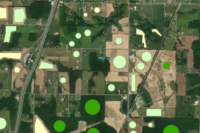

In [3]:
labels = gis.content.get('eeec636c856740c6a3e2c185dda6e735')
labels

## Train the model

We will be using U-Net, one of the well-recognized image segmentation algorithms, for our land cover classification. U-Net is designed like an auto-encoder. It has an encoding path (“contracting”) paired with a decoding path (“expanding”) which gives it the “U” shape. However, in contrast to the autoencoder, U-Net predicts a pixelwise segmentation map of the input image rather than classifying the input image as a whole. For each pixel in the original image, it asks the question: “To which class does this pixel belong?”. U-Net passes the feature maps from each level of the contracting path over to the analogous level in the expanding path. These are similar to residual connections in a `ResNet` type model, and allow the classifier to consider features at various scales and complexities to make its decision.

### Prepare data

We will specify the path to our training data and a few hyperparameters.

- `path`: path of the folder containing training data.
- `batch_size`: Number of images your model will train on each step inside an epoch, it directly depends on the memory of your graphic card. 8 worked for us on a 11GB GPU.
- `imagery_type`: It is a mandatory input to enable a model for multispectral data processing. It can be "landsat8", "sentinel2", "naip", "ms" or "multispectral".

<Item title:"land_cover_classification_using_sparse_training_data" type:Image Collection owner:api_data_owner>
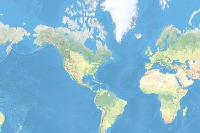

In [4]:
training_data = gis.content.get('08ccd71f862940bda1d8350c8cc91a47')
training_data

In [5]:
filepath = training_data.download(file_name=training_data.name)

In [6]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [7]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [8]:
data = prepare_data(data_path, batch_size=8, imagery_type='naip')

### Visualize training data

To get a sense of what the training data looks like, `arcgis.learn.show_batch()` method randomly picks a few training chips and visualizes them.
- `rows`: Number of rows to visualize.

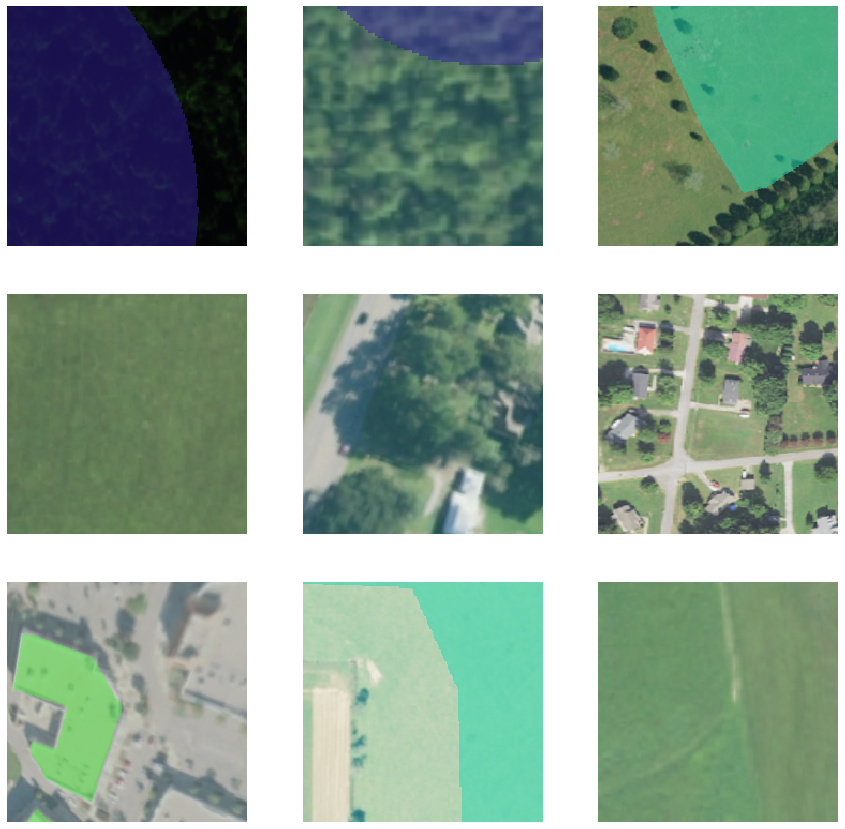

In [9]:
data.show_batch(rows=3)

### Load model architecture

As we now know, the 'NoData' class is mapped to '0' and we want to train our model on the six classes we had labeled, so we can put the 'NoData' class in `ignore_classes` parameter while creating a U-Net model. This parameter allows the model to skip all the pixels belonging to the mentioned class/classes, in other words model will not get trained on that class/classes.

In [10]:
# Create U-Net Model
unet = UnetClassifier(data, backbone='resnet34', ignore_classes=[0])

### Find an optimal learning rate

[Learning rate](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is one of the most important hyperparameters in model training. ArcGIS API for Python provides a learning rate finder that automatically chooses the optimal learning rate for you.

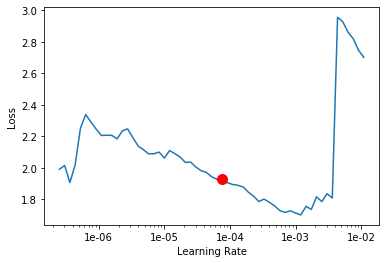

7.585775750291836e-05

In [11]:
unet.lr_find()

### Fit the model 

We will train the model for a few epochs with the learning rate we have found. For the sake of time, we can start with 10 epochs.

In [12]:
unet.fit(10, 7.585775750291836e-05)

Here, with only 10 epochs, we can see reasonable results — both training and validation losses have gone down considerably, indicating that the model is learning to classify land cover classes.

### Accuracy assessment

As we have 6 different classes for this classification task, we need to do accuracy assessment for each of those. For that ArcGIS API for Python provides `per_class_metrics` function that will calculate precision and recall for each class.

In [13]:
unet.per_class_metrics()

Buildings    Forest  Harvested/Open/Bare Soil  \
precision   0.910002  0.998542                  0.986803   
recall      0.950265  0.999001                  0.971385   
f1_score    0.929698  0.998772                  0.979033   

           Planted/Darker Cropland  Roads/Parking Lots/Driveways     Water  
precision                 0.975038                      0.951258  0.991753  
recall                    0.987470                      0.935559  0.978942  
f1_score                  0.981215                      0.943344  0.985306

Here, we can see the precision and recall values for each of the 6 classes are high with the model trained for just 10 epochs.

### Visualize results in validation set

Its a good practice to see results of the model viz-a-viz ground truth. The code below picks random samples and shows us ground truth and model predictions, side by side. This enables us to preview the results of the model within the notebook.

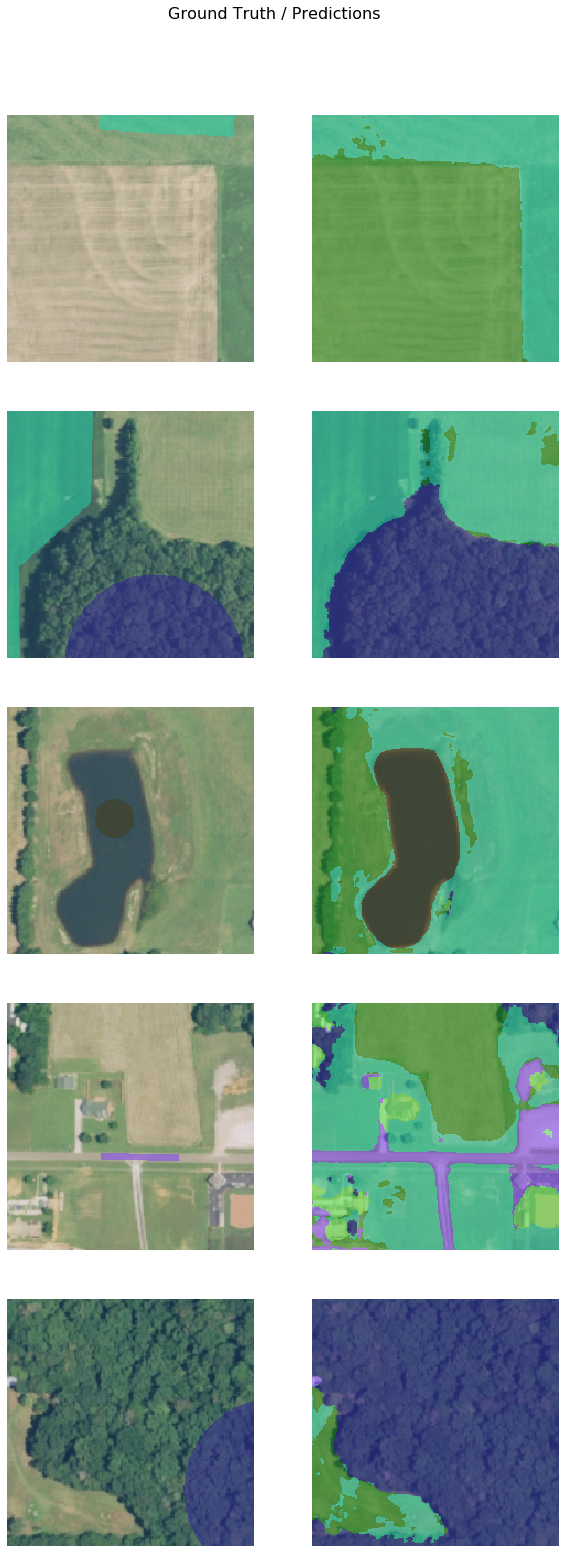

In [14]:
unet.show_results()

### Save the model

We will save the model which we trained as a 'Deep Learning Package' ('.dlpk' format). Deep Learning package is the standard format used to deploy deep learning models on the ArcGIS platform.

We will use the `save()` method to save the trained model. By default, it will be saved to the 'models' sub-folder within our training data folder.

In [15]:
unet.save('10e')

## Deployment and inference

In this step, we will generate a classified raster using 'Classify Pixels Using Deep Learning' tool available in both ArcGIS Pro and ArcGIS Enterprise.

- `Input Raster`: The raster layer you want to classify.
- `Model Definition`: It will be located inside the saved model in 'models' folder in '.emd' format.
- `Padding`: The 'Input Raster' is tiled and the deep learning model classifies each individual tile separately before producing the final 'Output Classified Raster'. This may lead to unwanted artifacts along the edges of each tile as the model has little context to predict accurately. Padding as the name suggests allows us to supply some extra information along the tile edges, this helps the model to predict better.
- `Cell Size`: Should be close to the size used to train the model. This was specified in the Export training data step.
- `Processor Type`: This allows you to control whether the system's 'GPU' or 'CPU' will be used to classify pixels, by 'default GPU' will be used if available.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAc0AAAGcCAIAAAA09WwYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP0aSURBVHhe7P13lCRHnt8JhuvQWouM1KIyq7K0QAFVEAUNtELL4Qx7ZrnzjkdxvHkndv+5eyRvyb292+UdySWPS3KGHNHTmOlGQwOF0iozK7WWkRkZGRkyQ+vwcHU/j4gqJAqiSzYK3f55WRXu5ubm5u4/+9rPzN3NEEEQZBISEhISjwy0+SshISEh8Who+rOZTEaGICqVSnJvJR5DEJmsXKkwDGMxm5tBdwddqzWXJCTuFzA/kEdx6V70EUGQfC4HoqpQKJo6m0wmOZ7X6XSNGBISjwgwPgAWwPDuxWhlFaBcdjqdzfW7o0rTzSUJifuFrQMLGIoSJNkIvM1te/78cjqVUqvVGo3mG9xvgCL1ekbimwPHceFweHFxcWlpCRY+r7OiBjcch88uP0TAbDAUgT9YeHyQjPlxJhqNXrt69dLFix99/HE+n2+G3gIsGXyAhq0mEolsNtsI382X6izsxPFCmRUqrFDlhEdg8A9Ercb5dug8K0jW+Q2CpumZ6elsJnP2448vXrgAUtrcUAfH8fPnzi0sLMAyw7ITExPXr19H0YfpChRpbjFaGQ6WbgRK20XusdA2RMYW6X9xLjZfEB4r6Ze4DditVqt1OJ3Ly8uFQqEZWgfkdXVl5cMPP8xls7FY7OzZs8FgsLltF19sxHC/12Ll9xeyP59O/8Vk+k/HMisF/rFyfVFBGFpKj8ZFZ17iMQFsDmRxN80Nt4AIFEXt6e83GI1iQ+yz/ix4u2DKE+Pjk5OTM1NT83Nzdrv9nvoWvgpEth0v/WwqMxathvKMP1E5t16u1ZUerbu3tzUfFuoO7+1V0fNtxmmGiAUEQhrrjU27JbIR0khBjFxfbmyHnW5Hhv0byxiJv9CntVJi6B3HAm6nD3+7DiLx0AAbq3cMNAE7vMPqGnarUqnEe/7pnRGBmCeeeIIgCHB1z33ySUd7e19fX3PbLrB/+k//KfyUy2XYQS6XwzIkk9wp/qf5oteuOuVV9lvlDjVqVBFqHO4zgmPiXYdojYyAEeB1O2iEQCZgtfE/bOLrkTDYRSyBCGQeMtlIAWLdPhUoj41ExBAwO6yeSDPB5iZYgN0bhxP3RdFet6pVi8NqI6QeByKJCYoZaBylvqmRDYlHDcMw8Xg8lUpB3Z7JZqExBRa1W23BiEOhkMvpXFlZgdUDBw40wm9jNpsJHIc2GrTFnnvuuY7OzuaGRh8Zw2g0mub63QGFprGAC/x/vZnCTOqfDGgPOhX7HPI+I0mCaSGypXBpMc1gOKYnRQvaydKjkep2mXdocEImJHK1JM1vJauLCUanxlU4Ui4y2yU+kqFpBDWQiD9RnY3TOR4xycHiRDWETeORarIqmJU4x3Bz4fJWSbCocTjcTqY6FqlmWcSiwLL52lS0mqrJTCqc4QStAqfLTKQqRFKVlQxrVBMUKoPsrccrMzt0lRWyNK+gMCiFEg8XsKzJiYlr168vLixA7c7xvMViwTCssRVswu/3ZzIZiLa2utrZ1QVW2tjUgAQ7QtHhoSGQ0BdfekmhUDTCYUcoArAVNPpzOovIapXav7uR7ug1vNGm0FComkItakKFIQzLT63n/moxf36jxOB4hwaLp+kLvsKbi7kP14olGd5twNc2s/9qrpRLl/96PnfBV+30KCwc+79cSfiL7BV/yWUi4rHy3yzkPlgrXAlWrQbSIkcLhdpHC9m/WMxf3CzZ9VQlT7+7kHlrKb9Skg3aqXBU9EE+WC+VEMxB8H8zkXpzubSQZveZ8Xem0zK1QpYp/tuJHJjmz+Zya0VhD3gFHD+6kv3zhdyV9eLFldxiDT9iJRpnLvFoEYTFpaWf//Vfj4yMQPPfYDC43e7bOgtmF9reXl5ZAanN53Jggm1tbWq1urG1ATTQ1tbW4H/RGhWK1tbW5oYH01k4dDJV/GiT+e5+vUOOVGoCzclIHBE49s2h5HhBIJnam/PFo23KyYX0u0Fap8Q2t3JvbbAn26izw9H/aaHq1eOZZPG/zFb2dyj9C4n/61ixxUBqCdnoSm40wWpI5Mp8ZjSPHLMRF6ZTZ8OMUYFGCqwJY/90KFMhsVV/Zq6K2WqVfz1eUKqJSpnFWOa/TmYJJV4oci1y/p+fi5tcutjqzp8M5dpM8mAg+0lSdsJJXJ1JvROgDUp8fC7xn321Ux0aPd44M4mHBo7jYKtTk5NQ/ZtMpqeeeuq2VgI8zyeTyWKx6PP59u7dC5tsNltzW920AoHAtWvXDh8+jGLY4uJiZ2cnJNjYdFtnP9eyA82tMutlYZ8e3ERZvkBf85eubVeSjLARKry5Vn2x3/CDVuqj6bSvyL4zmYry+P/hpOUf7lO8cz02lmGLZebCalHt0Px3p0z75cy/HcuVeH4lUlqqID85YKilyz9fKLS6NP/nk6YnVOw/O58q0uwvRpNbCPF/esryjw/pFSzz8/G0xqj6x0f1cX/mrWDlvdFkViH/RyfMR8zo5ErmfEL2J6ctP+5W8gwfiFc28jxdYW9ulZRm9T85rF3zZS5FauuB3K/89AsDxn90WC/kKiPRGrjRzdOTeJTgBHHs2LGXX34Z3IGnn3nm+PHj0J5qbqu3sCxW6/PPP6/WaHp6e3/0ox/BQnNbHfAgbt68CZ7smeeff/XVV8F3gNXPdz7cB+ClVhg2w2Jmudi6Wdgu/MXNnf/fbGE7WfnFernTLrdrKVmpejZQgb8nunXf69P+/SfMskRuOsUKGOKyql7fo/vpSXurUL24VeVRmcGkeLFHa8e5iwH6ZK/utT36v3dAs7yW8xdosLfTPdpv92n/7qA2sFUYLQgWLdltlk/6cmtZZi3H7XUpv92vBbdlI83K1fLv7NXqCWjuiS0xHpG1O9Tf7tf95KBmyV/cTFbe91e/e8T0gwHd//6wAS4lJ7XMHgFgmVDff/8HPwCjfenll+947QoscP/+/U8+9RRY73NnzuwbHGxuuMVWINC/Z8/RuuUbDQZwfpsbdvEFRizIBI7ha/VmOzSEKhX2vanUuSDtjxZXM8wHC9lf+co7FT6QrixkhENepYFCPWbVUQO6mKxBq8lhVZ62Uyo5+WSXOhsrJRhBTuFHW1Q2JbqdLGdQ4rgLtuKHWtVkkV7MVVeKsufaVCYStesoBUtf3qqOBIp/Np2PM0I8x/dYiPnN/N/6SpQcbzVSJF39D1PZPIpSOAqlp95dgYAXPGglDRrCpECzJWYpXtaZFHtNhFFHHvUolFJD6zcF2CsY5ZEjR3704x+D4ILIQkhzWx2wZrvd7nA4wCOw2e3gGuyOAMvg/77w4otOp9PldoPUQszmtgcDDqKkKJJjMowgILJup+qgERnerGQqXI3AFSxf4mTP7jX2KPgsj9jkKMMKMgK3EUiizIOBOXUkyQscgjrlaKkiap1HS1CIUK6xJQE1yVGe41UUAZ55vFIrylCnCmPELj4hnmcICkNqnCAnv79PP+jV/X4P9T+fC/+/p/J2q/qNPuUHY/H/10Quf+spA2ROp0DBYFEMQQWhWOMSPOKSIywnqOUoiUmW/KiAm2U0Gs+cOQP2CQ5sM/QWsBWMGQy7sdwIbACrx44fPwTOLIgSRT3z7LPgzza37eJOnYVEjBrFkybk/fUyLcg0avJMt9qEi28dyEnsSJsG6vn/y3P2//g956AOE/jGqwgIx/FFXiav9/wzYJH1fthMscZiOAZuDoooCXAjBAoDC+bBhsFeagzPoyjOC2VBqDICCDRYJoqjTqP8p8fN/+Qpy//8Xc9/2yM/c8Lxz580ZjbT/4+RvLXd8O9etZuLlf/+k50UK3aEiYg9YkB9WSbwcHQIgoMJMjFXNR67tU3iNwMll3u9XqVSeYdFAhDCcdzAwEBXV9fnrRlCwEbBF4ZluKNOlwvS+Xy0+wCOa9DJB/WyXy0VslDxE6ieRAUUseopNyZYrfJT7aoTLYpeA9VGyRazDFh1NFGO4ESrFuxXWNypZGtCOlUcKwgdRhKsvGFSJrXcIGNX0kyF5VcTVcpIdagpOcvOJWpVhk9W+E67wkog3S7F6XbVSbecwJEX95n++4PaqbV8lJWd3mP8V2fMa6uZDVHN608WwMepXzP4DxbUCsKLcVM7kD43FSoXoZhIPEp2N7/uAMdxqP5vC81uxG6BW60usk5jeTdf9BwMRb1Gcno9v1EWyjQXzNRGgpV2t+aYBRveKBUEpFRhQyWuw0ixperkDiMg/EKotFnDvjOgAQ/hr9bKLjWWzFX/YqZwbK/xKQP6yWqps03TrkC1FLoSLPloGVtjrvtLCrPyux2qUrY6FquxiGx9p0qqKTZTmszwhIwP5lmzGpnYEHtmZVW2QOIWnA9kORJFslVhr1O+vFU02jVOjr4R557qVKsQfmijqDWoDpuxqWClhCA7GfrjxVxNq3q9TS5p7WPFffQGPEj/rAiCdFvl2WxldJv2peiFHUZhULzcoXKQ3LsLpXCRCZZEo/Io0algeTFVm4vX9rXpTjuIxUBhLM2TDHMjWG7x6F7vUBRydIEkD1pJEketpGxsu+JL0+Gy8GSH+oBNbiKEoUB5M8us5rjDLWDelalYbStdYwiUL9FQFgJlfsCtdMv5swuFhTTjsiqfcpK+JLPHo6aqtRxBHneC583ORLln9mgHjdgFX8mfY+KZmq+CvtCtFrsPJL4JgCjf7p/94u/BQJXKldpQoJIFtxGVgeP5ZJvKpUSWg6WZFIvjaKtFvtdCyhhuYqsYoUHF0W6zfI+JGFtI/Ms1/h/skadrAqUiX2wFr4a7sVl2uNRtCrETKpOpXtuuMgiiVOBHXAqzHK3R3MRmYauGqCjsqFelZOjL6xWGwIxq4oCLXNkohmoyDEefaFPSeXoqzgg42mWhug34UrBEGpQdBDsUYY62q9WYMBEoqbTyPiO2ES5NpVkthfn9mRml/n87rWv6CRLfWMBkH/B7MPBFoLmTKnOV+gsoWjmuJ0X7TxbYsiBTkphZIb7yUqK5JM1DI8ykxKHy/ssrEZ/e9Pe7iSovsygxJY4wjNh6A4+4kWy+yuZEq0TNSoyAkiPIshU2zwkKAjXJMY4Fx5YDT9SoxBWIAMs1QaalcAMli+TZmgzRyTE9Aa4DB+1FlOeLrMwgRyFX8SJvUmMKTJYqMHkBJTOFfzpb+2cvWW143fOVeOwBnb39PdhXfXcrvhfV8AMFGQst8bqlik/HxCae2DkAgAqLDXNBYHlRnccXEv/TJvI337FSYhNextYTx1BYkd1u/kEK9T0Ejm9aDFp/veb2UXZHqL+YJW5ieLGDAq/bNscLUFJEl0gQk4V94ViwI2QY9ipUOVpA9HI0ma785Xi2q8/43VYKkpL4RvPgOnsfYAL/s6vRNb3xnx5Q/ObfDgTZvb5ZIhQELmMvTedb95p+6KWklxS/KezW2a9qvoGcMVz9ry5/APw0Qm4/9wSBq0doKqaSwtxqDFS4xgkNkQVA43arHIgp7AK6fNtgIP7uo+yO0MxD3bhAQ8VlThRZAA4tLghi+o0dG/pbLlXfnkr/2Xj6zbWi0ap60kGCyktI3Ac8gh7r0T/jJBsG9htGQBGXCttO0xsZbqDP8N0WSWS/qXyVP3sfcJxQYASdvOkHfy3AsbMltsyB+AoKSmwbNjdIfJP5WvzZBlBEoIH1dcHVSyi08ertN4lvDHfrz94HGCY22L9eYYM6X6vE7RrcoSEkkZV4cL5GkQUwRPycErIgiew3l4essxISEhISdyDprISEhMSjRdJZCQkJiUeLpLMSv800HvNKSHw93Orab+psvZ9dQuLxBUz0Pr7BlXRW4mvkttE2dRYFJKmVeIyRrFPim4vUbyDxOwr4GqJ7ce8jLUhI7AYMqWFL8H8z6HM0v1NojBau0WoboXcgDuHBsuAAN6Z7xDBMao5JPHTATMHGarUax3FgteRnLY2uVguFgtvtbqzeJeVK5fNKCmnm8/lMOg3HgvKh0+kMBgMcTrJqiXsFLDaXy6XTaZZhcIIwGo16vb4huPA/6KpCLgcD+yqdhXiwNRwOb/r9sLWh2wqFoqenB9KSjFLiIQKmlc1mFxcXQU9hBcQRx/GOjo7GELRgbA9LZ6FgrCwvR2MxEFa5XA4pg+ZCYdjT3w+F5OFYdf3LAu6ue5PF00UETvyoFsHE0UBg+W72re/Gf/W3uHcT58tAwK/i+W/22OL18xdufdL/kKFpenlpKRKJgOWAA8owTCGfNxiNAwMDYFpg0rd1tjkuYrVaBfujKKqxf4NyuTw3O7u1teX2eFpbW8HiTUZjqVicnZsDR8NkMjXjPTAg/sKt6cHuEprhCAIX6wGOFY0STPXX9S/Dadd/BZk4o9ivufACmJcAt6i5eq8wTA3DiV1ToN0jt/L6gDyURAC4yDiBP7qaFew1EAhMTU3ZbLa2trb6IOB2yPzE5CRYpsViAa3kWBbcT+2XNLm+DIZld19LOAUoGGD9vb29IOItHo+rTqVSWV5ehoWvGIH0KwBr4eoyCcaF4ThfTAaTZbVKeTf2g8j4TGwrkheMWgVbyfnXltIVRKNRf35fhoFzEU8BrU8SRhdT29GkQqVpDO30xTDlwFaYUOu+aIxwyDWP49BiEFfAkUJvzYhVB5HViusbfrnOfGtgsl9HfXBh8Wt3WBI/DUUfwF7A4ngEfdCBzeHWx0KBIkuoFA/5w1BIGU52cmKiUq0eOnQIzBUCu7q6QCR34vGVlRUwYxBJsCsCx0Fzv1RnIUR0Lmj65MmTIKk7OztQ/5stFrBFq9U6MzMDO4NX24x9TyAIXclFg9uhMHgV8RKHa2SZd9+/ZGzpUN/dLQVRzfqGPpjYbm9vzceDN69fWNzOulvaKfQOLwAaopX1xaVQLAEnn6dlao2GqsTe/NX7SkevQfGlx4Jbkt9a+OWlua49PeRnxsCpgyDRwEaRJ9X1m8eUUr7NmNZgaMxvKoKgzM7qOxfHzK4O1V3fX7qQXl9fj8QTOzuxnXSRUijl5P0PNYrI2J2t9QqmVVK7C8/9AP5VbOn6+YVUR6sbarZm6MMDNBQaTPB39Nix9vZ2ENNz5861tLS0tbeDFILvmUgkYBWE4MF11ufzQfvsyVOnwHTn5+fBjXC53dBEg3IC9TSsgksBxaMZ+66JBdcX56anJmfnZmcSFdLKb/3pBwv7D/bLMfHsxAw0JUf005urt3r0IHOxjdnlhKynxTx2/r2FhNDicehEnW3EaXoEEHnmylsfXpzcCgamp+ZIS4tVzowN31A7uvRKopH+bVejeRSQq3Lqw3c/Rt09Li0lpnUrgmjEPD3y4VvbqLPFrILdV8YvjG+UO1pssK8YEfZlyzdHRpSuAZNSjH8rzc+cyK4QGSIws9fPvnN1Iry1PjU7ny2ydoedgEJx60xvXYRPswfU06hHuJ1QPaml0QsLCbLTpbt15ZqJNCr724f/7CqkIPpbsFpfEWAluTo0n8Da3Zb6LLK3RyAUubXT/UwjDMcFDYTW0lNPPaVUKqHQvv32206n0+F0ejyebCYD0garoKINnf1irYEcJJNJaE/19/eD+IJ1nv34Y2jWQa7gAOAk79u7d2Z6Guy+ucNdA6fK0/mbly8sb0drLFerlJKpDFOrxCLRCsPX0wfBB2kTL0Djf1itX01YFltA4oogKK0d+7o8OCqLb86ECqrTJ4+q8NsNnFuXTTxYceT8+1upGtTdM1c/vDS5ViO0Bwb36hWiJN86hnjVxNTrx2ociKsWo7Ek17gx9TzdShysGQ3NXT13c5kR4D7JqunAu++czdBiI0scDLKeQVxj29/fXRdZMTWx4SaWmlunVI9XP/ItYBEuy9BQOF0UeDa6NvWrv/1VtMiJOzeTFXNYjyhmaPfuENKIINpYPQRAZJxv/Py1hTjcymZI87hiPhohzUvdSLcRQQxqXOtPDwo76Fy9eztdECRGqveiNi7Yrb3EdJrr9w7U+Zubm3179kB1DpeusZpOp2EZbO/Y8eNgiulUSrwODwYY/VYgsGfPHookg8Hg+Pg4lAooJI1L5GlpgbMAFW5EvkvgpEvxtRtDk5Sj84XXvvWd735rb4ddHJEAg//QWiE+NnJ9eHg8UWJgla9kZiZu3pxYyFYYqFbnp0ZvDI8l8lWDs7O31Z6ObsyurhcrTDGViCZTcGOYcnZ5eb1cYxpHKhfz9q4Dr77y0oFW9eWLV4oyee/gcRNeWl1ZKdUEDGF9a6upIo3wtfmJGyNjU7FMBQwUBbuEm8hWfQtTIyOjwXimYclQ0rLJWLrULMLVYmYnkQXriPiXbg4Pza4EWBnW3bffruZzO1F/KL48PTI6Ppsq1uCUBbawODY6PjW7trIcSRQaNx4SLOYKroET33r99W89f6q4NfHJ8CorQ5lSbmZ8eHh0MlmsicImsAuTQ7AaSZUQrhbe2o7FtsaGr8/AEcGoGwhCKZdK5cq3LQoSmZ0YuTk+ma+KfffJ0NrN4Rs3x2YLNIfyte0NcFFWp2dXirmUb31zRTzT8USRBlNWOwcO9LbgbAF8c9/a/MiNoVCyIAozhmwuzQ5fH1nyr28FY58W77sDtHF7e/vIkSM4jjfsBwoB/N9YBmOOxWIQR4xa50v9WfAjDAYD+BHxePzSpUvgWYCBgk8BwFaT0bixsaFQKu/VpQUHc+KTt/2c+9mnj7V63O6WFrvZgNOZyYVA1+ABOZO6/MnHswtLs4sBS0ubnCuMXzk3MjO3vLbj8VqDUzeuTc4sLG9RRqsstryaJWx4+uy58yuhvFxWnphZsbR2aAgedgkWcKdVD6oDOjs7Od9z+nsH97RSpeCNmfBAp2lsOmC160c/+WUK9zj1somr50NVpQZSuHFxbHp6ajHobPFipdhMIHfoYF9uY+7iDcjCahVVOS06uPFguqHliR3Etrdb9O/oXOTm7PaBIweL/slLI2Ozc6s0odFziSl/ztvqCYx+dGF8JbYNZjFJyw0Oiz4dXT/77tlln29hfmopzPS0O0S1BmUvZZZ8of4Tz+zramvv6uBCE+MRck+nOTA7dW3oyuzcTILRex26XGx77MbFcahMV6KdXW07Szc/vjGbivnGR0aWI6X2tpbGEL2ojAssThTUff1e8AhAPpl4YG1k5Mbk9Ewkw7md1mxkDWR9empqPZKzuFuETOCDTy6ADAUTZSQXeOfyVCbqGxsei9BUm8u8szS2VlB027BL7/5qLpzemB8fGR7TeHuNSizim/j4g8ur/o25xZlYlmhxWXZ5DL8eKHdQi9PVav/AgNj25rhsLre4sNDZ0WEym8EmwdmE6jyVSkErClpXD+LPQiKZTKa7uxsWwG9gGMZmtycTCbFIFArgPVTKZfiDwNu7/HqE0o2z5znHvlOH++UEguOkSqUUstujG+UjB7vioaCAqri079xYoLvddPWDc7zZSbIVTKlYvXkjyauMapxDyeTy6FQK299uXJybUzt71aXAxenQob1dO2uTQ0vxrp4uShRtNLg2w6paezuctWJmM5pts6muXBtz9/QvXvnVds2gKPgujfm9bebxsxcrahNVCV0bC/T1uFaWfJbO3tTSzfWszGJUlsqs2WwQB6YRWN/8lMzZ323XgK7FAktgYC5NZWx63eqxl7IVk0Z4/92LrsFDhZVrf/3xSGffnoxvdHKb7mvTDZ09t1WlLGT+w7d+kdP27WuFChIuBbftW+VMbX1uE6XSGZXC1WuTbT32yUvXea1RXgndmI23txlGPjybwjRafufaiK+j3XrpV2+uV8h2q35h6KMk2dpmF+8vInAR/0qOcAy0maGu56rpS59cEdRGLL85vpLtaLdFtkNylT7ju7Gwg3e51Bd+9XM/o2pzu+VF/3/6+Ue29n4847s+G+zb071y7QM/o+/W1/7d//bnqLnToWHPXRp1dvTkNoZG5uMOj3n5xkdjG6W9/T3kXU8kCBcvGo2yDAOtn1AolEomobkPZqzRaMCAc7kcqCLYGEgwWC/8/6X+LNg3WJ7ZbIYSeu3qVd/aGjSy/uxP//RP//N/hr+rV66wHAe+ADgazR3uEgRhqsmZ1cTew4eMSqrhUKFQ8zc3y3BKvv/kS9/61mva4sKVmyvp7dkrc8VnX3vj9eePc/nwlZurnQdPvfHaMy69kiun1zZCcueeE4f37jt07MyZJ8ub0wtrMb6a9a1uyLV67FZxh4NUy6VCbieeLlttFkqo+td8FcKwf7Bn9Ox71y9fmA+xbU7l5KVPIrz9lddfH1Dt/PL8DFN/443nCjdvjMjdgz/43ut7WiyiMX0RcCSeLV67NqZq2f/9773e67EKdGljfbPICEwu6ouV9p546ZlD9uGLl5PF4uj5j7GWA9/+7nd6TLK1jU1696RPovMoZhghlHsG9sRWZwPrcx+en+564pXXnz66euHt2c3tKx99klZ2v/baq2385jvDG5VKesm32X7k5R9+/3V088aN5bg4LuSdIKV0+OK5a5Rj4NVnn0wtjNz0RbUW59Gnnn/5lZdrwfEbkxs8X/Ovripb9r906gDJ5Fb9od4Tr7/x6qHVqx/7UrVaJbcV2eERWT4R3M6hL333R0/24G+9cy2T3n7nV9e9p17+4Rsvmyrh+UCMvUe/AEw2k06DtEXC4V+99dabb775ydmzhULh2rVrb/7853/z5ptrq6uggBAHVPge5O+LaHgcYPcgrBt+P7iu77/33i/rXL50CQ5KUhQYNth8I/5dwdYyuZLRaKXQekNAvH2N3eEX97Z1g5LK9Rp6J5Qp81W6kExV2vr2dTiNuUQ4W2Ccbb3dYFccB/UBpTbYLBar03Pw6BFVIRzJF8PRhNFm09zqehI4Jh7yz86Mj8+ude7ZqyRRhq6yMuLpF1/YHnn7zY8X9j/7PJ7wT/jiep1aozZUouvBAvjR4lWG+mA7sK0xtw72dxK7LOQzFxSqe6ES2o4UOc3R4/tVOA5SApcM2iqWlp79+waOnjiQ3toMbwXmg4UnTx45+MTpJ/d38p96oSLiycM/aIsodCq8tDE/PbkaI+VKpc5W3V6cnZ0eW46YLQalyljb2VxP0whOdu450D946LkTBxbGR0v8neYLjbRUYH5mOUKQkKSzGFraTNKtrW1yXKa1WcM+f5mRsRzt6jzU1+VRErjW5AJ38uCTJ2TpYDRZhBtUoaFBICg0loHBwcGjR3RcOrS9NXp1zNx7+MD+Q2deeJJg6Mbgk3cPCBdJkuCxfvThh2+99db58+ehCh8eHgZbevfdd4Pb2+CDwj1txhb9ni8HjgyWDcYHjSBV3XXV63TwB0lAOBzpPuwebiWOIgT+RZNvgE9XKfkXx85fvBTOsyzNgFnoscTbb/7tVGBHqzG3t5qHP/jl1bkAVx8oTnQDoezUxZpHtIcOtiVCW7FtX550tTsM0IpppMrVKtMjly9euBJjjadPHVWDlYGcCby5ZbBTl3n3nZG+48f1XHZ1M1RIha5duh7IytQklDZxX5xQdXS3hSbO/uriWL62ywTqW2+vQdOMoDTtXd6tsY/fvjReYKBpU+8jgm0I4fZ2GrVytdlOEUKtEPGHy91dbSROODs6LVDZfMGFaIISsqhvNU1XA7M3r0+uyA36UjriC8WqqcCVyzciFUyO1FgWd7R0Ow0UqjD3t9tDoQgjfO6eImgxFdiKJeOBlWuj0yVeHGqPLuQWJ4cuXbseL7BcDQwC0ZsdrU4zJ/YJYM7WbquOpAwOsxbPFcpwxQAxKVTV1b+HwhGzu1VWTqVCgbzcsddrleGqtr5O0XOuH/CegCsFtxCsVidaGNiXDnKgVqsbq3h90tz7SPbzECQJrTHQ687OTmictba1/f4f/MEf/uEf/vQP//CVV18FTxkcZ1Dh5pneJbjcoCazhbxwqyg1dof/+Vru8nt/O7YcZuBGMixG6U+deQ5PLf35z/52YSt78vkX1HTorb/5q7mtTGMf8TTFR0iC0mDt8WrXNqLZKuf1uj91QwShVmMFhNpz7Jkn9ndR9QNCfFxhVGPlrWSlw60rlfJVGUawHENon37tZbui8TAK7R586mCr8sO3/+bS+LKonfUcQtPn9jwjGIrKSVJr6XrmWOfSjffffP9iSZwwtX5sQXzHDg6EkUpKLqvRZUqtU8J9kQkYtJq/0ILFZzB5RA7NyzJPqQieq8kUx888a0CrZTgBqFcw5VOvvNKqI1BUqVaTPMcrVWpQhluzuX0KZKFSTFVkBCbwMlx57PTTDjx//uz5QDzLIeIUKnB8BFEadHKxTwzKG06JT+BQSqkCy/m0DsAxCscQXsBVKkrgSjSHmE1GsQ7BMOr2Fb5roOlfqVahjfW9N974vb/zd1566SWTyfTsc8/9nd///R/+8IculwvaXnDRmhfwy3QWhFWr0YAzDAvPPfdcT2+v1Wb7wQ9/+KOf/AT+jh49CgUDGlwGg6G5w10iCITSOtChnZpZrnBitz3kgodrIf4imKx07b23oqzlqZNPdrrNIOSozv1Hf/zfnN5jvvjWz7dY/bOvfOs7rzy9eOmtK3Obd1wZuKBte46gef+NsfXOg0d18k/vPS5XHT753PMvvPTKy8+6TeqGVcCRa/lYpoJYnBpw/DG5Si4n+/afeO7Mcy9/9wdvnDlEycQ7LsjIviPP/uA7r3Hb4x9eGoEmTD1QptWrC9lc3QyFSqWmM5qgNjp46sUffOdVZmv0w0uju9062Ee0dYQQHXecguIBhR1qiWI2U/tct5B4ISBvxfTk/Eb7nv02vYpQWp489fSzz7/0gx//YH+rjSCo/oOQzzOvvvGjl452QQkuF3MMj4DXHktWtar6FFe3gKREZDJSrlKojANHnzrz/Is/+ekfHHDil89dyGG2008cd1l1kC/YB0VAYpo7Qj7qpR7D7nzyJZ4ybEAxEsPh2ioonq5xPMKz2WRK7LprRrtbIC0wSmiFWazWF154AfTuiZMn1SrVkSNHXn311Zdeftnj8cSiUTBiMMU7L9Y9AuaKoig09FQq1WuvvQZNvHK53NHZ2dHR4Xa7q9VqPB6HNtw9nQSCKg8+cWjz5rXVUAJSKIFXXKrUr5BQzYWWAoXegX1ujaKMIgxLo3Ljsy+83KXMrwS2OLn11JkX9+rpiaUgJzS9grouwMVV7Nm3Z/HGhRJmtJuh1qkfCY6FEe62rn379na3OUWfVHyyD+WntjYzKtgOPNNHnLu8qHd49UhV7fJ2dXU6XA4NASkDXJVFB449c3rAvrowl6mIRxFwsrW7LeJbyeRL5VymUMWsFi3U256+49958WRybWY7x9RPBBCTEH/FRZnOZMfKkc2ddC4WWd8Og6/YuF71DPG1SqVcKWcT2zNzPu/Asb6+fiVX0jpburvavW2tHm+7Ga/JbZ5m9kiMoZP+9Z1iIbXoC9o8rerm6w/iIWtwPcvVSoU2uvuMcl7naOns6mxr9wjF0Fqk1tnVbSLxMhQlMXbzH/xfn1Pl1pr4W18SzwDCm3FkhMbr0K1v+KGhu7m0nGwkctdAWmAn6XQ6l8vZbDYwYLBecAggEJbtDkcFRKH+zPb2dftinYXN7R0dG+vr4AyDfwFSm0qloDBAbQ8QBLGxsQHKAmXgdkJ3iYCQB555SfCPffjJxanZucmxsan5dVqcYhzKM6YyqDLxWBCa3MEYgyOpiG9meq3MkZ0d7dXSztzUbDxVbPW4lbjAgOTVr43YtQkL4AEZnRY0MxvmDvQ5odqqHw2ArSiIm0IhJ6HqFYNFT5ir5q5+/F7F+sRP/86r6dlLi2n8iRP941fOL66sriz7doq1xqNIji0tz037Q0mjwazXKKv1JhLcsJZ9x9TZlXMXrs9M1ftJB/apkNzizKw/lBJjqpU0uB1i1hpKV89I3RwF1LBvj318+PLY6NjkzFK6TNeD61tFHzO1PD87NzN1c2Q0hbvPPLkX2pg9xsLV4enVlZXVYBxTO5453nrt4pVlyOeKP1PlMKidsqGJsanRa5fXa+qDe9uJZh0OZ4mGNxZnZ2ZmFhYFbfveVmrs2o3V1eXFtQADrgnKphKxjfWNcDherR8ddqjvKK6gt3LVfEB7ayP83IoEoFpLe6+LP3v+6szE5KI/Ajrb3HLXgP2AaYJCBQIBUNIG9cyIwDIYHtDe3t6IXd/pPoHUBvbunZudBTEEzX35lVeKxSIUCTga+LlwnTQazb3O1wD5N7bsfeOVwzPXzl+6dmN4ZHhuaZNRmlqcZrWp5eg+98r0zdmNnVa3g5RVfbPjN0bnKEf/YIdlZfLmyMhYWt719OEOvdniNoMHgNjdXr0cA+M1OtqUlRhhbjWomu+cwIF0ZpfZoGqsAiilcjkdXCUTCKX6Dp1+7bvfq4UWiwrPt187Ak3CG9eHVjaj4Ot6vG5wahOh5auXroeK5OFDB3RKsdTzAtoy8GS3Jnv9yrVr14ZqupaDe7u4SuzquYvjy7GBI6fdNl1be4sckamN1harDmQKJVUet0NtcJ155tDC8NWppfViiSagvq0joLjJbi2Flm/cuD4yOqtuO/jssV6dteOFp3tHPjl37frIgi+ksLR/+9tPjH9y/vr1oaWNMFgqhitKicXrV0ejtOrQYJvotAIIZrQ6+JQPkro+NkPLHaePt09fu3xjaGRpPUzZuvsd6NTY+FaO97osUOW729q1pDh5pUBpvR4H+A0Q6HA4YcFkdxtUcp5Qt3icFAbuiMxsd2tVusFTz7HR2YtXhiNFRoHf84s9crn8wIEDI8PDUA+A/YAqgkVRJAnLYMzT09PgGex2Q8XqDn5AT8HUdn+nAG1xsMhoLPbkk0+C/SUSiUZaYKxbgQAkBH5HowO3ucNdA2WxlEtthcLQBuI5mdrscBmJaDxn93iRanLDty2QYs8EIbeYNfz62jaP42anx6KWhTZDJYaTa8wtLU4uH4+VsLYWW2FnK1OTt7qtqFAb/fAXK2jHT19/QpzBsXEsng5uhdS2NqMSrWcUQZn88kbM6bZGQyGTp8+i4rc3NzmV3W3Ct9Y2cjSHYvLW3i6qnPTv0J0djuiGL1OkMbkG7FWrvNXC4LlsIhyMpsUWi87S4nGQCBP0rWfLNUyu9bR6KDYfSpRdXg+9s5kWtF6nWagVAuE0+E2EUPKtbdICXkv5ZuPK3/vuc8r622y82KXry9HQQELlaoPb7VTLMShemWRkaysO9qi1OMCqZGxpZW6thoEGKTr6OqOj586uFZ87sadSZKzeVpdZDwYPqSEyPhUJbETyFIHwKOHt6CJr6eBWrCZDKLWx1WuvZePB0A6PUnIFptDYnHosGE7aW7xKAi0kw4ka2eqyQtN3OxhSmd1UNZGokq1OfSwYREwtdg1RKybWw8WurlY6H1/fiGByRWrlShA/9KPXj5FI8+LfJWCaILLLS0sDAwPe1lbwEYaGhsCftVgs4DKAGsFFA30Eg37w7xTg9vnW11dXVwcHBxtJgT03vo/I53JPP/OM2Na7d8CVq5aLlRoHJ6NQqkmUrzKCQkEy1Wq5QhNizxuK4xgDvhnD4ZRCpSCqxWKVhWWlRkmxNA3NV4JAmVpNhuJyiqSTvv/015de+/2fevVks99XJmNoWgaxGg864TZzXI2FihahaUahVEGbGFxJglLiKJ/PFcBHVkALGcfAsYJjCywNPpas/pju044IMU2oaMRklSoVgSEsQ5eLZWhtqbVacIUh85RczjM1QcweuJpcjeHAPkuVKgoNqMLOR+9d6H7pxyfaDI1M1mhoTEMjTcAJuUqlED1cUBieKRXETgiFSkOJ7/FyxWyBEVdVGJ19528/6nn1FS+J4wol+EK3syZmrJ4UXBDxTWSBLZcrcFJypQouZ61UrNAcXFhwCKAlSldp8KUw8J9AxTiBpAjRs66JH2gJTA3sn8QRSA3EETwIMTJBsuVMmSNQGe+7+f5Kpf0H3zpJNRTirgHpGx4erpTL+w8c0Ov1YEUgj/A/VNjQIDt46BBFUWDAv/57MNgEFrm0uNjV3Q31PNgr2Dp4smDug/v3W8FVxptV2b0DhUtMv7n2Kc1w+GlshesOP7AI4Z/Zp77cWBTvJVMJb/luTi31HD492OG4bZrA7aQ+pZ6oGA4/jYV6hEZH4a3tt/7/ioyKGft0y5fFvI24A4Juzg9XFS49URsfGVK3Hzt5sIe89b7m59OsA2feaPHAP4jw6XGgDeAbPn8tjP/hT15Amfq8l2ICt6lHbC439tuV+K1V+G0Giuv1TbsWb29thOxKEbYgAp2dnF21ODx4JX7u+vTA098+3Gmsz455z4RDodGxMWgheb1eMFCapmOxGOhvd1cXNK1A/h7W92Cwur29PTU1BQqrUas5jsvn856Wlp6eHqVSfFP06wWuanJ79fr1cUP/U0/t84o1bXPLYwIiY4qj1y5tJquguzpvz+kj++T391o1NCNK6cufXGt9+kyPQXVvlfODATYQWbr68WhYJ5dxKvPR4ye9FuV9XGkoGv6Njdm5ObVGo5TLawxTLpe7OjvBYqHRD7cSdPXX6yzQiApplUoliAf5Ay+jra0NSkKzcD4OQIGv5GbnluTW1k6v/a5fz/g6QJD09srqVlJAUJOrvd1jE1/kfgDy8XCCxtpbHbu6Sn5zIEJtfXEhlq0gMszZs6fVovtUqu8RsDTwrHw+H/iVjVcLoBUF9go22rC0hzi+ASQO1g6+BhwR1NZoNCoUiua2xwCOqdEMr1RByf9Nis/dI7C1WpUG1xtTKhWf6Um6VwSBYVnxYdqDJHJf8BwLd59vOMjQBLhfNWvYLYgktBtAFQ1Go/yWNjbE8650tgHEAIec53kwSgD2f4xE9lMgX2IN01x7fBHz2eBh5PZrPutPT+bhnI4MRBYAcQRLg/9vp/kQdbbBQ8/5QwTy9rhl6Q4aV+8xz+RX0zSAh3EOt21JTOpWehB4W2fvypuCNHAch7YbmD6sPq4XF/L1jbjrYj4bNAMeiIeVzn1SP48mzaAHA2wMLA3s7VFrTSPPDZpBjw2PYZbu4PG8bvdE4xQeyjk0k4LEviS9B2u1SkhISEj8OiSdlZCQkHi0SDorISEh8WiRdFZCQkLi0SLprISEhMSjRdJZCQkJiUeLpLMSEhISjxZJZyUkJCQeLZLOSkhISNwnCGioOPRKc/XLkHRW4rEArc/FDSYLC7/5r90fZ+pDREoX5LGjcUsyVc6frsUKDC+Igvtl/PpxZJpLD/tbQEj3QZITM/ZrMyTUR4qTq2+NJPcIqGejuSxxX4AlFGp8IEtvZmo0K5AY4tKSXSZK99mB6h7W+AY8x5RLJYblMVKhUSu+vGjcNff7gbDAMaV6ThCMUKnVxO7xCm+BoLKIbylVU/f0thAPIa9fwKP+vvm3ElDVcJ4Z2i4Va4Kawss1jsJkBx3yHrP8ttrChb09vsGXzsMoIvDh1cnZpfWtYLjIEBaz5oGkcRc8x4pDZ6LgwTRD7gEE4av5uelJ3+ZWKJJSGkyq2wMLfhaBo6eGLqcQvcukfjSGJEDlJF5Oyf+6X+DCJcrs9a1SqirTKyidggSryNGCP1NVEohO/umd5R7GvOIAWymcP/thJJ1bWVjhFXqbSYeDENerS1ScG7Yxwrs4ezH8DwIkBogbxKH/xKFtmjUr0hjnBmwgG9tO13CdSg6BuLi9sVczqd2BzRzUgZB8ZOVvf/F2ssqVyozZalGQ4sypsFvjQOJREITAsfD6UjyPeLx2UjwgJCiAxw9pwjKkKWa1PuAOHISv57a+LB5RzHc9h3A4CIPA+mmKOYdN4qo4Nlh5ddWHKbRKioB0GoGfyajEF7GRocfClQ6zyq2jWF7QUrhNQ23lmEqNtWuIhsXBLQBdbcwr/lU6iwjsxMc/my+Z+pz4+V9+bDpw1KYk6vcLbrBMtLP6/YSIjeVG6rg4yhmKikOdNWwRESeMqFtDI5KAYIHZix8N+9s62+RgWhjeSEe0zltxIH59X7Q+k8dngJS4TOCDy7NtAwNWvVZnNMoJiFjfDywECki9IIhlA8N1RpNaKQ4gXLc+cXvjcJA30UYh7Pae9aM3DirmvB4uhoKNwpI4Splof2IccS9x0DKMLV2+eJm0ePVK0UZFm67Hl7hLwF6KNf7iRsGolndblL5kZTZaShSZHqtSSxFTkVKXeG/rVvWwdFacg66w6AvuP3HahkUn5sIKnFla8TMopVVTidBmMLidLrG1fHR2drHIUkY9GQqFE5HASjClV5ML05PxLGs061GQp4WZQDSnUKAjn7wzspZyezxEJT4xvVDiCaNOGQv6g1vBZEkQqvGZ6cUyooLAXfkQDbwY37h8c+2FH/9en9uCcqXNlfVgeCscK6nUaMC3SemNsnJ6aS2s1us1eh3JFTY3gsF4UqXTV9PBqam5RIE2WixMLuqH8O3NSJK2WNUJ8IkiWyu+ACdDY1urwZ2yzqCFJkIssDIzu8ISaq1S2FzeiCVDvo2Y0qCLL934i198VMM1Hrtxa2V+eT1EafQqxT3PL/C7A9zEfJWbjILIgiOLfLKW4XhZKEfjGLLPrpqLVyxKTAvOrXiL71Zn+Y2Z4YJh34uHW5dnLucVA2xk8vrY+KWz13G7e/vqL35xYS6Wy6kJbnTo0o0rF+aCNau28rP/9U83M5EL73044w9vL42/+/GYracHSQdvjo6PDl+9emNF7zBNXvjVyPyWTGl0KmvD165MzMxeuzRp6G5b+fAv3r6yFM3my9mt6xevz04ucSa7Ta/6TA2LoHwpOTof3HNwv0mrkcsqlz9+a3Ft89rVS+GSnMgsDAW4Lq8lND80NOXf2loh9O7kwrWzI9ObvlC1Vpq5ee3mzMzUgt9id0cWrlwenlyYm7w2E+7sbp8+91dXZ7fWFkZG5qL5+NrVTy4kKItDwd28fG5kYnpxLWpx20Y+/OvFjdjQ5U+2y3KqGHj3w4vpGqbi4pfPD03N+zCd0aZTS1J7l4AjMBWtcDJs0Kn2p6oT4eK3+83QUp4JF0+162lOtpIo91moxvV8aDpLlxaXVk1OF8oUSyVUAeZLFycmZk0u1423/yIis3R7nXQ2XGSQmeHLlK1l8uO/DCMuRWbpFx+Od/V3LU2NojqLb+TcZh4R0pvLCUQrZKsKiwUvXLg2odRrV6emMLN74t0/ixHuTgd65cPLCmenAmUNVuPufhDIVSUbHptaVJrsCC/Dmfh//Ld/ZujsW738bpDVhCY+2aG8zNbY+dkQkd8cX0tpauv/5a3RzgMH5GnIybCzoy+xcOHqes2OhP7TX5x19rVPvPurmqPdf+UXlzdZLx7/r7/4RO9p813/OIaZyfjMR8NLRiP17l+8Tbgs1978y4yli1m/ObSa39uunV4M9uw9kF4fvjAd7mptQQlcp1XvrhIkdgM+2XqmFi8Le2wqDqpRhn+200DgSDhXq4fIwjm63UDVfcVPdfYzXVefBxzKqH/p3OXhsrr3UJ/VYrXbjFo65Z9dWs9nkwWOOHrsqEmrNxoMFpNmceTGdiofj0Ste5871qVfW44cOPOSS5acWdpYnL42PL1utTugdh9ZSh8+OOBs6X7y8J7Fm+eH57Y1Gg2dXBoeX82lE0VB/tTJQ/m18Sl/tvvoyQ4LNPk/J1wIwpRT81MTIG0Vli1VaUfXwe+9cCK5vsSo7cmV6Xg6F9jaNjhbmEq+VGXoUpkmDC+9eLIcCZT13T/8wRsHbML4XKBaLXFK64svv2xno0tbO9VSntC5XnrhhcraTdxz8LsvDC5Pza0tTAyv7JjMxkxwfsGfoqtlvaf3tRdPxVYXcBuIs/f4iSOydCRcUx178olWm/6+Bwz+HYThhUSZs6lFo/ToqW/vMVlUBMsJanEKEpnXQEULTKnG79bJh0K1kFqan/En+I5eby2TyZeKdK6ULVdVOmv/3r1OizybpauVAl+uJtJ5mdY2OLhvb2+3zuoaHNzT43WVczvrG+EaB46JSkcJao3RYnfhdD5ZpFmaURu0slpNobUMDOxxWBwOuz6T2EbUBvLzdgEhCEZgYM7QFkLUWltP/2B3i7GYYwf6WzeWFgKpSldvn14pjkcKhdbp7d3f35YKrpUVnUcO7Tt05GhxYzJD8xqte+/BwXaLMpEuynBVS3tH38Bej8Hc09/f7rKUU9GFuZmdAsJxeFe/g6swGKbde2Bfd7ubLZaUeqtWp3c5rG1et4qOTyz6NVptYx49iS8BSZQ4rTh5rkwnx5/u0FdZfilWbtGLk/Lo5XiZ4cWHYp/l1+gstNpVOkN7/6Ef/uj72sLKux8OgZCZjUqe5xCUMBhtei01N3Z+NcxYrFaNiodCAo11i1WlVqn1WrNer5LXZyjK5gtaq8fT1vmt3/t7zwzYQL8bxpUDd9jsamvvevnHf/Tsfg+CkgaTVaVQHHnxx892y9/7r/9hZivzGX+kgcAr9K6jJ5964lCPAsfkCrXNrFcooPmOYiqrnczPjt1MsbaedhOcHtQrMoKwms04jnPlgtZspmSoVqsul6ooqbDbrEq5xqJTlekaQspNVptWqTY77XqN2qA3QLugVCoZXK3tre3PvPx6r0VOqbRWs1Gj0mkpVJyuCEDx1sNnnu5Tnvvg7dVQ/gtyK/El8LzAcIJSnEFPpiIxp5YcD+Wj+doRtwZuGogtgSIV5uGXea215fDRk888/aS6Gl9ICPv6epTixFRi3xaKodWEf34j7e3rUzVmZUJREoW7jBFyChH7oxCBkGsUpMfbffyJZ44N9sK+5Zqg1akVhG5g7+DJJ051uw08IiaF4cT+Uy8fbFFc+uR6SYC6404wQtnZP9DhdYh9uJCBxpw/CNY2eDC+PJsoybq9rtvzt4qTD2OIRm/Kp3eK5SpdzSvVely0b7FEwDWsL6AgAAL8YASUMQjmoZxqVJTWsu/g4Zde+/5AiwEiIWJvM/yJOws1usoKWteeH/3dP2pH/B/fWBQnEZX4cji42KIpiBe8wvAfLKcNCrzXKk7JwQpwm7/g6n2lziIynFToLc6uzg6bSUOiWImv1vIFhkPAGcZJkFCx84zPx0PpNA1+BzQ5MIwCJxlyIE4yK87+SIhjNlP7Dxxg8mHwDhLZHKyq1AaCTq8E4nsGDxNsOppMZ/IZmQwsGaoJHBWYzbVVVfvBowc92/GSwH8m341OVoHObKytrvk2ijUUB68dNqAoQeCQ48FDe7dWVy29PUbwA3ACTAr+F3OKUR17umNTN8YX5he2CwN7PDgKRgnuhDizP9g5Lg5kLj4rIChS7INGYD+5p6dPV9qJFgrJdEGjpSDFevctRhAEnKKBRLY2VtfX10qCzqNTpHJFSWbvHhIX+8xzNAcXDWwmV+VGg8U+qxJ8W9haqEE9JlMQ9X7xh4UgYKTC6bAplAqSIGxtHW5lYXp50+D0qAjc7m4xKAnS4G23MHMTi1pPu1GraWvroHAZodJ3eCxgeXqTxWiwnn7xTG5r6uqN65Ec5+3tJxMrCcx1ap/x+vD1ySVfmRGcbjAHElpdQ5cuzq5nDxzbR3523jSQQlJt7Go1jX7y4dmL18Hf7O7rkhOYva3HadYqTe2vn2zVGFtdTqPZ5W312HUWb3urDWUF7+CzrxxQnfvwg6n1ypk3vtfi8na0OwkEb9kzYDfq7N42p0FNqQztXe0KAnV2dDhN5v0v/LBfl7p08eKNyRkaUfUdGNDgmMbs7O1wKLTWw/3e9aU5//L81Rs3Cwrn4b2dX/xYWaIO3DivnkiXGJYTVysMB4qwx65SkxhsypYZk6Iui5+l+Rj0S97rEtLhzQJhabFpxSdfAhdYXy0yKIkjOqsTK2eLvMLrsVSzO4HtMEKoUIG3uuw7wR1Hb6eQDGVqlNtj2tkMyLQWu16+HdjMQZsFlKvFqyK4wMYGq7B0OvTBLX8Rwilli7elmooWZWqvy5DY8kWyNEFS3o5uNXFHQUOEWnFzK1iqciiGudq6hVJcbXDgMjYeTxntNpQpBsMZu8elxGWxWFShNZHgx3KEzagTeC62tb5TZNR6i9dhLuVTAqnRKoh8KsEpDUg5WSONDi0Z2g5p7W4tUt6MlV1uaybsj2XK4PV6HIZSLqnU2+UouxNPaix2JhOO5RmtEk2lioTa4PE4lNAOlLhrpiLlzRz3ZJseKrhClZuKFPttSpOSgDs+vl3QkcJTXlWjJ+ahzVsjCNDiB8tplAWmBs0+lCQwaF4Jt8J5lqFZnoRqG4E2dD1Q4FlegFqZ53nR8UVkNF3lBVScyxYRmFoN/EgSk1UqNApWS+A8yyI4Dh57rUZDNEpOfYE3W5+TFTIDR4FjQUnEcEzgOF4mvk7AceAbQRoYGC0HAi/6pojoFoheKlOlaxhOUiQBLUuW5cHVgF9whKGQ1h8Fi8lgGOwrPoMG74FnazTDQh7hQGLewDWGKGKCKMeCZEBklGEY8B/APYJL1MyhxBcBPuzHvrzXpGozKFJl5kYgf8StduqoTIWZ2s6f8iptoFlwn+51frAvAyyncUPAH4FkIF3pebvEPQHi9dFaXqOQQ7ML/NlfzSfPdOlbDJQ/Vd0pVJ9rU2nqj26Bhz4/2GNCQ353F5tPi9WXhAO797oj2pexe5c7aKTwFREkdgMXKlpgz64XemwqOY7eDOb3O9UKHF1LlPst5B6LvNGovVudrbfmGhf/64T7XKeyxG8NYF5VTri+VUxVeGg1g0urpjCGE9SEcMiptDa7SEV++3QW6pjH0LQx8NYf64rpsQDstljjbwSL6QpPQJuAB4tF9tkVLXritqt5tzqbqrD+NDSOmqtfC1oK6zErvqDNJfHbAtxbhhdCeSZWYCqsAC14p5rw6Ig7vo/6LdPZYo3707H4lUCh6UY+JgiyJzyaf3TSDt5ZM0TiS4D7xgqyXJVtfMQIDS/4v7mtzl3pLDiyNwKF//HSdp75OieRH7Ap/z+vtoJz/vhV/BIPk4aFNk1N7INqLH3Kb5nOcoJsPlYKZOnG+wKPDwYFdtSthhLXXJe4X+7WnwVPtia+wtBc/VpAEYSqv00g8TvOb1+/ASa+udJcfnyA4i4+d5N4YO5WZ4HHwQykey4B/LY+B5P4bWW3zv4aEwSN+9r/JCQkJL7RSFW9hISExKNF0lkJCQmJR4uksxISEhKPFklnJSQkJB4tks5KSEhIPFoknZWQkJB4tEg6KyEhIfFouVedFUqFLHMvn4t8+jkZgtSqpWwmnUmnCmX6K5L4er9Ak/jdA2nSXH04NNO8r1QbXw81/pf4LeDedBbhmZHL7y7Hynh9vk1M/HJQtKf6MqyJqcFK3bLEX4EuL2+EYElcR7Cdzbn3P3hvfHL03ffOhpJl2FHcSxxJXtxeX8ZQrjq34KPFcZ8hiXpI3VLFQzRTlpB4eCAIWyvFY9FwJFpmxAkymuG3qFv3r7c7MdKuWJAOXcpHo5FYLFGpsc3QuwPhqkvTY1uJrG9qfHYjWi8KX4yYt/vScYnfMF85r/jnQHh2fmpI4Rwgitsb6+tzixuUwYpWkn7/+uL8bDBJWx2G5LqvQukVXG5ldScbm37n/YtpRNvpsoJMpsO+CKN56fkXyv6bccTaqmcun7+8vJXQW60KoTI+cmNhJcQymbPvfbDDkW6bJbkxfW10oSzITXp8ZXZidTVOGA0a6tOx8iR+d3jAeRjBNwTqaohwHAcL9e2IjC9fee+dhe1kKR2cXYk73E6VXJwHRIwMlTwi7PgXVncYl1Vf11sxDPYUZ/Cu+wcgzGIAx/iWFyoypV4tF31QBM3HNz45dyWRzMcjEZbS2IxarD7R8m0fVfQgxDHFxXUxKTH1xoziOCaUrp39IE663fJqosC3tNiw+nHFw9WnBYeExHMSZOnoxvoObTVqxEPWE2w4wbuXJb4uwIruar7bz4MI3OrilNrVvT3ycVTRZeXjs8GiQRY7N7J06MST6fWJUJFPTo1XHH0WLnTu4lrPwbZokjlxbFCvlIMh5aLr04trtVKuJOj3DvYTpVRVrqpsz133c2Y26MtRB9rMlE4fCaf3Hj1AB2aHfLkuj3Zuao7QUqPnr7ccPOkyKsGVbuZG4neJB9TZy5cvT09Pe9zu7WDw/ffft1itWp0ORZiRt/90tur+/nde7uloC0xd9GVRlZCLpBijgZgfGa8I3M3zvzw7Hevq8CTX59cjO1sbvmC6ajGqNhcWizKKqGVm54OILP3Wm2+uRiutbe3iUFdc9mf/8S9dR188feJgd1ebXqMsZaIL84vrvrWiTGXSqdhycnpqbn1jAxp1ZoMqsDi3vhXYydEqjJ6ZnvZvBdfWNvStgx0mgpdr+Fxkcdm3FdyMJWmjWZvwL84s+7YjeYOOuPbx35y9ue5t61Cj5aX5Jd/GZonB9Rp0fmJ8bT1E43KjVtW4DhK/eXbr7L31GzSAWlKuN3V1tLa2OIRyiUOIlvZul8Pd2+0pxpOMOFIwINb+lFyjUWv0Wk296ocjYyqtXk2w+SqhViGZTGHT56d5lK0UVDaXvBJZ3C5pVAqlWmPUKhPhUKFSTKULZruFlAk6i9Pjtqvk0szyEveD0+n0b2y89dZb7733HkmS4FKIAxJWCytbyY6BQwYFihGKjlZ3JhFcm715cWiREarj5z72p2oapVypVClwZPHG+1emtlUacuryR6NL/onrV+Y34pVM7Monl7M1QU5RGq2OIqCxhbIp/0aB6vS6SAJFMILC6MvvvbOeYgwa7PL7by8FQlc/eH8+VDCo0Jsf/XJyPT5745OzN306LTV7/fzo2o5WJa9Vq1CzbM6NX59Y3lwaP3d1Gleg1z78YHU7XWNYGVe6/v7bE1sZpVKpUGkRjh6/fmluI1pOBT54+/3FmaG3zo0L4mR94G43T1/i6+WedRZEFhojYq+suAItMI5j6FgsRjNMPJLCNEY5yeTyxXQonChVIDZDM+J0eo19ZYJCZ93/xAvq/PLU3PLk9QnngRNei4bneKXO/MTTz1b8I8vgEldrLEbqwMBV9ieefPLYwf0WHdUYOkxqBkncH319fc+/8MJmIKDT6V586SWz2SzaMYbiCMJyHLgAEEecYgsa3aCNqDgdJ7S+CbnSZNQrDA67Cdrm8q7Bwf0Hj3VpSuvbOzyKi7HE2QcQSmUwG/UWm9OgEifjg6TgX8NWIQJXiC6EKnsPHNx/9LSLSC0tLU5vZfYdOrT/8BPd+sqCP8wjyo6BgQ6r0h9K7xk8emj/Xq/TBOk0u19Rwmz37BkcVPLlfCkX3QpvBkOVarZAI1aLSWu227Wy5cWlnXi8IsitTpNca7cg2ZGphRq48vU8SHzt3JvOCgjq9HaZNXKjzaUiEIXO0uqx4jiBVnY+fuuvfBXtU0f2HXv12eTQB+OhUl+PV6E19JjZi9cn62OFCxqDzWMH+8aefOF0LZXtOdK1eOX8dgHv6XBlwmsfv/ch5znQ3+k5tMc0cmXYvPd0vybx87feGVsKCqjS7fVSTRuWkLhnQFX379//D/7BP/jhj34EItsMI/VPnTwQGL+8Hkml41szq6H2vkGzVlEpplPxcCJDizKKoXQhW6oyKFKLR6I7kUAoI7jsNrUCKxYLsZ14vlgDOUV5vpDP1zgwUR637T1oK42OTSVSuXRiJ8cRNrK2FYrshP1lRO/0eFt1aHA7vBMNxgq4x2FCoEigqIDiegW/FQxEw9F4MsdDSmJVANkUCw8iyq6sEJz/8Obi/qNPe60aMW8IQhfyVYGymK22zv5Tp59+5fnnWmz27/3RHx+yFN/65CYv3E+DVeKh82vGn70DuLVAc6UOgmKhxevzceTpkycoou4VQAS+PkHnrYg83O0veWYq8LzoP9SXeZ4X6+/mMki6mIAY+LmDSnzjECXjwR7KPJTxZxuGtDsniIxdGrniz3I4wuocffv3tHGF4JULN0mrvRxPdj15pgVPfnBlbv+xI76P/yKo3dNlJRnC+uzJQ/ng7PhiWK2h0hn+1EtPVfwzo2uJJ5590WWgINVKNjo0PMHjchTBvXv26ejQ0NyWgsC1rrYDA3tkmY2Ph5dUJE4abMcP7V2+cVnW0n+oy5UJrQ5NLirUumwy2Xr4ORu9tZbGOk01Xxx74qk9Nz847xjYG1qdqsi0TC7Zduy5DmXhwpWJrmPPeOWFy8PTap1errN3GfmR5RghVF19x/e1Wx7wskvcN2BsdzvO9x2UisVSqdRcuQVfK6fyZYPRLE11IfGFgI3pDYZf+5T1q3l043xDhV6r1XhwKgmybsMIz7IMJ85aD8s4hrEsLePZj//zvyGe/IMze6wyBCPq8TiGYQQEh/0RtBFNQG/Nalb3NhiWFcDJwAkCx3iWYTgexXDYF4oc7MvxAobjsCM4E+BY1F9kEOcvrzEcRIJ8EThkjIF9WZbHcBRyBWlhiFBjWMgbHAeakgIkxCMkQch4hmbY+tsICMuwAuQcx7/Mv5H4DXCfOgu7bW5uVsplg8HQDJKQuAvS6bRWp7tXibyDr3c+BURgx86+y3WfPtFtFbivc8Y8iW8K96+zW1tbapXK6XQ2gyQk7oJoNFqpVh/QbL72eWt4jrvzawQJiS9nt84+HBOUkPgKvrCLUOBrMgH+WDDI+t/jDjTVJZGVuD/uX2c5sTvo0U6MKfAcTdd4OAbPVio0xwscW6Nr7CM9qMQjBuHYHF1cLqWu5GPv52PvlDM3a6X1WmkD/phKkOcqzYgSEr8t3L/OprYW51e27+3L7buFTyfiuTLDFHemJhYKLLM5dfWdT0biyfjQx7+6Mr5WkTrIvrEgCFor+YvJSzhpURlPK3SHBK5UK/vhj6lsFRPnWTr+jXBvJSTunnv47hZBkFwuR5KkRqOBVQGXG01GvriTyBTSO7GKgBVT8WS2otJqeLoYDUd2UhmEVCpwWXonFN3JFIs5FlUoMD4ZD8d20qyMUMllO9FIOlXMljIEpcXYPOwuV8jZXPjDt38Vkpm7nAaVTkdUIh9/NNn6xHFFauXadPbJl0+aKFJqwD221Gq1lZWV9fX1WCwGFqVQKIrFIstxDbMBnQWnFcNUSsNRFFNihI5StsIqiitw0kiXN0TLomwIeqcpPuB3txISv2HA8O5nfIM7dHb1xi+Wylblzvgvhv1EMfDe+9cRuXx+YixDGV3K2tLyamxrbSFccmvYy1fGctXy4ujFuaLRg6YnVjYzO5G5hXWd03D2L/88K+gia+M5zK3KrV2ei7Z3tgqV9M3RSY4yaLn41flIi0U+OTwndznIUnx+Oebq6rTr1dL7Ko8tYEhnz579e3/v712+fHn//v1er7dUKn1GZ6shnitxTKqUulYtzMNfPvYO/BWTF2ulDbqwSChbSUULCG4jwQaSzkp8s9itsw/wHEx85w+KgmBq2fPUc890m43dh48eGWzNZ/MoissYOp1ObAcj/rUNwdj14pkzpw/24DJ2c21uanY5XyhkszuZTFFpch586sSTg72J4OradsLh7VBiMqXJ1d3e1t3X79DJOYHX2ext3o6B/ft6uzpbvT172u3ii4YSjysEQXz/+9//F//iX/zJn/zJU089VR846g4QjskWEhcKsfcKYhft+7WyXxA4+JMJHIrrCLlLqH8E9ZsBRTHIM0HgD0OPEQzDxbTu6SWH+gChUCzFgbiaQfcG7C4eVCoYjyv3f2PEh8j158gKpQpFUZJSUpT4YTgY2Oz1czmq5bmnj2sIEONaOpsBjyZfrELRoeTq7gPHXvn2d376B3+n363GcJLAMH1HlxCZm4+wbW5lJpGs1DiBZegaU9dx8VB1SRcPCQtigMTjjVqt/uM//uM//MM/hNZPM+gz8HRxBVzXugHBDYW/W/KCIISyDSPNdzizjwxE4OmZ6+f+5s2/evNv39uIpRtfH4obAIEvFgo1tvlFomjatzY19kVkQrlYqNwaRwD+zydC5z/45V//7K8v31yixcFs68Mp3Yp/OwVxWdwoLkMYn4ueH56sFLITY5PZGgubbu8F/zeWgUohV6Y5CG0G1hOCtWopO37tk1+8+bOPbswxvJgNMRR+mvuiTKVYLNfqr3V8mgcxxVtJ70pN4pFw//0GhVSE17SYiVIBt7dZqNRO3t7VJpTyNKZ1a9FYMrkTS6Ea2/6De4qB1a1EOhYK1PTdpwbbYitTmzvpZI62WLS5dMnd1qHE8dLOak7ZfrDTuT43wVAWshT1p2inRVOoYR0eSzpesHZ6lUwxkZW197ilAWi/WRQKhd39BrVKsLDzscBX6l/ug57u+kMwtelJuWYA4jX2vc2j6DdAUFlg6vzoFn762SfdBmp6ckJhtKEMQ8jJcjZXoos3zn24nkdsOmW5kImGw3ka0ajJfCKNKpRcpVQolhZHL4z6ki6nQ0kRQi03fPmK3LPv2OG9ehWuVKoKydDGVoRFcK1KwdHF7cDmTq6iUmsEOpdMprPi0wh8e9MXD29NBDKH+rtQgtQqiWwyEY/FKhyuVhKZeCgYirMoKZdVPnr3rXBV7nZYqpnwRiCGqbRKEgONjPrGF7aZJ585bdNQNQa8GYzAZJlMDpXVNtYDNI8kVq5/MBpoafXitcKmfzNfQ3VqMpdNJaPhRL6M8EwwsI2rdRTsJvHwAMN7CP2zWpPTrNfozE6rQaOQq2weh0qu0OgMDrPe6vKaDHp3a3dfp0ejUusNOjmG5XNVe99Aj8fW0tam1+rdLqdWrbXZ7SoFWcpGt4JRT/e+FofJZLaoVSpHa5vDqFEb7S6rSalQme1WrYIiFVqHy6KgCKnu/WaxW2fFEVfYfCU7ieEaFFff8YcRBpXpJKHw1Pf7DI9AZxGUzl7+ZLzn+Zd77VqtQZ/0zyZy1e2NHXe3benKSF6pjKwtsSqLAc1fuHwVlatmxiZIs3712oSmpye3POVLMXQqEKvgrV6vXk3l/NNjm8Kzzz+hV8g1GmVibWFobkOG0gvz6w6nfXNucjNVTITWwgVUWwteHVslNfqkb3IjUSynwus57HCrbmJl26rhz773CY2gs/M+p8e5EwpGo6HljbDZpF+enRH0LjtRHJ1a4qqZ2Y1ce5ebgNNgMlOTy1qHt6fV7p+b2CxgWiE7u7QSXllJ0gJ4uGw66EtynV5zcGkWjrY+M69y2mavnY3kmM2Z4fVkjc2G1pNsh9cu9Ts8RHbr7P1fWFyuVskJDMRPSYDFypUqHJGRlEIlJ2UIbrHawTI0ahXCVkKBtfVgxNp76FQHtAcRSql1Op1GnQqDgqXR4DI+HvRj3mODXU7IjVylUYrJKi1Wq1qp0GvViDhqrZqAXGMEmK9kCt84PqN0Akep+1yD/9G5799//s8x8P9V6I81Y/4GEPgyjelNcoEXwJcmKJylq5VKFVxrtlYVcHVbe1dfb5dWjhvdXcdPnHrmkCOwvFEqVzgBdJ+BRry7vburp8dpUkMCXJWmKS2Fi11qfK0yv7DhPXjiuadO9ujwRd+yb7t48MSp5595iosF45kCZWrd36nyrRWPvfTqqROHbVqS4zm67u4o9daDT5yyC/lAPKckSYHnU7FoAdV0tbf3dni3Z2+uhIsVHmHTG8k8tPcFrevAj79/JjJ59i/OzprNhmgwHA0HKb1dTqBFDu3o6urp7Ghp6zTxkQs3lkqMgCL5zVBZoDT7Dh89MNhlNbmeOnWsmk0U73F+HYm7555VS7ShewGV6w6efP61V186urcdbKIZuhsZ0jH41JMDXlR8sibxW8gXfg/2GCAIlK6zjVxficownC9l4lnW4jDyXI1n6Fy+xIJ0MuJAMALPgWPC8UKxSJMKhUxgOI4r5QtVlhMXG48RBJnK6UZzoWSmguEYwzIsxxQKJZ5laixP4Xi5XK6Bd12jG0PNUCCgnKzGlWo1kFe6WuMaeYIqqf5EC6Iwya2NseW41elSi3M1CSzLisPb4YTF3bJ334Gnn33OBvIuk9XossLc9q0ffpf2jeflVk0pMBPIWq32nqNHW5DExStjJZoVPxqGekRn6d3Tf+ypFwe9akz8vA2Kv/jUTsaD+EqtxEfIvY1vENrejsfjKpXqcS05Eo8fCFKjaZPJ5Hocx5FB2Gr8rTc/RJVqHsVa2/v27vUMvfd2mldX4tn+73xL679+Pky+sM92+coVo9VdY/EnnzuTWbk0scGohYqq98gJW+mXl5df+Nb3Om0aKEzLY5dGZrY0eo2lpafTgl+9fhPT6NRa+1MnDq4PfTgTq+q1ypa2vTYitpDUv3hq3/rY2UvzOzYdFqzp/puXDlyfXn/yYOvQ9bkTL744/e7P8bZ94YVxSm9NZwpPvvp6efqjiYL5taNtn3z0MWW2mFz7z5zsRQUkujFy8ZpfTiGIyvLMy88WJn91dsv4k9f2zw4NRYuc1dV+uE3+Z39z5YU3vhsZ/ihAY0q17YVnj86PD3XsO1mLzkYq9iO9yg+vrz595rSBkrpoHxogmPczjgwAvgnU5JLIStwTYHA4jn+m9+DeeUTjyCAoKnC1UrEsw+ValUJsrXFMqVwjKRLcUmhjVWk2G1mb3cocO3RIrlAoKVzg2XKxglEUuIQ4Kj7bQHCyPmONeKbVUoFmeFKhUshxplou06xCqSLqkzaWy0WWR9VqlYxnOV6Gi16rUCoWZThJiAMkIuAbYyjKchyOE+AIg5ctsODq8hRFigMi8ixkRq6Q85BulSEVSnn9oOBul0vgfSPgANWKyanhG3jHqRO9FrpcgpwoVCrIZK1a4VFSQaLFQlFACZVKwbGM+P6lOPgYCudZH3pRGsDhTh5E6+5fZyUkvi4ehc6C8dfqI8821KVZqG5XCLAOywhSzsZjuVqrxy32hopxdseorzT3FNm97dZyY/OutfriZ0MbwWIPBFJvZYrh9dR3ba0vfxrYSAC4nTK/s722Eq0cP7SfrMt+PVCM1Yhxe9dGao0tsAYht1YlPgUshyTFyY+b6/cI7CjprMQ3jIeus1AMcrmcf2PjLvrBmmL02APSLL5gjqBQrhshEvdPuVxu7+gAlbzDPHYr71dYjqSzEt88HpHOplOp3t7eX6ezEr9zgEn41tdBIg0Gw23zEGQCy7CVSkWcSUOcshOVyynxta0vsrEH0lmxP4utVao1BKeUcvF7r+aGOoj4nYvQ+Hrry4AUoNa9bdiNBMuVGkoQclJM8MsKxm0EnqsxHEGRqIynqwyKodAMIsgv+m5SEMTZQZrfIwriO5j1uT0ocVrpL8mkOL2dTHyILPE48Uh1thkkIXELEKL19XXtZ3W2WCzNz8+vrvnyuRysgtwZjYa9e/uBz39fvltn7+E7BQD85WRw4ZMPP1la3xi/OcFprG6rTuz1aWwV+GQkGCkJRo2iHiBm746edUTgIv61nEwlvnUrwsc3li6evzi/5tvwR9VmzfjQFaunm8LFCgBOox6nnhDkur4AusyWkmM3F3Qu8/L5Dy7OhSlS2NpOOFrsqPgG0a1uLIgsQ9mdlb+8tDDQ3QbSyZRz7//yz+dXtubmp+IlRWeLZVfCYvTGcjm+6c9wRp2q2Rl3O7n6wT97NhK/OR76dwoQTtM0+Ca3pr+VkPgUKO3pdBqcVYVCVDOwllKpNHpzNLi9XSgUeZ6D+pvjODChZDKFopjVarmjRoddbn+ncG86KzDZT371nu34G688e6Kv1TQ1fI1X6fLxrMqkL4Q2Iqn88tiFy1N+u8uVj/m3g8Eln58jtSqsFFhPasy6RHAzmU5OXD03FaE9TrtGTtK5yMXLYx3HX3jh9PHudjfKVDc2fK723mRgYWpuJZKuOO2m9Pb61OxCtiLIUXp2di6WLKtUlEyp1jDps2eHLIeOdVuUpMZoURIh//LswlIqx+rMxuLO5uT0bDQU3iwIR/q7QWd5trq2GXzi+e/scyvnl/xtXe3hlamZRV+6xNlMmqh/eWZpo0zTm7NX37m53drqIen0+MRkMJJRGI3l2OrS0ma+hpvMGkTydL8OJJ2V+E1yh84Cy8srK6trNZp2uVxmi9lkNul1OpVKTVfpVDptsZi12voXj7fYrbO/poX+GRCkthOMMo49vTaE4xRGq1WNxEJb00OzJQHJbG9spVmj1W5xulQIPXz9Uqwqt2vRG1dHE5nI0vx6TSYLLc1Gi7jFbLTbrFolCa5pJhyuqWytbiPP8Rghp8TXs8HHFUiSamt1hheGFzcCc9OLpM5qoGrTN8bKcpNFJy+ntycXfJRGb1CbLQZVMbk9txFNh30zi9smmyvum15ZXxu/OaO0eymkmivStwsak4tcu3B2ypfu7NtDCjyu0LR7rWuzEyvr65MzAavdqlQobRazy27VYeXhyzdVrlayEptY2txYnN5MVE16lSSyEhK/g4DsLi0tm80mG6iESlmtVpQKhVjxazRt7a0USYAoN6N+Efeis6C04hxJ4gB2oLkCywkIhmMyWBe3CWKARqvXGy02nVxl8e7r6+zu6zMJ1VSpJvaFis9CeUhBo9XpzDaVXOw3AMkHD7zRWVtXQ3FB4Muhje3xm8Nb4WSel9tt1Oa6r4JoW9rMCd9svEyqCEQQeIySazQ6i92qECdqRlMb01NLK9NTEzke5VPhdM3Q398zuG+vQy+/3deKKw09A52l7U1UoUOFkn9hZXhkLBRL0aS+xVSbmF5DSLVBq1VozWg+MrbkW5gc84V3KDhLUtna0WE1aaXnuBISv5VA4+bP//zPDx48+O1vf3t2drYZuot8IQ/+qUaj6erq8Hg8XV1d4Nh2dLbXagyG4xzX/KLvC7kXnRUE0uTp8/ATI4u5YinsX42VSW+bk2Hy6WQ86A+XOQ5Us1IqVjlZNbezFUmmYtsFmVynkler2UwqHg7t1EBOOa5QKjEcD4KqttnUsvzi3FqxXErtxAu02MNay2yOz8YOPv1sh13Pcbyj6+Bgh37sxpDM3H38YN/axJVQutp41MbXf+pfAnMqo6ujo+fZl199/pnTbS4LV0tFY4loJJQqVJuDvkHSGGG2tB073ueburmxMr0aR06decaphWvEu/c92W1mRsdmKqysWi7xlNZttR999sVXXn39YJe1PjqqpLASEr+1UBT1xhtv/MN/+A//8T/+x/39/c3QW0Dxl1NynU7LstzmZiAWiwe3t+OxeCAQrFQqep2WIPCvkIh765+VYZSrxRWeH51bXInQ8hOHDjmdLkrYmZzY0ntsBqun3a0Lr8wXKROdj2aj4a1Mbe/+wTa3h075ZhfiBrvR7Gxtc2kWpmbUFrdJQ5JKQ6vbuD51c3ZtM0vj3hYHW87b2wb5nN8XLVusJqPVlt6YXgsXevful2U2Z1eCrb0DXrupxmMtLidL01oX6CTGIGT/3gEu7Z+aWUhX0JbuAYeyeG1osoZrwMHu9opvmKMoUSvnDVa33eGk0xFB34Lk/IEd2mQ2mi3G4NxYrEoO9O9xtjgji5Ooo/dAq2ro+o2tWM7q9KiwGq6ymgyqL+7qk3j0SP2zEo8akiQHBwfb2tpwXBTNO/pnfb71XC7ndrtAcHEcczqdhULRaDSUSuVcLu9wOCyWzxjS7v7Ze3uvq2Gy4CRj4tcjPEg77Iyg4gd74pta4gtdAoZhTDF57urwoZPPOQ0qFnxFXkBRHMPA/axHkSGQAM+xzXen6oPJNxPkxJe66s/yCPHtLzE6J25HwQlmhfrUzgIvjtyBglssJlt/RQzccnGVh81YPYRleZBV8bNJSELs0Gi49GJCogssJiRuQtH6YcWj8Kg4RjnCciwkB1dZVm8GiOPbN3avv3wg5l3ivoCL3Fy6X6T3uiR+k4Am7H6vC6xlays4NDQMemMymyCCx+Px+/1gXalU2mw2HT9+FGI29m0Au9zn+7Plcjmfy/36EiNwO4mkwWgh8Hvr/5X4rQQqZ51ef9svuD8knZX4TXKHzkIINKemp2eWl1fA4YVVm926HdyGLTs7OydPnvB6vXdY2n3qrKjogQBE0+v1zSAJibsglUqpVCqny9Vcvy8elc6m0709Pc0gCYlbfF5nAVA/8GrXVtfSmYzRaEwmk06Ho6e3x+Gwf/V3Cveos1tbaigwTmczSELiLohGo5Vq9XNmg4JJQdtHdndTLj4inY3FYh3t7bcLkoREAzCJrWDQbDIZjMbd5gHLUDfn8wWwK1gGDdXrdWBLzc27kHRW4jdKJBKp0vSnZgNGKcjYapSpRVBMRSi8GKYSBVf8J77911i+g4eus0ClUglsbpIkubsgSUgAYBIsx3lbWpQqMM7PsNuiINqXGc/D0dlatSLDSRJ/lAMD82ypVGZ5RKFWYwIrIPWnaV8JUy1xCElReLVUQgi5vD48nIgglEsFhpPhlFxJEWLmSTnVHPfgTlimJkPxL5ulmWOqPEKKXc8CXy4VYVmtkje3SXwRu3UWQdBqYbmcGUZRBU7ZOCbDMWkU19U3iU6B0vQ0Ls53eyePQmcbR/yyciIhAbbRMJL7YLfO3v88jNmIP5SqGYzaL7XiB0PgqhvTE+PLK+GtYJKhsNJ2OFMzGfTNl2G/hGw0EM7yOjkzMTQcr5AWqx5vXCa2fO3cO77gzsristrZUkuG0yxmUH/xk5nIxnQoL5gN2s9dYaGYjk2NXN1h9S6LJhdeHRkbX1j1c3KTzaBsRpH4HKCP4Bp8Ot9teZ1ni1r763JNP6XuI5VenLIQcgep8NLFFYw046QRIjb2vc0jmIdRQuLX8CDGA/ve13e3n4VQqo0mPVvORmPR9dWVRKEQCfp9G6FqjWNr5eDG6sLyerEizuxWzUaWlle2w5FkoSJKVSq8sLQaTeV4gUnFw1vrW/7tYKnGQ0syFkvAbx0hubU67kvu2XfwyOED3W59ZicSS2c5gdv2ry4urxfKjExgY+HN5dV1cQLobHxxaSWWyuNyldGgjvlmxudCuBLN5/K8IJTyuXQ2t5PJevqOeNXF6+M+XK0zqeXJaLRMc+LOkBm2HFhf8W2GaIarZmLRRJrnab9vZXUjSLO3vvTgufiWb3llbmUjBucxOzzOGPv63KqJ4bGKwBfSkaXFxWgqf1fdjb/TIDgpvhnDVEMsHRV4ppqfz0XfzkV/WcnP5SJvwqoMkSZQkfjt4f792ZUbv/CzLjJ09c1rGypu5/33r/IkuTY/XVTYLFhhNRCK++dmt8tuVeWjT25wOL5w48O5oqkF2Tl3Y5al8/MLfqNT/cGf/2VFbousjmQxF5VauDi309PTKs4bzpRmRsaJ9v7DPa1KtUZJ4cmwv4RpnXJucc0f21y8spxqUVTODS8QMo5mitc+uVaDSoOkUssXt3i3shxc2y5azcTUzLq3xT47fLWAqrI7247OA2hmIyszluLLnMK8PTcUydfWp4fzqCqyMOnPlKLL81uszoSkC6iG3Zi8upwgMcTosCsa3SMIarQ5yGI8xVv77bIbC+kTzxx1aWSrc8savWboxhjH0fMzi0qrG0RcjC9R5w5/lqmG2VqynL6RDf+smLhUTF4s5yaYShD+eDYLsqsyPgUeLtS1jd0bPEJ/FvKEog/d7d2dICx/PnUIaxz3Ho8s7gUN2ubafXHPx5S4d+AaPwR/FkUw8Z1+FLN17H3q9BMdBn3f0ROH+luSyaSAiG/8EwS+E4ttrG4gloFnT58+dWQAlzHrvqVItoxjGI7Q+TytMbsGjx0+Odi7A47pVtLd0dmcN1yQ8Qy4kZ9xasQxXEiKQBClkszF42VcrpEVSJ3dZbcZ1JiAK6x6E6TMIqTT3eJ2dhza22fFKxuhaIHFbVZjNROdHhtez6qP7wcp51kB7R/o3xj/eJNx7rFhs4vrNVam0FK1QvMFYUJtUGA1tcGuvDU8owiKwXmJ6zxkkKl34UJxwbaXp7bTNFyO+qyDNanD76sBN7ZaWORqmXr/bFYm3GoxCAJGWXCF4y5fQngIgO6X0iuL8zMzs+FU6WHJD8/S6VSSaQz9Ic6cH8hAC2x36gKfjAbm52bn5+ZmF1eTucrdHRqRsZX1lZVMiW4G3BuivsJxYsHNTLn2ub4ZiUfF/etsA7hvCqUKjJUkFSQBMoOCgvrmZ0qIoavVQ8o4jq0Wq6A7QoWmOQHBZajF092/98CZM2c6bCqcJDAcNXja6NDicoxrc4nPQ0RIudmu2Fz2i19gCVytbq8oyq+PjyRrui6vi5TxaqvnzEsvx5ZGp9fTJ158kUz6RuqjE4iI33wJqFLvtihnbo4IcqNBRaqMjr59B5976Xm3lqp/RCawTI3AFfALGaOU+t49fYeOnn76UJf4hItHHHv2P7nX45u6Ec6U6ol+FrXWyOYSebacK3CESask7K6W3v7B58+82GHXSwb8FQgCRxd9oLCi7jT+boNgpKIVRX9TrQEE4So7Fz66vJXKl0oJ/0aUEz8aFKdFhAoTtteXicYTUTB1QpzyW3xACsvwC4BrWQ8UB5oTP0fExGm6MRSt5GOT00sMh4ifFMLOAs+BSSG3IosvXCA8x5VS2xdujOTLNXFHMWEoPuIR60cQR2mqRxePDhsIMW00ODMyt5kCFwdCbuVNHN+pcVzYvb4L/MJCfeR7KJtiEA6RConthfUwL049Kc6XDptgC5yseDBx33oi9TtS3/tBp86UuM399xuUs9Ey5XAo2bSg77ApU4m8ubUFo0sVROXVsSub29lCSaCMR586UvZNzPpDIb+PMfY9f7Q3sTrqS2TTecZm02cTGWdbl1pO1ZIrBW37gW6POOcBK37pava0KrJbnwxPBANbOZY0KgWO0Nq02NK6v1StMajKa0FGR2dRpcJp1i3MLrMk7vS2a4kap/Y4VexOhm/t8ljV/NjIfPfpl1t1aCwW9fYetmpJKOj5fIZS6bdW59qPvWLjgmHOecCDj07N7qRzhNpsJOmqTE7H18d9WZ3F0uF1oeCgiB/ziq90VIuZHKvuam+xWsjhi+f96dq+o8f7u9tjq+Ob0Xgix9jsdqU44b5Ekzv6DdhKqLDzsVi2RUBRPv1DMbnacoZUdTZ23M0j6DdAUKE89N67sj1nXjjS63C0tLpNTDE9Mz40MjZXwrVmBT8zNjw+Pb0aLbe6ranA0tXrN8RBSBM1h7w0PHRzM5CVYcXpsbGxOb/V40mvjUyuhRenx9aTtRaLamF2NhqJLG9GTTZreGvNYHXnA0vDE6PLgYTR4lCSmMZgsWmQ+WD65eefjs1dGluMsVxta3V2aGQ8VEBsKubm9SGfz7e8lbAYVUsTkCkfUyvdvHotS5n73IblyZGR6WlfKNfi0C1N3pie8edr5eW58ZXFxSV/OBHeHB+dM7W38Un/laGxiblVjdkauPn+hyMrarO9lo+qTe5CYOHy8PDs8oZAabn0+ujU0ur8TLxGGdDiyNDQ3HrEYHOoSKmj/D4Bw7vdb3D/Ogv3CQROY7S5rXqKVNg9To1SqdGZnGaD3uZxOextXX37+lqVULcSKMYLVRpr2zfY7jC3tHfYzNaWFpdWo3O6PWo5louvL22mu/oPWNXV8SvDq/7Nre0QpbN39XZ7nXaHu8XrtBrNdovJqDPZWj0ud2vXgX3dBr3JYbO6Wrta3E6n3WxztMCCyeK2G5Ryldblscno/OryQgpzPXWkm8IJu9OrU1Eo1NYYZjDZDRq1zdlqMxttTo/NpLU43a1ut9PlclgNGr3NYrGYLHaHzdLa7s5uLI/NLm76/amyII6ca4DTM4PPoNBCzeJqATm3GUi5wuNts9td3laPXq2Q/IDd7NZZAEFxQu5S6A8pdAc//0dp+1Hxddo7eRQ6i9C5q9fXDrxwAk0Gbo4MhdNcZnthIVy1qbnVzThRTSXL1OChfdn1mUxN5ptedB9+wiokxwLFPTZsejm298hhs0JWopns9lpCZiQz83NJ1emjnSsjo5TTFdkMdu07VA7OV0hDdH2K1FqXZuatffu6XUZKrqYI8TMNppSa9oUHB3qWrp2t2g7ubbchQo2pFueXtzvazQvTSy0Dh5Or02VeWFzY3H/yhNOipxMJdWsfnlgPVNTHj/Ynl6aLpD4ZWKWsHW49Ore8vufA8c2Ja0rPPg+xs5RVdjl0lWolGwvGGWWnTVFEDIcGOhfHLlE6y9z4UvvRY151dXpqW6dnVgKlgf72lfkFGZ1b3uGPH96rUako6dP5+2W3zt7/RSQohZwEDZVDzQxFh1IooOLDCVIBFoQSJrNFr1UrxIFquEqlTAtE1+CRQ14DHJ1UaGw2m0GjwhBMoVRiiFAslCydg+0uk1xu2ndY5OD+vVoFiWCE0WKzWc1KOYkTFAWtJpwymCxGvVacHR8n9SaLWa8BJdcaTFaLSY4jBCWXEyjsqFBQMl5gSPNTTxyAI0EOlSr1LZtBSEoOFYZKA/sicAZqJQUNVkjNZjErSAIj5XJoa8lVVnC51VpnV9+Ro0eOHD3a2+qAlHDQ1PrguZCmxmC1GLXQ1oIVuUpntYJIixPeSOzms0on4JRNbX1RbXn+838q87M4aW1GfOQIYMQqiqsxiM7aMtBp317d3IwkKWheaax7e1uSm0HS3up2uDraLJnNzVhV0dXp9bS0aFUktGtMdpdJS6wurMYSeWhxV8tVASPbunpbPG63mkwWagarw+N2GnXyUkF8h7eWy+cEeZvHbbe7NYrPNHcEQUYq1O6WFqEcnZtcrbIc1CoMgoBBuj1uk4bgSMvRfZYbV8aLLAbap1HKd6Jpc2ebx+Zocxh2EnlSrbE7nSo5aTDbnJBjm8PucLrsJrqcXpyeC0SSYKs1hlVqtAooBioFtBxqmVROUHS1elravXgpVxIIh9vjclopQdC2DriJnRvjPvaLPhiRuA/ueXwDiG8yme7+1W7Yq1nMBHFIr3rYncBdrw8C/pBvauPQkNW7z63EQwduAVgXhmGP2/gGAOQtvj78wXDqyZMDSC6wuEV6LKVoRT3Q5VZp9NXQ9PW18tGjfdmNRdLavj456jj6tDK9fHEL+bsn7ZO+yskT/dff+ZW8/TCVWdxR9XfwM1cihtcOWIdHgydeOrQ643vi1Cnf0PsFTW8lOtlz9FXfjY8VXYPtdovZbFWQ4rMMOrH2Xz4e/4Mff2/6/b/SnPipPTP60XT29AHHhaGVF18/ujy+duz5FxfP/S1t7Ha7jIn1WcTYJY9vVNuPeOj1a6uFk8e6N+fXDD19hc15x55TZjQ5PO8/9cwzEx+85zz6vKUI+VFoUuto+4A6GwjKXGc6kHdGtl969czMuZ93HH7JP37DuPeopry9FiX72rlgSvvEfvu5Dy57+/sUCvn2ykLL4Olej+Fhl8vfFRqWf8/fgwHZbLZYLKJSq1jiXoD61Wg0KpUP9CnHo9BZAJFxWyuLkUwRFl2dg3ZVbXV5Ocfidne7x6QIri3tlGiNqWVPlzsf3dwIJSvZyAZj+fHpnnhOcNkMyW3fZrygUlJyg4sNXJrOWDqtlNrasadFtxlKuZ3WdDQgKC21wo7e2SVLb64Eo6TS2NXTraagFYhwpfS8P7q3vye+6SPtvQZZZnF5DRp/CKHc0+va2Y7Z2zozgWUaU6Z2EtBi6u7uLMfDnNZm16Cbq0uRQk1ndO7pdOyEtuRGjxpnQvF0S4sn4t/QOVuxUjxSoXRC2h9JU5RCbXa2W6nF+WWlo4MoRwyeAS69tboVEXBld08vxWUzVcpmlIcDQUKOB0NJtdHU191FSN2z98v962wDyT2UuFfA5ppL98sj0lkA8sbXp8dvZBL+QdNKXEaa4xpDgwsRuMDizfmNJF0V+k+d7HdaGo2z2/uCd+ob/zCsOvxMv5UTBHHnz1EPFMSBkndnCZKBYHF848ZvfSTlZt9TY5u4RWzw1V8b/HSPxqEbmf4SGnuKv7c+H4X/IOf1ZfjXWKunBYviCTVThx0g/FY2JO4HuKYPpLMSEr95Hp3O3g0gQ5ViPl+qknK1XvfF02pwDM3KcEryAH+HachpA0lnJb55fI06WyqVIuEwikJL/1ZJ2lWcbtPwGHeXNInfKeDGWyyW2+PVPpDOQuzdlTns3jCvL+GO6HcCu9dTgFZXveF0B7CtsXDHMerhEAbUE2isNTdK/FbydeksGFYikSgWCna7vW5pEhJfANhJKpUCFW1ta2vYCYTcr84KvH/6Wtk40N9qAYmrZKOz6+kjB/vrn7x8FthcTq1ECt1t3tvjC3K18lY45nR75dC2QpBydHV0NaYgcQ7BW9v3uGzqZg9RA7a6sTSXQ8wWjSCozF6rvmnlCMKWUmv+ZFtfB1etqVSKUjISysq6ul2Y9GT0t5evUWeTySTHsh6PR6rMJb4CqI/TmUxra+vndfbeTBARuNXxs++en8gzPMJzoaWx9y5cK1Q5FEXEuQzrTw/AElEQWV5WycSnlnw1HlZl4tSJsD/P+pdnQomimBSCFmO+YFne3t5uUtTOv/t+KFNGoEiIXygKkGAlE56cCalMBqPZYlA1PqAQ3/2C9DG5xuW04nTm/PlrsSKtMljtFq342jciEz9vFPv+m+Wh8aCgsSwhcd9InqzEg3CP84pzTCC4UWNkco3FpOBmJsaTMvWhPZ2hudFz127Mzs9up1mP2zxx/q0LI5P+DX8K0Q22GKaHLl0ZHpmY8tk7W1Nhv87ebtLIQWcLkZUY7j2+p8VsbyGLm2s5QkPHL5w/N3lzPEwr2dTKteFZlbultL2Yk2mSixc+vji2ODMeKJE2LHFhesuIFD755EKKI/FybCFKd5nQq2c/vDE5PbfswxSGvH/4nXOja9PDNzcK/Xvapc9gv+k8wvG6vhLYvVwuQ+kQW39SnS3x5YCdVKrV29MngrU8wPdgCNHS1pqJhZKh1RLh8Fi1lVx8OZA+8ty3fvTt55Hk9tbWki+IfPv3fvrssT5SxsbWpq7PRT3t7WQ14otWv/B9F/AVFGoVVkkPnbuQRs3eFqN/ftbYNrh34OjpQ10CS7McV6NpU+eBN753pry1mSrSdK1ma+ns7j/8/LNPGCiBZvj4+lxK5vzeD3/vmb3u7Y3NYoVWmlq/84PX5DvbiQonlQ8JCYmHCwhrKpVK1wEnoBn6RdxH1xXi8HbgmfWbizFvb7ccE8eVy5UYpUouQ0i1gqLTyRyvoihMqdaoCFkxV9K2dLa3tj/50rcGHKo72l/1VYRnyvlc2ayl0gWss7+7tefgt149rRbfI/w0Nk7JTXoNSZLgU9eY5qB5Qv3VxTpILZdkCDlF4Qq1GoU9UdRoNikUFC6rVWj+K5/GSUhISNwzo6OjP/3pT1977bX/4X/4H2KxWDP0i7hHnUUQ8eN+taGjxbRT0/S2WJQUIbd29tplN69dnV1eYRT6tv5jXmVg6PKN0enFbI1o3X/EmNtYC0ejiTxOoBRF3n73GSeo5Pba9PTU9csXt3hb38CB0092rE/ORJPxTI4h5aRCQYLvTVJyHEUIksIwVJAhFCkOVicOwkgqzTi9uB5kIQqBOAaOK9JL14eGFte2rV6vTiXHUESQYQrlAwziICEhIfElnDx58o033rDb7X/8x3/c0tLSDP0i7vl9g3QqTmntJFsqMahOS6XSGaPRgnDVUDCQr/KOlg6TVl7Nx/1bO3KtQaGQW82mUiIYjGcwhb6nw1NMx2Vyo0ZJgmQzxdTaZlgQELXB7vFYcLH7txrdWs9UZNaWbqsaAc9YZzNXskkBl6NshcPVKoJPJvJqnapEs2aTsZqNbSaqLruJ5QSrQVtIx7ajSUJtbHE7mGKyxMktenkimpSbrVoSNFriG8zX+74ByzBQkKT+WYk7KJfLuVzO4XDA8le8b3BvOguReZ4HW4N9Gv/fpmmCjeRur94KaKzWl2GpGQe4Ixrw2XRgub57/af5/60E6hHuWP3M3o0tjY8dG5Elvi5QuDMPpneSzko85jwcnYXdYrFYKpkUO0klJO6aKk1b6zTX7wtJZyUecx6azgYCAZIgbDZbM0hC4i6Ix+NgZo/huIh3g6SzEnfJQ9PZra0ttUrldDqbQRISd0EkGq1Wq58zm9uaJVrgr+Vr11npezCJrwZ0NpPNSjor8fUQiUSqNL3LbASBZ5jqNsdkUVRBKL0ISjXUFpGhMnF24S+Qs69RZxM7O+CSm0ymZpCExOcAOwH7JEnS+3B1tpqL+QLRGsvLNeb2dq8CF2fazmdyhEqrkpMygU/EwpTeof3sFB1fRiGTQOQ6tYKo5JLrm9scqmzraNep7r0jWODDW5tqq1unFL9tq+bT0Szb2mK9Sz+ErRS2Q0lrW4sK/8LR7YRSLsMicq1W2UiQY2u5bEGtN5Iol44FA7G8q63XZvh0utZqKVumMb1Rc6usC5l4XG60KQikmAqtb6es7k6n+Qumw7pbOGYnndEZLFR9btPHk8/oLIIy5c1i8hKKUjjl4Nkcx+brE4KBHSKwVWk8+YVT13xdOgvQNF3I58H+m+sSEl8EWLBKpVIoFI3Vh6Oz6zf+5pMAebjbkQitJyq27/3gGQVbmh65WjXvPz3YImPKf/OX/77t2b9/tFUN3kuNphmOpygFgYmfQoqjEMhQuZxExE1VusbODH+i6XqqRVW4fnFM7m7R8Iy6dc8er4WpVnkZplDIBZ4VZCiOoTWGIQiCq1VphicVoOICy7NslSWUChxFaoXEv/l//t/bXvkn332iV6jlxz762dth97/8h69x1QrLyyhKjuMoxzI8x9EsV88PwrKQI5YTUDgKX8kFthM2qDYQGVuryTCSoghEJtCVMgcrBBZZG58Moq++cJxEZbVs7MP3fh6oeX7/x99Bsv6rN+d0OnJ7R3jl9ZfNShnkDyflhejijZmdZ186oyVldDZ+/cbHY/Opn/zv/sSBRT764KLCpFvZyP/eT3/PphTKlRpKkHKyPvMYwLPlCo1CEhTBcQxXY1hxgmiMrtRwyBQJ581XqxWhnHrn8s3TL7zh1D6+w57u1lkEwcqZm0xlW2N5AcU1cJ4ck+HYEiwgCFFMnFcYjlHq3saOu/kadVZC4j7YrbP3P99tJuzL6/pfODHY0d4aW5lIyoikP6AwGjYDsZ7uNkxgVhanNd6DbgPJs/Tq7Oj8yvpWvGixqBZuXFzaiq8uL/Mqk5JJjgzd2AztbAS3LS1e/40r8sEXnj0y4G3zWnTK1Mb81YmZzUAgnONUTHI5lLMY9atTIyWBjPpm51d8vq2sQY8vjF5bXkuq7XatnOCZ8vL8ZI7VtLa6uXxscmquqLQ80WNdnJ9bXFr2R3M2u9U3+sG0LxYKbgR3KjaLdm700urWjm95sSBTmIjy2k7ZrEAnhq5uhqLLiytyiwtJ+y9fH45EolO+gLe1PRX2q60erYJgq+UsK9B5tr2rO+27WVL3nn7iYHZ9okxY2eTa9MKKfyNsamktxDcFhdmkU7J0VVBSmY1Qy76jXGjMV3C98uppZHsqXDOr6OjY9OzGegjRGU1quYxnwmtzo3NLwWAU1RkLmxOjs2ubK3O+cCoZ3VxYjhg9rkpk5erIeCgcWYnmDgzuV1OPr5qAPu6eV5yphqDqwuV2lo5wtYxYX+RnQHzp4nKtuMZUAhihx+UgyqIHcJuva3wDCYn7AwzvIcx3K1L3hTFK7nYYinneZgGpbKFysXCZaWxvgOGU3eV2Oy3+ufH1WDq0FVC5e+wKYcUX9C0tcir3vr29KlImVDKBJOZutdRHWUTZYuzm6Lp34PDRfa2JpaVElQ5tRfKF6FYomQzMji4lzXZLYv7SWrwQDcXsHW0GpegJCjLE4Paa+EIokQ5vhYyuVh2FIqQaZNdtNwZX5yPpQnR7o0IZ9w30Zjbm/KHkhn+dsnYc3d8yOzQazeYCW0GerQW2omZPl7YWX1vxTVyd1HUf3dft3FpfqZJGCylsxdNwLEpvHeh0E3U5qNGMSqMmMFypIvPx1atDq0qznU8uzYSqdp0yGNvhBUGhN/d2eom6etClKmE0Uiih0cmz8fVrN2ZwvQ0vbd0YX4OtxUTgwqVprcVei6+ML4Vj4SCnNHV3WbcW/fa2fXjOv7QZmBlZMPce6e/2UggP91RM9JsDz1Vz0beTG/9Lwv+vEhv/Khv5RSl1rZS8Uitv1krr37jTkZD4ah5MZ+vFgakU0mVWb9C5urv1Otuzx8zDN5Z3j6lQSG1cvTi6EQzT0PymawqtrqXFbjEqi5nsTiyrMTntdnuLzYSRShVWKeSrIESCTKhm0uE819nitLs8RhktqJ1qND9/8yZq8qD5bLJaySQz7sHjDi2l0OqdTpsKmtJ1UFy9d7BtbWoumKt6W73QwE+HNy6dH/aHY7UaXWM5klI6nS02u8usoqrlqkJj9IAIO90mVFYUvR84K8RgtTscTpfbXIhvb+xwLR0em8Plsep5gThwqDOyspxnm95W4wfh+WqlwgpcrcJymUwgWypmU4Stq9tm6O5tKwY3sjRXj9iMj6IIXSxyMpaucFDrhZKZSj4l03sO9Lh4js3Ho8FcKZ9JUrb2wTY7QSngEtldLU6jxWy3eeyacjIRyXJtHW6nw2EzanaNA/HNoFYJVHNTDB1j638CT4uPv8QnYDLwZEmlVyY0L5eExG8BD6CzHBPyr83OzIyOTVRJU7dbOTM6Hs3XtB1H5YnlaK6GsJWNlfmZueVoNBrP1iwOBy6wgiCIY9GCjgo8w6M2hy6wMjE5ObXoj7Co9sTTA1Mffzg6MTU7PZ0hzF3GytXh0bHR8ZzW7nWY23Xc8HyktbO7rbfXQQhqk1GtsWqJW4PbNoB0OV7r7tNXNmKsxamnYCOdSyeriMtiEbuHZQJdSCxMj43dvBwpUw6HvpIJTY3fvH75RkVrM8rF0W/rmRQ7rnme5Sldewt+88K1qenpzXgBRWW4ucNJFDbC4ii64uHqPdy29rZscO7myLW0YO47cqjfQpFqrc5gMagJwuDtMTL+SK6RP74+Oo6htR+Jz14fvrZR1O0/Ntjr0Co0Wr3B6jTJJ4eG8nLHHpua0ogpaBXidHviQeBY4uC64qC6iNzS5RGuXxqenJ33R7KN6fm+OQi1ko9lUvWKuvF3CwRq2zYEaz5JkJD47eD++2cVSlWtUoG9NDpXV2+XWaeq5Qsqo1klV1aTSwnW0NfuFEfW4gWzu8utl1UEVV9fp9XuaXHaQD+0Go3RaOzt68XoQlmm2NPTZbHavN52mwpJZfMCSpmszj39XfmdGINpegf67FqV1mAxWh3tbS5QH6ce3cmUFTp9i9utV5E6o5nExToDwQilgjJaPR6ny2a1WcxGrVbb3tWpxWsVRNXd3eqw2VOhVUznUSnVbXsGWwx4cHtbrXNQWuPAvj6XxWrUqaw2p0YtNwB6rVpr7dvTyRXSjIDSpVzHnkN6BUEIqdm1dFu7W6lUatUqk9lkMNnUOF2oEZBmm8fpdWpTyQwqVzscdoog1EpubHLT29VGobhKqTQ7nDq9zqpFsyWhvX9/Z4vD67GmkmmEoHQ6gxJhlZaWvg5LMpFBKZXNarEadHI1ZEavJCm91aRXyymtpb+/r7QTRjXWPd2ddguc/uMrtZ/tn8WYynZh50OoL0Bw7/hDEFJlfoZSdXxGfOtI/bMS3yx2988+kvdnK9lYpCB4XXb8sZyXePLCX2Odr+xvFYfj5au5q9eudB77lkf3pVnd8c/M+ZNcoaJo6zu5vxNcYrZW9m+FHJ4OjfzunvKz1VX/pt3TrVM8vm8FPDo++/4swtZ2ypmb4quynwNBcLluEKfszfVdPKr3DcTJ6cRbDwWhURYeCpDQXZo+cmvybnBZ6r8SvyWAYD6E97q+uVSLGYHUKsi65PFcsVSilNqvmA26mImn8lUUU9jsTa9Z4p6IRqOVz3wPJr4n21z8PELDz72TB9dZMOCGtd9egEWmkkuk87yAao3QJKMehtQiMj594b2J3tMn3UYV6Hcz+AtABJ5JJXaqNU6GEjanndilzeL0uuI8TV+VH3FsHkQmviQp8fjxADobCECt+4ADgkj8rpFOp1EMe8Dq+QF1Nh6PgwHb7fZyuQzLDoeDJEnQsuVz//lvZun93ZZtf+GHf/8PrBQG0gYxwcflOB5+IOeN4eTFbvFbwDKUGxxD4YfnubpPDHsInDhFHmhfcfTCTOuxIxYN1dBZCIJfMZ267wxxxE4SFKulNv/1v/n3ngPPuMyWfUcO6Eg4FgdJ4DJ2cuQ6Zuvf22GHVOtp1CfPq6sulFnIOc/RWyuzQVr/1IEuOLS4QeJxAizifnQWyGYy6UymuSIhcZcIgsVqbfTP3jcPqLMXL1yYnZ19/fXXY7HYxMTEa6+/3t3dDXq38NF/OJdq+0c/OvLWf/g38iM/8TKRIk5YHW0WRWVhKcRytNrZc6TPXUpHJufWEZR0d/Z49PzM7HK+yBqc7T0tyuXFtWoNsXjbdEh2eX2HUuh6DrQHJhYs3R3hmRlOr6tmy+2HjnkUzNLiQrbMVCpVtWvPU/taQWjp1Ma//jf/9fv/x/9bj1ke3ZifDVWeONAxMzWvNajO/eIvK7YTf/jDV4hKxLcZKWSr3UePqqrxmdWoUonQMt3R/S2XfvlfhoL4f/tHf9DlMX2l4yzxNXD/OgvAzg+jbSXxO8RDsZkH1NlUKvXLX/4yl83SNP3UqVPHjx8X3x5HscWP/8M7AdOPznS+98uzR195dfrtN43HXn2yxzRy8YKm90S7Mv/Jxdnnfvjd4MjFHarl6X2tcq1i6eL7W0Rrt6YyNLFx5GT/6OTmyy88a1LxI5c/Tqv3PX+ww9qi/C//7H89/JPv3fzLn7le+4k+Or9Wc78wSH50eeW5Z44tDp/dJPr/uz96BY5Op/z/8p//i44nXrPbW/Z3KP72lxc9rZZ4nD3z6qlrv/gz1nP6h2e6L777Ae7ao0gszxf1h1zC2dHYj75//Mp7N47/6PvVhU+GI9o/+vFrNr30hsZjx26dbXZd3T2SyErcK4+DzZjN5t/7vd9r7+h47rnnTp06BSLbCIcWfyrkm1qOvfDD39/nUBKUqW9vpx6vrCfZvb1dPf37rVhmNRDaiBUP79/X1tlp16ILy/5MOpWtYQMH9ng7+vfb+b/+2/eitOrkyadqmzc+uj5fYcTeAwSR4YT4rkubQ1/NZsLxbbW9s6enu73VTX06eoag1NkPP/n0qaN9NlfXkQ7lL9466z78dLfHplMrVHqzkk9PzvpTO7GqyjbY10LIEJPF1dHRrpExFR7R63QqnclmUDYTk3hcuWedlZD4JgJar9FovvWtbx07fnz3Gwgcy9m7Drz+7Vf3drjFDlZx8k9EobO0abnhmdX1lSVa19bpdbt1yOjMQmgrmKpi/b1tWpN97+De7s4BHSHrPPHyi4OG0Rs3Qoz+pddek2V9i+s7jUdYPCu+hs2LbxKgRr0xE/H5/IFQKE7venJVq5bSqVQ6k4sG1xYjsje+dXJt7Go4XyMQPrkTZ+T2NrfJ5O48cGBPR0urioAkIWExn1BHkDiWjYdTRbqZlsTjyj28P3sb8IfBUiXHVuI3yUN5fxbH8d2rAMfQuMbe6jSj4gMtlpMRrrYWg0bvcRoTkVCuzLUNHBjsbLGZdPlMMpMvKY3O9nZPIR5MpNIMqtTLWd/6Jkdo9x/cL+SjkUTO0tpzoL8D5QRPZ7tKqfJ0tKkxQa41D+ztU8uK0Z1sPpssopaT+zvFGZV4rlzK09VaLldgGEZucB4/chihc4TG4rHoSqWS2uztcqpBcBPJlMLoMqoJld7a4jHLOJm9xeMwGmqlNKaxWQ3q5vlIPDaApd3P+7O3QEqZ8PJGYu+hQQostmm2YjK3Lbi+Aj+NtdtxIECoz9bVbEg2guvLt2OID2VLlZpCpYCc7Yog8bvOI3p/VnyfABHASayvIBiGNr4IhJW6KMt4cSw30bhxDFYFkGKIKm4Cy+RFtxIXOwHEcEhKfK8A5JrjMRyDH0gbqgfxFS0EycRDyTKtQPmx61eJ9ideOtojWjckW09KTAwcadB9nkNRXHxzoT46HUg/L4NciWN+cBwLDVAxD5wA6Td8WshV/eCfOsgSjwkgX/ffP4tgiH926MrV4bVwDkMRrkaXSsVisSrI+EIuk83lyxVwjSG4xkMQxzAsz9YqxWIhk87Uakwhm8kXq6K1yIRyIZdKZxmwYo6pVivZTKbCcGwxef7s+fVYWvzMH4JyhcZbLRISjwLQyk9FCiyx3tJvrLAsuJiieTY21VdZ8X0uWBa3MPUmPN9YhCXQwXogBzHAa4EQ+B92BgWFQI6lt3wrCyvrKs/e4/2ttx2LRlL1/eDg4tHEXzFhKDxMfYFvxAEhFjVczC3k81ZOWDEb9bQkHl/u1Z9FZEz67PuXKI0ij7u/88LgxtCHNwOst7XbSMQXfBFM4AO0+qcvDS4s7hx84mBmbTKp9JLha5MhRMmkGG2rDslvJ/gf/vSHSHx9aGaRLvOOgcMtePjyiF+Bc5yp64kO8q/f/NB74rlBI764FVNQmsFTpz0aXNLa33EekT/7G6QpjggKHrD0XOS3n/v3Z6FZFF2ZjrHyzs6W1OZcLFsDV1Xp2ntij3Z5LvHEaz95/dmjGFviEVkxXwTPgK2Cr1tl6LLOu++NH75QCkQOvPD9o23U5Nzq0PWhMmZocWmgks9mc4jG+a0fvYpsrTNGb0ffwadPHyPZvEConjh13KbGJJGV+OaDYDhBEKQksr+D3OMt50oLM/M0w21sxfHqztRaBGpnrcHA1yp5mqVIsSeKInDwkaH9gyIIU6VZWMAwrU4nQ3G9xqyk/v/t/XeUJMed5wmGu4fWOiIjMiO1FqV1AaiC1iSBJtlswWn1tu9mdrZvXu+7ezdve5bzT99uv9nd3h32DrunBYkhCRIECFQVqlBaZqXWKiIjIkNrrZWrM4+ISiSAkkBlVWWlfZDIcjc3N/c0N/v6z8zNfsb0KIG2WhmnJVKhRNl4+MBuCZ8tUyiY2TlIpZAnmOYTyWrZdWjQxD9z4lI4U661sSAQCGQr8iA6iyDpgNWPN7z5rVePHnn2rdcOuuYm02UWRVJcVWObunzt4uXR6TlfLC+UKsm8b2x4eHnVXSZIZp42yZikJAnaTQjT9y/V9LbrowFvIpvNFyqgYUcxvVpMy4rm8OVkcmF5ZWluIV7E+Ei6VGK6KyAQyBMFMKcgG2F6Cur97l/mwfpny7lkpoJpVFJm6ACFx2MJ0AxicWVyEbuYiljtrnQi4SlzvvvGS2Q6HIhkJUq5QCRmk/kKKpIJWMloXqpREIVsGRVIeXQk6EvkSb2xSYhWCgQmF/PS8RRHpsTKSW8kp5Dw0okkT91kVIvBI63fAWS7svX7Z582SqWSw+Hgcm6taLftKZfLSpXKYDDURHVj/+wDfgerOsBgPnRWd6reMcA280nUb5s1u5MsmmMcHOwzqhhXokDZmcMgQn0LxGcGr9w6ACoA2KIY/0zMSwAEMcmD3epkGgpEQBDG1/YGL96QbQvU2SeNfD7v9/na29thDgOArMXj8Wwu19raWlXFb6KzdwHYtwTjuKgKo5sQyEME6uyTBtDZYDDY29ODYdvRq/JXiUajiWSypaXlqzr7wEUQRTFm8Gt9e4OgIiiHw2FGrECR/QrM22djpm3IoartDnPs8cFMVKgC5RiyaTxo2aLDLrMvkQfywKLISDhYxOEY6XuTDLlj2SLzAkLQSNCVzt9aphJBi6lQJJmFPSOPBwQpp8NTE2PjY+NLNh+94YX3pdfhV6i+OuvbEFYpFXZ6I7fVAryUW5kdHR6fDqWL9aC7Ap6I0+XHWXQyYF9YdridjlA6Xz+2AapS8IWi1VkbANpjnR8dGZladnxJkMr5dDSefOxdjw+mswiFj5z+53/51flYHidK2bHR4Ui2TOJ4uVwmqr2szHwVvAKgKapSKuE4yZRFmgIRyhWcibH9AOZqwb98fngZR9koHrx44lw0h4NWcIUgMTYWsIxOmt1EbdoRTeMVZp1XmiKKIPcIuObr5gIeTcg8POFI8/k8Hhcjq4NewG+ymLp+5Zo7VQRSi1dKoOgyD4eZ1UUwEx1ZaCkZuHx9LF0i6gltb2iiMD1+8Ve/PhPKMyWWwMvZbI6oa1vp5vkzzgTOZdHpZJLAcaJSyuaAfDBySBF4Lpet4NUyT5Rz2WyxjKPM/GYkH7adPHm9gDBNZGZeM0Vms5liqcIkShGFXC4TcZ8fngCViLkITYyOjeYJlmvi1PBSEOyXQIx8EUSO+1Yn5hfLJAsvF7Mg/QrJzFbFmQeH40CRwN0yk+6YRB6cYrGYqpJOp5mxqHfmAf3IkITbY8MwSbpEthkV9rU1dWNHxj03u7S6aHY3NBkDlolps8tpXXIHY5Ggd9nsUjU2kkn/3NycfdWaZSt1StG201oEEUuEC5OzuvY+wj01l5K3KSvLZpvd4RGr9UTCGaNlwlwwUBZpBMXxa4vSFl3QsmS2r3ndIZ5CI+XX10vf5mzGOozgUCpgy8j6j+/pVkiF5qmRNEuQdK9YvcGV6fFgAdWLebZVM/gvTXIFeODayIJvbdWVZvGKnktXx3Chus2g2bZWLdCpXC6nUauLce+MrdBmQDIVUZNeuDxxc2HZXuLJ9QoRi64sjo4Iu48e2tGplgpsi2PzVq9zzRrOEAadymOeXlhZXXNF1A2asGVhzmoNxksCKhXF+VRsbXhyrW3PAJmNi5WaSswzv2Jes9hRuZ6IOSZm5h1OjzeHHBjqrs77IO0OZ+fOI+JiKIopWsTE1MyszeZIkEI5OxdIVVr1ivnR62ane2XNLxfzVtfccoVi6uY1RKgu+uZ8JYlW9nUc+M7Ozv7t3/7tyZMnnU5nZ2cnaOIA80guZxYeBIDSte5H5oH7DVCUP7B3Dx5YdSZK1ZYVplTrdBpFIbhqdkdj0UAWkfa3NThtPkNLt4xO2H3uqStX3RlUJkHGrlxNlO/eHHsaoVkcqU4nRsIhv9UR7xwabNDptWp5IeKatwWo6mCMXDzkj2ZZNB7xBnz+1ZGxBZIjSvlX5padxLZsBDwyMBY1dfnkL97/YNLik0v48zcvLq4l27o6Gxpbe3vbAtb5VV9KIkJXZie9Xl8wUekbavctLHO0pua2rm5TA1wwBpiXoUCAq2sZ6G/PxXyZbHJ50aHr7G5UVV2IIcIjLz7rHf7NP/32SqpYiYZ8KYq3f2d3xLpsWVu+fm0OlSgSjsmbY1OTllB799BQlwHPRlyhpFrXYDS2meT8oNeVSsXGrl9PVTgIHh0ZvjE1tSZvGxzoMtJ4ofbFiYWgab/1zG/fH3cW2kzaxdFhR5yQ8onJ4ZvpEs1Gae/ydARX7du/34Qll6w+v8vpD/jM8zM2n291xQ0amkwiD05vb69EIpment67d69CoaiH3o4H7/tHWHyFcf8O48VTl3MkwqqELp8d9UYTBEHmShUOX6TX6lQ6XYNWJ1erVAoJlUmu+ZMYl4UjkoMHd4iY5ZfqKW0baILm9fQ1rc2PW5KsXiN/5MIVqzsMGhAVHK8XFEaNwVuZAqqKJ8OxIk6US9r2HQMdRhTW5M2EZGH7X373j374+wf7WzQNDbmgvSgxMEvVc3hCgTCXiBXwCs7iD+zYIROwVQ1NOrWKTWSLBGj78YQiPnwHEoXM4vy8cxkYUVNz8wuJHHv/gS7z8IgjGK8ep6WGvn/1p386KAmcurSICiQGvV6h0ir4vELI68tUKqVy08D+RgFaYHE1Go1SpeZzmZ5vLoAnkIl4zOjRUsEbiOF4mato3t1pSGVLjY0NQGfUMkndCKEpWWPPm9/9V997sWvizMU1f5xEKBwRHTy4m48xX5KivgiiN2pUGoNejlc4WpXQujxrbN2Rdc0HMXWbTlJN5YEBIvvv//2/P3v27EsvvbTuOf62PLDO0sxwVqSxc1efKr8MmrzlQiRZUur1Ai5QUFbdqTFNM2twAn2gKIKnGOg1cUiWVC4TC8U8zrZUDYpUahtSLnNJYJSjpXSZ0mpUHGZMHQNFIxKVJLBmXphb8UcSUkNbq1rCF4nEIiGPg2078//RgtBkwGGem5u1uf0rCwv6noPirMsSyvNYFafbq2kyiRCWRCYTi0Qcdm0sd/WBoRhdzHj94aoD0O0LgqCZVLzA07/15puvvfWtg93K1TVHgRao5axAKMXEoAsL09OzC6uFEpvHRohSxrK0MD055SuyDR39AyYFj88TieQNJqOcjE1PT67Y3UXGMRkz7B7kMzif8VHGFfX3dvI4XKlMKpHrmrTY3NTs7PJqMAGagNX7YCGVbNxmXphf9atMLb09rXyKEsnlMokUQ4DtgrX0dyYWxydmp+bt8daedoOUv7Lg7NjXl49F2AKF6BvMtBCLxUajsb5zZx6wf5bxZqCWyOR8Hq+prVkhlhqau01aTpHgdvZ0N+gbGrRqhUwmUyqkYpFEJlUppFyhrHugHy3EiyQiVuoV4vtyJf70wRXKGwz61rY2tVKpVvDzJdLU0dWgUevBK0ooNbV38PEcS6Lu7WsztnSYtNJ8NodyBUqVin+XFc+3E5vRPwtqMU8oZRElUJsRNl+lkDd19oNaWEEk3e36Yq7U2r+rQUxmioQQlHu1TgqKvkKuZOwiY4OMkyMwnUq+bYWW6Z/N5hr0GrlK12hsEIvEWp0emKEcsoIpmwa6W0V8LgvBqEI2VShJ1C17dranon42Xy6Ty7v7ehsNBqNWnM/lMYG0wdTS0azOpHMcLl9tbJdLZWqVUqlRKtQqRk/kqtbWxkoujSMcua6xq7O1mIoJVI0DnS16tZJ5vggqYrNwkhaoTIMD3S1trVKkkCcQ8II06jV8vlDf0q0TEpkiqW3r6zRp5Uq51mhqbWkGt603GBTiu5mi90+hULhT/+wDz1NAUcbxPHMOggBbi5nNhWDAzmfSqaUFSi+IVl16D1wJlELwdqp6OmZs4W3Va3ArP5gcZ36jzMLQ1WxhBgWBus28tKv9s4BqFjEbII9AfBADnFJz+7A9AVlR36qyWfMUQDGuRahej3kooPCCogpsEJTx+V1bMpx5KuBRocCkBU8KBQW59oSYdtt25YHnKVDEytwYKW8fbGuohzxd3GWewgPr7P0ASmGxWGQ8yd/FlHjqoWkOlysQMN8xQW7UBpFA7h+mB3RDAwvOB3vSADobCgZ7HmA+GF0pl2iUw+M8nUNoHrXOAmvZbrOJRKLtXMSBtoK87e3rA9srKytcDkPtEOSegDosFApbWlvr+1BnnzxAM9npcJhMJpjDNTKZTAXHH53Ogirh9/vb29vv3eH79JJOp70+X2dnJ8hhi9nc0dEhFsPF8u6XRCIRjcVAHQaFtRYCdfZJAyhGJBIpl6F76DpASeVyuVKphDr76GB01uvt7OoCOWw2mzuhzj4IUGe3BOtPB1KjJqc1njydpZkhHOvzxetfghjn4MjWXeTjTjpbW0oPZDqbzUYRpLoMII1i4A+FRfZzHrvOAjON2sbfuO4HkLF8Pn+jsmwEhINHdvtjTy/M0IJbJfaJ01kqF5r35AZ7OtjVGpF0L3hZTa3CgieO9/S0bNFhTXfSWZ9lctmb4fD43YN7DFKWbWHOnyyrTR0D7UZoHKzzeHUWXBQ8u1w2u50bZHcHlGrwODo6O0UiUT3oi4C3lM1qBTm5fT5LFAsFqVze1NRUE9VHq7OMWUqTlTJOs4V8LsKiwFGCRrk8Zgw+ReLlClEMmk8uxL77+ktCrFIoU9GlC1ezHb9/2JTKlpQaJavqmgbl8LkcjEWTxWKJhXE4bGABPtEKfCedHT/7i7Cwf6hVo9bocr7ZG9b8zi6TWKZs0NSH3UEAj11nXS6XRCzWarX1IMgXAY0yp9OpVKnuNKIZ6Kxjbc1oNEokX3O21ZYjFo2mM5mWzfXzvYGNOpv3zf/LiRugwkQDwdZDrx4wIjfH52LJNE/T+fJzO8ZO/jpCiTjlpJ9r+uMXBm5euZxDhZmwne56+zVDciYhOdiEnz47KVEqiwTn+KsvBsbP2NMsdiluQ1r+33/wOvcJVto76ezIyX9yElqDsXVPv3Hk5Ec5ZaeaTWo7+3ubddCcXeex66zb5QIKotfr60GQLwJ0dm1tTa5Q3EVngRA3NTY+6NSSrcvD9PP9wIBL8iX7j73x/bcPOCYW8pjEqFMppAK/yxELWvwZ9WvfeffY3i4BSgWtlqyw+913v3Oot5HNTHygKqUCRZNcqfboC6/qsIxzdWHFzXr5O9975ZldfKq0RTvPBo+8fmCwtWifvjHrTGVKCFckF9DjN4ZT605pIY8coBqFQmFd0yFfm1wuByy2+g7kFpuvsyyaI5RKBBiXjbHwomV+2hZlNTXoZUIukUmU2TwOF+ULxTyMzGcytEDARjAhnwfOAu8DcDIwRqQyKZfHxRC6kIjnWVwBD+HxBHxgyjLvjK2HRNXQ0TnQ3yKLxvJiuaixraO7t0MIDC/obPYxAeTVbrfPzs6y2Yzn0xr1Y7cgcrGZeXO5WuSK6ZDD7SdoVtK3evLEictTFpzxNk35zdOnz5xdcYYpFj117dPPLk9kipVCOjx8+ezJT0/P2YPVaZRM19fK+NWzl254I5lMwPoJ4OyVQKIQD9o/+xSktkqA8/Hi+NXTF4ZnsoUKnk8ujl/65MzVTNU3MYsiQ06LJ5amWXQq7Dp/+sTInL0qbLR3zRrLVlg0MXPzIkj1/OjSo5lNWM+y6iTGhYWFxcXF27YhiFLOajHHcsV4wHbu9MnLk2aQhwC8lHU5HPmqa1milLbb7EWcpMmSZfLamSsj4XQp5lr85JMTJ0+ePH9lOF5goiV91jOfnvz41BlnOJOJei+eO3PyzHmrNw5yGC9k1pwe8ERK6ciVC5+d+PTMnD1AlNOXz506fXkkli2B0/MJ/9Vzp2/MWAql3NTwxU/OXPTFcjRFhZ1Lpz89afUmmNti0dlEcNnmLD2MpQw2X2cRNOeZvXjlxunL852HDzWIsVIxHY2Es0VSaNxj4HiHL1+/MTGXp0Qde3aTjrFLN0cnzH7wnDAOl89hoxibx+WCu2Rz+fLGzjZZ9sL566PT86F0eWsaH6XhM58OXz93xZrbf2D3nsE+y/CFmzOrYmOnWgj9zD4GgDp4vd6f/exnU1NTZrN5xWy2Wq3ZbLZ+uApFlOYnLn384fksTYdsc//1H/+vC6OrOE3mCvTA7oHc6s3hRZ/HOjfhSAwO7WjUyvwTpxciAhkaOX9zKZ6KBPPIrl27TDoZKLEgqeXZcU+eO9TfrZLxndYFQtl1cPegQswulVi9OwZLq1cvTTstoxcdRaWACF+dNrssM+YQ0aYqfHZhCjR58knfRx/8esHmzyRDY5OzDe2DXc06tJQd/uz9//re+544zsJzZm+0vX/Pjm7TIzCjAOl0enV1FWQd+DGvrPzzP/3T8tLSV0Zr0AHn/Icfng4mcgiOdg71Uc4bl+dD5WTgg//2d++fvJIosgrp6Klf/cM//epMtlJaHrsxFaJaFfSNayOIxLD/wP4eg9Dpi6OgqQt0NmDL8vQH9u7WyHh+nyPOkh3cu7NBLSYLsV//y//58xNX8yU8EQ8Fy7x9e3Y16+R4tqTv6NIhkbPX58Fr8uqNcWljT1+rgSqVpRpTXyPv1KeX4tHA2Nicvr1r5upJazBLk+WJiyfOXJgolB+Cef6AfmTuD5IgQElVKpXAQKik/LY0e093q7Kxc2+fSa5pUAhRvrJ1765uhVTWbGpEWYixc8euria5Ut/SqKVZaEf/7p7mBo1Gp1XJFCqdSqkUiwQqnV6n0zcZtQheymcKAp1psL3xSR4KVS6XM5mMSqUC27FYDPwVXC4XvNj4XJTEhIP7D7VpRRK1Xq8QYDx5X2+3WABni31OsVgEDXnmA8Kt1+mm+JEBtZ+m33vvvZnp6VAgMDo6OjI8PD4+bmxslEokoDrUutTjAbvNE2WVuT0HhsRcgUZOx+Pc3v42lVqtkEiyUU8aEZRD9kgWx0sVhU5HJ90RzNAkJWI5jlHJsqys5km20dgo4rGBjTEzMZHDEZrFVul0ccf8gjcjFAp1GjVITS5TEEmnryJt4OaKoiYVt1IieTJOPkvLTDpOIMrqbJFMXrlBgHKjM3BSq5OrcRaO8+QajVwkVqlLQa+qZUgvoSbGbmZwTCxTaRW3HwzwzQH5lkwm+QIBn8+fn5//+5/85NqVKzeHh21WKwgHytvf318pl8HzqqlKMeGaHF9BBbLmtjajUcdjIUGXm9vYblKIpBp5Ppxt7umXCVEBj5NJVnoG2wMWu6i9v79RsWax69q6DGqx3bqq697bqWe+qoXs81PWIMKXmhrUqeCaZc2HcIRqtZaP0XyhpJgnu7s78Gxkdn6ZQrk6vUGmkInYWCYez/OkUjy87IgjRIkjBqKiBRnPZ+EWT7Sz3eB3+YydXblwQG5oLftnLf6KXKbqbG/m8+7LBrqLH5lNf+FxxNrO1raW7t6+DhMo7xiH39QKMqFRC/48LiZW6nr7+pqNeo1SjqEsub6pv6/X1GjUyQVsnkClkGNsgVKl5HLYcrVWIsC8a4srNndZaDy+t682CGyrgWqbOwcGBhpqFQBl600d/X2dCsnD8RgEeVBAywmIKTAyas4ogHBwOJyNthhVik/OLmhb2uUCDFQdkVQuE3BrfVaVUtG9MufJi/oaZZFwUm7sULIz10amaYkxax8dXw6olFJT29Dbb76mwr3nrs0VSZogypEE3tLbn/MsjMxZOw69+e6xAffMyIw9TOBl39L4rAcd6GsSyvWh5RuLtqBAJJCqDAX/ysURm0ojM89M5xStAy0qAify6SQi0PV3qUYvXw1XUCDTjGdSAFf27rvf3dXIvvjp5ewj6Snl83jgVQGyTiAUgmwEwgpekBuHc5GF+LWRGV5Lf5OCj+NEKZcYuXY9TAgbNTKOSKpVSmuf49lcoU6n5gLrCRO2dOrXRq6PTUz74ykKNOFjwWhJ0mmQ1RLs3P/yD946Sthujq0EO3ccfef1FzOOuZFZK82TACmpfR03dOz8wbtvSvHQZ1em83hlaXR40RmRS1WFdLzEErZ1mEavXA7Ec4V8fmHe2tnfxeeKVVJ09MrFGCHklkITjnT/UJ8Ao/Barn4zNseeJclsJqNQKJhlRAXSlkYD9lAMTwTVNgGR6utsb5IInvSBjSBLM9lszZ6Nx2IgN6r2LOS+YOzZYvER2LOA7u7uSCQCfv8Pf/EXx44fP/788y0tLblcrmbP5sKu8dm1dCKwtGShlK1dBmU+vuYMYb0DzXHP8qw1tOvAwUaVOORxqVp620xav3VxcXK189t/8GIb9/L16Zb+IZVUIhKxHNagpknPQ4mAN9IxtEsrJnyBlKmlXa+WluLhGCoRFIMr3uS+o8+0SfDznw33v/293SpqbHYl7nErho6/c6zr0qlTyTJSySZWlxe9OVQrRGhJ4969fZGVUUrdZ5CjlukZedtOnZzD5UtUCp59wa4a7FdwNsUeWbdnQS4pVaoDBw8+//zzL7zwApBXUP1/+MMfgpKfTKVkVXu2mE6smm2pOMhDcwpT7B3obu/pk2asF+YzA/1NVClhtQRMvQMyPoIX4ubVYMdgn15nbNLIC5Uihcm7O1syYWcGEbY1N9J4CacRFOXKZEohnbYE6e7ORplEgtEFf6LS0mKk8gmbK9bZ08FGWEIRuDricwc1pubu3oEmUfnsZXN7hwxH5ENDvYWwrUJiTstcWdx0aEdvxj076kHe+d53ymvDc44YUSqFvLZlq0dsbG/R1fX97jxMv4j3A2gyr1osIpHovh35PIWALAZZOjg0BHJ4eXmZywFvem4ttyF3BxTQfD4P7KL29vZ1ldy8cV3gEi6XCzR1d+/eDTSiHuJ0Ak3X6/WMo0qKKud9n/569Nk/+oGewwpaLlyeY7/z3b1n/uVfokJTq5Kna+2VFf1jq34BhihMneKcd8Jd0nOzeVnXoS6p3bKWzmcULXv1dKSgaOcFZ81JUsiiG4d2s0MOXzYfDmePvvji6qVfRTkGo1qqbzJlfWuuFCWkC4S8qZUTW/YU1SIiyze+8fIzQpS0zV0Ps0xDzbxLZ69iQlGFLXvl1ZcU/PIn//UfW178V72awuWz1ytIKctufefNI8KHY+N8mY3jutafEdiYnJwEFb+3txdEWB/XBYo9xQyVzw5fuG7YeRhLrLoCqXAo0nHg1YMDhkLSfvrjySPvfL9Rjuajqx+fnH7lB+9ys6Elsy2dKck6B/d3GhevncINe/b1GL3mWVeeJy9HvMlMOlVo2/ucuuxd88dS6bRp5/P7extyQduZK5bXv/VSPmRdsHhKxbS4YWefib0wZy+WMmVhx6v7dKOjM3mC5All7WrWqWuWwaFuLoff1qy6cf6m0mDIpeN9R18faFYkfbaRGe/RF59TSe7LqnvU/rpAmrXhHesPYHsC3u3AIAK5AV50wBarh0LuD9Aa5W2Yxbip42erQkCtmwXgol8aP0tTeC5T4MtloDFM4oVEqqJSi/PJRCxdAM1crkiqV8sSkVC+xNLodTw2HfT4CYwtkytEPDocirI4fIVKg+KFMonJxOxQKEzSPF2DGhin0XRBKJEBi6ycCiVyOPhzuUKJUiaKBkI0s4KAXCpAw6DRTNIytVYuZlbKIfBCsYyIxPxCMhJLl2UqrVwCwulMLMKRavgYEfD5SAycq5BLNqt/dqPO1oOqgHCQeyDPQX5+ZfwsnctkUQ4fIbLReAblizRqDY8NJIhIReNCJcg3ZlZTJp0VyWVUMRtPpCgWT6NXc9hoJZci2CIRn0vipWwB55CFaLrIFYm1alU5m4gnM2y+UMWkhoIU0uksXyRmsyqhYIRmc2RKrQjDA4EwxeHJ5SBredlULAGyXayUCZF4LF6mGN/QWj2whePRZI4nkGi0KjbKzPzPZgt8oZCZIXUfPGqdBZridDhQDNt+ay7eAkFAJvC43PaODpDDDocDNHtBhoAKXY8AuSs4jkskEuMGVX308xRA9dDpdPUgyBe5k86uczudfcp51DoLqoTb7W5ubt7OPZKZTCYcDnf39IAcNq+sAIGofbyG3A+1RfFBkQWFtRbyiHXW5XKJhEI47/ZOMDLqcqnuNe/WYDBsn2Ifi8VAEX08827rQdsPZt7tLf+zG+fdQu6Hxz7vFtQZr8cDP13eiVq7DDygu7gvAAZvLpvdOPDg6Qa8WpRKJWiEQZ19dNzJvwHkfnjsfhHBUwPVpr4DuR3g0dw9b7dhHm788v9IdZYs5+O5ilqpuK85BTSdz6YQnkjA494peizgRcQqpVR4P+k9Ru6ms2QpEEoq9A2C7Tsc4x48dns2Eg5HotHtPGDmfmhpaeHz7zj02+l0Fr/ue24rQpGkWqPR6XQ1UX2kOpvzTP961Pud117isjGxkM+iqVKxiFMsPl+A0eXRGzfkbbt7TCoWWSmUKmw2ujjyGaHeMdhhFAj47A1PqFIulisUl8+N+5wssUYqZDMr7SIoly/gIFSxVKJRNjjlyXmkd9JZmiLdcxf/4f2JP/qf/6oLGrh34Enw1wWe13qdgXwJpn/W6VQolXf7DuZwGI3GbdKMA2UmWvOLeLvvYJs/7zYTmV20VMol8/IqV6EVksnp2UWbfS1eQKSs+MlPz6bYik6DdHH02sqaPVHhs7IBlz8VcDtyiECnktesYKoUH75yzeYKInJ1JenjiuU+27LZYrk5PsuV66i4e2bZ7HX6WGJVbeDLk8Ad5t2y8jHv2KIZKXDa9+9Vwd6/O/DI5t2uA6KtxwQb6VRKIBBIJBIg05CvAnIplUoBY/ZOogG0BkSQy2QgG+vnPO2AQvvY5t2CkluhqIa2/qEW/vDwfIkjNhq0cj69srSYRdUtzc3tTcbwyqgtwh7YtbdZJ6UoWqwxtBqF5rmVTKk+bTAf8y3bki193Woh5nPZkgVWa3u7XiHiiDU8Oj85tYjw5WjBNze7WHiyXbLRZGlheUHb2q2FE22fJEiSjFfZuPw7tGTvzpfyB+zCxX7uxKbrLM2iRQp9S6OuscmAxiK2VevMrCUYS+fyBZotFDMmgzDujfBNHSaD0aCWcfk8g0FrbDJg5Xy+WFdNgaZ1X59o8vJIIFZAgHSjGIKXIon0gcN7NeyUIxDPpZOUtLGns+WO3bpPBjnv8ui0O+BZM7utc3MrxQoslI8fYHfk8/m//8lP/up/+p8WFhbqoRuIBtyW1VV/NMOiyHQsaLVaAtEUSbEqxZzdarF7QsxTpIlE0LNqdybT2VjQuwqwmG2uQDGXcTmsDk+gwjgBpLyO1VW7O1Oqq3khGTKvWn3hBFHzYEiUfB5viYlJ59PxWCJDUCy8lPO6bGarg+luA03PTNy6ao0kc5mYD1zEumpx+ULlqsfEVDQEKlYln6iGr66smKtJPQpAHsai0Q8++OD9998HVt16y2CdL/+lVCXk9WQrFE1WXHaz3R0o4WQ+HVsDAuHwgj+UKmUczI4daAVJ0dGAy7y6li4y+UZTlWgkUqx5iWTRhXTMblv1BKJlgkxF/eBJrVpWnL5I7TrRUCCVry5TRhGJcDCSKRKlvNe9ZrFa6ynQVDISDCXzVKXgc4PHY/GEYhWSyiZCllVbMM5cnYn2zXgU/ZlJn3lqZvb6jXmOqR3LB5IEz6hVsxkFplnlnNsXVLV3JM2j0zOTK+4oeAwU86KkmH/rCQB9CuOSZjkvH80w7iOpSurGpx8tB6lcPJJDFSYZVyBXaDRapVR6fxM3HhsCQ/+f/NH3nzm0q0VjaGs38apO3iCPHVDi8oVCNpslNtiz6+QjvkDYdfnsuXiBzCRi4Xh85OolVygdME/Pm21z41fn1kIR/9rMij0cCqeyhVIxH4/H7PNjwwuuYj4bDAZWZ29Mm73ZoG1qenF1efzc9bkyToKrJvxef9gzNnzDE8mACyXD1o9+/oEtUS4nw1fOf/zZpeFUkQ651mYXLC7L1NiCo5SLXLt6NRiJJ1OZSqkUTyTC9pnPLt3MVEBtKk1c/Pjy2HIJr4DwmN926cpItPAoXuRAVROJBBDZM6dPf3bmzC9/+UugufVjNWg6HQn7Qr7hK5fWgikQkIk6P3zvF7ZYKWRfGl+0L0xeuz5lKRcK8XhoZez8oi2Yj3muTCymknGQnXg2OHp9xLW2eO7KWLlSWJ68/uGv/ttqsMAkTNHZZDwcj82MXTM7Aul0Kh5PuBZGLoytALGmy7FrJ349suQBuVDMxa+f+eTGvKtSLAQC/mho7fr4CmgwU2RlcfTixbGlYqloMS8BvQ5H4tl44OLFG16fY/jGaDidr/4N34hN11m+qvX1197glvO8xr5XnhvasffwYKMAkzYce+6AXMzbe+iggkPqOnc8t8uUSRcxNq9naI9RKZGpmg/s7mIVM7XWXIbgkYVCw8ChXW3agaHdKpHQ0Ler26QspBM4R/PGd14VU4VCqURjT7pusbnM/EuNpuWZN19qVYnXl/iFPF7AY6jPXUQQDMO+ZI7p2gYP7dknxtLhIqpv7tw7NKgVlWPplN+1pu48vLNV67Y5nR4fT6IeHBw0gdZYa/f+HT0iZcOeHW0KtW7nrv2DHXp/yJsIu2ll59H9O4lIuALa1wii6xg4vHe/VICnQfFNRxctXg6fxwJGLMKWKjVEvgSs5lzSy1M2HTnYHbA6LEuzBUnLQF9va5Ne3dh+cP9OgVDc0jOg4JL+hbm1NMEhWWyJ7tCBvVqlrLl/h1686XYHyCvwfrpw/vz8/DyO45VKZXZm5uLFi4xVW4/CRNK29R7Zf8Cg5ibSmXIuYV51ohweq5y22vyd+w4f298XsNkQkap/cO+ubqPNFywVCwQm7O0faGvUFlOBPCrbf3gn4Q2kKETZYJKysXKZeYUgKKoytO7ZtbdFJwAvH2Nb38FdPSAH9u7t49D5pbHZIMlml3GKpmJ+dyRVRChaKFcNDe0Z6GhLRtaKOFmIuX3hNF0mKJLM53ONLW07BrqIeKiAKI8ff0ZP59yxYu2P+CZs+ncwlMPXavVNzaZmo17ARVGO0NjcamjQajUqHgcTKrTNjXoel6tsaG5tbdHIxQKRXCoSoBhPqZJEnavzFrvf5ytxVIcP7GzUa4Q8jliukUrEDU1tne2tLc0mlYTHEcpNzS1NjUap8AkaEX2n72BV2HKNGg7quguP8jvY5OTkyMiI1WrN5fPA8srnclqdrlAsgupQ+1ZezAQnro0lUe3BnR14JjIzPhUqCvsH+6RYZXp6OpDMtXa2RiwzwSzhnB/x5bDmJn0mErAGCzv6u9hUyb40N2cJdezY26KWrMxOrYViPFVDX3sThiJEMT5+dSROiHf0trosk4REJ8xmRa3djVq5RID7XMmWnh4uq2RZMdtdAW1bezFgd4SzKc/qvCve3tGCJ0NztuT+/YPFiH3aFd/Z35bPsprbG5Fian7e0ta/SysT1P7Ghw5oASRv+evicDi9vb19fX1AasHuX/3VXx04eBDU/dQtf10gPlGKTw+PBXPYQF93xDEfR2QqvMTVNaVi0dbuTjFddgcijU1Gv2VudjXSu2ePQSGmsnHwZHwJVnOr0bOyYPMEWYqGPf0dcpnYvzQnMO1oVDEfOfBiamV62hYsdvcPqGXCVNi/Fint7GkJu6yeItqtF5cpiYgVGTd7OxobcY603Sjx2lZm5szqjt16burK5IqptYug2N2dzUg5u7a2PDzla27TR7wOnCKBAtGK7k7jN/XX9Sj6Db4eKFvUuevgG6+//vobb+wfaKuHbi1u1fB7VHTI4wNUBqVC4XQ6I5FIpVxeXFwEJhIjDRs+8ggkyu5dg2oqseRJ8cXy9r7+BkF5zbIyvRLoP3xod6fBYbXTfFnvjj2vvfFiNuRO5nBgusq1ehGfi3F4OlPbQLdubWFxetYs7ug/MNBRibiiWcavEJsn6RrsU3PKs5aV+Zklp211xWlfNq+ufwFmsSiPw6ds7jl4YHfauRLPs7p27n/l5WeRbCiRyYMWMybXKXgsp2XF4fTMT4/PmVf8kXQmGc7SEq3yjjO1Hi4gD4GqMu2A6i7YALtfer1hXElrd7eGR1hsltmxiYDLvrhmX1xeTmeKJZoimO5ChM3lGdu69vbprEtrlLzh8LEXX3/hWD4ZXpufLspaD+zbLUg5bOEvW5dsnsjY1tms5q3ZnSWCjEf9YqWGhyFry3OONcfs7Nzs8vzY8LgrlFpenpudn43maaWuaXDPYNi2OD4x5fRF7ebZ+YUZd6LUt/fZt978lqYSjJOSPUM9pVwe4ao1VTX/hmyW/1nQ2AdCDtoRIOXtSS6XA0ZZzZ6NRqOg5IFsqR+D3BXQFADtIVB4gGmwXl03z54Fz6izoyORTKIo+sMf/nD//v2g5ZFOpUB1qNqzea8nI5EgLrOTazSJWTiQkZjXicrVCYdN1NwrKUW8eY5JgoaytIJPJSucttbG1elxddsOnYKfTEQIiouUwt4YLeeX3Gl2l4bj8Me4HCydyxfzuFjMdVlsYmP3888c6ugw5T2hxl37WzTiSiG65kg29/SEV8byPF2bgl60R7tadb5gRi3lpUtEq1Hrs9tFusamBo2xub23u0vMJViYqq+/LWJfKQq07c16zqZ1TG20Z8EuyORUOj0+NgY2jh0/LpFIgJ6s27M0XQx4Y3yxIOR0UNKmF194tqOjuewP6Xc/08CKroRwHpEm2RKpCEVQEZ4JOWOIUcUFL5J8zBvIsrUS3BqidnSqbSsWVccuvQSxz88ImnYoKf+SM45gCGj+5mKeLCI3GRT2xXm5odvYoDS1dnR1dvLovEjRdvSFY7v72nl4maNtb9VycRzFiITTndvx7PNHdvVKUIoU6HqaVfFIjCyEl23RtoFBnUKK0RV/jh7qahML70sYH7X/WZDFoVAI1JPNeshbAZCxPD5fp9MxRZBxipLezrnxoFA0DTQOKOC6Sm7qPAVwFZA4eEy19MHuBr+IxOrUuCOWlenaDw6a3NYluzcq1bcP9nYQGc/k2DLBFXbv3G0Us1bNi/4oPnhgn0HOX12e17XvkPGRqN++srJG8GRDu/apBaXFidlgpqRp7jRJyWiBzSOSNm9ErmsZ6u0Q8jBwLd/qGruhVS/l4uWkbcVn6Bng4pGFqcVkHu85cKRFwV1dnHHFcGBTt+hlYY8NlTUaVPVqm08FglGyqb0p7rFQIp1Ro9i8IvdVf13AsFhZWQHlfmhoSCAUgggb/HURgbXV5TWfQGkY6uup9u8RPusaW9+q5paW5qaiFeHAwICQiM/MLJe54j1793MK4cXl1QrGG9h1UCmoLE1MhVJFdWvP7v42jEW6FmcR/YCem1z15uUiYs3mYisaBvv6JFzKtWaVNfaoxfUuxHTEFcny2tobMBaVDPoTFa5ahC/OrxRYnO7B/c1aEaip+WQsGCsaG5XmydFwHu/c9VyrkmVdWvAlqc6BPpNOcZ+t/kftrwskFfD7gVUCLlUP2n6AjAVKYTAYwHYwEGD6/iD3D00rlEq1Wl3f3fz5YDVBX68hX/I/C/kSX9VZwMY8BMYW9Iu4uToLrGWP2200GEBjuR60/QCiEI3H+3p7Qf6uLC836PVCobB+DHJ3QAsgmcwXi21tn/fLP+J5ty6XSyIWQ7+Id6Imo3efdwuEuNFovItDr6eMeDwOmkTQL+IjZaNfRIvZ3AH9dT0Ij92/gc/ny2QyQoGgVkEgXwJkSrFYbDKZwNuoHvRFgM7abDYUQbjbY7kmUGZAYQMvlaamJqizjw7oF/Gb8Nj9IoJ2cblchiJ7d0AFv1ObFTw40K4FqlLf3x5wqssA1rafXJ0tFXI0m4/h+QLJlUkFd+ncLeYzKFfEu+v0L5oiCoUiXyR5iCvR4eVimULF97Ha7m11lqwUYsw6yeCGaIwnUitkcKbCbXnsOguBfEM26uyTVQTD1vFRS6iUjXsC8drs5Rp42r/ijG00Ldzzl+c96frOHSBKqbmJkUCKmZ/3kKCTEfco45dg4909AEQ+aV6c/vTkby9cH3P6YxXiUUyLhEAgj5dH4BcxbPFEQmuLs5agoUmXDTnXPD6vMy6QYmtLM7Nmr0CpErNZbvP0xKIjHXMnOMZmUYkl0ck4pNc6NzqznC3hjqmLJya9TSajQiyo2TeO2UuOFDvssuQRqU4hiHksN25OBZIVtVpFF1M28/zMggXlC/0Ou1BryLidCYpD50ITE1PBSLyCcrmVlNXl8q2FOWJ+eG0BXCVZ4ajFmN8TwATCSi4eShbofMjpi1rmZjKYRCPmRL2ro+PT3nAiWWJ1tpq47Hu8om47HwzjifUapdPt7Nz5TKcK8wQ8riVHqlwExi2bLHp9Mb5IkA06xsenfKlKo0GzbY3dRzkfDALZDEDBWx8/u+n2LJ4OnP74V3FULac9H5ybDfts10eWRHL+0siNBV+WXwpevjpmX5q4MeMyNig9Hi+w8MJrU1NrYc/K/M2FUHNns5DDViiAXmlkG3zL0hQZiUYbjNqbpz9c8qSKpZJIpXAu3Bw3u9bmJxZd6aYmVaFQokjSZ7Mt2W14NnTtwlVM2UCF5t47N5WJuC6cH2MrZYH58XFrqrXT6Jy4NO/02xemPcFUOR+amTYHnLMnz4zwpdyrpy56Q54bIwtKYxOS8YfTpa9dcREUaDwXZD2Hy6OKyeEr47RCmfaZlyzeSjm3ODnt8Vg/PX2VFAjd4xfHncn6aRAIZCuz6ToLGvvK5r79O/v2HNjF8rizCNfQ3tus5npcboLAKyhPI+NFHF5F+57evv79/W1shEZRDKNpnz+obO/ua+vu6e4w6JQKlU4lFa6bJiiH3zm4r69vx+42ecDjiQVT+XSCIulcNuF2B5u6h3p7d4HLsDL+C2dHTHuPG9FEkjTu2jWwZ9cOnZhNIYimtW+wSehxx9p27+5t79nRog+Hkiw2B0URBEVQDEVYSEv/7t07ehR0wekLs8TG3u7egV27dFLOw/k4gqAKY3tvV5OYx2EzrksQjI2mPZa1BEnguEyn4sFvMBDIU8Gm6yyQj7h/LRhLecw+SqEVojQGrDmBWClXqnXNAzv27R3q1+gksbAvmUm5grG6M0Q2VyHBQg53Kp1MZrPgPgvZXLHy+bdLslIIh7yJZCAaxwVYacYcbO/r1Uj5NAsT8pBULJzKptL5Mio1Pn+gZXV+IYmKsslgJJr2BYO5MonQQFHZLK5IJkHcNk86GU2WWcBipshyNJ5IeoOpQplmIRwuM6uEpggun1/OJ1LpVDAUylWdYD4UMDYGXioIRkfC8VQC/MrxVA0qmby9q3/n3uPdxu0y8PDxwrziHn7fwuakCtmabH7/bDq06g4Uk0lnqvLc80flHJJCeY3MXEGud20ZCCsm0rR1Nmfdi2ZXhCuUqBpajXJOhasa6Gol4vY5m49AhWqtKuJYoQXAkiSLxWIZJzEaD0cSPpcL0fc/u68HLYXMzijKERpMrQO9zT77on3Nh0p0Ej6ndcc+Uc7pLUv6jWyzxRYLh4uChl3tOhoTNRp0Wq0i4TUvOXwsacOu/i65gHKsWLI0R6Nv1KuFFEfZpBXlchXT4E5JMTC3YivRfLXOYNJrvl7/bPUInc7mNDqjlI9WKEyj1cploohrNZjEZUp1e99OFeFZsa/544WWtlb+va7ytPLw+2fB71tJbdQ/Ei/n8vliqYKywSO9hy7SZDngdOXZvKzfnSiyZJJbi4EirEo+sbLikevVtfmepUKuUCyVKySXz3kojxDcc9S75glmFLcWc4I84YBHtt4/u+njunKemd+M+9557WUeF+NzOcxCw8DmxFBgJVYqZYJCuDwuG0FIvFImaQ6Hzdh3LBCFabhTRKVUITlcLmhW45VixONcsbkrFMWVaPbu2SnlYaAWcXgCoEUkUQHiy+FwsGrSeIX5kg9ORFg0iqI0BSop7jLP+KKFZDCkO3D8cKcB/N1MXBZNgNg4xQG3gWEsiqqUKwjjfAgUZoqmUQxDSIIETXqmRuIECsxgYIPeh+PYu4yfJUii+meCzKj+nTS4YfDXY+D2mYRBbS5XaJTD53G2bYV66OO6gEaTJCkUCsHjyOfzoOgz/qVQ1Dt77uREsEEjpmj5q986LmHXRgqCR8OUnOomU0Nqt0GUUqd+9kve/uPI3KV806G3n9/NqbutZSU88//yz5e//T/+P9uEoNRRJ/7bj5NcI5/CWweP7B5q5jD9ZwiTKNMpxZwB6gFz2sbdLxwCt8ZsM0WkGgx+WcavOLOSZ5/bJWTKbe0gU3nr97m+D3kyAGVmfVzXptuzHJGqo9koEouBjIFD4Np1jWK6I4EwAhuCMTRQZqeqYCAGE4WJA0IZ6ayGYWyuVKVpaWlta29vaWrgcZj44GgtMSBb6zGrKTNHwd56eqBSgVLIEytaewZ7m3UbpLJ26ZrCMbfHCGktoerZTARmr34zzC2CI9Uz785GezYei4HcWB/AXL+rz/9O5oaBtq8HMzcE3i212NuSh27Pnj9/fmx0tKWlxeF0njxxQq3RKBQKUEC8sxdXK8bffevAzLlf5VQ7BOWQw+HKlFGFnOtYtkTT6SKB4pmQbc0ViuRkCpFtbg4ztrACaxWZqd0oDXqcbqeHYAs5RGp60t57dL+SwxgKN8+e7H7ud/Zr8x+cm2xo0EZDkVQux+Pz0lEfSD8YTYjlKj5GJyJem9WVyoOmjKyQCDmdzkAoK1NJS8mQze6MJgtihTDqAbfsyxGg6aMQS6U8KuOw++KxQDRDKZWSSjpstTtCobA3EBPJlQ/JeoY8BEDBW7dnN0tngZAD2wGkiZMUkBMCfzgQJAnSBJDMt6IHguDwRRKJmM9jP6ybuTvAaMrlcjVPKJFIRCBgPC7Xj0HuBcg68KJ6WH4RAaCsT01OLi8vr1oswEzu7ukBTwS80qL2KXNK2GOSmVc9+rZ+djEcivgun74qNDWO/vLv1ypSnUbFyoR88dC1Dz9GWvtK3jW2sZUVdJDKRixmubnkpYuxs5+NNnQY15bct3SWnhm+IGnbxcl6bQlSQUV+c3JU3WJixd3XJ5dotihsub4QQAyiwsnPbhBsEZtFiwTlCyc+zbK41pvnHVk6YJ20RlkKPkoW/R+dvMoRysFrOO6Yuj4XkCLBn//qirpJduHXp0Rt7dZr55diuBAP/eqDU407jjYpeNCmfUIApW5z+w1APVmz28EGMNxqIdsQkJ/gvdVR9W/gdDiAamzn3HhQQBECxmxjU1N9/xv3G4B3s91mO3XqFEjhjbfekojF4LmAds7Kub//+6uR3f0tUl3XS4d77TOjK76gbWH14Lvf9Z7+uPnb/91LO3TmifElh31ldKzj23/Ot47y9x1jzV4sNQ3kLGM+lr7PIAxFU0O7d4x+OvLt/8+/aWf6Dcif/Mf/vqA/IOTzn33+BZbr5sk58t/+xbv2c7+4HNb/xR+9lrHf/McPJ3YMNQxbyP/53/0ApciY7cr/7/++sPvwXiIV5GjbNUh61hYa2Hf8yJDkZ//llyyl6fjLr+DOGxM+9uFu9PTVxJ//5XdO/6e/FR943jk1+fzv/tkOZebHf/fewe//9wdaJAQU2icDoLPr/QaborMgzWwms82HiINM4HK5wP4CG8C2BTpbPwC5H6ree0UiUX33G+tsjUwmA3bFEglIH+wCnV06818+Czf9+R+8yqfJsHn4/Utrb79y+OqnH7Y8/5bvzMmO7/0/jmoSf/PjD55/9/ctJ/5v9NAfCm01nb1QbNmDuWbS2n1vH+nEKwhd8Lz3z5fe/f/+25rO/uP/8u+7v/U/HOrWY2zUcvWTU0vov/1/fSc88ukH46k//sO3E5Zrl5eK+wflp686/+zPflfMRkpp689+MfLq997VS9gYglEYEnebPz13c9cLb3fohPbRs2e9wm8PihaCyOEe7MzV5J//j9859Tf/h+Twq6HJix0v/t5uWerv3vvk9T/6y/1QZ58YNurspvQbgPYdsGdRBKk177fhD9NDncmAXK451rPb7XilAt45wEz7Ukz489UfkHtAEAv5vFyhWH9Vf8P+2RqgBccU8qrIVkGK6XCBo+1tb+SB5j4CDI5ItlCmWGxTZze7VFC1dRs16mjImc4T4H1p7ByQIri80cSvFEQNnTt7Gt22lVgyEU/jep0yny217ewXM336dCTg1Xfu1MqFCLPwdbzAknZ3m+QyNZ7ymB3BVBbf+dxLAy1GHh6dW/Vli7ihpUNIJtY8gXgigqCiWMAeTpXlGk2Lirds95EI0tY9YBCjlEDRoORXaFF3T1MmGFZ17tzVJl62uHLZuMXq69v/TKMc9hs8KYCCt7n9BrXxBm1tbetffrYhQCl8Pl9tvIHFbG5vbxdX26r1w5A7AwpoIpGIxWKm5uZ1lXwo9uxXofByEWcJhbzaZfByoVShORwExbgIRdAYl8vBqHK+UKGZD5NsHkYRLIyNUDjQYh6PUy7kmBXCUY5YzAfvAYzLR5mhBSy8mGNxhZzqwACKBC9ZigcuQSMIjWeyBQRliyViUPcospLLF1EOF1g94HKFQpGkaL4ICGoF3AfG5oDwQi5LI6hAKEJZBE7QHDZaqZBcAY+qlEgWm6bK4M2UC9h/furGd/7kL7pUKAmL2JMBKLqb229Q01noFxH6RfzaQH9d9wVFzN44Y0vQdKWoNg2+cGSAGRIJeTLYqLNPbxGEQJ56UPbg4ZdfeeHYa2+8+dyBPiiyTyxQZyGQLQybw5fL5DKJ5J6T2SCPEaizEMjWhq5S34E8kUCdhUAgkM0F6iwEAoFsLlBnIdsb5Bb1/btQj3L3qPXUHkZn6f2lUrscoL4PeQKBOgvZ1pDlQjQSjsWT+L2WaqNJvFTGKZIolCr1oCo0TZbK5Xr/KE3lMslIOJwtVO6hx/eCpkhmUiV5j9uiyEoqEQ2HI5n87SccMk6U4Ceyxw3UWcj2BUVR6/AH75+6fOHkRx9fnqZYCFX1SciIZ9XLIIBkXBfRCMbO++fP3JiIeRY+HV4E2sXoK8X4SMKT3s8uXikSjJiVcslPP/718PDIh+//ei2SAynVXBWCtEDkdeVl0gRXYK7DOEUCMaqXrG2CU5grUgTuc9oTuWItUjU283/93CoIimXd07/89YdjE5M2b6SWWv0q1TsHicVd5llHBNwnCKqeyxjA4K8D1C4HeQRsul/EetD2485+viH35hGtw4ggUdeyqO+NF3eolhZXeShhtqzGCpRSjNgsy25XHMUqVsuq3e1ji+R8PL4aKreoea5Ypb+1wWtfWTbb0mVUKqAc3khbRxcXo4lyKZTMHX3xTWHB7ktU8jGv15fh8NlrSzOrLk80gxu1yoTfuWA2hyIJsVQetC8uWRw5HANXXJyadPgTYpnYsTRrdfiFSiVQd72Stzg95fH41/yJBoM+4V2dX7H4/aEcxdErJDSCFOOeCNb0/W+93ChD56amzDZXERVopXyffWXRYk1nCu6VqRsL7qbmpoLPOrtq8wbjMpWmEF1bXrKniqhaKwOiC9kMQMFbn3cL7dnN5FYNv3NFhzx26HIhG/aHEZ5YolCYjGrL7IQ7EluaXWQrVEKhpMHUJEVzk9MLBfxzQUr4rfOrQYVKapsbczF26+dPmCQqpUImnioI+cT85BxHrUnYFoNlcXebIbg4vWCzL8yt8KTaBrUAaN2UNWbQSVZnJxfnpq3eUmOjNuE1W91Zo0lPEGXb8kwsnVmaX0alyph5zup2zszbVTojWghNL1sr1Qm2wCS3z13/5fsnl30phb7BIEevX58IBWzTi94GY4tKIdOoNFqDCcvFppZC2uZWMR69PDwf9dvBe0CplqNQZB8JmzLvFtgdVqsVqDj2FE95vBcgE0DO9vT0gG3r6irY5nJqa5pA7g2wZwUCQUtr67o1uhnzbsGhlUs//WSJ7O1sP7Cvc/naSLRSCIQLx157Jmj3HHru+UrYPjW3kkwncWnrqztlw9bisR7JVVtllzD02wlPc2ODQCTt7zAu2T0vvfKGmEOVsonfvP8znKfr3X1kqIk+e372pbdfnf70jPTISwcaxYuXL7pL3Ewq99ybrzaIkInPfnvZnmzVKTgS9e6hzqWbl4vCjuPH+qbPnoixDMee27EwOTq4d/f0jekjb75hOfWrmLSVxqnnXzpaDK6OOzOvPXOAzcaS9ptnVkpvHT9I5EM3Lo3k8aw1LvnOYZ2rqHrt2C4+injnro2mlId1petO/HtvHMkHrZdHPG0tdKKiP7JvAEPu1S0N+bqAoru5/g1Amvl8vto9tK3hcrm1hVLKZaASpXoo5P6o+9a6xWboLIKiy5d+FtK/9cqgJhde/uWHs0df3T167lr/s4eDNueh4897xi+46YYedXlirfjCDtkNa+F4j/SKtfhsi3DCFhnaPSjAOGIkfWFi9ZXX3gI6W8zELw+PHXz2VY2UU4ivnTo7/fI773jGLtoJxaFB/dLorKqj2zs3pdl5qFXJjTgdS8HSsed2syqkhFvxRLNLE1Odew9JeazF0Ru6PS9kXbODe/ZMXp848tbb5hM/T+v6S9FA3+49Rd+CJS/7/itHGZ213ThnZ/3u688GZi+ctbCO9fM+uuz69iv9iyuBob1DUj6/5DNfdtMv7tReuzZ/+EWg0U5fXmSSRIIl4zOHBjEW1NnNYtN1FnC3TrHtRC17ATBDvgbruQfYFJ1FkKB1Isrv3WGSkJXc5I1rSUrIxdC2/p5CNNLY3stKu29OLolkSp5M29XAM/vyA81yW6i0q7vRMjvmiGQV+rbBNo3N5esb3C3AKIokzJYVU3ufmM8miokls7t75z5eJTU7fiNYRLUNLYO9HcWwbXzOIpLr+nYMhc3jjiSuaWjtUtOjM2tSfVN/I39yxsaRa3fvHAo5FrXNbW7zatee/ZHFCVzXw0s5VtzhMo4jEv2bx/ZjKFKMu+e8pYM7e6lc5OylYb5IgmOS557Z6V2YsAVSDS19nUbx2I2bhp1HNWXvlCMiEMl7unsFOLDapZ3txpp3Mchm8Ch0FgJ5uGySvy5moc1bH95RjPF9SFU//INKUvt2z6zOeWvsAYqwSOY3OEQjGMZGQPWhCIrCEJQZTlAFXG79Qz7YZhJZT5mqf++vpsl82QOJYEwiIBwEooyjRJIGViq4FkGSKAgBBzCUYhZ/wuhKwedxxlL5XDwl6+zvb9EzfxiCgJSZZJll6tlI9d0EmpLMsnco8yeAGwPhLCZhhMNcojoOofraXx+3AHlYMLl/C6izkK3HZuhsuVyORqNAFuv7TzZAhGNhXyJbEYgURqMGyCuo1vVjkCcBBFEqletupqHOQrYeD11nQTVIpVKBQMBoMGw0Q55owE0DqvZ1PQTyxABUFDSPmpuboc5CtiqbobPpdDqZSHR3d9eDIJBvAGgbJZLJlpaWr+rs3bquIJCnni1jyUK2MlBnIRAIZHOBOguBQCCbC9RZCAQC2VygzkIgEMjmAnUWAoFANheosxAIBLK5QJ2FQCCQzQXqLAQCgWwuUGch2xvoRw2y+cB5t5CtwSbNu41GIh0dHfUgCOQbEI/HQRFtaW2F/g0gW5XN8NdVKBQca2tCobC+D4F8A8rlslQmA0UU6ixkq7IZOgtqAkGSW8UvIuTJB5QorOpcuLYNdRayxdgMnYVANo+NOguLIAQCgWwuUGchEAhkc4E6C4FAIJsL1FkIBALZXKDOQrY7dHWBW5pm3W3GAgKobz4EEDqXThZKeH33ixDlQjyaouAEiqcIqLOQbQGjk7eUa+NG3DV/+rOz165euXBtJFOm7qBtdKWQy+RL91Y+mvBYpk5+ejlD0HeJjKLUyOkTYyte+qtiirDySe+FExeiZfzel4NsEaDOQp5+gJ76vF7wAzZwHDebzYVCoRqORqyTlkCxub0xuHj18rSbRusjHUFMcBQoHWPn0oR54uIH56cxtBpcNYFRcBD8V4vCnMFAlotzw5dOfPxbc6DARKxFBymA2IxqgphAWpmRZplELFfEgeKC0GokFoqgVdOaJdW2vfKt51V8Lgj+PGnIVgb70Y9+BP4plUqg6cTj8WqhEMiTBkkQlUpF+oBDvHGCqIoYa3pq6re//a1AIJifmxsfGzMYjUqlEkhe1Da1EGYP9jQEXD5Rc7+eCAPj9uKJk+6iSFiynzx9xbq0RkqFC9fPzVqDMk0DEV87c254fuLmrD0uExX++X//iT2ZR/hSvUoCalPCvzhuLzzTr7g5F929r88z+vF/ee98MGI9eXKqc0dPyDx1+cqlz04PS1raE6uLRVbl/KmzhsF98fnPPrhiK8aWR8fnrCteVIyf/eCioEFw8+y52YXVSJo0tjSwoeBuNUDBA7rKYbP5fD60ZyHbgn379/f29p45fXphYeHY8ePNzc21cGCQFtORkctX07zm4zub2GJlc4NaIRc4rWav22HxZtp37283Gro6O5p69uzvkI5eu5aj2Uql2GtfCsXzFAvt231gqL2BpmgModzLSwRP3j3UF3HMekIZvFxEBKrnX3tFlvdaA1mZXKlWqbFKxOYOAkNVomnukJOzi6sWe9DYoo86VsN5dOjgPhWHVcgXyFJieWGFVjTv6G3mACsXspWBOgvZFkgkkm99+9tAbV959dWhoSEOh1MLp0haZep8+ZVjtN9i8fpunv/EEmQZGlQIQvUe/c67B42n3/vJpC3MtP6ZJj9SLFMtHZ17j77wp3/8+yYFn8OTyCRCYDCDQ0QhajGvlXLxaUtYiEdX1rw0ivJ5Ii6Py8WQuGf+w5PX+bpmmYRHsyiaRSNsyf7DQzNXrgRIQU9n++vf+2GvNPfz9973pcoIQktNu/74h+8QlvOnry+UyKpNDtmyQJ2FbAuASoLm2xtvvLF37142m10PZNEcgVjI48sael5/afDKyStxAskW0kSFEPB43pXprMCwY3cXQbCVKi2dcLoz6IE9A/bVFbfbaXOGUDZPKBRgNQlEkJhj3sPp+NM/+9Pvf+8Pfv+dZ3zW5TzJEQm5CAsRy2RSqYorqERCUZLFZSOYUCzmctmG3gOaiqPE0Rtl2OKiRWJo625XlHCuWCot+lYs4UpHXy+XS9MkSL96FcjWBPo3gGwNNsm/QSERSFT4Br2ayCcC0ZxUzE6lcyjG5QlFXFY5lsxyBJJmUyOrlHH7Ajy5vkHG9Xp9ZZKWKHVKIZqIZ5QNeh7GXKKYjkQLWKNeDS5YyaeCqbKMyyqRHK1WHA9FuVIlkQ0n8ySXwxYrVEguwZJodXLWP/9v/1vDsX91rF8dDQUy+YpEqdXIhZFwUqEShAIRnGTpTO1yPgp7Z7ccoIkD/chAthib50cG1IdaLahugN+14HpHQW0D/K5uVzdrodXt9XNrgAPre0ysaoz66Yz5XD+zFk6Vc0szI9P2zNvvflspxKpn1w4y1639ru1WgyFbDPD4oB8ZCKTOupBVN8CvOrWQ2sat7c+3atv1f26xca8WZT3CrehValsIqtB3fPvdb6mAyNaDGGrx1mMz50G2OFBnIZDHA8oVmtraFUI4ZOvpB+osBPKYuDXfF/LUA3UWAoFANheosxAIBLK5QJ2FQCCQzQXqLGTbU/Xs8tXhX7VhVbeGYtWpRa0f+OIhCOROQJ2FbG8QpJhNuBw2+5qH2PhJiqbSmTRB4Il4jKTqB8rFnN9ltzlcRZzMxMLpfAlKLeR+gDoL2b4AlSwm3JdOnV2wOr12izNRRlg0XqkAXUVoYvTCh55wevTGhWCaQBmbtzI9fGVycdXt8vgiiWI+m8zkKni5XK7gRFWiaRJsr4syBLIO1FnI9gWh8nPXh3ndR15/9eXjL73QIsP89uWrVy9fvzmTLBJAWhkPs3WLFUERwm936rsPvvT8s206aaFUQGlydW7i6uXzH33yqSeUcCxNX7l86ebkcg4nq6dAIHWgzkK2LQirVHD48Y7+JjZNUQiajzjH59bk2oa0d8nsCH+xT4AmKNHRY/scIyc+uTwFjNaQz5kqIQNDO5vkPAQTZ4L2ydWoxmiIrs3ZfKlqDy4EUgfqLGQbw+GJeXguV0FRDENY5XTCH/RHQmFJQ3ODQkh+oQOAZtG0ceDo73//HVF2+fyIjUIwEJRNxdZi5YNH9orJXDSZSEajysZWlZgH+w4gG4E6C9m20DRHvPNA5+Tps/MWm8OymMKULYYGTWOTqbFJJuaxKIKmWcyULSYygtL56clpRzDJJhCKBSxaksSLk8NXEiUeWcxxFVoVj6NrbjE2GOQiDpzlBdkIXLcGsjX4huvW3AFEoW9RcorhUDhL8Dr6+ptUvIDPh6NctVqnkEulSr1KLpUplDw2ykKRhNcViMYFms49e7rlIpFIIESpIoqx84Wioqmnr0ns8QYpTKBVq7ggPmR7Awre+ro1dadt0C8i5Alnk/wigsqAoCgG4tDAQCWB2cpss2iSIsEBmqKYpRLpuhcCFGNWYgS7BEmBs8Ap4NSajFMkSbMQcBwcJeGYg6eFb+IvDZQs6H8WssXYDJ0Fafr8ftCSq+9DIBsA71Sj0cgXCOr7DwjUWcjW46HrLKgG6XQ6HAq1tLRAN6+QLwGKhMfj0Wq1coXi6xUPqLOQrccm6Wwykeju7q4HQSC3AK0cu90ulckUX9BZhIVUixOzAvE9xHejzt6xSQWBbAegJQu5b2i86M6GTmRDJ8EGiyYZtb0PwQVAnYVA6lAkUcjnmQ9aEMiXoRLu/5qPXeHw9VxhUyF+I+X7RcrP/CRc/4Uoh5jZg3cG6iwEUoUs3/js1x+dvZEu4vUQCOQWdNV0lerfFsoPCaR75I0/kOrfFKuOiVXHUUxIVGIUValHvR1QZyEQBjybyJeJQjZPQXt2W1Iulz/77LP//J//889//nO3210P3QCCsikiW0iN55M3C8nJTOhUxP6/ROz/az5xPen553LWXI93O6DOQiAMHHnD/r275TxOfR+yzeByuUaj8fLly1NTU7edsUXTdCE1FXP8H7G1/xR1/Kd0+ARRDhPlIIlnWDSJssXMV7I7AHUWAoFAmOEBQ0NDf/d3f/ejH/1Ir9fXQz8HoWm8lFmgyEK1D4FG1sWTpjGels3V1HdvB9RZCAQCqWMwGORyeX3nCyBkOVQdZkBXBxh84YcrbEMwQXX79kCdhUDq8EWKpuYmLgdWCsiXAdZu1aSlULYUxSRf+OHIuKI2BOXWo94OOE8BsjXYpHkKiXi8p6enFgLqAgCpLf8F2d58dZ4CXvJTZAEUnFqEdRCEzeHrEFT4JXt24zwFqLOQrcHm6Wx3d3etFkAg64AiYV9bAxL5xflgDwDUWcjWYzN0NpPJOB0OrVYLdRbyJUCRSCQSTSaTXC6HOgvZLjx0nQWQJJlOpaDEQm4DTaMYJpFI2Gx2PeQBgToL2Xpshs5CIJvHRp2FRRACgUA2F6izEAgEsrlAnYVsa0DjrlIuFkslgnywVRUogiiXiqXK3ZzOgMThEDEIAOosZPsCVDAddt24euHy1RtLa36UWf3rc21EEGa3vnmL6i6jstb5G2fOnjt//ty02UPRTAwUrcevRkRQFpWMRYsEDcKYXfA/c2b12Ho6kO0B1FnItgVBqPzkpUv81kPPHNxn0spy2UwmlQhF4iSN0GQlFg6EIgmSZpWKOXAoGg4mc+W6RNJkMBpTN/ftaVXNTs9nS4VkPOr3B4oVCpyZTcZD0UQhFb56/tyiJ0ZSdC4VCwQjQHNLBXCFRDyZhSs1bivguuKQrcGmrCuOspFidHo1KFeqGhtUKzc/vThiiftWVxO0SU7PL1mW56ZWE0gDJ/GbT05XSHpy+CZL1qBXilkU6bYvx4uIkM/nShRNWqV7dc5ms16bWtWI6cvXJrLZDE6WVhYWcaFCRqRGZpYDLuuyM8GjwufP3WTxFLoGJRtatU81oOCtrysO7VnI9oWm0ZZdzx7pEs+PXb02bcN4/LaB3c8f21cJ+tM4l0tXaJqKReMEgmqbu44++9KzuwxhV7DmnxahiFIhbVu1K9R6xpkihSIonY9HkiWKwyrLDV1dXT3trR2DfR2B1QVPNIWgSC6TLJYofUvPnj29PDi5dzsBdRayjaGpfJnVMXT46I5mv8NFoFwBl824NyDzi8M3U4LmwQ6TkIuCph5FkThZwSs0i1dzF0JTGK+tZ9fBwUbL0nLEZ14LUX27duvlfKGq8ZU3X3JNXVyyBapnUQTC79l75Oixl37n7ZelfITD46F3duwEeSqBOgvZviAIbp0ZvXLpyqIj093fJhVLREI+xhEolGpjsz4fsofTRQGPiyBowmu9fuXCUpDq72nBEKCSiFSuEvHYjd07mwQFdxJBK9FVqwfhifG0f3R0UdFoUKvVjTqF07bWPDBUNA+Pzc7aXEGBRCEW8qHKbjfgfDDI1mBz5oPRpUw6UywDbZXLxCRRZqFcNkKVKiSPi2YzWRrj8vj8fNAyZg7s2rFLJJUqxPzqeXSpXETZPB4bLRULJAulKsUSgQhFfDZC5zI5FoevkEsrxVyhTEmkkko+lSsSQrGUz0EIksXjc2GvwVMPAufdQrYcm+TfoFwu1yNUawKQv+pv5l9mg5FDpJSJ++O5JlMzF6tVlzqgItX2qxvVyNXd+ol0bQOpp1z76nUrAuTJBzwyHo9Xf3APDjgR6ixki/HQdRZUg2wm43Q6QTX4gnx+FWb0K4uCQ7G2GblcrqmpSQb9dUG2D5uhs+l0Oh6LdXZ21oMgkFtQFOVwOOQKBqizkO3CJunsxvUUIJB1gM5+aT0FUGSqv2vzs8H2xv6E2wjxRp29Y9cVBAKBQNahyXwlb8vHroIfsEER6Vs/WbouvncE6iwEAoHcC5pKBX5Vyi6yuWo2T11IjmVCJ7PhU+An5f85WUl80bz9MlBnIRAIhFUulz0ej81mczgcuVyuHnoLYLHSFCnRvCyQ7+JLdyka/1Cqe1ukOi5SPY+ifKLko6lyPertgDoLgUAgzOi7c+fO/et//a//w3/4D1ar9avfvhAEJfFUITFWSAwDexZYsjHn/wV+8snRlP+Dcm61Hu92QJ2FQCAQFp/P/+53v9vb27tv377+/n7kK8NmaZrIJ0Zirh/HnP8nkNd0+GQlb6vkrWQlRpMFlC2ux7sdUGchEAiEQS6X//Vf//Wf//mf39ZzIU3h5ewiReTABk1VWDS5PuoA42nZXM1dumihzkIgEEgdsVgMDNv6zgYQFkLiiUrRy3TVfhGaprnCZgQTfPXQOlBnIRAI5F4wU6txYMMimAjBhBt/MI6UJ+pAUU495u2A8xQgWwM4TwHyKPnqPAW86KGI7G36BhCMw2uq9s9+wZ6F8xQgkDpf/dwBgdwWjrCFLx3kS77yI+77qsh+CWjPQrYGm+RHxuVyaTSaehAEcgsgjIlEwtjUJL+nm6E7sNGehToL2Ro8dJ0FkCQJSj5FkvV9CGQDGJstk8vZGFbff0CgzkK2HpuhswDYbwC5C1/Pkq0BdRay9dgknYVANomNOguLIAQCgWwuUGchEAhkc4E6C4FAIJsL1FnIdgepUt95NNQuWaUeAnmqgToL2S7cVtRK2UQoFAyGQulc+dGoHlEpRsPBQCAQBISjOElDrX3qgToL2RZkqwAlpSgqFouR1TGzCIq5J078+J8/GB299vN/fM+Xx6tSywzBYTZohpr41sNro3xubYNAhlsHwCZNU7U4THB1pxahRu0QUcp51yy//dmP//GXn0wvLMdz1YveilU9r5pCdaeW+J39QEG2BtiPfvQj8E+pVALl77bewCCQJwGSICqVivQBhx7iBFETumvXrk2MjzeZTC6n89SpUxqNRqlUoggato770I4ffPvZwNL1INIQXxxbXLMlSzwxGj93+vLCynKKEhs18nI6cPHcxaUVJ86R6CT41fPnxsbmEzivQYmMXbk8ObtSQgTsku/cZ1dtrrCkoaESWb18+cb8zFSGrW5Qcq799rcLLl+8yDLqVVyeuLG1sxxcIfU73zzSNXLpmtjYJii7z5yby8ddMys2y8LstC1kamri07npkRvDI9PecEHXpOdh0CraSoCCB3SVw2bz+Xz45CBPP6DE79u3LxqN/v1PfnL69Om2trb1ubbAkizlUx6nM4fpm6Tk7NQ4Ke/qVeG/+sUZ3Z7nXjk6NPLBP82sOU9+fAY19L/x6jGTiv7kp+/5Wfo9vZobn3xwbXj05kpwz8EjbQry/KkzaUn7kYM7xazIb35xUj9w+NUXD02een/RHbItTmTYul29LTQJbFVgoQIblaYomiORJ9yLVmdg4fLFMMWN+8xz9uwzr70mj81+Ojw/fuPirLc01NdmHb8wvZbAoFW7ZYE6C3n6AbKmUCi+9/3vy2Syrq6u488/Dzbqx1AkGw3YPMmdzz7fp+NzuAqTSYVQhUSRNijFMo2hUc7xhMLhdMmo0/DFEpWE4/WGM4lIIE3ve+5gR+fQnkbOL//bL+1p7rGXXsZtlz46N17IJUJ5rlatlOla1NxiMJpAUJmptVEk4LG/KJY0S7Rvb697eWzclRvaMSBE2aaudo1cbjJq4+GQPxTJpVOheLp7zx6tAGF6EyBbE6izkO2CyWT6/T/4gxdfekkoFDIGZRUKJxSN3c+/9PLunhaapgiCpGhaKNM1iorTyy7/mjnB0Xa1thkk9MT8SjwYDGeozlYNzhYP7hlqNbYI2HTnodee6RHdvHY9RChef/N1KrayGuXruJnVNW/AvphCFU16NZMstVEnEYoEMEv7tfQORs3jYXbDQLMcQcr2lRW3a23ZnWhs7mw3qhIFomewv7O9w6ASfyEByJYC9s9CtgbfsH+2Bp/P53K59Z0qKMaWaRqNOnnN4uAJpY3NjVKJYrC/O+hYckXKB158pb9R09XVlg05bb6oXNeye89OPGw1r7pIkcYooedmZ4sc1UsvHsMjtkWbv33n4f2D/TuGOtyrC65Q8djb73bpJDyeQGcyyYXcded5GIej0jXqlFIOB1tbWGnafXx3m9K5tIQLpdl4WGLa8drRwYamVi2vML9kK9B8U6OBy4ZW0VZiY/8s9G8A2Rpsmh8ZFEVYwNqs7WAosDSrhiOCsKsnAvsDWLjVQyAiExMcrW2DugN2wCbYBrFY1aRAIIjDJFsNZ+LTNIqhzLrUt4xoQDUuiyJwn2329NXlV7/7vVYl99qv/tGl2v/Hb+xnkSSwgKux6mkyd1E/FbI1ADoL/RtAIAxAweoiW91h2vK3tglG7JhuhNouaOeDXcYuubVd1VCmA6AWjaLqgdXo9XAmPtDTalQmnVswwgkuRVUSmdKh488b5XyKhbYM7es2KsFZVZGtxbp1oeo+ZIsC7VnI1uAp9deFsNkYENOakFaN11vGNWSLA+1ZCOQJgQb2zbq1CkxcKLJPJVBnIRAIZHOBOguBQCCbC9RZCAQC2VygzkK2OUiN+t7mUL9GlXoQZDsBdRayrSErhVQymc7kN9MpFp3PJJKpVBr8ZPPrI8cg2weos5DtC4Ki/uVrvz194eJnp6/OWBEUq84uAIJbnSDADLKqRqvPOmDC6zMHqqHVTRC6fnQ97POzmC2a8lhmzn164pe/+Whkci5VIJhzbsGccOtC1e1bO5CnCDjvFrI1eCjzbr8EOBRYHcfaXz7Szh0eW2xs1Eb8gSKBkOWMx+MJxjISqYyLUmGv0+n1k1w5l8q5XY5QOCOSy4qJ4JrLR6FcIhMFGwTKE7Epr8vuDkQIVCDiEMGgP+RLcOVSLobpm7v4SC6NKp7d24fjhFgoSISDuXw2mkgnwr5IuixXyKhyweV2BkNJoVzBhWK79QGla33eLdRZyNZgk3Q26pxPshvldCKco9G8c2oxqNQq12amUiQbz/hsgYKoHBgeXxVIuTRH6J+54UiUSxGHPZL3r64kKoiATS5PzaYQjoDDClvNC+6YiFuZGjerjdIb5y4QAm1jo4bLRkHlSscCgTTerOQOjy80NOlmrl3NVAqXboxrtGqHeTmHiPLOGUsgU4m7LYFic7ORDZV2i7NRZ2G/AWT7wjTfaXLy2mfDi+GBnUN8Dretv98oKIRKgt0HDh7av4sOu6cmVsW9ew8ffGZAQ46MzwTC4Ug6Q9OoWMDK5ipyTYNajsTjebmAbbZHep85dvjQgRZO0ZsoSzSmXbt7xBxs3XcMi6ZFcrWUQ3htizm2ukktUhk79u3bv7NVFXJ55hcW3V5/NFei8CJJQZV9qoA6C9m+MM62EezIq9/7w997Z7C1AegghmFcHpfMJ5OZTCqTZoukKpWwkIin06lcBTM0dhw+9vLb73z/+f0Du46+0KsjL10Y1u54aU8z5+r1SQytJMIgZjJLssVCDGWcx6AbNJaBzRe3NYhvXJvVtHUK2KxsOp5JJQOhNE8u0+paDj37wptvfvu14wdEbDgr7KkC9htAtgab0m/AYpXzKUqk10u5FE2VCzmOSKXRG8RIxmxZDcXzrT1D/QNdwZVJRyBKSYw9Ddjy4oI3GBOKJT67OZLFW9tbMgEn2Gju6N011OVYmnUF4zJT90CLJl/E9Xod55Zjb5IoV2h2k9EgQMpLjsS+Iwe5hdCKw1tIZzOo5NCeIY2Ms7qy4AuGaa5CrRDVzoJsXTb2G0A/MpCtwSb5kaEpkqDRW2oIxJzFZjOmaKWYx0maKxCwUYSslMo4xeYCS5dTLuYJisXhCzEQWiHYfCGHhZdKFYTL53MwvFzECZrD43HYGHgvIChn/YMWqHU4XsFLOfPiXJxSvnB0V9IxecFS+J3je3AE43N5KIaR5UIZJ1EunwddzW59wBNf9yMDdRayNdgMncVxPJ/LPbLhrKDiEcXsitVmbOtTSfiVQjqcwU169ZdcJkK2LhKJhM1m17ahzkK2Hg9dZ0E1yKTTbrdbqVTWasGjgPEXjjE+b8EVEQRYu9C17FNDoVDgCwQmk6lWnKDOQrYem6Gz6XQ6EY93d3c/Op2FPL1Eo9FUKtXS2gp1FrJV2Tyd7enpqQdBIN8AoLOJZLKlpeWrOgu72yEQCGRzgToL2eYgRKXoMs+dOvXx+x98NL3qD63NfvirX/ziZ+9NOSIe2/yKJ07RrHLMfXF0BQ5qhXw9oM5CtjUIhvqsc7NmX9fQ/uNH92vE/HwqQitbnn92x9SZj1yBkN8fBjpLFDNrLm/9HAikSjAYHBsbGx0dnZmZyeVy9dDbAXUWsq1hs/C1FZume1enQcXmClUqMRtDRRKZVq+V8VCcQuvdu+vOtyCQW6RSqX/4h3/4kz/5kytXruA4Xg+9HbDoQLY1CEXkcgRPwC8mgxdOfPThZxO5CrE6feODj64oe/brJShRXRgR+dxJAQRSp7e396//+q9/+tOf/uVf/qVCoaiH3g6os5BtDYXy9EZJ2OvB5E3Hjh1Si7ksBNU3dx194eXnDw+J+Nx4PE6SeDKdZnE4d5zAC9mu6PX6AwcO1HfuDNRZyLaGpJChvYeR4MqHv/nVxeEpTCjisjGZSmtsUHMwzNDSKc5YP/r1h+cmHAMDHVBnIV8POH4WsjXY1PGzFIkXiyWKhQgEAgxhkTSLjWG1aCSBFwtFlMMT8LnglFogBPJV4PhZCOT21KQTxTgisUQiFgN5RVBsXWQBGJsjlkqFAh4UWcjXBtqzkK3BJtmzoVCoo72dqn7sgkC+NqA4pVKpXC4H591CtjAPXWcBlUrF5/PRUGQhDwOKppUKhVqjgToL2apshs5CIJsH1FnI1gPq7JMGkA6SJOs7kKqwgsIGfq/vQp2FbDGgzj5pFItFl9PJ4/FqGrLNAapaKpUUCoXBaKxlCNRZyNYD6uyTRj6f9/v9He3tMIcBQFVj8Xgum4XfwSBbGKizTxpAZ4PBYG9PD7ZhGNx2Bo6fhUDuCKgPQCkATNdafRtsMuGAeoz1wbNMHxzYBr+rEasxIZC7A3UWsr1B0EIqND0+Mnxz1BvPF5LBybGbY5MLiTxeSEcS6TyIgRdzoUicYBbyQkCoKxAly/nVxembN26MTS2kCwSU2m0KhUe9qzdHJsLJUj3kDkCdhWxfgJWaD69+/NHFHCoQi1ghb9Rrm7YEMnTS9fGp82urszNLThLB8ExkdGo+j1MgfjZkO3VtspSJjs+vYAIJWo589NNfWqO59fXDIduHRNB57eYsTiQ/O30mlC7XQ28H1FnItgVByPzUtdGmZ157du+OwYF9e4aaMZTb0NK9c/eQFKuUKiSGMRUEyCtW7SxgtlGUmZWLoBJ1Q09f/4HDxw70KcxmNw17gbcf6bCbr+46sP+Inp2ORLP10NsBCwdkG1MueiMsU6si6bN+8uv3zt40V1ik32GZnreJ1DoBD7uL11mapsAPxcI0DRoyncNpWJW2HeBVzJGI2RiHJ2ATRKUeejtg4YBsW2gWT6iWU/FYUWXqfevlQ7lgjGD63Ep8hf7IgQNKkSBXKIJYFRxnMZ/F6qfdgvlsRlZyoXBGolOyETh5d9vBpulirkjSOF5mcXn8eujtgDoL2b7QmPDAsd0L584Mj41Pzq1wxGIUQY0dg/v3DMmEXLmuOeNfGRufmJtfEau0fHZ19FLVjgVqnI8HFudmJyenXTlsqMuEQicJ2w9lS3s5sHj9+pU8r8GgldRDbwf2ox/9CPxTKpUoiuLxeLVQCORJgwQNs0pF+oBDvHGC+HxI1u0QynSNSn6pXOaIVB3dnQ06rVQsEguYOU5cgaxRLSwUKxJVQ293p4ADjBKazRNrVQqtVi/mIiSNSmTa7t5OpURw96s8leA4nsvlNGr1th2hLJCo1HIuiYrbe/t1cmGxUCiWSnK5vHYUFAmgqxw2m8/nw3kKkK3B5s1TqM1KBxsURYI9sFGrFIDafHUQQJK3zFUQGwExWfUjLJoimQFf2xA4T+FLwHkKEMgdoYFUVgG1A9SQdZEF0EB6GTb0CTAfv0CEW0e2q8jW2HY2/NcF2rOQrQGcd/ukUSgUnA6HwWCAOVwjl8sBFYX+DSBbGKizTxrAmI/H4+C51PchLJZMLgeqCnUWslWBOvtksg0/AN6FmpzWgP2zEAjk4QCUBbJOPVO+AtRZCAQC2VxgvwHksQEaVhiG3b3hCYplrYjCfgMIKCpsNru+85gAhTVfKFQqd5xlC+6wNhFhY78B1NntBXjcmXT6LqXkUUKSpNPlymQytxdaBKmUywcPHdJUFxCFOrvNAbIVj8enJic5XG496JED7qFYLIJaFIlE6kFfpFwug0P/7t/9O5FYDHV2+5JKpa5cuaJWqR5jYa0BLFnzysrBgwdBcawHfYXh4eFdu3fv2bMHKDLU2W0OKCcul2tmaurw4cM11XoMIMj4+Hh3T8/gwAB1u5nW+Xz+k08+efOtt8RQZ7cziXh8enr6mWeeAeWgHvTwACVpvQKAf7F7+WT9+c9//tZbb6lUqvr+V/j4448bDAaosxAAkC2P2+1wOF555ZV60EOColn4hvkmPPbdCu61a9cUSuXQ4GB9/4uAIgoK7euvvy6WSDbqLCyC2w7w+IEtyX7YgEQTJXolVpkMlJifYMmawGnkbheC8zUhj50yQc0F8uds6V/MJ345n/j5XPzEStKfqVSXz7gDd7Wmb2trQ52FPBx86QoooN4MWabQEoVUKMSRqpxZTQUzT0RfMARyW2YCeXOsrBbzDrdI95ukh1pkWgnvqiMbeKjlFuos5AuQRKWQy6TT6Wy+CBpT9dB7UcSpS2vZIaOkUcZTi9h6MVcn4bYqBcBinQ8VtrcPAMgjgsaLsyMXAOeujhcqZD30zoBCGc7hgQzeqxPx2Oh8IFcGBZ5myQTsdo1w0g/SuEf5B6brRuqhtwPqLOQLFBLBE7/52fmLl0+cPDGz4rlb6+kWBZya8OU61AIZD0uXiJ/PhJ3JEqOtNKtNxS9TyFywcPdUKIrKZDLRW5TgVE7Ig0OWUmPTs3yVAY2ZT94wV0olIJTAbigWS3i5kM1mYpFIoULUY7NYBElP+nJNCiGfjZYI6sRS7Iw57s+UgSbKeGwJn22J3qMcOhyOixcvAmW/fv16LBarh94OqLOQL0CCgsmVHzn2/N5OndvrTkS8TleEZJWdZlskEbFazRNXL14emcuWPi+vQFsjeUIuYAMxBbocypR/uxj91BwvEoxnq1Yl3xIr3t2+IElybm7ub/7mb/7jf/yPP/7xj0OhUP0ABHLfICyEK5Q2t7QZNEqhmBtYW7C4wvlsbGp8zm2f+eA3n167cvnUlcl1GxUYAmWSZjOLE9EIkEIUWQrlP1qIzgZyuQqpFnFtsXutYouiV69e/du//duRkZG7f2yAOgv5AqDAlVLhpfkZRzDf1dWW9FuWV30Eq7g0Oe8N+y6cOFOWGyIrU/O+L7y917/PMhsIK18hZ3zZs+Y4kGM+GysT9N1bYBwO58CBAzt37kylUvv27VOr1fUDEMgDgBJJ70fvv3fDwz7WrytkM9l8icQr6VSmkM+w5Y2vvLA7Y15N37lthSEsYALTNDPkAOzeddwBQ2tr6x//8R8fOXLk937v9xQKRT30dkCdhXwBUAgxDh+8m9OJnEgi52JsYCaAcJSN0jStau4Y6DG1GBWJ2OerezLrZCHIeukFNqyEh+0wiA80S6UCNrBwG6VcDijCd4XH473zzjt/9md/tkljziDbAIqtav6d732vg5+a9WZZCE3SLGYRjupLXq5S87lcNpss4bXIQFURBR9LFAgURAUvexRpVwm/PaDZaRCD0hrOVXYZRPWod6a9vf3f/Jt/09zcDKpAPeh2QJ2FfBmOWN7bv3uoXb44t1CmWLliHk8nA6EkzQhqtcRQBEF8bqDK+JiIg+TLFDgKjAGDhHe0VfZqt8og5QHTYC6QVQvZ1UVf7oFAIHj22WdlMll9HwJ5MGiSJBCuZNfOtvnLFzMozz49Njk2HUnmGVfuFMVi/vn8cxWGIt0aQSxfAYUWmK7Ptctf7VF2qoWgGBdwyhbJq0X3nuMLqsT6QjV3Aeos5Atw+OKWJpNYJGzt3yHAM2x9h4r0fHpmpqGjRSVRmJoMGMpWNjQZ1Z+vOsdno4ebJZFcKVsitWLu7+3SHTDJhFyUoGlQiFGaGtAL61HvBZxTAPnaYCLN9979gU6MqTr2/+H33hgcOPDWy0cHD734+z94rWfo2Ev7OzFJ47t/+DtaTj0+wCjlPtssXo3mgVwebJbJBWxg/PrTZX+69DsDSuF9GAf3CSzWkC8gUuiee+ZZqYAjVDS8+sar7QbTC+/87ve+/503336hzdh66OA+MZfftfvwgR5D/YQqUh72TLMknq+AMkqz6BJORbKVWV82Vai83qPg3qvTAAJ5CKBsuULB9FAhqEKjEQl4msamJqNGIhLyBGKJiIegHLlSzv5iYdRLuDv0gnShEs9VLOGCO1EExbhHzWuQPMyJ6VBnIXcEvORBmawuU3jvcqISsg+bRANaXqaILwazGIs60Ch6rlUKJLgeAwJ58kARVquCd6RZDLS1X8vfZxS+3i3vUvPv0t1KMWvE3Z47jaKF/g22F4l4fHx8/NChQyLRvfv4NxWg3b/4xS+efe452Z1L3aVLlzo6O6F/AwgAvPQdDse5s2c3z48M0Na7JwzuYXl5WSwW63Q6oKr10A1UKhWrzfb9739f8kX/BlBntxfJROKnP/1pqVR67L4FQCmMRqNAZ0mCuG3ZBvZEIpl87rnnOjo6QJmGOrvNAQUmGAz+9F/+5fE+UIIkjx8/zuPxbqv1IJDD4fT19YHfUGe3L+Bxr62txePx+v5jhcNm9/T23t2E4HC5oMiCDaizEECxUKhvPSZAYRUIBHcvVDVRhTq7rXmidOe2ja/bAnUWsrWAOgvZenxtnd2i3hdrFfOhAyp/fQuyyYCsTiQSX9DZdDoNdFYs+XxQJATyRFEpl/P5vF6vr+/fH6lUapMEa/NgbhhBuJuz4AXIRvAbqu2joVAoSCTAfJXWdRYCgUAgmwTsuoJAIJDNBeosBAKBbC5QZyEQCGRzgToLgUAgmwmL9f8HkaW5wAKgCbEAAAAASUVORK5CYII=">


Output of this tool will be a classified raster. Here below, you can see the NAIP image and its classified raster using the model we trained earlier.  

<img src="data:image/PNG; base64, /9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAA8LDA0MCg8NDA0REA8SFyYZFxUVFy8iJBwmODE7OjcxNjU9RVhLPUFUQjU2TWlOVFteY2RjPEpsdGxgc1hhY1//2wBDARARERcUFy0ZGS1fPzY/X19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX1//wAARCAn2DOQDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0SgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5Pxx4hvdCislsVj33BfczjOAu3gD/gX6UAZf9ofEA8jT4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAP7Q+IH/QPj/wC+U/8AiqAD+0PiB/0D4/8AvlP/AIqgA/tD4gf9A+P/AL5T/wCKoAXTfEniOPxJZ6XrMEMfn9V2AHBzggg+ooA7+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeP8AiuKS+8Y30TykbMBc84AUcD86zqVPZxuJuxnf2If+fgf98f8A165/rfkLmD+xD/z8D/vj/wCvR9b8g5g/sQ/8/A/74/8Ar0fW/IOYfFoJklSP7Wib2C7nXAGe5OelH1vyDmFn8PtBKYzeRuQB80Y3DkZ65pvFWewORH/Yh/5+B/3x/wDXpfW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/Iadw/sQ/8/A/74/+vR9b8hcwf2If+fgf98f/AF6PrfkNyXQP7EP/AD8D/vj/AOvR9b8hcw5dCLbj9oOFGSRHnH6+uKTxlun4i5gfQ0CrsuiTj5gYsY+nPNJYt9Y/j/wA5hv9iH/n4H/fH/16r635D5jQPhFxaQXH20MsrKCEiLbQfofwx61zf2kudx5dvMn2moReEHe8NqdQh3hc5Rdwzu27Tzwcmrjj+dJxg9f8rjU79C2PA6JdT293rEVs0ZBUyR4EinoRlh+P866frC6ov1Mu88PRQXLRQagLhV4MgiwCfbnke9Q8UuxLkQnQmCgm5AJ5AKHkc8j8qX1vyNOSfs/aW929vnuJ/Yh/5+B/3x/9en9b8jPmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5i7f+FjaR200d6JYbhNyv5YGD3UjceRxTeKt0G3Ypf2If+fgf98f/XpfW/IXMH9iH/n4H/fH/wBej635BzGxpfgk6jJOqamiiIIQRFuzuGfXgjv71UcTfoUtRNW8FNpvlD7eZmkViAsHTbgnPzdMEn8KJYm3QHoZUmgvFI8bzgOhKkbc8j8aj62n0J5hv9iH/n4H/fH/ANen9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5g/sQ/8APwP++P8A69H1vyDmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5hV0QFhvucLnkiPJA+maPra7BzEj6FCJVEd47R8bmaEAj6Dcc/nR9bXYOYfLoFqpURajJJkjcTbgYGOf4uSP8mn9aXYOZG7B8OjcW8U6asAsiBwDb84Iz/eq1Xv0LsSf8K1f/oLL/wCA/wD9lR7fyCwf8K1f/oLL/wCA/wD9lR7fyCxBP8PTC8Uf9rI0srbUTycEj+I/e7DJ/TvSeI8gsUNU8GT6ZMnm3W+3cgCVYvzGM9fx5/PCeJt0JehSl0K3Cjyb2R2z0eAKMfUMan62uwuZFqDwZfSyFGkEOAG3SIQOeR0rGeZU4WuhOaRXg8L3M8rRo7Eo21xswV69iR6GqqY+MPiX9fcVFpuzdvW/6JmovgOTaN2oqDjkCHP9a5HnC6Q/H/gGftfIa/gfy9u/VFG9gijyepPQfeqo5q5u0ad/n/wAVS/Qp3XhVYXZItQWYqobKx/Lz0Gd3XHOMdK6aONdR25bb/O3y/rY2cZKCm1o72+Vv8yj/Yh/5+B/3x/9etPrfkRzEsmhRLuEd6znjb+5wDwM5+bgjn8qlYt9Y/j/AMA1UYcqbl30187dLa6depF/Yh/5+P8Axz/69V9bXYy5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmLen+F2vnnUXgTyoWl/wBXnOMcdfeqhiOZ2sNO5evvAlzZ2T3P2wSBZCpXysHaMjd19vyOac8TGA3oZ9v4WubgBklwh6OyHB69O56dqxeOina2vr/SXzI5yxd+ERaoTJfsX27lUW5OR7nOByfX+dZQzH2jtGP4/wBPYuMZSg6iWi03X5b/ANPsPfwbsnFudTjErcqDGRkc+/XjpVQzGMo86i7Lfa/3dvP70ZqfUmHgWbcQb9QAAc+V1POR17f1rD+14fy/10G5x5U+v9fn+hmXXh5IJ5IlvTJs4z5WPmzyOv8An9a6aeNcoqTjb5/8AaldXIP7EP8Az8D/AL4/+vWn1vyDmFGiDYxNyd3G0CPg/U54pfW9dvxLi4OVm7L/AIHb10Ht4edIEla4wJM7f3fBA4POfX/PTMrGpyaS2I5lYa2hbcYu0bIydqHj25qli7/ZKnKCfuXfrp+rG/2If+fgf98f/Xp/W/InmD+xD/z8D/vj/wCvR9b8g5g/sQ/8/A/74/8Ar0fW/IOYuWPhhbsSmTUY4BGAfmTrn8fp+dY1ce6drQvf+uxLnboW38EvHMkbXrEOSAyW5IHT73PHWsVmqab5dvP/AIA1K8XLt9/X/L8jMn0AwzyRfaQdjFc7OuD9a6o4zminy7hzEf8AYh/5+B/3x/8AXqvrfkPmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5jU1TweumwxFtUjlmk/5ZrH0Hc5z0zx7/hT+txtdajbSMv8AsQ/8/A/74/8Ar0vrfkLmD+xD/wA/A/74/wDr0fW/IOYP7EP/AD8D/vj/AOvR9b8g5h8WheZKiNdqgZgCxTge/WpljLJtRFzG1ZeBY73/AFOsxnIyAIcntn+L3H51FHHOpJxcbNf12HGXNoWZfhw0cZc6sCB/07//AGVa1cWqcHNoqWiuZ+seCm0uGKT7cZRIcf6jaB9Tu6+3sabxKSvYTdjMXQJWjeRZWZExuYRnC56ZOeKX1ryFzDP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5g/sQ/wDPwP8Avj/69H1vyDmD+xD/AM/A/wC+P/r0fW/IOYP7EP8Az8D/AL4/+vR9b8g5jo7T4dzXFtHNJqPlMwyUa3OV9uSKtV79C0ib/hWr/wDQWX/wH/8Asqft/ILB/wAK1f8A6Cy/+A//ANlR7fyCxWvvAcWnwrNc6wFRnCDFsTyf+BemT+FJ4hLdCehlX3hy2t32W+qfaWBwSsGF7993P8vepeKS6CckJYeFLvUZTHayBtuNzFcBR7nP/wBehYm+yBO47UvCk+m3CwT3UbMyBwUUkYyR3x6UPE26A3Yp/wBiH/n4H/fH/wBel9b8hcwf2If+fgf98f8A16PrfkHMdDZeAEvbZZ4NajdTwdsB4PcckH9KtYhPoWtSdfhuXRXTWEZWGQRBkEf99U/b+QWF/wCFav8A9BZf/Af/AOyo9v5BYhuPhxdom631CKUgElWjKk+gHJ/XFJ1/IGjFk8NSW6p9qknhZmxhrfA29yCSMn2/Wp+tW3RFzS0rwOup23mx6siupw8fk5K+n8XeqjiE+hS1L3/CtX/6Cy/+A/8A9lT9v5Dsc1PoBimdBc7lB+VjEV3L2OCe4waz+teRHMR/2If+fgf98f8A16PrfkHMKuiAsN9zhc8kR5IH0zR9bXYOY6dfhuXRXTWEZWGQRBkEf99Vp7fyLsVtS8AvYWMt0dTEnl4+XycZyQP73vSeIsr2E9Fct/DMyR3+p23mExqoO3tkEjOK6Iu6TA9HpgFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeT6uVHjnUw7MAV/h9dqkZ9s/wCPtXPiUnDUmQq7cYbOc9R/h+Vect9diAwD0I64weKdl0YDvKfaGIAXJGc+lNQf9bBYsXV0jbobOPybfAXBxucAk5Y9ySc46dPQUnLSy2G32KlIQUAFABQAUAFADnCBiI2LqO5GM+v4f54pF1IckuW6fpqEbmMsQqtuUqQy569/Y0mriTVmrf8AA/rzLum29ndzCO685BuUboj90YIycg/xbfz+lVflXM/6/wCGOjD4l0JynFLXSz2s/mV5oHtHCzx/MynC5xjqAfzGfepjKE4c0Zdf8n+Oq8jGg4OovafD+fl89vmVznHqaodONOdS0nyx772JEnmjXYkrqud2AxAz6/oKlwi3dohRi023r/X9f1pckNxau90ZmiluAWQwSerc5I6jg9D1xRTVoJrbbsStEXdanXU9OtNSARZVJgmUE9eox7dT+PetJNMqTurmHUkhQAUAFABQAUAFABQAUAPlieGRo5VKupwQamMlJXQDKoAoAKACgAoAKACgAoAKACgAoAKAF42ng7s8HNF9LCEoGFABQBppuvdH8vBLWRJUAgDaxyfqeD6VjKpyzSk9Ht6/16ibd0jMrYYUAdPp2u29pG9tb2eI4kZhsYs0rDHOcDAxkkkdB7YrRSS0NFKxD4ou7iaS3Bgmt4mjJAkGC2SCQcE+i8dR+VKbFJnPVBAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAS20U8so+zwtK6/NtVN/5j0oQI7fTvD9jaRKZoVnmK/OZPmAPGcDGMZ9s1soJGqikctr+nxadqPlQE+W6B1U/w5JGM9+lZyVmRJWZ0/ha6NxpSxsG3QMU3HJyOo59s4x7D1rSDui4PQ2qssKAE2qXDlRuAIBxyAev8h+VIRX1Cziv7SS3lA+YfKxGdrdiKGroGrnBvBeaNdRSTxIkmCVUsG46cgGuWpT5o8sjBx6M2X8SWskMe+GVXQBSFAOf16D+tclWhOoox006mlOl7XRySst3/W5p2VzaXNvJKj7+qqdpAzj/AOuKyVKNFSVZe906r71oYRta7FJyegHHauNu5BkeIG22UbccSg8jI6GurBq82vI0pQc5qMd2Zdwlol4rxbI4skK0cxJyP4icEj0/D05rrg6jhZ6v0/DdG6qS5OSUrrtro/S6X56PuSWNta3srS3aTRR7SSYRwPQ85OOGH1xXUpRk7N+98tfyXb1M1bqJexaMkeLOe5eTeAS2CAMZyOBn06ik+3+X3af8Evlja7fTT77W8u//AA5nSCL5TEX9ww6fj3/L8+tJ7vsQ7X0Gdjzz24pq1ioOCXvJv529ej/ruOijMjhAyKSDyxwOnrUyfKrkyavpsNqhBQAUAFABQAUAFABQAUAFABQAUAFBU48snG97BQSdH4eASxmlFsC5mAEmeW2jftx2+6P++vat6NldsuO1zpbu+SEiGJka5YhVQt0JIGT+Y961jC+r2NDBu5zZzebcoXEb4Mo+8xwQeCBgZ9/615fI5xqRTt5Xut1re92/VX720MZJW0evX/h76/cjMtp475JrOV/K8xw0W9i+0+gz3PPfvwKipF07VFq1+X/A0srfPQmcpSlzP/L8FoQausUd+WgUoWAds9Sx5zg9O3HFXhZS5E29v0NJVp1Eud3srL0Rq22omW2C3qSW+8bVlwQDkHkHGBXNUw8ea9J3trb+v69WYtdivfaXbwInlLlpCsSbieGOeT/nqB6mqpYiUr3e2vy/r8yudONra/8ADfl+pXtjbWd60N2FESr83mwhstx909cdx/LvWlRTqQUobvs+htKjL3YRs3K1rPv0fS/f8zOuYxFcyxKSVRyoz14NdEJc0U2ZIYqO+7YrNtG44GcD1qm0txpNtJbihCYjICCAwU+2en8j+VK+ti50pwSclvf8N/T5itEywpKSu1yQMHnjHX06027S5WtdPxJlyWXK9evrd/pYZTJCgaTk7LcVEaSRUQZZiFA9SaTaSuwSb2L9hMdNubiSVFYxxlWUOM5yOB+PX05+lYVaft4Ll/r+v63Omhhp1pqi2482u34/de33dblW8uFubp5ljEW/naDnnHP59a1px5YqPYwjTk4OaWitf5jZ1jVwIiSNoPJz1GcfhnH4fhVpLkTvrrdW7bet/wCu5km7u6IzW+JqQq1XOEbJ20+X+YqcXGNm7hWBYUAFABQAUAFA27nX6JA1raxtHMRvQyEHoSQPw6D3/CvNnXl7R8rtb9L/ANf1cz5nfQ3oGMkAMu0g+o6816FCTqUk6lnf/M3g7x1MDxnMy29rAANruzk98gAD/wBCNbVAmU/DN3apDd215Ehj2+azMm7IHUH1xwQMetQpxj8XUmMktznaRIUAFABQAqnawOM4pp2dwOo0DSbO8jTUPMdZUm3eWnCoQQQOQSe3fvWiSeppFJ6mmPDmnNhpo2kk3Fnbe3zk59+nP14GSecvkQ+VGxVlhQAm1Q5cKNxABOOSB0/mfzpCMDUoPDyXjyXpVZj99FLck9CQvfj9eeoqGo31JfLfU562tLfUdTitbKJ1gBy0j/fK984yB6DA7jNQld2RCV3ZHc29tBY2xjtINqDLbFPLH6k9fqa2Stsa2scDf2mohPt9/E4818bpMAk89uo6elYNPdmLT3ZRpCCgDotF8Ox31ot1czsqPnakfXg4ySfoeMfjVxhdXLjG+p10EEVtCkMCBI0GFUdq1SsaElMYUAY/ie38/RpGAYtCwkAX8jn2wSaia0IktDkNJnu4NQjaxTzJmyoQ5w2fXkcd/wAKyi2noZq99D0eug3OC1fTdQt3jSRGnjgiwsqKxAQFiNx7EfoMVhJNGLTMipJCgDuPCk6SaSIlcl4nIZTj5cnIxjt9e+a2g9DWGxX8YzTJaQRICIpHO8jPUdAf1P4e1KpsKZgfDj/kNat/u/8Asxr0afwoFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AUAFABQAUAFABQAUAW4beH7Ibm4eQIXMYEYBIbGQTnt1rGU3zckd9/kNK99dv87aEulvCLhC8QMgKqp3Y6tjdznJGRgdMAnrRWUpK0fO/wAlf7u5UYxldSdtH9/bfrt6iayAt+6BVBXHzAAFsjOTjvyaKDTpp9/+G6tk2XKmnv8Ah/W/zIIsyx+VHaIzoCzOC24gevOP09K25lG10K5c02e0RPMniYyW/wA42qMEEgc+pya566k1yxS19f8AO34DcXy83TbfX7ivfXcd0+RFtCDbGQcfLngEdOB6VpCChHTfr92v3kpWHWNnFciQvK4Cbf8AVxs+c57AZ4xSnVULXXfqkaRpuT5Vb70vzf4blibTI7VnZ0nlWP5vlX5WXjqe3OR3PGaiOJjUVoqzfn+lv62JtePN+qv92/6FPUZUlumMTu8ecqXznn6847c103tCMbWsvxeoFrSZElt73T33ZnjzFg/xryB+OBz7VnJwh78vvFdLcy6sAoAKACgAoAKACgBQATyQOD1pMCRGaZoIJJdsanaCeiAnk1LSinJLURq6fBpckLtMyrkgbJZACCM8gjHByPyp5nhq+DrKmnfS90vzWuuncxp1faRulqZ6xRLb3aTfLcxMuwbvchh79R+X1pczduVaM6E9NirViCgAoAKACgAoAKACgBV2h1Lglc8gHBI+tAElysCzsLV2eHgqXGDyOh9x0/Ch+QMioAKACgAoAKANDR5US6aGZgIZ0KNufaPx/l+Nc+Ig5RTjumJq5n10DJIFlaUGDIkQFwQcEbRknPsBQB1ggOmR3F3aO4eW3BxcShX8wtnLAjGQD69iMHOabqQjJxvrYu6Ri+IrlLjU3Mfl/dUNtXnIz1Pc/wD1h2rKFR1VztWI5ubUya0AKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAN/wf/yFZf8Argf/AEJaunuXDc7WtjU5Xxjav+4vNy7B+6K7ec8nOe4/l+JrKoupnNdTW8PG2bR4DbKF4xIO+/uT/npiqja2hUdjUqygoAKACgDl/F1vJLLaukXAVwZFGTkDIB9B+Pc+nOcottWElFzXPt936P8AI56bTbu33efGqFQSQZFz/OsFK7dk3byZnUUVNqDul1tY0dCLW0s6Tr5Qbu52kEdsH6/pXPi6FSaTjFu3l3/4YylFnRhopoo/s7+YwByBz6Z/mPzrCph5ezjyxd1vdf193/BBxulYxfEBU2SKcn94ehx0BH6GnhKVRScmtv8AMqi/ZzUmr26PY5qvQKfLyrv/AFb9SSF5IyzRSNG2MZV9vf8AWl7Pn0dvmODir8yvp/TLlvCLuIyXCSfKRmVRkbQOh9Djvz26Un2utfNbvv1ev9PRECahGERJI5zPFLht0mDIpx0J64px9pa0425dF2s7vT7/AF/I2rVI1HzKCi+tr2fy6aFIxuEDlSFIJUnjdg4OPWlzK9iYU5TTktla77X7k09hdW0STTwuiPx8wIwfQ+h70J3bXYJy05NNL623/rpfUr1RmFABQAUAFABQAUAFABQAUAFABQAUAFAHTww262togfCpEsjHphj8zsSPQbR+I9KudVQoPl3/ADvdf56eRe6tHVmLJdiO+FxEfN8tt0Tkn+8Dk9CehB+tDqzlGN1a3T+v66Haqs8LGVCcdXv9zt3Wjaen/DSX2rS3tusTRInOWKk9eenp+tc9KjCk247s4IqCT7/1/X66axQ2t3DLBOLWR1BWQbRkEdeo6VMqkJJx5vIm6JpIp7i2lmtYY0tmO9kXaduOuSeR0yAOzVKlGElGb975/wDDGy9kqTv8V/PRfk7/ACasJBqsqosU+WiXYAqgY2gYIIPXI/WtI0oR5na7af37pp9LP71p1IqqEoxUFZrd3vf/ACJra6uHM1y7AQRcgsmAW5wM54zk98c46GpcIytTa389lp33tZfd31BQdSXLBN36bsmuFupruGZCYblE2hWG44G4FjgYxnjp3qIU4Kno7xfotdNNX8yFH3b9CtfWcSW4kiuTKGbktGPmbnJ3+ntzV0eeUrNJfNbel/8AI1jOHs3Fx97vfp2t+o+W/lawYi4CzvNuKo5+VcYwCT684B704Yfkm7xTVra27/n02Jcm3F2WnktfXv8Ar1KeyOWzUvPEkkWdqbQNwwMdB169fatOWcXpqn5/pf02NHXq2mr6S1e3r/VimeR1xW9SvUqpKcm7dyMOo06qahfy7/1/VyaFV3I4uUjYcgkNlSDx0Fc7bXS/3FypSp2lKz+af5O4u2JixmnJJJywUsW68849qu3u+7b+vlYn2jU1OCs1/XW5PGC7xWlvb7pI5CxEn8ZHqD93gYIzz+FYysk5ylv/AF8/IUpfb5nd3v8APzvrfqXrHRxfO6qxtCcBoxyR35UnIHHc84z6ClGqnNQte+z/AKWvysOdWVWS5m36u5Zl8ORwt5ZmMhB5ONvbt174pVsRCnLks7r/AIHTTz6mUmk7HPT586QsgTLngLgDnpjtW6SS0d13NIw5tI66P8NfyGUyBDQXCHPfVKyvr/W4tBAUAFABQBYla0K4jWbIOF3FRxz1wOTnB/TtmsoqfW39f1+otTT0zWzAI4blFaNdqhsdBnv+Hp6e9ZSwy5+ZfO4W1udbaPbmPKXEcibsg8Y/CroRp0k4uS0fX06f5lx5Vpcw/GTr5NmoGSxYhuOmB7Z7+v58Y65tNJoqZyisyHKMVOCMg44Iwf0rMzEoAKACgAoAKANnwzfNa6mkJYCK4IRsjPPO3H4nH41UHZlRdmd3W5sFAGXr9zeWmneZYqfM3jcwTdtXBJP6d6iTaWhMm0tDBC+INWYJK0sUIYRS4wmMgZJXIJ4Ofx4qPekR7zNR/C1i10JVZ0iyCYgcg9cjPXnj9fXiuRFciNmC2t7fd9ngii3ddiBc/lV2SKsS0xlPUtOh1K3WCdnVVcOChAOcEdwfWpauS1c4nXdOj0y+EMLs6Mgcbuo5Ix+lYyVmZyVmZtIk7S28RWC6a7RxNGbdFVYWYZbsApzkgdz6VqpqxqpKxQ1DxVNJlNPj8pf+ejgFu3boO/r+FS59iXPsYEd3dRO7xXMyNIcuVcgsff161F2Tdl2DX9UgCKLouqnOJFDZ56E9f1qlNj5mdRp/iGyuYYhcTJDcMDuU5Cgj3PH6+1aKaZakmW7XTbKG7N9aKE8yPbiPGwjg5A/AdKaSvdDSW5B4gv59OsY5rfbvaVVO4Z4wT/TFKTsgk7I52+1zUkuyrlVGxBJC0RCnjJBVsnuRkYyAKhydyHJmZp9qL2drcFvNZGMWMYLAZwc9iAR9cVKVyUrlZlZHZHUqynBBGCDSEWLC+uNPuPPtmAbGCCMgjIOP0oTsNOx066pHrmk3Vr5RF0sO8oFJDEH+HBz1xwfXvWvNzKxd+ZGB8OP+Q1q3+7/7Ma9Gn8KBbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFABQAUAFABQAUAFABQA5HeNw8bsjDoVOCKTSaswFlleZy8rFnIAJPU4GKUYqKsgJbSaOFbgybsmIhNvB3ZBB/AjP4VFSLla3f8DfDqbqxUGk3prtrp2e+2xu6JAy20U4lIRlYGPHBbd978gBXBippycba9/kZSqR9nycut738rbfqUo4tKt5JYrvBYSsFCljsXtnH/1zz9a6JutJJwfRff8AP/huwVa06zcmtX5L7/nuy5o91ptq9xHAs8rOOAyglsA/d6fXsau0n/FSt+X9eXYheZV1O8glvLcqskUkbIzlwQAOvK9SRk/rjOamlTaptaO/b8dTeliKlKnKEdn/AE/v0v6IxmYuxZiSWOSSc11adDEfbyCG4ilK7gjhsZxnBpSSkmmBf1yzjtbsSQlfKuB5iqCPlyTwMdvQ/wCFNNtXasNmZTEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAOjkaKRJEOHQhgcZ5FLcDX8SRKbqG+jDCK8iEg3Y646YHtt/OqcbbFSXUzLS6ls7hbiAgSKCFJGcZBGf1pJ2EnYabiZo44zK2yMEIueAD1/PNKwiOmAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAC7SULcYBA6jP5fhQAlABQBs+GLxbXVFRwNs48vOOQe3bPXj8faqg7MqLszu63NiOeCK5heGdA8bjDKe9Jq4jhJVvPDupkRupYrw2AQ6Z7jt0rHWLMtYs7HTtUttQtDcIwj2D96rH7n19vetVJNGidy9VFBQAUAZms3aWUKTyK5VWwMBcBuMdec4z0981zYjmlG0HZ3/AOD2/r8DOd7aHG6vqTalcLIQyqgwAT15647HGPyqIKSXvO7M7vqUVBZgoxknHJwKpuwGvdIW1K5lhdbI26gLtb5mzwOeMA5A9Bke5rnhUUYx5U3f+mXTSkmknf17av109PmZu6T7EVAYx+YCTuOAcccdATzyfTjoa36sghqgCgCUTnyFgZcxiTecEgnjH0/SocPe5luKxZiu4mWOC8aeS3RMALt3Bvy6duvb8KqKUXOUVv0/K+332NqdnzKyV/XS2umvXbW4kTpbzW828ywRy71C/KwPB549h+VP2d1zbJ/8H+r/APDEKUkmk7J7jr/VLi+XymwkAfcsYHQ84JPrg/8A1qzp01Tjyx2FotEUK0EFABQAUAFABQA6KR4ZUljO10YMpx0I6UAOnkWW4lkSMRq7lgg6KCelDAjoAKACgAoAKAAggBiDgnAPr/nNIpQk05JaLc6XURGdNuNo+RFCAqcfxYHJ6jaE/wD1k1vSjGtiaNFytff7npr58y8m9V0D6zLDyVWCTa77f0jLsoJLi8t3t7YrDCy5b6HJJPGTzSzKgsHKVOpK7a0tp5ba9n131v0MnipYlurLdv8Aqxs32m28zJIIRvMihipC5GcnPPPGenNeLRq1FF66Jf8ADCTZo1ykmV9ia0sLtROxjCuVQBcEFe/Gc/j2Fdkq0atSLUbbf0vL+tdzZ1E1blV++v8An16/hY5xYpGUMsbFS20EDgn0+tei5JaNgDwyom94nVM7clSBn0/Q0KcW7Jle9Bp7Pf8AyL63UtnbWUsSrkq3LA8/M3H05B/AVnKEakXFvr+kf8vzCM2oyj0f9X9eno2WdSuI7uzEolgxsVtoOJN+cYx6AE1hSh7Oo0k936W/zBKmodea/wArf53MSu0kKALmnrehpJbEEsi4YjBOD7H6VhWdPSNQTt1IJYwscbmTMr5LJtIKjsffPXit2+Z3GaGgwwzXMvnBXIThGXIPPX/PrXHi5SjFcpMjobi3iuovKnUshOSAxGfyrzoTlB3juVRrzoT56bs/RP8AMs2CW9s7McgkAZZmc/mcn/8AWa7MNWgp81TTt/Viva88uaVvkkvyRcM1r8zcEkc/L1rrdfC6vv5BzQObks7qW7k85LaS3diVDJkou7oCMEHBPPPIrjlXhb3bp+v9dkvQcalJxtKLvrqn91738tradzM1K4tzbJbIFedWDySpgqxI+Yg/X+XtW9CE+Zye3b8iZ8rm3DSPT06GXXWIKACgAoAKACgAoAkjuJ4l2xTSIpOcKxAqJQjLVoLDXd5HLyOzsepY5JqkklZANpgFABQB0dtpehSG3hbUXa4lQHCMNuSOmdvHPY81ajHuWlE0D4SscrtnuAM/NkqcjHbjjnFV7NFciE1Dw7p0WnyyxLIjwxM24PneQO+fp2xQ4qwOKsctpqhtTtFYBlMyAgjgjcKzjujNbnpddBuFABQAUAFABQBlavrI0qWBXtmkSXOXDAYxjOB3PPt/hEpWJcrFdfFWmmN2KzqVxhSgy305x+eKXOhc6Oa13UY9TvhNCjIioEG7qeSc/rWcndkSd2ZtIkKACgAoAKACgAoA0Wlub6wtrWNppTEW/dblOQMYwo+Y4BPXPAOOM4erVit0U7m4mu52nuH3yPjLYAzgY7Um7kt3I1ZkdXRirKcgg4INAFq8vBe7HkgjjmGd8kYx5nuR0znPPv7U277jbuVKQjS0TU00u5kleDzd6FQQcEd/pgkD/PBcZWKi7D/h9K0/iDWpnADSEsQOmS5NetD4UWeh1QBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB51bvbp8TNRN1IqRGMqd5wrZVeDnjFY1vgA0b3RtKkl32epwRIcAoW3hfU5zwPr34zyK89qPclpdzLv9IurCJJpDFJDJjbJG+QScke/QfSlyS6aktW1ZWt0tg/+mSSqvBxEqsSO/JIwfzqVZiViCgAoAKACgAoAKACgByFVkUuu9QQSucZHpSd2tACQKJGCHK5ODnPH5D+VCvbUAjlkhYtFI0ZxglTjik4qWjVxqLk7JXLEiQNZxzfaM3LFjIjEknkYI469c5P+FVZJKxrUjTUmo3/AAeul9V03syGOV7afzIJBuQkK4HXtnBqZRU1Z7Gc0r6bfeI0kk0gM0rMem5yTgUJKK91Cb0Guu12UdjitJq0mgk7t2VhKkRuRn+0fDsiurNPp5BRt38DdueuMH06Cm5e7qVe6MOkSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHQwRxX/hVwIw1xYltvz8hSQxOPpn8qveJe8TnqggKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAfGiMr7pArAfKMfeORx7cZoSuAygAoAKACgDtPDesfa4vsl1Lm5T7hbq6/XuR/L8a1hK+jNYyvodBWhZja9pM2qvaiKRI1jLby2c4OOg79PaolG5Eo3MK78LX0RJt2S4XOBg7W6dSDx+tQ4MlwZ2NqkkdrDHM++REVXbOckDk5rVbGiJaYwoA5vxQ1w01nCsDNb7t24DIL84BGCeBk+4J9KxrS5Vd7Gc2ZV5GJ5rSJ47iRUDF2htyp254Cg+nT2z3rhw7Svd6et/V/MmTg5XirL1v8A1chvtGuo5Wa1tZ2gJAXJV36c5Ck9/wCldSal8LuK3YoS2lzCpaa3ljUdS6EYpcy5uW+o4wlOXLFXfYmubKS1tVM8TLKz4z1AGOORxzz+VRTqRndp/wBdf0ITuU61GFABQAUAPiYB9rHCNw3t71UZ8u+w7iSI0bsjghlOCDUtWENoAKACgAoAKACgAoAKACgAoAKAFUFmCqCSTgADJNJu2rGld2HGKRZPKaNhJkDaRz+VJSTV76CNGKR7ydGkjiRIEyiRrxubGB359vY96MPCMJPXfe99lv6abPvY1jOVOMqV92r/ACv26a/kTXGo2xs57ORXd+gkXo2BhSee3pSr+1lUWunbe191/wAH5bEJ2knJXXb9CPTNX+yo0dyrOpO7coG4nvn1rDE0ZVmnfZW17eXb0InGLk3BWT6Fv+2reW7h3eZHAmWyQOWwQM4ycYJ/Osfq9SNNxWt7E2drCXGsQm4kjJlMG0r+7wDuB+8rA9D/AEHqaI4WUUnpff5NbP8Ar8TZxpqmray+e3Z3S1T7aO/oRz6ra3PniQTIpj2x4Y8k5zkAgd/0/Cqhh507NWf9feRTtGSclddizHfWMdrCkEi2/mDLbMZTA5zkHJ4A561i6VRzbkr2/ESk005K6XR3/Rr1Mm5nil8wkRDfteTyxglyrY4yRgE8njrXXCEo2+e/a68vuOusq3sabnK8dbeVnr/wNx0tpNPp1rPFEWABTamWPU84xx37+lNVYxm4t+evy8/0OS+pGmlX7oGW3YA/3iAfyJpvEUk7XDmRTZSrFWBDA4IPUVsnfVDEpgaei3q2srxtGzmYqF24zn8frXJiaTmk09iZK5NKVmlurtIFklgch1lUkFegIHHQDv8AWuzA0aNSrHD1m4qS0aa363vffpbrp1Ma0pQjeI7RGiOoy+TGVVoycE5K8jgHuP8AP1jN8HPCWpylfz279P8Ag/8AAIVPaQubs0qQRPLKcIgycdfw968SEeeSiWtTN/t2zEaMVkLMPmUD7p/z/kV0vBzu0noPlLEeqWMjqiT5diFA2NyT+FZvDVEm2g5WZ2qatsklgtV2v9xpeh4zwP8AH6/WuihhrpSn9xaXupN/Lp0/r5Iwq9AZK1vOtulw0TiFyVVyOCf8/wAj6UgIqYBQAUAFABQAUAFABQAUAFABQAqsyOroxVlOQQcEGgDu/DV5PeaZuuG3vG5jDHqQADz781tB3RrF3Rd1T/kFXn/XB/8A0E03sU9jkPC1p9o1VZWXKQKXOVyM9APY9/wrKCuzKC1O6rc2I2mVJo4mBBkB2ntkY4+uMn8D6UhCxSxzRiSGRZEPRlOQfxoAfTGFABQBi+KbT7RpTSquXgYOMLk46Eew7/hUTV0RNaHC1iZBQAUAFABQAUAaUdlYzaWZ0vlju41LPDJwG5OAvvge/JHSnZWKsrGbSJCgBVZkdXRirKcgg4INAHXXnh60v4BdaYywu/O3cCh556ZwfpxxWrgnqjRxT2OSljeGV4pBtdGKsM9COtZGZq6RoM+pxtMz+RCOFcrncfYcce/+RUY3KUblbUNKvLCSQSQuYlPEoX5SM4BJHTPpScWhNNFGkI0fhx/yGtW/3f8A2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAGD4r19/D9hFcR26ztJJswzYA4Jz+lAHMSeP9WiYLLogQsMgNvGR+VArob/wsHVP+gMv5t/hQF0H/AAsLUz/zB0/Nv8KAuhf+Fgarx/xJV56fe/woC6E/4WFqf/QGT82/woC6D/hYWp/9AdPzb/CgLoX/AIWBqoGToq4/4F/hQF0IPiDqhOBoyk+gLf4UDuO/4T7Vj/zBB6fx/wCFFwE/4WBqoGToq4zjPzf4UBcT/hYOqc/8SZePdv8ACgA/4WFqfH/EmXn3b/CgV0IPiFqZOBo6Z+rf4UBdDv8AhYGq/wDQFXj/AHv8KAuhP+FhannH9jJx7t/hQF0J/wALD1L/AKA6fm3+FAXQ4fEDVGOF0VSfbd/hQF0KfH+rAAnRAAehO/8AwoC43/hYWpnONGTj3b/CgLoP+Fg6p/0Bl/Nv8KAug/4WDqg66Mv5t/hQF0A+IOqMcDRlP0Lf4UBdCn4gaqpw2iqD77v8KAuhv/Cw9T/6A6fm3+FAXQp+IOqAZOjKPxb/AAoC6F/4WBqv/QFX/wAe/wAKAuhP+FhannH9jJn6t/hQF0H/AAsHVP8AoDL+bf4UBdCn4gaoOuir/wCPf4UBdDT8Q9THXR0H1Lf4UBdC/wDCwtTzj+x0z9W/woC6D/hYWp9f7GT82/woC6EHxD1InA0dCfq3+FAXQv8AwsLU/wDoDL+bf4UBdB/wsLU8Z/sZMfVv8KAuhf8AhYGqHpoq/wDj3+FAXQn/AAsHVMZ/sZcfVv8ACgLoUfEDVWGRoqke27/CgdxB8QtTIJGjpgdTluP0oFdB/wALB1TGf7GXH1b/AAoC6D/hYWp/9AZPzb/CgLoUeP8AViMjRAR/wL/CldBcQ/EHVF66Mo+pb/CmF0KfiBqg66Kv/j3+FAXQDx/qxUsNEG0d/m/wouO4f8LA1TOP7FXJ/wB7/CgV0L/wn2r9P7DH/j/+FK6GH/Ce6v8A9AP9H/wougF/4TzWB10Lr7P/AIUXQC/8J1rWcf2Cc/R/8KLoBP8AhPdY/wCgF+j/AOFO4DT4/wBVXO7RQMdc7v8ACgBP+Fg6p/0Bl/Nv8KBXQf8ACwdU/wCgMv5t/hQF0L/wsDVf+gKv/j3+FAXQD4gaqRkaKpHtu/woC6D/AIT/AFX/AKAo/wDHv8KLhcD8QNUHXRVH/fX+FAXQD4gaqemij/x7/Ci4XEPxB1QddGUfUt/hQF0A+IWpkZGjp+bf4UBdCj4gaoemiqfpu/woC6E/4WDqmQP7GXJ6ct/hQF0O/wCE+1b/AKAg/wDH/wDClcdxP+E/1b/oCD/x7/CncA/4WBqv/QFX/wAe/wAKLhcX/hPtW/6Ag/8AH/8ACi4B/wAJ9q+Af7DGD0+/z+lK6AD4+1YDJ0QAf8D/AMKLoBP+E/1U/wDMFH/j3+FMLjj491cLuOh4XOM4f/ClcBv/AAsDVf8AoCj/AMe/wp3AT/hYOqZx/Yy/m3+FAXD/AIWDqmSP7GXI92/woFdCn4gaqBk6KoH/AAL/AAoC6BfiBqrDK6KpHtu/woHcD4/1YAk6IMDGT83GenagBP8AhYWp/wDQGT82/wAKBXQf8LC1POP7GTP1b/CgLod/wn+rZA/sQZPT7/P6UDuA8fauemh5/wC+/wDCldBcRvH+qoMtooUH13D+lMLgvj/VW5XRQcDPG7p+VAXD/hYOqf8AQGX82/woFdCf8LB1T/oDL+bf4UBdAPiDqh6aMp/Fv8KAug/4WDqn/QGX82/woC6D/hYWp5x/YyZ+rf4UBdB/wsHVP+gMv5t/hQF0H/CwdU/6Ay/m3+FAXQH4g6oOujKPxb/CgLoP+Fg6p/0Bl/Nv8KAug/4WFqf/AEB0/Nv8KAug/wCFhannH9jJ+bf4UBdB/wALB1T/AKAy/m3+FAXQf8LC1POP7GT82/woC6EPxD1IcHSE/Nv8KAuhf+Fg6oP+YMvTPVv8KAuhf+E/1XOP7FGfT5v8KAuhw8d6yemgk/g/+FFxjT4/1UEg6KMjqPm/wouAn/CwdU6/2Mv5t/hQK6F/4WBqv/QFX/x7/CgLoT/hYOqf9AZfzb/CgLoB8QdUY4XRlJ9i3+FAXQ4eP9WPTRAf++/8KV0MP+E91f8A6Af/AKH/AIUXQCf8LA1X/oCr/wCPf4UwuJ/wsLU/+gOn5t/hQK6E/wCFh6l/0B0/Nv8ACgLoX/hYWp/9AdPzb/CgLoP+Fhan/wBAZPzb/CgLoP8AhYWp/wDQHT82/wAKAug/4WFqf/QHT82/woC6E/4WHqX/AECE/Nv8KAuhf+Fhan1/sdPzb/CgLoP+Fhan/wBAdPzb/CgLoB8QdUIyNGUj1y3+FFwuL/wn+rf9AQf+Pf4UXGL/AMJ/q3P/ABJBx/v/AOFK4Cf8J/q3/QEH/j3+FFwD/hP9V/6Ag/8AHv8ACi4Cjx9qx6aID/33/hTuAn/Cf6tnH9iD/wAe/wAKVwuH/Cf6t/0BB/49/hTuAv8Awn+rDrog/wDH/wDCi4CD4gaqemiqf++v8KLiuL/wn2rf9AQf+P8A+FK6HcP+E/1b/oCD/wAf/wAKLoA/4T7Vv+gIP/H/APCi6AQ/EDVR10VR/wB9f4UxXA/EHVBwdGUfi3+FA7inx9qw66IB9d/+FACH4gaqOuiqP++v8KBXQ0/EPUwcHR0B+rf4UBdC/wDCwdUH/MGX82/woC6AfELUz00dPzb/AAoC6Hf8J7q//QD/APQ/8KVxh/wn2rjroY/8f/wp3AX/AITzWB/zAv0f/ClcA/4T3WM4/sP9H/wp3AaPiBqrHauiqT6Dd/hQFx3/AAnmsf8AQC/R/wDClcBD4+1YHB0QA/8AA/8ACncLgPHurkgDQ8k9Pv8A+FAB/wAJ9q//AEAx/wCP/wCFAC/8J7q+M/2H+j/4UXAQePtWYkLogJHUDf8A4UAH/Cfav/0A/wD0P/CgA/4T3V84/sPn6P8A4UXAX/hPdY/6AX6P/hRcBP8AhPdX/wCgH/6H/hRcA/4T7V/+gGP/AB//AAoAU+PdXHXQ8fUP/hRcA/4T3WB/zAv0f/ClcBp+IGqggHRVBPT73+FMVw/4WBqn/QFX/wAe/wAKAuhP+Fg6p/0Bl/Nv8KAuhX+IOpxIks2ihYmOAxLKG9gSKBnoUEgmgjlAwHUNj0yKAJKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55ApZmChmJCjCgnoM5/mTTUmtEwEpAFABQAUAFABQAUAFABQAUAKrFSSMcgjp6jFBUJuElKO6EoJCgCzpztHqNsyFQwkXBZdwHPpScuVcz6Be2poeJrIWuo+akaxxTDKqABgjg8D8D+NXU+IqS1MapJL+iybNRjjLMqzgwkqBkbuARnpg4P4UnFS0aGtSrcwm3upoC24xOyZ9cHFGvUQIURDlEkLDvuynX0I+vevby/AYbFQvKTUle6uvv2bt+pyVq1SnLRaER6152MoLD15U07pf8Ob0p88FJhXMaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBr6DdLG9xZy8R3abCe+ee/bgnsecVFSo6cG0HNZGddwm3upYSpXYxAB547dhnjvgVSaaugIaYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQNOzu1cVlKMVJBKnBwQR+Y60BJ3d7WEoEFABQAUAXNN06bUrhoIGRWVC5LkgYyB2B9aaVxpXLNxpmp6PILoDAjYYmjbIyf1x25GPzpuLjqNprU7LSZrqfT43vYmjn5Dbl25x3x2/T8q1i21qaK9tS7VFBQAUAFABQBl62yRmykfd/x8bBg/3lYdOnXH61y4uPNSZnU+EhkKx53ugwMn5hxXi+xndJK9+2v5HNZkkW8jMRcg4yU/P+RB/GtY060NlJd9GUlJbFe+thcReXdRSurEHhCTwfXHHpV06eI5udLXz0/MqDqQlzRbTMLV45IbVI2Z2USEgGNkCA9FAPb09K7adOMW21aXqn89Pl6mtWaqS5rWdlfzfVvzf9a6mNWxmFABQAUDbv0JjMjRhGtohhcB1JDZ9Tzg8+35VnytO6ZpJUvZrlb5uu1vl1LN3LHexeekYSdeZQo4I9R19s/Wqpppcr2W3f8Arquyv5GSKFUAUAFABQAds0AFABQAUAFABQBpXaW80Tz2tpcrltwbZhAuBn17g+nX2rmhKcWozkv1JV+pZ0oJY4e7tplkkfajmPIHHQd8nP4/nWOIvV0g1Zef9IT12K+oqDrTtPGwh3KXyP4OATx2rSi/3NovXX7xrYsQ2b2dvLKJPOMkRcoi/Jt9enJ5B7Y5renPnqczVrP5336dGk0bOcJRilGzV7u+/wAuhiu252bpk5rWT5m2ZiUgCgCRYZzC06RyiJflaRQcDPGCfx/WixtRqulLm5U/VXQsyRISscvmFXZT8uBgHgg55zURcnurBVpez5db3Sf/AAPkyKrMSWWFI0DC6hct0Vd2euPTj8aiMm+j/D/M6aGFqVoyml7qTu/RX/rsaNrfSadp0TIiSedKzEZ6AYGPY1zVKKq1HfSy/wAznhCM5pSdl3J7HVomuZp7uQxEqqhQMqcE+gzxn17n8IrYf3VGmur/AENJyi6KhHu357L5WfpdW3Mq+aN7yV4mJVjuOfU8kdB3zXZTi4xUX0MkV6sC1ZAKxnNwIdjKDg/MVbIJX3ArGrr7tr3/AEEyzdyLJc3LWdyvlOBIxZthDDJAHQk8fqPrTlCUOVVVqtNLPTbpdI1pVHTiqkXq7qzXSy7972+8qJe3EcyzRsEkClSwUfN7n1Pv7CqcFJWlr6+ltP07GSSRJc6ld3UIhlkGzvgAbjk9fz+nAqYUYQ1igskVCpU4YEHAPNaJ3GTLZXTSeWLeXdxwVIxn19Kh1YJXuK6I5ZDLK8rABnYscdOaqMeVJIZs+HdHN7OLm4T/AEVD0I++fT6f/qqorndv6/r+uxUVc3tWt5LyO1gsoomCThm8zJXgHqAOQfX6evCpSpyXLTWi/r+mNWekTj79W+2Sp5UERgGxhESASDjI3HJP/wCv1NUyrw5Gre9f5W/r+l1qZ5osreYpU+WMZXWv3r17eQtIzCgBRtw24kHHy4GcnPf04zQAlABQAUAFABQAUAFAHf8Ahr/kBW3/AAP/ANCNbQ2No7EHiwRHR8yMQwkUxgd254P4Z/Kiewp7EPg6NBYTygfO0u0nPYAY/maVPYUNjoq0NBGVXRkdQysMEEZBFIRx01nfeHbz7Vb7prIMM/NgEHIwwHcZ64xnH0rKzi7mdnF3Nm28S6bO+1neA5AHmrgHPuM4/HFWpplKSNhWV0V0YMrDIIOQRVFEf2m38/7P58Xnf88943dM9OvSi6C5ieKdRSGxa0hmXzpGCuoPzKuMnp0zx16gmom9LEzeljjMDaDkZz07isTISmAUAFABQAUAFABQAUAFAHoXh6N4tEtVkGCVLdexJI/Qit47G0dipqHhq3vLw3KzNFvbMihQQenT0PX15NS4Ju4nG7N2tCyC8ha4sriBCA0kbICemSMUnqhPY4XWtIbSnhBnEqyg4O3aQRjPHPqKxlGxlKNhvw4/5DWrf7v/ALMa9Sn8KKWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AO8SKrXtqp5zar8oPJ5NJmU9zHXaFMrIR8wA9CMED+VHkQMHMORkszYzjoPrT6iJHYsUjUK2E5OT35zn8P1qUA3CByuNyjnC8gU9QHgYRGBwSOQPYg4HvxSGG6ZwFkRipOQemPpT0Hd7CvFKjAhR1z/hz9aLoppos/aTbM8aqoBAJDcktjn+dTa5TnbQjjl+1XCI5WODIYjHIAPX+dNqyJ5ru3Qm1GxFtLDhtyPlg3XjjFCloOasZzqgYYJb+6w7n6VRmKwVQoRiSR0z26cfjRqMmiKljEufnUc/7VS+4LsRKIwGZdx5xuPBHTIqtREWCucptAP+fwpiLtsskNxG0iDBGGBP3u/wDhUtpopaMdLetKxjXIQcRgjrS5bDbIS21FCsASedxGeAO1Owhc3BG1djRYBHyjOPWlZBqNIkMRVwAQ/X1ODT2AZx8pKqCmCNp5oELguVwSxAyQPXNAyF3QsoUkAn5Rj3poRZMqmMlgcqcBWPp/hSsA1HUru+UjG0kHH5UWACrqrOASWHfii4CIUSMFExj17nv+HFDDYXAcOWxkHA7fj9KWwEDKGdwr5U4O73/yKYiRdwjyAAg6+/pzSAbIjdCVK4GMnB6U0wJoYV2gAgsT90c9vapbGhjREKRuBbkbeynpTTCxbfyljjWJY84G98jFTqVpbQz5GcZZuN469ParRA+UIsax5VnbqM8ChAETBZAhyNw2nHBA/wAKT7gnqDR/Z42TO5z37AZp3uxtW0AAzBlLbdoyOOOKWxI8thDhFXB+Uk5zRYZOpZlCbtgT5jgdanQpCRQJ5oUsQhOMEdx25ouwshJFWR8YO0H5vpTTsIBvjZo/lAI2n3JH/wBY07p6hqiNnyysG3Ffuhe1MRb+2gcCPc2eMHHHHNZ8pfMSpcMzOCAFHT1pNWHe5fR3kjThmA+UZGePT+VCNY7CTmYIDEu5x60eo7voTwBSCxyC5yTnvikNdzH1iNjcFlJ+cc4HTFaQ2Mqq1Ku4EcNvPAVe4NOxmNlTaBkruHXBximmDQ8QgBSQAByMn7xpXEPVQCApOCcjaO1S2NIlPzkegOOtIoHKlQZM56ggc0IGRASglm2nPQDjPtT0EhsqvIN0aLk5DU1Zbgx6Qs8WRGc+i/09aGw5WWLa3DSFDnbz93ofX8cVLKjEe1rF54KBhsbac9cUXK5Vcluo42kjKyDYQcEc4HbP+e1A2rkCAySPu+RY1yx/QfjQIi2opCqAQR1YUCHscAEHJI9eaQEyRp9jjkJxMHPU9v8A9eKLjsQXTuka8hSTjAGc4ppClsRWjHe7SHdz2Bx7/jVSJgWjLviMQ4UEOAe9QWREMx4JGeSRzTFuRSuseFVfn7Z9aaVxN2Ipt3lE4LE9MDr+VNbk9CICTy2Z1PtnjPrTJLSoVZduQpx0FQWh6XMUk8sEuSHVVUDsRk5OO/NOztdDct0yrNH5TfMTg8gAe9UnczGIpllMm0hDhQTn8v0NU9FYe5syyx/aLeEsN+7OPwrKKerKvqNluYo1SRZBKc7SAwyAM80crDQrSOjwgHk4LnLZwfSqsBTZ2iLJlcMpCke/Gf8APrVbivYjBI2hz146dKGSObPpyDnAoAkiBMYOepPGcY+tJjI1TLbN2eoB6incQ1lbyzuA6fMSMUDsLlWXaDyP4fagQbnDEKnIGPpQA1mK7PlLYOTn86AFYnJLgYOeAvTAoABuLjg8j0zQAhIBwW+ZTtAJ5J96AHYVcrg5/lSASRsuCAcYGSDTGbMNhaNZI+9hLtyT71k5O5qoKxImn27qrhmOPlGcj3/nS5mP2aB7GF2VlGXPJ5xQmxciJQPIiO44HPOc/wCe9BS0RkF1N7NI2QRkZxnPb+VX0M763I1kItSy7UcMCD/eH0NPqF3Yi3FpGzIvPLDOaZIvzK2cD5Tk5ODRuA0Skt+4BywxkEDn6flRbuF+xZinVU8uSQqByCe9JrsikPcBI1mVyB6jPIpLsU9CrNtZY2ibKsOSDyPrVrzM5akRG87VX5w3zZoJHMrruLqTtwTgdaQDPM+Zucj68D/OT+VVYQsm/aSAGGB+VCAArsiYwo3EHA56dv1pARnLSLxjPOMdafQBSh3AYY7gVxj2oAfGjSOQF4PXnGKTYA5P3dnA6bgefxoAvRAeUAMDHcDFZvc1jsWAm1FbBBIzk0FEecAkcYPakIU5kwBhT3J70AxPmXCkYPXGPWgLsmMLhMkgMeCueR+FA7ELKVYr8wbPOaBWJQ0cZJA3d1I/lTDYY5JYKSOuTntQJjIlVGbk5PPPOKTEPJIxgfeHbn/PNIbA7egJ/LrQASbYxveQAdzzTC1jO3+bcO2HC5GP8/hWlrIndmokaKAzDdnrxUGuwi3Imba45HG08Ef54p2BO5Hc2+ZQYjuGOlCZM432KAGJdhYK2SWJIPPWr6GVtRrZ8wrs2g/jnmmOxIkaRsQrKjNwM9qTYzUjRlZhJIHU9OOgrM1V+pOgQAbhkDn8aQ0VpLp2uGSOF2depPSqt3J5tScSmUZmQb8c7OKRWttRiWkKyG4OMg9upp3dieVXuShm5XHGM59fx/OkBDfhjLEpX+AAep5NMmW5LHGvlY48wjHXp60GiFlhzkI644+8MZNAyAq24qW2keh4NMQjzxxQLIE/eN2IwfTB/Kiwm0tRLe9Em9XwPmx068UmhRncsgIADtw5H59KRY+JFZiJWA7d6AuEqoScDBHHFO4yg7CGUMQFViAMnqae5DdmWSyvHmPDA9MUih4UoSHHUfmKQEF1F5kJAxheRnimiZK6Mx/v884z05q0c7GjKxyJtO0jBxTGP8W4/wCEM0vByPtDf+z0G0Nj0Ow/48Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPLNR8oeONYM0RkAj4wT8pIQA8eme9YV7cmonsMCM0gSMF2Y4AUE5PtXmta2RmSXVpcWjolzEY2dA4B64P8unShqw2rENAgoAnt7O5us+REzgdT0H5ms51YQ+JibSGG3nEgiMMgkIyFKnJ/Cnzxte+g7kdaNOLs9wTvqgpAFAFy50u9tLdZ7mAxxtjBZhnntjOc+1D0tcrlZFFaTyoHjUHOcLvAZsei5ye/T0oleMOd7XtfpcVv8/xtr217kBGGIyDg44OR+dIqdOdN2mmn56BTICgAoAfDIYZo5VAJRgwB6HBpNJqzA6qeb+15haTTBYnBGxlAeF9x2t0x02pjPU10TjzWfT1/E0fvHMXlrLZXUltOB5kZwcHIPcH8qwatoQ1YhoEb3iGZL210++Vf3kkZWRgCACO3PvuolOLdupUmmZul2kt5O4gkhTykLs033QPfgjvWkHON3Bteja/IdShJPlqRt6op1M5ym+aTuzNJJWQVIwoAKACgAoAKACgAoAKAJUt5JIXmXbsjGW+YZHIHTr1I/yKuK0bZcFCz5r+Vu/n5EVQS04uz3CgQUAFABQAUAFABQAUAFABQAUAFAD4JTBPHMoUtGwYBuhwc80vUDY8T23l3sd0rB0uYwwZSNpI449sbfzoUXFK5TVjEpkhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBLbW813OsFum+R84XIGcDPehK4JXLsmg6pGu57XAzj/WL/jU1JKmryG1bcv6DbXun6ksktviJwY3O5TgHv19QPwzWcMVSvuKM0mdTb3TzF91s8eCAoLoSwPU8HjH+fSuuNWM3aLNlJMfcXdtamMXE6ReYSF3tjOBn/P4VbaQ72HtPCkPnvKixYB3lgFwenNFwK0Oq2E88UENyskkq7lVQTxjPPoeOh5pcyFdF2qKCgAoAwvFr7NIC7FbfKq5IyV4JyPfjH0JrOexE9jOtNWs1tYRPOfOCANkM39Ov+ecZrya1GUnaEdPl/X9dDGpGPNaG33f5/maVzrNmGWYXKbWUbQDk8g9QOQeTWlZ1pVeaK6f1131CTbldGfd6vZmxmNtdEXIx5Y8s8889RjpmpoYRauqKMV1Me/1J7+2QTM3mhyWAPykYwP69fX3wOunTULu927fqaS5b+75b+mv47eRn1oSFABQAUAFADo2CSKxGQDyPUU1Jxd0A94JA4Cxt8y71GP4fWiVm/d2/rT1AipAKqlmCqCWJwAOppN21YAqlmCqCWJwAOpobtqwFkRo5GjcYZSQR6GhNNXQAyMqqzKQG5UkdR04qraXHZ2uNpCJI4Jpc+VE8mOuxScflUylGPxMAmglt32TIUbAOD6URkpbMCOqAt2FzPFKI4rnyFfPLcrn3H4DmsasIyV3G4mjdsNTjki2zTbnSMMz7cZJzkYx246da4p4So3eEdL/ANff+BboPljJPVt6aabavtfztsJf3UbxyCMmfyyGaFcEOARnkZxyRnP933zTo0Zxa5la916P00+Xr8jTC0oTmoTaV1v2f4drfPvoZt3OV0+AI2D5YT5XJI+UZ/AjAI9c++fSpQ9nCTd9X+v/AAH8mvlnKUpNzluzKoJCgAoA2NGur0wXFhbwmaKdHyAvKsUIBzkAdB19OKFO2hSfQzmijWKKVTJIjDD/AC7drc8Z5B7GldaK+vbyJJtPtre7PlSTCJ8nBP8AF0wB+v8A9ftnUqezV+Vv5/8AA/r803YnGn2bXEsIuZCIULyPs4XB6Ue39xT5Hq0lr3+RtCEuTni9W7Wvrqu3boXLjTA9pBGkxkWNWMexPvE8jJ6AZxXNGsnJySt3u1+C0f5mLum01ZmfLppijDsQ+CQ8YkUPjse4/Dn9eOmMpy2i/J2dv68zajJRmpdteu/TZp9tdPw1bPZBbaKWEr9wF1LAvuyBjA7d/wA81UVUcmpRf3O39f0iW+ZXd+a7v/Xfe/yKODjParsQFABQBuaDa200UskqLJIG27WwQB64/wA9K8/F1JxaS0REmzYFpaqcrbQg4I4QVxupN9WTdlgKTz2HU9hUqLevQLGXrtw8NjsjDDzTtLgHAHcZ9T6dxmuzBwTk5diodzl69Is7zTrpY9LtEgRNoiXkdCcc/jnP61y1sZKm+WK+8bqW0SMbWtQs5Z3ja2d0UHYclRvBI6DGRwef/r0Ok+dzpNW06eSfYjd3RNof2CWxuwoERcqrRSncuQWK846dfpj8TqoTcXGUt7bL+vz6+hq4paJ9v6/QpXVgW0u3+xxIWCKZAACxyobr1z7D1rnVTkrNVNOwvafvHJpa306a9vToYjKVYqwIYHBB6iuxO+qJEplSg4pN9f8Ahv0CgkKACgAoAKACgAoAKAO38JADSCQOTKxPzA9h27fQ/XvWsNjWGxzXiGRJdbumjOQGC9O4AB/UGs5bkS3N3wdcRm1nts4kV/Mwe4IA4/L9RWlN6WKgzopZY4YzJNIsaDqzHAH41ZY+mMiureO6tpLeYZSRSp9vce9Jq4mrnG6x4efT4GuYZvNhDfMGGCoJ4+v+fwylC2pm42MKoICgAoAKACgAoAKACgAoAKACgAoAKAOt8Pa1bw2HkX11tdGOwMDwgAOM4+uB+HpWkZK2ppGWmp0aTxOAVccuyDPGWBIIH5H8q0uWSUxhQBn6vpceqWyxM/lujblfbnHqPp/gKmUbktXOR8AxeR4j1uHdu8slM4xnDkV6EPhQj0KqAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8gaz/AOvj/wBlNAB4pdYp7R8t5jW6BQp9zRa7Mp7mKzSNKdi7ED5GT+X4D0o0sZj22syLncx+UE8Ej1pALkpuJMhIXgE8fQ5z60gF3Ism0KuGHOf4v/r0AOZxvAGVcnrjOVosMVRIV2xkDcefl4Ht26UaDRMtvtV3mkLFcg7nJXGOvHcUr9EV6jptKk8wEXJcBVB46fKMUKouw3Tb1EeyKox83y8nkhST9RzQp3YuSxUPyru8xlIJzuGcmruRdgG3sjOBkHIwvT3PPtQAA/MpDsG+8M9AfX/P6Uh3EyxkzkKT049+tFtBEt187AqDskUMB0AOef8APuaURy11GruZg6c7eMds+nFMVizPdq8QBhCzocB42AGOARznH+fxIqxbasU1V2jZySjA5JX+KncmzHxJH5e3bgsQRtAPrx70ncLATnPzhc8AHGQe/NCEEg/fFInCtCdqn5SD+HfqeafTUfkRksrAvhw3ATnB/wA+tAhykZQnaCc8+nf+hpDGr8kjYWQHBGWP3fWmIemwNGVYM2CuMYyTwMelLUB4SVISVGI+OVOBz+FLQdnuNMm+Mfu8gkBh7Z4p2AbbvKy7iqHI64xj3z+PWiSQhJISAY/MXPBYnkmlcLDXclQAilAOFJOOepHrTQhCxKHAJKngcY/lSAsReY43EEjk9ccjAxxjiloUhdoJLMyg+g/XigCEmRMrgbWKkrz8vv7cU9CRsq7fMyobaeC2TgU0BEPMmAZdqKrcDaBn609EBIMgnypF6Hkt0/pS9QHBXZU3OCwzhQKNAsWbmPKJNGQTKnzYGOR1qU+hctrlaNY2VfMQkE9QePrTbIHN5ZljCRMy4/jo6AaFpCDDxkndxnms5PU0itAaOUpujAJYEgBgSMnuPzpodn0E+zrbxr5nLDuPU0r3C1lqNRI/LlMiKYxgKMck+uf8/wCLuSvMpMcMyrLgLnGAOPxqyWKHXaEU4XqAevPFFgNGzQsVwxAAI39OfSoNIo1EbZEsakZUHoO5/wD1UjVEcsiQxNLIWAUc4otfQL21Mi3u2imLOSqM2Qh5x+PrVtXMlOzK89wstxJIx+YnABJIx6U0tCZSu7jljQh1K7R6BeD+dDfUSQ+NRjLqFLdh6elS2OwS7sKsYw3qeQB+lC8weg/c24B8KSAcD9MUW7AgbCthgemTjnmkNiStmIDOSRgeuKFuJkO6SVQg4XPIQYz+Iq9ETdjrdVjkwECgccnn8KTdxx3NPTw8qkBsDqM9v1qGax1H3KXC3i7ISYxnknBIJ5+vajSxTTT0GRicn7PF5mYjvXzB97/GgPIgFq6ySPLtVSvQg4UH0H5flTbJs1qNiOUKbflfHOeh7CgSY8x5jLBuVPQk5Of/ANVK4WFSEbGKtlSeeKVykhpiG0OH3AsQ/t6H+dMViGfJURbiQe2M8+tUtCXroPgja3iVlIYjnB/hpN3KjGw8sSAcgsBgDrikFxrqCPlPDD8aAB4wQpYLu+n+cUJitcaM72XA6e9MCO5iCGMkjYOOTyPU/pTixSQ9PlQsPug9c5pMI7CWkW67ndlXK4ANEnoiXuW7WHOpJhmK7TlWyRRf3SoL3izeRRyFk2IR244BxUp2LktSnLBDGVuArcNl+vIxg8VcW9iLW1M+dfJlY4CRlvlAJwBj9c+lUndEvcYf3pz5KHjd0wfzp7EixrgMZBuYjrnI/GkwGkAEYGcc54/SgBr5lAZlBI65P509gFD7C43Hgkbiv8qLDuLESPm2/wDAiuO/1pMQ5SFdlBOwY59RigBAQ0m0O+M9cUAIzHzjtLe2D29P0o6AMOFkX5eR0GeAaYDAWDcKo6dfWmA4ksSDxjk7ucUgEVgvygBSAG6demf5UAKzLnbwCw6AZNACEHgJw2OccjFAEsE10j7fOlVD3AyB+GKGkylJo1orlAQE1KVm5zuQDHb+771Lj5GnN5kkZQRqPtjysR1IwcemfT2pNiT8xb5xHa7TlSRxz1OP/wBdSlqU9jIS4WMbQGYk8kdP51bjczTSGyF5CCXAVfYfXFNEyZEpiJyuRzkZ9aeoh7Y2Hbnvkdun/wCukMAcA8qoyCfl9ugIoEMBTcGdWP444pgBK+YVkKkj7vONv5fhR6BcaV5IJzkduRQApAIyArHuQTzQA5yMlh1IxtBPTtxSAbsAk4AYgjJIHT/P8qYNCNgvgBjhjyRwP6UCJAvmhAFB27s+h/zmlsOxMIAME7SB2AxU3K5SYRxgKSoPPGelK7HZD2QKqFRglct25z7d+KCinPDgMXckD5sYzwO1UmQ4k9vhYyBnB4BNKW44ErSJEm5uKS12K2KS3EYLsUc7jwAM8dquzITVywtwszZRSFHBJHepasVzX2LCSShDGsjhCeQDwfwpFajSfKLMxxt5ye1INhou1Zchg6gDgj3p2FzEhVZI/OhxtPUdMUBvqhp3IMjOcg4PIoFsLz94dumRmkIcZZpMBwhGf4VAx+X+eKQ9SRn7vtJP3sgcAe/9aCjPmmM1wEK/KnQA4/E+taJWRm3dli3hHl4XgKBk5A/Sk2aJJE5KKpwAu3jPr70imZUm9bszStG2WGcD8v5VfQxbd7mnDMrDAblhipsappme8UiFvMxksxHzev8A+uquZNO9wQuB9/cc8j3pgKVdgQqhX5yAeQPr9MUrjtdXEVbhTtjJTcMjk4/Q0XQlfoOimltQ6hCU7pgenXPX0/Whq4KTRNC/lgpHGWnY5YsRgfWkUn23LNvJ8zebImSeFXtx3osUm3uNvr1YtiKFkc9Qx4AoSuEpWLlqpaL7uExkEHv6VKGloQX8iO8YUEsAFLZznknj86CZbkcdwkRij3Z7Fu1Ow1JLQrz3D2146KWZB93PQ5+tVa6JlJxkadsQIW8xN6kYOcZB9R71JaK11aecBJEvK9FHHvTTFJc2xlLHJE2/YUK8so/nz/jVX6GVmadpOZOHChhn5hjkVDRrGV9yyCSc7iR256Uix7heJFwrfxDHf1oGUZJ5MbZoQVPO4HoP8apLsZyfcjtLjbK0UoZAo+Tf7+1DRMXZ2ZoIwZh5n3c9TSNR0zrKeAApHOORQwMaZSGkyc7Gz2/w96pHPJajQpRicZyRz0xz9OaBCeLlC+DNLVen2hv/AGeqNo7Hodh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAedwKr/EXWEYZV7dlIwT1VPQj+Yrlxc1Cm5NCbsjMYAMQrBwDwwzg+/NcBM4OEnGW6O2isXm0JLTWTFE6ZERLY2YU4JwcEgZP0HPetbaWZdtLM52bQruGaOJmiLOxAPzAcdTyBwPb8M1zzlyN8ydl16GT03M+4tprWQRzpsYjIGQePwohUjNXiJO5Jb391axmOCXYpOSNoPP4ipnRhN3kgaTLmn3Ut3q9s85DMqsuQMZ4Y/wBaxrQUKDjHb/hv8iWrIm8RRRxtAyRqrOWLEDBPTrWeDk3dN9giZccsKW0qG33zvwshbhB/u457/pjGK7jRWvqQUxHT+Idbtbq1jt7NxMrPukypAwOg5A6+3pVVLSRc2mYVldR292kzw5VWJATgjPHXqQB2J/mc4zi5QcV+JXt6vs/Zc3u9jZ08aalz5tgWyYSZEAYleR69TyemelctdT9labTd/wBGVWxFXERjCo722+dt3+r+bMq7ge4uHmtYLhkcksGTlWzyDjOOfXnpXRGShFRk0TXoyoS5JNPZ3WzXkU1jds7UZto3HA6D1+latqO5kNpgFAEtxKZmV2xuK84AH8qubTS9PUbJ7dFvFMLyYuMDyS54btsJPTgcVm5Nb7fl/wAD+u4inTA2NFQXsc2nkxrIcTQM+CA46jHfI+uMHiiMU3fqVFXLcgtF02zmtZIo4eXljVsEsB80fPJySOuePUYFTVjF2lrrpp+fk1/XU7HiueUqlb3m42Xk+/lbU5yqOEVVZmCqrEnoAOv0oeiuzSVPlhGd1rfTqrd/0JRazGVIWXZK+dquCvbjr69B71n7SNnLoiqVOM05Skklb117LrbdjJY/LYDejggHKMCP/wBdX1aFUoypW59G+lmn+K/IYAScAEn0FNJt2RkaAs5Z0jtIgFmjUuyEc5Jxyc8fKFrP3IXnOS1+enyv1OmkqEUnWT17W28tNdb9Rm+CaQRkIIs/IdzBlz2zg8ZyenU9q0qU9bwldvpb/hvz27mkoYeMeSV1NaPRNbvzX59PmQXb+ZcM3lrEOyKB8vtwBmkqbpe7J3Zz1lBStDZdddfPVv8AroiGmZAAScAZJ7ChJvRDUW72R0Fto3l6ZNePPGJPL+VGwR1B5yO+Onf8xWsORycIvXbfrr/X/DFRdndPVGDICJGDABgTnbjGfbHFYrQltyd3uNpiCgAoAKACgAoAKACgAoAKACgAoAKALttBc3tu6iUCC1Uv854QHrjv2pOUIxbbd9LL+np09b/dLbuilTKCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCW1m+z3UM+3d5Tq+3OM4OcULRgj0O+DAA5ypPTHSuTHqSSd9B1blKvLMAoAxPEKvK9nGvLMWVRn1xXfhJWUm+n/BLizOvF1C3MNtLcTOGQGNAzYwQVwAfbIx712xqc0bvRF3Zp6bbPY63pzASIlxD8wCnrtIIPryAT6Z7YqqT5kn/W5Ud0dlXUbBQAUAYviqHzdGZ92PJdXxjr/Dj/x6onsRPY4WsTNK7s3YdJG8b7XA6ZBBBB+hHBqU01dGs6cY04zUrt3uu1v8xtUYhQAqqzuqIpZmOAAMkmgDR1LRrjToIp3ZXikwMgEEEjOCDz6/lzjpTcWinGxm0iQoAKALdrpt7drut7dmXGQSQM/TPXp2qXJJ8vUC+dIktoDJLKTtwT5OcgE4bHHPH+fXCnilUagtH0v3/wCH/Lz0qlV5JppJ+uqM4Wbsbna2Etx85kwpz6cE85zV+1S5b9ew6qipe6079r/rqFpaXFwHktvvRFeAcHJPGKc6kYtKXW5CtezZry3gstPa3JAuNu0pGQPLYjOf1zxx2rkhS9rU5um93fXy/C34vypRnTcajjdPVX2dn/VzDuJ3uZ3mlxvc84Fd0afs0o2IVuha1ARiCz8pEUeUclf4vmPJ98Yz+Vac/NHbZ/ovQttdB76eslrDJZl55GIWQLgqpIB6/j9PpXL7blm4z0X9f1/mOpTnSdqitcjjmltQkU4mgAZWO0bWdc8g9D3OD/8AWxUkqiurP8bf1/XW+lCtGlzXipXVlfo+/Vf1633rLUo7y5McW7bs34Ycg5xj+vfr2xXn1aLhBNry9et/06bfM5LJLXc5u+Ty72dNmwCRsDGMDPH6V6VJ3gmWtiCtBj0lljDCOR0DfeCsRn60rJtPsNOw61i+0XUNvu2+bIqbsZxk4/rTXYEdBqGnmeKKeHayXLZAVWYpxk9Bzg598D612KCUeR7L+l+nk9TVRjZ3+X9elzmq4zEKACgDSgu44dMxDM8N0pfG0nJ3FOQR04XGKzk5c0Ulotb/ACZoqlqbp23af3J/5kUt5CYEjgjkRljVSdwUBwQSwA79s5rONKXNeT6/h29PI2lehGCai72l38rPy7oWch7qX7PJNLOrr5UnVm2jBwV/A59BTg3GKb0Ri26knJJLrbZfK7/D7hv2q32IDbuGWLy8rL65yeQeuT+dHs5XevW+3/BFSm6U1Na211OgsZo5njaJpAnk4VDgDhiCSB34HQY/SuOtDlpa78z/ACXUzqPmbk92/wCty/XGZBQBg+IIMqtyQQwbyx83BGM5xj1JHXt716OEkrcqZpEwq7igoA1rK08/Tmz58fmSKoKLuV+epHoMn0HA6muOrU5anR2X9f1uOMeZvVaJvV/1qRzaJepIRGqyr2YMB/Oqji6bWuhHMja0O1+wW8kt0kSuAzEsNxCgdOPpms/aKrVtHVW63tcE7sy9dv47qTFvJuWQiSQAfLuC4B9c46j+tb0nUk3Korf8Aq7erMldmxt27dxtA6fj/n/6/XCnzQlPmSt06u/b83/wdJcmmlbc0NIsLm8mKRySQqVLbl6N2x19C361hKTi04q79bFa9B2txNb6iIMeVtVfnI+9kDJ4HTtxxkGin7WCvN3fr+Bpza3ku+n329bPv6GfI8iyFQ+AvGFbjj0rolVb+FluVL2Vknz3+VhvmSf32496j2k+5jcebhmEKMMRxdFUn8TznGcfT2rOMeVuS3Ll7Pljy35uvbyt+p0GuR2N5A19aTGQgcYJJ4PORjIAHPOO3rS0i+VWS09db9fl1u/yCEOeagurX4nOSxSQyNHKpV1OCDTjJSV0Q7X02EUAsASFBPU9BVxajJOSuu3fyJd7aCHrXdmOIp4is5018+/+X9XMqEJQhaTCuA2CgAoAKACgDf8ACXnC+nZPNMaxEsqYw5zwDnjPXHT8s1cNy4bmNeTm5u5pzj945PChf0//AF/U1Dd2S9TsPCiMulAqjIGmYsWH3hjqvTA6evQ/hrHRI0jsc9q2tXV/JJEJNtqWGI16HHvgEjPPNRKTZDk2QQ6tfxbh9suCrIVx5mcccYznH4c+4qU7KyEm0O/trU/P8/7bLv8ATPy9Mfd6fpT5mHMwn1rU59u+9lG3psOz/wBBxmjmYczM+kIKACgAoAKACgAoAKACgAoAKACgBQSpyMdCORmk1cBKYFqfUby5tlt7i4aWNG3ANgnPPfr3NNtsd2zv9Nvo9Rs0uYxt3cMuclT3H+e2K2Turmyd0W6oYUAcL4J/5GzxD/10b/0Ya7o/CiDvqoAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQAeJoz9us5Am/8A0VQBjPc0X6GU9zIPDFmUDPI3dSfQ/pSI2CJwX38Mp45/woYiQhjJt4AXLZBwOc5FIYx2XzMxKTt4J/wFFu4Dss/95uPTPPr9OKBo0o2EES+YuFJ3BmGCCfaotdl6JEc2rKCY4okII4Zhwec5xVKFtyecSPVBIp8xQ4ACsAMYAHUUnBlc45rmEQ+aQQpz1HQ54PPfv+FHK7hzIynZQ6ckLjq4rSxmPUhJQQyuF+92x/8AW5otoMB5nRl/iIHHII/zijQQpLHa3y7jyF96ALMULSxPascSR8/L0/z1qG7PmLtpYgSNFRhISSDnOeM+vNVe5I6YK7GEALjIGRnn1/z60LTUb10I0VooS7sRg5OKe70EMDuB8qsFIPI7kk4H6CgQu0EFsuSvzZIxSAfEm63ByRkkFSOvShuzAWRWDnK5AOMleSfpQmMntoEkjMZIWT+HJ6N9KlvqNIpyKqy4YFgoA3DPXrmr6E7E08qq8RVlBGMADp71KQMEnkR9qyMV6bW7cU7Iak0RmMDcJChHGNh6ZzyaLki7SbZCRghAu0HnP0oe4xMErsLYXqSxPJpAMYyZZCg5wT27dfxpiJNoMQVE5B65qeoCW4VdwPyg/wAZ7j/P86bGhWycSAAAjCg9u3SgBcHOZMqCeT6+1ADUIJ8wgsoHPGCfejbQRGib5GD/ADIv3QuOv0/GncB4UkO0gbHfC9aTYEjMQpCA/MMDPHbP+NK3cB0ZLWU0ZU5Q79oo6lLVNEC4bBXjjjnJpkD+ijaW5A9uKBl+2kHkrsPVjjmoZcXoO3nztqHBXvnnFId9SaNftKS7mwAMk/pSehatIiuFzsQId6D5wR+P9RTIkjMKqolIO07uABya1XQzBuNqgfMOScZoGWrSZ4pVBPyehPSpaKjJpm4rFxgcY5zWZ0IzL+8Mtu0G1lkPLccAelaJdTKctLFBhtT5snjlc4PPPNMyGlgq7B95jzzmmAvlsw3M2QByD6UDQ+FwjOhztU8EDNJq400PMkR3HzDkD5iAeBU2Y7pkQuA5fCu3phegquUm483KL98DGOc9fypcrC/cR5Y8AoCM9cjJPahJhoIbhQGRd2cckjqKfKwuNhulJBkPPUMo4ocewJrqXbSSOORpNyqo7HvUtM0ja5YuLtJCDu2g8jAyewqbFOSIPtcUUfy7hkFWYg5p2YuZEyXkJeNOwGC2COP85pcrHzIhF3Fl1VsqGBBAJyR6e1PlaJ5lsSPdwySK3R3JBABwOOtLlY3JFd7lYztLcY7LTUWyeZIetzGIsM/UZIK9eelHKyuZCs8cnEb5Y87W7UWY9GEWZVIwxUHBBFJkrUc8MpxjI/z0oCzJPJkKKflbGBjuKB2Y3axZhg/KeeKAsMKtuLZzjp70ARynbnOemNvXFNIT8yFHwMkMNy4G4dRVMhEsEqwSsXVz5irjAz3Yf0pNNoZPaXyx3rOyygOoXBXoabjoVGVmNE93crIyrjJyMYHGecUWSFdsliuoZv3MvDHhlPFS4tajTuMm099rbZfunKxjp0weaakkHK2QPa7JmDSFRjPBo5tCXEa9o67UVSd5ABH3SMfzpp9QcSAgq7I4K7SVOT6UybERBRWG8jPB78UwECksWTDbhzzQIe7KEAJAKnNKwCzAnZ8px0oQDXHODyyjOT6gUwHRxiQYUqrdSpODnJpDSuDKuwI+FYHBx1zQIaNvmKQD043HPp/jT6ABA3EbQWwCMikBGUB2nacAAsf5/wAqYWEPJAXBJ6GgQ+MpyXcgKM4C5yf8mh36DLI27kTzMRnnITFTrYoYBbo5y5kIOQGGBntn8aeolY07KFp1jcSK+wfdGMj61MjSKuQas/zqq8FQcgHuemaIhNmfFsZyGO3/AHjVO5mhsiAP8vzEZ6/SmhMfFEzyrGFDEnjHQY70XBal944oSPMiLEncSB8uPx/Go1ZpojObktsX5WOcD3OfyAqzMEX94iLvyxAwRxQwB1y5HCnOBgdaAHvAY4klkUBXG4YPWk3fQdhCmV3KVxIeAx5+mP1oQhPLMaAMAOcnORx+NG4CRyqc+Ypftg9h2Ix/nmnYEwbYJMIfY8E/yoEPhKwvE7kYyQR9cUnqVHR3J554kTBcEtwOKlJsttWES4iSNQVfceQMdRT5biukgNzhEMiSEdASB9aOUOYikuHmVoljIHcnFNJITlfQjWcouYQoU5GWycYp8vcSdhP3znODIT68AfhT0QXbA2s7nzJImIPHXGPbFLmS2FYlXz/MB8kxqvJUITmk7DVyZ5RFgyK43YIyMGp5bl83cg8wtcfK6sST8pJP/wCuqtoS3qPV5YwzyopVAR02nHH+fxo0ewJiRXawZ3Nj2UZ//XQ43BSsWBNHOrMpKkLuKnrj/PNRytFaPYkBDchl2nnikIe+xCyhic9OPfvSKehQeeS4l2ow2E9RwTWiViG29CwI1jw3BJ6k0ikrEsshhjYE/Oudwx0OaCnoii8jSoUbBLHjinsZOV9CYQRxRkkgZ7mi7ZSh3IVkeIfI2QDnO3BIpk3a2EkllnRNwyoOeR/n1ppIfM2PG5Tuyu4jIoAbFN5dwfMJYY6KM896loSlZ6mnIcxq4G5l5X1x3FSjQW6QyIs4IDRYYg8ZWmhyXUjkgF3seNsN3x6UJ2E1zaobFpiRoWkDMq9CRxTuxKHcbPaxk5t1G7BznvRfuEo9jRtElSBMgMQdvTv2pFxukZOoTPJI5XhSepPP0poymxtqVSQNIygBc4IzxTFG19RL6VZ76QxqBGmUXnOfenshzd2bVgkcNtHIymQAcnHB7c1DNopWQxFDgSRMDjKgg/nS2BR7D5bXMAkj/hOGx60x2KflIONihW7dMUE8qIQ5tWYYLIx4GelO1xX5ScajGY2G11TOckdaLD50RvPEWYhiFXrweaLA5IpNJI8j3BTbGF4Lc8fWq8jJtt3Lti6lGAZjjp2qWXBlkyojcsoY9iRU2NLopXwLqjoMHJAP94dyKpGM+5Uz85VyzHPy5GKqxA7xf/yJul9f+PhuvX+KmbR2PQrD/jwtv+uS/wAhQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPMbmWeLx9qv2aATu0e0oV3ZBCdu9ceNV6aV7XZMtivI/mNuKKp5ztGMnOenQenGBxXEQT3N/eXUax3Fw8iKcgMe+AP5D+fqaG2xttlcMwGAxAyDgHuKXW4hzO0nMsjsVXC55/D2HWlaz0AZVAa/h+APdtM2MIp25POe+PXAP6iuLGTtDlRMmRa5cJPfbY1/1S7Gb1OeldVGnOlRjCfX3lts0vubt1fbRdapxg4Oal717Ws9u9/wM2rAKACgBSuI1fcvJIxnkYx/j+hpX1sNW1uOileGRZImKupyCKUoqSsxG1e6kfsaN5TLPL8xJjGw/LjjI544/qRXLCiua9720638uv8AVtri1drvYwiSTk8muxu4woAKAFLEgAkkAYGe1KwArFWDKSGByCOooavowJ2jSV45FHlxSHDYGdhHXrj64z3xmtYLmkvx/pdH8utioqLfvbeX9f12Y6GO9jaJ4YZAVYSoRFk5HQ5x06e1Yc8E+a+3mXGpTUHFx16O+3y2Zta0LK+0tdRs4FWcMPPKgjbkc56AnLDnqfwNbSs15kys1dHPRwyzbhDG0hUZIUZOM46fjWUpRju7DpQ9pNRulfq9EW7lXuriK3gtVDxIqMUBBbAAyeB37n15qpVFTtPmtt+XS3+b8gqW5bSeq0turet+/wAvMWyu3s5/JlbbEW+cMu7aQeoHrx/9Y17Gf+xrKnOCvK177XT2v3T169+5wYKHxKS/G2v9dOvRkUkSefJ5mxQzF/MBwOmSMc8Dtj9civKcOVc0m2vxfb/gn0GJnTxNOkqbfMvd5fyd7JXel/8AgEU0wkAWNSkSfcUtuODzyePX0qb6W8zhq+zUUo/F17eVv1/DQl8z7PGHti9vdKSki84YevPQ+o+hFdVbLakKcaztKDSfptp5rXf1uGGx1CpV5cWnKysreX3fn9/SK6k82QXBJLTszNxxnPP65rGpH7SWjOr6lUnCc5aOKWlulv8AL599SRZxLC0UqBpeBG/oMYx+gH4nPaohqlDpr9//AATlm6bpx5d9b/hZ7vfW+3p3rEEHB4NS1YwDYXVjtJVeSQOlGxrRr1KEuem7M14513QxPcLFtRt5OW2nbxjsck8j2x3xVVHUb5KavJtLom3fZvy6Pz8rlwnRhCUqiu9LL56/grfP5mS2NxwxYZ4JGCaJpqTTd/TVGVScaknOKsnrbt+QlSQFABQAUAFABQAUAFABQAUAFABQAUAaOhyql80UkkUcdxE8TvJ0AIz6juB3pxbT0/zGtdCncwSWtw8EuN6HBwciojJSV0IiqgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDrk16zewto5Z3EqoBJuUklgMZz37n8a5sWp1EoxQTbaSQxtZsApImLEDoEOT+lcKwtXsZ8rGtrViqsQ7MQeAFOW+mf88U1haj6Bysx9V1BL54/LjKrHnBY8nOO3bpXbh6LpXvrcqKsTahr1zeSK6xxxbM7DtDFfoT0PuMV1uSvzI0cru5d8N3dzc6upkmkm/ctu39F5HTn2XnH4d6cNxw3OwrY1CgAoAxvFMKyaLI7E5idXXHrnHP4E1E9iJ7HCViZBQAUAFACqzI6ujFWU5BBwQaALN5qN5fY+1XDSAdF4A+uBxnnrTbb3G22VaQiS3ge5mEMWC7A4BPXAz/AEqJzUFzMG7Go+kIM26SFrwRiTafukZwcfp1p4PFUVUU8Qrwbt6bWfn6L8dmqlOr7H2sNr2+e5t+H9TjMItJsrLEu0qVPAHH+ffNduNwv1Ko6q1pStZ3vvd2723turdbtmOGxF/dluR6jqcK3csESM5Ay5KEqoPUkDr1z24714cqfPN1YOyvp3v/AMP/AMMbqHO24/nb8/8AhzGls5LS8NsLhoobheWVTtx3B57c/h16mun2sasPatar039F39F5XsQmrehPLY2EVzBbOkokK48zHyu3A/iyO5PH6msI1qri5q3p/wAN/XyN6MqkbzhLlt52f+b/AKvZGXfvE9yfIkeSNQArP/IDAwPauykpU/iSun6/5p/qYrVFZgysVYEMpwQeorepWnWs5u/9XNI0VDSS5U1fby0+/a4pyVXOMAYGMfrWdrakmvoM1pAZDNKiSucDcMYA56+/9K4sXGcrcq0Q51Kko8rbt/S/I0L650qYGO4ljYleGQbiPoQDiuelCvH4VoZJMwLO+nsvM8gr+8GDkZx6GvQqUo1Lc3Qtq5FcTvczvNLjex5wOKqEFCKihpWI6sAoA1rGwDxi7WTiOPdlG5EgJOPbAxWKr2qxhbqvuHzRsrb3/DS36/gdHHMdRjjtFt827ndO4ztB+VyPxJIx2616lkrtv7+u6/q9l2uapp6f1/X3nDsArsoYMAcBhnB9+a4TESgAoAKACgaV+pNaTNBOJEk8sgH5tgYj6A9+1ROCmrMSSbsxJY40Vdk6ysSchQRj8wPeuiMp1KT5nZR2Tt13tr5L77meiltub2gFJYxtUmSJdn5sT/h+VeZi0+VRXVv8khyNFJZftMkcsYWPI8p9w+bjJGM5z1rhcY8qaevU0lTh7OMoO71uu2un36fP1J5AY22Mvz8EqCMgE4z9OD+VOdKUHaasYtNbjJ7U30D23J3Lge3cH86qhzua5NWhxu3oY8vhW7ClraeOUAdGBUk+g6g/XNezBc6uv6/4HmbKNyrceH7+2sWupUX5T80anLKOck9vTpnr7U3FoHFoXRdRMLraylRCxJ3s2NvH8v8AGuLE0FJOa3IcU02dPGu/KKuXJ4/rXDTjz+6ldvb9SEr6CeUZN8LgkOCjKpwSD1FVSjONSy320/r/AIAJO9iKHTLa0Z5be3aINkckk/men/1q2rKc7ykny62/4P8AXl5lST3M+30FWtEaJPMLTskiuBkKHK9cjGAM8DJPtXcqU5x5r2dtvPzL5G1cl0/R7yznuolSRYn2lJldcjBzjHPrj8PeolCq4qXL73ysHLLsZGuMZtXcXRFuAgCkhmB4/TJz0H59TVOfNC9te3n1/wAzSlSnXbUFsrvZeu5QCgyuj7GEQPzIT82Pf0rrpuNRXa2Vy37F0la/P12t/n2JkMFy7RQ2m0kMVILbjgE4xk9cY79a5m4wV5N/ev8AIToqNVU5SVrrVO61/wAiqGjwcxsSR3bp+lavk7P7/wDgGc1FSai7ruStMGsBEm4J5pbBxzwBmiVOCftF6b/1/X49WJw/1WUbO7aTuvnt/n+RuO1tb2gvru2inaVgyxhAoPcc4J6cnJPcV51GT9sorZef9dfI5ZypuSVNWS77/Ppo9rJabmbaQQXszxTqtvKVZkKtgFjyvBz8v055Hua61aF7u6+/b0Fy8t1LdGbWhIUAFABQAUAFAE0N3cQQzQwylI5wBIB/EB7/AImi47kmnWE+o3PkW+0MFLEscAD/ADimlcErndalD5ekOkEssCQJuHltglVH3c9RwOv8+h2a0NXseeMzO7O7FmY5JJySawMRKACgAoA0tItILtbtZFZplhJiUdM+p/HH51lUnyWb2/r+vWwGbWoBQAUAFABQAUAFABQAUAFABQAUAFAGvaeHNSuo95RYB284kE/hgkfjVKDZSi2VL2xvNLuFE6mNs5jdTwcHqD/k9KTTQmmhg1C9V5GS6mQyOXbY5UFj1OBSuwuyewSTVNXgS4fzC7DeWP3lUc8jvgU1qwWrLXgn/kbPEP8A10b/ANGGvWj8KNDvqoAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQA7xLs+12e48rbqcZxn71IynuYsISQbnOdrEjPGB6fr+lDIFbdtXzFwc4xjnPY0AO82QryqrJkfMOgH/wCulYBwLKw2kAAj5yOD+X9aAGEDKM2E38LgHnn2x70wLzmZrV3uY2dQ4+fdjHbH0qdL6F621Kczw7h5ZkYFeVIGFHPGTjPFUrku3Qv2WnQ3FurtMY1kQDAxyMd+OT+NRKbTLjFPqTTabBhlSZgDzuHY+o9PwqVUaG4ogNnCyCJuVXnOec/QU+d7kWQ3+zogAqu4XGMDHPr2o9oxWIvskcJEbvKy5+QZB5+mPWq52wJI1RWjO0gq3ZVO39KV2BIlu0d0sxlOzuGAz+eOOtJyurWHfW7EuJIo5GiiUDeC2WbBX6YFOOuoXWyKEzyEqkruWHGAo45q/QTv1GTExIyKkfzcNhe2PrTWu4PQk2bIQzKxD42tnHQH/Afn3pbh0AOGQpGdpHBwODz3osIjDOY9iSbI/vEgZzjqfai2uoEZ8wcSuEbGOCORj9KrToBOjN5KsFR9ow/J6f5FS9wEh2I2XPB+63Kgn603djQ/pgqz4zyFI/nj+dILEOw+UwLkdDxgj19Pen1EJsYBiuB2GT1GKAJCArgEgxx5AyOAM8duaXQBT5ahTvQkcEbT07fSkFkPjC8upZTu5DH+dJgIzFmeSTpggAcZNG2wDFBkCqqjCLnpj/PUU9gsCsWkYfIAcnBySP1oYIkuFkiwkgdtp3AHjcT0/r6UkDuhgaRd5dThj0Bz2p6ARREidZeQcdT/ADpvawkKrsEQByQPmPp170mhDnZ9wyxZV5Ofz/xNCAkt3/0kFdoRuDuOCQfahrQqOjIJEa2eSI7SyPjj0p7ikrOw9UII2/IVXoMflmkIkUSRxbhgkn+9z6Cloyk9CRBNJKkZwZjgEAYz+dGgasthTA7QgsGJzvA4XHYelSXtoRySuRhUJyBz7+vtSEyi8i+bkHJ469ARWiWhI+ORnLggEqCATxQ0A9WT5NxOQeq80DNCC+jigdnyWUcfL1qHHU1jUVtTKid2keSTO5yTtHArR9kYt3dxZMoyhdxAzuA+XPAoQMUZKZYlcZ7dOaQDASssfLy87TuG0D6fkKYCSKzwgleCeASaE9QY1wyKXRABnkluTTEOCNgbic5OcHOPw9PxpXARgRswSH7Ed/rQAOGkY7BgYPGe/wDnFGwCOpd/u7TjnpgUXAfEgLYkxk926Nj+tJsdhZZNq/Kckc/Oc/lQkBIqgIrSMSeMDPT35/Cl6ACsFQliEyM9OP8A69AxuNy/KQFwQMHsMHjue9MGO8o7eFPy45B9vpSENU5Vc8uevJzxzz+X+e7HcJPmKDa5XqQCOv170IG7kisseM5BzwgHHrmluNDAwfAkQfKOcH+lAGtpaqYSCSdzcnGOKl7mtPYvkomN7leOwwcf5FBZXdozJhHLZOMKc/hQIXy2VVPVe6+maVgEeMh/mZiO2BzQIz9RRi0czYK7iMDk/wCcD8KpPoRNdS5EnmRp5fLY4zgmkaW00My+YW97vIywUMB6kjjHHHf9atK6MpaMJZLi8CwuqKh9B83tmhJR1FdvRlvYbcIkcav/AHiDg1m9dytEZsFvK1yHCtxJk5HTmtG1axmk7l+7JWeMqxZTzsBI5z9fb9fzmOxpLQph380MACRnEYwdoPPQ9OtU9iNSSRrpmR5ThEGRjI5554PvSVug3dkEpaVi7DaztksMc1SFqAid0OwM6DBI257/AK0XCxHJGqiNNz725C4+6O3NFxMVXCIUyQ+CA3WgQodioUtv4zwMUgDLrxHjpwScUANCK5CvkPnJGfrQAORswpIPTGMZoQCEsXwcnI4A5HbFMBfLZ8A52dOG/wA80XACMsAu0jHGeP1/KgBmSuCM7hycdBQA9PNRTKGXY3ytuGc5Pv0+oouPUN2JDsWMZ5JZST+lAEiXE4VVYR8YYHb0NTZD5jft3d0V5Y0jfA6dCP6VLZtG5iXrJLdO6DOO4OR6dKqOiMpasI4HaJxtDNwMk8mi+oraD4tPm3ZkIX3J5ockCgy5DbpEhVc7iPmc9TUOVx2toNdYpM285GTyOgyf8ad3ug30ZVhe3/s0HAZ1G0qWK9/Sqd+YE1yla3QtcxLLztYEKO315pt6aErcsrerGuVt3ZlU/Mx6nPPP5dqXKPmsRXzI0Fsm5QoXjnJ/PNOO4nsint+cMfnwR7D6/wA/zqiS1cSmUqAcuMknb09ialKxUmWLa3WRCzEMT39BUtglcS4t44ot2NnGAQ2O9NPUrlK7FcY+Zjkg8Z9P8RTII4toCMUBJP3T0z9M02A+cRyFHhRo9w5BOMfSkrrRjlbdDSsu5JJldlPI3dMHp+mKd+wO4nCllI3E5AyckHqKRIhcs2E4Ydd3HWnYB27EcUZwQHzlf6GgdzUjczRKz/IARk5LZAxWT0Za1NBMBe3HrUmyM/WFZoI2XbgP0zgk9sVcNzOpsZJOf9acDj5ivf0rX0MiUyB1IkZggHGT1/z6e5qbdh3ImUlxuwB2xzVCHbWjk3xOVYdz1GPT60twJoJAGUFsKScqRgo3b2P5VEkUmK9xE8bgZJxzxwT/AEoUWguiKGQRudsQz1xnpVMSdmXIysjLlhg85GRkVJqtS1eAidxvUBnJzt6c80DZXh04wy75HbH3gMUXuSoa3Elg84HPK/lihOw3G5XLR26At8+OCB1NO1yLKJCwafdJ5YjRuPUmnohN31RIF+bke5pgMK7XXq3YKOP8/WkyXubUYaQRiQBTjjnuazN0D5gYrJyDweSMimBSMkllNIREHjY56HgVW5F+Vk66lbGEgkoVPAJA/TvRZlqaZNaSxSDMRBKngEEUrWCLTLMgeDM8bbuCQO4OMdD78/hQNnP3jZZG3YHODgYJpxMJEOXxsQjJH3iP6VRJdsbWKQbnRW2j5uMYNTJu5rCKerNQbYrKYn/VBclFPbpx+dLc12KVhcOyNESA6tnO37w+lNomEuhoQzFXODkMeVIyCPQ1KKuEyIZBtI2t0B4I7f0P6UBchaFl6pjPY0XCw1lOBmNRk+lAMilCRR7zGr88rnH600TJJK5RvLjzoxEkbKdwJJHQA/X6VcVYzlJNWRYskKwhueQcEHpUvcqC0uVI1JDSMxZ88k8k81TZm2E0jOd7uxAXC5PUelJCbbI4wG5I2kc7fX06VQ0O8W8+C9L4x/pDdsf36DWOx6JYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHlGrSyQ+O9ReGR424+ZSQfurXNiknDXuTLYSvPICgAoAKACgC7aX5t7eSBoUkRskE9QSMZ/KsZUk6in2t/mK2tyJjaDy9gkOV2yZGMc5yMHk/XHTp6dacOWTd/Jd/V20t8/uOqOJapOg17r1v1v/AJfc/wAnXrN2vpscy8wpAOzH5WNreZu+9u4x6Yx198/hQASsjSu0aeWhYlUznaOwz3oAIyg3b0LZUhcHGD2PvUtPoVBpSTkrokjmMdvNECCswAK+hBBB/nQrxmpx0a/X+t/uJIaoAoAB16ZoQASuBgEYHOTSVyoQc5KMd2SzW7wpE7FWWVdyleR9PqKmM1JtdiLk+mz+VOVLMqPjcynBUA9f51ai5PRXtfR7bafj1/zGWJZ7CSSQkXCFWwPLcbXGcbuRwcZOOBxWfPibpc3/AAPx/E35Ic0Up6Nauz0fbz9S095Fb3bW0rhLeTJDJG2VzwdynAK9Rx6fUGoNyd6i1slun06Nd+vrozZ0IfVVW1ve26t12tr2376BqMEulFp1ltpI5Y/3LR/u2I45G3g8kH3Apzik1FLT5P8AO7/4ceEw1OvUVKTavtt53/4BUmubHa6TxvLI4DF1i4554JIb06+h9aV6j5ZONl62vbTs132/Q3oYerSl7SFSMWm1q7PTo1qvO2vTyEuvszyefKsxMv7zJOeDj5ecdPQZ4NOmo00o2vp6d9dL77O9tvkRKlaElJxVmove91fXZ2v1el7epDPD58bXcC/uxgOB/AfToP04qrppJvXt6dVq+nfXRnLiKPsZJXumrrzXfd/jqVgFUMJAwfAK8fz/AAOc/wCNdWCxFOjUvUipRfkn91/ua0/A4q1OcorldgYlyWYkseST3r63FUFWwrp0trK1ttNVboeZTnyVE5F8pCguLaHMjRqFjKkgvuU5IHpnHTqD3zXw1GU6kHzbWv6Wa/PqfXRi6fscTNt3eretrPT52+at0sUrXIk3bgpUfeI6Z4yOwIzkEkDPepnZq39dzkpQVTEfu43V72fZO9ut9Oiu/JjriZJVXGXOAd7H5vfPr/8AX/LWc+Z2Sslp/X+QYlQi2vtXd+yttby/y+/uxDYW2n+bFZK0R2lUCBi3ZTz9frye+a6VzL3UZbI4yeK0eZ1eaW3lVcMsseQWHGOOR+VcdaVTnk2lv+H9eZi73KLAqxU4yDjg5FCdwEpgFABQAUAFABQAUAFABQAUAFABQAUAKrFHVhjKnIyAR+R60AbnimJDdQXsW0xXMYZSBgnHc/gRQ42bfR/1/wAH5lSWtzCoJCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDVttBvrhoQPKQTRGVCzdgR6Z55B/GqUWylFmdPBLbTPDOhSRDhlPapasSMZSjspxlTg4II/MdaAEoAKANXw1/yHbb/AIH/AOgmqhuVHc7+tzYKACgDC8WyOmkBVOBJKqtx1GCf5gVnPYiexxFZGQUAFABQBPJMXtIId8jCMscNjC5PQfln8enc+vQyqpiKEakJLXo/6/ruc9TExhLlaIOlcGJw08NPkm18n/TXzNKdRVFdBXOaFiwuBa3kc7KWVScgdeRj+tZVYc8HFCauizLqszXCusjOkYbZuAU5IIyQOCRn9Peso4eKjZrcXKMfUpCzvDHHBLIP3joOT9M9O3TuM10ydSdONKpJyjHZP+tfK+y0RMaUU20hwmjENqWuGEwBXJUOFUkggjHp05P0Fc7i+aVlp92v9ehdlYu6fOZoz5hSU2wj8lQvVtpyOmc8fgRnoKmpTUZcsdpb6/j8v+Bu7ja5m3FafkMuIZZAzSxuFkJkSASAoMYJYtngfMemK68LSpTXvyUYwspO3vO99ErXvot721dt0c85uLtFXbK1zaJHLcRpNHE67F8oMQGJAJ5J6d+f8Kw9om7xTcdbN72vpt19Dflkoxclvr+n5orXiQLNJ5c7SsSSx28E98HPPftWykpXdrLov62/E6JYmpKUZ7OKSXy2K9MxVuoUCHsqCNGVyXJO5SuMenPepTd3oARFBIvmglM/Njrj296JXtpuAzjt0qmOSs7BQIKAL+nSyCK5hHMbKGIJ6EMBx+dOlGPt4Se+v5Mrmukrd/6/D8zS+03ViBdFUiyDtBC7gD/CO+ATnHTPNdEMRh5KybbXr+exaqvl5L6HPVzGQUAFAD4VjeVVll8pD1faWx+FJycYuyuxx5U05K68tP0ZJOZYbtwsrB4zsDr8pwPl/kKiCjKC00ev6l06nK1JpO3R/r3/AK6EDEsxZiSTySTkk1aVtiW07t7/ANf1sX7K3FxbymUbVUqqzO2FiGcnvz9PftUyxDpe7G2t9LJt/O10JxdWUYxWq7X16/P/ACQyVX025hktrkM4UOJI+gPp7/8A16KcpNczi16haUXZqzOph8Q6Xc26NeEJOo5DRk4bHJUjOByR61rPlnG0kac+jXc5/SJUl1Z55yiu+5l5wNxPQfmeK4sUmqVomEtjp0ZkbcpI4xwcV58Kjhe2/wA/0ZCdiaGQmUAL99ucE/41vQqt1LJbvu/8y4y1LM8zqflCsg+8P8/54ruxFecX7qTS3/r+tvVGs5NbHB6zY/YL4xgbUcb1XOdoyRj8wfwxVw5nG81Zka9ToNKlebToXlYs5BBJ6nBIrycRFRqNIye5qgXEhVIooUVD8zEnIPtwc+/NdsIzqx5YpRcX26+v3G8UpRfRrbT9f+HLUMTKS0pDPnIx0/zya66FGUbyqO7/AK/zZUYtasWG3jgaQxBh5jFiC5IySScAnA5J6V02LsS0xnnGrTS3Op3BlO0q7qA4HygE4HH5f1rk5VFuy3ZNNUub95e3lb9fz/BjIYWBJnV1V04O3Jx649Md/atIVFr16enb8TOztfoNgtkkBkknCRKQrMFJxnOOOvam4rldmr/P/IpSXI421utfv/z/AAHRxxQ3Mb+fBMiEO3ytgjPTDAZ+lJJd/wA/8iDS1Q/2jBDLZxfIrkHoPmYgevXOOvtXLFunpUnfstdEtev9fcEIyk7Lz/DVmcYDbyRfblfYG4CkMCoJ3AEHg5/mapTU4v2e/wDXkWlBJ897206drP0t+muumhYT6bdyJHfW7MI4iqlpDkgc9Rgcc9fz9XTiqTcpPf8A4Hq/62fQi71LxVn0Svv5bsk1mzsoLQzQ23lvI4AG4/LnJ6ZI7Yrno1ZTqNJ6IycnKTbZiW6hriJWGVLgEYJzz6Dn8q65OybGE0Xkvs8yOQ9yhyPz/X8fWnr1Vn57iTurojpjHIjSSLGgyzEAD1NJtJXYBIm0jBBVhlTkZx74JwfakncupB05uD3TsNqiDr/DGkrHEuoT7WkfmLa33Bgg5wcZOenatYRtqzSMepY8Wsg0gBk3FpVCnONpweffjI/Giew57HEVkZBQAHG47SSueCRil6lSjyu3p/X+XcKZJraFLHB9rleJ3dYiVYA4GOcE9s4rlxCUrRfX+v69SWZNdRQUAFABQAUAFABQAUAFAF7SdObU7swLIIwqFycZOBxwPqRQlcaVykylHZTjKnBwQR+Y60CEoAs6dNDb38E9wHMcbhyI8ZyOR198ULRjW53dvrOm3EZdbuJAGK4kYIeO+D2rdSTNeZEev6el/pz5IWSEF0Y4HQcgk9Af8PSlJXQSV0ef1iYnQ+EbRZr6S6ZyDbgbVHcsCOfwzVwWty4LUg8E/wDI2eIf+ujf+jDXqR+FFHfVQBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/wCQNZ/9fH/spoAPE5AurXODm2TIJxxlqDKe5jKCPlXdgjqDwO3WkzMJCcruTLqAME+tMBzOrAcBM/Iwx6df6UrASqWdX3MNg5HHJ5pWGM2hpDNKSrH5QF5xx/n86L6WQCzXLSIIuqKcrnqPwppWG5aWGD5nUOQDkH/AU0IspfTwwovkoIgMZzjtmpcE3uO7HJqU8oZkiTaoGctjqaTppbju2AvnzjyhkHB+alyIQ9bt3bCxrtyBkt09aORAPVtr+bKnlluBnnFFr6JjSGwXLCT/AFTYzjIIwaHESuhYvtDyzGXcowNq5HoM/rSfLZWCwIrG2SVWCjOxmJy2M09mUl1H3NtBHYNMw8t9yqMnknj/AB/ChN3LcVy3KkzxvbxiNW3A4G3k/jVJWZm3oNE0eduxiq7SFPX6j05BosF0MZirEkdThVHUUxDV3FW3RhQTggn6dutADiuXIbgDH3emM0CEBBykLZY9M+v+HNHqA12BOCC5LYx6UxsbvkSUIhwpPXH05o0sA9TyCwHzDg9fSkIf8zbuflwDyMmgYwsFz3V8E89AelAhwKBDKCNuOCSanrYZCqlpN+eBk7hnBqtiRWmaQpgAoowVHei1h3FDuQS6nHAw3H0Pv/8AqpWC4sjN5pVmAC4xjv70LYQvUhTtwf4gPfBzQA4Hy8KZOFOSAc0bj2ELgsqqQuQVb268Z9KAuV+ilGYnYxGPxqmSOU7vc9cdeaQEoTECssbFwcfN6H/9dHUZJOu547gkAEcnPRhipXYpq6uRx7tu/G0MPy5pvckljDAhRu2qeW/u0mNFixhJieRtuSOATzn/AD/KpbLitLizgpDntg5FJasHsVZpJTEF6lgMkHj/AD/hVpK5DbI1RVXC5+g5/GqETbRGS5YFQcdP88VO4xSdzFeFGBwOtFgGHJBCt8hx8p4B9P8APtTAiMuxwOCx6jPAp2AdhQN3y7MbiMdef/1UAKH2MVZj1PBFLcAcTFvlKkdiTjHvRoAPufaOuFABJznjNNaAR8oSWRcY+mPagQIMMrnIYjHPb0o8hoUgtLv44JBYfzoDcXaVmyPvD7wXnFK90A+RE3KQAA3OfekmA1XQyBVU5U49OlO2gCgkq21QST2oEOdnb/lmuWGAMdqWhVxuflKgnPQkmmBIpAfYBkJgAgcZpAMj2gtl/nI6dabENJVCSrdSBn9f8aAFyqsZEZirdRR5ANLsMudytnHJ7UBcAVyTyB2weOaALMV89tvEabRjvzz29qOUqMuUe19cgLuQE7QWLdM0uVFc7LGmzn7S6vjMgJUg0NFQlqaDeYqnywC3HHtUlsajbhzng8j+tAJlW6R5JYYFQnHzNgcZ/wA/0o6Ey1aRDI8tjIwGWC5+8fummtRN8rKxim1CYuEUMVGCeAOTxTvYjWTJprW4wihsjdyB/DSUkDuWIoPLmDSOwY9FznPOf8aly00HbuPubkQR7ypOWx+dTFczC5AZUeNBMgWMnk5zg9Aa0SsNtNFBg1vNhlG4HJPr+NVuRsW5b4yYIiA2qeQenrxUqKHzlR5C5AAC4UDB5GeapCvcYhkXhy2G49Ae9MBADwOCv6UCsKYScqcZ554yO1FwsNVhGCGUMw7e9G4hX8wkEcDPBxQgHq2QysAQOMnk8ikA2Qr5gkXcR/DkUAN5jAIXBPB96e4DnlJY5UdSBxxRYbGM/wAwByw64x39qLCI2Yjd0BBxmnYCRmZ4hESeo6HhfwpD8hqkbhvPy54JoAe5U7tuQeDnufwpIR0MAdbNFYknHcVm2dC2KCWJMzMxIjB6+tPm0I5dS0rwwnyUBU44x1peYm7EL3AjRC4Dn1B5xTtcLkytHj7RGpfcoHyng1OuzBNbmdNExO6VOd2Qc8n2+nvWqZmyKa2MEYkDjH+yegIzQnd2C1iM3Tl42ZV3ADov5U+VD5iMSyvEYtyiInceB3x/gKNhXdrDPKHUHGOhzTuIkcqPkaXBGAw9fxpILiq3O5uHP4/nQwF+2MqNEqKyEkFs4zRyod9LFycPNaecF27iBtPIBHBI9ajROxb1RQRWKc7jsySfQcc1bZBO0CrapK7bizlcD2pKWth20uVmO5ZNrE9wvU1RJYlupJFVXUxohIAHOTUpWKcrogZGJ3IRjoc9RnvTJDaI5PnAGAT+FPcCWHmPLAg5G0kdRnpUsdtCeOWVmKbFZFHReue/0pWQ0zXiIdQRnDc81kzdFLWJBHAijGS3Q/Q1cFcipsU44ke3eR+GAzgjA4qr6kJKxW+8OWC89O1USGzagZVMZzwD2oAa5ZmGMg9zTELGWRuMYz3pMZbaGKYq8WAnTB5wcfyqbtF8t9hrWr+eXaQAsTkAfpRfoHI7loJgKRhSOnr0qTS1hzSmbLlgScnI7c9aewXuQtFIwH792bFO5Nn3IrqKQIJDKdo6AHGTQmJp2FtLddwklXC9gWyMmhsIxvqxlwTKjxrkKgyXNNaBN9ERxOcx7W3cU2QDsNg+ckgnnOOh7UWBlqOK+dNwkwGxgk84qdC1zMvDdtTnhc4B/WoLJgVZAHUKDxnrkUx7lS5sRIrGHaXAwuOAT1xTTIcexmW0s0Mu9eoOCDxVsyTaOkhmU2kzMQp8thuPfKnH+feoOi90YNyh8qMjBIG4Z7UIxlsQA4yQDgDOKozEiZ42VwWUZ6A8YplJtGz54uNPudsZzt5BOOPWoWjOi/NG5nacrC8+8TnIHbNVLYyp/EbJhZfmA49+1Tc2asSKqs+DgH69aTBbj8AAbgCooKaHKkZIwpHvnPFMRUnRY3ZQVZW6EUCMRyPOlB5AYrVHNJWYkc7RrgHHy8Y702hqTQqgydWPfG4cZ9aYB80ZAZyQSTgUtxCEgJlSR2wR29aYyTxiWPg7St5Bbzzkj/gVJG0dj0Gw/wCPC2/65L/IUxligAoAKACgAoAKACgAoAKACgAoAKACgDyXW/8AkedR/D/0Fa5sT8BMth1eeQFABQAUAFABQAUAFABQA/yn8oTbT5Zbbu7Z64qeZX5eoDKoAoAKACgBM5oLnTlCyl1V/vFoILcEICs5aBwVHDk4GSOuB29iOo9xROm3a35rttv/AF+JrRjCU0p3t5b7Fi1EViVN1Ex835WzghcMMggg9sHPvj3rCtCctF6r7nrdMlwj7Pm5vevt5W3v+hHclFtvMjWFTcSscRnO1RwBzyO57dR9B0U1KFPXrp/n/l8jfESpvlVLZJLZK7+X3fLd7jkmQ2iiQboIxhVLMMvgk9OM5PBx0YZ9ppxSUpPe67fK/W3+Tt56OMIUoRbtzavRPS+jXXvdXvdP505pGlbG9jGpOwMACB74716OFy+vi/3j0T6/5f1bfW5w4vFUYy9xWfk27vvrsvI6rRWtdS0Y6d/q5YRlSTlgeocdOhP/ANfmtMbl7w1ovWL6269t/wCvvIoVo1k1szm7+O9tbporxpPM27clidy5z17ivMpv2TTikreS/wCGNZNuKg9t/vt/kNlbz7NOWaSEgYIwAuMcevQen404puLSjouv4/59/l19GhWh+8VaV1NX0T+K9121Wvl5klmJZ3ULdMjRoxPYKoAwW9RnAPsvpiuedo627f0vPqvPzFhpzjS96KlBtLu+vw/fp5vTdjYTHdTKksrKNwO5gSGABxlQeuOOvFdEk5r3V735666/1ch1I0ZzpSXMtt9tb6O3R+ST3a6Ed3s89vKt3gTJAVznocZ/T35zR7atOmqdSfMl939a79jmr4WFCS5Wm2k9PP8Aq/T0IUdkYMjFWHcHBqfIxCPYrrvTcgIyucZHpmk7taGrrVJVPat+9e9y6rWsmrI6oqW5cNsPTHXB/wDrZx2zSowk0oyev9f0jO7k7yd2bR1Py9SRkn3sXJMJBxGecgDIBPOM9+eORXTKupU7wsvXr56bL1/A0U46t/1+Zla9OtzqJmVNhZFLcdeOD+WP88nFtvffb5rRmbdzMpCCgAoAKACgAoAKAHM+5UG1V2jGQOW5JyffnH4CkA2mAUAFABQAUAFABQBd3pJpLLiQzJMGZtuV2bcDJ9iOPr+U+4na2r/r8fToLQpVQwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBV2k/OSBg9BnnHH60AdiPFtl3t7j8h/jVKpLqvx/4BpzmBr2ow6lepPArqqxhCHABzknsT60Sd2TJ3ZmVJIUAFAFnT7trC+iukQOYyflPcEYP6GhOzuNOzO5tNd026j3C4WEjqsxCEf0P4VupJmqkmSHWNNUKTew/M+wYbPOcc+g469KOZBzIbLrOmx2xn+1xOAu4IrAsfbHXNHMg5kcJfX1zfzGW5kLckquflX2A7dKwbbMm7lagQUAFABQBJcTyXM7zTENI5yxCgZP0FDberBu5HQAUAKMYOQSccYPSkAlMAoAKALmm3f2SZycYdcDdnaG6gkDrz/OsatPnWj/AK6r5jiouS5tutt7G9Fd280JBk82OVfnUZLLngjaMkDpj69elcjpSeytKPpqlre+mq1v1203ahRcmktzE1GRZgJUVCPMf96M5cE5HUDoOO+PbjPXRpuK36J27dPx30/R26K1WMlFRb0S06LRXtq93dvRFaN1hdpGj/eDBSMplDn1yc4xVz9+yW39fjff8hw9lOr791H5X29Et/L17jcPPMfLjyzkkJGv48CtJTioRW1la/fV6v77HMla+oSQSwFTPDIgbpuUrn6ZqYyi/MoiUuRh2J28KDzgVWnQ9TMKmEqKMqCs+ulvw7+a/wAhaR5YUAPEUhjMojYxg4LAcD8anmV7X1AZVAaOn28xhluHAWAJsU9CTuz+PPr/AEp0akVWjBb/APA/D5frc7JVKH1eEIr37u/p/VvuffWK+mn82WKdVEoOHZcgtj19R36fTjisqTXJ7uz9P6v/AMHu78nM3FLp/wAP/n+u5TrQQUAFACU1Fu7XQuEOZtXS9X/WvkWfMtVhAW3ZpTglnfgY64Ax1+tQ4+f9fjf8CC9o1nb3iyidMmMqQQSCc54/SubEVpUrW6/1cmTsa1pDJZRNbxKWDNnc3Ck46jGT2749utYzrU61nPRdlv8AO7+6192U0nG916dfx/S5iamiPcOyyqAnybCzHBH8K8Z/oK7qa9yLjdt+nl5/rc0pUpVXaO/ql+ZQkRo5GjcYZSQR6GqTTV0ZjaYGxpWqtFI6Xk7GMjILZYg1xYjDqSTgtSZR7GxHqdk7DbcoDjcCTt7+/euP2NWOtiLNGrHqOmyQYN7b4OchpADnPPGfWvbjGMqfLLqdSs1ZnJ+JbqK5v1WF1lEaAGQYO4nngjsP55rNRad3K/8AXQze+5Jo2oCPT723kmWNkhZoTnac4PAPrnH6/hKpr2nMCWpAsd7d2aXJ1GRxGSzB5T+6YZ2nk8ZIxnjrUyrSUmrMXMza0rWnXy7S/kInWTyjuXczEZGMjvkqOfQ8nPGvtZJ7NlqbNLRbhJrWRPMVpo5pPMUKVIJdj0PI6/5xW8HdalxehpVZRxvjFU+3wMHy5iwUx0GTg598n8qxqbmU9yjY6lPBaOqyRsynKrNJ2A6KPy7/AEHWuGrQjKabX3f1/XUf1arKHtFF8ve39dvl1KXmxraeUsYMjtlpD2H90fzz/hXSuZSvfSxmMuIjBO0LMrkAHchyCCM8fnRCXNHmN3h6ioqu17rdv6/H7iXzDFZxCKbDs5Z1UkEYxtz+OTQ038W3Tb5mKbWqK7NvcuQoJ/uqAPyFNKysbVq9SqlGcm0u/nv/AF+RNZRyvOgQorElQ78AMQcc+vp7iprOKj+f3/l3HLldVyoxbirOz10Vr38r7mvqdzaXGlCJJIBNDJuOwElmbO7BPbOT6cD2rKk6mzjaP4mLnKfxeX4Ky/Awa6U3F3W5LV9GSPLujVBGigdSByT65PP4dKqbg7ct9F1/4Glr7Xu+72SiKabbY1Y3aN5APkTG45x16D6+3sfSoLJfs4S4ENw5iOFJO0nGQDgjrnB/P86zUnJXgrjhFzdl+aX5k2oJbL5P2YJgr85Qkgt3xnmrhGcYe/3fbbTsF5NK5TALHAx0J5OKG7CPRdFYNo9oVjMY8oDBGOfX8ev410J3RtHY5vxjI5v4IifkWLcBjuSc/wAhWdTcie5ztQQFABQAUAbPh27jtricTMFVoiwOCTuUZ4x7ZP4VjVgmubqtvV7fiBjVsAUAFABQAUAFABQAUAFABQAUAFABQAUAa+ma/d2ckEc0rSWsfBjwM49jjPH17YqlJopSaJPElvZq9reWGwQ3KHiMYGRjn264x7UTS3QSS3QeFJpk1YRxgmORD5g5wABkH8+Px96IbhDcb4HJbxVr5KlSZGO09R+8PpXqw+FFnf1QBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAXxK0f2u1Rzj/RVJwpbjJos+hlPcyjF5ksTRspjboqkEn6j8v8A61LZEWFSB/l2xAhTgqcf4c0rhYYiqh3PHulYjCMO+OpPGP60wsLKZBNk4Zz8wCHoPf8A+tQtgCNmB3HAZBgnJ4OeeBQwIyPmJbpu7HNAiXIZ92zAzjA7jPfP+fzoAjaSLAwB0wc/h6f54p2YwEieU0rmNXLAALnJGeaLO9gHjyV835SzA8EMck989OlLXQZbtvJLI6k7RjeGGPlzg7SDnP8AKk9Nyl3GSxRQ3ISImRDzu+6CPXOT6+vSi9xNWZXY7k6K6j+Hbz+B/wA/SqsItwvLI/8AAxJKsUXv65z6AVm0gtcSF2SVrd3Kq+Rwe/rTa0uVF20KODxG65w2Ts5PH6Vd+pJOGlVMwTSAnrxjj8KWnUBqoI3XeWBAHJ+b1x/X86L3ARiWUOVKktwTwPajYGx6hGRopCy9CWxxkZxyf5//AF8K76AtiF5BI7BWB3HgNnp9adhDikjIyqoBLfxHOKAGRRZKgq23HBI5zim2A94T5g2oQrD5SFJ6eopJjsJIFGzO4jAbr146dfSmIeXRvL+QKpyCuec+mfx9KWoBl5YthGwklzhewP40noAwbDI5I2oMZDHg/l1oEPk2yYyQCC2B1HPT3/H/ABpLQBkahRtwvBzuJ/MY7U2A+NizYcjcWO0Z4GOvTik/ICHcVUb4uhzux2qgHqjb3VGHzcEnoPYe5wKQAxCuQep5+VQuM+vU0AR7sYPy7S3BzjJ9R/n+dMCONy0bEnJJ49ap7iJG2lkwuwEHJB6fhmkgHAEAZOM8kHIxSAc6g2UgV9zKSwwMfX9KS+ItbWFbCQeX0OPvc8Z//VQtXckn0+MS5aclge2ewGTjr6AfjSk+xUVcuqUD8R5Yc4HT1+tZlmfcuWmCfMybssoGAT/WtIrQhsaVZmGGwF9sHHGP8/8A6qokVWIyVCkDnH+cUAKHZdhJLIo+bJ75P/1u1KwDQRgNkfN39KBjCuQwztY4zlhn6YqgJNgK7yec8GkA0hVyrAkscjHA9/5UBYZtXducc9x1z9OaBCtJuyETGTgmhDuKgDN5hVTn8MflmgQ4F5MN94ZGF/TqOtLYaTYBZMqGBHOAueo/yPWjQdid2RHKhRuP3sc8e3HpUpDuiIKRklMZ4GGxn+dMkF5jG3lh/FnJH4Yo6gJlAz7FY57g9ff9aYgRyy4TCn34x696QwjG4bWEnzcgjocHt/ntTYDm+aXPIVed23uKXQBrZ8xt2NhwdxOAP060wDfGd5XaRjkZwTRZiGMSyBFSRiR9709RjuaYxWbAQGPAOCeetIBj72BCoN3Q+3fimA6RneMKu0kcZA5H0NC0At2Vo7hZH6BiW3HIxx69f/rVLZcY3NSe3ie1cBFDLnADEH86k1cVYyrJnS4WZUYbOwPBqpGMdzUWRNp3LzxnHNSaiwvhmG0dOef85oBMcjh5MO/AHBP8qQ7kV6sNxCUZWYn3prQJWZlLmK/LxvwgwuFP5f8A1h2q91Yy2ZML+fzlJRfLzz7ik4Kwcxq5Vz0/HrWRe5XvgPsrg8AYz+dOO4nsUprhTanCBkRhh8Z3ccg881olqTfQW2vEVpWJkyBkM6bgv0welHKxqQ/zLmSQMohcEZDKm7d6ijRaC1uUpgy3E7CVS3B3Lx+HtVC6gmZZPmZVwoAJPDdu/U0MNxkm5yuFEaEnI6nOfb8PyoARRIyllG5gevUkUCAHBwuNp6gdSP8APrQISQ7kAztXPc9aEAhOPvZIz2H+e1AEoysPzHcc49OKQxpBYjBTnONrc9/Xr1oEMIJ2g4JP3ivFMBOQGAGMHC88H6/570AIFIIy2eOCOaBk0RZDvXIAIbtyc0mIjjjdV9SMk5obAdEn2mYRgliRgHpzRsNI6WVoolUyyqijt/T+dRa5u2kV5by38zaJUUlQcZwPzocX0JckYSPiUlHXk4JB3ZPrzWjWhhfUtzqHtxIDvZSB9R9alFMs2oSLaFlXP9zdke/FJ3ZUUPR45p1dQSo/hJyCf8PpStZBZXKOJWikt8sWZumD8g79eat2TuT5BFaRLI1vO/Q8EA4P5dDSbe6BLURGgEkixqTGqHqDk8Hpnt7U9eo1YredIvyn5Ycg8gZHNOyZJINv2pkKkxu2Q5JHy/Tmh7DtqBhYtuKM/HB3Y/8Ar0roLAAiyGNxGzheCeR9Dg9/w9OaY7E721zNBGrCNoUG7cXGT+tK6Q2nYjljZUwjRqC2RsXIPK+/vRfUTRAzgfMMsBwWwB+XWixIkSAyMqEhivRgCT+GabEhFOwAEHaPvkDGae4wcKvIZjuwME9M9KQhpJYkqwJA28HIFAFiFSZOWIVeApO3tUtjRNbmK1Yl8bHwMpkjp6ntSd5FLQ04XRolMR+TGBiofmarUp6zGGSFiFxzlifpxVwJqrRGcs5RWixwwAPA6k1dupknYasm1TkHaoI/DtxRYLgWDDjcCDnkdKYEe9Tkk564K8E4/SgBSSORy2AQwHakBZtZfLYbiFhJ+Y85z+XvUtXKi7GgISZQp++OD/hSNrDpVfITGCh5zSBlZj+82gtwOq1RDepG5mlVsboyemCMn8aNELV7AtmhPOSASQAc456UczGoX3NHyMocbVXHRvWkjS3QrSRiSNo2G4N0IzgYovYTV1YpzRfZ5IxvJQn5ee/p0qk7mUo8pDn5lG3Kg8nGB+FMg0TewQLzJvAHCLyf/rVCi2bcySKtzfSzfc/dIBkYP65/pVJJGcpt7DTd3OwASnHHGKLIOdmnaamsiGG4dIyn3XOBz6Y/GlylxnfciNqjT+cGAUn5gTgZ9RSu7WFyq9y1qJVLSONUIEjbTtOQcYosVN2RmyyRrGysQQRgY/lQkQ3YgaNRb+YqMWRhuweCPb9aoi2lyIRqhYM271x+n+c07kmjZ3whjMEi5GMDAGPxBNS11N4VLKzK8Ya2v0aVQUyMHHUdQfypvYn4ZG75jeYMnHc7emKg3uyaGJSGdN+7GQp6Ad+aYW6iNnHX8qksYpKnkfnxTI2GyIjgggEH07fSgVijdWSygsC2R8uAPXof8+1NOxMoKRRe0lSLPDBSTjHUf1qr6mbptDCNpUBBx6kDH60yRm9ix+VAxPrTsBIflUE7VI56ZH86Qxvi3d/whelbs5+0N1/4HTNI7Hodh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/yPOo/h/wCgrXNifgJlsOrzyAoAKACgB8UjxOHQgMARyARyMHg1MoqSswEC7txG0bRnk4zVbgN4wDnn0o0sAUAJT0t5lx5Lrm26+nl+I5VLEAMoJIGCcfr0qW7Dj7PklzXv07ed/wBB0y7HdMAMG7OGAHpkdT0pxemq/Nf18zaMKUJ/veazWmlt9na+3z1GdOtNpqxzwjKcuWKuwpEhQAUAKpCsGKhgDnac4PtxQONr67AMAh/lJB6EZ/8ArUW03NaeIq0laEmh8krTNJJMWkkfkMW6f/W/+tUpWSS2QSrylTVN2svJf1/n16FqcrO9uzRyhGiVECr95gApx69M/pxnNOc/dSVtP83+f9XMtOpAYy8MjQRSsgkJBxn5AO/uM8/UVSaUPeeun6nV7Oi3yuTjZa3X2u2myI03t8i7juI+Udz24/Gvpspw1OlS+tSerT9Er/8AAPDxVRylyWNTS2u9O1DzERSFU+aNy42AjcM5wCOO/pRjcxwNfDN89+297200tez2va3zLwtGtGqrLey+/wBP+HL97byazaT3BjT+0LRtjLC2RIvXp1Hf64I+ny8Je0XMkeh8SuczkjoSMjBwapNrYqFVwWiXzV+/f1/IlSd0haIEhTnOD97OByO/AOPQnNQ1rf8Ar+n17lUqzpppJa9eq9H0Ijk9zVyk5O7IUkt1fS3/AAdOvr8w6DA6elK7HUqzqW53f1CgzCgCa0RnuFCruIBOPYAkn9K0otKauNbjCskMmGDRyKQeeCKxTUl3QiU3btatbskbAtuDlfmXp0P4UTTnPnb/AK/pg9Xcr1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAX9HSOa9+zyqzJMpUhTg8fMP1XH41jW0jdbr/AIb9RMpyxmKV4mILIxU46cVpGXMk0MZVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAKSWOTjoBwMUkrAJTAKACgAoAKACgAoAKAHRSPDKksZ2ujBlOOhHSgBtABQAUAFABQAUAFABQAUAFABQAUAbfkS6PqaxyqfJaENKqAuMYwSfbOT9Pyrmqwk4a6SvoXToyqyUFu9v689l5k9/YNLIhi8hXU4BkU/OT3J7kcdsZPviohWco3d7b2T29O17etl2VxUHSVRSqpuPW2/8AX6GRes11qE78KAxzkEYUcZx16cn8a2p8sKcUv6f9f8OFKnKclCO72HQwumowRW8oWQkAOrBhnoSPUe34VdSzp3te62/r+uoT5bvk26X3On8TWYfSFkjVS8LAkkc7cEHH55P0qlThTgvl/VhuKSOLpkDk2eYvmbtmRu29cd8Une2gEwikZpp7ESrHFzu3fMoPfj8elZ8yVo1LXZrQqRpzUpq++m6vbT8SISyCJog7hGOSobg/h+Va2XbX+vmY21uMoGWbOQm4ijkZmTlVXJOCfb64NEZOm+aPz9P+GNEpcjcb269vL9SxqdyZYoIHjAeL+LnlSBj/AOv9OKz9lyVZy6N/q/6/MzcbO/czq0AKACgAoAcrKColJ8sHJwBn8/woSTe9jpo03XlGjCKu+uv+dvwNzw/EyPcrIrI6lDtOQejdR+NefjJJqLXn+hxyLksV1cTTJMGW0ZQoX5Sc7uowCcY556Z/EYwlTgk18X/A9V1/robuVH2CSXv3312t6237dvvotp8MjPEY5oxCNoKJ94nJ3Y64649QOucV3zxD9lGWl2/ySX39/Nt2ttitEZd3H5TqhgeFtoOGbOQR9Bz6++auEuZXTv8A1/VvI6q9OEOXlkn3t3u/6W2m67160OcKACgAoAKACgAoAKANDV9Lk0u5WJn8xHXcr7cZ9R9f8RTlGw2rGfSEbej6Vb31m0k5ZGMu1WVumAOMenPXnp274VqnJZLr/wADzBmtH4cs5bRWgcjzQHWbGSOOOD27+ufStacayaba/r+t9/xb3jUrKPIpu3a7t9xXfwrHCgd7xnAPICbc+mOTU4hulDmRjOPKrmc+kW7PIYLs7UkEbZTOGyBjPfk+lY+2nFLnX3P+vz9LmsoVtIS7XWvS17r+vxEv9OSxslYsJG3HDFcZJAAHH0Jznt05qaNZ1Z9v63/QxpuLl7239f1+qIFh0xtNZzdSLegZCMDtJzyOAe3v+VdUW23zL0BeZqeEoYrj7ZHPbpMnyN86hgCN3Y9+T+tbQNaUpRvZ7jb+DREubm2hhdJYImKlZCVd9pOD16de3IIPvFRxiRKyOdpCaa0YDr1xQhGpLbNcwxFYBAsLOs4WP/V4IJJJOW4PQ+hxWUp8jab16bdf+G36aa6ibs7EWq2y295iB2dSm4dyuMjGfbb+H4UqMnypy0f3b6p/O6Y6SdRqMd3p8yh1rYqcHCTjLdBQSeh6DM02i2juACE2ceikgfoK3jsbR2OI1U3TajM18oW4JBZRjA4GBx7YrGV76mTvfUitxBJIi3MhjQHBZV7ck/jnH+RWc3JJ8quyWWoodK+3Kk13MbZgSXVMFT2HQ5/L0pU3OXxqxcUnG7ev/D/8D7x0dppRY+ZqrKuDg/Z2ohKUm01Yla7k1npVrcxSEXLuwbCuikL04zkdfxrCrWnTs7K3qr/n59u/ZkOVmWtBSNNRnto4JC6OymZW525A24PHYnPXritL+05E+v8Aky1rZHOEEHB4NbtWAKACgAoAKACgCa3S2ct9pmkiwPl2Rh8/qMUAbNp4djvrcy22oxs23IQryM9A2CcfrRBOV2ylG4f8InqH/Pa2/wC+m/8Aiav2bHyMyb+xuNPuPIuVAbGQQcgjJGf0qGrEtWK1AgoAVVaRwqKWZjgKo5J9AKNwO+0/QrG1tkWW3immKjzGcb8n2z0FbKKRsopE9zo+nXT75rRC2SSVypJPXOMZ/Gm4pg4pnMax4dnt5WlsI2ltzzsXlk9sdSP8n1OcoW2IcexR0O+XT9TjmkYrEwKSYGeD/wDXwfwqYuzFF2ZP4FkWXxPr0sZyjuzKfUFzXrQ+FFnoFUAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaAJfEihprbdkKLUHPbvS6mU9zDGwx4UAr13de5yfbPH5UXMyS2bO6ONG4AbdnqaTGmMjjZSGLsGY7icZ5HQU27gRsN2csxBHYc/jTEJ0BCt8uMdaAHqBw2Mj1zjNDYAWCrtZiGJx+GMn+VCGT3CRQxryzOedo7g84pLUbsi3cRRQ6UJEtxuYBkw2cEmktZblPRGaHw20rkOST1Hp6e9UQaFhGJXaO5i8rK4HzckdcH8qiXdFoiu/Imwp3hVAC4PqM4P5U46C0ZPbWNt8rCR2ZFJChhilKTHZEnkW1sAxMg3cbj045zSvzDVjK/eK4fd8v3gSOfetHYzJrhgsglyAsi5Hfnof0xUraxUu5DsRnUFQFYfMw44qrkgkmVZmIXjA57f5IoAaABFtHBX5ufX0o6gL5vyx7lJ578nj/OP/1UrANEQXndht3c/wCfencAKsQCrYU9j680AT+cI4QizNvbhjjFK13cd7IWCe0SX5nA3HJzn9Pf3pOMhq3UQvAszq0xEAA8tR2OP8aqzsLS4wfe3RnhmwPx60eoC/vGSMl8J+Xr/jUskaUcRhgAWBGcCgdhXUEbyQxK5YDt6mgVhNwXghgOmc8GgBWBKBsr0ILYwM+1CGhPNWUBskEcZzkelFrCJVxHC+9Ay/3fc98/nSY0Qyshk3AOSMYGOmPWqWwO3Qh+VAHXHXgk4OTx/X9KoQ+OAqg2sM1LeohVXO8BgdvJJPSgLCvnaOMn0FAWJ4CEZdzfK/3hj9allR0ZA0bSSlAcKhIAY+5x+hqr2VxNal2ziUQvlgWDYwvf/PFRJlx2GTXcSKVhO9zwNo4FCi+o20imqEsAze5brWhmSthQQTkjk9c8/wD66QDVZim8J8pOSTQAshPmNl+nAJ9fwoGOO3B2AHOD83GKBDgw2vg5cEE8fjQMHxjG3pySe9CAiQjlghPPA/n/AFpsQ5vliAZQQTu6fdpdRieWo4DAHGQVHT60APHA3DOPuk5pAKn7rDBWDA5OelIdxu3lfm6DI3HnrzTEPYMDuyGjHYc0AEkoLH5hxwM/ypJACnDktgZwOD1psCL5CxjCsWxkseuaYh6OhGdxG1cZPalZgBfaA3Hyjk9M8dqLANb5oyxOCBhVHSnsARDDxjk5Octnp6/rQwBgoVt4wwPyenJoGAWSFSc5LAg4zjvRuA6ON2jYsSr4HTqPp6UDSGICE++Qnc9ecf5/KhiFUHOG27V5GRnFIDX0tt9jnp85H4VL3NqexdTzBw7na3+P+fzpFoy2WSynZS27nJB7iq3MvhZaSVJY944B6A9vrUsu9x8YbPy989e1IEOXaVJYYI43Dv3o6jGN/sgYPvTAiFrG+9ZN4+cMBjGOO345obsTYpy/Z45cZzycKDiqV2Q7FuHUEIKrDjGAMvkn/OR+dJxQ1IbNcZzGVABXkhuhoSQX6FZvs6KcQ52jJUsSCcU7ti0K5CE7GUhT8x56mq1ET2ty6qFiJBIy47deB9cClYadtiWeETO08MbEfxD0Pt60rg1fUHjgNv5jfIADhTwSxFK7voVZWuUud78OULHGTyPWqM3uKigDDH5lHft70ABXgFztGMAn+tAEZHDZzgHkkUwHp93gEZycCkAse5yhHJjPUj71DBbjpDEEWUIQe+DwR60eQ2QMdpbBzt96ZIMQHXksvYikA8B34CnAGeelAxiq33flyMng0BYUwkqpwpwcD3ouFi5p8RN4nmIDsGeKTKitS9eTREvEGIl246Z/z0pIqTM9bfdFvDZJzkEYzT5tSEtCza2sT24MiAlsknFTKTuCQhtvJtpkDK42FxkYIPPFVe7QWsjOiQBT2OeMdatszJop5gPJBQICCcrg/nU2W402aBvFlmaMkrJGSdxAAJ/rwalrS5pzXM+6ecTsTIwJqlaxN2V5JpAjFHftjn2P/wBcU0Fx9qV3lXVm4BYYzj3pSBMlupDkIhARjkAHkccn2oQ5MS0iS4kfzRuVDgA80pSa2CKuX/s8IUosSgEjP0FZ8z6lWRZVNkKxhiQBjJpN3NFaxBMCGRRCkiEEMW5xx2qokNJbFW6EXk5uMRu4wFX26VabvoS2jPdBHt5G45Ax6YxzVJkbCMQTtyM9P0piHqGKj5AR9SMGkMar+WQmMqcncw5PrQ9RCqW3vwMscYxn8aAInBVugwn5nPYfpTQEiTyxqfJzEp+8Qe9Fk9xptbCTyyyBBLIzFRxnt/nFCsNtvcQLkcsxJGetBIr/ACkYXggbl9TQBKFWWQZm2Lt55HWlsUlcmFnDIgMMpcg5ZcYz/n+tK7W5XKujLIsIvUnA6kc1LbHyIzZFVZmXA+QnAGc8VXQhqzOgVvLUCNznap3n6A8fnUHQtiF8kltxJUfnQBDgHBLUyRwHUYyDxQMVWTGThcdj3pDQk10/ls6pucHrjAxTSE5aXIZb5FtwGG2XGcA8k0+V3FzpoqTzhgHO75MjLdQKaRlKSZCsqEMOgJ/AZz/hTsQMVny3VgBgBRg07AKOAc5AGCVPHr/h+tIQHaQFUKRnt/WgYpckqu7gcE+nPH8qAFB3sfMBIGdo9PX+lMNS3EGEMSEltxyB6Hp1+gFZvcvoNvWSTDccnoKcRSZDb3EkTsygDAwcjIPfnNU0Sm0LI8MiF0UxE87QO9A3ZkR/1i7icD+dC2EjQvbtbsAeWEEfAYcZHHH55pJWNJyUibT75EURyt9G60mi6c+jNmN8glSMHOKg3uAyMDA989xQAwr1JHPtTEVLi6W1dEwTvz0qkrkSlyhZXRvGkjlRUxwADQ0TGXNoTTQDjyeDjBGakoyr+FkmRtpVCvc9ef8A9f51cTKa6lcRq+MdjyadyURzvgZRMKBgY/nTQNj/ABfn/hDdLz/z8t/7PQaR2PQrD/jwtv8Arkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2HV55AUAFABQAUAFABQAq43DcCVzyAcGk/IBASO/wCVU7J+7sa1fZ3Xs77a37/5CBuMjP4UtjSWGlCt7GbSf4aq/wDX+QdO1BleVR2lLZdfLp/kK5MjMzcljk44oKpV50Z89PR/f+dwoMk7BQIKAJIljIcyswAU7do6t2Ht6/hUy5uiAjyOB3qi1Tk4ua2X6iHgZoCnB1JqC3bsdDrUlrqEUc2mqqNGpVgrBSy4xwuc4xnt0rZtSglfVG1Oq6NRTSTa+a/rsY5ubiOPyNzrhDG+484z09gMfz7HFYKzVum+34+vmaVa9OtCUpK0209Fpt9+u73voQtvG1X3DA4B7A8/1z+NdCxU/ZKlB2Wt7db9+/Y872cebmZvwJGnhgsjFWcOzkEc8lcc8Y6dOf6+XUcfbJbv56f1ubU6ns5qSV389PP/AIe68jIsbqbTb1JUDKyHDp03DupruTtqOU5Sk5vdmr4itIZlj1awXdbzZEjKpADZxk59enTqPeqkuqCS6owKggKACgAoAKANTS5La3glnuUlwQU3ISODgHJHpkdvz4FCbi4zjZ66rrt0/H7umpvh6E60+WG/9f1/wLkV7bSmPz9hwuVcntjAGfz/AM4rXETpqajHd6+tzGTVyhWQgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgByO0ciyIcMpBB9DSaTVmBpa3bRQy20sCOIriESAsoGSSfQAA4xwKfLYbVjLoEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAHbrQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBem1OaS9N6gCztGFZmAbLbcbhxx0z/8AWqKkVU0kUmuZOSuuxZW8ikitleR0CgB5UXAQ5JxjB+Y46j8utNzlGMrK8nr/AF3Vun49ick23FWv0I/Mtb258m6DKd20TLyzgZABxxnpzg9Kzs4w5ob9uny7ej09NjSjUeHmppJtbdv6+6z9LEJhRdQKJ5UarISDM3yFRyM+x/XNP3vZ3fbpvfqZQhKb5Yq78tzrVv1n01JXPy7fMLZ3Y45H4VwVak5R9i9WnuZuTa5WcncXEt5cGdInlSFcZZc8ckFscf04712xpxpLkvv2/S+v6+hVkkvMo1uXOXNJyta5Mz+Wv+jzSBJR86Zxjrwcdfr71HLfWS2/r5GlXkjO0NUuvfz12/TzeriAUqxLqCMYU5yfpVa9ifZT9n7W3u3t89wVSzBVBLE4AHU0N21ZmadpDbSKiSWTr5ysYpDLuJI7YUDj8KwvLn+JaWuttPV/5nVWo0oR5qdTm1191r8WUrsP55O1Wz3DZbAAHIzwB9BXfUinUkl08v667ndKhGrglLms430ei1buk7avTu9dNCCsDxwoAKACgAoAuadbma4Vd80TMpKSRg/L1GeO2ePx6jFY1ZJR6fP8jSjVVKam4ppdGdRckWxE5tZJHK4Bjjy236/j0rzI05tWbsvPRCpQlUXI5qMb9Xpf+uu3d7FPWGxY3DRsQ42AleqkNkc/5PNbYbVxT21+eiX9X0Hhayo1VNq61073VjOtNHkurWGR5/LXb8ilMkDJP9c/jW1TFKEmkrk1q8qs3OerZDrNrBaXEUcAIBiBbJzk5I/kBW1CfPDmb1ITujOrcYUAFAEpt5Vt1uCo8pm2ghgefQjqOlTzLm5eoEVUAUAFAFnUbs31/NckBd54AHYDA/QUrt6vcbdySPSr6WzN5HBm3Clt+9egznjOexquV2uFna46HUJbWwjitpdj+a7ONoPBC46j2NZVKcKiXMhNJontvEF9bReUPKdMEbWTA7emOmP1+mKjGMYuKWjGnZWJZfEt5KhV4YshSFKZBB9eSc1FWkqvLfoaU406kkqkuVd7XI/7du1lXfHHgDlcEZBwc9fT+dYfU6bWjMnSaipNaPYtuTqunb3jyyrkLG/O7OOnboeueDxUKCoTjru+qtp6/wBWa1FB8jvvvv8A1/TMBopFlMTRsJB1XHPr/Ku5NPY0VObjzpad+hreH7ZrtryD7W8EbQ/MEPLc9x3Hr064701JK99rCQ/V9IW2zPLqMck85LAFNoZieec4/p9KzlU1Vte9v61KgoucVN6Pf0MPAGcMrDPVehrQ3xlOdOrySvptft8m19xahSE2UzNC8kg/jDYEfIA+ucn8vxrGTlzpJ2X5nOoJwcuazVtO97/l/XnMkq/2eUWTbDg+ZFvG95M8EcZx0/75I69doxptXkveT38ui3tve+nYzUdXJv5EsMdn9hS5lB4Yo4ikGVU55I7+n0/Kpq4ipVq8tlola9+lvPp6b+bNKMFzPlfK1qt9/Xv289CC7traGQxrcDcOeBkdSNuOxHHH1q41I1HquX8f6XZr/hiale809ddevn/wSKSxnSOOUgeXJ91iQB+vSj3W5KDvbf8Ar+tdCLrudZ4cuba20dFuLgRN5jcTOAB7Lnt/UmtkuVWZrHRHLarctd6ncTuhjLPjawwQBwMj1wOaxk7szbuynSEFABQBoWGpmygaNYd7Ekhi5AGQOo79K5quH9pK7YnqrE2k3kFvePPcXDsZE2FpEJIPBz39CPy98VVg3HkikDXQqalG0eozqzb2LbiQMZJ5P86qjLngmCd0VK1GFABQAUAFAGnoukNqrzATiJYgMnbuJJzjjj0NVGNyoxudJpWg/wBnXXm/aPM4znZt9RjvkHJPXqB1o9n76d9v6/zKUbMpeI9aninn06BVCFAsjFeeRk456YI7etVOXQJS6HOx215d7po4J58sdzqhbJ6nJ9azs2RZsr0CCgAoA9Ns2leyt2nz5rRqXyMHdjnjtzXQtjdbE9MYUAYWuaDHexme0RY7oZJA4En19/f8/bOUb7ESjfY5n4cf8hrVv93/ANmNejT+FCWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AO8SKrXlmCrZ+zKd2AB/F3z+lIynuYoIdf3h2opIPHBP17/wD66DMnkLgERgKe+309/wBKleYyCT5mjG4PhvUc5GR/npVoBHiZyChyrHBZR1+v/wBai9hCoFA5BKjg9s9qTAfGwXBBOz+tJgKyZIdcueMgHPQ00xipGOQ2SzDJ9j+FFxjHeRomijaRowF+QnHHqM5pq17sLgmTN56ZAD5JzyQaXSwjStmzdyF2+7jbyMfp/hWctirkFxNDDcyRzh5lcgqoX7v0PeqSbSaFcLeaMxEQQlMHnPygjuR1/nSkn1Y0xJJ2YFWEiQlSdqtuBPX0985/wqoqwFSTy3BaRsjqAnpTV0SSIW+zuqjiJtyg55H4/wCeKXUa1RGwZTt2lhnB6c59aYhgbJPykqA2McDmnYBUKeWEByCcdz+hFHW4CMnG3zBgckMOp70XAe7KkfQAAdSOp/pSQhBmPh/LZV5HY9OlPcYbDu84Plc4Un/69LyAY6JnBbPcAjr79aYhUJYHcfmPIPoe/WhgEQJdT3PpkGhgN3eeiLnkEnIGM/4UbBuSNhGVN4+7kgMfw6/nUoYkaHzC+7IZiNwG7PTn/PpTYgJcsVfcisByRnI+g/pRoAxH3zBpPm5J4HDY709kC3LDxxIFCfLkYzjr+FK5TQbIsKARkkH684qdRELZ84qc4OAxA6+1V0ENjVS7JlUXqSAT0INNiJBJkAxZZjkDPTFTbuAmS8Tmbhjk4yRz6Y/z3p+gBE8rSk7xz8uEPFDtYCRVCeYZCSQMbQdvBPPWlcpeZLMMxi4cYV12ZDdx/nvSXYqSukyP7QQjLgBSv38H+lOxKdhj58tQDuPA5QjOPz+lNCFRApfa2HIJPfnHSgEOcqpVChLE5GV/h7fypeYxrsSoUFAB2yBn1/GmhD22KhUZY5AUhv8AP+eKQxi7mjAbGMYBDDpTEIOGUk4APUe+e+PagBf9WFBICk9c9u+KNwA5LE9AzcdCMUAEjSIB3YHnHejQYchSUcpkc8HgYNAhsTb1wAOeQMj8qGA/DHAyoJ5A6Z46UhgybjhSBu6NnOfegQ0ZCMxICjO7t+VMBcMHIIyBxkdfyoAVi24At23crj8qQCsrthgu4gZz6D69+9CAjLlmKxL8oHDYxzTsluArH5sMN2AOccZ59fagBVU8PGSdxPsKGAqoiK5YHaR69+f096L3Y0K5LEpI2RyRz/8AXoQ2Qqu/5UAfaO2cHPemJF1QyhUIIZhyMcD61JaImUjPAUrwRjgDnpj8KLiaIiVZUVmG09if85p9SS5ZT+UU2nnr1xkfSpaKjKzNourKZIuYyM561J0XIby2E0JXfnIyGz04/l+FMmUboyVL28mVj3R56EEZP5H609zFXRct2kKszttB544H4VLNY3ZNuBI2urHGQme1BSHPtkiYOu3b9OKBMohi7SZZ0hjY8A/Mx4HA9B1+lNmbImgQ7pE3FVPGTg/zp3J5b6jvlhG6PJAxwSMjnnn/AD2pbhaw15JZnJjDFyvpgU1oF7sriHjezFiVP3j0+lVcCVXB3KxYL68GkMjcbdpRunU7h7UEhFIN/wAjuhDELhuv+eKHcCa4+fbcFtykYYDkA0Iplcjam6QZYjOSelBIobIJUFsgZBHWgLiAmQ4VAcjuf854oACpcBGLAZAHHSmA1uehUrn2yT/n+dADkwBg5x2BABP50hEaxkkqwEZ7/MTkfyp3AUttO7BGOMZoAaN28DO4c5HQdaAHJIw3d885AyKLDTFUl2O1WIOM47fWgdyS3Yh9sis+edqnHSk/IDYtWRYvtEyogRdoJOcnJP8A9b8qgtdyjcz27TLMG3Y4wOPz71UU7WJbQ6a8gaNkQqcjG08fWkotMTl2JhcW4j8n7QmQMcHkflSUXvYd1Yiae1VwDey7QuCOv9OtUovsK67j4mhWBGCYbOcfeJx1qXe49LEVwN8sbspUYzg8j9KpbEtEV3BcJcSZy2WyrAn06U01YGmmVihjQCVGTOQCec/4U732J2EL/NlgzAdcA9KCiS2mjSXzNrBMY3HuPpUyTtYL6ksccU00kpRg64JUEAYx19f/ANdJtpWGkmPs4/LmkSPLDAOf6UpO6BKxZnmMAQsobcegPP8An/61TGNxt2GJfQPKUG4AfxMMD/GnyNBdXHG9iMReIM/zFQMY7Z70crvqDaM2Vy7ebL8xPAAGBitEuiIYx0doyfLUKSQGI+9kfX600wsIThSx74Axx070CAAFfmcBeOx59uKBjioBDgHGMc8455/z70CGbNxwWJJzkj/PtQAmxVyhfPzdT6079QHYjGSsfy+vqaWoxhXcVKnJI5DHPOf89aYhVwvmFjgcjr1P50hjG8tpAIQchRz/AIep+tV01AdJghW3KMHnPIpIRJBK6MDFIVJ6Dkg0MabRrJJLHGzXE49hjoKzeuxsm7amZb5muzzkP87Z6qOp4qmZ7s1Q2/P3Rn+H0qDcjRxA6h23J0DEZ/DimTe244NHIg2jryWJBB+lBWjHTFIpo1iZ8ued6AAD6gmjcL2FbZuVQqkYJJHPzeme44pARSFl+VRjgk8ZpgzHdkLsXJkfdwuPc/lWhzMdKGdwVUlRjdgcg/jSQhoT5VdmG5u2D2zzTAWMuwLlsBlIz70PQBBztOBtIwT6c/5/OkIkt2g3AsDtA6Ly2aGmVG19RFZd5XLxqxGM9T69OlAadBA0ZBVRznuB81Ai2CowmMqF5C8A471BY8pBPGCUKSHnPOf0prQqyaK0cRkYAoAw559KozSu7Fg20bKcBgR0b2qbluCIXi8oLNlSxwAQeT/jVLsTy2IVPyZBXGTj5vy5x9KCR8hy2HGCeoxSQza0q5YoochnVsZAxkdalo6ISujVG1+V4Hoak0uQyqV5K4P8qYEYjR8SFQG6AmgLEN7DwskIHmoQcgYOO9CZM43WhYgmWaPf39+tAk7lXU32wPxkbDjAJyc8frTW4pbMxt2AW6ADO0DnHv61ZgQgheSCq9iB0piJfF3/ACJml9P+Phun/A6DaOx6HYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8jzqP4f8AoK1zYn4CZbDq88gKACgAoAKACgBWYsqqcYXOOPWhu5anaLjZa9eq9BvNAR5LPmvfp/X6/gw5z7UB7nJ15r/K3+YtBKdrj4VjaVRK+xO5/wA5qZNpaCEV2TJU4JUrn2Iwf0JqnZqzNITjGUZON7fjr/SGdqadnsDcpzcore+y+/8AroLSMwpt3d2CVh5IEQXndnJ47Y4/rVNtRUfn/X5/MLjKgCWG3mn3eTGW24zj34A+p7DvUuSTSfUaTbsiS6gFpLEI5i0nlq7YUqY2PO36iqa09QaHSTQ3MY8793MowGVchhjgHn9e3vxhtuT6L+vJf8P+aH+XI4mmjuYtzryiFh8p52j6AYwaSoXjtez9fn8/v72R0c9N3bh0S362tf79fXrvfRlGpRwm3jiQWyr9+J9siAc8nPX1wOc1x0lRnUTm3d/d27bbpdvlY6KP1OMVUUvfXSSunp0t57Nv5GFIpSR1bO5SQc9a7Xvo7nnmhpF95Ev2W4xJZTnbJGxwM9jntzjn29hUttLTUadhNY0/7DOrx4NtPloSDnj06+457091e1gaM6gRKk7pbywALtkKkkjJ4zjHp1/zzSAipgFAGpYI8lk4inWNwzYLttC5285HIPX8vrWbejXK3e23z6dV/n6G+GnCnVUqiuvk/wAHp/Xclhm8zVbiGJfM84ZG8hdnrxzn6DqM8VdZOnGKqS0ja6V3f8t+/R9Tqnhb4RV3pbTa99d79O2vbzRkyqqyuqZ2gnG7Gce+O9O0o6S3POGUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAbvmC/wDDGzy2knsXHzZyQhzz06dsD+6D0q1Zx9C94mFUEBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBq2OoWdrpVzC9rvu5NwSTaPlDKB16+tUmkik0kZRwQBjBBPPrUFRqcsJRstba9Vbt+ps6BLcGZoUZPJA3MDjOcjn1Pp+P4HkxShZSktf+H/X5vbzWUmuW1tdNfvv9/wChYy6ajcxJ5TbjtzOeAGwdvTnJJwPY0+aEqEHO/XbfS2v9fegUrWa3Ql3dXbWkjRSxRuvEqISWyMhsegxg8e/PrEcPGMldXXR9PK/n6+WhVocvW9/lb/Mj8/UMArLbJJI0as2F3EkYGcZBHf178Cj2dLre2ve2n6/h8ypUk5NU9UtdL7fctvRGbJbJJdi3si0rYwSxADEZyR7cV0KbUOapoZ37kl8JS37uz+zwsAqqYxuwCevcE4P/ANeijG635nr+hu4RpTcZe96PS9vxt+ZUSKSQsEUkopZvYDqa1k1HczUJS2Xl82EbmNw65DqQVI7EH9aUldWJLtk7F4pftSRNCdsUTDggkbjycc59fyArOVLm922kuvp6a/h952QjKeHcFG6vdtbrR2T8vPp6uxDeRhZBOEI3kjrkdOw69xXfVk6c2r62/Bq3+ZUsbP6v9WaVvx3v+YllaNeTCNZEUk9D1x3I/wA9/rjjqT9nBzOPlfI59F+v/DG/caarWvyeeSkOFh3bgWxxnjk9OnoK4o4mXtXGOqbte3S/9fPXcFW9x0+Vavfr/wAMcvXoEktvbTXUhjgTewGSMgcfjUTqRgryE3Yiqxl0XEUUEkJDsskQGxThd5wdx+Y8jA/lgVi4zm077fl229fz1NqcYSldPlsr663a+XXs/wAdhthJLD5jW8irM+2JAepJI6DGO3f1oqxjKyktNy6SdWq5zjzWvJ62/r5HSKyyZV4DNvYLIDGBtIx97J56jGM/jXDP4U4u1ttb73200218+xyKKfW1vX9EXK5DM57XI/P1OOON03eTk5bpjccH04r1MKrU1ZXu/XrY1ivdb7GLXWMKACgCa2tLm7fbbQPKcgHauQM9Mnt+NCTY0rli/wBJvdPTzLmICPfsDhgQTz+Pam4tA00UaQgoAKAOz0V8aLBFcQxrZPE4kneULjLsNuPx65rWKVrs6IqHs7317eXqczqJs/MCWcXl7GcOQ+8N8xxhu4xjHA/Gs5WvoZTUU7Rd/wCv02KVIgKAEAwSfWg2qV5VIRg9o7fPd/M3reKc6TA8CxSkg5hkXIcBjnjPOCR/nryTmubklprv6pf1v6kUqipzu7/J2f32Zn/2jM6OlyxmDMDhvTnOPT8jXXH3JKUElpb1236vvuNe778XZ321/rT1uWLhNLmskuEk+zzFjuiXMjH88Dvnr6jnFY2q8zbaf4foZ67mVWwEnkP5ywrtLNjac4BBGQcnpx60QvPY0q87m1U1l1+RZtH3D7HHJFGJmG+WXhcAcfrQ4wUlLdr7tf6/4BMeXW/9f18/TqqRBHWnKPK7EhWlGvUoS56bsyZwjNWkPklklCCRy3lrtXPYZzj9ayd2231GlbRF6WF5bW2SO6eV5cbbcnOMcE/59/Q12fXKKozpOmotJe8uuqdtt++urXmR9UrJutZ8q/C60/rzXcbJaXWnlJNocsp3DG4K2DwR6gc150K3OnZtfhf+noaK7TsVhcDA3wRP3OQQSee4IPf9K2lJy33/AK/rUpLmdhS9q+4mKSIkjGxtwA+h5/Wpt2f9eulvuE1Z2TuBhjbd5U6tgZwylSfp26e9Wotuy/r77f12EKLK4NtJciP9zGQGfcMZP8+tEouO47EckYQsBLG+04yuefpxTcLLdBY3PDVmLw3Klk8pSm4OhJYHcDggjHGRn3rN0Y1JJ32Go8zNGwsbNddu4TavFIuZYm8xlO04B2heMZJ79wMdcbR0ncpJXKureHma5to7BS2Y9rtJNk/LgZIPOOR0/IdySbsh1FzTckrXOalikhkMc0bRuOqsMEfhWRkNoAKACgBVZkdXRirKcgg4INAGxbeJdSgTazpOMADzVyRj3GM/jmqU2ilJlrSLgazrpl1GJJMQkIgQlVwe/X1PXufpTi+Z6jTu9Trooo4YxHDGsaDoqjAH4VqaHF+K7V4dU+0E5S4UEexAAI/kfxrKa1M5rUwqgg7LRtDsfsUN2wFzLIob5sFR6gDp7c9x2qnF8t47mijpc6HPTPBPY1rfa5YtUMKACgDhfBP/ACNniH/ro3/ow13R+FEHfVQBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E/wD5A1n/ANfH/spoAsa9cBLu1hePept0Izzzk0miJSSdmZchso5tiNtJQE+g4zmptJq5L5StLPFAVWECRsfeIzge9Wk3uQ9BIJS8mdsYXjAAPHfj86GguKu0zDGV55zzil0AdsZ2bygM8gEnBbHP9BR6gN2qu1WyvTH+0KNwAqBtBUBCc4Pb6/p+dFwCXKsnlhtuM4J/KhAM3JJHkPsds7ixz607NASvKZI9vy5BzkgdCemPXNK1ncdyMBZSAgCk98Dj8KewFh5IIP3Sx/vBhdygZz7+/P6UrN6j0I59jMzxjanOQDjnHehCYsSuYZJFcDKHb9MZwPwovrZlJOxGQGKM4JB/ioIHwyvHKvy52nBB9M/5/Kk0NOzIvuNKc9O/bHanuD0YsIlJVQG+Vevb/P8AjQ2gQ12xJsyScdCcYprYQ5QULSFg2R6cHt/hSAbLIZCD8rFR93sDQtAEdNyBMkZ5PfPp/KmgBNqMsfCleo+neh9xCfMWY4bKrnrx1oAABvI4L/3R06nNADRuLg8kZzgGmA9VG0MPkITOD6/1NIBFQswV1ABPQ0gJFY+WqjlRyARyPX8etKwxUKRyO7HK9x/SiwBblpyjuPm55PI6nj6cU3oC1JLgsFBUDH8RHSpQ3sUjIckj5VycLjAFXYgdBuaYM5IA449c0S2AlLJ5sm5jgnJGcnP1+lT0AU/vQuCuOoJHajYBAu3Kctjqeg5H+FHmA5SA+8IBjJwTz7UDHF3jkJCZJUADOcY7Ggdy3AyJazRtg/KGjwenr/IVLepcXdNFR0wmQpdyRtOcjNUQRkysC/zYJ+UZp6bCGvKoGAcknu3r607ASBBI7O4yOg9/8Km4ASBHyAADgZ60AOHzooLKdg/qMfSgBHRSiBlIwecdaFuAoQYfIKhMD07UXGNKnewQFWPegQEHJ3A4bng49P6ZpoYMMAmTAwOMUwY0H5wTk89D1z0oEPOCoIXrxyMkfSpAic7SWXHGTxwD/wDX61SAchcMNqYbGCB6c0tAFQAyFSScjHPPWjoApJwRwGbv9e1IBzOSV3Y4G3njpQkMYFWRiAxwpySP4vQ1Wwh/KR4U/N2OelT1GIi7ivmryB82TwOc/wCNHoAi8sShBU9Cxx0pgSJG5yhVyoBBYHGOfX3pXLS0B41MattYIeP/AK1NMTWgkAQuWjyGb5MDv6j/AD60O4LyJWk86Z2bG88HjGcVI9xhVQpO9QqqcHPJ6+lAiFkBP3R8ueOvNVckVd7cxDgDrz1peoy/ZXy27eTIhKt6Y4/Ck11LjO2jNkKACyt8r9Qak2KQi8ofLgpk9u3pSItYaFUHIzk/pQK5IqdyPUcUy0O8tVUhsn0oEyoiQtdSCU5JUEDJAA5z/Kk720I0uTeVbrjgYJ4zk0rsLIf9niPAiQ/8BBoux2RFcQeXbO3Abn7q4NWndktGTsJyMBQTjLZPtV3JGBOwXC9wT1ouIFTBYAZKrwpPUf17UNgiaFY9iswz688H2pMpInVoEZkztjlG35edp/ClqG2hWlV47iSKRSCDz3//AFimS1ZjFGDuA9wMUAOGAFG7IBP59aAGhgBg8A4Jx/KmAJCxTziNwfI9weP8aG+gWEMec5Urj04yaBDjsKKoYlgdzE9PUD9aQyN8n5v4W7UCAOqttxjJHfNOwFgGIxrsDswXGAvGfrUajLECpEoeQEO+ABjoaTbew9itaxTQyAuORkfeqm09gRo3rRQ2CwxsyrI5Kj0GQeT9cULXUp6Ix8B8kAHvzV7GQ9c8MvLAdcdPwoAdEjM7FE3Y59aGwSY+dFiSPY6tuOTj+HmhagyEJGGBAAB6EDNF2IstZhYDPHKrpkDAPOaV29ynHS5au7mYBlAUycDOcjpUKK3LbZXu5lliHyKBuxg+vt7U0rMllJhgggFQeoHb2qiSRZDFy+ARjAJzStcona7UqXilEbFdrbk6jrkH1o5bFc3YrxySiR2ST5sAMwGc0NIm7JwZZ2DtuYEbcYxS0QtWQ/Z592DGSSMk5xT5kFmOkSWMQmR8EHLZGfShNO4bDreBpLnYQ3l5yc0m7IcVzMt322KKIFwqiQDOOnWphqzSSsirc/vFkMCRsA/DIp4XHQCrWm5MrNaEDwuiB8tzg8jj6fnTuRYbtIw4GCB8xPQYHIFAEofeQqxhMLguRj8aTQ7jH8vywq8nAwc9aOorEahnYKMkHsR1IpiHhtqN8uAvp7gc0AN38fMDtPc8ZosBGFJk5JG7OcGq6ASNgLgHIKg8DuKQDrWItcpkdOfx5pN6DjubM8iR2jsYw4PA+bHFR1NnojPsFQvMVVydmVB5wMj/ABpsiFmyzuOccj+dI1H5GzachzyRQMqNFJBgxHg/496d77mTTjqh8d+rAiZRuU5P4UcvYamnuPk1CFThd528Yx/n3o5WU6iIpr4tG2ImyVIzmmokuorFCN/JXaFAI53H/PvTepiSnI5DENgjLDrSAZgux+ZRuHX0H+NUAjElUUPnBPQZ5pAKg8odOD19xjuKHqNDSeYzGBuxz14piHkBtm5d+BjjsMGkMbDhQz/ITxj39qHqBawzL869QR1xn3qdhk8MO7Ij6LxnPHWg0iiSKAq5429jQNIk3qI92MEn6UhkbJufLJkkdSelMVrlHb8kgaJtu4qM/wAxVGTXQiALOMZAHA5xmgkmgnaKXfEw6cjHXnNFioys7o0rbWA8gWRAFJxnPSpcTaNXXU1/OhnjYLIp2cdevtUmtxoj+QHcADyKAJVCLGOhY53f0pDRQki8i8jeLIEpw69vrVbozkrO6KGso3mohdQrdOPr1qomdTsUj8kjDbwePqaZmCRMWPJ25OQDii4B4w/5E3S+AP8ASG6f8Cpmsdj0Kw/48Lb/AK5L/IUFFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFABQAq7QfnBIwehxzjj9aelvMBD19KQ1bW4UCAgqcMCDgHB9+lLcpwkkpNaPYKYRcdeZf1/X/DhyTxz6011Vi1GCi+e/Npbt8/ltYKREYuT/AK0JQkkQ3PFgOvyl16j1Hr/9euvL1QqYhKq1Zfd8/wCtdtrnPWcuR8m5ET2zxRjVRVVqg/d0/L+vy6FUnNx9/cQgHrXIdFOrOk24O1xzKy7SykZGRkdRSITtdE0Fs8iGXaPLBwSxwCfTP4j6ZHrVxtvL/h/L+tSnJtJPZf1/X/AH3FjcxJ5skYVcbid6nPPUAduRWKrRlJq+voUuR027O99+i/DffqiscYGCScc5FaynKXxO9tF6GXKlt1JI55I4ZYVI8uXbuBHocj/PvUW1T7F06kqcuaDs/wCkRu7SNudizYAyfQDApjnU5klZK3br5v8Ar0EpmYUAWIb24hTZHJhc5IwDn2Pt7Unq03rb+tO3qtQLFxb/AGuOS+tgvA3Sx7ssMk5bHp/LPpSjHlTV9F/X9d/W9hIz6oDodGmh1GwbRLolWJLQSBQdp64/n9QSOKuOq5WXHVWMK4ge2neGQfMhx0PPuM9jWaaauiCOmAUAFAFywn+zrcSD7xj2jIBHJHX8sfjTVJT96Wy1+fQLXJLTU5IpNsjssLD5hGBnp1Gair+896STa2v/AMCwPUoMxdizYyxycDFMBKYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAKxBCgKFIGCR/Fz1/p+FAG54WkQ3k9nMf3VzEVKY+8R79uN1XDexcN7GNPC1vcSwOQWjcoSOmQcVD0II6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAF2sULhTtBAJxwCen8j+VACUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBJH5OxxKH3EfIykYB9x3z9Rj36UAR0AFABQAUAFABQBbsYY5RPvnWMrGTtMYYsMZOM9DxWNWTjayv8AMTLEunwF4EtnkdJIy7TtxGuPw46dD0yKVOtpJ1Fs7ab/APB/4c6aVBTpSqOWqaSj1f8AX+Yr6S8iRyWofa+flfHGB1yOCD2PHb61VKtT57VZWXf/AIG/ra9vXQ5ZuULq2q+RYh0V43hMkj/P97YAGjOMjnnuMZ4rnq4mN5KGqWz7rbb8bDp1eVNuK26+f6gZUjuZ/t8k0ThiUdQEaRVzwSMZz+uPpVODdGLppPe/W17fkdGGVTV0oc3Ta9r9fUx5ZS8pfYI277S3J7nkk11QThpcxdr6FvTZJd8yJ5zExMQIuu7HBPtRKootSkk9eqT/AKv18iZaqzJtNjkkMk8hlSUndHORkMxOME4Ockj9azxGI6NJ3evfv8v6sCko6WuWdRuLyC7hji+edkDEKgbB5+7x9ffFZ0vYyo6paN9/LfW2v6dBKzWxn3FzI8CSSWsLJKzHcynOeN3THXA5Hr1zmtYqPNZaWX+dt79/+AenQthqj5pte6mrPd2uk9+739dmRQS2yys8sUgGDs8tuVPYg+3qc1c1zRSj+Nvytr+Bxwd582nfXbTW1vPa3yL88ttcmO4uEDIq+WoMn3tpyTzz7c8nNKnGEYuMZWd76rv0t+q001OmNepRi405rXV289LdO+yvbpazKmp7/OBJ+U5YDfu685/LHPetp2ajKO1rXtbb+tuhw3Q/ThcoPNt8EFwmCzAE9s4xn8/51hKEKqcZO1lf5dej/rYVky35+qTTrJG8ZMYZWjVuA3zDBHcjHTnp71lGjQSV1o+uvl9y1V/O+x2LkpUnTqQ1lZ83lpt/w67PYyZomUu4UiMMADjHXJAwTnoK6ZQcLRe4VaKfvU/O6WtrW1b897rQbCQJV3FQp+UllyFB4zj261EttDnhyc3v3t5f13HKIZJRucQx5A4UsenXH8+e/Apzdr8qIZaWZIS9lcKkkEUjnO0gkjI7HvjGecZ74FY8qkudaN2/r+uxU4uNk1Z2X46/r/TH2LrK+2CDypTwzReYSFx1+92IH1yOOOZqLl1k7rzt/kVGEZRbcrNK+vXbT136dPukvLyVIojE8nEm5XLHrtHZskcMO+DzThShbVLqv66fgmZWRVt9TurfzdjqfNYs2VH3j3/zxTnQhO1+hpUqSq253srL0RVaR3k8x2LvkHL/ADZ+uetaqKSshQlKD5ouz8hGYuxZsZY5OBimSJTAKAOy8Hyx/YJYfMXzPNLbM84wozj0rWnsaQ2NLW7OS+0uaCHmQ4ZRuwCQen/6+M4qpK6Kkro87rAxCgAoAkE8ywtAsriJjlkDHaT7j8BRcCOgCSaZpiNyRrgfwIF/lURgogR1YBQBZ8uSG3WaJnxIhEmAcBSSuD9cVF4S0e6f6Jm+Hc+e1O1/O2ltb66dPuN+8mSVHsZI99w8Q3Mn3A+CQCc8cjgGvOpQl8cdk/w6v/MwVP8Ad+0ut7W6+tuxn/2WbRBNfeW9vEPmWLO5yTjrx7fl7mt/rHtHy0933HzxcOVL3r7+Xaxl3Hlee/2ckxE5XIwRnt+HSuqHNyrm3Ei5MrXFqLkxuJJNkSkvuMpHBIGP938fXnGlOMY05eX+dy1Zu8tPT/LQzlJPbH40mdGKoU6LUYyu+ujVvvFoOQKACgC9ZyxL5ZluWTy2DhGj+UlScDIyR1PbuawqqTvaO+gSblqya61Ebri3jjjS3+ZUESrhjwATke2ePb61NKnKLVS75vPtbb9CqnLK0k231v3/AK/zMsKzEKgJY8ADua6Lpasqk4KadT4ev9aAcZO0EDPAJycUEys3df1+YUyQoAKAOp8NanZWOmypdTiNvOzjBJwVHoPY/wCTWkJJLU0i0kVdW8QTS3yPptxLHFGpHIADHJ5x3GMdf0pSnroJy10O1rY1MfW9ETVNsqSeXcIu0E8hhzgH057/AM6iUbkSjc4y9sLqwdVu4TGXGV5BB/EVi01uZtNFagQUAFABQB3Hhexjg05LkxETzAks3XbnjHoO/v8AlWsFpc1gtDcrQs43xJq8d3GbFYmV4Z23MTx8uQMfXOfb3rGcr6GUpX0JvD2gpLGl7eqHVhlImB9Rhj69+OmDRCN9WEY9Wamo6FHeNC1vO1oYfuKi/KvJOQBjBzjn2q3G5Tjc1lXYqqpOFGPmJJ/M1WpQ6mMKACgDhfBP/I2eIf8Aro3/AKMNd0fhRB31UAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaAH+JonWW1uDkJ9nRNw9ck0GU1rcwdnnSA54ZeMkAnAAP4daL2M7D5ixyMqyKOMkfMPWkhjkg3bE3btqkjafbPOfw/Ok5BYiOY5W8yXB9h/n/CqWq0AWNirBw4Qqeg4z0oYhxzMg+djhSAOOMUbDFCloxJg4A3H5skY5HHcdKV+gCuXcghSowPlPXAosAjZVWMaKFwPn6fqf/r0wFkLbkYZyF+csOg/rnrQDGE5BI2IeTkgEH/DmgBVRvMcsu7+IE8DPt+dF9ACJJI43DAKx4AA6+lDswLekGRJOEDbMnbjgn68/wCRUzsy4XuRXGMCVEYK3zHIPB7gYoXYl9yE5wDu5bHzAY+nNMRJMmbdbjLHHDYGM+lJPWxT1VyWzuNibcKyFs9ccDIxSkrhF2IZJjNksmzvjHNUlYG7jVZWyNyqBwS3PY96CRpUEDhiR1IpiGsu9QVDeWRwWPAweaEA87QwABXb0J7UgELbBkHCjPXqRg//AFqe4wkgdCS5DEdMrg80XFYbGUGSx6jBOOlNgKFbBJDH5sDHYfyz+NSBIYyu4sCEGOhztpbjsJbB5GHltzk5z396HoIidWjB2MQCQAARn8s1SAA8yKQkgAVuhH+Rjiiy6iAyzyIRI7Y9B/npRZBcjWIbmIfKIRk9utO4EwkZNshDeVnj5cZ96m1xjXYMWlk3DIKhQfm5BH+fw9aYDQfMRAi4xzyP85o2ETiJWGNzY67ccipbYEqgEZAOBwCRjPpSGQl2LBj1XPzAHnimA6CTZcBWJYD5eBjr7fjQ1oOLsx4LM0kaOq4ODlgPx659KPMb3sRqSnyOrBscjrxz7UySNMsCzKFHGCxxnn602BKm44UlQT3/AM/j+VJgNYucEjODngZNAEm79zleSWwWBx7jNLqMQBsnI+8vXP8AjQA5RgmOQg9QO5/T8KPMQyMlOvzkntQMGVixxk/7Jzx7flTQgI+6STtxyM9qBi5Cbju2nI/z+tAhpkfHQKRjknIFFgHCTzOSCU6A/wD1vrRaw9xPNEjbhnbuwML1/wD15otYRIgIdhna3GFxikMikYIiruUHHHv/AJ4ppXEMVDtxI6gHpx96ncBU2qCocEZBwD0P1/KkwHrtVyHbnBzkYB/PpQMJWBQLxzktg8A+tJAK0WSAmDnr7AfTNFwHQuNrAH72QRn2/D1oKTJS+EiyMkcHPH4/WkNsgSRfMi2kDa2Tgc9R/wDXqhKw0uEzvIA5wO4/GgQ5WD7imH6DA9fp39PxpNCJ1huYwS1tnHUFTyfY9aV13Ks+xbtS1vGXML7+PkCnk8ZpXTe5cXYmeTT/ADo5Zk8tyM/OuKFdlPlvcurc2rNsSdXIGcI278TgYoaaKTT2IJLq1cKokGSQcA9fzosJtD2jAbKI5GOBgn9cUgsORJtpUpIR6hffigY+VHC75Izj1xj86AZkXsot9QTcNv7sE4PbJ7d6pK6M5aMsxXsAGCxGBzhCf6VPKwTQ/wDtK1AzvYe/lt/hRyMfMivLdrKZAJhID93aOD371XLYTZnurKMuzIAcjOOv9TTMxD9xSoBzzkk8/wA6AA52M29V5/h4zn69KAGlxt+U7h948jApgRq4DqxPzHryBTETCQ3ECYVmkjXB75WlsVuRyK6f6zeknBwR27UEj1UlCchSD97t/OkA/wCzyvj5d3PJVlx+lF0irCx5bG8KQuCd3AH40Ahiqy7j8vLfUf4frQFiJWy7YYcfNjp+GT7UySc2cvlqQnyjk471PMh2IZcrIm4BS3OF7D8femhElowDEo7R8YIJHX+tKSGX7ZxMvLsxU7SSQvXvz2GP1qGikNkMbxkQyxzOSAoA5yTTS7h6EWqRz/aTHOp2qo2jbwc8Z/QVa0CSKTbtw7IRnnjA+tNGYgBYAdy2AQ3TFMC5aGZZw1uQc9VPAxUu1tS4XvoOmg27pAgdt3zHOfpgUJg0FqihSs6Dch6sCMfr9aJPsJJdS35VkAGFu2S3I3fketTdle6FxaRtKHjKg7snnGMge340c3cbjfUiSzQMrTbX29ADilzk2S3KMkbxlt4YqCTwCRj8B/nNWnckj2BmLsWA6nPGPxp3AHjIjUlAHJ3AK2Qf8OoouItWstva2pdkYsWxgLyaiScmWrJD01S3PBWSP3ZOn5UvZsfMiZbgfeO/aRnd5bAY+tLlKM+eUsCwJKsxLnaTgY9e1aJGTLNjcxKvzPzx8xHHtzUyiy4NIlmBO2eRUaDGVYNzn3Xv2pJWKkx9jcJEGa58iNsbfldSSc+g7dKqUewRaW5BcOtxCyrPGrBSW7hlyD1HAPH1ppNMl6laCBml+UBuNxAIzt7HrQ2SkQ3CyebJuRwc4UNwR/SqVhMQl2BXGGA6EdaECZGjBmKsWB7c9KGhD2dQGRQyqBnHf05/T8qVgGSMzYJZGOM+lUA6MEKW4wOoB5P+efypMAcNhGK4yM56UAOtWaOdWAUhRljuwMfjQxx3NC8f/RAWwdxyO+ahbmktivpsrI0+QcmPaCOx3L/SmxQ3Jmu4IZAJD0GSeob2FCi2W5JBBeBpBJHHJnr93PHQ8elJoFNEqzw3LlgyYbnB+XH54osx8yZQu0RRI8cwbnBOCM/SmmZSS3Q1W3KzNuQc7cjrQSIdj7ipYIeSHPNMNLiDLLlVc45OOAOPegQnztjIIx0wf1o0EIQ6lUIHAPHJz+H+e9NDQrNhmLYyRjBBHP5UWAWPMvzlS20bl6DJz3o2AAvlBgqg9gSev40twHbmWDcPnKnkAeh55o6giEORnPLZ+bDA/lTsBaQebEHOGUDhRyf/AK2ah6MrfUdaXJVShJSGQY2jJx75+tNocZW0L1vMCCEc7S2O2G96TRomW3iSWNcYRhyvBIP9aRdiIIcHcQfYcH6/hQIRoiyMzYK+xzjNArGeLVNuA7EA52nvVXM+QlS2jDM+OoAGelF2NQInsw53I2XHJ7UcwnAaVuVXbCXUHk4GB3/wp3XUSbRYi1C6hUL8hReuR1pWTKU2izDrK5YzLjAx8nOT7UnAtVV1K1zqBF0k6o7bTgDGOPrTUdCZzV7kF1em9nWVlAUDaFDZ6/5x+NVa2hEpczI1BDfKMgcAgZxmkSJhsIVfccgFRwTTGP8AF/8AyJul9T/pDdRj+/Qax2PQrD/jwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdxXnkCrtDqXBK55AOCR9aALOnLC97GlxGZI2yCApbHHBwCCQDzx2o5ox1kUmkrNE+rxWkMypbOhkTKyCPO3joee5HUZOPrmlRj+6k5O+qt3s+a/wCn9aEzp1Kco8y0auv0KcJxkiHzGBVuBnCg8+3oOQetJxcnZf1/XqdOHpQqKTm7aaevS7ta3q1+ZdZLWOyjaWd5TI2/ahCqMjH3c84weRgdvaoUXzu/T5v7+l/PXy6m9ZtRko0eWOl7ptp+r2vpp/mUJvK80+TuKYGCygHp7Gt201fbb+v6RyTnKcVzSvbS2unp0t8/kR96klwtFSutenVeopJIALEgDA56fSkONRpx0Tt5fn3+YnPrTHGcE03G9l3er11/L7vM0b3UlurRLdbZIQrbvkPHfoO3WsKdFQm5t3v/AF8zC2tzOI/OtzaFTl0esbptd7f8OwxkDcBkDk079jpddqbjhr8raaT1d/x/4K3JCgZk8qErvAAAydx6ZH1Oanm01exGKxFeq1Gu9V5W3L91eImnx6dbqQAd0z7jiRsnt6dOozwPSracVys5r6WKBldkVGOVUYAI6c5/P3/CoeruWqs1B009Hv8A1+mwss0swjErl/LTYuey5Jx+tO5Dk2rEdAgoAKACgAoAltp3tphLHjcAQM9sjGfqOo9xVRk4u6GnYfcmGQ+dDkM5JePaAE+mO34DHFLl0unf+v6/4AEKO0ciyIcMpBB9DUtJqzEa90bfUNIF4NqXtuQs2BgSKTgH3PT07+1JKEIqK0HpYxT9KqxpTpe0UnzJWV9evp5i0GQUAXLK3M6tGpBaTIChgDwM5+nP861i1GnJz0WmtvP+vS6Gtm/T+vwIZ4REx2zRyAHAKNnP/wBast1f/h/6/pjlCUd1YhoJCgAoAKACgAoAKACgAoAKACgApt3toAUgCgAoAKACgCW1m+z3UM+3d5Tq+3OM4OcULRgjY8TWIiu/t0TI0FzgrsHGccnI456575pzdpWKluYVIkKACgAoAKACgAoAcTHsUKrb8csTxnJ7fTH60lfr/W3/AATZQpulzc3vX28tP+D/AFujgI+zcrHaGypyORnH68+9O2hpUwlSnRjWltL+vx6CUHKFABQAUAFABQAUAFABQAUAFABQAoIB5APB60mAlMAoAKACgAoAKACgd9LWCgQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAT2dy9tOjh3VNwLhTjcAf1rOpBTi1YTVzp5ZWlhaVLmJLV0wJADuBPHXPH9K4KFKMpKCg5T7K2ttez+78QjOFO0mtU+u1u1v8AgktnIjReWtws5jwpYdenfnn60sXh6lFqU6bgpbX9fRfd8+qM5VY1JOUfw2IbyATySqxRQI1O90DBeTzg8dM1VOfLQj/if5L+t/k+mtOrOnrBtPy0Oena2FqI7eWXerENuzh19R6D5RweeR1xXdHnbvNL9S51JVG3Ldu/3lzw7v8AtcuN2zy+fTORj+v61zYy3IjKWx1M0UbWce6MNk53A4wQcj69Kzkoww8ZJau+v9b9htJQTMn7JP58yJdTovyurEluctxz9F/DjuSZhXgrOcE9dVt27K+1/nr0NJV7r4Ve1tvK1/Xrr1fpaHWYFury3t1EuAmS6JuClsYzzwODV0XGknJa7dfLX8zKNk7vYw722+zSKAsoBH/LRNvI4PsfXj1rrpVOdDTuQFHVFdkYK2dpI4P0rS6bsMtrFHMLdWmjiU9SxyffoOvXr7fjtNt042V3e2mn9ebNqdKU4uSi2lvb+v619S9DbXNvCIWlLpKN8ewlsYBPHoeeorOi6MuafbR300el3/k/8hKpotFp5fn3+Y9YoFkUWNwbeINiYJuJ5Py9R1Pv+tc/76KcaqTfS/L8+pdWpOvJyqNuVtNF8+uiXpru7DLTTxJPO17BKUBUoCrEe5wPwHNb4qtJy/dSTXqv1OqWMdOhCNGVpWafe19Nf8irqtkIJFkggkihYZw+eDz69eOfzpQjJKzafzW3fTp/VkebYzyAAPmByM49KB2dr9BfmfJJztA6nt0rWjQnWlyU1dkSnGCvIvWolSaBoFKOsRyygNuyTjHynnrn2B6YNY1KSjUdKvpr16fjt26ap6qx6uHjSeCdSSUrvT5b3aadvLu1vdG3eGGDNxqEiSKRiK38vdg5Gecegz+JFc9GnTnRapyaf3d7d/w+Z5aS5dGZMN5HLefLYRtb7vupCGb7p4/ME0VKXLHSbv5u39djWSgqastdVfpunp59H0tZ7lbUpoZLnNtB5IVNjKUA55zx+NXRjJR953IpvkalvYrtgiEMCo28sE5PzHnrz+nTHatF1sDd22iOrEFAHVeDIv8Aj7mMf91Vcj6kgH8v0rSmaQOqrU0ON1nw4bWOW7s33Qr8xiIJZRx0PcdevQDvWMoW1RlKNtUc7UEBQAUAdT4Z0eGWNry7jEnOI0YAqRgc+/XHsQe/TSEerNIx6s6aS2t5IlhkgieNMbUZAQMcDArSyLseYVzmAUAddo9ubrRooZEDrsYAA7WALnPPXBI/SuapGtJ2jG66bfr/AMP6dS0n0HJpNrbyLIsRHIZQWJXIzzz1PNcVSpVStLr/AFv/AJDjVqU4uMXbm39PX/Lcra0vmLBAblYRIWyG4BwMjJ+uPz9qeGdm5WvYyic1GQJELJvGRlM4z7V6jTeiN3GKla913X/BsXYIZL9HMSRrK2SUQBQAMY/POB9PqaSqRowkpN20/r9f6sbYhU037N3irJd3v/Tf3aWQycS6df8AmLBGpBLIhyV9O+D/AJz0xWUbVaerZoo0alVe0k+SyV9L6RXRX8v11TLW3TWshDLMqXK5G8IR0zjOF9xnHXFTONWNd8q92/U5q8lOo5QVk/z6/K+xlgKUJ34Yc4I69Onv1/Kugi2l7jaYgoAKAHIwVwzIrgfwtnB/KqhbmXNt1ta9utr6XBq6/r5DauvOM6jcFZdF5f59/MmCajZ7hWRQUAFABQBp6LpEuqTZOUtkPzyf0Hv/AC/nUY3KjG56DW5sFAEc0ENwgSeJJVByA6hhn8aVriOG8Q6UmmXKNC2YZslVPVcYyPpz/nvjKNjKSsZFSSFAFixlggvIpbqHzoVbLJ6/4/TvQt9Rrc9IgaJ7eJoMeUyApgYG3HHHbiuhGxJTGeaajcS3V/PPOpSRnOUPVccAfgBiuZu7MG7s7XwzOJtFhG8u0ZKNnPHOQPyIraD0NY7GtVlBQAUAcz4wluUjtlTKwEtuZe7Yxg8ccE9+cn0rKpczmc9Fq2pRSB1vZyR/ecsPyPFRzMi7Jvh5I0uvaxLIcu/zMfUlzXqw+FGh6LVgFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgDV1lS0FvwjDyl+VxkZ9R71nJ6iktDnrdo5JF8xhEuMAHDZPU+/PWmzJWJZbMRvvaTuTx3z/AEqeYJKwy2twS4zkgcFu3XGMfhQ5AkQQxxCWRb0usfXCjv8ASqbdvdF6j/Ls3uLeO3nd1n+WQDg//W60XlZtrYNOhFcW7W96bdmQgg4+nYGmpXjcLa2H+XhXwR8vXOMkg+h7YoGo6C6fC88xVm2hvvHHTFEnYIq7sSAQpcsrofKVjGV38t2J9utHTTceiZI+n2ZhNxmRVZdwB7D3IpKbvZg4rdFe6g8lg3zNFjcG4GPT+lOLuS1YrSBWLT4BBOe3Udh+Y/KqXYBnmShiBJ5eCDnuadkIs2TkXEbthdpywVegPbr/AJzUyWg4vUnku4HZhJGvlueCpIx70uUpyRWnUwOwjYMnyjcB175pp3IegsLmXfEW2owxjPek9NSo9jU0u0jEKTupZkkKsB2OOPrx1qZPoXFW1Mq6x9rZVy6qT905wKtbGctxhAPIBC7PlDZyf8gUCHLbS7CY4WYKOuBRdBZkbB/LVZcA5Iz7CjToIfbDzZTGVCls89etDGiyLF40ZWR/OY7URTwSB1pXuy1Ejuohbwq5GfOz8n5cmnG7E00ivEczL/CMfMT0pvYkSLzDmNRu3HCjPQdKHYRp3Fp5FhJJc4Dr90K3qO4/CoT1NOWy1M0NKcnIJY7SSMccEY9OKrQzI5VUyBlXGF4BFNPQGKRJK/lhlRQoBI7n1/lS0SuICeg5Y9D7/wBaYxsimLYoIDMeR/D0/nRuA0I2zPV26HPJp3ESRCRiRw6kY5Hf/P60m0A/hP8AWt3wdvpU77AODoEKxZXIwA2c9KLa6gAkOUPQZ5PVh7c07FDmG5kKllYEDJAoAYpBZTsUu/T/AGfT6UCJp5gMSKdpcY3ehHelFFvXUhiAQN7HOfc/zqmyB8hG3cMFQ3OfQikAiE+UeTlfbr70AOwVclgM8fM3akAnCBwWyx5+X1x/jTARQwIGxQuM4znmhgK3UAKfnBO/v/nj9aBikMC3AJ6ZIwaQCfM3O4HnG0DGc/8A1s0CB5ApG7rnnjrQkAwgGNiQRnnOePfNMB5GIxgKAOp/vUrjDaMFDK3I4xTAQKAzfOCqnPHJPvQApcMvzE4DYx05osA2GMbSrIpx949xQ2IVdgIBGBjgY980DHPISTuOSO1KwCqDuBPpgikALwpYkAdcUMBjbsuueW459KYhWkwcoSdvB9zmiwxrMBglj+eaAJNq+ZyNxZeCenX/APXQOwKzOS0hJ6deM/jQAI4SRTF0VgxB9c0W7gtDoEQqSeoPIrBmzHdzxUiIZkViysoII6GmSzMjg2iRgQpJxgdQOOfetriSFEQFv5gjcBX3AE9vSi+th20L8UJKq2Tzn5sUi0ixsEe3y1AlGQwPrQUPeTcNsuD0yB3oGZGpsjXcYKg74wN2OnJ6fpVdDKe5DHFC7HzJQjDoDxx7U9SbIgflt204C/KVPf1pkgEB4OFC8AZxRcBzS+Y6QsA5zj3GMDGfSi3Ud76AbSWJQy8ZIAYmle4ONhkgk8vLbdgHOD15poREQwUnkZ6YOAOKBD4oZJFXYm5yc9P50NhY0o7GS3bzDgkdOOvFQ5FqLQyRVuJY42Zg/PPtReyuLcqwoHkMfmGNQcZ6E9qpiLkt19nO2N1ckchl4+tQo3KbsUPM3TGUgMu/k5yQOOK08hdSWFkN9JvdvLDE/Me2O/50ntoC3JDayRS+bb4K8kMGyf1qebowtYdFcMD5QjCHPcYx+VElfUCDUF8uVTgHOep79+KIbCZChyjPkk/piqYCbFGwsqgjByOMdaLgW7FmlvkDliFO76Gk9io6s1taAXTbdsfMJc5z93g8UIuexzmNrnbkAfwgcVRgG7bvLNn14wTTAs2lw8CSYK4ZdozxnNS1dlRdrkZuHEccSudg+8uKqwr6EzXK3Dy7DsHBDdOcf1qbWKve4kN3LE4CNGCeCcck/UUNCvY1GDNK+eTkfj8orJmq3Gnj60jJjdgkyp7Dnn1/yaEVFXMdoZFDbjls8/L1rZNECKrKgPODndTEakESSx4lCNznGOnpWbdjVK61E/s5F+5IwHTFHOHs0LdNcR+XFEiuhXaS1EbPcbbWiKTxyxqAV3uxO0Hueg/DmqTTM2mMiiVdizLmTcdxK8deabfYaRav54ilu8asUTLBOme1KN9SpNaFeQMbeCOGJfL3byRyQcYxz7c1Xe5L2QCG438JJtIxgAHApaCSY9Wu45QYoS7Y67eTnkn9aNHuNXTLMkf2zzIlCeaMcFcEdyCaS0sNq5SksZIvl3/M7bQFb72Bn+tPmT1JcWhkcJicyEMrcLzTbvoCQ2WMtKxLL8xyT7elO4nuRYjz8zH72AKBBJsBzEcIB09+4oXmNjnU7g2xgmcZzQKw0g7lBbDe4zQHUu6gNpjTgmNcZNSi59gslkW3lG0hZGAyOowDn+dJjhsVpwn2mTLlgOhHWq6Ey3GbsltqEEnB5xgEY5/P9KBDotqSfulbafbp6UMBzSZb5R9zO5j0OKLCFZJUjUMNpYZ60roZG24qSxOcYHt+VMQ5lO7q3HPt7H+VIGNUeZnjGAeeaHoIU7mXagKg8jHfj9KpDFMmMMVZu+KLAQlmMYIB25z06EHvQA5d4wFfgjGM8D3oARgFAJbJYj3B9aABMFQpjXI5B7/ShgSqztHJtHBUq2Tn6CkNDlXIG0nOOhP+FAh6K6SoxUnuC3Qc0dB7FhtSYx5ZACcAHnilyl+0EOofIflzIO/p/jRyhzlmxkDxqZjncME9M0mXB3WpYuIZIxhAMkcEnilcpkY3BdvG0joT3Bx+dAXHtC4Vd569s0rgNKIpyRkgY5PSgbRG0cb87Ru9RwaZPKmZ7gJK6knKEhTtHQ9qvoYyVnYRSxIG4ow5yPSgQ3LHzNuAPXPtQIeSqqyxAEnrR6jGZcsoIIKnHqP89aYD/F3/ACJml/8AXw3/ALPQbR2PQ7D/AI8Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AAkEEdRzQm07oDSsNXltT5bpGYXwJNkYVivc5GMn3OamS53q/wCv1+ZrzOo0pPyX9PZf15lCTElwxUuwZjgv9489/et588qnLPfbRW200WlvwMoLkXKvzv8A8PqIC0b5BKup4YHBFQ20nBmkKs6d1F779u+239ebLNxbyvsmY5O1w7MpBJU89snjHP1z0NZKomrLpb8dv8l6eh3qE1GVBvWXK0k42111/S2m390rOjxuUkRkYdQwwRVJpq6PMG1Td7aAHbpSAQ0FwnyX0T06/n6jnZnYs23J9FCj8hSSS0KnKE5K0eVeV36vV/1+I3nHvVaWBqnz6N8vpr18/T8fmtFtL3M0m2kiaMeVEXZPvfcyP1rWnJRi5dSpTlNuUndkNYkBQAUAFABQAUAFABQAUAPhmeCQSRnBHHIyCO4I7inGTiwTsWHEF1/x6weRIo/1YYtv+me/t37e8apXf9ef9bfe0ENtcS2swlhbDDt2I9DSnCM48shNXLmpWkYWK9tSPs9wN+z/AJ5N3XtxkHHrg+la8ml1sW11RncVJI9ZChyqp0xyob+dVzW2Q7k0V4yupljjnCjaBIucD0pSfNDkeivfTTX+vIcZOD5ouz7rRkTeU2SpMZJ4XGVA579fTtTtHo/v/r9AbcndvUa6BSAsivkZ4yMe3IFQtWSLJG0chjYoWHdXDD8wcU7a2Al+y/NgTxbAcGTJ2jIPtntWjcnTUdNLu11fWy726IXLrcJ7OaDYZAoEg3Idw+ZfXHXB7Z61Kg/6aKsQsjKASBg9wc1NmIbQAUAFABQAUAFABQA6IxiQGZWZO4Vtp/PB/lQBfl0a9jsY7wRF4mj8xiCPlGT2zk8YP4+1PldrlcrtcpQwTXDlIInlYDJCKWOPwpWuSMZWR2R1KspwQRgg0AJQAUAdO0a6j4SWQyZmtODxjhc4H/fJFKSikp9dimla5zFMkKACgAoAKACgDp/C+J7WS1kRGiMoYhsNu46EenA59vY1k2/aRj3/AE1f36DW9jN16C1huYXtU2C4iExCtlRnsowCBx+vQVvJLoOVjKqQ55cvLfTewUEhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACjbhtxIOPlwM5Oe/pxmgBKACgAoAKACgAoAKAJbePzpVgAO6Q4TA5Ldh+J4ql2GiKpEFABQAUAFABQAUAFABQAUAFABQAUAFABQBJDbzTkiGJn2jJ2jp/nFRKcY/EwuS2t3JD+786RIjknYASD2PPuB/SizjJVIfEv6/ro+pLimbtheQM6rbpGiKg86VlCbmxwAB36/lXNXVasn7Vyk+iu3bvv8hqhCNPnT1vay/P/AC/4AzUby6hmVbUKZJYgcKu8nBP3ePc9RSpU4+yXP0b39Fv/AFuOnFS0bt6/8C5zhBVirAhgcEHqDXYtdSpQlG3MrX1Nvw4rmSdlcBAF3KVznrjntXDjWrLQykdVuQ2IUsNynpnnrS5oPCct9V/n/kVdezsc5q99c2d5CYgNmw8EHDEn+mB+fvU4ejCpB33FHWLRjvqFy9xHcFx50a7QwUe/bp3rsVGCi420Y7IglleaRpJWLOxySa0jFRVkMaDjGRkA5xmrT77FQSckpOyNJ3S1ghZYzvwjAhvuk/NxkenH4mtZylOj7ukbtfp+d/lbY15lByS1jqu1+z+/Ww7Q9Uksbpt7BlmUJubop7E+w78isp1JaztdhWqxnUc4Rsn0LVqIrKITztNNL55QIhOA+COBxnI/pXDiHOtPTRNXu+3/AA5kpz5ZKOzWvpfv01LyeIbKNlcwXBjYbSdgAOPTn6Zq6dDkqX0tbX+vlr8yUrMybvWmvJiXhARh9xmUgcHJ5Gc46YI/HOK1p0kqvtJPr57dvTvpt2OrDUVWc0+ivfXvtvb1bukuxNp5trmMC8jRjNIzqxPRjwV9j3/Ee1ZYiEo3nR0S0a/L1X/BIrfuZTp0p3js/O2v59f0KtwYrC+cJZq6IdrCQ71OeRjjg4470oc1WCvLf5HMtURPfqluq23nwyMzM+x9qgnHQDqMD8PetuWcpXqO9lZX1djoo4eEoylzpNK9u/fXv997+pevWnntbHz4lM53ZST5M9Rk8jHSooU+WM+S9m1a2vfYwS3KUtsJnLRFfIBYtIkZwrYyQcZ4HA4yMcjvXY/YOjzwbUlb3ZNap6e7tfu7pP8AAU4VqMoqoviV16CTQQM1tBAYw7LueUOWXp9OOhP/AAL0FcsajUW5Lr/X9dSm10KUjF2LHjPQZJwOw5rVKyKg0pJyV0PuJ3uZ3nlCh3OSFzj8M0oxUVZf19xVX2fO/ZX5fPf8COqMzqvB0858+3CL9nX5y3fccADr0wD2rSmzSB1VamgisGGVIIyRwe4oEcbrehtDcXd1GEhtFQOmORuJA246jnJ9OnTtjKPUzlHqc/tO0Ng7ScA9v881nfoQSQ20s5AiUMef4hwB1J9Bz1ND0V/6+Xf5Cbsbmnw3lnHHHDqcETzSKwhcnY2Ocbh3zwQOvqacJb9Ld9P+D+BcWSXuo6tdRSwiW2CqGWVYVJyMHrkHHQjt/WiNRzS8/Nf5/wBbb6BztmF9hus48lhg4OeMHGefw5o0aumn80SL9huTIkYRWd87QrqenPrUylyx5pJpeaYHSaTLdWNzBYiOJ0Ef76TJ+X5mIGeg6jt3NZxxNoc3RvS/y/AcZ2JpriyGp3UzPKbnaiBGBJUYz8oHUHjtxye9ZYmaq01aL176WHb2jsuvdpfmUtddZdGjljO6N5l2sOh+VqWEpyhzKS7fqRFNJnNBSxwoJOCeK627DLkC3VlIz/ZzuUbmVlJG0gjJHpS54zpu0uq69S5ybSV7pf8AD/my3qE4+zwq8LgidmmjJ6HJwCcdxnHt61z04SvzX0tZP08r9Aqb9Nlt6fn38zJchnL7mOccHoOOg5PA6D2rpWisdOIxEJx5IQSS621fq/PcQpIoV2UhG+6SODj0ounoYXp+ytrzX+Vv87iUzIKACgAoAKACgAoAKACgD0nTbGPTrNLaM7tvLNjBY9z/AJ7YrdKysbpWRQudTk0m+8q6jlks5W3LOTnYSTkdOg9OoHr0Cbs9SW7M2qssqanM9vp880cixMi53sM4+g7n0HripeiE9ilfWJ1vSLZ2KRzlFlB28ZK9PUDOPyospLUlrmRxtzpt9abjcWsqKmMvtyoz7jisWmjNpoq0hBQBas9RvLEt9lnaMN1HBB/A8ZoTs7oadtjqx4hgj0eOaSZHvGjOEXnLjjkcY9e3tmtVPS5pzaHO6BZW1/qPk3TEKELKobG4gjj8s9KiKTepEVdnepEsUCww/IqKFXvgDp1rSSbjaLsa200JBwOufeqWiAKYwoA5TxjcsTBaqrhAS7EphWOOMHvgE9PWsqj6Gc2ctWZmaPw4/wCQ1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAGtq2TFANyYEKlVYdWGTjNZS+ITMD7KUmDzIN2Oc8AjnH06HrinfTQjlsy1FexTlg8JccjGeMev0qHFhzX6DoZ7UI8eDHIpwSF456Z5/z7UnF7gmjLuDIDKdxBHyk/d/D/OK1jYgXTYyt1bCMDDOvK59CT19hTm9GESbWs/2mG27UKYLbcZP171NP4AluUY4871kUZx1cHPf/AOvWjfYkFRmSTyywUk5HsOeD6UrgJBHK37pWBbJY7+44obW40OZmDnaSyEkZDH16GmFzTke2mtmmcEuu0BPfnHHfr+lZpNOyNLpozlLvJKxiQgkAccYrRpLQhEWHaYgbQQxwW4yfan0EKvyn5FAHlgHvuHr+VT6gNURrhzng8jFMC4sPnxCNMNIBlAB1H5/U96m9mNajQphmReDu5J/u+5+lG6C2popM32d5LaXGEG5ANwOR14z9P8motZ2Zre60MYkyPtXcdxyRGM8GtbWMdy1JKBLFDFG+5YzlMd++T+FK2mo35Emn3Imlk2bo5iMDa/GPoTROPKxwdxTbxNK09wWKAk5AGQ3oc9Pr0pX6Dsr3Y6PYGaJJBtPyqYxySDx2pNhboOnldiWinBaHG85IB56574Pp6imlYbb6EUcqXSCO6fc6HZHIxA2ex9Rx+FO1thXvoymIssFZSCW52469ABTvYixLYSLFMrtGWIIIx+PWpkOLszce4hWJpEiZ42BVgQDz7Yzz+FRazNXLQ51trARrGyr1IPU49+/WrXcxsI5O5ndsADhj/F/SmJjQwgXO4sxAbjv6f5/xotcNhqrgFoyeDnGeRQ2Ic5VIiBh3wMAjkEZ5/KjdgKrMozkE44YccepNACr8qcZJbIyRxupAKC4ym0cHO7pj/GmMdIrxEKucg7ge7dOlJahYQ/KuxQy8/eJ6HvTGLAvDEkZf09j1oYDH4YeU4CkZ+70oAdlpbZiUCsoDr9BRsxrVCmR5CjEbiVGAOp60WsSJJI+Xwcc4xjv6UJAKMBAN5JA5Ug9vpQA59qytlOpHJOM/4UDIwNoVlX1Ixk+g5piHKpfnBHYgikwDdIJH3HGPlHIFHQB7umcbuG4xkCkMjVAACoO0YI+tO4hJDjA24J5xmhALuLcKHBIOfr2z7UASFiAFCjdzyT2qSugwKy8jhSSO2TjmmSMjCAjeSAwwvf8AGmwFlO6PaN2M9eBQgHKzD5eCzNyCeme1DVxi4RcZO0DqWHGaBDCOCVJb1IPX/PFICYOsW0uwUHt1pWuMaZQwK7dhOMZNOwCBXbdllD44Bo0AjC5BVTyOSfcd6dxDjwMLjA7npQMcjl5PuqwJxz0H0/OhqwXJSyttGQQBxkYBHrU2AjAjJVi+0BSBx+dMDTXU2IRFgJAABYt7dcYrNwNOYsG9QNja2c85HSp5R8xny38sruIVUKPlwTzmrUEtyG2MinmjQhGQluMkE4OOlVZDUmhFnYk+eSQDuznG0ntihrsF+5qBuignhQen65qTQXeXdpOQS3HFADlAMuSCGxQNFDU1HmqrsmduevQZP0qkRMpELtDFiFHQ07mQjLkPxImOnoep/oKdxjnygPOe+QM0gFgjUbpZZUCJgMFOTz04psqKJHYZZydxPyjaeKlDbKjyJt2HdnPfsO+KqxBZsogwLMuQOVBPapkwSuX2AyGhIOw4ITkD2qfIsWW+iIAJy4HK9/8A9ftS5WNz0Kc+Jdjx4YR/MT6jrVrQjd6DjIkYRQvyrjcceoHf8aVrgQGH7ROZGDRq3Cg9SPrTvZaBa5G0GyV422gKA204BA496q4WIVLNJJIcjdwf896BGit5EAI1QhQuR9M4rNxY9yjcT7pg20EYwSnPParjGyJ2GuJpG80/KODuY9Af8/ypqy0GKrYIViVHY/8A16QCyEH5kAODnDHHPvQgZr6ZD5ahtm0uMY9OKlvU0ii7rn/IMjZ8lTKOCvscU0OWxzJy6HIycYBHfFUZMjXYMkgAA5x6/Q0ySeOM3GVySQcgCk3Ya1DydsikvEGB5VmB2/UUXCwxVcOTHEJEA6v0welP1AeUPUCMKo4K5Iz9aVxtGpaTCcmJnCSLjGO4HH9KzkupcfeFvD9liHz7ixzlu3rSSuOSstRY5lO4KGHPBwSDx60rAmiOZoXA2rINvQ+W3+FNXBuI0QxlfLjLYcE8qQRjA707vcXKtiom+1nxgYH3u9U7SRF+VmvGyuRhgfb04zWRsncdjdzt6GgCpej5omQMSCRhOtVEmRXCvKf3kM21T90jODVXsLfoNmm3SBoYz5sYIIZemeM46GmlbcJPsPWSd5JSU3LGrfJngHn8qdkguyGOaVTLOC+W3IEVjkcdaGTd7kunM32sMTgbTkE5yKUnoOD1I5bh4ryUwIgZm+Vd2Bz2HrTtdA3qS2sMjyyNMAZWYlM/wkdsf5PFJuysgRLd2sxPnSyRbyORngD1pcyQ5Jp3MwtyH4YAfMR0/D9a0sToxjIFZSnzbugx1o9SWrCRg/wxAgE46/MfYUMQ5VaQ7W2qoGQWbAP9KNg3GIBzuwVHJxyaGBIfMubtcAZY9c8cH1pbFbs07iVEhOwBVUYJ6Fu9QkbbIzEKRykvhnbBxkc55qtWYbsWaPeCpADnoMcD2NJOwEnllQSXETYyM85Pfii47EXyoDGM4Y4ZcgZqg2Jbph9mRdpDZUAn6VC3B7EQ+VsglmIwOMc+lUSNLk8HJOM4xxg9Ov8AnimK45SqLh92e6mkAzDKy5JXOAMHH0poaHPIwUYZGAOOOop2Aj3KxGwjI4J6557f570WAPlOHIK8eh+Y+goAUOrkYUHcecf560WAm8poB5M0TLK2GwVOQKW5VraEaBmG3cqgdFzgn6fy/Ghklm1tRLJgyKCq5IJx+ppNlRjdl6CaGaLAVcrwR7f5FK1jVNNFK8tUicN82xic5/hPYU0zOcbEcSsTgIDjgHPWmybGqkYCBcYwO9QbpaEztlsgY47H/wCvQMidWYjBIAPPHWgB8ZRG3SIfl6cUFCyvAzshADtkgbhn8qQaDECMGctwvTHemIybjZuLIwZiegJwfX61ZhJakRYtt6AAcdaCQ3n5dzAE4zxnP6e9MVx5mIZgFHpj1osO45NmAXwBxk9MGkAvi8k+DdLJwCbluAc4+/TNofCehWH/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsOrzyBzoyYDgjIDD6GiwDaADjHU5+lGlgHxor8Fwp9+/4/wCNGi3Gk5Oy3NJdQxCJTIzsGYHzGBYlhyVAwVAx29azVKkrwd7O2y7bX1dzeo3o3FLlstuq730bev3bGe7JI+S744VSQDgAYGce1bRjBaX/AA/4JNa/tHzR5X2tb8GNRYyRucrk4J25Aq4xtDns7bbafj1MXK65W/OxbbS7lLNLkmAQSEFXMijJweMnp349vaolFRXNf8/8jrhKvPSCvpbRX0vft36736kbafdKJMoP3QzIA4yv15rFVIPls99jnUJPl0+Lbz9ALvIv2eUMrxl+cZA77doHB3dx646VXs/evTV9vPyvft/W+p0KtBxkpQXS1l2873tbfe710ZWcMHIK7COCuDwR1qocrtd6GPNTtH3dt9d+3R2/ERTtYEgMAc4Pf2pPUJypytyxtp369/8AgD5GJ2j+EDgZH+R0q5T5tFsglTagp30d191v8xlSZBQAUAFABQAUAFABQAUAFABQBK07NHscK/OdxHzdMdev4VUZcr5ra/102fzQPU0NH1Q20n2a7dmsJVKSIcnaDnkenXnH88U+e7u+o4u2hU1GyewufKZ1kRlDxyKeHU9DUtWBqxVpCCgAoAKACgBdp2hsHaTgHsf85pp+61ftp9+v9d/UXUSkMcjvGwdGKsOhBoTsBKr27QskkZSTqJFP6Een0/8ArU37zTTt+X/A/L0Aa9u68oVlXGcxnPHuOo/EVCd1dr+n+AEVUAUAOQqsil13qCCVzjI9KTu1oAiozuEVWLk4Cgck+mKdnew2mnYlFrOXZDGVZc5D/LjH1rRUpvZBZkiWzQyQyXKI0RYFl80cjrjg5HFJQfPyy0/L79gtrqdWfFdgCQYpycn7oBHX61pKUU7J3NOdGUnieVL6WdbSLy5cbl6NwMfeA5/EGo9p5E8+pDd3llqcez7MsV23zCRE2hmPVSATnPPPr26024S8v6/r+tBNpmTPbzW7KsyFCyh1z3B6EVm04uzE1YjpCNrwxOV1BrQorxXSlWVhkcAkH378e9NXeiKj2Mm4iMFxLCTkxuVzjHQ4qIttJskjqgCgAoAKACgDW0vV4tPtzE1mJXMokEgfaRjoOn1/M076f1/X9dyk7C63qFpdSn7JawBZFVjJtIcNyTnoM889c+vTDk09gk09jIqSQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgB0UjwypLGdrowZTjoR0oAdPM1xcSzuAGkcuQOmSc0PUCOm7dAQUgJJ4hFJhWLxsNyPtI3D/OR9QabVmNkdIQUAFABQAUAFABQAUAFABQA5I3kD7BnYu489qAN3RbS2uLImWLcRLk5PBIHHH4mvOxNScJ6PoONadJvkdrqz9Gatrbi3iVC5lZd2HflsE56/l+VctSo5yv6fhoKvVVWbmopXtotth6wxpG0YVfLP8ABtGAPTH+etQ5Nu/UxM+8uF0sq0cZdGQLsyeCOnPOBjP5fWuynF14Welm3633+7T7zWCjJ2m7L7/8vzOZd2kkaRzlnJYn1Jr0UklZFynKVuZ3tobXh5A8d4h6MFB4B9fWuHGOzi/66GUjRt1mjcRXjF5JJDInlu2FAHIPoOnHvTxksNNp4VNRSSd7Xb79dX8jKClb3jJksr281QC6RkD/ADcsDtQHoD+P61UatOnS9x/8Ob82noar6RZtIhEKBQMMPmyeOMc8fkc1yLE1Et/6+4SkuV336f1b9UUruwsrQkrB5xIJCGXackjCj8N2O5wa6KdadSOrttr99/0v2N8NS9vPlbsurte3m/Lz2Rnwrp/2WJrnz43dsb8YVhk5I4PT+f510zlUu4wS0+/8zqhl1ec5QS1itfnst7ee+3noXYYHu4nSWWCIGLczIBtCgg9iPaunEtU6KaV7Pu+zWl9/kcteMYO0b6d9Hfr+JkzpAhAgmaXrklNuOfrWMHJ/ErGKNO4eR9KspiThMYUEgZVsA57cZ7j9KxpwTnOK/wCDZrX5J2+/zNqFZ0nK3VNfev8AOxEUIRrNrU3BiT5ZISSAzAkNwOc/KOfSlzXanzWv0fZdPz+8zildSnflv/w9vMoeRKkgSZfLc4IVwV3du/4/lXQpxeq1R0S9n73sU2ra3tda9PwX3lqxvnhEKrFFIUkyg2necjBwR/X29OMalFSbu2rmMlKm5QenR/J/5ontI5NRupsyfuZ8mVQx3IAcr14PTHGePSoqNUoJ21W3Y0ozp0Y+0krvonZrzut/Tz9Bb+GNY2EEgkeKTIhVdyxoMjofcc9jnnsaVKTb95Wut+7/AK2HGtUdpQVmr66LV3fl00S8tCfSp5lKmVScttUfKijO08D6c4xzn3NXWjF0ZKPRpt6vpL+t/XZHPOOl7W+/0/NBqF/cRNFMkagSIDGxbcAcNkgcdmHUduhqKNONpQT8np6O3Xquj+7YtxjFezqR96LfXrotdNbWf37mI7vI5eRmdj1LHJNdrd3eyXokvwWhmkkrIbSLlBxSb6/8N+gUEhQBreGZzDrUI3hFkBRs454yB+YFVB6lR3O9ZlRGd2CqoySTgAVsanMy63Y211PtllnWSRiwT7oOAPbjjtXmOFWU3f4deu979jGUm7Lovx1b1+/7jDtnS4ne1UukEmCsQBOWHGe+O56/j3rvq4yrO06zu9r6LS9+iV+3dXul0ao0LJ8i21ev+f8Aw5p2iSRB4GjaW1kCmJdgJA4zkHjnI59+3bknSck58yUo6P8AHy37dfla+9SVHkjyR95X5r/hb09PW/W1BY29sJXdUAYlmB+6vU/pn8vxrinipu0aba8+r/rtrr1ehyOT6HKcCb924jG7hlJwvPUd/wCtemk5afnb/hv0OqeInOp7Wpq/Te3kjUW8niuUgt7priFEMjZABbC7jz1/P6GspUdZe1jaWq726emn/BGpUa83OS5U9rapf8Mu34bFrP2ezvI7m7VrlhiTglckEjGcckcdhwOPXnp0pVpqVOPurXztdJv5N/m/TOvUoOonCLUX0v1t+V/v8r6c9XcQWYGSRZI5f3asQd4DMsYzzxn3HXP65EupUglyt+l9zWUIzlL2ey11au/0v1t+ZHLIwuA6yAsuMOvHQDHYfyqnLm1a+/UifLf3dV5/0x0JQROWXcwOABjuG56Z4OKqM5J2VvuFcHaIRxOjBpGU70KcLyR+owf60m3LV2+X6lOSaSt+evr/AMAGuLiZh5tw+GIGWY4H+c0leGsVb00/roRsSwgyNOgmYquSHweVGTkD3A6VrGtJUpNt30LVnpft/XX+uhUEjjozDPJwahTktmWqd4ykpLT8fQWUnzXQuH2MRuBzn3B9KTk5JN/iXXo1KSip7PX/ADXqram1by2OoWYsFtooL59qpKQApIxyT1BPIxj0qYwTbbevzt/X4HOkmY6wTNKIVhkaUjIQKckYz0+nNOzvYVixc6XfWsKzXFs6RsM7uuOnX0696bi0Npop0hBQAUAFABQAUAdl4W1G1e2WxCLDOuTgf8tff6+35ccDWDWxpBrY1dWsf7Q0+S3BVXOCjMM4I/l6fjVSV1Ypq6MrRfEUEsUdtev5UyrjzXPytj1J6H/PfFTGfRkxl3LXiC6sf7Nubae5VZGXhFOW3feXI7DgU5NWsOTVjntM8R3NjCIJYxcRKMJlsMvtnnis1NohSsb8fiPSZ4mEztGDlSkkZOR+GRitOdMvmRkX2gRXQNzociSxAlWj39GBxwT+fJ+mciocb6xJcb7GBNBNbuEnieJiMgOpU4/GotYgjoAKAFVmR1dGKspyCDgg0Adf4d1m81C7e3uSjKse8MFwcjaP8T+P4VrCTb1NIybOkrQ0CgAoA5vxlEDZW83GVk2988jPr7en/wBfOpsZz2OPrIzNH4cf8hrVv93/ANmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP8A+QNZ/wDXx/7KaAL+r3Kpc20JRXJtlYAgnHX/AArOcb6kS3MSSRjKUcIHUZTPfqc5H0z+NCXUhiiVg5CMFkORsAHX1FFgEM7wLGpiLMrAjPIzRypivoV5EXzGYKAzDqfzqlsJk+kzpCxEuYi2NrjkYx3pTV0OLJ7mGDaZp7tJJWbCsScD2AxxRF9EimlYonDqpVVDoTznAGB196fkQJFwwkfJPOXIJLf4U2AwvtzJscSgErgDA75/PFO3QEKsshkwGkVFzznt6f5FDC48yQwtvZjIm0EB1yST6Z5FFm9BkEXm5dsL/tHrj6U3YQ4qZWbe5XJGNvH40tgJ2ATbtXCgY5Hc9zml6jEYK10FTc6N39DQ9rhpcZHIFOY1CEAH1zz2J96Gu4ka8s0ZtQ6NFHcOo+ZhwPXFZ212NG9CzG6W9jGbhcrITvMY56cZH40rXehS0WpVit7OOQbYCyMhZGDdx2qrti5UWI47YSec2YpDuyCcj8/qR09KT10HZblRrSxtLsAeYJD8ybMjI+vtmru2rk8qTKV1ay2twmEDBs4ZuR/+vvTvclpojMhYNhcAcdBQkNO5b0kZdlJDCTKHjJx1I9uM9KUmOJHcwRQ3UkKDEpYht/Abnt0p6kta2LGpfZCVihj3TRj76nHPuO9JXRUrGvFYxw2EaqkTsVz8yjJ74z19ai7bNFFJHOyRx7G8tyVHRclTgH9cVV3fUwt2KJYJGq7j8/I9B/8Ar6VaJLExcyRtv4bJwDyAKlDZWYF9sgwxP3ueuKpaEjyQm1GywXnpjtSAGO1wzKA3UDHb6/lQAIDsCvGMcEnFDAlLOFAKoTycEdh2pAM5LFthJxgimBJnOdgxhSAccZ7c/nSSGhWRQFLxoQMAhBg5x3pjCJgysFcA9DzjcT7jr/8AqoYJkUp81iUGF2/Q01oJksezMRkAA6EH0/rSY0IVNvO8K7W2nHGDkdR1+tG6uDVnYUPuRwAcse5/lSsIZIiO3mEr8x6DsaYCqoJGN3Tk0APJUnLDOBg5HTj2oGMZwTgHvyMCgBY5CG2LjHU4OM8e9DELg7OVGAeMCkAx2Ib5eMZwSeAPemkAK7FhgbgOncfWiwDsh3LkkBeu3jIP/wBekBJhCNqjLn7zD9aRXQbyuxQGPbrzj69qYhspZlwoH3cg4/SmhDVXcvDDjGeMUbABjABfDbm7UXAe7DblxuUcEHpQgECq3DHGecbs/wCf/rUXAaFALEdP4qAAD5s7QDnGT1NIZJs25HOCckHFADhk5C8HPAHPFIAxKSRg5I4Ao0GNwig7+RxznoKe4gfY5UoQSwyeBxQrhYaX2FgGIJx06Dt+PWjcDUTTJSybcKuzcCP7x7VDkaqm2Vpt6KyO+HUY6c5H+f1prcm9tCsCWBZ8bi3JJ/H/AOtVEgSGyhwWLDp39qAEQPEwKZL9zu6//Wo3A6CBFYBjguwAJFSdCJCibR8vzdhj+dIY0CFS8vRhwSR6elAvMxLy4Fzeu2GULhcgn5+T0/OrtZGM3dkYJcgDJI5+tBIjDBLlTkjHXgUwEEWN+3BK8dMUXAvxPHDb4MSylydxGAV/+vUPVmi0RTm5cNFGIkPQZyapeZDIgSCAASMYwCf1piJrdQIy53KvJYHvipe4IHaL76lySOEJz16n9aeo3YbFIIpA4jXPIUHt9aGJEqyuLyBZOisCfYHrx0pW0Yy3JbRPI00bndkjnsPQDtU3GV7nz4vL8sKfM4ORk8dqat1DYiVXkndt6Aox3Y6Zx+vQ1WyEysXZ2aRh3JyO9PyEWLOKaYnaVddpzkcevP8AnvUscU2U2Z13ZKlugI7c9qoh7imRyy7txMe3qPTPYfWgolRiqMPmweeODmkA1slGOAu4Y4HXP/6qANiyjktrKSXcYw67lIGMc9aXUuOiuUtRvJbkBZJC4iO5flGfr+VOJLlcol1f7y5OeRjOKrYkT/WNnIOePuZ4o2Acp8sgqAD2x7UAWLgS3H7+WMR8fxHk+uKlaaDab1IoYpLkP5ZUqp55wKbaiCi3sa1vb+Xbxq4LEjPJzn6Gs27s0S0M25Ui4YsrK27I55HPXNWjJ6MjMhk+aV5XA6b23Y/OmDd9y3a3bqNsx3YOA2MfSolHsO5oJjI3Z2+1ZjXmMA+cN7EfypmxRvXX7QQRk4GM9K0jsYz3J/PKWkUyKXHQgnvU21syk7RuSRXkjSkNFgdQaTSsHPqStMsl1AAvQsT27Gjoy73aLBliA5OB71NjS6Mu+QRP50LlWZgSRgEEHitIsxmrakFt5Pkyl4yJNuGk3HcW7mqbdyE9CQtKts0bTSbycgBjnp69fwpaD1sVTcXKyGH7TJw2McnB7+/rxVWW9ibyLZnthIwljXIA3Pt5J9qlJlXXUqgFhjc6IhDBSMd8dOgqiTQ85ZbQo0jPJsyhc9efeotqW9TKQgZZWJ3Atyc89P8AGtCFoMhQksu35e7+tU2G5YaImMBnJBYhdp49P5moE07ElsjLJ86A/Pzt4x/9ak2NaEMqp5sgVW2kgKM8Zpie5Pp6ndKSBuKYJNTIunuSXAJiccHOB1PrQi57FAF1LLG2BuOWI6kZqjESZ2lKk/vCMjHQZNC0Fcc37xtsjEhT8oBx0HrQFxo+Q7twB6gHqM0bjLcgYWyICAAQoz34qFuN7FcsGDZAw3J571RAg2FiBwwwB2oAedsajaR82CSy9D/hRuMhjG9gwV2znqM5qnoIlchMqYyAxwQD/OkMhZQpG0kMQTtPIxTEKCNiqAzbR0PQevFA7guGViiAA8DH+fWgCzOxnJeRzIznG70HtUrQbd9yMOUkU5JKgYx6Dn+gphezHsWSSQDdnsecj/OKQthUnxymc4yOev1osNOxdtpYbx2huDskYfIM8H1GfWk01saKSloygGljlJ3coT156VVkZ7M1JLny2h8zgMN2fT2qUjZytYnDeapG35hyCDSLvdDQQJCRkr3FAEZIYEhjgH1xgUAyss4lvowgOxR8pHem1ZGfNeSL2wK+/AJB64qTWxjzsHuXGSXDMOewrToc8viGA5DKMKT1OetBIocr8oHQEZ9z/WiwhAwZc4V5F45AwPegBQzJkKQwYjGKYXH+Lv8AkTNLwAP9Ibp0/joN4bHodh/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsOrzyABI/nQm0A5ihAwpU455yD/AIfrT0YDaQBQNNxd1uHYDsKLsqdSU23J7u79QHHTj6UXadwdSUpc8nd+ev5hT5nrruFSbqS5pb/0vyHGRzF5JdvK3btmeM9M49aVwhUnTd4Nr0F82TZIm8kSkF+fvEZ6/nSSipJ22NfrVa8WpfDt5aJfp/V2MJz6cADgYpuzbaMZSlNuUndslklMyZd8FcALlju6kscnrn+dTG8fdWxUvZ8keW99b9vKxK1u0FjFcl1BnzsC5zgZDZ7f/rpqS5nFq+n3a/8AAZnJe97r0IoI1dsys0cI4Zwm7BwSB9TigBpRcOVZiinCsV6+meuDxVLld7s2/iSlKy6u2y+WvTohhwAmGySMtx0OTx+WD+NSa1KNPl5qUr+XXZNve+9+jWm4UzkCgAoAKACgAoAKACgAoAKACgDdspY9W09dLuJFiuIebeVz97tsOee46eg9ObXvKxa1VjEljeGV4pBtdGKsM9COtQQNoAKACgAoAkYL9mjIYbt7ZHHAwuPf1qeaV+Xp/X/AFbUjqhhQAUAKrFWDKcEU03F3QClwxBZR77RjNCa6oBCU5wpH1P8A9ahuPRAKzIXJiUqo6BuaG7Wsb1qEqPLzdUn94b25G4gHqBwKfPLuYXG1IBQAUAFABQBrW0kOpwxWM6iO6HEM46H0Vh6e4789znRfvNHuUtdDLljeGV4pBtdGKsM9COtZkiwStBPHMmN8bBhnpkHNIDT1+3K3S3cZkeG4UOsj9/TsMcY61lTdm4/013+bAya2AKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBxkcxLET8isWAx3OM/yFADaACgAoAKACgAoAKACgAoAKALenW7T3AKzeUI/mYhtrBehIPTvWVScYq0lv8An0N6VZUlNNX5lb8V/S8zbgiNpZvb2NxFLO3zbiemSBnAzxjnNckoTqNVasWo9+jtfS/fSxz0pUnUSq3t1tv+Jq1wGQgIYZGepHIxQ1YDD8QjcsRU7ipIIH8PAP8AUfpXqYGLcJadv1NIbGFsfdt2nI7Yrs5JXtYqxsaJFNb3jvNBMimMjJjb1B9PauDFSjOCUWt+5EtUXYtctywS4jkhcEhsjIX+v6VjLCT3i7i5SA6rbHU/MSJ3Hl+WGTkvkgjg49619jU9gqbeid/To9fkg5OpOuu2rMFWKcsTgAKMn9ayeDmtW0HKync6pby3DPskeLysLwMrJ1BBPQ+49O9b08POMLef4GtPmjeztf8Aq2nczY5wZ1kvUa4XBHzsScYIwD9T+ldMqbUbQ0N6OJqUE1Tdr2/B+n9dS1Z/aGsJooo2YmMqmOCF3AnHr3H41vJ040W5fzfjb8NCKtaVVudR3bKLwTRrukikRc4yykDPpWSkm7XMjQtUibSJv3OZXbAbJwSMYzz1wxx9PzzUakq1ovS3l1/S6V+xpKpOcFBvSOy9dzZhk2LJEbiFEC7YijAhRyB15Jxj2/rxOhUbUuRvvoyZcl48sfW/V9dunbr59qGoWguIUY3MU1wikFy4TdzkDb09R1Fb0Y1ISa5Gl6Nly9nObcVyrSy3Xnd7+ezMZ7eRZTHgMQCQQeCPau3kn1TM+V2vYt6XK1rO0m0mQrhUZlQPzzy34dKxxFGUopNW+TN6WGdXVuyW+jdvuX9WNi+aKfoqPKpIik8xVEeQPm6/07fjXHSoVo/Zduuj1/Ayhzwg+Wdr7rXXy2t+Oz+RkJb3klxue4HmxgOrvJuGBn0z9cV3uCjTaUXZtLa2/rb7yLaEeovcOwaScyxsdoJQKcqSMEdR94/mPwxoqK0Ss/8AP/hjpm3Rg6Ekn1vva6T0e3RfjZkd6kCX0yRECNSQFXJ2kcY5x3H696uk5OCb3HWpSp0qblC17633+XSxWrU5QoAKANe3PkadDcJbEzRnzEkEYKna4JDEc9uvHHGeuebnca2ktO39fpcuMPdc1JadOvr5/LU0NY1uG+sri1ht2d42DByoYYGMsOuO/wCHftXWqqsm9H6f8HT8f1WtGnKvNU4tK/fT+n5GNfWztLK0EUQWI7naLIXa2CpGSffgVz0p3tfr09N/6Zph50HTm6y963u/j207b/mWLKC1hvLdBKGuDtG3AdQ5bHX2B/TrVS5qnutWT07P9ba/O3Qxq1Kk3aWmiXbSytf8GaC3Cpa+dYtFPMTlvMZQVJDZJ4HbI7cc465VBwq1lDFScIJNKyu3srdfvt+JzV6smvcil9/6v+rkFxcLf2zyXAZbdG3JHEAZWwPvH0AGT/8AqFY06FSnpCOvVvb5f1/wN6FCVWapxsm+r2MSYwEobffgqC245wfQHA9u3XNdKT+1/X5mmJw7w83Bu7/q3lqtd35jFYqwZSQwOQR1FVJuTblrc5rW0BmLMWYksTkk9TRFuPw6BYVHaORZEOGUgg+hpNJqzGSmbfDOXbMsjq3Tr1JPp1x+f1rSEaTm3JWSTsl30tvd23b1/QzakrJakbIBGj71O4kbQeVx61knq1Y0GVQCA5z7UG1ahKjy832kn95f0q2tru7EVy8yg9FiTcW/wx16HgGnCPNKxkldmnq9lpFhYSQ28zS3RkH/AC0BK46hgO3XtnNU5KN4LqXfl2ZgxtsDuH2tjaBjOcjB/TP+emUlfSxmMqhtuTu9woEdJoevrC6QXiDBVIlmXjABON2TjAyef51pGfRlxl3OwrU1KN/pkN3pzWUYSBcgoVQYQ5zwOPf86lxurEtXVjz+7tZrO4aCdCrKTgkEBhnGRnqOKwasZNWIaBBQAUAFABQBrweJNThiaMyrJldqs65K++e5+uarnZXMyheXk17KJrjaZNu0sFALe5x37fQCpbuJu5XoEFABQBYsryexuVuLdtrjqD0Yeh9qE7DTsbNzrdnqsK2+o2xhYD5Z4zu2Nxzj+76jJ/rVuSe5TknuYMqKkjKkqyqOjqCAfzANQ99CBlABQB3Wh2LWlraSW4iKzpvuGbduPGVCjpxnBraKsjWKsbVWWFABQBXvJLVIH+2hTCF3NvXK4BHXtnOMDqe1J26idup5xdNA1zI1qjRwljsVjkgf5/ya535GDLnw4/5DWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/8Abb/2SgD0KP8A1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8AIGs/+vj/ANlNADvEszR3NoEU5Fsp3dup4NK1zKb1MssY5irqBsGPmO3Az159uPxpbom4qNucLA+44A3Zyce1DXcCJ5fMYPu+VM5GcZxxj265/OmlYW4ignAVmCkdAvIouAxixOAC8RyMOD9Ovb1/CmAkivJ+7EmQDk8dAPemmlqFxyt5WTgtEQVCE8jPHJ/Gla4x4Z2cqA6qx4x/+qloIjuA6F43jfeVx1z1BFOOuoPQkkOxPdznpge5pLUBqOpfOzO4cdM9KbQD2wocR43MM85z6/1pIAOVJTBJOOPQUAxgR5G8sjgchucAADp6072A07XT3eKMI6by2RggZHrjrUN6miiMa3gadbcfM+cMwH54P6c0rvcVk3Yfp8KXF4wZmAP3Ae6jHX04okOKuya5khltmtrVw0bMDgevO7P5rQtNwdmrIWNRHbeU3zDPU9qm92UtrGVcPOknlyylTjjAxkZNaq1rpGcr3LsvmTWy3ALvIoCMV4HHIOf0paDequSyPdLbNKyCeJiCUIwVJ6HP+FKNrju7XK8lvbvZiRWLHbtKA/MSOecfXrTu7itdFK2mkUhYAAuc5Hr3/Q02urIQgfzJvNZmZlbBZjnA96b2C9y8ssE06KiFHYqmQvy5zgDNRZlaNmkupW08zQiZvk4DYyrfTv8A/qqXHQ051exjXy/6XMJFREfkKxwD71ZlLcqFeeNuzjDLxt/P/PNMkWUGMod4KMOp7GhagxipvVgx2KuG4PXtj9DTYgTc6NhiAO4FDAkyrEZlwSO/Un16/wCcUgHCJjLsHHPAXkClcLDpnDyeYWyWHz4HUf5FCG3ciyETB2t/unr3p2uA9Z3G1CCG4wPXrmnYdyNhITl2xnnjqfp3o0EJuLRHBVd2RwP0pjJHXgCQgehPYe35VN+whp+7ubacHseKAJZnjZo5gB88eMjqGHfihdin3EXnJI5OAoHb60CCMxgZXJOPXOPU4paiA78EJlU68g+tMYEHad5yN3fgc0ANDux6DP3uFPNOwCjJZAQBknBHrSEOUHAKSDJOM9OKVwF2lnI5O0gkkD16UDsNaQqAGUgnueKLAKhbGNw4+U8/h/WgQ5X8vKLCPMYDGfWi1xp2I3kLBmjwD0OTj16U0u4mxASWLBwo9Tz9KAHgFyFATaOWzznj2pDG+Y4BLKSyseeP8eadhAWLgyKOOhP9aNtABQq7Sv3fTIzQA5mKbTgMO4I4pANJ2sCPmPYZ680wHs7MpY4C4O3PelYBgdVLYYHjHB5/D9aYAGdnPmM4HYdhR6DB842gYGRxjjFCAfuBG4DIz0B6UguRLJucbUCKeo4IzzTFcsfabsKMXbkbeMUrLsXzSXUjM0jtvkLnkHPrzmnYlse7KDldoUnpUgIWZWDkghcnimFwYxZDqdrHqBjpQBJDeTwnEeSA2QGHShpFKTQ5dSuC7ZfJJPAHT2osh87HvdzyqFk4TGOn3uaWiByZEiiRwFztUMQB34oEtQMzmVGDZx6DGKdhNsbk+UTLtwTzgd/T8qYiIyAYAPXkgcZphcQMRkk4PUA0guNWTnJyQDkkdKYXFlcFQUYg46HikguODsYlTcNoycUmO7EXg7tp65z1piGhtrBsAk8jJ60AL5jhgw6jGMH9KANO3uHi2iUK2/j3J4FQ9Sxt8HVo0MjiIZJdj09qI2aBlKGOSSbEBGHb92d2O+O9WSia0j81vKlU7icZA6VMnbYa10CRfsksiIcN93jPIIz/AFoTbHsVGgycbQozndn+dVclll4mABJBJwSVGfSpTCwpaCMsiEyKTweQc0WYFbytwJxgYHzdqd7CNXTrtXItxyChBJPbtxSsXF9DLuwDIdrfu8Dac04kMiXcihmOcngd/wAaoQINwIYnIJPH09BQxisxUhwg44FCAcC1wRGhJJ5GWzn2o21HuXdNEgSRUAVc/eHP0rOe5ULlieUvbu0bhsfKRu6DvSSGyG6wfLQMvlsqBWCksOB/iKoTRQKKhkXOdhI75/WrIsO3KvRggHQsc/56UhDkkkyMO+wH+E/0osguKGnYMcnafUk0WRXMxGdVLAAMe/ORmixLdyOY/dIYKQegbbz9PwpoBftE7qU3uSvfNLlQ7sfGJ9vmM4Cxjk5Ptzmh2KV2SrK/mhlmLKOhY8HFJpFXfcUI9w0m52K44bv2pbBa5ZglEMEkS+XI0h5cr0pXBaEYhlafepQsP19KLid7jpbS8yHfaHXnhcEn+nenzILMjlghidUlmAByOpJOe9CbewadSvMIhcL5cweMgNweg9D75B4qlewnZPQs3kaSyBhu5+UKF4A9amLaKkkypghsArgMVBPGdv8A+uqI2FjVWVucdBgH/OKLjiJGimeONjllb1x+I9+Kbeg3roSFJIp5EjZnG75iOPz/ABpJ3RL0ZWnOZZCeCG6DqelNbCe5ctGzvQjh1+UnsB6VDLhuNuN5j+QFiSM4/nTRUtisoLtll2xE5BIzn8qZiTpFABsa52bgeNhOP5Z60rspWHvaWewubnZjH3kK8/zpc0uwWXcVtP3xebvDOPmZRwTS59bBYSQb7WJhn5SC/sMf44oW43sQE7W46E5x2NMgQBTlR1Ocn0P+cUxDWGcqxAOOo5pgNjORgNtxyOO44xTYErklvlGNvBJ5FSMlk+yfMZHYdOFHp2H6fnSVyrIelgsjFkdvmAIxzS5wUCGa3aF9rMDngDP45x6cVSdwcWhBgEHJOOSF65oEOZ9x+8eBjIHT6mkK46NWmG7eCXbLZcZYk9R60x2uasNtFGgBiBPc46+tQ2zojFIiNhDIq+Uu1xypz0NPmYnTT2Mx4TGxVlYOz8N1GfrV3uYNW3LVwwktUkyMxc47HPp61K3saPWJahdjGsmCD1696TNI7DyRjCnGRjk80DGOjBGVSMsMYJ/lQJorta7Y/wB1ww5yOpxinczcLLQtQSq8IdsZHB55pM0i7ozJzvnl4C4cjPTirRlLWRGq7V2tzjkUiBysGPlPgDnHQlv8KPMd+g0MfMwSvPGB0FMkRWBXLbdoOc5549KGBL4v/wCRN0r/AK+G6f8AAqZvDY9CsP8Ajwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v/AJHnUfw/9BWubE/ATLYdXnkBQAUAL8pHocfnT0YCUgCgAoAKACgAoAKAJooBPNbwxSZkmYKQVwFJOBz39aSu3Y6bU/YX+1fvrbr5JbW63uP1B43u2ELM0UYCIWUAkAY5wKPeWkv+G/rrbrc5rWIVaMRsrDLEjbx+fOePyNNOz20/r+v8zpo0oyhOctorvrrovVX323IyM9abk3q2ZU6sqV+TS6afo9xxKkn+LI6sMc9+/rTjd3bKjN05e0pu35q9/Tp1XlsxCSTk8mpbuYiny9iFch8nKnsOOfx5/Km32PQrQqQhNuopXavZ3vo+u+n3fNCUjgs7X6BQIKACgAoAKACgAoAKAFVmR1dGKspyCDgg0Abktq+t2J1CA7r2P5biMfx4HDAeuO3fBx73bmVy7cyuYVQQFABQAUAOZtyoNqjaMZA68k8/nWkqajCM11vf1XT7rP5kp6tMbWZQUAFABQAUAFAE1w8L+UYUZCIwJAxzlhxkex4NNu42Q0hBQAUAFABQAUAAJByODQnYDVdW1dGlQ775FyU6b1GeFGMsQMck57YNaNc0b9f61K3MqsyTXCPfaJvAkd7XIJDjhRyCwPOMEgY9DWDUo1OZvT8v+HYrPcyK3GFABQAUAFAFmzCu7RG1E7sAV+cqRjk49cgEfy95k7RetgEvHjZ1WKHyAoIMeSSDnnJPP4f/AF6mmnb3nf8AyLjy8jvvdfdr8uxAVIAJBAIyM96u5AlMAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEKliFBAyep7VUHZnoZfXhQnKU+2m+rumlp6enc6fSYYoYo5CjiUIylghw6k5B/z/hXNjKlVweH504XTWq0eq7+d3069zypU1z8yNAXEbPsG/dxxsbjP4V5roTSu7fev8wsxpuY/OihRg7y8qAeo55/Q0QouUXJ9Pvv/AF/wLgkZusqtzbqkcyS3EbcxpyT68DPT/GuvDNx5rK0dHr92+ncuJi2gjW5aO5meBCCsmMhj7dPWumpdxvBXZ0wdWP76C2620X6X/XXc3YdXtyHhWTaUAWKSUk7zjqeOOa4JYaekmvW3Q5ZJt3ZlS6gGu7qZYwfOQx8NwBjGensDXo0cNB0uWUrNarzd9eva/q+vRp3VrbFPzpfOMwkZZCSSynByevSrhTg2oS0X3lvRaFtLe9hjhljtWLYYpJGMnDLjnHPfjPTn8M6zoKpKEZ8y08vwf3M6KOMqRoypS2dtHrazv6a9Sq0RWBZMghzxjt14Pv0/MVtGV4yXmv1/r7zDQjLMQAScDoO3+eKnzL5/c5LLe/n9/Y1NNvooFctIiSCMquVOM9s4HtSxMefDxgu+v49zR0JKEKk0+Rvdfj8+1zS0zVFuYGkupoYnzt2ZC/jyff8ASvNxFBQtGmm+7/r+tR47DQoVeSm7qyfff+vusZl9cRTah5ULbLfhTsOFcjnJ6DGe/tmu7DuVlKtr69Pz/rQ54O2stSxcXgTTzNaXEzSNPh3fn1IA46cA47ZxWLhGVRR5bK239fn5FVJqo17qVlbT835+ZTvJrcvdr5kk5k2GKRjnHQt9OgHTtiqpxlaLta17/oEJuPRdfxVv+G7MjspBZ3gZtgdO8m4AeowBnPbnjr14qqsfaQstvl/Vi6cISjJz6LS1t+m+672GpetHFPEiRsk/3tyYx9MVdSlGUlJN6f15mLRatdQFtYKC3mP5h/dsewAwehxggY/H8MalLnqbaJfq9Om/U2jTvBzkvdulfz/XT9NV1iuby4mtYzOBv7SDALLk+noQa6aCVKM1B6XXy/rQmUottwVlpp/w5CL2fzEkkYSFGDjeM8iiSUla3S3b8iCxc6il4CbqEkqhEYVsBSe/qe1ZxoQh8Da/G/5WCPu7FRbaSRXeBGkjXqQOg961tor218/6uAsVndSymJIH3r1BGMfXPSs5VYRV2xXQ9LC4d2BTaqEhm6hSOucZq7ppWa121V/xYzdsYHitn0+4VyWDfMvICnjr+dcOI5ZKNaDX43vv27NdSJd0UJrO405d8MG8bfnkDbsjByCuOnQ9Px9N6dWjUmuZ3Xbb8ddf6sa3puHXm/D/AD76fjprm3N3Lcyl5HPzfwgnHft+JrotGPwK1vv+fn37mkHNU/dXwu90tfLXp5EaO0ciyIcMpBB9DSaTVmYmrp2uzWkEdpLFFLahvmDJltp6gc47nr61Sl3LUklZlU6jNDdXMljI8EcrNhVOMKc4GBxwD+Haq53qib9ikSScnk1DdxBQAUAFABQAUAFACYFBcqk5pKTbS28h8UskMgkhkaNx0ZTgj8aCBtABQAUAFAHcaNo9nFDZ3ixhpDCGbeN2WO0gj0xyOPWtoxW5rGK3NyrLCgDhZNPk1HVr9mn2hJmXJ+Y9SAMZ6YFefiK/sntc55ysytPo91HOIolM3y7twGB1xjJ79KiGKg43ehPMgtdHupwS6mFdpKlx1PoR1FFTFQjtqDkijLE8MjRyqVdTgg10RkpK6KGVQBQAUAFABQAUAXtO0q51JJ2timYQCVY4LZzgD8u9NRbGlcqzwS20zwzoUkQ4ZT2pNWER0AFABQBLbNAku+5jeRF52K23cc9Cew6/55oVuo0dLH4otHVYriwaOFNpURuDgqQRxxxx+lac6L50JqHih47sjT9ksGwDMiH73OSOQe46+lDnroDn2Mi41zUJ1CLN9njXG2OAbAuBjAxzj2zUOTJcmZzu0jl5GLMxyWY5JNJu+5IlADpfL8w+Tu2dg3Ue3v8AXv6DpQBf+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgCTxEzfa7ZRIy/6Mh29Q3Jzx9KTMp7mNJPJ5x8wSnDfMcgDbnjjv1o5dCBvmkw+UMgZ5wen40W1uA6I7X8nLDC4B6en8sUPuAwq8JDqp28YI7fj3o3Ae2HdZ/MUNjABGMHB6+pOPwo20GJcIVh3uEVncjb1AH+NNCaGoM4WVFfdwQc8Z9/w/Wk/ICSJvMbzFCrydpJ5Axzz9aGrDJBBuUPBkMdvzZGSO5/A8/Sk30CxGzF2MnzmIqFGzp+v4c07AxRCwuM7jvAyP8/nSb0C2o2RfMVljctyBubOe/PvTWm4iMy8JE+VVeuCSPyp+YXJxIyuzJkho8By+MHv09P6VNkVewyK4dZGdZCMMAM/MT689apoSbLcbSyynEeXliZdqng9eTk9Tkd/xqdEVdtlm0t1NxAqWrI/V2xtHHoRUu/cpRWhXQ2kM8jMWUocDzWyVJznFN3exOiZPDNFdI+AWQcEFc5/CoacSk0ypNDGyGNXLvEO/8Q9Pwq1dCtfQrb1G1yMMexAO339qozuTT3VxN5JLhViPyjkZyMc5/H9fWkkkNybICCyhWCKVH3io3HIHfPt+tVcVyJU2tuVUG1exx+uOtDYhy+Z5Y6MEG3G0EfXp9KNAL2mlzfx+WgADAHB6DPOal2LhuQS2720qQPGqqeQwPLds0731E1YjnmMwBeVyFIxknn/69JITbZAfMkX0wMkHPHtg9f8A69UrIkSUEqpAOQMkMeBQgYDamVLdc5wMkew/WjcCZPLw4jDYA55x/SlqMZvP3UjXZnlSOAO2fy5p2ARUYPkKAQRtK5OPzJoAejKGA8t8ElST0yeg6/40AIZFwoSNQO5x0P8AWiwBGzeaHBwCD90dOvOfzo6WARix2mVs5J+XHFHoBIjBmONxCfNwc80gGIqh3yAM8jt3pgK65XHViMlRQgJApkt5Vx/qyCBnPSlsylqgj2BN20Rnscd/8aGISXzA5ww2ryADzn8fzoQmDM8qk7tzEcgnNPYBMOzYVSMchenoDnHtQANuDA7s8c4z2oAkYt5eDwGzjI6f5FIYEui/uwMDPoMf40rXEISCckBVHIGB1P8An+VAywqqEwZNu3nkcn2zSL6EE2BJtGE+bOAMduKaIegxSzSkgFQ3Yf40+ghVf5y2RkHaSeSPwpWARYgM+WVKg7unb2p37gM2DBZAuMk+4p3AeyFXEb5244GcY6/0pX6gLu2lUUcYByBgYo8wDO1CDyp+6AenP6daAG5DY+ZlXHOD3oAX7n3T8p6YNAxzBRkAc9TzSAQK7JycHPQUAPXIA+YZXjPTNAIRuWPBx/FQMYM5wqc54YGgkft8uRl+bJ6nNA7WITEQAMgHd1FO4iaMOXCrksT6/wCcUmMcyAOSzFs9VJwKVx2HAcj0PagBB9wmQ7s8ZHf6UdQIJjJ5gVOVH8IJGP8ACqViRyJsk3nhcdiaT1QxxXc2WII4PrxQA8YIAOMk4554pAMZX2gMMnuBzVKwEcrOw2hto7gDimrCGsnHPU4z2/Si4DiFzkZPIFIY6KP7wxnAHUf1pNgKYgwwQqjGSQe3vTuAKmMZxj2HWkAMN4+X5QBnHT9aYDNq4YKQOpzSAdtJZQ2DuH1zQCLLNG8UUsoUtET8nAwOgGPwpehfQ0p5kePaAp38CM9wccn071KVtStLFBIYckws20H5VHBB55PtVa9SLBaurXKSkGLfgHb3b3pS2GtyXVCmHwwBI59emPx/+tSgORnyvsJKdxgkDGKtIgkAeO3QjEinOFY8Y9T7e1GjAiijY72MQCnk8cD8aGwGAZIX7wOfoe/86BGzp0CpJGY5MoOoB5GR+lLW+pcUUNRtGim+ZgEfIUgcY/yapMUkUSoIzjIUDJBzzTIALhyF+4eCDx/KmA5ugLNu+bBPPNIYsLGN96ZB55Dc0MFoWrJ5BL8+wqxGB2PHBBqJWLiaY2uCD8xHJB7Cs9bF6Fe8mYJGVi3+YuBnp/jkVUV3IkyrPasLcu3UYwOvt+VUpai5dCqEweucdAOh5qyRxkwhLEEE/WlYQjNvQLjnqCvB6Y4/SgBGjeOJTkkEngHv79sU7psLDTIHADR7SRgleO//ANagBSGIJbliPvBsj8+9AE9tIqW8iPKFYuCuQTnHPSpa1Li7IcimZmUBN4+bAGCPp04oeg73HwjyIJnB37Rk4Oe//wCqk9R7DBec8IfcMfz/AJ0cpKkTLc8NjJIAJIPGOOlLlKvcma+LLny3LHs1LlByILi28zLxxKZN24kDJx2qk7aEtFZ0lhn2SJscsMce+Tn8waoWxbktVMUjfb+o3MRgZP4c1PNrsW15leWFY7VTGgaAbSNz5Oe+B2z1qr6ktaDbeKIxs7A5X9PYUm2JdxbQRrcGafg5BQD+p7CqlsNWvqXY4rWcKGV1MnOEc4z/ACrO7Q9GRvbxSXDwpKEkwWCEcZ56GnfS4NK5HZwmKaXzCrMqEYWhu44LUZcg+XlVIJIIGPemhyehBtIztzj7oBbP+elBkEm3YwChtq8ZXBIxQgsOiQSON7KEQZG3IyMfnRew0iWW5lERSPESKCBt4LHFJRW4CO+IGJB4zjnAbOOaFuO40xSBFlMash5OOaehNiGNXSQ7skHng9ePWmxWFk2nICjPHJGDSEN2At04I65/HincCRVDxoQGxzkk4/woGWoLS3UKZSNzDjng/wCc1DkzSMVbUs8QqzggFV49BU7lWsUVimnlViS+/JGc/pzx2rS6Rlq2MlhaEjzlAZiTwevvSTuEk1uNyHVzll2+h4PpTEOjy0gG3Kgjn/PvQwN+B3mLI5LnaTzyRgf/AFqzR0obvJDCNB93jcSOaY7lNrVppVkuDgKPuqCO/eqv2I5XLVlS4tlicJtDZw24LyRTTM5R5SQ3MSqkag8EZ9P8KVmUppKxdyrICpUEHtzSNSe4CBQ3CtjGOeaVxkS7MkFflIwR6+1AFK0bZdSwY4VvuDpVPa5lHSTRUmQRTSAHaC/GMcCq3M5bsYXRQAnJIJPHaixIQjfl5CSp6ZBofZANG5VYFgQ3HoM/hQBJjZt34k5+7gd8UAO8XHPg3SyOn2l//Z6ZvHY9DsP+PC2/65L/ACFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkBQAUAFACuxdy7AAk5O0AD8hQ3cBKACgAoAKACgAoAvWgX7HPNKxfysJGjnKguGycH6fnzWtGC5nO22vr2ubOr7sUrJrqt/v8uhRrIytpcMcbsjGccHn8qDecXTpLR+93X3We/rt0Cg5xWRkIDqy7huGRjI9aNLXTv+ho6clBVHs9N1+W/wDXmhywzMhdYnKgbiQpwBzz+h/Kpc4p2bMwkjKBSMspUHcB8uT2B79D+IPpTTTXn/X9fd3OmeFnCHPK3p9peq6Lb70R9zxTM5Nezik+r0ttt163/QWgyCgAoAKACgAoAKACgAoAt6ZfyabeLcRqrcYZT/EO4z2+tC0dxp2Zc1yyijlF7Y7GspsFShGFY54xnPYnpx07U3a+g5W6GRSJCgBVUscKCTjOBVU05TSSvdrTv5Ck7JtiVrXxDrNOySXRaL19f8kTCHJ1uFYFhQAUAFABQAUAFABQAUAFABQAUAFABQBJbzNBMkqEgqexwaE2tUBYvytwY7uONlDoBISQfnHBPHrwee5q5Wk3KP8Aww3rqTaFM6X/AJI5jmVldTyCMHt+f5muTENqnzJ7f8N+pL2M9o2SUxMArhtpyQAD9elbKSauiopydkCBSQZC6x5ALKucZzjv7fzq5Kzcev8AXVXOijhnVU9bOKvZ36b+n9fKR7dkiWUshRlJ3Kd23HY46HkfmKz503y/1/X+REKFSc1TjHV7dL/eIYk+yrMJlLs5Xyu4AAO76c4/x5xdtCHBq9+mnn9wRTCBn2xwzhht+dSRjI5HQjp1680LzRvTpwp1vZ4lNLrbp+en9I1m+zJdW09tNsljjUMj7nJfaNo4yT12nAAG08DIFFZcq2+//gkunBTjrdP0va9uuifXsRXFpOLXy5LiMGQmQyiQlWI+9knkk8HvyOlQpJq6TunqmvWz8t2vz6X66WJw0K7l7O8fNK/T5aW9dbttlXyrNUUz3DNJtH+qQEKOeDnGT0+nvjFW1JN329b3/wAl/Vjhdao6fsm/dTvYbvsAoHkXJbHJ85QM/Tb/AFpy5fsmehYf+yLiWTYZrJQMqT+8DY7AdQT15OKq0Wt9R6EbWMTwxvaXaTO7MpjcbCoHQnJxj8fz5ocL/DqK3YjvdPnsSgmCncoYleQuc8E+vyn8qzTTV0Iq0wCgAoAtW10Et5bWfcYJPm45KMOhAPHsfbvUTUtHFhqVasAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHEtK7MzFnY5JJyWP+NNK4DaQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAG5pGqpHEttcGRm3YQhcgDsOOetefiMO2+eJEomnHqdnLGHWYZJA2EfNk9sdT17VzSoVIu1ibM57WLhbi+fy3Z414HzZGcc4r06CapxTSTX37t6+ev3aG1GNm5c1nv1/CxFbPHJcAXjYjYEM+OfXPHJOa0bcIPkX9aC2GXbQtNtt8mGMbYy3XHf8ySfxqaako3luzaWIqzvzS31fRX9FoTWlu84eBbXzJSu5W3bSvTB54I/xr0JYWlDCLE1KnLdtLS6e+ndO6et7eRwOs/a8iRXkt54l3SwyIpOMspArgjOMtEzpuR1rCDnJRjuxNpK7OghmW40XAupYXtsbmXAPTgYB5HOB0yRXn1qE6GJcJx1fT+vv9Bxajaas7697a/8DZ30ZSvrX7HZRRyO25nZ1BTBHQHJDEenrXTRnKopTWysn/5Nbp631+8zUrysZlamhagSJrdvMfywW+Z+uBx2/Ot4RboyZtThOranDXsiB1Ec2B86g5BYEbh2OOvIrmT5kRUi4zcWrNPbsWLyc3QWcWcUAB2loUKofQY9ev50vtPXfoR1Koxg5BJxxg9KoBKYBQAUAKuT8m/arEZznH1P5mk+47u1i7eQTQW8YuIzHIcAKDlQAMD8c5J+oqaM4yjLld1dfr/SNKsacZNU5cy72sUasyCgCaC5kgI2BTg55z/eU+v+yP8AOKzlTUt/63/zOmniOSk4Jat7/Jr169/lve3pDSve4jjVizBnI+UqoPOMEcc9OnTioxHs/ZJPR6+d9NPy38zmUnG/mrbJ/mblpa3UCXKyXYdpDlGEYG0464+vb2964K1eNRxdtlb5djetWw85QcKdkt1d6+X3dfPyImlexilk1OVJhJhFVE+8o9R75JP+RV29qlGkrW1+b/4bQVadFuLw6cbefXy9O/8ATy73V5LkMkaeWA4MbhiGXqOoPfP+etdNLCqLV9e/Ymk1BxcVqt72afyf+fpqZddRM5c0nK1rhQSaug3FhBdMt/brKJMKruAQnPcHjHv2x71UWr6lRa6mvq0Ogx6fPJbrbSTclFjm5yxAzgHoOuOnHaqly2LtDqcnWZkFABQAUAFABQAUAFABQAUAFABQAqqXdVGMscDJAH5npQB6XYQPbWMEEj73jQKT9B24HFdCVkbrRFimMgvJmt7K4nQAtHGzgHpkDNJ6IT2OU8M28zQ3MyoTGWVQR6jOePxFeXi6U5pOKvY55Rb1RueVJz8jce1cHsan8rM+V9hpBU4YEH0NRKLi7NCasYPiTftg4XZk85G7P88f59K7sFbUuJg16BYUAFABQBpafotzqFq9zC8SojFSG3Z4APAAOetNRbVylG5taZ4ei+xyfakLTPlGBBXy+n3cjk+/TsM91KE9OX+v69R8rN3TbCHTrXyIQ2CxYlmySf07AVtBNLUuKsirLaWWsPMtxayh7cmLzW+Uk9cjB5HIIyMc/Wiye4rJnHavp66bdi3W4Ex2BmIXG0nsRk9sH8aykrMzasUaQgoAKACgAoAKACgAoAKANH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/wAT/wDkDWf/AF8f+ymgA8TrMbq08oqP9HTGSODk80adTGpuZMp/dx70G4kAZ6v69/ahEjGAKqQVYDBKg9OeaBEwjIJ2Zblipz1wMY/nU3AZFMRgStmQHaF9P/r02uw7jJEKqzIVJHJG3BH+QTTuBIYpREjhXCMSCSOOOPwpXQ9bDo9y5eTawXnb1z0I+tJ7iEVU275cHgbTjjJJp69Bodw2VZvljQsMdT7CkgBcrCwiJSEKCNw4Y+tHUBGaaaQoz7nI2YPHBHFPRK4O7YjMu8MCGQR4wD0PNADMuC3DH5cuuO/v7UxCyBVEaA7uNxI5x6fT/wDVQu4ChSzcAbQMnjFJjL9hdQ2zvzIWYf3RyPX2HbFQ02XCSQ4TObdprYMY1zmJjypP0p7PUL9UZ5TzngTeCS+4lj39z6cVW12RuaGnqYbaUuy7ZDgOnPPrUS1aNI6IoTR/Zrs+W6ARn72P4iOR/OrvdGbXKx0wEjGZMqW4I29D9KlaaMp66ohQEKxwdy9Nxxj1/EdapkD4yzzYKgbie3NJ7AlcSRWWRlcoVAOduDjAPX9KaG1bcFeOIMoJJc7gQcY9vpSeoi9pzORO8RTeFB5bGevX86TS2Lg7XZZ1OAzRgQYLogcgcEn2OOmM0kypK+xkswSPPlGMsMKDjjvVGWxBGU2AgAEjJYnkdj/OmxIJAPJCsMSMeucnHfNC3GxjRlyp3AZ5Y9AOP/1U0yQM7LuUDYoGFx/FTsO46JMMoAJJQ5yOlJgBdkcLkn1GKNwGlmyrfLhm68jn/IpgKI9z7EYsgHX2ouA6CLaxXeoGCPmHHpjPpSbAfs+fdtdFVTwx/lSASAbJGZjx97qB2/8Ar03qNCHhwAgOemT2/Ggkb80oIGBjrjtRsMsWrGGaPee4z+vFJ6jWjC4XybtokUE+3TFC1VxyVmMkQqgBCtknJ/AYoRLFRSI1ZwVYc8UADMVjYK4APHXqOv49aBiZQEfNwOMetAhMjYS3JHGQehoAcWyNoUZB6Z7UAOX5FG4YGOlIYFvlbfwpPp1PrRYACpuK5/eMvT3x1/z60ajG4aIsoG5McEdjRuSNwFTOBwMhvb3pgLhg5IAYg9B0xjtQA2NxliC3PAz2/wDr80NAPdgRGyoccklifyosADzWYAn26dKNBiKyqBJ/D0yfTJoAMZ2t2Ocg8ZoEPBRs4IBPTtx/nNKwxNse8gLITk0wHbjwSDn0HSpAXJDKMcHnAoGiUFIwVDZyeD7f4UbjuQqRI5ZhnnIOOlNk7ihcksTg5xx1NJgKVAOM9PQUANVQjluSTgDnjPrQAp2yHeTz6CmMAG35UkgenagQDdLjhQFBzk9DRsBGQC7HqQPp3xQAuGCYXnHXv7/4UANUFS2MMCODQA6RwFKLyx/i9B0/z9KEgHoCVC5BJ96YDdynJUBieD9aAGY+UkqR9elAD0P3dxGMZwD9KQBll+UBW5yTTAGkBALZBPUD06UAKuPvA89PpSAjAJBLjdyOfamAbA3ILcdeKAsIpImwSCB05o6AXbdYFkZrmPAYZH1/zmpd+hordSu5GHRC24nrn8hVLzJLVm+6I+WqK4IGTxj/AOvUS0YInRoz8igDc2T6fUUmVuRSIxldJUB2RA5bqenf65pryJG3QV4jJJtTHygAcsaI6Mp6q5X8pxAshQMCeSOm0f8A6/0p9SLDFDkusZIEmTtU9u2adwI4nMcgJGec8HoenP5UNAammo2YZEAOSNxzk4pNjiQarMsk6xFTvjyGPQEnH+FUthyY+wtSjNLIOW98g1EpDjEi1WNVmX5MKw7d/wAKqLuiZ7lFdrOqAnO7njvVbEjnjMTESqQc4yT1FK99gtYtwuRBhSqggDIPC8etQ9y0yayM67yoDpuyzbulDHG5ZkVS4kbsvAP8PaoB7jLsP9mfZkHHanHcb2MuRMFRxuYZx7VqjJ6EUmWk2EkDqM9KaEDEbcdMZ4Hc/wCc0APTfIvqTgEgnH1pDEdfKYruXcoz1wDTWomrDclthGepB+XHPpQAE/JgoVJBDMc+1AzQ0xkMh3yKrEYwR7+1RI0gErKm9VjxwQzAdv8A9YHSgJbFFl4ysirjow75qrmZIH+XYGwQpG71/wAOcUguJczvJLmQnAPCAHgZNNIG7lyd5ZIiYXyrAKAo+cnvipj5lakC3JXbHdW5+ReMjLZx/XFNq+zC/cqztCwAFsU6knOfz9KtX7kuxOLQyiN0GUfPOcAY6/X6+xqeaw+UfFPCsflLuIc/fzyD9PSk0NNDDuxhJBuJPCnIOPSmSQo7KFZMttPy+h96dhFixzJfK79w2T7kVL2KWrLa2u6W6YsCM7RnPoKhu1irFd5LhFKyOSdqr8x6A8/hVE3aI3fbOV8tZAVyGZdpz7Yp9BsJJIWXbukgIXjB3AmhIWhCpVOrOzAAZC9vTOadhaEjtHhHQMz7iCWbjr2pDujSSFhCQsQAC4+Y5BHqKjzNVHTYI5t1obdQ5VsHagyM55Ap+odClcQssfnR/wCrxzj1/wDr+tNMzkupVIypfJTPzcnPSqv0IHsF3EHkhSQPekBGXIQnbyOWI9KoBMjcOgJGRzSESHdL8oLFG4x60bDuzXUlIQ2OhJAArLqbp6DL+JZYw4IcrzkelOLsxTV0ZiB3wsSsQCCB0zjrVvzMS9vSFAojbzP7oqLXNdEXYGdJFkRgG68jpSLRKMneSeCc7sZNMpErBTghgMHop4NMCC8h823cIpOB8vPIpJ6hJXRltp0qqSULdOe4q+Yx5HYhSWWBdoA6kbuuOnWnZMSk4qxpwOZI4yWYkDkkVDNou6FmuI4s7/u46juen+H50JXG2kZTXDNP50YKBSM89eKu3Q53LW6EVtxzzlyST19/8/ShiYwgFcY69DjpQIcSqK2cEkcA/j/n8aQxpbDiMBSR0I5p+YhR8q5Uk7x1JoAm8YgL4P0wA/8ALyx/9DoWxvDY9BsP+PC2/wCuS/yFMosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/yPOo/h/wCgrXNifgJlsOrzyAoAKACgrRab/wBf0v6uFAm7hQIKACgAoAKACgC3MBHp1uqyK3ms0jgEZBB2gEdfU8+vHfNvSC8x9Coq5OBjueTiobN/aVKtn1ilbyS/q/lq/RMjrQN06rl7KT2Te91tfTpqhwAK8H5ucg4AwPf86RMMPKc1CNm3b8Vf/gPonu0OkmeVYw5z5a7R64oslsrGXI+bl/X9dvmWhMIICsM7OrDEilsBgG6AcEA57dcn3xLhCUrv8v1u1+B1OEnGKsrJ25vN931t3W3TowurxjELZYljK5LgovGegAHAOOp6544osnLmW3Tf83r8tup0yhGinVrPn5tFZuzs1e70fpuuvYpHGeOlWzygoAKACgAoAKACgAoAcrsquFOA4w3uMg/zApNJgNpgKcYGBg96bt0A09GvIo2ksrsZtbrCMd2PLPQNzx/+oHtSSV7sat1KF1byWtzJbzDDxsVPv7j2oasJqxFQBJGAsbyEspI2pjue/wCGD+oou10Tv+Hy/Jtd7aol6uxHQUFABQAUAFABQArHcc4A+gpt3dwEpAFABQAUAFABQAUAFABQBPaXH2eXJUMjcMCMgjPp3pPVW/4H4/19wErQmCZbi1dJkRlYfMCQeuCOv4/yPAFB1ItJf1/X9W1C1yTV187UZJIkk8uTBQsuCR0z7ZwetOnTikoUru2/rd/pb53Kg5U53g9rNf0+zIYIohHJ58sezbwm453YOCMcce/rVSpPRqS/4HX+l1NadepTk5Rer363vvuSXEtmVCwRmE5O/aNwccYBJPt9O9KMOSp70rq3br+Wvf8A4cft6vuvnfu6Ly/4f/gbWK00iOzOFLO5JZnPfOeAMe/50NRi1ybIypuMZptXS/rqn+Q+a6E0m828CH/ZXA/KlT9zz9dRSld3/PUR7uV0jQbUVFKjaMZ5J/rWiqyV+XS4rkLMzHLEk+5qHJvdiEpAFABQAUAWrXULq1R445MxOMNG3Kngj+v8qL33HckE9nPGy3FsIpSRiSHgdD1Xp6dMfUUoxS09d/wX/B1ENbTLrkxKswzgGJgS/qVHUjryB2NWoScea39fIdmVGVkdkdSrKcEEYINSISgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAv6PceRegY5lHlg9cEkYOO/Nc+JhzQ9NRSWh0ENo1tvkN3cPkFmHBGeckDHHJzgV58qvO0uVf153NXX9pCNPkjfvs/m7pfN/8EriwgN01zIki4/eCUkKOg6jqDnnkfWumWI9xQil5rXv67W/4BHJpZWbvayu3/k/vF/0C6ltJJY45JZ0YqQuVYgDOfce/oaylz0+eMHon87a/mbqjiKHPKLceWyetnr+n/AKWrQmK1AcoNhEcYHBZOD69un/6678LUjNT5E9rvW/W3ZbmU5qT5m7uWr9bv/hzGG3ac53Z4GK9uhmFLkUa9NScVo/yT8t/8r6nFOhK94Stc1tO1C3hspYZB5cpVsOq/e9Mkc55NeRjqlTF4lVZ/DdaX0S62+7XuzSnSUEkhur3UUkYt4ldQshcEEFXBzk5+pP+eByYenJPmfb7jpVS6fOruySfa1v00MnvXbFtNOO5Ki5PlSvc0NPeMXcELQqzib724e3f2IyMHnkd63zfFRxUva07pcttV6+fn/VjHDKpQi0nvf7mXNctDHbRum4hW+bA+VeAOOeBkcD3rzsHW5oTg7bp+fW/rur9dFo9Wqpte0XPe3W39bmLESJFOzdg528c4+tdPK5e6joVOMqvIpaXtfy7l5rcwWm2UDLJvOSSOR9P5Zrsw7vTkn0b/A6KEmsQuR/a3WnXotlftsNdngdpLq2iIkjCIoYEYAGCOSTx3HvzXmxjzR917P8Art/VrqxFeDqVJypptLe61Xe9tFrcpEgqoCKCM5YZy31rW2u5g5cytJ7LT77/AKvuXtKtIb2d4pS4wu4FSB3+nvWGIqSpxTRnJ2Jv7FmN5LCCVQKWjcjIbngE9jWf1qPIpdRc2hDY2Rkubbf8u5g22RCA4HJx2PHrjrW+KfsueG7V1p935iUk43RWuwBeThV2gSNhfTnpVQ+Fa3LRes8NprKjrHPHKZVZoyQAACecHHb9B3rnqaVNVdNW3HCHPUUe+n9bCakwkt1mGMySZJDNgnYvOD09unGPatcOrRlHtb/27t/V7nTiabpyUO222mr0utH5+d10MytjlCgDc03RlYebdNHLGy/KqMTz9R6Vw4jESi+VJp+f9ddyHLsDRW51W+tpHEFuY1J2kKB93Ht1/nSUpeyhNau/+ZpClUnFOMW+mxr3pi+yuk8jIknyfKMsc9gMGuOlzcycVsTR5vaJw3Wutlt66GNqNvBZ6a9rA8h2XILBsEZ2Hvj0x+f0r06NSUneVrvt5N/5nRXrVqzU6zu2tNtk3287mPHG0siRoMu5CgZxya32MCW2tZbiSMKrbXbbuAzjpk/hkVE6kYJ3E3Y3/Os9MW2SOAPJIvWPDMR9e+T/AJ4xXn8tStzNvRdyNWc0MYOQSccYPSvTNDa1fw9Lp9uLiOUSxKAJCeCCT1A9Og61coWKcbGJUkhQAUAFABQAUAFABQAUAFABQBoQ6NqUzKotJU3bsF1KjIGefTPQZ4zT5WPlZtS+FY49Nd/Ole7RC2EGVJHOAMZ9v84q+TQvk0Dw/rMNpAbC+HkGHcVYg+pJBHr1/l16kZW0YRlbRnRW17aXWPs9zFISu7arDIHuOorRNMtNMlljEsTxt0dSp4B6+x4/OgDnNIv7XS7i5025uHASYiIuQyAZ45HQ+vYexzWcWloQmlodNjnNaW1uWUL3Z+7KEHIOSDnNeRjuT3XE56ttLGJrYiGnyNIiM4wELdQSR0/z2rnwvN7RJER3OVr1zQKACgAoA7nwrN5mjKmzHlSMnXrzuz/49+laxehrF6G1uUuUDDcACRnkA9P5H8qsojSWO4SQQS5x8u9OcEgEEZ4PBB7ijcBIo4beLy0+WNSSd5JOSc5yeeuazcord6Lv6i0MHxPcaaFCTQeddtGfLZTgKCcAk9+c8c9O2aTlGSutSZNHH1BmFABQAUAFABQAUAFABQBo/Dj/AJDWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AL4lG66tl2Z/0VMNnjknqKDGpuYbH9ydpYAn5iGwA34/T9aCAIdQjgAfxAHHzflQA+N5EUbt+7Odw47H0/z/Ok1dgOO5lz8zHIJVmByPrR1KJdyhlATO1c/IMY/wAigbIp3dpFaQOwX7o3ZwPemrJCYF2ZgrECE/exgZBOMZ9silawiRpWeP8AeOGdc/dTA/8Ar49aLDuMi3bg0ibmOSSD1Pp/Kh26CJvMlEUSFvK+U5Jx8w9SP8aVtWVqREmaYythkJIYKccemB0p7Kwt2DYh8yOOMjIAUjnGeTz9cj8KN3qD0GwgOAhlC78EgE4wPWh6aiFliIdpJMESZKk87gOBjFF+iHYWEudpdQNq/eJPH60mBoPBCY0KSDc6gtkjAznA9+cjFSmy7IowNMk25WKLxkkkgD+tU7WIV0ycXUHzGezVmPBIYjg9cDnn/PpRbsyrrqi9a3UATy1YAq4wZMKW59RUNMqMkZd7CUvmWMHG/cABjBI56de3NWnpqZyVmOiXbN1BTp/+qpYRdmLdKFfELKxkwyt2z3przKkktiu24EqzOG5J+Ycnv0FMi40srlXX72M8HnPr+VOzBu45yGxyVY56dP8A9VFgLemPGkjxsPMRkG7ccgY56GlLyKg9TWM8TSSPDOjgLgleTj1x+Yz7DmpdzS/Y5zdhWcE4JKrxj8fart0MGJGVcpNjaqfLgnP07e9D0VgQ2USGRliAOOnGSfbmhWsD3ICo3MCA5HQDPJ/TgYqgHBBvBdxuH5Yx1FFwJ4ixHybAT06jocZ4+ppDQ2X5VG1mUgc4/PrQJjooyziMqFUfe569cfWk+4EZDAnYUG47ev6Hnin6gPSTY+1F5ByTyP6dKGtBscdwBLISy9x2+ntSEBeQJkgqDnJwCMdMYo0AiKnAEgZiuRgDoe9O4iWMmQFm2qwAwAOnvSeg0XJLeIMBk+WY1KMBnBIB/rU3Zo0h9yFngt5gD5jjYxPYjvQtAlqkyiWVlO9d2e/Qn/8AVVGYMxyG64HAHGKAFlDu+1ioGOMjqKFoMTcqjBK/lyfagQqsApYrucZ/z+lAACAqsoBzxjnNAxN4CqCGAAHfGDnr+lFgGlSy5yDztye34dqL2EKo5wYt2eKARKqYYYyR6GlcYioWDBgSBnoeMUXCwmDkAKQQeqkjtyaYCrG7qGC4YtyD1ApXCwzDsxZhg85J74xTAkET4A+XaOu4ClcLELb+B5Spxxnv9c/55NUIf2GT8+etIAbazFCqgYztA49KEMblchgqBWGMYB20wJH+ZTnacgY4/SoQD90m1UGAp65APHpQO4wEk5YDPQYGT9KYhSobbsOFbqpFICVvkU+X9/qCaPUZCzYBTIJPU46+9MRIBuUkMBjB46Eeo/w+tIfQZExKZZgMED60MSYsjbuBt3E4HHWhA2QtMpLdQd+SeBiqsIOQDxu75I5zQAgQ5AbhgMlupouBLsyQGY8j6ClcZGTtUbgpOdpPrj0H0p7gSOBsBYck5IFJAJhTkKgUH9frQAvyNIC3PHTGaYCHy2wWUj02f/X9/pQGgzB2hhkDuf8A6wpgLgZDZVfbFIABwCygBfTP86AEOeQo98CgBXO0EqO/FABbgi4Q9CWBy3PND2GtzSS1F0Wa4lII4GxQAOT0/wA96hOxdrkH2BW3ASPwfpk0+YXKLHamBwfMIZx8oU4O70ovcLWJ5C8dsD5BDlRv7cdzxStqDvYzwx27DuUtnMZx+PXv0qyS0XnaeNQh2BQQCoO6o0sUrjpHlS2cIFI3BRhBlRnnPFCs3qSxwEsUcT7ArEkO4B3Y7ZwRTVitiHzII7hCYXZ8Egg5XPXgU3doRZivoEbIkdELj7vf6ilZ2sNFC6JkvbkFMfvOFHNUyXuaMUcwKFCpV+NpzkVnZMtDryGS4t+vK8FUHUnpg5qojkrmQ8RhZUkXMnUBV6frVbmdrEkzxeavmBlAGduOT+XSkk+hTsPMiQqYzHGVxvTIzke+OaVrgrIsW+JBkhQNv3ME4P0/+vUvQasQ3cl0Jo5oS8Q8scJ0zz/jVRsTK/QpMZ5Tvud5wMD5avRbE6ku6V41ZjI8QBA547flSDcjdSCvykqQOo4+tCYhpT5WCkEBs47emKdwNLSMmZR5QGVznjHHvWczWnuWNVsnMSXbkMv3Co6Drg/T1oix1I9TIWMOdo3A9evAq72MbAVf5SxI2gkbj19qLjFj2IORnBxkZ4HT1oeoDlYCPdJnLHC46YH+RR6B0HfZLkx7pUYqANoI4z60rroPllYrlVjcZdVPqOCPf69ae5Ibt7rkFV4OD0wecU9gNBJIxch3Lqqg/IucZ6dKh3tYvTqSSRbpBLcPgFcADsCe/wCo/Cle2iHYz7t4mOEVW2/Krc5I/rVxTIZdtIytqS3CFGYKFwT8hHb6Gluy1sQSxB3X7PF94DB5H8zRtuJ2eyI54LiME+WwdScgdD68/wCHpTTWwmmRs7LCChx6jByT700tSRquvVgvPBB5Hf3HH/1qGBdW4i+zFHiXeccgHGB+NRZ3L5lYrs7SfME24JGxUA49MelGxNxJ9yusRbEgGWcNgkHp06U1sDGKFGVwu7scZznOf8+9AhUeKHf8mMjjIo1YApDn52U4HJ2hRRsBaa9lcmOKRgpTAyvLHHNKyRo6j2RNpiugKysSmByT3okx0y+zJs25HTG045GO/wDhUG11sVZtNaUM1swH+ye/4+tUnYylT7GWU8qQqwCuuByCMEdaoxegmE804OG/vDtTuAhRWC7CVQHb1796ALFpC0rJJ8oVe3epk7aFRV9TRCsqMQePTGKzNSrqJMUnlxMVLJlwOK0j5kT02HWUYMKvzk+vtUyeo4LS5ZaIbuAC2eOMmlctoImMbklNxXjaev1//XQCHLJIELSApg4JHI+o/WmPUrnUoY2I2O6/3hj+VVysjnRINYgVRhHP1GO9HKylUQ19YO5cRBlxk4bp7dKOUXtUUZ3Z5WkKFWY52g9O3YYqlYylK7uWEvigCkEEjJbP3f8AGlylqpZFa7n+0ESAYVcgKTnnv/P9KaVtCZS5iBg+S+DkdDwMfkKZArgq5ZiW528v0/D/AD1oQCltwJVcZxg5/mTRYLihtsfmMHZcYzntn8M0gF2xkYjyMHJbv9KNQJVycMRuXPyqDkClYob4u2/8IZpe05H2l+f++6o1jseh2H/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf8AyPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgAoAKAFRS7qgxljgZOBQB0N1YLqaQTQBYNg8sryRsHTnuQOPf2xWOKr+xquDW2wTlZ2KtxosVujO98qquCdyY4/Pr14rKOJlN+7Btf1/wAAdOM6s1CCu2UGt4VvFtVnaRmIAaNQQScbcEsPX8PfrW6c3Hmat66foejTyyrOi6zaXrfpe99PIZcRi2u3jilLGNsBwNpyP/r0QlzwTa3PMWpDWgwoHd2t0HSSyStulkZ2xjLHJxUxio6JBd2t0G1Q4zcU0uv/AA/6BQSFABQAUAFADlQsCeijqxBxnBwPxxWtChOvUVOmrt/1f0X9akTmoK7E2naW4wDjrXZistrYdJvXe9k9Lf1+fYzp4iE3bYSvONwoAKACgC3qaGO+dDKJTtUmQEEOSoJOR1z+frzSvcqVru2xUpkhjivRlhE6EJU53be3m7aJfm3boYKq+dqStYK4JwcJOMt0bJpq6CpGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAKrMpypIPsaak1swNdys/htG+Z3glIbB5XPQkdx154549ahw97nXz/AK+Q7dTHqhBQAUAFABQAUAFABQAUAFAAOTihagKylHZTjKnBwQR+Y60AICQcgkH1FCbTugNSTVWvwkOpKrx7hiQcMnqQeevcYPsOlac6krSK5r7jLjS33F7FxcxE/KqkFx0OMDhjzztzjvioUW1zLYVuxnsrI7I6lWU4IIwQaQhKACgAoAKACgAoAKAJxKsdsY4s75RiRj2AOQo/IHP0HHOX0GQUhBQAUAFABQAUAFABQArMznLsWOAMk54AwP0oASgAoAKACgAoAKACgAoAKACgAoAKACgAoA7Sym+0WcMu7cWUbjjHPf8AXNeHVjyTaMnuTMqupVgGUjBBGQRUJ21QRk4u63KUkVvZWksjQb1B3FY0GcZ6Y9Bx+Wa6416s5pRlb5vta/q9fv0N6fPXqJSnq+sn+v4GDcT2SweVbpNKSOXlboev49f0HXnPpQqV5JqpLT/hvu/H/K685Tlz6K/RdOn6X+dyCZrZ4Q0cZjl3cqCSMY5OT79B9eelRFTUrN3Rl0K9agOd2c5Y/QdAOc8Dt1pJJbANqk3F3W4NX0ZOi2zwvmRo5QV27uQw79Bxjr+lZNzUtroWo+8vri9RBMVwncKOvrn3/pRSpKmny7P+l+v4l03GDu4p+t/0aLmjWs0k6My7I1BY5BViGGAQepHXHPGD0zzjia6VNwXV+XT+tiqqdJpKSa3VtV93y1TRaubOOIpbJcvBGsX3jyWBY8cY9f0rWg51aF1G75v0M+aU7t6tsp5UWUVyT5s4mDSeYCJCMY2d8qfXp/KpdGpzuPK0radvX1PQhzYdzotqUXF9dL739dLLrcotBK0uwR4fbuKj0AzmuiUXHf8ArX/PQ88nshLZ6hbyTxtEpfBMikcHgnn2Nc9TlqQaT+4Ts0b8urWaF0jlWR1ViADhSR23dOfXpXCsJUurihBOSUnZd+xBb38MMdvZs+6WQAboQu1Sx6cccfSrrQqVZSqy19b3dvXUhRtsY2qW8lvev5rKzSEyZXpyTXXQmpwVumhondESu8NqdhA847WIdc7fTHUdKtpSlr09f+GN6dKM4Tk3rGzt31tv5XF2NLb71XOMAkKFHGemOp5HvzW0FeLit7rz7/d+QpVZSgoPZfr/AF6fO5DsckgI2R1GKOSV7WMrCmGUcGNx/wABNChJ7ILHRrCXlVrjUY/KRlKww4VRtPy9z+X+ArznGoo8saT66ta679Pu/wCCzr+sUqcWqNPVq127vVa2Wi+fbczM7NTKiJHhEuY8DYqHsQccY4zwQcd+DXUqNR07tO9tfPy/rUzjiKy5nzP3lZ9bmul15JjUlpURdjMG3tng7jjHyj165/Xjlhpv7Nr7aW7q2vV9tvwMJvmbdrNv5en+WpU1gxtbO8z5d8eSuxkIwecg98HqavDt6Qitr32e6X+QXjoor16/p/XcxrScW11HM0YkCHO0nFdVSHPFxvYTVzoU1OxukhaUukgfKoMk7sf7PUc45615zoVINpbf13CMp07qPVWfoOnt7J9SH2hlZ9m4RvwAAc5HHP8AETkmqhUqexaitbrX5Wt+VrDdS8FFLbr1fr+hzQdm3Rxov7wj5QuT7AE8ivR2WoHRXup3d7Zzxq8ITeWXKgkqBnaQ3XnHOB07543muZWaa26O/wB60Xfc6VUprlvFvuu/pbb79+nfn7iUSiMmNY5FXawRAobB6/X/AA/LnjBwbT/Eyq8jm3TVo9L/ANf15kNWZhQAUAFABQAUAFABQAUAd14XuYH0mG3WVTNHu3JnkfMTnHpyOa2g9DWL0NqrLKMz6bd3KRyyQyT2zh1G/lGzgfrgY+ntU6MnRlfWLm0NnO6Cyubi3GfLlKtt5APGeP8AHFKTVgbRyNnqT2Opvd26KUZjlNu0FSc4A5x29ce9ZJ2dzJOzuehqyuiujBlYZBByCK3NjgNanRdbujAEMfmDcpX5SwxnI+uefc+tc9SKkzO6Tel/63/rQ6e2vbWz0SEF3kIh3CNnG8jGSATjOAfyFT7aDg4bvZ7ryDmVrENreQXsRlt1dVB2kOBnP5+9eTiKapySXYwkktjM8RSp9mjh3DzC4bb3xgjNbYOL5nLoOJztekWFABQAUAdT4Tu7cRvZSSuJZJN6IOAcDPUfTkHjp71pB9DSD6Gxq2r2+mmNJd5d/mwgBIAI6jI684qpNLcqTSJbzUbPTrZJWZNkpygT+LJySMduck/40py5Y3SuDdkcZe6xdyXkskFzKsZGwfN94YxkjA5PXpxnjpXPFbtrV7mNyldNcu6vd+YXZAVMgOSvYj1HvTUVHYLENUAUAFABQAUAFABQAUAFAGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBJ4ici6t027wbVCR26nvSM5vWxhTwiMsi5AbDAEgHp/jmmn1M2hvlKseGYg4PH/ANene7EWXtZmTz0ACohwwOQOhqbpOxfK9yGEnztsGMnoc8mm9tSUWBYMwYfvA+fmGOWOOn8jS5iuUZPbSwGJfLdVccHGKE7iaaIkZQxLlwA2AGGPTn86bFsTvHC8YeOcKwCjByOD1pK5WnQnt44pARvJTOCT0B9jUybQJFWWHfcuXkO2M4ATpwMAfXAqlLQW4kbqMurHdIRkY4P1ptAizsVbISeYC0hG4bvuk+3+elT1G9h1sYra0LSBN0i8Z/u0ndsaslqNle3ZIY18zCkbM/wnJyP0FCuK6GTlS7Mr5ycjsB7UIH5EEuJGUnGCpBwDz6fqTVLQkF+9GMkYPO454oBCuf34JILEDJPT/PFHQbI2cu2CRtAHSiwi9aXUM0XlXG0MMBH7r6A+tTJdi4u+jKs8LW0xUqMZPfIxTTuTJWY9JBsa3c/6w5iPoe360NdRp9CApIj7ShEx4O3pn1qtHr0JtbQjmhMTFJFxjhiaadwsBLebh5FDFOcnigRfsLeSWOdAwVvLJSQdMkYOfwzU3SZcVcrmGaBgSpTdnDk8H8aHZoTTRFnEhB3KwGMntR0JHtxIseMMWBK468c/yo6DIp3JmZpWGM87TzxTWwMYC5bbtHyHA74/z609BE6mONfMweMrwOlTrsMRzudlQfKoyuOp9qYiOYxmNVRskjJ+UihX6gxSwERBG3CZ9eemDQAoToxzsXkgDAHrQAsjnasirnOOvPWiwMfMwGUUryM/KevPSkgGM2VV+CBnPSn5AOMnXDc4/wD1mlYBgLA8AheoIpgW4o1MHBbg+v5VL3LS0JlbzbOWAAOww4APU+1LZjWqaKbjIQ/TjPH+eapGYbQeVQdevQCgdhU2s7DLHA5H49aAQbFYkBsevrRcBoYA4B69B19P8KAFVycbmG04OMd6GIdAA85yMrvySDjPJpPYpassPayfanijIYA8bjye3ai6sPl7FVgTEG/iB/IU+pIFduCpKnjg0ALjcGJHb0oAQrgjc3fnH9aAJAueoO3GMZ60h2AAKW3DBLcbaAsOlTLABt2e5HNCKaJPJRjgkhhwAelK7FZDJ4wgbDg+2OaExNWIslht6EfrTEIuSq46k456fSmAu8SEYwACRnPJpWsAhZdhUjluMn0oAegKqQD2z+tIBCQu5j1OADj2pgGWYbU4Zjj6UAOJDnJfJGOc8mgAQqcMv8Iyeev4UDF6Lkjntj1pCIJFbzV4wAOvqapCEWNGTbkE9fpzRcCyYmQDBABwOam9yrA0e2PDYIAHIOfWgVhjbiqgr9BQABMyA4PJHbjvRcBrqWyT+WaaAXORkkDHY9enb8KAEboCKAAbAeeWAz+NACDGST2GPWgBWA24O3d6E9qADy8KV4GT81FwIwp3ZVuP9o9aYBlyhz07gCgLjlJYqrKAB68Uh+Q9CwK/Mo3Z5Bxk9aANmznVo1B271IyXas2tTRaksgMb7Tt59O1SwasyK5OxUIYjgZx/F9aoLGNdSOHChNpJzknOa0iiJdjSgOLmDHIKH+VZ9yo7izIUdREApMgZvfGaExSEvf3scJxkE5wOAacWN7FOVS82xHClRjB7d8/lVLYkrFFDqqNu+YkhR0qhM1p7UlhIwKxTFTubAxx6/Wpb7FNE1wYfIR1A6Z67c+vNItrS5LbiCOCTIYqGyAezc4NK4RKt2lvNFtZwpzkEjvSTCS0M2W0n3MNu9gd5HStFJGbRHa28k8pBDbgOzcD86baQRVzShu4YoYxL8zIGyWbBqWiuZIbcSSQkiNAUf5sjOR1HJ/CkkmDKsk8pUxrMGDHG3Z1z15ppLcT0W5HAFRJGcsARj29P5U23sSkLIJFgSR1IjY7QPUUK1wd7FXd1BwBnJx3qyTZ0x1jTLnAIIGQc1jI2puxpMxeJ4ps+WMLjOOvSpNPUxLyyEZ3RtlDjKZFaKV9zGcLaoiUlsq33u2etBPkyBkkXJA3E4LY61V0SXNNkjN1G9yAqD7rHkew9qiadrI1ptX1NubUbOJOZkOfQ5z+VZKDudDnGxzDBZN7BQQxPzAdK6DkuNij+dDLztwTgU2+xJ0M7K0UjxMHwDnaw9KxtrqbvVEalpYGdhtyOF79KVrMkyLgK0MYC7cLgnHJNarczdrFmzuIZX2sywkDaCRnjHf8AcfWm1YpMsXaQpFE8XzOW2/MMAjqOalMpop3N7dSITOEEcuVHIOeOOlVyq4nJ9SKYSxmPejoG5VyOo9KasQ2R7fMZlQdR0x+NAiJj821GxhuKAHYO8ZGe5C8n3pACldpP3nZvqM0AIWdM7RudcgDHIz7UAPHl5AfJyB268UtQBzg4Cfr0x60APjRmcInzjI4oBamk0gg2FXQxLgN7HNTY3+EsmNGZW29e571Ny7JkR320DmF2IIPyk5x71SfclprYjvC9zZJJsXzFGT8vJ//AFf19qFuTLWNzNA5RQoGOuaoxI1IVzlxuIJx6n/JpiJ7a58piMFhnkelKUblxlY0beYzgttK/Ws2rGilcq3e+bUNsZBPAznv6Va0RM9ZWRPbI8CMjkNzn0xUt3HFNaE4kORg4I71Jdye2wiu7jAcY2nqeQf6VSGhHKs/K/d6DrzTBswroo1zJsYAgkAitFsYS3GBlHyFmGTgcc4pEjiwUgKd/fNADmG/LKCuBzk45/8A1Y/OhaAKGReTux3wO9AxCoZhls4OTx06/wCFFwHBgQMk9u39KQCPsmVFZlGPvH0/z0oWgXuQsm1sbjt7A9Kq4hwR2I3Z2LgEN+Zx+QpXQx2xEUFsAZOMUXEiRnGFVV7jkdeaCrieLf8AkS9K5z/pDf8As9M1jseh2H/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf8AyPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgAoAKALNlJ5EhuGgMqJgNzgDPbPuMj9e1CV2n21/wAvxsVG17s0YtfYQIk1v5sg+85cDdzkcY4/+tXJLCxveDsZuK6GjKEvbRLhyAhAY9WwCAGHPp9O2e9OjUlQn7JK7a9POP8AV+tuivUZOEtN/wCrFC+1SKISW9rETwT5hYghj3Hfpn/9XW40Zp3rb7W0tb8vPy33Dltq2YjMzsWdizHqSck1sAsUUk0gjhjaRz0VRkn8KYDaACgAoAKACgAoAKACgAqoTlB80XZiaTVmTOm2KMtgOQcr3x2J+ufyA9a+qyatWq0pe0u0no317r5d9d7dDzMTGMZ+6RtljnjpjgYrmzDKVb2mHXe6/wAv8vuRrQxP2ZsbXzh3hQAUASThFkAjxt2ITg552jP65qINta+f5giOrAK6cPTpSjOVR6paK6V++rvt23fQznKSaUQpYiE48vNBx0trfW39JW6BBp3s7hXOaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB0XhJkklvLORNyTRZbnHA4I/HdVw7Fw7HPMrI7I6lWU4IIwQaggSgAoAKACgAoAKACgAoAKACgAoAKACgCSGeW3kEkEjRuO6nBpxk47DTsX3v4r8oNQhHmA5M0eFZuOhPT07dquKjJ22/r+u931Q733I77THtQJYXFxbEA+ag+77MP4TzUSi4uzE1YoUhBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAF3TLL7bc7G3CNRliP0/wA/WsK9X2cbrcTdi9LoR+1osJb7PgF2dhnryBx6VzxxfuNy3J5tDS03TzYeYPPMgfoMYA9eM9elc9av7TpYTdy6WVQWc4Uckk44rBaskdG64Dq2eAVI5FOL5HfqvzGtDJ1GwFxPKVRDNOg2uztwQeTgAjkYHOK78PX5acnL+r/8My4y0dznXgdWUDD7lLAqcjAzn8sH8q7IyTNp05U21PR6aeuv9dS3ozouoIkkYkEgKcjOMj0/T8axxKbp3T2CFJ1Iyafwq/4pfr+h10NnYJEGe0tmBfH+qU9ue1ZUa3JTUpu+v6fp/W5nFpK7Kd/pGnSxLDbxeSY84dTnOfU9/wDPSitilGfuf8P/AF/w+wpSV9Dk57aaB3WRGARthbBxn6/TmuqM4ySswuRq7IcozKcYyDirKTsStM8iqrzyjYmFOckn0PI4zn1x70RlKHw9XdnoUsZTjXc501yvpZabeWu3lrfa5saaBdx48x4yU2s0Z2lW3ZwDjuB/OljKkpUedraXr0/zOV1I06nPBXSe0l5dUY1xKZZDklgpIVixPy9hz2/AdaS1bk+pgEdxLHC8SPhHOSPQ+o9DVR92XMtwI2d2GGYke5pucnuwuXH0y4j037c64jLKABzwRncfQdB+NZxkpXt0Dcp7TtLYO0HBPb/PFVfoBfsJrFYnW/jLlQdhyTx/dA7d+fesqkam9N7+S+/8ioU5VJqEd27feWpGsbVTPsV5ePJiKhWhI/vbTz2689vWurC4OvXj+9XLTWrk76p/y6a3+a7dE4r4iHKqcIrmV02ne/8AX/DFW5uo7vyjcNJ+7YiRkJIcdiAeh49P8KxlTjFzlQVotqyfTfd/8P2v1cwUlHXc0NNuVu2a2XiMAEQyJvVVHUA5yc5B5HFefWpun7/XutP6/U2cqXIk466633fTS3Ty37lvVNSFiqqiB5XBwCeF9z+P9ayoUPa6vYypqLfvf1/l+Poc/HfNCxMMaLtLGLPJjz1+p6dc9K9F0lJe8+1/P+vItNaXX/B8v+GsOt75o97SbXZpA5BjU7vUZ7Z+n5V2UcHVrJ+zlypJu93ZfdfX16GVSqovRb9F/wAE6Fp83UTQR7kLOkjt8oU5Udxyc8CvEjFum4PfRrrok38t7vsdHsYwg/ays7Jpb3v89Pnr5DppIvPig8pt0jZ3bDtBU7uTxzwcVCU+Vyb28+6t/l+REaTlTdTmWnS+r9EVNU0yS7k85HBcAIqYwAM8knv1/wA451w9eNOPKzJOw6x0kW/2hJ2WWOQADqM+uR/Kpq4nns46NA5XKd5aldXENtsZ5o85n+cDGfXPZffrW9Kd6XNLp20/yNHNz95/hZfkLZXM17cAwjywrs7qAe445zyMjJBIz79BrWUVTSk9lb7vLvrZPXzsrs0tSjC83d9l69W/La1/PzVdSs/MaKX5iZD5jum+Nhkn5Ru4zx6/jUVKdSVpR2stNntbXQ3rYeMIqUpLVaJPXXVX93z62v0ZSSKS6EltGxMULZXrJj1wQMY4z/LmtvaRjrN7+ny3fy/M55Rjz2g7p28v10ttvYjnsfst0sM7npuLKufl7nuex7VpCpTqR5ot/d/wS8OlOokle/Ru2vTqvz12IJ44V5hkMiE/KwUgfTJxnqO3pVpxt5/15s2nCeHb54r3k1bR29NXa2yuRFSGw3BBwaGrOzMOfli4LrbW2vy/rX8Ce4t/IjgbzA5lXd8vQc9M9zWcW3fTZ2MiCrAKAJI1QPG02fKL4bYRuxxnA+h4zQAoeALMPJYlv9WS/wBznvxyccdqAIqAFVmR1dGKspyCDgg0AdNDq2vxxYexnlk3H5ngOMccYAHPHXPc8dMac0jS8jmWZndndizMckk5JNZmYlABQAUAFABQAqqznCKWOCcAZ4Ayf0oASgAoAKAH+YfL2bV6j5tvPfv+P6CptrcBER5HCRozsegUZJptpK7Au6P5ses2oU7HEoU7iBx0I59sinHVqw47naayLWKwuLqeAOwjMYZQN4DfLgE9PvVvK1rmsrWOMt9O1PUY1kiillRFCqztgY54BJ6DnpWKTZlZs67RtIt7CFXKK9yBhpCpyDk5xnoOcZGMgZrSMbO5pGNjD8Ypi/gfDcxY5XjgnofXn+XrU1NyZ7nO1BAUAFABQAUAFABQAUAFAGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQA7xKP8ASrUkk5tlXaO3J5/UUGU9zEnzshzN905C9NuO+f0/yKF1IZPC8Bmb7RdNAhOcxruDHtRrbQat1Lt1PbQQNGMOsqkbw3JPGOn1qIpt3NOZIzE2wLvjBKZ4z1Pr0NaPVmei2NW4mX+z2a3DRsXChj8rLkcfdHPOf0qElfUtvTQyHlmkaMSszFW+84z046n/AOvV2VjO4/qGPzNngBxgjH4//rpAxibctuLfdydo4zj6/hTAcywrGFYNhVyCNpGQPU/Xp9KSu2AjQKsRkjIdO5UA49evvTvqFiQIfMxGqhgOSADg9v8AP86m/cCdVtpZG3RtHtGXI+baMA4A/wA+lLWysVoxl1L5kgfIRTwvtQkJu7EiUgMGYAL95tv+P40mIJGLxeWAo5DdAM/pQtNR3FZEUgxsuM5Chc8j1Hpz+lFwsMlQLJt3DJGSMZyfp2pp6A0M8t84bGB2Kg5/z/jTuKwjLgqpXYCwHGMH8PWmgEMjQsSvJzhQccfpyOtK1wLSEzwCGUsMAbJAM4/D0qXo7lXvoyGW3Nqdzjcu07GQ5UnBp3uJqwi77hFlABlB79WH+NPbQfxEW2QHFxNlQcAZ5yc9cc+9Ve5JJvcqwVSwJJznHOfpnn1pWQFu1mgiCEiZfVchhjPc8d6lp9C00hLsSToHjlW4DsSmT068YPPHahabilqVCknzBUI3jBZgf054p3JsxLeFxJkRDAbqQc//AKutDegIhSFpF3qzOSSGCjpVN2Cw5I2BLRxgkZGcksoHqPX/ABpXEIjN5bkuygANu9Pwzim9wHbY/LJyWIUA8455z+mf6UDHyRmJgT8yucBsnJFTe4DFjG5nPUgjkDA9Mc9f/rU2xEoLhSSoGUJ4JBzjvS6jIVkYRiLBAYdjj8Tx/nNVbqImkKgICwIOCVznHA5z2qQJHtXO7yCzoCCMdc+9LmL5ew0J8qqQzSHggj/PpRcmxGU2bd5IAPII56//AK6dwJFjLIDnjOT3PfpRcCeBityu/jIwST1qXqhp2ZXnVIrh1XJCdF9jz/n6VSd0ElZjRln+aPHpz/PNMQ/5SGLKcnO055qRoCrgkvkEHnkg0xDDGPNUtjgcD8fTnincB8LHzMBFz25/rUsFuaR8toYnPBYckHkc9qz1RtpYovJJHOTDJInbC5OK0Wxm3Z6DVY9yRuPOBQJChcknHagaQN8pbnGV/HNAxjAEA8knkc0yWhUk8wbcd847UrDRKAu0jjBIAAPP/wBfrSK0ElJViFDZHU55JoJbEJfI8wfdHXp/L+dArsjO0KZMqATznJz/AEp+QhW2qFLJjjPB57dO3ehAN4BIPAOc4449KYCKRukKbR3BU9e/9KAJhtVcj7w54HJqQGM5YYOF74I+vemkArSIchj6HO3r70JANKqAAD8p6Hdge9AAI9pK56jrnrRcB4VWIJbn3NIAchlZSQDnAznj1pgMw3yOVWMAc85yP6UAMMYKfOCH6Z6mncB4Yo25eTjGMc0guSSIVlIU5UdCeMjsfy5/KgZAckgdBnkgZoJJD6AcAAjH+P8AnrSGKMMoOOccUwGucOBg5HtigBQcqBhWHfBoAYGIJBwR0Pf/AD/9amAuWO4AA56c8gUCHYJIUjcDgDjikMCwG3bhmHGelAEYBjUBiMn09KYDQpJzu5HRhRcB4y67Qu7tx2/KgC3bR+aQmFDFcZx0PfipZSHRxTMSQwfJwCflA/Acik2h6lrcDGskikSLwydQPT8aWnQNSO4tw6s5J2bQy7Wxz9KaYzIYhcZ6P82ScnvWhmbERRJYmBG1VOcfSsi0QalIGiUqu7L8BgR6/wCfxpwWoSKaQsSGVCwxx7+1W2SOe2kY7CobJwcDBHGfSkmA+1We0kWRIcE9AwJFD1Gros6pLOL1UYsqmNcqBgEEYI4prYctyKxkct5Mh4HO3HHuKmXcSepLNJPhoxc5DjeAirxjtnFLTsVdlXzLmOePzDuI5GRwfqapJPYTbvqXftDyOzMm2QgHarj+oqGrDbuVZN0s7vG64UhjuGdo6Yx2NUtET1HSRMwdJX6YIGOv40J22H6k8cMczK58xlEY+ZmwSOenH4/XNJuw9yu5EEMqSMZGYYA2nK+9NJtibsVZJVl8lf8AlmgPAGMH/INUlYlu4PJvUKCfl6dximJshIEjDjI65JxwMUCNOxRCxDbwQOuAM1nIuJrGLAeF8nA3ZX8Kg3tpYbMYVgO6JtueSGAP6imtyG7LYozWplmV0ffGy5U7eVPYdeelVsiXG7I0tZT8pAC85YnGKLoXKxpaKCUxrbea2MBz0+mO4+lPdXuGiLELRN5SywR7WXBOwqc+vBI5pMeg0rbDzJFg+VBnJyM49DS12YaFRZLcMZIoFGwdDIcfy/xq2r6EaE8bhrWRIVKZRmZg24j+XWlbUtPTQjXU3ZI4toVt3LbcjHboeOn+elHIieYZPCCskouEYIdzIAxxn8OtUuwNDJJLUDPkncoG3bxkkDA5/H8vehJi0JiRNF5RiMckSlhgZz9eaWw99BiRiRWllkkyWIxjfzj6jPGaLha61EdIpLlUHmoAoySvf6UXaQNXYye2MIVS+4c/Ng8Z9PU8GmncTVivwCQhGT8uR69OBTJFCbCoO8MGBzg468cZ9aVwHnBYgKFx028AAfWgBFMb5OMgfeOD/nrRqA3aVRzxuzycZoAU4EeHxu9QcgdOmO9AFq1l2OIVkQgrkl/f/P60mVF2ZfChVaIjduP3vX3zUm1uhWtJBC8kDZwpyMnp7US1Ji7OzLN0vmW8uH28YyTxikty5bFWzukMKo7FHTAVvX09emKpozjJWsyaW2tZ1Vl+SXtIpGD+H+FF7DcE9jPmtXhfacMCSQSMhv8A9WaadzJxaGZYLgEHHuM/pTESRSPEzbcjOBkk/Lzj+v6UmrjTsMQyJKGVwH+8T1P509LCv1LyXQmOMMx/iPQVm42NVO5ZSNGQO+Rk/KAOSaRaRIw4G5s8d+SaobBSD14C/WgRiXePMcrzknrVoxnuRbiq8nBHQ+tMkIchccA9c9KGBYMuxlUrubb/AJ/nU2HsR+ZjLF8EEfe6/wD6qdhXEeUbf9Yh5xjP6+tOwXI+T1cgKOqjBPvmgCbiMrg/KRknr/np+tLcEPMSA7t5yTwABj8OKNSrD3YAqhD7iB8ucjjv7Ukgt0EkcFRuZS3B59aEhEZO0HPzZHC8YP40wJPF53eDdLP/AE8N/wCzUI2jsehWH/Hhbf8AXJf5CmUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2HV55AUAFABQAY4ByOaLaXAKACgAoAKACgC87fZ9PEIdHM4DMuc7OcjHOM4A5/2iK1dNRhzPd/kO1kUayEb9tq9pDZwRNGxwhV1XnB/H15NcNWjUnUc07bWIabdzHnkgkk3RxMowM/NyT37V6ClzazWvlsauTlrI0Uj0y7sDFbRtHeogYvKxw2BlgOcdvT8KzXxKPd+Wn9f12c+Rd8Ky29rJdi7aGCVcLmVtrd8jk9selaQ0d2XHQo+JjbvqpmtpllEiKzFWDAHpjj2Aona4pbmRUkhQAUASRQtK6gEKpcIXbhVJ6ZPbofyNAFy10e+vIpJLaNZBG/lnEi8nvg5wR0/OmotjUWy3B4buGuhBc3NvAxJwu/c7AfxBe449uhp8g+Uj1LS7bTd6PcNcSYGNgChD/tdfqPpWuHoKpVtOajFau+7Xku/+a32Ma0pQdoq7MwSfu/LXAUkE+5GcH9a+iy9YCnVtRk3J33vto7bJdL9zhre2krzWg0YLAEhQTyT2rXF5rDD1vZ8rdt/u0tr+ZNPDOcOa45V3bvmVQBnk134rExw1P2k02vL+vz/ADsYwg5y5UR18Ee0FABQAUAJig0jVnFtxdrq3y2/r79xe3vWtGl7Vtdk39yv/X3mMpcqCnzwtJJOz216+e3S/TqKz0YViWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEttcTWk6z277JEzhsA4yMd6E7AnYu67l9RNxtZUuI0lTdjJUqOTj3BqVGy/r+v66DZm1QgoAKACgAoAKACgAoAKACgAoAKACgAoAKALFvez2+QjZUqVKt0IOePpznHQ980J2/r+vv3BF1P7NvbdVZfs16zEAoCUY8YJHbPTC/l0FN2eu39f12/DV6GdLbywgNIm0MSAc5Bx1x+dTfXl6/5iI6YBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD4YZZ5BHCjOx7AVMpRiryYHY2dqlnbLChzjktjGT614tSo6kuZmTdyC71S2tX8tizSAgMqjoMZz6en516uCyTE4yHtIWUXs29Hrbpd/gYzrQho9y9XjmpS1a3nubFo7cqW3DKnqw9vxwa6MNKEZc0mVG3UrWAOk2Z+3NGiO4Klck5I5B/L+daVmq8v3a1QPXYsNJBqCL9kvGWQZyUHIHGcg8+mD7Gtacfq9JyqRvdrT5PyaKS5VdkHkyXMiK8DoqSSqzAALjIOdrZ3Ann2NZyqQjrF9F5/irWsdNWnCMeZ1Lu0Wlv6q/SxNZ6XBZyNJDJLuZSvzEHH6e1ZTxEqiSkkcjlcvxKQCrSM/puwMfkP84qXOM1y8qXzf6tr+twvfQq68ZbaCZ4JnXaoHbvgenv8AhgV1qEI1vZtX9fT7vwNYpKok/wAf+B+mpjz6hbvarI0Rku5IfLZmwNvBBIxnqSeOP5Z9bBZJXr3d+WK1V769l6W6+el+mWJxUabdKDvBNv8AS/rYy47aeZ/LigkkcDdtVSTj1+nIrGUHGTi91p9xcXzK6HG43wLE8cZ2JtR+cj5i3rjnce3+NEUpOzdht6G5psQeztY2yyyqQV9eZRWFZSjTfL11/GCB3sYV3Cbe5kiKuu08B+oHbPvWi/r9QHxRwXFwkYfyFYfM7kYHy/4579xUyc/sxu+iX9MTdlcbeTC4uHmEYjLHJAPH+f65rpxGFWEqOine1tfkv6XkZ0Zc8FJm5ZM9/oksTopKDy0A4zgDH6141VKlXTXqN6M51gVYqcZBxwcivSTuaCUwHGOXah8tyHOEwv3vp610Tx1apD2U53S/rV7/AHhQw0J1LKyfd6Im3NLaMWkhURFQE2gM2c9MDnpyT/WudaJocVfqdFpFmtvapI8Wydx8xPXGePpxivIxFVzk0noZSdzL8Rf8f8f/AFyH8zXXg/4b9So7FEywCwEKxbpi+5pCMbR6A55/H/69dHK+fmvpbYfUt6RuQyyjyk24IklwAMEZGccZBx+NKtyum02+2nzequuqv8jWlBTmk4t+m+z1+W5uzWzTxWkiRm3aN1dVcYYL0K8Hjjt+Brznei5Rnrdf0/vLhJYec4S95NNabX6bro/TuvN32VI13W6IHRW8pW+6pPJ/M/8A1qhV52cW3Z2v522+45uZVKilWbfd9bfPyCBZZoFe5Z0aRBujU4Cn2OAwP40pSUJWh06/1oObhGpent0ul+O6Etk32y5uTL85YSI+dw35A447YP4iicrSatb5eRtXly1X7ltErNbe7b/gr5Mw9YuR/aqSRYLQBRz0yDn+td2Gp/umn1MIrQh0u7gtpcXMKupYEOVBMZ9emfStK9OU17r/AOCbyqvkUYaPVNrqn0f9duxXS2/0Zp5X8tDxGMZLn29vU13YbD1MVV9nSW276L1830X6HNVrqGsnc0NDdbeW4klYKiRgls5AGR/jXLjaM1CVNK7UrfddFK9SN4rzG6uzOtvdsPKkmXhVct8uB1PGOvQD15rnw6SbhukazhGLfs22l1tb/P8AroVoL91dftI+0LvBPm/PhecgZ79PyrWVFNe7p6aDp+ztLnvtpbv0+RDdbftDhAAAccNkH3Hsev41u3zO/fX7yG79BjOzwJHniPOOOgJz/Mn86pfDp3v+SN3iJTqOrUSk339LdLDKk5woAVVZ3VEUszHAAGSTQBI8PkymOdtrK5SRVGSuOp9D379qAIqACgD0fTdTtdTjZrYtlMblZcFc5x7du1bqSZsmmcX4gubW61JntECqoKsQAA7bjluOueOayk03oZyab0MypJCgAoAKALtlp8l7drDFuVJN2yR0wDwxGfrtPr0PXFNK7Glck1C2l0zFtPHC7ywqwbb80fOSOOM5BGeePTpQ1bQbVjOpElq0tnmuBE0RwQrMcHcqkjkDvwfQ9aHKMU+bfprbW2l/L7vUpctnd2fT/Lp9/TsyO5t3hdso6IWIUPjdjtn8KEnypv8ADb7xNWe9yGgRLDIke5mQs4wUO4gA59uf1qWrmkKjhsl81f8APT8P1I2O5i2AMnOAMAUyG3J3e5q241XXSlr5zSRwjO6Q4VfTJAyT+Z6+9Uk3oNXeh3cUUcMYjhjWNB0VRgD8K3NR9MZxXi64SXUUhQLmFMM23DZPOCe4xgj6msJu7MpvUwKkgKACgAoAKACgAoAKACgDR+HH/Ia1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaAJdfjMl/aD+E2q5P4mk2ZyWpkyRpLA6oCofOAw75BoTsyGUFmGxVyu0DIGOBV21JHMsj7TvAYNu57E9v0FGiGWIbR5GV92X5JDHb/Opb0Glc0ot5tdryxopYeYrOCTkjJ49MfzqOpfQqXAjkKCIgHBIVjjJzxg/SqSZLQ1YplQbAmMgj5hyBz0o0FZiywybnAicS542nIwc/pSuhtDNhif8A0iGUAfdOw4/zzT32Fa25HKY3QbSNuAVI+v8An8qaVmDEYRyeYikFs9u/40K61ETY2QlE2gbwH5+82M4peY+lhIwmxnLH5QCF9fX+dLyENMm4lRv3FyCSOCcdP5U7AN3HeXKkHkA9QKBEPIaNtgzjBHqcf/XpgSsdjhZXwSMk9c0t9hjo2R5AgbBOQvHfH/6qGNPUbNz8xUMcA8eppoTG8h8HAwR8x/UfqKBEomwCqFjzU2GnYPtO0PG0YwT8ysMgnj8u9O3UrmIhM6TKY2wysTxz/n/61VpYm/YnmQygXEWFQj94oxnOalPoy2r6orNMuC0bZHGRnrVWIEj+4xZgqlse30oAeZHBCKm1XOQBz05pWAYYz5hZ1U46Db29eKLiJURVYeXglxjOOp70mMhJCowU7n3HIx1qhCKT5u+FWBKkHHbjPFHTUPQfvik4uYyA/wDGo5z2yO9HoPfcGt8ruhk84n+EHngen0pX7hYbI+ZyIgVY9Qeuaa21ABK7A7h9w4ODnb/9eiwFlA7WzmLDz98H9MVPXyGSxWkoYSsOgAfnp36/iKTkCi9ySaxLRl/NgDEZI8wHAoTtoNxLMWopbx+RGGMkZLkBsKT7+tS49ylNLQgh1EoARbRqc7mJ7inYXP5Di1vqAfcoSViSOu0/jRsF1IrpHJGGVtq7TtZT25J/pQybWGSSqoDAHcepFCQh10d6QSYHzghiD36inHqipO6TIgVLbQcY7Yx1pkj40UOGIIXByD2PrSbKjYVxuJk3YbocjOBQuwn5EBbdhdoJwSWx78VQh5Xy13qOvQUrgW4rjcJIXAICkggc5xmpa6miktirJJvOVUDI+XJwcepqkrEN3BSFIAIPPcUgQ5XDZwD1osNMe7BsYXHPfvQUQSn95jr247DFMhjQ6hRkAM/eiwix/cBA54IzSKvcUkrJ84JJxxnAHNIPUjmlZiuOeCQKaQmxgxtyVClR3oEKCmA7ZbJz9PWnqANje2AxCjkdOaAHDB4j5O7BHfof8aQCFXj+XoM8jNO4B8qv8jYwcc5564FACIo84qGJJ7ntigAdD7KM8GgCNwwUMN3TmmA/fhQxUhsdCaVgEDBGBJYFiMnFADllUk4Xd7DvRYQpJ+UAGIEnk96QwJDY4DcHvQArAsCHJLZHv9P0pXAdFEB8rY/xobCw5WRXJAJGSMDqRigew0FY2YDAxwcHimA3OUIUZ9CaBDAx2kZxj09aYCqAAQTjtyOlABvA4wMjjNAATvQ5HI9qABWXYybdxzQAYJYqoIJU4J68/wD66QDVbYmSMZpgSwHzLlEYnBPIHUik9hrc0UjW0vJFIIXGcY5yf8moeqLtZkojiBJUD5u/rUNsLAx2jgZz1oCxn3EsjTMvyLGoAA6E1qrWJbKicnLj5x79PSqZJqtGJbcc8suM+lZXsyugy6QLChfLMCFz9SM04vURoraxBQoQ8dKi7L5UVrlUEpQ/N8mSp645/wAAKpdxNCWFza/ZXSUyPlR0xwPSrtqCaG6lcNM8Jttu2SPiRyARyabSG32M61z9sBkbgncxA70pbErfUuuiPLKm5QrAEnGMDOcfpUp9StOhHPaqEA3ORjOWbgDPT+dOLEyi5EhPlIq4H4jHOf0qyS1ZXBcsJCWZhuBxwOelTJBcdMjOjM7EEtjGO3+cUkNiw3CNDCPJcgAlArZ43Gm15juRKhmmZYpOC3HmE4P1NN+ZNrlYK6YJTh+nvVCWgzduOJAQMmgQigMDxhiMHHGaALlpEYxHOGLZJBA9PWolroXHTUvTNvJEN0Qx5IRc9sf0NSvNGrfZlFraSZo2mk3qWIyTnB+laJ2Mmu5dsXMMJDNvUnaoDZ24BPJ7ZxUytcqIs1zhCCPMYnaAnGTU2uxtlO4SVAsk4ILHsOxB/wAKpW6EO+7G/aCZh5nQLgANwadtNBcxGbiY8KAIiMlT6fWnZCuRl41Z2lRVwNvy807MLoXAfbEjtwvKo3UmltqGoECMgn5XTgHGe/Wle4hux2UsHJDcODx3707hqOhR3kaPYPn7k/dOfT8P1ofcpK+hce3kso5JZD5jEbSATkDGOtSndj5WtSvA5jiZm4RG3rz/ABdOvt/WqeoLYiaSWZdjMzBhnk8GmTdsltWABilQPEoJYk8D/P8AWkyo9maMP2A26+SAQQcgdQah3vqWlG2hAIflIQ8jPXgUw5SnOpgkUsv3xz3z/nNNamclYYVO9sZxwBnoTRckZgbmDHqSeh/lTELGNxGTlc4BFACMFBIdl7A8Y6Z5oGW47oqQhAIX5ee9KxcZ23GyXKSEAQ7ZMZJPY9v607BKSZXeWR12zytsI6HvTt2Jcm0MjB3OF+YgEZ65oYhyptAYNl8cA9jRcC1b3MsUeJlEiOc7T1qWk3oWpaWYrQW8w8yEqG/ijbgj6etGqE0nsQljloy3H3vxpkjRsDZyBxhc0wLVrCZFJUMzHKnsBjrUSLijQUJ5z4GxBjGTSNkInMAHUDvQwWo7epZhvGfqM0CM288lXOzmTBLZOMGqVzOdilvDZ9M4zVWMybb0C549O9TcB04KMST5i+vbp/n8qENkKMhHJ5+tN3JQ3aAzMpJPoBTuAKzZYjLZ4GP4aAHFlWFvl+8fXjtn+VHUZJH5YIJYbvzpAh+Aq/MwOCAMenSgYzttK4PYen0oAfs3OQznnoD047/lSuAvjD/kTdLz1FwwP1+amjaOx6FYf8eFt/1yX+QplFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/wDkedR/D/0Fa5sT8BMth1eeQFACqCxwMficU0rgJSAKAHx+Wr5mV2UHlVbaT+ODj8qdrbgMpAKduF2gg4+bJzk57enGKAEoAfGJHIhj3Hewwg/iPQcevP60LXQabtYuRW0dxuc7kjhIRzkAt97HU4BwvrirqK8W0tV8126K/wCH3GrpxclGDu9tv6f4X++ytLY6XNERFLcxSldyPNjZ0zyMZ57Y9aqnQnKN7p+gp0pU5OEt0ZVxC1vM0TkFh6Z/rzWKd1f/ACf5GRHTAvWTwhFaVI28l923b87g+mOuNvfj5jSalNqEdHrqvw/rcuC52obX69v+AQ37rJeSOmCCRyBjJxycds9aFDkVv6Xl8tiXHldiPz5Rbm33nyi4fZ23Yxn8jTuIjoAKALFlNBb3Ky3Fv9oReRGW2gn34OR7ULQaNj/hIbeGJxZ6XDFJIQzZ+6CDxwBzgAHtzn8aUrFc3kZ0msajJGsf2pkRMbRGAmMDH8IHrUt3dybsoUCCgBVYqcgkHBHFduAdGNX2lbaOq82mrf1+hjWUnHlj1FRtsiv8wwQflOD+B7VONrQxNeU1onb8rbX/AFHSg4Q5eohNennGMhVSpU3e2rf5f8E58LScbykJXgnaFABQAUAOVMqTleB3YD1/w/l6ijRbm1KmptXTd3stXbr/AMDTv2AMfK2ELjOc7RnP1612UMLFw+sVb8idtN/x0S8/kYYispVWqfyv26L7htLEV4TaVKPKkreb9en/AAeuxnCDWsnf9ArkNQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAN+Vf7S8OW8hdhNZ705AwVABxx7bfyP1qKlVR5U+o5S0RgVYgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDR0UwpdSTT4HlRl0Y5wrZABOPrUSXNaOuvb7/AMgK0N5NC7spzvBUgk4wT6fpz61s6jk/e1Hcc5spFBVZIZCMkD5kB9B39Of0rNJ30f3/AOa/yEJLZSxhmRkmVc5aJtwGOv4e/Sk21bmVr/1vt8twK1UAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWtPvpLGYuo3K3DKTjIz/P/GsqtKNRWkJq52TABiFbcOxrxpJJ2TujNmVf6KLp3ntW2ueWVhxn14/P8a+pyzP5YemqVSLlGK3W6377rbtZaanNUw/O+aJb0FhPBNBds4ntmIfJyep7/p+FRmmAoxr+1jpCSTVlbZa6fc9lua4b3k4z3RoTRRq42M2GXcOM14dejTjL3G7NXN5RSehTntknaJ3c/un3BOx9D7YOOfqO9ZQkowl3Y6dSVO7i7XVvk9xLgTJLA8cYferjk4AAK8k4NdFOjfDSnJ2V1+q/UlR925ktHdPKsTSTi7RDIv7wFc7jyR07kfTtXS44dRcoSXK9NU+3f/gHTUrRnHlUUlfotdrWv26+uo9bv7DNtummZki+bc/3jxyAeCPTHPXNc6o+2jeDS1/r+nptYxjH2kklZX+7+urLFvrVnLyWaLDADzAOc/nxx3rJ4SrHVK9tR1aLpTcbp27PT5d/+HLN7C9/abEdmWRlOVIIbuOfw6jNXha86NX2rXNbo9dXdbdTKcJaxd0/xKEOkwASNEJGkjU5EiZAOMcZAB5/D+devWz3F4iPI2orTVXTtfrq2vlr+KOeOHhHXcqWt3bIrR3V0Z4klR0DxnnDZb65965YR5JxnFWvv5dv6X4npxqxgo8sbOzTd976fh5GjNqOlToY5pkZcEZKNyPQccdM1wxoVlt0/r+vU5bMFkWRojCpiQAJGSdxCgEKT+Drx7Gu+cIKm7Pm3v56r9IP9C3axiNcJA5QW1vJg7tzqSSSPr79OlfSUsmo4mHtZSkm76Jrv6Pf+uxw18ROFRxQs+p3MyCP92kQAGxUGODkdc12YbIsHQfMk3Lu3r+Fvv3T1uc0q85C3cllcQPOitHckqBHngADHGB6Y9On5+BWynG0Kmnvx3v1bfdXve/a/wDl2UsRB2T0LujPbvZzWrShd4JK9COME56V4+Lg3OM6ava333/r7zpktbox7uFIJzHHOsygD5l6VvTk5Ru1YaI5I2jKhwAWUMMEHg9PpVKSexTTWrJoYLq7TbErSJEQNu7hcn0qJThTd3pcm6Rd09Y7G+ja6KZYDa244UEdc9CO351nV/e0Zcu9/wDMJJq6e6N6S8toxEXmULKSEbqpx156d686NCpLZGai2cpfXkl7cebIAMDaqjsP69a9anTVOPKjRKwWCO99AIlDMHDAE46c9fworuKjJ7IOmprm3MTIjvbx2Yfc3y5/iXK55yN2Bk46HsAK5oXqRbim5aL707aenr0t1N72t7OLUkne73Vm29lbS/ytbXV7leacY2JxLCsycoxYKc9cHH9K6MThamGko1FZtJ/ek/vV9RJ3V0EiLLG0bjKOCpHqDWCbi7ouE3CSlHdamdfk2mnyJaxvCsSgKykYOSAe+c89cfjXVRfPP37O/wDX9LbyLnUlVm5zd2zmfnlk/id3P1JJr1YRTajdL12X/ABuyuNpDJAyGH5nfevCrtyMfXPHU9q9XCZpLC0vZxgvW9vvVtfvWmhy1MP7SfNcuadeizklnMWVb5Qqnp3715OIhKvTbk9W07/fc6OW0bIiurszQiJYUWFZHMbbcEAnOPTuOPpWcKai731sr6/j/XmbT0+G6TS/BWb++5A9vNHGkrxMqOMqxHB/ziqU4ttJ6mdxu8bcFNzdmz0H+cVrzaam0Y03TcnL3lsrb/MEcpux0YYYeopJpPVGI+GFrmdIYF+d8ABnAycepx1PQfhzS32NKihzv2d7dL7nXaN4cit0E1+iTSsARGRkJ1yOuD1HbjFaxhbccY9zejijiXbFGqDjhRjoMfyAH4VZRxuv6de/aXnkES26MsUOXVflOcAdOB79PcDNZSTM5JmBUEBQBJDPNbuXgleJiMEoxU4/Ci9gCYRfu2iYksuXUj7rZII/TP447UMCR7K4SzjvGjxbyNtV9w5PPbr2NFna47aXK9AgoAVVZ3VEUszHAAGSTQB0+j3djpyItkbi8kuHVZj5ZAj6noAcnGeATnBq1JRLTSLuptoV9PAbu7TeNyDY34fMQOADyM4HXqKuXLfUp8r3OY1Sa3OoTNp+1bdsbdq7ewz79c1LqNfCQ3roTWBt7iCZLmaSFyVGYmwZBjG3aBz+Wea4sRKpzqSV/Xp53NKOIlQnzqKb81+Pqat1b3cgaOCS2eFcDySmAMEEDv7egxXHSnTTvO6b6/h/W5lzU5TTlfz1u/N7f5+pzs0O1fNQgxlmGACNuD3z/ia9VRkr36f16/ekDtd22InKHGxWXjnLZ59valr1HKXM72t/X9XG0yTpfBzTi5uFRFMJVfMYnBU84x69/wDPW6ZcDr62NSC8ha4sriBCA0kbICemSMUnqhPY83ntp7ZlW4iaJnXcFYYOMkdPwNc7VjC1iKgAoAKACgAoAKACgAoAKANH4cf8hrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/5A1n/18f8AspoAm1+Pfd2/IJ+ypxkDueeaTZnLcyWunjRIo5QowMyHnJ9u3X+lCit2RciZ4ZpCJkCAH76gL39P8MU9QvfciYCJ0w3mBx1BIBI7c+/6fXh7i2Bh85RSNuOMLk4pLuBJ500QIyAXBVmIOduR09PrRoO46KaSNssN+Xyu7H8qTSYkyBpJRI0jMuWHy7cgfyqtAZZ+03ahpJHQ54G8ZH1+tTaOyK5n1HSahcSo5/dIFAIHJO71POKFFIXMwS6ZpMOiMHz87HcM9uCDj8KVhqRBHJ5aNMpQlf4CoGT07D+vbpVWu7EruEJOxA52YyzYyc+5/wAmh76ATwRby4hwSvJyuzIz2yD/ACpPzGlciaJtpAZg/wA27B7jAz0HXP6igViIeZ85Qu+V5yQcHv8AjT0EJwPLO0fNnlhwBnj6/wD6qNwDezs46kc5zkfgO350WsBJE2SUXGAD83AI98fnSY0PwpfDrgt0CngD3zRcbK8jklpH+YgEEryB+FNEiDhsRnC9OBzR6gIn3mcHGTjk8/hQxDsISGC7jjOd3P070DJYZlgXawUxsNrLnOR680mrlRlYdcxC2QdGR2LIdvHP9aE7jkrETeXKjMqnK4G48genFPVEjZQGIEa4O7IYEkcj0poASTbHtMYYA/N85BP1/wA9qTQh8YUPvBbay7wABkn3x/nmkxkAyQxAIHIywJwPUfzqhCrvDDYQSeQSBzjt/n1o0Aayqdq8yc5JyBk0APjO5lVVxz8vOQB1x+FDAezs1zukO7HJZupH4c0raDvrqS2gU3bptj8ssACc8A+h6Zwe+aUnZDW4i/OSVZ1AORg4/PnrTbsL0EAOFkAGS2Dx0468HNJiH+ZlZFcnJPIBxngUrDuN8xNu4xjOcsAccjsKLEjBulZcxnp8oB4/l0p7DRIJNse0gbjx97jPcY7UrAaMOy+gaGR1Nygwh/vD096WxoveVupRWMo+QW+Xhlzg07kDgS9vMP7rb1z1z3/pS2aKWqaKsifLuDNgjow4H61aZBIrB5dwLA9MgYP4UnsNDmkBQ7SR7E9f8KLDDcRhFyGIO4kdv0o8xDQ0W0ksVI9uposwJoopWfIXccfxgnjHX35pNoaRXVpOUlLKAxB+b/OBVeghUUjfuOUHUE845596QiQEBsjOMfxdxSKiP2mRc7tqkZLYzgenrRsUREDnYBjAByxJ/KmSLsiVS8mGI5OD2pahoOXdz5bbMnBGOfwx/nrQF+w1ZBkYLuxbABJ555zRYVwjDFmLAYJK8npQwJFVIwATu7k4zS3AYwyWY53fd5XGaYAQvynflwfehAMjAQHhkbOcN/j6c03qIVQpGM528lhzSGG0OAwzjvxTATf820cnHYcAfjRYBzFmG0EcE9RupANIIwBkr0x1pgOb1QEcZzzxQA07SmFBPbk4zQAJExUsQMKD7YouCVx5B3gsV4GOOMUh2Doww6t3we1Ag+6zBedmMe/r0oAdwpXLKx744/nSAcxXYc4yDxjPWgCI7sgHkkdKoBCCPlHGcfLjmgBzDAOMADo2MZH1pAJtbPLYII5UZoAD+8ky2OP1o2Aa21nJLDC8ADnn/P8AKmA8EA7VBGTgqD1pAG1Ebdwe+DngUARFtzbiWOcnn60wH25BmjbGcEUnsCNVpZ5bvONwD5PmLg/h9P1qWkjRtkzEdAAB6AVlcm42JSq7QzMfUjmncEyldhlmXfsY7eDuwSffmtI7A9RtulqwczJgggLjO0dTyfxH6022LQkuFjwNshbH8LcDn09amLYypNtDR/PIVyGIZuB0/wAatCHRR28pOGcL19Tj8KLtbhoNli2wM4gK/MFPJPy/p3AoT13AjDruUBmwByFPUD8aYG69vFJDbIqKwCZBbjHNQ73si32RUmt7aAPLsYMo6bu//wCulzO9iWSWsq3cbO8SRuRgj+9ilJWLjZoiNw28bolVdxUktke3FNRRCIRMkkxbcgXqpAJyB256VVh3G+ZDB5iRZ+YDB2jp3B/GjV7iukXftcKrFLLGgBGTtDNipt0RXMlqMe9SIq1vCpUhuxyTu7Z/OnYTkQW88QkbarKH6+YoAz+Gf1ptME0QXUW51SNvNCgkquMZ79Px/wA81S0Ja7FWRCuQVYDPUA5ppkskjgl83Cqefxz/AJzSbQJM07aIpYBZV2OSdu5ec1EnqaJaEbvDabwxErHB+TlhyO/5d6aTYNpFZ7uRYsW8WxASSX5Y/jVWRPN2GQShHUNnYSQdjduMkn8f1NDVwTLLXlvFOHgWTOWBVhnv15FHKXdLUZdX817Jlpcqq7VVMj1570WsTKTkVhLvRpONozgNwTTsQRM8jEgsQAcnAA4p6CDaqgDG4EE5K9+vFK4x8aZTAbJb8CKLiFyEh+V8FTnG4n9M0h3GmZm+QEYPzdMA4HoadgTGxllfdHncDkMcfp+H06UMLsc1xOzsGldz3DHg/wCFFgcmxCHc4d/kyCVDHH+f8KNguKV3YA5kP6U0BJbQ+bIEk3DHONx5/D86TZUVd2ZpwRpFHgLgkngCs2bRVhxLDG45Gc/T9aCijNG090E25wvVW4FVeyMp6sha2limCqu9tu4YHv6UcyaM7D0tbhyC67QeSpxhietDkgsxmFBfcApH90cetAiAFQxZx8wJ49e3tVAOwFThAckY54HP60ASNliwCKHIwec/p9KBi7R5QLK24DlcD/CkA0qoX5uF25IHf/JouIlWEPCCow4O0ZzjNK+o1G5C0ZxIpIDcAjGAPX+Qpi2EKIJFYyMx6DHT+VFwJFJEWxlUljwcnI+nTtS6jv3EhWPzAk+/gAHaf5U2xIvQXNukO17aT2ZXGRyeMEdelS0aKSRFLfk3DeTDIqFcNuIJP5U0gc9dCB5nY7WYiIA9OKZPMxm0vJ5hdsMOTnqfX/69F+hI951YsH/eSEcMX4XHvjmhId77kY2A8IxXt/Dn60C0Ed23KVVQAOOaYNk0eGMhwkbck+h5/wDr+tSx7kUieWx4+YgdF6fTOKaYWsODx/ImCccFgQecf56/0osPQl8rzinlZJ6YHU+pPP8ASpvbcdr7EUiOjlXwMHadvHP/ANammQ9Bd21QFwSejHt7UwG7iyqCclT2HH05z/nHpTAerbyRuIGTkKMY96VhitIIyctkgdwSfrU2EHiw7vBWlHOf9Ibn/vurN4fCeiWH/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5LrX/I86j+H/AKCtZ1aUqkHy9NfkjOpJRSuOryhBQAUAFABQAUAFABQAU27glYs2BRZ/NkyBGN2Q2CpyBkcjJGc4z2q6SXNd7IqKTerLWo6lFqMSp9nW1YndI0fSRvUj8/XrVQnFpqWh14TFrD1Pactw02e30m7kaTznkUbOFXAPQ8Z/X3NclV1JxtTen5rppY0x2YyxaSUUkvm/+G8h+qa0dQtEt/s4iCvvLb87jgj096cIuKSv/wAF9zzuljJrQBVZkOUYqfUHFIBKYBQAUAFABQAUAFABQAUAFABQAUAFABQAUATrG8llI4LFYXHyheBu6kn/AICB+NRopef+X/DgQVYBVwqSpu8f8/wegnFPcVWZWDKSrA5BHUUe1ko8qdlqvVPo+/zE4p6se/lMm5dyyZ5QDK456HOfQY5+tXPmqRdRpK1lppfR6226dLLyFH3Xy3I6xLCgAoAKACgCSe3ltpPLnQo+M4NRCcZq8WCdx6WkzW7XBQrCqg78ZB5x29/88jNRlGUuW+v9f5mqpJxTUld9Ovz6W+f5MjlhkhYLKu1iAdpPIz6+n0pRkpK6IlHlk43vbsMqiQoAKACgAoAKACgAoAKANbQ7mOI3UE7Isc0Z+8cbiARtz0GQW6+1ZVVJx912aDpoZksZileJiCyMVOOnFXGXMk0AyqAKACgAoAKACgAoAKACgAoAKACgAoAKACgC3EoTTp5DtDM6qhPU4B3AfmOuKcW0212t9/l8mMqUhBQAqsynKkg+xpqTWzAma58xCJ4xI/aTOG7dT34H61KSVtNAHTWu0boJFnjxncvUdc5XqBwfwx0zVNWu1sNorUhBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHaWX/Hjbc5/dJ/IV4lb+JL1MnuWonMbhsZHQj1FFKo6cuYIuzuQWsEVtfTXSb/3wO+MtlSTz/P8AnXpzzepVpxpVIpqP37bX7beeivfrMIqE3NdS5O8UpZhw2Bjjr65rlxFSlVbkt9Lfrf0+XzNZuMtSvXEZmT4glKWsAQ4YlwSCRgED+fIr2stqunDmi9YyTNEuaDic5l1wQ2NwPQ9uletXzSvXi4StZ9LfO+vX+tzOGHp02pb/AH/c9vw+81dOsZdeupTNdhHRB1GSeew44/x9686nTilyx0OlNuKh0Wv3/wDDFW5gNm11blhKgk2KwBALL1PTsCQR/td66I4SVSPPHdJv5K1+vfyto9b6GE5qMrP0N7QdQjcwiSRYxGrB8navUbT6d8foK4qVJwnfu1+UjeKlKd929fzuTaln7DLjOTgYGcnJwQOvJBx07152F5XVSlon17efy/I5722OONe7ioQp1pQheydtf67lU25RTY+CJp544UxvkYKM9Mk4rnLOokUR2qXBdi27dkjO4HkZ9OVUcVlRtOpKjppZW/CVvvk9bsS1djG1K2ghk82ylUJtGU3885HHf6/WiCmlaqtbvp2t/S9AV+pDcQotvDKssLMYxvVW5zn0+hHv19zXv5ZnDhzU8RdpbPd+n52b22vscVbD8zvBEDeUpXDM/J3YGBjPY/4iumpnz1VOHo2/zS/z18hRwb+0yZpo7S4RrPLfu8OXO4SZAOCO3pjPavnatSWJnOdTq38u1n+X+Wh7Ua/Ph1RmlaNrWstNn827PZ63b0KlByu19NhSSxyxJOAOaVrA23ZPoOimlhYtFIyEjaSpwccH+lKUYy0aNOdKm4Wvez9Gr7a9n1/4JbkkabTYfOm+4zJGNowAqrxxz36/T3NKnFRbS0u1+uv9fK5nOblJzerepWCxebtMhMeD8wGD09PX2/XvXTVqQlRhGEbSV77eXVW09dVfqZwi+ZuT0/r+vxsT6XBDc3qQz7irA4CnqRzz7YBrirzlCDlEpuyN8WlnZyiWMSQ+UjO23JVhjnJ74xnGa891KlRcr1uXSlKSdKMU3Ky816dr9Rl1e2dtcgiYq6hsqg3KeeQR2YnPp71dOnVnBq2jt/Xp/SISc/ifbe/9WX/DIW0nkYrIbOYb0BQC4D5XjnBI9ufepqQS05l91vyQSm2mtN77L/Lby2LiXvmyi2kR43RN4VgOmcZ4JqanM4LW6Wn9bENuw4yMsoVkO1ujDJ5468cUlTjKm5J6rpou+2uv3CtoUdZZJNKkZLiMfMPlyCZORkD6ZBrpw1CcZ801a3fQqMXuzl1YqwZSQwOQR1Fd7V9GWJTAKANdINO8yKGFnuiHPm4B5wO2Ow5PGc9K5+er7KUpabW/E0nRqQspK3NZrbZ/11M+SVJp0mjCwscbiowqnPUY56Y/HNaRi4xcXqOpGpSvRndWe3n/AF1NnUbu1nsoBJJvDSq0iKw3oDkkY9R05rkoUpQrNNOyFVozpT95WXR62duqvvfcrajYWptBfWD4gwMqQcnnB6n14/CtY1XGq6UnfzMb62M1JDbyhoipkjcMsg5wQeMf/XrqWhRZ0WFptYtEQgESB+fReT+gpx3HHc9DlljhjMk0ixoOrMcAfjW5sZv/AAkGmlZGjlaQRoXbahHcADnHJJH/ANap50LmRg3/AIkmkuLUwMRHCVaUJlRKwPIB67fTPryKhzIcjnqggKACgAoA1tQv4pNHsbCFxJ5Y3yMI9uG5wvvjJye/B9apvRIpvSxFbtDpoZ7iF3vgcJE42iLjIc56nngf/WpOKWktRaLcW41dpYtiWtuhdCsz+Wu6Qk5JyAMdsfzqlNLRRQ+Y0vD8OlXarHOp8+Mh2VwNjc4GD1xyvBPJPQ1UXF9PzHGzHeJFi06eE2kMaGQEkeUABjA4OPrkZ/nUyjFO9vxf+f8AW4SSTOfWdTMZJoVm3HLbmbJ9TnPWoqe8rLR/13Ieo3MO1jiQHPyjI6c9T69O35VUeW2u4GroVtDLK03zbo+g3kEH14HPfv8AhzXFjaiUVGPUTlbY6FiFUsc4AzwMmvLSuZGZe6ZJNbrFFNhQ7MEPygEkn0J6EjFdlLEqM3KS1f37HXDFct/dWqt+Xnvpe/e5h3z4uIlZWJjhjDJJxg7c4+nP1zmu6lrB+r1XqdVajGnhoXtduWq6paa/PbpbzNTwnYx3N49zIc/ZtpVccEnPP4Y/OumKu7nPOUalRzStfzv+J18NzFO8qR790R2vuRlwfxHP/wBcVaaewJ3HxRpDEkUY2oihVGegHSmA+mM4jxcgXV1OFG6JTwME8kc+p4/lWNTcynuYhdyioWJRckLngZ61DbehA2gAoAKACgAoAKAFG3DbiQcfLgZyc9/TjNAD5oJrdwk8TxMRkB1KnH40WsBd+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgB3iUIbm1UpljbJyT0AJoMp7mPnLYfIUnHHv6j/PWkQPEcbFzgsvfPb6UXY7Cx7CAs2VXd82KH5AgmRYnISUSb8tuUdBQDK7MGZAQXUAg45x/nFOwiRssxiDk4Py0eYCKm1d+9sA9D3PBpNgCxltobG0knJHuaL2ARoSrERsPl6nFFxEsAAYJsLcY+v5UmNIWcLGBDGv3jllB456D+tNdxvQrieIJtZN49h1GcU7aiRMZIw+8Rv5Z5Cvz9Oe1ILg867WHyh5BsIYZLDHX/PpTSHcbEsbHbJjy16pnGR9e1DvuJDp1QXDeSyoAdrb8EYwOP1/SknoN+Q1mMJKggA+g6+1G4iNZMTDoBj5cj3PNO2ghu4CMncw3AfjTtqAowUPlqD2A7dRz/Ol1AQ+ZjaCMZyV60aCI9o3MM9PQUwJWVOdiqQMcE4wPalqMg6k+WpLdQSPTmqEX4GWSMQudynlGPGGrNrW5pF30ZDKpg3q8m0qcqoPAOOD+eKpaiatoMI2vuDkjsCOnFMkSJGklJC5I+8euB/hSbAlRiZA0mQQOSPp/hikxorxEbC53/LxuAzj8Kt7iEWYhTtbcO2R90GiwCxqSdm/eh5IOOKTYBEfMZVUkr93A9f8j9aHoAyKR8MmRjI6DkU2gLIcq4ZOcHB4yfrUDuSAnOZGHGcjaMUAMAVCVXlyQflFNiGFXLZdT6jb6dqLoCVQFOSAQ5wcUgQqsF4BUgcKaQxYggkjzwS2OcYHvT6ALEWMiyLlGDcbehP+R+tJ9g6mjPH/AGhbSXCcOgxIu7AIHcCp2NGuZXRQVjuEhzlzwMfgf6U7dDNaETLtLRse/wClUn1G1qIzZJK8j1HamISA/e+9weuBnNDAkc7mJwVZuRxxSAkgty5LH5ecHjp70mykupbhieOAAGQtuK7QOoHX8smperL6EU0JkkHALmMAgggE+vtTTJauQGByygRMV5BIHBFO4uVkj2k0MRIjYDrt6/hS5k2PlaRHExJZZFKHbwB0zTYrjWiB4fkAcYFFyRoHCh1wep55oAT51j2ltzjjI6/nTEORkZ0Eh2AnrnBHvSGtww6bVkIDE569R657jGKAtYcrPkqdpZRn0FA0xgkViF39zkHuP8iiwh7AFNuQeOcdqAISGDbcgLnBBPXP/wCqmBIHwNpGR0J9qQCqeCq4J547UARnJIxgexFMBSQodlIJAxk9aAGfO2SRyepoAl2kJwCW9D34pAKAzZGNoPY+nagB6kADdgj+VIaFO1968kk/Ko9O/wDSmPQYfQ4AAIINAMai4z6570MkYOCcZLNnp60wHKvy57n/AD/WgY5l2lW4AAx1oQhHZ02gDIztz696EgFbBbaAScdCelACqCOgGADz2pAMklH8BIJOMimkA4IpZNxP9cZ/+vSuAbiJD8wLKfxoGD4ZCv3SDk59KBEchUouPyNNCCP5SuDz1GKGM07WZjmOQkbW+8WH5VnLuWi0TAc5lX1+8KizHZGYt7LJJIU5hDAeh5rXlSRBKrh4D5mxsEjceuMdqNh3K7vFM0ZhQxqFw+1j8x5pvQRFI+6YIrM0a0JWQMahDrgIQ33QM/59KYX0Lkajy2RYkLL0JGc1D7gNuZmSBiMAM+AFP3eD/UU0rsLlJE3MoDY2nknvViNgRTssN0r7gF4xx074qGy2nuZ6bJiWm8yTccJg9WI64NUJW6jLdykvlbiADkjGPxpS2uJDriN9hYNnJyaIsCuGkAOGYfKRkHHHpxVi1ALyC5c4A+akIsLI8jRwblwpyB6fWptbUrcLpNmzzOGC5yPrz/OiISIi25FGAq9Px9aZNySCXyWEuMsMgEnBHT/9dK19ATLUt0Z7qKTDhQQCm7v/AFpW0Lb1LsLMhVCx5QEjd3qGO4ya4SJfOcFuccDmjlu7IL9ShPciVUMSF0QfMHOCemMfjWkY9yXqU+Wj5ZjxyM9PpVEirDn5sABcjH4UNjRqhtOZTliOMHjGaizNfcMyZQJB5GDGnQk9av1Mna+g18BdgUAAY98d6EIQFt4K9McmgBWYblGRgfpQAhLbf3eNw4J/rQIasa45kOQMhiOvTHP5UXGPKjBDjO0/MTQAZEkQDAgjuw/z/k0AMflAxQ+nSgRJGMAb8bmOeT0GKBkUW7cqDJVqbCxesx5c2Sfuj5uOSKlmkFqaBj5yqng5ye9QbEjMANzkFh0+tAGbYK7X7MzAhR971pz2Md5GrkE571iVZiiVepPGSOlOwrmPqLg3Unz7gBgLzwelaw2IluUmO9s5I356npziqJHxghhtw5HbJP40MBSjqvJGB1x9KLgW4okCM29tpHTPWpbKSuSRjy+MLk9wKllJWJ2BjXJb5R29TSL2RF5YlBEgwDxkU72JsmVm+SXA5APBxVLYzasMR/nKpksGyOf8+lMRF/q2xnd6/wCNUAbggIUg5OTS3AGA+VRnAJ5FADlfdwBtOM8c0CGs4cYCgcZznmnawwQiMPwDuGOaNwuAYHDc4z0oAftzlXAPvjpSABHvXB5I6nHai4Dj/qhuySDjjuBS6gRsCAOc89D249fxpgSQyywvui3o2eo4FFkxp2NaxaO7jP2lEZiSdx68gc/1qGjaFpLUJtKiMnytt55HXNCbB0l0KE2jzCQlMvknAzz1GOPSq5zN02iFl8sAhfrtovcketpLOw8tdrP+AxS5kilFvYd40h8jwhpkROStwc/k1UndGqXKrHf2H/Hhbf8AXJf5CmMsUAFABQAUAFABQAUAFABQAUAFABQAUAeS6z/yPOo/h/6Ctd2AlGNb3na5yYxN09CQjNdmNyyninz3tLv/AJnBSxEqem6G4r53E5ZXoyslzLul+fY7qeIhNb2CvONwoAKACgAoAKACgCwoUWMjsjbmcKjY4Pdh9fu1qnam9Cm01sV6yJCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCQTMtu8AA2u6uT3yAQP/QjQBHQAUAFADkXedo3FjwoAzk56VrSpzmpcnRXfov6uROSja42siwoAKACgCQQyCLzio2e5xn+vr+R9DUqSvb+v6/4HdFKMmua2n9f5r70Nd2c5di3XqSepz/MmnZLZDqVJVJc0v66Ei3UqWjWqELG7ZfA5bpgH6Y4+pp3drCTXUSWVZUBZXM+ctIz53D0x/8AX/8ArQo2em3Yc5KTVlbT+v6/N3biqyAoAKACgAoAKACgAoAKAHwyyQSrLE5R16EUmrqzAt6uIvt7NA4eNlUrhNoAxwPyxUUotR20u1fuJW2KNaDCgAoAKACgAoAKAL1jp63dxbxNdwx+cCTzkpzgAg4ySegBz3ppXGlcs3XhzUrfy8Is+9tv7ok7T75AwPfpTcGhuLIz4f1ZSoNofmOBh1PbPPPHSjkYcrB9A1OON5JYBHHGjOzF1PAGexo5WHKzY0XTNH1G3WUROZI0CSxs+AWxndwc88+3HSqjGLKiky7N4X02RwyedCMY2o+R9eQarkQ+REf/AAien/8APa5/76X/AOJpezQciK8vhFdreTeENkkB04x2HX9f0o9n5i5DH1Wyk02GG1lAYli4dc4J6Ecj6f5PESio3s9/0/4d/wBIhqxl1IgoAKACgBVZkOUYqfUHFICcvDMqhkEUgGN69G47jt25+v4OMbvf+v6/TbdhFJE8RAdcZAI9wRn+tHS4DKAFVipyMdCOQD1GKAEoAVNu9fMJCZG4qMnHtQvMBZfL81/J3eXuOzf1x2z70ANoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDq9FlEmmxjcWZCVOe3PA/IivIxUbVGZy3NDBxnHFc9na5IUAFABQBm61Kkli9rEyvMJU3qR90YJHJ4H9BnNenhUqcG29/0/XXY1jojnr+O4S6drpFSST58LjGD9PpW9Jwcfc2RrNxkouEbK1vVrd/8AANfwf/yFZf8Argf/AEJa6Ke4obl3UtPaQ3UKxGRJJDNFOXJ2E4JUKBzkk9PbqRitViaWHhzwd3O6sut9L36JffdLo3bCquZpW63v/X9fcUJdA1G0s5vmhYMyjavJfnsSOOuf17Vz+0dJNvRd/wANPlfz/E1astRFtnurL7PZNFLEX+eSQtkMBxjI6AYXp+ArjlOFOV535vLa3p3b13/EmU27Jvb/ADv/AJkR8PXoAJeHDdDuP+FU8VFJNp2YuYLWwubS5ZyD5yg+WEOcjBBb1Ht05PtW9KdOpaUnaKa+/ov8/L7yk09SSOa0lupLJYXVgMLKzc7uOCO3PFbe1xMX7RyTS1aW1vJ/id1TCTp4aOIb3e1vXr8iPUYkltTMD+8jIxh8gRnoPqCf1qJx5Z7b+VryW77arVej6nCzIoAKACgAoAKALTXMJ05bZLVVmyS8+7JYZzjGOOg/I+pp3srGlOo6clJdP6t6PqOsbaOUrJcvthDYAwSXORlQBz3FS6rhFtK+/wArp6/KxFpzXJF2+dlp66HYaUsCXU6pE0bptAdxwwIPyqT2HHA4FcuDl1lJa9OvX/gG1nyRm5LXorX07+vfdlHxYklv5F1bARlyySyJgMehAJ6/wmu2tCMrXRnNGfpl493azWUqtI+w4bdyQeDkn0z+Xb182vSVOSqLQy1i1JOxR1SJV1LDx/Z1c5Lbt2QWPzf/AFq3oSbp6O/9bAtil5jpLvjlfK8K+cHHQfTit+VNWaKNjQp5Jr5/OYyMIiAzHJA3dP1rixUFGHu6akSWh0QX5C2ehA/n/hXCo3i5f11/yJtpc5nxEzG8iQsdojyBngEk5/kPyr0cH/DfqXHYyK7CgoAKAJozJDEs0b7WLcFWGR1HPpVaODT11X6mlSCg+W6e2w9bmNi32qBZd3JcHa2fXjr+P9TWbiraaf12/wArGYXl0tz5eIEjKDG5erDAAz+X61MIOLbve43KTSi3dLY0bHyv7JbzZEWRZP3RzlkBx07jnPpURjP26cY3T0fbZ7/eClJXino9+z9TKkUNcsiEHLYyxCjJ+vTnvXVU+N+pUklaz/4Gv9MLa4mtJ1nt32SJnDYBxkY71CdiE7Ghe61cXVgloXZhyZXbGZCTu6dgDwMHp6dKpybVinK6sZVSSFABQAUAFABQBvR6fb6TDFfXtwDdBBJFa7cEP/CW5zgY56dMfW7curLtbVmLPM1xcSzuAGkcuQOmSc1D1II6ACgC9f3xvbe0EkkzzxIyuXI2nngj3x1PsKbdxt3KNIQUAaWkX8Nj53mq7b9uNoHbPv71y4ijKra3QmSuXIL66umjkV40jMyo6mTDfeyMdO3HqeevbGdKEE097dvK3/B8hqm5X5VeyubtcBkcPNK00rSOSWY56k/zr3UklZGxteFp0TVkQIQ0kTJnrk53Z9uBirhe+5UNzt66DYikuYIomleVQi7snOfu5yPcjB49jSuK5mf8JJpXm7PPbbtzv8s4z6eufwxU86J5kYXiye1uLq3a3kilYIQzI+7jPA9PX35+lRNpsmdjAqCAoAKACgAoAKAJrq3Ns6KZYZCyBj5ThgvsSO9DVhtWI4lRpUWR/LQsAz4ztHc470CNHX1uBqObicT7o0Mci8Blx1Aycc5/n3qpblS3G/Dj/kNat/u/+zGvUp/Cilsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/yBrP8A6+P/AGU0AHic7bq3cdRaJjH1PvQZT3MUISpIVxuHrj+dFyByOgVduM5wWw38xmgCVi3zElWy3yDrt6e3SpAjkLrCpc52sAoXgH1qluAisvchQDk4yT/+r/D0osAKA8wPlBB/vEZ/z60PYB0shICLhicZ24xjkfXv+lJIBGdWkZURmH3T06+1FgEhypcSNkBcjHAz6U2IkSQR3CEPnK9FyByfrU9CkJMyvctKNzDPyqo3DjpzVdLA9WI0IjhaRjkDCEMc/wAvei9xDTKGj8rGw4y2f8+9K1tRCzko6bUBkkGSCpPpx7e/4U1qhksEEk0qAyHbnaQnb6n/ABqWwS1HahG8DhjC5VeVL8g5/h9O3XnpTiOSsVJDGSQYtm45ALfy4piYqx5HmKSgGAQTxnGff0P5UXFbqRyZ3KASzKvGR0+lNAOw7xu8ceVOASPU9vzNLqAKAhJYrkcFlJ5o3CwOgKlm+XGCf9r8KAGyYYAD92pH5/0poQ8k204ClXIXI/Htn1/wpbor4RAjkArkpgEEdvbpTuhF7d9ot/mH7xMZ6HcPwrPZmifMijkH5Y2YZPLY4PBx39O9aMzYxQDGPMLgL6njPpxSAdcuGcLIGLBuQgHOBjIH4U4rS47iRsiYBwgI6daHqICudsath2XBXbgZ+v0o8wEy6kll3MBnGCQaAFIAiyVCsGJG3nJ7d+aOoCRZ2q6Z+bgZI4z368c0MCaTEDtExbzFAckjK5A7EHnPrStcYSDhk4HOMjHtQu4gj3BtxDDcMDgf4+9JgT3TEOoCoe2Acn8qUUNlcPhcnGAwwf0PFVYQFgu4k7sHHHGP05NIACFGZgSTgDGOSPX6/wBM0DLjFkAVFGM554//AFetStRkYlkhuFe2dc9CMdfrRpbUV2tiedFMC3FvzCxy3OfLPcY/rR1KaurorysipG7DllIyRjJ7U12AltSkFzCxVy2DkN8uf1/pQxx0ZZmjE0ivJFjc2G2r0/U1N+wPcR8xzx2/khELFkJbDfr9BT31H5WI440Nyz/a4tjHdhmAJ74wM0/kJb3LC3kUTgozzEDcAFACk4H1PT0qOVlcyRE18SSYxGmeSSckH2/wxTsS5diCSXzlbMjknB24wP8APWmtBN3Q1LhoyQGde2V4BosK7RMt+/JnWORM4O5eRRylKfcQyWtyAGVoWwMEHcoHYdj+lFmgbixstpKrCRT5ic8pyMUXE4sqjaFVMbABwTnmqJHDBchQNynBY9z+tIBsgMiDepIAz8p4Qf5z+dNMQ9CTtVlKk9eOtJjBRyFx84OD3z6HigAXbgBQCzcHnpQAxnTIB+ZcnBwadgHKuUDy4AXjgfpS9AGscHOQFz25J9/50wE3k7gzYC8DI5xQBKrKq7pMHjOAME8Hr+FIYiBWXfnJPUYxn07UAhAG9CwX/PSgQhByMbgMcEHqaYCNIMbSuM9cUgHqvBLnAX5QaBkhaWVxna2e44z/APXoC9yEE5AcjjkH1NMQm1QwwMHIyeaAHouWJJz/ACNJjHgZIBA57fWgCKQs0rJHnC8E7v8A61UthD2OeDjIH3O9IA8slmAI+ZcD5SOKVwIxwWbIbA6A8GmwHxZydrDBHA5Gec8GkwBgBJhsc++ckUgGysrEExkHqehzTQDA3OQgyTnJNMQi8yjOGPU44oGbIghfLMqMjfdAA4rLmsUQyafCZldCVLcgAcU+Z2CxYa2ihmMWEwGOR5YIPbPP4UXY9infxrG6ywR/JjBAUDn6VS21EylvdmEYwoPO4n+VVpuK5or9mhtQd7dew3c+9Z6tlaWM4bRI237gLEdvXsa0ILJlkidVG4oQDwN2e3tS3RQ+/QrbJvCqpkBAAHHB/wA4qYO7EyrFB+/VUKyZU49KpvQLHRW8CR6WhYKs4UruA5XOc4/DNK+hovhMIbYY1ZogHCBw28AkEemKojYYWRCrOmS2PmLZ4754HNAi48JYAOxIIHKis0ymiI24Rmj83LLtZcAkN7ZPSquKxXvF2XLIPlHGAO1VHYh7lm32EKcMNoJYqnbHr/hUPctEN7HKJgqbx8mfmPqf8/pVR2FIrDaoKLluhDdAD60/MgsWts8zFw/AbLEjr/n+lKTSKRZkt1QxGMYbfgnJJIqLt7jsWVi2IAzSQ7Bkjg98+9IqxBfQbI1dWwHYk/LwDj0q4sJKxRWHcZFQ79qZwF6VTZLLFtZlJA0oBBPc4/H1qXK+wJEs8ilPl2kBhtKn61KQ29BYrczIRx8rZ+tF7FRjcy5iyqRh8kncDjnB9O/Ga1RDELCQLkH/AD709iRVUlgd2fTP+FIA35+ZSpbGevWiwD4ptmdig8dGxn/9dDQJ2G/MqhmChiOx9qXUQ5gOhTJ7n0/HNCGKSvlkbiAAAVA5HH8v8KYEbFkVQhGfrmgNiSGFiwkaNmBBwVGaG+g1FsmSDdL87gNjg7eMelK5ahqTSRZKlMLIo6qTjk96Vymuw5b4qoaSPAJxkcj86Vh8/ctJIjvhcMjdWz096Rd7lT5LW9ZYodwVB0HXnrTeq1M21GRoJIki5BP4jGPzrNqxomnsNOBuYcZpGczO1DYzogBDfeJ7Y6f0rSGxkU0KHG0E5JHQDvn1zVsQ9iwXIOVJwCMHI/CkBGAdu0YwAfXP5GmBejkXYgTkjGd3FZvc0i1YsKdjFgeR0NBXmG1nXe6Hy1OMikG5G8sMOSzgCmk2K6RQllNzlQCsKnI45atEuUzk7jCAMbWbHc44P60EkgHGFxgDJOOtAxoVeOcknoe59KAALtGWf73GcdaLgJGOQE68kDHWi4B8yEs5Ut1/zxT3Ablhzx79+KBBtUEZ5z12igBy9hlivQc/0oAlDMoJwAzZ4zx+FIY1yoCFm5z260IGNBKqFzwudpxnqe9ACO5c4kjH+f6U1psBr6adtuGQZds9OlZvc2hojYCs6qCq7gCcgn+VI3GqoVtwYhwpPB4z60gIZtkUDmQfKOvqaErktJLUpxXkcsuxE2kn1z/ninaxMZpuxR8cAjwppwLbj9pbn/vqtI7Ad7Yf8eFt/wBcl/kKYFigAoAKACgAoAKACgAoAKACgAoAKACgDybWSV8dagwxkEHkZ/hWufEtqF07EzV1ZkiSBVYGNXJHBbPy/TB/nR/auLunz/gtfw/I5Hhqb6Dlj3RB1ZSSSNgyWwBkn6V7uFzijXmqck4t/d5K/f5eXY46mGlBX3QyvXaUlZ7HMnbVExMBtAgjIuA/L5OCuPr1z7V81iMjlKvzUWlC2z3T8tO3d7nbDF2XvashKjPykkY7jFZxySqqqUn7vddvn3+djR4uPK2txPl5yDnHGD0rnzV0PbctKNrb2tb7l187+Vi8Op8t5MSvLOkKACgC1L8mnW6c5d3k68Y4UfjkH9KaleNvP9F/mO+hVpCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCeJ/9EniLKASsnPUkZGB+DE/hScraWC5BTAKAJIImnlWNSoJ7scAAckn8KLxWsnZff/T7fi0KTstBJPLDYiLkAdWAGT9O3510UKsafv2aktrNfjp6/l5kSjKWjtYZXOaBQAUAFAE4uSto1sIYsMQS+DuyPfP+cms3TvPnuwu9r6EFaAOUKVcs2CBlRjqcjj8sn8KTuA2mAUAFABQAUAFABQAUAFABQAUAaxje78P/AGiTJNrJsVuT8pxx+o/IVz8so1m0tGKzvcya6BhQAUAFABQAUAFAHS6J4egvLaG8uJmZHz+6UY6Njk+nHt1q4wvqXGN9Tr62NQoAKAIre2gtYzHbxLGhYsQoxyaSVhWsS0xhQAyaQQwvKwJVFLHHXAoSu7CPPtY1A6hdswx5QOVAGOcAE/oPTp0FYSlzGLdynDKIi5MSSbkKjeCduRjI96kRHQAUAFABQAUATw3U0KMitlGBBU9ORg/59hUuKlv/AFbX+vV9wH+TBcFRbOVkbOY2HA4JOD6duffOKNdf6/p/8BK7ArujxuUkRkYdQwwRTTTV0A2mAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD45ZIm3RSMjEYypwamUVLRoDpNCu7m4gnWeSR1DhgW6ZPUD0+nvXBi3yxjBbdiJPSxqVwkBQAZIzg9aLtAZOv4W0SRTtcSLhh14Bxz+JrswdnJp9v8iomAty6XYuUCI4bICjA+mB2rvdNOHIzS7ty9C3pWozWmoPcBUkeVWVt7BOvOc9ByKq/JH3f8ynLVtKxraZrExS4uLosYIzmNAoz3JUHHPQf/WrCrSnQdONul/lff5tf5E02pSUU9v+H/rr0Wpa168tryOWz2TO1ufMYIMHOBjqDx836GuipVcork6u2q9fx0Lm3ZabnKKZ4nLwiWMD5xgngcjJ/MjNKybtLV/0xRk4ppddH+f6Dka6E3mqGEp537cH863VOb93l/BDUppOK2e5eluxaJbASuzghpwhP3T2HT3/ABNKopz5nKK8rpejfzdreSWh34LBvEc3Mt00n/eVv69L9idkuDdqWf7Mk/y5aMFnB5CljyDjjBPbjtXKp0eX2i1cbabbbuybW/VLtdLUUZw9lKlyufLd/E7LpdLZrrt110Vye6gaABwpUtyRGeAep5x04Bx7GujC141rxbul/NvbZdbX1ab63XoefF3Kdv5dhIwvWZkZm80Om7OcYJ+hB5568daivhuenz0Xp0/HT+reex6NSTxz5aUEpWW1ltfb71p5Fe+htpn87TCZFYneiqfk9/YVlQVS1qnkvW//AAxhLBVqbaq2jpfV7+S8/IYul3bBDsA8wlVyw5IBP64OKTrwTafQ47opspVirAhgcEHqK2TvqhiUwEOeMUG1JUrS9pe9tLdze0LaUCSMpVnYojY4YBeR74P6Vy4uX7uy3X5O/wDkjnlsayPPLIrBfLRXdXVx94dmH5fqfavOajFW3en/AAxc4U4ac17pNW6N2un6a7dbeaM/xLdTzLBbYYoMyH5eDgevsM/nXo4etKpF8zJUm1qUtMFxYu8j2NwWYAKwjPTdz+n6iiuo1ElzJCeo7WZ5LyGCSO3mWBAWLshABbH4dh370sNFwTi31/r+vII6GhZSwx28aT+RFG8CbdxAL9d2QccZ/A561zVqcr3jdu7+RU4xUU09dbq23bXrcbaW0MGuGG1UAeRyobPJYev4U5OdWkr7tkatGuMeW2c5yMeneuZW5H8v1J6HM+IG2ajE21X2xg7W6Hk8GvRwTtD5nThfZOaVa/L5GfbnzruMXLxCN3G/5QoA79Bx6V11ptQfLv6HZjamEceXDxs+/wDT/wAiKTaGKqFIH8QJOeP5fhnmkk+pxy9nyR5b83Xt5W/UbTMxQTsI7ZH9aafutAWotNu5lzFGrj2dfUj19QawlXhHd/mK6K0iNHI0bjDKSCPQ1qmmroYisVYMpwRVJuLugLdpbPqExhijZpiMgoBjt1yePr649a0uqj1WvcpajLqxuLR9k8bK2CTweOcf069Kl05LW2gmmiKGCa4cpBE8rAZIRSxx+FRa4hbi2ntZBHcRNG5UMAwxwaGrA1YioAKACgAoA09EmtbS9+03qgoikoDknd2wPX64H5VcUkuZlRstWa+p6/p91ZgparNJuK7J05ClT8wI6c4754/Gm5JopyTOWYhjkKF4AwM+nWszMSgAoAKACgAoAerIEdWjDMwG1snK8/rUtO61Ams7sWxcPAkySY3BuDwcgZ9M4/KoqQctnYTJ44rzV9SMltEQ7MPmGcR+hJ7dP8KqlS5YqG44x6HWReHNLWJFkt/McKAz72G49zjPFdPIjXlRxjmXTtRcQSkSW8jKrgYzg46f0rHZmezL9v4i1FbqOSecyRrwybQMg9enf0//AF03KVtB8zKTXriWRo/4myC3p0AKj5eBkYxjDEemEm7a7iuVKBBQAUAFABQAUAFABQAUAFABQBo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAC+JgDcW+QebVM+/J4oMp7mMZfmIwCR83p1AosQCkyzpFCOvAYijZXYWJldI2CSKwY5AwvAGRnIPXvSsUV2810XfzubOW4wfSq0uSO5LfeZsnHtjHP8qQCYkkADqTngDPUGi6QEnyRrtBYNkgdulLfUAYLgMige4FAC43clSuDwCeOlIYrGRFaSL5igzgjOOf/AK9NWe4EaM8cvzE5XkFeoyO1D1FswVYFjVImlJD4P8IA/wAcU33YaIImVTsd9sbNjJHJGPWhgMT5I0ZdrMrEYBwOO/vT3YXLgvN+2Z3aNyNuG+7gjn3qbW2KuVp52ml2yvvjU4BUEfjz+VVstCWyK4KmQbQWVePektEJ2HJxE6KGw/JHc+n9aOo1sJHGQQJD8pOACelMEh7AIQmF4baBngmkPqNkePAJU5A7D1oSYmIQcNGQAy9gP0/WgBFAkkyR83bJ/wA96HoIaq7G5CmQ9/X2piJImkT7rYDAfL1AFJ2GnYeJCZFwdr8YwKVrId9bobcjZdvEgyCAyk9FyM9PqTTW1xz3IkEksgXaT9eKHZEiSIHnLYUL91c9f89eaadkDJUUPISfu9duOelICKRJDIrshUhj0wfammgAiTA3qNoGMqKNBDTGVjYBMM2O3OKLgPjiO0FVJAPUdxmlcY/ywrFEYdME5GDzz/Oi4hSm6Rjgb27+pouMQvJsXnJ6EZxn3/KjQQk2zeDgsoQAAjGM0IY1UDEeWpDADGen1zTYE0CLISeWYEA4PX3qW7DsWgDE2VB9AB2I/wA/rUvUbViBtoBZQxYcntjPtTJBIgVYAnPfJobBE9rK9o7LuyWHzr1BpPUtOxZaWJoJUit0Rsbk79KRV76WKsd3cGPapiOSTu2YP51TSI5mMkuZ5CDLcMQvGc4H6U7LoHM2RuFaZickY6noKLuxI9ScAKpAxzn1pDGncRgFjjvnrQAFS2d4HoOOlAxdoMi4BY7+cnijoSNV9rbSf4ckcnmmMVdrBeST0Ixjv+tIaJFjaTeMt8vUDnigdhFaaORmQlXwM/40aCV0WXuY5iPtMCP6kcHHP50kuxXNfcQWivHvs3EqHllI5ov3DlvsUxG0eSTt7EY+9VXuQAJaNg2AFHA9aXUB0OAn3uFAI9P89aGNAyvgEqcnocUXFZjVBAVtvA59vf8AmaAFjfcNrod3pjFDGtxzKjMFHr90c9vWgGTRJEFMgGVXqNv3qXqNIrzHcTlhj+XFUiWJuPl7cDIPftRYBM7ozn5R0OemaAHgEEM5GWA/GgBPl3MTgnFIBuGxwoGRn5vpTAQOTnd+nQ0CJZmZljG37qkHPUnPX+VJFNjPmCDjAGRjuaBDkfgttIPXHtzQ0MFllz6kdh1FOyC42P70hwdyjPbjp1psQ5icFtueevpSAQ4O1QQAxI5NADsbH4BA+9mgBoXkeZyM/TH+etIAIAy2Rnv60ADiR2GxScdaNEA1o2jb5s8etO9xDUdwzDIGOMGgZpafLuiVWJyo4z/Os5rUZaZerclsY4NRcBUcqoLHcAMc9h/9aqTuwuZl26yHPleZj+I8Ee1aLRAyudrP+6QIq47d8YP9adxD4zJFyn8XUBeBSdmPUihVkkjL/eLZOf8APvTbuInMsUg2v8rBuCOeamzRV7jnaedERTvVGBHHP1pqyAsW9m/2k43ldpHTHWpctNBtF65tZpLa3VHJCgjax6+5prYbTsU7vdLAloqJlBndxnHpQu7F0sVPIl4AUhsdO/XtTuTYmFxE0CLJ1z24xzU8ruVdWFadIlbDNLuHQHtS5WxMqXKGWcNG/mA8nHXoOtXF2WpLTbJWG63CIX84MAqKPvULe47aD5w8qou5SxB+RWyVx70tFqNq5XNjMNuFUc5FPnRPKyzZxSQBEmJUseoP3v8AP9altMaVi3eNK5QwcMMjrST7lPyHgzb9+FYsPmB4xj096V7j1GX0jNCUEOTu4w3WnEUnczUnmtpWUqGbkcnPB7fmBV2TRKbTLousIv7s7XxyO5HWo5R30Inna5jLQWw3cYHr2zTtZ6sN1oTWjyCJ2Kbc46MDzQyoOxVuoZnkbBzGGyAxwV65/CqTRMtSgquRnarZxyDV3IHrGxRlePG0ZHoPekMbt2orngHIXPGeKBDUTABymfc802BKV3uPMGQeCPT/ADmkAuw4HO9cckdzSASOF5GJVXJAycU2x2Ym5vNG5T649TStoSX7eYBFVjjC4JPNJm8ZaDmmjiQHaWbvs9PeixTkhiTEOV2YYn7uR/n/APXQSpojnHmJhUbB5CkZ59fahaBJ3RJbXAhjVFX95z1A470mhRkkRXcgmlVxxwAxHIBHpTWgpu5cNwixMuWRiOTtyQai2o1KysNiuyYwZAScZ+UdKTj2IbuUrp1nkDKTgjGPWtIqyERoQAuAAuRx04xmhiHtEZHCkqByeTjPfNFwsMkjIlKg55PJ6fhTQEtq+JjHgEeo6/nUyWlxxfQvODtBXJ7sf7vpUmjKd1c708q1Oc8MR2q1HqyHIIbLaVB29OSeoNJzBRbFMiiGSNUzx9/PfPWi2oaLQrMGLFs4J7f4VRAsiqCdx4wKEA1wxCkjt0xn/PemMVFGGCdc/MB60CE5TB3DaRgj+9ijcY4KepXPoDzxQA5wQykkbyPoB2pAI4KjdIRuY8Y7j1oQB8pUkZ+b36UAOT5XK9wSTk9qNwFcF0ckAqeBx1o2Aa+AocHHvnGfYUANG8yH0z6imBp6cZ3YpsG0cjaOnp/KodjanfY1XuZLdN0pcKG6ipNW7K7HLdwTIQjKH/iIP6YoBST2Kmotm3+ZWz1IU0ImpsYeON6sUc8AnsKs5h/i4lvBulsc5NyxOf8AgdUjeLurnodh/wAeFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8AI86j+H/oK1zYn4CZbDq88gKabi7rcGr6McsjJnG3kYOVB/nXY8xxTSTm9P079/ne/Ux9hT7DiFESOGBJJBXuMf05/nXsUc9jyP2sfe022a/4Hb076cssI+b3XoLKQuEAQlf41JO7P+fQe9Z184teVGTd0tGl7r6+v4rqnbQdPC3+Nf8ABIq+eO8KACgAoAtXJQWlrH5e2ZQxY+XtyCcrk9Tx+GMY702mkrofM2uXsVaQgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAkgRXZlZWPyMRtIGCBnv24qJtpaAR1YBQAqsVORjoRyM1dKahNSauu12vxX9d9CZLmVh/mNGskSsrIxGTjrjoRkZHWtnUhSadG97O7fVNLRrVafO717Ecrn8f9fMSUo0jNEhRDyFLZx+NTXw7ocqcr3Sd7W38tfzHTnzp+WgysDQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANvw2Y5pbnTp8eXdx4HGTuXkY/DJ/AU0r3RUddDGkQxyMh6qSDwR/Ol/X9W0ITurjaBhQAUAFABQAUAdF4O8z7fPjd5flfNjpnIxn36/rV09y4bnZVsahQBSvg93ZXkFuQT5ZUMrA5bnKnPTt+faiS0E9UXaBhQAUActr2rsplt0d42U4jCgdQRktnkdyCPUHgiplNJWX9f1t3Vn3M5SOUrAzCgAoAKACgAoAKACgAoAnjvbqPdsncFzljnk/wCc0mk7XV7d9QD7XMXZ2KOzdS8asf1FKUVJJbemn5ANM24KHjjIBJ4XaTk+1XDlj0v83/mCJFntwoBs0Y+pdv8AGiSi3dXXzX+QDGa1KkLHMjdiXDD8sCoipX956en/AAQGqsJPzyOB7ICf51ckre69f69QJRHZ7c/aZQfTyR/8VUe/a+n3v/INRd9ksHywyvMQQS74UdOQBz68Z9OtNrXR/h/w4F/QpWlu5I3x5ZUvsAwucjsOD6VhiarpxUopX9Ff7xSdix4gunjRbeONUEvzu4jAyR0wfXr+fvSwterNO8tgjJsx3lhaFSyh5mJLFfl2+2MYPrmumM3d86uv61v/AJm3IlT529e3l3309GvNDDHFI37h9vA+WQgHPQ89PfnH+Lklq1t+P9ehkQkEHBBB9DSaadmAUAJQXCHPfVaK/wDw3mS7Yfs+4u3nbj8oXjHHft39ai8ubbQg1vD8MMwufOiSQjbjcoOOtcuLm4pWZMmbX2K0/wCfWD/v2K4Pa1P5n95F2Q3OmWs8JjWJIm6h0UAg/wBauGInGV73BNnKSxPDI0cqlXU4INevGSkro1Ol0a7hmtxEAiTryyqm0H/a449K8zE0pRfNfQzkjTrlJK7X1kszQPcosqnBVsgD1Gemf89a6VhZuPN+BXK7FiuYkragYns3tnOHmBALHCjHIyfqBXZhYTac6abtv6eS7/5GkEjkWiYh5Ig0kKsR5gUgH/CvQUlono+xtVpTozcJqzRHVmZNBcvCdpLtCT80e8qGHfpU1b1LOT1Wie9ieVLY1xfWMNizW2+OWRy4jU/cfH/oPT/DsOWnha9esqaV+nqv6+7uXWrSmoup9lW+RHpQkvtTa7lwdnzHjjOMAf59K+kzZQwGWwwi1b/4eT287dNH6nm0m51XNbCX3k6fD9ms5JNxYsTnp04/D+deNQlUcfa1FvsrX9Xrffbz6nsV688S+eole1tOvn6mQWYrtLEr6Z4q+eVrXM4zlB80XZkou7kbf9Il+TlfnPFZckb3aIsdDHJDqFs4tWdp1QMY9zEj169fT8ayw8qkKyUo+75JfLbzsxRvcp3Nrc3MT+V+8kwAfmGTxweccEf1rvliaVGHJsntp56rrs7+WqsdmEqU6daMqmyfn+l+pTt7K8smaSRQhGOA67h79eBjd+ANY0sRQaalqu1v+AetjsXQxnLSpS1762t27t3Stpvaw8amgtjH5Xm5IwJPugDoOOo9ulTiIxnJOHu/8H8vXdng1abpzcJaNGfI7SSNI5yzEkn1NCSSsiBtMAoA0dNRnaBvOESxzZXg/OSVBXP0rGtFKnKW729NG7mtOpCEZc0bt/ho/wCvkdHDcfaFVo45RG4JEhAH04Jz7jjuK8tw5H7zV101/T/Mzq0PYtxk1ddP6002eu4kkMwSEW9y8bx8b2JORjuARk5wef8A61aUa/s5OVtyfaJ1HNrfotPu7Gb/AKdDdwRyXV8yKuZXQu65x0AIOe2euc9B0rr+suUG015J/r/X3m9aqq1VumrJvRaL/Jf1q3uF7JbWsbfZYybi54CFMFV6YClenAGCMn1rOLnWa5to+f637ebsZz5rJNaK+vd+vXp5ffrz5YscsSTgDmu5KxJoaLcx2t1JLK+0CI49Scg4HvxWGIhKcVy73E0dLd6pFbWeyV83D7fLhY47gcnoPx44rGknVoyjKXp8v62+YJ3i02c5qUq3uqRAI2w7UGCNzDPX2znjPse9a06cqEJRlur/ACf9blODgl5q/wDX5PzuM1W3jimP2a3aOFMKzNn5mOemT046/WnQlJwvN3b/AOB/mbunTjRTlL330VmrefZ/f5pGfXQc4+AMZ4wiK7FhhW6E56GpnbldwN7TrMtcNNcwQ+XOpdI9oO0ZGOMY6GuStU5aLjFu6aT+5jqSi0uRW2vr17/8AhuporAzW1tvRwcqPkK8ANk5Ge/Gc+1FNOqlKeq+fp6epUKXPTdTmWnTr8hNOs7S/mjhupT9quGaTdG3QYzg9geprWKm5qMPhWn/AAxmk27Ghd+F7e3sbqYXMrPGrOmQMYAzg+p9+PpXY4JI1cNDllZkdXRirKcgg4INZmZ1i6npWo28IvEX7XKQrbY2Zk5/hI557AE4Ld+auNlez1f4ehd0zai09LSFvsPyTFVBY/8ALQqMDdx+eOa3v31NLWOZ1PRb2W4kleKR5pZB86tuQ57Y6qB0yeOKylTvK6enn/T/ACRm4u5nSaNqMbbRayP6lUOAfTpz+HFSqcn0/InlZVNtME3lOM44YE/l1odKadrBZkflSf8APNvyo9nPswsy/aaaGniF5J5aO4AC/NuHfBGef88UqceZ6/5P5rf+tPISuxuo2ssARmWEr90tEW+U9NpDcg8E9B1P4XVUr3kOSZQrIkKACgAoAKACgAoAKAN200vSr2yHk6gyXjcKkuFBbPAx159if6U42enUpJMpSpfaFqBVZPLmVfvLyrA/Ucj+o9qNYsWsWOl17VZYyjXjAH+6oU/mBmjmY+ZmbSJCgAoAKACgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAk8RtGlxavIOFt0OR1xk0asynuYCu7YMi5YkbQB/hTsiBXSRSHGDtOd69qLgSSFSxLfPIwJLZGPcnP+efwpDuRq8gATBALfMTk/lxTt1FccFbYIgT5hIIPPr7e2aXmCHAYXKvt6nIBBHt/KkAQtvRBtU9z655PB5oegDt6oA0ofnGNqn8xR6ARtIj5VcMSffAHr/OnYZsWbRJBvmYL5hyc44H44/rWdjSNktS20dnjcobJ6HaDUjtEiljtomc3ar5Q5LKcH8xTXZBZLcxLmZbmcG3QrCMAZOPqa0S5VqZSab0IWxnkkFRtAxxnr/WmSKzMFVmYAH0PX2HpQAwZRjuILMMMxNPcByBGZGflRxkHJ/SlqAquWQ4bAH/j1AxuVyu5eexyAM0wJlRkJcOpwOpPTmpuOzICCsobzdpPBY4wP8KroSSGS4kAWLZjdy6HJ9OMf19KVktytSFJFEipKoUp/EO596prS6FYc52vHuKsBxtUg/wAqQh4XfJIVdVx0G78fT+nakAsVx5cy7VO7HAxuOf5ihrQaepHM5mkjkOGYwjPvjrTSsrBLoNUN5pIXoOAeQfxpdBDgrMArNjeM7QDkUyhkbholC5DHhiD/AI0NakClsEMyswY8c4HvSAR3LbgoYJ6j2p2GK20khXPHQ85/KkIbvYox3gIegA9KYyVGBQlVJcAADHUZOaVgFMmI90b4UcZ7k+1Fu4h3mGNBsQfM20Mx5OaVrjHzRjYjEFcqMjPfJoTGwRzHGzRbQCMEMOgH60bsE7bFhdgCyYKts6lc89vp2qSvMhHmnDpJtXHV2xjnpTJHMVC5TCZHpk888f570AMUNE4ODubuTgCh6gSCQyYcoNoGMjP50rdB3Q61ZoriSQnahOCSpxj2olqrAnZjLq3+z3TweaSsZyCvocH/AD9Kad1cJKzsRbWB3BSFA5yOlO5I8DCYDFQPXjd/n+tIYhwcYB+g6/nigAc/OB64CjP6cdKYxCzEpIzFiRkDHH6UvIB/L52LjI5wuM/59qNhIbsbJJBUEjIz685NO5Wwj8PgcAjqSMYoQrkiNsw+9Q5Jwc/pQUOlcMVZs7yOCOf/ANdJARmMgkAYJ7LzRcVhmJYiHDsrDkEcce1Ml6MtpdxzKyXigHA/eIOevH8//wBdTbsVzJ6SHS2reX5sTJMn99c5/H0ouDj1RWICoAuQccHH0/CmIkDFsEI+c9Tz/wDrpFojYOsxjGD3wMcfnTIasNUlA7BW/wBk5zn6UCEYjzUiRMkjI20dBsl3kthS+0Djjj/P4UguRqhlkOFCsOevOcU72EKQiqGYoWyF2/hQAbPlwmG3DuDii4ClTIRgFjgDJA4ovYBHBVyMAk/Ljnk+5oARcAZQkAf3h/L8qAHNEoyOSW4HB60XGNdsg5I3AAYbHuaBMccoP3acHoR2oAcFCDheCccgg/5/+vSGMJVOCFLA8kHkH2qhCOMOCkeQx6Zzz64/OgBSrpGwcABjz83FADSuG2/KN2MHHv8AWgYv3lDHcB06df8ACi4hqFcyAvuJPHPA980MB2SxKoG3H8CfegCNEABySGyfvNt//XTAfGGEhBGWHBPWk9gLP2eLyyuME9TU3Y0h0USxYCLgYx160blKJKzrGu6RgAOuaLF7Em5WQMjbl6dakNGRG0aZSRI2Gfgbc44xVc3QlxK09o8UeSMSKcbeceuf896FIlrQ0rZF+zx4J5HOT3qJblxJzHG3LKOKRVkZNzagXJ8oYRPmyema0T0MmtSGMleQWDjpjvTEi1a30sEpldUJ27Sp70Du0X7qZ49NikcEsynIHcn+nNTYtvQx3eR2AO5yx+9jGRVEN3IQpUmVi3Dhceh+tPyEW7S2S6ikIfDjPbjn3/z1qW7FJXIEjkchXbACtyp74ptisS2jxQBvnRM7QPM+nX3pNXHGxYmvdxVbfaxA2ll7jvijl7lN9iu2IlTMKKWUNwO/bPpxRv1IZM87Mu6UBTjkAYxU21GmVPtFw7Kpf7rZjAUenP4VokkTdiRSStKyhiXIPG7qfzoaVgRoQLKtuiyHacnI7AYPfNZ6N6DRMQo2qcZHZTkClYZHLGjOWZc5OMY60Jsdlux8ccflBVGUB45zSbdxaFK2kljz5LRmVm2ruYYAOex/GtGrsUWTyXUdvCYni3yEHOOBx3oirhcrMzXcsaOMDbjg+o7/AIU9kLcknkSyMZVe+SxQdPSpWo20g3/aCgiVGLkFsDH48+2eKNgvcqKqmbExjkRThdjgfQfpV9NCeo67i2M0ibCGYbfbjt696a8xtEeSDtI3EnqOM/XFIjcmCMBGg+bcrH5RwMCkbJWLC5ZFQgq3G7acDmky0VbngA7AADyc8fypoznsRqBEfmcsCARgflT3JTL0ELShlTLMn3vT9aku1ysm3aRyw3EcdR+lUxaE6pIoPIyBztHIqGBXZWLBg529fTimIcjMpwdpXhRjH+cUMCUIVyOCW6kn19f1/SpHYdlVHc4HIyOvvQMqs0YVhn5icKQBwTVEOw4Qy7RPID5L5K5Ixwcd+n9afkKxA0hV2JxwDt3GmFxY1MrrECuGbHHc/XpQ9BJXLMqLbybISJSp+ba2QPx/pU9NSmrPQfLNHLGYQeWGGAPTHf35pJNO5TasSQWwiRWCnsMletJu4KI7oBnAOfXrSKKcqj5l2oAM89hzWiM3uRIQQqZJJGc+30/KmyQBVUIIO7rknGf0oAjErBgVyxIGVUcYp2AkH3DsL4Hy56/qKQCqysQpUlgQSVIwP1oAQ/Ls5O7HGT146UAOcNuIGQAM896AIzGoOSTkHo3B9vwp3EP+ZUGSTnPBA4HrSGKquqKNpJwRnPqaBiAlOoZVH3sc0biHKokJYZODkHsf8/40XsFhVUNIVaWKMnqzEAUDSuyyt4baZTDLviXGSo/Un/P+M2uac3K9DUiu47lQUYNjgDPr/Kpasb8yexTnSK3ZjszluAgyf88mmjKSUTQcqY42bcu5f4utSjS2hi6gw8wlVwwGCeOatIwqWvoQeK8nwTpJIx/pDdsf36suHwnolh/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgAoAKANnVrE7LWSA+ZKY44pI1w2HC9OPQLzn269n7Sm2k3bS/+R0UaKqv4kkldt9tF9/ZdSnb2PmPKjGTch2gqmUJJCj5vTJz06A1jUlOFm1v9+mr09BqguVTc1b8VpfZ29N7X0uNks1hDLPcpHKuNy7WIUkAgEgY6Z/L8lGq5axV18jangKlXWnqne22qWl7NprW33/fViVpt/lqW2LubHYev61rJqNr9ScTga2GipVFo/z7f1p5lkQI1uX8lwdvDGUYJ6ZwF4GcDk9x9aPZ1Lp9G+3+bHQw9Gpbmnr1Vui879tdnt3smhsphtOFYE8iNgWA47cZ69PY1pOnKN/6XX/L8u4oUMPO69pZ+asvvTdvUZLEjyyG0WV4kxksvK5HQ/jkVlHm0jL4jGthqlBpTW+zWz9Cb7FNJCWgtiSn33E6MOnYD/GpUrSSk/i20ZvChhnFOVazfTlY6408rctDbrJIAxAbjBHGB1/vZBP/AOqik5Tp+0e39N/hqhUqNB071Z8stOj079NdLNalWWCaA4mTafYgj8xWtnyqXQzxMKMZJUZcytq9tSOkcwUAFABQAUAFABQAUAFABQAUAWLIss5ZduRG5+YZH3D2rOpa2vl+YmV60GFACqATgkD61vhqaqVoQeza/r+vlqRUlywbQn4V1/WKc52q0E3tZXj+Hcy5JJXjPTz1CuCpN1JOT6/1b0XQ3iuVWCoGFABQBNbXL2rs8QQsylcuobAPXg8dMj6E0DUmlYhoEFABQAUAFABQAUAFABQAUAFABQAUAS20oguoZiu8Rur7c9cHOKWnUC9r0cYvhNbqRBMgZCBhSMdh24xwf8KzpvdX6v8AMDMrUAoAKACgAoAKANKy1m6sLFra12oWkLmQjJ6AYAPHb9afM1sNSa2NfQtfuZr5ba+cSCU4VztXYcH0HOTgVcZu9mXGWupe1K7vH1CK0snkBSdPMCRFlCHaQWPbndwMZGc+9zurWKkpaM2LfaYy6SJIHYneuMHnjp1wMD8KtjJaQwoAqalepYWbzv1AwoxnJxTirsErux53cTyXMzSysWZiTz2yc/1rmk7ts53qRUgCgAoAKACgAoAKACgAoAKACgAoAKAFUhXVioYA5KnOD7cUAJQAUAFAGz4ZjaS/lC9RCT+ornxFKVSFo9NROLewuuXtvOiwRhjLG/JKY29QRzznpWWGozptuQopoxa7SiSO2nmQtFBK6g4LIpIBqXOMd2XTn7OSlZO3fVEhhu4o8ywS+WOvmIcD8e1VHEJ+7dPyHOrGbbta/bb7v+COt7GW7R3gjbCdc9KJTpJ2bs/P/PoZ3Q86XdjP7skgHgKeucY6f/WqVKD1Ul96/XXy/wCAGhf0zT4o28y7RncZGwxlgMge3XrXPiPaNJQa1/vLz8yXfoWrR7W0uJH3JALjIUElQVzwcHjrnnPTHAyazlSrzjyrpo9Vv1/T/MLN6FyW/son2tdRN3yjbh+lYfU63RL71/mTyMZ/adjtz9pTGcf5/Kj6nW7fiv8AMOVmVrgjubiM28ySyKNhVWB4zkY7dT6124alVhFqe3qv8y4prcpwWl/bzpNHbSbkOQCDg+x9q2lySVnJfev8x6HUiZCcHePcxt/hXlRw0m7Npf8Aby/zM1ExtR0uOSYzW87mSViWWSNsEnJODj9MfjXpRbUbNptdmv1aNB1lfSWKra3udoJ2sRyBwB1PT73bPA+gzqYWNWPNC1/Vf52E4prQuSahbPLB5cyugJZyFOVOCB/OilgqnsppbtLt3/4AKDszCWwaRmVby3Ct83JKBjz0GO39a6at4Wag9dur0t5vf1OmvX9pJu29t9XorWv/AE9Fe71I5tPliBIlhkORwjZ9f8P5VVOE5rSLXrp2/wA/wJfs7R5U/Pp92/3/AIEP2eXkbRkDONwz6VTpTTtYzktdDYs4LRRHMZY8Iu2RCvIOBke/JOTzxx0zWC9suaKg+f7LVrLe7v3Ssl233SMqilO0bafmV5vMtr6RrWdktt28bW49+B/nFa06M6658Qtere/+e39XKjBJWsZssrTSF3JJPrRKXMxjKkAoAdFLJDIJIZGjcdGU4I/GgDo7Rpo2DqFYPGr+UDjGQSBznAycde4qcVavR5nGzXW3pd/d+CfqEtVsNF/aXMjwySTQuSctIqDjn5T2xyeDXn+ynBcySf3/AHig3CSkuhz8pUudm7aOFLHLEds/hgcelehFO2p0YjESxE+eVl6f131GVRgB5oAcqhurqvIHOfzpN2Av2aymwJimeNy7bAuRk4XOSO2PXjiplZprlvqr/jbT1++5coJTcG1vv09TctpJW0zc00Yl2YVyeh2jG7Oec15tSlaqo8r9P8jGUbSsirp0inzvPZUtyihI2lJBXBySCSB9O3T671qNVQTinu76f8Dz3OibhGEHSvzLVv7rW9O/9K8JphZTSOqmWPfjA4bGccZzXLKkvaRgutvxsY1FDn9y9tN9zFh1KJLicXcUpSZdjrxmMDdhQOOMEeneu50Oezvtrfe+2v3nRUqqdKEErct9ut7a776fkLokyRvOWmjgVmUkFsZHzcDJ55x1/nRif7qb0fn1W+34deljn6amRgtkgEhRk47V7+cVqdTEJwd9LfmznwsXGGpetA91EsUzbbaDJZgm4gHnHA9uv1+leLye8+S3M+7SX4td9jaUlHUS+NnLNm3fbGm1BgElhzk8+nAwfauzDYJv3alRJtN7q172SunbXf57Mh1pct7N20+W5T3OVEe5ivZc8d/8T+dRVoKlPlTUn3WppCXMr2sKYpBGJTGwjJwGI4P41jzK9r6lFzRlRr350ZsISpVc7CO+P/184rDEtqGhMti+t9cRSm4voplt+iErtI6kZx3O3p7+lQqMZUXGm1e6/X/P+mbvDv2nsYyTbaV1qtRl7JpjvbzLFG3nkNKd5yg4zkKevP6V04KhzU6rqztyr3Vpq9bb9P8APdHNWjUpVPZ2vZ2fyIbC9h0zWWliMhthuQ4KuzL9eB1ANVCV0nsap21OttNd026j3C4WEjqsxCEf0P4V0KSZqpJnAziITuLdmaIH5Sw5Irmi21dqxiR1QHdeHNUfULZ0uZVa5jY8YwSvr6deOPatoSvuaxdy3e6taWTrFKZHmcApEiEs2TgY7UcyG5JF5lDKVYBlIwQRwRVjI0hjgVvs8SISPuj5VJ/Dp9cU229wJFBUYLFuScnHr0qQOb8TadFBZx3llCsDwOMmIBMA9+O4OMfWomtLoiS0ujlo7qdGUmRnVf4GY4Ixgjr0wAPpURm47EXNSHT7G6t4rhrpYmfcZI1YFo8A87epGQDxjA/MWowa00f9dx2VijPZfZ9Q+zFxMhOUaPP70dgvB5PTvzUOLi7MTVnY6aXwrp6RO32mdMKTudlwvueBxV8iL5Ecc20n5AQMDqc845/WsjMSgAoAkjlMYK7EdWILBlBzg9M9R+BFAEdABQBPc3tzdiMXMzS+WMKW6j8e9SopNsCCqAKACgAoAKACgAoAKACgAoAKACgAoAKACgDR+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgA8UENdWSZbAt1LAHAxk00ZT3MX50YsxLE+pAPpn/PrQZiuo3/Lg5x84PFIZGhHPyrjsfWmwJXUxgEMrJ0Ygcikg6CHfsXywAxYA4HIH/wCsUAK6oqIEcglsnNJANm+WIYIGQe3JGP071S3EMIZ49u3lWzz2FAEmQ2yOMld3y/KBjP8A+ul5jH3Co9y+FBCbdrY9BRdpFNamnppRomwSCAM5PbrzWUrjjsJqCwXTQlZgWQkFN2OmMGqi2kEtSqLJiGMXlFgAdobmnfuTyvoOtrZJ42Y7ic4Ksf1qZSsyoxuUplCPJEcnBOAQDWi11Ias7DEwkJ7sCSeenTtTENG5S2zDHqfagZLHG7RowAxnp60mxpXHrFMBlAPYY6UrjsxXhuJNiqhLONqnOOc0robTCS18mJWncRFSSf7zH8Kald6E8rW5BNeqpIgA8v0wRVKHcdyod7qZGBwTjJFXotCSS2BdiiANyDz6+n8qUu4bsn2y3Lh/4QR1wAfw/Op0iFgVl8xEQAn7pYHp7fWn0uIZc4KwlBjMZxtOM80l1G9kSKd6osSMmTlhnOaW24tGLLkbiW2ZwoA/UUIY0hQ74xzj8fSgTB8YG91OOuemPaj0EMCoXBBbkcBTQAqB95ZgWUHofWgY5iFK5UZOcr6e9ACmUhwwTIjycdjx6flRYBPMViUwQp9D1ot1ENKIgKhVJJ5GMjApoCYb12xyfOpA6k8f55qRkbblLsXKr1JxTAerAnK7lQjB4/H+dJhcl+UjdvPydcetIBmwgbgdwOe/AphYjH7uRi2CMcelPoBbbgbHVVTcSMDA6io8x9BoVDHhn6nIAPU0ASXi+a0E5UhtoRh6EUJ2uinqrkEr5JY8gDGOOO9NIli7Sihx9Rg8DPf9aAAZLb9vJHT2o2C4zndhcnI6YH5/hTAfIxwApZW4xjp9KSAiDKkrFGZWB44BqgTsSMzSZkTg55APGaVu4N3ImTKEPHgL2zx3NNASbFEeASGz0K85pDQsaIcrkgY+Y4obHckhZxgAj5eDjmkxoaSqcLhs4JwvNBL8hhDNgDOOQRmgkkhneCQmKQg9x2NDVxptbFuOW2u2+aJYZjgBgMg1LTRompBLF9nJaU7UPA/+saNx2sUHDHJLbsjr/wDrqkZsHyGYDOVPB9aYhGBQgRg5yS2KNwJVKNwI+AcEAYyPepAaF2ZQEhiflAPGM+lPcBD8jHnZtOTx6+1ACgsRh0ypPy5POP50AHyqHweXGNp9P6UANj/ix909VB6e9NgOU8lW/h6E8ZpAIzgydsHsOuPegAJO/IP0Yn34oQCKrBQqnHGM57/0oBDhgxsGBBBzgHqP/wBVHUAZRjYXZeuRnGaaAAG25JJBO4YPTnr+poAjfDBfmz1PzHimApwe5Uhc4B+8aAHD7pG3G7nBpAJuAYtu2gAg9sf5/rQAqERtnPpnuQPpQ9QECZG1RkkjjoDRcC1HbrAQThmqb3GkLMcRMw+90FCWpY21mdiykYI5zTkrBFlmRPNj2nOM5zU7FS1QyNWCCKDBPXDHr60ebJWhethIioTwwbgA1N+wakd0YpJm3xHcw3AtyW6+3bFPUTEicNCu1srjjHFSy1sSq+5RnJVBwPagZWjlCoxYRouTgL3/AM8VT1IRUhshPIWhcFAx+9xxjkZq79BWvsL9mnihO5Rg9Mc9aXMhpNGrcRj+zoUI5WMkj04/z+VBTWhlxx3EZwhKsw+9mldEakVzGFhMWwM5ZQzj6/8A66cX1E9h9nu85XbgnK8cZ/z/AEpS2ArzfuZnEWQc45Hr1qlqtSdiJtqnYUDEnPp+dUBLGluBumJbIORt6HtSux6E0ECoi4jQAj5mJPXNTKQ0gu3AjkOckggfU0orUGVJIygOcrxw2cke1Xcmxcs4GjZZn5VVyMenSpbvoUl1NDcJQzHBV+eD7dqh7l6Cg5UhcKw4yMUhAwBO9Nvm+vA/Oi9xEF5cPDGrF8MwOdvOTVJXYN2MwMWiMTDc7sD9B1/rWnUgfGFMgE0nIBzjuf8AIFJ7aAiQMZNQib+EKcNxgHFFrRKW5NMRJa7pCN4weMc+vX3pK1xPYoLJNG/7liBnLFcgH61dl1EtB9xGGdZyq4bDDnJ+gPXj3oT6DfcUI91Ejrl9oO7cf4QKNgs2ESEKVGOenufepZUVoWxCdgZSRs6jPPNK5pbQk2EKwzkbffnj/wDXSHYy52xcupBZifmJ+laLVHPLcWHaGXDDI6Z7Y6/ypMEaNtMYo5VUgST5Af07VLNE7FRUKkFsAqcH8u9VcQ8KVbOCwOMDrz9aljaGyLvcK/y46HA7f5NGwrDliMZwuSSOAOg/Gi4y1tD7MjaBx7YxUjHS20rYEKkJgNuIwCT7UwafQpz20QDyyF2YdFAAyffrTUuhDSNCwjjWwYSpHKJAM4Pp0NS5ajRRmtV+ym4QuIwcBWHOeuKpNktdSK3KrA0sgwyEBUB5bOf61TBWtcS2mZXVWIwMk5Oc/U1MlcS3HwkSSsw5JckH/P8Anmh7FLVl3ewix364BqDQbI0iQMyjD5GAffjP601uJ7GdIzKpG/exOMgc59a0RkRNvDFiwdmwAOPpTEKBgs2MZPbOT65pASYMTcglAuQV4x2o3AHAbKrhflDYHTPWhDGb/lO0jOOf8/nTEPVcbt2SygYdj/L8KQDmz8ils8g+maABUPOQMschsdPegBpXp/ED2zQA8p1Zgx7kg4x70ALj5gclU7e1IYkMs0TEIRlzgv6U7IIu2xbtczyfv9rgc56YqXboaRd3qTvYqxzFI0a4+6OlK43BdCNLaRG3JJtzxkc0XEotbFqGBVcuUO4jLH1x/wDWzSZpbqSyHcSuQoxxtGMUFGRcxuhLNtYA5JHGOef5VSZzzi07si8W4HgvSscj7Q3Pr9+rNIbHodh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/AMjzqP4f+grXNifgJlsOrzyAoAe4iCIY3dmP3gygAfQ5Oe/pSV+oDKYBQAUAFABQAUAa2s3Uo1K4VLlmG8hlY7gu1yQMEY7D8/qKuqk5p32/DQ2hU9nPm33/ABVjPSe6VFjSXcN24AgMc4/zxTTlzXW7VtzseLozk5Torys2vvtv62RPb3c0cDb1Vsn5XbcAeOVOPr+voaUqspO7f4LTVa6+n9WM51MLOUWouK1ulr6Wb/EkF2YoJXhihVs7QUKjg9crwWIPtjrxgVjf7L/q23dLT0ltrc3k6FXllKq3ZXtK9210T2V/W+27IrS5uDL5n2oRvFEdpY9QOdoz15P+cV1UalKKdOrS54yd33Xd332Wv6ankV6LledK9k/z2v0uMsPJieVnleL92drJk5ORxjoR7Hiu3F5VUdONXCvnV79ml/mvLW/Q3WdVpyUMSk12aX52uvJlu4ikaWWKQD7RF8wUp8syAHnA74z9O2P4fHhJVYrlW/33/r7/AF39eFSlCCd705q2+sXu0vLvprpe+nNlnb5m9V6HIDfN+frV62szzqeLrUYunSlaL8l/S+8RlDHJA6AcDFNOxtHNMVFNc34IAABgUHHWr1K8ueo7sWgyCgAoAKACgAoAKACgAoAKACgC3pUkcWpW7TqrRFtrhzgYPBJ/OpcVLRgR30Atr2aBc7UchSepXsfyxRGUZK8dg9CCqAKAHJI0bh0OCPauiWKqz+JpvvZX++17+d7mfso7CnayDk7gvZR1z/h3/Cu90pY6i68V+8T113Vt7dH5LfXroYKXsZ8j+FjK8g6woAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAL8hM+kQ7U/wCPZ2DHcOAxGOOvJ/ka50+Wq0+v9bi6lCugYUAFABQAUAFABQBNa5E25SAyKzqfQqpI/UVE7Ws+v6m2HhGdaEZbNpfiadjLNp5ivYI2CmERs8n3RwrenPQ8dcEdK63Gcoqaa0/JX89/18j06s/aOpQvrztrTd6q26t0/E0P7ZuILTyo2El0p3sUHyEnkc4wQwOcDB68joIpTddaaP8APv6W2OSFFrllW92LflfTfTf100/A09F1C4upZVuWB3jzIhsIKjOGU8fwnA/H8oo1Oe6fQyqQdOo4N3t+K6P5ovTX9tDdx2skqrK43AE4GOR1PuMYHNauSW5DaRz3i25gKpAkzPNkMVBG1Fx049Tg856du8TkpRSRM2jlqzMwoAKACgDZ8PaZFfyzSzgyRwAExDgyZBwM5GORVRjcqKuOn0aa51Z7W3tksgI/MVJJC2VzjJIzznt/kjjd2DluzJVY1abc6ttU7ODhznHHQjgk8+lSSWL6O0EFrLayqzup82NQRsbOe5zjDY/4DTdug3YpUhBQAUAKqs7qiKWZjgADJJoASgCzF9kFlcGXebklREAOAM8k/gMfj+QuoytQIKACgAoA3/B//IVl/wCuB/8AQlq6e5cNxPE0CR6zvmDLHLHu3IvU8jucHtnp/Ws53TaW/wDX9epMtzCGP4gSMHocc1pKjUVNVLaPr/X9fcRzJvlvqdBosr/YJCrNPPGMCM+gzgAjOe/8unNediIc04w2Tv8Ae7f5L8zfFVIVqnNCPKn0/pI2QwYZUgjJHFec1Y5Bsql1AGPvKfyINaUpqErvs/xTQ07FUX3lwSS3Eci4l8tUKYY9MYGTu+o9Kv2PNJRi1tv0/LQ7XhOaahSafu3bvp89Fb0e3Vhd3j28yqsEjqQCWCkry2MZAPPOfwHrVUaUakdX/n3/AK283oTQwqqwcnNJ9rq+1+rXWy+fkc/q85nvpCSv7smMAAg4B6n8z+Xau/D0+Smn3/r+v1MnFRUbO91f01a/S/zKNbiCgDU0JX+1SSCB5Y1UBiq528jBx35Hbn8qxrUnUhZO39bfMTV0dFbySSwrJKiIWGQFfcMfXFeRNKLsmFWNOMrU5XXe1v1f9dCJbtvtKxPAQjsVSQNkEjOQfTp71tOgoxunsk380v8AMv2KdPnjLVbrstNfPf18raiRzNO6FoJIdsxUBxyflPP+fSqjBRjOzv7v/tyCtSVKyUlK6vp67f1Yx9Zms7uIXFvIXkjYI3BAwQSOv0NdGGjUpvlktGHsZwjGclpK9vluZAJU5GOhHIzXY1ckfKyME27ywGGZj19MDtjp1/KkrjVrG7ItrpDRTQtc+XcRRuhdQxwSSw7Dpge26oxEJTioLbf/AC/O5do9drfj0+7f5GZqF4btUZkZP4lUrwOTnB75wOvfPSinTjBab9fuVv1+VtzO/Sy9dbv16elhlksTrMk6Bowoc9dwOcce/wA3fjp9aKjnooPVmtGtKlK8Xb+r26Pp0d7DLqbzGPzbmY5dhxk/hgV1S5IRVOGxEmumhXrIkKACgAoA3tFuXmt3s3OBCCyvj7qEgN+RKt+Bqoa+7036/dbrfa34Mpa6DdejiZor35QZF2SRr8pEgHPXPQ4z+HqDWbh7Ko4JabrsJqzMOqEFABQBf01GuT9mbc8KN5piXALdup+o/DNc1dqHvrfa5L0NTSVt7y7kNoq2jMCqnzBubkHhTkDgenf2qXRnKKg9X57bPr16Fw0aur+t7fhZm2dNuESJYZUAjwCpwAw4z0HpnGMc1P1Gbb5ra+pqkpOTqLe/e6f39973dvMo61ZSwaXdzNNvzt4OOBuHAwB696unhqlNpu1l2v10IktFolbtfX73+VjkFZkdXRirKcgg4INdRBp6DeG2vDGTKRNhVWMDJfOB1I9T371lUpupazswtc7FG3RKRM4bG4gg5HscEiue6cdKl+v2vx10Dpv+ZFMzi2lKyhiSqqzZIyeAMdcbsVEIyqRa5rrT/g76729RK7T1OU1WCSSZ50nFyhJVWj+YbV6k+nY+nOfTPs4DBRqNwclFaK76t7Jfc+t9t9zKrU9lsrmVWE4qLsnf+vOxqndEtqGN3AEOG8xcHOOc/Q/yrKpbkdwex2CNN9okDp+6yAhBHpySPrx+Hbv5DUHBNPXr9/T5f8P0SlGKimnd9Vbb59e45oIWYs0SMx6kqMmlGtUgrRk18yLtEdrGUErMiKWkO3aMfKOBx+Zz71tiKvNGMW721ve+9vyHJ3MjWrhku0a3VCyJlpNobGGI7jjBz+dbYaF4NS/rQpRa0ZjTymaZ5SqqXOSFzjP412xjyxSKGVQBQAUAFAG14Zh+160JZm3GNWlO4btx6fnk5z7VUNWVHVndVubGDcX09t4phhlkAtpowqqCSOc4JH97cMZ9KzbtIhu0jerQsr31ql7Zy20hwJFxn0PY/gcUmrqwmro8zrnMAoA63w4b0zvaXA8y1jUOj7MgngryR6EEA8jA6YxWsG9maRvsbWr+YdLuPJdkk2/IUfac54APqemO+cd6qWxT2POKwMQoAKACgBdrBA5U7SSAccEjr/MfnQAlABQB1Oh+HXEi3GoxIYymViYncGyMZHTpnj36VpGHVmkY9ybxXbW8OmQtDBFGRKFBVAMDDHH0zzTmlYJrQ5CsjMKACgDpbCzWaxs5JBsZG8zAQDOCcdu/y/XA+teXWquM5JddP6/Ezb1MzXYFivyysv70btoGMdv1xXVhZuVOz6FRehm11FFqzFqyXAuM7/LJi5wN2P51jUc01y7X1E7l7QrS1uluRcw+YV27TuI29c9KzxNZ042W7BuyNWfTNLS0lb7JhkjZtwlYHgZ75FRSxXPaDVn3/rvsCknocoY3ESykfIzFQc9xjP8AMV2jLel2B1G5a3WZIn2Fl3fxEdv8+lCTbsNK5Hf2Nxp9x5FyoDYyCDkEZIz+lDVgasVqBGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQA7xKFN1bA9fsqn68mgynuY5t5I4i2xecZPZT1wSD19jRcmxE4Ax5Qxu6CmvMQ/y9qEyLsB7dSP8OaVx2FiunCsu8DcMEcYPfqaLCTsSRgJ87fI/3ic8Dr1z3/wpbleYMY9pVtzbVGDjt+f86BaEaxeYXUDBCjhj79jTvYLXHPCUX5xgMAB8wUD60k7haw+2VhOrEBRH97HTPAGO+ef89KHYcdyxFCJhvEsKs53/ADNyQec9u9S732KSuPnhuIMou0RzLs8zIwc/169qSsNprYzGERYjIO3+6K01MS/pTwMx2E+aMH0yvfionc0hYNT/ANGuT5MhiEvzNljjkcYoir7jk7PQrP5MzoVJbjMjYxn6DrTV0J2ZGSzl3h5Q9CeOc/z4p+pPoOUooeNDk9SFOTRqNFqN7VZOYXlC8FVU8kcVNmUnEbPdxwozRx4PRQf5UlG4OaWxVF1OHTdKqFQD6AEngH8qvlRHOyOZZbgpK5EhblSz9BVJpbA23uMu9ghMUKltwDkjOAOnGfc04XvdiYsystpgnKgg9Rn0pR+IOglvL5CA4wm0sxyM5NOSuwTsK5aVBkqcN9zp1NLYbJpkVE3kbUUfcUd8etJXYmupDKp8iB25GWXcAeRjtTW7DoW4I1W1klkkcADIQ+wqd3YaWhBcSo5z5LBuGxu9fXPWnFMLjFVyylw/yLkhuAv0pskRpGVQFXcQoKjsoP8AWkhEaDynXzAVLZwMfeNPfYB8WcjePnz/AA4Gf/r0MBfNVZGIiIfGAOuDSsAmBgkbiWXpz16fSmAigfxfeJzgcUAPRHDMqjAJHI7c459O36Umxlh0VJ8Fs4AwOuBk0ug2MLOQWDDLHAzjjn/P50CQqDaOh27eCP54NDAVGIjO0YLNgnGRQMewG4bSR/eB559KQEIIMoZyDgZPOKb2ETEEByDkt68/j/n0pDF8yQR5bbkj5eaQFhFeS2lgbHmAb1x3pXs7lLaxR3MRnA/LkGrsSODAR5H8XGM8e30pdQEbIdmXoMdfSmAYIJwGxnhQPegBZSuRwck9gRQhEasyyHjnjjFOwDwoCgAsTnJAI+b2pXGDZGd/3c5Kg9MUCDaSAxBOCedw/LFAEkJG7EhAJIGMg8d6TKixRhV3ZLN3CDO2gbsM3hGAaQ/NznGKdiRu+NlPIAGc4IpWaEJgbSQAeMjBpgWbEDzxLIG+QFioHpUvsVHcBNchjsHDdQSME/jxT0HdjwsTRAzLskOBlDn36H6mlfXQNHuI0ayMyRSRyZ4wpwx/Dv8AhRqtQt2KvMZKsxXBxkg5z/hVbkjy21iWU5JB7YHvSAXeow27nJBBPuKQDGyZFCjB4IJ4z34p9AELKHbewBzkEnpjtQA9wQzO7cluQRj/AD0oXkAhU4LRxvhgBnrQMV9r7iG2Y6hvX0o2ER4TbwSGo1ARISfm3Hb1JxRcRKAB67fSkMToNxUMxGMLzj/JpgAb5FAQZyQMc5p2GK+cBV46Z3cHB/8A10CBmVmDKOcbcEDPNABH1ycl+fukcdKGA2QJwW3JnkgsOaEMXaJfmIwW5JbBAH/6qL2ARym47uB39c/jQJjVaSJMhQCTxnjBo0Yi1akAyISQ5GTmpZcC1syCDyD1FI1sVvL+y3KEDcj8A46e1VfmRFrMvb3244PGMYqLFMhAw24cH19KYtx7zsIEzuDB+CjcmhR7CImmjdQ05kAXO1iafK0DIzcoQqRozBT95DhevWiy6iuXLK482YI2AwIyFOf896iSKi9RZEt0ZS6hUK7iey0ITauZ4vZwDAAuGzlWUY5H+FaWRPMSLf3UrgKU8s8cRjNKyHzNmtN81oVdeEAzlsZx15/GpuX0MITEzbCo9ODkjnvV2J5iwrEHIqStx8FuyyGcyqoJztc8H8OtG+hNineuZbkMAPLAyu3Jz71SVkQyKQlgEAf5c7jnrTQiSELCv72ORmPQ9RSeo15j5TMWR4iRGVJxs6cnr+dLTZjdyFlkljDmQYJzz2NPYnVkkVrJMisqKQP7x6+9JysVqzSEQyoMeQo6g+1RcaQ1Z4UbYNikngFsHp6UWYXSLCMrRlQee5qWVzJrQYUZjnLADjgcGgLFDVFZY4tuT1O78uK1gRLYorgypvIYsD7cZGP5VfQlMM7pcDrngccf/XoC9y3b20r5kGPLCOp9Qdp6j8altFDSNu0NumKtncp4GeePUUXEWJbeMopBCuxBGTjOahNjsQzRNCHVYj04LdCe9UncGrFN5PnCEY7kjjA7jpV2JLlujOgOSActkLgdsfpUM1hsaIwUBjQjgck8nipNkQMW2sBncOnIoIZQvPKy/l/K/AG0HmriYysIiCZQGXbhD8x68etGwkrkiopUDq2AByMGgpIntdryjeqglhuHTPv/ACpMpa7izMWmwmFx1zxgUht6jQFUjduMmeenPX+lAie2ELsV81lUdDt4+p5oY0rklwkcbL85ZSckjvz6UhtWIhM7HDSMp6FQpwMUehGoyQBgF8zdkgHA7Z78UWE0T2kUca4Z/MBGFKklQCM8UpMEkSqyb1iQKdhGfVKXmwKht47i5vZZCLf+IfL6Dk46YJrRO9gsncqtAFa3KLuRiwY4HJ/P6U76CsWGCq+5Tz6CoL0RLEGLGQrlVGMYx+tA13A/Mpb5sZxx2P1pAVAFTagGQD1Ppk8VoZ6EO5GZiiqMsBkcc0yRY5BvGxGA/vYx+tJoBrLvYIgLdcLzkk/zpjEj3eWB1YDkBfyJNHUQjRsP3rHJAPP94Y//AF0JiEIb5WZ1LNznHXrTAk2qcnY54ywx09/cdaQ7DUBbKtlm/IYz0/ShiCJgxKFtxBOMen0p2AezAqVB+Y4GQ3P+enFKwxQpZSCx4P3aB2JILbzG3DhQfTPH+SaTY1G5dEE0R/0d+Tzhhmpv3NFFrYnSaSJR5yghhncoPH1FBXqT8vGrxsMeo5DUivQfG22AoVBL8lvx6fmKLgUbiaSKUvjEPf296a1M5SaYy6lVrN2GCpXhs0Lccn7pneLju8GaUQSR9obr/wACq0KGx6HYf8eFt/1yX+QplFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/wDkedR/D/0Fa5sT8BMth1eeQFABQAUAFABQAUAFAEkEay3EUbyCNXcKXPRQT1oQE920cuqXW87Y5ZmyeDtBbOcjP6U2vf17m9CvKhVVSO6G3Kb1MsMm6Fdq/vNofpjjHUDA/wAOppKPIrNbvdX/AKV7/hozplPDVqbclyTV9tnrf1T/AA/BKSGQNZtFKpLSPiJ3+4pONxJ9QMHv16esSlNO62699L7ff6+Zy0PZ+0Tq/D1/y+f9Mr2sSyzbZd6xBSXdVLbR6nFVKXKr2v8AOxpDDutFyg1e9lG6X5v5LdsttbQmNY4G8ydXzGxAAbODyCM4xjHbJPOKOWycr7brt6NOz63a8tDbA4lUJShVXuy0lvdb/wCevX5kBxNM0UKoWk+Yqq5KsAcquO2c4xnjHNd+V4uOEqc1Vvltb8VZv0Xz3sjjzHLqkY80VeN9H5efZ9He2pBISXOX344Dc8gcDrU43EU69Xnpx5V8tXu27dfvOWjCUI2kxtcZsFABQAUAFABQAUAFABQAUAFABQAUAFABQBqXCreaUl4HH2iBtky4GSOAGz1PYf4YNYwjGDcb77CSSMuthhQAU0nJ2W4N21Y5flOSARjvXvRwVXCVYVk+WKS5nf711vf83ocTqxqxcd30/QIwjSAO+xO5xk4+nrXhSScn7NNr8bf8Nudidl7w2pGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGjpB8yWazO3FzGVG7oGAyCfpzWFVaxl2f5iZQljeGV4pBtdGKsM9COtbjG0AFABQAUAFABQA+JUZmEgJGxzxnqFJHT3xUybW3l+Z1YKcoYiDj3X46M2oppBpYsJIQGLIduzn7uCOe/T9a9Gio8inzXVn/XyLxE17eU4Pq3e/nvf8irhVKn5TtjWMkqMsR36e4H4ewNZUMPySlzX3/X1fa/z9Ub1sRKpC0erlKyb0T6b+remz0sm0Wbe4lt0iUsY2iJIkRgqk5yQSTyOnGQD+Vc9Wi1KVWLtdXe/y03XXe/5o5qsVVlzUm29rdbJKz0Vuny8ytHLcPG1/d3DbgpSF2OWLYPT26jPYke9TKfPo0na39frZ9DlbuZrMzuzuxZmOSSckmgQlABQAUAFAHU+HCNPhhmlY7b+TYpCEhduQATngkn0PT8tIafM0joaOsatFpXzR2ym6nznOAcDgM2OSPT2z0qpSsNuxwtYmRYsIo576CGbdskcIdpwRk4z0NC3Gtz0Gy060sY1W3hVWC7TIQNzfU1ukkbJJHMa7pN3Nq7/ZLTcsvzh0BA6cgk8A5BP41nKLvoZyTuYdzaXNo+25geI5IG5cA464Pf8ACoaaJasRKzIcoxU4IyDjgjB/SgQlABQAUAFABQAUAb/g/wD5Csv/AFwP/oS1dPcuG50WtadBfWmJAVdTlXUDOcY59v8AAVFeUacHO2o52SucZqViLGdUVmdHG4ErjHPT37fnXpZROOOpSw0tPtX7PRfNf8H1OCtLkaqL0LugWsV5c3Vk7loXi37hlTkEY/LdnHIyK4KuGqU6rhPRr5r+tn+Z1U2qi5kdE8YhkZFGACT+fOa8GtBwm4vp/SIkrOw0fTNZokiuFhaFmnUFEG7Pdcdx3B+lVByT93qaU6k6bvB2/rZ915HM6jdxXAxEWID4G9i2FAABGeme/wBBXs07qEYuKVuqVm7u+ve3TyBJ8zk+v3fcZ9aFBQAUAXdL8yS5+zJKyJN94DkEryMg9eRQsR9X/eWvbpdq6ej1Xk9Oz1IqK8bJnUW0sksZ86MpIrFW44OO49q8vGUadKa9lLmi0mu6v0duq6mMG2tUZWpXj2cUtrudpZSXRwduxST6c5B/z2rSlD20lN7Ky+5f1/Wp2RnD2kZ8uitdd7b79yIa35nlqYwjJyHdsgnBHIA9+1bQwbUZta6dP8S7syla/a5Be3V3caesrpEkMsnzFAQSQO+evT36UqVOEKlle6Hfo3sZddYy9d6ZNbQmfkx7tuGXDD3I5AH49xWEK8Jy5UK6uUgjFGcKSi43NjgZ6Zra6vYuMJTfLFXZbXS75ovMFuwXk4OAfy61pQlhql1Oqovpo/xeyXmY1Ksr7XI02WzOZF3OrYUEHHHqOD/k1UPcTk/ls/nfb87mielyBmLMWYksTkk9TWKVtEAlMAoAKACgCeyuBa3ccxUMqnDKe6kYI/Impkm1puB0M6fbdLkgjjDNgSJwQWcfxY5JLIe/cE+9dVT+HF2/4H3dtjR7HL1zmYqsVYMpIYHII6ik1fRgX9EKf2gqPGriRWXntxn+Qx+Nc+Kv7O6exMtjorWCIXM9rZwPG5Xe7quAM9OT+OB06+9ccadaslLe39f11EoykULPT7qHVxbSh2lWMypKHG5cnk8nHUkd+efevSrU58qjTW39eW1lbb9DblaTS/rbb+l+h2IzjnrXWr21NCK5jEsDoduCOd3THvWVeLlTaTs/8iZK6MT7Faf8+sH/AH7FeB7Wp/M/vOW7MuSOCx1uxUWymDpjHUkkZz3IyD/hXoYepzQlKpr/AJWLi+500TDB8tVwN3GMlgen+fpUUpqz5Euulrtp7d3vv8iovsTz7kKyKAUTkrnHXPNdmI5oNVFsum29/wCvmXO61OY1fTri7vRcWsihVX5Fxs2BQMAe55xWaxqnFwb91u/4bv5K36K5l7rlzGDe2ctjMIpipYjPy/Uj+ma1jJS2KNDRrG4F1DdFVEIBIbcDnjHauTE1o8rh1Jk+h0LyJHt3uq7jtGTjJ9K85JvYmMJTvyq9tfkJLIET7yhmO1d3du1XShzys9uvp1EkMneK3tWLkJGq7cspYDsOO9OLnUqc3Vu/YNWznNSvYJnEVvEhgQELxgAnuBgEfyPpXoUKUormk9S0jPkVVxtkD8HOAQByfX2wfxroTb3Rbt0NaK0tp/LkgRlH2dmZD87E8rkD65PHoOBXJKrON1LuvLz/AK/Um9r3Meu0YUAFAEkE8ttMk0DlJEOVYdqE7AbUHiGafVbWe+YJBETlYgcAkEbiM89f8KtT11L5tdS5rIg1TWrGGxuFE207pkbIUDkYweowx7dRTlq1YctXodSoKoqlixAwWOMn34rQshvJmt7K4nQAtHGzgHpkDND0QPY8yrnMAoA6vwpewwWU8dw6Qr5m5XkcKGJAyBn0wPzFaQehpB6Fu81zSri3eGR2OWC9DnacAsCM9ieDz1BFWqiQ3JDIPDemzgzCQujZC+TJ8h4xkZycg+56fhScIvVByoo69p0GlIs1pbqY5sxv5nzBOONueQepz6gdBwYkrbEyVtjmqggKAOv8MW8d1oVzbzDKSSsp9vlXke9awV0aRV0Yuq6HdabmT/XW4x+9Axgn1Hb+XSolFolxaM6CZre4inQAtG4cA9Mg5qVoSel2txHdW0dxCcpIoYe3sfeuhO5uncq6ppdtqaRi4MimMkq0Z556jv6D8qmSTV2JpM89mhlt5WhmRkkU4KkcisDEZTAKBtOLs9zptCmlewcOGfy2IXpyMdB/9f1ry8VBKpp1MpbmBeXct5N5s23OMAKMACvQp04042RaViCtBigFjgY6E8nFJuwHU+EoIJYLgknzA43AZ+7jj+tQ8Oqsry2Q1BS3N65trVLeV5l/chGMg5Py4Oaf1WnB80Vt/l/TK9nFanJ3d+h8OQ2u9Bc+YFkC7TuUDg5HbGwf8B9qu6lFMurBQfLe7+f6pFXQZUt9Xt55m2RKSrOegJUgZNOLSkZRepc8XsG1ZAM/LCAcgjuTx69aqe5U9zBqCDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAd4m4uLUk4BtkBPYcmgynuYgwdsyknaQQC3Ocev50/IgAZGLOzEnkEn3oHdkkbsNieY7beTyR+nepYXBpN7FsgBcrkgZAoC45CJAD2C7cnH+fWh6ANfaTn5doONq9qBDUdFlzk7gPTvnihrQBpLksSAHLFioGB1p6Ay5CIoLCR5lVvMYAgYDEe34461OrehcbJal0T2hTzBPIqoVwqDnH3cfpTWg21uiG5v7WbYkYkwOuV+8PQ/mai0t2PnRlgcKOcMSTxzWhiya3xC5kjbaQRgqev1qXqVHQJrgvIzghmyck/54oSBsj+dfnBIPTIHv70xDI9xUDzCpxlcc5OBzVMBwJJ+cg54yF5+h/8A1UguDsD8wBDKpG304waVguR+aUiXah35xuY/yp2Qhquse5RguOvpwP1607XEOyC5Hy7G5GBiiw7jJCoJk2LkYIGOn9Ka7BcR184b3ThRn247UXsIbHmIFkIA7hTTeoExk+YnGCOeefy4qbBciA81WbLNkHoMAGnsBIzGSzBYYKvn5jnINLZlLYcIpG/5bNyNuVboD1/Si9hD/IO0FG/eZ68Hv7/jSv3GMQM8pTe77ScFicA/TpTYkBJJK7gCGyR+hxSEwYRljKycHgAcc/QUa7AQtCgOd67gOKd2A6IszfJIQOh/ChgWIUy4DylDtJzuwuPepbGkNZCZ9pZlb+M5PH049Kd9ALxs1jJKyM7oN+NuMg1HNcvlSRTbfvdicsMKecjj61RDAgqGAkIVgMjrn8aAHggIwIBAxt45x9KQClP3QxggcnIzQtxkJDMFwflJ4z1z71QDkRFcFiA33SFGOKTYiZwDnoSQSD6HvSQ7CMoEh3fMEyxw1AbEqStE4CdCckEAdfT9KncadmVsFJZEOTtbPHvV7oHuSfMU+XJCsCBn2qRCbMgtxk85zz+dMCHAibKqDgcnpVbiJY1aRQpbjPTp+tJuw0riPCUO1FUDrtzRe+4WFKuCD046jtS0AYgxwQrAdQadxCKCo2jKkcHAx+tADmdxtxndnIo0GBJY5RWPGNueP0+tADRG7xAhW5PQ9vpRfUGmADdlCgnk45ouIeVwV68DjNK4Fy2/d207AknAX2wTzUvcuOiZWZWVAQoDEcY7fX3qkKwgZnzhcseWOBz/AJ6UALJ+8TByCDjA4oWgMdFIcYmUMsfAweVHoKGF+4GMqXltcSL0IxggUeoNdiOYszbuq7SFyeOOf8/hQhAzExLhei9+B9aEAoAMT/vGBTaR6A0DGxuzsoKgNtxkccYFNoRIUf5HclgpK5x0/wAikBGG+bzB8nOCAeTx60APXPmbsrhfx4z60AMGApGOGHbvyaAEjkBAJ7etFhA+7cAehPfqP8/4U0MF52sG3Y6n/wCtTGIykOzgtnlhjsc4oEPPAO92TPAJyaQDdv7tsnDDAXPTHtTAU5QYIwG7dh70hjt7RgYGd3BA57/qaNwG7QZGYuWxxkjP+RQJgudjBQAcZ6e/Y0ATWxVZFwcE9dv06VLHHcuhvckVJsOBwcgnHvQHQQbeuP0piQhU8kdKA2ImkGwRNgbj96mSyncEPNlMAsMsR0Pf/P4VSJZfYbtKgwu3aOTxyM9cVP2i/skVgWjvwVDiMS4JGcH8KJbCjuWJ382KSR8lNuFO3k+lT1BrqZm1yrvsP1P6VTaMy7pVsZLjnDKBu9s0PUuC1NlBF+8yWYnuR+eKnQ0Ofu2livH3bQ+cAFe1XbQyehUZizlpTu29Bj+lP0JHiRxEMYUk5ACdPzo0uFxFymwsen0o3AXIZz03H+724oGicLbBcMwMxIC5yMd/xpalWQ+OL7Q8RIdUwQzIxAz60r2FuTjT4sLGXl2g527+Pyqedl8iIoJWhHktuIHBAI4z+H1ptX1IvbQWRGZfld0QjG1WI59aE/ILMY2VwHY5HPzDJajcTQ+CX/SSFULgYAXoRSa0CO5bWRsAYGCeag0Zl3wa4uHU7SqcKNx/xraLsjJ6kGwsFf5tqk5w3fA6U7h0Ix5YwOQp7Yzmq1EXbNZnDyAkxqHJDAf3Tz0zUvsVG42eSK4C7k2PtwxCjAoWgN3JWmLwoycAEBiwGD9KVtQHQLcSWIKsFcgLjBG4ccmlopDSbRWjtCgfAR9pAO08+1U5Aok8LKAfKGzGCcZOB+P+ealmkWuhFcSGSRWVzlT95TTWhE5X2Ee5nDAOoznAKmiyJ52EqSMHkblweGx2oTDV6sWNlaMKvBAPc5H1oBCKoUMSQfT3oGTQgefEFJJJ/Sk9jRWuSyLsVRuDsPvNk8+gFIQjspwccE44Pc0AJGTGx/hDfd/xoEtCd8CNjnJGPm5zSL6FbcVZ04G7rwO2aYthylhtUsV9VB60E3HLMkUS8s0n93OM89f1pWuySzExxIQBuBwTkHtUsaKeoy4cQ7vlIViAcZPzdf0qoLS5LZXglVguQQcgYGORjvxVNAmX1MWTuQbsADnGak00HtIUKsApA9gRn6UAyNmBbcDjPJwO9IRSZsFsHJLcADoM1pYhkbZAKkEkMPl3frTEODjPExUY5z70DGBUJYkqT3UjqPrRqIsKokGQ/wA7fw+vv70th7ifZ9koQqgONo78e9Fx8pDJGEYxq46jBAHze/1p3JasWoTtEwadgXT5cD72Bn+lSVFlUMhYBVK8cheMfX1qrMgRSpdjsJb+HuB70wG7w2GJxg8Ajn35/E0ASIwZzgqB6E4BoZSZo2LKRjAz3AH41DNIF0BcgDG7HSpNBVbqpGQOaAFCF2+VsKeTQA2e7iBYguwHBOCcYoSE5EbOki9Q2euRQF0yjewiNchyiMeVHf0AqkZyVtit4u58G6XnGftL9P8AgdUiobHodh/x4W3/AFyX+QplFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFABQAUAFABQAUAFAElv5fnKZgWQclQD82Oi8evTPbNLV7F04e0koppX76IjJJOTyabdyCRTtjbB2l/lzweOM5HUfX2x9HC7mkn/T/D+rnXhZUYc06utlonff5b9rPv5DWfcoG1V9SO/9P/10OTbOQesjRBWjxk5ySuefTByOPp3ptNLR6P5bGkJ8u6uv67Wf4lqG7JnlnkkZp2QA8KquABuU9cZxgY71nVw9SlGD5bJ6rf5P9Xfp5G9Ovh5VJU0rQb821o7PdbX1WvbVkULQ3ACXCwLIMYZiVzzk5xweh7jrx2qqk766/LXp28/u/E6qU8RDneDu4J+Tfra19fT8hqW8P2uOETiSMlRuQHJzjOOOtTduLls9d/6t+NvM4cTGoqknVVm23+P5A9nINvlOlxuJA8oEkY9Rim7q7asl10/RsVb2OjpX872/Br/IrgEnABJ9BTSbdkYk6wLvCSSgOSBtUFjzj0+v14P4t2j8XT+u5rSpOpLlXn+CuS28tujJ5d1NG+c43lRzxjp7Ak5xgVUoUnK7281fz/4G2/keu8HiadPl9nFpXV7Jv17+nXutiO6nWYRLGflRecAKC3c4AAHb8hUcig2lK/8AXmeXiabp1ZRceXyve3z1K9BzhQAUAFABQAUAFABQAUAFAFvTJI0vo0nCmCUiOUMcDaT1z2xwfwqXHmt6ha5DdW8lrcyW8ww8bFT7+49qpqwNWIqAAda6MJWjRrRqSV0v6/DczqRc4OKFG0MC2SueQDg1tXjhoyc4Tc276Wf4u6f3b+W5MHUas1YkC5iZkGQB8+QOOe36c++Pr2RqYPEUZU+Tkkk2td7K+/X0fTVbaYtVYTTbumRV4p2BQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBNaSiC7hlJYKjgtt647/AKVE4qcXFhuWNZMJ1Sc27K0eRhkIwTgZPHvmiCUYqK6BsUasAoAKALllb2cyM13fi2IOFXymcn346U0l1Y0kVZVRZXWN/MQMQr4xuHY47UhDaALWnQx3F9FFMVEbZ3FjgYAJ5Pak3LaKu3ovV6IqM3TamnZosRRi2Cxy+XJIFPlSK5IIPBxjGe4x7fn1wi6nKpXi4vZrXv1+R6deuq3NVo/BLfRaNbX366+eq3JguxFnYcK4CHj72Mit6soTl7F9V+G3+fXQ4oOeqg+mvoV2aQSLHEXMrMHDZ6nOcn+fpWOJVNU1Ta/rb+rfIqdaV3JW1VvRWt+WncqTyb2CqxaNOEyAOPwrldlov6/r8jlIqQEtrA91cx28ZUPIwUFjgUJXBaj72znsblre4Xa46EdGHqPahqw2rFegQUAKrMjq6MVZTkEHBBoAGZndndizMckk5JNACUAFAHbWfiKEaSt1egiRX8rapBaQgDLAcY61qp6XZqpaamPeeKL2dJI4I0gRxgEEl19ef/rVLmyXNmVc391dRrHcTF1U5xgDJwBk+pwMZNQ22S22QSxvDK8Ug2ujFWGehHWgQ2gAoAKACgAoAKAOo8HBEkuy+zftTB4PByTz+X5e1OE4p2b/AKRcGjqpEEkbIe4rSrTVSDi+pcldWOV1yxa4jEkKEyxEgjGCy+n19vrXnZdjJYOvdPT+tH6/1scUoqScWY2m3Q07UFuJYmZogw2Z284I5r7vHYBYvlrUpa6ejXy9b9f1OOhiPYuzWh1EN6moRi5jG3dwVJyVI6ivzvGpqvK6sd83d3Q8ZycgAZ4wetcpJm69KY9OKgKRI4U57d+Pyrrwf8R+hUdzl69Q0CgAoAKALFgHN9AIyysXHK9QO/6VlVtyO4nsdjGGEahzlsDPOefyH8q8Z2voZytd22MjVLeT7IXmhW4nT7sijaNowTu59m6fpmuyhNc9ouyfT/L8Dpwsac6yjVdov+vzKxsobexgmhuCJJJQvnqxACnP5cdfeuulVlN1YyWijs/WO39bHO3d/wBfiZux4R5byqkcn3vLcMOOmQprpq1nVfe22ll8tFv/AJXN4c1eXvS17yfztd/8NcuaNaq+pbZcExLvG1gRnIxyPrXFiajVO66mUnoaV9NCss9reTMqXGPL3D5UOOuc9M464rGlSk6aqwtp97/DszejhKtaLlSV7b/1/lcS30WD7LIjTtIJsHegAyvUAde/P4CpnipcydthUa88NWU0tVfR/cPv7trU/ZlbKmDqSd47bs9/55rbC4aOIvN6Wd/KxK5JxbfxX8rW9P6RzTtuPQADgACu+cuZkjakAoAKAOji0GCbQPtiLOtyU3hWOemegwOCOfy/GpK0OYvl925zlSQFAHWabeLNbw+RsEsQVHJ+UkrnYTnjkKVPP8X4V3VYSw83Rq6WSs+j01tton+XQVGsqkbmHrUKQ6gzRRrHFKqyIqnjBHp25zxXAua3vKz6obM+mBo6bF5N3DLcTi1yV2b0yWB4z2wuD1J+maiUY1Pclt1CyejO8gtYoGLrkueNzHJx6D0/+tXRTpxpx5Yo2jFR2JXOCg9Wx+hP9KJuziu7/Rv9AfQdWhQjMFUsegGamUlGLk+gm7K5jkEdRivmWmtziKot1luBJOyyGFjsA7Z559wMY/Pvxu5xjBKF03v/AMD9X8raXZdl+3mMcgJPy9D9KeHrulNN7f1/w5cJcrC7fzXbY7AYwCO3uM08TVVSpdaocpLmvuibToHW2Xz3SViMFgmN3PUj8q78LSi481tH0+f9f1qb2hKTlBWT6b/icx4rTZdQ5UKxBOBt6Z49/Xrx6d6qnCUL3VtTKzRHod7M0kdn+6Eahjk53Hvx+f5Vy4qlFJ1OpEl1LOoKv2zMqzCIKreYZSEVt20Y4IB5HNPCTiotO2t+l3tfuj0KCnPD8tNrmu1ZJczVr77teX/ANG3hmkmV3k3JC3zIPmySOBkAY6n9PWqSp+zlKMdHZddddt35anCkrXsXtagW70q5XY7OqkgL1yOf6Cuypyy962q/Du/uNZWauefeW3lebldu7bjcM5+nXHv0oMxtAD4pXhcPExVwCAR1GRiplFSVmA1iWYscZJzwMCmlYBKYE9paXF7N5NtHvkxnGQOPxpdUu4EFMAoA1/DBgXWY2nk2EKfL9GY8Y/In8cVUNyo7ne1ubBQB5vq0Sw6pdRopRRIcKV24HsPT09q55bmD3KdIQUASQymGQOER8EEq6hgcEHH6UAdbJ4hs7fT1WOyCvvMb2pwu3jLdumTjkDPNa89tjTmSRPqM1nqthEIZlZ8iVVBBKHBwXGD8oJ5z/wDWNWU9BuzRxc0LQ+WWwRIu5SPTJB/Igj8KwatuZEdAHZeDkxYTyb2O6XbtJ4GAOQPXn9BWtPY0hsdCyq6MjqGVhggjIIqyzzG6SOO6mjhffGjsqNnOQDwc1zvcwYkM81u5eCV4mIwSjFTj8KL2A2r/AFmTUNLDSiOORGYFQww4IKnjqCAw746+lVP3oK/f8tTpoubqR5N76fIha3g1GIXP2pVnABnyeAoHJAAye3tXDGcqUuRrTp/X9M55pxlZq3l2127/AH6mYVSK6KuGeNHwRjaWAPoeld0VKPLKatez+X6ihOz5ovYZI+9yRu29F3NkgDgDPsMCpHKTk7vct2OoyWYaMossDZ3RnvketYVaCqa7Mlq4+3vgIJ7c28IjkRunBBxxyTzz+Pp6UpUW2p3d0Pkb1XQz66ACgDpvCdw0cV2g+bBUqvpkHJ/QVjUqqj7yV2/6/AOblOoi2zwHcuVfIKtyMdMc9a3w81UhzdzWDurmNp3h6BYllulkEzjLodoAOCCBt7HPY+lJUL/E/wCvxuSody7qirZ6Fcx28JKrEUCgngHjP4Dn8K15VCL5UU0ktDgZp5Z/L81y3loEXPZR0FYpWMiOmBo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAFjxAFM9qGGQbdR+ppMl72MYw5wFbCgk4xRchx7DRCygYV8+xyPxouTZobIuyQsymMHp9OOaa1EMfaJcHoBk+pzR0Aljx5WCAMcY9Dg5z6VLAYfvMRtC46jnNMBBIi8A/vOFU9c8jFO1wF3Ix8wAvjggnGBjr7UgLV0B5Nt8irgbhjkN/n+lJFy2RTOZGCqzEhRkDjinsZkgSQg7QqqOnNSAmQ5JVt3P1/GmBArbkyucEE5FUxDFOJFwoJ6kZ4p9AJAQ4J65PKgk7ce3eptYYxQiuWIZMcgdRjng8exqhFgOHzhX8zGR3qbFETSGN0jEXGTk4PPPPuadr6iHIfNXbwxAy3TilsNakRwV3K2AT1IHUdKoQz5mTkHk54HfNPqIeB87AknGPpil0AZ/eX5sDjaOnX1pgKdrLuI25GBu6f/XoAcoEShpWJzkjI96W+wEas6MS2BvBUY70wJo5g1jcJsOV2knuP85pPdFLZkTSEqqKVCg9PX60eZNycSbBt53E8YPH4Hv3/ACpDuLtYj5doctggHk0BYicoWKheXO5SB6n/AD+VPzBgDiP5Tk549R+Hel1EIoZnDPgKOCfemA1XjVk46H5sH/GizGX2tljt/PSRmfcOSNu0HGf1OPxPpU82pVrK6Kq7fMIOScc+op9CSdb2f5p1kI2ngEdeelKyWhXOxrb5t0nXJOABjv6UaLQl6kWf3qxybT03HI4p+YiRSNilSCzE8ZGfr+NJjFdjICgUjndjvngdPxoWgEuUXbGe+Sx9D/Ol5jEjcSMM4IJGc9D+ND0AEyPndS2TnPtn0oGNH7w7FVV56DtzQ9BMeF3tgcnPK96WwhtxuASTGMrtJpxKe1xI8Im0/wDfIHOaNxDHb5QYznHaqQhq7MZd+R+lDuBMu3A2hl75ByBUlIbJk8Ku49C2fUUIQu51Rh1FAFiHYAM24JPcngj/APVmk/UtW6otNawTsGhX5iMlc1N2i+RMclnBjbvAeMdAucUNj5UNksJbeREhUjcSDjjPt/n0p83cHG2xu2Y/0ZRJGAy8crg1HMWloTRQRPEC0aHPXgUQ1V2OSSYNaWwG4wIT9Kp6IlJNmDqpigHkfKFZy4UA5UYpx7kS00M2ImRXY4DLzhjtzVGe4J0BGV2jkkEnj/61ICHO7qpPuT196okNu5JAciMYxmi4hUzFICm7JPGD+tA0WDNFMoEoEfHL4zn8Kmw7phNG0ajAyoHDj7o/H9KEDVivsBBGPlcfh60xCSD5lWMfN0wR+lCC5JH5hjwThzyFGeDnv+tGgJkbLjBIK87s+nrRcByqMn5sqeN2MA0ARg5BC5JAxj0oEKQDgY5AwemaAFUgq5b15OepoGhRG7YRY8r03HgUxilWLleGxxlT15oAYXPIBxzkd+KYhzxlT8wHzY45+v8AKkMSNsxlQoYYwD60MRINqtjlsrkMP73pj68UhkbKBIAOAR1/pT6CYbSqls7lXII6GlcB6FwwdeR2/wAKARLbyOZUSQgg+2DSdi1Itn0wRUl3DGAMZ4ouCYBjnGPwp7hcY0ggQucbCT8mO/rmna6IehTkaF967WBxlWHQH8+O9PUWhoLcLHBDuQyIAVII61NtSr6ImiKJKihtvzjIBHp39qRSKC3DRyMSyhTwyKeP1qrXI5tR63sfmbzGzRgcruGc/l/nFLlDmNmCLEDSBHiwAT/h0pWLIra5kmYM+WRs/Ieobtx/niqYlcJ7SG7YOw7YG39KSG0mZ0+mmJdywv8AeHXv7e1F31M3GxntZ3SybHUiTqOc5q7oViL5hIm8YZW6Hv8AhQIeB91yygv0+lA0iZLZWtzKsvRwMEYOf8igdi/AsRgibce/Qep681k97FO1hWkaOXB2uMnnPWkw5rGa+XmSQnAJyQD3z2FarYjfUnkmDQlo26nAXOCcVCVnqU32Hxx+ZHuOMjqc/p9ef0obsK1wjREuFKt/D0obuhLcnzwn+9UGjK8a2n2h/tLmNQ3XBxWivYiNupBI9ujkxsUg3gDaMlvXrVag7dNiAmNQuY2ZzzljinqSOhfdcFYjlijhhnp8p496NtwW46KASSlSoyOCFOcexpN6BuMm3eaY2Qx46Ej2pra4MSOV1UBCxGeQ/Oev/wBemCbLkaxTxDyG8onnax649GqHozWPdEBgZELO2CeOGGPT6GnczaYJbyYLmMooxhiOD70XGoMjEatK+WBbHc8D/PNO4mtSyMrCAp4Jxg8VJfQguH2EYjO58rwckGqRD3AJgDHJAA5NFxl21+z7ZBIhMnQnGNoqS42QyYANgYCr7dTSGxBgYMuQzc0EkbTRhgjSqTnonpTsxOwG6jETYJGQeD26Y/rRysOZJDDcIzHbG2W2nkZ2j0o5WLmFM8bjk7d3Gc9KLDumMjkG9W2oVj/j7nPPWnYkPtDbDtRDvb73QKPXiiwXNWwsIotsuoIzyOQuPvY/LtUt9jWMLfEVtRFtHfP9kKBQADxwpp9CJpJ6ECXMYTMhIJPGBRy9hKXcFu4iobJXPGGIo5WPmQpuBjy4trMeGJ6LQo9xNldELA9fmJ3MMcVRIzcXYI0nKt2A6kf/AFqdgJRgsrFeR94Zzz7UgELDduUjbghtooEM24k3R5JBPy56e1MBGR8ZJK4+bIGCB/LsaAuKUO/cVYjJHJ/LNAC7OP3m4KuAMHofagB8rxyEM+9ApwwHU8fSkrj3I28kFijNs7ZxnFPUT8gKbiXCknPXPSi4BGxRvnOdvO3HWgEaFmyrNs3bu3yjpUPuaw3NNU5yB25qTYeAAxGQeKAJHG612opj35BbP8qAtciKLGqhVOAAOKQ7WILi0Sc5YMpPcN1pp2JlBMzruGWMCJm3oMlR6n/OKpMwmmtGQeLv+RM0vgj/AEhuCMf36pGkNj0Ow/48Lb/rkv8AIUyixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgCxZgb5JCiSLHGWKPnB7dvrQrN2f8AVlf9AK9ABQAAsGVlYqVOQQcUaWszqoV40ozTim2tLq9n/wANf52EAAx7UXIniatRycnrK19F0/roSLhtqgfMTjJIA/8ArV7WXZlGlF0a/wAHpf1T7p/15eZXoOT54biq7IkiA5SQYZT0Pp+RroxmSOpV9pRaXl2/Pf5WHhsfKg1JfEuv/DiSs00jSSYLOcsQAMn8K55ZFWhFckk7Lz+5f0vkaQzB80ZNu6262tt/wxqWEO2ETB5JbJm2zxFRlTtxkHkdT7dhXkKhOOI9nUXLJK/qr7ef4o9WGLoVaKShaataS9evnb117DdRi8u3jcxyW4lkBeIEMTnOOmASMen8WKj2vtG1D0/4d+f6XKpYeFac6dJp2V+Z3S030s+/4XM0wyjrG3QHpmq9nPs/uOOpDkk43vbqthYJ3t5N0eOmCpGQw7gjuKynBTVmDVR/vdd9/PffuMJLHLEngDn0FVaxDbk7vcSmIKACgAoAKACgAoAKACgAoAKALV1MLpIpNpMqJtlPrg4BP5jnP5d8aceRtdOgloVa2GFADo03uF3Kue7HArWjRlWnyxT87K9l1dv067LUic1CN2SO6qhiiOR/E3ZvfB6d+fTsOa0nXjZxpR5V/wCTbWs2uj0bjqr9bWtEabb5pu7/AAIa5jYKACgAoAKACgAoAKAJVSM2skhfEiuqqueoIbJx+A/OjoBFQAUAFABQAUAFABQAUAFAGs0IuPDiTpF89rLsZ8AfKST+PJX86zipc0m9tASZk1oAUAFABQAUAFAD4ZPLkDc45DAHBIIwR37ZqoS5Jxn2af3O4pRUk0y79padJVjlkKjbEiqpJCAgA4B5PPfv0POKblyuVWVuZtv5vVvXVLovxPaeHp4WNKMo6JczvbV221Xysu+3UHmRI2IQ7VISLeCG6HJbrnr/AOO9q0pOtCPNUf37fLrovz6mbhGok78rabla1kr6JK67LTe71CVpLS0eKTInucM44+VR0BHY/wD1q5ub2kvavzS/V+nT7+x5kpczv06GfVEhQAqsyOroxVlOQQcEGgCxe391furXcxkKDC8AAfgKG29xttlagQUAFABQAUAFADpTGZCYVZU7Bm3H88D+VADaACgAoAKACgAoAKACgAoA1dC1FbC4bdE8hkKhQnUn0x75rGcJOUZR6FRhKTvFXtqbf/CW227/AFEu30wM/wA609pW5tlb5/1+Ac7uUtV1+2urZktIXWR8qxkUYKkHPQ9c1E6MJy57Wa/H1FKzdznK64YmtBcsZtL1Zm6cW7tE0FxJBcrOh53AsFO3IzkjisKkFUi+Z3b+fzv3/q5tTVPVTvtpbv0+Rv8A9v2n/POf/vkf415n1Op3RhysytU1L7dsVUZEQk8tnd6Ej/PWuuhQ9ldtl8qWxn10jCgAoAKALmmRW0lwxvDiJFycnAySAM/nWFeU1H3Nyo051HywV3/TOlsnjK+TAVeKNFxIrbgTzkDr0wO/cV5lVO/NLdk1KTppOWju9Oq21+d/wKcLrp+neU9xKsjAhHlRsIccDpjAx/Ou2pQ9pW5lblv0cb272uv09TbEYlV66m4LzS0v3u/P7ytqV7BcaaIo7jzpFKljtK59TitcNh503KbVk13T6rzv95hdOcnFWXb/AIPUw66Bk9ndy2c3mw7c4wQwyCKzqU41I2Ymrmq6jWpA6hCFUZU7gVPPU4x+R568dA6U6WFpuM9Vv8+vX5/rc66OJeFjelJpvfa3l/w5paeiWlqtu7BCmSFYjIGSevf615+Jg6k+emm1pr57fL0ev3mGJrSxFV1WtX2+45zUZY5blmRFUn7xUYyfXHavTVNUoqne7/rT5f12ItbQqUAFABQAVUJuElKO6E0mrMvQ6tf29r9lhuNkOCMBVzz15xmic3Ntu2vkl+Q1orIo1IBQBd0+5WOdUYLGrgo0gJzyQQTzjggVtjMXWxEvaS6dLdOq2bd/O+uxlTpqmrRLuoqXs5BwpjcMRjGOSCBx2LevQ1zTjacZ73X/AAz36pdlqmave5jqwUnKBsgjBzx78VtZRT5lrpb/AD+7b1v6q99gkkaVy7nLH0GB+A7CsxnXy61cRadFd4EoZRu2YwCfwPHX8cCuONatKo4c1vkhc8r2uZ2n6pczXiqJDLI53sXkbanOSFU+3A989qqu5W5pPbb16MpNXvO//B6fjv5HZRvvQNgjPY9q9ClP2kVK1jWLuriTf6mT/dP8qVf+FL0YS+FmGxlE0m0mTKgqrcKvbrjPP44x7ivA0klzf5v+v66HIU7LUvMlkt74R28yf3m2g/n+Hfmtp4a9nT1THy9i1LfWUSljdwsB/cbd+g5rN4epeyV/68w5WImoWckTSpcLsU4Jb5ecehp/VqnNZL+tvzE1Z2LNjrVkbSNpJY0YjkFxkH0OcV6FGo6MeVxenVdf6ubRlyqzRxl7cvd3BmkIZ35Yjpzzj14zjv064xW6u22xbljQyo1OMMuSQwU56HHX8sj8a58Vf2TJlsdQrSGV1aMBABtYNnd68dsf1rymlZNPUTUORNPXW6tt/ncTTbMR3M8krsryyFjk8gDOB/n1rtio1Jxg3ZJfO9tencaSbsasg+Yqsa4Y84x8x9D/ADrtqrVxUVZ/j5Pb13+eprLtY89mtJPtF0I0XZAzbiDhV5OOSfyGST71SldJvqQV2KHbsVhxzk5yfypq/UBtMAoAKAJIZ5rdy8ErxMRglGKnH4UXsBHQAUAKrMjq6MVZTkEHBBoA7Xw/c3GppJcXV0WMZCCFPlA6HcccnJH0+8OhxWsXfc1i7m3LLHDGZJpFjQdWY4A/GrKOB8Q3Md1q8zwsrxqAoZSSDgc/rnpx/OsJWvoZS3MykSFAEsFvLcsywI0jqu7aqlieQOw96ErhYsNqdxJYpZTt5kCZ2jA3Djjkg8D+RI+ju7WHfSxZstbezj+SAGUABDvIQADHKjrnk8nqSQBk5alYalYW7vLTUrbHkLb3Ua/LggIcdcemefl/I5JDW5Ke+420zNaSZITbMNqFg5UqASccc9eh/Wsr9CDr/B//ACCpf+u5/wDQVrWnsaw2OgrQs52+8LpdXktxHdeUJG3bPL3YPfnPrk1m4XZm4XZcm0CzfTksYy8cayCQsDkscYOc+o/z2p8qtYrlVrHOeINNj0yG0hj+YMGLOTyzcZ4xwOnc/wAyZkrKxLvBprczbS9mtN4i24kxuBz2BHUcjrXNUpRqWv0Ik1JJW2/EgeRpHZ3OWYkk+pr2IZtXp0lShZJJJd9PX/I5fqsHK7G15h0lizsbq+dktITIVGWwQAPxNFrlcrtexFNDLA+yeJ4nxna6kH9aRIymAUAdF4Y2Kk8gmIfIBULyBjg598n8q48S+Vxd7biemp1dmwMAAB+U4Oa6cFJOkkuhrTfukrusalmOAP1roqVI0480im0ldmRr1xdCFLezWGT7SjqVc4YjHVeR2/pWU6yWvRrswak4uSWnXTY4eVSkhBCDvhGDAfjk1MdkzEZVAaPw4/5DWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/8Abb/2SgD0KP8A1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8AIGs/+vj/ANlNAD/EyHz7R0bDtbqnT3P+NFzKpuYsSyRj5mkLc/Kx6jHr2obuSmyyjB0ByN3celSaJphtRmDbVJHQ45FA2kyGSIsuSwDZyTzj+dNMhwIJLlpH8m24QDOcd6tRSV2Q30DeiIEGW4xxxStcQYUlst2OecUASQvsdR95TjIx19DUtXGTXUzzOQrfKo+X6A9KSVipO5Dn92rhtrEY5J6en86fUkYjAA4GWA5Ibpj+dDJB3Y5Vjvwc4x90U0hkcLHjYxBPYgU2hDZP3rHcM8cZ4oQEiKyqq4O0HoD/AJzSGKxQkkhVUZyBx+OB37UAIN6K6jhj0wxH0zTeoEZVVQhkDqT0B/HJ/KmIInIO8PiTOOgx+NJgmLvD/dYAhjhckY6c5/P8qB7gFVED8RsOeOp96AsIWjIbzGfacAgj8f1phoIdvQhjgdh/9egQPM8kkZACbc4xwfTrRZIBPLwQeuD1Ucmi4DhhFzjK53DjBBoAsWpMlvdLG5JePBD4557VMtGiovcqed8pwAMYwadiCdSdihMhgMZIydo98e1IodPLJvjWPI3ckr19uaEla4wVUYM+d7ZC8nKhc9s9qGJoZLETGV4ZQOpPpQmKxDhVChiVXPTr9KYEmFVcFVMgPB2jpQA8bvvEl1HbcQDz/wDX/WkMRFTIACknBJIzn602BYlKypGMbkRcYKgbuc8fhULQbY3diJQ23aOgxTsITbEOG3DOQTnqAKNQFZwp8qPbyAc98/U0rdQAsNwfKkE46frTAdCNrkHJOOg7ketJjQEkbt5w2ewP589aBEsighn2gR9CQc+nbHrSQxiMsirtLFhnjPXmhiHFQowRhvfmgY6NEkieLJEm3eBnuKfUa10K7Mz8KRjvk+vNNKxIgVRg7evU4oAQgKMIgwO55yaYDg5GFTgn0pW7jRGAWwrKxj9GPvTAkKgZQAgY6A8UgLtpMiGNWBwSFB4xzUtGsZWL21oSWCkOOPlORx7VO5psT2e0T75I8MVOCT7dDSBdyczyf2iiklYycKMggj1oHd3LedzkAmsWbWsiwp2KAelap2Rk1dle4uNkDyMRhQSKV3Jjfuo5ORnuJGkduW5+Ucjrj8uK22OVu40RlW3ZLcZBJzRcLC/ORtc5UnJBHU8UguC7tvGMZ4GM4/OgLDMLuX5SWHUk8g8f/qpisOkULs2EsSxAweBSBoFVXJLEg9QF5/z0oCxKszR7hHkBvvK3K/lRYaEaSBhukiIXocEHjvjIosGgSJA0gH71gBgggdfQ0ahZCPaREZWVVLZGCnX/AAouHKCwpuf51VQOmSMe360BYatm7OQrxkdBggihuwuVjY7SXB3DGDwNw96YWY8whCPMcDPQD5iKW47dyxawxSh0MRZB0JfGevp+NS3YaSGzNawuUit2Jx2bG386pO6B2RE8KSzEI42YAw67T9M1QNajDvR1Rtwz+GKCSPHnPuYqRnnng+p+tGwCqrOqjOV5OG7j8aAAAmNnLZAJBHf1HHr/AIUhli2jjaEM6/Pk0pPXQErknkRkk8jjn0qbhYhnhCpld+08cdqpMTQtoUjUKVIfdjr/ADpMa3LXI5A/M0Go0OnmbNw39QM0WFfoLk9CcfhQAPA01odrNhWy2PTFO4pLQzXLg42HYexGCff9arQzHrPI2RGQqAEDgUrIdy1Hc7irOzZHLDAweMc/lmoaC5I0hlUv5eQD8o/vUJWGWrm9+z2QjVAHboPX6+wojqPmsjL+03AjXfK7AnkAY9/51ZPMyS2v5hIEmP7o9iMc4PP+fWk4q2g+Y2bKQGFQD90fLg5qUWtiy1zGobzHIj2/dQfNnvn9KvmVguUtTmtEWRwXJI24Q8ew6UrXFJnPzXAmKIEZVGMZOTnsf1qkrGdwUcBsHGOp70gGNuZumO/rTAv2qDEQLqGZcAY5OCahjZdQBkBIxn1rPYaV0N8gwxlhO7H69PbH6U736F7DjcbYy0kjEkdBx/KlYOd9zMmM08hBL4bnaPT+XStVZGeshIcxTbmxjByq+tD1QtmWRcI2xTgHIJyeFHck1PKW5IhVRJev5h2jngN1PTrVbLQi13qR3iRxzkIzcEYG7OetNA0RMzJyT14xn25poWxbtk+Qv5a5SNzu4OcgjkVLeo0Syr5bHZMISU+9hVz+lStRsrQeXcFhIWkkbq2eg/oKt3Wwkriy2iJAzDO4HJwcYpKWpThZEMMixkFn4PaqauTF2LMUw3N5ZIPG446/41JaaLX2gyoBMM7RgFQB+nSgu7K8kMUgMhjKtnP3ck/lnFMlpMka2ccKwwQDg4BpDtqVLizbZ87JkHhi3OKakQ4lhUhRUzNG0pHGW4pNMashRuUbtowcZwcgnIz0+lAxu4GMYUgHgc9PoaT3AjLjDFT27r0/z/jQIEALYVQWbknrxQwsMnjdGZht6cZ7e/5U0JoCdmxgm7Ppzn6fh/OgREyMN8iR/u8cbhkflTuS1YYhUt+8hRhwxzwBwKfoJFvEdyv+jgxFQeDgZ9SKjVbltJ7FVQCQpK7XHQcAeo9O1UTd7CgDJIYcHBwuKYDHZ9qAORhc+uMf160WEO8wcYVSDznHU+9FgEkcIoyMg8qT1P8An+lG4DQzsGAXB64J6UwBU8tQxCnPYf40XuIQkfLnLMFwTgH+dAxN7PxJGOMBSc8CgAUAnaCxDfxNxmgRMcE7WYYIwSef0pANLbmUOArduD19PagBzkBlKsBxjk8/nQMjV13OEAHP3iO9MQ4ZLBiR0647enpSGPZAJBINy7u6dh70J9AGFjnAfPY7s80wJo5GgXcilivI3YOKW5SdjVtLySddnkhSR13ZqGkbRm2WVjbcN5b8+lIuxMv3NhODn72OaTGNIJHJA+hoAYgJDHdnBx170wRnaoy+ZHhgHUHOB7cfrVRMavQpeLxjwbpWBj/SG/8AZqpDhsehWH/Hhbf9cl/kKZRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQAAkdDihO2w07dAoEFABQAUAFADg2AQQDkdT2r1qecYiEVF62/H1/4Fne2u6fLLCwbuP3xlWzGQ5ORtb5QPTBGf1rSjndeMoqok49dNfXe34fcTLCR+yx8Mc0quse4RgZc87QMHk/hmvVzKphZYdTqytde73d7bLrfS62723XNR9pCdo/Mn0zcyyQmR0jKkqM4B/vYPqAc45zjkV8c2uZX/AOGfTT106b7o+lbqTX1ttSd7NW27XW1nt+t9h/tWQkcpEsKkFZZQSinPQ/dIIZffPoBURkoycn1fbqu63vdPyPW/2VQc6iXs5Ws0rXa/8mT0draWvdtsV7q0k2efZsQAPlY4OMZHIx6n6+net5KMo3UrN9l9/XX816aHlSnVwUrUqqafazXzWuv9XIoreKeYtHKqq2WEZPIAPTuemecH1xiiavG6d2/K2vpt+KXRa6CnRioQbpuKS1e97rR66b+fW25Wddj7CRvH3gCCAfYg81GpnicJKilNO8Xs7W/B7eXdajaZxhQAUAFABQAUAFABQAUAFAFmzkEfnbwhR42Q7uSCRkYH1A5rWlhKuKko0lqra9Fr/l03etkZ1KkYK8ivg16NXJ8TTjzKz9P6RlHFU5O2wleXCEpvlirs6G0ldjo1LttH3uwwcsc9BXp5XWjh8S/a6aNa6W6639PvOfExc6fuiMAGIUkjPBIxXBXoSoVHTnuuxtCanHmQlYlhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAaOkXPkm6ibDCaFlCEffbBAHr3P+cVjU0tLt/lYWxnVsMKACgAoAKACgCa0DNdwBW2sZFAbGcHPWom0ottXQ00ndq5cSMIsEjStJGqNjfxxyMEZOAMdOhH1r0J4PlbpTsnF622ez306de51/W1iqjq04Wb28nffRat6+evkhiym5ujdXQBihOSMjLnsP5e2P15KkW48lPSK/D/AIPz3fYK7pwpKlSd+reu+ui22v8AO5UuJmuJ3mf7znP0qElFWWxxkdMAoAKACgAoAKACgCQwTLCs7ROImOFcqdpPsfwNFgNG20S6dTNcr5MMeHlVjhwmTkhevAB69ccZqlF9SlFmZL5fmv5O7y9x2b+uO2fepJG0AFABQAUAFABQAUAFABQAUAOilkhkEkMjRuOjKcEfjQA2gAoAKACgAoAKACgAoAKACgDR0R5Y71jFCZSUwQGAIGRzzXLiknDV2JlsdPFFFCu2GNI1znCqAK8uUnJ3buTOcpvmm7vzMzVbW3Sx2JbM8jOSmzltx5JJ6np/nt1UKs5VLt2X4G6xNZv4n0/Db7v+CMmt4byC1zGbdWjCo2Qeo4H6Ljnnca3oylTVR3v/AMOv+D6EzlNzk57319bixaFGi4NxIGzktGApIwRjPPr+P61n9dd/h/4c2o4x0/iipJLRPVLW97GTqdiLGZUV3dWBIJXAHtnuf/rV00KvtVdmKXuqV/60/r7yrDNLBIJIXZGHcGtpRjJWkhGtcasLiy+aFRLnGevp09KWFoOg3UUtO3f19BRVtTGJJOTyatu4woAKACgAoAKAJi5iSWCN0dXKkuoIyBzjnHGTzx1A9KE9AIaACgDWhkW6twXduBiZfXkcj1Jxn6gmujC1HB2UU2vhv83r1snpp3SBrmi4sz7y3a1uXgLBip6juDzXJCr7Vc76lUlB/E7aaafgQ1ZJuaWovdJuLMAK6nIYcZzyM/iPyxXn137OqqhD0dxnhyFjrgRWjIQNuIGQR04+v8s12/FZd/8Ah/8AgGi1Z2yzxksGYKVOOTVxxNNtpuzTNFNGdqt/JEkf2KSNmYsGLMNgA65PqOuPQNU160eW0Zfdv/T/AMilKnrzt/K39fP8zBbUZI7iKysRHKc4LnJXJ54weFH6Y9q4FQTi6lTT+vzZzNJtvoZeqQSwXriaQyMwDbyMbvw7en4V1UJxlD3VYaehFcTRSRwpFCIxGuGbu7dyfx6VcItNtu9y5wUXZST9L/qkMYD7NGctne3B+6OF6e//ANamvif9dyRscbyyJHGNzuQqj1JqgJo7K5l8zyoi4jyGKkEceh7/AIVM6kYfEwbsW7HTroTQXDRHygQ4IIJPccZ71hVrQacE9SW0aJ1KW40t5LYAXCr+82nGwc5I/Ljv+VZQoeyqqUnp0/4by7iSsytpeutZxCK4DyKowp4PHHy4Pbj1redOfNzQfye39bFa3ujasdThv55JIfNXaMtvwOoPAPPpXNVi4Vedve//AA1/y/QT+K5Sv9IuLhb10ESKsisqKQCWCgHIHrnOSfXj5s11xbhSUp6W0/QuzUbsxEsGNrK8nyTgnZEx2sQuSxxjtg+nQ9+Kt83Ml0FZl7VdNnt7eKa+lxICUPO/coPUE9+c4J6emMCOV0pcqWjBpxZiVsAUAFABQAUAFAFm0vrmyEwtpCnmptYg9Oeo9+vPuaE2hp2FutRvLyKOK5uGkSP7oOPzPqfc0229wbbKtIQUAKNuG3Ak4+XBxg57+vGaAJYXmgQ3EMgQ52blcBx34HUfUfSjYZEzM7s7sWZjkknJJoEJQAUAb+qWCf2Vp0luC0nlKWQZJ5Gc/iegzjrgcmtJK6TbW39fcVJaI1fB/wDyCpf+u5/9BWnT2LhsdBWhYUAFAHN+MkU2VvIUJZZMB88AEcj8cD8qzqbGc9jj6yMwoAKANnwxHI+pu0cjqUhdsJjLdsc8dSDzxxVQ3KjuWvGLwtdwKjhpVQh1AHyjqMn8+M/z5dTccznpDGdvlqy4UbtzZye5HAwPb9aggWIRFm81mUbSVwM5bHA/OplzdAL+j3htZJQQhRgCdzhTwexPHc8Vz4mlzpAqcqjUYq78jePia1thJF9nmMiHAGFUZHHJBP581vQfJGy1Wlun9f1sVGVkVW8RST23lw2kjvFGCTksOB8zHqcA+/Pc0qtP2zSk9Fv/AMP/AMAmd5KyII9YebQbizfzmkSP74bsX6kk5x8wGMfjzx34qrTqTboq0dLK3p2CneNJRe5gVyAFAGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQA7xG+L20G/H+ir8vry2aDKe5jP+8yRwpAA56HjiktCBBFIVLL8wH8R/pRdANUeUjHcQxHyj8P8AJqtwTaBxO8SLu/eA8564oTSY3JtWGpAYyE6DHzMeCD1/pQ5XJsOd1Dn7gHTrzSGRrgM5fp6+/SmIdAH3qUXajEDk5oY0Ol+0BzvZtx4AKmjQGKFCxDdtC47nHPpS3YhNpUYJA47GgAW3LR7gjnPcDOaOYVhke4rlcBumD1oYDiFLIFyCV796LgRtvUY2t83KjHWnoAuxyyuI3IGQflx34FF0A5vM4kERJz8uODS0GRykbVK8jPzHI5/+t1/OmhMY0IDFQCAfugc07gPjjAkKkZzhaTYhWDMudpOByB6UXGN34B6kMQenJx2pgLjjahBXnG05NIB6EB/kG5kGCDk570ANMucAgoCMAkZzRYBDJuJRV+92POadgH2wMryjG0bCAc8jAP8ASlLRDitSuu1fLLHjHB7CmxD+A4Dk5wOeRx7D65oAsNs8rjCs/wAqFeT+X0qVe5SRGxXAjjwCG+b26ce1V5sWxI0auMKu4nvnAAqQIFRXI5A2tjrjkCnsIcGVQ27aCD06CgC0LeNIWae4DSKuBGvPXpk9Km/YqytqyBWyfkIUjAp27kjixUMUOXOcsPQDP9aBgxBBdnOwH+H6daAFbPlgk7cjHPOBSARzEOVBBx6H1o1BgRlFIxw2Qp4/nQBPEAFz5Zxj5WI60mMEyzkPxgdM46UAhju2GWNc7uuOgz05/wA9aaAW3HLBO/8A47UyEPeQeZswG28jvQkMfCfKlR0Q9c//AFqHqNaMgkRYpJEdc/Nuxjt/n+VVe+omrMjDn5QmfUHt+dOwhcA8tndnnHAoAVgAxGeW754pAOQHAyBx6nigYqsPlCkMB1NAy3avHCxcoWbspBAqXqXFpast296ZLwqUzuwAxXkYqbWRandllp5BciNiNpJzx2xRYu7vYJZIlAaPmWN84/r9M0hM0rMrLvY9T29KmK11NZSulYdO38OfoKmXYcF1MfU7osn2ZWAJ61pBWMKsruxjjAdtzZVeB/P/AD9K0MRAzNt+XDH1oFcliYF1+UsoxjjvjNJjWo7Y3mYBAJHagoMKANrDcTjikAx27KmxcclTnNMTYOoVFUZ+cfexz1oBjCXK/KRjucce9MkVVUgeb0GflHHFFxjnYHIjIHJ68n9KQ2N583IbGQSBjqce9HQQqDCl9p3ckj+vv0o8gQ4lAgVVzznOQBxQMgZR8pcKSRyaZIcFeq0CLtjKIlkzufGOFXP+e1RJXLiyG4mE025FIBwPm4xVxVlqJu5Cm8hlYY+nc/8A6qYicG4WPy1tjweWOTkUXQ9RVUSnbtCOpztXnPalsBMbG4VCBsbceSWxjvSuh2sPjtHUoWRZBnBxwAMHmk2Fho+WPGFQE8bmHPaiw0G4DgFcjtkGgeg4NCYmXzE2n1NKzEVPsUrHcvzeh3jn9etVcmxd8mQqMgA8fxjn9aSZafcY9jM7hlABHXkf407iauxgSWDAuHUgDu4yP1o32BOxctmXySjSiMO3OGGcUmmVcqC0llmwZYyFB4Df575ovYjlI20yaJHaQBtvJIbqPeq5g5WhEjjCkSCI+YQVPmDIJP1pO4LzLFzaSxRiVnEarzgMOn9aS1Y2jPd3lbe7HlSB3wKrbQhu5EeASCW2g4HOKNxA5JhBQcdBn9aEBd0yYQ3YzwXGGGe9JlRdmaN/IIW37ThxjIGcGptcqWhmXMgk3eQrlpBznsPSqjpuQ2U0TBy6gEfKcnpVXEK7q8fy5wnTLdv8mhDuSRRbVVw+FJwDjpngmlcC9bxNPDGp+Qpknt39+e1Q9CrXJZ4ySm4ZQZztb24pIHsJNLHbv5RdVLHcFB7UWbBsilldS6xMhkbAwGzxTS7iEgjYXCSSbRz1XihvSyKSKklpcS3ErCMFWPBDDB/Cr5lZEuLbHiHy4yZCQ0Rz2Jwf/r4pXvsCj3IZnz8+xmGcHnB4xjH5VSQnYWO3lkUNGh4OcFufr79KTkkBINPnR1WKIMgP3y46fnRzJ7hysvLbSRSiVcAbT8oYddpA4/z1qU0UkRsGwR9mYhcBd208ce9L5itZkDXLR3Rb5kUDAQjr+XaqtoDlZiNeg5jaEu/zZ5GKOUrnKqt5m1GJUsc8ir2MhYpRH5e7LHnkdx/+uk0NOxZaZF2/MMscDilY1cktSeDzACC5LnrzwPalccbsVpsMEOVZxwcdfakO5JHEkoYg428sCOMZphYrzopwT93ODQTJdRVmaNd5IUAcj1osCl1JgYpTtwUbJIPY/jSHoyaGCIrL5ilAq5bd2A7fzpFJJlbftVio2gsQFA6CmJvsV2y0DZJLZ7+mafUzexEFbakhTKKOv3efSgSXUe8n3pWOeDlAOMeg+tCHfqVIzu3cYJYbvYACqZmyQfvG27eTx15xzzQCHKQQBENw6jjgdqVu4CvZy7Gkm424yO+DTv2K5XuRphuATszwSMf56UEihlUZAyQOORS1ECnex4z27Z9eP1p7DLC2bhXyWZuuPwqOdDsVsrvBBGQckk8en9KsQsQaUqqLnIPGOSO1D0CwQoZ5DHChYkcgNihu240myQ2N3gN5RCn5vXHtS5kHKxrxPGzCSNlQ/c9zRe+wrCskm08ebg53DpzRdARyJkjaQXA6k+lUhWGqm0M7KeTjpwaNxruOVj93GM479qAABlICdCAOeo/zigAJVeQcnPQdTQBKm9NwKfKOuOMdPzpMdyxayrDMpPEfrnP50mi4uzNiOZJlxG6t7qc1FrG6d9iVHCuAWyw5IpDQ+UZYEEhDwvtQMY9wkkJeIh8ZztoC66HOzymWR5SASei/0rQ5JS5ncb4uJPgzSyev2hu/+/TRrD4T0Ow/48Lb/rkv8hTKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgAoAsRqn2KdyVDhkUAnkg5zgfgKqO0n0t+N1+lw1K9SAUAFABQAUAFABQBOs08kTRtNMY1UfLkleo6+g/+tXbluHhUxKTsrp+uqa089fuuYYiXLC6QsLufKiVkiZJN6SsSNpOOvtwO1ZYnA1sNzSqRbVrabf19zO/AY6lBuM9Yy3XXy+4tXDbID5zDzBgLcQnKZ3A4BH57T0xkda5YyhWa5tP8rW1v+a32Z6uEXNNvD2cNfcb12t1v3tdb3SfWzWZWuDNd3MMxKkA4XnHXIU+mcHOTxR7GKjywdl8/l0+/tqcssJKpUXJRcY9rv8ANr0GvJYSrMXQlVZmQphCAWGF6ckfyJo9m4NWl2vpfp6o6qDxOHrRoU4qLa1u7ptJ3flfy7Ijvp7ae5eWNT8wJO09/wAR361rDlUIxle606L07+hyvBVVGEKsre9ypXva+7tf0/q16gIPIzj3qHozjxFCVCo6ct0LQYBQAUAFABQAUAFABQAqqWzjHAycmujC4eWJqqnHr+H9fnoZ1Kipx5mOdTGdp+93GDlTnoa9Kvjo4aH1fCvT+bR3vro1919/uuc8KTqP2lT7iad5Z080QKsaEgtHHhQSe5H1FKpingJxjRr+0bWqbv8Ad29F89LChSVRPmjYiYx7m2BsEfLk8j6+vf0/pXXQrrEQdShaNbr59dOmvne2z7kSg4NKesRilg4ZSVYHII7V5cqdbG4pxnGzdr6bLvZ+R0pwpU9HdErNEJAQoKqFO3khjgZBPB9en4etY46cpYmd3fV+Xl07bfjuVQVqaImZnOXYscAZJzwBgfpXKaiUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD4JPJnjlxu2MGxnrg1M480Wu4FzWERb9nQKolAkKK27bn39+v49+tTTbtZq1tAKFaAOQK0ih22KSAWxnA9aTuloBc1K0gtHRYLgSklgwyCVwe+P88VhQqSqL3lYSdyjXQMKAHwFhPGUdUYMMM3QHPU1M7cruBp25+z22HIGx97Z6hsH5RjvwpPPHAxmvUx+KjiMW3T+FKzfdd+290tHfXWz058LBwjr1Ib+O5bY7RYjP3Sv8XJ5/2vrz9a4Wk0oU9V/W/b09bHT5IpSQvGqM6kBxkZBFZPRuL3QNWGUxBQAUAFABQAUAS28kcUhaa3WdSpAVmIwex4IoQFi11W/s41jt7lkRc4XAIGcZ4P0/n6mmpNDTaNEWet3kLXlvMJ1vUxLsYJkDjBBx6Y49/XmrSepVm9TL1Gwn0658i42lioYFTkEf5zUtWJasVaQgoAKACgAoAKACgAoAKAFGMHJIOOMDrSASmAUAFABQAUAFABQAUAFABQAUAaGlXFtbtK9zEr4AZTgEgg9s/XP4VzYiE5pKLDmlH4Xa+nyOos4gdMSeNPLQqTHGVCE8nHHTnrWM8K2+epKy+/87fq/Uc+ab55v9TLvdbsw4WK1aXY3V2GAR0IPOe/pTWFTV02rr+v67kcq6DI5xq1s9utuIlTAA3cD5Wx0HABArSioYapz1HdPfu1zRv13tcU3LV31ZmSaZqCR/NAxRTnAYN19gfpV+3ouXuv9BqSK09zPcEGeRnwSRk9M9a6JRUfdUVG2n/D+Y076/5foMjjaVtqAk4J6dhRFXdhg7l9vAAUYAA7UN3YDaQBQAUAFABQAUAFABQAUAT2cvk3KuTgdDx19j7VUd7d/wCr/LcDV1i3drVJhGQsRCg7ckxkfKxP+eTWTpuFRuz95Xfk76oGrMw6sDZ8OzBbiWHafnUHI7Y//XXDjI3ipdiJGhPOIdXBMIZRb5dweVXPpnBH61zwhzUt+oraD7jVLVId0UyPI4+Rc9+2fT8cVMMPNy1WgKLCxs5Y18yeRgzc+TGcInIOAB9P1PWirVi9Ir59WDZY+x2xuTcmJTKcfMeen/6qz9rPl5L6CuzB8Rf8f8f/AFyH8zXoYP8Ahv1LjsZNdhRYWMS2qBDGJBIQ25gpwdoHXqMg/TvUa83lp+oDJliTaiFmcZ3njbn0GCcj3zznp60BoaQs1yDa4/0XdulKtg8jp16HGPx+lcuIcYe/9roVGapvmXxK1vL5W1OhiUW9qiM2REgBbHoOtedrUnotW/zMN2Z5s0u7RoUuWlMQaM7lx+8yDnp+GeeD9c9Lq8lTm5bJ699O39W9DorxnGSlOKjzJPTaz+bt6BNZwxaQqX5z5IzviGCOeg/QfrR7Ruu3R2ff/h3+Zk5JyvFW2/LX8dTF06/awlZhH5itww3Ef/W/Q121aKq2uNq5LNrN01zNNAVgEpGVVQeAAACSMngCqlThJWa0G9Tb0zVFuEuLn7JF51rF5nMuC2Ac4G3py35gd80qGHjTfMn/AF/X6DgktTntR1CfUblppiQuflj3EqnTp+Vatt7g22QJNshli8uNvMx8zLllwex7UhEdMAoAKAA9emKGA7y28rzcrt3bcbhnP0649+lADaACgAoAKACgC+9ubOw3zrCz3SAxqSd8YyDu6YwQMevP1FCeg+hQoEFABQBpi0M2nC7S5VPI6r2JwO/rzVVsW4ThTiuh2QrvDwlCUNZpWb7f1+KN7wldQvbS2w3CbcZGz0OcDI/KtYvmvIwgzo6osKACgDA8Wjdp8SlkRPNDFmPtjAA5PXP4VlUaSt1/r+vmJQlUajHf/LXqcVWZgFABQB0PhJ7eK4u55nKtHDnGMjZnLH8MD86uBcCPxbGiauGUYMkSs3PU5I/kBRPcJ7lCO1SGzjvpXDZb5IthIbB7np+HcCuR1HKbpr7zO+tijXQM2tDsoZ0NxIrF45AVOeOB/jz+XvXDiqsovlXVC53G9uv9f8AuyaFaPIz7pV3EnCkAD6cVgsXUSsRzMyZvO0i42wNtaSIq+8KwYbiOhGMHAOK9CjVc02bOyfuu/wDw2v3bEEU1xLatZwrx98iNRuk6cHuQOSOv+Ftpatl0qam7OSj63/RP8Rl3bSWlw0MgGRyCOhFKFSNRc0TFO5BVjNH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaAHeJiTc2i8kfZ0OBjrk0GU9zDSQFztXAXuOT7dOvehozuSqh25QFGHGOgFJsZGySM5zwrHDE9T0/rTugHASZOWLYGcZ6cdKWgDSgDrv5JOATyegH9T+VMBkimSTYcjnB3HNNaIBViBjbbgtkdCQAc9hSbES2+8TxhhwJOc8k0pbFLc04p7KQSmaNUlYsTldx9emf5YpWfQ0umSh7CWMfvBhm3AOvzYPTip5ZIPdHi3ilBVxGWBwCIwrD0PoetAWTKqNBazsZWeQZO3tj8QeetFnbYlJJlmGSxkkVEiAIxljnGfQfr0odytCve2gYfa4CzqFGAXwOnp2/Wmn0Jcb6oW3vbZo0aWMJIByN/9CKHHsNSQv2m28oJI7bkIJUTc9vb1HOMfry7PcLoxnAMmYlKxHO3BJIHof8AIqzJjiiKhMbZbblQcAA55xj6jrSAhUAEFmIBYZxzuqgHbCgyQCu8HHQgevXrxSARtrkpGCMkZIbgij1AAqbThdqp2HXOeKLsBjmRUKsg2s3PJwKasIUptIJIDZwM9fwouDHNlXLnqe56f5P1o3AjOz5nKYPXAbj/AD+VMCaBWaRXjQKCNowc44/+v1qZbajjuV1DRxjlQ4OGAOOh6e1N6sQ9CQdynEZ5HJ56/wBaQDmYbdzIcg9D1oQ/Ucp5I8ooAeTkHPt+tHzHoyY7EQDBIwePrUgytNkJg85AJBwfx/l+VUiRpKt8iuPmPpn8/Sn5gTBQDGMDaDk+/PTipANqcONzAnsfu0AKFUAHILA8DHQHr9aAGsoCkk4yfmz0ouAbSY3jjGc9xyDzmgB5baCSA2R6f0+tAxUAwA0fAHXHU9v60gF4UBYcAN6HP86PUB4jKsFJQccYOOfwpXAEUqSv3c/McnOOOgoYCglQUGSB19j2osA1Tgg56ngeppgORsszSAY7knrS9ACdi6xzAcEbGx+YoXYp6q4jMNrFCOuFBNFiRMgsoLhSBnJ5/D9KYxEONzIGO7gc9qGAoYqjYxt6HAzg/wBeoosAqZkBG4FRg7eAKNh3HMm6PaGLDoR+vNICa0Um6iZmYkcY6E+9J7DjubdxEyMtxHEsm0ZxjBPr/nFSbX6le4DkMQuUYAKOAV78UkhMf9vMbRCOMhVXJODgmnbQfMSDUY3hkkMeCo4IbIz3H50uVXK9poYDsZJcTYLuclQOlaehzvViKhGVIB/iC9h70AOGASXACnHTAH0pCZLEnBZcFQcg446/X6UjRImjRRuY78HgFSMkfWgdhrKEdSAGYjIOPm/CgVrDARlgyhm7MDx9cUCInkY7mztzxnoO3X/PamJjVjZsGPaoH5fnTuKwcF8B2PODt4BP1pASDnBZsnpjkj86QChVjJMhjbcufl5xxTGPllGR5G1UC46856jnv2peo2+xDKzgPkD657denSmiWR7i3PQEEEEnHFMVw5CAqOCBk560CNDS1+eYdflX+tZyNae5XnKrJIhUqwOAy8Z9sd6tbXJe4y3kVXAYA5OMk5wD+FNoEahm/f7W4LDI5/p2rJrS429SQKAeByetIRFIAspVnJIPPSqsDRI0kcYIeRQg6HB/nQo3AxrucySrtdWVcjgZ/nWkVZEkbSAq2FCt6gGmMRgS+5DyScEDGfrQI1Lc7kixu3ADdkcEe1ZSRRZKny2fGcMBgHvz/hSSBi7gCCuWUrg7c5z3p2Az74r5YcAq+QAdv1pwRLKsXmCQgt8pwDuGc81bsNEwzPMNyBlckjkqM47578UtilqycXru5jjiUBV2ktweOOxpW7hfoUEPzgqeC+5QQOD+nr+lUQOu5ZJmKHO1RkluOc9aFpqDfQY/zYVTgAcHp/8AXpCGHJQ7iOT2amADIHyfUd+f85/OgBEAV3XkAcj1oA3No1DTcDmTGV9mHSp2NfiRktueIDjkfMD29s0+pmLt2p8uSQuRk0DsVI45Jcom4gHgirbsSXYPOgBj2oEU5+cd+1Ztp6lLQu2jOzETM2WHA2jA/HFJ+RUVfRlvyuAN3A9h/PrU3L9mZ1/aSmcNDEXUjJOO/A/pVxkramc4O+hSWCeKTcY23Y6sO9U2miEtS/HE+A5uGww6FRxWba7GqTJ0EoRth3HpkccZoVmPUyrlnD7IyqdWIznJz/8AXFapLqQxhDbjnbnOeF/lQQy7p4yXlkOc8ED0qJFRLwaNcqoIA461mxi9W3Dd0xjjFHQrYrXDSSOUQkYx2/8Ar/SqVkQ9SjJbyEs4YPkc5AytaKSFYjFvvU5OeBjC4GD64FHMKxAvyNsflQe2avcQ8nzI9wVf5k/j6UthAhjQBnB3bhjPP40MaNJXVY94AAH61B0X0uNlcL5bMCTnHHAoSIl3J4SuRvPGe5wTQWhk58qKTIAxnH1/ChA9EVrfzAhaREK4yQeoIIpuxnHYm8yMorSKy/hz19amxdy5viFusL5fZ0bdlufSkVZWKsiOjbsZDHhgMg0ybCtE7AGRCsZ42gYyKLhylXqzIdykdAGyV/LimR1GJtlLoyH5T16kmjYQ2S2ZYhKNxQksBjhadxOOlyMZC5O3I7jrTJNLToI5VMko5BIUHHA/zmpZpCKe5ZvYw1qw2Z4HTrjNJaGkl7pkmAeWC3BC89OmOlVcwsRAkkoArSY4AH3afmIAXVUZpMrn8v8AOP0oEbQmTyBI+wIw4zwOnQ1hbWxoYgZm4U8s3zHOQOe/610EDowPMDKWU5zkZ6/nSYy1pbtJqDs6EHDMfzxUzVolR3NqR0ZGUHkgj6VkamTdRGK2ilkZ9rZG7b0wec//AFvStI6szcbK5PooSeQq7FkYdOeD+P40TVh07NmegCSsoO1UYknHXnsatkNakR2kJnJHIAPBxn68UCuLK6uW28OeTjjkU0F7gcM/zMobAXuceozSEN+TB2Arjg4A+Yd6YEiAKxdGAGCP880mBIHLIRvJIHJK0h7jkuJY45ArIQw27l+9+n1osUm0tBttcPGxkjX96V44PH+NDQoys7mho1y8jyW5BPcv6H3OaUka0pN6E0jfZ74qz+XDMmCe1T0Kbs/IymiKSskR8wE4XB64/nVX7nO1ZjfFwx4M0scf8fDdAP8Ab9KtG0Nj0Ow/48Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/AOR51H8P/QVrmxPwEy2HV55AUAFABQAUAFABQAUAWT5Y01dufNMx39egUbfbu1Xyrk5vMfQgRHfbsRm3ttXAPzHjgep5H51FjaeHqU4qUlo7fje35MRlZDh1KnAOCMcEZH6UGAlAF3StNl1O68mM7EAy8mMhRQld2Q0rs1H0fSHXyrfVC1wpUN0YNn+6OM/QE+nWtFCL0uVyruZuoaabCVd0jSW5IBkVCGX2KnofTPWn7JppPbua0sPOtPkhv/X9f8Ao4DFjFuZF5yVwcZxk+lYvRkV6MqFR057oSqTcXdbmTV9GSNKrD5o1Dc/MvGTnuOn5Yr1MNm2IpO03zLz3+/8AO9zlnhYS20G5JUrk7TyR2P8AnNelVw2GzKXtaU7S66fpv21vbQyhVq4bdej/AOCSQsEI3ZwuSuOxxjGOmDxn2Fc08hlzK00116aX6b6728zpjm1WMZJPf5+fXVau+nXURH2ymTYjHnhkBXn26V1f2DRd05u3Tv8Af1/A51j6qlzp2l31GjG0jaCc9fSumnk+Gg02m7d/l/Xzd76Wxliqj8gld5HLyMzMepY5JryM4wtKhKLpK176LbS3Q6MLOUk0+gyvFOwKACgAoAKACgAoAUDNetlWDhiZydTVL9TmxNV00uXdk8X7hBP/AMtM/ugf/Qvw/n9CK6cwnTw6eEw0dZfF1euy9X+C6apmNJSqvnqPREDFmYsxJYnJJ6mvBlTlTfLJWa6Hcmmro1vDYhk1JredCyzxNGB29eefQGp5FPR/0ykk3qZtzA9rcyQS/fjYqcd/ce1UpOLvF6oTXRke47QvGAc9OfzrpeNxDi4Obs9P6+/5rTYy9jBO9hK5TUKACgAoAKACgAoAKACgAoAKACgAoAKAFVS7qoxljgZIA/M9KABlKOynGVODggj8x1oASgAoAKACgDUlIvNHE2FElsVRhnqMAA49/lHP93j0rmvyVrd/6/AnqZddJQq7c/MCRjscV04OlGtXjCTsm/6Xz2M6snGDaHySFyzyku7D7zEk/wCe1exmuFwtGmnCPLJ7W289Nvu1v8zmwftqs+SOv5kdfPNWO5pxdnuFAWdr9CaO3coJXBSL+8e/09aqmozk03tuC1Jmkm1CWK2gi3NnbGoznGOByeg5/XNGiXJBafn5sPJFmSzuNKuxb3hAjkGVYcoxx+H06jGc9OszlUpq8N/69fyLgkpLn2/ryf5MljlMlvCpRJ945g3jj73GexO4HPXjFFSkq3PWV42699F/l6HTKFFS5G/d6Ss/LW3VKzXzb8jMngCoJotxgZiAWxlSOzY6Gs4yd+WW6MK9GVCfJL102d+xBWhiFABQBo6NDZSXMj6iT9nijLnGeuQBnHPenG3UqNupnUiQoA2dA0mPUzO0kgCohAAzkMR8pPqOvftVRjcqMbnX6VaNYafHau4cxlvmHcFiR+hrWKsrGiVkcr4tm83UYQC+wQghWUrgknsfbH5Y7VnPcie5g1BBo6DEs2sW0bqjqScrIu4EbT2px3KjuM1m3jtdVngijEcaEbVDFuMA9TRJWYpKzKNIQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBctr2aOCSDzXZSNqRN8yAk5J68H3wev40435lbp+Y0aN7DCiSXlrPE0sBGcbWJyRyfQ5z1z0rlpVve5KlPf/Ev1/Kwp05xS5k1fb/gXK9hevZXjPdoQlwoZjj15Dfz/M+lOvGNaFqaSt6/dq/zItoaWr6j9ngVISGaZDhlblR6jH44PtWeAwtKpzTryaUWtLXb3vvta2pMZSjNOMb+u3zOdupvPuHkwqg4ACjAwBgcduldjtfS/wA3d+etlfXyLirKwsg8pBHhdzDcW5z9KtpwVn1L2IagQUAFABQAUAFABQAUAFABQAUAdHDdb7NZLozCNlyHX5Tx6Y4ADLwO2aufPWUVFq6evTr591dt67eQ23a5hNDcun2l4pmSRj+9Kkhj357nrUqMpbILMv6Vp2otLFd28BaNXwSGUHHcYJ9KipSlOLi0HK2jZa2M2puzLmJrfyyOecseB/nuK8mM7U1GO9zLoc5ZSWy6gskyKtvljtYbgBg4Hv2r0qsZunaO5bvY6e3vra5meGGTc6e3BHHIP415U6M4RUpIzaaLNZiM3USmZA2zcEVl3yYCkEnPUEchRnPceldmHvyuz0/Pb7+rtbozqw3tFLmppvdaK+6fk/PTtf1OZmZXmdkGEz8owBx26V6Sv1MxlMAoA3fDX/Lz/wAB/rXn437PzImb1cBBLosX2aExCNFLEs/ljCgn6/l+H5etg6rlNrVr8v8Ah/6udft6lWV5tsL3TodUiUCSSGPPzBMDd9f896qEIVLVKSS/rtf+rkcqlrE4nUrP7Bfy2vmeZ5ePmxjOQD0/GuhqzsJqzsVlJU5UkHGOKlq+4Nt2T6EtzcG4fPlQxKCSFiQKBnr7n8Tx2xTbuDZDQIKACgAoAKACgaTk7LcKBE89s0EcDtJG3nJvCqckDOOe3Y/lzTasNogpCCgAoAKACgAoAuWOnXF+k7wlAsCbnLttH0/Q+1NK40rkgto7ewhvzJFN53mRmE9UOCAe+cZB7dvWi1lcLaXKIkkWMxLIwjY5Kg8E/SpWj5luE5OduZ3sTWV5NY3AntyA+MZKg8fjVwlyu4J2PQdLuBdafDKM8qM5Of17/mffnNbLY1WxaUFUVSxYgYLHGT78UDFpjOd8WQM8FvPhTFEXD7t3GRwePcd+5HbNRLbULq1pbfrZ2+V9zjaxOcKACgDc8JypFqzBzgyRFFHqcg/yBpxko6v+tSouzLPjC3m+1RXWz9zsEe7I+9ljjHXpVVFrcc11Mae8ee2htUVVjiXJ4A3EDr/P6/jiuWFJRk5vdmaXUuFNJgsUkdVmnZFPliQ9cDI46dzz71knXnNq9kvIWrZDpOoS20qwBd8cjjIAJIJ44x+HFXXoKpqtwcbm1eQThmltxO7OQGj84oBzknB6dMcevSuNSSfLUsmr9F+gcy5eVrXv+nb8DE1uFIb/AAhc7kBO8k89Op+ldmGk5U9QjsZ+duCjNkgg9vbH5V0b7lpuLutyxdXUlzFB5oUtGCu/PzN9f8+tZ06ag3bqSlYrVqM0fhx/yGtW/wB3/wBmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaAJPEjYuLUDG4WykA9+TStqZT3MOMKY8hQF+YnBxxmmzMlBZB5adCu4kjvU+ZSI2dnkXa245JYk9TVWQrg0nzLuYficYxSsA9F3Dd5eSp+9juaGAqISTuwrN1Hr2pNgMkjWIqx2sQM57DnH9aa1CxJF5nm+Yp+XaTnHP1paDW5NYb7ppY5CJG6sWAJwR1/P+dOWhUdSCW3FvLGWjVRgMG5BwcH8D/hTuS1YsTtJC6iG5MwLcZUHHepVmU7rYba2btMsgBICb9xPGck/16U5PoKK11EuEa3unK/Kh5U+nt9eaXQvrZkK6lPnZHJ+7UYY8fMf8mq5bbkOVtEVwI9pCsN3G3Jxih3IFUo0DnBMpwvP+P8AnpR1DQVQ+3y1CgnADE0DGhZAzGXKscDLf3c0/QLDgCkakFiucDil1AQeW2xSrZz/ABDp/nNMQxVG5fMXhuCo6mmAIoabAUJ7dOh/z+VLoCHMhKs6nKAevGAKLhYiwCw8xNu7HOOvFMBGzI4UKAODywznqf50bCHlWZSquqnOMA5zmgYmCjKy/IT0HUA8UbiJpxhBIFDF+eOcGoXYuXchjT5ir/Kw/hA4I9qpsgcWj3+YRnnqT1HpSAlIHl+bwGY4APb3o62KSBFVJthbdlc8dqe6GxSUwSWJIGF/PFTqKxGpWNgVUsWPBCmnqyRwZlJByw52j1Jz/n8KAGI/CrjheTRYAWQkH5cDfnjtTAVfL6/Ngjuc0gJJFygUbhg5GKQxrLuG9iADyDnOTRcB4252qSzd/agA3FW27Rn1z+dKwAkwRSrL9MCnygIoOTuPHTAzgcUAS7Mgj7wbB56UrgQFd2M5Azj0/wA9/wAqYEi42kfw9AO9AIfAqvC0TkhjyBmk9HcqPYh3KQMDBzwQOlUSGFMhC5Y9CetHQY8ZCjaRk9cc8VIDQChbdGDnnIpgSgjlnwgJOMDjNIY35lQspGOTk9D/AJGaBE8G0XcSE/MKT2GtzopJGABCj5lAB64qPM3b0ISESIFiZHxzu56+n5fpVCK85uYIliRt/nHlGXIWloJ3WiM2+kGRCjZVAC3H3jzkiqiiJPoR4CkbR8/qeooEMiYqXZjsBOP8imwFCquR97B5PpSETRtvToTnpgdv84pM0RPhcbC2AeOlIogaUKu2VAAoO3J5+o/X8qohytoxCw3R444/zmgDS0+1hmjEpQHk5B6YqG3cuMU9SveRJHcqqEFJMnjgD601sTJa6EP2Rlw8oRV5OQc5+gp3Fy9WRSYyVUEoTxjvmmhMPlGFPKnt6UgEY7RgqEwAwGOT+FMTI3P3iR2+6eB600BHJwuQuAzZbn2FMkmQKQN2Bxyc4qWBoaIwWSYHuP6mpka0tyxPaxSSb3XJqVJpFSj1MSXCF1GcLnIz0/yK3WpkzUtmV/LYR8uuNw6cVlIroWu9QIS6l8tZXYZ25NNK7KkZEk8syorhQituIXoB2H860skRuNmYmXsHKjgd6FsDIXySmV2scjnoKpCHBuhB/wBkgdKBmpaMn2dQrDIGCuelZS3KWwXVw8cDrCwLHGVxz/nmiK7iZVS8nXAeRAqryCmDirsmxXIpnTyVDzIxJ3Ku7PtTSEEBMihCQpUdyOPekxoWdCirIjNzlWHqQcUJhsPt7VZnMiyHbkZobdgSuRXtutrsZehJwPWnF3BqxAFIwpI+Y5JNDZIpX5l43EHn6+9ADChwRuGOvWi4D2WSNVYxsqMQMkY9aQWFDAhnH3d3GeMUwL2kuYpih3BXPBPQH/IpM0huP1CBEnZwPvjOO3vSQSWplySFGKqPmboM1aVyLjrYmKWMZGRkYpS1QjUFvK7l5ADGeCjdhWeiRooNj7aErPJv+b5gQccY/wDrf4UN3RSj7xezz0qTUgnf5lXI4GSM/wCfSgzmyndtlVG4gtwPrVRMiRExGoYYIApGi2JVTYDuPGKQ3oV5bGOQrtDqODgDp3/XAq1JomxReIC5dRv2rjaMdeKq+hm9y7a+URsQrgY6dqiVykWWtyhOWRl65DCk0Ow0HPQ5XHX1oaK6FEsxYhnA5Izjv6VdjPqQ+dhFGAhB44xu9RTsK+gPe5+TJCldqsep9M/pRyjuVd/mB3ZiQe3TFXaxAm6Jg/zlQx28DHbv+tFmAg++FYHaeAaBDmRkf92xYqSfpx/9ei47lqGWSbb5mAE4HqTUvQtNyLlsvzM7Lu2Ddt9eQP60jVCSIHV8DHYUA9UVTsBBIAZTzj9aZknYQryBy5OSMc5pFWH738tsRnjhD65oHctRzujh8AjOCGHv1qSrktw7zR7gSVHIVf8APSgbd0UJMlisSkHPYfT86Zm0RmOQMwDZJGD7UybM0LdD9lEe/HykAFegDEUr6lrYpX1uEbcAEU8HDd+30qkyJR6kEV3NBOzJhkJ6EYzx2p2QoyaNMX/nW5byyrqRwe/NS0a8/MiK68u4IkiyqcdT19/8+lJaaGbVytDDKt2iy7VGRuLdxTbVhJa6lfchaXbwrOSuB2P+f51RL3LjOj2aRhhFzkp3PtWdmpXGRzBE8hgqhCuQW4PB/wD1VSu9wZUI2qGV8hs/gKvcC/YEyXfzSMEYEc/xE4qJ7FRepqNbhVfk8ITis0bblRFkvLcRKTKJAV+bgDvn86rZkayJZIprKO3kD7RvwVUZ4prUbXLZmM53SO6ryCSFbtz1/KtDF7iS5DhAQJV696F3ENBj2klgCPSgAVwHOVBJ+960AS7ht2soXPUDjNIBZATtJA8vHBHahADElhgI3PJB6igBUdMsUZRgY4oHcVl3hijcDjGMGjYGjS0yW3jg2Fgrjg54zUNNs3ptWsT3kqJCWmTfuJCj8eKSWpcmktTE3CJsj5JVAIPpz61oct7Md4ux/wAIXpWF2j7Q3Hp96mjaOx6HYf8AHhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWw9WKOrDGVORkAj8j1rzyDS1XWZdSe2ZoUjMA/3gzHGTg9uBxz+NVKVynK5mVJIUATXdwLmYyiCGDIwVhUqv1xmhu427kNAgoAKALkqiCzgcRFxJE7tnsdzID7Y4/Grk26ajtr+R24GkqteEHte/wB2tvnYlhuLmF/stqVkDxbJB0DDbz9729RWs60Vy88dV9/4X37G6lh51ZynJxd209+vl+jt+te5uIZXkKQbQ7b8liTnbg8nJwTyc5/DnOUlzTtHrb+v6+ZhWre3nCM1to7bvXpbT0sSQRhQ1uqxPPICDI+SkaEAhhxxnPXtx61zyjJy9Oitq1e689um/Q6KOFpwTxFZNQT0Wl3rs0+1tV/kW11zUbO4O2YuoJBSZt+cEjnuD+VdUqt3p0/HzOKr7rTStdX2t92ruuzMkRsU8za2zO3djjPpmu/LMNQxUpU6j1tdW9dX+S+Z5+Iqyppcq/r+vyHRSvC4YKrgfwsTg/kanEYLEYS7+z3X+X+fU3wuIozmlUvby3/HQvG6iEpzMILjdu8+EZDA4468g8HDYxg55zXmSpQlol067X7+Xy79Ej3aOFcYudJKpTfR7/8AAav03voinJazxQiZ0/dltm4EEbsA4OOhwapxcdzxXFpJtbkNIkVWKnKkg4xxQm0010E1fRhmvXw+cV6Wk/eX4/f/AJ3OaeFhLbQVWG4bgSueQDg1TzzEdFH7n/mL6pDuxWK5JUELngE5Ne7Tx0PqscRU0/z8vnt5bnG6L9o4IQyMUCE/KpJA9zjP8hXymNxX1qr7Rq2lvz/zPSpUlTjYbXIahQAUAFABQAUAFAFq0dYmErLHIsas+0pu5PAB46ZwfT8a9ekpUcvlOL5ZSas79Fr/AJra/f3dVx1PfrKO9iu7vI5eR2dj1LHJNeXRqSoSU6ejR1SipLlew2lOcpvmk7saSSsh8UjxSpLGdrowZT6EciroUZ1qihDf/JXFKaguZm74lSC7WLVbOVHic+U+Bg7hk5P4evoKieuqNZa6o5+pICgAoAKACgAoAKACgAoAKACgAoAKACgB8UTzOEiUs5BIA6nAzUykoq7AmuLaWyaJi+2XqQp5Qg8cjvjB/Gop1FO9g13IJZHmleWQ7ndizHHUnrWoDaACgAoAKALenQx3E7Qu21nXCHZuwcjt9M/TrWNaThHmQmVK2GFABW0sRVlGMXLSN7fMmMVCXNHRisxbG45wAPwrAttyd3uTJA0eya4iYRMDtzxu/wDrcj9eaI2ndJ2t/X3lKpLkdO+l7/MswJPq9xDaI0MbKpCbs847ZwT0H6epOXGKtyob5ZN2Vu3X7/6+SOy0fSYdMgX5Va5ZcSSDPPOcDPb+eK3jGxSVixqFlFqFt5E33cg5xyPp6H/PIyC7J7jauZV/ptnaWUW6baYmUhducjOSAo57H14znOMjnnanFqn8T89e39fhYujGzaik7p7266Xu9rP/AC6mH5jxzs0MLEtgTRL85KZ9D14GORkZwamrCM6SlN2l06fP5vs3e11odcKcZp0pyvBXs3olK219Vvur2drrs6l/bJY6k8clvIIsZVGbBII4IPPf+XPeoipuC5tGeVZ21KNagFABQAUAFACqzI6ujFWU5BBwQaAOq0HXLeGyddRvHMpkJG8M524HfnvmtIyVtTSMtNTG126tbvUN9mirCiKgKrjdjvjAxjp+FRJpvQmTTehm0iR0UskMgkhkaNx0ZTgj8aAHTzy3EplncvIQAWPU4GB+govcCOgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoGna+hqTXGnNpjwQRGOUbSDtxuOeT1PYnqe9cqp1Y1VKTuv68l+BrVxNWtU56juuz/AOBb8LGc8sjpGjuzBBgZYn+fTt09K6FFJtrqKtV9rLmsl5JWRZsp7df3V3GGjbI3BBuTI6579TwemBisqsJP3oPX8x1FD2UHG19b6v8AFdPluaE9tHciM6fFEwBUR7UKE9Ryx4PIH+erwqnF809/Vb+m/W/a34YRv1M630++vH/cW0j5J+bbhc9ep4FdEoyb1RVmxt7YXVg6rdwmMuMryCD+IqWmtwaaK1AgoAKACgCSO3ml/wBXEzHbuwByRnGR681EpxjuwuNdHjcpIjIw6hhgiqTTV0A2mAUAFABQBpWJnhXbNC/kOMqWjJAJBGR25GfxUelbUObmvHz9P66fMqNy1ILgxONxkhjYD5T8vHygj8MfhXWqlKMowW72XXv8v6sWrXtcdp+pyWbSG2aNwwG4Hke3T8a0ajU6mk6VSn8cWvVDpL4263JnuVaaWMGIRrhkyDgEj0z6+/evnHRtUSgtIt/gzktroYkiQLDG0czPI33kKY2/jnmutOTk01oMfHe3MS7YpSilduFAA+v19+tTKlCWrX9f10CyJYtVvo33faHkyRkSHdn86VSjCprJag1fcrXE8tzL5k7l3xjJ9KuEIwVolJtKy2I6sQUAFAGxoV1bW3miaXY0hUDI479/xrixVOc7cq2Jkmzaivrea5eCOVGKgEEN94nOQPXAH61wypSjHmaIsPOpW4t5D9pQxRsA2Dnk9Pr+HofQ1qoV3DkSdv6/q3zK961h8uvadbWDNbTiWXBCLsPLe4445/wr16UY0ocqN01FWRxMsjzSvLIdzuxZjjqT1pGY2gAoAKACgAoAKACgBVZkdXRirKcgg4INACUAPjMYLeajsCONrBcH1PByPahW6jSWtxlAhUUu6oCAWIGWOAPqe1C1Av6xa2dpdJHY3HnxlAxbeGwcnjI/CnJJPQbSWxn0hBQAUAdt4VNibRxaK4nAUTl+55wR2x1/LmtYWtoawsUPFsUNvBZQwxKibpGGM/LkgkDtjJ/TilPSwpnMVmZhQBf0rU5tMuPMj+aNvvxk8MP8auE7aPYpOx3tne297CssEgYNnjIyMdc/mPzFamqdyxTGYHiZjLBAiQtcxktuSPqDjhsjoRz2I5+lclWtB6RkjGcl0ZyPlXZjSIJIUI80IBnqcbv5D/8AXSXK25LoVzx9nyqOt9/0/rfTsMa2uEKq8Eis3QFCM/T86anGV2nsTNx5nybfoMCkgkAkAZOO1O5Jb0q5S0vklkA24ILY5X3H+fWsq0JTjaL1E12NHUZG1rUY1tpGaHYA7bTgYLEZ98E4+tS60oQbqbg5PqZV1ZXFo2JoyFzgMOVP4/hV06sKnwsE7kBUgAkEAjIz3rS4y3pcot9StZJUUIXHzPkADOCw/WjR7u1uxvShTcZSnK1tu7f+Xf5eh1wYsoYsGJGdw714c78zv+O5xvc53WYbq4u0dbWXiMD5Ru7nuP8AP869DDShCFuY0XKtmZbQTJv3xOuwAtlSMZ6Z9M12XXcqyte4+4QQA27bHdGzvQ8EEDjpz2+nPrSj/M7ryYWsr9yCqEaPw4/5DWrf7v8A7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/yBrP8A6+P/AGU0ASeJGAntlK9bZPmI46niixlPcxEZfL6AjGByRjmhmYFzgqZPlUYxnNFhjQAoBBCtgtkY5z0H+fWgQ5AMbkGPZT1+opDQ4DEgKttU8EMODnuKAHqF6sQXUdA34c+9K4yOWXcSNuDkYBOcmhIQ8JhZmjOwheuc4HfHp1p9VcaIAPKx5b/MF6jrn29+1VuSaFwIxawrK2HYEDZjOPoMf0qFvctrTUgiQxNGxkcqH4VThsY54/r/APrpt3EkWy6mFGt5mzvJAZs4+XkE46fnUlpq2gedaSmdHeTau04Khlz7Hk07NINNik2nyC6MBIxIxYAMBj0PHtT5la5DjqRSW0kErQsX2gAlnb19MU731E00JGPMQiMDCDAOD1Oc8c9u3tQ9NxFi0s/NTzWuoQD2dun4dvzpN+RajfW5aurSKC03OYw4Rldi+cdMYHr1x9KS1Y3GyMiJiTJLuOf9rJFW+xmh207kkfaRuwGP+H+fWgCORxtTcu7JOOeF/ofxpgTpHwQ643dxxn2/nUsERylYZWDEEbRwe/8An2prVAQy7nZSxAwAOPx9aa0QMWMYIJ2njhmHQelDESIVYbWb5R6jGPfrSAbOVDjBYAZyvXHP+eaa2An2h1aIbcsu5Qo6H61F7alR7FcKcOX3MQPmGcYP0+vb2qidhVVgSpLqAM4wPw5780AOmaFcA+YoUYx3z60RuVoPhLMoUKowMgNgn/8AXQxqw2J9ypwDknLscnrk/TqaGSxHLNEmEAVRyWJ5+lCAeQdg43knPzAYB74xSuIHMblim76HqfehXGRMxOFRBgkZ3UxFk8RMQo3HrgAYqeoxqhBFgE5IxnoRjrn2o6gKJFdTgYHIxnJ7c5osA1OpVckqOCuM/lQBIAEwEO9m5we3Pr+FACjGdw4LHGCenrSAbkA4GU9MN2oAkYfLxwG7nkZ7UIAZY1yC3JORk/59aAIWVguAM88A5/pTAdG4WXcc9sjPSh7DTCZdzssZOOoyMfrQn3HLcRQqg5A3duP8/wCRRuIQbcfLvyT1zmmBIiRSFTKxiQH5iB+vTrS1Q0tSV/JU4hLlcfOXPU9MYx+tTr1KlyrYjkZgEBZTnrlhjHp0/wA5poksWOZLxe4JJzj+v+fxpS0Q46s2ZJPNGGkOYThgf4uwqVqase257j98hECDOTjkk9B9OnSmBnzXD4eZjsckhF9B6/lR1JbtqZqhS23aF7MB6/5zVMzBlIUN90+hYjn86LgPlgMOxid6SLuBQZ+oPSgpqxGwwCPMUfL8xAxQQSrnqMEEdAMEjt+FSWh7MEIyHxnsD/jRuU3YrzSk/MThiRgY4xzkD061SIeou5vuhV3gY9Sf8+tAyzDcPGjKCMKMAHu3HFS1cq9iIuzEl23nrjnin6E3FTcG+bbhjkgnp9KASFlcEgAFQGIPUZ9P8+1IGNyrZLA7XxkCmCEbYyNINxKjB5/nxRqDIApYhgMsD0JxmmSSSFpCquoJbpjj8aWwiNPuZfLMpI5AyfxqmBo6U4aabCBVG3gevNZz2RrDc1W5HFQbMxdSKJcbAMFl3scHnsK1hsc0tGR2t4EkVWJK4PGelOUboEzSTbMySJK21ScgHhvrWW2jAj1QhIiqYALgcemaqO5cjNJywK4JUEBQSR2qzMZgsxYhiwHOCMfh/hTAUtlN0mfm6YPBH0oGBI25ACZ6H2oAuwHKAMgDsM79ucc1mwLflbk8wBS3JUg/Qc8deaXQfQqTK8dvcjeuXHXP9KpP3kK5XicjI+zMFD8qGBycdOnHH1p2XcCxppUyybgF6AA9aUhxNY2ayxl2hjVRgKGH3iep9uf5UWui2iDJUfKOgzjtUISMS4llmuDK/GeBuH45rXS1jN6jHXbgsxX6DJNAhq/N04XuRQBOFwvT7vapGSXM0Vzaoo3BwQwHP400rMttOJVdWIPLEN0ye9NGZKjrA3zA8AEEc5x1otcpOxr3X+k6d5yrl1G4Ajv/AJ/rUot6oxIo1QeY5PzZySPT0qm+hkIjSblcPtwDjkZNAXNr7apVdsbMzLnPQfnWdjf2iGWUzvNJvjVc8/K2cdPb6USQoy1L+M1JsVblv33oFUEn8TQYz3KlwcOoaQbQQcdyc1a2ILGenFQWKzMy4GM44oGyMO6W4aTcTgZ7093oStEZodpJXdtxwTjAGa1tZGb3LmnBiuSGO5uOBk/XFRMcS5cXErxhd/JPpgfpSTb3He43kYABOB61JqVJAyXLsm3LfNyBheMVa2MnoyncwlVIJUuTkkfMR6ZB4q0yWhEhd+RIrYHPOKLiSIJiRgKB36jAPufWqQhrjAj2jgcZ3deKYDjLvePCbFXOcc7j6mlYGxxIEgJIOOOuSOn+fwoEEDFXB3F+xyaGUnbU1IiXTptHuwyQD6enP6VBsncUlQhAyT9aBmcHDTvncCxIzjPT/wDVVW0MX8RNtQqdobkYz+Hv0qShSVwpPPOMFQfyH+NAEwYFtpQLJjtyR7fzpFqzFWSIMdzBdhDHn6UagmPxvjUxfKcnv1H9O/AH0oHYbJsTLRnGexbigWhag2eSoB65xkYxzSGrEd1ExgIYk5BHTv25oW5LWhQt7bcu1yxQsVIb17jrVNkRj3Jnj+xQPIUBBwAc/wCBFNalW5VcILwK7MTuJGSF/iPOTjP1/wDrUpK5KkMN3GMFYfnzhgBj8aVhX6lEfNkvnJYtycZ56/rVskuRQGL95JG5QY4YA5NS3ctRtqQ3DmeVFUNhBtGeQOT29PrzzVLQl6kcikd0wB1Yf/XoCxc0cR/aY2Vtx2kEdMVM9io7m4XCuW56H5RWKNkynZSxx7ZPmORkcfhzk1b3CLsM1I3kwSN7Y+WFwGVs5zznGOKqNu5E23oYozsWNhg7xuwfrn/Oa0MRFBV34AOTyeT+H6c0NgPYx4AUZf0zwDSQCjAUbl+YdDng98/5xQAwKeWBPXOB/wDXpgPJ3MsjMfqM8Z9aQMcBsBwfm4z/APXNAArKxUllBB6Ec56Dr+lA7jVkZSC7M5X34xTC5ICGgLrtRieeQQ3P/wCqpe4CMdxUDnHXntQhXbAKi8cZ6A5GcdxxQAvi458F6UeOZ26f8Cqkbw2PQ7D/AI8Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AUAFABQAUAFABQAUAWCXkt1BZ9yJ5cQRepZj8pI9QWpz0Ub+v5/rY9HLIp4mMntG7d+nn99ieRPJmnuY9pSLgKpz1yMcHpwe9aJpzae6V/mreS2v2/yMaFJ1sRGFR2v3+/730IbG4WC5hm24KAlv9o8/lwQK56lP2icW9/6/r7iMXySrSVNWjsvlp+O5NBcLI5iW2RRIwGIkyQCSW4AyQPTP/wBbTnjTaklsur/4Nlf0OyE3iIXlValHXVq11tbVa93b/gunia+kaSGeIqdzbThBnjoeOT788cmp9l7NJxTa0836Pfb7tdDOso2jTqpxlFpN6vTXp5abOzvoIdyrEbSK6tpANkr7WAJx83IJ9OmK0nicTVj7OtLmW6766LpfW9t/Iwll0Kd6kJxd9tbOz8unn2IvIgFuZGuSsiqC0LJtbJ6YyeR3z6V6uGzyrSXs60XLXe/Tr03Xnv30OPFZTUp+/Gzj3Wq/4Hb8iHC5TyC7SnGPlwVbIxtwea4sfio4qp7Tl5V67rz00+9/hrpgJywkrvVdV0ae6Jbq5mCfYg58lSHKHBw+MZ3Y54/Csqsm1G+9kejWpx+qqs0lKUtPTyXZMq1ieaFABQAUAFABQAUAFABQAUAFABQAUASfK0I2o29c7yOmOMH8zj8q9nAVHiKU8HN7r3fXe3699/I460fZzVVfMjryJwcJOMt0daaaugqRj45DG24KrcdGGaqFSdN3hJp+X9f1utSZQUlZnQaTJBcWTaMAgNxG0ituJzJ2B4GMbc+mB3zUUrttN9e363N7RsuV/h/wdv6sjnKZkFABQAUAFABQAUAFABQAUAFABQAUAFAF/TIZhKLpGWOOLJLtjGePl5I65HcVz15RtyPVsT7C6hPbXcMU64S6IPmqFOD0A5+nP5/i6UZQ9zePTb+mO70T6GfW4BQAUAFABQBb0q5FnqVvOxARWwxOeFPBPHsTQhrcl1u1Npqcse0KpO5ABgbe3YD8v55qYxcVZitbQz6oAoAuwWiRxLdXhCxHlYgfmk9PoPesnJyfLD7+i/zfkL0JprbUdRuIJXgkVbhgkZZTtHGfyxzn2Poa1jBRSjFWRSj2Oo0fTLXTZZI/PjkuNwBIbDcgnGM8DHOPbPpjeKUTRJIbpFnPptzqMt9ImyVgwmJChvvEnHbrUq0fie44Rd7dzN1jW79L5EsXMcTIu0AK5cnv0Prj34I4NFRuOvQU+aLs9Cj9uursZuZVklGPlLBT3/LIYjOMdM1UaSjeo1eVtt+35b233tqbQhLlTndRfW3p99mr29R/2kaZ5VwjR3fnFgXC7B8pAOByOcY44OAe3PlpOvL37q1vP8/18wxc25Kny8qVtL38+1+uzva79DNurw3kcbT/AOvj+XcBjevJ59x9Oc+3PVCChpHY5CrVgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQN2vpsFAgoAKACgAoAO1bxqxVF03FN3un1X+aJ5ff5m9OwVgUFABQAUAFABQAUAFABQA+KGSZisa5wMk9gPU04pydkBPJcLHNB9nGVtzkHccOd2d3YjPHp0qpOPNePQfXQ71LpQi3M0qpbuqsrE4XkDucevesryVZ8z917f1+nz6F3fNrsQ6pplpqkcUrjJHIljcD5frg5HetaraV0r/Ow5K5Q+wWYjEf2eJgF2btgyeMZz6+9eJLEVOfmT/y/E5nJ3JLTRLLDOluuemHBYEe2c+lddFVq0W+b9L/ADLjFyQ94EVXheJQrHLoVGCfUjv0FcUpVIPlbasZu60GR2tohINtFtYYYBANw64P4gU4VpKXvN29Rp9zQmZp4NyLhEPckk111pSr0uaK0j5u5pJuUbrocj4hiWOeNw7FpcsVJ4HQZA98fpVYRtx1X9akxMeuwoKACgA8t5B8o43AEk4Az71UOVySk7L+unU7cDVjSqOo90m15u2xoxFbfVEuoLZvLA4XzBhTjB553Dqe1EsJUqQ5L3Xe266O2lvQ7lWg8B9XnK0u1m+t7bKzvp1L08pLOiFWjZQEYjBCjnA/l74rooUUlGctJJu6vfV6Xf5+Vzxkupz9uzpNtEnlZ4JI6fnU021K17H2uMhTqUedw57bW8/Qu6m8jzRGVFX90u1gPvr2Oe/HH4VFZxc24nxc01KzKdZEBQAUAFABQAUAFABQAqgFgCQoJ6noKTASmAUAFABQAUAFABQAUAFAEk08s5QyuW2IEXPZQMACi4EdABQAUAFA227J9CWSArEsqusiHAJXPyt6HI6/oecE4NFhEVABQAUAOijeaVIoxud2CqM9SelAHUaPY31ldzw2s0TERJ9oR/lKMwJABwwJHr056VpFNPQ0SaNnVreRrFRBGJvJDEo7MS48tlxkck8/j61cloU1ocLcT20sMYisxBKpO5kkYqw+hzj8/X8MG0ZFagQUASRTzQq6wzSRq4wwViAw9/WhNrYLj1vbtIvJS6mWLGNgkIGPpT5n3HdkQdwMB2A9AaanJKyYrh5sn/PRvzp+0n3Y7sfJcTSyvI8rF3YsxzjJNHtJ9wuxnmyf89G/Oj2k+7C7N7wtC1xeTPJGs0SRgESHIBJHr3wGq4Tk3q2VDc6w2VoUdPs0QDja21AMj8K155dzQ4rXLCXT7o7JG8liNnzc9P8A9f8A9bisZ1JKWjf9f1p+tmZS0ZliaYAgSuAwwcMeRUe0n3FdieZJ/fbj3o9pPuFw82T/AJ6N+dP2k+7C7HLPMjBlldSO4YiplJzVpO6EI0rs5csd5GCRwTxg/wCe9QopKwDKoAoA0fhx/wAhrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/wCQNZ/9fH/spoAd4jyby2BkIC20bbfxagynuYxH7tVYjnPPcdqCBqbidznDdenWhgSMBn5SBkfd7g9KQDRuyFbGD+Z9qYCbnMrq3XjjGcUdAFToTuKsRgZP9KQBHn5yo3c88e/SmBYhi3WrruClR64Bqb6jSKzMEJZgdpPUjr/niq3JH43Sbl5c8k5zgEDijoBI106vuRFT5s7+oI+lJJFXtsVzKyIiBTg859/Sna4KRNbyCOTcVG0ncV9eaTKXdCTsz3DXGR5hx8q9BgdBQn0E09zXskE0ALldijLAjJ+mTUNmiV1qVru1mMjJaAeVgEpjk54BP45z9KpNWIlF9CmUureMo0LIzjkYyD9KdybSQ2W8lnQoVDbWO5zxx0HP5/nTSByexXUMYhGQWz09j3o63JEcI7KqjAIwB0yaaAduy/zouCoIXNADd6hudu3d2x0PX9KLAOwH6EbW6gevei4EUoh3bETDHB3A8Cmr9QZIJVkiEaxlX/ict/MfpStYd1YCV3gsByQCSQQKBC/64OTzID3Hb3o2AFVtwAIIbAHsfWkMkyBM3mckgEH0PU/5+tK2g35ib2GPLGAec5zmixLGvCSy72JQkHAHT/PFF+wBO5yY4gVxw7Z5NNd2V0HCFdioFwvdvQ/TvwKL9RWGB13KqANjjJ4osIVhI0QLMApGeOaAFG5mLhSQT8wI/wA8UgIwo3EkYwM4x29adwHluhQcYBOP8KAAxCR2kPRsAY6Z6YNF7A9R4WIPKJArFkJAB6HikNWETesgOOSO/WhiHY2BsNuwepHOCf8AP50gFLEuByRjjvQAgQ+blM+2PWi4EikZO4cjGe+KQDdhL7m5yTjnrTGJubdgITgEHJ6UAMkUtltgRQMU0xExjBhWQNkp8pIpX1L3RAxYn75LZ55yB/nH60yA2FUG3Bx0780XAlOVUAgkEZb0PrS3KGDDMAx+UdD6n0p7ADFtxbHzhe3TNAFmBmW5jYnac5xnv2qXsOLszTHm/ZwsKobh8HOcjOcf40loXr0Gzu58u2LY8sBpHPY+lGweRm3MxnmwpKp0GeOP/wBdUlZEN3Y1zlTtx8xP4Y7UkAx2/eHJ7cUySQHaoyCwHbqB3pFX0GA5Zhg8dNx6e9Mm42V3JUkgBeMqelCAcQGOWyMnjPNA1qLs2YI685yc/wCe1FyrAgzuDL8o4Uj60gJoZcxMOu3p9eP1pNDTIDhnI6fKMZbpmqJY5GDbVwWA4PakCY6RQZSS2AevahCYxHw4CBgi8g+tOwJ2EDMGy3f0B/z1osAjtvDEElX7Hjii1gEcBS2GAU5JHp+H50CDYGOxWBjPOAaYEsTiDzBueIYwGXnJ7A/nU2uNOwfaJ4/m81yr+/P4VVkPmYjmQnMkpxjAzz6jrQK5EMF84P1xyBTEKS+PvsAF5+Y/56UgHZZmCFm2j7voBQO42NDv3/Nx3xzQwHDJkOFBYcbc0ugXB8ctjGM96AG4BVV2kjoD7ZoEaUQBSIjBxgk9cY7fSovqUTqX8tk3bVBznHP+e1TfuF+hU3byiq4bzAwZMDrg1atcNBkVo8iv5jGLbnpyW+n4cU7oLFdAYuZFYP7+nrT9BXNKz1NyEWZ8FfulualplqQy/mUqEichjg8HtSiuomzOkbohyBnkk9qokb5YA5bIxkNmmAbhsG37wx2pCFLFVIZg2Bk+9MYsaPIMRgkkAhewpXAGRlVQOqjlQe+aYEYJ3EgD0OaBGvo84MjwOeG5Gf5UmjSD6FW7s5PtkkQU+XnK8daaZMlqVCHVmUgDb8rDuDmmSWokNxbFWHzJ055FQ9GNC6chM0jlOxyc9eaJ7FRVzaHKg+1ZnQtinPIPMcsfkUD/AOvVWMpPUo3L5jdlUjb0b+lOK1MmyrN5gt0Z5ZB5jYA3enJ5/KtEtdgbdhnmSxqpjkdQWIY7s0WT3FdirLcMxV5ncZ6Z6jjP86LIE2OVXG/KucnqaGGpZtJGQuGBA+UA7SM1EkVHzFluXjuAZFPlgdfU0KN0F7MsxTwyruSQEHgc81DTRopIWbaJQ7KD8pGc01sTLchYF97bcqw+Ze5FMQTQL5WIlCtgnOMd6E+4NGVtIOdvHJGOhrUzCcKWUgHpgKD3oQ2MyVfLkhl5A6gUxLcUhWbduDEnJHUn8vrSDccjhVyBs7c96A2JEneIbDzn5s/5+posNSaEa6kbJDHBHAAosNzYsEmQwZuvOPXr1pNEpk3mE7kbBB545qWVcDgdGzJnOcZzjoKBofNMDhhwR0buw9qEhtlcEtlyWCkc5HUUyLluSWRM7Tsbgjn9Kk2vYvXNo8ax3DYKunzexPtSWweZHbBRbKZjvHJPfvzR1Bbak8svnQ5iPzFRtUjOfagd7rQR4nEoLADoGPT19PrQIbqBxp0i5U7QCWA46047hL4TDAKs2MIdpB59/wD69WYMDtAZi2Cg/P6UAN53FiemFVT7jP8AKgDRtJZHt0kYjarYH0C1LWprF6FUMkE8jMRksdq5yPX/AD9arcnZkbsdu6bj3PO73o9CWye3m8m8Ty2zHgDLcbv85pNXQ72ehqyXiFCSGVtuduM1lys05ipDOFQZRgoOMj+tU46iUht7fGe1hbaVZW+dSSR0/lmrjGzCU7ozWLFtw+6MlR71ZkyRnO3KjkE5OamwDFYBAmMLnG4fWmIV9wciMc5GaSAcdpYsSTgcA4wfamMczovzfKOegPpilYbGFgT+8PXv3zTJHAqV2kYCZwRj1pDFDYXailgTjJ4H6UWATaVY7iB7g5/z0NAC7AFBdgQRkcc4oARyVx1x7fpRuBL4uGPBml/9fDf+zU0bw2PQrD/jwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQBZhV3ZYhMkKqBIWY45AJHv3xxRUdrXV+n36ndg8TTw8pOaburdOr13/rp10mjuo96kIIVJYuEcAlcZ/u4yenGM9OM5pyqTiko9Lfft3vbrrd9bs2hTw8rwU+aTsldPe9l12t32VuzRNbRm5tpGulVHIUIzdPm6HI5wAOh4rSd5Ncq3u3a3Tpbzb16/pjjKNGjV5abuuvfTdbW+ZXimto9PIUSx3vKMezAk5BHpj9cVzezlKulN2j+RGYU4U6z9jZx6Wd/x9SsJ2jdGDMgUY/dttJ9T7HAAz7V2YnBuhZXupK6fdf1rbpcWGxVXEqNCMU2ns/K+m+q3LqylrywVJY3TKoQoXDdAc9/z/CsKkmqcrSd7X3fm9/0XpqemsO1RryqU7btb3Xppay8vnpskieefLnUBywZJUUsrKOoUn0B6e3UVrO7kqclaS3vpq9dV5+XfS6ZgpKFGU8NO8Gmmm9VfS9lp8/PYi81LVnjFsjyLlN8qsCp5GducZ5/DA71Cajtv/X9foeVsVXdpJC743HrgAfyqXJvc1nWlKnGm9o3/ABEpGIUAFABQAUAFABQA9EVo5WLgFACF/vc4/wA9T7YyRcZuKaXX8t/zS/rdNXYyoGFABQAUAAFd2Dwsa/NOpLljG1/6/r0ZjVqOFlFXbFDFc4JAIwQO4ohiadPFqtTjaK6eVrffb8e4Om5U+WT1HSLt4bcHBIZSMY/zzXpZ1Dn5K0bOLVr336r5dmt/uvz4SVrxYyvnzuCgBUdo3V0YqykEEdQaE7agWLtrWSVpLeN4UZRiPGQG4yM56d8/hjvRq9WMrUCCgAoAKACgAoAKACgAoAKACgAoAKAOhtdPupfDoNr5bMZi/uyldp5PTB3A59Mg+qlGHLd7/wBfqVbQwXDRgxSRbJAcksCGHHTH/wBakmnqnoSMqgCgAoAKACgAoA6LWnTUNFstQB3TJ+7lOBnOOc49+n+9705y1WpUndJnO0iTWtrWwtYba81CaRzJ8wt0QZwDxkk9Dj9aStLr/Xb1/rqhqwto66teyQzRmSWRGW33PhYzyctgc9/5Yx0qKj8MVZDST0NNdQsfD0X2a0L3sj4d2Eo2A9DjGcHjpjv1q7qGhV1Ez08QTQ6pcXkKK0c+3fGwxwBjrnr1Gfxx2C57O6E5K90bb+JdNktEaVZfMb70SrkofXJwP/19KVRQqR5ZDbi1qc6JoWvFtrPcLdjtUbQOT05JyQTg5J4z04ow1SUEva/8N+i87GlXEOs1Ka97q+/6Ky00EhlZn8r95LIj4JJKs8YPCjGTjnJUdl79pxFoNdGr626736fL1PR56EpuMWlGS2tpGVlrq0r6NJ33epLJB5omhKBVXLxhFG53C4IGSD2DHjP44qK6VOanf4vwTd1t91727HFVaqUIz1bjo+1tWunnbfpou2RVnGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWHWS1Qo6FHlXuoPy5/Q5H9PWtIyShpu/y/r9B9CvWYjdulZNKi0+SSPMDkn5woLcnqe+HB+meaMHVjKrGdR2gmr6N+ey72a+66HKlWnD93FttaW9bX++5seHYRb2Kbnxv/eZ9NwA9PpUV61KeLm6btFbfPR9O+22nzM6LlZc+6LkU5ikZgAQeoxivNpYl0ptrVP5BGfKzO13U2gudOlSSVI1cmVEbG4Arx7969OniY1VddDXnuXpW3yuwOQScGvGrS56kpeZhJ3bYRIJJFQttz3opQVSai3a4RV3YtlZYI2ETlxwAAvKnv/SvUlGdCk40227/AHf1+pu04xsjlfE5LG1dgM4YZxjgY4/X9aywtSc0+bYzi29zArsKCgAoAXcdpXJ2k5I7f55pW6gaFlcWvlEXfmLsHDIMg/X+VaqtiEvcs153/Q3o0atZ8tOzfqkXre5ivofKi3KseQScZ2k9SPbg/galfu5e2erfTX4kntrs9Uu2mheJwlTCztU6/cEGhi8uTJBgAY3gtymeCccc9fy9xnrja3PPfXbZ9n16WOiGPrqiqV9P07en/DbaB4psjbSWhTc0KwiIFiScgk8n8f0rlqSvI4ajvK5gVBmFABQA512MBuVuAcqc9RmkncBtMCxJZXMVutw8RETAEMCD16VkqsJS5U9RXRXrUY+GUwyCRVRiAcB1DDkY6HikA1lKMVOMg4OCCPzHWmOSs7XuJQIKACgAoAKACgAoAKACgAoAKACgAoAVVZ3VEUszHAAGSTQA9oXjlaKcGF1GSJFIPTIGPf8ArQAQQSXEywwrudugyB/OplJRV2Ba1awGn3SRJMs0bxrIjjuD3/MH8MVTVhtWKNAgoA6fwtdyCSUys0pldUJLZKfeOcd8knp/tE476QZpBmz4gu1tNLk3oWE4aHjsSrYP5iqk7IqTsjz+sTEdF5fmp527y9w37OuO+PegC1qckUl3m24gCKI0/uDHTqee556k96qdr6DZTqRCrtB+cEjB6HHOOP1oASgAoAKACgDq/BtxFsuLXaBLnzN3dl6Y/A/+hVpTfQ0gzqa1NCjqunrqNo0O7a/VW/ofbp+QosnpJEtXPPJo/KlZM5APBGOR68cVzuLjuYjKQB+FABQAUASLveNIY2kYs/8AqwOCeACPU9R0pWV79QI6YGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBJ4jTF1bSdvsqAj8T/jSv0Mp7mPtZc4+VsZJHfPrzSuiBAzb2ztKgcA5x/WnZAIE+beFb5eMfXrzTAER0XB+9k4J70NgNcqCMrkkY4bhjz9RQA1G3ksQVGeuOB+dNoQkhPyq7YLEkZyQMemB7/pQgHnfCuTjDEcED0pbj6EbL5jZ4GcEMOMfQetNaCJFJJUuwO1QTtXPUUgELlWD/K3Ixzx75/yaAEbdIoMQcA5OW9Cc9+/PajbcBirIVJE2SDjDZJA+nX+VO6GnYcvmqwJbchIHTr64odhqTRdIkWNtrYUEE4br3rNGjehpWo8+He0ruysWGWI44yD74wce/vSegLYFvYYk8pouSWZnZscj0BHpTsO6RTknhuzi5hkhCgEMGGOfbg9e3PSmo22JbT3GXdiiEsso2BcAocgkdceh/OhMTgUQIt6LIy5XptHOfU9sVWpmQiOQgrJnn5yAad0NCneSC5RieOoGOfbr1o0BhgGYKV3HGMHIHb60dBCBTG/PCYxycjGfXtRuA7YpZUG7AGeCOn+fpRcB0YUMcRByMAhj+mKAQ8fNC27727n8/T8fWhjsEQZ1YEhieQTyuPYetJgDsHjHm4Z3Ofw7UIpK+44SDacHDZyAFzSsHKEgRWRtw5UfdJLDPT/AD70IVhpADBimVPzZ6/rTH0FLDy1UJvbGc5yDgdxRYRAFdhufbuXqoHamyRzOWIAZcnkYzgCgCaNtkuMEkDHzdxip6ANIDEsXCKyngj9M0AMDhl2MGUYA4HP40wLETq8LRM3lgg8nOO1S1qUuxBwETf8pBPOOSaokcztlUbkjk8jGP8AOaQDiApDLhgf4sZyT/kUgF3Rgjc2Dg89aNQBBtcMi5B444xz/hSAlePy2ALEqwycHvRcpoRzlMLn5W55x7UIQx9vTd0APINNAMZFK5GenBFFxFiKMNG0aqACMgZ70m9blR7Ef3WDbQR2x60xDTt3MJOO4FACorOpxJ8vXO3GOvNO9g3HRB2jBLA4wQQePcYpPcfQTO1jhSQDjG7HX0oAVZQHTYMN2zg8djRYRsxOTDJ5ZzN257e3pUI2RSvZFjiWDJB+6wxjA9KavuTJ20KTOyJgDaM9T/nmqMxMgKckbSOOu33I/GgB0YVUwWO7rxxSYEQIVHU8E4I2n8cCqEBZWAIAC55zmgZPtCJ5USE7vbB/z9KnfVlWBEkzuwirzkbh/WjQaRYVUkEeDgAcADv79gP8aRSVyKdXPzklUU8ANwR6imhMZ8yKNuQGHTbkZoFsIVKDduDFuSSO2Pc0xNDOdyiMDA6qBg+/tmgmzGSAhnUL6AEjGRjmmgHYkJyBhc4BU5A/rS0GGx1ZuQMnPc47UXEMZXLYUqWIz+lPQBxUEMQS2RkHHTnoBSuAJG6oWxuAHB6f/rouFhyj74z1I4HY/wD6/agA2tjbgDH3u5pgLJs2KxUEAfxevf8AlQgGDeVwpJz1IHagCQJmMHGCDxxkH/PFK4DPMLnABI7YFOwAygEZkJJB68f570DCFmXJRsMDx7UmJaChyi5O0HuScj+VG47gzqWypwrnpj/PTNFgZq2yxYG0oXA5wOTWbGSFogjCRgCQcD6UkmUkluVYnRWEUR3TkHDleF471duokZ4vrvO4SDGem0VXJEnmZLLL9qbcyqm0YJz978e1CVgvchjQsT5rABMktjn9evemJDlkBG5sAZ4HHFJhcaSmBvfnvj9f8KAAA4YDkHuf8KAGnJGRwy9McH/OKAFYBieMbRwDnmgBVYFgTkY7rxn2oGM4dRtUsSfvbuaBEkC4bgZB+lDAVHZZVcEKykE8/wD1qB7GrqYMtmlxCBuHfrgGkty5aq5ksCo2q252OX45pkFmwcFpIsMwb8PrUT7gidQttPIrOVDYK7m4Ptz3zmluhp2JJJXCERMSemAaSHd20IgpKncQCT0HT8qLhYZcRhbZlHII65pxeomtDOOWCAk9SRk/nWxJKIGe2YAcKwJJI/pU31C2hCMQlQshdyOdr8D6H1/+vVWuLYv2u82yiI/KOCp65+vFZytfUpFwxJKBG67hkcetTHyKZEYkaVBNGXRUKjaMAfmaaegkUpFEV1sjz8pznbjFWndak7Muu/ms23aQvA3jjP8An3qNjRu48SCR8BMdAT0GaVg3KN1dMNwUknHc5B/zg/nVqJLkV1wIVYJmQnJ3cbvYdqrqTpYZuZ4lGQAOMBe/9P8APpTAagVCC4RlDdMY/wDrUCHARyQsFCK6j5gT94+360bD0toIqyKn7tGwg5A/XOe1AIRXGCGTAIzwcYyKCRYzuZAQoB7ZxTGrDuEbaoJ56n19qQMiKEfN8wXqOaBFy3G/DtkRx8ljxn0x71GxcdRshViE+Q8Z4PNMJDvmKruA2Yxtyc49/wBKQ0iWWOMJ8u52GVyg5PrQi7JF++uHSxt8GIuqDargAkY5H69KS3sJuyEt2Q20ToTtOWGeo55Hvjp70nuVe6J0Xb2PODn2+lIBJnDvg8dM4P1pg3chmiS4Vow+3BweM9OaadhNX0MVgFHHLcFsnocnn0IqzKwEx7N6uHc8kEdfp6UWEMAYlxJu8xjgHsKYGraP5VuqKhZHPzYGcDHpWb3No6IoW6STXGcbcvu5HY+3pkVbdkZdSRlUygbH8uP5QSQSTnr7UlsDLtnGhvI/MUOM5AZTjoalvQa3LclnG8jORsIG1cdMVmpMpq5VvEhtl2qwwV3MW9foK0jqJ6ENoYbhXhG3bnIGeRnPQCnLTUEZ3+qkICkBCSck+v8A9ar3IYoYOo+Q5Y44PbP15o2AdsJViQAvYc80rgOIDOVLH5umR+f86BClcybSpx0xx+FIBSAPkKlgDyccj/Gi4x37tun3iORgkgfhQMYJMPwxIC8E4J/nz6U7CDex5LD2oAUNsJbavmH0GF9uPXmgLimNmbBZSo5JWgLDpNx5JPHt2x/MUkA3xYd3grSj1/0huc9fv1RvD4T0Sw/48Lb/AK5L/IUFFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFXGnOSvFNr/LcTklo2FQMKACgAoAKACgC48wgnMbSt5bD5okZgh4xzyD0rWdGDa597Loro9XCwrexc6cVo97Xlfy0f4q2u4+G0Dsu2JXO9jKGLKI0UjgfXn1NYST010eidlq/wCvRfIzc6MqUo1Fytaxsld3u9XbZabWVvkMuIvtkslzbncWILHOADjJHI//AFYP1rZxjGF76L79NF+nzfTY6XP2VJYXFxstWnvvs9H019dNCqpMnzbdwXBbHp7/AJ1VOE6suVK7/F2/N/ezycRCWHny1dP639PMlihacbYEaRgeQDk/THX/AD7V6uBq0Z0nh67917Ps/Xp5aWeq62OTEUKtPlrRW/49P6+RC0exiCu1geQRyDXVLKFaNTCz89dV3TVkS8yqzh7Kq3y2tYsW4kcMqyALH+82MygHkL1bgHB61nnypQ5Ki+O9vO2r23tdf5nZkkpKUoyi3GSavZ6Pe2m9+q7eV7pewmK4kwGMZY7HI4YZ7HvXzzk2/e30b8r6kFegAoAKACgAoAKACgAoAkh2F1SVtsbEbmxyvv69+netKdTkvpe6t+Kf36b6+j2JlHmtboLcxCC4khDiTY2NwBFZKSkuZbMa2IqYwoAKACgAquSXLz202uK6vYvQrc3dxKGbaZhvmdgBhSQxbn8DxX0eMqYf+zYSqPorW/mSeml/NM86Lkq7t3KNfO1KcqcuWasz0YyUldBUDEzzjH40G3so+x9pza3tb5bmtpUDajbXNgqjeqmeM99wwMde+fwqFS5qnOn0MVG7MqrAdGhdwo/iYDoT1+lJ6K5ekrJK3z8/wGDkUwqQ5JON07dVsLQQFABQAUAFABQAUAFABQAUAb2jPc29rdqf3e1S0e4dHOF6Y56rx9ODmsatJu1Tovyfz66+T66F06bnJL+v0/y76EX2VDqS2t2gBdS5mlnJ4CnvgY6dx27jinh5wlG/y7Jfnr8xRSlK0de39a6mddWj2zEEhgrbGI/hYdQf881rJcsrf1/Xft9xL0K9ABQAUAFABQBo6VtkS7tnGVki3AD7xZemBnk85x7VzV01yzXR/mJ9yCBFgRbmdA6kZjQ9GOe/twfyro5eZPtt57dPw/4cZDPPJcStJKxYk557U9ErLRICMEg5HBoTsAUDbcnd7hQIKACgDVfbI1td+WRFtCznYFyCSGbjtksOBxhR1q68XKHOtX+q2NFKUWpx3Q2FjCqSsAtxb7hhcE7hkYIzwDx27cetOUXiqdl/S02030/z7HrVVGFVw3p1Lau/k73a6evXW+xmuWZy7qVZzuwc9+e/NZ+7tE4MbHlryjzXt6L5aaabfISg5AoAKACgAoAKAOn8KXdhbRzrLceXM+C3mYVcDOMH15/zitINI0g0iv4lghkvvPtntlj8oM5V1yzEk5wOSTkc47+lKa1FLcxJBEEiMbEsUzID2bceB+GPzqCCOgAoAKACgAoAKACgAoAKACgAoAKALLWMqY8wohKgqrHDMTxgL1zn2xxWcaik7R/4H37fiaQpVJxcoxbSvd9NNSGRSjmNlCuhKtg981UXdXXUzGVQBQAUAFABQAUAFABQAUATWziKVZiocRnOCSMnt05qoxT1ey/r+vIZG7vI26RizcDJP5VLbbuxDaAJbi4luSTMwYsQThQMkdM469amEVBWidFHFVqH8OVrfPf1NG3167t4jGiRHcMEkH6cAHA49qj2UUny6X/r+r38jC+lh3/CQXHl48mLzM/e5xj0x6++aw+pw7sjlRRvr+a+ZDKEUIMAIOPc81vTpRp/CNKxYttZuLe2WFURtvCs2Txzx1+n5VlPCwnLmE4pkn9v3f8Azzg/75P+NT9Tp92HKiumsajG7Ml04LYz0xx7dq6FTikktPTT77b/ADGlbYjvNQu74Ri7m8zy87flAxnGeg9hWl9LFNtlWgQUAFABQBpaVp8V/dxWd2XhDAyIyrhn4HGSOmASD9fWiFm3ZndgsbPDOXJbXv5HV2eh2lq8yxo3lueMkenTPXFT7Nzm77Lb7t/XXRrrfyM69ariJXqu9tg03zILt4ZUKA5Uc/ePZsdyQDz/ALJ9a6IczWvZf8MvT8U12u8Y36lDxk7C2tYwF2s5Yk9cgcY9uT+lRUtdBM5GoMwq6fJze/e3l/XcUr20CoGFABQA8yymIRGRzGDkJuOAfp+JpJJagMpgFABQAUAFABQAUAKxBYkAKCeg6CkgEpgFABQAUAFABQAUAFAEkEzW9xFOgBaNw4B6ZBzQtACeeW5meady8jnLMe9DdwIzzk8fSjfUB0kskm3zJGfYoVdxzgDoB7UANoAKAFVmQ5RipwRkHHBGD+lAEk9zcXG37RPLLt6b3LY/Oi7YXIqAHFk8pVCYcMSXz1HGBj2wfzoACqeUrB8uWIKY6DjBz75P5UANoAKACgAoAKACgDf8H/8AIVl/64H/ANCWrp7lw3OxmnigCGVwu9wi57sTgAVrc0K2rQ3Vxp8kNmyrJJhTuH8J4P04+v50pXa0E720OdPhWZLQtJcBpQOFRchf6n6Y78Z6FKF1Zsnk0OaIIODwaxasZhQA5U3K53Ku0ZwTy3IGB785/A0gG0wCgCSSeSWUySFSxUL90AYAwOOnSlbSwF34cf8AIa1b/d/9mNevT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaAH+I1JurY4+7aoc/iaDKe5jb+ArEErgZB46daLGZGccIikkcgjvTAWRiNoTJX+L3/APr0IZGruSFVDxySRTsICq/Lv6PyPMyf89KLgSNjjBXHXHYH0qUAm5AcsVZRzwMY/wA/1oAsrH/oygEq27v249aV9SraA04UEsoLMRjtz0zmlYL9yuu5vlRy4LMAT1+v5VWwh+0ttjBLHJC9Pm/yKPMBrIYncE7sclevp/jRugegnBwzKAxBwSOnoaBDfMCZBwxB3fNkZ44/z70WAUlRt2qwb7wJU8Y96eo0X7S8EDTHzCyFsqCeBw3b8f0FQ1fQtOxde4huLU+Y5ZyApWM9TSsVdNEbmK3to2VJJZNwYB2xge+Ow9PcULVidkhkt1CoCW8eFdQzcZw2e4FNRQm0Z18FWVGJVAxBwGz9fp1NVHUiQzLOoTKqQNx+tAIYilNwkwoXJPTjj0pgOiYFQFznHf19M0MBjFQsgIAzgqR3I/8A10CERiSoK7c54AxxgY5oETRsyKxIHIOQRxjFIpEyIHLZwvoSenrz9aB2GtJ5Cnu2flGe9JK40rEJLRDe6gSk5B6jBqt9BNiDC4LKWVujYxn2FAXtqREqygtgDdzmn6A3cklnUsHUfKowB0yaSiFwjV/M3tjec4469/8AGk2SOjAMrc8/nQ9gEO0IzZyfXHb/ACcUAKS4wAMKf71IBZTlAo4GPl/xoQEbYDgrkhjnp0pgWFAEm5gB35PX0BpDRGo3EKCcrkA4xz/ShiHYGxQjnII3N1H40AOuD0BJJJ4BGPakgYz7i5Pbg+1MCRTuUk4GDnGf5UhkyxkpulcEdPSpGPYjcMA/LnAPagCrjLjc3Occ1Qh0sXVSTuxwMdfehMB0B2urck8d6TBaMY6CMsCDlW4xzkHpVLUb0ZCHUH5csD6npTsSXIZZIISuEIZhtz/dqGk2aRbSK+fkKAkcFh6VViBiMPMBznPfpzTYEsSh5QFJfrjtipbBF9Ls20eIhvlzjd2ApW6ml7Fm3S2vmV9hDqMsp6bu/wCtTsNJSKV5ZS2xZ+qk/dHQfSqTJcbFT5doKkgYA2k07kDz8pJLHjuen5UDIgOAwJAIPy5/D86ZJLaw/aZNi5BUbjn0FJ6FxV9BJNyvtj5wTheuOmfz4oQm9RUeTA3JyT1z0NId2WY4njCSSbcFvlJ6jBGeKRohZ2EkpVGzGBuU4/KjYGQvg5UD5gBlj0GKZLG+T8hy21RjAHUD3ouKw1pNsZVVwVOd3rTF6DCyr8pXeeRn1OaCQ2swzgYA5H/1qBjlbbGxZQCeRhv8880ANUqFIIAcdCRQxDcgsc4+bn0wT/KgB7MWAwMBW6ZwDQBHjKnAYHPBPYZ/z+tAEsIOd28EEZxnqabAJflDqoIyD82cUIBobJJBIH4jigBrkbtrZGM5OTnjpzQgDlGyMDI5oAcSCNu0ZJwCOxoGLEAGLcE46D1pMQ7LMNgAJXrnmkMjyFUDGXUdumKYie2me3mV3wVbAJPak1dFJ2Ls/wDpMSuPvqNpCnjsetToipFCKfZMk6jG44bd0PbOfxq7dCUy5cSwRiPegcOc5A61nFNscrGYrBg5VAjMcquTx7VqyCeRo441jjwWzltv8RIpDZBna2Qp+lAhD6En0OBQAfPyeceg7UAAPQNghie/X0oAM7wGyeeoPrQAqqUYKykqeg9aLgIHYncWwqnHA6UWGOXcfTBHX0oANu1dw5BFAGtpT+bDJbSHO7sx7HrSZcexntHJ5jqVLGM7MAH5iDjmmSLaxTQT+Y0ZK9yBSlqgSZPKFRJWc5BAz9QMf0qV0BkNk2I3Y4B56nrTnuJFpTuUug69jxzioLAgDH1A9e9CEynfMHZQqrGwBLiMdRx+taomTKDybi2wHHXOcE1ZNxFDkDAHJ4Hf0xQI19OXFsc9dxzxWM9zSOxbYA4Py5XnntUookyrxq21eRnK/wBKRd0zKvY4wqMvmksSSCMED8K1iZSSWpGkgidELAKOpH8Xf+tD1FclkvEyuQAc5zmjlHzIo3GXd3XGM5PP+fSrRDHMAkQZ8A4wBnFLqHQjZyMtuw3Tg4phqNU5fdk5B4OM5+tMB0YYqVxgDtnk0mInO9TkfIyj0pFDGjTCzBgSwJcdl9qd+gWW42QFyMn5QPTpQJjCWGcdfrmmIXPyk8rg5Jzk0gHLvV9p4VsY460mBJHHvIOxiAcE/wCf88UmykrlqKPfO3ylUI5APWk3oapaiSyiLLKJAMbSBgDNCQm7FY7WJ3g567ieueP8KZkOsrqSGch8GI9R3B9f1oaVioysa/XDgfNjC4PWoNtw8vcSSQFJx0+9mgVhbxf9HOcKXIA/pmmtxyWhkvEG87GAudw44Iz6/hiruZWIfkAJ98H0oJGbssTwBjAz+dMOps2bsbd3kbgltpx0rKW5rF6GbEqwSS7ZtzqCA3bd/nNaPUz2LKXSJGFb52A7+ufWoaC5Aks4uFbeRIq4HbH+PWqsrBqa86/aE3YHmBQOR36/1rFPlY5bmfqbmNEKhVkZdrADBP0rSGopMzsnzFbKqBt6duOtakkkwdpX8zLA4J3DGf8AGktgY7zCqFhw2cAeg/yaVhDUQq5bBYL1DHkCm2A4cqd3QnjnpSGAYZDE55HHqaBDjncV2cnqc4xQMEBV97D2yT2o8gsLtO35W69T/X+dFwGbFV1BBCZ5z/OmA9THGdzsx6kkDg+1LVgO+aTLkFtw6EHH50bDDeSGVk2svPvikIPFxz4M0rGP+Phun/AqaN4bHodh/wAeFt/1yX+QplFigAoAKACgAoAKACgAoAKACgAoAKACgDybWVLeOtQVQSxIAA6n5VrmxTtTuyZbFxwtluiKRSzMpDk8+WfQe49f8niUY8im21K6aWlrd3e979Fppq9Gjnu5vTYrSSPK5kldnc9WY5JrM1G0wCgAoAKACgBUXe6qWC7jjJzx+XNCV2OLs00G0yt8qbiB0AzgAf0ApuTbub/Wqybam1d30dtfkaiDdBJHKCG3tHv2FsPgZzgkn5m688kduBMarhTdnpppdbO/ddltfv11fXUpynOm3HVxTaulda+iXurZbL5sz54pjN/pTfPnYzs27kdeRnOK2w9JVoNwklbo3a++1/1OWeNqUG4Uk1Ftu1r6Pv8AL17j8+YEgt4t2ARwg3NznPr0x+Ve9gqGDwlqlWqnO+99Fpa29rb6tLfvY8fEVa9dtyv8yKNVMq7n2AkZbGce9dGY5Y6zdak/e7d/n0/rYKWMmoxpz+FbeV9fzJ7vbGypJHKsuxTncGVuvI9sY+nIrysDms8PF05JNJvyd/Ptre+nXpserPKoVqca8aqSbt13t+HXytZ9SAASShTgKxAO0Z/SuGvWniKjbe+2v9fl8jKlKVJJQdrdtPILhxLdyyL0JxnJO7HGefXrWDd/66dF8j08VVisLSoxd3u/K+356a7a9UMpHlhQAUAFAE93b/ZmjQvuZow7DGChPY1MJc0ea3f5ruvnf7iU7kFUUFABQAUAS3Ek00xknyZGAJJGM8cfpXT9Smox9jG8Wltd+vfW97/kjKNSK0bsRVzGoUAFABVQaUk5K67Cd2tBetezQhWzHljL3ace3/Bvd2+78+WbhQu1rJj5Gyq5IY45POR2A/T9ajNKypy+q0tIxtppZ9fXrrd6vp1ZhoX/AHkt2R15dWrOtNzm7tnTGKirIKzKCgC5Y3tzaFxbS7cjJG7AP+Rn39K2p87ThBXb2srv+v62Dm5Vdsn1W3kt5vOUrLDMSyvtGASScZ/WuTD1nb2clZx0s1r/AFcmMrooLNIqsgOEb7y9m+tbX1u0vuKBhG3zIdmSfkIOFH170WXf+vuAaiqxG6RUGeSQePyoSVrtgL5a7A3mrkk8YPA7U1G/XQ1qez05L7a379beQrRbYw4kRs9gef8A63/1xSce2pkWtHsl1DUY7eTf5ZBLlOoAH+OPzoirsaV2bcvh3ToPOSa8nDrG0ynZwqD145I74I+lbex91y6f1036FxhzzVNbs527gS3mKRXEc6ZOHT2JH9M/jXOKpTlTlyzVmQUyAoAKALVjcQWrtNJE0sy/6obsKDg8nvxwRgihbjRVJJOTyaG7iJZbmeaYzSSsZCu3I44xgjjtUQgoK0SlJqLitn/wf8x9jFcT3K29r/rJflx2xjnP4Zq+ZpaakmnPp9mwaZJgo6hARlv8Py9Kmmqjkqbg79+i+/fz111t0BX2sSz6LbQwGTM7sMfIrDk5+lclGvKrU5LpLXW3bXv+pKd3Yx53tGAEEEiYb7zSZ3DHpjg9/wAa6oKS+J3KQ2KWFM7rcSZ/vOePyxWklF7XXzX+QDvtEG7/AI8otvpufP8AOs+XXd2+X+QGnHcadZwRyQQv9pB+Wck5wf8AZzjIzitpU7xUpKy7X13/AC89/K+o+hW1u2EF2HjkMsMgyjkg5/EdfXPvWKre1k1tbT5dBXuzNqwCgAoAKACgBVAZ1UsFBOCxzge/FAHfQaPFaWsNvEqy/P8AvTKuQ4ON3Hb7q4+g9zXTFJJpmyVkY9gyT6he3V3HHZpaHDhGPHJABA4YjkA+/Q8Y4J0HO6vo3r+enzH7Wbpuk9r/ADXo+l+v/D3zdXvLa+SOW3gWJkdlbJG9xgbSfyPrj8RnSMIwXLHYx0toZVUIKACgAoAKACgAoAkglMMokCI5AIAkUMORjOD+dACxQtOJNmN6Lu292HHQeo6/QE9qq1/Ue5FUiCgAoAKACgAoAKACgAoAKAEIyMGgunUlTkpwdmhyqWYKoJYnAA6mk3bVkG/bqslzGklqJokiKAzoquCMkDB68YH68ZrjnCUabkpWvrpdrtr21+/ztpcK1WnG0JtLybMrU0ZL+XcqqXO/aDnGeeff/PSt6DTpqxmtiqCAGyoY4wM9j61ura3OihKnGf71Xj1tv/X6E9raT3zyi2jBZEMhRc9MgYHr1pJMzkouT5Nul9xtpazXkwht1DyEZClgufpk0JXJSuOvrSSxu5LaYqzpjJU8cgH+tDVnYGrFegQUAFABQAUATTNsX7OjhkB3FgCNxx3z6c4+p9acuzVmtHrfq9f67ExvuQ0igoAKALV/YTafMIpijZGVZGyCP5+34GpUk9gKy43DcCVzyAcGm/IBKYBQAUAFABQAUAFABQBq+Hs/b2wAR5Zzk9ORXHjP4fzJlsdNXmGZhahrurQ3s0YnEaq2AoRTx2PIPUc17tKq5wUrm6m2i5Fq63xSaMGO7VfnQDgkEYIPpnjH+0fenzuMnbRPf5b/AIa/9ure4OWtyDxTcLdQWEyqygmTAYEf3a1qFSdznKzICgAoAKACgAoAKACgBVVnOEUscE4AzwBk/pQAlABQAUAFABQAUAFABQBd03UZNNkaSGCCRzjDSLkr16HPHWmnYadivdSpPcySxwrCjsSI16LSYmRUAFABQAUALuIQrxgkHoM/n+NACUAFABQAUAFABQAUAStbzLbJcsm2J2KqSR8xHXA6ke/Si3ULDA5EbJxhiD05yPf8TRfSwDaACgAoAKACgAoAsWN3JY3cdzCFZ0zgMOOQR/WhOzuNOxvaLpt9fzQX1/cTeVC+6NZCxZjwQRn+E8c+341pFN6sqKb1Z11amoUAcV4k0xILzzLVYwrIXaNOq88sR6c9vT2rGq4qzb3MppIwKggKACgCaaUNFHAEhxCWAlRSDJk9ST19qBkNAjR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAf4mTdPa7V+f7OmD+JouZT3MSOLLbUB3E85IBPXii5KRI9s8KDzGSPHzd/60ua+w+VrcYqOAeV8sAdMc/4HmmKw5YbhsjGQFySvP5YFF0Fmx4hHUgseAMjnk+/t/OpbHyj2iRGOQGPLYzSuFkQEqDsHXpjH/wCv161RJa2rLFAoU+Zhm5HI6UtrlWurEsumzRSKAHcPjLDnB79vT/DnNFxuDRRMUSP5bbmI44yDuPrmquybJbliGyaaJyJmGFyxPGF+vJ7f4ZqebUpRuiaRZLWVESOOVmXhh83mDvk+vSktSrcpFCLC5dyUa3mzgqSzKc9iccfpVO69Be6/Iddac7TSGRVjTll7jHXg59AaSl2FKOpRZC8ZA5UDaPQH3qiBipH5hRflbAOT2yO/Pqad3YLA7mM4IbB6ErRa4bCtdZXZvUKB0z7HP86OULiCVzyrn1yDRawXGcb0Jx97Ay2KYh80i+cSWjwo6KMikkF7MPMRlZUwy4G0AHJx2xzRZhcYwk4Jf52+bCn9aaAVIwBGWZyx4wq8k/5xSbAfskjYHKhiOdxJ49falowsTDKqFwxX14O729vyo0GI8v7qRyRjcRkZwcd6LFxIYhkfaGBO0ZRQRz9ab7CvcVRvhy67PQAjn8/r+lJ6bE7k8O6e1e1OS6fPHnnnuAR1zS2dyo6rlK+XEAYKvHPYnPr+VPS5BCELt85P+fancCwpZiQ+SoHy4Oef19RSAaOuATgng45AoAcqhX2lgVzyR2J+vvigAVzkgFiMgDGTge/vQAjDHK7sA42rwffOKQEu0LwcyZXhVXIX9aVwGgqJQAgYDp6Dj8KYyYvuQrIBu52vkDP1/wA+1SG5HJC0eWbIBx2OD+VUncGrEabg2SrckEc5/OgRIisCdyn5gRnPA9vekxgiNtKkkMTwABn1/GhgXA8awLG24SbtxDdh7/4VNi9LakcjZBAyCT2/H/6/5UJElcnb945Yt/DyRVWEBO4jBJ6ZyBQAqhs5ALEjHHagBblGbyWyP7hz27iiL3G9iJQuWJ5ZRyPWmyRzyF9qsCCeDkUJFJkkckTRorxAPjqx4/U8YpPyBWCFFk8xQMkYKsD909/0obsMmjKpGUjXc+DvZVBHHp2pMaXYu2VqjzI9xtUqPkTofxqJPsawiupZNsk1z9os5U54fDf0FCbtYbjd3RcfY5W3O7d2xRfoJroYt7YJbO8gljVifmHbn0GeP/r1V3sZyiVJI1yNkwde3JAH+NO5LXYgP7slljIQ+nP6U9ySaJ2UO0eF3LtPXPNJjTsRgsuWGDIx657dv8//AFqYDg43rvkBHqOdtIdyxFNgY3KyOcj5QSPT6ZxSaKvYJJ45sTIqKy8EZ4x2P/66dgurXK5cyMpOyKP+8TnIz2o2IuPiQ4jUhVbrg9/r09KGVcS4bd0HG7IA6fT0oQpMiBAbcMlAcKOP50yQZwODCVH8WOCR9aLAJGR5h3HGAeAOnHQZpsA5baQDjPccfjRoMVWbcVYE4bJ3ACkxCq3AVf17f59KQDSpJcFCSTzt7dfw9KYCpsBZTuHQc9aYCssjKQ49O49fyoGSKjAjadqjk4HakAh2sd4Od31NAhDk8dMngEZ4oAYVbDFlI4yvbNMBeQfmJVh1yaQCH94QpU5B+Y5x1/yKewApLMoyrGgYqvgMJCpYnjjpSsFyb7eFhaNY5dpIwB0A6f596LMGyATZtYo2jGEYFs9xTe4XHobdox5keyQcdz2H+H60mn0AuxWweLzIItzDABBH4nHXNT6jSKpsp0Y/uzweef8AOKfMhcrK+07CQykg5GGH8zTESOFaMjaD0yxkHrzjnihDGFCWOMY7ZYY/nRcQkkZOFLIrdT8w4+nP1oAlMFx5aNHH5hP8YNK6CzIMHcAG56gE5/CmAFWGRJyueTjHNP0AevzLtVWztwOffvSYxzZRA2G2cL70gLdlBdC6VreEMygbl3AcH8aCle5vcRn5dpLN69T9fwoTXU0JCI7lG2srDoxTn8OlDQ9GcvfSiOaWPa7SBgzDoB7e9EYmL0ZUdlZ8qJVHbgA5/P8AlVq5I9Z5Mhy5PAA3NnHTrS5UFxXkedfLJk2t2wP55pJJBcjKNsA3DI4O49f161VxDWiYg7CgBGMZWi6EPG4gq4iDKuVZWwc+/wD9b2pDLlnciJSjqzMSSMFSPw5qJRuUnYsJdR7Wds8nAHr6DrjtU8rK5luLFewKMJhtvTcwXP50crKjJGfczl7ozlPlwMhDuIrVLSxnJ3dyBHHAQYIySxUnH8z1oJsBRsbcZLck7h/jTuDQAEN0+X+EnBz+tADzMNpDKRgeoP40rARgAkqzFjnj5effimIdGrSiTG1lX14280PQZGxkUnaO+cgHjHc0xAMFiPNGcYzg80hk8RaKN3QK/wAu098D1I/z60PUpaBJCVBlSZCrjgbSaVxNE1rGkVwkkyK0S9QByfzxmhu442Tuyu5j81isTLGSdoGeB2oJ6jXYMONwccfeGPy/OgGWEeJh+6BDBsc8/j0qdTRNdCeF5BIqsFwOWG4H/wCvSaNE+468YXMEflARno3Ug4/l19Ka0FPVaFBo5QjZUggkjOORTMLMiVcSkRqCQf6//Wp9AL9pPJb4jk2FCcqSSSvtUuzLjKxotfWRUIZPlzwzA9fy/wA4pWZpzxK891bTxbHuVQfeDBWGP0ppNMTknoV5zFK77LlED4BYqTwADnj3H6GmtCG0QuqKHLTIWOCNo6j8R3piegwJGSfMkC78KSVyV47UCNG1i32bRRTowwRuZGGP0qXvc0W2g2KzgWILO20phtyg4Pr09M98daG30FykLx27FnS7TPYbWH9KLsmy7kQjwOZwJCp5PJB9e/HHH+TTuHzNJLm2hAXzFCoM4GcfhWTi2N2uVZ2tbhw0kkuFAwQozgZOeo9cVcbpC0KqRqvyzLvVeg2/fHHp0NVfsHqNbE1x8o2qSOeuB2H/AOunshPUNoMjKEII4HHBGT/9ajoJi+SHI8xnAPZDnmlcaV9xDCu1QX3js208jNO4WJFQEdGGO4XGP1pXER7k2FV3PhumMc+/60wGxkDPYjjb1/SmwQrZbDBtoUdCTjof88UALgk5ZQVxjLDPT8zQAgY7TsOHYD5STgd/6UguAGdvIGcnjv8Ahmi4EyyZDeYASozlFyF+v4Urditw8X4/4QzSsZx9obqMf3qo1jsehWH/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeTawxXx1qRUkHGOD/sqKqNaFG85K9tvXo/61Mq1Nzja9ha8epUlVk5zd2xRioqyCoGFABQAUAFABQBPZQG5ukiDKvViWzgAAk9PYVVNXkhrVlmOSwiKYUO6xlwXUFd207lOevQY9zWMHPnvJaX/Dp/wfI9LBxrOlJ0ZWd0n82lG2ndu+uwJcnymkgjxti3Ko+Yghh8xwPlGCePb6VtOvLns3pe1ulmtvP+vMuWHpussPKV5N6y+Xw2669d7uxDK9vM6MJDG8jBplLcMTzngEDqR/QVKimny6W2X/AAfl1t6nXWo1YUXCtFSjHaWzXTZ2v0dtn3ehJZlrK4gu5IpHjAYsY8MAMY6g+p74xWdan7SLjH+v+Bpv69jghgqNfmVOoulk9Hr30/K932B4rm9WS9EKhTlm2jaOByRnr36V9FleZUcPTWGrz1VrX10eyutredrbdNPn8XhZ06jXLZrf+v6uEFwZTDE4RmB2CR4g+xD9T0HUfzxxXHmEMJVqupSvqrvl/mv20eqvf5O3U9DL1LkcKuqWtm7bdrXu3t6XW9mqfDF2cqev3eAT7Y7V56io38jqxCVHEN01y2s0u2ifXr3+4aSSSWYsSckk5JNQYVqrrTc2kvTbRWCmZBQAUAFADpHaSRpHOWYkk+po7L+tBJJbDaBhQAUATxDywkhKhmPG9cgDpkgg5H+B46V6mAwlOrTqVqyvGK2W99+jXT77nLXqNNQg9WMc5Z2MgZt3Xn5vf/8AX617eGzbCzappcqt1skvLR/8D8DlnhqiV9wcR+Wm0sZMndkce2P1rlzPAV69XnpxVvXV+bvZeS6/pph60YK0mMxXPDIqrfvySXld/wCRo8ZHogCksFGMk45OK5sXldag7wTkvJfpqy6eJjPfQmghLyGIIZJSdqqp4z65Hp+X9XRy1wj7fFPlgtX39PK/39Eru6mpiPs09WNlMar5aFXOcmQAj8Bnt+FTiMznN8tC8IdtF5302+T/ADHTw6Ws9WRscsSAFBPQdBXmWSSszrduglAgoAKAJbeSKMv5wYoyFeM8HsevPToa2w9R0qsakd1r69113V1foaU8LLFv2Ud3/X9WNawWDUNPntGnBuF3Nb+YOcDGAM8DOOma56/vYmdV6J3e+l7/AC79kZKk6b5JaNafNGJVDCgAoAKAFViucHgjBHqKFvcDe0TWFtZoobqWWK2iRggUfKcknLDBJ7YI6Y9zWikk7dDeFVKDg4r16/1/XY1rvU7ObTzdRn91FM6DzwSrsVPGOSQQx+npxSlXnD4FdPR/g/0/QujSnWqxVNNtO+nTz6fmjjZpBK+4Rqn+yvQUpz53c55Scnd7jKkkKAJVgdk3kqqnuT9f8DVwhzdUvUdhjKEZ1JDEcAqeM/1pPl5dN/0/O/5W630nW/kNqRml4fkSPWrUyHCklc+5BA/UinHccdzurhLePN3JGgkjXAl8vcyj+eOTW7i5aLc2aOEkniiIEjYJrulUjHdm9DCVq6bpxukMggjmvVMd00gmYiXapGATxyeuevTtXma2nJRskrr7n+Wx6WLqzhhPY1ocrSVtb3tvtt9/USfTZUuxbWzC6YjP7sZK84w3pz/MVhCfNBTasfPrYiaCOFT58hEgbGxACCPXdmun2aj/ABP+CO1txDcbUCRIq4/iIG4/j/n9KPaKPwK39f8AAC/YhZizFmOSazbcndiOh1CKG68M2d3boN1vtjkwQNvY5HudvvzQ4K/Oimla6OdpEhQAUAFABQAUAaa+INWRFUXZwowMopP5kc1XOyuZlG5uZ7qUyXMryP6sen09BUtt7ibuRUCCgAoAKACgAoAKACgAoAfCoeVQX2L1LccAcnGSMn2701uA+4NuTGbcSD5B5m/H3++MdqG03cbLktpG2hQXkZnkkVzHJzlIxkkD1Gcg+nJ70W0uO2lzNpEjkVCshZ9pVcqMZ3HI49uMn8KAG0AFABQAUAFABQAUAX9N02e9cSCLNujgSMTgfT6/T1FZ1ZOFNyB7XOgAtZPnaVJCq8ykqcqCCQccccduM1wSp4ig9YuPya3vb79fWzMoPnaUNW+xQvre8ubXykUSxK2+OTzNxYY7+uc9vT8TvTqUnUc37rfS1l/wPn+BduV2lozAZWXBZSNwyMjqK6yi7o9+NOv0uGQumCrAEg4P8/of/riouzGnZnYfYtLuNZF2s6PdJy0QkVhkDGSOuRx+QrblT942cLWk+u3nY5PxBLHNrVxJDIsiHbhlOQflHesZbmUtzNpEhQAUAFAEkQxmQjhOfx7VpTVrz7f0hruR1mIfGsZ3+ZIUwpK4XO49h7fWkwGUwCgB0ssk0hkmkaRz1Zjkn8aAG0AFABQAUAFABQAUAbvhrTLXUZJ2ugzCLbhQ2Ac569+1XCKe5cUmQ61o39lkOs6vE7YQNw/ft3A45469KlqzE1YraROYNRi67XOw4HXPT9cVzYiHNTfkRJaHW15BkZWraZJeyxywuoYLtbeePbHHua68PiFTTUiouxlw2txZah5MgBVk/eFRuGzufbGPzFd1OoqiUobp6dNe3z2LTvsJqihiJVBzkh2HIJ7kH0/xrtkpeySb0Wy6pPa/3W87FW6mdWAgoAKACgAoAeInMJmwNgYKTuGckE9OvY0rq9h20vcZTELtYoXCnaCATjgE9P5H8qALOnf8fL/9cJv/AEW1NDRVpCCgAoAKACgAoAKACgAoAKACgAoAuTTWs2nxDyxHdxEISowJF55OB1HA9T79gZToEFAAOvTNCAMHGe1FgCgAoAKACgAoAmaNhZRSGQlWkdQnYEBcn8cj8qOg+hDQIKACgAoAKACgAoG1axa0y3+16lbQFN6u43LnGVHJ/TNNK7BK7PQ7yZreyuJ0ALRxs4B6ZAzW70Rs9jzKucwHSyyTSGSaRpHPVmOSfxoAEcowZccdjyD9aE7APlhKJHICCkg+X5hnjrkZyOfXrTaa1AipAFABQBfj05o7b7Xe5igZd0a5XfLyBgAnI65zg8c4NPl0ux26sm+HzrL4g1qREEauSwQdFBc8V60PhRoeh1QBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E/wD5A1n/ANfH/spoAl8RY+023AbFshwTjuaTM5bmOxlaQbiPQFeAR1o0JuITh/vBn7BucUwuCZkIZ8nPPPPrx+opbAOAOQFBHQehNIALkNHEHI6t68jPX9KLdQGO5I5ROeCQKdhshbZlmK42HAA4BpkGjAAjxFtx8xVyduc89Me9SWtLF2Ga4YXgQhm5C7gcg4PGKXZFK+pBaxyzPIDJufORk5I+vek2iVdlxkMNtnGC2d78HfweooNNjLt2LebMC0YUkgBc8f48U5diE+pciEF6omO6GRTk9gfr61m7x0NEoz1LH2trby4bkgxBMcAY/wDrdqpPmD4dyjqcVvEQ0Lksx6EcEH3q43M5pboyo1UwgsQxZuC3t/8AqFW2ZgRJJI27LFT1LHApaIQ4pGXYMjZPfqTj1/Si+g9BjKoXZGCG6sccDNO/cVxUgWFd5fBkHTvx1/UUOVwsSlCzkFl5GTnjIzUjElZgMryNwGU449f0poRCkQQKuMke/T/Gm3cZKkYyqkYDEkqOMdf60mwIkAfc4IPJyMdabESou2UkYLY45pXGgnBe2CKDjqaa3KWqH4iXoSB0PYVOohzsChCn7pwMfw5zSAfaTO0WxAftLOCpxjiiS1KT0G3lt5VwzIRtbO0dcEcn+n50J3QpqzuQxMuORlgMc96bIGtMTkMchgBg9Bn/ACadgGMfMfGwfKQSeuaNgD5omLMwwFyBnj/PenuAoVFB3hVCngDnNLUCTzOQWbO0gBB36UrAPaVQiFweMdDSsAhLK2/G5WAC4HQ0AKOBuOSgHy89B/k0AEgUp8oyCcjmhDHxsqKewHGD1HqKTGh/l/uztOf7v9aLhYs2cIW35GzcMMV6g5/z+dTJ6lJaFaVU8144ydob8qol7iAhULbmHbnr3oArgb3Y9gevb3qhDgF3hlBOBSESjHlMVG1wevSkMcsYe3l+cGRxuGeuR2ovqUtblZHVk9l59hVMgBgjCNgZz9TQMkgtXkAVQB35zik5AlctB4hG8cRA7NIR39KnXqX5IswWyRGJpcLKwPlI3X2JpN9jSMV1LGm+Z5kz3MZD/wB9+MUnboON7u5CbueK48qOERheiY7/AOFOyJ5mnaxeLLHFwzNNJ951PT6UbDbM65vQx8hx8pBwSd2KLdSXJbGbnDuEyyL0z/hVmYjbfN3OedvDY78cUIQwsVQoOB1JJwafmFxwk2j5HDHbjCnNKwXE3hC/yBz9KdgE2nJ3E7sDAB6dOKAJo5CA6hBsxgcVLGmxgySQ5wBycdKYhQx37FyDjrnNFgG/LwxbaxIBI4pgIqAAmTG0AH9aLgSMqlmIIC8EbehH9aQCgYRlbLbjggH6/nQMQJtBC5AYAkE0XAWTGFBO1eeevagQ4jauQNoOPxpDIz1ZOoAG3n696Yh6/KG+U+gzQAxRjOV+cnaSR/nntTGOYkKcE8YBAOM//WoEO88RycJ746546fWlYaY6QqSW2AbucBskCgbIlZkCMNqBjx6j1piEZ97hXVMqB070dAYqY3MNvJ5x1zSYDjhm5OP4cAD/AD2pAyNwVysWWOOAefxprzELwqqGIb39aQhVwpORx6D0oATYuSCBgHJOenrTKsSLcFphOAQicAA9qPId9Sy86Ix4Z8jcD2x60rF8wrRplmVFUk5NILJ6iGMldxGRjOevSgdhq4ABVhg9KYIXqee9AEiAjpwKQGfdIguyEATcAeB+f86pbGUlZke1AwwcgDB9KALELsVO0HIHrxik0BGzMFCsTgNgZ/OgGbWmiK6disoXgZ3ckAcf5PvTVy46l8pGrMiyZAb5Mdf85/rU2RVuhYUuyOqrtVSdpJ4Bqxo5LUvmvpDI27IB29gelKOxnPcpmMOo2Et0796q5mIVwwycnoD6mi4EjZVS2eMYBH8NIZHnqAS3A5JzTJGhjjIGM98UxCEN1U8/WgCReATwAO5pDsPIJhYgAcjp9DS6j6EbYbGc88cetMSHL+7lX5s49qHqhhtw2CwUDPTp9KQhFOSDnnPXNAxSABtDZzkEk0xCqcIuTxnHWgYwnIw2cZPQHPrQA5gVOYyVVhgk0AOU7VGQSeh47YFIQ1lV8BCSo6800AROUAAHyg856/j+v50Madh6OI3Einbzgqef8ilYq/VFiVlMKvtO3oQD0NTbUbd0RFh828AgdyKCSF2yM/dbOc8YPb+tUIXdsbKEjLd+aQF5SChOGyeoJ6HtUnRuh8yqyDKAKOp7ihDZVkc7Dg/IRxTM3IbbqXAypZ2JPX+GmzNK5HP5fyqRgk9vbpQgYg2rIAfLDZ9e9MAmQxMd55UZ4Gc0LUGrCF94CoiqzDJJHp/k0WESTBHRJCiRdiU7iktBvUainOCMZH+f8+9AjXsSI4V2nhhz71JtHRCkHPIyM9Pb0oAzruMRNkrlT3HUU0ZSViNSpXB6kdcUCsLtY4bsDjA7UDsORsAhgSQD170AhHX5QrDp70ITQvk7FXYxAIOcnODTuOwbCSUJ3EcEf40hj5XjgUBDk44U8c0ldjbsQCT+LKFmOSe2f8aqxNxuXY4xuI9DxVCHou1/KXkgZz6ZpMDRi0+BrTz3lUEZ4I4OKm7NVBWuVG2bW3nbj3oRmViyyFVJBXvk96vYQ/y1yQwyOuN3b/OaVxAXBIYkY4woHOKBkjFfLKxsmOrf1pdRjfFuf+EL0rP/AD8N/wCz1SNofCeiWH/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf8AyPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKAHwkiVcEjJxkHHB4NVBJySfcqLs0xFQldwXf1G1WGc46464qUnJ2X5HVh6HN71RuMOr1112Xd/wCV+g8wiOeFblSoOC6sMY9jjn09+foSRcWr9PL/AIOh0UKiwsJVKT5m7q+1l6PdvdLy66pSXE0jq0MhhKx4RdvzEqOmD6cdsE5ptLRpWT1379/P1CpiaNN89Btyerb0s/RWu9et1011JrTdGjhnWIIfM3gbsgHBAIPB7j19cUQdRNNJuL0a6fl/W1nsYwoRhFuerdkknrdq6drarZffvoQB4mhdYHeHecuhxtfGcfT/AD6VcoRnNvbt/Xn8rbanTi68lfD4hKUorR9r2fz6dnvrqLbRQFovOlXMj7QnQDn+I9h0/DvmoilK93/Xl+P+TPPpYepVjKUFpHcbPl90hiSHLZC8hmBz2J6DGP8AGio/3j/qxpiKaSTj00dlpdN9et1r+WmigpHIFABQAUAFABQAUAFAFy0NpFbyS3MXnyt8sUe4gL0yzYwe/H416WBy+eKd3pHvrqtduj2tvpv5GFavGmrbsJjJEoleVGmk3RsneMYA6duDjHbHqONsfjaU6X1XDr3FbXvb9L2d76tdtXlRoyv7Se5TrxzsJIppIc+W23PXjr7H29ulPmlZK7snffr39fPclxT1aFiCFgZWxGD82Dz+H5fTpX0yzmCw17/vLbWe+2uyt1eu2x57wsuey2FeczSlpeh4GMnYM9FGf0rw8Jja2Fd4u6bu0+r8338/vvsdlShGasWrKGfzTEQ8KSAiSQ5XCD7wz+n+TXtZxVoVaHu1LyVmoqzbb0Wm+z6dG3Z6HFh+aEr2M+vmj0woATPX2oNvZOPJJ2fN5+dtdrf1qLQYhQA4MQjAY59RVKTSaAdbTyW86zR4DoeMjINZTgpx5WaVacY2s73V/Ty/r1LGpQrHc+ZDGyQTASR7sdCMkcehPSppTUlbqtDJMp1qMKACgAoAsQzREJHcISoP+sThwCP8mneV731tZdv8/wCupUJcslLe3fY6uWxg0vTJJYrKS5R0VLiFzgHGfn6E5B9Djv2zWzShsaxlKm+aDsznNVsY7IwFJgzTp5vlgZ2A9BuHDd+R6e9ZT3uZNWM8Ak4HJqUrkk0cKCUC5fZGOW2kFvoB6mnUhOKff1BpjZpnmZS7MQqhVBJO1R0AolLmdxtkdIQUAOikeGVJYztdGDKcdCOlAG7a+IbyVJLW62TCZWUMRtIJGAOBz+XU9a1hUtJORan3KM+nRySrKZtqSL37EAZ7dM5H4VrbnlK6d12/DV+Vm/X5HqYfNKlCiqUYrQs6dZrbkMZcDcjHOMHnBOR0xnp71FWyTpxV201fto+lrtO3Tsc2NxksVJXVrX7/ANfciC8uooLy4NoD+9BDMSR1ByR375x9PpWNODoxUZ6yX4f8HzOJLlM1mZ3Z3YszHJJOSTSEJQAUAbXh+USi702QJtuYm2kpk7wOP6nnuOKfNaL0uUno0Y8kbxSPHINroSrD0IqSRtMAoAKAJitt9kVlkf7TvwyFfl2+oPtjv6+1GlhkNAgoAKACgAoAKACgAoAkt/LFxF5wzFvG8c9M89OamV0nbcB159nN3N9kBEG87MnPFU99BshoEFABQAUAFAEsCQybhLP5TfwkqSvvkjkfgD+FAEbKVODjoDwQeozQAsSeZKke9U3sF3OcAZ7k+lABKqLK6xv5iBiFfGNw7HHagBtABQAUAFABQNK51E+pxXqIumIbeK0jkmZGRVGcYBGM92NaqEK04U5bOUU15NomtL3G10MbS9zXLQoqN50bph846Z7fSvpc/pxlgnN/Zaf42/U87A1PZ4iMn3+ffQmdr6xstkl5s+8iIBknBA4PYdT1/CvjpxpVJK0dd389V6s9zHVKVatz01v+b1/4HyvdmdA6q+JGcIQQdoB+nB6jOK2blut13OUEaMyIZEwo+9t7/nn/AD2q1ZvX+vkB1Ed1CYZby2UGUQukZEf3Rjoeo6jOPf358+MKlOpZtO++q1v1SevXXTuNVJxj7O+l728zlH3FyXzuJyd3Wu7l5dLWEJQBYvjA10z2uBE4DBQCNp7j8/TisqSko2nuJeZXrUYUAPZsRLGD15atZNxiofP79vw1C+mgysgCgCSKF5VlKf8ALNN5HcjIH9c/hUuSW4EdUAUAFABQAUAFABQAUAFACqzI6ujFWU5BBwQaAHzTyzsGmkaRgMbmOT1z1/GpUUr26gaPh5Qb9iQCRGSM9uRXLjH+7+ZMtjpq8wzGTSxwRmSVtqDGT+lVCDnLljuCVzmNXuluLvCn7i7GO0jnJ/Hj+lexh4ckXHo/T9Pvt+Z1KhNNRdtdd1/SLK7ZrVIrhl3pEvRl5UjK9sjjI+u31rTDt+9GK0b/AD0fXXWz8lcziZNxEYJmjJyB0PqDyD+VH9fPqvlt+QkR0xhQAUAFABQAUAFAE1tI0UrMibyY3XHsVIJ/AHNJuwENMB8TIkitJGJEB5UkjP4ipkm1ZOwD7uZbi5eVIUhRjxGg4UdKoCGgAoAKACgAoAKACgAoAKACgAoAKACgAGTwBnNCu9ACgAoAKACgAoAKACgAoAklEW2IxBwSvz7iD82T0x2xjrRayuBHQAUAFABQBa0y4+yalbTl9io43NjOFPB/TNNOzGnZno8saTRPFINyOpVhnqD1rc2PLq5zAVQWYKMZJxycCk3YCze20VsYhFdR3BZcts/hPpnof88ClGSkr/mAlrcCNXt5gDby43fLkqQDhh7jP49K0T05Rp9CK4ha3neF8FkOMjoR2I9j1FS1Z2YnoR0AWtNRJL+FJbdrhGOGjUnJGOvHPHX8KNeiuNEutXf23VJ5gTsB2p82RgccfXr+NHNzag3fUd8OP+Q1q3+7/wCzGvWp/Ci1sej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAE3iF1S4tiSM/Z04P1PekzOW5ih1YMWcEBiME49xRYgTcNwAbHJoGKXTHY7O565P/ANaiwriANuJG4tgDOOaB6j4k+cORsODng56479etJsaQk7K77VBfj5h0xTRLIIwMsShGCe9UyTVsTLDMWAGEwuW5wMfj/nvWb1NYls+SIHDuMuSWaJcryMDHU9/8aNStCpPY3Np5flsoD4IYYGTzRfuS4tbDo7trZPLlbah5JK5HOePx9aErhd9Sa2itbkySRxMcncyoTknudpHHI7E03dDVmSCJJFkjt2KleXUpyf8AE4yan1Hp0MhoTGqzSyOUGCVYgfgOecZq99CLW1Y++vo7hYVjjYJGAxBwMY7UKNkKUkyomV/eOGwRnn39MU/Ikaxk5DDAJ55ODRoIc8hBd2AyUAB4OT/kChICMZz+9Rs53KOx/Kn6AOkLyZIZiwJ5YgYHcfl+VC0AkyEUBgScckdfr71IxJE+dSG4IJxuxyMYB/M01sNjVjBO0b2GRuJA64oEIzmJioB39uM9fcUwBYzgcBVfBC0XEWtgHlsSM5P3ugH0xUl2ITKsjlIkPlZOD0+bjt6f407WWoXsxYxlmV1PHPAJJOaT2HJEbtGGw2c4BKlgM9yPzoVyBY5fKmWUKBjodw6+lFrqwXJ1uBLavDjEwPmoy8gnnI/HmlazuVe6sV5AVwUOYyOApxn1pkDdn3VIIDZLbhwKYD1TeST8vfr/AJBpARPHgkc9BtI546VQD02hC6nPPQenvUgSYErkbxuHv/X05/SgYu5S+5SX3DGCMH/69IQxc4JduBxnPQ/jTGIPnG9Pl9c9hijYRIpJAV2fnB6dfWkMTAO7kZHGAc5oAlQ8AFmyxGTjpSGizKzpFGwV2LfeJXHIzyefpSVrl3KjDe7OcqDzxnpiq2Ie4rMWCqApznOP5etCAjjPUEcAEnJ6Ghki5YdVy4Xs2Mc+lAx3XIB+U8Ag5/pSAfbyqs29mBK8MH7D0oYJ2IrhfKuHiQYG7IHqDTWquOSsyWKE3LhFHfsvH0IpXsEVcueZFE3lR5x0ZhU2fU0uloPCx2aCaYj5uI04bPuaNWVpHVkL3INysgjMijrvHT/P50W0Jc7u5oHULSVMtIykHBwOlTytM0c4yQsOoRzzGNoF3Bcbic59v51TFGSbsPgcSCRYskHJUkk49utL1FddDMuo9k2zyiQV5brn0/lTRLKBIDnaX68blqzMam4HnDE9MjAJ/wA/ypiHr8zEE/N0HTB9qQDShXh1EeAfl7/WncLDA5CgAbuMn8KLASKhfc7dBkYXAPT37c0XBIeBliq4VWHBJPWkMZHHsY7hjt68/wBetO4WHYXAOeRjOB0/H/PSkJgFBJaQqkee/egLDSTIoKqCrc4GM9aewChgowcqPU9aVgHcb2G0N82DjPH6fWgBdgDAFgCR0NIY0usik42jqMntxTsIhL8hkG/jr6U7ASqVdDkNgNjccY/z05pAP2p2ZTjqD0NMYxnxu8s7UyFwAOp9PTpRYBg3H5yDkdx8wP5UxBKqj7xbIGeT1JzQhjjy2EBKjj/DikAoj+fy0f5mBBGP8+tFwI0JLnB3Ke+DTYiZDk/MDluBgAGpYAoHJYjPPbGTQwECHYW3bV2njigBSMKvylRnHPbj/GkAzG7GFB7daYizOPJjWJurYZz1+g/nSRb0ViGJFlcCT5QOOBgUN22JRantN0EL71QptQjdkkAkD+dEWXYscKCM9u/FSi1sRlgY3QkbSCDzTBvQq27AxhehXqPSmyYvQsZDfxCkUMRoTI21/n/iANVqLQr3JxdAAkApyB35/wDrUdCJbkJztBzgA9B1oJJGYeS+5jk8HA6UDIZCrvyuMng9M8UIRZ0/YbtYsNg5BCdSPTJ/D/61DVykbrBbUqWAVzwI87mIJzk46dT+fU0mki9i5HJ8mzdj0OcVJaOa1ZNt7vfqUGODjvmqjsZVNymcgM5TBII+9j9aozI9m1dxypyQE6D88c9qLjJSI9rLjkDjPA+nvQBWZgwUADj/AGeefSqSJJAY1j5MnmAcDHFLUeliLcuAQcP3x/n6UxE0e4ZIXIxwGpMadhzs4iIVdwJGcf4UB0I23YXHBxjjigRKVARHJ57gCkA0MDzzwM8AYHpQ0AFBtyDuIzjnj60DsMJ5KtkknkrxmmIapUuxJA254oAejja20bhnrnAyR+tACnaVGM7c9SeKAI1dsEbgD9cUWAUDGSTtPYGgQ/YdnCc46AZOaLjHQ4eRBKSVySdo5Ht7UPQqO+pMXXG0AJHkAcjA9D7nPH40rDv0Ft5vInYSwh0xtZDjB9waTQKVnqQBlHmLyqnJJYdBxTJDBwuGLg92/P8ACgCWKdUU+ah2g/T+v9Klo0U7bk0t2oQL5YVV4BL53DPeixXMipGxeXcVG3P+ePypvQyJ1kKxrjcAOpAyTzx+FIroQTswmaRmALDABUqB9apEsiAG7LFsH7xK44z0FAh5TJIXI3DhTwR9aAJFRVDBVLOQOSDgUrjCOQOhRCTg4yVoegIaxcbl+9sGCf7p9h3NAjT07/j1GQA2cbT2pPc1jsWGQKCxYKB37dKQymZTdukcS7kz87Feh9qdrbkt30RVkieKVkbqp9Rz6UENWGOOASQMHqPSmA5NxUkL09TjmkwRJsJJ3EL0AJPX8KB2FZkQ+XncM5OOo/OgbdtBgmUjC5TI3Fj3p2FciKsGLlQeODk9Px70yRoVYipKkEjO3PSq3GidQR95RtPTAGahsLEwBlIXBLDnjpUlWJNu0mNWO1Rnp39aQ/IY6Agfu9+fX6daLiaIpo14UllyemKpMlpEXlyrIMgsrHAwu4/5/wAaq6YmhTGUKsgc88E0rgMXJjccbuxOAB75/GmwJPFmP+EK0nByPtDdv9+mbw2PRLD/AI8Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AUAFABQAUAFABQA6Mqsis4JUEEgHBI+vahOzuALIyggBCCu05Ue/fr3/AJelNNx2Z6FHGRjTjTkn7rumn92jut/La+l3cZztC7jtBJA9zj/AUrjqY91ItSjdtWu/nslZddHutdXcWg89Nxd1uLukGAsjADjG41o6sr+63b1O2njPdl7RJt63tHvrunv+GnQTJK4Pc5J75+v41m9Xcw9tyzlybNW1S26fPZ37ihnUMEdl3DacHGR6H2pWT3HhayoVYzaul5X+7z7ExMdxtZVVJo8ZV34k+n+Gc/03b9po93/Xnr+B7CjGFOTV50p3vbRxa122/BLbpZOOUYZiduc8kEYbOcFRxx/n2rKUWnqrX/rfX8zza+CcIqdK8o6301Vukv6/AZSOPkly81tO4UEhQAUAFABQBNbBC5aSMyIg3EZIGMjrgd+nbkitqFGVeoqcd3/V+mxE5qEXJkrRuLY3hPlu0oCbcLnqSQB6HHTjmvbzbFKnFYWk1a3vLrbovmr367dHrx4anzt1JFSvnjvHSpskK4bHVdy4JB5Bx7jBoAfH9n8ibzfN875fK2429ed3fp0xRoA2GGS4lWKJdzt0GcVMpKCuwFWF5JvKgBmbJC+WpO7HcDrVAW72eEwxrawCJSgV2A4J4LDJ5ODjHPHvmuzE0MRSUZVpO+ul78qtZbaK65vVeaZz0ZU5Sdlp+v8AwChXGdAEEAEg4JIBxxx/+sUi1Tk4ua2X6hTICgAoAfGyKrh03bhgHOCDnr/P86E/uAmggFyjyGSOIRIC4PBI6cDuenpyaIqU6kaUFrJ2W/3vt/kjXFzhB2jK8YrR/i/xbLYNpcabJDBFILsSB1jVjtxgA4HOT37HnrxWuMoxwlaVN6266bb6/l/lsc1KfPBSe5l1kaBQAUAFABQB2Oia7Lf3TwTxRJM6/u3RcDjJ5y2T9B7102nFJzTSe3mXCopOxj63bNNe3NykqSbMCU7hw2duMYGOnQ56dTWE3HmST3FLcyD8h4PzD+IGj4XpuCTbsty49xcT2GBHttYgqjavG7uSfU/196xpxpwlK795/wCaN6kIU06dvfTd3fztp/w1+u21GtDmCgAoAKACgC4l8xbNwgkGABtwmMfQY/T0p05zpK0Hp56gm1sWoL0izn2YBxzkE7R/9fgfhWtSUKjVR/Z6d30+7V/0xuz1Mkkk5PJrFu4goAKACgCxp9x9lvoZs4CtyfQHgn8qzqxcoNLcTJdWiaHUpwxLb23hiMZzz/8AW/Cpoz54J3BO6KVbDCgAoAKACgAoAKACgCSaCa3cJPE8TEZAdSpx+NFrAR0AFAGjYx6TLCy3s1xbz4OHADIfTgDP4e3WmrdSlbqUp1iSZ1gkMsYOFcrt3e+KTJI6ACgAoAVmLHJx0A4AHQYoASgAoAKAJGmZ4Y4mAIjJ2nvg44+mcn8T60AETTRHz4WdChxvQkYJB7/TP60AR0AFABQAUAFABQBteH4t4vdyNtkgMQk7AnHbue//AOup+txw04zau007ejJnZxce5SsPPM+21KLOQSpYZPA5A7c/5NfVcQRbwvM78qauv1fXR2/O2mnm4Zx59RZZopNTM93bOkTfejHXpj27ivkFGXs+WErvv/Xken0Km8Rz+ZAWAVsoWxkc8ZrW142kMkNw/n+eHxIDvB2hgW79enc/Xp7Npcip9DqjiIcjhOmnpa+z8n2/C76shYlmLHGSc8DAoSsco6VZVfbOHDAAYfOQO3WhNNXWwDKYBQAUAS2qhrmPcnmIDudd2MqOTz24BoVrq4DJXMsjOQoJ7KoUfkOKbbbuFrbDaQBQAoYqcqSDgjik1cBKYBQAUAFABQAUAFABQAUAFABQBb069+wztL5fmZXbjdjuP8KxrUvaxtewmrm/pup/b5HTyGj2jOc5H8v88151bD+ySd7kNWH6rGslsrOiyJG25kLFd3BGMj3Ip4VSlU5YbsI7nMySQAhYgJI9q7m2lTnvjJPPb09uleklLd6P+vT/AD8zuxOHdCdpq11e17+W9rb6+gtpMkN0jHcqEbWO48cdePQ849qu7Wtr/wBf5aHKX9Yt1IFxEoGOJFGPlJJ44HOD391H1pz5km9+/fs/mvyfYbdzIpCCgAoAKACgAoAKAHI7IxKHBII/AjB/Q0mk9wG0wCgAoAKACgAoAKACgAoAKACgAoAKACgCaztmu7qO3R0RpDgGQ4GaErjSuRMrI7I6lWU4IIwQaBCUAFABQAUAPmcSTSSKgQMxYKOgyelJXtqAymAUAOJXywAuGBJLZ6jjA/n+dLW4DaYBQAUAFABQAUAFAHbeFL1rmwa3kyWtyACe6nOPywfwxWsHdGsHocXLG8MrxSDa6MVYZ6EdayMhtABQAUASRr5zLHkBzwpY4B9Af8aq91a2oxjKyOyOpVlOCCMEGpEWLK5e0eWWIL5nllVY5yueMjHQ81UVu+w0VqkRo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/wAgaz/6+P8A2U0AP8RZ+2W3GB9kX5s+5pMzluY6fc8xV2pnIwPzofYhDkwB0HQ5z1P40MLlcRBgP3ihjknPQnP/AOuquSSAsA2B8wGDzwKTRVxwd2CAAkg7jk9aVkFxrJnGV2567j/OncQjKX+44J68HrQI0Wt3aT549oYDnABH4/nUp6GttSS0tnW5TbNIy4G7exI/zkD8hSctAS1FuzcROR5ZEbOWwFwVOeufp/OmrDd0UD5cwCLzKnVGH3h/WnqiETJcSpE6RvjzMDOTkDHQelLQuzWw5LmZXQuzbumSefw69aQdLsi1S3f7YZ5OrqGc/wB0gEf0qoy0sRJO5UXdgCHHP95uTT9SB6qmF3deuCeOR1NIZCVKspbpjgdMmqEPwojCjcxyTwe3Gf6cUgI8jb8zBmUAAdDTAVDhMhtqNnGRnjqaGAKTnLhPTk0ATKfl34AVc/L7GkWEgZkGCCrEEjGMj6UbMmwyOM5D4BcH5QOOM80NgSw9AAeP9k+nrSY0St+9DKo3Bh0HXr2oRRCtusRZ1Zdg6f5/Cm22KwSja3zYZmHGP8PpmkinsQNs37kyyHggcAnFMzYyEbpMcKc4yvr9ab2FYufPbzBnkLBSB8uB2z/iPzqdGVsPubVFnWTdhZfmTd0A/wD10lJ2HKOpHtL4UMHZWPUZBHBP5YH50ybDWi+zkqWLKVxlhxn0o3BqxEoVQWZeQeNwxnFMQLuDHJyM5A6/jSYEyAkDcOHG0ZGcn60hibWIJJyRyMdM0CGBACBI4I/Pin6ASBipyrEovA4/pSAjEvHAy+edxzgGnYZNG3QlAmMlsmkwQ+HLMQjEOwwMZPBpMaNRo2WIQO3zBcN37Hr+VRbqadLFaOygeFXRvJlf+HIwapt7C5bq5UeOQOybfLPTaR707kWIhglgSee/SmIcSu0ADDY78kf5/wAKQCg/ICwIPT60ABIChlBJxyD9KAGmOSfy5QfmHyNntTTtoO1yQz7D5UQK7CAXBxn2+lFu427aIjVwxzxgcYBosSOSUuwyPdQTSsVe4ElGJVMHOAO+P85oENLB3I67hg+uKYhYJGjmidty7Dxt4oZUXZm0gaKf5VzCWDgqOntWZoLqXyocOxQtu9c5J/z9KfUGzEBVsjaGxx0qzJsaMq25RvJ9T07/AOH50CDzMREhSp6j0o6gK7OEVkZuOOvfP8qPUY0NI2Q/O4cZOf8AJp6CuShxhY2+ZUGBz0B//XzSKTLCrBKAqZSTPQdCO341OpWjEkt/LhJkQfMQmT6dadwcbIhCggFQSNoUHv60E2HGIB1VGLMB+fOetFx2GFOr7vmPXA4FO5NrEQ++VAwGHc5x+FMQpyVARt4JOT70AOYImAAuAM7ccZpagKxCScKWY9z6UAMAVBnhmzwO9AD2USDbwCDkDrn3/wA+tCGNMYcEkrke2apBYltF3zqrNgDOPwFTLYa3LM0fkqwjLLzk8AjP/wCqkNlFV+bDKcjI575qiR/k7Mb1cbunvSDYjOVYmLKsp+Vs8GmAKrBj8gYFQOvAoYhZGAGQ5HB5pIBFXjcFGfQd6AFk+ZFyVGfbqaAEchYuFIz0FC3AeHCASIo35x9aLXBdyIHEm9epyST1/wA802A5ASWVyzEkEg0gE3BeE4Geg+h6/wCe9AAxkdAWdlzjAB6UbBcQBl3KA5z78kn/ACae4aiAS+XuJxuHBzQAbpEG1GO1c5I9aAHK28bSPvEckA5oAR4gGG7DD0wOmOlK42hgx1XvyccYpiJQNycNjp9SaQDJQBERjG49u1C3AvxQrGysrZwQcFe9Q5D2LU1+pZfMTAA7DOKEjXnRegmSRQyODkdu1BSa6GJqrKb1dwxkDIPTqf8A69VHYynuZ/mnexcE5PXPBq7GYwEoeCUGMHHY+35igCQjMaDkg9fcUAN+82DjAoAB0yR8vvQIbwAflxxwfSmA7djLv83pSAQyNt28nJByBjj0+nNOwdBygYLn16k9u1IBzPu+QEkkZ9u3rSSGNyiQjJyeh9aYhVKH5myFJAbAzxSGhj7lkJYbWU4P0piBQCpDZAHPTrQA7GcOcZ6ZPft1oAfJHEItySF3x82BxikmNpdyHD/w8imKw9Y8gYYnHXAouFh4AKgeoPuBSARH2nJ+/wCnpTY9hJDv/wBYSVPXvn0/rR6A2OXG3eCAAQOvSpYugj7TlAAA3JIGcUIYM7EHaowTzxTEOA2FSzABSDjH5CkMYWMkhATqcjHrT6AWY1VFPRWzkkdzUvUpaDSxwrsDg9PYUAyFxkqyLhc4I9TVEjNhwD2XnB7fWgBxC+hAPVvb2oAegTZvL7Rtzt6ZpDHZ3biRuz0GO1IRHKGJ4BBxhsnrnkmqQMtW15JDbEbVZieADStqVGVi1b2TzjzLn5zjIU+lJvsWot7l0JHEDt5B70i0kivexGQAoCWAyOOtMmSvqZeCzAAdDmmZDhJw2QMdxj/PpSsPmF2nJ6EH0OBRcERzIDN1AG3Jz2qk9AkAT5TkZPUgcCi4rEyREKSdyKRkZ796lsqxFIVMYPc8Ljoaa3E7EkM6vImYwGXqGYkGhqw00WkjedXEfEjYOxT1GP8AP5ioKtcFjkJAI5HWgNSQIAozz29eaQ7EHl4IG1i1O5I6SPMZPzcHqeDSuFgEMZb74xjPI6/SncLIkW3Z22Ki4Kl2c8YA96Ex8tzP8VsW8FaUSMH7QwI+m+tSofCeiWH/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgB0ezzE80kJkbtvXHek720AUMFkY7VZTkY6jkY4/pVTS5vmbJujVuvsvr5PqNbbuOwELngMckD3NIznLmk5WtcSgFCTTklotwoJCgAoAQgHrQbUa86LvF+q6P1XUng8xo9hUOhzneAFA4/iPQ8/qPWq9ty6PVdv6/rr0O930r4V2bsmlvfVvT+XS/X8CSU2yxIbV4xJtIdXQljnsMggY9QRUOLnN2Ttuv60frv62CKm8POpXi3F3ad1pJ6Xtddfu6LUq0zygoAKACgB0kUke3zI2TeoZdwxkHoR7UAa99LY+Qljpds6MSDLJJwxwOQfYEZPQAjPvX0WX4dYaP1uq0o206vX+tErt3tp14sTVU/3cBdTS70lFsjsaGWHbuKcN82fzH44zkYJrxMRWlWqyqyVua2m9tEt/kdVOm6UOVmLWBZMLqXMZOxjGMKXjVuMY5yOcDpnp2ouO5DQIKALMFxFAsZWImQFhISfvKRjA9Mgn3966cJOnTlKVRu9vdslo+71V7aW6b3RlUjOWkdupHNPJMEDEBEBCoBgL/n161jUnzyc27tu+u/zdl8lsuiRtCFOFPT4vwt/nciqBBnjFF3axSnJJxT0e4UEhQAh5FBdOfs5KVk7d9ULQQORym7G3kYOVB/n0q6dSdKSlBtPy/rVeT0JlFSVpIktLg2t1FOBu2NkrnGR3H5VNaTrtyq633HGKirLYtazaLbXnmQj/Rpx5kJAIGDzjp2z0+lQrrR/1/X5lNWM+qEFABQAUASQTy28yTQOUkQ5Vh2rsePxDp+ycvdta1l/kZKjBS5ktRjMzuzuxZmOSSckmuM1EoGm4u63HmaQw+SW+QHOMfXv+J49zU8qvzdQu7WElikhkMc0bxuOqspBH+c1VmWqcnFz6L9RtBmFABQAUAFAE8m5bOFdwKszPgdj0/pVWSje2/6f8OwIKkAoAKACgAoA6HWZEvdCsr3zC0iyFHHHDEfN06crn6GhRsrp/wBf1+ZTWlznqCQoAKACgAoAKACgAoA1rvxBe3li1pOsJVgAzhSGOCDnrjt6VTm2rFOTasZNSSFABQAUAFABQBLcwvbzeVJG0bhVJVjkjIB/r07dKHoDIqACgAoAKACgCRJ5Y4pYkciOUAOvZsHI/Wi4DNp2lsHaDgnt/nilfoAlMAoAKACgAp20vcC9puo/YPN/c+Z5mP4sYxn2965q9D2ttbWDlTavsRtdg3iXQi2sGDsobgtnJx6Z/Gvap5jOODeFmr6OKe1lay062+V/xOephoe1coPS/UNQuxe3Am8sx/KBgtu//VXj0afs48tzdKxWBKnIx0I5Ga1auMAxAIBIBGDjvRYBKYEhQsqv5isTxgtyMdOv+eKpQ7WKbbshpQgE5XgZ+8KUly7kiKpbpj8SBQotgSR20spYJsO0ZOXUYH50p+5v+Gv5A9CSOEoJS2xmC4AVt3J7jHH/AOutKMXJcy7P/LbcaIDHIql2Rgo6kjgVDi1uhxhKb5Yq7EZHTbvVl3DcMjGR61Kaewmmm09xKYgoAKACgAoAKACgAoAKACgCaG0urhC8FtNKoOCUQsM/hRZsdmSf2bqH/Pjc/wDfpv8ACnZhZlcRuyNIqMUTG5gOBnpmpEaOh24muy0sBkiCkZIyoPHWuXFT5YWTsyZM6ZESNAkaKijoFGAK8ttt3ZmZ2vNItgDHuxvG7Hpg9fxx+ldmCly1b+RUNzm45nj4XG043Kej4Oea9WM+V3S1Wz6rzXmayk5R5Xt/w/8AmR0na+mwl5m3pcyXNo9pMu/BACnuf4e/uVz2yvpUx0vHa/8AX4b2/wAQLsYzo0bbWAB+uabTTswG0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBJBM1vcRToAWjcOAemQc0LQB99Ol1eTXCReUJG3bd27BPXn60AyCgAoAKACgAoAKAFKlQpOPmGRgg98c+nSgBKACgBfl2Agndk5GOMdufzoAGVkdkdSrKcEEYINACUAFABQAUAPilkgkWSF2jdejKcEUJ2dwGUAFABQAUAFAEsjiVQdmHUfMwPBHAHHr6nvmrb5le3qPciJzjgCobEFAGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if8A8gaz/wCvj/2U0AHifP2q04+X7MnXp1NMyqbmNI4i/dREtIOdvPA96Er6szI2WR85mOMjK5xzT0XQCTyvLU5Ocnoe57/yzSvcLAgIVgSrbhwBmkwHCMRgHd8wHYYH5UXuAfMWAzyfUYI+vNAxyLG4TI2Fn+8eB9Px5pO4CmaV1VtuAx55znn+VN2Hc2biTFsrx7Xfr8owCB6+meBWa31NW9LmbLqL4RZ5ECADktuJ9Tj6g1oo9iObuV4LzY26EjHTcRk/UU3HuJPsWrWJblJZJJEUqPvE4JY+o9+ahlxuVpXO8xREP6OpPzD2qkrasmU76Iu6vcFli3kbzGAwwBzwcnnpg9amK6hJ6FAJhixGX4/hyQMdv8aq5Ax3TIJIZSeg59ePemkBHllXOVIPXr8v19KBDn2LEpzuOSAA2AT0z+n6ULVjDKMuHAG48OR0+lAhQFZgmQgAAye/PPX6dKQ0OQbgwLLkkck5zQBLEMXXlFFJwDz6d6OlxoWJGO0uyk4AJz0pMqzBt/LKM4AKYGTmhEjkRtu4MS+Pu9eMcUAhVbEZkLBcYY8dKPIZDIuNwclVUnnGB+tNDIC++Tfhtqg4I9adrITYsKIsYXzGBI3YB96Td3cgsITCr5VeT16YPtU7lJkaHLYRmJGOoGf9k9vWmwuaV7NLLDjzEV0+YDGMjvxULcuTbM9Z3XajuNxOQU689/frV26oi7RIRHdxvJIWRxzheFJ/HpS2DR7gY7cAbmkGRkkjIx+fH/16LsNBXW0SfMDMyDAOF7498Uahp0FeIkqYHLhwRkdjkcEUvUbXYngtYfnFyxicEEMBkc/ypN9hqK6kt7YQwRzMrSKRjBAznOcY79qIu43BIzDmTDJhR1Hbj0q9jMa+FBHGepHf1+vagBVkwGQlXYnJAHPvRYCdZWjgAjzG+R84PPftSsO9loMSadQxDtubhieuM/pQ7CuyVRI9uFjUvg8beSaXUtNtGvZWpnt9z4n3diR8o57/AJ1LepaV1qOe1thJ5YtcyBdxUZOB74odxNIzruTyZ3VLeKPYeGxngcZ61VkS9CqJJFOdoznK5QH8KCblm3a427riGMRDkllAyKTs9EUrjpb1LlpYIkChlypHXNO1tR819DKYEnrhMfMef89qszHNsDDdwMcZHWkA/DBCCm0Hrx270gHkgR75DnBxk9vpSGMVUkfA34PG7FPYRZsRbi5X7SAV7Eng56Y/z3pSv0Kja+prajOnl+VbXEaYODgjCj+lSjaW2jMyfUQpRFy8ajDMT8x9/amoXM3NLYrKU3klTtPOCDzVEDTJ5m1k2nb2H8RPvRawDQGeMgsQue3OaAIy2HHDcDnPuP0qhEjqVUFjwvPHP4e1JANHAVpRhiD35HHp1o9AJUcAs+CD15NIE7EkdwwRi7AqAOGPb0/+vRYvm0HSDj5CwRh8pIxj/wDVSExEOEXliVP3hQx30GTkeYgQFASTk0Il6iBNyOpwGwOSOfyxmmNIYQUbqN3pgDJxzQSKSW27QQvQnGeaAI2DZZnYhjgYAPHtTAerbdqkbmC8fLzSAVmxiIAbm5BHJxj+dHmMRkwEzuAzkZHNMC1BGU2hkO7qCScHn6f7QpNlJFlhGY5I0yWz3PQ59RU9blabGfLGLdzsUMVbBOcelWnczejJZbl3MazMXVBhW646ZGaQ7jpLcp5mWUx7fvOOlJMqxDc4jum2IQCMe3XtTWqJktSORSSc5C8Y46e9CJE+7gchccUwFJOQAvIPAA6/nSAaE3PjIJycsDQAPtMhO5toG0EHPHc8UwHKNyNsYHHzcdx/SkAu454BLYzwaAFgdYpMyICu7kY6/TpQ1ccWluMeQuc8A54GM/hQJjVLYLCb5+uBz+v50xDm+RQDyCMcDFIBoGQAgG4jjJwP/rmmA0KoADMOnJBBzQMecLHkHhQRnqT7HHSkAkYIyST6gAYBoAs/ZpjH5qJlfReSaVxqL3KZJ3CNjgKc1SEaqEbVI6YrJgRXMZYq65yOpHpTiwG6dM1vdrHIp2ytg4689DVPVXHF2Ya35gvMyY2lQUIHBA6/4/jVR2HPcqYyF+YfNjABGfbvQQIEEmRktgg9MdM/5/KlcQEKG4faQcfSmMYSsS7hzznP+fxp7gAjdlZ9pVAPpj86LhYZhVxgjPsc5piFwHHy5xnFICbywI92OUIxxk9/T6UrjWwiglcblJU4J3Yxx6UxDWYHmPkd88fj+lFgGsJMZZs54GfrQAqsFAOM9sCgB7NvH3gSvDAdx9aVhjH2gMF+8e2KYiIjcCGOADk4Of8APWmIeSpQKGx9OtIYoKhcbCTj09zQAmQpyM7j0xQBYGx4i+Qki8Mp4yPUf1pD3REFJfKhmXvjtTENZVOQDnn+n6UAOiG7coIOOnpSYLUA3APYHk+lIAUhFCkhe+Qc/jT3AVQWLMTz1Cn09aTGSKAMDf8AMB2+lIqw5hkMuDwM5z0pAIzE7Qx+6MZpgyPEbkeYpweAQe/r707iGujoXWQZXPqMH0xTEwVgR8wZifXGBQAm4k/L8x+6Pcf5/rQBIBgkJ14yR/jSAJf3crfvRIOfmXoKa2G1YtaXGHkLOAwAx0PWkyoK7JNcZo5IAhZeD0/WnEqozNUyFtu9gM8H0NO5ldkgbbhdxDDkHJ/GpuF2WHWaRDJEox0cjop9fxpaFeZEUO3DjJA7d6ZIq4RSx6dAexpDQkaMQEALFztUdSadxlnZ5Sk5BfGBjkAeue9TcrYryzEbAzcMeuewqkiWyE7fKXGUxkcnn6foD+NV1JHRmMudxwFXORzQ7h1NGA9HTcrbcg46f5xWTNV3HhU2qWb5euDSApzXjKxWPaV5Cknr0zxVqJDkIv2p+hAJXJXNHuhqwijkaNmaVuvXJ9eaG0JJk3ly7SqyFsdC3UVN0OzGB5o1fJwRxuPIIp6CuyHxaAPBel4Oc3Lk/Ul60NobHolh/wAeFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8AI86j+H/oK1zYn4CZbDq88gKACgAoAKACgAoAKAFbAY7SSM8EjBNJeY4q7s3YSmDVnZO4UAm1dLqOGDGwLHqCFB4J9f5/nTSVm3ua0606SkovdWe2wjDa2MMOAfmGOozUrVBUpKEIyUk7/h6/1/mJTMQoAmiupoYniRh5bnLIyhgfwNZypxk7vccZShLmi7PyIckgLk4UkgZ4H+cVZoq1RRlG/wAW/n1CmZBQAUAaVumnWux7s/bC8RJijJUIxwRls88Zz6GvUw2V1qyUrWTtv+n/AAbX01MKmJp03bdjr2+ur2ZJrucQrgMiKT8uO4XPBPUE4+td1Wrl+FUqajzyXdX/ABeltLO17dr3Of8Af1nzXsh089lZ2cY0ydnuJP8AWs8WCo9AT0554ycjrxz5eMxtTFNOWy2X9dbaX+612dVKjCktNzLllkmkMk0jSOerMck/jXCaj7i3ktpAkg5KhgR0IPcHuPccemaGrA0RUATWZtluozeK7QA5dU6n2/OqpxUpKLdrhe2rLeoTaZNbx/YbeaGYH5lYgrjHIz1PPc+v0A9CGA9u2qE07eqf4r9fmZTrqKXNFozq85pxdnuap31QUgCgAoAKACgAoAKACgAoA6G3jTVfDroAPtdl0Y8sy8kDOOmCQB6gU21y3b2K3Rz1IkKACgAoAKACgAoAKAA8sWJyT3NNtvc2lXqSpqm37q2QUjEKACgAoAVVLMFUEsTgAdTSbtqwLurRRwXnkROHSNQu4LjJAwT+ea0kuWMVe/X72xtWKNQIKACgAoAKANvRLgT2lzpEmFE4Lo4GTu4454xgZ7dD7Ymc+WD0uO+ljFYFWKnGQccHIpp3EJTAUKSCQCQBk47UrgJTAKACgAoAKACgAoAKACgAoAKACgCxezm5uPNZtzFEBbJOSFAOc9+P/wBfWhu42V6BBQAUAFABQAUAXNOQXMn2I8CYg7+6EZ5xkZ4zxWc7JqbdrAJqVibC68nf5iFQyPjG4fTtyCPwqlJSV47B6FSqAQ8Nt74zTasdTwso4dV3s3Zfj/kLSOUONuc85Ax3+tI0p0+e+qVlfX8l5isQWJUELngE5ratUVWfOkltottjGEeVWbuJWRRYtbWa4iuHj2BIk3OW9OvHvxWc5qLSYivWgyRzCLeJVDNMSS7dAo6Ae/TOfeoXNzO+x1UsPGpSlUc0mtk93/XTuyOrOUuaclszzNdL5ipGWCA4Y46kcjoM96wrOaSUNLsunTdWagnZvQr3BjMpMK7UIBA9OPqa6HHlsv6/T8gqU3Tm4PdaC27IGYOUUMhAZ1JC+/8AkHr68hXSFCLnJRjuyzpbrHdsPOiUEYDvnacEH+meevTjOaxqt8t0v6aa/X9QsoytNPTfv6f1t2exr6NbmWae8+8HkcBtuA3IxgdefmrGq37J007fD+umnyIlZ3tsasmnQagjQ3Chtv3cHkH1z6Vlg1Pmkov+v8vTXU1w1WpRnzU3ZmXcaK5so7Z3RJYc7duSvJJ7888Z+nFVUreyry00/r+vzHiq3tKznrrbe3bysjm5I2ikeNxh0JUjOeRXduZDaYBQAUAFABQAUAFABQAUAejaLBFBpNqIkC741dsd2IBJNbxWhtHYvVRRV1KCO5sJYZt2xhzt65zx+uKwxEuSm5diJ/CZNlb/AGS1SDfv2Z+bGM5Oa8GrP2knI5W7k9QIgvFLWVwqgljGwAHU8VdN2mm+41ucXXuGoUASW8xglDgZXoy5+8PSk77p2YGrd2v2q2kuVlDlBu3YA3D3Pvj16gjqRnaTVRKUd+1/62b+6z20K31MasiQoAKACgCWG3nuM+RBJLjrsUtj8voaQCTwS20zwzoUkQ4ZT2ptWAbEoeRULBdxxknAH19qV0ldgNpgFABQAUAFABQAUAFABQAUAFABQBYmNv8AY7dYsmbLNKSOmSABnvwM/jStrcCvTAKACgAoAKACgAoAKACgC9MitpMMohmiIkIyQxjkyMZB6A/LyO+fQYD6D6FGkIKACgBWZnOXYscAZJzwBgfpQAMCrFTjIOODkUk7gJTAKACgAoAKAJR+5WOZZAXOSFGcpjoen16elNaLVADuZIstJ8ydQcAY9vU8mm5Slu/6/T+vntTp1Kz5IK7/AK/D8CKpM+SXLzW07gCR0OOc0JtbCUmrpPcd5sn99j9TV+0n3C7FjZY5I5CgdVIJQnrjtWc43jo9xxSckpOy79h9vbiaP74WTOMMRg/j2rXkThzL9f0R142dKVS1H4Vot/Xrru2XPhyNut6up6gY/wDHjXpxVopHOejVQBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/wCQNZ/9fH/spoAk8SukUsDjHm/ZUC7l46nv+NFrsyna5zsaqiswYszEgt3OT3qmzMld+BkgkdsdaQDgGVcqozn14HH+RSGSDOQQeepxxSAiVSeSSeeCT+NMQ1TlyMhVIwPbFMZLBEZXR3Zic4BAHHP6VLdhrcvQRWvl7pZGjVWAIQdPQZpO9y0kXXnjdTAIkeIsFYIc55HH16VKVim76FC9hiMpl+Us+MKeCM9qtXIkkOW33xiKRSqgjGcZ6ckfp1pbajS0KkJ+z3ISbhWO1wBniqequTsyzfCHZHcWkZHXOcHIFJLoEkt0UZZ5pnMkjgtvIGBjr3/T9arQlu4blwSHRsYzlcke1IBG2Fd5OWU4PzY4wKAGbWY7mXhR+GaYgAyo2kk7gV3c/wCepoAequU+ZlI6kE9RSYx7gLngsXHJz93t/WkA5UTaZME4Hfv/AIUeQDiv2dFVAqueSc/1o3ZolZXI8un+sTaOx7U7dh83ccjp90EMAwIG3H9aBWEdwOAAC2OW55FCQOKHu0Q5I3EA/Qn6UkmHKV5CZSHn+VeoU+nWr22JbI5jJIxZzwB09KWhLJooWK7zhirfe7/nUthYjmBdMhAOc9f5UIQ5QZcbcKOpPfGPU/SjYDRlCxmNFhO9VCliOMYqOhezKEsBWfaozGxBU9c/55q09BNa6DpH8xQxTYwG3OT83vigGxgL/KpJjBbjGRg4Pb/PWgkapJYEddvcD5RQBbs5WSUoAMt93ccAtzg8fzpMqLsy3bsyRySyoEcNgtjBzk1L1NF3JrueQ24RgQJVKBc4J7A/rSiht6GMzEuZW2LgHAxzmr8jEmM7NbHBDHPHdj7UWKvpYVUt0+aRpHb+6o/HqT70ahoRfLI42ZVTjAzn+dGxNwO4D5cAAY2j64z9aECNrSJlVNhdcY4LHrWclqawdjTMhjA+zhXLMoO5sDn0pxsVe2wqx3SziRxEqsMMUJzj8qpi1MW9tlfUmjVVRPvO5/T+RpXJa1KvnxW837iNTtz87jP5U7E3S2K00zSt5reYzjncef6VQr3C2kMDAx4HPpnIpPUE7El9GiXLnlt3zcnPUf40R2HJakBU4IOR075NMkd820FyUI6ZPSkA+ExMGWQkhsYK8ZpO41bqD+W3zkEDGKNQY3O4ZYDcf4VNMQ1slgwPKjqBQFx/lsgEpcBjwQx6+4/Ci6egDVO5/mbjuTz0pjGlmwQFBDDuBwfSgQqKVbzNoJI5ANILASBJgA56g59v/wBVACRxOVAXBbOWJ6+4obQbkpQ7f3gyM9Pyx/Wj0GIykjD43DoQvWgY7EgQN1CjPPJNIQ5rlt5RhhP7o6D6UWHck8xHi8tlw4ywOevsf0pDvdWITEyuVYZx0IPB5pitYeGzGse0Hb7Y4NA79CIiTO7aCRnJzz6Z/SmTYQ5bjau3gZzQIZg7xkY9cnOD/jTAc53cj5ucEj0pALsLKowMDAJI569f8+9AySGFZrhFypz1LHgU+gJal24zbNIN7FkUICeRzzwfp/Ko3Lk7EtqqzxMW37lXOOveiwlqULqRZJmkMQOzgnofqaqOwtxvkxHaFdQy4wG/oc0XCyNOLcIvIYYyPmJPJzx1/OodjRPoZU8vmXDsAcE9uPxq7aGb3FSNXA3hh2zjrntSvYSG7wPmyCvIHvTAZKyBdzdRjA4wKEhDoAqRs2ScLn156UPVgiNiSgXkDH5D/JpiJM/KWVQgIPbpmkMbEu9N7LvVfvH0oYEfCMMsAMYBUHnqMmmArgsF3EZ9/T8aS0EGNgdWYbDyFHTPamAkhQAnaSSvpQgF3SFeoX+L14/zigBzW7xQq/DK/wDCB0NK92OwzHKqScgHnJwB3piJghjVg2AMfKQc4pDHW15cQxhUO5RnG4dPShpDUmiqFw2ATkd/60yTTRUjQKgwtZPUb0HikIYyH7QoVgJGXC9wOfb86tbFEly5vtKLBgZrfoR1/wAkf0q1vYp+9ExQQCjLliDzxVGY8NhGwcAk9O59KQxolZmZVICgfQY9KdhCrI2QVxjGMnt9PrSsA5TsOMYBXDc4HrjFAJ2EDhSCFBC9Rjr/AJxRYLhE29WDKE5yo7ZoYbjvm+zyqRzuHQAdjS6h0E4SPODvbrz/ADo6iFMoSNeD5+7JY9P5U7DurEbPtky5J55z39aLCFWTAJ253E4wOf8A9VFh3Hgyu+wYG/gDoOaQdRGHlkLuznr/ALPbAoDYiBO7PJIXofWmSPCqNw4wexHWgYMyuuwJxz9PagGJtwPlz6HA6UBYkVZE2ncFLdwevvmkOzGNIy5Reh6YPT14ppADBNu7GWPf0oENLAYwTnOeO1AD3ZiSVHcdsDOOfakPzG7yp+UfP29KBEyDa26VvnPOc+1J6lIeVIbnOQeh7UhjWchGwW57mgGxrOBtDcYBGB60xMFAbI6rjgZxQIWII+9GZAFXhieB3/Gga1IF2kNuZmCnnj71UIfhTgspHBx1J/D07UgJo2DIDnntuOc/SkNEDOzbyVDM5wRjjP8An+VUJmhpMiJcsBhFYA++ahl03ZkutsQI9rZLPkYPQY/+vTiOoZfI2YX7vUdQKZkS7YUt1fexlY8KBjABGeaWtyrK1x0UzhtoXCNjf680WQk7Cyx+XIWzwRwfUUhtDdwxjA2jnGOKALEDhIZGVPm4VWHYkj+maClomVmnLSbVO9QecdSe1UkTcTDOhLfexhgP5UxAoLAIOgXt3PekA3PzuScsRtyBx9KANOyjkWFkB7AHA565x+eKzbuzWK0FcsEHl8AnkUhlWO28spk73UnC9Rjt/SrcrmfKWjHIGI4PHPP86g01EjXP3c+mev8AntQxJEhDOhIUde3FILMS7jMFrN5gGVXkbufamlqDTS1M/wAX8eDdLH/Tw2fr89aoqHwnodh/x4W3/XJf5CmUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/AOR51H8P/QVrmxPwEy2HV55AUATR2s0ieZsKxAZMjcKBnHXv9BzUc8eZRvq/6+Xq9BNpEbqFcqrq4H8S5wfzrRxcXZ/mn+KugTurjaQwoAKACgAoAcjtHIsiHDKQQfQ0mk1ZgK7hwPkVWySSoxnP6D8BWk5875pNt+t+luut/m/KxMY8ui2I+/SoNXFKKlzK/bW/5W/EcSWOWJJwBzStYltuyfQSmIKACgAoAKAJGAEMYMRViS28k/MvAGB7ENz7+1AFs2cUFrHdPPHL5iHEQBBDHI5+nB+uBjBzXo5fhHXrLstXp0vt8/8APexjiKipw82Vw0bRymXzGmYgq27j3J7mvsFGUXGMElFL/hkuljyrqzvuMZHcghvM47HJAA9OvA/DivjcRQ9piJqm1fmejsndvz0d3tZt97N2PTp1FGC5l0GsoVRncH6kFccYGD/n2rgas7Pc6E01dGva2tumoxWt3ZGLzCConkbJDFcD5QOfvenXnpVJK9mUlrZkuvaI1tdI1hbuYJAAFU7jv5yAOvQZpyjbYco22MGoILlqmnvbzG6lmjnVGMYUZVjgbRnr1z/iKat1GrFQDvXsZVhJuaxEtIr5dPy79PxOTEVFbkW7JZnjKJFGgGwkl85Lk49hxxwPc+tebiayr1ZVErXf9d9e/nc3px5YKLIawLCgAoAKAJgqLb+b5imQsV8srnjHX9a1o1I0p3qU+bS6u7K9+3XbvbdMzmnLROxDUTm5ycpbstJJWRZsLX7ZdLCZY4VwSzuwAUDqff6VOnUpFagQUAXNLvfsF4srKXjI2yKDjI//AFgH8Kcacar5JbP+lfsr7v8AMUnZXtcjvWSW7nngD+S8hYFlxjPODyff8q0r4eWGn7KStb8vImE4zV4lesiwoAKACgAoAVVZ3VEUszHAAGSTQAlABQAUAFABQAUAW9MjD30buSI4j5jkYzgH+pwPxqZLmtDvp/X5h5EV5tF5OELFA5Clhg4B4zVynzvmG9WQ0hBQAUAFABQA+GWSCVZYnKOvQik1dWYFvWLUWt+6pIJI5P3iMDnKnpz3+tHNFu0Va2n4LX57+WwkmtGUaYwoAKACgAoAKACgAoAKACgBW2g/ISRgdRjnHP60AJQAUAFABQAUAFABQAUAFABQBteGg63U0yBPljKgtn5SeQcd+ntXPWqxha616CukXNdZpLONrplUmb5jEvHRscE/TvXPRqc9aUordf5Ep3dzMvxaPAfJQRz25WOTAwrEg5A68gg8n8zxW9PnjPV3Tu0ddbDToxjN7Su13t5/f/wxl4AOcc10kzxFWcFTlK6W39f1Ytiyc6Y1/vXYJRFt7njJP8v19KOlzK2lxtulo4UT3DQvuxym5SMex4/+uPeo9+/upP526/122fka0sNWrJulG9t/6/yIH2CRhG29ASFbGMj1qvVWJq0p0puE1ZoGBVirAhgcEHqDQnfVENNWb6mlo1xHDJOkrLtkTARx8rH0J/Pt3rnxFOVTl5VrcmybVy/NdQppcyTW0ds0mQkSlW3ccNx79/asFQqKqmm2l1/Neuuq89TStTpwnanPmXpYwPLk8nzdj+Vu278Hbu9M+tehrYmztcYQVYqwIZTgg9QaW+pU6coW5lur/JhTICgAoAKALd2hS3tFLA4j6A+p3fXow/I0R+C/dv8ARfoK3UqhmUMFYgMMMAeoznn8QKBhuYIUDHaSCRngkdP5n86AEoAKACgAoAKACgAoAKACgCazhW4vbeByQskioSOuCcULVjW56aqqiKiKFVRgADAAroNhaYyK4IED7hkYrnxLSpSuRP4WZrqBgqThhkZ+prwpxSs1s/8ANnK0NqBBQBBcWdtdY8+JXI6HofzFXCrOHwsabRzOrWiWd5siJ2Mu4A9uTx+leph6jqQuzSLuijXQM1NHuAXFmyA+axCnIGc4yOeM8DB9cVKvGakv63t+evk31sC3ItUs/s0gkFx54mJYNzyPUn1Jzx14Nb1YOLutipKxqeH9Gs9R06aS4D+Z5mxWVsbQADx9c96mMU0OMU0W7zwtax2k0lvLcNKiFlU4bcR2wB3puCsNwRySqzuqIpZmOAAMkmszM0rC9utHUyrakGcAo0oYKQM9BxnqOe3401prYpOxSu5zc3DTM7uzgFmfGS2Bnp2znHtik3cTIaBE9wzXGbk4JJAk2pgBsce3OCfrmoirK3RAQVYBQAUAFAC7WCByp2kkA44JHX+Y/OgBKACgAoAKACgAoAKACgAoAKAAEjpRewBQAUAFABQBL5afZfNLsHL7QpTgjGSQ3qOOPcUdANKdo49Ht4Jp1kDfOvlR8qcMQpfPOCwJBGRv4quhXQyKkkuRWyQOp1OO7hjb7oWLBb6FiPb1pb2fQYuqSWL3O3TrfyoU43FmJf35PA/z9KdugO3QpUhBQAUAFABQAUAJ3oL5/c5bLffr6ehPdxqkybfulMpyD8v1HvmrnKL0i7202sdqnUhhHFNOMnbZ3TWvprp1fl1LWj2S3dyTIAYoxlgR1z2/nz/KuTEVvZRVtzhjVnSd4Np+Wh0Mj2IxaztFiEfKkzA7BjIA3HPT/PSuaX1mcee+j6X/AE/q/mZPmeplMdBkL7I2RRhQCWz7tknGP146cgVvN1rpxWmn9f8ADaehoouW2lv6/r9FdmGevTFdTEFAEsE7QOHRRuBB3d/pVKSWluln53/IEX/h65k1/WXPVuf/AB816sY8qUUrWNFa2h6JVDCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQAnihc3NqSC3+jJ8qjJ6mmmY1NzDLKCCrhunydz7mnYglPOSrHB5571IAx+VWLlUbvjrnqPagBZN+EynykY59qFYBNxEYwMlSOin6UAGFGV5JUD5gB830oGS2hAnA3hVyuAD1J/wDrUpDW5PBbblUZ83rg44GO/wDn2ob1GkWLdl0/yyys6OQAwHK9ecfnSauUvdKslyuo3QVWVIxiNQTjdyaq3Kib8zLxm+zW/lTOGIwMgjOc8D27deKi13oXeyKLtCLogLIFHzsSfmc4quhGlyxen/RlC7NgBG5Du59KUdypbGfskb5WXAVeeDiqujMl25c5AG3oCOfyqRkcyiJFyv3+Rk8VS1E1YjdMAkPkdmzxTEOcKV2FlUk8H049fxFJdxjEUAZcYz0wf50wFRWR9g5JOCNwxjGfz5oAuM4gQA4DL6j7v/16hK5qlZakCoWLO4bOOOOAOn51W2wm7k8zboszLwQMH1NITDaCRsH3+/H1/pSuC0IVUrKzyEYVfTOPp71V9LIG7j3jTAbG0Z5B/OlcpbalVnkm3yDKoDxnr7fy/WrsloZvUWOJ2OAozjd9KhsRMW8uVCqEqqgMQf4uM0bjvqQz4JGwYTpk9aEJiklR5e4NzuJ6Zot1AtS7gkuScbAd2c8/Wl1KQx1Hkx5zIc5Xb1K9/wDP0pLcOhW8pnUkAgZ656c1d7EEgRsiOXcTjI/z+Q/Gpv2GIikKQy4wCCAOtAC5wpAycEY/kKANSwn84NHM4AP3d4zg1LVjSDvoOuVeJHeRlUlTs79OpoWo35mM4Y5ypCn3xjrWiMjUsLZFj89FyFBLeYcZHr+VZyeti4rqUN+9CxGCSXA9FJ6VT3IYbfLK8/d6nOSPwpCEwWztAB4JOf096aGh+zYAMEuOTjOB7c0hmtpl1EF2yyjfnPt2/wDrVLRcX0NfepG9HGO//wCuh+RZg6tcC5kZY8iNBggD7zVS0M5u5llxs+dMY96diAVgRu2nDYGScZoAcNo+Vcj6UATTEvaxyZGVO0nPbt/n3pLexT1RCUA2A7ie/bNO4iNi2CG+6AP85piBWcKPlJ47etFkItRsHh8txl1Odo644qWWtURSRlccjg9OmBTTJsOUDBYbBjtQMj27x+QK/r/hT2EOypIXA3Z6eopANBRpTkkNnjGOTmjoA5XZQAApHQZ4oGSx2sssYmjiLqG28HPOPSi4+VvYYiSRs3UN0IJpOwbDvlPO/ndnHTH1z9aBDfl25HQnGB3oAk8wqrAkBsEbcE8Y+n+eaBkLspBwnzdPrQIfk5BPQdeOtAD0ZkICjkgcfzoHcHXJ8z5uvI/u/hQgBSEXYSQhGACpycf/AF+aBlX5hGcnAHJ5wc9qogUsCN/zdQScf59KQCqpaQkDJXrgfzpgSRMSByMbeSfpn+YpDHbgQx3BV9vSmBPJl7EHcCFYZ59sY/lUr4hy+EIJ3ht3I+XcCA2M5+tFtRLRFaQBkWRpMlyMpnnI6cfpzVLsBPCtswUXA2MMDOcc9aRSt1GtdPGW8ptndUByT/8AWoSFdkJbc7MozIeflGB702Jj0ZdgVickcjqcVPUSGFEdvLD7lGMDB/OnfqDISG8zY33R144xnFPoBIQcopITPOezEcUDBmPXccj24pCIyGLOikNuPf1piJQXWMNgEPwR24pDQkg3tg44XB7YAP8A9ehARhMEOzDkYOeRTv0EO3nZgASccgdaLDAqGUA8knJ5oAikAH8XI/iHP+etNCJJHDIOgQe+Of50h3FVVSB2GCSMg+tHUBhkPkBcjORweOKLaiGg/MShzt/KgB5UFgGb24NAF5Z02chvlwD0PtWfKMkIJGB+lJbh1IZ1McpAhYb/AJg2cFRn+WM1qUxun3KR3XzksJAEJA/z7UmtBRepBeQC1uyn3UPIOeMGqWqFJWZXA3Eb1BJJA54HvQIVUbzdjcjpk8UX0AThQqBk2nj1x/nimBOAr5DL+J6VIEbYRjtT5fb9Oe9MQ6OIEogG7PGB1oY0tQIeJJEUFjvGfY84H50B0BnIzGqbQMDcKBETbQP7y5yeenNMAULJ+8OSF9KNtAAhPvHdu68jp70tQuPDAR4c7ctxg8qPpR1H0GjCnhtw9cHn9KBAfmRflJ68YPFGwC7DhSDk+nQ0gHFDGBIVwAQOPzp3HZ2Ijks0eT1yAKYhQXwwLbk56HJoHdiIw4K7mOcEkfyoYiaKB5lldcgxoH+oz/hmlcaVyFcg8Ak45wOlDEPjkChuuQAcH6//AF6lghysCxJC47n1oAYWQBsZJIwufSmBZaTKI2QOOuc1Ni79SNnAzvbAx2oJGyMVWP5Nvy9+/J5/z6UwfQk+UKCMfgO9IBDHhcsQOc8HincLEGQJF4JOc4PemIlDgnI3Mw+XPYn0FIY1gxQMp4ByB360wAkKTtwec80Ax8Y2gSqCT1OKQIu6hLHPYxyggFGweeh2niiO5pJ3jczVYjG/cc5wO5psyHpvDAsrFRkbc/j/AEoYA2zzCyvhsDgg9aOgE0MwCCJjmNm69gfWk0Un0EkjZG2nA9vX3FAWJZgI7ZVUESk5x6dAP60LcbWhVmQoAqD2GB05qkSJuAkKHBJHzZ/+tQBPFEWXcSRu6Z74qWxqNxIrVw4ZwDjB/GhyBRZdVlVw46A9VPBH+Sag1LLp5ytJEjjack9Ac96Q99ivyOcAYyMr/FmggWSRItpc4BPGD3oSuO9iQZKFmIyB24zz+p5FIZGSzxAg4IGQR60+omVrkTOAsshffgHjk9/8/SqTRDv1GeL+fBul85/0lun/AAOrWxrDY9CsP+PC2/65L/IUyixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/I86j+H/oK1zYn4CZbDq4YNKSclddjN3a0LDGOLYTDiQAHlsqQRwcfiD1x7dq9dYPB8v1iVR+ze0dno9Ve+vbRefN1OP2tVvkS17kMkjysXkZmY9SxyTXLi8ZGvCNOnDkir6Lb7rLz+82pUfZttu9xtcBuFABQAUAFAEtxN58gfbtwiJjOfuqFz+lDBkVABQAUAFABQAUAFAF7S72GzmP2i0huYnI3b0DMo5+7n6/jimnYadiCNYZrssy+Tbb8sobJVC3QZ6kA1rRw9Wu7U43/rvsROcYayZYuruJpkazt1txGqqrcbvlOd2R3PHPt1r6XDZPTg+erq+3T/ADdtbPT0urnn1MXKT93QiWFnlb7VKIdmNxlzux2wOp4q6+aYXC017G0r3so2t31ey1+fk9TONGpUev4if6JtK+dNgnP+pXP/AKFXlVs5nVVvZ29Jtdv7vl+fc6Y4Vxd7/gPiFqssZhuZg+cfNCoH45fGPrxXm+0oppxg7/4lv/4CdLjN6XX3f8Eia7nZVG4LsbeuxFUhvXIFOfspNydSTfmr+m8mKClHZJfP/gE9tqU0LTtL/pBmADeadwODxkHIP8/Qiuaalf3Zf18+39XNbsLvU7i/kJuX2o5XfsXsPqf0yBn86nk97mk7sN3dleEW3mN57S+X/CUUZPI65PHGaHzW03AhqwCrdSbioNuy6dBcqve2oVAwoAfEnmSKhJGT2GT+A7mt6OGqVk3BaLdtpJeb8u5nOpGG48xhN6vuiJTgOuckHn6cg/y9TXVUy9Rp80akZSWtk+m999dNdvToZRr80rcrt3Jy1nJPE0StbQ7NkpbEpDHI3AHGeMdMYPTtXFCm5t26Jv7v83t5s6JSUbeZTZizFmJYk5JPU0qkrtJNtLRX7dt3YUVZbWEqCgoAVdodS4JXPIBwSPrQAlABWkKs4fC/+B5rs9N1qS4p7moVSfQ1EYj86Fy7Afe29z09x+VRjMRKvi3WadmkvJPtfzs301b06vKlD2fumXSNwoAKACgAoAKACgAoAKACgAoAKAN/w/GiwtP1czKvb7oIJA/DP5Vy1JpVVzq8Um/zX52FfXUw55POnklxt3sWxnpk10QjyxS7DGVQBQAUAFABQAUAaEzQT6ZE4MaTxYTb0JAPPGe+4Ht0asI88Z2+y79t9Pn09CbWdzPrcoKACgAoAKACgAoAKACgAoAKACgAoAKACgCRzEYotilZACH9G5yD+Rxj296AI6ACgAoAKACgDX0Cfy5Z02O+5QcKueh+vv8A/qFceLgpRTbJki9q6w3cMIFxtBfCsOUJIOMn8MZGcZrLDwnTlte67q/9eXUcIN3fb+tPvKd/9vMKWsaLJAUGTAhIJ9z9RW6cHUdSekvMWl7sy/s85gM4gk8kf8tNp2+nXpXTuUOhIEEpa4lj42qqHqT1yM9MD+VJxu07L+u339bHTh68aTanBST77/J9DV0iEvY5RMSSTGMOFBONv6gHBxWM3JTb8tPW628/PdHKUNVs/sN0EL7iy7zxjbyRjqfTvWlKbnG73KinJpJalJjud2yx3MTljk/ie9WtrHXjMQ681ePK4q1vT8vQsWE4tryOU4ABIyRkDIxn3xms6sOeDicTV0T380d3K0qqyQwqIkI53Hnb1xjIz61NNSj8Wrer/UEV5QyGSFpkEafNhWLIxxjIxnk/5xVx195I2o0Z15ctNXfyX5lcKF6Vo3c2xOMq4nl9p0/q4tByBQAUAFAGlcWsl5PbR2Y89/IjDbRgIcdCen+cdqjSCUW9X+r/AOCG2hJ/wjmrbC32YZBA2+YuT79f85rXkZXKytf6XeaeENzGAr4wynIBx0Pv/gcUmrCasUqQgoAKACgAoAKACgAoAfFFLMSsMbyEDJCqTgUm0ldgafhmAza1CdgdYwXbOOOMA/mRVwWpUdzvq3NgoAjnVmhYJ97jHPvWGIjKVNqG/wDwSJptaFCSOQrHiNuFwcA+pryKlKo1G0Xt2fdnO4vTQhrlICgAoAwPEgO62OTjDcdh0rvwX2i4GHXoFjkdo5FkQ4ZSCD6Gk0mrMDcimj1K1ZZvlkyei5CMfQHrkA/8CHbNOilFOnLa3n9/lb8vJDj2Zo+EZ5vLubRwSkRDK2eme3X2z09a2inFuLLh2OlqzQge0t5LqK6eIGeIEI/cA/z6mlbqKxPTGecavIz6ncKQoEbtGoVQuFUkAceg4rnluYPcpUhE9nsacRSyGOOX5GYY49Dz2yAT7VLXWwEUiNHI0bjDKSCPQ0001dANpgFABQBN9ql+xCzyPKEhlxjktjH8v50X0sO+liGgQUAFABQAUAKFyhbcMgj5ec/X/PrRYBKACgAoAKAFVijqwxlTkZAI/I9aAEoAKACgAoAKAJoplDwi4QywRkny1bbnPvj6c9cDHpRcYRQLJb3EzTIhiC7UJ+ZyTjgewyaLAJPc3Fxt+0Tyy7em9y2Pzou2K5MlkTpst7IxjUOqRgrnzCc557YAoVncZWWMtG7jnZjIwenr6YzgfiKBDaACgAoAKACgBUG51X1OKcVdpAX3sbjzYrfzMrN/q2ckAAAkDrjowOBnr65FOpT5Pel5/h/wxtKpL2apu1ld7a/f/X4K1/Vd9jpkFrDu2N8ruO/qPxJJ/CvMw9qtVzl/X/DHPdSk3axgV6JQUAFAFi+tTZ3b25bcVAOcYzkA/wBaim3OKbVhpNq5AMkbQMkn8a0XYRofDj/kNat/u/8Asxr1ofCjV26bHo9UAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP8A+QNZ/wDXx/7KaAHeI2/021U5C/ZU5B6nLUGM9zDAUhpQCCMYwOcc9fy/SnqQJuYRnZ35Pr+NFgJEQxR4GAWbJye3rS3AGKyFMqWJ5OD0oWgDAY9pJDqvrnoB07f5xT1AWQkgMCqgH5VUetCAfEdjxjIJLDP1zxSYyzYiZiNj7ZMdM8ClJ2Kje5C8sojZS7lUUg+/P8uKaE29iAbW2qRvGc8dPpT2JJHclGDuG5yAFHpigdwVCMgEqGyAQPXPX/PpSuBet77cgiupnMYxjnHI9+MetK3YtS6MfLDbzShobgmQkhuTuPAA/DA/XtRqkDSexUW1nyQu7k/MDgEUXRNmQ7mcsyAle4HPy8dPT/6wp2AReGILNkc4Jyf1oEIq5YttPJ74OM+x/wA80AGXcLlipB5I6mgC3DuAXKKqoPnLc57fj2/KpZcUQEtcXYTP+01WtFcqW9iXEaH5vveg6fjU7iHyKFYLuDEglsUgY3eMbgo+X+X1pWEIrAgo6gMRyepA9qoZHctD5eAN8nGeTnHv+FOKYnaxCu1hyMjHHIAPPXpx0/lTZBYQbYBl9pyQPk5A9qjdjIiyrL8u5owTgAd880xDImdQrEcnuRnrQ0IlVY2LuHYNuGVPX6f1o1sVoTfaXikAEu6LhSp7D6VNroLkE12DehkUqI8jBHbv/WqUfdHzDWUiRll+ffyMdMdqOhLAg7iD2468np/9akBKykvtZjg9AT296VwGTc48sKVUD9e+Ka8wJ7aRI5jvDMTwSoyRj2pNXQ07Mnmv0UhIvOlXGCCuBzkUlEtzRTuJIvMVhDjJ6DoB9etUrkNroW0uyoba8iyMmxVJ6/l9e9KxVygD+7DHI4429AOuKZmP3KGONrA+9KwWJFTyYHbyycHnkYPPf1o3ZSQ0McJtClmJ7dKBDPnLvliMg4APNMC/p00sDSyg5QKSeeQe1IuLZWkxKp3Egnkd/wA/zpLQl6kRb5QrLtAPy8dfyqhDDwu45OTyP8+1AD1G4ng7gcHJ60MCaGPz4pYmOQRkEdvwqW7O5cddCEBnVBsyVJ4PYVWxPkRsAAUY4A54PamSKDkZUvgZxyaQwSYIAXO5sHPHPSm1cE7CrKy5bYhbODn1/wA96LADNI4Lu+BjIyo/SlZAIHYEsgBz1JPJ9TmnYLlmJrZkAkDBm+6+entip1KVupEI/mJ37k4Byfryf896YWGyKM5A57mhCHx5iyY32nG3KnHvzigaBlDIMZDAk9aQgjyN21tueuR1P+cUMByAFiWbbgdcd+1DBAG3YAbBxwSvNACqCQW7L2PegYzJVWK/MTwwz/WmKwqEqUHmbmPU5OB+FIB7MqNj7vuuRmgBZDuhVQhBhXaGLdR1oHuitJuJwVO49snHvTQmJvCMHwFz820Hg/55piHMxKsioWUc46YFIY7AZQGyVJyfSgBDllVgTgnI46fjTQFwXQeFo5I2zjA6HA6Cp5dblXurMigmxC8RyM4KnAb9Kb3uStFYgKxpuyh3EgDK9BVagD7RL5ijYB34JNLyAapSNvmjbbtJww7mjcCcW88hWZf3hxtPPT1+lLyG1cSaI/KHVFbBPPJ/KhXJsJHbsysI42257cfnQwsx3kPFnCKDjAIGOfSluOzJZ7OTz22xliAAAenTP9aL9BuLK0sUyIzNGyDP8S8UxWY1lUKUDY4we5NArBkYBBXaO2efyoAUqoiLk9+Mnrx3/SgOhHhj/GUK/wAO7rTECiTDMGBOS3XNGgwDleC2VzkAHvQIAvTbjb1wAOvtQAipuK78gse39aLgOlZSBjJUMOD0AHTj3oQxY7WVl+VC46gdv/rUuZAk2I1tJGo8wMATgkjPWi6YWaGCOUsxCcE8ZPJ+tO6EaHyLhvLO7HULWYNhIztGwjDB8cHGKFuBVa5lVCmxCx++GT73tWg7lTgOwzj5jj8//rUxGxKg1HTgyjM0Q7fxCpWjNPiRlfKQBgngZ9c5/ljH41RmIz4IDBg2OenP0osIfsfb+7JDNyW459s/nSv3APlUB8q2OMHt/jTQApCAn5WyNpXbnjNMBWKhgWUDgFSOMfj/APWpDGmUIoVQu5jlsd8D/wCvRYLiIFbDK49SMYxRsA8lMZ3dByBnnPb86BDXYEjgdOeefpQgEHJBYg8cH19qAFhKxt83KEDI6flQwTF/eFPlyo5K4PWkMQtuChi/y88Eg9P/AK9CENwGYAeYM9S2ASKYCmQDgg7d2SCPvCgB2XySQASBgjtRoAkYdWbcv1Y80MBpbY2QCq4xhcnBoAfG7Bco7JgY3Dt60ME7EZY7mYH5+tACqqELgdsHPTOaTAdn5SPm2IOfT60rAKNnUOSRjPzHgUwJMFlwANpGemKkpajWjLdfu5yR7YouFiWWIR7N69V3Z4yecf0pXG0KoPVcZ5xzmgEhgUhkOThRjkmgBSiOxZJAnX5euD+NO4miEgo/lr/EpyGx+JNNai2GqWUCLOMH6CmASY3sjMzfwjHPQ0AxQCqhVBODxx/jQIUKync7MyjkAev/AOrNAxSgY4A4zgd6BEsVuoiKysgYLnB69u4pFcpCw2nu2CcgcAVQh0iEgA8A4wSCeKEOxcAHlSIbknYMqnIBGOeMcd6mxS9SvCPNjf8AvDAwz9s9RQ9BLUMfZ5ZlKYMZKshfrg4H4U7XDZj2A2xtkq/RgM4wRxSE7EUpDL8q7Y+6/iaa0Bsmt51GIwwAPTHH4VLQ4yLUdrJcyBI3PA5JOAKku1yaYCKNEVl3ox3LnJ/MU3Yb0VinJIjSbBKQwGce3+RQk0rkMhuoVVU2uMbuMkk59jTi7ktWLttMI9iFc8dPX/OahouLsWCY2kIBZcnKgt1pFXuUtRR4pY42VQF+ZjkcEjj+dXFETutCr4sBHgrSgSSRcNye/wB+tDSHwnolh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/yPOo/h/wCgrXNifgJlsT2u37Qm9crznjOOOuO+OuPauCKcpJJXu1pe19dr9L7X6GU3aLd7EZr2c6k1VjTSsktP6+Vvkc2EXuuXViV4p1hQAUAFABQAUAT3H+ptcK4/dkZY5B+dunoPy70r3AgpgFABQAUAIBgYoLqVJVJOct2LQQFAE4jWGb97tfy2XfEdyk+o6cY6H9M134LAVMW3Z2S6/wBWuY1qypLzBh587C3g2hj8saZbA/ma+pw1KGBw/LOSst29N3/S3POqz9rO6X6lom1s0i2yb7vKs7qA6xjnpzgt09R7g181j8yqYlyhCVqb02s2vN799FbR69jto4ZRSctypMn7uKYurNKCW/eBmzuPUdR269fXsPMsktDqIaACgAoAKACgAoAKACgAoAKAJEnlSJoo3Ko5+YDgn2J9PalGj7SaSV3shNpK7I6ucHCTjLdAmmroKIzlB3i7A0nuOljkhkMc0bRuOqsMEfhSk223LcdraEsNuXjMr7lizt3hcgHjr6DmunC4dV24pq/a9n6q6s9npdebS1MKtX2fQgrlNwoAKACgDX8OXottQWKRC0dwVTjqGzwf8+tLkjJ+8hq19S/4i0XDSX1nG7KcyTfMCOe47+pP1GO+NHG+qKlHqjmaggKACgAoAKACgAoAKACgAoAKANhIVPh12AY4Pmsc9CW2gfz/ACrKCl7SU+m36/nb1Qkne5j1qMKACgAoAKACgAoA1NGmG25siu77QoIGAQxXJ2nPTIyM9jg1nOXKm27IL2MutACgAoAlj+z+RN5vm+d8vlbcbevO7v06Yo0AioAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKALFldPZymVM7iuO2Px46ce31rKrTVRWYmrjry9e5Z+ZFR23bGfcBx2z07/n7UqVJU1/wDaVXmhGDitOqVm/Xv+f4lZWZTlSQfY1upNbMyNFbpv7OYzIkrJgR5lBbvztOemF4xWTnLn5Y7PfTf52X333OylQo1El7S0ne91p5K/nq7/KxXN2kgcS20WGzjYu3accYx6elXyx5Uuq6/5r+vuOMuWc99ZMn2SMTJExkUYJ3b1AyVB9MfTNUpqEeZ2ttf810GnbUranqMmpzxzTIqOqbDt6HknP60N3Bu5SpA3d3ZNa27XEyKEdk3AOVHQE+vQVMnbrrr+Ajam0C8u53ktxAkeeED9OPoKzp1vaRSgm7en379f+B0FFX2K8vhu+RW3NbkqM7fM5NDrKLtLT5r/M1p1alGXNB2ZVutPnspFW5cCOU7WkQkgc9/X1/CiNeNS9tWhUqrpy5kk/VJkN+IBeP9lx5JwVwfYVVJycbz3M15letBhQAUAbLCMSQLF5iNCZNjxH+IYOSe424GacVerd7+7v2t66O/n97O7DznCjVtazsnf52t59S9Df6ikj3ccc7bYgpglck4zgNtyOflPStYVKPLzSnd/Jfd/wAOy2mrUW42v8XTba/bX5ehlXF158c0l084R5/nQkEqeThQeVxz+g9azcKTblBa20fS/m+tzujhpurGEYwbUb7OzWiu+/l832LFvpsKPsmhZWSRWVpZMB8jOzphvfFclStBq8JPbt+O+nkedXrL+IlD3k1ZLbXe3R9n2M29mlmmAlUKY1CLgEZXsf1rpcYxnK3Vs5ans7r2d9tb9+tvIr0GYUAFABQAUAFAE1tcG2dpEUFyuFY/wnI5/wA+tZzhzqz2E1c6DwZMq3F1AQdzorg9sAkH/wBCFdFM0gddWpqFABQAUAZt4ALgkHOQD9K8LGpKs9Tlq/EQVyGZDPMImjGVyxxs/ibjoo7nOK2o0ZVpcsf69RpX0MTxE7mSBJImjYAsM9wQMfj2P0r1KeFeH3d7/oa8vKYtagFAFixnNvcqxbajfK5xnC56j3HX8Kiaurrdf19z2YmdDb3aafcSXiv5kWArKnPmDIwQemfvH8GHGeNqVTmgtP66r5aW8mvUuMjpLS7t72ETW0okjzjI4wfcdq1Tvsap3J6YwoA851qZptYu3cAESFOPReB+grnluYS3KNIQUAWJyksSTqW8zhZgcY3c4I5ycgc8dfrSjG0dAtoV6YBQAUAFABQAUAFABQAUAFAC/LsJJO7IwMcY78/lQAlABQAUAL8uwkk7sjAxxjvz+VACUAFABQAUAFABQA5fL8t927fxtI6e4P8Aj7dOcgAbQAoxg5BJxxg9KQCUwCgAoAKAEziguFOU78qvZXfoLQQXNJ2jVrPeCR5ydDjnPH6047jW47Tkjur2OK8m+QDaoZjzk9Ac8dSR6kY5zVcyu3Uew4pyZe8SMu+2TcNwDMR6A4x/I152Di1Fy7mcUYddxQUAX9ItXuL1GU4WIh2OPQ9K58RUUINdxSdkQ3wX7XcHJ3+c+RjjGfWtKX8OPogWxWrQZo/Dj/kNat/u/wDsxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQAniZD9vtHIwn2VATuxzlv8adzGe5kEkdNw5wMrg55oIGCNUXjk4xkcgGjUCTA25ZS3HOD0NIBo+8SXOQe3NMBJHwAoHBPPynj6UIBsZPllRtP1pvcCaFUPzKoyMHJH4j+lQ2A+WRkmLRL5LiQ4x97/PSnoU3rcrXCOqblYksO7DiqTJZICsZRI1IBPLMeMUtwJ7iPkooYnGTkYOfUe1Su5clYhMh4JyNpIPH+fanYm4/Yr4wQQTnrxSuFiWF0YR7zsZejAZP+c0MaZK14ZopY5JHOV2q4UfNz39KLWZXNchDb4mTYw55PAxjHH5/yo6kkBADHOGHBYj1pisK0fmkFR1GOD904HX9KL2HYsrEsKAyYJPIHpU3vsWojJJjIwjjJdj1A6Z/pTS6j2FSMQgOBk7cu3Xmm3ckUxk5ctktgFT2z3/WkMAWZjzlCSfl/lmjYRKYmLllTBA+6eccc5qUx2GPEGBRlKnHJIxTuJoqyqIwYwCoYADC44q0+pJHiMsQh3KDyCevT/wCvRrYRKMoisxPXIwf6VG4hquR/qx0HU8Y4/wDr0W7jEOVjYHKtnpnoKfUBVT5vkPzHnvxQwJWyqBhjkdQM45pICKNM5YnAPy5PGePem2BYSJmjVwCjxe3apuVuiFQCxwWb37E9c0yRAMHPO4ng5oYDAxVizdVGc9ulMQ8fvGYRc7hzzzSGPDhFDupLjj+dG4CRiQqHdQvPRhxih2GkPihUEOm7ucH+X6UmwtoWJ50KiExqhdRvx6jsP0oXcptFZQDMyghmK424zQ9iCe0DSISgz6DoOlKWhUSu5O8KwYdsjoKpEhsZEO8dBnI9+1AErMUs2Zdyl2CqAOMdTSW4+hXYvkhSOR260xCjcRh+T147UAES4GCeB8x70MEPyu7rkcZb1pDHJMUmDRjCjqeoNK2gk7MZcApcMqtkH5lxjv8A/XqlqhyWpCTzyMtg8HpTEO3AnOGDKPzpCGhRtyR8xzjjqe1O4BtZWPmEBDz9fp/nvQMepYbVPJxkZPWiwA4CnY2E6E88c/5xSARmXKs6nCn86YD03cqyjGfT+n40mUhzjK4ZwTjB9KQMjboFJGBggDqWpiHDhUB+vuaQiQLtjL9X3A4745oH0Hx7RbuSDg4zkd80dRrYaNmS/wDtYz7+nNAiNmdspjp196AuByvyxk/dP3u/b+dMBQT5gxnPOfY0AO3YyTkg92FIBihT86FivXPbGOaYEj2xmUyDI65BHt60r20KavqVyQPnGCPXGPpVEliOIvbzXCsPKUYO719KQ0tCDDbCoJ+XgcYoJJ4QkLKTiQqc7SD+VD1RSdiN13sXRcE5+UfnzT2E9w4yHIyBg7en0pATXSukilyWJTO1e3XFC2LkRwrCA5uMr3JTrn1o16EIr5+UnOcDgjn8/wDPeqEW7ARty7BTjhmbGamVyo+ZXusNO+1gwzt3dqexL3J4mQQlC2Cc85GKl7lJ6EsUiNBFAOWLDIx2Bzmk1rcE9LGkl1bsNyTJjPGTg1LTuaXRHcT27RmEyoB0HI4o95g2tjJZdjlUAdVxjB6jtWi1MnoMk+YbcBc859B3oQhodWUkYAwD+tMQ1sYz8pGeOaAA8tkKT2x2NACsg3BtwIPQdR9aLgAfaQznB6LxigCRZSnJj+XnHfPvRYZA0iuyiMdxkY+v+NMDsdPgEFsHK8yANjFYSVzphoiSdocASJkOwXle9Si3bqc66ZmJUDaGOPp2rQ5ZLUlHPapMxKAMuW3kWQ5VivUsTkYrZSQwGwxsu0ZHTjpTK6DtPumtLlZM/u84YUNCi7MuahapDOLqIZikOTjopP8AQ8/jSvdFyVncqrgSRKUwzf3uaQrDpHLrgKQVJJAH1FCQm7lcZIUMBkHJ5wTVehK8yxCsUm5hJuwTjnHJPTPrUu6NLLcZcKY5CcEhVxlj/SmthSWo2NNyksgJb7nsR2z7/wCFDZCIQ5wARnPtjHsaoQ3arKApAHIJB59KNQF8wyYyOv8AFjPH/wBai1gHnaqrgnPJyaQCMp8sk8AD1pAOEqqUBXIx82D0/wDr0WHcSU7Gxk4HIK9/T9KEDF3s2PlLFehoENTOBM7fKew7U32ACFRgxPHOQDigAVgsIKk43bmOR9B/M/nQHQPmLbjyByR6UDFTYx2MwIC9R680CI2IDAAkHGcmgCbA8oKOp4HPU1I+gwqAoYDGexoEBc+ZuxjHOT/hTSAdvVZMMcr04HSkxplkfLGGf7p7+tSWSXDBo7ZnHOw8n0yaBvVFbawZtvABpkXJNjMDyoGM7s0h2bInVWKoG3Fufw9apCaC7O+QFR0GSO/aiISI3Jdt24AE9sZz6U0IcEACqoz69+M/pSAST5soH4UZznH4U0BGwaSNAFYDI3H19hT2Yi9AsIfcpZ4kAyQvcipdykgRvJlLBiUHAUjG4HigezL39mpeeZLtMJYDaMcY96nmsXZMq/YZpBtXDeWclQeop8yFyuxBIzplA6kE7AVGeB/TvVWE2RxPuclEQMAQ4PAI9cU2SbkV1bytlmha4JwyryM56571lJM0TFuIEbIcY38bU9fpSXkDMW/OJo1GAAigAc9uT+tax1RnIgXGSCV46ihkl0XTqPKk4jHOQe3fP5VNuxpzdAeVgCY1A4yCfSkl3FzFaPaJQQ2DIMjHerJGs2CdvL9M5zigBwIUtnIPGTnt/wDWFDESmaQ7QHyxPUHJ+tLlQ7sTDMxLOGZiNzE89f8A6/6UA9RfF5DeDdLYDANwx4/4FTRvDY9CsP8Ajwtv+uS/yFMosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/AMjzqP4f+grXNifgJlsWTbvFEk8gQBiCqMeWHPOBzjj9eK4qNWpTftad1bS9tL22u1a9uhjJRn7jInADEAhh6jvXq5ulOUK8VZSXz+fyaOfCuycH0Y2vHOsKACgAoAKACgBcnaF7A5p30sAlIBOaatrc2/dK9rvtp999dPLfbVajhkKxK5B4B9KTTtcibi7cqt/mSQG33YuFlILLzGwGBnngjk46cihWIEn8kTP9nLmLPy+YAGx74oYEdAFm2VoWS68yONo2Dxq4JLkHtgeo74/nXZgsHPEy0T5U1dq2n36fnbs9E8atZU1vqRlpJpMsWkkY455Jr7WMadCFopRivkkeTrJksk0cdubeEKzN/rJefm5yAM9B0/Gvi8fjZYyontFbL5at6tX3t2R6lCj7Na7lWuI6AoAKACgAoAVlKOynGVODggj8x1oASgAoAKAFVS7qoxljgZIA/M9KABgFdlDBgDgMM4PvzQAlAE9mYluFe4R3hUHeEAJx07+5FVCrKlJSg7Pp/XX02ez0JlFSVmRyyGWV5WwGdixx71CvZJvbT7hpW2GUxiu7Oxd2LMxySTkk1pKrOcIwk9Fe3z3JUUm5dWKr7UZdqndjkjkfSro4qtQf7uTX5fc9PnuTOlCfxIRiWYscZJzwMVg227t3LStohKBknkSm3NxsPlBwm/tuxnH5CiwEdABQB0IvRcabZ2ElytpvOHlSQsNu3ABGeM8ZGQO/rjblm4XUXyrrZpffZX1dv+BYUakW+W9mY97KXk8tkt90RKmSBQok568cfQgCsWUxqWsr3a2p2pIxAO9gAp9/f265468Um7K7EF5bfZZzF5qSY7oenPQ+h9qUG5RUmrf8Mn92uj6kqSZBVFBQAUAFABQAUAFABQBv3xa30srIsiSbI4QQfl6Anvz3H+TXHDllKKi77t/fb/L+rEmBXYUFABQAUAFABQAUATWd1LZXUdzAR5kZyMjIPYj8qE7ajTsJcyLLdTSpna7swz1wTUxjyxUewiKqAKACgAoAKACgAoAKACgAoAXA2k5Gc9O5pAJTAKACgAoAKACgAoAKACgAoAKACgAoAVSVYMMZBzyMik1cDT00m8vbdXXf5e5pCxyW4AyTnnntjgetYVZyowbi7dv69Ov/AADrrV6MoyahaTta2iXy6XXm+90aGo2tuJVZ7S5mPUtEN2enB5z0/wA9axo15Si0+X8vutpv5GVCj7VfHGPq7fpb+vQmi0mykEMiwtGOG2P6+jZ/l0rJYmesHZ+f+XT5/eYSvGTjdO3Xp8jU02xgja5j8oLtkOCBjqBnH+e1dsKUay5Zu7St9za+/rr38yoxT0ZpiNFACqFx0IHIrqVKEVaKsa8qWxRuAUO1/mdhknjHX6Z7fqa8rEfu1yTV5PW/z9PIwnpo9yldwR3ds1vIoCsQdwHzDHpnpXPTrOn8KRClY465gktZ3hlxvXrg5HrXrxkpJSRoRVQBQAUAXrM/vHnaeNPs/wA6I5HzH0H5Dke1GImo1HGK5k9L+WxUas1Bw2Ttf5Al6kVys0TXPmMAjMzKWI+u057flUuhCceT9NPuv6/1v61Kv9ahKlKMUl73VK+38yte/pfUvm6+1wxXokaEwuIgzso5OMnG3HQ/hjOK5vZU6bdO7d9dv/tjl+q8ldQspXTaSvbrp33Xz2uRagLW4vS8t0hZkAVUkJAPbnbgD2/WtKCjGKWtr9l/nf8AP0OaGHnKm6iXur0Xn3KN7HAhUxziSRjlwq4CcDA9z1ya2bk6krqyu/zZripSlyc0bWira3vq9f8AJdttCrTOUKACgAoAKACgAoA6fwYYhLd7inmkLtzjdjnOPbp+lXBpFwOtrY1I3lWKHzLh0iAA3Et8oP1NJiJKYwoAoX3+tXn+HpXjZh/EXoc1XcrEEYyCMjIzXC4tboysBjMW29WHzZVzHGDjALYGeffA4PQmvXy2lo5Pb/I3pLqcprGBLFGJEkEa7NydD64/Ennv1716OJ2T9SpGdXKQFABQBpaRIGm+zSMBG2SBjljxkD3IHGe4FVT0mv622/y9Gxrc1NPuY9J1aTdIGtLrAVl2gbuPmI42gZP06c4rSS5JMtOzOuqzQKAPL55muLiWdwA0jlyB0yTmuZ6nOR0AFAE1q6LNslYrFINjnngHvgdcHBx3xQBHLG8MrxSDa6MVYZ6EdaAG0AFABQAUAFABQAUAFABQAUAA+maACgAoAKACgDTubCJNCs79GIkkZkdezctg+3TH+eW7WRTWlzMpEhQAUAFABQAUAFABQAUAFABQBL5aC188yAvv2eUDg4xw30z7VKbcnHbS/wCOxvh40pycKjt59F6rz6W69GRlsgZA4GOlW5X6GLd+hLaTPBdRSx7Q6twSAefXmqp25kC3GwSmCeOUDJRgcVFk9HswSTdm7FjU7sXt2ZUDCMKFUMBkDv0981lShyQUSUrIp1qMKANjQUj3TO6kSBT5bBckY+9jjryPzrjxblypLbr+hX7xU3Z+7pf8bfkzOtLWa8l8uEAkDJycYGcZ/Wumc1CPNIluxOdKu1tpZnTZ5fO0kZIGckfTH41l9Yg5KK6jg05Jf1+g/wCG/wDyGdV/3R/6Ea96Hwo2n8T0t5dvI9HqyQoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAD/Eez7ZalzgC1X19T29KDKe5iuwUr5m/pg5z7dO1C12IHBG3BuNn90nP60XAaEYoPL6dQG6Z6n/P1ov3AApXkqCvPydcn+tADQ7fK3GSQoO3pj/65p2EKoCt9wKMBQD1J7UgJF8xWTjOTlieuB70nYAdy/muGcMzZ3Z5xgce1Fth3GIYwySXTLgdM8bv8/Sn6AMUZC+WVYsQTnmm9NxFkSskrJJ1f0AJ4I7HNLzKv3IdvmSEBwCCcYXj+tGwh7HylCgA99uP5Ht+FCGtB6RSeWA/zALjaPX/ADjilcEiTzDkFEAfHpzx60rFaCudgUqAhHOcc+mKAGgAqwTByDwWP6ZpgEZNvGyquGY9c84/zmluyooiaF3YLzj2NUnYcr9CeMKv7qJdowAWAyf/AK3NLfchdgjJUeWr4A7OM5457UMoJgWDKEAOAMHv6/SgTGh2cL5m3gkqewz7eo5qbCuTAyooCSIz5OFHT8aWhV2HmMbZWYZJPG4807aj6amfczK9wiAttU89ufwrRKyMmxAo+cq7MoJA4x39fWk2IlJ8svucjA4wancACCRmX+PJ6dvei9gGTORuijUlj1yeg/xppdWDBTuYZwewC4GPWkA+aPAR2U5zn5j2oTHbQUxvuUsxORgALg8dKLoRPEVjlwzICeMeo9Kl6lJWZHJFJDJjdhS3B9u3WqvcGrMawGCzMAjA4K0EkDNtIVgADyQv8j+FNCHiMq2cj0AIHSlcZKsjIu0gAgnB67fwpWGJGTIHwcg5J49/503oCY4LtXayswAzkHB/OkFrDAqFyT8wHTJ5PqcEUwCP/WOV2DcM454NJ7CEikCxhQCNzcA9AO/Tp0ptAJgbCMAKueOaAG7DIzjjLEcKeMY60XsBZnRoIoEO7JBbbjnPShO43sQxbt7KTtDA5IA/KhiEZMNhRu9ST+uKQC/MDhckHGCP/r0AP2OHG4FlAweOB70aDI2y0n31XHQgDFPoIJ97wwuW4BKEf/WoXUb1RE2fmPoMc8c9KaJH7m2K3TtkHBpdRjWYsBknH8K9MflTSEOXZICedx+YKT/n0od0McVIC/PwOx4A96QApx8uQVXGQeMH+dADApDDawKk9BnH1pgKoICoH+UjJ3cgUgHxHYoTkHOM5waHqMk/dNzhxj7xYA8/X8qWo9Bj4yQmBxkA0IRGWBRi3A7dMn8aYErECMAArzztA6etIBEkkH7sMNh5A6Y96PMLsPOmwqhmyOpyeDRZCHR7jgv6885zQxjg/GxVVVPQBeaBoQupXaGfJOAR60BoJ+8ZdyhWXIUjB5/X6UCaNKNX3qx2YC444rNs1QsMMXlMwTPJyOMDgDA/XNNsmxn7iMgj92WPKt0P8v0qybix2wwxaRgQMD0YD3FFwUSWyjVkYKrMCOV4Gf8AA/ShgkQ20Je42KdpjPAyCPz6d6bY4rUrsvls6sx+U4YA4INMk1Vnja0MqqRIFyR/eA/z1qLdC27oyVYMJJJG2Fj9fwq/JGYslvIkcUzMf3mCvPShMbi0rjWbJ2nIAGTgd/rQIeG3D7mc9xxn/wCvSAUjCYX15wP0oAfFIqu3ZdpLFeCeKLDW5W2lQoJCY7CqJEYYyCp5OBk8Ci4Ew+SVG2gd93X8BU9BrRhIiq4Jydp4bJoTBrUjfLliwCkZ5HGTTENcFWHAcf7QzTAduwm1Q2CMZPpSsAMuUDL074OMigBGXYMgDBxgFaAJmUQqplyBnCgMetCGLpyOb+Daoch8lSO3FKT0Y4K7OwmRJztcg7TnGOlc5120AgBN5BYqO3emMxPvGZsZ3EnNUc8upF0oMAoATt160AZV2z/a2UEjgY2ntito7DK4XLYycA9u1UI2tMmSeJrSchkP3R2+n+fb0rN6M1g76MqyQvBcfZ35K/d6/NVeYJWdi6g3KXAGemMVmbWKVxa7PnQ+YuckHjB9atMylDqSgGOQhgSCAcjoeen15pbjSsVJ23BSr5R/m27QKpGcyPcxkUlwgQ5AXgj/ADimQK+dodMIjjtnGfSgb7kY3MgRmOWIOABx+dMkEDbmby0PuODQApG5mQD5eoJHekxloKot9wVPMLbcBRx71PUpLQqsh+Vc8+/8zVXJJFAORJJJhBwR/Lr9aXoP1EbCt5S5AJHygg/0oDyE8xySQODxj1/zmmK44MJY8KfmTnDY5pbD3K5GQmwEOTjvz65piLBVTHsP3x64pDIwrKpUHLMOTVCDkjBAx7HgVIC4bajjJUHBPb8qA6CNv2hV7dv/ANdAAE3xEmQjbzjgZouAoJfOCASeT/KgCwv3IowzFgQcnn+dT5l9LEzmYrEvGzZ3PXkmkVq0QyfICdhYA9OlNak2GOwnnKEEwoOF5GcdaeyBu+iHEeX80QEY7EUr9waGyFzAincXQ5AORwT7d+afUT2I5FDpliQB0U5H50IkVSVTBC5C9eRgdM+//wBenuMYWaTjd8rD5iOP8ijYQ9yjtliCBxznoMd6NhluydY51V0lEefmePIJ/LmkVEtxxRxebd7WVUG5QSTnuuM1LvsO1tSpNqF5IrIZPLD4Kqowfzxn9aaikTzMiSae33sk7h2iIZic5B44z0NVp2BSYieY37ngAY4z0pPuIrhAJm2FjtJ57D/P9aoC3Zw77gCI7SF3ZY9Mdvekxpa6G/EYkRWUqxbglsHn3rF3TNNDO1VU2eYsMZIYDzA3IGPulT7859K0jsTIylk+fJznPQtkD9KqxA5souwkEsOec/nR5hYb8jNnHTkZ/n/9agQ8FMEsRxjr1z1z70AJlgu35tnuAP5UhiqpYc49CTg9f8/rQAzYVG4YIGQR7/SncCSOCYoWEX7nOX44pNoLO1xfFoA8F6WAMYuX/wDZ6pG8PhPRLD/jwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYlaRnILnJAA/ADA/lXZl2NoKmsPXirX0b1Wt3rfze/5HBWoz5nODFMhLEuA+W3Hd3/HrXTmVbAygqe7S05WtP06dnbsZ0IVU21p6jd58vZhcZz90Z/PrXzk+RyvBW+d/wDgfgjuSfUbUlBQBLuSJSFyZQ+VlViAAPQfrmvWqYWOBUatW0nJfC1s+7d2nba3W97nIqjrtxjokRsSzFjjJOeBgV5CVjrEpgKyFQpOMMMjBz3x+HSiwCA4NA7aXCgQVSk0nHv5f1b5CtrcXI2BdoyCTu5yfb/PrUjEoAtxwRRmO4lHnWucEBgpZ9oJXHXAJAJrswmCqYqXLDS3V/1+Gl+6M6tVUldkTPJPLlstI2AAB+AAA/ICvtIKFGklpFJfJfP9TyZvmm2nf+uxYmMFrA0KAvdNxI54EY7qPU56n0+pr5DHZnLGe5FWgnpr8XZvTbrbuehQoKC5nuUa846goAKACgAoAKACgAoAKACgAFdOEw6xFTkclH1/JeZnVnyRva5LczGeQMUWNVUKqJnaoHpkn3P1Jp4zDSw1X2cvl6BTqqpHmRFXKaExtp1Te8Tom0NuZDjBzjt3xxSegENMAoAKACgAoAKACgAoAKAL2itENXtfPTehfbj3PAP5kVV3KPs5P3ewKKbuzTt9HhTUbq3vWeaONVRZeRglRjAGenHsPT0wnNU5qOnV9ul/63v6hJqLsyjrS2UF+g0z5UVATgtkPknvyDjH0+tay5XtsOVuhmsxZizElicknqaSVtEISmAUAFABQAUAFABQBPZW/wBqu4oM4DHk+3U/pWdWfJByE3ZF3W3lE6xvKJIyPMTgfKCTxnr2/wA4pUnScFywtJaPz0XTp18yYp3bMutSwoAKACgAoAKACgAoA1rq2WTRra6VI0YLzsTG4BtuSe56fr+HMpONXlez/r/P8BbMya6RhQAUAFAEq20r273ChTGhw3zjI6ds57ii2lwIqACgC5p8VjK8q39y8A2fu2VNw3e/+H6imrdRq3Up0hBQAUAFABQAUAFABQAUAKyshw6lTgHBGOCMj9KAEoAKACgAoAKACgAoA1PD7quoEMcF4yF9zwf5A1yYtN0yZbHWx27SY2kdMk+npXLSwzqW5f67fj2uKML7EpghihjDbhj5TzuI78nvxXTVo0owTnp0f5+XTyNJpPVio1rbySPJMEII3M5CLxxjt6nr610UKlOMnTT1+5X8v66FRcU7FVvEWkryLgsSQOI2z1+nbrXTzRvcrmRAmq6dJb29st+skqgKZJFZc4HJJPr9a5cXT9rFKO9wryVSTcVa7+4pyavbCGWSA+a0ePlwRnOOenT+v1Fc2Fy2riKypJpX/r7/AE9dkzjqNU1dnP6jMlzdtPGThxypH3ccfyAP416E8LLCSdCTu1b8Vf8AWxdKXPG5VqTQKALWmruvkXjJDbc/3tpx+OcVLtu9tL+nX8AJI4phZu8EaGVZCJQ0YJQcY6jA5J9OlaRhGt119bfcduC+rOb+sbfP9NfzNzSNJ0+7tXvLyILtJDLv2qOhycdMZx6Y7VvOlGLRjKEVJpO6MXWobOHUGXT5FeHaDhSSFPpnPPr+OO1c8rX0MZWvoZ9IQUAFABQAUAFABQAUAFAFvTJ5oL+EwIsjs6rsIHzfMDjJ6cgc9qFuhrc7DUNd+y6itjDbefIdo/1m3DHoOR9Ofevcw+X+1outKXKtel9F8zKriuSpyJXY3UrppYo7C7ihha7VVx5m9lYtgYGMHHBzkd8ZxXl4iC1UHdXWu3VdP68zqVnT97SXbp99/wBDbplEU8iohBkCuVJAzye38yP0rDES5abd7EyT5XIpXTbjGTgtsGTXk4ufM4t72Rz1HewlzIjCJlDDI24xkDH+e/tRiJRqRjKKtpb7v69Qm07NGTrEgRLeTzBGyNgHJHp83Hpx0HpXfl2JajKDjolcunJbM5y5i8mOIZcqRuUt6cdPau2ty2Si77/odOLrOtU5pRSfWytr5+ZXrnOUUkE8ADgdKSASmAUAdLFENV02PLKm9thY8t5gAyOccsADnPXIzzXRC9RPmf8AXf8AroWtUafhnUftNp9jl4ntgF5I+Zegx9On5etTHs+hUX0NyrLPK65jnCgAoAKAJJJJZyGf5vLQLkKBhRgDOPwGaQEdMAoAKACgAoAKACgBzRSLGkjRsqPnaxHDY64PegBtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAOjOJFPoRVQdpJggSNnYBBwWCgngZPTJ6Cp3dkVGEp35VexpWGnQXlvMm947uIH5CRzj2OPp1rnlVcZq/wvqK6lPsn+H5sdc6FcRIXhdZgozjGGP0FZwxcZO0lYhSMmuwotQ380FnJaxhQkhOSRzyMH+VYyoxlNTfQVtbiae7pfQhHZd7qrbTjIJGRVVNIN22+YM1rD7Ra6u0Fw0rLKDtJYsCcA5ycZwBjNcVXknS5o9CXZor+AwF8S64qgABiAB2+c19Jh3elFvsvyN47HoNbDCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQA7xIrfa7VgcKLVST6ctQZT3MVihYh3J+U7SeR05/z7UyBhuYFGS28sBlVzuz6U+SQEby3MuBzCp4AHUD1PenaKFcfHFjHJL9tx6UnIBR5YjDtwuM4H16fyNLUB0IIRQQ43HBA9KGMsfeOQqkg4HPXpmoEQyNtO5D8jKDwenbJ/KqWw2I/ltGFyHO7PA65oV7gNyFQBgOB296YgGGmJdyxPQkigCVCBKSPfk9x7UnsMlKFpAzZ45HFK+hW4rliQpJHY4PfPX8RSQDj5aqQqkt1LDsBTGrC7GcmQnBVe/Q+lA9wWUIc4DY9eBQUkV/Pj38ksxPYZp8rDmSJFcOQy+YB0AxStYXNcd5zEH5kzxksp5AP+OKLCbFErByQqn6OKQXEMjSM2WES9QBliT9e1ArlYzZZNkZ2cAcdfeq5e4my6p8kBmI35wC34VnuNFK5uHdSgO76Dp9K0ihSk2RxxiJd7AHPTmm3ckswxiRTjhMgYxntUSdhpXLbRDy+cAgcgnsKkvkIgkahmUksqkEqeeOKYWRSgTkkMyg8lmqpMzJAoZm8qNvlxjIx1NL1GO2ltjMd5TovWlcBQEZ9xkLcZPOAOlGtrAPRujKTgn5iw4x7Uirj7orcBHA/1YyyHgU46DepTZE2DaAcADnvVGdhxQtwFB4+8Og54ouA4ZwwIzkdcHk0gEIUDcfkJB78Y/zmgB9sC7KRwDwQeuc0mNDpWcl0Q4IUnI+vahAxmTglmBGMhen0/lmmAjb1LBVIG3rigQwYGxcHPOMHP+etAEjA7Vx8x54zmkA6KPEiA5ycsf6UNjsTXrl7rG7cVUKMng96FsOW5VZsnggE9AKZJIxKHep27hjFTuAwMxw+3ae56VQDt7udzFgSenSlsO41xks2e+MAY9KBMVCrqYwSSy5XPrRtqNdiIOzoCeG/z/WqsSMOCcA5yPzoQCKpbJYkKDkeop3AIxuOQfl7c9KGMlOXQZG4HuBxxSAZJ8xYAfxZOD/WmgEKiLnk+g60bgWEVWKkuEGD3/En9DUsaGSsGxxwT1I7UADqU+fA6EkH+dG4WJVTzFaTkBQBge9IdiNk3ITjCg5wB+H40yRQZABk8EcGkMWJlG8IuWI5PfPb/PtTYCjgFcdD+NIQinHVDnuPWgY5GbJTdsz3PNMESKsYbGVAGMfWpKshN/lsWRsAjnPb2p7i22Lizjy1yAwOASO3FRYu5HLPCZWhJZdoPXgA9+neq5SW9RtvayTQSCPad3Qg9PwobBRuL++tmOFdSQVyRgdB1oQK6JLJD9kBzkE/dBxSb1KitCNGK3rFTtKjcvGOePWn0F1ZQlJZmYlQCctk9T1q0QWVmJt0RQyRfxHPbPalbUd9CH927hjhDnaQOlMQrRmVxCkqMAOCWwOlGw99BJY2jZY5MZB+v/66BWGqqj+IjtkH60BYcFHTjbu4H0oBE0MTOZQrDLxkAUr2Gi9BpSsNxJBJzjjk1N2UoIWXT8ws0a7WA4bHb3pJjcNCibGYGMGIjzCQB6f5yKq5nysgljMOYyQABlvY00JqxE5JZueWGOO/NMQfwgE9D0oAArHaqkbyTjqBjrigNxp+Z8s3CHtzQBKMmfBYgAjoOvagY15EEhEmAig9DzmhXDrqXdDjZrxXJJIX9T/XioqbWNKXxXOnt1GQcZJH51l1Ol7BdlzaXAhjwVUjIrQzZk+WfsqOG++MflxmpeguW6GSQbE3A89CKVzOVOyuQc1RiLgY5796C1FMyb9dt2rdDsB+vJFax2JtYhUDkHv2piHKzRMsidVPGKW41obMjDUbESxZE0fbvUrR2Zr8SIrSVpUGUxjrg4pSVi4SuTfKBu2ZJXoT+QpFjvlJwyMB0OaBmLJsjkKJuKE/LuIyRWq1OOW5EFQs2XPJ4OevHSndkkyyYVrcZxIAVB9aXmNdhhUqijpxlm9Of50CFIKuVdTs+nU5oAUBlyARj1Pc/wBKBjXBZwQSXB5x3GetMBzNtOAmGJ4Uc4qQEUA5Oe54PemAqhdmRnaPvUhjWG0KxUt1/wDrUxCIRG6vzkjkeooBaEhgIHnRjci44J6ZPelcduqIwu8kPnAwSc9fwp7CHAE5ckD2NAWBkC465bpSCw0qBgg5IBB+v+cUAOkOQCCOuelIAXcDuxkL+FACIVYgDOTzximBIZ9rDKZZehpWKuTyMxhgJ+UhMEn1yf6Uh3uNdTs3ZBCjPPSktyuhHGwEnzqVCqMgDPNU1oQmrj96KVKvu7AAVNmVdDd6s4bdyVyf9npwfanYT2F5ZSNygY6qc5FBJEcKVVATIxyQR1H+cVSAfEI8EL1yQPQ0MCM7txG3AI25HTr1oAtLdSxWu61OPn6/ge9Fu5SbS0NG5fGkFXIZpEAGOck4wKj7RbempksSWIXqOMn0qjENhBDMwAAwpzkimMfao9xMGTOQpY7fX/8AXSeg0QIhCsmeeQ31qmxD4uRhXYcAggYBIFIESwSjPltucHLbcZ2+v+e1A0LcNI8375eoBDDkMOvX2zj8KQMiC5G8AH144oECxlUBYBQBg4HWi4AACGZQQQOooAVUwo24bJyQDyfp/ntRcdh5zJuWPDH37UD3I1VsEbuoHXvzQSKd2MFjuA7D/GgB6zyCJYUl2xnOVB5PtzQUpNKwni7/AJEzSuc/6Q3P/fVNGsNj0Ow/48Lb/rkv8hTKLFABQAUAFABQAUAFABQAUAFABQAUAFAHl93HbS+PtVjumcbkxH5almL4XAA756f4Vz4i3IJmzdeFbqK3R4JBcSkgNGAFA45OSeea4XBicGY09rJE0m6Py/LwGDuMk52nHqMg9M4qLE2K9AgoAKAJZJEeSRxGqhySF/u854/lX0XtsJicLTjXm7xtfve1uz0e/wB1zgUKtOb5FuRV8/NJSai7rudyu1qFSMc8jPt3HO0bQcc4/rS2AASqsQfl4BGcZ79PTimld+n9f11Lgm5Wiu/5O/4f8DUNoLKsRd2YDgrjn0GCc1VOrOlLni7NFVvZzikkl99/nfT7vwFnjMM8kRBBRipB68V0Yzk9rzU7WaT081r2a1vo0n5I5aXNy2luMrlNS2kUVxGqxIITGCZZpZMg8cAAD2OAMnn2q6dOdWXJTV3/AF/V9l1FKcYq7K525+QEDA6nPOOa+3wOFWFoqHXd+p5Fap7SVy1HIlmhYoHuiAyEjiMEZz7nkH2/Svnc2x8q03QpO0VdS8327pLZ99emr6sPQ055FKvHO4KACgAoAKACgAoAKACgCa5iRH3wbzbuT5bPjPHUHB6j/A96GNkNAiSCeW2mSaBykiHKsO1CdgLM2n3jSBgv2ppMsWhcS5PBbOM8jcM07MdmUzt2jBOe4/z+NT1Eams6lFfTiSBpceSsTeYqgtgkk8e+OnvTnaTT7Dk7syqBBQAUAFABQAUAFABQAUAOikeGVJYztdGDKcdCOlAHQ39zPf6It/HJ5TrIfPWIlVJyAPqcbD19fSok5c1ns/6/r8t2NtsxpRa/Yo5BPJJeyOS6kfKq+57k9auyS0DSw/Tb6OykYzWcF0jYyJFyRjPQ9uvp2pp2BOxXuTC1w7WyssROVVuo9qiPNb3txEVUAUAFABQAUAFAFrTWVdQg3AEFtuCuevH9ayquSg3F2YnsWNahEM0KoMoI8buxO45/U1NGo6jlJ6Nu/wB+wJ3M2txhQAUAFABQAUAFABQBoadPGIrizuMmOcALgElXyMEAf54FZThdpxWvrb/gfftuJ6K5n1qMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAdFI8MqSxna6MGU46EdKAEZmd2d2LMxySTkk0AHG0cndnkY4pAJTAKALRkt/ssMYhVn5Mj5Ibr0HboB69a9PLstji4znKbTWiWnbd9d/TbftyV60qckktBs9t5Kbi/DH93kYLrz82O3QdfWuSvCnT5YRd5r4uyemnZ9U7N7dDWlOU221p0K9c5salho7XlsJ2m8sEkKNucj16+ua5KuJVOXLa5LlY0rLTvsivM8ETTpkxmN254PGD+XeuedX2rUFKyfewk02k3oa6yMowpI9wf8+lc0akoq0Xb+v8AgEptbAzs3U89z3NEqkpb/wDDg22QzK7xkIV3DnawBVvZvb1opzUJKTVwTszimjdeCjA5K8juOor2009jaNr67EsdpcSSLGInUs+zLKcA+9TOagrvtcVx8trd2Updo2HlMCJAuV9jmphVjNe69/v8xaMglkeaRpJCC7HJIAGfyq4xUVZDGVQBQBasSEaabBLRx7lwSP4gO3sTQoqclF7O/wCEW/008xN2LWj3UKXMtvPtitrrCsSeEwcjnr7dcc5OcVdKShK5cXZlzWNRjghfT9OlzG7FpHTG0ggYVSDyMDB9SPrWlWbdjWpFwSv1/r8f60tfn6wMAoAKACgAoAKACgAoAKACgDT8PWjXerRbXCiEiZs9wCOB+OKqKuyoq7LPiSC4guXD+a8LymTzGHyknovU9AMf0x11xM1UnGSVrRS+67v87mapuLbbvcqW8QvdZgS3lmYSOp3s2JFA6nPqACR+FctKLsk1b0Kij0MjNdbVzcoajbo7w3DffiJC8DjI5/lXFjnal6tfqRUnJQcU9GZN9qCWDIt0Wd3GRsxwvbPTt/I1wyoSqyvHsvyRg02zN1R5rjyru3m22yKSrrkEHIUnpwefyBrXDKMf3U92xx7MzftsgheCWKKUksS7rlgT1OfX3rqnR9/mbaZUotPUrHPlrnGMn+lduIxFXEWlVdyYQjBWiNrmKCgAoAKANLQ7jy79YHL+VckRtsOCDn5WHuDj9aunLlkVF6lu/e60zUVvoTtlYlZR2Zh1z6g8N+PHStays1Jf1/X6Dlo7m1qWo/avDUt1aFfnULIM5KZIDDp15x24OfSobvG6KbvE4isjIKACgAoAcrld3cMMEZPP+Tg/hSauA2mAUAFABQAUAFABQBpy6oJtCj0+VC8scmUc5wFwffrzjpjFVzaWKvpYzKkkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHxxSSttijZ2xnCjNKXurmlohXQjo8blJEZGHUMMEUJpq6GNpgFAEkIXzVZlzg9c4xW1G3NqdNKtUjTlTT917/etv629B8oEKRxOzGRH3BSPlBPByCP9lfas5J/Ctu/3beXmbYSpiIQqRo9rt9Ul21Ii7iQuWYSBs7s859ahxsuWxwuNkdLpU8k2nzyogM+5vo7YHP8AKvNxVvaRUtkl9xM3td3/AE1/pnMV6YwoAkVjbzxyKVZkKuMcjscVDXPFphub+sSNLpVvcL8hLK4+bkZB6fnXHhIJVJxavp28193zv2IhNwlo/wDg9fn6FD4eOZde1iRsAv8AMce7mvpKS5acUuyN1seiVoMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQA/xEF+3Whz832VcAAZ6t60GU9zJjABdvLZiF+VQMdD6++aTIRQhVZC05VVyeFAPA+taydtBFoqzhjsC45A7/wCeR+VRsMI2wxaLeT1OSeaH5iBhucl+4Pzce3X/AD3HpSAcrllVyW9ScYHFFhjXkJCnJAHJJ/8A10WETTFECEhSHTgHqee/bHP6UldlPZETYT5SFQHn6imIYozFlevGcDhqb3EPPytuRcAnrx/KkBLE4LEKF5+Ynaef6UmO5KSgT5kRAfqc0ihQc/LsVyw6Hp/+unYYIgjUOSy+27OfwzQxpDZ5QS23hM8A0JF7EIhabaXYeWRkoDz+NVdIhu5MEYZMaLtQ5AA6Y/L1qbiYikMQSGKc7SO9DAQ/KBkNknHt/n8fWgBTIFR2CLyMAk5JosIjQldhVVI69PQUAG1Ml36A8EAdc8/596NdgIpbmSWVuSSSNgwOP0qkkkJsUKSux2Cqewx/hSEOCiM/MBjOM+3rxxSYE3lFlKjO1+cKR+WfSlexRFOscAKs0bN02gChXYNWHW7GVCI2KAtyBj5s96HoCH+QgcYdRg4IwSfzqbsLE0yIYd+4r8pJDcD24pK9ynHQpSsu3JPLHCn27irSIE2FS6ovfB3DOB6UwJYoDFjEgL/7OeaTdx2sWopVaVC5UKVweOgOOKmw0xkkASUouRzjk9e4p3G1YqybixAA+bIGM5+v60yGIuQDvwcYXPcccUMQ1ifmx8oAxnsfwpgSKwUABW2kkMWGenbjpSBBhGPIwzDChhnHpQAJtZN3LkADgcDHFAxpy7EHqM49h7UbCHRuHB2qSc9WoYxxDDcewPHIFIRPZKZboDGEHIAxjoP8aUtioq7K00pnuJXAUKXJGPSrtZCbuwYBIyw/X3pbiGOH+Yu+WJyQtMB4z5OGZsEjgED159//ANVIBqrgFT27D/GgQDMjkbguTyTwAKBoVZDhSSSwPTOOlJoBlyB5756Ng+v1qo7DerGKoyNpKkDOCTTYhN2VwykDjpxn8/60AWkZWVY/LXJPDAEketQNdiKRfmMagqPYE00DGq6sxDMMLwOMH2p2EOUjcCeA3GGHOKQBIxWVWzlWAHr0oWwErKyEHByKQyLc24OectgAYGf6nr+FUIUs4LD5gG67fWkO4fxKvJwOpGfX0oAVUJk34JTqBQA9wzr8uMBcA4x1pACPtVS7Ejg9OTRa4XEBJKOuByRubH9KdgApknPzEcZzn/PWgYZ5VRnHBJBxzQAoyIQpznsv+f8APFHUBrSSgqqvg4Py9selGgrtDREWdmJB+bJ59ef8/TvRcRbt7r7OsnH3hjCnH9Kl6lRlYrLJL9oHlu6Njn3qugk3c0fsyyPu3AFkB+U8fXGOKm9kaWIX06UlgkQkVud4PT+tPmJcXcF0p92DgBTn5m5xRzByMtJawxQrFtLqG3Ase9S5MpR6Mb5NsgIMC7W69aV2NxiNmt4/JxBCoYEEf5Jpp9xOK6GfI7SNlkChBt+XOBWiRA0vmMqztwucgcN9fWjqA+LdgoX5AyeeKTEh8BZS0iuQxZRuHUDqeKBm0lyRDEQSTtGcHvgZqNTRMY9zcqu8JK2SRsK4x+XWmHMxt5Ndo+xImcgHPP8AhxQvMUmzP1OJ45FkYuxZckseFPpxVJ3IkiiQjYzgAZPJpkCvkAhRGQR1GQaAGR7UIPzgk8bT/OmwHARfKyt8x4Ax0pagCuN2fXk5OB/nj9aBjSCGdiCM9M0xGrokbLcHPAHJzzn/ADms5mtLc2w8pudpZUTceCcZ49aixvzEstwptLqMADCEAsfvGqi+5Ml2IrWHFgsThSw52g+vNRJ3KirIgvomWJmxgZFJbk1PhM2qOUfbxGa5hj52lvmAOOKpFRG+Jo1jv42CgfuwD+ZA/lWo57mCfoSfWmZijIHzAEHoaQy3Z3L204IyYycMD6VLRSdi9dqYZFu4jmNz8wHckcGlvoX8LuSp8ygghR6A5zUmyuKC+5gx6HgenFAzGm5B3bkIyAew9segrRHHLcaEQqCMBRyeeTx9PagkPLY7TvGeo5IHSgCS4BLC5VOT9/PGCOtNdinrqRHe4LMNzcd+KNhDQDGSwYjbwQM4J/OjcByYAJXLMwwcgAg9KYDFzgkbsgYyeePyyKAHRMGVgflznrz2pNDHxqu1huU4HbIyPzxSYCEKSxI27SDz3HqKBCMuNq9Ae4GAKABgyrjkA8cA/MOv9P1oAkicH5ZEyQMqR1z9e9D8ik11HTTQmLCRMHHJ3Mce4wP8aEmDaK7biFMrknbyBwf5c035E3FjIBBLDcTnPtSYE8EXnu6EhcIT83fv+FIpK+hArDAw20kEZx096LEiZC/6sZz0J54pgORjlSRuGM44HY+lAEmRJgbDgYO3Pt3/AMaWwxVYSA7zlTxtz29qCkxjbWRlWRADyue4zz/WmSOVnWMAk7QDgkd/akwHl0CvHjcCAckcg9f6Y/GkFyAEZwpGRySBnP8AOqEOyzsPnfauSwGQcf5FCGTrBEI1nVgHBztLcn2o1HYhQkhlMUatnkkY6/jQBYWSNoUdYdrFyMAcEY/Ggd9CS8mMmnW0YU/e+bOAOOnOP881KWtxt6FRiUQYVwq9QO2fyqtzMUjcfMXzCAeRuxmgZpWSONHuGXIJ7nt3wOuKl/EaRXumfHbTXSGZUdgEzyf8+1U2loRZvUsLb+R80yFkZflIYZHtz1x9KSlcaViu+xdzM4D7c5xx05HXgfnVAxxQxKCXJTPJTG3OODx7H+fpSERncsu0uSMcHJ/xo0sIUMrLtQthuOu7GKQx20BuSWJzkZyOPagNhqsHO3pjt+P09KLCH8M+MgsvToKADflnyi8LkEdxSHuMQEkKwKkA9SQMexpiBhk7SrKM9M9vrQA/xb/yJelcY/0huP8AvqmjeHwnodh/x4W3/XJf5CmUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdaBPjjUiASBgn2+VazqqDi+d/8AD209df8APoZ1G0lY1bLWruyh8uJuAwIyAQenB4yeBjgj+WPLk0p3pqy7av5+veySfZExvHqbUWt22s25068j8iScbQ4PyBsZB6g9R05qudPc15r6M5mS3EMzxSTICACGXJVs47/Q5/Csm5JJ276dVa6187rZmKkmrojmj8mZo96Pt/iQ5U/Q043lFTtZM3nF8sZuSd+l9VbTXt5CbH8vzNjbM7d2OM+maLq9jIbTAVVZ3VEUszHAAGSTQAMrI7I6lWU4IIwQaAEJzTlJyd2FrBSAG5+6MfU5pI2TpRlF2bXVba/jp+PoFMxJo4o9geZ2APRFHLfieMdRnn6V24XA1sX/AA0klo3/AMDe9n5LzuYVa8aej3FmmeYru2hUXaqqMBRnOP1PvX2OGw1PDQ5Kf9f15WR5k6kqjvItWkSW8X224j8xcN5cezcDjjLei5IHrzXhZvmTUnhaOjVuZ6q3VJWtq+r2S89unDUeb3pbFCSRpZHkc5dyWJxjk187seiNpgFABQAUAFABQAUAFABQAUAFAEjRsY/OSJxFkLuPI3Y5GcfjigB1ndS2V1HcwEeZGcjIyD2I/KhO2o07ETMzuzuxZmOSSckmgQlABQAUAFABQAUAOKMED4+X1HOOvX06GldXsA2mAUAFABQBatr2SCCa3PzwSg5Q9A2OGHuP89sTKPNby1Amik09rW5F3Cy3Plr5LRH5cgAdPU9Tn36HraaaGrGfSEFABQAUAFACqNzADAyccnA/Ok9BpOTsty9FYqJWilDFx3LeWvDFTyQc9j+fpWd6klzRWnpfpfp/Wx2LD01TU5ztftq9k1pdW6p3626ahHaxOGJglXaxTb56ZY4JzkgccAfjx0wacKy6fg/6uVUwtCEklVumr7Py7X1308tdyoJBDciWENhHyocc8HIz+VNwbi1L5nLKjNc3VLqtt0tPvX3mt4gRIzCiSeYd7lmwQMnaeAenWsoWc247WVvRafoY9dDFrcYUAFABQAUAFABQAUAWdOujZX8FyCcRuC2ACSvQjn2zQnZ3GnZk2tQrDqUrRyLJHMfNRlHGGJqIzjK/LshXXQoVYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAoYqcqSDgjik1cALFjliScAc0JWASmB11hYfYlA+0SycEbScKOc8DtXjVa3tOlvzMm7k088SMIXLb5AcKuQTgc4Pr9KKVGU1zJpJW39f68jSEJ254rRfd8/+CVQy2YtjFlIGby3i6hTg857Yxz26mtJwcpST1e6fddPvvp9wpyc5OUt3qaNcpmFAGbZQwjMhZLkyTsyybeFOMnbye46/wCFd1XncbXtaK0+drP772/zOzFzlJxUo8rjFJ93bq/kaORuC85Iz04rhscY1JYpCRHIjkAE7WBxnkU3FrdFShKDtJWOZ1xla+PCrIqKHA7nGcg9+w5r1MKmoeRpGD5HLp/n/wAMzNrqAKALFr5qrO8ZZV8sqzA4HI6E++Dx3rSmlq2ug0V6zEFABQAUAFABWlKlOtNQgrtkykoq7NEaFqjRhxaNtJwPmGeuOmenv6c9KzinJJotJvUkn8P6nDAsxt9+eqIdzLzjoOv4ZquRj5WV4tJ1KWQItlOCf7yFR+Z4pcrFZksug6rFGXazYgf3WDH8gc0crHysjudH1G1TfNaOFwSSuGAA65xnH40OLQnFoo0hEkE8ttMk0DlJEOVYdqE7Aa934ku7mKSIb4VdgVMb4ZRjpnHTdg+vUZ5qlN21OmhXVKXM4qXrt/wSGK/d723nt3WA2kO0G4k37gCeMgDPDYwBU1KrTUrGNSpzScrWOubXNMEyRC6Qlu4PyqME8np2x68itFVi1f8ARlc6KtzrVjLL9nW4j4Od2eDx69K4MVKpWVox0X9baGU5OWiOV1eZLnUJZImDIqgZ3cHGBx+P9TWlBOMFdWEti1LeO+lWsayQgY2yqWwdoOACM5wR1xWdOhzV336dF33enpcSfI+ZdDHbIJXfuUMTnJwT68/Sutp313/rqb1K86qjzdFZadP67iZJAHYUXdrGQUAFABQBoWWj319GslvGrRltpcyL8v1Gc/pTUWxqLY7XbS0s74Q2cm9Ag3/MGwwJBB9+M496JJJ6Dkknoa1yjPptrLdfN58Y8xh0YgfKckH5ipI+vPauiivaxcX/AF+Pp87lLVHPJdXEVtLaLIwhkILoRwSP5dB+Vc+q0JTsmiCkSFABQAUAFAFr/j4sP+mlr+sZP9GP1O/2p7ofQq0hBQAUAFABQAUAFABQAUAFABQAUAaOn6tJp1vKtvDH5zniZgCVGOg/HB5OOOlNSaGnYoSyPNK8sh3O7FmOOpPWkIbQAUAFABQAUAFABQAUAFAEhaJbhjEheLcdqydSO2cd6unRnXl7Onu/T9SZyUVd7DyktvyWT5wRlHVuPwPH/wCuveyyFTE1XWrxb2eqa1Wztonpe29rX00vw15RjHkgyS3miGI7uIyw4wMHDL7g/nx0zXdmGVxxP7ynpP8APTZ/hrZvTqtDKjXdN2exXdVDHy2LL2LDB/LJryP7ExKjdtX9X/kjqWLh5itCySKjsgz3DBgPyzXHTy/FVY80ab+en52NXiKa6jVjZt2NvyjJywH8+tVWy7E0t4N6201/LW3qKOIpy6kkVwVUoyLwGCuB8wyMH69/zNcNoy+L+uv5noVFSjCKpybbXvdvT5f5DHjKBW+8rdGAOD60HMaugz4aa18xkeUZjOMgEA5OPy/KuLFw2nbbcmS6mPXaUFAGld2kr2tlMI1DygIcHqei9+4FctOpFSlG+2v+f4kpkuvT+ZJDC+PNiB37enOMfp/OjCrlUuV+69vlff7x2je6Ifhx/wAhrVv93/2Y19BT+FGq2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaAJfEaqZ7VmPAtk+vU0jKe5ispKZY7SxKZ707kFOyBXzFJOVOCB/OtJ9xItnMUQ3Ekdd3fGOn86z3YxEKg7t27PUepoECD5cbQGIGFB5xn/AOt+lDADkcMQEI4NAxp6Z+UqCSAO+BxTETSurxoijduIIz1X/wCtUrQfQFjIJ3MpUAjAOTzwMelFwFIjYKsancDliTjGT1pj0JJlAdYnXbtUjeff/wCtSXcdhhRDvVU/i25HTrQFkPKpKMFcAEfdPvzRsO1x0Q3fNLkKQcZ9aBpXIpJCcscn0FCReyGwRlnEkw5zgL2HTmm3bRGd77koJ80iRzuJG32qfQEMLqi/w78847n/AD/KmJsa0oQDdjd2Xb2poV7EsbZjB655w3b0pFIQruf5SCMelADlwxVTgEdcck0mCEWNtjFVXB+8WPU5pdRFeJD5oYkrye1W3oIsmMSoqqAC2fvH7vvUoqxCoKl9wzsbBJ4BFNki7iC4DNwN+R0IH/16Q0V3iLTliclm4zVX0Je44PhBjgE5AHftSsAjId7OVJDc7sfnTuAp2SSmSTogwBSvZWDce2x/m4LDGKBjoUMl20iEqqIXJYYzxz/Sk9rDitRzoAoIOAD0U/lQDQ0syiPZ8pVuV9R6UCvYtGWN8En/AFYwQDjFLUu6Y1wMhcMUHPHOaVxMYGijUmSIsxPRTxk96driKxw3BVlycgAcmqEP3AHBG3PqfU96Qhu4r1Cg8jPpQAzdgAqoPJ+nemApDBM878YzjtQA59yKvIA6cHpSWoCyLkbQc4zQgLcEhjtJpBgBVJB9/wD9ZFTu7Fp6Gen+qAH3iMAjvVvcgl58o5bHGM+uaQxuW5d1BDDOT64oEOjDDBC8cYJHrQwEZk4UEY9u9ADCoeTDA5x09aeyEKGPG0Z479qVgFuP9SsnUocH2/zxTW9insNXbg5I9j702IaScY9OpPT3pAOQDdkAjH55oYC7ASy7TwM9OTxQMaAFReNo4Jzx/nvQIfuGSdoA7c+tIA5ZkAY/L2Hck/8A16AHOxJ2MGVhywoAYwOF+X7oGD1wOv8AhTAm8wyQFSg3htx9MUrWH0IpV6EMSSeeOxoQD1ynzbm+btQA/fGUOCTjsR1/zmlqDZCSTn92B6Y7UwJCpcLtAUZoAaCA5wXx1z60ASHO5cLnHOQPekAqEoAvDHOM0D2GzKuQ2eB0A/z60IljWbCbeeR07UAPCEAjZlOD06UAQ5CSFhktjg0xmhpu53d+T1xnpn2FTIuJokGMMEyS5BIzwcVN+hTJNnzgEDGaQ7Fd2O4kHCDjmmMe8Y8ourDAxyO9FgK7SKikseAM0rCvYo3cZ84sFOwjIx3NaRehnLcruxO9P4SBz1zVIkRcnBGRnGfWhgTJEpKOJAD5m0ED2pX0HY0ZtIuHBmWdZNo+XjHFK9iuTqRTJd2uA0yLvGNoPI98U73B3RVa+uXc5nwGyMjvg0WIcmQ3Ny9yVMz5A4OM00rA5NkZP3mQAgjkdxQSMdgikEEZ9ec0IBwYeVuwoXOcdx2/rR1ARHDcyLtA6e9ADwVC4A74z9DQBG6lD8zEn1xxTEWLeRlBj25DEZ57Z5FS0XF6nU2sCJtlZP32OvasHI6lEiuwXvbdMhlI3Y47Gq6EP4kgaVuSSFHY+lQbXHySF4zHJjG0Z+tUYt3WpVeONYyxUcZwRTIsrDtM8n7SrSkq2NynOBVREtDO8Qh2eGV5RIGyqEegx19+a0RMzEUqG+cnOMDHrVECxHpknd9fakwFPK49aANXTpA0ZspsfMOB/Ope9zWLurMRA9vdtatwg5Un0pPa5UHZ8rLhxsJPGB161BsYRdigEmCM9GrayOEaTucZUKv8RxnFMQ0jLMB2bPWgCZJXIMe4Anj6Ec5/nU2Gn0IhuAwTyDgnP3aoBMK2NhJOccdM0ASY3bSpPOce47UgHEBgCu75Tzg0AQvsICK/59vr+lNXAlG1QAGy3UYpDFjPmYyh+gGfrSYbjWxg7s4469KBDzt8tcNnOcH0pDY1AAA+D6D3FMQpRQCuTwe3P+epouBEfm4YDHApgOKgklQMLxn19aQCTqTtJUjjgHr9aEA1TtwcZwefpQIXy1K5JBCg4460DFChkU7SD2PqKAJFVkUE7gQMD1zQBGoLZbeCQTgdaAJnCkMjBCecHPX6UkMYrAZyR7HsfpTYCL9wtk5UcHv1oAcBnaA2W4HJxQA0tsbOD94ZzQArEEjCLhf4gcc0AKCyxMwJJOCT1x7mkBYaNhGFjUsN2cY68UXHYseTtEMF6Cqycjb17/4VOvQrpqWp9NR8vbOdpAZQexx0pc1gcUYzLuLLGvzYIz2HetCCT7RdeU0COViJ5x3ostwu7WLOnBsywxzt8y8nHb2NTLuVEswxPPaNBdJ8wG4DPI7f0qXo7ofTUzjGGjz5OEX5dw9a11JJZreERBw+84C/L0B/+vgmlG9tR20uVyPlyGG3Hc/pQSIBh8htoJ7DqaAFJznjAB5z3pAKyguMNg98e1AMlVFDgrwB2IyCaRWg3BDpIR8ynOGHFAtgYg5J53c49vSmDdxpRcD5dpGD7470CF8WknwZpZOcm4Y8/wDA6o3h8J6HYf8AHhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Pq6l/HOp84AGST/ur/8AqrajKKbjL7Stpa+uml9DnxCfKmujuFeRiKSVZxpapvS2vX+v+G1FCTcbyLmlwvdX0Vsr7VkPzH2AJOPfANb18Q2lGkrRjpe27797tLbfQdFOEuZvV69/l5mnq+mR2lqsssqebgAeWBh+ueCc+nPoRxxWMcZVp3cJXvdWetk7PTda226311KqU4ySv3v/AE9zDk8rapi3g87g2DjnjB78e1civszSTjZJL+v6+9W0THvKVgNsPLdFkLCQA5PGOM9uB2q4Nwk5Re6s/TcycU3di28cJR5p5FCxlcRfxSE9h6Djk9ql7f1/k/66lO9tCxZxF7fbCds08ot85OAGwecDjkevIzxxW1R+0StTSV99d+2rfe7t5X6Gaj71r3I793S/kQSOfIby42PBCrwP5VNVwm/dWll+Wt/n36aeRaT1uVKgYUAPhiknlWKJdzscAUm0tWBae1htWUXMoeQHLRR/MOOxbPB6jjNd2Fy7E4tc0Vyx7vr5pdV9yfc5qmJjB23KpJY5YknAHNfa0qUKUFCCskeZKTk7ssWRgWfzLlJHjTDEIAe4657Vy45V5UuSg0pS01bXR7W69V95VPlTvLYvXcOlT3O7+0pEJLeY8imTJ4xjAHv+lfB0017rjy2/r1ue1FprQyZfL8xvJ3+X234yffj+X860dr6AMoAUszBQzEhRhQT0Gc8fiTQAlABQAUAFABQAUAFABQBYsoHnuVCw+cqfO6lto2jk5bsPehIaNTWL6yNn9j06Z5ImlMpDR/Kmf4VzgqB6Ad+vWqk10HJroYdSSFABQAUAFABQAUAFAE08iMEWKPywEXeBJuDNj73t16dualLqy50503aaafmQ1RAUAFABQAUAbup2n2nRrTVIV6KVnJwDndjIH+9n8/yinRVON0x8tlcwqsQUAFABQAUAWobzybZo9m0Z3EqD+868Mc9OemP/AK5CjFy9pNXW3z/rzPQwdKMrWklJu2r1XW6Vt+id93bzIp7iS4kLucL/AAr6Cm27WMcT7KLUKS23d9/O3RdiWx2MzxtGrl8LypJAPXb6N6Z//WuTnVuu972St302+aMaTipqUtlra276X8u4txcTA5VSqNlRJt2+Zg/QcZrolVSVorXzd2rfPT8nd+Z1YinThTVp3le9lqle/XXXRdb+u5JfTQyWlskJ3HG6TI6NgZArmhGrVk6k7felotf106nA31ZQpjCgAoAKACgAoAKACgAoAt3DNPZwTO/MQEIBxzgk8ewBX86ygmpOKWm/pt+bFezsVK1GFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdRp9jaJbQN5amV1WTLHnIwePTkj+teTWrVHJq+mxm2zTrmJMpINQXWJZV2fZ3IJLHjoBwAc5x+Bx9K7pVKPsIxV7219bv8AD8dzvqVqUsLGFveT/Dz+d2rbLzvenqly8WoxxzMJYUySo9Dn8iAePz71pho+45Q0ff8Ar+uhyxbSdupVWa5FysFreTzIuGBAOSAM8KTzx271vJRcL1IpN/r5lRjzNRel+5oz6xJa3jwzQhlGDwcEZAOPesFhqVSKcW15999bafmRypjLPUbCKOKNEaBVcsQcsOhHue4rSrSnJSfNfRJd90/Tv1Na1SdabnN3bNaKeC6RhFKGBBB2kg/4/jXn1KFSjZyX6r/IwV4tMS0tY7VCkaADgA9yAO/Hrn8/elVrSq25un+bZdatKtN1J7s5m9ug+py3EDsnUK2OR8uK9anTdKPJNJtfNb/c/wAmdGGrqnFwmrxlur29NbX08rFN3aR2kc5ZiST6mrSSVkYu19NhKYjRtxAmi3jSsPMkdFhXnOVOT7dGoVtX1/z/AOGGrWM6gQUAFABQBa06z+33SwefFDn+KQ4zyBgep56U0rsaVzs7Ww0vTUmiikh85ozvadgx2+44+X16VScFfX+uxouVdTVRg6K6srKwBDL0PuK1W2pQ6mMKACgDN1rUY9Os90kJm8w7AhHyn1yenTt3/Oom7ImTsjgJWRpGaJCiE8KWzj8a54ppasxLOk7Rq1nvBI85Ohxznj9auO41ud42m2bI3+jQvIRw8yeYc9sk8n862sjWyOD1Uj7fIqtbMiYCm3UBCOvbvzzyfrWFraGTKdAgoAKACgAoAKACgAoAltrae6lEVvE0jnso6e59B70JXBK53P2WLRdElSMTSADMjRnD84BYemBz+H41tblRtayOVl017iOa7s5hcRKpld3cbx6hl67uGOeh7Vkove5lbqJoUqi+FrMxEF0PLcc9f4SMd84/M1VOTjK6HF6iavavFOZxAY43ODgfKH/iHHA5BwPQVdZK91/X9IJIzaxJCgAoAKACgCazuDa3Uc4UOFPzIcYZTwRz6gkUJ2GnYW8tmtLl4iwdQco46OvZh9aV09mIgpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFaU61Sn8EmvR2JlGMt0KGIyOORjkV0UsfXp1Izc27dLvUzlRhJWsSbN0ZdDuC43DuPf6Z4z/ACyK+lwWaU8TL2bXLLt39H3trb7r2Z59WhKnruhleqYBQAUAPeTzFwyqXznfzuP19f5149fJsPUk5RvHTZWt62t+TS+ep0wxM46PUYrNGxPylSMYIyK+cxOFqYWXJUW/3P8AL+vJnr0q1KtTUYR96+9/wsG5FKvE5Bz9Cp+tc04xtobVcJWpS5ZR1tfvp30FVXmJfO7J5ZjgZPqT+NKMG7qK2V/kjCpB0pcs9GMoaa0ZKdzT0+8uGa1s42ijCPlXYfXj9SK5KtOKUpvW6Ja6lTUABf3G05HmN/Ot6b/dx06DWxZ+HH/Ia1b/AHf/AGY17NP4UarY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAk8Rpm5tGxuxbpgYzjBJNBlPc5+5jkMiSxMQVHy4XjHsPxqotWszMito7lWLDYN/USd/wAKqTiwSLLxyM25nLtgc7cdOnGcY61F0MkLKJViXb5mOQq4H8v1qbaXAikkWGHzHiEnO1cEjGfw9qaV3ZARRiUyO78nJ78fTntVO1rIQ5COp5VT90Hke/HTmkwJiqtKEG5CFJJBwaS2GDb3Rh+9IC4JYep9cZPNMNRrQqjjc4jQNwoGcn8fwouIduVZtu58NknncD9KXQaZZ3hCXUKN3PT5s5yf8/rSsWOBbhmUhcbgVx+tIZHNKrHdggAdzn/PFNIshEZmAkkbZHnhccn86rYzbuTFT14475PXHeoENcmR12YB9QpOPf19aNh7lfK7Q2M88gAf45qiQBTamWYY6Enn/wCtRqIdHcfuG3qNwGNwxlun/wBei2o0xqTcttIAzwWFNoVy2hzHmTHv0qPQtajTEGYugOw5wTxilcLEgQIwjVW2j72DnNHmDQ5ZEEQiK/NnGduc/wCeKFfcpWsRyI5LBXV8LwduBkc072ExqBY7RpgScdAB3Hr+P8qTu3YS2uVUYsMkAsTyfr6VTIH42gFjGSfmwo6f5waQDJHyUXBPzfezTSAeCqAHk4bDDHsf8DSAW33MrGPaUJ4DHGKb8xpkhD7ArqAADj0H+cf5xSGJIoQEo7BR1VT1NCEyMy7sIoCjqM8Zz2FOwixaMQ2HAAbIIXpikyosU3KhzEoPp/n1osVcbsV1ImbEgPVe9HoT6hLGV2TmMLjvndz24/ChPoDiQMrblLhuuWBGcD2z/nincmw2R9qAkgljxjqB+dCQAf8AWuxkDk9icj+lAFhQrR7WGcdycYpDI+NmWwM9Djn8KBDSSxDfNkdjxg/nmmBZkwmkPsIKtIFPbA4P9KlfEV9kgGQ4WTgY60xDZHIjIJGT8oHamtwYICTk7SoHH0pMkVWUoAuc4+UhueKBoZtY4KrkH1HSmAigqNxcbzkfNk80wHFf4UZWApDJFHmxmHABYYHXr2pbajXYrs7OR+oqtiQD/wALJzjPHSiwh6480guG4A4/xpPYY8lF+TIU9OpNIZJK6FnWNCkf6n36fpSsDt0IVALkqwZO1UIk81hMJF2oVYbcDr70raDv1B5JJpPM3qWzyaNgbb1I8Z3AAsr9enX/APVTESryCgjwuDnJz0pDQijqRgDH5D+tIB7tHjGMhsk/L/Kgb2IdrvygGQeG7kdsCq2EkKGAySg9sHHFICRArMrEMQM/w9B9fwpD3BtryMyAiMeud2PoaBPyHCJgNwTAbo3OCaLjFAUKcjAPQDv1oBCwBZ7hYzkFhgAYPb/61D0QJXdh8lo0Ct5kgwg3ZHv2/OpUr7DcGiq02fmRioAGcjr+VWkSLCskpcIxzgAk9u9DaQGhZxNHJuLMx7gjFQ3cpaFoXTGTCxfIOrZ5z9KViuceLgF0BVhkgUkPmM++dt2BGysGyDjg9v8AD8q0iS2VBuABySoAJGDkH8qokeS0fG6TMmcgY3HIzxmloO42Z135LNgjHJ5P4ChCZF8mR0+9160xCAgjaQQfyxQBZZ1SzHlyqrFvukEjH1pW1H0Ogt70nTJJlZWdFOQeOfSkkap6XOYmd52aWRssw4YDmqMG2xgOI0yqlsDuRx/WgQ18B2AI2npkE0IBSAwLoeTwO1ADWViQxHygZO0mmAm5pZt3AXp+vv8A55otYB8eflPBC84YY/lSAMnJViflBIOe+PfpTAApILBiO2PXFAi3o8bT3cSADhw5zxwD/wDWqZGlNXZfu7q4kvtkckkSKSu09Dj6VmoqxpKTuJYFn1Qt5xdUXaDnIyfenL4Qp6zLMiM6Sgjggis0zWzu2SSGNYndjgDGOOlPcx6FKWcyAeSwZQMnBqrdxX7FG5uWhIG3cHXOfugjFWo3Jk2RX9xJMI/MG0AHgDjNVFEydyk3oRz1pki8YwvXP4/5/wDrUDCPDNtYgdsk4oAer+XMJI25U8cdaN9x3Nu4P2q0S5iz5iDPQE+4qPI0lqropm5aS0ZoyAwJDZGMUWsyue8LozQu4sWckHouM1ZzDgquygnkEHBc8j19qAFmUllDYZT0wP1oQAqAsFzyoP4dfyoAdIcgOMsSBuyf8+lCRT11I8yN12jaOAx6+uKeghz4OxUYMP4eOB9aQxHDnLL2I6dvp2oQCyAnrgKwGeMcY/z3poREQ24n2DD1oAsWc8lvMJSpb+Egn278dKTSKjKzGuTu5RRu5YY6f/WoJYgcF9jZOT064+vFIBR8ue2Pp1oAG5wQcnnPahAIqsq7g2D/AJ5oYEywSRRCZ0IiH3mIxnr3/KlvoOztchEikfOpZxgdeKYDdsiq2drhhwAcYp6CE2spBBJII3Y6H/CgZIGRYiTzjjBI/Dp1pCH7t6ZLgKRzg96LDEVDJhlcZLYPU5oECqJByuMkkj/JoAVoyh5CpgcbRxj86LjGRpIHyp6jBYemKNAsKqxgqskjZPOV6D60a9AsPRDJlopQQAcYHP60m7bjsNdMD5wQcdvmpiFChI1Ayc53Aj3HPtSEaFtMchUkzIqrtDKBnH48nOe350pK5qmRahJvkErzO5+V1UdQfc9uKaRMncs6VOMSQFjhum7r/wDWqJBF9DMAaPcoJADfNkkEt7VpuSPLKsq4ydxGQRjPrwaQFi2jZNSCISoycA4AI/D/AApN3RXUld0XWcxjnIV89+O3PuPyot7oLcbcSo/mW5ZI1L5VgvB9ec8H9OO1UthsXTYftlz5amNV5KptwD03fTmlK4JXYjfY7l2iZGt5A2Mlvl69MVOqE7MWbS5Ioh5LGXHJ5xj/ABoU+4OJQAK8gP6kY61ZIMQ2DGeQeQDnP1pAOzuPzYz04oAVi+3O7BJwee3/AOqjQYFVb7rfN127gDigQqLLKrlQpVfvFjg80aIdroPFuf8AhC9Kycn7Q2f/AB6qNofCeh2H/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5VqWT4/1BVkWMsNu5ugygHNa04wkpKcHJWvZbuzT01X5nNiW1FNO2pNLbm2kmim2+YmMDkg+4P8Aj2z3qsDhFVrRxdPWm22lbVb6NeT7X1StpquOpW9z2b3H6XeLY6jDcuhdUJyB1wQR/WvNr4+rXioTtZNvRd/+H/zuzspUo05cyOq1lEntJDcxRu0Idwc98e3OP89q8KVerzqDstdbW8v6/wCGLlJ3szia7xhQA5TwVZmCnnA9e3+fetKcoK/Or3VvNarVfdtpfuiZJuzQhIBBXIx71pWqQsoUr2Wuu93a+3poKKd7vcTBxntXPYsKALFvaSTqZSrJbqcPKRwvTP1PPTrVQhKclGKu3/X9fe9BSkormexYku0gSa208FYZOGd+Wfr+AHPpX0eAyZQUauJ1le6XRdtt2uvTy6nnVsS5XjHYpAZOBjpnk4r3pzjCPNLb+v6b6bvQ5Um3ZEgESJuc72IBVR068hu44Hb1FeFjs35HyUNd7v5aNbp6vr2at1OqlhnLWWgk1zLMoQnbEv3Y14Vfw/Hqea+am3Oo6ktZPd/1+R6EYqKsiGkUFABQAUAK2Nx2klc8EjBpLzASmAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWLyWOaRJUG1mQb1B4BHGBwMDAHHP1pKKjFJFSk2kn0/zb/Ur0yQoAKACgAoA3PD99GEm0u5LCK7+VWAztYjH68fTFNarlKi+hkXVvJaXElvMAHQ4ODkVCd0SRVQBQAUAFABQA+JFdiGZV4OMnGT2Gcfz/ADFTJtIqKTklJ2XcfJI6RiFZcAZ3qh4Jxzz75IPbjvW0Zwdm46fc3+D+W9vI9H29DDxfsFzS6NrbXt30un59LWcNZnmtuTu9x4BMBPGFYDrzyD/hWl17O3n/AF+ghlZgFABQAUAFABQAUAFABQBbtVgktp45TscFZFcBegByOWHXI4Gc4od7abj6FSgQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB09jDd+Rbzs7CbJWQS55TJ657jseOteVVnT5pRS06W7/ANbmbsalcpIEdCfrwaeqXqBztzZNqd1NPayJneEZHypXGBk5/E/h68V6NOp7KKhJGidtDR03RI5LW2lntjHISMsGbI564zwcfl+lV+8lPTWD9P6sNJt+RPrWhRtp7TRSESwKWOfusABnjseOv4Htju9ko3a3NXBJHHVBmAJByCQfUUJtO6AuW2pXNvgB/MjwQUfkEGpnFT1lv36/eD1DUJY7mTz0Mak8FFQg9Scnsfr+lTGn7P3E7rv/AF/XmK1ioEYgYGc9gefyrd05f1qNaiVAFkk/2cqsCP3u5eOoIwefw/nVKK5HJd7fd/w4+hWqRBQAUAFABQAUAb+ha+bMi3vGzagYTagyhz147cnPU1UJW0LjKxvv4g0uIlTdmRg2DhCe+M5AwR3qotR0buVzJdSK48TabFEWhked+yKpXt6kDj8+tPnSDmRhzeKdQk2eWIoiFIbauQxPQ89Mcfj+VTzsnnZjz3E1zI0k8jSOxLEk9/8AIH5Vn1uQRUwOp8KabbTRm+lUvLHIVQH7o4Bzj15rSCW5pBdTqiMqRkjI6irkrpotnn2vyCXWbiRSpVtpBU5BG0Y6VzKTlqzFu7M2qEFABQAUAFABQAUAFAHV+ELeOOC5v5GUYPl5JwFAAJJ7en5VpT6s0h3KR1G7u7sXwtAXyFikif5ogTgBuo5yfvDnPHFZVJO19rENt6kmpf2imnXC3cdrIGKl5oWCueflLAY3D7wAx2z2pxmnG62Y76HO0EnVF21fTNwSN5XQ7tyknzVHOMDgldpGP7uPWumLU4Wf9f1+ppujlmVkdkdSrKcEEYINcxmJQAUAFABQAUATwwvcRTbQzNAm/r0TPPGPVs/gaEt7BYgoAKACgDWvNJW00S3vnkLSzuvyj7oUqSPx4/z1qnGyuU42VzJqSQoAKACgAoAKACgAoAKAF2sULhTtBAJxwCen8j+VACUAFABQAUASQwST+Z5akiNC7YGcAUmwI6YF3TNMuNTleO32rsXcWfIH0yAef8DTUWxpXK8sDxRxOxVllXIKnOPY+/Q47ZFKwiKgAoAfDNJbyrLE2116HGamUVNWYCu6ud2ArE8hRgfX+dfSZfmyjD2eIe2z3v5P/Pr1134K2Fd7wG19GmpK62OFq2jCmAUAPjfy2ztVgRghhnI/p9RzXPiMNDER5Z301TTs0+//AA+hUJuDuhuIyzExjBztUE4B/rXlvI6Olpvz2/y/r8V6dPN8TTcpJ6yVr9fv/r8ESTS+aUAUKka7EUAcD39TyTmvQwWEjhKXs4u/Vvu/628jgr1515883djPJlMojEbM5AIVRkkEZ7e1fFYpwjWnbRJv8z06bvBN9h9srpcZ8rcYss6sudoHUkZHT0zXNKS5dHa+x0Uoe0qRh3aX9b/kFzKtxI1yAqoRgKBtxgAY/kcDOAadOKguV7/1/XnY9Ovls4yVOlG76697v5W2u7Xey3LXw4Oda1Yj+7/7Ma9qHwo86UXBuMt0ej1QgoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/wDyBrP/AK+P/ZTQBb1soLm2zgt9mTAI4xk1LRLWpmfLIzo2QTz0pbaisiGSIhwflBJxj1qkyWhrKEOIsZPpx+H5Ub7ktEBDBd+5eeM5/WmIZco0sIiBIxg5PTIzx+tOLs7iYlutyvyzNhcdfQU5cr2AdH5YfllUngYPepdwCTaZD+/4wAcd/en02Bk8TRjhiqnPygYwRSKTFuwWR3ySenPHPHT/ABoi9QZGobcHCY2jHXk0MSLMZ3gSbUVc8t6j/GkWtRsj7htHTOTx1pGiViAL9o3dNi4OP71X8JEncnzGAUwoKj5Qf6VIhvzYU9SckgdR7/WgQzdtcEhQ2MY9P/r0WDYqtjIk53tk4H8qryIJSM4jPK8DIAz0peYxgBjYhcMccZ6U9wERSh4PzY5INDdwLMbbWzgDPU55/wA81I07E+cHy+hXmkaCRgK29QMjrz1pCsRCZZGEbF254z0FO1tSbjyg8towCQwwMfWkm9xjL2QBfIj+VDz/AFqorqwfYrxgGPGfmx68e1DIJDu37VHXjdjgD/P86QDRHglmcbxzxTuFh3mj+KPBYhh23DmlYEMDMZgiqThs4HQ/SnbQOpKJSsqpsYMQRz07/wD1qVir2GysZQxK/JjGPSmtBN3HKjCJnwOMjBGCBzzSYWG8hvLUcE+n6UxEqMpCSKc7Tsb+eaVuhW6JJCUYnA+boR/n3pDkVbmN0VsOfLxwq5/lVJksjCOqna7DJ5GeMetO4tRVAKMpwCTnpSARCq5JO52Hrn8abAlXYznaD1wB70gJDazEjew9BubnH0pcyCw4wSBWZtqoo54pXHYkhZX027UKW8sbufU//WFFveQ1sypGUYbSCfU46U2SJgSDJHGOp7f54p7AG8Dk8Z4JPpRYQ0AlC+cLg8+ueMUDBSTk5I3Dr3pgKq8jCnqOR0oBAyjBy2ME8jvSAI3KMskeeCME9j2oYri3KLDMXU5VwHXPv1pp3GyPO5umCep7GgQgjDEsPu9fm/nRcZZiQ7Sd2D0H1qWxpDZf41zkDBxjqKEIYu1Vc7ckgYHWmCHE8JzkNz6kUgG5UNtIYseTjjFMBHxlchWXqp/mP8+tAEwYleMhz/LvSGOyAQx45yff2pARqzKg2nhvvA+tOwhu2QFckhQcgnoKY7D3QblILMSDyKVwJUO1GIHAHQdTSGIWOfmBwByynr9KAYuV2BQeAeh/z9KBrYSQxyKVBJXqxznpQtBCI+BvU4I6N/d9KbQBJcyyqUkdnG7jI64/z+lJRS2G5t6MhcqHJOW285NUiS/axyBAwdSjHPHcVnJoC5CuWK5wAP72DikhojyVOCG4OORQ0DHxNmVQCM7hmkC3JcAycpu+9yexxTRQw7Ysg7dvHBGaLsTYxtowGTOehx0pCKN0d0j5BC45x1zmtI7AysSFkQgEKDnk88dqokaANrIWVf50wLE8G2ONVdQFTLc/0qUxvYazAj74CkgcHGf85phcPkjjPO4gYPOaW4iONYyM5BP3jzz+FN3AYgJYKXUdcMRTETRQu4zuQsR1xUtjSH/Y5TtUOvr160uYfIwaxlDDLKMdAKfMHIxDYTBsfLtPH3u1HMHKxVtLneW2heexzmi6DlZXkQouGJ5H5e1Unckls5DFJmJWfbjj6+9TJX3HF2d0aK3s6ja0HmAvv+bkjPb8KmyNed9SrHe+TcSvt8sO3RegpuNyFKzuWV1YM20HGf4mHSo5DX2txk+pJJC8W18nq+3imoa3M3JWaK0UqxW+PNO5j8pVOR7Gqtdk6IZMwfEZmJReRkZwe9NaA3cZcBWjXa+ccFQp5Oc//WpoViNYtqByWx9KLisIIlHO8jHTj6frRcdhT5ezarMJD0O2jULFuW0itrXErMXY7gB/D9fzqbtstxSWpa0l1WR4WcAEdG4zmhjh2KFxAbe5lhLgx5AJxzgnj+VVczfutoquPKAUKACO4prUgYZFQFhyScEk5zx/n86LXAmCq5IBztH5UgGOGQkAcn5j7j/OaaAlhcbgr8LJlTmhoqPmJMmMoQwfPTPQf/XoTC1hJIwrEI2SVBwB15pJgPEu0MVG0jk5PX2FFgGuu9gZGz1G7GPf+tC8gGtt+Y/PkDAx3zTEJIScscdDhf0/pTAYuQpXOWzjigBxUKzbhwOOvB/zikAhCcrgHb82T34pgIrsfmIKgkAY4GMUNAKHlSMAj5uvTNJpMZYmmmuWR7mUmNeBkcDip22G23uQBUkZlwoxnkU9hEwVCB5hKgAZHpyOaBkcUm5gB8ueoz/WhiuISCVD5yeM+tACA4YAN+7XjJ9famBLG2VJL/NuAAzUsaHDJHONrcYIxQAMQG2OnQfd7GgYyX5M4V/mHGOe1NINCsSxjK+QeT196vS+4rkcUjwvuQ4PcetU0mNaFtLt2ULIAyj0rPkXQZILkZAWPgHuetLkCyJIJuQCedpA3HgUWsHL2JdzuSJMF41O1sZzjJFSK7GQtLazRyYyGIPHIIPpQ0noLZjJWj+3SkEsobIC+/Wmr2E9xFX5gxb5Qc/L/nigDUBgjuo7jerFYyxGc9sVGqVjTzMy3keW7RwwDM5YNnpz29K0eiIW4+9/dXciOA7btxcDJHtQthsltpvscsVwMOsjnpz1PPPqDSauOLtqJqUAt7jEeXWbkMe2TSTuKSsxsGoNbKIzynTA5P8AnGPypuNxJ2Jb22EcMVxEymGTtjpSi+45LqUdobEnbPGOv41V+hIqbsgOgB64NDAXLEErwBwWX/PvSAdgEb8Hd2NHkAhOWG4EtyQSe+P0oC47xaSfBml5Of8ASXGfxeqN4bHodh/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHk2sKW8d6gqgliQAB3+Va7sBJRqOUnZJM5MZrT+ZqNa+bthwEuI41BBARSTyBnu2DjHHQ88VxrO40a8ktYOW927K1nbfS6urPZ2sr6cn1duCfWxnum1VOQcjnkcfkfQj9R2rxZxcJyg907fcd8ZcyujfvLe6sPD2y/UO8ku1VZt3ljHHP4HAHr9RWcqUlJSvYtxa1MGSZpQAwQYJPyxqvU57D/wDVViI6ACgAoAU/dA49ab2sAsUbzSpFGNzuwVRnqT0pAXLi4dLdbGKRTCnLlBgSNknJPU4zj8K+qynAKnTVarG0333S/wA/xV2u55mIrOb5VsQusUcSbvM81gSV4Awenv79OQfxOeMzedGrKFNRdvXR9b6JeWj0a17J0sNzq70GzSoxcQxlI252k559fy+vU4xmvmqkpVJ88nd9/wCr/wBW7HuVK6lRhSS28rfLt6vd6X2u4cHGe1KxyhQAq7SfnJAwegzzjj9aAEoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBVZkdXRirKcgg4INAGvrCrd29vq0Zz5/yTDP3ZB+PQgcewHrRy2V7lNdTHoJCgAoAKACgAoAKADpQVCEpvlirstBfLtbiORWSbch2sMHHPtnuO/eqhK8Xbb/AIK/4Ik9CrUiCgAoAKACgAoAKACgAoAcjbXB+bHQ7Tgkdxn6UmroB9zA1vM0bcgEhT6gEjP5g1MJqauJO5FVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBVALAEhQT1PQUmB1izXFxdxvaTp9kwC7ABskc7ce/HXp/PyoqNOL51739fqZrTc0RIwjKKSFJyazVWShyR2DmdrIjYkKSAWIHQdTWSJOMmguLKULKDG5Xs3Y5B6fjXuQqRmrxZsmd1plxdz2lrcToEjMRDgEHdwMP046NwPUfhtCa5ebZL9DVPS5fKCSJQDuGMjd39M0nBVKaS19eva4NXR5vfQ/Z72aEDCq52jOeO36YrGnLmine5iivWgxVxuG4kLnkgZNJ+QCUwCgDe0r7Le2wtp41M0YOGOCSP/AK2QOf8A9XFWqVaM+eL07dP6flqNwmo+0t7t7fMo6wkcE6W8WdsS8A9s8/4/nXVSlzUlJrV3f6foJbGfVgFABQAUAFABQAUAFABQAUAFABQBtaFrn9mKYJot9uzFiV+8Dge+McVUZWKjKx2yOs8KSROdjhXVgOo69/UVtuanAa5ZR2GpyQw5ERAZQc8A9snrzn1/PNYSVmZSVmZ1IkKACgAoAKACgAoAu6OYxqtqJoVmRnCFGGRzxn8M5/CnHca3Ol18xaclo1rb7dsplKIuEwABk46HJXBp1Y+44xdrlzWmglsbK733NmhjnjyEuI4+d2OSV/i6+mev1rhpVJU5KnJataf1/kZRdnYb4jmjt9MWxypfagCj5eOu7A4x8uPx+ldTi7rm6fm93/XmXI5CqJL+k3bW0xQSeWHwVcnAVh0J9sEj0+b2qo1PZ62uNSsGq2qwTrLGCI5wWCnqpzyvXPB4ycZ5q6q9662f9f8ABHJFHA2FtwyCBt5yff8Az61kSb0XhS/bYZJYIwcbhkkr69sE/jV8jL5GbsPh3T0s/s8kfmOVIM3RsnHI9Ogx/wDXOb5FYrlVhL7RLH+zXWO0DSwwsI2UYZmC8E4xuORQ4qwOKscJWJkOilkhkEkMjRuOjKcEfjQBYuQs6teQxpGpYLJGowEYg9PY4J9uR6ZPMfmVaBBQB1euaCRbtdQSvIIIVURuw+VVHJB+g6cckn2rSUeppKJk6Xok+p2000Uix7GCru6Me/I5GBjt3qYxuSo3GXuiX1jbNcTquxX2fKc8f3vYfXn2pOLQOLRm0iQoAKACgBSrKFLKQGGVJHUZxx+INAG9Z6Yg0E3iOhnnDriV9qhQGyMdzxkehAPY5btGN2VayuYFIkkSeWOKWJHIjlADr2bByP1ouAxlKnBx0B4IPUZoAdGgcsC4UhSRnocc4/z3xUt2AZVAFAFmBry0QXUSOkbgpvKZRweo5GD06e1Gq1Hqixojael6W1PHlKmVyCRuyMcDrxnrxTja+o42vqXdS19ZxssluLdEQLHtl2BeRztUegx1xVOXYbl2MGoILFvPDDFMHtllkddqOzHEfUE47nnj0IoTGNeSS4EasQTGmxAFA+Xk9u/JPvVJc2i3Dc1P7IL6ejrbTxzmPzFZiGEnTKgDkdiOO5HYGspSUPi66IHoYtWIcrsu3B4U5APIz9Pwq4VZ078kmr9nb8iZQjLdD22YQoScr8wPY/55/GvscsxU8TR5qi1Tt67a/j+vkeXXpqnOyGV6RgFABQAUAaFpqZtVUi3R5B8pkJ5K+n/1/QD0r5HN8mqVazq0tYvVpW0ff579279zuoVo8vLNltbUXDLfadInnqxdkLct1PPoTyCOhr5qdRR/dzWj/D07rt17ndKTfxGeZHllLWdkYmYmRDHu3KOAcEduD27mt3a37yV+nS3/AA/57s6Z16kYulz3jovu1W6vpf8ApEnw4GNa1YYxhf8A2Y17sPhRDber3PR6oAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAD/EZxd2p/wCnZP5mmSzLA5+QtnjnFIRNFKSdhOSfY0mh3EkJj2bxkk4ypIJHrxx7UrXIZXyFk2sG8sHOD1x78VVhDwkfmsu0Kw4GF6/5xSbdgFMao5LSAnIJGTj+fNK9wsNVI5JFbadpIAGB0z1/X9KeqBobEsrpvEQIY52knjt6U3vYW46O3ZXJbgMABz055pNgkSeWN4dcNg4zu4+hAFK5VhzKuRuPQ5zjH5f40DsMLEgDsKC0rETBnZY1U4Y4LY4/OqWmpMn0LAhCLtBx2+UcY/If5NTcmxCEO1U+VgxzkAnFMVhkglVvkyCBgEjr0zTVuomRfMJAXw2ACdo7/Wn6CJGQCMbVYEkg4HWpCwz+DYzbSeMA5yaYDSFC/KDnkZAoEPYbR8y5jC9B6+tCGPRxAdxLBiD8vqcdfala4DFZ/My+S+M9cYpu1guWIG81cFNu3npUtFp3ImAR23DJzkHODTJa1LSOPKChwB9ecVFtSkUXO6bO1sEbdpHNa9CW7sRJCQNxO0nkHofxqbCHKPnQkEZPfjt2zQwHs5ibPykk/MvbH40blXsGI3bftAP91vqenP8Aj1pCYtsq7WyyBkHG4cEHt9aGCFdyJf3gXHDrjJOOn88/rRYHuNJDEOSBuO7AHpQAPcBg7Pg9uW559B/nrTsO5EZR/BnYwwOOfc9adibj4CFRo2+6/wAuFJyM9+aT7jRIokMbRMMlOhJxSe9x+Q0YHDZZ2GAME/rimIDiYFlbaG4PsaWwDQpy5Ubto6/TmmKxGUUNt3cY4KngCi4rGnpdqkyGQ4yjbiSDk/SpkVFXGXcxjllW3fMYGQFUZA44JP0/lTQ3psWrItPE0t2Q0DD94xwNv0xyaT0Y4u+4y3lt2vrhYYdsbKVHzZ3enH4j8qJaWBNX0MlQ2Sgclm54GKoixIfuqhwoHU9vfNAEbPz5aAMOuWGRTAWRGkCkjAz2pXsA2MAynkFeuc/0pvYQfw5BO0mkAvUneSWHpQMQjYMDAxzTEOl2G3Ukncjbcjpg0luPoRnLEhM4xwfWmId8qvhlCgZww7fhSAkD+jYGO560irkYdcAdgO1MkU4Z9v8AD04//VQA18D5QR1Iwe3NADxgkgqvzdRzQAvzHoQdwyBnPT/61AyVdhXDk5HOM4xUjI/4S4ABOMc7v09afkIahJdiz8YwOO/TtTAkKuFAw24ggk8+nakNEoj2wlgwIGQCOf8AJpXKQiKC42g9c9cZH40CQyQOVIByp5XAzx700JjA745TIHTaeKdhD3zuUM4QHvgikhg+CzcnPbGDQAi48vAHYkjGPp1oAtWcaureYdrfdHb/ACamRSRdClUwi8LwB0qAaY2WWPEbBcN0LniqWwm9CsZ/NkZHJK9Ax7c+npnJqrWBEltIwmkkduByoKkdKTSDqJFqURSQtGys2NoBBPXv0puIcw57iKR2PmL25IIHQeuKlxYPcsCRjEsbKuAc7sYOef8AGk+wFTzvKupH2hlwA6sOw54q1sCKUjq3UAAnqV7H2qiRIw7Op+X/AGv8igCS4ly+1ipZQOp4PHekloNkCqCPmAJPZevemyRRlSC2AuTkZoGMAAz/AHieSRTEPVU3q0shVeeQM/ypeg0X47i2K7YiOOOhH86lplproTLwMjv0NIod1ZcGgCQAsDjGPQ8UAR3MiQqpd8KPx56cUJX2E2Y7SG4m3yLg4wB6VpsjJu5csnIcgAj0OOlRIqL1JpAVbAJyB37+9KxdjOmB3DnJA6jrjpVozkRqCCd5BBA/iGf60EkiKW4SXAHUHBx70mPcdglwSpViRnHT3oAU/KWAdcY4JoGMkbYSNxOc9O9CENZTlYjyMZyTgCn5gOXDbS5y5zyBwPakM0bO1iG6efdtQZG0/pUt9DSEVuxjHzWZm+bJ6oOfxFBL11KAIhuFYlk28gE55q90TszUv41ubNZ15IGTjqR6fr+pqYuxpNXVzIj5EeSrhc9T19vaqZiKjKJSFGDkjJzjGP8APNHQBqBV8113BXAIBwaAFJAw24lSONvX6UxCNklQFXBzjimMmmBkWOUscqMNkjp2PWpXYp6q40MNzBPvHBXtkfpRYQ2RC3znAbjIJ4NNCEwzFdjHoOmARRsA5kCsVGev8PUUrjaGh/lJztCEYb/Hr+XFVYBAI2Kk7VZiTg54FGwAFLL5DPuUjIYgjGO2P89KXmIXAXOxvbqMUwFRioAwu0NjI5P6e+KQCZxiIHhT2Gc/Wh9xg24ncWIj/wBkdePekAKoyW37ecAL1NFwEZ2cPuUY9D19ecUAPCAJkB8BeFHLde9K4WA2wYErww52kdPpRcdiIJvdYsjgAg56e39fxp36iLcQRBhV+fHy57c8HGajVstWQ1YxtZW3ZP8AF/nkU7hbQhZDkyuoVd2AGPOKd+grDgCqjLbmP3jjKgAHjimKwgRiiFeQvcYBH60rjsK9qJZSsa7QOATj+nv3pqVtwaKoDI21hg+9abjHikMcDQMepB4YZB61INXLQaPbHDFvCg/fznP4Z4qfUm3QdII7blGWRpOWwMY5o3GokEZZjI4TnoABxihkW1LmmQsJsqC2ASVK4B/zg1MncpKxSkh8ghXKR/MQAG3HHoPz71pe5NiQxRbTIkrvCOqhQGbPoM0rjJxZlgJICzqchkIG5fp6/Wp5ujBLsTQuUjW0vkzEc4JGGU9uPSh90V5MZc6YEjSaxYTxHqQwyuB+Ro5u5Lj2GWtq0qsJ5Nq7vlHUGiTtsCi+pNBHYRuTdMXTkbTwfr1z7UtWPlSepRPl+Y5jHyg8ZHP51RAnlZQFiRuPPoRRcBGLqC5IVQfXP5kUAIroo8uTOCCR1Pv/AEpgO8VEHwTpJUYH2huox/fpm0PhPRbD/jwtv+uS/wAhQWWKACgAoAKACgAoAKACgAoAKACgAoAKAPKdTiaXx3qQVS2FycEDHyrz9K3w+IhQnzTlZeevnb1aTt59Hs+XFRcoWRcvJ9yQpJI052qzOX5xj7vU9MnkjPPp18bE141ZyVKKjFN20+V9k1dJaLTS+4qVNxV29R0V1OzpaLBBJmUFVZQ/zdAASehwo69FHvnqx1NKUaiv78U9lu1r0Sv1em726Cw8nyuHZnWXc7J4fKagY4Ll4SgVmHzNjHGOOfyGea4ZRXJ6HY/h1OGlQRyuiuHVWIDDofesou6TZkMqgFwNhbcMggbecn3/AM+tABkbSMDOevcUgLWosrTRFCDiCIEg99grSfT0GxbOQ2kTXSlTIxMcYIyV6Et+oH4104DArHVuSfwx1fn2Xz1+7zucuIq8kbLdkCKDuZiNqjJGcFuQMD35r6/GYlYenzdXe3a9m1fbtb1PPpw55WGO5dyx79BknA7DmvhZScm5S3ep7CSSshtIYYP5UWAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA3/DKx3n2nTrhN8bIZFP9w8KSB69MHtj3NXDXQuOuhmanYNp12bd5UkIGcoeg7ZHY45x71LVmS1YgjtriSJpo4JXjTO51QkDHJyaVmKxFQAUAFABQAUAX4EgSG1LRJNJcM6YOeDwAOox1zn6fWsU+ao1JtJW2+fkd+DoylGdaDs4Wf536O+22hbs8T2k9qxUyRxkbiRlYxkgc8k5wMDgAj3rT2PJid7L876emz9Wx42HPKOIirKW/bm62/4O7v0M6zFst9GL7d9nDYfZ/np+uK0taVmcMVeSQup20dnqE9vDJ5iRtgN/Q+46fhSas7CasyrSEFABQAUAFABQAUAFXKpOaSk20tvISilqkaF+VmsLGdV5VTE5BzjHQH07muOleNScX6iW5n10lBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdTopt2sy1vCYzu2vk5JIHr+P868nFc6naTuZy3NKuYkzdbneCyVo8BjIvJHTHP8AMCunCwUp69iorUkttJuJtUsryWEbVRXmcuOXA7AdwQPb+vfhlLlvHa+noaQT3OhcQqiwHaox8qL6DHQDt0rqrKDjyy2NpWtZiG5t4UG+RVVV55yAPrUQr0ly009eiV38ieeMVqzjLzR7u5uJruzQSwSyM6kELgHB6Hp1/Q0n7rlFq3K2n5WdjNNSV1sUJtNvoZCklrLnGflXcD9CODUucY7sHoVWVkdkdSrKcEEYINWBpaRDbziWOaNZHLJsUvtOOckfQc49q5MRKUbOLtuCSb1dt/8Agffsak2jWMk2QWiZgTsRgM+pwfqK5Y4qol3ITla/Qt21lBaO7W4KBwAVzkcd+ee9ZTrSqK0iW7nP68jLqBLEHcgIx6dP6V6eHnGVKKXTT9f1NIvQza3GFABQAUAFABQAUAFABQAUAFABQAUAd94auJbjR4vNUjyyY1Y/xKOhH8vwraDujaL0Oc8VtE+qI8WCGhUlgOG64Oe/GOf8KznuZz3MSpJCgAoAsW88UG1mtY5pFbIMhJXHHYYz0/U8UldSv0BEMsjSyF2Cgn+6oUfkOKYDaACgCxY3cljdx3MIVnTOAw45BH9aE7O407HQyeKoluDJHY7m27d/m4z+GORnOM+vbJFX7TrYvnIofFcgO+4so5JOgZHKgD6HNR7vNztak82t7GDeXUt7dSXM5HmSHJwMAdgPyobvqJu5DQIKAN7yX1HTt/mMzbd+xSOGBIJbPQZOe2N+exzrTSlT5Oq/LW3+XyVykrqxlWdw8c6J5Injb5Gh5/eZP6H0x6Cst0k9dbnV7TD/AFdQ5W5337f5/Puzt9CkuGtGingmjSF9kJlTaxTtkeoHfGP1raOxjE0zuyu0AjPzZOMDHb15xVDK+o2zXdhPbo5RpEIBBxz7+3r7UNXQNXR5tLG8MrxSDa6MVYZ6Eda5zAbQBLA+xyjMFjlGxzjOBkHPHoQD+FTJO2gDZ4ngmeKQYZDg0RkpRUkAyqA9Ls1Z9Nt0uVLM0KiQSDJJ285zXQtjdbFa5ltNB00tHGwjDYSPcTlj2yc4HBP50naKE7RRzWqeI5NQtGtltliR/vEtuPBBGOmOlZud1YhyuYVQQFABQAUAFAGvp90lzaT6fcxxlSrywbV2sZscDjg98A+w9BTjtylLaxQmtJIbS2uWKlLjdtAPI2nBzStpcViDadobB2k4B7f55pX6CEpgFABQBZsrG4v5HjtlDSIm/aTjIyBx+dCV9hpXNLXJ7qO2tdPnEKrHGmUSQMysARz6ZBHHI9D1qpN7DlfYxKkks6dCtxqNtC4BR5FDAtjIzzz9KFqxrc1bDw/Ld3c8V25g+zlQQsePMXkZHT+71wc1ahd6lKN9yLUdHjs/PSOYTSRguR5ir5SZ4zn7xIxwMYOOuRScbCcbDdWhGlNFa2ruBLCHkkIKs+cjB7hePu/nnAw5aaIHpoZ1rdz2cvm20rRt3x39jSjJx2EnYff3jX1x57wwxMRyIl2hjknJ9+alu4N3K1Ahwxtzk7s8jHGK+iyNqMakm9NP1+X4nBjLtxQ8xuE37TszjcORnGcZ9favcpYqjWfLTmm+3XR227eexxyhKO6GV0EhQAUAFAEsVxNBKJYX2PjHAHT6V8/jsjhiG5Qerd7Pb791179tEddPE8q5ZLQvWt+JdQDyQJ5sxC7xk4bgLxnpwOPXnPSvkK2HnSg4O6t0e/5XPQjyuz3QvgBg/iLW3ByGJIOMZ+c171KLjCMWrWRtHZHoVaDCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAEviIf6Va/9eyfzNAmZQUDk/p2oEERwxBPJpMQ6TIZG3EDOOPU0LUUhV2iU4bJOM5HQUhCoR5a7SqZPJ/Hil1AidmVcnlSPmbPJOarcYwu58wgf7ABXjHT+dMlsnt13Atksm48Z4A7VMmCFbzHkComxRkbjySTS0KEJSP7uS3p2H1p6saREzljyaqxQzezEiNd2Dgk9BRbuJy7D5El+UqzbTgcHHNCaJeoixcCPaVAGWJ6/wCev5UXJsOXcxC5wcnoOWHakBEygbt7MV75PTmmIkiWN8kncf0FJ3Ha5FukJPzDnIx144/wp2QrjDtICKcnJz70CCTKYBBByCOMfjQA7GVy+WPRTgcUAIY8AZfkHJ56fT8aLgTRoGkOFxxk4Pek2NDppfLQbOmfWhIq9iO3cuN0jliecY6USEnfcjZi0bnPzA4Ug9Mc0+pI5Rjbt5ZjyWPfuKHqAijBbcSuOpx1+lIBWYsv73lskY+lJK2wELKxUFef4ec1VwJgQG3EArjBA4PBPX880mBYtXEnmxgEqBnjHapaKiyvwYyBt4XPPJ61QhZGyFyNwPUf57UkIRQu5cHaqfNj26GmwGgYBGfz4JoEK6EeW2cnPAB6/wCc0XGTyyfJ54wSoCsOuPQ0kuhb1VyIsCFBZh82euDTsSIv+rYBVyckhelHUQ/f84wcK59fwpBcgICHauf97HGO1UBJFIYp1dX8oIM56jNLoCJ4kW48vzHwg5cZxk+v86T0K3FurwlRbWQKw9M9Nw96aVtWDfRDYmkgdWQDIO3g/l+FLcS0Koz83yqoBIweapiAKXyZBnkE+1F+wEkYAfKDandsc0mA5omPG8nA6n/PvRcBhR97AIRt646CgLCBieeOuPxoECgNkqvAOOaAAFhwOR3/AM/hQBIhWVXRmB3L8vHQ0npqUtSAcKCVAxx9KokUrl2Dgj04/wA8UgEYjHl7gGB79hQA0qVUjOfbFMCSMcHa2SOoFJgJ94Mc/KOgI560AOUYyWz69etIB23ORjG3tnJ7GgYZPzOzZPrkYp2AQsrA5AO84Y4/LFACop2gKwyBwB3pATW4CHcF2kAsSRwaTLiNRjt+Vtyk4z9PWmFx24sCOCOoVuM+1IREWHl5R920cdqfUQ4FhGjNwc9M9qGID5YcAfMW4AHU0ajGBNhYY5z3NMBWBGWLAHHQUkBctkJj3AhcHIwcnrUtlxWhpbsYz8zY5xUFDHyFLMgOBnihCZmBRjKlfNDHC4xg+n8/yrUlFlFTc5VQDwp461I7FO7jEcvy4CuCcAd6tEyViscqdqhh60ySSOaWEjaThf4CeCT7UtwuLczNJIzOrDJ+6DwPWhJAERxsB6A/xenrmgZI0Mg5ZDliPmUcY5pXFYbcuRO4K/NgD8aa2G9yMsIx82AwPp1o3JEkdhtYcgDPHahDI2yMjJ+9780xDpPl2sCOARj0oQD4M4JOM+vp/nNIaJoLzyhtKFkHQ55pNDUrEo1Bkc7IAAx+Uk+2KLIfOMmvrhsKCEGOxzTshc7IZpZJdhlO7bjA9KEJu41WA3bstk5B6d+tAjU03Zt3EEHdnI/xqWaQHShhv3L8p6H0pDZmMQ0xVsYY7Q3pVdDN7kTJjBZTyO/X6UyRQSCF4AbjJ/lSGP8ANXG4HOeDgfdFFhkbJjJBO/sRQIaQfNWEOTwSTxmn0uCAjOMDLDnJoAsJC5QsifdPIz2/zmldFJGjM6mGOFAcAZIHB9qhGknpZEPl7iFKjnjP+IouQkUpP9a6j+Hqe9X0Je5e0yVSXtnxtf7ue/r/AFpPuaQfQpXEbxSypv5zwSvaqRm1ZjJBiNVBCjPBz/n1oQmhoRiTHtcHrwetMEuhM1vMrIo6qOo+vSldFezZC4aFjE/y5OcAcU9yWmtGJG+2ZQy7kyFYe3+e9K2gJ2JXIByQvl7vlcr94f8A1sYpA1YicKAS6Hb1IHf3pgS2yb5ELYYFQefrzihsqK11HXblmEm0A85TPbNJIc9yBkYKQ7HJ64HWquQNJIiLRgn1NHqAmBleSGGCR37nj9aYhwQEltw55GO3/wBegdh8TLkNksMenXGaTAIMDdkAkegqZDRJMm2Rd4wgBXHofX8qSZTVhFCliAACec0gsgnXDx/MPmOD7mnETRHtyOODgjaOB+VUINzEHcu4ZwoPakO5PHGEVQdoXcSOwHX/AOtUtjsSyYCKFUEA/l70kVYjUkorAbQ3602tRIcXCq5JG0gfI3TtQMYu6aR1dVEfXcfxwKewkPbJiYIjYB2kHB60h30FCOEO2VdiHa4C8j/OaBWIp4UKjhcn+LNUm0DRAbZ1XIIYf/rquYNiMdKoYoNIB1AxR0zQBoabHA8+x5GXdkgc4HAqJCtqXreNLK9/ejepbgqxHGKm/UXUpXVzG5do2Z2ZW3HGCMtVITZTXIYeWCGLHHGMUyS4rmIpuykuMb0HOfcd+1TuUW/tUFzIVuotjHIVwfbmlytbFXuI8Ulk/wAjN5bchwMgHHcfh1paMNhnnBdk+0qAeVHIx6g0W6BfQkZ7S8Lfuk3HG07RnkUndBZPczpbVoHdWiLjHBA6/lVKVzNqxHlk+6zFx1DCnuAxuG3E53cE9qaEMdlBViSW6e+KYiXxYMeCtK6f8fDdP+B0zohseiWH/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5ukix/EnUSzBdy7Rk4zkIK4cwpynRfL0167dduhnUaS3NeTUNMWYwyRRuu7dv8tXXJAJPf2zXNRybMZUFUj/AOAvR6PzVl331Rx/WYp2uYq3rR3LTxII2ZwwCBRtHoOPw9+4NfT4vL5+wpwhFTcdNb9evxLTy18rJHPSqrnbbtf+uxuXev2ckIjSyFxJwx+0BduACc9Tzjj8fwr51YLEU7r2bb2vZu/9d7/gegq1O26MG+WJriV4WiClmIRAePm4Hp0PY44/Ppo5Vi6mrja/ey6dtWvR66+tspYqmmQFY/LBDt5meV28D8c/0rsp5HWcrTkkvK7f3WX5mTxkeiEKrtUqxLc7gRgD6HPNKWR11JqMlb5/lZ/mNYyPVC+TJt3AA+ysCemeg56V5VXDVqWs4tLvbTe2+2+3fdaNHRGrCWiZZu7LyBE7OgSSMEbQchwBlSD0OTz/AJFa4TB1MVJKC00u+yf57aW8tlqKrVjTV2VmYsfQDouThRnOBmvs8NhqeGpqnTX/AAfN+Z5U5ubuxh6V5udxboJro/8AP+vmdGEa52hK+TPSEAxQaVKnPbRKytp+b8ye0kWO6iaQKU3DduGRjvx9Kid+VpbmbC68n7Q/2c5iz8p9f0FUpOSvJWYENMpRTTd/+D/XmFBIUAFABQAUAFABQBMttI0Bm4C4JUHOXx1x9M/z9DWbqJS5QWrsQ1oAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUATWd1LZXUdzAR5kZyMjIPYj8qE7ajTsdhqh0pYbbVrqyMvnFeQcHBUkZGcHoBzWrtuzR23M46fJe6d9p0U+X5ryCaJZNpYFvlUjOBhT09DU2urom11oc/c281pO0FwmyRMZXIOMjPaoasQ1YioAKACgAoAQgHqKDajiKtG/s5Wv8A1/TLVveyW1wlxDHGZI/lBZfvLjBz+HH41tzx5OW1/X+v62O+FSj9X9m6j2enS62XXR379NelrRQanAJFeCO5U7WXO0uMcH0xwfp7DGM1Z3vu/wAf6/F+e/l7lK5tLm0fbcwPEckDcuAcdcHv+FS00DViGgQqqznCKWOCcAZ4Ayf0oASgAoAKACgAoAKANHT7eK5S7tmlGVHmLIDhflyMnPOPm9K560pQlGS9P6+4TM6ugYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAF6y1OeyiMUSRlS275gc/z9q56uHjUd2Jq4razfliRMFBPQIMD9KSwtLsLlRsQQPfxSpeP5sQKiNgR94L8zAgYIyeP1rknONKSdNWfUlu2xty6ja2mm3FxbqZEtm8tl5B3AgYJP1HPNexHljH3F+h03SWhkWNpqAlAlWd3Y/vZ2fOcEgJhhnHfPHXrXm1oyqN2V/Kz6pbstOLovmd3fRWfW2t7rttr6Gpc2Bnsp4V2faMEISTjp/gT+ddeApxoVOaau01s+is+v8AXS63OWVJuEorch8O6dc6fbTfbCFEhB8vdkLjOSe3PH5CvdzTFUsRJcq0S37/APAX+fzjC0ZU4vn6mpCY5GaQIAQeOMHp1/WvCoOFWTmlZ/jtv87nTG0ncbNZwXAkjuIhIjAff55wRx3Bx3961jSUZyfew+VXZk3XhWxlX/R3kt3wAOdy/Ug8/rV+zVg5EUn0vWLZkuZCl4Yl27I5GBx19Bnp7k+9c8sLHkcUt/6/q1h3kqTp9G7+fX/MSDW7SXAk3RHnO7px71wVMHKKbi7/AJ/5ficziZWuySPqTpKu1ohs65yOo/Q12UYKEbXv/nazXyZSVjNrYYUAFABQAUAFABQAUAFABQAUAFABQB6TYzQXumxSRxqIZEx5eOB2K9Og5FbrVG61RxPiJVTW7hEUKqhAABgAbBWU9zKW5mVJIUAFABQAUAFABQAUAFABQAUAFABQBraJIxM0IG8hC6IWxnjDAe5Uk8f3aqHNfSXKv61/rpcav3Op03T7Hy0uBbxmbcW3sdzckEE5742n2z2zWvKlbSxqkjVqigoA5/W/EC2qLFYMskrjPmDDKByODnrkfSsnUWqRm59jjGZndndizMckk5JNZmYlACkghQFAwMEjPPPU/wCe1AGhLAtxpMN1DkyW+Y5wfTPyn9cc+nAwDT5Vy3Q7aF7wxYQXrXDy7lkhaNo5FPKnJPfg9B1FVBXKirli88QXC+dDN+6O7dBJbMCGAzjJOdwyFBxjv9KbmxuRg3t/dX7q13MZCgwvAAH4Cs229yG2ytQIKACgAoAKACgDUFg2n28N9dTNBMdzQxeWd+5SMZzwBnk57eueG00rlWtqVZZLjUZncjc4yQqKTjc+cDH+03f/AApNtsWrI7hoG8ryIymIwHz3buetRHm15hENWAUAFAHW2kFn4d8qa6u5ZJJmKlYs7Bjgkjvgk/n0rW3JuaJKO5X8QWGm2Upmk+0yTTuX2BgowckkHaRwccdeamSSFJJHNVBAUAW4ZL+43mKeVvJVpWzLjaMgk8n1wfrRcepVDMoYKxAYYYA9RnPP4gUCJ7y7lvJEknOXRAmck5x3OSeaG7jbuV6BBQAUAFACqdrAkBgD0PeqhUnTkpwdmhSipKzFyNoPJbPIxX0lLPYP+LC3pr69rficX1JylZSSXnf9E/yHbTt3dV9Rzjr19Ohr1qGMoYh2pyu/x+59NdzmqUKlNKU4tJ7PoxtdRiFACkAAcg5H5VKbben/AAQJGuJHZDJh9kflqCOAMEfpmuFZdTjU56cpRu+ZpPRu93f12fka+1fLytItfDj/AJDWrf7v/sxrx6/8WXqz2aXwR9D0esjQKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/wAgaz/6+P8A2U0ATeIf+Pm1/wCvZf5mgTMkAt0FAEgG0ZGCAKQiOVlPlgjJJyBnAoRMgWXCqGjBw23GecfXihom5IcM54ypICjj/Pr+lIoj8pWHyLGoIznPJ/lTv3EyIBkQyKh9G3d/rnpTJLKMyIUZMK3Td0zUblLYdNKVXYcb++O1NItIghCSShGLDnBOOlU9AuRzogmKqXdR12kHH5GnrYhu46JlbiMBVUjJGf51LEtSVnCj5GfOflHelYYrFtjKwwCw6889+P8AH1pjE2HOcqo6Z96VxFaQqOTzuAxnuOmapXJYsgRUYZK54G3ofWhCGqqv/CFyABzkHHpigBNxEgAXAIxkLx/9aiwAWBIAIK/e980APwNmQjNhcccg/wCNIAU7MbsglCNpGPz70AEMhUlwVYEdjjj3FDGnYbOwmZQH/d5xzwfy/CmtAYAbcbXwDzz378UCCMlzuHGckYHX3/nQwFGGeQqh244PXcPXH+elAEYIVM8M3THcn/JoAbl2KoTg8gfMOR06UaCHnbGGiZS75wee/wCVLfUYuNpdQfvDhunH9eRijcQ5JniZgpKhkx6kj0osVdoakuVaMKBkZwRjPIx+dFupJI6DafmyduOv8sUkMCpwf3YO7+7196AAbnk4kVu+T29cGgCE8L8oLAHr2xmmIsWwjIcMwIccrjp/Sky4kWGDY+UPuIJP+fY0ybDuCdo+4x6/dwP8mgYxwysWIwobv70CY/aSQM8Yx160ANdS+XK5UDkDH8qNgBlITIKgNjGTgj6Z6/hRcBAsm3DHC0XQEsIlVw2zMYwCQegOTn1//VRoCH3VuRdvGoGMAqFI54oT0Ka1IQrxkjYcjBwT0zRuKzQ6KQc7kww7+ppMQ5SzoWVSecdeB78UmMjLEZ2kNjIwR/nNUABNzpFGpPHzHoKPMQwMA2MYwM5HvQA9SiOjjJXuM5P+eaQCzeXFMDG6kMdxJxkH6U1doBkrhZXZiGAO7AHJoWqB7jHUqFIyehLdv88U7iG7XMgf5dvXk/jRoArSDfxzx1Jx/PvRYBN7Y+VRwQT8uMfrTsA7eDICQTnoAe2PpSsAF/lJKY6/MTnFAEpXblmU5K4wP8/SpuMaqMY/M2MBg/N2NMBQEIwQDt6kcj8aARKSdyjjd3A6mpG2RFyAo2u49MU7CuOB2ZaUbWGcqT6+1G+wCB0Lodw+U8BeSadmFxpXDKzEKCeMZoAl3FycHO3HA44/GkMDHIZMspyvGPSi4hqsH3AryD69ff2pgG/cpAU8e55Hv/OkMsQfvQsOGRSSTxn8KT01KT6GoqlQAvAHHI7f5/nWRYy6dkjwD95gM5xinETM54f3reWDuU8H9P5k/lWqehNi6ke3aNrZJzzSLSINRjB8pgdpDY/TP9KaJnsUznjLg44XB5NBmIVJwW3AdOT0NADWjnllkVVDckkLz+tO6QDjDIRskjdM44xRdAakLEJ8ysm07eT1I7/TGKza6lGVKuyZnTDBictuFaXuS9xrYOC6DG4nr1NAhn8XY85ClhxTAVSRlSvTk5IPakAjsdqqUPc800Ao2iILxknnPXNIQ4feIA3BRx2oAblctuH5cUAKGHIyOP0oAG2swyw7HaOnX1oGKG3FVVVOeOtAiWKZoXVkfb2PXmgpOxq8S2yurbgefeoNehkXHExJBzuPbA/zzVoye5GWHy9QSMdzQIcmQwJycnbj0NIB8cQkThgGHzcn/P8AkUN2GlcWbbGN2SxXrg/5FJag1YjhBTfMQPnHHqBVPsIRBk/KQR14AoGX9MkVHkMrIo24AZupzj/P1qJI0pvUfIgkLP5yBiem9f05pA431uNeUpHtVtzKQG2fMVHvRa4tkZ4di+Q24Z4OK0IHRyskisuCT0AHApNCvqaOowiaGO6UE9mUdaSNZaq6IvLSKOOVXyPu7dpO32+vA469qNQslqWhHGkYcAKCM5PvU3NkluQxzeaCWUhQccHr+VU1YUXcoTt5tyG2sFK9M7sj19qrZGFTVgoDSAkjC/dBPJP4ZpMhIcpAJt2fcr/MGx0Pt69xR5leRAFYhs5LA7RwQf8A61MkniZvMR4VcZXHH8ByRSNI6FmeBFKsUJO7JGOOf5Uky5RJfI34LrG6kZUHqef5YxSvYfKZc6pHMyRZVD03ZOfWtE7mErJ6Ag3KXGQoPPXr/k0CsMOFVd2Q/cg9Pz5pgOh+8TKxb15wB/nj86TAlZghBJOD1A9ajcrYkuHMjK64wWBOenoaSHLUARuUd8Z+WgCtO5kfgqFQd8cDqaqOhLY0EK2C+Vzjk/jTFsPeYMSwGFz1HA//AF0rDvcntw2x8ICisTuOOv8An6VLLQskwjIDAhiTwehoSG3YSRZZJIgmck5Jxx/h0oVhehNFGvkrghXLdAc9/wA6HuVbQBCwVXJw5XnJxjpnH60risPKi3QTKDIxPyjgAfX/ACaNxNJajFuETzN0WVcAEtgZ9fr3+v8AN2uCkJ821gqx7c8hiCR+XSkAwAMoCyDgkcd/SncRTfCyFcjg4rVbDEoGOoGOX0JwDQA5ZHjPysRSauBctrsqMSHevp0Ofas5RFsWYJ7UpLJIGJQYUbcBh6/pSswVmOg1KFpAJU2j1AocWFhxuLK6bBPKnPTB+tKzQlqZ0kphlkRQpXJXcT2PWrRLdi3pt3P5kNvcMmx+NxPT2NJpboIsS6RYp5bSMvLBkKAhHy57U13G9HYZJNAYwsbKsw4C7TwPc5xn/OfV7hdEtrdzhh9oYkD7wKkEVLh2BE97Zpd/vbdgJBwwHRvY+lSpWCSMmaJoiU8sKzHJz+tWnchogxnG3aBn64pgTeLRjwXpYPa4b/2emjeHwnodh/x4W3/XJf5CmUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJ9XRn8dalsUtgZOBnA2rzXbgakIVfedr6fPscmMTdPQdX0B5AUAFABQA4I7IzhWKr94gcD61nOtTptKckm77vtv93Uai3sDo0Zw6lT6EY74/nWEsdhow5+dW8nf8vVFqlNuyQnG0HcM56elZ08yw1RtKW3fTv3/rVFSoVI7ocx+SPnjH9TW1CUJuc4O93uvRBUulFPt+rGV0mI9IpHVmSNmVRliBkD61hWrUaa5a0kr92tfv3KipP4Sw1g62TTmS3Iz2kywxngY49/Xivz+tVpKs6dK7XR2t/XbY9iEm17ysx1hYJfyTBJfJC8qpG4kfp04/OsK9b2Vna5TdipcRpFKyJMsqg/eXOK1hJyV2rDRHVgOAUoxLYIxgY61XJLl50tL2/pb/oTzK9hCrKFLKQGGVJHUZxx+INSUCKzhiilto3NtGcD1pNpbnQ8LWU1CUbN7X0/P+um4lM5woAVSoYFwSo6gHBoKhBzkox3ZKDbFWJ84H+FRg5HuePbtVLltqtSnDlnyS0admREruGAcd+aTtfQiytcttPA9l9m3SBk5VtxxyQSp46cfmKnkTlzLT1/zXX9NOh105VMMuflVpLS6T8tPPuvvRUdSjbWxnAPBzT2OMSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA6bStQGp6c+jXIHmmMrA/IBwMgHHpj8cfnpF3XKWndWIvCjzQ6lPB5ROU/eAkqVwwHTocZ789cehUNwhuQeKbVLfVWdGX9+ocoFxt7Z9Dkgn8/xU1ZimtTFqSQoAVVLZIBIAycdq9LLcPQxFR06r16f136r0dznxE5winEQ8VzYvDPDVPZtp+n6+ZpSqe0jzWCuY0CgBVYqwZSQwOQR1FJq+jAuxXyvCLe9QyxD7rD7yfT/P1zxTlKTTW/8AXf8ArysF3YY9orqXtZBIvUqTyv8An8Oemarl6LX+v11fWy1YC2enTXU00RIiaGJpWEny9B056dR1qY2lqmNK5ToEa2h2lrObie585lto2kKqgK8Djk9T14IwcfUVUUupUUineNYlUFksoO45Mi44wMDqcngknjr0pO3QTt0KtIQUAFAFrTZfK1C3fKqN4UljgAHgn8jWdSHtIuImr6C6latZ30sJiaJQcqGOcj1B9KcOblXNuOzW5UqwCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANbRbm5a4hg+0Rx2sZ3SeYVUBc88n1zj8axdCnOV5IFFN6nWzBv7bhWSRBBLCSEKrl3RsjkjPG7Iwexrt6m3U0aooaUUsGKgkdCRUOEW7taish3fr+FV1AQADoAPpSUVHZBawtUMKACgCG6jt3hY3UaSRJ85DruAwOuKLX0Eed6lPJc6hPLMipIWwygEYI46H6VzzSUmkYvcq0hBQAUAFABQAUAFABQAUAFABQAUAFAHV+EdQXY+nyE7sl4yW4xxlQP1/OtIPoaQfQxvEPmf23debt3bhjb0xgY/HGM+9RLcmW5m0iQoAKACgAoAKACgAoAKACgDT0jSW1UXASby2iAIyuQxOeCe3T3oSu7DSuZlAgoAmtLmWzuo7iEgPGcjPQ+1AHb6feJvzGG+zSFSh67d33RgHAwdyn3wK6IRum1/Xf8AR773NYlmbWNNhQM97CQTj5G3n8hmlzIfMjl9a8QS3cvlWUjxW6H7ykq0nv8AT2/P2ynLm06GcpXMN3eRy8js7HqWOSahJJWRI2mAUAKylTg46A8EHqM0AXIJZ4ZJLBbmMQSv5chJBjPON2SOPXNCS5tRrckke/0sz2qyskRblW2kPyecZPpg4yOxqmnFhqiaDxDeLKz3SxXQZdjCRQPl7gY4Ge/B6D0o531HzMrXcUFzfOdN5SQbxG2FKkn7oHc+gH05xUJuV9LC32KTKyHDqVOAcEY4IyP0piEoAlhaMsqXLyiEbj8nJBI6gHjqBn2FAF6bSQLeG4tbpJVmQsiOCjsQcFQOQSMjjPPbNVy9iuUrRafdSX6WPl7J3x8rnGARnn8OfWlZ3sKzvYs3mn3GmXUAKocyExyFim7BHXkbe3PHXrxxMZX1tb10AzgXZQm75RlgC2AOOfx4H6UNiFhmlt5VmhdkkU5DA8igB9zcz3cvm3EhkcAKCewHYUJWSSAhpgFABQBIJ5gIwJXxEcxjcfkOc8enNFwJZ7+6uITFPMXQuHOQMlgu0HPXoKLtjuzd8L2EL75Ly3STzUzDvAYEA4bjtyV6/h3rSC7lRXc1Y/DOlo7s0TyBjkKznC+wxj9c1XIiuRHFrI1tcSNGJYZFJCZbDIenPHXGR25rBpPczTSvoQsApwGDD1GaBAVwgbI5JGMjPGO340wEoAKACgAoAKACgCy7RCF/s0cojYjf5hDBTzgAgDtu/PpxmuvB4n6tXVXps/R/8Mn8isVJ16MadkuX+tfuIWUqxVgQwOCD2r7mMlJKUXdM8DYSqAKACgC/8OP+Q1q3+7/7Ma+Xr/xZerPepfBH0PR6yNAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQBN4i/4+LUYz/oy/wAzQJmVF19B/OhiJFICkAfNnvSAjlIUFiASpyCTQhS2JMoULLuJ7YPH5VOtxaDGjwBtx5eOg+9ine4rEUwIm3lc56c/1ql2FJDp1VAhI5IPH0waFqJkigqfMcDC8D+nFSUlcqzyFVJ/iY1aRUnZEgjRYlDZ+7ye9S3dkCD5gikcFgeepxQIdu8uU70bcedxPQ0DRI480qGXv95aWwxJNu7MhO4kYPPSgBrSs4ZBkBufvcH6U7CbIMNgfKCMYJx+H5UyQOcbwccd+woAF2pycHdkYHUc0ADSHf8APGGPSiwDJASgkAACnkD16c0eQicEvs3gZY4wO2PWpGRBslgqAccKQP8APWqAXJZQxTjqRigBjMfLAKknP8X+FMB+FXcuGwPx6UgIn3lyWOARzximIlVNxBJVMjqOeAOam4yIxO0e7cSW/lTuIdDhd2UAZc5wM59M+lJgKoQqQp2nvgcDvmgB2digAAseCAOcgcfjzSAQKXYZI+YYK4xTGTA/uQhDOA3JPYVPUCMBSxKqOev09KoB5ws2F27tpxkZGKXQGMWOQAZAVc5xjpTugGMrgEclgMdOg70XAWNkddxLHHBOeOtDBF5rYvCLlCCeFYAYwccGlfoaWurldDIZt2Tz69MelBKElB+cEY244B688U0DCbaq8gfLkYpIQyPKtnORn5h6j3oeohzHfuC529T7Z7Yo2AbHEqyfvCSDyabfYDchijeJYY5QHJ3lQTggDB49ef5VJqlfQp30cnmRzMAQvyNt6D0NC2sTJdSO4kjm8ryVGcfMrZ49P5UIcmmiFnUt8zfw8YFFiB6hiCsZxn5ee1JjsRSf61tvzLxjHUetMT3G4HUDbzzk9RTER7JG3ISFbj3zT0AYwYYRskg4BHSmIc6Ag9Cc9aVwJWINoAAODg98UluV0InJ3ZAyCeAD700SGSrggKWBAIHQc96YyMDqRkc5PXigQvls3CtnI59qAsBQsFKEDbx9aAEUknBJwBigCVvkUHexYDHX/P8AkUtxjcEYG5ckdMUAOVCYwrYAxxznPFHUBDhQSVAJGMg0wHBywXed/t6EUrAM3MQMjtnGMfT60wHdWxjBHIJ7UgDB2AMu5s8k9aLgOOGGAMDuM8YoANzbgAScDqenNAAMn5jjHfikA3cxTO7gnoOh9f50wLlnOVlxI4jjA4WokuxcXYv/AGy33FfNHAGajlZXMiC5kWcIIzuA+YjHGKqKsJu4u2OPLyEhnwuR2/z/AEqytiYlxGsoIMTdD3qQuDwrMi7z054+lFwavuQy2qMwPTByKCeRETWqqp2ghmOD+dFxOIy2D2ZJaMlSMdab94VrFwt5qoYyQ28Ar3xUctgFdtqseeBUrcZiAA4LEn1ya6GQIuB90ZPHX6UCByGAJyQenoPpQgFj3Imc8Nng0MBCFVhkgnnpQA5OA2QODz70mIXnBz249ce1ICJx82cHOKoBSvUcj1pAGBnByOzH1pgPOdhGe3AzSAVB9wCVgGPPNAGxFGEhAB4PJGe/+TUm6WhlTlvNdkY/Kfun1qjKW5CoZNpPXNMRLkggEjNSAoYZTYCB0H0oGNkIZ1iI25GSc9aa7iYKwc5wQo+6DyKBibPn5xtBx0zigCUHI+TAY9WHpSHcTBDnGMnoM0CFfcGwDsyOSD+P+NAyJ1y20OcdCaaENRwxIbB9OPwNGwjW0yQSRvCV+UdAfSoZrB9BkdgpyTIS5BUnrihy6FqnfqTgPDH5Pl/KDhME8ilvqVsrDVKqCVUgA4P59TTY1ZIoXTo7BUfCYwMcZqkYTknsVopDuTeWGOabWhmmSErKARuDZ+UnPA+n60titx0kK8SjhZAQwA74/wAmhMGuo+JCZRKVVsYJAPTr2oZa7k80xjjLFc5I4APT0xSWpTlYoTzfvWPJfqCB0z6e3NUkYuV9SN3DQ42bWBGOf0ppaiJQqMdsi5OMA56cj/Gh3GNCESMzEc8HHelcCQKFLngHHGRxz1+tK4WFPO3G4jAIxSYyQ7VRmY9efoenP4ZpFbDZiFhcsSW20LcXmVQodfmZtm0FgD/n1rQgWLdgED5c/LkdRSYEiwg/Lhsk5G7tSuNItshjYxtgs3cct/np+VSabaEJwzBmdmx/eFBLXUezISf3nQjqScg+/brQkNjo5Hztx90ADDZJ/wDrUMaY5Pkly6gEp26H6n8/0oDqReWsuAiDAyB64p3sJq4wqSm2PG1e+PzouIZHvcqMnpge3/1qbsTckO4OQzYkChf8aWgWYwIpYEkK+fmJHX2p3YxGgAJ8t888A8U1LuO9hGidDg4JAy23nb9aooaBQMKAFxikMeDhSAW5OTliaQlGxYsbczy5KBthGBnr659qTlYT1J5rSKI/60KUG0lPmUn3oJ5UVXUmNfs8TSbCfnyePbHpQvMGghhWW5USHPU/eHXpT6CSLF/BEl98km5QMSYPI+vr2qYvQpx1GraqheaQrJAiYOwgEHj8OlVcmwwSCKBef3nGG65HekPZCRTtbyq0fVsliD164GKVrkXsWL64e4gjKp5ZVuTnqCOKUUkXLYzyOyopOOc/59Kogk8XHPgzS+Mf6S3H/fdNG8PhPQ7D/jwtv+uS/wAhTKLFABQAUAFABQAUAFABQAUAFABQAUAFAHnCMifEfU3kbaixks2M4G1cmvPzGDqU4wXVpGdS1tRmp3KXd20kaBVA25/vYPX8sV9RlGCng8MqdSV3v6XS03fW541WanK6K8TwoQZY2k+bld20Y+v+f144MbnEk5QoaNaXa6+nl57t62taXTTwt9ZFq3EPmqqrbsZx8onfiMfMCWYEYPGeh4I79eCpmuKqpLmUfTT87/5Prc3hhaa31H3s1/YXphaZUePP7uIYRc57YweDn8R3ryalJTbdT3m+r1f3m/Io6GcJHCsgdgrY3AHg/WunEYipiJKVV3a2JhTjD4UNrEsKAN2xia+8ry4oJWWLlG5IwNvJ654ziuqjUVGleLaeuq0fWWnf9eo3GMo2auUL63+x3o3wOkRIIidxux3zgnFbwzrEukoJ+8lZu3Xo9Ute+6fYxqYandp2et7q6+VtFb5J+dhGsfLmhWS4hkVsNIYX3eUpIHzHoOvqf5VyYivWr3lOV2k/y+77t/UpQjTXuolvbm3jhFtZKhUklyUBI9BnnOMnke2DXBCnLncpv8/v6b9n80ON3qx2lvbp5YS6a3mckSMyqRtHOASOM8fkfbM1oyd+ZXXT1BmcpiDPuV3XBCEEKc9ieD+X611LzKGUwCgqEuWSla9u4UEkkE8tszNA5QspUkelVBU+ZOrHmS6XsFVzq3bevfcZuO7cTk+/NDm3Lm/r8QQlSAUAFABQAUAPjcLkOoZSDwexx1qk+j2GNZSrFTj8KUouLsxCUgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKALFjdPZXkVzGMmNs49R3H4jNCdncadmdonkWN3Lqaviyu0VmIGArYJ3EYzgj3zk9DnjbZ3NNtTlNb1FdTvROkRjVU2AE5JGSc+3XpWUndkSd2Z1IkKAHI+xs7VbgjDDPUYq6dSVKanF6p3/ryez8iZRUk4sH2cbCx45yMYP510YyvTr1HOEOX57+draPvuRShKEbSdxtchqFAE9rD5rE4XapG4MccH075/A/4ihKekf6/T72jrpU6PJzVJb7W3T801a3z/W1+3gaXEM3kmVhlQIFB98crng/1GMZqa1FUo8/Nptu/8n1/roa1Xh23OnTfKt9e6t2dtdtf8k9lsoVd4HnSNjlZYxkqPXOMhQeD60uWqqSTSbe/523s27X8vmc9PC1JydN2Uuz0+Xq+g4OZxGvmMftCtHHMnyFlHVdoPqBhe+R0OaildtxWj/z7vr67+qsiKtGdGo6ct1+uv9fqYroyOUYYIODW1mtzIs2uoXVrBNBFJ+5mUq6EZByMZ9j/AICmm0NNoSGxuZ7Sa6ijLRQkByB+v4d/TIpWdrhbqVqBAevXNDAKACgDV1iaS/itb8kuvliF224xIOTntznI/wDrUvebbY3d6mVTEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAF/SricahYxCeQRidMLuOBk88fifzNOO41uei10G4UAIxIUlRk+mcVMm0rxV2J+RniW8mKK8SRZPVJc/nwCOwxz1rjxEva8saMmu97Lt2cu+zOfmnLR6fM0a7jpCgAoAgvdv2K4352+W2cdcYo977O4nseZVzGAUAFABQAUAFABQAUAFABQAUAFABQAUAbXhWHzdZV92PJRnxjr/Dj/x6qhuVDcZ4ojdNbmZhgSKrLz1GAP5g0T3CW5kVJIUAFABQAUAFABQA+KJ5pFjiUs7HAAqZSUVdgaEWg6hIcGJUB6FnBz+Ayay9vGya1v8AeK5DeaXeWbsJYSwXqycj/wCt+NUqsW+V6Pswv0GWGoXWnyO9rJtLrtYEZB9Dj1FbJtbFJtFWkIKACgDotFvHOnSRgndakn5Gw3lN97Ax2ODmtqd5LlW/9f8ADFrYydSspbO4KyQtGr8qCOPcDk9D79MHvWc0oyaRLVmU6kQUAFABQArMWYsxJYnJJ6mklbRAJTAsGSSe0VCEK2wJBxhtpPr3AJ/8e/JOVrJhcr0wCgAoAKALmnJp7ysuoySxpj5Xj9fQjB/yKLrqNW6k8q6isQNtdXFxZhgsbxs20YIxleqnOMA/hmm20r30G7nY2MzSQxzXcES6iYixjXAfZk4HJyB06nrWy89zRHCahczXd9LPcII5WIDKARggY6H6Vg3dmTd2VqBBQBYSzlezlusYSMr14yGJGR68jH/6qQWK9MAoAKAOhl0ezm0FdRszNGyoWZZPm3YJB6D9emBzjk1fKrXRfKrXRRn0hotLOoCcOm8BQFyGHrkZxzkc46djxS5dLi5dLhodytjfx3U4lEHKM6dMkd/X1x+PapjJKVhRdmdCdY+1XkrWt9FDZQIGlZ1+Y9clAR7qOe+OD0OvNd6GnNdmTBdWOsawkupokC+Thvn2q7juT249+w5qU1J6k3TepTu7vTfNVtP08oFIOZZCQw4JBXP4dehPtiW10E2uhWupo7hY/KiMZRSCu8lQOvAPTkn/APXkm5Pn2E3crVmIdHFJJu8uNn2KWbaM4A6k+1ACKzI6ujFWU5BBwQaAJ7y9uL6RJLl97omzdjGRkn+tILlfjHvTAKAHKCVcjbwMnJA7jpQmA5RujOAMqcnrnB/TH+NfQZJirSdCT32/Xz13t5N+vDi6e00Nr6Y4AoAKAL/w4/5DWrf7v/sxr5ev/Fl6s96l8EfQ9HrI0CgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/8Abb/2SgD0KP8A1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8AIGs/+vj/ANlNAFzW9vn2+Wwfs6/zNSxMym8perdgaNREDPmQ7ec96dtAFbY3WI9MYBH+NAhih8KC4XH93/OKCVFjsDaQXJOMAle+aB8rGOryIV3Lt7LnGPzoWgmmPMUkkIldSNp2nIxwf/1UXFZsR5GYAEkgetNItKxAw/eoT93uafQmRZYqiYYZbHAPGTUCIdjO3mcKf7vOPzp3FYlWSN4ZEcszqfkHf8KWzH0I4pHCsxlKxv8AKSckqKpoNREmIBbcxY9Dt9h39qLCuIqDyzuLEKOuOvPai+oiPk7cc9iMYx06/wCe9MB7ksoGMfNjPPNIAjiXZucEAHHJ78H8f/rUmwGSRsCzbznPPFNMCW3t2uDvwoUclsH19KTdhpXEyYpCHYLgcHNAhJDiT5GGSeefxz+Qo6ABcxsQEUkjgHjH4UbgRtmRm2YwBk7ueMVQEjxMrbFGOAelK9wsQcNIpkc+WnGfbNPbYRKFbYmcBQvJwcf/AF6m4xF+YKgPB5b5qGA5ceXtO4MSeT/n60hCqY/LEYAZehbnrRqALE+0tgsSeozkeoobCwuY3AJGxfrj8s0tSgk3ADBGwKCeD7daaQhI9hclGJJPcdvXmm9gFdNxEgUMp9OCAOv160DaEWQL85zg8gZzj0osIRm+UdNzArt/rRYBqnyogT9cgEA/nQ9WBpaZLIXMLAOsiEHHUen+fU1L7mkH0GuSzfZ5YVVtxAYcZ7/1o80HkyN1VFX5/MZ8c4xjHamIi2t5eXBIz82fX1oFYbKBtOGxjpwccUIkQE7d6Kdg6kYxTAjBG4qdzZ/OgCzBeG2IYJlvuKxHzA/5xRYalYnbUpHuTJMBt27WjH3T61NtNCue7FksllAms5hIo5KAYIz/AD6Gi9tw5b7FTa/mEBDz6jH50yR0O0u5BK4waTGgJ2kbCR7jvQISKNuTyc9u/wDnmhgkJ5Tbg7ELxnB607hYV2Yvt2544BFC2AhVndyQqBQeCB2p2sIkj/eboThd44I6UnpqUuxGcg7XXD55GKfoS0K+QQNuAxH1NAC4V1CEg5H8J/X9KQDY+QynJ565zj8qbAcwOOBuQqM88e3+etACfMCcAcdSBQIQ87sZJ6HkEfpQMi4LR8M3fpgUwJmUhVCZ6kHPTHSlcY1WwAGxk8AjHBoEP4wfl9yQOf8APWgBq+gLAg456fShgOJEbjKkkevekAbcDoc+3SgBBJvJZsccbc/nRYB+ScnpgfTFACArjCnJx+JNACFyHwCqrnOQc4oGNkyRkjgdzwT700IbhixJU7TggDvQBqwyI8e1MBumKzaZotRQWLBCC+wn2yfT+dUMtmHzFQbiNn3e2KRXKDb414XOTQFhgBkYkE4Bx+NAEjKMrnqKAHELxwMdeaYxhgR19M+nGKBWRVuYnjjZ1kYgKcAmhLUhxtqZsaYwCOfTrVMgjYlgpYY9KYhrk7WDNkEcZ/pQhDvTHCgcbhjn0oAUZZQMY9Mjk0hiudpJxjOMYpCDJ2scjGOvpTEN5xtxyO5FAClVJJLDkdM0gEBA568Y47UwFCqQw6++aAEhPVTghzxz702Br2c3mW6jguuQfeoaNYu6KEhVZztJ2ZOQORTIe5EwUtlSeuD6D1NAhWXoAoyOhzj6UAMVcKAp6dP8KABjiYq4UlR9MZp9AHfL8uHPyjGCcc+lIY8KMkjJ5zzzQAoUhMqGHHTv7UDI2CgEggkdSe1MQBTL8xb5WOBjnmlsG4SIhOAcN0xjpQmNoZjYodf4P4sHj/JzTET20rw3CsT8vc9jSauOLszYk/d5nT5lYfcA5LdsfyqNzoTsMmulifbIrbkxkUWBzSMuedpJDJ8w5xtB4qkjmlJtkLYxJypwcfQ1QhiHAO5QyNjpzTYFlvmYk7RjnrxUFj4ZVkjaMco3HIP5ih6DTurDhI0PymL2wRyMUBew4yRtFsZXV8ZyTn+lILplWWLCoflz/ssBVJkNDWjMEmHChmGODnFCd9gtbccrxhjkfIRtyB3xQ0w0JEjL5MZVlzwDwSKRYxVb5fl4PrQKxJtZdoxxjgk0hkUgVw7SEkbMkCheQnqRs5mAXkJ05U1aVibjHYMGwp2gg5XscUxDxJ5Z3KCpPABFK1wIpS5Kl2+brkA0INS1C7SR+YTl8444J9Oal7l3Y9Y28wMflLg8jnFK+g7EhhXCKNwUZJG3JJz7dqLjsRzRhZwpjXoQAMfMfx5pp6CaJN5a1Y7lVkwAhx36n/Pp3pW1HfQblkTJJDMcKAepHrTENlmjUAKA0py2QO1JK4r6DU3bsgjP8WfX0FMWwJBJLvkDAYyHIzk/4UXQ7XIIxtBcqWVhwSM1TEiSFWklRWX52PBA470nsG5fRkktf3ZO1jyN2c461N2maLVGey7WK9x2rS4IbQMUUAOpATW9zLbPviIz6HoaTSYGiJ4b3h1VJTyCDjB9h3qGmidURsphLrszERluQDz3pp3HdMgieBLlXlSXy0YBcx9Mcc/ienXgVT1WhGlzQSayvRjK726qww1Z2lEd0xkmko8brHKyEncATxTU2g5SjexiGPy45MsCPNJ7HHUVUe4S2Kz4JBAzk4/H/INMzsXtWwsVuYwAcE849KiG7LlsZZbgKzfNjjjnFaGZN4s/5ErSsDH+kNx/33TOiHwnolh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS6z/AMjzqP4f+grXfl38b5HHjf4fzLVtGsswEjbIxy7ei9/8PqRXo4/FfVaEqi36Lu+nb1flc82nBzkkVzXxuKlTnWk6StG+n9efboetTUlFKW5MZo/siwJEQ5fc7lyd3oAOgxk+p5rDoaDrq9urzy/tUzS+Wu1d3Yf4+/WhtvcG2yvQIKACgBWIJ4AHHQVcpJxjFdN/W/8AlZfIlJ3bYlQUFABQAUAFABQAUAFABQAUAFABQAUAFABQAUATErJbjlQ8XHpuUn6dQSfz9qHLSz/r+v66AQ0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHRaPL/aOkXGjNKscp+aEt3GdxH5j68+1XHVWLWqsc7UEBQAUAFABQAUAFAF/T5kjJZ5EiYsoVhwd3AGe23Gcn65zxU8yXuuN09/T/O9rfh1O2PNiKKpr7Cb8rb+t76fdtqSJeQ24h2wZaJiSJAUcEYGAR269euDxSxCdbbRWsuqt3/r7301r3o88ZzvKaT0s4u7vrdb9VbYhuNQkdovKCwpGo+SMkLu6k44x1/8Ar0qMfZ3e9+/bs+6OSu4ufNGTlfvv6PvoWJGjnQzXs3lLKQGKJuUsAQGyD7EYH/1wpwcIx9kr76X22urfc+66+fVCjUrQ+rqHvx1Wtna60tbzvq/8nWuIpHSQyoVuIP8AWk9SDwD/AC9c5zmtI2cFJPTb+vx9Eloed0NTQb3TIbC4ttQO3zG+YFCQ4wMcgZyCD+f5aRatZlxatqVpNaL6KmnokqumB5hkJ3LzkcY46DByMfQUubSwubSxkVJIUAFABQBraQoura7smJJZfMjDH5VYcZ+vI/CubEScLST0TEzKZSrFWBDA4IPUV0J31QxKYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAORd8ipuVdxAyxwB9aTdlcCeGCZbjaknlyKobcN3AKbuw9OKmWsfhv0+d7fmdtTBSjTU+ZNO/XqnbTuut+2/nrtr2qJbO4khOzIb90wZOcY5GMgkDv+NEJyUlq2tO1n92utn2F9TxF1BbvbWP37+W+xp+HtZur64e2uhGxWMOHX8OuOO/4V0pvmd1br/Xl2/M543TcZbo09YuTZ6XcToxVwuFI65JwP51NW/LZP8Ar/hhyehz3hm4lub0pKzO6oDuZicqD3ye2eMepzXM6blKNls/u9P67dLmSi3JHX13HQFAEF5M1vZXE6AFo42cA9MgZpPRCexyl14le9sZLU23lvImGkWT8+MdD9e9TGd9PJ/kZ819DnaxICgAoAKACgCSOCaVHeKJ3WMZcqpIUe/p0osBHQAUAFACqdrAjBwc8jI/Kk9RpuLutxKYgoAKAFIAA5ByO3akBf0S7+x6rbylsIW2PltoweMn2HX8KqLsxxdmWvFUbprLM23DorLgc46c++QfwxTnuOe5i1JIUAFABQAUAXE0u/dwv2SVCf8AnouwfmcVE5xhbm0uD03NSw8M3EpD3gaNMkFFI3cEjvx/PNOXOnpG69UPlfY6Z7YRcxwhUyAY4xgHgen0A/AVzYijK/Na67L7/wA/IJRe5GM/PEdzE4Py/X04/wAj8a527uVO3bb8dNNflpb5kd0Oa2klmTeCVXkM3UDn9eTWn1erUmlK9vPtv94+STepk6noS3DFowkMxPDFsKef4sD61VP2lKfJPbzYWadmc5Lpt9FMIWtJS5GQFXdkcdCOvUV29vMqxLDoupTgmO25HVWdVYfUE5H/ANei2tuoWZTngltpnhnQpIhwyntQ1YRNpt9Jp14lzGN23hlzgMO4/wA98U07O407M2dXtVmsRIkvywqGQuQodSBtxnBJKgf98HqTW1Vuetv6/wCH/Br0Klqc6qsxAUEknAAHU+lYdLijCUr8qvbUfJbzxLulhkRScZZSBURnGWiZNyOrAdHs8xPN3eXkbtvXHfHvSARsbjtJK54JGDQvMBKYBQBavLQWyo6uzxyqGifaAGGPmzgnBB4x/ktqw2ivKqLIVjfzFH8WMZ+nt/nikIbQAUAOZdqodyncM4B6ckc/lSTuAisVYMpIYHII6ihq+jA6/wAN25uHOrPdvJO5ZJVKjHbA/LB49h2OdoK+ppFdTl7/AGfb7ny23J5rbW3bsjJwc9/rWT3Ie5XoES3NvJazeTMMOFViPTIBwffmhqwNWAXNwIhCJ5RGucJvOBnIPH4n8zRdhcsafJbot4ty2BJbsqDB5fIKjj3H6UIaKVAgoA1dF1eTT5VjaRhas25lCg8njPTPbsamUppe4O7Wwl7dG0Waz0+7BtJiWaNOcZxxu7j8fY+8Uak5R95WEpOxl1qAUAWtPuYLWV2uLRbpHQpsY4xnHIODg/4007DTsVmYscnHQDgAdBikIEco4dcZBzyMj8j1oTsBLI8czGQhYiAq7EXrgYz+nPuapuMnroM3Y7Rl08QaPdrdGZm8zbiNiCMAMG7YD4GR1yOlUou3ulW00My70a/srb7RcQbU3bThgdvoTjsf89qhxaJcWiO206a5tLi7VkSKAfMXJG4+g45PT8xQldXBK+ol3IyXX/Hr9maMjZER9wdcEEZY85yf5dByd0+wPcrmWQzeduKybtwZeMH2x0obbd2IZSAckjx7vLdl3Da204yPQ+1OMnCSkt1r9wmk1ZiM2TwAOO1dc8wxU/im/lp+VjKNCnHZD1ZGcb8ouOSgyenoTXfRzutCNpx5n936P8jGeEi/hdhzR4jEisrqeCVz8p9DXuYPMKOLbjC6a6Pt366fl13Rx1KMqe5b+HH/ACGtW/3f/ZjXjV/4svVns0vgj6Ho9ZGgUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaALWvRs09sVGR9nUfqaTYGK4PQ8U0IYFx70wsLmkAE4GTwKAGl1Cluw5p2FdDBJuPCGjYnnLcefsUv+06EY78NSuUncgOe4pgII2lO1VyTRewmXkh2xqc4OSSCc5/Gs2xELu/O3JccAZoEMcgxo7x7g+fbimIjB+RkCksuCFGfyyKYIeLdVAeRhvbhsHBHFK72HYR7YPIFQ5RlJBHeneyFYhLDy3LDO3IUqfenbUkRArguR87cjIoAkSTbwYk3nnGDjr/AJ/WlYaJnnEsiAxJGoIywAJP59KVrDuC3HlBgqBmYldu3krxxkdP/rUWHexFIvmkSxYyx3MDy1O5LV9UQsVD/fA5B24/x+tMQ7IQZVsjP0x+NICONRIxBA5bknsBTbsBKwMjk8g47Dj2OKBkTcclSxJ4Hb/Of60xEhYhtypgnPf9OKmwAvJw5yM5Iz+tIBNoVDn94OoBOcHr/WgQOVOAjYXIG1aAFyqZVguCOu0cfh/nrQAzJb+8AeBg9QKYyT5lQsCpOR8pGc/5yP0oGiRlJYNIUwTnhcfhj0pFeYwsdq7EUsec4J2jB7mmJjJiFXeuBg/KcfnQiWAQIASe3PfPGaLgLAgdw2F688fpQ3YEK24OwwAAx5GBmgexfuQs0cdyjYO7EmOOe2cfjUrsaPXUS7BWP7zFTyOeuf8A9VCEygeW804Zf6+tURcUn5CVbnoc0CIbkM0aSYPvn36foKqPYBYyXXGT/tHNJ6CH9WA3HIBHU+2KQxUDkFTwAoPrQBOllOjbhJscHaMHpSbKUWXo5HkjK3cRcr/EvUip0KTvuRC3Ta7r8yEHpwR6ZFFwSKgTYq5GOeoPamT0JyQIVaPqCd+R9O9IfQjYsvAyc9utBJFKct5o6rnI9c1S7AyNRsUEsTj+EdKbEPiYhlIQEA9KljQ68x57AZbABGe9Edhz3K4UksUBX1xx196ogcVDCMkjbzjnvmgYpwDvbIOMgdMfSgBoIc5JJJ5HrjtzQALuiQYUqDxnd+WaNwGfKCWx9BTEOOEYkZwDxnmkMeOBjjp39Pb9aAFwRIuMnscnNADW4wcDGCTg0AKCedo+Xt9aAFQnBzgDH8OaTAcEyQSSBn1pXGIFPzALnt9KdxDip2E4wCP60hitsCAhnGB0OKAGn7hJXcEyPm/nTEIMnBXt6etABtG3DdRgknvRcB6TSD7gHUYxwf0p2RSZagm8+5G5FDNncPYf/rqWrIpO7NMjpx0FBoOyQOaAKc10qsQdykd8UWE2SxN5g3K2QRxSBO44njHrTGPBGOOKAKOpl/I3BtvY89c01uRLYzRtHCnII5HSmZjCpAwoAAbAoEKQDn15/lQAdkyMkYP4fSgBGBDhAoIz096AEUnaP4f6UCHZzkHnHPSgQzPy/MTkkAHPSgBQAMnPH8qAE4Awc5PrQA5cgk8E80ANA2tkEgZ4yM80DNDTF3Bvm+Ug8Y7dqTLgV5oT50jvjIOcZ4ouJrURY1VR3bsQaLisBXainBPqKAEbByckYAHHPApARIB5zbQGAP14qugh24DIySR+nfH5UWGOG4jaq7xnp0FICRU3JtZFGfvf0pXHYV4WK8EZbvjmhMOVjFDJ1A4PQ8/SnuLYJJfMCsflI9qEht3IW7gg8HHPTFMkehfG45O0Z6dvcUDRsQbbyz8qTG5RwcYxjkH+X61GzNl70bGW0YViB8uOqkc/SmYkc4JQYwRnBUjjNNCaGEsSVdgM9h6ZqgCNQNuFG0HJP+fwoYdSR3HmtvYLtOBkcVNtCm9RhnLMHX7oPU9qfKK5JO3mqOxQBTk/e9P04/Ckht3Q3zSynChf726iwXGNIQWZmAIYYp2JuRsWzvJyDzTQE8cqL/rVP3sOB1I9aTQ1bqOYLvItbjj+6eo56UeqH6F0Skws23MwA568f49Kixpd2KEnmfe3dRjYc4xVaGTbI3DOFD4YcMFAzkdKNhE0S5LEk5/i7ZNDZSRCY2ScIcMd2TgDpTvpcVtR2WU46AYz659aACNmEnPIXufWkCZcDiX5x8oz0DdPXFQ9DS66CzBwu6OMsBkbickflzQgfkQpOIS0OFYJj5kOMdv0/wAKq19Rc1tBjbGUqMsWwWyTk80bA2Wt8nMaFtucZdRk55/z9aWhWo07Wwsi7QBw2SAPaj0JZDIChaPJG4AYzyB600SOjiYxiXcCx5JI7UXWxSWlyL955kUiqN2/HT14/wAaCVvclVN7kRxgHORnAxx+lA92TwLIWBdxvB6dPw/l+VS2NJism3DSHBB+UqSOPpT9CiA4kbaGDO3K7ec/nTRKepX3Anj9Ksq4ZoGOpALQMfBJ5MyyYztpNXQmjUYRXduJmAymTjAzUarQhqwW8QfescSLEqmQqehJ46Y68D6YqkVYjn0+KKaRY7fEfl8fPjmlzEuGpHLHcpYuj3JBcbSCCcDPqPb1pq17g00iGNOiONzFAy7Tw2OlNkhHCJYIDsYFpNuWOcdealvUdtCbV3Vp0iG4mOPGff1NEVoKRlyMNxJ2n3/+vVkk3iw7vBWlH1uG/wDZ6ZvDY9EsP+PC2/65L/IUFFigAoAKACgAoAKACgAoAKACgAoAKACgDyXWf+R51H8P/QVrvy7+N8jjxv8AD+ZeOP7J9GM/t8w2/nx/7NXHnMJzxF1tGKfXS8renvff7vTrz4VpadynXhneFABQAUAFABQBdvYpI7PTy8ZVWiYgkAE/Ox+uMEdfWoVlJ9/6/r/gWApVYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADonMUqSAKxUg4YZB9iPSjXoAsqorkRtuTqCRg/j70AMoAKACgAoAKACgDc0vRxNA73UQKugZGD4K5z2/I/l74461fR8j1W/9epLfYy720eyuDC5B4yrDuK3pVFUjzIadyvWowoAKACgAoAKACgAoAKACgAoAkgnltpkmgcpIhyrDtQnYCxqe2SdbqNWCXC7+Qcbv4gCevPes4cyVpbr+rgU60AKACgAoAKACgAoGm1qh7Ss8SIwzszhiTkD09MdT+JpuV1ZiCBJHmRYTiQn5fmxz9aiTSi3LYC5ZAxQXQeJiNrAjJGCASQcEeg49BVSTlC99N1t3S7Pvvp0ud1J1pV6bqN3bVm9dG91e/wAg04NdyTebIz/utzb264wOevYnBqG1TaUVvp/Wq62+RhioeyrShbq/+B2KUiGOR426qSD+FUndGA2mAUAFABQAUAWtOums7tJA21G+WTIz8uRn/H8KyrQ54NCeqHasgj1OdQAMtngk9Rn+tKg701rcFsU62GFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAClSpwwIOAeaSdwBWKMGU4IqoycXdAWDPiElZyz7ujRgcc85z9Kv6xWv5f15HXiK1GdvZQ5fnf+vLX5dnJczyIwe4yBGw2kZIGMcdu/6fSiHvNprR6vbprfp1/MWFjLnVRdJL/Pp6f8A0vCl0g1NBLsQmAxqQuMkHPPvgHn2qfaNO827eb2+/p5G2PhCli5qKtfX5tJsueMLwFobOOXplpUB+m3P68fSipZteRxTZY8HRqLGeQL8zS7WbPYAYGPxNVC/YcDo61NAoAKAOZ8Tabaw2a3dvEkLqdhCYUMDnt3P0//AFS0kmzOSW5yNYGYUAFABQAUAdV4L/5ff+2f/s1aU+ppAx9es/seqTKkTJC7bkJXAOQCQO2ATiokrMmSszNpEhQAUAFABQAUAFABQBYvLye9kR7htzIgjB9h6+p6n8aG7jbuV6BBQAUAFAGjpVrcGWG9jt2mSKX7qttyQM8nGAOnXrnj2G1Fcz2Q1pqdnJMzpHdKChI4QnByCcg5B47cfh2NctSqozjXe3l8/L/LUHLVSHi+IyPK4AGPnyT69vpSWYJR+H8Q9r5HPS3Vw+ux+eZbpIypaOLciRseASOc8HPvnHTitPbxlDnmvk/IXPfVli81HbFLGJTG8WDiRtuQP7uQc5wQOP8A6/HSi52VS7j/AF9xC13L1jqFndQtPDFIXDFMyABux65Pt+VdMp0sOmrXb/z/AK2L5oxQEyPh5VHmbQCQQeATjn057881w1nOT1d7fl/Xczld7kLm6fctohaVcAb87Npzk9fftk8dDkVrh4+092T2T/4I4q+g6/vY4bZpJHQOisV3nmQ9hgcnsKcF9Yautt337f5dR/EcVPK088kzgBpGLHHTJOa9EoZTA6LS7hbjT9twpfySImZhuAU5KMcnHykEemDit4TlytLW34rt/X/BLT0Mq1BjuzZzeYgeQKSpKspB4/X1zXJiIuKbXT+vyKp1ZUZc0bfNX/q51Nwgkt5I2YIHUpk9s8f1rysNLkqxny81ne3dLV/huccttzjbiLyZ5Is52MVzjrg19BXpOHLNK0ZJNfNXt8tvx6l058y80R1gaBQAUAFAHXXaWsXh+3traVp8RSSxsG278AhvfgOTt/2SDVyXupJmj20ORqDMKAFUBjgsF4Jyc+nSgCS4VFkxGrIO6Ocsh6YJwOe/40rp6oBm4eXs8td2c7+c/TrjH4UAXbDVbmxURIxNuX3PGDtLdP4hyOgqoyaGm0Vrz7Obub7ICIN52ZOeKT30BiW8YeRfMDeWWClgQNpOccnj35I6HkdaEIW5t2tppYpMq8b7drjDEevcenfuMZoasNqxqWVhBYT+frRRVVDIkG7cz8jHA4I5PGe3pmnBp6jVt2Xrc2E8F9fR6eoPJjGFICBR/DyAeCeR371jUrpSUIrVv8BOSvojl61EFAHeeH4o5vD1vHNGsiHdlWGQfnPato/Cax2Gz+GNMl27Elhx12PnP/fWaORByImtNC0+3tVheBJmBDNI68k/0HHT+fNCikNRRgeLLKG2uLaSBEjWRCpRECjIPXj/AHv0qJqxE1Y56oICgAoAKAJba5ntJDJbStG5BUlT2NCbTuhp2O5g1S0u9H868kRUcGOUDdjO3JHTPT/AE1undXNU01qc1qGum7sTZQWiWsBIO1CD3JI6Dvg/gfWsnK6sZuV1YxqkkKACgAoAKALV9bR2v2YJJvaSBZH/ANktk4/LFNqw2rEUILiRPmJ27gAeMjnJ/DdXflldUcVFvZ6fftb52ObEx5qfoXPhx/yGtW/3f/ZjXdX/AIsvVnTS+CPoej1kaBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/wCQNZ/9fH/spoAsa7K0d3agH5TbLx+JpNXEzKndWb5eg7+tJIEQxAkFnbIzgAdapsi7JjgHZGV3EZBPc5/wpBdjGXAzNmT9MD0ov2E/MikkYxllGFC8Z4GelMlsjTcq4DbVxxgdaGI0NPuYbLLTklAQUIXJJ5GB+dTa+xUWkGo3cM0m+1R1JOGTb1GacblOXYaZfLYmOM9ABStfcTYgll8wKcdOqg4oshDWViSSpY/zpDI13SJuL5XoABjjJp7C3JGVkO4cHqM+3ai9wYx92PMJLEjBJ74pgRTFmiKqWBprclkYjLIBGcA54yO3rRfXUCYRlRjYSV/iPTr1pXHYArOjtkEnDbvX/OaXULDQAIv9Yqk9zj8vWn1AkiJ2t5bKrAgZbOc+v5UmBCryArgjfuJBHGaoWxLKqFFlPPHO0d/X/P8ASkN9yN23gLynsOcmhaCG7D8y+WS3Vfr/AIe9MBVDtGcs+MfKeR+FAEaHYSc8nHvTYCbjnIVwoJGcdO350ATBS0eN+5ieh4yKkCOJgVG4kAnC+4zQ0CJBsUkFeRkj+eaTBoQsBgu5BzlQU6DOKLCEG0qGKlkB4JOB+dMaJcqHDZyh78f56/yNIY1MujB2wPUnGcfWmNDd2yNMMpLdgeuf8j8jQJjFCu6sxAUDHJH50xDZGw5dX+Y9Aew9qEA9k3KMlgzNkt0zSAHcqwDc7ew4I45/SmguXrCUbvscx2LIMZI6t2PFS+5pF9Bs7F38pznaTgA5wR/+qhCk+hX2bn3Fl54Azx/nmggRFWNMkDg9M4/OjcAO11K7lIbk84Cj/GnsBHFH8zKq7Rj170NiAuC4Xkds+p/z/OnYCzZhnuItyk/P93n+fpSZUdzdwY1PlKpLkABefXJPtwKjc1Kk97bpInyeYAcMV9RQkyXJERYqxuIl3gjkj+JeOooDzILmLBRox+6fkH09qaE0WGtwsKSZJVwe/INIdtCGUHzOoUAE49aSEyq1wqQhSMnnAPf3q0rk3I1ZmQkr8x689abEOIZF3cdecGkMdK58pXwQQdpz1xSXYe6IgCdyDcB6VRIsioMEAADp+n/66ABdjIS+cKRyPSlsA0HIXcpHO3n06g0wE8whSCQeO/cUWAXjDBRuA647f5/rSAaWbBUgMf5UxD1bbGR0PqKOoDmV94OM+ooGJ8uwKQV64OO9ADsfIjHgAdzzSAfhDjecY4pDB3C/eIbHQHtQkAjEbMhhyMZBNACgqxIzkMNwwOB+NACMyhlOOFPIPemAu3P3QQoGPrSAWOQFc4OcYIx1osA3cwxlgSOcYz/L/PFADsLtJLAZOS2DQhE0EM0QMkeGfO3kH16fpTepSumTG6vVBYxRAZx3o0K52XbaYzQhsYz7Ui07oyZbgyXUgzld20Aj/PeqaM3LU1YFKxLkYNSaJaEnBb1xQMjuJBBFvUAncB+tFhN2Rn3U/mx43YGRx2/OmiHK5QO3zdrHAPfoKZmOQBuBkscY78+9ADHV0ba6464FG4AM7iEIyBj8KBEsKhyRgtt5JHGP8aGx7id2yvzZ4DeuKAGtwCDkjPOKBCdTkjjb2PvQAKrbAjLjBJyev0ouFx5UL8uMn+dIQ3gdwD70DGc7zgk4Gf8AGqAvaXMEuljyuD3/AJVLRcHqNvMrcPwCM8DpQEtyPhBjvyOBzQINwWIEnCg/ez60uodCNpd52x53j/OTTsISKNjHhD15Jz1NNgT/AGfafpzzSuPlJ7eB5AAq7sdQOlS2VGI4qVBVsZHUZzQMTaSCflXA6E4oACBt37lI7c0DsRta7sMJEDd854p8xPIN+yZyfORc9c55H5UcwuUhkBhZ0j2tjgkNmqWonpoT2VwyTo20AHg89alocZWY/VIyk6youVkGM57/AOf6046odRa3I/sFw0AkQryMrg5zS5kmRysrtDJFLmVcuvoR/nFUmnsJqwwF1ORGDnCnJxzTdgGlhIpLqqc8DB680bA2OYNtUE7VPIHT8KAFiVBKqScgn5s5H+TSY0WJozGx34IU9PSpuXYriSORecnnrg+3/wBanZk6DBkkk/KCDgGqJLDrmPAIBHTI9sYqEVbQQIrjcoCs3t1/wp3C2hPDgx8nqD1HUjnFSy46orlmXls8/l9KozYiuikTbiXPIQDHPp/Kk10GrbsSB/nK4ABznnnr6U2JPUssh2GQoVQnG7HepL8yFgrSMBxjHbnP+cU1sTLcibh15B+bp3poSLUIaOJQIw2/jLNjP4fhSauUhqmfzP3cYLKeQG6+lFkF2SR2jBsyY+TjqO4zmi5XKVtzI/7ohiW5z3/Kn6kXswW6l+Y8AHoeuPb6+9FkHOMaQyff3nOOM54p7CbuOW6lK8JGRlvvcnP/ANb0osg5i5DtmiK/cZecBsA/nUPctNND3tXjm8tWyQd23PI7Z+lK43FrYZny5mMcasxxuKtkE0dBbEMjMhDgZIyAG4/yapK5LYxg7s3mE7FySBwB0pqyFdj4UVk3qOF646nj0/z1pNjSHx4AYoqlfQf4UmAsaLKwVk6nORwB9fSndoqJFsZcBhz2qk7lJiMMD6UFDQaALFpMsE4kYEjGCKTV0Jq5pwvIJXaFSUc5DA8Mp/8Ar8/jUqVkSiOabyrmCOV/Md24OdoUDualK+wOXQZdwt9tKidpEUgtngZ9fzp3E1qT3drENLWXJBQlQdp/zzVXuOS0KSmcW7IGQhwGYMw3qOuaNCdbEmpqrwW165GHG0hRzn60o9gktLmaAGAAXavqex7VRA7xbj/hC9Kx/wA/Df8As9UjeHwnolh/x4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS6z/AMjzqP4f+grXfl38b5HHjf4fzNB3SPSkjDKZJHYkA5wvHB9MlQfwry84qSljHG2iS3762a+Ta+/TRMxwsPd5ijXlnaFABQAUAFABQBoajdrc2tgvl7ZIodhOQcgHA6fQ8GoSne8tun4/8N8g1M+rAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAJo2RoWhYfNncjAd+4PsePy96IpuVv6/rp/wwENABQAUAFABQBNaIkl5BHIMo0ihvoTUTdotgdqrPjLHDMPmwc/XnvXi8zTbT3M29XZnJ6zN52pS4bcqYQcdMdR+ea9XDR5aa8y47FCugYUAFBUIqTs3b+vK4UEhQAUAFABQAUAFABQAUAbVlMt9o8mlvg3KuHts556kjgf73X+97UOUVG7KurGLQSFABQAUAFABQAUAFAFyG0t5Z40W6JQ797iI/IB0PXnPH51nGUm7OPb+vkaQgpRk27W6d9f0/ryl+1W0dsYvL3nb5ZCYQnI5bcBz0xj0PfmrqRa9yD63v09Lfr3+R0Uq0vae0nPWOqvrdrZeXr0KVq4huIZGyVR1Y468GpmuaLS6nPWn7Wcp92395JfIEu32szqxyHP8XqR7ZzVJ33VvLtfVL7jMSOBNu6eTyw0bMmATkjgZ9Bn+XuKluT+Fddf6/rc3p0bx9pL4U0nqr69l/X4O0BGCQSDjuKtqzsZT5eZ8u3QKCQoAKACgC9qEslzFa3MjqzMhQ47EE9u3BBrCkuVygun6iXYo1uMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoABjPPShAaNjJC0jGGNIH+4VEuCRnIxnJJyMce3vT5oxaTV/N69La2sra9el/I9rEU606CqSnzKXvaLrazu1tZfk9mVGhWLIuJVVkOCqKCduBgjkA+/Oe/rUS5k7Jfff/AIf8AxGFeMqqrh/hlu30euj3a/LtpYdFaNJEZTLFHEBne7Yz7AdSeD27GpnPkly2u/LX/gf5dTzXha3tHSUW3e239aarXs0yZbEx7ZRf2sbAB1PmkMO4OMZqFWbdlF/15i+q172UHppt28zR0zXJ7G4a3mnW9iY5LeZjYc84ZsZ+nT3raFS0btf18jSWGr0+VSg/e2XX7tzfuPEFlbqSRI2CQQAAeDjoSCefTPQ04YiM+jMFURAvirTmK5WdcnBJQfL7nB6fT0rX2iuPnRn6/e/arORxKGtnZBAFU5zjLFsj3x+Hsaw9tKUrR26rr/X4EOVzmKokKACgAoAKAOq8F/8AL7/2z/8AZq0p9TSBra7pjanaLHEyLKj7lZx27jPb/wCsKqUboqSucPe2c9jctb3C7XHQjow9R7Vi1YyasV6BBQAUAHbrQAUAFABQAUAFABQBd0mO3kv0+2DNuqs0gyc4APpyecdO2T0BpxtfUa31N6ErcJIRo1pMu0KDGBGGJAJI3AEDBBB/LOciHJRmubrf0/rz9R31LWg2r2MIilZiJHLbcY9B391OD3GPXFYc6dWGrs1t+XX+vmSnqieMnymM7fvXmdgATyvHTI7DaOMj8c1z1uWVKM+7f/BJlZxTK8crypho3iaR2VMgA45wcH2Hp+GK55U7StHXb+tCGtTN1Z0ubaK2ikUuQsoaR1QMuCOpwM+3/wBeurCU2pN28i4ow5rueeKGKV9yQjCDaBjp6degrtSS0RRseGpZXeSzRN2f3meAFGOT6nJ2j86xr0HVXu7/ANf1/wAOJxctjqvs6JFmRGyccLzzUfVoQp3qJ3021K5ElqLPp9vcyQSSBsQtvVBwCe2e/Ga7Y0ae6X9b7GnItzhdYv49Qu1liiMUaJsUE5JGSc+3XpUKMYrlitDN26FCmIKAL2k3MVtfKbkZt5AUlGM/Kf8AA4PHPFOMnF3Q07Ms6/brFMjKhDDMcjHgswwM49xg/ieTWlVLdf12/VfIckUrK8e2dQXkEO7LKjY5xjP/ANbocc1ztLeyb21V/wDhvVWa6MzlHmRFKvl7o2UFsqyuD/DjP65Br0cbmEsZK60itl1+/wDRafdcyo0VTXmRVwm4UAFADomCSo7LuCsCRxz+YI/MGgDoEna4Rr23h+w2atk+W24RyqMhtvA+YHbjoSee1XuXvqYt3CsTROjKUmQSKFBG3kgrz6EEVDJZXoEFABQAu1ggcqdpJAOOCR1/mPzoAWJPMlSPeqb2C7nOAM9yfSgBtAHZ6foDR2FxBOQn2mNQyZ3lXHIbIx3PTnp1rVR0NVHQsXdhpmbVNR2Sy4WIvhg8jkYUkg99p65+vq2l1BpdTk9Ymkk1i4kk8veHwQmSoxxjkc9PSsp6tmctyhSEFAE1paXF7MIbaIySYzgcYHue1CV9hpXO48OWNxYac0dyoWR5C+0HOBgDn8q2grLU1irI1qsoT5t4II24ORjnPbn86QjL8RWb3mlOsSs8kbCRVXvjg/oTUzV0KSujiI7G8k3eXaTvsYq22MnBHUH3rGzMrMgZWR2R1KspwQRgg0CEoAkMEywrO0TiJjhXKnaT7H8DRYC7pdpDcvGJWDfvlDRKCXKBWJI5HHHbJ/kWlcpK5q6zajRtO+z2qOUuHO6ViCRwOMgDH8QxnoW9eNJe6rLqVJWWhzXy7AQTuycjHGO3P51kZiUAFABQArKVYqwIYHBB6iknfVAW4NOnuJEjjaIsz7Cd4IXnAyRxzg47nHTkZuMHLYaTZNNprfbI7JLpZHCHG9WVQwY7lXjkAg89Oves6slTjzMJaGejtG4dDgiq80S0mrMv/Dj/AJDWrf7v/sxr2FJzXNLdmsUkkkej0xhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/5A1n/18f8AspoAm8Qj/SbU/wDTsn8zQBjOT0Ayx4AoE3YrKqRyYLZf1Ucg/Wm3cx6lhWYpGjk/K45A/T+dSA1mI3Fzls/KB0p2AjkctED5Q2q2dp55oS1AQSMUUDC5PIXjFFhDnAICtnPmBcg9iDQgJYPlQyY+YnDZpPsNB53mceXuPOSADTsFyMM6FSVx1xt9D/8AroETpKVUkrgcdTk0rDTHPgYUEruxjBz+lBQ0NgkBeR3J/wDrUWEPZnZiGOTjr+VAyNSknyuijBxg0WJEk2R5ZNoONpCjluR2/P8AKhAIMsqyEMXC5zu/SjyAZgucbmxgEAcH3P6UwJEPlscAjA4BOcf4UgYwBVEokyCBgHvlh2FADQoaUAYk57jOB7U3oIVepjJQKwI5HHXr/OgYpRlOCNrAbScZ4pXEALZB5JGME8YFIBFMe/ds2IwySSetVqBGZ2Dk9QvT607BcF3tM0hB4wPvZzQ7WAsyksq5xu9CagpkMMLOSEADHJBzyPT+lNsVrivu3kFtrquPmG4/T2pLYH5iFCgJUsvycLzgfrQIjUsoK9SRg4Gc/pTESoOcLnPHPoc/y60FIaxLA4LLk/NycCgBoYF+ApA5J9vWmIbJlWUNyCM5H+fxoQCqVTar8Y9B3/xo3AeuGJUHLAA8jGeKQAVyoLHqcYPT/P8AhQAKSDGrMRtGVGOnpQBauZg/l3C7gXGw8nqKlLoVJ31KkrjIAJLD5iScg8/nVJEkwZZU+ZVAzjBA60tgI1+ZnU4VScjHQf5/CmwDIZic8EY4oAiBbjjKjAOf8+/61QiYSAcmNMtwGHQD6VNirl/7UssMhbCjadrKcEYGAOP5VOtyropxSO6xlgWxyFznI9MU3YncvQzSm0kTyGZYyCmeT680upaehFDtmgcHDhWDLtXk5696HoxJ3HOQwXgjjOM8ipBsiklKNtXbg00hNlZeTuBAPUEZqyRck4AB3DI3Z5zmkA4JndggduTRcY6Mja0IxiVfvdTmk+412K3lsB90Dn2FVcmwMd3VCNpIIGP044oAe2MjHP40AACopYBSBwD3zQMaGzhcA4BJJOaLCGjYWO4nAHGOmKBEpCsAcAgc/jSGIcYAwSx9+lACszHbtADHqQMnFNADsy8hgyEHPfNAAp3kEKBk8kk9KTAUSFI2HQnoP6UWHcGYBiT1z/n+dAhMZ5HcgAt1PrQA8g/L8vPr075/z9aQxHCiUAFhjstNCDPzAZYgkFSSc9KBjYlJdlUkpjnPrTYD8umDIAqt0x/nrS9AHxSGPayKvA/ug/oRSBOxcl1GVmURyjP8WYwCT+XuKdinLsAmZ7MvKA45CnAG3j6YoW4brUZZXdvDZbC/zKCcfjTadyotJFSzyJVVzt5zyKJGcdzcXbjhgcdcVJuPGcDPWgBroGXayhh6GgDIvEUXIGMrj7p6E01sZSVioMF8H5WPFMgPkVflGGxgkjj3xigB0jME5YuxxyMj8M0IbG5yefmycAjqOvegRoaYjtIwbg4ALDjNSzSBFewiC5fvkbvpnPf/AD2pomSsys5JiUcAk469KZA0MCBjcRnFIBc9CSDjt7UAJzuLF2IPGfWgBNyA9Qce1ADZMEb2OB2HU00AsTGMgRgLt5z/AEoeoE0jmTdJuIJ5OO3vSKvcXaqheVweeDz+XSkBAD5jkgbUXOcdz3z61WwmPjtyIiyqST1JPNDkCRYRCDuI+Y/WpbKSJgoKneTkHp60iw8yTaUUhQeu0YzQK7GdOB196ZIuQMfLz9aB3HHLEY/wpD3Gk9QOKYgdjs4GcUiuhQlcPtceueTzVpWMm76gqqz7GCleMfT86YjWhxfWOzpIo4x29Kz2Zt8USO3vRCBFMW4JAOeg96HFvYhStuQ35RmJPJ/h9/8AJpxWg2k0VYeI92WHfAPPvTZmCiMAlV3Euc560aiHJGDnyww28DIouUlckijQODgKc54/xpNlJDrzMoGCD6+49DREcypxGBlQVOMH/PWrMxQ4JDBSc8lRSa6ASxsGDEYUZxyOaTRdxykBgduDjg0gWg4fu3zGxyTnr0xQProNdQ0hXnAPGTmgTV2SMnCg8nPU/wBKQxFiRjuKBYwBnbRdisiV5FJQMxEacKoPakO5WLK7SyIMJngHHSqStoSQjcCGbPUY/pVCNG2T9xHGM5AJY8d6h7msdiWNNin7obsWANBdhHkO5VSNdzZ3EdARgc+tFhNmU4Ill835mBweav0MJbibhkgjj0J7egpEjHJBIZn56jNMBVU43ZKDsB+P/wBagC7aINuSi9yMjkn61Ei4q6LUjHCJtZWdSCemR6H16d+1LoWVt37pZDhSpPB7fSixLIHYOxYsGXGAF6Hn/wDVVpWJHxopRg+NvYZ7+tJ7jsBkVQFHygMOOo/L60g2Hnd8vLEKRkYwDzQMsS8qrPuG7oO30570imU8MFxk/KM7emO3T8KtMSdhuc0ywFAC/wAqBloXrLZC2Ve20k44A6Yqba3JsVELNcxLFCrEHvzgfWqe2pLSRqzXAR1SMcg/MMZJNZqIr6g0hFqbaCMMZD5mUXBOPXsaafcp7aFSKKeBpJ5GG6Mc5buRgH9R+VO6eiJsywtrNNALjasa8nb2P0pMLX1MzjcSV2n6cCqIJPFvPgvSun/Hw3T/AIHVI3h8J6HYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHk+rbP8AhO9S37sY7euwY/XFdmC5/ae5a/n2ur/O17eZyYy3s9S0PNudsspLBflVVwpwDkgHtjP4V47Sdac4Kz7Pftd3e/W/82ptQg4xUt7Nene3o/yK8jmSRnbJLHJJOSfxNccmm7ocnzNsbSEFABQAUAFAG22i3V7Nb+U0aebbiRQ5bhRgDnGM8jp+lUoaJL+tSlEv/wDCH/8AT/8A+Qf/ALKq9n5lcgn/AAiDbwBfDbg5Plc57cZ+tHsw5DN1Lw/d2UiiL/SVfO3y1O7jGSV9OevP61Lg0S4tGRUkhQAUAFABQAUAFABQAUAFABQAUAFABQAqsVYMpIYHII6ik1fRgOkYyM0hAyTlsDAz9Kt66jGVIgoAKACgBUdo3V0OHUgg+hpNJqzKuua6WnZ/0v0Na6nurRbf7OqR2aPlPKkLK56kFupGc8cd/SuSlGE23PWXW+hssU5SnOqlKUla76eny/re+SzFmLMSWJySeprrStojnEpgFBUUm9Xbf+vnsIM98UF1PZWj7O97a37+XkL160XuZt3sFANW6hQIKACgAoAKACgAoAnsrlrO8huUGTGwOPUdx+VKye4FvWrL7NdebEo+zzgSIVHyjPbpjscD0xUxldK+jfQDNqwCgAoAKACgB8UZllSJSAzsFGenNTKXKm2Bcj0ucTbbpfKjwSzBgdvBwSAfUVMaqlZ0/ed9tddvTv0em5UYprme3597OzV15/iRXBggBjjTe5HD7u34Hg8dMdz7V0ycU7JeT/4Gn4+Xmztp4aM06lSXIr+rV9VpvZ9Hq/ldlWsjgJBBM0ZkWGRkHJYKcAc8/Tg0rpbs0p0+e+qVlfXr5LzJpxmG2uAgZdoVgB8uQTwcdyADS5m1yt6/jbf9bfIzKuTjGTjriqu7WAKACgAoAKACgDQtQs+l3cG395ERMuO4HDZPoAenvWU3aSfy+8DPrUAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA0rTz4YpYJEuER2+dkQkxEdyCPXHTB+Wsa1J8ylbXpfr5f1pqd2Dpr3ql1dbKWl779V6a3TvqRW0tzHF552mJRkF2X7wB2nBPPI/Q45redfm/dy1+/bS+q/ra5vSw/PUmqqcZX2Se32lon0at01XQl0/wA2eZpIoEmmGHLAADoT1YH5s4/X61niK0VHlkkl8/0a0t+gVJqM5UpVJRgrJXvfp000tf5W66Nsk93DP5TwxllJjAEQIJIAOOO4wPpikpUpK6WmnV9Pn9/nrucU60024ydnqrt93b8b/O4+4Ekc4guIogsgcIvBKjkccDHqOAOnpXRRlGu1G3bVeifn2s+q2NqaqKTxFJtqLWr01fR669nv9zKE4If5vv8AIc/NyQSCeRnnH/6ugxjt5dBY+EI1vc2aT6aX9NP667t1mbZbqNrxXaAHLrH1Pt+dUrdTjXmaGpOF02zhCIBsR8gc5IOfzrKhBcs6l9eaxKWjZk1qMKACgAoAKAOp8Fsoe8QsNxCEDPJAzn+Y/OtKZpA6utTQp6np8WpWht5SV53Iw/hb19+tS1dEtXPPLq3ktbmS3mGHjYqff3HtWDVjFqxFQAUAFABQAUAFABQAUAFAGjZ22oWsbalEDAsIBEjr1DAgYyOfT8R9Q0mtSkmtTSsb69aJry8YusrYDmPA4GMFgQFUk4BIIzk4BGamcVUTUg3Wp0Fq58hFuSVuSOVDYyeSVGDz3rmpcvvRu3JX69ntp/w+oo9V1IIbG5it/NuLhppCAWGAFX6AD35+grPEYd+z54qy3t62JlB2uNktpruFkj8sk4GZAGA/A9fbtmscNTnOakun9f8AAJhFt3MVdPGnyrbarcW7xyLiOPcSVORyDj5R15yM13VoTWtPcuUWtgTTY7i2d7C/kgieQxrHIGCyHGSQR2wD1HbFEUuVyqtXQJK12dDbw2q6TDANkCSomQCCWJAHUcMTx2wfTFdDnGySdr/ea3VrFS61aLS3MU7yTSK2B8y5IJBJIHHTpkDrxxk1nHni2r6X/XX7+/3aE3aMvWvEQvLYW9kJYkfPmlwASPQYJ465/wD11rKd9glK+xztQQFACZFBcqc4JOSaT28yWGUQur+VG5UnhxkHI7ipkuaLj/X9MzaNtNt7p8Qf5XH7to1UAnAzH6nlSQDjsPrXVR5Zx5b62f8AwfxsaKzRgEEEg9RxXO007MgKACgAoAkt0ikmCzzeTGQcvtLY444HvxSe2gDGUo7KcZU4OCCPzHWmBdsNSey2r5KSx7yzI+SGBGCMZwOO+M/hxTTsNOxY1dYUvLy0jMYSOTzIgnCgkDcv14HfquABnFKbs9AluZNAgoAsWdt9rlMKyKkhX92G4Dt/dz2J5x78d6ErjSuNuSEleGMgRqQCEcsrMoxuH1OSPrQwZseGbA3TzzLOiFEKbGiD/eUjPPH+OCOh5uCuVFXK+jWkZ1RnlnTy7ImVyhJ3Be68cjOPwPFKK1FFanRaZq82oyNKtuY4wVjCGUYZickj5RkhcnGe3TnNaKVy1K5yl1ePfXq3OPKuXYZZX2qCMAYz93p1J/Ksbtu5m3dkd4Iy6zQwyxxSDIMmME98YAGAeOP/AK1DauDIXRlSMlQAy5BB6jJGT+WPwpIQymBJBPLbTJNA5SRDlWHahOwHoekXT3ul29xIPnZcN7kHBP44zW8XdGyd0XaooKACgAoAKACgBksaTRPFINyOpVhnqD1pCMG20230W3uri7AaJXJVlO5nQgqEYYx3HsTjPSoS5dyUrbmVqerDUbW0tw00kocpMsbECXpggY5yeRxxzxUuVyW7le8jkSJjNozQRIP3bKCAob+8xBLHkdxg9u1GlrNCfoZ5hU+WsMgmkfHyqpyCe3PU59Pbr2m3YkhpAOikaGVJUOHRgyn0Ipq3UAd2kYs5JY9TSbuBJZ3UtldR3MBHmRnIyMg9iPyoTtqNOx0Fnb3F5bQ6it4rXYMru2N8iqBjYqZwevt94VduZalJXVznrmKaG4kjuVZZlPzBuuf61na2hFrFz4cf8hrVv93/ANmNevT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP8A+QNZ/wDXx/7KaAJvEP8Ax82v/Xsn8zQBhXDlFXYPm3DFNakT2EbaQuVXOc8+lBmTROcOoJLL09z/APqqWgIHOCGfjIyCetMCTcXwVUAqQTuPDe/6UtgI2Hy7h3PX1piHyx5thID/AKuVV4/HP9KaHbQRHKtnaQF6k/4UgEyA2RkD+8o79aAEUkjKnjsM80CH8qccfMv1oAlVoy6l2BI6kdAAcUh3FYhZNwBweSB6UDYgkJJUgAAdSP8APpQBG6kSFkzgDII5zTExxIZCSTlsHjBNIZEdwYDcuzsc5pkjmKYX94SNueQRz7frQMVAuQ/QDkHd1P40mALvG+UbcZGc8kZINHkBWdwsjckjjaRzVWESKWLbnjZf4Rx+ppMCxkXEICEll++QOanZj3IZSDHlh0wRjjvTQiFwzfeGOeF6cYqkA1cqwbZ24X/CmIl2EYcOAMjqOp6/1qRk8knlxNkAqOhHc1KKuacMIjgjDL8yqOh/Gsm7stGTcMTdzkrznBBPatlsjKW4xg2cH5wCTg8Dj3/CgQmC7KzE4I5PTH04oAcoL4OApwCMdh0PP+elAxpYqCN64OTg85oC4O5Ee4KNx4OB2x/9b9aaAVtoUkKSMc57UAMKsNwLZAGc7hgc0AOCoiDoGb36UgFzvfO5SF7DmgBVO8g9WAHXkmiwE0HzmSJhs3fdP+1SfcqOuhCN2RuVsnIY45PPNMkcU+UqDkEjqKLgLwGIHK98CkBFvDMSNxOMADpmnYQh52uMkfxexpgHXJ5wOTQA6NTsDFCRnGB0NJgWLaCSVlVZU3t/CtJlJF6S6jjthbvKrAHMhAz0PT8eaSTLvZWKtjIPNdSQokyB2684/WiRMXqRGSX5UjB3A4Jx2p2XURZe122zSyna5P3PfPrSTK5dLlHdyQoAA4OelUQLEWCfMfmPPHWkwEIc5AGcUAABVlYchT+NMB8zxpIXkB5HFJIct7kfIJ+QEEkD3GaYhVIU7WB57YoGDDDYzknOB6D/APXQAmQTjHzc9KBDBjHYY7ZoESn7gzgqO470hiEkLvYcEYGKAJlxt4ADH8M0ikQGFlZSqjOeCxPSquS0BLKGzuBPdhigBTwdi4U7c5I/lQAEM/yGMKh+bdQBKirkYXA5/wDrEVNxoc2Nu8sfx7en8qQyInL/AC5H0HP4VRIiEhRtY7e3c/lQAuCNquxJ6j3oGIPmyTtOT+p/XtQAqNuO1sj1I6mnYRLBIElZiFk5yVPekxo2PKimgKKqgZyQOjetJM03RQezQJ8sbhgTwy8EfWi7I5Qew2sQ6vyRjGB/kUXYco3y3t0jaHeGLhMOPXPb8KPUeq2LTXjLw4UE8jnt/SjUrmGG8Lqcp29ev0oFzFG8J3r8wAwW5P0qo7EvUrh1xvz8x7H0PegkFx8oOEfvz/OgCdU2gFhkAZz6GlcZGqkFdqELnoT170xGlpSMJpyc888DgVLZpAtzW63AI6tjrnp70imrmNNaPbnLjcCfvZ4NXe5k42EKcAk4x1AHTvSFYr7kUja2RnjPemIlUlgfm2q3H06GkMYYyMjHfuKBAckcHp3x0NMBvVVbGKAHr8rcc7gQwB6UDEVnc4Q4PIHHFGwEkKBB9/dnkg96T1BFpmCgE57fhUmnQTJ70AKD8x+nSgQoHoM/SgY3IIPPBxgimIX5uoGKAHE7R6mkMTBxk/WgdiCRt6gryAQf1qkQ3cpv8u0MTtB5wPerRIoUfIFk2ksA2T/KkI0LBpI5fMJBik4GD1FRIuDsxurW7Jc7iuUkwQSeM/5NUmE1ZlU8xsrn5hyv0NPqTfQYGAjHzFRtxnrS6iCPIXD5+9khTyck/nQxEoLRhmIIGenPSkUiWPGOeQBxSZaHFCyZVQeMkE4P4UkMrsdpVH2lNuVY+h6f5+tWZtWI8tsI569c0xAF3Jhdu/ovPJz1oAtKu3KMT0wT0qCx8cO6TCLyoLDPfAzRcdgjiLELjk4JPakwSJC6x4C4ZsY+bv8AT8KQ72K8zSNz0/2enFNEu5E6ALuKq2cDg544qrk2GFykfO0DsfWmDJFlRztkjDL03A4NKxV77mpAn7tBEDsUY5HOfeoZrHYcwDZHBHTFBQC3iWXzFznvzxTuJR1uVzYJcXcm/KDAwRTvZEuCbF/sqIfcL5H5UuZi9mhZNLTYFDHDHvRzMPZoedOjxkEksh2E9PQUXHyIhtw0UbNt+4xBPvSZMVZD7iR3Zt+xQQNjFhknP+FNIb1IZ4DIWZWEh7AchaE7EtXKygx/eBG085U/Ke1VuTsTKcdRyANxPAqRpiyNG7Aw7QBwGIxk+35UWsDt0COZVUxyKjHPXGMN9adhrsT7ZMbSu3OOo/kahjsRhGJ27QMDGQKbsLcgmADjCsO3IxVxKRGOtMYvbA6UDGmgC7pqbWeYsg42jdwM+9TPsQ9y7DiS3mmdXEyy7cRHpgDn8P600kgSJgfKTdK+ZpMhTjP+fWs3qD7GNK7o7I0ofnc+OmfStOhD00NC3vJ5NNkg3Z2j5HK9B6UNlRbasZDSMFZXBAHGc9adjMd4qIPgnSioIBuGIyMf36ZvDY9FsP8Ajwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8n1aQx+PNQYANgjKt0bhTg+1YYhr2bTV7/h5rzImroUsSXkZ33EH5geTnrn68150VG1md2BrSjJUlazfW/Vrs1qt09PXYaOgpHJXcnVk5b3f9a6/eLQZBQAUAFABQB6BoUa/YIbkSMzSQomCeFC54HAPUn1raMeVG0VoalWUFAGF4mvXsYreW2k8u6LFVO3PycbuvHUL/AJzWc3YiTscSzM7s7sWZjkknJJrIyEoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCYs9zIcQhpG6CJMdvQDH5Cm5xS94pauxDx26UmKSs7CqQDyoP1pp26CHI6hSrIpHXOMnPOO9F0un5jSTJ7IxmUhoEkkOPLViQC24cdfTPWoqO67LrbtZ97/5hp1LWqi1MkUgmjZ3zvMOCOuen49c84rOi1aSSattf07/APA0Gqc1dcr6/hv93XsUZIowQYZPMUjnfhSD9M10RhK13b7/APhhWLVtbwCOSS6ikYx4ICEgOON3UdRnnn/Gsa3tIuyVv60e/Xp/SNpxpXjyO2mt++uno9LepnDOPetCakYRqWT9373Z/quvmPlbfIzBFQE52r0HtWlSLT1tr2t+hE+Xmai7pP0G1mJWvrsJ3oLlKPIopa63f3afh+P3rQZhQAUAFABQAUAFABQBvWLtqWgz6aIgZbYedEQeTzkjHUnkjpjkdOM2tVYtaqxg1BAUAFADnjePbvRl3Dcu4YyPUe1LcBtMAoA2LuaVbua4jkWVRskjBwTt4PIHIHPfHX3JrPC2VCULWb0/P8bdv8jtquEsLT5FZq6e9r/ldrt+SRnRW0tws0qKu2MF3PAA6np+HanOqo8sX6L+v8zmcp1qiu7ydl+iEe3IhikjEkgcZLCMhQfTPc04Nyk422+80qYadKN52Tva19fW3b+ti9ab5bZbZzcIQSCsZHzjnA+nJz1/w19hKPvOys07v8fJ7KxtV9jRqP2Vpxa+0np37a9mrbkZSE2U0UReZoyGBHAHqwxyRgD8+aiVl1t+N+3l1emr9ThM+gAGBncCeDjBxzjj9aEa0PZ+0j7X4b6hQ/Izla+mwUCCgAoAv6JcNb6rbsoJDtsIBxnPH6HB/Ck9v6/4I0VruH7PdSxbWUK3yhyCcds44zjFKMozV47C9CGqAKACgAoAKACgAoAKAHO29y3zEnkljkk9z+dJKysA2mAUAFABQAUAFABQAUAFABQAUAFABQBswRiOFIS80kkkYdN0fyDOON2CeM544/kZhWbqpw0S397dpP0STtbW7Xfquy8qlD2nLHTTS6fra9nfva+/YpSXFwPmuMTxyDCuwyGA9CR2z9Rk9KqnOF/hWny/L/hmZc1bDycLuLXy/Lvp66Dn+zyvxbq0jRghUUj5uBtAHHTn8fpWkeWEtnbzfS1/616I68PXmtVVtKTV79ktG3r6W+/QsDTy8KItk+WcnYx2lBxkjLc8EDn0rJ4iiryWysvW999PLob/AFyrGo3Kstt0rp2bsnpp1d7bdx6IXsrYtaNHEmfLc5OMjJP3u5GORjnPtTpSjHEtR3vrqrfl0Wuj+8zryd6n71Nu11azdnp00stWt07prS5mymByxt4nEajPf5e3I57+/equlFKW/r/wEcmL5/bP2ru9NVttp0XQihXzWVFUl3OFGcc1LcYpuRniKMsPUdOe6LeoQtbmOFyuVGCFPsOeg/l+dONRToxt5/mzG90UqQBQAUAFABQB1Xgv/l9/7Z/+zVpT6mkDqq1NAoAwfEOiG+H2m1UfaVGCoAHmcjGSTgYGazlG+qIlG5xcsbwyvFINroxVhnoR1rIyG0AFABQAUAFABQAUAaGlKj/alZYCRAzjzV3E7eSo5GCR36gDjFOI0dJZX3mRWu1FjtbiN0+zOGlJCKR8mOoIwCDjocZzk227aF30G3UQ+06dEtu32di7vEkQGMAAZAHAJboezciuT2binJ6vyte/3f12vvHLYumNGRQwOQVcEnaAQc/jjjiuOlP2a93fu/6u9LafmQnZFqWJL+AxSSEKJAWETdQDkc4z2HT869aE4VU0nc3TUkZmrRXgL22njHmfO7LIQY1GOT6ZIPHPAPvjbBUMLRnKrXfupaRtv69/R6a9jmrxqJWplmzs2srKPMqyyhdgkKZYoeig9Rzj16dK58VW51KrFcvNayXTRLTRb7lwjKFPV3ZQvL6OwlgikTZHISpK8BAMdh2ryKdKdVy1syEmzEnvlhklj0xIgsqguyIeGHOVz0xzzgdTxwDXpxXKlzavuabGbI8szNNKzyMSAzsST7ZP4fpVX1AZTAfFDNNnyonkx12qTiplOMd3YAkikibbLGyMRnDDBojJS1TAuXNxZXWX+ztbzM+52X5sjB7ZHOaypwqQVr3X9eps605wUKjuor3fvX4W/QpER7MqzFvQrgd++fpW3UxNPSnE14tn5hWKaPywXIGG+9+PzZA780qacZqaSvf/AIHyBblfU7aSC4zIAC3XHYg4I49wfyrorJXuvT+vVa9ymilWJIUAFAE1pP8AZrlJtgcDIZT/ABAjBH5E1Mo8ytewG7pWhxXmlfaLq4aOMtvU5wEAJDdTjkAc+wq4Ju91oVFX3MqaG2gvghkhlRZFL7HbYykAkAgE4HIzknpx1o0uLqSeIYxHrd0o6Fg3QDqAe31oluOW5R8iUW4uNh8ouU39t2M4/I0rEkdABQBs2mj+ZfJCFee3ZEMkyqVCFgD8p5zwR1Hc5A6ilHUpR1OpsdNtNGimljkl2bS0hcg8D6Dtz09T14xqkomiSRzF8LHT9Plt7RhctdOR5x4KKrDAH94Eg8jAOPasnZLQzdktCjFfGC1ZIgwmeNoWYnK+WTngHvnPtjtk5qU2K5SoEO3ny9mFxnP3Rn8+tK2twELEgAkkAYGe1FgEpgFAHb+Eo3TSCzDAklZl56jAH8wa1hsaw2N2tCwoAKACgAoAKACgDN163urvS3gtEV3dl3KTgkA547Zzjr2zUyTa0Jkm1ocvotvf2eoLN/ZU8rhSEDZjAPrkjHTI59ayimnsZxTT2LHicX0q29zKrJauifuyfuOQTgjPJ684HpTnfccrnPYZCrYIzypI61ClZ3XQgmEM9yks8UBKRgeYUGccHk/kST0ptuTuPcgpCJbWB7q5jt4yoeRgoLHAoSuC1CKB5bpLZSu93EYOcjJOOo7fSi2tgO8mgYWJfTIITdIzhZJQN277rNnHLHHfGe/pXRNdjZrscdrVw1zqDSSLslChJF2gbXHBAIJyMjqfp2rCTuzKTuxfhx/yGtW/3f8A2Y16tP4UWtj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/wAT/wDkDWf/AF8f+ymgCbxD/wAfNr/17J/M0AYBZZJM7S2wErj19/aq2Mm7llYVjkkSNxI2Fb5ePwqJCt2IlkaOcgEkjHO4988e4/wotoIQgM4BGE/iy3U0wEZlMZJy5zjBH+e1ADm2yREsWV+uAOMdqWqYD/JLWhaIKE81d3PXg/5/GnfuFtCIQMwBzkE9j3/OjmCxMttIufveZ1GWB/n1qeYLMaYW2vtUAg9Oo6+/Si4rCEKclkKswOCCcg46/wA6YD0HnOz8Dn73Tj0/L+dLYe4ZDMSTsQcZHU0wGOyvI0gbjoMZOeOlABG+Dlsk4xgdaLAODADIQkDkA/8A1qAGIBjKIqlhzkc/nQwEjdyxdupOCc528f1OKbQCMGO4k7uc565/woAbNu2ZEh9cY9ue3sP8aEDI4lG/Eg+XHI6Y9qbEK6BRuXGT8q7R7+tK4E0b4dclXOfmGBg569KTHsLOu2dVbdsP3TnAPt196FsDIHlXdhs57ZJOeKqwhisu0EAFgCWODx260AKIxIW5QD+IgY/L8v1ovYCV0R5QkIJViOCeKnZB6GpNeLDktGxRhkMCOpzgdPpWaimaN2MkoXO5mUuxz14H41pczLBhVSC0rZQAKOgFK47CSKhixuUEkgc5Jx9aEOysRqXYHIYgA5we/wDk+lOxKEdQkO4kGTONoH580dQsRiT9933E8nP8v8adtAHpEu3cQ+M44yaGwGHf5hwQ3AHHHejSwDArAN1GMfdPtTAdtMhwigHJz0xj/JpbCHIVZSSCFI6bulICWMHcAsrDacrkkfypAPnJb9+icyDp0Ge+f8/zoXYuWupGrgqAS27oeM4p2JFYPkYAK4Pv29PxoAZtRRtxz1ouxCOqsVXb82fXp7gU0wJfJAym/aueo/SlcdiaOxfKneG34wBgd+lLmHyl2WK1tVI3HzMH5t3T/wCvSV2XZIyI1XLKZML+ZP8AnmqZmWvKePbcFQEJ4JFLyHbqWJpRBLLsVS0gDhu2O9TuXexULkkM8hLk+ueKZBDFyGOOOvTOapiFkIxgFhk8GgBFGCduRz17UAJlXGDkMcc4o2GWGTzIBzll4+gqb6jeqI4w2MFhu646YJ5psSGqSzYBGcdDTAPmjO7y1bB5HTNG4bABgHK59AOKQAwUPgfKffJ6UCYcnkMpHIPFADvMVU4+bJxwBnNADi5C4VTwvWixSELN8vJAXjDDn3osA1xtZvlOSevRvxoExmB94htwySW64/z/ADpiHKCHKlSCT37d6AHbzlQFyBkA9P5UrDFGO5I/hxzye/SgBiqchgdnGABz+dNiHKPl3um89evPIpAIWG4HBIPAGKdhhuY9OBnPGSBxSAkADZyQSoPHQUAABZjndjseOOKANBLM+SVLxGMHC7Cfmz6/lRcq2hJJJNHZFV85QFAUhyMDI9Pb1pIfQJ0nuFBjaYMBgtk9KE2DuxIkn2p51xOjgjB3Nxz39aAVyDVTHLKGRCGIwQAR/Xp+FNCkVYw0bHcWLA8Z6UnqSh12P36EfMDGD09+9NbDkVn3ONxBwD2JGKaJGhVYYCjcOM/15oAVX2OOWKjrg0ADDaylSDk5yBjnvQM0NNbDyDJXcM9c8VLLgaKkDDEnGOff2pFizRebbsHYjdyPY0A1dGLHuQhGfawOSMn+tUzNEcsaqxbJ4/lQmJojPJ4+VqCGRkk55IA9e9MBxIbGeBjgY60ANCknaeAew4pgP8tRsAwxHGO1IZMq4KKBtAwQKTAlCg9SD7GkWkO2jd/SkMUg9hyO1AEjRoId2/LbsYHei4WViJ5ViA3n8MU0rgP25U4GAeaQWE3MAuRz3oAhlnXbtWQBiQBx0qkhNojSWRl2lyp6/WhpE8zGMzBHIUDHr/n3pkjE6qWUjceinGKY0XZ7QjZ9mY7cYAC98/8A6qlSRXL2IEj8tVXy2BbHHShu4JGs0ZutPzgmRM4OOv8An/CpRbXNExlQKgGwE8BRnp7/AKVd9TEGxznkkEADPPPrQAcYKryC+MBf5n+tDBj4SxLBiMr0UdCKllRJVQkZBywPr2oKHocs2eytjJ9qQ0U4w8sQXcBhuuM5Hf8ADnP51ezM9xQoYbmO4np7fligBFGyUOvysp42kfXr+lAtiyzM8xI247g8dak0vdkiIykkMVAXnFIdhMssYyPvN0DdR9KBEcsgDBYyAc/l79KEhS2I/OJOHV8H0OcfrRyhcazGRdpjZQTksfbmmlYTYws6IDjco42nnmqECAqPnXccex9OKAL9qZGhCh2UhixO7OfwqGaxvYuQucneuDn1pGiJAVYZHTtzSC4qOqk5xzgAnGfpQMsiF3yNpx34oAGiCjMiHHvTCww5Eqjk8d/z/rSEZMsTCSRc4IkJ/rVNmTWoRsrT5++5XaOBj1/n3pdATGB2GFwMMNucdP8AGgVwDRSRiLf868hieMenv7flVC3K6yEJ5iZIPdeuabEtCaIbCpC4DdvqPf8AzzUtjDf5roDGNxOfmOcfT2p7DuWhmInhmA4O48Aeo/8ArVL1K2IcPGxXqO+Djr/9egnZkL8jYOSRuzjFUgWjIh1qix6jIJoGMP40ALGFL4bHPHzUMlo6EKVhJnn8wYycYUfXj1wfyrJu4N2RS1G7AVHiXcwB2/Lxk9z3qoruTeyMlYyCCVLEnk45OetU2Zl2EKI5kEjIzDPy5GfrUs0itGZ7IPmyxxjrV3MybxYMeCtKA7XDf+z0zeGx6JYf8eFt/wBcl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/I86j+H/oK1zYn4CZbE8PlSK0bjY+cq3Jz04rkjyzfvbv7l8tDaeHUKUZqSd/W6t/S+/tqI8cIOIrjeT2ZNuPSoUfNfj/kOceahGajZJtN33e+3l3GvG6FQ6lSwLAeoyR/Q0mndrsFTCzhD2itKPdf0v603G0jlCgCWaAwzCNpEIOMSKSVI9Qe//wBaojPmV7Daa3RG4CyMgZW2kjKnIPuKpaq5rUw9Wmrzjb/hr/kzvPD0wfToUW2kjVV5kIUK546Y5P1x2611dl6BHY16CgoA831R91/KBdG6VThZCSRj0GSTgEnvXO9zB7laOLzFdg4DIN2D3Hf8en60JX0Xn/X9eXfTWnNKMoSW/W13dfNWv1evoMpNWMmnF2e4UCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAMA8HOKEaUqrpTU47r+vwCnJ8zuyG23dhSEJzmgtqHKmm7+mn33/QfLJJMwaaRpGHQsxJqYxUdIqw6dWVK/I7XVn6MZgZzk9KotVv3Xsmut0+v/DfqXruYCLyoiqhXBjMZHzJyMnH8R4z0qaLcVdPV77/h5LX9Op1QeHpR5k+bmi15qWnpp2evUrvIQCpKSFxuZsEkE9iSOtUpe7y22/rp0ON017JTTW9rdf8AhvPuSNFbLCS0kqTYUhCgO4Hkcg+mDzS5k5WitO9/0svzG6XvuKktL63007d+3/A1GfKU8uOXahwSrjqRnHPPr7daqUYt3Xy/D5f18glOEuZuOreltLd9O35WG7TEymRQwIzjI5FUvcl7yMth+yAWhkaTMrEBETPHqWyP5VlzS57JaW/Tp5/1saewk+ZXWnmtfTv/AF1sQVRkFABQAUAFABQAUAWtNvpNOvEuYxu28MucBh3H+e+KadncadmWNesE07Umii/1TqHQZyQD2/MH8MUSVmOSszNpEiqAzqpYKCcFjnA9+KAOm1SHT7XSIIZFVplj2gqTy/cjPbJJP4egFcrqKc0qPzdhNp25TmK6hhQBNbTtBIWG0rtOUbOGODjp9f8A9VK7Xwuz/wCCdNCdL4Kt7NrXt308/wCr7GqY4IYNksBSSAh92/GH2hmA55AwP0x60UpzqXcZWjLdWurJu357PTd9LK/ZclVSpWfNdLvZtx62s3/w+mgo1CzitZYpbZy4IMBV8Ag/xbcYX1wQc7vxqoO0bpWburrfpo3e79dNtLNDrKEJLnlzS66PRrpe+va6e3yM61uJheiWNN77QAACOAOTx7Ak/U07e0bjJ3Tv+P37dPQyq1Y1I8igkrv116N9bD7PzV1BBcvIHfKncx35x8uR167cZ/pWTmlFOKVl5aWvr07X7v8AAis3J+15bJ9lZaaO36lOQBZHUHIBIBxitJJp2ZE+Xm91WX3/AKIYTjsaVjow+FlX2kl6u3/B/QWg5QoAKACgAoA2NbgLQWWoKVYXEYDlF4DAdz69R/wGs6VJ0o2vdBy2Rj1oAUAFABQAUAFABQAUAFABQAUAFAHXaPa2N5oPkKlq160cnLBS6nJAJ7jqK0ik0aJJorX/AIds7KxLvf7bgKzAPgCTA6Adc9O5pOCS3E4pI5qoICgAoAKACgAoAKACgDZu7mTNo82MJEJEZlxvYhR97Oe59P6jDCqKnPzuvz6Wt9+n5HpUKV8JN09W99dkrvVW8tNX5PdPKglaFVALZRt64xwcH1B9vy+mNZK79dDKvi41qk5uC95L5ben9eV0zznEwmUgOCCCB0Iq6j9o25dTiepcju52gZ5rt03ORvLMD2JAIBx+H4+hy9nFQcYx2t27PzX4/I9PBWrVUvZp8sdrL73dq711/pq15U0S26i6+QrIApd/3igHBA6AY6D+eeM8PODq3ceq6LRv/g7/AKEUnehV54XkmtdNLvz1/P5daU6W8Vmkexlkk/eYRwyZDMBzznjPf0pxcpTbWy0132+X5DxmIqxxErSeyWqtpZX0e13qVHQoQG25IDcMDwfp0rY4HCSSk1o9iS4BHlZYsfLHJ/lVv4Vp/V2SQ1IBQAUAFABQB2Hg2FVsricE7nk2EdsAZH/oRrWnsaQ2OkrQ0CgAoA5DxhahLmG7UqPMXYw4BJHf1PBx7YFY1F1Mprqc1UEBQAUAFABQAUAWrRbFyi3bSoSzbnUjAXbxxgnO79P0T+F23A1bwWurZa3VoJIY87DEq7uAFUAcnPABJ4yMDms1KV0nrfstgvc34dA05CJo4HilyHTLkmM4HTkg4PPOfyrr5UbcqNJ1YD9yqBjnLMOnHXHfnHGR9aFFLVIduxDeopjTIYkOCMdT3xXJjElBO13f1/MzqbEiwgqfM6lsjByR07/hWkcOmvf3vf026vXoNQ7ilPNi2sflYDGOv5mqcPa07N6O39Xf+Q7cyERGhR2JaVuTtGBn2GeKKNJ073le4Ri11OK8TNdNqP8ApMAiRRhNmSrdyQSBk888elKUUm2lYiS1JPDX/Lz/AMB/rXn437PzMpl7WLee5tVS2DFt3zKHwCvvzg8gVjhqkacnzCi7EtjYxWUSqqqZcfO47nvg+lRWqupJ66CbuW6xEcnrPmC/cSBuPu5YkYJJGM9OvTpnNexh5J01Y25rlCtwCgAoA6otBqVpHNcSBg6bnBADB1AD4x0JG0j6dgTW6amkntt8+ny3/DqaXvuc68UcE80c24mN9m3O1jg8noR0GOvUjrisCC/LptoNCXUEkkSVmOEcggjeQB0HOBn8DxRdXt1DSxlLFI0byLGzImNzAcLnpk9qBCbSULcYBA6jP5fhQB3WgD7ToS29zCoTBQrwNynkHA6cH6nr3rWKTjZmsdVqVNW0W0lhjWySOKRCoLDjKdMcnBYkjGevrWCnFy5Yu7/T+vw/GHZ6I5S5jnhnaK5DLKmFIY8jA4/DGMe1U/Mll7RzBMZ7C6dY47kArKQPkdckHntyR+OKqOuhUexFqemvp0gR5opckj5CcjGOvoeRWakm7dUSUaoDvNC1S0urWKBX23CKAyvgF2xksPXJyfX1raMk0axaZavNWsrKZYp5QDglsEHZ06jrzkdAfypuSQ20jgr+c3F0zGUzBQEEjAAuBxk8d/fntk4rBu5kyCWWSaQyTSNI56sxyT+NAhtABQAUAFAEtrN9nuoZ9u7ynV9ucZwc4oWjBHo9jdx31pHcwhlR84DDngkf0roTurm6dyxTGFABQAUAFABQAUAFABQBn65bx3GkXKyD7iGRT3BUZH+H0JqZK6JktDgJLh5LeGBgu2HdtI6nJzzXKoJScu5hYLa5mtJRLbvscd8Aj8jx7/hVptbFJ2Gb98u+Ys+Wy/zct68880COh02y0S8tLxg0qSRqx/etkooBw4C4z7jn/G4pO5aSYljZylYE0+6sxdhTll+cOmQwJ+U7SDgcgHj2FTGM+bdWEk+hc1HWbnSvs1oZEuJwA9w31Odo9OMjp0IxWkp2KcrHP6tdTX919tkheOOUYjDEkYHBwfr/ADrOTvqQ3fUf8OP+Q1q3+7/7Ma9Wn8KLWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQBJ4lk8qa2YYz9mUD8zTSuxN2RmaOxiuD0ZXBViOn0J9KJGUdyB5CZZWHBLZAHH1NKwhHc+cNuCxUcnv8A5xR0EG4Pj0P4ZoGNYSKS2DhehHpigBqoS27+Hvn+dO4jTtIt0OVUbQy8E9Qcis2y4lso0S4AIdhkjsMVBpsQK7CUO3zt3jJ4x6VWguoyUxoMqAHcZxmhaiKhfJCA75CRluuAD0FXbqQ2MJd4124BK8qOc0+pJGzsBjA4wThaLAO+7GF4YjkcdKOoAm8HJjy3OfU+1ACMzMuBgIMDaT196ABxjG0DA5PPvQAiMRuxjYTtyvPTn/GgY7BEbOuGUjnmgCJeQ5TjjB9Mdf6YpgKyqIxuHz4zkdPrS6iHMUSMsBxjHJzzQAhwYwR1bqen40AOUuWKAhgWIKsMj6+9AXF2pLGxZCAMnk8Y/GhD0YxVXy1KbAzjGB/hQInEqqRuRRlejDB7ZqR3HRzQmfCwggHCsCRzj/8AVQ1oVpckmW3kjC7XDoFG1DkdM/lSV0DsRCI7GkedGAHAfgrT8rCt1JJ4twEio6oc47gEHrn86S3GyECNmdpGRPl+QN0H/wBeqQitGAdg3DB6ZHU02STMzSBgwyxPG4459h9aSGV8YkZgo9cZzxn/APXVCJo22MNoGzGTjjPtU7gmRkbt7MANrZwvbNMBw8tiNvDAflzSARCByecn73YdqGIlJIjwQNzHtzg8GkMY7BiFU7OnIpiJrfIiMQ+Ytypb160n3Lj2I26h2yMDkdKCbARsO48bhwPxpgLsDPj+LNK4CY+bdzjGD7HrTC1hFOV8vnJ6568elNgX7OULcQLt3n5lI9OP8/lUW3LTGGC4lkZZgw2den50XtsTZiixd9nlwFowcnPHHXkUXGosuyKgTY5VjDgED+opehT8yjeMJ7SOVRhYmKNjgY6gfpVLR2JeqKZjwpfGCO5PIH0p3JsSeYWAO3GBjA7nrQO4IifZwRnOBkmk9wIgoAJJzx27+9MRIAuCfz5pDJIZBkoB94EA9hSaHF62IgCWPJ5656fSmIVQAQMEnHHfFAAFY7dxxn1+tADSHGMkY9B6UaCFU4JLjpjoelAA3+sYbsE9T60ARvt3jgMAM8U0IcMSKSWIy3Y+9LYY7YCcjPB557UXAdISFyrA8/d9aSAgO0/KeoHOe9WA4AMNrd+D9aQDhkqSCB6fT3pAJGSGJBJwckHtxTYDgpUklVB9M9qQCnLLsyQSATQAiZLbdo4oGIAxZirfKM+2PWgBwO0buQDz9aBD4lDXCHI5Yd+PWh7D6mrKYvsrrsZipGT1pIvSxULyQDzFkGwqVRc/ez0/mKFqLVFqwufkG5zlz93dwPehjTHPc/vPL3uucHJbjr/jmgLle+WZpmZiwG3dgE/h/WmmEiqshOQ+FVeTg4/X8qdybj71ws8I+XaYwB345x/SktUEin+8KNuPDHt6cUEDUOXYKc4PpTGOx8uDn+RoAEJ3DndjkKRjHSgDQ03aWlXaOmB7VLNIF5UbOMEKe9SWShWBXOVzkc96Yyvd2ol3ELtfjB9vf/PagmSuYYTl/nJ2noTVmQS5U47kcf40ITGsu5QMDnuKBC7UyFHbj60gGbW+dh0bA+lUBKo52jA9dxxikMspH8u48t7/AEqS0hcELjJOOKAFwcqeST1NIY8jjkHmgBw7c8ZzQMayBnBKksOmaLgKzYHf6UAVHlPzbcE5xkHtVWIbJfJh2DCds8mldk6EKQq7b2XA7AU27AT+XErllU88EE5zU3Yror3aqHj8tWTOc8Y4q47DZXbcEGXYqCCSGPrTFcGG7KlpMK3BLdBTC5p6VMscvk7sgng5z/npmokuppTetgubZY5iWUBBkr/UfnSuDjZlfykZMMmcDOKLsVkRmEh1+U8dsfrTuJok3YOCAO2KQyypDRKAnzZOT7VJotiCZOrg5G05B+lUiGV7Z3EmASuDjOKpkIszQqoDKMxvyCP89aSLaKroE+WMnPH5DBpp3ItYtRbZgAAcnqP8Kl6FrVEssv2eECRgGbnavU+nH60krlN2RVaeSQErjC4OTz+FVZIhyEJ83PmOoXAO1f0/CjbYlu4igMqNtxk8igaWg9IxuOAWPuOP88UrjGA5VlJYbT17jrVEhu+dQxDK2OQaQzUgjiKRmENyOp9P85qTZIsbBGME5yOmMUiiGNNvAJxnPTuf/wBdArC3TFIVJO0K4bpkelCCWxbikY7ieFGOtIadyQOVOeDx3plMby5yinAAzmkSMmjLk5wQeOnamDRVSMKpAAMgJ28DimTYqX8KpLHM5JH9ymiJq2pTi8vepUgY6Z7/AOc02Zrcn3K0rNK+ADjGMdOvFIr1LCGIbssQ6Hj5Samw1YeirJarJG43NwF6nPp+pp63K6DFkZvkwPLxgpjPX/8AUaQDtzfdcEEngEcikS7kVyUChlycttBA704pg9iu6NvygzkZOeB61aaGmAVh1BAPTNMpO4EcZoGMIoAvwzpb26ecw3ucqAeQB3PtUuOpLstylcS75SykkZ2qP8aaMpPUCe8Y2k4B5z9f5UCGoSj5YlWz+eaHqGohYh2A5wcn2/CgB/i1VXwXpSrnAuG6n/fpo3hseiWH/Hhbf9cl/kKZRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdyPauGMpU5c0XZmbSasyzAjGF2w+xTyFJBfjGOvbPp0J55FTCDlNWV/6/X+up24ZJOMk0pX0bei23Vn8nff0JBfLKWSZVSJ144yA2ME+3rx6CtFO6tP8N7bpefbXz11ZrTppNRhf2idmuj1206W3vpa+pFJaSx+YHTakI3FyCCwzxkc4PIHpT5LQ5rX801bz/H9dO3R7LD4mS9jo57q17dbp6Lp9z0S2Iwii5aLfvUOVVlGc46Hr0/Goppz5dNzOpgorlt0inK+mva/RvorfePuvL83G0pIWyzkkqc9+cnqf075p1Kfs3yrov67f12NVQeIpJ8ybdlFacytfTdLbXXfy0JnmUm2E0W9CoeXdgFweMg8HOc9OvfOCaJQajyRd9Ht06+ei9Nr2aurOdONKFastOV8sd3bpZ30s1Za7dFsiaTVryLyore4MEW4OAOAuf6e3StKr5VFR6L5nnUKXtZcuu19Ff+v8ydvE2prcF90e0f8ALLy/l6fn79azcmnYzgnJpXS1tr5/oOuNdv8AUbOeJ3gt41Te5UMCwyBt79SR/wDqpObehcaU6lT2ULN67dbGGoLnaisx64AzUkvDzXLqtb9V089v87qxNLC1vt3SJudFcKpOcH14/wA5FTCbe1+wnSfs1Vj8O3z7b/iQkknJ5NU3cxCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKALFnDDNOBcTrDCuGdjnJGQCFwDk80IaIHCh2CMWUE4JGCR9KGISgBWCgLtbJK5bjocnj8sH8aSuacsfZqV9b7fdr+PbuJTMwoG23qwoETwXLQzLIY1lVesZ4DDGK2pYerXjKFNva+j/r7u2hpS9m5qFWXKnpfs/Py6dO+xZmh+1CVomBMSIUVWBbZj+L3GBnjqfSs22pclSPK9d9Nb3tt1vpsbTpqD9pGN4bLeza3s73avezvrbvcpzwvbzPDIMMhwahaxUl1ORO5HTGFABQAUAFABQAUAbyK2oeF2yQ01lJkd22Y+vA6+3y4p3XKV9kwaRJJAEMm6XGxRuIJxu9vx6frUTbtpuDEkleVt0jFiBgegHoPQe1OMVHYBlUAUAFAFr7fdCLb9okJJPJPIHHQ9e1L2MFC/Lu/y/4f8habFXpTLnOU3zSd2SW8jxTo6AEg8gjII7g00m9E38nYcJRV+ZX0/pjp5VNwskTyF8Aljxgjpj6DFKXvOV9rm0lOVDmcvdTtbqr6/c7feS3KSXNz5kUbSGVRIQqk89D+Gcio5lGK5mu33bfO2pykDW86oztDIFU4YlTgH3p3SaXcZHVAFABQAUAFAG7pMBv9D1C125MLCaPaCSWweMd8hcfjVxV00WtU0YVQQFABQAUAFABQAUAFABQAUAFABQBpaZcrpWpQzyM5TZl1TuGXIHXnqDWijKMY1Hs72+Taf4r7rChNczXY39XudN1axVEn2z7iYNyEbjyMZI6HHr6fSnUcVDnvojoUHUTcVe2px7o0blHUqynBB7VkYCUAFABQAUAFABQAUAKzFypY5KjaD7UkrbG31ip7L2N/d3t/l2HrBI6B1XIJx1FaRpznsjKzYWylrmJVCMS4ADcqTnv7VlU92LuVUpypvlmrMUiV9LXe52I5ZQ2eh44/H+tdChFQcorW+v8AXzPqYOlSzDkhG1420tvv+Xz+Rf3XBu2WJmS3TzTFtjypQnnGOo6d+PyrkoRjzRv8Wm/fp/XU+fiqio1HK2rV7/FfX597/wDDlfy4prNrme5YTeaEy5LDGMjPfsfyqeZxnyRWljChQqV58lJXe4s8UMk9rFFMWL7UYgEgHgZyTz/hW0uaEHzLb/h/1t1vY0hRc4y55JOC2e/ey/H5+pBckb0QDBRApOfve/61rVTU7N7W/I53uQ1mIKACgAoAKAOw8GzK1lcQAHckm8ntgjA/9BNa09jSGx0laGgUAY+s2Gp3csTWF75CKpDJvKc+uR1/pj3qJJvYiSb2Mm28JTF83d0iqCOIgWJHfk4x+tSqfclQKus+H2063FxFN5sYIDgjBB9fcZ/Ljr1qJpRt5ilGxh0iQoAKACgCW1jSW6hjk3bHdVbYMnBPOB60LcEdH/wjl1HeFgUlVQxQyneCBgIrDjBx35HHtyqsJP3Vf5FOLNHSdOVLmWSeCLCLGIFKDdFjJ9+c9889ajDNSbT3W/8AXyCnvqbAYyRq8RwGwRuU9Ppxg4/KuxO6ujXcfTGFADURUUKowBUQhGEeWOwkklZCeYisIydpPAGOKl1IQkobf19wrpOxn6vrEWloA8TySt9xegYd/m9vz5FNzs7WE5WODnuZ7lla4laVkXaGY5OMk9fxNZN3Mr3Nfw2RuuV5yQp6cd68/Gr4SJm/XAQFABQBzviOMi5hk7Mm0cHsfXp3/wA8V6eD/hv1NI7GNXYUFABQBt+HZBJJLZFisj4lgbPCyLntj0/lWtGSjL1LgR6nZvc6ghs0Z1lQFMsBwAOPYAYXJ7g89qWItB3l1/P+tRT3JLG/vbPULe2vptkVtnKvg7RjP544HPfHfBx9o2rrX8BKTFu4ikt4kemIEbaNoY5JYttZMds4+XnkD04zp1E1Hm1b1EmUtNbTlSYahGzFsBCrEFRhskdic7Rz6/Wt1Yat1Nvw1cxfY5LaSFQskxwZBiM5CjYCc5bGeO4pwWiRUdjYuIorizmgd2tmCjExOXAQ5DMe3OT16HsTwo1YSfJfX+tx3T0OCthCbiMXJZYScMy9QPXoelSZkauyOHQlGU5BU4IPtTA1NTgMun2Opqu0SoIpOc/MvAP4hfTjFXK794p7XMqoJLFleT2NytxbttcdQejD0PtQnYadiBmZ3Z3YszHJJOSTQISgAoAKAHJG7rIyjIjXc3PQZA/mRQA2gAoAKAO38JSO+kFWORHKyrx0GAf5k1rDY1hsbtaFhQAUAFABQAUAFABQAUAZXiO7+yaRLgZab90OOBkHP6Z/HFRN2RMnZHAViYhQAUATlhFAoikO6aMiVcDA+bIH/joP/wCuoi5XaYEulLctqduLPHn78ruOBxyc+2M5rSN76DW+h1mvwKIYXa3gdd4haSTJZVIxuL9sEnqDyQetaz7mkjQkkjt7aKfU5YVkiO7cuQu7BGAM5PBP19Ke24/U4/wLIsvifXpYzlHdmU+oLmvQh8KEegVQBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAZ4q3PeWkQ6G2Qk46ctVLRXMp72Kdtbu0QleURAsUBPG0Y6kDp0qW0JEr2SPGrQ3EDkEhgrcn6f/Wou+o7FSWJ4fkEZYbQSWzzwf8DQTsRxttiXcoIxzkE0PcROYXZ1C7WC/e4zgY5HPHelcbEjjkKF1PyZ2njP58UCsaOmGSOF9j4aOVRxj3HT8almkB1wDJM6q64cgjBOBUljlttiMeAxHXr79/p+lFwtYxrgAXCgvhQON3P41pHYyYvlN5SzLIOMhhkZx6gf4U79BWJEIMezgblOC3Of8+tLqIh6sd20gDgAgGmAoQMgbkOCckcc5/wxRcBU3KGCkvjOQenP+etJgIyt8xyCjdCMdc9/WmAxpSQFAG1Rz6n/AAosIVFPlg5dhn5sEHnA9fyobKEG11A4IxggjHI+lGwgJxwyAZ+XrwewHt/9agY7eTu5BXIwcE89eKLCIvvqNxJO75R+nP44p7AIDwGRAec5GMj6/wD6qAJgu1CxdmUHBOe/uKkLELbXJ8sdOAH9KrVCLGUSMKcgoAflxge/1qdSugiMHfGAccZA6Y460dBCqFRSwf5uuME/5zS3HoQOrBtwwAQTgHpzzj+VUhMmikAX5yyx8dMA+4NJgmTT3X72NIHyE+YMAF69vXpSSsi2+w5JIzcESnzE2ZAePB3e/wD+unbQV9SNrmKKIiMgrIquwRz8pHbn+hFFhXsJ5az7Rb8sGJKyd/fuP1o23DfYszAtEZbgJlsqVK7QvAwM9fX9am/Yp+ZnpvSMEY2Yx8p5Jq3uQIVfOzMaIWyCFyc0ASFMZjUHbk//AFqVwEBfG4D7xxtH8vxoEB3bVHLY4Yknj8qQC4B4wCMZGDgenegYsYCEEscjkY68ihgTToqyCUNhZB7cHvST0KfcjIKruY9+B6UyQ3RQEO/BJ+uDRqxq27KvmNJOzklV7AVeyE3dliFwgADLz3I5qQRIj7TuYFsc5z29/wCdIZpQ3IMJklIZMbjubnOc8dsVL1Zaeg1744eTKTBsArkEAHnn1PWiw1LQggMk7SsLgRZ5CqeM+1PYncSAKVuoo3YFo92eOD6cevSjqrgvIpO8Xmg4LK/3tvAPt0qrMnQkaWN5YvKj2bfvcnO6lbQbt0IwVyQPkGcbc8fXmmSLESrlt+QTjGKQCgY/dscsOAcdaBiIxDKSMkfdzQwvYfcxFf3iEhX5B9qEypLqI+C4U5yQOAf1oJCVl+XYeBnjH0FCAaccAthj046UAG5gTuJAxzhRkn2oEJ/uknJ6Y4oAQJtbcDwOACQMmi4AuADuznPLY60APBU7eBwe/U0gHZz0YDPc9qAI3UpjHPGMev1pp3AmtIt8qLPgRseNoxxQ32KS11LF7aqjloApjxg88qfypIco22KTMUYIFDjHODjimiB3LFjuTBGfXA/xoAGKrGDGw65PHf0oQxquF3A4weWz/wDWosAqlCAEGSM5K/kOTQIemPvY7fdxxQAKfLkVt2FB5B5zj2o3Qye4ug8AhRV27iSRnPX3ppDbKvmlHAHI74GAf85osK5Zso/38RDrsDfdOfwpMqJcFzCsqvIQvzbjkHqD0H/66VtR9StdTNeSyLFuXaecnH4fz609txN32GS27G3gWOFsY3ORnJ5/Ki4mtAvSPOVeWkEagn149PzpBIrRKG5Oc4yT7ZpskSQZCk8dDj1PemgG/IxIU5OfmJGaAGq43nLELk4AHPWnYDS00K3mKpwMcDrUSNIGgw8vuWwRn0pFivOPmCR7j6E4ouFzPuLm4cMqRKjseu7IFPQhyZW+zzmPgj1OepouibMrKwJLLu6EHuT+vSqZJKPmJVhhz0+lICMKWG3f7j6UCGoQ3zEgEHsM1QyeOPe5bAIUDC+lSxosglSw4znHAqSgAIHJPPvigZIqggKoJ49f50DArkHgZPpQA7cxTZgBPQUrDv0IySTz0zjFMQ2V02YYkPkBcd6EDehRIG8ZLADjAq7mdy4DjBTjHSoJbHMWfGeaQNtiYwuaBFLUCQyMRu5/iPStIDGOFxnOCOB3/lTEBQLhSSM9Tjii4ChzDJ/rCpDce3FG4zauCbiyV1ABB+b29f8APtWaNnqrmaw4BIPHOe9MgdwW5PX5SQSM0DFfZkYJLDGSDQA7OTlcD8cUhiMCULcEnjk9v8KAewwJCsJ25BzgIcHnHX9P5U9bk6LUmjbfC0LZB6qQcc9xgcUDWuhWbDTKCAFIznGce1NbEvccV2LwWQ9SAe9IbIZsvIXKgk4xt7D/ACKpCeuohXJ2nGDyR1oEPKIVKIQVHQYxz/k0rjsPhhPyR478DNJsdug693pI0GFRSueOM9u9Ee4SbTsRbk8ssF5J+7nvVEoaM7Wk25K9vWgDTtDiIM2QCQMY5z71DNobFreZM80jQFJ6DPHHNADbkloZMMFyPahMUtia3GY1wwOVHQ8UgiPV/mxjcB+GfagLko5xjg0FEd3MY9vlxMzdwo4x9OKaJbsRh42BZgq44LA5+o9aBXRj6hLHJOuOYwo29P8AP4Va2MqjKi58w7MluSvtx/8AWpmaLcalQQxZPXByAOai5SH4SNTiQk5wCcgj6+1LcaJYwIwoO1FHIfHf15zzQUia4JaZGZm+dQpwevuDj+WKY3uRSSlCQFYEj5jjof6//WpWE2QBlLgmMkDODuzj/OaYrkqiTYzAljk53foP1pDKzuWPzYyPSrSGhM8Uyh6BY0M8mCqnAU/xH/D1oE3Yrli5MrOzO5yQAB74+nagwbuOfcu1wNzZwOSM0hC7cbdz7WDdBz9O9AxclFwFwOrnPf6UhjDKQ4ZBnd+GR3p2JuO8VADwTpW08faG7Y/v1RvD4T0Ww/48Lb/rkv8AIUFligAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R41H8P8A0Fa58T8AKXLra484xwOnf1rz3rsgjCdR+6v68+my/NslS6KYRQGjC4IZQM55P6/57VUZyikun9fn/WuprUpOjBOVnzbb3snvbTR9Lr7hmwSfNERtA+ZWIBz3/D9a1nGcklbVaW67/fuzapRp4Sm29ZOzUk3a2mqel/y87ksd3KjEBgUfG4NlhnjLcnv1PY/liJRjCfL208uq0/Trv3sKpiYVYNVqdpLa2nlZry+/S3dl+0hsnjmZIkkURj5ATuZueATyM9MDrjuKwxCcbSpt6v7l1b/4OyeutjaeKxDnBTlZu2ulrO1m1s7atX2v0ZnizmwqRRmRi2CQjDGeFzkAYPb681TmktVb/gXvb9d9tC8Q5YiSlWlFRj0i1d31lbXe/wDwLvd14wlS3uHd9zJsAIzkjGTk+uSf/wBdaLmpWUe353W3povLbY3lTcqOIoRSsnffpe/Tty/1YiOHDkIHwi8k4CcgZ/p+NTL3pKz7fkeZgtatk5LT7O7L0zMl2qMIA0o+cSElRzxuOc5z/QnvSlNJNJXStbRX2W2mv9W6CoQoOLnVloui3f36f16XZeSxQkRQRQS5TmQsWOec9MDjHHHTB71FOrUkrydvktvuf5lQ+qNc1Ry3eiS26bt/m/wu6kcrhshljboGCjvwc45xjPrWjqPey+5EQhQ5lzT01vpr5Jb6v7l3YkkzShdyKCo25HcChuPRWCcKasnO/u326v7O/ndv10uMqTlCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAppuLutwavowzg5HUd6cpynLmk7sF7q5VsOlUKxVWBxn8OaupzbPZXS29f1NYwVOSnUjeL17X6b/LXr96Y2sjIKACgAoAKACgAoAt6fdvbSsnmFYJx5cw9VPBP1GTii7Sdhp2GX1sbS7eE52g5UnuO1ZUqntIKRKdyAggA8cjPBrS4xKYDmKlUCrggYY56nJ5/LA/CkrgNpgWmukMLIse3dEqNt4Bwc5I7n3oUKakm7vr/wF2Rt7S9L2T7t3tre1rb7dxsBSRRHLH+7T5i6naQO4z+X4/Xm1OLtGb0/rp/l89tM4Qc5WirvyLGrR2SyRyafgQuvK5J2t3BJ/wA8U3BxhqtbvXpay0+Tv0/4BGnOU7RV77JfiZ9ZkhQUpyScU9Hubul3Hl2G9kB2FlViCQuOc8c/xN07D6muWpTU3ZvRa+bvp6dFv39EZtXM5/LjnkuYJ2gY7ggVQ2e3Jzxng/jXoVablC8mnffX56WWq9fK71PZ+vwVFUKsederXy26bdNCnWJ5AUAFABQAUAafh66NrrEBydsp8pgAOc9P1xVRdmVF2YzWrH+z9SkhUYjb54/909vw5H4UpKzFJWZn0hC4O0NxgnHXmlcBKYBQAUAFABQAUALkbQMDOevc0gEpgFAE0DK0y+cokHAAZiB9MjnpwPw7VU51KkI0k9Fttpff8R0oU+e8rq/b8C60SKiqhJjbHmxljjPB49sgDrn8s1dGhV5nGotO+nnZ+vysdMZ+xqc9J97eS2V/O3lb9Hzy297IBLbSpLGgQOo4fA+8xJ5PX36daHScaqUY+7/W1l/Xka1MKuRVeeO12uvpZL/K3ormQDkZrI5sRQlQqOnLdC0GIUAFABQAUIatfXYuwsbXa0PlNMNxEiygFeBwQwxjr7n+c1KLlo3p/wAH1v29Fv5dVGjh5x/eVOV+l117P07fMbJaltvkwuhC5bfKp/Lp/n6VapVV8S622/r79iK1KEPgnzfJr8/n/TJbuCERo212fyguyPGA46kn0798nPSpjTr3s1pv8nrb1/I3wMHzqaqKDXfz7d/Pa24+W1jtTBJAHlkViW2yrxg8EcHrwcc96zhCtVvFxsvRmdGhSnfnqcq06N7rX7trhF5UaSMulfI/BU3fb0x39frVSw9dtQcvw/Xb+vM9SddTcW8RquvJ+v4ea3LUsVvJFA8LGCOEOFifBOTzkYyeT6n/AOvpho1oVpOpG7dtVov0WnZI82VeUYypt8zlbXXppZ3tf+r3e2POkiJCsiFUCny9y4JXcTkj8ahbt+evrZGmOrf7U6lN66ap9bdHp6f1YnmiS4uvMhIWB29OUGe4+nYVt7Kco3jrZfkkcD5pO71ZJqNqEijukdSsp27ehGAMnnrzn9PUVnKblUkpbp/h0/Akz6ACgAoAKACgDq/BbMUvELHaChAzwCc5/kPyrSmaQOprU0CgAoAKAMfxQJP7El2bdoZd+c5xnt75x+tZzWhE9jg6yMgoAKACgDZ8Ltbpqwe4YLtjYoScAHHP/ju7rVQ3Kjud0SFGWIA9TWspKKu2at2KrRoLsYdlcfPtGcYJxz2+n4471ySoWnzJ21T/AKf6X/Mzcdbluu01CgAoAa0iK6ozAM+doJ6/Sp5lewr9CpqMs0NlcTWgjEsa7iXHGAMn8cVjK7b5NO7+X9d9CX5Hnt1cSXVzJcTHLyMWPt7D2pN3Mm7kVAG74a/5ef8AgP8AWvPxv2fmRM3uewBPucD8+a4Y2clzbEozIbjUZLw7rciDI4K7eDjnk/U459D6j2cVQwEMLGVKd6nVa26v9Ur6J2uupMHeclNadP6/q2/k9IMCSAQSDg47V4thnOeIgPtkTbhkx4285HJ5/wA+leng/wCG/U0jsZFdhQUAFADopHhlSWM7XRgynHQjpQB0l55l5YLPbs2XTzzsQ8N/Fgnptcdum89s56mnVp2/r+rfluaPVHPT7xJKtxvM6ttYs2cYyCD69u/auOKSVkjMs3t5PcNHFPLN5QCttZQOSoycDGe+PapjTVNWgFrbFOJ/LlSTYr7GDbXGQcdiPStAOvhtLe5tbGSFoUtwrBQV2NIWBQqx9TwCcZyOMZFHO+aMWt/6t/wS+xDrF5PDIs8d/JhH8i5SE4UZ5+TIwGwDnkkEgZqpvs9UEmc/PZy2uyZ0DwkI6k8bg2SMgHI+6fy69DUq9rsmxDcpHHNiF9yFVYc5xkA4J9RnH4dqGJjPMfy/K3t5ed23PGfXHrSARlKsVYEMDgg9RQnfVAJTAKACgAoAKACgAoAKACgDS0XVX0u5Lbd8MmBIo68dCPcZNOMrFRdj0FWV0V0YMrDIIOQRW5qLTGZt3rum2se43CzE9FhIcn+g/GpckiXJIwofEaPrn2mZGW12GJRnJUEg7iPXjnHb1xznz63I5tTo7TVLG8IW3uUdicBT8rHjPAPNaKSZaaZcqigoAKAKmpXiWNjLcMyqwU7A38TY4FS3ZCbsjhL/AFa91BPLuZQY9+8IFAAPP496xcmzFybKNIQUAFABQBt+H9QsdPSeW7jBlBUxFUy56ggHoP0696qLS3Ki0jodRlg1XT47e2n4uslCE5YJycAlecgD/wCtkjR6ot6oo6rbx3n2XSbbfAUkkRRISw+VAw53HjDDHGRntjBmSvoJq+hifDtGj13WEcYZRgj33GvRpNOEWuwLY9FrQYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaAE8TAG/tOAx+ypkd8ZamZT3MkLt+XnGNwCn/PrikySxZW7sHmjTKplmY0m7uw0WodS+1iSC7hDRsFKsBjaBzg+optW2Gnfcf8A2fBawyTzscgEqVHX/AUr3DlSHadbK1tLLI5EbZVQCAx4yPxzQ9xpaDbL7OJHkhcr5aFsnng0NdxIZPPEqr5MYQLIFkXP3jgjPtRa479iKWa4SKHy2x8pwR9fWlZA2xg865MgMj7QCcqOwGelGi2Ju2Ri0ZiNqO42hsHnr/WncLDHikt5Nhk6gjCv36Yp30E1YjljO9hySowOcdaFsJiiQlmXcVJAIyPSgBQcnbgN7jo3+f6UAG0AhSwxjPToT60AMwR97kjBxjvkmgBzF+Ni4J5+lAArFgELAgfMMD16UgEKhUB3EKBkj1oARZg+MruJ4xnB9qdgEwVXa6kLnJ46UARSBAGRAp6lSBnjn/61NAOHCqoTJ7DuaQDj8wXgFScHJ6UAOAbcxUkEEjJHJoACrHGOnHBNIB4blwMb2988UAPURxYMu4x8BlWluNLuJK0Jk3JGIwDgDOc80DdmQhUbORuH949KeorCvIgwI1AwPmUnr2/pRYL2Edi75AyemPShCeopG1AAAR1Yf0oAbC+HBKZHQ9qbAvSX9vJKsTqdpjIbafvHHH+fekou1ym7lGTyhM0aAsiA5z3+tPWxI5ZFXAZ8c5GBn8KVhpj5NgZSoz0I5/ChANfLmQBV+VhjB75oEJGdnOBnPahgP3OxXIwACcDn9KQDUKqxULgbsbupxTAmRjNbtEoxJ95ec5pWs7lLVWIkwsZw24YG1f8APehkleQu7kN2/WrWgmPUqVJIwO5zUsB67H2lWGF5PFGqGWYrV7hztBIUA8en+RSuOzYGOVYZIojuYuMpnJAo8wsQz7UIjJHmLg8imk9wasKsnls0nDdCAen1xQFx0TqZYpogQvKOCeMH/wDXSewJl2LS4TvDZO3JHuO1LmbZXKildwhJYzywcfKAQPrTVyWrFZG3ZyoAAB5Gc/5zTYiQkr5ahR1pAPyM524Y+nb3oGRtkgZI+Xn6+1MC67CSyAK8xsQSB2NR1L3iVWAIUADHXpVEDWbqOQWP0pgPYKSw3Y9z0HpSATsCcZz2PT/OaQhW4fG8YHZu1AA+9SckkY5OKaGMKDnYcZ4ouIWNGCmNjtA5z6UASABXIYAhe4PepAjkYszcZH15xTQFhCkqxxFSpRj83tS21L3VjThJ8trSZkLMOuc5HcH8KCl2KVzYyRySncrIozlef89RRclxKLZbAI4wQAOKpEAsi/MQNq+/tRYB7ISofkgYxikMAcoDjb1OCccg0AIMtIBxl+i+v/16pASyR/u0YqUY5wrDGff9aSHYXyQtxHFIp3Flypp3CxOyziJ0WCMlsjOzHAPrSHrYksw8MeCDkHIBHH40nuC0HusdxLg7YwWySBjoe1HmMjvUEbO1uN5D/MD6EA5oQn3Q2dp/tMUiKxR1HA6AHrRfQHfcr3+wXUh65O0DPv1poUtysFZG65DjGfSnckdKuxR044oTAYRtZlIGO+O4oAQYEfzdO350AXdKc4lAI6ZB6YqZGkDSj8to1DYJ7j1xSLI55Ao2qMAcD1x6UCYzMcgyAAd3p1/zikDsWI1ynBXkfrQNGGU274lOZFc7uK0fcxejG4IXdgADg+9AhCBuG4kBc4/CkAKyh/m5wMjI/pTsBZt1VUGwhdx6461LKiX7iJEQBMls9fWpNWtNCuFBVtx5Ht1pkDwMn+WKBillTqSB6UANeTC+gPbpQMj3EKcAD3NMkqTOHbc2QF9B9KaIbuMPCts64xg0xFpMlAfapJJX3KqFATk/N7Clp1NNkOkAY5jGVwMYpEtFG9jVnQMcOASFq4MRVX/WFie3J/Grewh4kwTufjp7GlYBV+ZtpXLH3/SgDT0qYB2t2IbnOR0zUNdTam+hDdp5M5QkhDyKEJ6Owxzgg88nBI9aAY87WIxyaAY0DaduCSDSAad3IU4Hr6UwEVclkPcFlI9h/hQK3QQOyxg5K7RwQeaYr2FCY+foG5OD09aGwsKDhsk5X1NILi5Bmby+hH/68flT6D0GxhSQHHBJOcfoaGNJCMpcnegyQTjPYf5NITFicRoXJBJHUiiwr2IWfLbweTxnPFUJu4jAliHA3daBCgrwwYggYB9/8/zpDJYZ2SYDB5xlS3X1osUnZmoZVOFBP0qDe4ySaOJeSfYAU0ribSM+4u5JlZcKqHoD1P41SSRjKd9Cxa6ksMSxGPkDqDScSlUSVi/HMk0aypnIOAcZxU2LTTLAlXjOcDuTQVcBMrvtIO3AIPagLmfqNxsZoVUkEfMc9uuP5VSRnOVtDLznG47gT/EOgpmVxyxZfdHJkLg4Hbkf5/Ki4W7ErsfMdEVxu6emKkZLGnmOEUDeSATSYLVi7/JDhBkrwwJyOMj+lPctaDiN/leamFx8igZAORn8Kd+wbiPu85zNgFVxgdAKXoJruNB3nKHAHbFAErKJImySe4A6c0upRWMY8sOMHDYH1qrkCuMTMHOQDuZh2BNNFJ20ZFcyrJPwAsanCLnjHrmqM5O7Gptwx6erent+pqRCbQjDJG3PBz2p7gBdSw2nGAME9qLCFO9QVUE9OvYUDEXgBZBg5pMRJ4sIPgrSiMY+0NjH/A6o6IfCeiWH/Hhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/I86j+H/AKCtc2J+ATTa0JIyiuplBMefmAOOK4YPU0w6qzn7Olu7/k/0uTLZv5PmB1blshSM8AY79+fy9eKHCd7Jf1ex0TlSxM0r8uyV3dJa31t6Wu/w2daBIllkuY+GjZVBwDnjn1quWbau7W/LW6X9eZlUhGKVKD5no7q/Vaq3fbz79kyY28mDDlMjhTnA5PHOccYPXHNEUpR10t5rX8vyt33FWglU5HJNJLVW8vS719X+UcbyRuFQESswAAByfbHQgnH5VLXK7y8/K2m51KnVjCao2lC19bO1769LSS7f5Er3czhwZOR9wiNVyM9wB/X271MZTi00397Y/bYF8qUGr76vTzWrvbtbX8G26klkWBpOQRwN2QDxn9NvFbyqQetlt+r10t8r6epSjCEK8ac/d01XXfR6bPa+n3MtQ/ZZYlS5EMbo0aqxVsuDknPzD8/T8K5KznGacVfT9EcWG5uaTSbXK72dtP19B01q95M00BDtIcsi5+Qk9z0xjvWskqfuzeiSs7rWyXTf8Dn91Rd99PTz/QjWzRWMVxcwoykjAKnkjudw6Y6f48w7OPNF/n5eT7/107aFGSjeVFyva26/R3v/AMMRTWn2eXZLMuM9QMnGcdB3yDxntVx5Jx5oyX4/5foZYn2cmpU4cqt5777vyaG3MXk7ArKVYbsZBYH37gHgj60nZSaTvbr0/rozKatCPu23111/TTyIKDIKACgAoAKACgAoAKACgAoAKACgAoAVdodS4JXPIBwSPrQB3J0/S9R0iFlj+zW6/vAylQQMYOTz6c9+BnpW1k0a2TRwzbS7FAQueATkgfWsTI6TSdKt9S0GXYirdb8CVgeCOQOvTBx0H0OM1cYpotK6ObZWR2R1KspwQRgg1BAlABQAUAFABQAUAFABQAUAG4gja2MHg45qlJrY6aNSMYTTje63u1b17623FZtzs2AMnOB2qfUxaXInre79On49/kWo7aCcblnKABjwo5A9ieuBk89+nFOUHCHM2tXbr+i/T56ndUpKguSVO7ja7u+uttNF2+V+uiy/YWQiKQJj7p8tstx3O7H5D/CojCSavJfj+Hu/1+JzqEX7qg+b167bct9+l/IqMAMYYNn0zVtW6mapScXLsr/jb8xwV1VZQBjcQCcHkY7fiK6sJgp4zmUGtLb3637ehyzrxpNcyuNKsFDEHB4B9ayr0KlCfJUVnuWqkal5R2/ruJWJQUAXG0vUEt2nezmWNTgkrgjjOcdce/SnysdmTzt9s0mObaPNtiImwf4McE9/b865I3hWab0ZHUzK6ih8MfmzJHkgMeSBnA7nHtSd+m4F1rS3V3ClpFz8pPHH+f8A9VdlHDPlTqb9ilHuU7hVWdwiFV4IGc1z1Kbpvlvc0qUlCEZKSd76dVZ9SOoMRCAetBcKk6bvBtPyJoriaFJEjcqsilWXsRUyipWv0JTaaa3RFVCCgDT0bEn2iBl4dAS2cbR0P6Mawq6NP+n1X4pCZQuYxFcyxKSVRyoz14NaQlzRTY0WIbJZLR7k3duu0H90XxJkegOM/gfzPFaW0uOxqafpNo2m3L363EM6lRvKH5CTgAKOSemQR0Ix607JJuRSStqYMgRZHWN96AkK2MZHrjtUEDaYBQAqsyOroxVlOQQcEGgC/rF+NRuIZ8/MIQrDGMNk5A9ualOTbuNu7M+qEFACqzIcoxU4IyDjgjB/SgBKACgAoAKACgAoAKACgAoA0WFutrbyiOSS6lycCXG1Rxz7Z59+eadOrWqYhuOyt/X9fievhpzq0pKpJRgv7t9X287aabK2nUijjuvO3Y/d5JIMg49a7Oacaive3+f9fIdVYSdPSfvJW0i1ftffz181faxT7nGOp6fWuSfxM5MfdV3fsvyXp+SCpOIKACgAoAKACgBUdkYMpII6YJGDjrxRd2sb0MRKjeyTv3V+t/6/zsWVknUCcOyW+8ZjWcruxjgZOemPpWVo/D1tvbvf5HVDFVZ02lTi7Lfl23+S69CU3sLNK+LtDI2dqXGAvOSRx6/zNLklotLLy8rd+vX/ACMoYyUYxi4Rdurjq+ln6foiRhLdwBbGO4jjG4PiRipAHAxz24pyUKa5pSu/NJNf09SoY+cJc8oxk+7ir+ulgureeWO3SBZVjEIkBeXgAdc5OPQ8Yxnp6Z0qyg5NvrbT8Ntfvv6nRSzCOrcE5yb6Lr6K/k0737orSxA/u3lhiaHEYjZ8nPU8gY5Oe/HQ4q4y6pN31v8A1/TMamHxeJft3C/Nr8l/WnV+Ytkkkd7sdCrhHyrcEfKa1i4ycXfS6/NHnj3uo71Y47kCEgkmVckEnGSR1ycduOnA5y5S9yyWq/q3/BG3oUQM59hQlcLaXuWEtjJB5kZLHzFjOQAoJzjkn29PrjjNKDa0CxZm0iaNPOSWGSBnKpKGwHxnp+R/L6ZcKbm7F+zndprbcig0y6uLp7WJVMyAkoTjj8amHLNJqS19f8iEr7El/o95p8CTXKKEY7eGBweeP0qpQ5VuNxaF0sahiY6dMU3LtkAOOD069+vI5FZyqQpr3pWv6/5E3t1L+lz3lrdw2kksrLb7j5MRAAzzycYYcnr0yMGj2sVDnUlb5/5DUram/Jq+1HZraRQh+Zsg7eh7HPSolXbS5WrvVav/ACXbuN1Oxm3euXzZjskjkfDEvGQwC9sDJOeR19OhFTCtNvmm7Lta2vq/8+xrJNQVS9r9OvXXa1rro3bRMyYPEOqxoyibzVVMZdASvbdn1+uetb87RlzMr3mrajdReRdTsUOGK7Que46Dp3o52xOTZQpCCgAoAKANLw8M63a/KzfMeFOD0PuOPX29elOO5UdzotUfUIpo/JaP7GABhydy4PQ5ySW47E8/ieXEONRe9fr/AF+voTN3L1sZj5atI5LZ4wMovHGQMcY9/rWUJVJSjBPutO217/LoCbdkWLRpnlmklDhWCFFKgBfl5AP3jz/eA+lepH4mzZbk8siQxPLIdqIpZjjoB1qhnL61rsckkUdtcSeRjc5gYo+cHA3dMHIyMZGKx55SbstF5mUp62Gx+KliBC2skoBO0yS8he3OP846mpjJqTb/AOG7gpEOseIPtdnHDaM8fmgmcEcj/ZB9Ov4Y9xVOWm43LQ56pICgDQ0m+hsZJGljZt4ADKBke3+fSubEUZVUrMmSuav9v2n/ADzn/wC+R/jXJ9Tqd0Tysxrq9LtPHbu4tpn3lXUZycE/qK7oUkrN7pF2K0M0sEgkhkZGHcH/ADmtJRUlaSKvo0SpFdX8zMN8z/xO7dOO7HpwO9NtXSb1YtxBZXRRXW3kZWGQVUnvjt06UpTjB2k7MHoO/s+8xn7NL/3zRzQtfmX3oNCN7eWNyjrtYEDBIBrWMHJXjZ/NFxhKd+VXsNlhkhbbKhQ88H2JB/UEfhUyi46MUouLs0bmg3CSwmzlYtLG4e3TBJfIO5M9Ap/qSc1tRla6HF9DK1As900rOzh+jMSScDHOSaVam4Sv3FJalYsWOWJJwBzWCViRQjsjOqMVXG4gcD60XSdgL1hqs9lG8XzPGVYIu/bsY9wRz+HHWolTi3zdQLN94hurqPykQRIUKNzktng5PHbIx7564IuN0rN3HdmYJZZYI7RASu8sFXJ3seOnr2pJO+4iVNPuxLGJ7O6CFhnbEc474z3ok7aPS4Emo6ZJYpFKWDQzKChOFbOOQVzkEflVaNXTuhtdStb2897OIrePfIR0UAcD9KnbQQr2tzAC01rKqgc70IAzSclflvqHkRIFaRQ7bFJALYzgetU7paAaVlp9nd6q1st8Bb4BRyMF+R8ozjnk/l0qoq+jGldlfU7BtOuzbvKkhAzlD0HbI7HHOPehqzBqxTpCCgAoAKACgCybG58q2kSMyC5DGMIMk7TgjH60WY7GxpHiM2doba5RpdgJjbd7cL06defp2qudpbXKUrIp3et6lfXP7qWWIFsRxQkjr245JocmxOTYyLQdVljDrZsAf7zBT+ROaXKw5WIND1RpmhFm+5RkkkBfwboevrRysOViyaVqthtumtmXy2DBlIfaRzkgZ4478UcrWoWa1Ow0jVIb60z5uZIUXzmYbRkrkn6Zz+VbRfMaJ3JLme+is5ZPKt0lBUIN7OCSccgKD+VD5raK7/r0Bt2MQ6h4hW7l2QJMgGNqxMEBwDxnDZ+vr9KTU1qTeRX1dNc1NEMtgY4VJZUQ5PYcjPUfQd6lqUhO7K48MagYw2YtxUtsJOfp0xn8amMXJXQuVle60K/tRGWi3lwMiME7SegJxjOfQmqVKT2DlZXewkjdkeSJJFUMyO2wjPbnGT7D14zU8jvZisRJbO8buHhGzqGlUE9emTz0/Wk4tO36oLCi2BbaLiDrgEtgH9OPxqnBpJ3X3/1/SCxNFp0k8iRQTQSSvj5FY5Gfw7Z5/H0qEm21bv21t/WlxJNnQafdQ2liYLm1/fWW/wAtg+WZsknGBkAnj6da0jdRjzJ3fl92v4W3v0LTstTPl1+W9uEaaCJFi3vGUYqw+U4G7cOOmcYzj8KXNcOa5V+Hmf7e1jLhz/eGfm+c8816dNWikUj0WrAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBJ4gYJe2xyNzWqBecEHJ/8A1UGc9zHiWS6cxqVds44PVvy4FPYjcmFyts4EEzLjO5VIxkd6XL3HexGLvILwKUlGGfy1zk/069OlNxC5ag1CUOschRYywzH9O+cZzUtAn3NCVRdrHLaExLFysZO1l4+h74/OknZlb7EVtbytvcxGItGQ7iQY46dKTYJGf5JdMRBOJwWkBG3v65FU3YmxKty8MMe4sgXLBFQBScD0pbsd7DpL6ZbZ4oEmIl4JcL8vHI6d8/560K3UObTQoqWjk5D8D5dmc8d+aq90TsPmaVirTqDITuz1yuPQ0tOgMjyjAh+ePugdPxoARGLrlSq4OcEDH6mhiFDfOw5+6FJx0+hFADFBJZTJwo6McD+VMB52tHKVkwAQeDyffmgYBkJJTv6twaAQgG3PzFQOgPb86LAIyDorfMvHAoExGQKGY8sgJHPf6/U/pRcBmyUsCWVR6L1x/Ki6Cw1k2KTuAwMZKmne4WJHi2gjfznHzdz+HWlcCQWpRFJm5YHp1U0uYbjYcqL5hCuBgYzzn8QO9K+gWGvE5P3s4GPu/wD6qEwsMOFc4YH0T/Ip7iI7gSMoyiqDg/WmrBcQhhuEmSQ3I+vP86AuKrY3Exkf7rZP+FKwXBpWdlBB6fPg/wCfrTsF7g0g3bhgY6bucmiwCMQWXgYByVLDH6UAALeZsxwDzz+vrQBLsVpkL4RSBnYPuj1x1P8AnmgYTo54CBg3JcZ5+o+ooWwNB9nlwpCIo6LgEc5pXDlY2aJ1VWeXAz1HOOOBQvQQ1QWAXcWHUkL1+lMCwYtkYPJZicg8Y+vFTcLECnO9B8wIz07033AGMY2fMdoPXHAH/wCumhC+dtkJjACg5HJNKwXJ1AimRhgpINyknpnr/n3pbovrcrqpEzfMd2449Pamyeo8W0jIqx/PnnpRzBZk0unzW8W9iDg/Mq9Rmle4ctiMN+7C5bOBg5H50x7ob5gWdnkJ3DnKnOTQLqTPOsyH7TErSAErJjJHoDjGf8+9HoU3fcrKrbcnqFzg80Ej1bEYydx2n6dfagDTmupY4YXR0CY2FT61CNG9DOMTPIHkk3E54x/nFVzEWHLCFYHAHHFK4WDyl3KGJ59PWi4WEZdh3cZzjinuAdcDawJzwAOKBE9o3lu4ZQRIuDnJpMuLsVXB3bVboeMiqRAZYHcrKTjBLDO4H2oGSRk53k7gp5pMBnTGRnd3IH+c9fzoENAViylWyfyNAD/u5K8Y4Jx1/WgBd4ZSxx149zSAMnnOPY4I/IdaAFzvB2scHrmiwCHaM5KsBxgU7DGRO0cm/ADHkbeR+dNgnY6FLmHKvsHzFSRtyTnj+feoNk0SySSSeeFj2xlOB0OcDjP5UagznGLYIx908/56VRiNZmKDjkE4Bxx9KAEO7DKFVeo+Y0xDsvtIL4IBOM8DOaWgxiAf63cQR8o5z9OaoC2txceXkTs7ADGGP+PtSHdliHUJI0HmqZm6bicn65NIdyb+0nTCPGw5LfMF4GP/ANVL0HzDRfNJIEQGZ8cHYoBoYXuP+1SfO8ibQp7AMCcD8uh/OjQd2V7oyTLny2QBc7yefxPA/Ki4hunyOl3GqO3lH5SA9DFHcJXt71GJAjlBywI6jHUUaobs0VHREAG/O7nAPT8cZp7kWJZLdmTaAVPTkHB98Y5pJj5WNms5ogGlIyemBnP6U00Di0ElnPCu8gbAewzRe4OLQlmsoEiIBu6+h/WiVgRdUN5u1jtb3I5/zmoGP8to5UMgBRj6jA/Ojcq5BKZg5eCIFOo5yM8f0/nT06kt66ERuLlAcABsdCP/AK9NJC5mVPMcylnAzJjJPX0zVWFuODbpBgjJGTnuKBA+18kgk9yF4+n5UAMORIPnDDdyT/jQBbjO5N/Ta2Rg+9Sy0TBmfJdiT2NId2PzjHv6UDBmEfIIY9sCkBUadMku43DnA7VVmK4wXXA2qx564p8oriTThozHGjB8Zbef88UJCctNCJl3dkyBgkMTimQADEfPg89QepoAlFyxAARMAdS+CPwxS5QHmebZ90bT3Vyf6UWQ0xuVypI56dMZ4PX9KZaQxYfMkMcbovUDfxn0xinci13ZE50+RHUSmJWTsST/ACqecfKxi2BUsRPDuYklgG/LpRzoVvMli0xfsxkN9bvtG7buOfpjFVdvoUoeZShlELqwPzcFin1oauJO2puX0SXNmJI23EYI2Dn/AD3/ADrNGk1dXRjkpkhX3oT1AwR+FUZXHLE0zOluvyry29uT9MUXS3HvsIJGUMkqhSG4GeR+JotfYE+4iTO6thCT0A5/wosPmJokuZfmjVd8fBbf0PoOKTaW47Nki20hPzgIFH8POfwpcyFa4xYWaXaMsrAcbRlT7Z9eeadxdQktJY1yqK2Mk5OKXMgtYigOZPmVBtwfvc/ljrVMEW4BEqOZhIATkDjA57YPNJlpLqU5JmyyfIArErnk/wA/5U7ENjY8PnuAeM8CgQxmII/uE429DTESR42qxGRkYIwDjt+lJjQ0YyTvJKn8xQMsfYt6pOhbEjMDlc4x70r9CuS+ojGT/VCLdj7zdT1/z1oC72HC1+YZc885Hei4crY6SxBA2vkHqWHShMHAWS1SMFvMb5RzjoB9KFcPZ+YWXnlcqqpDnIZic/8A16HYI36FzyIJHYytMW9VAwf1pXLsILa2HIeXk55UcUXDl6jmtLB5NzPLnHOQBRdg4JjTp9iCMGfJ6EYouxezRFcQWlvEsqCWU55UsBn69aauxOKirlU3kIYt9mcA+ko/+Jo5fMjmQq3cYJC27lzxnzef/QaXL5hzIaLqEgn7I+ck/wCt/H+7T5fMfMuxaiu4JogHRoSAdjlsjjnHQfpRyjUkxoWRIwgUNy2Wifjqeox06/lQF2hguiAFMLAAZJ8zrj8OlHKLmIxcBkdGDn5snAyBn8P8mjlDmuIZFVPlAy3QFun8+9OwXsRggIDnIJ3sOpHXH6UyWBOAPljAB+836dOlAhFbkALknJB4+akwJPLPl52KnO3j/OaVx2GMFDn5A7/wgDNMkRT8wyMNnoOMUAOxvbPGwnGOD7f1oAXxZj/hCtKwu3/SG4/77qjeHwnolh/x4W3/AFyX+QoLLFABQAUAFABQAUAFABQAUAFABQAUAFAHlGrY/wCE71EH+LAH/fK1lVty27jXM9F/XUQjsw+ory9mTGo6U+am++v4CYGcj+dOUru6Vip1pTiotL1SSf4Jf18hzO7/AH3ZuSeSTyepqSZVZSVn5dF0Vt99hDt2/MwHOMY5+tVytOzRvg6NWrLnpK/Lr93366dnruaMN2iXMSfZl2yKqMJE3ZBxzt+vI9sfiVKnOm302t06b2/Pbuaeyam1SbUopt+Vuia8tHdJX2eqIJri32qkVouB8zEjB3enfj8h7VpFJSlNxb176L8F+uwRcE7VKrunZWu9Fs1qtFfTr95LPaCaEXNu8ki4J5TgAAE5PY8n64PPrnUrpyXOrXXf1S6eV369NzK3JCpF76Ldrrrppfbrto7FW4U4RnwoZFKjH3h07fQ9fStasoNQUN0tfXV/k1+XTSMGp+0lyu2j1batpura99NfQiYE53d/WsXe+pnTqSpyU4OzRIm5Wa4EUbYzwyjbk8dOh69KTi3HrY7aGKrSbhOs4p9dX93X8hjMXYuVUHvtUKPyFCWlkckqlWtpJuVvV+o3gfjTCKqVI2V2oq/ouv8AwRaDIKACgAoAKACgAoAKACgAoAKACgAoAKAJDPM0KwNK5iU5VCx2g+w/E0XAjoAsC9uAtsok4tmLRfKPlJOfx59aLsdyBmZ3Z3YszHJJOSTQISgAoAKACgAoAKACgAoAKBpN6Iltslx0MbEI+TgYPOM/hn8KaveyV3/XodHsJKVpQeib29bP02v8wlEazF4mQBSSqv1A9x0zVqLtq0nbz/U2w1Ou4SS5lGW9le9vu8+vkWJHguyJ7lgjlgZNgJJ56DJPYfQdMVEIxjT5E9en3eS7/wCfkT9a5PdptpW0s7a262Wuvza6iXVvE04FuY02r8ycgjAyT1OO/HbH1p0qbcLua18/P0X/AAS3Co6TtCXvPe7s7vS+mvl3bv5Do4LKMPI8/mR7SOUI+bHGCD7Hr6VMoyja9t1s76deiMddI8r5o/Pr1TXmlbv6kd1thSOOHcVKgndtbap5XnGQeSe3GK1pVpUp+0pS1Wl0mrvW909H077HRiIxxUKk8QuWWlt1e2jXy++/kV3ZW27V24GDznJ9arE4mpiZ89TfyPJp01TVkNrA0NjSUtbSOPUrwStiTbEiKOT2PPvn06d+lZqXNVVNf8N2/wCG/Q2oUZVpuK6JtvskbemajDDZqkjmMKAByDj7vb164xkYFW6NSNWSimru6ttq9fnZdfku5Jat813f79d/+Hs9dircXxeS2tVQLbzSMkiuu1iHPGSecjPJ6+vUE5Vmqkny26NP8/y/qxnUTUnHT8/xRz2oQfZr2aEYADZUA5wDyP0NXTbcIyfVEJ3NjRH0+dDbPF5MjLgsCCW6ZIJHt0/EVheVKqqk3eP5f1/XZi0d2P1DTzaThYyzxMAyuRjAJ4BNe1TxMJLV+ndr03Nboy9RgZEjkKYB43Z4Ydjjr6/p+PJWmpzun6rt/X5317Q3dlCshBQAUAFABQBZ09tt9B8u7c2wjnkHg9Oe9HLzNK9tUG4uotG92zRrjKru92wM0uSVNuL7v7ugWsXdI0x9UjYyz7La25KoMsc8nAHOSB156Ac44uMblJXNTSTdadq11b3M809vbRhc5JRQSuDg8DAJJ9AD6VUbp6lK6Zm6w1sl+uy1EMQDNGyBf3g/hOOmNwPPdSPas3FK6JaKEk7gXKXMJ86UqSSNu0jnO3HU+vufWsYwXuuL0RBVrYYUAbFjC15pc9oY8PERJGcYJJHHp+Z9fauOtPkqxn02Jbs7mQFLBiMfKMnJA7449etdhQlABQAUAKQAByDkdu1IBKYBQA9IpJFZkjZlQZYgZA+tS5JaNgMqgCgAoAKAL2lW097epFECwCkNlsbEJwSM+mc/WhKWvI7M1p1Jxslqk726fNE93EttemNvJeZ5XBMchbYuAQo6d8jkdq0wzn7ZKUm7L79zupSnUwtRSekeXouuna9/n6mSNoyFOVycH2qZ25nYyzFyeIbnvZX9bIWpOEKACgAoAKACgAoAsyTs3lyRRCNI1VDtzgnGCT7nH6fjXfXoRw0adSEruSf4f8Pb17bLOlWlJyi1a39f16loxXKSzLbxxkS7RkEMGwM52nOc8HOP51xVIRqyU72W99t+77ra33np8+HdGnzbp6q2rXr+Fr7vyRFcSvH8lzeztuQZjj+VcYxwBwR+WaIUKSjzO3l16+fX8j0qDdRc2Foxsm9Xq+/rf7/XQqrFbiYIY52YNjYR1Pp61o5UbXu/wKnmOIUVrBc2mjvbzer/AFXcuW3km2keGJgArhh03YXPXPvz7fWrnKPs5cvlv6/1bz8kc2IWIWKpwrTu7q1ul36b/IljkjX7RdQsN6RxpEV6AhRnGee2Pxrip0ZyVpLT3r/pt63/AC2PLrp+2nfu9/Xy0+4yq0MSdFgOf3pRWO35hkgZHzfz4Gen51HSDfW23zN61ONNR5ZXuk/TyLSSJHZP5ViZ1kUkliH8kjIyfl49ayle0bztZ+l9vPU7MPh6cqj5a/LbZ7Xvvu1tsPH22PTIJ2SMWJkKqiqAzMc/N0z2x9BitYSftFK39PdGdKpRdKSqX529+nTfXX7mb+kTSpcbvtMdzbzBzHkgSBuDtxnJGPbuO1YUafs71HGzttff8zOUqMoKUYtSVl5Oy373f9amVquvTXcbQNCbb5SPkkEgOfXsfT1HP0rWr7/Lpt30/rqaVFRo1F9tdtY+n9a/kyhpl7JZmQoiyBsZTnJ69D+NY1cP7fRdDg5VJq5Ya7nluItT8lQqAqASQGHPfGM8kfUdOlRHDxVOVO/+f3ev4GlWg6ej/wAn8106Pt57lu1vZLq2kYvvfDB4227VGCcgdSOg59e9ZKhCNWKa0uu9/v289O3QiMY2afy3+7t5/I0nSG3RpxGF8tCflGOMD/4kflXCnKb5b7/1+pk5N2TZh6kJDbBYcsEzFKIkO0BMkZOTjgjj656cejRcU3frZq++u9vn+Stu79kqbcW/hitUnu+ayutFfb7jOt5WjZAkmCSVIZVIAOATzx/L61vOKad1/XyOdWvrsQVq7X02BeYUgCgAoAu6PJHFqtq8ysyBxwq7jntx9cUrXsNbnocsUUyFZ0R0J+6wyPx9ea3aV7yNWu5l3Ot6XDPv+2kvGpykS7g/HAzj+RHvUvkUubqK6vcoy+KVgJH2dpc7WQEhSFIzzjIz0PHr7VlSqSs+bUlTZmXGuR3dlNDcWUbu/wB1t5BU46jj1yevTj6qFOEE2t394JRUW3/X9d/kYrMWYsxJYnJJ6mmlbRECUwCgAoAKACgAoAKACgCxaQxSyK0spTEiquF6kn16Dp3I+vFXSklUSZ6ODqVY06kaaTutddlr0+f9XO0KhAACTwMkpsJPc47c14+MhyVmltp+R5c1ZiVykHOeI45ZbqJY4t+yPcdoy2M9/bj+depgklBu+7sfR5JXo0ozU5Wb77W/z1/rUx/LeIBZYnjY5PzAjI6fzBrtlayM84lGdWNSDTVrXTvt/wAOiSCeW2mSaBykiHKsO1SnY8Y6S8jt9VtVukZoRNztzkCQZyvHGTnI9cn1FdFlOLf9L+uvkkW7PU5ueCSCTZIO2QezDsRXKnf5EEtlLJFMDHM0Z6hRn94w6LgdcmoqxUo6q/6eZcFJ35VfTXS9l38vUbfNG95K0MbRoT9xhgg9+PrmnT5uVczuzNETIyqhYYDjK+4yR/MGrTTGXdKi8y/svLVmk87cwBH3VweO/TP9Kbi0ubp876fh9zv36CT1sdaSWOWJJ9TXgyk5O7Zk3cimgiuojDNH5ikggZ71dOcov3dxps0rLT7Wyj2QwovP3scn8ete7Ckl8Wr7/wCX9bnUopble+hEscsflhYmG0sowe4P+fpXm4hOMnKEVZW6dr/r+hjNa3S0OHv7R7K6MLbiMAqxXG4HuP8APauynJzipNWuNFdWZHV0YqynIIOCDWgCUAFABQAUAFABQB6FoFtNaaVFHNIrk/OoXBCg84yOvrn3reKsjaKsipfaU114it7lrZXtQn70kjlhuxkdT/DUuN5XE1dmzDBDboUgiSJSckIoUZ/CrtYokpjCgDF8QW094Le2iZtjFiyL3PABJx0Gef8AJGcouTXb+vz/AK7OJK9kWtN06OzjBZEEmTgLyF7ZHA5IwCe+KuN4x5b/ANf1qOKsaFMoKACgAoAKAOB8TADXLghgchSQM8fKOD/nvWE9zGW5k1JIUAFAACQcgkH1FCbTugJ/tLOGE6rNu/ib7wOMZ3dfzyKSitOnpp/wP18wLfw5x/ber7QQMcAnP8Rr16fwK/Y0Wx6NVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQBY8QQSNNbSouQtuvQ8jGe34ijQiSMCOPc6sj7SW5LEfKfX8aGzMtOtmZJBK/zH5t/3gGFGo9BDPHZv9ptnWQsNoyuAOMfrRa+jC9tUTRTm9nAnhhEjjAcDH4GltsNO4vkTRKSkckmRhio3DBPT+VK4WJ7cXCRytNG+3BDbxgt7igFexVjlaASb1O4ygbTwDwaGroWxNLJE6JHPERw2JEI6Z6ClqtSiWBtP6NEmUIzmTOen4etAtBlzPE19G/kJwBlQeMj1/SjoNszbyTzrslAzBe3pzVLYh6sjaTvGCWyc07CAbmGFIyvPXv34oAc4baB0OfTpSAYz7VZQoIxwwGaYCBQ2WdcHPXOP88CgBIsFi7Kp3dTTBCzOqpwQxB4wOKSVwYiSlWTJ46N3oaAeCcFc8d+e2QaAHAbI1BIB7ipGPIBODtJPNAxyIqknAJxnIouMDKFCk43c8Y9qVhXI1ySFbOemQPemIlmk5C4AwMDHelYpvoU3jRZAHJ3NycnkDr/AFq76EArMJNitu9M0hCnOTtywUE5bnFAxIlQ5GSnPJzwabEChfvKMADoPegBhAYmNBwOPejzAlBLhdxA7fSkMjkXawUDtjJ+tNCJUiVDH5jEZyuATnBH+fzovcpDxH5RIfLqF3BgMZFF7hY0ne4eGPYAY3OzaAM8kc5qdC9Sk7zGQwykyNnJGO+cCn5kss2lk5mLXLBCAOBxmpb6IaWupWnnxHIVzuPTHfPemlqDZWR9obcCMDj/AAp2uQOgtpLtlUfcwC3p9aG+Uajc3PsECxFFRSOCec1k5M15EUZ4kjRo41zyTk1SepNkiiG3Iudq/N19verZFzcs7SJEMqEux5BzmoUtdTRIllhbyJMglihBAPWruDRzYfam0hgQcH/P1xTMRyyDkE7cHGfSlYY0noQvJOPTFAD8Yw3Hc5xwaQDCoDNg8cEf1pgXI2R9OkXO4xnI44qftFLYjtjkMCDyMjFDEiQSZGFUdce9KxQbVP3CygHpQFuwp2gnAIxyMUAV1Bx33HtmqIJBhWyFG0dBjpSGLIoDZ6hv0oTG0MSNSgJzn+EZ4xTuKwu0EKNvPv2pXAhOCmNuNp67sk8iqEOEY3YDllNIAZi5+c5bGMGgBju+3ZuGDg8d6Yh3lnyiZNwBweO9K47A0gb7hKqCeB1IoAap5Iw3GCKYChQuCPlB4z70AXbCeZJ8LhkXpwPwqXoVG5qW0xnimMjBpcGTbnIHOOPyoNEYbne55XdnOM/pTMmD5Lbxzu689TigGR/KsmDgtxgdhkUxDwysCc5OBgZ6cn/69KwwKjY2QAvYdBTQAT8o+6SOD70ATWiBrgJKcI2eCOaUtiopX1Ltu6NNcWk0cZXJ2FhyaXRMvrYfDaxpIROVicYIVBzigVh8/wBmj8zeDJgdnwCMf/WpobsW4hCURlVRHIAQCxOPwNA0ZckiJLJMGGxFKr1wW5/rSsS9zOLCQsW4X0z+NUQiXy7ctGC/DDqKWo9C9eEia1WOZd3THpj1qUtCndE7XEWcSOOu0c9aXKP1Flv1W3LAo6MRtH19qaQ3LQybZy180ijLEZG7rVNaWMt2WpwyziaQnI+RfyJzU20sNliGdZE8vaGyCM9//wBVS1YEwbG0rIpYN1Oep/zihCKM8DCYSks8ORgLxt9qu+grEV0oO1s7hjGCMYyP/wBdCGyuR8hKfKT1BqhA7kEAqu4D8OaBDlIjXaTj64zQBPatvMgXB9MVMkVEmaSNMb2Ax/DnmlYoablTHvXKjtuosF0QrcIS2X5GcDHX2quUVyk5yxbkZ54qiG7jmZVRF5JBLe2DQHQsAxsqH7xxyPX2zU6gRnYVwuQQemetPUAQhmPy5J685FD0AMqCAFJKnjHXPf6//XoBEZ3fMW3LjlVHanoDdyQOEBJU7QBgA0AnY0tDdYrh9ziNccsamTLg9Se9dDdSNC4ZSc5xWYm9dCuSoOW4HtQK5s2Eoi08Sy5xk8Dr1960No7HJ7QAwAXccY+lUYGjp90Vn8lwVDdPaoa6mkJdCW6sjE7TRD5Cd2B/D9PbvRcJR6or6fBuaUtznHIOMGiTJityvexFrgEOOo3Htnp/n604vQTG/LGxJyCAeoxT3Ei/pWTbsSRktWdXctF0CsykOVVySF5PegaAqev50A0ZN8qJNsHyg9fxyf6CtY7Gb0ZGVwoIJzjPXpVBYa2ZAT0K9s8Z7GgTIuFXHUqducYpkiOuXUA59xxQhjthCDByTnoAKLiFCg7wXwQMDB6jvSKNeKOL+z4HhYHJbce/apNVsRldsmQcqeq9qAtrceAcDj2oGgByTg47ZxQBIyBy2AuBw2R19qAEAPUHr0GaAQ8KWGD7/hQUNYttyoyp79vzoEKg3j7+VOR7GgRBJMIp1XOVI4oE5WIb991szYDAMM/TNOOrFN6GcqFVG7Hy+/BqjEUZXJUZB5oACwDfMwII7UCJIg+wSAFsAkHsBjmgpDoyxkWWMiPPAxwRSGWfNWQgzR7wwx8xwc0htlVvKPBEin+6vPH4/wCeaonQmhtPPBkBxCoPzNz2549aGxpXIfLUkskmDxg+oxQwDG5gN5bIxz0FBNhV5YbUGQfvH0qRgSwk+U7PU45JNMV2IXdHAVgd3U7ec9B/OiyAGGCNqMCT97P60AIEJUgSKPXHei4h/iwEeCtKBOT9obn/AL7qjoh8J6JYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkutAHxxqWTjGD2/ur6mufE/B8zrwdP2lRw7p993p06d76W3Hs+6RmcAkjqvAz69PSvPlvuVVVN4Ze+24v3Va109/wAb63a0t1QlEVzOyPOSbdkTPEr7DbDeGGNq5LZ+nXvV1OV6wVrb/wBf15m2IUlN8/xXd9v0/r0I8eWzLKsi44IB2nryDxUe9FJxe/8AX9eRphKkqVW8I8ztot/NNW7f5rRk9krx3at+7QwtuZZCAeOcYPfj8KmSbXJqub12dnf06k0lzRnVmm9Hrru9NX8367dSOYx4kGZDKJXGG42r24x1znv2rZ1as1b7G/ld/wDDaad/M7a+Ep06lGTirSSvZ3b72129F19Ca6mEiQKzbf3S52j73C8Hp3XpQoqFm336Lq35+f5bGM6lSnKr7NO199brV213V72d99hwFmJ5PNYvEI8qB/GQRgZxkZx14rGvze7yb6X8tPX8NTnw1SVOtGUXZ7X7X0v8h10YHiecEjzCrbQ3ygkH5enUc9ccVpBc8op6u1t0tut2+qtp3e9xOnJTlCneXTTW6T30vpsSRy2htHjMrxYBKhCFOCT8pz94dPWm0m48r0T15tfmlqu/b8jog6taTqKnzJq2ztstrbO3axQbyl3hHLg/dOMce/vR7qT7/wBehzSTpykmnF9vXprra3qR9DkVmnbYyUnHVBQIUKzZ2jOOTzz0Jzj04pXS3OmGHUqLqXd72Stu9Ovf8+nklM5goAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAdJFJHt8yNk3qGXcMZB6Ee1ADaACgAoAKACgAoAKBptaosW67bsxZDL8wbYxw+Oe3bj/APV1pL3uXpe34/8ADm9XmcY87eiVrrpr+Cei7/gSXlmYXZmKoGYYZt3of9nuc4+h+tX8b5rrXzXfyb2W/r8jrw0I148l5Oy1St31tr6aW3112FS3PlqpuEdS/wAsa5Kswx9OcHtz0oVKLd20vPTb/h++nqcloQkmm7Nej6rTfT/goa8LxQzN5ltEjnY0YDE5BztBIPOccZqJQs11t1uuvz/Q9OrKFVaOo2lzK9raLR/8Hr6lRiWYsxJYnJJ5JNC00R47qSel+lvl/WvrruIBz0FM2q1XKEffbb1d++y/D/h+iWg5goAuJcPbWQ8xSyOx8tc4wRjJ/Udfw71tSapvme/by1629dvn0O7A4GWKm7OyW/z8ieG4DqQoIGOhGMg/z6fpXcuWbv6f1+aJr4aVF+8112d9v6/E39P063u4C7RiYM3zM2CVPGSM/TOO+ffFePKNf23vL3VpbbR/5badjmfNKytotP1Mm/smm0+e9fb9otpjDOQThyMDIH4j070qdKUG1f3SFFoyrO3N1dRwgj5jzzjgcmqqTUIuTE3YZfSXKSG1l3RJHgCLdkDvzjgnnOadLla549ep9pl+Gw8KUZ0tf71tez9PQlWOVNP3TPwxBjQnkD19s8YrdS5oy07a/ou9tfT7zxM3lQdW1Narf1/z3v8A1atWR44UAFABQAUAX9EiEur2oLbQr7ycZ+7839KLpavoNblS4z58gYYIOCPpV1Jc820D1Zr6LrY063W2KAB7gM7sCQEIw3A7jA9aUZW0HGViprF152r3U0MmQWKhl4yMbfU5BH5/pSk9RN6mve2t5qVrYJHZySrFAr+YHSMEtg4AxjAAI/L8akm1oU02jE1OwfTrr7PI4dtgbIBA5+vXnv8A/qEtWJasU6QgoA6fw9LHNHHGwH7lHDbeCQWBBPcgZbnjrj1rmrcr0nHTuv106foDs90ZOt2yWmoPAlv5KryuHLBgehyfxH4Y7ZPTZp6jasw1PTBYJE6TeakhIBKhc9CCOTkEEHI/nxQ9HYGrGdQIKACgB3lt6r/30Kv2b8vvQ7GlYaZbzWzXd5erDCnUBSScdVyeN2MYAyeelHI+XmNKVKVWSjFXbJNVvDCq2diwFk0S7WAGZB6nuOc56d65o0oqcnu79v8AMicHCbi90Y9bEhQAUAFABQBoz3zX9xA8igSqWLt/e+VRn6/L2x2rTDJ+2u+v/BOyhXUKVSm95W/BmYh+TP8AKoe5tmFG2LcNk7atvstbvoPYAMQCGAPUd6lHnNWdmJTEFABQAUAFABQA5XwjJ2b3PB9f5/nXq0HRxGH9hUlyyi24t7a9L9r/AKb7HNNShU54q66j4JjDOkjqJUUbTG/Klc5x+fP1ryKlPRx2fdf1/SPTp4upCi6UNLu9+q9O3b7zae9jbR2lm8tHlcgRSAlXUAkkbRwSxIBPp1yM1pQwuH0lV5kl1Vr3079NDGnha1f3aCu/PsUobm3SMyRzW1tgDIjjZ3Y9QMP9OoOM49q6ak8EkoqlKb85WXr7v5WNP7JzCclFxS8/8/6v5Fx52lt4LZojPJLl1C4TfkbueMA4JyOe3NcUnTpTlXpLlTsrO7t0fm1daXtpfQ0oYWalKVSpbk0b7a2Vra9F2t8tc27YJGIo+FJzjp+n+eldtdqMUrWb3Oacm3d7sp1yEEqQlpIoleMtLjABztycc+h/xqee0XLt/WhrKjUhBVJKye3n6eXnsW5dMnSOcRuJfswDzKuflz0xxzxz7VVKq50rxvZv8P8Ah0OVOXsoTcbJ3s+/49NtkVYJJXU2i3PlxuclHcqhPqe3YUPSLbN6eDqSpe2knyd1Z/hdENBxCszO7O7FmY5JJySaAFVgOGXKk84OD+B/GqU3FNI3oYidCXND+upuaZpkVza28srsIdzM0QJw2D0z26f/AKutctXG8s3Dl0/p+ZNfFTrSvU1fol+SHS2ltpZSRJJSZT5ZUsvKnr1xjHBz/jXPTrVKrvZaa9d0c6bZsht8e6Mj5lypI6e+K4nHkk4yWxOxirZ3XmKWuAIG5D7DGVKjHK5UjjI47fmO72kZK0Y6r57vvrfVmsarTTWtu+v53XUbp0NmZDbSz29wMFUySWJLYwOOPpk+o61pUc5QvFNO/wB+n9du25pXp1IS99Wb12tv/X6GRd272tzJA/VD19R1B/KuiEuaKkZkNWAUAFAE1pMLe7gnIyI5FcgexzSd1tuBYv8AUrzVJR5zEgkBYkztB9h68/rTlLqxt3KNAiZLqaPcY3KO4+Zx95uc9ev5VDhFpJrb+vT/AIcViGrGFABQA+QRAR+WWLbfnz03ZPT8MfjmkAymAUAXJ4rU2Uc9ssobfskDyKcHGRgAA888+xqL628v6/rzAp1YBQAUAbPh2NWnmcqSVUAHjHXP58VxYyTSSTJkdFXmmYyeN5badY3KSeWxUggEnHAGfetqCi53nsiopX1ORVDZXTpcgKyDlfvA98ZB/wA/rXt0qtneOz0/4Y6aMeeagt3ovvIrmJYbh0RSo4JU9VJGSOp6Hj145olZOyN8ZiKladptNx0uuvn/AFp5EVScZpaRfR27tBdlzay9dvWNuzj3+n69KuEuXfYpPuauoPbraS2OoxkTQgmKRMHacZAHsTjj/a7YFayopR5un42/z6b673uxtWWpjWphtLmNrj54y4ZWUZ4GcH1HOOPSuaqp+zlCK37/ANefc0oc93GEkrp76X8u2vn95WubiS6mMsu3cfQYqYQUI8qOdKw0xqIRIJULE4MfO4e/6fyp82trGjbcVvp93p+ZY0zzDqNuIiQ2/nBxx3/TNbYutL6tGErWSdrb6vr/AFsYKKTlLudhXzhIAkHIOCKE2ndAPEj7s+YwJ6nJrRVJ3vzNXHd9xQCzYDb23cDnn1qlFylZPmd/PXuO133OX8TJMmqlZfuiNfL6dO/T/a3V68YOEVFmrVtDIqhCqrO6oilmY4AAySaABlZHZHUqynBBGCDQAlABQAUAFAHoXh+4+0aNbMSu5F8she23gZ98YP41vF3RtF6GlVFBQAUAIzBVLMQqgZJJ4AoEIEVXZwPmbGT9P8/zouA6gYUAFABQBW1G2a7sJ7dHKNIhAIOOff29fak1dCaujI0TVpGuX0u+bfcRMyLIOd+3qD78de/16xGXRkxfRlDxHpF5JqEt3bwtNG6qTtAJB6Yx1PQHp3qZxd7kyi73MT+zdQ/58bn/AL9N/hU2ZNmV5YpIZDHNG0bjqrDBH4UhDaADvzQvMat1CgRo/Dj/AJDWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0ATeIInkurYqcH7KoX5sc5PcnFFzOW5k3CQMVkBC84kjb5TnJ7f56duBRqSyqY9zYxk9QFUdPrTuSTTp9nyhTkcqAcEj6fTmluN6FhCslk2bdzMG5bBIUfh3pbdRqzRNDcXEsUjiSRDGmWAI+Y5xnrz1A//AFUNIE2WLCKXaxnLmMglsDrj9Aalu+xSKN4qFVkEyvmRQ2T0ODx79etUupLJXs3coI/3gJJBVSACR0x2x7+lTcdizDprMgVlKMGA3sMDHfv/AI9aV7BylSSIxRTrLv3RAqTGOC3r9P8ACqtqTbQz0/492G3kkYb/ABquoLYR1O0eWvmMxB4xQvMQ8lxFkna2fuqOSBR1AZ5e1GJyWJOARgnk/wD1qLiFRQUOxMY+8GPIoYwwGw+8AA4Ge/4nvQA2bKqOBx0KnqP50IRH5h24AZjnJIGOv/6qdgJ0RmVvLZevf+tS2MbIcM8bnj0wAc+1NAPdip3YyvJGfeluA1pHV+U5xx/n8aLBcebmME5BIzjcelHKx3GiaJ3Azz0BHOB16f19qLMLgrNx5I4P8X0ot3C/Yi3MDyjk/wB4t1P407CHJEGAYZZmBySc/hmm2A0gFyqkqM8luMUgHhC29w2VPcZx0/WkABC4DBCoxzycfSi9gGOqmbZkjuSOx/zihCHIgP3yR6AD71FxjXcfezuHoFBP400hDflLboh8w6Aj3o9QL24JtkdVdUbOBkhgfx4xx/jSKJTFceZhncgdMLhRntz1pJlajBFdeQyrFKvAPyg5z6H1/D096fULMWSW5hjBeIxqWOGcY69AOfpRYTbRAHfbvaVQSMZJJz+NHURGJmlkEpRI1AAGwcCmwbAt83JQnrkjp+NIRd0pnjUKOhwwZV3E+2B9aTXMy4OxsyEuvzxlA3T5SDj6GhxNLlSaHzB5jckd881mmNpMxXjCzHKEK+cZH6VrfQwa1LekM4JZJCsannBxk57UpLUcDQjad5nCyMwj6hgACfTipdkb8uhh3Q/0u4RV43kYUZwOa0OZ7kbELx0744PNADwF2MGY5Pt19KQDsqeFz24NAAVAYEAHOMjoOvvSAuQkpYXJI+/xlj2qepUdmV4FjR1abdtGCSpwcU2JWHMSEVOGP97H+NAx+4hQFO337UgBgQM55I4yKAIHABLSMB26dBVegmSK3zbs/jmkxosoFKA4I288HPFSX0IGXLYDFm9SKZA1wSCrZBGc+oNNAVRvK5YfitUQPUkkLjbkYAyBQMnS3lMoZmiOG7SLz9eaT2GXl05gPORS2eQqgEHn1zUl8vUzZTucs5JdW6A9qpEMao4PXPpQIQlMdOh5OPSmAnmZLIcY7EUWAdE7ggBvTn/P4UNDTsa9hLFPBNAw2jyyxDDpznOanY0TuUEVck71YnhcDPPuRRqRYik3Rk7icgcDac/55pieg18Mx+UgnBOfX0oEEKt8wIAHTr0FDGLnzECnPA5wMimtAE2piQAYHbHce1ACw/eBVWUqOSfWhgWJ5Yp9knCzZAJ5xx3/AM+tSk1oW2nqT2kt1cTKAE8rPXHC/pQ0hxbNGSForjy1gSRmG4Mv48c/QDPuKXL5lbdBpYxhWfYCRwF+ncHHSkkDZl3sgnKRRhNy/NknofTitFojOTKcSLgl3BDDrmglFuCGNrsxBw6ooIK1Mr2LS1J7y3SG5jYsW38sWGcHuP50k7jkiO8txI8aRg71HII4PvVJ23E1czyF3EAZU8jvmqICDeH3RFgw4znFDdg16GnHI8scayvuKZ245xzWbZS13FgkEV3GAFAJOcjknFLdD2ZPcMAw80bGKnGFwccUlcV31EUFIlUOpU8k5/Lrn8qbGQ6hEDEqHA3tnOQTRHQmxmMxGcAlf9k547VoIaQrrkbgeP5//qoEMJIUFsgkjI65/SmA+JvKDrHu3nsKT13GtBzS7VVcbnz164NAELliDvzn6UxXGcEEk/TFMQ4YJGTn6UgJYgGcBwccZ56YpMaJHKyxhUXawOAMgcetLYbt0GooVW3AjnOM5xTJGxGUOArbQpGeetDsNNomlL7pGzyR8p9qSKluQnG3B5YcbT1qiBGkRAAenIyB6Dp+eKLAWrJkO/YxwBg8VErjLAFSJDikci7WzkHIIoTsWrCx3ywWV3GxJBQqnpzxmqSKUtGZuZT8qsvAIzg8d81WhmNIJIPJHTgHn86AN+zuRc2rDOJAOCcfn/n3qGraM3jK6KSlzI6hAJlILIowHx6UzPcosZXaRioTLZxg5H04/wA4qtERcnnIMcErTLKcYKqpyvvjmpSKfQtaaWaFyyBTu9MZqKm5US3jIJNQMN+FJyAo6k00NDPtEW1f3oIJwMc0+Vj5l3M27bzbgrtwsbAHGDk85/pWkVZGUnqQv88i7CDtPzGn0BjkeNYmeUHeBgAenr/nviiwaWIeEjTAJXqcn19+lMkVQki5B79f7tLYBjxllCgfKMY59qd7BYGBQdDtwFHGAfqcUAado0i2yKQCC7HgjjpU9TWOxZAQ565xzSZdgG0tjfjvj0oEN4DYzg0ATux2Jx/tHgdx/n86QyPls4UfQ0wHszBtqrx1ODQAgnla3VCu0An5QPvc0dQvoHyFMqSu04KgdsdqQaFa4VRGzY3D7wKjPH41SJaIrdi0ADDOfcflkUnuTHYfLbRrhkRTwM4596Y3BCLbQMwJVhxyopXYuSI97CAsRh1/Lmndj9miowSO58pC4wR36e/TB60+hm1ysa6eWwUScHBAz09vzouD0HySkxszbVy2ee3rS6ib0CVvOjVXA+TvkYHHTihaBuiJph5JijVlyc9T0/KqsPoIHQqF+Z8EjJUDH4nv/h3osSO+6QODgcAnp/n8akALknBJBxyNuVAHSnYBg3MB8vGOBTELInljOME85J4z7UkBK6swDIZCemFJOKWwyALmRsh9w55HNMViTxYc+CtKOQc3DHgf79UdEPhPRLD/AI8Lb/rkv8hQUWKACgAoAKACgAoAKACgAoAKACgAoAKAPJNb/wCR41H8P/QVrmxPwCu46rctwkS5LyqJVx5YZM7vXPGPTr6muKPvvkfW+v8AWv3bG+jj7SCtbfXTXZLW7vrchI8tmR1BbHft71deMVJON79VZb+VunyVjB0p8rq8to3stb+du+3UaCynKnBHQ1lGTi7odKUITUpxuu17FiC+uYHDq4JBzg8A9PT6Cio1UvzpO/kjScqE6rdmov5taee+v4didbk3ZYSwh5Qp2lFAwOSc8f5ya1pRp05Whs159trt6a6eZjCpNRcL2T6X0IpFjt52WaUSkgb9q793975mAwfQgHrWXLK0VLRb27fJP702np6Hpx5Ks5Vqd+a9lry2TSS0V9Fe17pbLdtCz3UEqRCOI/uzkh1+8MYAznIA9M80pLXTa1v+D2be+33mVVSw8JQm03Pezvazu7rv/wAEq7Tz7DNazjLljddPvV3q/np8jzFuwYpsXG4nvlai/u2t/Wh1KjKM+VSX3q217X+du19O4meMdjSaa0MoKTTlHpv6bfqOVUMmzzFC5xvwcfXpmhq39f1r07edtS6lKoveqdVfdap9d/8AgiOEDsIjlNx2n1FTr1HiVVjUaq/Fp27ababCUzATHzZ9qbVktTo9o/q/s/719+yXTpu9evyAHIpE14ezny26Lrfouv8AXkLQYhQAUAFADtjeV5uPk3Fc+4//AF0f1/X3GsqFSDimtZJNfPYb1oInCUHyyVmFBIUAFABQA4xSBnUxsDH98Efd5xz6c8UANoAKACgAoAVWKOrDGVORkAj8j1oA0odf1SFywui4L7irqCD7ew9hiq52VzMzWYu7McZY5OAAPyHSpJEoAKALWnC0e6WK9DCKT5d6sFMZyPm54x6+xpq19Rq3UdqWnzaddNDKCVz8km0gOPb8+aGrA1Yp0hEttH5k6ruVcAtlhkDAz079KmTSWv8AX5AXYFjcz3HmGR0RndygUcjOOn3sk4OexHSnTnGnOO++i9P+3trb+vU9eVerXoxopxSk0kk3ddNrvTTtbVPVmSpVmwVxV2OzE4XEYajKp7Zv7+68y7c2MSSRC3uI5w6lsghduPXJ4/GsadSUk7xat8zgw2JxaozcXptre93/AC+fXfzES2VF3+YIw+UDOCMevT64PB611Spxtfm+X9f1dEvMsS1aUvwXf0/plesTzQoAKAAAk4HJoSuB05e1gsoLdkjuSBnYxDYwMk/hXMsPUrV5NtwWye1+i7FQnUhJyhJx9NCLUYruadJPsjAxrg4kDAgkcjHcY/zxXRhPY4aVvaJ3+X46/jbyOmlKnGk6cpLXXbqk9H6301du2rHWt3e2EL+RC8uW+aLoR05Hr15wPStcZVUrcs7ee99/8u+uqM4KEm+efKrdr38jPtNVcXszTtiC6GJ1VR83BGeB75OKzqybT5NDFt9CKxnW1vJ3t2LAKwjBH3+RgH8Oe3Ss1R9vywkvX7ghFTklJ2X5ECafJLKzyS/LgszHlv8AOeK7ZUXDlXd2/r0Vz6aWcU4U+WEddl2/R2t5LsW7+0litIpAmIRxnPXp/j+XNZ1K0Z+7F7f126db7N2Pm6lR1JOT3ZmVkQFABQAUAFAF20VreJrx0QqQUjDkjcTwcAdeM/nWbfNKye2un4b+YimzFmLMSWJySepq0raIYlMDX0ayWWWOV7eWcF1UhUyigkjLZ69CeOBjrWUozqOy0XV9fkFmzZh8VWotiHhkEqJwAMBj0AHJx689PfvvCXKkrGinZHKXU32i6mn27fNdn25zjJziperM2RUAFAF3SJhBqMTs2E5DZbAxjvz0rCvHmg9LiexpeIXaa1tZUO6HnBx6gY9/WufCyfM4yewovoY091PcJGs8jSeXnaWYk8//AKv84FdqilsURtI7AhjuzjkjJ4GBz1/z7VQDaACgAoAtW87x28yhlI4IRwT1IyR6HgfhWlOpKHw/1/V+g07EMs8k2A5G0dFUYUfQD6D8qzbewSk5O7ZHQIKACgAoAKALr2U9nd20cgHmSqrBcEEbuMHOOaqFRU5cz6D2KbxmJ2jIIKkggjBH4UpbmtetKtNznv8A5aDnUYcp0jA3c7vQE5HGM/zoVmr3LpYadSr7K1pa6P0v+IykcwUAFABQAUAFAEkUEkozGFPOOWA/mf8AP4U0m9kPldr20LMNtEmPtIcuxwFUg8YznqPz7Y560Ti6a5pL9P0f/Bvp570cPKqpO6SWrbvb8n8l1Hw3k1xMI5cSO+EQuSdpz9ehz/X6uVeUI3hol0SX9XM4SipLn+HrbcWWOSzAlMMA/eMuYjgEDhgMjI7jvV066nC6Surbr8e3noelWr0m+WU52a2dnq9U97NeW/6SeZHFavIs7TvKMu5+XuMKRkjOc/n+aoKUn7aaty6JfLp96/HQ5K2IjUSjCPLFdN9e97X7fcZ7JNLG9yUJjUhS3Ye3+f61nOrzTtJ6s5oxlOXLFXZLDZ+ZGZXmiSMY/wCWiknPTjIHbuRWMqtnZJ39H/kbxwtZzUXFq/dP9E3+ALa7EEgu7dZuoQSjPB/vZwD07+vpQ6l3bldvQ0qYXE/CoycU9NH+C8+v4l2yutQgeRvPt5kKEOs8yOpX0POQCSPxxmnGpGnpFb+TMvYV42j7N/8AgL/y8irJYt5OYriOfYGcqp6LnBYZ6/d5x7daXtY82zX9bfj+YVKdWjFpppOyfrZOz+/S/wDmV3uHe3jgYLtjJ2tt+bB5xn0ySfxrS2tznIqoDb8OorfasjnCjI4IBz0PauDGNrlIkbkMQhiWMMzBehbH9K4JS5ncgqalp32/yv3vl+Xn+HOc49/atqFf2V9L3KTsPOmobSVgrzPs2kM/UjkDB46j0x1963nUqVJuokkr9LdfTXbf9LadMcTVilbZO/bffVWevXX8h6abd/anliiCyMmDNIR82MY469ucAD8hW8cM500n/W9/+Bvt5kvmlHl2V721sOsrDUjd+ZeLERFIGVj3H+zg8Y56jJ46Y42p4eVN+47Lr5/8P8ra9zaSp2XJFp2V9et9X816W8zm9dEQ1e5MUgkBbn5cEN0IPA75/wAc1q1ZnPLcz6QgoAKACgBdp2lsHaDgnt/nilfoAlMAoAKACgAoAKACgAoAntmiO6KdmWNxkFf4WAO0ngkjk5xSsr3YEFMAoAKANzw2DuuTk4wvHY9a8/G/ZImb9cBAUAc14i/4/wCP/rkP5mvTwf8ADfqaR2MmuwoKACgDo9MljvtOkWYKZrZQCNo+eMDAJHcr+owDnNaxd1qrtbfPp8/w3LWqKNtbwRPc2+oy+XGhGFPJyT1GPbrj+lc1WUozXstU/ut/X6ruZvfQz7iDyZCA6OvZkYMP0rTRrmjt/X9dhjCMRBty4ZiMdxj+nP6e1TfUtTai49/6/rr97vvabGNtkwBVkcqwbBzlCwwfTknH+17CuKtNtSh8/wAbfp/VyJxkkr9dfxt+ht155iSRIHLM7BI0G5mPAArfD0PbSt0RcI8zMzWNbtbdjDYqs8hGWl3ZUe3v+H+Ir0qmGpPZa/13uaSjHoUovFd4hUG3t9gPIUMDj65reD5EopaDUraGTqN0b2/nuSTiRyVyACF6Ace2KTd3cTd2VqBE1pdTWcwmt2CSAYDFQ2PpkUJ2GnYiZmd2d2LMxySTkk0CEoAKACgAoA7Twf8A8gqX/ruf/QVrWnsaw2OgrQsKACgCKR3EsUaI+GJLOMYUD1z69Pz9KaWlxEtIYUAFABQAUAFAHG3AaHxkhnmZt8qkNGQDgjCg+3QHuR9axfxGX2jsq2NQoAKACgDz7xGyvrl0UYMMqMg55CgH9awnuYy3MypJNH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/wAT/wDkDWf/AF8f+ymgCTX5TBqVk8WTJ9mQEe2TR0MpuzMoH7W7EMd5yNvoD2zRsLcik8tTgEPtH3vX2NGpJaidLhoo7x9yZwpzyucdD3H+FJ+RSd9xNtmZ53Fx8gY8beT7ijULK5cR1trKJrd/O8w42sg5xz/9el1K2WgtlaSrHLtmaMMCH+bH5ChyCKsjNn3bhEZGkYSgg7t3GP8A61V5kvsWBLcCOTed6ucYHCn16dahWDUbbXE9nCQCybjllB6D1FN2bBNoYyPPK/BJJ3Yc84PPWncWrZESGcL0C/KD0PFFgZFGmyYlRgKee9U2IVv3gLNtHPGTkmge46PaASuTnpzz/nipYhhPPynIPAFMBrNtOxD82CVPTGaF5gICxB6nGSwHGaYE/AUB4yMcj5f8+1SBFn5Dzsx0O3rTHcYoAjyMEqeSe/f/AApsRYDAIGYgs3bFQxjVcxghMbuxIzTARkJYnaOfYY4ouBDu3sACNxODxziqEOjjDkK8nHbBNG2whHcmQbIwdowT36UDBPMkkcJ8oAyeP8+tGiQFgkGJwqDOOTnmsyugwbo2HIwBgH0/zmncQxm6spO/qc/407CHjBB3YDGkA4RowJDKD7+lBViGV2jeNIwNzAqePYVSRLGD/WqQ5AHTNHQRqRhCVSYo2Mfd69j/ADFQaEr291LEbk3CPADygJwAD0x+FVsh67lORLgITHIp25I2Z4HXFCZLbFvmZBJF5jFdwO0jg46YpoGVfl3bmjznhR/OkSDuqAgLliePxoSAaoPzAk4JwV9adwNax2wJ5vmbWck9eSCf/wBdRK5a0L4m3yZmkdlVT8vJBNJOxY13aOMlwXHQ7BSe+hSfcyJmMqSxxKxA+Zc/qKpaGTd7pF7S7X/RzvGwjkfX/JoeruVBdS5bwNBFtBw3XJ7ml1uaN3VjAkSWK4dJCAQSMj1wMVZztakHXOSCemPWmBIODsVQTjnHTtSEIoGzLE8jnFACK7bmUDluAKBlqT93arB0J+Yr6VK3uN6KxUJOVL+nFUSW4V82NVB3Nxzjt61D3KSuSMyxkgcgd8e1A9iIS7sgo27PXHFOwrkMh3YXABH401oJjyqqAeAcYAPWgRNbyHJDAhiOTUtFxZGZEXIduhOOadmIernGSeANwJORmkNMgI3DJKgnkYqiAVWOGbhTkHmi4Cr5S56t68cUajVkW/tLJbIIZvmLEEdwKViubQqnPY9e560yCLOFyNzdBgUwBldiF2/KeB/+ugBdgGQuAP50DsPRC+1ASMsMYpBYtmLypJLeFtwKcle5Iz1/z0pJ9WVazsV7dWOVXABHRuR/9amxIfKsaiIR5DYO/wBulJA7DHyRuBJZexNAhj7gFVzjdgkk9T/kUwEUrvyPufoBT6ADHBDbmOckdqAFVf3YIzu70AXYobeR4v35JJHG2puWkibUWe3wkDNCinb8pwCf8aaBvsSW1xJJHLKJCTGhJ+Y9cccfl+tIaehCLtntjMzNtBxjPf0p21FciSxuJ13iPAbJJyBRcVrlmPThgiSLKjuW46VOpXKI2l7mCoq8LywOcjrz/KjUOUlSyMXyH58cg5BHHegepn6jE8UqgKQp7dgapESuVoYvNZI8jcT1P9KdyVqyxZIi3bgHnGMEVMthpWZphUH8I/KsyhNkaMsgVRtIPzHApoBJ4XYgq4ZC3D8e/NMfKIlspQgSb8nILDrSdx8iZX1BGjto+7Kw+XPOee/0pw1YpRsjL3Yxt4H55rQzEBwMnJbIxgnjkUCGBcrk4PPH09KYDwyKwYrweuKAGuqkIwbcWHzA8FTmgBpGcBmJH1oAUqemDj3FADcbVAJ5brxQBJAN0wBB9DSYIfI6KxXBwT2oSDqGAVGDkk5H+fwpAMAyCxUA9Rg4xTAnjDSRHLAkfMBkf5//AF0noylqrERQF93PHIx0NMkUlVjITBcH8/8AP9aBE0EqQmTzCTnGMc0mrjRaQqwBUg55xmoCxMi/MMdfrSKSM27AaSVN2AMjaR1465rSIna4zcShUYOSCoI9aYXFBwdwVd46fL+f9aBElpI0EysuNobBwaTHF2ZqXUbyASwuFJ4JP6f0qNDWS6oqSL5wL+aPMB4fPDD3p7aEb6lQhnmHmBGCD7pHAqtkSXftPkXMkJXC5Urg542j9M1LhdFJ20LgYFcZ61kUtdDKnmkmldg58tT8oB4IrZJJESd9CDeCGRscnOev4VXmSKXE1wNvBKc+3NGyKvcZKSXCJkKBz2zR0F10BQcYVQe49PxFArCjcco2GDHnnvQITYwYjGMjacHr9aRRNcWsQgDxuGDsTwOQfShN3G42WhAhZwufujABx07f1pkmpaDbZBm4PmMOfoKh7msPhJjwRjp35oKFQ4YDqv6igY6SImQKT8vXjuKLiYAsykEAHPPFBQIMtgZz7UCJHTrgjigCAAtErkHB5oYugEEuMEikBVu38q2ZWG0txjqDVJakydkR23NuDjaMgYyRjPBoe5MdiyuRIzMTgAAkdB6f1pGi3JBJj7pHHv1oC4F0DEKWGaNQM6aNRKzZzknOTxVXMZbkYzI+3aQOcN2z64oJEYbCf4scg0CLD7ip2xEr0OPX+lCKIRGzECQnd355NFxMTaQAGB3YyQB7/wD1v1oAfj93wuNvHNAA2UUBj0HY9/WgCLHLO0bYHQDn9aYh5cSAbMkA4IK9aQDlkPHy8EE470ANVgzIc4ZiM5GQf85oGO8Wf8iVpXOf9IY5/wC+6pG0PhPRLD/jwtv+uS/yFBZYoAKACgAoAKACgAoAKACgAoAKACgAoA8k1sE+OdRx1yP/AEFawxF+SyNqPK21KPNo+trdbr0Hda87ldr9DGcJUZJ3800/x/rVFlGinj23DMsqjCuBwR0Gff8An6566xbqWi/v/F38vy9Nu+Vemo88bcsrKUdtd9OqXbXfpbQgkUxStGxUsvocg1i01ujmrYWUIKrHWD62+Vn21+T6FgW0TW0kiXAZ06p9MZ/rj1xWsld7Xtvb5pdNdtfz6lTw03OnC1lLZ97vRvV66666LpbQjgk8oSMItzFdqyZPyE8fyz+VNYbnqOCmly67qzs+jFRnKjSc5bXV42u9NU2t0k7J+tiJ3LNudiT6saz5by5U/wCvnb8TGnGrUi+SLfey+ett/wCuwVJiSMuR0A2oCfm5P5/UdOwrapTlFRcnurr8fTr66FUoqc3G9vX0v/XmEhUIuwg5HzHA+97dwMY/HNZRqO7ul939f1uazpvkhqrv5aX6vzd/RBJN5qR+Zv3ou1T1GM8D26n9OO9Taz0t/X5m3sbxlBSj7ut+r02Ttrt9766FqCFZ7YIHiaXY7qgT5uAcDjqc9B/+qolUUE7rqtf66fqYwp8tRKdrXV9VbXzV9O7WxSbgkbt2ONw71pe+rM6lud2Vlfvf8evqJg10vBYhf8u39zMFVg+qD61ztOLakjRO+ogpGtaUpy5pdUulvLS3RWt8iWKQJvDIrB12kkZK8g5HoeP1pxaT1M0MZdpODkdQfUU5Rsy2+bsrL7/+D11/yQFJACTGwAxkkcc9KhWexXskoqTktb+bVu66XHTQy28rRTJscds5pRkpJSWzJqRgrckr3WulrPt/wR0UPmPIhOPLRmJHI+UE/wBKd9L+n4tIcaMpTjBWvK3Xv3tt+ZF0pkTnKb5pO7CrnTlC3N/Wtv0/pkKSewVAwoAKALUt094sMdzIqiFBHG2ztn+IjnAH16dOSaN9x3uVaBBQAUAFABQApYlAmBgEnOOecd/woASgAoAKACgCw97cPZR2TSZgjbcq4HB579e5/OnfSw76WK9IQ9IpJW2wo0hxkhVJpScY7sqPLf3tv1tp+I6KWNEZWiBYg4fJ+U9sD8/0/Gou0r3/AK/qxrFUnTbbtJWt5739On9PSHAzmkZupNxUG3ZdOgH6UBDe6lZrXr+FuotBAUAFABQA+NSSWAOEG4kDOPTP44/Oqjo7jQ1WZTlSQfY0lJrZiF82T/no351XtJ92O7DzZP8Ano350e0n3YXYebJ/z0b86PaT7sLs3tOtrLUbF1Ek4v0iOVXOODw+O/BAI6nnjPNaU5N6cz+81pSipJyV/IpJu8oLIFJwQcc9c+v1rtVP3bS/NlVVT5n7O9vPcs28fmwzRecwLqkaq7nHX8entXDXpxpVIuMdPeb+7v5/5GDVmYdYiCgAoAKAL1tYjYJ74tBAfu5GGc4zxnt05rOXO3ywWvnsv67bhr0ILu4M8vy5WJQFRMkgAcCrS5Fyp3/Xz/r0DYgpgFAF7T9Sns22CaQQOArhfvBefunsRuJHv1oTGmVEhkeKSVVykeNxz0z0qXJJpPqIaMZ+YEjB6HFNgJTAKACgDUtN17pktkMmWE+bEB/EO46e/wCtcs1yVVNddCepl11FBQAUAFABQA+POyX52X5eg6NyOD7d/wABTSumAykAUAFABQAUAbFnogvdO+1Q3iGUfeh2FivOOcZPQZ6VcYc2xSjdFQ3E017F9ukk3wr5anGGUjOAfx696UIpyUXt/Wgt9zU8QQW91e+fbyqsksW4LLlN5GMEEjnI4xx0z60VVNSSUW/TX8nfT0OmnTjKXPUvyKybXS+34+X42My9hOUWKMlR8gbeGLAHjIHTH+FNUprRLt0e79fP7uupHM42qRk+bW+/59blcwSCFW8psk9d46em3rSVObb028gjTg6Tk5e8ult/mQ1JgFABQAUAFABQBoaatvM2y5MY2HKs+fl55IA+99P6A1rFe0tBt6fj5eX/AA/kdFKvUpxlCLspble5hVbnZDuCux2pJgOnzEYb0PH9ayd7vQitT9nNwun6aodIwmcRqM85Zhn5jjqfqe9dNk7Uo7L+v+AKU5Tsm72H3gC+SF3tCqjcOmDk5H+fWoqxmrq1l0/zfn/XmHLGybfX8NNfz+4eghhBjuJE3SRkjaSypnDKp4zjJ6cnI/GplL2UUoxu93f7vvO+eIp3Xs5OMY202b6N6ac35obES0jPGbVhBjYC5Qnv8pOOh5PT+tTUrq1lC1/K/wB/6bm6qUHBKdWXvb/lqk29Vot/0IBdFUURwxrn74HAPGP5E/nWntI31in8vP8A4YxeJoybcpz8ttOuuvftbZa9niZI7fJ8mRj0iRT8uRyTkY6hen51Pt7trkS8/R+TNlUoVavu1ZJLVtve21uuzf8AluTLqrmaCSWDcYyWOH2jJ7jHTvnOc5rnnTi4OENE7ef5v7trHNU+rwhP2dRttWV10TWjvfpqrWtbpsUG27iVyAegJyRV9DzizaIJLe7BC/u4xJnHJwduM+nzZ/AVrT6ryZpCVk1bdGn4a/5ef+A/1ry8b9n5mEzergIIbxmSzndSQyxsQR2OKul8cfVDW5zcGoeVbmKZXjjZMK0Y6jhehOOx59a9p2k07Xa8/nva+n3W6dTtpU54uty39533+/od9bZNtCShQ7BlTnI46c11WtoJbEtMZ574gaB9ZuTbrgBsN6Fh14x6/rk9655bmMtzNpEhQAUAFAD0mlSOSJHYJKAHXPDYORSAZTAKACgAoAKACgAoAKACgC7etZyW1o9suyfZtnQZxkYAbp1PXj/9bdhuxSpCCgCxaXtxZlvIYAMQWBUHOP8A9dZ1KcaitITVzai1+Dy186KQSY+bYAR+HNcMsHK/uvQnlH/2/af885/++R/jU/U6ndC5WZOr3kN7cpLArqBGFIfHXJ9PrXdRp+zjYtKyKFbDCgAoAs6feS2F3HcRE/KfmUHG5e4NCdmNOx0FzbW0kkRheMxSKTFKy7lx05yeqnPB6Dr0rSUZSjq9H20118tE/W9/UuNlJOSuvu/q5nWl9ZJpkkM8ZaUksV2jDMfTsMDFcEqdVVVKL0/Tz7kVGpTcoKy7GeViKwkfNFuy+0DeOmR9OOD711Wbu4/1/XX/AIZs6PQmvr7z5Y/syiGKE5i2jawJwSeOOorKjScFdvVltUlTTTfN17fLqa2kajG8KRXd0vnFj80hPTr8zHj1/SuWth5TqXitzBxbZe1bWbRNMkjhk8y4uIwMFCOCMZOcY46fUHoa9GK5Y66t7m10l5nG0iAoAKACgAoAKACgDS0LUY9MvjNMjOjIUO3qOQc/pTi7MqLsxNcktZ9TknspA8coDHCFcN0PXr0zn3ola+gStfQzqRJ2/hJNmkFt6tvlZsA5K8AYPvxn6EVrDY1hsbtaFhQAUAVrXMjzXBHEjYQ56oOn4E7j+NGq0f8AX9fn94kWaBhQAUAFABQBFdTfZ7Wafbu8pGfbnGcDOKT0Qmeei9uLnUori5uZd5YKXRghVehweAOCfasLtsxvdnokUiTRJLGdyOoZTjqD0rc2H0xhQAUAeb6sAurXgDBv3znIz69K55bmD3KdIRo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAD/EMcb3tsXViwtU24PU5bigzna5iSI0KkEEkkYZTweh7j3FMz2NNtl9bKkYhilOBnj5v16/pU7F7ozjbMkiI+4g8dMg98ZHf+tNsixNPpU1oMyLkOeAnO0+ho5r7DcbEn2n7LZlQkXmFj94hiuR6Z60krsd7IrRvKsgLyZZhgA4P602K7GMflG3ADSLgk9+f0poC1H5ax7YlcMN2eSP8APWofmUMCOFx5ahx8zhs8jg9fzpkkqQAQ+cmVkyeh3cf40r3dikupWKFskHIAwCB/L1p3IGeWrEBEbYTyCfX2zTuAMvIWQAYUcY7Z68U0wCIqzliJOCAPoPWkwRK8fyyOmAijgt94+2KRTQ0QfJ5oJJYEhQMk8/8A1x+dFxWGhGWTCfK4/wCA5ouIeZGESSSzvlcAAY5685J5IzTW+g76FfAZQxG2Meox+HNAhY0xEQNrEjdx1/zzQ9wsTRh5EJKrgHAzzSGtRxXHDZBxnnr+dIdhpIZVyCHAHP8ACeKAbGyDy1JYYYgHIpiasIwJAwTjgZxgYoBkexU43EMvB7cev6073ESnYAVB2n+8aQwhAQvnacrhc9v880gQpXKnnaOmf8/hQBFjJDspz3zxTEM3DzAj5bJ47Zp2AehPmbo1OeoxSAlulZ7ncv8Ay1B6jGM//q60JjkQxwP97cA/904x/Om2hWHwGSKTMsKszdHyPr685xSdnsNEKyl87cqhP3R0/wA/WqYiaFAolBZgeAAo6n1PNJsaRGcbsKxY44C84NAgk3ZC8HsCDznIoQDD1xjk+ooAfGnQMDuzwKGwHtIGmLJnB5GOp9PpxQDY7d8zEs4Ppnp6UhgGA4Y4z6cjPtSAWE4kViSPm6k8H2psSOh0trdIWRwABljuPTNZvU3jawkqxsSFj3nrjPIpgYmonEzbxhwB82eTxVxMpblFSVOcYc8elUSSqSEK4BB79M+3+fSpAkiSRxhB83GTSdhpEsgjty2SHuRxx/D/AJ/pRv6D2ICkhG8gk56nvRckXbh8yL6nOe2KAJIfl3EEgHAxjrSY0SMu9uvA5pFbjWdI2IHBIxjrTs2K5Gg6s2Sx9uBTYgbAyCc5OcYNCAccrGuAT7njNHUQTRhiHPO4fKfT/OaEypLqIWUJhgNxOMKeDQJESYaTDHaAPu9xTewkP3HaB1JFIBy7fvEn6Zxz/k0AGH8pXVQF3beDQAzO1gGyTg9uopgMd2Pyg7RnkZx+FAhxfdGBz0yDmgY8KGHYYHWkMvWP2Z/9ZEwcISZFY9PpSZcbEemOgvCHkRUKEDc3ShrQUNy3AYDJLH5cmdpOePTtSK0uJ9nglQ3ZEwUYYhgoz196PILJ6lO5WGGYiKXerLnkjj2zT3JaSKshCrznkcf5700SJuUfdJwRyQKYCjCruZCSSOT6YpgA4DNzgjk+tIB6kkrtO4k9j09KANMTG+tWiwPNXqDjLe9SaX5kVssk0dujgAnMh3d+vr2pk7aE7PBMv2UHBPPmDv746UitNh7/AGuGDyYyJomGCCOc9+9A7Mqpd3MS7TDgsScbcfpTIu0Oia8U/u4JckjkD3zSuh6hIb4SllhkHXGYv89qd1YWo2ddRdcS2zMhHGUPTr2o0DXsVoCfOjUsA275eOhzQJbl0RFNScKQRgnp71L2KkrMvBSKzGV7+KSSDEQ3MDnGcZqotJiY2wcQgq+XRsZX0AznH5iqY4mjNGjRB4yx3j72f0pGhjalkTKm533AFyuMAH/CqjoZzKQ+4xAA4P1+tUZisB5eRjaCCSeMfWkBDld+0cjpmqEKOE6sQvcY/KkA1toXbncxODzTAVcqG/IZNIB3lmQ7s4HXrRcCMg54U7V7njBpgTxDOCQDjBJ5+tSxiiMzTOUIDEEjkelF7ILXZGq7FIb5SPUUyRASVx2/vds0DJo3dcA8uoGQOKTGnYacKct1OD1BH6U9xMbsOX2sSzfy+vTtQIAoUbsNxnJzwD/WncCNd8hBzljjgYz+Io2AVItzgLJgjr16UXAndVf7nzkDjjgf41N7DaIvm3MQV44AI4PHUGmAM4CgAkN3ycf/AK6BDkRlJByme3Pp/wDrouM09JmXcYpXXZnAB9fSpZrB9GUr62itrrylDckEE9CCapNszkrMYHikhMMoY8naw5Zf/rfjRtqCfRjJ42ikRVYsGUHIPUe3qOB+tNO61BpoekkgDFwzpngE9KmyB3IxkRh2wF6kEH1Ht+FMkcIy2DggnkD0/wAKLlWJQmQrIuOSRjsR70rjI9uSflIY5zkEHNDAf95ipdeMAAjr+X4UgISdsiIpHJ698fSmSADK+MZAOc+344o3GHzMQc7ABkZ459/egBGOZGUKQww2B3PvTA1LUE2C+buBDv688Coe5rD4RY8lMtwj8Y7imNE8Q8pEXPzcDk5z2pbj2JiwXIOCT9729hSGJ5oABCgA+qg0BcPOYE7NoJ/ugUBci3AtncQT/OgQ+6lkEcW0qxyQB0oQNkMrMqZC7mwPlB/z7n8KaEynM4mCjYwKNt2sf51S0M27okRFVU8uM+nzfX8+361I15FyyiU+fJLgrs5XqM9O3NBcUVEXaGKrgNyFGeDTEiwB5sWVUqSOvTP0zQPdGTdbhcSKvPTjr9apGE9xjSZONpVc8ZNFiWIxOcuTj168UCJIZ3jimVXA8wAAkZJ5osUna4xSQAOx7nrQxApZXOQSf72c/SgCZtxBZQQvY1IMYD06bgfWmIViQpHzAhuaBkeVyFGcZzgd/wDOKYhI1Dnk5GO1D0Ak2tGRkcA9D6Utxkni458GaX1/4+GHIx/fqkdEPhPQ7D/jwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1okeOdRKkg+o/wB1a58Q2oXQ00mnJXRN5gnZFuJPLKjHm7ckgevr7Vw3Vtv68/8AgeejZ6tFRUJOmlOL+x1T+5t22uv0HTW5hLIZVZ1X5gvRWyeOfYf560oc1ueO3rumv17b2OJ0sPb2qb5b7Pd2Se621fyWu+jSebfDCixxgJkMwXBYj364xj9fbAqd5czlvp1t/Xy+V9+lUqfspRqXXNrFXvvtZdW9Vd2tp3GwMyTKUON3ytyBkemTx+PaplKzvHS239df1OGniWqTpVNV08n3/wCBsWrmVVkWOe2UpG7bV2mPg45x15GO/anBU3BS6vdp/wDDrvtobqX1dtUqltE31u7bJq6a9bL7rlaOQwsrKqFlIbJHX/D8K6cUowm4w1Ttrbur7PRLXtsctPESejuo66J3su1/zfzs9iM0sZOnUrOVJWi7eXRfqctJSUUpbk0pLRxAD/Vx/NjsCxPP5iuXkcHr11/D/gGsI8zst/z9BVg/0NrguhywVVDAn3J9PT8aq920ou1t/PQ2qUlBJO6lbVNW66fhr+vQrjoKRNeKjVlFKyTehIilox5RkaViV2qvYj19+eKbStdmqvDEaJRal12WvV9kIY3EYkKHaeN3UZxnGfXFTzRvZMyrwhTqOEJcyXUUA7Q3HJx1r7PLMY8RS/eP3k7evX026Ltd7ni4ikoS93YYQzOqqMsxwB3NfP5snHFTb20/JHrZfSVSjKTTaint0fS/l+IshHmsFUKo4xz/AFrgnpePS7OipSSpKrJaybttay/Hf5CxkltiHDnjcW2gA8HP51HLffY1oYVuHtpNxS2aV7ta90+m+3mgQtHtJLLxvQgc5Gen4jr7e1Dd4uJEoRl70la8rNr4V6W3+/Yc87yIFdV653c5+nXH6Vc5ym9WRU9jy2i25X36Nd+6ZNazqCIp1iMYDEFwTg446c4yB+ZrOc6lvdfbt+pKlB2c7t3122+fXcrrIF3B0BDjBIHT3FaKWvl/X/Dl+yjUcnS2VrJ7u/buO2whEZ5GyT8wUZwvH69f0qeW2txUYzqSUKa97dPZ/nb9RzSoIikIB/hDNGoJU9fXnPfNLeOuj/r+rG6hCnJus/e37+8m/dfr1+XziY5YkALk9B0FJHC7X02EpiCgAoAKANnSYdOv7f7FdEW9zv8A3Uq5y5I6HPHGB6e3fNRs9GUrPQoalYyadePbSHdt5VsYDDsf8980mrOwmrMq0hEsFtcXG77PBLLt67ELY/KizYWOz0XRILexBvbRHuXJLiQB9vJwB26VtGNlqaxjpqUtR8LvNcPLZGGJWcnYzEADA6ceu79Klw7CcOxZk8NQHTRax7VmVw3nnkt0znjgdcKD2HPWnyaWHy6GbceFLiJg0dwskQxvIQ7gM84XnOBz1yalwZLgZuqWNvZyKtveLNlRuQghlPfIxgcjoeRnp3qWkiWrFW0gFzcLCZViDZ+dhwDjjPoM4GacYuTsgSuadv4cvpUuQ6GKWEKURhxJnsGzj/8AX2oUGPlZmxTz2bSou5GYbGBJUqQfbHIrGdNTtfoLlT3IfmdzklmY9SckmtEtkjWs1Jp3T06K1vLZfeJQYhQAUAFABQAUAKGZQwViAwwwB6jOefxAoASgAoAKACgC5ptxDbyyC4QtHJGUbBIOMdOOuf8ACsasZuPuMcZShJSi9US3UZtp5GEZAO9d7qRu2jjHscdq9KGIhNe0pq7e/dHr0Ye2gqUp6LlaSttJ2d/NX6+ZZikEdtfAu/mGINHjgLhlz+PPWliIrnXN2l+X/DnmzlFpJLv8/wCkYtchiOjjeVwkSM7noqjJpbAaR0+yt4Y5Lu+3SMMtDCMlev8AF0/z+NU4S5LrR+d1+G42tBjXVta/8eCDzEfiWRAxIGcEZ6du1Zxi07yd/wAF93X1b+QilNPNcOXnleRj1LHNaynKW7G3cjqRBQAUAFABQAUAFAErW8y2yXJT9y7FQwIPI7H0P1ot1CxFQBpaBcfZ9XgbcwDEoQv8WRwPzxUuTiroadiPV7P7HeuqqqxOd0YD7vl/n7c+nelGSkroRRqwCgAoAKAAYzzn8KFbqAUAFABQAUAFAGx4euRBdSLGh+0SROqyFwFXC7hwR6r1zitKVuZJlRepkxSPDKksZ2ujBlOOhHSsySWe5lurk3N0WlOQZCF7cDoMf0ok2+up04fDyxM+SLSfmXbiQu18RCPtBVVjCjJAZiGz7849eRWdWPLOEea8V+iVreXXsejhadNewcnpeTd9Fol+Gif3kTXs1pfXY2IxkYb1kXOcD2PvV1IRlyyjporWe2i/4YwxUP8AZKLWy5tfmUKZ5gUAFABQAUAFAACQcjg0J2A0L9o4ribykTmRhG6tn5ATg/liuupLlSn1f9X9ToqxirSp3asr+tv6/rUqjEUTAnEjDGPQVnpTg7/E/wAjDZE1qS0s1wwCRL8zhcDAz0Gf0qKUnSjdPyV76vpt+JpRpyqTUI7vQT7RbzgG4ifzDgFtxyAOgH4cdDWtZJztO8X6fn1/IqvCEKjjCXMu62/Uh8uH/nv/AOOGo5Kf834GNkPEUGE/eFi5IGPb26gc/wCea0jTpOyvdm9LDyqQlOO0dxRHbNJ5YkbfnGP8iqVGk3y3d/68jWWBrRp+1a931XUiVrdunm/pWTVFd/wFisI8LJRm02+3/DG3Y6BBqNl51regSjJKMAcegOOnIPPORipcIv4WcyinsU9Gk+zagwlDqwwCmOSQ6kg56cA+nSppyUZaii7M1dLtRa3V4kZdodwCM4wTgsCPqDx/+uvKxc1K1v62IqxcXZ/1fU064jIbIiyRtG4yrAgj1FCbTugOdvNJkguQ8CFoGb5cLvK8dx6Z+vFfQYLMMOqfs8RT5ut72f3/AKXWv4TNSlrGVmdJoF/c3YmiuRH+5wqlSc9SDuyc5474Ndtb6slFUJN3V3fptbVK19el9jahOpK6mjSup4YIx584gEh2K5IGDgnqeO3esW7HS2ecXhJvbgmUTHzGzIAAH568etc73MXuQ0CL0GmTT6XPfxsCsL7SgBJI7n8Mj9fTlqOlx20uUaQgoAKACgAoAKACgAoAVdpdQ5IXPJAyQPpQAlABQAUAPijMsgQMik5wXYKOnqaTdgGUwCgAoAKACgBTjAwCDjnJ60gEpgFABQAUAbOjXAktZdN3qjytvjLD7zYxtBzwTjHvn89KLUZ67af1+RUexTv7UxLHcGTd55bIIOVYYP48EHPvRVhGMvd2E1Ypo7IwZGKkdxWa0dxEjBZnLRIEPXZnP5f4VcYuS03/AK/r8uwyKoEFABQAUAalxaXUmjWE6KXgAcYUZKtuOSfYgD8vely8uvdjtoZZBBIPUcU2mnZiCgAoAKACgAoAKAO38JRumkFmGBJKzLz1GAP5g1rDY1hsbtaFhQA35ZEIDZBypKn8DyKNhDqBhQAUAFABQAUAcpHrd7qMs+nNaojSpIiryGX5G4Oe+cc8d/wy5m9DPmb0MnRbGS4vIJHic2xdkZ1jDgHHcEEDqOSP5VMVdkxR30UaQxJFGNqIoVRnoB0rY1H0xhQAUAefeILI2WpMpmMpmBlLFQDyx9Pp7VhJWZjJWZmVJJo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAEviTyvNgLcSi2QggdstnmgynuURPHMxWcb8DJz2OOMj/gXb3+tLUE7kM1qY/LdSOSeBjOPammJokvvMljVi43/wCyBk9/8+9CB3Y2K6kdglxH529skHj6Y96H5AmOvHsot5gj3mPqpTGPXJHWhJ9QdinJL5tvGu0bg2A2OQOafUTd0MKHYuWAJf8ALg9qExGhDFI6GQq43k7ivX0z+NR1LsViEO0eWW2nnOCM+n40ySeDIQAhCBkFcZA9qTKWhA0YOIjIACdquRx+FPrcmxRYmN/lw21scjINa7iLghAtpPMEhG7jOQPeo6jtoMtlyFHlll7KD6j/AD+VJ7gkWn3Q7wzeajAAHsvr7cUtCtiP7UhiCRly+4jI4yM5x/8AXp2E2WEukMbGZI2dehdc4/EVDXYakupC7o0fk7SuGD/L1HHT8v5VS7ivdDUaPyy8qlk3A7SO/ej0BWJJygCFI1VM5Bxgtnj8+ppAyAo5TKxkLnOfSmKw2M54Jz9aGCFYlTgKc55z0pDG7OVDHIz3piJ/3Eka4dlZVA74NLUrRohZT0yR0PNMmw5I3IYKo68gUDsEUMpZivOxeSOMfjSYWZLJblXGwKeOQDnHalcbQC2k3OFC5HPzEfoKLhysasMZGZXbaB/CvWmFl1GlFKDbLkqeF25xQKxKIPlLLt8z06H1pXHYqMGCZB24OfpT6k6kqykhpEVmO7dlum3v/SnYaZAyo/8AAVG7GF4xTJGDIBUrgdx3NADmIbcc7Qeo9TQAqIDtYOfl5+goAYw5IUDd6N0+v6UAESyedGcYG4DgUO1hLcIlOxSA2wDOPf1oe4yTcipnZ8pHNIBockKy549R75osIlW3lcBsFl68k5FF0NJs0LMSq6ucgIc7h3A9ak0jc0p5GZZE3bhgFQzcZzQUzC1F5TeFJCAVVM46YxVJaGctxkELXLYDbQOSxND0Elcub7S3Rgi+c4OMn7uamz6l6IrNPLICFwi+ijkj609ES2QqQpJZTk8f59aGSNZdrFckA9NvOKY2L0jCr7Dg96QiWFQ7FSDz0GaTGiUbVGCOMYzSGQZMh3jAPTBHUVWxI4MGAYDBpDQPhgA2eTkjPU/4UIGAYY2k5HQ55oETx4eMqeACcCky1qrFdm2Fc5znjmq3IIclpM7uScgelPoIdzgE9j0NIYilQckAnnOf50xDw6lGLDdg8gd6BkcineGzkZ64wP8APWhCHMN6kg4A5x3oGEfUlvlGKAHFhGMHBGSOnWkMms3ZS6lzt8tuD34JoY4sgDbm2xhm9BnFBJrWEBKzAx/MikBmXPOKRrFMsWcRDyKLg7FOOfr/APXpXGl0MaWMxXEiNhirE56nHvVXutDNojcZk3HoR+HvQhCOOgBIX7uPWmgJIYpJGO2MNhc4PUUMaVyf7NKQjIo5BPpSuPlZCyspBkU5I5z1P0498UEl+DfZxm6WPeG6YOcUjRaK5CFwMB8SygsQOcDrg59f6UxFuztDbRfaMli45GOV+tS9Soq2pHeoZpEdGYbE449Oe1NMTEWxu1RnDuxyMg5Jp3YrM07WK48jdIy5ZcfNxipuaJOwl0Z4bdiqeYc8Aen5UXTY3dIxEnuoJAw3ZxyJBgfhVaGV2Xri2W9gW6ClJB1yOuOuff3pXKaurj7i6gCxMZiWxyM5PNTZhJ6IaL23IJMhTH94YpcrJ0A3cGQFlBPpRysRBK1q7CSOQCQ9MHApq+wzQTyxC0Ujhz2HrSNV2OdkkxHtVgWDEBSOg7/0rUwbIWZiQDyRimSWYZ0izG6bg3BC981Nik7FcvvlciPCE8A9qoljlUBCzHIxjk80gGMCo+UH7uM/SmAA4QHgnHXGaQChWxuyc98e9AD1dfukMOMfSiwAHJcKrHGcjNFgGoz7txJHvmgAVAQMAbWOcH19KAJI0deQOM8jPSk2CJX+YOGbjGKQyCZlVowxJVQQP8KpAxNxZyzHgHp1A60xMVNhLHaOeKQhFWSJ3JztIwAD0P8ASh2aAVlWRtuOQB+FAAuQwX26N6+tADjGokBbaSByc5z2zSuOwuwqmWIYjquaLgMRtmDhcHnPTr9KYEu4bVaMHcGO3ceKQ/QvakizW8FxllPQ49xn/P1oRc9UmZagcgAlvTp+FUzMsRSlSYpU3R8decH2/SpY0+jFli8qPePmV+AR0Ptigp6ECAlG2EKSSSM0yUhwLOy7l3f3cdqBluOSW2jRSAVck4YZORj/ABqd2VdpFVSuWOfmfkk/4imxC7yqMqgnd0LH1pCIyysgO4nI7dcUxbgjFUAAAxyAO9ArjRyyqcgk9jihjRJ5bs2D93qCe3vRcdjRt2YWIVVXmRguPTj9anqax2JAADwOfagZKnyHIIaU9+y/SkAm0Ecnn0pXC4BTIpx29utMZFkqxBLZzTEP3KOoOccGkBJnMSdtuTx3zQMhmRXidCMqyj5s8fjTRLV1Yzbd8zJHu2jIJAHWqexjF9DSdQMEcAnnFSb2Fwu4joCMYoAYjRksjZOMYz/jTESOmQAWPHK4PWgDLvcG4Yn5s9KoxnuViDklRn1PtQQOIULxzxnGOpoAeTlCMICzA57jgjj/AD2oACBjjg9CRQAJjbgqMehpADLlyehxwwouAGLHK5Ofc0XEOCbemB9OtK4EQjTcSPlbPJqrgPIIXBO3pUgIXyCNxAzjNMCbxaMeC9KA/wCfhv8A2emjoh8J6HYf8eFt/wBcl/kKZZYoAKACgAoAKACgAoAKACgAoAKACgAoA8m1gqPHWo71LD0Bx/Ctc+J+ATtbUc4XoPmGetcElbY0gqtKPtItx89r+n69PnYRFBdVyF3EDJ6ClyyaukDlUxF1a7V29Ne7v+n3FpWmFvIsoIgVQ3lseVPA3AE5Gd305P4KMYRleW/5+Xyt+FuuvXKjKolRjBOS0Uo2s9L2btq0l3X+cam0RHDlpWKfLhcbWxxnn/GtPdik1q79e3y/zX6Co0JK1RyUE9b31t1s9XdX2e/W9hpleREicrw2VycYyMfTHA/L60nJRnzv3tPO34Wenl+JyKM5OdOkua/W2tk91va/66jCAFBJPzLlcD3x3+h6ZrO5U8NKmn7RpPt1/BPfpe199gKsqKSrAkkHI47d/wAf5U2mnZkzp04Npyfk7b/e1b8epaikaISOk0UbFFUhxkuCOVAwR27+1OpTdWcYJN7fkvx7LqFJSXNUUbqK3107PTtv6X9UXOoT3M5kkPybQojz8vbPH15/L0qKNJUY3tf+v0TL9rR+rqmo++ndvutf6ttpcqVRyluC+a2lDW6BYl5VGOcHABOffH61HLeLjLrv+n3f8Ob1asakdY+82233+WyIWilcvIFDdXJXH16D69O34Vo07c3T+t/61IvKo0pS8tei/rp9xEK1w81CtCUtk1+ZlWho4xd/687Cg4kVtzLtYHKjke4rXH1o1685w2f+VjfLlKC9m2lzJrV2Xff+r7E94Q8odleMtEvGd2T2POMDFc0t797v+vye3+esJ0lHbVa3fXbRpJ3201QzzU+y+QI+cglg3UjOMj6E9MVm4+9zf18v6ZLlzSlUno3drfW+llrs9b77WIsnABPSqbbMJy5ne1v6/r9QoJCgAoGm4u63EwKCnUnJWbdr3+ff1HLtDqXBK55AOCR9aCC/YXdlbysZ7LzVJOCxDEL2GCME+9TVdSSUYtWXkr/fa/X8ieXW4ut3sN/dxzxKFJiUSYGMt3+uOBn2qm29y27mdQI34vDE1xslt7qJrZ8EOyMrEeu0j8ueavkuXyGRfxRwX08MO7ZG5QbjknBxnoKh7kvcXT7W5u7uOK0B83O4MDjZj+IntihJt6AlfY7uw0q3tLaCKRIp5Ic7ZWjGR8xIx1x1rdRSNUrDdS0m3v1lZreLzih8uXJB3Yx82OoGB69/xHFMGrmPpz3t7E13JexWFn9wiEKoA+UYJJypwBgnJHsMZhXepKu9TVm1K3l00/ZZp53kRlRoYyz5GAWwMYIyD29qq6toVfQ53T9fuEvBc393K8artMSIPmzntwBj169B0ziFJ3uyFLXU3bnxHp6wMbW4V5uAodHA5PU8dB1/Crc10KckQXHie3hj2DE0xhVg8Qym8joc4OOnvz6ik5hznKyywy2ke9rhrpDt+dgUCDOAO4+nSsuhmJKyK0U8NzLJO3zuSu0o2fXPJ75+n4AGjb65c/Yp7eQlpmjASbeQwwS3LZBPBOOewGDk1anpYaloZkZWRpZbgu+FLk7iCTn1weue/wCdYyb0t/X4o1w9F16saae/9d0SXAgt5Xtmtw7RnAkBILHjrz7H161vCzSlZvRN69/l3aX3fP0ViJToykqiindcum1m9Pvte3m3oVTgEgHI9azdr6HjhQAUAFABQAUALxtPJ3Z4GOKQCUwCgAoAvWDgRSqVUksp+ZQw4Dev1rSlh1VneWy+W5UUuqJUWOAbwigKd2SORj3613SoU7PT+vmaRpuclGO7Ohu9Osm0lrmRhI6KCkrSMo3DjucYzn8D+NcamqcU0tL7L18l09L6amlCcoaQ+1o7K+j8jA3kq1sqktOuFwcfNxjPOPWtsVo4y7KX5GEijb2rzXKwsfK7szD7o9f8+orglJpaK77EFq8/0BPssEhy/wA0hKgEjjGfToTjtn3NFOSdpLdf8Hb77Pu1oC7mcSScnk1bdwCgAoAKACgAoAKAHMoXaM5JGT04/wAjFJO4DaYBQArEMchQvAGBn060AJQAUAdRf2baxp0V/GB9pAC4DAK2eSOTxgsfyNYRm0m5bXf5/wDB9LB0uzmGUqxVgQwOCD1FbJ31QCUwCgAoAfCglmSMuqB2C7mOAue59qFuAygAoAKAHRxvKxWMZIUt17AEn9AaAJp7K7t4llntpYkZtoLqRz/n+vpRZodmRwBvNjYA4JwD6461pR/iJIqMJNOSWi3HLayvIyLs3L1/eL/jUOLSvb9X925BclsbU28RVpRLgiVSVI3cYwfTr69PxrohQu436o6cPVdCoqkd0PaCX7BfbUkkEiRkNjjhjkf14rmxUk8TBX1X+R6WErU/aUnJqNnL8Vv+mr7bjZoo0F8zRCRi6iLAPAw2W+mAe56c1FacpVI3dtNfuWnr8l5HHiKjeFoxW3vX9b/mr/joZlWcAUAFAACg5fdj2qoKLfvHXg8LLEzcI9r/ANaMcsfmcxyrg9m4Oa0VJS0TOidGjTtRqRfOnq1rdWvpr/wy18h8yxowjAZZFzuLMNrADqOB78fSsvZzjfn0/r5/1cKmXt0/bUHzLtbVevppt3vsJBIscm5kVumNwyByOcd+M9c1VNxT948+HLf3v67fiTuu+Rp5WDLzjLZzXS6aT53stkVKMU9Hdf1+RGqm5Dbmwc8bVHtnJzkdsde/vXPGM61S/wB50UoTpKOIut9E+v4W/G6+aL/neaiL9njdAfNkV8hmIJ+vHOOR39806+HcneErdEtrfL8f8yoQpU5uMptSWzjZq34P7n8tBLlA8rhLO1yhIUqWAZR3wv1z17HPasoYeTit1fu192q/TtbqNRw8vfrVJSbSvprf1fbb7rdSBkjgZomaASFyGDJkA4Hy53cDJ69R69qFBShzc2nz+/a+3yfbqbwo0pytGk7Wvvra/wAVrb+Wz7dTq/DCRCxleJEXdJ95VIyMDGcknv61vGm6aV3e/wDXkcU4KEnFJq293fX5JF6ZdOspDcSR2sMzZIYhUZz3wTj1/WnohyrTlFRlJ2XS5wdzahLiTaFhUscRseV56fhTnh7faRjUnOo7zlf1NPRrWfT/ABJBbykgspJIyAylCe4Hf9R7Vik4ysSlaRo62TLctJCkM/l4jJjdTIuTyuOueDxg9T9BtyxlaS3X9a+nqhyV9THg1toIPKERlYFiJHbkkknJH4+tceOpxxVd1k7XtpbaytZa+W9l6I5o07K3/B/rX/h2TxeIRlRNbkDHzMjZ/If/AF64pYL+Vlco9vEEPz7bdzjG3JAz659P1qVgpaXYcoweIQVfNuVbadp3bhntnpxVfUvMOU1vC1558MsZaRmU723KAFJJzgjrn6cYr1KSjGPKt/mdEWuiH+KL/wCy2YtvJWT7SrLljwuMc49eePQinN2Vgk7I4isjIKALVnqN5Y5+y3DRg9V4I+uDxnjrTTa2Gm0VmYu7McZY5OAAPyHSkISgAoAKACgAoAKACgAoAKACgAoAKAHpIUSRQARIu057cg8flSaTAZTAKACgAoAKACgAoAKACgAoHpbzNzUGNzp7TFowrYuAdvJcnawBPQZz/wB8fjW8nzQTe/8AXz00v6/JU9UYdYECqxVgykhgcgjqKTV9GBeTyb6NgwWK4QfLsAHmnnjHHfHfPPQjo7q3vP8Arz/zfz7t+pQIIODwaGrCCgAoA39WF7puj6fYuwQMHLhWzk7s4PHbPr1+grTmlBaFu6VjArMgKACgAoAKACgAoA7jwmsq6PmTO1pGMeTn5eBx6cg1tDY1hsblWWIrBlDKQykZBB4IoEIiLGioihVUYAHakkkrIErDqYwoAKACgAoAQqCQSASpyMjoaBHnN9G+navKsQ8swy7o+c4Gcr+mK53ozF6M7rR40i0izWMYBiVuvcjJ/Umto7Gq2LtUUFABQAUAcL4qnSfVyqBgYkEbbhjJyTx7c1hN6mM3qYtSSaPw4/5DWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/8Abb/2SgD0KP8A1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8AIGs/+vj/ANlNAD/Em4XVsy9RbJyDyOW/SgynuZoEJVpcOvl/f6kK2cenf+nFBOhGqm4ZI1zlz8o6Gi9hbltbd482zocYyi5wXPTIycUrl2tuRNJbxxMqllm42ttxxj0ppMWiGvHPKrNIMqx/ebFJJxjk+n5ipTQWbAWsmdiwMYwfm5wOPen5i5SIRg+UocbvNUDJzgYPWn3CxcFyESWI/OeBuD49PzqbdSrlUFDICqlF9ByAcdfpTZJMNQjRfLtkCgnbkYJJ9evFHLfVlcyWiGm3HktOZRIq4Vtoy2c+lF3cVupT2OYUdE2ruByOo/x7VV1ckuxTCO3YO+8lc7ScfkPxqbalp6DPMKZk8hRtABBOT6f5FFrivYrecSw3sMDqvQ/zptdibgOVbrjkEnj07/hQAF1UFghG1eM0WAjV2XDuSFPPzH8z/P8AOnbsA+PBIxjBGS23v70mBaikCqCG3BcjB6+386lotMnkuAwKqegJwKSiO5TKrjeuAD+voaomxZt7P93ulkCjOcA5OKlvsVGPcpElpMqRknjJqiSxFAuOSdx64pXGkT+YUgADsqDg45wPr6Uir6DBK5C4I2gfT8aBCwyjy2BTfx1z2/rSuCZCSykjB7YOaCRGm+Q+YAuOpBp2Hcia5QAIrDGOu7680+VktixzKD8o2k/Nx3Hr1osPmHiRi2QSCvPPUGiwXGTFmRggyNvUDpQhM0BmO2tWj2FeVYD+I8cflkUepXRGUzuHbegQk5yDxVEMepVi4ZuNpOB6/wCRSAiIJZtoOF6+1MBQ2A2zqecDvyOlADSyyKCoweh60ASRny3jQkkZ+4ASWpPUBIUwOvyMARk47U2wGuMuMg4AwBjrQgJIxgAgEgjvwPSkwNfSz+5IU8lCc7ST19qRpHYtKZPLZTIHQMzH5SD1z3/Gk9S0MkjWVZowVZTHkd8e9ERMqSWSyw72dQ6ptkJzyR0J/Ci76EONylc3MQRYLQbk4Lt03e3sKpJ9RN9EQFwGRSp3Buen+fWixIbm39QMDn8P5UAOLYbAPHUnuRQMcvUEsuO2ByaQDSdrIHVSG7dP0oBskiBDKwxwM9aTBbkuNwxjg9gaQyMKi/KU59uKd2FhwJhG44yR0J/WjcNiMJkkt8zHrg9qdydxr8YAcKCec80ICeAhZQNvBPIPXFSyovUUojyH5gvu1A7JkDwNbvtdSPcjr7VV7kNW3I8hjkoeOR6UwEcMHyRz39+poESwP+7kKkKGXkEdce9JlIUHzExt+6ODigQ1cKv3R6MaGAoYMCWb7o+Y55PtQNaloW8X2EzNGwLMcBDnBz/Kpu72L5Va5Pp0EcsrNGMhVYHecc49O9P1CK7FSGYeYxcIhwGVmUL3oaEmbMFw0mzAO+VTuK9zUmurVx8AJWQKGB4wOCf50IkxtQiljnJMJjLn77d/zqkRIrAoW9MDgmmSTWkCTSBX+UYyTnOBQ3YpK7NS2tBAEMDKzMvLE4JORx+Wf0qXqaR90jjSe2kMkoKREcqx3ZHpTEnZ6hMomsWnVSix4UbsY69R3/8A10CequU7aZ7dHcq23+FVPBP0pvUmLsXrKEebLdTbmYfMfXp0A/p9KV7lJdWTLLIboDc0ZVfnyMjH146dKRVyP7ewlhRAoEjYwvGaNQuTSLP9oLRhgqgjvzzRsGpHLqhS3eOaL5/u5AwOaLBz2KWmSySXsis7MWVsZbjpTeiJi22EkkkRZLzJTABUsDj3B/pQD03ENxPBKse8vHFjB7OO3169qLA21oM1CEW8vmrjY4yvFC1FNWKKqAo3HcnQHPc1RAhUqOvQckdqAHxB32oQWLD7vp17UMDQcRuUEh8pVUcZAOMdqjXoWyheRLHcyLE2YySUGc/KO9WmS1ZkAbK8AHuTmmSDq2Qx+XsPb86LgBBK/KeR3NAEqMCFDKDzg45//VSAazgMRgBW4wp5FACYXhAcEf3qAFCOFAJ47AnBoATDHcAjE46e1ACAg7cHAx+FADl+ZSFXd680ANAYgbVKgnofwpiHvcE/LjGBzkUrDuRg7N2RnnjJxnGaYEsaE5LKTyF4OQDSbHa40IEPzZRsngjtRckNrIpAxgndyc4pgNVCjKc53Dv2NICRIim5z8pAwM96V76DsDqAOd7M3OAM4/GmABizEIo4GRj0oAUElsfMSx6beaBisPnPO30BHSkJjEUGMBiOM/MCMn/IpgX45Gk0qdVBBjIOT9eT/KlbUtaxM+FsKXAYg8ZHY1TIJAMQvuU5U55z6VPUBsMjqSwXKZ5A5BptAmTSxrhvLYsqtyG6r3GcdqRXoMJZY+vHRsdKYBktDGzMeCScntkf1pD3GNuy0jDaefwHvTEKcnhQXJIyoGeP8aQgKned6n5OCcHigLEMg+dmLZGOODz07UyR4cE7XYoB7Hn9KLDRb48mN48A4O4ZqTTQu2rl7UKUxtY5boB071PUqMtCXaPur94n73+FBVhNvyjlifUCgB8YBGJCcfSkx2Hwtsk5yPQYzTGRPuznDZ/WgRHgbvnPX1piLVwLeCBH3kDbkq4xxSHokYc9y0m+NEZYfbHP1ParSsYSl0QyFdshbGCRkZ9PzoIWhqIyv8ynKkdfTrmpOi99R567sHFAxjqvO5SSBxxwKBMcAevfqRnp+FFwMy82rcbPmzjPFUjGe5XONx6jPGAP6UzMVSOOcZ7UDJAhOPwxzSuApk2sRgZAxj3/AKUDuKGXazvkEDoBx/8AqzQGgmRhflzikIceFyeemKQhmPl3PjaO9MBpJI3N06ZzTAaMdR83fgjigB4GAuQDzyp4yO9AEvi4g+DNL2jC/aXwM5wMvVHTDY9DsP8Ajwtv+uS/yFBRYoAKACgAoAKACgAoAKACgAoAKACgAoA8k1s48caj+H/oK1z4n4C40pVLpdO7t+Y4htuQhAPfFcHK7Xex0RoU4uLrVE1e1ld6J67bJ9O9+mrLcd2YTiGNFQLtwV5bPJ3MME/y4HFEoKLv10/TVJ6L18x16tKUEk76/gtFZapaLqnLvpa8btcXSgvukEK8ADAAyAeB7ke9Ta8r9ZfiZqq53o0rRi+/W2qu31+aV+wxo2VVZ9qA8Y53cd8Vo4NayVv6/ryM0qSpqVm3qn21vaz/ABt1J0khjZpIEJkA+Xec7ff6+/b09G1BpW+a7/8AA8v0uXGslTcVpd9N7dVve3k9++hFLcTecCZGSQYyoLAoRxjnvxUc7kn2f3anTVwzhS53C8bfFdK93dO2/W1n07WImDZDyZyw4JHXt/Sj2km7p6/1+hzzqzxC5KcbRS2Teyd9bvp+fyJ5xbl2wZNuAUyBkemfwq5WsrvWyvp5epjSrzpJqL0krMIreOZgqzhfkJYsuMEAntnI46/pWVny82npf/OyIp1JQae9uj1X3EUkTxMQw3KCQHHRseh70t99DSap1LzT5W3tbZd7+W1rDMjjtmmT7Cb5nFXUd2te+vppuWbAf6XH8wwTgqf48/wj3+uPqKmc5Qi3HcPaRlG0lrpZ7W9Ulr+fqBhDKCWWN84KE8jHUkDkfTFaNqesei+/06BVozpv3l6Po/Nd0V1YqQwAyOeRn9KlWvrqZ1I8rcb/ADX6DxEzsBGkkqbsALwSM/jg1TjKzfRden6afcdmFqx9t7WrKzd73V1qutmu7/rZCv38K2UPPGRjpk+nOPzpT92VjCdOmleM76Lo9+q+XfTyGA885H4Uki/q3acd2t+3r0fR7d7E6vC0G11w0eSNowXJK9zntntx71MotSvF6efp29fv8iqVGEZR55LXXe6Ss73tZ822i9CNwmfk6Hnk5x7dBzWkY3/r+vl8jKvCMJtJ6brzva1t+/V7b6jakwCgAoAKACgAoA63w9dzanLcRXUqeQiDbbIoUYJ7Y5wMYwc9eauCuzSOo7WPDcbwI+mRbZEwvl7sBhk5OT357noKqUOwOPYwCLrRp1ZJ/KvBkPGBnYMDGT0Oc574wO/TPWJGqNIeLLsxOrQRByrBXQkbTxg4OenP14/GvaMrnZW0G/WC4lF7cObfyW/dE5WQgAbcHjoMDp0A9qUX3FF9yHVdSE5W2smMdgiAJEuRngE7vU5/l+JJPogb7DLrUEudMtrVoFWS3YhXTgbcDt3JPJPt70m7qwm7oz6QgoAKACgAoAKAJ7W2+13SwZC7s9D6DOM8+nXn8airP2acjow1f6vVVTt+un9fmXNUKq6RTySpswTEvRuTyOMd+v6dQHSdOqnU6v57JLvfz3/Rvtw8GqbcYxcW/ilbttvdf1a+jKVxGFKvHzE4yh/TnjrkGrlZ7dNP69dzz6tKdKbhNWaIaRkFABQAUAFAD4PJEo+0eYY+c7MZ/DNTLmt7u5rOftHFWSskv+C/PuMBwDlQSR+VVJWejIkkpNRd1+YUEhQBoadGHguNoLSqyEKOSV5B4+pFaUq8aU0pbP7vmXBJuzdv+B/Wg/5iAVIHOfUEV6Uk5R912N4ShF+8rq3p92+3nf0L+nXUMEM9pM/7ubkocnr1P6CvPxtGpJp0d/XzTWj07k1JVpJVF0sr7bbfP8SiYy96tqkpcudoK8BWU5JwfYsMUV637uNZ6Nej+V/P/I6fY82HlNrl5bNX3s7q3nqlbTuGp3Tx3BSCdyODvB5PGOo/H/JrK37qMZRs30+d/l5/Lsed0MxmLMWYksTkk9TUpW0QCUwCgAoAKACgAoAdGoeRFY7VJAJ44/MgfrSvYDfk0hWtnXZLGY2zGsRMu75Vzxxkkg9h+QFcaxLnNRgrk813ZEEnh3UmXzI7RUxtXy/NBJ45bOcYJ9+9d/K+xpysyrhPKkaASRShGPzx9CeO+MkcfT061LJIqACgAoA6G0lltvCkktqx3faP3hBHy9ByCPp09evUUSgpQalsVb3SGLVbS6SWLVLRSXXCzRj5k9OvPv8A0rGnSVKMuXX/ADJVkmVrvSwtuLywl+02pLDPRkx2I+nP59BWyu1ew7aXM2gQUAFACuAGO0kr2JGMiiz6gJQAUAFAHogn/tKBH0+/WH5dzhVV2GRwDzgc9R7dRW977G2+xzOpR3sl3bi5EEsys5LRDIYbVXPTrlW7cEdhiojFxn7SS001vbr69P8AgHXh60adGrGTs3a1vn/T/XYzrVZ7O7jm8oOFPKnGHUjkc9iD+tUqM73SucCTL+j6fb3rzrexhVU7kUMcKDnOOf8AdH5Vy4iFSm0/hXV2v/Xkb0cTWw9/ZytffRP8yIsvkXqKMkCHPmjap+cnkjtgjqfXtVYht14yb7+fT/O/T5XZ6GHi0qLfXn23+G336aW8uo2eNXmvAsk0fzASqqbhjPGeeWzjp2B681TgpOGqbsrb72W1ltbX/IzTbw0ITgmnflbaWvltout93byRlfrQzy5KzsFAi/o7xJe/vLVblmXbGj/d3ZHJ9gM9jSclFOTLhy39/b7/ANV+ZauSY7yRC8tupVyYYnwmMZOByOhJ6fkaajSnTjVejfW3Z/J+X+e56GHcpU3yQjJJrVrXV6de/m9+qKgt4p5lZrmNzJ8xXaMAdeinPQHjArRxXLJxd+2ut/n/AMG/4Gz/ANnamqLg49U32a6pqzfXXyILdFLvCY9owWKStyBxjHTnn8j04q6F5S5ZPT9TpxVWuk6rS02lHrrs9Xp+T01uRiItMYkxwSBk+lZuPv8AKu54E5Oc3KW7LEbQscyhjBEvCjje3pntnn34OOamvUbShD+vOxth8PLEVFTj/Xn/AF87LUnSE3ZlRXCNIzSSsykFFJzkD9MZPf8ACnKVCmqdnrb8rJf8HQ9OVWFKarSV1BKMVdatab+W6dl026iSm1EjLM/k4KCL7u7888449ePz2qUE2pyVmvz1809H96OdWrJU3FczfM5b2v6W0W71t6PaU6o8qWVtHHbkBCjbowCGbgnJ6djkEe/oMaU5e0u+/wDX9fI4J2jNxi7rv3+8q2kEUImdmilKkD513Kv1GRjnA9OvXpVVKHNLlU7fh/Wl/uR7eKxVStKm1CSunazs3+D0sr/8DV6WnarfWdtIttbJJHFnzI1UkR8Ehs9cHvnP3eoyKn95CXJLWx52KpqDVSDbjLW73v1uZM81xqV+ZGAaedwABwM9AP5VG7OHdnR6vpUN20/kzRm+hDSGJASWUsx598EY4+vUY2qe8y5K5io1xqFlDatud4n225YgAg4BXJ6kfLj0Ge1TFcysTurFzw4zWOsLDeRyQmZMIsg2/N2PP/AgPrjvSg7Ow46PUg8Q6W9hePLGmLWVsoR0U919u+Pb8aUo2YpKzMipJCgAoA3NCv8A+zLeWctbssjhDGzkPkfxYAPy8n/PW4ysi4uwuo6slxZtpttp8aKrF8o+8LjLErgfXkcYzVTaXuo0Sg4Su7NWsu/f0sYVZGAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA+aJoXCPjJVW49GAI/Q0gGUwCgAoAKACgAoAKACgAoAKAL1rMot5FdDJtRwNxyBlTjAxxg5P+FdNLWnNfP+vuKWxRrmJCgAoAn3pPkzsRLg/P2PTAOPx5oWit/X9fku+iAgIIODQ007MAoAmkMzW0DOcxKWjj6cY+Y/+hU23ZD6ENIQUAFABQAUASQGJbiJp1LRBwXUdSueR+VCA0degtbS6WCxfMLIJGAfcCSWx+hGPY+9VJJPQqVlsdL4blRNBiaSaMKjMCc42/N0PPXn26itKautC47GrG8kjbthSPHG4fM3vjsPrz9Mc6NJFEtIYUAFABQAUAFABQBi6h4ksbTKQn7VJ6IflHT+L/DPSoc0iHJI4eWR5pXlkO53Ysxx1J61iZHaeFLyKXThaZAlgJ+XPJUnOfzOP/11rB6WNYPSxvVoWFABQAUAee6/DJDq8/myrI0jFxhslQTwD6HGOPTFc8lqYy3M2kSaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/wDyBrP/AK+P/ZTQBc1u186e2kMioq2y5ycZ60iJIwViYxvFK0YZDwzEAYwePyp9dDOxPDcyGFBbBgykliD972xihpdR37ELRyXVy7SybXbOATyT6Z+hovYW7LFzElq6MIlLHA2oTz/X1pLVDasPedpmZ4SYQQS6Zz25POfYZpOw73KcxPyxibhgS3XoOxyfYVXmSEapb2zSYLZlQox+Ug4PP+fajcewIsTSO0wbcerK27+dLUFbqSMkJBSDDjPQtzj2z/OjXqDt0I0i3I0jKyDJ2qD296BWRPbSbH5fDMAPl4wPp0qWNENyo80FFCSooUL0HTOf1NWtEDGpG3mJtYAYyScnnGKL9wQ6WONIh53lb8lfk7dCG4+tF77BoRiPzVIGAR03emcc0bCsSI+x1RkZkOR1/PPPP40muo9iOSVi7SKArZGTgdPpT0E2QuBICWVQTySBjg9hj8qL6iHMAo+ZjkDgZxkelADXPyv8ygEYxjoBQgJUI2xh1GAOc0MdyKVyCxRQRx0H+fShILj4Llsnzd7c/eU8j/EUNdhxl3LLxmQeZCxYH0HP4io9Smr6ors2NxZANv45FNE7C+cXQbuQ38qLWC9x/nAxHcB06g0WHcgiuDH91CSewpuNyU7ETCRnPmSlRgnAPHX1pqyEAWMsQivtHByKBEnlLlygGFwM5zxx+XWlcZXEmX4ACL0wB29zVWEWs8biQSTk571Ix7AyxMu7gEDHqfWlsPoaMSyRQFF2sSnCvhgD64NTzdyknYzpA15GxQIHQYICgbuf1rTYncqO207ANpHcnGOMUxAN5yQe3OCfejQQvzIU3gNu5PXp9aBgobBdiC2STgf59aVwJV+4rLnCkE+9ICJ94kQyyL+8jGCPTpz+VV0Bkoyo3r3wOOPxqQFViW3YbPXFAXLUN6YV8uNE9SHAI6/SlYpSsWItVRQf3ACjBAXAx/nJ/SixSmiU6nG8ZkSDLL94H07ilazDmuVtQuDMiQx8b1+bcey9zj/PFOPcmTuZp5DBFUrgDPT8qokI28s5dMg8EN/j2oeoIfICzgA7VJ43dvrSQ9BMNgAtwON3+FAhEY7sOh2n17UWAcxVhwFC5wMjrQBLC5JX5f4evWpaGicbFTIORSGOxFuJC4wM4LfqKCtCFzukDndke/tTRL1EBAXLEZbOfcUCQ1AGJBHA/GmBOcgbjt9h+FSNEflqzHJZecKBTuImiR4gu/JU/KQOgP8AkUm7lK6KMkTJKwwfQkZyKtPQlrUakRLFd3PA69802xDg2x1xwwPODjNIB0oIYNtIQjPHp6UIGDswlbL8HnPb8qEA4HcwXcMY69hSGSwXksDBYiCMEYPTryaTiilJrYnj1KVEIKgtkndxx6Yo5UPnZJHq42Hz4d0pzn5u3pRyjU11J/tKmMzKoA4AX0/zzUpalOV9h/2wJDK8QkbBA4J4/HPvTSJuZd0zTOskmcscgEVSJeoxQ0iDb/CT8wXpxn/H86OogVTHOpR1ODyOnNHQNjoSpa1TyyquVz06/wCHSl5GnQjcvBlSxYjPfKkfQ0gIb8r5JjTrIdu04x0zz6fh7VSBmZEqNdJH0QdCRyT60PYjrY3Zp1gVYdoKk4GQDyR1qWaXsRORbQ4Gd0gyx9PbNNaCKMVuWYGVukm44H5nFK4KJZZnjuCAETLkkcDnrz+dN7gT3UcUweNkK5OQRnrUu6Zej0M+G2aO1uA67SGXsDuH0/Km2Qo2THwvabMXWWZWOAew+tPUFbqR6juR1tky3Ax6YwMfyoXcUuw9ruP+zERx5jOp28fdIotqPmXLqZJIJ5UZ5HXGcY/pVGQmN7AFVJJ69MUAPK+WuQBhhnnoOKW4D4rhAm14xJkD68fjQ0CYyZvNRkCAZHHGTwc9femtAbuQIcMF4wfamxD8jzGY7vQcZpAKF3JjAOOh70AL8u3OCMdsZAoAMF+WAGG4APYGmAjsQ2CenTHQUgFVQQXI4TGcen40AODoHU5YHqOOTSHoN4eRjjBJ6HnFPoGgKEcHOQVPpigQ3ZDyzKQpIA9+p/pRqOyBYxg5zsB4PXNO4geOIAtvJPGPlxn/AD/WldhYnRQqhGOAxxyelIpDhDHL/wAtVjbJOMHJou0FkxhMY4EoOBwQDRqTZETleV3hsjlsYx6c09QHJtd2DtsGAQDzn8ulAITcVdtygL0BxnigCRGVmXa+3qScY3UmNWDGwecgAYnG08/jR5D8yMsOQDhQONpxnPP9aZNxhbcGDEgdeP1xTBs0tPBkW4gIxviIHHH+eKnYqHVGaXAY7cbTxnFUSPcK5yeQBjO7vSQMfDC7sVCq+31P3aTdgSuSBZrd/NLoM8Y7MO+aLpj2JXkjaHzIYVaXOWQ84HqKEu5V0Qy3cpjijMUJOejIP6fSi3UXMI12rqm62iU45Kkrk/0ptBzEq3UEcytHE4BHXfU2YcyWxGZ7VyWPnj64P5c07MOZMaxtSgdvN+nHNFmKyERrYMT857jJ5odxaEou1SOPy4QOp3McnP6UuUrmQ+O9DBMqWcgjIA4AxjgcDr2oaGpoT7bLu8tF5PHXpRZD9oIt7c/KMKxXII/AU7IXtBx1Gd8qFTd0waVkHtBY7/vcIduOQp/z70WXQftBJb+V5GMCoI/4d45xRZA6hE8zySNI/wB49CrHIH+RTJc7jprieSFI2wVxjvnn6UKwObasVthABDgMOMc8dadyBSAV3McehHA/KgRZgnKkK/GRyQOn+f60mjSErFtbiBVz5oYnkkf4VNjS6K8t67S7Iz8ueGHJJqrESn2KjPIVG5ySBkAZ/WnYzbY5lLJ1zjp3oE9SI5zgc4FAh6bW2nH60gJMsFJPJ70hkbbMZZQCeg680wJIZ2jjdFTLyAKfQDd/9b8Kdhp2QA7T0IPYVIhjO+SV5Xnn86dhCZ3YyQR6Ad6Biq20kEkFh3+tFhCIcBc4K9eKAFPllgoDD5csD2PtQPToS+Lf+RM0vn/l5f8A9npo3h8J6HYf8eFt/wBcl/kKZZYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1o/8AFc6lyRkYOP8AdWsa7SjrsVGag+btt01/rtZ+aHBtoIGMEYPGf/1V58akoNuLtdW+TNK1N4mpdws3eSvfW+qt37Ky1FU4Odu5MjcDxn2zUq9h0mqDUprW14tWevS97qys/O5J57GUSgtvD7sEn+ec1TXOuSPol+H9IwnGME+Z9NGtvxtpv8xzSeeu1nZ3Df6xxyV9ST069M+laJQnFJLlt221/wAv63O6o17yXuprVabq3RW1bXZbt2sMljWIqY5d+4kgjHGDx3z+YFc/N7zt/X9eVzKtGE6KqwVrWT31dt+3TpffVitcFwPOAc8Ddjn2H6/yrZVPeTa2/rbb8DOEJVXKNK6ja716Lq7WvbyV+wshiQwMRI4/uv6ex9M59e/4z7q+HV/h+d9Dpp0ajpScJpJJ7P4rXb030T6raw24kEs7uCSCerdTUylzO9rHmDFbaCVLBumQe2DkVLVy4yiotNXvs+wJv64GM9T06H178Gnzcux0ujCpFzoXtFJtPfztZbLvoP8AKLSbANsmcFW+XB/GmrSV4/16dzmU5KLino9wMEgkEIR2mz90LnjHUY61N1yuTdv6/QuUeZOorWu9Lq/3ad+i6PYfLOJIArKzTbtzSsQS3GAOmePr/wDWiMLSutuwoyvHkk9Ftvp/w/5213IjuCblJUOCp9DjB/HtWt1/X9f1qthwnaLTV1dP52dvzf6WJhdyC3EQCAYIAC4wezZByT29OB1qVdTcou1/6t/Wu5tz4ZNJRdrq7vq11Vtl99/MgzlSXYl8/n+P5VUnd3MKzpuo3SVo9L7gGKngDn1ANLpYlKLi23rpZd/8hpyWJ4xQ9Sn7L2el+a/la353FoMgoAKACgAoAKACgBVZkdXRirKcgg4INAHQaN4ie2Kw3pkljZyWlZizLkDH4DB/P89ISXUpSaNHXRpN3pv2rzo1diGWSNVLv2xgkE9emeMe1N2km10Kk4s42sjMKACgAoAKACgAoAKACgAoAv6PNDDfq8wboQu0E4Y+w/H8658TGUoWiOV5u3/A/r1Luq3Fk4kiaIGYZPmFSr57A/L0wfyHripoU2ktbfiv/SvyX3jlG1ttujv+r1/qxBDZiS1dY2SaFnIMoXBjPGCc845OewzmrVZcyjJWf338l0v26vbQi5mSRtE5R8ZHocg10Si47jBkdNu9GXcNwyMZHrUpp7AICuwqUyxIIbPQc8Y/L8qaV9b/APBKsuW99f8Ah9f67iUEhQBJCjnc6xCUIMspz09Tg5x71Emtm7FR5eZc+3Ww1yrOzIuxSSQuc4Hpmr/r+vUlpJ6O42gAoAKAFVirBlJDA5BHUUmr6MB63E6OXSaRXY5LBiCf85NFv8vkBaS4H21JopniLqGlbnlupyPQke/X8KiFO65JK6X5L9ben6iS6FJ2LuWbqa1lJyd2MSkAUAFABQAUAFABQBe0tJ5J2W2SB5VAdRLgEkHsT3wT+HPUCplFSi0wtc1NRvr/AO3pCqyRoj5/cE/vEJABIUjv7jrjissNtdO/orf5BFmjZeIFVb0XJaZLZiVlTbudC2Bxx6jkcf164zurmikcZWZmFABQA+JUaRVlcohPLBc4/Cpk2logLDXREciWkZjjddsoGSrjdwSDnB6d6UbpWk/6/ryAjtYopGk89mVFXO5ecZIAOO45pTk0tNxxjzO1/wCkr/8ADeZsQaa9vqEbWzeZbuuJVdtrBGGCCODzzj3+lc0cUuW81qibtLmaMS4ge2neGXG9Tzg8V1QmpxUkNO5HVgFAChcqSCMjt3NCTewCUAFABQAUAPWWRFKqxCnOR25BB/Qmk9VZ/wBf1Y1p1p0vgfbt0d/zIti+lVdnZDNMVF/Ff5L+v60NPSkijikkIYvIHj5Bx0DDHy4zx6jFZXk60EujT/Gz6/prsa18ZWxlF89kotPT7tbyvbXsy1aiC6ilMiy+VPKoQSueEVgPlIB7tjHv14JrnqynGV09bO9u711+6/y22NK8pYapCnC3NCLei6ta31XRXvv5a2M2d5yJ13Ziyqt7dSuM9O/T3r0cQoqt5/8ADf8AAOX21SjGnPkVvet1vfR3/ry1K1ZHDFx15l/X9f8ADjiACrYYxk8nGM9MgHn1qb9OpUFGzc/wtv0+XcRW2HcFViOgYZGabV9B0HFVYuT0ur/f5ammkktlChRooplV4juKkZ+XPTv35z+PJodOOIilfTfqur7/APA+6x7E1CtWnzRlKLcZaJ7WffW3Tp5W0RDCVRnnvrcXCyHJljPI5ySAMd16jGMnr0qqlKaSVN7dvJd/nfXfy3N5SVRKlQm4NfZl16db9Htrfstxz/ukI8+OViuQ4+XKcYB4znj35IropTl7PnnHXz383e+3Y4q0oc9+Vxit1uufy6P8NEyGaRRFgKFkfllCgBR6DH+fbiok3HfTpbsvPzf9bnlznKb5pO7JF2CO2YqgMcTSHHDP8zDr7Afr3rLDtqc5dvu2X+Z6OFg3h3Ffbko37W1Xz1/4Yna7leyWFH3k+VEWAH8QYkDHfJxz39+k8/PVi5O1r/muv/Daabb1CjD61U5o2UFJpa9Nr31s9/8AgFN91zci3RQ7Fgse04+Y465/L+vr016spvl8yKrWHpKML801rttfpbXX123XbW1HSY7HRLO82OJwymbORwecEdiOB2qYpRabMsJh41p+ze7Tt676+Rmussv2oLjy1X5vU/JuHOCcfJ0/AYzWeItCpbzv97/4J3UpOEsNNve6tbzt5b33+eps+HtbhR4rOZNzsCRMAS2TjIPGT0yTnt7VpVqxhFW20v5CxWAnTjOrayu9NNu+/wArbk76fbjXobi3kt4ImDAKwAAkGUG1SBk5wfqPcZbpuElzL+un4Hjqzd0P1fV7BLniy+1PETHJLymwncNucc8bvb+i50ncbkrjZdefUIUt7JRHcSngeYQwx2yQBk/U1rCUN/wHzX2OaW7I1MXpUsRN5u0nk/NnGcf0rlvrczvrc6nxVqSQwGwEe55VDEsOAuT0weuQPatJvoXN9DjayMwoAKACgC3cX3nSeakKpMykSSdS5IIY46DOfT8ahRd7t3AqVYBQAUAFABQAUAFABQAUAKCVORjoRyM0mrgJTAKACgAoAKAHRJ5kqR71TewXc5wBnuT6UANoAuy6VexWhu2iU24/5aLIrDrjsfWnyu1x2e5SpCCgBQATyQOD1pMBKYBQAUAOdGRgHGCQD+BGR+hpJp7ANpgFAGjpMqIZllXeg2ybCOGIYDB9sM1a0NZ2vumio7mdWRIUAFAE32W5wp+zy4f7vyH5uM8fhzUOcVo2A4KEP2e6jaI/3iCGXOMZHp/jmr5nbuv62/q3puBNdxWdtDEIS08rgl2YjavzYGMHrgep6iqWiTa/O35L/hx9B4v7Y20UE1oZkiHygybdpJO7GOoPHXpisp80lZWWvT/giexVQ2pctIkqgt91COBznk+nH+NXK3L7u/n/AMMgBxatKBG0qR+rgMfrxiiK933nr6afm/y+QGvq15DrMgZLkQrChKpIuAeRnnqT04x2qZymtWk/T/gpDk2zMezRXZRe2+AxAOTzz14BH607T7fiv8xajTaIBn7bbfm3+FJ86+z+K/zAYYolZc3MbKTyVVsj8wKcbyvfT1/4FwL97c6bMiYjlaaGKONWXASTAGdwxkHHHB7VejWu/l/w36FNo2NG1mwhsh9seOJ1dggWNjgEDPQYHPpitPdSVtvv/P1KTSRpf8JFpP8Az9/+Q3/wo50VzIjXxNpbQ+YZXVsE+WUO76en60c6FzoU+JNMFuZhI7Ebf3YX5sntzxx37UudBzojg8UadNMkRE0W443yKAo+vNNTQc6NeC5t7jd9nnil29djhsflVXTKuZ8niHSo5Nhudx3FSVQkD3zjkfTPWp50LmRkz+LHS+cQQpLag4XOVZuOufr7dKl1NSefUNV8R2t3p01vbpcJJIAASABjIz0PpmiU00DkmjlqzMwoAuaZqEum3YuIgG42up/iX09ulNOzGnY9FikSaJJYzuR1DKcdQelbmwSyxwxmSaRY0HVmOAPxoA5278WQJlbOBpTyN7naPY46kflUOp2Ic+xl/wDCUal5of8Ac7QSdmzg8Yx1z79e9RzsnnZkTzy3MzzTuXkc5Zj3qW7kkdAGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8gaz/AOvj/wBlNAB4nMhu7RULBfsyZI6Hk8U1YynuU/s0r+WQEMIYMQnAA9f19aVxasbI0UFwUjdWCdt3cUWDS4glzOA7gtguTjlPbmi2gDpZZPMt/MTcy85wQcdaOgNjJGDttj2hZHPA+X6/SgCRXEG4yLDKTlQvJZc/WluF7FdpJWiCsvy+erAAZxxT0FfQc28RbRhS3TPapW4h0aKQofJj4GQB0/H0ouUidiox5jfITkMO3P69KVh+oyYx/dwA6Z24BJbpimkwZC0zB/NUq5THX0/qOtNLoK5GSxkyGVQTkAtgY96YrkUTOylS4Kgjjrjj/wDVTYriMrtIeflbgii4XJJGZQqALg9wKQXBh5m3K5C/7PWkISQFQdo9Of14/KhDGDO4EhWb070xDnVWxu4bILAYOOg/LkUIdgeQoMckdeOlFgZGxeQ/KSHJ3CmA5VG7gNnHOOv5UmwLEdyIY26gAdOmRz/hStdlRlYrteNIjbQix4yBnoarlSByuRCWQj52JU45A469adkTcaA+wcZAzkYHNF0IUfLjLHPTHoKQAshIKDJBGBkdP84oBi4LHI4B4BzxQApxGQOcZ6n0/wAmluBIoQuGEitjjHQGk7jHRlt5Rx0445zmhggmVQDkEY6Y70kwaFN4UWMncZBw/pj+nSnyjuTWV+VDJcFSvVXwOD9aJRvsOL6MlngW4CzxrEN7Akbs57fz/nSvbQbV9Sttj+2NCuOMKfw6/rTexPUS7iCyoDyRnt70J6A0RL8rsGTy8D7p45/GgQ6JyDtYqQynAx7UMERgKygoPvKF5BOCAO9MB6xlgibzxkE0XAeVyDgscHk+nP8A+ukAm7Em4qSQMcDPNADGPzZ4AA6evp/OgCaIkyADChmGfXn+dJjQl2rreeWxwFAUDPbn+tNbBLciCsS3Qrjk0CGs3mIA2AP5GnsIXJ3Y3c45zQMcNpYAAE46Kc+vFIByFVlKydOBk8ih7AhzqUJKkYHQjv70hsImwQd2COi0MRaZgQGAOO3GKktu41s8hR16+1ArkDK8gLBiAOeaoW4qsBgHpgY4z/ng0BsKzlWwUAwcdaB3JApOMkHvUhYWMKJoy5GA2ck4oAel4yIWReCT823J+vWnyrqO5FcwvK6OJEJbsDjJFEXYTRWI2ggN05JHY1RIrnGCAPTBOCaAJIXDwSqXUbRkD8cH+f6UrDvoROG2jevOOaYhq9dytgsKALUKmU5QBmI9OlJ6FD57chwV2nJAAU85HUY60J6BYh8tnlJjHO3jvn/OaLiLsSgWLE/fBByBncR2oW5a2LFrNGRMmFYBNxO4Y5NSkCM2T97cM6gr83y55/z+FVsrEsk2lLeVyBuIBHIHGccfhijdjLFtZ+dD5rLuAXOAeTSuxqJL5cqqAJI435IDP8w/H24poLFu2EkUBaX5juwoI64pMpKxkXk5kYb8CWQdBztT0+p/lVLuQ2V4JQsqHhip/h5AoaJTNy62TWyum5pARkjjHPH+FTua7ir+/tBIWXaOuRjg9KQ/MinkKRZRjnIA5wcVK3G3oSuqTRecShdQN5I+8OoPt1rR7E7lQ6iEkG6MyIgwuDziptcXNZldpBIrTIvlKeSzn1p26CvfUhLwhRukkYY6gY/nTsw06smdoTCrmZ1PIG4dOg/xpag7W3EuPLWC3SJtwClwcd6EErJJIpEYfIz6/wCfwqiCaF8LI5IPG7b/ADpNDQxt0q5ZlOOueOMmgTInIRQdrKc9h0poQvydCWIJycdaACZg+zy1KjuWoWm43boLHhSQ+Dk8e2aBBkZ2g8Y9KAJMYUEtk7ucjt3oAiYEHaEOcZy3WgBEAC7iOO+DQCBvuHy/kU9eeaADsoGM4zmgCQcI3GfcUgBSpVQU4znNAXI97MGAQNtPQ8c0xXFaReCqlRkjrmnYdwUAIGPKn2/DHvQNIczYRdwCbs5z9aVgF6A/K7tk4Ge2f/r0hMDGAxySOAFJouBCAeSykZJB461QhQDHjOeRyDRuA4BWQbmAB4x36j/61IYm1G3EKxRaYDoS22QBcuy8HPI6UmCGjYBuJ3beABz+dAhoIEZLg56jPamM0NJkK3axyHO/jnqR/k0mVDcqyqFuDFGuBuIx3xmgT3GFWOFfKnPCgZyR/kUyS7bptRj83zeowazkMnUA8HkemOtSNEDwpGGlhTawG7g1SbejAq3K7ik0bABwcnPAI64/MVa2sDKxVQMevvzTuSLjqRgkHpSEP3AgMpAB7djSGMZiqkDnj1pgIGznOcn+VMQoXIyTx+eKQEnJdfKXjBXjt0peoyRWVAcc549MGgCJlJdQXVT1POOaYDgykKOBI3BI5NIAG7J2x4/HjNMB4DOhwOSR1HekCVxOVbazlRnkkY7cAnt3oHZjEUbPl3deCelMRI2MFkUcZ5J6UhsUkbfmXCjuT3oEMds5A4Q9Ofx/pTQhQ2UBYHawyB+NAx8cLmVWUY9D07f/AF6TkCTZY+ydQr4zU8xXKRm0mVN4AO3njvVcyFysgkXpk44APtTuSOAHI42kcN0BoAFckbT2HQY/z3pWAFIOWHNAAjh5Q3HQKDn6n+tDWgDgSDxjHelYBjNjeBjI6AH9KdgEzkKcZJPb+H607AIQ+/CjDLkZb1/rxQgF2CNFYFjkHd6/lQAkasoYqCGIzuPahjLHi9WTwbpauMN9pb/2emjeGx6FYf8AHhbf9cl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5LrW3/hOtQ3kheM46/dWsK9uXU1o83N7sU/XZefbTz0L0IS4QxqijYm4sI8ZUDnPOBj1xya8+E7SSlotv66/jZfIcJ1OZyd3LZNPr8t7rRa/eVnjZJXj4JU447/T1pwbSatuuu62/H/gnNUpuLWvno+/R/wCQwjqMHI6ik76KxtSjUU4a27der6JPrfpuST7A4SJlaNRgEAgnnqc9/wD61D1in+HyX9d/lYqvyuKk2+d6va2uunXr2s+j0E2IY1be2QfmGBx6Y55opxUm+Zpffr+FvvZhGbpva90+z/4Z9uvyHs4a3KloyQAuPKAIyc5BHX7oyT60kkl877v+uvboteh6EMUqMKcobq99fXo07btq2l73XRQ9OKpxUU07819rf1r5WPOtOd5padWvP8EXLi3lmi+1hw7McuMHrgfhnqcUcjcuWK2S6rt23OjDxoSbjWbXZr9evbYpDkA+tQ1Yyr0ZUKjpz3Q9HeNw8bFWHQqcEUf13MruzXcaSSWZmLEnJJPNLyRvVqOvJNR1slp16LT0srIsF1kEcu3zHTHmBzwwHT3xgc1ok5e8lt/V/wDP7+umfvQl2aK+cMMHnrxUbaoPZy5PaW0va/mGTtCknA5A7f54FK3UTluo7Cd/aqurWsaKEXSclfmT8rW/Pf5fOwtIzUG4uXRfrf8AyCgkSgucOS2qenT8vUWggKACgAoAKACgAoAKACgBzO7KqMzFV+6pPA+lVOSlJyUUvTyJirIbUlBQAUAFABQAUAFABQAUAFACqxVgykhgcgjqKTV9GAskskrbpZHdsYyzEmkoqOiQ27lqzv5LSKeJQSsq4GGwVPqP8+lZVKKqNN9CWrlr7RFLphV1DAsxKoQoiPUdeTwXI+pH0cef2jbeml/Pu0vu6fhv0yhHlT209b73em2qtb8d2Zjx7PnGNjE7ea6qm/l0/r+mRVquo030SXXp/XQluBaBENu8rOclgygAc8d/8etYJzcndJIhttL+v6/P8CEhfLBDZYkgrjoOMH+f5VWtyRtMABIORwaE7AFABQAUAFABQAUAdJ4ftDc6bMiKAzuwLlcjhRgHseSMA8dan2TlzTT6WX33f37DUW7s52WN4ZXikG10Yqwz0I61QhtABQAUAFABQAUAFAD4ZpLeVZYXKOpyCKQFzUtQjvirLaiJwxJYuWOOMD6f59c506Sp3sJKxVmuJ7jHnzyS46b2LY/P6CtBkVMAoAKACgC6bpprNYp5P3cedqr94tjC5z2+n48nNYezUZ3itX/T/pitqR2slukVys6bi0f7s46N2/znt3qqkZNxcQY94L2WWGdvOl+UFZYwXIH+I5/Gl7Smk46Ly2OiGImqTw6as35fn933epZ1OGS5njuI1JjkQfvCm1Sf5gHjG788Vlh5KK5Ovbf+vl+Zz25W4sy2UqxVgQwOCD1FdSd9UMSmAAkHI4NCdgHzR+VM0Zz8p79aqaSlZO6GxlSIKALFpCZHaRTH+6AcrICQRnnoOnrUSlb3e/8AX39ilOSTinox98I5Zmng8tYyQNi8YIAzxgcdf/rZopwlGKUtf6/P+lchIrGN1cIy7CcY3cdfrVPQpJt2W5btZ5EKWmxlId3PP+wQQRjPr/nkKnBOop+n5+v9fgd2HpxeHqz66L72vPy7dtRxu5HgWKeMGdZcx/Llsl8sGH1HsenYms4wjGpzRfu9fu0s9P68zrdOCxU+XVRh36cqWm/frfq+xJcs8dpPHLIGDmMxIeq9SSAcY+oyO301rOM67aW1108t7Xv6aNfgefWUPY03Fa+9fz2t/wAN87apvMAJzgE4GTjsKfM1pff/AIc5+R8vPbTv5liZDDBHG8KhySSWDB1PHHYdMcc9c8ZrOPvO6enyt/X3HRF2w8murXa3lpv310+ZauoomjcQWawspYDdJuJIYD+9wfvdfSihSqzs73X3dH9/y+ZtDD4eHL7Wbd7baWur9nfps++gi204s0heO3CkOxMiNkD5fmyPwHHHrnNXOHvuTnqrL4l5q3y8/kb06+Him7zW2qa31bXTrd66vXbW8kdo4kijEspVUAG1fkc8k474G70z16VVHmhKU3ZWet3r/lrbuls9TKWIiqUk/e5m7X3j01fd22vbRbp2ILgS+Y8lxhAD9zeGzwCBxweMc45ranNSjd7Lpqte2v5dDnrundQpu8V1ta769L/J3sUmYuxY9TWMpOTuzlLFrH5pB3gFOGDuAoQ9+fQnp3zSjVVKV2rp/wBf16HpYSvelKhbXdWTbuumnkt+hajiN0txapCiSZ3xmPjnJI49OSufdfSs66+rTTv/AFp/w/3nSqsaU6eJbupLllfXZJa77723dvMu+HLlU1SJHjjb7SuVbA/duF5x6ZHB7mu2cYxtPv8A1+osRSvTknvTdtd2m9NfL7rPQ3PE1xHDpTxyNHmY7QjDJYd8ehHXPTj3qJW6nnwqyozU47o4+2uFguobgjc8J8t/m45BGcjPGfzpYhKvR0PYnRfs6lK65Zpyj021trbpbyX3k8V7Y2s3m2to4bacF2ztPoB6e+e5+lcTpzmuWpK6+7+vS3Q8etja9eHJN6ddLX9f66Iz8eY6pEjFjwFHJJr0sXipYqpzyXkcVOnGmuWJpf2P9n51S7iss/dT/WOffC9uvPtXPy23NeXuXFh8PxOslvq11FIDwwU5A79FHbNO0e4/d7kcWj6ZcyAW+srh32IjRfNnqByR+eMZo5U+ocq7jfFkyyaxsUHMUao2fXk8fgRSnuKe5iVJJe0i2hurwpcMBEsbuw3hScA9CeM9+eODmnFXY0rlGkIKACgB0YQuBKzKncquT+WRSAbTAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAXcwQoGO0kEjPBI6fzP50AJQAUAFABQAUAFABQAUAFAFqwmSGdhIu5JEKcdQex/MCqp/xIvz/AOANbkNwwe4lYKqAuTtUYA56AelE1aTQPcjqRD4ozLKkSkBnYKM9OamUuVNsDtkRY41jQYVQAB6CvCbbd2YmXqWkG7laeKXErYyH6HAA/Dge9dlHFOC5ZLQpSM+70+awtgbiSGaNjsUIWyh5ORkD8u/6juhVhN2i/wCvw/ryNLroZkiNG21sdMgg5BFbNNMBtIAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCaG7urdCkFzNEpOSEcqM/hRdod2Our26vPL+1TNL5a7V3dh/j79aG29wbbK9AgoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgCz4gkhWSBZWZibdP3YAweTznBxRbUzk0mY3mPM4mkyISfu5zk469Pbn6UeRF7hLIk94zKiooUjJPDY6HNFrIHqxsfmFvMhXCqo3Y6kA//AFqHbYB947SXKSeZIy7Qo3Hgcc4z2oWw2NmVluQ0g4+Vgv0J4pJ6Cdx8skcjruACqNvyMQSemetHQd7i2l3Bbv5PkCeFnVcv+P8AjTa6gmkW57JJvMmt4htbk4PT1yPSlfoNxuZzblyjfKp4II5/z/hQRsG4CQbjlR/F94t9RxRa4ywm54tgPzKcqO+3+6P896RRSkQeaPMKgZ4GM9z+lUnpoSyaIExttypByDjBA74yaTBEZmLl3XJkOSOetDQm9RqH5Y5cn0xjp/WmAeawl8snCRrjg/59aLaANCbgNmWz74NGwhoyGZtxwOBxnPH6UAKmXDHzOnQ+nrQAoZQ5BUndjknnrn+lAyJ92/5iTuGcdcUxD9gDeaAOB3Xv+FK/QZFvKnJRcjt2piJJI92HGAwyevtQn0GNIxlAuFPUrxQIYvIHl5G36035gSbflI564CsTwD0H6UrgNcttKlV+bsWOaSAGDq4wQA4ByB36UAS7Sy7d2AO+P85NK5Q8hsZ+YE8H29ulICB2xJlQWBHIAwKpbCJy0TFJAMnPJPUcUrMCN/MSI7eVPG6hIbIcKFVQ3UcnFUSDZCvGsh4APHfv1oAlSWSRfILMik8HPX1BNJpbjuyw8puPLjaZkuMEbieW56E0l3K3IhEqsfNkbCgdcnHPT6UXECGME7/ckE8k/Sh36BoRREM7BhtAzwTjFNi6jikQIVn24XPJ5BHamAw7RhDIxCk9D+WKAHjzDgnLEZJJxnFLQBCpcKzOT1/Ci4hUVD8xU/MDkZ4xRcCzbIBKp/5ZoCxH09KncpCO5ms1lbHmRtlnzyVJp7Ow73RBK/7s9BnngcmmkSRqvGd2CMkUMRIXLbcoAf7xPOKQxVwF++FHX1/GgBsJOTzjtimwHMwRTxk9RntS3Aemw7mAAU4yOaQEyHchUKBg9RUlIaQFGQDnGcH3pgHPALdewNADMFhyBg9B7UABwFZSNxBB6dqYhUkOCNqnBwNooYXJohumT5iPmyKkZYhQRpgkFiT0y2Pxx9aUtxpCL5i74kwSDkEHcCe/WhgVRbjEmfkI6EHsenNVzCsV9pVWHBQcY981QiaGFGDt5qLwchgTxihgkRCIbDtYOAAc5xii4rDAv7wljkAbRk0ATwSDzyVOFzg4Hb+tJ7FIdcMgSNYtzYYkgY56c/pTQMJri4lODtHrhQc5FKyBs0bONJLFhtQbyOqgnjtyOelGxS2CNybaZVK78hS23ng4/lUoFsRm3ULu27juBUHA2/TilzBshLkAx+XIp3k4JQ5Dfp/nmmhFmx2vZyrsEaEYLbgM/j/jTKjsOW0jZw5Zc4GEDDoOmMe1F2Fhl3MY9zjsABk9PQU1roDZj4OWydzA5OQfy/Km2ZiPxnpwemeKAN/TXFzamN3wAuOOCD1B/wDr+1TszWOqLEccSXboUTDZOdvOP/10tirGTq9uY7gMqnZIN2SOM96aZE1YrpNLE3325BAXOeKCbtBFEJmDv8kYPr1oHGN9xssMstyFxgD7voB6072QNNuxIsNpkJJKz5OBgZANLUOWOzZWuAsc8iruwp284zx70yJKzsNywIPZOMZ9/wBaYhGDg7UAwRz7gUATQKpmCyvtHbOeaT8ilvqV3R/MYsAgXpk9hkde9UJjSg3YJ5PIPpQICqgKAFY4J57mgBQhIADjNADhHtboPw/zxSuA0tg4jXAXkegNMCWIqc/Owz25wfrSYDHBHzZKkjtwPyoAQMCoBK4HH1oACV+YBc5JGB396YDgpJzkgg5PHSkA7cuztnOTSAiYkhmUZ9/SmSJtaTl8r9PSmApKZLehzQAbuWx6jrznr/hQUnYduxwjt93BBPApBccAxwqtuXHIPcfSgA27iilQ2T1JwAKQCKpXh1+VjjAHY07iIgI0ynylT1PpTAdkqmMfK3GRx/ntRuA5Cu0n5xkcY45pDQvyqRtkAYnOQDzQGwjEBiCflP3c+vrQAwRYJwAGJ6Zp3AsWrmK4ifdkHHJ6/nSew47li/iYXsu0BMkkEd/rSuhyWpScbdyIAWztyDwR16enNNCehoR4CKoGAFAx6Vm9wHqTjjNIExrjerAHHFNbgVRGPsuGOSG7duM/0FX1DoVHjCYYksg6E/8A6+aq5IvlHnZ1IyQQaV+4Fx7SFbbeTIG25+9gZ/KpUncqysUW5RgF46Ek1RAqheSB+YoAduDYByCORk570WGPEQmlGxV+RSfqeP5Ur2Q0r7DpQfOBbco6HHShbA1YYx2DhioA4GAelFriBclcugJz1Pv9KYCqNnKMQuc4H6df880ATpcCAqdvzHknJ49eM80rXLTSGy3MrszMx5OVOQAB70WQOTbIy3THPPAOTQQBypwWIwOO2f8APFAgfLcu2QCefWhAISNu4knpwB+H9aYyzbjzX3fLgcn1+ntUscVcubcJ6LnFSaCKvmbU4JPQ54+tICZ02hVUfvF+9zz7UBYzpI0N06pyN248dfb9TWiehDWpKYzLMVG1RHjoMc0tiuW7JvsVsUCtE27GQS2R0xRdj5EJJpkZOxS7HA24PGf6UXYezIzYxtKBIxIA6AYA/wAetF2L2ZYjtIVVk8scjB460alKCK81kFUGLKsM8ADpxRcl0+xSiLNngKCd3HaqZmWkt5C6ltpVvUVNylAn8hFUgkHPPA60rl8qHyWymLfvjJOQw79qEx8qsUvGSeX4P0yPGNlwy9B23DtVocVZHoNh/wAeFt/1yX+QplFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/8AkedR/D/0Fa5sT8BMtiTzHAKqxVTwVBOO2fzwK85JJ3LqSptJRWy/Hdv9F5W9BqhmdQgJbPAHUmqc3dyb+YqU3CLgrJSsvTW/r/XoOliliIWRChYAjPcGlGSvodOHnSoVI1G76X22eq79N/u2BwVWNgWw644/l/KtZJxSd9wjC6qKUlfvda2fS6u7+TXmAZREyGPL7gVcE8DuMdKzVtb9v13/AEM5KjKnDW0le+mj3a+/b/gLVnUUjO/sanu9OjVr26NX7himpNaoU6jknbS7u0tvLTyJTHIJvJRjlhhiuQMcZzW8aTVTltf/AIK30fn/AJrdHdl0uRTqSaSjbTq3ra11p117PTupbl7ad2NvlXyMbzgYAPA+nHpUJKSton+fn2V+34mijONJfWdYtX01au1rdrTm9ddepVBz2IrI8+tRUPejJSX4/Nbr8vMX1qoSlB80HZoxirvp87dPXT5dSW0do5CwQvGFw6gfw9Dn9PxxU9V3/r9N/I2rOMtbvnu77W36W/rsJPEYpNvO0gMue4IyP0NO7tbo/wCvw1RhbqRdCCBkg0k7HTRnaE4OVk12vdrZeXqOc723Ec98etVKXM7kxrTs4c2krX+W3np5CVJlOKi7J3/rzsIO/NBVSakopK1lb18/6/4AtBmFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUDs7X6E6yxN5aSR7VGQxTqR2P1ByfxxwKUbpvXf+v6/XUaaUWra/wDD/wBfIZPGI3wjiRcDDDoeKfS/9f1/W2ola6vsR0A7aWDjFelTrYR4ZwqQ99J2fe+33efRfI5pRqe0vF6BxgkkDFeakdUISm+WKuwIGAQTnuMcUilKHI4uOvR3/C3/AAwUyHbSwUCCgAoAKAL8V1Pppha3dkcgO67uGGQR07Yx+vrVvl5YtPv/AJfoO9tizr4juZk1O2YtDcAA7uCrAYxj8P51i6kZVHFbg2mzHqxBQAUAFABQAUAFABQA+OF5RIUAIjXexJAwMgd/cikAymAUAFABQAUAFAE9vGHiuCWRdqZBb6g8e/GPxocdObs1+P8AXl+junFykopXb0+86lQr2bQwr5kKxbFfcCH4xxgj+leM9Jc0nZ3/AK/rUwSu9XYrW9rNJpRsZdtu+0A7W3HBJzke+D39fpWk6kVV9otTaUuSr7Wnor6dtPXe2m/zM19JC3IU3EaQSKWSQEYwBnoWzjHfntXUsTeN7ar+uwSlOpzVGr936mbLG8MjRyAB1OCAQcflXTGSkrokYBk4JA9zVJXYD32bV2vubGG4P6fhiqlbuXKLja/53/r0GlSACQQCMjPeouQJTGrX12JIJTDIXXHKshyOzKVP6GhbiLF8tusdsbYYDJlhu3EN3z71MObk97u/yQLYj+1OLeOJduFcsQUBDHGATnPb2ocYyvJ3v3v07Wt+N/kaKrLTy2et1rfSz/O4loF+0REMxY7wVUcgbeD9Ov5VpSvzrbpv6/n28zuw3+61v+3fzLsMpS1sLUsjbnBC4ztIlPIYHvzyM9PeuNxTnKfb/Ls/yOiu742rJX+F/wDpHVfo7a2LFnp8WoPOH8xG3R8+UF6DkA5Ocjnt2NViKso1bLXV9b9fl8l8jkxcn7CjHTr1u9X6K3lv23RLdwJpZWa1eO3iIK/OS3zEHBHBI/riuenVlWThK7/peaM6PtsZWbced7vporenoUNTRY5EhluXldFJzyTnAABBPGSCePXp0ropWa5oq1/T81v9ytt3Im1KEqiVlKWi+/5aXXTrp1FeHat6kagO8jiMYwAN2McjHQNz0/EV1UXUlQXL5X77X/y039Uz0va01XouptGMb/ddba72/wCGHxRQLsQ2XkkfKZBOr5BGGJ5HYYwP7xxzisVSrNNtX+TW3bp1vquna46+Kk25Rr83lytap3Vt9v0Sd1tHEoMxEkJMFuQCh+Ul+gGevAyfw+ldtVyqSjCk/n92vn0+8xnN0qPPf36l/lHr82/6TKl5P59wz+56dKyqNaQjslY8tkFZiJrTyzcIs2PLf5GycYB4z+HX8Kio5KL5dzSlVlSmqkN0XH87S5oyyRl4xscclWGeDyM8EfmD9K2dNV6K577+jS8/628z21GGMc4K6UveV7brdWTtdrvZ21fchH2i6md4A5lVxLGU52ktyAe3zdPet6dNRhyx6bfl+g6VaFOMJT2acJL0203vbd/INThube5WC6DAogCBjuIXqBnAzjJGfb2rlaszwqkVGTSd13KiOyZ2nGevHWqjOUdhyqzkkpNtLYsafZy393HbxA/MfmYDO1e5NSldkJXNvUYB4dSH7Gz+fKCfP3DqMZBUr93nPXr1zgVo/d2Kfu7FW10bUtXka7nbYHYEySg5YHuo7jH0FSouWolFvUfqvh7+zrM3P2xZMMBtKbSc+nJyf6ZpyhZXG42RhVBA6WWSaQyTSNI56sxyT+NADaAJIIZLiZIYgDI5woLAZP1NC1ASaJ4ZnikGHjYqw9xxQ1Z2AZQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAS2pjF1CZseWHUtnPTPPTmi7WsdwH3qOswZ+jqCpzngcf0rWskqjSG9yvWQjT0GFJb7c5BMa7lX1PTP4f4VyYubjCy6ky2OoryzMKAMrxCf+JegwOZRz+DV2YJ+80XEwbjaYLZg25yhDc56E4H5Yr01fl17v9H+bZZXoAKAHxQzTZ8qJ5Mddqk4qZTjHd2ASSN4nKSDDDGRnpxmqAbQAUAFAC5GwLtGQSd3OT7f59aAEoAKACgAoAKAN7SNDgubE31/cGCAkhcEL3xkk++RjFXGN1dlqN1dmdfQWETZs71rgHOAYiu3kYBJxnjPIHbpzUtLoS7dClSEFABQAUAFAFyx0y7v+baLcoO0sWAH69fwpeQ7XOl0/QLWB2S5jNwzR87uAPoO3p1rCE5Sq8so9L/1t6eoR3s0ayWNlDapam2R4k2/eiDbm+7uPHX1Ndytflsa2WxVm8PabKku22WKR87WVmwpPQ4zj8KSje90LlRxF5btaXc1u+cxuVyRjI7HHuOayaszNqxb+HH/Ia1b/AHf/AGY161P4UWtj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgCbxL5iyWjoGx5CLkYxzniixlPczbYbyQGzsUsMEEk56YpMlEUSAPu6A4bLEDFDYi7JEsckbxSj97w2CMe+fx/lQmy2VbmVJB8i4RMKmeuAe4pibK8sxcLHGePVjySSPyoXcVxoY7FjKnBHXpQIkOPOiGxj8pYgdTxjihbAW57iaK7jjii2SBdpTkn8KErotspz+WI3Lu3n8naB0prUlj1Ypy0ZDEYJxnFQCHi4CyhlYLyMMvI47cU7FJ6jZlSQCSFAqyDAB/hb0/KhabiavsRv8kRKxEEkZbOfyFNakgUi3LKg3I+B/unHrRrsMibAdTKVUYwAP8afoIXyiWUyArvGc9iDSHYfJGkUpWNskHgg9aAasM2lVD5Gw8dO5oFYaEVE3Pk4Bx6ZpgMJYgeYT8q8YXj/PNHoA3KqVWQ/dGCQODQIeZCcYJLNz/wDWosMBGUIDkcjk5pXuATDc3c46e4oQhudoIB2445PT0pgKzgKUbliPr9KLAG4MABjIxkc8UDEYjgjaQDyaQhHCrGAQwbdkc/57UIZKS+wb1A6Hk8/jSAcsgUeWcAE7sk+3WiwxqyLnAwfYGizFcYdpkwpUbiTnP4Yp6gDSIikBsYPQnkfhRqwEQKyNtHBPc5oYhqINgz/CSDjuabAf/B1YvjAX0FICFtpUBRg56kdqYF1HjlxHMNpyMMw6jHQ1NmUtdBzwsbgMI8bmBU4+X6A96L6DsKsZkjLkZC5DADqP85pXsKxPaQWlwUK4TGB8wznjt7jvQ7lJJlk2MADuuGx0DIRyBQPlQkdpbRuRJKDu+6qg5IxyR+OaNQ5UjMkVBN5cb71xn5jjBqiGNC8vkADAx9cUhE1nGzx3CK6sSnA7n6UX1KRBbMCCjY24wQOp69aGSiKRPLby2zuXoT6dqd7g1YcfmcfOOeCfSgAYOXPKgHGaQh+1g3IGewxx6f1oGMD8cZGRg8d6YXFAUyKrZOetIB0YwgJXqcYahgSwuUk2A85Oc9qTGiwuHH30IB4PrUl2E2g46Y6feFAmiN0ckBR0HY5/lTQrMYeSW29OvNMAjwWKqRk8EChghfmXGwYIzikAisW2Moxjv0HU9f8APemC3CDdHPvGcbsE9qHqg2Ysm4TMjuWUnp/L+dC2EyLYdp64x6cj2FMRJE7RrtRlwy4JOc9OaQyJWSMlIxgY55709wAF2cuwIToSeDijQBQT5gHPP3vT2oAmljZcuMsvqP8AP0pJgyIM24/73IPbt/jTA0be7ghgVCxPOcdSKVrlp6EiyRXEJMIZTtJ5PJ9xj3pWswQwSR7RumQN6MRx+dKz7BoVppt8Z2H/AFhJJxjb04/IimkSRCeRIWjD/JyAByCKpILjo57mV4whwR8qkAe2f5U9guxbufzXOSNgzjjvSSsDdyFHA3HpxnkUCGDIQnI9SPf3oEXLB2huo97fKwwTnjHqf0qWXF6nRtAZAsgGJcDgdPekbWEmjSSHZKm4DpmkP1MC/sfJdvKLkLgsfQEVSfcxlG2xBPIJAiW/zADoB3prTcJPoiw0wtoY4pAzM4PTqKSV9Sr8q1I4I7eOQMZ+h+6V7/Wh3ZKSve42+AW6bod2HB9c/wD18/lTWwp7lU5U4b5gO2OtMgfkZUljtUk4z/n3oGI+G+6x9BigB5wTiUZUHn2/xpAOlt440DCUOWOcegovcbRW2KvQ5OMAVRIrIBGDjBA6HjNK4C7iUJb5RjqaAFK5Tk8gjkdzRcBJA6Ip247n2HvQAcyY3NjPPH6UbCAbQ2effj3oAAmGDZUA569qLgIBtdiuW9gaBjpI2CZHUnt0zihCGsxGA3IxkgdqAFyS/C7V6ZIz1oAjIbeyd/u5FMBVzyrcZ4z/AC/rQIHU8sVC/XvQMcNxkGCRxk49D/8AqpAKZCpVCB1OcjFFhjZcxEFQWXORQtRCCTIA2hgOo9aYCAbQQOGJ6H+tACkKOmWGcdTzmgCXbuUZUoUGSx4/KkMiy7bWbBAGBx07/wBaYhylS2GPKjJU9vWgBUKpJHIoJ7c9BzSGaGpMyyrJkjzI1xgfnSRpJ21Mx32qEUZYEnnr0qjMvQzK8ipjaDxndntWbQ9G7FgjHCjp1qQInmMckaLjJ9apLS4XHtGJRtKEjIPy+uD1oTY90RrbwhgQp6YHNDkySURrEoA75PWobuMZPzC+Rnjoaa3EZ4wkbjk7l4zz3B/pWohpQbQ45OMEkZ5oEM27iMqSx7UwNDT4hJG7BRweGz9eP5VEnZmtNXJbtBIElJGMEkZ6kUlpoXJXRn+YjLgEHJJx05/yf0q7GI5PnjC7DvbPWkxDWRs842gcc4OPp3707gJIwyqdM9QTQgHDaoO1gxyCOKAHGI+UrgZXP5UrgGwsgBJ+YHAxz/nrQFhUgd2Gc7c9SKG0CTZcvbJIIoiJTLIeCg6AcnNJO5coWQltCUQEKVHoVNJsIrqWMFgqFeeo4qSxEAHUAfhQIkllWG33KwV/cd+1NK4N2RRgIG6SRshOSxPc1REdXcelzEoaU7tzn7uMmnZlqS3JoZ45XIUtvA6H8OaTQ1JPYt+a6jAyV4ytIsVtjcjjHSgCSOEAcFuDQCQ2WSKIfO4C4OM98UJDuYHDk5Q4LHnOMAmtDmerNJBtyDwABtNZGyWhK7qYVwMsTljjr6UB0Ii2EJz0GckUElTxiSfB+mEjBNy3H/fdaLYuOx6DYf8AHhbf9cl/kKYyxQAUAFABQAUAFABQAUAFABQAUAFABQB5NrOP+E41Lgk4GMf7q1hXScNf6/H+uxMk2tCzCqSwvF5hEindGhYAdBnk9ScDArz3T1TT3+fptot3vtsztnGUsLGahotObXu+mi+eq13uQIxVgw+8OhzjB7HjuKhq+hyU5+yqKW6T+9f5NeRPJOkvlPIrvIp+bLHBHYD0H+JqnZycu/ZW+d9fyNXiElywikvNJve97217draWIXdnCh2JC9AT0puXNrLf+v8AgmTrTvLkdk915fKy/D5DMDOe9SOOIqRpOin7r6f16C0GTbk7vckgVHmRZG2x5+YjsO9OLcXzRSbWtns7a6ktXTRILiOCaWeF3Ri/7sdcLknn8dtCvJNzs2739X/T2PSw1GpXw7pU43ad3t2stW/8Xf8AFjBEmx24EfO3ceTyOh9cZ7VvUgnZxbcV309e+jd7Wv59TONSVVus9J3VrbaaXbd+yWr3Yk8iSMpSJYwqgcEknjqaqqlRlKnK0ntfXTyW17d2t/I441Lw926vvtqrprppt3/yI65RA23cdoIGeMnJpK/U0dV620vp8tP8vXuSCR5I1ibBCjCe3Of61cNnFdRy5Yz9zVL8fl59vkRkDAwSeOcioFKb5+daPfTpqP8ALeKNHZBtkB25PX39evf1BHY02mOb5qjc3e71a/Pp+gxsbjtyVzwSMGkvMm0Ve716dn+T/D7gpkAACQGJA7kDJFI0pTUJqUldLoIM45piqcnM/Z3t57h3HFA4xg4SblZq1lbf/KwtBmFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEkUpjJxgg9QR1/wq4y5StLD1txJCXifc4JyhAGB69evsKlxlf3Vdf10/UXS1hrQFI4ZJGwkuTwCSADg+361mp3bS6BbS5YaKfTRDM8SM0ikgN8w7gjg4III/OoUo1HKPb+r+qNXTput7OM7xutbW+dn2AtBLIHUqjFeQFGODnpjGeO3b8a9CNGhLRN/edFKahCUVFSSe+t9dO6dvybXWw3zYFSRFdCzkksYwxA5yBxx+FKdCk7JSen9fobVMDXqWap8qWnbf1d762/AIWtYg3muJFLdMcjjtwaahTim01fzV/w/UhYKrPlhCGtm999fWyttbfuVn2HLK3VyNuMYHGD/AD/Kuab9922OevCEIwUdW1d2fdvTyaW/9XbSOYKALuof6mw/69v/AGd60qbr0RT6FjSna5guNOc5DoWjDHow5/8Ar/ga4K8eWSqRW2/oZtdTKrrKCgAoAKACgAoAKACgDV8PTXaaksVpIqtKrAq4JVsKSM4/n/8Aqqo3voVG99Db0zQYJbGL7YkUgwWSSMkFlbBHYH88/wCEezqSlvZfj/X9eY1Fsw9V0sWeJLbz5ICMlymVA4wQw4IJJ9KUW2tV/XkTYpy2N5DGZJrSeNB1ZoyAPxqrMLMr0CCgAoAejlUcbQytwc9vSqTai0tnYY5bmdYjEs0gjIxtDHGPpWXJG97aisTaXOYNQhYZIY7SB3B4/H1/CorQ54NCauh9889rcvapJiOPcqKOytzj37VNJRnFTa1f5oabtYo10AFAD55POnklxt3sWx6ZNTFWil2LnLmd/JL7lb+u2w0sSACSQBgZ7U7ECUwCgB8hkbaZM/dAGRjjAx+mKSVlptr/AMEqd+Z8ys/uGUyS/p4eISzJ8w8phIMZ2Lkc/Xg8e2aUPZuolUdrNNebX9fodlKm5UbfzSSXm0n/AJr7zRDWLrbm2VFWBxgHBJY5KjO7OMnOOensa5Y0pczU5b+q0W+6te3doU1Wqc1SrFtyV77aK13tZ6adtSlZ213eX88VrdlGRN5LMy8cZHGfb8hXbXpRTk5Jd/1NsVTh9XoyS6S/B/8ABf8AwS7C2p2cSiZ0LSOFXzWL/MTjHHTgE9+3vXmSVGo/d6dtDzl7Nxd736dvO/6GRf3D3F1I7IYtxBMec4IGOff+XNdtOChBR38/U2lampU1Z+fp28vz0egy4uZZ33kiMlcN5Y27/Un1JzVQXJHlT0OmjjpUopcqk11ettrJdrEK8SBy7llHykNgjA459uKb2sdH9sVuVx5Y2fk+u/XqXJ5gsKIsaxsw+YL0wSf/ANVdcpyhT5W9X5dDzJzlJ3m7tlOuUzCgAoAv+a8ttEzq21iYZHPc4+U+pIGRznA+tVR1re9Lf7+3529Wepg5OVOXWULSXot/l10s2+9jq/DNsYtH8uZQd7sW53BhgD09OMc/nkDezi7MjGVKdSs509n+f9fj95c1HSbPUgDcIRIowsiHDAZ/X8fU1LimcjSZymtaA2mw/aIpTLFvwQVwUB6ZPf0zx29aylCxnKNixDcxaJokb20iPfXgDEht2xecHHt057564xTvyod+VFrRJn12OeLVI4rhIsFXI2suewwOny+349nH3txx97cj8SWOq3F08kavNaAKURDnB6fd6k5J554NE02EkyWHSXt/C10krlZJU84rg/LjBC4Pfjk/zxRy2iFvdORrMzCgAoAKACgC1Hp15JE0yW7GJUMhk427R156E+3Xr6U7MdmVaQgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAt3pNxP5qR7RICwRRwo6/kK7VSdapThKSV7a/1+C7iqz5Y8xJerZRWsUMQJu1P75sHj1XOccH0HTHPBzxXj9l3V3Z910fzQ07xTe5Y8OqxvJXCnaI8E44BJGP5H8q48Z/DXqTLY6SvMMwoAgv7c3FhOBbicgfKC23ax4BB9q6cM+WTm9luXHucxfRSwRW0MyFHRWyCQc/MT2+tenTkpQ5ovq/yRa2KscUkrbYo2dgM4UZNOUlHVsC5aaTdXLHcphVSMmRSCfp61hUxMIbakuSRv6bp62EbgPvZzktjHHYdfrXn1qzqtaEN3MDWiTqs+Tn7v8A6CK9HDNukrmkdirPA8BQPj94iupHoRW0ZKV7dBkVUAUAbPh/SjfXCyz25ktASrMJAuGxnkdT1HT1qoxuVFXLup+F3QyTWEgaMAt5TA7hx0HXPf8ATrVOHYbh2OZrMgKACgAoAKACgAoAKACgAoAKAO78OxW39lxyQRspb7/u2ME9fbPFTCMZSb6r/Lv876alxSZozMIdzoQJGwSCCcgH9OOKKs4UXKXV/p+Q5NRuxlvJ5kYiaJiAAM5zx7k81lRruuuScf8AImMuZWaLQGBgkn3Nd0VZWbuao8/8Rqqa5dBFCjKnAGOSoJ/Wsp7mUtxvw4/5DWrf7v8A7Ma9Sn8KKWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAEuvFTqFqsn3BbRtznH3j+tHQynuU95tfMYfNk5BGCee4PYdsf5C0YtipdlppgZG3bl6t2PoKa2E9Qw2flfaZFwwHPb1/KkBMltNKuETOeM7ehpXGotj5bO4SNS8T5z0A7Dnj/AD6+lCDlaKrojPtTcTgYIBPPpTEOW2ld5GVGYqcEscY/T3ouHKyf7ZJblZJIczj7pyAD9Rjn/wCtRa472KPLysZAGLsGzjp71TJFGeuCWzgAnIX8+lIBV3CTdhXfou0YwfWgCVHURtE20+aTjnIHoaXW5RHsHmPEVYMByQ33uad+oiCS3CFjs+Rfulv8+9PmuKw2MbQSFJfIxj/DGKHqIeGw4LOemTljkY6CkMN2RnhM4GR/+ugBWAC8sOo+72PrQAPIVU8cjpjiiwEfmFvuOMZwF2jOPXNVYLifu1GSCXOBlhjP60hEkWN7Hnrxu9aTGKDlNuQoH9488UAG5y4b720cbqOgEO4M5U43MffrTEXYvlIMqRNk4wykg+vf+tT6FWIZHjlBkQOqD+IqPXrwarVaBoxksSD5VOVQbiTSE0RMS/zOWwONv4cn86foIc2VIkAIX68Ul2AYwxcd9wXpgcc01sAgAYGPy9pycelABsITaeVzweooAXGZW3LkfdBz04oAWOTY7blBJHI4osABiU3ORjOSoHB/WgYqKxA2DnPTtSYEsUigkFQ4L9SucChoBjQgciRSO7c9fTBouFixb30tvlhkhvfj8PSk43KUrFuO4eaFlcykvg4B7dDxSY73FXSke3W6Er/xLtPoCVHP4U3LQFHS4QWKloxMq4YjoBgg/rUc3YLCyW0crEQRIMnYFGRznpmmpdxaNkHkAX1xH5ewDbhQx6027IdtSs27zHGchZGG49T/AJ4pkD7OUQ3QdidpyDzjrQ9hxdmJNEbaVosg4+ZST27Y9aN9QaswlzLbiTBLLwwx1HrQt7DeqIADghQWY9fl/KmSO2tGuHX5hzsIAx7kUtwHKSrkYJ547UARscNvU/Ke1AEikAAg+/oM0gGknePmyVb8qYDlZDIFGSC1IC0FXaOSrLx61JY4QvJkqA4BHzD+tAWbGFkV9sZzxyelAtg2EYBwVYdaLgkQuu4sMtkHAGf1qgsOVCJI1Mu1S2N2Ofrk0AakdmzS5TacLnrgf/r/AMKm1y7DSfKkZGI6kcj+tSK5d2wta70hjGAc5UfNwavoXpYhSUNKGWOMKDjaUB/I9v1pqzQty1HbwcgRqwJ5YAY/L/D1osh2RzdyD5xJyADtXr0xRHYxZFsBIzuKqcgdadxE6x7ow+RgEKRipuNIsBS1sTHhgQ2VYDIGPX2o6ldCrLE2zzS6jHQY5/p6/pTFYmFv+73CItvPzbBz+VFwsTxpKLKaKSHAVQBleevr6UdSktCjC/kA74FkPQdsfiOtN6kIfNcs6BgqqBkDg9Dj0/GklYdxY0mcrt5UfwnGaNAsDM1vHjCiVxkkcbV6ce9PcNiuOuAVKjggjOaZINhl+YA4BIB79KQDlI2gBiEJz17UDHqSxweVPGegz/WkB0mnzrJbx75FBAwefSs9mdCd4kjziESM5BHbHamPY52e4keeQiU+XICCSOq+lWkYuWpYgureGLIAUgdlz/Kps2VGUUirdzpLKSkKtHgYZs7jxVJWJlJMcv2cRqCskZ/2cEflS1F7o65kieCF0cs8YAxt5I7Z/lQhytZFRiXlJJOBweP0qiBjggbOQeuQByP85oEKrFtozh/pnNAxx4w5UKo4OO4oAaw3bsbNx6fSgQnUfO2cjAPT9KAHcZwOD2AyKADAVDjGHH3W6mgBAzDAkIPAIHpR6CJYmXztpZsMME+9JlLcLsATMc4L/PgE/j+uaEEtyILuwvH+TTJFDMGB24HsfxoACOMA5UkHGaBk0bRxwP8AulLbuCeg9aXUaaSISny5/vYHHpTJEb+50ycEHp0oAbn5927aoyAPwpgOSMM/LYA5+lJsErsJNjSfc+XOOaFew3uH+6QD0A9R3+lAhFAVsZ45AB/pTAQyLjOSCTwoHy/j60WGOUsVwAMg4xjkCkITcsXzlhg9N3X3o3AUkeYQNxQ9sYwfWgYqxhvnwQ2cAk/zouFiLcpT5vU8e/4UxC5ODknJ6+9ADYyNq4HO706CmBqXy+bY20wUhsFD9KhGktkzNZd52FeOWxn+VUQPDuXYZUDjIPQD1pWQCqqs27YgIIHzDPFF2BKscksqu6gkHlsdaTaSA0oY3eOTZycjj8DWZaV0IYZRz5bHHZeadmTyshkkAQDnOOB60rag0MnDNakEhjs69BTW4Mz8bgAoGOpY8YqyR7AQEncDnhgeaNwE2huAcnr0H8qBGnpif6JKMgbMcH6VEtzelsxwjie1CodytxhuQD9D+NF9S0lYpTW/lFWiIJY4wRnPv/OqvcxlGxXPmHKnnjuP0pkE8cSuQHyAfvHr+n5UhpDWjjTKrKOnZSD9aYWQyRAFPzbiQSS1CYixAG8naVKhjkZ5qZblotIqnJPPGMVJQ9AByuM+/NIYp2gY7e1ADP4ifWmA7nZtyevrQKwgC5wABj8KAK9xtkkREw5wc5UYX8apaEy12Egh81PJdPkbkHvnt9Kq4RTehKtrEspYpnBwRjp+FIrkRIFAmj2r043YFA7all93mtlMcdaRYkRcP5sWSQcDI7+1AImglKTtISSxGCGJPFIL6mfqsxd4oi6qoBYgDryMf1q4kVH0M8M2CqgM305pmJoRkmFAQeuDms3ubp6Esm0xD5jkdFPSgTIH28EAfKOwoEVvF7BvB2mFc4+0v1Oe71oi47HoVh/x4W3/AFyX+QpjLFABQAUAFABQAUAFABQAUAFABQAUAFAHk+sbP+E41MOoIIwOvB2rz1Fc+Ityas2oVvYVY1O39eYsqFH8twpKjgqByM9cjr9a4NY/P+uu39eZo6tWFNTpu0dVa91tro+mvW/m72AnJJNKTu7nFNpvT+vz/rtsSQW1xcbvs8Esu3rsQtj8qVmybF9tCvIrC5urhfJ8nG1XKjfzg854/r2q1Bs6MPQ9rUUG7fK/4IpxW+ULOpkUnAaJx8vr1HPbjIqpUJv4Gmdc8PQg0uZxklf3o6P5dF8mVvboR1BqHdJxZzV6E6Mm6i32a233VtPl0uSxQvI8aDaPNYKufrSleEOd7HMk3sWLu1njwZAWfd5ewbSwAA25AJ6j/PNZUpRlFtbd+nW+v9fgdMcMpNKM1te7ulvbS6V7dfwvYqBv3ZXLdcjngZHP58flWqlbT/h/+GHVxFdWpzfw6dOmyfRpdPViUSk5O73OVu7uFIQUDTs7tXCm01uNu9n/AJenT/h+pLO3mOZgFG/kqowFPp/Wh6q5JFSAKACgAoAKACgAoAKACgAoGna+gUCCgAoAKAJBGREZNkmAM52ZXBOBz+f4j8kppO2mv9f16+h00sM6kebmS1t69/ktG3+PRuXyXiWIRuZS2Sw5JPYD9K05k9Zyf4f1+lvvBSqWjLZaxWy9fz1b7kShGGEYluwPejlT23NK9GdOTlUjul0tq1f002ffXZiEEHBBBwDgjHXpWZzVKU6fxLf5p+jWjCmZhQAUAFABQAUAFABQAUAFACo5Q5AU9PvKCOue9Ky6mlOag7yV/wCunn239B07I8zvGu1WO4Ljpnt+FPSy06L8t/nuRra7ev8AX9d+4tvPJbSrLExDA+vB9j7VE4KasxNXJ7u+NwkeIlhZM7jFwGz04p0/aQb99v1ZtTaf7tW1tq+nz7d/+BcmuQLix+1fZmhljXL4UhWDN8uM/U/5FOnJpSUp3u0l1ezvf+vU644ZTxP1aFS8b6dVtf0v0uR6fplzqFuZLdAxD7T82MDHJx36j/CplK0+VdrkY/CrDVuSOqtf+vmXodIP2dGmQxShvLkR1yG+bgjnI/rj35wVb944+TfpZM4G1fQZq2mvExlt41MROeOCvt9P8/XbDV414qna0l+P9f5vrpthvZzbjVdtNPXpffT0Kd/b28dwi2LyyK4GFcfMD6ccH/P1O9SPs3ZkaJ67CXthLZCIylT5gzgdQcDIP51zUq0al7dCE7lSthl25l8+xt9oQeWSGCrgg4UZ+hAHPqTVt8yvbb/g2G9StBM9vOk0f3kOQD0PsfaspRUlZiNHX7Tybz7VGd1vefvY2zyc4J47dfyIrSS1uVJa3MqpJCgAoAKACgAoAKACgDTtbi4iSKKylgMjoVI6OCT2ZgMHkYCnqM1lK0VeXft/X3hsVIonZ/sjgxSO6/fDccHA2gEknI7fzq1aTTTBai3Vvc2kccVwWTzB5nlHIx2BI6ZpLWTdgGG2laGS4ijdrZH2mQrjr0z/AJ7j1FXbqOxEVKnDAg4B5pJ3EJTAs2kIuD5bOEDMAW9ODz2H/wCum3JU3yxuNO3S5a0xLNJjHdSxs0q+WsflkkFvcjg+4/P1xqzqU07Q+/8A4c6IYSvKm6sY+6r6+hpSaLCg325cSKCVGeSe3PGOawp46DdqsFbyv/wTkU11RRvYxJdSGbDupK7gMZx9K9mjh6Ps04rR67s1UVYp3USWjR+bAwV89cg8YqG8Pf3bP0f/AATvweCWKjLleqt6a3IXltxGGSJjkkcnH+etEvZct1E6aeTzlUcJySsk9Nd7+nYlMEP2IzbnV/l2qRkHPUZxx/8AWrCtHkceXZ3/AEPKxFL2NR073sVagxCgB6xOTHuGxZDhXfheuOtS5LXyAneOUAPdQyAYYEvuGWIJGff+fHuaG1ypRf5bf1cucFHS6evT8/RlWtJJJ+677f18tjNX6iq7Ju2OV3DacHGR6VDSe5ceZPmj019CW2nmt5Mwhtz4UbOpG4Hj8sdDU1IKS946sKqdSuvavR3vfa9n5/5O/wB4+4keK9d4WZDhcMpwfujPI+v+Nb1b3afd/wBa/wDDdtLGmJl/s1GP+L8ySSdJ5ZFuL24eMEkHZwT2IGeO/wCH145oU7K8Uk/67Iwlh1BQfMnzbpPbyb6er8+xXumje5dojuUnrgjPqeST19TVQTUUn/X5GElaTS/z/FbkVWSSRJ8plYZVe3qa1pw053shpdRjMWYsxyTWbbk7sQlIAoAKANfw3LCNSWC4iikjnG394AcMOQeR+H41dOTTsXTk4vQ7tQFJVU2jrkYwSSc/5962NBSASCc8HPBoA5zV9XtZZ7nS5yFhKhTMFLbXByeAee30I5BrNzV7NESl0KukaCuoafBPc3kxiw2yJeNh3YOCc9celKMbrUSjdGzd6fYW2kXFopit45s7fMkIG/HHJPsPyqmklYtpJWOeXQ9ZtUV7GYOsoyTbz7QR2znGetRyyWxHK1saGjajqjamlvqgmCzIwjDwhPmHOeg7Z/MU4t31HFu+py11byWtzJbzDDxsVPv7j2rNqxm1YioAKACgAoAvWmq3VnaTWsJTy5Tk7kDY7HrxyOOc01JpWGm0UaQgoAKACgAoAKACgAoAKACgAoAtrpt29gb5IiYASCe4xjnHcc9vQ0WsrjtpcqUCCgBWYu7McZY5OAAPyHSgBKACgAoAKACgAoAKACgAoAKACgAoAKACgC/NIZbFLgsqyxsiLjIbAUjI5/2R29OnfaavSjfzKexQrEkfFNNDnypXjz12sRmplCMt1cDd0zWIxbeVeyBWjPyudzM4OTz16f4elceIw7lZwSJkuxc/tjT/APn4/wDHG/wrl+rVexPKzOhuUuvEUcsRYpggbj6Keg7CumUHDDtP+tR2tE1NjnVd+VCrFjGCSQT+Q5H+e2Ta+qr/ABP8kL7JcrkJCgAoA5PWv+QrP/wH/wBBFevhv4S/rqax2KFdAwoAKAO08H/8gqX/AK7n/wBBWtaexrDY6CtCzy2WN4ZXikG10Yqwz0I61zHONoAKACgAoAKAJI7eeVd0UMjqDjKqSKiU4x0bC5L/AGffbd32O42+vlNj+VPmXLzX0DpcnfRNTRo1Nm58w4UqQw/Eg4H41aTeqHys6rTdEsbG323Swzzty7SAEA+gz2/nVc1OHxNFpRW5z114f1D7VP8AZ7UeSJCE/er93PHU56YqWtSXFnYabElvYRQom0Rrhh157/5xSoSThf7/AF/r8LFQehHPd5JVUI3DoVOW4JOPXj0965atedR8tOO669tfP+vuIlNvRIaQUYFFKBiCQWGPUYNc7Tg04K1/NW7qze/r8iNth2qX62mmyThtrEFUPBw2Dj68j3/nXrKonDmX6G7lpc4bT4Fv9RSO5mKK5ZpJCecAFicn6dahK7M1qyz8PpDN4g1qU5y5Lc9eXPpivWh8KND0OqAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBY16NHubbzMEG2QAZwc5NBnNamMZtls9u3yA4KFxg4/+vR1M7iQxmRR8u5/9rik2NampawQwp8xQytjAY84rNts1jFLcmW4KhlDBdx+XHQ/lTSY7gb9hKY1IIX72whuCB+eM1VrC5iC7jt4D5sG8MT8qYIxml6iaS1RSikeIGMysgb5jnr1H+fwqvMkbdzwyJu2LvViFxx6c00mJtFVMhSzKSOxHcUMkWIFzjoV96T0ARjPgEjGO5pqyAcXCj74weG78f5NG47lmOQSW0kihQ6DBKjjHr+FK1mVuVHSIMu+QHd0GOTT1IIQ534O7bnhenNVYCcqByAFKgg5/wA+9SBAZFVdzA7uwp2AeYB9ne4O7KkAZPTkAii+th20uG0gAIM56EDpSEBXYwRGG1uCQPrR5sBu5W8xiDk46jGKYMdwxBVgCM5yevTvSENZSGQ9x3x60IYqrvfHzAlcDt75/SjYB5UIfmGxgOwz9DQIW4mmnCiRkIU/TH+cU1ZDbuOhIkiIWPIXBKgdeaRS2HbTND8qlW4bgcHsaNg3RSCvuKb9xGOgJJ9KZFiQg58vPAPOaXmMjfi4YrkYXjjt701sIdHGJJcFuSeuePpSbsBeNtAsO5snbydpz05/pWfM72KsU7kRiUBN2GH3SvIzWi2FK3QYAN4Y5BIxyvAHSgQFQkbsX+bgYHr600Ow+InKM+4YyemO1JgiKNtr7FGOTjJpsQAb8yNkquM/N79qPICV4JI7cPgeVng/gKSdyi3bzSyJFsQKFO0sSDjPapaGma0UjSWyxRREA5OQOvOfp61Lu9C1sNuWayjjnljchSM9KSi2xN21ZSOolyF8hs7iw+b1NW+5N0RtMDeuwjWMhgSC3Ge9D1QX1KSh8SZPzE7mqiSw1pKLQTyYMbH5QPX3pdR20uTIovIlDqvmwHYwJ7dv5frS2Q90WzbQC2QIdpOVbJpeZSSMmdWSdo1Jwp4PckDr+VWnoQ9zQNhvPneZwVBOeo4qLsrlvqRHTZ1G6P5/xIp3DkZVSJWdYcENuIIJ6HNPUi2ti1PbhiFijw8Q5x/FzQ9EW0V5LfYzMRk+oOc0kyXGxPEI4EcSqWkOP+A+lDKSSIW4BAOMjn3pIQtm2HKhiDjs3FORSHDkYIzUkonVkZAjAZBzSLunoyBxslY5DKegHaq6EvRhEB5qrnJJGMjIzQIuWzsZ5EMisFQYKfU1L0LjvYhvySiAg8scnrTixSLlm0YsFDkYI4Tvn/8AVR1KTXKOgcSTOBFtAx0PTiqWwLUupKDCQh2gAnJ4z3I+tHQd9DAuLeVzlAT16VKaM3FlZg7RhHIPIyf6Va3JsPiZ5GUZG0dcngCk9Blvesdo4UjeOQRyanqO9kMuWVwRJhe+RgY/zzTQNi2+WkXYcMBtBHYHvQwL52yQ3EW4PtVeQRycfpQiuhi5KAOwHXJGf0qjMUFWi3ybE7gFc+nT9aOoyeKVxtnmQjC/L3zx0peQ/MhLPIGd2zkZ54pkb6kZOBuP3QelAAE8x/lI9c56dKBpXL8GmiWJpg2QfQd6lyLUL6iTadcwxCYkFF5KqeeKFJPQHBpXK7OApDAAtnHc0ybiiaZovLkZmT/a6/hRoHMyBQxYYbHqM9KZIpHTrySADQAsYdgoznqTxkmgaCRSo2sGXJODjg/WkgGlVLrzz6e3WmIkdRnLMBnsOuKQ7Eb7iR5gOM8cdqYhsihAMfWhAOLYBL4xnqO/+TQAMGyCExz940AI/G3gg9gaAA7QDjPHfNACqVOFYsSBj15zQA2TAfhQffPpQhCg7myRzn060APHzMN2CcAbRSGKEJbOcfX86AsMIGTtcnrQALgZ7jr0pgK4zGQRgL2xQgG/Mcg8r3zxigQh2sTuHAOc0AGQAo+Xk96AE4AIGeufSmA7G0/L83+9/OkApUD0Pc55GaLjDaw25Gfc0AK7iOMjdgsPlGKErsGxARu34Byew6UA9RpQEBVAfnr60xBE2F2tu/z1pMEXkZYSpPJYYz3qHqaqyKMjBpCRyQc/L3FWjMYztliSCoORTEOCsMkep6HPfpQBoNl9K+UZZJeO3BpGm8TPAUbQM43FQO5BzTMxyqrMcEkHikwLtvEnkq20Fm69xUSepXQsLG7AtxtFSBYhaK1jMtwyhSRkn1waqO5S8y2NS0p0O3y03gg/LitC+aJg3c1r57LbALEuAFHv1/lUvV3M5NdCu7LggbvzoRIW+C22QlBnnaMnFJiQ0hckgFlB496AYhPBwRwePY0xF+zlfyWEO0kkHjr0qWjaD00LhV/JwDjjsKk11sV7iDGXUMdxwTjmmmZzj1KciKjnJA7AHmqMmhoDADDAIO/r3J/nQA0M3ykOw3Dn/wCtTAU5GPvEk8e/PWgRbtixjI3YIJBwahmkSfcd3AyuOaQx4chQMgBj0xSHcVUHRufSgCa2EMpcSkKcEqegpjViIoAWAboO/ekAnlupYleF7gZxQKw2CPzGICdck4FWgSHbQhzkKOg56UytidZIN37wKXHU7iM9vyoC5JuhdBGsTLKRzk8duR+o/CgZB82dpxtOeTSAeu5RtRgAOhHQUBcVQu3cr7snHWkMzdSj/eq7HGVCgDq3PNXHYyqLqU0IiUkowIbPUiqtczRpwyeYgKjr1FZNWNk7oliCMxEnCj0pD3GyR7c7BuUd+v40XE0UvGgA8I6YB/z8N/7NWsdhrY7+w/48Lb/rkv8AIUxligAoAKACgAoAKACgAoAKACgAoAKACgDyXWgT451EDrx/6CtYYhXgTImeaVmG87iBt+YZxxivPk21Z/1/XXv1GlFxbb16L8y3pWlTapKyxOiImN7MemfQdzwfypJXISudTbpp2ivJbedF5Tp+83upfPP3h1IIIwAP55OqtG1v62saaRKeuX9ktm9vZxxvuJ2mLlNwAZtwHBwMYPPOc4xUzqc103/X6dv6uehg6TcvattRVtr3d9NLeej6721OYZJZWG7ZsZy5hjYKBnHT8Kr2UlFJPX5fK/f+u56EswoUJOME3JJK73873s9Pld6aKzLkapJts5pSMDduY52krnr+n4e1aycZR1i21p/XT0v+CPKxVJv99oova2l7O23yv287lFnCSjyzwh+XPIzWFTe0XoYKFSy5VutLb2va+nd3Wvp2HxSywskxQEM4ywOCduCR7Z4yev61k3e6T1/z79/Q7nOlUpTqPXlXKr6PXr201sl09Exsrg5CxJGDgkDsefy+n0q5X0vv/W/9eljz69T2kk+Zv13Xl5+unoiOpMAoAKd9LWAKQEkT7AULfu2PzD+R/Wrg0nr1Nak+eXO93v8A1576afkNkTy5nTaVIPKnse9SzfEVpVqdO8Ukla/e1v0t+I2kcYUAFABQBLbwPcOyxhiVUthRknH+f8nionNQV2JuxFVjCgAoAKACgAoAKAHyRPE22RSpIyPQj1HqPepjJS2ARZZUPyuRxtweeM54z0//AF1pGTg7xOuGJSpeynFNa2ezTf5+j/REbfdNStx4OS+swclfVeXkv8/PqWLnd9omEUOEcsygKD8uc8Y4xx1HvSS5YpS30/Ff8E0o0ouMXUfvXcfedtEvTRq+nZ20Yx04WTj5xzjPbr1rSUGkne97nPUcpP2UW2k3Zb7+n6adiMkDrUEUqM6vwK+3bq7fmKQASAwYdiOhoaa3IlFxk4y3WgUEhQBfsdKmuzlmESAA5YckHoQPT3rmq4iNPzJcrEt5pMdrEzfbEaQDIjICkj8/rU08S5u3LoClcy66ygoAVkdNu5Su4bhkYyPWiPvXtrbcp2i3GW/6iUEhQAUAFAFvTJYYb1GuAph53Bl3D2/XFZ1ebl9zf7gu1rE0bmRLyG6htbdVxlVwxIlIK/d7cKo4FRRjyxjzeV79NJb/AH/gdmDrqnWpyqPSP/B/z9exc0X/AEKz2SfuZS2dpPzHgdO/btUYqMpTUqOumrWy+fTz/wAicfXdeu5xd106aD9QuoZdPfMwVpRkAthuvNThqNSlikqnS+vy7/M5qSlCam1dJ/L5+piKYLK3uoILoTNMq8+WQBjPv15HNdUYylJTl7rV/Pp93ketXzGGJqQlVhZR879vLy2/EbDeyrfw3Ds1zIo2hRx1yMAY4HPQCniYqpG1/mebiZU5zbpq0egurX630sZjDCNF6MADnv8A0rnw9F0k77mEVYoV0lE1s4DNG5HluOc5xnt+Pb8aqm0pq+39f8P8hrcb5Tb2UgkIMtt5IXuQO9KcXBtM3w9D21T2fMlfv36L5/1roX43mvNGa3jnzHayNIsbIFJX13Z7ZPHueTxRK8Yrm6u3zNcVhJ4eapN3btt59Pv/AK6FHJgbADLMrdf7pHt6+9Gi21/H+v6+fEXryzvppTLIFZQdoYyDHHYZOeuazU4NqMFrZPReS7IV10M+WKSFtsqFT1Ge49R6immnsMZVATRWzyruDIoyPvE88+w7VapTavFX+7/M0jGLT5m/LT/gq34kNQZgAScDk0JXAmmiEccZwwYg7gSOue34VpOlKCvItwsr3/r/AIH/AA1yPeP+ea/r/jQpJu1kvvIb8jV0xRqV5b2zNHCiPvWIF/nOCeAcjt7da5+SVnyv3n12/JHTh68qSmor4lb+v6/IzmzczyMiyNJI5YIMsT1J56k078q95/M5jttJsLS3sZLVJAXuFLPnBbBAGOQMgZ7jvV0ZKacbpvyLhZqxieItJ+yRfbHuHmkklC5YAYXBwMDuMdf0o9m4WS2E42OeoJL2kyiO5ZZFLQyIUkAUtwenT3wPxrGvfk03Tv8Ad6jXNdcrs/u/E09N0ZNUf7fBcNEquRtKZKkHI/TH+NdFOdSUv3qTX56drf5Hpxxk6dCWGsnq1e7/AA/q1um5Y1S7urGGKVfIYP8ALg5zuHXuOOn9e1edTw1KpHmTe7+7p8/666eSopr+v6/EzTPHPDDIZENwwPmKODnJwcfT09M969rCVNPZ2tbbf+vx/I6o0ans/acr5e43UTLqIQuY4zGz7QM8qQMfjx+ormpYGVFtLVP+v636+V/RwOLo4O/Km7pX231v8tdClJZuIVjjYEbsnPFdsqD5VFM6qOZ03WlVqRtpZW17v8X5GnD9nOmeQxikPmBCOd33eMYBIOfb1rzMbzKtGz2Xy31/r0PDxXO6jqSi0pXa/rqYlaGAUATT3BliiVlA8pduepx6fT29z24GcYcrbXU0ipVHGnH+m/6S+SLkcB/s5JC8rRq2XhTJV169RwD9aqbXNG+mmj0ve76N3NoV6lOpKUtZWa97V9uvXp6X0sK8zCC5it3ULvaVjL1IYYwu7k8d+vP55OnG6lvstvzt56dv0iq6lVQctbKyt2XdLa35FewaNrmKF7dJC7bSWbAAyOfrjP5itKk5Rg3HS3lf87jp0oypynKXLbbTfy/L77k89pJbxKBGonMoXcqMVUZHPzDJ59P64ohVjOLlsl56638+i2v630O/Cww0q94N8vK3ZtXe6a0atp39dtSndlvtDqzK2MHIHqo4z7CtqtudtK39fr+JyYjmdKm7NLW2t766u3TX9CMIDG7l1G0gBT1bPpWV9bHNCHO3rayvr/W5JNB5MypIx2kKS4GRyATjscZpQlzq6HyNw50tNnr116b7CxbdrxiNZMgZkGflGRnr09M+565GLirzSb0/r9CXa7S+/wDp/wCY2aXzG+UbUB4WtJ1HKy6L+ribIqzEFABQBJNBNbuEnieJiMgOpU4/Gi1gGKzI6ujFWU5BBwQaAOpi8X/cE1l6b2ST8yBj9M/jWntDTnJdX8Qwvpo/s6fE0h2sCpDIMc/Q9Bn64olNbIHLTQ5FmZ3Z3YszHJJOSTWZmW7LU72wRktZzGrHJGARn8RTUmthptBqGpXWourXThghJRQoAXPb9B1obb3BtsqxSyQyCSGRo3HRlOCPxpCLcWralFIHW9nJH95yw/I8U+Zjuyvc3E13O09w++R8ZbAGcDHak3cTdyKgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCQzzNCsDSuYlOVQsdoPsPxNFwI6ACgAoAKAJTO32UW4VVXdvYgcse2fpk/mam2twIqoAoAKACgAoAKACgAoAuz6Xd21it5cJ5SO+wI2Q3Q849ODTcWlcdmlcpUhBQAUAW0AfT5DKz/JxF6ZyMj6YJP1rZO9K3Zj6FSsRBQAUATQWlxcn9xCzjOMgcfn0rOdSEPiYm7G5pOlPbyC4uMBwCFQc498/nXDiMQprljsTKVyzdzra3f2h1BUIEJzjGSf8AD/64764eh7ehy81tW/wX+f8AwGXTpyqe7FXZXl8Q2ixkxK7v2Ujbn8alZfLrJfj/AJHpUslxMppTVl30f4XC316GSB5ZYHTYwXCkN1Bx6ehrOeDkpJJmOPy94RxXNdP5bFrS71r6KV32gq+Ag/hXAx/Xms8RT9m0l2PPkrGDrLq+pzbdvGASD1OP8j8K78MmqSuXHYoV0DCgAoA7fwk+/SCuxV2SsuQMFuAcn35x9AK1hsaw2N2tCzF17SbW5s7i627LhFMm8fxYXofbAH0/PMSimrkSSOFrEyCgCWNrcR4lilZ9w5WQAY9MbTz15z+FGgEVABQB2HhmGRdK8wZV3mYpxnIwAT7cg1jUi3aUH739f1f5Ds7XW5smIhCXEjc5ZV789+35Vm6LUbyTeuqXXXr0+7/hjl01EeVoURVRxjklu4HHvSnWlRjGMU9N7+Wnn/XqDk4pJFaRmf5suRjkn1/ya4akpT97V/1/wTJtvUQGTarg/Kh49jSTqcql0W39f1+Aa2uXOkBLp8zfMR+Ocf8A1q9Pajea1er++/X77eu1zb7OpFI7Ncq4VCVGQSucDnn1HB/WsJVqntuaNtvw/Pz6ehLk+a6J44Ss5dmJOeOOMHP5V006DjV5pPX001v92v8AWpajaV2cr4p1KK5eK0tZEeGP52ZCCC3YfgPT19q6JNbIJPoiv4btJ57tnFqstsVMUrOcbQRzg9c49PXtnNKC1FFDfAsaxeJ9eijGER2VR6AOa9WHwos9AqgCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAE+vRo99ZiQ4VrdAePQnvQZzWpn6m8I8iOKRJBzuCN+uO3f07UorTUhlbcyHl2II5wTkmgE2h8MO95EZhnb/Cctz16/Sht9ASuMFxLATGjuoB5DDP6Ux3aNC0iuGSWVcTEjcozsUt06/TNTcqKe5BPch4VjWSRigJbPY+1NITYy0BncN5Iwv6dSCevpRLQFqyC6OZ2IUL3XtwelPoTLcaqFVG9Tk8duKVxCyMygAfMM885/wD10JAMIdlAdSdxzk/4U9AJUicyA7EJY7eW44/z3pXHZjrYhQwfGGOMryME44z0oe5SJRDGUc4+dOhIK4xnr/n0pXaE9ijI4YghhJg4BI/rVIkUukjsFRxuHAJ4HX/GgCONQ8m9nA/hAHJ/U02Fi1KHCCPErR9AGAx2znB5P1qVuPUqqykZBxnG3A5qhDlbc8eOST0x3pAXrWyikizuYOcnCkcVDk7miimUrgCKYoCCUPU8cfWrWqM2rMaW8wtgE5bPPAo2AlsW/wBI3HlVUk5PT0okOO5pTQhWWMDKqMg45Y/l1/xqS2ivLYszGRcRoFJIPPPsKExctylDIRDsBdcMOTwMDj3NW0ShsbSuDl94VSfm5BH+fpSe4XYze5aRhhOOCrEnseP0phcRRuJIy7Y5J4x9OtJiHtBvkCoDkg8lu2R/9eknZAT7Le3hEmd7LwAD3patj0RA0zPM0ihFByNoHT3P5/nVW0C4iZLGRVPzEkLu6mgQRB3icBWYowY/LkdwP50PcCRo0Mf7rLJnPAx+poXmMPl2I6xKFAwT3UfT1P40gJbO0e82uzrtzxgUbaIajcr3ULw3EoUbEPKlW4IxVMTVmTSC5ZgBxEpAXjPb/wDXUqwamhp9i7POscsbFQCQ65x/geKT1RSRIzvbyAwswByCBjA/zis0x6ocrTXi/ZpJThzjkDPrmmpO4avQbJpjW7Mq/vdoBYkDvn/Cm7hy2M6RQZpVkcI27oQGHbIqloiEOWKJZtskf7hVznBALevHPShDsbSKTYlDh4sYj4wf/wBdLY06Doxth3qAhfcMHqMZwc0W00DYzNWZWAjDOFIyCXJDkH9KtJkSKEylkWchgSNpPv2P+fWpXYT7mpbgrFEUHVcE5PHWgtbEsiqsZIkXzS5CHJ4Y9qVhmcqC3v2LAbzllII9KZGzL/msVjZwI85BGAckjI/rRYoiktN845TyvvNg8mktBW1KtwyySMdo3Z5IHWkJkTDeCDjnNNaCBMIdx5xjP4UPUdxxAx1BxSEISw7Y9aYDBIfMwwIYdOMiiwXJYObiPcpOHHP40gW5vwQRllfv07YP5U+VGi0KeqK08CMImGG5bAAP0xz+dGiFLUbBCv2ONgw3ZfIz0wCaVuougyNhHv5ILkfp/wDrqdQi7IFZnUoxJC4I/HNF9BXuNuLp7YqIiv3cneM5oik9zRztsZgbzOZVGWOcnrWnoZXuS29q83+rG7P3QO/50XCxdhtXEe2VfnbI57jFS029CkjPuwFnf75DYYAHqT1qovQUtyVFkS6BdWXfhRjr+Bo6BqaUkYha4LjazcKDgZ78fzqSmZ8KKzrG4zuB2so5HFNkj5LdVgUyBmCNj5SCAD68Z7f/AF6LhbQrO5LE5JA4Ge3vxTRLY1XQbSVOTjPPSiwhr5ZyduQR0HemgNSxslVIpnXcHHzY7j0qGzaMVa7NIEghYosKFycZ/wAKTRaYkkihd1w5CA8L60kgb7mHeopmBiVvmzyOg/zzWiZjJEALD+Hfgg/N3pkiKhLEBgWYgk+/pQICA33hlhnLA9MGgYkchV32koT1OP8APvQ0CdhvChCygs3+NAhQpAyBz7cYoAsLLv8AKXdjHAJPWlYq99CKTC8D69KEIYqt90knP0piEGGc4BPHQfjQAoZinzAe3pQARh1LEBQM8hqHYB5ViAV4wfXg0gsLyFDAkjqdwzimFiMrvUFmCn1IwT+tADehGCcjk4x0oEOGCwxkZHX0oGD7i+S2AOOBigBCcljuPXg9zQIPMIwoOOOuc4osMe0gKhVQEjnJ6/TP+e1FgvoRrk8c5IzgUxAuMkNjrzkg4pMBCV3YHK/Tg0wFO3aPTODjmgBYjyMxg8H16UmCHSFWOFXBPILE0IZGsoQNgeuSe9O1x2FT5iDkZz37/jSYrDto5fZxnGMnP60XARxj5l+VB0PSmhDVBEQPReOlHUY9ZNhzkMeePSlYBIh5gcY24BySTzj37UPQFqMAPO0g59e/60wEGPMIC/dwDjj6/wA6YjSsyJbK4RSVKruGM9ql6M0jqmUBLkrgEk9W4GDjsfwosQSqAqF+MFdxBH3voaQza0iyt57RZpoU3EkDbnAGe1BpBJq5ofZ7bO1I2GOOhxQ4oqyMPVWLWiBQFXf820n5jg9PwzSjbUzlsZZxgcDZ6+h+lUzMcNxZZfmBOVxjPUetIBS25P4+/PHPNIQwZB5we/1/zimApw5AAIcjrQAwhlbHBz1yKYF/TWdnkUDauOmP8/5NRI2pmgikgHBAQYXI6VJrYhuFZC7RjzCGyQf4f85poiWhnPL0GeOvynBz3qjFsOH5ZGyfUcf/AF+KAE3Ouc/K3HGfX+VMByZGVOC2P7vU0gL01rNaqisVyxzxxgelT1L5XEVM5yf8KRQM2PXFAgVckZHB7CgaQO5T+E89Mc4osJ6EaXKmQiUlGUkY9vXrVcvYV0WkUsG+fk/jUlksBIXbIwcHhfXP1qkOIkpRwu1tvrkc59aAZUnmhiZ8LmTHocfjTRLkkNtLl3ZhLISdu4M3bmm0KMmy4gYK24Z9fSpLRXaS5E7qVV4h/Eo5Ip6CbaZXlkmESqMxqT8xzg49BTViG3YpAAvkn952yeff69aq5mSoSSu0c8/NikMktp3jkJbO3+IbTkD1pNXQ4ysWDfRLgfMPUlT0qeRmnOiT7XFuxG59wBzS5X1G5og8cf8AIqab/wBfB/k1XHYo72w/48Lb/rkv8hVAWKACgAoAKACgAoAKACgAoAKACgAoAKAPKtSjjl8e6kkrbVxw24Lg7Vx1965sU7QXqvu6mtKp7J82j8mrp/1v6oJV2SFMg7TjIIP6jrWGJhCEkoX21vbfrt+upyubnKUnbV9NhFlkWN41kZUfG5QeGx0yO9cwEttbec2Xfy4h1fGfyHU/hSkp2vGLf9dw1IixAkRHby3PI6bgOmRSts3ub0sTUpSjKL2vbyuI64jeQIFRmwB79cDPp/h61UXra56GE9vi68Zc2qVr9lbrtvr1vu9LFu1EccLSyvJGuFXO/kjbyBgcnH4DgHrVuTinfWX9We/T/hjmxDnPFSslzXtbpfbruVSHMrIY8ys2MBcEHPYD8sVlpa99CW4T5pp6RVkrq/bazv3drau6ZYlgaCzBM6AyEExnGTgkAg854ye3BHXNJNt3tprr91/8vkzSFNSi42bUU29OumltGtuV6vq7LdVas88KACgAoAKAFK4VWyp3ZwAwJ49R2/Glc1lQqRhzyi0v8yxLsmMMjOyhsLI5XuMZPU56023yea6fl/l8tyYRbs7X1+Xzelizc6WItOiu4pS4Khm3jBwcYwPx55rlhiOao4NGmKa9vNKNtdl+PYza6jAKACgCaOR4FkMU4G4lCozhhjrgjGPrzUNKTV15/wBf1Y1krQSumnr5p9tr/p2IasyCgCa0gFzcLEZFjBDHe3QYBPPtxUykoq7A173w3Lb2ZuobhZURSzqw2kY9OSD379uM1futcyd0Vy6XRhUiQoAfD5glUw/6xTlfqOR/+qpla3vbGlKMZVIxm7JtX9C7eTLKkEs2ZpEUSSYH3wccEj7oHTjv9amNH2cdHa+y7b6+d/yO+jh6c68sM11aT7Wv99/MgMazRJJEgUBQpVH3szcjdjsCcD8RjNVBatTltr8rrRd3bX5PY5p4OtTnySVvN7aK71V+z2+4hdHhk2uFDAg9Qw/qK2lGFrK/XfTTp5p7/hYqlyUasZ86a625lbfro9VttrvoSX8pnuzkhthZdw6N87HI9uawpLlj935JHasUqOE5Y/E3G1vJRd9rXutV3ZBub5QTlV7GtrvlV9jhdSnKm3JPm6WSt+Stp0T31YqsUYMMZHqAR+RqL9DnjOys0n/Xl+unkIcnr1qp81/e3/r+vPci/M2wqQJbaA3E3lh1T5WYs2cAAEnoCegoSuCHhjamOW2ugXOdwUEbcHjqOQRg/wAxUyjGcbSRTUeXfX+uv/A+ZHPPLcSeZMwZ8YJ2gZ/KlGEYK0RzcXK8VZdv+HI6sgkjgdyQFJwpOVwf4Scfp/Opcv6+dioR5pKN7X7jWjaMKHwCRnHoCMj9DVaNXTNsTJSqXUr7a672V99dxtBzgAScDk0JXAc8bIBuGM/5/rVzpuFrlyhypO+/9aixyFMgEruHJHP4YzggnH5VCbTujai4KE3J69Fbf59Lb+ewxsbjtyVzwSMUl5mDikt/6/4H/DXNbS1JgZ7cs85BDosoU4BGOo4/+t+FROoopua0urXV1s/P+u3U1r01T5Wk7NLddba27r+vMff6PJceUbRWAUmMiX5cAHqPVevT/wDVn9dT1qJJ76df+Cehl+aRw6kq13fXT8f0KF1pVzYRiWYxsh4JQ9PzFXSrxrXUehvi8bHMIqjQi+a99bdn5l/TNJkcxXUkioFYMFAyTg9/TpWOKrezbpNanz8nbQZrLIdSR4fmPlBsxnnPJByPbB+lGHjKMHGatrbX8v66ijqim1ncGKO4mIVJnxvdvXufbrz7VqqsLuMehcfefLHVlmx8qxuGeaZSxGIXjIYbwcg/mB+dddOLtGa6vby1T+7+uh0ww1Zt2i/d1fS33jzLbXcBmvYZYpZGVjOV2o5xjg4PXk9Py7ctRTdX3H8uv4tfLXY68Rl8vay9m099E7tb7r8N/vH/AGhbeFYY4luSSGii2b88dc+w/nW9eEfdm7rS1722+/ff7jHDYSVWTcpcijo29LdLfMrx6mRPDKYEVFbJAX35/EdvwpVXKVOUE3r1b7f1r3uctWKjKUE7rv3INRh8q8fagWNzvTBBBUngjHasKMuaC7oyWw6XUXZ0SRSx4JO7HJ5Jx0HWvRpSjS0S7fl/W57OGyx1aHtea3la+39dmP051BklSQRrGPkaRug6lR19Seh6dOtc1dLkfJG6bt0/rp3/ABRrmMKrdODScnvZb62Tb09Olte6KcjvJsLxop29UAAbvnjjPP4dKnltr/Wmhw4/DQoVXyPR9Oq9f07rUtJJAIfKkZclDwcccZ//AFe/vXc5Q9moyf8AXy/ruVh6OKlarST0tr+H3dH0S30L0Vstzp6JaeWZhw2+NQSp75xnjj36+1YUpUMLiOfExbg1dPXda2avbXs1bbzPOx/tZVZPZ31/XuQPFb2twkltOjiNQGbOTv65Hbp6fjVQUp1JyrU+RO+nZdu6f3b3SsVRp3o8zu/Py2b++yT9VujMd2dtzHJrnlJyd2SJSAfFIYpUlUAsjBhnpxUyjzJpgWJLhoZpDGytMJi/njq307Y6n3zWagpRV9rbCsWE1SR5452VGuYz8ru20HOBj5cd8nk4wSOaUafI21s+39fkC0ZZ1fWnurb7C6xSldu6YHILDqV4457+n1rVSnLWWnkU5N7mHVCL1gSILo7yiFQrnaDkN8uOSMdc9e3esaq29dvxv/S6m+GjKVaPJutevTXpr0N2x1Wy0m2+zLL9qnkYuWVuGJ9Tzg8Vtg3Kd1JcvY3jhcRySqSg0vu/Dt8rGLqWrNqCmLykjVX3YXn17/j6VnHDwpvmT119PkVi8B9WhGd9/k++3S227/ElsbWze2SUSobxvlCM44+bHQc9KUa1SNW1rRSetvJ/IzjXrxoqnJP2bf3+Sb9PvuWr/TC2oWa2UQEkhcEsx28DOM9uM1OExdScnKerXp/wDpwVZSwtWnUeita1r779L62uRTWk9um6ZMY+8R2OcV6tPG0Zy5U9djznOLbsb+jadFBD5e1cKPmxxkn+deNBRxVWUn8K2V/67DqVZ4mo51HczfEWk6fb2z3Vswil3AeWpG1iTzx2/DjjpXXKUL2T1IlbocvQSSQTNA5dApJUr8ygjBGO9RKKkrMqMuWSkuhs2f2qbTmjjaIRyo+4qhBUjAxgDHI9Pc9sVhiFTjKEnuv82TUlzS5n1/rqYVdQBQNNxd1uaV3l9OiFwVVl/dgFjhCNvYZ5xnI4+meuVOT1UVpe/re/p8v6t7GXycMTF63km/N7vd23tdb+u9qtwrzX5UAF22KoB/2QBW9Xlg321f6s48RU/cUodk398n/kRzQSW8xhnXY4xkE5xkZ7VMfejzLb+vmcNx0sTJO9uGLCN2Ge3XBPt0FFL343S3t8v+BqWpS5eVbP+v1ZG2FG1Tn+8auVkrIQ2oEFACqrO6oilmY4AAySaAOl8Mxx29y1ve+Ws0rAxwOhLhlBO7/Z4Jxnk/zuG7R1U8PUdN1OX3V1/rf5G9q1uj2c0yWUVxcqmE3IrEfTI5xknHeuzDwpzqxVR2XX+v6sYVbqDcVdnL6lo5jsI72CDy2G4TxK+8IQcZB57g5yTjPsa5sTGlTqWpu8ej/r7vMnlkornVn/AF+Zh1iIKACgAoAKALF1a/Ztn7+CXdn/AFT7sfX0rOE+bo16iK9aDHRJ5kqR71TewXc5wBnuT6UAIylHZTjKnBwQR+Y60AJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBa025htLxJ54fOVPmC5IIYcqfzx68Z4pp2Y07Mfqep3GpypJcbV2LtCpkD64JPP8AgKHJsG7lKkIKACgC7ZxrJa3HmyFY0GQB/e2sR+qgGtabVpR6tfl/w40UqyEFAE9kkUl5DHOGMbMAQvf0/Ws6rkoNx3E9jswAAFAwAAAB2FeK25O7MhnmFWZXVjtAO4IcHJPA9xjmr5FJrl/Frtr2+X3alcnuqV1rf+vx/MxtbeKVCjSmPO0gFWBbG4envnn0r1sHTUIJzfV7We/L2fkd2BxH1WftLX/pfpp8zES2gY7TdKhP8TIcD8gTXY1TS0l+B7SzxcyvDT1/4AwAIu1ZGYHBYYwM8/n/APXrCVrnnZhj1i7JRslf+vL7woPMCgAoAKACgDq/CU1z9nkgjtg0Qk3NMz7QMgDAGDk4Gf8ACtINmkDqa1NCpqn/ACCrz/rg/wD6Cal7Cex5tWBgFABQAUAFAHTeF5zFDIpstyGTJuOODjhffoe/GazqTjTipSXUd0ldo6AzpJE2SyEdt55/SuZ4iFWm73VvN6/h/X3i51JEKM+QsJcHqRu6/hXJTnPSNK9/X9P+HITe0RZd8qLFJIQN2NqHGMfSt/bVUlCTXa1k9vL1KvLZljzYlnfzGBxjBKc5+tdHtqUasud7W6a39f68i+aKk7liUIYz5mNo5ye1dtZQcHz7GkrW1Kgi81i8LAYONpPYfT6VwPD883KlJdNNen/Dfrcy5Lu8WTKkqRuwGZSRyT1/zzW0KdWEJSWsm/v/AOAUlJJvqY+o+G4Ztz2DfZ3fh1ydjDk9Prt9hjpXU4dinHsaum2a2NjFbjqqjdhiRuxzjPQZqkrIpKyOQ8E/8jZ4h/66N/6MNehH4USd9VAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/wAT/wDkDWf/AF8f+ymgCTxERHd2szYGLZAuRnu2aN9DKe5kW4LTyy5HPAHHA/pSk9LELcmcSJGJHjyythcn5frQkitkLBGbp38whm2k9Pv4FD8g3JCrtE+5GaIj7x+8OKQ7DLe8ltrYxAF9zFYwTjHqf0p2TEpWRHayI9u0fSRgfnbvTa1uCZNbwXEaKVc43EsFOCBj0/Ok2hpNEUvnyv5rRq+5s56/hRotBPUJwS0YlVkYgnrjH0/z3o9AkVgWOSc9f4uD+NMkcuQd7c9cCkAisN5IBB38jdwKATJxbAqZmxhORzkjNFymuok0rOssbAqXb5m3cYHH/wCuhaCbK5Kqg8tcY5DUyRhwuSxyv5gn/P8AKgCaA4kDg7wcg56Ck9hk5ZjIqqqu5JPXjJ6HIoRRQZT8+WCnd0BqiSViY/mHG4YyBnvS3AtQXsUJcLGzHs2efoaTjdFxlYqj97JJIQoDPyo657fhT2RL11GoXk4K4Pv60OyEJbsI5SWUOEByueCPShgtC1PcXCXDKsrbEUYUn2osrFNtMha6uWzG8rMnGcHken607ILsh8tod6I43Y2kr+dO9ydh6yMsBMYJGACeeKnqO+g3YUjRxu2nPOeh7CgCQu4JYuGCnGFGMCkwKwkMjhyAFHygZ6j/ADiqtYRMkTMfurnPrx9alsdiSOAyHaCWAOW+Xgc9zSuK1yxDFB5EsTvtnyAMAnb7UPuyklazHRM1rDOGZyjrggJjjnnOaLroCskLYiBY2meNm/hEZ7elPUatuVw4G+WOMtHuA2k55zSsLzHW0stuiyLATgHBXmm9xp2LF3KLmGNZLdhsACHI59qXN5g9SNDItsmyOQBs/dINKyuA6KS4ilaRo5DvX5iO9Ds+oXsEhdkZikig/Mc/w0JIGMgkljdJsSjOcEkYoaQrl9bkyyhHDKSBzuHPU/40rXK3ZUuYIS/myiRVY57f5IqhWJmhglAw8v4fT/8AVUrQqyLsUqw22wBmAIA46UJ3HsibaGI3k7SuR6EdP607AU3KOwVgXGMc4qeYm4SR28qgEM2RyPQDvRfqMkijhkO1AwK4XOe9O1xop/bNl40RiOUYLywznPWqtYm+ostrBA7TbJRtf8/zod2FlcWG7iklTYso+bPOMZqXoPmRYeFZ+MME+7gHAoTY7NkC6Zblo48Sb24wGzT1J5UJHp9jLb+cjuSOoB5HNF2HKhjaZCZREUlVmPXNNXDlQ1tOt4ZjCd+7aGHzdev+FJyaE4pEy6ZC0QkYyAnqpNFylAjbT0LNGoyucg85ouwcBYrCGICRw25BuHWhtgoontfOMavDGBubJGMDj0/WkwVy0YpZAkc2QevsKNyrFdY1QNkkYJH4HrSv0FyiG2XC5Eg/3sCnYOUVoxHcNCd44HJ6fh+dHKFgmslljEkkUhZTtwCM00mgauQ3GnLbwqwUgP6sBj0zRcXKJbP9nCeXHhVHyt1FFwWmhM97IqgKFcHI+YZyKLlalSZY52RpVGVGMjIpJiepWuGEbJIpBUdBnpVLXQh6Fg30s0aKQp4b7w6UWQ+Yqlykq4LOTn8KCSyJzJamFIx5hG5sduTzSdh30sNtrczors+3GcnPPSjYSRAFUqOQsu7bye9MLE1tGwRh5O6RTxuPSk7DWhatr7LyRD5SVK53dD2otbUvn6Fj7YUBjaZuRwQO1JhzWK7vFJhmmc46ErQJtD0aFIz5T5ZeDv4BoD0CdTNbNGIow7MPmHYe1NaBbQpvYyxKGjw+772DzmnclwZTClWICjG716UyRVK4IJwe3f60CHLhih6Hpz2pARoWKsGGAAAT39KbAQ7hgD73tQBJxwJF4x970pDEUZJIADZ45oAcyEKdx56c/wCfegBThcfLyeBxxQAwSDgDg98CiwXHKNoUqCQOMEUAEkmwFEBBPYUJBcYE/dgvznnrzTuSNkzgc89BkYoAUbdp2gc9OcUDGH33HJ7imAgbduGADnOKAJPLIBbIIBGFxzSuOwjICCpGSecnjmi4gQMu4YKgDtzQwQwINrElhnHGKdxEgiVhgOV78ClcLCmLaciXOT6e1K47E6pGQkfmfebBGMUrsqyInhGw7Np3Hp9M9fSmmDjbUj2Y5K8HknFO5IqKMtuYhcZ54OeuKGwGFtwZw+WY4HtxxVIocuApXbuyPTp71JJC8ZVzuPK9uwNVcQ6OPuznBHHPNK4AQzIzKMHJBxQAqhw2Acj1zwKBiq5LEMccZ+v+f60xGjpABkeM5zKhGM1DNIdjPVBg/ONy9Of8+tVcgG3M28naMYHGKBXNSw1JrSDyygKgHHPU/wCc0jSM7IuLrXmxsFg5xxzxSbK9oUL6RbnTlVIxGY5BkD/daiOhDd4mbwqjgtnrximQOwVOe2ee9IAWFpGIEZb0x1+tFwSFkt5VAzGwXsWWhMbjYuw6bJKAySBVIyQR+YqblKm2TLo7FwBKAFGRgUcxXsmQ7fsD3BOX2Mq4HfIzmnuC9y48arAY2QwPx0wRS5R+1VtiBb1A27dMQxxg44ptE85HutwzFVl2n+EEYzRqS3EC0AkAHmYxyRx70aiuhXNqqAKJAD15FGo7oaZLcAY8w9j831o1C6JheFl2FWfaepPaiw+cGvPnACDB6c0uUOcUXhIIEZOeME0coc437WSfujg+tHKHOSG6PUQqT6E0WDnIgZLmUGNB5h4GBmnshfENhubjaCApHTcelNxQKTLdrcN5e58LIM/dGCfeixcZCNdttdwQSB09D6j2xRYfN1K1w7PmWQ/KeMA9qEZyd9RtrNskLuMg8hR2+tNoUXZk015L5hMbYXsvvSSKc9Rv2iRXeXdtLZLkdqLC5ne4y5la5ZcryvIwM01oEpcwwqfOCsRg9QOcUdBE726q2Q3TnAHSpTLcSuYpOQ0nOctz171d0RYt28UbBgF6cGok2VGNx4tIy3yPyOntS5mPkIfGe4eD9LDNuP2huT3+9VrY0Wx6BYf8eFt/1yX+QpjLFABQAUAFABQAUAFABQAUAFABQAUAFAHkutceOdROcf8A7K1nOUYWlLp/S+XfyuRUTcbIdXltuTu9yUraIEYqxJUMOwNOMlF3sdMvYckLX5uv3v8AG3y89xUXKPkOWUZ+VcjGecnPFQ730NJU4VnOpTail0bs3p00tr2W221h/mCQ/v8AOcYDjk8DjP6VpzJqzX9fr/WpjyxlBcibkrt9v673EVk2hZELgHIG4gD14/Cqpct7ct2y8Ni54a/JK1/JPbbcmeSN5k8x1ESYwDuxjI44+p/XrxWmK5VUcEtrp7br/hrL8eyzw9Opi5+7u7vf+tX/AForjQjSTqzsNs5J343cEkE4/OueV5e7DWz0W3/DdC5OVCrG8bSh+jb+7Xp69R4urooqtk+aNiqgCkjIzwBkjsP06UlZJ9lbf9Oz7v79WjV0IzdSd3yq7vvfay8m769fLRlZ1KuVIKkHBB6ildPVHEra3HSgBgBs+6p+QkjoPXv6++aE7lTcW7x7L8tfx/4OoymQFAD0keMOFIw67WyAcj/IqXFO1wI8CqLlUnJWk21/lsWIlT7NJKwBKugAPQ53ZHH0pc2vL3X+X+ZKa1TC8kaa5aR5RKxVQXUEAkAdjSgkoKKVrf5v+uptWqxn7sFaKvZdde7/AK0svNwVRgFAD4igmQyKWTcNyjqR3FJptWjuVCPPJRva/cfcYF1ceW7bdz4YHdkHPfPQ+vvUwTcFddjelWXt4VJJKzV7LtboiJgoYhCWUHgkYyKo527u7EpiHRSeVKr5bHQ7euCMH9KVrm1OLmmrpWXX1vp5/wDDbGtZXSWknMxFvINp2yAhCFGG2dzwBnFVjYwaUYau97a29L/8G/Y3r1vb0WptKS1Wmru3fXpa97GPSOIKAAEqQy4yORkZFLcum4qac1dX19C812sKrbPCkyxkZCMuwsBjI4Oc8H8+KpSTjdLWz3vfV38vO34Pv68oU1P2rrOLlqtJXs+7v8uuyY5dTUSSSfZ9jOpyy7d2eo/hHf8AzxUqMUkrLT1+fXt3ut+5zSVOdqXtm1dLVO3rq+i/qxSuWd7mVpGV2zjcn3TjjjHbiiNrXRNStDlhy20v0vvqr331fZWd7LYj/nTORTTa5tl0/Pr19V8hzyFtqYIVBwPfuf8APbA7UPVuXV/1/VtDqnCCoKUJeVm03v00ul3d1fsuqUHHBJySf+X49AoE7X02CgQoZlDBWIDDDAHqM55/ECgBKAHRoZJFRSAWIAycD86EruwDpoZIJNkq7WwGHuCMg/lTlFxdmVJWdg8mVYi7oNpwVY9cc9P89qp03y839f1/mdeIdD2MFS0f2t9+nl327kgjmnXc56YC5GOAv/1gPxpxozcfdWn+f9f5GTVJ01y3Ule/Z66W+W/oNS3kbOY3XjIJHHf/AAP5VKV3yvf+v8znJLUFWbnjdtIKnPf8B0rfDy5anJ3/AELiupPPZyS5ZXTIwFUyDnrnv7D86K8nOWidkr7P/Lf8ramzdN00nvr09LdvPvbsLoqW7XbrdJGQFJHmdjnH07152IjUcbU738jllfoMvbRIZm8iQsoJIUDIIPYEZ6c9cVvQdZxSlB/18v8AM6YVeWi4Jaytr5a6ffZ6fN9DU0m2t7afdBMjiVTjB7ZGPoevHtWOLn7ShdQas1+v4LuGLxlXEpe06Fu81KCznjil3fOMkgfd54/r+VebToSqRbRxJXKly9vrdv8AZ7eUpIhEgDL7Y/r+ldFJPDS5qi0emh24HFPB1faWvpYi/syaOItb3rx5xFgDGcNgHOf8812VMRTq1IxnHRK/f7NzphmENfaU1J3cvv3Vv66PoZc8N1p1zhnbeBtWQZwRjHBPoDj2ojKnVjpscmJrRxFWVRK1+n9feSBfLW0ZbVmdATJjKk85HTkYGDn/AAo9nN819un5fnpYylKc/id7aDRaTyK7qjwQowdVYZwCeMZ611UZ3apylr6dVv6Ho4fH8rk6q5m1be2nXpr67mhLCtxpUFtuQCNsj94A3fqD9ah0oxxMpS5rW7adOqv+RlRxk6OIlWS1lfpprqNigMRxBPHFJHgqRg9euM8Z5/nXRXcZ0lHkdnfo9Lbab69/8yViOao51U5J762v939aFR9Pu5JolULOqJjCOikAHnp9etclX2dKPMrpPunv8/Q6ZV8POgqVuT3r9X0euvyv967GpeWEkmjxIEbzofmClt7Y/u547enpivNp1kqzd9H8jy58kZtQd13tb8DOh0mXmd0ZxjAXGeen+PavZVWhCooykr/ht32PUeZyVCNCHutdV/X36kv2dppUhLhAfvqyYJ9huHX/ADmtK9b2lFzht/Wuj2vv18jnw9eFK82m301tr8tfx/4FO8WSLMTwCNN3yHHXHB5+v+TUTqU5q3Xpbs9dfl/n5OMROE1GUZNyfxX/AAX9f8NN9jle28za6AxqN+CBjI/PmtYyoz5Vdc3Trt5ffv6FUcQopU5rmjvbztbfcdFb3IlIy8ijjbs5U+/61p7SNOzlNWexc6lGVJKMbSVtb79/xtsR3kbx26qImXPzEbCMDOPwyfUelc1WtGcV7N+7t89/6+fY5JSctblEqQASCARkZ71z3IAqQASCARkZ70XASmAUAFABQAUAWraRPsd1BI2xZdmZCCQuCT0H5UvZczVT+X9fmjtwDnHERlCPM1fTbo+o06Zco5KFTtdQpwRnIyOCPbH1rSnLmaa03evlb/NHvzzXDyhy1E9VqlZ9bNXT+fpqTWGkTTNKJy1uEHVkyPfvxWFapyJONnfz1POzjFUayh7N3a/W39eXUltLC4i1KOWXcRG4UnB7HA59MY/StFyOi5JrWLduvU5njabwP1drX/g3v69P1NzUrueytvNgUEltrZBxg/T8K58mwlLF4h0qkmtHs7X20+6/3HhVZyhG8RtwklzpR8791IyB2A7Y5/Dp+FYctOljeSk7xUrJ/h0/Prvoa023ZsvxytFJkOUypHPTPH6+n/16yw05xjJQaT389OxcG1exwzzTOmx5XZc7sFiRn1/WvTSS2S+4qyvcZTGOkRhtMStIpGchf8K09lK2x62HwFKSkq8+V6W6a+adn28vM07C+uLWFYUtxktlnduAM+lKpgnWlHn2S8u/cyqYTDxi5e1vbZJb3Wn/AAf83YqahHBHMrWxYRyLu2MMGM5IKn6Y7/8A1zjDmcby/wCB8jiq05UpOMvw28rFUjGPcZ6j1q9C5UOWjGrfdvTXp/X9a217KKWfyQ+cmXzFlIHJ2rk4HXGPxPXnNKMqUadSUle1tPm7fn8uh1YqtB8k6f8ALa127bq135P5dNLMkl08XLMZZfIIBCec2CMYAGMn5eG5Hr0xXPGpOcuaMb33stPy32/4c5sQ4rlhCzst13eu9k/lrb1uEOy6tN10JJ7mLplioQdeTnHbqcE59qv2XsJptqKfTr/Xbp+RlFytyK2vkr/J2uUNSY/amIIKvlty9G5PPuK6XJKEYx7L+mKScfdehTqCQoAKAOw8NWT6fZ3N7dxMjEcKy4YKvJ/P09hW1OLNIq2pnT3ht7m7udLRYnnJJlLElQSpOQQRwc/99+wq0nrF2Tv33Wuv9dmepTqxq+zVe7STVrfdZqz1t969bdDp+rC8Qr5f+kZOEXOMepPYf59q0lScd2ecmU7rw9b/ADPuiWAFnZCoQDknG4dBzjODgDjHArGcpW5Y6L+vx/A2eJr86qKbv/X9fmcpJY3IbKW7shyVKIxBGe2efz5rkdSCbTlqjjnNzk5SerI5reeAKZ4JIg33d6kZ+mavpcRFTAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAcEYxmQD5VIBPuc4/kaV1ewDaYBQBc0wL57uwDCNQ20jIb5gMH860pP3uTrK6/C/wCg0VGAV2UMGAOAwzg+/NZiEoAkgdY5ldoxKB/CehPbjvz270nFy91OxdOKlNRezfp+JK99PCyzW5iTJOCsSZH4gcdauph6bXk/Nn0mGy7DyvTqQ1Vv5l3XfXa9+t9kaMGoXjKGa43ZA42LwcfStaeX4dq7X4v/ADPFxVKlCXJGFrN63eqvp92xHr6utxGHkL/KcEgDAz0rjoShKinGNtX+SOFWsZNajCgAoAKACgAoAKAOy8HB/sE5J+TzeBnvgZ7fTv8Al31p7GkNjoq0NCC8ma2tJp0QOYkL7S2MgcnnB7Um7IT0PO7+5iurppobVLZCAPLTp9f/ANQFc7dzFu5WoEFABQBJBBLczJDAheRzhVHehK4HXaNaXdlYPb3MG12kZ0XIYt8oGODj86566k2qbW+3rZr9d+g2n8Ja5UnqD0rydYsw2FjLCRdn3s4FVSclNcu443voOZ/usECtnOR/QVcqm0krPf8A4ZDb6lq3Ry7NKFODnJHOcdK9HDU5uTdRL9b2/Q2gnfUiudZ0y2l8qa6QOvUKC2D07A4Ndzcepo2i7E8UqCSF0dG6MhBB59R75ppJaoat0H1QwoAKAOF8E/8AI2eIf+ujf+jDXdH4UQd9VAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgCbxIrFrfgkNboMY4zk9TS6mUzGUbo3MaDaFBIB6ke9HXUgso4i04QbS4b5+T1o1buXf3R4CQW8co+8x3BAvvjByeM5689DSW4LRXJWmZLHGAJZOCc8An6UDb0KstuVcZbLKPnz785xjj0oT0JaKg2MCzggN2Pb3qtehJOkhTDOSR0CtnB6DoMen86Q02i5LzDvffgYI+UP/PpUJl7orLCZtw85WAz854+Xv2/rV3FYgYoqHkuV4J6Z7dqCBJWCLvV8/LwetNARq4ZNvltuckHv/Kiwh7/ACxqgCjH3toJIHfNBTEcvIZOVjG7BX+v+fWjYTI5ipfBCnjs2Px/+tTSAcsEzyFWUquB07fT8qV0h2ZZKeREzKS0R3ZUja2e3v1pJ3Y7WIlhliBKvyy7uGIwBz/IU27i1InOArZJ6kgjGPXmn5CHJlZhgBhx0HSl0CwqLKsTPgCP7nK9O4o0Hqif7LGqebJcFA467TnPbHPrSvfSxVivI8ZnZY0cpnliw9een407NIljYlx5iknDE89e1DEaGoWomczgxAY5wduSO+Cf60J9EXJdSisyo22AOXxn92doJ/wot1ZPoNkQmSQqjKoycYzkkdMmncBY2UZCqpOBkA8E9On58ikwQ1wCVCYkCg4KKRwM96YCRorwlT8oz8w61L3EOgiLqsiINg6buBgetDfQaQhkjhyI2RyR97Hyg+1O3cNizYgykyTXICqcMjErnOenIFA4j45bf+0ZFADBmwJmfjP9BSktA0uXLiINbSsCrqOoBIyMdjjn8KiKs7g0Vbq3jhhKK/yeYMsTjt7f4VauNqxEqGXSisKAHPOD2Hf34pbSF0HRborctE/zYxtx1NFrj6DJ7ySSERSQhD1DcHtTUbCbIo4jGRhiufukP9045zTeoi0JLlUUpJyf7wJPTP49KnlTK1GLeXBk824O5T8pUKAc+nPNDiugrvqXDcJHErKA0bnjnpWdh3sNlSZldF+5tzGR/KmnbUCNHkntnTYA4XKAEhs98f4VYbjUdkcBlZFYkqGIzSaBaGsY22lcAMcYB4OKhJmrFYywwFmAY5wg3ZH+eKq76kiWzzSybV2HZGHIYYB9MHtVdAT1JnjdhI0ka/dKgK2Rg4z2HoKV7FGYZbm3kK2+04JDZGalNLch3WxSFrcSyF2yshbcSPeq50TZs2zbm5glbCK4A3e+On8qOhZlZ8u4RZIlVScDA5zip3RPyLkd7HMgiUMGK53dMfhmi1iue6sMtbuG1KOzZZQSN55o1vdEJ2L1gqGyjmY7U2fM2eueT+tUWtiLUQBOjw5ChRjGeRSbsDM8P5mpSOybSqjgHvzzSfwkt3ZrxyQzR5mXcqjG0gEe1OLLWpCw3KqxKcxnPTGRk9/wpruN9itLE0cqYJ5ByT0zih6isLYzmOMIrAbSSME9/b/P6VLFFl9bwKoeUAKG+pxQmVcz5JFBbcfkOM89vfrxSW4rmvOFRVdQGG7PPoaplGXqdw8YifncG2kY6/r7UyJOw+71G0QYTE7SAZRRgA98n/PSmDkisZ3mt1LBVjXBwMnn8f8APNJivdDpWjCiLGUbgbu2Dz36+1JAyI2YMhbzSI8DD7gFH49adxWEa0SUZjuCwHXDAc+lF7BbzGHT1DcGR2Ugqu4Ln9MU7hYpKe4Yg9duORzjr+FBAsrMTuz94d/84popixNNFM6R4+dcH5ARj6Yo0ESWk8pkCBsKCcttwf50noJNj5IyZmDSAEKGJx36etJPQZIomg+YbRIQPm2gjijmQEEcbRyGUurSZJ+YY68etDdxbDlUKNoJIXgE80XGhyITjA+U8A0FJXJ2MMaEfPKM89hSG7E9uimRZFLg7eQTmhXHEc9zBGwQyAsvBVeT+lVYd0jGdy8ryldqs5wPSqMm7iOpJZhyyjHQZpEjQSi7kwR1y3rQA4LvYEHPqev+fpQA0/KN4HsMKaAFU/MVBP1FAxyjDA8dO3ekAofKjYSNjdCOtAXJJpoHCvGGVsdPQ0JMba6EI2KwyMHg44waYhASeAzHnADD9aBCzblXkHk44Oev8qEDQD7hZ1LFemO9AETgFFLAjPX/AOtTEKmc+w4OaQx8mQRzknp24oQCoT125Ydf6UgHM5I+YYAz04oGKQDGrZGfz7f/AKqA6DSy8bscn8DigQwsFCnaDz642/l9aYAN46Nkn65FADiXMXIJI5JIwfejqBGqnG4gkgDAA5oEDOMDe25QOnrzQNtjgdrZVQVxgjPOPYUAJId8m7axXvyKEAoVDhlK/Kf4loGDl5AvHXIGDgfyoEyEnAZ3TJI546H1qhAN2znO5gQD0pATwwlIDtJw3+etS3djIcBm2k8kYGOKoCRRtY7QCOoFAi3YM0d/Fj+I88VLKjuLcWcy3MrCLudpwORnii/Qbi7kCWt3t5gfB69BRdE8rJ0s5znELbCOAMcetFylFkws5lXAjY8c9akfKyxZ2rvHKlxGyKWGMYB70MqMb7kv9lW5xueRvwFK7K9kiT7BaqoCxg49Tmldj5Ik6RqgAjG0e1IvYhu4WlQgyBYypDZXOOMgj6GmmTJXMW1u5bQBApMTZbaRVtXMYycTZtbqGcjbIA4+8pPSptY2UkzN1RBHJOCeWaNh9NpH9KpGVQym2NhTgjPTpVGIqxDaQc8HoaQDl2BSF5P6UAPhJCBQ4yucE8YpMaGHIyNp59Dn8KYhOH+QjA5Oc88dqAFUn7jHv24oAeWKkKBjPBwaBiHbtbar49/8aBDgoaIZ6dSQB+NAx4ixnHVe5B4+tK47D4Lj7NPHMFL+W2cA7c9utFgi7O4zar4Vn2HnnGf8/WnewDHU8jfyOMA9adxWG5IABkyX4z3P4fhQAjKxj6BwPXvRfUBQQibUIPHcf/WpiEYg4UPkk4yDnFCGKI+C2SVGT81FwHbguVVz15GcDNIBVZd6tgYDcnPI5/8A1UMZolzwOCuc5x/WszUguXUYTgsQT1xgU4oUrDYZBCx2RuQT1UZ4/wAKpq4k7E6zIzgRsGbkkDjH4VDTRXN2IPGn/Io6ZkY/0hv/AGarjsUjv7D/AI8Lb/rkv8hVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/wDI86j+H/oK1zYn4CZbDskZ2sVJBGR6GvO9SqFT2VSM2r2dyW5MXmhbdy8cahdxGMnnkDrWkm2lfp/X9ff1sd+LpKNH2lRe/KTel7Wtf03fn+Y4PLBaSAAGOfAI/PBPcdDiodOL96W/T+vw/wCCRgcPeq3U0UU7+lrNfjr1+dixJDthYIP9FV9+5wMsRnaOB3Ug4P4daVBJy55brpf+uumg6dSlQpSkvimmra2Sdu+vdaNopbXVQ5UhWyAxHB9f51cXKDUloea1dajakBUYxyLIh2upBB9xRo001e50LEzsoz95Lo/S3qvk97F2G6WW5RZoVkyFQHYDjPU7SDnk9Bj6c0nzNa69ddNvPTp3v8zq9pRjDmpTcG7u2r9FdW+WjtrdjLoKtyZ4XHysGZGZkdT6HJyTnPQn8KiO3K1+T/JW/AFTqUpSnKKaadmkpLS2tlZL1a+RBOyPK0ka7Fck7ey+1acvLFa3PNI6ACgAoARuRg96EdOFnOnU9pBpNXev5fPYlQlbaRQUwWXIP3j16e3r+FLmd7d/u6f195FavKtUlOe7/r/gf8EjpmIUAFA0nJ2W5JGfKHm5ZXUB4iBnJDD/AOv+VRL3vd+/7jpo0l7XkqKz7S0Wz3e/b18gnnluJDJMwZzxnaB/KiEIwVonO3HSyt/X9f1oE8omk3BAg2qoUHIGAB/SiEeVWKm3OUqnd/mR1ZmFAEhjDOiQFpWYDgL/ABHsPX0qY3e6HbYVrS4jkZJIZEYKWKuu3AAJzz9DTb09P1NHJzjGmo6rstXfv38iMqVOGBBwDzQncyFRd8ipuVdxAyxwB9aG7K4CHYyh0TZk4IznoBz+eT+NW42gr+Z6uZRqUvZ0Zu9o/r/kkvkKsbPjbgk8BQRk9O3Xv/nBrNtLc85UpuDqJe6uv9f194mx9gcqduSAexP+TVGlR04/w9U113Tv3+W/ZiUHOSPGoVHRvlZc89ux+oyD0qoxctF0/wCH/L/OxpODU+WS5XotdPz7/wBaDJF2uyfLxx8pyPzpPe44zcZqr530t67dPusJSMgoAVVLHAGaaTewEvlxIxEku4YJHl856gdenP6U0o9f6+f/AA68x6EybRZPMsBUgjDt+hHHs3+RWsZQV3HdfPt8uq6fnp0VsNOlKMdG32d/6e36Nmzp1tFeWEU1xukdsjO4jABIA4/z+leViMZXjUajKxzVOeEnGWjKeuW0VqkJg3JuJDDcxz09a3wuJqVIyU23t+vn+j9V1mPM9ehlSyFoVUO+/uD0Iye/5V2ym3GKb7nrYOnSspV9mpW3b0t0V9ldrTz7FyXT0h0pLqSRllcjauMgg9P05/SuCNZyquCWiPKV23boJGum3ClSZLSRV4JO9Tjue+TzRJ1oa/EvuBqSV+hbfS7RLVpkklutgJZonQKMc85/+vWSrzcrOy9bjj717u33/oZ6GwMh8xLkR7Rjayk579un+Hvx0P2ttLXFqWoIdKO+Q3k0YxwpGGH4gHP4VDq4iHwoOaaVkWbSws5o3b+0JZNo3MynaFHPXP0NTUxmIi7Wt87icpDbvSo3t/O0+UzFeHG7cW79u/t/kzDFT5rVdLgpPqF9pDQoGt2mljGN0eck89sf4djTp42U1yzdvyBSvuMv7RLVpLqzuFIU7HiGWKg8HJz6564ralUq+77eL11Td1frptfvodeFq0KjlGvr2d9rdOvps7djPnV97GJpMx8srHkDGcjB5Hv/AI11uopLmi3/AE7f0tztp4OKSU9ef4ZJuyfZ6dfT9bb/AIaa2v45bW6iVpUw6PjBK8eg7HHXrmpim7+87+rPOcHGThLdGrqGnwR28rRW6DCEggdMD6f1rJxqqtHlbtddXt1/q5EotPQ53VLa9trx/I2vFk7j5QCrz0/+uOa0w9Sc0oOWqffV2/G2+n/APQwf1T2cliL83T/gefrpsTWsltHveaIN90Bevbk8/StsVSxFTlhTlbd329Fp6/M8+Sk9ESfarKMYhs1OSSdwA5P51zwwOJd+arb0v/wAftJW5pbEEOpWwu1tpbRFViSZGxxnJHbp2zUYqlXg7wm3ZLv0WvX5nasBKWFeIU9un/Bvv5encbdfaIQyr5SuWJA2KwXnpnHpg/QiujDWxFO6burdX2Wtr+phh5UnUTqq8eqV+3r3MueRwUAkydoyVPGa0rVHdWfToRVlFzbht0Lq3ZSCGJYFcOMPJt3MD9e1UqcnONRybXZbfPvqb0aEKlOc3OzVrLvvf5kZGqTQbvs0pjYAh0t8Z+hArjUnFc3M7er/AMzj13L4l2aB9qNvCZFAUEjORu25PfP41ye0qfWOVTf3/M6MFRVfERpSbs7/AJXKZMk8cZgjVZH2gBQSMnn37A/lXtOoqVO85676/wDAR0xpU4V5xndxje+17beXW3+QXTT2s8EJVBIYizDaG+bLf4CuaFd13LlenldbK+nzLWHpVMLUrRvo7L003+/oMllmC7o3jYDGYxk455HBPGQfw5rotV5WpK0lbprstfW3lpt0JwccPUUXUT1vrdJX20v29d9LMa95L5C3ccMY3NtI25UH0x+tR7RKkoc1366/hZnQsDQhiJUa02kldPRX+f8AV/IvabMz3Ea3kSEzKdipGCMevH0NcmKclS9yTTT7va1+/ocGNp0qc+Wg27b37/cizfmO1c+QBG7LljjIx0xjOMdc/hU4GM68HKq7pd3t1v8Al12uc1GLm0nqUYr6We3CiTC4wVVdoyRyP1ruhhaE37S2vq/8zqxWF+r1XFr09OgzaMqSSSq7Rkk4HpXTCjCDvFWOdJIjuJA3lIrK21hnAI/A9CelTiKE4xUnePM9NfxSu0vwfkZKpGbaj0NFkc28MgslKlWO4ZOQDyeDwBnHP50nBt253+H+RrZlD7dNBIIliAViAsgZgeevQ4//AFVjWp81T3tVp0Vvyv36npUsFRrUHU5/eSba06bfL7/kdZHpaTx20peSPKhpU3MdxwPU8YrJwja0beTstuvTr9x5vImtDnNPuLua6eOQsQSVjBcjJ5x3+n51VWhFxdoJarZLa+u6fQ6cTRowhB03dta7abf8EqLqsshMEyujSFRuDt8ozz8p65HqaxVK0oqKV15LXt00t6HfiMpjGm61Gd0vT56+XoFzd3aFEjDOq8g/McH8666kFGbcYrVa6ff95ngsLhasHKrOzv3S/MSO9mW8YXACEKD87HJ6Y5z+NSuWSdOySXp8/LvfQqrl8Pq8alBuTb6L16bll/tThNl7LIZSDGBGxAxgnJPp2xnp2rlkoxcrRWnktumvmjx5R5W01ZoSCMwXKjUJzHHlg+wElRjrwDxkge+a1eIlprdPVPp/ndb2/EuMZSi59F+v5myP+EdV4hJd+YzjOWY87jwWIHBHvj3rRVmtEwvE5+Xyl1J4J7gtaRuxDoFcleoxjjJwB/PpWTqNyu/yRHUqSTBiNkaqoyBkAnGSeffnsBUuo/6SFcRZ5FGFIA9lFUq01s/yC7BpC6NvkbdkYXHBH+cdqmVSUt2FyMEjoSOCOPQ8GsyoVJU5c0XZ/wBP8zQEN1cWVswKTLu8uNMncpx0PpwKj21OMmnHW2//AA3qTOo5ycpbvULe3tJ41IuI97nYqYIIYrx3PGeOlXOpZP3dlfr3t37anZVwOIpNqUNle/Sy8/6ZUlXyh5ckW2UZ3ZyCPTir5otaWfp/VjjasW9PnmsZDcRC33Ku8PIc46/KMHqeRjrWfOk1b+un3L7vwLpU51ZctNXZfm1++RJEkntrlLhTxGD+7B7dB698nitKVd3u09CqkalKTjUVmUrkxwyq9xbkylUfbMoGQOAOCfyOM45qXUp1E+VdXqn8+q6/h0Oz6xVpUV7Oqraqy311vql9/ToWtP1if7UscEEa7xsVVBAH5YOP/r1EvZQjdpu3Xmf9dvuR5zlq5PV+pa/ti8a/laOzMl0g2hYtzAgEj5grYGMnsev41tGom7pfj+WhSlrsVraOYatbuJIbd7xBIVkHynPTGO/XHT9eYqUISgoLRfj/AF5bafdrUrTqU40pPRbd/S/9flbqr6wS+042kzAHAw6r91h3AP8Aj0PWtlBKPKibaWObu/CdxFCXtrgXEgP3CuzI9jmodPsQ4GBPBLbTPDOhSRDhlPaoasQR0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAPhVGmQSsFTPzEkjj8Af5GkBNFZSy2NxeKyCOAqGBb5jk44H+NO2lx20uVqBBQAUAKFLBiMfKMnJA7449etACUAFABQAUAFABQAUAWtP2m62vIUUo+ecZIUkD8wK0o6VExx3GXqhbuTBTDYbCDAGRnAHtnFRKLi2mJkFIBUba6t1wc04vlaYCRfLKGlAkHoea0jUSleWp9DXzShKk4Urxfkl/n/AF+BowXMDSr5knlr3JXdj8O9dFTErkfKrvtt+J4TkuXzHazMJ3hlVw6lTtYKVzz6GvPoxUaVkravrft5IyWxmVYwoAKACgCW2t5rudYLdN8j5wuQM4Ge9CVwSuaH/CO6t/z6f+RE/wAarkZXKxreH9WRGY2hwoycOpP5A80cjDlZc0XVDoyzQX0MoRmyEC4ZWwM5Bx1GO/b3qo+6rscXbc6r+0tP/wCf62/7+r/jV3RpdEE+pR7pBb32ngbBsLy5+fPQgHpjHOePQ0XFc5TXodMjkQ6dOruOJVXkE9dwwNv1A46YHWspW6GcrdDIqSQoAKAJIJmt7iKdAC0bhwD0yDmhaAdbb67Dc2sL3U0cNyXKgISBjjk+nX1xweewwxMZ1EnDdf1/XzHJuS03GPq2noSpucsCQcKSPwI61wPC1Lbfl/mZcrLFtqOn/aI1kuYfnXcNx4H1PQH2Nb4bDuM71FoXCOuo651HS0lO69Tb0AQFsH8O3P8AMdq0qYSMpt30/r/h/wAhygr7iQa7piSMz3jElRz5bY+nTqMfrW2HpuD55yu2kVDTVsi1O80K7sLmUNA8zqVVthDlgOO2cdOenaupuLRTcWjk7S7uLKYTW0pjkxjI5yPcd6yTtsQnY7TT/Eljd4SY/ZZPRz8p6/xf4461sppmikma8Usc0YkhkWRD0ZTkH8aooia+s1jSRruBUfO1jIMNjrg96LoLo4zwOyv4q19kYMrSMQQcgjzDXfD4USd/VAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgCTxE0pureNGIRrVNwH1NGi1Mp7mVHHiBlOcMeAD7VLepBYspJU2xsVZRjAYdD9aHZlxfQuPPFJKU+yMwQ43D6jp+dK2hW/QhDCac/vQ0cIzzxzjpTtoLdiq3nJteEddxAHDZ4/QcfjT2HuJcadFJK2zMWclFx2ApXsLkTGw2CLOvnSHbgEjHfsKUpOwKGupcuVItmMPzSAcg84+tQlrqXLbQzhM0cARmCPwcqvI5xxWlkzK5BciIRlvLZHYk9jnn+VUhMiOFjAXOD1HcUCGlikZRQpPfmjrcCXEYXDDJbBwOeRSHoJMVlnYxAKMjOexwAePrRshPViBQIHOcTcde3PSjdjJ7uRldfnEa4A4P3sDPSlFKxTdimC/l/fwpyeW/pVkDlOcrsAQsCdy+39aQD2iLywguDmPOB2/Ci+hViOZAsrDBXjgN1Jx/iKa2E0SRFPKKEruGB8x/MVLvcLkRYqjFsk/Kw+bjr/wDrqgGMZJCCPLweenWgGSqpO4AhyRyF/CkItIfLUiaJ2hbgc8/lSTL23Kpby53NuPLQ/IFc9jwc1RPXQjCkrgluGI5GfX/Gi4gMQ3qgcbRjNK/UdixCshQFfMGcfKq96Wg0IslvE7NKvnSD+HHeizYadRsszzMRIqqg6IowAaBN3ICrMCinI5PXp6UxFwac+wuDkrkFB1I4pXK5SP7PJBJja6qcEFh6UbisTpFPOiPI0rFtxY7sLj1NA7NixIklq0UKqzk7gFPUdDR6jS0GRzNZKVVFJDcjuM0mr6ivYJnicCRMRyZ6MPlzzQroCRXdIWe4jRygyHA+nfv/APqpqz0GRNCJCsls4c9GQjBJ46fpQL0IJmaKQt1dRt4+XtTQh8j/AGgM0xDHGU6cfX9KB7lixyVaGUq3GVGM4qJK2qBDrq4ZHtnQ/KwPGcA0orcGx7yAFJQqrIRkkHBxQguNupnuoVliwEDbWLdgehq0ht3Rag1CLydzOCSnTdz0qbvYpNWLb3UL2odNzx4GM8EUMd1YotqPlu3lRHPCnDcn0ponmsSfbpJoyVhkAfA+9kLj/JpaLQrmuDSSzyj92FCjGQeSam3MF7kvlTKVYoOSOpxS5WgWhJPcNbu6qQVPJA7fWqd+gN2M9Y8OH81mPJFLURfuGglSQRjbI4IBCgEU+ZDZjPG6BmJ3ED+I8fQU73My/bXkKaOYfMAkYY6dyKfUpNWNB4RLDFvYq4jUYAz2qWr6lWM14V3A45I659KzuyGKqxgkEHB6c5ppstWRoCxgG4CMKdpbeWP3h361r0GZskL7B+8dTnkhycCoT1I1NKKGEvuRgwK4yVoNUhJohEIpiodQ3GB0FNITK9xDHJbTqeWI+Un0/wA4pJWYmhsOooLaKOQbmzsOeMCqEpaGXqEsz3UnnNwCcelUiJN3KakAcDIzxz0pkly2uZbcZDLtGcjHJ/zipaGnY0op0uUbzAvXA9fxpMu9xo3K5SXO1j09KBepDd2eHR4dxGMnb0OM80J2E4jYobzer72C56Ht6UXBJjblEwJc4LgYK8c55H/1qAaKh+YFsbMDGcZzTESIzBJDuPIwAKTAcZoUk8wRyrgn5eMU7BdEjSiWXzPL2BV2jJz/AJ5Jo8guT3DRkhQcYPQnrUIbSK7AhgAQM8ZHamKwpj2zFTICOxFO5W2g/wC6uFB+ppBcIFWZ9jAAkE89+1GwLUkbMUfkwybpCcMT2FUVtoh9tapCCNgY44PYijcFGw67gVbVyijKjKjHehDa0MaQf3cHHtVGLJBklchWx/nmkAjjbwSd3uKBCP8AP0IHocdaBiwhSSj54B/E0MEO52nIwF9KQDNxBBC5J7UAOXhSBgjtzQAqjklsfhQAoTGSRwe4ouAyaRkUYGMtjn6daEgYxydvUgDk89c0xDSmcK3b2oAkjI4GTyOmOlDAViP4jznt9KQxf9YcYO3g896AHLsCANg5zgUABDMm5RhQMntSAiVQQX+Uk8VQhdh37SMZ+YYNK4hEB2jLEEjOf/rU2MR3CEBvm7nI/pQgANhcP1ByCBQAElSRhTxwe/8AnigBm4pJtUcHina4hQ4yA0eQeB+dKwwIwobGQDxn+dAhyoCcv94jg59qLlJXGum0FVwRj9aEyRHYRfMRnoR6U1qA9WH3QW3f7X9KQxoUK4UEEkHB7j60wFSQqAqjAPr+fFFhD0JSZfXeCDmk9hou6ozres2/O4KVXPA460i57lAu7uPncZ6jdng07EXLEW6MoqErjipY0aunQy3XmENtbpk+lJLU0jqW51NvJiIh923HPXr/AIUNFXtsRoouI0lkDI4J4DEA0hr3tSTyoy25VVD3KjBqSrIawuBPhHBh9xyKA1uSEZ3B8tkFcdsUBYj8iFgAUT8uaYWRhXgWC7cRMqgMME9eKtao55K0tCXUmjLvtGGlWNyW7DBGB+lC2KqGYMDAx8p7mqMRQcA5OOfXpSAVQQQTkgdqAHoSScA4zyM9KAQ9gQnXkHpjpQMiJ+bggE9jQIQgbQB949wKAHMCMKAO5/If/XoAX5gmTng4z6+lADkzlfmPqc9qRSJVLbSpJyetAyNQSApGCepB6UxDfmMjKBgD8D0osAFTuYsx6jI9OKYhCEQ5LsSowO+e3/16NRBhgOclR1z2FADcYRVBBUcZPamBL8g4DlMjsBmkAhbarb2LA8YPXAFAxNygEoqtxgnGKAHeSxQTckkZOOtF+g7dS3ZF1t3Uj5S2R2xzUS3Li9BJoFYeYeo5waE+gSjfUSeJPstvMr7VbggHjiqT1E1aKZEPnZSqkBRjqR9Pxpk3Dxbn/hDNLyCD9obgnJ/jpm0dj0Ow/wCPC2/65L/IUFFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/8AkedR/D/0Fa5sT8BMtiRG2SK+1W2kHDDIP1rzmrqxBcMNrOfMh82ND8pJTIDf/q7Z7n0xVRjKcrJq+9vL+vy89Ozknyx9qny2ulfu9+tl521su9yY2cMkkjPOFiiRSE2jzCBnAHTkj88iitzpRUFd7d15/K/fz2H7apOmqSdlJu7ezemrd3t6Ky9SlIxCLbqGQ7izRlcYY49ST7c+lEbuyXW3z3sPGVYylyx1tonfotF0S1367rsWb6/8uGCygY+VGu513bhvwPUYxkBsepP4OpBSdu2l/uv/AF8z08Bl8MRSVSovJeeur0e+6XbzM7IwCTg+h7UONjzK+ArUp8sVzLW1tdt/Tz8x7xvGQJEZCRkbhjI9ai6OE3/Dmn3JkluGidV2ALuXAcHnIJ69P1rDE0p1IpRQOLa0H6/ZW0MDyuixXHBGCBv55479etYUPbQqcktggpqXLHd/qZ1tDELFo5d6yzgEfKRtHJGSeMfLn8+3NdLn7610+/8AW99Wrfm7HXVp8q5qb5orS9l5dN9L2u/K3QznikRQzoQrEgEjg464rZ6NrqjlasNoEFAAqszBVBJJwAOpNJtJXZacVF33/q/z2/HyHrEzW7zAEqjKpI6c5/wp2YpQlB2krMZQSWIbSR7q2gkzH9oK7WxngnGcUotSdkC1JLVLAxn7XLMsm7H7vBGOOenufy/PKo6ql7iQ4/F/n+WncryOrwxJhg0YI5OQec/h1rZX1u/QuNSWt3/ntbft5dVoR0EwaUk5K67BgYJyMjHHr/n+tIHH3VK/9af5/mFMORrf+v6/4IDr1oC65bW17/1/Xr0ni820uIpyAfLdWDDDKTnjkcdj+RpRkm/6v+JrOlPndouO+na2vXsifVL9r8rGMpBHkohPfp/IDjnFKlBxS5nd66/8P6HTgsQ8PKMo6vXm06eXy136arTWjVHnhQBckey+zFbeKUyFSXZyCc9c5wfp2/nRD2kk1K29+u3X+tT0aVb6zWhGt8Kskle3bun87v5lRXdoxGGYrnO3PGfXHrS5fe0Wphiabo1pwSaV3919PVaAwdHaOVSroSpGenrTumk0XiqNOko+ympJ/ev8t9vv2EoOIdGzgsEbG5SG5xkdcfpRe2o+Z2t0BE3ssaEtKzBQMcHPvSk1FXNlRck56Jav/hlq7b6vTTViKC5AUZJ6VSi27IynCUJOMt0SPEIW2ysC3PCHPcjr07ds1XKo/GK3cbI4YsI12R5yF6kfU96TldW6BcapCsCQGA7GlFpO7VxE004ZQka7V711TxNlamrf8PfTsW3Bxaa/rzXUs2t3IljJCly0O05GCOQfTjOc88H1rh9lTnNOa/rz7r/gG1KtHn56y5npvf8Az7d0+mgsdzBEkczTTXF2CMs+cKAM45Pqf0P43Tlq4yjaLTWlvT8l/nfpeKxEZycKcUoJu1vPr317bJWXQg1GcXUwuNpUuAD6ccVXs406cYx21/NkUp+6odFzPe26/wCBt126mzse88PRgIpcAAcdAGxn16A9K8q6p4hnNTipTs3b+tPvfXpuYckUkQSK7QIM5DFvmQHpx1wOTjHf3r1KdSLTsr3/AOG+f39PU93D11OKjQaTslyvRN9fJt6Ja3tf1I5IWSISoyyoWI3LkdPr9afL1X9ev9W8zjdKl7WcZv2W2msv62v+Q1kZfvhlJAKgjqDSsrXOZ+zjBRa1vrr+XS33/cSQrbukgkd43VQVJbIPbGO/X1odm1/X/Dfj8tzqjGpKCrSgpQ62SVuutldbb9nurirauxVY5I5GOflB5H+f6GrnDl6/127nNWlQkv3cXF+t118r9v8Ah93Wl5c2TN5R2ZI3Ky9cVz1aMZ6TRlWpxhLlTvtr6o6C7a8e/tfs5Y2zbWJToeecn0x+dRgJ4SFCsq69+zUbq+tvzv16d0cNRSbXL31JZLGMvc5lI+1Lt2tz82DyM+np/kcrxspUKdJr4G2n5O2n39Xf/OlG0uZHPPFcQXn2e5ycoUyefl7bfbivTwjhUfu9bnp0K0VRlBtp3TXqtH+D/AjuEe2lRk3IFOVdV27ckkc564565/Kk4OG7/Hto/wATpqUfrSdam7tW0veTskm9vT11emxuz+KB/Z6RPC0ryRlJG4XBxgn36+1aU5TTUpNWJwWDni+azSt+ZXudUu9nyQQSD+JWUn+tRLLI02pU27+v/AMsHQw05NVpNdv+DoJIriKSaNsRIi70+7v49fqOv1rWcmqkE/ivO3l1X4NHPTjz1IxfV+v4GIHuxNs3NvPY/wD1+KtSqqVup9ZKlgZUeey5V1X62169fmadgsrLIZxmRAWGcY4x279//r1pN1ORKTtqk/R9rf15o+fx6oKa+r/Dbz7vuW57B9StobhWRbnG18kYOM8nA6nj8K8WcpYWbpzWnQ8x+67MYvh47RuugGxyAmR/Os3je0Rc5Q1VXtWECEgRsULLxkjjt68mvbfNClFf1/X9aH0GT0ac5S9ok2un9f1qQxvcSw7jcYWNWIVpNv3uCFHvznFclSTTV+p5+YUY0MQ4R26fM0l1KWLTIkms1ljK7VZyCDg8ZXHt+OK4nh06jlGVv611/rc4ouUJc0HZ+RLazJFbLLEwWTZ5ojJ2hgpYMvft09wDWuJlKqoqa2bX4RszRVE2/aa3vr1vun9+/lcW4v7PUE8lT5ErEBZZVAC8juM44zWdClVpSXvaeT/HoZR5o6J7lZ7E2rjzk8pk+V3yTjJPXGe35gZr6atX9tL2st7fgdFN+ypexh8O+tnr3vb+kWNJt3aBImiRrXO8sSVdX4weP89efX53MOWnJWetv8zox9WnWlKcn797JLWNv6/Pbe01yxttXswIYY4SCiEDrnt045Ix9evJrkh+8pSbbbPP96pd7vcfrVkLiAzb9vlo2V/vccfr/OtMFiHG9K17/n/w35HZl2IVGqtN2tey6/f36L1Ma0jMUABzljnBHSvo6MeWOp1ZjXVaveOy09SetTzxdNS1N1cfbQwjVS4ZSQynswx1P+e1VmdelOhThvbf7vP7vU56dCdPmqTWknpt0/Lfqdfo88Uunw+WYgSCdiMDtzyR17bhn+QryaTk4+9utDog9Chq+kRhHuoGSIKMshwFxjtjv/PNddOo/hY2i3e3sllYS3iqrRptCRk9eQOteTTlUa5otKPRbmabtdbHJW07FVmX5W546+3417kJc8bnTXpqnPli7rTXbdXI54UlbzG2q4HDZCjgcf561nVhG3M9zSniq8abpRejT/4P9er8yCOZzGpaXaEPOR94Z9awpVGo3cuplQqUoxkqkbt7O+z/AFFLwyT4VFBkARnfGBk9enHHes61WEm21f0/rX+tC6eOrUoqEXonf/genl5mg0kKMYJJWI2HfHAmWOFwdxHb72AcEE8jFccnKo/aWu/wX9abb9Hdm9GlV9lGaio+cnpe6d0n5Wu9bpaa7rcOi+XHl3tZE2jGG2rwAMjIOCeCeQevanhuWcHB6S/X7rq/Xy26mSU3VlJpc61a1V923rbdbrS6e25WlhtLYqJQpPl4Gd3LZ7rnIPBHUjoapUqjV5Ssr/h5O2q2tp5Mz5Kc06kYuy3V1ovJ2d9fL790zybaWNhG8QZskfKQVAGe7+3cdz6VUadndy00/F27f1pe1y6cKclzKnJrbfq/+3d9fyHCC0Nwwc7VX5SFRuD3zycEAMevb65UocsFaV5P0+WunWy+ZMqF1eMJarTX5aaK+rW363VKeN4pmR0VD/dUkgfnVNW/r+v8uxjWjTUv3TbXnv8A15jNx2lcnaTkjt/nmpt1MRKYAUI2sQQGHBI60dDf2s/Yeyt7t7387GppL/ab3ZdOXYr+7ZhllYHIwT07+1cuIXJT9xf0yFXqU4ckHZa387q2236/gF7bW0k88qX8R4VsnB3Ekg/d+meB3/GlSqTUUnB/16/5kShOm7Ti0/MbeafNYxbQfMEhYHC5GAODyODjdTpVo1Xfa39fdsVQrzpTU4OzX9W9CgwYopPl4CcY2g4zjnHf9e9dG3zHVqyqzdSW7H3N1LdMrTkM4GN2MHHpxx6/nUwpxhpEySsWbGKG+NvYuRDKZDibAwVI6Edzkcc96tLXQpK52CaXFDG32m9neORQkiu4Ct2AyACO3Q8981UKUaau7J9baFqKS1MnV72PT76EeXHLNEc7VACrHklV9iMKcY/nWVWnJ1Lp6aW/D/g6B7q5ub5eTuv0udWOB1z712LRFkFzd21oFNzOkW44Xc2M8gf1/ChtIG7HDeIL+HUdQEtvu2ImzLDG7BJz9Oawk7syk7sy6RIUAFABQAUAFABQAu5ghQMdpIJGeCR0/mfzoA3QdHvdHYFUtr+GHAJ43le46Ak/nz3xV+60Xo0YNQQFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAE1mqte26sMqZFBHqM1MpuCclugvbUdeKFlBDZLLkjHTtj9P1roxF/aO6G9yvWIgoAKACgDZsNEk1CxDQyIJMhhvOAASwPQHn5RVxXND0f6IpK6LMfhK9LgS3ECp3Kkk/lgUcjHyMnHg845v+f+uP/wBlQqbtqPkN2x0ixsCGt4B5gAHmN8zdMZ9vwxWiikUopFqK3ghZ2hhjjZzliqgFvr60JJaIaSRx2r2p0HVILuxKqjZKIcnbgAMDnqDn9azkuV3Rm1yu6OtsryC+tluLdtyHqD1U+h961TuaJ3LFMZ594hjZNZudzFssOpz/AAg/1rCSe7MZbmZUkhQAUAFABQAUAFABQAUAFABQAUAFAGhafZ/7J1HzfK87915W7G773O3v064pq1mNbMz6Qizb391bW8tvDMVimBDpgEHIwevTj0oTaHdor7mKBCx2gkgZ4BPX+Q/KgRofDj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAE3iJwJbZecm3TuPU0upnPcyGbEbKsyxn+JmU569sUddibaFuOaSPYUaN+AMrjDfX/AOtUuw9UPSWa3maX5dx42qOBnufpgfmKNGO7WpASN/mSuoUnLgHOPwp+hJN5aiUFZNhzxyVJHtnr0Hr1+lCZVhjeYspZZ2lIOBt5YDP5U7i1GLG012S7h3XBBJK8fT8qTdkG7NG3RljIZiXXhmcHLVnLc0SZlMUF1I0nyjzQFO3kmtLaGT+IQQFsBY2R2HJZ/wClO4WuRFSgwMN2IVc/WgmwjDcuGCkgc4/lTAYA4YFQVweV9qAHRwlmZlbblm6fWhsErkkolWeURDPIJG3qalWsrlEVwZJApn2FkULgdvc/n+lUrdBSdyLYoy2cp0z707kiuqnaRLuxwDt4xQhkyuXYF5AABtBIxSsO5G6s0rN5hkYjA2DcQKYdSS1SIupdsK3zc/xGpk30GrDCzNvxCFX5s7Vycdvy7VWwiNSWMYjVl9T1FHqIYoAV1bPGe2Ce/wDSgCW3cyTRmRm28AAZPNJqyGty+thHDqOy7kQCQblYHvnHQ0O9ira6jNSg8lhkMsbfLnJOcE0kwloRyrbIqLCnmDPXIBJI6etMTsQfaWWKSFF24znr+P6f/qot1FfoJwX+UdBhdo/WpYhgwc5DHnGQOn60wEXcmFEgySOR2/8Ar0wHtLcMCVlySoU9t2f89fpRoF2L50rsrN87DgHd0GOnFGg7jo5AzsqDbuXk5zg9c9u+PypMLmjbWklsqvcsI2B+RcDIP1qZSvsWlbciu7rMyRXBi8s4OSpHHXqPpiqWqE33I12yxmVGEaMPmDvgZPoev4UahuCtLahRJwoHKE/Kw9c0NXFsPCw3n721YQy5+YjqfwzxU3cdGPRleSVvtBhmQsgGfnIGT657d+pq1awrkZQrteP7gGUIwSQfX36Dj0oEWrdg19GY+A3ykf1qZLQpbkl1beYY/JPCvg47D6VKdtxNDHUNfbAwCxp85z0HftTS0DqPklt4LdoVzK2dzhlGCRnt6fywKpDukrFazhWWULKnLLldnUHtQyUrmzcKEtMQAMdyttB4z+NSaPYdAzC1DW0cZbkupGf8KY1toUbZ90LALtAY9TzUSWoo7F23wEckbtvzDFENxotsN8Y4BbqC3UcVoMoTsyzzE/uwe4Tk4HH1oJZF99oS/BJwC6j8+o/z2pa3EV7ratttGSd5G4jGCT/Sh7g9iJg+1Y1mRv4gQ4HfnNJdyS5vW1h8qOMthD8+Rnvyc0ldu5V7GjDqVnEqLNMDuXcTg9e46VW4+ZIrahd28swjt2ztGW4Pf61El1E5XI4xGefLwfU96m9i4pMt3NxK5eNFyVyB7/StOYVykkTeWN21OcffPP4CpJsOGpqJhFCCsYGNzJwD+Yx/n8asrD59dCpPq8spXysKq9RninbuJ1ClLc+ZIHkYuSTnJ4Hp/n2pkN3GryVPJ54GaQi1qao06SZA8yMNt68j1/KiLLnuUAQVYbgCx5OORVEEsQR/vPtyACSRwMikxonOISskEoyecKM/h9KlD2NGO6jmj2XWBgcZGPx5PSkWnfcsqxQ7G6E4XqQBx6Z/OkMqzORcbHZhuHODkfXtTExl7AyQnZI0mHzjsc/X8KaE1oUHBcMuTgYwuBTRAzzWXeRhiD0A6f5zTtcGDSA/e7Hpuz+tJIBUBYZYqg+6Bg/zPegRKjksN2OR1JpMdyZh8uHxkHgjvSKGqQCAnQD1oBC4Yn73fPFABGXNyCjCP5SOec1S2KW5oxxqqgkjPYmguw7eglxuXO315oAW4bKDAHJ5JNAHN+g6++eapmDJUGw/MRx0AGaQhQy4yFJB6kjigY7KsFKEqAO3pQAw7AeMkYOSR/n0oAeJPMjJYtn6jkYpWGM+VMKwye1PcQ5TuJOFwfQUgJeAoI+XPHPrSGO+ZeSvB68YoAqE+Y7AIxzwxPp7VZIMW3rnj/ZNAA3PDEj365pATIAOgGc9vWkMY+A3LDk9fSgBVJHypjGc59aAFU7wcKRk/kfagBwXCENkZXnJzikAzehIZfm29j3/AM/hTsIYZFVcSAHufXNOwBuUtuVSSTxnsKAFkRzEXYjDNwOpz+FCeoeY1cKuCoBAxkHmgCPktlQOeARnp681QCkYOVPT19PxpCIyzl12HGTnmmBKhBC5AG7sw5P04qWBErIyMCOh+YZxmnZgTKw2n5SSR90daQxE28JnJJ6HmhiHMojZfMO75cnB5z+NA2rAdoJ4xjkfX35oBkYBUBVzxyCDwaYiRs7Ay/OenynpSGXNTQNd2zMpKmHYM9yM5/LihP3S5bjPKj8yNCnyMwBKjJx+FSmK1jfXSLRdvG/ru3HnnvQzVQQ63it4pGS1kQP0I35P5Uikkth12B5nzDPC/wBaL3C2pGmAgAGAOwpDHAA5GetSMHOGO3jtQAq5xlsH6UAAwOQOtMDD1byjeKoAzjLY9e1VHYwna5VnnaXazArsQICCOcE8/qKdiJO5AB5jAKuD/dbvTJ3GsCOMgYOCG6UwF2SDJ2lSO/akKwoOTw4L9cHPHJoGPwcNtzuPTjpQADcUDksc9CeKBjWAZeCc9ODn9KCRpwgIf0xxQA7crFVLKuf4j0zQA4kxsVdTnsBz+tA9hehyTkZ6k5zQMdll6fL6f/XpAAdWbgELjGcCgBiEguFJI6DA7/SqEMdMOoyGYe3FCESgjJD5YsMAryPyoGSxW2+Mh3wo+6BjNJspRuMkt2XA3KSeMngk/SjmDlZGYljkG48kdOoPbPrTTuJq24QxGU4GUUEcY60N2BK5pR4VQAenB+lZmqHeZhCEIxjGD70hlWaSZWBjQFcckjofzqkl1M3KwySRpkUiPO0YG08A/wCfSq2E3cdGisg3nocY54NS3qCVw8ZjHhDTBzxcN1/4FVrY2jsegWH/AB4W3/XJf5CmMsUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsSNGyuFYYJAPJ7EZH6GvOjaWxMUn1J7dURHlkePI6Dbu2npuJweOe3fHoM3y2ad7fPd9vw+7109GjLmiqNFu8lZ/naOtu977+V2NtIFmnLspaPLEoQzHp8oJGMkn+RpK8t36v83rfY7Z4qChek/eioxi7r5uz27Nv/MjWYg7sB/QvyRWiquLvv6njVKUoVXT3adtO5cEclxC7ESYiG5nU5APILA9Tkg5PPT0FRSqUIWV7N/1+uxvCcsK0pQV9ndXvs7P002t5lW5IEyoPMARcNk4Ibnk8f55rWc1Jpwlpp/X/AAT1cDVoQpTqT5U5PbTbta+nXf1eiL+niytZVuVnDBYyJY3yC4IwQOOpycc8ce9JSdPp3s0136rddOnppqcOLzGpWcqU0rXv6fNaPz317HS2PiOyuZ2jdmiLOFiDr97P0zjn1/8A1RGdm3J6HnqXcra9pqahcmWOQrKq7OR8pxn8e/WuCrilCq0lp+v9f1YzdTlnePQ5VZJpUER82RVGAAxOAcADHpkDt/SulRipXulfr+vfY256lRpR319Xe97v07u1vmJNcSzYDOzDAzuOST6n8z+HFVFWVv6/4HyM/d5bJa/1/wAD+npFTJCgAoAcsjrE0SthGIJX1Izj+ZoKnOU3zSd2S21v9oSch9rRRmTBHBA681nOfI156EN2JrJDcXtqJpN4JACnLYUdBjsP/wBdRVlywk0v0KlNuNu3kv6fzItQijhv54YQQkblcH24P4ZrWKklaW4ttyvVAHbrQAmCXyOw5p9Du9pFYP2b35r/AILys/vT2LNwkXlRzI6+ZIzFo1xhec8DqBzjn09Kzg90+n4/1+pjUcJtctlZLvq0tfm/utvrcrD3qzKo4uV4Ky+8uSTPc22XE7NGAGfduU8nGfT7x5zWUV7OTUXZPp93+SE5XiodE2/vt/kVn8xSI5AwKcbW6j2rQkbTAKANCRLOO0SS3vG87oyhCCw4PIz1H5HHqOYpTlz+8rW67/5AmVZ4J4kjklQKsuWTGMHv0HTqKI1FL3U9jSpWnWd5u7WhDVkxhKV+VXtqFAmrB1oHOEoPlkrMnNri3ScyqVPGACSP0x+tXyv5f18/vsbOrUinHa+r0s2n09PLb8BqztET9nLRjORhucjocjuKSlZaf1/X/D3MXJt3e5Fk/lU3JCgC5DFA0CzOjPl9zBTgRqCeDzxn359M0ly3tKVv6326eV/kenXowpzfJZJLq73bXTTV69NFo3YY1hL5kqpMreVncMc8dc4yB09a0aXKpJrXz/zt/S+Q/rOD5LKjq/N9tOz9dvmVxG3mBGdBnvnOKaguZJsmX1PSUIyaW97a721/rS/Us+VBCpWdvPVh8uwbT2ywPfkEAH36VDg0lJNX69f6et9/vHLEwjy1qNNRae979Nrfm/8AMkkdL5kZsh04O4luMAZ7ZI/ImtadLmpqEHt+ur/y8u7MqdaWHjKnHVS9L219Um/O9iFTcWk25d9u6jk5zzjOOPUjp+dYTpqUVdXX9bfL/NGVajSU7Up3XS6t121+++iLMmqpdwLFewB2B4lQ4I98d/0FYQw/s5c0Xp2/r+vUmWDrU9XHv57aPbsLHYllgeK6le1bhjGCGUjJ27c+/X1P51CrLmcUrS9ene/y/A1o46cG+dKW/wAWuve+/RfIieNY7gwXqlfnwJAmODkFu2RkD9a3VaM05JXv52/4BEJQdNpSab3XR2tZafN3f/BKxgZwxhKyqoywHUDjt+NXKCTVne//AA5VOHsveneLfwv+tbW6r7mR474rM51Uklb+uv8An9+u5MpMkTrlTIBuyTgkelbqXNHle7OiMItqTTUG7X3ts3rbf5eXc3tBulewMRRgYOuBnIJJ4/WvExdO1S/c5sTCMKjUHddPT/Pv5lfXfKK293HIwlcDZjgbRzn68itMJze9BrQyj2JNSvH/ALIt93EswUnI645J4464/OjDw5a7a6BFamPBHLcRSRLEWRFGMdjnge+Sfr+AxXpKevK5W3/Bfh+R7EcYpR9rL+Inv5Nb2utVbb4ddVqWNNmslDi+iBO4FGAPHr/j+ftWNWddW9k/wX+RwSnOk3GlJ2fyv62b/MS6lMt2pswY7YsEDOOC31PT8/yrooYirpGpLX0/y/Q68G6Dpz9rFuVr6dv63urfrdd1hhmV2H+rVk3M2D8pOOOAc8gHr+OaitWnzxlFdX07NLr5aOz/AMji5W7cu7bX5fP+vuy3uAHUqqF9oyTgkfQj/I6VssRPdpG7jiadNqUWo+jSNSDTLwyw3BFvgYYo2c++eOuOK4a2YRmnHZ91+e5n9btRdJbvrfpva3rrf/MkMtxo8ZMwR4mOQASWznnJwOxx+H5pRhjbzk3eP6/8HX8B06bxtZRikm/u0Xz7ElrrT3PK2uzGTlnyCBye31pQy5Jc0pfh30XXvuaYzAxwsuXnu/TX9V+N/Ir3OpM0pkmjSYvICFbg+n8gP0r0qtLlSUZNSatp1/TftrqTSw06yk4/ZV3/AF3EX+zNRfLh7edflMUeMHnrwOetec6eJhdL3rdW/wDNkVcPiKcI1JrR7P5afgQpo4u7dXS4dXROVdQRnk4GDkDP59farq1HQkoyjv8ALt8vx9bHbg8zeEh7Pkv87f5/oBto5I0d5PMw2wLGV+ZiSBgn6A9O9a18TKcYu1t9+1l5ef3nn61LuMfPTp+en9XKktukE8ZnVkjZhujDhpFXjP0PPGazpzUjJM3tT1bS5bCcWxd7i4If5lOUPHf6Z6E9+1djq3WjsauSsUIbueNB5EgEbfMRtzmt6uFpV2pzV/v/AMy504xcozXvLTf7/X7zc2QXUaSPEkgxkblBxXy01OjNwvZo43dOxo24iNrJ9pEZhByfMxjj1zx6V6WAbVNt7X/r9Deltqchr9ptuYxaoyggyEFuQSfc9cAflmu2ivaJyprr6dFbotOx7GVYihRVRVXo7dPXy8yfSIgYFa6TzJBLtA64BHUgDnn14rkxtWvCSjdrTv8A8H8tTkx/sZ1b4ba1301v0vb7kNutMhGoxQRTpFHMMyCRvuAd8nnn/EZ5rbLsVWlfV6dm1+X9fOzObDqnrOor9tE03537X+/XydrVoW0wWzRNGkiQ4Pk/KcjPP45698GvVdV1OactSqFFOcaa0u0jMm1y5u7URShn8s7sEjpjGc4z+Z71zxqpXaietVyp05wi56Sdr22dtOvUtahc3Fx9l2HNrLCdxxwT34PocY+przsLhYurKL6P8On39vwOCFKjChUjU/iJpJf1879NvIoQSIkB82QZUlQoByeP8ivQp1+SPK+n9ev4W8ziTsSahBLbwWs7qAJ1LIT1A4Of1Hv1qa1a+yLc5KPL0ev3f8OZpJJySSfU1yttu7MgoAtR3Umwxu+CTkSEbsHGOR6Y9BkcemKbnOLvH9PXf+l0OqnWh7RSqRvHsm9PTX5723LaTwl3BjdXIEjZClhkA/L1BOAOcDOefYjTc4udPSS0suvTya66a20t59c6UuWnKTUo6pPXz0ezSv5u1tNNHIY45Lfc7pJbMFO7AwD6NzwcsB14B9M4JYmM3aas7+d/VeWm1tX575U416FbkhdTV/mvJW12b8+mu9K4s2fa0MDvlVxsXdxtHJwOCeuehz7VM7UpW5tOj+f6beVvMbqzpRc6c+Vp6x21v0XVdGt1bsQGGZwd0cjeWNoBUnGD09u5/A09dH3/AOG/yX3EUHiJSaVTlvrrK2/Xzv8APoXLhA1tOGEkkkW0+YW3sfY4HAxuPU9OuBycklFXsvLayf8AwbW9XoaqNOvW5Yte8rbWSfS3q0umz7vTOoPMCgC1DPCIBHcJJIPmGAwAUHGMcZznP+SazcZN6Oy/rzS/r0EP0+6isrgzFGkO0gAgDHv/AJ9adalGpHl5mvl/wRtXCGfzL+0KoGKFVAbCjOf9kDHJ9/xqakUoSS/4P4t+nQ0r1PazlPv53/F6m9d2cl75ds86OTMG2j5W2fNx3ycZ5x2rhw8kpXjF3/4b7jNuLa5I2079e/kQtotnZ6Ql3d/vLhGJaNZwquc8pnHUAHgc5z7V63KkrsvlSV2F9o1jFoj6lCsqvIiOqM+Qm4rwOMng45ocVa4OKtck8MW8MsBmRYldVeKfeS29SVIO3oBgMP8AGiNkrscTV1a/SCFWmQi3cMpYctvwNoBB7/Nz7Vz1Z+1haK+/897f09CZu6K82mw61pFq8UZtWCqE3AEhQcYzjJGMkcjOQa67KSLtdGnePcQWyJZR+ZMzBF8zJVR3LHOcYB565xTd+hT8jM0/QWF1Leas6XU7HgdV+pyPwA6D+UqPVkqPVlw6Fpv2Z4I7dYw/8YAZh9C2cVXKh8qODvIVt724gQkrHIyAnrgHFYPRmT3IaBBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACqxVgykhgcgjqKTV9GBoahKqu6okTI7HB2jpnjB9K3kvcpykru3d/5j6IrJcrEgEcEe4/eLgOD6YBHFYu0nqvzX6iHfbX/AOeFt/35X/Clyw7fjL/MNByX2D89vAR7RKO/09KTjHovxl/mBq39/wCRHCt15knmpuaNlXj0HI7VlRp06ic7JWdl8T2Wv2l5W18jrweCqYtvktp3NbQpoFdlVgokRfLBXaDyx44H16etdNFxUOi17+nm/wA+xk4OlJwluv68zdrcoKACgAoAqahYQajAsNxu2K24bTjnBH9c1LVxNXOf1HwybaEXGmSTPLGdxViNx91wByP8+8OFtiHC2xNoXiCe8u0s7uNSzr8siDHIGTn647f/AKnGd3ZhGV9DI8TH/ibzjA+8Oe/3EpT2/ryJluY9ZkhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/wAgaz/6+P8A2U0AS+Iv+Pq15x/oy8/iaREtzFkUkn5jk9x3oMwVAvbIIxyKdwsTRCTeERnBZudpxx/kVLBN9C/cW9xIREjKQygY25I+ppI0d2V/9JEgtn2EbS3zHGF/r6VStuTrsSW9jNcRZXcAvdvmBpXGo3REPNs38xTtbO1iydKN2LWOpM88ksLu1yqMDzjHOPSjlVyrtorSQL5aFpVfLZJ6n600S0SxSzo8gkAfc5+YdvXH+e9JpMeo8qSVHEY5bGMbhSArKsU1zGgJCIcAdxTeiJ3Zbe2jSUoUDEHIJHapG1rYq26B7qQEbQjHaB2qpaIFuDsv2ySZ0GFYE59u9CvZBfUqzustwwi3LEPlQDp3yfzzV7IhiLIVt3hyMseT60ra3BbC+TI7uFwM4AGcZ4NFxjQrH5eGJA69uKAL1lEk5dmGCOD6HI7VMmVGzKsyiCYpFnIODk/KQOlUtdyXowQTkSP5ZlVu+3t7UaDVxqQ3ErbkjwVwNuORii6QWbLMenMrFJdynlg2M5PXFLmuPlJZYLeCVFIaPjBI6cUK42kiDUTagK1u29zycnoKpa7ilboP+eWAl1ZU3b254AqfQN0Z65TlBuAYgbuc1TJJZQqCN1LfOCT3yeOancGQscD5tzEn86BAoSRlVRtIPBB6Uw3J0sttxiSQBV5yeDSb0HyllrTY5CurRdcYIx2xn/PWpuNoakkMKDdAc+oGRRZsNius0zSt5USDBJwRk+vT1quVdREzSPcv5cz72HRmOOfTFCVh6vcaZwQGkBbD7R/sj2NDXYLjhZho2MUmEPIzU8/cBFnRU8iWP92AQVDdSeP8/Wq31C/QYtsUQSQuzRkZyB8woCw15mdMXKjaeBkfN9aEuwr9x8CKZkQOpjJB5XnpQ3oNF2GBbVi0BSVs4PbAqG77jtbYtJGQ7s0mFPRcdakdjPmDw3LyIpbd97H9atPQWw26l2vHPEwBIB+VRkZ//XTSE31HS3cU6mIhidwy4HB/Cnaw3JMu2dstvCQhd8uDyuOOal3ZSVkX0aZImZnXrgLt5xQ9EUVraPdaEbCG3HJPpmpauC2FhIADIHI7sBTSsIfdFTtG7kHoetKTBla4C/aPmDSCRODwAO3WrV7Ce5Ayr5UfkgKGcZGOM/h9KPtCexFcoZLMsWLEliAB2zQ9GJ7FZYGYZUcDn9KVybDyk8MSJJINjjgE5469O1F0ymmlqSWMcczNvyASec9c8UN20COpKXRdqImAqhuSTgnqP0qWJuxWnmY3AznK4xg4AqktCeZsvLOdqSM2Qw781BopW1ZGzLEXKk7jz0FMTkrmfESLmLcuTvHPX8f8+lX0JW5pG0gYSNHEd7A/KR0qbmnLcy3bggjjPI69sVSMhuezNt5wKYFmYtJbQLgHadu7FStynqkVAuCAccHv1AqrkkkG1SXd9wXkjPYc0mNFmOWJY8OpyAQVIzSd+gx2+KTaVUK69ARgYpWaGmi1c3gjljAAX92pZm7HH/16LFSkSusd1Gs0R+dDzjtxj8qNg3GuIomZmk3SHaQO3Tp70JC0RXkt0OXhUBQMHGeD3piaM5wyEhfuA4we/XrVEkir5kgLKM9cdqQErL8xQH5enHSkDHkYQhc5pDBc7vY9eaAQDAPIB/xoBMXGSQRz60yircKokjDdwTiqWxLGHa6kADgfTmnqhCkK2cJxjnjvSuAFSz5J6dCemKdwI8AE4wBz70CHgBx1ycdKQCZKJyScnPH9KAJVIUt8xG6gaBoxKx4OFG4g98f/AK6NgsNdztHAHOQB0oC4qlnwSeC35UgJlDBhxn8aQxGUbyRz7E0wGSFtpUrzx1oQmRJ8wII5+vTFMQiqFwvUccGi4Ckhc4zkHj2oAfy2WLZPr70hiYJbkk+hJoEK2HcKoydq8n6UDaJVCov+0BxSGRBFcsCe3GR06U7iGls9Nq46EAimIVlOZAQGIAwPxoABHuUHAORjK8YpXBDnPzEBVK57r0FCG2MRyTvQ47FQMUwuTrayTQybSAR0I4B9jS5rDUblfG0qrKdxHcUySIOwYccHIINUIeME8HLdcYqQF4DfOTluo9c0AKXL4+8efzFGwDoAmNwTJAOKTGNfCuMsMKoPHcnNMbA/MWG8cj5fpQIQKc5yeQM80wEdSuVBxjnAoA0Z8SWVlMHwqZXnuSAf6GpWzRb2TGj5njGSH7HPSp2EzoIbeMxxMwYsADkk9apbGyJzCg5LsOf7xp2QWKF0wSQ5kwgZfvH2PrUNaiW41TxkHI9qRZKmdvv/APrpDFPXHOKABnSL7zhc9NxxmgDO1S9ChYYpsNn5tv0qorqZTl2MbBDNlcggk85/GqMRUCnkk7VOB60CItxDcHLKeMGmIneZ5HZ2d+SWyDSKbYouJY4ctNKccgBjj8aW7BSZpRXEckYZdruRknHQ9/w5NS46miZIJFDYJUKoCnj/ADxU2HcpzpLIkgZigVdwYnAP0/z2rSJLVyixXGxWG3qPc1RmM7Ywc/XFAg2gDgkY6Z5oAmt/LJjWbdtB+bBzkZ6e1JjT7kl2qQXksSYCBvlHXg8/1o3Q5K0hmN3QnAOQB/OgBOONhGTzQASMOdzY+g7daaATYSpcDaCcAY9ec0CGkNkArgDoc0AaZGwrxkED+VZm2wOoDnccjHegZnyEmV/u4BPfGBnr+laIxe5b06aZQ6qSisByD6VMjSDZLuPlFMck7ie5qCgRc5JJGD0oFYZMG8shSOfbNNbky2KTBgQI2BIOHyOK0RDHx+bGVUA9eRgcj/JpOwJtEvjT/kUdM/6+G/8AZqI7G62PQLD/AI8Lb/rkv8hVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHk2skr461BhjIIPIyPurXNilemTLYuyXySgb7C03AAblVkz74VgM/hXnPVEsrDydiKVdWz8zZBGPYY/rS969/wCv6+Q5zlOTlLdmhNBps0fmWd15Eh5MUu7AAHrg88Z6/wCFZw9rFe9Z+m/6IrnvTULLTrrf/L+vUhNkz22+OMMUjDOyyAjByeQeemB+Bq5SjCyk9Xtp8v8Ag/MSkopNaO/+Vuv6f8CRriWWNpvsiSRgAecQFdWABJ3DnqePWqSjJ3k9ul903po76d7LTyOzDzjGKjGryt9Gny66a7rburfpVkMdxMzIVhDHAQAgD6Z4AOc9exrSfuPld7Lr1t+BVSUrLnUZWvrzXb662km7Wt+GuhHKMBCGVtygnGOPQcHrjrnmp0s7d/P+v60Kr0IU4tThZq+q5raNLXm6eafVaG9o9nYzXUTOrKY1SUOjZBIAJBGD1J/QCiNO1J1aj01/P+v624YOKj7yT37/AOf9db6GtcXVtaWnLJ56REgMQAzY4+X0yOlefelVlzqD1evq/wCvLzuY3i9bHEqwUgklSp3Bx1BHTv64ruaudeFnUvKnT3krbf1bS/8AWqnEU90hk3eY4IUb5AMDnjnt/j71ai78zV1u7fL8fl+RpRdKrHkrS5Uk7WV9X1fV9Pkt11bLbSQoDLsU47SBtxz2x049fT8KjXs/ut+ZliY0IytQba8/l/wei/UiIIAPHIyOaDnas7CUxC7TtLYO0HBP+fpRJOL5XuJO+xoaZIYYbt9kuWjKrIq8A4J69fTp+NYV6fM1Zp2s3+HT8PyNHSTp8/MvTW/5W/H8dCo1tIkCzkjYybhjP95hj65U10qN1e4QhzSUb2v3IByKkKkOSTjdO3VbD1RmVmAGF680WdrkCEgngAcDpSQCZIBAJweop3drAH+NGhpKMElZ307de2/zv+AUGZoSXKnS/s1pBKqb90zMdw9ucd8D06Vzqlapzzkr9F/X/B+WhpT5EpOe/Tf79O3Z6a+Vik4kZfOfLBmI3E5yRjP863T6dv6/QzGUwCgBQCxwoJ4J49BSvYaTk7Lclup55zGsixqsUYVdmOnbJ9fanCnyJtdXf+v61310PXqYbD0cNGsvjvs76vqraaJ9flcmaON7GS5uZriQM+1emd+3uT2GKqpOMWqVJ+fy+7f8PXc3wuKqVq3LQhGLS87Wv0tbdu+1+5V+9CyBRksp3+gAPH45/SpUW5XPOwdWOHqylUWqTtdbS6fkMzxggDgDiqbvqPET5qsq8NVd6u2vkk97fPS2iHFjtC8YHoPr/jU36HC25Nt9RKBBQAUAIQD1AoNYV6tNWhJpeTDA9KLlfWa2qcm77317d/RfkOz+7KYHJB3dxjPH6/oKXW46WIdOXM4p77rTX/htOxLaWjXcxVGRSqliztgAe5pSmorUUK9X2boReknt3ZvadDa20UsK3oY3aFD90ZHTjrzkke/PXGa5q06kfeglpv8APW2tuiV9NNrowqKdOXLJWZi3FxKlxKoA2E8K6DkduMfyrvlUk7Rb2t9639de5rFRcbSlr6afN3v+DI/MglJUqsTNxkcjtjAPT65pxUZv3tP66nXShiox9uk3F6vs7PW/f5+YpE9mzNBKdrDbvTPTI/LtSq0XJJzV/wCv68uxMeTENQmkm7vm2V3rr+Sts7vW9jUtNQt75xFqMcWQpAkJxn2Pv15rz5wqUotUno+n9f13OGcJU3ysivtJe2g8+2fzFVt4dRh0HrkdR/L86dPEKUuSas9jrw2OnR9yS5o9nt/wDMDGQ+WyjcejdM16CfOrdQlRjKl7WDvrqu17212e3lqCKN3zrxypyOAccf5/n0qOWREJunB66u1vk999Gummz87mroEjRXU8LDcrfLuQbhuHTkduv5Vx4qkpw5k9tfy7/wBdCcRSjBR5b6pPX9NFp9/qy/q+nNeSQyRcMDsc+i+vXt/WuTD11TTTOWLsZ2vhVnggUrGkcXyliSB147+n+NdOD1Tk+rOrBwjUqpTTa7LfRX/r8NSoQbVAFRXl+VmYLkbevJzx1HTHUd69HmVNe49XfX9F326/kdqqU6qenLCKvbe72tfu+l72s+mhTB+VRkYAwOKy6mGKdWvXlOUWnu1roi9DLC7JZqcoxDfP90MRzn6ev1ropOmry5Nfv2/zN6eGq08P9ahK3pe9r2/MmvC5QGa3JgIU+YpbAxxz79v/ANfMxqQp1nHqm+uqvZ6W181+JyYd1PactLVvS3dPe62t6lWUwhCEEbdgd+WrorSi03o/O+pvVWJVNqSaj2tZfdsdRpt1HdafAUK7okEbqOqkDAJ+oGf07V4GNg+ZT6Hnzi7KXQqa2iyLErjKnPH5V2ZTFSU0/L9TTDVZ0p88HZozQqhQqjAHYcV7tklZGrqSlLmk7vz1K91t3w7mRcNuy2c9RwO35+lc9b44Ho4Dn9nVUU3dW0t5/P7v8iS3KPLPHGXe4aMhQ0e3tzyDk8Z4xUU6qhiYuo7QTV3pfy3W17N+S0Mswo1fqKlFJLyk2uvTVL1T3/CpsVVd/MkhjMh27QeR9M/1pSpToxcZPVaeTf3fj+B6lPELEOnaCm3FN3tp89fmrG1ewebeTGAW8U0BWUOWwSMZJI6Zz3OO3rXi0pRVOPM3rp5f5/mfKxTdktblGK2n1O+Z5XQBmIZlZTjA7DPPbmumTjRheMXZW/q9tPTpsaTXKrNWa6f117/0lJqM1vDOsdqvCKUcAAAkcZ479evoO1Xha1VJuXXX+r9P63Nor2UX7SOrs12t/wAHTb70ZQM0GAj9RuIBBA/yP88VvGq4r3WfQ1MZgK7ftemi0e2j7d/61NjSJ549U8idFy6/wnOONw5HXp+tcuNre2o37P8A4B5GOp4SNGMqErv/AIffTQ279JJbXyvM2wuyhl25DcjH5Vy4Gt7O6lG6d39yueXCVjPuLZpLtYzOplkTf86hSfUcZBI+tepDHUqdPmSbV7d+i7mjko3tqv67lqyiNssvmyKFVsNzx0GDn8f5V52Oq/WZQ9nHdfPd/wCX5mc3zWsZ920srrHJcQ7i5dGLhRsPVecDqOp9vWurBQ9lK/w919zXW+qfyOqE6SfwfZtv1/m/4GxQiugyEzsSVQfdyT2AHP8AjXesRaOiX4/5fqPESp+0l7LWP9f0hn2mJCwhgABPXof0qFiFG1l+n+f5kTr1KlueTfqyJ7qZl2eYQmc7QcDNYyqylLm6mVyGsxG9JF9p8JpOJjI9vLhg/OwdNqnHTBQ4zjitG7wXkXvEwazICgCe2tJ7vd5K7lTG45+6Pp1PfpWdSrGFuZibsTyCewkaOVkk8vIXD/cJGcgdcc88YPeoi41LSjp/X9W6o2o1nTfk913X9bPddCzCwVjJiOWQIQvzf69R1BwMdCODkjjOBVzft1ypWd/x/wA79dE9ep6SacPdk+Tr/ce6trfR7tJJq9tSzFAUnby3iijlZMxo27yiVJwe2CeMdDkfQ5LEckUppu199O2q63X4a99Ma8lWhdptpP3tuaztt5LW++jv3Ild7lpd58iOJ/3iuw25OT1Jyu7OOhx69aqpN0Xyw67NLW2nlrtffX0sVyRpwg1HnlJab6WsrWs78tu+26tYZ9nDTzTMZpdp+XLb8L1wQcggc/xc4/GtqMJ07KSSunptf9bvTpp6mdau3CKjJJrolZX7+u3RW8jIZQjMoOQpIzxz+WaE7q5z4l81aUrp3d9PPXy/ISmYBQAUAKrFWDKSGByCOopNX0YGgNWmlnia9QXFvG5cQfdUntnjnHvn9aVOKppRWwLQ1tB1q2hmmiuD9ngOBAmSypycjPXJznJ/TgVqppblxkkc3MHVzE7lvLJUdcDk9AeRzn86zvfYg3dIF3b2Mi/2eZlmKkAsF3KePmzyR0x2wSawqcs5cvNZr7u/9ahvoWbzVrK7tprO4ZopwW/eSQZVTu6AdcgEgEgHqeDW89NYrX7v6/4LKbLfhOSQWkts6uwjckOGDIMgfKDnr1PHr71tC+zViqbutDoK0NAoAKAPPvEUKw61cBAArkPgNnkjJz6c54rCe5jLczKkkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAdu/d7Nq9cg45/z/n1pW1uA2mAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGpfSmaxiVI42WNIyXVBlcKAcke5798Vta9BSt1f5sr7Jl1iSSpBJJtwAN33dzBc9eRnqODzRZ9i1Tm4OaTt3NdNCu5dPh+zvC7SkyMokHIA4wehxkj6sPrUxpzk+ZrToJ05J2asWNU0BvssO25hjcLws7bWOO2ckE9BxgcCuyKcqajbVf0z0svxSws7y2a6DtIsbmSONbO5SNY9vmBlzkZbj/ADjrWGIw8Z+647PvbovL/Pb7sKlWNepUqVY3b28npb7l951Fpbi2t1i3biCWJxjJJJP4ZNXCKhFRXQwSsrE1WUFABQAUAFAHnu/Z4k3zFUxeZf5uF+fnnjiuf7Rj1LfiyWVtU8uRUCIg8sgDJB65/HP5e/NTld2HN6mFUEBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/wAgaz/6+P8A2U0ASeIwv2uzJ6m3UYGc9TQRIyT87dV46YOeOO9IgltoXnbEYJP+yM/ypNglcmhieAmcgMo4XafU4z70r30Gk1qbFjewRnLIV+XBIOenU4Aq7Fop6jtmBZVDtGxOcgYGf/11CumEtVoFpcNbQN5s6lCMjd0B+ven6AnZCyyxuyyXD5DKcDGM8dvekldhfuVftNu6FPs7FMjhsCnbzJuhki2kieajvAqn723gkdaFfYHbcg8xMKsQVlIG0HI7ep4zTt3JJ/tl1Eu1rc7CBtB+YfmPfFFkVdgEEl3FOVVFIP3f8Pak3pYLXdy6RbwuG2Fyechc59uKNy9EZt4piuSUDRrJznONxI7f59aa1RnLRiWtr56T+a0a/LncxyP1ovYUVciEMpQhfMORuBAwD6UNq4WY2KEljv8Alwf4j07c0xJGlBZqIUmjbO5drc8Zz1z09aiVy+XS5XksVhIaeZQsmQDkkn8AKq7ewuW25fjihQKkZyc4LAcZ7dxUNX3LsuhnTzxqWjeMOQ5BKnH6VaiQy7FIi2AaFo127j1JAx/Oly6lJ6aFY37RRndbspY5U5wBn1/PpVWQuaxXjvp1VVXDZ5Bz057+lDS3J5mLc3LXDBYgfMOMtg4HXt+VCSSuxydyi8MvnlNu9lHXHendWIsaC263EBRHLsg+6pxyQM/y/SpTaZVrlQQi3WVHXDqcbs8ZpvVhawTB2nIBZY8LweOMdT6A4zSvoJkkCLcho9yxvuG3BHP096NgSuOSwl8/ZnkZPJI+XA9v84o5kPl1GXAVrhEG1sDkhw+ew/z1p62B7kkjbTGJfMIJ54PA456UlsBKLny7ho8lFUfLlePypJaXC+pWlknhuTu8wLGD84Tr6HPHrVaWB3IYkdjukJ5+bgdfxobQtzXSGKYBjKrgpyAO4PBz3Pas2y9Bp8pT5ccv7wj5W6j3zSEMkhSf9yY9krHIOzOaE2gsV53lgcRwuFAOMBxgDjr/AJ9ataoTdiNxDcb5EZYHHGHYDd/k09g0ZLBB8wBnRQBnKMGYY9hnih+aBIWO2Tz42a4jKu3XcT+lFx2LEfnRZD48lm/dsp9/5c1DS3QD5oZJIuOJVHUDIpJhYpy2zuqqERZFQAYGAcdee57/AI1oncVrjLOKGVwjlD83BXOTQwSRtwr5AKqG+ZgC2MBs56c+9JmmxDayM/RnJ5DnI+U/jQ0CLNwBtR1lPysm7BBwAep/TNCsNkrPuK+W6ZY/McjOKAEEMckjtIeQR37YpWTCyZBdQEAGPDlTkK54A70LQTRUUSK8Z3LlW3Be2P8AGm5K4h8rPg+YVwuQpB4xUyt0AqQyxuRtbAHDN2NJpiTTM+TBkdVIbacAqcjH19K0Ie4JK6DCZU5yCG6iiyFexYgkeUu8nXgY9Klqwm7izRvJkKpORjIHT60JgiYn5EABAAHB6jipHK5HKR5bZzyMZFNEhFaThleO3Y88nB6Zp3uWkxLuadbggTvtB+UZweecU9BuTuQJvO7IYc5PGKGSGA2dwO8jgUAOOWgAJPyOPbIpdR9CDAPVWUnjkjn0qhEkUUnlyIqtnbkce496TY0XlspIvKCwxnIyQ2SSc/ypXL5bAbaWaVfNACYwQvQUr22CzZaubOOS2E0ituUYcrweOn4UJlOKa1KlldNvMZTauMYHf8cU2iIuw68t0GJYWZuOMDIA45yPY0wkhbGSZOJd3lD5mB7/AJcik7AmVZifMchSDnJ3AgjuRj6H9KdiXuNQ4wQSccbgOtAiyQC3X73cGpKWpGGY5yDycDpzQALGI+Bz6n+lDYPTYQ4d+BnHtTBC565zgcdKBkFyx81cDqOOapCZHGNoyxGSe5zTZIqdwQSc4OOaQDS5wwPXvntTAECt82c/SkBKDtcDAA9z3pANCFQpA98jpTAVcH5iQeMcmgBf9apO4qB97nvmgYjjK53YyQMEUCBJMDyyOGYE5HI9xRYaJtwHK4+g7mpGK5Y/MFOc4/CgCGXI2qMgZ9c/lTQmISwIyFBXJ5PU/wBaYhi5IJIOfftQA/cu3K4YDkgdTQALGXwQDyOlK9gEIZnbAG0Z4zigCRcfMTjaQATj2oGNdlLADlVPY9qADG5MhgWxkZHvQA1JQc5OAeM0NCHblJBKDHdmyO9FgBjtXO3KqeeoPvQMQKwIaMn88Z/OmA5gWG5ELfiOtIBWuXwI1LYA7Dj/ADmiw+ZrQZcTmQqzY3Lx8q00rBJ3K64MmPlPOM54H0qiB4DK5AAIPT3+hpASMhDfveFIxyvApX7DsByvBxjoCe1IQzhTlCzDB4x1pjIsjcvyqBjuRzVCJFyzhXyW28DgcelIBQA6gF8E4yScZ+g/CjYYrOoyQck457fU0gL5VZdJdTlvKcYOepzg/wA6S3L+yRQk+ejs3tSexKOjhYeUh3PnaM4Bqk9DZMUBdpHmTH/vqnzAULwRqrhsshdc7s5zz61m3roQx1uFEG1SSAxxmperNIPQexujuEQiVcdWyT+VGg9ehA0F/PlXlSP12n/Ci6RNpsp3VnKHAOHZs7SDyfXrVKREossRaZEQrSZLA5wMEUrspU+5X1N4YP3UcOJAByOAP8acVcU7IpMASQM89SvOff8AOmZMgIGe2F4O01RI8xgW3mCRM7sBM84x1xSH0Iy/7raATkdAKaET20wSVGOdoHzcdsGk0WtzQiCSSyEsoSVdoGec9KzNEinbTy3LJBK2UbCjcoIGMgVo0lqQnfRiSRG2ujb5VjjIOMUXurktWZARj5iCMHr/AEoJEG7GSB+fJoATcchh93uBmmBIzESAuSSQO/tSHcduXplemBk0gFOWVOSPU8UDGHDFyMnPC4qgI1co5GC67c5I798UxDvmZA8a5j9f1o9QNaF1a1LMQXBVQBzjIzn9KzaNk9B7bHBbYu4d1P8ASkMpy2y8uGfnkgckde309KpSIcULbqykhtpXkg0mxxuSj3OMc0hjgQFBGMdc5pAVJp9zERhsZznOBj61ookN9hVicgb/AJT6AZpNitciQFWGzlhwwpk7E3jLP/CH6Zu6/aG/9mpx2OiOx6BYf8eFt/1yX+QpjLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/wDI86j+H/oK1zYn4CZbDq88gKALFlC81ygRVbaQxDdDyOPxJA/GpbW0tv6v+AFu5uLBo1klXzpCSuYztbju3Y9evt1PNVOF5vldtvNfLbRW/HRI9KnlWJqStbl0vqVbiGDCSWcjOjnAEgCkfj09fyo5KkY807W7r/Lc45UJUqns62m1+tgtovMYlgrxRuAxHG7k8Z684NaRg5v2d7P5P8t9+4qkFGVl2T1XdX7vv3NGCztbq5jt4bOYbzl2WX7qg8nkc8E/lSnRqU3rJNen/B36/N6DcZOmry0T2169UjLDS2syiQywEfxKvzqMH6HnJ71m7yjda/PQ6cJTnXhOlGWvRa2ffra+nW/6pGNuZVCO5hUdSMMeSccDr278+1Kztrv/AF57fd95ri6T9qqcoRhJ9dlba+9rPV2sntuyW7FkhUW7SvJs6SDC9MDsD05z9PU4iHPd3tb+vX0t9zNpwkoXxFFKF942unf1el9LPRfJEKGaBd6jCEZ+9jOMdMEZIJBxWrW0X11/P/go5sJFVZXnLXRaxvdtvd2dn5u7+4sXMpJtpJIGjkXILXLO+/bjrkdM5GB69qyhDWUU9H2tpf8A4H/AO+nhXWbUpJxV9IcttfmtdE9U1pu9iK7u2vJQ7YyBzznn24yB6DtVqCgrL+v+D5nm4miqMVGzWr37K23R36vyXTe7dxEWsZjjCk7AfLXG7eoYL6nGPfNevlk8PQlz1krNXu7uzT3Wml79LbaXW3m1MNWr2VLzv007tuyG3NrdW+nFZGj8rzQSoPIbGPx/DPT61z5hi8Ni63PRi+ZLV9Guj/ybto15Www8JQ0kzX01lt9FEyrnajORwMkZ/wAMV87XTlX5X5HTUilOyd/687HOpO6QMjASIwKqGbO3r0H1Yn6/jXqprVP+tb/pqjehPkqRk9v0699O5DtO0Ng7ScA9v880r9DISnfoXGpKMXFbPcVUdzhEZj6KM+38zSbS3FCPNJRva/cQgqSGUqw4IIwRRe+xVSLg+Ru9uzuvkTwk3F3AsgD5ZEx0yOBjj2qZWjF9NzM0NWjuPs8T3US+YMKZurOQMfNzz0/SqjLDyn7s2776flt+f+ZrOcJzlNdXt5eWny/QyASM4JGRg89R/kUWJcmo8iejs/69Lsma0uUh85onWMnGTxnjPT+tJTTk4LdD9q3D2dl92v3/AOYsVpNKm9VULgnLMFyB6Z6/hWkIObtEhK4G0lDRoVAMjAK5Ybcdz/n0P4JxldpLb+v6+RvQhTlz+0drJ2830ROLRoV3F90LfedFIKnBG0k8AHPNW4RjUUZfi1rrvu30OqniKUKSSh78eundO/dtdF2v0uhESyVMOxZB1K8MTgnHP5Z7e9bc1FxsYVsVKvJSqa26dP6fW1iOGKOVlGyQqXCblxnLdBjPtXPOpTirWvu+3+ZnTba5b6LWzdlp+vTTUinUpL5e4NsUAsCcH6ZApS5vt7mlSFP2KqN++3tpt6Lb8PJdQiIMsaOGeMt91c554OB69PyqJqybW5hCCltq9fwV/wDh1924tykcdw6Rbtq4HzdQccj880K/UU4OFr9df6/ry3uiKqIDtQXBRd09+nrfr5WuTpbMb1LWUiNmIGTzjP8An/8AVU1HyRct/wCvyNHQaoe3vpe34XNU6VIPLawkt5I2GGd1DcjPPIP04/8Ar1xvEwfxpp/1/X9WOa6truI1vDp90HubENEyjDB8qGC84B/QH04pKcqsbRlr/wAH+thXuF1qthJaGBLUkfwKwCqD+B/lTjhqkZ83N/XzRUKc5XaW35FD7bcNHJDbsI4X3fu02g7QMnJ6njuetdCpxi1J799euh20sFiHy1ErbWe27svx/wAwhjnvWedRtaFVx5a4LHoAAO+Ow/u/U1rGEYxd9uv9ddfzCXs4U5cz5pvr0XXfq7rppZ7iw3cUqpFfReYB8qy7iGQd/rjsKispSm6kNG9Wul/0OWcIxS5W/wAH6a9X30Wos+mS/NLao09seUdcEkfTrkdKzhiI7T0YU6sqbvF2/rr3XkVo5pLcyICCG4YAAg4/mP8A9faumLW/9f10+/0NY+zlFJ6Nde+q+6yu+o8xLON1sCW/iTuPp61pUUXeUf6/y6/1oZzjy+n5+YtrfXFpvRcFG+9G4yp7Vy1aMZvXcutRjG0oyun9/TddO3y7Erpa3xkeLZaSKMiJm+Vj7Meh9v8AIhOdKyfvLv8A8AilVnSlzL/h/J913G29kJ4XledAdpIG9cg5HLZPA/z9dZTV7N6+j8+yeoc6UeWyv31v+dvwN/T7M2UEcexTIx3PJtHy+x5z6gEfl6+ZWq88nZ6fn+Hz1M5VOd3l/l/SvrYsNMyXYgCM/mfODwAigAH688/j7VKpxlDnva33t/dpfp6DjTvTdS+1l83f/JnPa8CmpFgm07VYHOd3v7dMfhXfg5NQTT2NMPPlla9k9Hvs/TfvYS9Kz28dxuCqed8nJZsHIBxk+nUDj3rpfRrfay2X/D6vvr5HfGjNKpQgrvfTqrp97easm9d7XRSidPIkhdAQclS2cKT34PsK1jyuLu7P0/4G346+pUMZUjVhiKkr300teyezVuu6/NAoJkz50aux6j5R/LAFJLl+GX5/5HNNSrSksPF8nbV/P1Zs3twyWKnDNtVV2qSAOp5GPTHP5U6cFTqykl1b2Xkt+lnf5b2bROEw6r1lBu1+v9eZTt4ILqymkCCORYy64A7daeKqOMIyjFWbs+5tj5VqVR0ZTclp1fr3LukeVZR3EzSbhIRhV6gDJ/LB6+1cuNwrqTjGG3d7a7amWKxCrU6dOMbcq+/YlvJJLoqFhICE98n8fQ+3et8HTp4W/NO97dNPk+q136dTlilEispI4pt0iM56KAoPNdOOpVKtPlg7d9baDmm1oVtRZDK5cyQAtnGcGilaNCMZTv5r+uh1YOUozSjFSb0s1f8Ar1Kqu32m4kiilkUxsqvg429N2McDFbYW1XEU3V927X3rVL5tL1+enTmNP2eX+z543WrXW+z662v22RBF5gfHkGRGOSGHH4E8CjE8/t6ijHq/T1OjCqmsJBzqqLUdHHfXo0tXb/O/d29ZXbqUg37zhcnv90df/rV4uGd6aPBjsUASDkcGuhOwy1cveJGlteJIoX5lEikMO3ftRZJt21f9f11C1hLa0a4ilkDhVixuBHr0xThyynGm93f8B3TsjV0i2ijmjliPmNJGxWUn5eDg4UgEHp+tcWJnFxabejWlv1u/yLxEZ037KorNenXXdblzVriW1sVYEFy4GQOPXpz6VjhXH2rstLddfysYR3K+lTz34naTBkTbzzhgScgjp7dO9bVn7KyS93Xpttqnv+PkVot9izqVvLLLHDZDyIypYuq4O5emSMcHPoTx+UfWVJ80m3bTV9Hv0+/8zVezlScm/eTXzTv0t09f+DlaotzBbLDdyLKzPmOQDnaoIw35j16nmroOEpc0Fb/gkzlCTXIraL7+r+8p2EImldW+4Ey3rjIz1rtVRQun1TS9d/0JvYRIYmWYsJk8sNhtuVJBAA4HfP4ZHrRV92XLBdddeh21sLGFJVIzT20urq+/Xpp/wLFakcQUAbmnTRzeHdQsQwWYHzxu6FRtzg+vH6inzJRs2UmrWMOkSFAFuwaAPibZ80iD51zxuyec4HT3/nWNVSt7vmJmlBY293turmadnb5irgBn9MAZOMA8d8cVyzrTp+5FL/I0rU3Sbjv5rbz/ADXoJdWkNtq8BEJMEvJVV3cg54HXHQ/TP0rsWOdbCKDS54bPbTz879e/ndvCjKdKUpQlurP5iQvCYbq0O3zJ48orE4Z+QOvA6L/no8fGSrqp0X5fn3/y6v0qdXklSm5fC/uWj6a63f6dQieYTQyRB0Z8xlQdxVuvzYOBjLfw/L3HIrKslOPM9bJXf9a66a316PQ6JwhGnUpO2j5lfRNdbXV9bJaS16PR3mtoIIbmCdlc3KqA24bcbskE8fMcbhnuR09Od+0qRlGO3+Vl30V7PyRlVxVWpQcXZQl89VbRa6K9nbSy2vs8ya1Vw8qyKpAVnRQWC7uc59MZPfgV6E5K+ju/z9PnZdNXdaEfVG52s0pX5b23XR+fTpq/kUSMdwcgHg5pHJUpypycJqzQUyCW2t5rudYLdN8j5wuQM4Ge9CVwSuRsrI7I6lWU4IIwQaAAqQASCARkZ70rgJTAkhjWSQCSQRx5G9zztGQMgd+vQUAdLLqcdjKkNjdC4lihRFyu6NjgAgbed3AwckckcUpcsHzJev3blNqOxhi/mW28t3SbdH5Y3bt0YGcYIx/ePrxx04qd5XfQm4thq17p6eXbSgR795QqCCePx7VopNDUmjTPi2+wu2C3Bx82Qxyc9ueOMVXtGVzsb/wlmof88bb/AL5b/wCKo9ow52SSeLboogitYVYD5yxLAn2HGP1o9ow52Yl7eT31y1xcNuc9AOij0HtUN3JbuV6BBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABTTtcLBSAKACgByFQxLruGCMZxzjg/nzSd+gDaYBQAUAFABQAUAKWJVQSTt4GewrsnVovDRpxj76erstd+u/YxUJKo5N6CVxmwUAFABQAUAFABQBpviXSoFVGdkjYfKc4w5J4x2BJ/HNa023SmuzX9f15/KlqitEYvsFwG8sSBl2nGWbPb2AAPQdxz2rmkpcytsQTaTFE15G8syxR5AZ5CAo5Jxzx0HeuyhJRu3v0PQpSlUoKjBXd2/wAEl+p02o3dkNIktba+t5pMZUGZRnDA4z0HsPar9pZ85UMJVckpxkl3s2YVncrbuJ5YYpJEYFEF2ij6mpljIuOz+5/5G31H94opvl78kvutY6DQI/LkusIUVghUFw3HPcVcqsaqvF7XXb8zzYtPY26gsKACgAoAKAEZlRGd2CqoySTgAUhHmuozRz6jczRAeW8jFcZ5GevPr1rnerMXuQSyyTSGSaRpHPVmOSfxoEKHzF5ZVPvZDY5Htn06flx1ORAK8SpGrCeN2PVF3ZH1yMfrRJWdgEWMsm7cg56Fuaai3/w6AfDazTlxCgcoNxAYZx7Dv+FZznGn8THZ2v0JxpN+QD9nPJ2/eHv79OOv+NZ/WKdr3JuiVdB1R03La5HtIv8AjWsJKceaOqKSurooTQy28rQzIySKcFSORTEMpgFABQAp24XaSTj5sjGDnt68YoASgAoAKACgAoAKANH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaALWvxq8lvgnzPs6ce2TS6kSMXa8UyqU4XoTwcUdCC1pryRTO0LBCB/H0x3pMcS/dTmRVd1JyPmUen9P8A69JblszZWMS4Y7S3RV5NabkvQi+0HI8o7HGR8vzP7fSkTfsI0LlkediiPgAsefxoT7BZ9SW4QPNbxk5+UgEHp05qVomwfQkjtJLaUuEPBxjGeBSvcai0yScI1tEk0jLukzz2680/QprSxUvIQxV7YF0KAbvXmiL7kyXYpbtjhEG0sccH+o96si5aW5mBCFgw4IBHQ/1qbIpSaLFiTJtlnU9wDuwKTtsio67jL27Vv3aIGVPlViT9TTSFJ9CS3aBLSXyYzE+OoP8AWi19xq1tBsGpLbwFZYlJGAF9DT5biUtNRlzM93ErMrdcgdQB6ZoulsJu5WFw8UXkqdqsvzpxg896BXHtLKEQSyHYgyqq2AKB30JBfmOMMjlvmDbd2W3Y9T2oSHzWKRkLuXcMxZiexAzTIuWkumTZDJAOSGUZ5Bz6/hSt1KUrEU0peTesqEgDoPTpTBsfaPJ9pj+YYbAIHOf8KUrWBMkmtrzO5wsj/e8zoT2pXTG0yvYTBJiZFBiPDZGeD1qpIlMvSSMLpp4dgliyQCuM/wCPeoRV9dCrclpUW4fJLE/KRkA00J9ytI3mOjKOSMfM2T1pksTcYnG4EMSODwRTsBZimdLpTgEAbVHQ4/yal7FJ6kcjZu8IojK8ZOcAdM0+gdSe7JaON0YHYQEx6jqPb1//AFUl2Bkj7bjEsZMcyjnPcVPwgyL7RHLuhmDEsmEY8D1wfoe9WF0x0M0loxeQNtyflLZ2/QUmrju0PkuJUslki+Q7uwGcf/rpacwrkk8kFzGdkewqQcLgA5/X8BQU7MZDcCUFJ/lycA56Ee/4VLVtiU7kN06h2SeJcqcb88kdvrVLyBsgEHmspDrnqF6EU72JsTCxmDAB2VD1yc4x/wDrpc5ViV4mdWV7reyrnYe9HN5ATWEFwIfNLF1ZfuH8KGNJ7lkq6LtQDB+77fUVDQzOTztzFtxRSA3H3j/jgVYrC3aosieSpVlGdu38xmmgZpQOs3kyIixg5BVT945HP86T0K3LMAw6qsbAKDhixIo1KQqMjvcnyt0TRqFOMA8nPP41QhYgjP50gA+XIY9cdvzpD8x1vEhuZhhxhQVH8OP/ANdFtBdSSZSwAGFGaTKZmSDDnHQGsSXuVL4t9kYA4z+tXD4iZbGf5kkQUAYboeOgq7Jmd2hvOMHJ75/z/nimAvO7ACj1GKALMBzGTgDnt9BUMTJaQgGCeR+NA0DEY6qM9KCmi9/abfKvnoM/Sj3jW402sU03mu4VX7nnPGPwqlqTypu48WNruTbKWGQGAbr7/wCfSiyHyoyJBiRhGTkHjPPrQtiHuJyfMTAy0ZxgdafmEepXXa+SR7gEVQiW3Y2829NoGOhHBGRx+tJ6jjozZe5nZIDFFuXbk/mazNHfoNF7I2cxsrdBhc0MXMyeC48+SSKeAquDxgEHnP8AKjQpPoyhe2LWxLxbgjcgrnIyKaZnKNtiKO8liAGCd/HXt3qhcxbF7CZEdwm7hS4BBpWKUkVLhxLMwUo3TJQe5/8ArUEyGZBbKY/OgkUOA5UjBwM+lFtAQ8DccAD06Uhg2AeOg6//AFqBkZy2OT/n1pgPQEHPftmgZDN+9njAA4B6nimtEJ6jZFwGAwdvO4HrTFYjTC8MM9jnpQxDkT5e3v8ASgBQfkyeSTgfmaABiTGSDu9PagBgY425Jz0J6n60AOXhc89ePagB27cdmdoz2FACqQke0DOck/WgCNeHbB2j0oAliYhucDJ54pDRPOFAVosOG68UkU0IVHl8AZxQBWYZOVJPIBH0qiBN+FOAMigBFAAO0kH2OKAJC7lR8xKDH3aQ7jRkEYxjsCKAFdg8vGcYBwB3oQhEYIxLru9Af50DFbB+Tb+7DEge1ADSrlNrAbcDGOtAgT5FK5Jx19u1ACqFTgYBxyfWgBwzsZcgY4JHHWgZGrhmIJJPQDscUwuNJ347g5Gc0CECsWKFuT1xTBDfLw3cDpg+1FxE8QBYDgEnJwallLcdKz7ssdzBj7cUJBJ6lfYFc7TyBgn3qiRASMtycHnNAC8FsuoC9mNACDrkDnHQigZMSkcW3gngcDv/AJxS3AaAQzEDG306UAaenIrw3ELAFmyfm6E9c/p+lS9zSOzRfhgtSm1gigHjrT5dCrIsxXMaKIlZWZMDGD6Z/wAKa2GrCi/gGAxyTyMIaeo7orXEscqySI3ysyrjByO1ZyWpNrlBZ3t5QN+5V4b3pWEvdNMPwGByDUmtx4IIPrQMrysv2u2Uqc4Y9vT/AOvTWxL3RZCMenA+tIorXemJctl3YcfUVSdiJQuY13ZyWrIrlGLDJ28dP61SdzGUXEq4ztP8J69+KZA2NWbq2Fznjqe1MBrgfMMADBIoQiW1U70474Oe+aTKW5qoiKS4XdnjPpWV2aFAxxwzPt3BgQVyN2cdf1xWl7onQS5me4meUgDcoH+7jmmtBNkIYvub+LIGCenNMkQjPblj2pCEXBzv5NMAV9wzg4pAShduCDSAb5hJI7L27GnYdxVI3ksu4dlx2xTGJLhdxHLZwAO1NCGrkOikKH/zk0AKGGzP8Xt2pBexdt5AzMu4kjB5NS0aQZMw5ySM5znpUlMN2R069KBjvLJORyPX0pBYhunLFY1HyEYyD0qokSZGIdsZAOGx36CncXLoTjJxvPb86kuxHbK7SOqZJGckD9f505EJXYzxlx4P0z/r4b/2arjsarY9BsP+PC2/65L/ACFMZYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkFhIIgALmY27uu9NyZVh0HIOR37VnzSb9xX+f9fmddLBVq1J1aauk7eff+upagtZLSUuWV1K4VozkEEev511YVKorvTye+jT/AMvvOblabT0ZXexiIO0spz9a63h4vY9unnFaL99Jr7v6/rYtWe60s3UW8M7c5DMMHOMcHrjFcdfCyklFS+6/S/XZXv8Ah1ObF1aWMxHNKTjG3a/5f8H/ACqWyzK5EMqKWBBO0Nt49T04Pap9ls92u3fz6HNQqUIRtUp8z9WjUskn+1O8Eilof4V555H3gf6/nWuLrQjbmlZPTTp+b/D5o5pO3Uqzaluk85UjMpIOTGDtI9zWbo0I0kld7rf56pW7k+7sTSa3LlCiSxqQT8xVt3pj5RxkH/IrnVHD/wAn4sLR7FW7Ec/+kE+W5UFhtxvPGSOcE/N/PgVcVCPu6r8dNfTTTz6astwtFO+//B/y/LuUwTjajnBzt+Yjbnr7cgYqnBN6f16m9HEyotqCTTtdPVO3/B1X6llbm+LAmRmwMeYqgso7nI6nA70crpwaS0+9fqlr2OhYjCPWdL7no32t0XpsRj7RdR4WLzNmBlU5GTx09SfzNVzc11ZXepzc3tm4pPXbXRff5Ja3WxO9p9oCzyK/yqisR04UAfpit6UKLtHmu/U6sPmVWhS9lG36onjgeaxuVt2BjjTLDf2HPr7d/wAKnEVKXNGn11s9/lf/AC/I4q1T2kueT1f9emv/AA5mLLIilUkZVIIIBwDnr/IVyuKerRiK8TJbLMUYqWIyBkdB1NaWVrdd/kd1DBrEWjTkk7apvze2nZIQQzHfiJz5f38Kfl+vpWfPHTXc4Ru07Q3GCcdRVqLauv6v/wAMF+hr6fElrdwGYguMgMjAjJB+XAGT16/h2rKrQqVKTaVvXT87JbX/AOHOmsoVKalBWaSTXppzX6X7fjqRaxGrXbTrINsihvmUj0H41WGoSjStKys31v8AlfuY0qU5q0Vf01HafLb28pMLLIQQfMeMgpweBjPUE/p6VsqKnSkpK78tfzsXKjKNNTktJXt8i1dXzXLRIYYfL3AkSnjPqT2H+fY4PARw8HNtv00/zMuRRXmY5eFsFYAMDLDfgYGOhJ6nn/PFbuUbaR/r0Vv63OrDUIVZJSla7t53a0du19P8ty7c30sMSxW7FWPABc5HPGAMe/XNaVqK5+Z2bfl5W63+VrfMvDYVVL1Kl+Vb2X6667fK7bKJuJmnLsRGMY2KCQPz5/HrQqjUuWcm0vlfX5W+75G08Rg1Q9nTg3Lu7X/Dt22BbqdIZI0mcCQbWBORgjng9+nNczjGc1Kp0+/+vI5MNVhSn7SceZrbW2t11/4cc93IwjRWkEax7XQuSHPOTj8f0rRW5nUlZv012t/Wv/A66lbD+xklHWTbTstFdab3WnkQFixyxJOAOazSseWaOjrJM09vHMYi6qSVJDYDDJB+hP51zYlqKUmr/wDDHRR/d/vpRvFXWu12nb/gkF7bzI/mMsjKUUlyoxjoOQT6d8H2rq9ok3Faatdddb6/8DTYyndqN3e17eX9Xv8APfooJl8ifEcjHAV1bGCMgEfTrURfNHVdzo9nKMI1Iqyae7+T6r5K19baojqzmcm0l2/r5/Mm2O9shRYxtY9AdzdPw44HHr75ohByk7f18tztoU8LKneo5J99LeXntr8nYY0Ew2K0ZVnUMoPU84GB35/xqeZa+Q6VFQm5RtOKvs7XVr37pLr56aiMxEpXeS0fygjgcGtnKStfRovFYd0qEJaWdn/e1WvyXl5X1JFdlt2lDb2ddm7PKfMD3+n60Wm/fu9H+n9fcVCn7Ov7Cp8K1ab68re6X5L7y/H5UGjrMyJOZZxvVicrjPQg8H3964m5zrNc1rK689v6+Xc8pVJxfutq5CzRNbyyKkLN5zqCEwCvGOO3U120ruD5lsl999ddPK53YmEKbi6V0nFP77p9v8n6FJZZIz+7JXPocVKm0rImi6fs25NK2m127+rsrW3VhVMqPGUVizfcGOv0/WlGpyvmvsThqcKnNzy5Ule9r9bW/E2bfS4rpHBdkClioABwTx1xyBt9fXp1OGKrSpWtqn/TVuj29PPpyylZWsWVs57SVRYXgKjKmKdsjPXt7c//AK64vawqJ+0jr3RD2vJbjru2tLxGaRPIuXyieYdpLDp7HtyM1NOpUpuy1XkJNoxLuxudPIZ9uHGN6jIHtyODxXoUcRGbvHdHZRxLjFwauu130vbbpd3t3Iw0dxhZiInHAcDg8966nLn+Lf8Ar+tX13MNyKSJ4wCynB5B7GolBxGld2bJfssyRzGSMB1+ULnJyDz0P1/p7EacppOK03/r+v0v2+wwqkl7W6d9eVq2mnrr/wAOiW1nvLcbwbjyo+AiHgk57HPuehrKph+d8vLq/Lt/SJpYfD1Uk52k31Wi0fnrrZLVehtaVqYu1EM/y3AH03f/AF/b/I83EYd03dbfkcNamoTcU7pPcff2888KTwLsuQu0pwQwPVTng4qaU4xk4y2/rUhM5pfNeKRSn8Rl4BAx0Jx0xnjivZilytLfT8Lns41qdGlOPRWe266aa362f53IeewyfQVKV3Y4qFFVKkYzfKn1f9fIn+zkKsjmMHjAfp+NdUaDj7zaO7BydGpOnFtp9Y2vZX12f4NFydmii8zYSMfn/nn8q6p1VHTr/wAN/mcmHpKtVVNu1yW3uw8DCIFY5AQ6HBP545Fc0aSxCU6iTafnb7r/AOf6E4ih7Kq4N3t/X/Dla6uQlsDb7V52koc5+vX0q5+6uZO+um2npod+AwfPX5K0el7O6/yK9pcyPMEkbII44HWijVlKVpHdmOApUqHPSVmn3extWt6baIoIw2WznP0rHFYBYiopuVtLfmfNyhzO5DqBW+tw8jIjg7W68DrkD86UKH1dSprWO6f5r/LbqdGFrywtRTjqZ9mkAuxHGX8wq6Esy7R8pBbPp1P4UQnCDjPVtNOyW+qaVvPY9jMZ4irhJuXLyNJ3V72b03t5X0RCj2wbdKzuWbd8q7dv0AOKtSgld3b/AK6/rqdUqOLklClFQSSWut122e2337mlqkIn1iKLHlPLsVmPIyeMj1H5dK8vDO1Pf+vM+RjsUkkkgnWS2wzW/PmBQw68NyPcdfb2rqScWythLy9uL6US3UnmOF2g7QOPw+tDbe427i2t2baORRDHJvI+/wA4wD09+etQ4NyU07WC2l7m9otyk0ckMMQjiiA2jJJ5JJ6/5/kPNxNNxalJ3bFXqTqzdSo7tieIQDYLyBiQde/Bp4P+J8jOO5X8NMQLpQBg7MnPPfj/AD6VvjJWil3Kk9DdrzTMwfEv/Lt/wL+ld+C+18i4GTZOUuANzBWBVsDOVI5GO9enThGc0pK5oldm8viGytrJrey07aGHKucrkg5z3I6fUemKfOuiK5lbQ5qsyAoA09DVJLmaF2wJYWT35I6e9cuJk4wTXcmWxmV1FBQAqqWYKoJYnAA6mk3bVgSSRJGWXz0ZgR90Nj36j+lXy93YpRu7E9o+y4kit0acTIYhkbTg4ye+OAf51z1VonJ2s7/1sUm6NRSTTcWn5af1/kSahE0splhXcgXkLg4AHU7ePyrdqSpxlJ/N923prqKaaeqt/W2uottImydblnjKoEcBTg4+UFsAkYzt98j61nD3ZXSuv+Cnpquuvl9yOvDzrVVGlTV3F3W3q1ro9bP7+hNdtL5bxRMqvFGVZMZIjHBx1wOSOeeM96JOMbQS91u9+73V9u3TS+ltBxlyR+syXM2972tLfbr0fbWxlwymBtwBIxggHGRkH+nfNaJtNSW6Ip1vazaq/aa100/4HdK226Re1Xc84laUurpvTIHOcdMgcYPTk5B9zWNKKjBcq/4H56+el016GkqcXh5e7acGk99tfXW/XRbJdEZ1annlnTrkWd/DcMu5Ub5gOuOhx74pNJ6MBmDPM620O1XfKp12gnAGT9QKUmo6sGWLt82wjuCn2qJ9uAOdvJJJHBOSPy9zWVO17xWj/rYSKcaozESPsG0nOM8gHA/E4H41uMHKFyY1ZV7Bjk/ngUle2oDaYD42kjPmx5GOCcccg8H6jPH1pPsASOZGDHPCqvPsAP6UoqyAZVAFABQAUAFABQAUAFAD0kCxyL5aMXAG45yvOeKVtQGUwCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgB0UbzSpFGNzuwVRnqT0oA7XUdFim0pLS3WI3dui7SAFLdevoD8x+tauOljVx0scVLG8MrxSDa6MVYZ6EdayMhtABQAUAFABQA+HyfNX7Rv8vvsxn9amXNb3dwGVQBQAUAFAGtYSxJpcxYEyKZBx2DRkD9RRSv7SSWzj+T/4I1uZNAjTa1ibRYCMo8smWfqDgsAP1qMPF1K8k3ol+djty/EvD1nNRvp/wf0MuWFI5QhlBHcgdK65QUZWufVUMVUrUnNU7Pom9/nb9LefaVbSN/u3Kn8P/r1oqMXtI5J5lWp/FRa+f/AOw0a8tbbEU1wkZEEYBk+UHGc9fqK5qUHTUlLrJ/ofNSqc9SU3pdtm+rK6K6MGVhkEHIIrUBaYwoAKAKc+qafboWlvIRgA4Dbjg9OBz3qeZIm6OOvku9b1SWazglliLbEbnaAB6nAGeuPesneT0M3eT0MyeFre4lgcgtG5QkdMg4qXoSR0AFACu5c5bGcAcDHQYobuAlAFzTr02c27ovO4Bcl/QZJ4H0/WsqtNVFZ/15+f9bGkXT9nJSV5O1n27+p1Gn3QnvpH+X7GiffYjGeST9MY64x6VzUsOoTgp63v93/D+QKNNQj/ADXf3WVvxv8A1Y3GUR4Mca5zyAMV6EoqnZwitxtW2RwuqwvM95ezzxrcLcFDASA23AwRnBI6Dp70rqS5rkPXUyaRIUAFABQBsMIX8LJItvEssdx5bS8BmGCev4gY56fk38KK+yY9IkKACgAoAKANH4cf8hrVv93/ANmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP8A+QNZ/wDXx/7KaALeuW8ktxbPu2xfZ0BOe+T2/Gi9iJLUrQ2lv5ImnB+XABdvvfh2qb3BJWHxyWzBcAMydMLx+dFh3RBqe+ZcKCBHyQBxgj688e3eqWhMrszyEBXapDuxO7GT+AouQTq8EMYLMgkGPlXrSs2UrIljIumO0n5CBhv5DP8AhQ9B7jblwht3fJMatwOMnFStboUnsStqsm4l4AT/AHc+/wDhT5Uyucrz3ck5QyKNq/w47Z/z+VOxDlcRrvbbpDFGcbe54x7UuXW7HzaWRXgjLuyErleBxjmqbsQia5tZYokzLgnngE80otMpxaIZEdIjC/OPm60/MXkSC2jOCs6bG5OTjkegpNsdhA+wEJ84YYGPpR6iWg1EVn2yFmcg/KFyRj26jtTd7D3GicqpwrFR8gHp+FFhXGcKGBkAPHXA9v6UwJIIhcSlU2425GW60m7AlcsR22w/MyZbgpjjPsfwqXIdikirtODuA4U+tUySy4cxOwPlkDAAIJzjn9M8UluMS3gEsUi9AcEcHdj0xRfUaRJFEsLC5MpjKc7SnJwM4ov0GtNSOK6YuyQyPIRnLg+vrTegriRHZe7IyqjeNxYZx7+wo6B1AlkZZYwPKAJLYPzDPHFAbCtcSmGQxRrhOTj7oqbK4XKrPIShKhiDuz+P/wBf+VVoSPZ4SodQwdWLZYDpQO6EE0vmIRwsYByCAB3/AK0aBcszl7pDc5VCpAcgZC0l2G9dSGG48lTG46j7hHfjGRRa4J2LMxRpjLANu5AMdCp7Z7EUeo2RwkTKGRAJcZLr2P8AnBzS2YkIZTJH5k0gPOVDHOR3GafoFwi3NZXOxx8rZTGT+WfWk/iQdCCFUO7e+z5Rk59vQVQkNVWy6Dk54BzzSYic5ZUEwXeRuQOOcenrS2GIZrS4AWWEwMOA47UWa2C6ZPGoibERkmLqG9B6559aT13KtYtrbIzj5EUd+M457VNwsSo77VwUEe7K9ht6AH3/AP1VZVyrfSiMndC4Ev3sN0x3oRLZXk+0xkrG7vEflRwM5HHHse1O6E7okjLwuUlBeU845zz6UmroZc09kmmkAXbsyPTJBFKw46ssGXbNnzVLNxtToPSqKHwsSGtk3BVXILIf5n/PFDGuxUkkuDCUiBDR4GSO2aa8xO5fDT+Wpk4OAGyOckfUVDHqNFxvYIzD3wn/ANelzANaMKTLgSZOAvTJ6AfnQoagyPU7Yx27fIqqehB/nTaSEzDhtH+VnbHqOuabkjElFogH+tOT1ytTzBoN+xjgeacD/Z6U+YNCZYVihG185Y8YxjgVLdwa0FIUDqT9KAaSG8ZyKCRrbVjf5c8E9e9C3K5ikVYHIwSR0GOtaXA1LG7RVYEAmM8FjwB/9aptqXFmobpkjEpsS6d3UrtA9cAnNU0Xcwbsqk2QO/JHapWqM2MRwJvc8H+X88UPYE9SEkhyuD3AqhMdDGZsxksRjnbyeopPQEaULywwsiNtz2IPHSpNE2kRm5uIYnlWTAVcDJyD70LV2JUmhkGoXnmM3mjBHpVNIfMyRb67jgLpsIbOQR+uP60tLhzO1ym14zgKBGu3OSVyafKTzDWfflztHA6nimJu4kZVo+cYDdV7/wCeaBEgYbsqOffvSsAxmLHc33gMqFGeeKdgSFWWTnPykH0/+vRyoYSTNs+fAVuMkc9KFHUBd75+bAyOPlPNFkFx3mPyMbuO1Kw7jZhksSfu8cDrTQmEasW4BwOaQkKyIcjKqAfw696LjI0VssvXH+NMQhJIY4APWgBo5wPXB6UAOG7aCxGewNADjnG9mGf5UgGZBb5eT+Y60wJQR14AA5J45pAKflBAI6bgR0PSgaGOflA4X8aYEu/H3+OwJ6Z/z/OkO5IcBctwKQynvGCUQ/Mc+tUQOYrtYhTyevTNADF3AAkZxnAHfigC3bGONWSXOGIG4jkZ6UmXG3UkkhMLhHAP91uuaQnGxUD79oHUg4PSnYkUN5ceCpY8cnijcADMfmwvOeO9Fhioo5bOwEdzgUBYarqFc4Ykc9cdadgQyRQ3zbiNvVaEJi7mAy2OvQ8cetABvQZyRgDAJOKAIh82EYHLHODTEO3EEZzkjj/aoGOZsAfc3KQepH1zQA0JKDhMK2eMnk0aCBt5Upj73y7hRoAknmN04b27YoVgFCyMrFxuBGcgYFF0A18qN3Kkcc8/54oQANyHiTIIHzE4xQApk3DClQvH3jg0WAcBNgeXGeeMlcZo0GX9JBivMO6kMMABu9Sy47lhNWEIeCOIswJHLZwaa21HzW0LVpOVRpFt3lExD5QqAPlAxyfahDTJhPJ3sph/wJf8aeo7+RE+XWVmVojkYBwT3rOW4IyLmN1jAZiWX+LGM007klzSp2eDypGBcDIyeoqWtSoPoaG7aQCCQe4HApGgjRB7iKbdymf1oBrW5P34HBpDI57qG2CmckKTjIGeaaVxOSW5gaheNdTbSqhEZhGQMHB6H8QK0Ssc8pcxDt8uM8EbTxuOM/nS3ZNmMlJChmU4Jzx90ccc5qkIifaG+Vsg8UICe3Pfy/LAxzu4zSY0WBPIACZFXJHXHFTyoq5XkdS24heSSWDcE/8A16oTZGM5BOOU7NzTEK2AjYDliAfqPb8aAY5AsmcB2bsAw5pPQSQp8ngbJD6jcOPyFA7IDtKsUib0JL//AFqAshvzD7yqMn5fm/T+VGgiUKP44SGPXnGaRVkIAGkfYGGPU9KdxEL7cBVUkHknI6VSEyUleF2E5GNz9akCMDCgKwHGck8UwJ7UxjHQOegJpSuXCxaYkLjHA71BYdwSc+/SgAZ8K1AXGSDMPyZDBt3T26U1uJ7Eq88Ec/xZpDQDDEAEYxSGJAzx3pZCMoM4Hr71T2JWktCLxqc+EtNz1+0t/wCzVcdjRHf2H/Hhbf8AXJf5CmBYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1oZ8cakc4xj8eFrmxPwCab0SHV55mWLXMssaMm4JnaxIwuf/AK/8ya3w8YpuVv69O56VJ+zwsnGrvvH+vL79i7dec0sQheMh1B2FfmwMjP5DPX601UcJNbW+d3LXTvq9P+CZ4eWFUHGsnzdH0X9ddHpsRuZBC0jbEUD1yc8cfXn9D6V0SqtSUHpf+vLb5vbTU45SsU2mJzxu925/L0rCpUjZcru+t1+Wr/IlN9RvmPnfv2lQCCDjv2/+tXPKTlub0aFWu+WnG5o6EfLunmk3JGsLNkjhgCM/5HpXJi1eCS7mdel7Oyunfs7/AC9SjFbSSwtIpXAOMHjuB16fxDvXRf8Ar7/8hRi5O0f6sr/oS3EoSM2kDhGWQA54zwASGPbK+3B/J0+aF3K6b/4Olvn5nuZfgeS1eqlKLXS7181b172LlhaWeoyW8E14YpEG1lODvO45w2cE9AMZ6jrg04OU2+d+n9dDgx9NRxEkrJOzXTS3bo/+HsM8QWUVhqZigXbEyBlXk47dT15BofxNWOGSszLBIzgkZ4oTa2ETJdSoWJ2vuOWDqCCfU+pp3VuW2n3flZgIZ5GBV3kKEBdoc4wOg57UlGF78oaGpBOLG1nSHbsKxtLknL7hkL1weCcj0zVXpdW9b6K3mr7fruaypShCM3tK9vkZ5axD5CTbBHzuIOWxz0xgZ9z0o92+i69+n3Cpw9pNQj1aQ+eWNSqKW2qRviI25A9eoB4Ofr35q5ySUeRdO999bf1+BtWw06UVJ7XaXn5run3/AOAPOoswEeZNgUZDN37gD+VXTqU0+ZxV9dbf10LnRoQjzc930tF6rvrb57/MpPJI8m9sDoRg9KU60m0+2v8AX3DxTwzpx9le+t+jtfS/n5p/8BpZinll28vO7ZnjPrXPZXv1Jw+Llh4v2aSk+vW3Zf1+QrKWRWYMVHyqT09cD8/1pryKpY2vTg1TfW7fXXTXy9epPBuWVjb7WI4xuAL8YOMjPPp15qoVFBc0/wAv62JvGXJTnLRLyau3fuvm318glmLQkFlJY9ApBA4Ofx/pXRVr80XEzrumtIJp9b/8MiuDg5IB9jXKnZnOSOv2q5CqCCxAU9znAx1x/wDrrWpVi5Obbse7hszp4agopXfVbfO/3L5dOrVRlUSbGMYbGSOCfTNRKUFUfLt5728zxJ1JVJOct3qxYSBIP3XmsTwuTye361Ldl/X9feXzxbipL3V6X89bfdfYaz7mOVVSWJwARj2/Cm076nXi6aWkKbVktb3TT2bsrXfrbohKRwwaUk5K67GjHbM9mXjRbmXOEbcQR1HTqeE4Hp2qZzjBResfl6edt3vb5npTq0JztN8sOVaLXzSTto9dW+t1fUglmuEm8m4O1gcSbx1/EDPTqR1FNzU6cVHZbf15dL7GVCrFQ5YRTnLRb+W6eju++zV+yVeKR4HV4WKMpyCKJJSXLLYxqVpVanNWd9PLtp5evVeo2mcwKWRtyHacEZxnrVOWt1oddLExS5aseZK3W21+3ru79e5biv5QIkkZ/LBG5VbsMcgeuQT9aUnZt2Unbqvz6+X+ZnUdONSXsm7dL7vo/k9flo0V5vLEhVAwIznOMde1VUSUnbuOdKTp+2bvd263v59Px/UeuxdOcb8uX6BRx0PXt36envTu3C1uvfyfT+vwO+NeVTFxnOLSask9d00t7XTf579TW0fFxplzaxyhJXJPTsQB/wDWrza9oVYzktDx6kHTm4y3RmAtbLPazwgHcCSSAV7H69R3967qc7tNPR6f10TXmejTSxVNRv78U7LV3W9vVa207IhkTbhgcq3O7t/9atZwtr+JMaSqpwatNbJLV979NEvJt92LFMsKDauXOc4OCeD36jr0HXvUvlaVt1/nc7KKjiJT9ouWMbLVt8uqVte+uttN9LG1c3iQ6ZaSxFvMdAn3iMADDY7ZzjmuCiv3s4yV43vbT5anjcq9o4xd1f09N9jIYsjfaIrg7zzncARkEnJz1/8Ar13Tpx5dNV/XT9T0oYNOTw84tS6PW3bVW+F/zfobSX8Oop9kn/cT5+SRSCNw6EH/AD9ea8t0ZUXzx1X6f1/wx5UoODsyHUI3htRb3c+CzM0boflfLAnevqM54459q1o8spc8fn3Vlpb1KcnN8z9PuVkY7RkE7SHUDO5emM4z7c+tdd0ApuJuNrkYHTJI7ZPP0rZVZKTknv8A1bXsb0pU1O078vyv1trb79iQXVy6mEMWD8KuMlTn+H0qeZc/O3bvb+tbdAjUpRWsG3ddbeq26/hp53ctxd2xidosFWP39wDkcc89R7VPN7VtOe+non8upvOWCc20pctvK9+3p6st2czyyiSaLy5CS8TqCOOQ3POehPOe/wBCTjzxUZbbdPkraLf+tmsa8aT1o3t52vfXt0/rsbH2kNFDNJMqCNi0hGVDDaRwDyRlh+NeVUoOnNwtr99vX5fgc8XGKkmtWtPJ3T/JM5ue7mukDSgNNGciYDBC9MHHGMkf5NejSiqMrwdvI78LiHCcqcIc0JX93/LrddxZ4Q22cHEb/fKqSEOB19skev48Z6Kvdb/L9O9r/wBaVSoqbnGM7OOsddH3d/ReV99EhlvCsgUtGpVeMknPr0rooR51douGYVfZyvN8zfZW2tvun6dvPTTuVJto0WQjK4yv1bnn/PPanTvKc9LNv7tI/wBb/wDA46Eowqc8knbo+u2n9aeuxFknG5ixAxk11pJKyJbTd0rFJ3ZZ/s3lJ5bEdFxkf5/lXNKTU/Z20PdpUozofW+d8yT631XTbr28xCpt7rMUDFMYOMnNFnTneMdBqccZheWrVXNe+tl8vTz/AMi1Ld26MiFJEym4seTk9sdh19an2tSEvetZ/Ky19bv7jho5dUrQlKEk2m1627P+vUsQsFfDHCsCp9s9/wAOv4VvWi5RvHdar5dPnt8zzWbFvYWv2WC4aL94wZSGHTs3evEx1atBp8+7urW06rXfsROUlFxvo+hLJbQyuHkQMw6ZNedTxVWlFwhKyZkpNaIw/ELYuocPk+WfkIyB7/j/AErqwavF6DiYwYgEAkAjBx3rtsWJTAKAN3w1/wAvP/Af615+N+z8yJm1NDHcRNFKu5G6jOK4YycHdEECWMNuRJaRrHIBjknDDOcH/H6duK0daU9Ju6He+5Mk6MDnKMCAVcYIJ4H154yODUODQrFfUbNrtY/LthcSqSFQybAM4yffp+tdeCac+Ru1/wCuzN8PGEpWnKy9LmfBpd9aCS5uIIQGRlKpyYsDHrj09T+NeioRbj72zXn1W9tj0MX9TSUaCd1177f10MqWwuIWCyiNGIzhpVHHr1qIVIzTcdbeTOKFKdRXhFv0RCsTtjAABGdzEAfmeK1lGUVdrQbo1Od07a9lr+Q1lKsVYEMDgg9RUp31RkWtKdk1O22hSWkCc9Pm4/rU1Ic8XHuFr6Ed9bm0vJYDnCt8ucZKnkHj2Ipxd4pgQVQGvYratBDJhBNGwyzHAzuYgY3Lk9PXpWEoybs3o+mt9l2T/JFwhzX0b06dPN6PT7vUSZ4o2jaUWqmPkgxAlgQOo3c9c9O31radFSlJqe7ffu/Ly/H0v3UMMqq92lJ363svl7tultW/vsNt7tYbgXTRWcYK7gVUgld2DgE4B4PT+uaznhlKLgp39fS/Y3nl8LcsYT5tujSdr7pbartp6WJhBskaCyLI0jlVBUnaAe3JJwVJyPwrrowlOjack+1n3Wt9t09uz1OLETniWpTWqSv5+ey7q3y1M1murK9YuWS5jY7i3Jz3+tc0oRlHlexyNdCzBcq0SrLK+UUiNkjwVwvqDkemcc4574a5fhlHR9b935pr5ett9fVpv2r56TXM7c0W/id+ias+++jeltLr9nhe3jMIichjhmJBI4IBI4PUg9D06Ueym23F3VunzW2/S/Vb2ucuIpxg2pRcZaabrqnvrbtv1EuIv9Et4Gco4wGQRjLNhsdOvYZ75zTcZqPO1pd9dlp/k9OlrHZzRnVrSpq8eV29Pd79t7dLWXQzqZ5AUAOSR423IdrDGGHUc5yD2PFIBTKzDBCfdCcIBxnPp19+tC0AfM8/kwRSt8iKTGvHAJz+vXn+tJJXugIaoAoAUKWDEY+UZOSB3xx69aAEoAKACgAoAKACgAoAKACgAoAKACgAoAdFFJNII4Y2kc9FUZJ/CgBtABQAUAFABQAoUsGIx8oyckDvjj160AJQAUAFABQAUAFABQAUAFABQAUASLPMk3npK6y5J3hiGyevNFwGMzO7O7FmY5JJySaAEoAKAJntpUQs4VQFVuXAJDdCBnn8OnekmnsBDTAKACgAoAKACgAoA0tJlEcdxjIlUpIhxwMHH9adK/to+d1+F/0Gt0Z8sbwyvFINroxVhnoR1pCNF383w/FEZBEqXG0ls4PBPYe9c8bxryt1Wx6mUNxxDajzadLd13aM9bSNhkX1t+Jcf+y10pyf2fxX+Z9FPGSg7OlL5JP8mRSQGNiBJFIB/ErcH8+a0UXa7/Nf5mtPExmleMk33i/+G/E6yOCN7CGKYLIssMaKu4gMQCeo6CvIqTcZNR3jKT++yPi6lZxxMqi095vZNrXs+q/M3tLyunwQuQXiRUbHTgV6WGrKrH0/pCUotvl2897dC5XSUU7u1ubmKeNLwwiQKIyi4MeDknOec9O1S02S0ZU3hya4iCT6tcS4GQHyw3Z64J9OP69qnkv1Fy+ZDo/hqPyvO1Jd5dQViBK7c889Dntj/IUYdxKHc6C1tLe0R0tohGruXIHTJ/l06VolYtKxyHiuazlv1FuAZ0BEzL0J4wPqOf5duMp2uZztcwaggKAJYIRKJCZEj2DPzEDPP59MnjPT3qJS5baXH0uRVYgoA6Xw6oksZFOWCyHco5wpXHI9OvX+lcOIVRTUo7W37Eu97lzVLff4chMRZJLbYecBjsBHYkDjnrXXz0nHmXXQ0fK43MK036vMlpc3ZRsllZkBHqRngjv7dOmKzUI05XirLrqQlqU761NneS2xkWTYeGHQjrWyaeqdxlemAUAFADllkWN41kZUfG5QeGx0yO9ADaACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgDdvYlf7McAN5QAY9utJiM+RMlg53L94qehOMUBYa7wR24R/LS5IyGA4X8aLWJ2M+6ZDbyASebKSu5u2PY0luJszvLjMzbccDAGOlVd2IHQQvIwKJlmbCg9c0Nha5eiZbRT5jAvjJQGptcte6TjY0UMgiZ17ZHGD7d+lIe4jW1u5WEvtLDJRgAf89aLsLIifT1KnyTjJ4Gc44/xoUu4uUrTwmHACkKMoSTnJz+VUiWrDLOJzNvLfKrdM9aUmrWElqaF1P5kzhcJjGNxPTgUR2NG7sqag6+Yq7gwRc4GOTzVJaIze447GtyvnBSmTgjjBIpK9x9Cu6CPy3R8qV5Cjj6U73E0RFt2SCwJ4znt/k0CFuNgjQxKQuQCT3NC3G7W0FIVbQ8r5m45z+H+FG7DoREFTuPfGMc/Sne4h6zTg7/ADGyOeTwCev86Wg7sYTsgUAcg4H40bsRI5Ii2byu/BOG689/89qEMmt5PKxuBG4Akg44ApNDTIY5yjdm5OWLHkf5FNq4ri2+Z5/Mk3YUk4JpPRWBD3dvMIEIBzjLDJxRYZHcyOzKqyNubLuQ23PoOOOlUkhNkyoY9MkYjKkEEbup96S3H0KqjcjbgoyOrev/ANal1JGB8fONpIxz0707AWlVY4Xk/dso+ZNxzj5h+P4UtyhPtchdSirAu3G0fxfUelFkFxDCLhTJD2GWB7HsPx9TRsFrhaXCxn51HJxwM/nQ0JOwsc0lvNIjoGVsgqfTHrQ1fUd7DClu4YBfLbb93qPzpXYtCbzIjbJBbN8748wdMfl160Wd7sfTQgZWiU8kDcMqvXGP609xWGEhcIuRz1PFAi3exeZCk6DMjD52Hc+oFCZTVyO3jCTYlJGRydx5pSFYvmWCzhCklVH3RUWcmO9ist/O9whWJRGSBgnmq5EkK7uWlvrYTCIMzHOMDJIP1pcr3KuiF4Vu70DOSowATwacbpBa7KLTOsrjBAVsKoAwP/r8CrZNwS5laRHbBYL3AyfypNK1gua2jb1jxIQVfLAhj7Z47daGy4mjGgTB8wvtXu2TSLEtGL2+wK6qBjLfhjH503uCFO4AQLtCxgAljjPp/KgPIJHAb5zyOvPH+c1LGU4WLSbjgc5rJbkdRpkYyMRJxVO4tSCXgOVPB74oQDRxxQZvcSgRRa6lyfuAD1GeK05UBPFM8kYV16EkED6VLSQ3sP69aRAUAMkOI3P+yf5U1uBTHU5OBjg/57VZY+OVoXVgwJXnGKQJ2NSfUc6T5UbgtKSvYkDv/OhI0cvdMYZklG4kYbBzT2RmSs2xgxbjofXj/IpDC5AFw5AGcgj2oWw5bklqC0zhWCl1O0ntQwW5buHZRuTB28nPcYqVqNlIXMkgddqLuIxyQQarlSJuO8vgMScgZKY7UDsOebayPHJtYIATjv8A/qosF7DWWOfa0a4l6kjkH/P9KNhuzIpFO4Bsrn2pokc2WKZORSENKknd8vuAKYD5A21F4Xt1696EMbwqgkHk4wDgGgBrgjH94njj1/8ArUwHY2AZzleRjuKQEmSATjC4496QxVy6hTjGMZHIzigQifdy3PoDQIRBkEgnd1JFACsJHwQMepzjFAxgJRgGPUHvTEJj5gAM54HOTQAijPDYLHHFACN83YY64oAAwXPzYHOD36DAoAXaQwwOTjBFAEgCkttHp1NK4DCqDdjJ9/SmAh+UEn5TjIz2oAtB94zkYxUllYuyrnaRgYznpmqIBOE2+q8CkAfNtHQrjqRkigB6D5MlsZGOTSGgc7QATkn5RkdKaBkCnlUzwDzkUxEwdvLYYG/Od3/16Q7jOVy2wcjgUxDQ27A7gd6LBcfvLKW3EqPmGe/pSAHcqoIAweg6U0Aw4MZDSbucjjI96AEVV24C/MTjJpiHHmTplTjn0H/68UgGnAGOoHA7UwFbBwxwckAikgFUgSKSMgnkjg96Y0EsKxsCcFV5Deo7c/jSTuDVmOgg+0S4HyrjLHtjmhuwJXGSFd77fkBIVOPfGaLA9xr+WTksQeSCevenqIcuNgY5HPBx19OAaQDdoQbS4cqB17c9qYF6x2TWzxjeQOQQMn/61RLRmkdUTxRxx3MDpE5dVwuc8Dpz6UrsezKl4fLv5Y8j7/Ge3erIlubOmXMYtgJJMHnAOfWkjWL0LqzB8uuGj7YPOfpVWHcztXmCAgSsGZ0AHtzkfzqd9CZMzLhmbYW7DAPrSQkMiultyWLEccADPPrQ43FzJGxp0pvLUSORuBwRjrUtWZrB8yC3ugVnd2CpHIVBHpQ0CluWIpoyMrKMfUUrFXQy8VJbGXLAgAsCD3FC3Jkk4nNHO4BASqjB7ZGK1OceWKFd6Bj97kZpCCQh5HHHXIHTaeP/AK1CGwAQH5hgHrk54oEEZLyMB8wxww5J49f89KGUSCUsjbXHHU0rCER92FcnY5GPbqTRYCUOTktgKBkc96VhkUjIMKAMNgEdPWmkFxgjZGyeBgkFRyae4loKGCyYx1OMk5I4PelbQATDd+mOSST+dMBCpyxZehzkH+VAiQDf8nAA7UhiOpEhwQScYBxn/PFNbARyjJTZkNkY56U0JgAhZkKYJHUH096AFjAkbYcqmOnYUPQNyylpGWYs3A/Cp5i+QFgZTmOZlG7CqTkY7fSi40mPUMAA+C2eCKn0KXmLI6IpJb5u6mhK4m7EbNugJUdex4p9RXui5GEMOWch+CoC9aXUtbDSijbiQfNyR6UgFQIcnfhx93g8nt0oBIq+NOPCOmfNu/0huf8AvqtI7DR6BYf8eFt/1yX+QqhligAoAKACgAoAKACgAoAKACgAoAKACgDyrU4Xn8d6msYztXcRnHAVa58Q1ypN7v8ApBpdX2J7eJoJIpp/IPzcRPlsntkDtz61yeyakoy0/p/5a+qPRnhsNK/sOaXLq9rW69vyfoXzcMXnaOQ4nYs4HQk88Dt19TW9PDU3JVJJNr8P8+55rUXK6KdzcSMGCygqjEYXoM/y6VEm4puOnfv835epVSlOmk5K1/xKju77d7s20YGTnA6/1NcrberMRyJ+7eQO6PHhl2j68+o5A596aUdpdfx/r+vL0cHTslUcU03b3tEtvO2t+z2ukPijSaXYskVvE2SzSEdC2AMckfQn3zSlUnSjZq79PK/9WPWnWhBLVzf2VHuk72atF220Wi0a3NnSJIGjvJIbRGEUXlqPvGTkk88dcen5dK5qrcIJT3k9Hbbbz6HgYrDvD8sZPWST22v0+RnRz28djCgdjJvLONucZIHt2H511UakqcpO3a34mNNpN839aafj+AyWW3lAeRQ5RQoU5GRknHHv/Oumc6Lu0tX/AF/XQ6qWMq0Vy05WW/z2KjFeAibQPfNczs22jCvWlWm6k93/AJWNyXW4jZ/YwsjRi3Eav0+bbjpXG6VWclKT67ehEorlUubXt2/4cwq6ySV7aeNC8kMiBeu5SMVKlFq6Y4pyaS3YxJJIw/lnG9dp4B46/wBKrlv73Z/iaUJwhVjKauk9v6/ruNAJOFBJwTgD060gVOpODmto/hd/5jxDKQSInIAyTtPTAOfyI/MUuaPczaatfqG8GAIUAdWJDAAZB7H1/Gq01OvFVlU5FF6KK772132+XqIoaRkQYz0GTjv707t2XY5EnLREnnKVb/R492wIGGeD646ZI/xrPke99B779P6/ry+4hqyQoAVUZgSqk49KahKWyAH27vk3bcDr645/XNSr9S5KKUeV6219bv8ASwsTiOVHKBwrAlT0I9KGrppBBRlK03ZfeLNGY5CpG3PO0sCV9jjvSi7oJRstO716P00/q6ARlojIqswU/M23hfxq3ZJd2DU4Kzurr71+qJbSGSSUMiOQoLFlbbjGOc+2R0qbx5lGXVpfeOMWo+07NL77/wCQ+W+cuT5EAZcjdHnIGeQMHGDk/nTpvlaf52/Nq9zto8kU6dZtSbSs9Fa2jf8Ah3s2uhAyqk3OGQEHCnGR7Z/wpyXU84cYlWJN8wAO4jCNz1xjI6EqPz+tHtHyWj8/w/4f5eh1VqVJyfsXolfVq/T8ddvJj0uYRcQMYWWKEfdJ355J/wBnuf8APSoadtN/LT/M6JU4tqpCsm22nfR7Wv10a69NPkyTZJcLgbFfbnkcZAz3x+o/CnKV7y9f62/T7zhnBRm48yfnrb8v09LkBPy55FM2o037dQVpNPrs/wDh+nceojLKGdlBHJCg4+nPParjTvvJL1v5dk/6RNSEqXLKUeZLdLTq7p7NP+le2kzCALFlWKD7zAEbzwSM57Z9KVoJ76/ev0ZHOoz5oK34/n/V9rCTAXEvmwozNIeRnv6c8k/571pVUIwTjt/XY7/Z8tP6vOaSvdddbaPsotPf8N7NWcCPy2UhHI8wqB0HQ49evfmso2Wtv63/AMjChF19Oe018N76+V9lbp5sTYVHnQyfKvIPOQc+3+eKudNct46r+tx+zg4OE1aeltkrW63stEt922aRuE1e3jhldY7tGwrMCFfPX6Hp/TrXnqDw8nJK8fyOWpRqYaSb06qz+56FPBtWa2uw+3ndGuODgYOf5gY7V1U5396Oz/FX/qxvCpGcHJ6TTun3t06a9b7t+e9V8g5LlhjjPYVbSWxc6qxVo8q577rS/wAtrtu99DVlG7w5BtJbbKd2P4ev+I/OuNP/AGh+n3nn/aKMdzMkRjRvvMCG/iBAwMHrXWoLdbu6t9z/AB9Pv6bTqSnZPorfi3/XcgUspDKSGByCDyKTSYqjjKV1/T67dL7eRoSXkmoRR20qp5gI8t8csemCffj8R+IwVNUpOa26/wBeRla2pJpVjPNG9zBc+SynauATuPXBx26etTWqRT5JK/X+vMG+g8XhiL2+p2UbEhm3FdpJOeeB3IAyKj2XNaVKX9f10GtGmjQtbiRtPke2s/KlRcqGQ7WXJIA7nj9T71hUivae/K6f9fL/ACIe+pnSrqFxZzSPcwyKFHmxgAOoBzg8Dpz+tdEXShNJJrt2/M3i3PlpRWt/vb+dvy8xIw0arlSpx0ZcfgR+hr34qFSny7r+n/wfxLlFJuN727F2FmjMt4kAmIyckYYfj+fpwfrjy8RTU2qEnytWt2e/5+d7Wt5vNRjKSjJ2Xcx/MVZnkuBIkmWBSJNpXPP9SPYevSrhZR11btZ/r+q7+W530qkWo0oJK7veT37J+Wm3V2ehXBVhsbhWOd7H36nr2zx1/lTk3ay9fzNKSlTk/ZyTqS0sul/Sy/FpW26xu39p9huo4lnfaVDEgfgeO/SvQyzDSxuHdWm+VptW6N7p+W6Wz2v5Hjwx/wBWbi4KSffp6Fm/QtiCKV0EZIJ9cFv8awowlUj7RuzlZ/gv1R34StCjJznBSutn8vJkExcRMYhl+grqm2o+7uPCxpyqpVX7vX7iFFn+zOH4kAO1s5JrJKfI77nfUnhXiouGsG1dbLt/wdvnqR28k4tpH+9jlSx6+tTTlPkbOjGUMM8VCntfR2/Dpu/yE2TXcCHKgqTkt3/SlyzqwRftaGX15JXs0tF09bv5/MuRKUiRWIJAxxXTBNRSZ4eInGpVlOOzdzobGQvaurbjiZ8buoHHGO1fO5jZKnFW26fp5epx1NkhDfWoJBlHHoCawWX4lq/L+KJ5JGL4hRjdrIB8qxqCfclsfyNa4Nrkt/XQcdjHrtKCgAoA3fDX/Lz/AMB/rXn437PzImb1cBAUAV7y0ju4wrgB1OUbGdp+nce1aU6jpu6GnYo3Op3VjtW6tUYtnDpJgN+GM963hh4VdYS/AaSexCfEYaJ42sgVYYP70/4V106Dhs/608/K/wDwNC0rFHVI7dUW5f8AeSTAN8vAGc98/wBK74SXK046R031dtnt2PbyuriJz9jTlaK111/q/qiK3ljvFeOcMgwOVGef6V0+0lVi0l+Nv0Y8ThpZfONWnK+r3/rUZqE/2m6aYqFLdVBztxx1/D9a55KpDD0qUlpG9n3u9fu2/Hqj5+EUpS11K1YGpreIIx9u+0CZZVnAIwecAAA/Q+v1rCjNyTT1tpfuJO5k1uMlimWKWJxGPk+8Dzu5P5cHFEG4yu2CLFykbAqbkkA5RWPAyMnA685HP+RqoQm3NOzf9b/mtbfn1Qp1YR9sk0ujXrbf71b+m+whnkLGFlZEG1iIw5UHPAB7HJ6e9YVIQ0TktfNrb5EOtWtdzer7vdW/FafgBwszx3M7GAkkbn+dcnII7ZP9a3hTlCL5XG/r1X+ReHdb2nNTXM189NvutoPms0ldPn2GRSysVIDD1A54HHcnHPNJyU/dck5beXzfftol0FUpOV5xjZKyet7Pz9fRK+hVjsLmVWaJFk2DLBHUkfgDmuedWMJcstDCcJQSck1fbzGyRyC2CyWgABOJShBHIyM9+eOc4zVJfbT0/D+rHVRzCvR0jP5PX7vT/hyVr5ZIik9ukp5+ZmY9wRznPHI69K2oxpJKM5y5d7JL001tru9N9t7nOsTiKc3UpNJ/h9yVv6uU6zMwoAKAHAqEYFcscYOelLW4EksmYIoy4cgltwJ4yAMcjttqIx95v+v61EQ1oMKACgBRtw24EnHy4OMHPf14zQAlABQAUAFABQAUAFABQAUAFABQAUAdV4TmsSpgeKJbxWLI5X5mGOx9evAxx+NaQaNIWMrX7K0sLxILR2J2AurEHB+vqeuPf34mSSehMkkzKqSQoAKACgAoAKACgAoAcr7VK7VYH1Hse/Xv/LNJjvpYbTEFABQAUAFABQAUAFABQAUAFAFrULkXU6FCxjjjWNMqFPA54HTnJ/GkkoqyAq0wCgAoAKACgAoAKAL2ksBcShiMNC42lc7jjI+mCM/h70KXLOLt1QJ2ZavLprFEuLVRvlHzuy5LN/FyevSqdGEuf2qu+bTXp00T/wCCd+AwkcVVcJvRalITm40yVZYwsccofKAKMkHj/PTiqjTpc3Ns7Pvrt3v/AEz1FhvqWLhGg78ytrrbXV9P+DqRLDZuMiYjHHJx/OupU6T6mksXmFN2dO/yb/JjY4bV85mPXvgcVMYUn1Na2Kx1O1qa283r8tv61Z1lg0UlvbwNhRsXYZCAGwOo/LP5V4VbDtVW4yVrv5evr/mj5Wspzqzk1rdt+Wv4a6FS11G+sNSYXEqz2izeQ8mNoB9Rx1Hft+YNd1OEKLuv1FH3WdcrK6K6MGVhkEHIIrrNhaYwoAKACgDn9S8MwXUks9vK0U0jFiG5Un+Yyfr9KzcLkOFzlL+ym0+6a3nxuABBXOCD6Z/zxWTVjNqxWoEFABQAUAb/AIVIiuZ58ZKoExnsTn+grnq4h0Wmle4c3KzZ1cxz6bd+Wiwyuu5nA5YKOhI68cfjUfW41Wk463/r5g5qXQ46xuTZ3kNyE3+W2duSM/iP8/Wuv1BC310by8luTGse88KOgHSkklolYCvTAKACgAoAKACgAoAKACgDR+HH/Ia1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaANnVHCQ27MxCiNSQBnIwaBMordaecYkkbK5OckD/ADii5N0Zl40Zu2aJQI25X/PWkyXa5UklbB8tcnOAQMgU0u5JYjtQI0mZlIdhneTkmle41HqXVWR4zMyKCGAUYK8e3v8A/WpKyNLdSvdLG9vnqynazA4x3/KmtyZWsTwOhtSCd+3sD0PY8fj+dR1Gtgkx5wkaZQmMYPUGjyBjjvjlU7+NvDD/AD75oC9itf7WtVlixsLZxuA9KqO9mTLYrxXEcJXeHDDPy4zQ4tiTJ2vbZ1dGA3bSMlSMijlkU5RKaY6sQmcfNt96ohEnliVVLFGB+bcG/wA9KV7D3Kzogm2HDAH14qr6Ei4Q4Y8Y6gdBjvS1AWaRWjEeQXDdv8aEh9BqgbgxTcrEjA759/rimBYuoYwquoyS23G7PH07YqVcbRWc/KoGCCcYx296ZIYXfh2IGevOBxR6AOOyaTCbiSuFz0JycCjZDFRJHjAD5Xnk8EdaL6gSRy2yIwdS745IPP4ClZseg6KVI3do7crzgFucD6UBcsW/lNIdzHGPuOADSdxozUkIjwI9wYgs2zO38f8APWrJTJ2kVrJIsFQXJ5XA9cH9KnqO+hXYx4ZVGCepPbnP+H50akjSNkwbft6YJ4xTAcYDEolALx54OP8APr/nNF7hYmNuJYQ0RzIqknHOR7Ur23KtpoPspVEijZv3g5Gccf8A1sGk0CKskbxTNxghsglccVVyWWFuHwd778LnOM8f5FSx3J7drdossYxISQ2B19OD1/ChjViORoQ/7pBsK5wAQQfX8/507AUtxcZ2gZPXOOgpkk6KzKTlRj5jnuuME5/GkA0SOMgyAbPkUnnH0NAXLCn7TbMMD7QMNkDIPOM/Wgpaoijjxe7Lol9mDtY8YIz6/Q0X00ElrqNM8KSyTKT0OwAcA/1ptN6BdC2CbZ1Zid2csf50pvQFuTwP5k000YDjG7Iydv8AhStbQaIrGPfdOr52e/r2FUwW4S2UsJ+aNe5BQ/kKV02HK0bdqMKsbrgxnAIbO7vn+QpM0QtvF5blpAVEvCjuOe5otYES3ClJLdVkdQ8mDhuvyk/zApjY7ydnIZ3yeQzEilcdhtyAkYKgZzg1MthMgDIsJbADNwKldyTLluDHcFCgJHPP9Kvl0JuT3BItpHADKoBOD0qUtSntcgguY587QcgdxTcWjFk1SBmBWG4ghuTxWo0OErrtIwF5AosAqzygDKZx1PPPtS5UIf8AaGHSL8N3NLlFYQ3DnI8sHI7HNPlQ7DPkIyxBGP60DGkgMMDIxmgByqoAXjJP3c9u/wDn2pgNKqXIXJb9aAH7YwiqynP5n6UtRjpizLEwGGcYYmhDeyZC0gT5VYjHBJ9O9UiSeQzRDc0hKupxx/n1qVZj1I1LBw2ASg3HvkUwJXd4yW3qdxKsRgn/AD1pDuMG1TtBDA49M/zpsQSq0dwyD5QOVx39KXQGrD2ctBiX72cBvb0oKvdEYwCASPlBB4/z60MgAoLEY6YxjmmBJ80jrk7gOwoGhpMjkIq5P06UaIBGXBwAT3Iz70DFUFQA5yB+tAA4LZJHA6DuKAGxkBME4LMCD0oYh7hg3X3z6UkJgCR7EUASrgsHVjmkV6CGEP0UeZ2GaLha5AUKMcjDdMnPHFUSNJyRuPHSgBcjIwcEdqABsKnQgHHOPfrQAoz8xznd270AGBuwpJ9cHpSAU4YEcnj/ACaAEwxOOoK5z6f54pgSId0RjB5B4x0pFDACQV3DYPfg4/yKZIjK+AWIPHA9KAGuGLbcg47f3aAF3ru+U9PwAoAdnPUnaOrelACg4xhAVJ4JpAAYvLgqu1u3pR0GNZgyoAy5QHdz19KYhCPm2jg9fmwP/wBdILD1TeMEk8ZOO9AWGOTuztK/UZpoAfC5YMOR0A60gG7l3fIwBxk+2aoBCuExu34OR7+2aCRQSUBdQMg//ro9BgoCkMemQWyenFIBhUAEHqOpHamBMMvH5Z+YAYzS2GxgKgbFbg9hzx+dMQIDIhOBg9AOM0tgIw+9xlSyk9QuMnFVawDz8xIbAXnnjp9KkBN21c5+XJCjGeOvrTGamkyqgfEWBjO4DGR+NRNGkJWLy3EEjFoj7DPWpfkVzJmdqcGbveFGHUHdnq1WmRJalrS7gWwk8xN6tggg9eKV7DjoakM5nz5cOQP9qmpXLTuZWrsGAd/3YVxhs8AgH/P4ULczkY0ty8uCMhUXAqrWIuQEYfg5Jxu9aBEkUrx5CMyAjGQenrQNOxsaZAstkySA4Em70zWcnqawV0aawoQcxqAfapNbIcsUYhaEJhW9BQFlaxzV3avbXKpJ93koQfvCtE7o5pRcXYaGD/NHtwByTwBRYEOlYBXbaFUEkAKc44FJDbuMcNhS4fy26Ar/AFpolobGVUEA4UnkjnOP/wBdNiJAoESsi44wxP8APApFeZKY9wUId2eRleT/AJ5pX7hYY8ewhcgbeoJHFCYiJkUlmUYC/MQx6fT8jVIGOjVimHOSP4vY0ANQIjZGSwbCnPX60MQ50aNeVx7joaV7jF+WQHGVB564pbCJdp2ktyRwQBx+dAyPhycKwPqaewEEm7OwOATzz/jVIQ8gKUBUs2O386QE0cbSyHjjgn5eppN2Gldmhj5QjABwcYbioNgkYNlNmMEHcBgY/wA4oAiTbnaxGC3BNMSJHtsgsyxsg4YhhyD2/SlcHEYh2fKoxx29KATHltxLDOcUhjM89BnFMB8Su0qqnPGevTv/AEpD1K3jIY8H6WCc/wCkN/7NWsdho9AsP+PC2/65L/IUwLFABQAUAFABQAUAFABQAUAFABQAUAFAHll+zr4+1PY20lcfhtWplFSQFi6crFue3ibBwCC2QPXr1/T2rjr05NXk+vlt22PRwuGo4mXs1JrS/T4v8l0676oc8nk28ZEXyDjJABBPOD+R/KrbjQs0t/P9PzsefKDg2lrbtt2v6EU9sIomknQpOzZ2+g+nr1/SsLc8JVNP639flfr2OqrjpSoRox2tr1u7337bW+7Uq1geeFVGco/D/wAH7wWm39XEkBEe7BAJwD6+v86lbnpZVTc8TF2ul+Gjt+OxuaQWjiuEkRpVl6bGVuxJOPQ5HY89azxMHUnBt2SfXTrrZ6L5XMsfKE5xcdLKzVmrW6Xe7W1/IpLYZtvNDCTDYOxvlAGcjODgnjHbmtFab5YPX7vS17X63MqdOKmlWuk1/wAM7dUN+wnzZVffCFYgK8bM2CcL90EcnjrWHtdE1r8189zWWClo6clJNb3S6Xe7T0/LexVKjcwjYSBRksoOMfiPetr99DKvha1D+JG39d0EihDhXVwejL/9fkfjSTv0M6lKdJ2mrEtlkXtuQMnzFwCcZ59aVS3I77GbOj1/LSShQxiO1QFXKkAZPQe/6H0ropujJqMbaL83bS34+q7m0PenaDt87HOSwokcTLtZmi3sV3cfMR37f1qIyjJSTsrPTfXb/gvoddVx+rP2V+Xm62/l++/4W8xkBVXJLSKdpC+X1JxgD6Vm1J25TgsuW99dNP6/rUuXX9oyMbSUSShG3bVBbacZxnqcbh3NYwdFJSVl5/1p07DqfZlZK6++2l/V21M+uggUEgEDHIweKQ0/ICjBBIR8rEgH3GM/zFF1ewXVrCqm5XO4ZQA4weRnHpj86TdmjRUZun7W3u3t03/MaMg56elVe2xMmuVJfP1/ytb53JvPKxJHCvlYwWKk5Yjofbr/AJ4xNrvX0/r+uxVWtKtJzqat9f60/wCGI3Ys2SzNgAZbrwBx9B0/Cn6kSSSVn/wAikMUqSrjcjBhn2NKS5k0xLzQ64l86YyBFjB/hUcVfKktHf11f5f11NHOHs+Tl97vf8LFwOIdMO+AZEvlsPunPJ5459Dgg8Cs1K8lFSaW/fstrr5X0d2dNCHtnLmd+WLfXpbRdrejXkx2nvE7NHKYVSQMGDuV2D5cbScjPJwPbrUVqlVRsm+n6/h3OWKhyPmbvpbz3328v8mUrqNI7mSOMHYDhSxzkdj+PWrptuKb3FdRacG7/dZ+Wv4lm4gU2qSm6jZ41CGLjgc9D3/+vVyvz7WTS1+S+752G1K3K09N/LZbdP8AhiASQm2SN9xcdWJOE5JIUD146980LfXa/l5HbBqrVl7LVJJpSUdeW2l9LaXvbdLUYvlm4XYreXuHDHccfhj+lK0not/u/wAzhqNSk2uvy/z07El1yVZrdYXPLbGyp78DnHX1/KqdKVPdtrz38/8AgPrubYinSg/3UrrX5dtbK9/TTbXcr0jmEOAM46UG1N1Kk/ZqXxNX89eo9NzrglgmRtJPyhj6k9OB+lE3re93+iX6bfkaLCaSjF3nFtWSb0XW68+//ALeXs4xHII5Ekw699vvg8fn1wK0hDW7ejut+39aW1vpvdHLsVZYjCwBI2lQwOMZBqGjd81Zq15Tfz06efcartGDt4B68A0RbTujalKWJl7OVnJ7N/q+t9le/Sw6VCojYMpRxkANnHA/z+HtVSt0LnRjClUhOylFq3d30fy2a0/M07yxeW2jntJPtCDgop3FM9AO+AMcH69zXBTrKMnGat+p5qfcyyXllGFyxPCqM9+AK7XJ7t7HW6sNeVeieq1Vm/XZr/hjVWGW30K488hVlZTGpI55HP5fyrjlKMq8Ut1e5ytp2VjJRyjblxkeozXXs7mrp8tnJ7/f5ff+WttrpnJyR37cUddSGrMkZGjWOeN8DOeDypq5Qi43W239dzpoRpzTpte89nf7lbz2u3oWb26inaCeFfKnxmTYMDdngj37/lXLSpyheL1XQ5eVxbTL+kXl7JLFG4kkg34Z9uccgnJPtkfj9Kxq06MXzP7iWkty/aaaqMk90fNuF6c/KvJxtGBgc9O3auatiObSGi/MlyvsWrqJpraSNNm5hwHGVPsayo1PZzUv6/r+mVSmoTUnfTs7P79Shb6ZA1sgiln2bt37z7wxxjHbv2649K7vrtWlUber/Dy/zX/BOqvjZVZNyilfsvO9+9/0v3KGq2qWcWyOednlbLKfulR9BjI4rSlXniJ80lscqbkzPd45EzJlJlwMgfeH+P8AOu1tP4tLff8A1+X5WWPIgWyWSGcNMcF1yR8pOCOOnXnP/wCvGLbqWt7vnZfq2/Vbdu1U5OM072/r+rFhx5CWtv5kT7yXwArAA4PG4fKP/r1VGcnOUoSlFvtdbX/lepE4e0fPNXv1ffqFwFllcuinLE46gV6lKCVOMXrZI3pznT1g2vTQimcxxs4BJA6VU3yps1w1JVqsYN2T/r7+3mQQ3kggafADIflIHGe1Yc/PSlzLyPQr5dCOJhRi9Hv36+XbYigfNlKqKS3TA96mm/3bS3Nq+H9njYTnLR63dunTp5feWrRTHBGHXkckH61vTi1TtsefmFSNTESlB3X/AADoV063VIw8RD7FLAkg5IGa8LFY2vTrSjGWnov8jzJyadjOS3uQ8ott+1XK5DYzivRnicO4wde12k9r7/eW5R6lW60y8VjKbiGJFzgFzzjJ6Y56E/SuaeYxnP3L9P6/Q9XCYvCQpONSm5Pq7LTpve6/zNu702K5giFwzeYyqWKkds45xjuewry+d0bOPX+u/keJsNj0uxibctspOMfNlh+tZyxFSW7Fdj10+zTdi2i+Y5OVB/n0qXWqP7QXYq2NmqhRaw4AxygJodao/tMLsdDbQQO7QxqhfG7bwOPaplUlJJSewXJqkQUAFAGD4l/5dv8AgX9K78F9r5FwMKvQLL1q0s0YClcQjkM2Mgn36Y/Afj11p1/Z7/1p+n3/ACWjTsROL9HcSYXaTnpxit1OrKPOttz2q39nuhem3zW87/Pp62+Ql8IRct9nkaRCAd7NksTz6e9cyU/YQcpd9P5de3nv5ngQer0sV6g0NTU90mnabN91GjZAnXBUgE59/TtWcKag20twtbUy60AtukD2cbrJHHJGjb92cud3AAA64I7/AMqlJrdbv9F/X9I0pUp1ZqEFdslWGHzYYrmG4MhjyWjYNuGCV2jBzxgdcflWN5OMpQasu+nb06/McVObVKUrW2vsu977f56Fy80uG002SWOSUvhcknAPI4x6d/wFZ0cVU9sraWvt/mc3xaMw67W29WaJWAZC4BwpOSPcf/rpW6ms69Wfxyb9WODOiugZlDfeUHGcetJx113RMqk5pKTbtt5CMxY5YknAHNO7tYztYSgYUAFABQAoYgEAkAjBx3pWASmAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUASQTy20yTQOUkQ5Vh2oTsAtzcTXc7T3D75HxlsAZwMdqG7g3cioAKACgAoAu6bfJZNKZLZZ1lQxsCxX5T1A/HHPtS667DTJdT02O2iS6s7lbm0kbaGHVT1CkeuP/ANQqmraobVtUZtIkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAmtGVLyB3OFWRST6DNROLlFpdQZcvxA6RRSu8cip16j7zcEdj/j2rec/3kv5W07/ACWvZr+tdjuweMeFqOSV0/63ILaJJNOngjIExcMzO4VcDOMZOe5qbpT8rPo31XZbaHoTzBTxkKi1iloktbtfnf5FX7HL/fg/8CE/xqPax8/uf+R7v1qn2l/4DL/IabZxxvhJGMgSrxnpznB/Dp3q3JWT7+THHExk/hf3P/K/32v0udJ9gluIrJ4+ZYIozGC/ybvwBz0HT86872sUnH+Zvpr0t+p8tHFxpVq0ZfDNu+mu77tW3e9/Qx76CaO5nE6fvA+ZGTO0FuQPbv8A5FfSZGo1uejJe61130Z4eMai+eneyel/1Oo8J3Lm1ezmyrR/PGGGMoe49Rn+dcDXJVlSvflbX3PU66U+aKZ0NWbBQAUAFABQBwHiG/g1G/WW33bETZlhjOCeR7c1hJ3ZjJ3ZlVJIUAFABQBf03UjYLIvkiQOQeuCP0rmrUPa21sS1c0P7YN1DJGbdY0cGMu8vClgcZ49qxjhlTkpN38hKNjArvLCgAoAXB2luMA4680rgOWJmKAFMuMjLgevXnjp3obsrgMpgFABQAqgFgCQoJ6noKTAGADEAhgD1HQ0IBKYGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if8A8gaz/wCvj/2U0AW/ErusVmqnAaMDg0ETMTaViLAYYEZOfU9M1O7Mw3DBB4HfqM0AIzMF2I20A5AAoQA08oUp5i7MgqMjiqSC7NC3vI92JFVQ68yZ3H6YPvzU2LUincutxO0hRVIJAyc8dutP0Jk7sIfMbZhhHgEEg0mCFjmjkkXaqxuuMdxx+o70WaHdMc91lljIkBJ+YkkKfoe3OKLdR36Et1Og09E2srMgwSMjtTS1CVrGYgiyzPk9evQ96rUz0FVcqd474BHpSAXy1+6dzADt1ouMekj+WhWIAhNmCCQRzRoAxZHVTk+YXXb8wP8A9anoIichQDuJULjHfNCAfuEhDN0zjaRmlsAqlQ4kJHByGUc0eQBJt+QwqBlSSD834GmvMbGFpN5AbnjjOR0paCHNh3xlQpP3sYBoAe4/ckpIPm4LDpg8Yo66jsTJA4t5MXA5+XG/p+JFK+uw0tCHKqh2F8MwDEqPTt+tMWhKgQpuEr+YM7FXHHuP1pDBW8u4ZpyXZBlQWzn+X+TTauHqRmQqXLAsS43ZbJbjv+dIVyNyrzjYCADnBPJFAmMhcEESY2tkAhu3pj+tOwIkuUMcqOodoydy+uMetF7obJ50kktUKblRcrgtwOh49Tz19qSY3sEcDIzRKxKOuTuXjOM+lAJEthayBzIdyE8Mf6YpNjSKVyGE+15d+MAAncQB0FVe5LEULx1A5HJ4Pb+tIRGxByQCxJBAJyR/hTEGdqDdhRnBOCSOv+NAxV8tl3CMnACjJAx/9elqBYh+UvvDugQ8YzgkEcdPXp3oGhjQxLCJEI444UZB7A56d+lMLKwxZFzhQA6gnK8c+/6UhDfMlDvKxBZlw3zHp6c09GFySziDyRQnbszl+P50m+o4omXypY7m5iRUC/KM8jvnilqmkxkkJH2SXYVBYDKL2Gf0zTGtijEfKiMW0h9xyc/hz+tN6u5K0NuJnu7beFQgDGWQN06npStqabq5ahPkhVEaDjPyqB39qT3GQpPIzsHCn0JHP4Y5/WhbXEmSKgQHe7McZGXLFhx2OcdR+lG4xn7gEEh9uMn5Ex+PFOwtCSVzIpEe5yBlUGOePp70uW42QyI5YLxnHA9eKm2thGffQlR9o4LKOQeeO30q1poTJdStesWgiXzGZASCAetEdyXsQQSiNtwTgdSD1/Cm1cRfa4jVQWyM+3Ss7MRQKbznA78H61oA5sBMgjIJ5xzSGNBRsfKWB559aAHK5YFucKMZ/HpRYBU2gh8gMRjgcUADP8xXqBg/z5/OkAmNygbgD246UwJAOR85IPTntkf4UgImIJKhyAeOvWmAOoxvXn1/D6UAycvvtgxIG1iBn0pdSvsjIGDzKNoIOevQcdaHsJFgqBaqSqqWYZx35pdQJJ441ilCRAEA/N057Ule4x6Ig2CRA2c5IJz/AJxSAoM+5xh8kttzjkDPrWgi3MokgV+GaPhsc4HNQtynqivEjPGUXGS2T71QkroGVzMF3MCB90nGP85o6CYhwZAueR2/+vQIcRtClSAM8gcc+tMYIR1cEDvgmhjFcmVyV4yB97r/AJ6UthsHKx4UKwzzQITheSQFPBC9s8f1pgMO5d3cEYzQAvlq8ZIO4DGRnkUhWDnODxg96BDizbf9oDAxwRQMdEPLIwuVA64Gff3oY0TSBJTwMj+DPValaDdmQyRx7divg9eeRVJk6EZVgwEn4dKAGMFYF2BLH0HSmIV85AwcDoVPSgBM5wNo6Z5HSgB/KvkA4Xtnv9KQCD5iwBAxyFHAz/hTARW2gbdpB9jz9aAuOBVHXnG7njikDGqNjFSCCOw/zzTYDSx3bm4A/WgBDwxHc8HFADdvO1m57UxEsZLd/kGfl9qTGhzYToxwfQUhioPlJ+UcYzihiEAATaxPHUn1oGDkEbYyPXOOp+n40IGNBLDOSwBwRuIH4igBoLlTyTtxjnt/9anoIYWkyCyx4Axxwc+/vT0EO3sGUsNp7DufelYBmMMxZWPqe4piFBPB/g6ck9KAJVjiJB5OP0+lLUYbgFOzav8AeyOQKAIU3AAIoDMvzZNMQHLYVc4XH3Sf8aBi4wFJCgtjA9RQAMrH+LC9Mkc9fWgZdsYEklYOp24yDnIJ6VEmVFJmslpDBE0aqhXpuQ8j8KHY05UjIDc7fnDenpigzNQmOSGFXiZwybeRwPrUvY0VmiOyt7fzVjYPECcLx0JxxT3EkjYitooWIUyA9/Q1SVi9jB1SSM252Av+/AIYYx8rUJIylYyAjNkHkjs3p6+lUyBGBCnAGQPvAc0hCCPA4BBPU0XA3dKkjSAq7KuD93PtWctzem9C61zAu/50+Tk80rM0uitb6tBIQsxEROcVTiQqiZR1qRZZrYoyuMP34B96qOxFToVY8t1xtUck8/lzSZmQtIRu+XgnsvB+v51SQXFcDby6jj5VA6f1oEC4CocnjjGM4/z/AIUAOHzuSrEHHJYZIoAdA23aqkjnoD0/zxz9KTQ0yRwJOylWJyQvX61K0GxsiBSo3AFlzgHocmmhCNKjEAAJtxlQc0WGmhuFGQZCQO4HNVuSMBckAEtjgAAGiwXHkhSATk5PUDg+tKwx4kVcORuJyCRnr9aLBcaV5ZlOdwHB5HpQIhQ/6s8Hjp2qhEgjXHzsVZhyAeMelK4yS2lVW2tlT2J9KTXUuLLT3fnHLhiQOu2lYpyuIhDgheRuwefYUh7jyu1cH1zmgZKjDyZACfvqSMexpMfQiB4z6+1BJahjR96s+0bCUyepH+TSKRXYkjIJ9qBCBsbSecUBci8af8ijpv8A18N/7NWsdikd/Yf8eFt/1yX+QpgWKACgAoAKACgAoAKACgAoAKACgAoAKAPJ9Xm8nx1qL7d3QYzj+FazqT5Fc68HhvrNTkvYuxTvOv8AqPlPBJPGP696mFRzXwnRiMHDDS1q69LLW++uunSz8/IrGZ9wIwuOgA6cYrhdad7o8p1JNt3338xjMzfeYn6ms3Jy3ZAqoWK5IVWONzcD3qVq7IaTk7LcmgSOQFMOu45DMvLpnt/dP5/zzpSpOpK19l+P9f129aWGp4Rc8rTe2+kX5rd9e233SStsugbeJln2jaYgfp0+lbVoRguVK/V3/qw6UKtTCcvOlG9rOyXffffoTaTM8b3Lu2ESIyOpHU9AD+LVhWc68kp6taX6pXu7f1/keUqD9o6cNW30LFtcpJCxhMkcCbwMf3Rhj8pJG7qM+/SsPZO0qrtzafe9N97L81o9zvxOH+rSjSceZuz+eqsnZOz00+59R8EPnWsdwswKAjzN0YIU4y3IKkKCfwx6VCxVWE3C/wCP3bp6/n6kTlRUuVQbvezTa0vpund6W0766kfmedNG8iIwBHlTA7svgHaDnORk4BODjHJ5ra1NScH/AJaarW19G+u630WhsoTp0ZKlJp680X0Tvr91rtK63ukU9RfzH5y7Rsy+Zkn5ScqCT36n/wDVgTGLjJ3Vr9PPrbyObERtCDjs1fbrtK1l0slrr11vctaKJGeNVtEZPMJado923AHAPb/64rDEx91yu/T+vU4ZLqGpzSyzXMgumWC3YBAg5EnAx29+avD0eWnGSWr39P6a08z16GFpy9lTcPfer1smtWu9unRfqVtXMrXimfaJPLXciNkKf8/X608O17Oy2vp/X/DHF7eHsfZRh133du3/AA1vTcpiR1QoDhSQ34jOP5mtra83UxajZNPX+vP/ACJY7qaO7F1u3zAY3Nz2x/KodOLjyW0/pmssRUlTVK9orp/Xnr+ViFmLMWJJJOSSck1dktjASmA7e/l+XvbZndtzxn1xSsr3ARVLOAgJY8ADqad7amntpqHs0/d7f16DzBMqb2icJ/eKnHpSejs9zMjpgFABQAHk5oeoCqxjZ/KdgDlSR8u4e+KTV7XOrEVL2Sd42Vle9vvWj06fLQRfmYqoJIBOPYDJ/SnYcMFXnTVSMdH5rvb8yWBGM6IUJ3jGCuThh1A9ecj3xSS5v+Htt5mUUqVW1RfD08138r7+RI/lyCQKirkmZZWbaNuPuAdCc8cdxScmmknp28++7/4Y7auDg+SNPSb0a16X959Uutrbakf2eQTLC+I2bvIdoH405tRV9/TU4Zezv/lqvlez7WT+bQsSFblUcDg9jn+VbUFeor/11Iil8yS/KiVVRw4AzwCCPY/p0qq83JpNWsEmVawJAEqcjtyKqMnHZmsEm4pOzvv0s9P87+RI8zPJvKp2yNvXHFNyTlzNGsK1NUXCSbbffRedur7+WxGSSST1PNQ227s5SWORnCW7lmQnCgDJBPp/nuaqDir82z3/AM/66GyU6rlJLZXdklp6IiZWR2RhjH60Ti4uzNKkVCMKsZe873S6NPTbbyHqFkTaZFVweN3p/n+daOTqv3rL7kvw/rcVC9OKlNNwu1a733/yfnbyHfZ5flwoct0CMGP6dKwWt7dDCSjd8ruvu/z/ADLVzcNcWyz3MUGd/lkjKyNgAk+noOnGawjT9nNwi3+hssJUbap+9btr1a/4PpqNnunn3LOiRkszEFm+/gDJGSeOg6D9acKajblfb7v63JXNPllUT5VZXS6b27X6lJggY+XkJnjPXHvW7NKuIdWTlN3b/DfRa3SV7+ujT3Cg5S1amGO3klmO47tojzgEY5PBz/nv2qDd2m7K3Te9/P5nZKMZSpqk7yaV/W+i10tay7aELwsrkRnzl3bQV5PXA6Ucvu83Qapqu3GyjJXfVedtdrK/5PudHp+rW80CiUxwMpChc4GMdR6Dg15FbDTjLTU8+UHF2ZHf63FF8loVkcHksPlxz055NXRwkpaz0NaOGq1naEWyjpSXF9qIuJJWIiOWbdz3wB7dePTNbV3ClT5UtzN6Ing1K5vNUhjQoqB24UnDLjv68dOOtRKhCnSbf6B8KfmVL+7kn1Ebz5ZibYoX5hnPPPY++Ow+tdOEoxslumd2BhrN2vaLf9d/NPRq++zp3If7TIz5+clgSMZyef1ronGMJOMehFb2apw5fi1v+SX4X873I2VkdkdSrKcEEYIPpSTcXoc8otaSQAsjRuMqN3DDjkeh9aIqMnys7sFhoYhTUr3S0tt89G/u6XNe4iupXZoFDM0nJAJHJP6cda6nXp0acY3tp130S389jLDyoRf769rdO5FNG+x4zhXwVPcA11X9pTvHqiqFSFOrGbu0nfz/AK/q41ECgDYPmGGC42j8KajbS3+RdSs5vm5tnpe/N9/lv03ditOs0i7IEXyf9kjmsKinJWgtD08JOhRl7TESftPO+n9I1tOjEMluZmVjlRtGDuyeRjsMHHNZVJtQaaulq9LWsrq219V00seNiKkJ1JSgrL+vzN+aQM7yMcDrk9hXzdSTq1G11/pHFJ8zuVbRWEIk2481y5yemfT9PzroxbTnyt/Cklpu1v8Ar36eoT3LSKXYKMc+tckIOcuVCSu7EKsn2hwJlL7QPLD5IxnnHbqOe/4c04/u1Lz/AK/r1C2lySsxBQBx0uoXksjObiRdx+6jEAfQV7MaNOKtY1si7o9/N9tWKeZnSQY+d84Pbr+X41hiaMeS8VsKS0OkrzTMKACgDG8RyAW0MWDuZ9w9OB/9eu3BR95suJztekWKjtG4dGKspyCO1AFye5iazREH73oxHHGB26fl+Nae1lZq+j/DXv8Ap06PoO5SrMQUAbOJZvCgPDLBdd8fKpX/ABb9aLaXK6GNQSaFoI4o4rubBSLJRMY3sCOh9sgnr2pV4P2UVH7V/l/Vh3aWhal12djIYY0WMEBd33uvcd+AenTPWuSnhKa+PV2+X6bbrfbaxlylCbUry4iaKWbcjdRtA/pW0aFODukXZFUgqxVgVYHBB65ruoUqdWMpSnZpXXmKfPFq0b9/JPr6aiE8D2rnbKDJ/Ki4BQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEtzD5E7RhtyjBVsY3KRkHHbIIOKHoDIqAL7aXNFpz3txmEBgqIw5Y/045/Cs+e70Wnf8QKFaAFABQAUAaWjWn2qWYNErxhMEt/CSeDxz29q5sRNwimiZMu3ujyMhaF2klll3SchUGc849s+9c9LEpO0lZJfMcLO93b+tv60M/WYzHfvkgg85Hvz/WvSTUqVOS2tb7h9EV7SQo8ihVJljaPntkdaSpuq1FO3/A1NaElCrGb2TT+4j+wS/wB5PzP+Fdn1eR9R/bNDs/w/zFFhLkZZMfjR9Wl3E85o20i7/L/M2TqE1nYeWCN6hUj3dQMHnHfjH6V5+JwdLnTj1vf8NPzPlqz9pNzfVtmdfXa3kwlWEREjnnJJ9c/QDj/GvrMhwcaGGU9276+V9t/6+R5OJm+bl6It6LfSQ6jCWVpDt8tSCflH9R9emPasc2y+EKc8VSai1q09n/wX07vzdysPiJRaiddpeq2+qJI0AdWjIDK45Gen9fyrw4y5keuncv1ZQUAFAHNeL4pFto51uJQjMI2h3fK3Ug49eP5elZzM5nIVkZhQAUAFABQAUAKGIBAJAIwcd6VgEpgFABQAUAFABQAUAFABQAUAFAGj8OP+Q1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQBraxbC5itVMgQ+UMcUmTJXMlrFAwia6bcBuICcc5/rUt2I5QXTvkJNy2AcAFaXMh8hSlWMkAT8+h46fjVIgikiEe8lFKjHJFO4hEK/LtVeTxjn9KHcBjBQThQeOdwpgMkyVAbGOyjgE5GaaAegKgDjaB1B5z70mBLBMFlVJcMq8nd1FJrQpPuWJ2DWSeQmAuRnuOnUUddRvbQz2GdnygqvJB+vNUmQTysjW8aKFUA7ic5zk/5/KpW476CRl0YSeVg9OOp9qfoAsLSKow4wOdn4k0nYaZWZmcBjIVUcYA4xVaEtisWcEF1PXp24/wDrUCJIyPLJBzkYzjOM0hgp+TJ6g447UMBq7kyRgg9c0ADtvfKnOMYI9/8AI/Oi2gMCqn5guDjsKLgT28KyBoWVmZsmP1zg0rlLXQnhgWQZliePGc5OP51LfYpRvuXBbw3EI8sEYxkP0/MUdR2TI1t0S3bCsxUnBA5Pf+VHmFtBkdvbXEhaJPmC8qcH/Jp6ismZskTJIA7KCOcZH8vwqiGR5JJGNzHg59DQImSwcIJZiIwCPmcYGP8AP60XK5SxI5jkRE2yRg7gx54Pb0FSF7EJupNyuMmJn+WLt05/CnpsK45J2WD5WckvkADpz60gvoRy3LOHhUgK7Z3n/PtTQXK5O0qGOS54wOtMRYNtKEEkkiAnPDZ4AGe/4UtCrEjwQFGRJolBH3QTwaF3CyGQxwTwO4uD5y5wgHYfXrQ9ASVhkBttshlkBbdu3E+npT16ArE8t006nyYyu07sqPTB/GlZLcL32GLaSzRs5fEm4hsjjrmk5aha5Xe2+zRq6yiSTdgBeeaq9xNWHny8f6RJt3HGMcjFLXoA8y29tAViVpS6nnpgUJNvUeiWgWLiOEwyKDHJzkduKUtXdCT6E6osMyLG6yRucZLD7vcUJlbbFVEEl0duCrEY9uv+FUybXZt2LeWjbELIflLLjbn86GrGiY9iC8eMj5Rx+NQ3dgMt5vmKMm3Az7mmtgi9BswUtIwcx55znGMkf4U0NjwD92LBXAyVNOwCAqrdRuPBx147UWAUSBJQ52hwpwS3bkGiwEMnlzbombBK9uaTXUTMlIsF7c9xwTQ+5FuhEiEFeOQelNkjM4Yg57njnFAiRVJJdhgAZpXGLGA5+dQGyRgf59qGFiW4iaO0Vio37iAO4FJO7KcbRuQgE52gk56gdD/+qmSKqkLhBzSAUFFJZjznnigBDtWViQduOeP1o6ANHyEqBtY9BmmAMcg47Hr0OaACNwowOnPQ5NDAmH72GVFGcfMOnrS2ZS1TGWilpVx15yPwpyEizPEvlu6qwGdwJIwTnipTG0RTSeZEFYNuPVug6jrTSsI0crJMpWQBlXkd8kVnqkWZoRELeY2XP3SO/OP8a13ILOneU5eDBKyLjI7ColfcqPYmewdEZYyGXryOQaSmVytFS8z5gUqys3IOOTnP+FUtiZETp5acqR0pomw8fNH0BxzgDp60wEEsar80bgAYosPQWN4y+SGCjkZpNMNBTcHHzgMP7oHT2osO4pZQn7tfu9j60CIPM4JznBxj0qrCFUndlAN2OuKQCycFV3fLjqe9IQLuZunzA9u1MCTzDtEf+TSHfSwzGFPJGORzQIeGU8AZxx6UAMLARFdwALYGe1PqMYQPujKfy+v+fWgQ0AjaAc56jtQA8/cwAR6dvwoAMhSSxOD75oAXq6gcEDORSACPmbJ545/+tTAb5hb5mPKnIyO3SiwBKm4bsk85H0oERjcG65IPB60xj2ZyfQH9aQCrktjnNAApJw/daQXHlmGSSOemO1ACMHIG8qN3TnsM0wGk91Usx5yOtAhMKW7nAyRnHSgYDoRjCnPJPFAgD7eGy2OMEYz/AJ4/SiwxrrkcLtB7Z7fjTEKFxtkAUjAO49vY0vIBUVvMBL4Vjn/61DAjGQobJcEEYA9KYDeXUtnkdvWmBJ91MJ/FgHnPFSAK+wFTtIGcjnimIFbYoxlATnjrxS3GCtlAOQf4W6cUwFiALrGQxGeOM8/hQxo0mvJIR5ZtsFBz6dB/n8qzsmaOVtLCW155s6xlUAJ9TzQ42FFpuxoxLbw5aRSSOCFQk5z/APqoSuXoiQrygXIQOc8diOpp2uMc8KR3EDMd48wHp37UWtsDLlzfWsa73ypBwdylf59aphdIx4itw0zgo2JQ3YBsY/pUN2JKeqSMs6lIVjyCMgU1qTJ2KUE68BgGJbGTQ0QmTSToNwhAVvQilbuU2uhVlGDlcsuQCOMirRDFBfbkEvtbk+3WkMsXksVxgw2wjx+tJaFSaeyKzHAUfKN3QKO3U1RIu1d5JOMcc9aQBsJZVAJGP4s0xMQyIrErt+YY5FFhksSBf3LEbsfeBBz/AJ4qW+o7DJQFk2DB9hTQhN8u9CFChgfx4p2QgYNgfOwVhwR6UgHFSFG9NxU9jkg570BZjMbizLtDAbj6DNMBiqQfnZcjLdadxDl3BiMhjgltp/WgYqo3mAv93GW9hRcA8tVwhdiwPY9KVwGMD82X3bQDjPPWncCWOJVTDDlT+XFJsRPCkckgZwMDGSOaWpcVcmltxKfkJbjIH0/z+tJOxTjcCPVe44pFDwwHHTJzQMfIVaMEE5zk4FAxVH7hznncMD2waQdBhPO3IzigkaM85oAU4AAB7Uhgu1sjOcehphci8ZnPhDSz/wBPB/8AZquOxSPQLD/jwtv+uS/yFUBYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1rjxzqJwD06jP8K1z4h2hdDVSdN3g7PyJhPIABlcAYAKjjjFcTqzas2Q6kndt77+ZGTkk4Az2FZt3dyAoAswLGsZlTmUA7lY8Y7/AIEcVtTSlCXf+vX8ux2vG1XRjSTso9tP6t/wdyRooyIZUulJRtoiIxhTk9e/J6GqpwtWvC3Lve/4WOjDV4KjOkoO7WrWu2109ku/6kTmQSb5Rt++oZQckYxjr0/xNOrzxlztX/LTr1HXq06VHkoN62vrs99NnddWtFZddnWN9LYytJGqOWGDvGe+ev8An+Vckoxm/fVzyfU1LSBbqKW4062wkaYlhG0sx5OBx7kc9R0BxinSjKz9o7t+tvw09F03R2LEVK3LGrLZ763Wy/S/e/UzYZzJK0skMLZ2qcoDjjAxkEDFawpRkrJaJ931fqOWKrL3IVHZN91e7376+ZoNMtlpzWtxMyy8yQN97gEbM9QMkdBxivOlT563NBabP9ez/U6oP61jIypRvp73Ra6S7Pr638inqxAmjUgOxTeJSwyVJOBgcdcnj17V1Qakrx6WT9Vp112t/wAHc55Rl9Ubei57W7O3nr5f5kVnqV1ZKUgkARjllKgg9P8AClKnGV79VY4CeHWbqLcdsLs5yWZME/lispYaEkld2Qnqkm9ildXD3Vw08gUM2MhenTFbU4KEeVAlYjXbzuz7EdqrqU7X02HzRrGybZEcMit8rZ2nHIPvntSi7mtSnywi+Vq/fZ+nyIsjOO9UKVCpGmqjXuvZi0GQUAFAF+a93xlGj8xGj8tZnHz5Byecn1GRn8ulY0ockr3tvottVby/rudl4zoNK90+nw7Ja7We9nbyd9yhWxxisSzFjjJOeBgUkrACsVYMpIYHII6ihq+jAkWT9xJEzADIcDGSSOMZ7feJ/Ck7tp/1/WhpGm3BztovNdfz2e3qSyWYW1E8dxFKRneinlRnAPr6fnUxk3Pkt/Vrv7iFKKupL0/D/hiKO6njURrJ8o5CsA2PpnpVr3Xdaf1/XoaJe45cum19d9/vtpb5jZHeeR5ZZMueST39v8+lJJRSSWhmm0uVbFx70u8TyNGYlcsqKoJQYAA5GMD04yQfY1EKXJr19d9fLVX7/wDDHS2qLlG1naz3bTWj6rd776Oy6oi1L/j9kOU28bdp6ADABzyDgcg0Um5Ru9zGVN3SSett+t+3lfYjtHRLlGkYBOQTt3YyMZxWnM4+9HdfIhpx3G3G/wA9xIoV1O1gPUcVUpqo+Zdf6/r9dxb7kRYDrSsdWHwlTEfB/wAO+y8wPSgwpx55qL6v1/As3lqLZ2Tz4pCDtKjIIOOc0JuST5bfdr26vodEaS9mqkbqWr8nZr4eui1faw5YFltQyuirFGWfnndux064xt9vxpQd5uMuu3ba/wCj8yk/aK0FeUnZ3110s7vZyfN1KjqQCGBU4zz6dRTT7CwtT2OIhKGu3fqtV30vb9C1dCPyon3Zlbr06Y/zzzn277VlK6cuxPsnyzTfw9Nddbfhfrr5blasTmu7W6CodrgnOAedpwfzou1qtxE/2wiFFNtEzIWO48gk4ySDn0/l6UWvJt63/wCD2sevB4WdRuFRw+XXVLVPp56766sZJKSMKERWHRB0Hpnr/j3zV3cUrPp/X9focdSpN80pSTba+d0+m34XjolYiqDkEJwKDSlT9pNRul5vRD3G0bc89T/n/PWrkuVcpARv5b7sbh0I9aKc+SVyoJN+87b/AJfqTXNqlu3yS5UjK5GCR2I9adoyjzJ7dNHr8jedSpXi5z15Ulft5N/Pd3d0NjWLyWkkG50YBVLcEHOcj8B0x1rqwmH9q+ao+Wmk7vz008nrfZ36eXO8fWoQdKi9ZW9fv/r8724L97SxaFIl3ygkSDggZI9Oe/Oe/tivNqUKVScpqTsnot7+utlpa+mv4mNpNq/zE0UKL4zO21YY2c8Z4xj+tZYq/JyrroVLYRTb3EwIDPcSN5rcYCnP3QOc8nOfp7114WDUve0jFf02dtKnOFB1k7Jvl6+r/rUgZla7UlcdMjIHP1zjrWsqn7zmmtu2pKk41Lc6tZq+trNPyv17b/eSyW8ly4aHa+QAoB5J+n58nA4qcVUXNzdLbnPJiC3lci0kRdiSEhlOdx5/HngcY6fjShQaaqSWnX0+/p16nrUatPC0vaUanvtapp2/yutd7l6a6lsriaSCMSNuKkNk8ZrSpRVfDQUvJ6ehx4WjTry5asuVW/H+v8iG6ebc7JGDIWOQeMetdcVyU0qeuw8LCjKVq0rRKV8kjiIBCzAHO0EjtWddSdtD18qq0qcql5WWlrteZDbJJHKsnKp3JBwc9v8APesYKUGpW0/zO7GVKNalKlf3tdLrp87L87XN2wAN5GCAQc5B+hq8wbWHk15fmj5CfwmjcwhytvExTfywHIAHt259PevGw1dwTr1Fe2i73fn1077aWM4u2rKGqXl1aTwjyITEmGUsmQSD+np+J9qqjSpy/eJt97/k+/r1+8EluWdF1RLpGhvGPnhshljJDL77enP0pVKFNO70X9ab/l5jsupHqF1Laas91NHCYhmBPJbkruznHqOh6c1deEal6cNLa7BNJuyNC1uEurdZ4wwVs4DdeuK8upBwlyszasTVIjhWxuO0ELngE5Ne8vM2BWKsGUkMDkEdRQ1fRgTfbbv/AJ+p/wDv4aj2VP8AlX3Csi7b63cQ2/lsqyMPuu5JPXv61hPCQlK+wnFEp8QT+WAIIxJnliTg/h/9eo+pRvvoLlKN9fzX3l+aqLszjaD3x7+1dFKjGle3UpKxUrYYUAFABQAUAbGinzbTULQhn3QmRU27gSAQMD1yV/yBWco3ale1v+GX5/iFjHrQCwjz3SRWu9dkQdkDYAHGTz+HeplJRVxpNtJFcN8pAxgnPT+tO2o5wlB8slZhTJBWXn5Qfr2q/gbTOmXtqKUnpzrvrbT5r+kFQcwpUgAkEBhkZHWt50UqcakXdPR6bPt92qIU7ycWPgkWKUO8YkXBBU9wRjj0PPB9awTsy0E5ia4laBSsRclFPULngflQwI6ACgAoAKACgAoAKACgAoAKACgAoAKAFZWQ4dSpwDgjHBGR+lACUAFABQAUAFABQAUAFACqxR1YYypyMgEfketACUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADixZAGdiV4UHoByT9OT+ppagIpAYEgMAeh6GhgXdQ1W61BY0mKrGg4RBgE+p9TiiK5Uood+hRpiCgAoAKAOp8G2yl7i7LjcB5YQHkA8kkfgMfQ1pTXU0gupdvr6dr1rWCBw6ElZnyh9OmBlRk89yO/eakYL97U0S+96bX9b/1c0qwjCKk3q+3b1vv5HOaxA8TR72UkKB8owOmP6Uqc4VKCcL2Ta189TBtS1SsVdOdk1C3KHBMgH4Hg/oaxrJOnK5L2IPsd/8AN/o1z83X923Na+3h/MvvPufrGE09+Om2q09BZZryFgsweNiM4ZMHH5VvHEylrGVzCngMFUV4JNeTb/Uv6jM2LEknItlYFeDuPfP1Argp+9z3/mZ8nXioVpxjsm/zKs0kQ8gJCgKIu7D5Dnrz0Oeeef5V6mEzHEYenKnF6Nu11qvTW3mtPN7nNXw1KVRtO6+65BubaVydpOSO1Y18RUry5qjuxwhGGkUaGi6m2l3fmFS8TjbIoPb1HuP8fWsoyszWLsdHba/9u1i2tbVdsDZLlh8x+UnH5/59ajOTlrsUpNs6CtjQKAMPxXBLNpIMSF/LkDvjsuCM/rUTWhE9jh6xMgoAkmhaER72UmRA+AclQemfQ45+hFJNPVAR0wCgBQpY4UEnBPFJuwCUwCgAoAKACgAoAKACgAoAKACgAoA0fhx/yGtW/wB3/wBmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaANTWZmhWy8sgO0YAzUvuTJlI+Y0xklx5jDbwOByff3rNu4JdWMvbgRDy1OD7nofWmkKUrGOOnzfMWPPf1/pWpmWoyQojIG/opz19jU7jQMwhUhx0HLd6S1HbuRWKwzyMsziPcMJjv7+1W1YmKTepDNF5cyxgnPJ3ZyP89KOgmrDgyhBvY+2BSAWYrtUqTvPTOMZoQ2kNjdlbcCVAJGQOT9abEnYAySMPlCuR26Z7fSi1h7kqwLD/rvlOc/e5I9qm99gtbcdIIEhdQNuemT940K7YWESB50iYRKEOdzJls9c9/f9aq9h2uENvceXJF5LqrgEZHX9aTaGkyq6CN8OeMndhuhqibEjRxiE/vAeQAtTrcLaDZA8XAwAT1UZ98ex/xp7gwJ3csPnOM+hoEMwwJbjuSS2T7UAKM9WJx9BzQA6Pas43syoD94HHPr+tJ7aDRqrJbzzAOrghd25W4YfhU20NNCcwokDNE244GCwPHOMj8cGgbVkQrJIULNtYZzs67s9SP16flTFcZNHHBG06BM4yMdfY/WhasT01Mi4kaV3d2DSOwLbeB+VWjNu5etLceXHLIxPXCMBj69cVDLSGXV0bnOwlAu0Z3Zzx+Xc/rT2E3cpswWMqDkAigkifbgEArkjnOTnnnNMCRWVRgfMT1Y8YoAR38uPG4gk8fXHXrxQlcCzbCFVeaQl2BXarn5ee/FFmUrbkhaW6uiv7ze4K5JIGOOgB44z7GleyDVsrztJHIYolYxpwARmmnpcGQJEQ0YmIQNwpP+fpRfsTYsRrCJFczhuAGON3boe1J3Ksi47xIhK3IVgcc8gj0x/UVCXkMlkaGWEwmYsX4+U8ikrrUejKMdgpjP7zYCcNv+XPpjHWr5mSkRvBZIzb7jJBwSoJ59c07yFZCM0S4I81mHcnAP4nmnqGhCPmYk43HnLSDj9KdhEsF09tuwyMzg4IzgZ9AOhpWGnY07ea3lmVwqRsAM7UI5wB+XFJuxaabLKkRJiIuVBPUcf4mobbK2Fj2tPlvmPYnj8qFYS1Y0FC+RkH0bpUp22JHjamTIrc4G7d+X86tT6FE0ctvI6iWLYm0Bicgkj3FVdAV5Y4UkdUVRCSepzk9j+dVcLEMke7HAZSeQ2DRcLEgIXBQKrYwSeM/WolLoUkupmXqGGVJAwHY4pRd9CJpLYilOR5isBnn8aa7EsiUlHLdfxIH5Zpkll7ldiAQbzjk7sVKj5mnMrbEMRKXBfJQZB+tU9iFo7l26vIJ4mxGQ4GEUrjBqUmmaSlFooQtuX5mKnOOTwKpmQqr8zqSrZODn+ftSAAGEisByRjpQAjH7wBJB/wA9KYCEbcDggdsYpgPxtVe+epzUgIoJUgEAZ5zxk+lAE1su7+MYwQcDGM0mVHcbbKhmULgYzzinLYS3NKZU8jZv3E85Cgk1mnqUMFqjAk4R+wB6D60+YViACSAEKu4tyS3Y96d0w2KYcbcAsVxgg8Z+nFXYRIfMcbWkwmfu+gAGM0aBcv6bdBZDAygKT8p6VnOPU0jLoLqqqZkJUklSPlHPUEf596IbCqbmexdgI3ckA/dxirRF2A+UOWII/wD1f56UxDSvOB19CeKBiDcAVBOPvDI60wH9WBbv2pDAjC43AAHJ5xzQAgUZABG7tg8flQBYMBiiErEc9AtTcbjZXIDxg7eep9qZA3Cj5+uevTpQArDAxwCfQUAABwOfpz3oAXYSNu7g9eaAGqf3eME4OBxnP60wELbiQ46cZPPvQApJKkIx24zgY60AG4kFCS2OTk+lADNvIC4APtgUwFwNxBAwRkY4zSAeC+MMQ3bjrSAAGOVUDeeCSP8APrTARVzxjaAOfWkApB6HKAjtQA0qCAQSBj2pgB5XcCAfQ0AIdv4+1ADcMMh+nqelAhuSoBVSQepPWmA4ZXdtyGHQjjP1oAecsAAFJIAxj+dIY1l3YIUFycYOOP8A61AheSclmBBzz0FAEQyMjeGYngjimBIo2kjac+hPX/PNAAjAKHKEjGCOSRQAgbcMDlVHHBGPrRYBzlWxjCknnjIxSAY2VRk3AH0BpiGcqoVkLL1IB7/1pjHkLgYACgZyOCKQC5TexZwc9cjA6UgEVWMqLGU5PYDj8aYy1clk3RHczq2TuOfr9e3NTYbEtpMSK0Y+bcMnp+VDQJ6m6m4zbkB3t/D2+tRE1a1uQ6ipktJlKneqhh83erW4paoyEJJCn5Ccjn/PvQZkQXGCo5Iz1ApiLMN0IrbcBuYsMEjPtnn61NtSk7IbcyS3bRG6bKoMZVQOPpTuJu+5Xljjjc+UCVI7n8uKE7iaS2EwYhn5WXjGAetG4iM5LZbjvkZHWmAoY5KFR5QOcjHJ/wAmgB7N/ECx7YPTFIBshPmjyWwSST6Hvx/ntTW2oXEUq0hMjFW5OcZoAjAVWweW3ck+lPoBctfLaUrIQU6kDj/69Q9Co6vUc7RPM0kZCqCQM85xj1Pc/wAqNbWBtX0IQuHJU8+5Jz/hTEkLgHgsS6/T+dIdhdmTtwAc/f4HH1p3Cw08bn3BmA64z246/wBKBDUbewDcKMcA5zT2EPaNFyAoIbkfN0weo/OlcA2ncynJU857ZNFxifMq4CHjuDjmgQ7IDArk7jjGPu0AMlfAAUYIGepGRzTSAbGG8kHHysTknHGf8in1AsWxkEnB3BeoI6+9SyolkZ5Rx5hGSABj8KRY/OxQyYypBxwPwoGK5ycBQueeKRQKQFDDnJ/KgQ9T+5YtjIcc/gaTDoQZOc4znqaCB3UEdx6UikC4BJJIHp6UDQhwcg7iBz/n1pk2uReMRjwdpY/6bn/2atFsWtj0Gw/48Lb/AK5L/IUxligAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMtiRgg27GY8c5GMH8685X6kDaYBQAAkdKL2AckjxkGNipHcH2x/j+dNSa2LjOUL26g7s5Bc5I71VSfO+5LlzO9rAgUsQ7bRgnOM844H58Vm79BBFLJDIJIZGjcdGU4I/GmB0Oj31hOhg1KK3E5b5bhkXJ4JyxPfjrnJz+NDXNFq9n3KVmrMxdQt7u3kxqCyqcbVJ5HA6A9MeuOlPd3X9dz0svVSpXgoJJx3fddb/fb+tFv4BDIkagkRIEY7QOck84J56/lQ3dJ9/wCuqX9a9SMRiZVaDuvik3v2S028yrSPPTs7oesTtG8iqSiEBiO2en8qlySaQhlUAoGclDvAAJIB46f44pX7m1fD1KEuWorMlEEj4AVFKpuO5wvBPBOTx1H6VLklrcSo1Gk1Fu97edtyEjaxBxkccHI/OqTuRLmXuvp0CmSFABQBPJdyS2yQPzsPDZ7YAAx07VEYcrbT3L5YqF76328u9yCrICgB6sgUhkLEng7sY4P9SD+HvS1uVFpJ3X/A/rb5jo0RJwt2sioPvBcbhx70p81vd3JYXLRGYrbqVhXgEnJb36A846duaUFK15bnZUhQhQjyu83q/Jdvv/rYbLG8WFlieN+vzDGR24/OnGSlqnc5FaxJbxiYNGsLtJgtuXLcY4GB74596JTUFrb+vn+haULauz9NN+9+3kROQCu3acKOmcfj71d720NI04KzqPS9mlq9Pwt53+8R3aQ7nxuPUgdec8+v1NLToPE1VOVoN8q2v6Ickmzb+7jba+7LDr7H1FS1cxc248t39+nlp8394yqIHxFRvR+EcYLAAlT2x+PXHai12v69Tuo4iKS50ny7K297J387aptPz6CMGjJG7B5U4PPTn8MGnKPLLlfQyhTq0nGtbTdPpp/w225cME91bQuqElVCqAR83IUemBxj/wDXRKaUEuzfftd9/X/hhzi6tWXPJJ6vy77q/wDWm4y0tHkkVpY18ruGcA9PTI/z+VOUJRaVn9zf5f16bjqU40fgqJy8k9LNWs7fjp66liOwUEBbmJpG2sNm4yLxk4A6Hp1/SsnfncZLRb3sl5b9PT8TKHLBqUl5q+z1/FWv89CneOGmCDa2xQu5WyMAcDI49K3m6dkqa0+f6nTPD+xo8095dLarXfVpq9n0f4kFZnAFABQAUAFA0nJ2W5PZlklMyxrIIwcqSO4I4B6/lTV37qWvlfZb7d/+GNowtFq9m7aXtpo7vS1u2q7jfKjlc+XJ5bD7wlYY6+v5frWkuVt62+X/AA/9aHZ9Zk4qlUpJ3s1pZvVbW7pW0RFyODjPtWT0Z59Tk5nyXt57ittJBWNVIGDjPPvzSV+5rPFVqkFTlL3V0/rf5hubaFydoOQO3+eKuM5RUop6Pf5ao5nFNpvoaukQzXEm4xxPBHhdsuSBnGSvXnj9a4q84QVne77fhfyGuXXmf3dywrpHp17eQwxgs5RG2YDJkAcdO/6c1k03UjCT/wCHI62MaNlka4ZsRtsyNqnHTnj3OPzr1aatTaWr/S+p7kYe0wtGC2crO1t29Pnb+thrSb5BIyqRx8o4GAOnHtWdR3bPLrQ9nUlDs2vuJorpcGMhYlHzZz79B3rqozXKot7f5nZTwUqtBVKbu72tbb5/d95bsCZmj80qwZwPlyOM1rOpJUZTvrZk42nClUcYJqy623+RbeFPLvCML5TDaSegzz+lczrzTo3fxLXTyRxrmk4pdSjbSLNu82JlHTKsP8/5611c05r3VZ/116eup14qhGjJKE+b8LeT7fn3Q66uIoHUkyS7h1bk5/P/AD71EX7KCi1b0/r+t9HoqwmCqYlPkaVhiahBuWPyA5OPmOe/0NKU+aWkmr+n+RvLKq8YOo2rK/4fL7ic3Qtgr/KjA8Pgk/4fpWlanCSaqO8X0/4bX8Tio4epiJOMFc0bK7i8ua4uJBuUZLn+77fj6eorx8ww7hyQpL3X08/P5fqYewqSmqUFr28ynNJ/aYZI1Ri53RseCAAeP89811qhDD0VNvS2va7e/wAtu9h1KUqLcZqzRm2MjwXRCeYJWVo12Ng7jwP1/wAa560bLXo/yMmQzNOCIpzJmMYCvn5fwPTtTio7x6jNHRtRS0LwzkiJjuDAZ2n+fPFc2JoOpaUdyZK5ujULNtuLmL5hkZYD8/TrXA6NRfZIszjmxuO0ELngE5Ne0vM1EpgFABQAUAFABQAUAFABQAUAafh+Ux6mqYBEqMhznjjOfzArCvb2buJ7GdJG0UjxuMOhKkZzyK23GSW6r5kbvGZU3hWRQc8/Tuecc9qibdmk7McY80lG9r99jaXTrWWa0K25iR0Z5Y2LA8YGOfQmuJ15xjK7vtbYmacJON727bFZtPszaTyJM2+Fclg4ZCfQHAyen5itVWqc6TW/3/qVNcr02e11b9X1JItIgV/LuvNjYKW3rIpQgYyemR171EsTJq8NfzIb0TTMedUSeRI23IrEKc5yM8V2wbcU2USbJDaCXkx7vLycEDvgd/X/ACa9vB+zxdB4NK0l7yeuutrv5WWt/TQ46rdKoqnRkQLxSZBZJEP0KkfyNeKnfVHYNII607WAKACgAoAdEnmSpHvVN7BdznAGe5PpQBPew29vIkdvcCchP3jKPl35OQPUYxz3oasNlagQUAFABQAUAFABQBJEYckTCTB6MhHy++D1+mRUu99AJI7ee5XzAykDC7pJVXGBwMk+nT6HHQ1VrjtchjRX3bpFTCkjdn5j6DAPP14oEOmhkgcLIByMgqwYEexHB/8ArUAR0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBLBbzXDERJux1JOAv1J4H41Lko2Te4GnpURtZy8lyIi42YRg2RnnJHQcY9aUoVZRbhG9r+X4de9tnaw3GS6DrG7nkec3Kb2hQu7NIyuSAQO/1HTjP5xXrTaSvo32TX5EybJVtxqgsi5KGbg/MTjB5656jOBWlKTcJw0VmunfTZW+8cddCjd6PfWCma4twYVbBYNkH8jkA/hW0ILmSm7K+r8gmpJOx0gurc4/fRgsAwBbBwQCOPoR+deF9XqvaL+4h05pc1nb+v8AJnPKs7zIDf3KIWG796eBmvoa2CpqDlCKvr0PYjjYRi1KjFvpovx/4FhdaYJeRsGEqmHaC3I7j8++a4KSvB3jyu+v57dNNPQ8lGVW4woAKANXw1/yHbb/AIH/AOgmqhuVHc7+tzYKAEZVdGR1DKwwQRkEUhHA+IbCDTr9YrfdsdN+GOcZJ4HtxWMlZmUlZmVUkhQAUAFACqzI6ujFWU5BBwQaAEoAKACgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoA0daC+Zpu49VUc0mTLoLDIGhSQHcHPGQOvp+n60mrDuYepP+/Yr3O76UR2M5EO7YyZXL44GcZNMkvR2F5KUygVuoA6fiaEi+VhqlmwMIkADHAcg9/8AOaIuwSWw+G2ijQRmFQwJ+ZiCaLu9xpFO+DP5e0AMMr6DGAf8aeiJkVcsGUn06UEFmKzeTO1GfPQ1DlYpRbIZYmjmdHQrt4PPfrVJ6Cas7MjUMiBw3yhgeDjmnuIl887SsmJE+8OckZ6UuUY0wsp85cSqDkbT9360X6Dt1JnuCtptYBcHPTByf/1UW1HfQdDcR+XvkJbjPrUuLvZAmupAoilnZiTHGzNtyccZNU7k6NkMryeYyKcqTjIOfpVKwNgiuepAweRn7vT/AApNiFR13EEgAjHSiwASAWycAA8kYz0pAIvAYk4PTFADZDvkXccFge/5U+gGtBPBFDDC6sXK5BXrjJxUNdTVNJWG3NxAkphHmoGwWIP6U1tcTaQ0Rd4JQ46lVODj/wDVR6hYhu1YQwhkkVs8D1Gf500KWxHa28j/ALx0baMEkn71NsSQ+5uCi+S2APu8gcZ/lSsNspsVYblYjB5PbjH+NFiCLdvIyAfpVANAIkO3IXOMf5+lAiZPmRkKDLHtSGRMI8ndgkHk9cCnqIsW3lqCfkfK52twTSKRNHO0ex9wzIuEB521LVxp2NBrm0MWPtHOO2SanlZV0ZEpthGWWKQvnPzLgZq1e+5DsTJqCiM/uIsgAHJFLk1HzEc100hAVYsHJwEpqNhOVxGnmYqF3cjBCqBxRZILsYYJ5OGjYnPGckindCsx62Ny6kqoVccjOKOZD5WS/wBmAYaaQAY6+lLmfQfL3JjYWqOFkkGe3zYpXY+VEhjtYcBWQ+nOaW4/dRYiltmPysuScbSwpWGmh7MA2H4J6e1LQGMCq93biMMWVwWOf4cGnGwK19B4aIADay+xNToK6JNw2DdlV9TwKaKKTX1suQGZ9pxwuRVchPMhP7TtdpyG/Bc0cgcyHJdWrH5XAJPfIpcrBSJWeDaVd4/++gKXKO4pjj24KqUPrRZgVbiwDIY4zhTzx2qlKzE4lZtPnX+MMvoPWq5kTysjaxuFIyox6g4o5kHKxHgnhO0RFue1F0xWY0M2xo3TgkHJ65o0FcaZCxJOOegIxgU7ATSiN0jeKTMhPzhh0x/OkN23Ik3Mh3knscfShiGouWYuvH17UAKTghtpweTn8aYCkD5Rljjp9KQCeWV/hO7Bxg+4/pRcCaMbGEhPJP3Tx+NJ9hrcehKXTZA3KSecY9RR0HsxbqXzHEcLA55OOnX0oStqxMs2rzS7vMf5gBkBe1RJLoNCE5Ev7wYHAwRzx/8AXoGZz5xkAg4+uBWpI8BFl5yAOWzz9KXQAjfbJlMk55z1H+FDQCvJKyq0jZYlhkntxSsgux6BTztO3vjvQISREEIyScjHB4podhhCnoxxnpTAc2WBwcduM+9Idxpz1+p60xCBwFIKjnNFhkiAR/MAAB0pMNhXbzHJLHj9KQm7ihgHLHke1ACldyk8884oAbgHqT9c/lQICSeByR0z2pAMB+Y+v0pgNkA2gL6+tNAIPmJ5AIwMEc0AOKsMEc560AI33QB8oIxgDv6/zoAYFbH3QF+lMBTkAh+fekAqDndyO/1oYEgkXuu7LZB6UANb7q45yMZHrQAnqwOCOgoAaVIQnOSe/agCZbR2XcMHn8TS5h8rHNbSiJmYfIBn8qLoOVlfPyZycdqZIhBJOMHHUn9aAHHjG04bqWHSgBg3HIJI4+XjFMB+3GMd+OeQKQCDC71YE4OPw/z/ADoAdIWY5jIwTgjFC8xkSs25lbBByfcDHNMQZYpyOwGCaAHDhSoVSG6kd/rQAwllyFJ9aYCgFsHB2bsg9OKQhQw27toBPAAOcc0DFDMP4TwMfdoATZsLLne3GQBRcB3Rs/LnqR0x9aAJYLOeaOSWNS2OucDrn/ClcpRbHC1nBXOVC/3Txmk3YGrGza/vQkvm+W7Ahfm56Amko6XNE7li4hcK5f8AebkIx6mn1G0c1sfI34XDcZ60XMRbdAbwIcvlhzntmmNbmy1nBLcrAlv8pfnf0HB5496S0ZpZE9xpP2eF5iIsj+6DRK1g5Tnpiu5m2Ejdjj60kZsjAypLZzggAHrTJE6x5P3gMYIz2xQA6KPc7ZG7g9BmhsaIyDyxGABjnpimIAyYXPGB0J74oAdGHkTzCygnjn+VJ22AciArvDZYn0o8gsTQlAgEYDNjBwaTLjZDQpEzDghTnAPrQJocQ4O0hQOOcZNLQRGwIUAELxnAHJ/zimMXJLHYSu75WOOaewXGb22MwPyk459vT8qdhXETkcEJk424oYi0McdVIxxjHHeoKEcj5dpwOenv2oQiEnncDwDnHNMQOcBCfmJJ59aaHcaG3SkF8DaAc+nen0EGzKMgD/Lyf0oETWshVmU45HWhlxZYl2qTJkkqM8HtUlg2DjI+8MjPNAEoeNkLKwI3AfyosVcYT0HzAA8kdKQrgW3DJ+6TmkJiDI54JHpQA5CuMKP/AK1IECkPjIx7Ggd7i4xnHTFAEPjIY8IaYP8Ap4b/ANmrSOxSPQLD/jwtv+uS/wAhVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHll+qt4+1IOCRtz93P8K1nPorJ+oWudFHo8AXM5XOOcAAD15NeFLMXOSjSpr5/0jHnvsijeWFpb6ebg7jIxwg7Nk+nbjmr+sc1Zw5VZeu/Xr38g5tbGUXjZMGIKwHDKTz9c/wBMVr1uMa6Mm0sDhhlT2I6ZH5GhqwDaACgAoAKACgCzDfTR28lswSaF1ICSjcEPPzL6Hk/nQnY1pVp0Zc0HZlmez+1W8l9ZfPFFwyE5kQerDGMd+Pf0ONalT2iV9/6/rp6Fe2k6Xsul7/PYzayMBMc5oL9pLk9nfS9/mLQSnYcqjzQkpMY3bWJXlfXipb0utRyi428/MQ7cDBJ454piacXZ7iUxyhKNuZWvqFBIUAFABQAUAFABQBbSGS5iWZIzIUIRlRcZGOOg6/rwTWjlFRU5dNP6/L7h9Lj3tmWIGSxaPPOWbHfHOTxyR+lEJ0ZXmunS/l9/9P5dGHUOZTc1Gz8389iSNHggZLWRwJXyqSRhkbBx3BB7dCen5TyU6sudaOO9/P8Arqlc9OdaNWcZYmKmkt4vXa+10/W6VvzHIs7dUjnaPcvzyISN564HcenP6AnMrD3vOsuui/rT+u6VubDQUpNUYKb1dn0W2uyb9NPV25a7i2DkXIkjdyTuDb+vQk5+p79jzmtFUpte5DT1/r+u1jaCrVZpQ5ZO2qcUmrJaO6XorP7rDbqFUZfLCKoQE/P8xPIyQT1yO3bFTUjyS5df6/q3qn6HBOlOpCWIdkr7JPy7K3Xq1fzZXqTlFCu3CIzn0UZ74/mRSuludGGw7rz5b2XVvp/X9aXLCWyJ5gupUDKpYKrj0z19enHfNap8lnff1v56adL7/idXso1KkY4aN7WTbV9ddbO6Se+q0toSS6pcy/dby1OSUBOCT1/Cs4qMWmkrq2rt02/rc4nCNOpyz1S3as9PL+vUrNPKzlyxyTnBO4fr1/GmpSUeW7sOM4wqc0b2T9Hb1Wz9AgmkhjkiDfu5Bh1wOfTqDUShGT5nutv6v2Nq+JhVnObhrLbV6d/X8l+Asc7xMXRn3lNpbeQR6YxjoAODnpSlBS0ZP1qXu+6rJJbJ7eve+trDZZXlK79vyjACqFAGc9B9TTjFR2OeUpTfNJ3fmNRWkcJGpZz0A/z0pm1DDup70nyxXV/ku78iWK1eUIRNGpcZC8k9SPTrx+oq4xvvsv8Aga/12Z0L6tRSUouTvrrbby3tr1tt6oe9qQjyNPH5mc+XjGc9T6CqnRlCSilp3v8A56mVedOavCny6736JJW/W++ogsmMUzpL5ojXJKDPelNRik3JXfT+rlzqUJyg6UFFp63d1/W+nXpdjClrsdhIfv4VWBLbc9eOCce4qVK0bNa/h/n+B1YetUqTkua0f7tord231Su97N91qEsxdcKChyc7GwhBGDhcd6cmm9LW/wAtiaWIo04Ny1le60u77q8nbtrZddH2lsrOS/dlWRQyIMbz16DHr0rGtiOSMebb/h3+bPMqVnJyb+07v11/zJF0i+3ojQ7d38RYED64qViKbTlfYmc1KTlt/XQqSoI5GQOr7Tjch4P0rSLur2ETw2sbS+Xc3UcOQMEHfn8QcD8TSq88IqSi9fVad9VrfpYlSvsaVxqNta2Yt9NOSQQzbSCOMZ7c+/tWFKh7RynX36Jf09F1W7vvuTZtkel3cElv/Zs8ePNO1WUZyT6++cYP09KmtSnz+0gU073RUubG4srqP5SQzAApkg5P3c4GTXVhsTFu6Z6GFrRcZ0WrxabV+jSbT/z/ADKrovnSbPkQH+L1xz/n6VvOF5P5m+MvXVGzTk1bR/cn2ev33ExbbcyOzNjjb9a0jGml7zO/BUcdQjyRikr639F+Hp13NnS7QI8LLkxFtwbIOTjI/lUYmtCFCcYb26320V/x0PHx2IqVajdTdaWLU4RbG/kYZ/eHPuAR/ia5ozftqKeyj+j/AMjnoqUqsIxdnpYx7OZZoyhQgKNpwe2Oxr1ISdSDjHR/1/X6nq4/DPDVVUvzXd9V59f6+4eLeLyhGy7lHTPWtPZR5eVnO8dW9q6sXZvtttbYeI0DBgigjviq5Yp3sYOtVlHlcnb1FZVcYZQw9xmm0nuTCpOm7wbT8hs0YliZCcZ70px5o2NMPXdCqqiV7BbSf2aglwZdhzgnHXiuTEUL4d07/wBXOmb/ALRxKXw3+e2vlchuXuGki1JvlE7FoznONpxj8OK4Ek48j6afgjjxdBUKrpJ3tb8kTX0AmtY9RiQqJOJRg/eycsM9s8VjSk4S9nL5ehyLTQza6SgoAKACgCaK1llt7i4QDy4Apck+pwAP89qLDsQ0CCgAoAKACgAoAKACgCexkWK+t5HcoiyLuYdlzz+lTKKmuV7Ba+5PrNu1tqtyjDALl168gnI600ktF0G1Z2DT7R7lZmhkUTIuVXOGzkHI4/UGsK1RQa5loS3Y0Pt09lFbyXcZeULJGPnB3cr1I+hH4Vz+yjUclB6aP8xOKu0mRxaq9yYICqIPMjUjli3OSc/gOuevWreFUVKS7Psv+H36DnGKtyu/y6/j9+hr3VnFdyxefEXRVbndgA8enPrXFTqypp8rM07HJ3aLHdzogwqyMAPQA169NtwTZtFOVkt2RDrXqZVPlxcdbXuvw/zMMV71Nj5CpwVXbxg89T61vmmCqU6kqy1i/TS/TT87et3q8sNVTiovcWCITSiMyxxAgnfIcAYGa8dK7sdaGMArsoYMAcBhnB9+aAEoAKACgAoAX5dgIJ3ZORjjHbn86AEoAKACgAoAKACgAoAKAFydoXjAOenNKwBuYoELHaCSBngE9f5D8qYCUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACqpZgqglicADqaTdtWBu6bZPHDLGbmNXmwNisCTxwM/U/pWblKNSM3Tbt5PTXtbe22ouuxLb+HHiO4SzBh95dhx/TNa/WnTacKcmv67Jnp4nMquIjyzgvW2qIrrTfLmkube4RAy7vMklKlCT1yB0I459a4I1m1yzj17dunyPMhGU3yxV35E1pPHby2jyTLOIMISh4IIPIweccDpzjmu/C0pNSbjpLX5p/rvuackoSamrM62WKOaMxzRrIh6qwyD+FdBoed65/o2uXIhKY3ZBVR/EM/1xUqotHTtbyPqMDRhWwkVUbafm+mlvTTYpxPMZBKzPt5+Y9PpzxjNUpVb8y/4AsXSoRoypUkubt1/DW9v+DpcuX6DyYpVztwAxK7Tk5I4yewrOc5TSct3fz0Vv179T5elRqV21BXa1+RTZWU4YEH3FQ4tbmIKrO6oilmY4AAySaQCrFI0byLGzImNzAcLnpk9qALekXcdjqUNzMGZE3ZCjnlSP604uzuNOzOtk8T6YkSuryuxxlFTlfrnA/I1rzo050VrrXZryFo9FgnaUYZpPLBCjBJH14x7847VLm3sJyvsR2fikKzx6nA0cgbGY14HrkE5GKPaW3Qc/cx/EF/BqN9HNb7tixKp3DHOSf64qZO7Jk7syqkkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANH4cf8hrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/5A1n/18f8AspoA0tcJVLJxGXCICcdAPekyZEEL+ZFEiEAI2Vznt2zUc12C2MdgWuiZDn+LGM1S2M3uWdOhFzcmZwu2PGKH2Kiru50NvKY0bKk+h3dfw7UJmlirqAa4R1Cg5Xj3Pbr9KOtwa0sUFlSQxmYojlfm5xg0ybjU2y3Ei7y8W5fugc8dOalu24WuK9tbYASFsj1Y9PzpOQciC2R4VdY5Hjzggjaf0I/xqW1uON1oMa1ilmMtwZZSw+Y5GCcccADiqUiXG+rKbWUgbcihemB2p86JcWCWlwyD5QB93ao5+vpT5kHIydbZkVdnmLtPJ6gj3GanmTHykM0kUwEUQAkJCAt90gciqSa3FuVCjRsVKlTntnn+tVuTawjEbDkbTxyRyP8AOKAJGK7Qw9MnnkfjS1EMKKcc9PlXP+frRcAVeCWK4+goAa55GVI9yOe3+FMBMKxyH+Y/7PagB9vA88oG0HI5BGOPbHShsaVzWhjguo/NMZSVB6k4x3qX2L0Zl3EEi7pJAzgEdcZ7U0+hLTGJI0coMbkMeCRg54/KmTdk63kpjMZYngjqOOMc8UrFcxCtw5BSX5mTgcc9fXrjj9aYrkRCKCXyqZwO+KNWxEYfJLLvAbgZUUWAfj923Jye5HNLqIYWPyheQTgj3/zimA8Dy2AZuCc5zjFG4yPBPGxcr9cD/P8ASgRIIpchViXcvYc0roZMLOYoCEBKdcgZ/WjmHZkn2JvLw0oG7/P0pcw+ViNDYpJ+9uN5/i6dafvBZdxH/s9Rne0h/hVTn/P40WYe6Rm7jVCIrU/VzT5e7FddEL9uucgiOFR24PFLliHMyYzXkhVQAFk+UMByaLId2Sta3rMyzOApznqP06Ur9kOzETTiV+8WA6kj+lLmYuURrMphMNJkdScHHFON2PlsWYrIFwcKADz3NPl8x2EexjDMQOARypwM557Dp/Wnyhyk6W7BWZsbcfcJyD/hUWY7MdbpHHKQE2EccdDz/wDXNJb6gtCIxSKGNtFuJOS7HOD+NJak69BYbX7TapPKySksQqYIOR759qu1th2vuNliWHO/bGmQeAAfxA/xo5R2KwmBw64Zc5O6IEYA5HsTTSJI7gQEElcMMEAxdOPY4/ShA7BHDay6e7IMSLkszArn6AGn1BJNFDACKSfmbk80EEv2ieMj58rngEbvr1otcq7J5Ly4Us67SGxhSOB/n61KSByaFN6HiC3ETMevyDH9eDT5ddB83cZmKRhi6mRx/efI/X6/pRqhX8xQ1wyFkuVk3cZwP5cCjTsPUjIlxma3Rl57Y/l+FGnQXqhSbdsCVGjPr1/xo9A0FaGFgdkqjDbV3Eg5Hp/+qjULCCGdTtKIzf3gcn60XQrMjeG4LHeoORkZX2ougsxDkclCo2465/KgQ6KQAjcXwvTjihoBvJBLOeMDkUAWWSJ5BkKFdQST2HSp1sW7XFWBopt0LjJ5yBnn16091qPlHpLOhaQSBjnA3An86VkBAfMRmywOOS205GR9aZNgaB0KuZFG4Z5yfei9waGrGAGBbt8pxkD1FMCSMRxr87Z3dNvFJ6gRsFDb13HOSoPYfl9KYmh8LOMYTKjuG6/pSYIXyjIW3Pgrxgjj2P8AP9Kd7FWuTLaBgwScnb1UAZpc3kFhjWyBo4lkZlJydw4FHN1FboWl0zg7JSB06VPOWqbF/saUncblTjplafMHs2Q3Vm1sAzSBgTgBR0FCdyZRsVS5XI4z6c9KdiQyxYgFQc4AA6+/0o0AZukWMgFQfQU9BEmZABu2cD0/+vS0GQiQ8kZ6cDHWnYQvm99vznrzwKLADMzoN3GT1I9qNgFZcSfLkKBjk0ALggfeAXP8XGaBkcatv+U4GeBTEDHKjcCeO3FIBQMqwX5Rnp3P0oAFVwMbsc5BxQA9iASDgDHB9f8A69IBp3B8ZBPt0NMCT5gcbcN046UrANzkknjHHc0WAfHcTK5xICP7rKP8KLIpSaELyum1p2O0YGDjNPTsK7IdpUBQPwNAh0au7ER4yc5UngihgicaczcnYfqf8KnnHysd9huW27pIxtBAwP8AH/PFHMg5WNOnzZ5dPcjIo50HKyuEVgPRemFH86q5IGNdhQNxngDHf8KLgMZNrgc4J/yP0/nTuBIyY2kgnvkHt70rgRqoCE5IA56UwAqEjJb72Oc5OaOoAvmHYoRgcYySAKNAJBGZF3+aCVPy/Lzilew0gWItGRwc+5596LjsEcQ+YgiPuS3PX8OOlJsVhsiBMlix56p6+vNNO4NF2z1JobPymh3sT137cD8qLFxnZD7nVPOlx9nK4HB3ggHv2pONxSncbBqkkLbltEZs4yz8+uOlNK3UFKxatNQkuLwCWLaPZs4/Skyoyuyi9vmaYDaqq5UgjOf1obsTYRopFO6ELuByAelLmXUPQmF9dWriRwgkDb12AlcAY6elNWeqHzNDpdb1GWIJMI8MAeUx/WhpMXMzO3AZd2PzNkgDHPtRYm45QSTydoPfvSYxm0BiACMDn/DpTJE3MGAUhTkEAUBewbGyxwN2SARxRcB4KKrFueCu08nqD170DQ9QuAMkKOQmcHNILDVVJOgKqBt2Kc/iTQ9AsSlEaP5WPy/dBPb8qVwsMdeGkZjgDj5RjmmMRlfaSiEnHrQrAIkWE3MRuHHXJPrTbFYYUBbJGFHPy9qLhYcm1WJYJwcjcM/1oYh4JdR8sanGMFen15oYwcsfulCeMkDrz9aQxOQCfLTBJwAcUxBuz2A9SDx9fegRGx+VWbII42g9KYgjKMWG45I5z3+lMYkg2qdz5HYAdT70IC9aWSTWzM8zoQecc8dqhysy4xur3Fe1jhPl+ewbkAHgZ6dfpj9KOZsGrFIs6uT5jEg8Bf8AOKsm5JEz7syMw2/P8vY1LY02DyTBsByST1xyP6UKwXZMCscYeeV8Mx4GAcce1LfYrpqMdmXIjlLZH8J6fmAaCW7bDBJKUcoSQOuAMn9OKdkCbAl348wnAyT2598UA7j1kmBUBo2X1IOf50rIFJjvFxZvBmllwA32hs4/4HVI1i7o9DsP+PC2/wCuS/yFMosUAFABQAUAFABQAUAFABQAUAFABQAUAeZSxQTfETUVuDiPbnltuflWuLHOoqX7rfyIne2h1c89n5REkwC/MZCj9FHYEZ6kge4zXlUKPsF7WUWpXaS87f1r/wAOTFJavc5nVtRa+m2oFS3jOERcgfX/AD0rWEftNav/AIcPMz60AkjCMCjZDH7pHr6H68fSmk3p/X9f1pqBJd2ptZzEzbh1Vh0YdjXu5fgMLiMOq829N1orNbp9vvTtrocNXEVIycUhcLLNAiYYhQGwoGTnp2z2Hr1615dZUViJezVoJ977bvVvrtbpbS9zqo83KnPcdeW4AE8Ee2JxuAB3ADOMg+mQev61nVhGOsX5G848rsypWJAq7S6hyQueSBkgfSgBKAHwzS28qzQuySKchgeRSAsyyPqmoBtkEEkp525VSfXvyaVSfKnJoG+pFNbNa3QiuhwCN2wgkrnt/wDXqYz54c0RXuasdxohRojblVPOWUk9RxnJP+TXM6WIvfmX9fIVn3M14zJfz+QyuVclATu3/NxjPX/9ddMLuCT7eltPwLUvd5bf1r/X3DGsrpXCG3l3EZACk8cf4ihVYNXuTdCyW1wsatJbmJV+Xcy7c8k8578/pV07Tvyu/wA0W5ynu72/Ir0yRdpxnjH+8KpxdrmjjFQTT1fTt/w4+eEwSGNnjf3jcMDz7VBLhJJSa0exHTJCgAoAKANHSIVnkljacoxGVjzgORnr9M/rUSxEqDUktOo3NpJdB00zvK832m5QbcsyMcJ8zYU4HHOcZ7EVpGlhofu5LVPy8v039D2MPOTpJRhB62Se7dlrq7dr269Aa9EyW6vIJYxIqFpgCAO5PTPQHr25zzTqUIU6TdLr2v52/q3noOnhaka1RuPLLlbSj320381+VtBTb+S726FmkCB/s+FPJAJAOcnHPH8+pnD4pxi5S+Hbr+Vrev8ASIlOVenCvUVtdZq+lu6ta7ezXppYfBBFZ/aZJIiEeLAQswKggA7gPXOevBFKdNVXGUXaO/57d7W7bO5niMTKs4a3qRe6Sd9dLenRW8zOun3zfcRNo24UcdTWlRWly3vb+v6vqcVWV9L36313aV/+H6/cRKruwSNGdz0VRkms20tWXhcP7aertFbvay9e/Y0cWtqnVJwCQrbQC+M/Xg8jOMHAHvTjP3L/AGu2uidvTX531+R2qjU7OnFJN9e3o77NRbutbb2M53aRgzkZAwAAAAPYDgUkktEc2KxXtnyx0je/d9Fq+v6bXsJTOIKACgAoAVF3uFzjJpwjzSSAnnnaHzLW3J8tTyxbqwPJGPpirTaXMlb8/Rv8Wl/w/r06ODowU68ryevKuz2v+e6+fWS2067vz5py+SMvKTz179+mPxrllXp0dPwMnmdWLfsrQXZJf5b/AHbFLAwvA+UYHH+c1sZ18wr1lKMno+n3fPoSRRyTN5UQZi3O0d8An/GlzRj70jnjXlCKS6X/APJlZ/hsWP7PmWXypXghI675V4/XNZe2i1dXfyZlOo5yc3uzdXTFjRzDBBvIG1JfnUHvzjPQeveuB17tXbt9z/OxlctRRrbtEFtwrSgBzEoCBgCc+uO3f9aynLnW+3cpR5ot32+9+hQu7e8urqaJL6JUI/1QYggY7j8ef/1Ct6c6cIqTj8yU0jIi0y9njWWODKvyDkDP4ZrtliKabTeppL3W09ySXSLqO3M+Y3VQSwVslcdfbjFSsVGUlF38iU1cz66CgoAmhuZImXLMyKCAuemfT098daI2jLmt/X9bdjWnKKUk935/Pbre2nRb+k88ZusNFtS3OMZRN4OOc45I681rTpOc7vd3fW2/m/69DuwuKo0FGaheavrd2tr+PyZPa6IJEcSCQuDjn5AOPXn+R7VnXq06UbqSd/62/W//AAempnVRzTikl16/5fmjTg8mxQrnzGjG3PAWP8T37Z69qxrOdeN/gg++raXZb6b2879bniVJyqScpdSS1Mm2dZI1dGkYPtJyPXjuP1qMUqd6bhKzUVa/4ej/AA9CZW0sRPp0ZjZrZyxH8PHXPOf8K3p5lOMlGtFJd/Ly369Svatv3jCdL22tN8ispLEHeDkdOma64V24vkle2/U+kUMFiMUora2ltnve9tb/AHbehW+13GM7+P8AdFL21Tud/wDZuEvbl19X/mP+03RjGAcZ+8F61ftarRg8BgY1Gm/lfb9fxF+3T5A2Lz04PNH1ifYl5Thkm+Z6b6rT8ALXU7paFMySMFAxgsSePbrUzqTtyyNaGGwkH9ZpvReei0++9ujOubw/G2k29tIxWVAdpJ+6x5+nb/8AVXHWjKDvB7vZ9dNLO2l/uv6I+WxE51qjqyerOd06YPFLYFUBuOkhwMHHAPBzzj86wrRs1U7HM+5n10lBQB0D6FataQXJ1GG2M0SsqScAttGeSfX24zVWVk7l8q7mHBIsVxFI8YkVHDFD0YA9KlEHdX02nvpUhSS1SK6Vm3NxuOPvYxksDj3/ABFbNxsatqxwNYmQUAFABQAUAFABQAUAFAG54jjBXT7kKpE1uuZMbWcgDkjp0I/yBTaUUklpYqS2F0eFJdPmIihlmDnaJeVHA5/z1xXn4mTjNNtpeRC5edc+3W25Df2TT30NvbxxLN5IaUIAqLz1/X64xV0qnJTc5XtfS50Sor2Lrxfu81lffa+pnNHNbXJV0IkhIZgD06Y5H1FdClGcbp6MiVKUYRm1pK9vluael3lwqyzySzTRRj94n3iB2Iyfrn/OOWvSg7RSSb2/r+v88mkZEshmleRgMuxYgdOa7IrlSS6FRbi010DbhA+5eSRtzyMY/wAf0ruwSoqbnWbSja1t2/L7tdrXWphVc7csFuPGxk4+V1GTk/e57DHH517uDzZ1q7pzSSe3R/PXW/l16Ppy1MI40+dPbckSeYhIhiTDZVWQNyQB3HoBx7Cu2vgMJLmqVIpaau7XW7ejWvd7+djnjVqLRMjtmhSdGuIzJF/EoODXw8k2nbc9gfdpaIwFpLJIMtksuMDPH19c8dRwKE5X1Ar1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAE9m4S4DNO8GFbEiEgg7Tjpz1wKL2KiruyL0mvamZVmW8wxQKVVeB9QRjJxnI9fwquZhzMdYa9fxTwJNeMbcON+5Qx2555xmhSYKTNTxDYRM8s7CZgikssbAZ4zkk//AFzXJ7eVOboRel+t+vT+vM7svrOlX5I2u2tWm/ut6+XqYmnSK0U6xJhUIceYdxA6cHA7+1elReyk31Wmi1V/Xp0OvN6Uo1Izk1drppt9/S3UtS6gzXbyRXtwqjgK0hAX6D/CnQhCMUqluaOn9X/E8xVf3SptLTrbX0uVNVu/tVzCYB5rBV7E4bP3R7f41zUZeyhydIt2fkenlcaSpz9pU5b3VrpaW319dCzZ3mnxEG+SaQleRERtOVHB5B7mtpYlzdrafrf8jyqvLGpKMdUm7feSRhf7Od7yTzj5YkVt24r97B5I5BOMetcbk1yeyVrNp6b7Ps9118goKpOahSdm9P8Ah7dO5iyMruWR2cHuy4P5c1s3J6y3LxOGqYafJU3CKWSGQSQyNG46MpwR+NI5jUTXroadLZzATliCskuGK85IIIO78en5VXM7WK5naxk1JIUAaGl6tcaX5v2dIm83Gd4J6Z9CPWmpNDTsU55muLiWdwA0jlyB0yTmk9REdABQAUAFABQAUAFABQAUAKylWKsCGBwQeopJ31QCUwCgAoAKACgAoAKACgDR+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgDT11mFtbqvRogD9KTdiZbFO24UAYwD2PSsWEdijeJslkK5C89PrWiIZo6FHvSVCuDuDEZ7UyoGjJEICFBO0c880bFoaFDEg8HBwT0oGUvLRHYhcMTk88VFxEIXF1NyAARj8qJAt2SKDywI+lSUMPHU0CF5QA/yoGKXLtulJ4oGJuwDtPXtQBGMKjnqaZJhMB5xG7oSeDnHTj881v0Od7lhZs/LMNyYwpHUGpt2He+4rIyr8rboyM7lGaQNEOTk5PJ6A0yRShKttBYj1FFwFQ8qqj6e9DAjIZSoY554K+4pgI6rtALbQMjB70ICxYSbXdmcKvlc+3ofzNJoqLLLy2YUeWZMknoMD/PSlbuNtEVzdo3EUbZGMjNCiHN2GGZSjo+xcn7w5we39KduwrlQMBnKguxA+gqrEjgZGbATg9eOtLQBxtpZesLdM9aXNYdmKLByfMbAGe5pcwcrHG2gDZmuU5GPlPSnd9EPlQBtPXHzlsdNo6/hRaQe6MaW22LsgeQnkk+lFvMWg43nygxQIuRhcnv70cq6j5iN7y9wSXUHHYdKaURczEJdgC1yxTPPai/kK7InUbss+/HHNNMAMScsO2R1x2pXYDSNowFOOme350AOBG3BOe3PTNAEgbc+OMZxzSGdTYIsXkozAssWOD6n/AOtRe5qivDBcNaRTE8bBkE984p3BbFy13GKV3HPVR/hQxlO5aOQQhhhc4OfqOaFuJkrQskjxrgnjHzYyO4oAfcpD5AWD3HsADRcB1uYgqhgS6DI646cUugysxDXGM89Ofrmpe5L3EjkCQFJQSRkgHjNJO24J2WpXcwxRiNV4bgDJ4quZBoVnkUQok0hyJM+2MmmtdiSe3BAk+RNu8n5vTjpQUia8CqwJ2EMMFgOmB6UkDMuSZbe1MUT5Mi8+o55NO2tyL2RUYsoYKp55GT0piuIqkjkr6H0z60ATr+8g2sOUOce1Tsx7ojIIJbgjHSmSMbqARk9Mkd+v5c0wEcIgyMZ7Y60agSIZFjISRxzkknnqcUDux5nlJYMsbHGQOhzSsh3DNuUJMbjPJxyKA0HiKI58q4wR13GjULdh6G6TbtO9VXI5yCMf/qpOw9RBJniaBcDk9iTRp0FfuNL2zJh0dNx78jHvRZ9A0E+zwHcscyZ+6c8Gi7CxPNbzfZguAWAwcHoO1JNXG07ERfgGRdvqaYXJA6FcI/0HvQO5G7DqpDBjn3AoENILFueWHJx0FAhrfKdpOcnjnFMBwXeRg5BOaQDd7My5wVAIPv2oEWRGcDJOSOFBpXGkKEwx3dON3qQAP60FF61AZ2BCktnLjjI7UmWkgawUqVSQgDJC9jSuHIPtDOFKSqfl/i9aTsEb7McZCO/NSK7M/UJi2zacnBzz7VpFESZRIIIXIzj5sn6VZA4Zba+eMccUhhvzg7SemCKYhWZt+7knAzkdOKBkD7SN2NoPY96YhOSCQevUUASADhWPyn0pAPXHPHDAHC4pDE3bgFPQ8BielMBNpG4gjO7jB9qBCcMSSMcn2oAVFGSMcY/rQMdkcscfhSAbGQXOTuI/GmxDkyfmbAHB+YUAIrAsuHAHY+tDGKQOcoRjt70gI2A2k4IHXmmIVeFGwdOPagBSTkbyApzwtICexANyCq/Lzj6UpbFR3NMD8qzNAJCjLHAFACMRj60AY6KQTghcj6/jWrMQ2gzhXwFDdRR0F1JbxoDcIIFACYxx1PrQr21Km1fQi4LKST25/pQSSuUbjYUbJ+Yc5GOaRWliNyoPy8t7ZpoQwptYHliDz9O9MQqBjg5BJGc57/8A6qTGkShwFVdoBxyQf1pWKTFMbBwMjaeh6/U0XCwkm+UKo6k8ZoQncsiyjVA8oB4+Y5wBU8z6FclhrWsTMBHG7MDkDacH8elUrhyotLCygiO38kKpJZx1/wA5q7IqxWk/dXkU2NygjLL3NQtrE9bhKjJe3QY9WDD8eaJie7FqBDyYlhZpX8v5gofGcZzn+VVFXK0KFyPLji2SFww3Ekd+n9KvqSyv84kXKcjoew70CHF8nCgvxkeopWAQvvQrgnd0Pof8/wAqLCbCQgnbgEg9fQUIBGz5fLYA6HHJoQC7153DfyAMn9f50WGTTLbxgeW5YFj1HekrsppLVCK+QuYztPOSOaBcw95B56jjk/dwaVtAuPcYAByqg5x70Ib0DaAgKkIB1oDYSQRtgEndnJ5wKEIh2knIAGSM4PemAgGwldu49+OtMQmCNpQMRjr2oAkEa+WwHJ4wfftSuBGFEZBTlx0z+tPfcBo8zdtVgCeeRx9aeghHbMKcEk9+v+elMBYlxGS3p0zjuKGA5kKpFhhyuPXue350rg0X7TzI7d3Kl1/ujvUO1yloiRWeYEyKxkJbGccd8+2en4UrWK1ZSMTNnYvGeVDflV3ItqXLi2VNssa7Vf04HT1qE29GaOBWUFHDDYxVsklhz/8ArqiR1yjNbBcEOrsSB82OBQtwlsRLIMbmixxgHHWmK6CN3VHWOJsSDpgcf5zR6iTsTEBFTeOke1QDzzyKSLt3ISiln2gKuRuGe3+cUyGh3iwFfBWkhlKnz2OD/wACqjaGx6JYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHleognx7qIDFeOox/dWk1cuElF3av63/AEaNq0UiC7c4YLCwIPfj2+lcOLSqVKNF/akv8v17HPiJ2TaRhHrXbnEKUKyjTSWmtrfl3/4By4VycLyYAEsAOSa8yly865lddr2v8zpabVkEr7WO4rvJOVUdP6fl6V2zxslCVGFOMU/m/vvq/N+u53YXJK1a1STsvP8ARf8ADXLJcvZxOxZgnAzzt+g6VjyRUFO2vVirYV0q3sW1utemvcW0AA3KpYOCNxxwO4/z606VGLs2r/12Cph5Yeo4ykuaNu/4adPO3kKUMeYlAETA4Pct6da0lFxXKtn+ZriK0a9P2k37+1ulrb7aff3KdeeecFAFqLTb+VQ0dnOyldwbyzgjGeD/AJzTsx2ZVpCHrLIqGMOdhOdp5GfXFEXyu6AsNqFxJDPFM28Sge20g54A455zWXso3i10K93kt1v/AMP59rfMjFpK8LTRbZEQAvtPK/UHn+lP2kVLlehFxLWf7PMsm0OFYNg9ePereqa7pr7y5SukrbItSX8rXkbIWVkkY/NKGxuwCASMAccVzqjFQaf5fpvcJSUklZKytp1835mjrk8LWCxLOry5VgAclh68cdDmscHFqbbWlv1/4A8KqbqWquy117aafiY1tZz3ayGBN3ljJHc+wHc12SnGLSfUlWvqQZJULk7Qcgdqq3UE7X0Epjc5NKLei2CgkKACgAoAkgkaG4ilQAujhgD3INFr6Aak95ZFRDEFgZgolOzeJGA4OMgDnn37983Xo81TmT1162/T7+34no4ehJXqOm3ZJ78tlvfbW9un52ZWnjRozCZE3jHy7AuGzyMZ+v8ALAFbQj+75FJPXvfT+v8AhyZYtqp7SldNprVt7+flpb0REftSMGli+0BCxKNlwBkEnj1Pvzg5468zoqKXN7qdtf66+TOjDU4xg/ZV+VtLfTWz0ve+ne3ZrUlMrzwTGQxo67hiZtxOAAVAbJB/qamNoU7La62Xrrpby9NCOStGcW046auKWzb1fLZW/wArlJFMjHkepJ9O59T68U5S6s4KVGpVdoK/9d9tehctpEgR4plIljkYt8+e3QLyDyDk44A79KdOUuZuL0kv6ff0X5bnoVMNH2fND4dOmu2rvpZPeMW9W9LXKLAbyRj688+/Pr1py33uc+Lxk8RaO0Vsv6t6Ly+bZSOIKACgAoAKAFUMzKEBLEjAHXNF+XUqM3B3Xn+Og+SMyTrHbsZmPXavU89PXpmqnJLWT/r/AIc9OnCjRpTnW+JpxS31stfJ6+VtfRdFpc1vIotEh3eVFhnxlST94Z9z+ePavIrxknzt7v8A4Y8dtpWvoTXVlC1u6W1pbmQ/LnAXbnv07ZzUwqSUk5t2/MSfcwrizuLExtJcxo4O1QrncoOefp1/Ou+NSFS6Sv8A1+Zd0yxHDpMtuHlupldQN244Y9gMYPHHbOKylKvGVlFC1Ib2XT3lLI93O2cAs+AB6AkE1dKNVKzshpytboRSXnmWfku07yE5Z2lOOvTb3HT8auNK0+ZWt6BbUemq3UcCwpswmNjFcleMcZ/H86Tw8HLmYcqIpdRvZGBa6kzj+E7R+lWqFOOiQWRVrUZNDazzqWjjygOCxIC59MnjPtS9NfTUBz2lwgAZVI9nU/yNaQhOeyfz0/MaTZej0iPy0eW4c56qkLc88AE+v0rncp83KkvnJafK/QksQ2drDONlrcTSY+5MBjHr0odKcoOU6kVHutfl/WoW01ZbNwZGCXAkXIyU4jHfuTk/pTWGUE5UbPz1k+nZWX3MOW2w5ruKKBjBGsbHnA2Hn6Bua5lgq1WV5O78+b82rD9neVr/AD1/yuVdIvGMLSTBCZCSWDKDnPuRxXTisM6sYcr2VrWbX4J6nTjcMqFV0072t+RfN5Cx6cjuJEyO/wDe+lcawdVaJ/hL/wCR8zk9nJb9Ri3jKQCVkGepdFIH58/pW0sFGWqvF+kmvyuvxDkIZTp7IVktVKjBwCv04wa0hRxeiU/LVP8AWP4/JGlOdWm7wk194LDZzplYZ4x2YKTn+daSrYujK0pxfldK35E3kupC9nEjBnuGWPIyGhYE+vNaxxmIm2oQTf8AiT/UfNJ7E9tHpyXKTJIDInIMgHH5j159ePrXPiJY52k4W9Nf1ZrHEV4QcE9H/X/A7fhbZW9MkZ2uH5IJGCOnTpXHPE1orlqJp+nT0sYOcrWZzmoaXc/bTd2YUlnD7cgFW6554xn+fSqpYmDjy1P6+4lS7mI7edMXZsFzlmb1PU8D1rtS5Y2RYyqAc7b2B2qvAGFGOgxSSsA2mADHc4oVhpJ31CgQUAFABQAUAFABQAUAFAGxPH9o8NWs8YP+iSPHJnHO4gg9fcfmaHayKexBZSQ/ZBCy5nedRHtbB5x14PH59elYzdWL5oytG2v/AA1/67nTg43m27WSbd9enTVa+jXqa6anaSTvFC8QUpv3uNo359+v/wBbv24/ZVFaU79tNXY56mHqUknPu1925oRSCWJXVkbI6o24Z9j3rjkuV2OeSSbtsZeqWUTxG9jMYWNS/wAiL85PQkngjOP19a68PUlfk1/yKi3sc3XplhQAUAT2kix3ULucKrqSfbNe9TzCNTA1KNR+9yta9b3t+f697cNSg1UUorQjlCCVxES0YY7SepHavn43sr7ncMqgCgAoAKACgAoAKANXQZNMiuXfUxkBf3e5dy575Hr6duvtVRt1KjbqRatfW97Kv2Wzito0zjaoBb3OP5fXmlJp7CbuZ9IQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAAO0htobBztPela5rRhGpUUZy5U+o53VzlYlj56KT/Un/JpJNdbmbVna9xtUI7zU90librzFKeUW2pj5hgn7xzxyO1YSTvCrJe9p6LXfptp1saRhzzin1aXf8DmLORZhJG1qIVCkoQMHgE9gM9K9Bc0LSWmqv2d3bS+3yO7HUvZuMlV52/67vuZ90FW4YJnHB59cc/rWNRNTdzznuRVAgoAsTbhbWpJ/hYrz0G4/wBc+tEXpp3/AEQFYADpQXOpOo7zbb8xaCAoAKACgAoAKACgAoAKAHIjSSLGgyzEAD1NJtJXYHR+IDp1rYJZWduquzh898DPJOcnqQM570o1oVE1Apyi1ZHNVRIUAFABQAUAFABQAUAFABQAUAFABQBo/Dj/AJDWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AbWqTtbwQOCABEueM/0qZCbsZ8c0sq4l2EyLtyqAFM96lPUky7glpm8wkkLzx0xTWiIL2l3C2t2skh+SSPaT6c8cUXLRtzypIBgdO5pmhXViUZmBVRnqMY/E0gK8kbOQR3HHB6fXpUtMRE6spYnjgH9MUmBHvPTmkO7FGDyRQCA7dvAw3fNMY1ueM0gAISDztUdSe1MQ19jDZs49STmgVjGkjJmcgKAHKcDHp6VtfQwa1F2kksEAAHB7cUAOindCWjciPPQjOfwpWGm0Pfy5Tvi+RsAFSRg/SlsPR7ERLKSScH6gAY9aokjXaAoYg5PBH/ANagQFhxsEmN3JHf360WAbtkmYnY5B6cbiP5U7pAWkguvL2tkIx+Y4A6fzqbopJimxfKhnjTHQrn9aXMHKw8m1SQyS3KsBz8oGT/AFp69gsu4EWTqTje+Dwue1Fmh2iDXFug3JAcgZwRyaLBdETX9zvbbEkeRgZ6inyxFzMieW5bJ+0MRjnZ8vNGnYm7In3syrIzHZ1BP9P8+tNMNRHRVHzJhvY5GaLsQ5Qgdx5fI+6PU0hi7kWQiPLDbzjpnvR01DQRvljKhTgZOTz6flR1AVHYD8ef8miwGhayQW8UqznAK8Z4J69Kizb0KTtuZcabU+dTk9DjP/6q0ZAq8MByzEkMOaTGDHeTyuOgwKAEYEn+7gcHPWmA+2bEq9NueQOaTGjZ+3PBdwxIAFcjIx83XOP1qEjTZmiC43RADZGq/LzwD0/kab2GMbepXCoSOCdp+6aFcbITOCiTFF2nIU5OAM4PGOenSh6MVyyhkZA+ztkAvz/KgZGu6T5ti8Eq2ZD69vl5piJmnIUAYCYyWY4x9RSGRqpZHli8rzGGRkEc+4zR6i8ymu+QDjaTjg1nYkjdpmUmBNxGORye9UooCu22QeY+dmcngAnuSKtaaCIEnLMxZWEZ6DBOB685oaQrkTyzYcbsAEZGOntnrTFqRrs2Y3Z45OOmaBDQS5Vmycnk84oAWNzyXBcdOTjNDBMljZlk+6NpPPNJlJ2BlCkqThScg0ITVmNJ+8FJP8se9AhWBJDMijngc0AJtIyzAj6cgmgBHRlII5AOckYoAB8w4wBnIGe3UZpjHbMptJPPQtg0gHKgRsDIYHAKEjA/z/Oi4D/PlG7DhgARh14P5c0WQ+Zg0ikqJbZWwDlkb09BRbswuuw4Jathw+wsecjIH49P1pahZFiJCtqVhkB3NhSpzSe+pS2IXe6R/n2lAMEMMj9BT0JuxBOqN++gwueqnH6f40WvsF11ERLUgKHePsc8gfjRqGgGASf6qZXAGPlYUa9R27CPFLHtzGce5OFoumKzGtId/wAhKseCTgYoBj0OXIRjtTA3Y7njpQxD9u1mJI2jgEnFIq1hu75mBIClQAMYB984piLljMzNIRg46en0qWrFxepfUvIV2ELtb5sjqKk0vcm8oeo5oHYiMPsGFKxHKZWqRRq0e1SpYnOCeeK0g2ZyKWDHtyGyfY8c54/KqIFJALhugJ6E0DFX68v09hQAoDMW3sGdiBx04/8A1UgIiNxYHaO3PSmIaqjhs4GB2FMBwO1s9aQD8u5xwSMigBeFB4B5xikMZyVB4CnOQPWmIcobcWOABxjFAxPkUBcclhigBDnGUDEgZAwDz/hQhCGQL99Cz46jiiwCH5myRxjtTAerYHCA4wCRwKQxzSBW6ANnkGiwDGBwQcHjoMigAxk8HCgfdJoAUpt2qcZ9OmPxpCLWnf8AHwwA4Cn19qmWxcdy5PMsMRdu3QepqUruxb0KtoHnxcTuW5O1Owq5WWiJXdlsn8qgZlIFMYDMBnjjHNaMyFXbg+arE/wkevrQHqRliF2pnfjOMYz/AI0WENZmGOVxnJP9AKdhEu7cRtO4DG4E8ikMZt2HcQR6YboaYDPmXcFGQT3J9fp/nNMGWI0MhySAwIGSQMn14qdikriyFULjPygnBOaW42P7KQ7cjHIzk0gvcWRiksI6HcBg0LYHpY00EhVxEF4GRn1pQ3NTRyPWtQBkWRdjd/SkMwbpTFesUdiQRhWx0pMze4XYxfq5PMsQYnsSOMfp+tJ6xFLcSsyQlEJt2E6llLqAAccnIq436FFYrb7jIQpDdBk5/n/Snd7EkkdvAyr5iDf7sTUOT6C0K11bKkRkhMmF4b0/CtFK+jG0uhV3qDyCoB7VTJJSpJ5JPHAz3/nUgJ6sMe2DyaYDFTdyegfB7cc0ASsVxISOSpIB7fSpASAZdAWIJ46jA5+nvTYLcfuYMSiZ5/i5x/8AXpAWJZGfHGT0z0JOPxpI0bZDITwj7GDH5uxNNEhztGSNhOOOpOeP5UAOAUqQTjB5HT/9dICQGNSQ6Md5O3Azg44/rRqwIpY2DnJHl7e2Bjj8qaBoiVsxl8ALnJPc+nGaoRLJKwU7mI3HGMZpJBchZ5XY8kAY6Dtnn601YQrZjGzg7gMZOMf59KFqAhTKD5gp6AgdadwJCPLwjDKZ46Ajjrn8aW40zX07DwfKAq5z9/d3rKS1NIosSRIjMyfKSoyV45x/9ekPbYxMuSSGyXPOMH6H2rYzuy1exrGQkjsWZOcngYJxnGBkjHb1+tSipECxSyMgWSJwrDGWAB9vwp3QmmLJIywKFbdmTqoIHcYPTk/0oW4dBrRvKSBG2F4ILZAHpRewrMSV8xR2xJCI3Ic4yfb6ZoT6g30GtKHijRdzj+JjyfYZ9sUeocw0lJAoKhnyRzz9OP8AP4UxXJvFr+Z4K0lsYzOeP++qZtF3R6HYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHmwshffEjUYTJswpYHbn+Ff8azqS5UmUpNXS6lvWoZdPBtWIKsVYMCBuHPbvz/Ie1ZUa8KWIp15rbm8+luv9bnLiKbnHlRi1yV6rrVJVH1Y4R5YqJfsIF2/aJlfy920MCPTnA744/wDrZFa4am7839f1/XQ0iupTm0+aOdowUdQcB1bgj1qY0pS1S0+78D66GbYdw5m7PtZlu2gaGJkdiQ55UHiuqnRUV7x4mYYuOKmnFWS+8S1/1TRZ2sjEZH1oo/Dy9UGLb541pe9zJPyvaz2sSQIWuI45UwHlQImQeMjpisK05KlJrR9Pl2MMW6fLHkld9Xrdu9+u/rv36D7nSriNTIbOY5GQIkJH9cVmlRdPnv8Ap89f+GMaFFVpJOSS7vQ0rHw7K3lzR3M9rJt3ZKEFcjp1HPNc8Zc03FRat1/pGbg4zce3XoddXUaHAf2DebrhFG6SDkgKQCMHkZAJyQQMA5wenGcORmXJo3cpLY3jSPGtpOzpjcojOVz0yO1TZk2YQWV3cStFDbSu6ttYBT8p9/T8aLNhZk6219pt6iyB7aRgQrbdwb2GMg9R64+tRVppxfOVyR5G5PXou/z6WLd1Fb3cUN1dv9lnmAUY5UgEZY8eh9emK56ClGo6UXdL+rCVT3PZWW979fS/Yy7tES7lWIMItxMe4EEoeVPPtiuu1hStfQhoEFABQAUAFABQAUAFAE1rtEpZgp2qSA+cE9s4I+tXTi5S3t/X+ZdPl5lzbdS35Mlu8lzGIGYjK7fmKkEEkAjjv17d/XOpTnJe/fz6b3+T6bd/u6qtVKLVOcu2ummumjd/y3KEjtJI0jnLMSSfU0JJKyOIRJJI2LI5BIxzyP1q1OS2Z108TFJKpBSS+T+9fqmWhdNNH5ckY2pH82JMbsZPQn1xwPrjtVe1WvOr3fp5dP66HQoYWcm6dRxu9muj0eq6b7+j7kX2gR7/ACIx8x4LenuM/T8qI1EnflX5meHpYfnkq87JbW1v87PT8xkkzzYaQLuAAyB0HP8Aj/k5qG7t+buTiMQmvZUdIL8fN7dr67elkmUjiCgAoAKACgAoAKcXyu6Gm1sS2s72tws8YBZc4DdOmKzqQU48rLnUdSKUvPXq7931Ftrqe1Zmt5ChYYPAIP50p04z+JGTVwmup5/9bKzfKE+oHPPrTjCMVZLzHYRIbidAY4pZFX5QVUkDvj9f1oc4RersLQEt5XJCpjAz8xx/OtfZz7P7irMsjTpzGXlxEc4VWUjJz69B3/KpTc5WjZ+jX5LX8BbkkdlaCby5rnLEHGCqqOe7ZP5Vo8NiXHmjB2/wyv8AJNK/37GbqQXVDBDYwyKZJxKvPCgn8+n86JRi1pdPza/RSNRUnsYdwWJ5A4GcqoI/PP6Upcrs7Wfzf6x/Uckk9P6/IWO/t4Q4js92SCpZ+mPUAc96JTu9Hb0sv0bX3iuRrqc6OzxLEmSSMIDj6UptTjyy1Xq/x13E9R5utTuZMqZMjBO0YC5HB9uO9ZJ04Llilr5Xv9929Q0RJJFqcsgWRCCFJ3k5HA6E8gcg/iaIYlU1aD36WS38rApW2K7G6glydsgRuwBDY/pXW3XlDqr/AHla2NaxvJ9qYtAA/BIIyW7DAGVHB6g/1rzsRS5n+9bVvXTu9b36bNfoZtdy/JKzxtEwjSU/dEq/K3T+voT/AErkVKUX7Sm7pdU9V+v3pE26or2fk2glCJjMpQAHsPYnnr255rpxUKlXktsop+Wv5fPQublK1+xKb8Gf7OAqSY3HcRwueuOO3OOCPeudYaKjzN38l39bW300vcjlM69upjHIbeSK4hb928hf7pPfHAUeh5+tdUVZx93l6q3+erb7rT0Oj2FVTUHBp9ra/wCZnMlxAxhnk8vc208hmBxkd845HIrrp1JVWnGT/E0o0J1oylD7OvX/AIb+tBsaTEbo5gVPQnNdUIVXrGWhEoSi7P8Aq+o/7ReW+ALjaDzgMADWdWlJyTmk/W36jhRqVPgjf0VyX+0r1XKxurmM7SysWDe/J/pXLCkpxd4J38krfdZkzoVKfxxav3Vhi6tKzl5UikP+4P14qklFcsbpeTf+f6CnTnTfLNNfeixHqkUjoJIIYgDncoIx+I5/SiyjF2nJt97NfiQaBlsbgBJAJeN+POyO/qRzjPbiuS1SHvRkl/27r+Cf5k6oYLfTrpSts6FRyf3QGB15IAI6etVzVIazje+1nr912vlYNUQT6Va7GmjZpAg5jt+ST+JP+RS9tKNoyi436v8A4ZBcpeTprBNs7bm25G7kc8jlQM/jiuhpp7/h/wAFv7kyiVdI+0Kz2sjsu4hdyDBx7gnP4Csva2ai2m/K/wCqX4sVys+m3AOItszAlSkedwI/2SAfy9DW1pXs4v8ANferodmQPDcQKTJDJGrfLlkIB9uaIVVd8rKhUcJKUXqiLpTCc3OTlLdhQSFABQAUAFABQBtaahutA1KAhcQFZlOMnOOf0X9TSle110H0M+zvprIOIdvzlclhnpWVSjGpbmFp1QsVo9zbvcNIinzQu6VwAc53fj0P50SqKElG3ToaUvZ3aqX2drd+l/I14Ls6fZxRMhkETsszICdvJxg9O47/AIenI6SrTbva60v/AFf8LedjOMYOMnJ66W+9X/D+ujkh1FBYu3lsjl5BhPmAblvvcjv1/TFQ6DdRK/bfTy8v68zO2pzNeoaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBfsdKmvoGmiliUKxXDk5PAPYH1rKdaFPST1FdI0IPC13IwMtxAkfGWUljyOOOPatIPnV+mn4lpXM/VdO/s6VFEplRwfm27eQcEdTSUru1rPzJKFUAUAFABQAUAFACqAWAJCgnqegpMBXRo3KuMEUJpq6AbTAKACgAoAKACgAoAKACgAoAfFFJMWES7ioyQDzj1x+FOMXJ2Rq6NRQVS2j6/wBf19xILOdm2xp5hwT+7YMOOvI/zyPUVE5Rh8TJqU50naas/M3DqNza6ZaFAEABR1fJwFODwPpWNDDqtKd5Oy7dnq+5eGpRqzcHe7Wlrb+d+hRtZ996Bt8uIg4fGRyPftzXq1nKUGkr2s+utrPp1/U6a2GjToczl797W7Wv/kUbxCk5zkE9Qe3ascRbn5k9zhluQVgIdG6LInmBSpIB3Z4GeelFr/1/md+CwbxPP5Ly36LUuXb26xrJHDiM/cXceM+9dnJGFKKn734bjwuBlWqujJ2avcteHYbfUNTMUlsnlLG7YySSDxzz79gK5Unf1/DTp8/U68dltPDUlOLbd7Pts/63M6+jSK/uY4hiNJWVRnPAJxU6PY8RkFABQAUAFABQAUAFABQBasjbxyxzzyOPLcHy1XJYex6dexxx3rKopS91depcFGV4y0v16L1Vm2W9Zvbe9S2aBmyobcrDBXp+HassPRdJu/WxklYyq6igoAKACgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaANDXWGLNG6eUD1xUsiRWLCPkgZHO0/59xWSHexUkmt7p3E6mNsfMUAO6tURo9yVGtdm/DuPVuAMVJSsaMdzB5XmeZ8j+2Pypl3RLInnIwO4DBAJ75oGP4dQpJ3oOR3NMRXkXc53rnIG3H+frU2uMgaJVYhpNrjrxU2EOS2LAMqu/HUdKaWlwIjtPCx8/XpU3DUQuqk8R/Si4alWS5Z14AXngEcGrsTdjUuFG0Ofn6HFJoOYpTKZZZPKibhugJ5Pf8ea0Wi1M5avQcq3DAK4baBxnotF10DUk+xOSCzdsUuYOVjo7VRIcz5C8nbQ2x8olxHZgtJJkFuQBzmmubYbSIxNaALiJ2IHU0WZPugboK5KW6qTz82P8+lHKg5iJprnJPnBMjgAYp6dhczI2lmKhTMwHTGcCnoF2IyBiM5JHBJP+fSldiHYQc+WBjAJxzRqMuTW6QWz+ftDNj8KlPXQvlstSh5oKbFjUqvJOeTV2IFVd5zw2OmTzilsIaQcbV+8Dkc8YoAa3BIcbhkbj6mgB8gwsaoCM8Mcg5/CkgHQj5mYr8uAQAenc0MaBrfyhvZgxIyDnmi9wtYgfYcKGGOcknr04poQmFOVVl4HA9TQASHezvtBUZA9TTQMVXOBuUAsDnjmlYBCT8inOR1Oe31pgJtCbtuM445+hzQA8AeYrE4z0/nUgLtO7cOuf5UAPLSLLHI3LgfKB60DuzbMjpbFpZi7ZLMq9AccCk9jReZRGqTgYG3B74ppC52NiuWuNyztuTqFHHJah7oSdzobexVoleSWUsRghW4+lO5Yu0xyybQNmR/8AXpDRWm2qASFJcdMfeGaBDJVMluMIFfacDPUZHP0pPQTGGMRQbuNyttUA9qXKh2KEoGFjgLFgcqM9yx/wNP1IYxo3MDNIh3BjuBb2ouA23w9i8bEqAoxt78/5NFveuJEkmnxiRnWRlUnPJ9aTmxuJQaMlp9wYKjfMw7f5xVdESOhTzyVBKnGaHoG5XQEbjtIx1zzTZKJgSVLN98ntSKJGw8IOP9WeRjrS2Y3qiMkoNoxj25JFMkQlpFUEhevWgBVk+8wXAx+RoAaC7n730PajYBTgruC4yeCDn05oGIflbAXHUjFAD2YKRgDC89M8ng0IBeJCMhjn/OKNgHOm0MMllGF4+lILDRtK5c5I5HHGKYEtsyp5keTHlcFj1/zzSepURRJI+zyp+M8rnn9eaPUNR7G6RiXtlctjoKNA16ojL2x/1kZQ54HUf55ot2FoH2eJgWEiEAggNxRqOxLtuYgACWXuc9aV0PVDWmOf3sSsxPUrj+VNE37g0tu64wUHU7TnnHpRYNBgWLoLjGePmz1p6gL5D5TZtkXoCDnnjmi4WZPZyJCzpcAruICnHpUtX2KjZbmlbzwsTskUgnA5qWmaJon28kg80hiDKnPSpJ1Rkavt+0QE5xg89q1hsyJlAMB0yQHyW9qsgeWCg+rEikBGBkHGRz3IpgSGN1XIcqAAWpDI943fKGwD6cmmSSMpZdoUjB7+/wD9akMQKcjrnIoEGSUwucegPXvzQMQYPzcjnNACtuO0L865PI/OgB3GzgZOeM0gGg4JDD5uSDimA0nBG35eM/WgQkhwQc8kdu4xTQCNkgsBkeppDAbyDktgryM0AAG5/lJJ6hiaYC5YfMTnA6nsKQAowuc4zz06UmA/K7xg4wcdKAJ7H5ZGkOSAnT2zSl2HHciuy1xMhQ5jJwuO1VHRDbuaaqFUIowoGKy3KF7UhGZkZwpz9O/FaGZEzZkwgOVPYf1qraCuP6LuAzjkjv8A55FLqIYVJGHG3/Z9KYxu4RlSQx5x+ORRa4gBDFcqcHoT3NA1qIZdoKxk7wTk9qdgZPAIiMM2WY4xnODUu5cST7JtcEvuBHPFLmHyjeI5DGqnCjg5o31FswumaTZsIJJzle1EQmbEHzeYgbAZfXFKBoW42BjUAhxjGR3rQZKpG4UhmVf26Ncu4A3Hrn09KmTIa1IbwYjtJAoOCyH6nkf1pL4RS6EfapJIrqMy2hUAn514H4j+tXB2E9jOVUDAlecZJPStCSSMeWH8tOSOPX/PWpeo0Xp54zbFN4UkbcYP5VkovmuPoUhlWGIwVIOcg1oSRg7yWbAUE5NMOoNMVYN2A4yKLCCI7ULMdxJyMH360MZL83lfP8ykYGe9SA1UAUZIIB7f59qYDQd7nYCMZwN3vQHUtAkBm43E898ZqSiLBYblIXnn0GKZI9OOm07eST1pMoVmG1CMgd+KAEjBWVJMrgdfTvTewLcjuGSS4wmSuTwe9NaIT1Y5VB6ZOPmwO1JsBAETcXbIXoM96YEUbqyk4ZTuyfc1VhCAOxy2Mg45oEKW3NgEsemO1Ax2Qj8pySeMUg2J47hlhKIiJuOdwzkfhSaVykzcyHiBfHKg8DPasnuavVGV5MciCTIVt+OegGfStL20M7DbjYAZVZd5Iyo7mhdhMW1s4XVzJGkjDnIzx3xTlJrYEkWNiwRSYbahOe/XH/1zUXbK2RTYbMbWAGeg9fpVEleSNS5YoR1+92HWnclibGDbiAMZK+lMQoYysWCAdBwOeKNgJ/FX/Ik6Vli3+kMcsef46aOiHwnoth/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHnMAP/Czb+Rc7o0LDH+4o/rXDj5zhR5obkybSujV8TI0kCyb9xByxPcDAGP8Avs15tGfNFuTu72XzV/0+RF76s5ncSgXjAJPQZ/P8K3A1tQ1FEt7WEoTJFDGFXPy4K5JPucr/AJxXRSqctOy0bv8Anp/mevgMuliY80tI/n6f5kaSrMvmIuxWzhc5x7V20m3BN7nJiKDoVHTbvYSWRYkLsCQPQVU5KCuww9CWIn7ONr+ZqaXpNvfxSytNKqDnMRC5P4+2PSuGpVabtorX31+fT8TOXNGfLP7PT9P+GZX0ywkTXbQyq727sZImYk5AXcuT0JGRUcs3Zy/z/ryKrqHOuSLXdPo+tutvXU7Xgnr0PrT0fyIFqhjHQs6HcQF6gHrWU4OUk72S/wCAS1dj61KDAOMjpSsmIKYyFore4Id44pSAVBKhsAjkflURcJ+9HUnR6nKeLYLaCW0ECRxtsYFUGMDPHH1J/Ws5xSehE1YzYNTzbfZL+IXMAXbGTgPF7qf6ew7VLk7WRN9LCXumPBF9pt5VurTj98nYnsw6g/4j6U3G2oNGfSEFABQAUAFABQAUAXFijWzjl85IjuBPmKTk5Pscjj6dquU06fKovfp6L0tvodtGDxMnCEL6aapW83tf82Wraa3gjBe2uk56W0hKHqOu7Iz9edoNcsqVaekdb91r+XS/4nXy1qrbnKHN/eSv0e1um2q01Q/WYbVUje3RCxyC0bKAOeMgfjz+dTh41rvnTS80/wA2ePFe623rpp/Xy+8yTGQM5Un0Bya7HTaV7lJaPUZUEhQAUAFABQAUASLBM+7bFI20AnCk4B5BqeZXSvuAq20zqWCcDrkgH8jWvs53StuOzJRp91kB4jGD3fgfnUxSlezT9NfwV2InfTolGftQHXllGOPoTTjTqdV93/B5V+Og7MasFimPMnLFTyV5DfhwRVSpON7/AHN2a+7mv+gt1dD45tNW4LNE2wdCozn1+Vsj9aI04uFuZJ363fbrFL8vwE3Zbf1+AsWo28TM62xV243KcbRx6Yz9OPrSnCk7JSdl/dWr17uTXr73pprD52tl/XyI5NUkeLYIIEPOXCksc+5Jq5TgrOHMmu8tPuSS/TumVHmW7/r7w/ta68l4RsCMTxg/KCMYBz0HaudxTqe0tqvLre9/P53HJXKRkdhguxHoTXTUxNSrHlla3ol+SEo2/wCHY2s5VJzSUm2lt5DUUtUh26EQuSW80EYGeKcYxcbtnqYTLp13GT+F3/D/AD2/G1ieySOWFzIgYk4ByeK2o0Iz95izDCQw1VQg3a19fmXrV0s2aSOKPP8AecZ2/Q9qqtgqVVatpeTOD2fO0kS22s7sxQRRIF6AJgfhzXHHL6FST96V/l/kdeJy2ph4Kc+o24na4kEjhQwGOB/n1r0cPhoYeLjA5IxUSFmCjLEAeprdtLVmkYSm+WKuyKC4WZnA42nj3HrWdOqptpHZisDPDRjKXX8H2Ca5jhIDZJPYCnOrGG4sNgauJTcLW7s0tKvhMfKZt0bfKA3Y46V5WOoRlD29JWa3t/W67nJi8LPDy5ZrUtQMtrb3MioDslIxntwOv41z14SxNWlCT3in+b2OdrmaRjagsc6Tz4KzFgVUZYtnt7YFdzw3sYxjFX7v/gef9effgIwjiIc+y+W234lWwhOSJoyI2YBiQPl9Dg9a0jzxTShd/d+J62ZYinOSdOdnFXVut91dbbfO5JckCeE7RudmLMxJ3Zx/n8aqdPkqLl27f18jzMNRlOjVceiXXz7ddL/5dmxzvIhORkK3IHXGMH9a0jVk437J/oa1sNDDxvLVrlur907rT0J42LxLlvmKgnHvW0XeKOavBU6srLRNr7nsRqzC68teEHYD2rBSkq3Itjmcm3qV7jb5xCgDHXHc1zV2ud2FOcpNczvbQirEgcgVpFDtsUkAtjOB60ndLQCa6tprG6MbhkZTlWxjIzwRUxfPG7QEp1O7ZY1dw+w5BZeT079e31pQpqDbjpf7vu2ElYEv/wB4XngjlJAySASSAB1YH0/X8KqSurJL8vyaGMLWTbSY5VwACqd+OuST39qrR36fj+Fl+YE9rbLJIGsbt0n/AIFAO76ZHPTOSBilad1y6/g/8vx/UNegn2fUrWQOm8tlkBU7jnHPHUcH049qcpyaane3nt/kF31GvfXKfu7mNXdTn98mWHtz0/KoioN81tPLT8rBoNQ2DrGsiSRtnDFTx16k89PYVb1k7aL7/wANPzYDUgtGKqbtgx9IuB+JIpST1s1b5/omBJ/Zkpi8yOWJ17EEgH6EgD9anmd7W+6z/BNsCrJBNEu542C5xuxwT7Hoad1fl6gR1QBQBraAEmnubSQki4gZUXGcuOQcHjI5xnH1pxSb1KiS6FPpRiktNThTLsCsrD6cbhyPzx16d3G3UI26knibTLPT/s7WqtGZMgpkkcY5yTnPP/6u7mkthySRkXlpJZyJHMV3sgcqDymezDsfaoasS1Yr0CCgAoAKACgAoAKALFhHbzXkcd07pE2QWQZOccYGD3xS9XYDSl06BmngVVSZXHliPc3B6bsk+vsRgnkVxRrTspbrr/X9b2KjaSSWj1vd6fLT5dbvsVNRto45C9quI1+VwGztcdQM845HPvW1Go2rT3/QhM6C18M6fcW0U4lugJEDAFl7j/drqhG8bs0UbolHhOwxzNc5/wB5f8KtU9NR8iD/AIRPT/8Antc/99L/APE0ezQ+RHI3kK297cQISVjkZAT1wDisnozN7kNAgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCe2vLm1YGCVkwc46r+R4qHCLd2rgWhruqLJ5i3bA7duAq7cZz93GM+/Wri+VWQ02inPcz3O37RM8pUYBc5NSkk2+4iKqAs29hdXUZkgi3qDgncBz+JrKdaEHaTE2kTf2PqH/Pv/wCPr/jUfWaXf8w5kOj0W+dsMixjHVmGP0zUyxVNbO4uZAdFvg4XYpBP3gwwOfz96PrVO17hzIpXED207wy43qecHit4TU4qSKTuR1YBQAUAFABQAUAFABQAUAFACqrO6oilmY4AAySaAEoAsILeV8yv5QZQhAHAxj5uAfTP1ranyJav1PTo5jKlRjTitYu6f3/5v5eepYtbmLTWDW7+ezKN3UKMkZGCOvHXn8ayxEKdWHIm/wDg/wBf8OZ4vGfW5XqKy6WWvW2u/r+RZvtVt7kJsWUFc9VHf8azwCeGcubqcEPdKiXUOcN5gGeuM9/rXovFR+yv6/E0c7jryCSe4UxRMDI4RVxgAt90ZrGtC0Y63e33EtD20W6WIHymaQ5BXcoCnIxznkEZ9K854mmna5HMik0Yt5F82F942sokGB75HcduorVS51o9PI7MNjJ4eMox+0vmt7W+8nuri1uIyDCVYhSNnyhSBzx6V0R92nGMpX38+uno16bfIWGxdShU9pF3et79bktndWFhO0ttHcuSm394y/XsPUD8z+PDUp1asbSaNMXmFbFQUJpJXvpf/Mp3ciTXUssSsqOxYBjk81vBcsUjhIasAoAKAHGRjGsZPyKSwGO5xn+QpANpgFABQAUAFABQAUAFABQAUAFAC8bRwd2eTnikAlMAoAKACgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoA2NStxcLbqTj9yuCCAR15qJXuJq5gXUU9u5R8hMYEmOtCsZtOJTABxtZt+c59KsRbxiIL04yRUFJGppUSzWqb2JXbtyw4Azk/j0qr6lJXRZb93MxV1EAz94jrkdPbGaQ0HnJHMhHzAcE4/WldDaAXahwUTcVPfHFLmAr3DNLIZCu3PFS3cYCVokCq4HYUK4MrkJuw2MjuelFmLQiNxbqzZkQMvbI5quRiuiJr23Cbo/nfOCFBP60+R9SedEb369omUHg5IHFNQFzorC/uTvCCNSTwSarliTzMjM11KAnnFSOqqAMf409F0Fdii1u5pNoZpCRkAHJwO/6/rS5kgSbHi3MDbZWKSnuOMUua4WaZPJbNKkMigOFG1gT19x+tK9inG6K5UhtpUjjHTAFMkiYYRgc5PQtkcdT/KmIYF2LhnBIBzimBInz4I3cDjPbgjpSYyRE25PvkHHX86TEWNsUCrI/wB/P3iP0FLVmiSS1KUs8t0SWbCnoM5/OrSSJcmyLYcAqpbtzx/XNO5IKwQlgxDdCrf49qW4FuO2eWzkmyMrxxzx61DepXLdXKxTJGM7iePk6/zp3JH4MMql4923BwRgkflQPZlnafNGwbOThn6jj06HHelYohmmjYsssZUlTtPp/Sml2FddSqikAYTJHXOPQdD+FO5I5QGZVPToNvegAKhyyljkMTjPQfSgBreYTu3HBPAHFMBp6bRggDuPXHb8qAFDcFyrAA45Ax+dIBAS2W53e1AEgDHgoMH5t3TH0oAQMVmd3YOF6Ar3+lHQDYmG+3jkgI28kjjIyBis/U1e2hjgYXc6Fh09Mfh3rQzL+mTKsjSsoyOdox1NTLQqJrfa3ZkSIuCxwAHwBn8KS1KbLLxXSktNIioeMB8/l8o5/GqGVXKxoJNrS4GMlqLARySG3iMzAsroWUbs4GR249R9KLBcWeaSSzQhUwZBkKcnHXPtQJvQzoYsPIGeMSKTt+YKSPXOeMA/rQyQckxSsyhgG4JlH8xSv0AZbSKIpk8pdioWznp0x1znkAfjTYJluQNeLFCHVmQchTgsMAg0rWG3cryoLXyw0SMzMQV35LdaaE9B4to9m4qsG4Y5bODx3HPelcLaGSp2lxkZXI+pq2ZkndirYzyRj/PrSGPDjfsyOmCRSsO+oyVWA2sMDsfxOKaEO2BVORjPOOM0rgCpyeuT27e9FwF2v1GMEjIx1oGIwXYu1z14745oEMLFWBJ+YdOM5+v/ANamBIW3A9edvGep9aQDuW4YZPRgKBgeMlecEEbfz5pAB2SLkgAEnn/62aNgEG4JujbIxx7+3FMBwOAAMnPr1FACrKyoMSyBjwAWpWHcf9pLnEgDgHGSuDRYfNfcVGhY5kjdWBx8mP6kUagrCqEyTDc7GfkgnH6nr+FGoW7McJpol2grKMY5UEilowu0NLoykzWxVe7KRkn6cU/mGnYiP2RtqrMYzu6MuR+dNJi0JRbn5DA0bFTjcr9P/r0XfULPoIrXMbbS7+vzcg/nRow1EMxJAeKIlvmBGR29vqaAuSxSKFIMtxEe/JIz36c0rDv5luK7k3bVnimULnHek4lczILz/SCjywOpQHGwhgc/lTWmgpalPyY9rDeAeqgg/l3x+famTYbGp3FSwLEclOaGIXBL7WyMjrjkD0pCJ5hiIMFU4UZ56MT1NC7FMqOeoxk465GKYhxO1Mvl2OBj/wDXQAqPjopwR60WEKxBzsQE5+U7jxx0oGLtHVupPODQFgXPmEooUjjhhyKBCbWXHzOD2Yrx0oAVyoUksDj5TjpzQMjOQcL8vbJ6GgQ3JwN20c4zjPH4UAPUhic8EcYH+eaBifLywJyvQZ70AIf3ZA+4MdutG4EbZPILBehFAhykugcZB6c9T60AKp243Nz0PJzQBYgyC4XLDZ68Y69aljRdhtYlRSCw47NipbZaiiQQKBjL/wDfZpXHYcFA6Z/E5pBYycKTuAwSNuccH261qYihxHHIu3O7uP8APWjcNiEEOueUI7Z7+tOwh4JbJV8ZHZe1ADTzGGJbIJxnsaPIe4m0kco5GegPTigBSAGVVXa2eQPT34oA0IIYljj3Io+VW6Y5xWbbuWlqPkEa+WzKGYMSRu5HvQWyG6QhJHRM8D5RwSMU4slrqZzoxICrj68A960M2btuSqIx5O0A+/FZJ2ZstkaMb5ToUA45GM1o3YoDNGp+ZlpcyC5m6hJtCzLIwUHGMdf8KW5Mn1Gy4k0vfGCTG4cAnOR0/lmhdhPVEIqCRk0xgQMhwxYYxjnH/wCunFXE3YqSSFwQzMMndkAYq0SQt5pxtY4b0Oec09AEJYBSXxnnGDz+X40AS7yHZN52kHcxGcj0HpSHfoLPa+W3z/cbkPk/N160JjkrMYFYpgsAuMZoZJIDJFE5CjiQDJUHjn/CluNbAtw+3IihUdFwn69aLBcdLLIGbEEX/fvnHahJBcV7jhQkMSsM7j5e0UWHe5Gs7HOEixjONvUgdaLBccJnXBKQBeAfl/8Ar0WC44XPC7YoQxyzEpwR6daLDuKZ9+FeGFSecbSTn9aLCv5Eb3MkYYNHCWGByv1wKFG4XGee+c5h4/2AMmnZCuSxSTZGVRxjBHljp+nr+lJ2Hcily0jB2jI4OxcgfTNUvIljSTtGMbQf4XAB5pgODgIDuJyMkKev+c9KQB90o2QFHOB1/wA/jQMDG7Esm0e4PTn/AD60XC1xDuEe5XwATzxnP4mjQNSR1n42ykgMduM8eo9u1CaDUEEjhIAyMrfw7idv1ofcLMv29oMLu2sA2eBz/ngVm5FJE6AjeVfjeR0H+NS7Ahl4pfy41yWfODgcDGT9elOI5a6GbOP3zqI8MvA6k5+grRbGb3BYZWEjnIA+8Sx5PFFwsyMKcEkM2D8xB/xpgTRxLKWQMQSCUCjkn0x370hpIl8YgDwdpWFC5nJwB6hqcdjaOx6DYf8AHhbf9cl/kKZRYoAKACgAoAKACgAoAKACgAoAKACgAoA81a4ltfiLqUkSbzswV2lsjC+lc2KcfZ2m7J/5CbsjQvNRhuLaYyxOQ67UKj5VPXk5HcDt2+teTPDOly8jvfVvv6Lpa/4mTjbYwa2GMlQhVfHysSM+pH/6xWmi0Tv/AFufU5JW56Lpv7P5P/g3NK13fZ1DJsI4xjFejSvyK6seRj+V4iTjLmT+fy/roTNHuBDKCMZIbHT8evaqupLucsJOL5ouzR0elW/2QywXaxvmMTKoAbAOVP8Ah6c1xVq0Yr2kb6rddlqvzv8A8MZuy1ZbaCKXUrS4RVV8PKzdSflC4/8AHv09zUU5+0pqX9dSlrZl5nRdzMcAccmolUhG7k7f1f8ArqDaWrGi4iZ9ocZziojiaUpcqlqJTi3a5Lzn2rfW5QE4obsBBNMV+6QpB/i7j6da5K9dw2dvXr8t/wACJSsPWQMillZd2Me/5VrGqpxTkmr/AK+n/AGpXWpUe6itJnQI8jkA+XCu4qf881FGn7Oo42spa/5+b+W3kSvddjlPEd093PG7IYgAdqMxLYz1I6DoOnvyccU3Ft2lf8f69N/wJbuYtIRNb3U9qSYJCoYYZSMq3BHIPB6nrQBqfZ7HWGY6en2S7Clvs7HKyHOflPY47Yx+RNVZS2KsnsZM8EttM8M6FJEOGU9qlqxJHQAUAFABQAUAWpZjCI47efeFTBYA9TnI5Hv/AJ6U6dWfLa1tfIE2Vy7nq7H6mm5ye7KUmrpPcbUkkiQTSIXjikdB1ZVJAqeZX5b6gKlvM6sQnC9ckD+fWtfZzulZjsyZdPnaMONuCcHr8v1OMfrR7NqXLLR/i/RK7CxKbGFHBMryLkggAKfwOTVww85LV2+9/nYFFjfKsASxkcbWAKMd2fU9uP1qvq0lJQbTvfW8Vb8X+NvmRzLXyJxLpUMrFVkk7ZVAVxjsGzzmoeHfIuaUU+zbb36uGn5+ZHtG9ov+vuEOpRRlvs8KoGHVCVPfGQMDPT8/wqlSw8bKUnK3kmul0r+9bfV2ey8xxc3uiD+0HIYOisD04Gc57nGTWsq9JNezi1bzdrWt8Oy/H9So817v7iOS+uJGJdyckkAkkL9M1z06nsotRilfrb+l+Bo5XtZWt+PqMe6nkEYllaQRfcD/ADY6cc9uOlTKcpT9p18tPy2I5VaxDSbcnd7jStogpABGK7cXgamEtzta9vIypVo1L2CuI1CgAoAKACgDUsrT/RftGzmRZEyTwRtPv9fy60Rqwk3Strpr/wBvLp93U6aeKnFRp30TT+f9fLyIHingtxDATuDkkEDrjB6/QV3qnyx5qWrdvuPRjiaOJrupiVZWst++m3qwSOWS3ZJ2wzdx2FaKMpQam9TOpWoUsRGeHjeK733+f9XC3tRAxbcWYjHTFFOioO9x43MJYqKhy2W429iklVPLGcHkZpV4SklY0yvE0aEpe00v1AxSfYfKIy+Omfehwl7Ll6hHE0Vj/bLSP/At+LHW9okWGPzP69hTp0VDV7kYzMp4i8I6R/H5/wDA/EivwzbQsWf9sfyrPEJu1kdWUSjHmcp28v1/A0LCEJPDHGOjA/X1NLE8tPDz9H+Oh42Jrzryc5vU0dOJNq6GJ3VmIOCPQe9ebmKSrxlzJNJd+78mcs9wGlgpzIVbP1AH6UPN2paRuvu1/H7vxD2hWj0+acSmYRskkWUJY53HoT/n86MVj1F+zgrJOz9EU6vLpHR/oYzXm5029VJIZSc88Ec8dPauqcr1Od/1rpuj2HhMRQw9RzWjt1XR3v8AotfkyyjLIqncQWU9OPTJrui1NJ9zgcJRg00t1ro+j6r+tBp3FAYpGzsGCRkEevTrSle3uP8Ar/M0quSvzRWkn/w2j2/pMZJNGkjmNB5hJycYHvXPKpCm2oLU5JSuyoSScnk1yN3ICgAoA1rlTe6NDeEYktgICegKjGP/AEIfrWHPNVeWWz2Fd31MmtxhQAUAFAEourgQiEXEoiHRA529c9PrQm07oLjo7uVV8t2Z4ifmQnrVc7vdpN+av/wR3JpJ7SctvgMIA+UxgEk+h6DHXnGaUVBb3+//ADu/xBWCO3s53UR3DRFh918HH1J2gVKUnon9+n+f6CFW3u7fC29yP3nXy5cDj34B79M03Tck7xul8/wV3+AWHz3Go2soEw8s5zhVChvxXGazU41bu9/XW333sK9yut0hULNbxuqjjaAhz7kDJq3bdL8/w1svu+Qyxs0yQlld1JbAQnZ6eoYfm1K2u9l6X/K33JMC1pMUNlq8E7XUTooY4XlsbSOgyP16U6cm3t/Xzs/wHF6lK9sXS8lW1TzISzGPyjvwuePfuOtJytrJWXmrfmJlJlKsVYEMDgg9RTTvqgEpgFABQAUAFABQAUAPh2CaMyjMe4bgSRkZ55FJ7AdFb3OkLqseSI/mbdJGgVDn7ozngAcEjGe/HWIp1Lc6/Pr0/r/gjWr1NqwuYL68uStoAY2KmddrJIBjHI6nHbnFauEKsk5La/oXpJ7EkujWc8RjlTKmQSfL8vPvjrnoailhY0223f8AyEqaRW0mwvNLvJbZNsmnv86uxAZW6Y9z+nfjpXRFNO3QpJpmlPceXlQDnHX0OOK5cRivZ3ilr+XYmc7aFF7l1Mm6UptOWG7G3jP4cGvNnVr81m2r+pi5SucLcyCW5llUEK7lhnrya9OEeWKTLRHVgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHS+Hf+PCT/rqf5CvLxn8RehnLc1q5CQoAKAOT1r/AJCs/GPu/wDoIr18N/CRrHYoV0DOi0Kw0yXTZ7zURkI5GS5AAAHp1PP8quPL1LilbU52oIHwokkqpJKsSE8uQSB+A5pAaGqWumwQQS6deGbeSGVj8wx3xgY79fbFU0klqU0uhmUiQoAKACgAoAKAHIjyOEjRnY9AoyTSbSV2BrpoEgjRrm4SFn+6uM5/UZ/Cud1p2cowbXf+ugrvexHJorozn7RGYkUsX2nt9B6+9JYjRXWvy/4f8LC5iutpGMZJNe0sLBbmvKiW8t4F02KaNSsiyGNj65ya82rF08Q4dGrr8iHpKxYmureO2s2iZmAMLyDb0ZAQQP8AP41rOF8NZef43KfwnQ186c4UAcvrUedRlKxsSQvI6dBXuYaF6EWk+v5s2itChI6mOJBGoKAgsDndzmq5XGTuy6kZxm1NWfpb8COmQFABQAUAFABQA6ON5ZEjjG53IVR6k0gHTwS20zwzoUkQ4ZT2ptWAjoAcVARWEiktnKjOV+vGPypAW9RsVs5P3N3BcxHGHjdc591ySP5VTVhtWKVIQUAFABQAUAFABQAUAFABQAUAFABQBo/Dj/kNat/u/wDsxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQBtXykvbHnAhXisp7hYpMwKlGwV6YPINTdi0KcmnRk74m8vtg9BVqRLh2ITpkjv887A47E4q1LyFysdb20tuuDLhe4XIBobuCi0WmuIY12+YMk4wTmo5GXdIjN/ANm1XIP+zT5Bc6IX1FsnykJU9MnFPkQnMrm5uZECjaoyQc9adoolzZE0kxDb5WKhenToKegrsj5ZwQScHnLd6BahsUN0xjv60CGhTgAnrxx6UAKW9+OinHagBcAcA5P9KAE4Vs+voKAJ7e8uIFUROcDPL8jmlZFKbQtuBcSfvJMZbaF659T7UnoNa6s3rw8bCOGQK3foGP9Ke7LOdWWVkMcnzDr8x5H0PWhpGfN3ADzmyGAbGAKNgtcaUKgucg9OnWi4rCQDeRx8zEcD0/yKGCLUrCCNii5xy2KS1NNkUriRpmXfwOgVu/1q1oRJ3GD5XP8P1GMdeKCRoAXHmfebJNAAFIkAkGfU9aANWCdtOVmJSSBjkc89KztdmqfKZk8u6V5VOwu5YBegqjJu7EQlkUu2dpxknOfpQFyY3fRJgcpuB2YwQTRYq/chbJcN5Zw3H3s5HrQSA5U5A57AfkP0oGI44xu3eo70wGgEsQc8ZJH50CNXR7e3mMn2orjAxnJzSbLikSX1nGLdxAULI3Vhj8vypJobjoYwA+YcYI64681RmJtJj5ON38WeBQA914wpPpz2FCAvW9lI6K6xoVI7nmpbNIxuXbSPMbowXhSrbccEUrMpGNJN5hJYsAvqe/qKpKxk2T2S72mAfBJBPepm7WHE0bNWF9Dvw6IdzHHSiLTK6m7cSBov3bbvmAO2qLMmZiSxw/y8jjvQxMkEaxJ84VPlYk9sVKTAS7tfMgGUR8EkHOML7VT8gaMWd8yBEUtGQRkDHfB/kKFtczbIQ7xkI8WE6nrg8UAPt3m3tEoRN/fHJFDsBceRwHCrGBH8wIHPQcD86B3Ki7ZwryqisWGSAeDnvz6ZobFe+5KzOlu82UbLALg4IGPQdOKBt6GbEOpY7ce1NmaHHIALdRk4oGLGpGCBlc9elDAlkUvtY/eU4OaSG9UNcgEMynp1HegQZDrsP3euCOnrQBIGGzGMkYIPv7UhkRC5Ujpz0454P8AWmA84YdtxG0ZNABC7B927OMKeOtDQCl2yGb5ieME9KAuI24feAGT0NABghvlBVs8CgA+6pOSxPIHXPNACEZ6Y25x9fegB+Dwi45BwCKAGDBbeVzjjmgBSUZV4IHQccmjUBG4IBJYkkH/AD+NACyjMmd2OMfLwaEBNMjnyCBuGznAz6VK6lPZEJyWAHfp9fpVEiiIuGYR4Udxzg4p3AEuZU+YM4DEnB5z9aLDux/2okMrRRNn0GD1/wA/nRZBcXMJDgeYmByevNKwaCmCNxiK4QgcnPp3/pRqFhyxXEfl7A4RBxt5zRcNREmkEg81UYBudy5Jo3C5IrwEIJYipAJyOdtINBP3UmfKlIccDf8A4GjYCQJcAs42NgYJQ9f85o0HqVJYXDEyIQDincmwxlBPyvnIwDjsP8imBGBzwuT6CgRKPlGe5OOKQDRvD4xgk8Z7e1A7j2DFhuCg53HP9KADeQuAo44xSAa212CsnC46HjrzTATBfAYYJPPfFAAV+YlMnHc/l/WgQgAO3s/AzQMVwwj6cNxn1oAQjKkEg564HQ+tAMZtAjIHzHOMfyo6iFUrt2grlTzn/P0oAHxvG/kAU0BZtmG2X+Abe44qJFIv2ZU2y4xgcYqZblx2J8dcmpGIRnmgRjgrtIUnGe3rWpiOyWVeCGzk+9AEfDEMPUc+lAgCsW2hdoxk0DHHaGJZdoUcigegmXH+0T0DAce1MVxkm4puSMF1B6dqEBYjmLFFaMZUDDdMDtUtF3JRIyAsYsnqADk1Nh3Fnk/clw2AAvHccd6aQ29NDNeQGQkEkE4x61oloZM2rRt0YJ64H8hWMtDeOqJGYAnPOfyoHoIZFwSq0vUNBlwokiwTj5gR9apEtE1kv+i3CMVJHQe1MF1KcKM0akkDPH41L3JSI7xWSNfqST7elVEmSsUfMZWygVhjoP4fxq7EDPMYt8wRW6fQ0WGIjghEDFucZz7c0WAlIBbATAYDOWz/AJ71IWNizRLmyVJVGVPp0qHozeKvGzKt1Z/ZxkZKf3h2qlK5EoWKyTpHGcqZS78564Ap2uSrJEVzIpYGNWKnHA7HsKaQnboMAURZOELHALH86YWCQCGFYywOOQBihbj2CFvkU5AYknGeQKGK45JBlj0z1OP880mgJVKsAxGR1Gfrz/n3pADkgbnIUgY49PpQAhjQlPmOO/qeucfkKLgNx/CwJwenpTAcpwilCAxOAx+v/wCqgZW3qMMSVYrwB39aqxIqE7sHBQ8cUAOGAZFY5AAbd+FAEsU/HCDB4/Ck0NMeHZiVWPcwPzEmkMSO0uGH7wArnoe/0pOS6Csy9BCzBluGZQVPy+vTJpehol3JBp2yQOHTBPQrS5kLlsR27tu2CZT1IBU8jJ70OK3ETxdSVZMEkng0nYCOWdURCzI+WII7EYIpxXYdymyf6SCxK7j3YEVV9CepenQ8cMRIFHCY29s1BTVyC5t0jViNzYXGQ3f3qou4mkQoB5EjqGjVVAwmMk56076i0E8Wlj4L0ncOfPI/9Cqkax2PQ7D/AI8Lb/rkv8hTKLFABQAUAFABQAUAFABQAUAFABQAUAFAHnMX/JSdS/3D/JK8zNf4HzM6mxp63aQmJWDQpIwJCB8MxyTkrj2Iz6kehrDBqU8Oot69AirxOcAw4Dq2B1A4OKrld7PT+u2gnfoaNu7soRo440yzcg99owAO/Hfr3rrqU+SopYZOzte9ul/wfl8lbQmmqiXvEsqqrlULED+8u0/lk11Qk5K7/B30NxZZmllaVgoZuuBx0xUUqEaVNU47L/O4krKxXjuH+3XAEjfKx2HoceufyrKjeceSql006HpYnCwhhqVSC339e3y1/U39I1KQO4uWaVUXO8gsyDuemcdP0orQaa5Fv/X9dPO+/nXdzeEyzW/m2zK6lcgg1y1XOMZcu6G27aFNcvPuJfr8zL/D+PpXjxvOrzNvza6fPXT9DnWsrl2S5giTfJMiqehLda9pVIv4Xf01/I6OZFY6pZgsTcJtX0Oc/h1pQc5zsov5q36CUrsgTUrKUtIbgqFGTvYjB9h1NYvD1ZSvJP79E/K3/A0Jtd3Y4XbTYVI5IbcfKWYEMw9AO2cdevXpUzxEKPLba3qvz30a/G+6E5pCtMVjVYY/Jj7BeB+GK4a+MqTSaurkSqNnPeKQjCzmx+9YMjt64xj+dddCfPTT69f69B3ukznT7VvFczSLgouSUnZd9/wQ+QKsjBG3qCQGxjI9alXa1IG0wNJ9TN5brb6lukKf6uccug4yMZAbOByffrTbb3He+5QmjMMrRsQWXg47HuPw6VKaauhBHFJK22KNnYDOFGTSlJR1bActvM0nl+WVb/a+XH4mr5ZW5knb0Amh065lBbYUQAneQSOPoDRKLUuXr2ur/mHkPGnFUdppkTaMjDKc/qP0zT5Hp29Hp+H526dGHWxPHHpqQ4YxyuDyxdh9cDA4/H8an2FTmXM2k+9l6a3f3pMbj5/iv0bt6biLLpsCKygSOAAw8sknj/ayOuM8fSlKCu/w18/JR6eYrDFv4In/AHVt8mwqQW2k59SAMjpxVtxevW972/R81vVWGPju2lllNtaEIqs5Xh9oA4OSOmep96rnqzVm7282uvk10Kgud2bt56/oVRf3KuzLJt3dkG0e3Sok+ZWetu+v53ZKdmrq5FJcSSSO+7buJO1eAPoPSqVWola4iNndhhmJHualzk92FxKQBQAUAFAE01zJNHDGwUJEuFC/qfxqVG2oENUAUAFADnAG3DhsjJxnj25r0sfjo4uMLJpxve9vLt/kvQ56FJ0279RteadAUAFABQAUAdLb/YJPDct1IN91CmxtrEFTnCcZxjp+R61tCbhC0WWrcpgGe5ERkBUqOCcdOlaxq1HHmPUy6jh6/uVb819PNf1v8rFm1laWEM4wc4z6+9dNKblG7M8fh4UKzhB6b+nkLPIY0yGQHk4bv9KdSXKrojCUFWnyyTa026XfXfS1xbaZXtVlm4O4xjbjLN1z16cjNc0cQ21FavS9+iulp3fl6vZDzGgsNX5I7PVEldpxhkEcZBBOcipV2/IbTTCqECm8t4o5fs6vI7kADcDjjkYPfNedUm6t4Nqy32897p7WO9U8HUqOKm0rdbb/APA7dX12vd02W5ExijVWiOCxP8B9focY/XBxg4ZlSpSkpTlbp+fQ8uaV9R17LNamCW5uynJ4iXhuenPHQ9T0xXFThSqQapQvqtW/J9ttV3Lo0J17qlG7WpkTtfBZNssjQAlOJeOnIxnpzXbKlCVSTitd9v61/E6qVDDTjedWz7crf4kClInXenLKcgEEA+uMY6fzrWSSav6suq3Pn/euSil311V93prb1sOnt7hIlmkRlhcZRjjH/wBasnUjOTint/X9eZzUoqUlZczvsuq6/wBLz26wBmA4Y8jnnrRzPuTVb5mu3Ttrt1t94lIyCgAoAKAL+kT+Xc/Z2XfFc4jZcc88DH5/rWFeHNG63Wwmrla7t3tLuW3fO6NiuSMZ9D+PWt7Nbj2IaACgAoAKACgAoAKAHLI6DCOyjIbg45HQ/Xk0nqrMCVby5QkpKVJAGVAHQY/z61UpOXxa+uobkpvVfzPOtom3HIwMHOc8nkn86Pc3a+5tfht+A9B7/wBmSM23zYgOFIHXjrgk9/8AaqXH+WX3/wCa/wAheg+0t1ivIZ4riKQRssgUkhiBzzgHFEebor/152/IEaHiIyXN3G1gxkhEYBWI5+bJ5wPbHNDcaT5orl+Vv8hysnoZS6hdQ2/2RgpVWJIkTJ7cHPoRSahN80ld99fzQtGRGa2IVTaBRxuZZDu9yM8fp/jRy9b/AOX+f4lwUNeZvy9fPyLUVlZ3Nz5MF0w9OAd303FeecYxmqUddWrfP8tfz+RNhLjSJ4WOHjIOSoc7GIzjoenf8jUc0r25X91/yuIqPa3MaF3t5VRerFCAKIzjLZ3AhqwCgAoAKACgDqPBziNL926Dy/8A2anzqnFylsi4uybZ1eRuC9yM1tzK9jS4tUMgntllyw4f17GuOvhI1byWjMp01LUoTWjzxusySODw4BIJH1rzlRrJ87TbT/r1/Qy5ZbnBMArsoYMAcBhnB9+a9QoSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA6rQ126ZGdzHcWOCenOOPyryMU71WZy3LtxOlvA80mdqjnApYXDTxVaNGnuzOUlFXZn2k13qEqT829vG24BTy5HbPp/n6e9jKGEyuDpR9+q1u9orul0fbW/XRaPGEp1HzbI1K+aOg5PWv+QrP/wH/wBBFevhv4S/rqax2KFdAy5fQPYTPbJdJLHIA2Yn4YZyMj174paXGynTEFABQAUAFABQA6ONpN20qNqljuYLx7Z6n2HNADaACgDX8N4Gpl8LlUJBYZwciubETcEmu4m7Gp4nvXggVIImVnGDMr4YYIP1I/HvVxjGs9F8O/W9/P5fketldGlWr++9ujV76fpuchLNLM26WV5DjGWYniuqD5IuMdE913PqY4ajBpxgk1totL7/AHiQv5cqv6Hn6VUJcskwxNH21KVPuvx6fia8V6ZVjt4WVlmfa8Ui8DOADnr+R7Vli/Zzl7SzVlv9/Q+MxmDqYaS9p12aJZ0nj0xIwDnY8bAcnCvuP0we+e1VSqRnCcYu6Vntbf5nKndNHQxSCWJJVBCuoYZ68189KPK2mYD6QHParp9zd38kkEW9QACcgc49/rXq060KdKCk+n6s66WJqUo8sZNX83+hRNpLc3UqWlqUEZwU35C9up981ftYwinOW5nOpKT5pu7FTSr6SNZEgyrAEHevI/Oh4imnZsnmRXuLeW2k8uYBXxnAYHH1x0rWMlJcy2Ks7c3QiqhBQAUAFADlkdCpR2Uody4OMH1HvwKXW4Dpp5rhw88rysBgF2LHH4073AjoAKANaXUVfQYrVgS4JQBZNoUAhtxUDnOcc/3c9c1V9LFX0MmpJCgAoAKAFCljhQScE8Um7AJTAKACgAoAKACgAoATvigvk9znut7ef3djS+HH/Ia1b/d/9mNetT+FDWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAGvqEirJboScmBeB+NRLcTZReVV3YRiMg+tTcm44MWB3R7QDwc8UrhdjZjIiExAMcjP51SXcbuIbSIuizNLJuGcnkD8Kq7sPlXUf8AYl3nYuQTkkgDaMUByofcxxrEI0AB4I7E1HUppWK1rDHJeFXQ7CrfeOPT/E1pdGaV2XI4bdEHzRuMEj5cnikUkjLvIjNbNKoAYcEAYyD3oiyJK6uUmBG3AA56jGKZBGAwPRvxpiE+YEvs+U9BmjyAbEDnd2BywA4oYEgUsSSCD70gGbJCQdjKOgyDTuBIYX+VdjErzwDnH5fWlcdmT2sGxiSm2QkYDAnA/wA+9JspKxryuJIjIoyiLk84J4I6H60X1LbOeJVBycNnoSM1VrmQ3y2Mm0SKZG5Az+g9/wDGi4WL80bSRhJIwlwo+X5hz+FQnY0abRVbzYSfL2BgPmYMCRVaPcjVBvleLY0sRHB3krx+tPboO7aK7Rh5ChlUk9ee3tT17E2J3glecqXQPjmPJ/wpdNh2YiwZ3ASJ8o3HnJ/lRr2Cw14GAZkliZcHLA9CMf5/Gi/cTRGPLWIHzlDNxyDih37CE2Kx3iaE4xuLcfkMUa9gsOht97FkuIztzz83A/LrQx8txTbgvxIpycEHcox9ce9ILC+QzHDMgb0LZoCw1VR9oDcnrlSc46f1/OjUQpWIkkTqrcbTtPFFmMdPbhHdZJssoD5QZGD9DQNruT2t0lsjKlxGR/txsAc+4osNNIupqts+VmmT2ARjjjHpzS5WVzLqZciWBdil2PLzkDy24/Sq1I07isIEVv8ASNwIJA8ts9OOopWYtCEPGZjlmC+uzIH+fpTsI2oLxbS1BUu8arkkqKjyNVKxCl3Eq7PKZ4pSSCq4yTnrzVC5kVTbbHDpHK5z3wB9O9LmXcmw5F+ypJIluVBPAJzik7S0uCdiSHU0MiskLjKlT8wwfzFVypD5iU3axruXeAV7gDBzwMD3FFx3LUexP3rmYqBnJbrSvcotErKMSJIAQQCy7aPUNDNgvnaNg+SmcKN46e2B1pPTQhSKsitcTOsaL5cfy5YkH17UXSQtyWNLaSJZNsuCc4355pN20HoQm3ME0boJABkhh8+fYjiq5k0FiV3kYGNPLZnAxxtI46YP9DRoGpGkZVQWHlleWUfz96TkJ6D7mR1h2wBCxfOEw2e3oKpDb0MuP5lJIByTnFNkDyAQQT0HfGB+NIAjLKQTxzwAeKYkTRDc/lKch1xnPepfcuPYaSwcowPy/kaYtiM4DYbII9KBAuQ2SwGAT1FAwLbJPcA8HoKe4AAMHnIA4YHHH4UhD0UCPOCoyTkHOKGMYi/IM/NjnPpQIMnZhzg4yD145oAVdwTDgjA4OQDQA5Sf3bDOM5PpnmgYfLKmVbA/2l7+goAVWAbcZOq47AigADg5VtuT7df0/wA4oENWQK5RsLjn3+nNFhj0yMFs8AYBHJz/ACpCEdELYG1OOec59aYy6chI9rBfl4H5VBp0RRkG2QrEDweOOatEPfQ0bVkTTplDKGz3PTgVL3Li7RKaRmXeBjLjA3DjP9Kd7EDDby28qq4GT/EO9O6aFawqbSm44OeD6E/WmMjlQAgHCluMZ6HFCYmT2sAYnErIy8CpcrDRaEdyuSTHIuNvznHJ6ZpXTK1IWaM7VeBlVhn5W5P4UydBTFBIAgmALdQ4xj8aNR2QjWzkhkIdOg2NwT9aLisyNpLmBznzGz8oz0H6U9GF2hTchiFlgR+ABj375pWC4ha04CxzADuuDz/OnZhoO8qK4ZPKuUx02vwSfpS1QWvsI9ncKCwAcj+6aLoOVkZADfvDhmOCmMn1/rQIYexwd3X0pgNHD4UHPP50AOU/MA+NxPagBWXcDxkdMjB5oAYh2kKgyCPmbGKGArSMY2GzB6DnGf8AOKOoCscFR/CeenFAMrsxyF2k9M9KYgLBi24egBC9f8/4UWGKAyuMvz1HtQIsW77RccYwvpnv3qZdBo07IYt14AzzWctzSOxZP1pFMbQKxz7lidyPlM9O4PNbnOSyYCIACXwdx3jH6ZpD0sR7gqYwSc4AA6+2aLCFVwp3tIQPTv8ArTsApdt2QFIc4yG/r0pWGR+cfMyOevBOP6U7CBmZm2J8gZcknnPaiwy2ygQBw3Pq+Rj05/xqOpfQWGWVGG1NxI67wTj8qHYE2h87gW7F1AdnU/p3zQkNvQrRLG0/K/wknORmm72ISuy1FdBDtKhV7Y+lJxNFJFgyRMM+anPvUWY7oTz4VyN+4/7IzRZhcWSRHgY4YgDPSmlqBPYEg/MDhhnORyMe30o6jQ1F2oyk5KsR06UmJbDLmItAvy8Ken0+lOKuJq5mS2kqIZGKEHjIOCPwxV3WxnKLRX3KHAfaF7hvvEe/pTEBU7zGVRBzyuSaAHhkMAOGXb0YZwe38qXUZbtb0xyMwSR1P8PYVLiUp2ZHc6rNKzrG4VMEFQM49OacYJA6jZVjyHTeoZgGDYPPYVRArbvuhXI6j6/jQAm4gRgR5A6/XH/16YCKACrFEwpJO3nH19KAF2q7MDnHXvz1/H8cUgJIUAUkbeOeOc8+9DAaoZJBk9sAHAxQMckiE5kOxvXGc0rMBokiba7ZaRW5IXGOev8An1oswJAxCgkjdk4RQc4HegfQasiHeeBkdc4x+fH/AOqgVyPc3ygg7jkqqjlfrVCFUPhlcAMT3IP4n8cUAOZdqA+WoUcBAd3PfOKACNPmUNtUKd24twB/WkC3JVkRTIi5Kqx+7029v0pNFdS75qJGFMmEf7owTn16D+tRqPYmguIzPEjEGTAJ7Dkc/p2P+FDVikyy8m9hHuUOxwBkdf8AGotcJO5kYkhldNkjEvtBHBABPAzWuliHoTfaVWX5oJtxIPzEAfjzSs31FclMySukjoseFbKn+E8fgOv61NhkFxsIjkGAQAp24IH5+9UgY9rhjEqBS8hIIU8AAcdeneixXQqXUjyNuIaNyu1h6/lVJWJbDeyxyKSq78EcYHHai2orj/Fhz4K0o5JzcN16/wAdUjaGx6JYf8eFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHlt7dtZ+PtTlRQzbdoz06LXHjaaqUrS7kzV0SXU3nsZ5pzJcNg/KMBfqfX/Oal4OpShzVGodk3eT69L2W+r66NLc5lW5pWir+YxbudSCGGQMcqD/AErndSbjy3f9ee5vdm3d6xPYM1okEQdQBJkZQ5GSNv1NOngKkcMsYpv3nZq2qs2tXr27dTnhVftHAyprwxopeMtJIofO7H17c9+9dLrOPKo2t1X9bHv4TLvrPM4ytFOydt/x06feTI6yKGQ5U9664yUldHBVpTpTcJqzQXCIYAwZVkBLbgvKgfzz6VhKLc3Lay3/AOB5fjfyRtha0oz9nbmi9LX0d/ye2o6GfdE3lP8AI/DAd8HNaLknaS6GVajOjLlqKzHaNefaLqK3fdEWON8R65PGQevX9T9K4ppV4tNK/nr92unyO/MMtWHipxd03bXf+vuOru7GNNOnDyTSbUZhuc47noMA8+1XStC0YqyPMskrHJ6HcStqnlXESyKFORtHyEcg569eOveuTFzkotyfyvv0tv8A1r5nsY/C4WGFVWk+3fX/AC7/ACsbFy2pz3JiskjhiReXYA7s89wSMZx+B5rTBPLYUFKvHnm76LorvW9197emnmz5eftZO0NEOS21BogZNRUT/dO2EHavfB7g4GeOwp1MZl17U6La2tzNaW30vtbvsNRq21nr6E721yId73HAUeSV4LEc5YEcAnsD0PTrniqqhSam4aa2V79W1bXa3rrr1sbqPKve1GakmrbJBapK4DZDOYwqrz0A/LkVVSEqiXtIpRiul9fVXa+6w+SW7ehg6kt/OsMdyse+IMWxIvUn0HHQDgf/AKqo01q6adm/l8vIaXYqLp1wYjI48tQMjcDz+IGK1teSgmm/VafiHkSrph2fNMocnAC4Yfoc/pT5Xfy9GvzSX3tADRacrKRK7AH5uSf0wP510UsDXnTdR7dG7Jb23vL8VqRKcYy5W9f6fS5Mk2moGKKnT7rRnJPtnd/SuNxS0evzv+XJ+pf9f1sR3N/C8wmWLfJgfM3BB7EEAcj+nerp8kI8vLp/WmvNp8/uBWRHJqTs8jLFH84H3xvKkY5BNPm91RWy+X5WX4Fxnyu6/r7rEbX90dwEpRGJ+ReFGe2KlPVN2bXWyv8AeQQ/aJ9joJpAj/eUMcN9RVOcnux3ZGSScnk1LdxBQAUASQQtcXEUCEBpHCAnpknFC1A6+406y0jR5UkmyHB3h1XMrbcADjIweR1xzWt1BNLf+l+v4mjikrM4ysjMKACgAoAKADjA45q1Jaabeuv9eQ5vmd9tFt5dfXuKvCtyo47jOeR09KzYSd3dKxNcwxRLC0UwfegZl7qcc+1KPM1eSt/kIgqgCgAoAKACgAoAKACgAoAKAJY0maPMTfxYIPT8a6aMZOLce/y89PuO7AyoxqOVbZLTe99LbE0s7QSKsJCheduOM/Tp3oxL95RjpbtoctScpyvJ3ZVdmkChzu29M1g5ykrNmlHFVaKapytfcVpJEtggHyb8q3oR1x+Yz+FStZXvqv6/r5nZltL61ib1Xeyvrrfp/X3EDSO4wzsw9zmtXKT3Z9ZCjSpu8IpPyRpWW42wLHPPHsK7qF+TU+WzRQWJagrd/UsxbZHkCyJmJctk8c8Y+vP51FSvBWWu9tO/+Whw1KU6cYzkrKWxAblFu0DST7htG1Txnt+h61NTl5+VLXby18uuu530sLVnhJSUY21d3vp2+4sefNbeY1lhSyrwecnv1+prOphFUV6iu9bfe/TocFCnSnUSrO0SPUJvtMaC7lfarcbEBP8AMVNTDwoQ/dR3eur8/U68tm6NSUoJbPe9u/RP9PUqzI+3dFvZSWLpu/2h2Hrge/HtmonHmqNqPX+v6/EmknPSNSK26WWz306bPdO9rjvsr/Z/tBtz5ajDNvAwfp17j86JzpwkoSWrX9dDKTgqcouavpZKO+3Wyt+uvze921zYrayLxCVwc4PIIzk8Ac1nGjTUnUs72+XTyvr8yqGGkuSpde9fR31s1o0lrfouvrYt2+jx3kCTxTeUGGSmN2D9c+mK5cRXdGfLy9vy/wAzjryaqNS39LfhZfkZ19amyuWhZiwABDEYzWlKp7SPMTTjKo7RV2V61EW7mxa3toZzIhEoBC9/X+WPzrGFVTm4pbCTuypWwwoA1NVlW+t7e/yPNIEU3y43MB14GP19PQ4yjOTm4yt5Bdt6mXWoBQAUAFABQAUAFABQAUAFABQAUAb873GovY/2fm5ZIQJlKnh8fNuJwOcevY/jSjy6w0b7f1/XzKt2ILmSazuANQ01UG3CqvQ9+Gbd69qc2pO81+a/IH5oqBtPl2Bo5IfnwQDkbfUtzz9FqbRd9WvxX6fmLQsTaTH53lW13HK7fcWNhJ255HPY/wANTaV7LX8Pu6fjfyCzvYqtZ3ULMVHzKSvyt83p06/pTakt0++2nffb8RFhr++t/wDX26qW6ExeWePTbjPX+VRKaq/av9z/AAd1+oN3IJb5ZwDNbozbskg9R2Gevr39PSrgoRVmtfu/Db8AVhsn2KV8xF4FHUEbs/QdvXk0RjprLX0/X8NvkAosvNOLWVZmb7kYB3t68DPv37URjJu36/52f4AkxrWN0BxFv9o2Dn8gTUuXLrLT1TX5gV2UqxVgQwOCD1FNO+qA6jwaYh9qUuDIxU7MdAM8/r/nIqoP3uVouHY6lF2DAORnIrSEORWRaVh1aFFKa5eOXYowF455zXlV8XOnU5Y7Lv1/r/hzCVRp2RYjnV4d/cDJH0612U8RGdPn7b/Lc0jNNXPNLhHjuZY5HDujlWYHOSDyc0la2hkR1coOKTfX/hv0EmmFSMKACqg4p+8rr7v0Yne2gUna+mw15hSAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDqdCctpqAoVCsQCf4uc5/XH4V5OKVqjM5bmXe3jaldx26kLD5m1SM85OMn/Pevu8vy+OV4aeIkrz5bvbSyvZb/Pe9rnnVKjqyUeh0NtAltAsMZYqucFuvXNfCYvFTxdaVaaSb7eSsdsIqKsiWuYo5TXF26nIdyncFOAenGOfyr1sK70kaR2M+ukoKACgAoAKACgAoAVVZ3VEUszHAAGSTQBPP9sjTybnz1QN9yTIGQAOh7gEfhih3HqV6BBQBoaQrJq8SOpVlLAgjBB2mufFfwn/XUUtiXxHNKLoQMwMZjBUAYwc/r0owDSpyt1Poslw9OUFWS95N/PT8N/Mwq7D6QKALNssrTRxW58xnIOzGRkeoPH+TUVOWMbtnj5pFTw05TjZxen3rX59jqb5Hi0+OKEKjH5MDAHKkHsB3PPFcWX+/Vn6P80fIQ3ZPpsgl063ZQcBAvPtx/SuGvHlqNEPctVkI5vV7q5t9QlWCZkDKMgdOn8/evXpU4Towcl/V2dNJwXxxuvW39fO6Im1eRnhJhTagIdcf6zP3s/Xrj19alYZJPXf8Oxlyl2DXot6RtbeVH0yrZ2j6YqIZdUrS5abvJ/13InaK5mzUubVL2AJL5iAjoGwR357H9a4YVHTldAnY5C5jEVzLEpJVHKjPXg17EJc0U2aojqwCgAoAKACgAoAKACgAoAKACgAoAcrum7Y7LuG04OMj0pNJ7gNpgFABQAUAFABQAUAFA0m9EaPw4/5DWrf7v/sxr1qfwotbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8gaz/AOvj/wBlNAG1qDJGIHcgfuVGScetS1diZntcooGSqE/dIXP6/iKaiTdEM9/tfylJZsck0rA5E0DjaGaYheATt/zijcaZbXa20tuYcdhSsVYVjk8MMlsdBRYCFZM7T5qcHpxT5RD2VixAKhT344pWQ7CkjDNkbF5GADxSsGhk3V1cPAYgAA7HDrwSB7fp+NWrIzbexRKpcTAP6nA3ZxTu0idx8ibIgJp25XhRk/nQvIfqQCFANskYf+Fccc9f507smwNFAmxI03SE5yCQVFF31Cw4wKAWVlIAztyeM9aVwsQAqu7bGCXA4PaqEPCEB+vtg555xn8D+lK4ycEMJN0h8xlySeM0tRirBbsAWdVG4YYnORntSuwSQ1bVCMRlDgn+Ln9ad2HKVmwV2MiA+oNMkAsYYMygAc5HX8qWoCttkIdkxkcgjk+9Gwxqqhj9WOCNo4piJYY0ZgrDapz26CpbGkrjZSFmaPbjazZIPuafQGEJjMqtOBsHb2oYl5iTcOVhDKhYcZz26fnmnYYmzcVAAwOcDuakQsce9wjEAN1OeM+tFwLcR23oMBx8p244ycd6XQtb6Fd5leeSc53Bh6k8DHem+xLeoyaR7iUO7ZwOD6D6U7g3cQRqEwc4zxyfelcQzBXjIPYE0AWbpmEvA+9GASTn64/wpLYcipKXUMAW5OcDsKpCHI/zN8vLdxxSACo2bQuAT09KAFLhQU2DcT1HQUWAiVjvCqDx1z061QE0ty8iCNQzAZ3dMUW6jua1shSBAzE8ZFc8ndjDOZlYTKExjb1yaOggnTzInVsNxxSTswMpFaI7WJUn+Lp+NbvUC6scLQKZCEGQWYY5Oe9Rd3LsrGlazQuojgkEhjHOR1p2tuUmuglxHc3kISf92ArcDnPTHP4U09RNNmaLcxQeWhK5PTqVyKT7kNFeFI4Yplebae3PB44Bptt2EWLN4hbIrMoxyQaiSdwLSTQSqFSWMEdMnrRZmkXdCEK/ynYw9Mg0ajsQvHtKoAJI8HCt0H0PaquJoiMm9HSD5mWT5kbGcc84p7EFEAbQcgHv2qhCDBABXjkc/wCf84oJHIpRju+71wKTAbwHBORngAc4pjLM2DtlGMt1PTn1qV2Lfcg3bSZGOQf4QepqiAjRXzsXrxjFDGhvA4GDk8Dufr+dAiRT/CQAp6jFIBzgBwyg4JwcH/PHShbAR7guOOVHf+lG4DuccHBOMYoAdEC2AFHHc9/ekx7imOPAUgn5ck0XYWI8qVA3Y4yBj9aYhUkKhhuBBzRYYhVVXA3EsOgyBmgBdjKoTnPfnNAh0BVXO1QSD2FDGNfAHzsG7gChAWZI9ywvIcKEPf6VKe5TWiIXYTyuy5+UAADmq2Qnqy7ArtbSxhGXP3TnGal73GtUNWykWT7+RjGe4HpRzBYtyIJF29R2I/GpRbVyH7MqrwjEhcAk1VxcpmkDG5gMdPcVZmWbJs5UcgnoTnFRJDRdVnEgJwRjGB65qbaDRRZ3aUBoxvxuGTgEVdtAbI/MkeYlEVB93OSf507JLURJFbF0Lo+0A569sUm7AkNW5lyCsjYJ6MM5/Gm0Fw89mILxxvnoPu/570WQXHs0W4DypY/TB4NKwaA0MblhFNE2OozjijULDBbtF92OTGfvIev5UXFZock86qVOTnvIM80aDuyMzxuB5sKgHrtbHNO3YLocfsjsMSOjDkbhwDRqGg77PujUpLG6n04JpBYhlgZCBs2nJAB75ppisRg8bgAMdB2oEK205fknHUigZGdp+ZD83c9PxoAb5fBJ3N7nmi4DvLRuW3Buhz2H/wCqi4WAIqk5JwTySMnFFxWFLbXXZkpjH9KYF+zuWRhHMw2nhSfWs5LsXGXRmkORkVBoNNAmUJLH5i4kwPcdKtTM+QpSIgbCAuRjDYxVq5DIE3l1YkhgcY9jVMRYSNpXPZcdugqW7DSuPS1jDZd3LHnOBU87K5RTaqW3mR+TngAfhRzByjZoI1XkseMAcAU02wasQZkjXYrMV46dRzVaMm7JYblkBhB3MW/iHUfWk4rcabFMcjueSgAwCPT0pXSDViXEbo4ztYldxJBGPypxdxtWGwyJtxJHklRlt/T/ADzQwTRPBCky/wCrbB6HzCP6Um7DSuXY9MtmYmONjgDgvyPpxS5pF8iNSO2t1QM4yWXGGwaWxokirHaQ2Mw2qSXIwxb9KOa5DioskEY3StErbiQcZ6k07XGPuVASP5yjA9vXilsVYpX6PJBs3hMuMbVwWz6mhMicLoz/ALLArYkmYtnnI/ip3ZnyIS4tok+YvubtkZ/OkmxuNiBoVQZBAz/c42k/zp3JsQMzRIu2TDZxx6VW5OwxkXByN5B556mncRNEu97cEEE5H16VL6jQrgrNKhZiF64HWmnoN6OwoYMp+QBQOntn+VIQvyrIBGDnhi3TPtR0GMLsPmBKsR0/QUxD0U5C8kMMkn196AHNDEVzjheQM9fxouOw1NjAZGMnPPHFAC4EeCCWVTzz0+najcViPIY4wdx4I9BTAHDF1yXVf4iefwFABhYgOh3cAdqNwGg7mKkDJHGOB1oAmMRKksxxzwBzSuA3kEcKDj06UALEPNV2YMCW7EihuwIk8jYflZQDznrSvcqw5VIdTG5XHBwaVwGO0y52S4IJIIUdf609OpNyaxhjMYmk3BlYjcPYUpPWxSJYYPtGWnJLDoQwP5Um+XRAkiea122v7t23hiwZsEnpkVKl3G9tDNRbhlfdJkH59oA6fyrRtE2HL0ba7gNyCvGWwcf1ouPYgCsBwSwU4IzVEjslsYBXB/DtSAn8V7v+EK0rf977Q/8A7PTN4fCei2H/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeXXlqbz4galCAxbbkbcE8Kp6d+M8VhiIuULITVxs9vLARvU7Tna4Hyt9D+NeZrszMYgBOSMqOSNwBIz2rahRlXqxpR3ZFSahFyZJcTPcTSTSnLucmvqsdRjQy904bK35rV+b3fmedQk5Vk2MlgjaMPHKpYDLA8du1fMJRlC6evmfZ5fmfIlSq7bJ/wCfl+RoWtnNDGEaFvMfJxs549K2oOklzKS031/rscWPxMcTWc47LRGnHpE5XdcpsibjqDn8KxxOOjCmpw1v/Xl/Xrc4HNwtKIWGhSRBVlVgh+cszKAR6cEnPI/I+1Y/WZxp+5ZXW7fpr6L/AC06HTjMVPE1PaNW00LEdhpluzzSXMG1iCFU7iD7gdadsVOKj8L6tLf8NPW+5hKdWaSlLb5/8Mag1Oze3ZN73PGGCxNyKrldGKjUl87pfr0+8V0lZsptrFr5qrFar5sWdhmYKVyDn1I6YoVP2atHa2lrv8O2vf0K5Wo8yWnchXWRCiusttGrgttzvb6Y4x+Nc9Ki6EnGKvr5Jfm20ZRvHYhXXVkZ5RdLCeATsxn9GPb0x+laRjabmra+r/SPz3GnrcpXGs7Mqk0lwGGc+a4AOenb+X405NSik38rL9ebXz1/UTd1uUX1SZjnYhPq6hv1PNU5xtZJ/e1+CsguR/2hP5LxcbWxjk/LzngZx+eabq3fMopPvbUL63IhdTqysshBU5HA603Xm4uLejVtkJ67jUEtzOsYJkkkYAZPUn3NZczaUb7bAl2NVfDeofZWuHMMe0MSjtgjGfbHbrnFPkZcYXersZCJvJywRQMsxBIH1wDWbdh0qU6s1CCu2WYLQXgjisgZLjeysN4AYYyCAcEcA9fb1xWii2rm1bCVqFvaRsNvbC6sHVbuExlxleQQfxFS01uczTRWoEFABQAUATWdu13dw26ZzI4XIGcDucew5oSuxpXOrvnsvDa2/wBnsElkfdiRm+YEADOcHrnoMVpL3VoW7R2Oe1PVbjUZMszpHjHl78jqT0AHt+VY2bd5aszbb3M+qAKALmlWi3+ow2ruUVyckdcAE/0pxV3YaV2Lqmmz6Zc+VN8yHlJAOGH+PtQ1YGrFLjucD1pJXLpUp1ZcsFdidRxQNRVOo41FtdP8vw38x4VlUSKVYjkjGdvPfPHp+dJ+Y6UFKqopXV/vXyu9u1yWWSUgrdIzMIxHHuG3Zhv16Efj7VMFBJ8vUXNT5UlHXW7vv2+78SCrMgoAKACgAoAKACgAoAKACgDV0lI5LW5DLueMq3y5LbP4iBnHHHPv+WlKpOMuWPX7tt3+W40Zz+arOXLZYlWOchiDk89+1YpLbsIjqgNTTtMhv7UlpNkiSc45yuBjj65/WuapiHRqK6ujow2LlhZOUFq1b0HX+mWtlbNNnzNrBSoyMHH1+ldOHxUKzacLaX387HoYTH4vE1VSU7X8l/kUob1XdYzHsB4GDmvQhXTdrWN8TlU6cHUU+Z7v9epcX5SxUAbxhuAc1rOlGbTfR3PGlJySi3otiF3txcrG20uSPm29DUSqQUtVr/X5/wDD2PQp0MVLDucW+RJ6X3XXT/MLqVRA0bswXr8o9f8A9VKryK7e7t+v/BMcDGcq69na/nt/XoVnkX7LsA3bXwGYnIHauWcnKDV9E/8AM3hOdSpWk9Hyv4bW6evq7O5LY20s9zCyiTcJAQ4H3e+eeD/9Y1hUajGTqJ2t9/8AV195hCrKhCVpRtNPTX7u6eul9PNiCO4jsoyyTi3LZYKTgj35IHbHHOaiUoyl0vb/AD27+ZtiqrqxnKUoN6bLX5Nq789XbbQgDgRvv8xvlwAG4HP+P8zW8WlFpbsnDSjW5MO7Wvu07ttPs11st03p6FwX0ttayW6qHV0Csc5C5B9OMnr1PSsq8Y1ZQb0a/HYh4JzinpF8zSWqvqlpfWyflddSmVmmg89g7xoNuSc4AI4/8eH50laLsv63/wAjojg69CpGlGa5r3W+mj8tnbX5XJmTzUDCGfdwzSYLA5OCxP14/wA8604XVkv+B8vQ4YUvaxdS8VZbXtsl07vfzd7kEkkkknmTNI7uM73JJYdOp69MfhUN3NcXCtKEa07KL6LZXV9ul1r+Y2g88KAF3HaVydpOSO3+eaVuoCUwCgAoAKACgAoAKACgAoAKACgAoAkhnmt3LwSvExGCUYqcfhRewGiniHVVlEhud3TKsgwQPbHv25qudlczJn123uUf7fpNvNI55dDsOBjHPJ7etHNfdBzX3QlyugTbGt3mtiVOVIJ2nPGev6Ht2rGs5pp01cmXkNttLuJvNj06/ikVkDlFkKlwOmV+p70UakpO1mn/AF1CN3oSQRatZyDz7GaaM5ysXBzgd1/Dr6nuc1fN7W6evqtvvQ9ypcX1vdzvJcQNlgAHLbm9O20H8vQU2o3ur/f/AJpv8RMiEVjIE2zSRMTjawDfrwB+f5UmmldNP5NflcBFsJpAGjKPHg5kBwoOPuknv0/MU5Jx/pO/olqA0Nd2UqOQyEfcLLuU/TPBoVVyTjf5f8ALko1FnnD3MYljH8B5x9CwOO1KKilZr9PysCsRxXEazxS+X5To2/dGepznoeB+VaR5L9V+P/B/EaNK2uriJJJLTVWjRAERJnDDHHY8/kv9aS5ktHf8Pz0/ErVK9yzBr+rRwI8sdvOgPJ3Dewz6A8flV3mna1/677BzM0n8Qac0ojure4gJH3pY8YH4HNZS9jW3VwbjLcnttR09svb6hCqFgCsh2H8M81jCg6Ur05aPoJKz91nE3kJW6uPLLyRK7YkPO4Z4JPvxz71u48vTQTVivSEFABQAuxzjCMcgsOOoHU/ofypXRpT5dVJ207X17eV+/wCglMzF+XYQQd2Rg54x34/KgBKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDoYZ5Lfw9E0LYlZtqYGSSWPGPoDXnSpqdd82y3+4i12WbCz8xYb+aF4rgFg/wApUMemcH29O+a6q2PxMcM8Ne9N2t5Wd7J/hrfRaGToxUudGqsMrLuCHGM5PFebHD1JK6Wn3Gig2J5Y2gmRBntnJ/Sl7JWTclr/AF0uHL5nH6xMs2oOVUDaAp4wc45z7g8fhXp4eHJTSvctKyKNbjHzRGGZ4i6PtONyNuU+4NIBlMAoAKACgAoA0tCFyNSjnto1cxHLb2woB4PP0J9foal1Iw1kxp2dzstWt2vIreFV8yN5cupJCsoVjyR0GQOfXHXpXQ/eSsavU5XVNEvoI/PEERijXaxi4JC8B2GepHPH44rNxZm4sxakkms5RDeQyFiqq4LEemef0rOpHmg0J7Gv4itdzR3Q5wpRgenQkf1rHLpXUo/P+vwPXynF8q9g9LtO/wA1pvs/89Gc1XcfXhQBq+HYvN1RW3Y8tS317f1rkxb/AHdu54+dVOXCuNviaX6/odHeMJdPZ48srKGBx2yDXLgPcxUVLz/Jnx8PiK2hkJDPbF0Z4ZSCU6Eeue/Q1ONi4zuE1qalcZBgaxaI9w0zTBWY7ET5ecLnJJIwP/retepRqvkjFLZefd+WpvTjzJ62sr6+uy8zEZSpIOODjgg11LVXEJW+Hryw9RVI7oicFOPKzWtNbe3gjhMPmBARkvyeeO3YcVxYul9ZrSrOyb7LT+nuTGmoqyZmTyedPJLjbvYtjPTJrWEeWKXY1GVQBQAUAPEMxRXETlXO1TtOCfQVPPG9rgPFpdMMrbTEZI4Q1LqQXVCuhkcUkpxHGznOPlGf89D+VU5KO7GL9nn8zy/Jk3n+Hac/lTuuXn6d+geYSW88S7pYZEUnGWUgVMZxlomFxssbwyvFINroxVhnoR1qwG0ASwW1xcbvs8Esu3rsQtj8qLNhYZLFJDIY5o2jcdVYYI/CgBFxuG4kLnkgZNJ+QCUwFVSzBVBLE4AHU0m7asBXR43KSIyMOoYYIoTTV0A2mAUAFABQAUAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/wDyBrP/AK+P/ZTQBb115Fmtgmw4t0YKwHXJpXsyJGat/I4RPLR9pOCVHGev8qZCZAzty+0lz68+1LcDY0n7GtvIbr5tjAsWU8E/5/lQty47F12QSgorGLHGB2oLK84MiOIY3YjBxuxzkUICK8imnvkEUXzFcDaMZx1qk9CWtS9aW0rJIvyo6sB8wz2zzg1JRFc2ckFpIZJQ+V2gquD/AFoEYX7t7Xy9z7oySM/hkfXFGtzMh2OIwUbgqM8DI+tO6FYfHtUlJpMoVztUcqaW+weo3c4kQSKPLQ8OM89Of0/WjQY+Tyjdlk4U4+XuD709bCa1Gq0L58350Yn5um3j/HFFmBCY/KUKoGDzkD73tT6iBV2oQxfHUgD/AD2FLcB+9WKjGcHJyOAPypAKqIQjBgVYkHA5B9cenSgYAHZ+7QZJ5IPI+lAEMoO3KqoKdRjB6D/6/wCtVcTGn5pAXI3DoT3NIQuGjxhgxHJyOlG4yd1iOZITsx99P8KnUbs9UV4mIJdFYF2xgnHHeqZKA/ORjAZucEd6AHKArqChYnqBnHWhjGMA7LtZ2UdcEE0CHIsAEjO7oQMdQf60O+w7DXQhR3XpweM+xxSQiezkX/Uk/wCszhl5KnrxSaHF9CrsEUnKyAITkMNpqmIRMkjA+bpSAkCsJMEjBOCQeTSARmJ5Kk5OCMYxTAfdSMWICjgZwTntxQtgZXcMYt27jjODTW4gy+SrErnpQMei5C7ckj34FIBsmBMoZhjjINNbCG5UYySFPI9qYwVvLPLEZPcUbgb5/wBWNpXAHB7Yrn9SzIu5Y2IS3UYBzuAPBraKe7IYkd66M3ygAnOCTmk4IVyxeoqRRMOrfUmlFltWIUwIyvmKAATtIx+IqgL2mPbwOzPv83GefSplcqLS3LazXN1YyiQKJCpCYYAnIOO/0p7Mq90ZS3E8YKhJJMDGCcEH+tLlTMtSJCpnAiB+YDO8ZNV01BFZpAJZCWBBfv6VVtCRqKSxwCc9KGwHqGVtxyCPTHOKQDhJICcyFT3QUWQ7ix4QvJktz97BzmhiJllidgLnAycB1659/WlZ9Ck77iTRS28uGAMZbhwcg/jRuJqw0NvBUMGwOcCgBAocnqo3enNAEsYMitG/AI+XJA5pPQqOuhCAiSAfePdcc09yRYyBGMsAPrihjFVVdgyknIHI6/54/Si9hAwGAWOADx060ANZy0ahmCkN34P1osA5hyWDDjjnjHtzQAmWL4x8pb7vfNAD1facldideckj0pWGO81XUnAAbqMZ49f0NFgepBtPzb+C3ABGD+VUIeFXO0NjPBzSGOUEhME4X7pAxzn/APVQAhldmzlOuCAOg9aLBcesaJyrZI5wD2pXAhYMCwZCFJySfT3pgX5TiCLkdlB68EfrULc0exHpyDzyqlQBnkU5kJammiFiy7wvUAjr0qS0i1bKgciQjHv0NIpJEL43MBnHoKBjVHY8j65zQwK19agIZMld3yhQOv0q0yZR6lOzNvh97BNoBG4/5zTdzNJdRqXNwZN6/wDAVxjNOyQK5M9vLuMm7cxXjdn/AD+FTdbBYjEZbzAu0gpgLnoad7bgT2KYjlUNlWQNknocdPpSkyolVisUUCq4cjOdpHB/Oq3IZGQPmyQWHUeh9P8APpQIkTfKFWMEjuFPQii5S1GGLAG5RgZ+uc/r1ouKwiFlclXdfcHt6UXAsfaHQ48xZUAwAy5P+etKw7kZljYYezJOOWQ/0p28wuhywWkhIWRo2A58wYx079O9LULJjTauRmF1cjrtIIFF+4WEVrmAo/7wKpOcg8/hTuF2hhuG27Xjjbb+H8uvFArkm+2ZW81CjDAODkClZ9B6DJYoGIMFwikdN6lcfjTV+oNCNZ3BK4G9cZyGBz70rhZkLRzK2JEfBPJ24x+dF0IN4BK4GenNACKwydp3YznbTEOZ9vPAweM9cUAXbK6ESBW+57n7vtUyVyoysXbieOGPeTkn7oHc1CTZo3YzZboyMQ5KgjHlqOCD6n861UbGTlcgUM0mCWQZBUEcUyR0cK+eqSHGOn1pN6AlqWIh5aFQxPPOSKh6lrYduz9KQyWAKZ1B6E4xQ9io7mqbaIkboUbp1FZqTOhwQ8xW8g8tkjH+z3pXe4mlsZ8lhbQ3DOpJOM7Mf1rTnbRk4JMhn8t4pHI2soBG3se1Nbku1rmfcsDhn5cr13Y//XVxM5MrTOzYxtC9F4P4VaJJre7mt9rOVOex7ClZPYpSsaS3F1eqvksEhK/M5HOfQVLsty+ZvYsRRBSWLuzkYLZAzUXuCFVYkcLld3oZBk9f/r0bgWlMouiqLt3L8xbtz+tWt9StblXUCFlt7fAXPzBw+CuOO9MG7aElzAtnbK8pM0vHJyATSsNvuUdQBZY5Fi8tC7NIQO/Qfh1pbESK7It5MY4gPmI9QeB0o1QmuZ6Er2cmGhEL7lAqeYfK9rFK4jaNNzIc9uOTVLVmbRTDAAYyWbkYqyScNIhhfbkruIGfcUrD2EB3FmOSxbJw3I9TQDdxVYKCCNo28Z7nPb9aQIiWRmPykHA4GRVWC5OBnJ56ZPHH5/nSuAZzGwKsGYgDHGB1zQNMlCqMEZ5X16fWpBDZCAC4YA++KaGxhw4cA8EZGB15IpkifMFboBtC5FAWEQgyrwQuQMZyeT/k0wJjGQgKqxQfLnBqbhbqMZHchRntj8aaAeN5Q4BHQEdDn6Uh2FXCNjliOGyD3+lArDix2LIRwDwccZoGIrEISAAFPIIwaQx4IY4LAKOpz0oAbsHHzHcOnGaLisTQyPAmxirqSTyOf50nZgtAN3IhJAj5/AflmjlQ7llrp5IomRFJ8wgjOOwNLlVh3uibbEiNOigtt6juKjXYZHdyoYVkQpH+8AY7MdM/1q1dvUH3M8m3DP8AvWWQt82VK/rVakaFg2HzrtmyuAeT3PSlzlcpH4wRo/B2lo4wwuWzzn+/VrY0irI9CsP+PC2/65L/ACFMosUAFABQAUAFABQAUAFABQAUAFABQAUAecwsyfEy+ZOoGSfQbVz+fT8a48bVVKnzv/h/63+RMny6nX30Wl3SuLl40YjltwDHjrjv6c9O1YQmqsW4q6X/AAH01+RV4yOem0qyac+SzNEDjdFu/qDz+Ncs04Ja6262X5tNL5P5mT0KU+nxbm+zuwVCQfMYZP4cGt6dKTS53q+ybX37DS7iJBHZSxvIcyqQw3ZVR7EevfrVKhConeXuvTp+d2v1GoXV76GjNrrCLy47jH0T/wCuayp4anD3Zy93tzX/ACivzElbRlWbW2kVRvuMKehcY/TFVCNOKcZar02+9tfgC7Mhl1dmXasQPfLkt+hJFCVOHwr8l/6Sl+YaIgbUbnJKMI8/3Bt/lRKSkrNX9dfzuBBJczyNueVifXNNVJJWWi8tPyC5ESSck5PqahtvVj55cvLfTewUEhQAUAFABQAUAKrMjq6MVZTkEHBBoAtnVNQMMkLXkzRyjDBmzkfU9Pw60+ZjuyoCgRgzyKCCG2jr3Hfnn+VJLVXPQwEJRxFOUGm3fTXz30+7clhcwmFYCWEhIYsg6cZxnp0611pfCo33/r+tj168VWVWVdJOKVld+dm9lq3pfXy11sx6veLFLFNIbmKVdrJOS4+o54P+fSuRttWufMXZVijSe5EausKO2A0rcL6ZIH64oEPuLK6tlDTwsqHGHHKtkZGGHB4oaaG00V6BGto2iTak4kcmK2BGWIOWHP3eMHp+FVGNyoxubmqX0WmWp022DI0MIdWJ25O4AY4+Y5yx+h98FS+iWyevn/XlYc9rI5GeeW4kMk8jSOQAWY5PAxROXM7pW+/9W2Zq/V3I6kYUAFAGhpIuo5nvbNY5JLYFijnnaQQTjIyB/UVUU76DV90aGr+II9R05bdbXZIzZYtghcdNp9f/AK9OUk0U5XRz/WoFCcoPmi7MQ9KB021NNK7vt38iyJFW3lKSbJHRY9qr1HGTnP8As8+uahxV49d3/X9aHTQxEVifb1Ffd/PW3fr9xXqzjCgAoAKACgCcyQ+YIBAzEDbuDZOe+McYznHsa0pJTtzfh8z145YpYdV3UW1/L7+/y30Fu0VCmxAnGDgk5P41VakqdrdTyWrFesRBQAUAPiheXd5YB2gsckD+ff2pqLeyA1PDxSDUd9yHWPy2BHAVs9mz1Ht64p+/T97lfyRS01GalIIla3jWJkY53hRk9MHIHXr+ZqJU78tZ3Te613679H+iJt1MumB0Ghxzx2jSxwxnzG+80hBIHHQA98152KlFzs3t5ESMrWTOl06ygIW2ltrMQ5x15/H6dK68Ny8nunuZGoOs290tP1+f/BKtirG4VgOFzk+nFehQTc7ns5rUjHDOLertb70ald58kXXt9MMUUsgDTDYCVcnacgnIz6ZrxY/Waled72V7afd0NaeJxFODpxdou/Ra9OxmXYH2ZiqkMOcjg5r06kLKUv6/r+uh0Zdb6zFO1npr/XXb+rCJay3tq9yJV2RjcwPGMZ6Dvxn/ACDjz62JtJRnfXy0CftMHVlQ+LmTWnn+N/J/Le5RUspyrHGQ2OoJHTI71DszKGM5aapuEXbS7Wv338yYTbrZoZXk2jBjAxgEZ68ehP6fgmryUjN1lGLp8ke19W/vvbp6fJsLWZIJWeWISoyFSh759+1U1eDs7P8Ar8PXuTCp7ihFWle9729PL5kjNAsVwYPMBAXBdckLkYwQOPQ84OattJxd3f8AC9tet/TT8D0sPCpNwUXGTbb1b1eurTfXpZX7ld5EkBbzJlXOcEhv8K2jWaad3dG0ueNT6r7ODbVtL9d7vfa/nqWPK2XDQGaX5CV+QHBOcfl1pUnzcvK3Z/159Tz6cZ0oO6i+ZdWrrTpre+pUwAxIJP1rBmc63PQULJJP5/0/LsttBaRyBQAUAPkIZtwx8wyQOx79gPy9amOmgDKoAoAKACgAoAKAHKEO7ezDjjAzk/nSd+gDaYBQAUAFABQAUAFABQAUAWLa9u7XH2e5ljAbdtVjgn3HQ0JtDTaLsutNc3Dy3dlbS70CH5SCAM9CScHnr7Um3fmjo/S/4bP5ilqS6ZY6fqksqqJbeRRuEYbcCOBwSPU9/X8sbVYrdP5dQSZkwzzW7l4JXiYjBKMVOPwre9gHRXM0MgdXbI9SaqU5STTd/wAfzC5Kb4szF7eBgxJI2c8+55/XNK0HuvubX4bfgGg4fYZomLgWzrjAXc278Dn+Y/Glyq3uv7/80v0YWEFi02PsTm4JGSgX5gPXAzx/jRGMpO36/wCdn+FvMEmyBredHYeWxKDcSnzAD1yKNYpSenroAsN1PC25JWBPXmq529Jarz1HckN1HIhE1ujOSfnHB578dT9c1NouV3ovL/g3/Cwho+zHAWSWPsxPOR7AVpaOvLK39d1/kMkFrv4SeBsfdU8Mw98dPxNJ8+yV7drf8Bv5fmGpAbW4AZvJcqmdzBcgY9xxWUpKLSlo2IdFHbuDvuDGe2Y8g/XB4qp6K8dfw/4H4oGT2skaCS2mZSjBjHIuflYjHbnB9MenFY1Kcm1KO+mn9dRNFEgg4PBrZqwwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDattkVhp8sjSMhuCSC+EXqAfwxn8/WuKbcpVIrt/X+RPc6GvNMwoAKAOT1r/kKz/wDAf/QRXr4b+Ev66msdihXQMKACgAoAKACgAoA6Tw88C2ErN95Jh5hVSWw2AvQZPOeK5q9F1XG23X8Acb2OvVldFdGDKwyCDkEV6JuQWc808bvNbNbkOVVWYEkDvx0oTuCOW17QYrK1N1aE+Wr/ADq3JAPvnoDgYxnnk1lKNtUZyjbY5+IoJUMoLRhhuA6kd6yleztuQdlfRedZThwdhU5xwPXFeZhXJVoyto3b79BUpyhNTjumckmk3TyFVCbR/EHDceuBk/pXrTmo7p/NW/OyPsP7YwygpN69rP8AN2RoJ4fi5Jmmkw3QR7CR/wACP1rGWJjFWdr69br/AMlv+h5lTPal/cil66/lYu2mnxWcyiOKTbJlXMpU5GOnH0rGdVVKMk2m1Zqyd90t3Y83F46rivje3RXt6lTR7nNldW7uvCkoCeTkHOPy/WnOH7+nJLqvzRxtaouaWIo7mVU4MsSPtwexIb9efxqMwUud36N/jZoJ7mrXmmZymuOzanIGOQgUL7DGf5k162FSVJGkdjPrpKCgAoAKAHZUxhQuHBJLZ6jjA/n+dduEwscRGSUvf6Lo++vfy0/O2NSo4NPp1G1xtOLs9zZO+qCkBYW9uUjSOOaSNFGMIxGeSefzrP2cbttbisNa7umUq1zMVIwQXODQqcFqkgshzX12wQNcy/J0+Y+uQfrnvTUIp3SGWLO/vY4Jo4ZCcKGy7ZCKOOAeO4FaUcJSxFVU5aN7WW787a2tfXpvtcyqy5FzCnVr2ORjFdMyk5y8a+npyBXXXyR4Wkqs0m72srtW73dvy+ZnSrxnKyQra7qbHLXCk+vlJ/hXBKEZO8krnS9dyP8AtfUNqr9o4UAD5Fzx6nHP9an2NO9+VBZE58RapwEuFQAAYWNcfXp361snyqy0K5mhtxr2o3MCwySgYzl1UBm5z17fhipmlP4lcTd9yqdQvTJ5n2mXdndjdx+XTHtWbpU39lE2RFJcTyrtlmkdQc4ZiRVRhGOqQ7EsWoXsTRtHdTDy8bRvJAA7Y6Y9qqyvzdQ8wu7+6vcfaZd4BzgAAZ/CpUIqTklqw63K1WAUAFABQAUAaPw4/wCQ1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAFjXwGurRScD7OuTjPrSZnLcy1yAzIp255YdT2pE7DAysd6khTnJHXin5CLVnM4LwqxRpMMDnqR2NBUX0L1vJviaKRtmzlsjr75ptamiZCb95W22iljkgs2SDyKTSW4ua+xJBdzwzR5tWAVcZHP5Urrowu+xLPq0kXmFLdolc53DGSfXHrQmgcrdClc3l1ekQhpNuMncB+HandIltvYrwx3EeQ8e/byB2PXt+n40nJMEmIdzD5428zdjOBkfjRoIW4gkA3ouSVwTmlGS6jlF7kW1/ObeCd/QY4Ueg+lVdEjhujEZVQWU8gjAPPcUaAW5mjlDR7iZHHyvtwR9T9c0kynqZoKksDyMYKjpn3qiL2Im8tVj2hRzknHTHamIldj5AC7sjjqOf0pK1yr6DxcARkMAynqrE/wCf/wBR9aVguRGaBZC0QIDZCgDaDVWYrjJJZGZdxAAHAUYwf/10aCuKUwxTfhmUE9ttLzHYaw4U/KwDbef8+5piBT5chYJhsnNG6DYWTIKvnCk855xmkuwxiDDAKDxnjgf5602IcJMsjFgWJ5I4xSaATCg84yTjnpjP+FACMqs5wm30x/OgAx5rbs7sHoT7Y7UXsBZt7Vy28HCIDjPTPpSvcaRDKymWYxoFjPQL6cdKYnuQr87djxwDQIe3KoB8uBggHg/5zSAau0PlkOcc89KYDpiWuFCjJKjGBj8aFsNiH7hDE4BA60luITbkEDAH91j1pjFDZfB5Jzx6f40gGOVJ2MeB2Hr70xDGb5iWG3PRR2/zimAIUEq5Urg5yBzmgDUiDZzG0uxlwQ/PSo06l2KrAo69FAJG1v4R70+hJAwZSwIAOR90cA8UxFiRbh1TzN7Iy/IaWiK1FJUsgmiUlVxgnv64/Cl6AOhjDojhiyN8pVQetDfQdi5bk/bRzsGxht9cD/8AVS6AtyhfQ24w0LsWZiGB/hNXG9tRMghdV+aQMRjBHXI59f8APShgn3IcbnAwMbj07UyWO+YPx0BpAGckFvunjp0pgPXCkk9M9fpSAVfmkAIYqBghT1oAHXnagUjpz1FAE8MzRkhz5gblkPQ//XpDTJ2t4pP+PdixByU70irdimVZSdyjPZdvJFMkdF+72lOMnn/PahgtCSZQzh1GVcDoKSZUu4wfMVySF6DHBpiE3qX2c5/P6/0oENJyMbm5HAPegBGyOGJwnK9cGmA4jGB2JwvqKQD3QZxxhuu4559vWgYxTnay53ZznHOKBDlkVX52ttwQCM+xzRYBHVthU9QMHjqfahAJwIxuGQMc+ntQMaOcEBmwOMtimBMMMhG3Ge1SAm4Es3AQnpjJPU8/jTEM257BTwQB0pjJ71GHklsEeXk4+g/xqYlS2RNaSQxnHmAEj7p6fhSkmwViXzYo422sAucDHNKzBsfNuVU8pwEAzxyR+FO3Vg0SxzrgGWRRngKfr/8AqqWi4vuS7A5BDMSnoKCirqk4k2RqWXHzfQ9Ac9qpEyZDpkH2iWQShRlQQAOT9acnYmMbstm0WOT51HHTiouNxsRCGXeqyysQpLArxzx/9enzEkkwx5s4OZNh69KV76DMuHcVABKnaOd+OMfWtHuSEcJCbynXHJOOpobENeJky7ZU565xzQFieB/LiOQGZ+hJ/rStqVEgdDvURoNwQ7uPfrmmIApOd2CAePWgRGqANgA5GTuHWncBXI+VVG3A59KAJHmc5AC7c/Ke4/Hqe9KyHcakjDLRZVu5U96LAS/aZGQqsg3N1DKCM/lQFxDNFvVZLZSBxxlSf50CuK0dowZ/3kQ6Y65paj0ENtEVCxSoxI3bTxRdhYRbK4BJj+UHqVf/AAouFmLEb1OVaQrzgPyDSbXUd2WIP9IBWW2KnHVflpOy2BK5ILKJVbCyZOcc9KLlchC9gTt2SZbvuzTuTyDJLG4jAQctjHXtTTFytDDBcqoSRCVXlcjOPpTuhWZAIZ2+Yo+4dCwyRTuhWY8wz43BMnHII4P1pXQWGiK8G0quMdMcEAUXiGpIPtG7e1vhiOoHFL3e49dw23bEj7PgdM5o93uPV9CZFuUfIgyexLY5qdAV0XGlnkhy6OsvQ7HIGPwqbJbGvtG0VpWlDACF+vUsT+tUkiHJ3HF5gvy28ntlzSsgu+xGxm8plW3YbxyR2PpT0vuTd22K0qSyuB5ZDbcDqapWRL1GfZXUj93u+b+Fad7isW7axRTumX5R0XPX61LkUo9y4XBCrtIC9BjgVBVwkDOEKsw29QO9CBlKUo11udihwCpJOMZ/yfyq1exJpy3UEUKyyseRhSnY0JXNLq12U7q5ivNrJLJEEBAyx+Y9jx+FO1iW0yvKwc7WvJ3HHJLHtzTu+gr+ZTlZMIuCexDbiOvahXIY2KQxkMpCnqrAcjmgaLjajeO25ZdjYwCEz/PNTypF+0kykwaV5ZpnMkrNy2P5Vd+hDu9Q8sgEeW27sdhyaVxWHpF5zEfMjJk5IwD6/jRew7EsccjNlFwQc4PSpbFZkLQPu27QpA4HqT/kU7hZkyLOwQKrY7Dkc0nYLMa0LruRHKd2AyM5p3CwkcR3IXLZAznFFx2HM0hDbAVIA5xjFGgDAkhy6xEuRnLDtTuhWD5yu3yCDkfw8dT/AJ/OjQLCFdpDMnB9u9Ax5Vio+QkZBweg9frRcQ+IvFKCu5SOcHgikUm0Pubt7idpZUYHbgcHGKLA5XdyqBhgQM85II6Z/wDrUyS5MIyr+W4YDG0DIJOKkpkRkAJRZMqDg8cmnYCaK2kdN8YTDYxlgDQNRbHy2txGrpIoZQMnBzx0pBysiUfeCAdOg9aBEkWx4SNxR/Q8dfelsMZKhKDJAX09fpTQrEkR2WkWMLktgn8Mjj6UmNaIu2bho256Me2MCs5KwIrK5+yszckyDnH6mr6h9ks3LKu9toHf9aSWoN6lhWjCfLhV7YqbMu5n+O/+RW03p/x8Hp9GraOxaO7sP+PC2/65L/IVQFigAoAKACgAoAKACgAoAKACgAoAKACgDzR1DfEXUQwYjaB8qg9Qg7/WuHH1HTpXX5tfk0RN2R0IsoxM215kbaDuXCg57cD2/lXjPMJuCUoxa87v82Zc7sRGDy9rxvFcBm4RlBLc88966o4j2l4zThZbpuy7adL/ANdyua++hW1C6MiGBY3REU7wvUEYwBj39f54p0MK6clNyu5bPytfr1f4eauXTp80kr79TPlRWngZvMZgRvcndvx65yB6Dj867vqkVFQ/I68PGmoTlNJ27tp/K2/mNt7QKwVmDk8DcAB+tbwoxjvr8isTXp1vgpqP9fdb5fmzvbC0jsbVYIwgxySq43H1PvXM7X0OdKxwV/YG21O5tYYZ5lQDZjr0HPA9/wCVc11GznorvyO6Ko8tBNpayv8Afpf/AIPQSzUiMSOwdyQVbOSuBwM/56V3UaEeW71T9AzJ0vbctOHLbR6Wv/XT/hixJMoZTLEJtzhpM5LFQDnv2FZYmnGnG8LJ7LRf5f16nmSVtijeR7JywXar/Mo46Z/xBrCcVGTiun+RLIKkAoAKACgAoAKACgAoAdHyxGE5BHz9OR1/z3pqPM0r2OrDzVGrCo3pvo9d/wCtOq9S39k2xpvkCfZwWIbucjgfjXZO0IwluvL7/uO6WY+9VfLfn09NGvMpHGeOlcTPHCgDb0bU1ZJNO1KYm0mTYrNz5Z7cnoP5EDpzVRfRlRfRmVeW7Wl3NbvnMblckYyOxx7jmpasw5Xrboaln4iuLGwhtbeCI+Xuyz5O7Jz0GMdfeqU2lYFKysM1fUX1eGCUWzKbdcTOuSoJPH0HHf1x2pOzfMDd9TIAJ6UrXJJjaXQiEptpvLI3B9hwR65qXKK3YCrZXbpvS1mZMA7hGSKXPHXXYBn2efyfO8mTyv7+07fzqrq9gGxyyR7vLkZN6lW2nGQeoPtTAbQAUABHYijYabi7rcKBChSxwoJOCeKTdgBVLMFUEsTgAdTQ3bVgSfZp920wupyB8wxgn1z0pr3ldagMKOBkowHqRVOEkrtBYkhtLidisULMQATx0z0rGVSEdWxXLjSNGqQtBcLziNWHr7eprtpV6UY80durtu/W5aaJ/JdYRJKrRZ+6rDBJz6dq2p4qFWVqevfy/T+vIaknsZXkS+Zs2HOce359K4uSdr2f3MiwJBK7hVQgn+9wPzNDhNK9n9zCw3ypP+ebflT9nPsx2ZdjW5i0+5gCbPOK5y4B+XPBXr37+lXQTldJdPl9+x1YKpCnXjKpsv6X4kcazfZ44ifLK8hlUdOuD78/0rrhGSio7HoV8Rh5V3WtzJ6WenzWm1vncknhM5/dyIdme/XjP9P1FZYjmmk4r/gbHjS1K8VrJJJsLIh9WPHXHaueVGpHePmSb2jSRwabmWYAhidjHlfYDqfXj1rz6+Er1KnuwJcW2VdVkhvZEQeX5Y+9JjDpjPU+nNdWEwdSld1E7eqt0f39DrwVaph6t6er2t6lWFIooxtKKDwMnlq9WNoWSWj66f1qbVqlbESbndtdOiXX06fqSttBAWRXyMgrn+tXCfMrtW+79GzlSbV7aEKwqs5lXjIwRjv60lTSnzI654qU8OqMtbO9/K2w53MZywOw9DkDnv1/CplUUZWf6HHcsx2yy2lxBJLIkm4MVIxt7gMegHPfpjNediJqdWDTTj3uuvb0+fYc6nNKMkkrW/rX8e5FBa2almLwXCuwVFMrK4OOm0A/nXPVVS+mnzTX3toxdyK4sJZJFa2twIyuQU3MD1I6jPTHtTg7L3pK/rH/ADBFOO1lknWNlcK3BKqWx78da3qRlTTclt/W520atKlBScW5qSe+ll0/pfPoWT5ERlhSZ2O3bvjHUDBJyAeMKO/HPrWkeRuNSUrbaa6aW/rQ7o16lazjGLvJuzknveys35vor6fOlGjyNsiDMx42qMk96xclFNtnG2+VznFWl569dVd3377vTsWra3ZmilWcDzA2BgnOwDI6en8q0hV5aivfp266HRO7ptVKSXIrbtW5tn1bs76X67blRlKuwYsSDg7hgg981Emm7o5sZOMpJKCi+tno7pWt0XyCkcQUAFAGhptvDdwXUD8XAjLwcckjqo55J4wOe9TbW9xpGfVCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA3vCSK+pTKwyDAf8A0JaFCM04y2Kik9GZ2rJbx6jOlsGAV2DAqAAdx4UDtjFOVrie5SpCNifQng0RdRMyszBXKAcBW9+55Hp361Ti7XKcdLmSqMyuVGQgy3sMgfzIqG0iRtMBVZkOVJBpxk4u6As/bpjAYX2Omc/MucfT079PWk7SlzyV3935Wv8AMPMbvtG2lopFI4Koevvk55/DtVWg07XT+/8AyHoKYrZ0LRylW7K+OefXtx9apUrpWkvy/wAwsLJYTIAUKSg/3G5znGMHn9Kyakm1KLVvLT79vxENae6ilfzWfzCMMJBk/rRCVkuR6LtsC8iY6i7yI08aSKq7cHnPv82cE8dPShpWsopfh+VgHCXTpRteBo2Ykl9xG38sg/8AfIx+tZtS3v8Arf72mvvdxEK21u6ttvFDD+8uF6+uc/pWrT3Wv5/5fiMRbKZslPLZQcA+Yoz78kU5RlG14v7r/lcCGSKSJtssbIxGcMMGojJS1TAZVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAa1woPhy1fPIlIxn1Ldvwrlgv38n6ErdnSLnYNww3fByK8t26GYtIAoA5PWv+QrP/wAB/wDQRXr4b+Ev66msdihXQMKACgAoAKACgAoAmgnntdz28rRFxsJRsNjIP1HahOzC5eg1m+s1hW3u2kRUAMboMDBPy/T3HbHpwRnLqNSaOw0ae8ubETXyKru25NuOUIBHf3x+Fbxba1NY3tqYfinUEybCMvnfumG4/wB0bcdsc9PUfjWdR9ERN9Dl6gg75t0bsqseDjjjOK8SXNTk4p9fyMndOw6FVLjMmxgcgkcVdCMZSV5WZUUm9wldHYEA9ye2SfzorVIzei7/AHv5sJNMq3Ckx7kBLIQwAPXHUflkUYaSU+WT0lo/n/k7MUdzJ8tLe8gMVuU8xpBtBBEg7g46AEDjp+RNd/LFwu6nbWz081e1+uu/kVbTct6eFJgzGRNuaEYA5/i5+mP50Y+Ep1Woap2f6Dmm3ZGr9ml3BSuCQSOa4fqtXmUWtyeSV7HJa55kequzcgY2Z5GBweD2yDXo0qTpw5JblJW0ZmVsMKACgAoAmtkRzL5gf5YyRtxwe2c9v/rV6GW1J068eRq7srO+q62t1066HNiUnDUazbh83LcfMScgDjH+fSvocXlVHEPmj7r8uvqu/wDnrc46WIlT03RHXyuIw1TDy5ai/wAn6HpQqRmrxLkVzaJFCr6ekrKT5jtI4LjPbBAHHHesbrsaXQy+Fr9oLWTN5LAMFbOUJ/hz3x/nPWoTb3VhFaqAuy6dc2sAnuoWWJ+EdWVgTjI6HkGuvA4t4Wtz2utn6eX9a/isq1J1I2Km4gEKSARg4716Ga4+niFGnT1S1v56oxw1FwvKW42vEOsKACgAoAKACgAoAKACgAoAKACgBQpIJAJAGTjtSuBofDj/AJDWrf7v/sxr16fwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AaGqzW8VzB54wVtVbJYDPJ4wTScbku19Sgt9pgjBaUMckYCnjPTP0FHIxXiV702mIxbSRuCPnO6izJlboWPIS5jDW5UFcgOD349KzvyvU05U1oL9lmnYtPtTP3gneqdS2wcre5chhSFAkagCsm29y1FLYfSKEIB6jNAET7EBYlVHqTinuTZIazoqby6hfXPFO3QLkD3ltkgNuYdlGarkZLlEoT3ryK21CsfKnPP8q0UEjNzuJFcSGP51ABXJweg9aHFCUhkaFZFaQ/LnnnP0pvUnqLCxDZuNzpxnnp7fr0oa7Am+pHIoW4ZwmxCOApyCKfQHuRuZGfcyrH2zxzS0JCTIbG1mc5wWOKaGLuwBlflyAOhH1/KkAjBdwAHz9PmOQDTQxeS6gfNJnAGewoAkFt57knC467jxSvYLXK8qpGzRljktjaOc44/rVK7EPhjJiE0p+ReGJP8qT3shoVygYkE7euCOfypWATy/N2iPLBjlj3BP8ASi9gGOPLXLAE+nUEev0piEWNnydoCd1zk+9FwF2sw+Q4XBHSk9ABWVM5JzxwOOMd6NwHI8ktydoBw3yrng0aIL3YxmZiRtA+XO0D1oAaX2HIYcHGMUCA7tvUMHzyD260ALu3Z4yBwTxQMfPgTJuBBEWM8+p5FHQGBAYSfMCBgj6ZpAD7ScqvAOTjnigABVTmQgEcfXNADXRSxO4dsEnFO4DCCHUIuRs6sMcUxDAGKZLcEYz360AXorkK4hKlscZz1/Co5epSJQ63Addreh3cZoeg27kVtAJrPhyuWPO3qAaJOzEtieGd2mMYK7FPGRg4/nUtaDuLkuzjEbMcISe3uR70AmTRr5UMqrtUDkEf1pN3KtoVop2LvI5BIjYpsPTgf/Wq1G2hKILmVWhjiVcuDnduqkDehUYggKMAE5OT1pkj22KMLknAyMDilqwIxuwe/vTEO5YoBxg857UgHdsMPkB+bBz+PFAwV3DtgA/59aTQCuRjvznPYLTAarMzHG0EcflQ0BLGZYmBRyGPOVpPUE2iaWaKU7bglJQP9ao6/UfjQkVdPcZJE8TLuI2kfKexoFaxPZSJ5bKyg7cFf8/561EkVFlq4tI/sbTo2XUdCvWmhtaGWFbGBjBz1NUZi5A4JyCflPSkA0BnYgYzycj+v+e1MBGxtKPjjv1zTARyCw2Dp0oAkKyhsqCMk4z/AA0tAE5TK7SvHLdyfSgBu4beWYngkc8/4UwHM0TDaSQp6KOp9KQCsMMUKAKPTvzQMVG25B6DHUdOaGhDMgRjIwcn/gX+RQA4K5BYAg49P1oGT3m0+TljxHwB+AqUVLZEDAKy8j1FNEE8cZP3mwpHcY9aGyizJHujRy5CexIpJ9BjZZEdFDkFd3Axywx/jQkMv6ddKIj50qjpjJ5oaKiypdrJL5iCP5AdwPc+1CshPUdo2BPKQP4ev40SHDc2DhxhhkVBruQtaIG3Bjz60EciFnjj+zybgANpyce1CKaVjnY44tmXIHfk+g6YNats5xQwcsA4UL8wB796WwDkWF5dzSBjnjIxxgf/AF6NbDWpE8uXO2Rdu4he1VbQTYiux2gEfPlc9+3FIBsbbyQ7DjjAPShiBgN+BkD39R/9ahAAZWKr5WeMdefzoAQMHOIw3JwMDuO/60AODuI3jYsFbGQU6UDuN2gIAcoARz096BDXB3KrckjJyc4oEBDb0dgBkdMYwaBhvZt25ckE9Rn6UWEMk81uASn04wKa0DUcJZkAXe4z2DdqAuyZLqdSNszMpPTGcUrId2AvbhgSHx2A4FFkVzMkF5cbCwkRv9ojgUrK4uZjhfzMu5UU+pz04+tHKg52SLdXssbGMR8DAHGM96NEPmYGW/Y/6qNeO3eleIXYm/UgwIVCvocUXiF5D1kvwclYyMdCKV4heQomvgxJhQr7dqfujvIak16zb1jTZgjA/wD10e6F5Dg98xG2KIj1zj+tHujtLsGb05/dp7Y//XReIrT7A327HEMZ/H/69F4haXYRmvuNttH15+b/AOvReIe92I/MuwQGt0A7nnj9ad4ibl2Ihd3J62nyHowBp2QuZ9hGuLsNgW4Ax0weKegcz7E0V/DjFxEEPqCT+nWk12HzLqXGMSjcVwuM5HNZ3Y7jhsIyq9eeaOYLkE1xEsqfLn+HlSeetVcHIbdy+TCj4OXJ5LHaDVRd0JvQfbmeSDzZEhVScDcT0PTgfTvSGr2uPjhmlmKQtAzgZ25P+FA9WTmwvVXiKDOeMtSCzGJZ3igjyIS3Uc8UNj5WWRYSFCjKgJHbtmlqNIilGDhAHfnp6g4/nSuBSebUFYZhjxkDJPHp61V4ke8uhWfVbiOR1KQAjjjJyfTiqsiedj49WkPLwxkjuDSsPnIm1qbPyQJnoAeue9PlQc4DWrjjcsan05z/ADo5UHOxw1idm5SM+uG9uO9FkHOKdUnC5McYbOMc0rIOcWbU5FTMaI5GQRj/AOvQkg5xw1OYRgu0KkjIHzfrSsg9oDapIFUEwEn/AHsUWXYXtATUWK7njgK+oDf4UWQc5It2+VIgicZ+9kgds9qWg1MDqVqCWaPqMqR3p8rHzojbU14PkYXqeeQPyp8oudFhblwNwsgwPOfMXpU+73HzeQ8XSjBe0cHrhFDGjTuPmXYaupWhkKeU0Y9Xi/wpuLDmQkcumy7lHlE9y3y/zotJAuUWawhjidgkw3EZAbr+dHM+oOJQ8uLewSeSLoAsy4+vtTIHpBP5YyBMCCQ0bAjH+cfnSaCzKz/M2071I7EdTTQizEGntwIgXK8nLcg/TsMf54pPRj3Q22YW84EodcfeOCRSkrrQRaitJjvVXRlYliPpzSuNLoPuC4kWE4ZMbdxbAA+lG+oPfQkaVbddmQAwycKW479KFqW3YpeNMnwhphY5JuCfzDVpHYpbHf2H/Hhbf9cl/kKYyxQAUAFABQAUAFABQAUAFABQAUAFABQB5ZfSmLx/qLByhx1Bx/CtROMJK01deZUabnolf+rGi1xG++UfOOmXbJB+vFZQSjTVna3ayXprcbpSg0paXs/k+pHBPFNIqYYEkdTyeecDHJI4HvWE8RN3cGvn/nf5vyMXJ9B8rxpKUDYbcRtcgEDt+NdMKl0rtdNn+X6HRCjUlDn5XbvbT7xDnIxjGec1rqQuWzv8v69LgM85AHPGDQr9RO3Qe7u+3e7NtG0ZOcD0otYQ0SyrKgXdtUHawb7ueorKVODk7xTvvsaezpum5OXvdrdPUWK4uJJT5hkTaCVYvn+tZqnBJx9mknbp5+S/ryNK1ClCClCalfdWa/pfd+dpVkcoTvmaRWBVUJJ5zkgevPt3rLExjTtJQTXW9vK39WZyS06GZPcLNgbSqgYBPJ+nsM1FepFv3bPztb+rbeduiBNO1/n9/wDl6disSB1rKTUnorf15lUaE6rahrZX6LT8C5MZ4YYzNbxIrHCZQBjjg+/51NOUOZtLVevX5mlKjKsm4L4Vd/n/AMN/w7KpcEMFjXPtmrvdWSHCh8Mqj5Yyvrvt5D0UmN22IQOrM2PbjnnqPy9M0Nc0Vpa3Xv8A15W8zGEIvmcpW00069iVoUaxN2Z080zbPJAAOMZ3fTt0qErIm2hWoEKrsFZcLhsZJAJ/A9qTS3NJRgoJp69rbfO/6EkM0kcyyRkK4GAenbFVBK9rJ+v/AATNDmE+S7QjaOSSoxj/AArVyl8Ttv5HR7OLp86kr9uu9tOj77/kL9rumyvmuQckj1zwahNy2S+5bERpSmrq3bdL8yMGQp5gQFM43BBgH39KfNK19PuRc6EoRbk1dW0ur69V0a9GNLkjGF/75FS5t/8ADIwuWhql8IhELl9ijCjjgcdPToP8mlJ83xJP5IG7kc97c3KgXEzy4OQWYnHX/GqVSSmpq1/Rf5Fc8uVx6Pf899yNp3Z9xCA/7Maj+QpRm4pJE3E858jkZHTAFV7WY9bX6D7eGeZpHgBLQoZWIIG0Dqf/ANVZ25hwhKpJRjuxouJdzHeSWySTznPX+ZqlJpW6A0lFO/y7f15DorqeKXzI5SrkEZ47jFKTdR+9qJJyaSV2WLi9v3xK947Akr+7fABGMjA49OnFZcsJaW/Dv/Vvl2sVUpSp251urr0ZUaWR2ZnkZmYYYk5J+v5CqUUtEjMQySHq7fnWntJvqO5LEk0yyOrkLEpYkk4+n1NJ1ZXSuxwXNJRva4LK32WUktuBG1ue+epz7fzrWNV6pv8AH+v6sdeHjRnOnB3u3r230t19fwIRI52kuxI75rNzle9zHERUK04x2Tf5iiSQcbz14wT0q5Tadov8/wCtCsROjKS9gmlbr377v+ug0kk5PJrJu5zCq7qMKxA9jTU5LZhctxM7afcOX5R0A9ec55/AVpGpK0ved7d/P+v6sNMrCaUZxK4yCDhj0PBqVVmndSYnroxhJOMknHFQ23uA95pXUq8rspO7BYkZ9aVlv8gGqzI6ujFWU5BBwQaYAzM7s7sWZjkknJJoASgDS0pldm86NWWBd6PvAZTkdMkDHU8/1rmrJr4evTp+Gpq40/Y3v799ulrb/f5jtIneTV9zOy+aWZlXoxwTzz9anEQSpW7GElobVvpdnAm0QrIT1aQBjXDPEVJPe3oQ5MZaW+mzCWSCCNhvKtkZGR6dsc9qqpOtGykxtsg1XTFliV7WJUZASVRAN35fT361rhsRyS9/Vef9fqgTOc+TP8TLj6c4/Hv/AJFejqapuLuty/LFKbbfHYMIBHtEhAyTkMXPfkD6D1rnjKPNZy1v/wACxrKNL2acZe9fa3l3u1ZfJjrJVFtKswkDoxCjHCtjv+VehR53Z07a733tpt9/4kQ3XYl0yK8S9WQTO9uuWkGTjof4c8/hXPmEIxXv6t7HqYjE4WphpRUFGWluvVdbfmVrySJ71UZPLVX+YkcYJ9MA8en8qdRtpNO/ur+t2vn+e55GpavLtraJrfbbs00fzGHIAHbnPPHbgYI7VxU6am+bXTv/AF/XqSlcjvZYTp0QjsWhY7cyGIAHjs3WqpRkqjvK/wAwW50qBljUO29gAC2MZPrXluzehmUbK1sr61a7mgmt7iR3VmjYqVwcEc8HIOD+NerGqsOkpNvtb5f5nZWo/V5csmn5p3Hy6ApjVrO4bcp4S7UMrZx0OOP17V1Rqxqq7699L9rPf7mZ6NGWqTaXeebLZtbhhsbdkx5PPDDPp796mtQVSFm3f5f8BfkTKOg2W5d54FMKRIisBtUEH5McMDg8EcDpx1ow9G81v0eunVvRP+nr6nRCp7kk27ytfXfW+1vxvfX1Mh2DuzhVQMSdqjAXnpVWtohYlt1LuXNotd+i8l/n31EoMAoAKAJrO5e0uo5485Q9scg8Ecg9s9qF5gi5rtolrfs8GDbT/PGyj5fcDjHB9O2KLpvQb30M2gQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdD4Rjikvpi7MJVQFQOhGee30/Ol7NTav01KirsxryRXurnyZGMLylhkk7hk4JzznB78802F9yvQSdHqc+/w5apKOixhAOgIHX8s/n+NcqrSnW5U9F/wwuZt2MWxjikmZZ5vKh2kud2CR6D15xx7VrVlJRvFXYM0NU0Q2kBuYCxiTAcSEZHOMjpkZ49qmjUlO/Mrf1r+IK7MjypPK87y28vdt344z1xn1rcY2gAoA6lNHtHto/Oh2zGMBirEYOMfTNeVLEzUvdehnzMz7vRZYSz2bO6hc4z83uP5fr7Z66GL5mk9G/Oy/4Hzf/A054qK76/d0/X8DN+1TlRGXBQ9VIGDznn1r1K9OtRmo1lrvrZ7/AJEwqKorokF1C7Dz7aMgA/dXbz+GK5moWsk18/8AO5WgjCzkkLK8kCf3SN5z+nFJRtH4rvzVvyuA02pJHkyJICccHBHpnPA/Or9nPXS9u2v/AAfwHZjWt7iJTIY2Cjq68gc46is+bllbZ/cxDnvbh12M4KHqgUBT9QKcXZ3er89fxeoAbiJvmktkZ887TtXHHYfj+dVeNrW/H/O/9eQ9CSFLOdtmHiduhMgCj8/6mlyrpL71+q/yFYfLYQgbbe9jllzjYcL+ucVmvaX1jp5O/wCG/wCAalU2twAzeS5VM7mC5Ax7jinKSi0paNgRVQBQAUAFABQAUAFABQAUAFABQAUAX7gb9M08J8zbpF2jk5yOP1FYQVpzk9tPyF5nWV45kFABQByetf8AIVn/AOA/+givXw38Jf11NY7FaKSFIpVkg8yRgAjFyAnqcDr/AJ61vYZDTAKACgAoAKACgCSOF5VkZNuIxubLAcfj1qXJJpdwGMCrFTjIOODkU07gb8Xii+aMxuIvMwoR9uMtuGd2TgAjPT9Kv2jSL52UNdllk1a6EqBCshAG3BxgAH16AH8eOtKW4pbkNuywW0kpijd3bYhddwHHzED15Xr/AI125dgo4ytyzvyxV3Z21vou9nrt95yYiq4JW3Nex1qIxBLxmEgz8+3g/l/nilmXDlVVOfCJOL6X1X3vVfPrsYU8QrWmaK31oyhhcxYIzy4FeDLLcZFuLpS08mzf2kO4xtRs1cJ56szdAgLZ/KtYZRjZwc/ZtJd7R/NrTzE6sE7XLUsZkR4kYEuCoPOOa4qLUK0Xe9mjZbmdY4urm7uJFO4TBQQRjCrgYwffn1+mRXRiG6dqb10t/W3y9By00H2zSR3pPygx3StgjOQ52n9GzXcnG9Gae8bfdb/gmi3TOmZiAzBGYqDhR/F9M8V0p3b8jY4TW1jkmM5mRGy/yMDk/OTxxz1rn9+Tc7aO3Vdl8xUaFXEStTjcyzE4gWbYdjEgN6/5wfy9qd1t/X9f8AmrSnRm4TVmhlMzCgAoAcjtG4ZDgimpNbO39X/PUTSe4rurMSq7Qe2c4r6OjncY0kqqbn8kn26/fp6I4JYR82j0GE5ry8VmNTE0405pade71/r+rHTToRpyckFeebhQAUAFABQAUAFABQAUAFAEnkP9mNxx5e/Z15Jxmo51zcvULkdWAUAFABQAUAFAEkDuknyTmEkYLgkfy5qJpNaq4MvfDkAa3q4BBAHUd/mNezT+Behotj0arGFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgCzr9uZJrSRowyGBFJ79T/AENK9jOa1MpYoywHkLhyduehHQnOR0OcH3p6k28iNyqSZKJx12ucfjRYCWG5y+5oeDyGjyCOv/1qTSGpErTpKCrSyRY+6H+62PU0lFdB819LjbV7mWbMd8CmMYK8e1NxVtgjKV9ydL+SJnW6XIUjDKvJHriocOxaqW3J4tQtpjhJOfQjFQ4NFKcWQXlwrGS3aLIAzlulVFdSZS6GXICsgdfK+7koBkD1zW3QxHgXLgRoIyYyVAVuf/1UrpD1ImheMfvVIx1H+fenzX2JFkDyHeyhmb0HShWQDsvlB5fK8Hk4x/jS0GRyMW8oEEfOTj69M1S6iJTEoRXKbn7n056/SpuMa6jcG8vbyep5/wD1/wCe1AMbsJQMpDSHjkYpiHO37nb0YAqAvPB/nS6j6BI7wg/KMHrkAkn8RQtQ2JDBJMBKFUJzkk8dOeOgFHMloO19R6oo5muSAFK7EPI/wpXfRDS7jAbVmAUSjIGT2/HHXNGonYiMHls37nLA4w3WncViQyCGPa6jJG4eoxRYexFED8jOQG5Lg8fkfXim/IRLIjRlsEYY/fAAI9aSYyv5YYDDP8pI3dh1PamKwOQInZd27gY7HNKwugwgfKigYzuzjHP+H+FHmBZilWNy8qbyg+VtuDn3pDTK+M5cqpY9h8vbrTEIN0nc+3ORRsADcAeRtJ5x3xQIVcbsn5jjr6UgFdg3kk527SmT6g5p9BscdqQOeQDwB6c1K3BEe1lfPbqSO/HGKYDNpeTaePLGMAU+ghd4Vwx5wc47cUWAQBRksGVjzjr+FMBCzENuABX07GgCQsVfIYcd8dKQya1bb5pRfNPAxt5JJpS1AlhnSONwdgUk4z2OaTVxiQXUQK7kK5YjfknPH1puOgE0UAUlyu3OBxnaeh71Er7BsTF8Zw+7PquKVhuZXmOZV8tdhEUhG0d8CqitBXuVbmNd4ZJDICNxOMD9KpPQGiAjflVHJOfYHn+lUId5e0ELwemaVwEOBGQrP64z1+tMAAYthCBkUhC7yuOxPv0oARScnaoQtyCOooYDsjO7HH6mgYKwfay8YH3Tzk0MB4AZn3E5PT60gEUcEkbcHjt/nrQA5HwSoG5G6rjg/wD16Y0yZBACHQ+SeBtbp+dSNWLd07C2HljPHOD1FSlqXJ9ig6/u9xYZOSfeqMyNnPllOAd31+lOwhuRhiQCWPGRzTsA9eAMAggDlT0PvSAFCDdvOGB+YjjIoAC+HJHUDjH+AoAVsMuwqACOuOn+TQA3y8qpUEqfUZz+dFxihSx2NjJJz1oAFBBw2RkYPoMcUAO3lCAWBAwMY7UAAwwUEjGOvXIP9eaBCSoGOUJAHT1NCGTT8i3JPG3P44Gf6Ul1KlsiCMAkHDBPr3pkIsCcRsojZmyMFSpAU/jSauVdF+CaCWAxKNpAPy4x/wDWqWmtStLGfKF84KGzuyCoHP6fSrWxIoDKwCjI6A9OKQx0lxcT7oWZUGOdp5K/WmklqO7ehb0VdjyKvI2+tTIqG5sAYqDQUknGDxQAy6Xday4P/LNu+OxprcHsZAb91Hk5OwYGfah7mVyD7TMrERMoXsGHT1quVE3ZBFb+YzKsu4gd/wDH69qbdhWuOECfZmWUBZVcBcDke3HancLaCi0fa0nmxkIOVwfXqKVwsVI8rxkEA8471TEKWWQZUHuSTnp/kdaNgYBGUAuuBnpmkIkKIw5UBc88fSgZHsypGcjryaYCrITksm9McjpnHvSsAbWLZyOORn5jmgBjOSMEDOM5IpiGgH7pIOeSMUADLuUdMZz04NADIjwFDHp0PTrQwHkcEA447UCHFeCfugdCB0Pfg0hjTiOMDuRijcRMgeToSxJxQ7IaH+U9rIJAMH+IDuPSldSVh6o0I7iIrkuoHv2rNplJkv0pDDPHegYMiSZDrnIxRewbj2TaFA6YpJ3KasIg+VfpTNFsSKKBj8YoEIRzmkA09/egBUjhWMho48Fh1XP9DVIhpEu+JnRFxKDwAwxj6cUx6FfUoYJpxG8SEhc5xz+dF2thTS6ma6tYqGhJaIsNyY/r2/8A1U0+bRmTVtUWoJ45eAcMB8y9xS5WgWok9p5mCJNmDnAX731/nQnYGiLUEKQW9uOU65NWtga6FiyXzrUW7NtIHy8dTz/jU9S1qrEJ3RTzgMUZUIzjFaInqadg0v2a3l3K4dthLcnqe/5VL3KRoS4WZMuAo7evNJsorSAMsqb9hY/KwJ6kmkwTKkqN9tLE7lKHDZz/ABHP9KTGtxJVJQ7Tg8Y/MVISWhzlwQ102/PHJXpgkD071stjmluNVy5BLMWbk5GR6UWAiVT5Qk8zrwRnkjNN9hEka/IcYAPHWkwGnkbD90ZJOc9e+fzoAXaoJdxlOecDrQBI20qCy8HuBkDjr+lCGWFnSGFB5MbN03SDPSptdhzJdCC4uDPtUJGhLHlRjj600rCbuRNE5AYAhec8/wCFO4miVG+dlbkYznqTSsC0DZwJRyPccg+pNO/QYrZDb8Ln+LHagBFllMAVnZhkEDPP1z6UWVx3JbuUsVaRACExyf1+nSpS7BIgErQqGTKbxyEOM1Vrk6j/ADHZBngDkHjP+NFhkbOY8NEdjA53KCGx07dOtNDuWxfTbcSKkykdHUH9etKw+ZjlmtXfiGSFwflMbfmcUDui6jldojnimY84lB3H8+ancohkgtly8sU1q6/dKEsD7gj2p3E0hIoiVItp454yfmBwGb60mK3YuxK8MSs6MOOiqOPyqHvoPla1KypG94s5kXA42sDu/HNV0sCWpNLCslwuFCqRtx2wMnp0qb6Dauyt45UJ4U01R0E5H6NWkdi0d5Yf8eFt/wBcl/kKoZYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1kIfHOoiTdjj7v+6tY1uXl946MPiZYafPFakp8pQ3leYN3UEjFcU5ws1G+peJzCeIpqFRLTr1/PqMrE88RXaS7V3YsxcZJ6nmtqfxR+R9lCChl9l/L+auarkqjMBkgZx616Tdlc+VpxUpqLdk3uRSNKbYvGpWTGcdxUScnC63OqjToxxKhUacb79P6v8AL5Ge0tyhJZpF3ev9K43OpHe59JDD4OqkoKLt2/X/AIO5ajvQIlMisT0yAOa3jXXKnI8mtlMnVkqTVt9b9fl5Mk+2wfL8x568dKv28Dn/ALKxOui089/T/g2JSXdQYV3AsEJ3gZJ6D3z/ACrLEV6cVaSv1+6z7M8+VCqny8uyu/Rb/wBd9NyG8tWW5KqFAOMknADdwSTjOQa4ZyXxd9f6+VvTZ6mPK3qvP8P6/qxVQGN0kGAR8wyTzg+3IpuN1Z9Tpp4ma+KTt2W21ttnstGtVu0OULMgAU+aMtu67hxx7Y/rVRi5t6kzlOlKdOOmvn0vpu/19RhYbAAgyMncCcn2qdCY0k/dbtK9rP8AO/l10AqVRXJBDenb2+vT86T3saVaElONOK30W2vn6N7N9PQaehoMIQU5xitb/Lr3/UkeNkCM67VcfKex/wA/1pta2egKlKUHNbLfy7ff/mMpENWtqFA1zRtJaeZK0jxQ/ZlYBGIdtuPm4GAT7enrnvScFzcx1udScJVJxUvPtdt9Hprff02eqzxvA0YMoYtGrfLn5QeQOR/KqU29UziEiefZJHEcqVO4EAnHfGfr2/pScmrJt/ezejVjDWSTttfvddt/Ru35OEd/ajzJqK6U7rXprpb16dtxaDIKAJIITPJsVlDYJAY43H0HvSbsBHTAdHJJC4khco46EHBo9TWl7K79re1ult/n0G0ETlzScrWuFBIrszyNI/LOdxPqTzSS5VY1qzqSaVT7Kt6W6CUzISnfS1i5Tcklbb+tSQSHyvLKqU3buRznGOvWnCXK7/8ADfdsOnVnTvyvdWfoyRP+PKcAZBKHcP4Tzx+OP0FUpOTk2+m3Tda/0vwOqFqFOlUkrpuW6v2XfXyvbUhZizFmJLE5JPU1klbRHCJTAKACgC3CT/Zt0vYyRn/0KiMndry/VBcqUAFABQAUAFABQBLb3M1rIJYH2ODkMAMjgj+tNNpNJ76fin+gmr6m54dDlLmQjCuy9MAZGe3415uMduWKJl2NaV2jVSsbPlgpx2BPWuKKT3ZBVn1OG3uvs8kc27GdwXIx1z64HP5GtoYeU48yaGlce9xa3VrLgNPGANyqhOc84Hv/AC9qlQnCS6MLNHJSQyRBC6sFcZVipAPHbP1r2IyUtjU2zq1tJpcsJQxNsMaRgluMYBzj/OK4fq01VUt+oU5Sp1IzXR3K+jFbi+jtfsg8mTO8RFsjjhuT2/qeDXpUqkqbV3f7v8joq4ipXmpVXd7dP0N8aJLaMZ4bmJmCkHzVKqB1JyCfSt8RCGJSjO+nYzlDmObaC3u5yJrwwSjuy5DDr1z/ADqMa5UnHlhdW/4Gx2YfGwoRcHBTX4p/d2/PfcXULWC0t4fJMUocY83cSxIPJGDtx0FefRqSqSfNpbp/WpwTmpzlJKyb27DZNQvLuzMG1WRAN5UZYgdzz7cmnGjTpz5upLhyvUtp4hkBPmW6sMDG1sfX1rF4JdGTyl2PxNbRwYNo0j9cMQAD355/lW1GlyLlmk0XHTRotJ4rsNib7edWA6BVIB9jmu1SjppsacyH3Wv6Tc2xgdiwmQ5DxkhDjI3fj6fmOtEprldtQclY567e0spUGnStPDImXWUA4+hHQ4z2BH8s4TT1Sat9/wAv6sRddCoLdZlBtmLOB80bYz+B7/TryOtJ3WvT8vX/AD2722EVqYBQAUAFAG1DM974euLd/ne1KuuT29c57DIx6YrBycJ76Pp+H+QXMWtwCgAoAKACgAoAKACgAoAKACgAoAKAFVSzBVBLE4AHU0m7asBKYBQAUAb3hKN31GV13BVj5I6feHB/AH8qXK5Ws7WKirsy0jF9eyMnl28TMXOSAsak9O3qBU1J8ivYlsS3sLq6jMkEW9QcE7gOfxNTOtCDtJibSOhg02S40+K1ujzC+7hs7gDgD8Qcfl9K4VO9Ryp9v6/H+upPXQqf8I6pk+W5O0nhSnOPTP8A9b8K0hi+ZqLX9egKVzs5I0ljaORQyMMFSOCK9aUVJWZ1NXKaaXax2ptkjVYSSdmMgn1Oep6fkKxnRcvtW9P17kOFzjfEFktjqRjRUVGQOu3PfPX05B6dsVEYOCs3chxtoZdUI6PS7ueUKJFmY4L/ACqgVskjk/UHjrwTz286tRgno0vW/wDwf6/GpUUqftOZb2t1+7t5kU1zeXhkskQgtKyhxj7oIyG9MZHPfpzmu7ASw2DrqvVXMkvx6NXtf0e2/RGM8PKpSlKLslb536L8/RGUiyW924WZY5YdxDZOCR2HHf3613ZnONar7S2k1F/Jpb9v6ZNCNqXpp+Yt5etebWljUSAYLjOcZJxjpjn68da86nSVPRPQ1SsP0uzS+neJ3K4QkEdjx/jSr1HSipLuXOEoRUnsxl7AtndywozEoRtbOOCM/wBa0oVeaClsyU9COK6mhcOrnIPc1q5ylFxbun31/Mdy4+prMriayidyBtYEnAGc/eyec9iMYqVGD+z92n/A/ANOxAJLKTHmW7Rf9c3P65zQoJ7St6q/5W/UViM26ld0c8bcDCk4Y/h/jVcjbtHX+vO34XCwn2S43BViZyRuwnzcfhUS9zWWnqGwm6a3cqQyMOqsPUehpxqO14vQLlibUpZnDNFDwMAEFx/48TT921uVfLT8rBp2AyWErqzxSRs33hGcKvPXuT+QqOWysm/nr/kA1ra2wBHeBmY4GUwM8Z757+nNOClJ/wBX/K34ghPsE7MyxBZdozlT147A4J/KnNSpq81b+vIHpuVaACgAoAKACgAoAKACgByO0ciyIcMpBB9DSaTVmB02jX73cbpOwMyHOcAZH+f6V5eJoqm047GclY0xwemfauVaMkKAMTUdHnurx54pIwrgcNkEYGPT2ruo4mMIKLRalZGTeWTWZCyTQs+fuIxJH144rrp1VU2TKTuVa2GFAF2y024vY2kiKKqnGWPU1hVrxpuzE3YuHw/N5akTp5mDlcHA545+ntWX1yHZi5kEfh+Yq3mTorZG0KCQfX0x/npR9chbZhzIr3Ojz2tvJPLJGVQDhcknJA9PeqhiYzkopApXM6uoodFI0UgdQpI/vKGH5HigCa6vJrtl8zaqJnZGihVQE54A/wD10N3G3clTTdQeESrA+yRcjJA3L247jisp1YKSjJ6kt9ypu+Tau4ZIJ+bg/h+NdMKjpvmptp97hKMZbona6VrNYDbxeYDxKBg4/Dr/AJ+tXTxeKp1OeNV+jd1+NzJ0Kb6F3TbO81OQPHGojRgpcQptGSM5HGcDJ79vWqhicRyuKqSs/N/g73Xy36lLDwbvYv3VhMs3lzakvzMN0iRBQHH3QzDoe/t19K5KdGcrRavFX+1e197J/j3NPZOLvbcmu5pLULZGeGb5NrykEkdRg4PUD2zXTSwVNtVOWzX9dv0L5ELZaVdywrcRskW8AgA7M4zgsAvP9e9OvRpTndr169ttVYbhcrSz3FvcyCQ4Z8FmQkcdsEEHj/GopUaVajGVJtct7bfO++//AAxCSa0BtfumfabhScEFFH+HOf8ACur2UNubX+um34d7HX9WrcvPZ20123/rcnttLGsqlxcvuEZ2EfdzyCensT6c4rD2EKV4RVlutfK36ef6Dw2Iq4ZSVJ2uQX/hu5toCtk32hJJQTGFwU6gYyenPP4e9ZSp6prp/wAD/IeLxM8TyuS1Stfv/X+Zi3dlNZuiTbNzLuwrbsckYOO+Qa7sNllXEw54NW26/wCR5dWtGk7SK4RmYKoLMTgAdTWlbKMRSjztppef462REcVCTsAUlS3GAcda46ODr1v4cW/Pp970NZ1YQ+JiVztOLs9zRO+qCkAUATBHunJRI12oM4IUYAAzyep/maNW0krt9Er/AJClJJXZEylWKsCGBwQeopJ31QxKYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if8A8gaz/wCvj/2U0AXPEDSD7NsBOIUIGO+T/P0pESMORpGKtIQxbJ+YZAHXA9OaaIYtwDMSIo0jCjcdp6/0oVkD12LMAeGATND8jnOQegz3/MVDVxpNK44zW9wNjBSSfuuMGlZrUNGQY/0co8BiKgkFD1HfmqvroxdCKaNkjSVDI4PUEdDTUr6MTHcElZLQ4ZhtYcEH2/OjpuP5Azyny1lLDC8bhyOelFktgbfUYrMivtjGZBj5h1piuPCFpdr5kZF/hO3tzmgEONywZAjh427EdB9fWk4obZooingIMN1Kkdff8DUJFpEN2I45VeONTHnD8cHPrVgyCWFW2snzr/ejAPPbPuBihPuSOYxPEIlbeyk8jr9KVrBvoUHkI3KC3sPQ9P6mrJAJuKsx/djnk8/lSENAbeCBvHYk44BzT6DFfeziMDB5JB9TQrbiJInOxlDEIQCQT1x1/wAik0UhZtwlXbFgOvHHOPpRpYGOSMtIUYrGrBQOecj1pXQEUiFbhohK0j9WJHft+lNPQBbhDJLvADZAAGRwfTmjZA9yW5sXjEblSrNxIOpXgUJg4kUMiosiOhKOe46e/wBaGgTEceQ7A/dI4IGN3FCdw2GRbUUbVZpAh449OM/57UMVyIbU4cZIXjnHY0biJRgxKwJJc7duO4pAR5DRohzz6nvzTAbtkdsDAx8v1o0Qhy4ULkg442+tIBTwjK/QnsOlAx8qBrL5VJdJN3I7Hg/qRQtx9COUb4sZP5cdfWhbkiOWVdncZ6+mKYAG2qdozt4z60AN3pk5GM8njkD6UAK20yEksv8AvDnFAxnBwSOAOe1AgBwdu0kYx/n8qAJklMYEiFVJHXNFhpjIZhGxIVSOSA3pTaBMktlEsmw/3t2P6UpOyAtTti9iijykfl5Iz1bnn+VSn7pTYskZchtzqPakmQxywlhI24lhE4B9MihPUcTLjIwny8+uetaMQ4ZQk4zu6j2pDF2lgCBnHXNADtwUbiqt6Z6ZpAI+8MNxyxHYdKBDSuVORhc8kjvTAXDbSc4GM9KABUfPC8e/pQMfkDOVUDGBSAVTwNo+nFADgUdtwOCSRz/n6UgGKAXyF+UdgcmmBG2wAknP54PemBahLNCHyQyZ6elS9GUnoIGU5EsSnjAOcH/ORTAGEZIIkA5A2lcfrQBEUdJsOu0g87vSn0EINoDhm4PQ0hASAyJkt749elACbtrY24UncMjtQA/LHG5eMjHr+FADeThXb5QvHfOOKAG4Vdm0kjuTTAeCFJUd+AM8UgFPyZJ67eMmgY+NVdT024J9z/nikBDvB+8eccHFUIt3ETOsHYbTzj6VCdrlyWiIQu2PjGVBzg/rT6kDgysFIOS2e/tTGSRytGxblQPahq4y3bgOvmPHtmOcH1x/n+dQ9NCkVQ2UOVwVO0kY4piEdViIPJ3ZAzzu+lNO4bFzRgouZgvIxwaUi4bm10FQaEeeaAFlcLA5IyApPp2poHscys6PK8kkIZ2AC7jxx1NaW0OdMme4UL5ptUKkEAjPWkl0uO5BDdeXO5EKiNgAFzQ46biuWLiQ4ZnKJuYEAnrQgIZZFeFEQZXJ3HPT1H8qEmncRW37XIChQenP51VgHKzMgjRN2VIPt/nNACFj5jNKTwABzQApY8DnHIzSAGCqCF5YjnbzQApC9T06ntQAYyxAALEdqAIWGCGxx0ApiGKMfNnPOM/0pgPBBY4A4/hB9qQCRjPX5eOOelAg3APzlgPQdTQA794SwQZIbA9xQMUoQ258DFIC9p6kb2/gOCCetRMqJMyCW42tnAXOKSdkPdkFrBFLJIzKGHAGetVJtCSReACLgdO1Zli9qBAORxQNB0OcZz156UDFi/1afQUGy2RMhpAP29c+tAhDQA09aBjW8rb+8ZlOeoGaqJDJIomVka2ZWKnDlvw9KoVuw28wLnf/ABFccVLFMq3x26cWwPvL/wChClH4gfwGeI3LqdqFs88/yrS5lYUyTRzKgZ8g7x83QD/HOKa2uGqLWpY3W+cbtuWHWgtl3TbUPbq5yrMCB6feP+fxpNXLjYsm0NyHWRmEqgqGPTBpxdhNXJbaFbWOO3lfecjbx3yT/Q0PUErDp5o7adTOxYuTsAHSl1GM82AkSO24bgqgjndk4oYrle88u3aN3JwcjPpnmpaKukA5GR9ako5q8jddRmw7ELjnPXI/nWqasc09GQExrKhXhT1DNwKepA51VI8j7rdOR1oAc8ZEbScDHA5Az6DFJPoOw1G3/I2EYYyDxn8KdhWGt/q1BkGCSCKaAfDKCkiNtQL6nvSaAneIGVYyOVUFcd6m/UGiGX5HKHB6g00IXzAq4wQxHTHWgBgZ/nzwDjByPWmA4MwYAg4OM470gHqcBiEYKcjLHFMoYRtAHIYDkAcUwE8x3m2HIKr060WshEnkggsw6EhcnjFK4CkRKrHeDgfw0JgRs0hkyillDEcDp6U9BiksciRe2OBzQFxpwORlSOBk/mKBC9MOMtgAtmgZYtr6WJGy5IB+ZWGe/wD+qk0NSZJ59nMd0sOxh0eLkflRZjumW4PtCgtaXayrjIRuSMex5pPzRSv0Y5b0qdt7b4YfxL3qXFPYfN3JkngfmCdCV/gbjt6UuVjunsUvHG//AIRTTvNAD/aGzjp/FWkdho72w/48Lb/rkv8AIUxligAoAKACgAoAKACgAoAKACgAoAKACgDyXW/+R51H8P8A0Fa5sT8BMth1eeQFAEt7LD9pgkhDHEab8rjLAc/XnvWsZNWb/H1Pq8spupgnBy3v8v63NAEEAg5Br1Nz5ppxdnuNd1jQu7AAetROcYbmlKjOtLkpq7Ipis9vtjYEuQF4PPPp1rKrOLp3udFCX1LEp1lt+q/4JQjtppONpUDn5siueNKctD6OtmGHo+9e7fazFFpIVzuQHGdu7nFONCUtFuZyzWgtdeXvbQfKuFCSNmRCQQFxjAA/Pj0rFtcqs7/f+v4fppfxsRmSbaw6snvez6yb013uISWhCtKCFb5Y+ePU+lZ8z2OROVOkqlG66N3W/ZW1t1/4YNrsUUKxLfdGOvPb8c0nJdXsciVldrT+v+AS3CtlJCwZWT5SRj5RlRkevy12YqmqVT2UY25Ek/NtXb/H8DHDSm06kb739CFvlY4PTuDXK9HobQjzSUb2uK7blUbuF4AyT9cfj/Om7W0/rzNFJ2blqvnvZpfd0+4njto5I8rdRiQ4AjwSSTn/AOsP8jM6tpeWrb0Wv9f1s6dGbXO4Nx7r/OzIWV4maNgfof0NVdq8SZVOaKi+mn4t/qMqTIVVZkYqCVQbjz0GQP6ik5bJml3VnrZX+S/DRf1cdLG0TlH+9gEj0yM4PvQndCmlFuO7T36fIescs6bl+by159lHr/8AX9KpQVr36/195blKtK8ndvb1b/4L26kTKyMyOMMpwfUe1K6J5oLaPTq+vdWt+N/mJ2GCDn9KQTgoJa3vrp/W/dBTMwoAKAJQwkQghd6r95mPIGMY98cemPfrKbg7p/09/k/60E0RVQwoGnZ3auGCOufxoZdWp7R3sl6f1+LCghtyd3uIOCTk80XsaOq+WKSSceq3+b8ugEEg8kk9zWkISqN26a/duarE0lWjUqQ91WVl/Wuuuvo2LUtRXX+v6/rqc07cz5Nr9d7EiE+VKgxgruPTt7mnDZ/11R0YSn7Sqo739f0ttvutiIdKgxqLlm15+f66/fqLQQFABQA5fuvx/D/UVUdn/XVDG1IgoAKACgAoAKACgDZ0jVI7eL7Pcnai5Kv1x7YA+pzXDiMO5vmjuDgnFu+vb7/+B95oajqgs/JMarMrk5w3sD/UGsKWGc782nb77fo16mSVzmZZDLK8rABnYscdOa9OMeVJI1JtPd0v4Njsu6RVODjIyOKisk6buJ7Gr4kdNsCYBkyTnPIH09/6VyYJPV9CYmNLBLCsbSxlVkXcp9RXtYKvheZxrRur73eny6/8PuRUU3rBi28vkyhtzqMjLIxDAZB49+O9aSgqVsTQV4pte9be3W3TXp/w7UpO9OWj8vX8DQgvriLVRIZppYlcxiZnyNm4D5iQcryOPfPFcWJxEq657KLtsl69L7nbhsNCVGU5VLNdHbXTZa3/AA+8j1RRCC0YXy5nbCjPG08EHvwSPT8aKlSVWcefdJfjq19/fX5GVKl7Spy3Sv1e23/AKy31yIzG0m+MgDYwyOOnH+c981i6ML3tqZ2RXEbiPftbZnbuxxn0zWl1exrVqe0m5WS8lohKZmFABQAUAFAACQcjg0J2AtxzRSoy3EaGVuBK2RjPc4Pr7GmlFv8Ayt/Xlul+YFZ0ZDhgMkA8HNJprcBtABQBe0e4S11KGWZtsQJD5zjGPYHP0/l1qXCM9JArdRmp232W/miVdse4lBnPynpz39KUZqaugvcqVYBQAUAFABQAUAFABQAUAFABQAUAFAD5ZZJpPMlbc5ABJ74GP6UkklZAMpgFAHTeDJGFxdRiMlWRWL9gQTgfjk/lWlMuBzTAK7KGDAHAYZwffmsyDqdCiVNNjYN/rGLHPbnH9K8rFO9W1zOW5uWzQxjPmYkYY5HArfCyo01fm95/h/X9WNIOK66i2GB5hOOwzTy+y5m/IKXUtq4ZmUdVr0ozUm0uhsncdWhRWv7KHULVrefO0kEFcZBHpn/PNJq4mrnm0qeXK8e9X2MV3Icg47g+lc5gbMmqwwxuLCJUG3AYgZDE5xj0GW9sn064ywFqcalWacm9lrpbdvo3ppvbzvaHVqVJcsr2X+SX5Ja+RkGeYy+b5jB9xbIOME9SMdKvkja1jVSkouKej3LY0q6NqZRC+8Nyh4O3Gc479f0/LH6xDmtfQh6WIo7GW4kkW0xOiEfMPl+nBq3WjBJz0uVGo4O68/x0NPR7Z4byN4yJY5IAXbONmc8e/K4rmxE1ODT0af32/wCHJtFp3drbef8AW5S1VGmv7qaPJijYKxA6HGOfbIPNdOFUVTjGTs3e35/1/wAOdFKVCNJ88W5PbXRefqu21jPrYwCgAJJOSST6mhtt3YBQAqsy/dYj6GmpOOzAsrfzrGseVZAMbW5B5zkg8f8A6qG1LWSTffr961Acslg0P7yGRJAePL53D3JPH5Umk27Nr7n/AJfmA6O3s5wzJO8IUcrIVJ/DJH5ClZ3STTv6r/NfiAPpspKmCWKZWPy4cKfbg4qbyjfni1byuvvQFQ+bA7Id8bYwwOQfXn9KqMk7SiwFWZwMNhx6NzWyrSWj19R3HpNCDmW3DHPZiBj6D/Gk5Rluren9WDQmEVjKqkTtE7N9zbnHPvgAfiaxldStHbz/AOBe/wByENkstr7IriCVieArjOMZ5PT9aa5mr2/r03/ABhsrkNtELOcZ/d/OB+WaTko/Fp66fmBXqgCgAoAKAFVirBlJDA5BHUUmr6MDotK1aN4kguXbzshQSM789P8AJrza+HablFaGbibFcZJkX2twxq0dtmSTBG8fdU88+/8AKuylhZPWWiKUTnZHaSRpHOWYkk+pr0kklZGg2mBOlpO6wNswkzbEc9M5xz6Vm6kVddhXOyRFjjWNBhVAAHoK8Rtt3ZkOoAltwrToHxjPet8NGMqsVLYuCTkrl57aCRHRoxtdSrAccEYNe2qFOL5ktTp5V2KaaDpSKyizUhhg5Yk/hk8fhVOnFi5Ec3eaL9plkbSoHQxtsltpWAZDjhgSeQfr9OOmtfCypcrTuns1/X3mUWp3srWOk0vT4bKzWzkMUku3MoH8Wc9vTtn2rBU4KV+pqopFO+uCutG1mA2yIHi2LnPXO4k8fdOMD0rjxdOMeap1/pfloZ1ErtnFyNvkZ9qruJOFGAPpXQlZWENpgdFo2vpaWS2cw2bW+SQJuABOTkZB79vy9bjO2jLjK2hNdXELSSeZeR3ELOqsIUQyyNjqMD9c9OOvFbLERSbStbvt+ZTndavYqRQvJdb0tybZySFOcqvbuPm455I56cVhPEVIwd6iTXe1/uS/T/Mzcn3N2O6ljjCJBKAF2j5hwOB/ex2H+Sa4ZYmco8rqR9bO/wCRPO7WuZN8DJeR+ajRocLkkdM8/wA678C1Tw8vZvmau+vbTzKhpHQ5+VQmqOsMmVEhAbjpmtKTk5JvRv8Ap7n16fNl6dSP2dvTbb5Py6m9peqpp1w/mlTAxUSEcsvXB69OefSt6tSMnZdD5qhTdaapw31/I0J/EtvcRFbJZN4ZSS4wBg5/HOMUqcOZ76F18NVoW9orX9DnNV82aYXcgAExOAq4Ax1xz75z6k1y1IKE2k7v+rX/AK2t3OJ7kd0IIxAYGSTzI974yNjEkbevbH4+4r0ZZtirpqWit0Wtt76dfK2m3c5fqtNIsQ6PqOwSeQ8TZBTcQpPPucg/59MxgcfSw8nSxHwy+a0vpaz0d3f187oxFJuzjuVLy3mtp/LnVQ2ONuMEdM8fSubE1qFeo6tB6S1e+je6/wCG06IujzKFpdCvXObBQBNbvEpcTb9rAD5Dz94E/oD+OK1w9aVCqqsd1f77NL8Xr5GdWHPHlImYsxZiSxOST1NYpW0RoJTAeUAgR9y5ZmBG7kYA7duvX6+lIdlYZTEFAEk8XlOF3bsorZx6qDj9alO4EdUAUAFABQAUAFABQAUAFABQAUAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/wDyBrP/AK+P/ZTQBJ4jkRZ4IzHudrVNp/E0Gc3qZloIirCcSbycZUDCgA8+vWkyV5jQ8sMoVCXXOOpUfgKdk0K9mStczvEY0zsJ5IIJXr2wMHp+VFkiruw1pIXCNdK2WHVFz/PvS16Cuuo25+zrMGichW5Z1JBXseaavYHboTPJNEm1JEAGCMjczZ7+lSop6sLtDTdSLueUMd43ZQ/dA44B4FDjcOYlE0dyFAIdgcEsNpAqbOI9GQSpHH81u4kcHoCAR/nn86pXe5LXYhXMDOwL9SSR1P1Ofer3FsNjXEYdmC8ZwT/Kh7iJ4WbCISWUnIU9PXn9allJmjdMxgcoi78d6zW+pbZWsiHy0ZCMBjGMKT9Ppiql5koZdeXIvnDh1BRgvenG60Gyox+YvIu8sxTBPTp3/P8AKq9CWNKSSvtBKhjjczZx7CnohEqzsgAyQigqpZck8jPv6UNFXGxFY3aWVWX0yByelJ66IS3BA0avJJIoClSFCDkn/PajcESqHihEjv8A6Qy4XP8ACBSbv6D8xqh1/eo6ktwHZSSx6cflT06gNEyKv+ojErfxbjk/hnFOwXFhmK3URK7SBjOOM570mtAT1HXFzdXjDflEGQVBP5H6UaIG2xHeSGJYWZCpG/aRgnH60WDbQaLr98ySRrsDF+R93J/lQ12C4TP5nyzxJtzy0ZK596nbYV+4txGNiTQEGMfe3fMQen+FCfRja6orsxkC9PlPLAcGqJ3IyRGTli3AAPQdf/rUbgSmRVl+VcgqMtjoaVtAGlmY/uW4JwWGM/5/z60WXUBSrDDCVWGcnGAaYWFQs0hKliXUr1xz1A+mcUaAStJbrb7gkjtxkE8Z9qlJ3KVrEEk0kmwSDJHKsO3IqrJCbuACruwpOc8UhDCCGOBhl7Z/pTEIwA2sduMAHgE0APDdW6cdhjigBqq4VF3Y49OtAA4AXk/e4JBzxTQyxEY2bEoGQMknPI54qWNCWjbrnamFwTgj0olsJEk0qtqMWArALwcf56f41KXusd9S7KUxkck85qUE2ugW7K6yKMPlDxng8f8A16aWoomHGm1d+cEAYANasRPuVhg7eOhPQ/54pDGkYAKkZJ6dxzQAgOckn73UEUASs68sw+8e/OPzpANKbUIG1Sx49R9aAEZXCg4C8noOv/1qYEisxQqD2pAQ9STnJ9c5+lMB5GSOQB646UgFX5CAGHOeSeDz6UAK4xgkcDn1FAhmQDtK5YHHPQHmmMs27BHGUUKOM7ulQxx3InUkyZPAYAYxnt/nrVIGWIraFuXbaDgKM4IpXY7IiVHt96GNGU84blTycH/PpVBsI/l5Uuhjz90r8w/Hv/OlYWgq23y7lKyZx8w57+hpNhYYqA8ZLYGN30oYhIyUBwBnGeuDTARmDYwWycc54/z+NADXyFG4tg5BwOv50wHqG3F1UKBjjjofw4pDFKlcAbs5OTjpRcQ+TEfl4GQOOo596W5drIgBXA3Lhic9M/zqiSxcu5ETK3GzjHGenepiipbEIOBxxuwCQKZAZGQGO/GcdKYFqGETEoeq8jHNS2UkP88PbkYYNGQOnOM44x0otqPoOW2Sabdh2UnO7fyM0r2Q0rkv2ARkbzviPD5Jzj/OPypcxXKS6TlLidHwCCcce9EugQ3NY/dqTQiI/OgBHJETHIBAPJNC3Doc7GFVrcEBRg5lzweB/L+tas5xspDSBEbKhsUICAZMo2g7t3twafQRYuRIrr5j7uCeDnv70lYGCs6sTGQA52k5z+lGgyt9zb8q57HHPSmSIGbgqWyeAKAJVh3s8zyAKozg9fqKV+g9xF+ZtuQQO3/1qYBIMusfDYH93ikA0qQxQ9e+f8+1MAbfxwFAPFIBWTdGdseee/GD9RQmIiYhCqtk59B370wDG1cOoGOnPBo3EHGOiAH8KACRgMqAu0HgHH5//roQD4GkSVdh+Zux+b+lD2GnY0HtJG5E4Df7uKz5i2i3npUDG4zICDjIxTH1K4zDIGYZYg8LkDt0/Oq3QtiSK53qTJg88FfT86TiFybcjZKsDjjip1GDEIuSfpQBA90FYjAHIAJPc1SjcnmLEZ/dIf8AZFT1OlbIlTqMUATDOPrUgJkUAMNAD4GiAffGHx14zirRDepLDeW+3MaEKfbFO9iedFe6cvMrgYUjuKlik72MzUblvJ+zLESCRlyOPXAq4R1uTKXu2EjdztZguB1PPahoSZeEMUioqbNxOS23JI9CMdOetV0KsmR3trJNJujlYOoyFHQ8ehNCDlbehp2oYWaRyhgTnIIB/UGjbQu2hOkmGZyygKSPu470AEspE+3O5cDI6YOCfx6CkFxsEOQGnPnBwWw4zjPagEQtHHCIlb7xk4wB17UmFrFHUJ0lWLaoVSpJUDOOcUWuS3dEWmOxjcliUGMZ7UmFNmZqcTC/eTON7YyRwuAKuL0sZ1PiKpBJVgFZQf4QMD36UyBVXEo3l8Y4HqB05/GjoBBL1Y7s54ySeOetNATxNhWBjXcAcZ6H3P4UmCGqCVUbwQo67RkUwBApVvkyduCAf88/40AWrjecy/x+WAfmwB/n0qF2BlTzG2rvJPOOOcf4f/XqrCJopyP9Ymdwzsxik0FxSW4BHAfp2Ap6DsMaMFR8zIAcc4AP5UwsOTCkJgFWOB2wCKBjDI4278kDnBbnNADy6BiXVj6L3FLURI8y7FDEluoAGMdc0raiIg0fDYPp1NMRK5e1CusjAScqB6ev15FJal7ETyCSPaSPlOckc00TcUp8ylfmyC2T25Pf8KLjBFGAoAwR6cn8aAFi2sVQHectk+5IJ7ewoGixLAINq+bDJ8oG0EfL39KQ2rETqcAqzLt+6QcdOeaaYixFe3KBQ5WVDwVfkj8etJpMpSY5jZyEFv3HqNoK/wAvwos+ge6xvjBVTwbpaoyuouGwyng/eqjWOx6FYf8AHhbf9cl/kKBligAoAKACgAoAKACgAoAKACgAoAKACgDy67gjufiHfwyiQ7sBQhAJOFx1rmxMJzhaFr+ZMk2tC0NKluIpZ7NZHjQKwR42EhBJHAAwcYPQ/wCA4fZyS97c1rYeVJ2un6O5nqCxwMdM8nFEKcqklCCu2c8/3d+bSwkiL84yCR91hnmtZ0Z0JclVWf8AX9ep6OVY/wBlUSv7j38vPy8/L5E8HnQjyiRlvuqOSD7f4VoqjpJqT/4B2Y7E4OrPnV7ry0flumu1/wA9CQyhCQ/7zHATPHU5yR1+g459sV6lDLa+I1qNwh/5M/8ALzvta1up81iMam3yL/IruTI5ZgAT/dUAfkK9CeS4VpKKa+f+dzjjiqi8xV8vaQ6EnBwQ2Oe2fb/HrXPUyKm1+7m162f+X9dC1jJdUSQeTGpPnyo7YztjBxg5GDuFcNXJMTdxhJOPm2vvVn+bOt5pOcIxk3pdL5iyzLI+fKUqOzHJJ4ySwwTnn8+K9CnkVBUlGTfN3Wnfo7pW/Q4vrU73RHMyyuGESR4AGEzj9TQshoKLSnK/nb/JFLG1ErdBUaOP5kjbfgYZn+6fUYx7Y/rUUsijGalUndLpbfyd29O/c1r5hKrFRUUrK2n5+r6sQIAY2mDCNjztxkjPOK6cwpUcRCaSvUiul93snb8uid9L3Oei6kLP7Lfy03EhQmQHyjKqfM6j+6Ov0+tfNywlWnLlk4xe2rjpfyv/AMHsd6rq143+VxJRCHJgZyuTjeACB+f1rFU3r7ybt00XW+9nfbRJ3v5G7xNWXNzfaevm/l01J4bm5sDIkeYnYjduXnjOOv1pTo4XEJNSt66r74q/4d9TN1KrioS1Svb5/wBdxb52lMUjRMpKAl2XBcnkn0xnOKhxttK6Wmm2nrrtvfqaKpN01Dpe9vPYqUiQoAMn8qLgAOGBwDg55GR+VIuFSdN3g2n5aBTJbcnd7hQIKCoy5en9fkBI7Aj3J603a2hcowUItSu3e67f53CkZBQAUAFABQAUAFABQAcnoM0JXGld2J5ktyr7NxYEYGMBQOOc9Sc/57a+zST969l28/6/rfrhifYpexVpW1d/NP5bW66PUgJyScAewrJu7uckpOTbe4UCCgAoAkjAKSksowmQCevzDgf57U1JJNdwI6QBQAUAFABQAUAFAE9pJKsqrFAk55Oxog+ePz7ZqJxTTu7GkJQUZKUb32d7W/rr+aJC25ZvOjOXkBZVcKVwG4AIOAM/pTVPSLg+j8/n/W5vUxTmqcVFWh+O17+tvxGRxwi3lP2srJnCoVPzr15Iz+XqKmTlzJcvzvsZYicJ1HKnGyfTt3/EhRHkcJGjOx6BRkmrbSV2YlwaTfFEYQ8uCducFcHvniprYmjztR0St1v07oqoowk4xlzLva34fgJcx3scSWk0XEQMgwASFPXkds/56VnCVNtzi99CFbck0+yW8tLnY8gnQcAEbWHUA/iP5VFaq6c432E3YkuRdi0WC9V0WNPlKgFR6ZwDycYByP51UVTsp0923+n+dy4uKT039f6++4l9OsNnHFLEWcsWRioZcdCAc+tdsnH6w5rtqvPdX+X+R6WCwH1puV1Zb66+uz6Xt5+hmOys7Mi7UJJC5zgelYpNKzPOnBwk4y3RKJY/sbwGIl2cPv3eg4GPxP51HK+fmuOFScG3F2urfJkNaEBQAUAFABQAUAFAE1vN5bbXLGJhhlHp+P50+Z2tuv6+7+twHG38wF7bc6gjKkcgk8D3/wD1+lDjZXvf+tX5ICvSAKANmfF/oUUqwqJrUhGYA5Kgf/qPtzXN7Tkq8j2Yr62MaukYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB0fhNY1XULhgu6OMAFmIAByTk9hwOapJOLuXG1mc/CI2mjWVtsZYBmHYZ5NQ720IOq0qe2itIUt7gEqP4iAwJPp25OK8qr7WNRztZ/8D/Izd07kl3JbPFJby3SRMwwf3gUj9aiipxkppN2KpTdOamle3dXRlajrTeYYrBxhPvSAA5+nt7/AOT1UcJpzVEb1MJWopSqRaT/AK+/y3N/SLt3UmdFRs7JAGBAYfTP5UYeao1N/dfX8jGD5X5GsZIxty6/OcLz1Pt+R/KvWUk1danStVdCs6orM7BVUZYtwAPWncR5jPM1xcSzuAGkcuQOmSc1zvUwOyv9AtZJhchcjJMijjdx7e/Nc9aFSjC8Hdfl/mOUXFaGXLoUX2VlhYmbdlXc4GPQ/h+tcscZLmvLYz5hdPjuri3A/tFiqSclRu3DAbqee/f6Uq0oQl8G/wDwxcqjcuZpfcvTbb+r7luysjaTyFWQQHhY1XBx6ljyT1/zxWVSqppXWpEpczuzl2upRKZI5JIxjaoDn5VzwufSvUVNWs1c2p0pVJcsVdkbu8jl5HZ2PUsck1aSSsiBtMAoAtXsltIU8mNVcKA7KT8xyeefw6VvWlFt2OibmqSX2W39/X9N/kVawOcKACgAoAduHUqCT7Y/lVcy3a/r5DEJAbK5HpzSvrdCJ4r25iwElYD24z9fWjmv8Sv66gAuI2IE1vGQo42Db3HXHXimnG7ut/X8L6D0IysRztcr6Bh/hVOMHs7ev/ADQmSy83Pk3ETHkhTkMR78YH51m1JdL+jX/D/gIRrG6A4i3+0bBz+QJqXLl1lp6pr8wI47iWOMxoVCk5+6Cfz61cZSi7p/16bATHUJmA8xYpGAxukQMT+JqOWPb9PysAiPZuVWWBo+25HP5nIP6U5JauLt+P8Al+NwLraG6DDysGIJBERKn8Qc/pWPtlJXja3m7P8AHT7mK5Dc6U0W3yZllJzuDYjK/gTVQlOW8X8tV960BXKlxbTWxXzk27xlTkEEfUVUZxldLoO5DVgak+sTT2PkHKSHhnU/fXnP07frXLTwyhU5lsSo2Zl11FBQAvG0cndnkY4pAXrS7hW2a3uzOUDB4jGRlDzkjNYVKcnLmhbzuJrsa9nrELWRe5kAmjHzLjBb0wO9cdTDSU7RWjIcdSwdVsACTcjHHRSeoyP89qzWGqN7DUG3YeurafFOoe5X5SCSAWH5gVpQoVOeMmrK4RTumb6zwvD56So0WCd4YFcDrzXuXOojivrOaQRw3cEjnoqyAk/hRdBdCTFYZjcOluiBNpmd9rDnp06fj17USnNR5Vt2voS1rzWILjVNOjheT7bAWC4GxwzfkOayqJcrcd7BJqxzd/qdnPrVtcwsqxonzuVbrzxj+uO9clWPPTdo2b/MylrsjAYBWYBgwBwGGcH35roG1Z2EoETW9tLcsViXOByf6UrpPUDobHSIIFV5VLydcE5A/wA/5zXDVxsk3Glt36/8D8/yIcuxfkG+ZI2ztKsSM9cY/wATXNTfLTlNb3S/P/LfcS2uVdRi8uzdrW3VpcjG2MEjn0rWjiKjmlObt6sFJ31ZmhJmslluIvLlEhTGzbuGMg4/OvXwVduq6d7q19726GsXrYqvJFFOECkeYeG24z9a9DmUWk1Zs9GFCtXoupzXUel9vTy/yKsqn98xXCElck9+v4//AFxXBKaVSSMMJVlSxEZQV3fb10HiH7GsM+2RlmTguAvPfHJyOnPH0pUsRGMnbVo7MfmMq69k42s9db67DZbnzITF5agb9+7qQcYx9OBUVGp1PadTzJzc7J9Fb8W/1H6WUXU7VpJFjRZVYs3QYOaFuQtz0KW4tRbvcSsnlRlgzMOhBwf1GPetJRhL4lc1dnuc/r99pclgBCyTSSjKhD93jqfQ+1ck6MFNSp6Pr2t/X9bGUkr6HJ1sIKAAjB7/AI0NWAKACgAoAKACgAoAKACgAoAKACgCxZPbx3KtdozQlWVggBPKkAjPGQTmhW6jXmbY0q1n8PT3FhO5w/msJcZATdxx0OG/Hjpmr5Vy6FWVtDnpQglcRnKBjtOc8duw/kKggR2LnJAHAHAx0GKGAlAC4GwtuGQQNvOT7/59aAND4cf8hrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/5A1n/18f8AspoAv655O6yDKnmmIYZug4pWuRIwhcypA6pGE3kchec/4UW1IuBlaZQ6ptlGASVwDT0DcagkQB94cDkgd+enPvQ7Ar7jQ0LzvJcBsDOewHtiiztZC66jFa3dZUZVB6o27gj0P607MNBU8yQtLv3AAdOeKT7BqJLNIzRpn5uwAwRzzTVrCbGnDrHtXaAowM9fcUAWYSsLB+Rv4G7ncPrUvVD2G3K4PmRjMTH+IHg/0oXZja7EPKqGfjBxj0pkmlbW6sC5B+YgjJ7YrNvoXFE8xBhfe2Bggn0qVuIo2UcUqyhJyZI/nTAxkcdz9K1fmEdSeSQND5ycq42njkVC3synsVCoMfyyd+O2TVomwjReTkCaMnr6UXv0Faw63RRHuZhJLj5E65HTpQ9WNCyiTy4lyXIzldozu9KaSGyKNcMBMAMHhG4yec/lmhvsL1JTBIHkl28t03evpSuOwksTmSNmO1sZAJwFx7fn+VPS2gmiudpAIDYU/N0PJ/yKYhiKm7k5Yk9OenNDEPmaZPJjLgKRkFe56/1oQ22L873KlSZMc52457Ck3oG5PCgiuTDw6omZCRnGf/10m7q41oxJI0aItEcoTkMT90+/tU63Cw3A3mQfIerpjsOPypgRtHC7F3kMYB4GMindrQVkRyKglbyVBTIIY85FHqJ7kiLO8ckwzweR6dqNL2HbqNdHj2rFhQyh8k89afmwsQMQ8hXdkduO9PYRIpPAyMk4z/n6VLAjuARI4J/iBA56HtVIGKVJG47cAcUhCLJgk7hyaLAOLAKSPmbGcnikAMQ+Tjvx24/yDTATdkEqpI5wfegBEJUjnd3JoARzv6LheuaYAGPzMCw3AEd+aAI0LeaSxIU8kr602A9Q2SwJ3rnHWkBZtbRpoTI0hVTxySc0m7MqMLq5YtYTDdMmMkxMVbsRj/8AVSvcq1mZ6ICMliMAfyqmQSDaQQejDt+tSA1VCqM4B/ujvTEOO1m4Q7uAPx/z+tAwSNnOCpATrzQA5wuxVLc9Me/rQAiH+Lbgen4f/WpAKx3AEYw3G0nmgBVACjJ7Yz24oAjkHyHGSTk5ApoBVxn5g24d/cihgI2CMjdz3xQIcwclVHPHfvgUtBiEbSMcEdO+aAJ+QyyAhth6HnPSkV5lz91KECkwgZ3L/D0/SjYejIbiZ2KtDGyIFCMCNwfJ/WnoJsryJJHNlh/tYHoelG4mTbpFWGNUxISNjZ4xnH9RSsMmEiOXE2wmNcbTwxP1FDH6jfsIdfNRtoxja3+NLmHyaXRTeF4c+YpVj2xjdVXIasMGCQcblB446e9Ag4C/MxxgHk+tAxwDblODjOMZ6UAWGAIAIA24OcfpQiysSWJLYyehHOBQQXJbcboCWwojGewI61Ke5bWxJLbxJaRMmAzNjazZx6YpoHFFWWKNViVcrIQeSOtNMgmgGFyrOJGcEt3+lJjRDKhWRvm4bgYOO/NNMGrE1ruU+UXdCf1pPuNX2Le18486U496i5ryvuQbmt55GLlvun3/ADqt0Q9GdACDHn15qDUhbFIZFK6LG3mttjPBP1qluJ7GXjcCqW2ERflOc7f/ANf9Ksy5SaO0Rt2YNsirnOeKVx8hHJZxQhJEQk55xkbTnFFyXGzIbkMjj5UbIDYJyaFawpKxArI67RGFA65yDVCFzHty0IYjkEsaQAhhHzLFnjOM9v8AOaA0GmRhvjRQqMOfp6U/MAjAVDhAzbupzn3pNgODE42RK2Tx1yRQAirGFBlcBuAuOec8UXAiVE5wxwwzyepoAQIoUYDAA9M9TTuIj/hU7VAHB9j6UxCYJzwVGeMj8KYhAyjBZiYySBj8aQEijd8/BXjqKNhlmyjMrs3C+W2AAKiTsNK5cQSeY5ZsrngEdKjQskNAxk3yxFxkFemKa3BlKSSSYKhBL9AQMYyuTVpWIbb0Hw253GMjIAG4kdc9qTkNIkto5VHllFkjXqV/hPoaTsNJlsxhyAeAagq1xDZRdOcehNHMx+zRLswAAOBxSNUOX5T0oAmXLcDr3pDHm3PXNAETo68EUCIbSBked/MYbyPlA/CtE9DO2pOLZUyhkYBBjJFFri5RLiAAJ+9IAbnp0/GhIbihTp9uU81wXOR1OKfQOVCR29lMHVNjjqVV+lFnuHKtkKrRQsdhBJGB159vzzTvdA7Il8kySMyKF2gckdeKYuo+ydmhTP3znOB70hp6EvmJI5j+8RyRimMYGRpDKY14wS3sM/8A16i7DTcfIrupaNwiEAqwP+NMNyjLcxD79zE2CedwyP8ACnYm4pFrcxIQ8Q5IOHxn8/rRYNCAxWsEZVJYxk5YZ7iizDRGPfO8l06gYDc8c54HI+tC0Mp7lI+YhGwDAOOlVoSTuyAYIQuFA5XOKlXAnjVtgMtqjDH8NJ26MY/Kg7nsSNw+vGBS+YDCsTyKILdgffjFPXqxu3QlttOKyNJKV69FH60OfYcYF1oFUlcFh/tVFwaGmKMDhFB69O9AWQGOInJRcY5JWgVkKkFu0nzxqe3Si7QKw/7FbiJj5mX/AIR5fSqbXQqyM24tJVud642DBz+faqUtCXEbDYbuZUYehA60OXYFHuaCwxqMFQ3uRzUXAcscPHyLx7ClcehIsMXXy0/75FMqyIerukiAhehK8UPYljlRCOI1/KlckXy1/wCeY/AUXAcsajkoo/CkMxFRYog3dsHjqK33FbQlt7eOQylwxIOPpxSbY0rlkWsJAzk0rsfIhGgTAHOKA5UJ9nQDHXJ70x8iGeMUCeD9MUdBcN/7NTRaVkeg2H/Hhbf9cl/kKYyxQAUAFABQAUAFABQAUAFABQAUAFABQB5NrLFPHWoMDjBHf/ZWsa0uWN0aU3K9oR5m9Nr/AHeZe/tS7ay+xl8wljtwORnOQD77j1zXJGo27tXv/Wnn9/TQuEcRGbmo6ws9tvXb/PdlIMEGCzBSMHacZ9P1xWdKXLUUrtWfTfzt52NaNOvWqVJxpqT6qS0Tb7N+RLgr+6U/ITxvwOp6+gzjrntX0VP+z6tHmqqzWrve99eqs5ddvuR42Ili6k3Ua02Vl7qStolskrr+mHmFiFLKgICEgYGPfHWuhPL8HD2kLPV2tq722T1t96Wvmcdq1V2Y7yJSiuELBlLDHPAOCSOwrsjj8LObpqorqy+b2S7/ACuZOlNK7Q2SKSJtssbI2M4YYrelWp1lzU5KS8nchprcZWogoAvvYRiz89bgsfLDlRESBnsWGQOQRz6V8887lHEyozpNJNpu/wCNrbdfTa51RwzlDmiymvlrJiYttB52YOeecH6ZrqxOa0YU70mnJrTftpf52um07X66NUsLOcrNW/r+tSRZrVGY/ZWkBXCh5eh9eAM141fN8TNKNOSWu/Luu1m5Jdfw269cMDFN87tp1v8A5denQrs2WJACgnoOgrknj8TN3lUfy0/KxpGjTjpYdFLJDIskTFXU5BFZ+3bjKE4qV77pX1633v8AMbppjd77/M3NvzndnnPrmsHrozZRjsnp/Xr1/wCDYHd5GLSMzsepY5Jo0SSSsNvnk29PlZfgiW4nE21QgRI8hAOwyTj3PPXvRyqCcU7+f9en/ANKtXntJXu0r3d9f6Sfk/kQ0GAUAKGIBAJAIwcd62nV54RhypW621fqyFCzbuJWJYdKCoQlN8sVdhyOoxQ1YTVnYTnGcHjrRY29nHn5Iu/nsvPf5rp+grMuFCqwPOckH6U9DoeHp1ISqxklZJ2tL7ru/XbV38kFErX02OF2voKcL905yOcijRbCEpALtYozgZVOuO1K6vY0pU3Vmqcd2JTJs4StJbdGIaBwhzu10vX+vzsvMWggKAD8KBptbCqCQ2D0HP51ULrVdBWuhKkAoAKACgByfdk/3f6irjtL0/VDG1AhzpsWNt6tvXdgHJXkjB9+M/QigBtABQAUAFABQA5HaORZEOGUgg+hpNJqzAe5Mg850wPulsnLNjryevr/APXogkr9vy7f15MV1exHk7SvGCc9OaLDN6ays7C6hm+cqZNpSRcqM98nsM579PY1wQrVKkWlvbpuQm2V9Ju7ma6gt3kZo1DdznGP6dq3rQUYyqJa6fn/AFcqVreZds5r0X4j82OeIFg6kgFMMR67uw/P8a56qpuPO1Z6ej08rL7iXbcv21sLcvt2Yb+7GF7n068Ef5Nc9Wr7S2lvm3+bZLdzG1XUZ47w2zYMSH5lXjepHQ/gTXXQowdPmW5rGneLkunn+nUqXU+y6iDOpUIAwQD/AAHP5/X09Z15xqSdtOz/AKZoru7tt/WpTnZHnkeNdqMxKjGMDPFcsE1FJmYyqAKACgAoAKACgAoAKACgCxaXclo7MgVlcbWRs7WHvipcU2pNbAEkkU5yyCJ+SSoyD6cdu3r3NWtd3r/V/n+HSyAiliaJ9rfgexHqKTTTs9wL2i3IiuzDIAYpxsIIyM9v8PxrlxMOaHMt0TJE+rwwxyuy252RY3CNkQAED/Zyecev4VdCL9lGblrK/fp8/wDL8D0MFQhibUm1F97Nt/jb8jIddrsvXBxXRJcraOESkAUAFABQAUAFABQAUAFABQAUAFABQAUAdN4RZIk1CeRiqxopJ5IA+Yk4HXpVw2ZcOpzNQQFAE8NpcTxPLFEWSP7x/wA9ah1IqSi3qxXLF7p01pdFlUOhIbfswgJPQ9hz2rOFeFSPbyv/AEzqr42riIxjN6L+rvuzT1dEuUdIzGjwyL5hcY+8AAc+nTP09ueTDtwab6rT5HHHQymuZJrbe7kzJICXJy7Eg4OevG0D06V9fk9R1KkqU1dcr9N9mtne/XXfo9ObFxtFST6mxpFyp0g206h4zMqqCcglieCGPbg8Z659a5eIIP2j5ZWe9tFout109dbp9LWrCtum0YN7EIL2eIKyqrnaCOdvb9MV5MHeKZ1HoWl/8gqz/wCuCf8AoIrqWxuth8toj8r8h9hxXHWwUJ6x0ZnKmnsVodN8t2O4AO25juJJP4/SudYGpJrnasu3/DCcJStzW07f1+JaNpCVIC4OODk8V1SwVFppL8ynTiedRWjyGVSyRyR8eW5wzH0A7njpSnPkauv68zJ6DraaS1uiseJPmKEIT845HBHP0/CpnFVI3ehclyNap7Pv5/8ADjJHuFw5LR/vHxychuM+/p1q48q0Xb8CvaytKPR76L+l8iN2eRi8jM7HqWOTX0EMphTwzqT1dm9LWWja9fl+Wp5/t7z5Vovz1/rf8xJVZJXVxh1YhhnODXg83N7y6nYNpgFABQAUAFABQAgz3oLqcnN7l7eYtBAUAFAD4ppIWDRuVI6U7u1ugE/2+Zv9dtmI+6ZRu2+uB0qbLokl5JL8tfxAU3aFjm1iKNjI2gHOB3AGBx0H693aHa3zf63X4BoILi1zzYxgezv/AI0KMb6t/h/kB0EHiJI7YENGGYjKfNkds/dx+prKNL2UWqc3Z+Sv+YL3Vox7a5bS4G1QckDYQAcf7xGPxxWGIw7ls1Zdk1+GqBx5na6X3labUtM8vb9nTO7BIHPHXof/AK1dFP2yd3Pp3l2dt9NwVytNd6XNtDmfCjAHUD881UPbRvdwbfk/0SBX8irPJZMAtuu5B8xDgKxx2DYrZOLi5TtzeV7fd6mlNQlJKbsu9r/gEaaaMkyM4UZIZcZ7f3hnr2pSs1ZJL5v/AORJk022lYQRadFNteZ5NpwRtBU/iG/rScb6aff/APaisSMLAfMiRsDxhmIxj/gWe/6VVOjF3UpW+a/+RX9fIEhCLIYBihBPo7HA/wC+v0p+wg0+Wf5b/dsNKN9dv68iUW9mbhYUSJ5D8oVXyGJHHIc854696j2SUbyl9zv17cv9fiDSvp/X4A0EEJEnlWRVeSBcBjnIxxvOa0+r027e0f4f5FcsOV3ev9X/AEJo5UZGkGnQSrgkbUAAA6nOD6j9KzqYGLiuSo16v/hhRpxb1bS+/wDVB9tsP+fK2/8AHf8ACsvqD/5/f195HJ5ledtOnOfIWJiescoH6YxWsMI4/wDL1P5f8EFHzFWGxijLSWrOMj5nmxjIyOgHUcj1oeGbelVL5f8ABHy+ZXMNq7s0QOOfl35Az0rop4aLVnK/p/T/AK/BqJNLpy7QQpBVRuVQ2e/JyPasqaoyly83prH8LaiVhq6YhDZkKspAZSDlSemeO9EvZLa7Xe8bfmGhK2ki3w84bZnGGV1z+O38fwqlTUtFF/8Akv8An/Xdbjt5F6xuFEai3tcoBtEgOfw4FcmJwsbe9VXe2n36y/Xy8hVKUoPlno+xb+0yf88f0f8A+Jri+q0/5/8A0n/5Mz5V3/r7xHmdxhoT7Y3gj8dtVChGDup/+kf/ACQJW6lSe5vYcOJF25xhozz174H+QPeuqGDw9Z2jo/VPt5t/f/kUople6uruaNlCxOFZTvVDjnIPU+9b4fCKhNNOzfR2vv5PpY3oRpqX7y9rP7/ufoZ1xGZZA0zpGx52EYxn0Hp+NbuHNaLlsuv3ffpr/VtJt021Sl7r0339dF+KLBtrm2Yb5THIpDBXjwe/PPuK1dJzi4c116GFugpa7SMwPMOFMZ3wqWAPBGTyKlYTR2e+ocpD/Zj/APPWP/vtf8aw5Id3/wCAy/yJsh40kgMJZgjYBUZU5z6/Nx29alxXS/8A4DL/ACCw/wDscbJCbqMFVBUbkO48cfe9+vt+FVOi46r8n/k7/wBfJuJDJpjA4ilVvUuyL+WGNYxUn8S/CX/yIONknf8AP/IaNOcbvMliXCkgh1Iz788Vbg7X/SX+QlFydkN/s+XAPm2+D0/fLz+tKy/pS/yKVObbVndb6PQsLayTAQ3MqZj+7IGDEDAG3JYDHtTlQkl7Rdeln/lf+vQm3UI9KBj3SXKq3opQ/wDsw/lScJ2ul+Ev/kQswm0tFQGC5DtnkPsUY+oY1XL6/wDgMv8AILCrpIaP5Z8y4+6AuM/Xd6+1ZyfKry0+Uv8A5H+u4it9glJGz5sjPQ+uP510yoKP2l/Wv5alWJodIuZHCsCgz/cYn8ABXNK20GpPyaJ9CSXRXjkCiY4I/ihdTnGcYxUOU1dNK6/vL/MNUQtpNwCAGUk9gr9PX7tVGSabulbzX3bgO/se4/vr/wB8P/8AE1HtF5ffH/MVwGkXJAJZR7FH4/8AHabqJO2n3x/zC4HSLkAkMp9gj8/+O0Kom7affH/MLjRpN0UDEYOcbSrZHPXp+NNzina6+9f5hccuj3DKWVlIHUhH4/8AHaOZ72/GP+YxBbTrC0C3yCJjlkDPtJ9xj2Fa+zrfyP71/mPUiexZVJE8Tkfwjdk/mKcaNVuzjb7v8wsyxptteJdRvaCGSfqsbgHoQccjAPfIPY85qvZVI3bX5DSZJc3V9d2vkJBbW0G7LJDtQOeOozz/AJ9KU4zT5XH7kDb2KLWNwqliqYAzxIpP86yXM/sv7n/kSWPhwMa1qwPXb/7Ma9iGkUao9HqgCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/wDIGs/+vj/2U0AXNcjl821mQkKkCgbRk55/z1pX1Il3MhYZ7m6CtOB5W1QGHqPT6DmnfQizZC8jNKZpGZ5C2DkY4FD7CvqOj+wRSfvXnDY58kkB+c4Oenaqu2h6IuJMqsXTYyk4Ifkn6n/61Z2LTI2ijaVcLHGGVgN3IHA6cDHJH5fhQJpFQxLEfJmlIweQoGCf8Kq/VEbaDbfifevKnnCgHaOemfxPShiW4F3YjEBQjGQvAJ+n6cUOwNjofM8yPDBeow/3QM9MUPYaZMEeFt0hLxHI244+hqXqPVEzWyGHzIAcn+Ee/pUqWtmNrsS2bBIipZSB0I9KUlqOJQu7idpWiDr5RGMqvXNaRirXIbZEpYcqwUMeQvX3piLVsxkilhUDbt+UZ4qXo7lLsJEqp5m4FSE24XsT/n+frT3BWKmV3Dajc8B2YjA9/WqJJ43h8qMqpMgO1ctx15PAHtSs+pSsSCBxvlhbDZOcjqMdh3pX7jt1GwRQyqfOcxlARy36ihtp6CtcekEqNu+0qFI4KqMY+lLmXYAeSMuT5ctwydCzYAPsBRqPQSK5k2gQwxKp4HoO/Whx7hcJGKMzmGIquN23I69fahK4mU18lZVLRMVA4UHv9arW24tCx9pcRsqKsTZAyq9R6Hvmlyoq4luzMjyFgyRw7Mkfe9M05dhIfaN9nC7kDROcE4J59hUyVxrQlltwD13HBKP0x6A+tSmDRR+YNmZQw7qRwB/n3q/QkSOOGTe8gZEHRuMYPT5fr7mn5INCzaEAPCJN0co6hcfSpl3GuxVZV2KhkcNGSGDcjr259cfnVeYhSVVFCOSA/ULjtQIhLnzTuDFWPA//AFUCLF0A9vFKAxK4XOOAKUWU9rlUPtGFG4EDIIxmnYkcASAN3Vcjk8UDH/LwB94joSefakA0vvLZ3ZA6Dj8adrCE3hQQrYB7DtRYAzhii7TjjpQAxdi7mZ1yDxxTAfuXGFC4xyT260hjIwPMYZB9COabEPjid5gq53N0wePf/PtRcaVzdWJY41RDhVGKxZulZBAxMjK2SCh4qkIw0B8gBeOOcc1b3MR8g+5gAkAkgHOc9aSAQZ3EZC46e3/1qAHF+DjGR3PTr/KnYCIkliOcDkKBQBJg5Zhkt/e9aQMHIJATPT7wGM00ARnJVeMZyeelJgKvKAngkAHnigAUc4LAY7Y60AIxH3QQQOAcjpQA5wrDP3VHbFACIxZXyFwcjmhgMU7YyOCMce9PqBPEx8zB4XHJB/wqWUmSSyLGghVQ3OTlunpQrvUHoNEtx5IIcJtOQgY5PXj9elPQLsUx/wCmqrOWLY7cZPtQ9gtqWYkmil2lo1AGc47Z6/p2/wDr1Og1chEWZiFJ2+oAwPc09xW1B90KiSOQlQcEAggc+posPVbFmCYSHySmffoCe/GKl6Fp30Fa3gZlzHsyWwVOM/Qc/wBKeomkQnTF+TdNIoxkKU6Y9SKOYXsyN4rVBsW7If1ERyKeu4rLuKyW7Ipa5lYA87E4PvyKNUPTuQSm3UqYklYYwd7AY+mM0ydCe5mkSVVgAGIwSz/Me/8AhSVralSfYia4lIG/HPQBQMelFkS2NzLJw0pLdcA8U9F0ESiZ1BInZcfiP60h3Ywyt5SK2wnOeV7/AIY4p2QX0HeYpmjd2aMgY4GQf8/SlbQLl9WDIHB6+lRY3i7oabfzZ1ZlBj6Eg4NNPQUo3ZsKR5eB2qSyPqKQFa4KyQyqMNgc8Zx+FUiW9DNXMkrpISsTY2g5AHHTiqMrs0l2pFGBuBReqt1qbmq2I5F3o3YY656+tK4nG5mXLSPcEBcKqjAHStFsZy3IuSQcKCRk8enfk+uaCRXJVdp9DjA4oEKhY4LZwSQDkf57UmMb3JOSPYnimIXIHVe+eh65/WgBQFwNoUEqcgjH4UDGfccMgUsh3AYpgK7Kz5UKmTnC5wPpSAi3Nzlvl78dfbpTERRgvvw20EZHGeP8imId5eE5Y59CeooCw7ywp6bjuyGbgZpXBIt28ChQxJbB7iolIY+yTZPdZ7sCDj1olqkVAu7Qe9QaWDbzyaYWRHcNmMgdyBx160IUpK2hVW0iEobBbJZmYtg546YpuTsZ2FvEMKEpI5HB4Y9frTW4SuiO3u5FjkgDDb1J53ZyDnJ/l7U3FbjjNpWNCM5IYPleOAKzZaZYP1qTYG4XORj3piYxZI2HDKfxoaEmiaKWNCdzClYq5ZjkEi5AI+tIY/igCIJ+9BUgL1Ix15q4kNCyITIPmwWzyB9KsTI7kAEZDbDwSDjH+NAMcDuSOEDdG6nnafT17VVtAvqU7HT/ALJM8qygoR0KVLlcUYcrCe4SC78kN8z/ADBRnqc9aNbEydmVb29nFwbcI2MDJL4A49BTt1uS3rYs2sarYWzsoQqSPlbvnp0NBS2NK3Z2O52cjsWH/wBYUy0DxbmBUfKeq5+9x61NgGNujjbB4HIXqB+NICgsqyZWUAKTnBPX2pkJj7jy1iiWOGAEkn5E4B/xoHcWJld1iVUZ268dAPzosCK8tobqZtm2D5ATJjnp0pLQco3YqaRGECOXfzeC2PT15p3ZPIij/ZoLqA4XJJXjcQM49sU7sPZmhHHtTYe3FZlJEuzJ7ZFIqwhQKAWxuxzjpmmHKiPnnjigQsx+fHXp/KgzluNABOaBWA5IxmgBOjZySRigVgaRFBxjcfzo1CxCSMZplixsCcjcOcYIxSZm3ck788/pQA0deKAJ0Py84xQWtiusm+PcSMk4GKbRO5Io+tIVh4FICKW5jV9g+ZvQdqai2BSitVlgiZPvYGWHQ/54/KrcrMajcsW++J5gy5UvwT3pXGtBzAYOG707juhg+bkZOKYCt93IoGV/GvHhLTf+vlv/AGaqRSO/sP8Ajwtv+uS/yFMCxQAUAFABQAUAFABQAUAFABQAUAFABQB5Jre3/hOdQ3525GcDJA2rXPiU3T0OvBxlKp7k+V2bv6a29O++nQeMYyQM44Ge+fpXn2Vtyo+ylTlFyk7Pe3uronvp9z0ukr2YuSuGRtv8OB1xx/n8KfO73WhjOrz813dy100Se73tdrZLVa6O++itle3dgF+zqRkOkhIDMOePfrnn/CuWeIjGpdyf4kYbGzw0+aOvrt0/yKcivEVWeFlZVG1WyMj39vpXW6sKkdOitdP+v6/C44inUk3Wju27rdX7ar8bry3u2JQMzGYxrGQAwXJyckd+OlNKKk4qX56rZ/g9upphqCrxcVSvfb3rNWtfye66f8CS4lczFXuDcKucFmJAz6cn+fatcPWlhJc1F2va6tp6f1Z77M48ThoNaxafZ+nfTXyttYs/8S66kVU8yzZzjBO6NfxJz+JrspZ5i6f8SKmv/AX+qPPnhE37ug0lLNHZES4EoAilkj4xzuIB75x1/rXRXxlXG0I1KTceV+/FPVdtbbWv5a9baZ06cYTcZ9diETO628IuWiVOctnapyTkYGfT/IFeViKs3Uk5NSva7Wz0636pabLbudtJKMbW07f19/8AwNCrnNc5vOlOCTkrX1X9f1cuWdit1n/S4o2I4Rick9h/+rNZVa8o2TTaX5BKqnBR5Vp1W79e/ZbDX0+8RyrW0pI/uqSPzFCrU2r8xldFfadpbB2g4J7f54rS/QYlMBWUqxVgQwOCCORRGz3YvQdEhkYqqlm2kjBx05P14BpNlX0sMPFMQUAJQXJRSVnd/wBabb/egz2xmjoaQinB8zt203a6X6b+ne2goJHSi9jAvWdjLfxkRIiCMf6w5+Y56H8PQVjVrqlo+vp5/wBb/kS3ZjYrazV5Rc3g+QfL5Sk7jnkA49vpz1p805L3Vb1LUnyuNv6/pk/2jS4FAgtHnLAhmlbBHP4jP0rJwrSbvKyJbk9G9iOSS1ltmNtpziQHltzOqjHXOeuauEKnOk5X/M2pUXUv7yW27tv/AJdShjJwOtbrUzTtsLuOAueM5xWlOpySTauk727ik24uK6gj+XIr7Q+0g4YZB+vtWTV1Y1p04zTvJK3f/gXd/l37EssaspuIceSWxjPKE549e3Xv+lRFtPlluKrSnRm6dRWaIa0Jsnqv6/r+u4IVJBbJXviqsk9dUVUpunNxkreu/l3FYYYgHIB606iinaLv/XqzNdb/AC/r/hxASDkcGoTsBYe6kdmm3MtwzEtIh25/Lv8Az/mK3K4tfr+fyNKVT2cuayfrr/X9dSvQQ3d3YUCCgAoAsWsiolyjAnzYtox6hg3/ALLVQV39/wCQ0V6kQ5mUqgVNpAwxznccnn8sD8KQDaYBQAUAFABQAUAP81vK8rC4yDnHPGf8f0HpS17ju7WJ5UENpHHLCPNkHmpIG5CnjBGPbP4/Wsovmm2notCS5DfxtDcNcXEzzbQw8zKoCCMBQp657/8A184yotSiopW/H53R6UqLr0qcaMY37J+83rdu+y02v+ljS7qFLxPN8pRg7W2hAnB4z37cn0962r00qb5W22v1X9aWOObjOMYwj73Xd37af5GhpFpFC7yKQz4PzR5MZBPQE9cY/WuHEVHJJf8ADnPNNOzNcbfKQMT5g+8QOD9Oawfs+VWvfX/gC0sUNTt4pbOd2jQyLGSGK5Ixz1qqE5RmknoJPUymsWv45JVeOFYQEAbJBIAJJJ6dc8ce3evXxVdU6rg1e+ui+42lJLSxjVQgoAKACgAoAKACgAoAKACgAoAKAHK5AwQGHoe1UptKz1HcleGMoHhlDDA3KxClT6e/TqPb6VXKnrFhY6uxNvc6dE8kfmTbQrGQcgjr/k+teXUlLDqUE2m3fqvu79iH7qscfL/rX/3jXp1PjfqW9xtQIKACgAoAKACgAoAKACgAoAKACgAoAKAOg8ORebY6uFQGQwbFPfkNxn8BVJpRbZcdmc/UkBQBq6feQWkUkEyzxuQwZlY8Htgdjx1/yOOtSlUalGzWhLVxbi9827vI2laGOVdgJB42njPcA88e9fSPKXLL6PsoqUl73a/Nv5NrTV9Fp2OCNZRqvm2KEoureTy5TJGwIOCT24BH05wa8SLjOPu7HokSO0bh0OGHQ+lWF9Gu51NprFi+lI18qGdG2quAcHj5gvbg5zjscelYzjpKyu3frprv6d/17PSzMTWLm3urvzLYcbcM2MBv6/nU4eEoRtIlHc6X/wAgqz/64J/6CK71sdC2LdUMKAEY7VJ64GeuKmT5YtieiOYGj2saRyQG4gaSJTkPhhkDr+XT3PtjyMRVlFpNJqyfc5p6GXc2Wn21z5d5czl5MvuA6D34OT1q4Vas43glZGip1HT9ql7t7fPcqag8JcLbXU86H5m8wn73T+XtW1FSteUUvQhFaJwrqW3ABgSyH5gPavVq5liqlNwct01stb/L+r+hisPTTukLdKy3UwYYbecjfuxz69686FuVWOmUeXT0/EiqxK2twoEFABQAUAFABQA9Y3dHdQCqAFuRkZOOlS5JNLuAyqAKACgAoAKACgAoAKACgAoA0NKWwkkMV4jF3ICHJx9OK5sQ6qV4Ml36G5/Y+n/8+/8A4+3+NcH1mr3J5mH9j6f/AM+//j7f40fWavcOZh/Y+n/8+/8A4+3+NH1mr3DmYf2Pp/8Az7/+Pt/jR9Zq9w5mNvdBsGQm1aSKT5QoJ3L6kn8M9wM49a7liIKMne9rW26/18jS6syQaJp7uI/JK7jjKucj6c4rlp16jqKLfXyITd7GkPD+kqGAtB8wwcux754546V7XIjp5UL/AGDpXl+X9jXbndnc2fzznHtRyRDlQ3/hHdJ/59P/ACI/+NHIg5UKPD+kqGAtB8wwcux754546UciDlRDN4Y0yT7iSxdPuP8AX1z6/oPfJyIXIilc+Eoj5f2S5dRn5/Mw3HqMY/z+sShbYTh2FbwjCZspeOIsj5SgLY78/wD1qfsw5BjeEFLsUviFzwDFkgfXNHsw5CgdK1bSZkljh+0L6RFmBPoQMHt9OlRKF1yyV0S4st2upJcy+RMskEyMTg9eOoPHp149TxiuGrg93S18u3p3/P1M3HsabHapbBOBnA6mvOjHmkle1zMijjwm8FTKw+/94c+nt7VtVqNy5Norptt38+7G30MmCSKa2upf3TyAqrNHGUZhu6nPGT14r0MPGUcRCK03316foa2cZWMliLm/Cysyq0gXIy21c4AA68DtXZUa5nzdxvfUvXFu0VwN4bzYiEEgJA+TCjH0xXbTo0ZXu/8AO/nrpf0+8b3siuLeMKN8eCfQn6URoQtdr8/66lRim7Fu/mtRosMLQPugYiJznDE8sOvbI9enbNZ1KcYK9jsweF+s1VT6dfQj0C+MDyefvMBxkIAemTjntyemDz1rKFCFWMk4o6cywlHDuMafXf8Az+Z2tnOs9tEHcNIUG8HudoJ4/wCBD86qcd1bQ80ieSBrhLYRvkSkHg7fuFuv5ccVi8LTcLNab/1/ViXCL0G6hpMOoIscssqRKc7I9oGfXpnvR7KK2Vg5Uc1qPh4WRLRyTTq2dirGMjgkZOfYdv51zVZ+zmo9O79Rcm+qVlfX8l5mGd0TfLJyV6oexHI/I4NburOaSk3ZbXMkktUhPNk/56N+dP2k+7KuxVmmVgyyurA5BDHINL2k+4XZM2o3zKVa9uGUjBBlbBH50uZ9wuyDzZP+ejfnVe0n3YXZKtzOqHbOyfLswpILA5Jzjr+PtSdSb6sLsal1cRlTHcSqVJI2uRgnrQ5yfULsWOSaaaNS8jliFA34J7AZPSlKrKKb5hXZYu7e4iaR4orkW6MV81slTg4znAFKnVqygpN7gr2uQLLcW8iOdwJG5fMXIIPfB4NUq0ntIdyb+1Lv/ph/4Dx//E1XtZ9x8zHW17ceU6I0ZdfmUNCjZABLckde/wCB9qiVeone+j/pC5mhqapdRxCJTFt4zmFTnAwM5H1568mmpzTvdhdkk2rzynKwWsPIOEhH9c/5FDnNu939/wDX+QNsks7i5vrwx/aRbFgcCKMAHHOMDHbPJrGvWcYXkua3e3+QpPuTiDUIb4xpfoJmXIyzKWX8B7dM9qmGO5YXUdF5KwlOyITrOo28ssMlw7bSynDHr04J9/8AIrpVZTanb8/yvYvm6jo9bcq5n+ZtoUAoCGHueD/POampCjUabTT30YnZkfw+fzfEGsyBQofLYAwBlzXrxd0maHolMAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAGpqzlFgZcDy4Uclhx3/rU9SWYcAe5d5UjQs69snH+HSm9CEMmhdICY0IbPOTniktdxNDIR5uFIIKMSuB+Y/I0bAtSWGZTgyHykHHK/ez6j+tOxSZG8se392fMAYfyz/Sn6ib0HLtm3SSEyAAngZz7UhbkBZBMjBgMnK4BwPTimLqSMFeUlSdvDD3z3pA9SLdLISOcRKSdxxVaBuWWmhjj8lgW6liuMHPT+dTbqVdLQjgumgZkcK8ZBzkdB7UONyVKw60eFmmUZ3kttJ9OtKSeg42K2FEwkByT1DGq6WExVXIO4ng46ZzzRcQ+OV45QY9u8HIUjFIE7EiCSZmUvh2b5iePqB6U9ClqPQy+X5xXIPbGeKlpbAJJLaiMh4TvHVVoSYaEjmJ8n7Q6lVPDcGhXKvcQQrJYvM7YK4BLD7w4NPqK2hWk8pWQod3Tg9vXFMTsTKqi18tyq55VQcE/Wk276D6FeGM7tquqJ1IJx2xTbJsL/pNtAQHIVyMspz9P8+9JNMeqRHJId5I2+u0dcfyppCFURLuedgzHkKvJ/Sh36B6iTM8uECiGAHgZ6/jQrL1C/QtQRToCUwyeoH48ev/ANak7FK5EjTK8sWGcEZUH+dJoWuwwo7QFWwHxyCOo/xp3sxEQAaAOCd24BsdvejqIshilmuwqG3dCc4FFiugy7jHmrJtG2Vef94f5/SlF6CfcikcpCFbud/HX8faqQdCFiG+YDduJPX8aBFqPd9jmhxnbhv8aXW41tYr70U4C5YDPP14piA7sfKeccA+nWgA43rkHngEUAHUMAu0LyMUCGKfL27xx2x1xQA9IGMZfgg9+pNFx2JoLMzAkZVAu7kcEfWi41G4w2s2A6IzZBzj2NFwsyNIyzMseHYHPA6UNiSL9haeUEmnYhgOFqZO+xpGNtWXwATwMgjrmoLHxALKPlwdrdDmmtxM5yLIXgc46mtWYjwcnIOc8Aen+c0gFJXaSSQe2PWhAM2HBbnrnNFwHY2qcnHy9elACqCyDBIxxx0xSAHZiCMEFeM5oQDVcbflGcflTsA4EqoyAeBxnpSAWTcVGcAAZ470IBVjHAORnnr05ouAgBU528DoSaAH8M3HygZyT39P50AMAAxzwOlADo1EhUhTx6DA/wA9KGNIvNbgYLDa3Q+pqU2VYjngWWVTAjIU68dDjj+tNaBYWYkTJJ2DfdVhngelPoDJ2YuJJFkCsF4B4756fTNL1GLuE8G5o8eZx17jpSC90VYgPtJgLgKrZfdgZ/Gq6CEWPy3DJmRB/EvPHSkFrGql1bG02pIATwUYDrQ2XdFc30YXDuDgduajlY+buZMsvnSuyYVTzycmtErGTd2SK6BgvXjOPSlYQ89wMZIyAaBjJlB8tiw242s3rjn+tCB7DQDHwvY9u9PcQElSSxHbt0/zxQArHaeu89QSaBCFvmAPGDznr/8Aqp2GIBztIAUH1pAPgZk3OpChPTv+FDGnY0rOYyDa3Eg6qeCahrsaxnfcui4AyFU455NIfMRvM54DAClcnmK5fIZUbJz8y9aYmxiOWROSG2420NElkt8o9Qvb1pGtyuWEqgRknB5p7CvcoT/LdMoJBOB6g1a2M5biSckYIyflIP1oER5J5B5Jz1pgPTnOQM9+OvtSYiQkqqgZI4zSGM2BlJVTu6A+mKYCZfayvt9KBDC6kABiCc4J+nrQA0vtVivL/TGeaYDf3sm1mJBB5x2FPRCEIVSOc4PpnNAy5BFE6bkJDevpUNtDGlSts6TLx146A0Xu9BMitrgxhVVA0Z6lSc1Uo3JL9jL5/mEcLu4z6VnJWNIFmRliXc5wM9fSktTR6AVyQQe1ITWtxrx/JuJoJceo2KN3BKsoxnt60BFc2wslnJKm1nGcelNOzuV7NmfJZ/Z5N0jcMBgYzVqV0ZuNnqXk2pHuBbr/ABVDLRC8pZvlJH400ikNZmKkFiQeoPINOwNXGeVGzAFE9elF2LkRIvy52gD3FA1EsJcuvRiDU2K1I/tUxOdxBp2QXNK2LywhicnvS5X0C5YDAcODnPH1qkn1HccQJMblBBp2FuBRo4wY8AKfu4qugkJIzRyhcLsk4yxxg0rILsJra2kDXGxTIg6g8jHak9gdmc5fuWvH8pGPzYPPHFNeZjLc3tPIbT4QwDNyfbqaEax2LMTER7WwWJwOMChlIhe6kiJU2cm3sVHSlcLkTXEcnMcRTJAOeAPWgRDPO7Qh44QAgIJ29eMZz9eaLkkzLJFZknDMWyuR8236UD2RVDTechkRQHGDjtkY60CTdy6JNmMsqkrjhelSjUiaR41b95kE8cc5pgOR0Z4ygyR1zSAgLguSPWoDUeHpC1HnDjFA7DCpA4waYMp3cMiGRoQSrEZ59qu6MZJ7j0yFH05qRIUEg0CEYjgetA7lZwIcsRhQM5qtwuRRzicOFGABkHP9KbVgvcitrgwO4cEsxxg/oabV0SnY1AQVBH51mMRfXFAIeDkEHnPWgaGrjgbepPSmBIoOOmKQFJ5Jpbzy42CxL95hzk+lVZJXZPUmjgjj+6oz61LbYEenkm2UBR8vU+veqnuXF6DY5mMkwJ+6/Hp0ptaCb3HhiBz3osNJDM8ggYoFYcxG0kE5oVxq5X8a/wDIpab/ANfLf+zVa2LO/sP+PC2/65L/ACFMCxQAUAFABQAUAFABQAUAFABQAUAFABQB5Jrf/I8aj+H/AKCtYYhJxSbtqVGKl8TsvS/9XehNC8sc6NASHBGABnJyCOO/IFeY7W1HSqpUp07XvZ37Wv8A8MSSpJNdfLAUMzbkTGBgnjHtUpq173tuYpLTX/gf1vpc3jrHlIkk0EnlsBuYrsIOT2PXIx37H6DjeCvF2eqff/gX6mk8HNT5Ie8/7uv5F22u7a+jYRHeABvVl6Z7GuOdOdJ6nI00Z8giniaJrGGVNjbZLYhgpGSFzjg/zJ6c10q8XdSa23/M0hOUJc0XZlWXTYX05prNbkMGw0bryxBI6eoz2/xraFdqpy1LW8vQqdepNKEndLby2/yMxYbmTfHHFISvyuETkc55x7+vp7V1OdOKTb3/AK0OmliZ0bSsmtVrqtd1/T67au8s0N3BbhTDKsB67kPrwx6gHoP/ANfKp1Y3vGWr00f4eaH7KjVqTbktFddFfTRJ/NIq1ZyEkMbSuB5hUKCSzk4Ufh07D60TqtJHVUxTnSVLlStbZau2mpGhKsmGKbTnev3u3v2pqDmn6dWl/Xp+B0KtQqJ1atPVyV7Npa3fm9db6WttZ72Ir27hwy3MgOScFsjn26dzU1MPScVs7/h2/pHHiFS9o1S2/wCDpbrorb9bm4dXtpZZ7VrJZZHUCKRgDng4OGGe/A7596xwlNU9ZvR7+X3fjtY6PqkqOHjiebf716NX/S3qZEzSSSG6UlxGV+bB5b/eHPTHeu+tCm04QtotlYc6caNKKnG0m368u2zva+tnboPn04NbQ/YZ/tEgTMiBwdo68DrjJPFcEK9nL2itrpp+p0/X6FarJ4iC5dbNLXyu7+Vv+BcrnfbhpiksO9iqJt4YA8g85449a3jNKacHe39L7/kc6wUZP93Ui1ZXb0Sb6ef/AAHexFIBu3L91uRx09quole62Zwu1tBlQSFACU1Fydluacnu3169O2/3LV/0x2BtByM56dxUmYBgu1hy27oVBHt9aLXNqVOc1KUHsvO9tn+evkK0LLGshbIJI4IPYH+oppprT+v61NpVGqTXs0lLW9tV00bb7P8AEckE8kbGJPkPBdsBR3+8eB2/yahzinq/69CsHiadKrzVlda6Lu99NFtoXU0yVbNpmu4fKBzIEfOMdB6E8nj9eaxeIXPyqLv/AF+BjiK1KTXso20Sd+/9W10uZjdOuK6UaYGPNWS5Oby1+/Tp3umicRYaUnMiRHDNHyOuOvbPODUc23RswdKSkoyTu1ded9v6/wCGB4GWJJRhkcZBHX/PFacru7f11/r/AIYJ0pQnyT0aHW0qxShZWYwOcSBf4h7A9/TPSklHmvJXt/XkRGDld9v+G/Uku7b7OY7i1d2t3w0cmCCpyflJ/vAg9PrU6PQSi3otSqqqMhsjuMCtFb7RtWrSrNSnvZL7v6++76jpShK+XnAUA565ok1pYxGVIJOTstx80TQSGN8bl4ODmm1s1swk7u/cZSEFABQAUASW5xOgG35jt+bGOeO9VBpSVxoddw/Z7hovQA9QcZAOMjg9etZxba1/qwiGqAKACgAoAKACgAoAKdtLhceztLtMshPlptXPPGen61CSW3U3hUk6bo3Vr3+aT/P87DAcHJAIweDVaWdzNSSi1bXv2/4ct6ZaG7u9iyGMqpbcDyD2I/HFY16ns4XauUqyUVGUU0n6P0vvqaBspbG7sVtXKySbgwJDADPPOBkYwceucVg60atOXN0/4O29i6+LnVUouV0+6S1/G3bfbTbQ2v8ASBJ/yydCfdSo/XP6V5/uW/r/AIH6nFoRyrdTRPE0UKrIpUsJCSM8Zxt5q4uEWpJvTy/4IaHMXkbwyrIrHbKuQwGPYj/PY++K97ESjKrJdrfkjV7lWswCgAoAKACgAoAKACgAoAKACgAoAKACgDY0C8tY7jyb/d5bgLG5YgRnJP4A5pqzdpbdunzRSt1M2eSOed5Fj8oMchQcgDsP/r1V4y30f9f1+ghz2cyxeau2VAoZmjO4JnON2Oh470uV9AsV6kQUAFABQAUAFABQAUAFABQAUAFABQB0fhZd0F+DGZB+73RgA7x83HPFRNNx07r+v69BrY5yrEFABQBp6PPaxuY7pRkspjbaODn16jt7cGoq1cTy8tKbtZq13bVdttfzM5U4yd7akqaMbibzYJE+yM2VOTnb7denI59K5XiuSNpL3iuYzbmAxSNtGY8gqQd3B5XJwOo9QD7V1qSb0KIaoBWYscnHQDgAdOO1VLlsrfP/AIHyt8xK/U9OtXkktYZJk2SOis64xgkcjFbLY6ES0xhQAUAc3NqMs94ILS2+0OyBl2SAKV5Bwe3T+f4+N7CVdqTaXl28tfv0/wA7clnNmNf2N7NNLdXgS2Vcgh3+6B0HGeue3X8RW0ZRov2S1ZvBTm1Riru+i9f+GIZNJuUn5iKQmQKGLhsAnAPbPX0FdFDG0IT53Hm8nf8Ar80c8/eVouxb1S2tU855IGh2ACIx4xISPTHGD/P6VyUJVJRTjr38v+H6f8ObOMVCLjK7d7q23bXrcqwRJcXcsKy+dIZAC7qoyoPzFevP9M1vKrKKUnZK342dltt+tvU1ShT1qa3Wlrbva/p1XfuR6lbzWriN0VYj91lP+sI7kfj/APr61VOvGsr9fT+u39bDm6SpxdN3k73022tb/h/u2KNaHOFABTtpcbsFIQUAFABQAUAFABQAUAFABQAUAFABQBe0zTzfSN84WNCN/rznp+Vc9et7JebE3Yl1qxis5I2gyEkB+U84xjv+NRhq0qial0FF3J7TXWitik6NLIv3WzjI9zUVMIpSvF2QnE2bO5a5jLSQSQODyrg/oe9cVSCg9HclqxYrMQUAVr9Jns5FtiwlONu1sHqO9d+WVKFPFQliLcmt7q/R2016mdRScXy7li037YPPxvwu/OOvesp+y+sv2fwc2npfTfy7mlO+nMbVe8dwUAFABQAUAFADIZBNCkqghXUMM9cGhqzsIiG03AQXW50JZoyRkAj0GOme+ev0IrpsA28mKAIvBPOc9K83G13Bckd2ZVJW0RzGuCO7ubeBnKXOAFdhlSCTwT161rg8NiK2Hlibpxjo9XfTVvts+99Pv5nXSkoyM+x1ia2URyKJIx07EVnWoQrO8tH3/wCB/wAN8zZpM2ra58+ItaB2UNt5AKj2GSD3rmnTgpfvZL8U366Nfd97JaXUgvNscUsYMaOCqsqwlScdAT/npXbg6TVWMnF9d5J276WT8n+JcVqYU8cP7+SKfeFkCqCu0uCCSQM9Bj9R06VcnzNsZtwIkqvAwFuywK6LMWw4xlmXHQcZxz09jXqLD/uo10urTslpbRXvrt6W766zGonUcGrP8yjuJG3cSF7Z6f4VaUbtpa/1ubcttbbj42Zo2j2q3ykgFckdCSPwH5ZqZRip8y/re35/iJeZZ0/TJp1LW6w7f4huGeQe3OOnp6VE5KEWkv6/D8zSc51HeTu/M0dBdVlEanzGUOTt9CYxnnHofyqKl3G7Vv6fa5KNTyZDeLKjJJCZC5xwUYJt/EcHjg5rO6tYZdqBmdrsLT6VMsUavLgbM8EZODg/Qmsa3Ko80un+ZE7WueeVBkFABQAUAFABQAUAKrFWDKSGByCOopNX0YGzc+INTS5kSObykRtoTYpxjj35/GlSk1CKXZDUnYy7q6nvJfNuH3vjGcAfy+tCio3t1EQ1QBQA9EDh8uFIXIB/i9vyz+VS3awDWUqxVgQwOCD1FNO+qASmBLbNMlzEbc4l3DZ9fxqZWs+bYBkm/wAxvM3b8ndu6575pq1tAG0wNH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/wAT/wDkDWf/AF8f+ymgDT1hlVIg2RugQFgQMDJzUtEyKMOyGORbWQI8rgmVsYPPT9KE9dRLyIbwrDBI8UilyQGByPfIHbn1prView21Ect0ZSqjaVICoQGOOe+M/wD16QK1yt5paZg0Yj8xgP72B+FNqxPUkW5VbYQzxxk78jAzjryfzpWfQd+hHHdSIogW34zyysfT/Peqst7iv0GPIsjPlVAMZ3NtPIHfqaQmI8Mg2mP7uf8AWBjn8hQn3CxNN5xMSuHcr8yjvz3z64HShD16kNzIZAgjV0wMnIGc+maaVhNk1lZl5d0y/IATnGAKTfYcVfcbfiGMgxNtZhyOO/0P4URTCViqUwVB3ZTkjHSnckUAIm/JKYJwCOvNG4DPkDZQFmOOvFPUC2imRXDKf72R0I7kf579u8+g0LDCwJkQboRngDGPfsabfQaJLSOD7NKzRNuVN2WPXGSR9ef/ANdS9WNJFRc5LsnGRg+x6VRJYkgmMW91jG8jbvC9B7/41NymhZHWKPb5MKttzlkJyPXFCVx3BpQf38ke/YMsV4x27g/5/OmkK/UrpINzedbtg8rtbpz196bFcQyiJtkK55OQThT+GaLdWGwm9SwYx7c5JVRwR/j/AJ4oFcDPbrEQsLhsZHYH+X0oSY7oiZi0ZBXyuPTd/wDXprcm4rbBs3SSNuI7VLbAdGFQcjJZenU4/pRdjQsNncyzPsVhsG4sxxQ5KwcruSWrDzAGXJYEHBzx1zSkCGTRrbuV2l42/iGOR9frTTuN6CzFlQ2pDbSN0bbRnPoOaLdQ8iuFEjD5vvdfl5x+dO9iS5HZPNbl4yGYEALggEYz19am5SjdBZQmK5ZWUnIwSOdue1DCK1KciGOZkU4CttJz1Pt0qiWgbLKdxyR/D1x/n60gGhSp+9jHIwOnWmA5lZgBuzuPToB60gJ7KOOS/bzNqqqHLEdPzoexUVqTyrP5sktmu6E/KCq9BjuAeKa7MfoVIJLpInMMjAMeQrfy/wAmm7EpvoadhFOuQ6jGc9cDBPv/AC9hUN3LSY22h8uSQMCGJz26H+dD1HBWFaWNrow5YPtz04+lFtLjbV7CoRtDEH0wDSBE8C/MSuckEcn2oAwFK+Vs5B71b3MR8QTeFPQdegwT2PrSYCOdqBFUZ9j09aEA8BlXCjA7lhnAoGMVmQABckc5OaLCFLNheMg9ecmgBsm0Akt6c44Pp+lNAIocrx+AHFADwoQ/K3B/z/hSAVsfNJk7jgHHf9KAE4+ZXw3X6Z4oAb8xAZlULj0/pTAflAiqw+UDJO7rzSAfEwiXcApIOdp9ucZpbgXopIH8vATMhwwY4x0OBx6/zosXdE8q7VYMy4YjZuYZJ/8ArVJRWVY9x3SFAx4GSPz5HTH6CqJGPCoZUDj5hg8knA96AaHG3WRlUSoxdccuAw+g/D9TQmwsOSVo40MIdlGCAVPTHT3NFg21JvIS5DfdeX7xVev60h2uU5PPVJI40CxAZwVPI4wfwqlYWpGRD8oYF2J5A7D3NGotBkSoZsFAsTDkFsYP1xQ9g0JHaABi8MquBgbWGPryKLBoNOxm2oCpJPLckgDg/wAqNg0Gu6qDvPXg7PT8aSENQlopEVc7RvGR2HWn1GtUMDfu8HOeg+lMQ8bSzhuMjrQIaSOSrgnjqBQA7ljkDcc8bf68c0hikMActgNyaAGq5J2kgdOh6CmBYgchk28BTknualoaNNCJS2Blj3xjI/xqC9xjEIVBz09KW5IhRfmOMHHOKLgKsLxhkaKQ+hVSwxzim7sdmRyuyR75reXpyQMD9aLahr1IYLhCHZAZCOgKhTg/SqaBSsV7iQmYujA4/h7j8KaWgpO4cYByQpxknj2+tAhVkXbuDfL068//AF6LADjJ65OcZxigAwoOFJ5wckjNIBJnVZBHgAgckN19aaG2QuRhuuPYZ/D3pkkMb7ThhlQfy9O38qbESFPuMv3gOnJH86LgNYuEYED1IBoAcmfNVvlJJ596TA0nAi2lVG0/KcfpWW4yTaMYPNIChcWrJIJI14GenUVpGXRkk1rK8akvG7h+hjHAH+c8USVzSLsPkvMsYzbTElSQCBz+tJR63G5dLCo0ku24VpF2nBi46d8UaLQL31JbuQJGCcbSQKUVcctiaz43+nFSx0upaz1pGw04PUA8UCauZMxUSNsJ2g8ZHetEZbDG65oBijI4HNAxwB3DP6UDAjknnFAhwTv2oHcGwBjqaAJ7TVYbdPLeGcHOCQBz6Y5q0iOe2g641iLchCSrzjBABYc574p2uJzI01W0MCqY5zt6nKj+tLlBTVi0NWs/KjQyGMcZyPujg0xqaKt/q6tMUt4opQpBDyAkfhj/AOtSS6ilPsSW2pGWbyvMEm9vfjIyRz6dP8mk0Cldmfd283muqo+Xc8A+v0piaZvaZDIljErlkdQQQw56nFI0itC9GoRclw7nvSZSMyVrh75JVYJCDtIBxwcgn6jNK5DTvcne3+RkaVfvDIz39/yoLsRSQhYGAmO0ZJVW6/SnYnTuLcXQ8qBpFnbIPzImTxQF9CrLPh0e3W75+9uiyB/n2zQL0JoLsNLOkg+RThW29x1BqbaGnNqQjUbpZWxp4cDIBD8YHTtT07k877DTqV2AyrpwUnuGxj/x2jTuLmfYbE7FAHjZMKOWqGik2PMqoMgq2OoDCizHzIkWePew3KMdDuHP0o5WHMgF0hLAsABjDFhg0crE5E8JJQEkN70iorQZLBnLRceooIlT6or8g4brTMvURlVscfN2b0oAi8pmyDM2CenH+FO4hq2kSzeaM7ulHM7WCxM8SSZJUBsdaSYWJIl/dgA7sDrQUloSGKTP3cfjQVysURuOwoDlZXvpPs8KsVOSQARg+/qKcVdiaaRXe9PkkbJVfHBGP8afLqTcoR74SDFgMwySx+h/Hn+taOz3EXVvZSo2xKSM7ju4/D3qOVAJFG0KRZhPmZXJBHA79/oPzobuNaCRSOHfzYyiyOduTyKH5CbHmTnA5IOOvU0yrsTkgk5B7g0AOUDyz659frS6juReNf8AkUtM/wCvhv8A2arWxZ39h/x4W3/XJf5CmBYoAKACgAoAKACgAoAKACgAoAKACgAoA8n1YI3j6+WViiFgGYDOBhcnFc2J0gTLYsXYt3leSz3LCSdqvgEDjjqc9frxmuKdrJoHB9v6/pkCyGF1kQqHGcEqD+hqelkd+C9rVTpqLnFdOZpdflvZ/Il+1ynG9kcKS20ouDn1GOevHp2qWrvW7+bMqkqimnCHI9la+60dnv6pfO71A+WW/eo0Zx0UYHI4P8vrVuSm107/APDHI7WuOkl8tSkJZUbOCHP3cYII9Tjn1wOAKzcFzb3+X9fIur7NtOHbXyd3t5ff6suJqd9ZgxvJHKMZUsd2RnsRz78+lYTwsJO9rf1/WxTw8HrGa79U/wAVa/Syb18tRkGpSC4W4uBI4yA7Idu70zjg4547/SnOinDkj+Ov3diFGc6bS2jr062Xr2N611K0uQNkoRycbH4P/wBf8K86dCcN0czTRQn0SKQmQSm33OflIBHJwMYxj6e9dEcXJaWuVzGC67JGTcrbSRlTkH6V6MZNx8mV5jauDte76ff/AE9fl3Hdrb+v68vyCoAek0iJ5e5jGTkx7jtb6gVLim79QOxggRVjcxlXC9C2dpPXHb8q8qriak7xvo/xttfq/m2ZuTZz8HkXt7Is+61uCxMbLx82eh9xx0xn612S5qcFy6rr/X/DlbI250WSD7NdFdzLtSVgMFsYzjsc9vy744YNqXPD7v66ELujk5I2hlkiJGVYq2OmQa9iM+aN1szqdWU4KMnotvw/ReeyWww8HFN6GQU9LeZSnJRcejt+F/8AMezqwUMi9ME4x9DxVJqyVjah7Ru1N2a13t5O3y38k+w62jSWQeZIEjGCxJwcZGce+O3tWM5OK0WpjPR2sEm2a5laIBEJZ1B4wBk4oimopPVhCPNJRvuWLCA3bFJ5JBawqXbBPy/Tg1FWp7OPurV2NY11Gk4cqbezstuvz2s9ba2sGpXyXLJHAhit0+6mABn1wP8AP51NGk4XctWZU6Up3t0V/uKm8lVVs7RzgHGfT69TXTB8suZb/ib+3dNSp07Wd1e2rT9dV6fqISoY7E45A3H9eKJcrfumilRbUpu+ivp2aTX3LR3XbqPgaJZV+0IXj746g/mP8mqpycZKUXZr+r7PbfYinJezqNOzatbunurvby1v03JJLrdEIooxHGAcLuLAZ64yeKIz5ItR67vS/wCCRnVrzrS55u7+X6EBRgiuyEI2drEEZ9cVCktup0RcqEVCKTlK3RPTouur3t/hLUd6YkeJV/cshXbnuVxk+pzz/wDqFO0Vey179fT06HNeMk29Gl23/pfl3dy7OdJGbdlYCLG2WIgmTIycnGOvH+AzXDD2/wAS69H0MNSummeeJWtLqKZY1LbcMHOP9nHvit1Vt8at+X3jv3M9lZWKsCpBwQeorVNPVGl46WXT/Pz/AMvTuVTtpYgKQBT5Xa/QbVm49gpCDBIJAOB1NFna4BQBftrSfVbwRrPGJGjBBkOM4AGBgdePyFXKN3e++pVrsNV07+zZIYnlR5WTc4UkgHJx2HGMfr7UR5YyXNrbdfoTJaWT1KFS3d3SsCCkAUAFABQAUAFABQA9YZWUssTsoG4kKcAc8/ofyqXKK0bL5Hyc/S9v66l/QnZNQwsbPvUqcfwjjn9K58Wk6erMpbG1qU3ly2Sq2HacY47dD/OuGjG6k32JRfxxmsLaXJCgDkdRMoaFJFZVWPKgnqCSc47f/Wr6Gql7abX9aI3e7KVSIKACgAoAKACgAoAKACgAoAKACgAoAKACgDQ1S22iG9iiCW9yu4BcEK3ccH8e3XoMYEpNJKTHYpwzy25ZoZChZCjY7qRyKpNp6FQjKclGO70FkmkuHeSRQ7YGSFxgdOg49KE0t+v/AA4nGSXM1p/w/wDk/uFMSSEC2Z2bbllZQCD3xzyPfir5VLZ/eIiZSpwRipaa3EJSAKACgAoAKACgAoAKACgAoA6Dw6N2m6uuQN0QXJ6DIYZPtT5uWLdrlJ2TOfpEhQAUAKrFWDKSGByCOopNX0YGza3U1hZxyRK09ueXyCApJOMH+fUZ+tclWlCpNpuz6f8AB/4e/wBxLV2ZE/l+fJ5P+r3HZ9M8V1Qvyrm3KEbA+UbTgn5hnn/P9aa7gBR1RXZGCtnaSOD9KLpuwHqVdR0BQAUAI7bUZsE4GcAZ/lS16CPMt7QTSG3lKYYrlWIJH5A9vb6VzyheNpdCZuo4RU/hV7dvOxYlMu6W31G5nDqAVUtvGcZGefTj8ayp2k04Ws9G/L/gfoZxnKD54Oz8tyE3115CQecwjQgqBxjHTnrR7KHM5W1E/ebk92WrZYry3ke8upTIhwgL55IJHUd8ev8A9eUnGrGMFo9/v/4IcrVnbRmdG7RurocMpyD71s0mrMupKMpXirLsPllluGaWaQu2cZY+uTwPT6VMYxgrRQnDlSff+vl8yOrJFQKWAdtq9zjNJ3toNK7sJTHNJSai7ruFBIUAFABQAUAFABQAUAFABQAUAFAD4onmkWOJSzscACplJRV2B1WmWAsYmDMHkcgsR0+n868mvW9q/JGTdyRoHOpJcHDRiMoBnlWznP5cVKmvZuPW4X0M2zMSa/PG0CxHBEY24xgdR6ZGT/nnqqqXsE7lO9jcrgICgAoAKAJYW+dFAA+cfNjmt6M/ejFd9+pcXqkalfQnWFABQAUAFACEhVLHoBk1MpKKbYm7Fa3jD6XFHE5TdCAr4wRkdfrVuylt1AlgBMYZwTIBsZiu0tgkZ+nUj60MCrenLDgcEjP4A/1rxse7yXl/kn+pz1dzmdTEZ1iEzAmNIt7Ad8bjj9K93LK06OUVZU9HzW+/lX66HBOKlWSZlW9k90krwOu2JQW8z5e3Pt2PWvMqVY02k+p3t2Lj2d3Z2VvfeXEu3PzK+Syk45x9eoOeR6Vm2pOz2e3y/rqBNp0btaM2zHzsqRqnIyhP1Ocj8q0hO1Tl/wALfykv+CC3Mu2tjcK+xsumCU/2ecnPtxx71qnHmSl1aQzXmmsLie/tmXI8wmKVRnY3Tk45U/jx6nmvYwdd0JLkei0a8v8APsb4rAy9lFyVr7ar/h7bXKGViCNOVV2xyD144zj2P4VVf2dOo+V6X/r7u/zNMPGviKdopuy23t6drvWy16a6l+ObyohlISxjcId3zckAk49jxn61ztWnu9X8lZf18zJRdnLp/X+QwXMsVtlMRqjKDIp2nPzYyc+hP5Crk4p6/wBbDjGU3yxV2S2bXIjMduVKXA2ZUgjnb1x9QPbJ75qJuL1T219d/wBfyCcZQfLJWfY0tHN2t6to7qYLcvxtGMjg4OM9W/I0qnLy83ViRuxzwyu6RSo7RnDhWBKn39Olc1xlbWI0l0i8WQZAiZuvcDI/UClLYT2POKwMQoAKAHpE8gcopbYu5sdh6/rUuSVrgMqgCgAoAmtLc3V1HArBS56nt3rOpPki5CbsSzFrss6rukijzI4JPmAEDOCM9Ov9KmNqej2e3kGxUrYYUAFABQA523HcdxY8sSc5OetJK2gDaYD4pDFKkqgFkYMM9OKmUeZNMAlcyyvIc5di3PXmiK5UkAyqA0fhx/yGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//kDWf/Xx/wCymgDV1m1jmtI5JSq7YVwTgcil1JktDMVIYvLDIRFMQRuYD9PxpW6krQZdyWxQrKrjYQFHHIz1p63B2FSSNrwtEGEe0ccc8elIaepChU3ErMq7ByByMD3oaF1IW8kPsYkBOykc56fpT1J0IxlY4xsJXbg+xxT0uIltYoztWeQbR8zbj0UfSk7vYat1I3jKybYWLLj+9xyP0pg9CUTNGFLxhRgfVh/n+VK3Yd7DZJYpHjkMbKGIYHrn1/nQk0JvqOkvJ5nYxOY4ifu4Bz0oSSByfQgDFw5ZTIxOSzfXpQ2TuQSSFn2Kpbb1xzVJAO5j++TtPTnoe9HoA5SWAKNnDCkBZQRvC4WUI+eFx0HHf3NLZlpXREqkKy8MmNoPPTrTuIsWThUO8lQFOMcBeO4pPcIld1+ZlJby4yCu709BTAbM80wxliiLxnsMZxn0yKa0DcVZwkRxksSV+7nHpSFcB8qtEBnzRg5+vpR5jGSb5HBCsEU87j0OTxR0ExuSspwBgHqD096HsJib9pJAOBxn1NKwDSMoob7vp7+lO4COSGYlshcDBHr0oQhrt06emO1AxY13fMcFjwPypMCcXriHyizNngj/ABNHL1K5mRJgscEIwY4x35/+v+lDFuTNMptnjYbsf7XANK2oXIzITbFZGAIPmLtzwePz4NVbsFyMuSUOMc4JPWiwjX0tgzJHAMspJ5BOcjn9AKRcS4FQsSvDnkke9S1oWc7OwNxIQckvkY6cGr6GL3GlgJNwOCfX60AMyfNyiAYb0p9AF3ORgqT2yTxSAtW8UJXErOHIB+Vd2eaL6jSQkUd1HMx3kf3sHgCi6YaiJZzSq6xOHUHIw2AR6ii4WZrQRSxyljzGOSo/h6VDLVypaFUuJxjYoI3bj3qn0CG7Kk9wq6iZlPmIoC8dKdtLCb965ZhuzICpSNO4yetS1YfOWLeSRplHDIcn5Vxj2pBe5jIGKnGTjvmtGZitkKGwcDHI5pAPk2tLnrk9vSkASHKB4wwI64OfzpjHIyqdyDHPWkAzaqvxjA6kj9aBCBdxBOAD2pgPCgcpnG3n60rgKDkncpxjrjqKQDHUcjgc+tNAKeGO7nAzmgBiHAySVJOM0wHvCF+Y4wB25pXAajjqc5b+EDFNoCUcbQG5J+XNIC+XW4t2G5VdecMMDH0qUXe6DdGfmX/lp0Jz14/wpJMCkscju7EgOwB5JOK0ZOpYnJhlVFSNmdcMRyTxjmluU9CS1ljdQs8uWYA4z0x0waGmCa6jFaS0ZpAN6sSQc557Utw2LCx/akzjbtzksOtTsPcrXKLG7RqNwwCuPUnpVITQ132wQt5IUOnU9+v+FAXK4MisrsgGDw3QGnoSTGQSW4dsZDbFbb7f/WpW1HuMKny+xzQIZGNiShsbjEQfzFMaI9xK8jjtimSOJBAx070AIIdxAIIX2HWi4FhxsRm252+lSBXXiNQVIDZBqhjyQD6DGAfQ0gE2vwQRkEYBoAvhmhi3AdDk9fbpUWuVew4XKT7RJ8shAIJOAT6U7DvckuFbaAuCXGOnf3pJAzZVGCgE5IAoNjL14uscSIThiSwHcVUSKj0MUSKSzDOcYIH+NVYxFwS7Pz0wQTxSAfhCdq43HqcdqQwKhW3cZPI5oARUKxnhd+7G314//VQwHuAoLEEDoD/9egBoIVThO5Oc8dOtAFdcyJx8oOarYkagCt0OOhx34oYDwwGRjkDn0oAjxn0wQcUxCoGDBhzj5sEdqTGXoma6kDsCEXlR71m/dAu/w1BQhoAWBGBkJI2sRgAU2xxHlFY5ZQTSuUL/AEoGQXUbPFjj7wqk9QkrouIgQbV9c1BrGPKrDueaBhQIy5RmRz2ya0Rmx21W6dR1FAMcANoLdcDNIW6FIwAR1oGQtkdR1poLgDjoetAxNxJ55oEU5Z5VlyVUKHyQQKtJWMZPUrEJvcL8o39Gx0P+RVkC/Mw2hj/WkA2T5G2+bvJ6YP8An0oQDkBDgkdeTk9KGMv6Woa+IC7dgJPvUsqO50dm/wDoqh1x5aqB+Apbm62JlMrHMa5yM4z9P/r0kVcWNFUFVieP1LEn8s02JFY28zOWIXG/O3PBHepsSSsC24PGqlmHIOc0FLUgkZwvyLGVORkSc1XMzNwj2KOpyARRFwAMnG05z0prUbslYzln3yxqMkbhgH/CnYm5rgmO7uFwWUSHn071izVOzLG0ZHAxSLEnVI13Hge1AmVZ5Ee0cLkdKa3JbuigPfmtCBpGMUADj5DTEa0HEMYGPuisXubx2JgD3ApDEeIP1H5UxOKZUkjaM88g96DnlFxGDjmgkXmgNROc9KA1J4x0IOMdqDWKLYIYA4oNUMPU+n0pgUtTy1uqr3cZpx3M6mxkyBt+SAQGGc1ZiOZmYMxGAT93Gcf55pIYqFn4DKQDnmhiNTKsxVxu2/kP88VkF9RmAqmQrgk/dHeqTAiWDERKkIx+8h5x6H602y7aCD7y5csy/rQhIdx6fnVFFfxp/wAijpmBj/SG/wDZqpFHf2H/AB4W3/XJf5CmBYoAKACgAoAKACgAoAKACgAoAKACgAoA8q1KSOL4gXzyoXQEZAPONq1z4lyVO8XZ9Bxg5vlTS9dCbzYy/lybXh/vJGFbp1+v/wBfnvXnpuKaa387/d2/TquhLqykt3tbV9n+X/DjGkJDRwKyoQSQCcsBz83OOPoKhxV7/wBf0/UpwTVoK7va/wCVlbr53b8tRkMphJkTBfG0ZAIwQQev8vem0npJG1OEF+7rXi1rre3TSy1V+99ug+CKJzIJZgjBTsXIG449TwBSm2tv6+4zoYepWd4q6Vr/AD+9/cmJGkQ2PNIGQnDJHkOOvPIx+tDu72/r8blKNCUHZtS87W3+96dl3ew2Z97nDSFB8qbzkhewoirIxlaMktGl9z/J/qNDEIVHRiCeT2z+HeqTa2/r+rF+2bp+zlrbbbTW76X18mvO6EoMbaXuPM0phEJdjGDkKTwDz0/M1PLHm5raiNGzS0vLL7MwSK7X7kjcb8n9fT+Vc1R1Kc+feJLunczpYzFK8TEFkYqcdOK6Yy5kmihlUBq6TpqXsEjyuVQOAAoGTgep6dRXJXr+zdlvYlux01eWZnH6rC9vfTeYB87F1x3BNezh5KcFY6sPSdaapppN9zWWRtT0JwFBlQADJ3McY59QTyPzrmcHh6yb2kKvRnh6rpz3RnX8iXzLeqPLLtslDNnB7H1wR7djW9PmheEtev8AX9dTNaGfhgBuBBIB5GOtdKTk7R1OrFUlTrzhHZX27b/gtxzoyBd8bKSNyk8ZHrRorrqv6sYxnaN4Pf8AIvWdramykvLp2wjbVQHG44zj8a5alSfOoQMm3eyK0s6zRJFHaxoyknMeckenJraFOXNe7dzVU5JKT0T287f1/mRIhd9vT1OM49+O1U/d3JkrNq9yzPcKltFFazPs2kSAZUsST1GcHjH9axjBuTc16DhDndlv52S+9lZsIro3Emdp6EHkdD/Xv/PoSvqztoUXz8y2jrdWvb0vo196b9BpxngYFJtN6HFOXM72sIDmnKLi7PcurSdNq7Tur6O6/roL9KSdjNOzuh8jIzHZGEXcSBkkgdh+FSk1uxDWd3Ch3ZgvQE9On+Apmrq2i4RVk/nte2vfW2liaGONdkl2kvkPkKUIBJH1/wA/lUSk3dQ3Rk5O1izqGmtbDzocvbnGGzkjgdSOMe44qIVbvklv/X9aiT6FVD5PzRzOlwrFQE6Y6cMD/Tp3rdJSQyeVk1CQMiLHdOeVHCv9M9D/AD+tYRTpKz1j+KFsMi0+8lYqlu+R13Dbj86qVWEEm3uF0irWowpu3QEGD+dKwAOvXFCACcnJx+AxQ3d3Ad1jzgcHr9f/ANVV9n+v66ALJLJK26WRnYDGWOTWcYqOiQDKoAoAKACgAoAKACgAoAcHcIUDsFPbPHb/AAH5UrK9wLWmXgsbkyshdWXacHkcjn9Kxr0vaxsmJq5Pcau9zcQM6BIYpFfavJOPf86zhhlCLs9WhKNjS/t+0/55z/8AfI/xrm+p1O6J5WUZNfuTJujjjVMfdbJ/Xj/JrdYOFtWVyoqaiu1oDz80eeT/ALTDj8q9Ctf2sr/1oi3uU6gQUAFABQAUAFABQAUAFABQAUAFABQAUAFAFv7XJLYLZum8REtGwHKDksOnTv8A/qqHe976AQW8TSzIAhZd3zccYwSe47A9+1W1pvvp+X+fY6KMW4TkraJfi7aaP9GrotRSwSnypSAkXEO9cKGJGcnnjvz1/Qupa7ajp1tvpe3zf3/muiFOvSSlQmnzLaL1+7v6XsMurfNw4t3ik3MWAjIwBz0waIRjKCafyej/ABtc540lTmlXTS+5/j5leGeSMOF24YEEMoYfr0PvTUmtEFeMINKm21bfu+ttFoTKqzplhFGcjL7wCAB/d7/gKlzhs07+X9fqjL2cnHnUXZdehEIHb7hV+M8NVum+mvoTYjIIOCCD6GoaadmIKACgAoAKACgBdrBA5U7SSAccEjr/ADH50AJQBu6FC1xpmqwqyqzrGAWXI6n/ADnt1pSmoQcmUnZMwqZIUAFAFiKEfY5rltuI3QAMD8+eqg5Hbn/CspS99QXW/wAjow1KNWp7OTtdPXa1lfXyCO9mjt2txtaJhgqy5/H6/wCAqnCMnd7r+v6+fcwVupqaRb2mpSwCaQC5i48ogASKvIJOPTjHXAqOSeqh17/j1/q4km9jqfsFnNHuuLaHdIuxjxlh9R/npV0YRUIuas+mv9K7LjFWVznvE1qkNtb+VgJGxRRnPykDHf2/HNY07RqSS663v/XcztZnT6feRX9pHcREfMPmUHO1u4NeindHQncs0xhQAyUsImKFQwHG7pUTbjFtCeiPNPtLi5WQEOyPvDMo3Mc5y3c/nXM48yd+o3GTpRnJtxu1bts9O179ug67mM8yvOrCVU2SdAWYZ5PH6eg60qcFGNov/hvvKnXpypuEYW1utXotNPw3f3FetDlLtvb/AOi/aHgfaHH73cAMcjp9SP8A61RColWjHm/r+v6Zdo8qfNrfb9exSqyAoGra3CgQUAWbO3hn8zzroQbF3DK5yO9ZVJTjbljccYynJRirtlbrWo5wcJOMt0FAlbW4pBABIIyMj3FK4Wdr9BKYgoAKACgAoAKACgAoA0tI09b0ymYMI1GAw4O7Pbt0/nXLiKzp2tuTJ2Na30eG1uop4pX+TOVbBzkY9sVxzxMpxcWiXK5p1zEkbOwuETcApRiVxySCOc/ifzq18D9V+o+hn65b5ntbmytmaZGUHCZMh5PQHtt/I+1ejRlGpH2cFpb+u+5orPRDY9YSSVX3xR24B3hs7wckDHrng8ZxzXM8M0rbv8COU0ILq3uADDKrEru25G4D3HasKlOUG7rQTVh0M0U8YkhdXU9waiUZRdpIQyW7t4c+bKqYJHPqACR+TCtFRqSipJaMdnuZdprc09/bxCFFSSYL1JIUkfr713xwkFJO7NFFXO0r1DpCgAoAKACgBk3+pk/3T/Ksq/8ACl6MmXwsyINUjg8q28+2fYgjKb8MHAAx1OefYVm8ZB3lyy+4v2dXl5+R23vZjhqF88SNGtqSRktliGHbH+TU/X6Cdmpfh/mYyqcrs1qPln88KwAGeePcD25+tedjJ80+W39NLcyqO7Oe1o+RdCdxv3xNGijjHBBJ9fvf5xz6WDxaWCeFitW7tv5Wtt263+d9MI071Od9CtpeqvagQyRtOig+XGGIyzFf8DjjqT61NSEJr31sdOnUS/e3vds0cItYsDao4A9efTOf/wBea7aNOnKn8/619O52YSfLPSClfo1ctJIkcNttQqqSFmwAAxyP6Unh7zqpWu0reWjX59jl5dWZ8V60F5cRRRkJOSCuANvPGPYA1isOlUinq4nqRyv/AGf28pra/wDwL976epYeFI7qdtvJYjAPTHGM13UVzQU76tLW3occ6znThDpH9XckWP7SuNiDyULZ2E5wc5OAeeetbO3UiM5Rvyu1zpF1SG4eIKm4SAqyHJwC6qM9umTz9O/PN7Nq4XMfVJI1hltWtliSJ0UnbhWIDcknnnIxnP1rVJbyZdP2nMvZ3v5blKy3J89s4RYwGLA8ABhj684ptxUfdV/QKzqObdS/N1ubVl5n9sI0jZzNMoTJIQgZJH1z6VErcmnkZmXqd7u8R/6MXsnEgjkmYn5uQMkZxtwBx371wtpvQdWHI1Zp3V9Pyfmddex+dZXEWdu+NlzjpkVVSXLBvshS2Z5zeWz2ly8Lg8H5SRjcOxrnhOM1zRMb3IKsAoAKACgAoAKAJrUsJW2LuPlvxnHG05P5VE1dfd+YEaO8bh43ZGHQqcEVTSaswEZizFmJLE5JPU0JW0QDonVMh41dT1zwR9D/AJHtSkm9mAS+X5jeSGEefl3nJ/GiN7e9uAyqAXcdoXJ2g5A7f54pW6gJTAKACgBxclFUhcLnGFAP4nvStrcC/wDDj/kNat/u/wDsxr16fwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQBqa9Ki6dFGS28xKQMHB/Gi2pMtjF3wvHAsuxtuAoyeBznJ57/AMqESmmMupoktkSNTtzvBZiP0/8Ar0W1B7DoHhnuwxcRsxyRyCRj1xz09u1J3sCs2VxI0JdPU7SOuMnj/Ip2J2HRGMSMTsHzEMGHGOn5+hoBFgXVrz+7XB/2hxx3xn86XKx3Q1L2Pypcyxvj7iquDzngd/x96OUFIWOyuEgafy/3j88D9eaHK7CztcPs888TGYxqqDqxHHsefalfsFm1qQTmKIuFmR36kL0/CmkxMgkaSRRt3AH0Az+dNWRIwIysAHZ+p5bGP85p3AVXaIgwEK56k88GjfcLjmzIQAB7kgYB/p26Z9qB7hEW80bcHBwQw4P5dqQluCRsYy25cxg9+OvQH8qd9R2HLKcGMDI9AD8p9qQXJoAvkSxx5D7fmG8Z75xn25pdbjWxGZdkXlDduGCoPcfhTsFxhdh1GAM4KHH596BXEZAVyWQEY53c/iKLgNDuE3ZVhg7cLnnHNAXG/vMMTww4BUDA9c4p3EJtZFJR9w9QKW+4CfK5UscAeg7fWmIc44Y8DPfjikAxzkDcC57g8fjQgE28kAjbuzjvQwGOnzHOCcYAFFwHMVDFRjpt64/lQBLBIFIDJuXcWAxgjnpmk0UmWQscm9o4RG47KflJz06/4UMejIMBj5jfMvOVxjYeP8/55L9BDHGIwqFWjOGGCcj/AOvTAnsR/pseQzMFOQp2gD6/nSvYFuaSsiyuquzBBkAt+XGan1NFYxQHLkvEwUg9vx/+tVsyIycPwx2gDGe/+eaAFVyRgNu3dB25oACxCDAIzjqM5oEXYFzbFikoKrjcQTt75HHH5/40kWth25Liwd5AfMXbubj5iRn+VGzHughtXZIWAX5xjDvj8qGxJE8InV48yLhsEnOMgHHf6UhrcyZ93nSlsr8xOCefxqyGNH3GAGcck9OaBEqYV1Lt82BgL2+tIZq6fPG0ojUqp3btoOcdifyxxUNO6LjuQahNavGiwHpIdx2bQR/WqJk10M5GG7BTJUdAO2fT8qYiQgE7s88DJFICMMhLZztPXAx6f/WpgP68uSePzNIA+ZwyEYxzz/nimG4INp29zkAen40mA4sQ4IHOMc0gGj92xV1HPGRyOv4U9wADa+eCvUDPJoAcWGzGc4AyQO3+cUARoTycIyjn/IzTYIVXycY28YBwSD16UrAWrPJl8tY8/Kcn3pMcdyGdRHO5wwbI2/LyRz9PamthPRiosiksz4BGDjjtSuBdALQKkYOCAVBAO0jqP1qepotrDFUXEamH+EdSPvH1Peq2FvsV2jEKozShXY8KMgjrz7/T3p7iFittzHcQExuGBkge/wD+uhvsFi1LMqJFBIFdxxsQYJHQHOeucUkr6jvbQRJdl0H4iRc87uNx96euyBMWUSvJG0UrKHIwuc4zx1/+vSD0C5dyYBuY7k5weQM9M9+f5Uxsgj2maRpCWUbh8/BI/wD14oF1GDaLZyUIB5Hzfj/hmjqLoRp93duIBP50iR5TKz8j/VA4A9aOxSIgm0A7sAeopkg6KBgHnuc5x1P9KYCgMqAFSW68d6QD8AKMkdgSD0yOvNAxUiwcMDkde/8AOi4A5Yb8J1GcE9aAGLu2gOgJzxz09aAHxTMoZRGCTg8+n60NDuNLI6fMr5GMAcjp69f0p7AaFkjNCvnbsAj5kHpjj61D3KRry30SDISVsjIwuOfTmkauSMTVrpp5YiYygA+7nJP+fSrWxlOVygwG0JyMcYH5UEE0OTjn5scZ9uvSkwFRMMBkgADq3TtQNA5zySS3fGBigYQjB9AxxyfbrQxCS7iiLuUqME8n86EA3qGQ/NyRg9P/AK5oEQclhhscYxjqRVCGBCSF6k46kc/54piFY5Q4HU53YP8AWgBu9h0zkdSf8/WiwDwxzs2Fv4Tk9PWkM2I0EaBVHA6c1g9RimgAzQBJF938aC4j6CgxQMjmz5RI6jBpoT2IVurhR83l5z2U/wCNFkL2jJEu2wSwB+nFFg9oO+1g/wABpWH7QrvF+8JY5BPQVVwJETjjAFIdg8ne/bH0ouS73siVYlXr1pXHYimjyCUHI96aYn5FXkdTzVlIXHyk9qAMk5YsxOF5529PyrQ53uKyM208Eng7z0x3x+VAgZTk5XG0cEdqADaueFPzHjIzn/CgBzhi+f4Ceg7UDL+msY5JXVgxVCcDp04qWXE6GxlN0rhSV9VPOPoamxumWYJGhkZBGSM4yTjHFCYNDp5ycHZ0PTOab1GtCF5iJPKJTd9f8+tK7FoIzF0UnYwPI2k80mMzGO0L5Sjec8elBmQ6izC2h3oofcevTmqiEtjMSTbMrBEyhz9auxmtzoJ4m+0zn+Lf+fArFm1hyuDzUlpitEJhtYkD2oBq5DdWyw27MrNz6mmtyWrGeDgCtCRpINADW+4c0CNa2XdChGT8orJ7msdiyEb+6aCrhtbrtagBrehWgBuccAUCHDHp+lAyRSMHgflQA1dik8dzTJQgIUkDle1INgOcZx+tAynfFPKUOwXc4AJ6etUiJ7Fb7KHHDDcBkYHHrRfUyt0I5oXMCNDhQOT0AGMii6vqJ6EaQXTKTtVhxwCMU7pCLIMiuwYFsknI7VO6GL52w5aPgHPPpQkKwoCSZJDfMPQjjvRdoLleHLTpEJRwCB3/AD5qmOOrLEivlMDGThjwMc46UlKw+Yq+Nht8JaaM5/0hv/ZquLurlp3R31h/x4W3/XJf5CqGWKACgAoAKACgAoAKACgAoAKACgAoAKAPJNb/AOR51H8P/QVrOpKEbOauu39f167D3TildvRev3P7uvdD2JaMKMAZ+8Bz9M15/wDy7+Hrv+n5/wBI6cPOOFqP6xTvdaJ/8FfK/TXcfzJCR5e7y+chRwO+cDJ5x9PxpQm3VUm1v1277dt7pI5aM5wajCTV/PurX1aV7ddPVD7cLLKEKRgImTnjd+Xfn+ntXRiJQrVVKEeVO1/6/wAvX076+FqUqEasqvtNWtde/dvt/k9LiukfmSQmVoSh+ZX5BI4/P/6/rWKVKbTj1/r8S6VGdGkm4cyqLo3fby0s1rbr12ImT95siZZOM8H86j2bvbf0OR4ZQjerzRf+H8rtX89NAUOH2jAJ4w2AOfXNRK8bpnKpcqatv/w43rQE4Sg+WSsyQGEwMCHEuRg9R/k5/T3oteW9l/Xl8vnrsXVp8lmne6X47/c9GJHI0TblwfUEZB+o701y2uzIWGORyzw53RDecdQB3/lSlJSu5vV9+v8AX4lwUVFtrTb59On4GggXVxhmSO9XocYEi47+/wDn6cjvh9tY/kZbFC4tp7Z9s8bIT0z0P0PeuiFSM1eLGnc6bSLo3NiAz7po/lYtz9D/AJ9DXmYimoVNtGQ1ZkkupWsEjRzO0bA/xI3PuOOn+FRGhOSvHUVmcvPcM969yjNnzN6luSOeK9WMEoKDNLaWJtP1B7O5MjZdH4dc9ff6iliIOtGzeoPUm16BYb7zFUhZF3HjjPfH6H8aywk+aFn0KowdSSgt27FOCaWCISxyKN4KFTg8H2PriuycNItvzW+ljrxeEnCo4ayS626JL8rojEsgjMQkcRsclc8H8KmbdSXPPV93ucSilsPaOa32l1XGVfYxyG7jI79f1punePN6rz7M3ozUJqT2/H5ea3XmMjYBy0gOxiSQvAzzg46cZ6fhSlsnFa+ev9fj3O1Y+VR8tZJrzTdlZaXbbV7avfW+rJ7eCa5eT7LEzyKwYSDCbRz26DPH5VjOcYJc70+886q48zcdv60+WwyJmtJx5iMrKSXVhyRjG3kZGcnJ9/ar+JXi/T7zto1qLounNJPRJ69Xdt2ettLIvLDdTN5traFvkKb5OMqRgEZIzwSMHOOOTWdSpTjpKSb0d137P9dFd/jg54dqTd7vbZa+fl2slfsiSXSBBaI15eRxhSRlYs5z2zwTWUcVzNxhC/z/AKRjWqQnO9OPKu17/mR/YdMKBF1L98D8zFfl64/qOcnvV+0qpX5d/wAPUi7KYsXaQJDJDKWAYbZAOvbnHPHStPaq12mvl/kXOrKaXN0ViKGGW4fZChdgM4HoKuU0tZOwpSu7s0E0+2gjee7uBMsZAKW53fme3f0+tc0qs5S5Iqz8yLvYgnuvtt5EkhEdqr7UAX7i5A6DrwK3oUlC3VvfzNVGChe+t9vLvcvXeozQag6uwmtkJRlAAB3c4PuOn4fWuWlQhKC6NkQpua91bak2q2AKvKiBgwQRGHBPYAYHDA8YI56dRRRnOElTe/X8/wCunzFF8sldGDJkn5wQ556YyD3rvclLXqU07XJEuJ0XMdzID0KqxHA6UnTjKKvr5CsQEEYyCM80NNbgbmmW8V3p89myNDKrDe3cnnGR7Y6f1rz685U6ine6Ibs7mEOFx3z19q9FtWOzE1KdRxcFbRX6a9dhaRhGN03fYKCSWIuytAoJ34IUDOSOn8z+dOKWrfb/AIP6ARlSACQQCMjPepuAlMAoAKACgAoAKACgAoAKACgAoA7PwnY+RaPdSxlZJzhC2OUxnjvzz+QrSFlv1NIKxa1rTbfUo9pkSO6QfI54GP7p9v8A9ftUTqU0+WUlcJW2b1OU1vm6Ri4cshO4Ec5dvTioUnJtvfTvpou5nuZtUAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBauYzY3atC25GXdGx7qw9PzFZ0Z86u90/wAUdNBOVKpZ66aWvdJ669Et/MWT7NJO26RlWR2y5Af5c8HHUHg56cduatuSTvCzstNV5/ltuvzS9rKlFRg1fe632ta/5pdRkCTSOkqSFJZGyH3gd8Ek5z/9bJocHa3Ldf5a/wBeehvXpyo1J0pyvZWV1ftZLe2n3PS/UimULK4BBGe1aTSvL12OB7lgWU0rRxQ7pMxiQjHCE9jjOMgD/wCtXOqiSben62OjllGhz3sm7W7269nZ39H6kckRtboJIrbRtOWQg++Bke461pzJ35WaTjSjGEpO+myt8rvXV77XW1krW0NKhsdQmlhu5TC7sBbrnPXPBPft3Ga1hNtJT1ObRu1y7e+FpIYS9tK0zKB8u0ZJyc9+BjHqSar2ab0Y3Dsc9JDLEWEkbrtO05GMH0/SspRcXZmewykAUAFAF4addf2d9qV08hxv2mQAnBK5weuD/wChDHWnZ2uOztco0hHQeHWKafqsgLDZGrcdeAxqZw54ON+w7XTM+0kijjl8oea65ISWKPlcDJyc4IweOe3HWs25qSe33v8Ar+vI7adOldKUo2WraU38mtN79Let944bWaa/WEorOfmkUqUUdyOnHYdB1p1KqjByv6ETeFc5NOSXRWT/AF7/AIdSG7haC6liZAhDHCg5AHUc/SqhP2kVL/gHPU9nzfu9tN/TXq+pOlreS2rwrFIPKfeU2kZyOfxGBgdean21OD6a9fn09er8vUjmS0/r+vw+aVqVagPgZEnjeRdyKwLDGcjPNTNNxaQHoOm6bb2cYZY081lUMy9DgYBxn8fxq6cOa05pX6eX9dzSMerI/EFolxpNwQkfmRrvVmHIxgnB9wMVrKKsypLQz/CQRUu1imd4yVZQwAx1GcAnByPyAPelAmB0laGgUARXJiFrMZziII28+i45pPQTOdh07T727SWziaazjhIYY4LZ4UZIIbqT0GMeuayjdvTb0Wv9eiJTbXKtv6/ry+ZpxaJa+QFvB9pl6tIcruPY4B7DitIRUVZJfd3BRSIrjRNMgtZH+zbivOeScZ6YH5VliJyhTbja/ou4OOlkce9zLGJY45kRN2Ckedrdckeo47+oqeZSSk4q/ormbTTs1qiBZdrKTHG2GyQRwfbjtV877L7guPvLpruczOkcZIACxrgAAADH5VLlcG7jI5jGrKI423dSy5P4elLTqvz/AEYh0dwY5fMEULfLt2smR0649f8APrSkk+n4v/MBomkWVpI28tm67OBT07f1t1K5vdcbf1r/AJjVkYSeZkM5OSXAbJ989alxVrCbbST6D2uHY5KxZxjiNR/Sqj7qshDZJGkOWCD/AHUC/wAhSSsO7tboErRuQY4/L4AI3ZGcDJ/E5NW3F7FS5dOUZUkBQAUAFABQAUAFAHV6RZm0tss7FpQGKkYC8dMeteRiKvtJaLYzk7lu3EwgQXJVpQPmK9DWM+XmfLsSyWpArX7vFayTRBRIowGK52gkZP8AX8K0pJSkovYaMK+1Sa5tBFPBBtlG9GQHK/NjufY/nXp06UIv3ej/AE29DRJEFvYv9ogS7hmVJiQu3AYY74PaidZcrcGtAb7GnLZX8N19ut1haTb88cYYbievGef0zjpXNCpTnH2Tv5Epp6GzHBJFEHkt/IZzllBB+bvyOtY16NSn8WwpRa3Fk0ez1KENMhSRW/1keAzcdDxzXo4L3qVn0ZtTV4i2/hzT7eWCVBKXhbdkv949s/T2x75rsUEi+VGxVlhQAUAFABQBBexNPY3EKY3yRMoz0yRiplsxPY5J7L7BMJZYQ80brulVyMsVBIPPPU88A+lZxw/tE6blutrbfPb+vmaPE13T9k5e7a1rL+vTt0NCB7hUjji06QoBsXa+QMHHXHt3rnWWwn77qXvrtbzOaUXUk5yd29SaAhJ7iGRDFHCxbJGFKDGccdeQe+c4960nl8JJSnJtv8e29/QPZrqyLV7Fp7tbOJJDFJsd3G5thyRn0HGa3pYanGO+3pr+F3v/AEilDlul1LsekLa2csVoIvMlwJN6nawGcDGeOD75/GpdGEk4tu34/wBf0h8itY53V4FtLk26xpIijLCNcYzz0J9+3/1q6qMOSnbVrz1N8ND3tJ8r6b/mtiKLd5cYyVVlyUXnaO/H4fyrRONubls1306aa/O33mdVWqS1vrv38yKzW2mklNs752mRgy4Ix+OMfj36enKsTyNXjrJ23/4H9dzux1PFU4QVZLlWia/q/wCHQvw6bdzwPKkTYUBgCCC4P931rudSKdjzrEv2O+tdPa44SNsh0IwwzhTnI77R/nNZv2cpW67lSk5JJ9P+HNWPR7gW6xNfFdq4ULGPlJYMeep5Ht/SodVXvYLGBcxfu1Wa5SRJ23sYzuYEcZPv8x4P4110q0qcrw0diJU4zXvq6T/rzLEVra2kNxDb3vneaE3kqF4zkYywGfw7/WubEYirKSnNXf8AXZPv2KcoxioQjZb2V99O7b6IWQmNEMV0JFkLh9wTcpbg9yeQOv681XNeLdvz/wAv0v5CvoRxxrc6k19NdReZCEdd+UMhUqcnAI5GeB37da440Jf1/wAMtP6uwaejf9a/1vr8rGtPr6JBdLJCvmIMIEk3B/U7scYqqlJypvzTBu6Zymo3ovpUk8kRlV2/eyTXn0aXsla9zFKxUXG4bgSueQDg1s/IZNvtP+eE/wD3+H/xNRap3X3f8EWpYWPS5QALie3YDJMihwT6Dbz+NT+9TezX3f5hqH2XT2lCpqJCseC0RwPQE8fn7VHtKqV3D8RXfY0o/DSTQiSDUFlJO392gYA+5DVq5SUE+XV9P+CXZ2M+50xEmht7O6S8nl6JEAQPqc4qo873X4iszTsfD80CC5u1b7pBiGO/y9QfQ5rGqqsouyslrd+WuwOMrEj6HZMBt8xME/dbr+fpXEsXURnzMYuiW6ll2F1bgM0mCvuABj860+tXV72fa2n33/QfMIug2jDO+4HJHJH+FKWLqRdtA5mLc6JA8UYgBVkGCc8t7/XP09PTBSxT5nzvf+vu+/0BS7mJJBDFKUb7UxR8MBCBxnnB3GvRUKsleK39f8j0oYFzipe0gr+f/AFlsZBai8iGbdiSNx+ZRnAyP8Kz9olL2ctzlrUnRqOnJptdipWpkaum6XO08U08CtARu+ZxyO3TP1x7VyVsRBJxT1JckaUmhWjyM+6VdxJwpAA+nFcqxdRKxPMxv9gWn/PSf/vof4U/rlTsg5mZ/gBBF4i1qNckISoz7Oa+oovmpxb7I6Fseh1qMKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8gaz/AOvj/wBlNAF3XNsz29uSQVgSQH15NLYiWrsYkcCqk6SyLnaCO/vijdkWLKwwTWJkMyLjIAI60tmVZWG2jQm6UsxiAVdobn15+tNoStcbc8X0ZMgPcn1xR0B7iyRQiZmEgZwoAA7Eg9vwouwsrkBiEjBWYFlI3Z7UXsKw+YQiEg8SMMoEPb3/AEoVxtKxE0s4mWQyGNG7DmnZWsTdkvyszKr7GkGMMD1xwcikPQTyGaHdAoKnqSxyfXij1C2mhFIZQdhYcZGenNCsTqMKMzEH5Qc8nnnp/OmAHzdvzHbsGc+po0AWQgRgCPJIyoHUe+aEBOmwQDLSK2c4UUupS2IF3KmF2sTkgnnk/wD1xT3ZIxYypw2d56Y7U7gOCLHt353HPv8AiRSHsJGrOcszMzclh0ptiFKeTwBxgcdsZx/jSTuGw7YvlSNIQwxgY5J96BkWxkj8zhsjBCjgUxEkbyqVcIGQdV70tBkThC44UDGf60xDFJbG4AHoF9BigAYlQgxjtk0rXEKXCqMjcwyOD+tFrjGuQ2F3Z49ehpgBOxCcYZuAAent+tLcRct7ITRklgPoOahysUlcjijH2kwtgqGxkjljxVX0uC3EdY1uGWKNlKvhc96fQOoEMswmWIA9CnXd/n+lLyAnvAqW6MjMI2bmMDofc0Ib2LtpYqojZVkSV8rkEELlSaClEdeCOK2lki3JLyob9OMUdRvRGUbmZmIkkZ+Bwfb/AD+tMzuysgLru38nls96GSKo+VgeArdQKBij5gcgDb2oEW0XcixSylIXA3YOBxSXkWidIY4FbZKh3t8o9QMjvSY9hylWjUZMcmeMZ9aNhIhEckazNFLtBPy/3jx3/KmvMDNDbpTglieOewqiBWyrMfxPPIoAkyzAFmB54x1pDLWlov8AaCkKQTuIz9DQxx3KRG7HU88kCmxDm/hCD33dj9KQCg4Bwpw44APSgBpVizonTHboaAHr33MW4wQe9IBFxgkMF4xz2pgJJkTEhd3POaXQB8gO3KnkcZPehB0GDBO9iGcjBH9aYDwAJc5JU8DHUUgGtlhuIAweP8j8KABmIGHAZjyPagAOFHLYyRkeuOKYDrUiG6Hlu20nBHrQ9UNaMs3rMz28gPysvAz6Y6ikthy7kDH5hnv3J6UiSzbGKNsyqRkjkH/PPT8zSd2VF2JY2CyGBhmIgsGxkUIogYFrlnypZumPQ9h+GTVE9Ru/bKrPuL/3weQB0oAmYC5jLICDGcszDqf84oHuF2I/LVPnOQDGQBjGP/rUkDB2X7JExDgBsjA9/X0oXUOgvmeYqYkWNI2I2nqPfj8fzpgV5QsUjbpFbcNx5/SgTFEqLZbPLySQCSPcn+XFHUL6EAKpnnGTgH2oJJFlUibaf+WfJxSsUhiupO/dxngU7CEK7GPfv7etMQuQ8m8luTwKQDiFJIJxhuCelAw4D4U8d+aAGtwQCVO4bcimBNAqlSSVwBnpmpbGIqqXJcHAAH1NMQccNk4HIB49f8KBl3TyzxujqAoJJNRPcaLrSK8ZUbWlA4Gev1/KlbUu5jTrI7vcSrsAGMA1atsjMiKg8Ebc/wA6Yh8Q/cnAG3NJgh208KBtHJHqelAxVBA6fKG4PvQA6PbkZXd24HWkNEedqnn7wx04/KgRGqgAZbkHOT1/+tTEQZdSQx3EHJPrVkj3b5jwMEcA/hQNke4HKohORnIFBII4G4HH5ZwaGAK5d14X73+RSsUbfUVgMMdqAEPFAh8R+U/WguBJQaC80AMkBMZ5A6U0J7Ef2U9n/SlcXIILUg53Ci4vZgLQn+MU7h7MneP5mxjk9aRqJ5RJGTmmIcDtpCHdRmiwxhUEH+VIloqTREEsgzgdKpMi9iEEhcNwastO6M2ZQsjhMLtOa0WxhLcRfM2L0zgZAHajQQgK53NgfrQA5cbiqkZ6EY5z60ADAHoCo9qAL2lgSXDxhsB4yuT0PFSzSGrNOe6ayKi12gyKG9cVJo5W2HtPK1k1wW+Yjkj3NSty9XEFchkJjZtxHU//AFqokkNvI10zjOWky3PIXIpILE+djRxR5IQAAkdMYoZSIcfaEbAjABw21Oc0ElPU1DafbOUO7cQR3FWiZaozEji4LEr+NDbM9jopcpNMDyS+f0FZvc6ERPkfMAQKQD4pFfg5pDuJfEfZj6ZFNbikZR+6Dk1ZIpUYzTAay5TA5JxigTNe0U+QnJ4FZM1jsWSeO/50DG7z6frQMazUAIq89MUAOxigA3Af/qoAaWAYnrTJQ7KnjpSKG5UZyaAKt47JErRnADgnIzVIiRSMu1Cd20nr3FOxmSqxCFTJGj4446+2PxFJ2JdgedoojhgyjBCIO9FugrkRlLKQEYEnnPeiwIZvcnHC57sOKNAJVAaMYcbgcn86BDoWIuQQuUIz070dCouxLIiopcjc3mAjgcAkZqb30EU/G5U+E9NKkkfaG6/8CrWOxpHY72w/48Lb/rkv8hVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHk+rkjx3qJUIT6PjH3V9awrq8V6lQaUk3smtt/l5k8mZWjROB90K0gJH4gAY/wrjdWpyeylrs9PK/m/6sb4tYay9k7yXZNK3zbd9PTUhdGRirqVI7GsXo7HCLsI2lwVV+QSOozjPv0P5U1vqNtuyZakaJLV1jA+VeSRySQO+K7Uoxg7PW35np4NVJ1qacrq66328r6f1YiVmiuYnmgSLy2RdrLtyPcYyfc47/AErhv7j5HvfXf7n8+6O7EwVVPkqOa95y10Wl9PR/CrvZq61Fmd5ZjMhAMg4VGyVXkbT+A/X3pRi56W1/N73PEqRTlGMFp0e1/N/PTsrWu7XIZI2ikaN12spwR6UJ3VzKTbd273FdY/LjeNi2R8wK42n0z3p2drtG1alOhJxb/rR7aPtut/QapAYbhle9Ct1M4ciT5lft/nt+HmNIz+FA6daVNSS2as1/XVdC1PGIXWWE7tuN5xkK4AyPQ800pNNvT06dvT9PLYupCSah06O1rp7P5+b0N9J7fVNMMeBJcCM5QkA7wOCPQZrzGvYVb20/D+kcmzM7TkvYbdrsbhFCNwiPAkB6n8u/Pb0ravOFSfLLVvru7g7bFC+uGubp5Hz1wBuDAewI4xXclCNKFNRs1u+99VfzW3fppawoJpt3K9SaBQBt3lzBfaMjySJ9pjx8uRuznB/Ajnj+lcNOnKlWstmKLcJXiZUXkiRVuvMaMLx5bDK55+nfpXXO9vc38zarUlKT96/z3tpf/LsixHprTKzQXMD4x8pbDc9BjpnkDr14rN1uX4ov9DG4raXqIj2GFtmR8ocEZ6dM+9U8ZTklFva/T9bGkKzjJyb3d33+Td7P0+dxgklttsM8DRxsjYVvvZYYLe3TGPT86qDjK+t1dX+W39d/LQ6avsYKMqc7y620Sata2i8/O+vkR21xLZyNNbZIwV+YZ4NVUpRqdLoxa+sVFsr/ACX9f0i8dZ81XF1aQysB+7O3gH3z/niuT6ryv3JNdzF07RUk/wDP+v8AglW61Ga4KqrNEmzb5aNhenpxx9c1vSoRjo9dd+prSpcyd3ZXV9LtefouvnYrSxSwvtlRkOM4ZcVpeL+F3FJ07Wje/f8A4HT72NQqrNuXcpBA5x+P1q00jf28YKCgr23ul9217er+6yH7IjGW80K4/gIJzz64ofLZWOa2lxgYgEAkAjBx3qLEgGYKQDjIwQD178/57U2k7Fz5Ps/12/4b8ddL+nQpGy3tyQsUeWRf4pCPQex/z1rnrScv3cN3+Bk+yKMkgdwzqo4wdigfjjp+WK6IJLRnZRiqkHCPxeu92la34/1pr6dfiySS2uS7qPujAZAp9+4OfQ/rXPVpSnJTg9v62/T5MwnSlFXej7a3/K2+m+4mu5HkfKjqQSkozkr6dTn1z7/WssJ1/IyiY9dppKDik31/4b9BwkdQQGOCMY7VSqSSsmNStG1v6/r8/S17T5zYyRTMT5Upwwz/AA9M4xzz6eh9awxFL2lPS3637b/p1J5E03f5f1+our2f2O6LR48qYEgYHHPIH6fnis8PV9pGz3RUat6bg+9/zv8Afp9yM4Z6jtXSr9CU2r2CgQ+GRopVkVmUqeqnBoSi2uZXQD7qJ4JvKdt21VK85wCNw/nTnFRk0htWZDSEFABQAUAFABQAUAFABQAUAWdOtheX8FuxIWRwGIBzjv2Pb/69CV2NK7PSlVURURQqqMAAYAFdBsULxHEpcj5TwDXi46ElUcmtDnqp3ucdrrBruPlSQhBCgDHzt1x3/wAa9CMbRi+6X5IfRGZVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAXY7qYWkKpgm2csCVU7QcY/XP6e1d+W4bC1qk44h77atXte/4WffTtc5cRKcbchALiURyIJmVWA3DJ+YDjH5HpVZnXo1pxhTgkoN2ta2vX70bYSjNPnvrpr2fTXv/AFtqRKm+VY4ctubaueCfSvNbsrs7ZxqVZzlN3aV3az7dnsvLb8pliZ70xeU7szcIp2k55HJz9adeSTk79X+YezhaDldJ313W/bTbrZv79DRSza2u4ZIZkQuXztfKgcbQO7c8fUdD3wV5R/eRbStfS3r5LT890awlTdCpTu3s1p23fVLTz2Kt7A5uY42baSmcPk7R1JJ79SfbNdHJBawejb8l8vy/4czmp4j34xvaydvuWi20svl5jwlmyMoHmS7GKiMnAIB9uRk55OcAfjDg7pJ/l/n8ttX66KUqakoW92+/Wzt52vbS2176XH2GuX2n2628WworlsOCe3TrwM8/WtOZx0MpSSk+Tbpc2LjUI7nSba+uYd1z86oseQM569ew/HPSnGMqzfK7Jb7a7P8Az/4JUIe1ko3t67GMsdjconkjbKcbhIwUc+mP59uM1pFOVR80Vbpa+1+vT7vM1r4SrQfvrS9rr+v+H3Whtp4Yhlg3yAxy9kjkwvvkkNz16e1RCEe769v0sc6gZk9jpFvM8MtyRIhwwExOD9RFTcaa6sLRKUj2KROkPnAlmG4PncvGARgcZGf5jpU+4u7/AA/zJ0GJNaRz5+yedEOMO5UsPXg8GhuFrJBoato0EulapLYxTW7KoDxCQFSpyOpGeBnj/HiU1FXl0fn38mvQOjMSK4mhx5UrJjPQ+vX+Q/KlLlk78q+6/wCdyUAuJQ24PhsbcgDOMYx+VWptbW+5FXIy7kgliSOmT0qXOT3Yrj1nmRgyyupHcMRRKTmrSd0BJLezzFjJ5Z3Zz+6Udep6cHjr1qbK1l/X9dgIgYygBBVh3HIPXr+n5VSS6v8Ar+vUDsvD+oQtCEnuoWnwAOoOPx6msaFNU5ydtH/T9F6mi5E9Fb+vTRGxeQtcWVxAhAaSNkBPTJGK7Xqi3sVtG0/+zrBIXWLzud7oPvckjnGTwaUVZCirI0KooKAKOqzxx2c0ZaPcyHKtk/J/ESAQcYz/APrqZtRi2/6fYV0tzhoiLi7EM0ryRHAVImOOM4UbyMAZPX+tctSpJQula3f/AIG4p8jny021H+96a7X/AAO40S2ktNJggmGJF3ZHplif610U3eIR2LksfmxlM4z3pVqftYOF7XCS5lY5jVPD0MFjdXELLuU+YuVIwvdeDjHcce1Q4+zhrrsTNPVt3ZytIzCgAoAKACgAoAKACgBysArKUU7uhOcr9KL6WAbQAUAFABQAUAW9Psmu7pI23KhG4t/sjjj8eKxrVVTi2Juxvy6TbGye3iTax+YMTyWA4J/z3NedHEz5+ZkczuaCqFUKoAUDAA6Cudu+rJFoAljt3k2kcBs4P0rop4adSzWzv+Bag2Mv3ghsLtkbDCI7GUEtnH6c/lXXTWHUnFW6W3/G+hfuHPGC81NIUvZ0iMbFFUp8xJG4k474x+Xr1brQpxtBaLX8bE3SWgwXl1FcJMkq3cwg3PG8ZVY1IDdiKUadO1pRsr99+nqaSoyjCM5LR3t52K8Ws3aXVvPIRJ5JJ29A2cjnHfB/zzW0KMad3EhK2x0lrrCapGR5XkyIfu7w2R6+v+fyxx8+ZJWCpK5q2L5Rl5wp7mtMBO8XHsXSeli1XomwUAFABQAUAFABQBiazatJbyyxTIwaTeUOB91cHB7ng5Ht7c7UmlLVEtFfT757QWsckqm3YYxgDGWb5sk56j6YPr1qUeZN21BMkupplluHWK3mMcxcN5mCu0J2yM8Dkev05i9PRSdv+Df/AIIm0U7bXpT4jMB2yQTOIw235gOduOn97nNRPR8p6scFF4N4i+v4b2NcjVhrikMDppGSBt4+Xoe/X+dZa38jy9blfxBaSX4SNAyLGDuY8Ag46Hn0NFTERoxfOnZ9i6dd0Jqole33GQtg0MscWTsEeXYN91QMEk46fh7Uo4vnw8pwV7PS69Py9fPyMqlV1XKdtW7lCWJbfUGaCYCCYbQ6kNuwASOOmTj8656dV1pRc1rdabddzWeMqVaUaMto/wBfh0NOB5DcBxcmFkBQbXUgBccfM/I/T09vXtaNt/68kZl2+1ORLRId0jTMpPnBgoxu7BSR2x/+uphTTdx3LlrqrX0cgitHMqYYKHwDyP4vz474rOVPlerHckvRGLffM6pNDExEfm5DDI4OcFgcAc+tKN76dQIy0QEQXVkyHyx/dYHByRxxnPv1p6/y/mAl6yeRJEb2OeQOCqSuigbeSGxjOcEfl9aI73tYCpdaZO4eWGB4Zcrjyhs3cjjiQgevTtTXK3q/xYrGZBAtwJW8pQ5j2oFIbOSF5B5z82RyOlTNNJq7b815eS/K4mlbQqDQ70wO627kqxyzERqFA64bBP6Yx37cvI+hHKy3D4XuprVZkubfex+7nIA/3h3zxj9afs2tx8jK/wDwjeq+Yy+QuBnDeYMHHp35/wA4qeRi5WdTYaYn9nQRahDG8iqMqeQuOn44rOGFgm5O935/5DVNdR8uiabKhQ2kag91GD+dW6Ed02vn/ncfIiKPw7pcciuLcsVOcM5I/Ed6qNKzvdv7v8gUEaMNtBbqFhiRAOmFAxTjShF3tr3KUUguSBbvl9nHXj8ufXpRW/hy9H+QS+FmXXzhxhQAUAFADJFLNHhUIDZbcOnB6e+cfrVRk43s7X/rUuPLZ3+X39flf5mLrV/Ilx9miZdgUbwyA5PXv+FfYZFlFCvh/b143bemrWi9H3vv2+/hrVpRlaLMr7U+CGjgYEEY8lR+oGa9yWSYNrRNf9vP9W0ZLE1E73OuiUrGittDBQCqDCj6V+b1eRtuG13a+9ul/wCt7noK9tSSsQCgDnPAn/Iz67/vt/6Ga+yw/wDBh6L8jqjsj0CthhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/wCQNZ/9fH/spoAua7btK0Low3LbIWUjquT/AJ6Ur6kSVzBgQmVghHIyATtB/E4z0pszRYFtKAygDCHJG9Tj8M+tTcqzIVVvtCyK48w4IOR0B9DT6CsOPkQ3Tgu8hyc/Lnn0z/WjVoNLjpfJRoo4xuZBuPQ+mP60WYMbG0aNIhwzRnOVBxTsxDmicSx/LucHou0nPbIz/OkOw17czAuSu7G8ANjj+vammFrhiTy35bcFyo+v8v1paASeXKkccipsABIBGScY9KNB7CBjJvMqIWOSxUYwPrRYN9wkMJtxJIp8xvlVQTz79KFuJ2sNSXZGI/sqkbsgsck57dKbC4SPI04eREVOVVRz7Z9+1JJJaA2Fzt8xdmAdoBVuv8+fyoWwMdbxPJG7KNyqCTtxn8PU0nuJIqIzAHEJOOueo/GraESszSSIMIqlcFivf61I9yIAqBlgBnkYwB9abEOaQGMKyhh256ev8qVhgQXxuDKuBgg8Hj+dF7CExvjaJTjoTkcDPv8AjTvbUBpQclSwBPIBNF2AqKu8DYSCNvynJA/yaGwBwjTFYyDE2dhI59vxPv8ApTsOyGyRxRgfvhuOAf4ivueaNRWFAgSE+XubO7BI6joP6Ua31HoR4UMpIIPrg4FJiGjLqpTk84J64HfpQIlW5nhiKjaFOMk8/hSsmx3sO89nUyOkZYEfcJBz64/Ef56OyGmTF50lLCHIlOcspHPcA+lLQrVDT5puldIdqg5VEXO3pycCi+gtdy2LoravvtQwJBCtwcepotcd9CBtQuImJjZTHyRlenYD680aBzMuWt99qikEyIuBx6GpehSlcSddqZSGEODxkAA/rQtQYyAKQoktY14+8BgUpaC+Q1wCx8q3U7X2lihOPei3cLeQotZTb52QLLnqF4K/jRdBbQbOk9tblpoYXjBHRTjHtTW4PQePs4wBAAB04HFTd9yOZD/NTOdnIz3HejUOZAGjA3LEN2c579qLsqOuo3bA8m7yELHq3GaV2VZEF0YoE/d28TMTg7vxq43fUhtIga5wmPs0IHTp3p28w5vIt6fMrO26FUdFO1g3A470bMaZlonyZ24+bkZ6VTepmKAQCmSemMfX9KBiFwT0O7GNp4xRYB+AQEJZDtzux+fFIBoy2Dt/XNMALBY1IPHX06c4oAQZBOc5f0HtQA5lUDaoI9eeaVwGL8oBA6jAPSmAj5BQqcFTwfU/WhAOCsjKxIKk8Zwfxo3Cw+RMxluck/dOMikmFtLliys47gbnd1B7dQM8D9f5UNlRjchaMQyEREllP9zpQJ6M0mAmt40KjcD8uRywPJ447n9Km5droozQ+S+3aQPUinchqxEBtfII3jOV3YxwadxFgFZbfALZHLAdcGp2ZS1RMthE8YlVsr1+dsY9PTt/Km2x8qY1beCJT5zvEVJCZXIb/GnqFkhksE25ZIBlAcbo2HJ/nQFn0HAhbUrOqs5ycZ5GenPp1o9BdCQtBFajzA3J+ULyDjvSV2PoQNLagIRC6nk4OMnOOvWnqK6K7PA1xvCSY5JVx/XtT1sF0W4pYhC22AsXUY3HjPt+dSO6KjeZtA29ecD0/wAKZBYsYklRwwOMbT7/AI1MnYqJPJZwKcYbketLmY2kNjs4BIW5PHfmnzMLIQWiKcF22jijmCyHx2YfIyAq/wAROKfMgsh62NsEPzyZPXCj/Gp5xe6Aso2fBYgduMn60cw7Jitp6IPkmZT7DFHOPlRGLFTgebIfXNHOLlRItjb46ynjuw/wo5h2RagiFrGwgiyjfe3Y/KhtsNiC6C8KqD5s8hsE96EwYk9sbqJVYYkUdjw49/ehSsFroqXlo9sqs21t4+8Dkg+lUmJxsQxZCDc2CTjjH0/GhiQ52AlOWVSPvccdPpQAEg8O3KfhQAwM6yBwW2MOM+vr+lACyLjksQuN3HUmgGG7BfKnOM8pzyKAKTffJBO3GeeKtEjgQcDkMRyMfyoEaa2EJgaWR/KCZzznOCRyMZBqdS+RWM2WMIT8hOV5PQD3qkS1YmZAq7o4z5ZbhmPOc1NynFrU1OAKxEJQBHLuV+G4IzTG1qN3HGQWz3waY12GmRx3b/vo07FWEWaRSTlvxJNFhaj1kcnnJ+pNKw7Mf9ql/wBnH0pWI9pIPtcv+z+VFg9oxftjAfcXPrzRYftGONzJjfxtPb0osVzsb9qfPQUWFzsmXLKM55FIFcUjGOaZWwcAjk0gBsHNSZsjeJXcbj7DFUmPUifTonYs7Md3bimpslq7uM/suDduJfkY60/aMXKIdKg45fjjgj/Cj2jDlFGmQDgFwM5IyKOdhZC/2VARndJn/eo9ox8qEFuLJo5IEZtrZOOvp/LNNSvuNaMnulJnAzuXAC88Y+lF7FS3JjKsVmc/MmRkdz/niki+a0SzDO2dmUZs4zjpTTHcS1u5ZL8QsowCRx/FTW5Kk72LO+QS4ZRt3HkMDTaKTGKrMjFZV6EkAAY/WpAjuIxLZDcBNtPGG/qDTTFbQzBbXG5THYRMDjGWJ5/Ondka9ifUJZYp8sBuIG444zjtUFy0K0l5Kpx8rDGeRQkLmYC9+ZSygjvjg07C5iSQOy+ZG4eM+o6expJFW6kJLZxtT/vkVQC/NlgVG31wKBEfmsMERj5T270WEblsqmFWAxkZwDWbNo7EwAH/AOukMCgNAEUybF3c9cYBpgwjwwxznHrSBD9ue7fnQOwnlr6n/vqmKxMEQRq20Ekc0wQ8LGVO1VDY9KAYpWLui5PtTGMlijZRhQpJAyBmi1wKTEJL5ZhiOO+3OaLWZk3rsDON5UW8bEdMKM07A7dgtZ4p5PLNqiHPoposCs+gjDfyI0z/ALo59P6/nUXJIZAXDqcoegwoOf8ACmmTcUZCDIUsB120rl2shxDfKyhSOQ2FHHpRfQhaiIqLnbGg5/u/59KXMwM7x1j/AIRbTsAD/SW4H/Aq2jsWjvLD/jwtv+uS/wAhVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHlWoxtJ4/1AKQAOWy2MrtXI/Hp+Nc+IjzRSt1X/AA/yOnDVY0pOUt7aaX16P5bjoYilwVidZ8DdujJyvuOnIz79PSuSUI35Xrf+vTXY9jF+ynShWqQcWrJJ7ej0bsrdlptuRcF38tSE3HaMdB+Z/nWKT+Z5mZRXtFLmTlZXt1ffttbtutC3BaGaLJZVPO3J54Gcc8AEnr9avllyN8r0t36/5bnnJX0ZCjSmNvLwoGSSuAcEYI9cc9OnWps2+Zf18jodlefMm9f5ru99dVbzW3TqWG0243MjlVdQWPmuoJOBwDk56d/61mpymudJtPsm/wCv67HVUrxq0opzSvZNRi+732Wl76bt+SY6C3cW8yAIkzts8xpNoAyAR15znt6Hk9KcozXvNO3az/r8/lozPDzpy5ee/up9L33ezVkl53V9bLVlW4ieKeRWHAbht24H8e9aNOyk7691bU56tGMIRnGV7307evr/AMM2tSNlZSVYEFScg9j3qb3RlKpKSt/Wm33LReRMsULw/u5T5oG4hh146DGec/59KUXJK2/9en6v7jSNqrUZaPRLZLfr8r67jIoxIrk4G0ZLMTgDcoGMd+fyrOTs1/Xc6KUmoShTSUrNN3vdWk33VtFqvv10jYBXIBDY4BHQ1Tk5as5lKpKnJX0vd69e/d+dvmTWi3BuENoGMoORt7f/AFqzqOHL7+xg/Muw393p11Ik6htzFnQ4+8ec5H4VhKjTrRTiKyZmV1lBQAUAFAEieTtQO0gyTvK4Ix2wOOetN6J28v1v06HS1D+G9LdX3sr3td7rRW66vukiR7t0LOYs4+YAEdOwNPRr+vz0udNXkjQtNJyu9U3fS+7tZ733TasWV1G/VUYTyEJnk8jn19fxrD6tBpvl0PNcY3dti3Br9wgAmjSUAdR8pJz37fpWE8JB/DoS4oq2kN4sEk8MQeHB3fOMcdcjOemePeun20IS5Xu/L8vmddJ4dQftb3vpb0fX1tfR+XlHFbXc8aJHA7IzfKdvy56E56D3+lN1YLR2RjOcW3yq2v8AS+Rft9Ke3he7uot5i5EO4YYDHJPPvx7VyTxCm1CD36kOo2rL8vn/AE/lsUry6fULhHYIjYCAZwPrk9OTXRSpKnGyYkrDitt55guokgxx5kLFwD78kEeuOeKcozjs/v8A+AiryStcS4s40iSW2uBcIx2sQNpU9sjOeefypUpynLlcbMIxctt/6/IpkEHB6itk3F37Ca6E8NwtvtaOJTMM/O5zg9iB/jmspQc9G9P6/roNQck5dERyzSTOXlbcxOSSOf8APFVGKirIQ2MKxCu2zJ+9jIFaWsru9jonGlTlFrVdVfqt1p0fR/qmPURGBjykingFs7uewA4/E1DvzeX9ef6GuLlSk7wk5PzT9N2/K606+VgkkMkUYMzvtGArchfp+lU4Qirx3e5zypunJKa+Wz/4Hz9RHZWUMSxlLEsSeo4x+PWoWmnQyHmCV7b7UFBjDbCQOmAOv+NTzxUuTqK/QJZIWhjjj8wlQMlznnvj0Ga2TXs7Na3OiopuEZuNk9Fpa9vz83/kaE7PeaNA0fJtjtkVW6DHBx9O/wBfw4oxVKq7/a2Oa1mZPGM559K7oScGpxeqeg2k1ZhUDCgDT1iOfbaXM7l/OjyCRjJOHOAB0y/vyD06VpU1s/IqXczKzJCgAoAKACgCR7edFVmgkCvjaSpAOenNKLUpcqeppShGcrSlyr5/oK9tNHKI3UAt90k8MPUe1aRpuTt/X4G3sabs4ttdXy7duttfUe1q0bwh5I2DtgkMQAM46kcU505Rg5Wen/A/ztvuXNYPWzku2z169V08+4k9q8CB3eNgcfdJOM/h/nP1qXCSvdPT+v6/4KI9hGa/dNyfa1v1d/RebJrPSr6+iMtrB5iBtpO9Rz+J96Si3scyTZ1uj6Nb2EFvPcxKt4oOX3nAznjrjocVfuwV5OxoklqzYQqy5TGMnpVQlGSvHYpNPYZcEiFguNzfKAe+ayxLaptLd6feTPY891VcXztjhiSCOjDJGQe/SqlHljCL3SRm1axSqBBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFqygL3C71GwMu8MMfK3fn2/HuOlZyvJNQ1eu3l/X6FunLk5+m39dSaW0tYXkkNwdin5VZRkjjHGc/pWsLxlFSt57v12Vvx8vXelTlX5aVKOvXXR+fZWvbf/AILbmO2+1K9m6BAR8kkgxkZzznpx69/cVFO8YXlLXyT/AMv0/U0p4eThyum72vdXejas7bbX7L5oguGCXjABRJG+GZU4yOOhJB6Z/E1SfN719Hr9+v8AWpriIypUaLmk1Ztavrr5Nb93t99u7ffF9rW4YRb8RxK2wqNwPGARnr9OOvFZtXkla7srvfW1v676+Y8FaVWMIxTaT1s2m2ra9VHbp+bs+2u55UwA5HIDHPPIA5HVvm9ucHqa2pxp/DP777f8BpW7tabLTKtTV+eKSadnHezWraX8un5rYqSxyWUqyW8jBWyFfAyvPTPrjGfqRUuDWk1/Xo+l72v2ugdekk7R36a79tLWjvZb3SbFdYZrdWibdMq/NuIBI3HHHc4x9Pfs05TdpLX5u+n4Wt8/XeK1OcKdt1fez0dldf8AD66dOrYbkGLypGICghSOw/ya6KE4wTi9LmSUqE1zrz12f+a/MuQDy49xaAumNsfmrj25zyPX/ONIYilK0JycU+tnouyst+19t+yaxtVOTdLXz2u+r/yXax0NprtrDbSC8uYmmUltsO5gR2AJ7/j/AFxyxdKLfs78renNv8/nf/hzKlJqPvbnK6rdrf6jNdIhRXIwD1wAB/Spk7u4N3ZTpCCgDT0f96l5aN/q5YtxIUkgqeMY+vTviuevNwSku4m7GZXQMKACgAoAKACgABIOQSD6ihNp3QHR6N4hljk8q9cvEEODxkED1JFaQtdJafl/wPlp5FxZ1EN9a3BQQzK7PnAHXj1Hb8a1knF2ZpcZd3MqFRAYsEZ3HLfoMfnmuWti4Ukmtb+f/DkSqKOwhnScoGaSLa4bKt1x2Pt7VjTx0ZSSen9f1/mSqqe5R1Oy8jS7lrZQyCIhUHZcckknnqT/AJzVVaDnNVFJtb9/1CUL6plSIsltaGMJLHHDuYbTvOFAygPucZ9x6159SHvyWvT017mLWpv2cqy2sTLuHyDKsTuHHQ55zXs0qinHR3fU6otNCi6tjP5AuIjMf+We8bumen05q1JPYd0QauhbTLr5sKIXJGOvFZ1YOdtdF+JMldHnFQZBQAUAFABQAUAFABQAUAFABQAUAX9P0174FlmRFU4buw49K561dUtLCbsOjit7S9ntL4hoyuA6ryDwQfUVLlOpBTp7i3V0PsJ4LHUH/wBJbyD0KruDDGRn0I47etKrCVWmtNQaujeS9tJYxKtwgUHqW2889R+fWvPdKpF2sRZlmsxBQAoJByPTFNScdUF7EcqGSJ0BALKRkjIH4d6IuzTAjt2mmdvKtpyWZtwfA27VHTnHJxj8T2rrhhZVF7rX9dy1By2GX2n3Hk+fHaBppojHIqMNylgMZ45AIAzniuiOEqRsm9E0atVHFRb0Wy7HN3WlX9nG0lxbMiLjLZBAznHI+n8vUV2OLQmmh2lW15JOJ7VQvlk/O4O0n0zjrg1z4iUVD39mS9tTsInkj3NHnGOeOK82lUqU7ygRFtaol+2y56L9MV0fX6t9kX7WQ2S8maN1QqjFSFYDO044NNZhUvqkHtWQ29xfRk+fcxzDj/lltPbPQ+gP4n8KpY+Sd2v6+4FVZb+3HnMf61X9ov8Al/Er23kOW9BODGenY5q4Zgm9Y/qNVfIc15GOgY9KuWPprZMbqoIrsSbgV2kDIyetFLGqpdNWsrhGpc4y1125iM4uP38cysDGTgAk9f1PAx1r7SeVRcbRet9H5dv+D+BwfXveTtpbXXr32/D8R8l6j2UcK+XsQAs+TnOWOOemN5/xryqlN0ptS6HpUlKqk4Ju+xINS8qOQ7Yg8wdZZG/iyf079Kx5dbyenT+upcaVST5YxbfoZ0EsK6klzG+6ZX3BcfLkVCjTctHqenNYunhPZyhaHfrvfv38joH8TpcW0ywxbHxjduPyg5yeg5pQhFu6exxVsLWotKcdXt1/Izk1a4ubK5QyTbpiNrlsbMHJwPfpxiiVKFaFkrInFYeVCXs5NN+Q67lD28krxmUC3C7mUDLFsbu+O5/CvM9m6NP2XNrzdO1r26eRw2srGVYBGnZXXcShKj3HOf0P8umau7U4td1+YyGS+kIZfLVeCOM5Fdjry1X9I+spZRRXLNSb69LP/gffoWbIf6OGySWJJzXRQXuX7nlZpK+IcbWUUkvz/UnYqoLnjA5PtWrstTgipTagu+nqyybpvs7wJGiI5BbbnJx75/Sso0mpczk393+RnbzHLdSq6RyHKo24NJIwX2bqMdevHSsoxjCLnFWXZJfPbr03KjDT3dW+n9f1r9002pRXUUMiqDJDIORM5OMk45/DkHPSiDbk4LtvbS/3/gOcJwfLOLT8y6+qzTQLFBbshlZQrmZmwcgYOOeceoPOe9ElGN9btK9uv3EtlLddR380gRmePDyAkEkAqfT1AooKLoJR6377692/zFHYk/tPULuZlMG8KuVjWI8ZUjdznIO4e3Aq1CKu7m87KMVbXe97+npb7za0iC9ghaO8YFVAEYzkgd/54/Cs6ji3eJmjRrMYhIGMkDJwM1LkluxXFqhhQAUAU9VdY9Pldkd9uCFTqTkYH54qZq8JLyf5Ey2Zl/ao9tu218XGNuFzjjPOOlfOezd5LsclieoEFABQBmapqclnMY47bggFHdsg+vAr6bK8lw+Oj7T2j03jbVfP8dvLc561Zwdkjn7md7mdppAoZsZC9OmK+1wmFhhKMaMG2l383c4pycndlq1mhsGiee2aR5AHDNxtGeoBHPTOfwr5fOsXWrTlQpytFaaddNbvstVb1v5d2HoLl53ubNtq0FzdeRGr5JO1scEAZzXjYjJK1DCrFOStZNrW+r/4K/H5tVk58hoV4psFAHOeBP8AkZ9d/wB9v/QzX2WH/gw9F+R1R2R6BWwwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/yBrP8A6+P/AGU0AaWsyLGsDMNytCilfx9an7RMjALot2S0ZELjhSe3b69KroZ9SIom5i7MY353+h9KLsVhHSPzSquZCuAMDgDBz19zR0Bj43CWao0ZbJ4bP5UdR30IwUQEyJuA4Gep69vrijfYWhN/GyooCEbW2ggUXC46L9xL99xgEcEnr6e9Lca0FVik7lsJCxzsXjP+FG4x8xRLhjJKfIYHIb37479qLXDqR24LS+akrFQ2SfTPfFD7CQ6WRmSdfPBkHJJ9APX64pobYxo0WCV95yXDKAQ2OoGe/wD+ulcXQRpULhrZ3iJ4wvGaewXHSKXhYYD/ADOxYNgAgg/1P4ii4dAijLQ4ILlQSp3fmKTBK5UXJkwpAdccLgcY65quhOw+BEZstIEGB94dfWkwSuPUxB8AZjUHLY+vb8/zoaHoMZGwvfcPlOOD7UAyNMqQuMEt3/WmxDugQnLCkAg+RmKDkdz2PH+BoARsiNAQGUZPv+dADoPKSdXMQ2+h570O4IeHaUny1II5y2M4xyfqc0ytxkilYoyy7mbpn2pLcVh1wERlZGLYAyByCecn86EDGSuWZSSQdpPXsKOgMgG3Y57EnAz3zQSIudgB/D8e9AEyshbaAS4I5AHAPf8AlSGixbzTNK75DFAQCSQQPWhpFpu4zzbl5SjXEhQkrtVic4P9abt0Fdkl4ioiCSR2m+uQB6UlqDK8YjyVcl1/UUO4kathA2GKHdkkgAZ7cUlqy4ovTW6xLHHw7SbQQ+OckZzj0pu1yuhbhsoAojnMRLHhVOenehW6AR3n2RJkjVMMeWZe2OMGk7dQZScIbdijbipGQWJx/nNNJC6EeprIFmWPqevqQP8A9VTH4hSKe4DqQPqakxDIJ4IP40ASoCQMHvSZrDYXARgc8k96CyKfDLJ8obIOBTRi3ZsylI2rlsDGCOw+tbMC/pL+Xc75XAQITgdKllReo67kgZoVtmyu078Dj1o6BK3QqTMFYKFzjBNCJYhbhWXIJ6+5pgNDBpFY7iw7ls5/zxQAodiSCqnb0HTBosA8MCVR1yVJyPTIpANB3chcIPU85oAa4ZC54Bx1+tMB3/LTkEjvnn2pAA5yAMDOODQBYTasDbZAHZs7SMHH+QaXUpWsET2zsZJVcdBj7w/X86b7IFbqMuZJCAzMxQrgEtnI9P0oQm2RqjS/cC56884oEkXRLDZFcg+azDcQCQB1FJJsvYnuU+1wo6FQRyzMOcevFJA9UZ21gzIWHPdR3pkDol8qYNwUOFbND2GnZmrb7SrQrkbiSNoAz/nmpWpouxXght5HdZosuSSDye3Sq1EkgjgkjnKLHkKu4YGCB3BPcUN3QrWGzwKb5vNkDFRkqOAD/wDrJNPoD3KrNlhEG+QZOF4BPrQyW+gxcBmUAgkkcdBSEBChWAHA9T/SgC1bFvKeIx+YG5zjBzj+fSgpFWNmVR229FPQ02ImtG2yZDLuPUAdB/k1Mhx3LswJY+gqCmIg7ke9UIQdefxoAsqCIenBb09P/wBdSxy2EVcgnnPpSISBPv475oHHckJyKRoNxjqKYCEpuCnBI/OiwmNCnqc4APFMQ4gEHOSMZpDsMaQbPk4zzkdv/r00guUTM14Ns3yun3GHQ+o/TrWuxN7kMe8NhmYAckdKTEPeQu4YnJACjv6Zz69qQxj7S+cgY9+PxzTEISHXBY7eRgdhRsAjrwCuFxznpzQBDPKjDau7YTzz1NUkJsauC+GJx0GR3oEOnwgHOCeSPU5oQh5up3Bjkmby1OML7fWmPmZXum3SHEhYAEICO1MG7lqW5V4YYggBLA7qhI1lNSRpGsTMO1AFeQk7c+lUUxooJJVYbSGweO/akXF9CFiQe1UWAbjHFArgDnqeaLEOPUCKRmGM0ACkAnPINA0OGY3BP1+tBWzJBOwHFA+YlQ78e9J6D5iXbzk81FxXGMhzx0ppiHMhwCueO1NNFjlbd14NJokdigQlABQAZ4xQAcUARyxiQZKBivX3FWnoPcnICW64TIwMrtBHXihF/ZHWxbyGlCN5hYckfMaq2o1oPjV5Z0dosbD5ZyccdaIh1LnkoihxHhg3Y5py2KRG+ZE2yCRfo3+FS9B2vuVbhAbUxnOG5Ctzn/PFCuTLyC2S2MUMmzyZOgwCefrVXuIrawrte4X+6OKkJblCRJAQDzQiRvkOV3AZPTAouFie13xCQA4yOB1BoZUdBXiOzcqDPO5c9PpTuMhU53ZyBjoKBDGJPrmmI6CyB+zIDxxWT3NVsT7hnFIdwGe9MCKYglVJ70CGFWVyOOec0gJFYNkHgigdxT04pgJExaPnsSKARICDj6UDH4bdTAdIrEJjj51P61SEVpVK6iCiMVUZbAptamfUa4lBVkjO4Z5C0dRj2ieOf93EBk5Bz2oCxny3Hkxhj0yB+Z/+vWfLdmbuhYWWTcwyvJzn1pNWBbhkjkfyoLY9j8kZ4BLHP5U+gnsB9qgkzfHX/Iq6d/18H+TV0Q2KR3lh/wAeFt/1yX+QqhligAoAKACgAoAKACgAoAKACgAoAKACgDy+5kWP4jXu4HDELwM9QvbvkZH41xY5SdH3X+n4/iRPYlDBLlGt4kQyqzYycAYPy59cf0rNuSUdNdO2u33efY9SKq4nDOdWppFrTffq/Lz162KcEJdHIIwi72z6ZA4/Os6kHBxv9rXp5/5DzOarYm0U3b3eu+rW6+617rZ9pQALSVkPyhhuJYZPA/h+vfvRGUnBx/r79uxnOlUr0qMY6tp/g319OnT5jIi6szRhshTnb2BGD+HNRF2Z5yi+Vy6bfff/ACY3zJPLMYkcRsclQxAP4VNle9tTeFeVL3eWLt3SfXv1+/bboGTtK5O0nOPf/JNNu9vI502r26jmmkZChbIZt7cDJPuevc1Kik7mql7km7PZa7/L7rfgEewsRIdqkH5gM4OOPzPFVe3QiMOZN3Wn9en9aaj4Iy4kOwPtQkDeBz6+/wBKai2v6f8AXqXTjTlpJ2f4bPfrvb8QaC6ZGdobnkncDEQoA/8Ar547UvaaqHN26/d/wD06kWnHlcFb+WVn06t727369bDFidnKBSGHUHginCLn8Op47i07EkENyZisACXFvJuOXGQV5yB3xg560RalZJ/Fbue/Qhh8FG9Wd+ePRdPz16bba+Ut/cmby4iWcRbvmc5YknPX26Vao0aXPr7ztskl08/XSx4VSalJ2ilttfSytt56O7ZTrMgKACgAoGm4u63DsBjoMCne5r7TmlKVTrftvv8AnvboOZWESHd8r87c9CMjkf560OKtc0a9g5xU9bW01TW71/rsSiZzb3TOVYu245XkEkEn9P51pCC9m7Pa39f12OtcuNlTpJWajbfsna+nz0voyD0rI8tW6jyh8otj7rAEggjkZH8jReNkup1zwzhTjNNNSTfa1rX3trfTrctWl1cWduzxTJtZgGjB+YdDkZBx6f8A6qyqUY1Hqtuv6HO4QlK9mo/f/lcia5uAskUszskhBcE7s4x3/Kr9jCM1dbCpw5pqKV29PvK+HRypB3A4KY7j2rRX2R31IczjQdk91Jv7NtFeyv6/LQfJK0pJc9ecAAAfQdqHNvc4U3Cd3Z2fqv8AhhJZHlkmcsR5pJZV4HXP86iKUYpdjqhjPZ8jhFKUeurvpbX5W9NbbiOzSOzucsxLE+pPWhJJWRy1J87u1r+i0S+XqBJKheMA56c/nTCnNQvpe6t/X9L9BKDMKACgCSOF5EkZBnYMkDk4/wA9+n6ULV2/VL8+vktRNpFu50x7XT0uppVEruFMI5KgjIJ9D0496V46K+rLcWkm+pJo13HbvOlxs8mRRuLdeOMAY56nj/CufEQcorl3IkQ6nYmyuSFH7p+UODwPT6iqoVfaQv2K9pKUVFvRDbC8+yTlipaFxtkjJzkVdamqi036DqKOij2/r7tvkVK0DlXLe/y/Xt+Ib1RgXUsPQHFNLU7sDgXi3L3rJF++soreVvKn/djjLg53c/LkD29hUU1UcIymtX+Xf0OSjQqVrqCu9/kXppZ7vSBFKi4hgUoof+6R8+P90ke/X0rSdRRgk11tfp1+/bXsTK8fdktUYVSQFABQAUASQRrLcRRvII1dwpc9FBPWhAbetXltqN0YbadgqoMeYG2s3Un14HHIPf61XsUn+7WvXXV/f+OqO/2UadN820uqabVr6W+7ZrS2r2MKQSHa8pYsc43Nk+p/U/zqeXl0tYVbFVpRlTTvC/ZK/bp2X4DvLmkKqCX9PnyBwO/QcAflTjBtXS/D+v69SVVnKCp1HaOn2V3+/TX1d11ZeO+DT5lnklUlQAFkBwTu4GDwv3cj/wCtU8k5ScnH71bZx/G17f8ADndRjSnWpU4csrN39211Zb6b72+XmdV4XjEejJhNrM7FjuBDHOMjB6cAfh+NdEU0tUea4qMnFdG/L8OnoWJr20k1FdNdn88ruGOmeuPrjms61GNWKUv1+/s+3XqZPlk+UepjWVyFysS4x3Jz1rhhKEajdtIL53vv/myU0n6AkUZg85eGUZGM4yPrShRg6XtVo0vldev/AAwKK5eY4G9AEiYYHK9B25NerivjHLcrVzEhQAUAFABQAUAFABQAUAFABQAUAFABQAUAWYGSUR2zFVT52YyEYzt4weMdB3xnFTpF8z/De34r8LnVhnyuUo/GrctvWzVut7/h6mna/wColhwGjV9vmlg6ZIADDjGAB0PqKTjGTbg7NrRdWlut73b8tl2M9E4uS20a2btq7+t7X8vIl1CG2vraO/w55C4LbMDOMdD0P9fauKi6lOp7Hr+v3r+vmXDnw1R03Nx/w637dVpYzPs0QxsCSso+YCUc8EHAZOOR7/nXeqdVu23y80uj/rXodFNRpbTnG/W1u29pa6P8b+pLYzvK2+5gllOT/rck4HqfwH/6qlXiklB/d59vxORqDlGKk+XzW2vZN+oSafcDafNSVXVQ6rOAwAx8pzx9OvSmm3pyNW8n56/1Y78PiKdGUVGWzlq43WvVWtLWy3187aCmZ7aFoCbKWMBlf5WJY57ng5447UvZOUedtrXa/wCn+epVBYaLXJz8+62XS/XRJrvfT8ZlIvIhvjZImYsWUjAODge5wCew57Dk7Kan7kvi6ff5+turfm1Y4qtKKinF6rdPdPr00V3Zav77pRMDaXMkqxONijKLkoc8fMc5AJGcH6e9czTaSb9H1+XT5r1Rpywpw5lK8ZdOui13Vrq6XMtt0uhSmlaaUyMPmIGcf59MVu2nsrGLqc9OMG9r9F6rW197+Ww4pCrKrSseSHKKCB6Y55/T8ah36f1+BjOMoPle4yNVZ8MxUYPIGe1Wld2JJUS3cMWmdNq5xsBJOcYHIz60pJv4Ff8Aytds0ULxcr7f0vvenrva6IWC5O1iRnjIwSKFtruZiUAT2c5tbuKYdFbnAB46Hr7ZqKkeaLiDJ9YhEN+2xFWN1V02YwQQORis6HNyJS3EttSjW4woAKACgAoAKACgDV0sP9kndHdSjLjY+G5447jqfrnA7g5yrctSMZba/L+u3/Asr2Z0aTPLGhyzf3t/DDj0x16eleVW5uZ8z812+RDv1HJnbgljt4LEYycf/X7VnPV81rJ/1b/h9SbaEb2Ukplia5dFnTYFfc4U5OSBuwPTpXdSnflp1e+ny0/M1WujKGmaZ9k8zzXUznpheUGWG4E9jjIOKnFzd0un4MmZbeaI2wjvJVG5TGTIQhfHBP8AnsRXO+eUrxW3z9CdTN3Pp2uW17fzeZvLBnWMAAY2jgexHb869OhXVTbSxrGV3c6fUJY5dJvWikVx5D8qc9Vz/Ig/jXa9jZ7HnFYGIUAFABQAUAOxH5WdzeZu+7t4x65z19sfjQA2gAoAKACgAoAKAOvsNPjsVbY7MzgbienHp+deNWrOruZN3LJijMglMamQDAYjkfjWXM7WvoI5jVNNe1keSJCbbIwc5257H/PpXqUK6qKzeponcpW8QmuI4mYqHYLkDOM1vOXLFy7FM7cHBzXhp2dzEeXaQBTjjoScY/pWrnKolF/5f8Aq7ehGflmMTlQ2CV56gYz+IJH5/XDlR5Y3utN/UHGwjyJGhaRlRB1Zjj9aySctESW7H/XN/u/1Fd2X/wAV+n+RrS+I0K9k6RGVXRkdQysMEEZBFIRSltwkSQoHEUeCnOQqhcY//XnrXDi1KS5Lab39F/Vu/cyqJ2sVmctgHoOgHQV5M5uVk9kYN3G1AgoAKAFBHcZFNNdQEP0xSYBxxijQCOdisEjKSrBSQQeQcVthv40PVfmOO6OD8x85z3z0r6b65iP5397Puv7Mwdreyjtbb+tfPc2LcFnVpiY4MlSyoSV544/D/wCtW0qkr3eu/rufMVY0aceSO+nZrbW1vN2+W4kkME8DTAh1jHdgufXHPPI/rxRO09bX3NKNTEYap7OD5W7dPu6Pv6maDGl6xIwisTj6VzLlVTyR9DJVamCSTvKSX429em7+Zagjgls5pVQr5ZG4cnGQcHI7f40KpTvy2tdP8P8AhzzcX9cpVox5k77aJdn163t+gRShYo4owxLDgqM4JOBx9a0jVjCCT7fcYzw9WtVlVrWTXS9r2V3Z3fS337ly6luLS08jeEkUoCQfm4ywI/HHIPp61x1OSTjUg73vr9y/T8zyKslObnFWTb+RRsW23afKzFgUAUZJJBA/U1KV5L1X5mZbu9C1CAmcxvwSwwAwHfqCcfjXa4JvmjLU+hoZlTUFRqQ0tZu/lbsV7W5leco6oCvPTuDVwqSm3CRljcFRo0Y1abbvbfs1fsjoHinbZLK0AGU2rNCEJAIHOB0HHfp+VYxrwdTks7+Tdtm9Oj69tV93jXuyDVLaW2mYNGqRO7FMBemfbnoRXRSs25dfV/lsVbUjmU3EMBtltwUG1xIVjzwPVjn8qTg05bu/m/w7GtLkUrybXa3f71+ZLcWPlvCMJDC4Lb8KvGcnADHOM8Y5NKjFQTSbf9enXr5kScpPmk7vzLcs22K2Ed0JsSAABm3HIIz9/PYccde3Io92Cbaskvy+QtkPjga6ubhftDrvhCAkNuILDoCxOOOckYzyKzp1oTjzQ1V/09EJNPY1bS1WGeWTzJ3bhSZcHPA5HHsB749qJSurFFyoGVL64kt490MUkshU7VVSVzkdcc/5NVCKe4iSJvOhi84bZSiuVxgqfx96xqKEpcnVa/8ABE7PQmCgHPVsYz3qlFJ369x2FqhhQBDclMIJSPLZgpUjOSen64rKacmlfR3TXfQiRWm02NmSReXjyVz1GeDzXDPAtRfs38jN0uxWIKsVPUHBry5RcW0zBqwlIAoAguUtW2m6EXyZI8zHHbv9R+ldOHxGIo3VGTV97ff/AF8+lyXBS3Rz2rxiC5SS3iWKNvmSRHzuPByOeMZr2KWY4mtS9lUqN9Gvw1e787jhRgne2pffT49RtVnS4kdigEbSAZGCcg469evXjqa8tV5UpcrS+RpewzSbK8tbxmeFUhYEHcwY47AEf/q/SrxGIjOlyKT3vbW1+9v6Ypcr16m5XnkhQBzngT/kZ9d/32/9DNfZYf8Agw9F+R1R2R6BWwwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQBc1xphPahOEFujZK8E5Pf6UtCJXuZdzLJcmGGNBIyg8xpxn29fwoStuRvoQtFJFuiuUTdu+UDgk+uO9F+wWa0Y3GIFORnnlWGM/wCf89aOougiQk2Zchd0WCwznj86d9Q6D16HcCRwWAOeeD/nmkMkfY2FiLMi4y7jr7UbD9Bu9tgI8tI0bO4g++PqaLCuSAuYiu47weuCT9Bx9KB9CGe4lJ+dFYjI+bnr+v4U0kJsIzvkxGjNtLBeMg4/r9aQLcjVXeSWQRMCSfkU47d6bsIINoXcw3GTqo5I9KGCJ5Ejjh3YJP3Y/l70lqx2sRtNJJzIyqASnAI/nT0Wwm2yMF1kUszZXnGD+ntR6BqhZJPMlcqNvG3DDnkdeO9PZCbIohu3eah+7jIHAoBeY8fvFVSxBJ6cHHX/AA7Uh7k6MqhomUjLbemefWlYCrJGoBC8EZ3Ke3PX9cVQDi2dynnHTHWpQhsSZBwpGTyT34602Akr4zltqk8ZONw9qaQBHlSANgboGHNJgiQhI1IErMxGcYx7EfzoKJPtDR4C/OVwWG3I/wDrUWC9iGaF4Ahd8b+Fwc9z269CKadxWsRFidsW8MOc46CjzEAQbyWG0A/hj/8AXUgKpyhONxxxz1o6gChPPyAu3jPXn6U+g0aGlkZkIiIUDOOTkVMtyohaticpGGJP7wH+n48flQwW5VuYpETbIP3irwc5I/yapMTViEfKgV1OXPLZz/KkSb+nAeWkKByVj3N0+XPrzUq+5quw6WRoyw8osq5ZnXnAolqNsijuwku5UdWUkA7CfyIqEmtUTclDtKspJcknOGBH86Hcbu0yFtrLhlbg5yvX8qIuzIi76MNTRTbyMzHcSOo4znpnp61pFa3LkZF4QJIQc4YEURMUNh4lDM4GMkjIGKb2A0YpYmjO2RGYHOFYE1m0zSGw9Buk6EZ9e1SWNkADHAzTMpblSW0Qo5jGGPIHarUn1JG2MUjvN8vWIn7pP+TV9UVHUjgdSqIeTwNo6k/zpNaiQ6aMJPKQMh/lAx3HXn6UdCttiKNVbB2BkK5OWx+VVsJEalgCiqM5yAp3e4/l+tDESxrmM/Mq55AJ4z+FK4ywkaO4Zdi7eXUE/rjPXNLoMqux2syhQN+OBxwaCWTSIeJH4P8ATtSQyCR98hUnjAznsaaEB4A+YY7gigCdAY2R3jdgBhWQdD9KWg0TTeaqZVVaF/mzg8n0z60aDZEH5kjGFQgscAnaaBeQ232CTO9iBzkc/wAqbBbmrKbRpHWQ5fB43DOQfT/PtSSZehEEMFwi9FADYzktQFrMh1RDHOrAHaASwxgqDkDP9B7UImSKWGU4HIHAORT3JLtqT8rh8MoyTnHHr+f9anZlItXG0NFNbsB5vIBbIz3GafUpiJLdFoywQZJJBJOP8+lJ2sK7Kc5JvW37W3beoxk++P8ACqB7kGPm5+8c8Bs45/ShkMXAVTxwOjDvSARAA6Z5J5zx1oAnt5DGyhpWT5sEEHH+HegpMjiTy5SoO89z/e+lDDYlsiGu2OMsV65B4pS2Gty2/VvrjioB7i8464Pr60xhGhdsAgH3oBamglpMYlTKgcknPWpbLcHYb5DKCSRt/KgXI0QFfmwpAP50E2sxQfpmgoYZI17r6E5p6iMm5uGS5YIpHOfmXmtYxujOT1JYL93kIckjBAGOQaUoWKUgmuwSQofGMZI4HbpSUQbKoZ2DFnOAD0GB+lUSKJG2ABNqZwO35/nRYCeH/SU27QJQvyMDjf7H3oZS1IX2plcMWPDAjkev+fakSBkURglN5Bxz0/Oiw7ivOQ2WT5mGMKc46U7CuRlslgN2fRjjmgCMbCflwxJ646+386YhpdR0Iznkn1piEeQ8kY4HJzkg00DG7eAo5IHIHPP9elK4iQqApbrx+IoAapO9AQNwYdaTKN096wGJ2oAidB+7HqKZT6EQ60yQI+U0IZGMjGRiqLEOT0oEOQ9jSKRiXOp6i2pTWtpGj7Ogxzj86dlbUTiuofate/59U/If40WRNogbnXf+fVPyH+NFkFoii614gL9lj9uB/jRZDtET7Tr3/Pqn5D/GjQLRJIrrxDn93aIT9B/jSaiCUSY3niXPNlF+Q/xpcsR8qA3niX/nyj/If40csR8qAXvibtZRfkP/AIqjliHKga58TZ3GxjH4D/Gn7o7XAXviX/nzj/If40csSbIX7Z4m/wCfKP8AIf40rRC0Rj33iREZ2s4wqjJ+XPH507RFaJpaBqM2o2cktwEDrJtG0YGMD/GpkrA1Y1akkVW2tnt3pp2BaEi537IyzfIce/HH1+tWtGadS7Csm87kI+Vep6VpoNXIp1mLxgxkp5q42t9c5oB3EkhmdXYEkfMBtPPWk9g1K9x5iuoO5cKAVzUxfQzqkUkmYkU/MQSOT7j3oGnoQK6rtIBJDf3uP51Vhpj9VwmpgnOOM/magpvUoXJBlJ64FEdiXuED7NwPQjP0okgTsFuP9ZnuOn4imCJXAA3AYPr0oLHZWUHzHEbnvjhvrRsIidXQgOCN3I5zkUwN+1GLdOCPlH8qye5otiQDLd6QxwNMCC4zgbRk5oExyqzINynP1HFADfLdT8oJoFYkIJ7UFC2rBoTjBwxFMEWNgA49KAFUAqDQBX1ASCzYxNtcEEHPvTQpbEdvcSrIzSPmEKAWLjAPvmrJJBI0lqRtk3gjlxjdz7UCuTqDvkL/AHc/Lk0FIwbiKRlKnBUsOAOcfjxUXRk1ckgVxI29WCYGN2B9elTJroNaMsEr2FK5pzIicJ8m0cg5P5U27ohtMkC55zUhYy/Hf/Irad/18H+TVvDYZ3dh/wAeFt/1yX+QqgLFABQAUAFABQAUAFABQAUAFABQAUAFAHkmuO0fjnUHRirAjBBwR8q1z4j4D0sspRq1uWSureT7dzXt3vXljiZ/KiXarLIWUOxwSvTrz0A6evWvLnWTTno5b3sr6dflb7/uKxFDDQpycE3J3aas0knvo9ul322WxT+1zoJYXbcjZG3sPw//AF111eaNS81r6LqtO/c4qjhNxnh1ZKyd39rXr8t9F6ERY/Y2TK/NJ93Jz0HPp2/zxWcXaL87fr8zvwtalTdOb2hFt7dW1b8er6301vJbvFCwkdJDuRk6DGcjkE9Dg/nj1xWPvX0dvz/r8/xOaNT/AGKcI7cy662a+Se35uysmRK4EWwxofQnOR+X9c07a3OSpUXNO2qb3+e+t3+N+7Y9rc/Z1lEsbFs/u1OXGM8kenFSp+9y2+fQ0oUpuXNGN1F73sunV2t5ddR0VuzRhtrSBhg7QQynjGAeCeRwM8Ht1pvm1stv6+S8zSj7OFV1J2ST0T96/wDwF3+5PYfOgEcYSBImkb5cH+Hpyc4HOe+eDmtpVItNJPTTbt8t+5pV/ee9VqX063Vm9drN280kn0ZAgYb3RwFVDlsHnOAR0/2sVna+/wDVtS8PQq0WuVJzdvdfT7Su7qz929uwsMkyho4mwrA7vlBIGOo44/CnzW62+bOaNeEXJzgnLS2ravfVvXW/3eWpLJe3Ely08hQuQVxtGMZ6f/X61NOPsrKPTz/rT8DKrKmlyU0umuurV+9rXvqvIru7O5djkk5NO7e5ziUAFABQU4O3N0/r/IKCSSBwjgk7QDkkDJx0Ix0Oc9DS5VJO5rFxUebXmWzv+lr/ADvoJL5Zdmh37CeN64/kTVys1zbG9WlSjGMlJa3211Xk7NX+fkrEYOak56lN09Hv+Hya36lqDymhlRvNUFcyMrAj7wxxxxkj1z7UKdlyu2u3lv8A15eex1YfEzpyhKME+W/Te9936Xt28yt0wCaGckvek3FWX5IM4BHQHrTu9hr2lVqKu306jlKDcJI9/YYbGORn9Mj8amSfRl05+zk48zS8vLZ9OuvQR3Z2LuSzHqSetMy92++n9W/r8wLsQ/Qs7bmZhkn8fxoVlobqsptKs20lZWe3b8tfvEY/NyQSecg596L31JnhqtOPNNW9dPw3/q+wUGAUAFABQAUAFACqxVgykhgcgjqKTV9GAhJY5YknAGT7dKNinOTSi3otgUlWDDHHIyM0NXQPl5V3/q36/gXftqvatDPG0zHJXLYEZ9Rjt0+Xpx78Y+zaleLsvz9f8/MixURhtZCOo69K6otWaZqorlu2uv4f59BtQZj4WVZVLgEZ7np71rRkozTZrSnOLcYfa0/4BfMtpdqVknVFzvdNhA4zgg9uuMfrTk5OSSXMkt27et/uv+S3O+OHxuEkpxjq9Oj8/Psac91FHpYjR1aP7OyAggZbAHGefeuBYe9STkre9delm/TWyW7PNqc0qknPe+pzVdJIUAFABQBLbeX5487hMH164OOnvinF2a9V+av+H9XNKdr36rba3zv5X9XYYUGzeDkZIIOAfyznGO9LeVkdc8PN8qo6ppXt3fRuyW/Rt9NezSzNgliQBgZPQen605Rt1/q39IxnGcKSjLvtp96fVO3TTReRahtG8sSOoZZFIVVkXIJHyk88DP8ALmhKbukn93nr6/1Y2ipQqPnlG63um+uqfuu78/uZblSNbOdiX3OAMEDCgLhRgFvUDJ5+nWlGE4Rakrfm9e+nZuy9dVZJ4eThiIu6aWuit5vpFvS+m3RLob/hAgaVMc8CduT/ALq1rFpJvockNjP1bUI7XxJFeRFbgRIQVVsc/MMZx2zWEH7zkne7/Qi9pXJx4qt1AWOxxuPzbnwB09Ac8k/gB64FJQgmoxHzJbImn8Qy29vufTVVd5jK+b91uvI29xzxURrQkuSK6fIIyvojmL3duTK/Lg4OOp78/lXXire0+X+YpblWuckKACgAoAKACgAoAKACgAoAKACgAoAKACgAoGm4u63L9gwA8p0aTILosbfNjPzDHrhc4P8Ad46g1nKTpyVRfjt/X+fY3pSlOThKVlLdvvrbXda9fPUtxSLBqCwzJI8dwcyRv0EhJ5xjp049/YVniaVk5Qei2a7ev4f8OZ1p+0s+qVvklp6v+vSO6js4nl3y3W87Xk2kFZFYjJUgYxkjrjOMfSaU6jSWltbeTt1V+v5anVCjiJ041k4tK+9tLLZq2ui0WvfTcydpztwc9Md67NfhOWVRynz2SenTTTy29SwJJoYVy80ZUEopZsHqMrjoRn+f0OcqXVrf08nr/Xa3c7FKEnHklr1TjFb772TWl1fb3Uu6fazO8qIu1Sq428bdoHOcnGOCffcfpWseWF7u8evrdfN+VtVa9twlzTXOlrzNKS6vVrRK9336aIWed41VUctEqjy2YhipByMMOuPfpkis1Q5XzP8A4D6bf1e1zWLqOtzcvv2alHa6tv6tPZdVckQx3YaJ8blLEbTtA9wT+ue35jodSE4r2js9Ne++mn9X+583tFTvyO8Xa6f32e23dfrYbJZL5kcChY5cAltxKOORuyM45GPfI4FccXNt6N+XXvbpfTX/ADLxEJVY+1i7wiklff02V3rftbqyuI41eLfKpV26rn7ucZ6cd+3atbXXn/Xn/wADzOb6vUu421V/w39beQhVEaRlPyo4UIx5Yc+mOOMZ96clytxvr/X9dR+zcPeutr9+trevW3bcipGBOkKvZSSqpMiHB+cADqc9OeB69R+FG7svy6f8B7+T8md9OnQq4iENovTzb27u13+H3kFBwtOLs9woEbniIySx6bcyvuaW2Un5QOeCen16Um/ft5L9Ry3MOmIKACgAoAKACgAoA2NA1Cy09p5LyIu+FMRCAkdQcE9Ov6VUbdSotLcutrNrPcmWMvC2CSJPusOuOM89cVxOm2pKorpu+m6b+667/eZvXcuxaiCFm8xTbzhYUTrh+e3GOnoTk9cYqZ80YunbZfJ+a/z/AATdk23axKl6rXcMMcMj7JfKdwVwGyDgDOeATn0xU06V3TW0l08rl+ymrXT77dL7m4yqwwygj3FetKMZK0lc1aT3Kt5DZrbvPcWsUqwoz4MYJwBk4z9KlU4R2QrJdDzasjEKACgAoAKACgAoAKACgAoAKACgAoAKAOvvLpFzaxuTcSgooTqpI6n0HevGp02/feyMkupcrEQjKGUqwBUjBB6GhO2qAzW0WwVzKwYIBkqX+UcevX9a6liqrVluVzMnFgQgUX16CCTuExyen+FJYqS2ig5mV00qUTyO9/c7Dwu1zux2yfxNVLERtaMEDkuxqliepzxjmuVyb3Fcpau+zSbgrgOQFDAfMASMjPofSuvCTs+Xv/l3/rr86i7aG1ZwsmXcEEjABrqwNCULzkrGtKLWrLdekbBQBBeEC3OTjJH41x41pUXqZVfhM2vDOYKACgAoAKACgAz196LgQX4lOm3fk/fEee3AyN36ZrrwcU5vyV/xRcFc45JWToOgIGMD+n0r11VmtmdXtpVH+9k7ff8Am0WGv51uzPC4UgnYfLUcfQDHSplOU4cs9TOdr2Tvt/XyZCbiQqysQQRjpWvt52abCFSUJKUd0RN8xLFQWPU4qOdvVndRzGvTSi5e6v6Xna++u2gijaCAeDzRGrOPwuxljMZPF29olpf8RyO6MGR2QjoVOMVm9VZ7GEKvJGyS3vdq/wAtdLfI09QkElrHLI5kkkK5CggE7R+GeT9Mds1tTpw9nFWel9PVvy8tP1NsJhvrE+S9kk232RFpwSOQXDxSCSNw0YLYGRyM8cjP0raGH5tdh4nDwozShPmXl/TL+q6/PLAIZFjALAkJkEj35PFay5aWq1Z04PBSxTetkuvn2K2kPZvJK88aruIB6k/fUn6cA0Qal70VZmmYQq0eWlOV42VtLbXR2lysIsWCypHGyqvmH5gVOByc9COM571hCCjLRanmWSOcvZRPcgNemSGQF8Fm2xtzxjBPH0HHpXZFWWwFCLUp42Dm1EkoJKySFmKk+nbqSenWvTeBov8A5er8P8zi+s1P+fb/AK+RNeazNqcm3yxCig4CncSOMg9M8j2rDEYB4Wnzxld+lv1NKOKVWXLy9O//AACG0M43zNFA6R4yHyRnjsG/nxXlOtL2ipS0b8vLXqbu6tdbmzplzeSWrW0jZmZy6mEruHzbmJ5xznA7Z68UubnvO1vK1unS+/e4qaaVrnSVJqV7eGeKSUzXbTo2NgZFBX15AGc/SkhIi1G3vLlY0tLz7MvIkIQEkEcY9D+XX2pNN7CafQnhieK3jj8zfIqhS7Z+Y8Ak+/FS4tK8dwt2JMoGC5AOOFz/AEovBNRvr2/4AabET3KozDaxKgE9uP8AJrnni4wbVnp/wP8AMl1Eh7y7F3MjAAc8jj9a1nW5I8zi7fL/ADG5WV7EHmrcXCKFyi5bkd+x/wA+1YQxMatVRjfT+v6/IlTUpWRbruNSOaJZk2t17H0rCtRjWjZkSipIz5oHi5PK5wD6141bDTpavbuc8oOJFXOQMkijlXbLGrqDnDDIpxk46pgBijKopjUqhBUY4XHTHpRzPe4DlUKoVQAoGAB0FJu+rAWgCzHaGSNXV+vUEdK7qeCdSCnGW5qqd1dMf9h/6a/+O1t/Z3978P8Aglex8zkfA67fFOvrnOHYf+PmvoKUeWnGPZI0Stod/WgBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E/wD5A1n/ANfH/spoA3biNzcWzbiieQvK8NkdPwoYnuctO86SSpI8u92J445/Dvn8KLdTLUgSN48uJNrEcnOcY757/ShyuJDpo5TahnuGZVPzluTzgj9c4/Gmnrohu9hjEDZHGTuA3DGQP8KXmxXJMTGLYqbx1YgDkDk89T19aNA1sTz+ayRSKipH0zGTz+VSrFPa5EisZVFtvRh07kD/ACad+4l5EkUZgf8Afh2bHygnOPTPpQ3fYa0eo15DgtNHvduMkdqFboK99xkdx5WR5CyEHJY9RxRYE7DHZSWAVgj93J+UYpibGo0Jx5nzKRye/r1+uaLMFYCUfABO7PLDgmnsGg9JNyMsEeNvPXk574/Ol6hcAneNABjg46nvxSv3EE87XDgysT1UZJBAzTtYbdxiFcBWixv5Zsk4/wAabBWFSQq2PKLc5O49QPalYBZnNxl/LKupwADwBRsD1HpsLLFMxBCgBueeeP1pAhuGCMASDjkHqPah7isRRo0gA2ttiG4k+nU/WmCQghk8zLKVbIHAAGPwobCw8RyRytIAX6DJ5xjn+VHSw7AgGfKiYENgZbih9x+Q540MjM5ViQMYbrz/APWo1DqOkR0UeY4kSTnOM/hnqO3FAFbYZCfkG0DOBjJobsSxCjBioBHfkUAIIW3KFLFlHPelcLCoyjYF+YMuGyPc/wCfwpjRcjusAxNEqKwIJzgkHuamxV+ghjCDzISrIzH7pyNvT69+tArdRt2QUEEcOGRgxIbOM9aa0BvoRQIXulX5trdAO/rSewkrluS4mZiIEAZsgsOp/wAiiyKu+gkqq7i2uFKcfI2ckH/9YparUT7E8MmoW4aNNvmOx546elNW6FK6FiujagtdqVlkbOVHXipavsClbcedXgxn5z/wGjlZXOinfahHdIIVjbkg56YqoxtqTKaasUSPkG9X+QY6nn86ozDCsem0AcDpigBokKy8lhtbG7rii2gFz7fggtE5yeMGs+QvnHPeb34t5OnoKfL5kvVjPtZBA+zyk+mKOXzJsT6ewiknmFu6gRcA9z6VXzLjoVHuVMZhWMxq6jhO2On+fen5ibEknLW2JYwzjgbmzj3/AJUktR810Vz5hjWM7toGPUfhVEikMEjwrblyPvHp0zRcCQTSbNrMXDPnDAEZz3pBdixNtYhUDkfxE8D6UmO42QySpIqnG9slSen+NPS4XuLs+dd7ElOAM4pXEI5Cn5gQQeBQAmQBtPI68LmgC7A6RwIksIK5yGI5xj1/H+dJ6lLYrXGzeVizjPyAt0poTLCRkRgu/wB/gcd8Hj3/APr0h9CO3V47hAuCAeMntx3piWjNK4u4TLPwyuqjBJ4ySOfzpJFtkctxb/ORF87feQcLmizC6BFF5FtlXBHRSQME+nqR/WltsG6M+QSRTMoyAR17GqIeg6328h/4srg46YoYIs6diCdkDOFIH3eO/Xile5UdydlJv38qR0AYH5WIzjk5ob0H1I0RvtxZACOWXj5vxpti6kMkRZzM4Ckjktjn2IpA1fUVIt+CrLs7sT93jvSFyjvs0ZZGikVgCQfm6fjTHyogRUDrtkVSWDHj9P5UxIc8iBnZfmLd+lIGGm/NOSckquM9v89aU9hx3LiDnJ5zUAOPCEf7XFMonsifObkAbSSaGOG5rRkbAMk8dahm5BN/q2CksWbcQT0p9CJIzZWjIYg/MvX371SMmVhLLOwCHYuRnjrTtYm9yK83pKY1J8sjlMDBpq1gZXfe/BlYsfl3E/y/KqVhDCNuQDg45IH8qBCNIoxhceg28U7AIUY9Fwd3TtmkAOGRFEka5B4CjOBTQCqgxuBZW6jFAFv5b9CN4W7C4Bzw/t9cVOxXxepSaNjkPwV4O7vVXJEZFDDk46dPrRcAXIBVsk56CgB8iFQScZfqB7+9K4EX7xcptwB2PSmIYQ7FR5YO48E9wP8AP6U72ETxSwxJ+9BLMxBCjpUtN7FKyIUwG2oG29wR2qmJClih3Y3HOfmHAHFLcC9HqHCjy28wnoD0/Gs3AaY6W7+TcquCe5FCgDZGb3ft2wOdnBIIp8nmNyEjmLjPlOPwzQ4kpi/aMEHy2xnnIxilyhfUsbkdQU2nP50tjZNMrsuCRiquKwirg9KCUjG0/wD5Ga6x/db+lD2LexvHrUmAhGKAExQUSbd/OQCOueKQx6PsHYn60FKwnmEtnI44phcmV23KvJB6+1TYSvcsfN3xUjaYgB6ikTZjXHO4df51SfRlXuL1oFZkdyP9Fm6fcP8AKhAkYfg8402b/rsf/QRVz3HLc6DPSoJDIPrQBKW3ICsZ3IAM4xkH3745/WtLXRaCK7S3DPIJNgPPy8fWnF20K0RDPPp10NmJOfm+QYJI/wAmi9hNxZa8xY4lCQMQnyqQ4OR7ihyTQ9irLcefK0hhdTgA568Urky94VJ8RlfKZsnunT8aENaKxMkqCAxiFhuHUDmi41sU9Sjd5w3zMwRcn14pJ9yWU2idmLYYU00K46GNkzlW6dMUm0xpocqNHFJlTnA+b8ad02CGNIfmUd6odxA2ByKB3HxShVMbgmJuoHX6ilYNjWtHjnjHAIUYG4c1m9y1ZltAqDCgAewpFbC7uOtMCGU/dxigQ3zduDxSYyVZcjPH4UAAbdnoaYFS31ERoBLC4BlKBsjFVYhSRca+QJ8oJPpSuPnQ1NSjK4Mb5HFFyecSS9SdViCkbyB8350XHzX0FEUXlvF5qbW5BK8jmqug0JrdWZpDOIihwUKnr2P8hVXQFskP90g49DTuMypPKiC+dNGhI43N1FZcrexJJHEk+RE6MRycHpS5GG5WlVImKuwBBwamzJaBVyynjBosJLUlKHA6AemaCmmY/jz/AJFfTv8Ar4P8mreGwI7uw/48Lb/rkv8AIVQyxQAUAFABQAUAFABQAUAFABQAUAFABQB5JrgB8bamDnPGPrha58S7QOzA1lRrKcpWXXS/5f1+RIHMQgMQUPGd+4cndn/6w45/U1wJxekl+eq+/wDyZ6yx+HruSnNpS922mitv1631+9WVx7yl33MiK3IO3vxitJtqXM3e67+q/rytY8Fzp01OnDVPra2t73Su/wDP01vKxgFifKXDg/OWwSOnTjpx6+v4zGN4ye9reXfzd/uX+VUeeu1SSvo0le3d3+V3+RWZSrkMCpHBB7Gsk7rQzjO9F00uqf3J3/r1HQsqSIzKGVTnB70/6/qwpTd5Slfnb9N73v8A13J4rzyrZIfJVipOWycnv9M+/pj0qqUnTqOSej6GtWUK1aU4WjHt9y6ffZee45L0edJO6ShmG0JG4VQCMHt64wPzzWb5/dXNe3V6/n/XY6b4eNqakmrLXld781+6a0er7LQYfMn3TGLfuZUXzDhfpuyBnAA/HPFWm29LX1v3d762d+/TyFQjGWITcvcjdpq+ltdrN6N39663V2hVjEd0gEnlqeAxAPbuM4we/OKqtScVr+f+Wv4HGrxnzyu0uqdvSztptpp0JLdLdI2Mt395SrqkYbI64BJ68DnHFRWpTSurO3n/AMAuvF0Kl6ace19/XZf11KIOaDGpT5Lap3V9PyfmLQZhQAUAKWJxnsMCm23uAlIBzNuRBsUbBjcByec80Jaf1/XQtzvHlt+fz+/qNB5yOCKNtQnBws+6v/Xz0FZiwGcZHfHJpuTluQPKIbZXCjerkE7uccY4/r/9alrf+v67f1t0xqzUfZ0m7Pf9dVq1bW2y/EQ7DCM/fVuPcH/P60+bS39f12+ZgpyUXFPRjGILEhQuT0HapWwOcmlFvRbBTJCgAoAKBtt6sKBBQAUAFABQAUAFABQBJC8SMTLGZARgAHGP8/1oWjv/AFsA07TGzgEMD9zrxzzn8q0tF69P6t/wf+Dp2/VqcqnLGpo9m1ZX7O9rfjuhGILEgBQT0HQVkjiBgAeDkHmqkknoAlIabi7rctWlm0tvIc7BIdgY5AAHzHp14U8f/WolZOOuvbr2/N90exDF8s4VLuSjG7V29fh67bra/lfcnvpnFrDbyKQVRVwVwRj/ACP8itFCnTptw15ut/T9fW2up5dWaqTlNfabf3mdWZkFABQAUAS2yrLKImTd8rMBnAOFJx+YHf8AOmpNJLpdeu9tz08HTiqU63NZqy66JtK/3X6X7NFm3uhM8gdIopWUhZBknoQeTk5IJ71VOPM1F6/d5W7aK3r8roK65W1Rb5bKTTt1s9lpZaafoVmiZ5wiOjtITj5lHQnrzgdM9e9RzSnq1r6f1+RFfD1OZ8ysopa66p7dN9bbLbpYkTzoo0aJ51kyVAxgLkckc+47Dp14p+ynJ8rjpp3+77yqUFGmneL1u7727arya0b37alyd/M01hc7Xn+Vg/Q4bkckdR7cYOKzpQntG6j+F07fc7v5q5dOSpV4zVrO6aWqdtNFfZ6b6t3du9OG+uYLVraKVkjZt528HP1/L8qUoKTu/wDgHlFatACgDe0hY7i6S4ln8y4SLlTjI5Izkcngd/Uc15+IbhFxSsr/APBNZQqQo86Voy09bWf9W7PzIjGJrtIxa+fC0h+bcRtGRk4GB0xXp4lcsFKTtLl7rf53b+8uNOlKm5TnaS2Vr3+ZjVBzhQAUAFABQAUAFABQAUAFABQAUAFABQAUAT3UBimcLG6xK20M3cjg4PfkGopvmjf+tdjqr0I0qcJKV21drt1X3pkFWcpOJy0cMO8xRxg8j1JJycc+g79KScottPf+v8zdznXlZ6ybWvXslvb9fM0r1IYxaymXyJMBJY3TcNw+8SATxjHHfINTHEym5JXfz7vb0tp8iaMfaz5F1v2WvTfz/wCBqZc6fZ51VAQU5BI6n6Efoa1krarZ7enyOuDnG9WT5+kl5aJa929rbWuQ4JOS2WPdjTk+aWjuFXFLEzSlC0UnpH0u9bd99NuguSV27iVBPGeM/wCQKTk7t9/l5nJJzha6t1XlvazettX11LtnJGyyRzPGFd1bDDAQ7gMqOn1BxwB6Vk24vZ2t066af8BnfGU6yT1VVbNbtWvr1vbZq99numOktI7Ta8twobsuzewYH0zj8z+FOblze4nbvsnp9/3GFGUJSlNxv1aT5Vb1332Vu2vQkjnaazmmZokuFU4YD5uMc5689PzPUVsrSezt1ttbXTyWnn0VmnZaU+V1oxp3cG9E9r7arRO2+nSyvqRAW891EsdtJGGMY2k8AHqT7cqB69c5NcsW4Rbm77/118/+GI9hGU6lNuzjzO/e3RLp1en6EdwyyviOKNQmAWztPAJPGee/PsPpXTJL2jvff+un9a77k0qVGfNzN30sl1bfTTp2662diFYi0piClX6AMcYPvSVpfCcYRozRTMASFUZwOnI61UF7sn/W5cXbWO6I6zJbcnd7hQI1tYctZ6aCSSsI7cYwtc1FylKcm+tvu8v6v95Kd2zJrpKCgAoAKACgAoAKAFXaHUuCVzyAcEj60ALKyNK7Rp5aFiVTOdo7DPegCxYXaWkhaW3S4Qj7jgEfXkHt/nsaU7RcSoycXdGpoTJ/a9isbFR85ZACFLBSA3XHI/lSjF+0bl8n5HQ68qi99ty2v5b2fXf+tDtq6CTK8SkDQrnJ67f/AEIVE2kiJbHAViZBQAUAFABQAUASfufs5JL+fvGBgbduOeeuc4oAjoAKACgAoAKACgAoA6HQrDy0F5L95x8ikdB6/wCe31rzcVWu+RESfQ2q4iAoAKACgAoAKALECmRJAV37ioYEZBBPORkZ4z/gelelgFzOTfl+ptS1uaNesdAUAFAFa9A8jk4+bj3rhx6Xste5lV+Ez68U5goAKACgAoAKACgChrcoj0qZWDHzSqAjoDkNz+CmuzBfG35FwOTr0ywoAKAA43HAwueATk4pGlT2enJfbW/frbyCmZj4ozLKkSkBnYKM9OamUuVNsDZ1NZPsMQs1BQys5YYGwE4VRz32E9PT8e2HtFGMVukk/VJf5nqZf9WV3iPlv89iCu44DGnkMkzNuyM8fSvNqS5pNn2+EoqjRjC1nbX16l7TpAkTHAYo24gjr/nFdWGh7WLpp2b0+88DPE41FN7W/K/+Zbk1ieXiQMyHGUMrlTg+5r2o5Pb7f4L+vP8A4Gh8t9e/u/j/AMAWO6juXEcdmquegRmOc8dCTz0x/WscRg3QjzOV9TejiVVly2sbGn2Dm6EFxbxRlRvJI3FgCuR1wM+uK8f20ZNqMm2n6b38v67nStXY0det4XsZJ2QGWMAK3cAsKdKT5rFs5aMIIygjJcsDhWCL0POSOv8AT61VSMoxcopKy0e7vppZa69/v0MpylouxraE8Au3iZsRyRbWSRlIZjjgY4bg/qayi6k6V56/JrS3n/w3YuN7XfU1tM1P7fJLF5EsbRAFi4AxnoMZ61UsNUpQU5yjJPbld9t+iX9bGNGv7RtW2NKszpGu6xozuwVVBJJ7Cizewm0ldkNtdC5MoWJ08s4+fA3e4xnis41IzV4NPRP89H2en+RnCpz3stircshuNyMe2TjkGvGxUoutzRf/AAPyMptc10ROxkYtg9Bn+Vc85Oo+b0/yIbvqK8rsCu5tp7Mc1U605Jq7t5u43JsktHCSkn0A6gdSB3rqy9Xqv0LpfEaVeydIUAIQGGGAI9DUyipKzQmrlK4tCCWiGR3X0+leXicE0+an93+RhOn1RX8qX/nm/wD3ya4vYVf5X9xnyy7B5Uv/ADzf/vk0ewq/yv7g5Zdg8qX/AJ5v/wB8mj2FX+V/cHLLsOSJ/MQPG2CwHINVToz54qUXZsai7q6NFEC4C8KuQK9yEFDRbL+v66/r0pWH1qUcL4J/5GzxD/10b/0Ya7o/CiDvqoAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//ACBrP/r4/wDZTQBt3jxo8JaTawt1JGO2etJiZzmpSKbrLMSxXcXXktzwODj2quhlJlP960bsrbSBwCMAUtBaiylcpJJKqyYAOGAPHqKfkgY63lmbznJEWVzkcj8D60mkrAmPjkupB5KyE7gRtJGeh5P+fSk7LUabeg1HmAaA4KgjjnANN23Fd7DZLhmeNNxVU6nPqaLBcZIJIwxLPyO5xk0LUCVdwUllR1ADDeCP1paAiYwMiIQ53kZPPB9KV0yrMrBWBCDDuQASO34VVybE9pGrjdujOD09T7fn0pMcUTXMEaxiVcKScDPHFFmOUV0KYwqS5+WTAAyO2en5Zpk9C6kUUSKd8okJ48sAkj6Uty0kVpIUMYkaY/MduXTkY57fWn6EtEaSLDMEIOxR1A6mny3QlowedpFU4JKqxHHTocH9aVrBcj+bGRtAPJx/+qmIWVXZSV69SBjI/wA8Uk0A9sMVQBmdfvY6ikMkhjaELmRdkgPAb7w49vbmne41oMWIAfNdqrdgGBz/AIUa9gt5iNgvgySYHDOAcEfSjURE23OIQQqAEk9SPp+NP1Bj1hlYxjZsU/dOO+aVwSY6380boxyrZyeo3D3/AAoeg12HwkRRl2RSwOACeCKT1BaDTPK6lZNvLZVgO3+R1+lFkF9BsiOsBZZlYdT6ihCI3IURlgchN2SMZz70ACzSshKuGITGMdPpRoK42BjHjEpUgd+AMGmwTsSTyK9plfL3EcsT8xNCWpV9B9s4iQz7PmAAXLYyTwMfz/CperFF21LMt9gMisWLHrwCKVi+bQrz3XnPHI+AU4yDnI9KZDdyawv5YUKof3jDA3Ht6ZpNWHGRVnkknuN8hG4DAXP3cVXQTd2MeROE5I6k+uaEhDDtQg4IHUFuPwo3ACS4wAM9T8360AK4GAwVmIPP+fWhARgDADk88jg9f8/zpgKys7A7+nQepoA0YCwtgW4PAGPx/wAKnqaLYXL+poAmgeVUZkUyMAflPf8AzilbULmZFA8tz9xm3HdtUHgehq29CLak8sVsHkjkDeaACvzDg0k3uOyHrcRtEQrpIVJUKpI49elLlsFyEKYbhGyrxjgAEEsDxge9N7CC/DC6f92iJu7HIJ9aFsOSGRkZAUFgMk/L1+g60mSIWdCilWXGM+wpgQDGThgy9Dn/ABpiJYwSnCZZQBnOaTGNYFThxlRyODg0ASB2cMeoXjAPbPH8zQO4sI/eq7RnaWAGFoBFqR43UxiMiRAGUqeMH8PxpDK9orzXOWcg9cN1psS1ZpzsWmkCx5AH93nk9ev1qUWwmkWSF3WEKc43BeePxpg2QzOiSwMFOWTI3KeuKAZHqLRsYTuDHb8+DnB/ChCkUgq7VIGPm57mmQXYXZZVkPU8cVJaJJi0cqy+ZhWGN2Mj2PHXvTBk1wqFWuINhyuQynbyeox+NA33KtwWnhXzPlZPvMxAB9fxoQnqOtI4ykqNJlF4LKeCD05oYIqfc+X7oL8gZxwfemSxVVg27aNqrnaB070twQ0OmQxBpgW9PB8yYBOQCQRUyKiWFRgVBBA+lQOw8oSTj5sZ6UxssWSFJNzjAxjn3oHHRl55hH94qsfY55NFrmt7FW5uY1iLBmHqTSt2JnPTQywN0Lsq7cnIyOcCn1Oca7Ojlx0xT3KK7SGVlK8HPJPpVJWE3cjJIIUrhRz70xCfKdrMfl5ADDrTEKy5AVmHIO3uOvIpAO/gwuMY7n1oGRMwB2ggsOAQT6//AF6YDN5UjcobHOemeKBDsFHwN2AeAvY8E/5+tAy45S9T7yrPjjccB6laFfEVCdhYEfMOx/X+YqiRqyMSCkbY56D/ADmgCRpFb58j5QM9DmlYLjo3E8pYoQ7AE4bj6mk9EO92EzFISk2BIAdhAwTyMfh1ql5CKrBo4gx2hjzkkHI/yKYrArNsG59oHAJ/z0pASH54scFhjccfrS6jETKtvPqACaYixJG4AUsyqqfcYYxUXGxotpdpCyBE5JwDzxT5kI0NLjWIspG4YYlQR6dD75pXuVHQqMrslwzNtHdWHIxQ90JkcdviMOxb7uRgDJ9/1ApuRJKkZXaCdyngE+vpSZcdxSuDz/Oka2MOyZU8T3ZJwNrf0qnsKWxu9eR0qDEBx16UDLAjXAOMcZ5qS0kI288KVAP500BEUIPUfnTuLUI42Ykg5A60Nj6FmIBivqDUhFXLBqBsUUAMfpQiRVOBnuRzVM0bK9z/AMe9xz1jb+VNEGL4P/5B03/XY/yFVPcJbnQmoJEzzQBMz7I1Kwl3UcHHHTPX8a0T0LvoNVMMyHJU8gH09KT0NI66Fa4tMRiW3Ta8bbsEdRST7kyhZXRdt4bWSFJFAwwzyal6FJJq4jwWy5zGuPoaLjcYj0hjCElRtXkCi4WRE97EDtIIH97H+fWqJ5kNkeNny7spIHGPakTK1xFe3Pdzj2H+NFhe6SIFcnygxx1zigpWILldsTlgcdOBTW4nuZ74GTyOe9aBYbyQT1GKAEPAHvQDC3uLhZTFHcFRnAO3cD7fhSklvYlSa0LljqF3K0qyMCqHG4rj9KiaS2Gpsjur+6aU/Z51ZcYATBOe/FOKVtRe0Yye6u9qyR3SyEYGwKOfX+tNWelg52VZtQuZFYCUJg5G1TyM/SqUUHOyaG9vkAg83czAsrbc5GM46UmluHPLYmt59SZSwmQhuRkdP0pNxQKbIraWUl3ZN6FyW2r1YU32Fre5Ok8k3EcTHBwcHr9M1PKPVhLcywkL5JZu4zj9aFENh1tc+fKrPERszn5h6Gk42GndmzFbiRUIJywzikkaOKJXjEdriQFgGI/WtEGyJ7eJIgwCFcnr60wMTU4i9xCvkeYvlfeyRj5j6U4vQlkissQCrFtyozhj6VDm0JuwzPmGdzwS4OM+xqb3E37pJaurW8RlALgdfxpM0TVtSwXj9BS0HeJi+PSD4Y04jp9oP8mraOxOnQ7qw/48Lb/rkv8AIVQFigAoAKACgAoAKACgAoAKACgAoAKACgDyrUVjf4gX4l+51OTgfdXr7fr6c1y4q/s9O6/r/h9O5MtiwLa2Nzs88mPBPLBD9M8gf/WrknFQ0bs/vt+TOilVlSnZQTbto1f089f19A/0FJMqrspC4G/IXoSenJP6ZPFLlSt73rp/wdvzNMZVqN8lWKUr3dlr13/rXR+ZJbmEhwjoHYMGdjtAUjHTIHHPX1q6kIyjJqXbS1tn8/IyozlzJRV9tEtdHfdK/wA1qU7coJk8wnyzkMVxnHtWcb627P8AIJwbcnP3Wrb31du/d7q/nroSOlud4ilctnKoIz93uSe3f16USSvdNW+f+Q4YWrXi6ulurb6/PuRKjMSFUtgZyO1K2tjn5Ur3eq/H9Lf8D5TRJbrlpi7RMAFZRg7vlJHPoMiotJq/9dbD5JWkrbb/AJfm0VwflwQOfbn8/wAao0qzcL0qc7w+6+3T5C5MjASSHaWyxPzcnqfrSStsbU8ZJScpt7W0fLttsunT9SSZIxM3llAh+7sHHt1J/nVuDjZXv8zOdWFSonU5muut38nb8BrRSR53qflAJI5GOP8AEUpRcXqrESgpzXslvfTtq9PPTqMpGAUAFABQAZxjgH2NNJWuaU1Bt87svS/y3X9IfKkaFfLk3gjJ4xj2/LFEklJpbENt6dhlIQUAIRmgunUlTlzR3FoICgAweO+emKLMaTew512SMuGGCR8wwfxHam4uNr9k/vVxXi/h/ruIrbSCAMg55Gf0qXqrAGV2EbcsSCGz0HORj8vypyXvaPQqNrPm36ev/DXEoJCgAoAKACgAoAKANb+wLv8A56Qf99H/AArj+uU+zJ5kZsCRu5WWQoNpIIXOf8jJ/Cu1Jt2/rZnRGk5U5VL7Nfjf/L+rDCAPmVgT0702rbMUpyUPZqWm/wA7f0vyEqTItG2j+zmaOTzBgDaRgg9+M9uPrn2rVU3ZtK6/4b/glWVroq9wMdTjjms1G5tRoe1Taklbu7X9B0EQmZk3OY1bK88c9/xxXRTpKcnY+lxuJq4enGSspNa9/l00u9y5dShAEESkFMBm5OeOefpn8adW8GlLXt+P6flc+Wi1GScldFMuzIFYLwc5CgGudyv0NatanJv2cOVNW3v1vdfkNqTmCgAoAfC5jkDKqsemCM5/z7VUXbVb9P6/4BrCrKMZQ6P81+fX8+hNGsiyiRrVyCxwUTHJB4Hbv09qqMnTmr6WX4fn8/vO1VJ1byqSXvJRV35rfW62bbf6j4ISbYmfzVYjMQRTuzzjHGApyxPPasXJ+1XJ89V/V9kdlWpbGOyi0opSvqtLXu9272S0fTS4SJdoJQZLhkRiABuJAAODuxjbhvbOam+qbVn+rfrvp+BPt4txkqUNl1j130bVn63tZ73Fnvbp4Xiud7MzHPmKABwBwMfX/wDXWlOjCnByS3t/n31/rXU4JTjTUJwspeTezb3aeltFa97PftSoOIKACgB0ckkTbonZGIxlTg4qZRUlZormly8l9N7FzUohGLaQH/WxknkdQzDp+ArpxLvUsEtyjWBIUAFABQAUAFABQAUAFABQAUAFABQAUAFAFi2t4jDMZpih6jG0rnGRnnPPI+vvxRzSeiWml9/Tt899j3sbJYilSVOOlttb9mlpZ2+b62sV6DwRVYqwZSQwOQR1FJq+jA17EyXFnMNkUK4AE/8AErKQQAeoGNvqBtzWU5Rj7rV+vby9Hf8AFs6cXKMqjnFO0tVe1+zend3IrNGEPlpuWYEqVbO1yDwhHH0Ocgbvfi5fvIu9tNfO3V9fVbPc6XKN1Obupp720b0cra6X2tZu1umtCeR2WLzAoQLlMAdPr36fgcjjpWjd20m36/5dP633IlTq3eGpxd/ta3Tts9lZa+lrPzF2TQPKHj+YqQ29clenPPTqBn3pPknb3v8Ah9dLrf8Aq+mprOftMNGpJJuL9NOkdLetk3ZLzsWnjj8l2jG2OXl2lQZU8MMHjjHoO4HORS2Wjvbtfz3Xm7bt7XutUZ+0dSSjFcs1oraLrvu7303667Fa1t1uNw80iQY2rj7w78kgDA9amc5JrS/9aDqYp1ZONRKL16NpabJa2u92tbskt3nguvJffnPltHn37fmfzPrWlNxTUtPV/n+TOec+SHsdGr3uvNL+mrboUI39shIgWYzA/vF3deuRU1rQi3fp00+79Dvo+/TdStsoNLptbZ287db6p9gaeKW/8zooAXJPcKBnj3Faw92pq+r283/VzmrYedBJTla6Tt6vb9X0v52K6SGMkoTkgc5Iwcg9j6ismkzjhOUL8vVW+8ntw5guzGUVCgBUk/3g3Hb+Hv8Azqt72X9fruVJ3jzNO7e9/wCtfmVaRkFAGhqshZLKME7Vt0OCOhI5+vQVhRik5NdWJGfW4woAKACgAoAKACgAoAKACgDodJgeKyW8hd0kxu2KSVYqTxjrzj171zrEqnVUJaq/3X7P89NkXVlTVT93fl89/wADXl1GWW3a4inlVQB8kUas2fTBB55qKlfEU6vJOy/L1CHPOahdK/fRGRrzXL6fbm4uHkw/zKyqOSP9njjB9evWnRxMqs3F7EOTbavc56uoAoAKACgAoAKACgAoAKACgAoAKACgAoA7uvAMQoAKACgAoAKACgAbe0MkaStFvHLLjP4HHFa0qsqd7FKTRJHPLEpVXY5x947j0A7/AE/ya1WMrLqP2kg+0TF9zStjHAGAP5Uni6rtd7BzyHfap/7/AOgp/XK3834IPaS7iPNJJGQ5zyD296mdedSFpu+v+YOba1FtoRK5DZwB2qsLQVaTT2CEeZ6l5YoocuFAwM564r1o0aVG8krHQoxjqUBbyFguOT+nX/CvHWFqN8ttf+H/AMv8jn5HsIVEbtu5ALL071LiqcnfXdCtZjXILbl4zzj056VE2m7rr+AmNqBBQBl6+obTslsFXBA457evv2z/AFHXg/jfoVDc5ivUNAoAKACgAoAnsji9tyc8SL0Ge9RUV4NeQnsbzCM6VFLGxDpujkwp/vAgE/8AAh9c4rumlKsotdb9rWS+++3ka3sytYbBex+aV2MwB3nAUeoIrorQco21/D+rdypNNJW/4P8AXkZjWCM7NvIB6ADpUPDptu57MM4qRhGPLdrd33/4Pnr6EsFssUbLksW6npWtKn7PZ6nFjMbLFTTaslst/v7l2PRZHiMyxDAKry/JLbcf+hD9a6I42cJb6993bt+H369zz501Ncr+Hey0V+9l1/TTZI07vS4LZbhoIPK2Rqzbbg4IPbBHOCuevP6DOWMq1kozlf5L9BQoU6bvFG4v2uNId3lEDCyKNzH0yG/LqPXnvXD7rubFbXhL/ZrlGUICN4I5IyMY/GqpfEgZy6XktmhMRBVgX+ZTtJ6EZOOenSt6uCp4qS9qtVZaNXSeq6ve7tdfdocvuzlJR0e99bab7duti/4d8q7vWZwGKpuCnOVIK4I/l17VeIw9TDwSmt/TXvt+Pnsa06kJtqLvb+vxOqSNIxtjRUBJOFGOTXB/X6fkapJbDqYxCAwwelTKKkrMTVxvlgKwXOWGMk5/nUeySTS6/P8AMXKZkpYyNvOWBwTXgVXJzfO9Tkle+oysxBQBPaIskpVxkABvxBBH6iu/L3aq/Q1pfEaVeydIUAFABQAUAFABQAUAFABQBwvgn/kbPEP/AF0b/wBGGu6Pwog76qAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBc1+REEJTKTLbo3mY7Z6D3oW5EjCkaa4kYid5XwCXZs8DpRfuZ7iMpePLO6rznZ2oQFuEWwReT5pOCWGT6Bv5ipdylYqySospwJF2kcFuuOvvVJEsi3zF9wDKWPylflx6c/lTshCqJGY5bkA55OP/10mMsQRK+d7+Xg9SM+vJFS2NK4RkFiJAroOh6cduvYYp7bAiIsImLKokxkglQcn1OetPcWw+3EkYQFgQuCSxz+AFJu44kt00kUhUM4wMrkkqRx2/pQtRsSzJ3yFi5ycnLkDn3/AEpMI6suIYArAYO7qQ3I9eaHJl2RTktlaQhFh2DkZYZzQpEOJSKbmY4Lc4yTmruQJxGNv3Q/ynbz9R/L8qe4DcMfmXjHfPSgB4WSQjaeo5z3/wDrUtEApbd97BPfJzmkAgZRIGIHPPHr2oESNv8AIaUJgZGccDH59aEkVbQR9oDbsblABODknOaNRMh2AbipAYDnJ5qgHKXJO0sR/EwY9PpSAXe3l7yvys2VY56DtSsBagvXgRdpymDuQLkfTPrRYaZXkLST+Z8xLknLH/PrTBjiwCbREy7fvZbIPtU+YXIg6MS8ibB6DgDH86duwhyyxMGVidjAfMFBI9sUrDTK5hWVd24HHAGMf57VV7CJzGAi+WgOD8zMMgfh3pBYlVSxQWyYZlP3ueQMml6jE3IbBwwRJuQMDG4U+o+hDORiFSu4k7uD17dKS6kkhkMkfBLKOoPQClawEYJKKcnIOQ2f0piEDgE7QQQ2AQTQMmYtKQ+4mTjg/wAQpbD3IXiOW3gL8xGD2p3JCUHIU9Ce59KEAshJAIYIMc4H6UIBH8zy/vDa3X1FNAImPvEZb6fr9aTAQNgBVILHr9KYyzaMpVgmAud2BSZUS1nv2pFsWKVoYZZUZVKjOW6dDRa7JvYhW9xCSZmMrdAFB/KjlRPMVZIrid2ndFAAwTjqPWmmlohWb1G/IT84GMZwvANPUat1JFaGJPM8tVx03AEmlZvQpcpBJI1wUVPkQnkmmlYUpc2iJTLJbEqHO7OM4yMevNLluTsMYtMwllZVJwCeQTTStogGGPB3Fc7fWncQ6RzubaB/tH3/AApJAx4ZmwM/L0wDjFIBc/KTHlMeo69KPUY6zleOVFMhUMcHoKbGmyy0R8xg7D5Y8rITjcvWpHbUgAK3DrGASAAMgEf/AF6YdTYkluWdo1QgcgFVGAMnpx6VGhd2MMs0GV2FiB18sALTFdoijSWW5WVVDAjDgH+XpxgZouFijeTCe6Z1jUBRgZA5NNKyJk7siUYYSdGPIGOh6UySe2+ZmXadpGcnqPekyolxdv2NdkTyyRHI3k596CuhJcb5AgjlCsQVZBwCDz9SaEDKgVNzghgoBJ3dN2D/AFxQIfEWYeXgGZQxZl46jqKBoonOWAVR220yB6lgrKCFGMHAx1NIENdWILo2DnAz3/GmgJdO3BnXLHK5GT/n/IqZjRpJko3JJ7VKtcuLLamRVOWyvYZ5H+NFxkbM5+8Sc0rgmVb3d5ZMZbg5PqRRHcUhViWaEK7ZUjkE9KG7PQN1YYv7qBhkAKfwxRuydirduMSYTbzxn/CrigZUHlvjavtyc/jjpVkjvvNuxuwcHd1/XvQAZ3sNuMkY/wDrnigBUdXALOQcDgc4GBQAw/OWO0Eew5oAQlAf4hwSOuR2/pQIZ8gY7gTxjnn8aAFIUK2CV3dvQ+35UAAVgcKTwOg5GaAHsVkMYkIV1/jJ5z7/AI5/rQPcbsdmIJJJY4BOOtFwJLfy1by2IbAK5Xtk+tKVwBPMjkbymMeOMY5ajcaJljuLuPY7JuQM68YJ5Gf5YpXSGk2SyaPPGhkMJJHoeg9qOYfIySxjj+yglEJz1xmok9TSEVbUbe7URdqgFmA4HWiJFRJPQLiOGNVfywDu7cdRQrsJJJXIpLeJ8MDI2cnI/hzz1qk2iCUK8bhUmfYAMnIwP0pbgSWZhE7OobLL8zcD86NdmONiJUVw8YCknIyDkLQ9HcViOSJkZMSkqw+ZhgHPTB9eKq4NDnWbb5eFK5yBg9fWloGok7BSO7noo6k0JF82hiaWv/FVXIkAyFb8DxSk/d0B6rU6CS3CHdFwD1Xt9ahS7kNEWRz7daqwixblSh3HrUstMf8AJ6/rS1FcUqpHP86NQEwiKSvGfenqwEhI3DOfXpTsOHmWqkthSERsVY4646iqSsHKA5/+vSFuV7pf9Gm/3DTQuhj+D/8AkGzf9dj/ACFVPcJbnQ1BI3byDTGW90pSKK3WMu6MSzNgrjb7H1FaxWha20I/3hb98ymRecp0x39PrSaBNrcmXkDvmsjcqWuba5ktifkcl48/qKb1VzNe7KxZdQTyM1JbSGf6R90OoHpighqRA9sBIHldvLzlgvbtkVaZDg0NmfDK2Nvyr9M4FKwm+o+CQsAAcc9RxkUik7luAfPIWZiTjqc0ykRakuLLOTgsO1OO4NWMljndnritCRg79uKBDG6A0AMkilgs3JCjzHAwOc55yaLpshppEVvqDxMAkSMzDls4LHoP603ESlYsQus0nnAom8DDBRlCOualrSw9GMkja0JuImRwV+U7O/4e2eaFroxWtsMEvnymMrG3mkFwxOM4/nTtZAuwweVa3B+zpuPI4ZhuB+lPVrUNmXbRrURk71Ekwy65zk/jUSTuUkmSxxvDbiKGYBFO4cYwc+uaXNrqF2tEPaCd1cLNGqMOFUfkRRzId2Q3FvcqwaUqGwuRtwT7ZzVX6Eu9yextwl0kjvvV2yNowc4xUt30Khub9vMizhTldqnqKUNzWRMZAr5YZTORgdcmtRGcJm+0bTNJzJgDnH0qiepBqNtb3M6tJKwKp5eFXPcn196zU+XQUrXGtsyAmdoAAJFZS1ZDs2M2lULDGS3Pft/9ahDa0HRMyxKobA57U2VdokDnHWpuHMzL8dHPhbTj/wBPB/k1bw2Gnc7yw/48Lb/rkv8AIVQyxQAUAFABQAUAFABQAUAFABQAUAFABQB5LrQJ8c6iByeP/QVrnxKvAmWxJsf+43p0rg5JdiLCOjIxV1KsOxGDU+YDlRmDjIGFJYH27fniqk53b3b3/wCCaUeaM0oPlffawQeWWO9WJKkJggAN6nPbrU6rb/M6I0ZLnpK3Mn99u2m/zTfZhInlSkMd6Dn5eMj8R6U5RslZ7/1rYSpUm40ndSvr1S8klq3+uno4RgFiQzr1AAG5gMH328c556VLutHp/wAH+vIypJSqW5uVa6vt+umnmBLvCHcHap2K2cAdWIxjnr+FCS5n/X9f12H7PmjJp6LXpte2vZ7aer9Ycgd6ZapVq14xhqm27L8Pw0X3ACD0oM6+HqUJctRWY6MK0ih32qSAWxnA9aTbS0Mm9Nh/mSxu6ksAcqyseR61oql13T/4f+mdEKlLk1TUls0/uuv1X3MHeH935cWCD825iQ3P+Rx6Unyu9tP0/pjp+zk71r8u2ll28rN663+/ZNhULGCXBYnAVfT19u1DjZXTNZUKVXnnRdoq2/S/TS7fk/v7j90GwgIzNuJD5wcenUiiPLb3r3/ry/rsTU91exk7JW6Wb8/lfS7WltLg7QmJdisH53Z/Tnv+QpycWtF+Lv8Alb+unXmqqEZWg7r7vl/V15jljjNo0hb95vAAyOBj/P5GpSbu+i/r0/r755bXT6f1/W5DSJJHiKRxOWUiQEgDqADjn8qlO7fkVZct76/1/X+eto6okKACgAoAASDkcGhOwBQAUAFBUpczva39f1cekbSZ2EFsjC55P09fp15pN2CMXK9v6/rcZTE04uz3CgQuxvLL4+Ue/wDn1oSbvboXTpupJRX9efouolBAUAFAHQ3OtwN5cUSlkkwJHYfcB68dzjPt9a82GEkrt9NvM0o0qUoydSVmlorbvXr01sYO8oMqCu9SCFbgjpyPXIz+XSvSg7P+v66nRD2bhH3V5tvW+vTmWlrJu2mvUW3EJl2zsyqVOHHRTjjIwc0pXtp/SEoRqUnJcqaa66u/q+mnTbroyM4z8pJHuMU3a+hzyjyNxdvvv+TsXLfyzZtGJVLucyKVPygDj+ZP5VrQp8023orfn/lZG9ai42qctoyvbVPr+mi16hc2lvGEV5Tg5ZXTadw9wCcfX2P4EHTlBe8rp6r3vwdu3T+npgswlhHJRje/4dv+G/EZFFbK6mO4kjkDZVwuTn07VpNQatT1fnf/ACOt5tOpdVYqUWrW2+fVli4hWaRWaR13MeCM8dznPJ6VVSm5SUE1ovT8Ox5DXQjNnbBgpuypP9+PH8ia55Uakfit9/8AnYVmWE0q3kXdHfF1zjKwEjPp1rlcqqduVf8AgSJ1K0lkiSMv2yD5SR824H8RjitVztX5fxj/AJj1GSWeyMSC4hdT3Un0z6fpVU05+Xrb/hwWo+KKJUR/tKxzo+cgBsg49TwRz+YqnSlzWumvX+tzroV1ShODjfmVr3tb+u3W2pKlldyKxjl3pIBh1QnHPTOOPwpyqPmbc1dX+1b8L218zWljIU4qLgna+/V66vo7X0T+TRajs7gK003zzqmIsRMTyTkHp1ycnk85zXKrKaUWkr78y+Xd+hzwxMk5KWsZbrRbbW7W6LbpsRx2d6rK5eQgAblaPJY47ZUgDnH4Zx0FbSnryqa16qVl+ad/l+ps8Rh+V2pq9+7sl9+r37E8umT3u5jL5aJkRqynOOwJPQdPXv8AjhWxMYNLRvra1r3306v5dDi5opO619f6/QqS6JexgFfLkJOMI3+OKmOKpyv0I5kNXRrwhmlEcCIMl5JAB1x/WrVeEvh1He+xV+yyZxuh/wC/yf41pzq19fuYXJ7awSWCaSS5CPGQAirvznuSOAPz78euqjdabvZaXKSDU2DfZQP4Ycf+Psf61piH+8Y5blGsSQoAKACgAoAKACgAoAKACgAoAKACgAoAKALunnfI9uZHjjdDu53AE/LnHbr3/PpQ00nZJt7fLX16afLSx6ceaNGnXVmoP0e97eflbvtuUfqMH0oas7HDXpeyqOF72/FdH80LQZFiK7eNYl2qxhffGzE5XpkdenH6ms3Tu207X0ZrCtOEZQi9Jb7Fi7kEVx9rgT93dplhzwc/MAT3yPTv0qaDlHS+sf8ALT8zXD1IuPsasmo76W32u+trdCnJIMgRAqnlhCpOR6n8M9Pz61vJJ2el/K/9bf10N1ieSV4zbad7tb9E11ejejaXT1Hd5pWZQ2ZNqso53Nx+eSM1NtLvp/X5GCqSaSpJ3jfXW9tfOyWv/B1I1c/eVuelWpNMc6cqM1Trxtbta9r9+vlro/uLunyqzvE4EZcYBBwSfrg7f/rU3Jte6tfn67X1emnZ6irKNJpUp8y326q+6f69yGFp/tsYClp0cLtwOo47jGff8azqe9F8zuvv/pG1ROErz0i1Jra9mna/L/w3TY0NXDHVGMTuCIssV4wV+b2/2T/+rFc2HT9inJaX/wCB+phTqyVGNOD1u9PVJf5oqx3JnuI28pWGVVzhSfTOcDHfH4egrsV0rxjdr1+X5a99e46tN0ko1E07dVt2tr1e+mj+ZEzQb5C0ZB2kKN+4ZzjII/8A1fyqk4yfNP8Ay+697fc7LTcyr01CXKr381b8LsjWCZlMixvsIJyBxgHn6gVlzLXX8Qk5cii1ZL167eWy0tuu5HTMgoAuakjxzRK+DiJApV9ykAYyPQVlS5eW8Xve+lrO+3np/l0Ji73KdalBQAUAFABQAUAFAClSoUnHzDIwQe+OfTpQAlABQB0VhzojRrKfMdHVFYheckcHvyR+JrzartXUrbNF0VaqpuN0mr9fP8kyWOdI45CXkjuIIlMnmjb5gB2k9wSfXPcY71tTi6keWVuW7t1av220XVeumxVaN5uStZ66a2v0+XbQybh7u6tne6uCRGAyKFGH5AJyPTI6+tdNPD8tZUqcbt/8P93+Ri7RM6rGFABQAUAFABQAUAFABQAUAFABQAUAFAHd14BiFABQAUAFABQAUAR7pPP2eV+6258zd3z0x/WteSHsufm969rWe3e+3lbcDU+xRf3n/MV6n9n0u7/r5HR7KIfYov7z/mKP7Ppd3/XyD2UQ+xRf3n/MUf2fS7v+vkHsoj0to0VlwWDf3q1p4SnBNb37lKmkSqoX7owPQdK6IxUdi0rAVB6/zocVLcLXKcLobg4+bcMEkYz+FeZRqQlW01urbfounrr8rmMWnIZcJtztUABjwOeo/TpWeJp8t+VdX57r8Nv6srzNW2K1cBkI2dp2kBscEjIoXmAc59sdff8Azim7W0Ay/EOPsC5JB8wYwOvBrqwf8T5FR3OZr1DQKACgAoAKAHxSGKVJVALIwYZ6cVMo8yaYHSLKZtPiWbDxRCX5d3zfKu4Y/DjpgV3VI8snOL1Wvy6r528vzvozMsJlmvD5kP8Ao4IZvmOUXcOTjr1x+NTGvOckl/WjEndm7LaQzaXHcQQqo+fJKnOFVsE4PH3Rn3P4HZO1TV/16F26mdHY2hRrlp8yl1ViBhSCSP5LnoKiTlBNwjql162X49jSVeo6SpX91f1+pf1O5ks7eVYJZUeR/lEaY52R46nKj2/yZ5ZJJxV/XzuOjTU5pSdl19PLz7IisrmdLQmSJmMsR35fO/iQnvkDPp6H1rZ6tJ/1sRU5VNqGq6eh0E00X2ATXESsjBSyZDDkjueOp61ik+ayEYWrRrBAitDPHEXy5Kxr0HbYOuCe9axcppqOr6b/ANfcTJ2RlxDTbjak0rpKwDM2FVc45HTGOO/9edsRUzGg3GnS5oapK05aa2vrvbTR7PqkrcEYKKVVTV79Gr3323/Dc1tGWxsr6OO3mDiRGTO8HByCM/XBripyxM4NVqfKlto13va53LESrzc5O76v8OnodLQaBQAUABIAyTgCk2krsRlTKRIxJ4JPP4189Wg1Ntvq/wCvX/M5JLUVIGkXKMpP93PNVDDyqK8Wm+19RqDexFXOQWbH/XH/AHcV34D+I/Q1pbmhXsnSFABQAUAFABQAUAFABQAUAcL4J/5GzxD/ANdG/wDRhruj8KIO+qgCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAFrxGhdLXdtC+UmGPXOeh9qaZEzAAYSZ5jVuDjg/T9aRmiZxEfmjiaOTHLButJXKdhrKqvnCjHyrluvPP8qZIzYuC3lZb35p3AcqSs6liMj+EAnApaATuSqlivGeNoqUUNZI5MFThT3PGR3607sNxjd+Cw5PTrzQIVMEM+4Hf0BHA96ABgqJtkwCemSBjij0CwwlgE2ktjA3ZPPPFMTGSFc7CBwcc9Tz/himhDSgCZwCMcUXAR4wZVLEYI5wBx/nihMC9aqku5VIxjoe9RJ2Kiri3UESyoX3AbflIxjrzx+VEW7A0UnC7wseXU9TjFUvMkcsjoSdij146cf/XNDVwI1TapDA9MnAzTuApVcAY29uVPekIc8hkYR42DOQp70JWQyea3dTLGQFIXcMt+P40r7MpxZWaMo8qnOcDn2wP/AK1VcVhMYiMahRI3BbNHW4hSwSJIvvRkfTvS8wuNTCnCShXPTJHFP1AcS7MQST/FtHHHT/CloAwqxZmd2wBnB9M0egEohRpQ6DduJ4IwQe1K+g7EcoKbiuBs44P6elNCsEe7JPHJ6nsfT8M0gHjMMboJCGLcrjoPxp7lDUjdQQzMNufTii4rEkip5BKykkNgKuBz60DewxyxlbcmEUhc9+PSkSHRSEPy/d2n+dIBCcbl24UdBjv0pgRAjKle5zzTEPfYzL1BHQikhiyOjxq5P7znOKEh7gQTtIIBznJ6YoJGq6bJMHHcZHbHFFgGq6MNx+VMd6dhjnDA8tgHOMUgI+CzcZGce+KYhYi0ahBkZA5WgaZKskh5EhAB/iOQKB3ZctB51vOkuPunp7DOf61LdmhrXQrNGhGEJaRG259Pwp3EXVKxxxkIJQ4YNuJH+ehqRopzwvGWkCqIuMAHpVJ9BNELRmR4xIQQfyBNO4iaO1Z0DQMrgNg9u1S5Weo7FpolEM0TZaTZu6Z5xxipvqmNlNkYRQysh29yehB7mrvq0IuWtmrASSlWUqcFSeT61Dl0KSMwtHnZH9wueo6jNaa9SB8pjBLxxsFxkZHpSQ2uxIY28gvsKgnGQR0zSvrYVtCPDAYOevUHNMC5azOAYVOWPMe/ovf9aTKT6EdoS918p3E9uv5U2JbmxJHcrJIV2qd2QS2Afc1BpqIhlctvlQjblmV+Kdg1I1VrdbgqvzkZKg5OCeePwouCRkK3UucsvUAdSaoyHLHu+8+epPPSgaRqQWuLZj8jbmJO05BA6c98Umy7aBbYEqyIwKg4ZRxkk4pLsPzJUiVbtz5oZFQEBTyeT/UU+gdTNZy8kpJ2K4wyt8uCOxJ7mnsR1JIEjQAeaFRhnJOCPQ/zqW2NIqfZyp+4xIbrng802ybMk+xTMjARMFXrkHOM+lHMPlYx1ZHKOSjAnhu9AiawB818EnI7g1Mtho0Ld1Qgupbnp2NSWmJdiV428tiu4849KE9QYWcbjOWyD2JzzQ2EUyzKny56GpKaMy8ijBQoeepGcdq0i2ZyKzmWS2MasqocY5/z7VSsncm+hC8QO0+YzYPGTn8qdwEfK4bBAz1x3FMALE5AAPPPtQFwYeWm7I+7zmjcQ35SS3ALc9fX0oAdGGeTaWxlhmhjCRV3FIxkqOSeOcZ7UeoDAWVMEDPXigAJK8jYcNwM56/5/WgBy5eTJzzxwPzpCGNzuOOMEE4PcH/GmM04I1ntlUyhHDYV+ePSo6lLUpCE+c6xgmNRjcOQff8AnVPzJsSyngL5se/GcEHtSSKZpaFGWmEsqMwwyZ28A5UgfTrzQVE1r68iiLxyMse0fKepzSZdzDs8fZhgY5P86iW44bDpJAg6gE9M0kiZvUZfKrQqDn7w6de/SnF6hPYS1lRYCo2M3YHvVMzTQ28UbFKwleMlwD1/rTQSQWcZQKQGwzAj05/zzQ9Qiuo10G+SV9w2/dCcdqL9BEEcuWTerYB+7jhqrYRaBkUxLnzIzjOO1QVYil3JezfZ4iW4PzfxCjRrUl6PQxtNJbxXdnGMq3B/ClL4TTodKR71mS0M482QqMDIB+tX0AUc8jpSYBgUDSHKME0xobceZ5eEUNng9KcbXHLRD42SVfLmJZgfugYxTbJTTHhSmDk7W6A9ql6lK9gZtw+Xp60WKsIFC9KTEx4PPOKkkguv+PWYD+438qaF0MTwh/yDZv8Arsf5CrnuEtzoKgkTNAEM0saT8yuHAAIH0H+fwrSzsVdEkd8iIElui0SjKrtH5U1cd0i1E6uhUnKsMjnsazlozWDvoQX7qFDqw8yIg4zyfaiIptFpeVB6d6ktDxyaBjipII7UxCPawucsoPA6/SmTyoRbaBQAEUAelAcqEKiF9yH5T1FArWItVdfsIxzkinHcJPQwlkaQtsQ7VJDE/TNaPQzuOBz6YoGPwMDkfSgB19dLJZW8ccZEyN8wI+8MURRLd0VrdgY5DNbqcLkALjA7/wA/1pST6MhFOIqu7zYtqnqOhBNW/IDTV2FlHJyFDc7FLLj0P+e1Z21LW1ynLZTFi6IrA/dy1WpImxTJYD7qblPY981ZJZgkxMBIItvQDbnAqWtBpmpGqK5UsWiI4PXGKyY9izcTkea1vGm0DgYIwfQD6Y/OnZX1GxVLuwkmy+BkZ4qWxkkSgNGePlbIAqRx3LokV5C+G4HQd6qO5bd2WkuMRNKUb5MjjkY61qMpu8Ckso3OGyPQGlzMWm5VmOZ356GsnuZvcaFJwAKQrCEMFGRwaA1sIi/L1PU96GV0HEY7t+dAjP8AHH/Iqabzn/SD/Jq2jsWtjvbD/jwtv+uS/wAhVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8AI86j+H/oK1zYn4CZbEwZxBhZH2H76cgDnj2I/rn8fPs5brb+vkdFRbRhLm5rdNeyXVp9LLpbe4ZklfMjSScEZ5b3H61prL4Irt1+/rr+AoTlKE9I99kmtLabL5b31WuozLKGXJGRhh61EouLtJanPCbjJSjuv0F2oeknbncuOfwzVQUX8T/rp3/r7xqVkraNPf8Ar8P16MKjYenHbnmpi1zK+x3YatKriFOc+V662W9nv/XZK3RVZh/ERkYJHp6f0o0e5Ea1OnVlUSbe8btPXu9N+vk9BVbb7r3HrTjK3ocUVd2JEleJlRiXgV94Qnrng/jjjPbtU1IJPmjo+561bF01GM6ULNpp6WXT8LvVddpaWJLlVZg6LJjaQ4YksrA45yOgyB+HbNKzspd/6f8An8+plKCVJSqq7g11VnF6203e7utdb69IHGVDkqd+eBjj8B0qrWSaOS1SnJVErbNfpv8AgEW4B1WISkIx5UnaMYJ49KG1azPSo2q1FiXGyclta7l5XtZO+13+TT55YnCrDCIgOWIJO44HYk4xz+dTG6Vm/wCtfJHFP2aoxctZPytZK6363dvPRq5JJHKlhC7lijt8pycfxcdMdc9+59TSUot2W+vr0Jgo1IVJrSyWi9V3d/8Ag9tL1lIznAPsa05trownTlTa5uuv3/kSiTerI+FBYsAgwM9vw/lzTp8id2v67b7d+vmbuorzcNmvtWb18+93fT1Y2FBI+wkAtwpPAzSgk7pmCvCWj1Xb/gDO5HpUtWCVOUUm9n/X3+W49z8sa7VG0dQc5zzzT5rxsaOs3Bxau3bXyStb8vuGAE9KVrmA/wAomESqysCSCF6rj1oSk72WxpUpyptKSs/6/rW33atlBmFABQAUAFABQABdxxjPBNVGNzooqydRT5Wtt7vfa3/Da7i8oSqtkdMjuKlNk1pKc5Tvvr83uvl+glBiLhlAbkA9DTs0r9wG4Y5PG0cUW0udLhTjRUnfmfpa35v8F9wtI5goAKAE+lBcYrRzul3tf/L8yRWiab51dYz12jOOO2T609F5nQsOopTlKO+1/Xe3TTp3QrPCQu2NxhcEA459c857U21/X9fL/MUox9opTas3qlrZX8vws9h6MixyGOJ8bQrOzZwTn0xwf6VcZ6yk+t/L+vlZeWxNW1lKyV+ivtt1323u9b3ISSQASSFGBk9BWTs22la5g3d3YKpdgq4yxwMnFIRvf2gYWSKYq6tkgDjcTzgn8enFazwdOT5ovleyv0tpp+jfy1NoYadSMpwWkd/IqXjxT3Mc05Vd2BJ1GMenP/6qfsJUYKCs7bX9evpfzClh6tTSnG9v6/ruEep29mvlQAsCwZihI5BBxzx6jjrWNbD06s+Zu2+m/fX8n5HdTyfEVdWuX1/4H6kdlDaTN5s0u9dw3Io2lc57YxjjtVOnKUXGlv3e3pvv69jlxODq4d2mt9vO39dTUS6iinYpDCEUMY/LBGScdeODx1HrWSwNeVJxb1bV79lf/P8AAydOnaNm/PRfhrr87fjoyxjma2eQpE+0n92Y9wGRyF5GAe4xRioUo1oQlpfdp/d0f9b9yq0qN+WKduj269d7vpui5o4K6ZCp6gsP/HjXm4tWrSRy1ElJ22L1cxAUAasO14o2wCQOuOnrX0NFxnTjLy/4c642aTHlgCATye3+fpWrkk7df6/yKucj4gWV7SMRxM6htzMP4cA/4nn2rxMG4qbuzkjuc1XqGhYsA5v7dY2ZWaRVBXrycVE480WrXC1x1zCWlzFukOzc4Cn5ev58DOf8K668G5uRrOlJRU+j/Qq1zmQUAFABQAUAFABQAUAFABQAUAOMbCMSEAKx4yRk++OuPep5lew7O1xoBOcAnHNUk3sIkt2YSFUZU3AqSy5GD1+nHcUcqlv6/cdlLloWqTs207WeqejTf+T89BsyKkzLHL5iDgNjrVS/r/IWIxKrpuUEpN7r8reut9ye1ufIyDCJTnKZYja3Tt1B7jvxWMqbk1yu39f1bsZ0KnK3GTai97Wf59ez6F24jaa3VTDFHJuO6OP73X07tjpk+o61pKF71Un+nqn27/J7F0o05XhJ2vaz6J9n2Xfzs9kZJGCRkHBxwcj86RzyhKD5ZKzCmSX7aNJrTdHCHubdgdoGfMUnuO+Pw4Irmm3Gdm9H+H+RL3JI+io0EhliwPlDFznBOQQAeCRj0/AnsvGpCVSTfKn1at2tfp0u/uSvY9V07uEm4++tbpJLS3Ruzur301+aVWWd4XQeRtdcgiQEYU9F656cfTA7UoySi1GzT26/Ptf5eZ0TjQbnzVbtq7UerSve6VvwfdvdFiGe3nDh4kEpifJKgknBJYHHbHfn0pSUJLXR3W17W2ta7/BLzOdxnUheDc6aa0vquiVvO9ly/gRQQeSyyyok0LMVO0549e2M84zzS5JSvHZ2/rXbR2v9xwqKSUk9V+d9vPu+nT1dbXDSahARuCiX5OeQGbJBPU9T19awqQUYSt2/JduhrWq/vJXttbZNaJK62Svb5J6E9xqjxzssahwrMAxd+V7dxXQqcIu0/K6Sitba62ez8u+xy/Zaa1/rpbX71bzKzajcSSo0j4VTkDk49+T1GfWpVo/Cl9y/y69TZSpJJcrb69Pu0fzvfysV5ZFcqVDZAx8zA8duw7YFNPRGcpJ7Kxbt7ycxiKKKIGJC3mCM7gAd3bjGfbFZuK53JvfS2ltrf1bX8hv3k5PfRb+Xb+rfNFCtCCS2CNcxLLjyy4DZOBjPNRNtRdtwZ3CwW8pkee3hkYJwXjU49Ov1rzsNVcVL0/Hb+u5MHuVzZ2h/5dYP+/Y/wrB1qj+0yLsa+n2ciFTaxY7lVwfzFONWotU2F2U10G0BIDykngEkcfp/Ot44ypdWSNIVOWSbSfr/AEiEaGiyojOrg/MxVsED0xz68fQ13LFU1T9pKPla++l/uXXd7D5la7Lh0fT97EW+ATkDe3H61588XUbutDNyZDLods7qY8RqD93k5+vP8sVpDGWjaSbfqv8AIakTR6PZjjaqkgqTjI59jnB9xSji3zeXn/wLfkClqRz6NahB9nt2lkBGEEm3f0HU/n26n2rSOKlOXIkteuv+f5j5ruxpWvh7TVQ74PMbnDMx5HT6V3U05puXyt2/rXr9xrGN9y62nacT5f2S1V2BIxEufqOO2RW9l2LsiCVNOhmaO5ht44gAiq6qEAPzE8gDkjsT0HTmsuWmql3a9ioTdOV4u39f8Ew/Es8YeK2trsGOUBpVByoHG08DpyT/AJFZ+zVO6jt+v9fIwatsNOmXYthAzwypt5zkNnsM98Y4PHX04rmpYule000v6/Pqree5CkupjXNo1uAcllxycYwe469Qa7uTRtf0uj+f9bGvKuXmv8v17fiVqggkjgmlR3iid1jGXKqSFHv6dKLAR0AFABQAUAFABQAUAIxAQnksPbjH1/KhJtndgcIsTU5ZSsvxfkv89bDyE8mNlzuOdwJ/lx7GrlFJJpixeHp4epOnd3Vrf8ERVZ3VEUszHAAGSTUHESC2m+0rbujRyFgpDgjBPTNKXuxcn0KlCUYqTWjO2rwTnCgBwUeWzdwQP5/4VaiuRy81+o7aXG1AgoAY0asrKS2GOThyD+GOnSmpNAJFCkRJUyEkY+aRm/mapzbVtPuQ7iCBPNaQl23c7WYlQc5yB0H/ANah1G1/wAuW/tU/9/8AQVv9crfzfgivaS7h9qn/AL/6Cj65W/m/BB7SXcPtU/H7zv6CnHG1k7t3H7SQ43kxGAQOeoFN46q1YPayGG5mIwZD+AxWcsXWkrOQnUk+ov2mXaVLde/cU/rdXlcWw9pK1iONijqw7HNY05uE1JdCU7O5PcnaoQghid5GQeua7MU+WKg1ZvX77+X9fcaVNFYrVwGQUAFAFe9tFvLcwsxXnIIAODWlKo6cuZDTsZP/AAjv/T3/AOQ//r11/Xf7v4lc4f8ACO/9Pf8A5D/+vR9d/u/iHOH/AAjv/T3/AOQ//r0fXf7v4hzh/wAI7/09/wDkP/69H13+7+Ic4o8O5B/0s8D/AJ5f/XprGXv7ocxHPoDxwu8c/mMoyF2Yz+tOOMTkk1YOYfZ3Lf2fcK6Cc7PM2l/bBJIOeh6fWvQqz5YwnHRP3X+n6/eaN2IPDyOb3epIQMitjHOXXA/TP4UoT5aij3v+TCL1N+4hY277tQkUfv8AEIwC5BYnOO3HcfzrvjJc1rdjUzbuBI7vZLO5Vi2Hbkr+8IJPr0J+pq1feKXn93/DfIRQ1GY26bY5DIUkK/NnHTHA/DH4CuenXk6aqKKSf/B/r7zty7DRxVRxnorX09SGxvvMu9ko2xmNwuCcg7Tj9f51cKrlKyW53YrK4UKDqKV2vu7f1qdlFa25s4YriOZnaNN0fmP6gdM44PX0qbvmclY8WxQ1VY2mS2S9OxjiVTISFG7HOW5I9PYnitaTlF81v6+7+tBNX0ZWudDtbcI7X8Y3qTGDF8rdO4z6itHja195fexclJRtyK/e39L8Cppenbbglpdp3IQEYPxuAPPb7w7HpWPtHVjJSu7979vNLtb7jepWVWEY8iVtNFa6/wCHu/mdW12YzsClivBZjyfXpXj1cfyzcVHY5pVbO1gN8M8R8fWpeYq+kfxF7byHLeK0wH3YyO45z/hWsMdCU7bIaqpsdMZy2xUyNwYMDjIBBxV1JVublULr+vx/qw5OV7WASzOP+Pf5ehBOKlVq01/D083/AJhzSfQidlgjwIAGYHI3Zx/Wsak40IW5LN+f9MltRWxHHLArktCcEdM5xXPSrUIybcP1/MiMop7ElsYpJyyoUYZPB4rfCunUq80Y2a18uxcOVyukXa9U3CgAoAKACgAoAKAEbO07QC2OATgZoELQMKAOF8E/8jZ4h/66N/6MNd0fhRB31UAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaALviGPNtG4cg+SgI7YyeaE9SJnPrHhQWVQB/npQ2ZincSWUgdhnmgBrSkKw67eAeTn65PvRYLjFUIQ5baQxwvYj6U73EMIAP8SHr+7B+mM/j+tMCaIc7suWUbSSalgWkt/Otz8oyGwSxPT8qjmsyktCrIzNkBuhA5GM+varQhTuCgIGUjpljz+VAXBZMHAQk9MHHFFgHuuUX5So55U4OeKQDcRtA0m7LA8cinrcLaAkW9VeQFUYcEZIP5UXCwyMoZnZ9wVVwARz6+tDWgaXLDQRuodwcbCwGcCld7IdhkgQsMCQMOm4nnjnnnvTQiNIiQDggjP3T0/WhsSHRGAs5mDlVwOR830pO/QatfUjZlYfLkRZwFzz+NO1gY5GRkOTxkHO305oaEKihCuMncACRSAXyB5MrMh27SBnr696OZ3RSXcqqo25PJYetWSTxFQBjJB6+vpjmoYDX2r5gRSFDAdOc5/WmgJxaTEeYULbjxz0/E/wAqVx2YyG3drZ3jAIXBKt378UN6gkyIbvLbIH+e/NDEK+THjYq4B5UY5P8A9agBqW28KY0VkGTkHHA7n/8AVTuFh0VsJg+2J+yqQcfz9qV7DSuOWFlbypUOQTgM2R9TTuFug66twhjjQxsX6/MO+D60IbVhgiyyRsvzbsYLHHbsaRNhhlYSvzklzuOOgoaAGWQ7nLEDJxigBwCqM+ZweKAIwccRqvHAz39KAGjeZNx4yeeOB709BDsSHCohKrjqevvQPUmktA0SyHcvPzIecUuYbREiO8jscnjIAH6UXEIoIYgFMDj2/SgQMSoIAx824lc0DIhltudyj65/SqESNhywBPHA9vf9KQyR0S2ii2rmRjgHPA/CpV2GyNOycGR98m8CM5BTGMA8cAcYqWWmNkH7vfJEcLyCrYz9aS7BYXyYpUFwFVWbk8nAOc54NHM07BuQx2SyJNtgVyqkr15/WrTCxGGijVI3t0JDkMctjj6GmIeBH5gDQA7hyN7c/T5ulTcehcSGBQW8nBx8uGYE8j3qebuGgSWduLKVlhaIKuFfcSMfTNUmwtoZWBbKZfmDheCeQ2e3+fSn8WhOxVQMACWYYHbjFWInt4xMx84tsHOQ3AqW7bDt3JpI5DvCOSkZ2HPPc88+vrS0QyOKJwDsAH0H9M0Nk2GAGJAU6sCMjtj/AD2p7gSwPHE5KSgfX1/EUncaLjxv5Us0UhZ/vZYAgAjtx6dqlS1symjOMj8Zck/dO4A5FaEXY+S4llUkSOCwwccZH1/ClYfMyN1UsC+5snjn9KYgIct0YZBBIOAPakA4STRgCKZgBzyTkH2p3C7LVp/pUc9uHLSN86Hvu/pUvRlxd9CJZZAZAkjKjcMvb8KdybsiIc/KJGGffrRcQAkBtrlR3GcEkHvxRcLjxLKODO/tz0+npS07D5mOM9x5YRZnbJG7cc9veiyC7EklkkH72RyRwenQfhQDdxsZeOYnzCX5zg49u3Wm9hXHrJLHy8shX3bkUtGO4+S6mkXcrlVzgbe46dPWmood2RJJMh+WWWNcf89D+vNPQV2DvIzZ82UqoAPzk5P4fjQF2NEkgYlJMcY5Yn+fWjQLskaQlSZgCBxuHGPwpW7Dv3Gs53jcPlK5BH6fjQkIaHJJYBcFcDsR264pgOUlVyVxnsB0/WkA1yduAAQOxHA49qEAgwMNuDNtAz6UCF2qSCF+bPfv9aLgKSqgEYBbnGO2KAuIiNJIFVeDyMZH5mi9hluazijt3YliVXIAOOf84qFNtg7FIbVCsMjpkEfnj2rQQ0qsi7skt7gGlcByxA5yhLHheenvRcYbpFlcpKxlGctk5/8ArdxT3H1JJLuWSRizknjavlr6UkkDkalnqFzAoRGhVdm4nbnH68UnoVFi6heSqhkdoZG29THjB/M0lqym7FKG7cqAohwPvKFIOOPf3puKJU2tDSQB41EX3nGMkED6cGpskVuUnmlj4nhRs8KACMD1POafKuhLb2ZJHIZlzFbru6t1GOlKwvRDi0ksqQvGigj5hhjj8QaEPcI5T5kqYTCHIwCDggHnnrQ+gXHbUZdnlqAR2JH9am+o9Nh6WsIHyxqvHbPrT5mXyIeyDzE2opbpk54GPrQmJxK8zrFOpkiDdVbGc0epHqctHc/Z/FV5JGgI+YYPbpVqKasOTsjX/tGV2HyxIh6/Kf6mnyR7GfOaG5vtDDaChzg571DtYrW5JuBG4qM+xP8AjUjJAgIBwD+f+NBfKKFx0C/kf8aLj5RGjDjDBT34BH9aLg4XF2DAHy8ex/xouLkEdTtzjdjoMn/GmmNqyIjLkY2DH40rmTm0IZB/zzH5n/Gi4ucVHU5JiGR6E/40XGnfUincCCcfLkoflIPv0pq3YoyPCDbdOlGwNmY9Sf7opy3GzohIuP8AVKfz/wAakWg15EHPlr+Z/wAaA0I7+FHtzcqmM7RnIz6dCDWiBrS5iDck2DPuOOAoGM81W6M+psWJna2PmRcryrE8Edx+mcVm0i43sWWAaSHywjK43P8ALjj8/WlokVa5Z2DHVvwY1NzSwu0A/wAX/fRpBYXCgjLN/wB9GmHKU7q4aCUk7yuAFAyew/WqtczlKzK9vd3RZvPiAGcrhyePzofKTzPqWmm5ABDc9cmloPmZWu7gpPHAQpjGSwxnI/8A11SQX1sMEkanK20YyeuOaLDsSRvE8uDbxDjOcUnogG+fAkkoMUW1FLZC9Mde9PUWhlebLPFulgilLDjCnIOavRPQgtxuqSxRPbwLvYKQRkkc9f8APpSe1xmimn2kkBcwAcE4yeOPrU8zLUU1cx4S58oGNjGAxcEAA4GQeMZ/+tVmSLNwZIoUVUjMcXLkLkH0pJFXCFo7ph50Ee5jgFcjH1pPTYL3LJs4WDK0CMFBKjHTipUmFjPE7LAXyBleEKdgavl1ERxXVw0iqHXB4UBRgcj2NDigNyXKkAEZC849aye43uZt/dSxSxrGSNw/hA55GPWrjFMG7bD7W8lUSPLK3ynqQAf0okuwrsdLqbfLAblWVmO5gARjn9afKx8zLM8trKm+KPzJF6hcMw7d6nVDbXQz455p4p5ZCSEychRx1x29qtrUV2MgeRIJJd25iQoJABGaGk2CelzXslWW1WRzubnBwBnms3uaxV1cZDMrDADbupyMU2rEw1H7yH4I+lSU42ZQ8d4/4RbTsHP+kHp9GrWOwHd2H/Hhbf8AXJf5CqAsUAFABQAUAFABQAUAFABQAUAFABQAUAeUauoPjfVWYZCqDwcdkH9a5sU0oWCyej/r8v677CDr0zXnoyFDEEEcYOQPSnzNO6ASkVZxa5kBycsR1POBgUW0LrVPaTc+/wDl6v7767hQZ2dr9B7RvH5gkR1ZcDBXoT2PpxmpUk9upvSpx0lVuovZ/rbql1t/w7U2EOWJyo4GcZrRRum7jWHsoSm7KX+dutl+Om7HIDKCixqCiFtwJy31yfT0qUkr3f8AX9fiaewp+x503dO0uq12a/4fV/isUiLHJE4ceZ0YNwO/I78gVpFySTVtH1/y/PR9tLmkY+2puUKjcoxejX2dnrfzduvZDURN6Kz7VYjc2M7f8azldLTVnJKVWta+vKvuS/rckhadonjjkYRKGdgDxyMH69hSSjzeb/TUp1XHTltJaX2ejv8Af0v289SEEgFcnBwSM8E0EzqSlBK3urbRetr213HZZkCDG1dzAcDnHP8AIUaXubU6nteWlJ2vZNu706LyXl31b7JtOATwGJAJ6Z+v4j86a1djCnSlNOS2X/B/y17K7HYQouZnyW+ZdnQeo557fr07jlK1v6/r+vTpjUpxpLnipO2mr012avp5W/HWzDyemKDjjJxv5/1/wSWaRZQGGEK8BB0xyePx/nVSadrLXqU4vk5uXTv+nYiqSG29WDMxj8ssdmd233ximrW8/wCv+B933dmGxM6K9xJbXeve/fbTVJaoASOhPPBpJtbHJKSk7pW/rzuFBIUAFABQAUAFACGg0pzlFvl6p9tuu/8Aw/Qcu3a+4NuwNuDxnIzn8M0n5GlqVkuZ216bPp33sr/mLtXaSXwwGdpU8/SraVl3HGip8ttL6XbVrq1+1lZ+fbUaHYRso+6xBIPr/Sld7Frlk1RqSSUW1dK+n667erFGMHJIOOOOtScjVnYSmIKACgBQjMDhSQBk4HQetBUJuDvEsWojZJomiBlCllYk7gMcgDofy/xBKm7pybV+nfX/AIfrvp5PpjGbTrWXK3a2yvvbdadtempXjG5wDkDqSBkgdzj2FJmSoucuWGr279lvtZt6f1eeW5BiWG33JDswwI5Jzyf0B/ToKbS28/6+69vx3ZvVSp3c7c99rKyt6aX8tVvfXavQcRZsIxJdoHGUByx/ujpn8yKavvHdar1WtgGta3M07SyAoueHHQegFdKhKU+WT1PqFjsJh8Oo0le/Tr53/q3RabXW0O4uY454plIYYxJkYxx15z0NceKxSpVXCSeljmwub0qEXCcLddPP7ttupn3mnXFnMkUgDFxlSmcH86dCqq3wHr4fMKNenKqnZLe/9P5F+wsWD7VOVYE7scsRngdux7+tdVSqsNFyVn8/62v66nzOOx0sTJNqyXQuXtmbSNXDeZltu0AAknpjnmsqGZxqtqUbf18jkop1ZW26310XnZMt6WmNPcLtJZmO1uxPY1xZi1HERbutF67vYnET5ql30stPLQfo5J02InGSWPH+8a4sY715Myq8vO+XboUX8QoHIjtmZexZ8H8sGtVgnbVi5DWtriK6hEsLZU9u4Poa45wlCXLIlqxs20YjhHy4Y8nPWvcwtJU6a01e50wjZCXO8RsyMRjsB+f8/wBKWK51Byi9v6f9eQTva6M2vCOU4SvfNhVYqwZSQwOQR1FJq+jA1pdTihgaCGzXzShjaZ23cMOcDjB568101pyUpRv/AFYtu2hkVzkBQVKEo25la+oU2rW1FZ2vbQTNIqNOUldbXS+//hgBBoLq4epSdpLpfvp30FoMQoAKACgAoAKALEklu1tEixMJlB3ODgE7j278d+P0qIwm56O9+n+QnpqOsrpbbfugVzj5X7ryM/UEDH48d82oxb96/wAjWU3K9+vZJfkR3DRu5a3BWPABU4z0Gc496a5mrt/p10MyGkBfglNvYNJsVyknBEgBXIGMevTp7dsHNQkou/fTbdLf+rdeulvSpYKM5RjKVrx5r2836WVur07N3RCt7KsyyKxRB/D1xkcntn1HoaqpP2jbl8l09Puum+u3oRqYe/sFG99Obr5WVnbs7ata76EjWfmxtcRHCNghQAeTjgY9zjA6EgepGdVxhaz3/D+vxs2Z4mNSdSUanxRX3pLe/e2uu6+SKVBwj4ZWhlWRCwI7qcHB4OD24qZRUlZgbE6pb3qNbTkx3ShipyCODs24wcHlfb8qww0uZcs1tp0+d73Wm/mejRqKthXBr3qeq9G9brVab/071UmhNxGjpzGnlu2DtKjOCyYOTgA9SOBWkqcqbal32/yfb5XOqUXzOVPR1NU+t9LxTurb2vZPda6BeWEhddhBdixlVyoKtkc5PXP+NbS1k5QXu6Wtf8ulnc5PrKnSu3acbKLV9Vrppord+uw27O6OGFySyhzhAFHG48hcjPI6cdfrSdN04JtWu+uu9u9mvR6/kaxgpwrTVrWXnrdPeVnq07/roV0LRwLMsq7iWTywAfl9T756ZHb2FXThKV2vs2fXfXbS2iV3r9+pjXqU6VGNG2rSlfbXpv0Svqr3dvMgJJOTyahu5wBQAUAT2UskVwBEVBkBjII6g9vrnFKybTfRpnTRi5U5qzaVn80+vy5t9CKUlpXJVVJYnaowB7CjlcfdfQ5htMDtbAuNOh812eRkUlj3B5/w/KvIrcsZSSVn/X/AM3oTVzkhxzmjQAJJ6nNDbe4DT/x8EjOPLUfQ5bP+P4101JRdGCT6vTtt+e5Tash1cxIUAFAGlbxr9nQOgOeeRXuYakvYxUl5/wBfI6oR91XJwABgDAFdaSSsizL1HUIdpitQlzeI/wAiK4Gxh3JzwOx9c471jOtCOj/r5kymkc3Lp2oarqavPF5Ek8Rc7lIA2jbzn1IHTOAwpKMnuRZt6mprOiWiWUfkiG2VJRmQ5BCEcgkn5jnpnHpRWkqaTt9w5pJDbbUobm2knVWHlkgrxnHY+348dfTNeLOhKElHuYKOqTZzMt1LNvSdxIC2dyDGT69B+te1BpJJr08v6/y7I6avs+Z+zvy9L7kUkZjbBIIIyCOholFx3MiW1vbqz8z7LM0XmLtbb3H+Pv1pJtbDTaK9AgoAKACgAoAKACgA5xgEjPXB61Ub30N8PiPYS50rv8n0a9GPSTaylhvUDaR04+tCnL9CE+eTc3389f8AgssLfOuoR3QAURsNiFd4RR0AB9Pw9evNOVSUtfn83u+ur/4GySMqajB3sT2NyZrxJJw0l3JIo8xpCNigjpzzkbgQfbFZYmfNCTfY9DHVKNo06LvFX163ffbsuh1NeEeUFADx/qW/3h/I1qv4T9V+pX2RlZEhQAY4zRbS4BQAUAFABQA13WNGduFUEn6UJXdkByZ8dWeeLKcj3Ir2P7IqfzI19mxP+E6tP+fKb/voUf2RP+ZB7Nijx3aA/wDHjMfbcKayiafxIPZsT/hOrT/nym/76FL+yJ/zIPZsc3jy2Y5aznJ93FVLKqsneU7/AHg6be7G/wDCdWn/AD5Tf99Cp/sif8yD2bD/AITq0/58pv8AvoUf2RP+ZB7Nh/wnVp/z5Tf99Cj+yJ/zIPZsP+E6tP8Anym/76FH9kT/AJkHs2H/AAnVp/z5Tf8AfQo/sif8yD2bD/hOrT/nym/76FH9kT/mQezYf8J1af8APlN/30KP7In/ADIPZsP+E6tP+fKb/voUf2RP+ZB7NnQaNq0OrWbXFurIN2x1bqDwf8K4MRQnhpODe5DTjoX65iSndQLGpuLeNEmQliQv3vXPrXdhKnNL2NR+7LT0fQuL6Mo20CWWrSSlh5PySAqvyhTID/Tj1rrw03OcIvdXX4MqL1RcubuKW1kZA6Zd1Ei8FssSFPt83T2+ldnPWWIUElaybv2/K/T+tNHJ81kMjhF+8rSFv3UqICDg4aQ5JyOvPtXTSbjTjfe36FR2MvWVljt4xeKxcSFcZA7DnPf0rlXsVKSprTTq97y+77up6OURk8Q/Zu2na/X1Rn2KBtQaMJ0V8YOcYBPfHp/+utqbUalrHrY7mqYFTcuz2tf8fO/qjvjbJdxGIXF0kagDaE8sYxj+6M/TpVc3K72R80UdQ0aGK13xylSrKMuFAwSF5IA9j+frVwqtvUVjLuoJ3cTyS74nyVkZ8gLuxxyTjkcdeTVwlbR6P/gei8xeoW0Iiv7MiVJA0ikbQw43e4Hv+VXJ3ixm5KQZXIOQWNfHVmnUk13ZyS3YysxBQBcsZG3GMn5cZHtXpYCpK7h0NqTexZlGAXw5IH3VJGa76ysufV26Jv8AQ1l3M+SU+dvQnjgHua8WpWftOaL2Ody1uhsiMrZcBS3O30qasJRd5K19bCkmtyax/wBc3+7/AFFdWX/xX6f5F0viNCvZOkKACgAoAKACgAoAKACgAoA4XwT/AMjZ4h/66N/6MNd0fhRB31UAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaANm/txO0IZNym3UGpYmrmNJYht2wgKOoJ79iPwOPqKfoRYqG2lSMEgAE7RnvQKw+TTrmOLcYuOMbTk49aLi5WU2Vhhfuso6U7iD744YgL8vJ645o2AVZAWznjHAP60NAWJLhPJljiRvL24ypHXjNQo6psptdBtrbCR9hxvLHjPSqchRV3YZKx3BAQXBwRQhPQaVYELt6HAJpgI5Ijz82RwBzQgGZLIAw4GAAvSmIVJJD+6jdgoxjJ45osuo7sQhmdt5bOMk/y/lRcTHiaR4ym9mUghVz+tK1h3FlZmmUEjkcBe2B3NHQG+giIFIIRuueT1pMQzym8tnK5OcY6k89ad9QHOuwEFsA8gY5zRuBHnCsqrgjPP8ASgB4OSWYEnj5euOBQMsXUx+zKi5LEYB9KmK1Lb90pgFVA3HJ4HY1bMx0CCSVYy3TrSbsrgie5VUfcAuRnIHbnj86S2KZOt9IwWKMo3y8kjP4fzpWS1DmEneO4tkTd5chPzADAbHQf59aaVtR3uivBaPPMYlDNnqR0X60NkpXIXVopDHMpDDnk0xNWJA6ggBii4wSORz29qSGh8u2KXMchKjgMp5BBGR+FNbDZXHmIS2BluME9fai5Iq28kil5Bs+fLcYOCO3tRcdiZ8RJFJHIrnGGPoetA2VEdWKq/BB5NDXUktQjzpdrDaCepqXoOKuzShtYI12tsVied3J/wDrf/rqW2bqKRFdW0SruiClcDBznBpolwXQbFGIwzcNuP1FDGkTpD5kMhQ/Mh5zxkUrjsVJCUQlGBIGcdcetMlkEq4XdE529GH93/61Mza6orjIVtvVuR70+pIgO0HIwe4A49qALunWq3EZVgSynonU0FRSZp/ZLaMKGi+8cZxnn1/pUtPoaJIy5tOnjeMMcrnIb1FPnRDg0XIIyiuCMqY2zzn14/KpTT2GgLttMaJlQMe9LQVwVfOUqfkEbAjHrS2BDo/MjSViEVRGSQG4HNWtRkTPA7OgI3uT8wHTofzxmk7p3JY2OKBZvkZSxJwM5xUttoTt0LI61AhFdZlmjJf5gctjpx/9b9a0V1qWjOuiTayxqhaIEEMVxj1qo73JepUCndghgfb+dUIvyZiACjeDHhtmcmo0ZfQRZTHb3YeNt0nC47Z/zn8arS4J2TJLGHcpRnCsvXjGR260mwSKtwqLeOANw6YB+7z/AI5prYl7kbKvmHJximIlDskbBiPnwvpn/PNLqNMiMLhi27AHqadxCIgyA3GDxRcBm4Kwwp5yeaYhzOcoedrNyKQDtjYJPGCR1FIB8beS4Yfw8jHGaNxp2ZYvsK6yRcB+fbPf+dJFTXUqnAIK4z6elUSLKrtyFAApIBpZSORxQAKSVZRgN1yT2pgOZMAjcTnqTSuAR8jcMfKeGH8v1psBjt87PzkDuOvtTSAexZQGChn3Zz6HFAwzK5CttJBI/wDr0CFaPBKl9qAZz780XARdoXBIBxjkdeaQwd97LgkrwuAM8f5NOwiaZB+53DJCnIPGTxUplPZEG1y4LEZHYelBIhO6EYzvHBAFPqBHkA7fU9TxVDHrERyQPujqeue9S2IcqooJLYI6ZpagI6ZckqSc/TtQBo6cpKSKpLKhHPpUSGiS7z9lm9lNTHdAYpJK4PYVuITepO4DqeefaiwFmOJZJCxZRtUHPrmp6FpCztZrAERiZW+9t6Z4GP65ppMTsQYHygA5A7jj/PSmIlt5kRxjIZ1wT2HOM0mtBp2JBcJJAfMkCM527T+tK1mO6aKZABwGB5IPNWZm9b75ljcSDyiuAG9jz+PSs2bK7GzsJoPMjO7Aw/05/rRbUT1KVqyFiZHIZypQHPTFOV7aEFu3Ui53LNvAb5lBHFSnoWlZkagBnEhVWboN3fnp/ntQ/IRY3LvBZlDHjGaixSRaHBpmpFMFXdIcgkbapMlrqVLl4Y13csowAMZPTnn8KSuyJWRyKv5viC5kXODlsHj0rVK2gpu8TUhEbzD5cD69eKb2MTT/AHsbMVjXJJOS3TNZ6MvVBE0isHdgz4x7Ck7dClfdk+4uPlY57jNSVuRF3/vH86YrjdzD+I/nQFxd7f3j+dAXHK7A9T+dAXJFJO4HsaTIkB4pEARuBXJAPcdaaLi+hBdLLHCSXJDIVIbnseapNFaozfCP/IOm/wCux/kKJ7lyN9nVFyxAHvUpXERna4DM42duetPYCrPdSSwyW8cCkIQvyk54/wD1VorIly6GXIqxlc5O7gCqWpmzW0698lRBOMLwQx/hP+c1DNIy6M08ATsinAZcow7jPNZtWNYloc1JoKRwKADAB59M0AZWoKTcBWQ7Qcg568D8+9adDnnuCeWyp228YxgH2zQBN5yvIqqsYBORnnilcL3KF0Fa/Yr3UkfnVdAW49RkDB9aCyWAfvhn0qZbARJbXK3Ls2wxlj8x44P+f0p3TViLNMl09o1t0DIgPcj1zSluVFpLUtxGBpl2RLuyOdopXKvF6IthQq47H3oLsQOESaEBEAYsCW4GNpzVJXJaRWvIPMEsTxGPnGcgg/lSu4mctTK3SW7GNPvA5ztz9KrRmexdgvTP5m3hgMjkGoa5SrlG3uYREFuUZycnaF6Z561q12BNW1Eka1UAwLKjhsAH0z1/Slr1E7dDS80xurON8THBB65rMbKGpxTxXimQggg7CO/4VpG1hSTTKnlrIzMwy2fvE07iFTLYUIUCnjjtSEXrG4jgbbIuVzgkc/nUtXKTsRXKAblt5SIncgjPOc8fn1qr9waIIotzrHuOzcPlJ6HNO4l2OoSNYlVFGAMCsW7nWkkNuclflHNCJk7alMhuGYYyuRjnNBN7lTxzj/hFdOxjH2g9Po1ax2EjvLD/AI8Lb/rkv8hVDLFABQAUAFABQAUAFABQAUAFABQAUAFAHk2sqW8c6lgEkDPHptXNYV5uELp26ffp+pMo89opXJXMXlIEU78fMx4/DGT+f6DrXnRtyvm+X9afr/l01fYxj7jv5Xdtet7R7LS3Z3ew0bNpLMwPoFzz270WVrrcyo0XVkle2/borv8Ap2XmIxX+BWA54Jz3+g7YqVfqE+WpUSg9NFd+iWu9l+SHtMzRCM9Bz6fTP6/nVNqVm99jFWbVxrKgA2vu4GQRg0W0vc0akrVFprpby/HS6EKqqBkZGySMA8jGOfpz/Ok97HXUhWd5YlySeu27220SdvwXoIMZ5Jx7UK19TiXuO0o9n1/qz/4ZirJJGhVJXQEgnDY6cg0nFN6o6KdblxCqRinfor21Vmvx9PkT3EcrXT+YFWZ35Xd3J/LGaahywVtrK3f+vxOeS926WnT/AIe2vT/LUgZSjFWGCKcouLsyCaW1mhiBeFuCSXHIwcY5HGOuDSfKknf+kbu0430XKtu+v4vXXy22IRjaeDnI5zwKLPczcGoqT6/0/n5ed+10UspyrEH2NNSa2Dn93lSXr16/5/ggyc/hjii41O0HFdfu/wCA1+vTqUiYwlK/Kr21CgTtpYVVDE5zkKSOOv8AkZppN7HRSUvZStKybSf4u/ysJSOYTvTcm0k3sWpPlcb6b26X/wCG6/IUDJA5/AUlqxczcry1uOdWjkZCRlSRlTkH6HuKbvFiu0rDTjtSEFABQAUAFABQA5drbUbCn+/z6jr/APqo6NnVf9y5q2+3qtN1e2/XtpfUb/DjAzknPf6UjGpNTaaVtEvu6/P+u4oGVJB6DPXHfH41Tsl5mkqShTbk/eTtb5fp1+526pSOcKACgAoAkikaEO4jV1xtO5cgZ/kTg/rUtXsr2NKdJ1JRiurt/X3k9sirbyXIkywUqV5G3kDr757ficZrR3aTl0at+L+Vt/vtrZndGEqcFRcV73vX305f017vsr2vDAoklKMUCsp3Fx04zke/HH+BqZXb0/r/AIH6anLQrulV9pF29Py1vp63tvqS3KKsaPD827O+RehOAcYHA69Me3NNNK6h/Wr/AD9dfI0rJRjzJct9lbW3e79O+uuiT1q0jjLtiFjhmnO/eQY4gozuYgjGPy/I1Lclt/Vmn+n4o3w0FUrRi9r69NFq/wAC9bxXUj/ZbhPs7MxODgr0yCvPPoce1W8dTjH2qV5JWv8APrpp/VjoxFKhC1SlLmj+Po9NL7q66P52tLuptzWckW2VELYI2jrxzznOfQY964sxjGVR1Y7O3W/T0XY4q1OMbOM+a/k1/XybI59dMF01u9r86nBIc4/9BzWdLBe0Salv5f5HZDKq1Sj7aLVvX+l+P4mlas17aQ3SWjhtxYuAD8o3LgHqfXGP/r9SoONGVKLu3939O3/Das43BpOIahYySwebHBi42gxyeXllwRj3HX69eOKxw1DEUpp209V2NcNUnSklJvk6pO1/6/poyZIdYW1lBgJUZkldhtHHOfm5PSvWlyc0ajXvW+77tOp1Qp4SVRylJqK201en3LUs6Vd20GlxLLcRhlDZG7nqe3WvBxFKcqr5UebW5XUk4LS+noczXqDN3SNRsra2WGUvG2SzNtyCc/4Y/KuCvQnOfN0IabZ1llqNnfAi1uFkZeo6N9cHnHPWvWi1bc6U0yxN/qZP90/yqK/8KXowl8LMmvnDjKt1p9tdtumQl9u0MGII/p3rWnWnT0ixptHL/ZGS/W0mIU7wrHdgYPfPYY5r2Kb9qk49TVajLrZ9pcb8DaDlh3x04z34/wAK6MRf2jOqnha1bWCvd26b2v8AkOiim8qQqhwoJ3KuSARg8jsR6/h3q6LcG6el5qyTtrrpbtr19N7K2GI9m4x/u63XXrZry1V+qK7FQDhcD9ayqRcJODVmmXRg8RJJPe1r/JL+uyF8xjGI8cZz05qWpRvF/wBW/wCHHKio3vNddne9rbW730+d7CdKkyhBzkox3Y9AAVZneMbuHUdCPTkcjIoSTun/AF6nVh1VpSVSMW0/xTdrPfdqw+aYPbwRK7FYs43KOM4z9eQcfWlGEU3J7vf9DpjWo1JzhOny36J2s1e29ktHZ+fToQDOOaZ5tTk5n7O9vPcWggKACgAoAUMyjKHa4IIYdRj/AD+lK19zooOnCadaF4v5dd/PqTXiRqQkUqvG2doXrgHAJ4wDj/PNEZStZ/8AAu/6sb0quIjL65vZ7vu12vfZ9CKMndxnB4OPSteZym5JWv28zgirKwj7Q5CFinYsME/hk1kr21NZwhGMXGV291Z6f5lu1kS2g3yKX2yh1VSPvAZU/T1Hv7VpOKlSWndfLr8+zs0epOTbinNRTgle3TqvXe3fS24NIslpJLGvkEAI2VBV8Dscfp67Tn0GlUu2tu3m+uv9K6stndOjTlXhCUlUjK/quve677/zaX3fZIuN7zKplX5Cq/cI4z6Z5B4ye/HWs4uUm6cV/wAHr/wNbL12MLuNKMnD3qbtLXddn5acuunRX2VOd2eeRpMCRmJYAEYJ5IwfTpSikopLY5cZhvYTtG/K9npr92n/AALDKo5CwkpexmgeRgFXdGMjruGR6+/Xtms7JTUrb7/1+B1YKsqGIjUlt/noX0jE9u1xFEskxj/hiU88E8HjjkeuGHbFFeSdpXstnq/lrvqte2mrvc3ckpOhzqyfuu+29tUnvo3stOjKflXL28NukMkEUjHOcgMflyx9sAH8/oBJc0pbtfhvp69DsjiasKspzcJOK3uvPa3XWzVle3ndy32IjAs0ty8mx/nYEFgd2PvcjsCPT9VTblT0ta+3bbqt/wDhvllG86FeTUVts9OmlldfPv8AO1ArhFbawySN3Y9OP8+taxk09GeXzSmnBvTR6+S0+7oJQZhQAUAS2skcN3BLKCUSRWIHXg0mrppmtJ1NYwb1Tvr0S/yEnUrK5IyCxww5Hrj68irqNc7HVpOmouX2tbeX/B6EdSYnb2ykWsOSrfIBuT7p47e1eHP4m/MyZJUCCgBCwBUHOWOAApJ/IVrRozrS5YDUW3ZEsFtJIgkUOok52yjBTHGMfhn8a7q2BneMY221fnv/AMA1dJ6WJxZN3YZx27c1Ky+XV/1/w39dz2TIp4ljjDhwVGdz9AO+f58+1ZVcNZR9nrfT+v6sL2bdlHVsd9lcRgkfvC2MZHTFP6nNQvb3r91sL2bt5l2LcIh5vBA5Oa9Wk5Kmvabo6I3tqUtS1SOztnkUqWAIXd0LY4Hvz/Kpp11Wrwo09buzfbz/AK/UynW5U2tbHFpqErasmoTMS4kVm2cZA4x+XFfTVckhy3pyfN59fuWnr+B58cbK95I6XTvE9vcMyXirbtuAQ5JBye/HGBjn+VfPSbhJwktUelGopK5S8Q6xa3NqqafPl3bEhUMpK4PB45HJ71MpJrQcpJ7GBDdvBBLFEABMu1yeT36enBrmlTUpKT6GVivWoy3azp9nltJiFif5g+3JVgOPz6e2fqDcWvhew0+hHdWzW7jDCSJs7JB0b/6/t/MEEzKLQNEFIQUAFABQAUAFABQA/cBCVwCxbJJHIx6H8f0FDhopX7r8un5fMV9bDKBhQBPY/wDH/bf9dV/mKzq/w5ejE9jtK8QyCgAh8p/tJRh5sewOO/fH/oRrpjCToSb2un+aLS91hXMQFABQAUAFABQAUAQ3n/HnP/1zb+VXT+Neo1ucv4DjR9MuS6Kx87uM/wAIr1c2bVWNuxpU3Oq8mL/nkn/fIryOaXcyFMMPaJP++RTcn0YxPJi/55J/3yKXNLuIPJi/55J/3yKOaXcA8mL/AJ5J/wB8ijml3APJi/55J/3yKOaXcA8mL/nkn/fIo5pdwDyYv+eSf98ijml3APJi/wCeSf8AfIo5pdwDyYv+eSf98ijml3APJi/55J/3yKOaXcClrEUQ0a/IjQEW8n8I/umt8NJ+2hr1X5lR3RjeAf8AkEXH/Xwf/QVruzb+MvT9WVU3OqryTMKAKP7yItAWIUOjRN3A3Dv7cV6qlGfLXjvaXN68r16b+X5mn95GNrDfYbuGKPcyBC5BI5zx6f7Irrw2KlV/eyWu3yPcy7AxxVGU5OzvZeVte/W5VTU2TorrghhtbuOn/wCuu36wnujplkslbln+H/BI7rUDdNuliBPGeevGKwhKEIKEVojow+VSoNuFT8Pn38vmtAs5x9tLomxmVgOc9QQfzBNa05RlUvYWNo1KWD5ee9rX0W3T7tOvc6Ftfv7WCNVijkG3O99zHGcZPPrXo4XCUcRNqUrWdredr2Xy1PkcRiHSXuogGp32pn946KodVCKPlyemRznp3zTx1Clg7Wu7pv7rf5k4fEOrfmWxXa4laNkKRYIJ+WNQc5zjOMgVnKMVG8dXf8LP112/4J0XldaafqTWW3+0LbZux5q/e6n5v0/Wsnfldy0dVZMHLblXcOhC4rwMDJTbuldeRnSdyr5hySAgyem0V5/tXduy+5GXMTQSr83mRoQFJHygV0UK0XfninZX2RcZLqh9rNul2+Wi5HVRit8JX5qluVL0Kpyu7WLE8phXdtyCcda68RXdGPNa5pOXKrkSFLiVJVbDKOVIzWEHDEVI1E9V0/r+tiFabTILuXfJtHReOR3rkxlbnnyrZfmZ1JXdh1h/rW6Y21eX/G/QdLcv17B0hQAUAFABQAhOMZzyccCpbsIWqGFABQAUAcL4J/5GzxD/ANdG/wDRhruj8KIO+qgCgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/APIGs/8Ar4/9lNAGnq93tEdqAwJtVkDqfrx+lBEn0My3Zp7YTFnHJIKcY45+vJzz2pbaCWqIvtkLOBIfMUZDqHOGpi5kayXkVxGLeIRoVXaQp2+mMVLZaZk6hFbvL+5liD4O47s9z6Dr2600Q7FOG3FwPLRsL13Ed+P/AK9NuxKVyeKzzCsn2iPHTg4A/wAKlvUfLoI9o1sm/wAxGWU4by/4eD6U73BxsRW1zLFeM8fzf3ic4/T+dNpWCLaY9UZ7gpHIELEksc8nvzS6XY92JPutVaGRkf5uRtJK985xTWuomraMhYbSUDcccrkgcg5poQ948CRJJV3rkYKn9OOtJdwsOt0+TdHNg/dPyEnP5UPzGkReXCIn2y5CgHJUjOf8OtPW4rEyQiRY3DrggHLI3BH0FK47DpLZAAyyLhF3btpKkjqP1NJMGkRRKsk6gvnBIGQelN6IS3GvIfMO0scvknHH4c5osJ6sZ5i7y+W54+6Dj9f6UWAfBtCsFeWMlhlsDPoehz360mNDlgk82QHkjPPUHHehsdtSOdyUVg2ADkKO3amkK5GCUG8E55IzTESWgUXAJBDlupbOamWqGty5OqC43Mx+cAlAf/1f5FTHYpjmslgjDvLGy47jGP19cU73DlsSuLCW3SFH+cZ8slSOffHTmjVFe7aw0QOJ0aLEJQYdo8EE880ritroQ3VlI0gZFJL5JZsd+e31P5U0+5Li7me0nDRx7SpbhipOf/rVViR4LfMysZEI5Vs4PPFAXJEWB3APyq2T8x3Z/lS1KWojzkBo1kLlTlSoGOvOMjn/AOuaLCuQIRK6RbvLTucZ/Wn5iNn7BbR2aySEtvA6HqM1m27mygrXYkKRnC+SqhThjkg/hQUrdAkwW2iLkP135yP8/wCRTBjvPhKmMxHI9GpWC4yKdGJGzAPYevvzQ0CaLSMwgkcJt5wAOf8ADml1K6Gc8tvMSNrpJgsGVu456Gr1M7pkBk4+fLD7oz/XtTIuRTxrCu5QSjYw3oaFqS1YiySzYzuI69cj+lAjX0M5imC7i20EYJHOeM0pGkDTBUmcCQnbnK5yRxQWMuZI3tdxV1KqCcjmo5bg3oQ2zRneAH5Q8kjH6GiyQtCIQxqmFXv1zU3JIt0il12AZ5yCT/SnYSFKPLDKAxQlfmzgjANUtB2K8MGxlZnwwYkbejCiTuRsWVONzMM++KkL9yMMA2VVRn2osTcdKvnxMnIOCQV6inHRlrXQqJZTyK6BnjDAZBPBwe9Xz2DlZVZWtpWRUTfghiewP1+tNO+oth29llR/+eYAAPGPxphcjIfcVGfcZ4HTt+FFxFqAAShjLE2Rho9wJ/WpZSI3k3uZGXYCMY5OPxpksgBUk/Mfm6cUxE6wMsPmgK43YJxjA9v0qb6lW0IlfIYMpwei9cCqsIcjDqTtB/hHekAoUJjBwPXFACY2xE8D5vvHqfejqAD5eQMdQf8A61AgdQFAdN3HHzZOKBlqHMtq9vkkqdyfT0qXuWtVYrFs8DIxxg9KZmARicKBgHGDxRcYrg4K5AAP+eaEA8l0CgDOOTntS0YEbYJxtLFj26D9KoBzbdoDEncvTAG046cUARMzkfN94cfIcH9aaAeFXCIVIUHnPPf/AOtRcY8cFsYOOODQA1cufmwg4Hrn3GelJgBRgmZJckj0HFACBkb76gknj/8AWKYi7fLh4N5A+Tk+/FRHYuXQo72j3AjJIxjH65zVECvEXCszKHZSSN3bNCY7ApTOw5b1PTtTAcpL8AHcAPmxn2HGalgx0cYJYltvGThfzx6UAkR7SwZhgL2ycn8qNhF/TFXEgMpJAztPY1MmUixOhkgkReGYECoTsxGVHG5QI+Rg4Of5Vq2FmIlt+7cGRUkUnA/vUXHYlS2EcJeQYBO0g8ZHY0XC1iq0MolGUPb5to6e3+NVfQLCxQP1wIwDyWyMD0ouKxajWKHbJLJGDkjYVyMdj+dJ3Y9hL5oGuituI/Lxww6/4UJaCk1fQqNz2wemeppkgJCMLnawPSmO4qTGI7lcr67cgEe+O1D1EnYtWkm66JYbiT0J4H4e1RLYpO7NRIo1lUDIfIywwO+am5orLQjVE3vsbK57rg1MhIkX2A5qSifvVGhDdOscJLd+n1oSuTJ2RivO5BLbAhJ6DkDn+laKK6HO5XMnS4/tHiS5G7HyseOfShuyNLXidC1hCsgUyksmAAo+nU/lS5mS4pD5PvNyDzUjI8UAJyOlAC8mgQhFAwoGKOKBD4iTuz60mRIk+lIkSkBFcu32dlAyMN+HymrRqncy/CX/ACDpv+ux/kKcty5G0+wyhGBbK8jGQMf5NTrYhlW4+zh1jKbd38YAGO9XG5LGq8wuFgLMVbLFkzzxxz7daelrjV9hbuIMLd4Y3KquBjkAe9KL3uEkQRofNEskcskYwcIu3f7Zp3QrG4blbpm8uCSN0+ZQ4wAe44z1qXZmt7lqOQMgaszVO44MP1oGBYGgDMucvf7WUBc/eHU/L09qvoYT3IFhaa4uAw3AMAvygHHHfrT1toTqy6qGJVBVJXPDHbx9BzS2HsUr+NYikxCoBwAQRx3+tNCemoRAHBABHsaDRE0QAmHHalLYCzyD+dQMgsoDNapIXLbs4wM//rq5LUlQurlpLcRMH3dOeakahbUkkuIlG55VX6mq3LujOm1WCKVZIS8rqSQADg8Yxz9e1UoszlNdCvLqqsyph9oIGeTwPrS5G9Secr3MqzTuI1BAUHIHJpxVlqS7N6DYQwQOhwwGchcYpsRCQd7KCoU98E578UwuSBdgUDcWPTAA49aAElnlkfbgso9QQaEkDbJr+4WVrSRT+8KHeCxOCceppJblSd7EY+YH5RxnOBxj2oJG8MoOc9eB160CJYI2aSMMOWPDDFJjQOCLiVJGADPzkDOfX/J/GjoN7jIgftSYBUblAz9afQFudSV+cfWsTrIL1zGA3QZ9KEZzK8Z899/lvtxjdxz+GabFGPUp+PQB4Y04D/n4P8mrWOw3bod1Yf8AHhbf9cl/kKoRYoAKACgAoAKACgAoAKACgAoAKACgAoA8m1kMfHGp7WKkDsccbVBFYYiN4GtKr7GaqJXa2vt/X6i15pyk1sgLGUqrrEQzRkn5hkZ6dKcVJySj172/VodtOb+vu3GLC8sjJAGk6kADnH0pyVm720310+86KtanKp7SnGystHbtrslb8+unSZbd7iGW5MtupX+AsqE/QcA/z/Oo5XFKy09f+Dcxm07cqtp/TI5oREBieKXkqfLJ4I+o6e9TGXN0aKqw5JWWz1W17Pa9uthH2ModdkeAF2AkknuxJ4/z07046XT/AK8jSboKlywT5r7vt6X/AM/XoMwNmdwzn7vOfrTOdtvVkk6RAkwyb04wTwencfh2yB6mnzuT1vf/AC+/+ug01Fpx/L+rkTEszM7Fmbkljkmi50VMVUm4S0XLtbbve21xdpU4YFeM8/TIp3UndGE5yqSc5PV/10HIkip9oT5QrBdwbkH+fao5lflH7apyez5nbtfQR5GcnceM5wBgflWjk2kuhmNHBzUrQAoHfSwcdhRcrn93l/rpt2em/wAgwdpbB2ggE9s/5FLrYdKlOq+WCuxM56tk1o+ZLff+v0NK1JpKXI0rLXo3bdPz7dNfQWoOcUH+EkY9+1NPoaOLtzpPlv8A0r9x5Wa2lGS0UgGQVbBwR6j2qWk9Gi3J07KNmt9k/Va32/4PYjyfyp3MAHXpmhAOcAHIxg84Bzj2qppJ6ANHJxUrUAcMjFWHI9CD+tFjpdCKes190v8A5ETPHHNBPsGpOMnayu7p+Xlfr6fgPlTy5GTcr7TjcpyD9KGmrX8n96uY6WumImzzF8wHZkbtvXHfFJ3toXCzTTlb8tE/+G+bA7ecZ5HFW+W7sVB8km1Z29PTZrX7r+nR/lb1Z4wSqYLA9R/9b396T5b+6Q5dtP6/pkdIlJydluPSKWQAxxSMD0IUkH/ORQ9N/wCv6s/uNZUJwXvW+9X+691/npuMoMkruyCgQcE84UfyprV9i4KUnyxdr+dvPqWo7qdAQ5Ox8oSVxxgAjj2x/OqUk3y1Ndt76f1/wCubaSjtbz18733+7yGCKKQIsTsZDnIOAD6dcY/M0OGnuu/lb7/X5Di4SSg0lrq9b/nb7kRktGjQlQvz5b3IyB7Y5PT1rNx1uzoxNWskoSqcyt67u9ndXvot9hlM4S6jz29t5aRuyyASFozkjB46dO36VooxaV433X39rrsvzOmhRdS7UkvV233/AA38h8Me03DT3AjV8q7yJuOMjnAJ5Jx69z6Z56lKooxko/p/X4dBLCznP2dNqT6W66X62263tqTy/wDEzxDKRHqEOUx2kA6/Q9f89MIfutV8D19P1ZyrT0KdzaLbyvFc3cSzLt4KueMcc49Mf5FbRqSa92Ls/Q9anTx9ejFU17nk0v8AK/zNyw1pdL0+O0mjZzgtG8Y4KHnPODnOe3pVOpNxtDf8vzPPlzQbg91oWIPE1sFlZjJu6gOOv0x/9asYPEU79b+e39eRmpSQ268T2U8LwCG4EciFGOFzgjHHNdNSc7+4lbzLlN9DkqCAoAKALWm30mnXiXMY3beGXOAw7j/PfFNOzuNOzOhPiyN/la0dFwDkMGOfTHH55qKspyjaNhyk2tCOTWoI9vmW9ym9Qy7kAyD0I56V5v1Kp3RjyMY2v2u07Ypi2OAQAP501g59Wg5WZ13c213exPbwGPqWJAG4/Qfzr0cDTlCaU3c0grPUoNJJu3kx7j2ABx07/wD1+1dNSpJT6dP6+R6VZ4aN4RurS17td+11rbbR663EWVlWRThg+M57Y7/Xrz7mtsJXpUZqtJNzW2yW1nd7/hujysQvapRiklbXfV9xJnMkzPnK9FGMYA4H6CuWb5nzdXdv1b9EvuVvTY7alSg6MKdOFmkrvv30169d+mw2oOUKabi7rcqcJR0kt/yA8jB6UWla/QqnWnTfuO2z+7YTHGOlIaqv2jqSSbd738/SwKCByc0M1xVeFaalCCirbL/hkLQcoUAFABQBYgNvC+65SXcR0VVIII44P5/l9ad9E1Z/8D0/rvfY9BOWJhCm5xXLfdtdVo3t6W6FcnJJwFyeg6CpOOr7Pnfsr8vnv+BPHHhbd3kIUucJ3HTBxnoSMZ9qdKX72yXb8zqoOSw9Xony9N7PZPa63troV88kelBzSpONONS6s7/h3NExxRWkcbTfLInm5UAA4ySpI9+PqB+GkZ03G7T+J6X/AOAl2+Tb7o9CMpzqcrirpKPvfJJpO+vXTRLv1fCIN7xbzH5gTpjLBoyeBg4PJXjP3hWVSrCV5cn/AALNf8P8t9SlCtS5VGz5bv7pJa6q6TSd3bbyEN/FBbeVbnfIy/MyrtPTAB9ePb9eaJQi6nPrpa17W0/L7/Xsc6o2knVso7XVpLv0d738/wANBl7DEY2uo1UK2CDuyWJPJbJPI4GB3OegoSbSa+fl6eT6PXa25c1OtH2Mrucdu1l29VrfqkktyhTPNFUgMCQGAPQ9DSYArMhLK4QgHk1cZuDvE6cJTVSvGD2b/r/g9ty7cu6SmGJNzY4JJD5zjGOM/l6/hrVqSXLPm6fL9fzsdMcLGpS9o3Z8yT/lSfnrt62t6q8FxO0kFvvJLuC7HnkgsM+n8+n1rOT5lvt6abf1+mx31sIoRrqmkkuVLVf3W9X/AMDfrpayFmi0vaAXWfc21Yw2ACuTuDcdB26jmuXni6lrbeb7Ppt/XyPOVOjrrqo31dtWnfRx1301vtZ9qSRSOjOiEqvUg/59f0Poa3Wr5VucjpWgp8y16dev+X5dyRrSZIDMygKADjcMnP8Ah3HUZFLXm5bP7hU6fPJRTSv30t5v+v0FNq8cgSfcpwSdq7sEEjBx34/l+D5ZyV4xuW6C5HJTTt63e2115/g+w23gM3yKFLuyouWwQSc7sdxgY/GpleOvq/uRdKEINuo9bS0s97WSemnf5dAu3jedjCcoOBx+v49fxraq25au/wDw5nWjOLSmtf6/Lbytbe5DWZid58qxxRR52RoqDPXgY5rx69b2srrRGcpXErAkfM5eUsRg8ZHvita83Obk9ypO7uOsx/p6H/pk/wDNa9HLl7s36fqa0epqV6RuFAEHn7D8xymSpbuD+Vcf1jkfvaq9r+f3GXPbcytT8R21jMYIozcSqcPhsKvtnnmulzSKcrFa41OaS0+3XFvLCImO2BZNodTgfNxzzkjj/GuCrXjWl7LozKU+bQ5+fU3lvHuViVfMQxupJIZeg9O2OnpWsIuFmnrFprytsTKKkrMos2WJACgnoOgr1VmuM/n/AAX+Rl9WpdhK89tyd3ubpW0QUgCgAoAKALds4lha0kfYCd6EkBQQD1/pzxz65qvaJRtLb8v66jvoVpI3ico4IYUpRsIbSAKACgAoAKACgBVBZgqglicAAcmqnO6Sb0S/4L/FsSVrsvTabLb2TyzKvmBlJUNkqpyOfqcVyRrxnNJbCvdlCukoltXWO7gkc4VZFJPoM1FRNwaQnsdojpIgeN1dT0KnINeG007MyHUAVtMuYrhb+SNQFd1Ctt5fA57/ANB/Ou6VqdF05PV2/M0vaLTLNcJmFADd6eZ5e9d+N23POPXFFna4DqACgAoAKAIbz/jzn/65t/Krp/GvUa3OZ8Af8gy5/wCu3/sor1M3/ix9C6m51leQZh68UAFABQAUAFABQAUAFACKCFAJLEDqe9OTTbaVgFpAUtZ/5Auof9e0n/oJrfDfxoeq/Mcd0YXgH/kEXH/Xwf8A0Fa782/jL0/Vl1Nzqq8kzCgCvdhgizIAWiO76juPyrrwjTk6UtpafPo/vKj2M6fTP7SMUkshQpGFJAJ3e+T/AJ5rrlXhh21y3u31Sttp12d1+KPRwuYTwcZRgr3fXp8v62OchEDTP5nyxkHb7V6UORyd9j6nEPEwox9nrK6v59/lctizt5EBQyY9SMZraNGEkeRPM8VSm1NL03t9z/MrWpVL1SpG0McE9/SsaaXPboenjlOWCfMtbK/3q5reYb60YPA2dhfze0e0cDA7HkfjXRg6n1bE05QdlLRrvdrW+76P5dE2fJY/BxhGcXNXi9PPf8uvbv3Swgd7CSRAzlpVXaozjA/xYCvRzStfGQpW2i397X+R52BW7Jnt9kIk86FjgHar5PPbHrz+hrzfbt1fZ8rt3tp99/0O++tibTYXe8tnXoJRn8MH/P4UVq8YNxfl+Lt6fjffTQd7M21do2OxsZGMivk4zlTb5WcybWw2oEORC+cdgTVwg53t0VxpXJ7H/XN/u/1FdmX/AMV+n+RpS+IkvZVIVBhiDk81rjq0WlBa6lVZLYqozI7NESAPX0rghKUJOVPp+Rkm07ospLFcEpJGFZh94dzXfCtSxD5akbN9TVSjPRodbwPDOc8qVOCPrV4bDzo1Xfa36jhBxkW69E2CgAoAKACgAoAKAEZgoyxAGQOT3NAhaBhQBwvgn/kbPEP/AF0b/wBGGu6Pwog76qAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQBPr07Q3tmUYAtbKDkdsmjoZydmYy3E9o80UcjKuTj6HHP8AKq31Iu0J5SqiiNWZj95Qc8VO4raFrTlb7SuxSQzYx7Y4/nSZUVqTpYXaLKDAcEkZXHIzSb10HyyKQWaydbdgFdunfIOabSepOqHlEWOLbneGG4HpRcroXr8J9kjHTLglj25xUx2KlsZLEI0zK+9Qeo6Gr7EPQEUhshg2Bzg+tFxFuaVppIzMu8pkhh1bn/P51PQpu5DLmCXlAgY5yTnqKe5L0JrklCojiT5yc84qY+ZT0IIZGihdSwGQcDPGcdat6sSdgS5KWywlMgFfmzxjH/1zRbW4c2liZpGaLZscRZ4x39qSWo73Gyoz6fFsB+fJPPTn/P5007MHsMurd7VI2xuLA4APShO4nGxXXBIDD5s9Sc5pkijABYZHcAUgETIB3YZzjk9h1P8AKmxosLeKqzK8Rfc3HPQ9KXKUpWKwYso3LyWBUZ4UZoJGnKoUUbmzkZ5piHRFlKsMBlPOPoaTAcXLSmSTGc4PPGB2otZWQ7jzcyMgiCjC9MjPWgLkbsWdU3EDnPrQIWykNpcI653ZyQTgEelEtRp2Zale5mkmVNz7JGYjJJFSU7tlEAxsAzbD2HpVbkDixZicja3bP+f8mkABT8zBhs24FAEaswZWAOe4B9femImt5N1xEREqruGeRg0mUnqaE95NLBtjjAjG3HbHOPy6VNkmaOelkVwbkgMsedwxlRnrVaCuyNRdBmjVF81cFgTzz0o0FzMekssgYqhZlHJH9aLD5hrPIoMoh46krjH40BzEck0zldyMPl3FQ345p2QuYYjsLjzAq4APBHqKLaCT1uE5kM0g8vaHGQoPQYBoQMWNpHY+WPMyMFQc8fSkwuMJZMNhdmTggd6NxFuyu0tlcrGzZP3+mKTTuUnYnj1AIW3W23zBgjee2B/L+lUHMOl1JfLAEbEum1iT09DSSSG5Bp0iyPIRHggEMwGC3B5/SpkJbgj2yIkkikhu27pTsGg8XVmWdSpiGOATnP8AnP8AnFFh3Q77RGoMSlTnOMnHf/61KwXIvM3hWKlcjJB7c1LIkSou8sCe1IcddCEja+PSmQxzAlGIfZgHtnPtQiohZedIzMZSV9OvNEmtikZ91FK15IOrBQcjv2zVp2RLV2NFvII8FCMngUXDlYi28pZiFwT1yevHWjmQWYzyX3qpXnGOo5p3FZjxZzHOI8L169aOYfKxiwtCx3g80XuK1i4qJnY7lV2DBLcden6D8qm7KGT2hhZVLr833eetClcGrFUp82D6k5/CrJHoCSBv5HA70gEPBZt4OTxgfhzQA9iDnOctyOKSAZyxB2kZPGKYieGRopFfrnr9KncpOzuLcLsfpw+CG9qYSWpEMcBwSO+PpQICfmXBPJ5/+vQApYnDljyOp4x1oAajBypHQdab0AlJQ4YAE85/D/JpDIlwcFvmUc4PQUxCSAsRuPTJznp3/wAKYCEAZBxj1oAdEis0ncYHb3FDYxHYyA7QcE5PuTQtABlCModSQp69KAL+pEn7NxnMQzj8KhFz6FLaXkCchjwOetPoZiykLK5QA7eB68df1oQ2RhDsYscdsdqdxC5wy4zwMcjn8qZRLChnfZu2HovOM5pPQErl6CxRPlkYOew7Vm5FqHcsKoDyj5VwAR8tLoO2o9vkQLuBPPNIYxiSMuAe4IoJbGpsDb3VmKg4I60E3M++e4WQ/M7Rtx35/CtY2B3IZJPlKtHKSQvIY447Y/GmhEv2nzg7u8qDPyjJIx79qNtB3KshZ8uVO1ywX1HQ49vWmSwMUuAdpAPei6Jsxqo7FgNxPPA5p6Arj2hlX5nQjHQ4xzSuh2Y1mx93J+o6CnYTH2sipMxIxgZpSV0CL326MThmCq5HD/eB/Co5WWnqSQzxmSZmc885I69aUkxxaHJdQsAwfAPPIqeVj5kSf2lbAopLZY4xinys09pEdqK77RlABye9EdGKp8JkfZHjIJjB4+bGOf8APFXzXOexk6SzQ+Jbjjnawx+VEtUa7ROnSeMORhiQeoH4f0qLMSYyRHZi2ODSuNJjfKf0ouh8rEET/wB3FF0HKxwjcZ6dKLi5WNKSf3SaB8jE8tz0UnmmHKx3lMOuKVw5WIocSFdnB5zmm7GclqLvkDYMWB67qWnckXL5+4MeuaWgWZDcqzW75AA2kkE+1VEqK1M/wh/yD5h0/enn/gIpz3NWaM1zOLuSKGMPgKOTjnr/AJ+lCimtTNt3sRDdIxlSNVcjORzk9KdujFuS3WyEgyp824bQuODjr/OmgeheijRoo5GABKg4B46VD3NUtLlr7K2WPJ2ruBpWKsZly0lvMsseeo4HtTiZvQuQSIZvlHySjcvoD3FDRcXqWGXHKmpNBFyfwpgZN7czQXrrkfMBxn2H5d6tLQwm2mQm+uNhIDMF55JxQTzMYl/MGBiYFe4B/wA+1PlsJMWW+ubiAq0YZTlvmzRZXG3cbbPJC64JwyY55Aoeo07FyKclt3BOMYFQyrjjfLu52qcdzS5R8xU/tKURCGArGgY4ODzz0rXl7kc72RBJPdSKPOndlPHXgU9BOTZGFCttPzkY4Hb/ACKBDdxYnbx3Vf5/yoEPBw2MgsR/EetAEu9cBdq+hHqaVilYURTeVkKPLB7eh7fzpXQkm9iJHQNkg9O/GKoB68gHoTjgcY/z/WgYMW3ozEDbzknmkIieEgcucdVHr/kU7iJFOFC5+b6dakYZdVwAEHTnr2/z+NFgHeYQ20AE7eMZyDSsMUKc+YBkAcnrknnJo8hMfu2lZdw3Ljgj9aB+Zp2usLJIFmTYC2A4Py/j+tJw7G0at3ZkmpvtVSD1JqIhUJNM3SQ5Knn9O1TLRm1PWBnePSx8M6fuIJ+0sOB2+bFbw2MpbndWH/Hhbf8AXJf5CqEWKACgAoAKACgAoAKACgAoAKACgAoAKAPJda/5HjUufT/0Fa58T8Ana2o6vOJ53a39d9e4hHy7uDggdeaOtjpwsKlRuEZWVrv0Xl19B3lsY/M2HZnbuxxn0pXV7dTmhOUJc0XZgAWAVQSRk8emPT8Kpy0sWpycZK176t7v7+l29e5JbRwySbZ5/JXHDbC3PpxWcnJL3Vf8CFFyvb80vz/IiqyQoAdsPl78rjOPvDP5daV9bANpjas7MsWjJ5x87DAqcK3Rmxxk54570qlSpa6fbz0+d+gQS5km7Lr/AJkcmHzIkewZ+YDoMnjHtVWbTkIjpAXbHcoLQSFZSCCAew5z7Dj9K1hClJXmtvuu9Fp/SKUU1fsF05NvGJySyjCDJwvt/n0repShGF+VJ+Wh0LDufN7PVR17ad7FRWC7sor5BAyTwfXiuKxhDkv797eX9f8ADb67N8UkMSSGRWkdlG1QBgc85yPYdKcW1NO2i/yPQw2GhVhGfOoWb1b1ezVtel/IfK1uGYJEJEG4KVyCBk4z79D+X0q4SUo+9Gz8n/w/oKDlOfK6lo2u7u+696y76vz+ZGxtyh2ebu3EDIAGPX6+361N12/H/gHPOg6UtJRduzT7v9Nn5aakeSQBuO0dAemf8ihu7uTOXLB05JXve6t92mlvJbCsxYjsoHAHSld2syHODpqKjr3u/Ppt2+7zEoMgoAKAHpHvBw6ggEkH0/rVRin1KUW1cNi5IEi+uTmnyq9ub8xylzJLt/w4SJGD+7m3jHdSKXKu/wCf+RTdPon9/r5en3PvoReVvHnb9mDnZjPt1qHtoTCUYu8lf+vLX8UNbGeOlU7X0IHrC7AMRsQnbvbhc+maErtrsr/IqMXOSjFXbGZ2tlW+hFHwvRlTg6bcXunb7ixYSeVdK2AVG4nqP4T3AJHXtWNaPNH+u/3HRTq78/VLXR2UbdG0ntaz1f5xLPKgASRsDGAenHTjpXQ5u+/kZ1Heu23fX5b+VtPT5DZHMjl26nr0H8qEueVr/f8A5/5/N9Tnn7t+o0gg4KkEdjUtNaM2qR+05J3b739XfuFIxHiV9nllyU9Dz/ntVKb1T/rsXHls+b5f16XGVJBIkiojqEV8jgsnTjnvxg/55qk1yWe/9f1/Vzqfs4Qi1fVaq/n6Ws7ab2foCx7rgxw/vRkhTjGR6+3rURlZJtHKWJr+R5gUCrHjawAHI3E8ZBx1qruLbjJ/j2S177HdRq4eFFxnDmlfTt03s0/68yB55CcBmADbl55HpyMdKbqSlfmd7/cYwxDp1OeKXpuvxvv6kasVYMpIYHII6ioavoznL4voWiElxbrPdr8odxkFcfxep7flz658ktYp+6/vW2xvDE14R5IzaXqUpZXmkaSVizsckmrjFRVkYDKoAoAKACgAoAKACgDuLeSSaxtppJRIZIwSd2ee/wCteTiYzi/ed97a3Ikn1H1zEEdzG0tlcquM+Xu59AQf6V6OWO1f5GlLc5G+YecEAUBVwSD945JB/I16NR3m3rr0fTSx0qEZwfKm5LXyt/w/yFitY2TzJ5/JTZnmMkkkngevA6+9Ytz6R/rT/PbtqEoQVFS+033W3n1Tvt5DFktorlXETSxYIMch56EdR+ef/wBdEoyaaT+f/A/4JnBSd+V2072/r06j7qW2eJcRSxzL/EwHzg4xkdvXj9c5oTqOTu7r8vn/AF8jo9lWc/q0JKWt9Hpe3cbYvZoXF1EWGAyNycH0wCM5puNSUlyfd3/B/kbylip1G5S1d4u9tErN+SXp5kUrqzYi3CLOVVj+v44p9b2scFSDpzcHunYZTICgAoAKACgAoAQADpQ3c6cTiZ4mSlU3SsLQYQipOzdv68rl8+SYgHgCSsCYfnbKqTkd8evYdj3qqNPrza/m7W7aa+fkdE6vLD2NOT5d35vvsnbsmZ+5mJLHLEkk5ySanpZGuPmpTja9rK11bTtppZd7ferGlp9vHLb+U0ayhpQoaMEkDkbjyCB06+3Hqqk1GKnK+l/JdNNn+Hn8u3MJSdfmdk1G9pWt6K6s3/wdegxXtRKYvs+CxVNmHGM8kcHJweucnpirapON7vvf3f8Ahv61HOOIqRcnOLS3+F7aLdWV+my3vZt3dCsbOY/KZSqY+Y/NGd2fut16E8dmOaKihOSUNL/c9O62vdWf3Ixry9moyqcs7u2iVrJW3Vmt9NNLJrzbbxPPDI8bSPDuWMRlxlS3Gf5DoM9exFTHEezmoz6rX0X9X/DqFvYTdB25oPmTtukr277Xe/l2ZUlREYrHnaCRywJ/zyB+B+gqceWTi3c5sbGTcazVudXtb5fjv89e7ZUnCWHhR7KKSBWMm4xyAHOSeVwOvIyPwrJSam1Lbdfqb4WSjXg5PS6/MuX1w0d5DeQ7ipUHDLgfMd4BweTz+nenGDdOz0vp32XK+mn/AATsXuYWph2ryUuib20b8lpvrvstyC3VX0/zsDzbYEL82D3PXjH3sjrnaaqevupbvX0/pWeyV0d2JcauIUOZ+zq2endWX6Wfa6bWhNdLDbMjSEXAnjDsACv0bn1A575zzzUUZzlHlasr/wDDpdNL+m2h5M605KNFr34O109fT5PbX5FK8kWS43KTtKjGfpzj0Gc8VvKNnvf+tPXSxH76pTb+zG3+Sdur6X1fdknL6e8ReIeWwcDcAfugY+uMcdeDnms0re/30/P+tvTqdsI1a1aFVQXvX6Nrd3vv1+S02RBHNNEAI5XTH9049fTvzVTjZuMl8v69Diq4hVZKUYpddF5L8NL283uMoMG7u7Akk5JJJ7k0Ntu7HKbla/T+v6Y6JUaVFkfy0LAM+M7R3OO9BJ3kpQyMY/u54rxKrg5tw2MpWvoNR7USxxT3KRySNtRM/Mx/z/hXRhsKqy5pPQ3o4edVOUVotxZBiVxknDHk1zVVacl5mEt2In/H3CuyP7uWMp4xvTGB69Me9etlyXJJNa6frY3otrYu2j3HmuLmaGQSfPD5YP3RgH+YPU9TXoyS6G1y0zBFLMcAd6zlJQXNLYTdtWcxLd3l1r8kayuLSEZ2dByo646nPPPvXm4iup0b9/8AM55zujk66xmld6q89olvkvuT96zqB82QeMemMZ756Vzww8IS5l/wwlFIza6BhQAUAFABQAUAFABQBctpllHkXLkKQArbscDsT+WCenHbpUZJLle2r66Pv/wPMZWmjEchUNuXqGxjIpOLjpIQykAUAFAFyaGzTToJY5y90zESJngD6Yz6e3XFRd320AhEUTCL/SAGfO8Mpwnpz3/CqhdyaeiKSXK77/8AD/1v9/SFWKsGViGByCDyDQ1fRhKEo25la4+WSWVg0zu7Y6sSTikoqOiViRlUApUgAkEAjIz3pXAcs0yRtGkrqjdVDEA/hScIt3aAsG4IslQXVwZCSpj3HYExWfJ79+VW/G4rakEGwyKk0jJCWG/bz+OPxq53teK1GSpe3O9d93MFzz+8bp+v8ql0oW0ivuLhTU5qEetv63/VfImnubhLeB/tk5kkUZAkwBx7exH4569m8PGOtlb0/r/hrG9fDxhKfItIu2rX/A7Pbp6Xa3wFrcxXFvdPJI43gsQxXtyw4PcfhWVJ88XGUbI41qX4tedk3PZsVXHmOjcD9P61zywaTspC5TTs763vEzC3zd0bhh+FctSlKm9SWrFmsxBQBDef8ec//XNv5VdP416jW5zPgD/kGXP/AF2/9lFepm/8WPoXU3OsryDMKAFBwckA+xpxdndq4IdvXn92v6/41fPH+Vfj/mO67DWIJ4UL7Cok03orAxKQiacphNq4baCxHTp6V04hw93lWtlf7uxc7aWIa5iAoAfCgklVDnB9K1oQVSoovqVFXdixPBHCuQrtn34FdeIw1OjG6Tf5L8DScFFGPrP/ACBdQ/69pP8A0E1zYb+ND1X5mUd0YXgH/kEXH/Xwf/QVrvzb+MvT9WXU3OqryTMKAKuov5Vk8pUMEwxU/wAQB6V14PWrbrZ/LRm2Hp+0qxhe13b7zLsZGungMDCDcxCsyltuTyPfA5/GvcnySpPn1va+yXrut9vla2h1YrDvD1HTk7/1+BZuPDT6fE9zaGO6ZU5jliz25IGcE+gI/M0SkoxWi01b118nra3pZ+ZrVxuLmtaj+Vl+SKeiyhriDT723i8ifndIuGxjgA+hIH1pPEOpJctklpZbfjc5I1JufO5Xd738/kbUfhOxjm8xZrjA6LkcfpRHmjPm6f15np1sxrVqbpztZ/f+dvwLNvoaW0m5LqYsScggbSuemMdcd8/4VniKar2UzzJQT3LkOm2sMflpHgZ3ZHy859sdOPyqnDmmpzbcl1bbYo0oR2Q42cZHDzg/9d3/AMa0lKTWn5I0aKNxZC0to2jYkRygqvQAF+PrjP58+1ctWElOVZPWz+Vl/wAC3zZnKNveG14JzDihBAyvP+0Kt02nbT70OxZgt5dr8hQy4HOQfyNd1DC1bS1tdff9zNYQlqNtgYrvZkHggkfnU4VOliOT+u4oe7Owy7OZ2+XaR156+9ZYx3qvS39f5E1PiIa5SAoA0LOXMYRj8wJA9xXs4KteChJ69Dopy0syzXebBQAUAFABQAUAFAFHWJ3ttLuJowu9ACu4ZwcjB/DrQuonsZWka9cXkjLLbfu9gZX3gnOcc4Hf8OhrjqVp0I80tbv0+7vY6MbShhZezUuaXXS1trfqbKXqH76lf1FZwx8H8SscSqrqcf4IIbxX4gI6GRj/AORDXu02pQTRe531WAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaANPVrOK4e3lYHzEtwR8pwQM8ZyAKCZRTOdmtzPCJ1Ks8Z2S7R0HZv8+1NaaGTV9SWGFJCreZESD03/AJ81Ouw0rlxTbWEwYOss0mGUIwVVA9Sff607XK0THPq9myACESKvLAMevrk4pcoc6My6lSW7MsUZ2eWOmfyFPoS3diKkjkMA/BB5BAz+tLRCL14JJolMTDahw+Oo/wA5NTHTc0krrQoQQzH7sTKmMkYyPpVNohJkgtZymRCWByDjg+lLmQcrHm0nDRgxtgcDIz39KLofKyabzWVg9vJwABlAM8/n0/n0pKyKd30Kzpdth3hCiM9FUgg4+tP3SWpA1rcn78cgPXcxzgUcyFysrrGyLtG4g43ZHHbjNVckuI7PGEUs+Wwqr0xjp/npU2LW1iW6beihS6BR7gg+h6UloOSKdy8sjb5YvlQYVcY/OrSRLbe5EA55RRtHHHGPpRoSPW2kLcKcBsZVuhouOzI8BMmQEHoMY49fxxQKwu0LJICxUAknigYxBtI+buRj8D6UCEmXhQzMWQbcAYx+lNAxEjYoeBz37mhsB6jegxwo5Bb09KQCRjB6Ag9MdT+FAClui7iMc8/WgZuwCSOzDyKkmTnO0cgD0FZu3Q11SK8clzCJJN27e3ACHnoMZ9Pzp/IWu5l3JY3MjY6HLdsVRmyLcN4JZt3TnHtx+n60EgfnYA5VCOxp7DBV5JbOVIBZuMjt/n3pCJowgeOPcC7AjH4fWkNI0bGQxWzO0wYKoVRjcVGOpGen/wBah7lrRDo5ZZCZPsqcLgKDyO3XGeDRt1HdlPeq6guwlSoBCuQemcjp/h/Km9hdSxavHFcNGXijXJJyozn6nH6UrX1GtGQLcXU995aKDn5QQMevJ45p6IV7sddXbrctbwRxOBgfKnf/AD2otpcG+hLZrLcFGmijQDK/KmMD/P1pOw1d7lS9JCRsqleAkagn7v5/4delNaiYtiPKkyFyBxkJn685x/OhsFoT3MHlnO8MrckgAZGPT6g85pA0ZzRhXILA/NwOcH9adyS0kszxBDHBkHhsAfzH/wCvNLQdxJJ5F2RtGg2/eACkH6YFNWC5e0+R5JWbYgjKHaQckcf5/KodthxepI0cC26ySxCTec7d3T8BQtB6WE2QyNLi0jK5A6EkYz79cZ/EinewfIbbKkjbBbxr12uhOSce9DBDJlkVgspBcDkipIkLAwDHJ6ikxwYwn5/xpkE8O359xAG05J7UkXAY87RbkiIPIAfcDjPtRa+4bGaWMt07SqwlIUEep9fatNloC31J5BzG6qQQcEbutSix7ShV3eWSc4xuGTQkTcYgeRlaT75/hBwAPSnpsgV2yyp35Udz/n+VIryKlyoWUEHDc/KelNEMhJ81UHl4Ysfm7Y+metPYRPHIsk0EcjIrjAOaTQ93Yn1WJYYokyC7sxLdcDGAP1oiVNJKxnKCMLuyRzjOapmZIydN3QYBB5BpARL843I65/l+dMBy8DhssPWgBxyBtIJ29AD0/GkBO7mSyIYgMvU+xpLcreJXYs0gAYYPUYxz/nNNEjznACdu/XBoAh3Fv4mLccAf59aYEsSlFBdwGbsBnpSYDSCd4zjHJGf8/wCfrTAaemGXJIOAe5+lABnDDjt2Jx9cflTAUnJxt2jsT0/OgBUCnLYAJ5KA4BpMAZHErSEFkIzk9KL6DYxW8wHKknjaW7+tOwi9ekMYMP8Acj6D096hFz6EMT7X3MikICxPpx2oZKZEgKsBngYBOMZ4qmAYRM8sCBxjBo3Acdu35fmyO4zwPwpAPsyI7iMbBuLc8UPVFLc2cBVJ4PoR6VkbMhDbrmRCMYA59aOhD3LcUCumTnigaimh32dP7zUFciENshU4Zge1AciKrQvxh14HOUzz+dGhnYaY3HVhj/d/+vSEV79dtqxX8ABVR3BiaXErwb3+cg4G7kg4HFVNlQNUKm3DrnPbFZmtiNI9kjMsaAdFwvI9adxWtsQ6i/8AopDAckdKcdyZvQwJGVZGAOM9MYxW9jnZHjHtxx7fgaYgRwGw2MevUmlYLkiklzkEZPY9fT+X60AOEjEFSSFPr/8ArqbA2MkJ3RcnaW6mmuoi5HcyyXBikfKDhUIB/HNQ0rF87ejLe5Vb+Ibuq7c5/wA8VBRzNou/xTdc7MAnp9O1abIp7HSlisnqccDPFQQTLyo5qTeL0GliOlAXuOzjvSLEboSO1MmS0uALEfd2j3NA1cAh7daAsxg3nBYYyOQe1MkXoBUvcxe4mR3pCsHQUAVb05iZQ2DtY/UY/wDr1pAFuZ3hH/kGzDt5x/kKc9zRmisQmv7ggqpiAbLjOThRx6HpVa8pnuwaZgjJCBhflJOBz7Gpt3FcileRXjku41I2hc456cnj6fpVWT2H6nRWbLJaJgYQqPmbr0HWhGy2IVu3TdH5rHB5x1FZ6kJ9zPvXVyFaMkctnd0poTFgy0TxQ4EgO+Ncjr6fjin5MF5Fr7fbhGZn24xng/5NTys150Oe+t0VW+di3ZVJosw50ZuoQmZ3MQPl7QVAbAyFzgjGRxVp2M5alCN/MBcjBHAY8A07WMxrfe5G0Hkbecdgc/nTAVgg+YEH5dpBBx+Bxx+NCEGEiLnHzg8EEnI5IH6UbjLsccssIZR8xwcc8/jzU6XLtcaIHJAMJBA4JVsfyFFxcpRiy/cMB3z/APWqyUEhlEagbTh8KOxwDQDHB238MVBPJI9vrigRPpsP2m+iE/zIQw64ycZ60pOyKiruxtNpNu20RSlO4JjB5rPmNfZEltpEETmR384gnquKGxqmkWTG8TMyy4DseNvA4+v1qWXaxy4Q75GwSisScfWtWcz3I9zFflUKRxjjgUxEkYOGZgPl68jP4UDQOGkQ5PcDPqPXHejYBhU+UseG3fUcUxDkX+J2BPQ/gKlsQOSDuyeOwoQx2WI4J+YcAD6f/WpAI2QTuIBA59hTQEZAZVAYZBB5piHK8pgEW4lFbKgE5/OjS9x3drGha6gbS26SuzE7c89vqKzceZmsKnKtSDxjL5/g/TZSMbrpzjPu9aJWVhp31PQbD/jwtv8Arkv8hTGWKACgAoAKACgAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2LBhMEoW8jmiBBONmG74OD715rvb3Qpwc5KKaV++iGFGjZDKjAHDDI6irhJc3cE+STvZ7rv5f8ADFiS4BQDzGl++qjaI9gKjnA9T2z2PrWMY2vp28+vn/WvkdlOvRjzSUbK8Wo77Xvq/K/S92rbFeaTzWDGNFOADsXAPvj1+lXGPKrXOT2jjfk0vvr+Hp63GVRmFAFix+y/bIzfFvs4yXC9TgcD8TgU42vqNWvqMuPK+0P5OGjDttOCARk4689MU5ON9DeulCVo6XSv9yf47/d10RchBOwjbcvGTgDnHPTjGc9Kyhfl1JqqCdo/g76eem70fS3ZbKKrM3L3VG39f1+pf0tpD56IquoXf5bqCrEHAz6AbjSbVnFu1+3ff9LDnDkSu91fT9fPyKLHLEgBQT0HQUIl26G1o9oL2zKifyXhkLZ2hhhlx257fTnv2ydRUqnO+3n8n9/zWhpTqqCkmt1b9fztfT0sX7fQt0qSGfftydnOCTxkjPT29/SlPFzxMVGMbd9f6t+hpHFS9nKCitbK9lt93prv+DVCfw3dR3IhSa3I2ZyWI/Mc4zg+3B6Vcp+zaU93/XkZ1pRlUcoqyfT+rGTcwG2uHhZ0cocFkORVRkpK6MiKqAKACgAoAKACgBOmTjI7+1Vo1ojqoQVZezS97W1reWjv039L3toxetSc84OEnGW6CgkKCpxcXyv+v+GCgkKAHpNIrxNuLCJtyqWOBznt/SnCTg249dH5rs+6OijWVOLhKKkn38r6rs9dwmZGmkaMMELEru64zxmk25O7OcRHMZDRs6SA8MpxQ1Fxs0XFqN3p6PzT1+X52Gj7oHf1oHWlGVSUoqybdgoMx7BDGCJCWxyCK0ajy3T1L5ve5l/X33/EZWZLd3djmXaF4b5hkEj/ADmm7dAatYYM98UjScIJXg215q36sn3RyREMFR1BO7HXAwB9f8+9WnHls1/n+L/qwUYxnOMZbNrbcksJBBM9wS4aJCyFezdB26ZIzn9ehzlFp2lo/wDIyTT1KzMzuzuxZmOSSckmmAlABQAUAFABQAUAFABQAUAFABQB0vh+4Mlo0DEnyT8vHABycfnn8683Gp8yZEzWriII5wDBICwUFTyeg4rbDfxoeq/Mcd0cu0rm4ktYIt7O2zGR8xB4JxkYx7++a9+dVc3NNJW6tbf1/SO2lTU+aUtFFb2v6Ldb/wBaXamuruF7f7NcwqHjTYuw/Mjrxz2wfYn/AA4qaanzrWLd2tlr2810v91tDGShyJxb5vTT8/6+WuVW5I5YmlOEQuR2Az7f4V30cBKpSVXnilru7ba9uyv6aijj54fmhBtXtt/nuTgSRTFikhuMFjvHK8Hn1z0Oe1ejh8oo6VJVFKF1a1rPVaPdau6t179Diq4ycoqmla39f0/8gZ18ppJw0s0mQpcngcfN79x7Yqc3hThBU6aUUn0Su2915WVm9He62FhXJyu3/X9fqLYvFFJ500aSohAKMR0PcAnkj6H8K+bqqUlyxdjvlFrR6Dr66guViMNusDLncFUAdscjr3/OilTlC93cSVinWwwoAKACgAoAfCIzKPNLbCCOPXHH6046tI0U48ji4699f+G/r7pHkEnlRvGiunys443Dtn6c80owanaT/wCAZ21K+csxChQTwB2oOzFOLVO2/Kut/wDhn5bGhblrNN00MsR3+aNkZzH2xyRwc++aq8JU9feV7b2T0Xbr/wAE9TF2r1XyVI25Um21r16X1+63QfLb27SMJLeUOQGJLDce5LZfg+38qqi1KPNCN1r10Xa2m3n013sYRxVamuWNaKS7LT8IBHFEJIVeCaCT7sSSKdrnPqTxyc8VnKtTg3Knqt91dfKz2tpcxxXNO0qtWMrPpvt5JX2S9dLois9OZ7vyZeBHg8HBJJwOOo7np0HbNSq1lzpaf8Dv+C8++xU8Q+SeJfxVLpeml+mvSPQhvdv2t1Sdp0X5VcnPHp/+qlBuUeaSs3uedKrKcVF7LyS/L06kFWZli1untiwHMb43qMAnHTB7EdQfWs5U4zab6CsT24lmiYShVjUFkdkAC8k9MHjdnt7d63XK4OEV+PWyvrp018t9bHcsW+dTkr6Wer97prrva3zVxIxDCWSMCadziIsMBuq8H8fXGR1pNxiozUtt/wA/L8rtPodWHo1nTcZJqC+Lv0d7N9rbLboySeR50i8kI0YAO6ZlX5voT/skYyRjHHc51NXzy69k7dfLzvfvfXoc8qNPkml8Sd1a709Vp53svxsqBDIoG45UsvDZGOh5Fat3gv67BPEVoczi/is27W1auvS2rTVm9x4jKWbPsmWQyYyOBt2/1DfkRRFOUXazWnr119P19Dup1JU404Qafu317uXS17tNLp0fyhqDwgoAKACgD0CWVZHZtp9smvIrVY1JuVvTX+v8iJSTdzHvbs2u2WZIxujSVJFjLkA8YIyMEZPOe/vivRqYHkio8zte1r9er/Bafjod+Fwiq1FCL331t576372t/mWop/McxLKnmKoYqYyCARxwT/n2rz504xSnyuz81316fd9+pxSpuK5mtLtbrpuSRRrNGTNGsglVTtZCCD+eR1xj/J6KeK9jeNJa306/or/8N2QX5G49R+qa1Lpvks9tuEjHCk7eB7/iO3rXXRrVZNucbItTl1Ql1dvqNkklk6gn5oy4IweQQfpk/jXNXxLUnTlrH8e5M530MjRUlN5eSXQb7QuAS3vn/AVjiXHkiobES20MHanlB/MG/dgpg5x656V6F3e1ixlUAUAFABQAUAFABQAUAFABQBYE6yRCK4UnaCEdfvDpgH1H+PsBVKVo8ttP6/q3/DjIGG1iMg47g0mrOwhvPpSNJxgopxd31VtvxdxaDMVQCwBIUE9T0FJgaMlpp+PLgui8qg7izBVJAxwT7479Aa5o1Ku8lZf1/XqJXtdmcQVOGBHAPPoa6b3KacXZ7iUxG8nhXUWQMz26EjlWc5H5DFUoNlcjKt7pVxZRbLhkZ/MWOMh+ACCT1xgZPf3rDmXteRfP8CXo7EEuk38BPnWzoqsqlsZAJ6dM5/D6VrJOKbY2mhCIIpES6Wd2Aw4Py7eBjGe4H9O3XJuUl+7enT+vP5idvsk9gtrcQiKXas6A+XhQCxyCM5OGPYD0zWNVzg7rbr/XQVtdy9qNhAVj8qxffKQG8s4KDjPH3fbrWFGtLW8tvx/UulN06qkmtHvrb/O34mbMJCNOUqXzgKPlGflTjv7da9KfJy3Xbz7v9b7ffserUimsRLtJP8Zfd8teg/UdPe2t4JmCLlFRwvXdg/0H51y0aynJx/qx5VSpGpUcoqyfT+rFe5kg8pYYVb5TkMwT7p5GSBknnue34DWPO3eX6hye6pXXp1/r/PTZ2k0uSazuFumhf7Ofld9pxg8ZzjscflU1lGcXC+pVWFNJckrtrXS1n28zra8c5QywVtvUjoe/p+tVF20b0Y0ULmaRILpLry1VlbymB4bg8HPf+eeOhrWEU5RcPn/XYF5GF4A/5Blz/wBdv/ZRXoZv/Fj6F1NzrBjvXkK3UzF429DnPXNPS3mAlIAoAKAFAJzjsM01FvYLD51KylT1AA/QVriIuNTlfRL8kVNWdiOsSQoAkgJEoIOMA8noOK2w7andO2/+X5lQ3Fkmdvl3ZAbIIGKqpXnL3b6J37Dcm9DN1n/kC6h/17Sf+gmlhv40PVfmTHdGF4B/5BFx/wBfB/8AQVrvzb+MvT9WXU3OqryTMKAK1+I2s5FlDGM4DBTg4yK6sEpOulHfXf0ZpSlKE1KO6MuJrEWuyzDKcHDvgg9cjnPv+lewqNeT/eNOG1lfvuvR66va51Yn20qrdffT8lY6jR5jNp8fB/d/ICQBkAcHgmtE22+be/8AXRf8NYmLug1WwN9ChicR3MLiSGQgHDDsfb/AdaJK4NXLNrcR3VtHcQnKSKGHt7H3pp3GnclpjCgCGe6htyPNbbnA6E9TgfrWUqsYz5HvZv5L+mTzJOzKUeppdgC3ilyJQrBlZSPmGf05+nXuKlVv3kYtfEr/AIf1+jHP3WlvdX0f9amiI41OVRQfUCrjShF3UUJRS6BsQqFKLtHbHFHs4NctlYLLYdWhRXEMn2vzi4KYI2/5H+cmuONGarOo7NfivQhJ3uyG/ByhIHeuXME7xb8zKr0KleaYhQBU1Of7Pp8zLLJFIwAjaPOc5B7ewNdmCv7R27Fw3K0M12+jzRzT3dvPEC/mSlgWYZO0HOTwOn44rs55+1tzafr2Lu77lrTru6TS42vZwoHzCRn5KnpuJPv/ACrmxGInKXJB7Eym3oijqEl5NfulhdF28rDpvzjnBxngHp0weD68unJcl6y+b+/1EnpqF9eSqgSDU5zdxIIzGHyGzwewy3PXrx61rTr1W7yXuspTkZ6a3qJkk8y+lVZRhiqg447DjH4YrqcpW0K5mOtL3VRHLeJeSulttLrJIxB3HGMUnJ3sF2Xbu5vpdStZYb+SFLlVZRkhVIA7Zwc+nvg+px+stqUrbC53uO1r+0DZbpLzzI1TbKu0Lu+YEHA49Py9zWdLF+0lytbi52ysbnULG2LSwTrKzZBmUHEYweT16sBz644NOVDmdnsvVa7bbdPyLqUVGTcdVprZ/r8zWsbme/vEFvZ4to22zSPKCM46KR159M546ZpxwNNvqSqabMjwSAPFfiADgeY3/ow19BBJRSRqd9VAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/E//AJA1n/18f+ymgCz4hupY5LaFXIj+zoxAOOcnmgzm2mZVpvkklinO5Z+Cx9exH6Um+xEddyoUEcskb/wdNwzmqYtmG1jliFBJxgf59xQIAnHPygDk0rjJtr53F157H060hki3UsJbyYzuPy8nrRZPcadhmZPKJabDOTu5688/yovqK7NzSZBLash5ZT171lLRnRTd0Xo9i4VRjnJ461LZpYcVUnhR15oCwCCIvu2At70XCxMYYM8xrz7UXEVbiACNyudgPOOuPQUw8jlHBibyjJtwSCc9D0rffU5WrOxqaUIlnUq/mYB4644FZybS1NKa1NGTHmNuj3H1xWZuYep73uFQhflGBjtz6VrB6GNXRlY7ihCn7vP5A1RiWYJbl4nCyDCgE/WjQpNsWRjEqyvblQQ2dg4ycc4+hoWo/Mp7izPk5DMTimyOo0BgCRk/Nxx/n/IoEABP+yB15zk0AC7jhTgZGOOo96GAJgRgkZyc9PWkAiFSdu0A9x6UwGjB25KglcY/OmBpWdwU0xgmQxbAOfas5LU0T90spPc3MKuMKhZjx7nOMfSk2kNXaMy9ZI7ptz8kc4+neqjdoie5BCk0pLJGCkadh1H9ab0Ek3sRZBLbRgZ5Ipkj9wTBcNg4xn/CkMmR/KeOQHila4LQWzvXtgwQKQ3J39+en5VTQ1KxZtplmJ3zMrg9S3U+mOlJlJ3GT5hd7hnLkN8464Hbn8ae+gPuMjaxlbfIWJKjAHBB9P1osxaCyz/Zt6QENuG1Gb+EHuKLdQvYjRGswk3Bydx/z7GjcW2pae8nUqkcK4Ybh0+Y/wD66VkVdkVtGb65cyNkA/LzS2QLUtSSxx/u7WNXdTjBHPP+RRbuNvsQ30txCpjbaFx0UcA8flxQrCbsUYZdsqnbuAGTx3ptXJuSLdTmRTlfXkcD/P8AWlyoE2JNJID5hJkwPvD1+lUojLVpdvEkrMAWRd3A7kcfzqXHUadiaK82xESzPuB5O0UvkCZZileW2dgxXacKduS2CP55pdSgs2mk5JwgOcjq3FAo6laXZkeV9zHH0oe5E9xg68UiUKOooETJgk7jgbT/ACpIuJFaRhkZI5FIBIPA+Ye9OTdtRpFOfNtdthwXOCD6e36frVrVBsyVGBiVGwAGBznP8qRV9BzYbjAx0HHSgCXJQAjNJDTB5fL5LgfSmHNYqXFx5pyuCAOGHWmkQ3crHcqYUn1xyP8AOOaom45UCgEggr6dfzpXAfPI08hmZ+FAUluq/ShK2hTdxpUIMAYxxg80XuSJ5jDALBcc+55oAczBznbgcdecUWAEXkpuA3HP096TAI3zGS7DIPTNDQD4HAkOfutxg9xSY07MUr5TMC27Bzk96NwasxmCEyE3E9/SqEMUARenc0AOYZVRnC+x5oGMBK8EZLevOenX8qBCIdx384H6UAOVsnIAGRjB64zQA5lwSCoOe+OtCAYimTdGgJ9SB1/zzT2A1bCE/Zm80YVjjY3PTvWUnroaxWhl7m7Dpxx9a0MySRXWc7Nw3KrAH6ULYbViYvuiKqkasVIweo96m2oyAKxbgcqOc9vaquSIwWOcZzgcnjg+tG6GaMb84wBgelZGiKfnN9oLDaDv+UkZrS2hF9TZGQmcisjYCwznGaCZE9rITETjqx/woZUNh+7mgscOh9aBFRcyxuAOd3U0GS1HfZ3K8gfgaQ+RjfI8+KVB8pAOc9fwppNaitciiQ2ynO0KfugL3xVPUSfKStKy8jr16VNiuckLggYPtgetOw+cr3aLcWjIhBOcj6inHRik1JGFJgoOvHc1qYMj5BLE9+M9aYh3lDBbgYGeaVwsQby4+YZXk/j0xVCJVZ1JQ9/0pNDJnjfbFIyts37eQeuP8KlBYWHP2tCATtyOaT2DqaIyyyfLgr0561maHLQTRW3iW7aaRY1AIyx78Vp0Ktoa82paYw3G8RvY81KuTyssDWNNx/x+RfnUuLNEtA/tjTT1vIh+NHKyku4n9r6b/wA/kX50crERLrWnv/y8ouDj5vSnytBe+hN/bOmj/l8i/Olys0uhRrOm/wDP5F+dHKwuhDrGmnIN5Ec+9FmSyAarp4JP25DnJ5PFNpvoY8uoo1jT84+1R5+vFLlY0ncG1jTv+fqM/Q0crE0yvLqtk8MhNzEGCsMcnPHarSsCiyLwmsh06Yptx5pHP0FErXKaNWK48q7nUR7mbajEehHX+VFtDN7jLV383aYwIiMAY/Km3oJMmmt9kvnRxpvO3+LHAU/4UXuU0MmuZYMeUjLtjUD5iAeB+tNDb7DDc3BhDTIXkzx85x7k1NlcXmNixuaWePB5IUg8+1D7AvMkgbLLIDJGQRtB6ADnmlsUkNvMm+dNgAbDqB3BH+Oaq2lyZbjrYOrtlQrkgZz3qWBYmneMygco5AcYwfujOKPQGYsmN2xQUK9RnpWhI5ogNgVjg8AdxSuFiN0ER2b3c9TimtRD/LkIDFSMEjGepouhkqz3McbbZNq9AOeaVkO7JGurgozAsF6EKT1xSshuTIeVgKllDf7Pen1JQwuVlC7gQAetOwhJpAqqA2445GcfpSQzS0OEG7hdm+7khcexqZMumtTolUYhOf4R/SszcmRchvqaYxlwv3cDpn+VAM5dC/lS4YhmdlVccN9at7nORyRbJMqp2kkhjQmQ0VpAzFipxnqAOtUgJUkCnYmW5B+ntQCJCQQVBGcHPf8AKkBDgjYQzBQcEbetMBwXHPUgetICzKITaJk5cDdnPHU9KWtxtKxUcq8bHBHIH1qluSCKVUAAf5FAEgGcsnzc81IDJ38xAFABVgN2eORz/KmkD2JvFf8AyJOk8Y/ft/7NVG0Nj0Sw/wCPC2/65L/IUFFigAoAKACgAoAKACgAoAKACgAoAKACgDyXW/8AkedR/D/0Fa5sT8BMtjasdQ082ph1e2luWVgY5AcsFxjbnIIA9M45rhUk/iEmuplzmJriVoFKxFyUU9QueB+VSySOgAoAKACgAoAKACgAoAVWZHV0YqynIIOCDQAlABQAUAFAD4I/Onjizt3sFzjpk1M5csW+wGvJpUdrbE3VzHGvmYLeXuLDjAHcHr0/pXJDEuc1yxv5Xt6mtH34yioXdr3vsluZslvEqlku4XXJ2jDBjj2xxXQpyeji/wADG5XrUYUAFABQAqsVJK8Egj86BptXS6i7QIw3OS2OnHT1p8r5eY1hSUoSm5JWtp1foIysuNwIzyD61PWxiJTAdvPl7MLjOc7Rn8+tGn9f1YVtQ3DyyuwbiQd3OQOePT/9VO6sUrWdxtIQZOMZ4ouNW1uFAgoAXB2lsHAOM+/+QaV+g0m72Epjm05NxVl2CgIy5Xe19xSXKru3bRkLnOPU4/P9aXkauFR03UdradVfsvP/AIC8hKZlHmT5o9NfQl8lvsxmBQoHC5+YEHGcc8H3+npUKXvcvl5dztdCFOi+b4mvJq10tGm7Pzem63Ew8cWTuUSjgg8MoPf8QPyq01Z/1/XQ4COgAoAKACgAoAKACgAoAKACgAoAKANDSb9LGSTzVZkcD7o5yPx9zXNiKLqpW6EyVzV/t+zx/q58/wC6P8a5fqc7bonlHjVbe7iljiWXeUY4K9Bjr+v6fTN0cNKFaDk1uilB79Dm7kP9odpAdzMWyRjOe9em4xUmo6LW3y6dfT8zaCfK4r80tvz66LXt2LOnos84gKhQyMDtGWfjOBnIB468fWuavzU1f0/rvb7yackpKWm/Xb5+XclvI7eeEXhcwuyA+WQpZ25BPGOMjriiPNFKG9r99F033ev3WKqWhUag01r06fP+vPqZ6yOkbxqxCyABh64ORWjim030IVk02rlye93WEVtGXxgF9zE4I4wPbjOPf2qsO/YTlUj8T0T7J9V59L6WXe+mU4KcrtadikVIAJBAIyM96VzQv6bpv2yGb5mR1AMZPQ5z1/LFc9av7Nr8TTEV3VqOo0lfsUpYzFK8TEFkYqcdOK6ItSimupCta/UYSTjJJxxTbb3ETT2s9sqNPGUEgyuSM/8A1utZwqRnflewk7jYYjM+0MiDuzsFAH41UnZXsXGEpvlirvyI6oTTi7PcUqVOGBBwDzSTuIaRkYzima0KipVFNxTS6M0rOVJPMMkSyTEHPy4OP9nHAPvjjFaJe0tdtNee/a/4Le7v8yG+Z32M9tvBTIz2PbnpnvxistepVWMIzahLmXe1vwNNIfJBRbed0dmJEabtvDIRgH+p+vqOpTcI3/Fpa+6+17fd/l6iqVakk5TipKMd2/KSd2rX7/PTqOmhiubhkMEomMhXZkAnqx4L8Dkn04HNTTqU6UE+lu/3bR9PPfew4V6tGCSqxtZP02X8u9tNdbdB8MDiKeCBZJjckqWmTpg/ePp0brznbx1rKpKMXCqna3Z9fw8tvM561RSk6jUU422ejVrWtfXSydtLXv0K8hlS2lufMLSzMHzn5lHYkEDoO4A5YYreKhGmo238tNOzv1e6121XU2nUpzcVOKUILa+jbWyavu/N6Jt9TOpnkBQBftrDzDJv8xmjGSqL7ZPPcjpt9SKz9rGNpS2/q3onvfsdapx9nGMrJt3u302s10/mv22HXM7tLFJHbv8AZ7dFLrjjawGfXbkcdf1pQTlfmev+T+V7P9FtY6ML+7rVMO3bm0XlJP3ddHo+y+Q6SNYYJYgkUkUiM8bLglWHB25yTn5STxxnFFS3tLq62+566+mq9dzoo1mkqs5SUotKXxO6b0vrpbVW1133K5Um1tVl3ogjZiADz12k8dMkDPvW0neF07u9vyuvw8vQrFxpuWIslf3bPTfql5vX7mLNcE2pSOBYYZOgDHPDEg+/XHPHHHTAyjDq3dr8L2/yPOqONOMXFXut3bsl02a36S1182xBF0+XKsSxJBXnaflxnpjPI/Gt3KappLZv/P8A4D2XqaQlHEOCqy0irdb2V9rJ7Lul+pVqDzwoAKAHI2yRX2q20g4YZB+tJq6sB3SqWYKOpOK8KMXKSiupkld2M23mhuWha1My5Ujc2eEHGBu4xn0969as6ypyddqS6eb+Vntfc6a9GpRly1d/67DptQsrBfs5Zt0QCiNQScYGOT7e9efGjUq+93MZOVSTnLd6lm2uIrqESwtlT27g+hrKcJQlyyIasR6jZpfQbH++gPltnoTj9OBWtLETg0r6DUmZ0V5LpMMVtd2x2AtiRHB3c54H4it5UlXbnBjtfYn065N1ezzxxbYXG3dt5O3GMnPXDH8h1qK9NU4qN7tfr/wwmrHMspVirAhgcEHqK9NO+qNBKYBQAUAFABQAUAFABQAUAFABQA6MpuxJnaepAyRTTsnoA6SCRE8zG6PcVDr0Jqb2fK9wIhnHPWrvytSi9fyNK0aam4wd1/X9PRa36auURF03hk75BYA8Y9fr+hrXF4v6xNSas7JN9332/wCGOenD2asPs7dLidY5J1iB4yf/AK+B+tYd/wCvl69jolKMuaVrNvpt1v8ApY2lXQ/PYPZSBUYghJSQfTqfx/xrajh5yvKXlp209NynTtZvZq/9fO5PNpOnpdRy2qnaHhdYydyOpZQRyOD8wPJPBoqU+WPMt+wVG5vmk7s6yrKMTWEee4ggW1jlXz0d3c8KBjt3zz/hXnSqwhVkna+ln8l+BhJpSaJfEks0OlGSFFYLIhfd2AOR+oA/GuyquaDXc0nscwLltRuZJmRIkRVBfq0XXDZOB1PPf06ZHAqPs48q1er9f6RCjJxUUur+e2nn6efmXre4tYolit4w6bGE0seFOFwN3HXrng5rnnSqP3p6dr+fQHSqU/ekrWa389Vo/QqvqwZ7q0dcwMGRHDgkALjPPXPXrnnvWv1Vx5Z9dH+vTb+th2VOUZ0pXej2tZ9te3fZkdxYyR+THHKJfK+Yy+Zs6buBknn5ce2O3NdKxClR1TWr03XT/P8AE7XiadaVWpKNk1stdbx8u+/+ZY1OaK50oO1wjNlSoQchjngjJxx/L8K5MPBwq2t3/rp1PPpOMJpyjddjKnsZIBEWYSecoMZQZ3Hjj1711xqxk3bpvcqpKDnJwVlfT0LBs1Y+X5igMUERkYltjOcFRx2wSOep6HisvaNa273t3S6/1+AqnKn7u1l99tfxubEeoI0rWVuk0k0YK73AIyOMsc9M965HQsvaSdk/6sZW6l9FKoFZ2cj+JsZP5Vyt3ZJDfKr2NwrqGXy24Iz2rSk2ppruNbnJeDLsWumSjynkaW42ptxjdtGAT2zXr5nT56q1tZGlRXZ2TuysoEbOCeSCML9cn+VeKkn1Mh9IAoAKAGyOscbSOcKoLE+gFNJt2Q4pyaSGRanaQSFvPjLKSpTcA3BwRjPXiuvCxqRqxaW9vxOqOGrxtLkdrXvbS2+5anPmSGUAhW6ZrPES9pN1EtGc83d3Iq5yByIzn5R9T6VcKcpvQaTZJMhiUIf4vm56/wA62rU3RXJ318/zZUly6ENcxBS1n/kC6h/17Sf+gmt8N/Gh6r8xx3RheAf+QRcf9fB/9BWu/Nv4y9P1ZdTc6qvJMwoAp6mW+xsqBdzcDccAY5/pXoZbByr3XRP/AC/U1oqPOubbqcpaXlxb3auHwd2GDAYxnn6V6dSPtfcm9H8j7LE4PDzoNKN3bTu9NNd35LU6bRbzyrxf9X5VwTny+ee3I6YH5A1UpQ+JN6aO/wCe6379bWR8pKEqTtNNev5nVVZRl2+2x1aW3JIjvSZohjjeB84z19D6VC0ZOzNSrKCgCtcWUdyriVmIcFSM8YrkqYVTlz8zuZumm73MeazuYLmKEun2MeWsajOVbcB+I/wH1rnhScans5bvm16arp/X5lNUvZqNnz3evS1v6/qyWnDduMBxuUdW7j3rKjjZqynqu5jGo+pdBDKGHQjIr1oyUkmjdO4Agkgdjg0KSd0ugXFqhmdchnkUg7g/3R2FeJilKc073vt2/wCH7nLO7ZXriMwoAr6jH5um3ESsBJIFVAQeTuBxnt0xz6124KylJt9P+Cy4W1OavbiRZrdA75tUCgt/eB6gY4/H0ruVNJO/X9f6/wAtC7Fsa4s0XlXlosgLAkq2BgEHoevI9a5/qqjrB2YRbg7xeuv4qxr6fidpLiNE8mT5kKphh/ez+I/zxXJOL0g73W/XQzt0MvUNPa1uDqEUilVk8wq4PBzkDjrk8fiPrXTh6ymvZyRUXfQgm1Wcva3WYDKhYhVB+UZHXnvg/h+FaU6EYtpXtoCVhdSs0j0+G7eEw3Ezcqn+rI5OR1A/h71pTk22nfyv+PRFC6JFb392LW4gj2+XkbThmIPrnk8n8vaiUJ3Ti3+H6hZtm/rFgktsu5CCTgbmOFJOOgIyRn/PNYxpOlLmSsrNvbpd2/rf5CceXUqXyatM6GO6iYYKEGMAAEYPXJIPceuPThRxqcbSuP2rty30ITDqNrpv2a2aC2QENJIkjBmPc5P3RgDOPT3xWkcbB6JMcZOXuxWpQ8Au0niTXJGKFmYklPuklz09q9+m7wT8jVprR7noVWIKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgDh/if/AMgaz/6+P/ZTQA/xJIFubZRkMbVSDn3PtRYynuY8UjqEKZwcBjnnI+n+cAUMgsXcHmFLmFh+8+9gjg/zoT01Ka6jIbZ5W8tFDFfmIBwfr/n0pXBK5afTpI42Uuh2kZJJHP5UD5BFsHkQmN4CFGTtbJH+FGwcrZWkjaOXZOcsCVzzgYp+hNiHYoKMxxnp8uQOKLgbejSKrcAKMY+8OffFZSNqZs8ZJx+NSbBGqoOOAOgpICQHByB0oYEhUtknigRWvJClu0cL4lPQ4J/lTVgscjJKyzEyZ+Y7jxyxNbW0OZvW5cs7mJJNxPlIR83yn8xxUOLKi7Mvrq9km5nmYEDgbDz+nWp9mzX2ke5kljqOoM0W4Iy/xfKf/r1rbljYxk+Z6FqYW1oMMu6bG0IAf54689KSuwdkQ2G4CZZSwjEZ+6Dj6d6b8hRLF08v2RRvwjMoGeOMcA+v/wBaktGNvQzN8fnSLtypJ+b/AOtVNEX1Ig4KZViFIxnBA/KiwgjwPuEFnwQM5INDuAnm7GDBcE5zuJx1osAih2UFWH4N1Ap6AOyvO4oD1BwT+tIBqqu/JwoOB0OfrmmBoQfYVt1/fSI6sWVgp9PaodzVcttyxa3kMNuqPKXIYkkKen4iolFscZJLVmTMVnnkkiJO9sjcuCPyrRaKzMpO7LlpLFFbM5nZM/IdvHOf/wBf+RUO99jWnazbZF5dg0jEyyDIyML1+lV7wuWF9wkt4lWGSFtyMSCX9f8AI6Uk3sxSgkrpjBauzAzMB94Ljp+lO/YlQZVkbYsao4Y7eSo4X8fWqt3JZNazeWzpg4bgkDtjtkdaBp2LDog09cOuzdjaw+ZvQ49RR1K6Ectk6qmJEJ++VLYIH+fxouJxJXtTcsJkH7v1DqSM9u3Ht+velewWuSbEFq1tLLHvkORzwPxH4/lQh9LEXlNK4SKVFKjbtHYeuTRfQVi5YIqRGM7TIj7WU4BUd/6/nSb11KWw06YyTM63CByNxLPnnrijm7i5SxPAs5y8iGXJ27egXtnn8qSY2rmI6BJ2RCMbsZxxV+pFi7ZWCypvkJ2k5C9jjoahy7FxhcnubArl4Dz3U0lLuU4W2KaJ/o1yyYGV5FW3qiOgikZO7njvTGT2cvlShiP3Z5Of8KloFoXxDEjrLGVB6r32/lU3Y7FaYklTlWO3kqMAmk9zOZF65oJFHUUCFkmWHlwdpBU/lQlcuLsJbSeVtVRvWTknPPWiauhlWdVlvrguMqoGOfaqjpFWEtR1oq8Lwm4c9yP/AK1DKjYnc+SFYtw3Yj+v40blPQRSxGJF2AnjLZ4pW7C1IplWEeYUJLdFXnP4iqV2TtqRylPMDxrtY8kZyAPrQthO3QZCYyzLKzEdeCQM9h70MFYsxW5dlZlwAepI/pUtlKLZbtbUNh5R8iK+4Y5P4d6Vy1HuZY/1a8Z45O7NaGQ0hGYgqVx2BzQIcSxYqA3PsB39aAEVkWQeYSVz8xxz+NADztBAAxgdTikMap+XKkDn5mPb8aGIsnbMizkKTjBPT6f596nyLequV3csPlYlSDkDHH41aIGqQH2qvP8AvZ/H8qGA0hslh/FjJ5/SgBFzu5bleSR6+n6UMB4dRGCCw/H+fpQA47GAJZGBJHQjHSgBrl45FU9AMHjH40LUCxpzBrlVyOhIBHp3pT0RUdzYBA4x0rE0uc8FGCe5PTNdBkaF6qptkLbmKBVUDnA//XUJ9C5LqUZGIZn2HAG08dB/jzVWJGIxJP7vacChiLkEEc0bF8hxxsOd3Hv0qW7DViw+Egb+/glVZuv51PUq9jPiidWVjkbjn5Rz161baJNlnbkcge9ZGxEJcSECN2JAJIGB+uKdiGyysjouAeDUgpND1mC/6wkk+gpmsW7aj/tMY7N+QoGJbkNNKBwpOQKDKmWqDUiKEbijlSRjIPNC0FYgm/1fzcnJ+bHTp+FO+hnJWEnTZBvyDn060rDtpcgtP3mUYk5bHPbNNrUlIiukxCxwTtBwQaqO5LVjKhkLAoyjB5yw/QGtWiLir5O0P93kfLnH19qVmGhJcQiOUhfulSQT0/CknoNoqqOc/fB6gD3qiSRxEsgBBG7kbeh/z+dJXHYmupS1jbBsbt3RT1AB5FTFe8xvZEUEg+0giIgDGMkE49SaqS0F1ItS1+2tfNhhxcT8jp8qn39fwrNI1SKGmaVJqN1LdapGQrjIUfKc/h0qm7LQL20RoyaDpKlV8qQMWAx5nXP4/X9KLuwnIl/4RzS8f6l8/wC+ajmZaegn/COaZ/zxb/v4aXOxkFxoemQ7QIGJY/32qotsUnYkt/DumtCGkifd/vkf1ocn0CDvuSf8I5peT+5b/v4aXMzTlQDw5pZ/5Yv/AN9mjmYcqGnw5pm7/Utj/fNHMxNakR0DTgcCFs/75/xo5mZNsQ6Fpij50Iz6uaOZhzMbHoWnuit5R5H9803J3FzMVfD1hJLLEFKnBC/OeOBg/qafM7FJu9hvhGfalzYSKFkjbd2yex/LA/OlPuUWLuVob+YxSBWJA7cjaD3rSPwmEtGRCe6UlUl/EYIotHsK7LF2ZpDGwUMHUE7sYOF68c9/85oVhsbMk++JQz52gsMBtvYe3aldA7ovB5wwOQqqRkHGFB7+/wBOKgpNkct7cRyYEQKx/eZ1A3fQZpqKByaGQXV35+QfMZ+kbKCGx+X+TTaQKTuM1R3+1K7DbtjGQRjuaa2FLcabuXaZEwyyEZAXPbnvSStoCY9XSO88t2bj5iSuDznr+AHpSadg6iXJUQedCpkDknfkAZ/A5oXZg/IgKOY3Lpt2DJBYg47H1qhDSV2q8QJHPVeP8aPUCVRJFDvPmBhkE4IxxnjNA0RtM7KdmSo6uVJB/SiwrjfMkDKrgbn5KjI7fX3NFkFyMhiQRxk8Af4//WqhCR8Mem45xtOfr9aTAWQKXbIG49cjAz1oQGxYNHDcWpRGYgMW9cnA4rNmkNGbySKyRlQR259jUHQTo3OMdc0AR3LDAJ4xmgGccZHxKqleWPzbuBzW1tTlbH+YdjRlkZRzk5Jx6ZqbCuRAc/KfmI7jkUxAMp8oxk8ducd+aYDiyeZtDZAGMgZzQMkLh9rEhixHPTjv+VIBpTYchflBwc0APWNgolO1Y275yRilfoBG7ecWKDKrznGc/hTSsIQBQQFBOFzycf57fnTBksEbHzE+YluByDmkwSGSRFEfcpBDjI+meP5UJ6g1Yk8WAL4K0oDPFw3X/gdUjaOx6JYf8eFt/wBcl/kKCixQAUAFABQAUAFABQAUAFABQAUAFABQB5Lrf/I86j+H/oK1zYn4CZbDq88gKACgAoAKACgCza2sl0kghjd5VwRjG3HfJJ/L8ayqVFBrmehdOMZO05cq+f6EEiNHI0bjDKSCPQ1ommrogbTAKACgB8nl5Xyt2Nozu65xz+GaAGlGCByPlJIB9xjP8xSur2HZWvcSmIVgVYqcZBxwcikncByxOUWQgrEzbd5HAPv+dJyV7dTWVLlTbauul7/PTS3zLlxNfWs7W0t224EAtuJwDg9cZxwKyhGnOHMlp29L/IinBTvqlpfXy6epQrcTVrahQImtoBcSFDPFDhS26UkDjtwDzTSuUldXuROoV2UMGAJG5eh9xSasSJQAUALubCjccKcgVXPK1rmsaiUHFrV217Wv+Y+4hmhkC3CMjlQ3zDnB6VHPz63uZ8zta5HTEFABQAU227J9AsFIAoAKAHM7GNY2OUUkgehOM/ypW1uXBzTtC93pp18htMlpxdnuBBGNwIyMjPcVUHG/varyf/DluhUcFOK0bsuuvb1DfwELHAPA9Cf/ANVTbqbLC1Zx9pGOlm/ktG9/66CZBz6AZNOzLjg66+xq3bp1V9vTW/T12UHGcAcjHTNSc3PUjHku0nrb/gD5AFRADzjJ545rWaSSRDGVmIKACgAoAKACgAoAKACgAoAKACgAoAn+x3H2X7V5f7n+9keuOnXrWftY83JfUV+hY0uYRyTITjzImA+TJz6ce2fam4pzg+zRdla99brT7/8AgfeXrqFnFrc2kRd1TbJhD8wxjuCD3FRKDVSpGbS1utV3v3v5glDllzPXp287/oVVtr2JUMNqyhJA+1huLHORngdMD8z6kU3GL3ktV3X+f9aGtOqqSbi9Wmn8/nr81YrzNMtzLJNFGs7nOGC4XPP3T/X+fNXGl7qSenr+tyVKPu8yvZ667rTTy2/qxHNFLhC8SRlhuDZxuz7Zxj6Vcab6P8URaPKrb/8ADW/X8BjwSJjeoXcMjJAyPWmo32a+9BFtO6eprW97P5S2txZi7dTuG98tjr0OfXr6VyTwb5nOMuX5r/P+mTJNtyLTXMq3NvJFp8i7UKOu0A7ePu/T+vvWSwzcJXmt+63139SOXTcqy2qyfat9jcGV3Zo5V6ck447Dp6961ipLltONuquv8x/Mq2d4dNleOW1jkdGI3cblPQ/Nzx1p1aPtdpf5DauP1TUjeRRouwIcMVwdysOME9COaihQ9m23uNKKj5/hbS36magQuol3eXkbtvXHfFdTvbTcunUnTkpwdmhAfkA2gEdxR1Kr8vtJcjbV93uamry2EyRvaSfOnyBApVQvJ9PU1y4dVVpPYwV+pl11lEtsjyXMUcWN7uFXPTJOKcZOLugQyTHmNtxjJxinO3M7AzTi3jTYYzYy3B25CmJtvVuc8dm9/wAK53KnfWVtX1XZeT6ryPYqV4yxUq0avInbzeyeyv1Wt7dVrqiJprKEjyoJY5YyVyAUYdfRvU45/pitY8stZK6dut+393+ult1EsTUqXVSqmt9VdX0XWOmnb9R39pp5pLLMFKlA4Yl1Gc/3s9cdTQ6dLkUUttelm/u7dkv1Ipw521GpDvqrLTTrG3X9RLgw3WlxTIyxSQsVMLPkkYUDbnnGAOvv6VDbVS1tO/466Lu/+HuYYicoTnT5ua7vdbPd/r6epnVocg+LaHyzsmASrL13Acfriplsb4acYVYymk1fW+unUvx3sElu4uBslZxwqZQjIOT1J6DPc8da05eXlulyu/XW6uuj030Wi3tY6W0616FTZaXdnbbRuy6tqz0XZmno15BctJpuHkjlz5aSoCAOoHU524z15GfQA506bk5Ob1lvbdvvfz9CK/LGcXCy0Xw9++ys/KxjxXIt7fyZrcPJG4BSXuRnnHbHTB9a0lJy92Xnqt/TW/6WsdNedCtVlUhU5eZPSz8tHa++429nguEj8pAhRjwV24Bz90A4x698+vNQrr3Vt/w179b/AIW6IxdZRp1IynzOVu/R9W0n6W+fQb9tl8iOI7W2HqwByB0B46Dn86mMFGTkuv8AX+Rwp9G9P6/PQcbqMWzwxxMquBlS2QDxkj/vlf8AIrXmTVmurf8Al06X/A6XKKjzKetmlprbbX5N9XZJK/aXTtPt7uVobi/jt5d21V2793/As4+nPNKy6s5uVdy/caHb2kcqvdIznCo8n7tVOcnucnAx+dc7xEFUcLN27EtpOxi3Cosu2PBUKvI6Hjr/AJ6dK3tZX/4BpKk4wjPo7/h0/ruRhSxwoJOCeKTdjM66DUbWWJXaaONiBlWccHGa8edCcXZK5k0yUX9rvkjW6j+XBbDjB/Hoap0K0U1Z/LX8h2a0MnUYtPvLtGF9HHIV5IGVP1PTP4+lb0ZVacPhuhq6NKO4020txsubeNM42odxJx1IGT+NZrD1avvSf3got6lhJ7eSzN3HcI8a5zjORj261M8M4JXav2BxstzN1UC+UWVusjXIJcKUwMDjknHHJ59vetsJCzc2wgjmmUqxVgQwOCD1Fd6d9UWJTAKACgAoAKACgAoAViDjau3Ax1zn3/z/APXpIufJpy3219fLyEpkBQAUAFABQBotdLDZQxlN5IOYmAHBORz1x6DrznPSs46zl29evl5+eumnc3oU6U5P2k+VejZSlWPzSsLbl6ZJ6++fStuXXT+v0MnFxdnuSvbNDCzyICT8ow4O05HPB57j0qHGV9mvkwSVm2/6/r/huyWMRluP4cKCxLHAHYfqR/XirptKav8A1bUS3L9sy+YjXEeVz8yhsZ/HFeo3LlvbU3qKMZe47r7jVvLhU1S3tmZyDLE8USnKqcrkg56cEAY9eB38x4hVF7ivrv3/AOD/AFvtlzXeh07MqjLMAPc1pKUYq8nY0bS3MfUbyO2vUUnMjuqgLjIz0JHpxXkYinN1pTj0/wAkZODbcr2Xz1a6bbkniIF9DuAg3FtmAOc/OK9WbXLfoXLY5a0jS2mjhllYLcRpMHUYMbDJHqMYznivPnUk4tx6XXqiYVeW3up2vv1urfh07Mk1A30d5aT+WZbiNApKZYHg9sDrz0q6Spzw710u9/l/wDuw8o1KNWnFqKeqT8ntzeWm/wCGrIra1868clNqxuZJYgcgAEgKAAc4weDjOePWs51OWC130T/r+kcHs5OCl0btut/667D74yvBCTGyuylmBIVxw5PYe+eOfxzW1JRVJ6/a+X2fX5anbKMIOsoWtZbbbx83+f3bFbVrWGznjhhDfc3FmOc8mow9SVSLlI86LuVFiVJIHuVYRSYbKEZK5IOPfg9a6jqWInGl7FP3Xvt/l5IsWTyi+iaBWwDhRkPsVvyH8XtzWU4waae3+X/DfcGKowo1HCMua2+ltexomOWPV7tIH2StDmNio+c/KT7c4P61x80XRi5bX1/E5W09bG1A0jQo0ybJCPmX0NcMklJ8uxmNvP8Ajzn/AOubfyqqfxr1GtzjfCMZm0e4ijBEz3AAdRyg+UlvpwPxxXt5g7VlJ7Jf5o2m3t0O4rwTAKACgAoAp6pFPNYyR24Us3BUqDuHpz09c+1b4aoqc7yNqFSVOopRdn37GRDo008jm8jKbgdrBgxU5P3sdT7/AE+legsXShF21fzXTp26b+Z6ssxeHtDDz5orv18l2Xl6+R1GnxAFYyzNsTG5jkntzXJhIqpVd+z/AK/E8pPnqOVrX7bEkVqXZwWACnGR606WDc3JN7afMUad7ibkjTaN3mD7xBAx9Pft+dLmhTjyq/Mt+n9Nbff0FdJW6kDEsxJJb3PWuSTcndu5D1EpCKWs/wDIF1D/AK9pP/QTW+G/jQ9V+Y47owvAP/IIuP8Ar4P/AKCtd+bfxl6fqy6m51VeSZhQBT1BkSOF5GZUWUFmXOQOeRjmvQy6/NO38r/QuG7M2VNGZ7hDcMB/E4LEt83Y8g9ux9cnrV/vopWWqfltb+uvlY0p1J0pKcHZohtfKjl+z2RjlXc0gY53cD7pyBnI7CuyFSCX7y6ukulr912t3Z1VazxEfaVZ+8tLW6fLt5/edfpV39rtQSWLLx82MkZ4PH0/StYcyvGW69fzt/n5u5jF9GPvxDJEFkYB0YSIQm8qynI4HP5ckE1M61OMlFvUHJbFutiwoAKAILg/vLZSAQ0vIIz0ViP1AppJ69hE9IYUAMRNhOOQeeTk5rKEORu2z/r+v6tKVh5IAyTgCtG0ldjMS812C2kaEQySyJhyYkBCrnknnjjP5iuOFZTjfbXTT+t9SYe+nqlbX19PMezCQiVTlZBvU4xkHkGvJrxlGo+Y5pJ3FCMwJUEgEDiojCUldISTZR1xWgskzKYpJPudR83YE9B2PPpXo4ek6MlKcb3T9V/X6nVhoqNWLnt19Ov4dPkcoALeaSORVmKEoQ2cAjjjBHpXXJ86TT3/AK8ztzNqdWM4qykk/vvq/Pvv6mosenvprTPatFIYyVO5iCeRkc+uOvqPWuNuqqnKpXR5etzNtDELhTPJJHHhgxj+9jB4H16fjXXLmt7pR2OmSTT2D3koMTICymY7twxncenHt6dMDFcqoS53Uvdr+vP/AD9NwUXfmOW1GBf7QZbSMskg3IqKefXHqOD04rSjN+zvN7CT01Kbl8hJC2U+UK38PPT25JrdO4yS1uZLSdZ4TiRQQD6ZBGf1oauBvC6iutClisrSW2RHwUhlyWJBxu7kHpyOcAA+l+89tErtlX00G/aZEtVuy7RSW8YjkSeMknJHzDBzyR3647cmvMVOMp+z6Se66fg9vLX1OmlhU5KLXNzK65Wlra9ndWvtft5hdXdzJ9oXywtuFjKMVJ3ZK5GeVI5I/wAearD0afPBN3bev4/MJUaNOjCpCV536NaWvZ20kulv00KPw9VE1/WUjbci8Kc5yN5xX0lFt04t9kRUlKU3KSs3ueiVoQFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/APkDWf8A18f+ymgB3idh59oEGJFt1JJ6EEnj9DTRlPcyt0xjEbMCud3A5+nr2pXEXIYmms3CKA685Xj61PUaV0OtJ7YW4VhJ56nAA6stNocWjVWWKWIsy4QH+Pj8aRpe6L0enwiJEkHmFiSx3FeDnsD74qhHJ375upiyAkOyjkjvimZvcrpIFcFx823gYzk5/Sk0SPilaOQmIlCW7c4NK1xptFtb688tl87CpzwOT/nip5UX7SRoQ6tsCidQCRyQelRydi1U7mrE29A3UEZB9RUNGqZZLAR5J4pi6nM6vPKJw5f92rDZgf1rWGxlNtFWOEyRmdVZxnB24GOM5pt9CEr6k325Fh2vaHOBhs9T6mly+ZXOuw61htPspLIQS3OQG5x0+lDbuJJWLCqltPgkbQPmGcHFLceiIL1IZ7vcZRGuMYCYyCatEySbJVgtgu9CQFOOF6ip1HZEV0qCER20xVWYBUPHrjn61S7ifkQ3UMRgeVAyyRkBvl9R1FCBpWKogLSB0ZB0ADA88E80+hPKDRiNHZwoctsXByaAsQyKhZCw2ooyQO/r/ShCJBcOwVCF2Fum0cUrDv0Ly2UMe5WcMBtY9c8/5/Si7ZXKhkttGLBnREcgjGBj8aE7sXKrBp8EU1u5lXJY4yDg1MnZjik0WRpSLIXebgYIVjxx2pXdg5B0lhblepRlY4K9PpSTZbgrDHtYfIi3hWCs/wA2e+aG30JaVgjs7fcH2bNwABOaLtoVkOxBHG7JGDGR3HU54+h5/WjUpNJDzIJIgfJjGGK4A4Hyim2FzMS1t1HXJY7VYr0703JkNK43yIXjeT+Beu3vRd3sCjdXIXt8FWCTND159/8A61PmJsaFnDEIZI4weT8xPU1nKbHstB32OII6KWXf1IP+fU/nRzsm5jgbUCq25VPBz7n8q2uMMEsww5U43YY4ouBpi3hRcHfk4NZ8zNlBWHNFHKDvlkbPqRRzMfIhTaRiNR5khVMFRnjijmYciKsdq29QB8gOck5p8xnyO5rxLtUKOwxUGyVibNIZnXkIWK4eGP52TnA681UXrqZTRn5AIU9uvFakXBipODwOMH2oKI7hd/JY5x0J7ChaEtFm0kHk7UUYDE9KiW5Nyctk52gfSpJuKdrJ8o2uCMEng0FJoSO3eYBCuQEJGT39/equkUlca1i0ReQ8jBJO7kVPNfQbg0CWsAU+YWO8jBDdePWnclIjMUTBXAYlD8wJOcUXY7EEQ3SEZYruOCPQHirewluWpwqxdMY4AzzipT1KY4adH5KkuwZwCe5+manndx+zVipdxJbsI053D+I9quLuRKNh1lG0ziNk/dIMtyeR0FEnbUcFdmvBaRquBnPXOaybZ0Rikhb1TFEBuOG4P86ETV0RjTiKMEgkEnPXmtFdnOV1fLMAq4APJ6n1FXYQrNhSQoAOOQMYpWAGYFQAegzj8KAHOTuLBvlPp/hQAhHz+ucfXrigCa3w4Kt1kGGBPepehURoGAVZTxwdx6mmITneOCD0+g9qYhpLyBuSAMgY/lijYCMOEU7R1AYe3P8A9aiwEhkYOr4VsrwP/wBVFh3CSZiSAFALZG0dP/r0JA2Nzvb7gPHbpTEaOmIHkYNwyjjjsaiRpBXZpiPaTzUWNOUrGwgBGBjHv3p3YuREz28ThQ43AD8qVxuKG/Y4hyC4/wCBUXFyIPssXufU5ouHKhY4I4hwSATk89aA5ESC0jmIck5HY0ByD2s9yhTIdoGMYpD5B32BW+YyEHHpTHyjZLOIRHLEliQ3vRcORDBEOOKQ+RD/ACE/izmgY0wxnpn86BlaGQxZI5JpHPB2Jxdyd1FM05mO+1sByn60XDmEZvMjBxzk9/pQJu4KSYNkpDscdulNgnpYSIIk6quOWHQUdRXRTuOEchgMKcDbVRIZksBt3MODntWhmPgQZCbWYBuFB60MaLS3UPmP542cbUx/D/jU8r6FJonieym3GQIpBwpHHbPP5UrPqUuV7mUwYyOA4+Vjg+1WZlee8is0V55Cdw4TaCfoPbn2oZSTZkGW+1WURxZSEnGemR7+v0oKsom/p2lWunwrLsMs7DIZhyvrj061Deo2zeKk7GAUL3GOtRfuU0QXTKPNjeINGQSGHGKpWIl2HRoY490jKcDHTrSbTBOy1JIpIiqmUKuc84PX86GNSurjmCoizeSCM4DDqR6/SjoNkfyZURwxIM9x0pXJv2E3kZ+RcAcAUaD52PQEqCxGfakzWKbWrGOBk4OKAafcbtGcACmRygYEf7y8/XpTWgcqK8cSrlXwy9gMjH602xKBPGkJcDywDjqCc/nmpcmhNJHNXca6X4qjcK3kXPUDPfg859cGrTuh7o18QLfvG0KgFBgDPv1/D+lU72MnuV/PWOWQrHG6nkBuABjsafTUSNCd1ljijSAfOqnKr0GB3P5VOxb12IpZFkuPLjg3RbMZXksOCPfHNO2l2D3Hyzbdo2qrIckkcY6evoTU2C5XVhcKGlRFJIGQMfp3pt2FuTpGr3MTW0BbLjgAqoGOTj/PSi/QdiW8tBOUZwVcIAfTqe1TzW0QNXM+SCa1nCXEQMLfMAp6496vdCtZ6k13b5aQ25BDEBhnvgf1zUp9xvyII7OaQCIM43KeH6D8KrmQkieGMKjLHJFL5alGH8W3I/rSvoNEKPISzAkKrfLtXIPYZFNk3LsdwGkDuHjAPVQVGcccfnxU6lJk3nCbKA4VMnIGMY/nSsF76GZIVdb2RGzwNrMvOMcn9Kq1mkK25TQdPnbkDk8kVTJLtvZiddyycqSM596hysNK5rRaJbLjcWP0OKXOzb2aHfYUi3KhfAXIBPuKV7j5OxG081uSsbkDqMgHrTSuJtocL256ebg/QUWC7I7qaWaPZJISD6cUJWBt2MYqQwLLh89T/hVmI5VO7a3UdRmgCVgiAAHHPC0gIDtJLAbVHHIpgID8vHI9TTEO3bsMxyegyc5+tIGWo0RwQ3ygcg+tIpakZtY+hGeeMnpjNO7BxCNfL54+UdO+KT1EIGAGCSVwAMd/p+VMAtkjluVToWOTg9qHohxV3Y1/sEI58senNZczN/ZxKHjWMReEtMReALhv/Zq1i7oVraHf2H/Hhbf9cl/kKYFigAoAKACgAoAKACgAoAKACgAoAKACgDybWVLeOdRA5PHHr8q1hiIuUNBNNrQcyspwwIPuK85xa3MxKQBQAUAFABQB0NlFbWFxEbe/Fx9pQ7VKNGM5IBOfdWHrz05rmxdNOF10FNaGBI7SSNI5yzEkn1NdCSSshk97YXVg6rdwmMuMryCD+IptNbjaaK1AgoAVmLMScZPoAKXSwC7h5ZTaM5zu5yPb0/8A1U76WATcdu35cZz90Z/OguLiotNXfTy/zFZgwGEVcDHGeffk9aSVuoT5NOW/nfv5eQ+3ne3mSRMNtO7a3Kk4ODj2zUzgppplRqJQlBxTvbXqrPp69RbuVri4llkI8wkAgYI6Y4I7cf8A1zRTgowSQSSXLdK1ls9/zs/6sQ1ZkFABQAUAFAC8bRyd2eRjikB0XhWKykM0lxCPNtyJFlYnaox37DGM8/0rSFi4WM3W57e61F57ZgysFBxkZIUDIBAwO34Gs/L/AIYlmdTEKiM5IUZIBb8AMn9BSbS3Gk27LcQEKQSAQOcHoaNyqceeaile7Nab7HA0ckLYLplZYht5PDEdfp6DJ70qdNVIXqO2r0322+7z1fex3SxNak3TqLays9dFstLX3v5+hCdtpazmN5Sk6qqEdOTk5/AEfnwKuPuVIVFyytfR/dt80/u8r8PsJV+bk6Xbt0S9TPpEBQAq7Nw81WZO4VsH88Gk79DSlVnRmpwdmh8n70M6IOOu1cDp6enWtLc0bpbepq5QlUjKLa7u92td9l6/qNSSNWkJiDF+MA42jIPGc88YzStHlW9/w/r7uh2Rqe1hCElalHfdrm13063WifXoNLuQucEqMAEZxzn+ppJ2d0Y06lBVOVSkoP02a1v87fL5FhrgPcNI0YCMWJAAY89sn+f407vktpdW6f193nbbbli4zspvXTXsvz7W+fkV2AyrKAARyM9DTlbdG86lLlnDV6rlfktNXva1tCW44lKBgwQBQR3p1XrbtY5GRVmI0bbRNSuX2raPGAQC0o2AZ789fwzTUWylFs0JvCd6oQxTQyZA3A5XBzzj1A9f0qvZsfIyjf6FfWIjLqJg5xmEM2DkAZ47k8UnFoTi0SaRoM+pxtMz+RCOFcrncfYcce/+QRjcFG5sR+EbcRMJLuVpDnayqAB6ZHOfzq/ZorkKWr2LaNaLBHNPLa3L/vF4AGDkDODgkY5/2TwegmS5UJqxi3VlcWfl/aI9okXcjBgwYexHFQ00S1Yr0CCgAoAeYnAzgEbd2QQcD8O/t1pxjKabS2N1h6jtpvt53/Tz2LFtp11djNuscnAJxKnGemeeKiL5pcq3FUoVKT5Zxa/r8SOS4JRo4t6Qnb8hbPT3+pJ/GuuU6MsNCFvfi3rbTX59rLXsccYSVRyb0NDT44WQSi7BkSFl8lowCMgng555ycivO5pKrFcujktfmjfnduW2l/613+Wxf09rV1eWTEc+DExLlcgYxjn0xzWeLpVvaNRTavfa/wChEk7klnYSQahcXLupWQttA9znmuvH5pTxGCpYaEXeNrt+Stp/SOSFJxm5Mq3mL+5OIytvExjmk+6wwfXkEdD04xzjrXn0/wB1HfV6pf11/rU6loZN8jJ5KHapHmAgAKo2sRxnr075Jr0YO9JPz/NL7j3KeHjVhN8t2oxtve7S9futbbZXEurSeBj5pDYVTnPO08A4PIHbn2qIVYziren6/wBf8DTyVCco8yTa/p/8H8S5pMb3F8m2W4MMA3Ll/u9Pl+nbtkD8KwxM4wg7Kzf4+fT16289zetjOeTm4Ru009O739fPU15bKW4uJ2mndYmCiIRnBXBBJ6dcj/PFcca0YU1GK1vrf7l182TTxUaUYckFdXu31vdWt2t+PzugW5W9EIvVCJGCkZXczgcEsfr6dacZUuXmlC/ztb0Km6UqHtFT1b1eyV9Uor077fNGPZQrqMkiFwk53M0nl53A8H+LA69hXZVm6Gq22/r/AIc5oVHSmproyDU4Ira68iEH5FAYnueufyIq6M3OPN3/AK/P8OrE5ObcnpftsVEUuwUFQT3Zgo/M1q3ZXKjCU3yxV35G3psc0uhXUduQJGcgZ78DI/LNcNaUY14uW3/DlUZUo1U6yvHr/WhWbRpV0VdTMgCnkxkEHG7AP8jXck3r0Is7XKdpbtdPJFErNIE3AAgdx1zTTpqS9rLlj1dm+j6IqpSqwo+25dL2GywiJCsjEThypjxwAO+c+tJO+vQgYWBRVCKCM5YZyfrRbUDT0i/eO8KzMziYhc4BJbIAyTziuTEUU4Xj0JktCHWUiTUpREGGcFs/3jzx+daYZydNXHHYoV0DCgAoAKACgCSCZre4inQAtG4cA9Mg5oWgGr4jhiN2t9aYa3uVDFlxjdz27Zx3759DVzXVFS7mNUEhQAUAFABQAUAFABQAUAFABQAUAFAFmzvprO4adAshdSrrINwcHqD60lpsNOxMI4r2C7unmggmVgUhXCAjByAPyxj8euaUpNdBMoVQBQAUAFABQAUAFADkR5HCRozsegUZJpNpK7A3NL0gbGlvYzkjCo3YEdfr/KuCvidbU2Q5diLxBbwwtbtDEsZYMDtGAcY/xqsJOUr8zuEWY1dxYUAOUrtfcOSPl475Hv6Z9aTuAjLtYqccHHByKE76jcnJ3e45JZIyCkjKVORg9KrmdrX0BNdSVbmd9zPNubbjLnJI64/PtWsJauSSXyS+6y3BJL4dvv8AxOuj8P2hwjXk7SDhsFRk98DFUsTd8qnr8jRW2uc/qTvp9x5Vrc8EAngbx9T+PQe31rjp4idePv6rzSMlK+5JLqiiJyLq4kVMFV3lSc44JOenPQY9+QKt1ZzSjyJfK607f1c7MPhnXnCDaXNfztZdvPoMkmmkgZtjuJF6/aFOPQEHrzXQ4tSUYRW38vVrWz2/P5lLD0buMqlmnb4Xt38vQk+3uLZiz3z7SDg5RQDnn+LuMU8LTeIrLDyUY3vbS+q12uun9anHiYyo0lU0ad/w+Xnf0FF/C1uJxLIs0THiT5yuRjOcdM4z/jjPNiqSpV5UeVNbXScdtXpfff8AztcMLSniWoxSu13/AK/ryuPW7Kobt7pZGb5ItqlNwBGeCpz17Dt37YfFH2Kp6XvbV62f97+vLrtLC1IT5Jxta19na/fWy+bRVkuFR7ecZjWd8sQRleMk5HU/Ofp+g6L8seXkT07ebS3fkvXc3nhXGFVc11Ta6b3dvltqbBtEuSzO8jI64ySpDDPGMfTP4j3rgjjXTioKC0d+v4667/1oebzW0sTrpFvfMsdw8hWNTsC4XHT0FaYKqpza5V+P+ZVOzZb/ALBsipDAt6ZVPl5zx8v6dOTXoezgtl+L/wAzbkRS1exS2EE6yyM3mhXcgblUg85AyP8A69SqcIvlhFXtt8tOtun/AASXFLYgnvYHgS6gmJXLLuSPcehOMHkdB/nkeVQoy53TlC+2l7dbaWer18ya1GeHnyVVZlC/1C7s5PK89HfJJAXovGM8devH0rppxoVE5KnZer+fU2dOi6XPHfRa2876b2WmvqULjWb1reVS64KEH5R6VtGhR5l7i+9/5nPZdit4Kyum30qeZvRvlEagscjp0PtWuZtXhFpa33vpt5o1tzSS0+bsvvuvzOtiEzQwtJMyu4G5TtBBxkgDHJ9vr6V5DnC8rQVl69/8Rz6dixFbvLIE+0yDPfC/4VVFwqzUORK/+L/5IcbSdi1/Zj/8/kn/AHwv+Fd/1OHZf+Tf/JGvskH9mP8A8/kn/fC/4UfU4dl/5N/8kHskNfSWdCrXswB/ugA/mKawkU72X3P/AOSD2Qv9lvnP2yX/AL5X/Cl9Uja1l9z/APkg9kOXTpVOVvpQfZV/wpxwyi7xsv8AwL/5Iap22/r8SqsU9tlHnkL4xvJ5+ue/45rz685U6rfLy+jev4/lYxleLA+YVYGZyWOd3H+GKxlW5pczS9Nbfn/VhOVyPyn/AOfiT8l/wp+1h/Iv/Jv8xXXYbJFN5beXcPvwdu4LjPbPFNVad9YL8f8AMd12M3U4b0aJfma6UnyHJCoMEbOn866aFWj7WKVPqravTX1KUotqyMfwRHcPpU5huBEPPPBj3fwj3rszKpTjUSlC7t3fmVUavsdYIpOc3EnU44Xp27V5TrU76U197/zM7rsR+Rclvlu8AnjMYrWNbDuydLX/ABMd49ijqUMwhHnTl4+cnbjbx149s16GCrYd8/LDldu97/f8vU1pLnlyxWrMF2hWNo4/LlOf9bhgfw5x+laRcU1K1/J/8B/qi69CdKXJPR/L/gjInaKRZFAyDxms5R5lZmRv6deysrNCpjRw25FGRuAGcDIznj8/qaVW0qXvt3Vk9baO9ruz8/Xr0B7E2nXt9f30lvBbqgi3bpWzhSM4z6Z/HvWcMFSve7+TX+Wv4HdWwMKNOE+e7kk7dlY6by5/+fj/AMcFbeyrf8/PwRy8su4/a3GJDx7Dn61ryS6S/L8f+BYqz7gFfIJfI7jFCjO6bl+H9fqFn3M7VhcKbd4pgP3wwNvTg98+meO9HM6cZznLS2i/q/8AXQmV1d3M2/1u6s2dGkQsEDLiP7xJIx19s/5FcsK7qq8br5r7/h/r8rpx9ok+ZLffyV77fJd3sLba1czxea0iQgybFXZv7buo9uvTGKJ1nGXLG707pdbfyjlSnZOLvpf5Xt1S1vp+RNJqN3HBHK9wqbxlUaLBJ2k7Tzx0pUcQ6lT2aTfndd9/hM7T5pRWvL1Xra49L25kaK2aZGaY7Rtj9sk5LDIx35p05qq3Salb1V/np99yVd6PqMl0a4e8F0XQyFNrgL8r5655yf8A6woqUeVckYtre91f8hOD2RI/2onDzxkj1Un/ANmrhnOm3ad3b+8n+hm33G3s9xpdu0wmRwVBwkXft1bpnuPyrtpxp0ZqEW9VfdP/ANtNFaLsmZ+rXRe1tbm5ZJkkZSEKkYGCemcHGefwyacZc7ad9rXuv/kV28xXuYEsdskMLxSM5YHehwChGPzHNbKUXJqzt6/8AupNzm2235vcsWohYywENEHjXe7ZzjcDz2A6c+w9aV4vVX69V0T8vL+rB7Oejs9dvP07mtD4WWeESx3mVYZUhc5/WinLnhzctvn/AMAOR9VYw0uWW1WF5HaMk/ISrBfcA9Op9P8ABpQbXMnp5/1+YuR8vM07d+hox38MGlNCgbcvEbE9STnII6EZB9jXHKk5VlUjp/Xy316EOLUtdCrLPbXyqrI0c4AAk5cvjgDA6k8c/wD6q3jTVPrp8rLu99t9CoQcnZfovxZYt9IhnWN0kkaPcQ7Y25G3IIBHHb161jWrun81f53s1+AVYypScJbr+ugParpcv2gTO0YlCFQMEjhueeegrSFXnjytfFF/m0SncfeakDZwpJDJIko3MXK4YZ5GQP8AAjiuelQtNtPb1/r80x0pypTU4OzQ06zDMgt5bYRQEYyDnb6HGBwK0p0JUpKondp/8P337jjCdSatrJv72yPwEwbxJrjAggsTkHI++a9+grUoryRpZx0Z6FWoBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAf4kEhubXYgwLZSW79TQZT3M2y8ppWEkj7XO0k8/wBfpQ7iRoyw/ZW+QgqR+8bGMA+3b86RdrFCVXtbot90Iy8+oPHrx0/Q0LUh+6zVjvrWcDcwjcHGxjjP/wBaixqpJmvZ3cbW8eZQ7nO7kfKfShjOLvEZr25c/JtkYg5H941dzB7jIYyHwGDKTkNt4Hocn60mwRLtKqGfPGCByPxqRiLueQBH5Y/xHB+ntTEh+3zH2FsOCep/nS2GdHpRdYPLlcMw6Y9KxlvdHRDYsXFysTKxI2ANx6ke/wDShK5TdjHvbsXNrIWCr3xjpjnP41olZmUndE8DCK1T90XD4UDuTjJ4pJagthIRb7ZT9mO0Ngjk447cVTBWG3LRIY44cmRBu+7zg+/rUoJNFXWJ83CxsgfAz8rc8/hVRXUibJbSO1ugu3iVck5fIAHX+lLVDSTC6WORA8QEZhJ+UDIamDVyG9EUdso+zlJmKkPGT+Oe3r3ppEuyHX4L2LqNwKlfmHQ8CiO43sUwpz5Kli6gjKspHTA/UgU/MRAiFoGbcNqgFi3r6ZpvckWWLZnLIykcYPf0+tJMLFqBIGjUTT/OzfKAu7PrxmkUkrFmOKBRPHHIxZSMK/y9x60FJIgnidbVhAqjc/GH5xj0J/ziiPmTbQm04xrajzA27IO1B1+v6VEldjjsXzHC0W8h8gc5NSVZNFc7CAAWx6E5pXAlCKYsqwC56Hrn8u/FNbDIkx+8iG1jgFQG5JHv3qkySTZi3kRg6A5w2OB+dIfQZFCEt2BcDcwIHBxzzRe4JaFWKMOFCByr5PzdAQeOfQ/1qmJDbrAlaJNqrMMKp7Y9Kldw8hYzvt1I5K9QPUUnowWxPEMO54GQOBUMiRIwGRikiDnof9XzyD2x0rqZS2Drzg5BxnFAGxKGLnBOM9KxR0jVQjvTuAEMp6t+dAE8I+XkdD3pAWBxg0AKDmkBDeM8VpK8eN4Xgn61UdXqTPYyiouULRkeaoBZfWq23Mtyq0n3gBz61YrimUg/ONxxkAelA7l63VXiUoQGPbIFZvcTV9h5Vl6qRSIs0JQIs2JPmtj+6aDWluWZcCBy/QKc/lULc3lsZVvOVk2DYy56j+f8q0aOdPWwsGXugw9yfpQ9iluNjdQzIDyzuRj602hJhNsCMFbuBg9qEDJILw+bsldNg4Bz+X1pOPYcZdGFy9vKAQYy69CWAPuKEmhyaaHaeQJieULEH6qMZGfcf56U2EDawyTYVTtPJyP61mzoVrGRrLyTuYMbdhBHuCKuFlqc9R3djJ2J5v7xixGQNgyPxrTXoZgwVG+UlWY8occCjcLDwiFiJJNoxyCcZPtSCwBlDttKlE9GzQHUYchxtJBxkH/CgCUhVG/k+opCsKoHDYx3Geo6UwHSIDtlUklgSwxxmkuxT7kTouS5IxksGyeaZILI6ABdr5GOTkZoaGmNK5LgIRnn6enX8aBCYKuApUNjpQBKyAbTlQegKigCLBI5BG4YBJ6CmMtWEqpdB1BII2nA6e/6frUyWhUXZ3Nzdv5Ugmsza9xgY560AOLsDxikA1pCo3M2BQJscqqcjcwI4oEmL8g43MR6UXHdIfDMiD5gc98UDUkP+1R5xhvypD50SxSiWIsoIwcc0xp3ALmPJ9aYxqqvNACMDnpSER9GHB6UAZ3ekcoEnGM0WYXYqnJxkEntmhIabLkbbIcg88gfpVGidkNEkkaKXLE54GfWhsE+5KjOZV+bjcOM5p31GU7iV/mBYMu37p79P89KcSJMoCS2FtIjQkSA5U7Tjjtmqs7iurFOJiMNkZ77T/8AX/CrZFy7DaWtzAr+dmQ9UHUH+lZuUkWopq5V1O3itdrPIqqQScnI4+ntiqjIlrUwbnU3nkMGnxmUkffI/UDt9TTKULasdaaScrPelpHznYTnn3657UDcuxrweW00W0IgUjAQ8D8KHdIjd3NiQkELGuS3r2rFGrLSbtgyrdPSkURug3lsdeuaLmchCdxII+X0oQrlRI2VwGycE8nvn054q2wWheSV2hWJ1UKoGAPXuaTd0VfSww4HXnFSKxCpkaRwyYGeDnOaegKLZLkqqikbx0Vhr5waAYiOVYLimSK7luFAoBjHBGfl79qAEh4l68Y4pPYzZk+L7YS6fHcgfNA3JP8AdPH88VUHqUhumTW0saTzMMtEp545ywYY79Kt3toZNWYtzJZ7R9kJZ+gG0gD8xTipfaJ0NKYI0FsPPSPywhPX+7x+Gcf54pdy3YrbkW6MiZcHps6dO/en0F6DFjSdz5zMw2nYrYUE9gD37UrvoFri+YixLuiUvnAxx9e+cUdQLcdw1td28sTqFCbgMcHI6ZpDvY0ppY0kE0YZ4pvkDFSRg8/16ina2pbsVruG1kt2R32OFVUYk7e3+c9qLidilMi287RyTHcQGyf4sjsfwpa20JehAwFwzN5pTncfrj8R609iRUlS1llEbPKBkJsX7vTrRZsdyxbIWsisAJcY38Zz7D0pdRobbyvB5zzea4XLDKnd35/Xr/kDV3oJD4ConJTJBTcSckjjp9cU9xopLJ5IdnZf3mDucHA4IwePam1fYWxDBbPNH+7+cDvnGfpQ5JbiNq0hMNuoPD85Pr6VjJpstI2gOD9KEbkF24SAn+IjA/PP9KaEzIlkLkcVaRDdxFGDk0AFwPlbaegoBlzTbSCTT4TJGrFlyTUybuOMU0LJY2wbBhXg8YqeZkuKuK1pBtz5SnHtRdiaQ9bW3Bz5Sk+/NF2VZEd1awrazFI0Q7Scge1NN3E1oZVg4GQyblYZDEDGc9a0kiEXcKDkgYqBlOK4RkVGcMzDj2rRoXMKIYJ5GxIoycAE0tUFkx81qVtyE5KNkbcHApJ6jcdCHT/+P+NSMc7eRzn86cthQ+JG7MoKFHzhhj0rI6mY/jgY8KaaMk4uCMnqeGrWOxmzvbD/AI8Lb/rkv8hVCLFABQAUAFABQAUAFABQAUAFABQAUAFAHk+rnHjnUjsVwBkhiAMbV9ayrS5Y3audmCjz1VHmcb9r/p+Jcd4ruMyfZlDLyAGPI/yDWEFzxvLVr+uiX9fM3pOvg6vsXPlTe+6287d1cpNFMwyLdlA4yFNYOLva1j3aNTD0nL96nd31aNO48pLCQC3iaQMCDgggYOTx6cVeIw7c1OOit+q/4J8thKFOtXUKjsn+f9f5GYOQDXMYV4KnVlBbJtDwjsjOqMVXG4gcD60rpOxkNpjs7X6BQIkgETXESzsViLgOw6hc8n8qEBu+J9Ttb9LZbSUSBCxb5CCOmOSPrVzknsXJp7HPVBA+VERgI5VlGAcqCOe45qYttaqw3a+mwyqEFAAOTihagKFLHCgk4J4pN2ASmAUAFAAQQAxBwTgHHBNI0hSlNNx6b6o0oYtMk09fNm8m5B+ZsE9z2+npXNKVZVNFdGOtzPkXZIyblbaSMqcg/SulO6uUIMZ+YkDB6DNDASmBZspoY/PS43+XLGUygyQcgg9R3FRLm05X6+gEM0rTytI4UE9lGAB0AH4U4xUVZAMqgNvQbaOWK6ZyDvXy8A8gHr+fH5Vw4qo4yjbpqS5OLTW6MUptypG1l4KnrXcrNXRrUqSqyc5u7Y0YAwDxmi7N6rxFZr2ibdlbTp09devUsTxtDbxq5Uq7bsqQR6Dkfj0P8qpNuCa7v9P61Lw8MTGco0lrZ3VumnRjzZzRWkF84CwyOQpwGPHsevf8qiXbuc1KymuZXXa9vx6DbtYc+bAsgEp3DcMAeoA+vv2qlFKC173/AE/Dc6as4aU5pe6mrx6vo2+vns9fkV6RxFhHe0LRvEhEgRmz1KkZGD2yDVwbjK9+j72+5b/8E6XUdlSq3tG9tFpffTS/3/5EMiEKsqr+7bOD1wfT6/571Labdggk/ck7N2S6LV3959uvXp2GgA55A4PX+VSYxj7y5tE+vl38yVolJZkb91yVJ6jrgN7kDtTjt739f8A6FSU1+7T21v30va2llfrst+gyWRpWVm/hUKAPQdKbfRK39XIqVZSTjJK9736/f2JYrW7uV3w200qj5dyRkj6cUavUws2aekaHeT3SSTQeVHE6M6zoRvGeQBjnp+tOMXcaizuq3NgoARlVxh1DDIOCM8g5H60hC0xhQBWv7S2u7fZdxGSNDvwN2cgH05PU8Umk9xNX3OP1G+jiSWwhWGSzyRHEQ4eAjPOWAOcknHPcVjJ9EZN9DEqSQoAKANKEkwplmPA5NepRSVNJGt09kT6PdPZXiT+YmHPlz9cEZ649R/WsZUua0r6rf+vuPSrzVnSUXbeO2ier+Xz6K/U2r3w1Y70mhLRRpjfHy2/n1JyK4a9qcHI8uaSVzPbR7W1V51kl3KpxlgB09hXDQxNSpVjG3VfmCrydNUul7/10/Ay4pJJ5o7OIBWaUgvjJIPHf0Gf8jNd9ac4zlLmf32Id7mnZvdxaoYDcNcR42vuRhswODzwM/XmvMqKEqXNaz/r+vIh2saN5bieMlTIsqqdhjkKH6Z98CualPllZ7eauOlJRmm9r9r/gcrdFjbwg71O5iysec7j971PPXiveio8kb/0tNl/wfn292tiIUKtWNk+aKSa/wrbsvv6G1aXdpqlwPOt0SaMhoyWyTjJ64HT0ryalOdCPuvR7njwr1aMXGEtHuumv9bmrHFHEMRxqgxj5Rj/PU/nXI5OW7OYfSAoXU00V4ghsfMZsL5x7DPTgdP8AOPXphTi6fNKfyNk70mnLrt+v9dzOupraTK2sdvbtGwdJsrk49h35HB9+mK7KdCpGfLVb10a7f1b+rhTaUk5ar+upkTktO5Mpl5xvPVh2NdEVZWtYB0ESPL5U2fnGFKjcc57cj+v0q2nFrb77L79TehWlQqKpHdf1/X6Do3nWL7Mk4jhZskbx9OSOSMdqUqKcueyv6op1rynNxTcvwve9vws+lvUsnUGj0o6epLiTBfLZCYYnCj8jT5p/C7W/rrcxalFK+z2/r1RHYiMSb5ZvLeIEpsUsTwSfu9vxoqStHlav91l+d9emv+eka84wdK/uvdf1cjvplnnWVVKsyLvHGAcdsdulZxhKneMv66k1qap1JQi7pP8Aq+2vcrVZkFABQAUAFABQAUAFABQBvaeItQ0G4sn3Nc2xMsIC7jg9gByec5+oNVHVOPzKWqsYNSSFABQAUAFABQAUAFABQAUAFABQAUAFAG/oKsNL1ZsHDRbATwpODnnpxkfnUylyLm/rVoadk2YFUIKACgAoAKACgAoAv6L/AMhWD/gX/oJrnxP8J/11FLY6tWV1DKQykZBByCK8hq2jM5RcXZ7mB4kdTJbxg/MoYkexxj+Rr0MEnZsqBiV3lhQBcWxxe/ZbiVYWDBc/e3E9MCsXVTp88Vc0p0p1YylBXSV2Lc20cNqC4VLlSEMayA/8CIyTnj2HIqoyu1bZ67f8BeVvmEJQtaS769dtF2tf5lKtDMfEhkYqOys35An+lF0vi/rsB0MetWka/PNdzZXaGYjeo5HsB65BJ/SuN0qkp8zeq2f/AA9/+B03uKzbuZesSW0l1utmDdmIyemB1JOenX+daYdSUfeVgRRjMYkUyrujByyjuPSui19L2NqDqKpH2T96+hoC389pGa2Lbs4WLKsBkjGCMDBA/Pv0FuTSbi1bRJt+nmtba/j69tLE1KD96TunfZNO/W97u6+T3v1LkU1rbWUisDtkCxl1bI2fdznAzjnt/jWM41lOnWjZ8vz1Tur6vfTr92hzToyxtaSg9Xd9td7dbeV3YzdMTzdRijLOFY87WxnAz/MCu/Op2qSrU3dSSa9H7r/X9Tgw8E6UlLRx/HVf53+Ru6lZzzTxTxSnapVWjIJBG4EkjuOmR7V89h6ypxcfxNadTl0eq/r8V0KAPmy2i3Czx7nyIy5U7xtySWOcenfntXZU92F42em/leVrW/HoehiIcqq8nK1daq22trWX327dVc2Ynne5aFwg2fMNhJ3KSQBjHB49e1cHLDkutW9Pnp/wy/q/DUhFRUoXs9Ne6tf5a6GtZpJG7h0wMda7sFTqU5yUlZBTTTdy3Xpm5y2paTqt3qVxKHRUbAjZm+RVA/Ej8uuavnUIuzOyFahaEakNFe76ve3by3/4dLO0eH93qMEarFtcTYVVycHO8nnnjgHtXn4im6k3NPdLro+j/rzOCtac247dPS5meIpg98sKsCIlwwByA2eRn6YrLD0nTTurMxSsYs3+pk/3TXVHdDGeEJo4AZJJ2iXe4JUZ/hGP889Ola5lFziklcqXTS52DXTPcJFbLJMyNsaQqQqnncTggE9OMeuOorxIwioNz0vt/wAD8v8AhjO+7ta/9aX1NTzGAAGAR3AwfzrH2skklpbtuRzMPNl/56P/AN9Gn7er/M/vHzS7h5sv/PR/++jR7er/ADP7w5pdw82X/no//fRo9vV/mf3hzS7h5sv/AD0f/vo0e3q/zP7w5pdw82X/AJ6P/wB9Gj29X+Z/eHNLuIzs5yxJOMc1E5ym7ydxNt7jakQUAMl8zYfJCl8jhjgdef0pxtf3gMXV5bpI9Sje3Bhe1kAlVSMAIxGeSO5Hau7Dxg3Bp6prT5o19x25f6f3L+upS8A/8gi4/wCvg/8AoK1vm38Zen6sVTc6qvJMxku4xsIyQxGAQAce/Pp1rSjyKac9Ut1rrbpp32E720Mq405EilnvLvzCQVLyA4UHgYAB5yc1739pwrpYenBU4aPTVtq2706afm2aYRyoVVVT1X9W+Zzz+XnESsEHTd1/GlJp2sdeJxE8RU9pPcEcocrjnggjrRCbi7o57mrZ3YI3IAJAAxHzYUjv7g5x+Natqv7k/wBNU+3a2/ourK30Z1WjxQPGb1IQkkvBOBk8+v1rCjRnSbjN3t+Vl/XYqF7Wb2NOuk0CgAoAz9XOIrfDKp84AFun3WrHEW9jK6uv+CvUzqfCcelyP3UrFwsMrOGY7W27cqOv8W0568n355Zwg5ySWjX62v8AI7lgearOnzJyXRXtq7Pa1uW6fb7maLXsohjhti0jqg/elQwcjk9DySFbj8QfXKOEjzOVZ8q/r07r06o5/ZwdRylHdvS9uXprdWWrVui2a1F/fNA29Zl8sGI7nOH2q3zdOhz17kCnTVFVo8r3aey6tab/AKdwqNLbl97XTpdrT1VtuibGaNHKdcgRUASNppT0BAJK849wPX8uB00fem5X7d+3nr1LxMuacfKMfyXn5+Xp1fTG6JdkQLnOFz0PT/69YvGNycY2v089v+D+Bye01siBFZHVNvzMO+GBFccIShJRtq/Rpr+vMzSadjK8VGZLJNycFgoKHC9zgjv/APW/PtjTqKqpTS0XQ3pqPtE6vw+W/wCJFFbx6k+mF5HaEMy7Tg7iFJzkjnOzv+lZYe/PKk9Ouhnfmm1/wPw6Gm3hrTN6OkboUB4DZDZHUg56df8AGvR5Fax0RajCULLXr1XoQS+GoVnSaF/NLShphcYIKk5OML1zipdFctk7GtOoruU27pWi107fLv69zd8pPK8oqGQjaQRkEe9XCChFRWyMErKxzutaHZwxm8tkaNlYFkX7pyeuO3JHt7VUIr2kdP6syHFGUdGeWFYoZSiKS+WIOWKjjg9OOvv0rgqV4UpN3v8AJrRN91vr+D1Wx3U8whC3taanZJa+Tfl52+RmIr210Um/dlchwwzxjkfiP59R1q21ON46nmbnTWN3Z3kskkKbZsfNuA3Ef4V5laFWEVGT0E5TUeS+nboZevl0nCNI5jchwmwAZAwfm9fbHeuzCNSirrbTfzudUYQeG50tU7N312b2tt590JNozyiRrGZ5o4nZAsqlCMMeAT8p7nr+pxWzqRjr0fX5dfO2xFWi6Vm2tVffyT17blKKKWznjmurSTy1cBhIhA/pz/hVOV01F6/kZFvwEc+JNcJZW+Y/MvQ/OeRXr0VanFeSNdOh6FWoBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8AE/8A5A1n/wBfH/spoAseI9rG2QqpbyF5I7c0utyJmCGL7c85yACAcVVrGRuizBtVBYuMfKjdB9MY96lM2toNeJJoUjm3bkyhZDzkUtmFr6Myru3W2uCpbAVc8ev0qtbGUlZkAMoRWjClQpzuXkevT/PJp6dRXFCDBUsSOh29xRcBZlbgswMeBnP+f85pKw2J57FTuXgtkdqdguPggMrRsZET5s4b17c0m7AixFYTOztG6AKxwc4BpXKUWCQzBWfzwVQ/dL/0o+Qe93JTHeXSpuYsD8ykjqOO9LRD95jDpl5K7BmXyx1GMU1JIOVstWy3sRYokYZsAAt3A6+9LQauiSJ9SZC5VW5JIUAZ/SjQa5iG4883iqCAQASB8pbhf8DRpYT3JTHG8siS2vTgMH5PvSbtYLK5Fa2LJNK0cifdIBzyCR/9ei9wUbMmjtJVBE0ofIxgDmk0hpPqDK7RvbvcShJCoAxu5zyf0H61UXfcGuhQv0kLmIy5VGBCAc9v5VSZLuVGVlyu1gye34/5+lBA6ZZAWmZcb8NgjIPrx9c01YbGbcs0gwMqGIHGKTEDsvLBnbcBxnqOlAM0bDlGKfLwoG7BPUZqWXEUhobJkVypYjG3jtzQtWFrIht/LFrum3sqnOAQD0pP4hK1tS67wMCPnTkA4Yf59fypWRWgM9t5mws4Jb16UcoaE8ZVoldTwScr/dPFRJWDoPqAE4pkjSV3oOMlulNDW5nhgJ4XOSsQYFf72SeB+Y/OthosXS2zjYGCkjgMefzqF5A0jIkiurdCAx8s8ErjBz/LrVppkNNE+nzoke18gnAHFTOLZPQ0JZAkTP12qT+VYpXYjnol/dhQecZ611PcpEkZw64IyMfnQBt55xkdaxOodke1ACEjnFADl64HpQLqSAUDHAGkIraoSNOn256f1FXDcip8JiQu0LK6NgA8kVbVzJaFgbLs/KPLmBz9ean4R7lZ9wLKTgg87hnmqJNHTxHLa7WAZd3cVlNtSBMdIZoGwh3R/wB09qasy0x2Uli3xjBHb1pbMUoq2hNYn963+6aYUty5KpaCRRwShAqVuby2Mj7I4HysEOefer5jnUWiSC3dH3FwMdMd6TaGirDa5YsxBKnacCrciUtSWK3MoO52IUjK8Um7DJFskLE7mCqSo4/z61PM7BYqXEIgk+YEg55NWndCasS280lu3nq/TGMngj0x+VBSk0bNrqUVyGB/dyj1NS0aqaZi6g264lk4wDk5HI9MfjVR7GM92JENtuhbBwvJpPcRTB5wFAJ7j0zViHou8nHy459jSuA/7pCtnG3P16/nQBGEXG0Z7EEd6dwH5PnqpByo4+mOaXQBGXacRNu2nkg4FC8wJ4ULpsY7u/rzSbKXYYAzSleBnG3Ao2EDgKdp4UEKMetADGlky7LuxgBc/wAPr/KiyC41dwdhv5HUdKYgG8Ddvzk5OeR78UwJAVbb84DdgP8AGkMYFwoGG2vyOf8AOaYGvp2DbHYMfMd2KylubQ2LJXPcjHrUlWADHQ0AJOEMJDrnGW+mAaETISCQSBTtwWGf5UNWJQ4jJpAyJmWPLOcKO9G5JZVoZLQvGRuzQaacuhLaskUGGbBJJwaZUHZakocGM7TxmmXe45BtXJPWgAIzyCKQiEkbxk80ABgibqi5+lMXKjMudJLFmiYMTyAy81anYzdLsZbW/lPh12Ejuo61pzXMWrGtYlY7GPOFXcc1lLVmsdiYOzsu0rg8DAFSGtyZFZSXLZYHNCK23Ks8aEOvRSOeMg81UWQ1qZ03lRIVEYeZsAOcAAf5xVrUgrMDkLsXJ5wBimSVLvWIbKLEM3mTZwYlPA/GptdmkYuxnSW+p6pIsl95kUOMqpzgfQE8dKpDbUdjRtrSO2ULHHs4xuxncfrTM22yZoyWDFWZhyDj/PtRcLE1su66URpIF3dxjFS9ilub8nLZyOaxNmNJVV3bsj2oFoQCV2mwANmOuec02kQ3djwM9KQkI52sABuJ7UIYI2VDdj05pjTFUhzhcHBwaRUNWP6DFI2I35ApiI3+8FpiYwjMmKZIqrjG7rSExXOXwMgds0CFgGZQeuRSexLJruBLm2lgbhZEKkjtkVKBHLeFZWikutPlAWRW3Ad8jhv6VtJdSmjbuUAnj45IP0pR2M2iG6jd5UjDMyNHwcZH3e35ZrRA1qE6hHtsq2Mc7Bgjjv8AjUrqJjJVmQK8iLgSAgrnJyDj8KENprUZcBZJVUhsBerDA6dfxNCQnuWNNuIvtsA+7lQg75JGKdhxauXdUjIlhV96RIcBl+nQUFSKMUgi1BJZSXhBIAbqNwwM/wCe1HQjqLK8lxqMojQNIvygNjkAY/DnP50mht3ZXkilhVFJc9CwxkD86YmWbSNzHMoYqqZZTwc9Ov4jp9aQIUwz28rTOm8M3JI+6PUUt0GqFLSeY2AS7LuIB6kcAgfhSDUqJdiG4nKwq2cZUnAPHsKtLuFxscbXEzS3KgLgqB/L+dJuyshJXL+nErAIn4OTgGonvcqJYeXcQBwO9QDeprI/yc0zoKeoiKSEFgCVIK+xqkTIzR9aokcKACbJVgBnNAM09MGLGH2Wpe5cPhLMsZYbgOaloGrkEilFOR2pENWBQfnyR8pAoaHYZc/8ek/vG38qa3F0Mu0iCQI2B5jDB9gKuT1M0h9w4SFiyk9sChajZkRlkCqVGP4hx7//AFq0epmSbjtXaobHoOfakBJHcmHeOqtkYxwPX+lFrlKVh0ckgPmZ2TA4HGf1NLQE+poRX3CpdDDHow6GocextGoupW8cMreE9NZDlTcHB/BquOw27ne2H/Hhbf8AXJf5CqEWKACgAoAKACgAoAKACgAoAKACgAoAKAPJ9XkEfjrUmMSS8ABXzj7q+lc+J+DR/l+tzfDuCqL2knFd1+HfrYkaV8jlSR6KOPYVz1JpWcXd+m3lfqYVpR9rJU17q28/P5gs8ijCkAeyis1Wmtn+RndltLppLYq6b5PuK5fG30znjHPt/WjmqRjzwdld30Wu39dzVQceWc/hfpe17afcyO4NwUSWeaKVjlcbgzLj+n+e9YxqWfKo2+SX6Ez9nd8l/ml5/wDA/HtrBHIVhmTc2HA+UHqQe/4Zot5L+uw6XK3Zu2+r16aaW/H/ACLBv5/KSLeTEPlOGwSMcjGSAOcDimo6OXKr97LTfy677ms6dKNGMteZ36aaNeWum9m9bF/V4YLaIxxRY/jBzwM8EAfh1qMLKdWlKrJrtsvLW/zOWN2rmJVjbuPWRwcKQNw2ngYI96uOslt8xXJ7MCcypIYVO3KMzKnP1PGOfrx9aacpNWaXy/4B2qjCpSj7K7n1VtEvu9CuXJP8P/fIqXJv/hkcrjK3NbT+v8n9xPZRyNfRRCJXcNgo4wOOTmsp1FGDfkSrddhbmG5t4o4540VdoZTtAJz2zjJIz0/pUwnGbvF+X9f5mkKbqyah0TfyX3/8OFq0hASNpSQT8sUW8gY5PbrwP8jOjquHb52/y+ZdCh7W/vRjbu7DhDcSQvc/fVMqdqZIAA/DHIH0zxwaHW5J8ml/l1/r+rk0aXtJcvMo+rt/X5fegsUW4fZmFn3D5GyCRkZxgd8468DPFU6k1ey0s+ifR/162OhYV06fta8Xyva1uvV6303t12bQ22uMLJE68SYPynbyDnr0x9elO7b5u1+i/wCH+4wpQ56qjF6en6d/Ja321KokLAHAGOmAKJSdzbHYf6vV5XLme7/rX1LKzr9ikiMkoZjnYoGw8jk/kf0qJylKadl9yv8Al/WpxNJPQjNxM3lb33iL7gYZA/A/SjRbL8AEkmeRERhGAgwNsaqfxIGT+NO/QpJyaQ1HaNg6HDDkH0oTsSXILCW8mIjACqivIABlVPUhc5PHPH9auo4u8l2HuUTwcVD3CVr6bBQIKANrw8qSLdxOCVdQD16c55/GuLFSlBwnF2aJbs0zLSWOOdTtJgD5Kgclc9OT6e9d7nK1o6fj9+n6fI7HUqYuqueSTa32Wi6lm6FuikiFXZZfnIXaORkEeoIBxx/MVUatPm0jpZW17b/Po97nZF4qNFTU7R5dNeif5rTrfp3REb6TAVFRVClAAMcHqOPXJ/OqVXluorR69zznVm5c7evfqKHtCoRjclM5A3ABSevr6D8qlyuuVOybv39O1t3pqKUIwkndP7+vR7fO33l+aRVVrFXkCiPb84VmO3djJPAA9fasXRShGcmr76XSs7bd27eV2zRONSbbiry2teybtqktfl+HQzC8cDIYWJlCht4b7p7Yx3xjvWqcVeyv/X9f1qyeHqU6aqSWjbX3f0/uZCzM7s7sWZjkknJJqDnEBI6UXsBLE0QkG9X2ZGcEE4wQeo9Tkf5NTLmtZHTSnSgnzK911738mna3n+BDgZz3qjJVZqHs0/d7f16C0GZ32jWVp/ZO1YwyTElyQRu5I+oHHHT6A11v3ZaaG/Ly6EOoeIIbK/WLiaEArJ5eNyOPx56+g+pwQMnOzJcrM0DqdkbSS6juEkjjTc21hkegx2J9DT5la47rchbWbddNivxFO0crFQqqCwxnJIz0+U0cytcObS5LDqUElrNcypLbJC21xOu0jgHp+IovpcLkkF/Z3FuLiK4QxEkbidvIGT19hn6c07pjugu7+zsgTc3CRnGdpOWIzjgdTQ2luDaRlt4osPtaRLuMJzumIIA44wMZPPHao51cnnRzev3ovdTkKKQkZ2LuUhuODnPI5HTj6ZJqJO7Ik7sz4YxLMsZlSIMcb3ztH1wKgTadhJEaORo3GGUkEehoTTV0IbTAuxuFs2SQsrN8oODkHIIx+H6GuyLU6cbStZ/56HrU6b9rGcIppRTtpa1rP8b/ADHtI6WuHZ5vK6bs+vv/AJ4rWMI0otpa9dNyVCNfErltBS7W7eVt+3mPOs6hKjESSE7BgeYWHXHIHf8AXvWLlGrFx5DqnltKnOKq1NG7dul+vy/ImtpTeW8hkucSISREzE5GM5H61hDEQp1ElTtfS6/r0PCTSexrwyW0dvFNI8SEIE3sQO2cZ/pXj4mFT2042e7f47kxpVKknGEW/Qju2nkMM1jOsgB3GIMMSAHBwfx/yazpqKvGorefYXJKN+ZbaejKcsOozG4lcR2iSAK4+U5TnJJz1APtW8ZUY2S9635/8EuHLzxtG+2nfy+ZlW9qtwLGMN5ZlDbn28ZBbA9+lejUbjTc0r2f6L7v8vvPcxsIe0rSnrypJK7621+X431OjsNOhswHVf3xUBjkkdBnH4jNeNVryqadD51u5drEQUAMkCFMSEBSQOTjPPSnFtO8dwOYnsfLu1V4vKSZgsaO+W6jOCMjjPft717EazqXabk1dt/fq7/e/wAzshQvTlKOqj52t23te/RLW/4v1DR3tI3nSVWiXseG5OPxrKjiVUai1qc6lczd3ztIrCMjlQuePpXU9dHqbxnrHRafj1179vwGsSSWdiSeSSetCXRDTdWTUYXb7X09Ev8AghTM4R5pKN7X7lyW3tJRCILtEZlUOrhgA3GcHFYqc4t8yv2saYbESw9VVEr2v+VilgDOBgelbN3HXxFSvLmqO7FoMCS3ge5nSGLG9jxk8VE5qEXJg3YbIjRyNG4wykgj0NUmmroBtMAoAKACgAoAKALemXr6ffR3Ck4Bw6j+Je4/z3xRdrYadifXbWO11FjAVME6iaPb0AP9M5x7YpvugktTNpCCgAoAKACgAoAKACgAoAKACgAoAKAOl0tivhLUNqliXYYAP91fQUSV4W81/mV9k5qgkciPI4SNGdj0CjJNJtJXYCbTtLYO0HBPb/PFF+gCUwCgAoAKALmloZNQjRXKFgw3DqPlPT3rCu7U2xqXI1K17d9jqbPf9jg83d5nlru3dc45zXlVLc7ttcMTy+2nybXdrbWuZniG2LwJcKBmM4bjnB6fr/OurBztJxfUzizngpIJAJAGTjtXo3LJzZzCyF5geUW28dfr9M8Vn7WPPydRX1sPsoorqVjdylUUKu9nxg9hkg/wg/kBSqzlFe7qzqjDERiuS9p326230RWddpAyDwDwa650ZQjzvb5drmFSLpz5Hv8APvb9BJEaN2RxhkJBHoRWKaaug5JNqNtX+uxYgtrhjE6ISswYKQev8J/njmiFSHM0+n+T/wCHLlT5bqaatv8Adddv+G6d9c6bAsBR7RxKIFPmgsw3nIxge/PANef7eTldS0vtpsQoJwUlJXu9PJK9/wCvlc5+vRJCgB0bvFny2K59D7g/hyB+VKXvaM7JY6vK3NK9vJdmtdNdG9+4+Gdogw2q6n+F+QD649eKd2k0uph7WdlG+118n579R0RikuoQ6hYtyq2Tj5c9zx278VM5T5LX2Wn5/mzKVm24q1/X9bm7cPNco0NmykRgBZWcyK6kHdkAEZ4xznvXDCly2qTVk+mi69Lu9vT5nbRhRw84zr3vrolZp9Nbr10IIbVGvI7aefzV2kFGVkyAAeOevTj0XPpXViak/ZRmopelnrd/16v1FUk6lOpUina663s9d9NevVb9TcijWKJYkGEQYAJzxXkSk5O7PNbuXtPKKjRoirjB44zwB/IAfhXq4Gs5Jwe50UpX0LteibEN1NFb27zTnbGgyxqKluV3VyXscZrmqx3g8u3dyCcuRwrDjA55PP8ALvxjhp05KTqT3f8AX9fgYa3uzNs7G5v3ZLWMSOoyRuAOPxNdC1dkUlcde6Tf21s7zW5UbCcZBOOB0HuR+dVBN2kFnuL8P/8AjzvP+ui/yrLOPsfP9BVeh19eGYhQAUAFABQAUAFABQAUAFABQBS1n/kC6h/17Sf+gmt8N/Gh6r8xx3RheAf+QRcf9fB/9BWu/Nv4y9P1ZdTc6dxIVYIwUkEBiM4OD29uDXmRcVq1f+v6/rQhWKsNvc2sQ/0wygZZhLHvz9MHd+GTW/tI1Go8q38l977fcNyXYy7m8efSo45p1ZnbLMsZBKBiM+h5A44NdlKiuduMbW8+unr3OidH2UnGW6S213s/yfS/6i2VpZ6kjlLZ7YIw+YOW3DB454Has61SdF/Fe/lYVaMKbShPm07W1+ZmX8Atr2aEYCq3ygHoDyP0NdFKfPBSM07ojt38uZX2lguSQF3cYOf/ANfbrWqdmne39f16nTh6Drz5FJJ+bt8vU6bRrsJfR+XK/wBnnBOwEYB9/Tp29q3nJqCnLo7N62t0er9L38yZwnSk4zVmjqqooKACgDF8UgHShuUMBJnB6HCk+opO/K7f1qjbDx5q0Fe2q/rr/l30Mbzma2hNqjRxqAxeNwpZQgycHPQ7R36EfXyKdOLqWqPfur2bb9P07g1GFSrOrZvVWd3q35JLa76dGtdnaY5MbX0ke1AH3OzHKj7xwAMEZyc9e3aliWnL2cfkvw79v8yKtRVlGjTbbulslfotb6WWltuu7Evp/tDRKSuA42qPm5wep7nGRgH15ORjrwlD2F5y0dtL6f56Lu116Cox5YyUFfTV+SfTy2bbV/JJO66a8dre2DIW4cwvhmJcOTtzkKCNwb8u9VTc41Wp7v8Aru/IrEvmqe06PyS2S0sm+ljfkilafDj5nPBzxXm1KNWVW0t2cLjJy1BI3jkhZuNzdO/WinSnTnCT0uwUWmmX5YY5k2TIsiHqjDIP1Fe443Z02uZl3pcCXUF7AGjliyoCg427Txx0/wAj0rkr03CnJ0+uv+YTnNUvZp6Xv8w82X/no/8A30a8n29X+Z/ecnNLuW7JpGLlmYr7mvQwMqkm3Jto1pNvct16ZuZmvgnS32qWIIOBUXSqQb7/AKMlpNpN2MTR7a2geW5mvFR5VGFdhhfY8/5Fc2LjKs3CzXnZ2/rz/TV64mu60Y0rJKHVX18/68yPX7MPD9rDHfGApBPGM/zya4MJVs+TucMX0Odr0izUvtSW909I3G2dZAWAHBHPT9K5KVB06ja2JSsyCTVtSk27r2cbVCja5Xj3x1Puea7OZl3ZDNd3E8SRTTM6ISQD6+571nGnGOqQrFv4dbTrmr7AQuOATkgbj3r2YfCjVHo1WAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaALGvgfaLY9xbLnPQcmgznuZkUSO0bRKjKCD36ds+3FGvUVjdsYvKtkKRJI7AhQDnB57/8A6qRotiC8t5FkaJyqiaMttUgEMP1xQ9NRMyoLOciSVbdnlcjGW4Hrn8KptNEcrIrgv8y+SY1zgkNkHjpx+FSlbUTI0KKdjS7Q464+6M+tPckdcQQwyr5c8UvHQMPwz+lNXsNpdxzQRpGSWOWPCZ6+/wBKVwsNmBiEY+Xay5cBgfm+vbsaYMhcAAx70O0Z+Vj3/wAinqIVkU4YDJ9+pNK7AvRQM7FUufug5Bb7uDjtU3LSJCrSsvlXwyAd247SRnPU0Xt0Hv1F+xMkxIut0gJGOoUdP8KTkFmPihIYRJfJtZgBluc9KL3GvUtS7RPEXBJyE3EdO3X3NQPqKVe4umaHDEg456807XAguIrrzyjW8qttA+RWI/MDFaWVgHxy+XmOVpI2A6Dk5xU2d7jRJIA6bkV5GHuePlwM/jzS5kDRkXNyy3EsZhTccDnkgY/yatbGbdmV3imbEpVthIUkA7TnqfancTT3FHmbS5IjK9Nx6cDOBmi4DWPmzGaTc5OCdox+QpX6CbCOT5k8yFCR0LZxn0oBbmh9oulRj9nhYY3YAAwf85pWRd2iN7uSa3EexUdiNuBx06ZFCWoXLFkzNalRbo0aH5iwyfU9DUvccVdEvnPvVWtlBc5wq5BA78HrkGhjI3ukEu822WBOW2ZP86NxXQR3RWNQ1sygE/cXI6/X2pSjfYLj/tiYJCsdoyegx+dTyMVwF3HzkEAdScClysOhWExDiYISFYkA9cVaXQW2pClyxcO8EiIwJyCMHnr7dP51VvMalYbeMlxKjlWEeCBkjBP4Uo6CeovnwiPa0pGxAOR9/Hp60OLvoF0PsoIZLqXzgCQAQqk/4ChtpFQSb1GXF0TFJAlvKpKlQWGBSUNb3M3uUBmI7iNuRySO+a03AarKWzuTAbP60MDZknSMgYLMzYAGOT+JrFK5vzpLUPNb/n3l/Nf8aNO4e0RIiyOpYQPgdSSv+NOw+dFaO/3PII4GbZwckCm423I9oWReAR7pIZEOcY6j86ViudFhJ42XcpyDUsOeJW1E+ZYzqpx8o/mKqD1JnJNaGKfLjynIYDHIrWzZnYbvUlHY5Y9Mf/WpWEWAq3CgyMyShuvYj0qdh7k9vMLSIrJE+ck9v8amUeZ6CFbUrdzzHKSPQDj9aSpyQriC7jRiqRSYYdOOp/Gq5X1L5ifTrqMzkEMCV44zn8qHEKejNVTjJIzx0rM6GVW5xmmYsNgoCxSjS4SSRUhJRmJ3cDn86vRiSfYfFHcAlnjw2c4zkUm0Fncss0zumF+TOMY6YB5paDaZWvdzRqzoVxx9f6047ktMryvC1kojwrh8kPwcc8j17CqSd9QdraFYBAVBGB/e6c/WquSPgYYcMoKsM5PYZHP4UmAESiEQBN+VxuBo0vcPIhcbioEZAB+8D2FUgY9ZdzK2DgjH1/ClYQsrkoOc84yQRj0oSAbGWAyqYwAB/n60MBWLvkg4OeR60BuIXcMyBeBnORihWAVThFkjUAt0x3P40APnYCQSDKlhkE49elJFPuRHITJ44+U4NMkcWARo8Mw43EehAx9aXmA0jjzCJO3Jp+QEiR7og4lXeSwI5yvPf8xTY7DGjVQzMQpGOh659KLgOjZo1Cq3y8E9OBn0+tJ6jua2kAeRIOQVbnIqJ7mtPqW3IY4AqC2KowR93n1NAtirfzxrE0S8lv0qorW5DY+yyYFJ7KB+GKUtwRUF/IzlVEfX0ORT5ETzEkv72zBUlsgdRjP50loxdB4lhhyu5cgZwO1KzY9h9tK0qyHGAGIHNN6DTLsTqseGYDLcZOKXQ0gPZwfut+I5oKbEiJywJJwaAQhHz5PSgBZbhIxlfnz/AHeaYmwgmRk3s23P97igLkd5b212imRgNvQg007bCklJamNM0aRMJM5jO5V5AIzjr6/4Va1MbqxGLySHCxISDz8wyR9afKnuLmaLceoJs23H3+o2gnPvwKhwfQfP3Ea8s2DMDIewyMAYHbinysLoztSv7aIo7SqFIIII+br6U4prcTV9jn5r+91JvKtEaOLP3iefxP8AQVVirKO5csdKjtvnIE8mMj5eQPYf1oE5No6XT8TFnZtwVQpB9T1/l+tZy0KhqVbtV+3rDHGAuQAccAmqWxMl71kbnkqiBQBxWRvYp3sjQogQLudsZJA//XTirkT0RHsd3y8jIOMY6UXMyZVwuFXAHtUhYXaeuAPegCCZpVK+WrHDcgAcj61St1ASW6hgwW3Mw4wBzyM/0pqNx3SFWeKWHdtIQ8dKTTTC6sPhZGXdHnYR971oatuXT3JSRjNSbELO2cACqsTcAMHcTzSGEaNLKVA7Eg1RnfUfHbPvKzqAADnByQfpQtxDZoZHdWiAZTjneP8AGmxaj0jaOftjb1z04qGA9m7DmhKw9jk9RzpfiiC7ziKfG75sD0P9DWi1QzduJJBfQRRIHZuik9eaIpWM5bjJblYtRBU8JxhQTtOACBx7EfjVW0FfUW9TFzBIj7mAyflYnp1wBSXYbGRyQXGFjzFKcF8dD0IwD2GP1pSukK5bD2bXAEkmcnZ0yM8e3akVdXHxx6ZICx2wsrE7gD9M89MEg1SBWLd1bQygITIXhAxgFuMY5xTKaTI7i2ivFgVPKDoOC2c5xSE1cyWsfJuJXSaNURtq5OCcHjjHcd6b12IcdSaeGFbQGSZYckMQzZJGeBwemf5UkmOysV4vLtZp9rK0Tr8g3AsV34/PrTeqJtYt3kv2qBoIZN8g4XdlQvuMDnrQ2inZjYgYHR5BHndh9oLHaT0/rUbi2ZnyrE0hMZAXfj5+Mmq1sS7E6nho1yZFH3M5NBaZLbO+LcvtGAQ2cg1D6k3sPV/nwcAdc5FTYSepfF5GBjNBv7SJlajdeZLHCCMHLHPfA9fzrSK0uROaexHY3CTt5fEY/hLHIptWFGReCLx+9T9f8Km4+ZAyg5xNGDjuD/hRdBzIt2e9IUQsrMoAO05FJmkdjTUknkADHWkWQ6hJ5NlLJjJA4Hv0H86drky2ILd3ktjJImwuQcCpZOrVxLhS9vIi8llIH5UluJ7FKKKJIgIwdwHJ/Eg8+2KpvuQrILaJzazfaULNtO3kH6Zp3V7oFtqZiWk6yBXhKjjkjIP4/jVuSIsRugRh5cgZ354bimgGBPmUbuowM0CHFgrvgZYcYJxj86A2HsSwQO+04BI6AUD3JPFo2+C9KGMf6Q3H/fdM1jseh2H/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grWOIjem32/wCGIm7WHAkdCRnjiuGjJKa5nZf106+nXYlzlGLUf6/ro+gu1ipcKSq9Tjgf54qJa+938ra+XyLpwqSXLDXy76Pp9/8ATLjQ/wCj7nZ5cY7YZeAMAHnA6cV0QilTUZJ6t7L+rX3O2NqtqUWoKyvro3vd+evXbbyHyQZIhcsViyFYFSCM56jk/jRSw9OS5kmr9/8AI5XSioqSle/TW/5WKUqCORlByBWFSHJJxMmrCs6OIlMSR7eGdAdzD3yeT+X8qySaTLdWbgqbei1t/X9b9za8SMyzqHU5kTOfT5j/AIU8M5LDvm3k3/X4BGH7tzbW+3X1MNm3bflVQBjgUJWMxtMAoGm1qjQ0bTJNTumRGEaopLyFN2OwH1/wJ7VUFd6msatXl9mptL1LEGmahp2pwmS2YqGwXUFl2njOR0/GsMRD93K5jKLS1JvEyqk9vLCSCUZSehP6+hx+dY4ZwacYbef9eg4NX5U7JmJDNJDKksTFHU5BrqaT0ZVSChJxunbtsPiup4YpIY5CI5BhlwCD2qJU4yak1qjOw1EaRJJN5HkoMDPYsBj6cn/JqublaS6/5HqUHU+ruOnK3Lpd3Ub+i8uvqrmhYtPC5uZtskUCGMfOCCQNwXIrNqM4yjHd67eaTf3b+RyKlUqTjCba59fvdr/P8SXQLK2utQkS/WJk2E4WQAbiy4+6f9quiLjJ7fn+prioy9q5Sbaezaa20trrptrr31My8WNL24SJSsayMFBBBAzx15/Ope5xvchoEFABQBLJcPI6McfIiovGcACiH7v4SoTlC/K7XI8naF4wDnpzSsSJTAKAHxTSQ7/LbbvUo3HUHqKmUVK1+gDKoBSxY5YknAHNJKwCUwFVGfOxS2Bk4GcULV2QFoLI8EAj8xgcq3lqSR1GPfjP+c1rWqfuop/j5G3PKpUUnKzb321vv5EE0EsD4kikRT90uuMj/OPpWCnCSTi79/6/4Y0xFJQtLnUm77fLf53t3Sv1I6o5QoAKADrQVCbhJSjuhwZf3YKDagwdvBbknr681NnqVVqzrTc5u7ZpnV9QNsyx3YjWFdxCDDNuOCfzb27Y5FaSbjZLbRfh9/Q1oUKleUYQ66X6bX3Ml2RQuHD5GTgHj25pJaXOyOUYqUnFpJd76P7tfvQ8+dEo3JJGso4yCA44P4jp+lSmnezMauAnSjKXMny72e2trf12YrXErT+c80hmyDvLHdkdDmnruZLCVZU/axV1r8rd/u/IuXOrajeQsk87vFjDAIAOoPYew/yau05K/QmFGrUtbrtql/Xr303KlvNOhJtpJVK/MTGSMYB549if1qbNK5pVwOIo251a/mrv0V7sW4luJpN1xJJKwHDMxbgE9D6ZzQry2H9QxDSbXlq1u+m+/luRKC23arHcdq4B5PoPzH51L03HPL8RBNyjsrvVbff5F3UJ727cTXoJeMCMkrtPOSAR+dDd7O97nPKlK7u196/z8/6sVEjZzhR9TnAHbk9utdcsHWjBTktGrrVaq19Fe70OT20L2uSQW0txMYYgCwJGc8ZwTjPTsa4ZzUI8zOurQqUoxnNWUtv6+ZEylWKsCGBwQeoq076oxJRcsIhG3zbXDgnnGBgj9B9MV1zrwfI4QUbKz8/PbR7+t/I2wrqU3K95Jqy30vt69dOo37S7KRiNsnkFfypfWHbVHpt0aLjKpGcNNNV897W1/O9lccs6eW6mKPvgquMg8c01Vjq+XUitKs5RdPnuuktbPfT5eWxa0xt8kzSjcDE+wE8bvlzjPfGPfiuWU5OrFp21V/Tsc9dz5VGF+RWeqto27ardau3nchmMKXBWa0Bzglg5yAQOQM/j+NaSlHmbV9/1fkb4PEOlTaVbld9uW/42ZGJbUDP2BSxJ4MjYA+uf84FS+V9X+H+X9X9Dt+tt3f1nT/Dr91v6+68sdwpAK2KMsHzqGmYhOR0BPripcYX0bTfpr+BnKtTlzJ4j4tH7m/4FqDUEa9tmWHy1RgPLTgHII4UDsSfc57VhVh+6cF6369N352XTSxwV/dpycainzaO++jTW+utvTprodKpDKGGcEZ5GDXjtWPKFoAKAIbtd1rKMkYXII65HNbYZJ1op9Whx3OdSK6/teNFkkmYY+eVD9zvkN25Irv54Klzbej6/I0t7vNbQ1NbeZLZtjQmIr86MPmPOMj6Eg+2BXJhVFy1vcmMXa9jnIYJrhykETysBkhFLHH4V6trli21vPdSiK2ieRz2UdunPoOaav0Ki2neO4k8EttM8M6FJEOGU9qTViSOgBVVndURSzMcAAZJNAAysjsjqVZTggjBBoAmiG2B5UJEsboVZTgqOefz28/SobamkHUu3WkTqvmRO1w5yZBgBlOAeeTk8/wCc1zwxMNnp+RKkjLrrKCgAoAKACgAoAKAN2ef7f4bhXCmazOHZsAhegA9sEf8AfPej2ibUOpTldWMKgkKACgAoAKACgAoAKACgAoAKACgAoA67S3jfwhdKmY2RJA7YA3HGfx4IFaJpR1NF8JyNZmZcsPMiE17GQDbrwCM8twPy61jUabUH1/TUTIbcQkTNPn5YyUAPVuAP55/Cqm5acvcGQ1oMKAHxRPM4SJSzkEgDqcDNTKSirsDSsNBv7yUq8TW6Ljc8qkfkO5rRRbKUWzdi8OW1nNBIJZJHDAfMBtzjrjH4jn+Vc2JjJWinu7f1/WvyFONtC+ISs6xyA8/3a4Fh3GqqdTr2M+S0rMLqONA0BRXV1w2c5weorSty4efLBJ+u/wDXyHK0HZGbDpttbtMIwdkqlCp5GOhwTyPz/kKzliajSi3t/X9aE8zKlxFbWUqRv5v2WRWLBnJSPbg5xg9Tj8/etKbqVIuaWqa6b3vpf0v93kdWHoe3UuV+8rWXV33+7qY76g7RPC0UDqFKxkRgBcnqOK7nTjdNKz66v7t2X7KFGqlV1s9Un+u3l8ntuJHOzWkm9o28sBFRo1Jwc8g9eOvGaU1ea8/Xp+Biqak7cy2v17bbb/1ckaZLvyI4owZ9rCRmi4PAxgLk8AY6e/FKN6d3Lbp9/wAt/XyNfq6hyuU1aXZ3a9b2t9/crTSTC4njmkZ2GY2JYnoegz2yK6KE4w96KWqfTurfeaYqlanDma1SaSWltNX5u2u/rsJBcz2+/wAiRk3jDY71lOnGduZHFa5FVjCgAoAKAJbUst3AUXewkUhc4yc9KipZwdxPY6Gd4pJnJMBdT8quN5DspXacHjocjnNckYOUIpfPVLRO99fXTY6aM5Uo+9zJStqtNnfS61a6aqzKoZorq1Fs+4KyK7Kg+4QoXJ7Z54z6HFbVuSUGn0T69btvsnbul82Ksqii3NW5m++6vfftfd6+e50LIy9RjIBrypQlHc42mi1YKPnbBz0zXpZfFe9KxtRW7LteobmN4pRm0WQqSAjqWw2MjOOeOeSOOPXtUT2InscJWJkdJ4QnSKS6Vs7mC4APJxnt+IqHVVOSunr/AF+I1KzNK8fbbXb4UBomwTkkfLg8k9wB+VcX1upVml3f9fmyOdtnL+AMf2fd8jPmjjv0rpzd+/H0HV3OtrxzIKACgAoAKACgAoAPXmgAoAKACgDJ8STPFo8+xS29HRgPQo38uv4V14KKlWV+lvzRUNzL8A/8gi4/6+D/AOgrXXm38Zen6sqpudNMVWJi0vkj+/kDH58V5UU29FczMm/8y4WKC0v/ADmkbay+Yo4weu0dOv8Aga7KVoXlONreT/U0TSWqIrm2kXRo1WUTGRkKBUCjpx7n8a6aFTnqzvpZdX5r5I05eSo4zW2/3lfSzdQzB937vYypuyy5PTp7jt6VvUw8Zwltf1XS1/uT69y2qTpWt79/lb/M0G0hbv8Af3Mx89zljGRtx7celed9YdN8kVou+/8AVzm5raFqz8LW+C09w7kEFdnyj15HX9RXo0+aabvbtY2jG5SNrFaXMsUdzN9ogChFc8DPIUccnqce/wBamjOrOXLVheL38kuvkl36fcRKbv8AvOp0ul3YubZeRuVRnH49vwP5VrS5ouVJr4fy6fhY1g+nYvV0GgUAYvihBJpscbEgNMo4BPY+lO8VFuW1i6dR05xnG10+u39fkYK6hbtZKDGTGkZQblJO3IHJ24yBt74yRx0FcCoU41uZServ+HXXVbrbo9tzapha8qk1pdy6SW+ulr9dd1f8SzEJrqJCrO4iRNpO4Bzn73OM9AeQfbmudujRd7Xbv2007K7/ABRhJexbhK0b3vbVpduvmrXTf2tCpKzRSMJBEp+YslwwYMOnGcEglQffA6ZrriqVezc+2y2+eqSV/u3u9TppqVrU4t2tZxuvPW11dJteV3voOlke4tLqJPKJK+bI0bArkHJPGeSAABnsazqKnBwad+m1na2i6aedvI5a1FwXNJOKWiT3/TTe+m7Xe5uaJqianAiXMqpeRnAAOC4x1A/PIHp2zW8oKpZt2aMl73qas0BkaPD4C/n+dRWw7qONnZL7/vCUOaxJLH5sZTOM962rU/awcL2uVJcysNm/1kH+t++fudPut972/ritBjZru1t3CT3MMTEZAdwpx+NF0guijc+INMt9w+0ea64+WIbs/Q9P1qXNITkjNuPF0YVhbWjE84MjYxwMHA988Z7deeJdQnnM248TX1xC0TxW4B7hTx+ZxWVT94kn01IbuZMlxJKMMEHusaqfzApRjyu6b+9iLU2q3Vxatby7GDdW24PXP0/SsY4eEJcyFyooV0DCgAoAKANH4cf8hrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBw/xP/5A1n/18f8AspoAs66qNd2okGQbZQOM85NJ3IluUEjsSqeex3su0dMA7h/KjXoTZFm0mhWJrZTiQFmwScEex7U7dSk1sTLcCOFEa5jT+4Fc44xkHPvmhq5V7Ey/O5COOoOVYgFfepsA6aCKS1KPNG79F+cnn1wTQwaTVjmyi+a2QT0znjn3qr6GAEIoUgAZ5YD1/wAj9aNQGJGzYLWx2kjOef8AOad/MZOyvtK28BiR2Clh2Pp15qfUfTQbKstuWMglXjBG7rTVmLVbhDuEkcgUqgIyxPAz0GKHsCF+ztFllURkEkMwGfwo5rjsSJ5TQlEiieU5+ZuOnrSdx6WEhcnDCeUc8YJ9uaGCLlrIxJLs74AwW61EmXEsSNlQw553ZJ7+tTdlNIqPfyWzPksAwABVsN+BrSKIcrB9tEjJIWkDHgM83I/Sm2JSL1raLIUZ13q38SMMUuhaRV1SFogp3EqWPykZ3DsPx6/hQtCZ3KF6rNcSyE9AGJJyAcDtVLYiSGeUUCSjdGoXhjgAnv8A4UXFsWV8yWHzUZd27ljjcCD784IpFblGY7m3+XtODu6DJ55xVEtjgNu0/KcKc46CpA14rl2s5ydmzCjlRjHv60jRPQiWeXyfNkEfLAqAoGfl5p26ISelx2+SS2WVtyHzDtCfxegPbtUsd3YfevIrwtHO3OSePvdOv61Ks0VNNWJJHmkhjZByVJwFGDTsiXdkY+1FFBB+UfeCKCcHvx9f0o07C1JYyJbWQSOVCnJIUfyxTGtjMjkxL5ZUpyCe3OcY9/8A61JrQm484fIIPPP3B6UIEQ28UiEyBNsRwpGOGGc4OKpsRdaONth2/KvzDv8ApWabKsRNprvyhVTnIyT0+n5VXOP2bZFZIIdQeH+MHLYPHT0py1jcIq0rGoV61kbmDfALqUnBGQv48VvH4Tnn8RDsLdzjGME5p3ILmpRNBJEM5+bj64qIdTWa0RIHZfmyc1NkyLFiF1KkMoO487snHY/rmp2ZK0MyF5RcyiPkliPm7/nW0rW1AmlubuNCEIjGOcck4pJId2T2gZo1lkXcw6EDoPSoktbIEhZg0lncMilXZQCGOO9ENHqIzZoZJWLMh6YPatVJIb1J47QFUX5tyLlT+IqXILD0s51kR93y9SQealzQCXCpNhWkyedpx09jRG6FuVGjKHb0x+fSrvcYpJwMrnPB96ALmmFhdAqhIweOKmWxUdzcwcHPpWRu9iDHNBkOoGUI77yvMVlJIkYDB6jPStOS5KnYmjvIpcBvkY9mqXFoakmWANqg9aRYy7DmNDGPm7ZOKcRS2KxgJx8yZxhsfe61RnylGUGOZ8uV55y2apbEMltZT5DAHD44zzilJalLYq7iq4UgORkkZHFUSSMzLDh0LMzDv75HSklqVfQvxwiNo32E9DvzkHPapbGkVdRRftMYBzhOV5/z7U4PQmRXXJDEAjgfKB0NUSIFxtycAHI/z60ALtBQsMHnBHHWgBUZgE3ZwMAYoYIlQLMrRZ6cgZzn1/rUvTUpaqwwBSpHzAAYwvemIhYKB0OByATnH4U0IANoChMA89jmgBwZmZTvI/p7Y7UxikZBIYFuc9aAEB8s52naBjr+f8qALVncywBEJGJWz64H51MkmVGTRsYPY8544rM21Ht8qZPQD86QMx5IpclmRhnnmtE0ZtGjZhhDjocdKiW5SMSQFQVaMlgSPY1pcxLkDsuMblJXOO+f85qWi4sjdC8hUF2znrQFrsksd8YRVZsFyCGHA/ziiQLQ2omDR4GOG/pUdDSLuPlG5eOKChFO1fWgBGb5T60AZkmc9MDtVoknTIjH0rNg9h0jHB5460AU72BpFV1XI5B5xjpzWkWRUWpnh2VlULEAPu7QB+FaaGV7BdOUV5GCoFGSM4oQ3qY15rDSOsFkrTy9AwXOPYDv0o2KUO5HBpM0r+fqLM3+zn+v9BQDlbRGrHGsceyNAF5AUDApmdyyY5miYqhVBzu7gcVOlyrMv6PGPLmZSTlgNxHXHFRPc1pLRkUKB79pdwIDH6HHtTe1hWvK5tCRXAII596zNrpkFyFeMKMHDA0IiWqK53kgqcAdsUbGY8HtjFILik+pNAiC5k2xNlCwIOeM4prcGzMRA8as5JAyee/4fh/KtWxboktlZ2QzBsITkNj5aT02GtdzQiCrHtXpms2a0xX7AdTQjRsaqHOSeadxJDgB0pDJrbapLMx6Ef5FUtjIdFtd5Su9iw79+MUCWtw2qrDcnJwCcckflRcB8nl79y7uV6HtxSYeZEo2kilcow/FlqLjS/OQZeBt3C5O08H+h/Cqi9QuNs7/AO12VsWJyY8MQMHcDj9cVXKZzJJFIvUUr5qKgJwOnGe3fNV0Et9SvH50Tq0bskfIBB4zjHSq3J2ZPapGZ4iGcE5Az04/l1/SolcaJp7ol8RKkbbtnKAk8+pHtRYLmjbvJFh5o4y5HTHHrn61DdnoWrjtQuzZyiQTuhfACoARjPJIrRDk7GXNeF7wSpduysclT9PT9OKGZ31uXGksbp5GeObcMEnOBwACfwpF6MaxhnjISUEMpDDI6UtULcoG1KJcSeUBwd3crzw2Pzqk/MmwyCTbd7wQd3GQu2k1oJbk0cjG534JBORn0pNaD6kBjAeYOCWVi3y8A077EvQVIgzKFjYFvvbOnb+tO5okWRGIiy5Zj056CobuZysLSICgCvKqtcx7lzlT+PoKtbFRL0kUccSbEAJ6nFZ3bZc9ERimZDqQzUsoWEhcMhBGNo4I+tB0wRoAYbjtQajM+YxLDhTgCkIVuVZf71FhlXHY9aRkYto7fbbtATtVicZ9zVz2Rl1I7YyxXDM5wZDhgc/gabs1ZAkXrk7LGVdpDCMnnvxUpe8NowFXaUcAAnq2K3IHuQTnbngEdxn/ADmkDLdvCsl/bQzAMsh6L29OaXQpK7Ne60FUSWS1lZ8LnyzycegNK5bp9jG8VqV8FaUD1+0N/wCz1Q47Hoth/wAeFt/1yX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHlOqbT471JW6MMZxnHyrUyly/1f8Ov+ZMoqSsyWEwJ5izqzZBAx2PrXm1IRg+XmvZ622+//AIHktNSIS1u0PjmhiBAMjDkjPr/ToK1jVp07uCuzeVa8VBKyXbr5vu/y6WEN22OFGatYpNa6fj+q+/8AAicldcnlv+P47EZuJT0bb9B/jWP1ifQuFZR3gn9/6NERJJyxJPqawbbd2Yyd3ckhgknbEak84/Hk/wBDTST3aXqwSbvbodPrNzY3WmtA0giukfKqVxuIGeeOBhjjOOfapop+yUXa/qrf5DXw2Kum+GZLqJZ7i5RIyeBEQ5Izg8jgdPetFC41C5Z/4Q//AKf/APyD/wDZU/Z+Y+QVfCCh1L3xK55AiwSPrmj2Ychq6fodrp0jyW8k3mMANzEHAzkjp3x/hiqUUilFITWLK+vII0tLhY3DElvMZBt7DAzntyfTjrSnDmVmKSbMBvCuosxZp7csTkku2T+lQqbWiJ5GTxeEJDGDNeqr9wse4fnkfyqvZj5Dnru1ms7hoJ0KspOCQQGGcZGeo4rNqxDVifSIpJ9ShjhC+Ycld5wMgE88H0//AFdaEr3Xe6HFJuzNr/hH9SgjuGtWt43faVVJGPRSCASOM59eP1pqjde87/8ADp/od6lQlTp06iel72t1at67W6Gc3h7VixIsguT0Ei4H60KEjhcNdNjLljeGV4pBtdGKsM9COtIgRQCwBIUE9T0FJgSC2kBTeNisobeQWABBPOM44FJy0v8A126nZ9SqNtRabTaavbZ2623e1vzIScDJqjmp05VJKEFdssXa7HRCjIVjUFGJ4OOevTJ5/GhqNk4u9yCCgAoAKACgAoAKACgDUsbcGEeYsiwzdJI1O7IB3YHPqORxgeucCnUhTnOL20t01a/T8z0fa3p0rWclf4rWt01utN7Jv8GgnFut5CsFzcEvuZy8Z+XjIIXbyPbH5VnCriOV8/otd+nf+vU3jh51IutOMUo2Vk1Z97vm0fm/IrXeW8w+cWBk+VDFtOMHBPAA4wcD1zVxdWSSknp53169X/wDOpCpGk7RilbdO7tdeb66X8rX2KlM8sKACgAoAKALNnkTyKXCfIQV/v8AIBX+v4VrTivaqMlf/hnqdVOEvZupF7NaffZ/ovXp1t/at2pCBl320bnCREsMf3icnGAc8fSsVKo4KcWud9bK/a2y/p79Dt+q01Q57WbSabaV3a7UV17a+qv1r3GZrUzSQLHJlSccnAOB1OQOenPQdum/K4pSkr2fa1+utvz037m3NGlKdCnU5o8svk7X6Kz28lq+u8Xmk2RQtv2s2EYnCZxyD3Oc8c9DxWCS1tpt89zHCxpuUJOzVtfhvopPbtorydn5pEhneW0Z/M2Oj4J5xjAwB2HIJwPfgCtaL9nFpO3X+ur6f02KUYQ9nOUFJSWiTtrfy1bSstfvbI7Uym5Qbw43ZZS4AYZ570+epeydvx/Ayk6dRz9xxSXrZpNK+l9X5rXV+Uks8kDsCUkBIK56Adx257fnWlWpVUrXtv2JpqjPljaTet7W79N+l/uXmyzbvNIVYpHE0ZR92xslScbhk4/xrD205ycfiTurab2277X6idOk4NtOO6V2nqtbWsn5X6PcZcRI8Lybg0KsSHXBbfk8E5yf14x1rfDUY4ipGhT3676Kyu9tumqjrp3M8VXqYaMudWcktLWVrb2tb7rNNPRFWEuZo5NjybGUcE5PoM9ulexUqUI0qi5bOmnFdb30btot2nLR769DxeWTa1+LV/n/AMMWCs81uirvSeID5OcnZkAjuOSR9c9K8BRpyg5aX+Wt9X11stb9u59Wqkfbcyf7ud77ac26b6NNJ+mupHcSCaE/aMLdxkAnu4x0P+0OOv8AMVzwjyv3fhf9fczyK1J0puPTo+67ryZTxW91bzEqk0kk9N7dL+mxNLdTzMrSlWIGMkZJ/OmpKOyS+SOqX1Pk93mv6K234a+pJJJMXWGdXfy+sbLgovoPTgDnFSqis3FLXyX/AABTnGMVKEXFWVn3kt3+e34XL8CXM8KMsCLBGhIZZFO0456cjI7e/NTCtSVZXWrfZ99OttH17bE1q0G3yTk7vW/4Xd3e3oWJZI55ra33kPGidMjk4PUMM9AenpzWcKfv1ZSV17z+75P+ugQi4UXUtu7d9teq/XXsyBzdSWjLLbM6Rvhx9pLD33Hdxg4+nXiknhlO6um/6Vvd+X+Z3ezp+0SVRapWvC33Ll7Xt1bshqy3Fuj+VaSJHCu47ZmO05I+7uwRuB/DnFH7iTXNq36fny9ilCnXtH20W3p8CWnra60289E+pCIbqEQy28JglV8BN4YDdgcgng/MBj6VpKVGcH/XfyXZ/j5BU9lNzpykpXi2nypO6u9HbVaO769zqiSTknJNeG227s+fFBwCMDnvTTsrAJSAZMzJBKyEhghII7cVvhf40PVFR3RVmubKK5S5kkUyv+63hs4B5556ZHWrdGu4tSi7b6o2pwqThKK2Wr+Wn6/P1K9/qcAjmg5KvGwSVSGUnB44/D86dKhK6l2exikJ4Ogc3U9xtbYE2BscEkg4z68f/q4z69Nam8DoTNYWV3JHki5mHmsArOzjpx1zj0HQZ4xWmiZeiG6rqkOmQF3G+Q42RnI3c84OO3+HqKJSsDdjBtLfVLrVbC/ntIVgwoQADYqYJGACSPbPfFQk20yEm3c6qGPy0ILFmY7mJJIz3wCTge1aGhg+MY0NhBKR86y7Qc9iDn+QqKmxE9jkYPI3N9oMgXadpjAJz757Vzy5vsmZd0i/SzeaOdd1vMuHGAeR0+vcdutKrFzhyryB7WNfw/osNzZma6j3rIeMkdB6EHI9+npRGE51L7RX4/1/Xk4xbd+hla9p0Om3qQQM7K0YclyCc5I7AelbSVmOSszMqSQoAKACgAoAv6PcJDeCOdsW84MUmegB4zzxx6/Wp5U5JvoC3K97avZXUlvJjKngg5BB5Bq5JJ6bDasQUhBQAUAFABQAUAFABQAUAFABQAUAdJp9w0fhC9JJbEhjUFugYKOPzJpv4LXsX9k5ukQWEufLsnt0UAytmRiOqjGAPxz+lRy+9d/13Ar1YBQAUATWZIvbciUQnzFxIQCE568+lC3Gtz06uk3ILvcsW9CAynrXHjOaNPnjujOpdK6KSSSmYOoDSYIBIBOOpH046V5tPEVnL3Xd/wBf1YyjUnsmDpM7FmRyT/s1E6dacuaUXf0Jak3dob5Uv/PN/wDvk1PsKv8AK/uFyy7DjaSuhDRZVhyDjkVosJX3SH7OXYzbyysppvss2wXLnd8rAyf17Hoe3TpVqOIo62/r5BaUSGbw/ahwSs8YboF5A49wf1qnWrwXvL+v6YNyW42PR4LR/tCSTs0Z3Kq4ycDp05zz+dRLEyqLlaWoua5i6baG51KK1kRvmYqwzggYOevcf0r1YavQ1WrOrtPC9hDHi53XLnuSVA+gB/mTWigjRQQS+FdNeQsrTxg/wq4wPzBNHIg5EPt/DOmxRlZkadixIZmIwOw4IpqCDkRT13RNPtdKluLeExyRlSCHJzkgYOSfWplFJClFJHI1mZhQBL9pm/dfP/qjuQ4HB4/PoOvpUckdfMbbejFW7uUCATybUIKqWJAx046UnTg+gpPmbb3ZZbWL4+XibbsXb0znpyc5yeKj2EHur/1+QrId/bWoLkJdNhgM/Io/pTjRhFNJb+bBKxbsPEV4l7E17cM9vkhwEXv9B2NbczWu5ak0dHqF1YXkH2UXEMwkPKpIDkDnsc//AKqyxlWUILkCpLTQ4zVrjRrVZoxIsVzGwCojl94ODk8ccZqcPDETadrp/IiKkzGHiAQGE6bHOZQdzhzhSR04HUYJHXoT613rCSaaqOy8i+V9S4W8VaxFvaUWtrJgDBCDkgY4y3X1rntgsO7Wu18/P0J9yJcs/At0WZI9YMQxn5Izyf8AvqtKOPhiJcrh/WhUZKTsWj4EvF+/4idc+qH/AOLrZ1qMfiil62KsluRp4KunkKDxDKDnAOw8/wDj9YQxtCc3DlX4EpxbsTf8IDff9DBL/wB+2/8Aiq6uan/Ki+VEf/CCaj5oT+3JMdd2xsf+hVj7b95y+zVu/wDS3JtraxJ/wgN9/wBDBL/37b/4qtuan/KiuVB/wgN9/wBDBL/37b/4qjmp/wAqDlQ1/Al4i5bxBL7ARtk/+PVE61KCu4iaSIZfBd5Gcf29KTgH/VsP/Zq5q2NpUnbk/T9CJSUehH/wh97/ANByX/vhv/iqw/tOn/z6/r7ifaLsH/CH3v8A0HJf++G/+Ko/tOn/AM+v6+4PaLsH/CH3v/Qcl/74b/4qj+06f/Pr+vuD2i7HNahBLHfrYWmoy38hOw4yBuPGByc16dGcXT9rOCiv68jRPS7R3/h3STo+m+Q775XbzHI6AkAYH5V89jMT9YqcyWi0MJS5mReI5XWOCNWIRyxYDvjGP51eCim2xxMmztzNfxQqXjbcN2eGUgZP48HFdlWajTcjWqoxk1F3Xct20MKaaFjljeSVgWUMRtGCPm74556cZ571PM3KV1sv1W3n/VjR4icq3tpvXTt0t5W/ArWDyyahGQX+XAwpPyrngDPbOOtbRjFJ3ts9/R9tfu1NqkqkqLkvgb6tN81u+jOge9+0I8dkWhnIyhZQwyOcck1zVMFOi1VqJcul7X9P67nPR5IVFKrG8eqKljPqTXQWeaV4UdkZfKAGfXj8Ofr61rWo0VQahJLqr9fS+up3YqeGjS5KcEm0nfmbt5a9fIfrY8nbdKcPlR0GCwztPqSAT7cD0wc8DiZKE4dWrefK9121slfddO68Zx52r9CTw/qGbndIE3S8OQADkDrgdex7d8V0aU4qf8uj66Pb7np1djoTtqdZXUbhQBk+IYHuLFI4iwkD712jJJVWYAe/FDV4yXkJtrY4adDBNJCrsdvyNwVyR1GPTI7+nQVzNamN2lYj3uUCFm2joueO/wDifzpWV7g25O73EpiCgAoA7iG/tpNKgu4oHhVHIKQFisPU7nVSMrxk59fetOZdDW+gyXxNYQ23+j75nU7VRsgkDuWP/wBc0e03Fzo56/16/vJdyTPboM7UiYj8z3NQ5NkuTZmyyyTSGSaRpHPVmOSfxpEjaACgAoAKACgDQttF1K6iEsNq2w9GYhc+/PUe9UotjUWzOyu5grBsHgjPPvU20uduJwFbDQU52s/w/ryFoOEKANH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/8AkDWf/Xx/7KaAJ/EUkqz2iI6qjQLnjJzk0rIzm2ZLqDIJQhKs3QDjPQ8fWhdifM07OSa5JjjtYi4Bxk84pJLuWnfZF+S1IyJIRETtYHIP17U9irXKczxw7irOBEeUHcE8E496Qm7FafNq0LzRJtz/AADnPBxn3p7kvQzpS29tpILHPzDBpqxDFyRIQMK23qR/P86BFwaq3lBWjzuHYYwv1qOQ19ppsVLeaRY3CkOGOSOv4j3FW1qZqRJJeeYD5qZEQKJjv9R/WlYfNcWNxgR/I+/BAXnYc+1D2AubWtmiacqFb72IycY/z+tJa7FbbkQiiAXERfe3yZUnI9fajUViDBijQ8gDggcelG7DoW7JGUuHB6Zwe1RI0iSMTgDGKQ2yJdnmssgRsAEAjkU3toLS+pWvQizRn5EwpPTryKqN2iJ2uRgsCSzn5eOCRTIIHdmIO5iobIJyB/nrVAWZLGU+Y8eTFySw9QPSlcbiyHzG8logAyYHJHQ5Bz/SmF+gkLvBcZ3fOxwQ3TFD1QkOmgea9EKkBGOMHr75pXsrjau7CzRPA0ltIMEY/EYHSha6g1bQs28atE6s+77g2H0HY/hQ2UthY4litZWXldyhRnOeO34mle9gWxJbAvZ/Om3ZLlhnOKmWg1sJdSLLGrCMiOH7hznd6/jRsEncdsZoI/nzuBwpkCnv2poXQcISuSLhPnGAvmA9yOP0/MUMBY1KLIEmCqSF2kYPB5oBFDykWc7vvDJJIPr60NsksW+8OrYBZm5Jx0pDRcWAox2EBfTmobNVBE2JP9n8qRpqA3jnK0BqRpbJ9oMxVfMIxn2p30sTy63HuSKRZg3x/wCJm2ASQq8YzW0fhOep8RDGuWGe/QA9s02ZmrqVv54jOfuvn86zjKxtUWhXS3dWCPLhi4Cn1z2p3vsZDyqwmT5TKST9xvQnJ/Wn5AZ4mjMrFWZCxyAg3Y/GqadhDgvnMIzcliSCF2kc/l9KW2tgLCQ3caNGjjJPp1pXT1DUl2STaRcySycjjZjkYINNJJ6DtoMt/tUkOxiCGGQ/YD0qWkncWo6AEDCsCAMkj+KlIZa+XcAW69AazGjCn3SXsgHEavgAdBiuiOkSOpat5FmQRyZ4Hyyd81LVtUWtSCWJ4pNrjnrnsapNMTVi5pjf6SeeCp5zyKmWxUdzV8z+HknNZ2NhpjkbDBwCvbHWjQnlYbyFO4AkdhQTcyHC73Lbg24nb+NamQ0/LHkr9e+KfUCVLm4CbCwU9gcfzqbIpSZZW3efkXQaUDgYJAH1oukOzfUhW2u1faZgu7HJwc/rmi6BRZG0DoWVwryKxBbpmi4mrbjfIaTKAgHB9geP8/nTuK1x8do8sQZXA7YYUnJJglclNhOw5lU46cUudFWYqWE8cm7eAOuMnFDmmLlaIr5JI5FeZi5YHBHYDmnFp7Cd+pFGEl+RWKPwME9f8insCVxrNEF2DnZ1PqaeoOw1dxjbdj5huGByKCRi4I8sbuentTYEyttKsoC7WIJPORxUjWg25XypCdwG4Zzu/pQtRtEW5XdhzgAZ/DP6dKrZEjwc7SASMEmkA4HYy5fAbOd3FG4DSEDfKePoeaeoxUUM6KxPLcg9RgUASDLHhuc5A4yR2qQNi3uA4VWOHx0wf0qGjeMrkzr5kZTPbvUjeqM9lYsvmnKEYPpVX7GXXUUI+N6b1xycAkD8qB2AxYySuVx1yefwpAoixsrykDgAccgg/wCc07aDVrkzqQpPlnI7DvSuNlfDJLmNj2HTocCmSy7byyCNg8iud3p0pMpaEplbvSDmDzeOBSDmGmYngqMetAcxWZcgZqrltEinEak46dqliexFNNJ5qoEAVu9UloK+pWvCUmRg+0hc49eelVHYzqfEZV/eWunR7XlEk2BiKM8j6+lXe4lT7mZ5Gq62GllZorYEAAjseRx/F2596NEXa2pt2+mW1lZLJbxjzOMyE/Meevt0+lJPUl3cbkkM7RSDagcN8u1u1U1czTsXJZngWIlQ3m8qQg+7/nvUWuXexa+0wLF94FWTecKenr+tRZl8ysR6cywxTRMRlWyWHQZFOWuoQdlYyyyMxcYIDEnHOfetDMsJdMp/fKAPUZ4+tTyroNMdBOZ3ZkyoB4zyCKTVh3LysCoHeswI55VijJJ+bHFNK4itFcykplCVJ2nvg1TSEh7wSz5EjYH8JXjHHNJNLYdrlV7V0+8pKDg/N05FWpCsSRsXTfu/2iM5z6fzpMotpkktn5TjjHSoNKfUeVwcjBoNBME9qBguc9M0AWbUjYW2jvnj2pmRGpDSrtKncBtw3Xjt6mmr3ZHUfK58xhMAMHByefb6U3uP1FnDLINysoZQB+VS0DIQp9akdmMuYkltpYpeY3Uq2eOCKEGqOR8OTCKe40+Yx/eyCemQcHmtmupMu50UnlJOqwTxKGIKlHG7OOhA/H86etiSJLZ3uCszqBv6K4I/DJ60NitrqMuVKFnTCgkoCjBu/pQgZIhS4eQGVS4bII+XB+vSp1WobmkEZvLZ5BgABmLjr0/nUtNs0G30cKOH2GZtqBQTwRzn61a2FJIyJYD5nmHylTfvXJ6A+uKd+hnYbeOGn3A/KqqrHPB49vcE0JDYW0jeeERwqnABPPXqaGtARsR2v2hlVCwx/Hu+Ujj8+9Quw0rkWq6U8cUWxlCqeeaadhyjYoKbrIy8Yx7Z49KPdM+YTyA7O8x3MxzxwKOa2wrlhHKchRn/AOtipK52iqzSKwj8xAccc5PXvV2T1E1ccrMGCNKGc9QFosg5UHmZRCZAoY/ex1osHKiGQGSSNlbeVBGe3IprRDtYtrO8ipHIOVH3vWocbahJtkgpECigDZs4I4x5kaYZ8ZwetF7nXBK1y4vP6UiyOHIV8jjccUCQ4gEHk8CgY1ovMwQcGlYTVznLq1eCa6IdwT87Y4yCT09v8K0vtc55KzFOnSGZQbl2yowf6UlLTYOW5pTWoeFY95IAKuODwR+lTe2pTS6mVqCJBGsSiT5SApPf9KuLvqS7JFYpmPzNyEy5B/LqfSquIY0rxXH7uVMxnIKDp+NPoK7uWlv7oMvl3DDK845LAnpR0HzMb4uJPg3TGY5LXLk/iXoNI7Hodh/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHk2sMU8d6gy4ypBGRn+Fa5sT8BMtie6y8nm5JEnOT61y1oq6lHZkshrEQUAFABQA+GaWBy8LsjEEZB7GplGMlaSASSR5XLyuzuerMcmnsB1Hg+8ctNZOzMoXzIx2Xnn+Y/Wtab6GkH0OqrU0CgAoAKACgAoA4nxeqrqyFVALQgsQOpyRz+AFYz3Mp7kmiT6ZBJAiPL9okcKWCEMfm4B5wB0zg1zUo1HW5pbL/ACsHI4tSbVn/AF6r5/LQ7Ku81CgDyuuY5xcHaWwcA4JxxSuO2lyaNpyqPuDokgOHIxnPBb25xk+tXOblHV7ffr2fyO2hOU24wjutbOzt2V79r7N/IiWcngrGxDbtxBBPT0I9P1NKV3Lmvqd9fD0qPLVnSa7pNNLs9nffZ2V1a1iS5L71V2LYQEZGMA/Njp7/AOHFVU5W7xvd737/APDWPDbbd3/WhDUCCgAoAKACgAoAKAJ7WQROzNL5Q2nnYH5+h61SbUZJfnbqjrwVJ1ayjy83le34+X/ALdgLrUGeJJoklBVgXjAXGQvYHnJXjp1qoObdk+j6v+vnudTq4RVHF09FfaTd3017ee+xLc6ZJaafNLcTLNKGCbFf7gzw/vnBGMd89sVHtuaN+a6bt92p5s5xlJ8unl2MikQSvbTpBHcNEwhk+6+ODyRjPrweKLBYioAKACgCZbhoZpJIOd2RlgRlTkcgH3B78gUS96XM+9/1OyhOnGUqdXWL7d1s1dfLpvqPkup5BCWnAUAqVXJ2jpnnjp0x6etaRleTlsrq9rL8tX8/1NoVcHS05XJ2vdqyvpZWvtve979NCSVxPIsct0ZGkO5XftnoMZ4+nv6VUYwpwVNL7l5fe/666DnRxFueNNRSunbyTv110ur/AKkaNE1rKGlCbuCQgywxkAcZ6qOfce+cpcidkn0/yf53St5GlKtXp1IU4x1hur6au3e1/et6+Wij8qNimyTzN4OFCjOcdMZ9cCqaile/9ev6fj1FTw06UW3zQlte++uvRaJJt+9bQXzPJgeFVwzn95uGCMcY/Dn86acUuaL1at9//DflbqY1Kk/aKnNvT4bWvd2ad7vd6vV+QwzMzlnUNuH3WHHqP8/40Obc+aY4Q+rzfPfS13G94+XRa7f8NYtzTqixNCiwmdFZnRcFSCQcDPXg+n51Ebqm7Lq1ve+idtvNd35lxxEFJLES5+W9lrbVXV21d3elred7brGTeyRRf6lG3FgpL5YZJbGck4OP84r08Di6OAw0qjV5300tp7unNa1lvb/M8TFKriqq5n0S6JLtpokhyt9kLSJM0cBbdCVf5nx646g+hHGR0zzw1a0sVaWKd2ulvy7evW3kre5RwtOEXRpQTlb329lv325e6eurs+jIbrcxSGO1RVXC+cxUleuM59exPfqcZrncpQtLr5JPXbt27aeWp1TpUqkXJynPXXl1V/mtdNLrT0ukVri5e4YF440PcrnJ+uSau7tZu/yX6JHmVnheS1HmvfrbbXsNicRyo7IHVWBKnofaokrppHGStclpQ5jRkXIVHGcLjABPU4HT0xU8jtq9RE000vmw3jQlMnfHz8pwxLf+PZPXj8q9HA4ClXjy+89Nbcvy1b7abatOz0ZjXrTT1a6d9krdPQ0bF7mS2ndbRI4JELF4x8oxx0zwT/Toe3HVpYVVYexcnZq92urVtUvvX5FU1Nu8xquZdVEBeKNYGMeXxv8AlOAAcDqe3PQ+1Yuo6UJScNXvvbXfq/vO5TprDyjJvmvounr6/wDA8xsaQGVftstk+4Ki+QA7Fs8DG3gY4/Co9q7Wpw++6Wu/X/hvxOp1ZTT+qynpdu7tp1e+9/z+9GWUwzTRLb748KzSRhBtKjAGRjuR16Y9RVzlTjU9m46a9W+vk/Ltv8yqKi3BVJS967Vnd35nd97aJ7O716DYQW8lzJayFZkTMaf3WQDBwMnn8s05yUqU7Ra6/epdL6f52NKl6dRx96zhJ+8+6b2Xpto76s6OvEPACgAoAiuf+Pab/cP8q3w38aHqvzHHdGFfaXcz6hHEpRY2XhgThVB54JOMZHA4+nNddPEQjBy/r77Hbg61GjNzqx5tNF5/16iazBBFGWW2EEhkAU7h8645IAPHOO3p60YacpOzd1Y54RlJOSV0t/In8OazHYK9tc7UhZi/mc5BxjGADnoPTvXoQlbQuMrHT3Ii86HUJLsRwRphSvQ7mXknOCpwB075z0xo+5b7i6fc/braG4ljVS+XjUfNsA4+90zyfQ8kdjQncE7lxVVBhFCjJOAMck5P60xi0xmN4phWTRZHYnMTq649c45/AmonsRPY4eaVppWkbq3uT+pJNc8YqKsjIRnZlQMchBhfYZJ/mTTSSA1tG12fTkaEoJ4cEqjPt2nqcH+nr+tqfKUpWKGoXbX99LdOgQyEfKOwAwP0FS3d3E3dlagQUAFABQAUAFAGvej7fpkV8iDzYvknYHGegB/M/r7VhSfK3SfTVen/AA4l2MitxhQAUAFABQAUAFABQAUAFAGxommWmpRXAnlkikjxtYMMHOeox2x6/lScoR+J2GrdTMuYhBdTQht4jdk3Y64OM0adBFz7TcRaL9mkiAgmcmNtuCSCMnPfsOn48YqZRbafRA7lezsZ70t5IG1SAzMcAE9PzPFEpcqvZv0AS8t5bWVYZyd6qPlJ5TPb+v40Rd76WAr1YElvC1xcRwIyq0jBQWOAKTaWrA6CDwvk7bi6IkwQVjTIB7ck89j06ZqeePPya3/r/h/QdtbGbeWcVprn2SOXbEsiDfKAcZAJJBwCOa00uDWp6Fzzmt9TYr3YQxkvwR93pzXFjFBwblv0/r+mZ1LW1Ktpj7Quff8AlXn4K3tl/XQyp/EaVe8dQUARXOfIfGffHpXNir+ydiJ/CY4liE5twcSbfMxjsSR/P+deVLDVHh1iW7xvy+d7X/I4+ZXt1JK5RhQBzmnSzJrAhfysNcLv6feVsAjPOeT7nJzXv0Le61t/wGbx6HeV0m4Ag9DmkmnsIKYzC8WtjSAN7LulUYHRuDwfbv8AUCs57ET2OIrIyCgAoAKAEZlQFmYKB3JxQk3sBSl1S1jyA5cjso/rW8cPN+Q+VlU6ndTti1t+M4zgn/8AVWv1eEfjY7LqOi07UL+RUuLlYg399sAfXtSlXpUleKuF0jrtK8JaNburXW+9YhSpZtqEnpjHqe2T2/Hz45lVnO3L8ut/MlVHc1bvStPmiENtDBbADenkKvQ9Ccdc/riuWviasavNJf1/mTKTuNjlibT4/szRuVMZKrtHVhnjoCefxrnlFqo+bz7k9SXR5AluWha62nAAnJ+6BxjHGPpWtSrUhK91r28u/UfM0aE0rTHcVwAfesa1aVZ8zX5hKTlqOh2xOpdMseRngD3zmtKPLSknJXf3fO9xxtF6l1biNpNmcHOB6GvUjiqcp8l9fzN1NN2Ja6SwoAKAGlFOCQCQcjPOKhwi90KyM/UZYbc7pZRHvYKNwwDwT1rzcXBuTcd3bp0+70/rbCoiCvMMRCQqlmIAAySe1CVwOK1nWbnW7v8AsfRctE3Eko/jHfnsvv3/AJ+5hsLDDQ9vX36L+uv5G0YqKuy/ZaPDoV5pxgdjcuWEk2OT04APQcn3rN4upiFNrRJafiLnbudPXjmRieISMQAxeYdshGCcjjr+HX8K7cH11tsdOEgp1oxls2vzGS3Edo8dnBN5W9GMrldg3svyn1XnB46VUYOonOSv266J6+oeylVqONOPeyTvt59f1KVxpjW0AnaVWiY4BUZOM8Ec45HPXvXVSrKo5Rtql/kRqm4taok0aSdZwC8mxVV1jzwfnHQH3zV6J8ytfXXt7r/rqdM0403ypOPM/etrtt6W1sT2sohuFkKs+3PyoMk8dq9LG03UoSiv6tqZ8nO+W9r99i7ZXNtJbtMs4gLSNI4LLnGcDOemRivnK8ZuaTV7JL8C6sJKp7KNp2Vla/rpbezb3+4zda1BLh1ggdtiZ3EN8r9O3fGOtdOGo8i5pLU5oe7qVLabHyyKTHKdpLnjgcDPGMZweehrqi1GV1ov0e/+e26GdbYaskGmyNeLIotvl3H5i/oPr0HP/wCq+aFJqne/VeaNFJLQmttfs7mC4mRJwIF3MCgyevTBPpVe1jew+dGddaub8NbvatAu7Zlmy3zqyglccdc9f51DxC5JOOun5Nf5jkpKCm1o72+W/wCZz9/b28CQm3mWb7yuy9Cw59T2YDj0rClUlO/MrETpVKbSqRtcpVsQFABQAUAa2kyyi2uobewkulkCiQB2HPzY+729s9qag57bf1/XUauyCdbm2fZLCkBOCEI2nA47+vr7V0R56ezVtdLrv/XyHqiO+s7m2MctxEEWbLIQ6sGHHp9RWNR3lzdxNFSoEFABQBoaHCLjV7eJsbWJznPQAnsRg+/brRyqWjKh8SO8aztnhlheINHL99WJOf8ADp2+taQpQgrRRrZWsV7bRdNtZRLDaqHHQsS2PcZJwferUUhKKRoVRRheKLK3bTJrrykWdGU+YqgM3IXBPUjB/QVE1oE5ycORt2XTocZLbzwY8+GSPJIG9SM469awTT2OcjpgaPw4/wCQ1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J/8AyBrP/r4/9lNAEviJwlxbnjP2VB79T+lBnPcyVTeqb+edy4PAbPQ+o96L2IL2nXbWMm+dBtHP49qW70Ki7bmp/acV6wPADKQM8ZPcfrQ0zRSRHPuTUxGcEOmMIcjP5UnsF9SCdpZWiElttKMVLb+i8c0WTFqZF1GPtsjA5xj7x3HPeqW1jOW4zaQWJY5/hO4jPSgkezKIS0g3Njpg0ddAI/LXaQ5BDEZG7G7p0p31AljjDlIi7DbkAEjC9ORUtjWug8KDP+5BfaM4BAzj+XTtR6j6mmlw86p9ojUxCPn5eD36Ec/nSdkacxQJzP5afPg5GTj8D+VGyMxEfa+FiIQAkDkZGetFhluy+7KCu0nvnr1qJGkCSQHIIGTipG1coEFrxpIlY4A3DOK1+zZmb3LEgRpP3wUKFyGBHt/9eoW2g5We5FHDC7NsG7aPu9uad2JJEUsCwuzY+QgDcBzjuP5VSdxNJGrbJG9wS00gJHKZwrcdMfSjoX1KV7agE+UFVVKhkUcc9/bnFMmUexnAMWJTdnH3WAxTILQic6lE0i+WrDkBiOnXkHP40N6FdRl7IJdSmZY1G5scenr+lHQJbkcF19mDssSbTwdyknjpjkUWuJOw9L6eOH90iRmR8swU5z9M+v8ASiyuHN2I0nl8+R0JDuccjr74pNKwk2WYbotIVlhyxIVnj69T68dSc/WpaRSdzQnRWiVPOUkDq65qblNEJSJgcSK2CThoySOo4z9P50xCs6wh1MnmSPzkA4X8OaLBsUkByVcZQk84xk+v1pMmxYt13tGWUHcwOCOn40bDRok8HFQdCAHigYYoAASGX3pgNznPucUgMnV4kjaOZFxI7bSc1pB30Mqi6lADMnzduSMVZka0l8PMKCMkB9pOR2NZ8ppKd9CYOBkgE98ZP8ulTfoQnZmZ588qyXMm1t2fkI4Gc/8A161aSdifMprld4YjGeiqBzVMBY3bzWKsu5W7AdzQ1oBpW92UuBHJ+934ALjoSfbFZ8lxpu5panYpBY3DR+Xh+o2n1HOST6VSSRcloZSrHbW7BHAbjnjk0rtkbFe5uXYKEZlKt+8Ab8PypqKBluCZZYcOwXkj0rNqz0E2ZPlMhZWQFu3fpnFbXuJDmYmbHAxxwKXQosRSCWIQXDYH8L91NS1Z3Q76ak1pFLHdIFA5HLdQR7UNpoaTua0ceD81QzdImGKkodK7pETEAX4wCcCmrdSZOyMC5X/SpssSxc4x25rVbHNLcjUSSgHB6YHrT0QhMEyMso5DUATQSzRDZHJsLHvjGfeloxpssi7MNqpd/OlbLHB6DNS43ZalZFOZrmWWSRMqvcjBwfWqVraku7JZ7Z7faQwYvhs8gcc/40lK5UoOKuLYXAWJYyp5/i4pTjrcUWX92Dn8azLsTZXbu7fWkIzdUAzAVx1Pf6VrT6kSKBC4GSGyQT27VZA0xhnXI+THYc8U72QDlVcyA8oRkHIGfypDJFOXwX6KBkZ4/pQIiKqEBGB82dpxxz9KALi7bi32K+WHYdRUbMvdWKzfNKdq7QFHOcnPNX0JIxyeSR2IPegQ9WVuBgcH+nFMYpHyqC5GCc8UgFQBnJ+UKAAOPagBtvjOAvXnGB/k0MEWRlzEQfLmV8jjsT/+qpLRtqyqd3aszZmVezFU2Ig3HpznH+RmrijFuwsF9Hbx5kQlhwQO59TQ43HGVilNO1zKjLlFHTJ6VaViXK5cXy1t1jLDPAA61HW41aw03bwjY7byOAC2D+FPluHM0NS8VYgWh+fvyetHLqHMOtJ0RgRalSx5KnP50SV+oKxoscZOWA49KzsOwDcOCxb3NADwVU4KKc/WgehDmg2FUHyB9KRn0Ir+eC1s1muJVjUHjJ6n0A701uBzNxrN9rEi2mkwPGpOGkI5wfU/w960UUtxvUsWXhkwyrLduJpM7iecA/159afMiWnc6JEkChXwBt5I7mouilcpahC4tigLsjN9zdkAVcXqRUVomfFII3USL8u4dPb86tq5inqSrLw3yhmCgZwNp9+fzoC4zLOirvD8EAt2HcUgERZI9xjYR8Y+6BgfSjR7gm0TW8MlxITEoUAcvnGaUmluUlzG1sXGCAeMGsCyG4xHB8qLjpj2prViehTe+aBxF5RYjuTjPSqUb6ibaFmuFlj2ywtnvjmhRtsxFizjURiTHzEYJ9cetJmiLB6cUgKuoofs4YMflO7APXHQfniqjuKS0M8I00YeTkLztHBBqrpbEasuQ/uIyTyrH5cdSal6lxlyk8LpMoIyrHseDSasaqaY/wAornA4PPWlctDh8nXGaQEsMuwSI8vlpxnpznp2rRbGTeoDy3lLRTpt6jnBNK2pPUSdoFkBadQMnP7zGKLMbaCTa7RusoZcDocjpSeiEKR6CpNBH4Q/Sghs4nUp1tfEEGoCPMb/AH85G7ja36Gt0rKwk7o6Hy449Ri88B0flQRlduOB/Ki+hHUiie3S7LC3C7dwG0YGAfcmmxJ2ZHNDFI4CR75MlgOowOeKVwY42swlO2EFGy2NxA//AF1N11DlJIJJWVoWkYbZCdi569Rg9DyPpmq9Bq5e1RXaFYycEBTwoBH044pK6KlsZ7s7Woba26MfKwbIbqPz5o0uT5kl5bPOFnMShmAMh56EA4xn3/ShOwNEOyNZVBkZgBsxgjGeOnfmgRp6eZBCJN/mqVyMjDDt9OoNS1Zlx8hdRmilSAlGWXGMbRgDuM023sTUZRUFs4zwM8VJklcbQIKBkbygyDKjcO3Ye9WloWmNLIhTarO7c8kYx70DEBUsGCr8w7jofyoAjdyuHTknkEd8dKoQ+I+bIG37mPJx396T2AkV7iRAyeVnOCD1X60rIVgV7gylN0Rx/EBxn8/WlZAonT2hLQRk4BwMgVB1x2Jidq59qBjF4jC8496BIXuMUDHr90DvSGY+sAmdWMakbAAeM7cnP86pHPU3HiTa6SICVIBUgg4/wpWsCY+fVI2t5dsDKEACgAdvb3z9Kt66A5aGXezi4tdxUqVbp1pRVmQyoFd40GW27+QOx/zj8varvZgQvCI5DvYkg5HHBp3E0PRvnZ9zKvTjjj2/WlYRN4t3HwXpZfG43Lnj6vTNo7Holh/x4W3/AFyX+QoKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsXY0E9sEUL5inA7fiSeP/1VzwXPSkuwlqip1rnCcJQfLJWZqrok6iM3JMZkjLhEQu6jtuA6Z/8A145xfs5crlp8xqDZSa12yujSom3P38g/lVexdk7r7wdNqKk9mKlm7so8yNVb+Ik4H5CqeHmldag4Si7PcrVgQFAG14VGdZU+d5eEY7c/6z2/r+FVDcqG53VbmwUAFABQAUAFAHmd7cXVzcs947NMPlO4Y247Y7VzNt7mDbe5c8PG3XVY3upY40UFh5gGCw6cnp659sd6aSb1CNr6ncfbbT5sXMTFVDEK4JwcYOB65H5it7o2uijf63aRWc729xG8yghVz1PqPWtHTnDWUXZeTt6N7Ih1I3tfU4u2sZrkbl2qnq2efyyex56ZGOtee6kYu2/9f1+exC01a0/r8tLj7ry4oBbIQSGJOVBOc9/7pwAMA9vz1cKau73f4enn626/I66cpU6bk9mrWva++um6T6vTp6JaxM1pKdx2fM20/dO0BiOD3wP0oTXJLTXT8W0Vh6l3CMtd1pa9padvN2u/u6yXM0s1qgk+zMo3fL5rcEEjI5xwMYGT1zzmsua8nprprZf8Pr18+x3xoKgpypRmpNW2jfVdeu/XS226Kczl2Uk5IRVznPQf5H4V0VdGla2i/I8K6exHWYBQAUAFABQAUAFAGro2nWt+Ljz7sweXGDzgDJJ55PIHHpyfz0hHm0Ru6SVOM+ZXd9O1u/qXdIiSxvLtZJI2t1K4uNvUq6nAJ7evbO3npkbdG7aM17pQvo2H21mV40M/y7lzuYFgRn8z07fn1YupGWHw0eZOUY2aW60W612tZ3a12W9uGgmqkrozVUu6qMZY4GSAPzPSuE6zvtXsDqWmRQWXkbdyshJIULg424+v0xW0ldWRvOLXus5//hE9Q/57W3/fTf8AxNR7NmfIzO1PSrnS3jW4KMJASrIcjjqOfw/OpcWiWrFGkIVgwYhs7u+ack07S3AX5S42fIOOWOcHuenTP+TSvbUum4qac1dX19CWItLdQMny8rhd/CAH15KjOf505a3sr6dt9PxPUxEpUqtqmsfes0t+Zb9E+n5bWI1ileVo8bpSSTzjtmqqfFZ73/MzxUqNaScPdio6X66vbvd9fV9BSk0Mir5Z808BWQHJzjoetRJQ5d/69bmOGjH291dR96zvZ6JvdfLa/oMJ8yUBRlmPAUdT7DHH0oaSWnQl4WUoSqQWibv1t8+vy9dmXWtJZLcGW3kikjXbGFjJMmMdic9+vSn7VSp3ve3pon/w34nTGsqk7KSSqayu1a931s7d11136lQJIbcN5JCKT84Bwf8AOQPypt2Vv6/rQwxbinFwd7xjfZ2drfLb1L0UMm4yXEPkCNBtzFgHbz0xntkn2I74rOE7vR8yXnt6Pprsu/zZOEklzRj8UrL79+tn2s/JpqxUmeSYRs5ARj+7UvwAeM89OVOe30rSVRSctNe/6fj/AFqdlXDV+T2VKD0Xvbata9N7X06vztpcsdxieF4iGQ5CeWS0mThuuRxtHbt7VHMpNuWqdle/w2Wn9X8gqU50YQkpbX6pLTVW5bPVN6vXXpcqXUM6HzpgGWRv9YvQt1I9jQ4qD9ns1+RyvDxqQlUpPbVx1ulfS3fzfTqQUziNnSfD9xqMXnvIIICPkfG4sc46Z9jVRhcpRuW2t59CDi7tPt1uSpjkDECPaxI7Hbkt9Oe/NVrBNd1b5PdfMHFfaVzXlsEitJ3tdrQtEREsYz945OPbpjH+FYxoKnLnve7X3XQcltThMknJPNaRnKEuaLs+5DSasySFWZiyFQUUtkuFx7jkZPoBUvWPKb0K06MnKHXR32a7Gr5xSORgsghkQCZC2flK9QTxuA7d8Y6ipq0PapVU1ffa2qeuna+76PXqdmGkpuEJW5k7xfnfZ21s381vsy3NAYZSr+XL5ki5yM5Uug5B4znP/wBbpXOq0qtDW6UdvW0uvpb+ncwoyjKfNTurKXXqlLZ72239Hc168o84KACgCK5/49pv9w/yrfDfxoeq/Mcd0YIing1tZrjzlhRyBK2WAU5wMnPHOPxrr5oyocsbXfQ7ade2GnS5rXs7WWvfz7P5Grq8MUthK0mwMi5VmAyPYfXGK5MPJxqJI5YTlFOKej3OTKkAEggEZGe9evco6qw0XVBDBDLKlrAHZpVRiWfOOGHKngAemD0NaqLNFFnU1qaFa9vFso0doZpi77FSFdzE4J6fQGk3YTdjETxZDJPDGtqyq5UO7yABCTz9QPXj8KzdTyI5zP8AFF9PNKluWi+z8SoE5JGOCT09cYrJVHO6atYTbauc/TIHOjxuUkRkYdQwwRSTTV0Am1ihcKdoIBOOAT0/kfypgWUsJ302S/XaYY32MM8jpz9ORTtpcdtLlWkIKACgAoAKACgDW0G6WO4e1mG6GcFSpOBkjHrxkcflXPWXK1VS1X5Cempmzwtb3EsDkFo3KEjpkHFdD0GR0AFABQAUAFABQAUAFAGjounx6lcywyu6bYiylBnnIAyO45oVuo0rnUW9rDYWiWsLM38TluCWOOf0xivOxdVStFf0/wDP8iJtbI5TWVCarcYGNxDH6kAk/rXZRlKUE5bjV3uXrkqfCNmBLuIuDlcj5fvcfyPPrWztZFv4TDpEhQAUASW0giuYpWBKo4Y468GonHmi0gZ3lvczrPJ5iwrEcbQhPpznj179/QVxxxShU93b7l5bf5f8CnOCty/Pt5W+Xl/wOM1iXztWunDMfnIyfbj8uK7ItyV31JvfU9Ct0iSCMQHMQQBMNkbQOMfhXUopao3SIb8JNaSxrMEcr8rDkg44NYVa1JWlKzs07aa+XXf+tDKraUWrle1wLlWMpRQDkcYb68f4V5mCnGFR8ztoZ02k9TQ82L/non/fQr1/b0v5l950c0e4+tShkpIicg4IU1lWbVOTXZky2ZiWFuP7bdvs6GIwbi/lD7+71x1wTV4Op7TAOM5tvmtZu/u2007X/LQ5KSTnblXe9v6/pm35UX/PNP8AvkVHsKX8q+46+WPYxdYW8hWaaBUihjG/epBJAHI2kYrkdCnGrzTi+V22ta+nn+hdOlBzikrtu1mtNfNO/wCBlW9+Z7pYWYrJC3DMSrsSwGQAAPuk+/PQUexVL36e1r7bWjfz0b87dHfQ1r4N0aSrd301S0el7t3/AA82TiK9lMckN1FcRkks29xkegIY/wCRWLxKlJ88dfRP57L+uxnL6uuaNSMoy6bP79EJ/pcckMUl3Cp35KmZwSvGMDPX736e9bKrKpGTpQbjFfyqyfd6af8ADmftcMlZ3v0231+/p26+ROZtTiVQhYjcSSk29uhxw4HA4HWoWNi5Xbvtvptvt316duw4+xlf37PzWn4NvbyKmuXsl3Yi3m2pJHiYjBzjJXnsOT2J/LmtYVedb/h891/kvk9AnSmoc+8b2v52v+XkvPXQ5utTAjlnhh/1sip9TVRhKWyCxRm1iBOIlaQ/kK3jhZPfQrlIPtOpXX+oi8tDjBx/U1fs6MPidwskKmkzSkNdXBPsCSfzNDxMY/Ag5uxp6dottNdRwKgLNxufn36fhXLWxU4xcmJyZbuoBbXLwhWUKeA2MjPPODisac+eKkOSSdk7+l/1sRAAnkgcHrVsk6u21FJEvppYg8UCAGFlCnqeuSRzwPz49eOnSSlHTp67W7/1r9yilcqxLJczSJADBaTMJVMUa7duBlT6HgDH1yMVFWUU+Z766X/L+uxLfU0Ilg0+3hg3ttLbELckkknHFcknKrJyJ3GaahjM0ICLCvzxFWLAqckdT7VvVipxjNvV3v8AJIpq5pxp5kIQb87z0GR0HWinD2lJRV9+2nTcaV42FlhYAb5QZMZ2se31p1aElbnl73Z/5hKL6vUqyOI43kYMVRSx2jJwBk1ywhzyUSErsdoupJqbsyxmFouDGGyMY4Oe/wD9avYhD98rbW/r16fhrobx1kbNdxsFAAc4460ne2gjP1KKKQIkkKOOuWXPPTvXl42XI0o6efX7zCrpsZUsa2cTzQNFDGPmdH+VMdzkdDgfT2rii/aNRlq/xMtzjrrUr/xVejT9Pzb2oGZDnqO5b1HoP8j2adClgYe1qay6f8D/ADNUlBXZ0uh2FlY20sWm/O38dw4zubPTjngHIxx785rz8RVnWlzVnbsiG77lrQoZLy4uXvn8yS3cRoykfLyd3HvgDOM+lddKhSlDRaM0hFNG3NaRu2xTLF8v3kwe49Qef8T+A8NQ5uXlf4lOEb2sczrKy213bfN5rfONtwVC9ADnAA71zU4r34tcu3mzOLcXdaNFPUoJZ5bVYbZdzwqSYl4J6demBx+Y9q0oS5YSbeifX+uuv3Fc8ozbk/ev87/nc0LuFobO13shEShSjkBGwPfjnGMn1rPDzjL2itq9b9d1/X+Y6f72paT3e+71f4lM388ryRR/Z2RRhY0GVGGGCScZB6dhXRRw0YvmT1s/Xbb169fmavDuk+aafL93y62fdblSGa5t52jSBpXcDckyEktjJOPxP4VTd6d72XdafK/3X+RFWaqTcorlT6I0Zbqa2ctDpJjmIClsZXr0GOuc/n9K41BVPjqXX9dzC192ZummKO7IuflMYYqpj3Fn4G0jqfpkfUV2tv4k/wAXt5WNI2um9i39jtZbhmSOUF4/OWNlyCOTwFP4AZHbr0rGm5ytByS1tfZfNv8AyZm20rla/nLRAQSN5D4LDnlsd8knrnvXoV8LOioqqvejdfLp+A4SU4qSJ4YdQjSKCSNpbe5QMQBkAEYUlsHGAAfbivPqqnF817Nf8Pt5jaSLbQi5+eWQLE8wSMod4YDOCeSCTwMnpis6L5VJJaqN/wAV6adSpKcXyzTTS2fTr/wTLvZ1mE8cNpCscUvEsSY45AyR68VrSg42cpO7WzOivTq2jUqS5rq973+WvVdUtijXQcwUAKQAeCDwOlJAJTAKBpuLutyaa6uJxieeSTp99iemcdfqfzNPmdrBciLMwUMxIUYUE9BnPH4k0hCUAFABQBt+F44m1SJiZDMpYgKuVC7SDu9OSMH/ABqoblR3O5rc2CgAoAyvEv8AyArn/gP/AKEKiexMtjG15I5pgLu/KlQ5T93uVTnAXKjuQevI2n1rmi5/8vLX126/1qZO/U5uRGjkaNxhlJBHoapNNXQi/wDDj/kNat/u/wDsxr16fwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQA7xEUW/td+SDaoNoHuaOhlPcxzuQCEA53cEj+tPTck0bS+ZALeWNFCjCse31qWupcZdDQkJvXjNhbygKCrggAD35/CixV7lXz5YnkKsTtyvI4yO/TihoVxJZpZXjdpAI5I9udmQrd8A80CbKN3IkjAxGQrgZZl2knvVEtjGZmcFRkZwCOAKWlhMavnb9jM4yMAA8fyp6ILsaAQ+6NmAwQSx70eoiZZ3jlXDZ2Drjk/wCelTZDTsPd5lczby0IwDtwD170abDbIzcSszlXdA2AfmBx/hRZBcbKzlQ3mMMnB7saasK5GZbkHAkdnLY69x/kU9AuxyNOjF/OcE9fmyaHYLssyX0znAJD9RtJ/H+n51KSK5mKl1MpYu7EnODgYpNdguyxHP50O8n5V4GR6+1S7pjuUzchZ3bMhAIIAOOatLQnmLjXsRlVtwAA3YP8vrUcrHzahcSGZ5H3uo/hEfXkA1aRe5BcyyQKgjmmIOfvnGCM/wCBFCRMm0UZJ5t/+tLMeeozTSRF2Ojnnk+cSMJQCFY0OyC7B7i4JysrAH0xzihWHdjJJHMsZLuxAz9KfQTLCSKUDPcOCD0C5Htzj2oSKTNaKRHiWSQENjPCCsXbYq46IwybZeRznHlijRDVhSzg7WwWB4O3GRSY2MBAf7i5+nWlckcNrYIjiyPai4wBjAIaIE9VCpkdB/WqWwDYpmMibBHtbBBKjnPv60xJkN1dPE/yquSwGCPUmktROTI/Odgcg4z1BxjgdaAuyobuZGwW465bp04FVZC5maNi7SLKzsWCHjAznJNJK5UZMnuh5cWY2HDAN04osU20UriRpIFPlhzweVzQiW7lGCfdcrG8Ua5buv1qnoiLmmIklVg8SDLFuncnrWfMaJc25MiAD5VX8qLlcpn3w8ph5cUYL5JAHX0/nVxd9yJqxS3ZcAhFbJJ3DkjHXmqexBYt3gjti7wK8mSRx97HpS1vYasSxTwSeUpjQZxvB60bAmif5p7Wa2Ql+CMg8Zz2+lF7MrdWKEtkNyJGgctnJ6HI9KOYhobDpxkJQoybecnjIxzn9aTmKw2SzjDMzrtRR1J/WmpMdhFgtjMWMoxjAOcY4/wou7BZCvBbs26OYFsnIzz+FJN9QCOBWY72XaDxg0NjsX9Oi2eZgMY8cK3apbKiXQQx4x6VNzYf24IBouOw9lJjOCOnelcHG5gTnJGTubjc2cdq2RysS3dlO8EAZGRihjQ6XcWYZG523tjsen9aAGhjAD5TZLcN8u7Bo3DbYhDBwHGd4PHpx2pk3FLyliMnH+zxigLse80sm2OWTOM++M//AKqVuo3JtWIgqnHAHY9cmqELt+bB3gj/AGj/AJ9aVwuGAUb522+oPWgAJGMjJYjI780AL14YkkdAKBAm9VA6kn09aGAYBOE+bjg47Uhgq/eJ6ZGcjH8qYDfvlnb7qjAPYUCZNaSlJlHHIGQBSktBp2HzRqZ2IBJbJGBjj/JpJ6DZPp1jHcsTKHXjIB7USdioRUjUXSbUYyrHByMmlzM19miC/sIUgkmQMGVcgKP6URethSgrXK1pbJJAu9BgnIPXIpvcUYpouLbQIpxCnTHTpSK5EY0k1wWwzOBkgjOKuyMWy5Zkzs6uWKrwO2azloC1ENsEeQyISrcDB65o5rjsUJEPmOIxtQkZG7PYcZrRPuImitkeUxvIVK4O0EGk5aXE1YtGyjbgFsnHO6oU2C1Zdk0u2baSX3Dvupc7NnBDG0yArsBfqTnNHOw5IkLWos2Vorgx54YtjB5zzVKVyGuXYhuLmRJykUgZS24HGM8ntTshOQk122W2yHJTcMJkZ9jRyoL3Gx3jnY3mZ5A5H88UnEVwuHaKUOJnkU/MAvT+VNJMpyaMm/8AExRRb2aCSXONy8r7Y9T0o5EPVrUpQWM+oTLPq80rbhlY1HOfQjgDp2qrW2BySOos/JtYEWKFYrcZChuCD9f61LFzdS40hU8xdenJ5qNB87GtlnDlWXjAAJ/lTuLme5ltM8pfDllDEjPb8KvboQ5tkCFd3AweTxzmqZFxOh27AMgjIHagLgWfA2pg5/u9RRoMSQzSKqARtg/99UKyAtQLP9nV0bYq9NuMcnrUvluUm7E1kLyST5ZC2f4XGcH/AD/Sk+XsONyzPcGJI0kj3M55B44+lSolOQ24uIoow3kBizDjP+fShK45NIqm9y+RaxAe5JNVyoj2nkXbCYS27ExqmGOAuen+c1MtGaQfMickHoMVI7IpX8jKqoAG3Z4Iz2qopMiehHDNNOirBEhYH5yRj/PrTaS3JTb2JJf3coL4ywOMAnOPb/PWktUU9yolwwdVjuVYjr8oH86rl8iUy55pUDMvbJAH681FirtdQV5PLlaSXftGQQB6+lOyByfcbiKYBnAZ+4ORj8KLtbCWu4y3gi89nwqBGyny8571XMwS1FkhgZ2d4VYk5J9TU87FbURHSIjy4wo6ce9PV7lJItGYrHkt05JqSmtCKGaVlIdgzHJwegXt/Kh2RC1MjxDY+bpks21fMjbeNvGB3/Q5qlLoC0ZoaJJDqmk20kyq0kQ8tiTk5HH6jBpttMvlTNJbGDrsX8RU8zHyIiuwkHlvGqB3YJnb2OaEKS5dQlmZZ0jwApHAwORjr7UPa5DZatYrVpN5C7hyxyBg8dqqLKVhLlISnzDzJTg7tpw3GM+lOWwS2K0hhhnijjjynAP4+n5Utyb9CLzZXuSJYgqAfJ3wenagfUeIo24eJCep471nzNEirLKj+Ws3mKWIdNvK9x/Oqbuh3ewTN5yuWUBk9u1JsdrmMLyVZXUFFx/s1rypq5Gz0JLO5Z2l3qpAYgfLSkrEtpdC2Jl/55r+VSLmXYhZYjIZPLUMeuOM07sOYVliYYMSgZ7UXYcwixxKwIjXii7DmFKxkcxKe3TtRdhzCwRwxuCYhwOuKLsakiQmEE7YEwfUUrsHJdhSYWyDAmD1GKLsfP5B/aNzAwXEaJkjBI+WqaRXO0Ok1WSS42RurRADIABJ4H/16XLoPnY/Ub6QWYMT7W3jlTzjFEfMTm7D9K1BpgkUuWkOecdh70mi4SbdjYHK+9I1MuS4kZ0JRCMZwRyP85pGLu2Q3M5hjZ4xGhPP3c5P0prViZU+1yO/nPGfNxw23r7VdkK4+O8EVs6SQ+YGIwCvWlbUVySFyJHijiKhj8yEAbB7Un5jXZDjFEdha4hGFyA+Mmi77Fcq7jNTtlhtHnEmAFChQODyOlOLu7DlGyuVPFrb/Bektt25nbj/AL6qwjseh2H/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS60f+K41LgHIx/46tc+IdoDUuVqVr27lm08rzGWZVO5cKWJwp69B1zjH41xUbc6uZwbjJNEDqwJXGG96nlalZm+F9l7Ze3+Hrv28vM2H1GW+WJZ5QWVSVB4x68nr07kmu+lKCS11ZVaCjJ8rvG7Sfe39IguJZIrdmidkYYwQcY7fyJp4iEZQfMrm2Apwq4mMZq6/wCAZIlkByJHzgDr2HSuGLcfh0PrpUKUtJRT+XfcmYgsSBgE9PSok7ts+AEpASQTy20yTQOUkQ5Vh2oTsB0cPi6RYv39oskm4/cbaAOMdc89f0rT2hpzjrHxY5mC38KCNiBviyNvuRznt/8AXoVTuCn3OjtL21vY99rMsgHXHUfUdR0rRNPYtNMsUxhQBzniXUNQs5ITah4YQTmX5SHbHTHPTnr1/DNZyk1sZybRywVrppria4jRi+WL5yxbJ4AB9DWLb3tcz8yxBeQw28CxWtq0yM3mNOpcOD0+mOP/AK2TnaKi1vqdeGlh1dVk/l/X9flAymaVpiLdR98quQo5x06gZ/nx2qY009Ob+vuBQozrKNPmcflf5bp9/wCrjjCFmSS6i8q2ztdodx2kjIPOfUfhUVKcoRajJN/16f8ADnUsJQrxccO3z7pStr3tb+vxtZitpUWeEwgSqFA2qWBbaWxzkdxkdKVKopRb5tLPqlpdK/Tz/wA9SeeKhQcnpdt9Hul0s9lvq27lWHTrhnQPE0cZOC5UnH5e/FOWl7NN+q/z7anLXn7WpOcpXfR232Xy01LCwzQxSfZYnjLKHLbv3hXHQEDAAbknjIxUyoNtczT6dLX+/e3TWx30qtBWjOd0r7q6v0bV7/Dol0/Ouwa2tyNpBZjtLdV3KM4HTkZGc/gOK2lTfK+Zdd/S/wDVuj7lSrpqPJ71opNfZ0ejbduttLd1e1yOSLERm4ZQFBw3KHjqMf5/A0TvJ+iX3WX9f8Pc46GDVZJJtSadtNHbonf/AIYhwewJrOzONRva73/r1Cm0ujBpJKz/AOBr/lqIOnIxSKqxhGbUJcy72sB6cUCpqLmlN2V9fQeAH2KiMGxzk5yfb0ppcztEqqoKbVN3XT+v6+RMlqcgTCRSxwuwK3fHPzDH1ocZ2vFP7mv01/Q3WEvdqpHTzf8Alr8teg027pbPNKQhAUquc7gfp0I9DT5Jb2dv67/mjeOCpTrRpU6l73u7bW+et/IiRS7qoV2yQCEXJ/Kps7No5cNQjWk4yko6X129Cw1pJFHDJMG2S7v9Wu5hj1HA/WlaTlKEVqrfiVSwvtJSipxVrbu179roYVt0VTM1yhYZ5hGPw+bmk1UTtZff/wAA6oZVVqX5Jxduz/4A6O3uYp4C8M8RZgVYKcjnqPenBqd3F3t/W/6mDwaSlJVIu3n89NDfuY9Smi+0jVLg4TISNdpI69FOCa5pYtqo4NbO2/8AwDii3Kaje35GdBDcSqby81Ce2mjJQGTdvAx2Oc4+atXOo5JU483nf16/I2rUZU6ihFqTfZ3+Ram/tG6ijs7t1uFjYMMHk4A4Y8Hoe/PP0reFWlKm3Ula3/B9U/lcyb094z44QbyKSCcORLkCQhsvwcFgRkH+vFUqMOR8z08k9rX26W1v2W56VfEQjTcKlFRk+tmuvRf8HXr2I1sbq5llMMZcK3JyB+HNZ4mpGnUamzzJpx36lea3mt22zRMhyQMjg49PWojOM/hYr3GBmUMFONwwSOuKqye5tQrexmppJtdyxa2lxOwnjUFQ2WdjhRjGc+2D/OpniFCV29TVYx895LS1reXk3fZ6r/I0G0fUm25uYvlOV+djg9zkjOSefrXKsXSStb8Ea18Zh6jUlB3v5bW0W1rJ909F56R3drqVrCGZhIAMb0yWQDBH4cf54raGJhU9380tf+CY08Rh/wDl5Tu/Wye/RLTfp2XnfOa5nYKC4IUEdAO3XjGfxrpU5Lq/vZrCvhm5c9P0s39zu+vdfd2RJ5o23JKwI6d8fnWiqJxkp3v010+a7WMPbRurwT3vvrvbZ2SWmiXTc07TS9VkT7VBa7llUkFig5JznB7cenT2pRbXf7zV1o1JQc46LfV7dtX69epKmka6qkNZxuT3Z14/Jq29rUtv+X9f8O/I6aksFKS5YyS8rfrf8/kPbS9bbONPhXI7SDj82/zis1Uqpb/l/l/V/Qh/U4q8VJvs7JfgQ3ulav5crvaLDbrudgrr0yW555x/QVklNQ5Za/8ADW/r1ZSxVOFPmjF+0sld7Kytddb2/rvQ061N7fwWwBxI4DYIBC9SefbNSld2PLSuz0pVVEVEUKqjAAGABXQbAyq6MjqGVhggjIIoA5qbT7vT7+NbUu+nuQFV3yIiW6AE9ffHRj9awqQ5ouHdP77X/QzlHoY+kRzSPPZhYUjIYSXRiD+SNpzhugBAI6/SnHsJdhNIwNSkuJlV7WPJmkVQoUHoV6YOcEYwfQdqI7gtzotbtIY0NzDFHHOCMfLjzmJ6Db8xbj9fy6Icilapfle9rfk01+XrpYdXn5bQf+RyjX8kl1HNKGZY2DBd3Jx0BP5dq5p2dL2cNL76d/n/AMNt0N4VoUoyUI6tWu+l0r6W9ba7HWozNndGyEepB/kTXhTgo7ST9L/5fkcDVh1QIrX12LOHzWidx6rjAPbPpWlKn7SVrjSuZT64s8bQeVsaRSAQS2CeMHp+YNejRwc6dWE/NPVef46nTHCVJUnVXwrfVf53MQLJPL8qtJIxJ4GSa6LqK7IFVnGDgn7r6dP60N6+u3bTzbw2l2hIVNzR7Rj8PXpj3rgpUkqnNKS+8wS1MUW9y6KFikdDyu0EjJGe3fGK721HV6f5f5Gkk4tp6M3dL1S8020lWTT5ZQhAJLFAg25A2447kn35qlVjHS41KwR65qN9rSrYECNiVjilxtxjknH0z7dB73zNvQfM29DcvntNGtzd+XudnH38u7ttIA3E5HHf0zxzVu0dS3ZanEXd0bqRnaKJGZ2kJQHknGepPHGfxNYt3Mm7legQqqzuqIpZmOAAMkmgDpdP8N3gvYZb3yWiUKzKxLZ4+7j2wPb69KuNOxagdFJpenyQtC1nCI2IJCLt5HTkfj+ZrTlRdkV/ESM+iXKouTgH6AEE/oKmpKyFPY8/rIyCgAoAKACgAoAVWKsGUkMDkEdRSavowN3WrdLqxg1e2VgHwkwznBHAPT2x27etKCtC3bT/ACHbS5g1QgoAKACgAoAKACgAoA2PDUkaX8qynBkhZV4PLZB/pWVbl9nLm7f8MGlnc6Mkk5JyTXittu7MTktaDDVJ92M/L0GONoxXsUP4a0sarY6bTo/N8HGMR+YTFJtUDJJ3NjA9c12L4DVfCcXWRmFABQB0NpAnkpJDaOrhkcjy1PYH5WY/d/HINedUnvGT79fzSW/4WNXSjaN5pXXn32aSbT+VmiefUSnmWsaO12qnb0OfQ/XHzYx7VlGhe038P9frp+JhKKT0d1p/Xyehhpp19cTOqRGR95VjvB+bjIJz15/zg16Kqw0S67GkoShbmVrq69D0G2B+zQAhVAQAheACMcDBxjrXTBuSWun6mi1SOf1G/uFMz28C/K7LghmzhwucgYyTn5c+leZVpwlWaemvl218/wBDJ0+Z303tuv6t57Fi1lM0Cux+f+IFCpU+hBJxXFUjyysRVp+zm43Tt2d0WYYjK+0cdyfSqo0XVnyomMeZ2NavozsGTf6mT/dP8qyr/wAKXoyZfCyrYf8ALT8P61wZd9r5fqZUepdr1DcKAKGqxRmxk/dIxLJkEdfmHWspU4JSlazs9ba7Ml+77y0Zixl7e3sbIMY55AqhmwwUgruHJ569B+mK8qlSWIrN9Nf1sbyjGvWqV2rxT9N72e3z1+d2yh4ljkTUo4Sdw8sFACTnJPbscj9BX2mQUqeHw87tXvdvbS3Xy3/E8LGQ5ZpLXT9f+GF1TVtNjhhWW8jRkIYKcvJG2PlJAPUd818lSw1TnndXequrKL116bdrL7j08LVlSd0tGrNd11X9anP6r4rW8Z47K2mIdQoEjEYIJJO0HB7flXbhsv8AZK9Rr5fLq16/f8ilZU1C2t27/JW137mXnWLqPy2kaKLqFJ2gHjt1zxXVzUaastSdESRaNDgtcTSO+c/KOD9e/rU/WW2ktBOXY120+xgtLee0h2swKyZ5wRjv75zXJ7SrKUlJ3Wn4i3TuJNG0MzxPjcjFTipTuk+4hlUBZ052TULcocEyAfgeD+hrKsk6criexc1ie3k1IEqZURCjqCVOcnvjtWOFhKNPXvf8gg3HUpWGBfQBkV1ZwpVxkYPFbVvgdhyd7s7KZIDazCKzRmEe+QKg/eEcgHjknBPfp9K5lJ1aS5Xa3n/w3rv0F8UdDOttRe9kZLeBkQDiZxkA8cEZH86550FTV5PXt/X+RDVhmoSTfbdpjD28URlaOVBtfHcNyc8/p71VGMeTezbtp+ux201QVD3/AIm903dfLRfO/XyLOmsnlq0St5ZhUL5hBOMsOx//AFVVbmjBOS6y/JHLUjyuyd/v/Wxpx3LRxhEUDnOfWpp4uVOHJFCVRpWRIkpkXJjjZycAsBzj+tbQrOoruKcn3t0/UpSv01MDX76cStZ2yLh1IkC4JGcDGO3Xr33VcFBtuStr+S/TULXTdtP6/wCCbWkWdrbR4hRBIg2lsDcQeeT15I/St8HKVSLnLvYulqrmnXaahQBDcrIyKIyQdwyQa5cVGpKCVPe5nNNrQztWu4bGDzrqVVjiT5nPU+31/wAa4cRTnOpGlHV2/q5lNNtI4FpNS8YXbxxMbbTYzzkZHtn1b26D+feo0cvgm9Zv+vkh6Q9Tojpunada2tnEke7zUI3jLvlsE/jg+3GPSvP9vWqylUl1T9F6EXb1ZsqoVQqgBQMADoK4G76sgk0WGCOS6dI9kzuTIC+SBk446gHr+P0r28Jzcq5l00f6HTTNC53eXhN+7qNv+ferxXM4Whe/l/XmOd7aHMeLyuLIoQcb885Gfl796IuNrxf66+vUl26HNmaUsrGRspgKc/dx0x6VvDEVIU5Ul8Mt1Zf5Gc4Kc+eW5etrm9upNhJnYRlVViMZxwTngnvz1rlUIU4SktPP5r8zSHLF3krogtFmadcylPPBDOxHIHJY57cdfY1XtI0/eXTb1tZHRKrzqShTWr001V9kv8rCRXV09wGRy0z/ACg9CSeBzVOfLBrRL0X+Rz8rT5ZafoXlmliiMzXUx8yLrJI+I2wvOADn7ykfXB5rlVnKyit+y1+/0/yO2jTlOtGhUitOiUbu26buuz6+Yk2qs91H9kWUxHGUZm3MeeBg+4/EVcYNQfPa/ey/yOW1OMGpfFfpa1rf5/JogW91FpVAZ8yHCqSQMkcc59x39K0/dpXstPJf5A1TU7tPlv5Xtf7r/qWNQXzdNjuHOZAUU4k3g535Of8AgNXCV6bVtObtbogqw5JSjZrXro7dLmf9rn+zJb7/AJI2Dpjgqeeh/Gs/Zx5nLuY2Lttcxppcfyx7refcBgjJ2naTjqc/yqHSnOpNrbl122ulp+H4l1K0pzcpu7l/X6ddPnYhhnIsLiNArSzyKCnljpz0/H247daJQXPFvpf9BPZa99Pu/P8AQrz28sUkcTRkOyqQADls89+/OPwrSM4tNp6A1ZtDJIpIm2yxsjEZwwwacZKWqYgaPbEkm4HcSMAHjGPbHftTv0AZTAKACgAoAKACgAoA3fC6GPUIZVlGZS0bRjB+XaTk+nIHpTptuTSWi6nUpwUFCOvW9tb7WvfbqdvXQSFABQBleJf+QFc/8B/9CFRPYmWxxUl/cSOrlzuEYiOecgHPf17+vPY4rkVKKVjCxA8peOJCqjywQCM5IyTz+Zq1Gzb7jL3w4/5DWrf7v/sxr2Kfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/8Abb/2SgD0KP8A1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoA4f4n/8AIGs/+vj/ANlNAE3iJWa4tegUW6HPuCaDKe5hglnJU7gq56cfy/xoIFKBTuKAt1ouM09PvBayDJzK67d+c59jween5fmtS0x0r2s0xZrvyix/eKuF579s1SuO67kLPFcRSxQFAY2BRsZ46H/GptbcWj0RSwwB3AgoOSF6UyLDgpKBtuMZIHPHfp9BR5ARo3lNl1+UjCqO9PcNhVPmviFcAHO0DBH+f60npuLfYkki4Jk+Vscgj/HrST7BYlhmHkvGrKr44du596TXUpMhklVpSVjK8YAJ5A9/854qrCYwyEMGYnnuvQ/hRYQI2AoI/edAcDigBTGsbn5hnoCec/1pXuAkibfk6lvYdsdfx/nTQE0EsEILM7Kx4AAzn3pNNlJ2Jnu7UZ2xkZBDMI8Y/wA/0qOWRTaKDRqJHKgBMcAdvrWlzMI1ZMc5jPBI75H8+KGxmpJIsZdUYL8y/Ky5yNo7dzSRqVb84g2AB3Jy3yhck5GMD8aaJlsZ+PmBYdem0YApmZPgbMquPlPPXPFSBGzBYiFCgE5II45prcBHJQ/IcvjDcYGKYDg4yqFhhfqfX3+lIZ0NgokjjDDcu3PWsJbm0FcneONYI2QYyB0NLqU0rEN1jZGVIMiDK9s+1V5Eld7yEQNKGBAHTGCf84pcrvYTaKsF9N1lgi8v1GQR/jVuK6Ep+RrW5jQtdSMkcSL1B3E5x0/H86SRa01JbhVJjdGkCMQcBeP/AK1DBmTdvhNysM7gRk9eRn9KSWpDERvMZiu7YTnjHNPYRly8uqIrDGQD06gCrXck0rG4K+blWK98AdiaV7FJlwPbmKRSjbmcsAQBz2obKVhke0AYBBwOfWs2IzBj+1ec/wCsGM/Q1ovhEtzWmfYm4jp6Vmjd6FRrtvlAUcnH4VViHJkV62+cKXxtXOMc8nqPypxJnuSW8SNEWkjRm3cMyjJpNjgk1qTiCDH+ojHb7oouzTlXYUwxcDykwOmR0pXYciJERYs+WqqPb60XJkkloGxCckDI6GkLlQgGCcE9ORmkKyKrRK6cfIxU9s8VaZK1KwxFN5cqh0/X/PtTtdXQkWBCl0gmhRQCOVkSo5nHRlW5tUVYnWJ44pIlw/LbMFRVu7V0Rtoa8ahScAD5e1Zo0W45VxyM5PvQbWHDPpQMfIC1vIq/eKnH5UdRPY55T/q9hUAA5Y8/l7Vucou8D746dyelIadgzgZPBY5Xv2/woAiIMcW8bwOx7imJ7Ecky85wGzwATkD/AD/OhIm40ktgrhFX09aYEgdSgAIODkgEj6/4/hSAe3CKWZio4x/k0IBpKuv8XTpkH86AEYE5yA4OeO3X9KAJAMIHC4xwDjpQMTbhMIM85Bzx/nrSARZCofaW3bSc5OKdgFfcOFCH3xjIpCGgb05CjAPT/PNMYgJJHG3jnPf8OlABwRtJJB4JwcAfiaBGlBKJkIU5MfBz3HPQ/Ws2rGqd0QNNNCyhD5fGPlGePw/+tVaMm7Wxv2EzTWccjn5iOc1LN4u6uN1Mj+z5zuI+XqKcdwlsVbNsW6nuR/n+dDFHYl38/wCz+VIowZpC772yWJOMfrWljme5b0tTvkY55HXPWs5jiSy3UsMcjsqKQDtBzzz/APXpKKbHexnMQ0nzMeSSSemD269K1JZetbNI1VuSevWolK4FxFzIvPeoCO5oHJ7UjpIpZBEORyegFNEt2KWpODbQsrE7icpgdau1jOWpkEBkKgOz9Mg4+uapEaEToGbMjkqMZwOtVfsIhudRgslXe+7aNoRDy3XBxU2uNJszANS15vLQCK2HzKGHH4HHJo0RpojRsbGCzjOIsynjcTkkf59KZm5Nl5NqRqSSGwB8owKT1YdC3DdxmBoftPlgHp7fjSafYObSxaF1G+1hKhTpnd3rPlYyN7y3Vchw7D+FeTTUGDkjLLKRwD+B5/8A1VqQMIUY3bMdQCuKYhVVgVOU3Z6EZ2nuRSAe6+b8n3j39Me3pRew9yxaQsMzOI/KQsSSvI7n+dJ+Q0uoS3cbR7UkUJjhcEk/4UlBjb0LmmmTzZHSUMm8EnOTyOnT60S3KizLkkPndN+CcFs56571SWhm3qI8jzSM0+4legH16enai1loNu+5VLvkAFQp6c4zVWRBvWBQWi7Bjr09axludEPhJwxqSireqGkgf+62MY9f/wBVVF7kTLkZAO3AxtByKljiR3Cr5W1fkGDj0FNPUb2Ml02XaFQ2X5LZzxj0/H9a0vdGbWo7y/MUKjMWDDa2CePcUr2EtR/mJ5M25mJkKopXjOCenP8An3o1BvcLQYiVm5c5BJ69aUtxxLRXnjtUFMbnPagTK0jpG4DMFyeM1olcE7FiOVZICUZWB+Xg1LVmXdNFczpC5IBMpwCC2FI57ev+NVy3RF7Ms2my/wB63BWOPGCCcgjHTnFK1nYE7mN4Vc2Oq3mlTsQdxKZGMkdfzHP4U5dzaJ1krbRxyagbIJYPMVXkJ/dtvAH+fei5MldakF2X8y2SJEZmwN7HFNJMzkOtPtMU7hypibkhV6EY5/T9ataII6MsXb/ZYUcAlvlTbnGPfjj8KEN6FSSPy7kHLyYYAAcf1rNb2ISsybOBgM+AASAB0+pplD8DOVHFQyhMfPnjJ6n1pEdSN18udXHR/lb3ql2HszD1O0kinLpkehrWnLSzFJDdPUjzCeDnmnMykXaggKAFoAWgBKAF6CgZFcTFAoUZY9KaVxpXEjnJcK64J6c5puI3GxaNuiytLK6zOB8qPj+g/pSdy7FVlBncxp8pxjqcD8aetgsKUDKucgYx8w6Uh2LOkKVvsMrDG7rRIcF7xvyTxoVj2lmzyF7fWpN7mRHIXtlfGSBjn24pPcxvdENwAyPJlgVBpxJZnx7xAMHJOMcdOPWtHa5IMy7zty7D+JqB3NC2lxb5K/vMbeT+tS9y0zLkhILhi3XjA5IHSr5jNjiglVVcvsUcAn9KV7CuT+LWDeC9KIGB9obAz/v0I2jseh2H/Hhbf9cl/kKZRYoAKACgAoAKACgAoAKACgAoAKACgAoA8q1BFk+IV7G4yHYL16ZVRmuXFy5Kbla9iZaIlSSG3kfy3dpo3IV1fCsORkYHHbuR/KvOScleW2mn3eq/I9fH4b2dONWMEk0rrqtNtXr16J6XEu1/eB9u0sPmXngjgjn6VtUfNaa2f9f8A8qpUcko3vFbFnT1SclC8UciqSGkYLu9gT3rejVgkk1r/X/DExY29/49X/D+ddNb4Gelln+9Q+f5MzreNZJlRiQD6da4qcVKVmfTYytOjRc4K7X9d1/w4+sD4QKACgAoAKANHQrqW11a3MRH71xE4I6qSKcXZlRdmeh10GwUAZuv2qXWkThjgxKZVPoVH+GR+NTJXRMldHPvbjTtPtp7RvKknhXdIeSS2D06Y6jt+NYqMa0vYvTr67r9R0eXnXNHmW9vl5djKmiQREbYIyejfN/VjXR9U5dXP8jqpRo1KmkJPq0mvyUV+g2KMRIkpe3Y9MONyk575OPb/wCvzUvDJrWVv67m6jSWIap05q3Z6rTe1r/j+Gg6O38xWaKaNBIoXe3yBSB8wOB3/XIzSiv3ctOZ3Wi1e+mn9baG1TMKcZU5TT5Y3fe9/hereq69ndIa8ct7dvD5yybc/P8A3wucHA5Y4+priUo04KVrf8H8jy6GMr0ko05W+7S/m9l+BDGiGAko8qhiFCngErycdc/d+uK6fZzcvd272/rzPWhPFwr2q1FFtX1tZ2bsn+OwuyMz/LbjYxHABPA6456H6/iKqVOafLG7/r0OepjsYmouVrbu3fvp010t06tDLg+ZKxEZjjJLKuNq9cEgZPp29PasoxcVZvVfeb1MRicNT1qRb013lbp0263ffzLdzj7FJN5kbPKFJQNyv/Afx49PxrfmTk97pLfztszky6DnWhdO2uuttujXXTXXUpxhyziNN5ZcEbd2MkDOP0/H1xWDaS1dhYeuo0k5QbcW7NO2lm2rrtv9/Td3nykqWbdgY9O3tWjqT7nJOrTblywsntq9P87+ZGc5O7Oe+ah3vqYyaey/z/r5B0oCEHOSjHdlk2s3lpLbiZn3YwqHcCMEkYzxyOc1Mvck41Fb8v60Z6GHoKFZNyg1a+r016arf5adSdYpLqG2hl85f3oDGaTBxgfdz9eBz+NOT9nTnLS9/wDPf/O/fbr2OVKFac3GL91tKKur30vb8Xp8iOU5sJYml5SRgQxJOQF9s4JBxxWtOTlGUnrovzf5ddR4eEoYihLl3j0+f42tf/hiTSp/szSTOEES4yxHQ4YAcZODk9u1YVE5wlBdV+qPFo0ZVpqnHd/11t+ZM99B55BW6j7mP7PHkYznkjoP6H8IarpfF6O8te3U9mngL07pQfS/NLfTt1/zXzqB4LqeKKO7ukZyFOY1xuJ68MMD27Vq61eEW3083/lqdn1d0ISnKlBpa7vZLzT189LmyumPAsLtdgpFgurxqdx7jcccHPeuNYupUk4xvd7av8lf52PDljaM1P8AdK72abVu2nf0tf7xBNdPtijyPLCYVP4hnbktg9x+WeDW9anh6c5Tm7t30ts7XXVPr9/Y5o0E/fk7LX8Ffa/9OyuiGLy55Lbz5fOlLbGCNuAypPbrjGD1XB9zRXclHngrR7baq33X6fa/A7kp0VVjBWsrptWdk0lvt3VrO6XZIrJKbYXLRTeVJFIwkaOBemQoAGen/wBfrVOCqUrtbtWV32b7frqdk4e2q0ozjzKUdLye+7d7b9Pu22LcG21uZo5o4wiEsETaGAADDocn7vcD364EKcpUpOEnf8NbxfktJdPltc83GpVaVOpq9FdvmauvNr8m1913DFfS2QkEu8pOCY2Uq7AgBemenHQ+mPWrxVKNeo3Fap26/dt/VzNU1iJ8rmk1a19F6eT+Wrvr3TUIru9QXbRBUUkKu3B2Y3Bifp+v1royiVGjilSqJPm0111226O/4HFi6fs04xldrt/SGaNYpqOoJC+0xxJvYLld43DIJ9fm/THvXVjqcVippKy7adl277/PXUWGvKCu7l+90NbRLl4rgxsdxADHaseeh6k8V5FaryVVC11+ppLSVjVQs0al12MQCVznB9K8l2T0Mh1AHDysHldlACsxIAGAPw7V7sVZJM2GVQHo2ixmLR7RSwOYw2QoXrz/AF69+tbx2No7F1t2DtxnHGfWiXNb3Ru/QrJdHLBwpwT901wU8Y9VJJ2vt/X6/pfJVO5YIWSMq6ZVgQysOo9DXendXNdypZaZZ2EjvawKhcYzkk4+pJpRjZsSVi7VlBQBn6zH5toFZdyF1DDPGCwFc9bmTUo9FL8n0M533OI1LT5bGZgVYwk4Vz/I+/8AhXPSqqas9+qMk7hpeoSabdrMu5k/ijD7Q/BAz9M10J2ZSdjen8XIS6wWj7SMK5kCsOOuMEfzq3UL5zmbl45J2eIylWwT5rbmzjnJ785rNmbO2rwDEKAEYBlKnOCMcHBoTsBlPo1rFGZQ0jGNCQCRjuecDmvQoYqcqsV3a/M0U27I6IaVYhgTbhiEEY3sWwoGMDJ4GK9OVGEt/wA2buCZj39sqb7O3hVkUpiDOFCHPJPU9zxzkDj18uo+SrJvT8X02/D5NoVGUYVbuTjvqt9tP6/ErahI+nw25hmG2MBFiK538YyTkcAe3WuvKcCswrSjNabtrp2S0erffpc469a0eZ6ybESdbvS7u6WILO6FZTk4OFxx+H+e9PMsI8Hio0XK60a722s/u/XyClV9ok2VNI0y/wBsOpwSRRRhm+dnAwoBBPIIA6jp+GK2jF7nUk9wv9fmvtNe1kTaxcfMMHcg7H3zg5GPoKHO6sDldWO1tYfs9rDBu3eUipuxjOBjNbLRGqMvxTCsmiyOxOYnV1x65xz+BNTPYmexxlgnmX9tHvZN8qruQ4IyRyD61itzNbnpMcscu7ypEfYxVtpztI6g+9dB0SjKNuZWuPpiMXUr+C3mInm2AnhTk+2cDtwea8XEKpVqNRvb8NNDlnds5jWp7SaSP7KFzgs7KuM5x+v+NbYaE4p84RT6mZXWUFABQAUAFABQBuaNcxy6deaVKuWmBeHtlwOhOeOgPp1zT54xi+YpNWszDIIODwaTViQoAKACgAoAKACgAoA6/wAHTB7a4i8tQ0bKd4ABYHPB45xg9fWtaZpA6QhSwyBuHT1qmotq+5egtUMKAKn9m6f/AM+Nt/36X/CpshWQ7+z7EoENlb7QSQPKXAJ69vYflTsgshn2PTYyGFraqQeCI1yD+VZSnSS95rsS3EnaCF1KmNcH04P5ij2FL+VfcPlj2D7PDgjyxzUfVaNrcouSPYPs8O3HljFP6tStblDkj2HoiooVRgCtYQjCPLHYpJJWRS1Kzt5oEDxjHmICAcAgsAc460QpQTuor7l2J5UWILO2t4lihhRUXoMZpSpQk7uK+4fKuxNgbt2BnGM1XKr3tqOwtUMhu/8Aj2f8P51y4z+DL5fmZ1PhZnJI6Z2MRnrivEhVnC/K7HMpNbEqXcqLjhvdutdEMbVgrb+paqSQraisEbPcFFUZJZmCgCt6WOm9HG7KVVnP6t400pF2xTNK6MrbYhkEgg9SMfrXfThiKkr8vKrPr1tp0uVeT8jnZfEep6ldRS6Vpn+qYhHZS+DlSOeADwPzp0MJTwus56/8B/f/AMAuE3Tg4X0dr/K/+Y640fxHqpV9YvyiPwUzuIAyfuLwen8qf1zDpuVNXa6/hu/X8yYyjJ+f9dehOvh7RLKAXEq3N4vysd2VG09xwM9R39Kxji8RVbV1H8de2/r8rnRSw1adVUlZPXs9V33/AC1Ld5DDbR3yQ28SQ+ZGkZTjBC5IwPqfxPesaMpStzSd7fer9/u+S+8rcvsKST1s2/v3/D8DKroOQPxA+tCLppOSTTfkt/yf5Fr7Wxijt5UBhiyRGB1bnqc55J5wenSs/ZKMnLqaQ9nOolLRX38vkt/O2r3NV7i3NpaxW6wfaZ8cnkI3Bwep68YrGNWuqkpzk2lf5/l6kyUIV2m24p/hf7tjOvYrmOIee1u0ZfMZh2ge+MAHsK3pypu6Sal53037m+JlhXGP1dNPrffpby77FGrOMkRI2ilZpdrrjYm0nfzzz2xUtu4D7aRobtGgj85g3yKwOSe3Q5B+hq4SaGmd41lAm9W8/YzAcSOcg9MYOeD+me1ZuC5mmla/Za6eS3T/AANIvkldL8EyO701FimlilljYkOSvJyCCeOnQY6f4VNaglG+6XSyX4q2n/DkShpcxp2vbVjLHbyuQ3l7C+8sAQd3Q4yAQR9K5U6dRuM2l12sr9nqtr6PXsOUaSlFc2jWumz7Wur29SrYx3v2a7ngRomMh8uFdo5zznI6D+h6ZqqtSHu05O67/wBd/wDI1lDDupGKn7rWrts/T+t+pdOqwPex28btjdguBkMcYA/M9fb0NdbyHEwwssRNJWV7dbdW/O3T9VZ+Wq8eblNFLiFrCaSOYpIu5XXPAIJB9vcZI7ZxXJThQhZOT16a6/d/n/kd3s0mop3btt59PXp6lO0aO7EssTBNxaJpFwd2OA3Ht/P6VjdU5RjNaXT9F1X9X282VXoOhJRl1SezVr9P6/O6JZklFxDLE+xQcOQMt6DHBx1OfY1FGtyRatftuvXZrsYQvsg36ktw7faWaADKgEbyfxGK6FjI2WmvrK3/AKV/mVGd2le33mpbpNLErNey7sDcFCYBxyPu816dGtGrHmX6/wCZtF8yuVNZvIdI097q81CdVHCqAm527AfLWvL7RcqX5/5jexxNnY6z42uBdX07w6cj4Tj9FAAycZ+Y9/yrSXLS1ivefr/wfu/Em3U7e10KKytY7e1nkjjQYACr/hXDUw8aj5pJX+f/AMkJ07lebw1ZqjSxSOkwBKsW2qG7dBwM46VrJQjH3kvx/wAxuKSEttJAso5Ly7uhORllinJHXt9B1rCX1eMOZxT9P+HJtFK7GCyEczTQ3M6SHkFWwDznkDjHU4/xrhhjFB6RVvn/AJv9TJTtsThbsl2F3KzMAXyoZeB2XGBWn15zbTppr5/1+HmV7Rvocxf/AGVtUZJJZMB8SSZDcYHT6HI9sVrCUnSTjFLTbXz/AOAdFXDyp0oVH9q/4f5qzF1GGzgitWtMSq24szMTuAI6/qOMUU3VbkqisYyhODcZqzEgIVJW+ztCdhkHU5wpwRnkDOef8M10ws6ctnay/HW+u/8AXWxvSgpVYwi92une3Trb8RtmAbS4uCFBgGFG0fMHyCCcZPXv0rNTjGqlJXTv+Gwo1JKooylZXvpsn3SWn3fIS2bz7iFY44UwSAowrEdMMcfN1x0PQ8eolFKXMr7vr2b010/rUc6nvazbs3r+q13e/T1FuYo4XkZ0HlscBYpAAwwrdSORyMAD19Oc1U50kla3k/Nd327/AJnUrOPPCq1ZX635m2tk3bzbfVdwtkgvpJVmZknfLqyqWz3II9eD09foKdWXs0nBaeu3b/gnnRbUly6P7vxIWlT7UssfnCEsjSEEk7sZPPr97Bqt1ZpX19Pz22OydG1OXNNNR+FXWuva70tr9xptbPeRvbQzocEOPl+U4JA5HseMcc47VpWqeyoxk42Tfe+6v/w/39Tmqtp+9e/W+9+v4mVc2dxauRNGwAON+PlP0NZQqxmvdZkncuRwpPZSLauQZJFLREcghTkjkkjk9s8U1Nxi1JPTr0eqSW2/zsUk72vv/n1vp+n6Zys8EqtykiNkAjkEe1NpSVujNVQnKTjHVLr0+/bXp3Jc3NxcBwpMxJIKIFJI5PTv+tS1GCcXt/SNH7avB/yx89r6Ld7afItpbNEk41FXCbg7SK+cMOgYjPXd9fas3NPllTt2t5fh2NcOuefLSjrJWs9bq+rW21tLvo9blULukk8skLADIQSGB5A4HI549RXQuWT1Vr/5X9e/+RqqcXGKioyTdle6d2k3tZtJ99UXbr7D5ao5MW2PdmP5fNQ4I5x83OAM9MEknFc8b8143av16fj03fe9lY2wlDEQu6cVul3s433106tvzXLvoiQ2KzmOXA2DBDh09lY8cZJ5yR1Fb1KqcI8q3t2v1ul3fy6fdlUpYqqnU5U+a+vuv5LV7W0tqtSfUY4I7UQx2yBsgLJuUEHcwwe+OOp69+RXLST525S6Xtbfb7t+nXRaM86a5o+0vu9rPstV09VpbpoZFxGIp3iBJ2Hac+o6/hnNdEJc0UzNEdWBfsdIvb9wsUWxcZ3yfKuP6/hUxlGUuVPUFq7I2E8ISHHmXqr8o+7HnnuOo46c/oK29machYh0Oex1KG4huLfO0ImY2HzbcHgH+6Cc55NVGNrlWsdBNMIRkqxz0I6VjXxCorVMUp8pX+3f9Mv/AB6uT+0f7v4/8Az9t5E6XCtCZCpGDgjNdVPEqVP2jRandXOS8SzajJt8/Z9jLkx7B0Izjceu7B+lEaqqx5lsS5cyuc9TJCgDR+HH/Ia1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAcP8T/+QNZ/9fH/ALKaADxRxPbYc5NquV9snmmjKe5kxtkLjgADOPT/ACKTIHOwcHGTz70gFJYHzR2OM46Y9afkMvmFnj81CCQMcEZz/jUoq11ciju99wgKqkeMNgYDA5BPPtVNCT1Ll3IGs3Hyo0XygA/eB4z70olt6FHfKYogqozBgu8dcdcfy/OjQi7I5o0WRm2S7geVbtnmncGhjBgW8vcCVHzKc4zR6i2Gsnm7jCzS4AAOfuii/cBYUYS7GjLE4Xg45oewg3EPI5+dx8vPtxzRuAmHmxHEN7A5wpGKNh7kixebIwzsVc5B6g9/xobsFiT7K6OPPCBWBwXOCDjtSvpoPlsAsZUnIMhZcdhzg+31o5tA5dSG6iSKUqX3FAOKabsJqxEHAD7VLYAOT0PWiwiS2HmzHCBsjJGcfWh6IpasuYNu7SRqm3aMoxyc84qN9CrWKzMhundwcknG1s4qne2hN9SGeUNgQpgg5y3XjnrTS7ib7DFK46YIOBj0oES4BVSxIHYDn8akY2XjC4PsPbNNAQEBzng5P41QhVBPTbyckZ4AOf8A61AHQWe77PGc9F5rCW5orkqBvLUZ4HFIrWxRukP2ouY2+VRsBPWr6WIkU7yHZOjEYixuCgYXIxwacXdEsjeUyRhAVCZx9aaVh30NjS0kMSjyt6YyCQMHA4/XNQ9zSKZchmZneMnjgnI6c0k7la9TmZ2MsxkzGgY9M1qtNDK92WY5DFGoTy8n36mperFciA3KwLDu3B64HSgRJHMIl3KhPmJk5PQ8n/Ghq472HrMdwyoUkgbiwxRYdxwlzHEXzkcgDvxSaDYht2WS9DHk7weB9aHohp3ZsNGrqVboag3auVms41YEktj1p3ZDgSvbo7qxAJUY+tK43G5FO5RhTQ0rBEdwagZJ9SaBiqeDQRPYXvUkjW5DdenagTI4yoQs2RuH5UyUUpluJJt8SKBwc9zirVktRaj4jcW4MsyMWx/e6D6VLSeiGrogljFxcLJDbsrF13+hFUrxVmxPV6GyvB/4CayiWtxwyKZuPoAVWOORigDFv7MQSb4gxD5zjt7frWsZX3MKkOXUpD5zuVQAeAD3q2ZEgIVAAd5Jwc9cZ60ihodxGxWM5A6njFAiF/4SWy2eSRg00SPCbl8xnz3A56UrgOUHd5m8YwAfxoACWkbKkAZ4x3o2ABwmMNuHyj35oAkWIMAw4Pp6UrjEVRuzkkZ59zRcAbbwMDp64piEVg+VxuAIOQaGMRYy3Q98H270XEIJC6uGx7e9FguKQVJygYHnB6YoAFLcHPuf/rUATWLCObJyqvxjHX3P60pFRdmLLG/nkMcnpx+lK4Na2NOKaOC28hmKnkA47dc1Nr6mqaSsV7y7EllKuCAeOfrTirMly0JbaQNCu0kbePrQy4PQsc/zpFmNcJ5d2y8lcbsAdKvdGE1ZljTGIlZcFQ3IDc1MxRHX9xbSwlPmZlOV2jvShFpjbRWhkj87MoBRQBgCradtBK19TVSRJVDRAhfQjpWTVgla+g4BjIgHHNAR3L3QUjpGMw9QPfrTRnIwr+bM7IQSiYAHbNaRWhk2U55I0TzWkVFU8lm9apCMGbUprp/IsIjk98c0ylG25ZsNFjGZL395IRuAzx9T60mwc+xtI5QqdpOznOMcelKxFxbhV3BwCA/Q46UkxvuRqxK/IeMdGqib6AChUDbkEhf8+1IQgVASGVWz1HTbTuwFYK0Z2tyRjCr+VACE7TtI3MBj3oAjOwlcBuM5Hr9fSmA7ksI4+WIx16Dt/OkBaj/cOPNIyoJ59MVL12LWj1Ehge8lJVdqAcux6U27BbmZoxQwREeXCrHGNzjOajmNFFD55mjs5dipGQpbKrjFJO7B6IwBuJMjnk/3uccVszA1ba3RrdN6B2I3E+tZNu5qkrGZLCsLMWIGWwFzzitL3MmrGpp+024GeST04qJbnTT+EinvzC7RiIMV6HNCimRKfK7FcXEtxNEHVQAc/L07f5/GqskiHLmNaMKUEsYBDfnj6VkzRMiviyxJjuSMevymnEcmNsNPlmy7FcDkD0FVvsQk2JNFbRyAJ88rNt+Z+duOTinfQNEF3BC/lqhdJV+f5QCCfUn1xj86NkDVzPWcKGAV9ytjBHJ5puNyUyaO+RplRV38gHtipcLK5SkWW+Xr0qBszL8Kzp0zzjn6VrAzYtoMs4XoMDpinIcSxAy77gSPs5XHy5wO5/Wla9h9SWJre23r/G/OdpPB9KXvC2MHW2k0/X7fU1jKJuUNjndgAH6ZU/zp7o1TOuF0hwduSRnABOBUWY+cS5mZ418k7STkgr1Xvz61PqEpXWhDMn723kJ5jII5pp2IfckWZYJgYvMyzZ69T7/pTcr6hckvLnbNErIheQAncP8AGrXcblYryvNu3/ZwHUglQ/XJqba3J1vcUxu0jMDwyBT9f8mp5rDJsAYxxUDsAHQ0BbUYyeewQSKpBHU/5xVxQMVoy7eTJHukHBBosybsxLjbZXUy4xk5xWqTaM5JksUiyDK/iKlqxFh9IQUAGQGxnnGcCgpK4DkAjoeRQK1haBFadf3qsTxgjH5VS2LiRZckk4yGABA745/rVF7nUQR5UPtJOBg1kzeOxOy5Q4XJA6etIsrW6PIm6eLYx/h9KNLmajfcmliYHKABx60FNdiFRcgnIjHPPJoBXRS0y2ElrlpGGHYDYeD3z+tVLczjG6J7mwjNu53uSEJHPfFC3KcEY2AsSDr8ueKp7mIx1LEjO3+Lg0XsImtTuV0yp4wtJjiMYgF2bnafl/OmDI3dth5BkPP0oSJJfFfHgrSv+vhv/Z6o2hseiWH/AB4W3/XJf5CgosUAFABQAUAFABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsTLCJljCMQwLbsDgDAwfqefyrkpRnUlyvb+v+AezhcY4UJSrrnu0lfr1d730WnTdlyOAtB5c0mAO+M7fp69/Tr15rf2UlFwte+vz2/wAvPfc8iesnb/L8OhTYNBNlGKsuGRvun1BH/wBauTlaVylh6rh7RK67rXbv2+ZLLeyzzGW4CSMww3y7Q3Xrtx603Um01cmFacGnF7bf1sNNyQgSJFjVRgHqevftn8K1hXmo2utP6/4I3XlKfPNczff/AIDX4EFYGIgOSR0x+tFtDqlQgqEaqmm29uq38/0FoOUKACgC5pV2thqMN06F1QnIHXBBH9acXZ3GnZnSTeLbYKfIt5i2DgvgAHjHQ9Ov5e/GqqRvqXzoqy+LZig8i1jVic/OSQB6cYz6549MdzLqdi6k4X9z8f8AL/gsz7/X767+QShIimGREwDkEHOSfU9+wOAalybMnJspwvDvYFmXfsXoMnjnHGBz369D1rSjrFwejfX56ef9dD1IuVSjD2aT5FK6u0/O+qdmrbea8h8iKihpZXKjjkBh+WP1rrqU42vJsnDTlKdqMFf1kv8A24jn2GziZMMglIDbRnOBx246fnWE3DXld7W/X8+p2QdenUq8ytLkb3f33u9d7foTPF5lk5EapjbzuIH3U7Y/nx83fiuam248ql1208+vy/A48PVjR5JWv7r233l16eu6S7XK81pPBGrzJsDdMsM9SOnX+E03BpX6HmWNGG5jktQ+pB2DjykcYzjnLEfj19j1NZtThRao99fu2/r8iqc3Skpx3TuOt47ae1cWGTcI24QMcfLu9/b3qXjK1K0ZWS7/ANefkbV3iJpV6q0l19NOhm3sBt5yJMRlhu2nOTyRn8wa7fbwnCSptWdvw7aab/1qdKoSxdFVI8zlG66Wsrad+zXneyvdiyzIttLbg7nkZSSFwFI4I6f/AFv1qJqKm31tby6f5djai5U3TnUtaCbSur6q60v1e1lfv0K+fk2lV4OQcc/54rJNJPT8zzZVXyRjFtd/XX9H69Nh8hVljkCqDjBUccjHbPf19c1K00Icmm1e/Trqv8tBol5JRETK7SNuf55waqUbpN7f1+VzacVCb52pXvs+vd9fvtfzQ3rSMITcJKUd0PknnkVQ0zfLnnoT9T1P41SnKOzPRp42lCbl7FWa28+6vey8i4lyTDb3U7I+yfgbAo4APJHPf0PToamd5U5QV+nVve/f0OyNBxqzpxhyXg7pPme/nu3a1r7dbis4v7GduVmjXc+0fKcbQOMnsOoA7dhUx5qSfaTS8+r/AD9ScNGVCtQctmtPnrvZd9rytr1aILWWVEmWADOPM5AbG3Prx0Jq0o3cr20/No8vCRjKtGMldPTdrfbVa7kv2iEzIhv28pwWZvs4BQ44Hv8Ahx/QVask5JarRa3v/Xfc9z6g1Tb9iuZNfaeq6tdvK+vfs9OPU9KXbG7K5CDMvk4BP0xn39K4XHFvVSfpc82eVYt3nGNtdr6pev4b38jQgurO6kVoWV32kqShBwDgnkdMn+fvXJKNWnFxei9dDgrYStQT9orLbdb79P627og06ye3AkS5bypD5hiKjqRzz164/KtsZVU6kk1qm1f5mmIxarQjFwV0rXu9ltpt67/Ikk06J2OcMhcvskG4AkgnHpyP1NTTxPLDla7ap2el/J9yFjKsWnF2aVrrTTz/AK6LqNvNOF2jLI0aliCzpHhjj3zV0cXCldJO3+L/AIAYfGToTjKOvLeye2o4abD56TPJK5RQu1iMED145OTmojjKkIuMdL/1/wAN2HPFuVN0+VK7vpfS/bXbpb9dTnRLOkU6RoTGZAXPGOD/AI4r2px99TfRv+t/0N6FKjNXnNJ673/Tqumur0t36RHkn0wtGoSVoyFCHGDyODXiV6apYhxk76/8E8+aSm0tjCsNRax1L7SyyBjuEwIBLZ7YwMfMP89/ZrVnUpw9mkmkl6226vpbz36WsqcXC9mad7rluwSMhriNlJJzj6A9+SOfb1ry4Uas/jlt8yrN7morBlDKQVIyCOhrgatozMSR1jjaRzhVBJPoKEm3ZAcNXvmwUAek6YD/AGXZ4P8Aywj/APQRWyTtobLYslckdMYIPr+dEo3f9fn0G0IEXDbkX5jzgdalU42d0tRWQ5VC5x3OauMVEaVhaoYhJA4GealtrYQtUMp6mxFqoAyWlQD/AL6FZVJNRaS3T/JkTehw9jfhJzFdZls5WxIsjFtoJzkEd/8APWub2UW0+qMkkGqactoVlt5DNayAFJCMHnJA/LvgVXtIObgnqgbV7Iz6sCSCeW2mSaBykiHKsO1CdgO4YgsSBgHtXgyabujJiUhBQBFc/wDHtN/uH+Vb4b+ND1X5jjujer6E7Th/FckDaoVjQiVABI2MBuAR9a5pKXO7vQxluZLzyyxRxyOWWPIQHsK+ryXCewpynKNpSf4LbT7zysVNSlozctfKi8POSyoZFfqfvNyP6V8tnc51MzaevLy29LJ/m2b4Ze4ipaa1cJbS20kqxqcuHVCGJGCFypGAcY9hx06Ck9juUjIqSTX0XVpbW+h+03cv2UAqysSwAxxgducdKak0UpWZ0d14g0d7aRGlaZXUqY1RgWB4PXH861c4luSOR065uYLqAWioZfMGwFFySeMZ64OfWsk30M0zvbLToLKa5mh3l7mQyOWOfU4Htyfzrex3VsROtGMZbRVkWJZEhieWQ7URSzHHQDrQc55vfXX26/kuZFEYkYZC84HT8TiuZ+Ri3crUxBQVyrlvf5fr2/EX5cD7w4Oe+T2/p/nilqOnGMpJSdl3JJ/I/dGDdzGN4PZu/wDj+NTDm15u/wCBLtd22IqsQUAFADkdo5FkQ4ZSCD6Gk0mrMC7qsSmVLyHeYbrLguOd2fmH5/zqINtWktV+PmBQrQAoAKACgAoAKACgDW8N3kVlqgachY5UMZcnAXOCD+Yx+NVB2ZUXZnazec4DQsNoORtPWsK/tprmpPTyHLmesStbSpG5Mi8now7VwYWtCnO818zKEknqW5blFjyp3E8DFejVxcIwvHW5rKoktCNLp5HKpHknpk8D3rGnjJ1JcsI/1/Xn6CVRt2SHNEzqBKrMz9weE4POM/hx/wDXrX2Eqkf3u7+5fj/X4t8ra94gEMaKpmDqCOoH/wCuuFUIQSdW6v8A15/kjPlS+IlS7iUBf3h925rqp42lFKOvqy1UitCX7VB/f/Q1v9co/wA34Mr2ke4C6hOMMcntg0RxlGVtfwYKpFkwIIyDkGulNNXRZXvf9Sv/AF1j/wDQ1q47gWKkYUAFAGdq+pWNhav9su4oSRkKzfMcYzgdT+FYYinOpScYK70/MiavGxx17420+HK2kUty3Y/cX9ef0rjpZVVl8bt+Jgqb6lIan4r1VttpafZI9339m3j3LdfwFb+wwNBXnLmf9dv1HaC3HReDbq6dZtW1JnfGCFy5x2G5v8KUs0hBctGH6fgg9olsjTh8PaTbK0a2DSEOimWb5t3TJHP8gOT+WUMbWnK7l0k7fJ/1qU7pKXMtb6dvUleIQSWMO+KQPlgyoAJTuHHA4GDVUMRObm22tO+2j19dPL13O5xhOnVnGFmmla791a+erb7rT8pU8yJ7CaeUQl1VDF5ZwWOe4xg89D71h7XmjUhv1vfXp31tp8xTp05+1hRjflbd79PTW681rt6F4Rv9rBdU2qP3bbyTjAByPXJ681gqn7mST3avovXf5baeXU4JOHIuW9+vb5fIytVlVJJd0JlRHVQGJCAkEkcYOeh6ntyOldmEm1Cze/36NW1106W08u50Sgo0YS6u/ro9Hu9N1stnvuWLn+y/+EZ/cx20d1tXC71eT7w6nrnHPt0rsduUzduU5qoTsSm4u63NnR9EGqwSS/bBG6Pgps3HGOvUe/5Vajza3Go3ILzTBDLdrE7sIMNgqCdpPAPPB69u3vXKqybWlr3/AA+X6lSpuNNVHs20u+n4fjuZtbmYUAP80+V5TAMoyVz/AAk4yR/3yBzSKU2ouPR/p/w5f0DH9s2xaPzMFiFxnkKcfrScuRcyVxJ2O8nhE6bcgDPOVznB46+9XVpuorRdvkaSXMtB8kix4LcAnrV1asaVnLYcpKO5VvJFeNQpBBIIP51wY2rGcEo+v5/1+ZlUkmtCnXlmBhavapazDUI2wxkB8vbkFuuevA4r6jC53OphnhKkL6NXTtpa21v8jH2ClPmTKclnJe2wnjt/nuLgnfuJ2qfUDtnPPtXmRqRpy5XLZbHq4KvHD141J7L/ACNbQ7d7a1kR8jMh4yDjgA8j3B/KufGzhOScO3z/AK/zHmOJ+sVIya1t2t1bXV9GjTriPPGhlZmUHJQ4b2OAf5EU3Fq1wI9U1y28P6aZboFppCfKhBwzn+g9693L6M/Z2atqdNNNR1OY03RtT8XXkeq665jsR/q4lyu4eijsp9ep/UelKSpq0dy9z0G3SKKFYYIxHHF8ioBgKB6VyRnz38hp3JasZE7Rygxg7hwTjp1rmnKnWTgtdvz8iG1LQeW+cLnqOmK2cvet/X9f8Aq+pm3Dbp3OMc4/KvBxMuarJ/1ocs3eTIsnGM8Vhd2sQYt5pc1xfJyBalizFQoIJ69h1wB3rup4mMKbXXT8P68jrnWhKlGLV5Lrd7drXa/Ltbq47rQSI/8ARJM4ydrgZJ+v5cGqjjeaTdRb9v8AL/IylWlO3O72SXyRX0jMrzmUySCOE4UfMcYIwAfr0rqrS5KTUerX6v8AQum2pxtpqt9PxQkkj3FpOWgAhViYPlCmMZOeB27Z9fWlTo8s1d62d/N2/PqVVoeyaXMn6O/9fn3sJpsbvDk23nqGJT5gu1sAEEn1yMe4+tEqjhP3JWdu1+//AAfvGtIT5Z2Wmnffp5fdrv3piOZraTfhVt2AK7cEE8dh/s9/5mq5oqSt1/r9TTFVFWrSqLTvrfy0fX5fkrl63uUaxNt+/lBZVEKopyCMsRxnghiP+A1hOm1Pn0Xnr8v0/EeFheqnCfI0r3ffol66X+Y66eSOyGlxxNgIGeRgeBkNu6ZwDuHT/CpppOftm/61X+ReFrU4VvrFfV3vpZ999dHezX/DFW2guBZTJnY2DlXHQZAIxXsJXpxXd6fdf8r/AHnfjMTR+uxqJXStt1ffztp91iNbe4JzM/mKFIUFz1wf5Zz/AJNJ0Jyur9n/AF8kXXxeDqU+SELX3sknZWf47fj2vYH22C3VI490BmHl57t7Ywf/ANVctTkjVcb62t8t+uh4MeXnXNt19CZkun0+Oe5mRoSx8xpNzbOcAhR1xj/x72zWDqqFVwjHVdlH87f1Y76MMNVm6cIycntt0vu9lf0drbvYrztKqsYozHbEgEsxUOcHcOvIOD09B3rWbXPKLet2+nfTp0v+LMsPPl1hG7jq3o9Lro07W+/W+ysNillGmTqrsV3DfkBht4A6nI/LsMdDWUkvaK6/r9f67luTqtSnBylJO3RXu7tJLXu/O99xyECAR/2Y4EpUGZ9x/wC+eOM9e/Xv0otdt8+3Rfr+XQcMPQUYTqTV30W++l9bLfXWOi73ZPZRWd1AzyR7ZU3sVJPz8ZXpgDjPA9M9M1MlUjUjC+jsv63/AKZhilCFaUIrsvu36vd7Xb0/B0TCGS48y6ZEE7YYL85fcm4gdD3H0J47VM4qTioK+i/J/r+mp24hqVWleK+DZvTaVtX/AJ79epDdpbhgXVi8oXdPyQnzMM++QOnHSums5e0dtEumnZafI458zw8XpZNrz1S/LvfrYNauLe6nimt5d/ybSNpGMH3+p/KscPSnSjaatfX9P0OZ0509Jqz/AB+4z40MkiIDgsQM4J/lzW97biPQrH/XN/u/1FcGX/xX6f5CpfEaFeydJFLGXkgYEYjcsc+m0j+tNO1xEd0UMJTeu4dicmuDFuDpuF1f+v6/4czqWtYzzjPHSvFdr6HMWmaSG3QBsHcfTjBrvlOpRoxSfV9uj/r8jVtxiihfWEup2cVrGVQedvZ2PQAY6dz836da2wWtO3n/AJDgrqxl3XhW5SSRoJ4mhHK7yd2PfArrqLki5PZFONtSBvDN6IjJ51sVHozf4VnKcVT9p0E1pcg+HiGLXtYjbBKfKcezmvYpPmpxa7ItbHolaDCgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKAOH+J//IGs/wDr4/8AZTQAviPBv7RSxANqmcDtls9qfQynuZiQrIHkOwqD3HOMdfxo12JsV2ZcBgMggjHAGfWiwi1LATsUltoUHAPTgZP6/wD16SY2izaP5e10jWOPH73DZJB9PSl5MqJJdWqrKJolG3BJPUcD2/z0pJ9BuJPGbVofMktjIYl2ndgHb29j+tP5jVrGXIUaZE5ZtuQynBTv6U+lyGNchcR7FL9N/PGDzwTz3o8xEk8bLEsgZCz4CgA8jrnPY0kNojicJAsaO67gC2AOB+P+NPqJPoOySu7hcR5BAwc/y56UDIZXebMi4HzHc2ckk8/19aa0E9RUlkjdSi/OCPnHQAe1FhJgXldX+fyzIc4xgH15/wDrUaBcnDGaIIYTIQ2V+YHLdPSp6lbkbzSzyMGwobglAen93P8A+qnayFdjd+7CKCeck8kj8KYDB93cFCBRj3OTSEOTcp27t+DkjHTv+FAyYbZisaW+w55Kvkcdjxmltrca1GTNtuJF8hR2+fvj/wCtQJ7kMbZLZYIV+YBfu9OKbEPJI3KNuATgmkMarCQNubCLzjH8qewhGK53IDgknnHP1oAZF5ZIO7rwMg03cY1XJG5yygZ6jHf2oYHRWvFugHIKjnNYPc0iWdjYwMcdyaRVhzxxMwZ1IIAHQVTsFitdwRzQmONjznJz0I/+vSTSdxNdjLt7IzOBkblPIPrVN2M1G7L8AvreYRF8qq5CqowRuHXvwP8APWmkmjVNrQtnl5GTapbBxzjdml5DbuYssCZDC2wQM8DO7r70X8zFhHCCMtbpu4wDHge/b+tF/MEh4hRFKtECSpyfL/Chtj0LkUcTyMfLIxxhgMVFy4RTGSWUYLvuOSDgNyBT5mVKmt0QNFdXK27r5YGDkBQAM9feruloRyyYR2V3HIr7gyr33Y4/rSbTQKDTNID5qg3EcD3oEx4AK4xQMoyyGaVlihZ/LOCQVHP4mqsTfXQazyo20wMM8g7hz696WncTlbdDPtMiczREc8BTnNOyexPtO5P9oRYpGCsxUAle/J/+saLBKV0QNqCAjMUvPoB/jRyEuSGf2nHknyZgOpOB/jRyC5kTbkSPhicdeeT6UrMVyPewYfMyrjOASMetNId2PE8JLiQj5ex5yD3pcr6AmupIsqqSoBAAzwOoqWmVcfHcRvvwSdqnOKai1uCaA3CLnGcqMkH0osXzok89AMnjPrQPnQGdNwGcEjNFh86M7UZDIsTImSpIwRyKuBlUlzLQpqpchsLgHPpk1dzMkEMpO9IpCSMZJFTdAKyINyygR4GV5zg9uO1NMCqG3pgru/3hnFUSPEgVSF3YC4BI61NgAbiw55BzyO350APSLJ6H/a5x/wDXobAAUZuGYqvQHoBj/wDXRqMGZkl2g9Oeo5oAjXdnc77QeehpiEkGWxjCKOAv8RoAfEoaSMlQoHHPNDY0i9tVyXsZAGbgq45B7+5FT6l6bxKc6uTulXAByV9PoKa8iGNkYlgFxkY2n1FNCGuuDl0I5wP8+lMBMkttzgbhgAZPFAFzzmAEwGeMHj8azsXfqV5ZmMu4LyD1PJPcCrSJbGne6MHbC9xwMfpzT2AnsJY4WYyty3AwCc455/OlJNlRdmaP220VceaCR6Amp5Wbc8UVbue3nAKPuYHHTt/hTSaIm00LYYdiwbDDnGM4zUzM4jLpBBcMzNyw3BsfpgU4u6GyONEVRcO5ABzgCm30QvMvC5iMSumXBOMDqKz5XsBYhdnw8QPI4BpW1sNNonSSRuXCgf7PeixpzsRmJzxhRSIbuclrusxW9y6WziV8djkKehB/+tW0dgUbmbFp15qMqzXrbE/hQcHHXgdqdx3S2Na3ijtYjHDEI8cnknJ96LGbdy0rKvzZCuAQoBzj/IqRIQjCZwxJ7Y/qKLgSwM0kbQkAMRuT2P8An+dD01KW1iIsofa+cnnBBxTJEAyyghsZBBI/rQAmDtAYYw3y89fwpgIxIU+mP4j3oENBcHB5YDBbr9eKAHKxU5KDA5xnGf8ACgC1DAwRixJ3EFW9B6egqWzSKtqSzwfuQQSCxwG9BjnjFJMqS0JdMTbaTjaVPmL178NRMmJYxgg9qzNSO6cR2sjHjPyjn8KqKuxS2MRieCPrz61sc5pW9yIVWOSNvlHUAY/nWbjfU0UrblG5lSW4EqBgSeQcfrVpNImTu7lqzu1hj2yQyfM3DDp9aTjc0pzUVZkLBrm4Zo0Yg5HzY5Ip2siJe87obBbuCsm3ZHv53kcHn34H4UPUlLqbdrIGto8gAlRnHSsWtToi9CvqEsarEH2khs7SO3Izj8acU2RNjYdSgSN0LnDIeQpyP61XK0TGSRDFfq9ux25KHKtsycfXP0puPQVxrahbqzAKzP6gcUuRhzKxSit5GXcwydxIAbgn3NaNolBHZyK+FQuSeSSAPf8ArQ5JjsayIzLg4z7sAaxNt0VrqzkdBhkCqSWG8dMd+auLsZyixtraSRNscpuYZ3AjBok77BFO4stjOZyysApUZIlAzjtTTVhuLuRyLIU+z+QwfgviQFSB07nFPbqS0M8T2v2nS32KnmW4WQ9MkYwent6+lJGnUm8M3Ml3osQARvI/dkYAxjp+hFTK42jWzMI2I2hFGT0wKnUNSrPKRKm9VCngsGHWi1yWya0ERmkLSAMExj8+f50JaCirjLtGZ/LcgFY1/r/hTelgkipcLD9ndEGZQwUkfKT+GPw61aFoJLFIl2kqxAlQNzKfvcDnFS2rWuFtTQRgwzgjFZGg5eg+lAFdWnW9fyVJVsDcCP5HrVp2RN3fQuyRm4MktrII2KEEHqD9M4PaqW90O19UcxfxXDy5uG3Yxlhg8YrSMkZ+o+2VMjyumPm4I5/z/OpkyJFrB257VJNhBQIicnedwHy8jA5qkarYm5KqSMHAqSJbgelBIjIHGGFA07Cqigkge9BXMzWtknUBpJFIPOAegpPc6I8xO7bTknpSNR+TigQwyYkCkde/pQBV1VpPsTiInLEA49KqO5M9iLSMC1IXhQ2NvpwM0S3FT2LdzJstZCQxyCPlGetJblN2Rhqhe2jY5fYDkZxntVPcwtoQsuG24J5ximSKuBltmSBkENQAx1K7cMA2cnIGP0pgwQ5Y7uSegJzmkxIs+M2DeENMKrtH2lgBx/t+lNbG62PQLD/jwtv+uS/yFMZYoAKACgAoAKACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/AJq6NE34NmiFUxAMDZxnIHr3znNcmESpc831t+p10MBVlWVN6XV++nfQkilR4xKchMHqPrXe5c0OZaf1r3/rsZYijKhUdOW6KeqMhuhhXXaqhc8fKBx+lcNoxsn87ervb56Hs5XGu6MoxUeV33727Lp3TtoyOKKSYAwo0h54VSSMf/AK6xnaCUpM8XFYaeFnyVAlhlgYLNE8bEZAdSCR680vM5hlMAoAKAFCkgkA4HU9h/nBo8iuR8vN0/r+vu7jlZHKicttyBuTqq+w6dyfc/jmo8iWq/r7v1O6OPcYxjyRaS6q93pr9yt/wLJOEkY2ny3Z1/id856Y4xjAAoXJrdaf1+JFXGOqrOEUvJW8/XXrZ/reMCLPPmY/3h/hVKUO39fca/2gv+fUPuLH+hqiERTPt4YkYBJ7E7vbjp3pRdO75uvp9+3+ZUK3tYyl7kfKyv8tHfz3t5Ii32wAAhkbsST/8AXrbmo9joVFT951Ka6rRfc7rb1v6XJFuLdQAtsWHOS3X+dDnTT0X5f8Hc5quFXNzOpDXs/wDJaeo1ntg3zQSgnnHI68+tPnoPW39febqg0rKpT/8AJf8AItwWqXlkTbgArJ8qFsMxwPU+mT+BrCviKcLRs7fh+vl+Hz58XGvhpuLtqteVWVr+SXX/ACLEljtaC3UiUyMFd+GwOQwBPAIC4HGePrnndaLoua0s3pf07Jd/x89ChWdpSn7vLDS112ttvdu+umtzYv3ijtHSRVcSNuCN3bAGfy/zzXPgHWqTUIu0Vv8A15/8HoeXBt6GPOsEsSA5OBjYFChe/BHua9qnRcbw5Va973b/AD628zeDcHdL9fwY+FoNMENywLtPHhWaQ8rx14+n4fnXnOnTxPNTjK1n29fP9PPyXbV+s4pSpKOkXskrJ6/8H5/IqTzWt9eBrl0ByFzuIGPrziuzko0KTUdbf15XOihTx2HpWpJ2d3sr9uvXy69CK6lEdzcRyRoxfI2k4Ebf7POOw/LFYVYKUouEu3z9f66nHSjOsoRVO8U9Wk9fVpN7dikD70jlqU5Q1cWvXy3/AB+4lVA0LtuIxjjtn/Of1q48tnd69h026co1Oz/Ia8TJCsm5cE44OemP8R/nNJcrWm/9eXr1O6lSlUrNyjfn/Dmvrsr212VtL32G1J5rtfTYfFFJLny1zggE5AAz05P0pqLlsaeylZSeifX038yzJBJHYxxyR5ImLsEcHIwB2z6VdOnKXN023T8/Lz6Hq06tNTlF1OZOHKna3otbfe2l3ZJdhfsEmMqDJuVSdxAITAyemOn4YqKdKSUm1tby6y/r8TTCTjTxNOKasotN9NHJt7/PXS2tlpZll5flzMyybyQqeWu48g9AeDzt96qPOrzitEvTqv8Ag/qeVhoXqx50rPu7L7/61GtIfMba91sycAwrnHbv/n9K6ITr295a/wBX6dj2PYUOVaQv/jf9f1bzJj5r2ubcTtKTggwgt0GeAeBnPOPas5VakFebtrp07+X4XffTrgqVFV7SUbW/ndt+9t7dPmNt/OVoXdppNzjKC34I4OMn1ORx6H8YnUqTvBu3ntb7uyd/u9S6tPDuErRimk/t377L8de687dPbf8AHtD/ALg/lXh4n+NP1f5nzst2S1gIKAKj6hbR3f2V3xJxkngDjPX8vzFbRoTlHmSHZnPasxQRI7sCYlZF+8Op7nkcc45646Yr2IyblOK25mfQZdgadePO1dX16dOlvN736ebNm08q30pL2ZnJZQ7OoK5OemOntXNVnXnU9lJK1na9u26ff536bnlYy0a8owjZJ2XXy/4JWBttbba2+OaNThgAMjtn/DNROLwy5oPR20e/9ef4HO/d2MKRCkjIeqkg8EfzrsTurlHQaRqgl8qzeMhwu1WHQ4Hf04FediMPy3mmRKPU0b8hbC4Jz/q2HAz2rmoq9SPqStzjSCpwcdAeDmvaTuaiUwPSdL/5BVn/ANcE/wDQRW62N1sW6oYnIA7n3qdUhBn5iPQA9aL+80HUFyVG4YbHIojdxXNuC21FqhhQBT1IhYYmOcCeM8DJ+8O1Q/jj6v8A9JZEuh5zKCJXDR+WQxynPy+3PP51iZEsV3PHEYQ+6Fusbcj/AOt+FZypxb5uorE11ZBIEurdvMgYDdyCY2x0OKinVvJwlo/zBPoUq3Gd3XgGJRuop4AJrIscNukizneM5OM5x36etezg6+HxD9jjLaq0Zbculle1rrbdu1uzbMZxlHWBciZZ4RNEd8Z/iFeZVw9WjKUKkbOO/wDX6m0XzK62GXP/AB7Tf7h/lTw38aHqvzHHdG9X0J2nM6tpAudTluVuGjchcYHQgDn8hXl4jE8lRwav/wAMc05WkU20MySK0lyuB1CQhcj8K6qGf4mhonf1d/8Ag/ic0qNOXSwt9YRW2l3AiJI+VgHYYBHUj3IrCrmVXG1YOqldX1S6Po/JdPx7lUqag9DnK6DoNXR9Piu2aSZgyIPuA45Oevf/APX7EVx4mtKnpEUtEXLXTrOa5ud1s6xIwVAxYZIzkg+n4n8KxqVqkIx11f8ASNa1NU4Qakm2r6W08u9/kvmZ+r2S29wTbwyCEKNx2kqD9fyrow9Vzj7z1M4Jyi3281+XX5FCKR4ZUljO10YMpx0I6V1AdRp3ir7seox+3mxj6dR+Z4/KtFPuaKfc2dcuobXTJTOGKyjysL1O7rj8Mn8Kqo2ou25UnZHn8ijcWjDeUWIUt1//AF8iudPo9zE3Z4LCPSUmljQSvAAuOCTgc4z6kZPpXDCVSVZxvpchXuc/XoFhQAUAFABQAUAFAFqF57iA2gllZV+aKEAtubPQDtwWP4UJX6/1/X+SC5VoAKACgAoAKACgAoAKAPQtAcy6LbMWcsQ2WZtxzuPetYRShZaGsdiOUASMF6A45IrwK0UptR6P+uxzSWugExFAAGDdz2ok6bikr3/r+vv8kD5bFuFWNsGjRQ+evTIzXo0IydBSglf+vz+RtFPluiK51GNDHHHsad+QhbBC9Cw45x6cZwa6pTcsO68U7LrbS/3f1dXtcUq0dupXLM2csTnrk14DlKW7MbtiUhBQBS8+7OqCAW+bYDmQI393PXpxgj86976pg/7M9spXq9r+fb01+V9jLmn7Tltoblk7sjBuQvQ1jgJzlBp7LY7aTbWo6+IECknAEseSf99a9KO5qZ994n0SwJE+oRFw20pGd5B9wM4/GhU5PoFzmbn4hvNJ5OkaXJLIwO0ynJzz/Cuc8c9a1VG3xMVyJrXxzrg3SzfYITghd/ldv9nLfUGnenHzDUu2Pw8s0fzdSvJrpyxJC/ID9epP5ipdZ9AsdJY6DpOnKBaWEKEfxkbm65+8eawqfvFaeoNJmLe6BfW6z3FldSNgjbEpIYoBwM55I6Y9B+FYSoprXUhwMCa8vdpgmmlGzKlSSD7g9z+NZRpxhLmirP8Ar7jNxXUs6XNcS3SI00jRrtJUuSANwHSqaglNtatP77f8OPTU33TzEVYYkUoMcnaYzwQBgEdhn+teVCTpvmlrf8d0+qfcrmV5c8nq/W/nq152/QmgRwuZGzI+CwB+UHABxnoOP1rF2btH+vUipKMnaC0W3fd7+YXKRSTxRxuwaIbnKt3JUgcdRweK7p8tLD8qWrfk+mtn5N/1qNSUFor+vp+nTzMS+tnu7u7ijaTeHVgpzsbCDp2B9z7etVRn7OkpNK3fru/wOqs7Yejts/X4nv5dvmZ0lrFBlZZ42LIXR423LxxjpzkjHbH6V0KbkrpdbNMxcOVPnupK2lv6sVK1My3YW17cO/2HcXUAsEcKcZBHfnkD9KL2Vx69Cea6kjjdXEiyurxzDaAjNuHIwRzjqfp61zxpLRq3l3St5rZ9Pv7GkqspU1CSTts+u23p+HYza6DIKAHwxGaTy1KhiCRnvgZwPc9B7ml6gaXhr/kO23/A/wD0E1cNyo7ndXBZYHKnBx1pYmUo0pOL1Lm2ouxQSJpHwMAAcnIwK8eFGVSVlour/r+vzOdRbZHfXNvCI2bCFm24QE5PYDH0q6qjUa9mlfrbYJWewlchAUAIWCjLEAZA5oSuBPbkIWkYZCjA5xyf8munDNQbqS6L8X/TLhpqwtollkwx4Azj1p4WjGrO0nsEIqT1KHiPxHZeHYQiRrNeOPkhBxgerHsP5/qPdoYaC+FWOhJR2MHQ/Dd9rd//AG14lyVbBjgb+Mdsjso9O/f36JTUVyxHY78AAAAYA6AVgMhdCkU2W4bJGB7Vxzg4U6l3vd/h/X/DszasmV4ftEihNxEZB5xniuKgq9RKF/daM48z06FgJDAyqCVaQ4Ayee/9K9Knh6dP4fz8zZRUdguk3R5AJcH5cdayxcOaF18S2FUV15me+5izsMEnPT1rxp3k3N/1fU5nrqNqBDXVnQhWZD/eUDI/OnHva4GbqltIunzz/bpjsCjyzgbsnHYDsT9ePSu7C8km7pJr+u5pGzMm3eSztVngiYyyI3zEZCjnkcdRg569vWu2yqRlGWya/p+X3anRShFuLlqr7Lfp+d9BkEt3eXCeZLKIlYF2QbQnJJPHAPXmotCknbRtP5+Qpyg6asknd9/K2rb9EunzIBEsUlxHNsLRqQPmI+YEDj1rSMlKz6P/ACYvd5XZX13+/wDP9BZkVSiwyq3mj5xGx253HA557DrRT5pvlffqaOcFKUaXwv8AmSb29Hb5DLiEwvt+bGByRjnAPr7j86p2u12/zsY2s05LQmLkPbTSoshjXJ2MCNoPBYDpye/X60o++2nJ/j87P8dNjvwuHeIoyjorPR9W7fCmDxvNbJubc5bcNo+8T0AH413zjajq9v66ms60aVaoqcNGnG3bTV9e363HG+wj+TCY0ziLJLbDxnk9en5N6V5+rioyd2rfr8+unocdSn7KMHOO67+tno/Ndti1ZzxiBjfSSIjBiAhzuzkcDGBkZxz27ZFXPn5Nr7atPbfe6bs9fMzqxhFR5JXfXS1vLzKssspsIY2umlWXdmIHlSOBnrx3x/8ArrCMU6rajr373JoVPZVVO23m1+KIYp5YZX+zApnBKkBunOeR2xn2q6kIy+Jf12LfO4xim762XrpprrfrovmCxyvGkqo8rhhyMsF7AHjr0x/nF3VO0tt/0f8Aw5cnToykqc29N9r7XT12t+PkX7Dy0t7qK5dY1jyM7du84YEE4z0PA69eKwnNrlcY3v6+T72IhKU/Zwi3e/3Xta2q1v6dB9taW8zOLWNzuhIWUH5FYggg559O3cnA4qZ13TtJ20d7fl5efVbJt6lpxhLnlP7Wq1u1da3Wnnv03ZVMK2MoE8RiBL/M6h1ZR0A49fboR2Nb0asZ269+j13/AA/Hqbe/XlH2VRyl0Tumvxa6d7jL54Zi06SvIxk2ruwOAMk46gEnj8aSbb2srf8AAX3JakVKDpRcXNXSvZPq3a3a6sm/+BciSOaeaCOUuA5WNWYE4HHT8CD+NJyjGLa9ThOptdPt7ZIwqKzxkkSYw3Oep78HFeTUrSm35mbdzUsf9c3+7/UV1Zf/ABX6f5GlL4jQr2TpEONpycDHJziplazuJmQc8EnPHrXzTvuziAcMCfX0zRF2aBGn9niK/dOCOmSK976tSa20+Z18kRIokRjsZsDIK8Y5x+Pb9adGlCndR7/5f8AIxS2JSAylT0Iwa2lFSTTKauZ1yro5U52E5UZJFeHiozhPle3T+u/c5ppp2OV8Cf8AIz67/vt/6Ga+ow/8GHovyNo7I9ArYYUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFAHD/ABP/AOQNZ/8AXx/7KaADxG+zUbU5/wCXNcDPfLc0+hlPcyGKedJuwQTlc8nim/IgfBAZEcdiDj+dS3YaRLIUDGPcMgHGTjODkikkBHFMCHjXO8njA5PtVWBM1IJFmV4pPvKBhT1Ucc1FrGkXfRjLWNWmeVXHkyffLMOD2ofYFuVr1Ft7kMB8gOcgdf8A63NNaqxMlZkgtgAHmeNdxJK9T64pc3YLFQRRAM0rcBSQQOuP/rVV+xNiJcOrPuwjcAAYJp7CFAEaSEqwJQ85zj0o3DYVGYjYhEZUg+nbgUWGGdzfMgU8/dOBQIjJZykgTgjaMnHvQBZUgrGWQbScYQ4pDI0Dv9xQMjIUHt/n+dDAmkRjbiRLhQy9cHafpiktx20uQAAx5beecsWySTT6kkaDzDuEiIT780xpE8Lsm8NIrFx1EnQdf8Klq+w0XL1rcy/vHw67cDYeTj1pJMqVio8Jcq8jERsc5VcEn0/Q079ibD54jFOEKL5bD72O3ektgsRyELKyREBScnGPr/KmtrsOuhAzdVZRwdq8/rTsIdFHun24wi8g+9JuyAkuYhEy7VBDHnPT2ojK4G5bDbEoxtGOlYvc1iTZyuAec0igY85zn5vyqmFrCA5PTrUiKbsIb1ZcbY34bAzk1S1RPUsTs25peWDQ7Cq9eTx/Oqi9CnqAMamJMMpBB+nTjNDYIrOkCKS5kHXjoCcE9QPc0EaIdKUEckI3p5eNzEfp+tGoeQSLDuUR/wDLVuMr90g5z+dGu4WEtsLJIwYlXOVz17/5/Cpkaw6k8hGxvmxwefSpNCKyIa0hIGMqKqW5MNiyR8rcdjSKAD5s0hA/0oAgubgW1s8pGdo6CqSu7CbsrlPTJnZLiaSMAs24rntiqkuhEHuyR7yKWNSobg9ccf55qXFilJNFeabfhI+VJwx6EU4rqzO5aKr9gmKxsBIOCoye2f50ynsZxt7gQeWvluT1J65our3MyBrKY7yyL8vULnIwfTv2q7jszRWfeFgVAh3rlmGSOM8VKQ7joHVZmBXeHVigI7jJz7dcUAmRQuI7hklU5YALzyRimw6jIBIGG9SV38c8/rUysJkkKFFlCEmMqzLxyfehu7Gi3czJBbLmANIUBw3oeOfzosXsizNhVztTPXoCOSaBt2K6TCYjES8HIyuBmk2K4k1tEw2RlCYj80YOSM4Ofpyfzp62uDRXaKKORSqfVRz+lTdsmxKCFwOAB09qkZXuIPtOeBnqTVxdhNXKIVVmAJz7Y6c//WFX0IGSsm/avABznOKEIUyFiCx24wSBTQxeGDMd25uRigNBqqvyADoDnHTOKAHFgoA4yR3FACR7Tndn5BwB06UMB2QU2+Wg8z+LvQMkhlSL5Jk8yNuS3933FL0BMf8AZcqGtnaUZxjGGGPai/cduxNdq4gjlkUh/ulsVKCWxSd1DsPlIPIP0q0iBGJYhATkt04z9KBiDg79uRkDr0/zxQImV9zNH/e547elJrqUn0I5CIwDghxnjoTyf8TTWomOCMYnkVE/d4Y88UdRpXQ0HOXyVK5LH/P4UCDYyt8ueT823tRcBzNgEKBkHHvikBYsp1hDs4JZhxjmlKNxoZNcyTqu/hQeMcc01FId2NVJJYvkUuvfHQmi6QEsAeJzK6lVHDA9MUnroBOpe8lV1VhFHgtg4yfSlblDcm1PVrXTYw9xJhmHyIoyT9KlJsrV7HKm61fxCZYbMeVZ5IZmOOPc/wBB61ekdx2SLkei2+mvGVbzZSAS7dj7U07ohybLkTbFUyDaOdu4c9qTEQec0kpbHXnjsaq1kJkyqpV2By2VPP1H+FSJArKAfmGRzgHnNABG+JFcruYHuaLAh91GrsJSfkft1we9CZT7kSMADhhj0P8An2ptCA4bcAOAfvdM0ARkDcoYYxgk0xNAIQ3yE/KD69+tFwHfMR8/Xt9KANC2Ky26r1h6Fc/l/Os3ozeLui/bRxygrI52kfLt5OKhstK4ERJLdpFgIHTA6fwn+uap7EW1ZWnureIEeYDJ0Cg96FFsG0jNnmkZ9sz9TkKDgDitUl0Mm31IeE3Mwx2G0UEjl8yScmMKoxkAjOcf/qp6D3ZJeQGJ4nUg+YNwBPShbahJERldvLjMnOd3YjAzx+p/WiwvI0dPcuI9r4bJYHOBzUMqJYkRN8jFg2FzntkLntSt0KKbxyDTYW37HiycihNcwa8pnySSySK0sm4gcbv5VorLYzbbGKVEQcjBYnAHORTENHyDcCAAM4J6d6AFI3KS2QQeQR17igDW09C0CjYCc8YHNYzeuhpFXQ4syE8ncCRx6ZP9KQtmOJwQBkA9aCoCF/L3DAJYFQD3osOWhEiFZId20LtJ46++ap7CjuTHBk4/KpNRdh81jH8zgYANNeZk1ZkhzunlQbHwYycfw8Z/H5f1q07IZzfh1zpus3mmSt8rA+Wd2fx/FefwolsU3odV5vTe52qPT0rISfcy7+5WSSFUXp82c+3atIq1yZO+xXXa8qsqYZTwMdTn/P5076EmrfS5hgmdGfnawxgH0JpblvuVAknmuvktgKVUZzk54x+dGhBbYu9uHCcso+XPIyKi2pdxyq6KQQRjv2pWGPQ96kAtyBOdoGScfjVEr4i0PKiniDQDEbEqqDJZsYzWiu2XoUtStSCJgoCuTxnOKT0M5x6oohDjgUrmfKxfnXlVP0FK6DlYEEDJAGe1O4mrCcZ5UHHrTFcHcbTuwMYoDcqG9TOACRV8jHylmORZV3KahqwiTBpAa4mMaDKjAAH3hzQdalZFWSaRs7lwvtSKuaKkFAe9MZXdN08foD/Q0hdRbyISWcqEE/KSAPXtTW4SV0ZNle+R+72fITuz35qmjKM7Gwzbrd2TBypI9DxUm3Qx7UEwxhuTjmqZithlxFvX5eaBSRU+YOCoBLYz60yBSu5csoDY6g0ANXhOVJLHGKBE3i3P/CGaVkEH7Q3B/wCB00bR2PQ7D/jwtv8Arkv8hTKLFABQAUAFABQAUAFABQAUAFABQAUAFAHkmt/8jzqPOBkf+grXPiPg1NqNOM5NSi36b/8ADFq2iPmMpYFVJPTIbqOvSscOuZ+R2V8VFNxjBxlZLVvS1nt/XfuSwxXEbKpkUxDsB/8AWreEJxdr6FYrEYWtByUWpvrf/g/oPuI/N2MyK7A+m0EZzzj+lRUoXjZb+v8Anc48PiKlGS5ZNK+tv8npcqpFOoAaAHAOCGwQe3f1rL2VS239feelWhl9WTn7R3+b/NX/AB/yGyCcndPuLcDJOe3HNYThKL948rFwoxmlQk2rde/3IIpDFKki9UII+tRo9JK6OUJXEr7zvLEDJZy2eMd6dopWiv6+46qmJc048sVfskut/wDgennqIBsVg6ArKvBI5HPUflj86Wn3f1qXDEqkoShfnjddLK99vvvqPSBpD5aRSGQANwCcD1/X+VNzpqOrsYc0lFy/m0/J+n3EJzn09cik1bRlctOCcZpuXk1b9fz+6w4gqcHHTPBzSvcwdug+NJNpmT7sZBLBgCOeMe/+e1U4d/0HBRlu7b/183oTGW1WBnSINOzjCyLlVXrx6ngZz69OtZvmdS728u/9eZ14Wq6alafLp0010XZ6at2WunoSW4thaMZraYo2CXjQ4xnpndzyB1754pzl7yaSvr18tO+13e1ump0SxmIc1zz5ZLuuvoo9n/n0GGSGNC6xcsDswVycjDA85Ht/StnOnKVuT8X8vIdKpGCUVWSXX3XpZ3VtNdfT5k0cET7nitmmXaPlXazBcAZ2Bs55J+oHqcYurC+1vm7d97eX3N+RcZt1L+3Slrrb5/FbVaLytdLTR6NlFeG5sytnNFEwcuBGyqv3iB6YyePwqMRSUqN4K/49I6/h+plWhHkrc8lKXu2emu2q63tvZ973Eksr0XLOlsgaJmcGYJ+8bsflxgkEnp2HPpg60FTVKWn36ff/AFb8RV8PGPvyb5klZXvFbte9e60S36vQyrzUrk3BWUq4XpxjivVgo4aTjTjod2EyujWoKom03/w3YZFdTzy7LeAO20nbyT0/CnUxTSvsi5ZXh6MOatUe/kv8y/LE960UEvJjyFyv3R34GM8CnUp0aUJVYrfXff8A4e/oePhsVLDNuD0e+3y3TI47KGKYh4bhWSTKtEMkgZwe5B749K55z5oXSS06u/b5W1+86quLr1YpRqp3VmnZWvutdH6/lfWjeBTdSEFmGeC/JP196cr03byS8tjzFVqRi4KTS7JuxHEqs5DyCNccEqTz+Haoto31OhRpOlzybc231totXe63fT/PQUROVZlXcBwduDz/AJzWvJKHNBrX8Vqvu7fgY+zlaPPdJ6rt0121Vu3kEkLoNxRgueCwwceuO3UVHL7t9b+mnXr/AF/m5JwbhCV01rulp6221t8ursMqDAmEtzMY0WZ8oAqDftwMj+uPy9qhQjrZb+R6ODrVIxcYxVt22r9Nn6q6+bS3FQ3hC7fte488bunAB/MY/AVpKNr3/rRt/g/ubOyrT5eaUJ032Vorf/Lpq79ezeyXs9moX7RJ8xUphicDbj8P/re1Jr2bblZbdt9fn/XqXhqsKGIiqjhfurW+1fXTXZenq7qjGKLY8E6srYOwkZzwcg5GcAYwB/KrhCpvHZ/0vl1/4c5MDPnThNxslpzLzva+ml99X6WuOjEMk58xb6IE4CIwIBz/AHjjj/OaUvrUVZa/f+S/ryPQk4RppwdN+bVv/JVfX/hrEvl2ZiZw2pjA4zg+nYfXvio5sWpJP9f6/My5pc3Lal/V/wDLpd/IUwJbzs7tcvFj5dkqOQMDqO5yfwxnntSliZR0vfzT/q359UjNVqdaHKlBS9JJff02763tZW11Y9WURDfbzll+VuUOSBk9xn6gYNea8BVvovwf+R588FFz92pGz1W+zenR29G7rr3KcmtXEczpsjPlEB1ddjHnnHzEen59KpYSLSeuv9dkRWwM6VONW6cX1X/BSLo1UDTTeywiPc+yKMtzJjqenQevPPFH1HS/N+H/AATk5NLnPyyyMReifE8kjAqpwVAAweucckfhXYqcVBR6FW0EuJZJxubPQREc9OoB7fh7fjWjUeZpLW7f3/1+Njqoyrw9+l9m76Nq61dt7WtraxO13dG0ewFuBGq7jgElRndn6VjKnBVOdvXbdb7Cr1KdVuo787fla1vzvv0G2N8LO4aby95K7NoOABx3/CivSVWNk7anNKLsr9SS8vLO6i3i2aKctztIwRg8k4znJ9OR36YVGk6as3cSVjrrQsPDtv8AYolmfyVwiOFyeN3PTrnP4101Ic9NxXU2avGyM+6h1G70sxx6fJHLLjOZFGF/PP4EDrXHSwbg7v8Ar8TJU2clJG8TmOVGRx1VhgiugBtMD0DQ7lpNFt3kXG2PaNvcKSOn4Cq9rypuS0X4milZalpr6MMAEdgTjIA49+tYfX6Wu4vaxGTalDDE0jJKwUdFXJPsKcMbCcuVJ/h/mVCanJR2v32M+TxPaJEJRBcGNmKqxCjdjuBnOPfFbe1vdRWqV9/6/ry1NasJUnyvfrbW2ttbbf8ADEtpr0F1HuS3mL7N2xSpJI6gc5z1I4GQDVKqm7dTJTTJpdasongjdnEsoB2Y5jHOS3YYwc+mKpzS3NFGTSaT1dvn29Sz9ti/uv8AkK4/7Qpdn/XzMPaxKWqTx3Fp5exypdc4wCRkdO2adPGQnUjZbXf4MTqJtHET23kxwktlpU34GCAMkDkHnp+FetgstqYqMpJpJaLzdk/u1319Dmq11TdmiCuKrSnRm4TVmjaMlJXRPZ3H2e4R2G6PPzoeQRgg8fQmuepDni0txtXJb2O2ZvNsSfK2guhzlD+Pb8+fwqKUprSpuCv1Noa9Zk8pMOD1Uf41xPB1PIjlZKus2BUEzFSR0KHI/SoeFq9g5WSR65p6eYhkyGX7xQ/4f54rWnSqQjJON7jV0noMttQg1JmtYSySyKQokGM8H0zVUcLOFWMuzX5jjF3Oor2TqM27P79xgZyOfwrwsY/3slbt+Ry1PiZBXIZla/gNxYzRKGLFSQF6kjkD8xW2HbVRWHHc51dOv1VpBY3SEqVXYjdeAc98EE17HLJbG1ma+gaXdokkzpLES20o67dwA9/c9fb3Nc+IozqaKInBvoXVt9RRm/dByZTgAnATOc89+3HHQ+tYypOpaPJayWtuu3pbq3uXUjB2VNPbW/frbyE1OO6XTJWW2fc67dvBIyQuMA9eeMZop4KpGab2MvZyRhaHa2d2bmO6lSKTy8xs/QcHJ6444P8A+qu1wc2rSt+paV+plNjcdpJXPBIwaa8xEklzcSRLDJPK8aY2ozkgY4GBTuwuA8k25zlZVbjAzvB/ljH45qHzc3l/X9fIC1e3yXlpAjq4mi4yTkMMDJPfORWVKk6c21sxJWZQroGFAC7jtC5O0HIHb/PFK3UBKYBQAUAFAD4ZZIJVliba6nINJpPRgTX9qLO6aJXMkeAUkKFQ49R6jOee9Nqw2rFagQUAFABQNJydluFAgoAtT3z3MWyaGBnH3ZVTYwHAx8uARgdwabdx3Oq8H/8AIKl/67n/ANBWtKexpDY3Jo/MjKjGexIqa9P2kHFbjkrqxRSFjI3mqwVeWKgcV48MPJzftE0lvb+vy+451B31JJJFZVwdsajIHQk+1b1akZJWdor5Nvy/z2vcqTT9DmrB45/EN0+5WGH8s+oHTH4CvqM0w7p5VTp000lZta9m9f8At7o+tloefTalXk/U2n2xwPPK6xxJ1ZjXxlOhOorrY7FFvUoRataTTxQxsxaQdSMBT6HPf6Zq54WcI8wOLQ7VZIksmE0whR2VSxYLwWGeT7ZqKCk5+6r2EtzKm8U6PpsSwQTSXJQBf3fPGP7xwPyrshgMRVlzNcty1CT1M6Txbreqt5WkWLDaT85y5Hoc9AfrXe8LTppPEVL287f1+f6Xa3xMdB4d8Sa223VdSaGJhlkLbu/dQQv6+n4XRxVBS5KKv1v/AMPqOLTdkb9h4C0W0YPOJbtgQQJWwox7DGfxzXS60ma2OitoLKzItbSOCAhd3lRgKcZ64Hv3qGpNc7WncV1e3Us1JQUAFABQBl6xpMWoWsgiihW6YgrKwwePUjk8VEo3JkrnKG0v9Kv2t0VWuJIxsZDkYJHPI9iOfrXLWppr39lr+hjKNtx1rqj2MZRrSMBmJ2rIQQRwcgkkfpU4v2mMmp1J3aVr2W2/RJGaoxhdR2L9prtvLsW4QxSZxnAKfieo/wA81y1MLZc0dbdP+CNxLzRRwF544yCFYskY++eucdzxx9TXJzyklBv7+hopyq2pyfZXfT59FrqUooob6SRp4ZlWRiRHMm0jAQZHOe38/wAepzlTpWi1o1qn/i/r+tNsVH2ajDmTst079W/1MXVoRBfuiKyoAu3JJ4wO5rqw8uammznjsUq3GTW9zJbeYY3ZC6bSydQMg8c+1HLGXxGlKn7SahdK/V7E4lW6UwCN5LmVxsJYABiefTqfX29KTpxi/wB3LT0/4L2JXNyJNdX+ml/L9Tb1vw7Bb20t3Zl1EYBMONw7AkHqO571pKFtUOUeqMrQNPi1HUfKnJ8tELso/iwQMZ7daUVdiirs61dA0tHV0tirKcgiVwQfzrTkRpyoR9Ps7CT7ZBFtmJwZHYscnvyTyTx+Nc2Kc6cOanuRP3VdDJLycyhMSnjO5cAdQP8A69eY8RVmruf6fkYucn1HGWQ9ZGP41k61R7yf3k8z7kbAP98buc8889ai7vcQtIAAycUJXdgGwQ/vHiQ7pThmJI+bjGfTt2rdUqlS1l3S+X/DltOT0RIQFyrA7wcdeKzaUbxa1/r+tydtDD1jxXFpHmWlmn2i/cAKoGVQ9s+p56CvYyyhJxc5aJm1LS5H4Z8K3DXh1nxDmW7Zt6ROc7T/AHm7Z9B2/l6c6ityxNbHb1iUAIPQ5pJp7CILsZiAyANwyTXJjVemlfr/AF/X6GdTYeh/dDkcDrjj/wDVW1OX7vfZfL9NC09DI1HUhb6lCC48tQMADOcnk/gAR68/WnByqP8Ad7X126K9l6t6+nQFeV2tl/X6mhczLgBJep5AGc1xYqvG1oy9ev8AXp1M5yXRlYh2R2HKAjJ9T/k1wOM5RlJbL8X/AEzKzabIqwIDPGKL6WAZdqkmmXUbzrACuS+OQAcke+emM13YN6NWTf46a9v18zSGzRycyQus/wBndXMapgiMruxnJ6nt16d/x9Ck5Km+ZfitO33/AD/y9VQj7Ciqidm5bWv0S6d/X9E22XaskhTOB80YVvnQjOCegGASPz9KT956O39W0/LV+Wt2HI4xo7p3fmlZ9I732utNtmNJS5uGSFGLyM5Qs2S2egOT25OfX86dNOKvLovyTJw9KH8Wr9mS5lbRL/h9LdFfRkunWzgxXHmqhJLJvUtnAOe2B0OPpQ3Bvlkm1tp8vNd1948bButUXIko6aaaX0dr6vVX9QltInnlCSMpUr5iyIQefT179cdqqHPWleK3u/L5/wDAv1M5KtRhSqp73a1vbXtay6d9SuRJbgyKRt6Bx0b6flVw54+8v0M6GFq1KypWafXyXcleXzYIsPsZz0weexFdk5c8FrZs7Xg+SpVjy8yin12urp9L+Y5rYI8lsJidshCqwxuYdcDnr/hXFTXNS55abfd6v1OKarVUm/e5UtuitfX0/wAyo6sjkOHUn+Fs9iR+mMVPNzLRmsvbSwsVJLlT07rS/wBzWq7/AHGjbIZts0cabmxG7lmLLITgN175HJ7g+2eZuMW4zbtvpbbt/wADszni6KpXfxp6aXTX/A/Xr0qSottIAC24MVkjLfMo6EZxjkelb3TS/wAtPzuaJuVROXnZxVtr6padfRmjC32nTTP+8Mtoo4yAMDPIHqFzg9c1m5RpyjGSXLJvvfp59e2wqfNGfsqck+fS6v16Xav62IILq2uA8k4kRwVxIMMQ2MBsgA4GOmTkmqnGai1TXu/P7rXau+9tNe51ZhgnhowXNda237rze9/Jady9byXs8iXDxExs0YLFdjDkn5eTkfNj1IOPWuT2dO/s09dbdfv2tqvlv5HG404xi4tXaemr8u2j672vrorGPeb/ALQ/mOXIJwSMZBOc47Zzn8a+hxuGpwo0qtOyTSTWl7rfVbtbN9zzqE5c0oSLGj2kV3ebJslEXeVH8XI4z26/56141ar7KPMdDdjfubLzBbrBcC3eD7nyhjjGO5zjp+fNedTqJRk5K9/+CQmWLe4huohLA4dCcZ6VjOEoO0kVVpypTcJ7ovWP+ub/AHf6iu3L/wCK/T/IdL4jQr2TpK9/NHb2jyzP5cakZbnjkemaxrxcoNLy/MiexnR3UN1bpLbhtrjq4544x+leNXcYtwS+b/D8Dnk1sgrmIHrK6kYdgB2BxWsa04tWbsilJoMmTUrNlinZPMlYspwi/Lxu456kDkV6mEmp8zXds2g7mtXebDJI0kADrnFZVKUKitNXJcVLc4jwQAvivxAB0EjD/wAiGvSppRgkhbHfVYBQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQBieJ9AXxBYR2xuDA0cm9W27h0xyPxoA5T/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAI5vhwIIXmm1uOONAWZmgwAPX71AHITWEUuoJZ6RPJqDOdqsIfL3H2BOfXrjpQB1dn8N7yW2SS7v47aVhkxCPft9icgflQBY/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgA/4Vm//QXX/wAB/wD7KgDn/FHhaTw6ts5uftKTFgWEe0KRjjqeuT+VAG7D8N/PhSaLWUeORQysIMgg8g/eoAf/AMKzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzfvq6/wDgP/8AZUAehwxiGGOJSSEUKCfYUAPoAKACgAoAKACgAoAKACgAoAKACgAoA4rXfAg1bVpr+PUfJ87BZGi3YIGODkelAGd/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQBSv8AwRY6am6+8RwQcEgND8xxycDdk/hQBzF/b6bAdtlqEt2cdfs/lr+rZ/SgC1p/hfW9QYeRp8qpkfvJR5a4PfJ6/hmgDpLb4a3bxBrnUoopD1VIy4H45FAE3/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAH/Cs3/6C6/8AgP8A/ZUAcpq2kQWWoDT7C8fUboHaywwcA+gIJJP0FAHSWfw3u5rWOS6v0t5mGWiEW/b7ZyKAJ/8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgDoPCvhX/hHpriVr37Q0yhQBHtCgfic0AdNQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBzfiDxfp2il4ATcXoH+pTovHG49B9OvtQBzMGj+IPGFwLvWZXs7HgpGAQDg4O1CeD1+Y+vegDudI0aw0a2EFjCFOMNIQC7/AO8e9AGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAYXjHTjqfhy6iRd0sQ86MAZOV549yMj8aAKngDUDe+G4o3JMlqxhORjgcr+hA/CgDqKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCQASTgDqTQBj3/ijQ9PJE+oxFw20pGd7A+4XOPxoA5m4+IjzyiDRtKkmkYHb5hySef4Fznj3oAga08da6C0039nwnBCl/KHT0XLfgf6cAF6x+HVkj+bqV7NduSSQvyA/XqT37igDp9P0PStMA+w2MMTDjfjc/XP3jk/rQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACdOTQBwPiTxbLfzDRvDW6aaY7Gnj7+oX/AOK6Y/OgDb8KeF4NCtxLKFlv5B88mOE/2V9vfvQB0lABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBS1PVLLSbY3F/OsUecDgkk+gA5NAHB3Ov8AiDxXI1noVq9rbbvmlDkNjP8AE/QdQcDn60AdBoHgnTtIYT3B+23Q6NIg2Ic5yq+vv/KgDqaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEIBBBGQeoNAHnfhQjQ/G2o6MxVYp8+WOe3zIOf9knr+fqAei0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEc08NvGZLiVIowMlnYKB+JoA5zUfHOh2RKxzPduMcQLkdP7xwPyzQBht4x1/WGMegaSUUll80jfjj14UHvznqPxAEPhXxTrPOtasIomUZjDb+c5wVXC/r2FAG1YeAtDtCGmjlu3DZBmfj8hgEfXNAHSW1rb2cQhtYI4Yx0WNQo/SgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBkkkcMbSyuscaAszMcBR6k0Aeea/r934lvf7C8PKzQscSyjgOO/PZPfv/MA63w74etNBtPLhG+4cDzZiOXP9B7UAbNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA13WNS7sFUdSTgCgDitZ8dKs4svD0H264bI8zaxUEdgo5bgHnp9aAKmmeCr3VJvt/ii6mMhP+p3gsRnPLcgDrwPXtQB3ltbW9pAsFrDHDEvRI1CgfgKAJqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8++IEMmnavpevW4bKMEf5sDKncB+I3D8PzAO8triK7tYbmBt0UyB0OMZBGRQBLQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBRv9W07TVzfXsMBwTtZvmOPQdTQBy+ofEbTYd62FtNdOOjN8iH+v6UAUTqXjnWn/ANCszYQFiudgTjPUl+Tj1UetAElv8P7m7dZ9d1aSWTbgqhLkc/32/wAO9AHR6d4S0PTsGKySWQY/eT/OcjvzwPwAoA3AAoAUAAdAKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCK4nhtoHnuJFjiQZZmOABQB5xqWo6h431T+zNK3RabGcySEYDDP3m/ov+QAd1oui2OiWggsogCR88pA3yH3NAGlQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGDr3irTNFjdHlWe7A4t425z/tH+Hr3/WgDkvs/iTxrMrXG6w0s8jghSOoO3ILnpz047UAdpovh7TdEjxaQAykYaZxlz0zz2HHQcUAa9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBjeK9NGqeH7uALulRfNi6Z3ryMfXkfjQBl/DvUftnh/wCzO2ZLNynLZO08qfYdR+FAHW0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoAxdQ8V6Hp7FJ7+NpASCkWXII6g46fjQBzdz8Qp7lzDoekyTSYyDKCx6/3F9vfvQBCLLxzrvzXNydOgYqdu7y+Mei/N+B7/AE4ALunfDmwhIbULuW6Iz8iDy16d+p/UUAdRY6LpenYNlYQRMBjeFy2P9489qANCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAK1/fW2m2j3d5KIoU6k/yHqaAPOs6l4+1bHz22kW7fl/i5H5A/mAeh6bp1ppdqttYwrFGOuByxxjJPc8UAW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAq3+oWem25uL64jgjHQseSfQDufYUAcLfeKdX8QXT6d4ZtpEizta4Gd2D/Fn+AcH3/GgDU0LwPaWh+1awVv7tzuIcZRSRz1+9yep/KgDrwAAABgDoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnehA6D8QLzTCCtvd58sBAB/eXHsPmXj8vQA9EoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCG5ure0iMt1PFBGOrSOFH5mgDndQ8daHZZWKZ7uQEDEC5H5nA/KgDCHjHxFrP7vQ9JCA5BkwZNpx/eOFH4+1ACf8ACI+J9XJbWtW8qNwCYy5fB442jC/ketAG5YeAtDtCGmjlu3DZBmfj8hgEfXNAHSW1rb2cQhtYI4Yx0WNQo/SgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAz9Y1ez0aya6vJMAcIg+859AKAOD0/T9R8cal/aWqM0OmxEiNF6EZ5Vf6t/kAHotnaW9hax2tpEsUEYwqL2/wAfrQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoA4/XfHNraMbTSFF9dsdoZDlASOMY+9yeg/OgDM0/wpq+vTxah4nvJBHwwt24bHpjgJnA6c/Q0Ad1YafZ6bbiCxto4Ix2QdfcnqT7mgC1QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHn/AMRrZrS603W7cKJInCE88kHcn8m/z0AO5s7mO8s4LqE5jmQOv0IzQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAUb/V9N01c317DDwTtZvmOPQdTQBy1/8AEbTYdy2NrNcsOjN8in+Z/SgCidR8c60/+hWhsICxGSgTA9y/Jx7D1oAlt/h/c3bifXdXkmkxgiMlj1/vN/h3oA6PTvCWh6dgxWSSyDH7yf5zkd+eB+AFAG4AFACgADoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGP4i1+10Cy86b553yIoQeXP8AQepoA4/R9Av/ABXc/wBseIZZBascxQgkbh6Afwr+p6+9AHosUUcESRQxrHGgwqKMAD0AoAfQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBj654i07Q4s3cu+Y42wRkFznvjPA9zQBxnn+JPG0zLb7tP0s9ck7SOhG4DLnrx0+lAHXaB4X07Q41aJBNdYw9w45P0H8P4frQBu0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4m086poF7aIpaRk3RgYyWXkDn1Ix+NAGF8NtQFxoklizDzLSQ4AH8Dcg/nu/SgDs6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEJABJOAOpNAGLqHivQ9PYpPfxtICQUiy5BHUHHT8aAOaufiDcXUnkaFpUk0hGQZAWPX+4vt79/wAwCIWPjjXsNdXH9n27FWC7vL4+i/N+Dd8enABd0/4c6fCQ2oXct0391B5a9O/U/qKAOpsNG0vTcGysYIWA27wmWx/vHk9PWgC/QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBznivxRBoNv5cW2W+kH7uM9FH95vb+dAGFoXhW71a6XWvE8jSu/zLbuMFh23Y6D/Zx9fQgHfgAAADAHQCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbm5t7SBp7qaOGJeryMFA/E0AcHqfjW91Sb7B4XtZjIT/rtgLEZxwvIA6cn17UAW9F8CKk5vfEE4vrhufL3MVBz1LHlvp0+tAHbABQAoAA6AUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB51p+fD/AMR57UkrbX+duXAHzfMvH+9lR35/MA9FoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAhubq3tIjLdTxQRjq0jhR+ZoA53UPHWh2WVime7kBAxAuR+ZwPyoAwz4v8SauAuiaOY1cEeZtMmP+BEBR+NAAPCHiTVwW1vWDGrgHy9xkx/wEEKPwoA3NP8AAuh2WGlhe7kBJzO2R+QwPzoA6K2tbe0iEVrBFBGOixoFH5CgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOS8V+LRpTjT9MUXGouQMY3CPPQYHVj2H+SAV/DfhGVbsax4gkNxesd4iY5CN6se56YHQfyAO1oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOV8QeNdP0hjBbgXt0OqxsNic4IZvXrx/KgDBs9A13xXMt74guJLa1ydsW3a3ttXGAOTyefr1oA7vTNLstJtfs1hAIo85PJJY+pJ5NAF2gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOE+JFnJGlhrFuMS28mxmCA47qSfQEHrx835gHY6deJqGnW15Hws8avj0yOlAFqgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKF/rOl6bkXt9BCwG7YXy2P90cnp6UActqHxG0+EldPtJbpv7zny16dup/QUAVFv/HOtt/olsNPgLEbigTj3LZJ+oHr+ABJbfD+4u3E+vatLNJjBEZLEc/32/w6n8wDpNP8KaHp7B4LCNpAQQ8uXII6EZ6fhQBtAAAADAHQCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDiPE3i2YXf8AY/h5fPvHJR5FGdp9F9/U9Bj8gC34V8JLpTnUNSYXGpOSc53CPPoT1Y9z/wDrIB1lABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBnavrVho1uZr6YKcZWMEF3/3R360AcLcap4g8ZvJaaVD9l04kpIzHAPcbmxnpjgevOaAOo8P+ENO0UpPg3F4B/rn/AITjnaOg/nz1oA6OgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAzte08arot3ZbQWkjPl5OAHHKn8wKAOY+GeoGfSriwdiTavuTOMBW7D8Qx/GgDuKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCQoJYgAdSaAMPUfFuh6dkS3qSyDP7uD5zkduOB+JFAHOXHxAubuRoNC0mSaTGQZAWPX+4v+PegCIad451p/8ATbs2EBYHAcJgewTk49z6UAXrD4c6bDta+uprlh1VfkU/zP60AdTYaRpumrixsoYeANyr8xx6nqaAL1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEgAknAHUmgDgNd8VXerXTaL4YjaV3+VrhDgsO+3PQf7Wfp6kA3fCvheDQbfzJCs19IP3kuOFH91fb37/AKUAdHQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzSxwQvNM6xxoCzMxwAPWgDh9Y8by3F0um+GYjPcOxTzmTIJ/2B/U8cfjQAmkeBpLud9Q8TzNNPKdxhV/b+Ij+SnjHWgDuYYo4IUhhRY40AVVUYAHpQBJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5yMeH/iWc7Ut7/1z0f/AOzH0+nYA9GoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbm6t7OIzXU8cMY6tIwUfrQBzd/wCPdDtCVhklu3DYIhTj8zgEfTNAGH/wl3ifVyF0XSfKjcECQIXweedxwv5jrQAp8HeItZ/ea5qwQHBEeTJtOP7owo/D3oA3dP8AAuh2WGlhe7kBJzO2R+QwPzoA6K2tbe0iEVrBFBGOixoFH5CgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAI5pY4IXmmdY40BZmY4AHrQB53rGv3/iu5/sfw9DILVjiWYgjcPUn+Ff1PT2oA7Dw7oFroFl5MPzzvgyzEcuf6D0FAGxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBzniDxfpuil4Mm4vFH+pTopxxuPQfqfagDl4dM8ReM3hutUkW203dvRQMZHT5F5Pbq3rxmgDudH0TT9Ft/KsYQpIAeRuXfHqaANKgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOI+JVk7afaanCWWS1kwWVsbQ3Q/UEDp6/kAdVpF8upaVa3q4/fRhiAQcN3GfY5FAF2gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDPvta0vTsi9v4ImAzsLZbH+6Oe1AHL6j8RrCEldPtJbojHzufLXp26n9BQBSN745135ba2OnQMWG7b5fGPVvm/Ed/pwAS2vw+nunE2u6rJLIRgiIlj1/vt7e3f8wDpdP8ACmh6eweCwjaQEEPLlyCOhGen4UAbQAAAAwB0AoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAr3t5bWFrJdXkqxQxjLM3+eT7UAed31/qfjm9Wx02KS20xDmR3HH1bHGfRQff6AHeaPpFno1ktrZx4A5dz95z6k0AaFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAUtT1Sy0m1+0384ijzgcElj6ADk0AcLdeI9b8UXUlh4chaC2AG+Q4VwDwdzZwo9hzx+FAG54e8E2GklZ7rF5d/wB51GxDnIKj16cn9KAOroAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKWr2K6npV1YvgedGVBIzg9jj2ODQByXw1vybO60mclZrZy6owwQp4Ix7N1/3qAO6oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCQoJYgAdSaAMPUfFuh6dkS3qSyDP7uD5zkduOB+JFAHOXHxAubt2g0LSZJZNuQzguRz/cX/HvQBGNN8c60/wDpt4bCAsGxvCcZ6AJycejH0oAvaf8ADnTYdjX9zNdOOqr8iH+v60AdRYaTp2mrixsoYDgDcq/Mcep6mgC9QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAU9T1Oz0m0N1fzCKIHA7lj6AdzQB56BqXj7VMkNa6Rbt+X+LkfkD+YB6LY2Ntp1pHa2cSxQoMBR/M+p96ALNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEgAknAHUmgDidc8ewQt9l0NPtlyWCiQqSmc4wB1Y+mOOe9AFTTPBV9qk/2/xRdTFyf9TvyxGc4J5AHXgevagDvLa2t7SBYLWGOGJeiRqFA/AUATUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAec3K/8ACO/EeKZdwttQPzADP3zgjn0fBoA9GoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCG5ureziM11PHDGOrSMFH60Ac3f+PdDtCVhklu3DYIhTj8zgEfTNAGKPFXinWeNF0kRRMpxIV385xkM2F/TsaAFXwdr+sMJNf1YopKt5QO/HHpwoPbjPU/iAben+BdCsiGkhku3Bzmdsj8hgfnmgDo7e2t7WIRWsEcEY6JGgUD8BQBLQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBm61rVjoloZ72UAkfJECN8h9hQBwum6dqHjfVP7T1XdFpsZxHGDgMM/dX+rf5AB6RBBFbQJBbxrHFGNqoowAKAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMTXvE2m6Eu24kMlwRlYI+WIzjJ7D8fSgDjhD4j8byhpibDS+cYzsPcfLnLnpz0+lAHaaH4d07Q4sWkW+Y53TyAFzntnHA9hQBsUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxfxK08XGixXygb7WQZPOdjcfz2/wCeoB0WgagNU0SzvMgtJGN+M8OOG6+4NAGlQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZ2oa5pWmA/br6GJhzszufrj7oyf0oA5i++Itkj+VptlNduSAC3yA/TqT27CgCit34610BYYf7PhOQWCeUOnq2W/Ef04ALEHw9luZBNrWryzuVwRHknP+82eOvagDpbDwvoenkGDToi4bcHkG9gfYtnH4UAbAAAAAwB0AoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMbxF4htNBtDJMRJcMP3UIPLH39B70AcloGgXfiW9/t3xCzNCxzFEeA47cdk9u/8wD0OOOOGNYokWONAFVVGAo9AKAH0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVr6+tdPtmuL2dIYlGSzH+Q6n8KAOE1DxZq2vTS6d4Zs5AhO03A4fHrngJnB68/Q0AaWheBbW1kF5q8n266bLMjjMYJ65z945zyfyoA7EAAAAYA6AUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBW1C0S+0+5s5CQs8bISDgjIxQBxnw3vJI1v9GuTiW3feqls45wwHsCB09aAO8oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoARmVVLMwUDuTQBg3/jDQbFctfpO2CQtv+8J/EcfmaAOcuPiBeXkjwaHpDyPjKs+XbHHOxfr6+lADTpPjfWn3X199hhLHKCTbhSf7qdfbcf8AGgC/p3w70uAK1/PNdvjkA7E/Ic/rQB1FhpWnaam2xs4YOACVX5jjgZPU/jQBdoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDm/FfimDQoDDCVlv3HyR9k/2m9vbvQBi+G/CUl9IdZ8Sh555iHWGQ/kXH/svTHX0oA73pwKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAQkAEk4A6k0Achrvji0syLbSAuoXbnaChJRT25H3uvQfnQBlWPhfV/EV3/aHiaeWGLduS3PXB7AZ+QdPf8AnQB3en6dZ6ZbLb2NukMYxnaOWPqT3PuaALVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHm2r/8AFPfES3vh8ltdkM5+4oDfK+T0OD8x+o+tAHpNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEF1d21nEZbu4igQfxSOFH60Ac1qHj7RLRikBmu2BIJiXCjHucZ/DNAGMfFHinWxjRNLMETDiQLu7/AN9sL7dPX8ABU8G6/q7CTX9WKqSreUGMhHHPHCg9uM9T+IBu6d4G0OyIaSF7txnmdsjp/dGB+eaAOjhght4xHbxJFGBgKihQPwFAElABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQByHi7xZ/Z3/Eu0oiXUZPlJUbvKz7d29B/kgEXhbwclqV1LWh9ov3PmBHO4Rn1P8Aeb+R/OgDtKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ1nxBpmixk3lwvnYysK8u3px26dTxQBxTXXiTxq5jtkaw0wn5myQrDoQW439+OnrQB1ug+FdM0VEdIlnuwObiRec8/dH8PXt+tAG9QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHI/EXTjeaALqNd0lm+/gZOw8N/Q/hQBr+GNQOp+H7K6YkyFNjkjGWXgn9M0Aa9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZuo65pWlg/br6KJgM7M7n64+6OetAHM33xFskfytMspruQsAC3yA/TqT+QoAord+O9cAWKH+z4TkFtnldvVst9CP6cAE1t8O3mk87WNVklkYDcIhk54/ibOeOOlAHT2HhfQ9PIMGnRFw24PIN7A+xbOPwoA2AAAABgDoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHC+KfFM8l1/Yfh7dJdyHY8sfVT/AHVPr6nt/IA0fDHhGDSCL29b7TqLDJcnKxk9dvv7/wAuaAOpoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbm5t7SBp7qaOGJeryMFA/E0AcLqvjS81Kf8As/wtbyySHH78Jkkd8KRwOnzH9OtAFnRfAw8833iKc31y2D5ZYsAfVmzluAOOn1oA7SKKOGJYoY1jjQYVEGAB6AUAPoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAhu7aO8tJrWZd0cyFGHsRigDhfh1ctaXmpaHOV8yJy4xnkg7W/ktAHoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAjMqqWZgoHcmgDBv8AxhoNiuWv0nbBIW3/AHhP4jj8zQBzk3xAvb2R4ND0h5JMZUsC7Y7nav8Aj/hQAw6P421p919ffYYix+TzNuAfRU6+2T/OgDR0/wCHel2+Gvpprx8crny0PPoOf1oA6ew0rT9NQLY2cMHABKr8xx6nqfxoAu0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoA8+1zxLfa5f/wBieGclWysk6/xjvg9lHr37e4B0Phjwva6BCX3Ce8cYeYjGB/dUdh/P9AAdDQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHL6/wCNNO0ndDbkXt0ONkbfKvrlueRjp1oA5620HxD4rdbrXbuS1tN2VhKkH/gKdBwSNx5+tAHdaZpGn6TF5en2qQg/eYcs31Y8mgC/QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5z4ib/hHvHlpq/zC3uQDIc8dNrjHXgYP1/QA9F68igBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILq7trOIy3dxFAg/ikcKP1oA5rUPH2iWjFIDNdsCQTEuFGPc4z+GaAMb/hJ/FWuDGh6X5ERHEm3d37O2F9unr+AA8eDNd1WQPr+sfu9wPlqxf64HCqfpnqfxANyw8D6DZ7We3a6kX+Kdsg/8BGB+lAHRQww28QigiSKNeiIoUD8BQBJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzSxwQvNM6xxoCzMxwAPWgDzy/1nU/GN9JpOiKYdPH+tmOQWX1b0B7L1OPyAOv8AD2gWmgWfkwfPM+DLMRy5/oPQUAbFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBnavrNho1sZ76YKcZWMEF3/AN0d6AOHm1rxB4vuTbaJHJZWQyGlyQOOfmcDg9PlHr3oA6Pw94O0/Rgs0wF3eDP711wFz2C5x+PWgDpqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5X4g6aL7w89wqZms28xT329GH0xz/wEUAXfB+o/2l4ctJWbdLGvlSEtuOV4yfcjB/GgDdoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAzdQ13SdMyL2+hjcDJTO5+uPujmgDmLz4i2m8RaZYT3MhbaN52BuewGSc/hQBU+0+PNbVRFCNPhcHLBfK7e+W+mPWgCa2+HYmYzaxqk00zAbvK65x/ebOfyHSgDp9P8NaLpuGtbCLeCSJJBvYfQnOPwoA1unAoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCvfXttp9pJd3koihjGWY/yHqaAPO57nWfHl21vaD7JpUT8s2cHp97H3m77eg/WgDvdI0m00axW0sk2oOWY/ec+pPrQBfoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGSyxwxNLNIscaDLO5wAPUmgDh9a8dM8r6f4dgkubliVWYLuGfVF53d+v6igBuleCZ72f+0PE9w88r/N5Ac9+cMe3J6LxQB3MMMVvCkMEaxxoAFVRgAUASUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzRJPDJDKoaORSrAjIIIwaAOC8AySabrOqaDOWyjF0ymMlTgn8QVPpx+YB6DQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACMyqpZmCgdyaAMC/8ZaDY5BvluHAyFtxvz+I+X9aAOdn8e6jeu0eg6O8hGMs6tIcY/ur059z0oAYdE8Z67n+1L/7HAxYGPfjIP8AspwR25Pr+IBo6d8O9LtwGv5pbx8cjPlr19Bz7df/AKwB1Flpmn6eD9is4ICepRACfqe/WgC5QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBQ1fVrPRrJru9k2oOFUcs59APWgDgkh1fx7fJNODZ6RE3AByAe4H95vfGB+hAPRLGyttPtI7SziEUMYwqj+Z9TQBYoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOe8QeLNO0RWjLfaLvkCGMj5TjPzeg6e/tQByseneIPGs8dzqL/AGTTA29Exj5T/dHc8dT68elAHcaLoWn6JAYrGHDMB5kjHLOR6n+g4oA06ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPOfFg/sLxpp2tIFWKYgyYzk4+V/8Ax0j/AD1APRQQQCDkHoRQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBWu76zsU33l1DbqeAZHC5/P6GgDmtR8f6NaZW1829kGR8g2rke5/mAaAMf/hJ/FeuKV0XTPIiZeJAue+OHbC+3T1/AAcngnXNTl369q5Kbg2xXaQ++M4C+2M0Ab1h4H0Gz2s9u11Iv8U7ZB/4CMD9KAOihhigjWOCNI41GAqKAAPoKAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyde1+x0G1Et2xaR+I4k+85/oPegDi9P0vU/GmpDU9ZDQacn+rjGRuHovt6t37ewB6NDFHBCkMKLHGgCqqjAA9KAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKmo6lZ6XbG4vp0hjHTceWPoB3NAHB3XiXXPE91JY+HIGgtsAPI2A4B4JZskKPpzxQBs+HvA9hpnlXN9/pV6uGzn92jf7I7/U+nQUAddQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHNePNO/tDw3M6/6y1Pnj3AB3foSfwoAf4H1AX/AIatgWBkth5DgDpt+7/47igDoqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDM1HXtJ0wN9svoUYDPlhtz/98jmgDmbz4i2vmCLTNPnuZC+1S52hvoBknPpxQBSE3jzW8GNDYQOCMgCIDrzzl/y9vrQBYtvh2JmM2sapNNMwG7yuucf3mzn8h0oA6fT/AA1oum4a1sIt4JIkkG9h9Cc4/CgDW6cCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDC8R+J7LQYdshEt2y5jgU8n3J7CgDmNB8PXuv6gdc8SK3lk5jgcY3Y6cdlHp3/mAehqoVQqgKoGAAOAKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAQkAEk4A6k0AcXr3juC3b7JoaC8umIAfGY+ewwcsf05/CgClp/g7UtYvDqPiq4bJAxEjDccHocDCj2Hr2oA7u0tLeyt1t7SFIYV6IgwBQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA10WRGRxlWGCPUUAefeCnbR/FGp6DKxCMSYgzg5K9OPUqc8enT0APQ6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEZlVSzMFA7k0Ac/feM9Assg3ouHAzttxvz+PT9aAOen8ealfO0Wg6Q8m3HzMrSNjH91en5np+QAw6H4y13/kKXws4CWBj3gcEf3U4I7cn1/EA0tP+HelW4Bvpprx+4z5adfQc/rQB1Flpthp4IsrOC3zwTGgBP1PU0AW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDl/FPi610VHtrcrPqGOI+0eehb/DrQBmeFvC081ydb8QhpbqQ70il5I/2mHr6Dt/IA7ugAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDF1zxNpmhALdyM87DcsMYyxHr6D8aAOM/4qXxwP+Wdppe/6KcH82PP0yO1AHa6H4c03Q4/9EiLzHIaeTBc+2ew9hQBsUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeeeNkfR/E+m69Cp2sQJMIOSvXJ9Spx+H5AHoKOsiK6HKsMg+ooAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFa7vrOxTfeXUNup4BkcLn8/oaAOa1Hx/o1plbXzb2QZHyDauR7n+YBoAyW8SeLdaG3R9KNvGy5EmzPfs7YX9PX8ABy+CNZ1JxJrutMw37iilpPyzgL36Dj9KAN3T/BGg2WxntmupF/inbcD/wEcfpQB0MMMUEaxwRpHGowFRQAB9BQBJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxvivxetnnTdHYT6hIdm6P5hGc4x7tnt/+qgB3hHwmNPxqWqjzdRkO4Bjnys/zb1NAHYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFe9vLbT7V7q8mWGGMZZm/zz9KAOE1HxhqOtXf9m+Frd8sDmUgBzg9Rk4Ue59e1AF/QvAtvayfbNZcXt02SUbmPJ65zyxznn9KAOzAAAAGAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHO+ONPF/4auSFBkth56Enpt+9/47mgCLwFqBvvDUKOxMlqxgJOOg5X8MED8KAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDL1DxDo+m7xd6hCrp1jVtzj/AICOaAOYvPiNbecIdM06a6YttBdtm454wACTn8KAKyyePNcG5ANOgdfTyu/vlx/9agCxZ/DxZJPP1rUpbmU7SwjPXA5BZsk+nbgfkAdNp3hvRtNIa0sIhIMkSP8AOwyMcE5x+FAGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACdOTQBwninxVNPcDRPDxaW6kbY8sXUH+6p9fU9v5AGt4W8J22iQrPcKk+oEZaQjIj9l9Pr3oA6agAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoATpyaAOT1/wAbWmnu9ppy/bL4EpgA7Eb0Pr9B6Y4oAxbLwvrHiW4/tDxHcywQsd0cIPzbSP4RyEHTqM+vrQB3un6dZ6ZbLb2NukMYxnaOWPqT3PuaALVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEAggjIPUGgDzrwmRoXjXUdFcqsc2RHnOTj5k/8dJ6/n6gHo1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA13WNS7sFUdSTgCgDn9Q8aaDYAj7X9pcc7LYb8846/d/WgDAk8dapqMph0DR2cggb3Bc856hcAfiex/AAiXQfGWtgDVtRNrCchlLgZGP7qcH059/xANSx+HmkW+GvJZ7tsYILbFz64HP60AdRZ6fZWKlbO0hgBOT5aBc0AWqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBGYKpZiFUDJJPAFAHnfiHX7vxHff2D4ey0LEiWZTgOO/PZPU9/5gHUeHPDNloMOYx5t264knI5PsB2H+TQBu0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZeta9p+iQeZezAOwOyJeWc/Tt9TxQBxEl54k8ausNrC1jphOHdWIUqeDk8b+h4A+vrQB1fh/wAJ6doYEir9puuCZ5VGVOP4R/D/AD96AOgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8+8fRyabrOl69AGyjBHw+MlTkD8QWHpx+YB3sEyXEEc8TBo5FDqR3BGRQBJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBWvL+zsYxJe3UMCk4BkcLk0Acxf8AxC0a3X/RFmvHwcbV2Ln3Lc/oaAMk+I/F+tZXSdM+zxOAVkEfbj+N/l/T/GgB6+BtX1OUTa7rG47ydqkyHB64zgL+Ax0+lAG/p3grQrEKWtftUgGC9wd2f+A9P0oA6CGGKCNY4I0jjUYCooAA+goAkoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjnmit4XmnkWOJBlnY4AFAHnGo6jqHjfU/7L0rdFpkZBkkIwGGfvN/Rf8gA7fQ9CsdDtvKs4/nbHmStyzn/D26UAalABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQ3Nzb2kDT3U0cMS9XkYKB+JoA4fU/Gt1f3Laf4XtWuHYY8/YSee4XtjI5PHtQBJongbdIL/xHM91dPhjCzbgCP7zZ+bjHHT60AdvFFHDEsUMaxxoMKiDAA9AKAH0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGH4w07+0/Dl3Eq5ljXzo8LuO5ecD3IyPxoAo/D7UhfeHkt2bM1mfLYcZ29VP0xx+FAHVUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZV/4h0fTtwutQhV16xq25v8AvkZNAHMXvxGg84Q6Xp8tyxbarSHbuPbAGSc/hQBVz4619QQP7Ogde37nv+L/AP1vryAWrL4do8nn6zqMtxK2Cwj4z6gsck/p/gAdNp3hvRtNIa0sIhIMkSP87DIxwTnH4UAa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFe+vbbT7SS7vJRFDGMsx/kPU0AedeZqvj3UmSNntNHhbBGePx/vP+g/mAd/pOlWej2SWllHtQcsx5Zz6se5oAvUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcxr/jPTdJVordlvbsHHlRtwvrluRxjp1oA52DRPEPi24FzrksllZDBWPbjP+6hPHGfmPr3oA7rStH0/SIfKsLZIs/efGWb6nqaAL9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACdeDQB514dX/hHvHl3pI3C2uQRGMZ7bk568DIz6/oAejUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA13SNS0jKqjqWOBQBz2o+NNCsAQLv7U+MhLcb88469P1oAwJfHWqajIYdA0dnIYDe4Mh59QOB+J7H8ABi6B4y1oY1bUTawnIKFxyCP7qcH05PrQBqWHw80e3w15JPeNjBBbYufXA5/WgDp7PT7KxUrZ2kMAJyfLQLmgC1QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFDWNWtNGsXu7x8KOFUfedvQUAcFbWer+O7v7XfSNa6VG58tVHHuF9T/ALR/+tQB6JZWVtp9pHa2cSxQxjCqP88mgCxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFDVNY0/SIRLqFykQP3V6s30UcmgDhZ9c8Q+LZmtdDgks7POGl3EdPVx0zkfKP1FAHRaB4M03SVWW4Vb27Bz5si8L6YXkcY69aAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8/+Its1pd6ZrkCqJIpAhJzyQdy/yb3/AKAHdWlzHeWkN1C26OZA6n2IzQBNQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVry/s7GMSXt1DApOAZHC5NAHMX/AMQtGt1/0RZrx8HG1di59y3P6GgDL/4SDxjrSt/ZWmfZoWAKvs5wR2Z+D+A70AOXwLq2pyCbXdYLNvJ2rmTg4zgnAXPsMcCgDf0/wVoVjgm1+1SAfeuDvzz/AHfu/pQB0EUUcEaxQxpHGowqooAA9gKAH0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGP4i1+00Cy86f8AeTPxFCDguf6D3oA4/TdE1Txfdxatr0hjscZjiXK7h/sjsp7nqf1AB6JDFHBCkMKLHGgCqqjAA9KAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBksscMTSzSLHGgyzucAD1JoA4jW/HO6Q2HhyF7q6fKiZV3AEf3Vx83Geen1oAj0vwVd39yNQ8UXTzuwz5G8k884LZ4wSeB+dAHcW1tb2kCwWsMcMS9EjUKB+AoAmoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMjxPp51Pw/e2qgmQpvQA4yy8gfpigDI+HWom80A2sjbpLN9nJydh5X+o/CgDrqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ1DxHo2mkrd6hErjgoh3sOM8hckfjQBzV18RInmEOk6bNdOSQC525+ijJPf0oAq/8V1r4/wCgbAy/9ce/4v8A/WHvyAW7T4dxNMZ9W1Ka6ckEhBtz7Fjknt6UAdLYeHtH07abXT4VdekjLub/AL6OTQBq0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHO+KfFFvoEHloFmvpBmOI9F/2m9v5/qADA0TwxfazfjWvExLBsMlu3U+gI7KPTv39wD0AAAAAYA6AUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBz/iDxZp2hgxs32m65AgiYZU4/iP8P8AP2oA5SOz8SeNXaa6max0wnKIykKVPIwON/Qck/T0oA7fRtB07RIdllABIQN8rcs5x1z2+g4oA1KACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzjSVPh34hzWLYS1vciMZ2qA3zJx7EbR9aAPR6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGSyxwRtLNIkcajLM7AAD3JoA5/UPGuhWOQLr7VIB923G/PP977v60Ac+3jrVtTlMOhaOWO4Dc2ZDg9M4wF/EnvQAz/AIR3xhrWDq2p/Z4nGGjMnbn+BPlP5/4UAa1h8PdGt1/0tprx8DO5ti59gvP6mgDp7Ows7GMx2VrDApOSI0C5NAFmgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDlPFPi6LSG+w2CC51B+No5EWemfU+3+SAUvDHhO4a7OteIsy3jtvSJyDtPZm7Z9B2/kAdxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBV1DUbPTLZri+uEhjGcbjyx9AO59hQBwV74o1jxLcf2f4ctpYIWO2SYj5tpH8R5CDr0OfT0oA2tA8E2mnul3qLfbL4EPkk7Eb1Hr9T6Z4oA6zpwKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDg/iRZvGtjrNvkS27hGYLnHOVJ+hB/P8wDs9Pu0vtPtryMELPGrgEYIyM0AWaACgAoAKACgAoAKACgAoAKACgAoAq3moWVioa8u4YATgeY4XNAHL33xD0i3ytnFPdtjIIXYufTJ5/SgDLbXvGWtjOk6cbWE4KsEHIx/efg+vHt+IBJF4F1TUZBNr+sM5DE7EJkPPoTwPwHYfgAb+neC9CsACbT7U+MF7g78856dP0oA6FESNQsaqqjoFGBQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOL8TeMDDK+laErXN+x2F413BD3CgdWH5D9KAJfCPhP+zD/aWqYl1GT5uTu8rPXnu3qf8kA6+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPDymp+Jrye7llWSVcbtxwADnAA7Dik3YaVzYso/FOn2qWtnfRwwpnCjHGTk9VqedD5WWPtPjL/AKCi/wDjv/xNHOg5WL9p8Zf9BRf/AB3/AOJo50HKw+0+M/8AoKL/AOO//E0c6DlYfafGf/QUX/x3/wCJo50HKw+0eM/+gov/AI7/APE0c6DlYn2rxl/0FF/8d/8AiafOhcrE+1eMv+gov/jv/wATRzILC/avGWM/2ov/AI7/APE0cyEtQFz4yP8AzFE/8d/+Jpc6HYPtPjL/AKCi/wDjv/xNHOg5WH2nxl/0FE/8d/8AiaOdBYPtPjL/AKCi/wDjv/xNHOgsH2nxl/0FE/8AHf8A4mjnQcrD7T4y/wCgov8A47/8TRzoOVifa/GJOBqik/8AAf8A4mnzoQNeeMEGX1eNfqV/+Jo5hXGi+8Yt9zU9w9QF/wDiadwuPFz4zIz/AGmo+u3/AOJpcyGBufGQ/wCYov8A47/8TRzIBhvfGQ66l+i//E0cyFcFv/F7f8xZAfQ7f/iadwuh/wBq8Y/9BVf/AB3/AOJpcyGH2rxl/wBBRf8Ax3/4mjnQ7CfbPGP/AEFF/wDHf/iaOZBYT7b4w/6Cq/8Ajv8A8TRzIQfbPGP/AEFF/wDHf/iaOZDsIb7xgP8AmKL/AOO//E0cyCwfbfGP/QUX/wAd/wDiaOZBYX7b4w/6Ci/+O/8AxNHMgsAvPGJ/5iq/+O//ABNHMgsAvPGJOP7UX/x3/wCJo5kIZcah4vt03yaoMDrgL/8AE007ik7bkguvGRUN/ai4IyPu/wDxNJzSFzIX7T4y/wCgov8A47/8TS9og5kH2rxl/wBBRf8Ax3/4mj2iDmQfavGX/QUX/wAd/wDiaOdBzIT7X4x/6Ci/+O//ABNHOg5kL9q8Zf8AQUX/AMd/+Jo50HMhPtXjL/oKL/47/wDE0e0QcyAXfjE/8xRf/Hf/AImjnQcyD7V4y/6Ci/8Ajv8A8TR7RBzIX7V4x/6Cq/8Ajv8A8TR7RBzIPtXjL/oKL/47/wDE0e0QcyE+1eMv+gov/jv/AMTR7RBzIPtfjL/oKL/47/8AE0e0QcyF+1eMv+gov/jv/wATR7RBzIT7X4xz/wAhRf8Ax3/4mj2iDmQfa/GP/QUX/wAd/wDiaPaIOZB9s8Y/9BRf/Hf/AImj2iDnQfa/GP8A0FF/8d/+Jo9og5kH2rxl/wBBRf8Ax3/4mj2iDmQfa/GP/QUX/wAd/wDiaOdBzIPtfjH/AKCi/wDjv/xNHtEHMg+1+Mf+gov/AI7/APE0c6DmQfa/GP8A0FF/8d/+Jo50HMhPtnjH/oKL/wCO/wDxNHOg5kBvfGA/5ii/+O//ABNPmQcyK6av4seXyl1TLZx0X/4mq6XFzoeup+LWxjVRg98L/wDE0rj5kSi98YEgf2qvP+7/APE0XHcd9q8Zf9BRf/Hf/iaXMguJ9q8Zf9BRf/Hf/iaOZBcPtXjL/oKL/wCO/wDxNHMguL9q8Zf9BRf/AB3/AOJo5kHMg+0+Mv8AoKL/AOO//E0cyC4favGX/QUX/wAd/wDiaOZBcPtPjL/oKp/47/8AE0cyC4v2nxl/0FF/8d/+Jo50FxPtPjL/AKCi/wDjv/xNHOguL9o8Z/8AQUX/AMd/+Jo50FysdU8Xh2U6kQVOOi//ABNULnQSar4tiUM+qYB9l/8AiaFqHOhJNX8WRbd2qj5hkYC//E0LUOdCvqvi5IfOOp/JnHAX/CjrYHJIbHq/i2VWZNSJC9eF/wDiaHoLnQ+LVPFsrlF1QBvQhf8A4mk3YfOif7V4y/6Ci/8Ajv8A8TU86FzoDdeMR/zFF/8AHf8A4mnzofOiCXU/FsRAfVAM+y//ABNNO4nNIe+oeLkUMdVXB7gL/wDE0uZBzojGq+Lm+7qeRjOQF/8Aiadw50Sre+MWXI1QfiF/+JpcyHzIgfWfFcbBW1Tk+y//ABNUtRc6BNY8WOMrqn6L/wDE0Bzokk1PxbHb+e2qjZnHAX/4mhauw+dblX/hIfFH/QUP/fK/4VXKxc6LJ1Txaqhm1QAE46L/APE1Fx86Ek1bxTEwVtZjznHG3j/x2mtQ5kTrd+MWQONVXaRkdP8A4mpcktA5kMiv/GM33NS4PQlQM+/3auw1Ik+0+Mv+gov/AI7/APE1HOhcyJd/jXy/M/tRCP8AgOf/AEGnfS5Q1JfGjuFGqJk+u3/4mkpICby/G/8A0FYvzH/xNUOwFPG4/wCYrF+Y/wDiaBWDy/G+P+QrF+Y/+JoAXy/HH/QVi/Mf/E0ARSN41jBLaonHpt/+JpNpCbsR/aPGR/5iif8Ajv8A8TU86FzIUT+Mz/zFE/8AHf8A4mjnQcyHq/jVo3ddUQhOT93/AOJpqSY7jn/4TZI0dtVjw4yOV/8AiaOZBch+0eM/+gon/jv/AMTRzoLiifxkQf8Aiap9OP8A4mlzoLj428ay526onHrt/wDiafOikrhK/jWEAvqsfPpt/wDiaOdA1bch+1eMT/zFF/8AHf8A4mjmRN0VdVPie406dNQvkmtgNzpxzjn09qOZBc634b3DzeGTG+NsFw8aY9MBv5saoZ11ABQAUAFABQAUAFABQAUAFABQBw/xAv8AUYbjTrGwuntxdblba23JyoGT1ApNpK7A55/AOvSOzySWzOxyzNKSSfU8Vl7aI7E9l4M8SWEvm2stkknZiQxH0ypx+FHtohY1P7O8e/8AQVg/76H/AMTR7aIWD+zvHv8A0FYP++h/8TR7aIWD+zvHv/QVg/76H/xNHtohYP7O8e/9BWD/AL6H/wATR7aIWD+zvHv/AEFYP++h/wDE0e2iFg/s7x7/ANBWD/vof/E0e2iFg/s7x7/0FYP++h/8TR7aIWD+zvHv/QVg/wC+h/8AE0e2iFg/s7x7n/kKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELB/Z3j3/oKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELB/Z3j3/oKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELB/Z3j3/oKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELB/Z3j3/oKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELB/Z3j3/oKwf8AfQ/+Jo9tELB/Z3j3/oKwf99D/wCJo9tELB/Z3j3/AKCsH/fQ/wDiaPbRCwf2d49/6CsH/fQ/+Jo9tELCPY+O0Us+sW6qASSXUAAdT92j28NgsRPB45Ryp1WEkehH/wATXJPMqMJOLvoZuaTsN8rxx/0FYvzH/wATU/2rQ8xe0QeV44/6CsX5j/4mj+1aHmHtEHleOP8AoKxfmP8A4mj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0QeV44/wCgrF+Y/wDiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP8AoKxfmP8A4mj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0QeV44/wCgrF+Y/wDiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP8AoKxfmP8A4mj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0QeV44/wCgrF+Y/wDiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP8AoKxfmP8A4mj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0RSvL7xhZyiObVF3Fd3y7Tx/3z7VtTx1Korq41NMg/tjxZ/wBBT9F/+JrT6zAfMiezvfGF5IY4dVXcBu+baOP++aipjaVNXlcHNIu+V44/6CsX5j/4msP7VoeZPtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0QeV44/wCgrF+Y/wDiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP8AoKxfmP8A4mj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0RDdP41tYTNJqaFFxnaV4/8dq4ZlRnLlVxqaZR/tjxZ/0FP0X/AOJrf6zAfMgOseLApY6pwDj+HP8AKj6zC9jpw2HniZ8kN7XGf254q/6Ch/Jf/iar6xA7/wCyMR5feaNrJ40urdJ4tVTY2cZ254OP7tc1TMqNOXK7nmYiDw9R057om8rxx/0FYvzH/wATUf2rQ8zD2iIrhvGltC00urRhF64wf/ZaqGZUZy5VcaqJlD+2PFn/AEFP0X/4muj6zAfMiW21HxfczrDHqg3NnGQuOmf7tTPGU4R5ncHJIv8AleOP+grF+Y/+Jrn/ALVoeZPtEIY/HABI1SM47Arz/wCO0f2rQ8w9oiG7l8a2kPmyampXODtwcf8AjtXTzGjUfKrjU0yrDqfi6eZIo9TyznA4X/4mtpYunFOTHzI0fK8cf9BWL8x/8TXN/atDzJ9ohk3/AAm0MRkfVY9o64K//E1rRzClWmoRvdjU03Yq/bvF4xnVVAPU4Bx+S11zm49GymySe58YQWwuH1iPy2+6Rjk+n3fauRY6m58lncdP95NQW70KP9ueKj/zFD+S/wDxNb/WIHqTyqvCLlJqy/rsP/tjxZ/0FP0X/wCJqfrMDyeZB/bHiz/oKfov/wATR9ZgHMg/tjxZ/wBBT9F/+Jo+swDmRNb6h4vuWdY9UGUQuc7eg/4DSeLpppd3YOZEsE/jOdykeqLkDPO3/wCJq69eFCPNPYbaW4s8/jO3cJJqiZIzxt/+Jow+IhXjzQCMk9iL7d4w/wCgov8A47/8TW4w+3eMP+gov/jv/wATQAfbvGH/AEFF/wDHf/iaAD7d4w/6Ci/+O/8AxNACNqHi9VLHVBgDJ+7/APE0m7K5dODnJQW70Kx1zxVn/kKZ/Bf/AImsfrED0llGIa6feH9ueKv+gofyX/4mj6xAf9kYjy+8P7c8Vf8AQUP5L/8AE0fWIB/ZGI8vvNYR+NyARq0RB6EFf/ia5HmlFOzT+48X2iF8rxx/0FYvzH/xNL+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0RR1e58YWFg8t3qYMLfI3lkZGfwH6VtQx1KvPkje41NN2Oo8DaDaWGlQahtEl3dRhzIR9xT/CPT39a7SzrKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/ANtv/ZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPH/Bv/L7/AMA/9mrOZUTp8VBYY+tIAxQIX8TTAPzoC4Z+tILobwT979aYaDNwxjPWmRJ6AJMKCemcUGd7DuuMUjVai45zSKAsBRYV0IxypPA+vFOwnNEAuIg20OSfRRmq5WRzjzJMwGyJfqxpWQrtjfJmY5kmIHoOBTuhqL6j0t4lHIz9aLspQJhwMAACkVYCCe2aQWEI7HFAWDFA7DHiU9V/KnclxTIhCynMbnnsadyHFrYBMyHEi4PqKLJ7C5mh32iEsEZ1DN0GaOVlKSeg5osDikVYYRt70CAgHvQMaB+FMQ4DrSAUcHtQMUUE3K2pki1YgDjrn61cNyKmxPCWaGPIK4HSs5bmbZOelQMb3pjBqAG9KAHdRSAMdKBCYHagA+tMBaQCdqAAn1oAWgBG6UwEXrQIXvSGIRzTABQAtIBBTGJ3oJFoGJQgQ2qAKYGdbJEty8i54JOc1q27Ercnj+8hdQTngKO3+TSGXFbDqOPu85pdDRDyKkGIeKACgQZpAOzQMXHtQAoAxmkAoHrQAhFAA2dpwecUAczDdyC6LSyZyeSRXU4qxlfU1FVL60G1huU9qy+FlKzFls0lhCs+0p0o5rMbHwrGsXkMwKnpkUm+onsNt7N4p+W4/TFEpXQJE7Qr5/mIFyB+dSnpYehYJVRx1qRMqPeRJL5Um5SMYPY1XK2rkXH3UUbRM0g4C5zSi3cZlT3pEYjhcYA5BHatlDW7B26E1hdQiIh5Bg9jxSnFjVkiW4u0h/eRnO4cA9MipjG+4XKjzQS5kLYZl5Xtn1q0mg0ZLB5UpCKQx6nmk7oRYvIsaeYm+Qq4bHqPanHe5TWhiRjEpC8pnnNaN6EGkrbZVct8n8OTkmsititfNFKQIW5TOc1ULrcHqWLIy3GbQSFpJxgZOMGlJXdxLXQ1r+5aweBbg5CqEC46L/WqWpq3YlEwubWKYLjcSOlYSWpL1LbExWeXB4x/OnbQ12RXVsSqQccipW4rmnLKkQBbuwH41qURRXcUztGTh1bb9aAuWQPmxTAVhjdQBSuhhT+FZzImUc1mZCg54FA7luymESys67kOAR+dUnYuLJZrqOVRGsW3b90+lHMWmilGFaVQ3QnmkSldlk2qA/fP5UjX2ZNFEsathufWmUlYoXkvnSYU/KvFBjOV2QrwKZBV1U/8Su7/AOuLfyoW4+po/DH/AJF64/6+2/8AQErYs7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf8AfP8A6EtZV/4UvRiex11vcKsaxqjF/QdK8DDYmMYKmotv+vMiE0laxbDE9UI574r0Yyb3VvuNkx1WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAA8jrj3pPVCEAIUAnJxyfWlFNJJghaoYUAMeRYyN5wD37VlOrGm1zdSXJLchku1jdl25I6YPWuWrjY05ONr2IlUSdiGWVJdOujcFtgiYOEHOMHJHv/AIVWFrOrF83T+r/12CEuZO5m2VwbqzinYku4+YkYyehP515NdNVJXOeW5YrIQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHG6i7PqFwXOSJCPwHA/QV7VFJU42NVsVq1GaOhyrHqKhmK71Kjpgn0P5fniuXFRbp6Ey2OqryjMKACgAoAKACgAoAKACgAoAjmhinjMcyK6nsRTjKUXeLA4qRdkjJuVtpIypyD9K91O6ubEchHl42jJI59Ka3PZyW/1h27P80Q1ofWHUeGrhpLWSBukJBU+xzx+YP515WOglJSXU+Sz2goVY1V9rf5W/r5FzV7qS0s98Rw7MFDenf+lYYemqk7M8OKuzlGYsxZiSxOST1NeulbRGglMB8U8ltIJom2uvQ4z7VMoKa5Xsb4aj7erGn3f4dfwJv7b1L/AJ+f/HF/wqPqlHt+Z9X/AGTg/wCT8X/mdfC4khjkDBgyg7gMA5HXHavGkrNo+Kqw5JuLVrMJYkmjaOVQyMMEGiMnF3RBWtNNtrSR5IlJZjxuwdvXp371rUrzqKzG22XKxEVb/P2GXcADkdDnvXdl/wDvMfn+TLh8Ry1zK4l2qxUD0Ne3iKkueydrGsnqQs7vt3uzbRtGTnA9K5EktiRgUA5Ap3Ourja9WHs5yuv6+8cqlmCqCWJwAOppN21ZyDZZZllAYsjRcAdCuP5f404xi16n1uAwOH9jGbSk2vX8NtNjWuI7SbTrcxyq935a5wQTgDoccDGQOeeKww9OrOrJJaa/0v6sfO4rDVKdSbULRTst/lvvsTQJawWRMRYXLrtfcTwOMgY4xxXRSw9f26dRe6vT5db/ANfM5FF31J9LOLojBOVI47Vrmsb0L32Y6mxY1YLsjbYd2cbvb0/z71x5RKXNJX07fr/n8iaZlV75sFABQAUAFAGTdx+XOcLtU8ivPrR5ZeR9hl1f21BXd5Lf9PwIKyPQCgD0ASIYhLuwhXdk8cfjXzri1Lla1PzWUXFtMgj1Gzll8pLhS+cY6A/Q9DWkqFSK5mgsy1WQgoAYZY1j81pFEeAdxPH501Ft2tqBzfjS6gbRDEsoZ3ZWXHIIyR16djXqZZSmq3M1ZamlNO513hj/AJFrTP8Ar3T+VfRm5rUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAePeDwD9syM/c7/AO9UTKSudOVT+7+tZj5UJtQ9qA5ULhPSgOVBtT+7QHKhdqY+4KA5ULsT+6KA5UNKx/3R+VAcqE8pCeFA9xRclxREyYLJ2Y4xTIfYh3sDsEYz6ZqrIjYkU3TL8qRKAOtHuj95g0VzIPnuGX2QYoukPkkxVtYto3gufVjkmlzFqmSiNVAwoApXK5UOBJGAMUirCheeaAHcAUAIPegAJyaBh3zigQYoGJQIAeaAFZA33gCKZLSMTVrNxOssWdpGCf7pranJWszCcbaou2MzG3USsSy8EnvWclroVCempdXa44qDVNMY0RB4phYbhgecUCBec54NAIXDdcDFAwHPWgnqV9RJW2baO4/nVQ3IqbE4P7hCKhozZIDkVAwNMYhGR70DGmgQo6UADGkJgp4FAAevWmAUgEPagBe9AB3oACeKAEpiD60DA9aBh2oEFAIToaBi9SaBBQAhpoY2qAZJJ5abiM4ppXZLKNociY7eGOcf561rISLIAeRflxjsDxUFWLR++BgdB2o6Fof3qQE6nPagBaQBigB3pSAUDHFAC9FxQIapO3nFMBGPIpAxk8qwQPJIcAU0rsHscvEplcgHNdb0MjX02JoSckDd1rCbuNGrp+k2t7dXZuVdyjLtw5GMj2qov3TRJPc0/wDhHtOLh2gZmHQmVv8AGncrlRTukWK4ZVGB2rBqzJloyq5UuAevagllK4eSaCUIhDKcfWqSSepmzOVWuNsMzspB+Qn+Va7aoSNiGKVB5bsZEOeW5NYtrdF2MS4tCJ5Nq4XcR16Gt1LQViVLMKuGAJI71LkOw2K1M0rwknYv3QT3puVtRJXY2O1VUcycEDoabl2CxAkTR3A6jByMd6pu6DY2tVDT6fauQR6gVEXY0lqkZ9rC6oWcYz3xRJmaLHlKsUbZ8z5s7fUVF9QIGtle6LtujDtkD0qubQC19n3OrwybZI/mz61PNYrzLd5eb4l+1QrNJjoepH17URdyua61HWV9PGVXyFWJuVJGSpodugJ2NZnaW2LOcn6VLehqVGXMgA9RUrcTL1zF5hhGej5/StSmUbOBv7SlfoEJz+NAlubGeh9aYwZlRHZj8oBJPpigDOeVJYQ6SCQHuBiomrGbdyucVkQJx0AoAsQDNtcAj+7/ADprYpbETnC+4NIBNxVsjqDTHezuSC6cfwilY09qxklzJIuCcD0FOxEptlfvwaZA/PGMUDKmqD/iV3mf+eLfyoW40aXwx/5F64/6+2/9AStizs6ACgAoAKACgAoAKACgAoAKACgDgPiB/wAhzQf98/8AoS1lX/hS9GJ7HRV8YcoUATwT+Xw5YoOQB6114fEez0ne36mkJ23LqTRu2VlGOgXpzXqQr05yupfL+tTdSTe4PNEjfM4z0wOac8RSg/ekDnFbskBDDKkEeoraMlJXTKTuLVDCgAoAQsFxk4ycCplJRtfqJuwtUMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAOccdaTvbQRHI8XMchHIzg1jUnS/hze5LcdmRNaI/ONjHspyK55YGE9dn5bEukmc14gYrp6gY+aQA5APYnj06Vw4P436GEdzBtr25tVZYJSisckYBH613zpQnrJFtJmzaa9G/wAt2nln++vI/LqP1riqYNrWGpLj2NhHSRA8bq6noVOQa4mmnZkDqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOLvv+P+5/66t/M17dL+HH0RqtiCtBm5oFrHI/nuFPljI3DPzZ4/kayxclCjGzs3fp26f18xS0Rv14pkFABQAUAFABQAUAFABQAUANkdY42kc4VQST6ChJt2QHDV75sdNb6HaLAq3KebJ1J3ED6DFeXPFzcvd0RVHFVaEuak7MxrltLtLuWJLSS4AODulKhT3AwM/nXbBVqkE3K3yPq6CxuIoxm6ij6K913ev5f8Bb2jS20tlm0hMKBsMp5+bAJ579a8/ExnGfvu587mdOtTr2rS5m1v5enQi8QqTYKQCQJATjtwavBv8AefI4I7nM16hoFAC+UsiffCkZzn9K1hGLV27Hp5diqeFcpyV3ov8APy/pedoXQr8wVthJCk9/85FTdN6H0+ExUMTTUovXS/kxYJ5beQSQSMjjuD1/xqZQjNWkjarRp1o8tRXR0WhandXdw8NwyuAhcNtweoGOOO9ediqEKcVKJ81m2X0MPTVSkra28uvc3a4D54KAKuo/8eUn4fzFd2Xf7zH5/ky4fEcndA+e3vivXxC/eM0luRViIKAL2jxCXUoQVLKpLHHbA4P54rnxMuWmxS2NrX40bS5XZFLpjaxHIywziuHCNqqkehk85LFRino7389GcgrFTlSQfUV7SbWqPtJQjNcsldHRaUhn02WSeE5QHZLk/Nx6e3rWEsVVjXhBS0bV1ofH5rSp0cRam9912/4ft+libTHRLhi7Ko2HknHcV05nCU6KUVfX9GebUV0WtRnge32B1dicrtOcVw5bQrQrczVl1uTBNMyNy88jjrz0r6DmXc2EV1ckKwOOuKUZxk7JhcdVAFACqCzqg+8xwB6mpnNQTlLYG7F5dKRk3XjLsHzMvoPr2rxMRmcZpwpRv5/8D+vQKeKnRlzUnZnP3UVqs5W1Z3iAGGY9f0FVTlNx9/c9N51iWrWS+T/zLGkw2ct15V3GWD8Id2AD/wDXrPETqRheBjPN8XypKW3ktRb7UGu24QRJgKFU9h2P41dOPJDkeut7nmrRWKVWB2aGS4sUZZPKkkjDblAOCRnoa8RpQm01dJk05RhNOSuu3/DHN2mp6pK3kRSNKSuAQgYr0wc/oSfWvTnQoRXNJfifVVMHglD21SHJr1dvwTfySs7qxWuYbqGQLebhJjIywbgk/wBc1pCUJK8NjwsV9XVR/V9Yteen3/1qZWsf8eJ/3hXZhvjOaO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB474P8A+Xz/AIB/7NWcyonUYqChMe9AxcUAGBQADPrxQAYNACH60AKCcUCGOfnXPrQZT3RDbAPKzYwNxqmSleRbx6GpNwCgnrzQAuAO1AC4z1FADCMGgAU0AL6UAHfpxQAAHIoGOxSEA4oGH4UAJjDUCFbO3jrTEyOVRKhjdcg00yHroN8qMwhNgXb0xTuHLoR4dM45HuKNyWmhyS5GD19DRYakyUlT0OKRaaY0r7UDsAO0c0CAfMcjFAirfSLHbMZRnpx+NVFXehnNkqMjwRsmNuO1TLRkPUkHQYqAFJ5oGJ05oGB4P1oEJmiwAe1AgFACHrQMdxxQICKBgKAA0AIxoAQdRmgQ49aBiE80ALQAmaBCZ5oGAPNAgzQA3vTQCVQyO7IFqwJxuGBVR3JZWtj+6V88jg1cgRZi3ZzkgY6VLKJif3xGPxo6FEhqQG0AOHNIB4FIYuPWgQe9ACGgBB0oARvvCgRT1VS+nyBe2DWlN2kKWxh2gUN82Rz1reRmi+ZTHKBEN5IBJJrO3cZ0dherAjSAL84GSTjGP/11km1oaRdiYatJISI3jP05ocmHMVZZGlk3vgk9am9wvcjyNoJHNIhlaeVIVLFlUnjmqSuSY9qvnXEhZ9xU8HPFby0QJGteRTTWg8lyJAc8HGaxi0nqNogtbdpCJHBDN/rAen1qpMEi+IU2bWAO3vWdyipbPaGWQI+STjmraZKsNms1y2SoDA49fpTUh2GW9uGOcsSowcmiTC1y9coY7OFchWYkjcM0kNrRChECY2jnrxUXEQW6JJcSpt4jIx+VaW0NacU1qZdzbzRXzqku5c/3s49q0TVjFqzGPBcpds0bsrbQc0XVtQsLH9tAZWO/zOMnqKT5RFmwu52kVJVGwnauO1TOK6FRl0Z0O3fZYYnr2+tT9k36DIQDMPY1K3AvSRbyhJI2NuFajJCApIxQAo5AxTAU4O5ccUAZ8oAj2iPZg+vWomzNxSWhVPHasiA3YP8ASgLlm3bMFwfTb/OmtikxhAJzjIqUBDnNUAw9aBCHNACjrTGhwXFAypq3/ILu/wDrk38qFuM0fhj/AMi9cf8AX23/AKAlbFHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2Oir4w5QoAKAHpNJHnY2M9eBWtOvOnfldilJrYmS7bcpkVWx3xzXTDGyunNJ2+8tVX1LMV0ksgQAjI6mu6ljIVZ8iRpGopOw95ok+8464wOa1niKUN5FOcV1FikEqB1BA9xVUqqqx5ojjLmV0RrMWnK4wgyoPqRWMK7lV5baar5olSvKwEF7sYPEa8/U0mnPEK20V+LDefoT12GgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEhRliAPU1MpKKu2JuxEwFzBxwCeDjPQ1zySxNLTr+jIfvxKnnzRu0YbfglRkZNed9ZrU5OCd+hjzyTsUfETxNpU/7orIQue2DuFdKqUpVF7tpf1/Vym4t7anFV0gFAD4ppoc+VK8eeu1iM1MoRlurga9jrkivsvPnUn74GCv4DrXHVwiavAhx7G1Bd29yP3EyucZwDz+XWuGdOcPiRLVieoEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHG6js/tC48vdjzD9717/AK5r2qN/ZxuarYgRGc4RSa3jCU3aKHa51OjJsstvH3u30FefmatVjHsl+pFTc0K84gKACgAoAKACgAoAKACgAoArX7xpYz+Y6pujYDJ6nacCtqEeaohx3ONr2TU6jRb2W7ilE7FpEYc4AGD06fQ15WKpKm1y7GclY5vVY2i1O5ViCS5bj0PI/nXpYeXNSi0feZfUVTC02u1vu0/Q2PC6MI7mQj5GKqD7jOf5iuPHtXijxM/mnKnHqrv77f5M25oY7iJopV3I3UZxXBGTg7o+cORvLKazlZXVigOBJtIB717NOrGoro1TuVulalwhKb5Yq7DJwR2PNF3axIhAYYNCdjpw2Jnhp88CJkI9xVJn1GEzOliHyv3Zef6M2/DULrePIwwpiIHvyK5sfBqipPv/AJnn53iac6apRd2nr9z/AMzpq8c+YCgCrqP/AB5Sfh/MV3Zd/vMfn+TLh8RizaZcXFuk0JDknGzgYHrk/SvRxeLiq3s30LlLWxRfT7xHKtbSkj+6pI/MVkq1Nq/MK6JIdKvZgSIGUDP3/l7ehqZYinHqHMjZ0fTZLNnln272UAYOSPUHt6VxYmuqllEiTuaU0Uc8TRSqHRhgg1yxk4u63HTqTpTU4OzRmHQbI3IkCkRBcGIE8n1znP4V1fXKnLbr3PVWdYlUnG/vX3027Wtb5lyeIQae8VsoRVXAA9O/9aeEkpYmLqd/x6fiebKpKrU56ju2YscbSyKi9WOK+oqVI04OctkaN2Vy8mlyE/PIgHtk15c83ppe7Fv8P8zN1EYN5HJDdyxy43Ke3p2/Sk6qq++uoXvqN+zzLEZXilVMAhthwfxqOeLdkxXLhuop5XAUIpOEXHbtn3rvw1W8OSo7suL6M1rFUis5bo4V0DEPn7oA/HH5V5+Y1p+2VKL00++/y/P8QalOahHdkVoks9vLqKSuJWViv7sEuevHoScjp+hrXEYug37GSbXrY0xEPZTdOTu12/r+vW6LE1vfyxyR/aEKsCOmMj8q41WwSV1Bp/15/oc94djMfRZlVcRsx5BCuOPzxXQsXhXvdD5olebTLiOZI1glbd3AyB+PSnKth94y0HeJHe2UloV3RuAf4jyPpkd6p1KMv4TuF10K5ikDhDGwcnAUjk84/nxU8yte4HWRWbmNo7qUyJjYFT5F249B+NebLEpK0Ipee7+93JjUcJKUdGtSzFFHBEsUSBEUYAFcspOTuyZzlOXNN3ZV1KwW+hAztkTJQ9voa1oVnSl5CTscFrH/AB4n/eFfQ4b4zeO56j4Y/wCRa0z/AK90/lXolmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj3g/H+mZ/2P/ZqzmB1Hy1mNNCcUBzBxTHzATQVcMj0xQMKAA9qAF4xQIjbG4c4xTRlPcZaf6oMc5ahjgupZB4pGgi9c0AP/GkMOPWgBrYoEJTGGKAHCkAnegBelAADQAUAOPWgApiEYAjigQzHPWgEKRx1GKBsYURh0H1FMiyZG0Tgfu2/Ci4uURZnXhl6elOwk2iXcHGR0pFqVwCAHPAoEUdSA+ykMQMkYOPerhuZTLEK4t1PH1HeoluQSA8VACE80DFNBQzPIpgOJGAAMUAFIQnagA70ALmgQE8UDQmaYxTnikITHc9BTGkOfGRt6YpMT3DNAxCcmgAoExO3WgQ3vg0xi96QhaAEpgNqhkV6ge0bnBHI+tVB2ZDI7clYEwcc9OtU9ylsWFb94TjGeMnvUjW4+NSWLFsnNNsokYZ6VIMQdKBD1A9KQxwI9eaQw3A0CE4I4oEIR6UAJ70ANb1pgLIA8TK3QjFC3B7HNoU+WIHad3OcV067mRbChQoUgr3IqBnUaNp1nc2QmuLWOR2bgsM8U9jVJNCapYRWskMtpBHEpOGCIBnipm9BSVtiqxCru9KxJuYkerP9oIlGIycACtnT00I5iLVVkkuFY/6kgbWHenTskIgtrfzWBBNVJ2GkdDDPGihHfketc/K2UiKyKSSysjk4bpTkrIaIXjuIb8yruaOQ4I7VSacSWtTHmSS2u2RW6NkHGK2VmhWNyzYzWu+UFyuSM9awlo9CkWoFQqSibC3JB61LKTJ7zy/s8Csu7HJA7cVZcrW1MptUtPLY73WToEI70/ZO5l7pQOpTRs0kG0iRs5I9hWigupSm4ogfzDd+cgKMQMYFPS1iH3NJt0yiJGHnNwPmAOfxrFJ3BFfUdOurZI2LyNkYPz5rSLV7MHGw/SoXVmyo3AZFTUYJG9LE0tgoDlGDA5FTeyNraD7YhWGeTioW5SNEHcK1GRuwGSxwB3oAljwUBHcZBpgQQLFDKYoyw4zt5IHvQA27uo7QAyRb1xz7UmJmVK5vbgCAyWybAwyoO6jlSMXqxPsE/wDz+v8A98ii0ewrEi2lwqsovXw3X5RRZdh6k/K8Zzx1rne5RAcZ4qkJC7eetBVhCpFAWEXAHPBpgMmuI4VDSHAPHShJsGyhql0j6ZcBOVeJsN746VSiCNn4Y/8AIvXH/X23/oCVoWdnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY6KvjDlCgAoAKACgCa1MglzGoY45BPaurCSqRneCuXTbT0NHJIXcnXk+1e1dtK6/wCAdJWnu8bkjBDA4ya4MRjbXhDcynU6Ip73OMu3Bz1715vtJvqzG7LlixKuD1znPrn/APVXqZfNuMk+9/vN6T0Zbr0TYKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCcEDnn2qW7OwhaoZGjrIzFHyF4x2+tY06kajbi9iU09iu4jlnIO/DJndnAA6/lXFNU6tVp3s1v0tv8Ad+pk7SkWwMDBJPua9GKsrN3NkRC2iBB5LA53E81zxwlNNPr3IVNFTV7ZLmDZIDsYbSQefUVz428JRqR/r+tSKulmc7/wj8Pm5+0P5f8AdwM/n/8AWrm+uyttqZ8xsIixxrGgwqgAD0FcTbbuyCg+i2DIVWJkJ/iVzkfnXQsVVT3K5mZF3otzApeMiZARwoO78q7KeKhLR6FKSHWWmXwFxMEuI/JGCIgd7k5xtx1GQM+1dEeSqu6LS5iZdclt2aGZEuGQlfMR8BuTyOOnSuWeDi37rsQ4G5BKk8KSxnKuMivOlFxk4szJKQBQAUAFABQAUAFAC4+Un0OKdtLgJSAKACgAoAKACgAoAjmmjt4mllbai9TjNOMXN2QGHca9J5jrbxqEB+VjyTg9foR2/Wu+GDVlzMtRIjr90UwI4gxz82Dx6Y561osHBO71HyooWdrNd3CxQRNI3UgdhXYmk7vYpHVppltEFSa3Y4HKs2Cfy4rjqY7EQqWlt2S0/FbCcpJ6k6IsaBEG1B0GScd+9efWrTrTc5vUzbbd2PALHCgk+gqIxcnZISVwIKnDAg+holFxdmgasG1sZ2nH0/z60csrXsOzEYFVVmDBWYIDtJBJOB+vetaeHqVFeKGotjIpYpbhreOVDMpIKbgDkEg8fgf596v6pW7fih8ki0bWYH7mffIpvBVk9vyH7ORmTanZQStFLNh0OGG0nB/AVmsPVetiOVkEut2SY2s8mf7q9PzxVxwlR76D5WQ/8JBBub9xJtyMHIyfX6f56Vp9Sl3Hyk0WuWcjhSJEGCdzAYGBn1qJYSolcXKzI1TUzelY41Kwqc/N1JrroUPZavcpKxnV1FHQeGynlTgA+ZuGT2I7f1rzsbe67ESNeWCGfHnQxybem9QcfnXHGco/C7FU61Slf2cmr9nYeqqihVAVQMAAYAFS3fVmcpOTu9xaBFTVI/M024X0Xd1x05/pWtB2qJjW5yCEBwSBwc9M4/WvdpyUZXZ24et7Ju97NW0t19UxKgwdr6bBQIKAOxsbeGK2iKESHbkSFeTn/wDXXkVsRVm2pN27XM22wlL2zLJvJg6MDyV989TW1JQxEXC1p9OiflbZfh/m1aWnUoXutLHEyW4PnEkAkcAevPX/APX+LjgpRl+80Dk7mfbXEz25R5WZd3Qn8f5k17WEoU1+8tr/AMMaxS3NjTbldi27ZDDO3jg9/wDGvPzPCy5nXW2l/wAv8iKkepo14xkFABQAd8d8Z/D/ACaai2m0tEA15I48eY6rnpuOKqFKdT4E36DSb2Ib9itnKVODjH5nFdOAipYiKf8AVkOHxGdpe37Ud2M7TjPr/nNezmvN7DTvr/Xqa1NifVtTSxh2xsrXDcBf7vua8XDYf2krzWn5nXl+Xyxc7vSK3f6L+tDnftjXlyGulDMcAHJx9Men5V7FOnTtyJWv/XW56uLyeFKk50m9O/8ASL873s9uI0hZoUwhRVbjgEfUfifwyM4fuKMnGyb6t+v4fqfPaIpzWk1neRxSYL5BUoN2eewPX6VMKqnHmj/kJO5urZJNPLFuY2ynlc8E46f55p1MbKNCMpJc8lv5d/n06dfIqNWUGprcuxwwWvlpHuQHKIu4kd26fnzXjylKd2/66GO5PUCCgCOOFI3kZN2ZDlssTz+PSm5NpJ9AJKQDSiM6uyKWXO0kcj6UXaVgHUAQ3FzDbJvnfYvrgmqhTlN2iNK4k1yqRTNHtkaJd5XOOOe/4H8qcabbSelwseeax/x4n/eFfSYb4zeO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj3g//AJfP+Af+zVnMDp8DFZjsgwKAsgxz1oHYdgUyhOKAEJ96AE/rQApORx0oFcgdiA7r1AOPc9qaMW7u5LENqgUmaQ2Hk8ig0HCgBe1IAoAKACgBO9ACjvQAmACaADFAC0AHFAC9SKAFx2oEDcCmIYCOaBoO9ADlAGeKASsLgY4pANZQeq0xMgeEfejO0+3FO5m0NDMoO8Nj1FMWpDqO17MIV+8QQc9KqGjIk9BYZUVUjeQbu1RJPcgsEZ9KgBCKBiZ9aBpiEc0yhcUABoBi+maQhKAFNACUAKBjk0y0Lu7HpTGMdsg8/ShAH8KnnpSZD3FPBoGwPWkIM0CCgQ3vTGOAzQIWkAGmBGRTAjuwfsr4bGB3qo7ksht2BAG3AI/KrY0TxAv++kBVV5C+tBSJY/vEkEUmWiUd6kQYGOaQIRmPRaB2IiTuPY0xXJFc7Rkc0mh2HikICf1oAb2zQIQj2pgRXiGS0kVSQcHGKcXqJ7HPWq/vDuBB6ZPaumT0M0ascfnfKoIx3rG9itzq9Lltra18lMgj5m9/ejmRqrC3l7BNDtUEn3FTKSYcyMgjr6VBkzmxbj7XIrHAVj1rp5tCLGmnkvGkEjAMvIB6EVjre5Q2O2lDCMps9wKpsdjSintIInSRtzxDLnvVJNo1TSB1ia5XyGUSOASPQVLVxNXGLeWzy+SsoMgJG3B6iocGtSBLu1W4ALD516GlGVgaHQRCFNoOaTdwKNvHJDq0nDFG5Bz0rRtOIlozQ1iQpYIAwQ4JB98U10LnsjlkjRrV3IO4nqa2bdzIWGIB1YJuC/hk0NgW4LlPLBKsCT6ZqGirqxr29taKzO8JdnIOc4xUKo1oCaF80u4jFoTFyApfmm43dy+pZC2UbfJ5iPj5l64qJB7qJrjJsf8ART6fep6WL6aEIkEKtI4+6MmoW4XsNm1uGAJJGBLE6noeQa6FG4nOwsetxO6/IVQjLOT92jlDnNOS6iiiSZnDRtjDA5zmpsXcittQhuZ3jTgqSB/tAd6bVhKVxbq0e7ZVDAL/ABZ9Khg0OaKGOZArxBUTaVOM0XRLSKt9qttZMqEGR26Bf8aa1JbsS2moW11D5qNt5xgjmk3YaaZRu7lYndiCVAzketZ25hMoJfh7gbhiJhgN71XJoSnqX5CUhaQDdgZGOalGttCGK4W4QGPOe645FNqwlqZM8ty11uTPmRjBUd+a1SViGncneZ50aOWJSQuSpONp9c0uWzHcxrjzWtLgLnaFYkdulW7EJ6nZ/DH/AJF64/6+2/8AQEqTc7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf8AfP8A6EtZV/4UvRiex0VfGHKFAC8behznrmnpbzAQ4zx0pO19ALUNsApkuPlUDpXoUcIknOtojWNPrIniktkO2MgFiPWuulVw8Hywe/qaRlBaInP3Tk446+ldctnrY0ZmTx7WDKSUfkE9TXg4inyPmTunscs1bUirnINCyj2xbiOWOfwr2sDT5afM+p00lZXLNdxqFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA19/y7COvOfSs58+nL319CXfoKzBFLMcAd6qUlBc0tht21ZUkMSR+XvKdTtXPPpmvOqulCHJe27suva//AATGXKlYsDc8KlGKEgHPWuxc06acXbbz/M01a0JK3LCgCC7CGLDNtPUe9ceMUHTtJ2fQyqWtqZteGcwUAFABQBHNDHcRNFKu5G6jOKcZODugMO40CQyE28qbSSdrZG0dh3zXfDGK3vItSMyG4urCWRYn8t/uuMA9DXW4wqR1V0VudDpuqJdR4naOObdjbnG70xmvNr4d037uqIcbGlXMSFABQAUAFAEy28jxq6DcD+ldMcLUnBThrctQbV0Pa32WpdiM5B/yfxrSWG5KDm99P6v8ynC0blYgjqMVxNNbmQUAFABQAUAFAFK61S0tXaOR2Mi4yiqc/wCFbU8POauthpNmFqWqPeExx5SDOcYwT9fxrvoYdU9XuWo2M6uooKAOn8GbPNu8r8+1cNt6DnIz27cd8e1aUzSB1bIrfeUNj1FVKEZ/ErltJ7kVxbCd42MjoEOSFA+b2ORn8sdaipRhU+JEyipbjreAW8ewMznu7YyfyAFOnRhSVoocYqOxLWpQUARXNvDdwNBcJvjfGVyRnBz2pNXE1cy4PD9vBqgvknmOCW2Fudx/2upHPTv3JqeTW5PLrc1LlJpIGS3n8iQ4xJtDY59DVMpnB3OiaklxKv2YybTktEuFORnjgfoOvHpWLizJxY1tD1RYfONm+3AOAQW5/wBnr+lLlYcrHWOiX1zcoslrLHFuHmFhsIXPJGev60Ja2BRdw/si9id1+zRzArgNvwAfUcjn68VyrFUmtWRzIqXllcWTKLiPaHztYchsHHFbwkpxUlsx9LleqAtWl5PZK7QlcSDac4JBHf8AX6VjUpRqW5ugmrlpNdu1kUuEdQACuMZ9/r+ntWTwlNrQXKjoLO7ivIfNh3Yzghhgg151SnKnKzIasT1AiC9m+z2c0u7aVU7TjPPb9cVdKPPNIa3OLr3DUKACgAoA6bQLgy2bRu5ZomwAey44/rXl4uHLO6W5nJamrXISULvTopIm8lEWQkH5icdea9GjmNWLSqPmiWpvqZb2slsArRlRjPrXvUK9GatTf9fM2TT2Ird5zqcMcL7ckdMZA79fbNcmPqWjKL2/r9SZs6ivmzAZNLHBGZJW2oMZP6VUIOcuWO4JXMdfEMZZd9uwXHzENkj6evaux4J9GXymLdXD3ErM0sjpuJXeeQD+g/Cu2nBQWiKSIa0Gadte3dwkkUspeNUBwcZ6gdcZNLD0qcK0Wlq7/kwikmRXF1Jb7fJJWQ5AbHTj/wCvXoYppw5Wv6Wp6eFw0KkZVKr92Nn667fOzXR7GU27d82STXHe+p9VRr0Z0+em1yr5Wt+RoaZpkl9IxEioqY3EjJ5zjj8K562IVG2lzycTnNKKlCCbe3l96d/66Fqa9vtPkezFwGEZGGKgnGM9/rWUadOt+8a3PmJJy95rcpT3U9xOs0zh2UADKj1z0rqoQpU2k17t9fTqat0vq7il799H0t/Xl8+hat9XuYFIVIjn1XGPwGBU4mnTrtWVkttb/i7v9OyV2cyh3dy4viE7RutQWxyQ+P6VxywSu+V6f16D5CSPxDGW/e27KuOqtuP9KiWCfRhymgNSsi6r9pTLDI9PxPb8a5vYVLXsTZlushBQAUAVru+t7MDzm5P8I5PQ9vwxWlOlKp8I0rnK3d7PeMDOwIUnaAAAM161OlGn8JolYhR3jcPG7Iw6FTgitGk1ZjM7WP8AjxP+8K6cN8ZUdz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8e8Hf8vn/AP/ZqzmB09ZhcKAEzQGouaY7hmgq4GgYmcCgTdiPOMnNMzbtqRurbkiH8XzMPp0/WmiEi1twfpUnQthB15oAf3pDF7HBoAKAEFAATz1oAOaAAH9aAA8k0AHagAxQAoxQAvegBe1AhrDoaYhmeuaBgDk0CuPBwOtAXFyOKQ7inkc0wInyooJYyNsHFMkr6gkTw75BnZ6dquF7mckUYrhRIyQ8kjIBHPoP0q2u5ncsIPKR2jkIbH3X6VDVwsSLcOVQshIPXAqXACWKRZVDL3qGrDRIRSKENA7ijnrQACgBv8VMQ7NIBOtAEmB+lM0RHJwhx2piInDHjnB7iqQ0SE5jX6VL3JluLg4XP60mDCkSFAgNADT1qhjhSEKaADjmgBuKYDLhGkgYK2OKcdyWV7dWBTPBxzxzitGUi4Rj5c9en0pIseg4yaTGKxxSJGlcKcd6Q1oRgdc/rTBsCTQC1JIwD9RQxsXoaQhc0gG9qYhM44JoAXIIxSBmX5KR3ZWM5J5x1xWybaM7F2B4o9qZAZ+nvUNPcexKDObgLHGXTYWODjpj/ABqqaT3BblyONmjMnlbRjqWJ/SnOKS0LtoRleOCKxJOfeCW3uJGkBJY/Lzmt7poixHcJNuXJ3HGapNDasaVmkvmmaSUiQjGOxFQ5dCle5Tdd1/MsvzsRggccVTbtoLqboFtsRbbd5hAOSc7RU3ubadCa3tRHHkhOMnIXGaGwsRs209KwMxq8tQAmB5wOBkLT6ALqaobNS5GFUkA9607FTWhy8KvKojXbt5+U1q3bUxLECBA7SPuIYqAOc1LdwJYZY2lWDa3HrUtO1wRrMPlwKyTGyCe9Swtl8tSWfIGe3qa6Y2kXzWRm6Yks935pZiwHOT1pVGrWISbZ1kUW+1CZxWaV0dCWliOWxDxujOAGXBpKNncXKciylGe2xuKtgcV0c3Uw20Joo3BjUt82CcYqHML2NqGQzWBgYqxxwCelZ89maJ3VhEeVFD4XzUOA3Yim5hciutWS7dIVmMbq4AKg4Jp2dric7lkyx7DKykbOCdp4rGzHcpXEUcyo0rAHJ2OfT0NVFtCeolsv2WVY5HAd/wCHPUetD1J2Kdw88bzwMS2TuXd6VcbWQtR1pG7ReXMo55B9DSk9dARqwruiaN3VSBgjPNRbqWinbRGCUyjOG7Hg1TldWBaaiarFI5jmiwpHy5pwl0YS11KkamIcDczNgj1Hem3chOxJf2qx6VdlDjMZOPwqFK7LS1ubnwx/5F64/wCvtv8A0BK1NTs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/4UvRiex0VfGHKFAD1ldVCgjAORwOtaxrTikl016FKTRNa7XmLyMucZweOfWurCOM6rnUav8A1r2/q5dOzldlqKYSuQqttGeex6V30sQqs2op2XX7v6/rTWM+Z6FVtS0ppwhu7feBv3bxj/vrpn2zWkqdOUrtajfK2Wrh3iiLLkknqe1Z4mpKlTco6/oKbcVdGfiSU5wzkfjXi2qVXfV/ic2si3b2pRi0mCe2PrXp4bBuDcqnyN4U7asso6uCUOQDiu2FSM1eLuaJp7Dq0KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGyIJEKNnB9Kzq01Ui4smSurFTyDIX85iJAB2AHPT615v1d1XL2r97Tslrt6mPJzX5tywBKIVVNoYKBknpXao1FSUY2vZGtpctkSEHIIPHcVu07lCgAdBimklsBUu3UxIwB3MPlOeg715uNqRdOLtq9v1MajVkUa8owCgAoAKACgAoAqzadZztukt1LZJJHyk59cda1jXqR0THdnOXOlXcEjARmRAGbeOmAMkn04/ya9OlWjU23NE7k0Os3UMsfmyieNVA2gBc8dzjOQevrilUw9Oa2sDSZvWN7Few+ZHww+8h6qa8yrSlTlZmbVizWYgoAKALUN0I4dhB3DOPSvQoYxU6XK1r0NY1LRsWLkhrVmHQgEfnXZipKWHbXl+ZrUd4GbXhnKFABQAUAFAFi3gyymVW2twuAefrjoOP5V34XCOb5qi0NYU76s4O+lee9nllVkdnOUY8pz938On4V6A2QUAFAC5GwLtGQSd3OT7f59aAOx8HxR/YJZvLXzPNK78c4wpxn0rWnsaQ2OirQ0CgAoAKACgAoAKACgAoARmCKWY4A71MpKC5pbCbtqyMXEJGfMFYLFUWr8xPPHuZjEMxIGATnHpXgyalJtKxyvVisVNrOrQJO6xsY0dNwJ64x7kDj2r0MDW3pv5GtOXQ4Ku4BxclFUhcLnGFAP4nvStrcBtMDf8OvCI5Ywf37HJHP3RjHt1JrzsYpXT6ESNyuEgy/EDsungKcB5AG9xyf5gV1YRJ1Co7nMV6poFABQAUAdpawQW8W22UCNju4YkH3rw6k5TfvbmTdybI3FecgZ6cVFhC0AVNRVTaOxUEjGDjpyK78tlJYiKT0d/yZcPiMq1lS3n84wh3xgEnBFe5i8J9YSXNY2lHmHahrckcG2GPy5G6PkHGOvBFebLLI0mnKV/l/wT0Msy+OIqNz1iune5nnV7u6tntZlWTcM7gMNwc5446Cl9WhCSnHQ7MwyujRpOtTurW06dvX8SlW54A5EeRwkaM7HoFGSaTaSuwEZSrFWBDA4IPUUJ31QF6wkVYJkCZdyAWPYdcD8a3w9LmqKd9unqOK1uLPGjIzMoLAHBrurQjKLbRq5S5eW+m9jOwCc45rywhiKsIOnGVk9/6/q50VreWdjpu2KZfOKF9pycvtBwcfgP8mvPdCpXq66L7tF+pjBRdRc+kbq/oc8zNI7u5y7MWY46k9a70klZHZjJ8801a1tF2XRPz6vXqFM4woAKACgAoAmtLu4sphNbSmOTGMjnI9x3oTtsNOx11m8slpFJPJ5kki72bAHXntXi1nepL1MXuc1c6nfu7RyStFtc5RRtKn09fzr1FQpr7JpZFFmLMWYksTkk9TWqVtEMSmAUAUNY/wCPE/7wrow3xlR3PUfDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx7wd/y+f8A/9mrOYHT8VmAp6dKAAD2oHYCRQITNMqwZJ6CgoYxHftTRm3difeIAxmghu+g2H55nlIOM4Un0HSm9io/ET1JsGBigBwoAKQBQAD2oFcMHOaBgO1AAO1AATzQAo6daACgAAoAXvQAYoAa3HfrTJGHoaBielBDHBxQFxy4OPegaFJ7CkMY3HWghkW05z2NUhIiuE8yF0PccVSdiZozoYXVwSTuz97FaN6GNjSeAOoBx6c1kpWLsNSOSJVUDIBJ/OqumCuRbgQrYKgfxZosBJE8jMzHDR9iOppOKAkEiMBg8ms7NAPpDHZzQAxutNDHUhBQAshx9QKaLGMc0xjQeST2pjHZGxfSpZnLccx4BoHIb3pEi+lAhKYCHrTGOFIQE0wEY4oEQvdRRthmP5VSi2FyKS6jnjkhib5+VxjqapRa1YtyxaqIrZfMUq360PVlrYlUlm3BQBQWiTtUiY0cnmgQ4L3pDEZCe1ACeWcj0ouAoXbnbjNAARxQAzOKAEye9MQ3PNADm6cUhMxpLaVLskSEBuQfat1JWItqTpC4uFfJAHTNS2rDsa8FwLciVhvGOR61lF2Yk7MSC5Zw7KWCOTkGrlIpSuRxRGKWRlYlGOdvoahu6JRE1r/pEjBvlkwSD2NPm0AjKRNcLApCuOQfWmr7lLVlTWgYJYot2AVySO1awXUJqxWhv0iZWZC7AY3dD+NNxbJTsPN1NNeebC5iwvG00WSQOTubemXk0kUiTbiw4ye9ZSsjSM9NSdsleBn2qLdgRC0qoASaVhBHIHk+U5G3+tAFm7jWVIFYcYzVydkVJXsVfskAbdt59ajmYuVCpaQKeFo5mHKhfIiB4QA9c0rsOVCmGI/wn/vo07j5UNktYZYwjKMDkUKTQcqHQ26QvuQYOMUNtgo2NKOTbahh1q76FrYy5JJHuMrIQE4dSOtLoQ27lWeKGR2miI80Dv3qldKzJa6gkaiLz2YIyjaSemaW+iFuinMk6zx7H/wBWAVxxVxtYk3Y1a4jR9oA6H2qGjW3MYU1i6XMgx8u4lSO4rTn0M2rM2Ld28ohy24feyOtYtu5absGxJIFXPyHkZpXaYiC4SOe5SNwQ6DKvjg+1Um0hPVkkm29DIxO6M46YpczQ73IzZMDujbHOaObuKxOYV8wSYw+OvrU3AV2jRd0jAD1NFhg22RdpwQaNhnP3cZF4Vt5ZCVO0gDpXRG3LqZyVmN1FLiHTpS0jYZW3AnrkVKaY43udR8Mf+ReuP+vtv/QEqjc7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf+FL0YnsdFXxhyhQAUAKDhgcA4PQ04uzTBGb4m1CB7GKzTb5xYO6hQQo5/In+X159ylUU6SaVjo5k4o5WqJLOnzyW12skcyRdmLglSPQgAnFJxUlZ7Ad1b6nbT2xa2yNrFCvHyke4yD26HvWdWvChDkjv/X6lOairIe908kJwuMYyR0/lXLPGTqU3ZW2/rbb5kuo2izbLtgTpkjPFd+FhyUka01aJLXSWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADQgDE5Jyc4JyBWappNsmw6tCgoAKAM66J2woRjCD/P6V4eLbtCL6L+vyOWp0RXrjMwoAKACgAoAKACgAoAoT6TZTZPkiNjj5k4wBjOB06D075rqhipxfvaopSZRnsm0ZYbu1fz2XeJt2QmCcLxwe/qeRXc6lGraF7/eaNxY6y11CqpeAqwH+sAyD9R2/wA9K5auEe8CHHsbQIIDA5BAII7iuJpxdmQLSAKAJzKPsixg/NnkY7da63WX1dU1vf8A4Jpze5YgrkMwoAKAK73kUd1HAUeZmDHZCQXGAD0J9M/lXXh8N7XWWxcY33Gw65p5nMUVvc3Dbjs2R5JGPTPPc9BxXfDDUY9LmqUV0NuGVLqHbLHhiuJI2GQD0I9D3+tdMasZycVutzRST0M9rGC3uT5EUSu/XYoXHt7dBXkYqM/aKF7/AIHPNPmsUr3Tre8ViyBZSOJAOfx9axpV509tiE7HKXED207wy43qecHivWhNTipI1TuR1YHZ+DmU6bMgYbhMSRnkAqMfyP5VrT2NYbG8ZUWQRscMRx70nWhGag3qx8yTsPrUoKACgAoAguZzCowMs3TPSuTFYh0UrLVmc58pDbXEjzBXOQR6VyYXFVJ1FGTvczhNt2ZcyOORz0969TmWmu5vcrzwNJLv4OBwvr+PauLEYd1J83bp3+fQynC7uQ3yYcNx83t9K5sfC0lLv/wCKq1uVa88yCgDP1qcwac+MhpDsGB69f0Brow0OaovIqK1OUr1zQKACgDd8Nov+kP8pb5R05A5/wA/hXn41vRETN6uAgzdclEenMpQN5jBeT075/SunCxvU9Co7nLV6xoFABQA5NnmL5m7ZkbtvXHfFJ3toB1tiyXWmpujCxupTYCeFyRjP0rx6qcKj11MnoyW2s7e03fZ49m/GeSc4+tROrKp8TBu5PUCKuo/8eUn4fzFd2Xf7zH5/ky4fEV9MiheFy6Izbu4zgf5zXbmlarCpFRbSt/X6FVG0yhrtgI4TLEuEXHfof8ACqw2L9vBxqP3lt5nq5PiHHEKHf8Ar+vK5j2cvki4kBQOIsJuAPJZQcA+2f1p1I81l0v+j/U+lxdJVuSEleLeu/Z7287fMWCe2TmWJpDjoen6EVryQa1bT8rfqeFPI6t/dkrfd+jNu1vFi2ulvDyPvKgUkfhVVcup1VeMmvxX46/ieNUouMnF7ora0YJZEngU7mH7xjn2ArlpYatRi+fYzUWtyOyii+xPNnMvmBMZ6LjPT6/yrowspe35elv1RUdx0gzGwyBkHk16c1eLRowttJeawe5LkPglFUBtwA9j1zx+FfOzxKjUUTBy1MyusoKBpN6IKBBQAUAFABQAu07S2DtBwT2/zxSv0Auxardw26wROqqp4IQZx6en9awlh6cpczFyoo10DCgAoAKAKGsf8eJ/3hXRhvjKjueo+GP+Ra0z/r3T+VeiWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB494O/wCXz/gH/s1Z1BM6fJrMQgNA0OLUFCUwSbFxSHYY7Y4GaZMmR7TkEnincnYVCFZpD0UFvyoJjqx0QxEPWhmsF1Hnj2pFgD60AOB70DAHkUAGaAE70CFyaBiA4oEKO1Axc8igA5x9aQB2oAVaADNACg0ANbmgVhh6UwE6kUEMVegzQA4EjP6UDE9yaQhTyRTFuNP0oGQP3qiJD1jBG7AzUXJsiRgdooGIeO9AEZRHGMU7slojNsWcFDtAOfeqUhFUpI52umH5Ct6e9XdC3JY7kAiJ8lgPvDoahw6hctA5GQazGB5PvTRQUCEJpALL6EVSNEIFyMflTAa/Xb3oGKP9WKTM5bj25QH3oKYlIgDQITvQAh4NMYZwOelMRRuNRVBtiBLZ7jitI077kth+/udvG1sYI7H3oskG5IBEQFwGJ4/GmVZEE1v5VyrD5N2SAKad0J6MsyXUUKR7t8nHPHSkk2aXsib7XEoyuSKnlYXFF1GfUYpWZNyub8eeBtwuOnfNVyaCuJ/aqgf6p/T8e1Hsw5hTqUg2t5S7Txn0NHIPmF+2yZOBnnI460uQLkct/Oq7lQYJ4yKaghNsVdQckgqPUH2o5A5hzXTgkBQcDOfWjlHcrvcyOGXlciq5UK49JJRASSSwHGRSsrjGvckoAHILDPH60KIgaeVYyzIHG3j601ECzagzLy4JPbtUS0BalhpYowdzjAFRZslj1ZSoKEEH0pWEKDkj3pAQ3rlbaRlBJx2ODVRWoM52G7aKQsSWJXbyeldXLcSdhjyTXLJHK2do4J7CnohttkhjjUKNwO4dhzSuxFyK2RYw2zHPWsnIo0NPvxMxjYHcvfHaonC2o0zRPPTioTsUiKSJJF+fIx3FVox3KllbIrs8UxYEkAelW02NJFfVdRmivo44yQsS4I9TWigmtSJS1L1repcLlAQcc5Fc8ouJSlcebqPyXlB4UEmlbWw7lBdahLKDG4B6nitPZMnnQl/qM1rcAIAUZc8inCmpIHKzGNrTbFYRAnHNHsg5yzaanHKqBztlc4AAOM1MqbQ1IvyTJa6fGJJQCzHJIzmhJs0k0olOSYSKduCGH3vWqUbEorwyqGHlYJRuQatoL3HxskokedvLG7lT0+tQ7p6Gb1EvryA2wkt2D7eOBQk29QtpoJba7EkQieN1P94EVTpPoClpYde6sgXEPLjByQMGpjTfUbYsOpwyQGSQ7GH3gAeKl02nYL6XFi1O1bd8xVQepHWh05CTQNqEBkGAWTs4HelyOwXRcUZbcAMkdfWoHYbPMII2kfOF9KaV3YHoZ6asrl90ZCgZGOtaOmTe5myXUswkLMSjH7p7VooJC3Ca6mjRY43bYeQfWmop7jehJHcSsFnjALbgJOOtS4rYe6GajObmGZz9wRMApPQ4pJcqHG1zqvhj/wAi9cf9fbf+gJTNTs6ACgAoAKACgAoAKACgAoAKACgDgPiB/wAhzQf98/8AoS1lX/hS9GJ7HRV8YcoUAFAD1XeHPcDOAK0jHnUn1Wo0r3OK1GUzX88hGPmwOCOBwOD9K9ajHlppGi2K1ajCgCzY3ktlOJEJKZG9M8MM9P8A69Zzpxn8SuFk9zvJ5QFkiEaKSeqHt2zx1rnxdWlFOlTW+4Tkl7qLkP8AqY/90fyr0KH8KPojaPwofWpQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA113rjcy+6nBrOcOdWu16EtXDaG2k5JHI7UcilZvp8gtcUEEkAjI6j0qlJN2THcWqGHOfalrcRmXH/LLjH7sV4OJ+x/hRyz6ehDXMQFABQAUAFABQAUAFABQA2RFkjaNxlWBBHqKE2ndAY9xpMs92ZrmZTAi/8ALOMCQqBwoAAGe2f/ANVerTxcJ2U9DVST3MqO5uNPnZIZGCg/dbGD9Rk4Pr3HStZ0oVFqDSZ0en38d7ECCBKB8y9+2SBnpzXl1qLpvyM2rFysRBQAUAUrzU7WzfZIzNJ3VBkitqeHnUV1sNJswbrV7uaSQRytHET8oUAEDtz1/WvQp4aEUrq7LUUNs4L28nlaF2TzAwkkyVU55IOPX0rSVSFJWbHex0OnWKWUCjapmx8zgcn2+leXWrOpLyM27mjHO0SkIACep706eIlSi1DS/X+tClNxWhFWBAUAc74kiCXcEihR5kXOCMkhiMkfTH5e1evhlakv66mqWiMaugZ2fg91/s2VM/N5xOPbC1dOcb8nXc0g1sajTr5zs5IKfKoH15NcE8RH2knLdaL79X6kOau7k0czSSkIuYh/F711U68qlS0F7vctScnpsT11mgUAFAFa8iLoGX+DJIrgx1FzgpLoZVY3VxljGRudlIyMAn/P0rPAUmrza9CaUepbACjCgAegr0YxUVZI2SsIoYFtzbgTxxjFTFSTfM7iV+oSIJEKNnB9KKtNVIuLCSurFZ7VHz5YKFSRyDzXDPBQn/D0t66mbpp7FGvJOco6vp91e2O+2+YRNuMYHLcdvcenfNejgabaczSEW1c5Ku4ofE4jlR2QOqsCVPQ+1TJXTSA6WMaZqUvmBFeUqcg5BA6c/n1/LpXlv21FW6GeqF03ZHNJDBJaGDJZVikLP2GTk+lFe7SlJO/mtDWrQq01zTi16qxpVzGBBeWkV5D5U27GcgqcEGrp1JU5XQ07HITpGsziB2aMH5SwwSK+2jklZ0VOTXPbb9L/ANK/XqYfW481raDrO1kvJxFGPdj/AHRnk/rXhVp+xT5t/wBTrurXNuz0NIZy9wyzIB8q4I5z1P4dveuCpi3KNo6EuRak0iyknaZ42JbJK7jgnOc1isTUUeVMXMy6iLHGsaDCqAAPQVg227skdQAUAVdR/wCPKT8P5iu7Lv8AeY/P8mXD4jJtZhBOsjLuA/SvocVRdek4J2NpK6sTXOuwKT5LMGRSdpQEOccDOeOufwrwPqMouzafo/8AgHZhsqrV4qatyt/0/wBP+BqUrrVo9Q0yeOaNI5kCFec7jkZI9P8A69aQwzpVU4u61PWoZbPCYqE4NuLvfy00v3/zMiGCWd1jiUs7HAA712SnGKuztrZph6NT2cr+dtl/Xl+Zo7orPTY+Wa5Zm3IWGEwccjqP/wBdFLE1VNxVuU8WtKOPxvLB2T628r+XoVormaWUIrAE9OK6Y1Ks5WTKxeVSw9J1FO9vK3+ZpRWksVms8rL87YCKBx75H0qcNiG60qLWx48XrYms7aO6keKXdt2H7pxTzGtKlRvHq7BN2RPqd2uk2ccNrHtZ8hCeQvqeevWvCoU3Xm5TZ25ZgVi6jc37sd/P+upn3VhC2nJf2yPCpALROc4HTg/5610060lUdOWvmc2KjKFecJS5nff+vx7MbZWltNYzTGRhPGrEoGByAOuPxxWjrSp1Umvdf66GK+JJ7GaQRjIIzzW7TW4BQAUATQ2s8+PJjL59Kclyw55aIOlzTt9LnS2kElkjTENtYydOAOnTuefb6Vx+3puesrL0Jurluz0+e2iaIxWz7gN5bJDcnHHt9KmVbDTtKTlfysF4sp3Ggzom6CVZj3Ujafw5ohjIt+8rApGYtrcPu2W8rbTtOEJwfSup1ILdjuge1uI0LyW8qKOpZCAKFUg3ZMLoiqxhQBQ1j/jxP+8K6MN8ZUdz1Hwx/wAi1pn/AF7p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8f8ABwz9t/4B/wCzVnMLXOnxWYWFx3oGkNd0jUs/AA5NNK5W25k/21icgxgxg9R1xW3stDH2upqRzrKgdCGU9xWTVjVO4jMB1pESkkNJ3dwMd6djO/MR/NK21SNgPBB+971Wwy0B2z0qDdKyBhzQMTuTQAHtQAhoABn0oAU0AHNAB2zQAelAC96AFPagYn0oAcKQBnnNABnmgBD0pgNPNAhAOlBPUceF/GgGLkkde1ACCgQvegSExQUQuOenFMzkSBsIO3FQSM3sDTGG4HrmmA5fpSAXg55xmgBp7qwyKaYrFZrcQs0kYByed3YValcm1iOI7AhjJwf4abVxEqzoWAY7Wx0NQ4tDuT9eRUgIaQEcpJcZJx3FWjVEuPSgLjWyR7+uKAuAPyCkyZbjh/qx9aBvYQ5zSJCgkTPpQAOQOSRVIZWnuUVGCnJA5q4xE2U4tssRCxtyM7j61b0JJCZRGIlYkDksOopabiuWdPjQ5KoBsyAT3NKRcdRtzKJLsQtn5e460JaXG9Sd7KFly5YnPHNF2U43JIreBcdaLsaQot4MEYyMYpXYcoq2sIIO3kc5ouxco1rWEuWIIyc0rsXKOW2hKlSvGcii7Gokgt0H8PbApXHyiG3jIxt6UczDlIxaxKeFo5mTyjxDGMfIOKLsqwpjjzuKDNO7CwYUZIXOfWkKxWlKxwthQABnj09KpbisYr3kty20DaM5+UdBW3LYzvc1bFgyYTgAc/LispDiY92He7YAFXY8jPFaxskS9zQ09pFfjcUbA6cdKylYEahOFJ9KyAq215FcZUBlb0bvVSi0IyZIopbuRVQja2OK3TaQIc0bxSKF288ZPJovdDBQYxmQLtHHTnikApjmmYPA5yT0HYUrpbjtc0rWFYSrbcHufQ1DlcpI0N2PesgG+aom8lgQxXcD2NO2lwGpEqykxgKByeOuarmZSegzVbATtFOo+bGDjvWnPZBNX1IbS3eLBwAO+aiTuSkxRJaXO8IckjaxHpRaSBtHPJGzylcD5TjFdF9CDXki+2WaEAGePnZ6isU+VmnxIpgP5TNJGqr1J71XXQzL2n2qSkXKfNETj3BqZNrRlxjcvatZI+mxMr/6rr75NODNZpW0MqJdsZjjbDn7oJq7mUX0LVjajBldcO/DD3rOcuiBPUh1shYVWMY5wcelVTWuo5LQp6fCZkmXkLsOePyq5OzuTErw2xkY44UdzRKViRJYsrlUCBTg89TTUhkkcChD5jkDAJwalyAjW2dTuIOARxinzIOpZhgUylWcBT37Cpci0lc1bWOZF8vdu29Dng1lJopW2KF5PPIXgPbgjdWkUlqSzOKyR7c8KelaXTI2JY49rNuU7O+KlsaZfs4lliCEBlByrf0rKUrMd76EcdlJHcOSNozwM03NWFZple9JkgusBcJGw9McGnsgS1Oq+GP/ACL1x/19t/6AlM3OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/ACHNB/3z/wChLWVf+FL0YnsdFXxhyhQBLBCZn7hR1NdGHw7rS8i4Q5mS3AW3ceUcFhyDyMVviYxw8/3fVa9dPmVNKD0OAu0EdzIoRUAYgKrbgMHHfntXZTd4pgiGtBhQA5EaSRY0GWYgAeppNpK7A7i1WR4oElz5pRQ5zu5xyf8AP515VRRq1rQ6/wBP+vmQ/elobIAVQo6AYFe7GKikkdSVhaoYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzcL5ipudfuj61hXVlzpXa2+ZEu45UVSSBycZOauNOMW2t2NJIdWhQEgDJOAKTaSuxGVMRuVVbcFUDPrXz1dq6UXdJb/AInJLyI6xJCgAoAKACgAoAKACgAoAKACgDM1fTkuYmmiQCdRnIBywHb6/wCFdWHruD5XsVF2OZ+eOT+JHQ/QgivU0aNDZs9ddQVvFLjHDIBn8R0rhqYNPWBDj2HXHiDoLWH6mT/AH+tKGD/nf3Ao9zNl1K9lxuuXGP7vy/yrqjQpx2RVkVK2GbthofSS99/3QP8AMivPq4vpT+8hy7G3FEkMaxxKFRRgAVwyk5O7IH0gCgAoAKAOe8STSPcwRM3yJHlRgcEnn+Qr1cJNyp2fQ1i20YtdQzq/C0ciQB8kB3JUccgDB/PBFccnfExUd1/VhL4kdMYo25Ma5znpXoSo05bxRu4p9BQUDFRgN94j+tNOCk4rfcNL2HVoUFABQAUAFABQAc59qWtxCAkqCRg45HpSi20mwQtUMxq+XOEg1qS4g0Jjbtje2JOB9w/KevuR055r18J7tJa73f6G8dInF10CCgBXjzbNLn7rquMeoP8AhSUvet/XQ9nJP94f+F/miCNzHIrjqpBHJH8uatq6sfUzipxcX1/rqd7by+fbxTbdvmIGxnOMjNeBOPLJx7H55Wp+yqSp3vZtfcLLnyn2sVbacMF3Ee+O/wBKUd1cyONn8vz5PJ/1e47Ppniv17D+09jD2vxWV/W2u2m55MrXdtjW8PeV502QfO28HPG3v+uK+O4mwjg41oL3Xv69/mr9Omu524eo2uR9Dfr5E6QoAKACgAoAq6j/AMeUn4fzFd2Xf7zH5/ky4fEc7eSyCBI1dghYkjHHavcxKalzJbq1/wBP63+RrIzmXcMVyJ2OvA4r6rV52rrZiCCQxmT5doOMbxn8s5p86vY+nWaYRu3P+D/yH5baFJOBzjtn/IqbK9z46o4ubcFZX09BJMyElmJJOSTzk01psdODxX1Wpz8qf9dP+GItjelVdH0v9rYXlvzfKz/4b8TrbFPN0UI5SVlUkFTk56jPoeelcHtpRxane12r+m33HyFWop1XOK5U+hBpsix3XzZ+cbR9civVzKlKpQ93pr+YVFdF68soNRjQyqwKE7c5H5j0OB6H6V4EaksPJpNP01Kw+LrYa/sna/oWfJjFv9n2/utmzbntjGKx5nzc3UwnOU5Oct3qc8mi3a3YT/ljnBkVgMr3469OK9F4qDhfr2HzKwl3bvYRbWdWPIU559jj/PSvUoYpTo3j0/Pt52/yNFK6KsNv5sm6SQeWWwWUdRnkjj+lSqVSpBzW4rNq5snQbfchEjcMNwPRh6euff8ASvG+uT7GXMayqFUKoAUDAA6CuNu+rJFoAKACgAoAKAKn9m2Xm+b9mTd6dvy6Vr7epa1x3ZJLZ2s0eySBCvbAxjp0I+g/KpjVnF3TC7Oc8YWFrBosk0UIR/MXkE45Pp0r08urTlWUW9LFwbudj4Y/5FrTP+vdP5V9EbmtQAUAFABQAUAFABQAUAFAEF7P9lsri5C7vJjaTbnGcDOKAOZ8M+MW1/UmszYC32xGTcJd3QgYxgetAHW0AFAEVxL5FtLNjd5aFseuBmgDlvDXjJte1M2RsBABGX3iXd0xxjA9aAOuoAKAOW8U+LG8PXcEAshcebHvyZNuOcehoA3tLvDqGmWt4U8szxrJsznbkZxmgDl/EPjdtF1eWwGnCYRhTv8AO25yAemD60AdijbkVvUZoAdQAUANkdI0aSRgiKMlmOABQBxOrfESytpGi023N2QcGRjtT8O5/SgDBPxG1ksStvYgdhsb/wCKoA1dP+JMbOF1GwManrJC2cf8BP8AjQB2+n6haanardWMyyxNxkdj6EdjQBaoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx7wf8A8vv/AAD/ANmrOYmzp8mswswZtqkk0D2Ri3OrbnKBA0XQ56muiNLS5lKdyjFCp5PO7kYGcVo2Zly2kubfBjIKZJK1DSZUZNGiZd4DAgKec5/SsrFWvqxCrOAuAEHYnkn1NO9h+hahXB46VDKirslA70jYDQMQUAFACHtQIWgYnegQtAxM4oEAoAD14oGLQAtIAFAC0AIKAA0AJxjFMQ0cUCHDpQMTOBgCgi9hOM0BoxwoGBoGyFvSmZSGkn5cHtUkit1zQAgpjHH2NIVxMkH1oAeSTz3oGNL9iKYDWiD8k4PGB2pqRDRXlTbgOmSSSD3FWncQqM8S8ZkUDPuKTjcNiWKVJo90Zz7dxUNNDWpM0W9Qw68dKLmiHhRQAyRflNAEKH5AKGTLckX/AFX40FMTvQSIaCTPub9obgIqZUDmtYwurktjJ5jIIznDZ+UA+vrVRjYZLDYGQlpGyxGOOBScwtcvxxIqFFAzWbZSiV2tSkhdWGCMEGnzEOLEs0KMxbPUniqexUUJHLE9ySw2nH3sfpRrYfUut0yO9BoNAOaAJR7jFSA8UhiN9KBAnWgES4qShp60CA9OlAhpIpgMLDnigQzdntTArXUZlhdRxkYqouzJZhWkwizvTIHGRW8lcy2NW2uI4thY4DcGsWmXF2F1C1ZJVniGVbAZu4oi9LMJrqiKETQyIIImCkklm5zQ2nuRexqDnkqeRWZViqLFFnEiNtUdRmq5nawuUo31nIt2ZYWIR+SR2NaRkrWYrDCPLfLFnYDAyeg9aNwJWAc8rgDGP8aNhlu2SQIDGvUZNQ9SkWLVi8eJQN2cEHvUS02AZO8rzCMqYlU5DqePxpq1riY+WZoA2MSk/Mq98d6SVwuSxSbwXAxkA4NFrDL8t1HbQK0qgg8c1oauSSASQXNrLsT5tp4Azj3pKwKSaKNgkUEbmS3DKARgjoa0m9CNkZM9qyXp8plG47mXHSpTutTOxoR274R0YowODxWbLS6oratavLAJIsALy65xmqpySeoSV1ci0YSwShN2Y36r71VRpig7M37mLz9OaNepAI+oPFKLsbNXRya2kpch8qQeh4NauSOdrUtT6nNABEipuAGW61Cpp6j5hZLn7TZIONxP7we/ai1mW5XQljiOVlKsNvBNE9iFoMuGJmUJF8h7DvSWwNDJI5JX5XCKCxA74oTsiWTqixqmIxvkXj/Zqb3KRYshkfvACT13dhUSfYqLsQTQeW7bBnLcmrUriasaFrIkcGZGAxWbV2VFoy9TiRZBPCxJc547VtB9GKS6iNbiVY1Vccjqfzpc1iW7okaNIonVX7kGpu2xbCKymFAFbaDxgYzRbUERR3UiCUk5G7gk9M1bgmPcZqcebGSaAgq8bBz64o20ZXVHTfDH/kXrj/r7b/0BKZqdnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/AEJayr/wpejE9joq+MOUnihdsbQCGHXsB6dOtddHDzlayun1/pbmkYNltyLW3wvOOBmvSnJYWjp8jZvkjoZ7uZHLt1NeLUm6knKW7OZu7uzib4sb2fe7ORIw3N1ODivYpW5FY0WxBWgwoAdHkOCH2Echueo5HTvStfRgdr4buZr6OWeaJVCNtVl6Hjnjtj+vtWeHw0acuZFU42dzdruNgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAJAGScAUm0ldiImnRYhIc4JwMYNYSxEIU/aPb+vkS5pK4w3IaFnjHKno1ZPFKVJzprbv8A8OT7S8boetwjttQFjtzxitIYmE3aOrtcpTT2Ja6SxGUMpU9CMVMoqUXF9RNXVjLmjaJgrNnjIr5+vSlSkoyd9DklFxdmR1iSFABQAUAFABQAUAFABQAUAFABQBn6hpUV829SI58YDdj9f8a6cPXlBqL2Ki+hzt7Y3FhIkdyoWR037Qc4GSOfyr1mrbmrVitQI3LTQQ8aSXMrAsudijBX8T/hXn1MZZ2iiHI17SygtECxINwBG8gbjznk1yVKsqjuyW7lisxBQAUAFABQAUAc14i/4/4/+uQ/ma9PB/w36mkdjJrsKOk8IvK9xJCBiJB5hYA/e4AGfpn8qz9gp1FO+w4xu7nYV2m4UAFABQAUAFADXcRoXboKzqTVOLlLZEt2V2QfbYv7r/kK5P7Qpdn/AF8zP2sQ+2xf3X/IUf2hS7P+vmHtYjlu4SuSSvPQirjjaTV27FKpEDdxYY5Jx7daHjaVm+wvaRKUkISJZFkDgnBx2NeXUoKEFNSuYuNle5S8QXT2ujRrHIvmTZjOeTsI5x+g9s16dBWpRbetvzNVpFHGVoSFADxbmWEsmSwOAM4renScoOS3PVyvEww9RueifW1/6/EhjhLSBZMxqCN7EfdB74qJKSTdtj6OvjqNGnz8yfZX3/ra51wv7S10+KSNnlhXEQKjngd849K8T2NSdRp6Pc+GqSlVqSm927/eVW1mG5s7hWQxv5ZAXOck5HH6fr6V6WX5fOeLppaq936LXX12+7uYVnyQbMCv0s8oUEqcqSDgjis6tKFWDhNXTHGTi7o37fUhb6PHM+6aQOUOTznJPJPtX5vmOXOhjHSW1rr0/wCH06dz1KU/aK5MuuWRUE+YpLYwV5A9fp+tcDwlQ05WaKOskayIcqwBB9RXK007MkdQBUn1C3hhMyyJKqkBgjgnn0/z61rCjOUuW1h2ZDcXKTaWjF08yRVO1T37/wAjXfgKE1ibpaK+vyLgnzFSztoLklJZOeyY616eOxFWjG8YXXd/5fqaTk0RalpdrZ2jSrJLvyAoYggn8vTNeTQxE6k7NGSk2yhIlxY2si3NqfKuANrEgFWHI9cdTxXQnCrJOMtUexgsHRxlOylaaevW69NP633RWt4zcSpEhUM5wNxwK0m+RNs48Xhp4abjLbo+/wDXUSVTE7JJwykqR7inF8yuiaGGq4htUlewsMbzlhEu5h/CCMn6DqfwpSajub4nAVsNFSmtH26evQ39NWXT9OeWUYaRvlRgQQenP5f/AF/TlVNYquoLZbv+v68jz7czsUJJkUM3bOMD19K+gdSMI6u9tDa9iVtY3SI2JECn7sZwMfrz15OetcL+rtNON/kifdfQkGtyBMb1JPcpyKyeEwbknqvL+r/h/wAElxj0GNdySMN9yf3hwPnwvp9MV1xoYakk0l5dS0oo0IdCvJmScPGjRMQu592CD7ZHXNVU9lN6orluPj8PXsAQxvCSpGPmPr15FPmp8nI1oHLpYS4stUtCH3PKPVCWA+oP+FZujhZxalFL8PxE4LsRJLqTuqKsmWOBmMD+lYfV8A9rf+Bf8EjlgS3N3fxRSyG3iRYztZhkqG+ufXg1EsvwstYyt8yo04cy5tutis17rMcKzPZQyxscKYXD56/3SfSuN4XDx+OX4r/I9R4LATdqda3r/SIhrN0kh+0wiHIGEZD78/59K1hhMLJfE/vv+hx4rDUKLUYT5vNWt+uv/AK3/CQX53FYIsDk/KxwPz96zeDpd3+H+R6scrwPLd1fxRdh1a5eJWdIskZ4B/xrrhlVFxTbf4f5Hj4mhTp1ZQheydtR/wDak/8Acj/I/wCNX/ZNHu/w/wAjD2aD+1J8Z2R4zjoev5+9L+ysO3bmd/Vf5DdJLcxfFV9LPozRuqAb1PANb0MBToT54t3/AK8gUEnc7nwx/wAi1pn/AF7p/Ku8s1qACgAoAKACgAoAKACgAoApaz/yBb//AK9pP/QTQB5p8NP+Rkk/69m/9CWgD1igAoArah/yDrr/AK4v/I0AeXfDb/kZW/693/mtAHrVABQB5h8UP+QrZf8AXA/+hGgDuvDP/It6Z/17J/KgDzL4gf8AI2XX+5H/AOgigD1+L/VJ/uigB9ABQB5j8Q/EEk12dHtnIgiwZiD99vT6D+f0oA1/Cngq1t7aO81eFZ7mQbhC4ysY9x3NAHZiCFV2LDGF9AoxQBg614P0nVY2KwLa3B6SwjHPuOhoAXwdpVzo2lTWV2BvW4Yqy9GUgYIoA6GgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx3wh/y+f8A/8AZqzmJnUCsykR3GTBJtXJ2nAqluKWqOYjgLcnv2rrbOYu2/lxZLZ2jnHtWctQIvPWWTaFOzPUdcU+WwGkklvIx8pG3KM/P39xWbTRd7lq3y3zYYLng1L0LRYTjIHrUFxH9BSNQHI6UwEpAHfFADT0pgHegBKBC/SgYvagAHBoAKQBnmmAuaQBQAhPI4oAM80ALQAhoAQ4wKYgzjmgTdhCQeg7UEti+lAxc8UDF7GgZA+cgj6UzKYYBPuBUkCE880wE3UAL39KAGE89OKBEqg46VIwOM9KYAPQigY0HBIYZFNCI5A6hfs67snnmrTXUllaHeqySBcPnHsTVNJiRcglYqCwCv3HY1m1YtMtghvrSL3GsuaAKwXA9PahkS3JMEIN3BoKZGWAzjkjtRYgrrOZQ/ylPQkVfLYVyqyPK+PLVmJzuHetL2QmWra2SNwzLls8ms3ILGhwgBP5VFzVKwDBySPpQNEXr6DvQS0U7RX3zHcSpPbpWj2IRLaxosjLk5BOc96BonY5bjnBoLJFBpDH4z1FIYoDfhQAEUCYKvNIESHjpSKE60CGtgDmgQ3HFMBny0CAlRyBQBDJznFNCOdjjImbGSwJNdN9DLqW2JwCy4K8cHioGzZwwtBswxxn5u9Y9S+hD5ZFwlwJNqsMGMngUX0sS+5cO04wQQRkEVJZGsK/ORyH689+lO4rGfFHLFIR5hdQcbDzxVvUzsx08QDBkUDjBHfNCY9hI4sHkE7u1DYD7lJhGFibaQcjHf2pJq+oa2GQwzSPHcNlSOq0NpaDszR6/KVBBrMY0xoCp2429D6U7sVgQDeSBzjFA0W7iOOSFfM+5jPTNaPYtpNFNZxaAOrbQvH4VCvczTtsSXGqO1lOkKxEt8xI55/yKu7ejBzujL8PahBDczG+3MHAAOM45rdpWFF2ep1Ml5AWiMMkTRNySc5/Cs211NrmVqUtnNE8algzg4wOMipSV7ktoy9IlDXXlzHYVBw2OppzityIbm9OzxWDNF8zgZX3NSbN2Ri2F19pdxcRKsndvWnONtjFO+5S1KxZbgyxKTE3XHY1cZ6WCUbbFzTLNBIu5Mg8kEflUSlcILUCDNNK0cflKCQ49aTdtwb1IJJFlUYfZ5YyGHGaaVh7oks4zKqq6bQevJqZaCjroMETJIwdDuB4Of1ouK1mTG3ZpfMTIlAwVpX0sV6EtmpmEqSLja2AQKJDWpTnjmV2WTlfurgVasTsTW1sZ4wSNmzjnndSbsUlcdc27RjCErz8pHrikvMlxsV7e3MqyknJY88dD3pyaQrXEe3kUBA7bAMdaFJCtYbHZiUH1U8gdDT57DSG3KGLS7mNj8vlNgA8DipvdlR3Oi+GP/IvXH/X23/oCVoanZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/wBCWsq/8KXoxPY6u0QNvcDLKPlB6Zr5rBU1Lmla7W3qZU1e7Lybtg3/AHu9etT5uVc+5ur21K12qSPGolUStkIhYDdjrgetcmKoOslKL1X9feRUjzbEUVr5gDeajIQCChzmuaGAk370lbyIVLuzgr1t19cMCpzKxyhyOp6HuK7kraAJa2s13IEhQnnluy/U1E6kaavITdjbi8Pwgnzp5HHbYAv881xPGu+iJ5yyNCsUztmutjrhgHUd+h455A/StHjEmnbRr8R8yOisUSO0jSJFRFGFVRwK7sNN1KakzeDvG5YroLCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbgtsYYypU5OeRxXLiXLlatpZ/l+RnO9jOLsUCE/KOgrxHUk4qDeiOa7tYbkjOD1qLtCHK7JkqSCRjiqjOUPhdhptbGrGd0at6gGvoqcuaCfdHWndXHVoUZUxkL/AL0gsBjjH9K+dryqOX7x6/L9Djk3fUjrEkKACgAoAKACgAoAKACgAoAKACgAoAz9ft/tlm1wS3nQDcABkMOAfy6/ga9LDVeeUubd/oaxd733OXELlEfACOxRSSAMjGfp1Fdj0VxncV4JiFABQAUAFABQAUAFAGB4jgO6G4GcY2Hngdx/Wu/BT3iXFlDSrOO9utk86wQou+R2OOMgYGeM5Ir0Yq7NErnb6TaW1jFLb2kjSIHyzMythuhXjoRgdR3raKS2NUrbGhVFBQAUAFABQAUAMlBMZAQPn+E96yrJuDSV/ImWxQaEB3VdzkdNg4B968adBKcoq7t2/Xf+upzuOrRCeOCMEcGuZ6aNGZZghDL5wAIXPyEZzXdh6ClH2q6X03v/AMH5edjWEbrmIpANhZYtozg5PIPpWFRLl5owstvR/wBeRL2ukEZUBTKCUBJGO54opSiknUWl39+n4BFrqZniuaWaxgEcTGEOWkbaTtI4GT0Gd1etCsq0OZGrlzK6OSpkjkbbn5Vb61cJ8jvZP1AsNd8KI4wuBzk5/wA9q3+tPoiuYZ5/7nYclum485FXRxMIq1WPN87fiRPmcbRdmQVxDAHFdOFxU8LNzgle1tTOpTVRWYua96lnlPl/eRd/L+l/XU45YOV/dYZolntPW0H5f8Ht+PyBYOXVjvNfyjFuPllt2336Zrw8bi3i5qcopNaeduz7/wDDnVSoqmtGMrkNi7a6ndWkaxxMpRSTtYZzn/OeKwqYeFR3Ymky0NenZXWWCF1ZSMYOPx9R7Vj9TitU2LlMuVxJIzhFTcc7UHA+ldcVZWuUWrWTerDaBj0GM16WHnzJqxcWbOmWwc+eWPytgAf5968/M8U4L2KW63/r8yKkraEXiK6kghhjiJUuxO4Hpj/9efbFebg6anJt9D1MnwdPEVJSqaqNtO9/+GMG61G7u4xHcS70B3AbQOfwHvXoQoU6bvFH0tDA0MPLmpRs9t3+rFitWNibsMu0SbCp4PQHj160pVFz8nlc8PPKl6sKdtlf7/8AhiKVV8pWD/NkgrjoOOf5/lVxbvYyyau4V/Z20l+l2Q9Ks+qnBTi4y2ZsWaajJbNfNct5ceSN4Lk4HYEHjPf29q5ZVYQboxXxb20PmM1nhYP2MILm7rS3+en3FS4ZiRnBBywOMEgn0HArqlzKMVL+rnikNQIKACgCxFfXkMYjhu540HRVkIA/Ci7Hdjv7S1D/AJ/rn/v63+NO7C7IhcS/aVuXdpJVYNuckk46Z/KokuZNPqJ6mpJ4gnLfuoI1XHRiWP8ASuOOCj1ZHKZM8pmmeUqqlzkhc4z+NdkY8sUiyWC+u7cARTuFAwFJyBzngHipnShP4kJq5FJLJK26WRnYDGWOTVRio6JDCGaS3lWWJtrr0OM0SipqzA3tN1C/u5UQxp5Q+/JsPb8cZ/xrz69GlTTd9exDSRPrFwy2FyqROChT52UbTkjkZ6/0NThY2qxlc7ctpxqYmMZbO/5MxItKvE1EwREbo1DGQj5en685H4Gu761BQ5/+HPbxmNw9bCqrKN3dpK+q9ba7WbXmvUt+NUUeH2wo+WRQOOnNY5ZOTxGr33PmKb946rwx/wAi1pn/AF7p/KvpTc1qACgAoAKACgAoAKACgAoApaz/AMgW/wD+vaT/ANBNAHmnw0/5GST/AK9m/wDQloA9YoAKAK2of8g66/64v/I0AeXfDb/kZW/693/mtAHrVABQB5h8UP8AkK2X/XA/+hGgDuvDP/It6Z/17J/KgDzL4gf8jZdf7kf/AKCKAPX4v9Un+6KAH0AMlcRRPIeiKWP4UAeMeGYTq/i62a4G7zJmnkx0yMt+WaAPaqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx3wf/AMvn/AP/AGas5hY6cc9KgB4xnnmgaRjX8QhuDtX5W5FbQd0YVFqReTJMhIwgJAGT1p8yRCQGDytxGCnqOxo5rjaGS/KmEHz9topoRq2Msj2iA8AjkVnPctN2LiDPX1rNm8B7DpSNA6CgSEAoGJxg+tMBpoAUjmgBMdhQAuKAF4x0oATFAARQAY9KAF+tIAB5NACelMBcUgDHFACEUCE6YzTEB6GgGMPBFBI4GgaY7vmgYrfdoGV3ONp96ZlMX0+lSQI33jjPWmgEH60ALgAZHJzQMa2M9KBMepJTOTSAOg5oATBP1oAQ5z8woAX+HI4xTAQeXImwrg07tCsV7hGRDkkgdD3FWncRIk7Iqlufek4juWhMCKixVyKVhGAXOBRa5MtyGa9BkVFUnPpVqIOVyuAFkdjuJzwi81ViSwglkUJIgjQHt3pOyGWI1SNAqAZAxms22xpBgDmkUIcUAG7AximGoXBb7M2wc7elNbg9jL052jQhmbDc49K1nqZomt7pHnkU7gc9OxpctkNMurzUstFhQcUih4HvSGOoAMCgAxg0gDrQAcZoATjvQAYGO1AEZA7UCEIpiKt0hkjdFcoT3HaqixPY5yAP5uSSACea6XaxiXo5GYNtTIU9T3rNoZoi7xhWB27eMdRWTiXcj+1I84WdUaDn/eFWoCckXLeSDyCbZhsXP4VnJWY010H2yld5YYZjkjtn2pNjRVuJ8TNEjcr19c1aWgGfeSSmSMqSSDxVxSImjUhfzFweGHUViwsTgEc5pFIQ8Lz0pARsGONjFfwpiJGJI60AOj6/hQCLF3draWiO6qQRgZGa0tfQ0bsjmIb64mkZW2NkEYK1q4pGKZo2XkxwzN8nmIpLDjJxUyV0aJKxiwNFvYruyx4QVbvYzRfl1H7LGsCru45B4xWahzajbJ7f7KQZrYZaNQAW6A46n2rRroUrFuOe2lmDJtaRV+fbwDWMk0DauakziS03qu0HHFJ7Gjd43MW8gBXfHlXJydvenB9zFFyEiWDDZAxg/wCNS9zVu6KEF1Nbz/ZZX3gE4OORzVtJq6M07aDvLka7dZJJER2+8OhJp6NXGldiXFtA7homAAU+wJ7Ukx6EX2eX5fLyc98/0obQmuxpoiPCu0AsO5rK9irXQ+FGT2x3pXYJMaISmPLYg5J49afMwtYe8fmKVY0rsfKQiBkiIAP3vWnclInFuCfm6HsaRXLcgitPKlJB+U5p3uK1mSLbrsKE8UrhYSOA/aEfPQDPpxRcEiDVoEGm38g7xOefXBprcrl1uXfhj/yL1x/19t/6AlbjOzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HWWQG8sX2gYGM9TXzeBS5nJu36mVLe5Q8Q3NyLdhZB/3fMjhT8v0wOvXntj3Ge2fLWndP4enn3/AK/4e5e89OhheGJWi1GRlxnyiOfqKzr1ZUoqUSHJx1RDqEV3p+Y0uHW3lLBY0kbG30I/Glh6qmnbfS4RZmV0DOl0C3aK1eV1ZTKRgHuo6H9TXl4ualJRXQzkzWrkJHRoZJFQdzV0qbqTUV1HFXdjVRBGgRegr6GnBU4qMdkdaVlZDq0KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKt4XER5G0sAMV5+Oc1TfZtf195jVvYoV45zhQBJDGJGO7IRRliO1bUKSqS97ZblRjd6l+3YvDGRwAMEEda9jDTc6cWumh0Qd4olGcnOMZ4roV9blmOSSck5Jr5ltt3ZxBQAUAFABQAUAFABQAUAFABQAUAFABQBQ1r/kFT/wDAf/QhW+G/ioqO5ym5igQsdoJIGeAT1/kPyr2DQ7lc7RuILY5IGBXgPyMRaACgAoAKACgAoAKAI5rCzvwEvDtxwjhsEEkdO3PTmu7AyXO4vqaU7Xsyxp1rYacTHbrlunmsMs2T0yO3T8q7I4qmpuP9XNFOKdjSjijj3eXGqb2LNtGMk9Sfeu01H0xhQAUAFABQAUAHOfalrcRDcsY496gZ3Anr/SubFSdOHPHv5/p+pE3ZXRnSSNI5Zjz/ACrxKlSVSXNI5m23dmhF5PkY3qyjrn/Cvaouj7K1015/5dDpjy8pC1tGuGllbBOM4xzXLLCU4+9Uk9fz/r/O5DppatiPbRmIvC+7HJyaiphKbp89J3t/X3idNWvFkc8do2jyrevsgcEs2cY54x78DiurBqMaKv1/r9CoJcmp57WpIUAFABQAUAFABQAUAFABQAUAFABQBasv4/wrswnUuJ0elAi1JIIy5x78CvIzZp11bt/mZVNyPWNPN/bgoT50YOwZwDnGc/lXJhq3spa7M7sux31Spd/C9/0OSEfHJr2OY9mtncYytTjdfd939fImMjmKONmJSMEKPTJyazsrt9zwcTXderKq1a42qMCRpVeERtDFlejhdrDp6denfNQotSumzsp4/E072m/nr+dx8l5cywpA8reUgChRwMe+OvSkqUIy5ktTjercnuy9BZfakgQnZ5i/K+M9OtdderTVByWrjb9Btqxn3UDW1zJA/JQ4z6jsfyrlpzU4qSJTuRVYwoAKACgAoAKACgDXt9GNxp6TLIVmc5CsMLj+fvmuKeK5Kji1oS5WZmeSwaRZSImRdxWTIJ9gPXmurnWjWtyhqFVkUuu9QQSucZHpVO7WgHQ2muQySFLnEQJGxscfQ/4/yrzamEkleOpdLC1K1/Zq9vv+7r8jHu9aubu2eCSOEI+MlQc8HPr7V208LCnJSTZ9bh8po4eoqsW7rvb07Ecur38roxuGXZjATgH6+vTvVRw1KKasaU8swsE1yXv31+7t8tSx4juXu/CInkCh3kGQvThiP6VlgoKni+Vdv0PlMVQjh8TKlHZd/S52fhj/AJFrTP8Ar3T+VfRGZrUAFABQAUAFABQAUAFABQBS1n/kC3//AF7Sf+gmgDzT4af8jJJ/17N/6EtAHrFABQBW1D/kHXX/AFxf+RoA8u+G3/Iyt/17v/NaAPWqACgDzD4of8hWy/64H/0I0Ad14Z/5FvTP+vZP5UAeZfED/kbLr/cj/wDQRQB6/F/qk/3RQA+gCrqQJ027C9TC+P8Avk0AeWfDogeKFB6mF8fpQB67QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAePeDv8Al9/4B/7NWcyonU8ADHWoHuIzbVwCKCZS6Ix7sEXpeVWMbAAd8VtHbQ55biLsIOxDwcgkUCLSzxSsEkVQQOdw71Di1qik0x0/2aGVVCjcfmyOgoV2DsizExRQin5TzSY0TqOcVJ0paCnG4Uhhg0AIRweaAGcjrTAO9AAcigBQDxyMUAHegBelIBB7+lMAzQAoOeKADvSAM4zQAnfpQAp9qAAHpQAjHmgBDmmIT1oExDj296CRe1BQZoGGTtNAEEmcj0qjKY85yvpioJHBsDqMGmA1jk8jH0oEIOCSKAQpOeTQMFAPakIaeRwaAFHb/GgAOfrQIQfpQAjAA56U0MDtcbWwR/KjYViCVDbRB4yCdxJz24rSLuxbFSLUJEYkL8gXjPrVuCEpEwZ79EZlIIpW5WP4iUWjlkJbYFHSlzICYRwwuSgHPWocmx2HFi1SOwAY6fzoGOx+dIAA9aAF2jvQK4YByKAKiNDBE+4AYP51rqybDbeWOQl3j2r1zTaY9y7Hjdx0qCkWF64pFEm2goNvFAWEB9RQSICPegAJFIYvbmmAcAdqQCDafagBCKBDfloAo6l/x6yleu098VcNyZbGBC7RoSY9wxxntXQ1cxLccrOu3gZx0zUNDuXLYLIxnGJCVxgnHSofYaVzX0vT0hedp5Yk80hk+YHIrS+li4xsT3kUUTIEYPkHJHSspu4NFJrhDHJ5DK7qCNoPeot3FcpTPukYEKTwCRVoaIiASCe1UOxLHcr9qMflEbuhzUuOhLepdzg47VmICB26UAMDgu6YIKc8+lFgHkqFySBigYkE0chJQ84zj2yadrCRZvbVLq0SN3C8ZGa0TtqaNXRz8FrJDKQQGAbnirk00ZcpLZWsc9xO6YCgkMp5IzUyk0hpFUWjWl0IwCT13eop83Mrk2aYG0O53nyzZz9afN2Cwx4V8psDaCccfWmnqIlsoSs6MgPB5xUyegI6Ce9jt7BlK7n6KvrUxjzI2vZWMoanEXUlCOcHPaqdJmd0WkuICCYGxGmSw/rUSjIq/YgN/ayyLujyR0PpT9nJIV0xWvxLE5EDKVP4j3o9m0O4yK+j+0BfswlQYGTxg01BpAjW8kOCY/l3cjHasuVmnL2HR25V2IHHoKVmCjYqpqCNM0RRlYNtGe9U6bJ5uha2uT9w5qLMepUmeSG5zIdsZHQ1SjdEtu4+e78oxYTcHPWhRbHzMtDeSMLxU2Y9RHVzghT+VFmDuMBb+6ePaiwtR6A4JIIxRYaMvWHeXTrwAMqJE3UdTiqjowvdml8Mf+ReuP8Ar7b/ANAStijs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsdbEkQgSSQ5AJyue/wDnFfOUoUlSVSbvZvT+vkZxUeW7OO1LWby4L26yLFbgldkJ4Yc9W6nr9Pau2FlFKKsh30sjNileGRZImKupyCKJRUlZiHXFzNdSCSd97AYBwBx+FKFOMFaIkrFrSLWO7uzHKMoF3EevI/z/AJzWWIqOnC6CTsjqkRY41jQYVQAB6CvIbbd2ZDqAJbXP2hNuM5710YS/to2Lp/EjTByOhHPeveTudQtUMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAr3uPI5HORiuHHW9lr3MqvwmdXinMFAFu0QOSSQBjBQH73ufzr0cHBTu27dLd/N/ebU1cuqAFG0YHpjFerFJL3VZG68gJCqWPQDJolJRTbBuxj18ycQUAFABQAUAFABQAUAFABQAUAFABQAUAVdSjEunXCsTgIW49uf6VrQly1Exrc46vaNTtLOcXNpFNxll5wOM9/1rw6kOSbiZNWJ6gQUAFABQAUAFABQBj39zdRavbw28pVZVVSpGQcse3+TXdQgpUZXVy47GyrFWDDqDmuKMnGSkuhKdnc0ILoSkIww36GvZw+MVV8rVmdEKnNoWK7jUKACgAoAKACgBrEjGFJycfSolJq1lcTYkjoi/vCAD2PepqVIQXvvQUmluUZJyzt+8JAIK4X0/lXkVMQ5Sfvbbadvut5/wCRzud3uTKyttRZlEhPzER53GumMoytGM1zdbR3f/A7/MtNPRPX0JjCzoUlkLZ7gYrqdCU4uNSV/wADTlbVmyE28jRiMNtVWP4j1rmeFqSgoXsk380RyNqxV1xI4tDn3tIAi8GNsEk8c+xzyPSuuNONOmo9imko2OAqTMKACgAoAKACgAoAKACgAoAKACgAoAv2Tr9meML85fcx9scf1rowkL1HPsrffv8AkiorW5feyu73SpHR0W3ttzkN1YgZOP8APejEUIKo6i3Y3HqYizTJG0aSuqN1UMQD+FcrhFu7RAyqAKACgAoAKANjRWa4eOB2G2Al1GOcZ/xx+dY1aio052WstP6+Qm7JmrqlrDPZyu6DeiFlcdRgE4+lebQqSjNJbMzT1OSr2DUKACgAoAKAGuSoyKErnoZdhYYqq4Tbta+nyHwvt+dljcHIKMD7c/8A6j2pSV9DTMMNhsM/ZwbcvVWX4b/53Oi0XUfOC2kqqrIoCEfxADp9a83E0OX30ePJdS3qVgl7CQNqyj7r4/Q+3NY0azpy8hJ2OUlieGRo5VKupwQa9eMlJXRqLb2zXcwhQ/MwJX3IBOP0pTmqa5mdWExTwtT2iV/Igt7ea6l8q3jLvjOB6VpOcYK8mfa1q9OhDnqOyHyWrQXCxXDBBkbmHzADv9ccjjuDUxqKUeaJywzGjUX7t3etl+C12V3tfuu5reLoUt/DHkxjCI6Ae/PWuTLpOeK5n5nxkqsq1V1Jbs6zwx/yLWmf9e6fyr6Us1qACgAoAKACgAoAKACgAoApaz/yBb//AK9pP/QTQB5p8NP+Rkk/69m/9CWgD1igAoAhu0MlnOg6tGw/SgDyj4cyKnidVYgGSF1X3PB/oaAPXaACgDyz4nShtctoh/BbAn8Wb/CgD0Hw8jR+HtNRwQwto8g9vlFAHl/xA/5Gy6/3I/8A0EUAevxf6pP90UAPoAa6h0ZW6MMGgDxTTJD4e8WxG4yBa3Bjcnj5TlSfyOaAPbAQwDKQQeQRQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB494P4+2f8A/8AZqzmNHQi5i88xF8P70uV2uDkloPYgAsxAA5zSIMea9El0VX5ol6EDvWyhZGTepOqEDKp1PWpHYtfZwqAhCc88VFxWJjEjDEkWQwxyOlNOw7CR2qQSALyAOCecUSdy1HUs4PUVmbsTuBQAuTigYHt/OgBhz3pgLgetABgZNADgvTjigAOMigBMjtzQAh69qAE4zyOKAHKB1pCDjPegYd8d6AAnmgBcDFACD6UAIetMBCaCbjCwxQS2NJ9aCBy9OaZaHCkUL/CaAIG5I4qjKQu7OPYVIgbnt37UCFGzvxTAQbRxnIpDA7exoAD0GBSEM47mmAowemaAFH6UgFwKBCMuaBjdpxTuAFFmiaJ+h96adncdrlH7KyvhuAK05jLl1LNnCIGI3g7felJ3KSsWhkqSxyTWTKRDhS2D0pjuKT83GRQK44cUAG6gBc0gF3ACmIOdhYc0gMsJNNFMzKVzyBit9EStiSS1ItsGT7uO9NPUroX4VVYl27sehrNlInU4PSkUmSgmkMeDkY6UDEIP0oASkIQnAyaAFz9KAEP4UAHze3FAahlj1IoC4xmx6UBcq3CrLFIr8KQQT6VS0ZLMCJTGZAoMkZyB710NmOxNLMkaIAOcYx6VKTbEV1lnWQbJ41O3AIIAwe1acqAaZpzIkbOZSn3QDmjlQXLVpqUtu/lzDCgnII5FRKncaYkLJ5xljycsc88gUmnsxXsVTeTLISHyM9CK05VYfMy2l+hjBYYfuKhwL5g/tFY3z5Yb60clxOSFiu3iQyCctlv9WW7VLjd2sRcYup3CDG4Nz/FzVezQXY9tVlMinaFUfeX+9S9mh3GQ6kwlPn/ADoT0J6U3T00Fc3LVLc3JWOVRI6gjIwCP85rFp2NEkTaw81vaI0W1mTr3yKqyejKloigt6slg1wybSOo96XLaViObQbaSxWMa3RcBXHBAzu9aqSk9AWmo3Vr8NPBNZkNCy4GR0PcVSgrajm+qLkcS3kkaSMBGVJyPUCs42TEtWQMYYIBiMyF+NgHJrTluNpJBpd9aszCceWU6Bv4uelTKDQotdTP1ieWW+Z9xwRhR0wPStIbEyd2VRBIy5J6+1VzisOjjvIwTG2AwwR6j0pcyYK5AEmMpC9RVcyAc0s7AAZGBikO7FguLmHOz+P1FDswTsWYNQulufPUZbo3oalpWGpO505uiqBnZFyO5rmuzXmaMG8V/tDPvXDkspz1PpWsZ6GbuWrLW2+5cso/2jRJPoNVCtqV9BdSbhN90cAdM048yJlK5PbXkM9v9nkC/KNyvnpSk2tSlIvWuowbEiWVGIGBz1qG5dilM0YpTK6qAOfekpFJ3ObmvrjT9RkjJyFY9f4hnjNbaNGbk4s6BLzdCspUAEZ61i5amqZT1i4D6PegL1gf+RoUtRXJ/hj/AMi9cf8AX23/AKAlajOzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/AHz/AOhLWVf+FL0Ynsbt0ryWc8acs6MAM9Tg4r4+nLlkr7XRzJnE17hqFABQBo6H5v8AaK+UQBtO/Iz8v/68Vy4rl9nqTLY6qvKMwoAmtP8Aj5T8f5V1YP8AjR+f5F0/iRp17x1hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBVv8A/VL1zurzsw+BepjV2KGCc4HSvIs2c5LHErQu7OFI+6M9a6KdGMqcpyduxaimm2aAhjWTeqgHGMAcV7MaEIz50joUUnckrcsbIpaNlHUgis6kXKDiuqJaurGRXzZxhQAUAFABQAUAFABQAUAFABQAUAFABQBFcCNoHjlljiWRSu6R9o5B71rQg51EkVFXZx0MJkmhjLAeawAIIOMnHI/pXsTfLFyNGdlBEkEKRRjCoMCvDlJyk5MxJKQBQAUAFABQAUAFAHPa8kw1C3kiDbmUCMp13A9sc55Felgn7rXmaQOjWO5KI1xGRK4BYLyN3fpXLWoVFN3T1/roKUZXLsNqihHYtu64r0KGDhFRnK99zWNNKzZar0DYKACgAoAKACgCLjzTiX73G3rjHpXNp7R2nv09O3n/AF6R13IbmPy0V/NYlT8uRnmuXFUvZxU+Z6bX11M5xsr3KJ4PXPvXlPRmBYt0cozQuQ4PK9j/AJ5rtw0JuDlSfvLp/XzNIJ2vHcvKHMa7jtbHOPWvWipuC5nZ/wBfI6Fe2owFgyICzlc5Pvjv+dZJyTjBNu1/vt18tfyJ10Rz3jNsRWi72GWY7R0PTk+4z+prWoEzkqzMwoAKACgAoAKACgAoAKACgAoAKACgDUsFiXTpnwGlaQL2+UYzn8eaeH5niEk7JJv16BH4ie5fU20xLeP95aOT8qLluueeOmQT+P0p4jERVaUG7WHKWtjJe1uI0LyW8qKOpZCAKyVSDdkyboiqxhQAUAFABQBu+HrVwXu2OFIKKMdeRz+lefjKi0gRJ9C7rcssWnt5Q++djHGcKc//AKvxrDCxjKpqKO5yteuaBQAUAFABQBJbxrNcxRPna7hTj0JqJycYuS6FwqSpSU4OzRZmtrSPUmtVuvLjXgu4zg+nH9cY5rONSo6fO43Z2yweLrx9u43vr5/d+VulrG3DZ2GluZnlwxB2mRhkeuBXBKrVrrlS+48u7YajqyWSQvHGs6y7sFXwOMex9aKOGdRtN2sejl+X/XOb3rWt0vvfzXYTULaC+sheHepWEuuMAkYyAf8APrTozlSnyeZwzg6VR030djmVYqwZSQwOQR1Feo1fRjNzTNZtVRIJY1hYnBdFCofc+lcFfCzbck7/AJnq18qxko+0m+ZpbXbfp/T9C5rNoktjNIkMZkADFio3YHXn6VjhqjjNJvQ8vD16lCfNTdmcfrN/PLozWzvvj3rjd1GPevaw9KKr8/U6MRhZ4aryT3PSfDH/ACLWmf8AXun8q9UzNagAoAKACgAoAKACgAoAKAKWs/8AIFv/APr2k/8AQTQB5L4L1a00bWXur5mWIwsgKrk5JB/pQB3v/CfaB/z1n/79GgA/4T7QP+es/wD36NAG9peo22rWKXloWMLkgFhg8HB4oA8q12xu/Cvidby3XEPm+bA2PlIPVf1I+lAHf6Z4y0S/gV3u0tZcfNHOduD7HoaAH3/i/QrGEv8Abo7hv4Y4DvJP4cD8aAPObeG98ZeJ2ldCqSMDIQeIox2z9PzNAHsaqEUKowqjAFAHj/xA/wCRsuv9yP8A9BFAHbR+PdAWNQZZ8gAf6o0AO/4T7QP+es//AH6NAF7SPFOl6zdm1snlaUIX+ZCBgf8A66AOc8f+GZbljq9hGXkC4njUckDow9eOD+FAGf4V8cf2fbx2Gqq7wIMRzLyyD0I7igDsV8YeHmi83+04wPQqwb8sZoAwtZ+IlpFG0ejxNPKRxLINqL+HU/pQBpeAbm4vNDmuruRpJpbl2Lt34UUAdTQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeO+EGUfbA3fZj/wAeqJoadjRuYGlvPMi/H61UXpYxeruR3sM+/K5IdNvWqi0J3KccLqSpJB9qtszNfTZCoaJzuHXntWM+5pGVtDSzn8BWRV7jyQUOPyoKb0E2kEFhjI4plQAHHSpNAJ70DAnjmgBM5x70wE5zQAvJNAAKQAGJ70wF5zSAQYAoAOTxTAQdaAHDpSAKAAfSgBMigBcjpQAZoARjQIYetMmwmBQDQwj0oMxw57c0y0x2fzpFICflNAEBPzcdjVGUhwwPyqSRM88UAI2R3pgJkgdaQChiO9ACbsj/AOvQAYpgHGaQgyPX+dADgODQApGBzSGHPSgBpXvmncZXuy/7sdtw5q4EyJLZRubAG5l7inLYROfu/Ssihg6c0xCHAOOaAF7d6AE9xQAuelAAc4oAc7+XAzAZwM4oSuxlK1n+0KyBiPRe/wCdayViU7li5RVtC7kqwwM1MXqNvQsxAlUUkHjPFJjRKBg4xQXYk24pFClgBnFAXBm6A0CuJ0pALjnNADRzyKAFPPrQAmfagBCcnvQA3Ge1AiCdV8pw/wB3Bz9Kpbks5aOZ1JRTwTx7V1NGJaKIZMBizYqLsCEW5Rl7nOCBT5riHXEaMRsIDLx060RlYZIlpgneAW2jH4+tJzENuYo4ZQiA4x8xB6URbaArusRfZGT14J71d2BKbR4shzjdwB61PPcZJHbofv5yv3h60OTHYieFFm2kngcnNO+gh8lugiQ9CzcHrmkpagN+zrIxRDl93QelHNYLDZoAqkg7iCOaakBoaVJIWV5PmVPlUnt7VnNIqL11OguDuji4yCtZyNJGRdShd1skRPQ5FOC6mRPIpWCBGt/MVh949jWjZoJeQfZLULcBAx5AzkVLd3oKWxAjrbwHzZVQv2xmptd6EE9lqNkMQuTgDGSMGqfMtS1JGV5CLM5U7l3HB79avmuZvc05rU3dhG6uPOVvvH0rNOzLtdEaL9nVVddzNwAe9G7BIoX91ILgRJgAHjFXGKtcl7iytIpAkUcAAlfSjcG7kdmQVboTkgIR0zTkK4ss4M6xKgj2Hk9aSjpcCzbhIflYhyxyQOwqJXYEkrK+xfL3c7mQnJA9qSViyW5jhKqioHZEyqHjv/OpTY7JitGkVqZgmAex5x2pXbZPL1IhpdtMVdGO3GWFV7RopQTHx2MUMhjjBx6k0nNsHFJ2J4bS1V3K43j7wHapcmw5EPtGt59UjlhnJdOCMHmqSaWqCO424skvbp5UDuyHa+FOMirSkkDVx0RVrcoNwbcBgjpWbVnqNDdTP/EpvB/0xbH5UluNF/4Y/wDIvXH/AF9t/wCgJW5Z2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9i3rWoS2rRRW7hXILN8uTjt149fyr5jC0Yzu5I54q5j3zxz+VNEh3tHmY9i3c47dM/5NehSpVIp326ehtGnN2st9inVkhQBt6HbTQ3jO6NsaHIfBwc7T1rgxU4yhZPr/mRJ6HQV55AUAS2pAuEJ9cV0YSSjWi2XTdpI1K+gOsKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGSRiRdrdKyq01Ujyy2JlHmVmVJLTlVizkD5ieBXm1MFqo0/m3/X5GLp9EWoVIhCuoB5yO1ehQg1SUZo1ivdsxTGpkEhHzAYFU6UXNVHuh8qvcUoC4fnIGOvFNwTmp9UFtbjgABgDAFWkkrIZjV8wcQUAFABQAUAFABQAUAFABQAUASQwvMTtwMdSa2o0J1m+XoVGDlsR3BFrHJJOdkcf3mwcdcD9aaw1Rycbbf1+IcjuUn1Sxjba1wpPP3QWHXHaj6tV7ByswtX1EXsgSLIhQ8f7R9cV3Yeh7NXe7KirFO12/a4N67l8xcjGcjPp3repfkdhvY7avDMgoAKACgAoAKACgAoAbd/ZLSO3vb6M5hlOzjk5U8YxzyB1xjHXsfXwcHTptyWtzeCsrtFa88TrELaS3ty0cgYsknysQDgEEEgchvyrtcy3M0dI1eHUbYFmVbhFzJGM8e49vzxmjnSV30GpKxpAhlDDoRkVUZKSTRSdxaoYUAFABQBHLH5gA3so7471jVpe0VrtLyJlHmGxW8cTblyT6ntWdHC06T5luTGCjqMmSWZ2jztjAyD61lXp1a0nDaP5ikpSdugw2I4xJ9cisnly0tIn2PmWGiUrtUmMZz8nGa7ZUU1aL5fTQ0ce2gx5oUQAvvxjock4rKeIowik3f8dhOcUigJHVsozD8a8dVZxd4to5uZrYx/FrmSGwdup8z+a17FObqU1KW7v+Zte6TZzNWIKACgAoAKACgAoAKACgAoAKACgAoAuWCsyzYbCqAxHrzj+tdGGajLXd6fm/0KidLp3/AB5R/j/M142Y/wC8y+X5Iyn8Qak0q6fO0BIcLnI6gd/0zXNQUXUSlsStzjq9o1CgDc0iOC1s2v7gANkhCSOQB29zzXn4iUpz9nEiWrsUr3U7W6gcLZrFMWDBwAc+uTx/WuilQnCS966Pbo5JXlZzaS+9/wCX4lWyiF1cxRHIDtg4HOO9a1ZckWzz8Xh3hqjpt3t/XyOvtYo4IzDECFjIXoOeBzxXk1nKXLKXVfqziZl6prFqEuLTy3kfBTOBtz/9b6dRXRQws7xnex6+GyetWgql0k/W/l06/kc8CD0r0Thq0p0pctRWYE4GTQKnTlUkoQV2wBB6GixpXw1XDtKorXFoMAoASOYw3UUu3d5bhsZxnBzQ480Wu59PluDhLCuS3mmvTdaD7+8a9n80xpGAMBV9Mk8+/NKlS9nG17np4TCrDU+RNv19Evu0N+5vHLNaXZgSUxsNwPyZbABzgkYBbr/WvOhSVueF7fjp+fQ+DaW8THt7SGeGW4nkMUcAXdsXJfJPvwe1ds6kotRirtntZdjq0P8AZ4Ru3td7f8Dr9/c0oPEFvDD5Qt5dsahY/mBLADjPp29a5Z4KUnzX33NquSVak+dzV27vfS/bv87FbSNNW/RpZWKxAlcKfm3ce3TmtcRXdJ8q3PKxuGlhKns279fkZVwix3EsabtquQNwwcA9664NuKbPtqFR1KUZvdpP70MVmQ5ViDjGRVNJ7lVKcasXCaumR+IbaS0t3hlXDBhjHQj1FVg5qpLmR8DzyqS5pO7PTPDH/ItaZ/17p/KvUKNagAoAKACgAoAKACgAoAKAI7iFLm3lgkzslQo2OuCMGgDmf+EB0D/nlP8A9/TQAf8ACA6B/wA8p/8Av6aAD/hAdA/55T/9/TQBvaXp1tpVklnZhhChJAY5PJyaAJL2ytdQt2t7yBJom6qw/wA4oA5O5+HOkySFoLm6gB/gyGA/MZ/WgBsHw40tHDTXd1KAfugqoP6UAdXp2m2Wl24t7C3SGPqdvVj6k9SaALdAGBqfhLSdVvnvLxJWmcAErIQOBigCp/wgOgf88p/+/poAP+EB0D/nlP8A9/TQBe0jwtpejXZurJJVlKFPmckYP/6qANygDntW8H6NqjtLJA0EzdZIDtJ+o6fpQBjH4bafu4v7nHphf8KANPTvA+h2JDvC9247znI/75GB+dAHTKqooVFCqOAAMAUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHheitKDMsAJY7en41SSe5nNvoa8M0ttPvmLZzhhTaTWhldpmv58U9qzxMuR0DcYNYWaepVykkTMx45JrRsVrmlb2wi5Ygsf0rKUrlWsWMY5qQFVhnaKBpk0hDbd3UCg3iMNIsTigQNjFAxBTATPJoATJ60ALnmkAD2FMBSaQACKYAKQAPvUwA+1IAz2oAAaADvQAfSgBOcc0AJTARuKCRBzQJiDvQZ2FA9qC0LjFBQHoaYFc/eP1pmUh3APNSIQkfXmgQo+Y9Rz7UCG4waAHfL2z70AM+mRTGOz9aAEP40AJketIQ4HrjoKAHsRikAnGecZoGLt5yKLgUb1sTwfKCueta09iZFm3BLucALwBilLYLkh6AVmMQ8Dr+tMBpOe/60CE4P8XNAx2ccUAGKYD9vy9DSGI4IjPtQh9CnpqKxLqpDZJP51rK5mizqRcW4CgYyN2amG5Uh8Afykc/QmhlRRaIIbIqSx45HXNAxwB9qABwuCDz+FIBvbHNArhntQAZ5oAN1ACH60AN3DuaBCZ56mgCrfSBbaZucbTVRV2TJ6HLwoHkCn7vc11t2RgXxD5e0hlKBuuetZXuMVg6pvHDsflA9KXkIYWaXMYjIVTz07U7W1GPaRLdNxG9n5/Kla4FaR2LDcCA5wR6/jVpIQ24QFk2oVOQMf8A16EwJpcwSJ5j4O3jFStdgEiWdC8yEYz1POaba2AlWEszeZgMRyfQGlfsMIIHZ9oyqL0Pr70NgSqoiQ7Vy3bHXOKncNiBZCysp2oxYBh7c1drAX7CFVTevOec1lNtscdzU1CQwWiSAZ2r0oteyNJmZa6jbuS04VXHf2puDWxCZFfatvVBbyNhTk04031E2ZU9xPLjzWYjtmtlFLYRGGyfmJOBxTsIXaxO4g+/FFwJYrd5DtQ9euKltIZvaOjLauhOBgsM/rWM3qaQ1RbuLNLlVLEgr+tRGVi7GDcWzTTu7nbt/PgVspWVjJ7kMzgKrKzMoIyOxpokdGAzmRUZd3AApPsIlZYoRny9xJGcHikm2BOsMcgeQZDOv3R1qbvYdriRWyIBMWZWTgAZJOenSi7ehViaEi9VvtP7uWHnJG00mnHYe+5dtnjePiQSZ5POazkmUtRso+zLJIgyD2xQtRO6KF5MwjD27kAH5sHFaRXcTuVvtMsl3DLGCrMNsno1VypKzFe51tjti0uDKjIxk4ok9DaOiLUMtnaBoi68sz9eck5x+tHMLRGdeOss4dUwrc4P0rFu7uBja1dCHT54ypJkjYZ9OKqMbsnZmx8Mf+ReuP8Ar7b/ANAStTQ7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf+FL0YnsR67biO685plZ5T9wDBAHAP6V8/hZ3jy22MYsW2066e1U+XlXG4AkEYPTv+NejTxlCEeWctfRm9Ksqbv+Wj+T/wCHJbbQz5q+erCMcn5hz7cVy4jE4dQfspXl/XkTXrKpNz6sfdaAC260kCgn7knQfQ/5+tclPGdJoxUu5qafE0FokLx7DHx97Ib3H1rkrSUpuSe5L3LNZiCgCjqrlbZQDjc4BHrwT/SvSytJ4i76J2NKe5Jo+sXd5ci0O0BUbEhiZuRwMnOOvOfw6mvZqJLY9KeHcafM2r6dV112300/PY6OoOcKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAOc+1LW4iOWNZlxxnoD1xWNWlGtGxMoqSEhcSq2B8gO0Z5zU0aiqxfbYIvmQ8Ekk8bcDBB61tFtu/ToUh1WMpN+6MzyDIclRg815Ul7J1J1Fe91vr/X9WMH7t2ynXmGAUAFABQAUAFABQAUAFABQBXvbn7Nbu4RncKSoCEj8fQVpShzySGlcy/8AhK75eEgtgvYFT/jXuQbjFRN1JpWMq81G7vZXknmYhv4ASFA44A9OB+VDbYm2yrSEFAD4pDFKkqgFkYMM9OKmUeZNMDrrO9huYoj5sfmsvKA8578da8epSlBvTQyasWqyEFABQAUAFABQAUAZPim9LR2tkqjZtEpbvnlcfzr3aclKlG3Y6L3ijLisLq7s45AFEUaPtxyzYJOMe54x7E9TzjOvCMuXroQ5E3hxlF7MCwUtCQAT947lOP0z+FGJ/hP+uoPZnYWIbcSQdpHHHH51lgFK7b2/rr/X4DpXLtesdAUAFABQAAg9DmkmnsIQHOcZ4OORSTuAjvsH3Wbj+EZqZz5OjfoJuxWnnYxkLHIv+0RjFcOIxMnBqMWvPYznN20Q03hZMKn7w8e1Q8e5QtFe8L2t1puVQjM+wA7s4xXnRhKUuVLUxSbdineX0FjII7gsrldwXaenP9RitoYapLpb1HysxdY1gX8MVtDGyQxncSxGWOP0xk9+9epTjyU1Dsa9LGRViCgAoAKACgAoAKACgAoAKACgAoAKAL1gdkU3feAv0wQa6sPT5rSvs/0a/UqKJ5NWuIIxbwBV2j7xGTnOfpXHisNCVdyl/WhMoq5XtL27+1RZu2A3cmV8qB3zk1jUpQ5X7v3DjTc3yxV35C6rPZzTp9iEYQLyVUrk59KKEKkYv2htUwlejf2kWrfd9+xRroMCSeC5jjBlilRRwpZSAO+B+tRCcG9GjrwEqSxEfa25fPbYrCMn2rW59FVzihCTik3b7v6/P8TS0pjHPE4G6RDhUA6g8fief5VXsKdaEk3Zng4+tSxNX2lNNXWt+/8AVjq4lkC7pYjE7/NtPUcY/pXi4qn7Kap3vZf8H9fM8ySs7HIa3AYtTnIjZUYhgSDgkjJ/XNelhW5UU/kfa5VXVTDQi5JyS262TsvwsUowc+1bM4s4qUJQSVnO/TdW7/5aa+hcFnPcWZmt4SwQ7W2nJY5zkD6Ef5zWHtYwnyye55OXVadLExlUdl/wCkySRSbHRkcdVYYNbpqSuj6yvGhiKDc3eO915dV6Ev1qT4efLzPl26XCgkfqUizXhlRAiOq4UdsKBj9KKdN04JN3PscoknhIpdL/AJ3/AFJLKxvi0F1BBvXflTkYyD3546VnVrU9YSYY7G0I06lGUves9PVf8Ejml82Qv5aRj+6gwBVRjyq17nxxavdNuYUmKAtCkmCAwJ9iQPZqzo1o1JJdWv8Ah/yPTyivCliPfdrpr9f0Mquo+yOltp10SyEMuJbh2LmNWHycDgn6f5715c4PEz5lokfD5liY4qvzw2St676nP3DtLPJKwALsWOOmTzXowSjFJdD6fLsRCpQhFNXS2vrpoRgZOBVHbUqRpxc5uyR0Pjb/AJF9/wDrov8AOvOyz/eF6M/O6fxHUeGP+Ra0z/r3T+VfTnQa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeK+GQ++4MeAcKM/nQRI2IrYO4kkY43HORQ5GVhLyxAjeROMEYxRGetgaI7eZ0ZN7g4PTHNOSQJm4pDHOeDyK5y92KOcjvQIVcZB70AiaUfMGHoKDoitRvpSKAkUDGnoMUxAOnNIYcdKYB/KkAd6AAfSmAEUACigBeKQCCmAGgBCBQALjFAC8ZA6UAA96QCkCgBtMBj88UEsAKBMKCLMcAaCkOK0FDW4BoBlX+I9zmqMpbkhXIzUiGHj0oEJnjtTEJznmgBwPqBSAbyTgUxjxweR+FIBeCcCgQ3HfP4UwFVcjoaQC9AelADgOaRQ8Dg8UhFS6DEAqBjdg5rSJMiS33BJNwAHHQ02ESYFeTwKzKIi2SaYg5oAPp/OkAvJGaYBnnpQBNHnb0/WgtBKnyEj0oCxT0wsYzlSCCefxrSZMbF5gpX5sY75rMBoZZI8qfl7YqikTDkUixykDrQA4EduaAFbFIBvFAhCw7CgBAR6UAKCuaAFJGKBjTgjvQITIHbNAFa7VJreSM8Bh19KqLsyXqjmUZIQDy3zEZArpepgWIVWZsqx68ioegD8EM7BjgYwc9KQD7dvMV/KyxY9SOlJ6bgRvHl0QLu8rJdvWmmATTxCVdsLbU+9nFCTsBFN5s865Uxg8jPQVSskBNJbqI1MkmccZJqVLsKw0tJGxCNkZG3ninoxkVwrOzOzbd2Bgd6cewieKV7WEb2DZ6DHP4VLXMxixuZQpVjvIwB6fWhqwCSCBTMzxliRkexpq4Mm0y1dG3B8qR2qZyQ46Mva+1wkMAiJ8sqQ1OFuppNuxz8cD7lypIPXFaORkXVtSJ1ACIMdG71HNoMZcW0kkuwHgHAwKakkhMdb2QJZmGRzjiplMRKYDiNAQW7nHalzDFMK28UuCdxbOB2o5rsCawkkSQK2SDkfnSlYuOjNieZYIHc9AM1mlfQ1bsjmZrx53ZIhhH6gjp+NbqFtWYNgZlAWBY84bnNFuoh9xcKYlSJhuJ5A7UlHXUCaOIugV2IbOSPQVLdhD0mkM7DAWJD94c0aWGnYfcFjcxSw4IBDDI7g96UXbcvzJLuWW4lYtEAzLjMa4z60XuD1Ktlp1xFP5gk27TwOuRROaasKzRryuiqFkKgNxyetYpPoVcqmzEtz5gUKAMHP8AEK0UtLBZXKkkkBcRICdrYPHQ1ST3Fe+iN1J5GgjiDfu1A+XFZuT2KuZd6nkyvcyyFlH3RVxd9BaLVkTamZLQyIgDoMYJz+NPks7BzaaGDdSvJbT+Y7NlSeT3rayWxCep23wx/wCReuP+vtv/AEBKg6Ds6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsLrtjJ57XcY3RsBv56Hp0/KvncJVTSp9TCL6GvpokXT7cSkFtg/LsPyxXHXt7SViXuWqyEFACZGcZGR2os7XAWgAoAq6iEaylSTOGGBwTz1H611YNSdeKiv66lR3Ktjpfkxfv2xOpOyWJyCoIx19a1q46ba5NkV7SS2Zr2s9xBAsckxnYAfPIOent/XJ96X1+p2Q/ayJvtsv91PyNP8AtCr2X9fMPayCXU1hi8ySMkDG7af5fjiuzC4v201Tas3/AF/W5cal9Cb7bHuI2tjsR3qP7Qp3as7B7VEqXMLdHAOO/FbwxVKfUtVIsd5sX/PRP++hWnt6X8y+8fNHuHmxf89E/wC+hR7el/MvvDmj3ASxk4Eikn3oVam3ZSX3hzLuBljBwZFBHvQ61NOzkvvDmXcfWpQUAFABQAUAFABQAUAFABQBGZVEyxEHcwz7Vi60VUVPqyeZXsNuJERMMWG7pt61niasIRtJvXtuTOSS1K8dzCqMhiKqewOc1xU8VSjFw5bJ/MzVSKVrFiB4W/1XBwMjvXbQnRl/D3sjSLi9h8kscf32A9q1qVqdP4mU5JbmZM4klZwMA14NeoqlRzRyyfM7jKyJCgAoAKACgAoAKACgAoAKAKWqwzzWbiCRlIByoH3x6etbUJRjNcyGtzkmUqxVgQwOCD1FewnfVGolMAoAKACgAoAmW7ulUKtzMFAwAHOBWbpwerSFZEw1S+C7RctjIPOCeMf4VH1en2CyJf7Y1HaGEuAvBPlggnnrx/nFSsPST2DlRMdU1GKCGZzGVLMuGXlsBTk+2GGMUvqlJq6Fyo0G8QWAhylvcmXA+UlQue/P/wBaj6nS7v8AD/IfLE3LwWtnGjzNLh3EahRuJJ9gKt4Ckur/AK+RbpRRDceVFJGFlVllXchznI45z07iuLEYZ037uq/H+tzKcOV6GH4jQGCCQs+5WKgZO0A8n2B/z2rTBzk249Ai3sGgXm+P7Gy4MYLKw7jPf8TU4ulZ8/cJLqU9XH2LVEltv3blfMJ6/MSc9f5Vvhnz07S1HHYtf8JZqH/PG2/75b/4qu72jNedmjZeJxcTwRSweWTnzCql88cEAc9c8YP1qvaxSvLQamupp22s2M6yF544CkjJtlcKTjvg801OL1TKUkx8mr6fHbLctdIYmIUFctzjOCByPxo543tcOZDX1nT1szdi5Vo+cAfeYjsAec8j8/SnzK1w5la5Sttehnv44IrKVEbKtK64KkdiBnj7vfjNYKdKLvoiFKNzbBVSI9w3EEhe+B7e2RW6VlY02EMsYJBkTKnBGehxn+RH50pTjH4nYG0tyC9vrOzjVryVVSQ4UEFs/gKJcslrqmJtW1K8N9aNGJbJTIrZG7BAH59vpXBOpRwzfs1qZOUYfCYM/ia5hmkWEQSfOeSGK7e2OevXPb0rWlKesn16dgUnuYd3e3V7JvupmkI6Z6D6DoOlaNt7g22V6BBQAUAFABQAUAFABQAUAFABQA+KGabPlRPJjrtUnFTKcY7uwBLDNDjzYnjz03KRmiM4y2dwGqpZgqglicADqabdtWBpxRmG1WOQASFi5GfujgYI7Hj+VdeDUm3Pp+fn6dum5Ue5q2sFte2aRzxhzET3wRn6f54ry8w9pRxDmtpGc7qQk+h2UxyA8YwBhDxx35rkhi6kV3NcNip4ep7SNm/MyZ9CmhniSKZZPMz1G3H8676eIVSnKbVuX9T2MRm8cTh503Gz0636/I0NP0UQtHPcsTIpDBB0U+579v8A69cdbFc14x2PBch0Wo2+o3JsJIf3ch2qxfAbB49MZxTWFqQtKD1BRfQZcaLarbyzxtKDsLqoYEdMj6j8apV6qqKm+9gu72MKOSaBm8t3jYja2DjI9D7V6GsH2ZpsdFpWrz3MU8NyqyMkbOjl/myB0wTyMDt6c5JqZxjWkoyje76dP6/q4782jRHAq6jdN9qXcuz7o6dq0xS+p4ZRpdWNTlS1g7MlfQrNnLKZUB/hVhgfmK8dYuokYczL1rAttbRwJyEGM+p7n8656k3OTkxN3KusWkdzaM7nDwgsh/p+PFb4WclPlir3NKdWcLxi2k9/M5Qgg4PBr1mrDCgDpNMsrXyVSZY5plGWU4YLk9v0rjxdTEKCTVo9Oj+f9IqNarTXuSa9HYt6g8cNhJGABujKIqj2xwK5sNRqVql49NWZe9OV3qznLGwubpi0GE8s/fYkYPoPeu+tVjT0l9xTdjo7KxFtaNbSSechJPIxgenX8a82WIbqKpDRoi+t0ctcQpFKrooHfBGRn6V9DiYKL02Z68szxPs+Tm+fX7/138y1d2cv2QX806ySSNhhkH16EHnp0H9K82nVjz+zirJHlJ62M+ukoKBtuTu9zW8ZoF8O7PMZijp1PJ6jmuPLb/WOa29yKfxHWeGP+Ra0z/r3T+VfSm5rUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB474RGVvc/7H/s1RIiRcmnaFysaM3zZDHpge1Wo3Mmy5GstzC6ydHwR6D2qHZPQCFURrvayCMjgZ6fnVX0C2pqquABWIwBwTQAd8j1pgixKcADvikdMRgNIoTuKYxuaAHUgDjmgBCe1MApAKKAA+9AAMUAFACY5pgGKADHNIAA4oAXHIoAMc5oADQISmA00CEHSgTYtBIq9qCkOzzigoa33TQJlYD5mODntVGMtyUg44qRkR96CQB59qAADd9aYC7SOKQC7cUALjPXFADCeO1MQcUgJAMDPWkAhXjii4x6qF5J4pAOIHrQBmXshacwo5VlwfStoLS5DZPbNOyMJCCueDjrSnboCZZcADtWZRHg+1MAOaADntQAo6UALQMkU47ZoGmOkBK5x+VBTMpLwQ+eArblYjaBW3LexjcbLqEj2qHyh84IPFCgrhfQ0LZwYEATYQPu56VD3LiXEb5ak0uAbjkH60wJFIpDAkAYyTSAYWoELlcd80ANJ4oAT6UCFzQAhPtQAmfagCGcgQvx2PWmtxM5pImZhuxtBz1zXS2YFlwkUR3ZBOcAelRq2MaFSZFSEnAOW5xT1W4hYwQFbdhm4BHQe9JgJNdbJNiIsijq2aajfUBFmjkYrIpGDnNDTWwDpLtd4McZ8uPjPrSUe4EbkGNXflTyR600BIrhx5iqEwMKDRboA0k/aowYxgA+9HQBFgaRpJZH2hPSnzW0ENjb944hUgg53k84o9QuROXbMQUbmIHTt2qvMDX0tj8y7DheMg56VhPcuG5sXiq8casMgik3Y0kVEt40Xaq+9S5NkqKKwlinu1RY2YgHJ7Cq5Xa5JQVZXujncvlMcj2rTSwi/Yv5+R93HY9xWclYa1J3tY95YOVx1ANLmG0UZruKe9WOJjtwD0+8atRajdktmwkSCBG2jdnGazuaRWgXkayxvGxwpHJ9KE7MqRz4tWjkxuG1RuBX3PH8q25roysRwRk3jRTgYPOTTb00ESJZ7Hl80A7GOAO9JyFYnLEBPkJB7CpAjkmtYljQliJOWAHT607NjZfztMUscQMIBxzioS7lx2Ipb+OF43lR8BTwo4zVRhcXMSpMt1AhgdxuJzx09jUNWeor3IbIyi7iS/COFBAzz6c/pVpxWqCO+po3RjcSKpwvqvas3uN2M20ZZQ0QAxwfMA649aqStqJGhZJHbx75SBleSWoepqrWHzxRahaulu4Zh27UJW1E0mtDnrY7ZzGI+PuMCK1k7q5inYgubcx2l0rcsqMf0pOVyktTrvhj/wAi9cf9fbf+gJQbnZ0AFABQAUAFABQAUAFABQAUAFAHn/xDLDWdDKDLbzgep3LUzipRcX1DcvyT30kLAwYVvlOFOfyrx6eHwVOomp3a13Vv68rmSUE9yOO6urWFUMICjoWU/WtqmEw2JqOSndvs0NxjJ7h/ak/9yP8AI/40v7Jo93+H+QezQf2pP/cj/I/40f2TR7v8P8g9miFLuRLh51VAzDBGOK6Z4KE6Sotuy+8pxTViymoXcmfLhVsddqk/1rinluFp/HNr1a/yIcIrdgb+8ChjAoU9DsOD39aSy/Ct8qnr6r/IOSPcgnvpp4zGwQKeuBXXQy+lRnzxu2UoJO4sN/PDGEG1gOm4dKVbLqNWfO7pvsDgm7j/AO1J/wC5H+R/xrL+yaPd/h/kL2aD+1J/7kf5H/Gj+yaPd/h/kHs0H9qT/wByP8j/AI0f2TR7v8P8g9mg/tSf+5H+R/xo/smj3f4f5B7NB/ak/wDcj/I/40f2TR7v8P8AIPZoP7Un/uR/kf8AGj+yaPd/h/kHs0H9qT/3I/yP+NH9k0e7/D/IPZoP7Un/ALkf5H/Gj+yaPd/h/kHs0H9qT/3I/wAj/jR/ZNHu/wAP8g9mh8d/eTNtigWRgM4VCTj86Tyqgt5P8P8AIPZo0zqd4EYJpVwCRwWLHH6V0xw8Fpzfj/wTSxR/tPUWMhWI/u/vgBvk+vPHSolgoN355L5k8vmQtq9y33gh+uf8aiWWU5fFKT+f/AE4X3Yv9s3n94fmf8av+z4/zy+//gD5fNh/bN5/eH5n/Gj+z4/zy+//AIAcvmw/tm8/vD8z/jR/Z8f55ff/AMAOXzY4a1dZG/kZGcEjik8Am/4kvvDl8x0msu4I8tvbc+cfpWEsrcn71Rtf15kuDe7IRqkvGY0689elN5RS1tJh7NEn9q/9MP8Ax/8A+tWX9j/3/wAP+CL2XmH9q/8ATD/x/wD+tR/Y/wDf/D/gh7LzGvqrkfJEoPuc1UMoin70r/h/mCpDv7V/6Yf+P/8A1qn+x/7/AOH/AAQ9l5h/av8A0w/8f/8ArUf2P/f/AA/4Iey8w/tX/ph/4/8A/Wo/sf8Av/h/wQ9l5kbapKWO2NAPQ5Naxyilb3pO/wDXqP2aE/tSf+5H+R/xqv7Jo93+H+QezQo1SbIykZHfAP8AjSeU0baN/h/kHs0OfVXI+SJQfc5rOGURT96V/wAP8xKkM/tSf+5H+R/xrX+yaPd/h/kP2aD+1J/7kf5H/Gj+yaPd/h/kHs0H9qT/ANyP8j/jR/ZNHu/w/wAg9mg/tSf+5H+R/wAaP7Jo93+H+QezQf2pP/cj/I/40f2TR7v8P8g9mg/tSf8AuR/kf8aP7Jo93+H+QezQHU7gggLGPcA8frTWU0E73f8AXyD2aEe/WSBY5LdJCoHMnzDPrip/ste0c+eyfRaf19wez1KLpAybfs0a4GAQWyP15/GulYKKd+Z/h/kPkBYrcKAbZGIHUs2T+tDwUf5n+H+QcoeXbf8APrH/AN9P/wDFUfUl/M/w/wAg5Cu1mmPlYg+/NU8LHox8pZtktbVwJoPNlxnDtgYI/u49D3zXNUwbm+VVLfLX8yXHzLLXQfbvtbZto2jMecD0qlltNbSl9/8AwA9miRdSmVQqxxBQMAAHA/WoeU0Xq2/w/wAg9mhf7Un/ALkf5H/Gj+yaPd/h/kHs0H9qT/3I/wAj/jR/ZNHu/wAP8g9mhv8AaEgcuIYdxIJO3kkDA7+hP51X9l0rcvNK3r/wA9mh39qT/wByP8j/AI1P9k0e7/D/ACD2aA6nMeCkR/A/401lVFbSf3r/ACD2aGvqMkiFJIoXU9Qy5B/WhZVRTupP71/kHs0NjvPKbdFbW6MRjKpg05ZZTlo5S+//AIAezQst602PNt4JMdNyZxRHK6UdpSXz/wCAHs0KmoyIMJFCo9AuO2PX0FJ5VRe8n96/yD2aBdSuF3cI2TnkHj2FOWV0JW3Vv67B7NDv7Un/ALkf5H/Gp/smj3f4f5B7NB/ak/8Acj/I/wCNH9k0e7/D/IPZoP7Un/uR/kf8aP7Jo93+H+QezQf2pP8A3I/yP+NH9k0e7/D/ACD2aI5LzzW3S21u7AYyyZNVHLKcdFKX3/8AAD2aHrqUyqFWOIKBgAA4H61Lymi9W3+H+QezRDc3Au9v2iCN9mcfeGM/Q1pDLadP4ZP8P8hqCRIL91j8pYYBHgjaF4/LNQ8rpN35nf1X+QvZooLpxdQypKwPcDP9K1lDDwdpTs/VDtHuNSxDnCCRj6DmrnQpQV5St80NpIW50/7KqtOHRWOAeCP0rnhPCz0jL+vuJTiyo6RbS0cmcdiOtOcKdrxkDSCOONvvSgHH0waIU4S3kCSLI06QSBHD5PRdvJqo0qbTm5qw7Le5Mmmsrhmt5XA/hZTg/lSccM1/E/FB7vcl+xr/ANA79H/xqfZ4f/n7+Mf8hWj3Jks2lmEi6fArAg/OGVPxGeR68VlL6tSX8Vv7n+SHD2akuZ6dRmqW2kW1wFEh4GGS3bdz65JOO/GfT8cZyquT5ErdHcmV76GU5tA37tZnXy8ZYhTv9eh49v1q4c32gXmaOmTpHJHFaLE08vGXyD1PGSQPy9u9azw9Ct8Un+H+Q+VM05J71FO/7KnzFMmZBhh1HLdRUrL8KtXJ/wBfIPZopyzXWzzWnygO3dHICM/8BNdFKng7uEYq++q/VjSjsVEu90uVnIc8Fi2P1NbuWHceVpWXS36D90tSRXcBaRvMUt95g3XHTJFZUp4Os+WCT+X+aEnF7Fckkkkkk9Sa7kklZFkluk7ufs+/d3KnH61hiJ0Yx/fWt5/5Eya6k0i30ZUO0uWOBh85/KuaE8DO9lHTyt+Yk4MVrS+ZgzKxYdCXGR+tKOMwcYuKaSfk/wDIOaJl6lJM4UfaN4HJHmhh7cZ+v+cVE3QbTpq3ysd2FqYSMX7eN+1vx7eX6dSiBgdc1mclaoqk3JRSXZf1/XpoaVlNLMgto0c4BJ2njAA7f57VvCvTi06iS6JkJrqJJCkxDEnp1BrsnSjU1ZTVx0cSRj5R2596dOkqd7PcErEqO6HKMyn1BxVThGatJXBq5aKX4haVmlVFBYkvggD2zmuD2mB5uW0b+n/AJvAp2d3M7fZYJZWLsSMkdep5rNxwcHzyW3f/AC/4AvdQlzdskjQzSOxQ8jduAP8AjXRTq4ePvU4/crDTj0K6zwbwQmCT1wKtV6XNsO6J4TGrnydm8gjgAnGOf0qnGg2r23XXr0/4YNCRC4cGMsG7betbTUXF8+3mN+ZKsNzcs3DOycHc3I/OueVbD4eK2SfZf5CvGI6RLu1gMjs8cSdcPwPyNYqvg60+jb8v+AVTh7aahBXbKK6nvcEyygjoSTxWkXh0nHlST8kejXyurQg5ytb+u9ivNcJIMeXnHQmpq14zVrHlt3Et1WSdVKr8xCqMnkk1nCVNXlNWS9TenTjUi+VO6V/K34Wt87+Rr/2Gf+mf/fRrm+v4T+V/18zm54jW06W0QuFG1Tksp6Y7/wCfSumji8LP3FpfuNSi9DE8SuzaY5ZiSXXJJ616MYRikoqyRpY9B8Mf8i1pn/Xun8qoDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8d8HQieW6idykZ2lscZ+9QS9ToprdTIVjil+UEbivB9MUNE2IJ/OgtzswGQ5I9qjRvUzkZ9zqEksRjEYQnuBya0jTSdwvoWrDUCyiG4BWQdCRgGonDqguaI55NZgQySkSLtbgHkYppBcnvbpIsFfm4oUbnTewy3nEq84G2k1YFInIHBzSLK8twEwV5XufSmkJsnXDAEHgikO4mOtAxcHvQAuKQBimAYNABjFABt4zSABQAY7UAGORQAAHBNAByTQAvNAARxQIbimAlACYoJYuKAsOxgUFARyKAGnoaAKo6n61RhLcm5OKkdhhXB5oFYbgDvTEOCkUgDJHWgBMnNMB4GRzSAQrxQAwdcUwIL15owBEwwaqCT3JlcpyT3TkYLDB42960UYom7GTXlxuUcgjgj1ojBBdjkuLojcN/uD2NHLENRYgxmEsvLjhs0PRWQI07ZgY2AcNzjrWciiST7ue4rNDGKeMd6YxeaADH1oGHTjFAgzQIcpA6jNA0ThgRjbx7UFmNDFvurgZyu/IFbN2SMbXbJpgkFuplwMHqBUq7egmXICvlrt5GOtSzSJaiBxhhj6UjQXt0zTAdHx1HWgEKwXHGTSAaQMDBNIAHfigEJxQApAxwKAEH0oADz9aAG8D1z70CKt42beTYMnafxqo7iexy8XytuL7QffrXUzAtCKF4ll80klsYJ7VF2nYBZ08pY0jGC5ycGkncQhDNMsEeVxySTT6XYyNADcSAnHzHoOKb2ESRL5vy53dSSRUvQAZUC7Y87S2Tu6GmvMBrjCg42gcYz1oAkuJFe22jGc84FJLUYRs0ax7UOeT8x60PUB3yuCFfAJ+ajYCdJEjUhdoz09alq40iAICzO6lmI+8vGKq4jR05I4yRG+4kZYelZSbZUNzTvnESRFjgY60NXLl0KQuwBG20lTwSOxpcpNyF4bSePzwxj569KpNrQWhHNdKZvLIyT/EvcUKOlwuSeesNvK9um1lA5YZ70rXeo15FBLp7e5kMyBpGPDHpzW/KmtB7bliXTnuUhmiYKcYKr/Op5rBKNzajRo7VFc5IPU1gUtEU9SEQgnaUAudoQ5PHPNa0xPzMhDLbuqLN+7fjJXNaNJ6mexoCNV2tgPIXVT9CaxTuykrst39kIbdnij8sbgSAetCd3qbSgraFTzY0iCyMFJ+YcUuV3MGuhWc286RxqhZsfKV7fWq1RJqW7fZo4YljVi27Ct+FKOprHRC6gLi9sjbvaxxqpBBXtWl7BJXRQtYVtiqhmX5gDjufesZPmM7FmHc2oNCyqcruDdxQloVHexaubaNocKqQvJgEkZ3DvWhbSK/2JbeZzEfLjYfd9KictRNWGWa5LMyCcLlAsgyBz1/SqTsVCOlzW09kiLI21WZSQKRb0MyQRLvmIGRnnGKz12MLXMzUpopbK5P3GaEsB68Vok0NWudB8Mf+ReuP+vtv/QEqzU7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8AIc0H/fP/AKEtZV/4UvRiex0VfGHKUb65TyZIkXzD0Y44X/69ergMJL2kak3Zbru/+B38jSEdbk9nD5FuqH7x5b61yYyv7eq5LbZehMndkxAIIIBB6g1yptO6JK9rB9nmnjAGz5WU45II6e+MEfnXp4+TqU6dRu91+P8AW/yNJ6pMs15hmFABQBz+o6vdR3DwRKIdjYyRkn357HivQo4aDipPW5aiiXSdWluJ1trgBmYHa4GD681OIw0YR5ohKJt1wkBQAUAcwdbu1nkZGVoyTtV1HAzx0r1PqkHFJ7mnKhza5N9pEiRIiZ+Ze7fU0fVU4crbfby+QcuhsWd0l+sqTQbHibDRvzj8x9a5KkJ4eXuy3+RLTiWRDEFKiJAD1G0c1m69VtNyd15iux4AAAAAA6AVk227sRNbSiKUM3QjBrowtVUql3sXCXKy9LG5O+ORlIH3eoNetWpTb56cmn26G8ovdMYEkuI/3uY/QDv9RWShUxEP3nu/11QrOa10I/sP/TX/AMdrL+zv734f8En2PmH2H/pr/wCO0f2d/e/D/gh7HzD7D/01/wDHaP7O/vfh/wAEPY+ZGdKhJJIjJPUmMVssNWSsqr/H/Mfs33FXS4kYMuxSO4jApSwtWatKo2v68w9m+5ILEZ5k4+lZLLlfWX4C9j5kR0qEkkiMk9SYxWyw1ZKyqv8AH/Mfs33JF08Iu1JAq+gXArOWBlJtud2/67i9k+4z+y4iWJ2Zbr+7HNX9Vqqy9o9P67j9m+4NpcTY3bDgYGYxwKI4WrG9qjV/67h7N9xP7Jg/ux/9+xVfV63/AD9f4/5h7N9w/smD+7H/AN+xR9Xrf8/X+P8AmHs33EOkwY4WLP8A1zFJ4evbSq/x/wAw9m+5FdaTF9llKIpcISoWPknHHStaVGtCak6rf9eo1BrqU7a0jjgUSRKXIy25eQfTmuDF4urKtLlk0lpo+xjKTuTLYwznyxAnPoMY/EVnRr4mU0oSd/UIuTehYGjQeYXKoD2wOPy6V6ChieVwdTT8fv3/ABNeSW1yT+yYP7sf/fsUvq9b/n6/x/zD2b7h/ZMH92P/AL9ij6vW/wCfr/H/ADD2b7h/ZMH92P8A79ij6vW/5+v8f8w9m+4x9EtnOSFH0GP5GtIQxEFZVfwv+Y1CS6j/AOyYP7sf/fsVn9Xrf8/X+P8AmL2b7h/ZMH92P/v2KPq9b/n6/wAf8w9m+4xdFtlYsAuT6rkflmrlTxEoqLqv7v13HyS7k8WmWictBG590GPyrSlTnDWU236sqMLbssNbwscmMfhxUSwtGTu4g4RfQrSaZA+BgHGfvKD1rL6pKP8ADm1/WnYj2fZiJpkaHKFFPqEAqZ4SpNWlUb/r1B0m+pOY7e1gkkdVCqu6RtvUAdT611wpxjTVN6pGiikrHnN25kupXMvnZc4kxjcOxx2+naskktEYhb3U9s26CVk9h0P4VM4RmrSQNXO40We6uLaKa7CQpJkRx4xuPJ3DnpjPBz0zW1KCjFRRrFaFs24BKSPLLucsvH3AT0z6A5/CssRThUcYyT+XmKUU9GOWziA5LE49azjgKaWt2JUoh9ii/vP+Yo/s+l3f9fIXsogbKM5wWHp7USwFN3s2DpIh+wbAqxlQuecDGKxqYGpKSble+7ZLpPuVeMe9eZpYxCgAoAhvoGl0+ZwoITB5+vb8K9HLk1VVS9lt9/8AwbGlNO9yCxtY1tlMiI5f5uVzgHtVY7GTlWag2ktNwnJ30LSRRocpGin1CgVwTrVJq0pN/MhtsVURSSqqC3UgdamU5SSUnewXHVIgoAKAGrHGrFlRQx6kDk1cqs5RUW20h3YOiOMOqsPQjNKE5Qd4uwJ2FVVRQqqFA7AYpSlKbvJ3YhaQGXpU6z3V6U5TcCGz1BJ/KvTxzfs6UX0X+R2V6Dp0qc39q+lu1vvvcuX8BubKaEZLMvygHqRyP1FcFKfJNSOROzOMr2zUcgJkUBN5JGF559uKT2A6/wD5if8A2x/9mrz/APmC/wC3v0I+yWq4SAoAKAOIuS5uZTKAshc7gOgOea9yFuVW2NkR1YBQAZIBAJweoou7WAtWN0lvOFnz9nk4kAHbBGf1rOpGUovl3/4Kf6HZhcHPEqfJul+N9vuuTalphsY0fzvMDHH3CMVlRxHtW1axwp3I7HUJrORTuZ4gCPLLcf8A1uaqrRjUXn3G1ctuyO2+NgVb5hgYx7Y7V7OHm5U1fdad/wAeprF6GtpP/Hs3++f5CvDzb+MvT9WY1NzPutUVdchiYgQQttLBv4iMZPbjP86xp4e9ByW7PXp5U6mD9sm+be3l+d3uv6Y3xIwMsC7iWCklccDPf9P0p4JaNnjxMSu8sKBtNWb6m3oVtM6ys4AtZV2sCOX+n68/5HBi5xVkt0ZyZcubC3trSRoVK8gjJzjtjn65rbAYqrKvGEnpr/mOEnexVskWS6RHAKnOR+Br18dOVOhKUXZq35o1m7IrXGoW0Op5iXzIVYElDj649a5I1aksNyS+Jrr/AF2PXoZRVqUeab5X2f8Aw+n3XJ7nxChaSKG3EiH5Qznhh/u46V51PBWs5P7v8yXksoUXVnKzSbtb9bmNHI0bFlxkqy8+4I/rXZKPNozyFa+uxXLEnntWtj7anl9ClCUYLdWb6k0SvKGKIzbRk4GcD1rOTUdz5bH4VYWryJ3TV/zNXQrdJp5Sz4KpgLgZIPBP4f1rmxFWVPlaXW/3HnydidS9vcSGLDPEHIyOuAe1erXarYa7XxW/Fo6acYzlGM9E2r/eZEeqXsTu8cxUv1+UH+f1rlqwjVtzrbY+s/srC8qi43t5sbc6jeXSbJ52ZP7oAAP1x1qIUKcHeKNqGBw9B81ONn9/5lZPvCtXsZZmm8JNLy/NFmKJ5pFjiUs7HAArKUlFXZ8WEkz29yI1LqsEmdpIzkYz6j+EeuPeiMVKF+6PrsHgKMcPeybkt9ev3PZ9LNm/a+IbWXIuEaA9j94H8hn9K8+eCnH4dTx6+R14fwnzfg/x/wA/kUdW1GSaaWCKVTbcDgfexz1+tb4egoxUmtTx4o53WmLWTFjklhzXqUJOVS7Nb3lc9Q8Mf8i1pn/Xun8q9Ao1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPG/CEjRzXO3PzBQcdutTIzm7HYBied5/OsuZk3I2AYnPOaAKs9tBKVbYBs5qlJodrla6shNHuUspXhRjvTjOzE1cs2qyLbqspJcdTSbV9CbNCyQbx8p2mhMLBNZsUKs67v4TjtVXNxsVq8cpL4PYYHUUN3Q0WWHy9ccVmVzIzXjl81gvIPBArVbEXNKMOsY8zrWbRaY7dnoeKQ7jtw9KBibuaAAN7UAKW+mKAuIGFAJgG5oAAwzQMdn5aQCZHSgADYoAUsKADfx0FACFqBCZpgRlgDQIA4xRYQ7cPxoGLuoANwoHchkmxkAU0iGyKMbgfXNNmTepJ3HapHcTGaAARnvRcB4Vfei4rhsouO4hAzg0AJgg9KAFK5+lADMc+30pgVLkO1yu0lcd8ZBq4bGb3I48hgcnPNUwELbmAePJGfmPGTQA/e3Ax8x7L0//AF0gGvGsgbJIyc5oTsO1xiXP2aIEBW3N9KbjzE3sSpfMzbThvYCpdMakKb3axzHwOM0cg+Yel6pONpGe9LkHzB9uj3cKSM4zRyMOZD/tkJcqWxgZ570uRhdDEvYZPuH9KHBoLoelzGxIUg4ODQ4sLouI4I4I9xUlXKUMKwvMSwPOee3FW3dGZamt0ubfaTkcGojKzHYgFxBbRqoOeM8c1pZspNDm1SKMIQNwY889KFBjckPGoxFN5JX5tpBo5WHMNOprvZYwHC989aOUOYji1cCV1lU4/h4xim4aCUxf7XRnCohyaXIw5ywmoQkYc7DnFTysfMVrnVY1AEBDsfXpVKD6icyvb6lcRxyeaPMC8+lU4LoJTY5taZoyI4vnIPfoaPZg5mUb68d93muDnscVryRRHMyWG7ujK2WbEnXnp9KlxjYOZhJNLLGIxvwB8xoUUtR3ZU2Lhw2QQRV3JLKRDbvTDEcLmobEKwnEx2EfL3paWGPZZAxZ3TzGGCfQUroQ0IAu1TktwSKdwFUFBsVTt24zQA8QymJo2HoBjrSur3GBi4bO444wRRcBxifIJXK5zwOKLgEhaTAC4wOOOBQgYwQ7rYYBwWx9TRfUCWQGKGMiEFvTFJasCNVkLCMLtQjnNPQDT06MRySA9SorOTuXA0tTh82BV3Edqd7FzWhQMUiWaxxkHBHai6b1MyKaznlTYZPlPZTVqyKtcz1hnhuGUruQHByO3rQ2rEJM1xDAY2TOVbtmsbs0siC5sPMlhlwpAHI71XPoKSuVEneC98uHgqMHcc4rRbXJTaZasNRkmkaCcluSVY/1pTit0XGV9GarKCkuQCHjK8j1IqIu2o7GPLZsyCF3yQAUPoKpT6kMsWSIoaPneuOfcVEn1HEl1H7RPaOkbliSCAetOErPUcpNoybGPdIwuMnaOjVc32MxtjEzZJ6F8bac2CNm2k823YbQJUJCE9vSstjRPQsEs0ZZsgqMkKetLmHuZ0NxBNHPKY87X3bcc03Foz3J7eZJZC5iI28DPUilaw9tSrqLv9uikVmki9B2rVPQctxdQNzNbb0IVBzj1FRFq+pLuykb278pPL+QA8471oopMFNokRLqVxcuxDA4+lJySVh3b1ZdkWWWzZVHzsMc1krXHYwL63dbaXceVjO72xW/MhJanYfDH/kXrj/r7b/0BKRsdnQAUAFABQAUAFABQAUAFABQAUAee/EZ/K1bRZMZ2MzY9cMtZ1VzQkvIqEOeSh30NnTb5dQtjMIzGQxUqTnn6/jXyNal7KXLe4Y7BvCVfZt30uSh7aY+QGR+M7R0wD/+qtHTxFJe2aa1tfza/wCH1OPVE9cogoAnkx9mh9fm/nXVVt7Cn8/zNJfCiCuUzCgAoAz9T00XyqyuElQHBI4Psf8APrXRQr+y0exSdhmnaV9hnaXz/Myu3GzHce/tTrYj2sbWsDlc065iQoAKAMjUdHSZfMtFWOQDlQMBun4CuyjinHSeqKUu5jNpt6kiobZ8t0xyPzHArtVem1e5d0a+l6fd20Uu51jaTbgDkjB/Lp2rmniKTmm1dK/4r+vQlyVzZrzyCnqly9pZmdEL7XXcBkYGf8j8a6cLSVSTv2f+X4HZgsOsRWVNu17/AJMr6rq39nzRRrGJCw3MpJBAyO//AH1VYbDqqm3sdOX5Y8XFzcrJfP8AX0NPw/q66lE6uZPPTBcMF2854XHbjvzz1NewppNRb1NcZg5YVpOV77fKxsI25FbGMjNVCXPFS7nEndXHVYwoAKACgAoAKACgAoAKACgAoAKACgAoAzJwXlldVwqnBrwK8XOpOSWif/AOSSu2yWyQF9wY5A5GP610YCCcuZPXt/wS6S1uXq9c6AoAKACgAoAKACgAoAKACgAoAKAEZVdGR1DKwwQRkEUhHF6joMyy6jcRp5ccWJI1GCGU5zg8Yxg8Y/xOTjuZuO5kW1ld3WPs9tLIC23cqnAPuegqEmyUmz0e1gS1to7eMsUjUKCxya6ErGy0JaYwoAKAKM90SWRApXGM15OIxjbcIWtsc86nRCJeMkYUruI7k9ainjpQgotXfe4lVaVivIwdyyqFB7CuOrNTk5JWM5O7uNqBB6cUAP2vPG1ujbfMUqc8j6114WpNVIxh/wAB21+RcG72RGEWMBEJKLwpPUisK0lOpKS6tky3FrMQUAFABQAUAFABQAUAFAHOaZe2lneX/nP5SvJ8g2HoC3bHHUV6VelOpCHLrp/kfT43B169CgqavZa6rsvM1I9X0+Rwi3Kgn+8Co/MiuR4aqldo8epluKpxc5Q0Xmn+TOVkKtIxRdikkhc5wPSvXV0tTmFiKCVDKC0YYbgOpHelK9nbcDrv+Yn/ANsf/Zq4P+YL/t79CPslquEgKACgDkNSheO9uC2MGQnj35/rXt0FzUVPpsarYp1oMKAJHj2RoxPLc1pOnyxT7lSSWxXlx8uARxzk9T/nFRE+myNR9lJre/4W0/URCd3fFNlZtTw8KLdkpN6d33/r9SWpPlTa8sR6bZ4KksGYle+SP17fhWmAlepU+X6jhuy7pVsVdrkSkhxtMfbI79f85rizSf7zksRUepz2sQNBqc4OSHbeCRjIPP8A9b8K1w0+akj7fLaqq4WDXRW+7T/gkPmSSkvK7Ox/iY5JrTlUdEfN5nSpUsQ40tO67MRjgcDNCMMLQjWk1KXKkm++wUGE3HRRX/B138tDsdL8v+zbfyvu7efr3/XNeLXv7R3Od7j75S9nKBjpn8ua2wM1DEQb/q+g4O0jn3k8pHO0tlWXj3BFfTYmDnSa9H9zOm0X8Tt/XT+kYzAg8jGa5JUpwjGUlo9v6/Q+zwWJpVoctOfM42T3v6666ggyw9qzZnmWIjRw8k95Ky/ryJqg+LA26+QZVmTIODGchj9PUf59MrnfNZo+ooZ1SlZVVZ991/n+fqWdKAF2InkZFnBjYqB0Pboe+Kzrv3LparU8nMcesWklG1uv9f8ABNLSLW6tNTdZIG27Spf+Hscg965cRUhUpXTPKk00TWp8zUckAbi3HDDofwNexiH7HCJr7PL+DRrLSJAfDIycXnH/AFz/APr15H1/+7+P/APcXEDtrT19f+AVr7QXtbV50n83ZyV2Y49eprSljFOXK1Y68JnMa9VU5R5b9b9fuX/DlHTYJbi+jjhbaeSWxkAd8/y/GuivOMINyOzM5044WftOu3r0/wAzodJt/sL3CXEYV1APnc7SuORkjHH+elediJ+1UXF/I+Hs5tKPU5RmZ2LMSzE5JJySa9ZK2iP0aMVFWWxYmsriCISTp5eSAqt1PGeB7cfnWcasJu0Xc5I4/Dylyxktr36LW2/rt/wwlM+JnLmk5Wtcoax/x4n/AHhXRhvjCO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5B4MieQXpRdxXy/wD2aokrkyVzqvs9x/zz/Wo5SOVjfs1xn7lOwcrFNlctFhVUNnOSf0oSLUXYcba77pmlyk8shDb3BPzRE/lRyis+o6O3lU8xE/WizGo2JpoGOCEJ4xgU7M0kiJYpF58t/wAaLMhXQ1oJGOfLalZiaYLDIODEw/CmkwVxzpI3HktQ0ym32IvImB/1bflSsxXkHlTD/lm2PpRYfNITypR/A35UWYuaQvlTEZETUWYc0gNvKePLbH0oswbYLBOox5R/KizGpSHeTNz+7P5UWY+ZiGOYHiI/XFFg55dgCzDjyj+VFg532ExMP+WR/Kiwc77C4l/54n8jRYOd9hMSn/lkfyNFg532DbKTxG35UWDnYFZsf6sj8KLB7R9gCSd1P5UWBTYxopO0bEfSixLmxPKl/wCeTflRYOdvoAhk/wCeb/lQHMw8qX+435UWDnYhilP8LD8KYc7GC2cnkN+VArtii3kToDjPpQJknlyjt+lKw7CeXJx1/KiwB5UhOBuP/AaLAO8ibGfmz/u0WCwhgm9G/wC+aLBYYYZwfuuf+A07BqIEnJwUcfVaLBqP8mQDq3/fNKwDDFKf4W/75osAnkO5G+J8DvimtBbjltMsCVfHpii7CwsmnhyCVIx0ou0NwBbQqMANj6dKTuxcoyWz35wrqfUCmmwI208+XgJnjGCMYquZg4ksdlGi/wCrOT1wKTbCw42ibi/lNk9R60XYWG+QgfHlYZunvRdgC2alNggOSc+lF2Fhz2IaTcYCeMUXYWCPT44yCsDA80XkHKINPQSmTyWJPXNF2HKSm1IyQjgk5OMUncfKNawWQPuWT5hjPFCuHJckhgaKMRpG2AMc0mm3cEiE6aiMSsRIznFVdhy2GHTQcAwZA6j1p3YuVjm05CpUW/BwetK8g5Ry2GGVhERii8h8rA6cpfzPKO7HNF5ByjE00KP9Uc5zReQuUWTTg6FTERn6U05Bysjj0kKFHlkgewocpMOQk/s4bSPLbmp1DlIbfS5I5H3pkMc1bbYlFjZNGcuWjUAE9KFJhyMG0q4EgdFHDZ5PSncORkkmnS7f3SBW7nNJNj5WUbm3ECYaMA45Oc1SuyWrC2qI6BPK5x2PUVMriSJZYQhjCxPjbngcGkrhYWOwmlfz/LwWHQ8CnfSw+RstfYG4/d4A9KnUfIxTp+Rjyv1o1HyGRqxmtZkRCFBH3RWsI3WpElYppqEqspKoVHUY61TpoVzYtZVvG2xquw8dcf1rFwaLSuXE044yqLhh/eP+NKzK5CythuTYwAWlysFAHsY1XazhS3C59aaix8iIBpUm3BcZz19RTsLkLlvYrCBk5NHKWo2J7i288AZwVORTauNq5B9ifj5hUchHISw2rI4YsMCmo2Go2KlzZtFA7qVJRf4vajluw5bHLyySz3IkBwV6FegxWyioqxi3qbGnXpmBiupArgjacdc1nKC6Fxd9yzPpTLci5hPzMMMMfrS1tYpx6oW200Q3O51JWQcccg0m29BxhrqacsDspQKQoAOT368UWuW0VLiF4oHk2Bio4ApKF2Q1oZmn3guLkxuio5HHPX2q5U7IiOrNKRUjlTzTt79alQZdiCNbeWYyrwBjLY60+Rism7j2slMj+XghiDgdqTTBx1LRsgI12AB8889RS5WVygLVwrMACxXpnrQoBylKy0t4y0jwrExPAD7qcrvQlQsLcJLA/wA0Q8rGS+4DHtS5QcWQSXEEyoIgpG3LFhwKpxaFZMdB5s4EcMUbLjJ5wKXJqCjclk0iQ/cZQBzjFMOQmj051hZXILH8KmxShoOFm/G1lyO2aOUOUzNXihWwvtzR7xE3Q98GqUWgsrmj8Mf+ReuP+vtv/QEqyjs6ACgAoAKACgAoAKACgAoAKACgDzr4l/8AIQ0j/gX81qZ/CzbD/wAWPqvzF8NpMzzmKYRqCm9Smdwye/boR+NfO41xSV1fc9rPJ04xgpxu9ba2tt9/f5HQGe2ilEXmRrI7fdBGST6157VSa5ndpfkfK6snrMQUAOZshRj7ox+tVKV0l2/zG2NqRBQAUAFADZJEijaSRgqKMkntVQhKclGK1KjFyajFXbGJcW0pAiuoJC3IVZASfwzmtamGqU03JaI2qYSvTi5Tg0vQlrA5woAKACgAoAKAM3V7A3cDFWwRtbhSSQN3HX/aOP8AOOnD1vZy1/rb/I78Bi/qlXntfRr+vmvuM/TYGvI307UYZxHGPMjc8MnQYBI4BA6e35d1StGmlOL07K2vzPVq4mVCMcVTlG8tHFLS+7vrurnQaVZ2On+YsMT5kOSzNuPHQDpjrULGU6jtKH6nlV8dPEte16bf15m0qhVCjoBivSjFRioroSlZWFqhhQAUAFABQAUAFABQAUAFABQAUAFADXcRoXboKzqTVOLlLZEt2V2U7qULvhVMZILGvNxdZR5qUVvuY1JWvFFmKFUVDtwwXBx3rto0IwUXazSNYxSsS10lhQAUAFABQAUAFABQAUAAOaSdxBTGFACEgYyQMnAzUuSW7FcaxSTfEW5xggEg/pz+NJTi24p6oLrYI4o4l2xRqg44UY6DH8gB+FUAq7TllIIY5yDUx5X70eoK26HVYwoAhuJhEB1znHBHpXLiK6pL/hu39f1o85y5TMJJOSck14LbbuzlCgAoAKACgCSAkToR/eArbDycasWu5UHaSElIMrkHILGprNOpJruxS3YysxBQAUAFABQAuTtC9gc0+Z2sFxKQBQBBPdQWzIs8gQyHC5Bx/wDW61cKcp35VsNK5wsjtJI8khy7Esx9Sa96KSVkfo1NRjBKG1tPQELKwZMhlOQR1BrWFGdVNQi36K5liK1GEeWrNRvfdr9SUcjNYHw1SHJNwfR2FoINGLV7lPL8wh9nRj1x6H16fX3rONGkrprR/wBXX9WFZHRmaRAS9u5x/wA8yGz/ACP6V5qoU5tKNRfO6/zX4kWT6kf2qZmxFaSEYzl/lrb6pSjG86q+Wo+VdWWULkfOqg+xz/SuKain7rv8rfqyWZN3Pbxz3E80SSIgCBSv3n/yDz6V6vs5Rw0KabTk7/L+mjS3upHOV0DCgB8krS43Y4q51JTtcbdyMgEYNQaUa9ShLnpuzAADpQTOpOo7zbb8xaCDTt5vMs4osEeVuHXrk5rrwdPl5p9/0KiupMl7LbJtSTaCc9B1+pq8Rh6FRqVVXfzHKKe5X1Yy3iiWS3ZJIkBb5CuATgA59/T/APV51L2FNctNvV+X6HpZXjY4aThJ+6/wf9foZaEkDAGM81ozozGjh4VZOo3dpNflq3dva/T5sfSPCCgDf8PXWUe0YMSuXU54A44/P+dedjKeqmRJdTS1GZbewnlYEgLjA9TwP51hhl++jbvf7tTbCUHiK0aadr/8OcxJOGiJBHzAgcds/wBR/KvqatePseVbv8v6/NmuKoujV5H2X32Tf9eRVrzjnEAAGBQa1q9SvLnqO7FoMgoAVWKsGUkMDkEdRSavowOl0jU3vGaGZR5iruDDoRwOfevMxFBU/ejsZyVisLhIryS4+8oLsO2eDivdrUZSwip9bL8LXNmvdsS22tiZZBKixMkZbduyGI7AcflmvEnhOW1nfUycSS6vYF0p1Nz9od4yu4DqSO+On0Pp3qadKTqp2tZ/16m9Koo141OWyTTsvL1f6nO6btNyqMOZCEDemeD/ADr2faQpxcpK59JnNbkhGMZWe9vyfyf9aHR67cSw2WyNRtlyjOe3HTHvzXi4SEZTu+h8vh5+zqRn2af3GLpH2JJ3N5GHAXcpILAY68Drxz7YruxHtHFcjPUq5ni8RanB2vppp+N/8iO5ma+me4YlVxwGbOPYdPet6OH5If1qcNXDVKD5aisRyQPGu44I9u1a1KEoK7MmrGXrH/Hif94VeG+Mcdz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgAoApanqthpMHnX9ykKnoDyW+g6mgDlZviRpiuRFZ3Uig/eO1c/rQBNafEPRpnCzx3Nt/tMgZf0Of0oA6q0u7a9gE9nPHPEejI2RQBx2ieJtTvvF8+lztEbZHlUAJg4UnHNAHcUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkngd2T7ft7+X/AOzVE2S2zrjPIBz3/SpbdguxfPbsam7DmGm4lAJB4Bxnindju7EZupjxuouTzMTz5s4EhouK7Gm4uByGyPpRcd2QzahPGM7j0z0FUrsTkxiapMzBd/X2FNphzMs/arj+/wDoKm7HzMX7VcZxu/QUXDmYfarjGQc/hRdhzMrnU5lddzfI3Q471WpPOyVr+VY9+7K+uKV2PmZJHezPyHGPXFK7GpMcbuce/wCFHMx8zA3c/r+lHMxczEmvZo7eRxhmUEjNCd2LndiraayboBQdsmOVxVyTiJVGy413LgYIBqOZlczew0XdwR1H5UczH7wv2y49vyo5g94PtlxzwPyo5g97sAvJz/CKOYfvdg+2XH9wUcwe92F+2T/3BRzB73YPtkw42ijmD3uwfbZcfdFHMF5dgN7NjhRRzCvLsIL6bPQflRzMLsQ38o/hH5UczDmYfb5f7o/KjmYczFN/IByFo5mHMyS2vJJJQpUYNPmGm2xHvHV2G0YB60cwNsQ3rAZYKBRzMLsT7ef9mjmYXYf2g3tRzMLsPt0mM4H5UczC7EN9J6D8jRzMLsQ3r/3B+VF2F2J9ufP3P0o5mF2KL2TP3Bj6UXC7HG7k7IPyo5g1GNdzY4j/ACFF2Go03cozlT+VF2LUDdy/3f0ouw1G/bpB1BH4UXYXZnnXpY5Ck0W3njHpWnK2tCHNlKTV5xd+cku5R2I4qlHTUnmZoWuutJ8kwCN2IHBqHFrYpTHXly9xEjoMSRnOMUk7DbuXkvHdA6rwR6VN2VqOF3JnAUH8KLj1ENzN6n/vkUuZhZh9ql6lsf8AARRdhqH2qT+//wCOijmYXGm6lGfm/DAo5mK7E+1y93x/wEUczFdirdTP0kx+Ao5mNXZYSSYwsWcAjocDmjmZWttSPzpieH/QVPOTzAJZj/F+go5xcwGSb+9+QFHOO4GSb++R+Ao5wuJ5s3TcfyFHOK4oklxy5/If4U+ZjTE86T++fyFHMwuIbhx/Gc/QUcwXIp72SGMu7kAewpptiuSQXLKryysWTGenSmmxRb6kElxMELqxIHPB60ricmY2qzu/kyJITvBGK1p9mQ2xIbeVo0kMrIfQcYpuQ7G1aSykqsjlscc1lfUpNj2llyWDnFTdi5mM+0T/AN+i7FzsPtM2fv5ouw52Ymso8lwj5+Z+tbUpaEt3KSxIFBPXHNaXYDd22RFQkDFPoBfu5b5Iodt07q3IIOKiNrlO5Z0y9vmnSO4mbYe5PNTJLoOLdx2vJdSzCSJmZIyeAfu+9EJJaMU22xttqd3DAhnLntnNJq70EpM6CzujKF3kHd90ipT7m8W2tR19drbbFZ9pckD3od+gSdjK1K+a2gwrZkfhRn9aUFdkSYn2yYaf5qsWkVecij7Vied2M5NQub8vFvADgrtrRx5dSeZsQW7Qx+XMAuD1x1p819h2sTKmQoiySam4i9bC9ScmSQtGRj73T3qHJWNY3uaLu8aNLk/NwDvPXA5xQ9i27Cx3LssrE4AxxnOKadyVLQzL7UVh4nkb5/4VpRUpbGbmzKtktmlaaOToc89RWknK1mJD9QkuLwYiXdGpGHDdeB/jTgrbjd2Ns4pIg6S7vnOMhulKTBIsWkc6TyN5zKo+XrUykrDs7m48xFkd7NgEDIPPJFQnoXfQpf2ggt1UmQ4Yj1JquRtE30C31BCVcrKDvAC9ScmjkdwTJteuGnsdgiaKMsMl1wT9Ku1hzd0c9bxmNhGXYg4JAobuZI2opks4CzShfkOwHqeazs2abIiiu0lbaHYOOqng1Li0Rcp6jfshaGN2BA5NaU431YORUtppwx8t2Xeu3Oa0lYSbKNzu8m5EmSdrc03sC3O1+GP/ACL1x/19t/6AlQdB2dABQAUAFABQAUAFABQAUAFABQB518S/+QhpH/Av5rUz+Fm2H/ix9V+ZqaBJHJpwEcIj2NtbBzuOBk/rXyeLi1U1dzXOKc4Yn3pXur+iu9CWXTIpdQW8LsCuDtHdh3/LtURxEo0+Q8u+li/WBIUAFABQAUAFABQBFcwJdQPBKWCPwdpwa0o1HSmpo1oVXRqKpHdFa00ixs5fNhWRpB0aR87fpgD175rorYt1I8qVjvxWa1sTD2ckkvIvVxnlhQAUAFABQAUAFABQAAkHIOCKE2ndAa8ZLRIx6lQTX0lKTlCLfY7Iu6Q6tCgoAKACgAoAKACgAoAKACgAoAKACgBrorqVYZBqJwjOPLLYTSasyD7IDI7F+GPIx75rj+pJzcnLR/53M/Z63uWa7zUKACgAoAKACgAoAKACgAoAYpclgU2gHg5zmsoym201b9SU2PrUoKAKt1IYponwCADgV52LqOlUhO10rmNR8rTKStgBWGVznHT9a8uM7Llkrr+upgn0ZOg/debJH5hY4BLcntXXCP7v2k4813317f11NEtLtXLcB/dKBGU56Ht+delh3+7SUbeX/Dm0NtiWugspSXvTyxyDznoRXl1cf/IjCVXsNKG6lLAhQVyP8/1rJ03iqjktNP689+pNud3GSWzoidCzHH0PpWdTCzhGPdicGkgkgMcIba24jLHsP/r9KKmHdOkpWd+vb/O+34g4WjcgrkMwoAKAFBKsGHUHIpxk4tNAnYSkAUAFABQAUAFAF61hiKlsiQ9ORwK9fCYek483xf15nRThG19ySZIUiYsijjAwBmtq8KMKbbiipKKWxm14RymF4mjbyIZtwwrbQuOeRnOfwr0MDKN3G2v9dP8Agnr5NRhVxDU1dJX/AE/U5yGKSeVYolLuxwAK9GUlFXex9hUqQpQc5uyRPJHJbOYp4mjYevf3/Svcwuc0qdHlhDa23V9W9NH958Vjstni6ntqNXn5m9NbpX216K/l3tbZuc814tap7SpKdrXbf3nH7N0v3ct1p9wVmAUAPbULzYkS3MipHwoVsfy61Ko07ttbn1mAy6hGkpyXM5JPVLT0NbSNaYB47+UbFXKyN17DHv8A/rrjxGFWjpo4szypJKph469Uvm7+Xa3pbztHXomz5UTYAzucgY/zx+dFLAOUvfdl1PnvZtO0tLGHNdzTIY2Y+WW37Tzzjrmu+fLKfMlbS3yKe5BSAKACgC7pdrDeXRimdlG0kbSASePX2zWFepKnHmiJuxevdGhtrF5kkdpEAPzEAHnn/Oa56WKlOai1oSpXZiV3lluyBw57HArtwidmy4nR6dEn2RWKglzk5HoeP5V4uZ1ZOu49F+qMqj1MrV9ZO6a0hjQ7WwXYbs46jaR60sPhdFOTPoMBk8ZxjVrPRrb8tb9tTLaBI7O2lV8tKGLL6YbGf8+ldam3OUexyZtOUsXJPpa33X/UiqzzAoA1rNF0xo7q52t50RMQUZwcA8nt6cZ61jTpSx1RUKemuv8AXW25lUnyxb7FfUtWnurZYSqop+/t6NyCOvI6eteli8nhgainB3T2vuu/r92n5+vw7KnVqSc1761W/mn+fX5GdGSRgngdK5ZHbnlOKlCaWrvf5WJERnbaoyaUYuTsjwBKQBQBdsbD7W8YDEAnLew71VZKnQ9rfUHorjr2TTLa8ZIreWXYSrKZNq59uMnnNclJVpwu2l/X3HsYXJ6lampzly31XX/I2tH+xzWhlt7dYyxKupJYj2ye2MGuPEOpCdnL0POxuFlhavs279Uyh/qLn+95b/TODX0/8ej25l+aI3RDqLacmZEgcSSEEJkKAOhxj/OR9QfJjh60PdlNaerf9fodODwFXEy00j1Y661S1fTEiW3DGQvlTISY2zkHJGTnOfzFc8MPNVW29rdNzthkk3VlFyslaztvf59CjBJBb3LM8QuY1JC5JUHng/8A1q3lGU46OzPE3NXUze3tw1mkC7U/eLyASB8ueT6muejCnSj7Tm6fnZ2EklqU54zHY3FvaQicDDS3AKk4z0ABPHyg/nwKuDvNSm7dlr/XU9rLYUKdSNWpUSetl8urfr/k2ZSKQcmuts3zTMKdWLo01fXf/L/P/MmMkhGC7EfWm6k31PBuZ2sf8eJ/3hW2G+Mcdz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgCnquoRaXps99P9yFc4/vHsPxNAHl2kabfeNdZmur6d1gQ5kcfwjsi+lAHotr4Y0K1hWNNLtnA/iljDsfxOaAK+o+D9Dv4iv2JLZ8cPbjYR+A4P5UAN8JaHPoFveWs0iyK82+N143LgDkdjxQBx/hf/AJKLdf8AXW4/maAPUGZUUs7BVHUk4AoAzJfEWiQsVfVbTI4IEoOPyoAktdc0m8kEVtqNtJIeiCQZP4UAaNADXdI0LyMqqOSzHAFAGU3iXQlbadVtc+0gI/OgC/a3tpepvs7mGdfWNw38qALFAGZceINGtpDHPqdsrqcFfMBI+uKAJrPVdOvmK2d9bzsOqpICfyoAu0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkfgjBN6pJAPl/+zVE3YTOsPTpxmobJELYGT2qRMjkcbSQeMimilsICaRAmcc+9AXBuaAK1xAJYyMDPbNWnYTRVgtHV0LDDdzmtGwUTQIIcj0rFjHAY6igA49MigRQuLdmYtGMqT07VpFiaGzQPHADuPHan1G0SWAmDKrHKN3pSSBJmkw2uVznacZrMt7kcjqilm6UJXYhlxIseQAzAk4AHJFUou9kQzCNhN9qaSMNGhORng81s5JKzJ5Wb8a7kUuecc1zs6Ka0JFjAPHQ0jVIXbg0DDYfWgA2mgA289aAF2+4oAQp0wRQA0DGRmgBcEUCE3ewpiG7vUCgQh+lAWGldwxTESWxKuCMBh60AMY5Lc0Gdxjk4H1pjGhSTzSGBUE85NFwGqoA+Un8aY7D0Un+I0ASAHpnrSGOZTwc0DFA/CkAE49KYAGwDjFADWGeuKYmwRB2H50CGTJuGQOfagGZd3axmdXnJVduMj1q4yaVkZyiIsC2abljEoc/3cnA9KfNzaE2sTfZ1umZ3QRt2HoKjm5QtcswxtHFslUE54b2pNplJWJg24AKMY70rFpD1OzG0fnQWtBc5zk80ARuwyBmgGBAC8HkUEtCDGc7jk9DQRYVUJbk0BYPLGRtNIZPC2YXzyRjFDG3oLjAqGRYUAeh59KQh30zQFhM+xoGNIGaYWF60BYAoplWGSJkdOtAmiNlAT5lyMc00FrIeGVQQVyXRgvHQ4z/IVcRRepX6jAxgVJDMvWCFgjIIBDcACtqWrEwgndo1+XqOtDQ1c1bQncuewNZ9RocTxjNSSMAoEUNQnlhaJYSMuccitIRT3EyNkl1CBUKhJlbOD3pxtGQ1qU47ZipSUYOew61o5dgsWDFCJEUYJA6DqKhN2AfLslhVRkKmWzjgU4pl7oZE+F3RLk9tx65p9RIsG7uDKImeEk/eGMf1odNPUHuR3C7pVhRQUzuznOamKtqKxc00GJyBkJ2BPSpkzWGhY1p5zJakIHQgnn14qlawTH2o829R2A2iI8H6is9kVT1ZX1J1+1tCyNHGwIDA8Nx6U0upnUVmZMESwKWkzG6k/UVq3czLkNzHd2zrcqSynKN0JqWuXY0vdaljTjG6LIOD0wTnFRO60FE0QeazNUJOAkCtk89a0CT0KVpFd3IldJ9se/AXjBFaKyREE2UtZ0+SGMTyEF2bHLfyFXBoU42Rm28XlsrAbmz07USdzM37SNWU7ECrjoB39Kzvbc1jsWVgga3FwpxKDllc8k+oqG7oL21M37QqX7xTDAc5GP4qOW8bonm1NiPBtmBHBNT9ktbDrT+zEhWOQN5hLE/XNacyBNEEiwpewbMMrXEYTI5HzCmpJsNDX1tVbTiGQONwolsNrQ5exgETOwU7N2AzVLZmtBkl3LaXjuseYpCFMjDIGM9PzrWCsgb1H6tLDc7JbJ/3hIXeBgtxTbWzE9djGu45Emw7bzx83rSjYlqzJY43yCjBSefpSbQFubS3OkXlyhDbYnZzu9qL3RcV1N74Y/8AIvXH/X23/oCUjY7OgAoAKACgAoAKACgAoAKACgAoA86+Jf8AyENI/wCBfzWpn8LNsP8AxY+q/MXw/qEcBNpKCPNcbGA7njn8hXzuMouXvroe1nOBnV/fw+ytfRa6fjc6evLPlAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDWh/1Mf8Auj+VfR0P4UfRHZH4UPrUoKACgAoAKACgAoAKACgAoARiVUkDJAzj1qZNxi2lcT0QtUMKACgAoAKACgAoAKACgAoAKACgAoAKAEIBIPcVLim7isAGB1J570JWAWqGU5mWW6SPbuCkg815lecateNO17f1+BhJqUkiP7MGuHjDbQvNYfVFKtKCdkifZ3k0WXtg0aRhyEU56cmu6eEUoRpp6I0dO6SJEVxne+704xW9OM1fmlf5WLSfVj8AZwOtaWSGMMUZOTGpJ9qzdGm3dxX3C5V2FCKv3VA4xwKqMIx2Q0khSqsQSoJHTI6U3GMmm1sFkxSARgjINNpNWYFaa0WQ5QhCB0xwa4a+CjUd4aGcqaexSljaJyrfh7ivLrUpUpcrMJRcXYZWRIUAFABQAUAFABQA9WQIwZck4wfStIygoNNa9Bpq2o0MyggMQD1wetQpSimk9wu0TQuNrqyGRmHyjGegrpoVFaUZLmb267XLi909SCuUzMLxFa3FxJaiCOST7wwBwvTnPb8fSu/B1IwUuZ2PoclxFKjGp7Rpber3/rRX19BfD9hNbPPLcwlGICqSe2Tn+QpYytGaSiyc5xtOvGEKUrrd/p+b/U0LixsjCxa0UhQWxGuGOOwxiueFapfSX3nhwTlJRva/fY5A7c/ISV7ZGDivfq0XSUeZptq9l0v30NJuXtJRlum033aeoViIKAI3Q9QOK75YDEwp+0lDT5flufRZVm9GcVh6kve2Xn212v8AnpuwEMhhMwQ+WGC7u2euK4uZX5ep7dXFUaL5akkna/8AX9a9C1aRzTslrERlz34HrUzrOEHfY+NxuJWIquolZf1/X9XG3EJt53hZlZkOCVORUQlzxUkci1I6sAoAKAHxSvDIskTFXU5BFTKKkrMDSu9ZN1ZtbtAFZgMsG44IPTHtXLTwvJPmTJUbMyq7Ci7ZriIvg8tjP0//AF13YW1n3LibNil20Q8uYRxZPUZP4VwY+phY1PfheXrb7/8AhuxE3G+qKsvh1pZXka9yzsWJ8rufxrhWOSVlHT1/4B7lPPVTgoKnsrb/APAIH0C5SQJE6Oh/jJxj6j/DNWsZBq7R5OKxTxNR1JK39fiacejW4hijmZpRGWPA2g59cc9h3rllipczcdLnLzF2C2ht41SJFG0YzgZPTr9cCsJzlN3bE3cq63EZNOkZE3PHhhhQTjPPPUDHPHpXdlmJnh8Qpw8/yZrRp0qsvZ1XaL69uq/rt965Q89a9rF4ypiqnPLbouwsMnhmpU3ZrqPaJY4Y2ByzdcdKyqRShF9z0cfjHipJ9Ft9yv8AigjkMbEjqRiop1HB3RwJ2GVAgoA7a3igiiUW6IqEDBXuPr3rw5znLSb2Mm31OM1Gz+yXjwoS6g4U9zwDj9a9yjJ1Kanbc+7wWMWIoqctHbXt119NPkaukzGwgYFWcyYbBbAXj09f/rVdbLvbWfNb5f8ABPnMzrrE1dEko3V+/wDwOxHM0kpO3b5srYA6ZJPau2dqFC19kcKjo/Jf1+JJrttM1pBOvMUY5XIIjBCgDPVue9eJh6iVSUHvffXXf7j1cjrxhVlSe8v0uYggl8sStG4jJwHKnB/GuznV7X1PXx+Yxwvux1l67ev9fMntoxLcxRMSFdwpx15NZzlyxbR8czsLyUw2c0gYKyoSpPrjj9a8anHmmkZLc4uvcNQoAKAKGsf8eJ/3hXRhvjKjueo+GP8AkWtM/wCvdP5V6JZrUAFABQAUAFABQAUAFABQBxPxOnZNGtYFYgSz5YeoAP8AUigC/wDD+2W38LW8gXDTu8je/wAxA/QCgDp6ACgAoA8t8L/8lFuv+utx/M0Ad74j0yTWNFnsIZFjeUp8zdAAwJ/QUAc/Z/DnS4lBu7m4uHxztIRc/Tr+tAGf4j8CWdnpk99ps8qvApkaOUggqOuDjINAGv8AD7V59S0mWC6kMk1owUMTklCOM/kR+FAHP+K7q817xWmgQzeVbo6xgZ4JxksR3x6e1AG7H8O9FWDZJJdPJ/z03gH8BjFAEGn+CZdH8QWl9Y3ZltkYiRH4YAg+nB5xQBH8SNZuLWO3021kaPz1LyspwSucAfQ8/lQA/S/h5pwtI31Gaaad1BYI21VPtxmgCtqnw6Ea+dot5IJU+YRzEcn2YYxQB6AuQoB64oAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4/4PVnh1FUfYSEwc4/vVMnaxMjpbGVzCySsXkQ4JNRLclMZa3y3W9WXZInbNEoWEpXHSDd5YyfvZP0FJD6EmakQmaYgY54FAxp9qBC+accincdxkbo4yHDD1BzQxEhP50gGnI7cUAIp2sf5UwQ4sNoU5I707juCAZ4yAOlFwuO3dcmpAydQWb7WrZ+QY2VtTaRD3NOK4d90ohZgrddvB9eaT0lctNonmmikgUqmxgeQ3XFTJp7DupDUZXQMv3SeKg1p7EinApGgUAL0oAO9AADigBOAaAFzQBG3WgAB6igQZ4pgMJoEwDA0BcXI60AORgrZHWmJkb96DJkMrbSOM+wpjASL6fhSsMU4bjp9KLDHqg/D0oGkKFAPXOaAHAgCgBeAcH8KBikDGaQBt4zTAaSFwMZJpibFVcnJ5NArEgwAelIoExg5AOfXtQCKdyqSMVIyKZD1GttdowGKhTzS1JaJR5SyNJnOBilrsBFuLuAe5qrDSJejduBSLF3Z4oGMJ4/+vQAhzgZxnvQIAwI+lMQ4kBVPakDBHy2aRFx6mgaJIR+6f2IpMT2JcAioEKDTGBNACZpjF49aBhnFAaBnNMoaffpQJkMyl4yoJUkdaFoS9iCUym0lSEkyBdwP0IrSC1M47aFAWl/IWLSbcjGVNbWiHLcr6jDJFZxrIvzK2Mls0o/EKSsLbGRokDr8qjIpSBXsadtPGpGWHy9QTWTTTC+pMQHG6JgyeooaaBrsJg1IrCParNt3r93kE8YqlcfKS2qJFISvJAJoT1HHRmdqJ8iPzI0zzzjpVQ1dmKTMaAM8xk5wTknOK3eisSaTX5htLizUcTKMkjnrUwXUq9lYqC7lEPlpHllGOlHKr3C5TGCDuzu9a0JJrbz42LqG2jr71MrMEa+mTC6IcHayZ3LmsZqxpB3ZvXkaG1SSR1VEHJalZvY0krorWqRmRZopY3AUr8rZ71NmhQ01M24vkuL9kuU2YbYgPb1zWnI0tCZS5nYzLy4dbmVYkGR/F1Iq4x01M3oxscsoVQY+W4PuKbSC5p6bkOFddpBJGO9ZVNdSo7mrmsTQzNdupEgihUFVPJb19q6acb6kzfQyLOW5jJe2lZMckg1ckupkr3uiWe9vbqERXOXCtv3MBkUrJbFOTe4+NkJQBg2ecZqWSXUvkiY20YAfbgHtnFQ431LT6FeO9eNEM0bDyiEb6etNwvsSX0mtbt8Dlk6HFZtSiO6ZfSRRCyk4PWl9k0WxSLwyeYse0zpkjPrRZkEcN20lk8jpiWPnb6+9Nxs9AvoV9Ou5rpplubvaoX5VYdT6VpKCSBNvdlrUJxb2oDFiA2QgbH1rON5aCZXguBfWZtwipGnTLZb61q5OOg1qAtIymwKcLyMHNRzO9xpCT2cbMJJGPYH60KTBrqQqrEkkg845p3IIL2aaOyuUhYBTGyuR3GOlNDi9Tpvhj/yL1x/19t/6AlM3OzoAKACgAoAKACgAoAKACgAoAKAPOviX/yENI/4F/Namfws2w/8WPqvzK2izpHqFuromNzAPg5ywwP8+5rwsTBunJr+rH02aUZTw03FvZadNHf+vRHY14x8QFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAa0P8AqY/90fyr6Oh/Cj6I7I/Ch9alBQAUAFABQAUAFABQAUAFADXOEY524HXHSom7RbvYT2HVYxjOA6oBknsOw9aylUUZKK1b/LuS3Z2H1qUFABQAUAFABQAUAFABQAUAFABQAUAFABQBmXB23DFWbdnk9K8HEvlrNxbv/X6HJPSWhYs42/1xI+YEe/WuzBUn/FfW/wCZrTj9ot16RsFABQAZAxk9aV0hBTGFABQAUAUL5syqueAOleNmEr1FHsjmqvWxVrgMgoAKACgAoAKACgAoAKAJFfy94TBJPD45A9q2jU9nzKP3/wBdyk7XsRkknJOSaxbbd2SUNS1JLDYuzzHfnbuxgev+fet6NB1b62KSuUp/EcCBTDAzkkhgx246fX3/ACreOBk/iZ7GEyepXhzylyp7aX7+n9Mgk8SM0bKlrscggN5mcH1xitFgUnrL+vvO6GQJSTlO67W3/ExgWcb2A5J6AAfkPrXc42R5+aYeNCvaOzV/6v8AeLSPNCgAya7nmOJ9mqalZJW0/wA9zH2FPm5rC738vy9zbM7tueM+uK4LK9zdtu1+g9JGhAeGZ0kOQ23IwPrRKMWtdREdMAoAKACgAoAKACgDRtD/AKEo5/1jdvZa6cGvfk/JfqVHc0ba6nt7SRorUSJHl2bft9Pbrj+VcWZUYyrRblq9LW/r+vw3o0KdaajOfK3ZLS/9f8Eq2viKQzqLuOMRHgsgOV9+vNc1TArl9x6ns4jIoKm3Rb5vO2v4I6CVDJE6K5RmUgMOo9686Ls02fLnO22tXNtujuUaYjAAY7SuOueOfxr0p4WE9Y6GjimRwazdR3LyyHzEfrHnAHpj0qp4WDiktA5UdDbXVvfRMYiHXGGVhyM9iK86dOdJ6kNWM650i1g0+VgjPIilg4OD6jjOOldMMTOVRLoUpO5jzwERps5CA55r3q1FqK5ehs0VgAVYlsEdB61yJJpu5AlIAoA3dIvjNF/Z8vBKMEfJP4Y+mfyriq0/ZzVZdGnYlqzuT3Gkr9ndi7SOo3KoUYOO2Oetb/2o5zScVy/11N6WKlTfuq3nd3/Brb/hyLS7dL2FpXLKAxXaPoOc/jW2JzKVN8sYmUqliGKMPrK2pwhhfeNx5OMEY9SR/niliMWqmGvbf8z0PYSjg3Xv8Wmnrrftqlb7uo3XdSuAz2QiMK92zy6+3t/n1rkwtCGlS9/0Z6WUYCk0sQ5cz7dn/n/w+ujM6x1OayUxhUkgY5aNhwc4zz9BXRVoRqa7M9LGZdSxfvS0l3/4H9PzEnMa3Ttas3lhsoehHpTim4pT3PjGmnaS1LN5qlzeRiOTaiZyQgIz9ayp4eFN3RKikUa6BhQAUAUNY/48T/vCujDfGVHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoA4X4oRk6ZYy9lmK/mv8A9agDZ8DTifwpZdMoGQ/gx/pigDoaACgAoA8t8L/8lFuv+utx/M0Aega5rNrodibq7JOTtRF6u3oKAOITxT4r1xn/ALFsFiiHG5U3Y/4E3GfwoAbf2fjl9LupdQu1S3WF2lQsmSuDkfKPSgCb4V/e1X6Rf+z0AR+MtB1O11s65pSSSBmVyYhlo3GB07jj+eaAEsviRcx7Y9R09JCDhniYofyOefxoA63Q/FOma4xitneO4Az5MowxHt2NAGT4+8PXWqxQXlgnmTwAq0Y6sp54+np70Ac/p/jvVtLjW01GyE5iAUeZmOQD34/pQB1OkeOtJ1KdLeQSWkzkBfNxtY+mR/XFAHVUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4loETy294EJyDGSMf71F7MzqHW6VLI0TRSsCUxjjnFZzSvdExZI1tEly06fKSOfep5m1YfKJHuZi+CFAIXPf3oYyXt1xSJGnOcUAGKAExxQAhXcNuOvFAEsNto8SwjyZPNXnqRzWzndFWQjY5x07ViIQgHigQgXBFAC49+tAxAduKBCgZ5I5oGRTRK5UnkqeKadhEkTeXGY1JKE5xQ3cdx+1eyAUh6DuBgAYFBtFaD6RYdqADsKADvQAUAITQAetADDQAmeTTEHagBp60CYlAC0DQo+99SKZEhmcyH0zQQNYfMTjPGaYxCncjFA0hyqBikMkKgAADn3oGKqgUBYU5ByBQAqrxgjNAWHFcDgACgYwnjHagVwxnnkCmA5SuOKQJg5GPT2oBjOxIxigRXY5LY9KYiIgjnPPoaYmhQGAz3pCsxVAGc8mgpIeOgJ/KkUOx85GO1ACHkDHrQAY+bvmgTGtwOPzpiEzlVUmgQoOVOcZHpSJY9M5GaQkTx8RPk85pMb2JB0FQShfwNOw7B9QaB2E47A0xi+xBoGJj2oCwpH1pjGsAR0NITWhn6nLNBArRKGXo2fStIJN6mcr2KQjlZCiTOATzn+lbabkpGzZ/ZoPLBI8zGAGbGRSi078xTk1sUfEd1ayw+UmN6kYAxwf/1VVveTREm3uZtv5rRBz93GCDSlYaEv8o6mMhQ45AohqSyxbSvaWw8kbmfnOcY+tTbmZSuixFqF3vCyqoB7jtTcLLRjuyZ7hNxDSc+9Y2bIbF+0rDayTEHPTFUo9ClojnJp/MaRgWw/Yn9K6FGxNyxZmPYPu7h1z6VMrgh32m3M5MgJC9Dilyuwy3Zta3MzCM4brg8ZHtUS5kNK4g01Ypj39KPaXQOOoSxhF2vkAcnHpTTFYNJ8sTtsyCFPBHaidyobm9qcSz20cbkgEdvwqb2NJ7HPfZobOQK5djjIwM/jV3ctjGwtzYCMiYZkV26jqD701PoyuW2pD5Ox2lckZPajm6Ek6ROCxUdejGk2FidIzEUfrjrUvUaRchvIJ5TFE4Ljpnv9KhxaV2bRs3ZFHxETstlK4Izn0rak9CaqaKtpGRGF659KG9TND5oSxCsM7TSTBla1WMO2M5B44qpNkl2TTzdRSTx5Hlldxx1zUqVkXa6JrmFXhR5ZNgHBDd/rURfYGENlFM0c8LjYB6Y6UOTWjFY10jjaDLEcHqan7JqkrGVJCLe63BmCFSSwA4oTujN6MZaWYurbHm4HruxVN2YJXKv2L7LMwLcZyDT57om2pcu1FxELdgTIyh147VEbp3Ka0IlspbK2eVVPIwcHmtL8zBRa1K17qSvGiQIIyuG3DqTWnKDkSHVWubEwXsO/A+R1GCKnls9A5rqzKtvGCgIkG4/wg0Nkk97ADp1yysPkibIz7VnfUtI6L4Y/8i9cf9fbf+gJVmp2dABQAUAFABQAUAFABQAUAFABQB518S/+QhpH/Av5rUz+Fm2H/ix9V+Zl2cZmu4owFO5gPmOBXluap+9JaI+wxknDDzkm1ZdP6/4byO6jUpGqs5cgYLHvXgVJqc3JKyfQ/P3qx1QIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDWh/1Mf8Auj+VfR0P4UfRHZH4UPrUoKACgAoAKACgAoAKACgAoAKACgBoRQ5fHzEYzUKEVLm6isr3CNxIgdc4PrSpVFUipIUXdXHVoUFABQAUAFABQAUAFABQAUAFABQAUAFAFee2Erhg2045461xYjCKtLmTsZTp8zuTIoRAq9AK6oQUIqK6GiVlYdVjCgAoAr3E7xHCoCNucn61xYnETpO0V0/X+vvMpzcdhbVneMs7biT+VPBzlODlJ3/r+uw6bbV2THOPlIB9xmuqV7aFsWqGMmfZE7ZwQOPrWVafJTciZOyuZRJZix6k5NfOyk5NtnG3cSkAUAFABQAUAFABQAUAFABQAUAZWqaXJe3CSxyKoCbSG/Ej+dddDEKnFpopSsZcvh28BcpJC4GSBkgn9MfrXVHG09Lpn1GGznDwpwpyT0SXl+ZW/sTUv+fb/wAfX/GtfrdHv+Z3f2tg/wCf8H/kQMhiHkupDox3DPfp/St3NSirHzuZYmOIr80NUlZf16iKpZgqglicADqahu2rPPLFhaNeXSxD7vVznGF71nVqKnG4m7HSHSbBjk246AcMR/WvMWJqrqZ8zEvNLt7iHZGiQMDkMiCiniJwld6jUmjIbQrsA7WjYhc9cZPPA/TrjrXYsZDqVzIy2UqxVgQwOCD1Fdad9UUJTAKACgAoAKACgC/aJi1D56uRj6Af412YSd+aHaz+/wD4YqL6G9ZwpLppjOQJQwYjrzxXi5hUksU32tb8xKo6dVTW6aZnWGhzWuoRzSPDJEhJ75PBwcY+lKri4zpuKumz3MXnFOvh3TimpP7vPW/6G/Xnnzhx+qHOpXH7vy/m6f1/Hr+NezQ/hrW5qtipWwzR0KQpqSKAMSKVOfpn+lcuKjem32JlsdDqDMtlKVCnIAO7pgnB/SuTBQU68U/6tqFJRcve/rTT8dzm7ppEQFOB3NfTYiU4x901lcpu7SHLnJ6VwTnKbvIi9xtSAUAKjtG4dDhhyD6H1oTt0Kg0pJyV12O2ytvb5d2KxpyzckgDqfU14Ws5adTNt1J3SSu/Ra/kgh8oxiSFVCyfPkDGc96Jc17S6ESTTs+hkpAsniVp1kztUkgc8gBcfr+lehUXJg4+f+Z66xT/ALOdFrql97b/AE/ETxPGps4ZCPmWTaD7EHP8hWeBb52vI1yKo415Qvo1+K/4FzmVXca9Rux7uPxv1SCaV29v8/yJqg+Mbcnd7hQIKACgAoAoax/x4n/eFdGG+MqO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQBk+JdK/tnRLizXAlI3Rk/3hyP8AD8aAPPvBevjQL2fTdTDRQSP8xYf6qQcc+3r9BQB6pFLHPGssMiyRsMqynII+tAEN7fWlhCZr24jgjHd2xn6etAFHQddh11Lqa1jZYYZfLVm6vxnOO3WgDhPC/wDyUW6/663H8zQBb+KQk83TTz5e2Qe2floA7Pw49pJoNibEr5IhUYU9DjkH3znNAFTxdqtlY6JeQXE6ia4geOOMcsxII6enPWgDmfhX97VfpF/7PQB6DFPDMXEUiuY2KuFOdpHY0AQXenWN8u28s4Jx/wBNEBIoA8t1Cyh0bx7b2+mMVVZ4iqhsldxGVz+P5GgD1j7RCbg23mp54UOY8/NtOecenBoAS4tre6Qx3MEcyHgrIgYfrQB5f8Q9HsNLurOSwhWE3AffGv3Rjbggdup/KgD0fRHml0TT5LgkzNbxly3UnaOtAF+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8g8GM6m92x7wdmecY+9WcyZHVssWFZBtJGcgYz9agWhE6hwqEdTk+4H+RQg6D8DoO1IkNo20AIRjqKBCc0wEoATvQAo9aBgOuaAFxznFACHrQIaeKADNAC9KAAnGPegBOh4P60APU4I7UDQ7ig3jsPzSLFoAO1AB3oAD1oASgAoAY3WgBp4zTELQAw96BMMYpiFBzSGhxPI+tMmREDiQk9NxGKZK3JXA7YAFIoZjIoBDwh4PNIYEHNABtyPpQA4LjGe9ACbgM88+9MVxmGY8E0E2bHrtAznmgpaA2Wx3HpQG4LwCOKBpCOeOKBMj6pk0CRGB8xIoKGk9c/rTEKQDwRkUgFC5z2pgPxlKQxjAg8dqAFGAcmgQrZJ9u1AMRgemcCgTG9MkUCEiz82elAiZQOtIlEkY/cn1zSY3sSLuAG41BCHA+/FOxdmLmgYlMYUAKDQMMj1xTGNY+9AmVbrcYG2jLY6U47kPYtQRWa2HmsVWcZIG7+lbdBaJGbKDI4YyJx7VFyG7mVewQW0TEs0kj9Ce1awbbJH6e6GNUkyR1LelKe40yQwb5mlZ18gY2sD1qea2gdSYFzMoijzjAyRQtNy7mjNbXMSjzdm1xwcc5q7opo5y73Q3u3cXq0lYyaSZr/AGfzrVxIxJZcqBxWDl7w9zFigZGG4HKkHGK2buSPZN2+RlwWII9qVwFECrEx5yaObUBihopEaMDcpDD1p7oDoIrqKVQsm1XIztNc7i0a8yZh380i3so3HZ0xntW8ErGb3NDSCJXeTj7uD61E9NCobnRzRCRI8uq4Hc1EjWSuZN1ZuLkTKyONu3g+9XBpGdrGdK13s2RkgE/NkZ/Kq0b1E/IuWqN9mHnoDJnOelZS30GttS5HEhQZHP1qW2aqKsR3tuklk8ahgR831pxdmDirHLRh47hcHawOQfSup2aMNUzZ1pvNsLM5ycnJrOmrGlSXMkxLWaG32vIRhRnpSSuzNOxRuL5p5mZF2q7ZGAelXypCvdlmJI44sg5HtWbbYzZtZClsVAAWTBbNZNvYpOxWlt3+0PMznYrArzxjH+NaQaGlpctzkrCXA3EJnH4UpasJFN70nTyyB1yR9evaqUbCT0IjcTTR2rTEsN56DqNppR+ILt7ky31iGdWuAigAjA/SiUXuNSSMqWX7TqAaGQkE9uOKaVo6mW7NiTcBvGcqvHT61jfoXzMxRq1wyPFKS6MMY7iujk7E8zK1tHvzuGCD34qpOwi4MFioRSi9cc1AyCEKHyjMC3YCmwuXLySJdMuYzkSPCxwfpWNncuO5vfDH/kXrj/r7b/0BK1NTs6ACgAoAKACgAoAKACgAoAKACgDzr4l/8hDSP+BfzWpn8LNsP/Fj6r8zFUlTkcGvMTtqj7iUVNcstj0KvnD82CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANaH/Ux/7o/lX0dD+FH0R2R+FD61KCgAoAKACgAoAKACgAoAKACgAoAinYrC5yV9xya58RJxpyd7ETdkyWugsKACgAoAKACgAoAKACgBGYIpZjgDvUykoLmlsJu2rFByM007q4BTGFACA5Xdg9M471KleN7CvoLVDGswDoucFiePWs5TSlGN9yW9Uh1aFBQAUAFAEU6I8Z34H+1xxXPiKcJwfN9/YiaTWo6JERAE6evrV0oQhBKGw4pJaD61KGyMVRmHYZrOpJxg5LoS3ZXMp5GfG4k4HHNfPTqSnbmexyNt7jagQUAFABQAUAFABQAUAFABQAUAKcZ+UED3OacrX0BkU8ogheVlZlQZIUZOO5qqVN1JqCLpwlUkoR3Zi/8JGCzbbQlQeCZME/pXZ9R7yO/G4D6pypyu3+H9fLYivNclkdRZ7olHUsAS34du9XTwkUvf1OFR7mXcTG4neZlVWc5IUYFdUI8kVFFLQ2vDcY2zybTuyFBK8fgf8APauLGvZESNzaNwbA3AYB7/54rgv0IFoAKACgBGUMpVgCpGCD0NCdtUBjajoqyfvLIKjclkJ4P09P5fSu2jimtJlqXcxJ7S4tj+/hZBnGSOPz6V3QqQn8LKTuQ1oMKAFyNoGBnPXuaQCUwNOAFbSEYABBbg5yckZ/QflXXg0vel1vb8P+CVE3tO/48o/x/ma8PMf95l8vyRlP4i1XCQFAHMalA1zrbwwnLttzngD5R/SvUoT5KClLY3cJQgpyWj2M+9gksrgwygFgAcjoR7V0UpqpHmR6eAy54uDnzWSdtrklhci1uUuDGXKg4AbHUY9KmrT548tzzq9P2c5U77Nr7jpr9zJYb4tpjYBsnOccYxXNlyisQlLfW33Pcxh8Rg3AJgcD619DXTdN2N3sZ9eYQrX12GgtnkYFB116eHjBeym2766W+a/IdQcZbs4F2PeT58iBlLALnecjj0rGpN3VOO7NKNKVaoqUN2XJdfikie3W1KRMpQMGGQvTOMfpmsI4NpqTlqez/YEuW/tNfTr63/T5GnY3lpHZQoJ3bC9XU5qZ4HEVJOSjv5o8OtQnTqOD3XY5yWeQXz3MTOh8xmQHgrk+letPBVIYWEqnwvT+vuOmeKcKbwaSvpdrW/VK/k3/AJeaXN1PdsDcSF9owOAAPwFckKcafwo5Ytxd46Mh6VoVOcpvmk7sQbgTkgg+1O+ljurV8NKhGFOFpLr/AMHS79VprY0tN09L2CYiQCVeApBwOODn/PSsKmIVF2lG9+tzznKxal0BhbAxy7pwMsp6MfQen+elc0cYubVaE8xjOjxuUkRkYdQwwRXcmmrosbTAoayMWTDnhh1row6tUsUtz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgAoA57xB4T0/XD5z5t7rH+ujHX/eHf8AnQByn/CBa9aORp+qRCM9SJHjJ/AA/wA6AJbb4d3txKJdW1RSe/l5diP95sfyNAHbaNo1lolobaxVgrHc7O2SxxjP/wCqgDm9F8LahYeLJtWmktzbyPKwCsS2GJxxj39aAOk1vR7XW7BrS7BAzuR16o3qKAOE/wCEC160lYafqkKxn+ISPGT9QAf50Aatt4Ciisrt7q4+26hLE6xvJkIjEEA9yTnv+lAFvwT4cvtAN6b14G8/Zt8piem7OcgeooAzdZ8I60NYuNT0a/CtO5cqHMbD2z0P40AVBD8RHxEXkUHjdvhGPxHNAGv4Z8Gvp96NT1a4FxegkqASwUnuSeSaAH+LPC17q9/FqOnXiw3EUYjCtlehJyGHTr6UAYotviHbDyY5JJEXgN5kTZ/FufzoAsad4L1K/v1v/E115mMHyt+4t7E9APYUAegAAAADAHAAoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8h8FnAvv8Atn/7NWcyZHVE8ZJ6VmTcjLYcFun8qZS7C5yf60jMdnjigBMcUAIce1MBv0oAO9ABxtzzQA4L05oGGfWgY1uBQIb19qASACgQ7p70AIRnt0oGNI+bOfwpiFzzSAetB0Q2JBSLHUAB6UAJ3oACaAEoATNADT1pgBoEAoAac4oExrdOKYhV+Vfm60BsEfLn/epksaMtI2OfmoF1JpIyx4HNIpoBGQMEdKBocBzyaAFC/NSAVsD69qAbGqc8dDTEncayjIHegOUcG/hyM0DuIFIznmgEg/CgYnTJ68UCZFnPT9aCRezcUDI+Ubt0oGMJ5zTEO7daQIBnn2oAUnKrnigYH2NADgF3Y9uKBAewoEyIE55BGex7UE3Aksy9hjOKAAfj06UATKexqSETIn7jcCMhsYoZbWhIcYFZozQgqzS47FAxOhpjDFACUCEJOKChhIFBLZFLzEfTBpolkcMkLRBW2lkRd2e3FN3JuIZLQHH7vn6UWkK5mayF8uNokwvPzAcH2z+dbUr9RSK1vKI4NuSC4IzkU5K7JRPZwyvGFaQiLOdtTJq4WNhLqOGPAjzMCMHGamNkym9LIL7VC8gEy7VUdR7/AEoacht9DCiKHU/Nmf8AdZJyeprW3u2INK41WKIugI6cce1ZKm2VcyTcv5od4zt6gAVry6CbFWYMoxuGBgA880WETlcIjOApbPWkO2g62VPnYsDn1GMVMgRDqW9ljlTpyPl7VULbMGQSrJI0TzEDIxnH86pNLYTNnSo0QMUORtPSspt3Lhub08UkiIUTdtHr0qWjWSuY4vS83lxRPIBwzDjB/Gn7N2MtSZiANroQetQHNbRlaC6LXMiSEKFfC+4qnHS6FzDp9Vjhm8sgH1I7URg2rle1ZYF1uGQAQRU2H7RmeLEeezAfKTkZq3PQh6sZqgDWSRqSWST07Y5/pV09BvYrtDIbdig3BVzgDmmnqTZla2ORkADByaqQizGqLJGQxViCWPaobdikbFqRJArbxg1i9Bo0DLFaqHXdIcZ24BpppGjaSIrPX0utym32+3+RVy90Sncz7vD3fnxnCpgFR/D6U+a8RPXUddySxQxOsAYk7QegBxURjdidyhDBEXHmRKGOc4Oa0lcmw6QQWcok8sKx+7z1qFeSFcju9XQxNHEpLMOvYU40ne7FczrdS8gIIyx61q2BYuAVZQpw59O9JO6GWLdPKQ9wD1rN6jQyN2ZskAMewqmhFbUlYwSs/H7tuR3NBS3Os+GP/IvXH/X23/oCUGx2dABQAUAFABQAUAFABQAUAFABQB538SRu1PR16Z3D/wAeWk1dWLpz5JqXYzHs5UUsdpAGTg1wyoSirn1VLNKFWSirpt2O5XdtG4ANjkA5ANfLPyPiJWvpsLQIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDWh/1Mf8Auj+VfR0P4UfRHZH4UPrUoKACgAoAKACgAoAKACgAoAQnCk4JwOgqZOybExvmA79oLFB27n0qHVT5uXW39WFzb2El3MQiPsPUnv8AlU1eaTUIys9/6QpXeiZJW5YUAFABQAUAFABQAUAFAAQD1GaTSe4gpjGOhcrzgKc8d6ynBza6WdyWrjjjacnAxyc4q5Ws7jYwSgRozkLuAPtWSrJQjKTtexPNomyStyxrLuZWz905/Ss5Q5pJ9iWrsdWhQUAFACE4GePxNTJ2QmDKGGDyKJRUlZg1cjkkESnAGFAyPbP/AOusatVUo6dLfnb/ADJlLlQ5ZUfG1gc9B3NXCrCdrPcaknsK67kZc4yMVU488XHuNq6sZToyMVYYIr5ycJQlyy3ONpp2Y2pEFABQAUAFABQAUAFABQAUAFABQAdQQehGD7inGTi7xdmF7EE1nbTqFlgRgFCjjBAHQA9hVqtUTumU5ybu3qRy6bZS43WyDH935f5U416kdmK7Od1WzFndBUB8plBUnv6/jn+delh6vtI3e5onc2tBj2aarZz5jFunTt/SuHFyvUt2IluadcxIUAFABQAUAFADJYkmjaOVQyMMEGnGTi7oDiGxuO0ELngE5Ne6vM2EpgFABQBoW0heBFIGI8qMfXP9a7sJG0W+7/RFxNq2mNvpTzMpYRhiAO/5DjmvFzCCniuVPe1/69P6uFOl7atGmna7Mb/hI73/AJ5Qf98n/Gq+o0+7Ppv7Cw/80vvX+RXGqytqcd9MiuUG0IvyjGCPf1zWrw8VSdOL3Ol5bTWFlhqbtfW716r07E97cWl1PJeBkfCcQOCrE9OSOvr1z2rOlCpTiqf4/wBfceVhsDjKFWMG7Rve6s+j77dtvv0KF7eS30/nTbQcBQFGABXRSpRpR5YnvYXC08LT9nT9dTX0LTvOAu7gKY+QiEA7u2T/AJ/+vx4qvy+5Hc+RzOjRoVvZ0m/Py/pf8P2jla8ivpbZ8lXZnx0BHJyOf84rtwtWFouy6LzXz+ZxRaGzDML9OnevVqq8GaPYza8ozCgAoA07yRJvD0Kwow8qQb+CQDg8598/qK5KaccQ+bqv8j1skaWKd3un+aMSu8+vOo0PToPsYuHIlaX6gL1GPr/ketedXxlWnNxg7f1/X6nx+c4qU6/s7WUfxvb+vz7Kpf6eWvXjtgWbPCk+2a9WWJlWwdOdT7N/xZ5EYpXn3HXOjraWUlxLOSVUfKq8ZyPfp/n2ry4Yp1JqKRUE6k1CK1Zjgg9K7C50503aaafmLQQbGiSSpDP5CKz7kzkE5Bz+X/6656lOnOa9q7Kz7f1+Ymk3qdFkZxkZHavIs7XMjnNdubaeSNYSHdBy6kYx6e9enhKc4J8xs4Sg+Was/MyK7AKGsf8AHif94V0Yb4yo7nqPhj/kWtM/690/lXolmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkXgrpfev7v/ANmrOZMjqSBu5NZkCMowfSgY1DmmwfcQ8GkSOBwKAG4BYmmA0g7sDgUAOwAPegY4Ag570AL0XFIZG31pgNOaCQoGKKAAdSKBASc0ANIoAAe1MCVOlI6IbEtIsTPNAATxQAlABQAUANHvQAnSmIQ9qAAc0CGmgTEamA08tyfpTBDrcgscetBNxiA+Y2O7UCW5eGBxnPvSNBWI24FADMcdDkdaBDCzHhVIoE7ihGbrxQFmLgJng5oHsNwxGSMUC3HMFBGBQVYOcUAIxz07UhNkXJbJ/KgQw/epgOHcCgBhHIoGOKnAoAaq8UgBRklfamIVlIoGRnj60CHIOct9aBC8bxgHPegBT97gUhDSdrjjt1oERow65ySKoCZP0xUkomB/dr9TSY5bEjdBxWaIEB55qyxwNAwJGeRQMM0xgT+NADSR34oGMaglkM+fs77fvbTimtyegyxjiLMskJIaHaxxyTgdKu5MUr6kE1ign8tY1KjksBWqloOyG6jIsGkiJYVUuxXn0pxV5XCWiMe2tS6iQgYz1olK2hiauEWJQMhcgVluy0WltoWG5e4qblWF+xRsi7zz3zT5gsZ19aRSTAx53KPmx3rSM2iWtSo1kGVcfnT5ybE7R/OE3BVxnI61PMF+gyGJOSAQP9qqbGguEcOmW+QcDcetEWDK8zO6+WjDbjoO9NWWoi1ZW8icO/ykYxUykiojTHNcylZflVTjA707qK0EaOlxrGZdpHTHFRJ3LhubdyWVU2k8jnmpZcjKhDm+nkYfKcbT+FaRasQmTzs88pduvTisWyXdu5lXAgS9XecPjJ960jflJSM68iYXb7R15FaxegNamhYGSNChPy56VlPUo1UOGXFZFLcyNVYCaNI8AnvXTDbUJMbLeTQxIIwAcEMQOtJJMm4kVrucSDPIzsHapcugJGfJHLJM+AWwcEjpWqaSJL9ndfZ5EVQdoPzYqHG+407HQO0Zj8wMAmM5PpWD8jR2MuGKOKc3FuweNjtIXtVttqzIWmpde3cjz42A6Ag96m/umlrq4y7ldbU7Wxgj+dKG5JEk8UO1pSvBB5HWtpNg3Yr61tubcTxgAA9AOMf5FRTepm9dTHgt2lxngetbuSQImFrJCx8wEFfQ9anmTBiRo+TIOp9aGBcRDz6AZ+tZjJo4wxOFYCgaG6pAVsbj5GYeUxGO3HWhFqLubvwx/wCReuP+vtv/AEBKo0OzoAKACgAoAKACgAoAKACgAoAKAPPfiN/yFdG+rf8AoS0AaGmwB3EzKpVRgf72f8P6V42Z4hwj7JN3f5f8P+vSxlUlbQ1a8AxCgAoAKACgAoAKACgAoAKACgCKe4ito/MncImcZNVCEpu0UCVznLzVZGuFltJp1AByHxj6YHH4nP6V6VPDpRtNI0Ue5paJcXdwjNK26JRty2M7v/1Y61zYqEIOy3JkkjWrkJCgAoAKAHJG8hwik1dOlOo7RVxqLexqxgrEinqFANfQ0ouMIp9jrirJDq0KCgAoAKACgAoAKACgAoAKAEZgqlj0AzUykoxcn0E3ZXKUjt5excEzNkFfT0ryqk5cnLH7b6fLTp8/xMG3ay6kttJ5skj5PYAY7V04Wr7Wcpf1YuEuZtlmu41CgAoAKACgAoAKACgAoAa/3CADyO3Won8Lt+AnsQCVoY8zEMc4AHt1rjVaVGF6rvrbTy3/AK/pZ8ziveKzTnLEMxJ6Z42/Qc1wSxLu2m3f8PRamTmAuGMLo7MS2Mf1oWJk6coSbu7BzuzTIdx456dPaubmenkRc1PMHmKgGdwzkV9D7Vc6gtbq5182thzBtykNhR1HrVSUuZNPTqDvcdWhQUAFAEcsfmBQG2lTkHFY1qXtEtbWdyZRuIzkNHGSA7cnAzUyqNSjBvV/1+Im9UiAwrcTO4kG3I4HWuN4eOIqympaf1/XUz5FOTdyxHCkWdi4zXdToQpX5UaqKjsSVsUZEjBpGYdCSa+aqSUpuS6s4m7u42oEFACg4YHAOD0NOLs0wQlIAoAKACgAoAKACgAoAKACgAoAKAM7VNPe/eALIqKm7cSMnnHQfhXRQrKknoUnYvRRiKJIlJKooUZ68VhKXM22SPpAFABQAUAFABQAUAcRcxiK5liUkqjlRnrwa9yEuaKbNkR1YBQAUAXbP/VH/ervwvwP1LjsdDYokun+W53KwZWGegPb/PrXg5i3HEtpW2M3OUKinHdamY3hpdx23ZC54BjyQPzoWP7x/E9+Ofu2tPX1/wCAMGjLY3NvK9yHAkBxt29DnPU8V00av1mE1yvRMitnUq1OUIwtdd7/AORFd6LeS6jKUC7JGZw5PA5zg/nUQxVONNa7WNsPnVGnRhCUXdJJ/JEcug3MMZkklh2DrtJJ/lWtDEQrVFTV9Td57Ra92Lv52X6s6CxkgjsY1jI2xqqkAc5+nua4cThqqrNNb3t6Lz9D5ivOdWq5y3Y6+Y/YZGUkZA9u4p4CP+1RT8/yZnD4jAmz5T4/umvpqvwM3exm15RmFABQB1mjtA2nx+Qu3HD8fxd68fEqSqPm/pGcty75aeZ5mxfMxt3Y5x6ZrG7tboHPLl5L6b26XEVYoIsKqRxqCcAAAUNuT11YTnKcuaTuzKgmWXVBLuG1icH1GMCvoa1F08ByLsvzuzVq0LGhf232uylgzguOD7jkfqK8GlP2c1IrCV/q9eNXt+WzOPuLR7Sby3ljc458tsgex969mFRVI3SPXx+Y0cVT5Ywd+76fnuMqjxTc8PRXCs8u0CBxg54JI7j+X4+1efjJQdo9SJGhcaebiW4YylPNTYpXqOmc/lS+txVGEEruLv8AmdGHxToSi7XSd7el/wDPTzOTIUE7AQueATk16GvUeIryr1HUluwpmJQ1j/jxP+8K6MN8ZUdz1Hwx/wAi1pn/AF7p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP8AmE/9tv8A2SgD0KP/AFa/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8i8Ff8v3/bP/ANmrOZMjqiPesyQ7UCI24Ye9PoV0GgZPNBFiXHpSGN6+1AAVVs54pgOC0hi9PegBhbdQBHnJ5piEoAKAF9+9ACUABoEJ9aYApz2oBEq/1pHRHYfkZpFiN1oAKAAH3pgI3akAgOOKAF7UAIaYhDQIQdDQAUAIxGKYiM9OOvSmDHwgA9ORQybWFQEEn/apMRIkmDg4z2oLuPDrmkAu9QOvNMYqsDnnFACnj5gTQAKcHJ5oAbjjk0rhYGOKBjGPFBLYwHH1NAIaT60CGMSWpgPUErxQMaRggUAI3UGgQAnA7ZPegY9SDn2oAUt0OPSgBh+ZsDj+lACH73XigQA4GTwMUCHHbuPNICEtlsD86diSNeDnNMRaXsPapAmX/Vj60nsEtiUgYAz2rNEITHoassXnvQNDdvOd9Axce9MYhH+1QA0g560wGsPegTGMA6lT/FkGhCI1uoERVaVQcAYJ6U+Vsi437XC0TTK+5F+97UcrTsK5m3V1He2Mm9fLMfzL82cmtYxcZE3uJpigRASAsCeAKJ7hE1HiRto2g7fasU7FDguBgZobBscAR1BpCGrEg3cYycmquNCeQisu1cjPIouGgyW2jZiyoASOlCkGhm29uww7ZO4/dNatiEmt3kZgqjAPGDmhSSEwEMdsplm4HYUuZvRCsTW13BJG0nAYDOzPShxaZasZhu2kmYx7k3nOM1ry2WpNzesFHkFtuHI+b3rCW5pHU17oZEefSlIuRVMcfGeKkjlQgCAlQwyOtA9DN1SOFZYZSDuzjIrSDdrESsF40ZK71IYcDavXNEWx7sVXS2Cu5wOvPTFLVifu7luB0nAdCNufWpasylqZ/iC3aGWGVB8vABHTNdENrBURnyZZAXJwpzxQjIt+ZJFbmSNGBGOo7VHLd6l8rsVYJg0ziUqhY5wBwTVyVloItQ2+Acchj1xUNgkaEaM6mArIVIIyF4qLdSrMr6db3NrvhmRQgPWnOSZK00ZFcalJBNKikMi/wmqjC8Q5rFe9vluLUeXkFiC3+z7UQhZ6ibuUFeVjuILitXYT1L4nUWLGSfOWx5QAzj1qORX0K2jYvWEFu8fmLJhcZUe/pWbfcasPvE3QgrGS6nkZwcVMXqDKcW0sFMZVOAM81bEWLn9ycRr1GcmpWoPQgSdoLpBK/wAp4I9DVOOmgbMkv7qOSC+hQnKWz5z34qYxaVzWL1Nn4Y/8i9cf9fbf+gJWhR2dABQAUAFABQAUAFABQAUAFABQB578RRnVtFBIA3Nyeg+ZamUuVNgk3ojdtLVbZCASzN1NfKYvFyxMk2rJHNKXMWK5CQoAKAHIpdwq9SaqEHOSiuo0ruwhBVip6g4NKUXFtMTVhKQBQAUAFABQAUAMliSaNo5VDIwwQacZOLugOUbSr5SA0GM9y646gdc+9eusRTezNeZG3o1lLZwyGZVV5D0ByQB69v8AP5cGJqxqSXL0Ik7mnXMSPjheU/IvHr2rWlQnVfuoqMXLYspYn/lo/wCC13Qy9/bf3GqpdycWsIx8mSPU11xwdFW0LVOJKAFGFAA9BXRGKirJFpWFqhhQAUAFABQAUAFABQAUAFABQBHcMFhfccZBArDESUaUr9iJu0WVLp2DRBiGdRk49a87FzacE3dr+v6/QxqPYfYA7XbsSBWuXRdpMqity5Xpm4UAFAFaO5BkKu6YxwQCP51wUsWnPlk1b5r8/wCvMxjU1syzXebBQAUAFAAOR0x7UlqhDXOBkjIHYDJqJuyu1dCZmzTtNjPAwMj3rw6+JlWtc5pTciKucgKAHxKGlRT0JGea0oxUqkYvuOKu0i8o/wBObkn5Pyr14r/an6HQvjJ8HcDnjHSuuzvc0FqhhQAUAFAFO6QRsJwzbi3rXmYumqTVZN3v/XQwqLl94fZf6k8L1xkdfxrTAfw+n9dyqWxEb195AC7c8HB6Vzyx8+ZpWt/XmQ6ruWYmlkh3EKGPTg4rupTq1KXM7JvY1i5ONzMJyxJ7nNeDJ8zbOR6iUgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCOeVIIXlkOFQZNOMXKSigOLlkMsrysAGdixx05r3Ix5UkjYZVAFABQBetMeR90g7jznqOP/AK9d2Fi0m29P6/r5FxLlvuMoWOZYnPHL7Sf6mniqtKEf3iv5WuEmluXvsd9/z8/+PtXm/XcF/wA+/wAERzx7EUmnXRy5ZZG/3jk/nW9PM8MrRSaXpp+A1UiVrSeS5mEENyynbkZYgcdhV16uFh70oX+S/UG4roW2066fl5Ub6sT/AErGOZ4aHwxa+S/zF7SKILqzktbdp5GQquMhTz1xW1PM6M5cqT/D/MaqJlI3/m4WSSQj/bORW1KdCMvdjb5IpNEgUSOsRIBkO0ZPXNb1ZxhBuW1ht2RDfaZLZRiV3RkLbRgnP8vavEhiIVJNQv8AMyTT2KFbjHRlVcFxlR2qoOKknLYaJ4rlYnLxo0bY6o5Gfb6Vo5UZfFANOxMt+Q7SbpA7dWDcn/OBVqpQ5eVw07WQ7rsK+ol1Ku8rKeoJyD+tOM8PF3ULfJBePYYLuIDAVgPoK1WKgug+ZCSXUUihZA7ADAB7D2rP2tG1uXQV0VpDGT8iFfxrnm4P4VYTsNXZn5yQPYVMeX7QjUjvdsaRxXBUE4CgkbefXoBXRKWGlJylDby3/r/hivd7EtvLcyXJjtpMzFSxLNwAPX86WMeHp0+Wcb9kv60OmNCKh7WrpC/bV77dOmuv+RmXsE1vculxjefm3Akhs98muSFSNSPNBWRlW9je9G9vO36P/IgqzEoax/x4n/eFdGG+MqO56j4Y/wCRa0z/AK90/lXolmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkPgr/l+/7Z/wDs1ZzJkdXtyRisyR1AyJsr82AfXNNDQg+Yk4xSIHZx9cUDDPpimAuQM8UgEY4oACeMdKBjCaZIwmgCMSxFjiRSfrTswJAQcfzpDuOIoASgBD60EjTzTEA5oBE69KR1R2H96RQ1jQA3OTTAbmgAzzQA4UAKKQhDTENPegAFACng5oAjc0xDfQ0xMkhGWJpMGKudzD3oJ6kTkhqZQm4qAc9TQIkVywI70h3JFPPFJjRLmkMU+oGRSGRk0xDHOcUxMUFcdeRQAwkkg0AMc56U0IQ9R6UASxn5Gx+FA7iEHcc9MUCIzyRQAuOAO3vQMlgIONw70AJc48zCgYPehCZCDhiDnp2piEJ+bjpQAvPQigBMZJ60hDOcg+9MTEBBJ9aBFhfvCpEiZT8g470mN7EpO0D5eazMxQfaqNAz2pgGPagoMUxiEe1ADSOaAGsCBmmJkTYKY9aEybkbRRyWbWpVcHHzj7xqudolrSxBFYQxMxDkhhyDQ5tk8tirNaQWkDsW4IIGfWrUnJi0RFpjs7Ro7Y29MD+dVNJahHc2s4Nc4x2aAI55kgjLv0FNK4XHQzRzIHjbKmhq24IcxVQXJxgcmkMjjlSXlMmm1YSY/wAtc5wKLsZTvSYLaQ2w/eDk554qo6vUTM2WYXlusUy+W/VW7E1qlyu6Fe5FbR+QHYqSRxyKqTuLYoq2yUMvb1FaNXQHT6fdJPC2BtcDpiuaUbM0gal5IFSNiGOcDA5pSNJOxnNfwhiuyRtrEcL3FCgyNyWSG4cwSxRSKCct2yMU7W3Gou5R1iJ/NhYArtbGfSnDS5EiwkpnkSOCBpHxn2H40lFlJ66DJ7a4LCK7jAJIHrQ9GKV29SKaZbJkSGHgnkUJc2rFexd1QRy6OzuCSCCp9OaqGhpLVGDJJAy+WnzMw5yeKtJmKsXIYY47LM8pKtx1/Ss23zaDuylBbxBnkdjgHHNaOTEa7ELbpNF82Cv86xXxWZVzcmEjq3kr5JOMcZxVmxmjUiiTyzxFgCMDIP5VL7Izc7MzNYg3yC5iiCoeX4yM1cJaWE1fUr2VjG4YyDKEdB2NKU30ISGBomR1RfLzwM80agJb2QlXD84PrTcrDSNLTbcxztEhwCQACehrOTuCWti+0b5buQecVkx2ZSvoY1VX8wRYOT71cW9gaMzY811LIjsQDgVrokT1LbwmR0Vo+U6t/epN2LkV9Tt8WE0gXDCNt35UoyBLU6L4Y/8AIvXH/X23/oCVZqdnQAUAFABQAUAFABQAUAFABQAUAee/EVd+raKnPzMR8vX7y9KmbUYtscZcr5ux0tfEnGFABQBatrYSKXk+6Rgf416GFwiqR5p7dP8AM1hTurst+WFkaXuRjpXpezUZup5G9rO5mO252b1Oa+fnLmk5dzkbu7jakQUAFABQAUAFABQBIts8w2lPlYc7hwRW9LD1ZtWVvMuMJMnWxb+JwPoM11Ry+T+KX9fgWqL6snjtYkxkbj6muung6UN1dmipxROAAMAYArrSSVkWFMYUAFABQAUAFABQAUAFABQAUAFABQAUAQXTqkXzAMT0B/nXJi6kYU9Vd9P8zOo0kUZtzOzNjOcHp1ryK3NKTlLf+v6uc8rt3ZNZSBXKMT83Qdq6cDVUZcre/wBxdKVnYv17J0hQBVvJCgUDoQQR68V5+NqOFl0d/wAv0/ryxqSsUQcMDgHB6GvIi7NM50W7e5VY2ErMWzkZ5zXpYbFxjBqo3c3hUSWpaikWRcr6DPtXoUqsaiujWMlIfWpQ10Rxh1B+tZzpwmrSVyWk9xVBCgEAEDt0qopqKTGtiC7lMaALwW71x42s6cEo7szqSstDOrxTmCgAoAfFIYnDgAketaUqjpS5ktRxfK7lm3m3TKDgsVIyBjnOa9DDV+aqk97f8H+vM2hK8i0XTzQh+/jIrvc4e0UOtv6/ryNbq9h9alBQAUAFAGbdgi4bI64/lXg41NVn/XQ5anxBGd0BTzCGzhVB65p03z0uXms9kr73/r/MFrG1yCuQzNCK5DRZYEsMA4Gc17VLFqVO7WqtsdMal1qUDnccjBzyMYrxpXu7nMxKQBQAAE9BmhJvYAoAKACgAoAKACgAoAKACgAoAKACgAwRjI60WaAqtfWsLtDLcASRrltwwTx9ME+wrVUZyXMlox2Y1tTslRXacBWGR8pyeSOmPY01h6jdrBZlgTRmJJd3yPt2nHXPT+YrLld2hCNcQopZ5VQBtp3HHPpzTUJPRILFCTXbRJGTbK20kZUAg/TmuhYSo1crlY3+37T/AJ5z/wDfI/xp/U6ndBysq3mvFk22aMhP8b4yPwrWng7O8xqPczbq+ubtEWeTcE7AYyfU11U6MKbbiikkitWowoAKACgDXRgdOtE5yA5/Nj/hW+Bg1OpLvb8F/wAEqC3NCKwhvbS2MxbEZbABwDk9/wAq8zG1pU8TPl62/Izk7SZoyyxQqGmkSNScZZgBmvNjFy0irip0p1HaCbflqOVldQykMpGQQcgik1bRkyi4uz3M/U9RSw2lY1eV+vOPlH+Tj8a6KFB1d3oaUaTqzUF1dvvM+48SDy0+zQ4k/i8zkD6YPNdMMDr7708j3KORVOde1kuXy3/FGTcXkl3Mzuz4LEqrNkKCegrrhSVNWRzYzLZ4SPM2mtvP+vmR1Z5oqSyZB3HKH5CD0qpPmVmd2Mp0oRpqCd3FN9te39W/EsXF/dXUYjnl3qDkDaBz+ArCFGEHeKOBJIrVqMKACgC5JptxHZLdtt8sgHAPIB6H+X51gq8HPkW4r62KYBPSt7XGFAD4onmcJEpZyCQB1OBmplJRV2Ajo8blJEZGHUMMEU001dANpgKuNw3Alc8gHBpPyAbb3c9rK0sEhV2GCSAcj8adSnGorT1Pu6uFp1qap1VdL5fqNaeWR900jyHGMsxJ/WmoJK0VY48blsa0EqVotfJa77eg+kfIFDWP+PE/7wrow3xlR3PUfDH/ACLWmf8AXun8q9Es1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyLwV1vf8AgH/s1ZzJkdUpOeazIAkA4oGIxBGDQO41SSnIwRxTsDQh69aBBQIAcUAJuoC4Fi3WgBrdCCKAIJuI5Du2/KfwqluJo5wyOzEpnPJzXVZEF+zvJkEYblQep9KzlBFJm6DkZrA0GUEibS1Ah6rxzSCwFcdqASHp19s0HRHYkpFjHHymgCLJFMQLzQAHrQA4CgBelACHtQID3oAKAEPWgREeTxVCDvigLE0QwaQ2Iv3yPegjqRsPmNBQ08AUwYsXUnNJiRKDgjvSZQ8NSGLu+UZNAXI2Oec0xCH+tADe2aBCE+tMY05AzQIPvMOKYMkjbG9e/FIVwBJZhjj1oF1GkEnr1oKEc4jA7+tCAevC5HpQAjE7hzkdKBjCMscdhyaZIiITznpRcZKAAOD1pCGONoI7UCIj0/GmJjU6mgRPETu5pMSLageSCDg5qWU/hHbtwyDUEIRfrVFIX86Cg49aYB2oGJ+NAhMZoAQjIoAi2nPtQTYdhf7uKY2hrLx2oFYy9Yx9iOeDuGK0pfEZMr6OuX5x/WrqiRsO4V1U5y3SuewyReaBobcQLPC0ZOM9/SnF2dxtDLS2FvDjINEpXYJaFgqrggjg0hiLHGn3FC0N3BrUdQBi6lIIb+J2ZsFeg781tBXiQ9yvLCbsKwAjQHlfQ1SfKD7heRtbhEiyQww3OSDTjruIqpbmFi8oAXGQueTVOV9EI2dMCOjSJgcdKyle+prA25/uR/7tRI0kUI7KNS53dSWGRnrT5hRdkaNvdg+XE0TLsATJPXinzJjUrs53XDOt6jqWIPbtmrhZp3Mp7m9pV/BFYxB4X3DJPPfOalytoXF6Eeo3e64LqpAIGAfWoerFJ6lVkM6o0q4549qWxNrkerwltIGwnKP0z1FawdmXNaGFaQDILA7gefpWkpGSL8EcayrzhAx+X1OKzbKTSY+doGl+SHMi/eOeMdqSvYHJMtrAnloSg9ahsTLYuZx1kJz7UczHzszba1e1kkSQ+ZARlVxmnKSaJsam0NbSKRkHip6G0fhKTWgEZjAO0nBx6UKWupHKZ8tqLO4BVNytyD6VtzKSE9GSWzqMsv8AFzz61EgLUM5eWQbADn7y9DUNWBs042T7MuepPNQawa5TntXPmX7HlgBwOw9q6IbGc2rkMUTFwGLKeCKGyEXzqMazKtwNrADJFS4t6ornuyrqV1DNZXRic4EbDBBHOKSi0Xza6G/8Mf8AkXrj/r7b/wBAStCzs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/wB8/wDoS1lX/hS9GJ7HRV8YcoUAKAWYKOpOBTjFyaSBK5rRrsjVT1AxX0dKHJBR7HZFWViJ3l8/Cw7go4OcVzzqVPa2jC6X9ehDcubRFGdg0zMqlQT0IrycRJTqNpWMJu7I6xJCgAoAKAJRbuzAJhgRncOgrojhpyaUdfPp/XkWoN7FhLEZO9+O2K7IZer++/uNFS7kqWsSc7dx/wBqumGDpQ6X9S1Tiieus0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjmiWZNrdex9KwrUY1o2ZEoqSM+UgKkYydmcn3rxa0koxproc8nokFswWdSVzk4HPSnhZqFVNq4QdpGhGzszh1wA2AfUV7NKc5OSkrWeh0Rbd7jn+7gg8kdK0ntr+BTM+7ctOwJOF4ArxcZNyqtdEc1R3kQVyGYUASw3DwqVXBBOea6KOJnRTUS4zcdiwL4cZj+uDXYsxWl4+pp7byI3u2PmbSQG6e1Yzxsnzcul9v6/r9SXUetiMzPwA7YBzye/FYSxE9Em9P+B+uxLmyNmLMWPUnNYyk5Scn1Jbu7kttCJnIZsADoOprpwtBVpNN7FQjzMWW2MbKNwO44GOpp1cK6ckr3vt/X/BHKFmJHbSOSMbcf3gRU08LUm7Wt63EqbZaaAvaog4YAHnjmvRlh3PDxgt9DZwvBIrCNlklUn5ghJ28A1wRpSjOcW9Unt/wxkotNonQ+bKsilSQmPmODnnnA/wA812U37WoqkWm0uvfXov61NF7zui3XomwUAFABQA140kGHUGs6lKFRWkrkuKe5WjMaAso3HeUQ9cZ/GuCk6cE5JX1aXz+e3z/MyjZaoo15RgSxsohlVs/NjGPxropTjGlNS62/UuLSi7kVc5AUAFAEtvjc4xklCF4710Yazcl1adi4dSKucgKACgAoAKACgAoAKACgAoAKACgAyTjJ6UXbA5jU9NuEunljRpVlZmGxSSO/P516lCvBxSeljRNFJLK6dN6W8pXGc7TyPb1rd1YJ2bHdD4bG+dlaK2mHPD7SoBHv0zxTnKMY80thva5al0nUZiZpQryPyQXGev5f/qrnjiaUfdWxPMjOeKSNVZ42VXGVJGAfpXSpJ6JlDKoAoAKACgAoAKAHBHZGdUYquNxA4H1pXSdgNGC3khtY5HwBLkqO+K7MHVjLmgun6lRfQ2tKybZssSA2APSvKzayrKy6GdTcyPE9wrSw26scoCzgHjJ6fj1/OpwMLJyZ9LkNBxhKq1vovlv8v8jFhd45VeN2Rh0KnBFd0kmrM9HNLfVJ38vzRK7vIxaRmdj1LHJNQkkrI+Mi3F3WhD5Z9RV8x9Ss7oW1i7/L/Mci7c5pN3PKzLHxxXKoJpLv/X9XH0jygoAKACgAoAfEkbyBZpfKQ5y+3djj0qZNpXirs2w7kq0HFXd1p8yzDrM0MAtSiTW4BX58hmX0znjj8qylhYylz7P9T6avlFKvJ1G2pPta1/u1/U04tFikENxbzuqMocLIuSc884Irn+uTptprVdj5OopUpuD3Tt9xmXdv5HmoPmCSHDHqR716/K5UIze7s/vOmvUVXlklbRX7X8vJ7+rZp+HbfCS3J2nd8i4PI9cj8q8bGT1UDjk+hV16SZrvZIpESn92xXGcgZ5781rhFFQut+o47GVXYUFADCgPTimmexhs3q0VyzXMvXX7xyBFVgUVicYY5yv0/wDr0m23uZ4jNsRV0i+VeW/3/wCVhaDyyhrH/Hif94V0Yb4yo7nqPhj/AJFrTP8Ar3T+VeiWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBA15aJdLaPdQrcuMrCZAHI9l69jQBPQAUAQR3lpNcSW0VzDJPH9+NZAWX6jqKAJ6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIfBZx9u/7Z/8As1ZzJkdaB/8AqrMRG1AhQN2AKY0rjWH7xgQQRj6U+hTQlIgQ+nP4UANDDdtJwfSmIcetIBKAEwT347imOxFcxiWJoz0I7U4uzuJmSls0TFAAuM8nmt+a5NiaKPzJFQrgfzqWxpGoE2qAOlYjYpHFIAHSmNRbDJJ44oLUBRz65pFqKRKOlIoXpQA1yMY+lMCFjigAU0AOoAX0oAWgBuaBB16UALigYjd6BMjHBpksF5J96Y0TIcNg9+lIGNUneSPWghbkTN82aZZGx3E0CJIx1pNiH/xUhjhkjrSACOvemMZgjjGKBC5yaAGn0oGNJpgIPQ0xDk4k/CgTHhvvk9TikCAZLUC6iSfKAPWgYyRTtAHQ0IpkgQhCSMUAhuckkAcfrQIiDkBs8E0xEqtjOQQKVgHjJB9KAElA2ZFJCZASpJ9KoGNXHOKCehNEc0mJFrYTCGxwD1qWVJaCkADCioRmhFJqi0L170DE6dqYwoAM0AITg0AGSaAE478UwEzQA1vpQIy9bP8Aoi+7j+RrWluZy2KulAs4w+CMdaqoQjcPWucoUcCkAuaBjWkVBlmAHuadgFVgyhlIIPcUWAbLcRxFRIwXccDNNJvYLlW51SGBMoRI2cbQauNNsVzEvLgT3rSRgkHp+VbxjaNmSy5amOGNXuM4Ld+uazlrsCG6gBDdJcRkMrnOfpVQ1VimhqK93MXl5UDC8UP3VoSbFnCkKMEGM+lZNts0grG00aNEpc7cDrTaNbKxEUgUkCapsidBv7pTvWUFl5A7ZppINDItr+3vdy3ZVZN2cAVbhbVEJp7mikdqEwJhiosikokjpbvhvNAxjnFFkU7Moy31isqxm5JJOCQv3ar2dyNDRlS2ls1iLqY36NnOaLWNNGjGOntA+2OQNF6g8D60OSZi42Zm6hcDzGiUjCnsO9aQgtyWR2d4YpkyQU4U7vSnKCYkXJtRVL4ktmPAHA7VPs00U3qMfVGaYPHgIM5U96PZKwjSW6WaxM0RBkUcp6VHIky7XRn218ba4dJJJHic85/nWjgmhJ20Fa/aYeVv2qxJV+9R7NLUL3K9zdPI8SmUsI+44NUoJCZbieC5VIomVSOSp4qOVrVglc1oLWGJSPOB3HrWbV2aWRYa0URDLkAnqTT5UPlVjC1Mql0UcgqAMEdTWkY6aGciIzpg+Wu8jIGKLEtlBcyTgHaNpzjFabIERX4byJnI4dSRip6DT1Oy+GP/ACL1x/19t/6AlI3OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/ACHNB/3z/wChLWVf+FL0YnsdFXxhyhQBYtdjXBBQYYHAPOK7MJySrWa0fzNKdnI0a9w6iK4d44SyYyPWubEznTpuUSJtpXRlkknJOSa8Btt3ZyBQAUAFAFm1WLcPNB3n7oYcEV34SFLm/ebva+xrTUb6mhXsnSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA1huVlBIOMZ9KiS5k0tBPUoRqLieQnPIJGf0rxqcFiKsvnb9DmS55MVVEVxGqtk7upH4f41UYKlWjGL69vl/mv6uNLlkki0rmdDgbdrjIPtzXoRm68dFaz/KzNU+ZEpBI4OOa6Gm9iyjeKVkOOjDJJPX2ryMbFxm7ddf+B/wP+BbnqKzKuCMZHWuCzRkFABQAUAFABQBcFoHWMgFPl+YH1r1FglNRa001N/ZXsTqVt4B5mAenyjqa6ouOGpLn/AtWhHUenzojsOcA/pWsPfjGT33/ApapMfWpQUAMdNyvj7zLjNZVIc0ZW3asS1dMZDCFCNgghAMenrWVCgoqMutl/wSYxtZk1dRoFABQAUABGRik1dWEUrpI0ES5YJk8DmvMxcKcFCOqX9eZjUSVkU68swD15oAKACgAoAns1JuAR/CCa68FFusn2NKS94grkMwoAKACgAoAKACgAoAKACgAoAKACgAoAKAFLEgAnhegpuTaSeyHcSkIKAM+/0q1ms5pI0WGSCNpAUQDOByDXfg5SnJps0hqY+h6et9cSeam6KJCzfNjnt7+tdNaUlH3N9/khu/Qh1e1Sy1S4t4z8itlfYEZA/DOK6JKzKasylSEFAGho8NpcXLRXSszMPkGSB79P8APWubEynCN4Eyv0Omgt4raPy4ECJnOBXlznKbvJmbdzHviTOSyzK3cSY4HYDHavpMs/g7q3l+p0U9ipLOsERdZHWbnZtH9c10Yidvdkk0/wCtrW/E2pKLqxjNXTauY0kjyuXkdnc9WY5JriSUVZH3UIRguWKsvIWMc5okeNnVdRpKknq/yX/B/JktSfLBQAUAKoLMFHUnFOKu7AalppaXThTIECDLY6tz2/x+lGOf1eEbK4T91DtYgtdOjgWK2WRnzlndu2OwI9a4cNOdZu8rW9D0sswUcW5c7aStt5/8MYwcOxO0Lk5wOgrttYvH5a8N78NY/l6/15erqDyhGGVwODTTR2YSvToVIzlG9n/la2u69PntaMo1O6Po4Zvhpp7q3fr/AF5nTafqfmGOyhjGVTaju2N2B3ABxxz1/GvOqYeCk6k27X6L/gnyVeSqVJVO7b+8z76QlXZ1wztyMYwete7PlhQSjqrKw3sXXNzbeHRsWMqUO45JO1vQY68/pXgxUamJ6/8ADf8ADG2ApwqYqEZ7X/r7zma9M+6aUlZ7G/qOmRWllHLvIl+VWGcqTjnHHtmuCjiJVJuPQ/PZyjKo+RaXdvQyK7BBQAUAKiM7BVGTTjFydkBU1y3li0/e6EKW4PY4/wD1it6Hu1nB7opb2PTPDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzfxhYx6l470+yldkSaBVLL1HzPQBoj4d2kYJttTvIpOzccH8MUAM8IX+pWviC88PajcNdLCpZJGJJGCO55wQfwoA7qgAoAKAOc0fwv/ZfiC91b7b5v2rzP3Xlbdu5w3XJzjGOlAGRqX/JUtM/64f8Asr0Ad1QAUAcP4c/5KBr3+6f/AEJaANUeF8eLv+Eg+298+R5X/TPZ97P49KAOjoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyHwX0vv+2f/ALNWcyZHV9KzENIJPAphYeuQBxQUQIdzO4PBOBTYmyT9aRIh9qBkbxhiCB8w6GmhClXzhhigWojDmgBDuI+XrQA4Ke9IAaNSMED+tO40IiIhO0c9aGxpNisx6cZpFKA3b7k/WmXypDghNK4x4THJ5oGkxygUgsFAwJxzQIjemBE1MByA5oAdSAWgBaAG/SgQdPzoAWgY00xMj6sfSmSx6jk0hxJU4cHHekDGL1P1pkELcsfpxTKGL940ASxkAE1LAf3oAWgBX4JINIbGjlgD3piGvgE85oAbnBzTGNJz0oEKAfamIeMjpzSE2IhbLqBxkUwRJjDZ71I7COSQKYIQ8nnNBQ8twRkbaBXIlXPmEdR7UARYBwW7GmIlPOOeKQD064OcdqGMbL91v5UIlkWONuKYDFxzjpQS9iWIYOfbpSYkWwT5IA6E1LKb0Fc4wOKzRkIpyKs0QtABn0oGIfpQAGmAUDENAw+hzTAbj2oEIenvQBl6ypNln+64NaUnqZS2M+xd4yGVgMDPFaTVzNMtRa0uz98hLjuvepdF9CriHWgd+IsH+E5z+dHsQuVLrUpp2G0mNcYwD1q400hXKZdjgFicdMmtLIQ5LiWP7kjrjphjScUxkstxcXKBXYtt5zSUVECGSMoqk96pMQiZWQHnIPUGhjJJ5pJcZztHQVKSQCgSSANtJjT5iAfzo0QXL5uw4RLRdoA+bI5rPktuNGtbBhb5LZJ71D3NUWtV+e3gTON3BxQE9iraLLEnlyncQeD7VMrPYhLQn3d6kLme9lGLszseDz9K0U3axJLJKiWnmpG7DsMcmi12NopXWoTQFQIwoxyGGeapUxO6I2S2uI/tCrju/tTu1oIhlvWEKLCdsatlR6Vaj3Ku7F46gEijE0bKZFBBBzmsuS70EZsRWW4keWIlQea1d0tARZcxRLsjiyWIYgioV3uN6EsVs12MMijHp1NDfKCVxTYARhhHtKnk1PPqKxNaxG1kEi5Ic8jsaJO5a0KdwYJ7uUICpBOatXSE7MWK0MhUhRxUuQkiwNNXazMuc980ucrlKosjHKzEc545xiq5romxaS6imtWEr7XVvlLdPb61Di0xXHz63KbdIfJTGOCH61Xs7otu6sU/M+2Mge3Ctg4YN2p8vL1Fa5Y8tYlOPlVQOtTe4mrFez2mYyyAB/7oHX8Kc+wCXcSDTLlnTBWNsfXFTfUI7nSfDH/kXrj/AK+2/wDQEqzc7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf8AhS9GJ7HRV8YcoUAWLJczg5+6Ca7MDG9W/Y0pL3i+zhWVT/EcCvYlUUZJPqdDdmZ915m/EpGeMAdMV42LdTm/eb9LbHPUvfUgrkMwoAKAHwxmWQL27/StaFJ1ZqJUY8zsaKQIoTcNzIOCa9uGHhFRvq11/r8Ox0qCViWugsKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBsjiONnPYVnVqKnByfQmTsrkVrEqRK2BuYcmufCUYwpqVtWTTikrjkiOFMx3upJB9KunRdk6urQ1H+YWNlZpNpyd3P5CqpSjKUrPr+iCLTbJK3LKt5EXAYMAFB4P9K8/G0XNKSe1zGrG+pRJyAPQYryG72OcSkAUAFABQA5FJyQcbec5xVwi3qtLf1940jVj+6OMDAwO4GO9fQ0/h2sun3dTrWwrKGGGGR6VUoqStIbV9xQMDFNKysAUxhQAUAFABQAUAFABQAUAUr9huRcHIGa8nMJK8Y9TnrPZFOvNMQoAKACgAoAv2SbYy2fvdsdOtexgKfLByvv/AME6KSsrlOb/AF0n+8f515lf+LL1ZjL4mMrIkKACgAoAKACgAoAKACgAoAcjbWDbQ2OxHFVCXJK9r+o07MkjmXexmQOGHJAGa6KdePM3Vje/kilJX95EYAZsAhR7mudJSla9vUndjakQUAFABQBHef8AIMvQIRKfJJwTjA7n8Ov4V3YFrmkrdDSn1MnwcudRnfcvEOMZ5OSP8P1FenB+9Y1huV/FKoutSFM5ZFLZIPOMcY6cAdf5YonuKe5jVJIUAbWh2EpljvWKiMbto7nt/j+VcOKrRs6fUiT6GgmsWz3xs9siybym5gAuR+Nczw01Dn6HoTyutGh7e6asn1vZ/L7yDVQ32lSRgbcA+te3lLj7FpPW5x09jDuyDNgdhg1piWnMctysUBrC530czxFJ73S6Pb8LfLstEKqhRxSbuYYrF1MTLmqfd0FoOUKAGAkt1GKb2PZxNDD0MMlyvnaWuuj3s+l7dN/zJYv9an+8Kqn8a9Tx1ubVqkkku2GQRtjruIz7V2YqpTp0+apG69LlSaS1JbvQmupBI9427GPmXd/WvDePh9inb5/8A9DBZs8LBw5Lr7v01MvUNIfTwknmiSNjjOMEH6ZrajiVVurWZric3+s0nS5LX8/P0KVbnjhQAqqWYKoJYnAA6mk3bVgdPp+kRWjpM7M8wHr8oJ9K8qtiZVE4rYzcrmRqrfvZRtP+sPNe9f8A2aCt0X5G7Voo6GOFZ9OSFwArxBSFOQOOx5r51zcKjlHuZU6jpVFOO6dzFPhyRJEKzpIgOWDKV/Diu+OOg/jTXpqfRPPlKElyWfTW/wCnT53L2pW08lhcmVlkKkOmONuOv6VEa1HmgqSt0fn/AE/Q+cutLHM13FhQAhOOxP0oOmjQVWLfOlbv+m9/u7dy1YrI0jBFyoXc3sPX9a2oVVCaTe5zp2ZV8RrnS2OMkOOfSvSdrq5oeh+GP+Ra0z/r3T+VMDWoAKACgAoAKACgAoAKACgDgPGf/IaH/XFf5muHEfGfVZR/u/zZz1YHrBQAUAFABQAUAd34I/5BU/8A13P/AKCtduG+FnzGc/xo+n6s6Wug8YKAPN/GF3JY+O9Puordrl4oFIiU4LfM/HQ/yoAuy+OdTWNiPDFyhA+87MQP/HBQBJ4FNleXV5qkl4s+q3HMke3b5SnsAeo6c+woAjvP+SrWP/XE/wDot6AO7oA4f4dddZ/6+B/WgA8K/wDI7eIf99v/AEOgBupf8lS0z/rh/wCyvQBd8X61ew3Npomjttvrsgl+6LnHHp0PPYCgCvF4EkCiaTXb37ZjmVG7/nn9aAKng2Ge38ZaxDdXBuJkjIeUjG87hzQBYj/5KrN/17/+yCgCDx+Zxrugm1CmcP8Auw3QtuXGfbNAF2Xwbe6gDPquu3L3TcgRcRofQD/9VADfBGoXy3+o6FqM7TyWbExu5ycA4PPp0I+tAEOsX2peIfEMmg6Tcta21uP9InXqSOvI9+MfWgCV/Bc1jDJPp+u3kUyqWJblW45yP/10AN+GjBPDt456Lcsf/HFoAoaPZ3fjZrq+1HUriC3STy0toGwBxn6d/TmgDasfC99pOp209hq9zLaBsTW8zdV9u3p2oA6ygAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyDwZ1vP+Af+zVnMmR1nYVAD0oGhbjKR8cM3AplMrgEDBpGYtAgIHXvQAZ9OopgBDMRkmgNWBAxljQOxGSuMLx9KBpdhSWIxkikPkD0oL5Uh6rkZzQUrC7O/WgNR2OKQWF6dKBidqAEzg0AFACN9elBLGt70xkTdqYD0pAFACjtQAGgQ09aAF7/jQAv+NAEbGmIbu5pibJE75pFIehyxHpSJYg6n60xEDfeI9KYxj/ePNMBy9KQEgb8/WkABhnJ6UgBm4OKLAIe1ADH+8KYgHXgUALnBGQB2oAUY7c+9ADj2IoEPXhG/3+ooKQv8ZHXmkITBY9exoGgx7dBTGNwvJ7igkbG3LBhndTC5G4wenHWgCTI256nFIQ1Tjk9aBj3I2dO3ekJkPHaqARTyeKCXsTJ1z3qWTEnUZhUd8mkypbCkfKB3qDNCjOeRVGiF/GgYbfagdhMUxC4oGJigYuPagBMD0oAMZoENIx2pgU7uAT2skWfmPT61UHZ3ItoZcFpLIrKRtA4IFauSRlYi+wnJAUjPrT5xCJp0y5bb+lP2iHZg9jL5KjYAQTzRzq4WGmykIwe3oO1HOgsH2LMnH3aOcCWKxLPuUcZ7+lS5gSz2bKEzypOetCmFiP7OscbFzyDk+1HNcLDobVJiHDZXOSPShyaCxMLZFhmQSBVbgVPM7gV0tgGZlJ9BgdKtyBF7Tg8QaOSQkEcZqJO5pA2rtFYQ7uoHFTIuRRnVnCxqxXewBK9cUobmZR1TFkYo7dpFYjcSXJB/Ot+VMUlbYSO4mns8rtMqnkH0rNxSYuhTZ7qG5j84n0UDpitVytDu+pHdzPPJ5b5AHK8U1ogbuWGjht4D5bbpSBjv9ayTcnqFrEE8G6CN0TljzjtWilYGtBs1vJvUgk4x68UlJEih3jMgWLODk5FPcaZMs/mMmYhnp16CotYL3NGHb5RaN9hPHXFZvcoklkUEwwwySJwDls8mny31H6BBDNA2VIC55VuaTaKWhmapbNFcGeNSFY5O3171rCV1ZkSXUtWk5ZQCpRgAKxkhXLDX8cDqjA8jJIPahRbLU9BZ44buBmVgSR8pzSTcWN2aMr7JJFamN8Elu3Ue9bcybuZ20KpV7ZlkjY7gcEMtWncV7GtZTtMjK8S+ZjK4GM1nJ2LUiC4lkM7LOruqnketEV1Jbu9RWjS3lE9upaJlG3PUE9qJO+gSVmN1fzjp8rID5RiOfyqY2GrXOg+GP/IvXH/X23/oCVZsdnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/QlrKv8AwpejE9joq+MOUUAkEjsMmmot3a6BYv2aDZ5hUBjwCPT/ACK9jBQXL7RrX9DopLS4XiOUDKeE5NGOhNxUo9B1U7XRQJLHLEk+prx5Scnds5m7iUgCgAoAs2P+ub/d/qK78v8A4r9P8jWl8RoV7J0hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFW8+6qKDukb8/wDPFedjdlCO8n/X6GNTsupaH1zXoI1CmMRVC52jGTk1MYqOwkrASFGWIA9TRKSirtg3YqXMybmQqchSM47152KxEOZwa2T+/wDr7/MxnNXsUq8owCgAoAKACgC5bWzZ3SqAMcA9a9LDYSV+aov6/rubQpvdl2vWOgKACgAoAKAKlxfwW91DbOHMkpGNo4GTgZqlBtNiLdSMKACgBqurjKnIzjNRCcZq8RJp7DqsYUAVL8DYhzyDwK83MEuWL6mNbZFGvJOcKACgAoAKANCyfMezj5egzzXs4GpeHL2+86KT0sUpv9dJ/vH+deXX/iy9WYy+JjKyJCgAoAKACgAoAKACgAoAKACgAoAeAoQlw2T93HStEoqLck/LsPS2oysxBQAUAFAEirI9rdJEu6RomCggFSccZzx+fvXoYD4peny/r/gmtLqZHhAGKe+EnyFFUMrKcg5P5fTFd6cYu8uif3dS42T1M/xFFK2oS3hjxDIVAOR12j/A1jDERqvTcnmUmY9bAFAHWaTLA2mxeWdoT5G3f3u/5k/rXj4iMlUd/wCkZy3Mu40K9kvJZ4poV3SF1O4gjnI7V1wxdNQUWnsfTUc4w8KMaU4t2ST0Vtrdy/q2cQZIJ5zj8K68otepby/U+dp9Tn7tCsm/B2t0OOP8/wCNdOJVqg5bkFYCCgAoAKAEwM5oNHVnKHI3p/wLfkOQhXVj0BBpwdpJmaL0lzJbyxyQkA9QxUMPyNduInol0Zq7Wvf+tP66nS2twtxCrCWN3CjfsOefXHGM9cdq+YrxtNtKyOaW5Q8Rf8eEf/XUfyNa4P8AiP0CO5zVeoaBQARzGOVXQ4ZSCDjoaHG6sz0XlmIVJ1ZKyXTrb+vmdIdfthGD5chcrnaMYB9M15n1Od99DyuVmDNcvOv7zly24t6167qfu1Ttsa30sTrqd0tm1ruUoRtyRkgelcjw8HPnJsr3Cy1K4s3OD5iHGVY+np6ccUVaEai7A1cv32txTWjxW6SB3G0lgMAd/WualhZRmpS6EqJh16BYUAFAE9nI6XA2MRuBU47jFaUoRnUSkNLUi8Qf8gib6r/MV6M94+v6MtnoHhj/AJFrTP8Ar3T+VaDNagAoAKACgAoAKACgAoAKAOf1rw3/AGrei5+2eThAu3y93TPfI9awqUed3uerg8y+rU+Tlv8AP/gGf/whP/US/wDIH/2VZ/VvM6/7b/6d/j/wA/4Qn/qJf+QP/sqPq3mH9t/9O/x/4Af8IT/1Ev8AyB/9lR9W8w/tv/p3+P8AwA/4Qn/qJf8AkD/7Kj6t5h/bf/Tv8f8AgB/whP8A1Ev/ACB/9lR9W8w/tv8A6d/j/wAAP+EJ/wCol/5A/wDsqPq3mH9t/wDTv8f+Abuh6V/ZFq8Hn+dvffu2bccAY6n0renT5FY8vG4v61NTtaysadaHGFAHBa7/AMlM0j/rkn83oA72gDz3VI1s/iZp5sVCNMqmULxnO4Nn8BmgCe94+KtgT/zxP/oD0Ad3QBw/w566x/18D+tAB4V/5HbxD/vt/wCh0AN1L/kqWmf9cP8A2V6AG6h8nxT09pDhWi+XP+44H60Ad5QBw/hz/koGvf7p/wDQloAI/wDkqs3/AF7/APsgoAb42/5Gfw3/ANdx/wChrQB3VAHCaD/yUvWf+uLf+hJQAngchfEviKNyPNMxOO/Dtn+YoA7a6/49Jv8Arm38qAOQ+GIB0C6B6fam/wDQFoAZP4N1HT7uW68Nap9mEhyYXyB9M8gj0yKAG2fiLXdJ1m10zxHDG6XDBEnQAE5OAeODzjPANAHdUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj/g7pen/c/wDZqiZMjqQWx161mSTJwMig0RF5hklZgQSoxTC45jwDjFIlsTjtQSGCelArCqpz2FMtIY7NuK5/KkO1xu3PqfrQWoocqnPSgoXZ1zQKwu0Uh2H45oGHrQAnagBaAExxQAjUAIKAFI5oJ6jW96ZRERQIcvpQAEYoEAoAcaAG96Bgf60AJmmIZ7UCY3+P6cUySVOlItD0Pz8etIlidz9aZJA+AxplDDz1oAcOlAB0J9KAFGAvXvQAE5U8UgAnPTkUCBwD3zQAnRScUwE6njHvQIkAwox1pDFBO7npQAFxsPPGck0ACNk5HTNAD35J9KQDN2WOMYzTGBAyeKAEcbWxQJg439PSgBrEDjPagQZzjnHtQMfNxHxSQmRc4qgE6YA7UEvYmiOT04xUsUS0q/6MHz0bFJly+Ed1UcVmZIQfSqKTEIz2pjDmgYnPoKADnNABmgLi5PpTC4dR0zQMQn1FADGJwcCmDIDycUjJjwgHIxz1oHYTYpydtAWF7AdAO1PYq9kL8uPfNK5NxuAARjrTuGwzyvM+QADPTmi4LXQhKhTjPPtVCsQarK0dqMdW4yeoq4K7HLRGbAHlRiz7iwxg1o7Igus7WVuCBl3HSs17zEtC1p0y3URWWMAjH40pqxasy3HBGrEhRipbC1iN5YjO0Me0sqnIxzTt1KT1NK6aJY4zKTwOxoZcrdTFubuSK7CRD91IoKMOSa0jFWuZbMTXo5BeW8bptJXJyR0q09ByIEHkxttfacE7iazepI61l+2bTKoD54b1pNcuw0uYpylhdyebEBt6AjpjvVrYlq25NHtkdSy4yOO1S9Bmslov2IblHLDGO1Q31NLaELwbMKoy7HC80ldkWK11E9u0YlQKkgJZ85rRITViuxhjjYq2VPpRqxbDbuNHsUmWYlt2PKP86uIW0LuhSjeRK+Cecnv9KUkaQaNEus083lyKAh2kZ6Vi1qJ6so65CsVmkqzAuG+Xb0NaQCS0K0AZtgBKs/G4jpUslIfe2cixKQTOxHJI7fhVopxGGKaCzk8uXA255/lU6N6g1ZFGCVmAXcAe/PPAq2rEIvRtFKhjAyx+as3dFLUZdloCixqd5+ZT0GKcddxPQuhPtMaFtplYAMP8KjZjSuNihELmJgWXdwcU5u+o3oJqK7tMvfMXIWJtvHTjrUJ6ocdzV+GP/IvXH/X23/oCVuaHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/AJDmg/75/wDQlrKv/Cl6MT2Oir4w5SSBgsyksQM84NbYeSjUTbsv6/AqDtI0mZIoycYUdgK92UoUYX2SOptRRUuLoSJtjDDPUmvMxGMVSHLC6MZ1LqyKleeYhQAUAFAFiybE4GPvAiuzAytVt3NKT940a9w6goAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCJot84dj8qj5RnvXNKhz1VOWy2IcbyuyWuksKACgBrqGUqy7geoqJxUo2auhNXRn3YZZcM24YyCeteLjFKNSzdzmqXTIK5DMcqFlZh0XrVxg5RclshpXVydLdkKSFlIJG3nGefpXXDDShy1Lp6q33+hooNWY42zBneRwyjJbHX1q3hJKUpTd1re2/cfs3dtiWkBc+Y33ORj1qcHh3N8721FThfUv17J0hQAUAFABQAEgDJOAKTaSuxHN6zPGmtwPyRCE3gDng5/ka6qabgxM6NWDKGUhlIyCDwRXMMWgY35icjpgjaR1NZ3k3dfcTqOAA6DFWklsMKYwoAz70nzMEjA6DPNeLjm+ezeiOaruQpEzuqgj5hkGuaFGU5KK6kKLbsEkTRkhscdcH/PpRUoypuz/r+rA4tDMHGccVlZ2uSFABQBcs4TjzSOf4ea9PBUHb2r+RvSj9oqyZEjbjlsnJrz6l1N829zF76jagQUAFABQAUAFABQAUAFABQAUAKMbhnpnmnG11cETXEyyYVB8qng11Ymuqlox2RpOV9EQVyGYUAFABQBNbOY5ARgljtwa6sLN05prrpYuDsyCK3hs7+7khLM0zZkVmBAJ57duelb4mu4VbW0/P8A4BUpWkY3iJ28iKPy22lt2/tnB4/Ws8GlzN3Jic9XpFhQBtaPYQXUIkeZ98cmdiNjb09u+OorhxNaUJWS3Ik7F+fWrSC6a3cSFlOCwAK5/OsaWDnUSaaV+530srr1aHtoWa7dfyKd7K80wd02ZUbR14r6HBUYUabjGV9Xf1OaCSQ6O9ghtjHeRCWNTlRtB/nXJj8JKUva03Z9dROm5P3d2ZGrXFvPOhtI0SMKM7Rg59x049vz9MMPCcYvnep9NleXqnDnrR959+3/AAet9elu9OM8EVtI5s8pxjKE0tXe/wArElI8ARjgZoWp04XDyxNVU4/8MIrhuO9Nqx1Y7LZ4b31rH8vX+vuNOxsI7mN5hKSsSkspUA5xwOp49+P8MfauNWMWt2vzPLvqTrp5vo32OFkjIxu6HPX+VdWYVvZOF9nf9Cpu1jQ0iwmsfO81kbftxtJ7Z9vevExFaNW1uhlJ3IfEYf7NCQR5e/kdyccf1rTBW5n3HE52vSLEJwKErm9ChOvNQh+v6XIV+8PrVs+2xTtQm2r6P8ieoPggoAKACgAoAKACgAoAuafbNM0so+7CuT16np0/E/hzRCoo1YLu/wCv6+4E9Sn4icLpTqerMoH55r1pbx/roaM9C8Mf8i1pn/Xun8qsZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcP4p0nXZfFFrquj2azeRCoDM6gbgW4wSD3oAXzviBOCn2WztsjG/KHH/jx/lQBd8OeFpLC9fVdWuRd6lJn5uoTPXBPU44+lAB4p8O3d/e22q6ROsOoW4wNxwGAOR+PJ+uaAII7HxfqoEGq3cNhaniT7PjzHHpnnH5/hQBL4H0a90aPUI72AxLJKDFl1bcozzwaAHeH9Jv7PxTrN7cwbLe5YmJ96nd82egOR+NACX2kX8vj2x1SODNlFFteTevBw/bOe47UAWPFfhxtZWC5s5hBf2xzE54B5zgntzyDQBnRQeOrlRa3Fxa2qdGuVALkeoA7/gKAF8K+Hr7R/EWozTI7WsiFY55JFZpDuByQDn160AWU0m/Hj+TVTB/oRh2iXevXaB0znr7UAN8UaRf6hruiXVpB5kNrKGlbeo2jcp6E5PAPSgDrKAOT0nR9QtvHGp6lNb7bOeJljk3qdxynYHPY9qAI9c8N6ius/wBt+HrhIrpv9bG5wG/pzgcH60AQy2vi7ULaQateQafaLGxkEGN7ADpnnH50AL8OYZR4XuivytLO/lnP+yoz+YoAItY8X6cnk3+h/byvAlhb73ucZ/kKAGR6drPiPW7PUNXs1sLSyO+OLdlmOQf5gelAHcUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4L/5ff8AgH/s1ZzEzqNhJ46moJsTMDHCAOWJ4FM0tZEXlmMbcc9z60NkNNBgnrSJAHFAIXNA7i5ABFA0MC5GKDXlHYwKQ0gzQMcOaAENAB3oAX1oAD0oADQAh4FACHmgBccCgBMZIoENboaYxhxQIMUAIxoEAoADTAUdaQBQA09aYDPxpiYAcA0EolToKRSFjI3n60CYE4cn3pElZzljiqKG4z0FMCQjH4daQCDp9aADBwADQAnzcKc4oEOHIyPpSEDZOemKYBz+FABg5PX86AHLkY5OM8UhgG2/NwR0oAbK0YO1c884pg2iWFQQTyMUmCHMh+8Mc9KQDFALnj3pjDA25yB9aBCAksdxz6GgBcgrwe9AEBH7zOMc0xDwAcZpADnHHpQhDD1x3z60wBM4JPXpQHQki+8aTIiWxn7KMf3ulSy5fCP6qpPNZmYufr+VMaA+xpjE5oGLj1NABigBMZ7YoAQ5oAKYwpjEI9jQBGy5p2FYMEdKLBYcCyKHxx0+tCQ0mtSMEjtk5pPUh6sDuPXNOwWFycgY/SkwYwn5wFGDQgW5V2kTsSM9smtHsJrUh1kIYQGOH3fKKqne45mXBGyt3z7GtWzImuLWeWIzbmYxnp14qVJJ2HYsWwmkg24KsT1FTKyYI0leNVwz4IODkHrUWbLsSC1UzGQbNxHXNJN7DUdRniNT9jjwSCPQ9a0juOpsYNrdSxwhPL8xA2V4zj6Vo0mZJ6CXFxJfXDTurbj0xngVWiQN3JVRnOCW2L2PU1k2Iu2Tsu2UlQo4C45AqX2LjpqRzXcM9zLJISMfKBiqUNCm7vUroouJ9xb7pwAKHoiOp0sZBsIvMGMHAxWbNumpEfI3o2Wypz+lJNIjQz9dkebyhCrEAEHAzWkWmyZO5kQW4C7pOueBVuRJZu2AhdAATgcgcCpjuNsbp7kyrtGNvRqcxGstoPP+0KcE8sKx5tLFJdSrq07xhFMe+PcT9TWlNXQ27FixWGaEOqkEdj2rKWjGmiW7upIvKijgZwD8x7Yq7poHKwlwkRtWSNtxI+76VCYnqjHSy2SlzjDMQua157qxNiR57eBwd26THBHalytlXQ14bqY/aI9zDIwpXsapWWhTi3qXNIuZI7h0mjDhjgHHKn2qZJCi2nYuajHI0jpAyRjHJY+1TZXCSMNrlv7M1CC4YlvLba45BOOlW4q6aJg9Tpfhj/yL1x/19t/6AlM2OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HRV8Yco5Nu75hkfWqhy394at1J57hHiWOMMAPWuzEYmE6apwTSNJzTVkVq4TIKACgAoAKALNj/rm/3f6iu/L/4r9P8AI1pfEaFeydIUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAHpxSEFMYUAFABQAUAMlfy4y/oR/Osq1T2cOb+tyZOyuVb/wD5Z/j/AErgzH7Pz/QyrdCnXlmBoQW6GD5gfnHNezh8NF0ve6/13OiEFy6iPGfPjWPPypgk9h/jSnSftYxh0Vm/L/P+u4OPvJItAAdBiu9JLY1AADoMUJJbAFMYUAFABQAUAQXTLsWNjjewH0FceLlHlUJdWZ1GrWfU5PVZkn1GeSM5UkAH1wMZ/SvZpq0UmNnS6O7SaXbs5yQCv4AkD9BXLUVpMpF6oGBAPUZpNJ7iDIOcHpRdMApjCgCleQ9ZRkknkDsMV5eNw+9Rav8ASxhUh1IZIZI5EQHcxHGD0rlqUKlOcYp3Zm4NNIke4ZohlUfgZJHQ/wD6q2nipSp6pP8Az1/QpzbQyafdkRkqrD5hjGTWVbE82kNE9/UUp32ImXADAjBJHGa55xsuZbO/9akNdRuCMZHWos0I1Lddsa4zgoOPfvXv4aPLBW2sv1OuCsjOnJM0mTn5jXi123Vlfuzml8TGVkSFABQAUAFABQAUAFABQAUAFADyDHj1IzwegNaNOn6tfgx7DKzEFABQAUAGOvtRYCSIZKrjeCclR14rakrtLdPden9dyoj4ER7m5k2rvlTliMcDgZx/P+mK7IVfbuUXbZ6v5b9DRPmbMbXoi+mlicbGDdOvb+tc+FbjUXn/AF+hnHc5avVNAoAu6TI8epQ7AzbjtIB7H/Dr+FYYiKdN3FLYjMdvPrjrLNH5DSsxfPykcnGePpmqvKNBWWtj7Pnq0sCnCL5lFK3W+22vr+dje1Yxlo8EbxkED0960yhTSlde7/W36nxtO5hXpO5F7EZ4NdeKneXL2L5rNNFMov0rmuz0YZviou7afqv8rCgADApHDXrzrzc5vUWgxGOpPT8qaZ7OV4yhh7qorN9fLt/w3z2FRQAcg7sjBB4xznjH0obNMfmkK9L2dNPXe6/4P6GnouftE/yll8htwX72OOnqa5q8uXlkt00eCyzC10CfsYYyY4A6H654r1sYqPs71lp/XzOiEacpJVHZdf61MyfVNRdWhmnYYPI2hSCD7DI5FebDD0l70UfWU8twatOME/m2vxdjRub9LzRE8143uQw3DdtIx3x349PX2rmhRdOu7bHzeOwMsPWlyRfJ0fT7/XvqY9dpwCEZGKE7HThsTPDT54b/AD/4AgQCi5viMyxFdcrdl2X9f8AsWltJdziGLG4gnJ6D61nUqKnHmZ5zdhs8LQTPE+CUOCVORVQlzR5kMWT7LHGQJ2lkxxsTCg59Tg9PakudvayPVpZRiakeZ2Xrv+Fyv5g9DWnKa/2JiO6/H/IkddrEBlYdipyDUp3PIqU5U5OE1ZoSmQFABQB1cNsthpTxswLFSWIzgseP8BXnUpOtiotd19y1IWsjjvEjqbIpg7lYc19I5p1FHqje+p6R4Y/5FrTP+vdP5VsM1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOZ12DxQNSW50O4h+zeWA0EhHLc5PI+negDMnsPGmtQm0v5rWxtn4k8vBLD04z+WRQB1ul6fBpWnQ2NsD5cS4yerHuT9TQBcoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyDwZ1vf+Af+zVnMlnXxffGfWoKiLNt3KO5bIoNBJGx360ESZET6UGQcZzQAUAOHXmga3EXrmkboWgYhFACg0ABoAKAAUALQAhNACE80AIaYB3pAOoAY39aYDM0CF7UARt1piHL0pAKaAFFAw9KYiNjTEMPCj1JoJY4kYApASDgAUFEdv805+tNk9RzH5iMc0iWQnlj9KZQ1SdxB4pjJcgZB70gExkgUgFAGeOSf0oAQ87fb/GgQDue1Ah2OOTxjnFAwAz0HFACY5OMDigQD5SOp7UAP2l0O4cigHsSPaHyPOyDnoMU+gmtLiKNowTmkUhBJwFzyM0ANclCRz0oGKhzHzjHWgRHkK43dDTESEAAAeuaQyOQDcCPxoQgPRe340ANbn2pgN53E8UCYJjHNAdCWI/NSZMS2D/o4B/vVLKlsOwOxOKzMhwGKZQYoGJ+lMYmD3oAKBCEHrQAcEdKBh9KYwyR2pjEJHvTGMJ56UxCYyeOKABmbG0nIHahg3bQZ07H60Ehkn3oACSD2FIBFBMqgdzQJbkUrETEFcHPSrKk7Miv7c3Cpj7ynNOMrCnqUbVdzeWwCkdsVUu5mMuLiSKdUU/IG5x39qcY3VwvY1rPyWTzYz7YIxispXRSta5KuHldgEKYHP+1zn+lNFxZUsryWcyrKm0qeGHcU5JLYhO7LHiONntkdWwUGaqL1KqGTEW+wK8cWCOCSf1ofxGXQjQhbcuy5xyOMU3uBHDdFlcLGSSfWm4iLAZJyEbcnTHYmktCiogJuJEClgCQDVt6AmSQwzeaGO5XVgcjp+NJtWEb99cvb6bA8YDZbnPrisoq5s3aJR069e6YpMgDDoQODROKWxCdyzelo4GZBz/KojqwZjJcRlgqqS3UD1Nb2ZA+FJLiVlIyCMtSbSGlcs26RwpIVyWXJwB6VLuxWND7TGluskp2DuD2NZcrvZF3sjLvNTjkiMZiLJvJVs1vGDsS3pYdBqMUSsqJjjIYnqfSocGxXsRWmpymXbKd27jNOVPTQE9TaXDRkq6MccYrHY02MIXUgldZ1LRqe3BFb8umhn1JZYLaeeJoSAMcj1pKTSHoyWR3itWW2faSfzpLfUpyaWgunzxySKuCDkKSaJRY07mxcqCTkDjAz+FRIJmNq6KunXBAAJibt7URbbIW5tfDH/kXrj/r7b/0BK2Nzs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/wB8/wDoS1lX/hS9GJ7HRV8YcpI7qVCIuAB36k1tOpFxUYrT8f66IptWsiOsSQoAKACgAoAKALViD5rHHG2u/L0/aN+RrS3L9eydIUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAIM85x14xUq/UQgOWIwRg9fWknd27fiA6rGFABQAUARXBGwKwO0kZPYDIrmxLXLyyWjt+aIntZlW+UK6kZ5yfauDHwUZJrr/AF/w5jVVmVa88yNS3OYVGDwMZxjNfQYaV6a8jrg9CWugsKACgAoAKACgAoAKAMu9uhE7ynGIgdoOcbu364rzFL2+MjF7L9DnbvMfYafZrZxEQpLvUPukQEnI/T6V685y5tzcqaFO0U02nynJjYlSORwcEf1/OnWtpLv/AMOJPoblZFBQBG6eYDtJRlbO7HXisKlP2nwuzT3+X49iGr7EmQMZPWtrpFCMwRSzHAHelKSguaWwN21ZUa8GZAAcY+QgV50seveS+Ri6u5WeUvIZASrE8YrgqVnObqLRmTld3Hr5rwskYBRTyFHJ/wA4rSLqTpuENl26/wBW/pbUuZqyGSqq7ApB+UZwc81nWhGPKo9tfUmSStYN4QoF+YIxbPTP+cUKag421s7/AJf5Be1iM8npj2rF6skv2krNiNgBtX8TXr4OtKX7uXRf1+B0U5N6MpSMGkZh0JJry6klKbkurMG7u42oEFABQAUAFABQAUAFABQAUAS28e+QHK7V5OT2row1LnnfSy1dy4RuxJ3EkzMOR24xU4ioqlRyWwpu7uR1iSFABQAUAPicxyK4Gcdq0pVHTmproOL5Xcs2qEPujZduBnPJ+ntXoYSm1K8Graev/A/4bzNqa10FhXy7x1PcEj35p0IezxMk+oRVps4vXtTGo3gER/0aH5Yvlxnpk/p+WK621sthydzLpEl/SIbe4vPKuV3BlO0ZI5/D2zXPiJShC8RS2LeradHZWUk1rvyWAbJHyqc8D8SB6/rWOHrupNRn/TPSyfkliUqnbT1/4a//AA5ztekfaG1aJ/oEcoYEZKkAEYP8umPzrow9fmk6TWx8Vj5xlip8v9d/xK14p3q2OMYzU4pPmTOGRWrlJCgAoAuWVml4pjSYJcA5CuPlYex9etYVarp6taCbsQy2lzCGMsEiqpwWKnH59KuNSEtmF0OsbgWt2k7KWCA8DvwRSqw54OINXRvaQV8yUHG7AI9cd/6fpV5w3aC6al1YvlUv6/p6/czN1jSJ/thmtYzIkzcheqseufbvmubDYmPJyzdrH0eW5nS9j7Os7OK+9f5ra278yO40aS0sFuXbMgPzoOig9Of89faqhilUqci2OHMMzWJvSgvdvv8A1t+f32M+uk8gKACgDa0C3kPn3CEL8pjXPr1/Tj8648TOClGMtVe79CZMgulZZQGAd1kJIYZDEZ657epPbNevXcZYdOOidv69TvwtL2s1rZLX8Vt59rJ62MSsD7gKAJ7WXypM7d3H5VUJqD5rHjZxRg6PtX8S/Hy/UWsT5MVVBV2LBQozz1PIHHvzSvqkaUqUqs1TjuxLWZY7hGlRXUHow4/Gr5Iy0bsvI+hxeTw5Oai9Utt7/wDB/rQ669uImsmKYkDEL04B6/5964cHhaixKU9La/c7fn+B8xGL5tTifEUci2pd1IV2G044OK9mL/2ho0+0eleGP+Ra0z/r3T+VdhZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf8Aq1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4KyPtpHby//AGaomJnWqTgt0rNgu5EpLOz54HA96YdQZietIhu4UAFAhRmgYO2FJ7UAtxR1pHQhe1AxKAAdaAA0ALQAmaBXAGgBfegYh60ANPXj0piHUhi0ANbvQAwimIQdKAEI5oAXtQApFAC4oARuBTEQnkgUxCfebA6LxQT1HKMnmgZLSLCNdsqsBzmghjWPztn1oI6kJyME9aZYxhmQkfpTAeOeKQhVzu5/CkA5fu9cHigY319qBCjBzQIcR27daAD6gigYHAbg9RmgGMYndkHrTEP3MVx1OcUhSehoykixAHXiq+yN7GeWYnJ6VIkMU/Ng9BTKB2ZjhutACZwMdBQA44B5Gee9IGOdsqKAGy54wODQhMAMp70CGoAQR3zQApQCgCJeRk/nTDoSQZJpMhbluPIiH1qWVLYkPAGazMxRQUgpjFNAxKBCYNAWF4pjCgY0j1pgJimMRjgdKYXI8/hTFccQAhJ600UthnvSsSJn8aLAL9aBC/SkA0ZLgAYNCBbkciHdkEfNySepqgluFxL5UbOVzt7UWuORmpcxyTEx4ViCSD61o4tIyvcWS3SOXc2M/eNLmGy9HC4jJRgAw4qG9QGRCOykbzJhiTnBp6yDYvR27ScxKp3DPDCkkWlqS6ipKLmMsgGG9qbHJGRKbV4GSN8KcHKn36U0nfUjSxHfxwLYqGDxs3Q9efStOugpJWKNvAYgApJLjriiTuSaSLBBas8mGMfr1NZatlIi8qQzGUIEV+ikcr9at6IGupaghKgMw3k9eaybAvXkCS6aqgYyc9e9NO2po17pkWFtJb3Du2M5x+FVOSaM0rMtXsitayBQeh5qIrUpnP20RkkZgeRwK6ZOyMjUiWR9sI+4RliKyfcvXY1TYRvpKyx5Vo1YE9cjJpp9zXl90yLWBpYvLlPXJGaUnZ3RitTNuE8qYofmVTwOxrWLuhND22PZydmUgqPUdKnW4iC3DFztHJq2xo2fOMMR2fM74BC9uKwtdlPQz3uBOAki7Mv8z1olbYm4+7jjRI/swyc4LDtSi29xBHA/yvJ87DsT0obXQZq21shmSWLABPTtWTb2NI2LuoSx24UysQGOM/hQ03sEzn9alSaGaNcsI42YkdOlXTjZXIjudJ8Mf+ReuP8Ar7b/ANASqNzs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsdFXxhyk8NuZUZvmz244NdVHDOrBvXy/r8DSMOZXIWUqcMMH0rmlFxdpbkNW3EpCCgAoAKACgC5YZzJ6cV6eXXvL5G9HqXa9U3CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAPA6Z9qT0QhqII0CL0FRTgqcVGOyElZWQ6tCgoAKACgCG7/wCPZ/w/nXLjP4Mvl+ZnU+FlS8x5xO7J44x0rzsbb2r11/Ixq/ERRor/AC5w2evbH09a56cIz93Z/p/mTFJ6GlAwaFCoIGMc17mHmpU1ZaWOmDuiStywoAKACgCOdgke/dtI5HufSsMRNQhzXtb8fIibsrjo2LRqx6kA1dOTlBSfVDTurjq0KI5n8uFmHUDisa8/Z03ImTsrnMatKQqQg9fmb+lc+U0buVV9NF+phTXUnVhZaepugf3BPGM4OSOPzxn+lcmLlKtiJRi/6/pEzu5WKljexxaot0xIikJLHIY4Yd8e9e9Cm50Y82rX/DG8elzrgQyhh0IyKwjJSSaLTuLVDCgBCAcZAODkZqXFPdCsZkztuMeAFVjwOleBWm23DZJvQ5ZPoRVgQFAD40LNncFC8ls9K1pQcne9rdSoq4pjAj8wNuAfbjHWm6aUPaJ3V7BbS4kp3Pu7EccY/D+lKs+aXN3/AK/DYJau4ysiS1YkmdiTklT/ADFd+AbdVt9v1RrS+IgmG2ZwMY3HpXLWjy1JLzIkrNjKyJCgAoAKACgAoAKACgAoAKAHBsLhcg85IPUelUpWVkO42pEFABQAUAFABQBcs0dR5gGQxxjPb1r08FCcVzpXT03/ABN6aa1LDhFl812Awh69AB3rvdOLrKXW39fmaWXNc8wqDIKALmlSCLUYXZkUAnJdsADB71hiFzU2gsnubP8AbmnSM8UhcJyCXTKt+XP5iuL6pVSTR3xyrFcsalPW+uj1X32/A50PaRamJFUyWqyZCkdRnpg5yPr19q9Ne0dP+8fUtYiWFs9Klvx/DX8E+5s3DWx/48z+6fD4AKgHGOB0/T8a3y+hUgnOrv8AL1/rX5HxbjOM2qm/UjaxmurQvCyjaTuDHGcAEY/WljMS4VFS6NL8yJSs7GKWUHGaz5Wd0ctxUldQ/JfmTRTAbcorKMg8cmtoVVCyaCpT+re7Ui1PRrVafd3181Zb3Y2YqXYxj5ewxUTtKb5djDDUlWrRpt2Tf9fPt5k2isE1KOVs7I1dnIGdo2nmubFK9Npbu35n1eaLmwzgt20l5u6LF/rr3cBgW3WNW+8S249QeOnpWdLCKnLmbuefDIYJPmm2+mlv87/gVYrS5mWN4oHZZPusBx1x17dK1lUhFtN7HhYii8PUdOb1X/DluC4ni1SFEcqrMoI45BPNdOPbcXF7WudU1Tjhoz5b3um9dH06289tdu5vtqVol2bV5Cs24KFKnkkDHP414CoTcOdLQ5YYGvOl7aMfd1d7rpuTXIQ20olJWModxHUDHNRC/MrbnGjia902NqLT7SwWOfU5gGY8R4yM++Ovb2+tcMq06t40l8zWhh62JbVKN7FW8jgvLxv7LBkGze6qu0LjjgcVrTlKnD97ob1sDVw9L2lXTW1vvJtP+02CTTTwSrbsNrkYVgexAPPf9fapqOFSUVFptfccLsylfTQysp3SFGDMOeehxn8ev416lWT9nFK19PT+ux9PlWHrUnNtJNWWv42+XyehnVkfQDlUt9KTdjzsXmNHDe69Zdv8/wCr+RMkec7RnAyfpSSctj5fE42tivjenZbBUnGIRkYNBtQrzoTVSG5JHZTuoeO3ldT0IQkVMqsU7NnZXzXEVklfl9NP1N94PI01InmBmUhnQkZyR0/CqwladSvzuLtayevT+vy8zzYtt3MXxDLGPDcsJb5zMrAY7cV1zpy+txqW0tb8ymveud14Y/5FrTP+vdP5V3FmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5B4L63vp8n/ALNUTEzp2ZpXKRnEY+83r7CoAkI2KFXpSJbEOKBCEUAFAgFAAwypHtQNDlpHQh3agYhoASgBTigBCeaBCH73NAuouKBgBQAEUANNADu3SgBaBjDQA0+tMQgHFACfxUAOA4oAdQAnSgCOQ00JkZYIjOe1MlgnEYz948mgSJFHekUh9Iocv3h9aCWQv980zIjA5FMsMfMx/IUDBgRjH1oEPA5Xn/61IYJ90jrigBAoI5oEKuSp4NABnI9aADLFselAhSmSfQD1oHYQhSQM/jQImCgypGvAFAS3NAhnUx+XgDgGtLaDM3jyyD2NZiWxDwJOBTAcxOS2R0pFDeoHcj9KYgJII3H/APXQJjo8456UgHynoB6UkDI8/MAOhpiBMByD/OgB0ozj9aQxmFwcCmhBD940MlF5Bm3J96llvYXg81mYi0ywz2pgFAwoASmMOfWgAz7UDDNMBvWqGRk+9AgC5oFuI2CcA8CmDGnNACYB9qYDwMd6kBDQIaGwwOMmpFexMWVo1yh3A8H2p3K5kROASwbvximwkc20SxTylmG5W+Ue/aui90YlyHdcp84/fR5YN7elQ/dGnca88kWwLIxJP3RTUUxFxFa4nilMZ2BSGz+FKOhUdy8rEjIBXC8Vm9y+pLrDSCDbHuyy9Fquo5vQ5q0SRGkDA7OjK1aSaMUyW7kll09jPGFAbgg96F8Q91cgtTMkDMoBG3jNOVmySWGP7WhE5ZfdQKFZFLU1Pt8c2nyxBG8xIyWJHtUNWZo5aWKmiNMJMHBicevIpVEiIvU6G3MFxD5UkpTYcE1KWmpqtUUr+JF3JDM3PClQMn1PXpVKCIaILq3ENkyySM42ZJ71P2tBSVjn7IqtwTk47DtW8tjNEkl3PDc/IABjGAcgg0JKxV7M09P1+SG2Nq8QMY4Lc5ANRKPYtVOgQK7SmUNmPPy49KzeisLqR30UcrJuwrck04yshPUmt9MeaLCIGOfTtS5ncFFtDv7JmE23yguMHg9aOYOR3EW3eOc5QrgYK9gaTegNGbHbnc8TlSu4kn0960ctLkodcyQ28Qt48sRg5xSjdu4PTYRLqPG0h844ytU0FzatDtijKnuO/FY/aLRj6hqDXEZjlIc5z93G0+1dKjqTJ3IPJ2aZdMclWgbkDvipcug4bnU/DH/kXrj/AK+2/wDQEpGx2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9joq+MOU0oGjSIJvAK/eBPQ17uHnThT5b6rf8Ar1OqDSVhsywz4HmKH7EHNRXjRr2XMrikoy6lWeDySPnDZ/A152Iw/sWtbmM4cpDXMQFABQAUAWbH/XN/u/1Fd+X/AMV+n+RrS+I0K9k6QoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAQElQSMHHI9KmLbSbEhaoYUAFABQAUARzbAu9+QPUZH1xWFfkUeaey+fzsRK1rsozRttEjdSOT6815FanLlVSW/Xz/r7u26MJJ2uw+yy8DbyT+VP6nV00D2cjQjVUjVU+6BxXs0oRhBRjsdEUkrIdWhQUAFABQA1kV8bhnHY9KznTjO3Mr2JaT3HAADAGAKtJJWQwpjKt+R5Sr3LZrzswkuRLzMar0OUvSbi9ZBg8+WA3T/Oa9DCQVDCczXS7/r0COkTYRXaELcbGYjDhR8p9ua+ZbSleJzmJdwQ20iwwZwqjOTzmvqMunOdHmn3dvT/AIe50Qba1Or0qYTWETbssB831rCklDmprSzf3br8C4bWLtbFhQAUAUmt3e5LMuIyeTXlSws517te7f8Arr1MHBuXkRXUQiZVUHG3qe/Nc+LoqlJKO1v1IqR5XoNhhMpyeFz68n2FRQw7q69P60Qow5hs0ZifaRgdR9KitSdKfKxSjyuwm5jH5Y6Z3VKnJw5FtuK7tYbknGT0qLtiCgC3YEbnH8WBivSy5rmkuptR3ZXm/wBdJ/vH+dcVf+LL1ZnL4mMrIkKACgAoAKACgAoAKAFAJzjsMmmot7BYSkAUAFABQAUAFABQAUAW0leBY43O3JB6dFr0IVp0IxhLTW/yNlJxSTLErlLiABCwfcpP93jP9K9Nr94n5P8AQ2e6OQ8RaRNDczXsYT7PI27G/kEjng+pyeM0ODd2iJR6mfp+mi+ikZJwkiH7hXj25/OuKtX9k0mtGZN2Lem6ROt2sl1GyKmGUhgcsCMCsq2Ji4Wg9xOWmhrjTrISSSG2jZ5DuYuN3P49K4/b1LJX2Ol4/EuKjztJaK2n5fqcpLp0o1OSzgUyFTkYP8PUZP4j8a9aNePslUlofVSzC2CWJtq+nnt/wfQ39QtIoIkeEbAMJt7dP/rVplmKnUbpz16nyEZyk3zasxruUrhUZlb1HGOMf1rtxU1pH5msZqE1Jq9nexmEEHFctz7ejiadan7WL0/L1JUBC8n/AOtUs+TzOvSr1+eltb7xwJByODSTsecNlXyzmMkRyDGAfocH8cfpW04rSS2Ps8vxSxVNOXxR3/z+79ehGiM7BEUsx6ADJNQd85xguaTsjtdPhNlpsUcp5RSze2eSPwzXiVH7ar7vXb8j4PHVliMRKpHZ/pp+JhxRSHUbaSJC2HAb5c4Gev69a9/MUlT5mac9N0nCpfS7Vu7tv5aFfUEksdZEsrNNh1lUsQCwz+nTH4VxUWqtGy06H02ClDFYLkguXRrTo/61/U17rWrWSzkEQZnddoVhjqOp/wA/41yUsNOFRN9D5CVOdGq1fWL/ACOfR2jkWRDhlIIPoa9BpNWYht5cz3UwkuH3sBtBwBx+H1opwjBWifW5M6f1a0N76/16Gp4YEf2qclj5gT5R2Izz/T865cdflXY58+c/ZQSWl/xtp+p0VxCLi3khbGHUjJGce9ebCXJJSPlEcEeCRX0B+jUZ+0pxn3Sf9biUzUlj+6frUSPlc7X7+Lv0/VkqSNHu245GDmqhNwvbqeKnY24bEQ6b5ly7xysDtXHQ9gayoYurOp7Kkk138uolJt2QtjpQjG8yutwVJQFSu3nB/wA+9ZVKyp1L2UoJ2ezvddv62E3Z+ReayuQp23jk+hJH9amOOw7fvUVb5f5IXPHsVbi0uIrcs8gZd25gD3Pf3rvw2MoVavLCNnay+XTy/ryLjJNmB4gCf2NKzOd+9Qq4468nNdkvae1jb4f1L1ud/wCGP+Ra0z/r3T+VbjNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx3wcGaS6RTgHYW+nzVMhM67AGFUAAdBWQhG+9QSxrMFUknAHNCERQ3MU+fLbJAzjFNxaC9yXORSAcuCKBi9ifY0AtxR1pHSOHvQAhxQAnegAxzQAYoAToaBC4oGGcCgBCaAGnrQIWgY/0oAjcUANNMBBmgQd6AHAcUDHY4oAYxwKBMiPJNMkQLk4PQc0xMXOTSESKO1BaCkMkQ8iglkDY3nNMyIyRnimWJznFAC9OvJoAUdelAD1I5GDSGDDjgUABGB9aBAR8ucDr2oAQHtxzQCFc4Ye45oAZzt9eeKBMmWXyVe4KGTyxnA704K7Jv1G2GsPcXrI5Ko/3UIHy/jWrVgU7snuVEUjqo47CsXuPYqRt+8yaYJ6km0mkUNI25I6Y5NMCIn5sgcUCJVOFpAOJG3kjNIRHjMeaYiRVDNyOlIaAHcefpQMjGN7YpiBOJCO1DIRei/1B+tSzR7CkVmZCj6UxoMc0ygNACUxi0AJ+FMYUAIT7UxjSaYDDknHFDJbHE4XHFMeyI+aBB16jFAxQDQAuPagQmKQDGHc8UmS0OBO0dqTDoZWs7lvF2MQcHoa6IaoJ7mVlvtPznOT1rToZGxpzIkmG4YjGe1YzGi+1vCQTs+btUJsvQ0LbTGmsYHjkEbH5mypOR6dRWnKi0rIzxcS22oNb3EMUiDjI69aLIlPXUdrNyLd4GIypHQUuW5U3YxLx0uZv3DsoYfMMYqorlWplLUBaTSwmPcSFAIz6ihzV7iIrETM+SxA3Zx2pysCNhI12kfKhJOMVi2yim9socxq5TKYb3q+bqILFFs3BkcLztBJ60SfNsEdGbTECyAVeWkyT+lR0NXsRRRh51JByFIHt0pwfQmO4zXnKWhVAM4GSOuPSqVuYKhykQBk+Zgq5rd7GReWzbzUkjYjLcHrWXPpqBda3EZZt3DDn39ajmuUS6UpWMqxJyTjPpSm1cuMujJr+zSTynjLAL94n6007IpxvsSRx3csimC58mPy8kkA85pQSejL1Sui7Bb3EUbST3PmA4A+ULRUikro0pu+5Csp3u0i71XjipRElY5u5Y8RhvnkJyAR0raPc5SW3tUEgZ2wh7t2pOQ7GjLbaeGRk1O3bjkZ5o5XYbS7kq26zW/lK2VfowrJO0ilHQxxayRXLCaIjbxk/wA63lIhqzK+oMVtJ4o8qNrE9qS7gtzq/hj/AMi9cf8AX23/AKAlBudnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY6RcL8xGeuBjvXx8bR95nMtNRtQIKAGkN5gIPy4ORnvxjt9e/8A9Y0sA6gAoAKACgC1YA+azdguK9DL4vnb8jWktS/XsHSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEN3/wAez/h/OuXGfwZfL8zOp8LJCFyHIyVBxW8oxvzNbFtLcZEzMCSwYMflA6gVjRnKSbbvd6en/A/psmLbGrMFmZHOCW4Hp/n+tRHEKNVwnu3p/X9b+tpU7SsyYHOcZ4OORXUnc0GpKjjKsDUQqwmrxYlJPYfWpQUAFABQAUAZuoOqyFieEXn27142NXtK6jHfRHNV1lYwdOTz7uSZ0U4yfoSe3616GZNUqEKcX5fK1h1NEkZeqajcpfTwhw0YbGOcVWH5acIuMFe2/XbufQYHK6NehGpJu79O/oW2SL7HBLGF3SZLHPJ9P5V1UJN4ip20t93/AATxHGUJyjLdG94flBhCcjqPqev8jXHUvDGSTfxJfh/wzIWk/U266TYKAGsSMAKTk9fSok2rWX9feJjDNGije4zge+aydenBLnf9f11J5ktylczeZKChOFHBrysVX9pUvF6IwnK70IO3T8a5OhmSiUNIjzZYKMYxXQqylOMqutv6/Mvmu05FphAJVbIUGMnpj/Peu+SoKopbaP8Ar8zV8t7lJtuTszjPevKly390wdug2pES20hjlBClsjBA610YWo6dS6Vy4OzEnXZM68de1TiIclWSFNWkyOsSQoAKACgAoAKACgAoAB9cUIAoAKACgAoAKACgBdp27u2cdafK+Xm6Dtpcmt0jbJLkSA5Vema6sNCEtW/eWy/4cuCT9R7sq3SytgjI3DP3TitaklHEKo/K/k7foNu07lhmH2sAtwq9M9DnH9a7JSX1izeiX43t+po374+fzDbyiIkSbDtIAJBxxwePzrrZocDZajHYxP5EJLvJk7zn5Owz6++K86tQ9rLV6fqczVzTtNcgmkKTp5GfuktkH68cVyVMJKKvHUlxIdd1O4tJo4LYhCV3l8Ak8kY5+lXhcPConKR7uU5fRxEJVKuutrfdqUtJ1KeXVozcyI3mL5ZZlAIHJAGPf/PSt8RQjGk+VbandmOApU8I1STVnfd+j/D7vvNvVv8Aj2X/AHx/I0ZT/Gfp+qPlqe5z18+Y4o8fdLNn64/wr0sVC1Tm7r8r/wCZpLcp1zkhQAUAaX2ezhi8i8v1R2ILoiFtvPIyO/FZxxNRwcYQuns9j08DQxcZKtTp37X03Xn01L1veWQeV11DNzMBufyiAcdMAj04681zuMm4p0vdXS7vr537+QsThMUqavD3I7K6bV99v8tAuiwLD7Z5o6leef6V6uFSdn7Hl89P+H/A8+PoGnmVZmaKIyfLgjOMUsxVOVNRqS5de1wna2pz9wHe4dpfvljuyMc55rnjZK0dj1MHmEcNh5U0ndt2fbTT8f66B0oPLnNzk5S3YUEiMAw5oTsdWFxVTDT5oPTqu/8AXcRVKMrqxDKcgjsabd1Znp1c5dSEoOGj036dem+/+T639NkuPtCCJnIjBIUNhQOpz6Co5aV/3i30877HiTk5vmm7tkgVE1Nb2RC6by7Ig5B7EfjiujE4WSpctLtY9J4vmwbw8t1a3mr7P06en30LewuLkkxqPLX70jHCr65Nc860Ib79j2YZxQlG7T5u1rv5f0ixZWcM9uzvfQRMOiucEn3z+HIzWdWrKMrKLZ4+Y0sTVrubpu3Trp8r+tiQ6RfgEmAADqS6/wCNJYim3ZP8GeTzI1rm8g+2o8rgQRfxDJ59ePfFa0sNOlg5WXvS/L/hr/ea0aE6vuQV2y7bajZ3T7IJ1Z/7pBBP0z1rx50KkFeSKr4HEUFzVI2X3/kWqyOMgvF3WkowD8ueuOldODly14O/UqO6OJ8ROn9muhJ3ZUjj3r6tz99RR0X1PRPDH/ItaZ/17p/KtBmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBkap4k0nSLkW1/cmKVkDgCNm4JI7D2NAFL/hOPDn/AD/N/wB+X/woA0NJ1/TNZeRNOuDK0QBbKMuAfqKANSgAoAKACgAoAKACgAoAKAELAHBIz6UALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeO+EpGih1BkGW2pj/x6pkrtCZ0djc/aFCs2ZOc8VMo2Ii7lonp7VAMY6LIjKc4IxQnYRRt4Wt3LtwgBB+laN3ElYnguY5yfLPI7HipaaC9y0M4qSkOHAPHakOO4DqTQdCHUAJQAUALQAlACGgBKAAZoACKAEPagAFADs0AMOTQA00wFFACUCH0hgKYEUhpksj3Y5PU0xNiZNAhyjnNA0iXpUlCGgB6DkUEshcZY/WmZER4b2pliAevamA4kY460gHJjPqR0oAfkAcjvSGBYEZx6UABIzQAjbgOv4UIBvBJ5xTEGSxyTnjgUCGplm56Ke1JiZaSaC2iInbBl+VR61UU7XJVktSm8lvbPG74UBvl4oV2Rexp3Y3hJQchlxSkavuUNhDEDsM0gSHhuMDj3oKQx8lTjv60wZGchju5z6UCHH7owfSgGPf7owKSAjLEDGDzTEySMcE9KlgKw2DOKYyEdSTTESR9c9KTJRciz5RA471LLew4iszIAOOtMYuKYxCB60FB9DTAPxoGBHvTAQ+9ACU0AxmxTC4IvJbOKAS6geR1phuMwKAHAdqBht+tFxDgD2xQAhFK4DGHHWgkcBuGOnFILXRnanCTcKQMgAg+9axegSRSihEo24AkPeqbsZ2uPZTGyA9CcE96W4Wsaj3CQ7EkyWYdhmo5W9irEp1ldNLbhvkK4Ckn/Peqgmw5rFaFVvp/tUIO4nLr6E0O+zCOuppaiqvCkbopz3btS5rGkjIeyhCANgSdsDNPnZFjOuppbW72wuxG3lT0q4pNakPRlp5bVRbRQsY5BGofngnHWhq+o9DattLgVRcSBGcDcOOh+tQ3oaqKsUGMjszpbFwp27s0lHTczs2Z1zBcrcqbnIXOUHXFWrJWRLTW5qXTyx6ZDIjEyK4G0DhqlWZo/hGC8RQgkyrkAnAJxUcrexO5YdQ6/N0NSOxz09mI7gmJhIhP8JyRXSpXWpm1Y14olVUZmCAcZPFYt3KSuMv7YyIGDBvL5IHUiiDsU4kVtO5m3+WFA4IJptIlaM1cxXMC3CfwE7QDxzUvRWNVZkd6TG0U9oRlDnHXrwf0zSi7Mt25dCLVL157eOGMrEN/Qnk1pzX3M3K2qKlncsJGtJWB4PQc5pNaXRPO2rGZPZTxyM4BKhsbhWikmjKxLCkkhWNskAdCaLpajBreWReihgewp+0QrGno5ZAqliQT0P8ADWMtzSLNC5eGUnDKxHv0pSWpUrHP6lbTTQX7oEVIkOSTz0zxWkdiUrs6P4Y/8i9cf9fbf+gJTNTs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsdFXxhyhQAUAFABQAUAFABQBZsf9c3+7/UV35f8AxX6f5GtL4jQr2TpCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAOc+1LW4gpjCgAoAKACgAoAKAIrhisRIVW5A+bpXNiZONO6SfrsRN2QOJEj/d/O5OTk0TVSEP3erv/AF8ulgd0tBIEKxLuRQy5wM9KVCm401zRV1e39f8ADiirLVDlUY3mJQ/XjGfzrSMFbncUn/XUpLrYccsoBXG4c+1U7yVmt9/L/MNyBIAXR2j2FeoyPz4rlhh05Rm42a9Pv0X+RChqnYs13GoUAFABQAUAYOqyiOOctyWJQV5FCnKrjPR3+5/0jlteZg285t7pZGUFAOCWxyeOfavbxkHUg4N2j3tfqayV0U720lubyaSIIWy7OhkUFdvXgn0/ka50o8seR30R9BluYUaVBU6jtbYstbXNqkKzKqEoDsJ+YDHcZ4/EV205uSSi1pueNiJqdaUo7Ns0tGlMc7hRzgNn6f8A664M0vFQqp7P8/8AhjmnpZnVo4kQOvQ1VOaqRUo7M1TuroinljBCGUoykE4Brnr1oJ8rnZpkSktrjXuo/LOCcnIAXrUTxlPk83fb+tAdRWIIWtwreYCTjAB549q46E6Ci/aL9fuM4uFtSGX724EkHoWIJ/Guet8XMndPu038yJb3GnHGARxzk1m7dCRKQBQBN9mmzjZz9RXT9UrXtb8UX7OQfZZ/7n6in9Trfy/ig9nLsT2kMkcpZ1wNuOtdeDw9SnNuS6GlODT1Eu4nZ/MVOAvJ4qMZRnKXPFaW8hVItu6KdeaYhQAUAFABQAUAKBk4JA9zTiruzdgQMADwwb3FEkk9HcbHRbd43HaPXGcfhV0uXm952/H8Aja+oRxPLnYucdeadOjOrfkV7DUXLYZWRIUAFAClSOuPwOabi1uOwlIQUAHHOaNACgBrySRgCJSS7AEj+EZyT+n6104ZwXO5O2jt66W/EqLtch1rUpIdLkTCkyDyskZyCDnv6d+fpXZhsVKfuS7GkajaszjK6gFQqrqzrvUEErnGR6Umm1oNJydkO1G7kvbtpZABj5VUdgO1FKiqMeVH2+Bw8MPRUYddf66fd+O5DbMyXULrjcrqRnpnNacnP7j66GuKt7Cd9rP8jfubqS52+YFG3ONorrw2Ehhr8jevc+FjFR2M69BxGcHBzz+VRi2rpCkRraTtbNciPEK9XJA/n1rgdSKlyX1CnCVSahBXbK5ZAoO8EkZwAcj2rVRvuelTyjEyklJWXe6/zL2jwfabxWeLfBGRv49c4yPr/wDXrDFTUIWi9RZng4YRQ5W7u/4W8kZswjE0ghYtGGOwnqRniuiN7Lm3PrqTm4JzVnbX1FgjeaZI4wCzHABIGfzpSkoq7McZ/Al7zWm6v+l3bv5GzbaXdxmR5l8pFQt1B3EduDWdHGRjUio63dj4NS1L2lmUTkIuYz988cdcVrm3s/Zrm+Lp+FyqlrGHqkytqVxtQLhyMD1HGfx61jQjanG7PZwWUOtSjUnKyfS3T+vUqo27NatWMswy5YWMZRd09H6/8H+mOyM4pHn+wqcqnbRuy8/Rbi0GRpTabHBpIu5ZyJGAKqACDnoPr3/PiuWNdyq8iWh04Ki8RiI07adfTr/l6iaRqMiNNE6CUyLkZ7YznjHPX9K7KlJ4iceedrf8D8T1s1y+nTpxqUlaz136/l/wSxC0izKYjh84H48V6VeMJU2qnw9fkeI7W1Kup6tdySPb8RKhZHC/xdjn9a8aGGoxfNC7XmfSZbllKFNVZ6t2a8uq+ff7u98iuk909Dr5w/NDmLy2uLppIreIbtxLICBgZ/xxX1NarGnh4tyunbXvoezl1ajRq89V2SWm+/y8rmRcW81rL5VxGUfGcH0rmhOM1eLPrKNenXhz03dG/pWs3NzeR206RkMCNwGDkDOfTtXn4jCwhBzifO5hlVGhRlVpt6dOmr/rua9+xWzlKnBxj8zis8BFSxEU/wCrI+eh8RxHiUH7Ap7bq+okvfj8zo6no3hj/kWtM/690/lWgzWoAKACgAoAKACgAoAKACgDMv8AXLLT7jyLgyb9ob5VzxWU6sYOzE3Yq/8ACVaZ6zf98VP1in3FzIP+Eq0z1m/74o+sU+4cyD/hKtM9Zv8Avij6xT7hzIP+Eq0z1m/74o+sU+4cyD/hKtM9Zv8Avij6xT7hzIP+Eq0z1m/74o+sU+4cyNHTtRt9ShaW23bVbadwxz/k1pCamroady5VjCgDz/xHDFcfEbSoZ40lieFAyOMgjL9RQB1v/CPaJ/0CbL/vwv8AhQBYtNNsLFmays4LcuMMYowufrigCnqPiXRdMlMN5fxrKDgooLkfUKDj8aALGm6zpuqqTp93HMQMlRww+oPNAC6rq1jo9uk+oTGKN32AhS3OCew9jQBDqPiDSdLC/br1I2cBggBZsHvgc0AXpLmCK2NzNKkcIXcXc4AH40AYw8ZeHTP5P9pJuzjJRtv/AH1jFAG5FJHNGssTq8bjKspyCPY0AZmpeI9H0qTyr2+RJe6KCzD6gA4oAdp3iDSNUYJZX0Ukh6Icqx/A4NAHDa5renP49sL1Zz9ntFEczbG+Vgz5GMZPUdKAO00zxNpGq3X2WxujLNtLbTGy8D3IoA2aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPGvCal/tiAkZCjI7cNUyJkbNgHtpfmGSTt6d/WnJ3M4uzD+0ZjPtKKqBu+eaXIrCvqaobIz2I7VkWRSRh2BweBimmJlHynhusgEITjr1FaXuibGkh546VkUiT1pFLcd3oOgXvQAY4oAac5oEHegYvegANAhtAxw6UAIaAEPUUAAoAcelADSKAGGmAtACCgQuaAELZoAjbGMmmJjAM5Y/gKZG4Yz2oGkSDpSKHAZFIYpHFAAh5xQTIiI+cntTM+o04645plDSOw4oBjSGGeaYEiZXIpAhwyevIzQA0nJ9BQAi4OcntQA/DMMk8Uhi7AwA460BYiZdpJGeDgUyWSQjIz0zSYmPvjFNZrDGUkmU5xnlataImVrFCW0Z0HmzbtvJyOKSl2MrGvAVbTY9hDBMc+1D2N18JWlByCpwcVKKIzleQc54pgBU7Gzzg0AMyGJGelBI+MZPzChjHMCVYe/FICPYcj1ouFhQSWCj1oESurF8YpIohZdoB9RVIl7Cx5LY70mSi8mBCTipZb2HHpWZkKPoKY0FBQflTATPtTGJmgAz6igBCapDGn6U7DECgtQKwMSeBVDY3igBRQAo+lIB3bpSEH1ApCEoAikXIxj8qpaAKBjAFAFbVTKiMYiVOc5HpVRs2EytayR3Mi4ba4HQ0STRCdxNQhuPO8yPDIex7U4tJakyRoW6gIpZfmwByKjm7Fp2Rl65AWYTqrFzyzDoAP/wBdbUpdGS9SbRpZFR3XchPX3qJvUcWXdemnRLfyOrZycU0k9ypkGlyzPcMZwNxUDIHXGaLJbBBmfqV1t1OXK7goAUfhVKN0TN6leSTzJRKyc46AcCmlZWIOm0yf7TpzJ5gLquDxWTWpvF3iPsoLiM/OdysQc9MfhVaDirBeCMuBtyV9azkyJPUzdThf7JHMhYqWAZR/OrjsJrQIgrSg7CMqud3rzS6FwGTX8LCSAPtcAjJHGaOR3uZt62MgXYgUFI1Vgwzx97itnG5LasXEvorm4jjuY1MJAIx2PvUxhbUSZvSwW9nbs0UQVSAeDWctTXZGcpSRHYoVDHGfXNTsTbqVLa/k0xpIjFv3nClumPpWtuZXBS5S/qOsSR2sHkbI2IyQo6e1TBXepTn2Ma8vzdpG0pDOvAfoa05bGcncS1NzZzxzREbnUgH2PrRdWDY6K2kLW4jaJST6iuf0NIvoVIbdEvGXep2nkA81TehNtS75FvuLbW56jNRzIqyHRQxI42ZAHQUJ3YJK5m3djNBqPnw8Rtz/APWraUtLEyVncbrEIfTLlhldsbNx3471nGTvYaNX4Y/8i9cf9fbf+gJWpodnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY6KvjDlCgAoAKACgAoAKACgC5YJyz/gK9PL4aufyN6S6l2vVNwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCN5kVtgOXxworCdeMZci1l2IcknbqLGHKfvcbic4A6VVNTcf3m/5DV7aj61KCgAoAKACgAoAKACgCK5KiB93cYH1rmxTiqT5iKluXUosGkdTF5jEAck5wfrXkyUqk06d3t8n6nO7t6ENcxBdtpERFMjsCRgZzj/AD0r1cLVhCKc2+2t7f5dvQ3hJJajJtStrQqkjOQTgN1+p+lduGkqjcIa8vXuXGS2RIs6XMDFJdp6q3TjtXPKp7SMoc1pJvy6/wBIXNzJq46K7Qna5xwPm7E0qWNg3yy+/v8A5f1sKNRbMc91Gv3WDHOO/wDhVzxlOPwu7+f+Q3US2IZ7olQInGSTkgdu1cuIxjcUqb7/APAInU00ITczEY3/AKCuZ4us1bm/Ij2ku4+K7dMB/mXPJPWtKONnCylqvxKjUa3MnWXDRA8AtJnGfrXXljc8ROduj/FhDWTZi4+YNk5HI9j6170oKXxao2sU/tNxNdErGnmg5LMckY75rjSTfJGC+49yWX4SjRVSpJtPt16rS35l6RnmlEjNukChcsewroVKFLWCt/Xl/XyPCslsW9LYi7wFJ3KQT6VxZpFOhdvZr5kVNjo7W4EXyv8AdJzketePhMSqXuy2Jpz5dGVjjPHSuJ2voZBQAUAFAEgZVVcxKQepycn/AArZSjGKvFNf1939Mq6S2Kv2qL7QLcb/ADPoMdM9c/0rb6nL6v7e/wAvnYfL7tyauMgfHK8WdjYz14rWnWnSvyO1ylJx2L9rKZYyWxuBxxXsYSs6sLy3R0U5cy1J66zQbIpdGUHGRjOKzqRc4OK6ktXVjN+zy/NheFOCc4rw/qtXXTY5uSQxBlwME5OMA4rGCvJK1yVuPMEiozsNoU4571q8NUjFykrWK5Gldke1ipYKdo744rHlk1zW0Js9wGO5P5UK3UQlIAoAKAJreDzt3zbduO2a6sNhvb31tYuEOYbJHJCfm43ZGQetZ1KVSg9dLicXEjrEkKADBxnHFFna4BQAUAFABQAcY96NLAFAGfraxHTx5gYjzBllGSg9cZGfT/PHfgeTmfM9bf5f18i4WOVwNpORnPTua7yxKYCCFpZQsYG52wqjjk9qcppXkz6LD50kowqR06u9/nawyWOS3maORSkiHkelOMlJKUWe9CcK0OaOsWbzhTb27qjKzpljg4J9Rn/PSuzDTnKU1KSavpb+vz13PhqkeSpKPZv1+djPvQ2UJHy84Pv3/pWeKfvJGUircXUsyrEzYijACoOF4749evPvXLCnGOvVn2GWYaFKhGVlzNXv6/8AAtoV60PTOg0Ka1szKJbhcy7MZUjBxznt1OPwrzsVCdS1ltc+LzPGrFySitI317/1Yz9ZtDaX7hUKxOdyHt7gfQ/0row1T2lNXeqPossxX1jDq7vJaP8AT70RaYjSalbKgyRIG/AHJ/QVddpU5X7G2PmoYao5dmvv0R2U7BrWYjP3WHIx615OGVq8PVfmfBpWkihpD4lkTHVc5+n/AOuvYzeF4Rn2dvv/AOGLqrS5zuqRSRajcCRSu52Zc9wTwaihJSpqx9xl9SFTDQ5XeyS+aRVT7wrZ7GWaNfVZJu2353JmVSoO7LenoKG1yrufP08f7KgqMV3+/o/VaNP5W2YVB5hE4JbocVSPq8srYenh43klLrqk93uPtpJIZBJGxUjHP0IP8xUzSkrMxzutTdNUr+9e9vkzd026jmvkeR1R2J4x1Y9v1p4uaWEUI67L7up83NWgjK1G3nGpXA8pyWlJGBnOTx/MVNH+CpdLH2eCxVF4eC51ol17LUSLSr+bOy1kGP742/zxUyxFKO8i6mY4Wna818tfyudlbwrbwJChYqgwCxya8WcnOTk+p8PWqutUdSW77FKyK/b7kEHdk4Ptnn+levjlL6rSfTT8tP1CfwoNS0qLUCHLtHKo2hhyMZ7j8/zrzqGIlS0tdHdgcyqYROKV4vW3/BJLPTLSywYo90n/AD0flv8A63XtU1cROpu9DLFZhXxOk3p2W3/B+Y/Uf+PKT8P5iujLv95j8/yZyQ+I47xG2NJZc8F14r6hpXTe50HoXhj/AJFrTP8Ar3T+VUBrUAFABQAUAFABQAUAFABQBwni7/kM/wDbJf615+K+MiW5hVzEhQAUAFABQAUAdr4M/wCQbP8A9dj/AOgiu/C/A/UuOx0ddRQUAeceMEvJfHenpp0qxXbQL5bt0B3P7H+VAGh/Zvj7/oM2n5D/AOIoALy58SaH4e1K51e+hnmcIls0ePkJJDH7o7EflQBZ8KeGtNXRbe7vbWK7ubpBK7zIH+9yAM+xoAzvGWlxaEbTXdGiW1ljlCOsYwpBBxx+GPxoAk+Ik63XhfTrmP7k0yOv0KMaANTTfB2kRwJLexNfXMigvLOxOTj0zQBj65dWmpeLotI1C6S20uxQM6u+1ZHwCBnPuPyNAG5JL4OktfszS6R5OMbQyDH09DQBjeB7qSFtb0u1mE8FszPasG3ZGSOD6HAP4mgCj4FTRLpLo6wLaXUZJicXWCWGM8BuM53Z70AdivhvSEv7bULW1jt5oGyphG1WBBGCBx3oA5XXbGzHxE0uAWkAhmjVpIxGNrks+SR3PFAHb22l6daS+baafawSYxvihVTj6gUAXKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIfBf/L7/wAA/wDZqzmJnSMgLlgOtRczaK1zAAjFDgt1B6VcZA0TQNmJRgjH61LBEgz3FIBGQMQTzjtQDHooAwKAQrE4ApFLccCd1B0D+9ACnpQA2gA70AHegAPWgBD0oAWgA7UANPWgAFACk8UAIaAGGmIXvQA3NACHmmIaWGD2oAjzuP8AsimS3cXvQBKgwKRSFxxSGKvQigAPSgBEH7wEetMmRGepx60GbEYYPPNMoVELdc4oGNZTuOR3oAVAwXge9AAjZ4OME0AMBJPIHHtQIeMqORx9KQDgSw2A9aB3AblYkDtQAh6AAYz1piJLdN0ijA5PNIjqNmtIo9UaaPgnAZfc1cpdBSWpckt4fJYmPqPU0+VFWRFp8apHLbr90g4HpUp3FHaxGwzARj5hUlR1iV1UjqaYLYXJETZOfagfQhAy2cZ/pTJJVbAwR1pDHFsdMYNIBfusP60DFXbyeTSESBx5QHPXNA76ERcMcEdqZLFhjJk7DI60AkW4/wDVMKllPYU81BkAFAxcUxiYFAwpgJx6UAIcZ4pjG5yeapAIT70xirkkDNAxjZ3c96CXuKP0oAXHtQMUZHSkIdnHUUCAnj/61ICMsaaAa3I9KY2IOvJoEUtZkdLY46uQCa0gtRTehT0zyFbzC/zgcnHT2pzuQi99thZcozEZwfb3rNxYORIWMgC28o3lguT0GT3pRWtmG5di0zUNw8yaJkxyNh6Vo4opRZUaJoWxHgJg7gRzWV+4luW9RKpGjMCQR0AzzVtFz2Of+3XIuN1soKAYGRVqKtqYqTK0nmy3LzzRMCeoUcVWlrINWXNkrIpjiIB45HSs7rqM0NJDxSZCseMYAqWzSGhduHESs8iugJzknpS1G9BimNgN0c3PvSsLQnlA+zqFBVc9G60+hfQw7lnW7CA4xjAHf3rSNrEXszHkhcXDr1IzkitU1Yye48W4G3euAe+aTkA+SH5FEabQMkE9TSTBllL/AFExk7AV4GGHTHpSai2PmYxLu9kdFkBZQ4O3bRyxQczNTUraOS1inAYhWydo5GaiLsi5LTQx1cm6kDQO0bdFYYq1oiFoOjtUOScbs4Cg5pOYEkcM0ZBWLJHGD0FS2mLU2bZ2itXlnwgU4yazt2NI6IpSJBc3sc9rOvmD7yg9RTV0rNEvV6Gp2zWRQIMyL9aqO4wl1S3ErwMAGQ4O/pW0kwcyjrl2q2N1ClqxDW5O8LwMrQl1HfXYv/DH/kXrj/r7b/0BKoo7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf+FL0YnsdFXxhyhQAUAFABQAUAORGdgqjJNVCEpy5Y7jSbdkOeCVBlkwPrmtJ4erBXkhuEluXLIEQZPdsivUwEWqV31ZvSXulmu41CgAoAKACgAoAKACgAoAKACgAoAKACgAoAhmEpIVB8p6k9vcVy11VbUYLR7+XmvP/gGcuZ6IWGERIVOGB68dadDDqlFxet/IcYcqsS10lhQAUAFABQAUAFABQAUAVruRfKdMjcAOM+9cOMqR9nKF9dPzMqjVmilHJs38Z3KVryqVT2d9N1Ywi7DKyJJmlVoAjZZh93jp0/8Ar11SrKVJRlq1t5bf8H+trcrxszE1crviGTuAOR7f5zXqZQnyyfQukadq7Cyjj42lFPTvgV5eIqSVSpDpd/mQ29UTJHuYR4Ic9Dnis4U+Z8ltX/XYSV9BhGGIPY4rKS5W0S9AbHG09uaJW6f1/X9dxsSkIKAM3VwcQnBwM8/lXt5O1ea9P1NaXUzjnyl443HnJ9vwr2F/Efov1+f9adTXqRhQucADJycVoklsXKcpW5nexPaDdcou0sGOCAccHr+lc2MlyUJS7fnfT8TOTsiTTiReoASM5z78VlmSTw0r+X5in8JuV8sc4UAFABQAUAWBIptCpC7l4Unk8nn6V2qrF4dxaV1t89/Q05lyWMMOsmtsyKVXcQAWz0GP6V6+Jt9R93ay/NGkvh0NSvmznCgCxZybJdp6Px+PauzBVeSpyvZmlOVnY0a9w6goAKAGhEDbgihvXHNZqnBPmSVybLcUjI6A896pq4yhczBiyAEc4PPvXj4qupNwS/q7/rt5dTnnK+hXIKsVPUHBrilFxbTMmrCUgCgAoAcjtG25Dg1cKkqb5ouzGm1qi5ARPjeqsEAxxj9K9TDyVf4knyr+tNv62N4Pm36DpbSNl+QbWxx6VdXBU5L3NGOVJPYqTQ+ScE5z09a82vQ9i7NmMo8pFXOQFABQAEEdRihprcAoAKACgDK8QDOnqQcYkGRnqMH/AOtXZg3ab9ConM16ZoFAEtq6x3cEjnCrIpJ9BmoqJuDSE9ibVNQF/dxNbxlNnCN0Yn6/yqcNh3CPK9b/AHH1+Awf1ShL2z31a3S/rqaNxdSXITzQoK/3RivTw2Ehhr8rep8ryxTfLsZ987FY48DapJB9zj/AVlio2nzd1+X/AA5MtyrD5Cs5nhMoZSAA+3afWuSXM17rsd9PM8RThGEXovx8n/wLEQjwc5q7nXiM4dWlKmoWv1vf9B9I8Mv2l7CtsbS9gM0BbcMHlT7f5HU1z1KUnLng7M0pValGfPSdmdDY21lFGJbKNArjO8ckj0yee3SvNq1KknabDEYuviP4sr/l9yH3sgjtJCccjaBn1rbA03UrxS6a/cc8FdlHSSvnSAg7tvB9u/8ASvVzdS9nF9L/APDfqaVNi3f2EN7CweNDLtIRzwQeccjtzXiUq0qb0ehrhsZWwzvTlp26f1+JxyqFHFe03c1xWLqYmXNU+7oLQcoUAFACkkgDjgY4FKwD7UM15Co43MACDjB7VScIpuaujspxw/sJOb9/otbdPLfdHSCFbaVbm+nXLPgcZGe2T2rmq4xVKXscPGyt/X9dTicrq0TRR0kQPG6up6FTkGvIaadmZDqAMuwYPqEzKcghiPzFe9j4uGEhF7q35M2n8KNSvBMQoAp6jLGLZ4967zj5c89c16WW0ajrRnbTXX8DSCd7nH+I4WfS2lH3Y3UH8a+gnJKpFddTZ7nofhj/AJFrTP8Ar3T+VbDNagAoAKACgAoAKACgAoAKAKtxp1lcyeZcW0cj4xuYZOKlwjLVoViL+xtM/wCfGH/vml7KHYLIP7G0z/nxh/75o9lDsFkH9jaZ/wA+MP8A3zR7KHYLIP7G0z/nxh/75o9lDsFkH9jaZ/z4w/8AfNHsodgsg/sbTP8Anxh/75o9lDsFkWba1t7RCltEsSk5IUY5qlFR2GTUwCgDgtd/5KZpH/XJP5vQB3tAHOeOrSS78L3IhUs8RWXA9Aef0zQBP4QvoL7w5ZeS4ZoIlikXPKsoxz+WaAMX4j3qNp9tpUJD3VxMp8scnAzj8yR+tAFbx7bfY/COl2uc+RJHHn6RkUAd1b/8e8X+4P5UAef3FpZD4k3EOrwxyQXcYMXmdCxAx+qsKAOs/wCEW0D/AKBVv/3zQBYstN0nSpJXs7eC2fZmQqcfL6n2oAz9T8H6JqkjzvAYppOTJA23J9cdP0oA5cWt34Q8U6daWd7JPZXjhTC57E4OR075yMUAXvEPyfEfRJG4UxKoJ9dz8fqKAO7oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIPBhx9t/wC2f/s1ZzJkzqMdzWZIjIG68gUwF4C8CgEKefWgAx+dACcIvWgAfJAoQLcXOGNB0DwaQx2KAA0AIaAAUAL60AIaAFPSgBueKAEJwaAGE4+tMQZyOaAAtQFwyMUAKOtADTjnNMCNnzTEMOT9KCG7gBnp0oHYlA6GkUkOFIYtACL3oACe1ACp1oJYxfvdMnNMhj3jJ6AmgqwqI6qDtORQMaUO7dtJ9hQIVwduNpA9BQMjMRyNoK/UCgVhFibJPP5UBYeyNtI557YoCwmwr8ygg9+KAsKEYk8EA0AJj5iO4FAE9pEXJGSODyKcdzKKKkDtEwiu5lDK3DN1I96p6u6F6l97i28nm5T0zvFUXdFGwEi3xnWbzbeTpg/dpaImO9y3MuyaRexrN7lrR2IMKM55+lA9CBm29AR65phcT5SRxj6UCJFjiyDuJNA7DlRd3JPPakOw5olLfKWJ9M0A0NaPAwSR7UCsM2ccsw9iaYrD0jGM7iaQWJVQqOM0gtYlTIgyc470MHsJnNQZ2HZx2plhmgBcjHIpj0AlfTmgeg0n0oEIelNANwfSncYmPancBVOCCOtAAxBPTpQDAUALipEGOetIVhR0pgHbk0DGkUwsIVY9KLiYwL8yjuaLiI7qFbmNo26E8H3q07Mpq5h/Y3jmZH4ANaORi1ZliCDZOdysY3GOuKlyugSNe1gtw4KzQq2cYJyfXpSt1ZaSNmC8dgRIU44XHAp3LRRkhjd23yY3eik4rO2ouVXE1EnyDHkgFDVPcctjmrW3J2mMEA5BINVKRilcvQR+TI6TMZRgAgDOD61O+xSVty5OrAMFjbAIwRxU2saOOlyq9x5rQQwStGNxyU65HNXBdyL9EGuySC3SIT+YT94HGT0xxVrcU2Z9pLcSPDGGddjZVientSlZakps29QupILWJ9hkLNgn0qEro0k7Iz7i5RbqM+XubaOeBwacItrQi5Xu5bYMSOJWbBA9KvldgY/bH5ErBkLR9j+dSk2IqJcec4G3A9BVuNhGsIf3SgH5ev41hfUqxoPaoiqN8XpnGCapmjiiwsKmFklkCgfxUraFJWK39nwZe4abcuPl2jqSeKSVyXFbl7TdMt47KJrizgFwvLMUBOc+taDSMu4l2EiGPcS2OD0rEhtBcmQ2QjWJXWRirE84FaQaWrC+him0htLmMec5cEMQoxgfWtrqSIsjSsr0XTsOFA6e9YTp8quUi9C4cqy5xnvWaWpS1MTXrdor0zqPlkI/PFdMXfQia1JPPkl0O+85gx8hgMDsFxSdi4M2Phj/AMi9cf8AX23/AKAlBZ2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/75/8AQlrKv/Cl6MT2Oir4w5QoAKACgAoAKANG3hSLByS7L/n+le3hqEaVnf3mjphFR9SxXaahQAUAFABQAUAFABQAUAFABQAUAFAAeB0z7UnohDHLbRhCc9RnBFZzcuXSN7+dhNu2w7ovAJwKvZaDFHI6Y9qa1QCZ+bGD060r62AWqGFABQAUAFABQAUAFABQAUAZl3/x8v8Ah/KvBxn8aXy/I5KnxMhrlICgAoAx9W/4+V/3B/M19HlP8F+v6I3p7GjZyI9tGEYEqoBHpXjYynOFaTkrXbMpJpk+ScZPSuW7ZIEknJOSaG23dgFABQAUAZ+rOvkpHkbt2ce3NevlMJe0c7aWt+RrTWtzJr6E2CgCSCXyZRIATjPQ+1Y16Xtqbh3/AM/kJq6sSWGBeRZbbz1/Cscfrh5WV/8Ah/0FP4Ter5M5goAKACgAoAQkAEkgAdSaEm3ZAY3nKNT81doXfjOeMdCf619N7CTwXs5Xbt8+6X6HRb3LG1XzJzhQBPabRMCx5A4Hqa68Hyqpdv08zSna5pV7p1BQAUAFACMNylfUYqZR5otdxNXVihNatGu5WBAHOeK8avg5U48yd0c8qbSuVq4jIekUj42oSD37VrCjUn8KKUW9iwti38TgfQZrsjl8n8Uv6/A0VF9WWDbRGMJjoDg+/rXbLCU3DktsaOmrWI4rcmNo5lUAHgjqfesaOFbg4VEvlv6/5ExhpaQyFBbfNNIULfwjn86yowWG96rKzfT+riiuTWTLEMiuvEgc5xnGK7aNWM1pK/4GkZJ9SpdRSeaz7SVPOa8zF0antHK10Y1Iu9ytXEZBQAqsVYMOoOacZOMlJdBp2dyzIVkVGYhmY5xtIz7A45ruqONSMZPVt32tfyTtr95o7NJj7iBChkQ7ASMgjA9OmK1xGHg4OcXZfcu21ipwVroq+W2wuV46ZzivP9nLkc2tDGztcZWYjJ8Rf8eEf/XUfyNdeD/iP0Kjuc1XqGgUAaGm6ZJeOryKy2/OWBwT9Px/rXNXxCpqy3JbsS3FvbJqkiwtF8qgqqt93AwR9eOnWuvATXInO979n/VvwPVi8THBJNPkb/ya+V+q0v8Ai+VDHsV43V2BPP8AnivRp1VNvld15f57HAncq3MTS7duOPWpr0pVLWE1cqywtFjdjn0NcVSlKnuS1YjrMQUAJnnFBrGjOcedWte26W/z/rXsXdNv5baTCOPLY5Kt0zipeHp1ZWqfeOvhp0ZctVWZelmaZmeTlj054Ue1epSoRoxUYaJfj/X+XTQlK2wxHaNw6Ehh0NaThGpFxkrpg1cs/wBoXO3G8ZzndtGfpXF/ZuH5r2+V3/w5Ps4lGWON9zSAZPJbv9c11So07WtYtQ5nZIzyE37RKpHTJrhdNc1kzq/s3FWvydL/ANefluSG3IiMgdSBzx0xVvDvl5rnKqM3LkS1vb5kJeLylwTvJ59qzcY8ituek8mxGu2nnv6f8Gw0MCcc1nY5q+BqUKaqSa189f8Ag/K4+N2jkWRDhlIIPoRSaTVmcbleKVtv6/r/AIYmuby4u9v2iTfszjgDGfpUQpRp/CiErESO8bh43ZGHQqcEVbSasxmldam32dFkSQSP8x3FsMM8EDpitaKpQbnC3ZKy0767/wDDnoYXL6uIXPC1v67XYWtzGx3qA+OxJBB7dK7pfvoWi7fd92pnicLVoPlqK36mguqShhujQj0GRXnyyik17snf+vQ5PZoglu5ZQQSVz1wzc+2M12UsHTptPe3kv8rlKKRXrrKMvxESNKcerKP1pNXafYD0Hwx/yLWmf9e6fypga1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGJe+HobvxDa6y1w6yW6hRGAMHBP+NAG3QAhAIIIyDQBytz4H09rp7iwurrT2fqtu+F/D0+nSgC1o/hLTtLuzeFpru76iWdslfp7+9AFrxFoUWv2cdrNO8KxyeYCgBJOCO/1oA1Y12Rqmc7QBmgDK1/w/Za9AqXO6OWPmOZPvL/iKAMVPDniaKMQReKH8ocZaPLY+uSf1oA0dG8MppsF6J764u5r2MJNK57YI4zk9+5NAGZF4T1rT8x6V4jljt/4Y5U3bR+ePyAoAu6R4VNrqX9qarfyahfLwjMMKn0Gfr+fSgCx4m8OR69HA63DW13bnMUqjOPY/l17UAN0fSdbtb1ZtS1s3kSqVEQTAye5NAHQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4LHF9/2z/wDZqzmTI6oqCKzJG4oEGCOnWmAoOOtIYvvQMQgEYIz9aBMAOR7Uxx3DGWNI6B+KAHCgAxQA0igA+tAB60AFABQA0ng0ARnJamIQnimAzd1osK40NzTFceGosAu+kO5GzZNMTYi4PWgnccFJ4pDsOHHFBViQdMUhgOBQMD3oENXPNAxTQIVBlqCWQuTzg4INMxkwE0g6sT+NOxSbGNNIeN59TzRYLsnhd+5PPvSYXZZSNmRnz096VrlJlKSSVW3KTimiVJjBdSAk5NOwczENxIT1b8KLBzMXz5AAQxJ70WDmY0zytjLmiw+ZjlJ3Als5oE2aVicQykdqcRQ2K0NlDLNcSSjcWcjknoDiqFa446ZaIcrEBj0NAuVEcNslrdkRDaki5POckUmNKz0LF/zLj1WpluE3qUAfkJ6e4pDGZIxn9aBDck4waYhxYqM7s4NA7jo5GJ5OAKGF2Wk+cgDqT1NSNSuFzA0bgMQSRTehMm0yvIxToTg0LUFIQSso4NFilInWRmwN3J7UilK5ZZv3HByBQN7DFYEew4qDO48AjvTKQh60AHemMM4oAOvtR6BuJuVHGR1p2H6ibhzjgelOyDQQsPTFMdxu4Y75oFcCec5pgKSp9aVgdhQwHqaAFL+gpaBdCbvUUBoKp/KiwkgOM96LDshjMOeM0WFoMZ29OaasiSOWUpbOy4yikimtWO+hTtXS6yVcED5ipPNVJWI0ZWvr5beRRCwY4ww9KqEL7ibKELzySF1chyfvZxWrsibmtbS3Mu1ZbqYFT2OM1m7dDWGppx3xEnlrKDKv3gevbn9azae43LWwmvecYQYeuw5HqKatfUJ7GVFdyxW8EQAR5HAHHQcZp8ibMou2hoywT2VhdOszSSFSSWPT6VSsXayKelXUk0JSeUMP4cnkVFRaiUrqzH/ZsXEcqYVULHj1x0/OiEu4dTRlst5LzSLjuSOlaXKsZRxFeCKBNzKcke1Zbq7M3obMiq1mm9cj0qXsa7xM5Yh/auegKqQMZ6E/lW1J+6QlqZ2sGM3rocmTcNx7HiqVxS7F9Gjj0mTZGJCTnae3GM/oKzT11DoY1k+HAwDzwK0mSmTXZbcPNkdUf+EMcAfSpikXbuSXN3tZEjjj2MBt8rsc/wA6fLcJ2NGDUY54GhwVbORnvWUotRHCWljV06PeZGkkYKGBCg8EDn+dKDSRUdTV+0QbD++j/wC+hVXRV0caizw6g67i8DsSM81Mmmjn6mncOsdtHu4Bc1Nrot7FZrNZLlJmY4UdKIzcUK1h7gErGHw/3h7ihzbAtRfeX6ipW5aKtzc20l9JbXbKsYYDJ69BWzj1BtX1GanaQJpF6qzoT5LsFHBIAqVuVGKLvwx/5F64/wCvtv8A0BK0GdnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP8Avn/0Jayr/wAKXoxPY6KvjDlFABPJxxTST3Ad5UmSNjEjqAOlX7Gpe3K7j5X2Irp1s4RNcny4ycAkd/pVfV6unu7j5WYdv4hYXANxbq0GfuoSGA+vf9K7o4OCab1KUV1NuK6tLtBJZybl/iRuGQ+hH+ehrlxVGNNpx2YppLYsvO7InzkMMjj04pTxE5RWuq/LQHNtFiyeRy4Ztyj1612YGpUm2pO6NKTb3LdembhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZl2CLhs555Ga8HGJqs7nJU+Ipb7oqT5MO4HGPNP8A8TWfJTUbuT+5f5jioX952Xkr/qjDTxK43b7VW54w+MD06c12PALpI+klkEXblqfh1+9f11L9vrlrOo+SQPjLLgcf40Ry2pP4ZL8f8jx8Vl1XDP3tuj/rYqXdx9pm3hcADA+le3g8N9Xp8l7vcwjHlRCqs2dqk4GTgdBXTKUY2u7XKAAkgAEk9AKbaSuwHmCYAkwyADqSprJYii3ZTX3oXMu41I5JM+WjNjrtGaqdWFP42l6g2luOMEwBJhkAHUlTUrEUW7Ka+9BzLuR1sMKACgAoAkt2VJ42fO0MCaxxEZTpSjHdoUtUNfbvbaAFycY9KuF+Vc24IQgjggiqTT2GJTAKAAkAEk4Ao2Gk5Oy3Gq6PnYytj0OaSknsy50qlP44teqHUzMKAJBPMAAJpAB0AY1i8PRbu4L7kLlXYv6a1xI7M0rGMdQ3OTXk5nGhTioxiuZ9tLf1/mZ1LI1UYo4YYyDnmvFhNwkpLoZJ2dy/DdLIVQqQ5/KvYoYyNRqLWv4HRGopaFiu41CgAoAKAIUuFecxryAOvvXLDExnV5I7GamnKyIY4EeaXeo4PCiualhoTqz5lt0IjBOTuXAABgDAFekkkrI2CmMKACgCtdJIxRozjbnLZxiuHF06knFw0tfXaxlUTdrFS3KLIGkZlx0xXm4aUIzUptoxg0ndmgJ4j/GB9eP517KxFJ/a+/T8zo549xHghkY5UbsduKmeGpVG7rUHCLK5sfm4k4+lcjy7XSWhn7HzFktSsASP5m3ZJ6U6mDcaXJDV3B07RsieFfJgUOQMDnPauujH2NJKT2NIrljqSMAwKnuOlbSSkuV9SnroVJkDL5Ckb4+RnuPT+VebWgpR9jHeP5f57eX5LGSuuVdCkRg4ry2rOxgZfiBGbTwVGQkgLew5H8yK6sI0qhUdzmK9U0EY7RnAP1po7cDQp16qpzvr29H/AMD8TQudaaWwFnDAYxtClt+TtH4Cueng/wB5z3vu9v62Paw2UQw1VVak728ravRdX8vOxkgkEEHBFdex7rSkrPY1JpXtz5LtvlAG4jA2tjkcZzirp4yUoXt6f1Y+ExFSlKo/Yq0fX8fn2KZZi24k59c1jzNu9zmEySACTgdBSu7WAKACgAoAKAOheON9OinQEuiIj9sEAdfX0p4SpVpVvYT0Tu1/V9O4RbTsyiG3yrGDjc6xlsZ2s3T+RrtxGJVK662bOxYarKPOlpZv5Lc1NTgW3tvOt7ZXKkbgSeFx14P0rxaGNrSlyyn+X+Rwqb7mFf3ENwieQjxcHehbK+3PWuyNWs7qpK6O/B4v6vNScU/PrbrbWxTCAYp3NK2Z4iqpRk9H0X9X/wCHHUjzgoKlCUbcytfUKCQoAKACgC9qt7b3N2qBGa2iTagQhOeMnkfhj2rnw9KUIX6v5/qfUZTh5Qw3tINKUn1V9FdW3Xrck8OW8M1xK8gYtGBtxnHOc5/w+tTjKkoJcpln1RqEILZtv7v+HOnSOOPPloq567RivNnVnU+Nt+p8u23uDKGKkjlTkc98Y/rUqTSaXURR1C0iEUk6Lh87mOTyO/Hb1r1ctxVT2saUndPRfp/lY0hO2+xyniGW2bRWVJA03mrkDoBXsxqSlWaXwpfe/wDgHbUw1emlOcWl/X3fM9C8Mf8AItaZ/wBe6fyrpMTWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIvBIz9u/7Z/wDs1ZzJkdXisxAetADNvNBImO1AEN3dfZkB278nGM4q4xuDditDqkMkuxgU9Cec03TaVxc1zSiAYnH92oNIbgGXOaRvccWXtQAbgDxk0BcNykZ6UAJvFAri5Hc0DEyBQAm5SPSmJMXcvrQMYxHrQIjJ5piGMaEK4zbnvTAMYbrQIXntQAbeKBXE2g9M5oGkTIgUUmUkKelIYBaAHY5oGIOKADvQIDxQMSgQ5OtBLK7jIbjvTMWIhIU0xke7jGM0Ai1GQcEDFJgXrbJhlHt/SqjsUtjPm+7ipRKK/PYUxjW5bgUxC4Yc8AGkIARnHamUh4PzADikJmnZf8e0vrTiENhlnuDXHQDzG/nVIETsSATn0pgV3OLyIY/gPP4VLF1HXw/fBs4+WpkEzMYErgEkCkA05NMBBQIOSeBxQMlXaBj+I0gLtquXGeaXUpLUk1L76/7tVMiqUGXcuO9SiEQgH7uOtUWWrQADLDkUrFxJ4smBs9KTK3HYVelSyWrDgRmmO6EIXNAaCfTnNGwD0QHvzRa40rjN+1yOOO9VsF7DXO459aV7ibuNx6mmICtCYxu38KYDgKTADj6UAOAFIBcYpCFOMUxifnigBDj1pgMI9qBDCPY1QWM/VJTHalVH+s4z6VcFdkS0RlW0ot/nVW83OPwrSSuQJNErb5GBDN0UDvRF9BFiytCuJGYAEetTOQI0LSGW8dorB0LoMncccUku5cb9CeGI+eVnQCdPlLDoalrsyra6lnV5/KmgViFSRWUse1FrlSdjn57SX7diTc0QAKt1yParUvd0MWrDbu5knUCJn8tBtxmiKtuFyOLzIVjAQ7mIbpTdmJbmxbv5fnHuAW2Zz+IrFl+ZOl25tmlfPrx6UPewXdhoSOYxzqfnxgH1FK9tBGjI6raIXYKPU0PY26FdZAG3I4z7Gkrog5+eB1uXdiWO7OfWuhSuiGWEV3USwLuYHacelRotwKtrHKlwyheVODVyaaEXriMXMBwCXiJHT7wrNOxe6GQRB0VJo1Vl6MBj86G+wn2II0CXbBsqVJAx3q94iWh0C3aR2hwBGD94k1h5I05lYj42gg9akgMgDNAEswV7dFZcgknmn0KexDhyThgARgeopCGiEsUZzl1/iouFi1F/rF+tC3KW5R1ey33DXEa/MPvD1wK25raMU1rcqXJd9Ou53/59nUD04qdE7BBmz8Mf+ReuP+vtv/QErQ0OzoAKACgAoAKACgAoAKACgAoAKAPP/iCQut6EWIADkknt8y1lW1py9GJ7GvJqljGcNcqecfLlv5fWvklh6j6HNZmZq+pwT2yxWshZi3J2kYGD6+ue3vXTh6EoyvNFRRd8Lancy3clrc3BkVkLL5jZbcMcAn2yce31r1ISd7M3gxfGJSSO2ZZFzGzKVPXnHI9uP1FQ6kZtqL2FJp7HK0iDa8OyuJ5YM/IV349CCB/X9BXDjIrlUiJHQ15xBcsP+Wn4f1r1Mu+18v1N6PUu16huFABQAUAFABQAUAFABQAUAFADQ6lymfmAzioU4uXL1FdXsOqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAZ97JukCY+539c142Pqc0+S2362Oaq7uxWrgMjzyvoz9LLmlxSTX0SRqSCfnx2Xuaidb2MXM87M/Z/Vpe0fp69P67XNa5j8q4kTGAG4Ht2r0cNU9rSjO97r8ev4nx8XdXL1jIINPuJ9oYpubHTOBnGa8bNE5YiML9F+LFGn7WrGne12l97OY+2zi6FwGwQ+8IMheucY9K6pOUocjb2sfaLL8OqXs+Xpa+l/W/c6LT9cW8u1tzbmMuDgh88gZ9BXk1sJ7OHNe587jMneGouqp3t5W/VmxXGeIYM3iIxTSRmzOUYrzJzwfpXfHBcyT5vwPoqWRe0gpqpur7f8ABRmx6oxvvOlQbDJuwO3PSvVg7UvYt6Wtc6q+TR9lak/eS+T/AMvvt+Zp37h7pmXBUgYOMcYFb4CDhQUXvr+bPm4KyL8NjA9tEWU5K7iQeeRXk1swrwrSs9L2+5/1f/hrZubTKMFyttvCxpIcnY5GDXqV8LLE8rlJx7r+vzNHHmLVjaW8tsruu5iTn5jxXBjsZXpVnGLsvT/MicmmZsieXK6ZztYjNe1Sn7SCn3VzVO6uS6zcpHdYfPyqAAO/f+tedlzVLDpvq2/0/Q3wWDqYnSA6DxFbiMLLBKpHAC4Ix+leZUwc5SbT39f+Cd9TIat/cmmvO6/zNa3eGXE0EYKuCRIAOen4/wD6jXLUlUS5JyenTU8OrTnTk4T0aMfVNbuLe5ktoYlQpwXfknI4IHQfrXVQwkZxU5M9/AZRSrU41akr36LT5P8A4Fv1MCaeWeczyvukOMtjHT6V6MIqCtE+ip0KdKn7KK93t/w50OkXUcujyQORviDDBPXgkfyP5VxSjKOKhNdWv0R8rm+GlTxPtIrSWv5J/pr5lavpDzzR1lxaaP5akhiVRSB3znP6GvlqFSVTEur6s6croKvibSV0k2/y/Uy9F1WCyhaCdXwz7g68gZAHP5VticPKo+aJ7OaZbVxM1UptaK1v6/4B1CsrqGUhlIyCDkEV5TVtGfJyi4uz3J7T/j5T8f5V1YP+NH5/kVT+JGnXvHWFABQBDdMyQEp16Z9K5cXOUKTcTOo2o6EdlEUUuw5bp9KxwNFwi5y6/kTSjZXZar0DYKACgAoAKAEYEqQACSO/Spkm4tIT2GLBEmcIOeueayhh6UL2juSoRXQjlihIkdkYkck5P6VhVo0pKU5Rf9dv6/QmUYu7aIg1qsfC5GOcjnP17Vgp4aMNFfTt19ehN4JElo7FdhjKgDIODit8HUk48rjZdN7fiVTbtaxYDBs47HB4rsjJSvboaJ3AgMMMAR6GiUVJWaBq412jiUM2FHQcVE506STlp0E2o7kP2mLzfmAyo+/t7+lcv1ql7T3lt1t/TM+eN9SjIVaRii7VJ4FeTVlGU24qyMJNN6EM6M8EiJt3MpA3DIzjvUwaUk2I4uaGS3laKVdrr1Gc17kZKaujYfBZXF2pMMLOucZ6DOM9f8/rUyqwp/EzahiJ4eanB6lZ4pIpXjYYZSVPtXTRr8nvR6pr70fRzzHCV6UXNtNNOyvune3Zr1/B7WZLGaz2vdIUcnMa4Vg2Ouefp2Oa5lWjU0gY43N4ODhh3dvrtb8P+GI5HaSRpHOWYkk+pq0klZHzg2mA+GPzH2+1aUqfPKxUVd2uNYFWKnqDiokrNokSkAUAOhdVnTvzjFa0dJpndSwNacXUcbRSbv8AK/49zTe8jt7O4j6yvt2j8e9aYl2rQkul/wAURhaCr4iNNuyd/wAjEdzI5dupOazk3J3Z9tSpxpQUI7It6S8qalB5JYFnCsB3XPP6Vz4hRdN8xy5jCnLDT9p0V169P6+R1OrW8U9jK0i5aJGdSOoIFeVh5yjNJdT4ihD2lWML7tL7zkF5UV7DOnFw5K842tq/+AW5rQrpC3QRiWkwW/ujkdPc9z7VjGpetyeR2ZOoPE+89UtPP+l/WhRgRpZ441IDOwUZ6cnFbzajFtn0uOipYaal2b+7UtXUMUMhWK4WZc4yoI/+t+RNZQk5K7Vj4RENaDCgAoAjdSTkCmmfQ5ZmFKlR9nVlaz006fLzLFhcy2ku9OASN3YkA5xnqKirTVRWZOdVadWMFCae+id/n/Xy6nb14R80FAFe/YrZylTg4x+ZxXZgIqWIin/VkVD4jz3W4WhtWVjn5hg+tfQU4OFWzPo8dmNOvRUIrV7+VvzPUfDH/ItaZ/17p/Kuw8U1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPH/BsyRtdq7BS2zGT1+9UTTZMjr8jHFZElW8vI7JFaUMxY4wKqMXLYTdhtpfwXZIjyGHZhzinKDjuCaZb25qCrXMvULN3uUuFJCY2EjqDzzitYSSViXF7lNbEGRg5IK1fOTym/bSQqoLsGYjBArB7nRFJajZTGJGUMF9icfpSH1GkqvJkUexNA72HqAwB3r+dFwuDqFbAII9c0Jg3YRQrHDMAPrRcL3HkRIDlz+XWi420hoKMcBgPqaBcw2QRjgPn8RTTBsP3IALTAH0zQFxD5I/5bCgLoafK7SD86YroT93/e/UUxXQ3A25B59KAuOCgjJP6UgGlh24oEJnsKY0PVcdaRVheaQxTQAozQAvOaADmgYZ5oAQHJ5oAax5xQTcWAkv+NMTInHLfWgzY1FLL6CmJCBCRj0NAydFAA9qTEXrLJhlI71UdikUJIwwzzkVCZGxH5WRjG4ngCncExzQrgg8H2ouPQYYuPvUXFdC+WFHy/qKLi5hViA//VRcLl60ISzmZgcD0qolQ2IYpBFI/wC8U+cxdAePwp3AsOkpiV90eCcbc807jsytz9pjMjDLZAI5FS9RW1LN7gvtx/D1pSHIzvJdc7TSuSRlGC7Sf0ouK4vkvjjP5UXC4oibPLEfhRcCRYsHk/pSuMswg+YuD3oW5RNqK5dfXFVMU1coKD6VJkkI6lgAOvahMpN7EjbkXaTlj19qZoTwjETgCkUhQDwKTE0OwcdKdh2EJ7U7AN+tFgFY7QNp5PWgb0IyKCAoGG0/XFIVh3P4e1AxPoM/jRcLh26frTAQ/wCeaGDFH+7SAfx6UMGKBx92gBCB6cUARkH0pgIc444oAaQcetMDE1zd5kQzhStbUjKZFZRK/wAznJwMUTZKLd3bmYIsY+YZOfwqYOzKtcqWlpIHIZSB09KqckTbU3dNCWdwsgXCAENjvWXMXHQLu4QmSYcLktt7gUbspsr3V/FqMIg8sht3AJ7YFa8rWonLm0J7hHj0zJjAVVxkkZrNJ3G1oZcbQxqW+VfQ5zVNNkDWureYgklSn8XrT5JIWhLFfRshEEJMwHVvSl7N9Sk0Qy6hLC6lYYxG2cqDnJpqmmS9DXtfMuLNHtYljB5yGBI9qhqzNFG60NCZY5YBDL5bOuMqxxTs7F26EYs9vIhi9OH/APrVFhcpHNaxLbyvLCgCjOA3U1SQOKsY0VxHDxFHsJPIJ4FU4N7maJRJb3UckoUxTRjON2dy+tHK1oPRhaX8XlPGUAcHK5P3qHTYRZXu7oS2RkiwrFgHXdyKcYWepL11K8E6zMscgCuOFf8AxpyjZaCuX7lRseNpFLEcAnvWUdxmfHNPEAmdrA5GSTmtXFMVjcXzp7J5IkjV1U8c9ay5Vc0tdaDdMuGvIPIdkE0ZJ56EZ/8A1VU4W2EtdC+tpOMcxYrOxfKP+zT+sf5UWYcpJFDKJFLlMD0FNIdh08Tu+5Sv0NOSuDRh6mVFhqEKOm5IXJHPp2oUXuQlqaHwx/5F64/6+2/9AStCzs6ACgAoAKACgAoAKACgAoAKACgDzv4lf8hHSP8AgX81qZ/CwZl15BkFAGjolwttfgsGzINi7exJFc2Ji5QvHpqKRoeI2QQQIV+csSDjoAOf5j8q5sEnzNkxOer0iza8OR5nnlz91QuMep/+tXDjZe6kRI6GvOILlh/y0/D+tepl32vl+pvR6l2vUNwoAKACgAoAKACgAoAKACgAoAQnGOCcntUt2EMkdQCd+DGcnH8qyqTik3e3Lv8A5fP8yW19xEkwkuRsckEHIPT8K54V1UrLkelnv+nn+hKleWhZrvNQoAKACgAoAKACgAoAKACgAoAKACgDMu/+Pl/w/lXg4z+NL5fkclT4mVbiXyLeWbbu8tC2M4zgZrnhHmko9yqNP2tSNO9rtL7zgK+hP0Y6Dw/c20EMisrLIzfM+cgjtx27/wCenJXwlav70LNLp1Plc8jUdSN3pbT9dev9adWs8nmzPJzhmJGfSvboU/Z04w7I8hKysaOnoJbCaM9HJXpnqBXiZlPkxMJWvZL82Zyk4zUlujk7q3e1uHikVlwTjIxkZ6j2rojOM1zR2PvcNXVelGaa2V7d+xc0FWOrQkAkKGJwOg2msMW/3TOPN5JYOSfW35o7GvGPiDz6Tf5jebu8zJ3buue+a+hVrabH6RDl5VybdLbWJ7K0kvbgQxD3Y8fKucE+/Woq1VTjzMwxWKhhqbqT+Xm+x0GphVnRExhUAxnp1rfLHKVKUpdW3+R8LT2LkVs5sY40kIDkM/P8J6gV59XFQWKlOUdVdL1WzZDkua5cjjSJAkYwo6CvNqVJVZOc3dshu+rIfKkW98xCBG6/P7kdK6fbU5Ybkn8Seno9/wCvMd1y2Zi3AcTyCQANuOcdK+mw7i6UeTax0R20DxPAxaGdQ7AKVbA4XkY59814OCqR5OTrf+vyPbyGrFc8G1d2t3e/zf6HPV3n0x3OmQiDTreMHPyAnkHk8nkfWvBry5qjZ8Bj6rq4mcn3/LQ5rxBGyaq7EjEiqwx6Yx/SvTwcr0kux9Rk1RSwiS6Nr9f1Muus9c2NG0s3SvcSghFH7vPAZvX6D/PSuWrilSnFLvr6Hg5vj/ZL2MN3v5L/AIP9bpkte+fOmzqdmNQs/LWQKwIdD2Jx39ua+Oo1HRndryZeAxf1StztXWzOL8t/M8vY3mZ27cc59MV7V1a/Q+6548vPfTe/Sx2+mJLHp1uk/wDrAg4xjA7D8BivDruLqNx2Pg8fKnPEzlT2v/w7+bL1uxWdCPXFPDScasWu5ywdpI1a+iOwKACgCC8BNuSDjBB+tceNTdF6mVX4RbVdtuvOc89arCR5aKHTVok1dRoMeJHdXYfMp4NZTownJSa1RLim7j61KCgAoAQjOM54OeDUtXEMaWP5l81VbHr0rKVaGseZJkuS2uOAGwD74xj1zVpLkS3Q+ghjUgLtAUcjHHNJ04tcttEHKthcpGoUsFGMDJpuUKaSbsF0hA25iCOnIIPB7f5FKMuaVn/wO33+QJ3Y+tSitfAmEYHRq4Mem6S9TKr8JngEnAGSa8ZJt2RzD3hkRQzrgGtZ0KkI80lZFOLSuxlZEjJIo5V2yxq6g5wwyKcZOOqYDlUKoVQAoGAB0FJu+rAw5jp97qdu6ygtv2uuOGxnBz0OSAPcEV3x9rTpNNGsoTp3jJWZL4hEDWy7pFEyHKr3IPXj8OvtUYPmUtFoREqJpsUWnrcTEvJKBtA6KDz+eM/n+Nd+Gm6uI5Oivf8AL8y4u8rGXNGI5NobP9K6KtNQlZMuUXG1+oxGKOGXqKiMnF3RIhJJJPU80m23dgFADWUsQAQATjmqjq7HrZZWw9KTlVXvLVP5bevr+HViBg4PIx3pt9j18yxFGeFlGM03p1XdEvBBBGeKlOzPmcPWdCrGougzyxijmPTnnVdz5opJdt/nfQms5GtLqOdOShzj1HcflUVI+0i4szxeaSxNH2XLbv8A16+ZsXuuxSWjxxxEtIHQgtjaMcH361xUsHJTTb2sZ5bgKk60ZyTSVne2+q0MCM9q9Bo7c5wqi/bp7uz+7S33HU2sthLpCW8k0casm1ldwCD3PPvyK8qpGrGs5JXPDoSqwrKVJXkv66fic9IiW9xKkUkcinIB4bjPHPTOMcj1r0Ytzim1Y9rMMXiJUoxcXFO13qru2q/PR777EdWeEFABQAUAFABQB1ekXgu7QKxJliAV89/Q15GIpeznpszOSsaFc5JV1EgWTgkDOMe/Nd+WpvExt5/kXD4jivEkebDzM9GAxX0rh76mb21uejeGP+Ra0z/r3T+VaDNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf8Akpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/9tv/AGSgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDwrSFLCbAz93+tVEyqdDr9JleWBUkb5lPy571lUST0CPvIbrsUj26Mozsb5h6UUnZikmZMCSwt5qMQwHGK2bT0M0a2l30krNBKfmA4Yd6ynG2qNoy6Gp1G3tWJV9LEbL+8XAGW4NO4lqyQR/NlsE+wxQbKI49ckZJ6nNIdkN2p/dFMLIULGOi470gsIVjIIIyD1zQDVxFSJTkRqPfFMSikOIXPIJ9M0h2EAjDcRqPfFMLIAqDJC8mkFhTtPVRQFhj+Xjlc1QmkNLJ2WgVkIW+lACc7gaZIjZJoHYYQKAsOQUmNEvOaRQ3kUDHDJoATLetAgycZNAAWb0oATcc0CbE3elArjGJ4piuSW/LigL3GyKW3bcZz3OKDORGiTsv3UUf7TEf0puxNiW3haWTZvgGRx+8/wDrU7DSLyabclcrsYdiG4pcrHZlqC3e3UrJgZOetVFWLQ5ljzyoz74FGg9B0tskQBZV5oaQtCLyoifuL+lGgaDTFCB9wfhRoGgnlxn/AJZUtAsh7W0aKrGMEN6U7ILIiunEVlIYkOcdPSmrA9tClbgfuvOj3Dsw7Hv/AEqCF5j3tGtbSY28xcuxYAkc1o2mOzRCV/ewMke1duCPQ96zJZssIyo8wA49at26mo3yY9m8ICpOM0rINBvlRH/ln+lGgWQnlR/88j+VLQNBfIi/55H8qdkLQeLNDHv8rA9+tFkGgixxIwATaT7UJIegTCM4En4U3bqDGraxMrMEOB1qbIVkZ8mFYiJcD1PWoJduhByD0P1oC5ah5iY0Fx1Q0Ng4zzQIcW44NMdyPcc+tFybjlkVFJbp0wKY72RGDnkAYqUShwx3pjFAB4yPzoACAOhpWCwNjtzRYLB05x+tAWD5T/8AXpjExg9qAEzjvQIcOfeiwxRtzyuD60gHEgjAxj2pgRkD1oAPxoAaaBGXrkQa2SXPKnGPrWtJ62M57FC2wF3McADvVSJRcsTmUyySBgvQdP0qXsVHuaaxC4lCW6lemTJkDPtxUOI+W5etrLzA9tcSr5u4kbOyj3/CrtYpJNFTUGhtoZ4/ldFXG4jJqU/e0JbsYNsnAcHknIrWTMy1eyTfYpI/MDbgMg1EXqW27GRHCXbyzJjFauXUgtyWI+TC/MeDjtUKY7DRZGGbiYpjvjtT57oNiSG0WbO59yHoKTlYdrmhZRtGNkcrIu7tWUmyoJrQsXX2hGinjO5Sw3DoWqk9CpXQ2ea5igeVXYtnIXPQVO7J5milNevc2D5lYORypPWqStITndGZa7nlxkn2zWzdiUy/b23IKE5zgk+ncVk5DKYtC91KN37tTw1ac2gnuLNZFJVHmk7jk/ShS0BkXk/MmH+Vv0octBNWL0sSRuHmnBbqM1km3sUivbGKW4y7EKGwuQf51UrpCZsJd28ZMJlKMwwDj+tZcrtcpOyMe2hIvJV3kkE4I+tbSehHU3YjKIgC7ZHqa52y7le8uZIRHy5y2MKeaqKuTcnt7kxSrcyyuE29O1C3sVGVmXYr6C7E5jm+VU54IxVNNPUvmTOcuYxJpt3cC4LSCN1YHqRjrTbtoQu50Pwx/wCReuP+vtv/AEBKo1OzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/4F/NamfwsGZdeQZBQBJbZNzFiMSHePkPRuelRP4XrYGdRqlh9uhGw/vkB2AtgEnHX8vavNwtVQlZ7Mzi9TCtNN1G44t7RmAO7LoAMg4xlvft/hXqpcy0NUmzbtNFm0++Eqyx+RLlFWTIfoWx0x/D1rnq03VpX29ROLauaIBJwBkmvISbdkYmpAiIZAgGA2P0Fe/h4Qg5KHf9EdcElexLXSWFABQAUAFABQAUAFABQAUAFAAM96Sv1ENYZGODz39O9TON1/Xz/AGhwAAwBgCqSSVkAUxhQAUAFABQAUAFABQAUAFABQAhGSDzx71LV3cQtUMyrhSs7g+ua+dxMXGrJPucc1aTMvW1ZtJuAoJOAeB2DDNVhXaqrnflUlHGQb8/yZxle2fdF/R42mvliAO1h8xHYDv/AE/GlLEewi5f1c8fOYx+r873T0/y/X5GjMoSZ0GcKxAzXpUZudOMn1SPlk7odGbgITEZQg6lc4rOoqDklUtfztcTt1Ma9vJrybfK5YD7oPQD6VwKEIaQVkfbYPCQwtNRiter8/8ALsb3hy7jeA2gQK6Ddkfx5PJ6duBXmY2m1Lnvoz5/O8NOM1XvdPT00/XVmvHAqSyS7mZn65PFc868p0402lZHgt3VjnPEckazrbwpGuf3khUDLNzjP6/nXdgotx5pPyX9f1sfV5JTnKm6s230V76Lrb+uhl2k7W9wsiuy9iVOOK9CKg2udXR6eNw/1ihKHXp6/wBaGtu3/NndnnOc5r04pJJLY+McXF2ZrWN55jRwFQuEwDnOSP8AJr5/HYH2alWTvd/df+kYThbU0K8gyELAMBzk+1NRbTfYDCl/f3zDcDvfaGHpnAr6yl+4wydtle34s6VpEl1fWHspxBAkbPgMzMc468YH4Gvn8PhVUjzSZ6eXZXHE0/aVG0vL87/hsc1bSRw3CSSwiZFOShOAa9OcXKLSdj6mvTnUpuEJcrfU6nRNQ+2RPG4RZIzwqjA29sD26flXlYqj7NprZnxeYYKphql5O6fXz8/P5kmtSW8Ni0k8McrfcQOO59+3TP4VGGUpTtF2KyuFWpXUKcnFbu3Zfn2677HG17Z9wdtpMyT6bAUP3UCEehAxXhYiLjUdz4LMaUqWJmpdXf5PX+vMxq+yIJbi+vLG3XO9R0UMv+NeZVo4SpeaSb8n/kzpwWEji6vLfTdlW18QXUTN9oAnUjgcKQfwFcFTBQl8Oh7mIyShUS9l7r+/82dNbXEd1bpPFnY44yMGvLnBwk4s+Vr0Z0Kjpz3RbtP+PlPx/lXRg/40fn+RFP4kade8dYUAFAEczOsRMYywxgYz3rGvKcYNw3Jk2loJbOzwhmJJJ9KjCzlOmpSd2KDbV2S10lhQAUAFABQAUAVrkSs6lFbCnGVbGQcVwYqNWUlyJ6dn3sYzUm9CyBgYruSsrGoE4GaG7K4GXcOJZC6g44HIrwMRUVWbnHY5Zvmd0SWkgU7WcKM5578Vvg6qi+WTst/wKpyto2X1YMMqcj1r14yUleJ0J32GNGgi2yMSo6lmrKVOCp8s3debJaVrMhgjhRyA6yE8jjOMVzYelRhOyak3t5W/ryIhGKfcq3BQzMUBHPOfWvOxLg6jcP6ZlO19CKsCAoAZNGs0MkTEhXUqcdcEU4y5WpLoXSqOnNTW6d/uMCDw/NHOu+aMxBs5AySPoRj/AD3r0J42LjotTux+NWKqKaVtLD9YspFs7YqBIYVKMyrg4xwe/AwfzqcNVTnK+lzhi9S5dMsGhxmYbSsaDBHOeOPrVYOdsVzLbX+vvsbYalKtWVOG7OZmkEk7kKQBxk16ldqU20d2KwcaFKM3Jcz6ffr6fr1GZHqKxOT6vW5ebkdt72YtBiFAEnkyBSWAQBd3zsFJHqM9fwqOddDSFKpPWMW+mi6iSwzQ482J489NykZpxnGWzuZjKoAoAKAGMmSSDTTPdwuceyjGnUjdJWv18v8AL8QVNpzmhu5z43MvrVNQ5ba33v8AoDqSBihMeVYujh5S9p169v17DFBDAkd8U3qe1i61HE4ecITTdr/dZ/L5k1SfHhQAUDScnZbh1OBQlfYEnLRBQIKAN7w3Gds8pB2khQc8e/H4ivPxstokSN2uAgztXLeVGoHylsk+/wDnNexlEY88nfW39foa0tzmvEEQOhTSnPyyIB6H1r2J1bVo011uaN62O98Mf8i1pn/Xun8q6CjWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPFvDXlCO7aXHBjIyf8AeqXfoRPY2BM/2wGBlZR2FO2mpnG9zXlXfFgsSpHPrWSZtLYw7iI7irHaBx35reLOdqw61URyxtHuO0ilJ3Q0dAOma5zS5G5xMgplR3Jwe1I2GFjyMUDG9+tMAyKADIxQA4MPSgBM0ALkUAGV/wD1UANLY9aAGM2fWmIjyBTJHDmkICwyTTAYW560DFBoAkU+gpDQpJpFCZ4oAXPfFABnNAAefWgBD+IoENPXrTELikFhrDmmS0SW4w1AJAnVqTM5C3A/0eQ/7JoW4h9tZwNGJGTGenGK3bLSRcX9zahYyUG4nGaylIdrIsklrdSTk7O9UthmdezSLK5jTed3TOKlK8iGx1/qE0yJstsYPO58f0rRxTE2ytE87KZJY/LToMNnP6VnKNgu1qKZW/hhdh6gj/GosK5CLmfP/Hqf++hWns/Md2aJma4tYw0TRNEOQ3Oc4omtB9B6gNasD0K4ojsNbGfZo8A8oMZBkkA+lS3dkRLCoFlyJFbacgA8k0WKsVwX+1iYsTxjYelFyL6mjdnC5605mrKH9sRPYCNYJ9xbPQY/nVezdrE8wxLiV03i2lxnvtH9alxsK7HmV2HMThs/dyMn9amwXZB9pfr9mlx9V/xrTkHcv2135sKwPFIjZIBbGMY9j6mqatGwIktCRIyN0xWUdxodfEqMg4yAM1UhTKltqCxRXMfkzSMeAVH+JpxjoTFkMUzysd0Ekaju4FRKFg1JW+tQDJYv9Q570zSGxD3pgDNjtTBjN/PSkTfUi+Z5CF6Zpszk3J2RZUccjFOxqkSbeO1IqwEc8gfhQAmAe+PrQAuOegNACEDtgUAAXA7GgQcfSgBAOexoAUgelAxdo9aQWDgfw/lQIMDHH60gEIGKYhjLgUAU76B7m1McZAbg89DVQdmQ1cwpLeZSsTcD/Zre63M2i2trOEHlkhVYHpzUOS6i1LJvLyG2aCSbKlvkyMY/KmndlqWlmW4r+6MKO/lqUY/N7d6mUrsIvlVipfJJd2e4NubORt7iiLs9QaM+BHVSCSvP5VpJ3JNS2t1S3aQqGZmAwfrWTd3YtIq3cMVvqBViGZ8MAo4q9bCkrMma8tEXIOdrYII6e9ZqMrgmirJIL0bo3CsDhhnqK0ty7lPXYspmKBmwBtX8KndiWhLYXCzQEkgFPve3WnUQ0+pUu9YcARw42DPJFVGnpqEp32Ont4rK5tBIZIt5XPymiSSDRoyWtINxAXrWPMybGTHD9muZUUhthxn1raTuhWsy5Ega1cHJkKt0+lZvcaOj/s62j0kqkIXCZHscVcmaNKxzs8UdvAzStkqOcdazTbehkZtuYzLt3ZUtwMVpK9hMm1MwzbAjZfPT0FKndD6ECptARRnd156VVxFq0kt4pgJwxUchsZwaqLsCLV5Nay3cUtkuBjEpK4yaiWqKfkXMj7w6VzMZG5DjlQcGhaE3FEYkxG2MNxVReo46syYd8E9zAvXlD6da6JMEtbFe5gdLK62oABG3zZ7YqWwS1Op+GP8AyL1x/wBfbf8AoCUzY7OgAoAKACgAoAKACgAoAKACgAoA87+JX/IR0j/gX81qZ/CwZl15BkFAG5pGlHcLm6RkKsCing8dyPyrz8RiPswIlLsb9cBBXu5by3iM1hgygruBGdyDJ24+rHpzXbhcQ6b5W9DSE2i2l3PcWsbzw+WXQZUjoe5FPE4icm017vT/ADTCU2/QIf8AXR/7w/nXNQ/ix9UTH4kaUZBaTBz839BXu02nKdu/6I6luyStigoAKACgAoAKACgAoAKACgAoAMAZwOtKyQgpjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAzLv/j5f8P5V4OM/jS+X5HJU+JkDKrqVYBlIwQRkEVyp21RMZOLutzndQt9Djg/dyYkP3fJfefxycd/bpXpUZ4ly1WnnofT4Otmc6nvLT+8rfpf8/NDtJn0613vD5zu/B3hcgZ//V+VbzwlfEJar8f8jlzZ4qbUaqSS7Xs3/V7dV57jJH8yV3xjcxOK9ulD2cFDsrHlpWVjQs4fP0y4h4y+5QT2OBXiZjPkxUZeS/NijU9lWjU7NP8AE5ptPvVYj7LOcHGRGf8ACtnVpp25l959tDHYeUVLnSv5oveH4rlNS3CN1jAZJSVwB7c984rmxcoOna+vQ4M4q0ZYazavo1/n6Wv5HV15J8echr1vNHqEszq5jcja5HHTpx9D+VexhJxdNRW6PtMor054aMItXV7r57/1oZsaNLIsaDLuQoHqTXS2oq7PUnNQi5S2Wp0k9oba2tvlKt5YVx1wwHr/AJ6VpgMU6zlBvbb0/wCB+p8LVqKpWnJbNtr0uSWbI0Lx/KJQwdCf4iO3+fWjGxnGop68rTT8k+vX8uhhK97l8X0AAEpaN+6spyK8l5fWb/d+8u6a/wAzPkfQgN6sonYOUVUwgJ5JPeupYCVN04tXbd32sun9W7a6FclrFTT9gug7uqBQTycZ7f1r0Mx5nQcYxve3+Zc9jBv5/tN9PMG3BnO04x8vQfpiuSlDkgon3ODo+xoQp2tZa+vX8RbawurpkEUL7XPDlSF/OidaEL3Yq+NoUE+eSuunX7jrNN06PT4mVXMjufmc8Zx04rycRiJV5Jy6HxuNxjxUl7vKley9dW/myt4iikl04GNS2xwzY7DB5/WrwclGpr1OrJakIYn3na6svW6OSr2D7M2NLka3tpduD54w2R0AyOPzrWOEhU5akm7p3PlM4q+0rKm18P62ZLXoHlGjr1nLd2itCCzxHOwdx3x718nhKypycZbM68oxNOhWftNE1a/b/gf1tc5GvXPtTsNBtpbbTv3w2tI5faQQQOnI/D+VePjJKU04u+h8XnFaFbEXg7pJL83+ps2n/Hyn4/ypYP8AjR+f5Hl0/iRpKQyhhnBGeRg/lXvHULQMKACgAyDnB6UrpiCmMKACgAoAKACgAoAQ52nbjOOM1Mr2dtxMY7mOEu2NwH4ZrOpN06blLdL8RN2jdmUOD0z7V86tGcY5nLPuACn/AGeMVcpuUuZaeg27u5ftt7W4+cZzx3wPSvYwvPKjvr+nY6IXcdyRmkTJK7lz/D1xW051IatXV+m9v+HKbaGLFL9oMjOuOgGO3pWUaNX23tG1b9OxKjLmvcq3ikTljjDDIrz8dBqq33Mqq94jBhgiNxdECAD5m5+X8v8APNGHoptSmrp+un3f1qEIrd7FCTUftmpLFYxDyYlPmuxGGyeMEZ/zkcYrXFKk4KSVn/X9f8Ac+V7Fjc/mhPLOzbkvkYz6Y6159la9zIfSAZJIsUbSPnavXAJ/lTjFzaitwKOpTwyWrQfeL4BUgggcH/D/ACK9TLsLKVXnkvdV/n0N6Ep05qcXZo5Zo/KYoTkjrXbUjyysdeOxP1ms59Nl6DNi5Jqbs1jmmJjCMIu1vIdSPPbu7ssaeQL+AnbgOCdxwB71nVTcGkS9iteSNLeTSM+8lz82CMjPHB6fStaceSKjax99hYRhQhGKsrL+rrR+vUsXN1dzpbxXanKrlGZSGcHoffp1rOFGMZPk6nz+YZdTjGVbD9Hql0/yt1Xn0SI442eTZ0Pf2raFNzlynhpXCaMRyFQc06sOSVhyi479RmD+VZ2JCgAoAKACgabWqD6UDhy8y5tuorKVIz3ANOUXHckifcSBjihWPey+eGo0ZVeb37Prb7rrrZdyQcHPOR0oTsePTrOEZRSWvXqvT12YUjEKANuHUIdM0qNVAa5kBcLnI5JAJP4dK4JUZVqrb2R3YLLp4uXM9ILd/ov6t+Rz7SytL5rSOZMg7yxzkdOa9FRSXKlofZqlCMORJW7dDr5XuZdOlNzbeU+77qsG+XOc15+CVOOKjyy0/W1rHwdWFGFRKjPmVu1tTl/FN2G0eC1jkPyuTIuO+eOfxNerTp2xk5tdrfcdUMPahOrJdrfe76fI9A8Mf8i1pn/Xun8q9I5TWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5nUvEF3aeL7HR444Db3CKzMyneMluhzjsO1AHTUAc54y1270Cwt7izjhd5JdhEoJGME9iPSgDoI2Lxox6sAaAH0AFABQAUAFABQAUAFABQAUAFAGfrWrW+i2BvbpJXjDBcRgE5P1IoAtWlwl3aQXUYYJNGsihuoBGRmgCagAoAKACgDB8Y6hd6Z4fmu7GXyp1dAG2hup54IIoA0NFnlutFsLmdt8stuju2AMkqCTxQBB4k1E6VoV3eI22VUxGcZ+Y8Dj6mgB3h+S8k0O0m1KYyXMkfmOxULjPIGAB0GKAMK+8a7702Wg6fJqUqnBdc7fwx1HvwKAIJfFPiPT187VfD2LfPzNET8o9+v64oA6fRtYs9asxdWTkjoyNwyH0IoA0KACgAoAKACgAoAKACgAoA53xnq11pelxDT2K3tzMscRCgn1PB49vxoATxPq994f0G3uYvKuLnzEidpl4b5SScKRzkUAZFvrvjaeGOePRLV4pFDqQCMgjIP36ALGneM5v7Vj0zXNNaxnkIVWycZPTIPY9MjNAHZUAFABQAUAFABQAUAFABQBg+IvE1roSxxmNri7l/1cCdT7k9hmgDHHiHxaV88eGx5GM7ed+PpnP6UAavhrxL/AG5JcQS2Ulpc24BdGORz+R/SgDoaACgCOdnSCR413OqkqMZycUAY/hfUdV1K0mk1ix+ySpJtRfKaPIx1wxoAz/C+r3+oa9rdrd3HmQ2spWJdijaN7DqBk8AdaAOsoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPENAUSC5iOAX24J7daL21InqbtjFJFM6yL06UptNaGZrLKvkbwDgetY21NehXl8m6G1CN/YE1avEl2aG29un2kgHlMEg+tNvQlLUvlmHQcZrMbGH/WoT15plR3JxUm41uTk0xjaAF4NABxQAYoAKADHpQAHgelADCfemIjJ5pkid6YiTaMY9s1IDCRTAbTGOG33pCJFxipKQcUFBxQAcGgBeB/8AroAQkZoAcTnrQA0igQZ7UAIeaYh0X3s0EgMjdtAz2zSM2GJiMMkRGOfnP+FGgWbLUEksqld0AQDGFkz/AEFXqytScWs7IMR5GOMGp5WNk8mYo40cEMy4HHerS0BFYnbdsT0DVnezF1GNE0lySZGaPAADcY9a0UlYYXpUQqFIwD0pS1JnsQ2hQFDJ9wNz9KhbkotQRpy/ABzt9hWtzRDC5CurszEnjjAArOTBsSWMy6fLGrFSy4BFXF2QuhRshJFY4nyXLYBPUilJrdELRaitgjI/D2qLhcU+e1yjkKYiOvfNVpYN3c0Lr7oomaSK8EIkG2XbsDHAxjiqjLQSLM77YtiAEHjI7UpMJPQzgx+0Y9B/Q1PQzW5YsIgY1eQAY6A+taXNI7Frco5Y7TnoFzUt6mnQZbczk+xqY7k9Rb8ZQfUVUyZ7FOORlCRrgBnyWA5x6UosmL6FyQRLb7XPuMetOT0KlaxS71kZkkefLkApo0hsG0A4qihjLTAidcDOaRDQIgDgg5FAlHW5MM0yx2eMGgYnOeGFIA57igBfxxQAc+1AAMYoAPypBYbnHamAuT0yKAEoAUcd6QhcnuBQAe386AGn14/OgRHnuPSkSQvGjD7uCe4qrksbbhQrhX3FWwRQxdCrNcW08jW7Ehv7x6A1SjJak7k2yOO02M4Ix19am7bKaVippkciN80u4E4UZ4ArScrsS3Na/sYU/fDIZz096Lmkorc52a6k80YdjgYO7jH4VaijO41TiSNxKrNjo3YU3tYTI4h5kzbhuBJDAcZpvRAtyQW7wXKSqN0WQwPtmjmTKtYt6zcCeYeWPKjPPB4oikEncTTNisFV8lvvVFQcbCJFDLdELGsewkCNjkn3pttIUtxqObVy8hPJwMdKH7ysLYuT37LCs6RHbjDBgRz7Gs1T1swu0R3Gn3UIS8kVQk3OEJPNa20Bpli3liRQCdrEZINYtO4XH39/dyBBvdoge2Rz71SvbUJNlG9kjj051Ry5kbHzDkCiCuw6Gfa3DW5z5QfPY1pOPMSSyypdS/NGYpB79qlLlGhkl1skKqu5V4z6+9NRuDJbURuofewx97NKWmgIkjYFWIGe+T7UhmhaTCWIAgg9cVlNWHuiY8cdqgklg+adPQGqjuVHcLyyaSZ5kba3p/eqmy5Re6MWSGaHTr9ZAc+U+SfpVN3asRFO50Pwx/5F64/6+2/9ASrNjs6ACgAoAKACgAoAKACgAoAKACgDzv4lf8hHSP8AgX81qZ/CwZl15Bkavh+IPfM5UkRoSD2BPH8s1x4yVoW7ky2OmrzDMKACgAoAcjbXVsZwc1UJcklLsNOzuaNud3mkYx5h6V7mGlzc782dMHe5NXUaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZt2CLhsjrj+VeDjU1Wf9dDlqfEYmtCaK1ku4LmWNlUIUB+UgnH4Hnr7UYZxlJQkrnpZW6dSrGhUgmm7366L8VpschXsn2pNasy3CbQSScYAznNVCfJLmexx42lGrQkn2v8Ad6/1Y2CCCQQQR1Br0k01dHxZNDJcom6HeEUkkgZHTvXLWp4ecrVbXfnr8iWovcpJr94lwWLLLFnG0qBx9R3ry6uDpSvyK39eZ9KsloSopO6lbe/X8rf1c0Y/EVrIoWaKWMtwccgfj1/SuR4KpF3i0/6+486pkVeLbhJNfc/8vxNSzXFsjCZpg43B27g9KwxNRTnpFRtpZHjVIuM3GSs1oQ6leJZwEyW8kyMCDhcr9GPbOaVGk6ktHb+uh1YHCyxFS0ZqLVvX5d7HKXN4JbtLi3gjttmNqoBwRzk+tevClyw5ZO9z7GhhXCi6VSTne97+fT+maf2t7xFkd92BjHpXpYalSpx/dq1z5Gvhnh6jptf8FdyaykWO7jZuBnGfrxU42nKpQlGO/wDlqc81dGTqdxNJfSlncYOMY24x7VyxXs4qEHov+HPq8sw1JYaMnFNu/n/WnQu28iyWUPy4kGdzZzu7D+VddBTu5yd07W8rXPBx1JUsTOMdv89SZZLGG3d73c+flEag8/jWGNliNI0tF1f6GeGo1q1VKjo1rd+RhTvHJMzQxeVGeibi2PxNYQTStJ3Z9pRjOEEqkuZ97W/A7XTJVn063dF2jYF2+mOP6V4leLjUaZ8Lj6TpYmcZO+t/v1LVZHGRXFxDaxebcSBEzjJ9aqEJTdoo2o0KlefJTV2creX9u+qtcxW6SJgKfMBIbtux9K9ejRapqE3b0PrsPgq0cH7GU7S3VtLeV/Xe3psXlv8Az7bakcSqwAOxcdO3Wu/D4SEXGopN2vu++583icPOjVane/nr879SKvQMizc6rdWlsjGJTnAUup59+teLVwOGbk4y1vsmtDpwOChiq3I3puyrbeIp03/aIhNk5Xadu326HIrmlgoO1nY9itkVKVvZy5fxv5/1+B0cE8VxGJIJFdD3B6f4V5koSg7SR8xVo1KMuWorMsW7FZ0I9cVphpONWLXciDtJGlI4RGbGSozgV7tSooRct7HVJ2VxIZfNj37SvNTQq+1hzWsKMuZXJK3LCgAwBnA60rJCCmMKACgAoAKACgAoArSXSLlSJFPrgf1rhqYyEfdaa+X+Zk6iWhGSskYMsrsGPA24Jx/+uuduNSCdSTd9tO1/l1I0a1ZE1uR8xysfYsOR9a55YZr3npHz/X+v8iXDr0IMHGccVy2drmZZtExcfOGDAcDFd2Chat7100a0172poV7R0hQBSv8AG5OOcHnFeTmNrxOet0Kd6slzpZtUkEYdsFsZOODjqP8A9VRTxPs6Ki1fV/o/1Ep2jYgtbWG0jCQoBxy3dvqa451JVHeRm3cnqBBQBxkMktxriOyuHeb5kOSQM8g+wHH0r25JQo6PZf0/vPuK1OnSwDhdNKO/Ru2j+b19TodQs4liaeMbCMZUdD2pZfjakpqlPVO+vXufGQm72ZzM0iSTMycjjn1rqrtSndHdisHPDqLn1vp2t/SAREwtLuQBSBtLDcfoKw5vescQyqAdHxIpyByOT0FCk4u66AbmrLaDSAgkRmUB4QThsMeePfJ/yK46dWpUr8zVuj7f1/XU9bKZV3iVJX5Xo+2i0+7T+mc3kuw3sTwByew6Cu7ZaH0eLqvD0JSprXyXfr+upOJDGwk6kHP1pwk4y5j5HBUVXrqm+t/yYM5kkaQqFz2FOpPnlc3x0qcYwo05c3LfXS2tnpYminSOPb5eSevvWlOtGEbW1PPTsRSMrEFUCgDGKynJSeisJjagQUAFABQBdVUaJFuMjZuBGQpBAOBz06AVtVk3h4uOrv8A1+A38I2x1BbSfKxIU39WXLqO+Dx2riq0XUjv/kdc8vrqn7W3u2vf/gbnSD7FfNkyR3HAZUOCU6fj6ZzXm/vKXSx52qJTZWpRl+zxAOMHCgZH4VHtZ3vcLsy4/D6K4MlwXUEfKExnn6+ma65Y1taIrmDX9P8ANgjmtoWaSPCbUH8H09j6etGErcsnGT0f5ntZNjFSm6VSSUXrr39fTuZUeiX/AJi+bbN5eRu2uucd8c11vF0raPX5nszzbC8r5J69Lp2v9x0mqOUtGG0lTjLdl+tc+WRTrqTdrfifG0ouUklucBq7FtPJYkncOTXr0G3Vuz08wioYqcYKy029EepeGP8AkWtM/wCvdP5V6BxmtQAUAFABQAUAFABQAUAFADSSDXPUqSjKyGkJuNR7aQ7BuNHtpBYNxo9tILBuNHtpBYNxo9tILBuNHtpBYcDmt6UnJaiYtaCCgDz/AMRTRQfEfSpZ5EijSJCzuwAHL9SaAOv/ALd0X/oL2H/gSn+NAHHfEbUbC90u0Szvra4dZ8lYpVcgbTzwaAOv1O/k0zQ2vIbZrqSNUCxKcFiSB2B9aAMAa34wlAli8ORrEedrvhv1I/lQBoeHvEw1a6msLu0eyv4BlomOQR7fp+dAFXX/ABTLo3iS0sZRAtjJCJJZGVi68sOMH/ZHagCK18U6rqWpwR2OizJYStj7TLE5G3H3uOB+ZoAueFPEF1q8t/aajFDFd2km0rECARyD1J6EH8xQBr6zqC6XpN1fNtPkoSoY8M3QD8TigChomsTz+HRq+s+TbqQZP3akAJ26k5J/qKAMxfEmv6kpm0PQRJa5wktxIFLj1AJH9aALmjeJpLrUm0rVrJrDUAMohbKyDHY/n69KAE1zxO1jqCaXplk1/qDDLRqcBBjPNAGfL4l8S6enn6p4dH2cH5mhf7o9Tgn+lAFX4g3Wpy6cipax/wBlyLG5mP3w5J46/TtQA/SdR8ZrY2UcOj2jWgijCOTyUwMH7/XHtQB0eva/BoyxRiJ7m8n4ht4+rf4CgDIk1zxbArXE3hyM26jcVWYFwPwJP6UAb+iaxa63p63loSBna6N1RvQ0AYF/4wnk1F9P8P6c2oTRkh5OdgP4dvckUAYvijWtYuNCls9X0V7UuylZkOU4PQ+n50Adv4c/5FzS/wDr1j/9BFAHP+NmOo6lo+gIc/aJvNlAbBCDj+W78qALvjq/bTfDUiwNsedhApHYHOf0BoAn8HaXFpmgW21MTXCCWViOSSMgfgOKAN4gMCGAIPBB70Aee2MQ8PfEU2VuNtpfLkIOgBBI/JgQPY0Aa2veK5NF8SW9lMkX2FohJI+xjICd3AwcdQO1AEE/ibxG6G6tPDcgtBk/vc7yPXA5H5GgDb8OeILbxBZGaFfLmjIEsROSp/qDQBV1bxK1vqH9l6RZNqF+Bl1U4WMe5oAoS+Jtf0sLPruhLHaFgGkgkDFM+uCf6UAdDfakqaBcapZMkoW3aaIt91sDIzQBy+n+Nry+sYktNMa91NifMSFSscYycEk56j3oAmtPF9/b6pDYeIdL+x+ecJIpOMk4Hrke4NAHZ0AcXqGNX+IVlacNDpkXnOMfxHB/+IoAf8TP+Rch/wCvpf8A0FqANLRta0iLRbCOTVLJHS2jVla4QEEKMgjNAHPa6U8T+JtNg0g+fHZndPcJ9xQSDjd3PH6/WgDqvEOqXGk2UU1pYPeyySiMRITnkE54B9P1oAw/7a8Yj94fDsXlYzt3/N/6F/SgDW8N+IodehlAha3uYDiWFjnHuPyNAGTfeMjpnii7sL5YlsYEBVlRjIzFVIHXHUntQBY0XxDq+qausMujS2lgysRLJG+fb5uBQBNqniaSPUW0zRbBtRvU/wBYA21I/qfWgCjJ4n13Sykuv6GIrRm2mWCQNsz6gE/0oA66CaO4gjngcPFIoZWHQg0ASUAecapOmnfEyK71Pi1IUxu3RRs2g/g2f50AehwzRTxiSCVJEYZDIwIP40AILeEXDXAjUTMu0uByR6GgDn9b8Uiyv10zTLN7/UD1jQ4CfU0AUJfFHiDTFE+s6Bstc4Z4XyVHvyf1xQB1NrfwX2nLfWcgkidCyn+hoAyPB2uXWvabNc3kcKPHMYwIgQMYB7k+tAGP4K/5GnxJ/wBd2/8AQ2oA7qgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8R8OxNJJMQdu0rz6daL2RnPodS2/y9ysCQMYrLqS7vUsxANHsK4BqXuaJpme9mbeY3HmBRnA44rZSurGbVmWnZcpcKpZ+h29xWfkPzLQYvtI4FSMTkyoSMHBoKjuiWkbjcCmAhAoAQCgBePegA49KAF4oAOKAGt9KBETE9BVAMxzTJHADvmkIc2R60ARGmMMexpAGD2FAyRQaQ0SYpDDrQAcehoAXAoASgAwaAFoEKPwoFcjbrTJY6LIegQc4bBpMiQ9STHJnn5TQggyWGxRlUhFVMelb3K5SwZXhG2NinPA9BWUmNlzd5qRNIScDmqWwytdy20Zby4pJZd2CoOKSUWyGzPmvQVaMWjiQjAzJ/9ar9nEV2QPASoaaBULdB14rN6MiSCG3iSDBTcQep5ok77Atia0ncSMrW4eNcqAJCD/KqUU9WWrmlA0EiOZ7do8cgBieKHGKKHXElvHZu8Qbaikkd6FZ6IeyMtZVuraGSPO0gjnsc1ElYzeqAIATmpFYdFMjSfZxnerZOR2qraDXYt3rEBQMZJpzKmzKmN6SSY0CBsDOeeP8A69VGK3JsyxHaXctsTJKkYXkcnAFDjroDi7asZDEA0hOTnj8v/wBdQ2FrCSeZG4EESsFwcs5H6VUVdasFfoSRS3LN++jVV9Q1JwtsWm+petT+9P0qY7gi1L9mCf6QWxnjFaSt1CTXUznnt1ldYLSWRF43b8Z4+lNQi0SvJFdJpJpyotCkQ/iL5x+lRKFtUG/QlIBrMkmhUeU5FUaw2GOQDQDGnOKYyFiVOQBigh3uNRjuAPegSepOBzTLFxSGAHrQAuPegBdpPoaADH1oGJgjvmgQmBg9aAEx70AGPWgBMY6N+FABjHX9KAHDHqKQCn0zmgBhxjPSgRG4x14wKSIGq8bA7WBI9DVJNEkYVUyQANxyT60E3MO7sZEuSQPkckg1vGasTY07dCLIo4HyjANZN6lElnCRh3+9njFDY0VtVvpBfyQykmJXUheuMAdK2UU1ccnqJJBFd3BmgR2Qjklcc1CbSsDV9UMliRExtXcoOM0K7FYrWZDlsjlyfxqpiRrRWayWzpMSu3BX0rLm1NEtCvdWqm1fzONrDB/GnGTuS1oVrQRtOVQYxwGq5bakoivWVNSdpXJ2nggYzVRV46DluSxEz26xqm5SxPPUVL0Ykya/uZl00WrxjYGyGJwaI6sG9Cl/aUywxwgs6AcK7cD6Vpy33FfoQxXUkV7Hcsu8o2Qnb6UJKwJ2Zu3/AIhN1YGFLMRO+Mt5mcfhipsU53VjJmne7iMSxIHAycGhR5dSWyGzGSMhSwYAA05bBa5qraRSuJmfaWJGCec1jd7FKBUaKGOKWLdhieRjJ/Cq1buTZkbpFCrRjcS2O3Snq2KxPFGpQAlgvQVLYzQhh2LlOQfas27lpIkAbdj+n/16VhWRZt4isw+bPPpimtylGzH3GoeRc+QUwNud56VTHKdnYqardZ0q9U7MtA/16GknqCnct/DH/kXrj/r7b/0BK1LOzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/wCBfzWpn8LBmXXkGRv+GgNt0c8goMf99Vw41LlTuTLY3K84zAAk4AyTQk27IAoAKAAAk4AyTQk27IDRtN2x9/3t5z9a9vB83LLm3uzpp3s7liu01CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAzr5v3xJBwq+mc14uNvKtY5qusjJ1WKWewnjCptIzkybenOemOo/wDr1hh5RjNNvX0/4J05dUjSxMZv8r76d/8AP0ZxVe4femnon2ZbrzbjcWjIKAYI78n6cdKyq0atWLjTt/XY8TOa1WFJQhtK939356l6dg88jKcgsSPzr1aEXClGL3SR8ytjQsEMunzRhtpcsobGcZA5rxMznyYmMl0S/NkOSjUTkrpdDkZopIJWilUo6nBBrpjJSV1sfoFOpCrBTg7pjRjPPStqXJzfvNtfy07dSK6quH7q3Ndb+qutnurrY6jRGuDokoTO8FxDkAduP1zXi4pQ9ur7aX/r0PmM1VFY6PNtpzff/lYyLi+uk01dOnieMgg7nBBK9hg+/f2xXZClB1Paxd/8z2qOEoSxLxVOSfp376eXTzuZtdR6hs6Np9xKXZlMURAO5lPzemPWs3jo4e/VnzedV6TUVF3km9rad7+f/BJnUo7IcZUkHFetCanFSXU8JO4mqaW0l208bsyOobITIHHqOvTr/wDrrycLNVY2qSSkna234fgerg829hRVJwvbz8/QYiCNAi9AMV7EUoqyPPq1JVZuct2XZtKF1pwYblm27lAIwx5x+YrwsRj2qzp/ZT/4f8TTA4z6tX5ns9H6HNTRSQStFKpR1OCDW8ZKSutj7SnUhVgpwd0zZ8NtdfaGVM/ZiCXyDjPsfXp+FcWNUOW73PDzxUPZpy+Pp3t5+X6/M6evLPlDF8SWsk1tHNGC3kk7gB2Pf8MV24KooycX1PdyPEQp1ZU5ac1req6fO5zMUUszFYY3kYDOFUk4r1JSUdZOx9VUqwpq82kvPQ6rQ7Z4NMdbldgkZmKtkEDGOfTpXl4ipzVk6e6t958fm9eFbE3pu9kl+v6mfX1Zxmpqumm9to44XCNF90N0I/nXyVDFOEpOWt9X6m+XY2OFquU1dP7/APL+vv49lZGKsCrA4IIwQa9dO+qPt4yUldbHY6Jata6ciyKyyOS7K3b0/QCvFxVRTqabI+JzXEKviW4u6Wi/r1uaDSeSplxu2DdjOM4qcOr1YLzX5nnR3Rb066RrGEbWGyIZyPTivbq4mEako7210OjnWxNZEmDB7NgVhgJN0rPoxUn7pZruNQoAQsAQCcZ6VLkotJ9RXsLVDCgAoAKACgAoACcDNJuyuIzJ5neTnjaePUV4WIrznPXS239f1qcs5NsWCd0kY4Dbzk5OKeHxEoTb3v8AIcJtMtmWUQI4QMxPIXnivRdaoqSmld36a/ka80uVMghiWWTLBxs5IY55z9K5aFGNWfvX03v/AMNsRGKk9SyI0jkaUZyRjAH9K7lShTm6iNeVJ3AylDHvULuzk54FEqzhy86tfz2Byta5ICDjBHIyK2Uk9mVcpXzqzIqkEjOcdq8rMJxk4pPa5hVadipnjFedfSxiQLdQMJT5gCxNtdmBAB9MnirdOStpuOxIkschIjkViACdpzjPSpcWt0IWSRIkLyOqIOrMcAUJOTsioQlN8sVd+RzZ1Owi1R5vsXzK7DzY5M56jIHTn+tel7CrKko83ysfUf2fiqmFVP2ujS0a+dr76f8AANG/u98YiEciZ5O8Y4rry/Bck/aOSdtrO583CNncwbqLD71Q9OSOlduJhrdI66mJqSoqjLVJ3/C1vQr1xnIFABQBHJuY7mJJ6ZJzx2qo2Wx9fluJpygqaktEtNntr6632/Ujqj1iYEbRms3ufE4mlU+tVIwTbu9r7P8A4f0+Q6g4AoAKACgB8UZllSJSAzsFGenNTKXKm2BraxYpa2sX2eL92CfMc8nPAGT+ftXHhqzqSfM9egU4yqS5Yq7MpWEflSwyDzAckdSpB47Y/nXW1e6a0NKlGpT+OLV+6sRsS5YsSS3JJ6mqWmwqc3Tmpro7kfln1q+Y+klnlPlXLB3/AK6/8A2NCnghnKTlV4yjscYPp+Xr/WuTE+0cGobPdHzmIqurJzta+9r/AKtjpb9oNSC2Xzwq3CKSfMJ6knqTnofYVEaKlTvPf8jG2mp0teYZhQAUAZevSmGyVuSrPtKdm4PX8q9LLZwjOXNG7tp5f8Ov63v35dhpYivyxlayv/w3mcPqnOnNzjDD8a9Wh/EO3NYOOLbfVJ/p+h6n4Y/5FrTP+vdP5V6J5xrUAFABQAUAFABQAUAFABQA1gc1zVYty0Q0Jg+lZckuwwwfSjkl2AMH0o5JdgDB9KOSXYAwfSjkl2AMH0o5JdgFXpXRRTS1Ex1bCCgDzvxVaQ3/AMQNNtLlS0MsKKwBxkZfvQBu/wDCCeHv+fWT/v8AN/jQBy/jnw5pejadbTafC0byTbWJctxgnvQB3t/qlpo+lLeXrlYwqgADJY44AHrQBgxeJ9c1BPN0rw3I8B+5JNKF3D15x+hNAGRpUuoyfEeOTVLWO0uZITujjIII2HBJBPpQBZ8RxRzfEfR45UV0MKZVhkH5noA77p0oA4TUh/YXxBtL8fLb6kvlyf73AP67D+dAE/juWS9n03QLdj5l3KHkx2UcDPt1P/AaAIfiK32Lw7ZWNv8AJCZAu0dNqrwP5flQA+HxXq0EMcMXg2+WONQqqN+AB/2zoAzNQvNX1nXtIu/+EevrI2sy7nKO2VLDqdowBz+dAFrV01Lw94vm12Gxe8tLhNrbAflGBkcZx936UAath480S8cRzNLaMxx++UbfzGf1xQAnxCCjwqwTG3zUxjpigDd0L/kA6b/16xf+gCgDgrnVbq3+IN9cxaZLqckCeXHFHnMYwo3cA+p/76oA2f8AhL9a/wChPv8A83/+N0AZWgnUrHT/ABPdSWVzYLJEZYVkRlCn5umQM4yPyFAG58O7aKHw0k6KPMnkZnbucHA/lQBJ8Qf+RUuP+uif+hCgDV8Of8i5pf8A16x/+gigDn9D/wCJt441XUzkw2a/Z4iRxnocH8G/76oAPiZG76BA6glY7kFvYFWH86AOm0iZLjSLKaP7rwIR/wB8igC7QB5/rWJ/idpkcZy0aJux2xub+VAEusKrfE7SgwBHkjgj/foA7ugDgNExYfEHWoIOITE0hTtn5W/qfzoAyfCmu39jHe3EGg3GpS3MxaSeLd167eFPqT+NAGzqPiTV7/Trmzfwjfqs8bR7vnO3Ixn/AFfagCbSobq3+G97BeQywyJBOAkqlSByeh+tAF74fKq+FbdgoBZ3JIHX5jQBnfE9R/ZVlJj51nIB7jKn/AUAdr5ix2/myHCqm5ifTFAHJeBI3uzqeuTBg97OQmeyj/8AXj/gNAB8TP8AkXIf+vpf/QWoATS/BWg3Ok2VxNbSGSWBHYiVhklQT3oAy9f0qXwd5Oq6FdTJC0oSSB23KeP1HGOeeetAHVX/AIn0/TtItdRuC2LpA8USjLNkA/pmgDMTxD4lu08yx8MssZ+6ZpQpI9cHFAGb4Le6bxjrH22FILh4y0sSHIVtw9z60APhijl+K135qK+2MMu4ZwfLTmgDubmQw20so6ohb8hQB5h4S1y/0+1unt9BudSeeYtJcR7uuB8pwp9SfxoA1tU8RaxqWmXNk/hG+QTxlNxDnaT0ONnagDe8FRXMHhm1hvIpYpULjZKpVgNxxwaAOgoAz9W0ew1iARX8AkC8qwOGX6EUAcrN8P2tmMujavcW0nox6/8AAlx/I0AS+Etc1M6tc6DrR8y5gBKydzjsfXg5BoAr/DoC7udX1SUZnlkA56qDkn+n5UAdxcwx3NtLBMoaORCrA9CCKAOI+HEzvoOoQsSVjkJXPbK8/wAqAJvhh/yA7r/r5P8A6CtAEfgr/kafEn/Xdv8A0NqAO6oAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPF/C4DfalIPOzB/OpkRI6qBQBtMfHc461m2KLJ4+c/LgVJSsQXcXnR+W2dvUVUXYmSuV7GNY4vK35Oc1UnfUUS9GhAwxyagocceanHODQVHcd1z7UjYTtTAMD1oADQAD3oAXA7UAJigBp/GgBjcCmIj5NMljsYHWkIaDyaYg5PegYoWi4xAufWgRIq49KVykhTx2pDEFAxfzoAKAF47cUABA9aAFA9zQAN070EjcZFAhh9RTEx1uSzNk8UMSHopYuKTIY8ZjGcjA9aQk2h0d2sjBUnTJ6DeKq0h81y39luJAGxuB7g5ocWWWdjRxKGGGC1aVkUZV8he5O1yh8zhh9ahOzMnuWoxbph2dWcfxYq+ZFXRBeOsgQqwb6VMmRN3K0ZOXHoAalkxLlnGoLv90Mema0UlY1jsSSyNt25+XpUNli2hDo6nGAfzz/+qnEhMoxm3jlntkkA2tuPsaJJ9SdNhzLtXezqqcksTUqLFYkszDcTrJDtZVXG4d6pJ3sVHVk15a3MqlYwwYg4PoTQ9xtXGQ2M0R3XMzOO+5s4rRtAkOu7gLD8hyOpI9KlTs9BTaZAnIB5555rJ7iHxRZlJP3fU1pFqw4ovxLE6yLKwX+6ad0WEUEayMROpOOAKSiiepXv/uD6j+tEhTKf7x/JSN2UAneBwGH1oiyYsuoixxEDbk9cU5PQ06FM4yaxMiaMZgkwe1UjWOxG3WpFuHQYqx7ERB9aAGMNhHTFAnoPRsimNEuaQw3e9AC7vUUgDPpgUwF3Ee9IYm4k80CDJ7UAITQA0nnjFABuPcUCFz+FAwyfY0AHuMZoEI+SvOKAZm6sC1pvUncpBzmrp7mUtjHs4phcAxuVwcEjvW8mrGaNmeOV4WUrhhgjHesE0mNoeI2aFPOUEn9KT0eg7WHcKNuRj0qdxBDIznYsbbRyGAqrFK7KmrXFs19tMBWROGf+90razsE2gh1lbSNooYVcnkFl4qVFiU2ilqLvPMJRb7N3zEAYBNXF9AbbZYtE8uJV4DZJxUSd2NGpOnnQQqyblZsNj6cVEdzZ6pEOrqLSyEcKqVzgqRmrSvIznoUNJR2cbVPUDbTqCiWtU0ZzMJh1bAKjrmlGVlYqcepQmikGyOIMsinjBpp9zEW/dpI44Jdu/G4sT0NKCs7oQyO0iQBmK9PWm5MpIfNHbRFZC4yewOcelKLbHoOuWP2VpFYDHAOOtOO4PYo6dg3Ss7YGRkevtWk9gSuXp7D7O6Soco5J+lZuV0OUbF2GCOZF3AggZrG+p0U+VRv1K+o2WyYXMQOSOQT39RWkZ6WZk11IYLR3AMgJ56nqKbkZpXGTRylFbeVOcYoTQWNCzLxwOgBdgM1DjdlJD4bZYpwXBMoPzEsTzWjSsFrGlGU8xcHnPpWK3KTXQy9TSK6vUV5MIAQfrWsdCXZyIL/TIW069uI5NxSF24z6fWquNJbmz8Mf+ReuP+vtv/QEpGh2dABQAUAFABQAUAFABQAUAFABQB538Sv+QjpH/Av5rUz+FgzLryDI2PDqE3cr9hHjoe5H+FcWMfuJEy2OjrzTMltw3nBlbaFBLcZ4x/npXThG1Uuui+4unuMckuxOMk5OKwm3KTbJerKV3qMVoG3RPIVI3AAjaD/FnGD0xjNb0aKmnf5eo0rl2Bg0kbKdwJBBB61lSuqkdOqCO6NOJCm/OPmcsMV7tGm4c1+rbOmKtckrcsKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgChfY81fXbXjZhb2i9Dmq7mHrzAaTMDnkqBgZ/iFY4RfvUd+UK+Mj8/yZx1e0fbl3SYXnv0jTIBB3HHQY71Lrqgudnl5s4rCycvK3rf/K/yNOZQkzoM4ViBmvTozc6cZPqkfJJ3RJb3UtvnyyNp6qelY4jCUsR8a17ilFS3Im8RSrOo2RmMNh8Kc4zzjmvIq4Gkr8jf4HtUck5qTc3aTWmv56Fi30nTL4faoXlKM2TGCAFP93AHFc08TWpe4/68zOtmWNwv7maV0t9dfPfX+rm2qqihVAVQMAAYAFcLd9WeDKTk7vcbMsTRMJwhjxlt4GMD1zTi2n7u5VOU4zTp3v0tuchcDT7S7U2ztcqgOVcZUt254yO/4e/HswdWpD3tP8j7Wi8XiKLVVcjfVb29NbPpvpvbTW/aeIJpJts8cWD025GT+tTHL6c9OZpnkY7J40afPSbdt/Tv0Edi7s5xliScV7sIKEVFdDyErGzaShNOWSQnCg/zPFfNYyk54twgt7fl/VzCSvKyMcbpphkks7c49TX0jtSp6bJfkb7I159RsbSTyZZgjAD5QpOB+Ar5GNGrV95K5dHAYmvHnpxuvl+pTSfSL+/BIRpFGAXUASE4HfqR05rZwr0qfl+R3So5hhMPZXs+zu1a/bZPd2+ZrRxpEgSNFRB0VRgCuRtyd2eNOcpvmk7vzHUiSvdX1raY+0TKhPQdT+Q57VpClOp8KOmhhK+I/hRv+X3szv8AhILczMiRkqOjscA130svUkuadn6f8E7qmT4iEOd6+S1f9eg6TVPOhZUjGHBG7dmuyjlahNT5728v+CcDoSpytLRlCvZLNAavHBb5mRsqoAIOdxrwcRljUnOMlZv7vTv+AUcJOvU5Kf8Aww7T9at7sssuLdx0DNww9jxz7VwVcJOFuXU68blNXDJSj7y9Nvz08zUrkPJHw/66P/eH861ofxY+qKj8SJrsqG2pjBOTg9/eurGOKfLHrq/Xz/ruXUtshltIySqN3yk8gnArLC1ZQqJX0JhJpmkCGGVII9RXuRkpK6Z1J3EfGw7m2j1zjFTUtyvmdl9wntqZ5uH+Ybt3Xa3QivFeKnqr37P+vy9Oxz87J7Jt27LOWHUE5FdeBlzXu3f8P+HLpO5br0zcKACgAoAijLEAK4YDq3XJ/pXPTcnpGV133v8A5EK/RjpJFiXLEfTv+FXVqxpK8hyko7mTXzhxhQBpWrMYV3gjnA47Yr3MJOTpLm+XodVNvl1IricpKNsgZc8rjOKwxGIcKitK67W2InOz3JIxHL+8DbZCMna3IramqdX307SfZlK0teo5leTY2wo6t6g4HerlGdTllazT7rbqNpuzFEjCXyzGxH9/HWmqslU5HF27j5ne1itfRqrK6gDPWuHH01FqS6mVVW1MTXXlh07fG4UO2w8ZyCDkdOvescNSvJSauvyZEV1OUr1CxyO8bh43ZGHQqcEUmk1ZgTzX91OR50xYcfKQNpwc8joazjRhH4UOEnB80HZjtGjB1aDcARknBHscUsTL90z2a+aRqYP2WvNZK/5676o6DVinkoMrvDdO+OanKVL2jfS3yvoeJT3KFmIHuVjnyd3CqM8n8K9PH1qlKlenuaT5lHmRm3sMK3s6QPhEbgH17jnHQ1x4e9SHNN6l0JQV3Na2du2z8n8ttSrTMQoAKBp2GlQTzRc7cPj62Hi4wej79PQCnHU+1O5tTzOUKjk4ppqzXfzfm7vptp5jqR5YUAFABQBJbmMTo0sjRopyWTrxzx71E78uiuNJydkrsgMr7WjV2CNjcoPDY9a05Vuz63AYCOGh7Sovf++3l6+noKq7e9DdzxMwx8cXa0bWv1/S36jiCDyCO/I60NNbnBKnywjK61vp1Xr+gUjMv2cEItZZ5jukKskcWOckcN9Of8ms5QqynGEF53FZ3sikjNFIrqdrocjjoRVyjdNMZtW+vkKi3MJYgfM6nk/h/wDXrgng93FkOJr/AG22FsLkzKITnDHjOPb8DXJ7KfNyW1KpUalWXJTV2Ni1GymKCO5jJf7oJwTzjoacqFSN7rY3qYDE003KD0/r/h+3UxvE7ziSGMn/AEdhuA4+8M59+hFduBUbN9f0PcyGFNxlL7S0+Tt8t0zltV40/wD4EK9XD/xDzMfNTxc2vT7tD1Pwx/yLWmf9e6fyr0TlNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/AFyT+b0Ad7QBw/xQ/wCQRZ/9fH/spoAf8QbK4uvDtrNbozrbsHkVRnClcZ/D+tAE0Hj7RDaIdtwJtoAgWPJz6A9KAMjTbq6vfiPBcXlobRnhJSJj8wTYcE+9AFvXv+SlaN/1xX/0J6AO7oA5rx3pxv8Aw7LIg/e2p85foPvfpn8qAMXwW1xr2uXGu3qjNvEsEfoGxyR+p/4FQBseO9Jm1TQs2yl5rZ/NCAZLDBBA/PP4UALonjDSr2yj+2XUdpdIoEqTHbz6gnrQBPP4u0dLy3s7e5F1PPKkaiHkDccZLdKAHHxVpMepXGn3dwLaeF9uZeFbjOQ3Tv3oA53xzfaDfaWI7SS3udQZ1ERgwzDnnke3agC14ksrpPh5DDKrNNbxxGQdSMYB/L+lAF/QPEejjQbBJdQgSWOBI2jZsNuAAPHXqKAMfVmk8MeNP7akid7C9TZIyjOw8Z/UA+/NAHTp4m0J4hKNVtQpGcGQA/keaAK9rq2n+KYNTsLNnaJYgjSlcA7ww4B54xQBzHhvxAvhhZtE16KSExOWjkVdwwf6dwfegBvi3xKNa0WaLTbOZ7JHXzbqQbVBzwAO/NAHTW98NM8CW96SAYrFCuTjLbQAPzxQAzwJYmz8NwyOP3t0TO5JznPT9AKANjV9Oi1bTJ7GbhZVwG/unqD+dAHD6Prt54R/4lGv2spt1Y+TNGMjGe3qO/qPSgDVvfiBpMcP+gJNdTtwibCoz2yT/SgBng/Rb5r+48QaypW7uM+XGwwVB7kduOAPSgCh4lvYNP8AiHp13dOUhigBZgCcffHQfWgDpbjxboMFsZ/7RikwMhI+WPtigDE8FWk+oalqXiK8iKLd5SEHupPP4cKM/WgCnoF8vg/VbzR9W3R2ssm+CcgkHtk/UY+hFAHWT+KNCgiMrapbMB2R95/Ic0AVb3U4dX8GajfW6ssT28wXf1OARn9KAIvh/wD8inbf78n/AKEaAM/4n/8AIGs/+vj/ANlNAGj41vvsXhWVVP7y5CwKPXPX9AaANbQrAaZotnZ4AaOMbsd2PJ/UmgDnviZ/yLkP/X0v/oLUAJpfjXQrbSbK3luZBJFAiMBExwQoB7UAZOtarP41mh0rRraUWySB5Z5BgDqMn0HJ9zQBP40sX0x9CvYoWmstP2oyjnAUgjP1AxQBrHx5pDxqLSO6uLh+FgSI7ifT0/nQBk+Dpbmbxpq8t7AILh4yXiBzt+ZeM0ATWv8AyVa9/wCuI/8ARaUAdzIgkjZG+6wINAHnvhvUE8JX95omsboYnl8yGcqdrdBn6EAfTmgDq7jxToNvCZX1S3YDtG29j+A5oAt6RqUWr6dFfwIyRSlgofrgMR/SgC9QBx2o+MJtF1q5tdS0+ZrPcPJnRcEjAOOeG5z3oAml8f6CkJdHnkfHCCIgn8+KAKXhKyvdQ1688S3sBt0mBWGMjkg4GfoAMZ75oAqRSyeCvEV411BI+lXzbllQZ2HJI/LJGKANHVPHWnNZvFpBlu7yUFI1WJhgnuc9foKALfhLRpdG8OyJcjbcT7pJF/u8YA/IfrQBQ+GH/IDuv+vk/wDoK0AR+Cv+Rp8Sf9d2/wDQ2oA7qgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8b8IgF7rOeNn9aiZEuh1o4BwfpWQJFe0mmZnSYA4J5FXJLdAmWG9agGNVRnoAfWgS0JTjjtTKbI2Oblf92joOO5Lxg4FI2GEUwFzQAmR60AHFADgfc0AITQBGxxQIiYk1RLFXjkigQGgQwnFMBVyTkCkMeqMT0pXAkCkdqQ0gwaCg60DAjigBB9KBB26UDFytAB+FADulABQIUUAIy8UCaGW6gSHHc802QiWPhmxSJe4141WOd+SXXnJ9qaeyBIdbWFq0YlaJR6YUA1tdjUUXstDEI0JVB0Gayk2VaxYU7olLk4281S2GVrx7NA5PmO+77o9SalJNkOxm3MoKAQW8gJ4JLVXIiGgFhcOAPLnRSuchzx7daVmg5WKqiFHZA8hOAFLZPX3qNwREbyZGA+yyc8AZFUo3BNk0Fyz/662kVfUMKr2aKTZrRxW8b4VzuI6YqVZFWSMy9toIrz7QeDJwRn7xqm3sTJK9y1KYXt8FlI6EH3oKdrDdKtVhjfyhjd0pJt6igrDL3UL2C48lUdi2WwOMChRbE276GeHuZJGBhlDSNliHqmn3J1JGhwV3zSldwyCwwefpWQmS73Y/LxSC7ZHNemBgrKx4z8q04wciuZot2k0F0yos0iuR0MfAq/Z2KUrl+KCJJCRcqxx0oUUgW4TRQun76XYMinIJK5k3hRQ62bu7qwBJXjpmhQRFuwsW+USMsMgCdyR0qZRsFh3BGazDQki+aKTnAApouOwwHnI5pdRCjA6VRQEAjimMjYZ+g7UiWgUD0poaHjHTNAw4pCF+XPegYYoAUY9CKAAY9aADA96BicZ4JH4UCEOD25oEKAMYyfxoATApAGBjvTANvpg0AMf34oEynqSCSylA5wpb8qqnoyHsUNNVJCnzZb+VaTIRsHrWAxrnJ7UCbJdNsbe8vJftMQkCKu3JIA5Of6VrF6FQSe4TTPBPtgk2ANjHr7VF9Q5rPQi1n7NEUnmU78cEDrWlm9ippbmZb7bmMtJGFYE7SPSlL3TEqKtxGZdpzGpwSfrWmg0nuSyurKVSTDHvSsNs2LGQxwLEycJ0INZTetzeGqsVtQuZY53+QmPb0NXTtuKpGxStw1uDOsmSBuPORxTk7uxmtCZNZe4tfLmUmXdwwJFNwsNzujPW/DzySSRAuRhSCflq1GyM07Fdyd6uFLN15qrgNmd5GAcYGc4FCQMfFDuAIGT3HpSbA0Et/NtTG3OTlT6Vk5WY7FK3hZbkLyADzWkpaC2OoZkbTzux8rd+1c/Q1veJiHWPLk2xxgouc5PXntV+y0M+Y0reaO7ZX35G0/Jnms2mir3LQRApUY5HTvUDKjWW5euSp+U+1WpCSJLVDFIEJCnqT7U76jTsWHRd7SKSSeTVOd9AbRE0hSLzUU5A6Ec1MUriRzkjNLOxTLEnpmt9iHuMmjc6bc7ndSin5c47UmyoLudb8Mf+ReuP8Ar7b/ANASkbHZ0AFABQAUAFABQAUAFABQAUAFAHnfxK/5COkf8C/mtTP4WDIdNsBftIvniNkAIG3JP6/5zXgVq3srO1zFux0Wn2KWMJRW3sxyzYxmvNrVXVlczbuW6yEPjbMMilQjK/ynP3lwP6k8e1dCcPY2T979NrF6cvmMrnIGSRRyjEkauMY+YZ/z0H5U1Jx2YFq1iZ5VYghRzn1rqwlGU6ik1otTSnFt3NKvdOoKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyNUkKec2C21cAD6V5NSPtcWoN9v8zmnrOxl65IUsHQxK6OCCWkCbT1GPXp09q58LFOd72a8rnflMFLEJqTTXle/R+nqYV/a6Zbsiw3crkgk7QsgH45Fd1KpWndyj+n+Z9Bg8TjaqbqU0vW8f0f6GppU2n2sDvbif5yM+ZjJxx249aVTB4mvyt2t+R4WZzxFSryVre7221166leZg8zuM4ZiRmvdowcKcYvokcSVkWrW1E1nNIFLSDIQZxyBn9a87GY2VCtCK26/wBeQrrnSk7LqzlmVkYqwKsDggjBBpJ31R+gRkpK62Oq8NKw05yQQGlJGR1GBXk41/vPkfI55JPEpLol+bNiuM8QhvEaWznjQZd42UD1JFXTajNN9zfDTUK0JS2TT/E4KvoD9EFVWdgqgsxOAAMkmk3bVkykoq72OjubV7cIXI+cdPT1rrw2LhiObl6H5/GSkMEriEwg/IW3GtnRg6iq9UrDsr3JbDZ9qVpGRVXJ+Y4rnx/N7Bxgm2+xM9tDJ1tlfVZ2VgwO3kHP8Irgw8ZQppSVmfYZT/ucPn+bINP/AOQha/8AXVP5iqrfw5ejOnGf7vU/wv8AI7qvBPz4KAOO15mOrTAkkKFAyeg2ivZwi/dI+3yiKWDi11v+bM2uo9Q6bRowdGmdo8H5gGI6gc8fj/KuSpWl9YpwT0TX4v8Ay/rU+NzhJYvR72+XT/g/MrV9AcI7XIsafaOkQC8b2HrjjP614VOrKVWpCTb108tX/wAA9XJHH28rvW2i/rt/WxgV0H1Z6HXzh+aAOT1x70LVgOkGHYEkkMcn1q6i5ZNPV3Y3oy1CI3tipG3J6dTnHUV6FFU50OV6a+utt0bRs42JLcKHKgy4U4APT9K2wyipWV9NPL8NBwtcknLeU2wEsCMcZrfEOXs3yb+hc720M8IjeWFfk/ezxivFUIS5Upb7+RzWTtqXoMRkxKpI6788NXrYe1N+zS03v3/ryubw00J67DUQnAyc/gM1Mnyq7E9CC5Y7Sgidyw6joK5MVJ8rgot3+4zqPS1iGK82piQFiOh9frXNRx3LC01d/wBbkRq2WpHavGjkydMcd+awwlSnCT9oTTaT1HXUyS7QgPyk8mqxeIhVso9B1JqWxWriMh8LKkqs4JAOeK1oyjCopS2RUWk7suteRhAVBJz908V6ksfTUbx1fY2dVW0KTFGYMd3bd0ry5ShKSevmYtpsljERlCxvIu4dc966KapOoo05NXX4lLlvZMtwwLCeCTkc5xjNejRw0aL01+42jBRCWVA6qZdjAgnjr7UVa0FJR5rO4Skr2uV710coFYNjOcVw4+pCbiou+5nVadrGD4jlY6ZHHxtEoI/JqMJVk/c6ImMnscvXeUFABQA+2Yi8hBbYjOAzegPB68dKma9xnq0MJh6uFlVcnzRv1Vr9Pv8AzN7VobeythMiuCWChQcgnB65+lTgsfVlLknqvxOTA0J4qp7NO3U57zLi4nUxhzIOVEYOR9K6atTm1nsfWQw+GwtJxlaz35rakbiWJykisrDqrDBFZq0ldGc8BhcRC8Ekm73jb0+79RVfJwaGjycwyuGHpe0ptu297f8AAL8VqBky4b0Artp4ZL4zxlHuLPAhBkwVAOW2joCfT8aivRhCF47/AJiaSRDdrFFcyx20heIcBjzn1/WuGlKTheWjZK2I5IZYkjeRGVZBlSR1FNSjJtJ7AMqgCgaTk7LcbuXPWizO1ZdinHn5Hb8fu3HEEHB4NDVjhEPIIoNaE1Tqxm9k0xqpjk02z2Mdm3tY+zo6JrX59P6+Xm+keEKWJUKTwOlNttWAlgkjj5ZCW9a2o1IQ1a1KTSJjdp2Vuh5x37VtLFK3uofMU64iAoAtrHczWgiihk8psZIQsGbOARxweQOPSppxjKpvr/X39zty6r7LEqV+/W3T+rX6mekUjsVVCSOvtXRGEpOyR9jUxNKlFTnJWf4+nc6zVlguYIyHicxvnGQTjHQfjj8q8/L6NSNb34uz8tD4bDV6tBvkbV/6/pnF66QbV8AAbwAAMV6tJ3rOxPM5SbZ6f4Y/5FrTP+vdP5V3FGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBXksrSW5S6ktYHuEGFlaMF1+h6jqaALFAEF1Z2l6ipeWsNwinIWWMOAfXmgCYAAYAGPSgCCOxs4pjNHaQJKerrGAx/GgBTZ2puxdm2h+0gYE3ljeB6butACSWVpLcpdS2sL3EYwkrRguo9j1HU/nQBYoARlDKVYAqRgg96AIra0trOMxWlvFbxk5KxIFGfXAoAmoAy73w9o1/I0l3p0LyN95wNrH8Rg0ASWOiaVpzBrKwgicDG8LlvzPNAC32jaZqLbr2xgmfGN7L8359aAIrHw/o+nSCWz0+GOQdHxuYfQnNAGmyhlKsAVIwQe9AGOPC2grP566ZAHzngHA/DpQBqzQxTxNFPGkkbDDK4yCPpQBkN4T8PtKJDpcO4dhkD8s4oA1ba1trOIRWkEcEY/hjUKP0oALi1troAXNvFMB0EiBv50AJLZ2s1v9mmtoZIP+ebxgr+XSgDmvGlrc3Njp+j6dayCGaZVkMMRKRIMAZwMAcg/hQB1MUaQxJFGMIihVHoBQA+gBkkccqlJUV1PZhkUARQ2VnbtugtYIm9UjC/yoAsUAcHrUaS/EvS45UV0aAAqwyCP3lAHRDwroAm83+y7fd6YO3/AL56fpQBsqqooVQFUDAAGAKAILyxtL+Lyr22inTqBIoOKAMyLwpoEUhkXS4CT2bLD8icUAa5ghaA27QxmErtMZUbSPTHTFACW9vBaxCG1gjhiHRI1CqPwFADbqztb1Al5bQ3CKchZYw4B9eaAOZ1+0utT8VaPaC2m+wWx8+SUIfLz1Az0/hA/wCBUAdbQBDc2lteRiK7t4riMHcFlQMM+uDQBVXQ9HUhl0mxBHQi3T/CgC7HFHEuyKNUUdlGBQA4gMCrAEHqDQBBBZWlu5e3tYYmbqY4wpP5UALHZ2sVxJcxW0KTyfflWMBm+p6mgBBZWi3bXi2sIuWGDMIxvIxj73XtQBYoArXthZ6hGI722inQcgSKDj6elAGdD4U0CGQyJpcBY/38sPyJIoA2FVUUKihVHAAGAKAHUANdEkXa6hlPYjIoArppthHJ5kdjbK/95YlB/PFAFqgBrokilXUMp6hhkGgCGCytLdi1vawRMepSMKT+VAE5AIIIyD1FAENrZ2tnGY7O2ht0JyViQKCfXAoAILK0t5ZJbe1hiklOZHSMKXPXkjrQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeMeFJGje52gEsUG09T96pkrkSOx6jp+FYjIpYwRvjVRJ2Y9qaYnoMtZTLGVfl0OCfWnJWBaoVp4xOIywD44zRZ2uS3qWATgZqQIf8Al4H+7VdC4bljnt6VJuMJ96YBkUAB+tAAMZoAU+1ACE0ARMR0poTG9KZAdPWkITBJpgKI6LjsSKu2lcdh+eOP50irCZBoGJ1NAC4oAO/WgBD7mgAGMdaBCgZ60DFAHqKAE6d6AFBHrQAuRQAE570EsSH75+tBIZwxxzkgCgze5HJNJEpMqxBehy2KaXYSlYt2t4ssPMsCAcDD1VpFqRY8hzGHXYVPQhhzU8rKbuTlWW3wwKsEOQatbAtikzBL0s3Teay2ZD3JI1LSlnlDgElc44rVO5RqIjGJPTByPWrWwmtTEnVPNcKNqhgcDtzWKepLKwYTXMKwxyAZPLKeBg1UdGJbmqf3UagYwBjinJmpDJId4k75FZdRNkepWy3ECE5yhyDWt7IUldFMwSyRLHPOGiXnHfNFxW7mrHmC0BGQQuetJ6IrZEPnuyHdI2SOD1wfxqFJivoOtFby1klYM5UZatbjRWvRCS3kgge9Ztq+hm7XGJgbqhhEciGaTa+3ywoHP1NawloNF3fHCp+b6BRQ5FtpFS25uh9KmO5lHcu3g/dn8P605mkil5jALErbRu5IHJoi+gk+haZxDblRj5hjinJ6FN2RU6j2rIgfDzbTH8MVXQcfhZXyeg45qSCUnC4IIpl3FHAwCcUykIR60yhvSgQH6UhC4xQAoOO+aAAn2NADd7Y6ZpCuCn5uVoAkDdsfnTKuJk/hSEKD69KAFx06mgBMCmAc4OATQAwk464oAaxyOST9aAZS1CVoLWR1IBIwM1UFdmbdjIsZTwE+/wDTtW00Zo1mvI1bZIdr4zg96w5WK48SKybwcgjORSt0GJ514swS2QjKhjlsHB6Voodxq/QtC281kLTJuHOM1NrFKOozWLWS6KPE++NBsZR0zWqdipq5lSwSxqGMxjRB1HGaSsZyiZ6zyuPL3jBbJYnGfrWnKkTcuxRkShmK9Pm44xWbZdjStZsB2OAitxWckdFMnE0N4AGYHuBnBzWdnE6dGU7yzUQylWIBH51rGWpyziYsQaN8ElCOeOMit27o53poLJb7rgFCdp6E0KWmorFoGGIiOZtvcE9KjV7DKrMk9wqgjAJ5zV6pEs0o0ijcIFyv6Vk22UizMrRQYgKKw9egFQtXqBCwjTa7KUPBLAcH6GqswaM+5uWluW8p8rjaM9Md6uMUo6iKzrJEdvl8etaKSYmaOk3UkTNEy/JJyTjpWVTUpOxVv7lftpe3yCDyfU04R93UT30N2xnee3Dyrh88isJqz0LRZOCOlSDG80EmfqVzcWskUsTYTkEY4zW1JJiu0VrGWG4kcsoSRjk4GBVVLopO5Jq0IFhdMp4ETZ/Ks4sa3Nn4Y/8AIvXH/X23/oCVqanZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2NyK3iimlljXa0uNwHQkZ5/WvjpTlKKi+hzXJqkQDg9M+1C0YCk5OcAfSnJ3dwYlIB8UZkfHYcnHXFa0aTqSt/VioxuzSixsUJwAMYI5r3aNlBKOy+86o7aElbFBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGLf5K3GWxw2TjPFeHFv63ff3v107nI/jMTxOB9lgO58h+g+6eO/v6fU1WB+JnuZC/3s1ZbfPf8u/yOYr1T6w2vD9sZ5JDIrGEfXBPpn8qyrYp0Kb5Hq7f8Pb8D5rPpRThbfX1t/VyedQk8iqMAMQPzr1aEnOlGT3aR4a2LNlerboY2QkFs5B9vSuHG4CWIlzxlZ2t/X/DEThzamNql5bXUjGG0WNw5/eBvvDnqOmT1zXLRozpaSldH2GXYatRguebaa2a22676bWOj0i6iuLCJY2+aJFR1PUECvLxFOUKjv1PmMyw9SjiJOS0k21/X5l+sDzwoAwtR0a3edrhruO2Rz/EOrHk8lq76OKko8qjf+vQ+hwWa1Y01SVNza7dvRIy9PntdP1CR5g8wjJWN4yMemce4966q0J1aaUdL7nrYyjXxmHjGFo3s2n99vk/L/g613fR3kcZiQheuW6/SuvL8JKhecnv22/4c+TlQlQm4T3RUr1ALUVojW/nzTrChOAWxg/rXnYjHulUdOEOa2/9WEuaUuWCu/IwtQVVvZVSVZV4w69DwKyVV1VzyVr9D7PLouOGipJp66P1YRafdzQefFA7R5xkd/oOprKVanGXK3qOtj8PQk4Tlqle39aXOysjO1nE11jziuWwMf5PrXi1VFTfJsfEYn2XtZex+Hp/X5eW5PUGBzXiGSzku0jYyrMgAdlXI24JAwSOeR+deng1UUG1sz6nJoYiFFyVnF7Ju2u3Z6f5GbplxBa3izXERkVRxjqp7HHeumvCU4csXY9XHUKtei6dKVm/xXb+vQ6P+1oLm2fZHKN6kDcB/jWWHy6qpxqXVk/66HxtfCTw9Tkk02u1/wDIza+hEb8UaS2cSSIroUXKsMg8V8fiG415td3+ZgpyhPmi7PyKkV5pENwUhe3jkIxuVQBjr97GP1pypV5RvK7X9dD0KmFzCpT5pqTXZu/4b/gaKsrqGUhlIyCDkEVzNW0Z5kouLs9xaBCsxYnPrnFOUnJ6jbuOWTao25DBshs/0rSNTlStunv/AMAadthwuJVUKrYA6YAqo4mrGKinoNTklYd9okaN1ds5HHbvWn1qpOEoyf8AVx87aaZBXIZi7m4+Y/L056U+aWmuw7slFzMBjf8AoK6Fi6yVub8ivaS7im6nGQW5z6DiqeMrrRv8B+0kJ9qn/v8A6Cl9crfzfghe0l3IScnNcrd3cgKACgAoAlUIEG4lW3A715wPzrogoKK5tHfda/r/AMEtWtqTR/Zmdg2Tkk7mOBj866Kf1aU2pa67vT9S1yN6g0cW5PLVHB6rvwfbvROlT5o8iT8r/d1BxjdWJ44IDtdF9x82a7aeHoO04r8f+CaKEd0NvciIEEgk4OD2rPH3ULp+X5k1digu3cN+dvfHWvHjy397YwVuohxnjpSdr6CIbi2huoxHOm9QcgZI5/CqhUlB3iNOxl3uhI+02RWM9GViSD79666WLa+PUpS7mXe6bcWUaySlGVjjKnoa66VeNR2RSdyoiM7EIMkAn8AMn9BWzaW4yWztjeXKwK6qTyST0H071FSfs48zNeSrGm5pPl7623/z/EueIw32uGPd8oT5V3En6nP+J6VjgrcjZ62TzVGlVrPp5+v9J29OpW0maG1vklmwEAOWIJxx14/zzWmIjKpBqJwYnEVsbNRffRadel9CTXbu1vJYpLZizKCrEgjI4I6/U/5xU4SnOmmpH0GU4avhoSjVVk9V+N/yX9XKVnGJZSvVsfKv945HH8z+FdiV2u3XWws6g3QUl0f6M0TI1syIsZMnACMvP5EV0zrU1SVndettvM+XbVi5ZapaLEVmjVEK4kJwcnp06kY9B9fWvJxUJ1XzJ63dl2Xr3v8A8C1rGlLC1MTf2erXT/g7L5teRUij0r7YrtfhlL52GEqDz0JxjH4flUydfkty/ibyyzGKLfJ+K/zNHxAyvp0TKQymQEEHIIwa58IrVGn2POUXGTT3Obr0yxGGVIoR14KsqFeNSWy/XQj2Yxkd+a6KHJKrFT2urn0NTMlUjU9jLaPu93LXa+/TS2rJjt2gAciujMaeHp1UqD0t3ufH06lSredXdsSvPNAoAKACgAoAKACgC3ptql3drDIXCkEkoP8AOKxr1HThzITdkdRFaRxWf2RGfZtK5zzzn/GvKdWTqe06md9bma+nXK4wFf8A3T0/OvooZph5btr1X+VzdVIjrnTzBCZBKGx1G3FThsyVeoqbja/mKM7uxx+u5+yuSCMuDg1rS/jMa3PT/DH/ACLWmf8AXun8q7yzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIHs7SS6S7e1ha5QYWYxguo9j1HU/nQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHinhncr3Dou4jbxj60mZzO1XBAIrAoikeN3a3bqy9PWmk9xeRXs0EDGIgq+PzFVJ31Ek0xmoIrOgOd2DgCnBikiazleSNSzAsvBwf50pLUSLLD51PsanobR3HZ46UjUT8KYCZoAUdelADuKAE4xQBGxoEREg9elUS2BPIxzQSKoJPSkMmVR6Uikh2PagY00DG0ALmgAJwRQAuR70AJkd6AA0AGM+poAOfU0AHGKAFAHvQAAAUALxQIXjHSgTGQN+8PNBNxWPz/8AAh/OmQ9xLpQwjBXdlhxThuKw6PS1Zt7EqnZcc1rzFKJcC/Z4lSI7QDnaGzispt3Hsi2jebGPMY8rgn8Kpaoa2K16lpFukkmY/N0UZ5NJRTZEl3M6e4tVUGIzu2em0f403TZLsGZQoHnygHsSKi7FdoPmSI4YkkgZP1pXDoRSytAAdzMx6KB1qo6k6kttfFjtuIpVHrtp+zNE+5ft/s1wSomKkc/OuKThYrctSxgQYEiycY4p9B9DLiTfKq471CM0tS3e5BxnCgc05lvUyxqNueVZyPXYaPZyJuiaKcXCFomIA4OVxSaa3HuKUJGWOaVyUhKBEKXKFgNsmP7wjJH8qv2bBGlHDbSsEjuhk+qEfzp+zKsmTw2Mccm8XMbYHQGhRsEY2ZO9v58Z+cLyOv8An3ptXLZnXEcMBdTcxl16il7NkaFVLmOQt5Z3bepwR/OocWhNkm/P0qQ5h6f6tue9MqOxERl8H1pEdSQAep/OmapDv1pjEY8ZFAxvWgBcYHXigQ4DPXFACbR06UBYULigLDSMNknn0pEijB75oGLjigA57UALj2oATnPHAoEKcUDGkZPtTGHIA4zQAxwCOc5oEzM1cA2L5PQggH61dP4jKWxmW22MAhzgjqOK1lqQht9E+/zVU9Bkg/rTg1sIsWRlktmjZtm3pzyKmSSdxpD4lu4Wa4RzwACDzkdqakthxujSjZnIcjlu3pWL3DW5f1G9+yRxx8/Pk4FW7s2k7IzpnNzEEDEKxweOlKLs9TNO+hkC18uZklHzKcgCtXITjqTXoma3UJkHPzBePwqY2uJixLIIRlQi4zu9KTauVFtE1vEVmaQfMuOvbNS9VY0VSzuOj1MyXIi+8MkMp7il7OyuV7cZPp+Lky/wMNw9qpS0sZVFrcQKZIwVjGR905ovbckri184kyqSw7VXNbYVivDbKtyqk5B/nVOTsSaxh2/P6ckelY3KRRuVdbvfmSMFRhlOOe1bQ2Dldx9lC8/yKWaJG3KCchaUmUtRtxa/Z7h2chEc/K3UUk7oTjYsSRuLfHEgA6EVCauFi7bW6y7fKj/eFenoPepsw5Wc3dI6XbhlAYN25rpWxNi0LqW3ijlR26kFT0NZ8qbsFzZtr5ZLUzsp2r1x2rFws7Fcw6BzcyGRoHQRn5SRjj3puDig3M7WdzXMUYciNx0981dIT3M9EkgSTLbG6YzzVyd2SWNUu3udMkAQr8p3ENx0qIxsy1qzpPhj/wAi9cf9fbf+gJVGx2dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9jclmMdxBEI9wl3ZbP3cYx+ZIH1NfIwoucXJdDmSuQahqMViyo43ybgGQH5lHr/Krp4acm01Yaiy7XOSFABQBZtYHZ953KByD0ruwmHnKXM7pf15amtODbuXwe2QSOuK9hM6BaoYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBi3SiYSqCQHzg18+qvJX9otdbnG371znvEV7BNDFbwyJId28srZA4I/r+ldWDpSi3KSsfSZLhKtOcqtRNaW1XzMCMIXAkZlTuVXJ/LIrvd7aH0U3JL3Vd+en6P8jsbK/wBPMCR2zhFUAbCpG36/415csHiJtytf7j4XG4fE06jdfVvr3/rt07GbcEG4lIIILnBH1r6XDpqjBPsvyM47ImEedJuJI4i82cLtXJ7dPzrz8ViJU8VFc1lb/M0oRjPERjNpR630RzFM+9Nnwz/yEJP+uR/mK4cd/DXqeHnv+7x/xL8mdVXlHyAUAYPiiRhDbxYG1mLH1yB/9c134GOspH0WQU05zn1SS+//AIY5qvUPqToPDduz+a8seYcfLuXgn2/KuTF4hwhyQlZ36f16Hy2eyhzx5X73X9PzEdQrsoYMASAR3r3YScoqTVrnjobeWkx01p0Xcp6gdQAev6VxV8XT53Qe/wCHc78snFYuN3b/AIbYwqyPsjr/AA/Ir6UigHMbMpz65z/WvGxkbVW+58VnNNxxbb6pP9P0NSuU8kKAOR8ReZ/ajeZ93Yuzp93/APXmvYwdvZaH2eS8n1Vcu93f1/4axlV1nsG3ocIktLx5EJCDKHnGcHP9KxliJ06sIRejev4HzOecqqU7b639On6jq9s8Um1m9lgsraCI7RLH8529RgDGenc+/SvnIUoyr1JPo3+Z6uT4SnVnKpPXlatr17/1puc5XcfVnZ6IrLpNuGBBwTyOxY4rxMU71XY+FzWSljJteX5I0K5zzgoAKACgA9eaACgAoAKAJX8kRjYSzH1HSt5+yUPc1b79P+H+Zb5baEVYEBQAUAFABQAq7dw35298daceW/vbDVupIBCAuS5znOO3pWyVFWu297/oV7pGcbjtzjPGaxla7tsQyxHPFHEgKlnHocdz/jXdTxFOnTWl5L/N/wCZqppLzIpmjdy0YYZOTmuavOnOXNBPUiTTd0R1iSFABQAUAQ3NvFdQmKZcqe/cH1FVCcoS5ojTsZGl6VJDeSNcorIi7QezEj9RgkV218QpQSiU5aGXZx515UtmAQTEqQ3BUEnr9BXVUf7i8+34n2Vdqnl37xfZS+dkvwZu6/G8tiojxkSA8nHY1x4CLlVsux8nhPZuqlV+Hr/n8jl2VhlXUqa9SUXB2Z2NrBVozoyUtL/fddyJlZcEggHofWqtpc+vo16dePNB3/T1Jbe4aF0y7+Wrb9oPG7HXHrRFQ5ryVzHGYVV6clFLmel/K9ySV0d/3WNgAAxn+vvSqWvZbHx1fD1KEuWorFZzk49KSPqcqw8aVHnTu5Wf/A+Wo2qPVNW6uo2sbS1t/uIgZ/8AfPXr+P51x06bVSU5bv8AI+DxspSxNSUu7X3aIog7ucYz2roe5OIo+xqyp3vYWgwEIzRc6aWJlSS5Urp3v19L9vIXk8k5Pc0N31MJtOTcVZBQSFADkjeRgqLkk49qai3sgJ5LdUg38hgBnmuqpQUafN1Ka0H3Fk9rbW9wSHEyk428Lxxz64P6V51OspTlG2xCepVZHTbvRl3DcMjGR61qmnsMbTAmtJ5redZIDhh1OCRjvkDqMVE4RnFqR14OlSq1eSq9LO3m+iXS/a+nQqxTzQZ8maSPd12MRn8q0lCMviVz7WpRp1be0inburmrpWsTRThLqVpIiDyxyR+JNZVMNCrHlikn0e33nh5nlcHD2lCNn2X+SRq6rKrGONHB253AHp/nmrymjKKlOS3tb+vuPm6a6nIeIwBbtznJX8K9C1q5fU9L8Mf8i1pn/Xun8q6ijWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8b8JKp+2Fjj7n/ALNUTImjrJHWGLcQSB6Cs0rhsihqBJ8m5gH3TksOorSHVMl90X4yHQSKBuIrNotdxskSyn5lyex9KE7CtcIYlQnaMevHWhu4KI9sb1HtQXEkH3cikajCTTAM0AOBGQKADNADWPtQBGx4pksjODwCKZDBR2oBInRcVJaQ4nikUJn2pgJnNACGgAzxmgA+tAC5FAC5H93mgBpYZ6UAGfagBN2D0oAUsTQAoJFAC5oAcPbmgQ1s4oExlv8A6w+tDIH7NzHacHIP5UIlgZ/JMbPIqjdjnimvIV+pbt5/tIJjmTjrlhTSkUncm+xzyDcCrZ7hqTiwHTWzCALISpXDfKfQVa0Q1sVp/wDWSAYznuM1mnZgPitk3GVlXd24ra4WKl2P3zY9axe5lPcib7gGcZYfzpAiObIB+8T0HFXFiTszSig2xmTaN59RmtDZIVDlAWKZx2GKybGTQngr2zREBsNvsuWfgjtiqUbMlRs7iyxSM4xG+Mc/Kep61Mk2ykQR2ComxY2jRe/r3rS4rD5kVEVQBis5g0QMOv0qBFdf6UzLqTWECyRK7rlQPz5rc1itC1G0SSKxREAOeRzUt2G2kR2g3XLEHjBNRHciO5Le/cH1H9aqY5lS1jkbzQyJtLfK3fGKaasEVoWJo1SDavOT1qZscloVCnNQZtD0T5HOaC0tBCPmxkfjSYuouMdQaZQpx6UDEOMcjimMbj0/KgBeT1HH1pCFXHv+dMAJI6CkDYu4Z6UBcOG7CgQ3jPANAh64GQaBhgelACdPWgBT79PrQMTC4PH50AGOOOfxpjEOB2P50CGN9045oE9jM1iMNZlucoQauk/eMpbGfbDL7JEzgDFayJRbuCZEaEDOcYwPQ5xULTUAVQ6+U4w23ofSgZJZSPIvlyvtXGPQjmhpFwV9y8l0seXhdfLHBPHOOKnW9g5rPQbq9xY3lqFSXdMOU2j860SaKk00Uba3UxMd77iMD5ulF9SUlYSeyu7ZA4lLA9e5p6CtYsWS+aEMmCq8nI5NZvQaXc0by1gFg7xBgQw4HPf0+lGm5UkjNuX226rbJgsDknjA7nFKF76kN9ilbw+TFvUDAPLY61bldk2KS3UiExyOzKTyDWrjoFzVikdbcui7uPlX3rBrUqxIFusbxZEFxz84Ip8vmPlZRe2d7tFldEwM7PSqvZaGbVhL+YYaOOcPkAYz0ogurC5VnuLiZljklbI4yeMVoklqNtmhbRS/ZGBkJCnACnrWTlqCuVri6VNsGGMSnlD2PtVKLsF+heFxE9q5iTJX1NQtHqPmH6ZqKzJLblNpI5Oac9NUPnuRPbQRMxwSBg8noalSbEhX08zQbVByo3D2oUrMdh1lZb4nidwinkj1pc2txJGvHe2ru0Cgk8DBBxke9W3oaJozr6FLqAsrjCHO4Dd+FRC6Zna7MiO2lf0HpkVo5Iljr2zkSynMjZCxMePXBqeYcdzpfhj/AMi9cf8AX23/AKAlUbnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2Nq/DQxvcKxjmtQWVwAdpKkbSSCOcjjryPavmqNOtQmtNzFKUWchNPLcSGSZy7Ek5PuSTj05JP416N7lHTaVqME9jHG5WOeICPaD98AcEDqTxjAzz9a4cTQ5mnBakyjfY0a84zCgDSjlSOCHc/3sKvck+nH+cA19Dh2vZR16HXH4UKATKjOFEmz5grZx0/Mde1JxTrKXWz/AK/MLe9cfEGCYfG7JJx9aujGUYWlvr+Y4ppaj61KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyZQBK4AwAxr5uskqkku7OKW7PO5N/mN5u7zMndu6575r3Va2mx+jw5eVcm3S21htUWPidkkVlznPQd/aqhJxkmjDEUoVaTjO1rbvp5/I2q9M+GNGxu4Le2cSvg7i2MdsCvFzDCVa1VSgtLb/NmcoSnJKKOVuJfPuJZtu3zHLYznGTmqhHlio9j7+jT9lTjTveyS+41/DKv9rldY1KBMM5OCuemB3zj9Pz48c1yJXPFz2UfYxi3rfRd/+Gv/AMDquoryz5MKAIbq1gu4xHcJvQHcBkjn8PrVwqSpu8Wb0MRUw8uak7Pb+rnL6lb6ba3IijMz5OX2yKQgzyBx169T6V6tCdacbu3+Z9Zga+Mr0nOdl2unrpvvt6LvsbyXtlBbIttygHyqoI/nWMMvxFWV56X6/wDDHytaNWVWTq/FfUya+mKNOG/trPT4zPKAecIOWPJ7V83jqFSeJk0tNNemyHRwlXE1HGmv8l/X3nL3skEt3JJaxmOJjkKRjHHP65rrpKUYJTd2fbYWFWFGMarvJdf68jovDt2sloLXaQ0WTnPBBOf615+MoNN1b6PT8P8AgHy+dUHCv7S/xfpp/X9X2a4DxQoAz9R0qC/YSOzpIq7Qy9PbIroo4iVLRbHo4LMquEXLFJpu/wDX9M4+ZFjmkjVw6qxAYdGGetezF3SbPtqUnOCk1Ztbdjo7G4hh0VIo/wDWuDuBTHU9fy/pWVPB1Z4lVJL3Vrv2Pjcycp4uTey87/15rvcrV7hylTUIy0SyAj5SQR+XNcuITav2Payaso1ZU39r9CjbhWuIg4UoXAO5toxnue31rhndRdj6Gs2qcnHez2V393X0O8hQRwxxhQoVQNoOQMDpnvXgSd22fnlWfPNybvdj6RAUAFABQAUAFABQAUAFABQAUAFABQA+OUx5wqtn+8M1rSquneyT9SoysIzbn3bVHsBxUynzS5rJfkJu7uITk5AA9hUyd3dKwmJSAKACgAoAKACgAoAimnigXMsiqSDgFgC30zVRhKWyCxk60bp7U3MM6fZNqnbjBOfXjnr/APWruwcowqWt72p6OWQjPFQjLz/JmDprSpfwmAEyZwMD1GK9GXs7fvfh6n1eYxjLCzUnZW/LX8djevFvAM3JJXOBgjB/CtsHPCt2oLX53+//AIJ8XFx6GPeNHywkBdeNv+fxrTEKMne+p6OGy+pXkuZNRd9flp+nqVJpBIeFIHQA44HbsP8A69cy0ikfTYTC/VoKCd7fL1vrr5dloRgZOBQb1asKMHObskSou0e9S3c+QzHGrFTTirRX9MdcOrpGBEiFBjKg5b689amCab1O7Jq9XmdLeP5enl/w/rJpotRdpJeOgiQ5KsCd3Bx0HrjrU1+fkahuezjvbOi40E+Z9dNPvfbsWtQvzqU4EAkEagYRj1Prjp3xUYfDSgrbs+TxOX1sLbn1T6opyIY3Kn8/WumpBwlZnI1YbUCCgAoAKALmn2kdx5rzOVjiXJC/eY4JwPyNY1ako2jFasTZOjQCZ1tNyKp3jdwR0/UE4/CvRws7w9nUWvXz/rzN5VZVLc/RJfcMlQSvDCTgySBQfTtn9arGTUadyJPQl8RIsAtI0kYlU27Sc4Axg49/6V42DblzNo9DKMLDEVJe0V4pfj/VzIe5lkWNXbKxjCqAAAPw/nXYqcVdrqe7PKMM4yUVa/zt9/4odQfHlvTrpLW5LSpvidSjrjOQaxrU3UjZbhdp3Ts0ZldR+iiqMsBSZyY2s6FCVSO6/XQ1o7ozsq+UikL8zDPzH1x0H0rfCzm5OMndf19/zPh4tmJr3FtJ/v8A9adP+O/mC3PTvDH/ACLWmf8AXun8q7izWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8f8HKG+257bP/ZqzmJq51RAZCOoIrMRnPA0E/yHMTDkHkCtOa6IsX4oxGpwetQ3cpKxFPKYoy4GcHp604q7FckiljkQOh4Pek1YvmTWg5gPM/4DQOO48j5eKDUZj1oAUY7igBcr2BFABQAhoAice1NEsjC85pkkyAUikiQ4pDG8d6BhQAUALnjpQAmfagQZU9BQMXI+lACcGgBCRQAZB7UAHfODQAcUAIKAFyKAHrigQHpmkJiRKA+R3NMli7tjsQOpxQiGV3AkmgQjI+argTHUuG0iiRSYDIx7Cruy+VEjFoYlSMNGASduenSs5MTLkWZIgGY8gck+1UtilsMuLaNC0slzGgJ71PJcRVmktYoy7XiEDsMk0/ZsLorCWOeMvExK+pGKhprch2aGyKfLUA4JYYPpzSQraEBE2f8AW/8AjoqtCBTeSQAh7g7jzjbmnZvYtSZoRXELogN3EGYA4INP2bNLmhFayK2fMjII7GhRsMcR5bM4zkn8qpjKMmrPAR50qrnoGqE5Mm9hP7ZMvyxXEIb8Dmn73ULoqPJePNgFWU5LNgDH4VKSYOQ3MvG6QHJAPy+pqRXuSqoAGfSgXKSR3CphGuYVJbaFD5YfUVajJrQd7EwRLmXZHdRM54wG5ocGD1H2NtcJPKZY9iqCFO4Hd701GwRVmLfLlR7Y/rSmOSuUJZxbRgue+AByTUpN7Cu0iOC7FxIVRZAQM/MpFDi0Tdk4bPNSF7i/8s3HpTRXQYRlsE0iVuO57GmWB75xQMDn2oAQ0xiY75oEO/KkAYNAhQO9Awxj0FAAQfagQvbkUDFA+goAMZ9/xoGIV9wKAE2n2NMLBjtjFACFSfSgQxxx0pEsq3kZktZEXqV4pxdmZspWUO+JSQQepPatJPUSLqQorZzz71HMwKDuH1BuA6KPWtLe6HUnuIhMxji4OAzDHOKUboYktg8tiywOox823uacX712LluZkcbxuG/iU1q3cRuW4WaMuigbMZDnaKx1TNUroqyTT3Op+UpSNguMq2QRVPa5LTbJJGubZGUqm5iACOcetSrNA7of9pmiAMgUluRjP61PKmCbJDZ31ztkNtKEK8YIyQavlaFZsSW3a3VrdgwJGPmqNbjeisYn2VkuFV1OR1yOK35tCbFiO68m4SMhdp6kiptdXGpWNeS4mDRPGSsSDnH8VStS3J9Dnb2YTXLsm8yM3JJ6V0NK2hjdvcs29kAhdirH61jKYBNZl3VUxgDn60lPQZKIApeMN94AfjRfqNFZbaVJPnjJI6E03K6AneCRyiqcJnoBUpoLC29tBE5ZnBcHIFDbYWM6a4drr7xYbuQD1rRR0EbtiXnjVnBRk/2uoNYS0LWpOsAVGVG4PX5ulSKxJHGI2DBMkc5FXzlpkrhpYjEibAeRjjBoU3fUE76GNJE1ohEjHcDkZNVuyHoVL+GQafNJJNyY24ByOlK6vYS3Ol+GP/IvXH/X23/oCVZudnQAUAFABQAUAFABQAUAFABQAUAee/EXd/a+i7DhtxwcZ53LWdW3JK/YT2KFzdzXLFpWyzAbscbiOASOmQOP8mvJSsrIzIKYBQB0egXU80bwyEMkIAUnqPQe44/D+XnY2KupdSJmxXCQSwzNC2Rkr3XPWt6FeVGV1t2LjJxZchukcYchWx68V6lHGQmvedmbRqJ7liu01CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMa8lWEyyMCQGPT614PsZVsQ4R3bZyNXk0cPqFnNaTfvQfnyQSOv+civZc4T96Ern22W4uOIpWSty2VipQekW7CIPIXP8HQV0YeCbu+h4+b4iVOmqcftfp/maVdp8uOmhJ02efqF+Xj6f/XFcdbEKNX2L6pv+vxN8JriYR81+ZgVzH3J0Xhb/AJe/+Af+zV5uP+z8/wBD5niD/l38/wBDoa84+aCgDC8TTyxxwRxyMqSbtwBxnp/ia78DCMm21tY+hyKjTnKcpK7VreW/+RzNeofVHQaBarc28pl3bVbC4PHSscRjJ0IxULf1b89T5LO3y4hW6r9WMr2zzChqkYjmiIYtviDduOTx+n+eleXOpKc5KXR2Pp8md6D06v8AJFGkeydZ4dhiTT/NQ5kkJ389ME4Htxz+NeRjJSdTleyPjs7q1JYjklstvnu/0+Rr1xnihQBjeJv+QfH/ANdR/I124H+I/Q9zIv8AeJf4X+aOVr1j6809OLPA4wSIzyccAH/JrroVFbkb16Hy+cUlCqpr7S/Ff8CxarqPHE1m2WKxt5FLEv8AM2fp/wDXryliJ1nUjL7L/wAz08mqf7S0+z/r8DDoPrTp/DEim1niwdyvuPpgj/6xrysdH3lI+Tz6m1VhPo1b7n/wTcrhPACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDn/ABDbyeYtyWUx4EYA6jqa9DBzVuTruXF9Cjpaia5NpJnyp1KsAcdOQfqCK6K75Y863RvSrSoTVWG6NnTdGSxnMzS+a+ML8mNvqe/+c1w18U6seW1jtx2ayxVNU1HlXXW9/wAv6sTasR9nQZGS/T8DXZlKftm/L9UeZT3OVntvLfr8pzjHavQrQdNn0E86qRSUYrZavv12/D/g6NVYwMMm73yQazjNLdHN/a+K5k7r7v69P+DqPmGJD+7EfsKqtfms1Y4auIq1Uozk2kMrIwLNxp84shfbVWInO0E5UE8de3T86yhWjz+z6nt5JXjGrKk/tfp/X4GdXSfVGhYXCQ208JLeZOyBdvbB6n8/0rNQlKtCS6fqeLmuFnXtJaKCb/4b7tfXqF42ZAv90V04qV5W7Hy0ivXMSFABQAUAWbSyuLkM8OERPvSMcKvFT9ZVCSkt/S5pSlTjNe1V49UnY1LbSL2M7ZpYSnqCSf5U45tFLVP8DrxeIwtT3qKafnt+b+XRIdp5YXkYU4znPuMV2ZiovDybX9XOKfwmTqX2l7om9UrJ1x2x2A9v/r159FwULU9jpwmMlhoy9mld9e39afdsVFUL0rVu5eKx9bFJRna3ZDqDhAbcNudUwCRnPJ9OKWvY68JhZ4iooxWml/JEccMsqs0cbuEGWKqSF+vpVuUY7s+0q16VFXqSS/r8RVTHPek2fK47M54lckVaP5/5f1qx9I8ooax/x4n/AHhXRhvjKjueo+GP+Ra0z/r3T+VeiWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEEF7aXEskVvdQyyRHEiJIGKHpyB0oAnoAKACgAoAKACgAoAKACgAoAKAI5poreJpZ5EijQZZ3YKB9SaACCaG4iWa3lSWJvuujBlP0IoAeTgZNAENrd2t5GZLO5huEB2lonDAH0yKAJ6ACgAoAKACgAoAKAGSyxwxNLNIscaDLO5wAPUmgBtvcQXUKzW00c0TdHjYMp/EUAS0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADJZY4YmlmkWONBlnc4AHqTQA23uILqETW00c0TdHjYMp/EUAS0AFABQAUAFABQAUAQR3lpNcSW0VzDJPH9+NZAWX6jqKAJ6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxnwqxAvFAJDBQR/wB9VMiZHQ6ZcblMLHDL90H0qZx6kxZedcg46+tZlCjhcZzQIoX1xJbBPkDxvkMDWkIpkN2HWSK371OEbnGaUuxUS4f9b/wGpNI7ju2R0pGonFMAxQAcelABQAhFABjPQUAM2+1MkevpikNC+1AwHNACnigBM+1ABxjpQAAD2oACB2xQAYH1oATv0oATHtQAD6UALuNACDnnH50ALigBRigB4AJpALjj2oEIoxIPT1pksjkPzEjkg5oRmySJZYwJSkeAeGLcU15DUWiw7mVQpeH/AL7FPUbuMeGTC4G4HoV5zU2E4suBGWEBgyMF5B+laLYa2K5VDcN5mNuT19ahOzHYjeMPMY1jQpx8y5rRO4hL5AiRqowBUS3M6hWb7if7wqFuJbEZqiB1tEZJZAU3KyqP5/41cdi4IvRabFGMsN7H16Cqua8pCXVrqMpyOBWb3Mm9TTjlMUIYAE7e9X0NXsUp7hblTJLGpkQfKASM0lIlNPcW2hUt5hTb6A9qplJFaQbXK5Bx3FYMzI2P3R/tr/OmgTJEHAqWNDIbY3KtlSpLEg+ldEXZDSuX7e0gtnjJUswP36GykrElv/r3wexrKO4wvBwPqP605gzJcXE0qhrZCkbkhsnP+FXFJK5O5oJEIrcnGGPJpT2HsiqgworFmaFTP7z0NMaELc8CkK4Z680yhN3vQO4m78aYBu96B3F7UCFG3pSACT2HFArhu7jpQFxwPXmgYbuOlAXAEY60BcXIoAbkZ60DFzQAbh3zmgAyKAEwKBDOuelAhnUikQRxIsYZVGAecYpt3JY4jjpQIqizJmaQbQBjGevvWilpYaRftPLjvAWdQdvc04suNkRBEWVuRkngD0qW7i6mbq1lcQStIMeSW4Pet4tBKLWpZtka+tPJYMGX5eB26/zqW7Ma1Q+1soreVQGOSeVI6027jUSHVLopIYlQq4fkAdBUqK3JloTadEurXbQS74VRcgAZ3UrJAtWa17q66LNBaSK0qEZL9wKpK5Tly6GdeXhv79jCdqjG3ccZGKhkO7ZzklzcmQKW3Ffl/WtuVWJbJY5FgTzLlS7EgD61D10Qic3tyk2CqyeYuNg7ChJWGpMhlMU94XVNh7qfXvVXdgbuWg8dtCqsuCTWdm2CFMrSjmI8cZP86LWLJYbdw6DYzHPXFJsOVl+6kht7VZJANzNtyaSV0W7JFKQMLUy2z7mPRj6ZpJ2epHoUGsZECueknIatOa5NmVpbUQMSOcD171alcTRqadIyL+/y3ptrOSQ0zRjZTaNEumEBzln3qCf1p8rsUpLYyE1GeyvZAwyGbDKT0HtVOCaEptM6a1ZniWUDMbdDxWSVjZO5iapNbTXKxiQA4IzjjrVJNamU2ird2yppd0ytuAhcg/hUc12KO5u/DH/kXrj/AK+2/wDQErU2OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7Gne6Xb3kqyuWRh94r/EK+TpYiVNWRzqVilqGixrE8torlgP9Xu+nTue/Hv7YPRRxV3y1PvGpdzN03T2v5HAfYqDJbGeew6/WumtWVJLQpux01rZQWgHkqQdu0nJ+b3PbNeXOrKp8Rm3csVmIKACgDTtH3QLzkjg172Dnz0l5af18jqpu8Sauo0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAJA6nFJtLcRmXf/AB8v+H8q8LGfxpfL8jlqfEzM1aXydLuW25ym3GfXj+tZ4ePNVijry6n7TFQV+t/u1/Q4mvdPvS7pUbS38cSsF35BPtjP9KTr+wTmzy82S+qyk+lvzt+ppSJ5crpnO1iM16VKftIKfdXPkk7q5oafcQRwNFKwBZuhHGMCvJzHDVqlVVKa2X+fzM5xbd0c1qMUMF7JHbvuQHjjgew55+tOnz8q9orM+4wFadehGc1r/lpfZW9DY8LyL+/iETbzhjJ2x2Ht3/X0rhx0Xo7njZ/B+5Pm02t19fy9NO50BJDAbSQe/pXnpJpu580VZ2vVvI/IjD25wHzgY55PXPSummqDovn+Lp933f1udNONGVN88rS1t+i2697/ACJbq1iu4GhnXKnoe4PqKwp1JU5c0ScPiKmHqKpTev8AWjMeHw3GsqtLcmRAeVCbc/jmuyWObVkrM9upn05QahCz73v+huqqooVQFUDAAGABXA3fVnz0pOTu9zmq+4OolvbVbvToStxGkkIc7GYDdk+ueOleJW54Ymb5W07a28j0Msxiw1VxlFtStt0+XXcxI7aSS6W2DR72IAO8FfzHFU6iUec+pniIwpOq07Lyd/uf9ddjsNMsxY2aw5Bcnc5HQn/OB+FeNXq+1nzHxGOxX1qs6nTZen9alysTiCgChq9k9/aCKN1V1cMN3Q9R/Wt8PVVKd2ehl2LjhK3PJXTVtP68jkp7aS3umtpNokU4+8Mc9DmvYhUU4862PtKOIhWpKrHZ/f8AcdHEsdno4ti0UkpJ3eWcgnOc/lissPSqzxSqNNJd1+B8ZjK/1nEOor26X9P8ylXvGJsj7JPZRw3DxMuwZUtjBxXy9SniIV5yhF6t9PMyhOpSqc8NGjmf7MaXUXtLSWOQLlt27hR7nHXp09a63X5KfNNNH2SzGMMNGvVi1e3zflrtva50ej2UthavFMyMxct8pJGMD/CvMxNVVZc0T5jMsXDFVVOCdrW19WaFc55wUAFAFm1hSQneGOPy/Ou3B0IVW+ZP9DWnFS3FuoETlCq4A+XPJqsXh4Q1i0vLqFSCWxVrgMgoAKACgAoAKACgAoAKACgAoAsW6o0UxK5YLwTXbhoQlTm2tUjSCTTOb1PWprS8eCKOMhAOWBOcjPr7120cDhp4aNSU3zu+itZW0s/Xf06d+vB5biMU+ZWUO7697d7fLXruR23iAlz9qQbccCNec/ifrXPPArlvB6+Y6mXVYU5VekXb9L+l9DcglWeFZUBCt0yMGuGtSdGbhLdHA1Z2JKzERzTxW6B55FjUkKCx7mqjCU3aKua0qNSs+WmrvckqTIq6hZi+txEXKEMGBAz/AJ61rRq+ylzWGnYwbnRrm3gnmWVSEUkbSQSO+fTjP8q74YqE5KLW56OWzgsVDn7/AI9PxMVWZGDKSrA5BBwQa7mr6M+3lFSVnsdLcBmgtp5QRNInz57kY5rXAtxlOjfSNrfPdfI+Cnye0kqfw309DPuItxEkm5IVyC4XdzgnAH4UYufvqEdXYIU3VqKnHdlEsjSOIg2wEkbuuO2a51GVtTtxOWVMPD2kpK2n9f10Fd2dtzHJpyk5O7PMJbS4W1uFndFfy+QhONx/I9Ov4VlUg5x5V1OvCYOWLnyLRdX2NO91y1urCSEwS73XocYB+uex9q5qWEnCopX0R6uFyivQxEanMrJ/O3p5+uhkQafd3ELSwwl0U4JBGfXp1rrnWpwfLJnqSzTCRdnP8H/kSQzGO1RTAmQ5KybcHpyCe/UGqg+Srzp/I+fzLF+0rtU5Pl9XZ+dv62uQkkkk9TzQ227s8sKACgDqV0nTpYg0cRCuuVYM2ee/NeS8TVi7NmfMzPvdHW2V5o5F8lIyT5h53YOMYx7f/XropYpztFrW/Q2ox9rUjT7tL7ylpurPakRTjzLbOduMlT1GPxxW9fDKesdGfTYnJaUqf7nSS7vf13/CxuabrEV+5jZPKl6qpbO4ex/pXBXw0qSvujxsdldTCpTT5o9+39dzLaRolLqWDDptODX1VZRcGpK67HI9iikys7tcbpGYdTyfzrgo+zgmpIcKa5HJtL8/u/Xu/UhOMnbnHbNZO19DIKAE2B2ALBR0yegpp2PVy/MI4VOMo3v23/rt5+unT2uixQWzxtIzO+CTztBHT5eh59a8yti+eScVovv/AOB8vvOHGYyWKqc7Vug2z1u1kxFIn2fHCjOVx/T+VTUwk1qtTGeHqQipyi7PrYTWreN5IJjjeMqQe4/+sf5115XFzk01oiKepxusf8eJ/wB4V6OG+M0jueo+GP8AkWtM/wCvdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeb+MLGPUvHen2UrsiTQKpZeo+Z6ANFvAAt4ydM1i7t5hypJ4/TFAE3g7XL+a9utD1g77y1yVkPVgDgg+vUYPcUAVvBX/ACNPiT/ru3/obUAd1QAUAFABQAUAYvi2+udN8OXd5ZSeVPHs2vtBxl1B4PHQmgCfw9dT3ug2V1cvvmliDO2AMn6DigDToAKACgAoAxPF/wDyK2o/9cv6igBngv8A5FTTv9xv/QjQBL4sv/7N8OXs6kiRk8tCOu5uM/hnP4UAZ+n2H9nfD6WBgRI1lLI+eu5lJ/TOPwoA5Twj4StNc0t72e6uIZFmMYEeMYAB7j3oA2LnwrrulKbnQtanlKDPkSn739D+IoA2fCfiP+3LeSG5jEN/b8SpjGfcD+Y7UAdHQAUAFABQBk+KP+Ra1P8A693/AJUAUfAX/Io2X1k/9DagDpKACgAoAKACgAoAKAOY8XeJJNIWGysEEmo3PCL12AnAOO5J4FAGZb+C9Qv08/XtZuWmf5vLjbIQ/U8fkKACXw54g0ZxcaNrE1zEpG6CU5JXvgHIP6GgDuqACgAoAKACgAoAKAMrxP8A8i1qf/Xu/wDKgDP8A/8AIpWf+9J/6GaAOloAKACgAoAKACgAoA4fw5/yUDXv90/+hLQB3FABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4n4cV/9JkRyrJt49etJkSNdBtuXcu0cg5AA4pvYyvqa9leLco3G114YGsZRsap3RZHfFSBQ1IyCEbdpXOGyM/lVw3JZXhP2JWlddqEDC5zVv3tCU7F60uUu18xOCOCPQ1EouOhtB3ZYJJ4qDYTpTAOe1ABQA4cCgBM0AGcUANJoEHQ0AG6gYtAC9qAENACUAGaAFH0oAT86AFBOKADPegBM0AGaAEzQAuaAFH4UAPANIBeg5oEwB+YUyWQs3zHAoIW5euDH9hiQoSHb0/GqgXLYqRaUhctJxH2GOa25iOU04MWttGIEyM4AIPrWb3LWxMGMoPHJyBzQtQIpLOYySOdoXJOc9qnkZKZVlPlDKzxLzyc5/rRyyQXRBIszgFpUb04P+NTclojZZNvzFcg8YH1oF0ICsvZo/wAjTujOwjSTQIS0sSKTyeaa12DYltJWn3H7ZDjoBvIOafKylfuX49OuVdSUBAOchhS5WPlZYnPlwhWGCRtx1P8A9ersaPYz44ppHEaIckZ5GMCoUGzOzHNK8Kosl1ErE42q27H16VfKyk31ZE6SKdqvEw9Rms3ZE2GCOUsN2zAIPGaV0JIspjaKk0WhKJ0T5TIF9icU9SroljV7gfunR8+jiq5ZMVyaG1mjcs6gDHrTjFoET7pRH+7iWTnvVsGRm5YEoYI8jqN44pa9guZc8ziVkJQexbPWoafUhsh3P3Cip0JuSwNviztwTgmmXHYaSDk1LEN3YoC4meKoYZoAMt7UDFyaAFz7ikIXd2wKADJPGKBBn14oGKD2FAC4+goGHNACDPpQAoJHWgYhNBNwzn0FAXEzx1oC4m4jsM0CK11cLbx+ZKTjOOKai5PQmTEhuIpl3RvuA6+1Di1uRcaLu3MbSFztU4PBp8r2AjR47qPEFwSwbJ9fyqmnF6oZrNEiG3LRKXWIZ4561fQ1aGia3WUk2yk8DIbms00TdXK+pX1qYZEuY3OxyF2Hk4+ta8pUmiLT9QtfOVIYZAWcDPHH60cjQotFnVykLecHBm6Kp6H3xTQ5GP5jtg3j7mLYDGpfkRfuWlaa2ZBBMELDAepXcnbYoy5u7vfPdCSXgc9OKu7S2FuaMdlI0UMsTxGLPZuf88VD0KsVtQtoLdtyugkI+Zc96pXaCUbGTMjNsKsHOeB6e9XEzRYtLaTL/MAzcc1MmirCyQxpMVdz5vG0Y6mi7sVa24y9cmeJS6HAwR6U4rQRpiWGJMvIu2os2WWrW8iuCscLlHYcKcdKOW25SnfQq65bTPcRADEZHAzwKqLSRM0yIwRhIoiTkkhQT+dSnrcSRBeB5IZHW4ULAQNoPPPFVFK4SRQtyZbkKxyB3NXLREGud0MRlCgsvGOg5rDdhexLa6m7n7Olv5kxzjDDaK3WiC12YVysv21xONr78N9afQVjbs7gwxhGn2xL6nGaxtdmkXYxriQvOTvU57j61rYzerJJLl4tKuopEJDIyqR9KzlFN3RUdzqfhj/yL1x/19t/6AlM3OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/AIUvRiex0VfGHKRzTR28TSyttRepxmnGLm7IDmtV1MXwWONGWNTn5sZY4/TvXqYfD+y1e5olYu+HbhmWS2YghfmUEnPv7Y/x79scZTWkxSXU3K4CAoAKANK0AFuuB1z/ADr3cEkqK/rqdVP4Seus0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBjhtnygE5H86yqKXLpq7r8yXexnXRBuHI9cV4mLkpVpNHNUd5MztVWNtMuRLjbsJGTjnt+uKnDtqrGx1Ze5rFU+Te/wCHX8DiK90++Ow0Wyt7a1WaJ1lklGTIP5CvFxNWU5cr0S6HxOaYurWqunNcqj0/V/1a23d0boYupen3z396+nwrvQh6I447IbJC/wDZ0t1HyUONoHb1/DNY18WqVVUmt1udOFhGpiI057P+rfPYwCSSSTkmsNz7hJRVlsbHhn/kISf9cj/MVw47+GvU8TPf93j/AIl+TOqryj5AKAKGtO0elXDIcEgL+BIB/Q1vhknVjc9DK4KeLgpev3K6OLr3D7s6jQb1Rp7LcTcxvtUHqFwMfXvXnYjCVKlROnHf8z47OaMY4m8Furv1uypX0xwCajCI9KWbJJkkC49Bz/gK82rir1ZULbdfuPTyhKWK16Jv9P1MOoPrTpfC8jGG4iwNqsGHrkj/AOsK8vHR1jI+Wz+mlOE+rTX3f8Ob1cB86RzQpOgSQEgHPWtqFedCXNDcabWxU1mR4tLneN2RxtwynBHzCnhkpVUmd+VwjPFQjJXWu/ozjGZnYsxLMTkknJJr20raI+5jFRVlsbOnxtLp7TZ+WI7ee5yP6GuiniYqUaPVnyOaw9nin/e1/r5ofXceeQ6xE0ENvhgVmG706Y4/WvMeK9q5U0rcrPaySEZ1Jze8f1v/AJGSrMjBlJVgcgg4INQ1fRn0koqSs9jvbWRprWGVgAzorHHTJFfP1I8snFdD88xFNU6soLZNr7mS1JiOaN1OGQg/SrlSnB2khuLW5egib7KUZvvDIwegNevh6L9hyye/6nRCPu2YtuFh3xmQZB78dqMMo0eaDl1/QIWjdXC4LG2fJUjjBHfmjEuToSvbpt6/11Cd+VmdXinMFABQAUAFABQAUAFABQAUAW7WItGWV1ye2M4PY+1ejhKLlByjJX7fl6f5G1ON1dMsyZW2bzGyduCfeu6q3Cg+d62NZaR1PO9cUnVbg/7v/oIrHCv90v66nu5bmFOFOlh+rvd9rt29bmfGG3gqu7HJ4zXWr72PZxc4QoS59rPyvpsdDopzqGcAZt+31FcuZu8Iv0/U+Eq26bGlq1w1tp00iKxONoKnG3PGa8vDwU6iTOjLqKrYmMZPz9ba2/r/AIBxNe6fekkM0sD74ZGjbplTipcVLdXMqtGnWjy1FdHf188fnIUARfZ4BIZRBH5h5LbBn8609tUtbmf3mjq1HHkcnbtfQo6v/wAsf+Bf0r2Mn+38v1KpdSvZwWs2Fl3ecSQuP4RjOa6cbUr0pKpBLlS6927Dm2tUNvNMs2gd7aVTMoLAbhz3PT2rj9viJySnTsr9mt/+CaPE15Q9nJvl00/Iy7awmuLhIQNobq3UKK2xCdCPNJGT0NbW4Le4iRElCyQghUUcc449ulc+Ao1XduOj6/1q7ndluMlhZO6una/f5feZ+kW/2e+W4uJFRY84GCS2Rjt9a6cThq0ocsY3v5o9PMcxpVqDpU023b5dfv8Aw8zV0uWOMyiR1XOMZOPWjNaNSooOCva/6Hz1RN7FjUJoXs3QSIxJGADnoc/0riwGGqqvFyi0l8iYRdzm7qEgmRcY716+IpNPnWxpJdStXISFAHR6eJbK1mieeNpFXKRs3Ctzxn8u/rXDWozquM1B2fXyIab1sRNfXLxPDP5MiMpQlQRuBHX/ACK7aWWK6m7pp7f8Ma004SU46NO5nW+jS3Lny5o1QNj5j82OOcfjTxU/q71Ta79D6X+26cYJyi+a3Ta/r/w5ftdJsrVzNLdifaMhVIXPB9+awVTFOSUIOL7tP/I87F5tUxFP2cYWT36/5EcaLKxjYoAysAX6A4OP1r18XzexfKr7beqPMlsZLo0bFXGCK89prdEE/wBgu/s32nyW8rG7OR09cday9tDm5b6iuitWoyeztJbybyoducZJY4AFZ1KkacbsTdh0d3JbtKts7CF9wCv6HuR69KORNqT3VgsVoosTRlSW+YYUDJz6V0KcYtSbPoqucxnQcHH3mrPt6/8AA/E1pdsU3kllLgnJB/p+dd9Or7S0ujV/P8+p4kYyknJLREPiNg3hEFSCPMHI/wB415cGnmEmu36IzlCUKrjJWZ2Xhj/kWtM/690/lXtFmtQAUAFABQAUAFABQAUAFAGXf/8AHx/wEV81mv8AH+Rz1PiK1eYQFABQAUAFABQBo6d/qW/3q+iyn+C/X9EbU9i5XrGoUAcDrzBfiVpBYgARJyfq9AHZXWp2FnC01zeQxovcuP09aAOM8HiTVvFmp68kZS1OUQnuTjH6Dn60AS+Cv+Rp8Sf9d2/9DagDV1jwzcavqbzy6tcwWmwKIIWPXueuB+VAGLq3hWbQtOl1HR9WvEktx5jI78MB16Y/XNAHTaNqTat4ZivpABJJEwfAwNwyD+ooA4bwZp2rappU9vbah9h0/wA8mR4x+8dsLwD2GMf/AF6ALOuaRe+EFg1XTNTuZU80LJHKcg5z17EHGKANLx1Y22peHI9bEkgeGJGiUEbSHZevHoaAKWieBNN1HR7S9mubtZJowzBGXAPt8tAG34j1S7tp7DQNHcLfXQA8xv8Almg7/Xg/kaAIf+EFhYCSbWdTe6A/1vmjr+Wf1oAXwpqd5FqN94f1Wfz57Mbo5j1dOOv5g/j7UAZcb6n421S5EF7JZ6PbttHl5Bf/ABJ689OOKAE1zwpLpOh3c9nrN0YVj/eQScq4yPy/KgDpfBf/ACKmnf7jf+hGgDJ8Yn+09b0bQVIKyS+dMP8AZGf6B6AOk1wAaDqIHAFrL/6AaAOe+Gf/ACLk3/X03/oK0AdjQB5+yf2f8U0EHypdpl1A9VOf1XNAG7rfhy51jUlmbVri2tBEFMMTH5jk5PXHcdu1AGLqfg9tI064v9K1e9jmt0MpDPwwAyemKAOh8M6nLq/hyG7uMecVZHI7kZGfxoA4XwfZ63qOm3Fnp10tjZmXMs45cnaPlH+R9aAOmfQ30LwjrUUl61200bOXZNpHy49TmgCv4f1q20PwHaXFwd0jGQRRDq7b24oAs+H9Cuby+/t/xCN92/MMBHEK9uPX27fWgA1m/v8AVtf/AOEe0m5NqkSb7u4UfMBxwPzH5+1ADZfAyIjS2Wsail5jKyPKCCffAB/WgC34R1m41XS7mG/x9ts2McvTJ9Cffgj8KAOP8H2et6jptxZ6ddLY2ZlzLOOXJ2j5R/kfWgDu/DWhvoVtPFJetdtNJvLsm0jjHqc0AbdAHn9un274p3DTEsLVMoPTCgD9WJoA9AoAKAPP/iA0ya5oT2yCSdXzGh6M25cD86ALsfhTV7y/t9R1bWy0scqymBIyUGDnaORj8qAK93d6l4p8Q3GlafdvZ6dZnE0sfDOQcH9cgduM0ASXXgy5sLd7rRNXvVu4xvCyPkPjtxj9c0Aa/hbXG13RGnmAW4izHKB0Jx1H1oA4zwXp+ranptxb2moCxsfOzK8Y/eM2BwPQY/yaAL2s+H7/AMM2/wDa+k6pcyeSwMqSHOQeM8cEexoA6K+1BNV8C3N8gA860ckA5w2CCPwINADfAP8AyKVn/vSf+hmgDPi8CyTx51bXL24k6/I/A/76zmgChfQX3gzVNPlttRnudPuJNkkUzZx0z+hyCMdKAL3xP/5AVr/19D/0FqAHr4Y1TWYEm1zV5Y9yjZbWvCIPfPU/5zQBV0Ca+0Lxa3h66u3uraZC0LOckcZH06EYoA0PF+tXsNzaaJo7bb67IJfui5xx6dDz2AoArxeBJAomk129+2Y5lRu/55/WgCp4Nhnt/GWsQ3VwbiZIyHlIxvO4c0AegUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeLeGNxNygOFbYCQOnWkyZI6IQEPvO3ceGY1FyLIjhR45wUY4Y/NwMY96bd0JGoikDFZF2GMiyKyMMimnYSMu/05mQOjMWLcjtW0JkOI7TUe2lVWBAbhuePaibuXT0ZsthQeKwOgjyT2xTGL+dAChSRQAbT2oAMc9RQA0igBpFAB0oABQA7tQAlAg4oGAHPWgAIPagAx70AL+NACY/2qAAj3oASgA60AJQAvPpQIUZ9KAHigAPTmgTGK2WPtQZt6j4YwZGJbA6ZoYRdmXPOESfO0e0eo/+vSV+hq5rqOj1CKT5R5HAzkvitFzMjmRYHnyIrxKpU8goc5pNMdyRhIFAkwGx2qkBmX01wHdImJ3yFGHseKUX72pm7glirMGkRcelXcfKJPgPtHAHArF7kyepGf8AVt9R/WkLoQYx3zTIJ1gia2DkBpPM24z2x6VpAuK0JhbQRquYxnuScU2zSyQpmLX4CSEpkDg8dKi+pnfUXUDG1mnnNjJ4Y+tXr0NJbGTeiQujJMVZlOSrcnFOmzIiXToooQLhsuwzuz901bfYfKXYFCRKoOQOmK5pbiJWOEY+gpDQ+Efu1I7gc0mWQtCk96ysoPyrg4zjk1tDYVrsuw20UMgMQYFe+cCm5FWRPE7GXBYkY9azi9Rhds6r8jFeR0/GnNiZmT21tEjXM6yO0hz8q556Y/SrjJ2sTZBBp0Ekm94hgcgHrmqbBRQkoO/g8DtWGljN7jrTJgx22j+QoNIjmQjkCpBx6jcEgnpQITBzxTGBB9KAEAwec0xi9emaQriYNAhR9c0DF5J4oAMn0NAXAE+lADsnI4oADn3oGAyOhoATJJ5ApCYnGaCRcjHUUWGMYjoDQSN555oC5WvoGntmRQS3UfWrg7O4mroz9KLwysHQkNxz2rWpZoUUW76yEgba4RScnAqYSBoxoUZZkMTncDya2butSTpY7hTGC7qpI7msNdi02SIBI6kZJyOQKhAtTN1y2ZLpnBUxueAW+6TjPFdMXoOa1Kdsk1tcB4GJKkHnvQ5XQtVsa9wXuyLibG5vlU8DpWd3Yr1KkzJFJsYgvg4WktSGyzHAzxRGRUyvIyOlK9tikrkyz2lsFhnhi3YzkcD8qvmbHe2g2YzMGa3jjjhVMgZxn3zR8WjE0zA85rp2E8mMjt3rW3KtCb3FS2Ecv3+ozgHpUuWgi4EZ4i1s2CDgnPSs/Uq3YiW1ladpZyCCMHA5qubSyFbuRLZFlYspJ9O9PnCxY+zoELSZwvUdqnm10GWbZbZQlzBGGIzjtRKb2Ycxoz7pbEvkKyNlTjpUdC73iZlzEkwJklAJ+4Bxg0RlbYi9ygsCbm86QKpPQnk4rTmfQkSBIgT8wbb/ABdCaG2BomOeayeCOIuQMipS1uVZ2MqGKaJgNpRuh7GtW7C1Lstk8wEj5Zh1Pc1lzjsQ3lsqxAor57Z6YpwldisR2sETJ8zEuw9OB+NVKTBE99bqmmTNjcUhYZB9utZc2pSWp0Hwx/5F64/6+2/9AStDU7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf8AfP8A6EtZV/4UvRiex0VfGHKJJbLd280LnCmMnITcR9B3NdOEp89Te1tS4Ruzhm2h2CElc8EjBI+lesWX9EnSC/BkKqrqVLMcAd/6VzYqDlT0JktDq68kzCgAoA07T/j2T8f5172D/gx+f5nVT+FE1dRoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBgw3wviz7Crj7w7d8Y/ACvJzKh7Oopd/0OWotbmX4m/5B8f/AF1H8jWWB/iP0PYyL/eJf4X+aOVr1j681vD1xJHqCwrjZMDuBHoCRXHjIJ0+Z7o8bOqMJ4Z1HvHb5tIuXP8Ax8zf75/nXtYb+DD0X5Hy8dka1gqvYIrAMpBBBGQRk185mDtipNeX5IxlJxndbnNappX9nxxv9oWTecbdu0/Xrz/+quuhiPbNq1j7LAZl9ck48lrfNfp/VxfD6B9VRiSNiswwuc8Y/DrSxjtSZOcz5cI13a/z+e369DrDEhlEpUFwMA+gry1Vmqfs09Nz4y7tYfWYiC9tlvLSS3ZiocdR2IORV0qns5qSOjC4h4etGqlexgxeGpSp865RGz0VSwx+lehLHL7MT6Gpn8E/cg2vN2/zNOLSYIYtrythR1GAMVp/alS6jTivz/yPn6uJnVm5vdmXX0JRsGBb/ShAWKBkAz6Ef/XFfKV26GKk/O/3/wDDiw9d4auqqV7GLJ4buQ5Ec8LJ2LZB/LBrdY6FtUz6KGfUWvei0/Kz/Vfkamjae2niVZJkeRwpKr/COcfn9O1cuJre1tZaI8nM8csXyuMWkr6vrt+XqaMkscS7pZFRScZY4Fc0YuWiR5I03EAKgzRgvjaNw+bPTH1qvZzabs9DSNKcleMW1/lv9w29tlvLSS3ZiocdR2IORRSqezmpI0wuIeHrRqpXsc+nh9WuJIft8W5QCFAy2PcZ47V6LxloqXKfRyztqmqnsnZ/d8nbX8DYmWGw08W8YOCCqgnnnqazwdOeIxHO+mr/AMj52pVniKrqT3ZkV9QUbGpWY1KyCI+05DoexOO/518fSm8PUfMvJl4DF/VK3O1dbP8A4Bx6xJ9p8qSZFQMQZBlhgdxjrXsOT5eZL5H27qS9lzxi27bbP5328zubURi1hELFowi7CepGOK8GpfmfNufAYhzdWTmrO7v63JakxJJlCMEBJIGDkY71tWgoS5V0+XUqSs7GlD/qY/8AdH8q92h/Cj6I6o/CiC7TEeVwFJy3HU1x42naF46Ld+v9ehnUWmhVDIsLqGbcx6YGMD1rz1KEacopu7/T+uhldJNEVYEBQAUAFABQAUAFABQAUAFAE9ptM3Iy2Plz0zXXguV1NVr09TSna5NPKzWzboymWA5P411YitKVB80bXdv17Fzk3HVGXLZ20zbpIUZv72MHpjrXnQqzh8LMU2jH1eSG0uUjSHBK7+vB5PGO3TtXtYLFVJU5c8r9FsdNKE505TWyt+P9f1qSjUbKSxmt4v3cjQsdnXnaSefw71yVqNb2kak5c239f8MX9SxDh7Xl00/HbTfr0OZZ9wxiu5Kx9Rgct+qz53K7tZ/f/X9aDKo9YdG7RSLIhw6EMD6EVLSkrMicFOLjLZ6HQp4kXau+2Jbb8xDcZ9vbp+fevOeBd9GfL1Miqc7UJK3S/wAtH+O3bpcuJrtg8TuXZSgzsZeT9O1YvCVU0ji/snF8yTjv5r8SQa1pxIH2nr/sN/hS+qVu34oTyrGJX5PxX+ZW1C4huDGYTuwDlsdfSvby3D1aMZe067HLGEoNqWhRJAGSQB6mvTbSV2WLcvDCiOk6Sh8YVT8w+o7VwwxqldOLTX3fL/hiFMrm7jxwGJrV4qFtB8yEa7UY2qT654xSliorZBzAl2DneuPpRHFJ/Eg5hYbpXZ/MDBFGfkG4jtzyKzli5LaP4/8AALlCpGKlKLSfUnVldQynIPeu5NNXQ5QlB8slZjJZkiIDZJPpWdStGnuQ3YrSzRtEoiTaxHzgqOD2wfpXnus3dcqSIuAu5M8quK1WKn2HzEsd3GT+8DqP9kZ/wq3i9NFr/X9bD5i9ZxRXsZ8mcCUDJjYYxz61jUzFU5e9B8vf/gf8ElzsWP7Ln/vx/mf8Kn+1qPZ/h/mHtEB0y4AJDRn2BPP6U1m1Bu1n/XzD2iKkSB5ArOqKerMeBXfWqezg5pXt0Lbsrkdk8VxdCGSQKCSAw6N6df8APSuOpjZRpuSjr/X5ddiXPQ6OeETxmNmYKeuK+eoVnRnzxV2YJ2dzBuI1guGgEquygEgcEfhX1OGxCrwU7WOtQnyKbTs+vQy5J5mdy8jbi2Tzzn61xc0oXitPQy2I4z5b7sA855A/T0pxqOLvY9GrmdarFRe3lf8AHXX5/wCZKblyu1grD3FX9Yk1Z6nncxHO7zld20YpSrOpbmPVy3HU8Lze0T1tt8/MzdWG3T2GcjcPwrTDyvOxOLzF4nRRsv6/rb82epeGP+Ra0z/r3T+Vd5wGtQAUAFABQAUAFABQAUAFAFW4tPOk3+Zt4xjGa83F5f8AWKnPzW+X/BM5Qu7kX9n/APTX/wAd/wDr1y/2P/f/AA/4IvZeYf2f/wBNf/Hf/r0f2P8A3/w/4Iey8w/s/wD6a/8Ajv8A9ej+x/7/AOH/AAQ9l5h/Z/8A01/8d/8Ar0f2P/f/AA/4Iey8w/s//pr/AOO//Xo/sf8Av/h/wQ9l5h/Z/wD01/8AHf8A69H9j/3/AMP+CHsvMs28PkIV3bsnPTFejhMN9Wg43vqXGPKTV1lBQB5x4usYtS8eadZTs6xzQKrFCARy/TNAG1b/AA/0KFgZBcz+0kv/AMSBQB1Fvbw2sCQW0SRRIMKiDAFAHFeCv+Rp8Sf9d2/9DagBpu9X8Va7fWNlftp9hZttZo/vtzjqOecHvQAa54Ot7bRry7k1PUbiSGJnAklBUkeoxQBp+C/+RIg/3Zf/AENqAKfwx/5AN1/19H/0BaALfxE/5FaX/rqn86AKut/8kvi/69Lb+aUAbfhL/kV9N/64igDkfElpPe/EO1tob2SyklhGydM5X5W6YI64I696ANT/AIQ/Wv8AocL/APJ//jlAEmm+ErjS7y71GbVpL6eS3eM74yGJIGDuLH0FAEHwwZTod0oI3C5JP02rj+RoA2/F/wDyK2o/9cv6igBngv8A5FTTv9xv/QjQBleHc6r4x1fV2yYrf/Roc9PQ4/LP/AqAOk13/kA6l/16y/8AoBoA534Z/wDIuTf9fTf+grQB2BIUFmIAHJJ7UAef6U41/wCIc+owHdaWS4Vx0PG0fmSx/CgCe7v9W8ReJLrR9MvTY2dpkSyoPmYg4PPXrkcEdKAF1fwbBDpF7dTarqVxJDA8gDygqSFJ5GOnFAF3wB/yKKf78n86AKfww/5A15/18f8AsooA6LxR/wAi1qf/AF7v/KgDzmy0XUF8O2XiGynM8lrIzLbsuQiBjnA785J+vtQB6ToOs2+uacl3AQrdJI88o3pQBwdtpt7qXjXWreLV5tOnDs+6LOXTdwOGHYigDc/4Q/Wv+hwv/wAn/wDjlAF/w74afQPt8sl+1490AWLR7TkbuScnOc0AZfww/wCQNef9fH/sooA7igAoA88vJf7D+JS3VwdtteqBvI4AI29fZgPwoA9DoARmVFLOwVQMkk4AoA4bxt/yM/hv/ruP/Q1oA7qgDgvAH7vWfEEMh/e+aOO/DOD/ADFAHeMQqlmOABkmgDgvh0pdNauEGLeSRQg9Mbj/ACIoAm+GH/IGvP8Ar4/9lFAHQeKnRPDOpFyADAw59TwP1oA57SFZfhdPuBGYJiM+mWoAseFr0ab8PlvSu/yFlcLnGTvOB+dAFLR9P1jxTaLqeo61cW9vIWEcFsdnAOP5g+v1oAy/F/h230ZbGeK7u7iSWbaTO4bA68cUAbnxP/5AVr/19D/0FqAOxt/+PeL/AHB/KgDitS/5Klpv/XD/ANlegBuofJ8U9PaQ4Vovlz/uOB+tAHeUAcP4c/5KBr3+6f8A0JaAO4oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxzwirEXmP9jP/AI9UTJlc3zG4kcGQkNwo9KV1Yh7kyxq6kLg9mx61LYWZZHyqAKksrXMzwEMib+ueelUkmQ9GTxuJolfjBGcelJqzGNCIrYC9OaC4JXJWPFI1G5yBzQMcv50wH5xSJuABoBDGFMY0496BjcA0AHSgA/HNABz70AHOKBBQMOKAF596AFGfQUAJg0AGDQAhB9qADHvQAYoATFACgkUAOGc9aBCgkUAI+SMZpESIgwLMoqiCaMEK2euRUsGRXKgx4Iz86/zqo7kosRWMAjMjxZ9ABW1y1EuOpggRU3IOcDNYzZXQsoWaNP4jj1q1sBXlgkWR5CAqsxIJIFRyu4iCVplUlGjIHJJkAoswbKZmkl5CxsM4yH/+tSsZPUXc5jZSFDZXGGz6+1A1sMWFl3MSS5PQvwPwpuSaFYa03kHe2wEdMtTXkTexKbsTAKZkPoMik7lczY+3BE6FexFJMEtS9c2gvLVYyhYAZwK116GrV0UF0mVZlk8tiAoXawpJyRnazEvUVlKz7ULDCkNTcmug2yGBGihUKpYYyD61m3dkWsSGQ9ChGeOtKw09SeKRcBO6gZFJrqaXJEmiRt2PmIxmmm0HMizslkIYRsQRTabKuOjhlDZZCAKcUxC3EMkqnYpPI/rRJAymbaUDayZ56E96SUkSRC8nX5BAnA6B6bkHMyuzttLPEVAGc7hU6GZLb5jXae2BQy1sSkg9RUBvoGRjGKqxXKNz/s0WCwvbpQAnbkUCD8KB2DA9CaBWDHtQFhVHtSCwpA96ADb7UwsGPagYpPtSATqOgFAajc89OKBa3K17IU+ZR27/AI1pCKbJnuU/OfP3VrTkRJWXUGR2EoAAOMCm6a6CTNeN1kjVx3GawasxiSTRxBi7D5RyM80JNhcijaBiZcbMno/HNU4taASyRx3MLKSCrDtU3sweplrZmOQRH14I9K15rk2OislhitiZWiwpwNy5NOMkapqxC00TS7rZuM/N8uMHNRK1xX10KGsRQnUUbf8AOVyy+vTFaXdgnuQzhktGmhKkL94Fc/1pKPcLaGXby3Ej43NjqcdBWkkkiE2aH2La0UjtvIHzNn0rHm6Ba5oW0N1MrMo3qMnjACj3puBSRWVc3P76NRJgc7uoovZDTsQlria6mgnGYmBCjPAodrJolu7M9LUwyvHKSGHcdCPWtHK6JasNlWPgoxHNCEW7S4e3xgAxk8571MlcadjZUKU3KQQwrA0Ihhm+QjOecd6aIuOvFt7KEqyzTSy8BRjaK0Ub7FvQr28ySEQrbyRHGckcUpQa1JsXLiTydJuH2b+vFC1KvaJyKzv5yu2Hx2bmt7KxmtC03lzN5sUZU55FQ9NCrXJLhQhjmkUAgbRtHftUxd9EOS6lrTdUvIHZ1ZCsmAcr6f8A66b02EpMv3TG8kMrqPMAAOwVlzPqDdzNi1A7mR42ABwCO9W6TepN2aUdsLvCyBsDB96hXiy4K7KS2bQOBg9+tU5XE0P1FcaVdnOP3LDH4VC3HE1fhj/yL1x/19t/6AlbGp2dABQAUAFABQAUAFABQAUAFABQB578RnaPVdFkQ4ZSzA+hDLUz+FgdKJoLgxSW7picbkTcN3TJGPUe1fK16DdR+zWn/A/r8jCUbvQqa3JPY6dLhMediLdkcZzn9F/WujDYepSfNLqioxcdWcfXWA+JxHKjsgdVYEqeh9qmSumkB1p1GzWBZzOPLYlQcHqOvHX/APWPWvI+r1b2sZcrF06+jvrqaNVKwLtVZj/eOeCPQ9voO5Arshgk46vU0jBMuMhXuCMkZByMg4P61w1aM6TtIiUXHcv2QIgGTwScV6+BTVLU3pfCWK7TUKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDj9Jx57+u3j86wze/so9r/1/X9LCpsaU9tBcrtniSQYIG4cjPoe1eBCcoaxdhUq9Wi705Nf1+JzevabDaLFLbRlEYlW+bIz268+v5V6eEryqXjJ6n0+UY+piHKFV3a1Wn37adh/hq2R5pLl+WiwE+bpnOTj/Pepx1RpKC6kZ7iJRhGktpb/ACtbX+nt85bn/j5m/wB8/wA697DfwYei/I+fjsjSguI7XShPLnYgOcDJ6189joOeLlFeX5IVOjOvWVOG7OPuJfPuJZtu3zHLYznGTmvQhHlio9j72jT9lTjTveyS+43vC3/L3/wD/wBmrgx/2fn+h89xB/y7+f6HQ15x80FAFbUZRDp9xJuKEIQGHUE8D9cVpRjzVEjqwVP2uIhG19V927/A4eSR5XLyOzuerMck17qSirI++hCMFyxVl5GppCTXReJRkIAdx6Dnpn/PQ1t9cjRj+8PnM5oU6TVWOje6/X/P5FgggkEEEdQa9BNNXR4o+aGSG0Fy2Np6Dv3/AMK5li4SqSpLdL5FUYqrVVPu0jnyckn1rkPvUrKx0nhuWWZrpppHkYBBlmJOPmry8bFR5VFW3/Q+XzylCmqagklrtp2N1lDKVYAqRgg9DXAnbVHzoyKMKqFkjWQIFJQcfQe1VKTd0noU5O1r6HM+Irt5Lz7LjEcOD1+8SAc/5969PB00oc/Vn1uSYaMKPtusvwSf9fgZCsyMGU4I6Gu9Np3R7NSnGpFwmrpmxbF5rYS7ThR8x/HFd0KsbRUnq/0Pi8ZSjQryprb+mPrY5inqgePykbjcu/Ht2P8AOuGtWjU0i9nr6nv5JTvz1LeX+f6GdWB9Cdd4dl8zS1Xbjy3Zc569/wCteNjI2q37nxedU+TFN33Sf6foa8ZCyox6BgTWFKSjOLfc8mLs0LMVMzFDlSc5qq7i6jcHoxytfQ1VYMoYdCM19DGSlFSXU607q4Nux8pAPuM0S5re6wd+hSuI3zI7/MoUBWOPUf8A168vE0p3lKWqsrPTuv8AgmE4vVsqV5piKqsxwqkn2FOMZSdoq40m9hCCDgjBFJpp2YgoAKACgAoAKACgAoAcjtGcocGrhUlTd4uw02ti47M1gWf7x9vevUqSlLCc09/+Cbtt07s5K/l1b7S6iJjFk7AsQcY5Hoe386zw3s0lyys9Otuz7rZ2+4xtFrUx57S53BpIJFLtgZQgEnsK9KpKXxTmpf8Abyk/zbPUyvMo4W8Le69duv4BJpt3FZ/apIiqbsEEHcPcjsM8c1zxrRnNxjqfT0sfRq1fZRetr9Lel76v0uvMZFbTEOwiY+WSHAHK49R2/wD105VI6K+55edYl8sacdnrfo+3r3+4aVB6inc8Whi61D+HK39dhNq+lF2a/wBo4q7fO9bfh/WvfqJsGc/pTubvN8Q6Tg9+/X+v631HFQVI2jcT970pJ6kYTMatCSUm3Ht/XbsQ4Ocd6u59W8TTVH2yd42v/Xn09S9Zu6sIs5U/pW+HqvmUeh8jjMVHE1ueMbfr5lq4jLQO4faF6ggkHqfw6f5xWmJcto/P71/n/WhyWcmlHqMurOC2s43Fyr3DEEorD5QVz2/nXk06spzatoDo1UnJxaS62foUa6DMKAGSfd/Gmj2MmnGFduTto/0GbWwW2nAOCccA/wCQaq6PqKdWFRJwd77BHneCpwQc5ovy6nNj8TToUXz630t37lh3Zzuc5OMUpzc3dnxc5KUm0rLsPWIPEXB2hQc5PU1UKTlFyb0RKQx0aM4cYPWpnCUHaQrWG1IFrTS66jbmPO7eAcDPHf8ATNY10nTdxPY6K41ext3eN5syJ1VVJ59M9K82GGqzSaWjOujlmKrJSjHR9W19/f8AAJ723nsrkW86u4gZ8KeQMGqpQqUqsZNW1QoYKrCrBVotJyS/H+rP7jkPOlZhukY/jXtynJrVn1WKwlBYedoLZv8AX+vu2H1kfGF+/wBVneO3igmkVUjXewJBZsc89cf59K56OHim5SXX8D38nwtCpGUppSl2fRfda7+f5mXLLLMwaaR5GAxlmJOK6oxUdIqx9FTpQpq0EkvLQncKCNknmAqpLYxyQCR+ByPwpPc+GxSUa80trv8AMbSOcKACgChrH/Hif94V0Yb4yo7nqPhj/kWtM/690/lXolmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQByOq6PqFx4507U4bfdZwxqHk3qMEFu2c9x2oA66gAoA5PwvpF/p+va3dXdv5cN1KWibep3Dex6A5HBHWgCneeHtc0rWrjU/DcsTJcktJBIQOTyRzwRnnqKAC/0XxPrOnXH9q3aJiMmKztiAHftuJ7e2fyoA2fDGn3dh4VhsbuLy7lVkBTcD1ZiOQcdxQBW8CaVfaRpM8GoweTK85cLvVsjaozwT6GgCz4z0671TQJLWxi82YyKQu4LwDzySBQA86TJdeD4tJnAjmNmkRzyFcKPT0IoA53SL/xPotkmlP4fe6MORHKr4XGfXBH8qANfxL4fuNYitL6zkW31S2AZT0B74z7HpQBTTxD4ptkWK78NPPN0MkTfKffgEfrQBoaFJ4kutRe61mGK0s/LKx26kZ3EjBPXsCOv4UAZVz4c1vR9Vnv/DEsRiuDl7eQgfhzxjk45GKAGalofijWdNnOqXSBlXMNlbkAM2f4ieP1oA07d5/DvgPN2giubeFhtJBw5Y7eR7kUATeB7D7B4ZtcgCS4/fN77un6YoA1tVhkuNJvYIV3SywSIi5xklSAKAOD0Sz8baLaNaWemweW0hcmSRCckAdn9qAL0+jeMNb/AHOqahBaWjffji7j6Dr+JoA6nRtItNFsVtLNTjq7t95z6mgDm9V8PaxZ67LrPhyWPfOD5sLkDJPXrwQSM9uaAEutJ8V6xYXC6pdRQIImKWtsQDK+DgMegGcd6ANXwhp15pvh1bS9h8qcM527g3U8cg4oAreBNJv9I0y5h1GDyZHm3KN6tkbQOxNAGzr1tNeaHfW1um+aWFlRcgZJHqaAKvhGwudO8OW1nfReXOhfcm4NjLEjkZHQ0AYb6FqeheJBf+H7bz7K4/19uJFULzyBuI+o9ORQBZ8QaBqB1SLXtAYR3yqBLCxAEgx+ROOCP1oAj/4SPxMMQt4WkM2Pvhzsz+WP1oA1tBGuSQXU2uiNJZceVFGRhBjp/kmgCj4E0m/0jTLmHUYPJkebco3q2RtA7E0AdVQAUAZHiHQbXX7IQXBKSIcxSqOUP9R7UAc5b2PjfSI/s9pPbX0C8R+YwyB+OD+GTQA5tC8U6zIn9talFbWwYMYYec47YGP1JoAueKNIv9Q13RLq0g8yG1lDStvUbRuU9CcngHpQB1lAHJ6z4avRq/8Abfh+5S3vG/1sb/dk/wD146fjxQBUubXxtq8LWd0bKyt3+WR4zyy9+5/pQB0uk6Vb6LpIsrbJVQSznq7HqTQB574MvddsdOnk0vT4761Mv7xN2HDYHT2x7GgDVu4vE3ixo7S6sf7L07cGkLfeOPryfYYxQB1OpacR4ZuNM0+LJFsYokz14wOTQBR8P6LKng9dI1OIxO6yK6hgSAWJByMjuDQBjWGl+MtCQ2OnPaXNpuJRnIwufY4I+nNAEGueFtfvRa3dxcHUL3zPnRWVI4k9FBxnmgDc8d6VfavpNvBp0HnSJOHZd6rgbWGeSPUUAdJCpWGNWGCFAP5UAcve6Rfy+PbHVI4M2UUW15N68HDjpnPcdqALPivw42srBc2cwgv7Y5ic8A85wT255BoAzooPHVyotbi4tbVOjXKgFyPUAd/wFAC+FfD19o/iLUZpkdrWRCsc8kis0h3A5IBz69aAOzoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/wCYT/22/wDZKAPQo/8AVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyDwb/AMvv/AP/AGas5iZry3yeY6CMhkzjJ6mhQ0uZtkEBnhYzBht3HfGOtU7PQE2akk8abPMbbv6Vkkymx5VWUgjINArDLeFIAY1Oc8027glYmx8wpGsNwPvSLE49aYx4wOlIB1BPKITTGhCOOaBjTj0oATA60AN70AJn2oAcTn2oAT8aAFx74NABg+tADgp7UgF5FAC4JFADSPegBCKYCZoAMn0FACYPXFABigBRmgB/1NAhhbjikZvUij/1pJ7mq6CLG5tzBQOfWpEyKWYQ4MoQgnjgmqSvsTsOGrKThtm36H/CrtIrmLCyiSNXXJUjismtdRt3L+SLcN0+X+laLYozr3fNhHYsnmDKk9ecUovUlkA0hZHPQR/TNbcwuUnlgit0WOFAijsKxnuKSsV4nWQF1zjcByMdCam1hLYkl6cd6lBIhCq8qKQCOa1gTFal+LT4iwAA3kZ5Aq7mvKiZLCZZAdmAD61lyu4rak7l4om2nDKO1W9EU9jImWW5nBld2GzAOehpwloZpX3CLR0dg1yFZR0GOtW5FKBYIWMlFGFXhR6CuaW4yvKMkfUfzoRD3JQxEOwH5fSi5T2M+S3W5uirDOIxj25Na03oQlc0rWz+zOjmd1I9+PpVSloaKNi1bzyvIQ0jEe5rKLbY0OuZHQYR2Xp0P1pzY2ZElss0kh/eFyc5J45rSMtCLFhLJLSJmXBkbq2KmbuDVkRzrm3f3U1ktxW0HLnc31oBDm9qZYnOOaAsLj0NA7C0ALgeuKQhMfjQFg/GmAvPrSAKADnsaADmgAyfWmAtIYY96AG496BFK/DbSVB4A/rWkHqZz3K0QdoVbB3Z54rW4ug0aeZnZmXGD0IxmhysFi4qpboEZgvPGTWL1E9BWsYpZpGcnZgEHGT0rSMrKxSiSmzinQbnZgBgcCqvYq1wMaRKscZ4FYzd2ZyEyAMsfxqQHKwxxmkNCg/N0700Nblq+sVnWKXYCyk845rR3toXJXKv2YAv+7Yh/vAjrU3kKxWOmYAeMFQOMY7VV3YnlJRBgBGHDAqQe9JX3BItxo8UDwxqdrrhsn+VU5MqzIXti207Dle9RqK2gGFsj5Dn6UrMXKVtQsHkhWRcBsYbjnFap2HKNzOhsVJUOCcc4IpObIsPuNOMq5tmBC4DBeaIyfUOXS5etbWVIlRhIcdvWpauUosdDZSrO8h3AZ4UUW0BQLl5E32iN4wx2rgY6U3foWyNhPj7jflS94jUc8LvYujKSWPT2os7FNaGC+iyCX5RtHYY61fOzLkZatbHymIAy2e4rNybGrpkN/aXcgAeMKitxj+Zq42RUrsW3tyEJOPk6selJsSRWuJjHcmS3kZdyc7ec1Sjdakt66EVuZGdS6ZxzyOtW5WQJGncX93DNFtAGV5BXiojG+rKu0y4jG6j3hGx346VnKLuN6mHf35ksrqNVyDG4/DFUqbWpnHc6L4Y/wDIvXH/AF9t/wCgJVnQdnQAUAFABQAUAFABQAUAFABQAUAed/Er/kI6R/wL+a1M/hYMzS7siozsVXO0E8D6V49kncyJLi7uboRi4neXywQu9s4yc/5/Cm22O9yGgQUAFABQB1mhWsEFuzES75IlYszYUk5ICgdcc5J6fjXLVqUpU2pbq/39AvG2p0Vp/wAeyfj/ADrpwf8ABj8/zNKfwomrqNAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOA3tGC6Z3KCRtODXbOKlFqSv5BCCnJRk7JswySSSTkmvN3PvElFWWw+BQ0yK3QnBq6avJJnPi5uFCUo7pf1/W3fQ2QAAABgCvS2PiW3J3e4UCJWnZrRrVwrRt6jnrmuSWDpyre2e/9IdOTpzVSDs0YSQO9ytvwHZwgz0yTXJU/d3v0Pt/rEHR9utrX/rzOp0OwksY5/PGJHfHBBBUdCPzNePiqyqtcux8nmuNhipQ9nsl87vdfgjUGecge1crt0PIFoAiuoFubaWBsYdSMkZwexqoT5JKS6G1Cq6NWNRdH/X3nNf8I5e/89YP++j/AIV6f16n2Z9T/buH/ll9y/zN7TLMWNmsOQXJ3OR0J/zgfhXBXq+1nzHzuOxX1qs6nTZen9amVc/8fM3++f519Xhv4MPRfkRHZGv5CXOnLBJnY8YBwcHpXzFWcqeIlKO92Z06sqNVVI7pnLXul3EF3JFBDNLGD8riMnIxntXoUsRGUE5NJn2eFzGlVoxnUkot7q6Nnw9Z3Fqs7XERjEgUrkjPft261xYyrCdlF3tc8POcVRruCpyva9/wNquI8IhldWARLhY3J46HPbpXRRg4vmlTco/P13X9WKS8jkNYG3U5xv3kYy2epwM/r2r1aHwJ2t5eXT+up9xlTvhIP1/NkdjZTX0wjiU7QRvbsoz1/wDrU6tWNJXZti8XTwsOab16Lv8A13OqeCKw0xoI8leQMnBJJ9v88Vw4Vzr4qLfT9P6+9nxNavLE1nUluzIr6gZd1DTDfWMEkWBPHGMD+8MdM/yr5j2/ssRNPZt/mdmW5h9VqOM/hf4ef+f/AALHOXVrPaSCO4TY5G4DIPH4fSu6FSNRXiz62hiKeIjzUndbf1c6fS54LXSrdJZ4t5QsFDjJyScD37fWvMq0p1a7UV1sfIZjTqVcTUnGDsvLsl/w/oaVpNHcrHIMhGfb83HfH86j2DjXVKWuvQ86VNwmoy8vx1/ImijMsgQcep9Kzo0nVmoomMeZ2NVVCqFHQDFfQxioxUV0OtKysLVDGnay/NgjOOaiXLJa7CdmVlj/AHmxYUwrcsRkY/HvzXBGl7/JGC0e/l8+uv5dDJR1skTz48ssS4A/uda669uRybenYue1zMYAAEHr27ivBlFJJp7/AIHK0CqGVmLAbRwD3ojBSi23a34gldDagQUAFABQAUAFADkcocgAnGOauE3B3Q07FwtnT8sM8Y/XFeo53wd2un62N7/u9SjXkHOFAFTVJ2t9OnlTG4Ljn3OP6104TStF3OvA0VXxEab2f+XzOOieQs6JuCvyyL0OOentXrzs3zM+mzah/sqe/LbV79v8ri0j5QKANHTreOS5gWRFdJQVYHt1YEY78YoxcXCgqkXqdkeSWGmmtVZp/NJp+WpraxZWrWkk5VYpE+bcq/eJ7H1ya8rDVZqajujz4t3MQRH7HtUZZua+jVN+xst2b20JBYvbmOR3B3ZIwDgjHXn6n8vesMKnKo/L8/6/y3uTHcr38zKBGpxn71dGIm17qPocpwsZN1Z622/rv/w9tmUACSAMk9sVyWufQT5eV823UsOuxypOcHGamceWTR+fStd22EqREiwyNnCnj14rSNGcr2Q7Mb5b5K7CSOoxU8kr2sNNxd1uhtSJtyd3uFAgoAKACgDf8PCJUctt81zheOcD3/p7VxYynU5VO3ukyT3OduGd7iV5VCuzFmA9TzXoKHIuXsfoGH5PZRVN3ilp8jcGiRW9hJNcbpJynC5wEY49+cH/APVXDDETrVlTp7XPn551KdZRhpBPfdtL8rr8epmXEUcWwKBuxyfWvTxEYxslueZicVVre7KTa3/rb+trENc5yCpsDqZE3oCCVzjI9M0ne2hrRrVKMuem7MaEj8vBDb89c8Y9MY/rTu7+R69XO6sv4cUvxf6fkLQeGFABQAUAUNY/48T/ALwrow3xlR3PUfDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAx/Eeitrtiln9rNtGJA74TcXA7dRigDWRFjRUQYVQAB6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUANcEowHUg0Acv4E0m/0jTLmHUYPJkebco3q2RtA7E0AdVQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeP+Defto/3P/ZqzmJmjdlHu98Qw6Z3ZHXFXHbUye4+ESvOboBVDDDAdDSbVrCu7lyWFbuHY2VI5BHY1CfKy9GSRFYEVJZRuPAJPJpPXYexII/nyTUhYVeZmzTLg9RzHI4/GkaiYpgOzjrSAXeMUxWGmQ+lADd7UDDLd6AFGTQAHPoaAEBz2NACg/WgBM80CAkUAOU0AOzSGGaAE3GgBCx96YCZ55oATcaADcaADeff86AE59aAJEA6HrSAeAOhNAiNgApoIkiCH75z1qmSWplWKVskAcHJpNDehE0iM8aoUclsEcHiqhdMm+paj06MMZGUdOF7CtLlco6UBY0wmzqOmKymgZbI3W2B3UfyFUth9DPkdQzFume9Z9SLjRqS9pUq7yFzkTXJn5JDAE4IpPzJk7h85XCoflwQPXmkNXsRvJNjBt2/MUWQmNjmljcMLdsjpnFUtBJtGlHNdNh44z9QKV2XzNgGvDMGkMoXPTmjUFe5ckDNC+ASSKt7FvYoxwXCPu8ljj2rNXWxCuiWSW4jHzpt+opuUkVdlNpncEtG3U8gUmS22RFsOoKtye4oRHUd5jlcfZ3x+FKxb2Ejkkifetu2SMZwKpOxKui3i5njUmNtp5GBQ+Zl3ZJbRtGxDAg+/1oinccdCW7BIGPbp+NOY2QLBOv7yOJtx746ikroVyF7iQnZIjZ54xQ22K7ImlV/kKsM8UrCch6ZPI6bqQ47DjjNA0Ax2plAcelAwAHvQKwoAxyDQFgGPpSEHBpjEwM9DQAuBQIXj0pAGRQAcelACDHvQAZoATgnvQBTvZniI2MFyOciqSuRJ2ZSa8mWMsJB+Qq1HUjmZZ0+4kulfzOSnOfWiorFw94zNW3pfEYySBj/Grp6oykmmbFrqkUsSibEQUAZXoaUo66GykmMv3lt7hRDN+4cAqynjP1ppJoTTTIru+LWcbw7fPJIbPt3pKnd6ky2KtrqE7zLHOq7SdpNOVNdCNTT1F206OI7Qxf3rOMLluLQWE63ckaF1RyM7foabptDirss6xqU1jDCluAXck5IzxVxVypytsUIdblltHaRwHUfMAv6ik00yed2MmLW9QSQt5u/PUMOK1cURzsin1G6unYyyEc5AHAFNJIHJs1be6utsRkuWyDt2qM5FZX1KTY5Jr5Wy8rBg2dpHahvsHvFgapIiOZhgg/KfWjluPma3H6jdtJYqbSceaDuOw84+lC0epUnpoVtOvJrmFt+BIOCduM1E/dZCkygJLywuNsQ6nOD3rS6aFdolbWLqPUH3vhdoyuB6UJXiPmaZcstYa7lMe/Y3VeOtRKLQ1K5pBpv+eo/75qOYrUC8o5Mox/u0cwXI11KB4RtnUOWwDirs7D5kzO+3TR3LE3G9CcdsfhR0J2e5pRP5gDLJz67RWVykiaN/mdZZAw2nHHeqTKsc7eadO1xK2/IbkAHtVqdjCUWmZ8kE1oVYYIYf5FaKSZOqJYXnRQwYrnkYAOPzpNjuy3cnz40eV8OoCkE9RUxbuVuLbSSRh41bMTcAkc4okxJmBcswimGSTtYE5rVvQmO53Pwx/wCReuP+vtv/AEBKzOg7OgAoAKACgAoAKACgAoAKACgAoA87+JX/ACEdI/4F/NamfwsGZdeQZBQAUAFABQAUAbvhycfvrc7s8OvAwOx/9lrhxkFyqXUmSOxtP+PZPx/nXbg/4Mfn+ZtT+FE1dRoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAAeR1x70nqhBTGFABQAUAFABQBjXWmWkdrDF5Y3gY8wcE+p/OubGYypSs4vdmVSXKlYw30CzhImeaXyYwWkVucge46V5yxlSXupavY9aGdYip+7UVzPRf0zKu7rTntmhtLIoS2RIzcjp9ffjPvXXTp1VLmnI9jDYbFxqqpWq302W3X08tbX6bGhoUsNwZBchTIuNueh/8Ar1rjK1d017O/nb+vU8LNcIsNJOns7/16EVe0cBIIZDC0wX5FOCc/59aydaCqKk37zFdXsYDtvkZsY3EnFcEndtn3tKHs6cYdkkaWnTTzhrdndlRd4BJIUAVdGVOk7tav79X/AEz5/OMNCFq0Va+j9d7/AJ3OnsWLWkbFmYnOS3XrXh46KjiJJK3p6HzU9yxXISFABQAUAYN+oW8lCjAzn8xmvrMBJyw8W/6szph8JTvGe3tlk4BkyE98da0nXiuaMXqv1O/AYf6xW5WvdW/9eZjkkkknJNcW59kkoqy2Ot8PTPNpoDnPluUB9sA/1rxsZFRqadT4zOaUaeJvHqr/AD1X6featcp5BTuLBZ52kLFcr29fX+Velh8xlQpKCV9fw/q5pGdlY5XV4lh1KaNSSBt6/wC6K7adaVaKnLdn2uVO+Eg/X82U1JVgw4IORWidndHoTipxcZbM2LZmlgVyDnHP54zXowneKb6nxeMoqjXlCO39MkrQ5Rl+ZbS1jbO0zHKjPYY59O9cc8TTk2oP3lp6f1Y9HLcLHE1XzfDHf9P68jKtriS1uEnixvQ8ZGRXHOCnFxZ9TXowr03TnszZ1G3m1fyLyyUSAx7XUMAUYHODnHrXHRnHDpwm+p4eCr08v56Fd21unZ6r5X7fp0NjSbWSLToILhGVkO5gp5A3Z6isFWtiPaw1S/K1meNj60KuKlUpu60/JF5WKsGHUHNccZOMlJdDgTs7msjbkVsYyM19JCXPFS7nYndXHVYwoAKAEYAqQV3D09amSTVmriZVaJJm2+WYsHA6DP4V58qMKzty8v8AX6evXcycVLpYkhhSFNyjzG65GP0rajh4UY8y95/1sVGCir7kDxZkd5l2Bvu4IGa450bzlKqrX22/4KM3HVuRVbHUAhe2a4JW3S0MmJSEFABQAUAWYLZZYw249efau/D4WNWClf1NYQUlcs3eBbMAMDgDA967cZZUGl5GtT4TNrwzlCgDL8QGQaU4RQVLLvJ7DP8AjiurB29qrnrZMoPFrmetnb1/4a5yFewfZtKSs9iRHOcE0mjwcxy2mqbqUVZrV+n/AAPl+RJUnzQkwIiT5shiTjPetbWgtdz6PI4xtOXXT9f6+4ktJ5fMjiaV/KBOELHbnntVUElU5up3ZlQg6E5qK5tNba7r9DUXAySQCOQCM5Oa75Xdlbc+SB3aRtzklvU0QhGC5YqyBKxmXsX7/du5fnHpXJiFaV+57+Ex/sMI24/C7LzbbfboiIAA5AwcVy8zPKr5hiK8XGctH0sv+HFpHCFAGkisqYZ9x7EivWhGUVZu5oRXc/kphfvN0PpUVanItNz0svwf1md5fCtxlhMJp5murl/MZSV3chm68n1/z9eNVqkZxtqm7M9LM8KoUF7GC0372/Xz/qzp7dNjOuQw/hA4P68VpXoNe9BadT5lrsVCrKm9gQvqa5uSVr2NaWHqVpKNNXb/AK+XzGgg9KkznTnTdppp+ZIsTtKIQp8wtt2ng56YqXJJc3Qg6SKzs7N4InuD52QVUkZY59PSuaOMr1KcoRirWf3feNRqSg5KPurr0+81K8swGuodGQ5wwIOKqE3CSkug07HIXuCylQdpHG773419LX5uWLlvb8TdlQ9DzjiudGuHgp1oRls2vzJYY2kgLbcEHhs8EV0KlzQukd+ZYWjRqWpPpt/XffX9UR1znkhQAUASRiEczMRkcAVvThC15s7KGCrV481ON16ouQWFxFvlmgdQhxkkDH+P4Vnha1J1FG+r2OSLVzB1oFbNlPUOBW1BWq2Gtz1Dwx/yLWmf9e6fyr0CzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/kpmkf8AXJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP8A22/9koA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8W8M3a2outw+8U/D71S48xMnY2nFrNOsscoLMeQelC5krMjRllI1iLK2FVRkc1LdwtYel/EsBdxtK8bRzS5Hcd0kQXJW9RHRlRhyhJ5qo+67Et3JbXUSziKYYY4A96UodUUmXlz5rVmXD4h5OFxnnvTNRu6gYce1ABkUAJmgBetAB0oAA2OlACluOv60AJketACk0CIpCwpiI1fLdaYiwh4qSh+R1NACbsUDDdSAaWFMBM5oAOPSgBKAFVRnmgCVVBPJwKQCbfmoAeFNADWizx0ouS0RiLYwx6807ktWLVwpMpPqBQxSRF5Z64OaRFi1ZRl5ihzhkIq4bjQ++jle5IVXKgDHHFEtwe5KwIgPYhB+HFUti+hlXBiXd5wYqcjCjJNZxV2QyK2sLWdY9kIVVHO9Bk/Wt7sFFMfdRJC+2JAiADAArGW5E1qPjP8h/WpKWw07qCGVbqMSrHG4JVnAIzWkNwWrJrXTRFHv8ANMag5GCTWjkaKJrG9mEm1XVlyB0rLmdxt6kzysiM6nBxmqk9CjOuN1wTNNOypGvIH55pQkTa5UFtHdldjs6dmYkVpcVrlry0iHlIPlUYrCW412IZeqjPekiZEq9h7UMpFG4tI7m8ZZE5CrtOSPXNbQ0Qmrsv2lkLSZZIZH3LxgZIpuRSiaEd5JIzIwUjHpUKTYLcdJcvAmEC5J6n/PtTk7DZlzxzO3mteToZCSFViAParjK6IcSKKwaHM7zPI7dd7k4H+NTKzQWsDBS4x1yKyRDSuSQf6o/71IuOw8jntQUhCOelMoTHpQAYPpQIMEUhC/XFAxMUwAZoAXHtSAWgQY9qADb7UDDnsKBCduRQAhPNAGbqcTzMgQE4zmtISUdzOa1M/wCxy+n6Vp7RGdmaOlxyWyys3GRgVnOSlsa09C3qFpBc4lCqswAAYmlGTRpJJ6mTc27InlRkAntnFXF3d2YPQjiEslq8M02UI4yM4PtVNq90Cd1Zk1vYCS2dgoJABBpc7THa5SWJo/mHDdDzke9U3cixakimvYNsSrvt+cdyMdqI+6yrXRVt1McyyqzK4wRg05MlaM6K6hElh8ylt4LEe5rJt3NmtDOjs0gjZiMLtJIPpTd2RaxixqGd/LHyk9+oFat6EFoW6sAVAHPfrU8w7Et0d1kssPyiNvmPT2GKUNJagyewvZGSSWQFuOoIzx3pysmUp9zLvb+e9OHPyJkgD+taKKRLk2RxvMCGhYggckGh2e4rmg16FXDDYdoYkcZNZKnqUmINTwoeUBsHAXuKp0tNAuRsIpyjKQScknpn2pK6JepNBE4dWjXGCO1JsEact7JHO0aQhwuMnNRGF1c1uxkcs1wkscqMNwOMdQKbjYWpgNjYAByDjNbdDMfbgrInmJlCcVLY0X5L9WQWokARyMvk/Lgg1Cj1L5uhfVdLQGVLsZX/AGjmh3K0KUkscsitauCBjKsev0NTbuRJ9itJKftBWZgzBuDu4HtVKOmhI4yoW+Qbjnp2oswIJiTGpPdqqO4hgml8towwAUdQOtNxVwuQXEW6xmeIbQIzuz9KG+hUVdnZfDH/AJF64/6+2/8AQEqTY7OgAoAKACgAoAKACgAoAKACgAoA87+JX/IR0j/gX81qZ/CwZl15BkFABQAUAFABQB0PhWyad7iflQoCKSOCTyR+g/OsatCVZWTsHI5HTwSvEywSpj0NZYetOlJUaisOEnF8rLleobhQAUABIHU4pNpbiCmMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAgvWK2VwykqwjYgg8g4px+JCM0XbXkMchwPl6D17/rXh4+cnVcJdDmqSbZT1SBrjTZ4lzuK5AAySRzj8cVhQnyVE2dOX1VRxMJva/wCen4HEV7p98bXhy2aS6a4I/dxjGSOCa5cVWUKbinq/y/rQ+ez2slTjS6t3/r1/QsXP/HzN/vn+dexhv4MPRfkfPx2Rq2cay6cqN0YEfqa+fxtSVPGOcd1b8kYSdpXOW1HTp7GUl0/cliEcdD/hXZSrwq/D9x9xgMdTxMEk/eS1X9foXPDKt9ulbB2iIgnHAOR/ga58c/cS8zhz6S9hFdb/AKM6WCIQRCMEkDOCfrXBXrOtUdRrf/I+Tbu7klYiCgAoAKAMPUf+P2T8P5Cvqsu/3aPz/NnRD4Rt9ZPd6PC0KbpYiTjPJXJyB69vyrzq1VU8ZNS2dvyR6WV4uOHrtTdoy/Ppf8Tmq6j7E6Twzcp5clphvMyZM9scCvMx0HdT6bHy+e0Jc0a/TRed9Wb20Fg2OQCB/n8K4OZ8vL0/r/M+cFpAcVrEsc+pSyxMHRgpBH+6K9vDRcaaT3/4J93ltOdLDRhNWav+bKaRvIcRozH0UZ74/mRWzaW52ynGCvJ2/q50dlZva6NK0yBZZGBweoGRwfSsKNf2mKhGL0V/vsz4/M8TCviV7N3SVvzK9e8cRc1rT5rqC1FookEQI+8ASCBg+navl6NdRqTdTRtnoZRjKWHlP2rte34X/wAzFbR9QV1Q2zZbOMEEfic4H411rE0mr8x76zTCNOXPt6/l1+R1ljaraWkcKqoIA3le7dzXkVajqTcj47F4h4itKo36enRFuPfuwgyWBGKKXPzWhu9Dnje+gysxGjauBbgtIOPU9K9rCTSo3lLb8Dppv3dWThlb7rA/Q12KUZbM0umKPrmmgCmMKADnPtS1uIKYyMxbnYs7FWGCueKwdHmm227NbEct2U54QrKscbbmJxkivMxGHUWowi7tv+v+HMZwtokVq4TIKACgAoAvRgQwkqjh9mST0r16cVRptxi1K1/66f8AAOhLlWi1HXWGtQzfKeCB71WLtKhzS0eg6msbsz68Y5goAbIiyxtG4yjgqR6g003F3RUJuElKO61OM1HTZdPZPMdHVydpXOcD1/Ovao11VvZbH3OCx8MYnyppq1/mUlGTgVu3Y3xWJhhqbnL5eb7E9QfCzacm4qy7EcvanE97IppSnHq7fhf/ADGA4IPpVn0jV1Y2YmLxIxGCRmvTg7xTZ8NiKap1ZQi7pMmmi22fnqSWyRtx37dP5HH41m6qcpQ6rX+vn2uTQ5XVUZOye/o/X+kY25nJZu/Qfjn+tefOTk9TtzSVJSjRp/Z3fnZL8khag8kKACgDQgMQgyjPx13YwOBn9c/hiu3Cc/K3J6f1/wAA0gnJ2RmzTySgI7AqrEjAx16+56DrXM1ebl1Z9xh8PCivdVtF+H4d7266jYVbzEYKSA4Ge2e38qcH76QYlx9lOLfR/kaczCNhIXIwD8vrXbVag1Jv5dz4d6FWUSXBWNGEjF8ADgc8Dr1/pXHOtzQ5pPb+vmezleKoUrufuu337v5enXTrvtWWgtbTRTNcqWUhivl5H05P64ryKuMU042/E8/MMf8AW5qyslt/n+WhWvdcu4bx44xHtjdlwV+8M4Gef5VrSwlOUE31OjLcthioylUul0tb5/oZT3ksl8Lx9plDh8Y446D9K61SioezWx9NDC04UPq8fhs1567m5Jr6vp8kkaiK43BVXO7AP8Xb3/SuBYO1RJ6o8CGSuOIjGTvC129vl18u2l7bFjT9ZingU3TxxSlioUHrgA59uuPfHFTVwc1K1NXRy47Kp0JN0k3FK/p/n38upiXhysfGCc9e1e9inojhmrOxWGdwxnOe3WuSO6JhLlkpWvYVwy4BZipGRls5960qt6Lpud+NxUKyjyRS+VvJL5fc+ysNrI84KACgBFG2ZZMK20g7WGQcdjQ9VY9WhmcqWHdBR72d7WubWqap9o09fIbZvOHAYbgR2+nuP0rlwtBU5tu91t2/ryM8powniPfs/J/p0+/19OU1Uk6ec/3hXp4f+IbZrShSxCUFa6/zPVPDH/ItaZ/17p/KvQPNNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDwjSgSZcc9OPzq4mVTobceLcpIT+7bqBzSeuhOxrwzRXVu/lfM4HINYtOL1KWqM8AzxPC3MvRT7CtL2dw6EtgVQqshIZcjGKU/IcfMs/ZYptrQ9QwPXpUczW4vQ0UGHYegFZmsNxzA7QBmg1GH2pgFAASfU0AJQAo60ABxnFABgUAKduKAG0AFAEc3CEjrTRLKtuSZDuJqmSi8CPxqCw/A0DDGOtABxQApA7UAHAoAOKAHD0IoAUL1pAgbOODigiV7jgCOM5oKSY4FqBiFSSMmgTFfggZ5J4oQmy5CwN1Ln+EAVfUCVfKUnAAyckmnzILD0kQMNjqCf9oU00ToOk2q53sC3pkUNhoB2nqDjGCB1pjIFS0D7jHLnPcVKsmSMnfYSYfu+hTGKJS7A7mXcySPJ/q2b/dAxU76mUrsWEsBmUFTjuMetJ+Q1sOLA8ZH50hCZQOCwBKnI5pp2FsyyLwtwduKfMy1NjEYGQdOWzUoV9S/J80BwOq1pLY1ZRwQDjIyOcVmroRMsscf8Jz3qudjK0twN5Oxzn0XNJ66kXsyHzCzABHH1WhIh3YsV3AWZEBZxjdtQk8fhTaZaZKLmNJGmIkLFQvKHHH4U1JjvqTMxb5ipBIHGKltsdyS1zvbPp/WnES3FvHAwPcf1pzG3YqmRBhmAyvQsOlSm1sJyRG9+0hCbHZeckLgU3dkuRVhu4J5sK/zZGF9earkaWpG7uXYhiHP+1WZcdh5A7mgtBjjrTKEwBSEHHY0AFACYGetMBePUGkAcfSgA49aAF49aADA7GmAYFIQvHrQAnFADMZbrQCGNtLEHkUyHuISD16UAOf5oiM8CgZYsbf7VcsskjCNAG2DGCea1ilyj6mJdpJHO8gJZCPxH0pRtsZNFKVwwdB1I6j0q0SbGjy+TaT7yNyqAvbIqWrs1gx8yQNKzMVY9xms9SWN0u5top7nap+7jd2ya0s7ahAhS0U/Oy7DuztH1pOXRCSuSXHiBI7Wa3iRlf7qt6VqoFufQxyZhsefdswcgtnPtVuDMuYzovMEh8o4bpQ7W1AuxeUnzOQ87DBzWbuBqRabHOUdn+QDJKnJX04qblKNx1tppjdmhkRt44/eDA+voaJXdkHKV4NElDyRr87cjK8gU3IORkP2V7ZjDIMMhwc02yWrFK5BlmVF529fTNVHRCJPsyGM+awB6gZpcz6DImgiR0CZLdTzxQm2I6PT3kltmkkRVXgDB5PHU1jKNjaL0GJExu5ZeNrEYOfYVSaSsNFuREBPzgKO+eKi4Oxzs8KR3kiK6sAf4a2v7pk1Zk6xxt8zMOSBWd2MZdokbRuxIzkDiqV2DKk0S+XJIYjkkYPpVJ9CbDTFGIgBtLFhyDnjvTuwCW0EcsY8xXD85FCloDVi6IA+xyAdnXtms+YodPaSzQ5hjLFWyAPSiL1C1yG28plKEkHp0pyuSiG5EaaZcZYbihwPfFGrZUdzqfhj/AMi9cf8AX23/AKAlM2OzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/4F/NamfwsGZdeQZBQAUAbXhyTE88WPvKGzn0P/164cbH3UyJEOsad9lc3EbL5TtgL0Kk5OPpxV4avzrle6HF3Muuso1tDlvYPtT2aOWaEhcKWG4FecdyAffG4Z4zVRv0Kjfoamna3c6nM8NwkKKqbxsU5JyB3Pua5MbLmp69yZyutTSVmU5ViD7GvKjKUXeLsZJtbCs7sMM7Ee5qpVJyVpNsG29xtQIkgTzJlUjI71th6ftKii1oVBXdjVAAGAMAV9CkkrI6wpjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoApavIYtMuGUAkrt59Ccf1q6avJCZk6d/wAeUf4/zNeFmP8AvMvl+SOWfxE1xL5FvLNt3eWhbGcZwM1xwjzSUe5VGn7WpGne12l95xN7dveSiSRI0IGMIMDqTn8ya9ylTVNWTPvMLho4aHJFt+vol+hd064la3+zo0mF42gnBz7V20Y0muaUVdddPzPn83oclb2r+1+liwQQSCCCOoNdiaaujyS1LcR6bYGaGQPPIAoGRhT15HtXiYh1K9blqQtGLfz+fn5dDfB4V4utyPRLVnMySPK5eR2dz1ZjkmtUlFWR9tCEYLlirLyEUlWDDgg5FUnZ3Q5xU4uMtmdjo94lxZRKW/e4YEc9iP8A4ofnXkY2LdWU7WTt/X4M+Gx+Dlhqskvh019b/wCT+40a4zzzl9dv7ldQMMMskSRAD5GxkkZzx9a9TCUYOnzNXufWZRgqLw6qTim5d1tbQz49Svo3DrdzEj+8xYfkeK6XQptW5UenPAYaa5XTXyVvxR1emXwv7YSEBZBw6joDXl4jDui0+j2PjMdhfqtZ01t0MdmZ2LMxYnuTmvrYxjBWirIRpx3kNjpkcsxOMkBV6nntXzmMozq4qaj5fkgo4aeJrezgclcS+fcSzbdvmOWxnOMnNdsI8sVHsfd0afsqcad72SX3Gl4ccLqeCwG9CACM5749un6VzY1XpHl53Dmwt7bNf5fqdbXkHxpzl5bRz6nqjyozeVBuXg4DbRjn+n19K9KnNxpU0ur/AFPqMNXnSwuHjB25pWfe130/Xpp3Ofr0T6M6/QblJdPii8wtKgIIOeBnj9CK8jF0ZRk6lvdb/Gx8Rm9JwxUnaydn/XzuWtR/48pPw/mKrLv95j8/yZ50PiMOvqjoHTXtxZ22FZlDfdBHr6Vw1qOHm3UaTa0+fn/wTpweEWKrKHTqUrHWLq1lLSO86Ecq7k/ke1edVwsJqy0Z9HisroV4WilF90vz7nWW1xHdW6TxZ2OOMjBryJwcJOLPjq9GdCo6c90WYGKyhh1AJ/Q1ph5ONTmXRP8AJmcHZ3I6xJJophHG6lA2T3rqo4hU4OLje5cZ2VrFyJgVM8m3IGMrk8V6VKacXWna/lfY3i9OZkqurjKMG/GuiNSM1eDuUmnsBZ/MChMrjls9Pwocpc6SWncLu44gHqM1bSe4ytdQI37xm2Y6nGc1w4vDwl+8bt30M6kE9SCOX7OTtG9G6EjGa5Kdb6s/d1T62sZqXJsH2nfJukyAoO1VOM/jR9b55809ktEv8w9pd3ZE0zGTeOO2PUeh9a55V5OfOv6Xn3Icne5HWJIY4zRbS4BQAUAPaR3VVZsqvQVpKrOcVGT0Q3JtWZIGxZkBhy/I/D/61bqVsNZPd/1+Rd/cIK5DMKACgDE8R2/mRwy7nOzIKgcDPfOOOcfWvdyWjTrzlCcuXS97r8uul27bdTuwuZywMXyQvdq++3b+vx6c6qbTnNW3c7MZmTxVJQcbNO+46keWTWlwbW6jnVQxQ9D37VnUhzxcRNXNHXbm1ubGCWNQJXbI3AbtoyPyzXNhac4Taey/M9zIvae1lr7qXyu7dPkV7aZJI1VWBYKMjGK+hpzUlZHPjcLUo1HKS0bdnv8A18yy0z+SImb92vIHHFJUacajq21fU4YwvLRasyplRZCEYEdeOg9q4Kyipe6xVZKcuZf569X83qMwfzrOxmFABQBqW+n3KREvbsCwzkdccenIrXDYqgk05JP+uvyKhNJ3IptKlcsyRSqxOeVOK1nKhLVTX3o9nDZvKklCaTS08/6/q46K0ns4pQwYJJtyWQjoc8c1MaVKc1KM03HXSxji8bHGyguW1r9e/wAv68ihI5kcsfw9qyqz55t9Dyrt7jagC5Jqd5LB5LTHZt2njlvqetYRoU4y5khWRURI2lTzmKx7huI6gd62baT5dz0cFjK1B8lJJ83R9/vRWrU+1CgC1aRxNcwCWNpULruRM5YZ5A96i+p8liM0xKrSSdkntZf8H8xZG3PwcqOF4xx9KJTlOzkeRKTk7y3GAkHI4NJOwiVG8ydGkAcZG4Z25HfmqlzVXvqPcaVDK0gwoyQFGePahQ9zmbK5bRu/kMqSAoAKBpN3a6FmGFZLWRWTLMcqx4xgH/H9B17bUaMptye1vx/4B1YOvLD1VNbdfS+pka3xZEbQuCoIBPUd6uhpVszKpUdWo5y3Z6h4Y/5FrTP+vdP5V6AjWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8O0Fog86y/xAAH0PNPXoZVOh0C26OoWNMoM/Me5qXJmaEeA2qB4w0bEYLChS5ty9UTQtvImQK0mAG4xUtdAbG27mYs20LyQW9803oST2jt9rL/wn5SAcYNTJaGsdDTQYkY9qzNI7sfIfyoNCMYJoAQ5pgNxmgAxxQAv40AHFABkUAJmgAzQAobtQA2QBlINCEytCuWLdBVEosc9BUlCj3oGOGCKAE9s0AAHvQAfjQAdD1oAVTjoaBWJEORxSBIceRQMULQAZwQKAELgDgng0CYijfcIM5G6miHuIjt5zsCRk0MV9RLi6MEWWYtk8LnqaIq+gnJkEd7MJQfspO0jOG/+tWip+ZN2aU8v2jbcBSgbseoxUTVmWW3mkHlNHHndjd7cdatbDK0txc3I8pZfLwckrwcUoz11JepTmjkkBiF9K56FQ5GK0vcVhfI+zKkJcuCeWf5j1rN7iemgyfjC5xyRUAyDByCeKYh20k+1AMNo54pEkkXA55oGjYjkaKEMvXb3rS9ka9Cnc3N0/wC9+0LDGowecc04SuJopLBcXM/mNcyYGDnsfwpuwJMnk6Hb2Nc4SZAkodSwOcEjn1ptNEJ3Jo2+QBQACoOAKbb2KTKTJO2ZYp3Iz90YraKQtdzWsn1ASI88wKnqhAptopJluO6eQurAdOoFZqV2MZPdPbxjYqnnuKcnYUnYofaLqZmfz2PPCKOBVp6ErUbHZOkTsWyeuCegqJK+oOOgyN4kiWNI8YwoOanmuJPoT+W0YAOCM9qzNOWyENMEHJ7UFAQe1AhMH0oGGKYg5HWkAnf0pgHPagA/CkA7FABQAUCD64oASgBOnXvQCIX4Y0yXuBYY5z+dISAdPXNMaHw3ctoV8oKS3BzWkW7Bcj0uxSa2uLyWaQlWcBS2VwDVtKxMV1MW5nWK5lBU8cAY5pKN0Q9GWYJLOeLdM+G4+U4z+VCTTKjbqWU061kAKr156Cm5WL5UXBpYNiXiz8pO4HvUyk7A0Rq0ZQKhzjH86zFazOd1IxyX7+R9wtx/WupaIzluTQh5VPnMSoHBNRKQIrqIUfiVc54NPVklq2itxIQuZW46dAaiTfUDWtoI3bYty6ynnYDwQOtTfQ1iky60EVmiqIlM0zjgj5R/tGheZVkiWZLyKLzGltxB3MfH/wCum12DUguFgkjhE8gWR/lUkfeP1pa2BpNGRLp0sUzkKpPb5qtaoz5GS3WmOEhlZAd3BweBU3aBwaIPsojcAEBeBmkpXEi7HDIG8lI/N3jJHQAUl7xSuOEQX92i7AOwqbghy5xtbkUrgYt9bvBfbwpKOMjaP0rdO8SXpqOJhSAGVeAc7e9SrtgmhrahbysocHy1xt+tXyMrmQ25ureSDZGpGc9e1TGLTJbTGIsRCj7oxzTuxFhFtwyKzqmehNQ7jL9okX7wkBwpI5PvTtpcpJElgUsnmM0qtGeQx/hqb3dgi7MzpHtnnlFoRgZbceAp/Gqaa3Jdr6GXd2032GdpJQwEZJ5z0quZdAjudd8Mf+ReuP8Ar7b/ANASg3OzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/4F/NamfwsGZdeQZBQAUAXdLvEsroyyKzKylTt6jof6VhXpOpGyE1c1tfurdrJbdJg03mI5UA/d2nBz0/iFRhaTpxbluwirI5yuoZ0GgWksQa5kAVJFwoI5Pv7D+f5V52LqRl7i6ESZq29vFbIywrtDMXI9zXHOcpu7JbuSO6IMu6qPUnHbP8hUpN7CKuo3os7QTKu8vgJ6HIyD9MVtSouc+V6DS1M2DWrgRebJDBJEuFYeaFkJx1Az6/7JrvWEp2dzRRQ5/EsiNMlvAvluMKXYhuvXgjt6d+9a0KSo3t1HH3b2OssbqO5t0KzJJIqL5gWRXKnHcrx612p3N07lmmMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGliGACEj1GKhyadrfkK4I4kQOvQ0qc1UipR2Yk7q6HVoUFAFPVfL/sy4837uzj69v1xV078ysJmRp3/HlH+P8AM14WY/7zL5fkjln8Q7UP+Qfdf9cn/ka5aP8AEj6o2wf+8U/8S/M4SvfP0I3fDMBaaWcghUwAexNceMrKNN0+r/L+v1Pms/qK0Iev6f1/wxPeRtHdSBu7Fh9DXrYKpGpQi10VvuPCi7orSIsiFG6GumUVJWZvRrSozVSG6Mqa3khJyMr/AHhXBOlKHofXYbHUsQlZ2l2/rciAJIAGSaz3OxtRV3sdL4ajkjiuN5IBK4Q5446/y/KvOzCDi43R8lnVelVnD2etr6/Pb8/v03N2vNPCMPXtNnu5opbaMuwUq3zAADPHX6mu7CV4004yZ7+UY+lh4ShVdle60fz29Ec3LFLCwWaN42IzhlIOK9OMlLWLufUU6sKivBpry1On8NwPFaPI4wJGBX6VwZhJe7Dqtfvt/kfIZzWjVxFo/ZVvncpV9McRLqUDS6HC6LkxuSTnovOf6V4c5tYycO9vwX+Vz0MprQp4pqT3Vl63Rztbn2BqeH42fVUYEYjVmOfTGP61yYyVqTXc8jOaijhGn1aX6/odfXjnxZn3VnJsvpLYhpbpFXa3QY4P6GumlUi3CM9Eup6NDFxTpRqrSDb037/n+Bzg0bUSWAtycHGdwGfzNenLEUo/aPplm+EaTc/wf+RqeH7YxSuzrltvJ9PT+tPMI+zoJX1bPAzXGLEzXL8K2/zNPU5FW0Knq5AA/WuPLKcpV1JbL/hjyqa1MiKMyypGM/McdM4r6OtUVKm5vobt2Vy5r1g13CksKbpU44HJH+f5183gakYtwk7X/r8f0OzK8d9Wm4zfuv8AB9zn49Mv5DhbWUc4+YbfX1+ldjxFJbyPqJ5hhYb1F8tfy/r7jrdMt2tdPhhf76jJ9iTnH615FeanUckfG46uq+IlUjs/00LsTbGJPQqRj14opT5JXfZ/kcsXZjKyJCgB8JcSDy22seM1rQc1Ncjs2VG99DWGcc9a+iV7anWGBnOOaLK9wEOcfKAT7nFKV7aAyORHdcgoGHK5XOKxqU5zWlr9NL2/r0JabKRtZgfuZ98ivJeCrJ7fkYezkJ9ln/ufqKPqdb+X8UL2cuwfZZ/7n6ij6nW/l/FB7OXYPss/9z9RR9Trfy/ig9nLsRsjK+xhhvrWEqcoy5JbktNOzG1AgoAKACgAoAKAIp7iK3ieSVuEAJAIyc+mSPQ/ka2pUJVNbad7en+f9LUaVzm7/V5rkskJaKEjaV4y3PX2+ld9LDRhq9WWo2M2uooKACgBkzuyojMxRc7QTwM9cU4pK7PpsjjFU5yT1v8A8N+otqC1wgBK5zyPpW1JNySTO7NP91n8vzRrjgYr0lofIFf7BJLITEpZM8gDpXn1aUISvKSSffQhpIrTukrqyrt2jH1FTVqRnsjrhiuXDzoPZ2t63Q3efL2cYznpWXO+Xl6HFcbu2/NjdjtSi0ndnRhqcKlWMajsu5Lp0pGqW7gBcygYXjrxRWacJXXR/kfVYvDJYOcE9l+Wvp5HbV8+fDmR4gkmS1CKFMMh2sSOQRyO/t6dq7MJGLlfqionN16ZoFABQAh5GKC6c3TmprdO5oabb2s1peRvGrXAjLIzNjj+Qwcc+9c1ec4zi09LnqyzerOvCV+WF1db+t+/9dTIrtPrTQtLcr88qkHqoKBh+PI/rTlh6smklp6nx2aV/b17QfurT/N/p8h11EqorIuMcHFb4ikoxTijzZIq1xkl3S7s2l2rEt5bcMoI59OvHWsK9P2kPMTV0Uw5ZDuYsxcliT16c/zrqbXIoo9bNJKcqckrJxWnbcSoPKCgBVDMwVASx4AHU0r21A6TUbWKBBJDGqBm+YD1xxgdu9TlVZylKEm3pp+v6Cpvoc34h05IdE+1LcB8uo2bcYPpnNb0JyjiXScbb/cUn71j0Hwx/wAi1pn/AF7p/KvVNDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAxNX8UaXo12trfPKsrIHG1CRgkj+hoAor498PscG4mX3MLf0oA6GzvLa/t1uLOdJom6MhzQBYoAKACgAoAKACgAoAxdX8QQ6VqVhYyQPI164RWUjC/MBz+dAG1QAUAFAFXUr2PTtPuL2YEpAhcgdT7fjQBWs9YjuNCGsTQvBD5bSlTywUZ549hmgDI/wCE+0D/AJ6z/wDfo0AaWl+JtH1WXybO8UzHpG4Ksfpnr+FAGxQAUAFABQAjHapb0GaAMjw7r0XiC0luIYHhWN9hDkEk4B7fWgDYoAy9V16w0ie3hvGkD3BxHtXOeQP6igDUoAKACgAoAKACgAoAiuZ0tbaa4lz5cSF2wMnAGTQBV0jV7TWbRrqxZ2iVyhLLg5AB/rQBfoAKACgAoAjWaJ5GjSVGkXqoYEj8KAJKACgAoAKAMjRdcj1ma9SCB0itZPL81iCHOT0/LP40AULnxvodrcy28skwkicowERPIODQA6Dxx4emcJ9saMngGSNgPzxQB0EM0VxEs0EiSxuMq6HII+tAElABQBl3OvWFrq8OlStJ9qmAKALkc57/AIUAalABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/wAlM0j/AK5J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeHaGsbC5EhwcLj9aav0MqnQ6PbJ5KxoxwwxuFRpe5Ni7FF5sXluc7QARmobs7lq7Kt3G9pGzw5xnJqovmeonHqyC2Eh3NwI5ByB1qpWC5bi8u1UuRknO0etQ7yAda6kLjCN8kn6U5U7FKTL/zlQD1rM1UtNRdjY5oHzC5X1pC50IWQdx+dAc6G719aYc6E3qe9A+ZB5idOfyosHMhPMT1P5UBzIPNj9/yosHOhfMXPQ/lQLnQeYvo35Giw+ZCNJlCFB/Kgly7CImF6Uyoj8DsaRQfjQAYNACUAB/OgAoASgABwe9Ah4PYGgFuPcFlHJGKQpIevTGTQCGM3zCgoTB5PrTAlt8efGPU0LcmRGv8ArJAPWkzMcVDrhdpbtuGRRF2YFxFREAD4IOTjvWvMiiKd96gAcfXNZN3E2XFIWJSxwAF/kK1Ww+hmrIyMWBI7isnuQmyRHXf5ki5Y96pSaKGTyB3UpnK0N3Jl5FeRtxUg5OTmkhDQDnPJoJHbgMgkA+maBigFl45HtQOwYIx3xSEzVYgW/wDwGtHsaFF1WSPy5MbcgkEelRGVh7kyTQoMA/jV8wERIx1zWYtCOTleBQTIiiubfYN8yKcYwTTaYKxYs5LdEPklWAOM5z7/ANarma3KViWWVX5HDdjmk53HdDrU/O/0/rRElbi32fKHHG7+lVIUynbyeRuKoCWOST9KnmJUrC3F2JE2n5T7U22wlK6KodSVAPOR/OlYgup/qx/vHmoNVsO4oRSDI9zTKuB5oAMe9ACUwE49cUgFNMBn44oAXnsaBC0gF+hoEHNACfjQAUAHv7UAivJ94+tMl7kLbs8GmhDkzkNkkdxQUTKoZs7QSOmaE7C6iS2zQ6ROEJ+cknn1rZT0E4tI5yUDzhFNyQBhu49qael0Zt33Euo1jERib58jC0Qd9xGlZm5njUPI0RUcFTjNJtXNU7nV6dvksDHJJuYZG6pZZjNC8XDYDhugOSeah7kO9zm75Hi1CT5P+WmQuMda6b3RnLRllZf4dmMnHPesrAmVltVc7ZThgT071fN2AfYbkuGET7ULcA1M9VqSbVhJbyyqpIR0PHas2mjWLRqTWcD3cgnkkR5CPKcNx6Yq9NimrspSx3Nram1vFZgD8siscH/69J6MluyszEfVisio4MkMZ4U9W+ta8isTzlqO6s5boXRfaWUKIweF9qz1joClrctzy/aEUFz5YbcuDWbkxOTZkX1yBcgFmMYAyFPfNa043RJuaZDFeyz3EU06oj4T58ZFFkjWKTDVVFvas6knIIyDzWaWoTViO0ns7hcWnmDHUP1p1I6hGz2M/ULsxzm3lf5AwIIHIHcVSjeJMuxHbLBM/wA0gYE/xdql3QRRPcwsJ2DooweDjqKd9CmincpAik7NpHzY9aauyGRQS+e7My4X+FTTasF7sY6M8ik9OgwOlNaA0WILmW2ty3lll3YYnrSeugapGrbCHULR0jQ5dSN2eh9KzXuyKikzm2t3EjKeCpwa6GzNkd1Ay20pByAhz+Rqbjjudp8Mf+ReuP8Ar7b/ANASpOg7OgAoAKACgAoAKACgAoAKACgAoA8++IiCTWNERs4ZiDj/AHlrOq7U5PyYnsVtS057GTIy0LH5W/ofevCoV1VXmZJ3KNdAwoAKALmm2S305iMpjIG4nbnj8xznH6+nOdSpGmryBtLc2NN0dYN0l0FkcgrsKgqOev8AKuCtiXLSGhm5djWAAACgKB0AGAK5G3J3ZItIDF8R+Z5EGP8AV7ju+uOP6124K3M+5cTA3v5fl722Z3bc8Z9cV6Nle5Y2mAUASQzzW7l4JXiYjBKMVOPwovYDotH8R3T3cVve4mWVwocKAyk4A6cY/wAfwrSM3fUtSfU6iVpEbcp3rj7nf8KyqyqQlzR1Xbr8hybTuhYZ0mHHDDqDToYiFZabjjNSJa6SxksscMZklYKgIBJ6DJxQk3ohDlYMoZSGUjIIPBFAC0DCgAoAKACgAoAKACgAoAKACgAoAAABgDAFJJJWQgpjCgCK5hFxbSQtjDqRkjOD604uzuI5nS7hm/cFRhVJB/H/AOvXBmuGjH98nq3b8P8AgHPUj1MjW9SuDdz2sUoEAAUhcc8c5P14rLC0Icim1qfUZVgKKowrTj72+v4afj+Ji13HvHTbLu0UAB40XkBT8o59uK2i8HiNFZt+Wv8Amfn0p+1fNJ3ZFLNJMwaVtxAx0xXVRowox5YKyBJLYjBBGRyK1TuMKAHRv5e4qibmxklQTx9aynSjN3bfybX5DlKUkot6IsC9lRcRrHGe7KgBNczwFKUrzbl5N7fqZ8i6jWvbllIMpwfQAVUcBh4u6j+bHyRFF9dAACU8eoBpPL8M3fl/Fi5IkE7m4dXmCu69GKjIrWlhqVH4EbQqThFwjJpPpcfHczRIUSRgp7en09KKmFo1Jc043f8AX3/MycU9yKugosC7kFt9n2ps9cc9c1yPB03W9vd3/pE8qvcrQxwxSGT7PE5Ixh1yPyqquFhUVrteh2SxuIlFQ53b8fv3LseoSRIEjihRB0VVwB+tcjyqlJ3cn96/yOOac3zSbb8xH1G5Y5DKnsF/xq4ZZh4qzV/n/lYSpxGLe3KqAJTgeoBrWWAw8ndx/ND5Ijvt91/z1/8AHR/hU/2dhv5fxf8AmLkiQwzywEmJyuetdFbD06ySqK9imk9xjMzsWZixPcnNaRjGCtFWQxf3kTKw3ISMg9OKl8lRNaNfeLRiT30sMe9ppT2A3Hk1jOjQgruC+5HThcI8TU5I/wBIz01a/RmZblvm7H5gPpnpXnToUpu7ivlp+R9P/ZeEcVFw2+/523/qx0mkaidQgcyKqyocMFzjB6H+f5V5WIoeykrbM+YzLArCVEou8Xtf8TRAJ6DNc6Tex5gUAFAE8aA7PKcGXOcHoPzrqpU0+X2b978vvWppFbW3NKveOoKADHT2pWEFMYUAFABQBFcSeXGSGCsemRnNc2Jq+zhe9mROVkZruztuckn3rwpzlN3k7nK23uNqRBQAUAFAFe9uhaW5l2F2zgKO/c/oCfwrSlT9pKw0rkFnqiywyzTBLXyirASYYyr1KqDjnGPX73vmvRoYaEW22maxikcvNPLOVMzlyo2gnrjJPXv1roUVHRICOqAACQSAcKMk+lIqEJTfLFXZt2Vjp1xaBRMslw+SP3m1vpjnHT0PeuGrVqwne1kVVoVqOs4tL0Iv7BuvJLb08wE/J6j61f1yHNboY8yF0/Sp0vozd2+Y8E4O1geO/PvSrYiLg+R6lxrSp605NPy0N4WtuDkQRZwB9wdB0rijXqx+GTXzIlVqS0lJv599zL1C2SCRTGMIw6Z6EV9Dl2KlXg1PdGkJXWpY04qlo7FthZ9u4DnJwB+prgzW7rRXl/mRU3OZnieCZ4pBhkODW0ZKUVJDGVQBQA6FjHPHIqgujBgCO4NJx5ly9zSNWpGLhGTSfS50NxrggQN9nBJPA8zGf0rGplfIr8/4f8E3weAeJny3su9v+CjK1XUor5IzH5yMAN0bY2fUc9e3Slh6DpN3t+p6uGyWcKt5y0W1r38vTv1KOc8+tdD3PCqQdObg907BQQFABQA5XdN2x2XcNpwcZHpSaT3AZgegp3N1iq8VZTdvVlu2vngJDokyHqHHP4HqKU3OWqk0/X9DDUfdSDyQBzv6V6GImuTTqXJ6FWKMyypEpAZ2CjPTmvOlLlTbIL1/Zy2PlF1SRSv3guAG9KKOLVXotAUrmcepIAH0q27s0qVZ1WnN7aD1hlaJ5VRjGn3mxwOn+IqHKKfLfUzEddjldyt7qcg007q4DaYGrb3DzWOJZJHcSkguScjA7+39a1wdNRqtxWlv1/X9Neg4rUoeIIVPh+WUqdyzKA2f0xXRKo1iowvo1t+pV/esd54Y/wCRa0z/AK90/lXYUa1ABQAUAFABQAUAFABQAUAULzVrWzm8mbfuxn5VzQBB/wAJBY/9Nf8AvmgA/wCEgsf+mv8A3zQAf8JBY/8ATX/vmgA/4SCx/wCmv/fNAB/wkFj/ANNf++aAD/hILH/pr/3zQBdsr2G+jaSDdtU7TuGOaALNABQBwOvosnxJ0lHUMpiTIIyDy9AHY3Gk6bcxmOewtnU9jGKAOK8HK2m+MtV0mCQtaKGYLnphhj8cHFAHcX+oWem2xuL64SGId27n0A6k/SgDDj8deHnkCfa3XJxuaJgP5UAdFDNFPEk0EiyRuMq6nII9jQBh3vjLQrG5ltprpmmiYo6pGxwR1GcYoAdp3i7Q9RuFt4LvbM/3VkQru9gTxmgDeoA5688Z6DZ3DQPeGR1OG8pCwB+vSgDmPEOrWGr+IvDs2n3CzKs6hhggqd69QeRQB6DeXdtY27XF5MkMK9Xc4FAHP/8ACd+Ht+37VJj+95LY/lmgDfsry2v7ZbmzmWaFujKaAOY+IE7yWVlpEBHnahcKuMfwgj+pWgDX1qCO18J31vEMRxWToo9AEIoAx/AFrbS+GI2lt4nYyvyyAnrQBT8eaFZWumrqthClpcQyrkxDbuyfbvnBzQBuR+JbKz0PTb3VrgRSXUIYAITuOBnAA9/1oArr488PFsG5lUephbFAHR21zBdwJPbSpLE4yrocg0AZtv4i0ye5vYBMYzYkidpBtVcHHX6igBuneIdM1iS4g0+VpWiQsxKEDHTvQBgfDD/kDXn/AF8f+yigDo7/AF/T7C+hsJWkkupvuxRJub8fSgCDXLzRbe6sE1a1WWaZtsG6IOVOR37ckUAXNY1ez0W1S5vmdY3cRgquTkgn+hoAqah4q0bTdi3V1iR1DCNFLMARnnHT8aALGka7putK50+4EjJ95CCrD8D296AL1zcQWkDz3MqRRIMs7nAFAHPDx14eMoT7W4BON5ibH8qANHTvEGm6pfTWdjMZZIV3MwHykZA4PfrQBq0AUNd/5AOpf9esv/oBoA534Z/8i5N/19N/6CtAHY0AVr6+tdOtmuL2dIYl/iY/oPU0AYSeOvDzSBPtUignG4xNj+VAG5LqFrHpz6gJRJbJGZC8fzZUDPFAHm+k+JNNtPGOp6pM8gtrhCIyEyc5U9PwNAHfaPr1hrUU0tk7lISA5dduM/8A6qAM+48b+H4JjF9raQg4LRxll/Pv+FAGnpWt6brCs2n3KylPvLghl+oNADfEV/8A2ZoV5dggOkZCf7x4H6kUAUfBFh9g8M2oIAknHnPx/e6fpigDA8HwxTeLPEAmiSQCV8blBx+8NAHWXvh/R75GW4063JIxvVArD8RzQBx1mJ/BnimKwMzyaXfEBNx+6ScZ+oOM+oNAHZ6lrdlpdza292ziS6bbEFXOTkDn06igCtd+KdHtL9LF7rfcMwTbGpbBJxgnpQAXl3oqeIrW0ubZG1ORQ0UhiBIHOPm7dDQBYj1yxk1p9H3Ot4gztZcAjGeD34NAGnQBmWGt2Wo391ZWrO8lqSJTtwoOcdfwP5UAM1XxHpOkOI767Cynny1BZvxA6fjQBFpnirRdUnFva3eJm+6kilS30z1oAsX+uWWnX9rZXRkWW6IERC5UknHX64oA0WYIjOxwqjJPoKAM/RtasdbhkmsHZljba25cEHGaADVNastJktortn8y5bbEqLkk8f4igCPVvEWlaNKkN/cmOV13qgRmJGcZ4HsaAM+Hx14flkCG6ePJxl4mA/OgDavdStrLTm1CRme2UBi0Q3cHvx25oAdp19b6lZRXlo++GQEqSMHrigCLVtWs9GtBdXzlIywQYGSSfb8KAFudWsbPT0vryYW8LqGXzBhjkZxjrn2oAxk8d+HmfabqRR/eMTY/lQB0VtcQ3cCXFtKssTjKupyDQBLQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeJ+HV3JdYUH7gOfQ5pMiaudPEAz7UJJAzt6VmyEmwSJ7ecyAgK33smne6sX8LLcqLtdm6Y5qExuJmeWuBIhyDyozWlzJluON7iACTGRUt2ZcVfUz5rRre6HlE8/N7delaqd1qTJWZtxfNEGJzkZrBlj0yO5xSENcqeOhpj5ivL+6ieVfm2gmqWrsA2yu2uAdyhSAKJRsawlcvdeoqCxvbpmgBM+ooAC3t+lMBDj0/SgBOM9D+VABn2oEB+lAxP89KAD5u38qADkCgAxQAEGgBOaAA0AKB7/AKUCHDHpzQCJTjFIbDjFAWI3GDmmAAkc0AS2pBnQ/wC1TW5MiMkK8p9DSZkyOWQmJDE20sQAcetOK1sxXH2gvlZiJVcdPnQVqlFdBpM1Bc+TDH50CM5zkjipk0h7EkhMoDqfLAXOB34p30KKkMZ3/vMYHSsmiolCK0W6XzLbfkscZbtn9K6opJamMrt6GjZ6ZFbfOSWkwR14qKlrFwVmUHQLckZGcnpWHQl7scMg81IkV2tEuLhiQN24DP4Ct4PQdrkjLbWEgT94SwyQBmiS5h2SLgTZcKo55rHZie5Zl/1A+laPYtmbNcWiB4rqRwWHRULcGpjFvUltLQrWun20wQxx4TGNzDlvf2ra4lFF9o1i/douFUcVhPcqw1x8pqRMz2USRQxt90tyPwNax3M+pcjtYLWEzMcZ+p/SqlqaJJEjqABg5BAIrBqwMlszgnjr/jVR3CJekuFhiGYlfnvVydhsz21ETsxtVQKvysCn8WTn+lWkrE3vsRxxyndNK4KseBtAxWc0hpdwkQbScCoCUdBYh+6X6mkwXwocaECHDpTLEP0/KgBOvY0AITQAn4CmAcds0AJz6UALwO1AhwpAHGcYoAKAsJQAfhQIQ+1CBFd/vEHnimS9xjBiPl6UxCgY78UDKeoXUkEX7oj5j1zVwim9SXKxlw6hcoGUylkYcqxzmtnBEqbQ6FVlYyycH09TUydtAHvb7ZlfeGA7+mKSloJlu3uWt1LN86+lQ1djTsaY1mQohs9u08cjqaevUvm7EttqMV85E8WyZeNw6GhpDTTOeuC7SN57FpRKcsfQcYxWja6GTeupeW3Jt2mcDYvAbuKz9C1FtXK8q280nnROzui4ZVHGKaUloS12I7NnUlRGADk8n8qJIlIuWhjgmZyqlm4A9Kl3KjobZ1NGAEtqGCmlzF85FfXkNzbOjLMvGVwehoUtRSkmjk4FgkuCGXII456VvNtLQzViYLaryWO1OOnNReQaE5uY2xHCZFHYEDmp5erAqLCpZxMwBz8oJ960vpoFjpLS2jgs3+bDHkD1rJ67mySSMW5ubua3yLY7GGSck8VooJMzd2M0pdgM2NvY0ql9gimQ6vG63u6RTtY5GehFVB+6KW5at2ihBdlKKOOeRWTuxouwI7TBpGypIHHIxmloPUpXU9q0ksFxCzSbsRkNgAe9aRVlcWnUqs3luLeM546ilvqxMuof3BkwSFP8I5HvUdbFIhS7WfzYCCCfujHWr5Lai3LtuDZaXJcW8g3qwGzHPvSWstRrRXKEMragzGUjzgOO2RVSXLsT8RHqUYg0yZmC7mVlH5UWuOKsdJ8Mf+ReuP8Ar7b/ANASg2OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/AHz/AOhLWVf+FL0YnsdCyhlKsAVIwQehr4xO2qOUy9U0xJrbNpAqzIcgIoBYdx/n+tdmGrS5+WT3Li3c5plZHZHUqynBBGCDXpliUAb/AIekZHuLWTKsp3bCMEHof6V5+NhtIiaNyuAgKACgDnNfullmS3jbIjyWweN3p+H9a9LCU3GLk+ppFGPXaUFABQAUAOijaWQIpUE/3mCj8zxQB6BaTSXTW7XMYSTaCVCkYOM4OfSuKNT2uJSmtrgnzT1NHaozhRyc9O9epyxXQ3shaoZDdW6Xdu8EhYK2MlevBzTjLld0IW2gjtoEgizsQcZOTRJuTuwJaQwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDAh0xrBmaR1csSFx6Vw5rWcoxitjnq9DjdTRo9SuVcYJkLfgTkfoaug06cbdj7nATU8NTceyX3aMXTI4HvYzdSIkSHcdx+9zwPzxn2zSruSg+Raix86saD9km5PTTp5/dt52OqvrgGAx28g859mwjOMM2Acjt1/ya8zDxcZ88o3Svv6Hwcd7nOzm4+0uJnRiHIYbsA889OcV9DTw2Kq048kWotaen9epXtI7cy+8YGETPg7d2CmCdoH0wc/nWdqlGXLzW9U/wCvUtPsy8/l5HlOXXA+YjGa7KMpygnUST8i1e2o2thhQAuOM5H0pX1sBJDHE4JlnEfoNpOawrVKsGlThzfNIlt9EWRDZOiItyFkGcsVIB/PpXG6+LhJzlTvHtdafdv9xN5LoVpo1SeRInWREUNuBHQnH4/hXRQxLnyxqR5ZP+vl8ylK+5FXYUaKR2aWscdwwR3AfcPQ+9eJUrYp1p1KWsY6W9N9L/8AB/Iyble6JCmlHpNCPpL/APXrGlXzCpfki5f9u/5IzdVx3ZXlSw8wtFOpC8mNckH2z716FKWOUEqtNq/V6fOz7Fwqc601KVeibCnGTgkjtmkr21AdGsbE+bKI1HUkE1lWqTgrwjf5pfmJtoqtPGGLLKGUnAUqQQPWsliFfV9v6/pC5i9Zizd1M11Hgru2ZI7kck/y/p1wr1cZON6FJ2vva9/wMZ1kna5swTQPArQyKYxhQQenoPr0r52opubc93qS73KGvWct3aq0A3NESxXuR7V04OvGneMutv1/zPVyjE06Fe9R2TVv+HOSZWRirAqwOCCMEGvVTvqj7OMlJXWx0fhdGEdzJj5WKgfUZ/xFedj/ALPz/Q+Yz+ac4Q6pN/f/AMMdCiuzBYydx+n49a4qSk5Wirt3/I+eje+g2sxBQA+FxHKrkZArWhUVOopsqL5Xcu+e32fIdWkyMADrzXqfWH7G6acvz1/E25/d8yWJnMal1Ibv/jXTSlNwTmtTSLdtSStigoAa24AbcdRnI7VE21sJihs54IwccjrTjK9wTIWuolTIbcfQDGa5ZYylGF73Zm6kUijNK0z7m6dh6V5NatKtK7MJScmR1iSFABQAUAFAEcqIwVnDHyzvG3Oc49uv0pxbWi6gcZcTGed5doUE8KOijoB+Ar24R5YpGyGKpZgqglicADqapu2rAGUqxVgQwOCD1FCd9UBLPdIbCO1EAVg28yd26+3vUxpNVOds+hyTDSTddvTa33fd/XzpxrvkRNyruIG5jgD3Naydlc+gqNKDbV1bbv5HfouyNU3M20AZY5J+tfPN3dz84HUAFAGdq6ZijfPRsY+v/wCqvYyidpyh3V/u/wCHNaT1sRxTmx0mS5KB8NkLnHcCpx6VbFKC0sv+CdFCh9Zrqle1/wDK4zTNVbUriSCSBFTYT1znnGD+BH5e/HLXw/sYqSZ2Y/LFhKSnzXd7beX/AADK1iIRajKqRhEIBUAYHQdPxzXXhpc1NNs8uOxRroGKjBZFY9ARVQdpJs0p05VJcsf6tqS/JM1ybiTaEjJjyDw24YGPUj/PFViKk3JW11/DU+noShQVOnSS5m1zK61XLdvrot/y31ppywpPY68ynKGFlKLs9PzRN1681Dd9T4qT5ndhQIKACgAoAKACgBzyM6qpx8vAq5Tckk+g7lnTInm1CAIPusHJ9AOa5q8lGm7kvY0dd1B43e08oGNlGSwOSeuQc/5INc2EoppTvqdOCwcsVU5Iu3UwI5cOpOBgjkjI/LvXo8iejPbrZJGzdKT22ff10NvU9Qjks1hsG2IVO9FXbjkcdPrnHvXHhsO+aUqiu+h5WVRh9aj7T5evT/geZl6fBJfXiQl25XlsbtoA4/oK3rTVKHMe3nFClHDuokk79ld/1v8AIhEiqwyNwHUVtBK92efhMpqVY889E1pr6a+lumj9DUiMZjHlbdo9P616VOMEvcPOqUZ0Zcs1ZlDxDKy6LLF1VnU/Q0pUYuoqnVGdtbnf+GP+Ra0z/r3T+VajNagAoAKACgAoAKACgAoAKAOS8Rf8hM/7goAyaACgAoAKACgAoA6jwx/x5S/9dP6CgDboAKAPOPGF1LZeO9PuYLdrmSOBSsS5y/zPxwDQBLe+O9ViCwtov2GWXhHuWIA9+QOlAG94U8PPpCz3d5Ms9/dndI69Bk5wPXnkmgDDmiTxF8Q5bS9+e00+MlYuzY25z+J/QUAdncaTp11am1msoGhIxt2AY+npQByXgaWSw1fVfD8kjNHbuXi3dgGwfzypoA2bu48L6HcSyXJtIrmVi7/LvkJY5PqetAHH+MdY8PanZI2m8X0cgKyLCUyvOQTj8aAN/wAXavPbeDLWSNis16saMwPIBXLfyx+NAGn4f8N6dpumwq1rDLcMgMsroGJJ6jntQBzfiqws7LxXoBs7aKDzZ1L+WoUE717CgCf4jErc6O1wrtYCUmUDoeR+uM4/GgDorKbw5qNqLe0NhLEVH7kKvA/3eooAv6dp1tplubezTy4S5cJnIXPXHtQBy8edX+IrvyYNKhwOeN5//Wf++aAOg8R/8i5qf/XrJ/6CaAOD8LeMrDRdGSyube5kkV2bMYXHJ9zQBZ1C71Txw8NnYWUlrpquHeeXv7+h78DNAHXXmn6HbWlo2pR24gsk8uE3BG1RwOh4J+UUAY954n8HywvbTGOaMjBVbY4/DigCt8M5t1pqNujs0McwaPd6EH/AUAZeh6Na6x4w1xb3e8MNxI/lBsBz5hxmgDv7fTNPsEkaysoLdmTBMaBSR70AeZ+HPEseg+HbqOIB76af90h6KNo+Y+1AHb+GfD409W1C+lF1qdyN0kxOdueyn+tAGR49/wCQ14d/67n/ANCSgCb4nf8AIvW//X2v/oD0Aa+h+HtKsbCFo7OOSWSMM8sqh2Ykc8n+lAHOSW0Ok/EyyjsY1giuYsvGgwvIYHj6qDQBJ4sL6x4s03w+zlLXHmSAH7xwSf0HH1oA6yPRdKjtvsy6da+TjG0xA5+vrQByXhSCK18c63BbxrHEiEKi9ANwoA72gChrv/IB1L/r1l/9ANAHO/DP/kXJv+vpv/QVoA7GgDgL6MeIfiD/AGdd/NZWCbvKzw3AJ/Vh+AoA7KbStOntTayWUBgxjZ5YAH09KAOR8HM+neIdW8POxkt48yRBuQBkfzDD8qAG6BFGfiJrSmNSojbAI4HzJQBteNY5E8K332NNpIXfsGDt3DP6fpmgCj4QvvDv9jW1uj2kV1tAlSXCsz9zz1oA6Gy0jT7K7kvLGBIWmUK4j4Vuc5x0oA53xyzX1xpWhRE5u5w8m09EHH9Sf+A0AdgiqiKijCqMAegoA4TwV/yNviH/AK6v/wCjDQB3tAHn/wAUQvl6Wyk+dvk2464+X+uKAF+IMRn1PQIWdkMjspZeoyyDIoA6ax8MaJYoixafC7ociSRd759cmgDntZ/5KbpH/XAf+1KADxxG+mavpfiKBT+6cRy47jqPzG4flQB1Gr6nHYaHcairAhYt0ZzwxP3fzJFAHN+F420TwXdatIpa5nRrj5jyePlyffr+NAFPwffaDbWbahql7A2qXLs0jTcsozgAemcZ/GgBfGt9oF/pf2ixu4G1CB1aJojhzzyM/r+FAB4uMt54W0bXFAFxCUdmHbcBn/x4CgDd8U6oE8IvcW53PexrHEB1beO34ZoAxvD1ofDXi0aWzZivrRWBI6yKOefqH/MUAWNWU6l8RNNtCA0VlF5zD0PJ/nsoA3tVj0K3uF1HV1tVlChEefBOAScKD35PQUAc5rXiLwlf6dPbEiRmQiNltyCrY4IJHFAFrwIBqHg9rW5+eLfJDg/3SM4/WgCv4BnksrnUvD9037y1kLx57jODgenQ/jQAeIx/bvjDTtEX5re2HnXA7euD+GB/wKgCp42eKHxZpMmqRs+lKgyuMrnJ3cd/4cj0oA6yH/hH9Wt/Ih+wXMWMeWoU4/DqKALun2MGm2UdnagiGPO0E5wCScZ/GgC1QAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4v4WZg9yFQEHbknt1qZESdjdumkgZZYXO4HBHUYpRs9GQm1sO8xARuyd/J+tKw9SW4uGjtCWTOTt/A0oq7LvoUbdWQrEy7t33X9BWku5ny6mlbQbHBySfc1k2OKdydog5yx5qbjabHcQxMx5Cr0+lG4bIp21+Jo3DkLIM4Ud6twsQpGLPNJLI8xJBz2PSuiKSViSZL25WDYHBC8NxnIqXBXGmy0LmNLdXt4t0rZzz0qOXWzL5tCzZakJdqSffPXjgVMoW2LjUNFSG5zg+lZmqkmLgd6ChoQ5oAdsA60AL5YNADWQjAOKAGYNMAxx1oAcRx1zSAbtPemAYNABtagACZoAesfFIBTCSOlFwaE27RyaQthkkjA7cDH0pmM5u9iUZKA4wKDWDuhjZPAIplCAetAEsCjzVJ/vU0SyIENcTDPGcfzokY9RHiLMgLBVDA0ReoramiVQRbB+tXzI1K9xIWAUKAB2FZtkSLcLCWHBHVdpqosqIFUjVFZsYIGaGu5d7FgPbxHZGyD6cVXPYVkxjXcQBG4ZqXNtDVkZEpButwPBqOhlLcd3pCJIWEZZgo3MeTVKTRS0LttDDOskjoMjrxWkZXGV1YvdBtuBngfhWXUnqWJf9R/wGtJbFsqQIHuEUQq+7OWPYUqb6CLDlYHZFQAChysykQOd53YqHqBG/KsB1xSEyskCq6sXYhTkL2q1KxlbW5fidJ5kSRBgd/SqUrstO4y4YNKdvToKzluDZPbRlB8w5PX2q4IaRHdyAuFXtyT70pslvUgtRDb79iZLMWJ9zQpuw1oTPOJF27cfjQ5XHzFeViQQtSTJjoc+Wv1NJgth/ehDQvPrxTLCgYhz60ANJHegBMe9AgwfWmAY96QhRQFx3FAXDFACc+tAg7UAIeKAGmgRSuZ0g3PJnHA4qkrkNiRXMcybo2HuD2ocWgTuVtRuFFoRE2WyOQetXBa6ib0MZGLviUluw9vet9tjMfFBiQsDkD2qXLQZowWqgBwOen4Vm5DJmjGMHPy9uwOKSY7GfM6u6omWCnkY61pFW1JNS2jtriZFcmLavzbeB7UpSKRct7ZIXGM5Jz9azvctLUn1G0tZmjeVWD8cqcZ/Sm3Yc0upXvJ4oLB12AoqkY7nNKLbegudI56B0hjeWOVlyPu55rZ3vYyb10GQXErY8naGA5zQ4rqNHR6RrEltE8Vwhduoxx1qG+xcWOO6Ri3TJzWLJa1Kt/sWLeZdjJkgA9faqhuSzGhZA+5uSQT0reSAHRnjO4BecjAzSvYLEf2eVkBG4ENgGq5kJIcrMLlWm5+lLpoNm/G7SsSHBjxwKxlsWRMsU6wwq4VkLArnHGeP0rRPQC3HYW0f7tJVKHjJ5rNu7Ksilr8GWgUMrKP4sdfWtI6IU0VJ4NqCKZyFPQ461CeuhLRoLG9rbwBUZjnA78Ypbj1SMC++e9/eblBPUjn8q3jpEhllIYY3Voyx449M1k22Bcju7SJjHK7AsME9VqeVsuLRBawwiWSVWAdW6GnKTtYXU2bZop1dQEY4IYds1EbplqzMqzaIqPKjAkzjaT3/wAKuSdyEiHV4HbTbj7QzrLGGPlhOB+NWlYpI3/hj/yL1x/19t/6AlBodnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/QlrKv8AwpejE9joq+MOUASDkHBFCbTugOd8Q2pW6a9UKEmblQMbTj9c4Jr1qOI9s2mrGvNzMi0K2E155rA7YcMCDj5s8f1/KliqrhH3d2KTsdLsTzWm2L5rDBfHzH8fwrzJVJS+J3Ibb3HVIhyoz5CgkgZ4qowlP4VcaTewhVlAJUgHpkdaTjKKTa3CzRz2s6YwaW8iOQSCyKvQY5P5/wA678NXWlNlRfQxK7ywoAKACgAoA7fT2eG2tjtw6xqCGHTivH9q6dVzj3ZmnZ3RZuJvOZTzwvI96eIr+2afl+I5y5hWupmXaWx7jg1UsZVlG1wdSTRLa3BD7ZHyp7selbYTFNS5aj0fcunPWzLBuIxcC33L5pG7aTyV9a9J1bTULf1/Xextza2Jq2KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAq3d4lsu1R5kxBKxg4JwO57Dpz7iueriIUtyJTUTmNc1V7qGNrd5IijHOG28cenWnOhV1dVJrp/X/AACJXe5z4KtJ5kq+Yc5IYn5jnv39fSvUy7Lo4mPNzWs9Vbp9+n3dBwzOrgrqmt/u+7vsSec5hihYK0URyqkep556/rXtyybBu7UbN9bv/O34Hl1MfiKsnOcrt2vt0JLi8lmbC/uogfliThVqsFlWHwsLW5pdW93/AJLy/PcxlXnJ3TsVq9MxFDFTlSR9KmUIzVpK5UZOOqdixbmUtkklOhya8vHRoRjZK0vI7sJKrKV3qi1XkHpBQAUAFAFOcyJIfmbB6c17uDjRqUl7qutzycTKrCb1di1bkgKzsSfLIHoScdfw5+oFeBj6aliVyKyT/r73p6M76XM4Rch1UbkeqP57xykuTjDZPHQdB9d1VlODiqrhKKcUm/nfr30/rYitXlRwsoQdm2vW2t1ftov6uUK+phCMFyxVkeC227sXocilOnCatNX9QjJx1TFLswwzE/U0o0oQd4pIqU5S0buHmOB99gB71E6dGKc5pLzdjSm61RqFO7fZXEJJOScn3rTkjy8ttOxk5Nu7eomBXDWyzDVfs2flp/wPwNYYipHrc1pdDnUMYXWXacYI2k8DpnjufyryMLxFhkowqRcFbvzWtda216LpfXtq7nQk22nc0rbSrZFhkeIiYJ83zH72Ov1+lfKY/HTr4ipJSum9NOnT8LbnXTTjBRLcCCFFtxvYRqMMwHI5449Mfyrimrr2l1q3p16a+jvp6Mq92ElpbSuXkt4Xc9WZASalVJxVk2bwxNaC5YzaXk2SRxpEu2NFRfRRgUpTlPWTuZSk5O8ndkltMn2yWNHRngJVvmGM7f8AI+oNdUKcsPVV7dfTYpJxkNrjMwoAVWKnIx+IzTjJxd0NOxowlJ4VLIpI4xjgV7lBwr005JaeR0xtJakwGM5JPPeulK3UsWqGRzO6INgBYnAycVhXnKEfcWpEm0tBybyg8wAN3Aq6fO4rn3Gr21GSTLHHv+8O2O5rOriI04c+6/MUppK5ml23s3ALZzx614TqS5nLvf8AE5bu9xtQIKACgAoAKACgCK5837NL5DbZdp2nbnn6f5/GtKKi6iU9jSk4KpH2m19fQ4+WBoo8yBlkyAVIxjj0+tfRVKSjBSO3FxpKpaktNet+r/T1063LEWnXYikuTG0YiGeTtb6j6da4JV4XUL3ucd0U5HLyM56sSTyT/Ot0rKwxjDcBk9OlVdndgsdPCyutV2v/AFqR+Wc+3rTue885oKmpa83b/g9v6sdPoV5c3HmxzEyKnPmMcnJ7H1715eMpxT5luz5CS6mzXEQFAGbq5OIRk4OePyr28nSvN+n6mtLqYGoyzCJIw7+Uc5UMcHv0rvxNOPMp217n0eSxpuUm/i0/pfqdLpkUUdjA0caIzxIWKqAWOO9fN15Nzab6s8TH1ZzrzUm2k3by1OWu5TNcyMZWlXcQrN1xnj6V6tOPLFK1jnRDWgwoAleACIuJFbHUDmt3RSg5Xub0pRheTV30s7Wff9eg13RsYjVD3KipnUU7K1gqYmrViozk2hh69c1kzAKACgAoAKACgAoAleErCsmck9fYVtKjy01MdtLnQWOkJFHFKzMLgHduBOMZHGOO3H4mvFq4lybj0MnIytclE2ouPlKxgIMfmf1JrrwseWmvM2pVJ09YNp+RmhVHQV03Oqrj8RVVpzdvu/IcCQcgkH1FCbTujjN6wtyzTwxsYHZOXA+YYI79fWtce4QpxqWur/fdP+kzepiJtxlLWz2e33djmmZnYsxLMTkknJJqUraI+8jFRVlsXtNK4lBDbjgg9sc//W/WunDOXM10/r/gnhZ3HSEr9/Xp/X3EviOFB4XMpALmUYOOgzj+lZe3k8b7Pol/wf1Pmr+/Y7bwx/yLWmf9e6fyr0jQ1qACgAoAKACgAoAKACgAoArzWVrO++aBHbGMkUAR/wBmWH/PrH+VAB/Zlh/z6x/lQAf2ZYf8+sf5UAH9mWH/AD6x/lQAf2ZYf8+sf5UAH9mWH/PrH+VAE8FvDbqVgjWNSckCgCWgAoA4LXf+SmaR/wBck/m9AHUeINFg1zTXtJsK4+aKTHKN6/T1oA53wfrdxa3TeG9Z+S5gO2F2P3h/d/Lp6igCuJE0H4jzzXp8u3v4yElPCjODyfquPxFAHcz3VvbW7XE8yRwqMl2bjFAHC+EBNfavruvxxttcOkBI+9k5x+AC/nQBF8PrXTL+O7u9QWG41Dzs/vsMQuAdwB988+1AFr4g6hpqaP8A2dDJEbppFby4wDtA9cdKAG+L7SS48C6bNEu4W6xO/wDulMZ/MigDqtF1a01LS4LmGZOUG9dwyjY5BoA43xRqVnf+LtDjs51mMFwgkKHIBLrxnv0oA7y6Szus2N2sMvmLu8qQA7h64NAHMar4D0WW2lktRJZyKpYMrkrnHcHt9MUAM8EaxMfCt3c38rSJZM2Hbk7QobHv1oAm+H9s/wDZVxqc4Hn6hO0hOMcAn+u786ANrxH/AMi5qf8A16yf+gmgDH+HiqfC8RKgnzX7e9AHV0AeeeJfJu/H+n2equBYCMEKzYUkhv5sAKAOvmk0XRrMyuLS1gQZG1VGfoB1NAHMfDeRZX1mVPuvMrD6HdQAeDv+Rw8R/wDXZ/8A0Y1AHcSf6p/900AeceCNEsdY8O6jFdRDzHl2iUD5kwoIwfqaANDwtq1xo+oN4Z1okMhxbSnow7DPoe35UAHj3/kNeHf+u5/9CSgCb4nf8i9b/wDX2v8A6A9AHWWH/Hhbf9cl/kKAON1j/kp2kf8AXAf+1KAIvEMi6T8QNN1S5+W2kTaX7A4Kn8twNAHbve2kcH2iS6hWHGfMLjbj60AcT4SuYbzxvrVzbvvikQlWHcbhQB31AFDXf+QDqX/XrL/6AaAOb+GjKPDswLAf6U3U/wCytAHY+Yn99fzoA4K4lTQfiM13eEJa38eFlPAXIHU/Vf1FAHcy3NvDbtcSzRpCo3Fywxj60AcT4O3ap4q1fXUUi3OYoyR97JGP0UfnQAugnZ8SdaVuC0TY/NDQB280sMSDz3RFY7fnOASe1AGBfeCtBvSzfZPs7sPvQMVx+HT9KAMPwgJ9K8WahoKXLT2cSF1z/Ccr+X3sGgC3pONX8fajqBw0Onp5EZx/FyD/AOz/AJ0AdpQBwPgxgvizxDkgfvX6/wDXQ0Adnd6lY2MRlu7uGFB3Zxz9B3oA4WOSTxp4sguIo3XStPIIZhjcc5/MkDj0FAFvx3/yHfDn/Xc/+hJQB3VAHC6z/wAlN0j/AK4D/wBqUAdP4h04arol3Z4y7pmP2Ycj9RQB51HqUuuaPo3hpSwm8/ZN2wi9PyBP/fNAHoeuWRm8N3llapz9nKxoPYcD9KAOa8CWmialoaxz2NpNeQMwl8yJSxBJIPPbBx+FAHSvoOhIpd9KsVUDJJhUAfpQBHq9lb6h4WuLWySMwvb7oAn3eBlce3AoA4vQLs69P4e0wncmnq8047fKcJ/T86AOg8dxvbw6frUIPmWFwpbBxlCRkfmAPxoAh8IMup6/retqAY3cQxN3Kj/6wWgDM2WuofEi7h1sq0USYgjlPykgLgfkScUAdVrN3o+kaVMJDbQBo2SONFGSSMAACgDM+G3/ACLT/wDXy/8AJaAKXiknQPFen6+inyJv3dwF74GP5f8AoNAFvwLBJdG/1+5H72+lITPOEB7fjx/wGgDpbuDT9R32N2kM5UBjE+CQD0OO3fmgDkfEPgrSbbTLm+sDLay20bSqBIWUkDOOef1oA2vBN5c33hq2mu3aSQFk3tyWAOBn1/8ArUAdBQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHjfhMfJfHbkgIcf99VEuhElcvOssc6N5Zww6dqtWaM2W4g8oO4bUPOKh2Q+YtE+YwgcBo2XH0xU7alx1FjgRcLFyF45qW77hJX2LKJtwM8CkPUcfXtQBX1BS9o/zFdozkVUNyJbGIpUTRyRRM20ZIHQmt+lmZl4RQyxmQAF3HIx0Pes7taGlla5VFoRdfuwML1B6Gr59NSNiS2R4xISoG7OMVMmmNalVI5TO8sXBU54rS6tYSumbtvL9piV2GD3I9a52rM231JPtKRtsd0z9aXKwU2tydWBOaRqpJjkfzJwox8x64oSuLn1J7iJoRnerA+2MU5RsPmGEDAz1qSiPbuPSgBQmM88UwGMyghccUBccQuOKBiYWgBQAO1AChkUjNArj2cdgKQyMOfU4pgJwc5pCA+WeCKCXFPcHkXZgdKZWxDvHXHNMCQHcMAUAPjxxuOOetCIkPu4o1kDR8Mc7vrQ2RNdijDavJJ5sUzK+9uCcjqR0raLSRKibEEk1tCweRZm3dWHT2qZSsXYU3yNgTwIw9qjm7iMrVLxYZYW0+J/MJIzu4HsRWsHGzIk7bEsOqW837m8Xy5VwDnkZ9jStctST3JBLC1+bZlYYXKtnrS5Va4XV7DZHhjvVgkzskX5WB70uRWE7XsLcNbWxjZixDMBkYOPrQoobsiS5ube3RGIDBmCnAHGe9NRTB2RMWgVC42tgZwAOaVkPQWyvEaNpEZCjdF27SPrVWSBNCQvBONykA5wQRggilyoFYmlZVhLnkBc/WqtcbIbC7glQTR4HYgjBFLlsxJpkspjlcuWXmk0mMqedbi8+ynhtu4HsaORWuK6vYbcz21s8YkGRIcBgOB9aFBMTaRJcNbQQ+a+CmR0560cqYOwrzW9mvn/KcDIXPLfSmo6g7IdHcW06+ejIu7nHcUOKuCtuQwarFJv8uMq6HBVv50S02DmLP22B/ma3UsepzWfMuwJoqySXjyuYRFFF/CCgPGPX65rROLQWZT8u8mmURzIoUY+WMYx9abSYrMsuNpI7VgD0HJ/q1+ppMr7IZGfehEpi4plgaBjTj0oAQ8UwEGPQ0AOx9aQC7R6UAAA96CbC7V96AsG0UhCfhTGHHvQFxCBQA0+gpEmffQNPayBBlgcgfStIuzIlqZNpG6yBtwABOQf5VtLUmI8rAJFVP9S4OPm5B96NbXGkAtDHKRwRuyCfSk5XFaxet7cKeFGBWbkNIltS22QyKixqeDn+dNxKSJo5IbiLzITnJ5BqGmhtroVJtPUuHXIOapTM7FiCHYcnBNS3cZYRm+0xuDjHGPWhMpPUtX/VBjmqkVPYxbmGS5hZFXZJnB54Ioi0mYme+nSRwSK5yRyMVp7RNhYisrZkYM6n25qpSuNIvRlTLhmPy8kCs2FzorZIZbfzZyUXqMHOamy6mujWpWv7PTpQV85t6JvAKZqkraolxRzluAC2FBC5rSZBPaHzBJ5yDaDxUS02GQSaghd0KGNR0pqHUSZEXWa5TyTwPaq2WomzQJdLv5YzyOCT26Vnuh6tlkItpEzhGcheTU3voPYzxfCBmAhGBjADEcVfJci5cvpi1ta3AQlQTkURWljRvS5FHdpdusUkeBnKHOcGocXHUnmLc/nsE8i4aMp37GlGVtw5n0KL28t1IsspWTsW7mq57CbLUUQCuGX5Rxg96i92WkUNQVGi2QoN0f3sc/hWsLp6ksLWES2jed8si/dJ449KUnZ6Aa+jcNwuAe/rUvcuA4WflXnnIAFJDDHY+lKTBqzKWuwM9pdzlmJMbEjPtTU3sHU1fhj/AMi9cf8AX23/AKAlaGh2dABQAUAFABQAUAFABQAUAFABQB5/8QSF1rQmPADkn/vpazqxcqckuzE9joIpUmTfGSV9cEV8fVpTpS5Z7nM01uPrMQ10SRCkiK6nqGGQaE2ndARwW0FsCII1TdjOO+BiqnUlP4mNu5NUiCgCjq0skNkzJv27gHKPtYD2P1xW+GV52Kjucw95dOyM9zMzJnYS5O3Pp6V6zSa5XsaHV2zefZQi78t3lUHaRw3fp+VeROLjKTp3svwMn5DYtMs4mkbyVcu2751BA9h6CiVepK2uwXZBfaPb3CZhVYZAONowp+oq6WJlB+9qhqVjHTRb9nCtEqA/xM4wPyrteKpJblcyJX0K6EaspVnydy5xjHTB75/rULFwvqHMh1hpVzHdLJcxRrEmS3mEMCPpmiriIyjywd2+wN9jeS4DqrpG7IxxuGPXHrmuSeHcG4zkk1017X7W/HclxsOkmjjB3MMhS23PJFRTozqW5Vpe1+gkmwE0ZgExYBMZye1N0Kiq+ytqFnexRvbxpLQLZkiWXgcgFR3/AB9K7aeAnGb9ptG3ezv+i6lqDvqU9P02+sryO4Qx71GQScgZHIP/ANb1reGLoRTcn6afj/w5SmlqdPDfOyqZ4Qrjg7H4PvioqY6nzrlTa+78Oo3VVy2lxCeBIOB3/wDr10QxNF6KX9fM0U49x6urfdYNj0NbRnGfwu5Saew6rGFAASAMk4ApNpK7ENV1b7rBsehqYzjP4XcE09hpmiAz5i/nUOvSSvzL7xc0e5G15EDxub3ArnljqSel2Q6sSM3wzxHx9axeYq+kfxJ9t5DTfNnhABjuah5hK+kRe2fYUXxx80YJ9jinHMXbWIKt5EbXkx6EL9BWMsdVe2hLqyE+1zbQMjPrjml9drWtcPayIlln53SseeMEjj86ylXnpaT+8nmfcydRt44wsuZT1ABcsM/ieP8A61epllVylKKSvv8AL5afl8y6bM9bN7392jBSOcn6V6GOqxp07subsgXQLrcA00QXPOCT+mK82jmjoS5qTaZnKSlBwa0f9b7r5GnJo1k64VGjOeqsf65ralxFj4O8pKXql+ljkeHgxzaPYFSBCVJHUOeP1rOPEGYJpud/kv8AIfsKfYQaPY7NvlEnGN285+vpTfEGPcubn07WVvTa/wCNwVCn2IIdHXfJ5+zZxsEf9cj6d6uefYnRxfrf/gNG3LBKyihg0udJmP7swAnCocMfTqMelH9rzqNc717u7X539DSMlHRKwv8AZ7PcskUqCJTySct09B7/AEqnmUoUoylHV+TS/ErnsidNLU+WWdhwN68Zz3wazeb2k1y3V9Omge0I10tzu3OFw2Bx1Hr1rSWbQVrRvp9z7bfiHtENTT2ViLmQKoTO8cAN6c0/7ScoJ01eV9vL+v1D2mmg9dOtLgIPObOz5kWQde/Tt/nNTiMwq03eMGrPRu6/yNFXlC6SWvdJ/mitPaxW2QtwHxwqAcjnuc+lb4XE4ivJOUbLq9dfQlScntYr16RZo2FvayIDLskkJ4Ru34d68fH4rFUpNUrxj3X+fQwqrm0a0HzadYSXaDaEfGTGMgMMY/D8KzpZvmMKLkptxWl3Ztffd/ec7oQetiO60SCRF+zfuWB5ySQR+NOnxBjk/enf5L/ISoU+wf2HB9nCFz5oz+8x1/DNXDiPGRndu67WX6IPYU+w2LQbcKRO7SHsRlcfrWFfOsRWkpPvfd28rdrff+N+yhiJUI8tNLaz0TbT6N21HWuhwRAidvP9Dyv9ap5/jVHlhO33P80YV40603PkSv0Wi+4txadZxBgsCMCc/ON2PzrnrZvjazTdRqyto7X9UtL9DNUoLoWlUKoVQAoGAB2rzZScm5Sd2zTYWkAoODkgH2NOLs7tXBATlicAZPQUSd22DI9jBJArne2cM3O0npx7U1JXTaGUvJvLZG23PnRrGSxlJLE+x7DA45/+t10pU6tWKmrXaWlvlv8A1YpNN6k8N2JAS0MqD+E7Ccj8BRWwbptKM0++qVn82DjYlaUCPftcjsAhz+Vc8aLc+S6+9W+8m2tie3uLUoskyyI3I2GNj+fBr0KWHoxl78o3Xnp+PU1io9S5FdW7ELF8qnOSVK4P4gV0+2o05KEba9rWNOeKdkEmoW0X3mbpkkRsQB+VaQrU6nwv9PzGpxZFLdR3AjWGbAcE5KsAR9ccd+tYYtOa5YzStvqRN30TLUUMIjwoDgnOTzmtKVCkoWirr7y4xjbQewJIAAKnggmtZJt6bdf6sNmZqtxa2hQMp8xgSFTH6+n1+tZSy+FZpx0sRKmmZ39rWSfNN5qJtJPAznGcD1/z0rCWVOEruXu/iVRwsq1RQh/X/AKVv4it5DJ58TQgDK4O/d7dBz+n0rmngZX91nqVsiqxt7OXN+FvzJrfW4Lh2WOKXAxjgZJOe2accuqSTfMtDhxeXVMKo87V3fbysWri+igfYQzMOoA6UsPl9WvHnWiOGMG9SI6pDg4SQntkD/Gt1lNa+rX4/wCQ/ZsBqkOBlJAe+AP8aHlNa+jX4/5B7Njm1O3GMB2yM8Dp7VEcqru97IPZsd/aFttB3nJxxtPFZ/2biL2t+KF7ORTubuGVRIkaiRZARuXJIA6+3PvXoYfA1Ytwqu8bPZ6Jvy/4BcYPZlu2vI7oeU8Z3FTuGMqa4cVgZYf309L6d/69PUiUOXU53VLT7JdsqIwiblCefr+tb0KntIXe5Sd0V0tbiRA8dvK6noVQkGtHUgnZsLocbO5UAvCyZzjf8vQZ71UH7T4NfTzGtdjR0EPFdyCQ7FZMYJwCcjH9awxlCfs78uz/AK+QpJ2N9pokYq0qKR2LAV5saFWavGLa9DOzE+0Qf89o/wDvoVX1at/I/uYcr7GVqNws0qqhBVO/qa97LcNKjTcp7s2hGy1GRWkNzbMXdA6HhXIxjjk96eJrTp14rlbi12b1126f8A0jVnSleDa9DUsYPs9sIwwZeo29Bn0rw8ZWVWrdR5baf8OYVakqkuaTuznNYtRbXrbECxSDcuOnuPz/AJiuzDVOeGu6CLuilsfeE2NubGBjk56V0XVrlFhNOvXVmFtIAoycjB/DPX8Kydemuorolk0qeLy1d08yQgBQc4z6/wCT3qqc/aQlOK0j/WgJ3Vx8elvFl7xhGFGQiuN7emPb/CinOVWSVL77Oy/4ILXYiGmXMib4FE2M5VT8w/D39s1dX91Pkl128xvR2LEegagJY/tMBjiY/M29eB+GeazrVPZw5mEtFcm1LSVgiaWAjZ1bzG5QAHAB7g8D14HPWsKOK5/dluSpXMu3s7m6z5ETOB1PQfma6J1YQ+JjbSNGw0e7W6jlmCxLGwbkgk454xXNVxMHFqOtxOSL2q6fHeEvAyi6Ucrn7w9/f3rGhUnTSck+V9SU2jN0rT5GuRNOrRRwncd3B3DBxz065ror1ly8sNWymyV5M3DSpkfOWGe3Ne9Claiqcu1n9xslpY0pNUjCfukYsf73AFeJSymo5fvHZeX9f12MlTfUxbiBrq4LqUR3b5s/Kv1r0KuGVKn7l3b5stxstCJNOnZwrNCgP8TSrgfka5W5JfC/uZJeXSIF+ZdSQOCCrDAx+v0rnc6z/wCXT+5/5E3fYtQywi+uDLt8tww9Qef612YihVlhKcYptq35fp/w5p7yScd0Zt5oqKjyWl1HIN3EZIGAffNYQrVHLllTa+T/AMj6HC50naFeNvP/AIFiO1tzAhD43k84Oa9ehDljfucWYYtYmouX4Vt/mJ4jmjbwu0W7DrIvB78muNUJxxvtLaNfoeVZ89ztfDH/ACLWmf8AXun8q9M0NagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDHu/D9rd69bazJLMJ7dQqopG04z14z3PegDYoAw9c8M2Gtzw3EzzQXEP3ZYCFYjtnIPQ0AW7/RrPU7FLTUkNyEAxI3D59cjGDQBgRfDvREm3vJdyJn/AFbSAD9AD+tAHVWttBZ26W9rEsUSDCoowBQBzup+BtG1G6a5/f2zuSXELABj64IOPwoAkfwZo50t9PhjkhV2VnlUgyNj3IPHtQBuQ2kUdjHZEeZCkYiw4zuUDHNAHMzfD7Q5bnzVNzEmcmJJBt/UE/rQBdl8IaU0+nyQK9uLFg6LGRhjkH5iQSelAEuv+G7bXHglkuJ7eeDPlyRHpmgDGHgm/m/dX3ia9ntyMNH8wyPxYj9KAF8XRQ6R4Xh0bTI9pu5VhRQeTzkk+uTgfjQB1en2iWOn29pH92GNUHvgUALfWqX1jcWkrMqTxtGxXqARjigCtoukwaLp62VtJI8asWBkIzz9AKANGgDK1vQdP1yFUvozuTOyRDhl+h/xoAzdL8D6Lp04n2S3UinK+ewIU/QAD86ANHRdBttFe7e2llc3Th38wjg89MAetACaZoFrpmp32oQSzNJeMWdXIwCWJ4wPegDWYblIPcYoAytA0K20C1lt7WWWRZH3kykE5wB2A9KAG694dstdWE3JkilhOUliIDAenIPFAEd/4bt9RbTnurq5eSwOUfK5c5B+bj/ZHTFAFjXtEt9esktLqSWNEkEgMZAOQCO4PrQBowxiGGOJSSEUKCfYUAZd1oFtda9bay8swnt02KgI2kc9eM/xHvQA/XLfSby2S11hohHI2IzI+07v9k+tAHPx+CfDdkxu7m6kkhT5sTTKE/HAH86AIfA6R3Ou61qVtEEtGfyodowMZzwPoF/OgDuqAIbu3W7s57WQkJNG0bFeoBGOPzoA5D/hW+kf8/d7/wB9J/8AE0AH/Ct9I/5+73/vpP8A4mgDp9R0qx1S0FrfQCWMfdzwVPqD2oA51Ph3oizb2lu3TOfLMgx9OBn9aAOps7S3sbZLa0hSGFPuoo4oAwNd8JR6nfjUbO9l0+9wA0sY+927EHOOOtABB4UL6Vc2Gq6pdX32hlbzGJBTbnGMk0AUP+EK1GM+XbeKL2K3HAj+bgenDAfpQBpW+mWPhLRr68hLyzCMvJNIfmc9h+ZoAj8BWTW3h1J5c+deO07Enk54H6DP40AdPQByF38P9Lu7ye6kurwPNI0jBWXAJOePloALb4e6HC+6Vrq4H915AB/46AaAOptbW3soFgtIUhiXoiDAoAztX0C21e7srq4lmR7N96BCME5B5yPYUAa9AGRdaBbXWvW2svLMJ7dAioCNpHPXjP8AEe9AGvQBhWHhfT9P1ufVoGlM0u47GI2qWOSRxn9e9AG7QBy+qeDLS6vHvtPup9Nu3yWeE8EnvjI/Q0AU18D3Fx8ureIb28hyD5eSP/QiaAOutreO1tYbaEERQoI0BOeAMCgDK0Tw1Y6Hc3NxaNIzXHBD4wgyTgYHT/AUAaOo2UWo2E9lPny5kKkjqPce9AFfQ9HttDsPsdoXZN5cs+NxJ9cAegoAra54Y0zXWWS7R0nUYEsRw2PQ5yDQBW03wZo+nBzHHJNMylRLMQxXIxwMYH1xQBo6Fo1vodibO1klkjLl8yEE5IHoB6UAc98Q5xPbWOjwosl1dzgpkfdA4z7cnH0zQB1en2kdhYW9nD9yFAg98d6AMfXfC0GsXiXyXlxaXiJsWSI8Y7cde56GgDMXwRdTkJqviK9vLfIJiywz+bH+VAHXWltDZ20dtbRiOGJdqqOwoAmoAKACgAoAKAOC13/kpmkf9ck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/AJhP/bb/ANkoA9Cj/wBWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPGvCVykElyjqSJNoyP+BVEo3RLZvX7TRyx7QvlnoSP50oWaIcbEYilcKXYsN3QccU7pEx3DyJbW4EsQLqxIIJ7etHMpKzNNtUaqHjIGD3rIpdyTgjpSBsY4GBjrTIM55pGuJYJiSj8DjpWltLoi+tmKsITdGpXA6e1Ju+o7dCu032ZjsUMWPzirS5hCeZcTsUWNUzwT6UWSBpjJXuI32wEEKOQaaSe4J2LESsFUzYXPOAKh+Q733L0QUAhRjPtUMtGHfQOt7ISTgksDXRCS5TKW5q6bcNNGY52zKOQQMZFZTSWqNIu5adpIipRcHPUVKK1Ww43cknySNmhhzkyOjKME5A5yag2i7kyPt6KDQUI8zYIwoH0pgR+Yud20UCBpiRjAA9qAI91AC7qLAHmLzlaABnU9OKAGlh60AJu70ANYgimIbg0CADB9fxoGTR9DQAjZ25HY0ETHPcK4V3bbxjBoaJb0I7a+hWRo44S20nc2emeau7SEn2EvL9YPuxPg84UfrSs5CcipMzSDNzIFTcHQqcMB9KF5C33I1nto7h5Y0kO/kgnjNVyyasxXQ03FtsCNAWG7cMv0NHKxtoedQiJybfn13UcjFzB/aEJOWgJI75o5GFxxvYHRiyPj03UcrHcab6AjDRuR/vUcjFcBqMQ52Sf99UcjC4q6jAudscij60cjC5JYTrLcSSo7Y3cA9uKHdKw4vU0dVTFrAi8DeB1qr6FS2My6nhsiqhWZzycHFSk2S3Yr/wBqDGPKf/vunyMjnD+00JDGAkjoS/SjkY+YP7SRyN8JZc5wWzT5GHMObU4ipVoXIPYvS9mw5kMe/gcrvti2zplulHJLuHMhqXNsC7CFxvXacPRaXcfMiVry3++kUiyYxu3ZxS5WJyRYtbkSkBSzEdTjFQ42Gi9KqXEHkyAYz154/KiMrGl00WovJiXAb2quZD0RXlIJOO9ZkyY5eIlz/eNIf2RM5NCEh9MsKAEoGIaYxADSEO5oAM0wF4oABSFYDQIQ0CDOe1IAOCKBEb5AJHXHFCEZ9jdPMXSaPZIpOcDg1pKNtiUyld/MNy4jZ2IZc96uJLKhjiXapOcelVdiNSV4YYEMsnJwBjqazSbZpotyCS/zIYoWWMHkOB/OrUOrE2WFguHsvLEqLk5dzghhV6FdBthEkcrskiurDOF7VjNt7kWL7c9KgQmDjNADkyJF9c00NblnUWVFDPkLjrVSVy5leKGx8oSmR5JCnyk9jk+gHtTdloTZIytSnAeOMShSDkg88UU0Tccoi2o/m5QnjPem7jKUt2/nuqIB16Dr6VSirE9TWkv9tihlUjaoU7fr6VLV3oU3oPt5fOknbB27Aqk96LWiNaoxFkWK4aN89Sfl71bTauZlpnjijJXfyMr35NRZtl7GYhLTM8y7j05rZ7aEF2JEilV2wjMOlZt3Q7GpEwkRRnJHNYvQq+hVvLuNCNsjBhkFAOtXGLZLZTubYyyLLEw2sMlc9KuMrKzCxdYeXYFWO+PutRe7KvoLbwxNGkqDA7ccik2xpC3iOSojn8pcc57miFupNlcq3ELJGrtcE7RwFJ5rRWG0i1Y3cL3cLThgitznvx6VCXKwi9Tcv2sDaq0O05OeBRJ9i5Mx0t1uCZCFKAnagpxVhKPU07NYkIjVCCADuz7UO1y0OYBpDlsBVHHvUNIHuZ+rgf2PeH/pi/8AI1K3Cxa+GP8AyL1x/wBfbf8AoCVuM7OgAoAKACgAoAKACgAoAKACgAoA89+I3/IV0b6t/wChLQBJ9on/AOe0n/fRrD6tR/kX3IXKuw9mvEUszTqB3JIrKMcJN2iot/IXugHvCm8NOV/vZOKbhhVLlajftoFojI7ieVtsU0jsBnCsSaUoYSOrUfwC0SX/AE7/AKeP/Hqn/Yv7v4C90P8ATv8Ap4/8eo/2L+7+Ae6NdLuSN45EndGGCGBNTKODezivSwe6Zv2aNHbe4wpwynjH1qo0afxc10FkW1kLDKuWCjbkHoPT+ddEVS+GNu/T7ytCSN7hmxE0hbAHyk5wP/11NSnh461EvnYTS6jmku1TzGeYJjO4k4/Os+TCOXLaN/kFoluOy1aVdypOBnHzPtP5E1TpYZfZX3IfKuxWkN5GjyPJIEjcxu2/IVh1B/Ol7PC/yx+5CtEhaeVhteV2B7FjzWsaNKDvGKT9EOyQiSSR58t2XPXacVU6UKnxpP1BpPcQkkkkkk9SatJJWQxVdiRAsmN5GE3YyayqOlB887XXXqJ2WrGs4ikKl1V0OD83IIpqrTnHdWYXTHfbX/5+m/7+Vl7LDfyx+5CtEtRpfSxrJHI7I3QiX/69c0q2Bg3FpX/w/wDAJvAJEvowC7yDcQqjzOST0AGeTTp1MFUlyxSv6f8AAGnB7Fu3sNXdjiV4cdS0pH4cc1rTlh94RX3W/wAiopdCz/Zmsf8AP/8A+Rn/AMK19pT7FWZH9g1rzdn2l9v/AD0847f8f0p89O2wajn0zWNjf6aW4+6Jm59uannpvRoLECafqJiEhuwgyQf3jHGDggkZFYTlhaWrivuIaitSGa2v4ndPNdti72O8qMdyN2M44zjpmmvqvLzci/8AAf8AgBaPYqySXcL7JXmjcjO1iQcetbKhh3oor7kPlXYYs0q52yuMnJwx5NaSoUpWvFO3kFkTRfbZVZo3lYL1+c1zVVhKUlGaSb8iXyrchaaV1KtK7A9ixNdMaFKDvGKT9CrIaiNI4RASx6CqnONOLlJ2SBuw65ha1KCYqu8ZHP5j9a56OMpVr8r27iUkyS1tXuo/MiZNvTJNZ1swo0nZ3foJzSHy6fPGu47CoGSQ2APrmpp5nQno7r5f5XBVEyGW2miKiRCC3QA5z+VdNLFUqqbhLbf+mNST2LH2S+Lbzu3gcEvz/OuT65glHkVrPy0/InmjsSPa36jImZ/YSH+tYQxeBk7OFvkv0uJSh2GG31AggmQg9QZP/r1ssTgE7q3/AID/AMAfNAj+wXX/ADy/8eH+Nbf2jhv5vwf+Q+eIHT7rj92Dn/aHFJZlhv5vwYc8Q+wXX/PL/wAeH+NP+0cN/N+D/wAg54jJbWeFN8iBV/3hWlLGUasuWDu/RjUk9iAkAZPArqbsUSm2mEaSeWSj42kc5z06VyxxlCU3BS1X6E8y2HvZ3EaF2jIUdeQaUMdh5yUYy1fqCmmVx8zhB94kAD6nAronUjCLlJ6Ipppcz2HyRSRHEiMv1HWlTrU6qvB3EmnsRXDi2kMUv31Ayo7VjHGUpK8dvzFzIs2lrLdw+agCLnA35Gfce1YVcypU5crT/D/MTmkSNp9yGICBh6hhTjmWHau3b5MPaRH/ANlz/wB+P8z/AIVl/a1Hs/w/zF7RB/Zc/wDfj/M/4Uf2tR7P8P8AMPaIP7Ln/vx/mf8ACj+1qPZ/h/mHtEH9lz/34/zP+FH9rUez/D/MPaIP7Ln/AL8f5n/Cj+1qPZ/h/mHtEKum3KMGWRFI7hiP6VMs0w81aUW16L/MPaRBtNuXYs0iMT3LE/0ojmmHgrRi0vRf5h7SJFJYXCOqhQ+e69K6KeY0Jxcm7W7jU0yQaZcEAlox7Enj9KyebUE7Wf8AXzF7RDG0+5DEBAw9QwrSOZYdq7dvkx+0iOXTLgqCSin0JqJZrQTsrsXtEL/Zc/8Afj/M/wCFT/a1Hs/w/wAw9og/sy4zjdH9cn/Cn/a1C17P+vmHtEH9lz/34/zP+FL+1qPZ/h/mHtESLot42NoXnoecfyrWOPjLaEvuX+ZSlfoVJbO6hDGW3kVVOCxU4/PpXcpRezKLFnpN1dqWVRGoAIMgIDA+nHNTKpGI7GrY6LLbsrPeOoJ+dIiQG9Oc/wBKxlVT6BY1rkKbdw7OgI+8hww+hrmnUVKPO+gN2V2c5PpvmTu/2p3BPDOuSR7nNc7zeMXaMLr1t+hi6uuhQv8ARZ5Y18iVWK5JDfLmolmcamko2/E9LLsfTw0pOot+3/Dr+vQ5tlZWKspDA4II5BroTTV0fYc8eXnvpvcs2j+TIxccEY4xWtKqoO7PnczxtCvSSpyu0/M1dv7mOUEFZM44PY4rrp141JSUeh4ady1Bp8kyK5ZUVvrn8q4sRmVOlJwSu1939fIh1EtCV9KkGPLlVvXcMf41jDN4P44temv+QlVXUZ/Zc/8Afj/M/wCFaf2tR7P8P8x+0Qf2XP8A34/zP+FH9rUez/D/ADD2iEbTZ1UtuQ4GcAnJ/SqjmtGUkrNX9P8AMPaIoK6tnawOOuK9GM4y2ZoatnpCXtkLmS4VFZsKCmQew5JA5PFY1aiWlrjlFrRjm06RwQ10zAnPIzz+dePHM4Q1jSS+f/AMPaLsRPpcgPySIR75FdEM3pte9Fr8f8hqohU0pyPnlUH2GamebxT92N/w/wAwdUadLm7PGfxP+FaLNqPVP8P8x+0RUghaeQRoVBPqcV6FevGhDnlsW3ZXCaJoZWjYgkelOjWjWgpx2YJ3Vwihkm3eWpO3H86VWvTo253a4Npblr+y5/78f5n/AArg/taj2f4f5ke0Q0abcbyvyAD+LPBqnmlDlvr6W/pfiHtEO/s66jZWRlznGVYjHvUvM8NUTUk7ea3D2kWSNY3jqVacMD2Lk1lHH4SDvGFn6L/MXPHsVzY3AdVKj5mwDkY/zxXYswoOLknsr7Fc6HJptwwydiexP+FZTzShF2V38v8AOwnUQq6dchQ4Kqw5A3c0SzPDt8ru16af5/gHtIgNPupCXkKhicnc2SfeiWaYeLsrv0X+dgdRDG0+5yR5YYdPvDBrRZjhmtZfgx88Sz9mvxbCNZVCYxsBwcYPGfTtjNcsMXgo1HNRs+9vxXb8PvJUo3uVvsF1/wA8v/Hh/jXX/aOG/m/B/wCRXPEPsF1/zy/8eH+NH9o4b+b8H/kHPEVbK8XO1CMjBww5H51MsfhJWvK9vJ/5BzxHjTLggEtGPYk8fpWbzagnaz/r5i9og/suf+/H+Z/wpf2tR7P8P8w9ohBplwWIygA7561TzWgknqHtEL/Zc/8Afj/M/wCFT/a1Hs/w/wAw9oirewtYqhmKnfnbtzzjGe3vWtPMKdRXin/XzGppkMMiTKNjAyE48vBz/LFdMK8ZfdcpMuvYTL5YVSzsMkAcL+PSuaGY0pczbslt3fy3JU0V5IniZldSCuM+2a7KdWFRKUXuUmmY/iP/AJBTf761oM9C8Mf8i1pn/Xun8qANagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoArz2VpcyxS3FtFLJCd0bOgJQ+o9OgoAsUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBm61ollrlukF8rlUO5SjYIOMUAYEPw60WOQM815Ko/gZ1AP5AGgDqrOztrC2S2s4VhhT7qqKAJ6ACgAoAKACgAoAKACgAoAKAIrm2gu4WguoUmibGUkUMD+BoAdFHHDEkUSKkaAKqqMBQOgAoAfQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBjv4ftZfECa3NNNJPGu2OMkbEGMcDGe5PXvQBsUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4x4Yt/Phvdpw6bCp9/mqW7MmSudSsbSW6rIOVFZPR6B8SI4xIJuUyB1xT0sRHRlgxE4bPzCpuXyt6kq5IOeKAT0MjWLp43SJCQuNxI71tSinqzOTKtpqM0bhZWLxfTpVypp7EpmuVWULJ1HUEVhsXYbDAA7YJIPIFNsaiK9sG6jr7Uuaw2mRKrQTZX5l6Ed6d7oE7EuBjJH44xSFZNkCRyNct5khIA+UY6VTasCsjSjXCg96zLUepDc263K46Mvc1SdiWrjbWARnc3B9qG7iSLqEkAAf/qqSkQSWbhiY/m74707ilB9CMNKnyspBA4oBNrcfGxb/AJaFT7ig0TuSxlm++R9aRSfccVUfxL+dBVxNq/3hQF0A8v8Avj86AuhGQA9c/jQF0OEWfpQA4QtjIoAaV/2v1oAaVHc4oAaQgP3qBaCN5WMH+dGotARE7HFMEkS+WH55z7UrjsmNjhYtiJiMHJzTuQ1roVtWiPllVbawI59M1cdGRNaGZLeyrO0PmAbcYGBzxVqCauRzMjN04kCmVtx6VXIrCuJNP8waVjknrQl2E2BYBdx4AoGIzqV3LyMZ4poGQrKHHBzTtYkEkViQM8UNAL5ih9gPNHmMR5VRgGzzQlcQskiKoJPU0IYpICluoxmgDW0ZkkWPy8HOd/HQ54rKa11Kiat4zfYpGd0YRvnOOg/xoaNJbHNaiVkmEsZ3I4GCOlXDTQxkUlYEkelWyA3AuQO3akApkVWAbgmmkMHbYMtxmgAZwq5zQhDlZduc5HWk0A+ORXX5OfwpNDASBmKgkOtKwFyHVfJPlum9z/ETUunfVFcxO+sBNu+3xu/2qlUr9R3GzXssxjEQWPJ5y3WjkS3B6muu42kbHB55xWTNF8IwHnOOaRJKG9qZdx4ORzQMCRigYmRQFwyO1K5PMN3Eds0CuwDg9Kdw5gBx16Urhcdu9BRcOYTJouHMxcnOO9FwuOz7UAISKAuRP6E9aRLI4yN5QJ8w5zjg1fQRTawQiQZy8jMQc4wTWqmUrWsVEtHiz5gBYGm5E2KepJIXRcNtAz04qoNEyIoodpYkkcYAqmyQe3lLqsJbGMk5o5ktxj7eOSKVXzggilJpoEdGOgPTIrmKFwfwoCw5PmmTHrTQ1uLrrsIUQMVDcHA61qty5kUSEKVCnC45J9qie9yZIwtVicXO7YQOMEd60ptWM2VZmlkiXJARR9M1asmBLYEeYPODHHQjsKU/IRelu7JoJUeCSQjGTuwPY1MVYq6sItyj2bQW7kMBxx2zRrfUL6WIEJEzO23G35jTltYTHx3CthPKYehNJxHuOij2hyykfNwMdKHsFrFUp51yXDHAPHtTvZCL8DSRzqrt8rdKzeqGkJrMLhVMajBOTgU6b7hJFG1EwnIQ4kxjnvVytYSOhltjNppCgF8gjPTg1iu5qo3Q2KNzbmOQbdwIOKlvUF2MvU3CzQQ4JjHatYLRsmRI8ME7iRXI2LgrU3a0JeoWMC7vLB3Hrk96JMaRsyRolqMLySAfwz/j+lTe5pNaIostx9pWOMKhZTgDuPUjoK2jsLUv2lu8dwzyOSzfkPapluUlqK2PPYdqye4dSlrAP9k3uT/yxf8AlQtx2LXwx/5F64/6+2/9AStwOzoAKACgAoAKACgAoAKACgAoAKAPPPiP/wAhXRvq3fH8S0pOyuOK5mkW40sIZ/Jv5Y/NzkKSdo+p6c+h/rXhYvFVK0U6KfL1/ryLWFxFWn7SnFuP9dNzFuNSuZZGKyOkecLGG+UAdBjpwMVrSgqbUuvc93B5RCKU6ut1ta1tnvf5DZ3Z2TfN5pEajPpwOPwqYrd2tqzxcZRdOrN8vKru3n6aWt/mty9pFndSzrLGzwxjrIONwz0Hr0+lc+IqwjGz1ZwyaNnWpZItPZopAjFgM5wfw9/6Zriw0VKpZomO5zEdxPFnyppE3cnaxGa9WSU/i1NNzQ0zVHgmc3c0rxlTgE7ue3X8a5q+HUorkWpLj2M2VUWV1jfzEDEK+Mbh2OO1dZQscskTbopGRiMZU4NTKKlo0BJ9tu/+fqf/AL+Gp9lT/lX3Csga8unieJ53dHxkMc9Pr0oVKCaaQWQ/+0tQ/wCf65/7+t/jWt2VdkInmWFoFlcRMcsgY7SfcfgKVxEdAC7m27cnB7Zp8zta4CUgCgAoAKANDSrq4S8toEkPlvIq7CeOTj+tY1KEaiemouW51ElpHLa3Y1NQywOXCx/xIAD379R2/rUYehTjLf3luv6RUYJbl+yvLFrO1MMqxxyKFiR2wTjjHPUjpXoJqxqmrF2qKCgAoATapcOVG4AgHHIB6/yH5UhFW6t97M3lecJVELqz7dqEncRx15GemcD0pNA0YGp+HrW3th9jM7XOPkBYYb5uSTjAOD7dPrWFWcKNm2ZSSicxJ5qORJvVsYIPWqcpbt7/AJCLmnalJZMEPzwE5Ze49xXLXoKqvMlq5YlYGeRfLMbKxyh7c8fpivXwlT2lJO9zSLui1p06QzEOAA/G4/w1z5jh51qd4vbp3/4YU4to07iztrrHnxK5HQ9D+Yr5yFWcPhZgm0Q3EsWl2IMUWUU4VN2Op9TVwjKvPVgtWZkWutJOEuYoxbsSGwpJA/Pn8q6pYRKN4vUrlN8gHBIBx09q89NrYgWgAoAKACgAoAKAEZVdSrKGB7EZpxlKDvF2YHNeYtjq83n5bEoKcnaik5Jx6gYxXrupUrUUlJ7a+Z6eJr0qlCnGmrNb6K7dl1+/9Tpq8c8wKAKz2FpJN5zwIz+pHB+o6GtVXqJctx3ZFq4f7A7R/fQgjHUc449+a3wUmqvKle6aHDcwdP0176OVlfZswFyuQx9M/l+dddauqTSsW3Y6PT7Y2lokLNuYck5OMn0rzK1T2k3IzbuyzWYgoAKAAcHpn2oWjAkKD95gghe4b/Oa2dNe9bW3n/wNf67oq24kjRsBsj2H/ezSqTpyXuRt87g2nsgL/vN+1R/s44pOp7/PZenQV9bjzOD0hjBxjO2tXiE9oL7iufyIwwAwY1Puc/41jGaSs4p/f/mSn5D0lRTloVI+prWFaEXdwT+//glKSXQnMtsy5MWBnAwMV1uthpRu4fh/X9eppzQa2IklhWUnyhsxgDqa54VqUajfJ7v3/n/X6wpRT20NBEReVQKSOwFezCnCOqjY6EkugrKrfeUH6iqlGMt1cbSe4bVLBio3Dvjmjli3zW1Cy3FqhhQAUAFAEF5GXhJHVea48bTc6d101MqivEza8M5hkssUKhppEjUnGWYAZpxi5aRVy6dKdR2gm35anGXky3F/PKrl1ZvlYrjjtXt04OFNRZ72Pozo4SjFqyW+t9f6v6bDYozLKkSkBnYKM9OacpcqbZ4h0epRCKC2RclIxtBP0GP5UspnzSqX3dv1Cm9y9ZPvtIjjHy4/LivNxsOTETXnf79TOatJk9cpIUAFABQBmX+mm6uLcDYLdcBkAxgDnj69Pb867KOJdOnKPVnVhsTLDy5476/l+m/yNF40kiWGRFeJMbUYZAxwMCuf21T+Z/ec8pyk7t3HVmSFABQBi3usrbamkQbfAinzAgBO7njn04rupYXnpNtavY9vDZRKvh/abSb0vtb8/wCvmVpb6xunLQiVZXP3WAA+vFevgnWilTm1Zet/8jOtl2Iw8eadnFdV/SGszOxZmLE9yc16MYxgrRVkcZoWaCCYZjMrvGHQIMtz1AH+eBXlYrnxUOWDtaTT7adb/wBaszleWiOghtN2GkPykAgDIP456VxUsvs/3j+4I0u5b8qL/nmn/fIrv9hS/lX3GvLHsO2qGLBRuPfHNXyxT5rajstxaoYhAYYYAj0NTKKkrNCauN8qL/nmn/fIqPYUv5V9wuWPYPKi/wCeaf8AfIo9hS/lX3Byx7C7EKhSi7R2xxT9nBrlsrBZbCeVF/zzT/vkUvYUv5V9wcsewCKMHIjUEe1Co007qK+4OVdhzKrDDKCPcVcoxkrSVxtJ7jfKi/55p/3yKj2FL+VfcLlj2Dyov+eaf98ij2FL+VfcHLHsHlRf880/75FHsKX8q+4OWPYPKi/55p/3yKPYUv5V9wcseweVF/zzT/vkUewpfyr7g5Y9g8qL/nmn/fIo9hS/lX3Byx7GXrNulxaSWaoo3fOGPZu2PT0+hNcNasqEuSC03f8AwDKbUdEYWnaY1lcmW6eAqEJHPIwRzyO3r71hVxHtI2hf+uhGsnaO5hLqV8sxmF1JvPqcj8uneu90abjy20Punl+FcORwVvx+/c6ZbSaPTpRcTF5Soyclh8vPeuenioyxFNQjZL9dLnxVapCVZypq0b+m5yviPb/ZhyMncMc9Pf8Az619BLdDPQ/DH/ItaZ/17p/KrGa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8AJTNI/wCuSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf+23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkXgrGL7J/wCef/s1ZzDQ6gHHGP0qLCTSHAj/ACKVg0E4Pr+VOw7oOTgBW49qLCKuo2izwZ2kuvIO3p61cHZkySaM5bfK4IBA46VXMZWL1pC1vAwUFgTkDFS3c0hsWVbAGYmB+lRYtWQoY54VvyosPmECjJLRtnr0o1JsmOJ/2Dj6UWKuhGC5yEOaLMlqLFDMTtCMfwosVcfhxz5J59qLBoBEhx+4I/CiwD1MgUnyyMdBjOaLDFR3R9ywtz9aLC5rDZi83WNgfUCiwnK40owBAQ/98mnYLjQk2QVDDH+zRYLkh+0MACuf+A0WC7AJKucRj8VosF2LiU9YU/74osO7D9908pf++KLBdjsuRzCPwSiwXG5lUYVGA/3aXKHMxuJCOUb/AL5FPlFdhtcgDym/75FHKPmYKsm75VcHtxRYV2HlzMfmV/0osFwMMpOfLPFFg1HFbk7RtKgf3QBRyjuxUjmJG4vgHPJosAl9bNPI3yFlJBGPpT1Jmmyl/ZY81ZBEQR196d5WsRysfLYeaVPkbWU5BoTkg5WLNYCaPY8H4+lJOSDlYossw+U8JYYwc96Nb3CzG2+nNCmwxlgOn0pttgosSLTPKkdliOG5xQ22HKwXTNtwZViIz1Wi8rWDldwl00yOjiAhl9B1oTlsDixZ9OFwgDQ4I6HAoTkgcWxTp26HymhyMYzSvK9w5WEVg0cYQxbsd8UO7DlZLp2nm1lLYwCckYqtXuVGLRoSLBLG8LBcSdRjrVFuzMmHTTbhkVd6Z4HpUSuzPlaF/s0CUyrEdxGDR71rByjTpv70SiLDAYPvReVrC5WLNpnnABocEcgihOSDkY59P3x7GgBGOuBQuYfKwGn/ALvyzBkYwc0e9cOViQacYU2iLcM55ofMxcrCPTfLkZ1iGG/h9KHzMfKxTpw87zRDhsYOO9HvWsHKxsumLLIr+SFZe47ihOSDlY+bT/OUK8XQ5HPSkroHFsRtPLBAYc7OhzzRqHKy5HG6RBfLOB0GaVmax0ViFoZOSI3H4ijlZNgCTAcxOfqwo5WA5RLjIhP50+VjuKElP/LIj6mlyhcURSgfcz+NPlAZ5c4P+rU/jRyiGTSNBtEigbzgc01Bhew/y5x0iz/wKlyjDZPjBgH/AH1/9ajlAqXwvFjzEuwL8zAMMmqjFdSX5EEt9MpixCAWXcc01TFc0YpXaNZNoRWHHI5qOVl3JgZSP9R/49S5R38hdkneAf8AfVPlEMaFzz5XP+9S5BWRG1vO2MfLgY4NPlFy3E+zz9s9c9RT5Q5Rl8/2by2cblIwRTUbjehHLE97AQsSkE5BB6Gkk0xPUzhplyC+Y349qu5nyM0I9OlMe2SIdOuallqHcItIZWUtgr3AptsOQtG2lBwqDHuajlYOIn2eXug/76o5Q5SSGAq4dh0pqI1GzJruETLG3BAPQ+tNp9ByVyu8EjgKQcA54NTZiabI7ixM0ZVkzketCTQnApLpDkFGQ4GcEnNXdi5GEOmSIeYtpPoKTbFyssJpYd38xNqtnOOp4o1HyDbfS3jCjHC/rSd2wUCS40qKRcKgGetVqinAgTS3I+6VC9vWldk8rJp9OlngCLlCDnINJXQ3FtFKKwkjfY4yxPBptk8rNBLCXHzKPalZlKLJjaM0ZV1BBGMZqbMqxUXThbyGRY8k+2ab5mQ42NGMFIeI2Yn+EdqpR0saLREH2KQNncCM9KnlCwT6bFMikqN6nK+1Fn0CUU0RjTmQkpGgJ70rMzUBj2ki/eaNCe4JBo5WPlZZ+yyC2RB8zL79aOV3KavGw37NNuEjABlXHHpnOKpXQlFj7K6gm+VX+YHIXaR/Oq5X1KTHSQsZC0eCDUOImuxn6vDOukXpYAgQP39jQo6lFj4Y/wDIvXH/AF9t/wCgJWojs6ACgAoAKACgAoAKACgAoAKACgDz34jJ5uraLHnG9mXPpllrOq+WEn5FQnySU+2pDrFmz6mBaL5gkAUBAAFZRgr+AAPtmvDw9RRo3me7l2ZUaeHUa0rNN93e7vfbzIluEgsJLRbby52yrzZw3XkYx04xim4OVRTbuux5ssxnPEKtNXito9PL5+Za8L28smqMEkCgRMW9xkcfnj8q1qU/bQcep1ZhmFLF0fZwTve+v/AZ3FtFtgKyDOSSQR/n0qcLR5aXLNbs8aEbRsyZVVRhVAHsK6oxjFWirGiSWwMqujI6hlYYIIyCKYHn+v2txa6i4lQLExPk7BhQmegx0xnn3575rGSszKSsyCBHurWdFUy3AZGXu2xQwOD+K8fT0rOU4wXvMm+mpVdHjcpIjIw6hhgimmmroC1p1hLfTEIUVUwWLnj6cZqXWhTkucLpbjr+eCd5JI0RCzfKqKAFHpx7V3VXT5LLcttFNEeRwkaM7HoFGSa420ldkDaYGpoUEU90/nQ+YFXIJ5UH3H+elcmLnKMVZ2JkzR8QRqbCI7GPlMFTB4QH29OAPyrDC1ZynaTFFtnNV6RYUASW8D3M6QxY3seMnionNQi5MG7G5JoQWBkhkVnIXmReQR1wR0HPTBrhWLvK8kRzFfTdLuVvke4h2xxnJy3U44xjrzj8q0r4iDg1F6sbkrHTm1keLJjDIw5HByPpXMsLW5VNIXJK1zmprKS316Jo4HSHzoyCq5A5H9e1dlKreFm/eX3/AHFJnWahNai1lNxgwbQJGDEcFgMZXn8P8a61UhKfu66b/oa3TYyySNXSPTZQLWB3hlhYHhuuQTznJ9xg1svIpeRo1RQUAFAFK6t3aFGZyxjOeCRmvNxFKoqV27tX6dO/r/V++E4vlON1+6E92sSncIRjOc8nGR9OB+OaWGUuS8v6REb21MtSVYMMZBzyMiulq5R0eqeb5w3geX/Bj8M1plKpqm+V+91/QdO1i7ZxA2USyord8EZ715mMrNYmcqbt0M5P3nYgeZrNrmJSW2wmaINyAB2/PFOpy14QqNWbdn5+Z00KHtnFvbmSfz/4Y5y71W5vIo4piu1DklVwWPqf89666eHhTbcT6hZRh4czirt3td6L7v8AgvtqPsbGW+k2x4CKRvY/w/h36VNWtGkrs+QbsdgzKilmIVQMkk4AFeMlfRGcYuTstynp1/DeK6xkDy2KqC+WZRjDc8966MRSlB80uvlZX7aaHbi8DPC8vN1S+T7X6l2uc4QoAKACgAoAKAOV1e2e0vjMpIWVi6MDyD1P616uHqKpDlfQ0i7oop5ss67GYzO3DZ53E+v1rofLGOuxrTkoTUmrpdO5BJ5sVw29mEyOcnPIYH1+tWuWUdNj72Hs501yr3Wvlb0Ok0PUka0ZLy7XzFfjzWwdv1PXnNebiqDU7wjp5Hy+a4CSrKVCno10XX0W3T+rl3UJozA0KsGkYgBV5PWtsvoVFVVWStFa3foeLBO9y9XlmYUAFABQAUAFABQAUAFABQAUAFABQAUAOV3UYV2A9jVxqTirRbQ02thRNKDnzG/OqVeqnfmf3j5pdy/bSGXe5PfAX0r18LVdXmm38uxvCXNdk9dhqFABQAUAFAGVcBRO4QYANfO4hRVWSjscc7czscn4hs7kXLXZ+eA4UYOdnA6+nOa7sHVhy8nU+qybFUXTVBaS1fr/AEv60MePqa7ZF55b2Mddb/p2/r8TY0GHzL7eUJWNc7skbT26de/H1rixcrQt3PlJbG1qcMksQZCNqZLDPX/PNGWV6dOo4y3lZL+vuCm0mZl7dTW9tYPHIwwWJG44bBGAfata1KEsRUTXb8UNr3mbdrcJdW6zxhgrZwG69cV5FSDhLlZm1YmqRBQAUAQXkjxWrvGcMMYP411YKnGrXjCaunf8ioq7sx1tKZ7dJCACeoFRiqKo1ZU09gkrOxLWBIUAFAHn0m/zG83d5mTu3dc9819CrW02P0iHLyrk26W2sICQQQcEVWxTSkrPY3pJBLI0gBAclgD1Ga9ChFwpRi+iR8C48j5b3t2NjS4kGqWzAYPkb+O5xiuCFabUk9ffa+VrkRbv8zpa0NQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjkhSXG9c4rGpQhVtzIlxUtzjL6/Njq11bhjdWuSCjsDyQMjOOx4xXJPCw2WjXUytyyvHdCPoVpNaCSymdmILKzEHdxwO2Of6/hjHFzjO1Rf8Dz6nsU88rKf7xK2m3rr+H6ed9m7G61lGSPlJ4rmwkuWvB26o8KO6OI8Sf8gvr/y0FfXvodSaSZ6J4Y/5FrTP+vdP5UxGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5F4Jultvtu4Z3+Xj/x6pYm7HW3GpRW8avJjBGaSu9gckioddTzAFhJUjOarlZPtC4l9uQNsAH1qGyuYjbVI1mERA3Gnra4cxIL1XZkG0kcEbqVwuVbia0jPlsnlswJBWhai02Yljdop2Agg5JqpOwlIsjUEOSqng96m5XMKL5SM7RRcXOZtxrk4uDHb2wYL94nvWiStdkuoPh14tIUlttgA6570OOmge0GN4gJjLJaHO4AA96OUPaEqa4xlSN7YpuGc9QKTWlw9oNbX2Viv2R8hiOvamoh7TyGt4iwAVtn59qOVh7Qmm1mSNlAgZty7hgUkrh7RkKa/IcmS2KgCm4h7Rlu21OSePcYgh9DUSuhqbZJLfyRRtJ5e4AZwBSTuNyZENVc2zTLDkgZ2kc09b2Fzsda6o9zEHEYB6EelErpgptjptRkhUEwlsnACjvQm2Dk0MGqubfzjCdo6jHIo1vYOdiJqUksiqISvzY5yO1GqDmbGNq06XbwGHJVcg460+lw5nexD/blztDfZvlzjNO3mLnYv9tXPnSxGBQVBKnPX0otoHO7luy1CW5QmRBGw6jtUydmUpXNGAiXIJwwHNNO5aIL25FsvALNjOBSbIlLlMjUNXuoAphQYYdSOlVDXcz9oye01SWWFC6jeTjgcVMtGP2jJpdQlihZ1jDY7CkncPaMlhvmktWkZQr8ED0pNlKd0C3NwRn5MfQ0uZhzMPtkw+8yD8KOZgpMb9tl7Mp/A07juw+2yYySv5Gi4XYn2+TsVoux3YG9lP8YH0FFxXYj3U3lvtmCkA4bHShMLswrXWr6O52vN5q5xzW7irGam0bRub1poyjp5ePmBrHmRfMx0094Yx5LqrZ5yM0lLuHMzGsdSvBffv52YFipHatpWtoQpO5vS3m2EE/eLbayTZpzaGXLPeRybeMjkMBmrTTIuy/HeXPlqZMA46YqGx8zHfbJz0x9aXMPmY37TOykb8joRijmC7E+0zqAA/A6cUcw22L9rnPIk/Si4rsX7XP8A89B+VHMO7FFxPnOVJH+yDRzB7wrXE4Hytn/gNHMPUQ3U47/pRzCbY77VIAOSTjnijmHdh9qmxxRzBqNe7nHOcUcwNsRbuc/x0czDUX7VNjmQUczHqKbpyMFgR3o5mGoC7YKFXAA6AACnzMVmKLibPPA/ClzDsxwumIA5JPfFHMMabl/U/kKOYVmU78yXUG3klfmGMc1UZ2ZEk2Osbu5+zBJ8iQevXFEpa6Am7ak/2qbdjzBn0wKjmYuZlS9kZxmafagBGOBmtIyYr33MhVmuLcs0wUDpnjirc7MWrRe0We4j5MoMfoQDUzlbYcWbl3OIoolgXaWXPSobNJSZUN1c5wD+lLmM+aQn2i5JyWA/ClzBeQv2m4/vCjmHeQv2qf1FHMw5pGRq89wXDMxC9vetqbuTJvqVre7uY1iaMt8vXHerkkLmZu2moS3FuGOVcdcisJXTNOfQlN1N/e/SpuLnYguJgPvj8qOZhzsFuZz1cD8KfMHOy3bO8scoLjeMbeKLlxbYiCYSfOMqe+KabBXJHUqpKEAZOc9qpsbK5mYHscd8dajmZHMILlumBRdjuxwuHA5UGi7Hdiee+eAKLsLsPOYsCdo/PpRcNRPtLego5guxPtEh/hFHMxXYvnsOwouPUPtDj+EfrRdhqBmdv4fyo5g1FE8mPuCjmDUPtEn9wUcwagbl8cIKLsNQFzIeNqflS5mGohuJfRPyo5mGoLcSAdF/KndhqO+0SH+EUrsNTL1h5NkcpHyLlT1xk9KuDIlfcj0fUJFfy5VOxskE9B7VU9BRkzQ/tBd0oG0spGQG5rKz3K5yxBeSN5YVMI2Rn+lPmY0xt9fJZGMH+M9h+dW03sOUrFHV7sy6Te7SNjQvj6YNQm72J522Wvhj/wAi9cf9fbf+gJWpZ2dABQAUAFABQAUAFABQAUAFABQB578Riw1XRTHneC23AzzuWoqW5HfsJ7GzYWIs1Zi7PLKAZCTkZ9vzNfIVqvtNLaLY5m7kVv4WE0rS3F0/lliQAPmYEZzuPfJ9P/revQTnBNqxvGN1qb9lp1pYxqtvCqsF2mQgbm+prpSSNUki3VDDAGcDrSskIKYyK4igliIuIUlRfm2uoYfrUTajFyfQTtbUyIYkgiEMW4RKSVUnO3Jzj9a+eq1XUldnG3co6no5vCk0a+W+Rvcg4K/1NdFGpOlG8k7FK6RY/wBH06zJ27Y4wM4HLHp+Z4rn96tPzZO7OVvp4riffDCsSbQNqqBz36e+fwxXr04OCs3c0SsWtB2f2ku4ZO07ecYP9eM1ji7+z0FLY6K4e1Mb/aDEyxYLBsHb6cV5sFO65epCuc9Y3jQ6mscLsbZpCioWONpPHX869GrSUqV5LWxbWhHql3NLeXCeY4jDbdm44446fhmroU4xgnbUaWhQroGFAGnLFawXVp/Z1zI0jtywIJGcY44568E/lXNCUpxftVZCWu51BxnjpXku19DIkhhaYnbjAOGOenGf5EfnXTSwtSpZ2si4wbNJS4RRJy3Q7a9qDmorn1fkdKvbUg+yj7cJ8uTtOOF2ryM9MNk/iP0qXQhzcyWouVXuPnt47q3mt5Y8RuNmcDkY4I+h9e4rXlXRDsjndCn060IFw8InZ2CSN5fAUAZyv3cj1JzgnPPMRaRMbI6aKWOaMSQyLIh6MpyD+NaFj6YwoA4jxLe3X9qXNr5zeRtVfL7YwG6eue/WsZt3sZSbuYVQQPikMUqSqAWRgwz04qZR5k0wNm8ulubhwkodEbC47cDPb1zW+WQUKb0s+v42HTVkadnNDHaRqZVJ9B1yT0x1rzcZQrVMRKXLp+Gi77ESTbOb1J783kjzK8O4bSqvkKvHHFddGlFUU1qu/mfVYargqOHtBqTjrqrNvXuvu3sU1ij8slnYSZ4ULwR9c/0qnJ30WhnVzyO1OH3/AOWv5mhpeofYJH3R70kxuweRj0/M1z16PtUtdj5pq50WpW73djLBEVDvjBY8dQa87D1fZVFP1/FWNcHVp0a8alRXS/pfic3b6JqBnTcnkgHPmbwdvvwc16U8XS5X1Pqa2b4T2bs+bys9fvR11eOfGBQAUAFABQAUAY97cG4vn02ULGrAbHZASrEZHfHI6dDzXdCk6UFV/qxdral23061gCkQo0gC5cr3A6j0rmnXnLroS2xLnS7K5H7yBQwGAyfKRxjt1x704YipDZnZh8fiMPpCWnZ6r/gfKxyl5YS21zLCgaZYxkuqHgYB59OtevTq88FN6XPrMHmVPExu/de1m1+HX8DX8PQNIhllDYjPyZHXiljcRKFFU+/5f8E8DOfZqv8Au7arW3e7OgrwzxSSV9z5AGAMAAcVtVqc0rrb+v1Kk7sjrEkKACgAoAKACgAoAKACgAoAKACgAoAKAHxOI5Fcrux2rSlNU5qTV7Di7O5qI25FbGMjNfQwlzxUu52J3Vx1WMKACgBkz+XEz+grKtU9nTciZOyuZRJY5Ykn1NfOyk5O7Zxt3EpAcpf6bLFflIkyJnPlqoAGOp78YzXr0q8ZUrt6rc9CtjHXpRjUu3Hr/S8u76nQ6fZpZW4RQN5ALt6n/CvNrVXUlfocDdyW5/49pv8AcP8AKqw38aHqvzCO6KCWMV9YQLKzAIWI24z19xXZjK0qWKnby/JFydpM0YokhjWOJQqKMACvNlJyd2Zj6QBQAUAVNSJFm+BkEjPPTmu/LUniFd9/yLp/ELp3/HlH+P8AM0sx/wB5l8vyQT+ItVwkBQAUAZ2o6Tb32X/1c/H7wDOfqO9dFHEypabo9PBZnVwvu7x7f5P+kZh8OtHukN0m1CDzH1HfPP14rshjeaSSjq/zPSnnqlHlUHr57emg6ZFjmZUYMoPBBzxXv0JyqU1KSszxE7o2tDiEeofL0e2DfqK5Y1XUhK/STQQdzoaRoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEVwZBC7RJvkUEouQMnHHJ6VnUTa03Je2h5xdvJdSy3hhKI74JA4z6Z9e9c8FyqzdzE6yx/48Lb/rkv8hXjVf4kvVmT3HXP/HtN/uH+VaYb+ND1X5hHdHG+IU3aHM4xlZU6+hz/APWr6mc2q0I9Hf8AQ6G9Ud94Y/5FrTP+vdP5V0FGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4doCSu8vlsQAVJP507pbmc+h1upLJfW6RxxlAgHJPXFKOjuKWpBbWQiy1xKSgX+LtUud9iUtdTTijSCEnOe9ZvVmqMeaLdLvhc9SSGPTNbJ6WZDWoQqbZfPcbgpx19aTfNoNaaj7tftq+dCpSReo7kURfLoweuqGQXPlKqNbtuzyaHG/UlMsPewAlFw3qR2FTystyQ+KOYbipOxuR7UMVio+YZGRwXPPIHXvVbmbEhWOZmMkb5Y8ZOAaG7AtS7F9m2bTGwyMHPOCO1Zu5egiI8ZcyIMDhSOwo0YkivK7yRkrGWLHknggirSsweowrvjDRs2QcMp7GnsLoETbI5Wy7MT06jFDBE8FjGVMrkiNlJK+ntUub2Go9RdwZo1gbehGdv06Ueo7lspIwfLsodSNuMgH1qblalYwsNitNtkU7sL3H9armJ1LUkEIt2jzgEZ4OKi7uVZWEiz5KKshJVsn3HpTuC2JEhLtInmkBhuAx0pXKSHSJh45TIQUHI7Gi4PuN3tLLuCdsbqAbuxfLTy8Mibe+aLitoVdRU7EK4OQFbApxJmRwF1AbYykDkdmFDsSammNKt5Jvk3Iw49vanFlweo5nS7LBsK4OA/Y0pbhJKRTuAsXyTFV9icUtTJ6FDULloYka2ZevOOauEbvURVgupsrJncJCcrVuK2Eb9oMKMLkMMAVh1NY6Dyu0kZwRxSGQyY5zx70IEMDD8ulMdxSVIxigpMbtXpj8aAuGFAzmgXMDKrLgjg8UxbmTaQskkuCoAfoT2FaydzKxch1SIllc425wQOCKh02NMtrdBkDGORFGTuZf8AJpcjL1sJJBvRpYgC5GQT60r9GKwPBLcWgEnEisOnSqTSHa6JY18sfvck+tS9GGw5iGXPYdKQ0rkJkOflxgd6AvbYUMdh+Y5NAc2gpkIUYOaA5hFk+VtxA9KBpief0yf0osHMOEo7miw+YY8mD8rcemKdgbYwyMXzuI+tFibsBMwON5+uKLAmyUysVB3fjilYq5C8rDgvkH2qkiW2PEqY+9SsUmO3AnHegdxWzQO40HuaALUYzGDmkUR7uQAO9BPUXdgEc5oGNQ7MkjJAyPegChaXqTznem2XHboa0lBpGDd2T3N0sGCwOT6CpjFy2JbMnULwzwqBGVUNnJraELMVmPsrsykCSPvjcOlTONthpmqLdY1UooK5zx3rG7bL5dS9csPs0TkEAAj9abLexSjljlJ8tw2OtJpokkPAz2pDEAzSEOA9aYEF3bLdQlD17H0NOMuViauURC0REeMYGOK2bvqQ0X7aFkJZiMEDFZyY7MsFagLDSMUxFu2tUmXMiKwHQMuaE7bG0IXV2TGyUN1IHtxSuzRU0Fu4jmaEuWGOMmtIk7OwkjAyvDnHyBiKGS97FUbSe+M1I0kKqneNuefWgYbTv696AHsjA570DsG0ghsn3oANuTkUBYTaevNAhQrZz/SgNRQpyM8/hSuAu1g2f5UD1Ao6tnPWgNRcMDnJoAQqc+9MYxY23k9qQh5jIcYoGIQynnNAgZWzjmgCheTRJmKY5BHIqknuiJMqxW4wRHhgoz1p37mdixb2CxxKQyhmwxOOfpmtG7oq2hdV90kaE/MP5VhcLmRr10RdRwlAyLz9a6FG5M3qVLq6RtPvFBwphbA54OKzcdRLc6D4Y/8AIvXH/X23/oCVZsdnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY62wUFnYjkYwa+ey+KblJ7ozpLdl6vWOgKACgCJg/2iPDfLgkj/AD9a5pqfto2elnp/XqQ78yJFJOdwxzxzW8W3urFIziz/AGh0VyoZ8cfWvEc5+2cIytd/qc13zWTIPEV9/ZtpHNHErSPIFyV4x1OTj2x6/lXrzpQb5ml+B6eEwaxVRwvbS+1y/ZzGTT47idowjxiThdoVSM85JrVqNrJaGFSDpycH00MjXHsZtInuYXhlUMEUA8b84498ZP68iuR4eCn7SOnkc7it0cZVkhQAUAS2tw9rcLPGFLLnAbp0xUVIKceViauJcTvczvNLjex5wOKIQUIqKGlYjqwCgCeyuRaXSXHlJKUyQr9M4OD+B5/CjTqCNvw/epI/2e7upDJJIAgfkAYPc+pAGPcdcmueeFhUatoHImakesRQaubAJGq7PnZTnM2Om7uMDHTOeK6E40YWjskXdR0J11O3a8ZBNGsigsV3cYHUE9Mjk+30rjhUqTn7RRt+vr+j6ddNoUm3cffakYdEW/VhFI6I6KcNknB29s8Z/DJr0m9LmzelzndQ8SS3ljJa+Qg3nBkI6rnjCnOD07moc7qxDldWMGoIFVmR1dGKspyCDgg0ASfaZ/P89ZWWXsyHaRxjAx0GOMDtRcLnZ+GdQN3Y+TM5aeInLPIGZxnOcdeMgfl+G0HdGsXdHL64kkes3ayvuYvuBzng8gfgCBWUtzOW5n0hBQBrR2b29qkruhEhyoA5I7H1/wAPxrXA1lKpKKTHB6mzp0UYtkk2LvOfmxz1xXm5lWqOtKF9NNPxIm3exzN+zfbZ1MjyYc8t1JHFdNJv2aWyGtitWgwoA1IdanhsnjJaSbPySMc4H9f/AK/tXJLCxlNPoVSo+1qRhtdpHQWVyt5aR3CqVDjoexBwa86rT9nNxYYrDvD1pUm72J6g5woAKACgAoAdGwRwzKGA7GrpTUJKTVxxdncmH2W7mMtzCokj+WMuxYYwDuA6A549eK9aOKpVY2lo3/XkbqcZblevGOcKAAYzz0oVr6gPjWCJsKMqFyBtwM/SulTh7Tmk3LTr38/6/Au6vdjK5iAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBQAc5OMDP1pxSd7saNSFw8KsBjjpX0NCanTUkdcXdXJK2KCgAoAiuEQxOzAZC8E1zYmEHTk5LoRNKzbMuvAOQgnuYrVPMuJAqFsLhT6f/WNXCDm7RQ0rhBJDdIlwihgCdjFeRzg49M4okpQbiw2JmIVSxzgDPAyahK4jmZ9Ta7vU2mSOEjZt83aD1wT27jP0617OFoxpNOWuprFWNzTHSSwjKMGHOcHpyetceYO+Icls7fkTPct1xEBQAUAFAFXUf8Ajyk/D+Yruy7/AHmPz/Jlw+INO/48o/x/maMx/wB5l8vyQT+ItVwkBQAUAFABQBl6uqhomCgE5ycdele9lEpNTTeit+ptSLuiqVv0BYn/AEXIz/vCuinJSjNpW95/1/XU0h1OgqjQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzm1jm1S9CTSsVJaRz6ZOTgdBk159aapxc7as5m7anW145kRXP/HtN/uH+Vb4b+ND1X5jjujkNe/5F+5/66R/zNfTVf8AeKfpL9DofxI7vwx/yLWmf9e6fyrrKNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDmND8QXl54j1LSL+KGNrbJiMakFlDYyck9iDQB0sjrHG0jHCqCSfYUAch4Q8W3Ovajc2t3FBFtTzIvLBBxnByST6igDr5HWONnY4VQST7UAc94Q1y9161urq6ihjjSXy4xGpB6ZOSSc9R6UAdHQAUAZN3r9pZ65baPLHObi5UMjKo2AEkcnOf4T2oA1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/wCSmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/22/8AZKAPQo/9Wv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPDdCaVXmaJsHAz+tNW6mVTodHFfajE/lrOqgAcNjrT0sQpNGoga6t3E/O8YJrnejujSKvuOs4DbweUeec4ok7sqKshpswJCyk+uKd9AaEntw/GOf6Uk7CaK8ARLh4zkrtwB6VTd0KNuos0YgVpcbuelJO+gnGxHZW4kMjuARJxjHaqlK2gRV2TxiW3Cxrjy1U59zRe6K1RBHNHPJtZcODn8aTTRknccbUA5C0uYfKSQhg8eG4wQwYcmkxosMVzs3AMwOKRZTWaWF0WVAeMsAOvJ5FXZMV7CTwkGR/mwx+Ur7+1CYmJbwrG7JKPlXAO7gc0N3BLuaIRCuEx8vbNQWkRR2qRSh0Hbbine4lEfM7pGWRN/pzihIZE4jmEc3IcdMUbaC0epK8ahNwIL4+UnjNFxtECsWwDGpwQQV6imJFlbm387yw6+ZjpSs7XLuhJZAkJLgE+/ehA3oMt5lnjLoOhxjsaGrCTuPaWMSCJj8zcgUW6g2tijf5fAPMQGW/oRVR0M2ynbvPLMFG0+WMoPTsaqVkiLm/p64vGIPBHT0qEaQ3GuCGcE7juPIqZbgyO4kD20cbMgnYgKCQT17VcdwvdIguNLcW8rMztgZC8HNaX1KcLIr2lrHsLFADngiolJmNi08zwRokKF5GOF9vrUxjzMaY6Iyh2ieNht5L5ypz7/jTnHqOzHy42jNZopEWOKodg70BYOhxQMMZ6ikKw88BSeMUDZRkso5XMilfmPJPrWik1oQ1cqRWRjJ3ISwPpVudybWOmtWjkhTzI1VsYxnvU3RummE0RRs7gA5+UDkn8KjlbZLQkieTbElslz27UmrCtZFSTLNz6c1JNridTgjjFMvyI2HOKCBFBAJ96BWAZxQBGc/TFMobjFMB9AxpPSgYfzoEJjnNMB4OaRQyXORTQmRHrn1piJoj84waTGTMSOM9akpAvIoAuqP3ag+lSWQHAxj1pkigY5H4UDEU5K5FAGTEETUZvMQ+ZvJGBwOa1fwmD0ZoyxrNjd2rNScSb6mbeokLbHQGNwcEDpW0ZXQORBZM5+VYjt6naKJolG+j4ROc1zmvMS3BM2n4yAQ5FVcd7owYEkjmJVh94ZANavVEI0rlZWgPl/erJWvqaPYhsnmz5bspH8qckt0Qrk14HMDLGu5qmO42ZtnPKZNmTyctWsoq1yUzpHjU2tu5ALYIJ9ayexo1oVCcYpENi7s9KBBjoKANKxdTDt7r1oOmm7ossdq5B4oZoZ0OVmDNg7i3A7DJxVpGP2mOlZTdFc8iLJpsl7lVFzzSKRZBwcE+9IoUkFQSOaAFJxxjOKAAHOB70ALkZPtQAZ5xQMX0NADhgUAKSMUAJu4oADjmgBCc0AR5AA46UhDmbt0OeKYClgcd+KQCHmmBzPiFWFyh5KlePatqexjU3ILF7iEP5brvYd/SiVmZps2beRrmEeapUjrg1i/degy3GysUK8ip6ldTJ8RWwJhmVfmJ2sa6Iy6BURkXRjW0uF3jIjYYB6nFDuRHc6v4Y/wDIvXH/AF9t/wCgJQbnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/AJDmg/75/wDQlrKv/Cl6MT2Ozs4wsIbB3Nyc14+CpqNPm6sVNWVyxXaahQAUABAPUZpNJ7iKk93jKR5DA4JIrzcRjbXjDdMxnU6IpBiG3Z+bOc15ak1Lm6mN9blXxBEs1kL15FZo3zFFIBtHHI9zxu5znAGOefoadVVafPE9Khi5UoS5NG1a/Xp/XTfyRhy+IdRmtzBI6MrIyOdgBcEY5+nbGPfNLnZyczMvzZPK8nzG8vdu2Z4z0zj1qSRtABQAUAFABQAUAFABQAUAKrFWDKSGByCOopNX0YArMhyjFTgjIOOCMH9KYEsl3cy26W8k7vFGcqjNkDjH8v8APNF2O5DQIKACgCzaRR+cr3KjyghkCuxTzAM8A4PUgj8MZzQvMaNnwzH9qvJZY5IoJI2RggjU5TkEDPI7DOe/OSauGrKjqyDxYsa6xlFIZo1Lkg8nkcZ9gOlKe4p7mJUkhQBo29w0tskTuzGIkDPQKcY/kf0rpwUFGUmlvb9Soo3ree3iSC3MipI0YYKe+f8A6/avCxSnOrOe+rX3f8AxldtsyvEcaLNC6x4Zwdzf3sYrbBtuLVxxMWu4sTJzjHHrQdTp0fYqan73a3n39B6MFcMyK4H8LZwfypNXRynR6LewSRR2aIY5RnCKCQep45P6151ehUcnJajrTqVpuc3ds1gH2gvG6ZJADDB4OK5qlKdO3MtzFxa3CsxBQAUAFAAfpihgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGlZtugAxjacV7mCnzUrW2Omm7xJ67DUKACgCC7fZEQVyGGPoa48ZU5KbTV7mdR2Rm14ZykFzapc2zwyHdnJDEfdPY/hVwqOElJDTsVdGtZbW0IlPMh3hf7vA68da1xNSM56dByd2aNc5JyOrLCuoSrBtCjAIUAAHHIGK9jDuTppyNY7Gx4eB+wP7yn+Qrjxq99en+ZEtzWrjJCgAoAKAIrlUe3kEmdu0kkDJGK6MJJxrwce/5lR3RmaZqCCT7HL8pz8jHoc9q7szo3qOcV6/5lVFrc2K8kzCgAoAKACgDM1f/AJY/8C/pXuZP9v5fqbUupd0QIt8AGdmNsCSWzjkcY/L/ACa7Iy5oy923vP5+ZpA36DQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILy4W0tZJ2x8o4BOASeAM9ucc9qTdhN2PMq5zA7iKVJo1kiYMjDIIrwZRcXZmI25/wCPab/cP8q2w38aHqvzHHdHIa9/yL9z/wBdI/5mvpqv+8U/SX6HQ/iR3fhj/kWtM/690/lXWUa1ABQAUAFABQAUAFABQAUAc1ruu3enX/kQLEU2BvmUk55969PCYSnWp80rnDiMROlPlRm/8JXqP9y3/wC+D/jXV/Z1Luzn+u1OyD/hK9R/uW//AHwf8aP7Opd2H12p2Qf8JXqP9y3/AO+D/jR/Z1Luw+u1OyD/AISvUf7lv/3wf8aP7Opd2H12p2Qf8JXqP9y3/wC+D/jR/Z1Luw+u1OyD/hK9R/uW/wD3wf8AGj+zqXdh9dqdkdD4f1GfUrSSW4CBlk2jYMDGAf615uMoRozUY9juw1WVWLcjWrkOgKAOC1Uf2V8SLC8GVivlCOexYjZj/wBBNAHQ+Mbv7H4Yv5B954/KGP8AaOP5E0ActFaf8I9r3hiU/u1uLcW8wA4Lnr+rj8qAOp8YXf2LwxfyDO54/KGPVvl/rQBm6NJLoHgS2uYbVruZlEgiXILb246A9AR+VAEY1vxjJiSPw5EsR52u/wA3/oQ/lQBo+HfEqaxNNZ3Fs1nfwcvCxzxnGR+n50AcXrd1rp8bWsr2UIvYxi1jz8sibm2k/N169xQB2Oh3vime/wBms6ZbW1rsJ3xnnd2H3z/KgBuo+J5v7Rk0zQ9PbUbuL/WndtSP2J9fyoApt4o1rS2jfxDoggtXbaZoHDbPqAT/ADFAGx4i1h9O8OyapYeVKQEKF8lWDMBngjsaAMH/AITi5ns4F0vS5L+8MatOYo28uNiOmBkn/PNAHW6XPcXOm2095D5NxJGGkj2ldp9MHkUAW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/AG2/9koA9Cj/ANWv0FADqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPHfCFslwbzecFQmPx3VEnYmUbnRnTk9ifpU87J5C5bx7FCjkCpbKirDmOGxSKFzxwaAGnFAFeWJEDSsAFXrj2p67EtdStJqFm8BbeGU8Edx+BqlCVwck0WoPLMYaJgwI4IqXfqEdDOuJL3e5UAIh4B71olEhtj5buC3SMrF/rerr29aEnLQUrCDVLUOE3Fs/xY4FL2crCUrFea4jvplWF3SSM/KfWrUXFaivcs3gmCQzQuMx/eB71EbbMd7FWSYvMsFvkMTvOe2cZAq7WV2Nu5aSSUtAocAe/O6oshomuGgvE8pSWbgjtSV46jepZt1SMbVILAYPPNSyloMmuGhcr5TMODnNNK4N2HuwU5ONjEYwO5oAhkZYm3s/3BkgjAYGmgZK2W2SgNtX+Ec0gK5nGZP3bI2NuBTsK5RSAtL5rDnd27VblpYjqWblt67mw0ZBBHepRTZNYQiO3ICgjqGBpSd2OC0K0o82SbazJIvyAk9apaEseDHtW1SdckDI9foaWu4eRFI6Wl6owQpGAT0NNJyRD0NXTR/psp27cj160kaQ3HvClsWBkL5JOB1/Gk9xySRykkzzXbMhI+fKnPTmulaIxvqbMN1ctamKVmYkcEdqxlvctydjOj1GSORFYbVU/MAOtW4Joi5uW7xkecm3DcgmsNYstaaljzWKFSq89cChyKcmQzdB7VKBEXaqKFReKQIXHNACNQBnXepLHI0OwsO5B71rGndXIchNPcyKQU8yMnn2pzVidzYwrYYgZrAoUucdQPcHpTDUXTz9mdHnk80jOe/WrUle40Ld3KySOy/d7CperB3bKxJ3Yx15NItKw/HNIQ0gZyKCbCEAIQOtArDBTBDSMsRTGNIGM0AgFMoaTzzQAetAhOKYIepwBSKGyZyOapCZGfp3oAkjwXXjvSYE79akY5MUDLO4bR9KksgYfLnPeqRmOODj6UirjVzt+Ud6YDZNgbzCg3dz3NBEyIzgj5V5HvT5TJ2E2rcDbJGrBTkA017uw0rkdvaOkbZwpz2olK4rD0vAkYaVSMcMw6Cly32HdGpE0cmnlkYMBIORz2NS9jRbFUW0e7cgHNHMKxL0GKTGRrHFu3KADT5hATliakY3yIg+9FVc+nFVzOwkjSfiwg47mm9hvYz3POfyqTNjQelMQ9j0xQDHRuUbcpwaRUZNE7XchUjAHvRY09q2Nt5NrhmOS3HT3q0KDJ5sfaD0z5ZoY5bkK9BQWh3agY485z+FIBR2oAByfpQAcfn1oAd3zQMO2KADPH1oAUdMUAIOlACk0ANoAa1AhTyQe1ACYwOKAFJ757UAYeu3HlhItud+SWPp6VpTV9TKoytYWqsVKsu7HUmiUjJI24QsaEMvJ/SsWyx8RG4ADABpdQW5DqsPnwhM4rVuzHM5zULNorWdpQARG2CO/FVz30IS1On+GP8AyL1x/wBfbf8AoCVRsdnQAUAFABQAUAFABQAUAFABQAUAcF48GfEHh8H/AJ6/+zrUzV4tMDuQABgDAFcCSSsigpjCgAoAKAMu4XbO4znnP5189iY8tWS/rU5Jq0mRVgQVr+zF9CsTylNmdvy5649x6V24bFulGUJap/mXGdlZmHNoVzEdyHzo8/wqd2O/FduGqxrOz0/L7you4y40aeG2ebcGZfmMajJC9z+Gee3vUxrqpNqCbXcE7vQzK3GFABQAUAFABQAUAFABQAUAFABQAUAFABQA4SyBkYSMDH9wg/d5zx6c80AamhakbLUfvCOCZwHQY29cDJPIAyT+H41UXZlRdmavjKSIpbxeYPNU7tmzkqe+7tyOnf8ACqqFTOUrMzCgDRtoZI7VJWYGOUkqoPTHB/pXTg5JymlurfqVHqS6xHIn2O5UkL5SqGHUEc/1/SvPhJOpUi+7I6sfdahDd6T5czhrpSCMKQCfX8ifxz7VhToyp1bxWhKVmY1dxYUAFAGvoem3U97HL88MUY3s+SpZfQHjqO9Qqkb6PVDW50FtGbe0jt/MeQIOrnP5eg9q8qtXlV3MnJskrAkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgC3YMdzJ2IzXpZfN8zh8zak9bF3IBwSAT05616nMk7M3uLVDCgClfudyx9sZrycwqO6h8znqvoU680xCgAoAgu4p5ogkE3kkn5mxk4wen44q6coxd5K40chdJ5d1Km9pCrEFmGCT3/AFr2abvFO1jRHQaBOsls8QByhBPHqP8A6xrjzB80ovyt9xMzWrzyAoAKACgCK5/49pv9w/yrfDfxoeq/Mcd0cteEeUB5Yzu5fPJ9v5/n7V9FioPm5/RfmbyQ6w1Seywn+sh5+QnGPoe1ebVw8amuzIcbnS2lyl3bpNGRyOQD909xXl1IOnLlZm1YnqBBQAUAZmscmDJPAI/z+de9lEm1JPpb9TamyxoAYak+8gnyB+Xy4/Su+Ti6fu93+bv+JrE6SsiwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoApaxGJNIvFPQRM3QHoM9/pUy2Jexw2li3fUQkkJeOQMqqxyVz9Bz9ePXjFcNeUowcouxg/I6mGGO3iWKJdqL0Gc15EpObuzIeyh1KsMgjBojJwkpLdAcP4hcro8qdmZfzB//AF19nKmnKMuq/X+kdVtT0Dwx/wAi1pn/AF7p/KtBmtQAUAFABQAUAFABQAUAFAHG+J7O7n1XfBazSp5ajckZI7+le1gasI0rSklqeZi6cpVLpX0Mb+zdQ/58bn/v03+Fdvt6X8y+9HJ7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uOt8KQTW+nzLPDJExlJAdSpIwPWvHzCcZ1E4u+h6eDi4waatqb1cB1hQBxfxItn/s2z1GEYltJx8w/hB7/mFoATxTcLq48PWMXzJfzLOw7bABnP4MfyoAs/EKBjoMd5EdsllOkinHTnH8yPyoAz/HN2NSsNEsrd8f2jKsgI6YIAGfxf9KAOq1TU7LQdNE90xWJAERFGWY44AH4UAYMfiXX79PN0zw25hP3HmlC7h64OP50AZPh6W+l+Ity+pW6W100J8yJDkD5Vxzk9sGgC3r3/ACUrRv8Ariv/AKE9AHZajcG0027uR1hheT8gTQB5v4T1u/0zTpfsvh671AzSl3uELfMfThD0+vegDR1fxBq+q6Xc2MnhG+UTJtDEO209jjZ2NACXqXUfwrEV7FJFMhVSkilWAEvHB9sUAdR4Uiji8NacIkVN0Cs20YySOTQBs0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5H4I633/AGz/APZqzmB17DjrWYCJwdtAIbIfmOaQmUNRlntxHNGf3YOHGK1gk9GTJtalmGUSoHHQ9KhqxSdyK9knCLFbweYXXJYnAXmrhFPVg720OfgsZCWZ/uqeQOc4reU0tDCxq2EzCR7YptCjIJ7GsZLqaRfRlSaKe4jkdm27DkHNUmkS7sfPHOtpEqlSv8j6/lQmrja90pRxwCTLcADnnrVtuxkXbFbXz3ZFKkdmFZz5rFx1ZT1C4cl4GGMSZXHcVpCPUTJbacJwYtkmOHznH1FTKII0TiCAyOu5n5wOCDjqKz3ZotEVRMsZS5CbjjBHQ9aq19Cb21HW0jwSSGRXYyMCrjgYoeo07MsrI0l5t52KM/jU2sh31LAkjUlV+6uSx9KmxRXdwVmCDc6cjIyCKqwmMjmKSllcYc8Z70WFceWjZVIJJLHa4pWAaZCkrRyD5nXr+FO3UExbeLfEBypU4Ge9JsaVyWOeOLMZddqDn1H4UWGnYr3WVl+SIkNzlfeqRMtyAjyVLSIfMByrHtijfYhkUt6bgxhsKVbrjhh7VSjYm9zoNKEb3LshzuXms1e+prDcjmUid1H3RUsme5gzW0kF45AAR+Rit4yTRFrGhZbgnz9T3rOTGU2gt2mZ1ZZAW5APIq1J2BInNvuSNdpEW8ErSvqWkjRYCMYjPA6Vk9xy0ehCHaSPLqVPvRawoj15H4UGlhenFA0Ge9ABkGgDKubIC5eTG5X6exraM9LGUo6lqy8yEBP4Sc4NKTBFknLYJIrI0sDDaeDxTGICT60AKBzg0APTl8mkwuKSM8UiGIMUDEb7vFBLGdqYhuME0wGngCgY09OaBiZyaYCZzTAO2aAQoP8AKgYkg5/CmgYw9TjpQCFQdM0ATocr9KljHqaQE45wKRZG2Qo+tMkefu80gFYbUGB74oQyCYg9RVES1KjFQcZAPpVGbRUnnlSfany4wRz1q0lYWqZr27NLbIZR8x61i9GXuZ2pw3BOE5hPJx61pTaIkixpcxt4ZLZsFHIO4noaJ6lRlbQvZIGATWJoNXIPWmxi59KRIfSgQEYxQOxdZs6fEc9HNV0B7FYqGU4PPapIaIiMcGmSA60AOHJ60APyBSGLGQSh9/600VEsyhTePjG8RfpVsqW5Gn3R9Kk0Wwp9+lMYZ60APXqKQCg8E0AKcZxQAvG0Y6UDE7GgBM0AOzwKADgAigAY0ARsaBBmgBc5+lACA9fagAJoA5zxEcTxfPn5eF9K2pbGFQbp0TErh8MeTk1M2Qjc6Z/nWBQsTKzDawPPrQtxokvE3mNT0JGfpkVq/iQ57lPxF5TWl95QGzymwAOB8tT9oLaln4Y/8i9cf9fbf+gJWxZ2dABQAUAFABQAUAFABQAUAFABQBwXjwga/wCHyegl/wDZ1qZtKLbA7kEEZByDXAmmrooKYwoAKACgDPvVxNu5+YV4mPhy1b9zmqq0iuqsxwqkn2FccYyk7RVzNJvYSkIuQQrNbY3YO7OcdK9Khh41qFr63NowUolXWLNP7FuA0XntGDIo3bcHGN34DJx3rtpUFRp8u5oocsbHBUGYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA6JQ8qKcYZgOTgfn2pxtzK+wIsalDNb3rwzuruiquV5GNox2HbFJ+Q2Ry2s0UEU7oRHKPlP+fzrONSMpOK3RNyGtBm5Oht44bU4PlL1Bzknk/rXRl8U4yqr7X6FQ7mjNaLe6bFCzbTtUq2M4OP8M14dSo6eJnLzf5mLdpMxNU0wWMcUkbs6t8rE44b/OfyrqoYj2raZSdzNrqKCgB8GPPj3RGVdwzGDgtz049aV0tWB3O5sk7jk9eeteFzSu3fcyuxKQgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCezJFwoHcEGuvBSarJLqaU37xPKzLcwqQWIHbgn1rsrTlGtCO7S6fj/AF+JpJtSSLdeibBQBmXT7529BwK8DFz56r8tDkqO8iGuYgKACgCC8Z0s5njYq6oWBAHYZ71dNJzSY1ucXXuGpt+G2xJcJtbkKc44GM/4/oa4MatEyJnQV55AUAFABQBFc/8AHtN/uH+Vb4b+ND1X5jjujmLzH2X7nO8fP+B4r6TF301+X69zeRQrjJHxTSwljC7IWGCVODjOf6VMoxlugJY767jk8xbiTfjGWbOfz+pqHSg1ZoVkb2i30t2sqzuXdSCDswMfUcf579uDFUo07OJElYty39ske5ZUduyq3J/zg806WCq1JqLVvP8Ar8io0ptXtp3/AK9V95k3Nw9xJubgD7q+lfR4bDQw8OWO/V9zWMVFF3SCx1i33gA7f02cfpRaKpvl7v8APX8SonWVgWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGb4hkeLRLpozglQvTsSAf0JqZbEy2OU0fTXlkW5l3RojBlBH3+/5dK8vE11Fci1uc8mat/qttYSLHMJGdhuwg6D8a5KWHnVV0dmEy6ti4uULJLTX+mR22uWNw+wu0J7eaAAfx6fnVTwlSCvv6GtfKMTSXNbm9Nfw/yOY8TKU06RDjKyAHH1r6yE1OKkupyJ3PQfDH/ItaZ/17p/KrGa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGX4ksv7Q8P31sF3M0RZB/tDkfqBQBwngV5tV121knXKaZaFEOeMkkD8cMR+FAHoWsWn2/SLy0HWWFlX2OOP1oA828Hyzax4i0tJj8mm2zYHqATg/8Ajy/lQB0PxHs7iaws7yFDLFayFpY8ZGDjk+wxj8aALEfj7RGt1ZVuDMQAIFiy2fQdqAMbQbi4u/iPc3F3am1lkhyYWOSo2LjPvjBoAs+L2GneMdF1acMLYKEZgPu4Y5/Rv0oA6pNT0rVA9lb30E7TRsCkbhjtxz0oA4/wvqqeF7q60HWyYAJC8UzD5SDx+AOM5+tAHU3PinQbaEyPqdu4H8MTb2P4CgDK8V3yal4BmvYkZI5tjKG648wdaANnwx/yLWmf9e6fyoA1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/1yT+b0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB538VP+YT/wBtv/ZKAPQo/wDVr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyXwMcG/P8A1z/9mrOYHXk5HSswIp2KROyAZApoTehk211K11tmGFYcEnitJRVtDNN3NJlDxlWAKms9jQjeSG1jXzG2KeATTs5C0RM7O0apGy4fgn2ojvYpbmGsT+fNBsKBWIzn0rVmHLrY04ViljDbT8wIOe9Zu6NrFCMy2JeNkDwggZ74q3aRHwiSOgsFlOVCt8uOo9qEtbB0KWZJYzIcKqHgkdqvRGb11FRGUrsLdeW9aBIrJbSSuxYng+uarmSAtKotbcmT5pDkAHrUN8z0AfaymUstwpIyOvbFElbYpeZbWOFy6txtOF2nINRdopJE5QxyIp+ZdnQ+tTcdrAC0cq7MhR8pUY5H/wBajoPqVp5o0YkIwd8kKTj5vSqSYm0XLRjJaEFdj7cdP1qXuNaozkQ70RDuIG7k55q76GdiZkYHdgKDzx0pXLsNa5jWThVYKQFLH160corkysyRIXj3Ozdj0HY0hontrdRcmZ5FkVh0NJspR1uPmiUFW3ng4wD1FA2hhhcwSQA5wPlY980r63Ia0KLQRyyxmJRlTtcehFXzNIza7Gxpa7bxwAu3ZxilE1huU7y4aK88rAUMD8xPQ0lG+pEtyK/DeSJ8bgo5UU4b2B7XI9Pn3qxmKbR6U5q2xKfcsOsC2/l2/lrIRlG4NTd9TRzTVkZ01xNYxDMm6V2zyO3etElNmdyE6tc4IEagnnOKfsoiuzQsbhp7f58FwOcAis5Rsy4stg4Ax6VBrcGPNA0JnIpjA9qQD8jnIFArAMY6CgVhjHsO1MlsaScH0oBArkcdqGPYeWBDeuKAYpbANITYDHakIUf1oKE6jHWmLcQfdJPrQTYbnJpjGk9BQK4hHWgYzHNMBM8Uxicc+lAhyHnJoKQj9fwpoGMagByjigaJE5/OkMlXqc1IifomaRZCxyAPWmQyVMHFIaJuNmR1popFGXj8KaIZQuUbzUkVScda0jtYzaJkt0uJFbOGAyualuyHa7J0JilzK4OOCq1G4XsR3uoQx/uihkz1xxiqjBvUTkifTIIrmCWRG+VADg9aJJoIq5N3xiszQFXBpjA46UiQzigBCCaAIroyiKII/Bk/LitIrQUthyysJNhKk98HpUtEEvD4I5NILDTkHpSEIDg0xDiaBj0X5EOeQw/nT6lxLrgG5c458s02W9yCP7qikWth5xzQMTuKAHdj60AO9RQApPegYdvpQAZz+NACHigQZoGL2oAQ0ANNMQlIBR1FACUANY85BoEc5q7q2olCuflUcdfWtofCYVNx0KncCQQF9KhkmnHL5qeZgrnsayasO92SwEearEYxQikXLofMnHtVyLe5kavn+y7vj/lk38qlbiND4Y/8i9cf9fbf+gJW5R2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/75/8AQlrKv/Cl6MT2O0tJRJEF/iUYNeRg6qqU0uqCnK6J67DQKAILqRo4gUOCTiuTF1ZU6d473M6kmloQWLtvZM/LjOPfiuPL5y5nDpv+RnSbvYdfKzNHjJycfjWmPhKTjYdVN2Etg0NyYuoI5x24qMMpUa7p79/6/AULxlYZdwrFtKAgHr6Cs8Zh40rOGzFUgo7FiBUigV3AVgDk4x3rtw8I0qSnLR/1/X5GkEoxuzG8VTb9HQxswVpwrds8E/4GtVVjVjeIOSktDjKRAUAFABQAUAFABQAUAFABQAqqWYKoJYnAA6mk3bVgOkikibbLGyMRnDDBpRkpapgMqgCgAoAKANDSEgmnlhmthO7RMYgWIw4BIzgjg4/lRdJNsat1LY097u9kuLtY7ZV2tJHnOeBk+wPPOfWuKVeMIqNPX+v60IcuxX1m8jnkSG3Y+TEMYH3SfYf59vesNScU5S3YRQmh2MeoahFFIGZBlpQOPlHTn3Jx/njsirs0irs6PX7O3ht1njjxI0gUtk9MH/Cu3DJQXJHZF2SWhh31/eWrpHFIqxvGjoAoO0Yxjn3/AKV4/sac5yctWm/zMLJs2E8jUrJGkjDI4zg54P1/OvPfNRm0nqRszkZ4/Jnkizu2MVzjrg17EJc0U+5qMqgHR7vMTY218jB3bcH69qVr6AekTwQxxMwToPU1hXw1GnTckvz/AMypwilcoV5BzhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADo9xdQhwxOAaunzOaUXZjV76Es7SpIjM37wDsMdzXRXlUhOMpP3v+Cy5OSab3HQXLCQeY3yc9AK0oYuSn+8en9eQ41HfUetw/wBlZy3z7sA4rWOJn9Xc29b2RSm+S5TryzAKACgAoAKAOYvtLlF+0VnFlNocDd0HTqfevWpVv3XPPvY1Xw8zLvh+JovtG4jnb/WpzGk6fLfrf9BTVjaryzMKACgAoAa6h0ZDnDAg4qoTcJKS6DTscfeSsSIg52DnbnjPr+VfS4qzqeZvLcrVzkhQBeh0q8leMNCyIx5ZuwzgnH9O9c8sRTinqLmR09tbxWsIihXCjv3J9TXlTnKcuaRm3c5XUbq2WdUsItqx7lZi2Q/bjn2617uHqVkr1H/X4H1uDy+cqTeIe9ml23e1rdXdWsWIm8yJZMHDd69aE1JHhV6XsqsoPp/XZfkbOiHfqqllwRFxn6AZrjqrkjFJ7yf/ALc7fJmC0aOopGgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAMlijnjaKZFkRuqsMg0mrqzE1czJVCyuq9ATivnK0VGpKK2ucclZtGRrenve26NDkyxH5V4wwOM9a2wtZUpWlsz1cqxscLUan8Mt32tsc7LpV/DjfayHP9wbv5Zr0o4ilLaR9PTzHC1L2mvnp+dilrMrvpMizk+asgBDfe/GvUw81KCS/pHgZlh406inSXutX8vl+Z6V4Y/5FrTP+vdP5V0HmGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAnXg0AV7WwsrIsbOzt7cvjd5USpu+uBQBZoArW9hZWkjyWtnbwO/wB5o4lUt9SBzQBY6jBoAgisbOGUyxWkEch6usYBP40AAsrRbtrtbWEXLDBmEY3kdPvdewoAW7s7a+gMF5BHPEedrrkUAU9P0HSdMlM1jZRwyEEbxknB9zQBZvdPstQjCX1rFOo6eYoOPp6UAZ8HhXQYJPMj0uDdnPzgsPyOaANSa1t54Dbz28UsJxmN0BXjpweKAHxRRwxLFDGscaDCogwAPQCgB9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkngf8A5fuP+ef/ALNWcwOvPArMCNvnQqeQeDQIoG0xISPu54GK05ibF1R8mBWZRDeW4uLcoy5xyPY1UXZikroS1hK26JnO0etDeoJMfJAZC2eGPf1pJhyiOVt1YuvyIM5FVuNaFBizT+bC6yxSKQyE9/aq6WZLZGi+bAwkGUY8AnGPSns9BLYY3lrH5QH3uMD9Kd29ReRBHOwjlaOI8r9Me+KbWupCI7e4WXersySN82F4DU5RaBalkPDe5JjZWj5GR1FTZxHuW4RFNGVOCrcZFZu6Y1YisohDeSeUTInRumAaqTuhx0Y+5zNeqBg4GBtb9aFohvcqWMssF06TIWy+Dk9DnrVySa0ITs7MnMTSRf6QQZVf5WHcVF7bD3LFu7uZQJQwQYHGCDSaKTI4omUefGmw4yQOc+1DfQLdSBbuWJHTYHXnGevsKrlTJ5rEZiW7jEhQIwJBVT27GnflFuWov3ssYclRGMHPHSpLWpKIZ4S0a4ljzkcdM0Nplap2LE+1Zo1cfcPzEHAH+OagbKU11LHJsR/ljY+5I96tJNGcpMjgjlaGcyuYnZ8hvShtXViLXNzTkxLvIG4pyQalbm0FqZurRoY2lI+ZW2jj1oi9bGcyuL0QW/lyRtyMAjkVXLd3BOyKMUjxoyOCytwV9RVtXMwlkEgijg3rL0+buKEurC2pYggae42yOHyMEEdKltJaFKN2XJbJUX5Nu7oSR2qFItxsKirEMIOD3IoeobEicjmkykOwNtIpMRcc0ygxk80hC9DxzQS2Jng+tAXGDHFMQpIznFA7jW60Ax4GVNAmBzzSJbFB4oGANAxc4BoGNH3fagkT0/GmDExwPxoJEIznntSKGMOe9UA0imAdsAUDFT3oGI33hx2oQEbfrTAkToKBokTGOKRRKMVJJKcFAKCiLbnnOMUCJYhnNJgiRvlTB/GgrZFOQDac1SIZAc9aohklvhXEh6VMhX1JyYCSd4yTmp1HZHNzfvJ5OSTuNdS2Mi9p8ktkWkUAlxtcH0qZa6FRdjZyDhl6GuY1TuKOM5NMob2pEi0AOXnFDAr3AJ2BWxmQZOfatI7CKyhTcuAzYA5p9CepHYu6ylXfHPHvTklYSRoNcIjbXz+VZ2AFaMsdrjPpRZisOKHmkFiSLIEYP94fzprcuJcZR9qduclDTZb3Io84WkWth5FAxPegB3bFAxQOKAENAhT0zQAd6AENACnFABQAnegBppgJmkAZoAT3NAhjuFHNArnKXsj/ANoSEnPzf/qroivdMJbmjZlpABtC96yloBpLAVTgYrK4+Vj0U8ZHHekNGhMjugAX5vStHqjR7GNqwb+ybzP/ADxf+VQtxWLvwx/5F64/6+2/9ASugZ2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/75/8AQlrKv/Cl6MT2OusD8zjI6DivnsueskZ0epdr1joCgBkql42UYyR3rKrBzg4rqTJXVilZJ+/JIPyj8jXl4GH71trYwpL3i5JEr8lVLDoSM16dSjGpq0rm7imPIz7HGM+laNXGLVDM+9kJkMeTtGDj3rxsdVbnyX0RzVZa2GXmkx31j9nkmYfNvVkxgHBH4jmu7D0PZwte99TSMLK1zz6qICgAoAKACgAoAKACgCzc2Nxaw280ygJcJvTBzx7/AIEH8aGrDasPhsDNYSXYlVRGxBVuM8Z6+vOMVhKty1FC25N9bFe3mMFxHMFDbGBwe9aTjzRcRsW7na6uJJm4LnOPQdhRTgoRUUaUpRhK8o8y+f6EVWZhQAUAFAG14fsfO868ZNwgwEBHBY+hPGRx+dYYiMnT0dgabRm31ybu7eY52k4UHsO1VSp+zgoiSsQLjcNxIXPJAya0fkM7rSLRbWZVjuHMaxFBGyjruznIxnvwemTWWFxKqPle5VOV9BniWTFvBFj7zls56YH/ANevWoLVs0ZSuUsprRwyicWyZHJHb1H0r52SrwnzyXLzv9exzap37nOpf3SWxtklxEQRt2joevb3rtdGDlztalWRWrUYUAFAHpd7Jtj2bc7/AH6VjjqvLDktuXVlZWM+vGOYKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAUEqwYdQcinGTi00Cdi1anzZt7rk464+lejhH7WrzTWtt/u/E2p+9K7JBZxgMCSWPK84xWqwNNJpu76FeyRUm4baCdqnABI49a86tpKy2Wn+e39MxlvYjrEkKACgAoAKADjg7VyBjdtGcfWr9pLk9nfTcd3axy2qzvama0jP7t3+YZPYZH1+9X0cayrUIye/6nu5dgFik3UbSt09Wv0ZbsPEbJ5YuoVm2IVJzyx4wTxnIwR75rFUqTneS/A5MXhXhqiUlp+f8AW/dXt5vSfxFpJJ/0e4+qqB/Ws54eg29PuORqD6CrqummSQPdeWob5DsLblwCDx06njrxzjoOR4FX0lp6Eci7kqX2nuhdL6HG7aA2VJ4z0P8A+rtWcsFJJtNC5PMgvtTt7HAKR3Rbgx7uCpHXoeOR9c08PQlGreS0QRVnqcpNIZZnlKqpdi21RgDPYe1ei3d3KJ7CxkvpGSMhQq5LEcew/wA+9Y1aqpK7E3Y6ax0+CyT92MyEYZz1P+FeXVrSqPXYzbuZ2p63LaXT28MKFkI+diSCCM9Px9a6aGEVSKlJnvYDKIYikqs5OzvovW2+v5FBvEN4ylTHDgjHAYH8810LBU1rd/h/kejHI8PF3Tf4f5GQxBYkKFBPQdBXYj2Yqys3c1rVSttGD6Z/PmvSpK0EfHZhNTxM2u9vu0N/RZFk1OPauNsO0+5HeuGdKVNK7veTfpdM4ErM6aqNQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKV+AChAGTnJ9eleTmEUnFpd/0OestjE1e9ewtBLGis7OFG7oOp/pXJh6Sqzszqy7CRxdbkk7JK+n9eZhWuvXcc6m5fzYujLtAP1GK76mDpuPu6M+hxGTUJ02qS5Zer/ExfEs8VyZp4UKI7KQCADnHPT3ruwUHC0ZbmWJozo5eqdR3a/z0/A9N8Mf8i1pn/Xun8q9Q+eNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4LXf+SmaR/wBck/m9AHe0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAed/FT/mE/wDbb/2SgD0KP/Vr9BQA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDybwJ1v/APtn/wCzVnMDriM1mA0oAuaAsM70CHY4oGVb65aExqm0Fs/e71cY3Fu7EluS0AYgBj1ApMdrEd88kMQkQkHdye2KcVdibsAuYbmzLgEoQQw70NNMLpow/ktoBsdmDcjnkVruzC9iyJZNisI9wwcgj8qiyLT0FmQIFnIO5OR9OlCd9BtdSKVnjkjmGY1P3uOOapK+hL7jHs4CUZWIDEkEeuaamyWilLNL5rJEzADvVqKtdiuTwXz2g2FFk3ckgnJqXBSBMt2V1JMszKqiXg9PvD0qJRtYuLKCxT+eHjYo3UYGMVpdWJ1uTEzXFwSSAehz3NTokG7NCG42RBSi4B6Z5rNo0TIzLDcTFVLI27uMc07NIV1cnnMiSRTySeXEpwy+hpLsin3IpY5pHM1u6MrDjAxn6000tGQ/IqCE+SFdyk5OCT6VV9RFx3fy1X5fMB2MCfvD1qS76FtjIJITb4MeMMc5JFTp1L9Cve3Fwt4iqodHX5gR1pxStqROTTJHMECeYyKhPJNTq9CGyvbCdpAsjmSJieo6r2qnboCuzdsgVYdNoXipjubIoTncWIcbVbLr2IpGbIryNXgQKo27gQR2pxdgeqMqOBzPtGH5JywIrVtWM7FWYqbtwwCsh6r3NaLYDSsZz5yLznvWU1oXF6mjMeSD36Vki5EQ2nGc0yQzkHjAFAx6n5OetIqOwnQUyhRSAU9jQS9xD0NBIwDkUCAigYE0DuPH3KBCMcAigLAO9ADgPfFAxW5B/pQMYB29KCRD940wF7fhSEJ7UAMYkmqGhjDpQDE6CmMBQAh6imhjDyaAQ9TheKBjojzigaJx3qQJgOnPNSCIef0qhE8J4+tSUh05+YimORUfuKZJC6/SmQ0NxjocUzNoApJ6j8qBFee0JlEykEY+YAVSl0HZiiNj90cdcEUXEakXEC+/NYvc1jsKOaCwxgUhCigBR2pCEuLVZIEnGdyvyM8VpF6CaKUXlvdSds8VT2F1JJIkiAcgbs0lqBEWWZ0LrtB7+tNKxJP9mV5UeNvlHbFK/QdkaEcQKZLgNz1qdC4pDbCVvK/foN28gFelVothonYYuZGyfudKGD3Gx8KtSWth56/WgoQ4oAX1oAUY/CgAP9aAA0AJQITHJoAWmAh9aAG5oAQ0CG5pAMkkVANx5PagQwyllOAfagAEe7l85ouIzNW08FxcxEAHhvatIy0sROPVC2I2sqg5+lRImJd1AzKqtFL5YHBwAc0U0m7M0mN05J2kxLKXZxlQ3WqnBW0JibiK4iQspBHGTSWxoZGvqE06+3fIGifbkexwKlRfMIl+GP8AyL1x/wBfbf8AoCVsB2dABQAUAFABQAUAFABQAUAFABQBwHj8Z13QQP8Anof/AEJayrK9OSXZiex19gpG8lcdMHH+favAy+LXM2uxFJblyvUNwoAKACgAoAKACgCheRsZwUQnK5OB/n2rx8bSbq3it1/X6HNUj72g+8uhp+mtcSIW8pR8oPU8D+Zr06acKaT6JGy0iecMxd2Y4yxycAAfkOlZmQlABQBq6Fpf9pzyhztjjQ5br8xBC9x9fw96qMblRVzKqSQoAKACgCRp5XhjhdyY4ySin+HOM4/Ki4DNx2hcnaDkDt/nilbqAlMAoAKACgCW2t5bqZYolJJIycEhRnGTjtzUykoq72A6f+wYJbSL7ITBfxKp3hztZuMnuR3xjHWoo1oVtI6McWpbbmktvb6fb/Y7VMLkMzMSSWx1/QdKwxtZL90kKo0vdRxF6saXkyRJsRGKhc56cV0Um3BNsS2IK0GacWt3UVotugXjA3glW2gggcEY6Y+lZQpqE3NdQWjudD4nUbrZsDcQwJxzjj/GvWodTZnN3OoAweRarsRlHmNj5mPfnPSvLnF1KjnN3s3b0/zMXq7sz6sAoAKACgD0NWkuNKtZn+aRo0djj1XmscbBypJpbFVFeNyvXjHOFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGlaf8e6c+v8zXu4P+DH5/mzqp/ChZnMbb2QFVXg98061R03zuN0l+ISdtbGYSSck5JrwW23dnKFABQAUAFABQBXvrlLW0klZiDghcYJ3Hpx3/wzW2Hgp1EpbFwtzLm2ONmaa5mkmnbewIBYDgnt09hXsqMaa5In1FXEUsHRi8MrKab3vZryb+T7edrDQAOgoPArYirXd6kri0GIUAFABQAUAdTocSJpyOqgPISWPc4JArycVJuo0+hnLc0q5iThdQ/5CF1/11f+Zr3qP8OPoj9Bwf8Au9P/AAr8iuAT0Ga1OltLckt4/NmVT06n6VdOPNJI5cbX9hQlNb9PX+tTYr0j4o2tBKyakzYPywAD6jaK450+WCv3b+9v9GEUdLWZYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFS+UeWrY+bOM152YRXIpdbmNVaXMHWLKW/tUihZFYOG+YkDGD/jXBhqqpS5pHTluLhharnNO1raeqOXn069t8+bbSAAbiQNwA+o4r1Y16c9mfXUsfhqvwTXbs/uZT1i28nSWLgiQuMg8Y9q9OhBKKl3Pn8xxrrz5Iv3V+L7npfhj/kWtM/690/lXQeWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeSeBiQb4jn/V/+zVnMDrvMyQMAVmFxxHyE9qAGHrQIO1AyG5giuFTehOw5BpptbCauSIFRcL0pFCSIsilWCkGmnYncp/ZUhDkjCbCCB6U+Zsm1jHaRERC8YTHI5xWtmzI0bRi8atkqByR1zmoehpHYZPC08JRZNz53LzjjPSmnZg1dDYBKbZ4WOVXkq3bHahtXuJXtYV7Yy2gO4DDfLjjApc2oW0KUwit2KyLkEYDY61orvYh6ESvGWV412k8bW7iq1QjStESMogJBPP1rGTbLiFw6wT7pHAXGFWmldaDejCe2G9poQdzgMOOlCl0YNditpjGa6ZX+WUA4LDOfqKqastBR1ZpyrGsmPKyzDHFZK5oo3YxIIz50ZcyI2Mo38NNtktW0KYkaL57U7oQ20r6HNXa+5BaugYrYSFRKyNn5vSpjq7FPQrv51wEngCM68MCOh9arRaMTbeqJ7O3njuA7AKmOgPGT1/WplJNFRTuPeWG22xSP8w5G7rilZvUmTsQyS+dMYJId0ZGQ3WmlZXIvcbYpIlyism0EE/ezTlaxcdzftDmQjH8NRE2TMu8tmkeQxHBf5WHqKFKxlJaksJCW4YZO1eVz6UnuNbFC/kLMWgQExfOCPp/9eriu5DfYx4Jv3krSgEv1yK6GtNCbmlbMGuFdBgg5xnpWLWhUdzQmyz5NZmrIwMKCKBJaD/xoB7Cp060giGMmmU2KgpMQ7vigAxwaAI8UEAff3oGIcDFADjwh/CmA096A6ijOKBsUdaQIcM7T9aBjQeKCQI+bimAvUc1JLGn+lMYxuDgUxjG60wY00wFU4oGNY5bmmAh6UDHLj0oBCqcN9aCkTIc5+lSxsmX5lz6GpEiLueOeKoRaQbFBbjHWp6lJETnduY9TTEyD+8etMQ1+ScDpTJeowcjmgVhoHNMVi1ZMFlAI4NSzSLLYjtUiuZHXARdw596FqKy1M2PUYZZGX7oUZB9qbgxKSHRXlsWciYcdc8UuRj5kTpJHL9xw3fg1DTQD+lAEVzcx20W5z9AO9NRbYm7DItWilsjGiHdvHB71p7Npai5k0V7e5iaVx5e2QAk8dfpTaaQkyVD9rjZZAeDn0qdg3JvsymNVJIA5FLmHoTKu2kxDreNLrzEIIKMAwI6iriikri2kAhjVIy/l+acBuooluNItspFxI2eDF096TG9xqD5QR6VJa2FPUUDCgYoHNAC9se9ABQAY4FACHIFMQnSgAPQUAMJoAQnigRFIzcdhQBD5rY2R9T1oECx73G5izdx2pATouzg8mgZIBmgBs0KzxtE2cMMcdqE7A1cpW9r9lbaxLejUN3MlGzLcsayKNyg9+alNrYqSHRfu5VkQKGXoeuKr2jEkaKXEk0f7xs4PpTi2y0UPEk7nR7uIhSpt2PI9jT5mnYTI/hj/wAi9cf9fbf+gJWgHZ0AFABQAUAFABQAUAFABQAUAFAHA+PzjXdBPpJ/7MtZ1nanJ+TE9js7RlaBQMZXqK8fBzjKkkugU2nEnrsNAoAKACgAoAKACgAoAjngiuYXhnQPG4wynvSauIypvDOlyIFSJ4TnO5HJP05zU8iJ5Ec7qPh+5soZ7ktH5EbfKN2WIJwO3uKxSlrdWI5WR6VosmpxmRbiKIBioB5Y425OPTDfngd81UY3BRudHp2gnTb+O4guS0fllZVZRlj7egzz+HfNaKNmWo2Zz3iS2t7bUttrGsaFfmVWB+bqeM5AwR6e1ZzST0IkrMyKkkKACgAoAKACgAoAKAHxRPNIscSlnY4AFTKSirsDrtEgNppjw3SlZGl3AKc4BwM+nbP0965Z1qFWLjJ2FeLVma9msSyPtwZSoDMO4BOP5/rWuClFJ01uv8/+G+8um1sNurdwzSg7geT6iufF4WabqLVf1+BNSD3OI1kKNTmCoq4xnHckZz+tb4a/slcUdihXQMKAOs1+6in+zOodT5e9g38IPbHY8HP4V3YapGUHNPQ15k9UcnXCZBQAUAFABQB3Hhi4ebRj5uG8lmjXJ6rgHBJ+uPoBV6cjbV7XNF8I+vnTlCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBkMsc8rxQuryIcMoPI/z61rGhUlZpFKLew8EMgdGVkboykEH6EVM6cqbtJCaa3CoEaVq6tbg42heDXu4SpGVFdLHVTacSu8rvbSHlgXxk+lcU6sp0JPdX/D+vzMnJuLKteeZBQAUAFABQADGeelCtfUDE8TTQExwW9xuKNl0KkEccHOPc/nXrUaVOL5oO6f8AX9aGtktjnmOFJrpR2YKhGvXjTls7/kIjbs5602rHZmGXLCxU4yum7fnb8P67OpHkBQAUAFABQB0+gTrJY+SOGiOD7gkkH+f5V5WLg1Pm7mclqalcpJy+q6eTeySBiN7ZyRwenSvpMKo16UWnqlZ/LT9D38DmroUlTlG6X/B/r/MSHToE0/znfdMZdpX/AGdvbn35/Dpznpp04qbi90vzuv0KxOazqvlpqy/He6f4bDlUKMKAB6CupJLRHlynKb5pO7Fpkmx4eZf7RbC4zFj8eP8ACuWs3GKUne7/AM3+QLQ6esSwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbv8A49n/AA/nXLjP4Mvl+ZnU+FmZXgnKFAHF+L4WhsWDuHZmDE4x3NfW4OvGtTvFWS0/BHTF3R3fhj/kWtM/690/lXWUa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/AKtfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeS+Bv+X7/tn/AOzVnMaOpZQDmoEyVDmPmkMaxwBQSMPIx2oBgvI5oBAF780DI33bh3oEynqdxJb2wdB8pO1vx960ppNkydkZkMRnQTSMJUUgEegrRvl0MrX1NCIvGqpGF+8Ov930rN2ZpG6Q0IJI1Y43I2CwPT3o2GNiSVn2EBinOe+M0Owlck3JI8kMchQkEMpHI96LW1H5GdqLrJEkBk+ZGGTj2rSGjuZyK9vEyPlcsfXHFVJpkGvpm4u6zENg5U+lYzt0NYFi9sEu4iUADhs/WiMuVlyjdaDoR9jtEE7c/wAIPXFJ+89AS5VqVhJAl47oAHBGSR3NNp2I0vccz3Ju84GxWwRjqOxo0sHM0yFdQP2yZXT5c4DAc/jTcNA5tR5ja2QSW4V4nbLqff0ovfcVralW5v5JJzBsUxqcMD/FVKCSuJyJlWC2RsvIqSjcDjpSd2UrIuWrq++RXY7/AOA9BjuPr1qGrFop3zPGWmnhjfbwhHHFVFX0RlPcjguIT5c6KwfG119fenKL2EmX7lkihE4wHAwrEZ61nFXdi+lzTs/mLZ6FeoNEdzSJE+yMAAljnk1LJlZGOsSeZJOhdcBhtz/KtL9DO42IPvLQSY3DeQRwwxTb7gtzOitmmkeUjCg9q1crKxJbthsmGzkioew0alwMOOOorJG0kRdhQT0HGgbHIDtzSFEcMg0FCjofU0AAOPxoEGeKAGEcigTAjp+NADCOlMB//LM/hQMY3egQoPWgdxQfn96BDzwtIoavQUMkO9Ag/hBoEDcgfSgCN6YDWplDD0pgAPrQAh5bpTAQ9aCh4OB070AhRjcKChyk54NJgyzCOCKlgIn3+aGHUlkYBMetIZAXz2qibjMk8UAM4z+FMQYG3+VA7aDON/tQT1F81IGWSRwqg9TRa+wXsSTXMJXcoM2ByFzjB6/pThFpkXM02sLs7RzCNCSFQ5zjrWrYrIpy2jxygBg/c4qlLQRIstxCcQ8N6gVLSe40x8F7emf5ssufmXFJwjYabuVp0lfdK6vtJyCferWhLuPg3DaqfLzuB96TFc07OAmQzA5JPPtWMpdC0ae1VPAx9KzuULHbpdXscMrOE8tmwrFcngdvrVwFFXZZ1O0e0s45rMuu1lXy9xK7fpV6dS5K2wsLxxCecwtGThmbdndx+lVYaFtryO4jD7dhJOAetS9GCdx7bvtEuSNvlcVDB7iw/dX6VBohSOaBiY4oAUDn2pgLjGPrQAuOpI6UAB6UANPrQIacYpgMNACHHrQIhkkAHHXPagTICWfJb8j0FMB8SgoTnk96lgSogU/KPagZIFpDHYpgGO/tSAimwR0pEMrXkayxpG4ypYZFVDclktvpsMDI8cZEjHAwauWqHaxpxwSRRnehHPepimikZ/ia3l/sW6lA+UQHODT5dRMT4Y/8i9cf9fbf+gJWgHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/0Jayr/AMKXoxPY7CwX5HbPU4/z+deFl8fdlL+v61JorRst16RsFABQAUAFABQAUAFAEc8y29vLO4JWNC5A64AzSegjlW8WzC6YpaobbPCkkOR9en6f41n7Qz5zKuNb1C6t5Le4mEkcgAIKAYwQcjAHpUOTYuZs6LwokcukncgBjuCQQTnOBz+Rxx2+prSGxcNjeidnjDNG0ZP8LYyPyJFWUc74vs3kghvI1XEOVkPfBIx9RnP51E11ImupyFZGYUAPeKSNVZ42VXGVJGAfpUqSeiYDKoAoAKACgC3p1o93dKoTMakGQngYrGtUVON+om7HVx28ETbooY0YjGVUA15Epylo2ZXJakB0bmORXHY1dKo6c1JdBxdncXV9XtbS1kj80i4kiJjULnrkA+nX+Ve/zxqQ8mjpck0cJLK80jSSsWdjkk1lGKirIzGVQBQBp6hcNIGZmJLfKM4zj3/+t3rqjBYfDqHV/wBP/Iq3LGxmVykhQAUAFABQB2Xg6RDYTxA/Osu4jHYgY/ka1p7GkNiycZ46V827X0OUKACgAoAKACgAoAKACgAoAASDkHBFCbTugCgAoAKACgAoAKACgAoAKACgAoAKAGyh2idYmCyFSFY9AexqoW5lzbAjEXU7fT55EaBr2Qnc8sh8tg/IIGM8Acfn2Ir2PZUpRWl18za0SCfWg13b3Nva+W0C7VV5WYdevGDnsck5FaRjGHwqw7pbIn0nVtNtIVWewKzIQRNFyzH6k5HbgHByeO1aRkl0KTSNSTxRpku0PBdEKcjgDtj+970p8k1aSuNyi9yyup6JIPluVGSFyQw5P17e/QVi8Lh2tvzJ5YFgKQqLvLwyfMvl87hjrXFKlOk1Tldxb6bsjla0ew+4CrboEjZVZs89qrEqMaMVCLSbvqOdlFWRUrzzEKACgAoAKAAcnrj3oWrA47Urhrm/mkJyAxVfu/dHA5HB47817qioqyNioRkYNUXTqSpyU4OzQAAdKLm1fFVsRb2rvb0FoOYKACgAoAKAOg8NlPKnAB8zcMnsR2/rXnY2912IkbTMqjLEAZA5Pc9K4Ur7EqLlohssSTJskUMtaUqs6UuaDswTa2K8tnZqhaRVjUDG4tgDtXXDH4m9lK/yKU5GHK8UdwYVlWT0Zen0+te/QxUaqV00/M2UrkrxFIY5CR+8zgemK0hWU6kqaXw2/Ead3Y2NMRY9cdEAChOB+Arzqc5VKFOUndtv/wBuJi72Ojrc2CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAhu/+PZ/w/nXLjP4Mvl+ZnU+FmZXgnKFAHM+P1UWPy7T+8xlfr0/Cvo8vi4VKsOl1+NzoirNo63wx/yLWmf9e6fyr1SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOC13/AJKZpH/XJP5vQB3tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnfxU/5hP/bb/wBkoA9Cj/1a/QUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8k8D/8AL99Y/wD2as5gdaxHA9agYDhCKQhjDkc0CYHrg0AIp+b6Uhilj36UwK93JIkRaPqPWnFJsUivDdw36yQtGxG3mrcXHUnmT0IbK38jcyKcsNuDTlK5EVYS5Ek8e1dpIznjoaFZFPUitPOtpTlGc9x605WYotpmgkzqgkk2bnPy54OPSosaX6mfeRLDdNdRzNuJ4C9j6VpF3VmZyTTujKlEs0rMWBfqeB1rVWSM27l21DrCzOCxxnNZytcRoWRRGQpnnIII71mzaA9rn97Iis2A+Dx+lHKVzaiXVw4TcmDuG5N3f/61CQpPQrmWHyUmuE+/129iKdneyM7omub0RCLyxvDkfTFKMb7hcgvZoonV4lBmc5x61UU3uDtuSXM+2wTZGrq3yuuenFKMdR30FsrJJEWaTHzHO3FEpdBxjfVlucqT5ARdzqdu4cVK7lvsSIgjVUUABQBxSY9jL1SCVpo33DywR8p7GtISSMZ7kbQi08ucszr94bQPyovzaCtbUS9vUkCRployQTxyv0pxhYbZ0tgVYblPylQc1mjaJgTTXLQzxhsPG2Qw7jNUkro52RRvHJC28hJNwbOeAabTT0EXYdixrKHBBXBI+7ms3fYpMy49/msqfKGOXUCttLCLMIeNlJAyT0XjAqXqNGrcDJXHcVkjoZWIwOtUQKeOaQxynK0CQ7PpSAcvcUDQelAhB0NAxD2oJYHnNADCO1ADz9w0DGHofWmDAd6BABhqBj88EHtSGNBwOKGSKepoExDnaPrQIXqOtAxp5PNAhjfjVDGGmA0enNAxB1piQNmgq4oJwOetAXFPB96B3HxnJpMpE6kr0pAOTG/rSEtwlJ3cUIbIiSRVCEHTrSAaDkimJMRjxQMYv3hTJMzVmIlRTnbj8K1p7ESJtGuDAXjkBaGUEMAPbrTm9CYuxadbeaUGHACAAEetZarce5DcuqzFCjb8AkAdaaExXmhW1JkT5gOMChJ3GmJG1u0cbs6qOT1pu4xGkhnZEhyVGSwP1o1W4rkZA81iqnA4z60dCWaOnAruUjis5lRLxHzcVmUTWK51FT6RN/MVpDYcNzT1O4htbWFp1LK0gUY7HB/wq7XLbsUHCG2uPJk3Bi33iSAfxqg6GdaRkW9scchzjb0NZy3JSNAsxuJc42iPj1BpMb3HoeB+NSaoUmkMM0AGcD8aAF3nFABv6UwAtQAhbsaBDSwoAYzUxFeQ/vPlGTjmgQiqcdMZ7UAOVdwJZQOelAEgXsBSYyRV6GkMeRzQAHgUDDGSKBEN1wmcUEy2I0mHHb3pbGfMSi6YHIY5ouyrlm3uZJkIkZuvAJq4t9Sij4glY6TeLuO3yGGM+xpX1Bi/DH/kXrj/AK+2/wDQErYR2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9jtbXBt1IAH0rysJZ0U7BT+EmrqNAoAKACgAoAKACgAoAgvGC2sgOwlxsUSAlSzcAEDsSRSYmeZsrI7I6lWU4IIwQa5zASgCxaXt1ZSb7WZoyeuOh+o6HrQm1sNNo7zRbyW90uG4uBhzlS3ADYOM/5xzWylpdmqempD4hksY7A/blLlgRGitglvUfT17fjgkrW1CVranA1iYl+DTJbq0E9s6u2SGjPBB9j0PHNc88RGE+WQr2Zdj003el4S0MdzEcbtpG7jJBz7Dv3x603CcGqid4v8LBZ79DKt7O5us+REzgdT0H5mrnVhD4mDaQ24tprWQRzpsYjIGQePwpwqRmrxBO5JYG2+1Kt3Hvjb5c7sbT61NXn5bweoO/Qn1NdOXAsWYuDhgCSuPqf6cVnQdV/xBK/USPU5IrJ7VIYlVhgsAcnIwSeetOVBSnztjtrcu6DqTtfR295KXic7RvBJyc45HPXHWtVhqEruS1+Z0SoQjCMuZO/RdPU6e6hWJgV6N29K8/GUI0pJx2ZzVIqL0K4YfZL24AybZWwrdCwUN+XIq8LhVOPPPYcIXV2ZOrS2UljHcSRKzThhCY8nBGR1IBwD6jv3rRUKlOp7j93+v6/UHFp6bHNV2DCgC3bWu6MTSj5CcKCPvccnPtxV0IKpPl6Lf8Ay+Y0rsZfb0upIXxmJynHqDg1dao5y9Ak9SvWIgoAKACgAoA6DwvM8f2tUHDhct6df8a5cTWlTjaPUTk0tDbryjIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAM/WLqW0sw8BCuzhckZxwT/AErow1ONSdpFRV2cpXrmgUAFABQAUAbWm+I7uxiSB0WeFOgYkMB2APp+FUptFKTRq6brsuorLBPHEsgGRsBwR+P+efauTGVZKFktGTObtYuV5JiFABQAUAFAARKVbyEV5QCUVuhOOAa1oRcqkUkVFXZw8zFppGZw5LElgMBueteykkrI0FFvO0fmrDIY8E7gpx+dS5xTtfULjNp2lsHaDgnt/niqv0AmtLSe8kKQJnH3ieAPrUVKkaavITdiS90+4stplClW6MvIz6VNKtGpsCdypWwwoAKAJIL+4tCwtpNm7G75Qc4+tTKjCp8SPoMBlUZx9pXV01or/nb/ADHSatfShRJMG2sGXKLwR0PSpjhqcdl+Z6kcswsL8sbX03e33kja5qJOROF4HARf8KlYSl2IWUYNfZ/F/wCYS6vd3Nv9mmKFSfmYLgnv9KI4anCXPE8/H5XQo0pVqd1a2nTdL1/EXS0WTUYFdN656fhRXk40207M+dexuasABAAAAM4A/CtMobbqN+X6jp9S5p0fl64QBhfK+X6YA/pVUantKEG3rzO/raT/AFKg72OhrpNgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILzP2c4HGRmuPG39i7GVX4TNrwzmCgDmviHEI7bcqAByDkHrzzx29fxr6zDN80k320/4Py/A6urOs8Mf8i1pn/Xun8q7BmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkfgg4F+M8ny/wD2as5gddgfePOKgYhbcCOaQtxMjAJPSgBrYODQKw1ioPJoGOC5xg8GgBpVtuCTQFypamAzN5BUkj5iKuV7ame70I7NpYppILlzLGD8jNzVSs1dAnrZlvMPmMkfyy49KgrQr232oQu00SvIOo9RTfLfQUbk7KkkQYoemRjtS2K3RnXoFxD9ojcKoONrDGG6VpHR2ZEtURW9nJ5TEYZsZwacpamajciiimuTsZTHjOcU21ESWpIubIkNGWLfxAYOaXxFr3SvDI9zdNMZRGR61bSirE3bZJO8z4WYKAgChsYPFSrLYblfRkMkcjS552g449PemmrEMleRWURsnyDjeM4FJDuIFty6CMvLs4yRRdgay2SiSUHmGQcqOxrLmNVEkNqgBCFlyQQc9xRcq1iSeMPH3yOQV6g0k7DZUs7qSWWQSYEf8BPBz6VUopIhO5FqNu94yvHLlFHKg8ZohJRM5asrESyMlowMYHKnpuq9FqHkTWlvulyxVl6EAdCKmT0GkbsO2KxnfgDG0ZOKmOxrsmcrFO0cpYMW3E5Vj0rZq6OckEOT5axgxOeozjH+NTcCzboY4CqggIc/UHrmok7sLGM+43BUfezj5a6FawIu7WjRUwWbv7VG4zaBIgjHoorDqdCehGelMQjetAMdH92kC2HZ9KBD04BpAJjkUDFHSkAw54xTJHD/ABoGN7CgQ8ruiY56CgroRDqaYuoAcUAA6+tADuxoAaKGIUnJpAxT9wUCE9xQCGkjHvTAackGgBjY21QxoyTxzTFcrG7jDuueVzxnrVcrIcilNqLsQY/lx+NaKmHMyZNQ3QMSPnX8jUuGo+YVtTQKCqEnuKPZsOYtwXsTx+YzBRnBz2qHBlqRcWRGOEcMfY1Fi0yaIEtjBzkUgQkx2MfX0oQPcrhuMGqFccMbRigY08Zx3oEH8BoGRDgjFMkpakiN5bEgNnH4VcGRIVpFhh3gAjGB9aN2SX4JrSGzSQxlnAycE4zT3NE0kZRv5XLB8fNyCeT+FPkRne4l2XPloTuLDdwO1EbDasQfZW2nqM469KrmJHvAApGSOOKXMA+IMcIrAr6UnYZf01pVmILBgeD7VnO1hxNOASpuEh3jse9ZOwy1b3H2eUyBAxxjmmnYalYs3V1HeIscm0KGDYIquYq6ZBDcQRwjzWZd7NhW9q0WuxSaJo2gkSNkHGCVBHSpaSY1YYx/0iYbMfJnd61LE9xU9faoNEOIxQMaRxQAuPWgAA4oAMUABFMBrd6BDCM0hDGYKOevWmBAkZlBZcjnmmSlcmSPyse4oKtYd1NIY8DAoYEi0hhjmgAagBPrQIhvP9UaCZ7FJPl6nOaTMCVcEmkUi/CRuPtVxepqZ2un/iVXv/XJv5UvtCZP8Mf+ReuP+vtv/QErcDs6ACgAoAKACgAoAKACgAoAKACgDgvHo3a/oAPeTH/j61FRc0GmFrncKoRQqjAHauCMVBcsdikraIWqGFABQAUAFABQAUAFAFe/lkgsZ5odu+NC43DIOBnHUUnsJ7HmjbSfkBAwOpzzjn9a5zASgAoA1NAmmS+MUefLkUiQdsDkH8/51zYp/unqKWxe8R27zIl4WLGMBGBx93PB/M/rWWHxEpvkmxKTe5ztdxRsaAJjLIY5WCoM+WQdrE+p7dB71xYvlsrr5kyOgPnOYg0rBY1PyocK5PXI/LHNcjry9n7Nbf8ABuTzO1gjijiXbFGqKTnCjArGUnLVsk5nXZWfUGjIXEYAGBzyM8n8a9TCRSp37mkdjOCljhQScE8V0t2KEpgFAE9i22+t2ztxKpznpyKid+V8u4HVFpoXtsXQktrks4BIPzd+cep6euR7nXFQ58K+aPvK39fmVNe6ZGvThZ/KhLoxUedt4Dj+HPrj+orkwiqKnd7dBRi1BSvv/X6mLXSIKALMNqxKtMrLGwJB6E8cfh0/WrpQdV+703/ruNK50mmiNfM1G7AKQoTHGo6Y9B04xx+dW61Gh+4i9evnf9f69KTjHQ5i8uWu7qS4dERpDkiMYGaxbuS3choEFAGjpWnx3yz73ZWQDaR05z1/KuXEVnStYluxnV1FBQBv+G0YR3EhHysVAPuM5/mK87GtXSImblcJAUAFABQAUAFABQAUAFABQAoBZgo6k4FOMXJpIEriUgCgAoAKACgAoAKACgAoAKACgAoAw/EjsI7eMH5WLEj3GMfzNd2CSu2XAwK9EsKACgAoAKACgB8ErwTJLGcMhyKmUVKLiwO0glSeFJYzlXGRXhyi4ycWYklIAoAKACgCOe5NnC9yqM5jGdo7/wD1q1oX9orOw46M5Wyt0n1CFCkkcUmWXdgk4B9RgjIPavTqylCm31NHojrq8cyGuiSIUkRXU9QwyDQm07oCvPNbabb7/LCIWxtjUDJ/yK1hGdaVrjV2LaXUN/AzojbMlCHA54/+vSqU5UpWYNWOe1ewNpL5qkGKViRhcBfavRw9b2is90XF3M6uooKAIG+8frVo+8wn+70/RfkJTOkKAHLncMdaTOPHKm8PL2rfL5b7l6KWKF1ePzQwP3gcGtP3GzTfqfD6GlIsxRJZi3z5ADnkYrpoTpNuFJWtZ/eUmtkdBYKf7ULNgkIAp745zn8RXi4eatTUerlf1t0+TIg9UbVemdAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEF4heH5f4Tk1x42DnS06amVRXiZteGcwUAYPxJY/2dCvYHP6j/AAr63DyfPKPkv1OtvWx0vhj/AJFrTP8Ar3T+VdYGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/ACUzSP8Arkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/tt/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4t4Y1O0077V9qcr5m3bhSemc/zqJJvYDof+Em0gBts75P8A0zao5GA0eJtKA/17/wDfs0cjHcD4l0llIM7f9+zRyMQg8TaX0MzY/wCuZo5GAf8ACSaTuyZ2/wC/Zo5GMe3ijSQBslbp/wA8zRyMG+xE/iXTCBiZ/wDvg0cjJZU0/XNNt9++UgEnGEPSrkmyYxaZFJq+nlptt05z9wlDmmJxdywPEOmiRHDNvAwW2mp5WOxYTxRYDCyTkqepEZyKXKy0x7+JNJVmaO5lYtjgxnA+lHKwZm6lrtlOuyGZiGHz/IQM561pBW3M5JvYjXWLNbUxi5k3g5DbTR1uTysmsdes4FxJOST6oSRSkr7FRTRabxFpUi4kduv9w/4VPKy7XIU1jRFL/O2Gzx5RpvmJ5UQyanpLSKy3LjAwcxnmmuYlwuIuq6YGDNOznPOUPI/KlqLkZHNq9kWASdigHTaefrVIXIyxb6xpUaqzTPvXsEPNS02UoMtL4m0xhlnkU+hQ1PIy7McviXS+pmYe2w0crGL/AMJLpf8Az2b/AL9mjlYGfearptxMsiXThQPu7G6+taRulsRKLexBFrdrBbyRozsXJ7EYptJu5HIyRdbtfsZRpy0wI2ttOcfWlbUrldixYa/p8SP58rb2OchDz+lTKN9ioprct6j4n0t9P+z27tIWGGBQimkOSdrIw11GxPDOwXHdTmruzLkZJLqtmwURzuqhSCoU9aS8wcGWbXxDaJbeXO7FvXaTUSjd3Q1BlKPU7LzmkZ2Genymtb6WDkZZbWrIR7VkYn1KnNQPkZbj8Q6d5Sq8rbgMH5DUOLuXFWQ06/p3/PVv++DRysLCHXtOxgSt/wB8GjlYWHLr+nAczN/3waOVgkH9v6bn/XN/3waOVhYkHiHTAoHnP7/IaXKwsH/CQ6Zkfvm/74NHKwsKPEWmd5m/74NLkY7DT4h0z/ns3X+4afKybB/wkOmZP75v++DRysdhD4h03H+tb/vg0crFZjv+Ei0zy2Xzmyf9g0crHYj/ALf03n983/fBp8rCwDX9N7yt/wB8GjlYWFHiDTQR++bj/YNHKwsK3iDTCDiZv++DS5WDQi6/po/5at/3waHFisw/t/Tef3zf98GjlYcop8Qabj/Wt/3waOVhZiHxBpuT++b/AL4NHKw5Xcade04/8tm/74NPlYuVgde03tK3/fBo5WHKxh13T8f61v8Avg07MfKxj63YBDtkYnsNpppEuLMkXluz/M5APfBNb8yJ5GOF5aYYGRs9jtNLmHyMlGoWSwsodiWH901PNqLkZEb21MQG8788/KarmHyMdFe2e0iSQj0+U0nIORl2y1mygLbmYenyk1EtRxUkL/wkxB+V9oz2U0csSryLb+IbCQAtI249fkNRysepH/bun54lb/vg0WZNmOGv6f0MrY/3DRZlK4n9vaf/AM9Wz/uGizCw7+39O2kea3P+waLMYwa5p/H71v8Avg07MVijeapZyujRytxwRtPFXF2IcWxjalbOgVp2OB3U07oXIyQ6jYlFAncEdPlOKVx8jBtSsThmlJb2jIxRcTgx66tYpFxIzMOg2ml1HysYmqWWBudvptNMXIyVdYsud8h/74PSpDlY6PV9OXP7xl/4AaHcaix8GtWME28TuwZuflPSk1dByu5onxLpQQ7Zmzjj92az5GVylSy8S2oz9rk+m1DVyh2JUX1LJ8S6V1Erf9+zUcjHyspTeJLa4t3jLNG3ZgDWijZhaReh8T6d5VuJp33p947DzSadylcmbxTpJlkbznwVwD5ZpcrG9xyeKdHAAM79P+ebUuVlpinxVo5ORO//AH7ajlY7ob/wlOkf893/AO/bUcrC6FPinSO07/8Aftv8KOVhdC/8JVo/H79/+/bf4UcrC6D/AISrSMY89+v/ADzajlYXQf8ACVaP/wA93/79t/hRysLoY3ijSD/y3f8A79n/AAp8rC6G/wDCT6Tz+/f/AL9tS5WK43/hJdJ/57v0/wCeZp8rC4L4l0lc4mYf9szRysLi/wDCTaTn/Xv/AN+zRysLijxNpP8Az3f/AL9mjlYXQ4eKNIx/r3/79tScWO6HDxTpH/Pd/wDv21HKwuhT4p0fj9+//ftqOVhdCf8ACVaRz+/f/v23+FHKwuhP+Ep0j/nu/wD37ajlYXRFc+JtKkj2pO5Of+eZo5WTLVFY+INNIA85vf5DS5GZcrHp4i0xVwZn/wC+DRyMaTRbXxRo6sT57/8Aftv8KqMWmaFPVfEOmXNhcwxTMXkRlUbCOcUuV3uJm98Mf+ReuP8Ar7b/ANAStQOzoAKACgAoAKACgAoAKACgAoAKAPPfiLIsOr6LLIcIjFmPsGWs6sXKEorqhPY1o/HWglR5ly4bviFsVx06dVx99ajTdtR//Cc+Hv8An6k/78t/hWnspFXD/hOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/vy3+FHspBcP+E58Pf8AP1J/35b/AAo9lILh/wAJz4e/5+pP+/Lf4UeykFw/4Tnw9/z9Sf8Aflv8KPZSC4f8Jz4e/wCfqT/vy3+FHspBcP8AhOfD3/P1J/35b/Cj2UguRJ450Ca3AuJHQuuHjaIsPcdORR7KfYVzjr3VtOa7meCT907syBUI2jJwMY9KyeHnfYzcSD+1bP8A56H/AL5NL6vU7C5WH9q2f/PQ/wDfJo+r1OwcrJIdbt7eVZYpSrr0OzNTLCSmrNBys3X8U6NeWRhuppYywG7bGeoweOvGa89ZfiKc+aCT+ZHJJMof2j4c8wr9putmMhtvf0xtro9hi7X5V/XzKtIvweIfD1vF5cNxMoyrH5GOSD9Mdu1YvB4ty5ml17dSeWRa/wCEu0X/AJ+H/wC/Tf4Vj/ZuI7fiL2chD4v0Uf8ALeQ/9smoWWYjt+Iezkc3/a1lcXLvNP5W9izHYx6nsK9P6tUhG0Vc05WjZtNe8P2ts8H2iRxIPnJiYE8YxwOn+NcVTB4qclK23mQ4yZizalponZYLhmiz8rMhBx78V3Rw9XlvJal8rLy3/hvaN17clsckRkD+Vc7o4vpFff8A8Em0hv8AauiW8hlt7uVz0CtGeAQQecc9a3oYerKS9qrJa6PqmrFJPqXbPxRpSwNFPO4x9xtjErnOcela42lVqcvs1ddfltfuOd3sUr/X9Mu5JHEjjP3RtPpV0sNyUFTerQ1GysZ39q2f/PQ/98msvq9TsTysuR6vpEe1suzgc7wSM+oGB+ua0jg/55fdp/XysPl7lmDXtJaXdc3D7ep+RiWrWv7WNPloLX8hu9tDVHi3RAABO4A6ARN/hXgPLsS3dr8THkkc9fappX2gmzlbyiBgFG4Ppz/nmvRpYevy++tTRRfUrf2rZ/8APQ/98mtfq9TsHKw/tWz/AOeh/wC+TR9Xqdg5Waui+ItMs/P8+Zl37cYQnpn/ABrkxWCrVLcqJlBsyv7Vs/8Anof++TXX9XqdiuVh/atn/wA9D/3yaPq9TsHKzV0bxLY2heOeYiFvmH7sk7uP6fyrkxOAqVLOK1JlBs1v+Eu0X/n4f/v03+Fcn9m4jt+JPs5B/wAJdov/AD8P/wB+m/wo/s3EdvxD2cg/4S7Rf+fh/wDv03+FH9m4jt+IezkH/CXaL/z8P/36b/Cj+zcR2/EPZyD/AIS7Rf8An4f/AL9N/hR/ZuI7fiHs5Dk8W6EQS146nsPJY5/StIZVWafNoUqb6jT4u0QEgXLkdj5Tf4VDyzEJ6In2bD/hLtF/5+H/AO/Tf4Uv7NxHb8Q9nIP+Eu0X/n4f/v03+FH9m4jt+IezkOXxdoJQ7rmUPng+U2P5VpHLKrjqtfVW/wAylT0LEHjDw5FhjdyF/XymwP0rsoZf7K0nqzSEFHUrP4u0MMdt05Xt+6b/AArhnlldS91XXqZOm76Cf8Jdov8Az8P/AN+m/wAKn+zcR2/EXs5B/wAJdov/AD8P/wB+m/wo/s3EdvxD2cg/4S7Rf+fh/wDv03+FH9m4jt+IezkH/CXaL/z8P/36b/Cj+zcR2/EPZyD/AIS7Rf8An4f/AL9N/hR/ZuI7fiHs5B/wl2i/8/D/APfpv8KP7NxHb8Q9nIP+Eu0X/n4f/v03+FH9m4jt+IezkH/CXaL/AM/D/wDfpv8ACj+zcR2/EPZyD/hLtF/5+H/79N/hR/ZuI7fiHs5B/wAJdov/AD8P/wB+m/wo/s3EdvxD2cg/4S7Rf+fh/wDv03+FH9m4jt+IezkYus+INPu7lGhndo1TGChGDk5/pXbhsFVpxaktS4xaM7+1bP8A56H/AL5NdP1ep2HysP7Vs/8Anof++TR9Xqdg5WH9q2f/AD0P/fJo+r1OwcrD+1bP/nof++TR9Xqdg5WH9q2f/PQ/98mj6vU7BysP7Vs/+eh/75NH1ep2DlYf2rZ/89D/AN8mj6vU7Bys6DTPFGkW9hFFLO4dc5Hlse5NedXy+vOo5JfiQ4Nst/8ACXaL/wA/D/8Afpv8Ky/s3EdvxF7OQf8ACXaL/wA/D/8Afpv8KP7NxHb8Q9nIP+Eu0X/n4f8A79N/hR/ZuI7fiHs5B/wl2i/8/D/9+m/wo/s3EdvxD2cirqHi3THtHjt5Wd5BtOUYYBHJrSjltZTTkthqDuY1t4gitmQxS8I24BkyM4wfpkent6CvQlhZyi4tF8r2Oj/4S7Rf+fh/+/Tf4V5f9m4jt+Jn7OQf8Jdov/Pw/wD36b/Cj+zcR2/EPZyK174j0G9tzC9zIOcqwibg1pSwOJpy5kvxQ1CSH23ibQLWLy4ZnA4z+6bk4Az09qmeAxU3dr8QcJMpaz4m0y7hSKCVzhtxJjI9f89K3w2ArU23JfiOMGjMbUtOEIdblmkJ5TyiMDHXP1rqVCrzWcdPUqzHQahpr8zXvlDHQRMx/wA/jSlRrL4Y3+aCzG31/pKuGs7qSRT1DRkEfpV0qNVx99WZ7+XZmqcFSrdNn+hVGo2uf9YR/wABNaewmek81wyW/wCBMLyxKg/bEB7go/8AhUyozWyv9xh/bVHW8X+H+ZYivdIVTvvyWwMYiYfXnFJUp3XNF/ev6/L5njY/GvFSVk0l5/c7dx4v9G6/bWJx08tuufpVKk7/AAP70efbyJDr+nEkmVufSMiu9KysWbFj4t0aG/llkuZNjbcHyjk4GPSvKjhaiVLS3LzX+exEU1Y1f+E58Pf8/Un/AH5b/Cur2UjW4f8ACc+Hv+fqT/vy3+FHspBcP+E58Pf8/Un/AH5b/Cj2UguH/Cc+Hv8An6k/78t/hR7KQXD/AITnw9/z9Sf9+W/wo9lILh/wnPh7/n6k/wC/Lf4UeykFw/4Tnw9/z9Sf9+W/wo9lILh/wnPh7/n6k/78t/hR7KQXD/hOfD3/AD9Sf9+W/wAKPZSC4f8ACc+Hv+fqT/vy3+FHspBcP+E58Pf8/Un/AH5b/Cj2UguH/Cc+Hv8An6k/78t/hR7KQXD/AITnw9/z9Sf9+W/wo9lILh/wnPh7/n6k/wC/Lf4UeykFw/4Tnw9/z9Sf9+W/wo9lILh/wnPh7/n6k/78t/hR7KQXD/hOfD3/AD9Sf9+W/wAKPZSC4f8ACc+Hv+fqT/vy3+FHspBca3jjw8ylTdSYIx/qW/wqZUJSi4vqJ2asZ/8Awl2i/wDPw/8A36b/AArxf7NxHb8Tm9nIVfF2h7huuZAuef3Tf4U45ZX5lzLT1Q1Td9TP8Z+JtJ1fRRa2M7PKJlfBjYcAH1HvX0FKEou7Ohs7XwwMeGtMz/z7p/KtxGrQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/7bf+yUAehR/wCrX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGTN4b0SeZ5pdMt2kc5Y7cZPrQAz/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQAf8ACLaB/wBAq3/75oAP+EW0D/oFW/8A3zQAf8ItoH/QKt/++aAD/hFtA/6BVv8A980AH/CLaB/0Crf/AL5oAP8AhFtA/wCgVb/980AH/CLaB/0Crf8A75oAP+EW0D/oFW//AHzQBpWlpbWMC29nAkMS8hEGBQBPQAUAFABQAUAFABQAUAFABQAUAU7/AEuw1IIL+0iuPLzt3rkjPXFAFL/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAD/AIRbQP8AoFW//fNAB/wi2gf9Aq3/AO+aAD/hFtA/6BVv/wB80AH/AAi2gf8AQKt/++aAD/hFtA/6BVv/AN80AH/CLaB/0Crf/vmgA/4RbQP+gVb/APfNAB/wi2gf9Aq3/wC+aAAeF9BBz/ZVv/3zQBrRxpDEkUSKkaKFVVGAoHQCgB9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/AMlM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8AMJ/7bf8AslAHoUf+rX6CgB1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHBa7/yUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/zCf8Att/7JQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/wDJTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/ADCf+23/ALJQB6FH/q1+goAdQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwWu/8lM0j/rkn83oA72gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzv4qf8wn/ALbf+yUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv8AyUzSP+uSfzegDvaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPO/ip/wAwn/tt/wCyUAehR/6tfoKAHUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcFrv/JTNI/65J/N6AO9oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA87+Kn/MJ/wC23/slAHoEcieWvzr0HegB29P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQBwetkN8S9IwQf3adPq9AHfUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAYniPw5beIYoFnlkieBiVdOeD1GPwH5UAc//AMK1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAB/wrWx/wCgjcf98rQAf8K1sf8AoI3H/fK0AH/CtbH/AKCNx/3ytAFzSfAllpmpQXy3k8rQncqkAAnFAHX0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH//Z">


## Conclusion

This sample showcases how pixel classifcation models like UnetClassifier can be trained using sparsely labeled data. Additionally, the sample shows how you can use multispectral imagery containing more than just the RGB bands to train the model. 